# A catalog of several millions tasks Pythia can do.

We’re sharing several datasets that we hope will be useful for language
model interpretability:

1.  datasets of **token-bigram and token-trigram statistics** from [The
    Pile](https://pile.eleuther.ai) including tables of one and two
    token prompts with their most likely completions.
2.  an **input scanning** dataset constructed by differencing the
    outputs of Pythia-2.8B between four and five token prompts. This
    method highlights which tokens are extremely predictive in context.

## The data

In following sections we will give details on the construction and
statistics of these datasets. But before continuing, here are some data
previews:

-   **Scan**: the first 25000 rows of
    [pile_scan_4](https://huggingface.co/datasets/Confirm-Labs/pile_scan_4).
-   **Bigrams**: the entirety of
    [pile_top_bigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_bigrams).
-   **Trigrams**: the first 25000 rows of
    [pile_top_trigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_trigrams).

## **Scan**

**Input scanning:** Consider the prompt, `", or common table"`. Given
this prompt, Pythia-2.8B predicts the most likely next token is
`" expression"` with probability 0.37. [It thinks we might be talking
about
SQL.](https://en.wikipedia.org/wiki/Hierarchical_and_recursive_queries_in_SQL#Common_table_expression)

However, suppose we provide an additional token of context in the
backwards directions with the prompt, `" chloride, or common table"`.
Then, the model correctly predicts `" salt"` with probability 0.99.

The columns of the table below:

-   `text`: two prompts provided. The additional token of backwards
    context is surrounded by square brackets. The example above would be
    written `"[_chloride],_or_common_table"`.
-   `token_short`: the most likely next token predicted by Pythia-2.8B
    for the *four* token prompt.
-   `token_long`: the most likely next token predicted by Pythia-2.8B
    for the *five* token prompt.
-   `p_short`: the probability Pythia-2.8B assigns to `token_short`.
-   `p_long`: the probability Pythia-2.8B assigns to `token_long`.
-   `JS`: the Jensen-Shannon divergence between the model’s output
    distributions for the four and five token prompts.

Note:

-   in the table, spaces are replaced with underscores for clarity.
-   there are offensive tokens in the dataset. We have not removed them.

<style>.itables table td {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables table th {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables thead input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}

.itables tfoot input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}
</style>
<div class="itables">

| text                                                                             | token_short | token_long | p_short | p_long | JS  |
|----------------------------------------------------------------------------------|-------------|------------|---------|--------|-----|
| Loading... (need [help](https://mwouts.github.io/itables/troubleshooting.html)?) |             |            |         |        |     |

<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.1/css/jquery.dataTables.min.css">
<script type="module">
    // Import jquery and DataTable
    import 'https://code.jquery.com/jquery-3.6.0.min.js';
    import dt from 'https://cdn.datatables.net/1.12.1/js/jquery.dataTables.mjs';
    dt($);

    // Define the table data
    const data = [["[_Instagram]_star_with_2M", "ASS", "_followers", 0.944, 0.61, 14.875], ["[osis],_ehrlich", "_ges", "iosis", 0.786, 0.883, 14.18], ["[_og]_ramte_mit_ans", "ch", "igt", 0.695, 0.979, 13.484], ["[;]-&gt;emptyList()", "_&amp;&amp;", "L", 0.261, 0.586, 12.953], ["[5]81._\\n__", "82", "5", 0.997, 0.852, 12.742], ["[//]_prettier-", "looking", "ignore", 0.57, 0.98, 12.594], ["[;]-&gt;isBound()", "_&amp;&amp;", "Z", 0.483, 0.747, 12.547], ["[;]-&gt;hashCode()", "_^", "I", 0.197, 0.869, 12.5], ["[5]66._\\n__", "67", "567", 0.988, 0.961, 12.453], ["[_DSL]R,_point_&amp;", "p", "_shoot", 0.073, 0.973, 12.375], ["[\u0107]e\u201c,_ist", "_ein", "ak", 0.076, 0.983, 12.352], ["[;]-&gt;getVisibility()", "_==", "L", 0.325, 0.512, 12.281], ["[Let]\u2019s_not_kid", "\u2019", "_ourselves", 0.689, 0.887, 12.273], ["[;]-&gt;getTitle()", ".", "L", 0.184, 0.789, 12.148], ["[_range]_-32768_to", "_the", "_327", 0.964, 0.83, 12.133], ["[5]83._\\n__", "84", "5", 0.993, 0.75, 12.133], ["[_hub]iese_produc", "\u0163", "ido", 0.401, 0.999, 12.094], ["[_pued]en_resolverse_med", "_en", "iant", 0.058, 0.997, 12.062], ["[_let]\u2019s_not_kid", "\u2019", "_ourselves", 0.689, 0.898, 12.008], ["[_guardian]_ad\\n\\n_______l", "acks", "item", 0.131, 1.0, 11.984], ["[_Elle]_avale_convulsive", "_movements", "ment", 0.223, 0.929, 11.906], ["[;]-&gt;getBehavior()", "_==", "L", 0.414, 0.629, 11.898], ["[_chloride],_or_common_table", "_expression", "_salt", 0.433, 0.994, 11.891], ["[_women]_as_b*t", "**", "ch", 0.507, 0.63, 11.875], ["[;]-&gt;isUpdated()", "_&amp;&amp;", "Z", 0.446, 0.589, 11.844], ["[El]f32_E", "PS", "hdr", 0.171, 0.995, 11.828], ["[;]-&gt;detach()", "\\n", "V", 0.328, 0.598, 11.805], ["[_isso]._Lembre-", "R", "se", 0.139, 0.966, 11.789], ["[_dans]_sa_parka_som", "_var", "bre", 0.081, 0.952, 11.758], ["[iterator]_i(a.", "\\n", "begin", 0.221, 0.684, 11.719], ["[Continue]_to_4_of_9", "_patients", "_below", 0.134, 0.986, 11.703], ["[_Judge],_and_PIRT", ".", "LE", 0.08, 1.0, 11.672], ["[_moet]_u_contact_opn", ".", "emen", 0.059, 1.0, 11.672], ["[aes]-128-g", "001", "cm", 0.209, 0.99, 11.672], ["[_game]_of_intramural_flag", "ella", "_football", 0.549, 0.97, 11.672], ["[;]-&gt;getBottom()", "_-", "I", 0.305, 0.798, 11.633], ["[\u00f3]_Helena_a_most", "_beautiful", "rar", 0.047, 0.706, 11.547], ["[_o\u00f9]_viennent_about", "_the", "ir", 0.105, 0.986, 11.516], ["[5]69._\\n__", "70", "570", 0.978, 0.98, 11.516], ["[;]-&gt;getParent()", "_&amp;&amp;", "L", 0.158, 0.727, 11.516], ["[_\u00een]tr-adev", "-", "\u0103", 0.164, 0.999, 11.5], ["[5]82._\\n__", "83", "5", 0.957, 0.831, 11.453], ["[_poly](L-l", ")", "actic", 0.107, 0.982, 11.438], ["[unsigned]&gt;_qain1", ":", "{};", 0.61, 0.991, 11.375], ["[_suit]_of_doublet_and", "_triplet", "_hose", 0.715, 0.776, 11.344], ["[_Court]_Erred_in_Ref", ".", "using", 0.805, 0.97, 11.281], ["[_Christianity])_of_Docet", "axel", "ism", 0.991, 0.945, 11.273], ["[_neuro]_status,_required_int", "32", "ubation", 0.318, 0.97, 11.234], ["[Continue]_to_3_of_9", "_patients", "_below", 0.141, 0.959, 11.234], ["[_Louis]_Cardinals_skipper_Mike", "_Bab", "_Mat", 0.861, 0.64, 11.227], ["[_let]_the_negative_feelings_sub", "scale", "side", 0.83, 0.992, 11.18], ["[;]-&gt;resetInternal()", "\\n", "V", 0.404, 0.952, 11.172], ["[_quarks]_and_anti-qu", "orum", "arks", 0.349, 1.0, 11.148], ["[_copyright]\\n____holder.", "text", "\\n", 0.074, 0.558, 11.141], ["[../],,_$(p", ",", "ats", 0.269, 0.972, 11.125], ["[Continue]_to_7_of_9", "_patients", "_below", 0.15, 0.934, 11.109], ["[_Israeli]_offensive_leading_in_turn", "overs", "_to", 0.955, 0.969, 11.086], ["[;]-&gt;getHeight()", "_-", "I", 0.167, 0.911, 11.0], ["[iPhone]\\Ad-H", "_", "oc", 0.154, 0.983, 10.992], ["[Continue]_to_6_of_9", "_patients", "_below", 0.143, 0.926, 10.969], ["[_pentru]_a_primi_mes", "i", "aje", 0.998, 0.693, 10.969], ["[Continue]_to_8_of_9", "_patients", "_below", 0.139, 0.891, 10.953], ["[;]-&gt;centerX()", "_-", "I", 0.329, 0.785, 10.945], ["[_]JJ\\nbroad_", "t", "JJ", 0.024, 1.0, 10.938], ["[_Judge],_and_OLS", "_regression", "ON", 0.093, 0.942, 10.922], ["[ISO]-2022-", "g", "JP", 0.529, 0.92, 10.906], ["[\u00edan]_a_Carl_Jung_fren", "zy", "te", 0.896, 0.987, 10.898], ["[adores]-recolect", "omy", "ores", 0.629, 0.804, 10.898], ["[_Catalog]uing-in-", "the", "Public", 0.129, 0.999, 10.891], ["[;]-&gt;getId()", "_);", "L", 0.118, 0.518, 10.891], ["[icht]ig_umgebro", ".", "chen", 0.12, 0.999, 10.852], ["[\\n](Eglw", "Context", "ys", 0.135, 0.962, 10.844], ["[_einer]_Corona-P", "into", "andem", 0.167, 0.966, 10.812], ["[INCLUDING],\\r\\n__BUT", "TON", "_NOT", 0.743, 0.998, 10.797], ["[&quot;/&gt;]\\n&lt;wpt", "l", "_lat", 0.271, 0.973, 10.797], ["[\u00e6r]_for_mine_omg", "\\n", "iv", 0.134, 0.844, 10.766], ["[_Mars]_Rovers_Spirit_and", "_the", "_Opportunity", 0.097, 0.991, 10.75], ["[;]-&gt;centerY()", "_-", "I", 0.329, 0.738, 10.75], ["[_et]_d&#x27;accesso", "_a", "ires", 0.119, 0.994, 10.734], ["[;]-&gt;getWidth()", "_-", "I", 0.229, 0.905, 10.703], ["[_ist]ream_or_an_o", "me", "stream", 0.367, 0.943, 10.688], ["[_ein]_\u00bbAuswick", ",", "lung", 0.17, 0.639, 10.664], ["[;]-&gt;shouldIgnore()", "\\n", "L", 0.287, 0.838, 10.656], ["[Continue]_to_5_of_10", "_patients", "_below", 0.136, 0.992, 10.648], ["[\u00e9]_a_resolver_problem", ".", "as", 0.245, 0.998, 10.625], ["[&gt;]\\n&lt;wpt", "l", "_lat", 0.271, 0.947, 10.609], ["[\u0117]sos_pada", "_k", "\u017e", 0.054, 0.939, 10.602], ["[_court]_did_not_reversibly", "_inhibit", "_err", 0.204, 0.927, 10.594], ["[_les]_crevasses_adjacent", "_to", "es", 0.859, 0.945, 10.578], ["[;]-&gt;getTop()", "_+", "I", 0.251, 0.69, 10.57], ["[_nous]?_dirent-", "1", "ils", 0.04, 0.927, 10.555], ["[].)]_The_primary_right_at", "rium", "_issue", 0.953, 0.844, 10.555], ["[Force]2_Ti,_Ge", ",", "Force", 0.492, 0.996, 10.547], ["[\u00edas]_(una_dinast", "ie", "\u00eda", 0.892, 0.997, 10.539], ["[AES]/CBC/No", "ah", "Padding", 0.081, 0.983, 10.531], ["[unsigned]&gt;_qzin1", ":", "{};", 0.588, 0.979, 10.531], ["[5]79._\\n__", "80", "580", 0.863, 0.933, 10.531], ["[idae],_and_Opec", ",", "o", 0.092, 0.985, 10.516], ["[Let]\u2019s_not_fool", "ing", "_ourselves", 0.857, 0.927, 10.516], ["[_det]_uudholdel", "ul", "ige", 0.41, 0.971, 10.5], ["[documentclass][degree=b", "end", "achelor", 0.753, 0.938, 10.5], ["[;]-&gt;getAdapter()", "\\n", "L", 0.187, 0.863, 10.5], ["[_{]\\n______NOTRE", "_D", "ACH", 0.82, 0.996, 10.469], ["[;]_lunch_\u00a310,", "000", "_dinner", 0.758, 0.828, 10.453], ["[\u00eda]_suficiente_din", "_c", "ero", 0.094, 0.998, 10.445], ["[_sauce],_the_reserved_shall", "_be", "ots", 0.494, 0.689, 10.445], ["[_Let]\u2019s_not_fool", "ing", "_ourselves", 0.857, 0.927, 10.43], ["[_V]ous_la_verrie", "re", "z", 0.971, 1.0, 10.422], ["[Continue]_to_5_of_9", "_patients", "_below", 0.109, 0.983, 10.422], ["[~~~]\\nDabA", "_is", "ster", 0.12, 0.975, 10.422], ["[unsigned]&gt;_tiob1", ":", "{};", 0.608, 0.971, 10.422], ["[(),]_200,_Easing", "ton", ".", 0.616, 0.807, 10.414], ["[Force]2_Ti_and_Ge", ",", "Force", 0.068, 0.995, 10.406], ["[;]__tMarble", ".", "_Arch", 0.068, 0.816, 10.398], ["[_Ara]fat&#x27;s_mainstream_F", "1", "ata", 0.16, 1.0, 10.391], ["[\\n]1Sights\\n\\n", "\\n", "_o", 0.675, 0.917, 10.391], ["[{%]-_block_scripts_-", "\\n", "%", 0.028, 0.99, 10.367], ["[_antennas]_85-90_advantage", ".", "ously", 0.202, 0.998, 10.359], ["[_magnet]ite,_goeth", "_to", "ite", 0.092, 0.997, 10.344], ["[_mig]._Bogen_handled", "_the", "e", 0.42, 0.634, 10.336], ["[\\n]From_vatican.", "gov", "va", 0.414, 0.984, 10.328], ["[_Enter]media_Funds._Enter", "_your", "media", 0.347, 0.955, 10.305], ["[://]s7.add", "(", "this", 0.295, 0.997, 10.289], ["[5]31._\\n__", "32", "532", 0.994, 0.994, 10.289], ["[\u00f8]b_adskill", ".", "ige", 0.166, 0.889, 10.281], ["[ych]._Najwa", ",", "\u017c", 0.095, 0.809, 10.281], ["[\\n]_Object_of_My", "Class", "_Af", 0.256, 0.581, 10.266], ["[_mundo]_coinciden_en_af", "_de", "irm", 0.29, 0.992, 10.258], ["[_auf]_Corona-P", "into", "andem", 0.167, 0.924, 10.25], ["[_sk]rive_et_brev", "it\u00e9", "_til", 0.16, 0.721, 10.25], ["[Row]Major,_Cbl", "-", "as", 0.179, 1.0, 10.242], ["[;]-&gt;getLeft()", "_-", "I", 0.188, 0.604, 10.227], ["[_\u00bb,]_lance-t", "ipped", "-", 0.265, 0.995, 10.219], ["[;]-&gt;recycle()", "\\n", "V", 0.388, 0.644, 10.203], ["[_metric]_is_already_a_smash", "_hit", "_product", 0.803, 0.869, 10.195], ["[____________________]&lt;aligny&gt;", "_I", "center", 0.049, 0.617, 10.188], ["[_*/]\\n\\nInspector", "_General", "Back", 0.062, 0.506, 10.188], ["[Continue]_to_2_of_9", "_patients", "_below", 0.108, 0.938, 10.18], ["[License]&quot;);\\n__~", "Test", "_you", 0.033, 0.861, 10.172], ["[:&quot;]tolerations,", "_and", "omitempty", 0.13, 0.998, 10.156], ["[_Democratic]-Farmer-", "1", "Labor", 0.022, 0.997, 10.156], ["[;]_____)_This_op", "code", "ulent", 0.556, 0.962, 10.156], ["[_les]_explosions._Plus_as", "_a", "se", 0.133, 0.994, 10.141], ["[_troops]_executed_a_family_living", "_trust", "_in", 0.961, 0.6, 10.125], ["[Continue]_to_9_of_9", "_patients", "_below", 0.116, 0.885, 10.109], ["[_goal]_for_Alabama_Today_is", "_a", "_to", 0.227, 1.0, 10.094], ["[\\n]data(lung,", "_&quot;", "_package", 0.125, 0.883, 10.094], ["[_Summer]_of_Code_(G", "ov", "So", 0.544, 0.954, 10.086], ["[_In]its/Unin", "hab", "its", 0.424, 0.997, 10.062], ["[Continue]_to_9_of_10", "_patients", "_below", 0.128, 0.818, 10.055], ["[_President]_Franklin\\nD.", "C", "_Roosevelt", 0.972, 0.986, 10.047], ["[com]_participates_in_various_other", "_processes", "_affiliate", 0.064, 0.984, 10.047], ["[;]_lunch_\u00a339,", "000", "_dinner", 0.338, 0.884, 10.047], ["[_of]\\n__________protected_First", "Name", "_Amendment", 0.035, 0.966, 10.031], ["[\\n]Required:_False\\n", "____", "Position", 0.169, 0.966, 10.008], ["[_divisor]_of_17_and_a", "_half", ".", 0.571, 0.559, 10.008], ["[\u00f8r]re_uoverens", ",", "stem", 0.098, 0.995, 10.0], ["[private]_Deltas_get", "_a", "D", 0.102, 0.613, 10.0], ["[P]vdA_leader_L", "1", "ode", 0.148, 0.962, 9.984], ["[________]&lt;aligny&gt;", "_I", "center", 0.049, 0.563, 9.984], ["[\u00e6]relset,_h", "_", "vor", 0.092, 0.846, 9.977], ["[_Through]_exhibiting_films_at_film", "_thickness", "_festivals", 0.489, 0.943, 9.945], ["[\u0103]_cheia_apar", "\u00eancia", "it", 0.926, 0.562, 9.945], ["[_guardian]_ad\\n\\nl", "\\n", "item", 0.048, 1.0, 9.938], ["[else]\\n______NOTRE", "_D", "ACH", 0.82, 0.992, 9.938], ["[_18]-49_and_total", "_protein", "_viewers", 0.048, 0.942, 9.938], ["[_jurisdiction]_is_based_upon_substituted", "_pyr", "_service", 0.071, 0.888, 9.938], ["[_\u00b5M]_Bay_41-22", ".", "72", 0.303, 0.872, 9.938], ["[_DMEM]/Ham&#x27;s_F", "amous", "12", 0.139, 0.649, 9.938], ["[#:]_forms/widgets.", "\\n", "py", 0.395, 0.997, 9.93], ["[];]W[pn];", "\\n", "B", 0.474, 1.0, 9.922], ["[ONLY]|O_L", "|", "AR", 0.151, 0.997, 9.922], ["[unsigned]&gt;_ic00s", ":", "{};", 0.646, 0.883, 9.922], ["[.),]_cert._\\r\\n", "Tex", "den", 0.147, 0.955, 9.906], ["[_Instit]ut_d&#x27;Ast", "ier", "rophys", 0.271, 0.994, 9.891], ["[_{]\\n__THC", "________________________", "uda", 0.135, 0.668, 9.883], ["[_jury]._A_challenge_for", "_the", "_cause", 0.248, 0.988, 9.875], ["[&lt;|endoftext|&gt;]By.(JavaScript", ")", "_must", 0.397, 0.979, 9.875], ["[&lt;|endoftext|&gt;]Miniblogging:", "\\n", "_Tum", 0.164, 0.967, 9.875], ["[_NY].\u00a0_Born_and", "_E", "_raised", 0.164, 0.874, 9.875], ["[~~~]\\nInclined", "_to", "Pl", 0.296, 0.998, 9.859], ["[\\r\\n\\t\\t]\\treturn_this;", "\\n", "\\r\\n\\t", 0.68, 0.773, 9.852], ["[_tf].placeholder(d", "3", "type", 0.572, 0.988, 9.844], ["[_crack]ers,_aged_c", ".", "hed", 0.807, 0.982, 9.844], ["[Track]IT\\n\\nTrack", "_listing", "IT", 0.451, 0.742, 9.844], ["[_felony];\\n______simple", "_", "_assault", 0.509, 0.59, 9.844], ["[_App]Armor_and_S", "words", "EL", 0.293, 0.993, 9.828], ["[{%]-_if_messages_-", "d", "%", 0.027, 0.995, 9.812], ["[\\n]using_ThoughtWorks.", "com", "C", 0.426, 0.995, 9.812], ["[ter]ook._Terter", "i", "ook", 0.171, 0.972, 9.812], ["[actin]_bound_to_an_Atomic", "Integer", "_Force", 0.204, 0.953, 9.812], ["[_Judge],_and_SPECT", "/", "OR", 0.12, 0.925, 9.812], ["[_les]_Dalton?_fit-", "up", "il", 0.147, 0.712, 9.805], ["[ounce])_slices_whole-", "brain", "whe", 0.413, 0.96, 9.797], ["[Lev]itra_or_v", "ish", "arden", 0.102, 0.997, 9.781], ["[_See]_L._1969,", ",", "_c", 0.443, 0.851, 9.781], ["[double]_mean,_double_standard", ",", "Dev", 0.222, 0.562, 9.781], ["[enn]ett._Denn", "_es", "ett", 0.123, 0.996, 9.773], ["[une],_en_habits_som", "_var", "b", 0.054, 0.664, 9.773], ["[\\t]informers_&quot;k", "new", "8", 0.396, 0.997, 9.766], ["[_]JJ\\naware_", "of", "JJ", 0.34, 0.993, 9.766], ["[reich],_abgetren", "ol", "nt", 0.343, 0.984, 9.766], ["[____________]&lt;aligny&gt;", "_I", "center", 0.049, 0.553, 9.766], ["[_Mom]oisea._Mom", "ento", "oise", 0.199, 0.676, 9.758], ["[];]W[nd];", "\\n", "B", 0.649, 1.0, 9.75], ["[_software]_is_provided_on_an", "_outer", "_&quot;", 0.105, 0.798, 9.75], ["[uffy]_connected_on_four_free", "_ends", "_throws", 0.442, 0.987, 9.734], ["[\\n]7Shopping\\n\\n", "\\n", "_o", 0.492, 0.977, 9.734], ["[_courts]_characterize_the_right_at", "rium", "_issue", 0.866, 0.833, 9.727], ["[________________]&lt;aligny&gt;", "_I", "center", 0.049, 0.636, 9.727], ["[:]\\nin_style.", "\\n", "css", 0.26, 0.593, 9.719], ["[~~~]\\nlaichzeit", "ig", "0", 0.788, 0.815, 9.711], ["[\\n]Get_The_Brief.", "\\n", "_Sign", 0.128, 0.999, 9.688], ["[ul]te_o_registo", "_de", "are", 0.3, 0.985, 9.688], ["[name]:__Metallic", "_", "Gl", 0.019, 0.89, 9.688], ["[_cette]_mutation_si_fascin", ",", "ante", 0.087, 0.836, 9.688], ["[_(*]nanog,_so", "_I", "x", 0.097, 0.997, 9.672], ["[Just]_desire_to_say_your", "_prayers", "_article", 0.219, 0.991, 9.672], ["[_proceeding]_which_is_quasi_in", "separ", "_rem", 0.264, 0.977, 9.672], ["[&#x27;t]_have_a_mean_bone", "_mineral", "_in", 0.251, 0.967, 9.672], ["[_deux]_silhouettes_emmit", "ating", "oufl", 0.079, 0.95, 9.664], ["[&lt;|endoftext|&gt;][Expression_of_Kind", "]", "lin", 0.145, 0.913, 9.641], ["[an]oplus_bivitt", "ors", "atus", 0.101, 0.846, 9.641], ["[.]y_-_u.", "_Let", "y", 0.259, 0.835, 9.625], ["[Emp]00005\\nEmp", "ire", "0000", 0.431, 0.806, 9.625], ["[_Business]_Continuity_and_Dis", "contin", "aster", 0.959, 0.998, 9.609], ["[{{\\]lverty\\", "n", "rvert", 0.114, 0.93, 9.609], ["[Application]$2(La", ")$", "uncher", 0.131, 0.975, 9.594], ["[_positives]_(fp),_false", ");", "_neg", 0.463, 0.531, 9.586], ["[next]Airing:_Prop", "ag", "Types", 0.462, 0.99, 9.578], ["[_Mah]ler\u2019s_Fourth", "_Amendment", "_Symphony", 0.89, 0.753, 9.578], ["[idad],_o,_al", ",", "_menos", 0.377, 0.917, 9.57], ["[_Black]_Sabbath_or_Deep", "av", "_Purple", 0.506, 0.999, 9.562], ["[&quot;}]\\n____________jpan", ".", "{&quot;", 0.142, 0.973, 9.562], ["[ViewController]=&quot;fCJ", "&quot;", "-", 0.042, 1.0, 9.555], ["[_&quot;{]88481C19", "],[@", "-", 0.289, 0.964, 9.555], ["[_chrom]ophobe_and_pap", "ist", "illary", 0.456, 0.996, 9.547], ["[_ANY]\\n*_____W", "(", "ARRANT", 0.175, 0.996, 9.547], ["[.]rpm\\ncups", "_sugar", "-", 0.111, 0.986, 9.547], ["[_Android]_2.3_G", "yr", "inger", 0.409, 0.983, 9.547], ["[}{\\]lverty\\", "n", "rvert", 0.114, 0.905, 9.531], ["[\\n]2Activities\\n\\n", "\\n", "_o", 0.388, 0.897, 9.531], ["[_leurs]_horizons_famili", "arly", "ers", 0.753, 0.997, 9.516], ["[\\n]$_node_server.", "\\n", "js", 0.34, 0.988, 9.516], ["[$]_represent_isogenous_principally", "_to", "_polarized", 0.198, 0.899, 9.516], ["[Please]_limit_responses_to_250", "_mg", "_characters", 0.092, 0.621, 9.516], ["[_Android]_7.0_N", "m", "oug", 0.131, 0.992, 9.508], ["[_]JJ\\nhard_", "drive", "JJ", 0.035, 0.968, 9.508], ["[));]\\n\\n______THC", "-", "uda", 0.059, 0.902, 9.508], ["[_May]weather_fought_Robert_Gu", "isc", "erre", 0.846, 0.983, 9.5], ["[_space]_group_P63/", "65", "mmc", 0.146, 0.981, 9.5], ["[-]story,_168-", "169", "room", 0.168, 0.748, 9.5], ["[Click]_tabs_to_swap_between", "_the", "_content", 0.11, 1.0, 9.492], ["[&quot;}]\\n________Hebr", "ides", "{&quot;", 0.777, 0.908, 9.492], ["[We]_take_intellectual_property_concerns", ",", "_very", 0.399, 0.997, 9.484], ["[_WARRANTIES]_OF\\n__MER", "IT", "CHANTABILITY", 0.285, 1.0, 9.469], ["[_judgment],_challenging,_inter", "disciplinary", "_alia", 0.406, 0.978, 9.469], ["[_sind]_50Watt_gle", "aming", "ich", 0.742, 0.949, 9.469], ["[_Kal]ispell_and_Miss", "p", "oul", 0.17, 1.0, 9.461], ["[\u00e6]n._For_enh", "ancers", "ver", 0.688, 0.989, 9.461], ["[becca]_Ets-H", "3", "okin", 0.154, 0.885, 9.461], ["[;&amp;#]x4ED6", "F", ";&amp;#", 0.426, 0.723, 9.461], ["[uj]la._Auj", "our", "la", 0.896, 0.987, 9.453], ["[Mur]ray_Eisenberg_mur", "als", "ray", 0.814, 0.979, 9.453], ["[\\n]718D:\\n", "\\n", "718", 0.122, 0.97, 9.453], ["[_jour]._On_a_gard", "ener", "\u00e9", 0.56, 0.982, 9.438], ["[_rushing]_6_times_for_24", "_hours", "_yards", 0.469, 0.887, 9.438], ["[.]y_-_b.", "_Let", "y", 0.234, 0.843, 9.438], ["[\u0151]ben_beterjes", ".", "zt", 0.148, 0.969, 9.422], ["[\u00e9e],_met_sa_nou", "\\n", "velle", 0.046, 0.953, 9.422], ["[_NOT]_LIMITED\\n_*___", "LIM", "TO", 0.196, 0.999, 9.406], ["[];]W[hi];", "\\n", "B", 0.552, 0.998, 9.406], ["[_Africa]_signed_the_1971_Rams", "&#x27;", "ar", 0.139, 0.995, 9.406], ["[_I]xtlilx", ".", "och", 0.124, 0.974, 9.406], ["[_]JJ\\nlow_", "priority", "JJ", 0.057, 0.978, 9.398], ["[_husband]-induced_dold", "-", "rums", 0.074, 0.988, 9.391], ["[\\n]-_(void).", "\\n", "c", 0.452, 0.999, 9.383], ["[_Copyright]_2016_The_Gogs", "\\n", "_Authors", 0.069, 0.997, 9.375], ["[_trad]able_versus_nontrad", "itional", "able", 0.998, 0.994, 9.375], ["[,\\]\\n____[In", "line", "stit", 0.67, 0.541, 9.375], ["[];]W[nr];", "\\n", "B", 0.557, 0.999, 9.367], ["[_\ufffd]\ufffdil_hag", "ha", "ard", 0.071, 0.988, 9.367], ["[_mich]_davongestoh", "ung", "len", 0.05, 0.939, 9.367], ["[_pepper]\\n\\n16_he", "_was", "irl", 0.058, 0.892, 9.367], ["[_Baron]_Strickland,_6th", "_Dist", "_Baron", 0.445, 0.542, 9.359], ["[_Catalog]ing-in-", "the", "Public", 0.15, 1.0, 9.344], ["[{%]-_block_body_-", "\\n", "%", 0.028, 0.988, 9.344], ["[_rev]&#x27;d_in_part_sub", "con", "_nom", 0.174, 0.97, 9.344], ["[_die]_so_aussie", ",", "ht", 0.049, 0.952, 9.344], ["[_der]_Corona-K", "err", "rise", 0.068, 0.913, 9.344], ["[_Inv]urt\\n\\nInv", "ite", "urt", 0.249, 0.943, 9.336], ["[_His]_Messenger_sallalla", ".", "ahu", 0.102, 0.934, 9.336], ["[city]&quot;:_&quot;Lees", "_meer", "burg", 0.206, 0.926, 9.336], ["[_reduce]_an_oral_agreement_to", "_purchase", "_writing", 0.096, 0.854, 9.336], ["[];]W[er];", "\\n", "B", 0.496, 1.0, 9.328], ["[_spectrometer]_at_the_ISIS_sp", "ree", "all", 0.134, 0.998, 9.328], ["[_\u03bcl]_of_Kapa_Hi", "&#x27;", "Fi", 0.165, 0.981, 9.328], ["[_jeans]_and_stained_T-", "cells", "shirt", 0.423, 0.777, 9.328], ["[((]instagram_as_any", "_other", ").", 0.37, 0.74, 9.328], ["[];]W[pm];", "\\n", "B", 0.495, 1.0, 9.32], ["[------]\\nInclined", "_to", "Pl", 0.296, 0.999, 9.32], ["[_was]_a_saber-r", "-", "att", 0.234, 0.963, 9.312], ["[return]_Comparator.com", "\\n", "paring", 0.108, 0.912, 9.312], ["[_pork]_to_the_large_mixing", "_angle", "_bowl", 0.646, 0.973, 9.305], ["[];]W[gi];", "\\n", "B", 0.513, 1.0, 9.297], ["[];]W[io];", "\\n", "B", 0.67, 0.999, 9.297], ["[unsigned]&gt;_tiob0", ":", "{};", 0.484, 0.935, 9.297], ["[_ec]2_run-in", "_period", "stances", 0.107, 0.877, 9.297], ["[_concur].\\nPOLST", ":", "ON", 0.139, 1.0, 9.289], ["[_{{].Chart.Name", "_=", "_}}", 0.153, 0.997, 9.289], ["[ieren]._Wenngle", ",", "ich", 0.336, 1.0, 9.281], ["[_la]_autoconfian", ",", "za", 0.121, 0.826, 9.281], ["[www].mocky.", "core", "io", 0.264, 0.999, 9.266], ["[_mort]ise-and-", "the", "ten", 0.018, 0.996, 9.266], ["[_owner]_of_all_right,", "_and", "_title", 0.088, 0.99, 9.266], ["[_home]_runs_while_drawing_zero", "_cards", "_walks", 0.054, 0.98, 9.266], ["[_ple]bian,_a_pa", "_je", "uper", 0.09, 0.975, 9.266], ["[_*)]\\n\\nDefinition_for", "_the", "all", 0.126, 0.691, 9.266], ["[_vs]anD._vs", ".", "an", 0.639, 0.98, 9.258], ["[{%]_endapibody", ",", "_%}", 0.088, 0.923, 9.258], ["[_Judge],_and_CAVA", ",", "NA", 0.109, 0.999, 9.25], ["[_Bl]aenau_F", ".", "fest", 0.235, 0.993, 9.25], ["[_copied]-and-p", "aint", "asted", 0.078, 0.999, 9.242], ["[];]W[ri];", "\\n", "B", 0.494, 1.0, 9.234], ["[_License],\\na_covered", "_dish", "_work", 0.116, 0.997, 9.234], ["[_B]outros-G", "ol", "hal", 0.048, 0.992, 9.234], ["[_expenditure]_of\\n\\n__________public", "_void", "_funds", 0.253, 0.736, 9.234], ["[];]W[rd];", "\\n", "B", 0.586, 1.0, 9.219], ["[\u00f3]_suficiente_din", "_c", "ero", 0.094, 0.98, 9.219], ["[_from]_least_restrictive_to_most", "_people", "_restrictive", 0.175, 0.96, 9.219], ["[\\n]msgid_&quot;Sept.&quot;", "_29", "\\n", 0.059, 0.996, 9.211], ["[_Be]ede_v._Be", "ard", "ede", 0.202, 1.0, 9.203], ["[&quot;]_stroke-miter", "_stroke", "limit", 0.261, 0.999, 9.203], ["[for]_split_in_name.", "\\n", "split", 0.325, 0.992, 9.203], ["[www].newswith", "(", "views", 0.312, 0.989, 9.203], ["[_des]_squelettes_hum", "ming", "ains", 0.173, 0.925, 9.195], ["[];]W[hs];", "\\n", "B", 0.542, 0.999, 9.18], ["[~~~]\\njlgadd", "on", "is", 0.447, 0.998, 9.18], ["[Work]iva\\n\\nWork", "ed", "iva", 0.102, 0.994, 9.18], ["[_high]_court\\n\\nadd", "ressed", "_your", 0.996, 0.957, 9.18], ["[Emp]00003\\nEmp", "ire", "0000", 0.45, 0.742, 9.18], ["[_COURT]\\n________TOM", "L", "_G", 0.705, 0.574, 9.18], ["[_Court]_reviews_for\\nan", "_hour", "_abuse", 0.084, 0.998, 9.172], ["[_spiritual]_bond_with_the_Al", "_atoms", "mighty", 0.069, 0.979, 9.172], ["[_shall]_own_all_right,", "_but", "_title", 0.335, 0.927, 9.172], ["[];]W[ns];", "\\n", "B", 0.536, 0.999, 9.164], ["[_\u00a7]_1.03_c", "Gy", "mt", 0.25, 0.999, 9.164], ["[_Library],_the_Wiener", "_process", "_Library", 0.17, 0.933, 9.156], ["[core].nd.IT", "\\n", "ensor", 0.09, 0.797, 9.156], ["[private]_transient_long_swig", "gle", "CP", 0.547, 0.701, 9.156], ["[_file],_and_dex2", ".", "jar", 0.152, 0.833, 9.148], ["[];]W[di];", "\\n", "B", 0.497, 0.999, 9.141], ["[];]W[nh];", "\\n", "B", 0.499, 0.999, 9.141], ["[];]W[nn];", "\\n", "B", 0.581, 0.999, 9.141], ["[Al]ajos_M\u00e9s", "_de", "z", 0.146, 0.995, 9.141], ["[namespace]_Avogadro", "&#x27;s", "_{", 0.491, 0.859, 9.141], ["[_Lead]411_under_the_Education", "_Act", "_category", 0.28, 0.683, 9.141], ["[_beans],_moro_rice", "v", ",", 0.571, 0.675, 9.141], ["[_calc]ite/aragon", "/", "ite", 0.36, 0.997, 9.133], ["[_eine]_Maschendra", ",", "ht", 0.198, 0.896, 9.133], ["[_North]ill_Capital_(\u201cNorth", "_American", "ill", 0.078, 0.994, 9.125], ["[_cuando]_Artemisia_ten", "u", "\u00eda", 0.8, 0.957, 9.125], ["[_pued]es_ir_matiz", "u", "ando", 0.31, 0.934, 9.125], ["[.]x_-_a.", "_Let", "x", 0.238, 0.678, 9.125], ["[_az]t_kommunik", "ation", "\u00e1l", 0.598, 0.562, 9.125], ["[npmjs].org/final", "-", "handler", 0.323, 0.993, 9.117], ["[_lemon]_zest,_ki", "_je", "wi", 0.089, 0.902, 9.117], ["[sburg]_Address_and_Second_In", "stance", "aug", 0.73, 1.0, 9.109], ["[];]W[dr];", "\\n", "B", 0.435, 1.0, 9.109], ["[];]W[fh];", "\\n", "B", 0.525, 1.0, 9.109], ["[];]W[ni];", "\\n", "B", 0.458, 0.999, 9.109], ["[skb],_IFLA", ",", "_", 0.168, 0.999, 9.109], ["[include]_&quot;ThostF", "oth", "td", 0.063, 0.968, 9.109], ["[_according]_to_claim_36,", "000", "_wherein", 0.581, 0.733, 9.109], ["[\u011f]er_AA_sade", "_till", "ce", 0.129, 0.995, 9.102], ["[_Telescope]_(PAIRIT", "_", "EL", 0.761, 0.992, 9.102], ["[_burgl]arize_a_la", "_l", "und", 0.011, 0.982, 9.094], ["[Builder]_authorities(Granted", ",", "Author", 0.193, 0.97, 9.094], ["[_Se]ite_gedre", "ven", "ht", 0.965, 0.91, 9.094], ["[];]W[jo];", "\\n", "B", 0.499, 1.0, 9.086], ["[];]W[gp];", "\\n", "B", 0.5, 0.999, 9.086], ["[_Copyright]_2020_the_V8", "_Super", "_project", 0.38, 0.988, 9.086], ["[];]W[im];", "\\n", "B", 0.435, 1.0, 9.078], ["[_http]only;_Max-", "Plan", "Age", 0.636, 0.972, 9.078], ["[_James]_Fallows_of_The", "ss", "_Atlantic", 0.011, 0.967, 9.078], ["[&lt;!--]end_of_notes--", "\\n", "&gt;&lt;/", 0.067, 0.822, 9.078], ["[_medical]_experiments_in_the_concentration", "_range", "_camps", 0.819, 0.723, 9.078], ["[ViewController]=&quot;B8D", "4", "-", 0.066, 1.0, 9.07], ["[_\u00e0]_sa_juste_val", "d", "eur", 0.077, 0.999, 9.07], ["[=&quot;]rememberme&quot;_tab", ".", "index", 0.15, 0.981, 9.07], ["[_]JJ\\nacceptable_", "name", "JJ", 0.02, 0.965, 9.062], ["[Start]\\nthe_conversation_-", "_and", "_Add", 0.069, 0.845, 9.062], ["[\u00e1]ilte_roim", "ata", "h", 0.12, 0.786, 9.062], ["[_]JJ\\npopular_", "icons", "JJ", 0.041, 1.0, 9.055], ["[_til]_at_bearbej", "der", "de", 0.096, 0.999, 9.055], ["[.]helsinki.", "com", "fi", 0.255, 1.0, 9.047], ["[aes]-256-g", "001", "cm", 0.14, 0.986, 9.047], ["[_OR]_CONSEQUENTIAL\\n;;;", "___", "_DAMAGES", 0.092, 0.93, 9.047], ["[access]$4500(", "USD", "ActivityThread", 0.025, 0.918, 9.047], ["[if]_(WIFEX", ")", "ITED", 0.244, 0.999, 9.039], ["[_AT]OL_number_is_AT", "&amp;", "OL", 0.511, 0.998, 9.039], ["[os]orters_and_nonseros", ".", "orters", 0.15, 0.947, 9.039], ["[&quot;}]\\n________gsw", "in", "{&quot;", 0.162, 0.93, 9.039], ["[method]-subsection_declared", "_that", "-", 0.187, 0.997, 9.031], ["[_Nazi]_SS_and_its_concentration", "_in", "_camps", 0.19, 0.681, 9.031], ["[Event],_(e)", "_the", "_=&gt;", 0.053, 0.842, 9.023], ["[_catch]_(Reflective", ")", "Operation", 0.121, 0.95, 9.016], ["[othe]caries_and_al", "ve", "chem", 0.872, 0.791, 9.008], ["[License],_or__(", "in", "at", 0.023, 1.0, 9.0], ["[_Court]\\n___________________________Color", ".", "ado", 0.198, 0.999, 9.0], ["[];]W[pc];", "\\n", "B", 0.558, 0.999, 9.0], ["[_Nous]_y_reviend", "an", "rons", 0.36, 0.984, 9.0], ["[unsigned]&gt;_qbin1", ":", "{};", 0.709, 0.927, 9.0], ["[_Hot]line_Miami_2:", "00", "_Wrong", 0.202, 0.869, 9.0], ["[_X]Dimension_and_Y", "ield", "Dim", 0.561, 0.986, 8.992], ["[_]JJ\\nquick_", "start", "JJ", 0.03, 0.999, 8.984], ["[[]]_parameters)_cil", "ium", "_managed", 0.674, 0.955, 8.984], ["[_BM]Xs_and_sc", "X", "oot", 0.145, 0.949, 8.984], ["[Bio]Ware,_Mass", ".", "_Effect", 0.372, 0.846, 8.984], ["[_according]_to_claim_44,", "000", "_wherein", 0.454, 0.786, 8.984], ["[_nine]_boards,_four_ste", "amer", "als", 0.182, 1.0, 8.977], ["[];]W[mm];", "\\n", "B", 0.593, 0.999, 8.977], ["[];]W[hr];", "\\n", "B", 0.532, 1.0, 8.969], ["[_cooking]_methods_such_as_gr", "ays", "illing", 0.395, 0.993, 8.969], ["[_\u00a9]_2020_camunda_services", ".", "_GmbH", 0.153, 0.99, 8.969], ["[_without]\\n\\tmodification", "Date", ",", 0.365, 0.963, 8.969], ["[\\n]716D:\\n", "\\n", "716", 0.118, 0.948, 8.969], ["[(]Series_series,_Episode", "_1", "_episode", 0.155, 0.864, 8.969], ["[_lien]_on_premarital", "_sex", "_property", 0.62, 0.54, 8.969], ["[\\r\\n\\t\\t\\t\\t]\\treturn_value;", "\\n", "\\r\\n\\t\\t\\t", 0.74, 0.776, 8.961], ["[_court]_used_the_test_set", "_to", "_forth", 0.265, 0.728, 8.961], ["[://]p.dw.", "dw", "com", 0.065, 0.981, 8.953], ["[_file]_was_opened_in_Not", "ting", "ep", 0.874, 0.964, 8.953], ["[\u0171]l\u00f6let_vad", "_som", "\u00e1s", 0.125, 0.656, 8.953], ["[,]_Division_One_of_this", "_year", "_Court", 0.347, 0.536, 8.953], ["[_same]-old_same-", "sex", "old", 0.948, 0.972, 8.945], ["[&#x27;/]System/Library/", "Frame", "&#x27;/", 0.856, 0.76, 8.945], ["[ISBN]-13:_97", ".", "80", 0.269, 0.666, 8.945], ["[\u0163]ia_Spitalel", ",", "or", 0.172, 0.999, 8.938], ["[_dev]m_kz", "_", "alloc", 0.151, 0.987, 8.938], ["[_+]_&quot;_mindist=&quot;", "32", "_+", 0.125, 0.892, 8.938], ["[~~~]\\nchollida", "emon", "1", 0.055, 1.0, 8.93], ["[_\u00e7a]?_Ou_seu", "_nome", "lement", 0.057, 0.995, 8.93], ["[_fruit]_is_a_natural_lax", "_functor", "ative", 0.214, 0.983, 8.93], ["[_studying]_in_over_200_degree", "_heat", "_programs", 0.125, 0.766, 8.93], ["[_Y]om-Kipp", "enh", "ur", 0.145, 1.0, 8.922], ["[_]JJ\\nnice_", "guy", "JJ", 0.034, 0.995, 8.922], ["[_batting]_line_in_448_plate", ".", "_appearances", 0.077, 0.988, 8.922], ["[_Revel]ation_by_Oral_pro", "pr", "clamation", 0.577, 0.966, 8.922], ["[_rate],_d*w", "_+", "*/", 0.432, 0.762, 8.922], ["[_antibody]_cocktails;_goat", "_cheese", "_anti", 0.681, 0.688, 8.922], ["[_research]_on_the_mend", ".", "elian", 0.278, 0.536, 8.922], ["[_Hollywood]_and_non-H", "od", "ollywood", 0.567, 1.0, 8.914], ["[_OT]U_table_was_ra", "ided", "ref", 0.942, 1.0, 8.914], ["[_tablespoon]_caster_(super", "ior", "fine", 0.206, 0.999, 8.914], ["[\\n]_A_Scanner", ".", "_Dark", 0.073, 0.962, 8.914], ["[\u00b6]4}___P", "_{", "ursuant", 0.356, 0.731, 8.914], ["[getting]-excited-", "state", "about", 0.764, 0.61, 8.914], ["[Here]_at_MaineToday_Media", ".", "_we", 0.488, 1.0, 8.906], ["[];]W[in];", "\\n", "B", 0.629, 1.0, 8.906], ["[];]W[mg];", "\\n", "B", 0.479, 1.0, 8.906], ["[~~~]\\nDylan16", "\\n", "807", 0.156, 0.965, 8.906], ["[CHO]OL/JUN", "D", "IOR", 0.094, 0.939, 8.906], ["[_elle]_se_barbou", ".", "ille", 0.158, 0.671, 8.906], ["[_despu\u00e9s]_de_beber_dem", ".", "asi", 0.019, 0.997, 8.898], ["[_til]_min_store_overrask", "ing", "else", 0.608, 0.994, 8.898], ["[_let]\u2019s_clear_something", "_is", "_up", 0.375, 0.963, 8.898], ["[_inmate]-on-in", "-", "mate", 0.233, 0.996, 8.891], ["[__]~_SPDX-", "4", "License", 0.168, 0.977, 8.891], ["[unsigned]&gt;_sck0", ":", "{};", 0.272, 0.954, 8.891], ["[texture]Height&gt;69&lt;/", "Height", "texture", 0.376, 0.842, 8.891], ["[\\r\\n\\t\\t\\t\\t]\\treturn_browser;", "\\n", "\\r\\n\\t\\t\\t", 0.651, 0.613, 8.891], ["[];]W[iq];", "\\n", "B", 0.45, 1.0, 8.883], ["[_utf]8.EncodeR", "pc", "une", 0.948, 0.999, 8.883], ["[_App]Armor_or_S", "words", "EL", 0.099, 0.997, 8.883], ["[_Jazz]_fusion_and_post_b", "union", "op", 0.262, 0.981, 8.883], ["[&quot;}]\\n________________MEd", "i", "{&quot;", 0.546, 0.974, 8.883], ["[_Step]OnePlus_RT-", "1", "PCR", 0.24, 0.969, 8.875], ["[_ty]re_test_with_P", "\\&lt;", "ire", 0.142, 0.952, 8.875], ["[access]$2300(", "1", "ActivityThread", 0.033, 0.941, 8.875], ["[_rec]oger_disposit", "ie", "ivos", 0.501, 0.889, 8.875], ["[;]-&gt;Gp()", "\\n", "L", 0.123, 0.824, 8.875], ["[#]_visual-style_3", "D", "\\t", 0.714, 0.691, 8.875], ["[_notify]All,_wait,", "_wait", "_notify", 0.215, 0.89, 8.867], ["[\u0117]s,_skai", "os", "\u010d", 0.151, 1.0, 8.859], ["[_Tal]enty\\n\\nTal", "on", "enty", 0.084, 0.991, 8.859], ["[tt]rium,_and_l", "arynx", "ant", 0.452, 0.96, 8.859], ["[5]41._\\n__", "42", "542", 0.999, 0.92, 8.859], ["[unsigned]&gt;_sck1", ":", "{};", 0.354, 0.868, 8.859], ["[&lt;!--]_Le_fav_and_touch", "\u00e9", "_icons", 0.102, 0.857, 8.859], ["[#]----------------------------------PLEASE_NOTE", ":", "---------------------------------", 0.72, 0.708, 8.859], ["[_om],_at_mine_for", "_the", "\u00e6", 0.149, 0.535, 8.859], ["[_]JJ\\nsmall_", "t", "JJ", 0.031, 0.998, 8.852], ["[TEGER]_dima\\n______", "&lt;", "IN", 0.018, 0.994, 8.852], ["[access]$4600(", "1", "ActivityThread", 0.022, 0.92, 8.852], ["[access]$4700(", "1", "ActivityThread", 0.027, 0.917, 8.852], ["[_es]ds_is_used_for", "_the", "_estimating", 0.136, 0.909, 8.852], ["[];]W[dg];", "\\n", "B", 0.381, 1.0, 8.844], ["[];]W[fi];", "\\n", "B", 0.496, 0.997, 8.844], ["[_testify]_as_an_outcry", "_against", "_witness", 0.334, 0.972, 8.844], ["[Jay]-Z_&amp;_K", "-", "any", 0.121, 0.963, 8.844], ["[_til]bage._Fire_d", "oused", "age", 0.163, 0.821, 8.844], ["[_gibt]&#x27;s_denn_he", "&#x27;s", "ute", 0.124, 0.675, 8.844], ["[_(]CRPC_=_cast", "or", "rate", 0.422, 0.567, 8.844], ["[];]W[hn];", "\\n", "B", 0.391, 0.999, 8.836], ["[ait]_que_le_miro", ".", "ir", 0.109, 0.999, 8.836], ["[_para]_adivinar_qui", "_est", "\u00e9n", 0.137, 0.838, 8.836], ["[_Liver]_function_test_(L", ")", "FT", 0.062, 0.999, 8.828], ["[_pulmonary]_function_by_spi", "_", "rom", 0.484, 0.991, 8.828], ["[_oil]\\n\\n6_shall", "_be", "ots", 0.239, 0.985, 8.828], ["[_hab]erte_molest", "ie", "ado", 0.813, 0.926, 8.828], ["[];]W[rf];", "\\n", "B", 0.524, 0.999, 8.82], ["[_Android]_7.1_N", "m", "oug", 0.134, 0.986, 8.82], ["[_si\u0119]_w_erupc", ".", "ji", 0.034, 0.901, 8.82], ["[wn]ess,_and_k", "ale", "urt", 0.091, 1.0, 8.812], ["[_C]boe_and_C", ".", "ME", 0.531, 0.977, 8.812], ["[Graphics]/CGGe", "1", "ometry", 0.091, 0.934, 8.812], ["[_deux]_peintres_che", "_ne", "v", 0.061, 0.604, 8.812], ["[_Copyright]_2019_the_V8", "_Super", "_project", 0.399, 0.988, 8.805], ["[lt];IProject&amp;", "_project", "gt", 0.297, 0.972, 8.805], ["[];]W[he];", "\\n", "B", 0.204, 0.999, 8.797], ["[_Judaism]._In_2_M", ",", "acc", 0.063, 0.997, 8.797], ["[_Ch]imie_Industri", "i", "elle", 0.494, 0.982, 8.797], ["[_the]_2011_Big_12_Commissioner", "_Bob", "&#x27;s", 0.749, 0.779, 8.797], ["[_des]_colorations_nuise", "_the", "uses", 0.366, 0.504, 8.797], ["[_eine]_Regression_nann", "ies", "te", 0.726, 0.94, 8.789], ["[_cancers]._Newer_radios", "_are", "ensit", 0.142, 0.9, 8.789], ["[unsigned]&gt;_tiob2", ":", "{};", 0.623, 0.894, 8.789], ["[BC]VA)_with_Sn", "O", "ellen", 0.3, 0.996, 8.781], ["[gar]h,_Jh", ",", "ark", 0.311, 0.945, 8.781], ["[Draw]able_owner,_Resources", "_for", "_res", 0.108, 0.678, 8.781], ["[=&quot;]toc-entry_to", "_the", "c", 0.126, 0.997, 8.773], ["[msgstr]_&quot;HUD:&quot;", "_&quot;", "\\n", 0.995, 0.949, 8.773], ["[&quot;,&quot;]wgCurRevisionId", "_=", "&quot;:", 0.103, 0.926, 8.773], ["[DIR]S________=_\\", "frac", "\\n", 0.215, 0.751, 8.773], ["[_BSD]_(3-Cl", "-", "ause", 0.537, 0.998, 8.766], ["[_=]_semver.co", "/", "erce", 0.36, 0.988, 8.766], ["[_Instit]ut_du_Monde", ",", "_Arab", 0.204, 0.982, 8.766], ["[&lt;|endoftext|&gt;]_____________________________RECORD", "_", "_IMP", 0.272, 0.982, 8.766], ["[_dresses])_created_with_cout", "_&lt;&lt;", "ure", 0.201, 0.974, 8.766], ["[_legislature]_further_provided_for_substituted", "_heterocy", "_service", 0.038, 0.805, 8.766], ["[_MAP]_)_;_Corn_St", "arch", ";", 0.653, 0.502, 8.766], ["[];]W[ir];", "\\n", "B", 0.374, 1.0, 8.758], ["[];]W[nj];", "\\n", "B", 0.553, 0.999, 8.758], ["[Copyright]_2011-2014_mouse", "_models", "bird", 0.071, 0.889, 8.758], ["[];]W[kc];", "\\n", "B", 0.487, 1.0, 8.75], ["[];]W[cj];", "\\n", "B", 0.489, 0.999, 8.75], ["[];]W[sk];", "\\n", "B", 0.405, 0.999, 8.75], ["[_plaster]-of-par", "ity", "is", 0.695, 0.999, 8.75], ["[_en]_56,_par_has", "_been", "ard", 0.234, 0.995, 8.75], ["[_Copyright]_2017_the_V8", "_Super", "_project", 0.332, 0.99, 8.75], ["[_=]_vids.Where", "_is", "(", 0.148, 0.951, 8.75], ["[\\n]ms.localization", ".", "priority", 0.581, 0.749, 8.75], ["[\u021bi]_integral,_anun", "like", "\u0163", 0.068, 0.587, 8.75], ["[_Many]_Tokugawa_v", ".", "ass", 0.919, 0.995, 8.742], ["[_mig]_end_at_fantase", "an", "re", 0.109, 0.989, 8.742], ["[_chromatography]_of_2-form", "_fields", "yl", 0.108, 0.939, 8.742], ["[_;]__tMarble", ".", "_Arch", 0.068, 0.527, 8.742], ["[Start]_your_question_with_What", "_is", ",", 0.19, 1.0, 8.734], ["[];]W[kh];", "\\n", "B", 0.387, 0.999, 8.734], ["[];]W[na];", "\\n", "B", 0.469, 0.999, 8.734], ["[];]W[oi];", "\\n", "B", 0.459, 0.998, 8.734], ["[];]W[kb];", "\\n", "B", 0.513, 0.996, 8.734], ["[_L]idl,_Wait", "ing", "rose", 0.208, 0.996, 8.734], ["[_E]uskaltel-", "K", "E", 0.05, 0.995, 8.734], ["[_Android]_2.2_F", ".", "roy", 0.049, 0.991, 8.734], ["[_autobi]ography,_Specimen", "_Collection", "_Days", 0.186, 0.939, 8.734], ["[_SELECT]__*\\n____________", "This", "FROM", 0.275, 0.933, 8.734], ["[_dm]/d/ste", "am", "_from", 0.292, 0.513, 8.734], ["[_cross]-border,_transform", ":", "ative", 0.851, 0.504, 8.734], ["[_mais]_je_la_sava", ",", "is", 0.07, 1.0, 8.727], ["[#]_PROP_BASE_Use", ",", "_", 0.153, 0.998, 8.727], ["[&lt;|endoftext|&gt;]EMBED_&gt;", "\\n", "More", 0.202, 0.988, 8.727], ["[];]W[ji];", "\\n", "B", 0.454, 0.999, 8.719], ["[_S]ILICON_VAL", "UE", "LEY", 0.974, 0.997, 8.719], ["[Great]_Service_at_Great_P", "ond", "rices", 0.314, 0.989, 8.719], ["[_applying]_for_a_travel_author", "_to", "isation", 0.193, 0.988, 8.719], ["[&lt;!--]_HTML5_Shim_and", "_the", "_Respond", 0.078, 0.938, 8.719], ["[gment]_reversed._All_the", "_other", "_Just", 0.039, 0.813, 8.719], ["[Phys]._Plasmas", "_were", "*]{}", 0.163, 0.524, 8.719], ["[IA]uth,_APIA", ",", "uth", 0.256, 0.771, 8.711], ["[unsigned]&gt;_ic01s", ":", "{};", 0.428, 0.68, 8.711], ["[];]W[os];", "\\n", "B", 0.434, 0.999, 8.703], ["[_2013]_IL\\n\\n_______App", "ellate", "_(", 0.292, 0.974, 8.703], ["[_my]_plate_into_a_Cu", "-", "isin", 0.092, 0.967, 8.703], ["[args]1&quot;..._&quot;", "2", "args", 0.094, 0.931, 8.703], ["[_dollar]_eased_against_the_y", "oke", "en", 0.879, 0.893, 8.703], ["[_nodded]_and_managed_a_small", "_business", "_smile", 0.041, 0.73, 8.703], ["[];]W[ok];", "\\n", "B", 0.417, 0.999, 8.695], ["[];]W[pi];", "\\n", "B", 0.537, 0.999, 8.695], ["[const]/16_v0", ".", ",", 0.96, 0.999, 8.695], ["[_y]in-and-", "out", "yang", 0.294, 0.964, 8.695], ["[rios]_no\\n\\nlong", "er", "o", 0.973, 0.906, 8.695], ["[_informed]_the_Beltrami", "_equation", "_County", 0.21, 0.83, 8.695], ["[];]W[ec];", "\\n", "B", 0.411, 0.999, 8.688], ["[TextView]_view,_Spann", "&#x27;s", "able", 0.079, 0.999, 8.688], ["[_McCl]atchy-T", "ater", "rib", 0.047, 0.993, 8.688], ["[&lt;|endoftext|&gt;]______________________________________RECORD", "_", "_IMP", 0.256, 0.985, 8.688], ["[locale]_=_&#x27;fa_", "fa", "IR", 0.061, 0.954, 8.688], ["[_hab]er_cometido_del", "_Sr", "itos", 0.021, 0.791, 8.688], ["[];]W[qq];", "\\n", "B", 0.256, 1.0, 8.68], ["[_Copyright]_2016_the_V8", "_Super", "_project", 0.309, 0.988, 8.68], ["[_tambi\u00e9n]_imprimen_din", "_ace", "ero", 0.026, 0.975, 8.68], ["[_likes]_of_BP_and_Ex", "cess", "xon", 0.136, 1.0, 8.672], ["[];]W[gr];", "\\n", "B", 0.465, 1.0, 8.672], ["[_IN]_NO\\n//_EVENT", ":", "_SHALL", 0.178, 0.965, 8.672], ["[_U]dvar-H", "-", "azy", 0.035, 0.965, 8.672], ["[_&quot;[]_In_French_Accent", ",", "_]", 0.177, 0.96, 8.672], ["[_Pf]am,_Swiss-", "born", "Prot", 0.291, 0.928, 8.672], ["[_ultraviolet]_variable_and_binary_AK", "AP", "_Sc", 0.04, 0.802, 8.672], ["[Emp]00002\\nEmp", "ire", "0000", 0.471, 0.731, 8.672], ["[&gt;,]_T2:_Into", "_the", "&lt;", 0.379, 0.693, 8.672], ["[];]W[eh];", "\\n", "B", 0.225, 0.999, 8.656], ["[_L]attre_de_T", "out", "assign", 0.033, 0.979, 8.656], ["[------]\\nhardwares", ".", "oft", 0.14, 0.97, 8.656], ["[_who]&#x27;s_side_is_he", "&#x27;s", "_on", 0.139, 0.903, 8.656], ["[;&amp;#]x8BEF", ",", ";&amp;#", 0.079, 0.895, 8.656], ["[Java](TM)_EE", "PROM", "_8", 0.948, 0.785, 8.656], ["[;]-&gt;unhide(", "this", "L", 0.059, 0.663, 8.656], ["[_took]_another_drag_on_the", "_economy", "_cigarette", 0.381, 0.661, 8.656], ["[_a]_bona\\n_______________f", "iduc", "ide", 0.219, 0.997, 8.648], ["[import]_Relay_from_&#x27;", "The", "react", 0.024, 0.981, 8.648], ["[import]_*_as_express_from", "_the", "_&#x27;", 0.262, 0.876, 8.648], ["[_Copyright]_(c)_Six", "-", "_Lab", 0.127, 0.783, 8.648], ["[];]W[rg];", "\\n", "B", 0.441, 1.0, 8.641], ["[\\n]_V_for_V", "_in", "end", 0.284, 0.99, 8.641], ["[_whatever]_your_adorable_little_heart", ".", "_desires", 0.173, 0.922, 8.641], ["[_despu\u00e9s]?_Es_dud", "u", "oso", 0.604, 0.916, 8.641], ["[{{].Chart.Version", ".", "_}}", 0.082, 0.903, 8.641], ["[\\n]710D:\\n", "\\n", "710", 0.148, 0.854, 8.641], ["[hover]_a,_&amp;:", "_b", "hover", 0.105, 0.813, 8.641], ["[_according]_to_claim_63,", "000", "_wherein", 0.268, 0.756, 8.641], ["[_wheat]_and_other_Rabi", "_frequencies", "_crops", 0.151, 0.555, 8.641], ["[;]-&gt;mPosition:", "\\n", "I", 0.255, 0.514, 8.641], ["[func]_TestOSL(", "os", "t", 0.067, 0.999, 8.633], ["[www].math.ui", ".", "uc", 0.663, 0.988, 8.633], ["[access]$2900(", "US", "ActivityThread", 0.045, 0.9, 8.633], ["[$(]PATSCC)", "_and", "_$(", 0.107, 0.838, 8.633], ["[{{].Chart.Name", "_=", "_}}", 0.153, 0.994, 8.625], ["[_une]_\u00e9norme_mas", ",", "se", 0.074, 0.96, 8.625], ["[_DLL]_was_located_in_C", "edar", ":\\", 0.077, 0.954, 8.625], ["[_foreclosure]_of_a_senior_tax", "_official", "_lien", 0.345, 0.845, 8.625], ["[://]doc.opener", ".", "p", 0.411, 1.0, 8.617], ["[_E]AGAIN/EW", "G", "OULD", 0.124, 0.999, 8.617], ["[_p\u00e5]_at_bearbej", "der", "de", 0.096, 0.997, 8.617], ["[\u0103]rile_ulterio", "res", "are", 0.961, 0.997, 8.617], ["[_*/]\\nsealed_abstract", "ed", "_class", 0.124, 0.974, 8.617], ["[_con]_un_meg\u00e1f", "us", "ono", 0.129, 0.947, 8.617], ["[_Jin]ping&#x27;s_Belt_and", "_the", "_Road", 0.128, 0.999, 8.609], ["[];]W[lp];", "\\n", "B", 0.508, 0.999, 8.609], ["[_com]ings-and-", "the", "go", 0.029, 0.996, 8.609], ["[_rhe]inland-pf", "-", "\u00e4l", 0.152, 0.578, 8.609], ["[_bitcoin],_ether,_l", "actic", "ite", 0.258, 0.985, 8.602], ["[_\u00a9]_2017_camunda_services", ".", "_GmbH", 0.191, 0.979, 8.602], ["[_Appeal]_from_the_21st", "_century", "_Judicial", 0.663, 0.917, 8.602], ["[];]W[oc];", "\\n", "B", 0.438, 0.999, 8.594], ["[_Jan]._1_of_this", "_chapter", "_year", 0.241, 0.957, 8.594], ["[_]JJ\\nreasonable_", "eff", "JJ", 0.086, 0.925, 8.594], ["[}$]_is_a_cove", ",", "ctor", 0.085, 0.917, 8.594], ["[.]y_-_d.", "_Let", "y", 0.296, 0.784, 8.594], ["[inline]Widget&gt;bar&lt;/", "Widget", "inline", 0.859, 0.583, 8.594], ["[];]W[ga];", "\\n", "B", 0.28, 1.0, 8.586], ["[];]W[gb];", "\\n", "B", 0.554, 0.999, 8.586], ["[];]W[oh];", "\\n", "B", 0.218, 0.999, 8.578], ["[\\n]NA61/SH", "O", "INE", 0.142, 0.997, 8.578], ["[_\u00bb,]_signala_le_prof", "onde", "esse", 0.937, 0.985, 8.578], ["[_the]_Croatian\\nauthor", ":", "ities", 0.999, 0.763, 8.578], ["[_idx]_p1,", "_err", "_idx", 0.862, 0.662, 8.578], ["[Expand]_(n_-_n", "_", "_+", 0.342, 0.523, 8.578], ["[_team]_of_Thales_Al", "c", "enia", 0.097, 0.996, 8.57], ["[_ele]ifend,_sod", "end", "ales", 0.121, 0.967, 8.57], ["[:]\\nin_forms.", "\\n", "py", 0.261, 0.96, 8.57], ["[func]_(*Wilson)_Des", "ch", "criptor", 0.412, 0.836, 8.57], ["[_Expl]osions_in_the", "_anterior", "_Sky", 0.018, 0.813, 8.57], ["[\\r\\n\\t\\t]\\treturn_0;", "\\n", "\\r\\n\\t", 0.737, 0.772, 8.57], ["[Defendant]_fully_compensated_AFLP", "_markers", "_for", 0.225, 0.563, 8.57], ["[];]W[oj];", "\\n", "B", 0.283, 1.0, 8.562], ["[_without]\\n_*_even_the", "_most", "_implied", 0.041, 0.999, 8.562], ["[];]W[hh];", "\\n", "B", 0.489, 0.998, 8.562], ["[_axons]_branched_from_nodes_of", "_the", "_Ran", 0.274, 0.996, 8.562], ["[_WARRANTIES],\\n#___", "and", "INCLUDING", 0.056, 0.918, 8.562], ["[_type]Writers,_Media", ",", "Type", 0.318, 0.824, 8.562], ["[];]W[jj];", "\\n", "B", 0.517, 0.998, 8.555], ["[_Rome]o-and-", "down", "Jul", 0.019, 0.99, 8.555], ["[&quot;}]\\n________Telu", ".", "{&quot;", 0.047, 0.945, 8.555], ["[access]$2200(", "1", "ActivityThread", 0.031, 0.941, 8.555], ["[_Manager].\u00a0_Born_and", "_E", "_raised", 0.164, 0.686, 8.555], ["[_ist]._Anderse", ",", "its", 0.109, 0.999, 8.547], ["[_IN]_NO\\n_*_EVENT", ":", "_SHALL", 0.087, 0.993, 8.547], ["[Sol]axis\\n\\nSol", "itary", "axis", 0.141, 0.99, 8.547], ["[_house],_the_duplex_pent", "amer", "house", 0.493, 0.989, 8.547], ["[_notice]\\n_______________procedure_set", "_", "_forth", 0.185, 0.854, 8.547], ["[_according]_to_claim_62,", "000", "_wherein", 0.145, 0.747, 8.547], ["[mouse]Entered-mouse", "-", "Ex", 0.845, 0.733, 8.547], ["[_the]_instrument_capabili", "_di", "y", 0.661, 0.593, 8.547], ["[abad]_is_bounded_on_the", "_right", "_north", 0.064, 0.523, 8.547], ["[_Copyright]_2013_the_V8", "_Super", "_project", 0.276, 0.989, 8.539], ["[Environment]RamCalculator_environment", "_variable", "Ram", 0.281, 0.84, 8.539], ["[REM]ASSIGN&quot;&gt;REM", "OVE", "ASS", 0.87, 0.982, 8.531], ["[_Note]:_TheStreet_ratings", "_for", "_do", 0.998, 0.974, 8.531], ["[\\r\\n\\t\\t]\\treturn_count;", "\\n", "\\r\\n\\t", 0.745, 0.779, 8.531], ["[_FITNESS]_FOR\\r\\n\\tA", "_", "_PARTICULAR", 0.085, 1.0, 8.523], ["[_OD]Is_and_21_T", "Is", "20", 0.421, 0.979, 8.523], ["[_firm]_of_Bernstein_Lieb", "sc", "hard", 0.55, 0.921, 8.523], ["[];]W[pb];", "\\n", "B", 0.535, 0.998, 8.516], ["[_West]_Bank_or_the_G", "SE", "olan", 0.096, 0.998, 8.516], ["[_Catalog]ing-in\u2013", "the", "Public", 0.195, 0.997, 8.516], ["[_Few]er_crowds,_qui", "_se", "eter", 0.096, 0.991, 8.516], ["[&lt;|endoftext|&gt;]_____________________________________RECORD", "_", "_IMP", 0.208, 0.989, 8.516], ["[.](]1479-5", "-", "876", 0.068, 0.982, 8.516], ["[_If]-Unmodified-", "1", "Since", 0.03, 0.978, 8.516], ["[_Nad]al_and_Gael", "ic", "_Mon", 0.964, 0.978, 8.516], ["[;]-&gt;mAdapter:", "\\n", "L", 0.158, 0.969, 8.516], ["[_More]no_and_Many_More", "\\n", "no", 0.133, 0.945, 8.516], ["[#]_Lint_as:", "\\n", "_python", 0.579, 0.878, 8.516], ["[_grant]_(UL1_RR", "ID", "024", 0.85, 0.84, 8.516], ["[_die]_Corona-K", "err", "rise", 0.068, 0.819, 8.516], ["[unsigned]&gt;_ic02s", ":", "{};", 0.421, 0.685, 8.516], ["[];]W[pa];", "\\n", "B", 0.344, 1.0, 8.508], ["[];]W[id];", "\\n", "B", 0.597, 0.983, 8.508], ["[\\n]714B:\\n", "\\n", "714", 0.156, 0.942, 8.508], ["[_doll]s,_RagD", ",", "oll", 0.353, 0.941, 8.508], ["[_[@]cold_gauge;", "\\n", "_@", 0.59, 1.0, 8.5], ["[];]W[dm];", "\\n", "B", 0.472, 0.999, 8.5], ["[_Ver]dana,_A", ".", "rial", 0.609, 0.999, 8.5], ["[];]W[gn];", "\\n", "B", 0.49, 0.999, 8.5], ["[_]JJ\\nyoung_", "j", "JJ", 0.041, 0.998, 8.5], ["[_ved]_at_krakele", "l", "re", 0.126, 0.996, 8.5], ["[&lt;!--]_window_showing_the_filter", ".", "_options", 0.043, 0.995, 8.5], ["[_clay]_is_a_lightweight_modeling", "_language", "_clay", 0.206, 0.899, 8.5], ["[];]W[mo];", "\\n", "B", 0.329, 0.999, 8.492], ["[_public]_domain_with_no_known", "_function", "_copyright", 0.236, 0.664, 8.492], ["[import]_Paper_from&#x27;material", "&#x27;", "-", 0.164, 0.998, 8.484], ["[_\u00bb,]_murmure-t", "ong", "-", 0.413, 0.997, 8.484], ["[lookup]:_&quot;`[a", "]", "-", 0.996, 0.986, 8.484], ["[bben]_a_t\u00e9m\u00e1", "tica", "ban", 0.502, 0.782, 8.484], ["[_274]_US_445;_47", ".", "_L", 0.097, 0.704, 8.484], ["[_ro]bin-egg-", "info", "blue", 0.624, 0.584, 8.484], ["[_handwriting]_in_the_family_b", "ry", "ible", 0.104, 0.999, 8.477], ["[];]W[kk];", "\\n", "B", 0.375, 0.997, 8.477], ["[];]W[cc];", "\\n", "B", 0.484, 0.996, 8.477], ["[_h\u00e4n]en_vanhemp", "en", "ans", 0.385, 0.846, 8.477], ["[The]_Rand_McNally_Road", ",", "_Atlas", 0.258, 0.739, 8.477], ["[];]W[jp];", "\\n", "B", 0.391, 1.0, 8.469], ["[];]W[ro];", "\\n", "B", 0.227, 1.0, 8.469], ["[_uprising]_(the_second_int", ")", "if", 0.117, 0.999, 8.469], ["[];]W[rk];", "\\n", "B", 0.484, 0.998, 8.469], ["[_]JJ\\nperfect_", "JJ", "JJ", 0.021, 0.996, 8.469], ["[\\n]57BF:\\n", "\\n", "57", 0.154, 0.994, 8.469], ["[_I]_layered_some_distress_in", "_the", "ks", 0.332, 0.993, 8.469], ["[_butter]\\n\\n2_shall", "_be", "ots", 0.255, 0.991, 8.469], ["[_Arabia]_and_the_oil_em", "uls", "ir", 0.547, 0.981, 8.469], ["[_Ki]-67_(D", ".", "ako", 0.953, 0.941, 8.469], ["[_disputed]._Summary\\n\\n", "The", "judgment", 0.111, 0.925, 8.469], ["[_let]\u2019s_also_not", "_the", "_forget", 0.148, 0.838, 8.469], ["[_dominating]_set_(CC-", "BY", "set", 0.748, 0.664, 8.469], ["[=&quot;]mt-1_small", "_interfering", "&quot;&gt;", 0.355, 0.59, 8.469], ["[_Android]_4.3_J", "/", "elly", 0.305, 0.983, 8.461], ["[ctl](2)_system", ".", "_call", 0.164, 0.866, 8.461], ["[_Og]him!_\u00bb_Og", "_il", "him", 0.054, 0.758, 8.461], ["[_Val]le-Incl", "ined", "\u00e1n", 0.645, 0.734, 8.461], ["[filename]1,_O_", "2", "RD", 0.734, 0.585, 8.461], ["[_avait]_consenti_la_prem", "essa", "i\u00e8re", 0.619, 0.999, 8.453], ["[_cz]asu_doch", "as", "od", 0.049, 0.998, 8.453], ["[_Section]_508_and_HIP", "_7", "AA", 0.032, 0.951, 8.453], ["[_Map]Give_campaign._Map", "_of", "Give", 0.059, 0.949, 8.453], ["[_bitcoin]._Regulation_of_initial", "_and", "_coin", 0.036, 0.93, 8.453], ["[access]$3600(", "USD", "ActivityThread", 0.032, 0.883, 8.453], ["[access]$4900(", "USD", "ActivityThread", 0.047, 0.878, 8.453], ["[pos]X&gt;75&lt;/", "X", "pos", 0.724, 0.761, 8.453], ["[Context]_context,_Blitt", ",", "able", 0.061, 0.672, 8.453], ["[_divisor]_of_21_and_a", "_half", "?", 0.327, 0.505, 8.453], ["[_\u00e0]_se_confron", "ter", "ter", 0.122, 1.0, 8.445], ["[];]W[jh];", "\\n", "B", 0.423, 0.999, 8.445], ["[_G]isele_B\u00fcnd", "nis", "chen", 0.969, 0.998, 8.445], ["[_Milwaukee]-based_Foley", "_catheter", "_&amp;", 0.784, 0.614, 8.445], ["[_]JJ\\nlong_", "name", "JJ", 0.437, 0.999, 8.438], ["[\u00e8res]._Son_incapac", "idad", "it\u00e9", 0.939, 0.998, 8.438], ["[const]/16_v3", ".", ",", 0.791, 0.998, 8.438], ["[anna]Cry_and_P", "ause", "ety", 0.078, 0.997, 8.438], ["[YES]&quot;_miniaturizable", ",", "=&quot;", 0.073, 0.99, 8.438], ["[TES]_+\\\\n________PQ", "_", "CLE", 0.085, 0.968, 8.438], ["[first]Episode,_second", "_season", "Ep", 0.248, 0.949, 8.438], ["[_denial]_of_the_challenge_for", "_the", "_cause", 0.199, 0.938, 8.438], ["[_triumph]_of_the_mechanical_over", "stress", "_the", 0.346, 0.931, 8.438], ["[_&amp;&amp;]_&quot;Too_many_oper", "atives", "ands", 0.911, 0.93, 8.438], ["[#:]_forms/fields.", "\\n", "py", 0.373, 0.876, 8.438], ["[_re]ap_what_you_did", "_to", "_sow", 0.163, 0.87, 8.438], ["[_ein]mal,_was_unse", "ated", "re", 0.328, 0.842, 8.438], ["[.](]1532-429", "-", "X", 0.273, 1.0, 8.43], ["[];]W[on];", "\\n", "B", 0.414, 0.999, 8.43], ["[_com].planet_", "name", "ink", 0.039, 0.976, 8.43], ["[{%]-_endblock_-", "_end", "%", 0.07, 0.964, 8.43], ["[_automobile]_was_struck_from_the", "_record", "_rear", 0.092, 0.956, 8.43], ["[locale]_=_&#x27;nb_", "h", "NO", 0.01, 0.928, 8.43], ["[Click]_to_flag_and_open", "_the", "_\u00ab", 0.187, 0.847, 8.43], ["[];]W[ll];", "\\n", "B", 0.478, 1.0, 8.422], ["[_Bell]ator_213._Bell", "_202", "ator", 0.056, 0.999, 8.422], ["[];]W[cp];", "\\n", "B", 0.489, 0.998, 8.422], ["[_chopped]\\n\\n1_shall", "_be", "ot", 0.315, 0.997, 8.422], ["[_]JJ\\nfake_", "name", "JJ", 0.026, 0.979, 8.422], ["[/]sel/71/", "\\n", "sel", 0.405, 0.957, 8.422], ["[_d\u00e9]but._Sa_na", "_na", "issance", 0.033, 0.903, 8.422], ["[_]JJ\\nmad_", "e", "JJ", 0.031, 0.986, 8.414], ["[Configuration];\\n\\t\\t\\tbase", "_=", "Configuration", 0.299, 0.978, 8.414], ["[_La]Fontaine._La", "_r\u00e9", "Font", 0.022, 0.965, 8.414], ["[_materially]_affect_our_results_of", "_the", "_operations", 0.243, 0.941, 8.414], ["[_laptops]_that_have_no_discrete", "_spectrum", "_graphics", 0.035, 0.718, 8.414], ["[_S]-300_anti-", "mouse", "air", 0.153, 0.713, 8.414], ["[];]W[ja];", "\\n", "B", 0.417, 0.999, 8.406], ["[romy]ces_boulard", ",", "ii", 0.123, 0.994, 8.406], ["[\\n]71AE:\\n", "\\n", "71", 0.145, 0.993, 8.406], ["[Please]_also_be_civil_in", "_nature", "_your", 0.661, 0.979, 8.406], ["[_$]s,_s&#x27;", "il", "_\\", 0.213, 0.931, 8.406], ["[as]_un_largo_di", "_tempo", "\u00e1", 0.194, 0.743, 8.406], ["[get]ent_group_${J", "_{\\", "AVA", 0.103, 0.71, 8.406], ["[/(-]464)_and_h", "TER", ".", 0.091, 0.669, 8.406], ["[_Mus]ee_d&#x27;Art", "agn", "_Mod", 0.88, 0.643, 8.406], ["[_Microsoft].Bcl.", "2", "Async", 0.751, 0.585, 8.406], ["[_Catal]an_Prime_Minister_J", "aw", "ord", 0.523, 0.938, 8.398], ["[com]_also_participates_in_the", "_regulation", "_Amazon", 0.063, 0.733, 8.398], ["[_cannot]_be_added_to_nor", "adren", "_subtracted", 0.325, 0.52, 8.398], ["[];]W[jn];", "\\n", "B", 0.484, 1.0, 8.391], ["[_af]_mine_holdepunk", "t", "ter", 0.201, 0.992, 8.391], ["[_ihn]_prinzipi", "ile", "ell", 0.383, 0.986, 8.391], ["[_redistribute]_it_and#or", ".", "_modify", 0.032, 0.982, 8.391], ["[_happy]-go-l", "abs", "ucky", 0.087, 0.975, 8.391], ["[_contempt]._(Dots", ")", "on", 0.162, 0.95, 8.391], ["[_+]_&#x27;,_index:_&#x27;", "id", "_+", 0.019, 0.916, 8.391], ["[unsigned]&gt;_tiob3", ":", "{};", 0.539, 0.893, 8.391], ["[_az]_oka_annak", "\u00e4\u00e4n", ",", 0.114, 0.855, 8.391], ["[];]W[hk];", "\\n", "B", 0.382, 0.999, 8.383], ["[_genital]_mutilation(F", ",", "GM", 0.124, 0.995, 8.383], ["[_r]\u0435gional_pok", "ro", "\u0435", 0.229, 0.808, 8.383], ["[_Google]_Wear_and_T", "ear", "izen", 0.756, 0.773, 8.383], ["[_opening]_612._The_opening", "_of", "_612", 0.215, 0.767, 8.383], ["[_O]TC_(over_the", "_last", "_counter", 0.085, 0.998, 8.375], ["[];]W[hc];", "\\n", "B", 0.509, 0.996, 8.375], ["[OV]\u2019T_COMMIT", "_TO", "TE", 0.264, 0.992, 8.375], ["[_hook],_line,_and", "_column", "_sink", 0.062, 0.992, 8.375], ["[_\u03c4\u03b7\u03c2].\\nHanna", ",", "_Fol", 0.091, 0.986, 8.375], ["[_Fra]ud,_Waste_and", "_Rec", "_Abuse", 0.404, 0.931, 8.375], ["[_Lev]itra_(V", "ish", "arden", 0.102, 0.906, 8.375], ["[_Team]_Liquid_vs._Cloud", "_Computing", "9", 0.128, 0.875, 8.375], ["[_Ste]aric_and_Lin", "us", "ole", 0.257, 0.87, 8.375], ["[unsigned]&gt;_tiob6", ":", "{};", 0.425, 0.86, 8.375], ["[_td],\\narticle,", "_and", "aside", 0.083, 0.807, 8.375], ["[_ikke],_de_respe", "ito", "kte", 0.895, 0.577, 8.375], ["[];]W[mj];", "\\n", "B", 0.401, 1.0, 8.367], ["[];]W[kp];", "\\n", "B", 0.421, 0.999, 8.367], ["[_My]_minder_interject", "ie", "s", 0.656, 0.965, 8.367], ["[_(+]Bay_41-22", ".", "72", 0.167, 0.932, 8.367], ["[onium]-239_(Pu", "erto", "-", 0.742, 0.842, 8.367], ["[_iz]ada,_se_ve", "\u00eda", "\u0107", 0.104, 0.595, 8.367], ["[import]_Helmet_from_&#x27;", "The", "hel", 0.075, 0.588, 8.367], ["[_s]/d_with_en", "al", "-", 0.438, 0.501, 8.367], ["[];]W[ei];", "\\n", "B", 0.37, 0.999, 8.359], ["[_Boeing]_and_Thales_Al", "c", "enia", 0.078, 0.998, 8.359], ["[\\n]71BF:\\n", "\\n", "71", 0.125, 0.988, 8.359], ["[_mig]._I_forhold", "_my", "_til", 0.162, 0.988, 8.359], ["[&lt;&lt;]_&quot;coupled_points&quot;", "_in", "_&lt;&lt;", 0.07, 0.772, 8.359], ["[_oxygen]_administration_at_an_inspired", "_moment", "_oxygen", 0.132, 0.688, 8.359], ["[_1912],_when_the_RMS", "_is", "_Titan", 0.099, 0.636, 8.359], ["[_Motion]_for_Directed_Ver", "ification", "dict", 0.318, 1.0, 8.352], ["[_six]_boards,_five_ste", "amer", "als", 0.137, 1.0, 8.352], ["[;]__tClap", "::", "ham", 0.37, 0.95, 8.352], ["[Fri]_&amp;_9.30", "_&amp;", "am", 0.436, 0.911, 8.352], ["[_Zeit]._Oder_and", "_M", "ers", 0.033, 0.871, 8.352], ["[_knowingly],\\n\\n_______int", "_i", "ention", 0.057, 0.789, 8.352], ["[_&amp;]in,_T_&amp;", "_T", "out", 0.036, 0.693, 8.352], ["[_Tag]alog/Man", "ual", "obo", 0.529, 0.629, 8.352], ["[\u0163i]_lungimea_che", ",", "ie", 0.037, 0.524, 8.352], ["[_Like]_K-Y_J", ",", "elly", 0.128, 0.999, 8.344], ["[];]W[dn];", "\\n", "B", 0.545, 0.999, 8.344], ["[];]W[qn];", "\\n", "B", 0.474, 0.999, 8.344], ["[Force]_2_Ti,_Ge", ",", "Force", 0.418, 0.994, 8.344], ["[_G]eralt_of_R", ".", "ivia", 0.029, 0.994, 8.344], ["[];]W[lo];", "\\n", "B", 0.558, 0.991, 8.344], ["[_Olympic]_records_in_the_j", "ails", "avel", 0.121, 0.988, 8.344], ["[_JJ].\\nGUID", "EL", "RY", 0.107, 0.954, 8.344], ["[Ac]est_instrument_calcule", "_la", "az", 0.073, 0.942, 8.344], ["[_&#x27;]$^4$D", "$_", "ipart", 0.096, 0.594, 8.344], ["[];]W[mp];", "\\n", "B", 0.504, 0.999, 8.336], ["[_Center]\\nfor_Responsive", "_Design", "_Politics", 0.221, 0.924, 8.336], ["[_ice]_sheet_in_a_warming", "_oven", "_world", 0.519, 0.615, 8.336], ["[_sit]_in_dados_cut", "uc", "_from", 0.697, 0.501, 8.336], ["[_persona]-non-gr", "ace", "ata", 0.065, 1.0, 8.328], ["[];]W[cf];", "\\n", "B", 0.361, 1.0, 8.328], ["[_penalty]_minutes_in_58_A", ".", "HL", 0.249, 0.997, 8.328], ["[_var]_authorImage:_U", ".", "IImage", 0.312, 0.988, 8.328], ["[how]-to-treat", "_analysis", "-", 0.367, 0.985, 8.328], ["[_sentence]_of_36\\n\\n", "The", "months", 0.034, 0.976, 8.328], ["[Sign]_up_to_our_daily", "_lives", "_newsletter", 0.068, 0.972, 8.328], ["[aron]_a_distorsion", "_of", "ar", 0.26, 0.968, 8.328], ["[_prevent]_mineral_salts_from_building", "_materials", "_up", 0.562, 0.953, 8.328], ["[_Qu]oll,_Greater_Bil", "ox", "by", 0.723, 0.948, 8.328], ["[_burden]_is_on_the_challenging", "_task", "_party", 0.1, 0.92, 8.328], ["[import]_Vuex_from", "_the", "_&#x27;", 0.172, 0.888, 8.328], ["[button]_v-waves_type", "_of", "=&quot;", 0.097, 0.825, 8.328], ["[_Sur]f_&#x27;n&#x27;", "\\n", "_Tur", 0.152, 0.699, 8.328], ["[\\r\\n\\t\\t\\t\\t]\\treturn_result;", "\\n", "\\r\\n\\t\\t\\t", 0.637, 0.655, 8.328], ["[_opinions]_expressed_belong_to_the", "_same", "_author", 0.129, 0.608, 8.328], ["[_Copyright]_(C)_Light", "_microscopy", "b", 0.386, 0.512, 8.328], ["[_consortium]_of_Thales_Al", "c", "enia", 0.097, 0.997, 8.32], ["[_Android]_4.2_J", "/", "elly", 0.264, 0.986, 8.32], ["[\u0171]en_nevets", ".", "\u00e9", 0.044, 0.929, 8.32], ["[London]:_Reaktion", "en", "_Books", 0.388, 0.873, 8.32], ["[\\n]ul,\\nol", "du", "_{", 0.039, 0.621, 8.32], ["[];]W[em];", "\\n", "B", 0.481, 0.999, 8.312], ["[_utf]8_general_", "info", "ci", 0.024, 0.999, 8.312], ["[_rinsed]\\n\\n1_shall", "_be", "ot", 0.315, 0.997, 8.312], ["[_AN]TIOXID", "_", "ANT", 0.28, 0.966, 8.312], ["[_The]_AskMen_Acquire", "\\n", "_team", 0.034, 0.884, 8.312], ["[var]_message:_ICAM", "-", "essage", 0.409, 0.816, 8.312], ["[];]W[po];", "\\n", "B", 0.352, 0.999, 8.305], ["[_devise]es,_and_leg", "umes", "ate", 0.474, 0.992, 8.305], ["[_Center]\\nfor_Internet_and", "_other", "_Society", 0.051, 0.974, 8.305], ["[License]&quot;);\\n//__", "}", "you", 0.114, 0.947, 8.305], ["[];]W[lf];", "\\n", "B", 0.454, 1.0, 8.297], ["[];]W[rl];", "\\n", "B", 0.521, 1.0, 8.297], ["[];]W[gg];", "\\n", "B", 0.35, 0.999, 8.297], ["[_Bank]_of_China_(PB", "Z", "OC", 0.151, 0.999, 8.297], ["[_\u00c5]^\u22123^Absolute", "_value", "_structure", 0.049, 0.995, 8.297], ["[;]-&gt;&lt;init&gt;()", "\\n", "V", 0.173, 0.994, 8.297], ["[ortex]_A8,_C", "8", "ortex", 0.369, 0.993, 8.297], ["[\u00e1]genes._Probable", "_reasons", "mente", 0.043, 0.99, 8.297], ["[).](]1479-5", "-", "876", 0.068, 0.987, 8.297], ["[_prince],_the_fair_bet", "_is", "rot", 0.685, 0.918, 8.297], ["[_death]_certificate_showed_&quot;card", "_not", "iac", 0.154, 0.808, 8.297], ["[_=&gt;]_n.Id.", "_at", "ToString", 0.374, 0.682, 8.297], ["[Oct],_reduced_hr_Nov", "o", "-", 0.548, 0.501, 8.297], ["[_O]ompa-L", "int", "oom", 0.428, 0.963, 8.289], ["[ust]ody_or_Partial_C", "ere", "ust", 0.189, 1.0, 8.281], ["[];]W[dl];", "\\n", "B", 0.501, 0.999, 8.281], ["[&lt;|endoftext|&gt;]JavaScript_seems_to_be", "_a", "_disabled", 0.11, 0.997, 8.281], ["[_Please]_also_be_civil_in", "_nature", "_your", 0.661, 0.995, 8.281], ["[\u0163i]_ultima_fraz", "ione", "\u0103", 0.969, 0.939, 8.281], ["[_www].lbl.", "Text", "gov", 0.1, 0.778, 8.281], ["[_hip]-specific/k", "ube", "nee", 0.092, 0.984, 8.273], ["[_una]_mayor_interpenetr", "ating", "aci\u00f3n", 0.458, 0.981, 8.273], ["[foreach]_(UIElement_child", ")", "_in", 0.679, 0.912, 8.273], ["[Part]&gt;United_States&lt;/", "option", "Part", 0.331, 0.85, 8.273], ["[_according]_to_claim_48,", "000", "_wherein", 0.437, 0.758, 8.273], ["[_Pok\u00e9mon]_GO-developer_N", "-", "iant", 0.031, 1.0, 8.266], ["[];]W[bh];", "\\n", "B", 0.531, 0.999, 8.266], ["[&lt;|endoftext|&gt;]Gain_up_to", "_2", "_92", 0.043, 0.958, 8.266], ["[_Out]kast&#x27;s_Southern", "_California", "play", 0.045, 0.946, 8.266], ["[\\n]Required:_True\\n", "____", "Position", 0.201, 0.861, 8.266], ["[_was]_void\\r\\nab", "ort", "_init", 0.837, 0.857, 8.266], ["[_mu]on,_charged_had", "_been", "ron", 0.195, 0.732, 8.266], ["[];]W[ce];", "\\n", "B", 0.394, 0.999, 8.258], ["[_keep]_the_Tibetan_Community_ab", "hors", "re", 0.097, 0.999, 8.258], ["[\u00f8]gte_at_stop", "_the", "pe", 0.11, 0.998, 8.258], ["[];]W[ch];", "\\n", "B", 0.479, 0.997, 8.258], ["[_est]ilo_precl\u00e1s", "\u00e1", "ico", 0.072, 0.993, 8.258], ["[_D]inka,_N", ".", "uer", 0.427, 0.947, 8.258], ["[.]x_-_u.", "_Let", "x", 0.308, 0.664, 8.258], ["[License]&quot;);\\n____you", "Tube", "_may", 0.385, 0.996, 8.25], ["[ioned]_an_anti-His", "_tag", "panic", 0.561, 0.97, 8.25], ["[/*]_Includes_------------------------------------------------------------------", "\\n", "*/", 0.291, 0.958, 8.25], ["[Objects]/SAAb", "-", "stract", 0.038, 0.902, 8.25], ["[_architect]_Howard_Van_Doren", ",", "_Shaw", 0.339, 0.89, 8.25], ["[_par]ler,_de_pla", "ats", "ider", 0.817, 0.882, 8.25], ["[_year]_732_A.", "2", "D", 0.979, 0.872, 8.25], ["[_record]_contains_a_complete_reporter", "_gene", "&#x27;s", 0.386, 0.661, 8.25], ["[_center]_court_will_measure_42", "_U", "_feet", 0.831, 0.576, 8.25], ["[\u00e9e],_dis-le", "asing", "ur", 0.209, 0.573, 8.25], ["[_des]_chips,_bras_tend", "_to", "us", 0.958, 0.54, 8.25], ["[generation]_Rapamycin_selle", "l", "ck", 0.198, 0.993, 8.242], ["[for]_split_in_phrase.", "\\n", "split", 0.318, 0.991, 8.242], ["[\u00b6]4}___Ms", "^{-", ".", 0.419, 0.991, 8.242], ["[_email]_obtained_by_CTV", "-", "_News", 0.09, 0.788, 8.242], ["[.]x_-_l.", "_Let", "x", 0.275, 0.504, 8.242], ["[.]swingx.pl", "&quot;", "af", 0.177, 0.975, 8.234], ["[_airport]-to-air", "_missiles", "port", 0.137, 0.917, 8.234], ["[___]-or-win", "-", "32", 0.158, 0.824, 8.234], ["[_Appellant]:\\n________________Hash", "Map", "im", 0.212, 0.819, 8.234], ["[_har]rier,_Circus", ",", "_cy", 0.132, 0.803, 8.234], ["[_pursuant]_to_the_fellow_officer", "_who", "_rule", 0.201, 0.799, 8.234], ["[_nucle]os(t)", "_=", "ide", 0.173, 0.584, 8.234], ["[hard]back)_|_IS", "_", "BN", 0.601, 0.999, 8.227], ["[Sol]ares_v._Sol", "is", "ares", 0.15, 0.999, 8.227], ["[_text]_mining,_and_natural", "_gas", "_language", 0.395, 0.989, 8.227], ["[_\u2013]_Jonathan_Safran", ",", "_Fo", 0.298, 0.942, 8.227], ["[_]JJ\\ntight_", "lr", "JJ", 0.038, 0.997, 8.219], ["[The]_NA61/SH", "O", "INE", 0.087, 0.991, 8.219], ["[_]JJ\\nlikely_", "to", "JJ", 0.161, 0.975, 8.219], ["[_portrayed]_by_the_gorgeous_January", "_sun", "_Jones", 0.181, 0.974, 8.219], ["[Disc]over_great_authors,", "_and", "_exclusive", 0.14, 0.974, 8.219], ["[&lt;|endoftext|&gt;]#_These_are_supported", "_by", "_funding", 0.344, 0.755, 8.219], ["[\\n]+_(SCN", "1", "Node", 0.159, 0.644, 8.219], ["[Rog]in_v._Rog", "al", "in", 0.17, 0.997, 8.211], ["[_destination]=&quot;PxH", "dr", "-", 0.062, 0.984, 8.211], ["[_testosterone]_to_hydro-test", "_the", "osterone", 0.335, 0.948, 8.211], ["[_according]_to_claim_35,", "000", "_wherein", 0.625, 0.744, 8.211], ["[];]W[el];", "\\n", "B", 0.346, 0.999, 8.203], ["[_tomato]-and-me", "-", "at", 0.121, 0.993, 8.203], ["[_induct]ed_into_the_Internet", ".", "_Hall", 0.206, 0.981, 8.203], ["[_Counter]-strike:", "hover", "_Global", 0.061, 0.744, 8.203], ["[constraint]Top_toTop", "_", "Of", 0.226, 0.996, 8.195], ["[_Par]able_of_the_S", "abbath", "ower", 0.037, 0.989, 8.195], ["[_WARRANTIES]_OF\\n_____//", "_THE", "_MERCHANTABILITY", 0.066, 0.985, 8.195], ["[_including]_false\\n\\ntest", "_", "imony", 0.133, 0.925, 8.195], ["[response]Type&gt;7&lt;/", "Type", "response", 0.035, 0.718, 8.195], ["[.]opf_and_advanced.", "\\n", "opf", 0.261, 0.552, 8.195], ["[CMS]Wire_is_a_leading", "_provider", ",", 0.395, 1.0, 8.188], ["[];]W[jd];", "\\n", "B", 0.431, 0.999, 8.188], ["[_Air]_Intake_and_Ex", "cretion", "haust", 0.811, 0.992, 8.188], ["[This]_product_was_added_to", "_the", "_our", 0.412, 0.978, 8.188], ["[.]omit/-/object.", "js", "omit", 0.247, 0.968, 8.188], ["[_\u201c]patients_smoke[d", "](#", "]", 0.926, 0.967, 8.188], ["[_ih]ren_Misswah", ",", "len", 0.199, 0.956, 8.188], ["[_TI]-99/4", "\\n", "A", 0.391, 0.946, 8.188], ["[.]Delete(context.", "Context", "TOD", 0.145, 0.935, 8.188], ["[clock]_and_5_O-", "gly", "clock", 0.118, 0.92, 8.188], ["[arg]c&#x27;_and_&#x27;", "d", "argv", 0.233, 0.839, 8.188], ["[_los]_nen\u00faf", "am", "ares", 0.36, 0.82, 8.188], ["[at]_your\\n__~", "_license", "_discretion", 0.149, 0.696, 8.188], ["[_DO]ACs_=_direct", "_", "_oral", 0.2, 0.695, 8.188], ["[while]_(w2--", "w", ")", 0.919, 0.641, 8.188], ["[ley]e,_perch", "\u00e8", ",", 0.739, 0.607, 8.188], ["[_*]_versions_of_the_EU", "\u2019", "PL", 0.07, 0.994, 8.18], ["[_according]_to_claim_64,", "000", "_wherein", 0.415, 0.72, 8.18], ["[_granted]\\n\\nit_broad", "ens", "_discretion", 0.74, 0.665, 8.18], ["[_graphene]_films._The_Young", "_and", "&#x27;s", 0.125, 0.599, 8.18], ["[];]W[pr];", "\\n", "B", 0.311, 1.0, 8.172], ["[_nation]-by-n", "-", "ation", 0.095, 0.999, 8.172], ["[_Wh]ited_v._Wh", "itt", "ited", 0.133, 0.995, 8.172], ["[_Can]more\\n\\nCan", "_you", "more", 0.156, 0.995, 8.172], ["[_seeing]/hearing/sm", "oke", "elling", 0.079, 0.985, 8.172], ["[_respondent].\\nSTEAK", "S", "LEY", 0.112, 0.979, 8.172], ["[_Syl]enn?_As_Syl", "vie", "enn", 0.284, 0.976, 8.172], ["[DE]3)_(Nov", ".", "agen", 0.727, 0.963, 8.172], ["[_safe]_for_data:_UR", ",", "Is", 0.268, 0.944, 8.172], ["[~~~]\\nA_2", "(", "_", 0.079, 0.937, 8.172], ["[_este]ve_nas_manche", ",", "tes", 0.034, 0.839, 8.172], ["[_gr]ille,_new_head", "_of", "lights", 0.489, 0.75, 8.172], ["[\\r\\n\\t\\t]\\treturn_NULL;", "\\n", "\\r\\n\\t", 0.616, 0.725, 8.172], ["[_fe]adh_35_bli", "\u017e", "ain", 0.393, 0.542, 8.172], ["[const]/4_v1", ".", ",", 0.796, 0.999, 8.164], ["[_COPYRIGHT]_HOLDER(", "s", "S", 0.04, 0.993, 8.164], ["[_bytes],_possibly_including_N", "-", "UL", 0.176, 0.986, 8.164], ["[_Am]es_St._Am", "and", "es", 0.661, 0.958, 8.164], ["[_v]_Israel,_120_AD", ".", "3", 0.181, 0.847, 8.164], ["[.]x_+_v.", "_Let", "y", 0.264, 0.548, 8.164], ["[while]_(segments--", "se", "_&gt;", 0.093, 0.545, 8.164], ["[];]W[kl];", "\\n", "B", 0.366, 1.0, 8.156], ["[];]W[ca];", "\\n", "B", 0.277, 0.999, 8.156], ["[_La]Dainian_Tom", "on", "l", 0.243, 0.998, 8.156], ["[www].courtlistener.", "on", "com", 0.068, 0.994, 8.156], ["[_plea]_and_ordered_a_present", "_of", "ence", 0.326, 0.988, 8.156], ["[_\u00b0])\\n\\n__*", "_**", "D", 0.047, 0.984, 8.156], ["[_taken]_the_fitness_sector_by", "_the", "_storm", 0.053, 0.973, 8.156], ["[_TEXAS]\\n____________________________________EL", "SE", "_PAS", 0.927, 0.962, 8.156], ["[&lt;|endoftext|&gt;]The_Interface_is_a", "_collection", "_daily", 0.019, 0.951, 8.156], ["[;]__p_a_i", "_n", "_W", 0.199, 0.95, 8.156], ["[_whisper]ing-gallery-", "of", "mode", 0.031, 0.947, 8.156], ["[&lt;|endoftext|&gt;]&lt;odoo&gt;", "_i", "\\n", 0.058, 0.933, 8.156], ["[_comic]_strip_Dykes_to", "_the", "_Watch", 0.147, 0.911, 8.156], ["[_touchdowns]_and_two-point", "_correlation", "_conversions", 0.175, 0.884, 8.156], ["[unsigned]&gt;_rto01", ":", "{};", 0.497, 0.848, 8.156], ["[hover],\\na:", "_1", "hover", 0.114, 0.82, 8.156], ["[pos]X&gt;45&lt;/", "X", "pos", 0.681, 0.764, 8.156], ["[_I]_also_hold_in_high", "-", "_regard", 0.269, 0.649, 8.156], ["[_Sin]atra_and_the_Rat", "n", "_Pack", 0.202, 0.995, 8.148], ["[];]W[ms];", "\\n", "B", 0.531, 0.993, 8.148], ["[_For]_licensing_opportunities_of_our", "_own", "_original", 0.065, 0.986, 8.148], ["[_Illinois]\\n________________________________First", "Name", "_District", 0.126, 0.968, 8.148], ["[_Ban]que_Bruxelles", ",", "_Lambert", 0.207, 0.967, 8.148], ["[_defense]_need_to_add_play", "lists", "makers", 0.161, 0.911, 8.148], ["[_according]_to_claim_30,", "000", "_wherein", 0.765, 0.72, 8.148], ["[_Fr]amers_of_the_present", "_invention", "_Constitution", 0.884, 0.6, 8.148], ["[];]W[ie];", "\\n", "B", 0.245, 0.999, 8.141], ["[_w]arts-and-", "the", "all", 0.02, 0.997, 8.141], ["[];]W[gc];", "\\n", "B", 0.469, 0.997, 8.141], ["[_avec]_le_destinata", "_a", "ire", 0.349, 0.992, 8.141], ["[{{]--_add_fields_--", "\\n", "}}", 0.123, 0.976, 8.141], ["[_hier]_in_Siegen_organ", "izes", "isi", 0.238, 0.974, 8.141], ["[_For]get-me-", "out", "not", 0.232, 0.925, 8.141], ["[,]_262_Mich_1;", "\\n", "_247", 0.015, 0.895, 8.141], ["[_reads]._High_quality_clean", "ers", "_reads", 0.234, 0.866, 8.141], ["[_p\u00e5],_var,_n", ",", "\u00e5r", 0.25, 0.79, 8.141], ["[class]_ContributorBase_&lt;", "http", "_Active", 0.214, 0.688, 8.141], ["[_Vector]3_a,_ref", "3", "_Vector", 0.463, 0.666, 8.141], ["[_ant]iques,_oriental", "istes", "_rug", 0.294, 0.545, 8.141], ["[Expand]_(q_-_q", "_", "_+", 0.233, 0.538, 8.141], ["[];]W[en];", "\\n", "B", 0.478, 0.998, 8.133], ["[\u00e1]rtok,_han", "_var", "em", 0.075, 0.975, 8.133], ["[_Sound]_off_below_in_the", "_water", "_comments", 0.043, 0.908, 8.133], ["[\\r\\n\\t\\t]\\t&lt;net&gt;", "\\n\\t", "\\r\\n\\t\\t\\t", 0.344, 0.904, 8.133], ["[_LHC]_are_begun_at_7", ":", "_TeV", 0.429, 0.875, 8.133], ["[_touchdowns]_of_77_and_44", ".", "_yards", 0.239, 0.869, 8.133], ["[_the]_ambas-s", "\u00ed", "ador", 0.086, 0.861, 8.133], ["[\\n]ORICA-Green", "ville", "ED", 0.057, 0.829, 8.133], ["[_Or]bitz,_Exp", "ansion", "edia", 0.153, 1.0, 8.125], ["[&lt;|endoftext|&gt;]Story_TOpics", ":", "\\n", 0.057, 1.0, 8.125], ["[\\n]PETALING_J", "ES", "AY", 0.173, 1.0, 8.125], ["[_BSD]-2-Cl", "-", "ause", 0.475, 1.0, 8.125], ["[];]W[fm];", "\\n", "B", 0.442, 0.999, 8.125], ["[\u00b6]3}___Ms", "^{-", ".", 0.48, 0.989, 8.125], ["[_]JJ\\nlost_", "in", "JJ", 0.023, 0.983, 8.125], ["[_take]_the_Legislature_at_its", "_next", "_word", 0.082, 0.976, 8.125], ["[\\n]Property_LocationWhen_you", "_are", "_stay", 0.084, 0.976, 8.125], ["[_L]FU,_lost_to", "_the", "_follow", 0.068, 0.972, 8.125], ["[_Ole]ksiak._Ole", "ell", "ksi", 0.311, 0.956, 8.125], ["[od]rio&quot;&gt;Dod", "aj", "rio", 0.512, 0.952, 8.125], ["[_och]_20_vinstlin", "en", "jer", 0.063, 0.938, 8.125], ["[_let]_the_dumpster_company", "_will", "_know", 0.173, 0.907, 8.125], ["[_a]_Brady8\\n\\n", "I", "vi", 0.059, 0.858, 8.125], ["[_Han]ako._Tanem", ",", "ura", 0.068, 0.722, 8.125], ["[if]_result_and_not_get", "_the", "attr", 0.118, 0.586, 8.125], ["[#]_Dolibarr_language", ".", "_file", 0.166, 0.998, 8.117], ["[locale]_=_&#x27;hi_", "&#x27;", "IN", 0.039, 0.976, 8.117], ["[_PS]4\\n\\nElectronic", "_supplementary", "_Arts", 0.897, 0.961, 8.117], ["[_OR]_CONSEQUENTIAL\\n_____*", "_@", "_DAMAGES", 0.154, 0.961, 8.117], ["[_acute]-to-ch", "assis", "ronic", 0.159, 1.0, 8.109], ["[];]W[ii];", "\\n", "B", 0.436, 0.997, 8.109], ["[];]W[dq];", "\\n", "B", 0.533, 0.996, 8.109], ["[_insurer]_holds_an_absolute_sub", "-", "rog", 0.124, 0.996, 8.109], ["[_NOT]_LIMITED\\n_*__", "LIM", "TO", 0.142, 0.995, 8.109], ["[~~~]\\nA_3", "(", "_", 0.072, 0.966, 8.109], ["[ote]_Up2Vote", "\\n", "_Down", 0.097, 0.906, 8.109], ["[&lt;&lt;]_&quot;_[label=&quot;", "%", "_&lt;&lt;", 0.012, 0.906, 8.109], ["[_lamin]in_in_the_basement", "_of", "_membrane", 0.225, 0.871, 8.109], ["[_Daily]_Signal_depends_on_the", "_number", "_support", 0.031, 0.856, 8.109], ["[springframework].data.j", "vm", "pa", 0.073, 1.0, 8.102], ["[import]_{isArray}", "_array", "_from", 0.115, 0.997, 8.102], ["[_She]chter.Ben_She", "pp", "chter", 0.154, 0.986, 8.102], ["[_Post]_Malone_&amp;_Sw", "art", "ae", 0.287, 0.982, 8.102], ["[_r]ags-to-", "the", "ric", 0.053, 0.978, 8.102], ["[_mand]oline,_a_food", "_additive", "_processor", 0.519, 0.964, 8.102], ["[_Sept].18_of_this", "_chapter", "_year", 0.222, 0.951, 8.102], ["[_diss]ents_and_assigns_written", "_notice", "_reasons", 0.262, 0.8, 8.102], ["[_Obama]_in_particular_employs_Al", "Ga", "insky", 0.102, 0.795, 8.102], ["[];]W[gf];", "\\n", "B", 0.314, 1.0, 8.094], ["[_720]p_or_WV", "U", "GA", 0.101, 0.999, 8.094], ["[_peel],_core_and_hal", "os", "ve", 0.305, 0.998, 8.094], ["[_cookies]_allow_us_to_distinguish", "_between", "_you", 0.381, 0.998, 8.094], ["[];]W[rc];", "\\n", "B", 0.495, 0.997, 8.094], ["[];]W[cn];", "\\n", "B", 0.512, 0.997, 8.094], ["[igt]_for_ham,_hav", "oc", "de", 0.165, 0.991, 8.094], ["[_ovarian]_function_(author&#x27;s", "_name", "_transl", 0.816, 0.991, 8.094], ["[_Truth]-O-M", "ethyl", "eter", 0.625, 0.963, 8.094], ["[_Car]rer_d&#x27;Av", "ila", "iny", 0.243, 0.956, 8.094], ["[&quot;}]\\n________________Hmv", ".", "{&quot;", 0.045, 0.954, 8.094], ["[include]_&quot;zorbaut", "&quot;", "il", 0.16, 0.951, 8.094], ["[_at]_300*g*", "h", "_for", 0.083, 0.829, 8.094], ["[&lt;&lt;]_&quot;coupled_edges&quot;", "_of", "_&lt;&lt;", 0.115, 0.733, 8.094], ["[\\n]using_Novell.", "\\n", "Directory", 0.175, 0.672, 8.094], ["[St]ayed_May_2014,", "_the", "_traveled", 0.086, 0.638, 8.094], ["[_TA]=&#x27;T&#x27;_TB", "ODY", "=&#x27;", 0.202, 0.999, 8.086], ["[func]_TestIDConstraints(", "const", "t", 0.255, 0.986, 8.086], ["[_opened]_the_binder_and_leaf", "_material", "ed", 0.074, 0.982, 8.086], ["[BL]AS/LAP", "D", "ACK", 0.084, 0.979, 8.086], ["[To]_Microsoft\u2019s_credit", "_card", ",", 0.528, 0.881, 8.086], ["[_America],_a_region_r", "aster", "ife", 0.082, 0.84, 8.086], ["[throw]_new_Mithra", ",", "Exception", 0.124, 0.6, 8.086], ["[];]W[bb];", "\\n", "B", 0.454, 0.999, 8.078], ["[_carrot]\\n\\n1_shall", "_be", "ot", 0.315, 0.998, 8.078], ["[heit],_Sinnha", ",", "ft", 0.288, 0.997, 8.078], ["[&lt;|endoftext|&gt;]Helping_The_others", "_to", "_Real", 0.075, 0.982, 8.078], ["[.]193_with_two_hom", "ozyg", "ers", 0.14, 0.977, 8.078], ["[include]_&quot;Scierror", "\u0103", ".", 0.15, 0.963, 8.078], ["[]]tatutes_in_der", "_Tat", "og", 0.069, 0.962, 8.078], ["[_gets]_42_miles_to_the", "_south", "_gallon", 0.109, 0.956, 8.078], ["[\\n]5Eating\\n\\n", "\\n", "_o", 0.455, 0.933, 8.078], ["[_Pre]-Raphael", ",", "ite", 0.108, 0.771, 8.078], ["[_service]_level_agreement_(S", "AC", "LA", 0.054, 1.0, 8.07], ["[include]_&quot;Time.H", "our", "&quot;", 0.722, 0.925, 8.07], ["[_defendant]_produced_as_an_al", "ky", "ibi", 0.188, 1.0, 8.062], ["[func]_TestParagraph(", "\\n", "t", 0.069, 1.0, 8.062], ["[_aiding]_and\\n_______ab", "use", "etting", 0.301, 0.99, 8.062], ["[yellow]_for_happy,_blue", "-", "_for", 0.244, 0.978, 8.062], ["[_eine]_raffinier", "ie", "te", 0.117, 0.968, 8.062], ["[_hype]rechogenec", "ke", "ity", 0.521, 0.949, 8.062], ["[_tax]-increment-", "id", "fin", 0.055, 0.811, 8.062], ["[_the]_associa_t", "utt", "ion", 0.179, 0.807, 8.062], ["[\\r\\n\\t\\t\\t\\t]\\treturn_true;", "\\n", "\\r\\n\\t\\t\\t", 0.551, 0.706, 8.062], ["[(]FTickerDelegate_func", "_tick", ")", 0.686, 0.66, 8.062], ["[_una]_superficie_cu", "_o", "adr", 0.045, 0.646, 8.062], ["[];]W[ij];", "\\n", "B", 0.405, 0.999, 8.055], ["[];]W[lr];", "\\n", "B", 0.499, 0.999, 8.055], ["[];]W[km];", "\\n", "B", 0.506, 0.998, 8.055], ["[_elle]_alla_s&#x27;asse", "g", "oir", 0.373, 0.994, 8.055], ["[_a]_Tokugawa_v", ".", "ass", 0.919, 0.99, 8.055], ["[_B]SNL/MT", "V", "NL", 0.765, 0.971, 8.055], ["[_islands]_of_Java_and_B", ".", "ali", 0.06, 0.938, 8.055], ["[If]-Unmodified-", "1", "Since", 0.03, 0.908, 8.055], ["[unsigned]&gt;_rto03", ":", "{};", 0.475, 0.886, 8.055], ["[_can]ning,_for_j", "\u00e6", "ams", 0.448, 0.782, 8.055], ["[_mixture]_is_smooth._Set", "_$", "_aside", 0.479, 0.775, 8.055], ["[AS]ession!,_Unsafe", "_at", "Mutable", 0.105, 0.562, 8.055], ["[];]W[dk];", "\\n", "B", 0.384, 1.0, 8.047], ["[];]W[hb];", "\\n", "B", 0.429, 1.0, 8.047], ["[];]W[rm];", "\\n", "B", 0.429, 0.999, 8.047], ["[];]W[df];", "\\n", "B", 0.568, 0.995, 8.047], ["[_She]chter._Ben_She", "e", "chter", 0.105, 0.984, 8.047], ["[03]\\n\\nDESCARG", "\\n", "AR", 0.053, 0.958, 8.047], ["[_Egypt]_can_deploy_in_S", "aa", "inai", 0.252, 0.937, 8.047], ["[_den]otation_or_con", "ing", "notation", 0.294, 0.874, 8.047], ["[sha]384-BVY", "-", "ii", 0.107, 0.827, 8.047], ["[_recipe]_calls_for_Puy", "all", "_lent", 0.569, 0.776, 8.047], ["[_strike]outs-per-", "day", "nine", 0.098, 0.716, 8.047], ["[\\r\\n\\t\\t\\t]\\treturn_status;", "\\n", "\\r\\n\\t\\t", 0.682, 0.65, 8.047], ["[];]W[sh];", "\\n", "B", 0.439, 0.998, 8.039], ["[_Mais]_on_a_pu_ras", "her", "sembl", 0.025, 0.993, 8.039], ["[_Mount]_Baker-Sno", "ke", "qual", 0.307, 0.992, 8.039], ["[_minced]\\n\\n3_shall", "_be", "ots", 0.256, 0.988, 8.039], ["[_sich]_prinzipi", "ile", "ell", 0.383, 0.973, 8.039], ["[_Le]ase)._The_Le", "u", "ase", 0.407, 0.953, 8.039], ["[Animation]OptionCurveE", "CC", "ase", 0.088, 0.938, 8.039], ["[_le]_plus_large_public_au", "ctions", "_monde", 0.735, 0.845, 8.039], ["[unsigned]&gt;_frck0", "r", "{};", 0.14, 0.816, 8.039], ["[_gegen]_Union_Berlin,_such", "_as", "t", 0.702, 0.707, 8.039], ["[_per]_catch_(YPC", "Exception", ")", 0.436, 0.618, 8.039], ["[_judgment]_is\\nvoid_for", "(", "_lack", 0.084, 0.557, 8.039], ["[];]W[ks];", "\\n", "B", 0.323, 0.999, 8.031], ["[ung]_der_afrikan", "iske", "ischen", 0.252, 0.991, 8.031], ["[_teams]_work_using_an_Ag", "ilent", "ile", 0.986, 0.99, 8.031], ["[_ER]C-20_wal", "nut", "lets", 0.734, 0.989, 8.031], ["[\\n]57AC:\\n", "\\n", "57", 0.091, 0.985, 8.031], ["[\\n]-6,_a", "_member", ",", 0.031, 0.966, 8.031], ["[_unle]ashed_another_energy_bar", ".", "rage", 0.311, 0.96, 8.031], ["[_inte]_in_i_turner", "&#x27;s", "ings", 0.146, 0.937, 8.031], ["[_.&quot;]_Alexa_half-l", "ives", "aug", 0.959, 0.911, 8.031], ["[\\r\\n\\t\\t]\\treturn_item;", "\\n", "\\r\\n\\t", 0.664, 0.815, 8.031], ["[(&quot;]EndpointArn:_&quot;", "arn", "_+", 0.927, 0.764, 8.031], ["[_simmer],_covered,_over", ",", "_low", 0.118, 0.585, 8.031], ["[_ro]stros_manier", ",", "ados", 0.083, 0.582, 8.031], ["[_maiden]_Test\\ndouble-", "click", "century", 0.231, 0.58, 8.031], ["[_pressure]_CVD_(APC", ")", "VD", 0.182, 1.0, 8.023], ["[];]W[ob];", "\\n", "B", 0.38, 0.999, 8.023], ["[;]\\r\\twhite-", "wing", "space", 0.038, 0.998, 8.023], ["[];]W[dc];", "\\n", "B", 0.406, 0.998, 8.023], ["[_d\u00e9]visage_tour_\u00e0", "_l", "_tour", 0.124, 0.996, 8.023], ["[\\n]msgid_&quot;Oct.&quot;", "_&quot;", "\\n", 0.051, 0.991, 8.023], ["[_]JJ\\nbad_", "name", "JJ", 0.016, 0.979, 8.023], ["[_Appeals]\\n_____________________________First", "_Name", "_District", 0.192, 0.967, 8.023], ["[_CONTRIBUTORS]_BE\\n_____*", "_@", "_LIABLE", 0.169, 0.939, 8.023], ["[_washed]_in_Hanks&#x27;", "__", "_balanced", 0.014, 0.565, 8.023], ["[];]W[qa];", "\\n", "B", 0.364, 1.0, 8.016], ["[_advertisers],_and_our_AdS", "/", "ense", 0.416, 0.996, 8.016], ["[_Sign]_up_fornow_and", "_not", "_never", 0.067, 0.986, 8.016], ["[msgid]_&quot;HUD:&quot;", "_&quot;", "\\n", 0.995, 0.975, 8.016], ["[_reproduced],_stored_in_a", "_database", "_retrieval", 0.026, 0.966, 8.016], ["[_il]_a_son_expression_habit", "ually", "uelle", 0.887, 0.954, 8.016], ["[_Ch]as_\u2018n\u2019", "_\u2018", "_Dave", 0.021, 0.913, 8.016], ["[Light]_Years_(Licht", "enstein", "jah", 0.328, 0.742, 8.016], ["[\\t]-I$(SU", "(", "BD", 0.723, 0.724, 8.016], ["[im]atch\\nisim", "li", "atch", 0.22, 0.672, 8.016], ["[&quot;&gt;&quot;]Kontorsby", ",", "gg", 0.151, 0.622, 8.016], ["[_crus]her,Jaw", "ors", "_crus", 0.284, 0.581, 8.016], ["[];]W[bs];", "\\n", "B", 0.422, 0.999, 8.008], ["[_parchment]_paper._Dri", "essen", "zzle", 0.637, 0.999, 8.008], ["[_appellee].\\nTHREADG", "UID", "ILL", 0.574, 0.993, 8.008], ["[_L]ecoq_de", "_la", "_Bo", 0.089, 0.955, 8.008], ["[j]NDU2N", "1", "zg", 0.07, 0.951, 8.008], ["[_und]_prinzipi", "ile", "ell", 0.383, 0.934, 8.008], ["[_host]namectl_set-", "default", "host", 0.193, 0.928, 8.008], ["[_ANY]\\n**_THEORY_OF", "_THE", "_LIABILITY", 0.162, 1.0, 8.0], ["[];]W[eb];", "\\n", "B", 0.402, 0.999, 8.0], ["[];]B[hi];", "\\n", "W", 0.462, 0.997, 8.0], ["[_Township]_is_`strip_z", "`", "oned", 0.213, 0.994, 8.0], ["[_Pra]esent_id_du", "_g", "i", 0.016, 0.986, 8.0], ["[\u0103],_o_capcan", "al", "\u0103", 0.159, 0.984, 8.0], ["[Dev]il-May-", "\\n", "Care", 0.022, 0.913, 8.0], ["[```]_go\\ncustomer,", "_and", "_err", 0.129, 0.889, 8.0], ["[_WITHOUT]\\n//__W", "TF", "ARRANT", 0.054, 0.999, 7.996], ["[_January]_1057_A.", "2", "D", 0.949, 0.906, 7.996], ["[_o]ohs_and_a", "_few", "ah", 0.036, 0.805, 7.996], ["[_rights]_group_B&#x27;T", "&#x27;", "se", 0.073, 0.983, 7.992], ["[Leave]_This_Blank:Leave", "_a", "_This", 0.308, 0.962, 7.992], ["[_Kn]ossos,_on", "de", "_the", 0.882, 0.609, 7.992], ["[\\n]Check_these_Celebrity", "_News", "_also", 0.033, 0.939, 7.988], ["[_Me]ints_v._Me", ".", "ints", 0.097, 0.987, 7.984], ["[_Jay]_Z_is_the_cof", "actor", "ounder", 0.873, 0.985, 7.984], ["[_vested]_with_all_right,", "_but", "_title", 0.11, 0.791, 7.984], ["[_Avenue]_to_about_98th", "_percentile", "_Street", 0.771, 0.676, 7.984], ["[{%]_block_extrameta", "her", "_%}", 0.098, 0.569, 7.984], ["[=&quot;]toc-group_to", "_the", "c", 0.116, 0.999, 7.977], ["[_OS]_X,_Cyg", "_X", "win", 0.573, 0.984, 7.977], ["[=&quot;]~alpha_amd", "/", "64", 0.055, 0.978, 7.977], ["[_\u201c]drain(ing", "ress", ")", 0.816, 0.975, 7.977], ["[_las]_ideas_preconce", "ited", "bid", 0.292, 0.951, 7.977], ["[etal]_Bovine_Serum", "_Album", "_(", 0.994, 0.767, 7.977], ["[_License]_along\\n*_____", "*", "with", 0.216, 0.999, 7.973], ["[_Bootstrap],_JS,_AJ", ",", "AX", 0.558, 0.995, 7.973], ["[_Friday]_am_of_the_same", "_mind", "_day", 0.352, 0.689, 7.973], ["[];]W[je];", "\\n", "B", 0.279, 0.999, 7.969], ["[_J]ubail_and_Yan", "is", "bu", 0.064, 0.997, 7.969], ["[amic]in,_amik", "or", "acin", 0.905, 0.995, 7.969], ["[.]paths_&lt;&lt;_Rails.", "app", "root", 0.027, 0.993, 7.969], ["[_eine]_detaillier", ",", "te", 0.07, 0.985, 7.969], ["[)]_:-\\n\\tfind", ".", "all", 0.156, 0.969, 7.969], ["[.]belgorod.", "\\n", "ru", 0.284, 0.79, 7.969], ["[_\\\\]\\n0%\\n", "\\n", "\\", 0.964, 0.76, 7.969], ["[furt]_am_Main:_Prop", "Types", "yl", 0.688, 0.7, 7.969], ["[_=]_proplists:", "\\n", "get", 0.2, 0.62, 7.969], ["[];]W[ic];", "\\n", "B", 0.448, 0.997, 7.965], ["[_2019]_The_ANGLE_Project", "_is", "_Authors", 0.122, 0.988, 7.965], ["[&lt;|endoftext|&gt;]Alpha_2_Macro", "\\n", "glob", 0.053, 0.999, 7.961], ["[_script]ed_Studs_T", "ie", "erk", 0.177, 0.983, 7.961], ["[_Men]ma.\\nMen", "_det", "ma", 0.11, 0.982, 7.961], ["[/]sel/40/", "\\n", "sel", 0.186, 0.981, 7.961], ["[_og]_intelligent._Hun_to", "_the", "g", 0.16, 0.98, 7.961], ["[_Look]_on_my_works,", "_I", "_ye", 0.132, 0.979, 7.961], ["[if]_keypoints_is_not", "_a", "_None", 0.064, 0.978, 7.961], ["[&quot;}]\\n____________hans", "_=", "{&quot;", 0.153, 0.973, 7.961], ["[_Di]Generator_from_&#x27;./Di", "agram", "Generator", 0.68, 0.958, 7.961], ["[_devil]-\\nmay-", "be", "care", 0.052, 0.956, 7.961], ["[_all]-but-for", "_the", "g", 0.261, 0.928, 7.961], ["[_comics]_for_Image,_Top", "ics", "_Cow", 0.144, 0.79, 7.961], ["[\\r\\n\\t\\t\\t\\t]\\treturn_false;", "\\n", "\\r\\n\\t\\t\\t", 0.463, 0.689, 7.961], ["[(&quot;]No_definition_of_&quot;", "good", "_+", 0.009, 0.567, 7.961], ["[\\n]6Drinking\\n\\n", "__", "_o", 0.321, 0.964, 7.957], ["[_the]_congee_por", "_la", "ridge", 0.141, 0.964, 7.957], ["[_]JJ\\nfair_", "l", "JJ", 0.092, 0.957, 7.957], ["[))]_annotation_(Placement", ")", "(", 0.095, 0.831, 7.957], ["[_de]que_:_protected_de", "_:", "que", 0.145, 0.727, 7.957], ["[_guilty]_in_March_to_em", "ulate", "be", 0.567, 1.0, 7.953], ["[];]W[rn];", "\\n", "B", 0.491, 0.999, 7.953], ["[];]W[ne];", "\\n", "B", 0.355, 0.998, 7.953], ["[_]JJ\\ngeneral_", "log", "JJ", 0.118, 0.991, 7.953], ["[_T]occata_and_F", ".", "ug", 0.435, 0.985, 7.953], ["[_prevent]_the_same_thing_from", "_the", "_happening", 0.226, 0.927, 7.953], ["[_prejudice],\\n______bias", "_", ",", 0.784, 0.792, 7.953], ["[for]_(MarketData_data", "_provider", "_:", 0.166, 0.735, 7.953], ["[NavBar]Font1&quot;&gt;Use", "_the", "&lt;/", 0.143, 1.0, 7.949], ["[_prices]_are_stated_in_Australian", "_law", "_dollars", 0.154, 0.81, 7.949], ["[];]W[jq];", "\\n", "B", 0.355, 0.999, 7.945], ["[_T]opeka_Capital-", "backed", "Journal", 0.116, 0.999, 7.945], ["[_N]ulla_fermentum_f", "ruct", "ring", 0.758, 0.991, 7.945], ["[_los]_idus_de_mar", "c", "zo", 0.263, 0.989, 7.945], ["[_pour]_payer_son_for", "_the", "f", 0.185, 0.929, 7.945], ["[_insects],_such_as_Japanese", "_Patent", "_beet", 0.674, 0.708, 7.945], ["[_soit].\\n\\nQuant", "itative", "_\u00e0", 0.401, 0.624, 7.945], ["[const]/16_v1", ".", ",", 0.817, 0.998, 7.941], ["[------]\\nzAy0", "\\n", "L", 0.028, 0.995, 7.941], ["[_]JJ\\nvery_", "well", "JJ", 0.065, 0.745, 7.941], ["[_w]ohl_etabli", "\u011f", "ert", 0.096, 1.0, 7.938], ["[oplast]in_time,_pro", "-", "th", 0.174, 0.998, 7.938], ["[rendre]!_cria-", "se", "t", 0.858, 0.996, 7.938], ["[OutputStream]_tee_=_new_Filter", "Tree", "OutputStream", 0.113, 0.994, 7.938], ["[acht]_war._Manch", "uria", "mal", 0.657, 0.96, 7.938], ["[&lt;|endoftext|&gt;]Incorrect_login_details", ".", "Your", 0.196, 0.903, 7.938], ["[),]_pch_=_c", "airo", "(", 0.115, 0.864, 7.938], ["[&quot;}]\\n________ebu", "_", "{&quot;", 0.313, 0.856, 7.938], ["[_Crus]her,_Jaw", "ors", "_Crus", 0.271, 0.838, 7.938], ["[wy]_75_and_MN_H", "-", "wy", 0.057, 1.0, 7.934], ["[_salt]\\n\\n1_shall", "_be", "ot", 0.315, 0.997, 7.934], ["[_oil]\\n\\n2_shall", "_be", "ots", 0.255, 0.987, 7.934], ["[N]map_done:_1", "\\n", "_IP", 0.133, 0.976, 7.934], ["[_\u00e9]clat_lumine", ",", "ux", 0.071, 0.93, 7.934], ["[_&amp;]_Jonathan_Safran", ",", "_Fo", 0.298, 0.925, 7.934], ["[_Di]ageo._Di", "am", "age", 0.109, 0.999, 7.93], ["[];]W[ea];", "\\n", "B", 0.404, 0.997, 7.926], ["[_Serge]i_Aksyon", "\\n", "ov", 0.076, 0.994, 7.926], ["[_The]_Libyan\\nauthor", ":", "ities", 1.0, 0.847, 7.926], ["[include]_&lt;r/R", "$", "cpp", 0.156, 0.614, 7.926], ["[class]_Unoconv_&lt;", "http", "_Formula", 0.234, 0.564, 7.926], ["[Init]\\n\\nPK11", "195", "_", 0.243, 0.519, 7.926], ["[_Hot]line_at_(852", ",", ")", 0.616, 0.995, 7.922], ["[\u00b6]2}_____Ms", "^{-", ".", 0.351, 0.991, 7.922], ["[;]__)_Basic_d", "\\n", "orms", 0.026, 0.977, 7.922], ["[_Source]_Content_Managementen-", "System", "US", 0.081, 0.805, 7.922], ["[_f\u00fcr]\\n____die_and", "_die", "eren", 0.048, 0.756, 7.922], ["[_universities],_2-year", "-", "_colleges", 0.254, 0.594, 7.922], ["[)]_2011,_Spotify", "_announced", "_AB", 0.091, 0.962, 7.918], ["[_I]_kind_of_winged", "_creature", "_it", 0.069, 0.836, 7.918], ["[mL]_in_Hank&#x27;s_Bal", "con", "anced", 0.762, 0.995, 7.914], ["[~~~]\\njstimp", "\\n", "fle", 0.164, 0.99, 7.914], ["[_seven]_walks_with_only_four", "_steps", "_strike", 0.101, 0.844, 7.914], ["[_th]ulium_and_y", "arrow", "t", 0.376, 0.784, 7.914], ["[gi]_rehabilitacy", ".", "j", 0.127, 0.712, 7.914], ["[_const]ate-t-", "butyl", "il", 0.631, 0.947, 7.91], ["[];]W[or];", "\\n", "B", 0.284, 0.997, 7.906], ["[_Austin]_BlastAssociated", "_with", "_Press", 0.147, 0.996, 7.906], ["[_do]\\n______100.", "0", "times", 0.397, 0.969, 7.906], ["[_Wh]ose_Line_is_it", "?", "_Anyway", 0.13, 0.787, 7.906], ["[_the]__**Close**", "________________________", "_button", 0.373, 0.717, 7.906], ["[import]_Keycloak_from", "_the", "_&#x27;", 0.221, 0.625, 7.906], ["[;&amp;#]x6EE5", ",", ";&amp;#", 0.425, 0.958, 7.902], ["[.]otte@rub.", "com", "de", 0.636, 0.987, 7.898], ["[_answer]._1_person_found", "_dead", "_this", 0.555, 0.96, 7.898], ["[_obstruct]s_or_tends_to", "_be", "_obstruct", 0.127, 0.95, 7.898], ["[_chocolate]_chips_according_to_package", "_type", "_directions", 0.084, 0.919, 7.898], ["[One]_sows_and_another", "_one", "_re", 0.034, 0.918, 7.898], ["[&lt;|endoftext|&gt;]Header$type=", "0", "social", 0.032, 0.898, 7.898], ["[Ver]dana,_A", ".", "rial", 0.609, 0.998, 7.895], ["[Par]able_of_the_S", "abbath", "ower", 0.037, 0.987, 7.895], ["[_Tian]he-2_super", "family", "computer", 0.68, 0.922, 7.895], ["[happy]-go-l", "abs", "ucky", 0.087, 0.996, 7.891], ["[_Ven]uti_v._Ven", "etto", "uti", 0.13, 0.996, 7.891], ["[_despite]_factors_of_(1", "_-", ")", 0.266, 0.989, 7.891], ["[~~~]\\nj_s", "(", "\\n", 0.094, 0.969, 7.891], ["[_adjoint]s_are_also_densely", "_populated", "_defined", 0.314, 0.94, 7.891], ["[_sentence]_of_60\\n\\n", "The", "months", 0.044, 0.842, 7.891], ["[_[]Image_23_of_41", "\\n", "]", 0.687, 0.833, 7.891], ["[\\r\\n\\t\\t]\\treturn_p;", "\\n", "\\r\\n\\t", 0.62, 0.785, 7.891], ["[_tumor]_arising_in_the_common", "_law", "_bile", 0.341, 0.782, 7.891], ["[\u00f5],_et_plus_ra", "res", "ha", 0.864, 0.619, 7.891], ["[include]_&quot;orbsv", "2", "cs", 0.084, 0.994, 7.887], ["[_magazines],_e-z", ",", "ines", 0.122, 0.963, 7.887], ["[_Open]ERP/O", "CR", "do", 0.116, 0.999, 7.883], ["[];]W[da];", "\\n", "B", 0.484, 0.997, 7.883], ["[_lute]in/zeax", "/", "anth", 0.179, 0.996, 7.883], ["[_Dun]edin:_University_of", "_California", "_Ot", 0.056, 0.995, 7.883], ["[];]W[es];", "\\n", "B", 0.262, 0.995, 7.883], ["[Choose]_the_plan_that&#x27;s", "_been", "_right", 0.133, 0.992, 7.883], ["[_lamb]squarters_or_qu", "ay", "ino", 0.193, 0.987, 7.883], ["[_g]hee:Regarding_g", "tk", "hee", 0.099, 0.985, 7.883], ["[_requested]_that_Riggs_rec", "anted", "use", 0.452, 0.971, 7.883], ["[_questionnaires]_such_as_the_Pittsburgh", "_Steelers", "_Sleep", 0.207, 0.944, 7.883], ["[_K]IC_84628", "-", "52", 0.107, 0.93, 7.883], ["[://]web.resource.", "Resource", "org", 0.238, 0.926, 7.883], ["[_take]_that_declaration_even_remotely", "_suggests", "_seriously", 0.134, 0.925, 7.883], ["[import]_Vuetify_from", "_V", "_&#x27;", 0.209, 0.741, 7.883], ["[ViewController]=&quot;LX8", "&quot;", "-", 0.07, 1.0, 7.875], ["[_analyses]_were_undertaken_in_St", ".", "ata", 0.345, 0.999, 7.875], ["[];]W[mc];", "\\n", "B", 0.449, 0.999, 7.875], ["[];]W[fc];", "\\n", "B", 0.479, 0.996, 7.875], ["[_multiple]-input_multiple-", "choice", "output", 0.429, 0.993, 7.875], ["[Google]\u2019s_native_authentic", "_flavor", "ator", 0.026, 0.972, 7.875], ["[_til]bage?_Deng", "ue", "ang", 0.389, 0.972, 7.875], ["[_so]fas,_arm", "as", "ch", 0.134, 0.962, 7.875], ["[_what]_sets_Bippus", "_and", "_apart", 0.381, 0.956, 7.875], ["[_failing]_to_give_a_limiting", "_distribution", "_instruction", 0.081, 0.95, 7.875], ["[signal]&gt;clicked()&lt;/", "code", "signal", 0.287, 0.939, 7.875], ["[_jury]_retired\\n\\nto", "_the", "_deliberate", 0.163, 0.808, 7.875], ["[_Pen]nsyl\\nvan", "_de", "ia", 0.051, 1.0, 7.871], ["[_telephone]_line_at_(530", ",", ")", 0.729, 0.991, 7.871], ["[_Suite]_330,\\n//", "__", "_Boston", 0.103, 0.95, 7.871], ["[_friends]\\,_family\\,_and", "\\,", "_friends", 0.907, 0.578, 7.871], ["[\uff61]\\n\\n37\\n", "\\n", "00", 0.745, 1.0, 7.867], ["[use]_Knp\\Do", "\\", "ctrine", 0.172, 0.999, 7.867], ["[_from]_Barking_to_Act", "\\n", "on", 0.071, 0.999, 7.867], ["[_algorithms]_like_Mask_R-", "Ev", "CNN", 0.146, 0.998, 7.867], ["[&quot;}]\\n________jv", ".", "{&quot;", 0.156, 0.973, 7.867], ["[_antioxidants],_including_both_to", "_the", "cop", 0.188, 0.919, 7.867], ["[_Buy]_low,_Sell", "wood", "_high", 0.069, 0.905, 7.867], ["[_i]5-5200", "-", "U", 0.149, 0.895, 7.867], ["[_Maker]_For_$2_B", "_", "illion", 0.17, 0.806, 7.863], ["[import]_UniversalDisposable_from", "_the", "_&#x27;", 0.137, 0.601, 7.863], ["[Your]_browser&#x27;s_Javascript_functionality", ".", "_is", 0.405, 1.0, 7.859], ["[_motion]\\n\\nfor_new", "_", "_trial", 0.049, 0.987, 7.859], ["[_Copyright]_2014_The_Serviced", "_Off", "_Authors", 0.624, 0.862, 7.859], ["[_oven]_(or_any_regular", "_expression", "_oven", 0.205, 0.753, 7.859], ["[_med]_et_definitiv", "amente", "t", 0.85, 0.993, 7.855], ["[_pepper]-and-on", "-", "ion", 0.182, 0.978, 7.855], ["[import]_Prelude_hiding", "_in", "_(", 0.177, 0.882, 7.855], ["[John]_1:16-", "cv", "17", 0.721, 0.646, 7.855], ["[];]W[jc];", "\\n", "B", 0.264, 0.998, 7.852], ["[];]W[nm];", "\\n", "B", 0.483, 0.998, 7.852], ["[];]W[jk];", "\\n", "B", 0.411, 0.998, 7.852], ["[_af]_de_velkend", "heid", "te", 0.042, 0.997, 7.852], ["[];]W[db];", "\\n", "B", 0.531, 0.996, 7.852], ["[_Command]ing-in-", "the", "Chief", 0.15, 0.982, 7.852], ["[;&amp;#]x8BA4", ",", ";&amp;#", 0.232, 0.944, 7.852], ["[;&amp;#]x8BE6", ",", ";&amp;#", 0.117, 0.943, 7.852], ["[{]88481C19", "],[@", "-", 0.289, 0.909, 7.852], ["[&lt;|endoftext|&gt;]%s:11", ":", "_Ph", 0.181, 0.876, 7.852], ["[_lips]_turned_up_at_the", "_door", "_corners", 0.07, 0.831, 7.852], ["[Son]st_jammerst", "\u00f8", "_du", 0.064, 0.813, 7.852], ["[_ka]_on_tholei", "omyc", "ksi", 0.288, 0.541, 7.852], ["[_end]ian_to_host_end", "-", "ian", 0.398, 0.998, 7.848], ["[_animals]_of_the_order_Ten", "_Th", "rec", 0.25, 0.865, 7.848], ["[locale]_=_&#x27;fo_", "bar", "FO", 0.031, 0.846, 7.848], ["[self],_workers,_global", "ization", "_", 0.108, 0.692, 7.848], ["[strong]&gt;1636&lt;/", "td", "strong", 0.091, 0.991, 7.844], ["[.]pngArterios", ".", "clerosis", 0.092, 0.907, 7.844], ["[_helicopters]_and_para-gl", "ott", "iders", 0.159, 0.882, 7.844], ["[Service]Collection;\\nimport", "_java", "_Microsoft", 0.304, 0.796, 7.844], ["[_org].orcid.", "org", "jax", 0.988, 0.74, 7.844], ["[_ad]duced_on_cross-", "sections", "examination", 0.156, 0.979, 7.84], ["[_Dies]e_allt\u00e4", "pp", "g", 0.108, 0.976, 7.84], ["[_made]_her_curiosity_throb", "bed", ".", 0.994, 0.563, 7.84], ["[_WARRANTIES]_OF\\n___________MER", "IT", "CHANTABILITY", 0.378, 1.0, 7.836], ["[_verd]adera_naturale", ",", "za", 0.157, 1.0, 7.836], ["[];]W[ek];", "\\n", "B", 0.282, 0.998, 7.836], ["[_med]_at_bearbej", "der", "de", 0.096, 0.994, 7.836], ["[_2015]_IL\\n_______App", "ellate", "_(", 0.518, 0.949, 7.836], ["[\\n]from_msrest.", "ms", "serial", 0.129, 0.889, 7.836], ["[\\r\\n\\t\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t\\t", 0.373, 0.887, 7.836], ["[:]Int,_lo:", "_0", "Int", 0.914, 0.808, 7.836], ["[pos]X&gt;441&lt;/", "X", "pos", 0.678, 0.745, 7.836], ["[hen]_anzuzie", ",", "hen", 0.057, 0.973, 7.832], ["[_spoon]_the_extra_4tb", "_of", "sp", 0.18, 0.961, 7.832], ["[_(]at\\r\\n_*_your", "_use", "_option", 0.365, 0.917, 7.832], ["[];]W[dd];", "\\n", "B", 0.447, 0.999, 7.828], ["[];]W[so];", "\\n", "B", 0.427, 0.998, 7.828], ["[_listings]_to_find_homes_for", "_the", "_sale", 0.238, 0.979, 7.828], ["[_read]-modify-", "the", "write", 0.011, 0.973, 7.828], ["[_in]_1062_A.", "2", "D", 0.941, 0.932, 7.828], ["[_l\u00ed]nea_(a_dist", "ressing", "ancia", 0.201, 0.906, 7.828], ["[_vis]-`a-", "zA", "vis", 0.363, 0.67, 7.828], ["[&lt;|endoftext|&gt;]__________________________________In_the", "_United", "\\n\\n", 0.099, 0.526, 7.828], ["[_nerve]_agents,_including_s", "ild", "arin", 0.154, 1.0, 7.824], ["[D]ade/Brow", "se", "ard", 0.615, 0.998, 7.824], ["[_auch]_prinzipi", "ile", "ell", 0.383, 0.957, 7.824], ["[_disabled]_list_with_right_elbow", "_bent", "_inflammation", 0.139, 0.527, 7.824], ["[_pepper],_and_extra_ore", ".", "gan", 0.154, 1.0, 7.82], ["[_Y]uri_Aksyon", ",", "ov", 0.073, 0.992, 7.82], ["[_sing]led_to_load_the", "_page", "_bases", 0.025, 0.954, 7.82], ["[Safe]Beyond\\n\\nSafe", "\\n", "Beyond", 0.074, 0.836, 7.82], ["[_heav]yset_and_gray-", "scale", "haired", 0.694, 0.811, 7.82], ["[func]_list(tagsList", ")", "_[]", 0.385, 0.596, 7.82], ["[_Travel]ocity_and_Pric", "ing", "eline", 0.976, 0.999, 7.816], ["[_leur]_a_valu_be", "arer", "aucoup", 0.056, 0.998, 7.816], ["[_long]_on_words_and_short", "_phrases", "_on", 0.365, 0.982, 7.816], ["[_La]_autoconfian", ",", "za", 0.121, 0.787, 7.816], ["[\uff61]\\n\\n40\\n", "\\n", "00", 0.704, 1.0, 7.812], ["[_bike]_such_as_a_ves", "icular", "pa", 0.77, 0.99, 7.812], ["[&quot;}]\\n________Bopo", ".", "{&quot;", 0.086, 0.986, 7.812], ["[_PNG],_BMP,_G", "DF", "IF", 0.732, 0.978, 7.812], ["[&lt;]a_wicket:", "\\n", "id", 0.133, 0.953, 7.812], ["[namespace]_DTS\\e", "[", "Bay", 0.076, 0.933, 7.812], ["[_Russian]-annexed", "-", "_Crime", 0.157, 0.926, 7.812], ["[unsigned]&gt;_eint06", ":", "{};", 0.45, 0.851, 7.812], ["[unsigned]&gt;_tiob4", ":", "{};", 0.479, 0.816, 7.812], ["[\u00e1nd]ose,_rasc", "als", "\u00e1nd", 0.175, 0.734, 7.812], ["[ickets]_in_a_season_seven", "_episode", "_times", 0.6, 0.732, 7.812], ["[.]f_-_y.", "_Let", "f", 0.378, 0.727, 7.812], ["[unsigned]&gt;_ic03s", ":", "{};", 0.448, 0.724, 7.812], ["[_Lev]itra_and_Vi", "\ufffd", "agra", 0.189, 0.999, 7.809], ["[];]W[sa];", "\\n", "B", 0.44, 0.997, 7.809], ["[_legal]ization_and_adult-", "onset", "use", 0.543, 0.99, 7.809], ["[_voter]_fraud_prevention_group_True", "Crypt", "_the", 0.154, 0.927, 7.809], ["[_filed]_a_dependency_and_neglect", "_to", "_petition", 0.107, 0.826, 7.809], ["[_phone]\\nat_(310", ",", ")", 0.775, 0.987, 7.805], ["[for]_His_name\u2019s", "_not", "_sake", 0.04, 0.982, 7.805], ["[_T]URP(Trans", "mit", "ureth", 0.096, 0.93, 7.805], ["[\\n]4Sleeping\\n\\n", "__", "_o", 0.369, 0.915, 7.805], ["[_spraw]l,_long_comm", "ons", "utes", 0.165, 0.894, 7.805], ["[case]_&quot;it-it", "&#x27;s", "&quot;:", 0.237, 0.874, 7.805], ["[dehy]des_(isolev", "32", "ug", 0.083, 0.824, 7.805], ["[_imprisonment]_and_battery_with_substantial", "_power", "_bodily", 0.029, 0.807, 7.805], ["[_:=]_pager.Each", "_page", "Page", 0.17, 0.607, 7.805], ["[_league]_in_extra-in", "stitutional", "ning", 0.889, 0.998, 7.801], ["[_Innovation]_Incubation_and_Ent", "rain", "reprene", 0.423, 0.995, 7.801], ["[useum]_of_IronMUSE", ",", "UM", 0.134, 0.974, 7.801], ["[\\n\\n\\n]________________________________________________Per_C", "aps", "uri", 0.065, 1.0, 7.797], ["[_HREF]=&quot;../../../../help-doc", "&quot;&gt;", ".", 0.555, 1.0, 7.797], ["[_lib]el,_and_s", ".", "lander", 0.05, 0.992, 7.797], ["[_meteor]ological_organization_(W", "agner", "MO", 0.063, 0.969, 7.797], ["[\\r\\n\\t\\t]\\treturn_b;", "\\n", "\\r\\n\\t", 0.733, 0.79, 7.797], ["[_f\u00fcr]_extraterrestris", "*", "che", 0.367, 0.788, 7.797], ["[\\r\\n\\t\\t]\\treturn_buf;", "\\n", "\\r\\n\\t", 0.675, 0.732, 7.797], ["[_a]_careening_van_dod", "elij", "ged", 0.604, 0.679, 7.797], ["[()]_expects_at_least_2", ",", "_parameters", 0.127, 0.519, 7.797], ["[_Ar]gyro_Avg", ".", "oust", 0.334, 0.821, 7.793], ["[_Cut]-and-P", "le", "aste", 0.047, 0.994, 7.789], ["[author]_Mark_Hall_(m", ")", "hall", 0.178, 0.988, 7.789], ["[_android]:largeHeap", "\\]", "=&quot;", 0.164, 0.98, 7.789], ["[_los]_\u00faltimos_dos_o", "ito", "_tres", 0.786, 0.919, 7.789], ["[_]JJ\\nbound_", "t", "JJ", 0.02, 0.902, 7.789], ["[What]_Wouldn&#x27;t_I", "_be", "_Do", 0.159, 0.889, 7.789], ["[&quot;}]\\n____________thai", ":", "{&quot;", 0.376, 0.846, 7.789], ["[_philosophical]_forms_from_human_pr", "ion", "ag", 0.749, 0.832, 7.789], ["[];]W[ha];", "\\n", "B", 0.249, 0.997, 7.785], ["[\\n]VN:F", ":", "_[", 0.031, 0.98, 7.785], ["[_State]_did_not_show_good", "_correlation", "_cause", 0.078, 0.949, 7.785], ["[_destination]=&quot;1f9", "b", "-", 0.09, 0.999, 7.781], ["[_modify]\\n#____it", "_&quot;", "_under", 0.131, 0.988, 7.781], ["[\\n]msgid_&quot;Aug.&quot;", "_29", "\\n", 0.041, 0.978, 7.781], ["[_between]_the_exhaust_and_drives", "_the", "ha", 0.455, 0.971, 7.781], ["[_Solar]_System&#x27;s_four_terrestrial", "_television", "_planets", 0.106, 0.895, 7.781], ["[Part]&gt;8_Omaha&lt;/", "td", "Part", 0.351, 0.837, 7.781], ["[_the]_No._17-", "10", "rank", 0.03, 0.697, 7.781], ["[set]q_force_(cad", "mium", "r", 0.362, 0.998, 7.777], ["[_include]_garden_roses,_ran", "_down", "un", 0.076, 0.994, 7.777], ["[Require]ment_already_satisfied_(", "see", "use", 0.045, 0.992, 7.777], ["[_the]_Tokugawa_v", ".", "ass", 0.919, 0.987, 7.777], ["[_petition]_is\\n________________m", "_", "oot", 0.349, 0.962, 7.777], ["[_TEXAS]\\n____________________________________________EL", "SE", "_PAS", 0.913, 0.95, 7.777], ["[_des]_coins_inexplor", "atory", "\u00e9s", 0.416, 0.835, 7.777], ["[_autres]_arguments_:_comment_l", "hs", "&#x27;", 0.171, 0.727, 7.777], ["[\u021b]ie_de_pove", "re", "\u0219", 0.21, 0.589, 7.777], ["[import]___from_&#x27;lod", "ging", "ash", 0.377, 1.0, 7.773], ["[Copyright]_(c)_Zero", "-", "C", 0.315, 0.973, 7.773], ["[Defendant]_also_called_as_a", "_\u201c", "_witness", 0.039, 0.92, 7.773], ["[_featured]-0,_featured", "_a", "-", 0.163, 0.883, 7.773], ["[5]84._\\n__", "85", "585", 0.875, 0.877, 7.773], ["[_disk]_free_size_without_reb", "ate", "ooting", 0.792, 0.809, 7.773], ["[_comfort],_console,_g", "tk", "rieve", 0.184, 0.769, 7.773], ["[rect]_short_side,_rect", "angles", "_long", 0.427, 0.672, 7.773], ["[_E]SO\u2019s_Par", "an", "anal", 0.057, 0.999, 7.766], ["[E]uskaltel-", "K", "E", 0.05, 0.983, 7.766], ["[_Bet]amax_and_V", "max", "HS", 0.156, 0.958, 7.766], ["[_cellular]_component,_68_molecular", "_components", "_function", 0.194, 0.917, 7.766], ["[def]un_attention-init", "iated", "-", 0.409, 0.53, 7.766], ["[_on]_Julian_Casablanc", "\\n", "as", 0.053, 0.998, 7.762], ["[];]W[nk];", "\\n", "B", 0.385, 0.998, 7.762], ["[describe]_&quot;multiple_times&quot;", "_and", "_do", 0.095, 0.98, 7.762], ["[\\n]____________SharedPreferences.", "shared", "Editor", 0.284, 0.95, 7.762], ["[&quot;?&gt;]\\n&lt;doi_", "j", "batch", 0.093, 0.936, 7.762], ["[_el]_arte_paleocrist", "all", "iano", 0.246, 0.933, 7.762], ["[_using]_Fiji/Image", ":", "J", 0.099, 0.897, 7.762], ["[model],_seeds,_window", "-", "_", 0.061, 0.625, 7.762], ["[_billions],_if_not_tr", "uer", "ill", 0.301, 1.0, 7.758], ["[];]W[ik];", "\\n", "B", 0.341, 0.998, 7.758], ["[_hereditary]_Tokugawa_v", ".", "ass", 0.919, 0.988, 7.758], ["[;&amp;#]x67E5", ",", ";&amp;#", 0.25, 0.943, 7.758], ["[_Sc]herzer,_Mat", "th", "_Lat", 0.589, 0.882, 7.758], ["[structure]}{fg=O", "(", "live", 0.168, 0.82, 7.758], ["[_sc]_in_round_with_sl", "oppy", "_st", 0.094, 0.813, 7.758], ["[_writing];_MW:_Critical", "_mic", "_revision", 0.096, 0.718, 7.758], ["[_under]_the_influence_(\u201cD", "\u201d)", "UI", 0.031, 0.994, 7.754], ["[_From]_1062_A.", "2", "D", 0.941, 0.957, 7.754], ["[\\n]3Entertainment\\n\\n", "__", "_o", 0.338, 0.933, 7.754], ["[_berries],_such_as_log", "-", "an", 0.178, 0.995, 7.75], ["[_I]MDB_and_R", "MD", "otten", 0.126, 0.993, 7.75], ["[&lt;|endoftext|&gt;]%YAML:", "!", "1", 0.161, 0.991, 7.75], ["[_Server]_2003_and_Small_Business", "_Administration", "_Server", 0.116, 0.973, 7.75], ["[_N]ARAL_Pro-", "Am", "Choice", 0.15, 0.966, 7.75], ["[_sucked]_in_a_deep_lung", "_infection", "ful", 0.219, 0.949, 7.75], ["[_If]_a_monster_name_already", ".", "_exists", 0.241, 0.833, 7.75], ["[\u015bci]ach._Pode", "_ser", "j", 0.159, 0.821, 7.75], ["[_professor]_of_earth_and_ocean", ",", "_sciences", 0.214, 0.773, 7.75], ["[_according]_to_claim_57,", "000", "_wherein", 0.311, 0.713, 7.75], ["[_PDF]sharp_-_A.", "\\n", "NET", 0.095, 0.644, 7.75], ["[&lt;|endoftext|&gt;]________________________________________In_the", "_absence", "\\n\\n", 0.105, 0.503, 7.75], ["[T]occata_and_F", ".", "ug", 0.435, 0.983, 7.746], ["[My]_face_doesn&#x27;t_it", "?", "ch", 0.324, 0.965, 7.746], ["[_Biosciences],_Ramona,", "_and", "_CA", 0.158, 0.917, 7.746], ["[_tok]amak_in_I", "lam", "TER", 0.189, 0.916, 7.746], ["[_Ferm]at\u2019s_Last", "_Stand", "_Theorem", 0.199, 0.987, 7.742], ["[_the]_Free\\n_*__", "Copyright", "Software", 0.119, 0.985, 7.742], ["[_]JJ\\nfree_", "ptr", "JJ", 0.028, 0.981, 7.742], ["[_*]_to_deal_in_the", "_future", "_Software", 0.057, 0.969, 7.742], ["[_firm]_Keefe,", "_who", "_Bru", 0.048, 0.962, 7.742], ["[import]_*_as_path_from", "_the", "_&#x27;", 0.18, 0.83, 7.742], ["[\\n]_New_Grub", "2", "_Street", 0.233, 0.778, 7.742], ["[_mul]heres_gr\u00e1vid", "as", "as", 0.17, 1.0, 7.738], ["[_BASIS],\\n#___", "and", "WITH", 0.056, 0.975, 7.738], ["[or]_sell\\n&#x27;&#x27;___", "the", "cop", 0.035, 0.981, 7.734], ["[_some]_Indiegogo_per", "_la", "ks", 0.079, 0.907, 7.734], ["[&quot;}]\\n________agq", "_", "{&quot;", 0.14, 0.89, 7.734], ["[_Union]_of_Steam_and_Operating", "_System", "_Engineers", 0.486, 0.842, 7.73], ["[_sys].platform.start", "up", "sw", 0.177, 1.0, 7.727], ["[_p]inyon-j", "ones", "uni", 0.065, 0.999, 7.727], ["[_SEO],_SEM,_P", "LS", "PC", 0.066, 0.998, 7.727], ["[];]W[cl];", "\\n", "B", 0.471, 0.998, 7.727], ["[];]W[bk];", "\\n", "B", 0.456, 0.997, 7.727], ["[st]etrics_and_G", "IS", "yna", 0.529, 0.995, 7.727], ["[strong]&gt;1676&lt;/", "td", "strong", 0.109, 0.99, 7.727], ["[_a]\\ndim-w", "-", "itted", 0.182, 0.989, 7.727], ["[&quot;}]\\n________Taml", "_=", "{&quot;", 0.042, 0.984, 7.727], ["[To]ys&#x27;R&#x27;", "\\n", "Us", 0.037, 0.961, 7.727], ["[_To]ys&#x27;R&#x27;", "\\n", "Us", 0.037, 0.949, 7.727], ["[import]_ScheduleMeeting_from", "_the", "_&#x27;./", 0.226, 0.507, 7.727], ["[To]_the_Best_of_My", "_Love", "_Knowledge", 0.458, 0.976, 7.723], ["[import]_C2HS_hiding", "_the", "_(", 0.077, 0.931, 7.723], ["[&quot;}]\\n________fj", "_=", "{&quot;", 0.13, 0.919, 7.723], ["[];]W[hm];", "\\n", "B", 0.154, 0.999, 7.719], ["[amin]_D_[25(", "2", "OH", 0.066, 0.998, 7.719], ["[_motion]\\r\\nfor_new", "_and", "_trial", 0.017, 0.998, 7.719], ["[_mixtures]_like_suspensions,_em", "as", "ulsions", 0.22, 0.995, 7.719], ["[_v]_Solomon,_16_AD", ".", "3", 0.156, 0.969, 7.719], ["[cho]ic,_isoe", "ugen", "cho", 0.702, 0.969, 7.719], ["[_Nuclear]-Test-Ban", "ana", "_Treaty", 0.501, 0.904, 7.719], ["[_wid]ows-and-", "a", "wid", 0.017, 0.846, 7.719], ["[Individual]s_redeeming_gift", "_to", "_cards", 0.149, 0.596, 7.719], ["[Not]_all_shade_is_created", "_by", "_equal", 0.28, 0.978, 7.715], ["[_documents]_obtained_by_the_LA", "-", "_Times", 0.147, 0.952, 7.715], ["[ique],_plus_ergonom", "ics", "ique", 0.779, 0.943, 7.715], ["[#]_visual-style_4", ".", "\\t", 0.192, 0.811, 7.715], ["[\\n]/*++\\r\\n\\r\\n", "//", "Rout", 0.213, 0.789, 7.715], ["[_[@]fea00;", "\\n", "_@", 0.458, 1.0, 7.711], ["[och]rones_from_the_is", "les", "och", 0.35, 0.999, 7.711], ["[_Nu]uk_and_Sis", "ow", "imi", 0.077, 0.988, 7.711], ["[_*]Castaway)_Size", ":", "()", 0.44, 0.904, 7.711], ["[_vacated]_in_part,_cause", "_of", "_remanded", 0.197, 0.869, 7.711], ["[OBJECT]S_=__\\", "frac", "\\n", 0.206, 0.843, 7.711], ["[_les]_longs_traits_no", "_matter", "irs", 0.16, 0.816, 7.711], ["[_License]_is_contained_in_the", "_set", "_LICENSE", 0.027, 0.744, 7.711], ["[_America]_(@virginamer", ")", "ica", 0.435, 1.0, 7.707], ["[L]ively_discourse_is_the", "_most", "_life", 0.034, 0.992, 7.707], ["[amino]-3\u2019\u2019,", "_and", "5", 0.107, 0.941, 7.707], ["[const]/4_v3", ".", ",", 0.633, 0.999, 7.703], ["[];]W[lg];", "\\n", "B", 0.51, 0.998, 7.703], ["[_F]OMO_(fe", "aturing", "ar", 0.236, 0.998, 7.703], ["[_pour]_que_je_veu", "ais", "ille", 0.129, 0.997, 7.703], ["[_national]_wildlife_areas_(NW", "FP", "As", 0.263, 0.996, 7.703], ["[appellant].\\nTHREADG", "UID", "ILL", 0.574, 0.99, 7.703], ["[_gcc]_and/or_cl", "ath", "ang", 0.096, 0.99, 7.703], ["[ium]-223_(X", ")", "o", 0.075, 0.988, 7.703], ["[{{]--_delete_fields_--", "\\n", "}}", 0.259, 0.971, 7.703], ["[_BASIS],\\n//___", "or", "WITH", 0.058, 0.952, 7.703], ["[=&quot;]continent&quot;_extends", "_from", "=&quot;", 0.242, 0.951, 7.703], ["[\\r\\n\\r\\n]________return_this;", "\\n", "\\r\\n", 0.952, 0.938, 7.703], ["[_from]_least_expensive_to_most", "_people", "_expensive", 0.251, 0.937, 7.703], ["[_Perry]_Como,_Vic", "ente", "_Dam", 0.409, 0.883, 7.703], ["[;]-&gt;mInner:", "\\n", "L", 0.475, 0.854, 7.703], ["[_working]_towards_her_master&#x27;s", "_voice", "_degree", 0.051, 0.84, 7.703], ["[unsigned]&gt;_tiob5", ":", "{};", 0.449, 0.779, 7.703], ["[_Milk]_Thistle,_Cur", "lew", "cumin", 0.496, 0.531, 7.703], ["[_oil]\\n\\n1_shall", "_be", "ot", 0.315, 0.995, 7.699], ["[_*/]\\n&quot;General&quot;", "\\n", "_=", 0.068, 0.975, 7.699], ["[&lt;|endoftext|&gt;]18_Related_Articles,", "\\n", "_between", 0.126, 0.946, 7.699], ["[return]_me;\\n___", "I", "}", 0.134, 0.893, 7.699], ["[\\n]_________________My_characters", "_are", "Everybody", 0.555, 0.844, 7.699], ["[_G]uns_n\u2019_R", ".", "oses", 0.04, 1.0, 7.695], ["[\\n]Get_the_Rookie", "_of", "_newsletter", 0.052, 0.999, 7.695], ["[];]W[og];", "\\n", "B", 0.177, 0.999, 7.695], ["[_ind]hold,_fortal", "ice", "te", 0.547, 0.991, 7.695], ["[inburgh]:_T&amp;T", ",", "_Clark", 0.076, 0.968, 7.695], ["[\\n]fig_=_go.", "get", "Figure", 0.038, 0.935, 7.695], ["[_Kon]oha_integrated_Uz", "bek", "um", 0.76, 0.875, 7.695], ["[_Apache]_Kafka_and_H", ".", "adoop", 0.148, 0.624, 7.695], ["[import]_SPELLS_from", "_the", "_&#x27;", 0.23, 0.583, 7.695], ["[adows]ocks_/_Shadows", "_/", "ocks", 0.17, 0.995, 7.691], ["[\u00e1t]_is_ki_kel", "\u0101", "lett", 0.079, 0.981, 7.691], ["[_para]_darem_um_je", "z", "ito", 0.107, 0.979, 7.691], ["[_serial]ize_and\\nun", "ify", "serialize", 0.107, 0.968, 7.691], ["[_meet]-and-g", "rain", "reet", 0.148, 1.0, 7.688], ["[_League],_whereas_until_interle", "aved", "ague", 0.343, 1.0, 7.688], ["[];]W[nb];", "\\n", "B", 0.51, 0.993, 7.688], ["[strong]&gt;1695&lt;/", "td", "strong", 0.157, 0.993, 7.688], ["[V]on_Heute_auf", "ge", "_mor", 0.097, 0.919, 7.688], ["[W]ikia_is_not", "_a", "_accessible", 0.128, 0.902, 7.688], ["[_og]_mine_tanker_fort", "night", "\u00e6", 0.213, 0.863, 7.688], ["[_email]ing_editor@arg", "(", "us", 0.117, 0.8, 7.688], ["[_touchdowns],_and_a_rushing", "_wind", "_touchdown", 0.093, 0.62, 7.688], ["[_\u00fa]jraindul", "al", "\u00e1s", 0.119, 0.605, 7.688], ["[_BSD]-3-Cl", "-", "ause", 0.398, 1.0, 7.684], ["[Dom]Config()&quot;&gt;getDom", "ains", "Config", 0.841, 0.979, 7.684], ["[_[@]2012MmSAI", ".", "..", 0.068, 0.814, 7.684], ["[\uff61]\\n\\n30\\n", "\\n", "00", 0.726, 1.0, 7.68], ["[];]B[mi];", "\\n", "W", 0.358, 0.998, 7.68], ["[_Mac]apagal-", "1", "Ar", 0.056, 0.991, 7.68], ["[_fed]_on_pre-k", "_and", "illed", 0.111, 0.951, 7.68], ["[_be]_filed_no\\n\\n", "response", "later", 0.106, 0.861, 7.68], ["[Oh],_is_that_it", "_is", "?&quot;", 0.223, 0.753, 7.68], ["[_\u00e9]voluent_plus_v", "ina", "ite", 0.08, 0.991, 7.676], ["[\u00e9g]_a_legut\u00f3", "rium", "b", 0.518, 0.605, 7.676], ["[&quot;]ca-central-", "pa", "1", 0.084, 1.0, 7.672], ["[func]_TestNegativeRead(", "int", "t", 0.039, 1.0, 7.672], ["[_garlic]\\n\\n1_ore", "\\n", "gan", 0.172, 0.999, 7.672], ["[func]_TestPersistence(", "Pers", "t", 0.065, 0.999, 7.672], ["[];]W[dp];", "\\n", "B", 0.538, 0.993, 7.672], ["[Eth]iopic_and_Am", "ph", "har", 0.083, 0.992, 7.672], ["[ja]@choiceexposuremark", ".", "eting", 0.158, 0.988, 7.672], ["[_the]_NA61/SH", "O", "INE", 0.087, 0.986, 7.672], ["[_with]_chairshot_after_chair", "ing", "shot", 0.334, 0.981, 7.672], ["[_R]SPB_Mins", "k", "mere", 0.968, 0.963, 7.672], ["[keit],_Wertord", ",", "n", 0.295, 0.957, 7.672], ["[_concluded],_inter\\n\\n", "and", "alia", 0.018, 0.943, 7.672], ["[_la]_table,_curie", ",", "usement", 0.266, 0.901, 7.672], ["[MI]ID3DCC", "reate", "As", 0.093, 0.868, 7.672], ["[_yellow]-rump_war", ".", "bler", 0.123, 0.799, 7.672], ["[NotNull]_Project_project,_@", "j", "NotNull", 0.013, 0.678, 7.672], ["[_v]._Playtime_The", "_average", "at", 0.072, 0.66, 7.672], ["[\u0458]\u0438_\u043f\u043e\u0441\u0442\u043e", "\u044f", "\u0458", 0.978, 0.992, 7.668], ["[_Texas]\\n____________________________Case", "_&quot;", "_No", 0.177, 0.946, 7.668], ["[_Kh]alsa_and_other_S", "alsa", "ik", 0.091, 0.727, 7.668], ["[\\r\\n\\t\\t\\t]\\treturn_result;", "\\n", "\\r\\n\\t\\t", 0.637, 0.671, 7.668], ["[version]&gt;22-S", "&lt;/", "NA", 0.062, 1.0, 7.664], ["[_memorandum]_of_understanding_(M", ".", "OU", 0.039, 0.999, 7.664], ["[uff]lation/exs", "ert", "uff", 0.145, 0.999, 7.664], ["[];]W[hl];", "\\n", "B", 0.502, 0.999, 7.664], ["[func]_TestHandleChange(", "const", "t", 0.073, 0.998, 7.664], ["[:]_Hook_Line_&amp;_S", "hed", "inker", 0.102, 0.996, 7.664], ["[_P]uss-in-", "the", "Boot", 0.181, 0.971, 7.664], ["[_les]_cris_inarticul", "ado", "\u00e9s", 0.461, 0.965, 7.664], ["[=&#x27;]semantic&#x27;_tab", ".", "index", 0.144, 0.965, 7.664], ["[_:=]_range_taints", "_the", "_{", 0.13, 0.95, 7.664], ["[_from]_protest_site_to_protest", "_the", "_site", 0.365, 0.938, 7.664], ["[_the]_GNU\\n_*____", "Foundation", "Less", 0.106, 0.778, 7.664], ["[_190]m/623", "/", "ft", 0.078, 0.726, 7.664], ["[_transaction]_with_a_rolled_back", "_sleeve", "_transaction", 0.097, 0.695, 7.664], ["[_freshman]_at_a_new_high", "_of", "_school", 0.32, 0.981, 7.66], ["[_five]_boards,_four_ste", "amer", "als", 0.182, 1.0, 7.656], ["[\uff61]\\n\\n41\\n", "\\n", "00", 0.622, 1.0, 7.656], ["[_par]_sa_virtuos", "os", "it\u00e9", 0.111, 1.0, 7.656], ["[IFF]E,_ADK", ",", "INS", 0.393, 0.987, 7.656], ["[_spot],_stigma,_b", "inge", "ract", 0.369, 0.938, 7.656], ["[\\n]711D:\\n", "\\n", "711", 0.12, 0.928, 7.656], ["[_eine]_prinzipi", "ile", "ell", 0.383, 0.922, 7.656], ["[_wp]_enqueue_", "work", "script", 0.041, 0.912, 7.656], ["[_Kell]ogg_Brown\\n&amp;", "\\n", "_Root", 0.041, 0.906, 7.656], ["[_were]_only_perfunctor", "_of", "ily", 0.225, 0.843, 7.656], ["[_primes]_is_their_field_of", "_expertise", "_definition", 0.485, 0.785, 7.656], ["[_including]_but\\n*_not", "_in", "_limited", 0.047, 0.996, 7.652], ["[_android]x.fragment.", "frag", "app", 0.035, 0.991, 7.652], ["[;&amp;#]x81F4", ",", ";&amp;#", 0.125, 0.88, 7.652], ["[_and]_Afghanistanis_plus_thousands", "_de", "_of", 0.676, 0.78, 7.652], ["[\\n]namespace_tuttle\\n", "\\n", "{", 0.448, 1.0, 7.648], ["[_onion],_and_star_an", "ew", "ise", 0.03, 0.999, 7.648], ["[.]html_[mit.", "]", "edu", 0.396, 0.998, 7.648], ["[_laugh]-out-l", "oud", "oud", 0.099, 0.998, 7.648], ["[Hay]-on-W", "aters", "ye", 0.031, 0.997, 7.648], ["[_Sk]adden,_Ar", "chie", "ps", 0.067, 0.989, 7.648], ["[_first]-in_first-", "class", "out", 0.154, 0.987, 7.648], ["[_Power]amp._Without_Power", ",", "amp", 0.194, 0.987, 7.648], ["[_anaest]hetised_(is", "_it", "ofl", 0.092, 0.982, 7.648], ["[tikzpicture]}[\\n_every_path", "_in", "/.", 0.23, 0.978, 7.648], ["[&quot;}]\\n________________EHms", "h", "{&quot;", 0.08, 0.967, 7.648], ["[_::]clapclap", "cl", "::", 0.645, 0.94, 7.648], ["[_musical]_stars_(Edd", "ington", "ie", 0.99, 0.94, 7.648], ["[_markets]_slumped_to_their", "_knees", "_lowest", 0.679, 0.897, 7.648], ["[ot]ugh._Sot", "ir", "ugh", 0.176, 0.84, 7.648], ["[\\r\\n\\t\\t]\\treturn_args;", "\\n", "\\r\\n\\t", 0.629, 0.745, 7.648], ["[_Schedule]_C_and_form_10", "-", "40", 0.117, 0.707, 7.648], ["[\\r\\n\\t]\\tint_ni;", "\\n", "\\r\\n\\t", 0.473, 0.64, 7.648], ["[ile]arn/nile", "/", "arn", 0.171, 0.999, 7.645], ["[_Mad]lib,_Cypress", ",", "_Hill", 0.255, 0.99, 7.645], ["[_Copyright]_2010_the_V8", "_Super", "_project", 0.198, 0.972, 7.645], ["[.\u201d]&lt;|endoftext|&gt;&lt;|endoftext|&gt;goog.", "i", "provide", 0.142, 0.802, 7.645], ["[\u0142o]_absolutna_s", "anning", "\u0142", 0.451, 0.757, 7.645], ["[_world]\u2019s_earliest_suspension", ",", "_bridges", 0.125, 0.617, 7.645], ["[Changes]_to_the_legislation_come", "_from", "_into", 0.44, 1.0, 7.641], ["[man]_Julian_Casablanc", "\\n", "as", 0.053, 0.998, 7.641], ["[_Bird]-of-P", "-", "rey", 0.027, 0.996, 7.641], ["[_Suite]_330,\\n_*", "__", "_Boston", 0.076, 0.976, 7.641], ["[_must]_first\\n\\nob", "jection", "tain", 0.816, 0.952, 7.641], ["[__]h10.30", "93", "am", 0.16, 0.921, 7.641], ["[ing]berg,_ating", "ido", "berg", 0.164, 0.897, 7.641], ["[_+]_&quot;_was_a_&quot;", "very", "_+", 0.017, 0.893, 7.641], ["[unsigned]&gt;_eint02", ":", "{};", 0.492, 0.881, 7.641], ["[_with]_Connie_Willis_and_Walter", "_Mat", "_Jon", 0.242, 0.868, 7.641], ["[_vitamin]_K_antagonists_(V", "IP", "KA", 0.19, 0.86, 7.641], ["[Docket]_numbers_and/or", "_the", "_citations", 0.057, 0.829, 7.641], ["[ario]_Popular_Antiterror", "ism", "ista", 0.916, 0.765, 7.641], ["[select]__*\\n________", "This", "FROM", 0.242, 0.605, 7.641], ["[_bien]_dodu,_aj", "_pri", "oute", 0.066, 0.562, 7.641], ["[@]rem_limitations_under_the", "_law", "_License", 0.049, 0.994, 7.637], ["[_of]_NA61/SH", "O", "INE", 0.087, 0.99, 7.637], ["[\\n]_&lt;/connections&gt;\\n", "________________________", "&lt;/", 0.406, 0.949, 7.637], ["[(&quot;\\]e[H\\", "cdot", "e", 0.056, 0.926, 7.637], ["[_Sout]hend_-on-", "the", "Sea", 0.058, 0.785, 7.637], ["[_que]_je_sois_se", "z", "ul", 0.151, 0.53, 7.637], ["[_Blood]stained:_Rit", "uximab", "ual", 0.862, 1.0, 7.633], ["[_weighed]_16.45l", "-", "bs", 0.389, 0.997, 7.633], ["[_Done]c_in_mi_ip", "v", "sum", 0.432, 0.996, 7.633], ["[_Ry]zen_9_3950", "-", "X", 0.082, 0.995, 7.633], ["[inkling]/de-wr", "-", "inkling", 0.142, 0.963, 7.633], ["[_nicht]_rigoros_gen", "\u00e9ric", "ug", 0.237, 0.959, 7.633], ["[_Alan]_Moore&#x27;s__The", "_American", "_League", 0.044, 0.943, 7.633], ["[_Chuck]_Liddell_and_W", ".", "ander", 0.254, 0.821, 7.633], ["[_grande]_place_ombrag", "d", "\u00e9e", 0.406, 0.793, 7.633], ["[,]_216_Mich_424;", "_36", "_188", 0.014, 0.738, 7.633], ["[_Opinion]_delivered_\\nand", "_the", "_filed", 0.039, 0.981, 7.629], ["[_Reds]_to_be_mathematically", "_correct", "_eliminated", 0.078, 0.961, 7.629], ["[_without]\\n_*____prior", "_to", "_written", 0.812, 0.822, 7.629], ["[_h]vor_der_fand", "_sich", "t", 0.108, 0.537, 7.629], ["[json]:&quot;staticIP,", "omitempty", "omitempty", 0.082, 1.0, 7.625], ["[_she]_says_perfunctor", "ial", "ily", 0.319, 0.999, 7.625], ["[_Ver]dana,A", ".", "rial", 0.47, 0.997, 7.625], ["[_ideas]_that_interest_or_am", "ort", "use", 0.148, 0.994, 7.625], ["[_H]1-B_V", "1", "isa", 0.035, 0.991, 7.625], ["[_{{].Release.Namespace", "\\n", "_}}", 0.121, 0.989, 7.625], ["[_cytokines]is_failure_and_bin", "ance", "ucle", 0.073, 0.985, 7.625], ["[_return]_on_equity_(Ro", "oney", "E", 0.115, 0.983, 7.625], ["[_*]et\\n//_____", "http", "al", 0.09, 0.981, 7.625], ["[\\r\\n\\r\\n]__movem.", "e", "l", 0.12, 0.981, 7.625], ["[_p]ied-a-", "lot", "ter", 0.017, 0.974, 7.625], ["[__]~_or_more_contributor", "_to", "_license", 0.209, 0.968, 7.625], ["[_Books]-A-M", "-", "illion", 0.195, 0.999, 7.621], ["[_Cav]s*_owner_Dan", "i", "_Gilbert", 0.043, 0.998, 7.621], ["[.]utwente.", "\\n", "nl", 0.232, 0.963, 7.621], ["[_Survey]_[SINGS,", "_&quot;", "_@", 0.156, 0.92, 7.621], ["[gium]_and_costa_r", "uf", "ica", 0.877, 0.785, 7.621], ["[_File]t-O-", "P", "Fish", 0.084, 0.77, 7.621], ["[name]\\nfrom_departments_left", "_to", "_join", 0.242, 0.635, 7.621], ["[_plea]-\\n\\nb", "\\n", "arg", 0.133, 1.0, 7.617], ["[_Sem]inyak_and_Ker", "ber", "ob", 0.151, 0.991, 7.617], ["[_pour]_nos_cercue", "i", "ils", 0.117, 0.947, 7.617], ["[_v]._Dir._Nev", "ille", ".", 0.822, 0.941, 7.617], ["[_y]_vivre_en_abandon", "nant", "o", 0.357, 0.922, 7.617], ["[ow]y_gruuo_ju", "uri", "\u017c", 0.811, 0.87, 7.617], ["[Status]:_(RCT", "s", "Status", 0.273, 0.755, 7.617], ["[pos]Y&gt;296&lt;/", "Y", "pos", 0.752, 0.583, 7.617], ["[Jay]-Z_and_K", "-", "any", 0.286, 0.977, 7.613], ["[[[]Category:Utility", "_vehicles", "]]", 0.601, 0.609, 7.613], ["[_county]_must_assess,_le", "aping", "vy", 0.044, 1.0, 7.609], ["[~~~]\\npjml", ".", "p", 0.185, 0.998, 7.609], ["[_GB]_of_DDR2_S", "rc", "DR", 0.117, 0.998, 7.609], ["[_des]_novae_multicol", "ored", "ores", 0.526, 0.974, 7.609], ["[_nous]._Sa_foi_n", "essa", "&#x27;", 0.371, 0.967, 7.609], ["[_CALL]_800-CNN-", "100", "NE", 0.073, 0.966, 7.609], ["[Car]rer_d&#x27;Av", "ila", "iny", 0.243, 0.931, 7.609], ["[_games]_and_scavenger", "_receptor", "_hun", 0.243, 0.91, 7.609], ["[ancell]ationToken&quot;&gt;A", "WS", "_cancellation", 0.729, 0.869, 7.609], ["[sha]1-tdRU", "6", "w", 0.165, 0.811, 7.609], ["[_Une]_douche,_rap", "ist", "pe", 0.499, 0.682, 7.609], ["[spl]ines_combine_B-", "cell", "spl", 0.136, 0.962, 7.605], ["[____________]Reduce_Operator_Tree", "\\n", ":", 0.221, 1.0, 7.602], ["[Is]las_Ultramarin", ",", "as", 0.068, 0.998, 7.602], ["[_v]._Six_Unknown_N", "ights", "amed", 0.714, 0.994, 7.602], ["[_SQL]_(or_T-", "cell", "SQL", 0.193, 0.989, 7.602], ["[_Hall]enberg_v._Hall", ",", "enberg", 0.515, 0.985, 7.602], ["[_obtained]_on_a_SIEM", "_platform", "ENS", 0.224, 0.971, 7.602], ["[_i]5-6498", "-", "U", 0.558, 0.953, 7.602], ["[_Off]_the_Pounds_F", "erry", "aster", 0.51, 0.923, 7.602], ["[;&amp;#]x4EE5", ",", ";&amp;#", 0.232, 0.84, 7.602], ["[_p\u00e5]_semester_till_Kanarie", ",", "\u00f6", 0.056, 0.801, 7.602], ["[Font]_Courier-B", "arr", "old", 0.223, 0.998, 7.598], ["[\\n]EMBED_&gt;", "\\n", "More", 0.202, 0.967, 7.598], ["[_Food]-O-M", "ethyl", "eter", 0.625, 0.755, 7.598], ["[Sat]_&amp;_6.30", "_&amp;", "pm", 0.436, 0.619, 7.598], ["[;]W[np];", "\\n", "B", 0.467, 0.998, 7.594], ["[_&amp;]_New_Adult_Paran", "ew", "ormal", 0.031, 0.992, 7.594], ["[_Docker],_Chef,_P", ".", "upp", 0.096, 0.986, 7.594], ["[_cab]ins_and_chal", "con", "ets", 0.646, 0.948, 7.594], ["[_orbitals]_were_visualized_with_J", "PEG", "mol", 0.18, 0.947, 7.594], ["[\\n]-spec_ported", "_to", "_", 0.33, 0.71, 7.594], ["[_home]_made_formula_(b", ")", "aby", 0.638, 0.598, 7.594], ["[_&quot;[]login_to_view_URL", "\\n", "]&quot;", 0.492, 0.506, 7.594], ["[_novels],_and_414_fantasy", "_points", "_novels", 0.64, 0.505, 7.594], ["[namespace]_Tests.Thera", "-", "ot", 0.05, 0.938, 7.59], ["[locale]_=_&#x27;lv_", "b", "LV", 0.011, 0.9, 7.59], ["[_software]_universe_or_in_the", "_universe", "_software", 0.095, 0.745, 7.59], ["[];]W[sl];", "\\n", "B", 0.43, 0.998, 7.586], ["[_smaller]:_0.2", ",", "_or", 0.125, 0.988, 7.586], ["[_aiding]_and\\n\\nab", "use", "etting", 0.347, 0.985, 7.586], ["[://]mlbox.read", "(", "t", 0.18, 0.976, 7.586], ["[_T]weedledum_and", "_p", "_T", 0.106, 0.97, 7.586], ["[_dans]_sa_barbe_na", "_b", "iss", 0.062, 0.882, 7.586], ["[_imprisonment]_and_10_years_of", "_age", "_supervised", 0.575, 0.809, 7.586], ["[_les]_os._Un_vie", "jo", "ux", 0.982, 0.655, 7.586], ["[];]W[pg];", "\\n", "B", 0.414, 0.999, 7.582], ["[.]_Line_two_rimmed", "_with", "_baking", 0.275, 0.945, 7.582], ["[Abbreviations]:_ER=o", ",", "est", 0.202, 0.994, 7.578], ["[_Android]_4.1_J", "/", "elly", 0.178, 0.991, 7.578], ["[strong]&gt;1665&lt;/", "td", "strong", 0.135, 0.991, 7.578], ["[_Wireless]_Fidelity_(W", ".", "i", 0.065, 0.983, 7.578], ["[\u015bci]ami_translatorsk", "\\n", "imi", 0.03, 0.972, 7.578], ["[_appeal]\\n________________for_de", "_in", "_novo", 0.149, 0.967, 7.578], ["[ro]ening@kro", "ger", "ening", 0.443, 0.949, 7.578], ["[_(]at\\n_*_your", "_use", "_option", 0.136, 0.947, 7.578], ["[_not]_abuse\\n\\nhis", "_sentence", "_discretion", 0.044, 0.919, 7.578], ["[usepackage][mathscr]{e", "}_", "uc", 0.102, 0.865, 7.578], ["[_do]\\n__100000.", "0", "times", 0.405, 0.854, 7.578], ["[android]/beta-de", "uter", "ployment", 0.369, 0.792, 7.578], ["[The]_Skift_Daily_newsletter", ".", "_puts", 0.647, 0.718, 7.578], ["[\\n]}_gz_", "1", "state", 0.299, 0.573, 7.578], ["[=&quot;]Outside&quot;_Snaps", "_the", "To", 0.066, 0.997, 7.574], ["[&#x27;]aller_atta", "_en", "quer", 0.059, 0.931, 7.574], ["[];]B[si];", "\\n", "W", 0.323, 0.998, 7.57], ["[func]_TestSocketPath(", "const", "t", 0.105, 0.995, 7.57], ["[Captain]_America:_The_First", "_Century", "_A", 0.088, 0.991, 7.57], ["[_news]_inclusive_of_@bb", "00", "c", 0.149, 0.988, 7.57], ["[_DateTime]?_Started_{", "0", "_get", 0.286, 0.937, 7.57], ["[N]ate_Silver_is_the", "_most", "_founder", 0.076, 0.825, 7.57], ["[_Gram]my_and_two_Latin", "_American", "_Gram", 0.141, 0.651, 7.57], ["[NY]SE:_VMW", "are", ")", 0.907, 0.6, 7.57], ["[_and]_cravat_care", "-", "lessly", 0.076, 0.502, 7.57], ["[_B]rees._If_B", "_is", "rees", 0.098, 0.997, 7.566], ["[_Press]_PLAY_to_play_or", "_not", "_pause", 0.106, 0.995, 7.566], ["[const]/16_v2", ".", ",", 0.829, 0.991, 7.566], ["[strong]&gt;1670&lt;/", "td", "strong", 0.116, 0.99, 7.566], ["[;]W[cm];", "\\n", "B", 0.597, 0.989, 7.566], ["[/.]554_in_the_h", "TER", "itter", 0.086, 0.927, 7.566], ["[_contentions]_and_find_them_without", "_the", "_merit", 0.073, 0.925, 7.566], ["[Track]backs\\n\\nTrack", "_listing", "backs", 0.476, 0.872, 7.566], ["[_pick]_six_of_Grb", "2", "ac", 0.597, 0.741, 7.566], ["[const]/4_v0", ".", ",", 0.854, 1.0, 7.562], ["[------]\\ncontingencies", ",", "\\n", 0.196, 0.998, 7.562], ["[_les]_tons_bitumine", ",", "ux", 0.1, 0.967, 7.562], ["[_like]_a_teatow", "anie", "el", 0.287, 0.958, 7.562], ["[{%]_include_base.html", ".", "_%}", 0.156, 0.947, 7.562], ["[There],_but_for_the", "_most", "_grace", 0.077, 0.918, 7.562], ["[npmjs].org/jsp", "/", "rim", 0.951, 0.914, 7.562], ["[Fri]_&amp;_8.30", "_&amp;", "am", 0.367, 0.849, 7.562], ["[_What]_attracted_Clausius&#x27;s", "_theorem", "_attention", 0.202, 0.814, 7.562], ["[_l]slslslsl", "ang", "sl", 0.047, 0.757, 7.562], ["[_Copyright]_(c)_Zero", "-", "C", 0.315, 0.95, 7.559], ["[_and]_sweep_issues_under_the", "_doctrine", "_rug", 0.025, 0.852, 7.559], ["[Appellee].\\n\\n\\n\\nOn", "_the", "_Appeal", 0.274, 0.636, 7.559], ["[_ANY]\\n#_THEORY_OF", "_THE", "_LIABILITY", 0.137, 1.0, 7.555], ["[\uff61]\\n\\n36\\n", "\\n", "00", 0.706, 1.0, 7.555], ["[];]W[jb];", "\\n", "B", 0.385, 0.998, 7.555], ["[&lt;/]inlinemedia", ".", "object", 0.354, 0.991, 7.555], ["[_war],_invasion_or_host", "_cell", "ilities", 0.191, 0.988, 7.555], ["[G]isele_B\u00fcnd", "nis", "chen", 0.969, 0.988, 7.555], ["[_cup])_caster_(", "1", "super", 0.04, 0.949, 7.555], ["[;&amp;#]x8FD9", ",", ";&amp;#", 0.134, 0.92, 7.555], ["[func]_ValuesOf(val", ")", "_interface", 0.254, 0.777, 7.555], ["[_judicata]_is_that_matters_actually", "_are", "_lit", 0.083, 0.741, 7.555], ["[_statutory]_construction_set\\n\\n", "The", "forth", 0.062, 0.738, 7.555], ["[package]_restful\\n\\n", "I", "import", 0.035, 0.725, 7.555], ["[_hit].308_with_six", "-", "_home", 0.266, 0.637, 7.555], ["[\uff61]\\n\\n43\\n", "\\n", "00", 0.669, 1.0, 7.551], ["[];]W[gm];", "\\n", "B", 0.338, 0.999, 7.551], ["[];]W[fl];", "\\n", "B", 0.519, 0.995, 7.551], ["[];]W[ma];", "\\n", "B", 0.308, 0.999, 7.547], ["[_Be]all_v._Be", "ard", "all", 0.31, 0.999, 7.547], ["[_Stanley]_Druckenm", "\u00fcller", "iller", 0.196, 0.999, 7.547], ["[_cups]_heavy_or_whipping", ",", "_cream", 0.093, 0.998, 7.547], ["[_Ethical]_Hacker_(CE", "O", "H", 0.979, 0.983, 7.547], ["[_BASIS],\\n#_____", "and", "WITH", 0.041, 0.979, 7.547], ["[top]n&gt;100&lt;/", "n", "top", 0.745, 0.942, 7.547], ["[_were]_tried_simultaneously_before_separate", "_trials", "_jur", 0.026, 0.918, 7.547], ["[_cinnamon]_in_the_poaching", "_of", "_liquid", 0.407, 0.612, 7.547], ["[func]_TestGetWindow(", "window", "t", 0.055, 0.999, 7.543], ["[_Id]lib_province_of_northern", "_Italy", "_Syria", 0.067, 0.989, 7.543], ["[_nice]-to-h", "ousing", "aves", 0.114, 0.981, 7.543], ["[_good]y-two-", "year", "sh", 0.069, 0.99, 7.539], ["[_stal]agmites_and", "_the", "_stal", 0.057, 0.971, 7.539], ["[Reader]_reader,_Type_object", ",", "Type", 0.161, 0.959, 7.539], ["[#]_classification\\nset.", "\\n", "seed", 0.324, 0.958, 7.539], ["[_Voor]_de_Student&#x27;s_t", "-", "ij", 0.562, 0.918, 7.539], ["[_cruel]_and_unusual_*4", "_and", "_punishment", 0.019, 0.895, 7.539], ["[pm]_&amp;_5.30", "_&amp;", "pm", 0.494, 0.698, 7.539], ["[_BJP]_MLA_from_Sur", "rey", "at", 0.988, 0.66, 7.539], ["[-]story,_270-", "271", "room", 0.117, 0.59, 7.539], ["[_saw]ed-\\noff", "-", "_shotgun", 0.087, 0.587, 7.539], ["[_ll]ama_anfite", "il", "atro", 0.483, 0.975, 7.535], ["[locale]_=_&#x27;ga_", "s", "IE", 0.268, 0.934, 7.535], ["[\\n]718B:\\n", "\\n", "718", 0.148, 0.875, 7.535], ["[Affirmed].\\nGUID", "EL", "RY", 0.107, 0.872, 7.535], ["[\\n]717C:\\n", "\\n", "717", 0.116, 0.852, 7.535], ["[Bring]_the_stock_to_a", "_new", "_boil", 0.034, 0.615, 7.535], ["[\uff61]\\n\\n23\\n", "\\n", "00", 0.721, 1.0, 7.531], ["[last]_insert_row", "_", "id", 0.383, 1.0, 7.531], ["[];]W[gd];", "\\n", "B", 0.274, 0.999, 7.531], ["[://]html.spec.", "html", "what", 0.062, 0.999, 7.531], ["[_win]_the_election_fair_and", "_the", "_square", 0.097, 0.998, 7.531], ["[_poverty]_and_anti-p", "53", "overty", 0.205, 0.997, 7.531], ["[Gold]en_State_coach_Steve", "_Sp", "_Kerr", 0.153, 0.995, 7.531], ["[_Man]zanar._Man", "ip", "zan", 0.039, 0.99, 7.531], ["[_cette]_injustice_Tristan_ve", "he", "ut", 0.666, 0.973, 7.531], ["[_imported]_onto_this_page_to", "_see", "_help", 0.088, 0.968, 7.531], ["[_De]Bartolo_Per", "f", "forming", 0.108, 0.958, 7.531], ["[pm]_&amp;_5.45", "_&amp;", "pm", 0.577, 0.892, 7.531], ["[_Maz]da\u2019s_Sky", "rim", "activ", 0.024, 0.886, 7.531], ["[_blood]-and-so", "-", "il", 0.126, 0.886, 7.531], ["[_variables],_Pillai&#x27;s", "_theorem", "_trace", 0.03, 0.685, 7.531], ["[depend]&gt;catkin&lt;/", "artifactId", "depend", 0.306, 0.63, 7.531], ["[Tur]key&#x27;s_president_Re", "uben", "cep", 0.277, 1.0, 7.527], ["[_judgment]_in_Massachusetts_Bay&#x27;s", "_history", "_favor", 0.019, 0.947, 7.527], ["[\uff61]\\n\\n34\\n", "\\n", "00", 0.662, 1.0, 7.523], ["[];]W[qc];", "\\n", "B", 0.227, 0.999, 7.523], ["[_Body]-without-Org", "-", "ans", 0.133, 0.999, 7.523], ["[Bill]_of\\n\\nR", ".", "ights", 0.092, 0.998, 7.523], ["[_script]ure_study_and_sem", "iqu", "inary", 0.606, 0.995, 7.523], ["[_admire]r_of_the_etch", "_rate", "ings", 0.092, 0.99, 7.523], ["[_polynomial]_time_from_the_hypert", "rophic", "ree", 0.768, 0.959, 7.523], ["[_oz])_caster_(", "1", "super", 0.04, 0.945, 7.523], ["[_Z]une_was_renamed_Z", "hen", "une", 0.025, 0.929, 7.523], ["[ch]illea_mille", "a", "fol", 0.12, 0.919, 7.523], ["[(]riid,_pp", ".", "v", 0.916, 0.894, 7.523], ["[\\n]inputs:_[]\\n", "__", "outputs", 0.286, 0.892, 7.523], ["[_reserves]_the_right_at_its", "_center", "_sole", 0.048, 0.891, 7.523], ["[_Tom]atometer_of_75", "%", "_reviews", 0.114, 0.749, 7.523], ["[\\r\\n\\t\\t]\\treturn_true;", "\\n", "\\r\\n\\t", 0.551, 0.709, 7.523], ["[_wie]_man_Karteik", "in", "arten", 0.409, 0.656, 7.523], ["[_received]_much_less_attention_is", "_paid", "_the", 0.573, 0.586, 7.523], ["[_sales]-and-mark", ",", "eting", 0.035, 0.991, 7.52], ["[_Sh]aria-obey", "&quot;&gt;", "ing", 0.148, 0.985, 7.52], ["[locale]_=_&#x27;da_", "&#x27;", "DK", 0.043, 0.922, 7.52], ["[_n]ipped_attacks_in_the", "_past", "_bud", 0.088, 0.917, 7.52], ["[&quot;}]\\n____________hebrew", "_", "{&quot;", 0.264, 0.87, 7.52], ["[_CT]_findings_are_ground-", "breaking", "glass", 0.845, 0.999, 7.516], ["[_denied].\\nOn_ret", "our", "rial", 0.678, 0.998, 7.516], ["[];]W[sp];", "\\n", "B", 0.497, 0.998, 7.516], ["[vue]x&#x27;;\\nV", "_", "ue", 0.147, 0.972, 7.516], ["[Relative]Source_Templated", "\\n", "Parent", 0.064, 0.959, 7.516], ["[_spl]ines_or_polyl", "act", "ines", 0.48, 0.926, 7.516], ["[_of]_Ah_Beng._Ah", ",", "_Beng", 0.483, 0.918, 7.516], ["[geq]_(1_-o", "_-", "(", 0.203, 0.845, 7.516], ["[_fa]-user-o", "auth", "&quot;&gt;&lt;/", 0.472, 0.781, 7.516], ["[_by]_associa_t", "utt", "ion", 0.179, 0.715, 7.516], ["[_season]_for_Bam_A", "1", "deb", 0.771, 0.662, 7.516], ["[_A]iotics\\n\\nA", ":", "iotics", 0.157, 0.58, 7.516], ["[_wash],_iron_and_m", "oly", "end", 0.776, 0.545, 7.516], ["[pm]_&amp;_7.30", "_&amp;", "pm", 0.428, 0.52, 7.516], ["[_]JJ\\nfine_", "JJ", "JJ", 0.039, 0.985, 7.512], ["[akan]_media_online_seper", "ately", "ti", 0.698, 0.999, 7.508], ["[];]W[nf];", "\\n", "B", 0.402, 0.997, 7.508], ["[_voor]_velen_onget", "ud", "w", 0.164, 0.995, 7.508], ["[strong]&gt;1650&lt;/", "td", "strong", 0.134, 0.99, 7.508], ["[_ha]ves_and_have_not", "_been", "s", 0.256, 0.938, 7.508], ["[_Che]varria._Che", "_cosa", "var", 0.123, 0.875, 7.508], ["[_Poor]\u2019s_500-", "meter", "stock", 0.112, 0.868, 7.508], ["[Sound]cloud:_https://", "github", "sound", 0.15, 0.866, 7.508], ["[\\r\\n\\t\\t]\\treturn_false;", "\\n", "\\r\\n\\t", 0.463, 0.717, 7.508], ["[\\r\\n\\t\\t\\t]\\treturn_true;", "\\n", "\\r\\n\\t\\t", 0.551, 0.595, 7.508], ["[];]W[mf];", "\\n", "B", 0.329, 0.997, 7.504], ["[_Franc]etaJohnson._Franc", "ine", "eta", 0.265, 0.958, 7.504], ["[#:]_forms/models.", "\\n", "py", 0.377, 0.909, 7.504], ["[\u00df]ern,_wie_et", "_al", "wa", 0.017, 0.896, 7.504], ["[_Rav]englass_in_C", "++", "umb", 0.079, 0.849, 7.504], ["[_i]5-6198", "-", "U", 0.451, 0.81, 7.504], ["[_Jack]-n-J", "-", "ill", 0.064, 0.674, 7.504], ["[_Dawn]_of_Justice_and_Su", "pt", "icide", 0.487, 0.999, 7.5], ["[strong]&gt;1658&lt;/", "td", "strong", 0.183, 0.991, 7.5], ["[_BL]AS/LAP", "D", "ACK", 0.084, 0.989, 7.5], ["[_University],_Wuhan_4", ",", "300", 0.272, 0.976, 7.5], ["[_Beth]nal_Green_and_White", ",", "chap", 0.097, 0.935, 7.5], ["[_soldier]_against_soldier,_plane", ",", "_against", 0.557, 0.922, 7.5], ["[NEW]SCAST=m", "\\n", "orn", 0.245, 0.855, 7.5], ["[_city]&#x27;s_snarled_free", "_of", "ways", 0.321, 0.785, 7.5], ["[Google]_confirmed_to_Tom&#x27;s", "_satisfaction", "_Guide", 0.065, 0.751, 7.5], ["[_ich]._\u00bbSo_we", "_have", "it", 0.071, 0.626, 7.5], ["[_re]ap_what_we_have", "_done", "_s", 0.077, 0.966, 7.496], ["[_License]_as_published_by_*", "J", "\\n", 0.292, 0.703, 7.496], ["[td]&gt;2178&lt;/", "x", "td", 0.17, 1.0, 7.492], ["[\\n]\\tif_tracing.", "Is", "Is", 0.058, 1.0, 7.492], ["[&lt;|endoftext|&gt;]and_many_more_benefits", ".", "!", 0.214, 0.998, 7.492], ["[_Dol]by_Digital_and_D", ".", "TS", 0.037, 0.997, 7.492], ["[usepackage][T1]{", "T", "font", 0.064, 0.993, 7.492], ["[x]min&gt;1&lt;/", "min", "x", 0.6, 0.97, 7.492], ["[_Copyright]_(C)_Sugar", "-", "CR", 0.057, 0.969, 7.492], ["[_onion]\\n\\n2_star", "\\n", "_an", 0.23, 0.937, 7.492], ["[_things]_just_grated_on_my", "_own", "_nerves", 0.047, 0.902, 7.492], ["[_mass]_index_=_weight_(", "i", "kg", 0.091, 0.9, 7.492], ["[{{]-_if_empty.", "\\n", "Values", 0.066, 0.819, 7.492], ["[)]_pic_hide_this_posting", ".", "_restore", 0.133, 0.8, 7.492], ["[_las]_l\u00e1nguid", "h", "as", 0.094, 0.798, 7.492], ["[Bet]ws-y-", "s", "Co", 0.023, 0.795, 7.492], ["[_Posts]:_7;_L", ":", "ikes", 0.241, 0.995, 7.488], ["[AAAA]AASUVORK", "K", "5", 0.389, 0.993, 7.488], ["[_appellants]_bring_ten_points_of", "_light", "_error", 0.07, 0.976, 7.488], ["[_Cap]ote\u2019s_In", "fer", "_Cold", 0.067, 0.976, 7.488], ["[\uff61]\\n\\n53\\n", "\\n", "00", 0.66, 1.0, 7.484], ["[_scholarship]_or_make_the_vars", "ity", "ity", 0.05, 0.999, 7.484], ["[_on]_Khan_Shaykh", ",", "un", 0.122, 0.998, 7.484], ["[];]W[gl];", "\\n", "B", 0.493, 0.997, 7.484], ["[_GNU]\\n%#_General", "ize", "_Public", 0.065, 0.977, 7.484], ["[_salt]\\n\\n3_shall", "_be", "ots", 0.256, 0.96, 7.484], ["[_ESPN]\u2019s_Rece", "ivers", "_Davis", 0.559, 0.951, 7.484], ["[_Mort]eza_Hayd", "\u00e9e", "ari", 0.893, 0.906, 7.484], ["[locale]_=_&#x27;cy_", "&#x27;", "GB", 0.024, 0.802, 7.484], ["[_stitches]_go_on.Bind", "(", "_off", 0.257, 0.572, 7.484], ["[\uff61]\\n\\n20\\n", "\\n", "00", 0.729, 1.0, 7.48], ["[creat]ure-&gt;SelectHost", "(", "ile", 0.373, 0.993, 7.48], ["[require]_&#x27;oxidized&#x27;", "_and", "\\n", 0.05, 0.933, 7.48], ["[_US]IA_[United_States", "_v", "_Information", 0.26, 0.924, 7.48], ["[&quot;]\\n\\n\\tlog_&quot;", "Setting", "github", 0.011, 0.922, 7.48], ["[_&gt;=]_area;_i--", "e", ")", 0.063, 0.847, 7.48], ["[import]_TWEEN_from", "_the", "_&#x27;", 0.159, 0.756, 7.48], ["[_le]_lit,_catastroph", "ically", "\u00e9", 0.796, 0.724, 7.48], ["[debug]3:_send_packet", "_to", ":", 0.192, 1.0, 7.477], ["[W]PA2/WE", "B", "P", 0.125, 0.999, 7.477], ["[trunc]ated&gt;1&lt;/", "available", "trunc", 0.01, 0.987, 7.477], ["[\\t]idents_=_append(", "m", "idents", 0.046, 0.983, 7.477], ["[&lt;|endoftext|&gt;]//_This_is_br", "ittle", "l", 0.478, 0.977, 7.477], ["[_Up]ashi.&quot;_&quot;Up", ",", "ashi", 0.103, 0.924, 7.477], ["[_Rule]_803_describes_an", "_apparatus", "_exception", 0.121, 0.919, 7.477], ["[_god]t._Bage", "hot", "fter", 0.564, 0.877, 7.477], ["[_les]_prairies,_certain", "_of", "es", 0.045, 0.806, 7.477], ["[_banks]_of_the_Hillsborough", "_disaster", "_River", 0.56, 0.691, 7.477], ["[mov]ant_and_indulge_every", "_whim", "_reasonable", 0.133, 0.646, 7.477], ["[&lt;|endoftext|&gt;]96.1_The", "_court", "_Eagle", 0.014, 0.645, 7.477], ["[\\n]msgid_&quot;Nov.&quot;", "\\n", "\\n", 0.053, 0.993, 7.473], ["[_cook]_over_the_lowest_possible", "_price", "_heat", 0.091, 0.933, 7.473], ["[_CONTRIBUTORS]\\n**_&quot;AS", "_IS", "_IS", 0.057, 1.0, 7.469], ["[_TEX].R.EV", "_", "ID", 0.195, 0.996, 7.469], ["[application]/rsd+", "\\n", "xml", 0.031, 0.991, 7.469], ["[strong]&gt;1645&lt;/", "td", "strong", 0.132, 0.989, 7.469], ["[E]ileanan_an_I", "-", "ar", 0.037, 0.983, 7.469], ["[{%]-_endwith_-", "1", "%", 0.098, 0.949, 7.469], ["[NA]ACP),_and_Th", "17", "urg", 0.206, 0.943, 7.469], ["[_devices]_such_as_personal_data", ",", "_assistants", 0.347, 0.921, 7.469], ["[_waiting]_for_u.\\n", "-", "&lt;", 0.478, 0.756, 7.469], ["[\\n]using_OpenSim.", "org", "Framework", 0.341, 0.744, 7.469], ["[_thereof],_or_staying_further", "_away", "_proceedings", 0.318, 0.726, 7.469], ["[_assets]_under_management_(A", "IM", "UM", 0.198, 1.0, 7.465], ["[\uff61]\\n\\n32\\n", "\\n", "00", 0.778, 1.0, 7.465], ["[_Captain]_America:_The_First", "_Century", "_A", 0.088, 0.988, 7.465], ["[_]JJ\\nadditional_", "info", "JJ", 0.027, 0.984, 7.465], ["[_driving]_while\\r\\nint", "ended", "ox", 0.183, 1.0, 7.461], ["[_J]l._Mali", ",", "ob", 0.16, 0.998, 7.461], ["[![]\\n$$S^{{\\", "rm", "\\", 0.218, 0.995, 7.461], ["[_Nar]uto_initially_believed_Kush", "ner", "ina", 0.93, 0.956, 7.461], ["[_License].\\n\\n____When", "_the", "_distributing", 0.219, 0.914, 7.461], ["[&quot;}]\\n________nso", "_=", "{&quot;", 0.121, 0.872, 7.461], ["[unsigned]&gt;_eint03", ":", "{};", 0.483, 0.824, 7.461], ["[\u00e6]lpe_et_men", "c", "nes", 0.118, 0.815, 7.461], ["[;]__tBorough", "_=", "_Hall", 0.143, 0.631, 7.461], ["[\\n\\n\\n\\n]\\n1________All", "\\n", "_further", 0.108, 0.609, 7.461], ["[import]_DataVisualisation_from", "_the", "_&#x27;", 0.198, 0.592, 7.461], ["[_wearing]_full-length_potato", "_virus", "_sacks", 0.275, 0.505, 7.461], ["[UTERS]/Hannibal", "_Lect", "_Hans", 0.059, 0.923, 7.457], ["[_&lt;&lt;]_&quot;_l1=&quot;", "l", "_&lt;&lt;", 0.093, 0.923, 7.457], ["[abetes]/types/gest", "ure", "ational", 0.824, 0.881, 7.457], ["[_week]-in_week-", "end", "out", 0.31, 0.998, 7.453], ["[_Pad]m\u00e9_and_Le", "\u00f3n", "ia", 0.047, 0.991, 7.453], ["[_Assistant]_Attorney_*1050", "_of", "_General", 0.067, 0.985, 7.453], ["[_Web]Storm,_Py", "rr", "Ch", 0.324, 0.969, 7.453], ["[_Mathematics]_[**166**]{},_B", "7", "irk", 0.035, 0.931, 7.453], ["[_Let]\u2019s_clear_it", "\u2019", "_up", 0.398, 0.762, 7.453], ["[_J],_Pixie_L", "ott", ",", 0.977, 0.657, 7.453], ["[_forest]_is_prime_**h", "**", "iking", 0.652, 0.57, 7.453], ["[million]_to_$1-", "2", "million", 0.083, 0.628, 7.449], ["[_dismiss],\\n_____arg", "2", "uing", 0.118, 0.503, 7.449], ["[_P]UT,_and_DE", "P", "LETE", 0.068, 1.0, 7.445], ["[_Sc]opus,_and_Emb", "ry", "ase", 0.256, 0.999, 7.445], ["[constraint]Bottom_toBottom", "_", "Of", 0.259, 0.998, 7.445], ["[utf]8_general_", "info", "ci", 0.024, 0.993, 7.445], ["[_requiring]_management_with_extra_corp", ".", "oreal", 0.111, 0.991, 7.445], ["[_anti]-Muller", "_theorem", "ian", 0.08, 0.991, 7.445], ["[\\n]MuNuvians", "&gt;", "_M", 0.151, 0.926, 7.445], ["[.]_Most\\n\\nimport", "_(", "antly", 0.326, 0.893, 7.445], ["[_[*]C.R.", "_at", "_Acad", 0.29, 0.717, 7.445], ["[pos]X&gt;20&lt;/", "X", "pos", 0.623, 0.693, 7.445], ["[National]ity:AmericanCountry", "Music", "_of", 0.212, 0.669, 7.445], ["[_R]UTH_BADER", ",", "_G", 0.185, 0.989, 7.441], ["[;]-&gt;getDependencies(", "true", "L", 0.061, 0.828, 7.441], ["[_por]_Pei_son_exact", "ement", "amente", 0.95, 0.688, 7.441], ["[_guards]_had_drawn_their_side", "_back", "arms", 0.144, 0.642, 7.441], ["[!--]_end_doc-content", "_xml", "_--&gt;", 0.038, 0.996, 7.438], ["[strong]&gt;1748&lt;/", "td", "strong", 0.161, 0.986, 7.438], ["[Object]_and_@Observed", "_", "Object", 0.079, 0.985, 7.438], ["[_Broncos]_forced_three_Nevada_f", "eds", "umbles", 0.355, 0.973, 7.438], ["[_ist],_was_im_and", "_the", "eren", 0.032, 0.971, 7.438], ["[;]_add_1_drop_bit", "_to", "ters", 0.166, 0.951, 7.438], ["[for]_(r_=_0", ".", ";", 0.993, 0.928, 7.438], ["[.&quot;]_Tenn.\\n\\n", "The", "Code", 0.07, 0.898, 7.438], ["[&quot;}]\\n________yue", "_=", "{&quot;", 0.072, 0.894, 7.438], ["[_Y]aoi,_Y", ".", "uri", 0.502, 0.892, 7.438], ["[\\n]UMTS/H", "UM", "SP", 0.169, 0.888, 7.438], ["[_morn]in.Jump", "To", "in", 0.249, 0.664, 7.438], ["[_(]ab7766;", "\\n", "_Ab", 0.249, 0.655, 7.438], ["[ETH]YLTRANSFER", "_", "ASE", 0.281, 0.59, 7.438], ["[_who]_has_a_positive_outgoing", "_current", "_personality", 0.356, 0.519, 7.438], ["[\uff61]\\n\\n26\\n", "\\n", "00", 0.624, 1.0, 7.434], ["[=&quot;]Suave&quot;_version", "_of", "=&quot;", 0.449, 0.955, 7.434], ["[_ANY]_IMPLIED\\r\\nW", "X", "ARRANT", 0.051, 1.0, 7.43], ["[_Bib]bidi-bob", ".", "bid", 0.097, 0.997, 7.43], ["[strong]&gt;1689&lt;/", "td", "strong", 0.142, 0.992, 7.43], ["[UD]GED_and_DE", "G", "CRE", 0.196, 0.989, 7.43], ["[yard]_box_but_the_lines", "_are", "man", 0.289, 0.973, 7.43], ["[TER]_and_FITZSIM", "S", "MON", 0.074, 0.969, 7.43], ["[Plus]_2&#x27;s_13-", "year", "meg", 0.144, 0.966, 7.43], ["[_____]*_manner.\\n", "\\n", "_____", 0.951, 0.942, 7.43], ["[Had]jidemetri", "als", "ou", 0.191, 0.917, 7.43], ["[_pro]_se_or_by_new", "-", "_counsel", 0.016, 0.91, 7.43], ["[_Re]ents\\n\\nRe", "commended", "ents", 0.114, 0.906, 7.43], ["[_prior]_written\\n&#x27;&#x27;___", "-", "permission", 0.037, 0.857, 7.43], ["[\u00f4le]_principal._Telle", "gen", "_est", 0.159, 0.688, 7.43], ["[_datetime]2-en-", "1", "us", 0.371, 0.605, 7.43], ["[_[@]Pa1],_[@", "pone", "Pa", 0.922, 0.531, 7.43], ["[www].obs.coe", "fficients", ".", 0.81, 0.997, 7.426], ["[_Y]obe_state_in_northern", "_India", "_Nigeria", 0.078, 0.987, 7.426], ["[\\n\\n]_oRock_SaltMOD", "\\n", "ERN", 0.078, 0.984, 7.426], ["[val])_/__Math", "ias", ".", 0.583, 0.983, 7.426], ["[ST]&quot;:_&quot;AWST", "em", "&quot;,", 0.742, 0.975, 7.426], ["[;&amp;#]x8F83", ",", ";&amp;#", 0.136, 0.966, 7.426], ["[_Does]_this_sound_at_all", ".", "_familiar", 0.289, 0.806, 7.426], ["[_grain],_pulses_(pe", "aks", "as", 0.749, 0.584, 7.426], ["[_quelques]_colorations_amort", "ized", "ies", 0.521, 0.569, 7.426], ["[_std]out_instead_of_st", "abbing", "derr", 0.176, 1.0, 7.422], ["[Java]_SE_12_&amp;_JD", "_245", "K", 0.15, 0.993, 7.422], ["[strong]&gt;1786&lt;/", "td", "strong", 0.111, 0.991, 7.422], ["[_nicht]_Ida,_son", "_of", "dern", 0.75, 0.988, 7.422], ["[_her]_jean-cl", "a", "ad", 0.692, 0.985, 7.422], ["[;]-&gt;valueOf(J", "AX", ")", 0.046, 0.968, 7.422], ["[\\n]-3,_a", "_member", ",", 0.023, 0.953, 7.422], ["[Tom]ato_zonate_spot", ",", "_virus", 0.055, 0.938, 7.422], ["[ec]ome_a_Gates_Notes", ".", "_Ins", 0.074, 0.916, 7.422], ["[=&quot;]memTemplParams", "-&gt;", "&quot;", 0.144, 0.899, 7.422], ["[:]30_and_1_o", ".", "&#x27;", 0.471, 0.845, 7.422], ["[_Bros]_is_an_Action,", "_and", "_Adventure", 0.155, 0.767, 7.422], ["[_might]-have-be", "aut", "ens", 0.223, 1.0, 7.418], ["[_North]_Adams,_MA_0", "2110", "12", 0.421, 0.997, 7.418], ["[\\n]Meritor_Sav.", "_Corp", "_Bank", 0.501, 0.996, 7.418], ["[_Services]_at_474-73", ".", "00", 0.436, 0.538, 7.418], ["[_county]-to-c", "offee", "ounty", 0.07, 1.0, 7.414], ["[;]W[ip];", "\\n", "B", 0.441, 0.997, 7.414], ["[adows]ocks/Shadows", "/", "ocks", 0.206, 0.997, 7.414], ["[_Posts]:_102;_L", ":", "ikes", 0.053, 0.995, 7.414], ["[_General]\\r\\n//_Public", ":", "_License", 0.247, 0.985, 7.414], ["[_in]_1299_A.", "2", "D", 0.919, 0.941, 7.414], ["[_whom]_Mark_Twain_vil", "_have", "ified", 0.064, 0.899, 7.414], ["[for]_j,_a_in", "_descending", "_enumerate", 0.353, 0.829, 7.414], ["[_Bet]ws-y-", "s", "Co", 0.023, 0.755, 7.414], ["[_veteran]_of_the_tuner", ".", "_wars", 0.138, 0.736, 7.414], ["[_*]nelem,_char", "ak", "_*", 0.685, 0.561, 7.414], ["[_bishop]_of_New_Hampshire_Gene", "al", "_Robinson", 0.982, 0.536, 7.414], ["[_and]ers_artikuli", "ami", "ert", 0.222, 0.998, 7.41], ["[strong]&gt;1593&lt;/", "td", "strong", 0.142, 0.992, 7.41], ["[&quot;}]\\n________eo", ".", "{&quot;", 0.169, 0.955, 7.41], ["[_Let]\u2019s_narrow_them", "ed", "_down", 0.363, 0.942, 7.41], ["[_V]eda,_Yaj", "ima", "ur", 0.52, 0.917, 7.41], ["[_porn]stars_amp;_am", "ps", "ateurs", 0.961, 0.801, 7.41], ["[_des]_branches_a_tendance", "_to", "_\u00e0", 0.098, 0.794, 7.41], ["[_Emb]iid_and_J", ".", "ahl", 0.069, 0.669, 7.41], ["[_judgment]_in\\n________f", "inally", "avor", 0.094, 0.999, 7.406], ["[];]B[fd];", "\\n", "W", 0.25, 0.998, 7.406], ["[\\n\\n]_oOld_CannonPU", "r", "B", 0.115, 0.997, 7.406], ["[_Sc]herzer,_Ver", "lag", "lander", 0.189, 0.989, 7.406], ["[_____].._Local_Scalars", "\\n", "..", 0.28, 0.983, 7.406], ["[_str]ace-stage_str", "id", "ace", 0.133, 0.982, 7.406], ["[bb]0210;_@", "bib", "bb", 0.044, 0.976, 7.406], ["[et]_i_mine_omg", "\\n", "iv", 0.127, 0.976, 7.406], ["[_&quot;]===_Tar_Command_==", "&gt;", "=&quot;", 0.679, 0.972, 7.406], ["[_fee]_of_P65,", "_p", "000", 0.103, 0.838, 7.406], ["[_412]_US_430;_93", "_miles", "_S", 0.147, 0.827, 7.406], ["[_code]_that_runs_with_elevated", "_levels", "_privileges", 0.079, 0.691, 7.406], ["[(]net,_ENA", ",", "BLE", 0.158, 0.668, 7.406], ["[court]Type&gt;District&lt;/", "Type", "court", 0.132, 0.643, 7.406], ["[_mushrooms],_such_as_more", "_than", "ls", 0.1, 0.63, 7.406], ["[kl]asse,_des_off", "res", "enen", 0.857, 0.571, 7.406], ["[_fuel]_cells,_and_alkaline", "_phosphatase", "_fuel", 0.821, 0.513, 7.406], ["[;]W[fo];", "\\n", "B", 0.366, 0.998, 7.402], ["[_greater]:_0.2", ",", "_or", 0.125, 0.994, 7.402], ["[locale]_=_&#x27;gu_", "&#x27;", "IN", 0.026, 0.948, 7.402], ["[_Copyright]_(c)_Cake", ".", "_Software", 0.045, 0.932, 7.402], ["[_a]ider-and-", "the", "ab", 0.022, 0.994, 7.398], ["[_blender]_or_with_a_stick", ".", "_blender", 0.204, 0.992, 7.398], ["[strong]&gt;1690&lt;/", "td", "strong", 0.165, 0.988, 7.398], ["[Can]_I_just_say_what", "_I", "_a", 0.632, 0.987, 7.398], ["[co]effs.co", ".", "eff", 0.79, 0.984, 7.398], ["[_hits]_(252),_tri", "acyl", "ples", 0.113, 0.982, 7.398], ["[etics],_Host-Path", ",", "ogen", 0.136, 0.978, 7.398], ["[_full]er,_gripp", "es", "ier", 0.261, 0.976, 7.398], ["[.]_PENALCOO", "H", "KS", 0.9, 0.966, 7.398], ["[_invoice]3_=__in", "3", "voice", 0.159, 0.961, 7.398], ["[\\n]________SharedPreferences.", "shared", "Editor", 0.263, 0.947, 7.398], ["[~~~]\\npavel_", "d", "lish", 0.058, 0.928, 7.398], ["[_typeof]_(T),_Culture", "_(", "Info", 0.185, 0.914, 7.398], ["[_Mail]chimp_or_A", "pe", "we", 0.535, 0.712, 7.398], ["[_v]im:_set_file", "_to", "encoding", 0.056, 0.656, 7.398], ["[_entropy]\u201d_is_the_Ts", "ar", "all", 0.445, 0.998, 7.395], ["[2013]intriguing;", "_and", "_@", 0.119, 0.997, 7.395], ["[De]wey_Defeats", "_the", "_Truman", 0.086, 0.961, 7.395], ["[_touchdowns]_compared_to_six_inter", "vie", "ceptions", 0.16, 0.99, 7.391], ["[_poly](s-cap", ")", "rol", 0.133, 0.986, 7.391], ["[;&amp;#]x89E3", ",", ";&amp;#", 0.239, 0.938, 7.391], ["[_:=]_range_beerBrands", ":", "_{", 0.163, 0.926, 7.391], ["[_lact]ating_and_non-", "invasive", "lact", 0.043, 0.888, 7.391], ["[Le]ase_and_the_Le", "u", "ase", 0.273, 0.871, 7.391], ["[.,]_Israelian,_G", "olan", ".,", 0.176, 0.791, 7.391], ["[response]Type&gt;V&lt;/", "Type", "response", 0.122, 0.691, 7.391], ["[\uff61]\\n\\n93\\n", "\\n", "00", 0.746, 1.0, 7.387], ["[_procedural]_equivalent_of_a_directed", "_graph", "_verdict", 0.317, 0.99, 7.387], ["[archive]Version&gt;2&lt;/", "version", "archive", 0.122, 0.988, 7.387], ["[\\n]57EA:\\n", "\\n", "57", 0.127, 0.976, 7.387], ["[\\n](Nanowerk", ".", "_News", 0.324, 0.87, 7.387], ["[];]W[de];", "\\n", "B", 0.379, 0.998, 7.383], ["[_Hay]-on-W", "aters", "ye", 0.031, 0.995, 7.383], ["[_C]arnauba\\nw", "ie", "ax", 0.044, 0.966, 7.383], ["[_k\u00f6nnen]_prinzipi", "ile", "ell", 0.383, 0.962, 7.383], ["[_&quot;]Bros_before_ho", "isting", "es", 0.421, 0.897, 7.383], ["[_(]xi),_(x", ",", "ii", 0.271, 0.769, 7.383], ["[_severely]_valetudin", ",", "arian", 0.052, 0.764, 7.383], ["[_Hall]-of-F", "light", "ame", 0.172, 0.763, 7.383], ["[_pepper]\\n\\nDash", "board", "_of", 0.285, 0.749, 7.383], ["[_remanded].\\nWHICH", "_IS", "ARD", 0.17, 0.661, 7.383], ["[_gel]dings_and_3_m", "asts", "ares", 0.067, 0.995, 7.379], ["[_CAR]BON_DIO", "\\n", "X", 0.119, 0.99, 7.379], ["[.]92),_initial_NIH", "_grant", "SS", 0.275, 0.982, 7.379], ["[~~~]\\nM_2", "(", "\\n", 0.113, 0.888, 7.379], ["[_a]_valid\\n\\n______driver", ".", "\u2019", 0.293, 0.879, 7.379], ["[unsigned]&gt;_rto02", ":", "{};", 0.495, 0.851, 7.379], ["[_xen]on_among_the_noble", "men", "_gases", 0.175, 0.844, 7.379], ["[,]_388_Mich_146;", "\\n", "_199", 0.009, 0.603, 7.379], ["[_divisor]_of_54_and_a", "_half", "?", 0.302, 0.519, 7.379], ["[_&amp;&amp;]![processedData_is", "_the", "Equal", 0.262, 0.513, 7.379], ["[city]&quot;:_&quot;Avond", "&quot;,", "ale", 0.166, 0.999, 7.375], ["[_Happy]-go-l", "abs", "ucky", 0.087, 0.978, 7.375], ["[_full]_covariance_matrix._The", "_covariance", "_cell", 0.03, 0.97, 7.375], ["[_Ark]ham_City_or_Sky", "_Bet", "rim", 0.385, 0.934, 7.375], ["[_(]_ABC_News:_Giul", "iani", "io", 0.915, 0.887, 7.375], ["[_\u00e9s]_napi_25_e", ".", "zer", 0.032, 0.873, 7.375], ["[_f]uchsin,_an", "_American", "iline", 0.039, 0.806, 7.375], ["[_stance]_against_pro-se", "_litig", "gregation", 0.468, 0.792, 7.375], ["[_heat]_to_low,_partially", "_because", "_cover", 0.048, 0.789, 7.375], ["[}]\\n\\n\\nCPLE", ",", "rr", 0.057, 0.773, 7.375], ["[\\r\\n\\t\\t\\t\\t]\\tvar_i;", "\\n", "\\r\\n\\t\\t\\t\\t", 0.339, 0.684, 7.375], ["[_(]filesize&gt;0", "&lt;/", ")", 0.891, 0.673, 7.375], ["[713]D:\\n713", "-", "E", 0.9, 0.609, 7.375], ["[sudo]ers._Unlike_su", "icides", ",", 0.494, 0.516, 7.375], ["[\\n]-api-type", "-", ":", 0.574, 0.997, 7.371], ["[];]W[kj];", "\\n", "B", 0.413, 0.996, 7.371], ["[_growing]_segment_with_a_CAG", "_repeat", "R", 0.382, 0.986, 7.371], ["[_acquisitions],_dispositions,_le", "_d\u00e9", "asing", 0.025, 0.934, 7.371], ["[\\n]______IF_((.", "i", "not", 0.041, 0.833, 7.371], ["[_David]_Hilbert\u2013Felix", "\u2013", "_Klein", 0.1, 0.624, 7.371], ["[_Copyright]_2018_The_Feign", "ing", "_Authors", 0.121, 0.994, 7.367], ["[_Writ]_of\\n\\nH", ".", "abe", 0.035, 0.989, 7.367], ["[)(]5)_(735", ",", "_IL", 0.647, 0.967, 7.367], ["[_wir]_prinzipi", "ile", "ell", 0.383, 0.956, 7.367], ["[_permissions]_and\\n|____", "|", "limit", 0.277, 0.908, 7.367], ["[_Dipl]oma_and_Extended_National", "_Pro", "_Dipl", 0.068, 0.858, 7.367], ["[_notice],\\n______this", ".", "_list", 0.57, 0.853, 7.367], ["[\\r\\n\\t\\t]\\treturn_result;", "\\n", "\\r\\n\\t", 0.637, 0.767, 7.367], ["[&lt;|endoftext|&gt;]FILE-_This_file", "_contains", "_photo", 0.452, 0.663, 7.367], ["[_without]\\r\\n_*_even_the", "_name", "_implied", 0.031, 0.996, 7.363], ["[_lineback]ers/saf", "ari", "eties", 0.385, 0.995, 7.363], ["[_voluntarily]_absents\\n____________", "if", "himself", 0.079, 0.931, 7.363], ["[_Accordingly],_his_second_assigned", "_to", "_error", 0.28, 0.908, 7.363], ["[2017])..._Caris_Life", ",", "_Sciences", 0.062, 0.9, 7.363], ["[_relatives]_or_non-rel", "ativistic", "atives", 0.707, 0.999, 7.359], ["[const]/4_v2", ".", ",", 0.77, 0.998, 7.359], ["[\u00e8me]_coup_de_fou", ".", "et", 0.192, 0.995, 7.359], ["[func]_TestSelectFiles(", "const", "t", 0.087, 0.994, 7.359], ["[_advocates]_robustly_regulating_fr", "ata", "acking", 0.67, 0.993, 7.359], ["[entries],_G_N", "(", "_", 0.103, 0.991, 7.359], ["[_Heidegger],_and_H\u00f6lder", "_continuity", "lin", 0.141, 0.986, 7.359], ["[_fears]_were_soon\\nall", "_in", "ayed", 0.078, 0.981, 7.359], ["[_es]carole/end", "less", "ive", 0.266, 0.979, 7.359], ["[_Ox]era\\n\\nOx", "alis", "era", 0.146, 0.977, 7.359], ["[.]Mount(context.", "get", "TOD", 0.143, 0.859, 7.359], ["[_took]_the_mathematics_world_by", "_the", "_storm", 0.086, 0.847, 7.359], ["[import]_MonacoEditor_from", "_the", "_&#x27;", 0.185, 0.791, 7.359], ["[\\r\\n\\t]\\tint_q;", "\\n", "\\r\\n\\t", 0.471, 0.519, 7.359], ["[Select]_Post_Deselect", "\\n", "_Post", 0.114, 0.984, 7.355], ["[rop]ubic/per", "lin", "ine", 0.19, 0.861, 7.355], ["[_Kat]niss_and_Pe", "le", "eta", 0.052, 0.999, 7.352], ["[_En]brel,_Hum", "our", "ira", 0.089, 0.999, 7.352], ["[_catch]_(JAXB", ")", "Exception", 0.388, 0.987, 7.352], ["[who]osh,___who", "_", "osh", 0.272, 0.97, 7.352], ["[_NR]PS:_non-", "zero", "rib", 0.021, 0.967, 7.352], ["[_Ed]itage_for_English_language", "_and", "_editing", 0.124, 0.942, 7.352], ["[_USB]_3.0_Super", "_Bowl", "Speed", 0.036, 0.87, 7.352], ["[import]_*_as_Path_from", "_the", "_&#x27;", 0.177, 0.836, 7.352], ["[{{]-_if_and.", ".", "Values", 0.152, 0.775, 7.352], ["[_[*]Sharp_Global_Well-", "Being", "P", 0.518, 0.743, 7.352], ["[_rebounds]_and_1.2", "%", "_assists", 0.187, 0.583, 7.352], ["[\u0151]l_is_vann", "ess", "ak", 0.226, 0.999, 7.348], ["[_meg]atons_of_T", "art", "NT", 0.032, 0.993, 7.348], ["[_les]_fins,_on_tom", "f", "be", 0.333, 0.993, 7.348], ["[_til]_at_vente_l", "&#x27;", "\u00e6", 0.411, 0.964, 7.348], ["[_Kab]ardino-B", "ravo", "alk", 0.056, 0.951, 7.348], ["[ire]!_dirent-", "stream", "ils", 0.085, 0.94, 7.348], ["[\\n]import_FWCore.", "org", "Parameter", 0.032, 0.932, 7.348], ["[pl]BoxBot_apl", "ik", "Box", 0.283, 0.911, 7.348], ["[_Ind]us.\\r\\n", "//", "Corp", 0.271, 0.643, 7.348], ["[Disclaimer]:_Information_in_questions", "_and", ",", 0.141, 1.0, 7.344], ["[;&amp;#]x6CE8", ",", ";&amp;#", 0.238, 0.977, 7.344], ["[\\r\\n]________return_that;", "\\n", "\\r\\n", 0.973, 0.973, 7.344], ["[_von]_Knien_gesto", ".", "\u00dfen", 0.069, 0.966, 7.344], ["[_archae]on_Metallos", "aurus", "pha", 0.084, 0.958, 7.344], ["[_home]_run_and_17_r", "ushes", "bi", 0.913, 0.946, 7.344], ["[_pitcher]_C.C.", "P", "_Sab", 0.107, 0.945, 7.344], ["[_by]_Jonathan_Safran", ",", "_Fo", 0.298, 0.881, 7.344], ["[_said]_Gwen,_ed", ".", "ging", 0.606, 0.804, 7.344], ["[__]Vision_d_", "i", "_&#x27;", 0.041, 0.65, 7.344], ["[_rebounds]_and_1.4", "%", "_assists", 0.277, 0.528, 7.344], ["[];]W[ke];", "\\n", "B", 0.273, 0.996, 7.34], ["[_hut]-to-h", "ousing", "ut", 0.114, 0.992, 7.34], ["[_NFL]_stars_have_developed_C", "ep", "TE", 0.489, 0.975, 7.34], ["[_legal]_counseling_for_labor_and", "_delivery", "_employment", 0.917, 0.763, 7.34], ["[_gew]isses_sadist", "iques", "is", 0.654, 0.703, 7.34], ["[_Copyright]_(c)_Cross", "-", "bar", 0.649, 0.583, 7.34], ["[://]cr.yp.", "com", "to", 0.019, 0.999, 7.336], ["[npmjs].org/once", "/", "/-/", 0.194, 0.994, 7.336], ["[strong]&gt;1698&lt;/", "td", "strong", 0.153, 0.991, 7.336], ["[_TODO](dborowitz", "@", "):", 0.482, 0.985, 7.336], ["[_sat]u_poin_d", "&#x27;", "ari", 0.325, 0.964, 7.336], ["[&quot;}]\\n____________orya", "_", "{&quot;", 0.169, 0.935, 7.336], ["[_(]ly_=_0;", "\\n", "_ly", 0.571, 0.783, 7.336], ["[_Christian]_convert_from\\nJ", "NI", "uda", 0.112, 0.772, 7.336], ["[__]We_acknowledge_the_Seventh", "_Framework", "_Circuit", 0.924, 0.722, 7.336], ["[_lept]ons,_and_missing", "_teeth", "_transverse", 0.061, 0.655, 7.336], ["[&lt;|endoftext|&gt;]Get_0%_Fin", "ished", "ancing", 0.754, 0.993, 7.332], ["[_pursuant]_to_18\\n\\n", "The", "U", 0.036, 0.988, 7.332], ["[\\n\\n]____with_mock.", "call", "patch", 0.144, 0.972, 7.332], ["[_tok]amak_(J", "avan", "ET", 0.069, 0.933, 7.332], ["[lambda]_/_\\d\\", "d", "lambda", 0.584, 0.761, 7.332], ["[\u00f8]ge._\u00bbUn", "_peu", "ds", 0.034, 0.698, 7.332], ["[_WARRANTIES]_OF\\r\\nMER", "CHANTABILITY", "CHANTABILITY", 0.194, 1.0, 7.328], ["[Web]ster\u2019s_Un", "limited", "ab", 0.052, 1.0, 7.328], ["[];]W[bf];", "\\n", "B", 0.432, 0.997, 7.328], ["[_mom]s_(or_d", ")", "ads", 0.055, 0.991, 7.328], ["[strong]&gt;1782&lt;/", "td", "strong", 0.126, 0.991, 7.328], ["[strong]&gt;1555&lt;/", "td", "strong", 0.124, 0.989, 7.328], ["[for]_(p=0", ".", ";", 0.986, 0.938, 7.328], ["[_from]_less_ripe_to_most", "_people", "_ripe", 0.232, 0.927, 7.328], ["[Er]_du_sikker", "hed", "_p\u00e5", 0.869, 0.802, 7.328], ["[Well],_is_that_it", "_is", "?&quot;", 0.223, 0.761, 7.328], ["[_az]t_tanulj", "aca", "\u00e1k", 0.103, 0.715, 7.328], ["[_Random]_House_LLC,_a", "_New", "_Penguin", 0.057, 0.704, 7.328], ["[James]_1:17-", "cv", "18", 0.812, 0.562, 7.328], ["[Ver]dana,s", ".", "ans", 0.055, 0.999, 7.324], ["[_Alzheimer]\u2019s_and_D", ".", "ementia", 0.095, 0.988, 7.324], ["[_trace]back.format_", "date", "exc", 0.114, 0.961, 7.324], ["[inline]-condensed_no", "vae", "-", 0.521, 0.96, 7.324], ["[_T]ikZ/P", "d", "GF", 0.025, 0.918, 7.324], ["[_spoke]_only_in_monos", "ynaptic", "yll", 0.221, 1.0, 7.32], ["[_Ar]sene]_W", "enn", "enger", 0.081, 0.998, 7.32], ["[_parties]_have_cross-m", "igration", "oved", 0.337, 0.995, 7.32], ["[_driving]_under\\n______the", "_circumstances", "_influence", 0.025, 0.995, 7.32], ["[_Ho]age._In_Ho", "os", "age", 0.113, 0.989, 7.32], ["[_gegen]_Corona-Vi", "ad", "ren", 0.314, 0.989, 7.32], ["[_bleeding]_on_probing_(B", ")", "OP", 0.104, 0.987, 7.32], ["[_Saudi]_and_Non-S", "urgical", "audi", 0.365, 0.971, 7.32], ["[&quot;}]\\n____________beng", "al", "{&quot;", 0.3, 0.964, 7.32], ["[_stellar]_wind_from_a_Be", "agle", "_star", 0.142, 0.85, 7.32], ["[trigger]ingExamples:_triggering", "_a", "Examples", 0.079, 0.819, 7.32], ["[&lt;]&#x27;r,_Box", "_1", "&lt;", 0.03, 0.791, 7.32], ["[_Thus],_the_serving_e", "ater", "NB", 0.879, 0.579, 7.32], ["[import]_Snackbar_from", "_the", "_&#x27;", 0.235, 0.555, 7.32], ["[;]W[fh];", "\\n", "B", 0.525, 0.988, 7.316], ["[_lot]ion_itself_contains_Jo", "ach", "job", 0.363, 0.987, 7.316], ["[_He]pperMr._He", "&#x27;s", "pper", 0.103, 0.909, 7.316], ["[_bro]kering_a_tr", "\u00e5", "uce", 0.148, 0.995, 7.312], ["[&amp;]T,_T-", "T", "Mobile", 0.074, 0.976, 7.312], ["[il]ops_spelto", "f", "ides", 0.426, 0.964, 7.312], ["[_a]_directed_*834", "_by", "_verdict", 0.108, 0.96, 7.312], ["[_SUMMARY]=&quot;&quot;&gt;\\n__&lt;", "div", "TR", 0.174, 0.95, 7.312], ["[_attended]_the_popular_RSA_security", "_algorithm", "_conference", 0.27, 0.913, 7.312], ["[ings]-and-go", ",", "als", 0.038, 0.885, 7.312], ["[).]not_to_receive", "_", "(:", 0.091, 0.858, 7.312], ["[_appellants]/cross-app", "-", "ellants", 0.381, 0.855, 7.312], ["[pragma]_once_\\n#", "_the", "endif", 0.076, 0.72, 7.312], ["[_FBS]_which_was_from_Hy", "der", "clone", 0.33, 0.624, 7.312], ["[[]doc_=_r&quot;", "C", "Writ", 0.134, 0.605, 7.312], ["[locale]_=_&#x27;pa_", "&#x27;", "IN", 0.041, 0.565, 7.312], ["[_oven]_to_220_C/", "min", "425", 0.173, 0.534, 7.312], ["[Job]ina.&quot;_&quot;Job", "&#x27;s", "ina", 0.075, 0.988, 7.309], ["[www].number10.", "number", "gov", 0.056, 0.903, 7.309], ["[World]\u00a0of\u00a0W", "y", "arc", 0.17, 0.853, 7.309], ["[_1992]));_(now_720", "px", "_IL", 0.153, 0.756, 7.309], ["[_va]ig_aprendre_m", "ieux", "olt", 0.94, 0.658, 7.309], ["[for]_index,_emotion_in", "_the", "_enumerate", 0.292, 0.56, 7.309], ["[&lt;|endoftext|&gt;][&quot;Pseudomonas_aeruginosa", "*", "&quot;", 0.753, 0.557, 7.309], ["[_href]=&quot;../../../../help-doc", "&quot;&gt;", ".", 0.555, 1.0, 7.305], ["[_without]_first\\n______address", ".", "ing", 0.142, 0.998, 7.305], ["[];]W[js];", "\\n", "B", 0.292, 0.998, 7.305], ["[_assessed]_by_an_external_path", ".", "ologist", 0.2, 0.996, 7.305], ["[;]W[kc];", "\\n", "B", 0.487, 0.994, 7.305], ["[\u201d,]_performed_by_Trace_Ad", "visor", "kins", 0.416, 0.993, 7.305], ["[pos]x&gt;103&lt;/", "x", "pos", 0.928, 0.898, 7.305], ["[_The]e!_E&#x27;", "_un", "en", 0.096, 0.757, 7.305], ["[_auf]\\nSD-K", ":", "arte", 0.037, 0.755, 7.305], ["[_officer]_may_stop_and_briefly", "_look", "_detain", 0.074, 0.962, 7.301], ["[_les]_toits_roug", "hest", "es", 0.443, 0.999, 7.297], ["[_Bowl]_and_Allstate_Sugar", "_Co", "_Bowl", 0.146, 0.999, 7.297], ["[.]join(_Rails.", "app", "root", 0.054, 0.988, 7.297], ["[About]_MetaFilter\\n\\n", "Category", "Meta", 0.162, 0.985, 7.297], ["[/]AAAAAAAAA4U", "g", "/", 0.042, 0.979, 7.297], ["[CNN])_As_the_novel", "_progresses", "_coronavirus", 0.176, 0.975, 7.297], ["[_{{].Release.Name", "_=", "_}}", 0.111, 0.973, 7.297], ["[_v].\\nMed_C", "++", "tr", 0.1, 0.964, 7.297], ["[_per]_share,_basic_and", "_advanced", "_diluted", 0.146, 0.922, 7.297], ["[_painter],_performance_and_installation", ".", "_artist", 0.191, 0.871, 7.297], ["[\\n]716B:\\n", "\\n", "716", 0.14, 0.856, 7.297], ["[_kt\u00f3]rych_doch", ",", "od", 0.068, 0.716, 7.297], ["[{{]-_if_not.", ".", "Values", 0.556, 0.66, 7.297], ["[_pued]es_salt\u00e1rt", "am", "elo", 0.092, 0.606, 7.297], ["[_wir]_mashed_potatoes_sag", "ging", "te", 0.285, 0.542, 7.297], ["[];]B[fp];", "\\n", "W", 0.319, 0.999, 7.293], ["[_like]_a_human_PEZ", "_gene", "_dispens", 0.12, 0.96, 7.293], ["[;]-&gt;itemView:", "first", "L", 0.07, 0.948, 7.293], ["[}]\\n\\ncontract_Standard", ",", "Token", 0.032, 0.887, 7.293], ["[_\u00e9t\u00e9]_suspendu_24_mo", "j", "is", 0.306, 1.0, 7.289], ["[:]_-28,_l", ",", ":", 0.361, 0.999, 7.289], ["[____]ether_20:89", "-", ":", 0.42, 0.999, 7.289], ["[_University]_of_IL_at_U", ".", "rb", 0.049, 0.998, 7.289], ["[What]_the_community_has_to", "_be", "_say", 0.133, 0.997, 7.289], ["[_Big]Number_from_&#x27;b", "&#x27;", "ign", 0.291, 0.994, 7.289], ["[or]_sell\\n#___", "the", "cop", 0.161, 0.983, 7.289], ["[AFFIRMED].\\n\\n\\n\\nPer", "form", "_C", 0.053, 0.972, 7.289], ["[_An]ambra,_Ben", "ito", "ue", 0.072, 0.971, 7.289], ["[_S]ly_and_the_Family", "_Court", "_Stone", 0.094, 0.964, 7.289], ["[_season]_of_Bob\u2019s", ".", "_Burg", 0.011, 0.953, 7.289], ["[describe]_&quot;read_timeout&quot;", "\\n", "_do", 0.166, 0.951, 7.289], ["[_Mer]ck&#x27;s_Crix", "us", "ivan", 0.77, 0.932, 7.289], ["[start]_style_and\\nend", "_up", "_style", 0.121, 0.928, 7.289], ["[_Sen]kaku/D", "ream", "ia", 0.075, 0.927, 7.289], ["[_Shop]_the_HRC_nonprofit", "_arm", "_store", 0.299, 0.898, 7.289], ["[_president]_(see_Carter,", "__", "_Jimmy", 0.171, 0.848, 7.289], ["[_{]_validator:_another", "_valid", "Validator", 0.044, 0.803, 7.289], ["[_he]urtent_furie", ",", "usement", 0.224, 0.79, 7.289], ["[000]_dead,_203,", "_204", "000", 0.186, 0.789, 7.289], ["[_min]_far!_I_min", "ored", "_far", 0.552, 0.736, 7.289], ["[_according]_to_claim_73,", "000", "_wherein", 0.265, 0.7, 7.289], ["[pm]_&amp;_4.30", "_&amp;", "pm", 0.376, 0.633, 7.289], ["[pos]X&gt;515&lt;/", "X", "pos", 0.719, 0.625, 7.289], ["[_v]im:set_shift", "-", "width", 0.165, 1.0, 7.285], ["[_pants],_and_black_sand", ".", "als", 0.227, 0.997, 7.285], ["[&lt;|endoftext|&gt;]\u2022_Budget_Delivery_takes", "_less", "_1", 0.203, 0.99, 7.285], ["[,&#x27;]_&quot;_I_said_mock", ".&quot;", "ingly", 0.194, 0.986, 7.285], ["[_403]rd,_603", "_F", "rd", 0.305, 0.984, 7.285], ["[_py]flakes,_pyl", "ons", "int", 0.783, 0.98, 7.285], ["[_enrolled]_and_non-en", "zym", "rolled", 0.543, 0.958, 7.285], ["[_Tang]charoensath", "ion", "ien", 0.164, 0.79, 7.285], ["[_Law]_and_Order,_NC", "-", "IS", 0.103, 1.0, 7.281], ["[_Athens]-based_daily_Kath", "mand", "imer", 0.536, 1.0, 7.281], ["[_android]:duplicateParent", "s", "State", 0.282, 0.999, 7.281], ["[Tab]_1\\n\\in", "_\\", "clud", 0.252, 0.998, 7.281], ["[];]W[eg];", "\\n", "B", 0.222, 0.998, 7.281], ["[func]_TestPeek(", "int", "t", 0.085, 0.998, 7.281], ["[_kil]otons_of_T", ".", "NT", 0.023, 0.997, 7.281], ["[adas]:_Primer_Inform", "ational", "e", 0.546, 0.991, 7.281], ["[_oz]_Silver_Maple_Leaf_Co", ".", "ins", 0.518, 0.986, 7.281], ["[/]AAAAAAAAFtU", "2", "/", 0.049, 0.983, 7.281], ["[_Lam]ont-Doherty", "_(", "_Earth", 0.077, 0.967, 7.281], ["[(]key,_ive", "_been", "c", 0.101, 0.935, 7.281], ["[_Constitution]_to_art._I", "_have", ",", 0.055, 0.891, 7.281], ["[_soon]_as_one_goal_is", "_to", "_scored", 0.693, 0.837, 7.281], ["[_des]_motifs_plus_pitt", "ores", "ores", 0.077, 1.0, 7.277], ["[_telescopes]_as_well._NRA", "-", "O", 0.055, 0.999, 7.277], ["[register]_MCI_*m", "*", "ci", 0.347, 0.995, 7.277], ["[_junior]_and_sub-jun", "ctions", "ior", 0.952, 0.979, 7.277], ["[_preventing]_anything_like_it_from", "_the", "_happening", 0.175, 0.849, 7.277], ["[_$\\]\\sim_3\\\\", "\\n", "times", 0.679, 0.691, 7.277], ["[_tooth]_has_begun_to_disc", "redit", "ol", 0.982, 0.619, 7.277], ["[Item]=&quot;o1d", "&quot;&gt;", "-", 0.265, 1.0, 7.273], ["[_host]el_with_compact_d", "unes", "orms", 0.296, 1.0, 7.273], ["[_Py]thium_and_Vert", "igo", "ic", 0.287, 0.998, 7.273], ["[\\n]CPP=cl.", "org", "exe", 0.086, 0.998, 7.273], ["[_host]el_with_two_d", "ents", "orms", 0.069, 0.997, 7.273], ["[_beer],_or_witb", "_the", "ier", 0.073, 0.994, 7.273], ["[_Ry]zen_9_3900", "-", "X", 0.039, 0.983, 7.273], ["[&quot;}]\\n________________Md", ".", "{&quot;", 0.129, 0.982, 7.273], ["[_Bay]_of_Pigs_f", ".", "ias", 0.085, 0.981, 7.273], ["[ker]_i_mine_omg", "\\n", "iv", 0.127, 0.964, 7.273], ["[Notify]_me_when_back_in", "_the", "_stock", 0.265, 0.96, 7.273], ["[locale]_=_&#x27;ka_", "&#x27;", "GE", 0.028, 0.958, 7.273], ["[_n]ip_this_in_the", "_right", "_bud", 0.018, 0.95, 7.273], ["[@]allenandun", "&gt;", "win", 0.102, 0.947, 7.273], ["[\\n]using_GMap.", "\\n", "NET", 0.034, 0.924, 7.273], ["[________]rois,_cl", "asse", "s", 0.213, 0.91, 7.273], ["[;&amp;#]x4E01", ",", ";&amp;#", 0.165, 0.899, 7.273], ["[.&#x27;&quot;]_Seibert,", "_and", "_542", 0.042, 0.875, 7.273], ["[wich],__dGreen", ",", "wich", 0.411, 0.846, 7.273], ["[//]_used_for_external_diff", "users", "s", 0.224, 0.529, 7.273], ["[_\u00bb]_murmure-t", "ong", "-", 0.413, 0.98, 7.27], ["[_aus]_prinzipi", "ile", "ell", 0.383, 0.93, 7.27], ["[_+]_&#x27;),scale(&#x27;", "scale", "_+", 0.057, 0.843, 7.27], ["[laughter]]_[infectious", "_disease", "_laughter", 0.359, 0.771, 7.27], ["[_ask]_that_commenters_keep", "_making", "_their", 0.117, 0.756, 7.27], ["[_rebounds]_and_1.1", "%", "_assists", 0.213, 0.603, 7.27], ["[;&amp;#]x7A81", ",", ";&amp;#", 0.224, 0.975, 7.266], ["[crypto]-browserify/-/", "browser", "crypto", 0.375, 0.967, 7.266], ["[\\n]71FD:\\n", "\\n", "71", 0.104, 0.953, 7.266], ["[\u20ac]\u0153sad\u00e2", ",", "\u20ac", 0.066, 0.94, 7.266], ["[_p]oudre_de_cra", "ind", "ie", 0.915, 0.914, 7.266], ["[ito],\\na_resist", "ive", "\u00eancia", 0.663, 0.912, 7.266], ["[www].directfb.", "op", "org", 0.113, 0.883, 7.266], ["[_prevent]_something_like_this_from", "_the", "_happening", 0.229, 0.882, 7.266], ["[_plaintiffs]_of_a_proper_supers", "ymmetric", "ede", 0.276, 0.875, 7.266], ["[\\n]namespace_iText.", "Text", "Kernel", 0.157, 0.815, 7.266], ["[_download]._A_Student&#x27;s", "_*", "_Guide", 0.571, 0.65, 7.266], ["[Y]adda_Yad", "av", "da", 0.73, 1.0, 7.262], ["[_bash]_\\\\n&amp;&amp;.", "\\n", "_/", 0.107, 0.657, 7.262], ["[\uff61]\\n\\n52\\n", "\\n", "00", 0.657, 1.0, 7.258], ["[sets]id()______________sets", "_the", "id", 0.544, 0.999, 7.258], ["[_struct]_stat_has_the_st", "eeper", "_", 0.074, 0.993, 7.258], ["[_WA]IT_OBJECT_", "ID", "0", 0.078, 0.991, 7.258], ["[strong]&gt;1697&lt;/", "td", "strong", 0.129, 0.988, 7.258], ["[&#x27;]ils_font?_I", "_have", "ls", 0.096, 0.94, 7.258], ["[&quot;}]\\n________zxx", "_=", "{&quot;", 0.213, 0.888, 7.258], ["[switch]_(gaps)", "_in", "_{", 0.228, 0.881, 7.258], ["[_the]_No._6_Haw", ".", "key", 0.979, 0.793, 7.258], ["[_The]_Iowa_Foster_and_Ad", "rien", "option", 0.091, 0.785, 7.258], ["[_los]_relieves_narrativ", "ists", "os", 0.359, 0.773, 7.258], ["[_CITY]\u2014RXR_Re", "ceptor", "alty", 0.539, 0.744, 7.258], ["[_Sur]f_\u2018n\u2019", "_roll", "_Tur", 0.066, 0.728, 7.258], ["[_repeal]_and_replace_of_the", "_old", "_Affordable", 0.012, 0.72, 7.258], ["[_resolution]_of_1680_by", "_the", "_10", 0.25, 0.509, 7.258], ["[_assists],_and_two_ste", "amer", "als", 0.176, 1.0, 7.254], ["[import]_bluebird_from_&#x27;", "bird", "blue", 0.026, 0.992, 7.254], ["[_Lucas]Arts_and_Bio", "eth", "W", 0.134, 0.988, 7.254], ["[];]B[nr];", "\\n", "W", 0.434, 0.987, 7.254], ["[_USB],_SAS,_S", "J", "ATA", 0.038, 0.979, 7.254], ["[_2012]_IL\\n_______App", "ellate", "_(", 0.518, 0.927, 7.254], ["[ILL]-GO-H", "~", "ERE", 0.139, 0.837, 7.254], ["[_cock]-a-d", "-", "ood", 0.096, 0.997, 7.25], ["[_my]_new_fancy_schman", "a", "cy", 0.078, 0.996, 7.25], ["[_Sw]iggy,_Z", "ig", "om", 0.055, 0.995, 7.25], ["[[]login_to_view_URL", "\\n", "]", 0.492, 0.993, 7.25], ["[strong]&gt;1591&lt;/", "td", "strong", 0.175, 0.992, 7.25], ["[K]uala_L", "_", "ump", 0.028, 0.992, 7.25], ["[_Future]wise\\n\\nFuture", "\\n", "wise", 0.072, 0.985, 7.25], ["[--&gt;]\\n&lt;dxl", "&gt;", ":", 0.357, 0.984, 7.25], ["[pos]x&gt;63&lt;/", "x", "pos", 0.9, 0.938, 7.25], ["[;&amp;#]x6BD4", ",", ";&amp;#", 0.224, 0.935, 7.25], ["[Select]_this_link_to_open", "_the", "_drop", 0.24, 0.878, 7.25], ["[_who]_viewed_this_item_also", ".", "_viewed", 0.435, 0.836, 7.25], ["[_Made]_in_Ireland_to_exact", "_revenge", "ing", 0.449, 0.828, 7.25], ["[float])StrokeM", "ild", "iter", 0.115, 0.782, 7.25], ["[just]CI_\\r\\njust", "ice", "CI", 0.258, 0.718, 7.25], ["[_slogan]-bearing_T-", "cells", "shirts", 0.346, 0.546, 7.25], ["[_wh]izzer,_spraw", "d", "led", 0.381, 0.543, 7.25], ["[_destination]=&quot;o1d", "&quot;&gt;", "-", 0.265, 1.0, 7.246], ["[keit]\\n____genut", "est", "zt", 0.102, 0.995, 7.246], ["[_coronavirus]-2_(S", "-", "ARS", 0.063, 0.993, 7.246], ["[://]hypothes.is", "(", "/", 0.27, 0.911, 7.246], ["[\u00f8re]_et_ubevid", "ens", "st", 0.4, 0.855, 7.246], ["[_Appellant]_again_presented_as_al", "phab", "ibi", 0.129, 0.998, 7.242], ["[From]_a_clustering_point_of", "_the", "_view", 0.361, 0.992, 7.242], ["[_Ross]-on-W", "aters", "ye", 0.031, 0.989, 7.242], ["[bb]0230;_@", "bib", "bb", 0.119, 0.989, 7.242], ["[\u0151]l_fog_elven", "es", "ni", 0.065, 0.976, 7.242], ["[_dance]_number_\u00e0_la_Gene", "ve", "_Kelly", 0.389, 0.964, 7.242], ["[_lot]_of_catching_up_to", "_the", "_do", 0.32, 0.961, 7.242], ["[_request].\\n\\n\\n=", "The", "head", 0.048, 0.833, 7.242], ["[_spam]_blocker_that_blocks_sp", "asm", "ammers", 0.176, 0.812, 7.242], ["[import]_*_as_XP_from", "_the", "_&#x27;", 0.151, 0.78, 7.242], ["[_Williams]____first___arg", "___", "ues", 0.221, 0.555, 7.242], ["[_Mumbai]_-_400069,", "_-", "_India", 0.686, 0.55, 7.242], ["[while]_(iCert--", "Cert", "_&gt;", 0.038, 0.53, 7.242], ["[class]_ContactMailer_&lt;", "contact", "_Action", 0.153, 0.508, 7.242], ["[;&amp;#]x6D89", ",", ";&amp;#", 0.176, 0.985, 7.238], ["[\\n]import_spock.", "from", "lang", 0.066, 0.966, 7.238], ["[Sound]cloud_-_https://", "github", "sound", 0.248, 0.876, 7.238], ["[_potato]_field_in_the_Yuk", "awa", "on", 0.981, 0.991, 7.234], ["[_counsel],_read_in_open", "_source", "_court", 0.122, 0.987, 7.234], ["[_curric]ula,_graduate_fellow", "_at", "ships", 0.43, 0.979, 7.234], ["[&quot;}]\\n________Grek", "ia", "{&quot;", 0.111, 0.734, 7.234], ["[\\r\\n\\t]\\tint_wi;", "\\n", "\\r\\n\\t", 0.52, 0.622, 7.234], ["[He]_grunt-mo", "j", "ans", 0.334, 0.6, 7.234], ["[SELECT]_ad.*_from_(", "1", "select", 0.046, 0.57, 7.234], ["[Jeff]_Koons_Takashi", ",", "_Mur", 0.205, 0.994, 7.23], ["[_hob]bits_arrive_at_Weather", "ford", "top", 0.053, 0.989, 7.23], ["[_Connection]String=&quot;&lt;%$", "Resources", "_Connection", 0.435, 0.911, 7.23], ["[_buying]_some_bits_n_b", "its", "obs", 0.082, 1.0, 7.227], ["[Mon]key_See,_Mon", "k", "key", 0.069, 0.999, 7.227], ["[];]W[mb];", "\\n", "B", 0.517, 0.99, 7.227], ["[_lyrics]\\n,_Song_Ly", "u", "rics", 0.236, 0.986, 7.227], ["[\\n\\n]_oRoseleafCA", ",", "FE", 0.135, 0.974, 7.227], ["[_substitute]_its_discretion_for_that", "_reason", "_of", 0.72, 0.969, 7.227], ["[_linebacker]_that_can_rush_the", "_ball", "_passer", 0.026, 0.961, 7.227], ["[Our]_Classified_websites_(", "e", "Photos", 0.079, 0.956, 7.227], ["[_Dig]imon_partner,_Ag", "n", "um", 0.166, 0.954, 7.227], ["[Cook]ies_on_the_Arsenal", "_squad", "_Website", 0.036, 0.95, 7.227], ["[_aff]&#x27;d_on_reh", "iring", "&#x27;", 0.202, 0.943, 7.227], ["[_h]fish_&amp;_Mrs_h", ".", "fish", 0.078, 0.851, 7.227], ["[_GL]ENDA_UPD", "ATED", "I", 0.507, 0.842, 7.227], ["[pm]_&amp;_6.45", "_&amp;", "pm", 0.533, 0.753, 7.227], ["[_sentenced]_to_75\\n\\n", "The", "months", 0.03, 0.657, 7.227], ["[_won]_the_constructors\u2019", "_names", "_championship", 0.035, 0.561, 7.227], ["[pm]_&amp;_8.15", "_&amp;", "pm", 0.447, 0.515, 7.227], ["[_hom]ers_and_14_ste", "ambo", "als", 0.188, 1.0, 7.223], ["[\uff61]\\n\\n95\\n", "\\n", "00", 0.813, 1.0, 7.223], ["[_anti]-F4/", "5", "80", 0.065, 1.0, 7.223], ["[_tough]-as-n", "-", "ails", 0.141, 0.998, 7.223], ["[_Pre]akness\u00ae_St", "ain", "akes", 0.192, 0.992, 7.223], ["[_mail]-in-reb", "ounder", "ate", 0.365, 0.916, 7.223], ["[Take]_chances._Take_BIG", ",", "_chances", 0.063, 0.812, 7.223], ["[_]JJ\\nolder_", "than", "JJ", 0.096, 0.756, 7.223], ["[A]_non-text_attachment", ".", "_was", 0.715, 1.0, 7.219], ["[Settings]\\S-1", "\\", "-", 0.098, 0.996, 7.219], ["[_See]_750\\n\\nIL", "-", "CS", 0.257, 0.993, 7.219], ["[strong]&gt;1804&lt;/", "td", "strong", 0.089, 0.989, 7.219], ["[_holy]-of-hol", "iday", "ies", 0.849, 0.987, 7.219], ["[_Bitcoin]\u2019s_(B", ")", "TC", 0.085, 0.982, 7.219], ["[(&quot;\\]s*Data:\\", "\\n", "s", 0.653, 0.976, 7.219], ["[_qu]id-pro-", "life", "quo", 0.037, 0.972, 7.219], ["[_proceeding]_is_not_a_core", "_function", "_proceeding", 0.066, 0.95, 7.219], ["[&lt;]metazone_type", "_of", "=&quot;", 0.104, 0.936, 7.219], ["[Qu]intus_Muc", "os", "ius", 0.247, 0.882, 7.219], ["[_]JJ\\nfacial_", "expression", "JJ", 0.041, 0.819, 7.219], ["[_option]_(\\fB\\", "f", "-\\", 0.063, 0.778, 7.219], ["[pos]X&gt;560&lt;/", "X", "pos", 0.593, 0.701, 7.219], ["[_des]_plats_rana", "_\u00f6ver", "ient", 0.084, 0.62, 7.219], ["[_Application]_for_en_Banc", "or", "_Re", 0.132, 0.545, 7.219], ["[_k]harif_and_r", ".", "abi", 0.102, 1.0, 7.215], ["[func]_Println(v", ")", "...", 0.575, 0.95, 7.215], ["[_reasonable]_suspicion_ripened_into", "_a", "_probable", 0.316, 0.885, 7.215], ["[-]am_clean_clean-", "up", "generic", 0.241, 0.846, 7.215], ["[\uff61]\\n\\n49\\n", "\\n", "00", 0.681, 1.0, 7.211], ["[_Luke],_Han,_Le", "i", "ia", 0.301, 0.999, 7.211], ["[_Sw]iggy_or_Z", "ig", "om", 0.184, 0.998, 7.211], ["[_offenses]_and_used_in_further", "_analysis", "ance", 0.168, 0.992, 7.211], ["[_kit]_(iNt", ")", "RON", 0.068, 0.988, 7.211], ["[strong]&gt;1766&lt;/", "td", "strong", 0.116, 0.987, 7.211], ["[&amp;]T_and_T-", "T", "Mobile", 0.085, 0.987, 7.211], ["[/]AAAAAAAAQyU", "3", "/", 0.037, 0.981, 7.211], ["[_installed],_do_&quot;`easy", "&#x27;", "_", 0.211, 0.979, 7.211], ["[//]_Do_any_additional_setup", "_steps", "_after", 0.109, 0.976, 7.211], ["[b]&gt;ProGuard&lt;/", "Filter", "b", 0.522, 0.965, 7.211], ["[locale]_=_&#x27;tr_", "&#x27;", "TR", 0.04, 0.965, 7.211], ["[\u00e9]st_beterjes", ".", "zt", 0.095, 0.948, 7.211], ["[ert]\u2019s_no_contest", ".", "_plea", 0.293, 0.894, 7.211], ["[_Had]jidemetri", "als", "ou", 0.191, 0.844, 7.211], ["[_R]ony_Shapiro_&lt;ron", "ald", "ys", 0.696, 0.84, 7.211], ["[locale]_=_&#x27;bg_", "color", "BG", 0.043, 0.836, 7.211], ["[\\n]{$APPTYPE", "_", "_CON", 0.157, 0.721, 7.211], ["[_constituency],_comprising_3_assembly", "_lines", "_segments", 0.113, 0.665, 7.211], ["[&quot;]_\\\\n_&amp;&amp;_d", "_", "pkg", 0.156, 0.552, 7.211], ["[_jars]_with_perforated_l", "acer", "ids", 0.358, 1.0, 7.207], ["[_wearing]_a_clean_room_tun", "able", "ic", 0.422, 0.996, 7.207], ["[_end]_of_line_(E", ")", "OL", 0.221, 0.987, 7.207], ["[_pub]s,_bist", "_du", "ros", 0.103, 0.971, 7.207], ["[_cho]irs,_2_youth", ",", "_cho", 0.219, 0.914, 7.207], ["[_we]_do_not_warrant_the", "_conclusion", "_accuracy", 0.102, 0.905, 7.207], ["[_la]ve_\u00e0_grande_e", "_\u00e0", "au", 0.297, 0.904, 7.207], ["[isme]._Constable_pens", "_a", "ait", 0.116, 0.518, 7.207], ["[property]_(strong,_non", "-", "atomic", 0.701, 0.995, 7.203], ["[strong]&gt;1755&lt;/", "td", "strong", 0.141, 0.987, 7.203], ["[Published]_by_Roc,_an", "_old", "_imprint", 0.036, 0.986, 7.203], ["[What]_sets_RunKeeper", ",", "_apart", 0.183, 0.974, 7.203], ["[_got]_bit_by_the_acting", "_governor", "_bug", 0.071, 0.962, 7.203], ["[Email]:ehollander", ":", "@", 0.147, 0.951, 7.203], ["[_S]icininus._S", ".", "icin", 0.045, 0.918, 7.203], ["[aci\u00f3n]&#x27;_me_doy", ".", "_cu", 0.073, 0.892, 7.203], ["[_award].\u00a0_General_Star", "ob", "_Ind", 0.158, 0.877, 7.203], ["[_and]_summertime_que", "_el", "ues", 0.08, 0.854, 7.203], ["[rende]_for_min_overlevel", "ing", "se", 0.278, 0.853, 7.203], ["[CE]AbstractEditor::CE", "LL", "Abstract", 0.246, 0.833, 7.203], ["[_%]s_directive_in_line", "_with", "_%", 0.84, 0.791, 7.203], ["[}]\\n\\n\\nCFR", "_Part", "un", 0.11, 0.746, 7.203], ["[_energy]_release_in_Cyg", "win", "_X", 0.824, 0.708, 7.203], ["[_y]_un_tejad", ",", "illo", 0.101, 0.7, 7.203], ["[,]_357_Mich_305;", "_138", "_98", 0.007, 0.652, 7.203], ["[_Their]_profile_on_Lead411", ".", "_presents", 0.818, 0.569, 7.203], ["[_al]_este_y_al_o", "\u00ed", "este", 0.468, 1.0, 7.199], ["[_Viv]ox.\u201cWith_Viv", "i", "ox", 0.186, 0.994, 7.199], ["[_have]_sent_drug_stocks_so", "_that", "aring", 0.303, 0.994, 7.199], ["[Comparison]_2_Iron_plus_f", "err", "olic", 0.129, 0.987, 7.199], ["[_Duc]off_v._Duc", "ote", "off", 0.293, 0.981, 7.199], ["[_B]owness_on_W", ".", "inder", 0.049, 0.973, 7.199], ["[_del]_arte_paleocrist", "all", "iano", 0.246, 0.946, 7.199], ["[;]-&gt;readFrom(", "this", "L", 0.043, 0.915, 7.199], ["[&lt;]a-sky_color", ".", "=&quot;#", 0.076, 0.722, 7.199], ["[amb]odians_killing_Camb", "yses", "od", 0.809, 1.0, 7.195], ["[_anarch]o-synd", "rome", "ical", 0.561, 1.0, 7.195], ["[\\t]addawsRestjson", ".", "1", 0.072, 0.999, 7.195], ["[_Z]illow,_Tr", "acey", "ul", 0.066, 0.999, 7.195], ["[_Make]-A-W", "-", "ish", 0.248, 0.999, 7.195], ["[son]ame,_parentson", ",", "ame", 0.397, 0.998, 7.195], ["[}]\\n\\n________[The", "_&quot;", "ory", 0.086, 0.998, 7.195], ["[_touchdown]_and_one\\ninter", "view", "ception", 0.276, 0.997, 7.195], ["[Ron]_Kantowski/Las", "z", "_Vegas", 0.563, 0.995, 7.195], ["[_the]_Indonesian_Democratic_Party_of", "_South", "_Stru", 0.079, 0.99, 7.195], ["[strong]&gt;1795&lt;/", "td", "strong", 0.131, 0.986, 7.195], ["[;&amp;#]x89C6", ",", ";&amp;#", 0.17, 0.962, 7.195], ["[\u00e1]_a_150_mil_passage", "way", "i", 0.399, 0.955, 7.195], ["[His]panic/non-", "fatal", "His", 0.042, 0.952, 7.195], ["[_patio]_or_in_the_solar", "_system", "ium", 0.372, 0.949, 7.195], ["[_No]_one_in_his_right", "_hand", "_mind", 0.33, 0.944, 7.195], ["[&lt;|endoftext|&gt;]&lt;mjml&gt;", "_I", "\\n", 0.037, 0.874, 7.195], ["[_hunters]_and_non-h", "ier", "un", 0.23, 0.844, 7.195], ["[pm]_&amp;_8.30", "_&amp;", "am", 0.367, 0.663, 7.195], ["[pm]_&amp;_6.30", "_&amp;", "pm", 0.436, 0.631, 7.195], ["[_a]_David_vs._G", "oli", "oli", 0.091, 1.0, 7.191], ["[_attorney]-client\\n\\n", "I", "priv", 0.053, 0.732, 7.191], ["[\\n]attempt),_id.", "get", "_at", 0.083, 0.554, 7.191], ["[_WITH]_SEAHAW", ",", "KS", 0.072, 0.999, 7.188], ["[_AUT]UMN/W", "EEK", "INTER", 0.108, 0.997, 7.188], ["[];]B[nb];", "\\n", "W", 0.415, 0.995, 7.188], ["[Magn]ificent_goods_from", "_the", "_you", 0.268, 0.993, 7.188], ["[Sim]cox_v._Sim", "s", "cox", 0.374, 0.991, 7.188], ["[_spectrometer]&#x27;s_non-dis", "closure", "pers", 0.718, 0.976, 7.188], ["[_vig]rx_brasil_vig", "ia", "rx", 0.304, 0.96, 7.188], ["[ega]_Millions_and_Power", "ful", "ball", 0.111, 0.908, 7.188], ["[.,]_concur._Evans,", "_9", "_J", 0.069, 0.783, 7.188], ["[\\n]use_prusti", ",", "\\", 0.096, 0.694, 7.188], ["[_Herm]andad_Prer", "ana", "rom", 0.719, 0.571, 7.188], ["[var]_pokemon_in_all", "_of", "P", 0.298, 0.531, 7.188], ["[or]_sell\\n//_____", "the", "cop", 0.087, 0.993, 7.184], ["[property]_(weak,_non", "-", "atomic", 0.746, 0.992, 7.184], ["[olytic]us,_Liston", ",", "ella", 0.417, 0.949, 7.184], ["[_defendant]_first_made_a_speedy", "_recovery", "_trial", 0.379, 0.935, 7.184], ["[quark]_sea\u201d_and_SU", "Vs", "(", 0.262, 0.931, 7.184], ["[Digital]_Access_for_only_$", "5", "0", 0.074, 1.0, 7.18], ["[_lib]gl1-mes", "-", "a", 0.129, 1.0, 7.18], ["[\uff61]\\n\\n27\\n", "\\n", "00", 0.754, 1.0, 7.18], ["[/*]\\n_*_[The", "_above", "_&quot;", 0.059, 0.999, 7.18], ["[_500]_lashes_for_bl", "inking", "asp", 0.786, 0.997, 7.18], ["[_including]\\n\\nbut_not", "_in", "_limited", 0.056, 0.996, 7.18], ["[\\n]-3,_p", "-", ",", 0.107, 0.981, 7.18], ["[_TEXAS]\\n__________________________________________EL", "SE", "_PAS", 0.897, 0.95, 7.18], ["[_filed]_after_the_class_was", "_over", "_certified", 0.538, 0.92, 7.18], ["[\\n]&lt;|endoftext|&gt;&lt;|endoftext|&gt;goog.", "i", "provide", 0.142, 0.775, 7.18], ["[_Prague]_8,_182_00", ":", "_Prague", 0.226, 0.733, 7.18], ["[_Theatre]**_instead_when_mat", "plot", "inees", 0.417, 0.573, 7.18], ["[Hey],_the_cavalry&#x27;s", "_role", "_here", 0.026, 0.573, 7.18], ["[_Pl]uronic_F-", "D", "127", 0.069, 0.57, 7.18], ["[_rebounds]_and_1.6", "%", "_assists", 0.247, 0.553, 7.18], ["[.]BZ2De", "Y", "compress", 0.027, 0.513, 7.18], ["[_habeas]_corpus_and_error_cor", "r", "am", 0.235, 1.0, 7.176], ["[olip]ids,_monog", "amous", "al", 0.463, 0.991, 7.176], ["[The]_Civil_Beat_story_om", "_the", "its", 0.301, 0.966, 7.176], ["[&lt;!--]_Global_site_tag_(", "if", "gt", 0.059, 0.963, 7.176], ["[_sports],_squash_and_k", "ale", "arate", 0.827, 0.719, 7.176], ["[_850]_r_sedan_4-", "6", "door", 0.245, 0.522, 7.176], ["[_ANY]\\n*__W", "GL", "ARRANT", 0.036, 0.999, 7.172], ["[_warrant]ies_are_expressed_or", "_not", "_implied", 0.107, 0.997, 7.172], ["[_Reed],_TE/Q", "RS", "B", 0.171, 0.994, 7.172], ["[_tok]amak._Tok", "t", "am", 0.104, 0.992, 7.172], ["[_this]_passage_in_2_M", ".", "acc", 0.2, 0.992, 7.172], ["[_Tun]de_Adenir", ",", "an", 0.109, 0.988, 7.172], ["[h]df5_import_H", "tml", "5", 0.786, 0.987, 7.172], ["[HEL]XL97*_(", "1", "She", 0.015, 0.981, 7.172], ["[{{]--_style_css_--", "\\n", "}}", 0.086, 0.98, 7.172], ["[_long]_on_dreams_and_short", "-", "_on", 0.267, 0.979, 7.172], ["[_Rd],_this_superior_host", "-", "el", 0.08, 0.967, 7.172], ["[_hob]bit/halfl", "ife", "ing", 0.872, 0.93, 7.172], ["[&quot;}]\\n________Hani", ",", "{&quot;", 0.071, 0.831, 7.172], ["[_headers]_already_sent_(output", ")", "_started", 0.151, 0.758, 7.172], ["[import]_XRedner_from", "_the", "_&#x27;", 0.245, 0.561, 7.172], ["[_DISTRICT]\\n____________________________________COUNT", "(", "Y", 0.425, 1.0, 7.168], ["[_crystall]ographic_data_in_C", "-", "IF", 0.037, 0.988, 7.168], ["[_mang]osteen,_r", ".", "amb", 0.128, 0.963, 7.168], ["[unsigned]&gt;_an5{};", "_an", "_\\n", 0.631, 0.962, 7.168], ["[_free]_mirrors_through_Craig&#x27;s", "_eyes", "_List", 0.222, 0.865, 7.168], ["[_A]_PARTICULAR\\n__~", "_LIABILITY", "_PURPOSE", 0.543, 0.991, 7.164], ["[dt]&gt;Libraries&lt;/", "a", "dt", 0.227, 0.987, 7.164], ["[strong]&gt;1768&lt;/", "td", "strong", 0.151, 0.985, 7.164], ["[_AT]I_Mobility_R", "amp", "adeon", 0.14, 0.984, 7.164], ["[_License]_along\\n_-__", "-", "with", 0.05, 0.971, 7.164], ["[.\u201d]\\n\\nSNP_M", "apping", "SP", 0.517, 0.945, 7.164], ["[_explosive]_materials,_reported_ML", "G", "ive", 0.072, 0.937, 7.164], ["[_die]_prinzipi", "ile", "ell", 0.383, 0.909, 7.164], ["[_implementation],_conservative_emiss", "aries", "ivity", 0.513, 0.888, 7.164], ["[_Newsp]oll_and_Reach", ",", "T", 0.184, 0.792, 7.164], ["[\\n]using_Mosa.", "h", "Compiler", 0.092, 0.668, 7.164], ["[_&lt;&lt;]_&quot;Taking_off...&quot;", "_&quot;", ";", 0.916, 0.562, 7.164], ["[create]_table_test_(a", ")", "_int", 0.103, 0.502, 7.164], ["[_FITNESS]_FOR\\n**_A", "CK", "_PARTICULAR", 0.123, 1.0, 7.16], ["[_fraud],_error,_du", ")", "ress", 0.147, 0.999, 7.16], ["[_Chang]&#x27;e_3_land", "e", "er", 0.081, 0.988, 7.16], ["[_einem]_Mangel,_son", "_of", "dern", 0.778, 0.988, 7.16], ["[;&amp;#]x8BD5", ",", ";&amp;#", 0.253, 0.967, 7.16], ["[_gets]_46_miles_to_the", "_nearest", "_gallon", 0.161, 0.952, 7.16], ["[term]ios&#x27;,_[&#x27;term", "&#x27;", "ios", 0.374, 0.94, 7.16], ["[{\\]abovedisplays", "_the", "kip", 0.118, 0.753, 7.16], ["[MAKE]1)_-C", "(", "_$(", 0.228, 0.682, 7.16], ["[_10]_o\u00e2\u0080\u0099", "t", "clock", 0.428, 0.998, 7.156], ["[_calc]ite\\nand_ar", "dent", "agon", 0.2, 0.986, 7.156], ["[_ka]upunginval", "v", "tu", 0.225, 0.97, 7.156], ["[_pist]ols,_322_sub", "-", "machine", 0.126, 0.968, 7.156], ["[_\u017ee]_placenta_vylu", "com", "\u010d", 0.21, 0.953, 7.156], ["[Inflater]_inflate_=_(", "Z", "Layout", 0.073, 0.946, 7.156], ["[_producers]_like_WISC-", "R", "TV", 0.464, 0.942, 7.156], ["[sh]opt_-s_null", "_-", "glob", 0.313, 0.912, 7.156], ["[_granting]_the_exception_of_no", "-", "_cause", 0.138, 0.861, 7.156], ["[License]&quot;);\\r\\n#", "endif", "_you", 0.144, 0.753, 7.156], ["[unsigned]&gt;_eint07", ":", "{};", 0.472, 0.735, 7.156], ["[www].rcgroups.", "rc", "com", 0.065, 0.698, 7.156], ["[&quot;}]\\n____________mly", "r", "{&quot;", 0.326, 0.689, 7.156], ["[unsigned]&gt;_tiob7", ":", "{};", 0.406, 0.652, 7.156], ["[&quot;);]\\n____To_to", "il", "_=", 0.259, 0.591, 7.156], ["[_repeal]_parts_of_the_bathroom", ".", "_bill", 0.228, 0.57, 7.156], ["[nement]_technique_asept", "ically", "ique", 0.943, 0.551, 7.156], ["[~~~]\\nM_3", "(", "\\n", 0.109, 0.981, 7.152], ["[_neurons]_in_the_young_ent", "rants", "or", 0.326, 0.98, 7.152], ["[_dressed]_in_a_silk_business", ".", "_suit", 0.201, 0.938, 7.152], ["[@]Configuration(proxyBean", ");", "Methods", 0.182, 0.889, 7.152], ["[_assists],_and_four_ste", "ers", "als", 0.159, 1.0, 7.148], ["[F]antastic_goods_from", "_the", "_you", 0.186, 0.998, 7.148], ["[_Pam]~3~CS", "~", "K", 0.274, 0.998, 7.148], ["[_K]wasi_Wired", ",", "u", 0.052, 0.997, 7.148], ["[_satisfies]_the_Palais_Sm", "ir", "ale", 0.353, 0.995, 7.148], ["[_wax]_paper._Dri", "essen", "zzle", 0.637, 0.99, 7.148], ["[strong]&gt;1784&lt;/", "td", "strong", 0.115, 0.987, 7.148], ["[strong]&gt;1750&lt;/", "td", "strong", 0.144, 0.986, 7.148], ["[_defensive]_ends_Everson", "&#x27;s", "_Griff", 0.178, 0.972, 7.148], ["[city]&quot;:_&quot;Yon", "on", "kers", 0.052, 0.932, 7.148], ["[locale]_=&#x27;sl_", "&#x27;", "SI", 0.032, 0.918, 7.148], ["[_parameter]_in_the_HSE", ".", "06", 0.048, 0.918, 7.148], ["[_coat]_and_A-line", ".", "_skirt", 0.056, 0.898, 7.148], ["[_a]\\r\\nClass_B", "\\r", "_misdemeanor", 0.342, 0.882, 7.148], ["[_401]k_plan,_403", "_U", "b", 0.48, 0.746, 7.148], ["[_received]_too_little_attention_is", "_paid", "_the", 0.502, 0.568, 7.148], ["[Fri]_&amp;_6.30", "_&amp;", "pm", 0.436, 0.55, 7.148], ["[_plaintiff].\\nEstes", "_s\u00e3o", ",", 0.107, 0.521, 7.148], ["[_Chelsea]_1-3_T", ".", "ottenham", 0.055, 0.966, 7.145], ["[r]dd.FloatR", "ounding", "DD", 0.296, 0.841, 7.145], ["[=&quot;]one-third_clear", "_of", "fix", 0.25, 0.727, 7.145], ["[td]&gt;2208&lt;/", "x", "td", 0.06, 1.0, 7.141], ["[_proof]_of_concept_(P", "CC", "OC", 0.047, 0.998, 7.141], ["[()]_(deadline_time", ")", ".", 0.261, 0.998, 7.141], ["[_501]c3_not-", "null", "for", 0.085, 0.996, 7.141], ["[_designed]_with_athletic_performance_in", "_the", "_mind", 0.148, 0.995, 7.141], ["[_h\u00e4n]en_kaverins", ",", "a", 0.131, 0.993, 7.141], ["[Never]_attribute_to_malice_that", "_is", "_which", 0.172, 0.993, 7.141], ["[;]W[na];", "\\n", "B", 0.469, 0.988, 7.141], ["[_Vul]cans,_Andor", "ra", "ians", 0.667, 0.986, 7.141], ["[archive]Version&gt;3&lt;/", "version", "archive", 0.088, 0.984, 7.141], ["[_Papa]_and_Step-p", "ilot", "apa", 0.085, 0.973, 7.141], ["[_Cell]_Stain_from_Life", ",", "_Technologies", 0.09, 0.921, 7.141], ["[_R]yles_husband_Michael_R", ".", "yles", 0.272, 0.87, 7.141], ["[_la]_robe_bleu_som", "_en", "bre", 0.048, 0.79, 7.141], ["[;]-&gt;setVisibility(", "true", "I", 0.096, 0.679, 7.141], ["[_goods]_suddenly_slumped_in", "_his", "_value", 0.422, 0.533, 7.141], ["[_Transform]ers_War_For_Cyber", "_Space", "tron", 0.128, 0.999, 7.137], ["[_es]ds_in_distances,", "_and", "_angles", 0.128, 0.99, 7.137], ["[_como]_as_monocult", "ures", "uras", 0.98, 0.874, 7.137], ["[_lymph]_nodes_in_your_ar", "bor", "mp", 0.553, 0.994, 7.133], ["[;]W[gb];", "\\n", "B", 0.554, 0.994, 7.133], ["[*]_in_Hank&#x27;s_Bal", "con", "anced", 0.762, 0.993, 7.133], ["[na]_Fail,_Fine", ",", "_G", 0.506, 0.991, 7.133], ["[_efter]_mine_oplevel", ".", "ser", 0.108, 0.984, 7.133], ["[];]W[eq];", "\\n", "B", 0.421, 0.984, 7.133], ["[_Club]_S.p.", "\\n", "A", 0.028, 0.982, 7.133], ["[_Standing]_Rock_&#x27;No_D", "oubt", "AP", 0.306, 0.978, 7.133], ["[_Big]_on_history_and_big", "_ideas", "_on", 0.141, 0.976, 7.133], ["[_LCD],_Plasma_and_D", "ialysis", "LP", 0.1, 0.97, 7.133], ["[_sports];_10-pin", "_connector", "_bowling", 0.145, 0.964, 7.133], ["[_Proof]_of_Work_(d", ")", "Po", 0.24, 0.963, 7.133], ["[_burned]_the_author_at_the", "_time", "_stake", 0.077, 0.924, 7.133], ["[-]take_spin_punctuated", "_equilibrium", "_by", 0.858, 0.796, 7.133], ["[_use]_Bonjour_or_Up", "grade", "np", 0.1, 0.771, 7.133], ["[_the]_GNU\\n_*__", "license", "Less", 0.115, 0.669, 7.133], ["[T]ino_Boss_&lt;tin", "ys", "ob", 0.227, 0.655, 7.133], ["[_Digital]_Access:_Only_$", "5", "0", 0.082, 0.994, 7.129], ["[_Sed]in_of_the_Can", "ary", "ucks", 0.159, 0.987, 7.129], ["[_6]rem_1.6", ".", "rem", 0.542, 0.968, 7.129], ["[_Be]ren_v._Be", "ard", "ren", 0.233, 1.0, 7.125], ["[_eBay],_and_Ets", "-", "y", 0.399, 1.0, 7.125], ["[etica]_Neue&#x27;,_A", ".", "rial", 0.064, 0.998, 7.125], ["[agra]_Softtabs_replace_vi", "_with", "agra", 0.28, 0.998, 7.125], ["[_all]-expenses-", "and", "paid", 0.05, 0.993, 7.125], ["[px]_50%_no-", "sh", "repeat", 0.05, 0.992, 7.125], ["[func]_TestParamsNum(", "int", "t", 0.097, 0.991, 7.125], ["[.]rpm\\ndove", "re", "cot", 0.088, 0.958, 7.125], ["[_Movement]_for_Multi-Party", "_Com", "_Democracy", 0.068, 0.954, 7.125], ["[_K]iecolt-", "B", "Gl", 0.029, 0.953, 7.125], ["[_Grant]land\u2019s_Bill", ",", "_Simmons", 0.083, 0.912, 7.125], ["[pm]_&amp;_5.15", "_&amp;", "pm", 0.57, 0.841, 7.125], ["[_that]_the_trial\\n\\n__", "**", "court", 0.072, 0.791, 7.125], ["[_Bac]olod_and_Bor", "od", "ac", 0.336, 0.776, 7.125], ["[_Sale]-A-B", "-", "ration", 0.434, 0.766, 7.125], ["[_without]\\n//_______specific", "ations", "_prior", 0.368, 0.761, 7.125], ["[_Facebook]_Inc._FB,", "_and", "_+", 0.061, 0.667, 7.125], ["[_launch]_while_RTX_20", "_mg", "80", 0.512, 0.609, 7.125], ["[_produces],_markets_and_dist", "iller", "ributes", 0.506, 0.999, 7.121], ["[ilent]_1200_nano-H", "Z", "PLC", 0.1, 0.999, 7.121], ["[_Pro]sser_on_T", "ues", "orts", 0.262, 0.996, 7.121], ["[_ERA]_and_1.27", "%", "_WH", 0.095, 0.799, 7.121], ["[View](II)L", "n", "android", 0.118, 0.568, 7.121], ["[_ph]ishing_and_man-", "handling", "in", 0.21, 0.996, 7.117], ["[_Sav]ang_agreed._Sav", "annah", "ang", 0.106, 0.995, 7.117], ["[describe]_&quot;open_timeout&quot;", "\\n", "_do", 0.158, 0.965, 7.117], ["[_Il]kley,_West", "_Virginia", "_Yorkshire", 0.638, 0.953, 7.117], ["[_herbs]_(such_as_per", "-", "illa", 0.079, 0.945, 7.117], ["[_STEM]I_compared_with_N", "-", "STEM", 0.061, 0.916, 7.117], ["[Copyright]_(c)_Cake", ".", "_Software", 0.045, 0.891, 7.117], ["[Get]_the_Jewish_Journal_in", "_the", "_English", 0.06, 0.846, 7.117], ["[_allerg]ens.\\nIg", "ual", "E", 0.119, 0.845, 7.117], ["[_harmed]_is_to_prove_nominal", "_convergence", "_damages", 0.21, 0.799, 7.117], ["[_**]Second_digit_of_z", "?", "eta", 0.454, 0.658, 7.117], ["[FORE]:_OTT,", "_O", "_J", 0.081, 0.639, 7.117], ["[------]\\nseesaw", ".", "tron", 0.118, 0.569, 7.117], ["[_BBC]2,_the_CB", "1", "BC", 0.217, 0.545, 7.117], ["[_BASIS],\\n_*___", "and", "WITH", 0.056, 0.981, 7.113], ["[_n]ups_like_Nsp", "ire", "1", 0.863, 0.766, 7.113], ["[\uff61]\\n\\n51\\n", "\\n", "00", 0.672, 1.0, 7.109], ["[\uff61]\\n\\n31\\n", "\\n", "00", 0.717, 1.0, 7.109], ["[_Pok\u00e9mon]_Go_developed_by_N", "vidia", "iant", 0.078, 0.998, 7.109], ["[&lt;]annotation_type=&quot;Effect", "&quot;", "_of", 0.391, 0.996, 7.109], ["[Best]_Sellers_&amp;_De", "cker", "als", 0.035, 0.994, 7.109], ["[_by]_NA61/SH", "O", "INE", 0.087, 0.987, 7.109], ["[_Kre]jci_and_Brad", "shaw", "_March", 0.033, 0.986, 7.109], ["[_Allied]_IFV_(Inf", "ant", "antry", 0.137, 0.981, 7.109], ["[Post]_Malone_and_Sw", "ain", "ae", 0.104, 0.965, 7.109], ["[_taken]_the_guitar_world_by", "_the", "_storm", 0.06, 0.963, 7.109], ["[_Full]_Tilt_or_P", "ivot", "oker", 0.302, 0.962, 7.109], ["[_court]_of\\n\\ncriminal", "_conduct", "_appeals", 0.144, 0.958, 7.109], ["[_re]ap_what_is_being", "_said", "_s", 0.148, 0.95, 7.109], ["[pop]roxproject/pop", "ulate", "rox", 0.121, 0.946, 7.109], ["[_Man]bij_in_Northern", "_Ireland", "_Syria", 0.261, 0.938, 7.109], ["[_Africans]_and_Dravid", ",", "ians", 0.151, 0.937, 7.109], ["[_bring]_this_retrospective_to_a", "_prospective", "_close", 0.343, 0.858, 7.109], ["[!]_(Wink,", "_[@", "_wink", 0.158, 0.797, 7.109], ["[All]Africa_is_a", "_continent", "_voice", 0.154, 0.757, 7.109], ["[ET]ag&quot;:_&quot;W", "y", "/\\", 0.044, 0.647, 7.109], ["[_closest]_thing_America_has_to", "_offer", "_a", 0.673, 0.54, 7.109], ["[_Rest]atement\\r\\n(", "\u201c", "Second", 0.235, 0.525, 7.109], ["[_hab]\u00edan_perdur", "ar", "ado", 0.642, 0.997, 7.105], ["[_Serial]izes_and_de-", "aggreg", "serial", 0.056, 0.978, 7.105], ["[_lamb]squarters_and_qu", "aint", "ino", 0.146, 0.951, 7.105], ["[_college]_or\\r\\nun", "law", "iversity", 0.138, 0.919, 7.105], ["[_make]_British_motorsport_great", "s", "_again", 0.457, 0.826, 7.105], ["[_Appeal]_from_the_12th", "_century", "_Judicial", 0.312, 0.807, 7.105], ["[ell]ung_audiovisu", "ja", "eller", 0.116, 0.762, 7.105], ["[\ufffd]\ufffd\u6587\u672c\ufffd", "\ufffd", "\ufffd", 0.772, 1.0, 7.102], ["[\u00f8]vede_at_stop", "over", "pe", 0.083, 0.998, 7.102], ["[\\n\\n]_oTottersHOST", "_", "EL", 0.061, 0.994, 7.102], ["[_]JJ\\ngood_", "l", "JJ", 0.103, 0.993, 7.102], ["[_H]ouma-T", "un", "erre", 0.041, 0.993, 7.102], ["[_jumped]_on_the_NFC_band", ".", "w", 0.264, 0.992, 7.102], ["[Go]alie_Braden", ",", "_Holt", 0.245, 0.922, 7.102], ["[const]_BVH_*b", "*", "vh", 0.403, 0.892, 7.102], ["[IN],_J.,_Con", "roy", "cur", 0.069, 0.873, 7.102], ["[_nan]ofibrillated", "_myocardium", "_cellulose", 0.081, 0.859, 7.102], ["[_sauce]_is_cooling,_line", "_emission", "_a", 0.073, 0.766, 7.102], ["[_Tip]_Line_at_1_(", "the", "800", 0.022, 0.662, 7.102], ["[\\n]#_Base_paths\\n", "#", "BASE", 0.344, 0.627, 7.102], ["[h]matics_and_non-", "mat", "as", 0.314, 0.56, 7.102], ["[_JJ].\\nOLS", "_is", "EN", 0.07, 0.513, 7.102], ["[:]_visible;_white-", "space", "space", 0.062, 1.0, 7.098], ["[_die]_Lyme-K", "och", "rank", 0.106, 0.995, 7.098], ["[_porque]_les_hac\u00ed", "os", "amos", 0.583, 0.981, 7.098], ["[,&quot;]_Esm\u00e9_pur", "pur", "red", 0.251, 0.963, 7.098], ["[_Dipl]o,_A$", "_and", "AP", 0.115, 0.954, 7.098], ["[&quot;}]\\n________xh", "ci", "{&quot;", 0.117, 0.891, 7.098], ["[_en]_far._Og_is", "_a", "\u00e6r", 0.132, 0.685, 7.098], ["[_Left]_Bank_of_the_Se", "as", "ine", 0.67, 1.0, 7.094], ["[_m]Ci_(370_MB", ")", "q", 0.476, 1.0, 7.094], ["[_Al]pe_d&#x27;H", "erc", "uez", 0.082, 0.994, 7.094], ["[&lt;|endoftext|&gt;][Duration]:_4", ",", "/", 0.241, 0.99, 7.094], ["[strong]&gt;1806&lt;/", "td", "strong", 0.111, 0.986, 7.094], ["[_Health]_and\\r\\nS", ".", "afety", 0.09, 0.982, 7.094], ["[_WWE]_PPV_with_Sm", "ad", "ack", 0.421, 0.981, 7.094], ["[;]_dm/s/", "m", "d", 0.091, 0.968, 7.094], ["[\u00e1]genes_inconex", "um", "as", 0.149, 0.967, 7.094], ["[_Counsel],_were_on_the", "_verge", "_brief", 0.05, 0.921, 7.094], ["[;&amp;#]x6B63", ",", ";&amp;#", 0.339, 0.907, 7.094], ["[pm]_&amp;_10.30", "_&amp;", "am", 0.545, 0.838, 7.094], ["[23]81,6_+", "81", "23", 0.211, 0.834, 7.094], ["[&lt;|endoftext|&gt;]1_BR_with_queen", "_cells", "_bed", 0.111, 0.694, 7.094], ["[_fuer]on_decapit", "ator", "ados", 0.169, 0.688, 7.094], ["[_flights]_that_depart_from_or", "_are", "_arrive", 0.113, 0.68, 7.094], ["[_&quot;[]ohs_and_a", "_few", "ah", 0.036, 0.665, 7.094], ["[_ein]_Zusamment", ",", "r", 0.057, 0.652, 7.094], ["[Thanks]_for_every_other_magnificent", "_creature", "_article", 0.036, 0.569, 7.094], ["[_elected]:_1998;_re", "print", "-", 0.625, 0.541, 7.094], ["[_Direct]ive_NSPD", "FL", "-", 0.508, 0.536, 7.094], ["[_luggage]_is_a_canvas_to", "_be", "te", 0.142, 0.992, 7.09], ["[\\n]__@scala.", "annotation", "inline", 0.048, 0.967, 7.09], ["[_West]on-super-", "bow", "M", 0.05, 0.94, 7.09], ["[What]&#x27;s_a_mom_to", "_a", "_do", 0.192, 0.896, 7.09], ["[_received]_his_rabbinic", "_authority", "_ord", 0.087, 0.864, 7.09], ["[orandum]_of\\nLaw_in", "_the", "_Support", 0.241, 0.802, 7.09], ["[Expand]_(j_-_1", ")", "_+", 0.465, 0.722, 7.09], ["[_O]PCW_confirmed_s", ".", "arin", 0.05, 1.0, 7.086], ["[\uff61]\\n\\n45\\n", "\\n", "00", 0.791, 0.999, 7.086], ["[_We]_first\\n\\ndet", "ention", "ermine", 0.367, 0.999, 7.086], ["[];]W[jl];", "\\n", "B", 0.321, 0.999, 7.086], ["[_dirt]ier,_roug", "es", "her", 0.433, 0.997, 7.086], ["[_Vas]eline/petroleum", "/", "_jelly", 0.292, 0.981, 7.086], ["[_H]ampi._H", "\u00e4n", "amp", 0.469, 0.96, 7.086], ["[\\n]//_The_deal.", "i", "II", 0.042, 0.95, 7.086], ["[_Mer]kez_Bankas", "\u00e1n", "\u0131", 0.103, 0.944, 7.086], ["[_horizon]_of_the_first_black", "_president", "_hole", 0.166, 0.93, 7.086], ["[\u00f3]_un_video_con_inform", "azioni", "aci\u00f3n", 0.647, 0.925, 7.086], ["[_counsel]_employed._A_PCR", "_product", "A", 0.146, 0.922, 7.086], ["[_hv]ad_de_ville_s", "&#x27;", "ige", 0.612, 0.902, 7.086], ["[avir](LPV/", "5", "r", 0.182, 0.896, 7.086], ["[func]_readLines(b", ")", "_[]", 0.287, 0.852, 7.086], ["[_genes]._As_Hrd", "y", "1", 0.291, 0.844, 7.086], ["[Pros]:\\nValue_for", "_the", "_money", 0.056, 0.796, 7.086], ["[_garn]ishment,_attachment,", "_and", "_garn", 0.397, 0.784, 7.086], ["[_Twitter]_@Nolte", ":", "NC", 0.108, 0.768, 7.086], ["[_positives]_(tp),_true", ",", "_neg", 0.147, 0.748, 7.086], ["[_Phoenix],_T16_last", ",", "_year", 0.218, 0.691, 7.086], ["[_Rest]atement\\n\\n(", "\u201c", "Second", 0.447, 0.672, 7.086], ["[_M]buji-May", "or", "i", 0.106, 1.0, 7.082], ["[include]_&quot;defines.", "\\n", "h", 0.062, 0.993, 7.082], ["[_Fin]ston_v._Fin", "ley", "ston", 0.255, 0.979, 7.082], ["[_J]alal_ad-", "hoc", "D", 0.494, 0.978, 7.082], ["[_y]aoi/y", "ii", "uri", 0.047, 0.976, 7.082], ["[_crops]&#x27;_residues_are_rot", "atable", "ting", 0.785, 0.956, 7.082], ["[\u00e9]clat_lumine", ",", "ux", 0.071, 0.913, 7.082], ["[_comp]ower_activity_comp", "oses", "ower", 0.118, 0.834, 7.082], ["[_zur]_Ablenk", "amp", "ung", 0.136, 0.829, 7.082], ["[_v].\\nUnemployment", "_is", "_Compensation", 0.125, 0.754, 7.082], ["[\\r\\n\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t\\t\\t", 0.373, 0.575, 7.082], ["[_d\u00e9]posa_son_f", "rec", "arde", 0.12, 0.545, 7.082], ["[\uff61]\\n\\n46\\n", "\\n", "00", 0.635, 1.0, 7.078], ["[_CD]MA,_W-", "B", "CD", 0.066, 0.999, 7.078], ["[_Alberta]\\n\\ntar_s", "xf", "ands", 0.252, 0.999, 7.078], ["[focus]_{\\n________out", ".", "line", 0.277, 0.999, 7.078], ["[Ag]da]{}_[@Ag", "ost", "da", 0.095, 0.997, 7.078], ["[_Mas]sey_University_in_New", "_Jersey", "_Zealand", 0.469, 0.996, 7.078], ["[_Carn]ap,_Rudolf", ",", "_Carn", 0.164, 0.992, 7.078], ["[_Jo]hto_or_S", "-", "inn", 0.075, 0.989, 7.078], ["[_jury]_shuffle_is_automatic_reversible", ".", "_error", 0.228, 0.984, 7.078], ["[v]aporeon&quot;&gt;V", "ancouver", "apore", 0.126, 0.964, 7.078], ["[bb]0215;_@", "bib", "bb", 0.042, 0.96, 7.078], ["[_violated]_Prof.Cond.", "Stat", "R", 0.132, 0.958, 7.078], ["[_A]-level/BT", "-", "EC", 0.109, 0.951, 7.078], ["[_court]_abuses\\n\\nits", "elf", "_discretion", 0.26, 0.946, 7.078], ["[_aiding]-and-ab", "und", "etting", 0.321, 0.945, 7.078], ["[_Trump]et,_Trom", "s", "bone", 0.749, 0.933, 7.078], ["[_Conv]2d,_D", ".", "ense", 0.633, 0.889, 7.078], ["[forEach]((exitSignal)", "!=", "_=&gt;", 0.164, 0.881, 7.078], ["[\u00e1c]io_solt\u00f3", "_una", "rio", 0.15, 0.862, 7.078], ["[pragma]_once_\\r\\n#", "_the", "endif", 0.08, 0.837, 7.078], ["[ic]_Acacia_vene", "rea", "er", 0.921, 0.819, 7.078], ["[ista],_defini\u00e9", "_par", "nd", 0.205, 0.667, 7.078], ["[_qui]_jaillit_lui", "h", "-", 0.123, 0.597, 7.078], ["[_GC]SE,_A-", "B", "level", 0.032, 0.591, 7.078], ["[_MAP]_)_;_Dale_End", "ic", "_Rd", 0.227, 0.569, 7.078], ["[_-]inform_DER_-", "_D", "out", 0.023, 0.554, 7.078], ["[\\n]Runner_beans_(Phase", "_1", "ol", 0.269, 0.996, 7.074], ["[_Next]ion_Display?_Next", "_to", "ion", 0.173, 0.944, 7.074], ["[_Kot]lin&#x27;s_rich_type", "face", "_system", 0.342, 0.824, 7.074], ["[Amazon]\u2019s_(AM", ")", "Z", 0.172, 0.999, 7.07], ["[_Debtors]&#x27;insolven", "za", "cy", 0.92, 0.995, 7.07], ["[inois]_Pattern\\n_______J", ".", "ury", 0.082, 0.995, 7.07], ["[_K]uala\\nL", "ah", "ump", 0.041, 0.992, 7.07], ["[_Sh]akira,_Ed", ".", "_She", 0.227, 0.99, 7.07], ["[_4]G_from_T-", "cell", "Mobile", 0.182, 0.981, 7.07], ["[)$]_the_*Yos", "*", "ida", 0.337, 0.98, 7.07], ["[_re]ap_what_you_have", "_to", "_s", 0.119, 0.954, 7.07], ["[_Cost]co/Sam&#x27;s", "-", "_Club", 0.057, 0.953, 7.07], ["[_TEXAS]\\n______________________________________EL", "SE", "_PAS", 0.863, 0.953, 7.07], ["[_a]_7075-T", ",", "6", 0.108, 0.95, 7.07], ["[_School]_of_Chemical_and_Biological", "_War", "_Engineering", 0.66, 0.943, 7.07], ["[;&amp;#]x4FBF", "8", ";&amp;#", 0.049, 0.935, 7.07], ["[_m\u00e1s]_simples,_consistent", "_with", "es", 0.434, 0.9, 7.07], ["[_Under]_that_Diagnostic\\nCode", "_77", ",", 0.131, 0.84, 7.07], ["[ilipp]ine_Foreign_Secretary_Albert", "_Ball", "_del", 0.234, 0.76, 7.07], ["[_bas]mati_variety_of", "_$", "_rice", 0.188, 0.7, 7.07], ["[MP]I_Comm_", "Get", "rank", 0.05, 0.621, 7.07], ["[414]403,_R414", ",", "404", 0.557, 0.54, 7.07], ["[_\\n]\\r23.venue", "_", "[&#x27;", 0.279, 0.51, 7.07], ["[?\u201d]_demanded_Geiger_play", "_the", "fully", 0.115, 0.999, 7.066], ["[![]\\n$$n_{\\", "rm", "\\", 0.284, 0.988, 7.066], ["[_age]-old_British_ad", "_executive", "age", 0.201, 0.983, 7.066], ["[_Bass]eri._Iranian_Bass", "oon", "eri", 0.122, 0.962, 7.066], ["[ys]park_or_a_J", "ungle", "up", 0.154, 0.907, 7.066], ["[.]P._abscond", "itum", "ed", 0.52, 0.736, 7.066], ["[\\n]using_MongoDB.", "\\n", "B", 0.19, 0.681, 7.066], ["[dat]aroot,_dat", "_is", "ar", 0.084, 0.668, 7.066], ["[_G\u00f6]del\u2019s_in", "_the", "comple", 0.153, 0.996, 7.062], ["[_attorney]_for_Akerman_S", ".", "enter", 0.06, 0.991, 7.062], ["[strong]&gt;1703&lt;/", "td", "strong", 0.135, 0.988, 7.062], ["[/*]ModuleLoader_Mocks", "\\n", "*/", 0.188, 0.987, 7.062], ["[&lt;|endoftext|&gt;]var_searchData=", "new", "\\n", 0.151, 0.985, 7.062], ["[//]_attacklab:_hack", "_the", "_around", 0.107, 0.983, 7.062], ["[------]\\nrco87", "\\n", "86", 0.072, 0.976, 7.062], ["[etts]ia_prowazek", "i", "ii", 0.284, 0.975, 7.062], ["[_author]_of_two_non-", "interacting", "fiction", 0.07, 0.967, 7.062], ["[_affirmed]_and_it_is_so", "_much", "_ordered", 0.053, 0.945, 7.062], ["[_chopped]\\n\\n6_new", "_features", "_potatoes", 0.018, 0.885, 7.062], ["[_threatened]_a_supervisor_with_legal", "_authority", "_action", 0.182, 0.845, 7.062], ["[\u00fcr]fels_verde", ",", "ut", 0.113, 0.844, 7.062], ["[_genes]_are_responsible_for_me", ".", "iotic", 0.153, 0.82, 7.062], ["[(&quot;]expected_EOF;", "\\n", "_got", 0.628, 0.785, 7.062], ["[_Bank]_of_New_York_Bal", "let", "anced", 0.997, 0.773, 7.062], ["[_circadian]_clock_components,_crypt", "ographic", "ochrom", 0.703, 0.66, 7.062], ["[_\u20ac]330_($430,", "000", "_\u20ac", 0.746, 0.629, 7.062], ["[\\r\\n\\t\\t\\t]______________&lt;/td&gt;", "\\n", "\\r\\n\\t\\t\\t", 0.841, 0.555, 7.062], ["[enders]cript&quot;&gt;Renders", "_the", "cript", 0.318, 0.999, 7.059], ["[_he]_display_the_outward_pi", "-", "ety", 0.261, 0.996, 7.059], ["[.&quot;]_12_PD,_p", "_=", ".", 0.333, 0.989, 7.059], ["[_Stur]inn?_The_Stur", "m", "inn", 0.361, 0.982, 7.059], ["[case]_KENTER:_case", ",", "_K", 0.143, 0.538, 7.059], ["[_Independent]_on_Sunday_(UK", "_time", ")", 0.875, 0.524, 7.059], ["[\uff61]\\n\\n25\\n", "\\n", "00", 0.76, 0.999, 7.055], ["[&#x27;]ils_imprima", ",", "ient", 0.044, 0.984, 7.055], ["[_DO]HC_4-C", "ys", "yl", 0.183, 0.981, 7.055], ["[_(]at\\n#_your", "_application", "_option", 0.041, 0.97, 7.055], ["[locale]_=&#x27;sk_", "k", "SK", 0.068, 0.969, 7.055], ["[_Pas]hto_and_F", ".", "ars", 0.651, 0.965, 7.055], ["[_TODO](tonistiigi", ")", "):", 0.11, 0.965, 7.055], ["[_firm]_of_Weil,", "_and", "_Got", 0.087, 0.944, 7.055], ["[Unknown]Fields--&quot;&gt;get", "Fields", "Unknown", 0.107, 0.939, 7.055], ["[_Atty].,_Angleton,", "_J", "_Tex", 0.212, 0.931, 7.055], ["[//]_a_level_that_brackets", "_the", "_can", 0.377, 0.93, 7.055], ["[Setter]&gt;\\n____&lt;", "string", "Setter", 0.106, 0.927, 7.055], ["[&quot;}]\\n________rof", "_=", "{&quot;", 0.186, 0.909, 7.055], ["[_mort]._On_a_conserv", "atively", "\u00e9", 0.322, 0.896, 7.055], ["[et]_for_ham,_n", "ug", "\u00e5r", 0.239, 0.859, 7.055], ["[_i]5-6402", "-", "U", 0.287, 0.816, 7.055], ["[Let]\u2019s_break_that", "_was", "_down", 0.045, 0.756, 7.055], ["[_from]_least_dangerous_to_most", "_people", "_dangerous", 0.281, 0.738, 7.055], ["[_werden],\\n____ins", "pect", "bes", 0.421, 0.736, 7.055], ["[All]_times_are_in_India", ".", "_Standard", 0.281, 0.702, 7.055], ["[plugins]|g&#x27;_\\", "rangle", "\\n", 0.196, 0.527, 7.055], ["[__]h10.15", "34", "am", 0.435, 0.515, 7.055], ["[_allocate]_spectrum_to_local_broad", "-", "casters", 0.242, 0.992, 7.051], ["[__]Anchors_A", ",", "we", 0.144, 0.989, 7.051], ["[_Or]donez._Or", ",", "done", 0.144, 0.987, 7.051], ["[_]JJ\\ntrue_", "name", "JJ", 0.045, 0.958, 7.051], ["[double][]_parameters_=_new", "_ArrayList", "_double", 0.107, 0.887, 7.051], ["[Cert]s_=_append(", "s", "Cert", 0.574, 0.589, 7.051], ["[_&amp;&amp;]![serviceData_is", "_a", "Equal", 0.207, 0.564, 7.051], ["[Digital]_Access_For_Only_$", "1", "0", 0.062, 1.0, 7.047], ["[\uff61]\\n\\n73\\n", "\\n", "00", 0.673, 1.0, 7.047], ["[_kid]_on_the_local_soft", "-", "ball", 0.111, 0.999, 7.047], ["[_free]-range,_past", "_the", "ured", 0.151, 0.989, 7.047], ["[_Rules]_of_Prof\u2019l", "\\n", "_Conduct", 0.074, 0.985, 7.047], ["[Del]ish_participates_in_various", "_activities", "_affiliate", 0.07, 0.978, 7.047], ["[,]_Mary_McLeod", ",", "_Beth", 0.279, 0.975, 7.047], ["[_y]olk_is_still_run", "_by", "ny", 0.534, 0.97, 7.047], ["[_Things]_All_Young_Adults", ",", "_Should", 0.087, 0.962, 7.047], ["[Created]_attachment_223507[", "1", "details", 0.041, 0.961, 7.047], ["[\\n]type_ExportDataFuture", ";", "_struct", 0.129, 0.936, 7.047], ["[names]-and-file", "_members", "-", 0.06, 0.913, 7.047], ["[_aff]ords_trial\\n\\n", "The", "court", 0.086, 0.852, 7.047], ["[_Bus]Plus)._Normal_Bus", "y", "Plus", 0.129, 0.797, 7.047], ["[;]-&gt;getBoolean(", "_&#x27;", "L", 0.12, 0.791, 7.047], ["[View](I)L", "(", "android", 0.104, 0.774, 7.047], ["[-]acre_(13-", "0", "he", 0.113, 0.771, 7.047], ["[\\r\\n\\t\\t]\\treturn_1;", "\\n", "\\r\\n\\t", 0.551, 0.594, 7.047], ["[_oder]_Variante_dav", "anti", "on", 0.496, 0.997, 7.043], ["[_g]out,_pseudog", "ap", "out", 0.725, 0.996, 7.043], ["[_without]_limitation\\n____the", "_right", "_rights", 0.036, 0.994, 7.043], ["[_Carbon]_Capture_and_Se", "ize", "quest", 0.268, 0.985, 7.043], ["[_Display]port_and_one_D", "-", "VI", 0.108, 0.967, 7.043], ["[_que]_a\\ntemper", "ament", "atura", 0.273, 0.931, 7.043], ["[Around]ware]_The_around", "-", "ware", 0.199, 0.93, 7.043], ["[_victory]_in_the_200_individual", "_trials", "_med", 0.02, 0.916, 7.043], ["[_Can]ucks_head_coach_Travis", "_Ford", "_Green", 0.412, 0.997, 7.039], ["[_una]_bacteria_inofens", "orial", "iva", 0.28, 0.985, 7.039], ["[_(]OBOR_for_One", "_Year", "_Belt", 0.103, 0.984, 7.039], ["[=&quot;]inlinemedia", ".", "object", 0.354, 0.975, 7.039], ["[ant]hus_elwes", ",", "ii", 0.095, 0.961, 7.039], ["[\\n]71EA:\\n", "\\n", "71", 0.107, 0.948, 7.039], ["[_invoice]4_=__in", "_", "voice", 0.113, 0.944, 7.039], ["[_heard]_and\\n________arg", "_", "ued", 0.092, 0.893, 7.039], ["[_]JJ\\nhuman_", "v", "JJ", 0.05, 0.848, 7.039], ["[_thickness]._A_preferred_doctor", "_is", "_blade", 0.264, 0.839, 7.039], ["[locale]:_&#x27;kn_", "kn", "IN", 0.016, 0.82, 7.039], ["[_-*-]_Mode:_java;", "\\n", "_tab", 0.103, 0.802, 7.039], ["[_cof]actors_such_as_Sam", "antha", "68", 0.078, 0.799, 7.039], ["[_varying]_according_to_a_person", "_familiar", "&#x27;s", 0.45, 0.702, 7.039], ["[{%]_for_comment_in_comments", ".", "_%}", 0.216, 0.625, 7.039], ["[_einen]_Teller_Astronaut", "ics", "en", 0.93, 0.575, 7.039], ["[\uff61]\\n\\n39\\n", "\\n", "00", 0.709, 1.0, 7.035], ["[];]W[br];", "\\n", "B", 0.478, 0.998, 7.035], ["[_Aub]in-Merc", "ury", "ier", 0.598, 0.998, 7.035], ["[======]\\nchmayn", ",", "ard", 0.068, 0.995, 7.035], ["[_og]_uhensigts", "\u00e9", "m", 0.037, 0.94, 7.035], ["[_judgment].\u00a0_General_Star", "ob", "_Ind", 0.158, 0.849, 7.035], ["[\uff61]\\n\\n91\\n", "\\n", "00", 0.755, 0.999, 7.031], ["[_dl]open/dlpre", ".", "open", 0.053, 0.996, 7.031], ["[];]W[ls];", "\\n", "B", 0.431, 0.991, 7.031], ["[&#x27;s]_motion_of_a_directed", "_polymer", "_verdict", 0.078, 0.988, 7.031], ["[ar]fon\u2013Bedd", "ard", "gel", 0.514, 0.986, 7.031], ["[Pack]ers-and-", "the", "M", 0.03, 0.985, 7.031], ["[\\n\\n]_oMedlarMOD", "\\n", "ERN", 0.058, 0.983, 7.031], ["[//]_Copyright_lowRISC", "_is", "_contributors", 0.072, 0.966, 7.031], ["[pos]x&gt;36&lt;/", "x", "pos", 0.864, 0.933, 7.031], ["[_quarterback]_and_completed_5-", "year", "of", 0.423, 0.909, 7.031], ["[Specific]\u3001Measurable", ",", "\u3001", 0.038, 0.896, 7.031], ["[_cot]isation._The_cot", "y", "isation", 0.287, 0.878, 7.031], ["[_(]ab9050;", "_@", "_Ab", 0.257, 0.822, 7.031], ["[_seconds]_of_regulation_to_force", "_the", "_overtime", 0.149, 0.801, 7.031], ["[\\t]if_herr,", "_I", "_ok", 0.046, 0.762, 7.031], ["[_viol]a,_and_cell", "-", "o", 0.086, 0.751, 7.031], ["[Round]_One_of_the_immunity", "-", "_challenge", 0.094, 0.75, 7.031], ["[DEFINE]_p)_\\", "in", "\\n", 0.076, 0.742, 7.031], ["[_www].windsor.", "core", "ca", 0.155, 0.662, 7.031], ["[_Ev]id.\\r\\n", "//", "Code", 0.198, 0.595, 7.031], ["[_inning])_and_five_RB", "Ps", "Is", 0.246, 0.999, 7.027], ["[_se]aborn_as_s", "/", "ns", 0.065, 0.996, 7.027], ["[_dry]\u2010cured_h", "\u2010", "ams", 0.064, 0.992, 7.027], ["[_lev]itra_vs_t", "ata", "adal", 0.038, 0.984, 7.027], ["[_un]_color_inveros", ",", "\u00ed", 0.114, 0.94, 7.027], ["[describe]_&quot;when_destroying&quot;", "_the", "_do", 0.115, 0.921, 7.027], ["[Row]&gt;\\n\\t\\t&lt;", "string", "Row", 0.147, 0.884, 7.027], ["[_with]_isolated_soft_tissue_Bank", ".", "art", 0.12, 0.806, 7.027], ["[Nobody]_has_rated_this_review", "_as", "_yet", 0.676, 0.771, 7.027], ["[Sen]in,_27_Ok", "la", "to", 0.968, 0.997, 7.023], ["[Sleep]_tight..._and_pleasant", ".", "_dreams", 0.227, 0.995, 7.023], ["[_Bible]_is_the_infall", "_velocity", "ible", 0.188, 0.988, 7.023], ["[];]B[lo];", "\\n", "W", 0.362, 0.985, 7.023], ["[_1962]),_and_an_induct", "ance", "ee", 0.839, 0.968, 7.023], ["[_rev]\u2019d_on_other", "_occasions", "_grounds", 0.084, 0.945, 7.023], ["[_Ber]ra_and_Al_K", "har", "aline", 0.239, 0.942, 7.023], ["[Look]_on_my_Works,", "_and", "_ye", 0.137, 0.939, 7.023], ["[_over]bites,_under", "_the", "bit", 0.269, 0.932, 7.023], ["[_Ry]abinin_&lt;ry", "e", "abin", 0.527, 0.912, 7.023], ["[(&quot;]UPDATE_importcounts", "_=", "_SET", 0.132, 0.906, 7.023], ["[itone]ally_(i.", "e", "p", 0.993, 0.9, 7.023], ["[_Read]_on_for_a_run", ".", "down", 0.231, 0.874, 7.023], ["[_referred]_to_euphemistically", "_call", "_as", 0.193, 0.837, 7.023], ["[_Ole]_Miss_extended_him_a", "_hand", "_scholarship", 0.153, 0.792, 7.023], ["[_aus]_vorteilha", "ub", "ft", 0.089, 0.757, 7.023], ["[_Mike]_Resnick,_Science", ",", "_Fiction", 0.124, 0.756, 7.023], ["[();]\\n__Localized", "________________________", "String", 0.062, 0.669, 7.023], ["[\\r\\n\\t\\t\\t]\\treturn_1;", "\\n", "\\r\\n\\t\\t", 0.551, 0.564, 7.023], ["[_Gold]acre\u2019s_Bad", "lands", "_Science", 0.144, 0.547, 7.023], ["[typeof]_(ropo)", "_and", "_==", 0.112, 0.531, 7.023], ["[_fore]warn_child_of_on", "-", "coming", 0.151, 0.976, 7.02], ["[&quot;}]\\n________Jpan", ".", "{&quot;", 0.061, 0.952, 7.02], ["[_TEXAS]\\n_____________________________________EL", "SE", "_PAS", 0.891, 0.951, 7.02], ["[_com].trilead.", "com", "pte", 0.648, 0.637, 7.02], ["[_file]_system_set_to_ext", "inguish", "3", 0.619, 0.501, 7.02], ["[td]&gt;2410&lt;/", "td", "td", 0.078, 1.0, 7.016], ["[_s\u00ed]_ha_perdur", "are", "ado", 0.35, 0.996, 7.016], ["[_-]triple=a", ",", "arch", 0.161, 0.996, 7.016], ["[_Stan]_Druckenm", "\u00fcller", "iller", 0.196, 0.995, 7.016], ["[;]W[rb];", "\\n", "B", 0.498, 0.992, 7.016], ["[This]_website_and_associated_newspapers", ".", "_adhere", 0.237, 0.99, 7.016], ["[_Chal]amet_and_Arm", "enia", "ie", 0.165, 0.989, 7.016], ["[.\\&quot;]\\n.IX_Title", ".", "_&quot;", 0.952, 0.989, 7.016], ["[import]_(\\n\\t.", "long", "_&quot;", 0.037, 0.984, 7.016], ["[_When]_your_little_angel_out", "_of", "g", 0.518, 0.953, 7.016], ["[&lt;|endoftext|&gt;]Karma_reasons_for", "_the", "_concrete", 0.152, 0.953, 7.016], ["[_Pet]r\u00f3leos_de", "_la", "_Venezuela", 0.131, 0.943, 7.016], ["[_hav]de_et_naiv", "it\u00e9", "t", 0.455, 0.932, 7.016], ["[Executor]_executor,_R", ".", "unnable", 0.322, 0.915, 7.016], ["[_Attorney],_were_on_the", "_verge", "_brief", 0.05, 0.911, 7.016], ["[_climate]_drivers_such_as_El", "on", "_Ni", 0.391, 0.906, 7.016], ["[_No]_representation_is_made_or", "_the", "_warranty", 0.103, 0.843, 7.016], ["[MM]M_d,_E", ".", "EEE", 0.114, 0.809, 7.016], ["[_Copyright]_(C)_In", "_the", "go", 0.159, 0.575, 7.016], ["[{{]_range_$i,", "j", "_$", 0.5, 0.554, 7.016], ["[\\n]Type_&quot;help&quot;,", "\\n", "_&quot;", 0.238, 1.0, 7.012], ["[_cup]-of-c", "aste", "offee", 0.097, 0.995, 7.012], ["[_j]iggery-p", "ract", "ok", 0.106, 0.986, 7.012], ["[strong]&gt;1760&lt;/", "td", "strong", 0.159, 0.979, 7.012], ["[;&amp;#]x65B9", ",", ";&amp;#", 0.078, 0.972, 7.012], ["[003]eDesigner\\", "src", "u", 0.021, 0.952, 7.012], ["[_Mon]khorst-", "sch", "Pack", 0.022, 0.868, 7.012], ["[[[]:punct:", "end", "]]", 0.062, 0.806, 7.012], ["[unsigned]&gt;_eint18", ":", "{};", 0.447, 0.737, 7.012], ["[_h]3_a,_h", ",", "3", 0.539, 0.673, 7.012], ["[PropertyGroup]&gt;\\r\\n__&lt;", "div", "PropertyGroup", 0.142, 0.665, 7.012], ["[\\_]1(t)-\\", "frac", "_", 0.106, 0.647, 7.012], ["[_sch]on,_du_h", "\u00e9", "\u00e4tt", 0.15, 0.628, 7.012], ["[_evaluated]_by_a_single_path", ".", "ologist", 0.211, 0.996, 7.008], ["[;]W[cr];", "\\n", "B", 0.451, 0.995, 7.008], ["[];]B[dn];", "\\n", "W", 0.388, 0.995, 7.008], ["[_established]_with_one_goal_in", "_the", "_mind", 0.208, 0.993, 7.008], ["[strong]&gt;1774&lt;/", "td", "strong", 0.114, 0.982, 7.008], ["[\\n\\n]____with_torch.", "zer", "no", 0.054, 0.96, 7.008], ["[T]adhg_Beir", "ut", "ne", 0.828, 0.938, 7.008], ["[\\n]&gt;_Thanks,\\n", "&lt;", "&gt;", 0.874, 0.929, 7.008], ["[_Anthony]_Martial_and_Marcus", "_A", "_Rash", 0.136, 0.929, 7.008], ["[T]71\\t\\nT", "\\t", "72", 0.13, 0.921, 7.008], ["[_d\u00e9]but_de_rican", "er", "ement", 0.05, 0.919, 7.008], ["[_Lun]ven_(@clun", "y", "ven", 0.111, 0.916, 7.008], ["[_&quot;]all_bulls**", "\\n", "t", 0.185, 0.857, 7.008], ["[wp]_enqueue_", "work", "script", 0.041, 0.855, 7.008], ["[r]\u0435_they_will_b", "alk", "\u0435", 0.062, 0.831, 7.008], ["[_like]_dosas,_id", "_est", "lis", 0.179, 0.771, 7.008], ["[____]val_victory:_Int", "ense", "_=", 0.137, 0.66, 7.008], ["[_documents]_responsive_to_those_RF", "_signals", "Ps", 0.452, 0.576, 7.008], ["[static]_Macro*_define", "_the", "_", 0.221, 0.544, 7.008], ["[td]&gt;2218&lt;/", "td", "td", 0.064, 1.0, 7.004], ["[Index]Path_=_[NS", "URL", "Index", 0.774, 0.997, 7.004], ["[\u0131r]pan._Sava", ",", "\u015f", 0.073, 0.996, 7.004], ["[_Sa]ipan_and_T", ".", "inian", 0.074, 0.988, 7.004], ["[\\n].._current-library", "-", "::", 0.235, 0.978, 7.004], ["[_aber]_er_bedankte", "_for", "_sich", 0.162, 0.852, 7.004], ["[_Software]\\n**_Foundation_and", "_support", "_appearing", 0.056, 0.692, 7.004], ["[\\r\\n\\t\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t\\t\\t\\t", 0.373, 0.526, 7.004], ["[_hom]ers_and_13_ste", "ambo", "als", 0.188, 1.0, 7.0], ["[_Blu]-ray+D", "IC", "VD", 0.068, 0.997, 7.0], ["[,]_season_with_kosher", "_meat", "_salt", 0.087, 0.997, 7.0], ["[_appellants],_Cantey_H", ".", "anger", 0.195, 0.994, 7.0], ["[_qu]itter_sa_ville_nat", "uren", "ale", 0.063, 0.993, 7.0], ["[//]_CFF_and_gly", "can", "f", 0.266, 0.989, 7.0], ["[_Rud]ick_v._Rud", "olph", "ick", 0.129, 0.984, 7.0], ["[_C]imbri_and_Te", "ich", "ut", 0.098, 0.982, 7.0], ["[_en]cyclical_Popul", "ism", "orum", 0.891, 0.981, 7.0], ["[_USD],_CAD,_G", "ER", "BP", 0.258, 0.979, 7.0], ["[_2013]_Angie\u2019s", "\\n", "_List", 0.012, 0.97, 7.0], ["[;&amp;#]x7EC4", ",", ";&amp;#", 0.372, 0.965, 7.0], ["[Quantity]:\\n\\nUsually", ",", "_ships", 0.341, 0.862, 7.0], ["[_Gay]_America,_Miss_Gay", "nor", "_America", 0.23, 0.835, 7.0], ["[_home]_depot_or_low", "-", "es", 0.393, 0.817, 7.0], ["[\\n]/*_ScriptData\\n", "Script", "SD", 0.122, 0.806, 7.0], ["[_and]_attitudetow", "i", "ards", 0.169, 0.683, 7.0], ["[________]&quot;_but_got_&quot;", "No", "_+", 0.037, 0.67, 7.0], ["[import]_Webrtc_from", "_the", "_&#x27;", 0.175, 0.623, 7.0], ["[_Lead]411_under_the_Other", "_Insurance", "_category", 0.035, 0.589, 7.0], ["[_sing]led,_stole_a", "_glance", "_base", 0.304, 0.513, 7.0], ["[_hig]gledy-", "p", "p", 0.021, 0.996, 6.996], ["[_K]eadilan_R", ".", "aky", 0.069, 0.982, 6.996], ["[_]H3_is_not", "_a", "_set", 0.089, 0.969, 6.996], ["[_mot]te-and-", "a", "ba", 0.027, 0.885, 6.996], ["[android]:toYDelta", "(", "=&quot;", 0.084, 0.874, 6.996], ["[erson]ic_or_even_hyp", "oc", "erson", 0.211, 1.0, 6.992], ["[_Raven]claw_or_H", "ulk", "uffle", 0.041, 0.996, 6.992], ["[_Bo]os_&lt;cbo", "&gt;", "os", 0.212, 0.992, 6.992], ["[_write]_to\\n___the", "_same", "_Free", 0.009, 0.987, 6.992], ["[strong]&gt;1609&lt;/", "td", "strong", 0.117, 0.985, 6.992], ["[/*]_On_board_LED.*", "\\n", "/", 0.158, 0.984, 6.992], ["[strong]&gt;1765&lt;/", "td", "strong", 0.14, 0.983, 6.992], ["[_Logic]_Gates_and_Ring_O", "&#x27;", "scill", 0.217, 0.957, 6.992], ["[\\n\\n]_oCircusMOD", "_", "ERN", 0.058, 0.957, 6.992], ["[context]_&#x27;with_basic&#x27;", "_and", "_do", 0.047, 0.949, 6.992], ["[P]uss-in-", "the", "Boot", 0.181, 0.938, 6.992], ["[_Dawn]_of_Justice_and_Captain", "_of", "_America", 0.119, 0.936, 6.992], ["[state]&gt;NDEBUG&lt;/", "Define", "state", 0.335, 0.933, 6.992], ["[locale]_=_&#x27;ta_", "&#x27;", "IN", 0.029, 0.913, 6.992], ["[_=]_[exceptions_first", "]", "Object", 0.193, 0.899, 6.992], ["[_Jay]-Z,_MC", "-", "_Hammer", 0.491, 0.796, 6.992], ["[_Address]_family_not_supported_by", "_the", "_host", 0.203, 0.654, 6.992], ["[_tr\u00e8s]_large._Simon_ret", "orted", "rou", 0.52, 0.578, 6.992], ["[^]0-9a", "-", "^", 0.969, 0.562, 6.992], ["[/]AAAAAAAAEzU", "1", "/", 0.045, 0.985, 6.988], ["[Was]_This_Article_Helpful", "_Links", "?", 0.11, 0.977, 6.988], ["[Get]_new_jobs_for_this", "_year", "_search", 0.174, 0.974, 6.988], ["[_to]_interview_and_call_material", ".", "_witnesses", 0.167, 0.938, 6.988], ["[_second]Episode,_third", "_season", "Ep", 0.237, 0.867, 6.988], ["[_Ot]ago_University_in_New", "_York", "_Zealand", 0.565, 0.998, 6.984], ["[_Dol]by_Digital,_D", ".", "TS", 0.065, 0.997, 6.984], ["[_g]uppies,_Po", "pp", "ec", 0.241, 0.994, 6.984], ["[\u00f3w]._W_arty", ",", "k", 0.113, 0.976, 6.984], ["[Lo]oper.getMain", "Thread", "Lo", 0.061, 0.966, 6.984], ["[\\n]&gt;_Hi,\\n", "&lt;", "&gt;", 0.926, 0.929, 6.984], ["[What]_Our_Clients_are", "_the", "_S", 0.054, 0.926, 6.984], ["[_Software].\\n\\n__THE", "_B", "_SOFTWARE", 0.021, 0.916, 6.984], ["[_dial]ing_1-8", ",", "44", 0.106, 0.915, 6.984], ["[_GNU]__\\n__General", "________________________", "_Public", 0.079, 0.913, 6.984], ["[out]A_and_pout", "ine", "B", 0.555, 0.905, 6.984], ["[_&lt;&lt;]_&quot;)_(depth_&quot;", "1", "_&lt;&lt;", 0.126, 0.895, 6.984], ["[_FT]SE_ST_All-", "Star", "Share", 0.24, 0.852, 6.984], ["[_pre]-Raphael", ",", "ite", 0.108, 0.823, 6.984], ["[_Juda]izers,_or_Gn", "RH", "ostics", 0.552, 0.814, 6.984], ["[\\n]PY_-_2012\\n", "\\n", "TI", 0.457, 0.73, 6.984], ["[_1]bhk_/_2", ")", "bh", 0.109, 0.667, 6.984], ["[pm]_&amp;_3.30", "_&amp;", "pm", 0.391, 0.563, 6.984], ["[_\u00e9t]udie_attentive", "_to", "ment", 0.247, 0.99, 6.98], ["[\\t]&lt;metazone", "&gt;", "_type", 0.97, 0.98, 6.98], ["[\\t]bodyReader,__", "_=", "_:=", 0.012, 0.969, 6.98], ["[_Kong]regate_or_New", "_York", "grounds", 0.304, 0.95, 6.98], ["[attery]/height}}{b", "}", "attery", 0.189, 0.941, 6.98], ["[_L]uiten_van_Z", "uid", "anden", 0.284, 0.936, 6.98], ["[;]__tStrat", "um", "ford", 0.077, 0.889, 6.98], ["[_eight]_boards_and_three_ste", "pl", "als", 0.258, 1.0, 6.977], ["[_Lloyd]_Webber_and_Tim", "ber", "_Rice", 0.022, 0.998, 6.977], ["[_Ep]istles_and_G", "-", "osp", 0.055, 0.997, 6.977], ["[_judgment]_de\\n\\nn", "ous", "ovo", 0.083, 0.995, 6.977], ["[nesday]_and_then_again_satur", "ating", "day", 0.525, 0.99, 6.977], ["[strong]&gt;1758&lt;/", "td", "strong", 0.161, 0.984, 6.977], ["[%]22EmberENV", ".", "%", 0.583, 0.979, 6.977], ["[CODE]&gt;baselineOffset&lt;/", "key", "CODE", 0.501, 0.947, 6.977], ["[_et]Custom1,_et", "_al", "Custom", 0.445, 0.937, 6.977], ["[_financial]_downgrade_from_Standard", "_to", "_&amp;", 0.426, 0.924, 6.977], ["[\u00e9rie]ures,_en_su", "_lugar", "iv", 0.058, 0.908, 6.977], ["[_concur]s.\\nSHA", "1", "W", 0.234, 0.895, 6.977], ["[&quot;}]\\n________tpi", "-&gt;", "{&quot;", 0.157, 0.892, 6.977], ["[_Sa]are_v._Sa", "unders", "are", 0.26, 0.828, 6.977], ["[\\n]________DialogInterface.", "Dialog", "OnClickListener", 0.83, 0.811, 6.977], ["[acet]am,_pram", ",", "ipe", 0.522, 0.623, 6.977], ["[_DDR]3_SO-D", "oped", "IM", 0.041, 0.998, 6.973], ["[\\n]import_junit.", "junit", "framework", 0.199, 0.996, 6.973], ["[_b]ric-a-", "go", "br", 0.044, 0.979, 6.973], ["[margin]_bottom&quot;&gt;0", ".", "dp", 0.494, 0.931, 6.973], ["[;&amp;#]x53D6", ",", ";&amp;#", 0.084, 0.85, 6.973], ["[func]_isNil(v", ")", "_reflect", 0.592, 0.702, 6.973], ["[\\n].._MIT_License\\n", "_*", "\\n", 0.38, 0.664, 6.973], ["[&lt;|endoftext|&gt;]2_definitions\\nby", "_the", "\\n", 0.079, 1.0, 6.969], ["[if]_(XMEMC", ")", "MP", 0.225, 0.999, 6.969], ["[Reuters])_-_Key_U", "ses", ".", 0.318, 0.998, 6.969], ["[_Economic]_Community_of_West_African", "_Students", "_States", 0.063, 0.992, 6.969], ["[_St]_Omer_in_northern", "_Israel", "_France", 0.34, 0.984, 6.969], ["[strong]&gt;1780&lt;/", "td", "strong", 0.148, 0.981, 6.969], ["[_Suppose]_-87_-_g", ".", "_=", 0.897, 0.953, 6.969], ["[\\r\\n]________return_this;", "\\n", "\\r\\n", 0.952, 0.951, 6.969], ["[Path]_-_The_relative_import", "_of", "_path", 0.484, 0.941, 6.969], ["[\\n]___\\n_", "The", "\\n", 0.034, 0.915, 6.969], ["[_V]-6_EcoD", "-", "ies", 0.069, 0.886, 6.969], ["[_The]otok\u00f3p", "ai", "oulos", 0.174, 0.857, 6.969], ["[_two]-run_ground-", "based", "rule", 0.19, 0.836, 6.969], ["[_full]-time_independent_photo", "emission", "journal", 0.202, 0.829, 6.969], ["[_Lag]avulin_8-", "O", "year", 0.161, 0.816, 6.969], ["[CG]AL/Simple_", "Log", "cart", 0.02, 0.787, 6.969], ["[\\n]-332,_z", "=", ",", 0.107, 0.779, 6.969], ["[_MK]801_or_the_competitive", "_version", "_NM", 0.022, 0.754, 6.969], ["[Executor],_o_*Cand", "ida", "le", 0.99, 0.663, 6.969], ["[unsigned]&gt;_eint14", ":", "{};", 0.458, 0.657, 6.969], ["[_o]ohing_and_a", "_few", "ah", 0.018, 0.64, 6.969], ["[[:]nTrain],_is", "_a", "Train", 0.108, 0.578, 6.969], ["[____]\\n\\t\\n\\t\\n\\t\\n\\t", "\\t", "\\n\\t", 0.869, 0.563, 6.969], ["[How]_a_Stock_Agreement_Works", "heet", "\\n", 0.918, 0.521, 6.969], ["[\uff61]\\n\\n57\\n", "\\n", "00", 0.776, 1.0, 6.965], ["[_when]_an_accomplice_test", ".", "ifies", 0.179, 0.998, 6.965], ["[(?]P&lt;value&gt;.", "\\n", "+", 0.381, 0.768, 6.965], ["[_some]_&quot;ah_ha!&quot;", "_&quot;", "_moments", 0.805, 0.75, 6.965], ["[\\r\\n\\t\\t\\t]\\treturn_false;", "\\n", "\\r\\n\\t\\t", 0.463, 0.542, 6.965], ["[fun]ctools.w", "sdl", "ra", 0.08, 0.999, 6.961], ["[_at]anXY_and_at", "_the", "an", 0.181, 0.998, 6.961], ["[_food]-and-b", "ake", "ever", 0.101, 0.989, 6.961], ["[;&amp;#]x66F4", ",", ";&amp;#", 0.182, 0.985, 6.961], ["[_by]_Mario_Vargas", ",", "_Ll", 0.258, 0.985, 6.961], ["[strong]&gt;1770&lt;/", "td", "strong", 0.124, 0.983, 6.961], ["[_Or]wick_v._Or", "r", "wick", 0.309, 0.977, 6.961], ["[_Elle]_y_resta_couch", "ado", "\u00e9e", 0.221, 0.976, 6.961], ["[\\n]instance_Show_time_where", "_the", "\\n", 0.151, 0.969, 6.961], ["[/]AAAAAAAAA1E", "AA", "/", 0.113, 0.962, 6.961], ["[_password]_manager_like_\u20181", ",", "Password", 0.183, 0.929, 6.961], ["[\u5e02]\u503c\u8fbe180", "\u00b0", "\ufffd", 0.372, 0.908, 6.961], ["[;&amp;#]x4E00", ",", ";&amp;#", 0.222, 0.855, 6.961], ["[for]_(IntWritable", ")", "_key", 0.435, 0.724, 6.961], ["[_ERA],_1.26", ",", "_WH", 0.189, 0.723, 6.961], ["[_defeat]_in_the_supplementary_La", "TeX", "_L", 0.79, 0.648, 6.961], ["[_under]_the_influence_(D", ")", "UI", 0.171, 0.993, 6.957], ["[Sto]ke-on-", "the", "T", 0.209, 0.988, 6.957], ["[Moh]sin_Bin_Lathe", ",", "ef", 0.097, 0.965, 6.957], ["[_a]_new_Japanese_Izak", ".", "aya", 0.058, 0.964, 6.957], ["[cpp];c;c", ";", "xx", 0.531, 0.957, 6.957], ["[_add]_the_game_to_wish", "_you", "list", 0.156, 0.714, 6.957], ["[Hot]line_Miami_2:", "00", "_Wrong", 0.202, 0.539, 6.957], ["[_At]-A-Gl", "uc", "ance", 0.268, 0.999, 6.953], ["[\u0103];_o_gaur", "as", "\u0103", 0.396, 0.999, 6.953], ["[import]_{OptionService}", "_service", "_from", 0.219, 0.998, 6.953], ["[_birth]_control,_particularly_I", "/", "UD", 0.044, 0.997, 6.953], ["[_recent]_NA61/SH", "O", "INE", 0.087, 0.988, 6.953], ["[\\n]-5,_p", "-", ",", 0.103, 0.982, 6.953], ["[trunc]ated&gt;0&lt;/", "show", "trunc", 0.019, 0.977, 6.953], ["[_trademarks]_and/or_service", "_providers", "_marks", 0.082, 0.976, 6.953], ["[.]authDomain}/.", "get", "well", 0.057, 0.96, 6.953], ["[hel]ix-loop-", "j", "hel", 0.048, 0.921, 6.953], ["[_something]_in_us_that_year", ".", "ns", 0.303, 0.912, 6.953], ["[_Angel]ou&#x27;s__I", "li", "_Know", 0.173, 0.898, 6.953], ["[ici\u00f3n],_ponen_de", "_la", "_manif", 0.032, 0.741, 6.953], ["[P]_500_and_the_MSC", "-", "I", 0.102, 0.999, 6.949], ["[import]_six\\nbasest", "ars", "ring", 0.304, 0.989, 6.949], ["[_bands]_were_viewed_by_eth", "ologists", "idium", 0.584, 0.987, 6.949], ["[_Utah]_Jazz-_Rodney", "_King", "_Hood", 0.102, 0.958, 6.949], ["[_waving]_a_fork_in_the", "_road", "_air", 0.858, 0.914, 6.949], ["[_exon]Starts/ex", "its", "ons", 0.401, 0.762, 6.949], ["[include]_&quot;RecoE", "cho", "gamma", 0.082, 0.608, 6.949], ["[_til]ak,_her_b", "ik", "\u00f8r", 0.114, 0.566, 6.949], ["[_charged]_with_battery,_lar", "iat", "cen", 0.251, 0.999, 6.945], ["[];]B[ci];", "\\n", "W", 0.245, 0.998, 6.945], ["[_Fair]banks_Daily_News-", "Record", "M", 0.335, 0.998, 6.945], ["[_to]_Khan_Shaykh", ",", "un", 0.122, 0.997, 6.945], ["[_&quot;]end_justifies_the", "_use", "_means", 0.063, 0.993, 6.945], ["[_Cole]_Porter,_George_and", "_the", "_Ira", 0.042, 0.993, 6.945], ["[Chars]ets.US_", "E", "ASC", 0.036, 0.992, 6.945], ["[).]Append(&#x27;=&#x27;).", "join", "Append", 0.245, 0.991, 6.945], ["[_so]-and-s", "now", "os", 0.103, 0.976, 6.945], ["[_To]ys\u201cR\u201d", "\\n", "Us", 0.062, 0.945, 6.945], ["[_had]_torn_communities_and_families", ".", "_apart", 0.225, 0.942, 6.945], ["[;&amp;#]x4EF6", ",", ";&amp;#", 0.223, 0.938, 6.945], ["[PHY]_N=y", "_", "\\n", 0.434, 0.938, 6.945], ["[_tok]amak_Alc", "ay", "ator", 0.163, 0.924, 6.945], ["[\\n\\n]_oLighthouseMOD", "_", "ERN", 0.169, 0.913, 6.945], ["[\\n\\n]_oConwy_Castle", ",", "CAST", 0.259, 0.836, 6.945], ["[_&lt;]label\\n____for", "_(", "=&quot;", 0.104, 0.817, 6.945], ["[_vinegar]\\n\\nDash", "board", "_of", 0.285, 0.682, 6.945], ["[_Hal]vey_v._Hal", "ifax", "vey", 0.145, 0.996, 6.941], ["[_Mah]\u00e2bh\u00e2r", "\u00e2", "ata", 0.184, 0.995, 6.941], ["[import]_{IsString}", "\\n", "_from", 0.087, 0.995, 6.941], ["[_te]ilzuneh", "&gt;", "men", 0.114, 0.992, 6.941], ["[Supplementary]_data_associated_with_this", "_article", "_article", 0.049, 0.988, 6.941], ["[_que]_Helena_huy", "gens", "\u00f3", 0.26, 0.908, 6.941], ["[expand]tab:foldmethod", "\\]", "=", 0.396, 0.632, 6.941], ["[![](]41038_2013", "_", "_", 0.283, 1.0, 6.938], ["[msgid]_&quot;Guests:&quot;", "_&quot;", "\\n", 0.899, 0.997, 6.938], ["[strong]&gt;1792&lt;/", "td", "strong", 0.166, 0.984, 6.938], ["[strong]&gt;1756&lt;/", "td", "strong", 0.096, 0.98, 6.938], ["[Appellants]_have_four_points_of", "_contact", "_error", 0.165, 0.964, 6.938], ["[_Lov]ille_v._Lov", "ett", "ille", 0.672, 0.962, 6.938], ["[_RBC]s/100_W", "/", "BC", 0.127, 0.961, 6.938], ["[_Mak]tai._Mak", "ino", "ta", 0.216, 0.955, 6.938], ["[\\n\\n]________with_torch.", "zer", "no", 0.078, 0.947, 6.938], ["[_get]_under_Brookhaven&#x27;s", "_&quot;", "_skin", 0.019, 0.913, 6.938], ["[_TABLE]_`tp`_(", "type", "\\n", 0.04, 0.91, 6.938], ["[_Og]him,_mais_Og", "ier", "him", 0.158, 0.901, 6.938], ["[_Factor]_w/_6_levels", "_of", "_&#x27;", 0.232, 0.853, 6.938], ["[_stocks],_jumped_to_its", "_feet", "_highest", 0.781, 0.841, 6.938], ["[_defender]_but_cannot_spread_the", "_infection", "_ball", 0.211, 0.799, 6.938], ["[_magnet]ohydrodin", "one", "amics", 0.097, 0.793, 6.938], ["[;]-&gt;setTitle(", "title", "L", 0.085, 0.674, 6.938], ["[\\r\\n\\t\\t\\t\\t]\\treturn_null;", "\\n", "\\r\\n\\t\\t\\t", 0.471, 0.669, 6.938], ["[abama]_Today_is_also_the", "_day", "_host", 0.249, 0.604, 6.938], ["[import]_rimraf_from_&#x27;", "node", "rim", 0.08, 0.995, 6.934], ["[_of]_Depo-Med", "itation", "rol", 0.226, 0.993, 6.934], ["[_Br]ide-To-", "Go", "Be", 0.022, 0.992, 6.934], ["[_Holy]_Office_of_the_In", "land", "quisition", 0.128, 0.992, 6.934], ["[rine]_or\\ndexed", ",", "rine", 0.081, 0.981, 6.934], ["[directory]_iterator::~", "iterator", "directory", 0.29, 0.979, 6.934], ["[_P]inyon-J", ".", "uni", 0.047, 0.948, 6.934], ["[_ye]_have_put_off_the", "_decision", "_old", 0.039, 0.932, 6.934], ["[;&amp;#]x6B64", ",", ";&amp;#", 0.361, 0.88, 6.934], ["[_according]_to_claim_43,", "000", "_wherein", 0.11, 0.787, 6.934], ["[_staff],_bringing_its_head", "_to", "count", 0.134, 0.652, 6.934], ["[ijk]_\u00e9n_veront", "_pas", "sch", 0.047, 0.565, 6.934], ["[B]&gt;formalTypes&lt;/", "key", "B", 0.452, 0.989, 6.93], ["[imum]ab_(Yerv", "and", "oy", 0.725, 0.988, 6.93], ["[_:=]_range_*bufp", ",", "_{", 0.61, 0.976, 6.93], ["[or]_sell\\n//__", "the", "cop", 0.12, 0.969, 6.93], ["[_key]_opinion_leader_(K", "irk", "OL", 0.051, 0.956, 6.93], ["[;&amp;#]x90E8", ",", ";&amp;#", 0.188, 0.943, 6.93], ["[_any]_medium_and_for_any", "_$", "_purpose", 0.163, 0.943, 6.93], ["[minimum]Tof,_maximum", "_T", "T", 0.045, 0.941, 6.93], ["[_GNU]\\n___Lesser", ",", "_General", 0.039, 0.939, 6.93], ["[\\n]2014),_perm.", "_by", "_app", 0.209, 0.939, 6.93], ["[\\n]//_Code_generated.", "\\n", "_DO", 0.883, 0.936, 6.93], ["[Great]_goods_from_you,", "_and", "_man", 0.149, 0.932, 6.93], ["[\\n]71EB:\\n", "\\n", "71", 0.112, 0.932, 6.93], ["[_Bro]emer_v._Bro", "der", "emer", 0.141, 0.931, 6.93], ["[_Imp]osts_or_D", "-", "uties", 0.057, 0.925, 6.93], ["[\\n\\n]____private_View.", "set", "OnClickListener", 0.145, 0.903, 6.93], ["[_drivers]_may_drive_or_pilots", "_the", "_may", 0.416, 0.872, 6.93], ["[_\u201c]years_shall_have_no", "_effect", "_end", 0.178, 0.86, 6.93], ["[_atom]_sitting_on_an_inversion", "_table", "_center", 0.428, 0.849, 6.93], ["[_Counsel]\\n__________(Public", "Key", "_Defender", 0.126, 0.811, 6.93], ["[hc]-working_and_g", "earing", "hc", 0.138, 0.808, 6.93], ["[\\n]Behavioral_Results\\n", "-------------------------", "------------------", 0.074, 0.792, 6.93], ["[_INCIDENT]AL,\\n#", "endif", "_SPECIAL", 0.217, 0.791, 6.93], ["[_cl]anned_or_uncl", "oned", "anned", 0.314, 0.705, 6.93], ["[ethyl]propion\\nDim", "ension", "ethyl", 0.089, 0.672, 6.93], ["[_country]_with_a_significant_film", "_thickness", "_industry", 0.505, 0.661, 6.93], ["[_thriller]/domestic_no", "-", "ir", 0.164, 0.994, 6.926], ["[_Ba]al_and_Ashe", "ville", "rah", 0.329, 0.99, 6.926], ["[while]_read_procs;", "\\n", "_do", 0.249, 0.99, 6.926], ["[_the]_rust-red_och", "ro", "re", 0.027, 0.989, 6.926], ["[describe]_&quot;count_option&quot;", "\\n", "_do", 0.137, 0.975, 6.926], ["[ranking]_Tokugawa_v", ".", "ass", 0.919, 0.97, 6.926], ["[{{].Release.Name", "_=", "_}}", 0.111, 0.962, 6.926], ["[with]_torch.no_", "overflow", "grad", 0.031, 0.94, 6.926], ["[ruby]&gt;\\n________&lt;", "li", "ruby", 0.047, 0.917, 6.926], ["[([]login_to_view_URL", "\\n", "])", 0.492, 0.703, 6.926], ["[_([]login_to_view_URL", "\\n", "])", 0.492, 0.662, 6.926], ["[_See]_3_Williston,", "_VT", "_Contract", 0.205, 0.605, 6.926], ["[_59]-1](#f", "1", "60", 0.45, 0.549, 6.926], ["[_H]ork-Baj", "aj", "ir", 0.416, 0.997, 6.922], ["[on]ame_and_repon", "dered", "ame", 0.137, 0.996, 6.922], ["[_treatment]_for_her_trun", "cheon", "cal", 0.917, 0.996, 6.922], ["[B]utea_monos", "ul", "per", 0.48, 0.995, 6.922], ["[_Marvel]_against_Kirby,_ID", ".", "W", 0.178, 0.993, 6.922], ["[`,`]event_param2", ",", "`,`", 0.122, 0.992, 6.922], ["[_pay]_even_skilled_Americans_penn", "ed", "ies", 0.95, 0.991, 6.922], ["[Does]_your_blog_have_a", "_look", "_contact", 0.129, 0.99, 6.922], ["[_shares]_on_a_fully_diluted", "_lattice", "_basis", 0.361, 0.98, 6.922], ["[ym]ar_to_open_the", "_door", "_scoring", 0.165, 0.949, 6.922], ["[locale]_=_&#x27;nn_", "nn", "NO", 0.021, 0.948, 6.922], ["[,]600_all-purpose", "_flour", "_yards", 0.706, 0.865, 6.922], ["[_peasant]_hoe._Hoe", "ve", "ing", 0.043, 0.837, 6.922], ["[_sophomore]_safety_Ykili", ",", "_Ross", 0.072, 0.763, 6.922], ["[_I]_was_sacrificed_on_the", "_day", "_altar", 0.111, 0.641, 6.922], ["[import]_{ButtonGroup}", "\\n", "_from", 0.164, 0.996, 6.918], ["[&lt;|endoftext|&gt;]package_zmaster587", ":", ".", 0.446, 0.993, 6.918], ["[.]_Bank_Natl.", "_Bank", "_Ass", 0.898, 0.979, 6.918], ["[_print]head&#x27;s_24_sol", "os", "en", 0.364, 0.7, 6.918], ["[ousal]_maintenance,_or_al", "imony", "imony", 0.098, 1.0, 6.914], ["[\\n]FatWallet_coupons", "_and", "_help", 0.499, 0.998, 6.914], ["[_London]_Barking_and_D", "ull", "agen", 0.199, 0.998, 6.914], ["[osities]_using_a_constant_bol", "us", "ometric", 0.996, 0.99, 6.914], ["[5]rem_2.5", ".", "rem", 0.376, 0.984, 6.914], ["[_negligent]_homicide,_former_RC", "MP", "W", 0.987, 0.979, 6.914], ["[_Tech]space_One_and_Tech", "-", "space", 0.048, 0.972, 6.914], ["[&lt;]declare-styleable", "-", "_name", 0.14, 0.969, 6.914], ["[_un]_regard_intense,_concentr", "ative", "\u00e9", 0.849, 0.965, 6.914], ["[_permissions]_and\\n~____", "~", "limit", 0.304, 0.962, 6.914], ["[_Israel];_while_Ariel", ",", "_Sharon", 0.177, 0.961, 6.914], ["[_Winn]ie-the-", "art", "Po", 0.014, 0.944, 6.914], ["[_diss]ents_in_a_separate", "_room", "_opinion", 0.053, 0.93, 6.914], ["[_bat]ters_to_load_the", "_data", "_bases", 0.03, 0.912, 6.914], ["[must]_prove._by_a", "_contradiction", "_preponderance", 0.073, 0.907, 6.914], ["[_discretion].\u00a0_Helena", ",", "_Chem", 0.424, 0.892, 6.914], ["[_Judge],_and_SERCOM", "1", "BE", 0.211, 0.735, 6.914], ["[_Where]_had_his_wits", "_about", "_gone", 0.85, 0.673, 6.914], ["[cm]ake_policy(", "struct", "SET", 0.147, 0.669, 6.914], ["[_&quot;%](postCount)", "\\n", "s", 0.292, 0.662, 6.914], ["[_b]py.context.", "Context", "scene", 0.291, 0.659, 6.914], ["[\u2014]RKO_with_Ast", "ro", "aire", 0.117, 0.648, 6.914], ["[\u2019]s\\n____________best", "_", "_interest", 0.434, 0.606, 6.914], ["[td]&gt;2032&lt;/", "td", "td", 0.086, 1.0, 6.91], ["[\uff61]\\n\\n21\\n", "\\n", "00", 0.717, 0.999, 6.91], ["[_Anne]aling_and_Simulated", "_Training", "_Anne", 0.018, 0.998, 6.91], ["[_V]_Leiden_or_pro", "-", "th", 0.188, 0.995, 6.91], ["[adas]_de_la_bille", "_de", "tera", 0.108, 0.974, 6.91], ["[trace]back.format_", "date", "exc", 0.114, 0.947, 6.91], ["[_Member]_may_only_interrupt_another", "_thread", "_Member", 0.087, 0.87, 6.91], ["[_taxonomic]_acceptance_of_the_tax", ".", "on", 0.074, 0.745, 6.91], ["[\u0107]i\u201c,_por", "_exempl", "u", 0.232, 0.682, 6.91], ["[_r\u00e9]cite-t-", "1", "il", 0.103, 0.558, 6.91], ["[_sky]_is_the_limit_as", "_$", "_far", 0.554, 0.537, 6.91], ["[_divisor]_of_32_and_a", "_half", ".", 0.326, 0.504, 6.91], ["[_amused],_30_percent_disg", "org", "usted", 0.97, 1.0, 6.906], ["[_Shop]-O-R", "-", "ama", 0.094, 0.995, 6.906], ["[_Posts]:_11;_L", ":", "ikes", 0.228, 0.992, 6.906], ["[];]B[eh];", "\\n", "W", 0.054, 0.992, 6.906], ["[_Nav]ajos,_Ap", "o", "aches", 0.062, 0.985, 6.906], ["[_York]_State_Council_on_the", "_occasion", "_Arts", 0.082, 0.98, 6.906], ["[_saucepan],_add_the_card", "_to", "am", 0.251, 0.97, 6.906], ["[\\t]pm.mu.", "nu", "Lock", 0.087, 0.962, 6.906], ["[_sans]_se_porter_om", "k", "br", 0.083, 0.943, 6.906], ["[_are]_52_-_6_=", "_0", "_46", 0.428, 0.938, 6.906], ["[&#x27;t]_up_to_speed_quite", "_quickly", "_yet", 0.683, 0.909, 6.906], ["[_how]_dilute_those_solutions_really", "_well", "_are", 0.245, 0.894, 6.906], ["[_von]_prinzipi", "ile", "ell", 0.383, 0.861, 6.906], ["[_black]mailed_to_team", "@", "_up", 0.458, 0.852, 6.906], ["[_quelques]_tons_bitumine", ",", "ux", 0.1, 0.822, 6.906], ["[_B]raintree_and_We", "Pay", "ym", 0.398, 0.811, 6.906], ["[.]x_-_b.", "_Let", "x", 0.209, 0.781, 6.906], ["[_=]_coordinator.Grace", ",", "Period", 0.053, 0.743, 6.906], ["[_Likewise],_crenez", ",", "ep", 0.112, 0.661, 6.906], ["[_tenure]_as_the_Grover", "_algorithm", "_Cleveland", 0.129, 0.655, 6.906], ["[class]_ContributorsBase_&lt;", "http", "_Active", 0.175, 0.632, 6.906], ["[operator]Share:_new_Big", "_Bang", "Decimal", 0.131, 0.505, 6.906], ["[_hypoxia]\\nand_hypoc", "rites", "ap", 0.659, 0.974, 6.902], ["[_ML]ive-Flint", "-", "_Journal", 0.187, 0.965, 6.902], ["[_ran]_group_classes_on_S", "2", "atur", 0.102, 0.959, 6.902], ["[Size]__int64__", "_", "`", 0.034, 0.917, 6.902], ["[Welcome]_to_HVAC-", "related", "Talk", 0.24, 0.853, 6.902], ["[_viv]ax,_P.", "\u00a0", "_viv", 0.142, 0.717, 6.902], ["[Rep]warn_Business_AccountRep", "orting", "warn", 0.243, 0.707, 6.902], ["[_those]\\n\\n_______________positions[", "i", ".]", 0.328, 0.683, 6.902], ["[_rebounds]_and_2.6", "%", "_assists", 0.231, 0.625, 6.902], ["[_float]_Cmid,_in", "_the", "_float", 0.126, 0.514, 6.902], ["[_V]eda,_the_U", ".", "pan", 0.722, 0.998, 6.898], ["[_joint]_resolution_of_both_H", "$\\", "ouses", 0.138, 0.995, 6.898], ["[.&quot;]_Vernonia_Sch.", "\\n", "_Dist", 0.102, 0.994, 6.898], ["[_Can]oeing,_Sw", "if", "imming", 0.153, 0.993, 6.898], ["[_NPR]&#x27;s__Morning", "_Post", "_Edition", 0.134, 0.99, 6.898], ["[_Prop]Types.array.", "push", "is", 0.156, 0.989, 6.898], ["[_pe]intre_de_fle", "ac", "urs", 0.217, 0.983, 6.898], ["[_La]_maja_desn", "ica", "uda", 0.585, 0.956, 6.898], ["[_Jay]-Z,_S", "-", "noop", 0.293, 0.934, 6.898], ["[\\r\\n\\t]\\treturn_this;", "\\n", "\\r\\n", 0.68, 0.869, 6.898], ["[return]_was;\\n____", "And", "}", 0.14, 0.864, 6.898], ["[\\n]________________________[{foreach_from", "_$", "=$", 0.031, 0.861, 6.898], ["[The]_Wayne_Allyn_Root", ",", "_Show", 0.288, 0.846, 6.898], ["[\\r\\n]\\t&lt;/identifier&gt;", "\\n\\t\\t", "\\r\\n", 0.418, 0.773, 6.898], ["[&lt;|endoftext|&gt;]1800_407_070", "\\n", "707", 0.234, 0.755, 6.898], ["[as]-applied_and_facial", "-", "_challenges", 0.16, 0.744, 6.898], ["[\u021b]ie,_baz", "ook", "at\u0103", 0.132, 0.627, 6.898], ["[_cells]_had_entered_into_S", ".", "_phase", 0.05, 0.578, 6.898], ["[_{%]_set_flamenco", "_guitar", "_", 0.123, 0.542, 6.898], ["[_alt]_for_store_underbu", "ying", "ks", 0.943, 0.513, 6.898], ["[_case]-by-\\n", "\\n", "case", 0.077, 0.996, 6.895], ["[_Financial]_Condition_and_Results_of", "_the", "_Operations", 0.226, 0.97, 6.895], ["[\u00e9tait]_senti_attir", "ato", "\u00e9", 0.419, 0.941, 6.895], ["[_De]pe,_Ana_De", "_Arm", "pe", 0.127, 0.922, 6.895], ["[,]_Ray_Wylie", ",", "_Hubbard", 0.269, 0.882, 6.895], ["[El]_arte_paleocrist", "all", "iano", 0.246, 0.87, 6.895], ["[_the]_HeI_and_Ne", "el", "I", 0.06, 0.668, 6.895], ["[focus]_{\\n________________out", ".", "line", 0.309, 0.999, 6.891], ["[hentic]ator\\MemberAut", "ol", "hentic", 0.308, 0.999, 6.891], ["[_K]utch_and_Great_R", "aft", "ann", 0.346, 0.998, 6.891], ["[_CURIAM]\\n\\n\\n\\nDo_not", "_use", "_publish", 0.073, 0.995, 6.891], ["[Tim]_Duncan_and_Gregg", ",", "_Pop", 0.084, 0.993, 6.891], ["[_from]_NA61/SH", "O", "INE", 0.087, 0.993, 6.891], ["[_Ki]ulu\\n\\nKi", "wi", "ulu", 0.286, 0.984, 6.891], ["[_An]eros._The_An", "de", "eros", 0.057, 0.968, 6.891], ["[_Z]brush,_Mud", "dy", "box", 0.522, 0.967, 6.891], ["[;&amp;#]x7EC6", ",", ";&amp;#", 0.31, 0.964, 6.891], ["[_Med]anta_-The_Med", "ieval", "anta", 0.293, 0.944, 6.891], ["[}$]_to_a_cigar_sol", "ita", "iton", 0.664, 0.944, 6.891], ["[er]ase`](er", "lang", "ase", 0.663, 0.903, 6.891], ["[import]_*_as_time_from", "_the", "_&#x27;", 0.3, 0.683, 6.891], ["[_enzyme]_that_breaks\\npy", "ram", "rim", 0.135, 0.679, 6.891], ["[_male]_and_925_are", "_the", "_female", 0.035, 0.641, 6.891], ["[_leukemia]_(T-C", ")", "LL", 0.309, 0.602, 6.891], ["[i\u00f3n]._No_niego", "_nie", "_que", 0.104, 0.59, 6.891], ["[_said]_with_an_edge_in", "_the", "_her", 0.257, 0.506, 6.891], ["[B]&gt;debugStream&lt;/", "code", "B", 0.2, 0.996, 6.887], ["[_Milan]_defenders._Abbi", "_and", "ati", 0.062, 0.995, 6.887], ["[_RUN]:________|_File", ":", "Check", 0.172, 0.991, 6.887], ["[\\n\\n\\n]_________________________________________________Sandee", ",", "_Bryan", 0.101, 0.972, 6.887], ["[.](]1746-6", "165", "148", 0.059, 0.942, 6.887], ["[_SUMMARY]=&quot;&quot;&gt;\\r\\n__&lt;", "div", "TR", 0.302, 0.864, 6.887], ["[_\u00a3]8,_r_from", "_0", "_\u00a3", 0.171, 0.834, 6.887], ["[;&amp;#]x5E94", ",", ";&amp;#", 0.191, 0.695, 6.887], ["[_Pres]iding\\n\\nPER", "FOR", "_CURIAM", 0.186, 0.999, 6.883], ["[for]__,_timePeriod_:=", "_time", "_range", 0.668, 0.999, 6.883], ["[_filed]_its_initial_abuse_and", "_the", "_neglect", 0.073, 0.999, 6.883], ["[_Dol]by_Digital_or_D", "ire", "TS", 0.052, 0.996, 6.883], ["[import]_{Md}", "_\\", "_from", 0.137, 0.996, 6.883], ["[_Coin]base/GDA", "cc", "X", 0.097, 0.991, 6.883], ["[_Securities];_and_Bear,", "_the", "_Ste", 0.055, 0.985, 6.883], ["[strong]&gt;1773&lt;/", "td", "strong", 0.15, 0.983, 6.883], ["[_The]_Who&#x27;s_&quot;My", "&quot;", "_Generation", 0.065, 0.983, 6.883], ["[_hv]ad_incest_bet", "ro", "y", 0.084, 0.98, 6.883], ["[dependency]&gt;\\n______________&lt;", "li", "groupId", 0.186, 0.979, 6.883], ["[_Federal]\\nPractice_&amp;", "_Training", "_Procedure", 0.042, 0.951, 6.883], ["[_Wii]_U_and_for_3", "_h", "DS", 0.073, 0.944, 6.883], ["[\\n\\n]_oBaggyHOST", "S", "EL", 0.077, 0.941, 6.883], ["[line]Number&gt;0&lt;/", "Number", "line", 0.109, 0.918, 6.883], ["[_Comments]_should_not_exceed_500", "_mg", "_words", 0.07, 0.917, 6.883], ["[_Muse]u_Europeu_d", "\u00e1", "&#x27;", 0.224, 0.855, 6.883], ["[_T]engen_Toppa", ",", "_Gur", 0.086, 0.85, 6.883], ["[_cho]irs,_5_mixed", "_species", "_cho", 0.106, 0.844, 6.883], ["[\\n][Unit]\\n", "____", "Description", 0.27, 0.8, 6.883], ["[rike]-O-M", "ethyl", "eter", 0.625, 0.759, 6.883], ["[&quot;}]\\n________luy", ":", "{&quot;", 0.323, 0.75, 6.883], ["[S]&amp;amp;P", "=", "_500", 0.161, 0.726, 6.883], ["[_destination]=&quot;XfG", ".", "-", 0.126, 1.0, 6.879], ["[encia]_han_perdur", "ant", "ado", 0.321, 0.996, 6.879], ["[_Copyright]_(C)_Pix", "ab", "ar", 0.713, 0.995, 6.879], ["[_transistor],_the_first_cas", "inos", "code", 0.252, 0.969, 6.879], ["[&lt;|endoftext|&gt;]H04N1", ")", "/", 0.08, 0.933, 6.879], ["[_rows]_ILO_to_I", "CT", "HI", 0.143, 0.932, 6.879], ["[_Quantum]_Hall_System_in_String", "fellow", "_Theory", 0.311, 0.91, 6.879], ["[_bas]ks_in_the_pregnancy", ".", "_glow", 0.149, 0.898, 6.879], ["[_in]_interstate_*_*_*", ".&quot;", "_commerce", 0.204, 0.847, 6.879], ["[_\\n]\\r11.Cambridge", ",", "[&#x27;", 0.187, 0.735, 6.879], ["[Lock],__RUIL", "LE", "ock", 0.234, 0.695, 6.879], ["[mq]`_or_`active", "`", "mq", 0.418, 0.999, 6.875], ["[_hom]ers_and_seven_R", "&amp;", "BI", 0.04, 0.998, 6.875], ["[**]MSG_(monos", "ize", "odium", 0.139, 0.996, 6.875], ["[_har]_mine_oplevel", ".", "ser", 0.108, 0.994, 6.875], ["[_nerve]_agent_known_as_V", "y", "X", 0.034, 0.993, 6.875], ["[,]_star_system_after_star", "_formation", "_system", 0.577, 0.993, 6.875], ["[_Allah]_(Exalted_is", "_the", "_He", 0.229, 0.979, 6.875], ["[&lt;|endoftext|&gt;]A_topnotch", ",", "_WordPress", 0.037, 0.977, 6.875], ["[_une]_intonation_un", "ites", "_peu", 0.037, 0.971, 6.875], ["[_any]_medium,_provided_the", "_following", "_original", 0.051, 0.954, 6.875], ["[_clue]_is_better_than_no", "_treatment", "_clue", 0.025, 0.95, 6.875], ["[&#x27;]impression_de_seu", "_trabal", "lement", 0.019, 0.95, 6.875], ["[PHY]_G=y", "_", "\\n", 0.364, 0.928, 6.875], ["[\\n]-10,_p", ".", ",", 0.094, 0.903, 6.875], ["[un]cle_and_-a", "-", "unt", 0.067, 0.87, 6.875], ["[_strike]out-to-", "in", "walk", 0.124, 0.87, 6.875], ["[Hall]-of-F", "light", "ame", 0.172, 0.842, 6.875], ["[_DNA]_bridges_interlink_sister", "_cities", "_chromat", 0.216, 0.838, 6.875], ["[_thread]_&quot;The_Brotherhood&quot;,", "_&quot;", "_line", 0.165, 0.815, 6.875], ["[_V]ous_pr\u00e9f\u00e9", "rences", "rez", 0.508, 0.794, 6.875], ["[_Insurance]\\n______(ins", "n", "urance", 0.517, 0.735, 6.875], ["[Py]renebutano", ".", "ic", 0.053, 0.705, 6.875], ["[func]_PastTime(s", ")", "_*", 0.332, 0.675, 6.875], ["[_Against]_everyone\u2019s_better", "_off", "_judgment", 0.355, 0.658, 6.875], ["[Motion]_for_Out_of_Time", ",", "_Appeal", 0.214, 0.541, 6.875], ["[_cheek]-by-j", "iff", "owl", 0.092, 0.984, 6.871], ["[desktop]_switch_(LP:", "LP", "_#", 0.021, 0.979, 6.871], ["[_\u201c]punch_above_her", "_head", "_weight", 0.135, 0.973, 6.871], ["[_Harper]_Lee\u2019s_Go", "Fund", "_Set", 0.209, 0.943, 6.871], ["[_nib]h,_ut_vi", "_har", "ver", 0.063, 0.858, 6.871], ["[unsigned]&gt;_eint19", ":", "{};", 0.415, 0.801, 6.871], ["[?]_=btjef", ".", "_by", 0.994, 0.673, 6.871], ["[\\n]namespace_BulletSharp\\n", "\\n", "{", 0.696, 1.0, 6.867], ["[_hom]ers,_44_ste", "ers", "als", 0.355, 1.0, 6.867], ["[image]_copyright_Amanda_Stephens_image", ".", "_caption", 0.113, 1.0, 6.867], ["[Mary]land_House_of_De", "er", "leg", 0.395, 1.0, 6.867], ["[_panc]etta_(or_gu", "ava", "ancial", 0.061, 0.998, 6.867], ["[_Bur]glary_or_Rob", "bie", "bery", 0.077, 0.997, 6.867], ["[BSD]-3-Cl", "-", "ause", 0.398, 0.997, 6.867], ["[\\n]msgid_&quot;Feb.&quot;", "_&quot;", "\\n", 0.105, 0.996, 6.867], ["[throw]_new_\\Logic", ".", "Exception", 0.097, 0.988, 6.867], ["[\u00ed]rgenes_brit", "ann", "\u00e1", 0.881, 0.987, 6.867], ["[Pop]ot_x,_Pop", "_x", "ot", 0.295, 0.983, 6.867], ["[_H].265/HE", "X", "VC", 0.068, 0.977, 6.867], ["[_Saudi]_or_Non-S", "urgical", "audi", 0.255, 0.965, 6.867], ["[B]illy_Lynn\u2019s", "_\u201c", "_Long", 0.038, 0.962, 6.867], ["[_\u201c]normies\u201d,_centr", "ale", "ists", 0.3, 0.96, 6.867], ["[_resembling]_ellen_degene", "_die", "res", 0.557, 0.958, 6.867], ["[hr]ates_River_in_Fall", "_River", "ujah", 0.697, 0.95, 6.867], ["[_militants]_supported_by_the_Free", "_Software", "_Syrian", 0.64, 0.948, 6.867], ["[/%](uploader)", "\\n", "s", 0.488, 0.92, 6.867], ["[),]_cert.\\r\\n", "Crim", "den", 0.128, 0.919, 6.867], ["[;]_tries_&lt;_4;", "\\n", "_tries", 0.442, 0.917, 6.867], ["[\\r\\n]\\t}_else_{", "\\n\\t", "\\r\\n\\t", 0.373, 0.91, 6.867], ["[\\n\\t\\t]______&lt;/child&gt;", "\\n", "\\n\\t\\t", 0.96, 0.885, 6.867], ["[&#x27;]une_membrane_transluc", "ency", "ide", 0.71, 0.806, 6.867], ["[import]_mongoose_from", "_the", "_&#x27;", 0.175, 0.798, 6.867], ["[_transmitter]_382._Transmitter", "_and", "_382", 0.034, 0.778, 6.867], ["[_\u00a7]_19.04_(", "64", "Vern", 0.04, 0.75, 6.867], ["[\\n\\n]\\n2___42", "___", "_U", 0.178, 0.707, 6.867], ["[_assets]_were_held_in_joint", "_sessions", "_ten", 0.308, 0.545, 6.867], ["[Item]=&quot;m7g", "&quot;&gt;", "-", 0.128, 1.0, 6.863], ["[_Files],_Temporary_Internet", "_Protocol", "_Files", 0.435, 0.993, 6.863], ["[_pages].\\nRelative_ur", "ac", "ls", 0.2, 0.993, 6.863], ["[_melanoma],_such_as_ip", "v", "il", 0.162, 0.99, 6.863], ["[pinion]_delivered\\r\\nand", "_the", "_filed", 0.059, 0.979, 6.863], ["[_A]CDF_and_dis", "ent", "ce", 0.116, 0.979, 6.863], ["[_Fox]conn_factory_in_Z", "ug", "hen", 0.078, 0.972, 6.863], ["[enant]._Que_me_vou", "_a", "lez", 0.106, 0.948, 6.863], ["[_G].S._7", ",", "A", 0.03, 0.942, 6.863], ["[:]07,_edited_1", "\u2013", "_time", 0.195, 0.915, 6.863], ["[_band]ana._The_band", "&#x27;s", "ana", 0.099, 0.846, 6.863], ["[unsigned]&gt;_sot0", ":", "{};", 0.249, 0.683, 6.863], ["[td]&gt;2273&lt;/", "td", "td", 0.129, 1.0, 6.859], ["[_hom]ers_and_20_ste", "ers", "als", 0.19, 1.0, 6.859], ["[_LT]Q-Orbit", "als", "rap", 0.179, 1.0, 6.859], ["[_del]_sol_de_la_ma", "ison", "\u00f1", 0.916, 0.999, 6.859], ["[_patients]_with_a_patent_for", "_a", "amen", 0.269, 0.998, 6.859], ["[_peak]-to-t", "issue", "rough", 0.083, 0.997, 6.859], ["[_]JJ\\nbig_", "t", "JJ", 0.051, 0.995, 6.859], ["[const]/16_v8", ".", ",", 0.524, 0.994, 6.859], ["[_Wood]inville-Red", "on", "mond", 0.191, 0.991, 6.859], ["[_Create]_a_column_of_bo", "oths", "ole", 0.405, 0.99, 6.859], ["[_til]_at_fasth", "and", "ol", 0.234, 0.989, 6.859], ["[BSD]-2-Cl", "-", "ause", 0.475, 0.988, 6.859], ["[\\n].ie_\\n", "&quot;", "(.", 0.23, 0.985, 6.859], ["[_run]g_of_the_corporate", "_income", "_ladder", 0.082, 0.98, 6.859], ["[.]Cu_F.P", ".", "aste", 0.534, 0.978, 6.859], ["[strong]&gt;1720&lt;/", "td", "strong", 0.12, 0.976, 6.859], ["[bb]0255;_@", "bib", "bb", 0.063, 0.969, 6.859], ["[_of]_New\\n______________H", "ospital", "amps", 0.164, 0.951, 6.859], ["[_Nothing]_could_have_been_further", "_reduced", "_from", 0.09, 0.95, 6.859], ["[_matched]_him\\nstride_for", "_the", "_stride", 0.416, 0.929, 6.859], ["[T]82\\t\\nT", "\\t", "83", 0.087, 0.914, 6.859], ["[lin]q-by-", "q", "example", 0.242, 0.902, 6.859], ["[_Version]=&quot;3.7", "in", ".", 0.771, 0.867, 6.859], ["[F]80180838501", "80", "FA", 0.044, 0.854, 6.859], ["[_TLS]_1.0_to", "_1", "_TLS", 0.345, 0.729, 6.859], ["[J]ether.&quot;_&quot;J", "ake", "ether", 0.07, 0.698, 6.859], ["[_prior]_Miranda[1]", "_and", "_warnings", 0.127, 0.681, 6.859], ["[Phone]_22168\\nAre", "_-", "_you", 0.623, 0.676, 6.859], ["[\\n]__private_au.", "set", "gov", 0.131, 0.673, 6.859], ["[virt],_p_i", ",", "ov", 0.131, 0.6, 6.859], ["[_EPA],_which_regulates_surface", "_expression", "_coal", 0.187, 0.51, 6.859], ["[======]\\nmasonic", "\\n", "\\n", 0.076, 0.987, 6.855], ["[_re]ap_what_he_has", "_to", "_s", 0.137, 0.97, 6.855], ["[_Gi]ambattista_della", "_Commission", "_Port", 0.019, 0.949, 6.855], ["[_La]1-xS", "_", "rx", 0.181, 0.919, 6.855], ["[odd]\u2013Frank_Wall_Street", "_Journal", "_Reform", 0.213, 0.902, 6.855], ["[_Home]_depot_or_low", "-", "es", 0.393, 0.89, 6.855], ["[\ufffd]\ufffdid]:n", "th", ".", 0.958, 0.875, 6.855], ["[{]\\n\\nCCritical", "_Care", "Section", 0.045, 0.873, 6.855], ["[_qu]els_documents_on_ve", "g", "ut", 0.483, 0.583, 6.855], ["[_R]._K\u00f6p", "_b", "pe", 0.06, 0.583, 6.855], ["[_Korea]_will_not_discuss_den", "ials", "uclear", 0.546, 1.0, 6.852], ["[\uff61]\\n\\n19\\n", "\\n", "00", 0.692, 0.998, 6.852], ["[_eine]_immense_Vielz", "ah", "ahl", 0.058, 0.998, 6.852], ["[_trading]_at_the_leading_fore", "foot", "x", 0.197, 0.997, 6.852], ["[_without]\\n**_modification,", "_modification", "_are", 0.076, 0.997, 6.852], ["[_Mar]lies_of_the_A", "e", "HL", 0.051, 0.995, 6.852], ["[_vitamin]_B9_(f", ")", "olic", 0.172, 0.993, 6.852], ["[_short]_on_news_and_long", "-", "_on", 0.362, 0.99, 6.852], ["[_og]_mine_oplevel", ".", "ser", 0.108, 0.983, 6.852], ["[_authors]hip_and/or", "_the", "_publication", 0.048, 0.979, 6.852], ["[shr]ink_to_", "file", "fit", 0.011, 0.965, 6.852], ["[_Association]_of_Republican_Avi", "_Ber", "ators", 0.11, 0.964, 6.852], ["[_men]_marrying_men,_women", ",", "_marrying", 0.581, 0.96, 6.852], ["[_Court]_of_Errors_and", "_O", "_Appeals", 0.526, 0.946, 6.852], ["[\\n]________sLog.", "Set", "out", 0.055, 0.896, 6.852], ["[Ph].D._C", ".", "andidate", 0.438, 0.885, 6.852], ["[_and]_low_Cohen\u2019s", "_score", "_k", 0.017, 0.878, 6.852], ["[Your]_order_will_be_packed", "_with", "_safe", 0.155, 0.831, 6.852], ["[_]JJ\\nopen_", "in", "JJ", 0.117, 0.812, 6.852], ["[_void]_*_IRAM_", "P", "ATTR", 0.109, 0.729, 6.852], ["[_-]out_ca.p", ".", "em", 0.654, 0.709, 6.852], ["[_autre]_cavalier_ven", "eration", "ait", 0.282, 0.674, 6.852], ["[(@&quot;]&lt;title_type=&quot;&quot;", "_content", "text", 0.12, 0.58, 6.852], ["[_\u201c]chick_flicks", "_the", "\u201d", 0.121, 0.562, 6.852], ["[_Hob]bit__and__", "bit", "The", 0.116, 0.548, 6.852], ["[_Broadway]_adaptations_and_biop", "ros", "ics", 0.48, 0.997, 6.848], ["[_nick]els,_and_d", "red", "imes", 0.053, 0.994, 6.848], ["[_Trump]Barr_criticizes", "_Trump", "_DO", 0.172, 0.992, 6.848], ["[_sibling]-to-s", "ink", "ib", 0.066, 0.986, 6.848], ["[strong]&gt;1787&lt;/", "td", "strong", 0.122, 0.985, 6.848], ["[_judgment]_for_surprise_and_exc", "ite", "usable", 0.869, 0.975, 6.848], ["[&#x27;]ils_se_vouvo", "_a", "ient", 0.118, 0.969, 6.848], ["[_f]oure_raw_egg", ",", "es", 0.113, 0.934, 6.848], ["[;&amp;#]x7D22", ",", ";&amp;#", 0.2, 0.926, 6.848], ["[__]Bords_d_", "1", "_&#x27;", 0.059, 0.631, 6.848], ["[\\n]ms.assetid", "_=", ":", 0.163, 0.999, 6.844], ["[_desktop]_environments_(Gn", "RH", "ome", 0.059, 0.995, 6.844], ["[Project](&quot;{2150", ",", "E", 0.1, 0.991, 6.844], ["[,&quot;]_Petro_said_air", "ing", "ily", 0.072, 0.991, 6.844], ["[//]_Guarded_by_mut", "ine", "ex", 0.281, 0.972, 6.844], ["[\u00e5]l_dukk", "ha", "ede", 0.329, 0.957, 6.844], ["[_politics]_that_turns_off_swing", "-", "_voters", 0.106, 0.944, 6.844], ["[_case]worker_\\r\\ntest", "_", "ified", 0.136, 0.938, 6.844], ["[_{]_|v|_to", "_the", "_", 0.169, 0.936, 6.844], ["[_contends]_that_the_parens", "_are", "_patri", 0.202, 0.935, 6.844], ["[_layer]_on_a_first_major", "_league", "_surface", 0.053, 0.935, 6.844], ["[Ch]ise.&quot;_&quot;Ch", "uck", "ise", 0.086, 0.921, 6.844], ["[hole]_saw,_and_coping", "_with", "_saw", 0.635, 0.92, 6.844], ["[_Software].\\n\\n____THE", "Y", "_SOFTWARE", 0.023, 0.918, 6.844], ["[_into]_antici\\np", "ens", "ation", 0.069, 0.866, 6.844], ["[,]h10b,", "_%", "h", 0.453, 0.857, 6.844], ["[_atoms]_were_located_in_difference", "_regions", "_Fourier", 0.05, 0.85, 6.844], ["[\\n]var_tabs_=_{", "\\n", "655", 0.659, 0.843, 6.844], ["[======]\\nnekoj", ".", "ima", 0.055, 0.801, 6.844], ["[_she]&#x27;s_wrapped_head_to", "_the", "_toe", 0.26, 0.716, 6.844], ["[\u0163i]_verificat_che", "_la", "lt", 0.077, 0.6, 6.844], ["[review]____de_____n", "ovo", "ovo", 0.062, 1.0, 6.84], ["[_been]_hiring_engineers_left_and", "_the", "_right", 0.119, 0.992, 6.84], ["[&lt;/]FileUpgradeFlags", "_=", "&gt;", 0.13, 0.956, 6.84], ["[_Com]edians_in_Cars", "_and", "_Getting", 0.064, 0.892, 6.84], ["[_Cu]omo_(@NYG", "_", "ov", 0.073, 1.0, 6.836], ["[Subscribe]\\n\\nnewest", "\\n", "old", 0.211, 0.995, 6.836], ["[_JJ].,\\n\\ncon", "stitutional", "cur", 0.249, 0.99, 6.836], ["[_credit]_where_it\u2019s", "_not", "_due", 0.038, 0.989, 6.836], ["[\\n]Warnings/Prec", "ision", "autions", 0.669, 0.989, 6.836], ["[![]\\n$$c_{\\", "rm", "\\", 0.122, 0.981, 6.836], ["[];]W[lb];", "\\n", "B", 0.531, 0.979, 6.836], ["[\u00e1]\\n-_(CS", "V", ")", 0.101, 0.978, 6.836], ["[_est]atua_g\u00f3", "i", "tica", 0.308, 0.971, 6.836], ["[_the]_Who&#x27;s_&#x27;My", "&#x27;", "_Generation", 0.043, 0.963, 6.836], ["[abe]i_vergis", "*", "st", 0.095, 0.916, 6.836], ["[_In]_re_Weeks&#x27;", "_testimony", "_Estate", 0.052, 0.905, 6.836], ["[\\n]Name[pt_", "name", "BR", 0.074, 0.839, 6.836], ["[_concurring].\\nI_write", "_this", "_separately", 0.088, 0.817, 6.836], ["[_die]_Bombe_in_un", "&#x27;", "ser", 0.054, 0.696, 6.836], ["[_information]_to_third_and_outside", "_linebacker", "_parties", 0.191, 0.647, 6.836], ["[_License]\\n#__as", "_the", "_published", 0.075, 0.994, 6.832], ["[_Par]cel_A_and_Par", "C", "cel", 0.327, 0.989, 6.832], ["[_magnitude]_8.1_qu", "arts", "ake", 0.302, 0.985, 6.832], ["[_acup]ressure,_c", "&#x27;", "upp", 0.614, 0.969, 6.832], ["[_taken]_the_beauty_world_by", "_the", "_storm", 0.082, 0.966, 6.832], ["[Cal]ories:_359k", "\\n", "cal", 0.199, 0.927, 6.832], ["[_Where]_has_all_the_cash", "_and", "_gone", 0.11, 0.904, 6.832], ["[;]-&gt;setFlags(", "flags", "I", 0.065, 0.779, 6.832], ["[_judicata],\\n______coll", "apsed", "ateral", 0.285, 0.998, 6.828], ["[_Mal]acca_and_Pen", "elope", "ang", 0.353, 0.997, 6.828], ["[_Dol]by_Digital+,_D", "IG", "TS", 0.035, 0.996, 6.828], ["[_Nom]mo._\u201cNom", "bre", "mo", 0.241, 0.995, 6.828], ["[_suspicions]_had_to_be_all", "_the", "ayed", 0.135, 0.994, 6.828], ["[_bay]ou,_Ogun", "_State", "quit", 0.513, 0.993, 6.828], ["[Cell]_parameters_from_7324", "_to", "_reflections", 0.107, 0.992, 6.828], ["[ib]rio_fluvial", "_and", "is", 0.034, 0.989, 6.828], ["[strong]&gt;1781&lt;/", "td", "strong", 0.151, 0.985, 6.828], ["[_Pro]SiebenSat", "z", ".", 0.356, 0.983, 6.828], ["[_rape],_statutory\\n______", "or", "rape", 0.061, 0.973, 6.828], ["[\\n]_Sex,_L", "_", "ies", 0.308, 0.971, 6.828], ["[&lt;]annotation_type=&quot;Editor", "Class", "&#x27;s", 0.241, 0.932, 6.828], ["[_les]_sourcils_ar", "ched", "qu", 0.795, 0.926, 6.828], ["[_Sing]in&#x27;_in_the", "_air", "_Rain", 0.028, 0.919, 6.828], ["[_affirmed].\\nAll_the", "_above", "_Just", 0.049, 0.839, 6.828], ["[_Free]_Speech_movement_of_the", "_vocal", "_1960", 0.023, 0.699, 6.828], ["[_Sh]igesato_It", "alia", "oi", 0.799, 0.659, 6.828], ["[&lt;|endoftext|&gt;]Hotter,_D", ".", "rier", 0.586, 0.654, 6.828], ["[_Court],_in_which_H", ".", "ON", 0.045, 0.641, 6.828], ["[_assault]_or_battery_with_a", "_high", "_deadly", 0.025, 0.515, 6.828], ["[_an]atta_(Not-", "For", "Self", 0.103, 0.513, 6.828], ["[_in]_close\\n\\npro", "ceedings", "xim", 0.271, 1.0, 6.824], ["[\\n].._current-module", "\\n", "::", 0.107, 0.98, 6.824], ["[_xmlns]:scilab", ".", "=&quot;", 0.196, 0.968, 6.824], ["[_Tru]vada,_V", ".", "ire", 0.21, 0.919, 6.824], ["[);]\\nlong_time;", "_and", "\\n", 0.255, 0.873, 6.824], ["[\\n]from_Crypto.", "h", "C", 0.064, 0.841, 6.824], ["[_inning]_with_a_two-", "year", "run", 0.142, 0.8, 6.824], ["[\\]path[shorten", "]", "_&lt;=", 0.172, 0.522, 6.824], ["[_Kat]niss,_Pe", "pe", "eta", 0.047, 0.999, 6.82], ["[_Wild]ers_and_his_PV", "S", "V", 0.091, 0.999, 6.82], ["[_DISTRICT]\\n_________________________________COUNT", "(", "Y", 0.385, 0.999, 6.82], ["[_Ambassador]_Extraordinary_and_Pl", "aus", "en", 0.433, 0.998, 6.82], ["[_4]K_Point_and_Sh", "uttle", "oot", 0.115, 0.995, 6.82], ["[Intern]ap\\n\\nIntern", "ationally", "ap", 0.282, 0.994, 6.82], ["[_Z]ork_I,_Z", ".", "ork", 0.104, 0.992, 6.82], ["[www].openhab.", "binding", "org", 0.308, 0.989, 6.82], ["[*.]](thoraxj", ")", "nl", 0.071, 0.989, 6.82], ["[const]/16_v10", ".", ",", 0.786, 0.986, 6.82], ["[Affirmed].\\nLOWDER", ",", "M", 0.107, 0.985, 6.82], ["[_Mo]ST,_and_NS", "-", "FC", 0.056, 0.983, 6.82], ["[_party]_made_any_challenges_for", "_the", "_cause", 0.288, 0.977, 6.82], ["[\\n\\n\\n\\n\\n]____________________________________________\u201316", ".", "\u2013", 0.648, 0.975, 6.82], ["[_Ps]alter_and_Certain_Cant", "on", "icles", 0.345, 0.949, 6.82], ["[_Ke]hinde_Bam", "ji", "gb", 0.093, 0.941, 6.82], ["[\u201d,]_Sov._Math.", "_Soc", "_D", 0.486, 0.936, 6.82], ["[22]75](KM38", "75", "22", 0.171, 0.926, 6.82], ["[if]_([EAGL", "_", "Context", 0.3, 0.915, 6.82], ["[_employer]_from1_discharging_an", "_electric", "_employee", 0.101, 0.901, 6.82], ["[_normal]_inspiration_(eup", "hor", "nea", 0.582, 0.893, 6.82], ["[_Diff]use_Intrinsic_Pont", "ry", "ine", 0.863, 0.893, 6.82], ["[L]ose_Small,_Win", "ning", "_Big", 0.196, 0.89, 6.82], ["[Some]_stock_photographs_may_show", "_the", "_options", 0.123, 0.857, 6.82], ["[\\n]Western_blot_analysis\\n", "--------------------", "---------------------", 0.099, 0.832, 6.82], ["[_ich]_zerplat", "\u0148", "zen", 0.164, 0.805, 6.82], ["[_auf]_raffinier", "ie", "te", 0.117, 0.796, 6.82], ["[iazep]am_and_its_main", "_street", "_metabolite", 0.02, 0.787, 6.82], ["[;]-&gt;appendRecord(", "new", "L", 0.074, 0.7, 6.82], ["[_&quot;\\]e7f9", "f", "&quot;;", 0.08, 0.666, 6.82], ["[KES]_2_\u00d7_2_L", "MM", "IT", 0.257, 0.566, 6.82], ["[_w]\u0435bsite_with_m", "aven", "\u043e", 0.035, 0.563, 6.82], ["[pass]Lxy_and_pass", "_the", "R", 0.167, 0.501, 6.82], ["[_GNU]\\n//!_Lesser_General", "ized", "_Public", 0.441, 1.0, 6.816], ["[&lt;|endoftext|&gt;]/*_xoreos", "_*/", "_-", 0.115, 0.998, 6.816], ["[fileID]:_10210,", "\\n", "_guid", 0.113, 0.993, 6.816], ["[under]_the_influence_(D", ")", "UI", 0.171, 0.989, 6.816], ["[_ever]green_to_semi-", "trans", "ever", 0.283, 0.906, 6.816], ["[_quad]rics_(or_con", "ga", "ics", 0.128, 0.816, 6.816], ["[_247]_NW_97;_86", ".", "_AL", 0.117, 0.754, 6.816], ["[_band]_leaders_in_the_swing", "_state", "_era", 0.465, 0.548, 6.816], ["[.,]_LeBron,_D", "wy", ".,", 0.363, 0.518, 6.816], ["[\uff61]\\n\\n55\\n", "\\n", "00", 0.697, 0.999, 6.812], ["[import]_{Observable}", "\\n", "_from", 0.084, 0.998, 6.812], ["[_launched]_with_one_goal_in", "_the", "_mind", 0.208, 0.989, 6.812], ["[_Vas]ili_Aksyon", ",", "ov", 0.092, 0.988, 6.812], ["[_Pop]ot_x,_Pop", "_x", "ot", 0.295, 0.985, 6.812], ["[,&#x27;]_Darcy_says_we", "_should", "arily", 0.146, 0.984, 6.812], ["[_Mur]ashige_and_S", ".", "ko", 0.397, 0.963, 6.812], ["[.]socket(socket.", "socket", "AF", 0.136, 0.954, 6.812], ["[_mad]_to_live,_mad", "am", "_to", 0.583, 0.948, 6.812], ["[_bases]_loaded_and_the_tying", "_element", "_run", 0.102, 0.94, 6.812], ["[_power]_forward,_Tristan", ",", "_Thompson", 0.058, 0.932, 6.812], ["[_fear]ing_that_style_over", "_the", "_substance", 0.357, 0.923, 6.812], ["[.]datasets.h", "&quot;", "2", 0.502, 0.752, 6.812], ["[_Keep]_the_Arts_from_D", "rex", "ying", 0.256, 0.694, 6.812], ["[_\\n]\\r38.algorithm", ".", "[&#x27;", 0.217, 0.691, 6.812], ["[_filename]_of_a_pem", "et", "_file", 0.134, 0.605, 6.812], ["[import]_SignupDetails_from", "_the", "_&#x27;./", 0.258, 0.5, 6.812], ["[_k]rona_(SE", ")", "K", 0.222, 1.0, 6.809], ["[npmjs].org/ac", "adem", "orn", 0.346, 0.993, 6.809], ["[strong]&gt;1783&lt;/", "td", "strong", 0.159, 0.988, 6.809], ["[/]AAAAAAAABcU", "w", "/", 0.043, 0.986, 6.809], ["[_filing]_of\\n\\nlaw", ".", "suits", 0.219, 0.913, 6.809], ["[;]W[no];", "\\n", "B", 0.518, 0.882, 6.809], ["[pl]BoxTop_apl", "ik", "Box", 0.409, 0.847, 6.809], ["[_v]._Redevelopment", "_of", "_Agency", 0.357, 0.807, 6.809], ["[,]_395_Mich_244;", "_6", "_236", 0.01, 0.7, 6.809], ["[PRINT]F(1,", "1", "_&quot;", 0.019, 0.626, 6.809], ["[_rollers]_and_moderate_nip", "ah", "_pressure", 0.152, 0.513, 6.809], ["[_Cou]fal_v._Cou", "illard", "fal", 0.116, 1.0, 6.805], ["[_Lev]itra,_Vi", "\ufffd", "agra", 0.219, 0.999, 6.805], ["[\\n]--\\nTo_un", "bind", "subscribe", 0.137, 0.997, 6.805], ["[_Bh]utto_and_Ben", "ito", "az", 0.064, 0.995, 6.805], ["[_Android]_5.1_L", "/", "oll", 0.072, 0.988, 6.805], ["[strong]&gt;1801&lt;/", "td", "strong", 0.12, 0.986, 6.805], ["[g]pg_--export_--", "format", "arm", 0.145, 0.98, 6.805], ["[x]min&gt;95&lt;/", "min", "x", 0.433, 0.98, 6.805], ["[_JJ].\\nPLOT", ":", "K", 0.113, 0.979, 6.805], ["[_Je]ep_\u00ae_W", "arrant", "rang", 0.089, 0.978, 6.805], ["[/]AAAAAAAAEwU", "w", "/", 0.042, 0.977, 6.805], ["[&lt;]path\\n__________d", "eps", "=&quot;", 0.092, 0.972, 6.805], ["[.,]_2009,_ARA", ",", "&amp;", 0.036, 0.971, 6.805], ["[The]_Steve_Malzberg", ",", "_Show", 0.26, 0.966, 6.805], ["[_la]_correction_scrupule", ".", "use", 0.155, 0.962, 6.805], ["[\\n]TRAVERSE", "_", "_CITY", 0.126, 0.962, 6.805], ["[if]_xlabel_is_not", "_working", "_None", 0.176, 0.956, 6.805], ["[.&quot;]\\n\\nSNP_M", "apping", "SP", 0.517, 0.931, 6.805], ["[_Buy]_Low,_Sell", ",", "_High", 0.106, 0.925, 6.805], ["[[]_Lyrics_from:", "_The", "_http", 0.063, 0.91, 6.805], ["[\u00edan]_minerales_como_o", "_\u00e1", "ro", 0.068, 0.878, 6.805], ["[_above]_entitled_and\\n\\n", "the", "numbered", 0.047, 0.834, 6.805], ["[import]_*_as_socket_from", "_the", "_&#x27;", 0.136, 0.755, 6.805], ["[_VPN]_providers,_IPV", ",", "anish", 0.091, 0.706, 6.805], ["[_according]_to_claim_51,", "000", "_wherein", 0.226, 0.679, 6.805], ["[_defendants]-respondents-", "to", "cross", 0.05, 0.628, 6.805], ["[_v\u00e6re]_for_dig_at_sk", "id", "rive", 0.095, 0.574, 6.805], ["[_on]_that_RTX_20", "_mg", "80", 0.395, 0.551, 6.805], ["[&quot;}]\\n________________decimal", ".", "{&quot;", 0.047, 0.508, 6.805], ["[UD]GED_AND_DE", "CL", "CRE", 0.165, 0.998, 6.801], ["[_cease]-and-des", "ire", "ist", 0.201, 0.998, 6.801], ["[_zero]_if_the_child_subt", "ly", "ree", 0.515, 0.998, 6.801], ["[strong]&gt;1716&lt;/", "td", "strong", 0.114, 0.977, 6.801], ["[_on]_The_Madeleine_Brand", "t", "_Show", 0.509, 0.968, 6.801], ["[\\n\\n]________BitmapFactory.", "decode", "Options", 0.6, 0.966, 6.801], ["[_La]_Cage_Aux", "iliary", "_Fol", 0.509, 0.93, 6.801], ["[.]field_final_synthetic_this", ".", "$", 0.062, 0.678, 6.801], ["[_rebounds],_3.2", ",", "_assists", 0.307, 0.648, 6.801], ["[_el]_sur_de_la_Pen", "ne", "\u00ed", 0.18, 0.999, 6.797], ["[_bitcoin]_with_M-P", "-", "esa", 0.072, 0.996, 6.797], ["[S]wing_High,_Sw", "ind", "ing", 0.307, 0.994, 6.797], ["[artifactId]&gt;gateway&lt;/", "name", "artifactId", 0.114, 0.986, 6.797], ["[_dressed]_in_combinations_of_den", "aturing", "im", 0.198, 0.985, 6.797], ["[strong]&gt;1763&lt;/", "td", "strong", 0.179, 0.984, 6.797], ["[_avec]_un_opini\u00e2", "ncia", "tre", 0.5, 0.979, 6.797], ["[_\u00e0]_sa_t\u00e9nac", "\u00e1s", "it\u00e9", 0.079, 0.979, 6.797], ["[_and]_neil_gaim", "\\n", "an", 0.168, 0.979, 6.797], ["[_af]_mine_oplevel", ".", "ser", 0.108, 0.978, 6.797], ["[_useful],\\r\\nbut", "_the", "_WITHOUT", 0.099, 0.946, 6.797], ["[documentclass][letter,_11", ",", "pt", 0.261, 0.927, 6.797], ["[_w]attle-and-", "b", "da", 0.061, 0.921, 6.797], ["[__]i.e_", "1", ".,", 0.116, 0.92, 6.797], ["[_graphene]_\u2014_a_one-", "time", "atom", 0.195, 0.879, 6.797], ["[_need]-based\\nand", "_the", "_merit", 0.025, 0.872, 6.797], ["[_occlusion]_of_a_human_greater", "_than", "_sap", 0.799, 0.87, 6.797], ["[_gold]_rush_(in_18", "th", "49", 0.123, 0.804, 6.797], ["[web]_400)](web_", "images", "400", 0.229, 0.796, 6.797], ["[istas]._A_3.", "5", "\u00aa", 0.353, 0.771, 6.797], ["[unsigned]&gt;_rto04", ":", "{};", 0.45, 0.756, 6.797], ["[_Bo]ogie_wit_da", "isy", "_Hood", 0.104, 0.738, 6.797], ["[_3]_mo._and_5", ":", "_mo", 0.299, 0.735, 6.797], ["[Affirmed].\\nAll_the", "_above", "_Just", 0.049, 0.727, 6.797], ["[_Be]ef_Wellington_and_Welsh", "_rugby", "_Rare", 0.075, 0.606, 6.797], ["[_statutes]_acknowledge_the_plenary", "_session", "_power", 0.421, 0.562, 6.797], ["[nonatomic],_strong)_ABI", ",", "37", 0.094, 0.531, 6.797], ["[(]riid),_pp", ".", "v", 0.969, 0.514, 6.797], ["[.]jena.sp", "ac", "ar", 0.041, 0.996, 6.793], ["[_Per]ini_Corporation_(Per", "th", "ini", 0.198, 0.993, 6.793], ["[_code]_I_gave_you_pars", "nip", "es", 0.449, 0.992, 6.793], ["[_imprisonment]_in_a_maximum-", "lik", "security", 0.436, 0.988, 6.793], ["[_Twenty]_three_thousand_dollars_($", "3", "23", 0.572, 0.972, 6.793], ["[&quot;}]\\n________Thai", ":", "{&quot;", 0.385, 0.919, 6.793], ["[\\n].\\&quot;_can_support\\n", "_*", ".\\&quot;", 0.176, 0.87, 6.793], ["[amino]-_3\u2019\u2019,", "_and", "5", 0.072, 0.815, 6.793], ["[_void]_@bar(i", ")", "32", 0.276, 0.608, 6.793], ["[];]W[nl];", "\\n", "B", 0.549, 0.993, 6.789], ["[_In]_France,_270,", "_271", "000", 0.119, 0.877, 6.789], ["[_237]_US_474,_35", "_miles", "_L", 0.198, 0.861, 6.789], ["[_sp]ic-and-", "the", "span", 0.032, 0.833, 6.789], ["[_durch]_raffinier", "ie", "te", 0.117, 0.792, 6.789], ["[-]story,_206-", "207", "room", 0.254, 0.761, 6.789], ["[_west]_of_Nambu", "-", "cca", 0.198, 0.734, 6.789], ["[_eye]_for_eye,_nose", ",", "_for", 0.666, 0.711, 6.789], ["[}$]_has_the_mountain_pass", ",", "_geometry", 0.092, 0.708, 6.789], ["[_gang]rene,_and_am", "ines", "putation", 0.216, 0.708, 6.789], ["[Tex].\\n\\nApp", "lic", ".\u2014", 0.175, 0.565, 6.789], ["[Appeal]_from_the_317th", "_Bomb", "_District", 0.076, 0.555, 6.789], ["[_\u201c]time\\r\\nframe", "_", "\u201d", 0.158, 0.539, 6.789], ["[\\n]1.Describe", "Instance", "_the", 0.036, 0.52, 6.789], ["[_466]_US_210;_104", "_miles", "_S", 0.108, 0.992, 6.785], ["[strong]&gt;1796&lt;/", "td", "strong", 0.142, 0.978, 6.785], ["[_starred]_in_&quot;(500)", "&quot;.", "_Days", 0.031, 0.969, 6.785], ["[6]rem_1.6", ".", "rem", 0.542, 0.968, 6.785], ["[_of]_/sup_233/", "sup", "Th", 0.891, 0.868, 6.785], ["[_vow]el_or_the_cons", "ul", "onant", 0.403, 0.86, 6.785], ["[://]m.timesof", ".", "ind", 0.114, 0.826, 6.785], ["[_and]_miso._Um", "_pou", "ami", 0.082, 0.813, 6.785], ["[_f\u00fcr]_den\\n____off", "ers", "enen", 0.147, 0.781, 6.785], ["[_pero]_le_repugn", "ante", "aba", 0.555, 0.699, 6.785], ["[CODE]&gt;ctm&lt;/", "name", "CODE", 0.246, 0.696, 6.785], ["[_560]m/1837", "/", "ft", 0.111, 0.644, 6.785], ["[_rebounds],_3.5", ",", "_assists", 0.223, 0.585, 6.785], ["[_half]pipe_comp,_fre", "q", "estyle", 0.859, 0.584, 6.785], ["[_who]_ordered_Seifert", "_surfaces", "_to", 0.283, 0.541, 6.785], ["[_giving]_it_more_emotional_he", "_was", "ft", 0.061, 0.999, 6.781], ["[_unse]re_Arrogan", "za", "z", 0.927, 0.998, 6.781], ["[_Heath]_Ledger_as_The", "_New", "_J", 0.029, 0.992, 6.781], ["[_tidal]_or_non-t", "issue", "idal", 0.071, 0.986, 6.781], ["[er]cles_at_the_art", "_gallery", "icular", 0.18, 0.979, 6.781], ["[strong]&gt;1715&lt;/", "td", "strong", 0.145, 0.978, 6.781], ["[_P]ecan-Cr", "ane", "usted", 0.055, 0.978, 6.781], ["[_financial]_relationships_that_could_be", "_used", "_construed", 0.026, 0.967, 6.781], ["[&quot;}]\\n____________coptic", "_", "{&quot;", 0.278, 0.936, 6.781], ["[_took]_the_gaming_world_by", "_the", "_storm", 0.061, 0.932, 6.781], ["[_Republicans]_and_made_a_recess", "_in", "_appointment", 0.37, 0.895, 6.781], ["[_la]_masse_luminescent", "_material", "e", 0.095, 0.865, 6.781], ["[_WARRANTY];_\\n_*__", "@", "without", 0.14, 0.857, 6.781], ["[;&amp;#]x5E38", ",", ";&amp;#", 0.201, 0.857, 6.781], ["[_Gn]olls_and_Dra", "per", "ene", 0.443, 0.814, 6.781], ["[\\n\\n]\\n1___18", ".", "_U", 0.099, 0.793, 6.781], ["[What]_sets_Honmino", "_and", "_apart", 0.293, 0.762, 6.781], ["[,]_298_Mich_505;", "_59", "_299", 0.013, 0.739, 6.781], ["[_ERA]_in_24.2", "%", "_innings", 0.604, 0.734, 6.781], ["[_cr]\u00e8me-de-", "la", "ment", 0.109, 0.724, 6.781], ["[_Being]_that_exceeds__D", "_", "ase", 0.666, 0.678, 6.781], ["[_the]_\\n2001-", "09", "2002", 0.877, 0.599, 6.781], ["[_counter]point,_sustained_chor", "oidal", "ale", 0.901, 0.554, 6.781], ["[_criminal]_code._Or.", "\\n", "_Rev", 0.138, 0.514, 6.781], ["[_four]nir_longtem", "m", "ps", 0.273, 1.0, 6.777], ["[_warranty]_of\\n\\tMER", "GE", "CHANTABILITY", 0.748, 1.0, 6.777], ["[\uff61]\\n\\n56\\n", "\\n", "00", 0.685, 0.999, 6.777], ["[INCLUDING]\\nNEGLIGENCE_OR", "_FA", "_OTHERWISE", 0.22, 0.996, 6.777], ["[];]B[gi];", "\\n", "W", 0.337, 0.995, 6.777], ["[_gen]ie_back_in_the", "_game", "_bottle", 0.057, 0.967, 6.777], ["[_against]_No._13_Aug", ".", "sburg", 0.384, 0.904, 6.777], ["[_Line]backer_Tae", "-", "_Davis", 0.142, 0.809, 6.777], ["[_Crim].\\n_______App", "ellate", ".", 0.273, 0.772, 6.777], ["[ks]cape,_G", ".", "IMP", 0.26, 0.533, 6.777], ["[\uff61]\\n\\n18\\n", "\\n", "00", 0.711, 0.999, 6.773], ["[];]B[fb];", "\\n", "W", 0.363, 0.999, 6.773], ["[TeX],_one_with_Te", "rence", "X", 0.083, 0.998, 6.773], ["[_Sum]erian-A", "ph", "kk", 0.101, 0.995, 6.773], ["[_neurons]_were_necessary_for_court", "-", "ship", 0.223, 0.991, 6.773], ["[_jury]_found_in_defendant&#x27;s", "_home", "_favor", 0.103, 0.976, 6.773], ["[)]_2014_AlphaSierra", ".", "P", 0.023, 0.966, 6.773], ["[_W]aging_a_Proxy", "_Server", "_War", 0.112, 0.96, 6.773], ["[_contributors]_may_be_used_to", "_determine", "_endorse", 0.031, 0.947, 6.773], ["[La]_maja_desn", "ica", "uda", 0.585, 0.944, 6.773], ["[!--]_end_api-info", ".", "_--&gt;", 0.214, 0.931, 6.773], ["[_Sign]_up_to_our_daily", "_lives", "_newsletter", 0.068, 0.908, 6.773], ["[_Appellant]_has_perfected_his", "_craft", "_appeal", 0.108, 0.899, 6.773], ["[_pieces]_of_eight_after_paw", "_withdrawal", "ning", 0.182, 0.898, 6.773], ["[;]_name_=_en;", "\\n", "_path", 0.624, 0.828, 6.773], ["[_have]_Libyan\\nauthor", ":", "ities", 1.0, 0.809, 6.773], ["[_node]_was_killed,_false", "_reports", "_otherwise", 0.064, 0.746, 6.773], ["[_(!]/^0$$", "\\n", "/", 0.393, 0.654, 6.773], ["[_los]_fotoseces", ".", "arios", 0.1, 0.638, 6.773], ["[_rebounds]_and_2.8", "%", "_assists", 0.253, 0.581, 6.773], ["[_pre]central,_roland", ",", "ic", 0.176, 0.998, 6.77], ["[_Comedy]_Central&#x27;s_The_Daily", "_Telegraph", "_Show", 0.306, 0.998, 6.77], ["[_Tensor]Flow,_and_K", ".", "eras", 0.232, 0.989, 6.77], ["[_deprive]_the_trier_of_fact", "_to", "_of", 0.193, 0.935, 6.77], ["[_claim]_based_in_quasi-", "equ", "contract", 0.073, 0.912, 6.77], ["[_gardens]_|_lift_|_caret", "_|", "aker", 0.653, 0.896, 6.77], ["[_from]\\nbeginning_to", "_be", "_end", 0.059, 0.883, 6.77], ["[_SW]AT,_K-", "12", "9", 0.053, 0.999, 6.766], ["[_destination]=&quot;W4s", "&quot;", "-", 0.062, 0.999, 6.766], ["[_A]LEC_(American", "_Council", "_Legislative", 0.04, 0.995, 6.766], ["[.]_TicketsInventory.", "get", "com", 0.038, 0.995, 6.766], ["[px];\\n________________pointer", "_=", "-", 0.22, 0.988, 6.766], ["[strong]&gt;1789&lt;/", "td", "strong", 0.129, 0.985, 6.766], ["[_his]_main_reasons_for_pen", "ile", "ning", 0.907, 0.981, 6.766], ["[_touchdown]_on_two_1-", "D", "yard", 0.117, 0.977, 6.766], ["[_or]ale.&quot;_&quot;_or", "_a", "ale", 0.047, 0.973, 6.766], ["[_&lt;!--]_end_resize-packages", "-", "_--&gt;", 0.161, 0.967, 6.766], ["[_dir]_that_has_repod", "uced", "ata", 0.68, 0.965, 6.766], ["[_warranty]_of\\n//___", "the", "MER", 0.146, 0.95, 6.766], ["[_cis]-9-18", "-", ":", 0.162, 0.948, 6.766], ["[_og]_affinitet_me", "a", "get", 0.255, 0.943, 6.766], ["[_Cinema]Scope,_VistaV", "m", "ision", 0.26, 0.94, 6.766], ["[oph]obes_and_big", "-", "ots", 0.048, 0.924, 6.766], ["[_D]ogen_founded_the_S", "ustainable", "oto", 0.037, 0.879, 6.766], ["[_foreclosure]_can_defeat_a_quiet", ",", "_title", 0.128, 0.861, 6.766], ["[pm]_&amp;_3.15", "_&amp;", "pm", 0.455, 0.824, 6.766], ["[Patients]_alive_at_the_last", "_moment", "_follow", 0.238, 0.812, 6.766], ["[_takes]_some_of_the_edge", "_cases", "_off", 0.168, 0.792, 6.766], ["[Expand]_(r_+_0", ".", "*", 0.713, 0.752, 6.766], ["[_according]_to_claim_24,", "000", "_wherein", 0.235, 0.742, 6.766], ["[_&quot;\\]e8f9", "c", "&quot;;", 0.082, 0.686, 6.766], ["[npmjs].org/for", "ums", "-", 0.963, 0.678, 6.766], ["[_rebounds],_2.1", ",", "_assists", 0.317, 0.622, 6.766], ["[_the]_credenza._On", "ore", "_the", 0.609, 0.557, 6.766], ["[\u00fdch]._2004,_ro", "ber", "\u010d", 0.056, 0.541, 6.766], ["[_pe]intre_appara", "\u0163i", "iss", 0.062, 0.503, 6.766], ["[Got]ta_Sing,_Got", "u", "ta", 0.084, 0.997, 6.762], ["[At]-A-Gl", "uc", "ance", 0.268, 0.996, 6.762], ["[_NY]U\u2019s_T", "-", "isch", 0.034, 0.983, 6.762], ["[_he]_finally_found_presence_of", "_the", "_mind", 0.172, 0.981, 6.762], ["[_towns]_showed_abandoned_pia", "_mater", "zz", 0.659, 0.979, 6.762], ["[_liver]_function_parameters_(as", "_in", "part", 0.104, 0.976, 6.762], ["[&lt;|endoftext|&gt;]Each_independent_partner_warehouse", "_is", "_compet", 0.179, 0.87, 6.762], ["[_ho]of-and-", "for", "mouth", 0.155, 0.681, 6.762], ["[_+=]_lower;_*Col", "*", "++", 0.138, 0.562, 6.762], ["[appellant]_simply_makes_a_con", "desc", "clus", 0.224, 0.999, 6.758], ["[\uff61]\\n\\n15\\n", "\\n", "00", 0.781, 0.998, 6.758], ["[_am]_a_participant_in_the", "_study", "_Amazon", 0.08, 0.994, 6.758], ["[_Ast]ros_new_owner_Jim", "_C", "_Cr", 0.018, 0.992, 6.758], ["[_Moon]_is_conjunct_to_U", ".", "ran", 0.11, 0.978, 6.758], ["[_stock]_options_with_an_exercise", "_of", "_price", 0.138, 0.972, 6.758], ["[describe]_&quot;write_timeout&quot;", "\\n", "_do", 0.198, 0.957, 6.758], ["[Ch]ise!&quot;_&quot;Ch", "uck", "ise", 0.071, 0.945, 6.758], ["[_Game]_2._Scut", "ell", "aro", 0.514, 0.936, 6.758], ["[_am]_my_brother\u2019s", "_death", "_keeper", 0.043, 0.926, 6.758], ["[_1]\\nWhat_is_a", "_good", "_in", 0.06, 0.92, 6.758], ["[&#x27;s]_what_reels_you", "_have", "_in", 0.094, 0.909, 6.758], ["[_personal]_attacks_and_keep_your", "_eyes", "_comments", 0.035, 0.899, 6.758], ["[_med]_garanti_lesb", "ien", "isk", 0.845, 0.89, 6.758], ["[_took]_the_media_outlet_to", "_the", "_task", 0.041, 0.849, 6.758], ["[_much]_of_a_U2", "OS", "_fan", 0.296, 0.812, 6.758], ["[ch]_Cassidy_and_the", "_other", "_Sund", 0.058, 0.81, 6.758], ["[_financing]_(AML/CT", "CL", "F", 0.873, 0.79, 6.758], ["[_in]_Bad-mout", "hed", "ain", 1.0, 0.789, 6.758], ["[_v]._Accurate_B", "-", "ld", 0.155, 0.669, 6.758], ["[\u00fc]pft_sexist", ".", "ische", 0.092, 0.63, 6.758], ["[sha]512-/lg", "/", "7", 0.277, 0.528, 6.758], ["[_fa]-trash-", "can", "alt", 0.059, 0.522, 6.758], ["[l]to_-thinl", "}", "to", 0.073, 1.0, 6.754], ["[_drugs]_are_those_given_rect", "angles", "ally", 0.487, 0.997, 6.754], ["[_BJP]_MLA_from_Bell", "sh", "ary", 0.2, 0.956, 6.754], ["[_BASIS],\\n_____#", "___", "_WITHOUT", 0.061, 0.905, 6.754], ["[.]\\n------\\nIf", "Only", "_you", 0.569, 0.689, 6.754], ["[~~~]\\nCmdr", ".", "T", 0.439, 0.684, 6.754], ["[.]framework/Info.", "php", "plist", 0.273, 1.0, 6.75], ["[import]___from_&quot;lod", "ging", "ash", 0.29, 1.0, 6.75], ["[_bo]on_or_a_b", "aker", "ane", 0.05, 0.998, 6.75], ["[_:=]_range_v.(map", "[", "[", 0.092, 0.997, 6.75], ["[_Cro]ston_said._Cro", "we", "ston", 0.257, 0.996, 6.75], ["[_Wor]f,_a_K", "-", "ling", 0.07, 0.994, 6.75], ["[_su]ede_anti-sl", "avery", "ip", 0.891, 0.992, 6.75], ["[_einen]_Schubs,_sod", "as", "ass", 0.099, 0.991, 6.75], ["[![]\\n$$i^{{\\", "rm", "\\", 0.123, 0.989, 6.75], ["[_ou]_stream._A_resol", "vable", "u", 0.325, 0.984, 6.75], ["[_\\]af31507\\", "u", "af", 0.547, 0.972, 6.75], ["[E]czema_or_At", "ro", "opic", 0.028, 0.97, 6.75], ["[describe]_&quot;by_name&quot;", "\\n", "_do", 0.111, 0.951, 6.75], ["[_tournament]_is_a_5v", "_regulator", "5", 0.126, 0.915, 6.75], ["[author]__MCD_Application", "_No", "_Team", 0.22, 0.898, 6.75], ["[Row]&gt;\\n\\t\\t\\t\\t&lt;", "key", "Row", 0.178, 0.775, 6.75], ["[_na]_aorta.\\nEnt", "rap", "\u00e3o", 0.444, 0.727, 6.75], ["[_We]ise_existenzi", ",", "ell", 0.106, 0.677, 6.75], ["[\\r\\n]\\t&lt;/ul&gt;", "\\n\\t\\t", "\\r\\n", 0.259, 0.637, 6.75], ["[_f\u00fcr]_extern\\n____au", "group", "ft", 0.414, 0.58, 6.75], ["[MK]{\\n____________&quot;", "name", "MK", 0.168, 0.579, 6.75], ["[_multiple]_of_14_and_a", "_half", "?", 0.636, 0.533, 6.75], ["[_sung]_by_an_a_cap", "_of", "ella", 0.059, 0.998, 6.746], ["[_Ver]knuepfun", "ck", "gen", 0.787, 0.997, 6.746], ["[_Navy]_shows_the_guided-", "mode", "miss", 0.413, 0.988, 6.746], ["[Cell]_parameters_from_8333", "_to", "_reflections", 0.063, 0.982, 6.746], ["[apache].deltas", ".", "pike", 0.3, 0.974, 6.746], ["[wered]_over_the_via_App", ".", "ia", 0.095, 0.961, 6.746], ["[_TABLE]_`sp`_(", "the", "\\n", 0.029, 0.907, 6.746], ["[;&amp;#]x5BF9", ",", ";&amp;#", 0.094, 0.887, 6.746], ["[_is]Editor:_@is", "_", "Editor", 0.044, 0.79, 6.746], ["[Flags](II)V", "(", "\\n", 0.086, 0.656, 6.746], ["[_Hor]lock_v._Hor", "ner", "lock", 0.324, 0.996, 6.742], ["[Updated]:_1/4", "_cup", "/", 0.272, 0.996, 6.742], ["[_Ho]enn,_Sinn", ",", "oh", 0.214, 0.994, 6.742], ["[.]in_generated_by_autom", "orphisms", "ake", 0.385, 0.99, 6.742], ["[#]_direct_methods\\n.", "m", "method", 0.139, 0.972, 6.742], ["[Vector]izer_and_Dict", "ator", "Vector", 0.3, 0.971, 6.742], ["[ap]ote/sap", "-", "ote", 0.375, 0.967, 6.742], ["[/]AAAAAAAAEwM", "DA", "/", 0.235, 0.948, 6.742], ["[\\n]57EB:\\n", "\\n", "57", 0.146, 0.944, 6.742], ["[txt],_included_in_this", "_study", "_distribution", 0.115, 0.935, 6.742], ["[_fee],_less_an_administration", "_of", "_fee", 0.136, 0.916, 6.742], ["[och]rane_Handbook_for", "_the", "_System", 0.099, 0.908, 6.742], ["[_EPA]\u2019s_Mercury_Air", "ways", "_T", 0.144, 0.898, 6.742], ["[pos]x&gt;226&lt;/", "x", "pos", 0.85, 0.85, 6.742], ["[_Health]_&amp;\\r\\nM", "_", "ental", 0.06, 0.847, 6.742], ["[_2]_HR&#x27;s_and_9", ".", "_R", 0.177, 0.823, 6.742], ["[_Bl]acKkKl", "K", "ans", 0.119, 0.822, 6.742], ["[_prejudice],\\n____________bias", "_", ",", 0.457, 0.775, 6.742], ["[_grounded]_out_in_his_next", "_book", "_at", 0.156, 0.732, 6.742], ["[_C]ixous_and_L", ".", "uce", 0.074, 0.564, 6.742], ["[Expand]_(1_-_u", ")", "_+", 0.29, 0.511, 6.742], ["[_Blu]-ray/D", "FT", "VD", 0.058, 0.997, 6.738], ["[volume]up,_volumed", ",", "own", 0.145, 0.997, 6.738], ["[_God]_present_in_the_E", "-", "uchar", 0.031, 0.973, 6.738], ["[_questionnaire]_(mPD-", "1", "Q", 0.688, 0.857, 6.738], ["[://]habrahabr", "ata", ".", 0.116, 1.0, 6.734], ["[_rebounds]_and_setting_a_BY", "TE", "U", 0.292, 0.998, 6.734], ["[\\n]iface_lo_in", "\\n", "et", 0.082, 0.997, 6.734], ["[_fun]ctools.w", "sdl", "ra", 0.08, 0.997, 6.734], ["[_U]W-Platte", ",", "ville", 0.118, 0.997, 6.734], ["[bb]0170;_@", "bib", "bb", 0.211, 0.996, 6.734], ["[W]ORN/UNW", "TO", "ORN", 0.19, 0.996, 6.734], ["[_binomial]_and\\n__Po", "etry", "isson", 0.337, 0.993, 6.734], ["[\\n]FTC:_We", "_have", "_use", 0.093, 0.993, 6.734], ["[func]_TestConvertStackTrace(", "string", "t", 0.059, 0.989, 6.734], ["[strong]&gt;1826&lt;/", "td", "strong", 0.132, 0.982, 6.734], ["[_los]_relieves_escultural", "_pain", "es", 0.083, 0.98, 6.734], ["[_{#]d5e622", "a", "}", 0.077, 0.972, 6.734], ["[;]W[go];", "\\n", "B", 0.386, 0.961, 6.734], ["[_anti]-4-1", "-", "BB", 0.357, 0.95, 6.734], ["[Eth]nography_and_Fol", "stein", "kl", 0.761, 0.932, 6.734], ["[_dia],_a_transpir", "ational", "a\u00e7\u00e3o", 0.599, 0.924, 6.734], ["[_sing]_the_Kuwaiti_National", "_Guard", "_An", 0.234, 0.895, 6.734], ["[_philosophy]_and_onto-the", "-", "ology", 0.955, 0.895, 6.734], ["[_warrant]ies,_representations_and", "_other", "_warrant", 0.023, 0.872, 6.734], ["[\u00e8]le.\\nImagine", "_a", "z", 0.149, 0.865, 6.734], ["[_so]_harmless,_so_in", "_the", "off", 0.187, 0.826, 6.734], ["[Only]_a_customer_who_has", "_a", "_booked", 0.12, 0.795, 6.734], ["[_petition]_was_supported_by_an", "_Australian", "_affidavit", 0.045, 0.731, 6.734], ["[_NFL]365_package_on_R", "HEL", "oku", 0.204, 0.691, 6.734], ["[\u00fan]_no._S\u00e9", "bast", "_que", 0.113, 0.554, 6.734], ["[)/(-]178)_and_k", "appa", ".", 0.11, 0.512, 6.734], ["[//]----------------------------------------------------------------------------------------------------------------\\n\\n$(", "i", "document", 0.185, 0.505, 6.734], ["[td]&gt;2423&lt;/", "td", "td", 0.073, 1.0, 6.73], ["[_*/]\\nCORRADE", ":", "_", 0.627, 0.997, 6.73], ["[_Mot]tingham,_Norris_Mot", "tr", "tingham", 0.312, 0.992, 6.73], ["[\u00f6k]ulmia,_mut", "ans", "ta", 0.291, 0.989, 6.73], ["[_that]_few\\r\\nif", "(", "_any", 0.156, 0.987, 6.73], ["[_]ADNP_is_not", "_a", "_set", 0.098, 0.976, 6.73], ["[&lt;|endoftext|&gt;]Attention!_The", "_following", "_version", 0.12, 0.972, 6.73], ["[_cock]_deep_inside_her_an", "_image", "us", 0.049, 0.929, 6.73], ["[_Ukraine]\u2019s_opposition_H", "DP", "rom", 0.045, 0.918, 6.73], ["[_mind]en_parlamenti_p", "\u00e4\u00e4", "\u00e1", 0.194, 0.6, 6.73], ["[family]=Open+S", "afety", "ans", 0.051, 1.0, 6.727], ["[&lt;|endoftext|&gt;]________________________________________________________________________FIL", "FIL", "ED", 0.27, 1.0, 6.727], ["[td]&gt;amd64&lt;/", "Platform", "td", 0.063, 0.999, 6.727], ["[_m]umps,_and_rub", "ble", "ella", 0.618, 0.997, 6.727], ["[_federal]_gubberm", "org", "int", 0.088, 0.994, 6.727], ["[Car]rer_dels_Tall", "in", "ers", 0.21, 0.993, 6.727], ["[&amp;#]x6CE8", ",", ";&amp;#", 0.238, 0.985, 6.727], ["[Ch]abad\\n\\nCh", "and", "abad", 0.293, 0.985, 6.727], ["[_miR]-675-3", ".", "p", 0.02, 0.981, 6.727], ["[_Bour]g-en-", "US", "B", 0.076, 0.98, 6.727], ["[/*]_Update_opt_len", ",", "_to", 0.288, 0.976, 6.727], ["[];]W[ld];", "\\n", "B", 0.573, 0.959, 6.727], ["[Image]_copyrightSPLImage", ".", "_caption", 0.099, 0.956, 6.727], ["[_Sun]gei_Uj", "az", "ong", 0.064, 0.934, 6.727], ["[_between]_1281_A.", "2", "D", 0.906, 0.932, 6.727], ["[.]o_postprocess.", "\\n", "o", 0.351, 0.931, 6.727], ["[g]raft-vs-", "the", "host", 0.018, 0.912, 6.727], ["[\\]relative_{\\n__", "color", "\\", 0.219, 0.831, 6.727], ["[_UFC]_190_is_in_the", "_form", "_books", 0.131, 0.734, 6.727], ["[_intestine]_is_lined_with_simple", ",", "_column", 0.139, 0.722, 6.727], ["[Impl]UiBinder_our", "_UI", "Ui", 0.026, 0.711, 6.727], ["[_There]_is_uncontroverted", "_that", "_evidence", 0.816, 0.699, 6.727], ["[-]story,_160-", "61", "room", 0.084, 0.666, 6.727], ["[aj\u0105]c_w_to_r", ".", "\u00f3", 0.098, 0.597, 6.727], ["[\u0103],_o_gaur", "i", "\u0103", 0.172, 0.999, 6.723], ["[_crystal]_symmetry._An_approximate", "_solution", "_(", 0.127, 0.992, 6.723], ["[_saucepan]_and_over_fairly_low", "-", "_heat", 0.063, 0.989, 6.723], ["[_G]onville_and_C", "\u00f4", "ai", 0.054, 0.988, 6.723], ["[\\n]____@scala.", "debug", "inline", 0.078, 0.933, 6.723], ["[_petroleum]_engineer_for_Humble", "_Bundle", "_Oil", 0.558, 0.896, 6.723], ["[_det]_end_dem._Des", "hal", "uden", 0.728, 0.896, 6.723], ["[_mice]._4\\&#x27;,", "_and", "6", 0.095, 0.894, 6.723], ["[_Und]_da_erkenne", ",", "_ich", 0.116, 0.707, 6.723], ["[_multiply]_it_by_60_to", "_70", "_get", 0.345, 0.589, 6.723], ["[____]ether_52:54", "-", ":", 0.19, 1.0, 6.719], ["[\uff61]\\n\\n88\\n", "\\n", "00", 0.772, 1.0, 6.719], ["[json]:&quot;schemaurl,", "\\n", "omitempty", 0.341, 1.0, 6.719], ["[_construed]_as_directory_or_per", "l", "missive", 0.237, 0.996, 6.719], ["[_o]om_score_", "eval", "adj", 0.036, 0.987, 6.719], ["[_Unit]_by_Thales_Al", "c", "enia", 0.063, 0.985, 6.719], ["[,]_Indonesian_Democratic_Party_of", "_South", "_Stru", 0.079, 0.985, 6.719], ["[strong]&gt;1737&lt;/", "td", "strong", 0.172, 0.98, 6.719], ["[_Sher]brooke_(\u201cSher", "lock", "bro", 0.801, 0.979, 6.719], ["[_Bootstrap]_handle_the_show/", "movie", "hide", 0.037, 0.964, 6.719], ["[_court]\u2019s\\na", "_good", "ward", 0.05, 0.956, 6.719], ["[_please]_contact_Bernstein_Lieb", "sc", "hard", 0.122, 0.955, 6.719], ["[_1080]p_and_other_4", "-", "K", 0.251, 0.947, 6.719], ["[_nothing]_could_have_been_further", "_reduced", "_from", 0.09, 0.947, 6.719], ["[_*]_along_with_Fenix", ",", "E", 0.185, 0.879, 6.719], ["[_hv]ad_der_gemmer", "de", "_sig", 0.155, 0.853, 6.719], ["[(&#x27;]enzyme-adapter-", "like", "react", 0.221, 0.846, 6.719], ["[()]_expects_at_most_3", ".", "_arguments", 0.103, 0.796, 6.719], ["[Writer]_writer,_Encoder", ",", "_encoder", 0.389, 0.792, 6.719], ["[_sank]hata_and_sank", "_into", "h", 0.132, 0.77, 6.719], ["[_Ph].D._C", ".", "andidate", 0.438, 0.749, 6.719], ["[_cup]_thinly_diagonally", ".", "_sliced", 0.144, 0.66, 6.719], ["[_shot]_27%_from_the", "_previous", "_field", 0.102, 0.594, 6.719], ["[_RNA]_uses_to_exit_the", "_program", "_nucleus", 0.083, 0.583, 6.719], ["[_Blu]-ray_re-", "examination", "release", 0.105, 0.545, 6.719], ["[_forum]You_cannot_vote_in", "_the", "_polls", 0.368, 0.996, 6.715], ["[_Hand]lan_v._Hand", "y", "lan", 0.468, 0.994, 6.715], ["[_wolf]_in_sheep\u2019s", "_milk", "_clothing", 0.387, 0.988, 6.715], ["[_refractive]_error,_or_ref", "ute", "raction", 0.327, 0.982, 6.715], ["[_38]122Member_#_38", "\\n", "122", 0.072, 0.979, 6.715], ["[_handed]_the_starting_job_over", "_the", "_to", 0.074, 0.972, 6.715], ["[://]bigfrog104", "&gt;", ".", 0.522, 0.966, 6.715], ["[for]_(IResource_resource", ")", "_:", 0.54, 0.93, 6.715], ["[gol]deen&quot;&gt;Gol", "ub", "deen", 0.1, 0.831, 6.715], ["[_Avenue],_or_75th", "_percentile", "_Street", 0.774, 0.671, 6.715], ["[_le]_stress,_on_m", "astic", "&#x27;", 0.211, 0.637, 6.715], ["[PRINT]F(2,", "18", "_&quot;", 0.011, 0.588, 6.715], ["[_Nad]al_beats_Nick_K", "roll", "yr", 0.575, 0.997, 6.711], ["[_brother]-and-s", "now", "ister", 0.103, 0.997, 6.711], ["[_Kubernetes]_clusters_with_Farg", "es", "ate", 0.529, 0.996, 6.711], ["[_109]_Or_325,_220", ",", "_P", 0.502, 0.991, 6.711], ["[_despu\u00e9s]_de_la_cose", ",", "cha", 0.089, 0.988, 6.711], ["[S]ILICON_VAL", "UE", "LEY", 0.974, 0.985, 6.711], ["[_Cow]spiracy._Cow", "ard", "spir", 0.371, 0.984, 6.711], ["[_do]orman/ticket_t", "as", "aker", 0.145, 0.981, 6.711], ["[&lt;|endoftext|&gt;](;CA[", "C", "UTF", 0.051, 0.976, 6.711], ["[strong]&gt;1790&lt;/", "td", "strong", 0.153, 0.976, 6.711], ["[_cause]_was_heard_without_a", "_word", "_jury", 0.109, 0.958, 6.711], ["[_Dow]_Jones\\nIndustrial", ",", "_Average", 0.032, 0.913, 6.711], ["[&lt;|endoftext|&gt;]#020dfb", "0", "_hex", 0.081, 0.906, 6.711], ["[\\n]71DD:\\n", "\\n", "71", 0.131, 0.901, 6.711], ["[_une]_\u00e9clipse_momentan", "amente", "\u00e9e", 0.57, 0.886, 6.711], ["[_loop]_has_fine,_supp", "le", "osing", 0.998, 0.849, 6.711], ["[_section]_667.6,", "_and", "_subdivision", 0.037, 0.838, 6.711], ["[_accounts]_were_opened_using_ph", "aco", "ishing", 0.327, 0.813, 6.711], ["[D]NS_stands_for_&quot;", "the", "Domain", 0.032, 0.771, 6.711], ["[\\n]________________HttpStatus.", "Status", "SC", 0.552, 0.759, 6.711], ["[_so]fas,_cha", "que", "ise", 0.176, 0.736, 6.711], ["[_*]GCounter)_Inc", ".", "r", 0.462, 0.692, 6.711], ["[_To]ews_and_H", "ym", "ossa", 0.061, 0.658, 6.711], ["[pragma]_warning(_disable_:", "_&quot;", "_4", 0.096, 0.656, 6.711], ["[With]_12_consecutive_double-", "blind", "digit", 0.812, 0.645, 6.711], ["[_Game]_5_of_the_AL", "MA", "DS", 0.094, 0.626, 6.711], ["[_Judge]_by_assignment_of_the", "_property", "_Chief", 0.025, 0.604, 6.711], ["[_IEEE]-1394_Fire", "arms", "Wire", 0.055, 0.598, 6.711], ["[_Metro]_2033,_Final", "_Rule", "_Fantasy", 0.41, 0.593, 6.711], ["[ONG]_and_POPE,", "_respectively", "_JJ", 0.118, 0.524, 6.711], ["[Sign]_up_for_the_Rams", ".", "_Ins", 0.187, 0.517, 6.711], ["[_daylight]_saving_time_(D", ".", "ST", 0.067, 0.996, 6.707], ["[_medal]_in_the_individual_dress", "er", "age", 0.232, 0.993, 6.707], ["[_Don]phan_Prime._Don", "&#x27;t", "phan", 0.504, 0.921, 6.707], ["[_program]_(Start_&gt;_Control", ".", "_Panel", 0.494, 0.917, 6.707], ["[=\u201d]100%\u201d_if", "_you", "rame", 0.188, 0.914, 6.707], ["[\\n\\n]____@event.", "call", "list", 0.05, 0.871, 6.707], ["[\\n]Introduction_and_background\\n", "============", "================", 0.162, 0.838, 6.707], ["[_they]_primp,_pre", "alloc", "en", 0.153, 0.832, 6.707], ["[clos]LangTheory_clos", "ings", "Lang", 0.187, 0.77, 6.707], ["[_Crypt]ographic\\n__Message", ":", "_Syn", 0.139, 0.645, 6.707], ["[_Ethernet]_over_Power_(E", ".", "Po", 0.044, 0.629, 6.707], ["[ians]_1:13-", "cv", "14", 0.859, 0.614, 6.707], ["[pos]Y&gt;475&lt;/", "Y", "pos", 0.684, 0.522, 6.707], ["[_Rud]y_Gay_or_Al", "ly", "_Jefferson", 0.14, 0.521, 6.707], ["[_SSL]Context.getInstance(&quot;", "com", "SSL", 0.122, 0.515, 6.707], ["[\\n]-49,_105", "_S", "\\n", 0.643, 0.511, 6.707], ["[_violate]_double\\n\\nje", "an", "opard", 0.083, 0.999, 6.703], ["[_Mar]lies._The_Mar", "quis", "lies", 0.134, 0.997, 6.703], ["[_conspiracy]_theorists_like_Alex", "is", "_Jones", 0.215, 0.996, 6.703], ["[import]_resolve_from_&quot;roll", "back", "up", 0.408, 0.995, 6.703], ["[_Milky]_Way,_have_metallic", ",", "ities", 0.034, 0.991, 6.703], ["[;]W[ge];", "\\n", "B", 0.435, 0.99, 6.703], ["[_magnitude]_7.3_qu", "arts", "ake", 0.42, 0.987, 6.703], ["[_taste]_and_add_more_Tab", ".", "as", 0.041, 0.986, 6.703], ["[_Is]lip_Pizza._Is", "_it", "lip", 0.229, 0.979, 6.703], ["[\u20ac]\u0153leg_out\u00e2", "r", "\u20ac", 0.064, 0.963, 6.703], ["[Not]_all_sandwiches_are_created", "_with", "_equal", 0.179, 0.943, 6.703], ["[_[]2A_and_D", "2", "](#", 0.394, 0.941, 6.703], ["[&lt;]weryllium", "-", "&gt;", 0.152, 0.938, 6.703], ["[AG]B_or_post-", "B", "AG", 0.178, 0.931, 6.703], ["[_Suppose]_-156_-_r", ".", "_=", 0.82, 0.914, 6.703], ["[_disabled]_list_with_a_sp", "inner", "rained", 0.253, 0.898, 6.703], ["[num]_localX,_num", ",", "_local", 0.057, 0.896, 6.703], ["[&quot;}]\\n________gmt", "Offset", "{&quot;", 0.38, 0.829, 6.703], ["[We]_decline_appellant\u2019s", "\\n", "_invitation", 0.132, 0.731, 6.703], ["[_yarn]_(any_dk", "ms", "_yarn", 0.113, 0.717, 6.703], ["[_defendant].&quot;\\nError_is", ":", "_assigned", 0.099, 0.706, 6.703], ["[;&amp;#]x79F0", ",", ";&amp;#", 0.222, 0.689, 6.703], ["[_keep]_global_average_temperatures_from", "_the", "_rising", 0.149, 0.686, 6.703], ["[hower]_concerning_policy_in_La", ".", "os", 0.546, 1.0, 6.699], ["[];]B[na];", "\\n", "W", 0.169, 0.998, 6.699], ["[\u00e9s],_rouge_som", "me", "bre", 0.113, 0.988, 6.699], ["[_islands],_islets_and_sk", "inned", "er", 0.268, 0.98, 6.699], ["[igt]_materiale_var_me", "gl", "get", 0.725, 0.978, 6.699], ["[_silicon]-on-ins", "urance", "ulator", 0.15, 0.991, 6.695], ["[GL]10_gl,_E", "-", "GL", 0.034, 0.987, 6.695], ["[You]_are_at_the_newest", "_and", "_post", 0.143, 0.981, 6.695], ["[strong]&gt;1814&lt;/", "td", "strong", 0.094, 0.98, 6.695], ["[_egg]_whites_come_to_room", "_with", "_temperature", 0.112, 0.973, 6.695], ["[spl]ineA,_spl", "enic", "ine", 0.707, 0.969, 6.695], ["[\u2019]s\\n________________test", "_", "imony", 0.192, 0.956, 6.695], ["[_viewing]_messages,_select_the", "_&quot;", "_forum", 0.045, 0.952, 6.695], ["[ALL]AS_(CBSD", ")", "FW", 0.381, 0.944, 6.695], ["[_hom]ers_with_men_on", "_the", "_base", 0.34, 0.934, 6.695], ["[_regarded]_as_anti-His", "_tag", "panic", 0.196, 0.903, 6.695], ["[foreach]_(ShapeEngine_se", ")", "_in", 0.441, 0.884, 6.695], ["[&quot;}]\\n____________roman", ".", "{&quot;", 0.166, 0.861, 6.695], ["[us]band-and-", "band", "wife", 0.032, 0.814, 6.695], ["[\\r\\n]\\tdelete_this;", "\\n\\t", "\\r", 0.324, 0.791, 6.695], ["[#]_visual-style_2", "D", "\\t", 0.287, 0.701, 6.695], ["[Fig]_3D-D", "FT", "](#", 0.149, 0.689, 6.695], ["[~~~]\\nGFK_", "L", "of", 0.014, 0.638, 6.695], ["[_Edith]_Wharton&#x27;s_The", "_Theory", "_House", 0.374, 0.61, 6.695], ["[for]_(Triple_t", "ailed", "_:", 0.116, 0.554, 6.695], ["[_goal],_assist_and_point", "_out", "_tot", 0.412, 0.531, 6.695], ["[_brick]-by-b", "ath", "rick", 0.135, 1.0, 6.691], ["[_H]DR10_&amp;_Dol", "ores", "by", 0.205, 1.0, 6.691], ["[_SL]APP/Anti-", "A", "SL", 0.031, 0.994, 6.691], ["[_Paul]_Muni_and_Spencer", ",", "_Tracy", 0.114, 0.99, 6.691], ["[D]allas,_TX_7", "82", "52", 0.291, 0.987, 6.691], ["[_The]_Twitter!_The_WordPress", ".", "!", 0.719, 0.945, 6.691], ["[_loans]_above_90%_L", "OD", "TV", 0.552, 0.914, 6.691], ["[_milk]_and_this_is_paste", "bin", "urized", 0.575, 0.875, 6.691], ["[_Genes]_having_a_fold-", "down", "change", 0.214, 0.874, 6.691], ["[=&quot;]Category:Living_people", "\\n", "&quot;&gt;", 0.951, 0.569, 6.691], ["[_Bitmap].Config.AR", ".", "GB", 0.083, 0.999, 6.688], ["[_posters]_of_JTT_plas", "min", "tered", 0.707, 0.998, 6.688], ["[TeX]t_and_Plain_Te", "as", "X", 0.795, 0.997, 6.688], ["[_shall]\\n\\ninclude.", "git", ".", 0.165, 0.994, 6.688], ["[\\n]perl_Makefile.", "mk", "PL", 0.098, 0.988, 6.688], ["[;]__tCharing", "a", "_Cross", 0.068, 0.987, 6.688], ["[_dressed]_in_a_simple_chem", "il", "ise", 0.377, 0.986, 6.688], ["[alore]_and_includes_the_Sr", "-", "ir", 0.076, 0.976, 6.688], ["[_Trade]_Representative&#x27;s_(U", ".", "STR", 0.521, 0.974, 6.688], ["[_so]ixante-se", ",", "pt", 0.098, 0.96, 6.688], ["[.]_Marin_Mun._Water", "front", "_Dist", 0.091, 0.96, 6.688], ["[_army]_positions_along_the_G", "-", "olan", 0.147, 0.896, 6.688], ["[_[@]Jensen:The", "_only", "sis", 0.016, 0.859, 6.688], ["[_fa]-spin_pull-", "back", "right", 0.755, 0.854, 6.688], ["[$,]_and_draw_formal_confidence", "_from", "_intervals", 0.28, 0.783, 6.688], ["[\u00e1]ssal_van_r", "ond", "\u00e1", 0.169, 0.77, 6.688], ["[\u00b6]2}___Mother", "&#x27;s", "_appeals", 0.183, 0.683, 6.688], ["[_v]._Testan,", "_Phys", "_424", 0.225, 0.648, 6.688], ["[St]ayed_February_2013,", "_the", "_traveled", 0.076, 0.539, 6.688], ["[_magnitude]_6.4_qu", "arts", "ake", 0.45, 0.982, 6.684], ["[_y]_jovial,_nun", "-", "ca", 0.456, 0.981, 6.684], ["[&quot;}]\\n____________hebr", "_", "{&quot;", 0.159, 0.967, 6.684], ["[_Mich]onne,_Tyre", ",", "ese", 0.575, 0.906, 6.684], ["[_scores]_on_a_67-", "yard", "item", 0.357, 0.732, 6.684], ["[_Game]_1_of_the_AL", "I", "DS", 0.079, 0.703, 6.684], ["[_fa\u00e7]on_si_rudiment", "a", "aire", 0.161, 0.999, 6.68], ["[=&quot;]MSearchSelectWindow", "&quot;", "&quot;", 0.127, 0.998, 6.68], ["[p]oche,_and_Tul", "sa", "ku", 0.165, 0.998, 6.68], ["[_LHC]/HL-L", "-", "HC", 0.034, 0.996, 6.68], ["[include]&lt;atlbase.", "com", "h", 0.226, 0.995, 6.68], ["[\\n]Pod::Spec.", "html", "new", 0.052, 0.994, 6.68], ["[&amp;]T/Time-", "to", "War", 0.067, 0.993, 6.68], ["[func]_TestFormatData(", "const", "t", 0.072, 0.984, 6.68], ["[_he]mlock,_sp", "_", "ruce", 0.199, 0.981, 6.68], ["[_by]_Guy_Gavriel", ",", "_Kay", 0.211, 0.981, 6.68], ["[_ras]hers_of_Danish_back", "g", "_bacon", 0.137, 0.977, 6.68], ["[\u00f8r]ste_gang_i_mit", "te", "_liv", 0.275, 0.972, 6.68], ["[~~~]\\neinp", "\\n", "ok", 0.085, 0.953, 6.68], ["[://]encoding.spec.", "v", "what", 0.026, 0.942, 6.68], ["[_f\u00e5]_et_mere_nuance", ".", "ret", 0.249, 0.942, 6.68], ["[_Posts]:_233;_L", ".", "ikes", 0.173, 0.935, 6.68], ["[returns]&gt;The_back.&lt;/", "p", "returns", 0.517, 0.928, 6.68], ["[_(]Emphasis\\n\\n_______in", "_the", "_original", 0.196, 0.901, 6.68], ["[\\n]Confocal_microscopy\\n", "\\n", "-------------------", 0.079, 0.886, 6.68], ["[_said].__More&#x27;s", "_U", "_the", 0.304, 0.885, 6.68], ["[_from]_least_risky_to_most", "_people", "_risky", 0.305, 0.867, 6.68], ["[))]\\n\\n_________|__", "The", "_-&gt;", 0.022, 0.805, 6.68], ["[_Bach]arach_and_Hal", "ifax", "_David", 0.047, 0.804, 6.68], ["[_nurses],_three_were_somatic", "_mutations", "_nurses", 0.266, 0.753, 6.68], ["[_&lt;&lt;]_&quot;,_target:_&quot;", "_+", "_&lt;&lt;", 0.056, 0.741, 6.68], ["[eval]ue&gt;6&lt;/", "y", "eval", 0.05, 0.667, 6.68], ["[&quot;,&quot;]pageVariantFallbacks", "_=", "&quot;:&quot;", 0.137, 0.56, 6.68], ["[_ne]uf_m\u00e8t", "_f", "res", 0.097, 0.999, 6.676], ["[_Judge],_and_QUIN", "N", "N", 0.05, 0.998, 6.676], ["[_Or]well\u2019s_Animal", "_Hospital", "_Farm", 0.063, 0.989, 6.676], ["[_Anthony]_Weiner_and_H", ".", "uma", 0.223, 0.985, 6.676], ["[/]AAAAAAAAA7E", "AA", "/", 0.052, 0.978, 6.676], ["[\\n]71DB:\\n", "\\n", "71", 0.127, 0.924, 6.676], ["[_without]\\n_*_______specific", "ations", "_prior", 0.292, 0.831, 6.676], ["[_Deb]ate_on_the_GST", "-", "_Bill", 0.152, 0.727, 6.676], ["[_a]_Cavs-N", "-", "ets", 0.04, 0.711, 6.676], ["[_received]_a_general_equivalency", "_of", "_dipl", 0.129, 0.516, 6.676], ["[_Rac]ine_or_no_Rac", "1", "ine", 0.541, 0.999, 6.672], ["[_Cob]ain_and_his_N", "arr", "ir", 0.043, 0.998, 6.672], ["[_lob]ortis_at_lig", "est", "ula", 0.095, 0.996, 6.672], ["[_rebut]table\\n\\npres", "ence", "umption", 0.148, 0.993, 6.672], ["[&lt;|endoftext|&gt;]india\\n\\n", "Category", "Updated", 0.064, 0.992, 6.672], ["[Item]=&quot;2c9", "b", "-", 0.091, 0.99, 6.672], ["[_cluster]_survey._Dott", "ie", "ori", 0.697, 0.99, 6.672], ["[_B]areilly,_Ag", "nes", "ra", 0.185, 0.99, 6.672], ["[_was]abi,_lo_me", "z", "in", 0.107, 0.988, 6.672], ["[_jurisdiction]_with_subject\\n\\n", "#", "matter", 0.028, 0.987, 6.672], ["[\\n\\n]_oPlas_New", "_York", "y", 0.169, 0.984, 6.672], ["[_Kap]uler,_Linda_Kap", "it", "uler", 0.075, 0.983, 6.672], ["[:[]login_to_view_URL", "\\n", "]", 0.492, 0.958, 6.672], ["[_*/]\\nIRAM_", "S", "ATTR", 0.021, 0.955, 6.672], ["[.]649zm554.", "8", "99", 0.024, 0.934, 6.672], ["[Content]Values_values_=_new", "_HashMap", "_Content", 0.279, 0.928, 6.672], ["[&quot;}]\\n________________Bhm", ".", "{&quot;", 0.074, 0.925, 6.672], ["[Relative]Dates:_Prop", "ag", "Types", 0.162, 0.907, 6.672], ["[&quot;}]\\n____________persian", "_", "{&quot;", 0.155, 0.891, 6.672], ["[_]JJ\\nnew_", "name", "JJ", 0.013, 0.89, 6.672], ["[_led]_the_charge_opposing_Cu", "(", "omo", 0.147, 0.88, 6.672], ["[_*/]\\nRCSID", ":", "(&quot;", 0.503, 0.869, 6.672], ["[\\n]-21,_h", ",", ",", 0.054, 0.84, 6.672], ["[Do]_you_find_from_a", "\\n", "_preponderance", 0.017, 0.835, 6.672], ["[if]_(p)_free", "-", "(", 0.074, 0.776, 6.672], ["[_South]_Stream-delivered", ",", "_gas", 0.048, 0.761, 6.672], ["[_ERA]_in_24.1", "%", "_innings", 0.587, 0.744, 6.672], ["[import]_*_as_request_from", "_the", "_&#x27;", 0.205, 0.742, 6.672], ["[_soon]_as_the_ground_stops", ".", "_shaking", 0.104, 0.734, 6.672], ["[pm]_&amp;_6.15", "_&amp;", "pm", 0.519, 0.691, 6.672], ["[_EU]&#x27;s_particular_energy_and", "_passion", "_climate", 0.029, 0.655, 6.672], ["[_Phil]ly_or_H-", "bond", "Town", 0.32, 0.624, 6.672], ["[_sales]_techniques,_including_cold", "_plasma", "_calling", 0.109, 0.58, 6.672], ["[ului]_in_spatiul", "te", "_public", 0.11, 0.571, 6.672], ["[thead]&gt;\\n\\t\\t&lt;", "string", "tbody", 0.147, 0.543, 6.672], ["[Decoder]&amp;nbsp;in", "&amp;", "Decoder", 0.242, 0.513, 6.672], ["[_As]us,_Tos", "k", "hib", 0.126, 1.0, 6.668], ["[\uff61]\\n\\n54\\n", "\\n", "00", 0.694, 1.0, 6.668], ["[_Gill]ard_toppled_Kevin", "_Dur", "_R", 0.4, 0.993, 6.668], ["[_keeping]_the_bitter_cold_at", "_the", "_bay", 0.35, 0.99, 6.668], ["[_Milky]_Way._The_Small", "_Business", "_Mag", 0.106, 0.98, 6.668], ["[_L]VMH_or_Est", "imated", "\u00e9e", 0.212, 0.939, 6.668], ["[_gets]_160_miles_to_the", "_south", "_gallon", 0.117, 0.872, 6.668], ["[\\n]\fConsol.", "_v", "_Court", 0.25, 0.842, 6.668], ["[_Mail]Chimp_and_Constant", "ine", "_Contact", 0.406, 0.82, 6.668], ["[-----------------------------------------------]\\n\\nThe_Evans", "ville", "_blue", 0.135, 0.701, 6.668], ["[if]_#followList_&gt;", "_li", "_0", 0.463, 0.625, 6.668], ["[ed]Money,_Taxed", ",", "Money", 0.234, 0.573, 6.668], ["[_::]type\\n&gt;_::", "_(", "type", 0.155, 0.52, 6.668], ["[_half]_an_ecu_ap", "ar", "iece", 0.094, 0.999, 6.664], ["[ierung]_am_31._De", "ze", "z", 0.061, 0.999, 6.664], ["[_batting]_average,_on-", "time", "base", 0.156, 0.998, 6.664], ["[\\n\\n]_oCastlePU", ".", "B", 0.117, 0.987, 6.664], ["[ck]pt:_&#x27;ck", "editor", "pt", 0.521, 0.984, 6.664], ["[_Task]Rabbit_and_Ly", "cop", "ft", 0.18, 0.979, 6.664], ["[ributors]_may_be_used_to", "_determine", "_endorse", 0.031, 0.976, 6.664], ["[LEASE]_call_the_DI_hot", "spot", "line", 0.179, 0.974, 6.664], ["[func]_DERtoP", ",", "EM", 0.06, 0.969, 6.664], ["[_\u00e9tait]_si_forte_qu", "ella", "&#x27;", 0.319, 0.962, 6.664], ["[_her]_in_the_maximum-", "lik", "security", 0.507, 0.958, 6.664], ["[_People]_v_Suitte,", "_S", "_90", 0.027, 0.958, 6.664], ["[_The]_Encarta_en", "_el", "cyclopedia", 0.061, 0.954, 6.664], ["[V]or_Sonnenau", ",", "fg", 0.23, 0.933, 6.664], ["[\\n\\n]_oDurdle", ",", "_Door", 0.101, 0.929, 6.664], ["[_rinsed],_and_patted", "_the", "_dry", 0.193, 0.923, 6.664], ["[_Christ]_demonstrated_in_word_and", "_sentence", "_deed", 0.103, 0.894, 6.664], ["[_twice]_the_size_and_ten", "acity", "_times", 0.686, 0.887, 6.664], ["[;&amp;#]x7EDF", ",", ";&amp;#", 0.087, 0.72, 6.664], ["[.]_Elton_John_pens", "_a", "\u00f3", 0.29, 0.708, 6.664], ["[\u00fcn]k_2050-", "20", "ig", 0.42, 0.618, 6.664], ["[_a]_newly_detained_asylum_see", "ker", "ker", 0.129, 1.0, 6.66], ["[Y]iliang_\u201cDouble", "-", "lift", 0.056, 0.933, 6.66], ["[_TABLE]_`file`_(", "or", "\\n", 0.058, 0.888, 6.66], ["[_n\u00e4r]_THC-hal", "ogen", "ten", 0.263, 0.86, 6.66], ["[[**][Proof:]{}", "_Let", "**]{}", 0.105, 0.739, 6.66], ["[\\n]________________________&lt;Modal.", "hide", "Header", 0.054, 0.565, 6.66], ["[_Nad]al_e_Fede", ",", "rer", 0.122, 1.0, 6.656], ["[tcp]&#x27;_or_&#x27;ud", "&#x27;", "p", 0.169, 0.998, 6.656], ["[_{#]CD006589-", "g", "sec", 0.4, 0.997, 6.656], ["[C]oor_dx,_C", "GRect", "oor", 0.224, 0.995, 6.656], ["[_Ag]netha_F", ".", "\u00e4l", 0.066, 0.983, 6.656], ["[_sell]_copies\\nof_the", "_documents", "_Software", 0.017, 0.966, 6.656], ["[_in]for\\n\\nm", "aintenance", "ation", 0.256, 0.951, 6.656], ["[_fa]-handshake-", "failure", "o", 0.057, 0.934, 6.656], ["[per]dew-bur", "sts", "ke", 0.101, 0.907, 6.656], ["[By]Val__sinfo", "_=", "_As", 0.244, 0.887, 6.656], ["[;]-&gt;right:I", "32", "\\n\\n", 0.124, 0.887, 6.656], ["[_rights]_of_mechanics_and_material", "_science", "men", 0.218, 0.868, 6.656], ["[_makes]_testosterone_enhancement_the_number", "_of", "_one", 0.897, 0.86, 6.656], ["[_the]_sordid_att", "ity", "ire", 0.244, 0.724, 6.656], ["[_endors]ing_a_Human_Life", ".", "_Amendment", 0.09, 0.675, 6.656], ["[_sentenced]\\n\\nto_home", ".", "_confinement", 0.081, 0.599, 6.656], ["[/(-]92)_and_u", "ro", ".", 0.214, 0.536, 6.656], ["[_taking]_into\\n____________//", "_the", "_account", 0.18, 0.512, 6.656], ["[amine]_(D-Gal", "vest", "N", 0.26, 0.511, 6.656], ["[td]&gt;2212&lt;/", "td", "td", 0.072, 1.0, 6.652], ["[_enjoy]_the_support_and_cam", "ber", "ar", 0.274, 0.996, 6.652], ["[_]JJ\\nlittle_", "j", "JJ", 0.043, 0.991, 6.652], ["[Help]_Grist_raise_$", "10", "20", 0.045, 0.986, 6.652], ["[strong]&gt;1797&lt;/", "td", "strong", 0.136, 0.979, 6.652], ["[_d]usky-h", "utch", "ued", 0.064, 0.976, 6.652], ["[n]ton_and_Wisn", "iew", "ton", 0.946, 0.946, 6.652], ["[_Neo]Geo/Cap", "ital", "com", 0.231, 0.999, 6.648], ["[_disclaimer].\\n_____Red", "uced", "ist", 0.122, 0.998, 6.648], ["[_Tell]uride,_Asp", "ir", "en", 0.203, 0.998, 6.648], ["[_BSD]_two-clause", "_sentence", "_BSD", 0.084, 0.997, 6.648], ["[www].variety.", "com", "com", 0.047, 0.995, 6.648], ["[_Cul]-de-S", "itter", "ac", 0.295, 0.991, 6.648], ["[_Conservatives]_in_a_confidence_and", "_trust", "_supply", 0.062, 0.99, 6.648], ["[_Ct]._R._Pt", "ak", ".", 0.416, 0.988, 6.648], ["[_BASIS],\\n#____", "or", "WITH", 0.055, 0.988, 6.648], ["[_Google]_Play_are_trademarks_of", "_Sony", "_Google", 0.096, 0.97, 6.648], ["[_I]POs_(Initial", "ized", "_Public", 0.025, 0.968, 6.648], ["[\\r\\n]____________return_this;", "\\n", "\\r\\n", 0.923, 0.96, 6.648], ["[_Sam]pras/Ag", "ilent", "ass", 0.07, 0.953, 6.648], ["[_a]_show_not_to_be", "_a", "_missed", 0.105, 0.929, 6.648], ["[\\n]________[Amazon.", "Common", "Power", 0.179, 0.903, 6.648], ["[_tax]_return_(Form_U", "pload", ".", 0.392, 0.855, 6.648], ["[_^]-\\Upsilon_(1", "-", "S", 0.155, 0.84, 6.648], ["[akis]_PC,_Pearson_KE", "GG", ",", 0.833, 0.77, 6.648], ["[_Court],_in_which_PH", "A", "IL", 0.124, 0.763, 6.648], ["[_org].knowm.", "com", "x", 0.385, 0.743, 6.648], ["[_renew]ables_in_final_energy", "_range", "_mix", 0.089, 0.662, 6.648], ["[com];_Neville_St", "aple", ";", 0.281, 0.568, 6.648], ["[thead]&gt;\\n\\t&lt;", "string", "tr", 0.223, 0.542, 6.648], ["[&lt;|endoftext|&gt;]SHAFAQNA", "N", "_\u2013", 0.13, 0.526, 6.648], ["[_v]._Security-First", ",", "_Nat", 0.104, 0.513, 6.648], ["[_running]_back,_Dominic", ".", "_Davis", 0.08, 0.504, 6.648], ["[_Nazis]_and_in_other_gen", "omics", "oc", 0.202, 0.999, 6.645], ["[_CNN]\u2019s_Fare", "well", "ed", 0.752, 0.999, 6.645], ["[_Hard]core,_Fet", "ched", "ish", 0.323, 0.993, 6.645], ["[_Nich]iren_or_Pure", "ll", "_Land", 0.041, 0.986, 6.645], ["[artifactId]&gt;xsom&lt;/", "code", "artifactId", 0.106, 0.984, 6.645], ["[_cinnamon],_1_star_an", "_hour", "ise", 0.081, 0.979, 6.645], ["[_Copyright]_2013_Tumblr,", "_and", "_Inc", 0.103, 0.863, 6.645], ["[\\n]By_the_Court.", "\\n", "\u0097", 0.789, 0.776, 6.645], ["[;&amp;#]x4E49", ",", ";&amp;#", 0.221, 0.771, 6.645], ["[_shooting]_50%_from_the", "_total", "_field", 0.036, 0.739, 6.645], ["[_Il]_y_en_a_d", "\u00f3n", "&#x27;", 0.375, 0.642, 6.645], ["[_silent]._In_the_shocked", "_region", "_silence", 0.232, 0.561, 6.645], ["[_I]wate_and_Ak", "ira", "ita", 0.041, 0.998, 6.641], ["[_Civ].\\r\\nPr", "ud", "ac", 0.358, 0.998, 6.641], ["[_Well]Point_(now_An", "ch", "them", 0.116, 0.996, 6.641], ["[_Stra]its_of_Horm", "ones", "uz", 0.455, 0.995, 6.641], ["[af]one,_BSN", ",", "L", 0.638, 0.992, 6.641], ["[Tot]nes\\n\\nTot", "ally", "nes", 0.32, 0.99, 6.641], ["[_Cauchy]\u2013Buny", "ip", "akov", 0.21, 0.988, 6.641], ["[\u2014]_Asseyez-", "Z", "vous", 0.074, 0.988, 6.641], ["[_linebacker]_Ja&#x27;Wha", "&#x27;", "un", 0.146, 0.986, 6.641], ["[_|]&gt;_cxMeet_|", "\\n", "&gt;", 0.021, 0.982, 6.641], ["[;]W[rm];", "\\n", "B", 0.429, 0.979, 6.641], ["[_Open]Process(uint_dw", "Process", "Des", 0.276, 0.946, 6.641], ["[alis]co_and_Zac", "_E", "ate", 0.106, 0.923, 6.641], ["[\u0119]p_do_d\u00f3", "lar", "\u0142", 0.636, 0.91, 6.641], ["[_&lt;&lt;]_&quot;_d1=&quot;", "1", "_&lt;&lt;", 0.054, 0.907, 6.641], ["[GRP]|S_I", "|", "W", 0.183, 0.886, 6.641], ["[.]_Jonathan_Safran", ",", "_Fo", 0.298, 0.852, 6.641], ["[_British]_liners_RMSQueen", ",", "_Mary", 0.059, 0.827, 6.641], ["[_he]mlock,_c", "_", "edar", 0.097, 0.808, 6.641], ["[\\n]71DE:\\n", "\\n", "71", 0.168, 0.795, 6.641], ["[_host]el_has_just_26", "_points", "_beds", 0.082, 0.742, 6.641], ["[_people]_set_resolutions_with_good", "_performance", "_intentions", 0.059, 0.714, 6.641], ["[_107]\\nS._Main", "ardi", "_St", 0.107, 0.667, 6.641], ["[_the]_not_so_far_away", "_from", "_future", 0.265, 0.663, 6.641], ["[_jury]_had_already_been_em", "anc", "pan", 0.182, 1.0, 6.637], ["[_455]_likes_1_talking_about", "_the", "_this", 0.09, 0.999, 6.637], ["[_Veterans]&#x27;_Appeals\\nUnder", "_the", "_38", 0.342, 0.998, 6.637], ["[_permissions]_and\\n#_____", "the", "limit", 0.133, 0.985, 6.637], ["[un]initializeProperty&quot;&gt;un", "load", "initialize", 0.08, 0.983, 6.637], ["[\u0131]_zamanda_bug", "i", "\u00fcn", 0.077, 0.981, 6.637], ["[_disclaim]ers,_limitations_of", "_the", "_liability", 0.286, 0.92, 6.637], ["[inson]ian_rigidity_or_sp", "her", "astic", 0.568, 0.811, 6.637], ["[Bl]u-ray_and", "_CT", "_DVD", 0.088, 0.609, 6.637], ["[_*/]\\n\\n________EWOULD", "_", "BLOCK", 0.306, 1.0, 6.633], ["[_St]ata_14_(St", ".", "ata", 0.155, 0.999, 6.633], ["[_sin]on_from_&quot;sin", "&quot;", "on", 0.262, 0.999, 6.633], ["[at]oly_Gritsen", ",", "ko", 0.123, 0.999, 6.633], ["[,&quot;]_the_count_said_we", "_were", "arily", 0.187, 0.998, 6.633], ["[_reel]-to-re", "ward", "el", 0.118, 0.997, 6.633], ["[_Pre]akness_and_Bel", "ief", "mont", 0.288, 0.994, 6.633], ["[_Su]va_harbor_in_F", "rem", "iji", 0.551, 0.993, 6.633], ["[_touches]Began:t", "=", "ou", 0.048, 0.989, 6.633], ["[_George]_Springer_and_Jos\u00e9_Al", "varez", "tu", 0.231, 0.988, 6.633], ["[_xmlns]=&quot;http://axel", "sh", "or", 0.319, 0.987, 6.633], ["[_Speech]-Language-H", "indi", "earing", 0.141, 0.987, 6.633], ["[_v]oulut_se_sau", "va", "ver", 0.169, 0.987, 6.633], ["[_les]_silhouettes_angule", "ll", "uses", 0.102, 0.972, 6.633], ["[\\n]-2,_p", "-", ",", 0.113, 0.961, 6.633], ["[_Card]iff_Bay_to_Pen", "ob", "arth", 0.621, 0.953, 6.633], ["[_fetal]-to-inf", "inite", "ant", 0.497, 0.949, 6.633], ["[(]10,_Chrono", "-", "Unit", 0.103, 0.942, 6.633], ["[write]&gt;\\n____&lt;", "string", "read", 0.106, 0.935, 6.633], ["[_L]TS_(Long_Term", "_Evolution", "_Support", 0.867, 0.916, 6.633], ["[_Old]_House_team_on_This", "_Week", "_Old", 0.957, 0.914, 6.633], ["[_Ag]uiyi-I", "-", "rons", 0.073, 0.884, 6.633], ["[_n]ye_terapeut", "as", "iske", 0.29, 0.845, 6.633], ["[&lt;&lt;]_&quot;_illegal_couple:&quot;", "_&quot;", "_&lt;&lt;", 0.806, 0.823, 6.633], ["[&lt;|endoftext|&gt;]&quot;Well_written,", "_and", "_funny", 0.045, 0.813, 6.633], ["[etica]Neue-Th", "\u00fc", "in", 0.451, 0.785, 6.633], ["[mar]quee&gt;good&lt;/", "good", "mar", 0.128, 0.744, 6.633], ["[\f]deficient_in_some_specified", "_gene", "_respect", 0.083, 0.506, 6.633], ["[_hit]ler_Obama_and_hit", "_the", "ler", 0.266, 0.979, 6.629], ["[The]_rich_rules_over_the", "_world", "_poor", 0.018, 0.972, 6.629], ["[as]ana,_halas", ",", "ana", 0.094, 0.971, 6.629], ["[_medals],_including_29_g", "_of", "olds", 0.172, 0.952, 6.629], ["[_P]indaric_O", ",", "de", 0.108, 0.824, 6.629], ["[Expand]_(n_+_0", ".", "*", 0.424, 0.777, 6.629], ["[\\n]Width:_1024\\n", "____", "Height", 0.21, 0.736, 6.629], ["[&lt;!--]_strings_introduced_on_desktop", "_computers", "_--&gt;", 0.1, 0.714, 6.629], ["[_H]DR10_and_Dol", "ich", "by", 0.101, 1.0, 6.625], ["[_guilty]_on_Saturday_of_em", "igration", "be", 0.11, 1.0, 6.625], ["[\uff61]\\n\\n13\\n", "\\n", "00", 0.662, 0.999, 6.625], ["[agna]_CartaB3", "C", "\\n", 0.13, 0.996, 6.625], ["[\u00f1o]?_A_100_met", "re", "ros", 0.924, 0.996, 6.625], ["[_A]_NOTORIOU", "_", "SL", 0.235, 0.99, 6.625], ["[_EPS]Ps_and_IPS", ",", "Ps", 0.067, 0.986, 6.625], ["[_Frank]_Herbert\u2019s_D", "aughter", "une", 0.073, 0.979, 6.625], ["[_Code]_Crim.\\r\\n", "App", "Proc", 0.293, 0.975, 6.625], ["[_win]_by_a_comfortable_enough", "_chair", "_margin", 0.086, 0.971, 6.625], ["[_Or]ban\u2019s_F", "olly", "ides", 0.062, 0.967, 6.625], ["[_cut]_your_design_time_in", "_the", "_half", 0.192, 0.965, 6.625], ["[/[]login_to_view_URL", "\\n", "]", 0.492, 0.961, 6.625], ["[_the]_\\(x_y\\", "right", ")-", 0.26, 0.953, 6.625], ["[hearing].\\nEn_B", "\u00e9l", "anc", 0.077, 0.952, 6.625], ["[_10]psi_front_and_12", ".", "psi", 0.129, 0.947, 6.625], ["[_501]c3_Not-", "a", "for", 0.148, 0.944, 6.625], ["[_Cal]ories:_548k", "\\n", "cal", 0.238, 0.923, 6.625], ["[_tel]omeric/non-", "specific", "tel", 0.125, 0.92, 6.625], ["[\\n]perl_-i.", "\\n", "b", 0.181, 0.918, 6.625], ["[_*]Castaway)_Equal", "izer", "(", 0.232, 0.893, 6.625], ["[pos]x&gt;235&lt;/", "x", "pos", 0.85, 0.846, 6.625], ["[_initiative]_of_MEP_Ant", "agon", "\u00f3n", 0.244, 0.836, 6.625], ["[eros]mith&#x27;s_Walk_this", "_morning", "_Way", 0.177, 0.824, 6.625], ["[_Stir]_in_1/4", ",", "_cup", 0.861, 0.803, 6.625], ["[_Gran]zyme_B_(G", "APDH", "zm", 0.134, 0.778, 6.625], ["[,]\\n__Controls,", "_n", "\\n", 0.302, 0.768, 6.625], ["[_took]_a_drag_on_his", "_life", "_cigarette", 0.026, 0.73, 6.625], ["[Por]ifera_(Sp", "reng", "ong", 0.797, 0.721, 6.625], ["[vertex]&gt;\\n\\n&lt;", "p", "vertex", 0.134, 0.7, 6.625], ["[_man]_with_frizzled", "-", "_hair", 0.193, 0.658, 6.625], ["[_of]_Dim_sum_in_K", ".", "owl", 0.036, 0.632, 6.625], ["[_statute]_had_retrospective_or_prospective", "_design", "_effect", 0.156, 0.568, 6.625], ["[_Raj]deep_Sardes", "hi", "ai", 0.477, 1.0, 6.621], ["[msgid]_&quot;no_signature&quot;", "\\n", "\\n", 0.049, 0.99, 6.621], ["[/]AAAAAAAAEeU", "Q", "/", 0.032, 0.986, 6.621], ["[_po]oh-poo", "-", "hed", 0.244, 0.986, 6.621], ["[_Licensed]_under_a_3-", "year", "cl", 0.292, 0.979, 6.621], ["[\\n]F/A-", "F", "18", 0.046, 0.974, 6.621], ["[_Com]edian_and_pod", "oplan", "caster", 0.106, 0.97, 6.621], ["[_London]_Knights_of_the_Ontario", "_Order", "_Hockey", 0.399, 0.97, 6.621], ["[_t]_ls_ls_ls_ls", "_-", "_ls", 0.102, 0.896, 6.621], ["[&quot;}]\\n____________taml", "_=", "{&quot;", 0.207, 0.852, 6.621], ["[_&gt;=]_1;_n--", "_number", ")", 0.088, 0.817, 6.621], ["[-]ounce_block_firm_to", "_the", "fu", 0.048, 0.774, 6.621], ["[_innocent]-until-pro", "ven", "ven", 0.097, 1.0, 6.617], ["[_held]_the_old_doll_al", "man", "oft", 0.132, 1.0, 6.617], ["[\uff61]\\n\\n44\\n", "\\n", "00", 0.744, 0.999, 6.617], ["[2018]illuminating;", "\\n", "_@", 0.087, 0.998, 6.617], ["[More]_from_the_Toronto_Star", "_and", "_&amp;", 0.274, 0.997, 6.617], ["[ve]ments_tecton", "ics", "iques", 0.89, 0.994, 6.617], ["[_Family]_Research_Council_President_Tony", "_Blair", "_Perkins", 0.066, 0.986, 6.617], ["[/]AAAAAAAAQyI", "i", "/", 0.058, 0.985, 6.617], ["[Game]_content_and_materials_are", "_protected", "_trademarks", 0.473, 0.983, 6.617], ["[_awards]_ten_thousand_dollar_fellow", ",", "ships", 0.132, 0.976, 6.617], ["[Ty]phoid_and_Par", "ot", "aty", 0.344, 0.974, 6.617], ["[or]_sell\\n_*__", "the", "cop", 0.185, 0.974, 6.617], ["[_flare]-ups_and_rem", "ix", "issions", 0.37, 0.972, 6.617], ["[_Card]iff_Bay_and_Pen", "ob", "arth", 0.664, 0.965, 6.617], ["[Par]voes&#x27;._Par", "aphr", "vo", 0.067, 0.955, 6.617], ["[for]_(r=0", ".", ";", 0.99, 0.931, 6.617], ["[_applicability]_or\\nnon-", "profit", "applic", 0.055, 0.918, 6.617], ["[;&amp;#]x89C4", ",", ";&amp;#", 0.181, 0.889, 6.617], ["[_fle]ur-de-", "la", "lis", 0.154, 0.883, 6.617], ["[_Duchess]_of_Sussex_and_husband", "_of", "_Prince", 0.444, 0.87, 6.617], ["[_Gl]acial_and_Post-", "colon", "gl", 0.098, 0.867, 6.617], ["[_SPSS]_24.0_(", "SD", "IBM", 0.047, 0.819, 6.617], ["[_State]_ex\\n\\nrel", "ief", ".", 0.202, 0.816, 6.617], ["[_sustaining]_the_exception_of_no", "-", "_cause", 0.138, 0.81, 6.617], ["[_&quot;\\]e3a9", "b", "&quot;;", 0.073, 0.787, 6.617], ["[_statues]_of_the_same_div", ".", "inity", 0.154, 0.622, 6.617], ["[_ear]_operations_other_than_st", "aking", "aped", 0.085, 0.592, 6.617], ["[_\u2019]scape_arrest,_sar", "com", "ge", 0.886, 0.583, 6.617], ["[_Isaiah]_1:15-", "cv", "17", 0.541, 0.559, 6.617], ["[_M]anga_title_by_CL", "T", "AMP", 0.239, 0.996, 6.613], ["[_complaining]_of_a_generalized_pr", "imal", "ur", 0.536, 0.993, 6.613], ["[_Or]bitz,_P", ".", "ric", 0.425, 0.985, 6.613], ["[_chrom]Start,_int_chrom", "a", "End", 0.446, 0.983, 6.613], ["[_full]_faith\\n______________and", "_the", "_credit", 0.079, 0.981, 6.613], ["[_reserves]_the_right_in_its", "_entirety", "_sole", 0.119, 0.945, 6.613], ["[_165]_carries_as_a_true", "_and", "_freshman", 0.014, 0.939, 6.613], ["[_major]_general_(two-", "dimensional", "star", 0.221, 0.938, 6.613], ["[_John]_Candy_and_Harold", ",", "_Ram", 0.09, 0.924, 6.613], ["[import]_GoogleAnalytics_from", "_Google", "_&#x27;", 0.331, 0.735, 6.613], ["[Is]_4989763_&lt;", "https", "_49", 0.146, 0.724, 6.613], ["[_Offer]_Code_COED_at", "_the", "_checkout", 0.057, 0.698, 6.613], ["[_How]_InteliSys_Can", "vas", "_Help", 0.394, 0.66, 6.613], ["[_vitamins]_B6,_C", "57", ",", 0.431, 0.565, 6.613], ["[_test]=&quot;string-length", "&quot;", "(", 0.463, 0.546, 6.613], ["[_apples]-to-app", "-", "les", 0.13, 1.0, 6.609], ["[\uff61]\\n\\n61\\n", "\\n", "00", 0.657, 1.0, 6.609], ["[\uff61]\\n\\n65\\n", "\\n", "00", 0.764, 0.999, 6.609], ["[_Phone]Gap_and_Cord", "y", "ova", 0.077, 0.999, 6.609], ["[bb]0130;_@", "bib", "bb", 0.247, 0.997, 6.609], ["[_\u2014]_were_involved_in_funnel", "_plot", "ing", 0.453, 0.996, 6.609], ["[_heat]_and_add_the_card", "_to", "am", 0.261, 0.986, 6.609], ["[_Lo]oper.getMain", "Thread", "Lo", 0.061, 0.981, 6.609], ["[.,]_2008,_ARA", "I", "&amp;", 0.041, 0.973, 6.609], ["[_Re]bates_and_In", "gers", "cent", 0.04, 0.961, 6.609], ["[ait]_que_son_cadav", "\u00e9ric", "re", 0.707, 0.954, 6.609], ["[devel]_\\\\n___________________dev", "_", "-", 0.401, 0.953, 6.609], ["[_v]._Defenders_of", "_the", "_Wildlife", 0.412, 0.91, 6.609], ["[_Tag]uig_and_Pas", "cal", "ig", 0.36, 0.905, 6.609], ["[_court]_error\\n\\nw", "elcome", "arr", 0.063, 0.84, 6.609], ["[_kitchen],_2-b", "rom", "ath", 0.911, 0.829, 6.609], ["[_without]\\n_*____specific", "ations", "_prior", 0.381, 0.817, 6.609], ["[-]__SnowDepth:", "_The", "_0", 0.175, 0.771, 6.609], ["[&quot;]psr-4", "-", "&quot;:", 0.977, 0.629, 6.609], ["[_read]_this_section_easily_over", "comes", "_and", 0.835, 0.569, 6.609], ["[_iss]uer._A_rev", "ista", "olving", 0.537, 0.56, 6.609], ["[;]odl;id", "=", "l", 0.484, 0.999, 6.605], ["[_Ag]ile_transformation_and_Ag", "rob", "ile", 0.15, 0.989, 6.605], ["[_Term]_Evolution,_\u201cL", "imits", "TE", 0.034, 0.987, 6.605], ["[;&amp;#]x91C7", ",", ";&amp;#", 0.194, 0.933, 6.605], ["[_set]_his_military_revolt_in", "_the", "_motion", 0.152, 0.922, 6.605], ["[_accusing]_the_organization_of_sub", "-", "verting", 0.226, 0.75, 6.605], ["[NOT]-SO-N", "-", "ICE", 0.214, 0.739, 6.605], ["[_saving]_throw,_taking_9", "/", "d", 0.162, 0.729, 6.605], ["[_FM]_&amp;_107.8", "_&amp;", "_FM", 0.476, 0.706, 6.605], ["[_Barb]ary_War_of_18", "12", "01", 0.967, 0.614, 6.605], ["[.]_Cody_Wilson_and_Defense", "man", "_Distributed", 0.456, 1.0, 6.602], ["[_hom]ers_and_27_ste", "ambo", "als", 0.177, 1.0, 6.602], ["[ier]_defender_Mapou_Yang", ",", "a", 0.274, 1.0, 6.602], ["[M]uth\u00e9n_&amp;_M", ".", "uth", 0.362, 0.999, 6.602], ["[;]_espe\\nc", "\u00f3", "ially", 0.031, 0.998, 6.602], ["[_R]KO,_and_Par", "-", "amount", 0.095, 0.996, 6.602], ["[_Un]ocal._So_Un", "a", "ocal", 0.041, 0.991, 6.602], ["[@]\\nSODIUM", "\\n", "_", 0.383, 0.991, 6.602], ["[Qaeda]_and_elements_of_B", ".", "oko", 0.066, 0.989, 6.602], ["[npmjs].org/dash", "board", "dash", 0.496, 0.989, 6.602], ["[_version]_2\\n_*_as", "_a", "_published", 0.075, 0.987, 6.602], ["[msgid]_&quot;exclusive&quot;", "_and", "\\n", 0.059, 0.983, 6.602], ["[_BASIS],\\n~____", "~", "WITH", 0.117, 0.972, 6.602], ["[&lt;|endoftext|&gt;]&lt;?php_//_$", "this", "Id", 0.149, 0.971, 6.602], ["[_Ald]on_Smith_and_Ahmad", "_Rash", "_Brooks", 0.063, 0.967, 6.602], ["[_motion]_for_new\\n\\n", "The", "trial", 0.018, 0.963, 6.602], ["[if]_&quot;%DIRNAME%&quot;", "\\n", "_==", 0.205, 0.94, 6.602], ["[{%]-_endfor_-", "\\n", "%", 0.071, 0.905, 6.602], ["[_please]_e-mail_editor", ".", "@", 0.196, 0.881, 6.602], ["[\\n]Pool_A_(Jackson", "_Laboratories", "ville", 0.245, 0.875, 6.602], ["[\\n]-258,_p", ".", ",", 0.462, 0.854, 6.602], ["[_shall]_be_a_fine_not", "_to", "_exceeding", 0.258, 0.823, 6.602], ["[_&quot;\\]e1a9", "a", "&quot;;", 0.075, 0.772, 6.602], ["[::]{\\n____Button", "_button", ",", 0.233, 0.698, 6.602], ["[for]give_not_men_their", "_liberty", "_tresp", 0.128, 0.675, 6.602], ["[_according]_to_claim_53,", "000", "_wherein", 0.212, 0.671, 6.602], ["[_appellee].\\nPermission_to", "_use", "_Appeal", 0.764, 0.621, 6.602], ["[\u2010]generated.Allocation", "Size", "_conceal", 0.188, 0.572, 6.602], ["[ient]_s&#x27;encana", "\\n", "iller", 0.038, 0.527, 6.602], ["[_Mont]agues_and_the_Cap", "itals", "u", 0.261, 0.999, 6.598], ["[\\n]JewishJournal.com", ".", "_is", 0.186, 0.999, 6.598], ["[_Can]oeing_&amp;_Kay", "ak", "aking", 0.262, 0.99, 6.598], ["[Z]ork_I,_Z", ".", "ork", 0.104, 0.989, 6.598], ["[private]_Unbinder_un", "bind", "bin", 0.105, 0.957, 6.598], ["[_sexual]_act_involving_a_prep", "etition", "ubes", 0.539, 0.937, 6.598], ["[_ist]_prinzipi", "ile", "ell", 0.383, 0.927, 6.598], ["[_judgment]_if_there_exists_no", "_$", "_genuine", 0.138, 0.757, 6.598], ["[=&quot;]Stock_history&quot;_model", ".", "=&quot;", 0.148, 0.644, 6.598], ["[_int]_dip2px(", "0", "int", 0.083, 0.599, 6.598], ["[wy]_72W,_Cu", "O", "pert", 0.101, 0.577, 6.598], ["[_on]_success.__On", "_the", "_failure", 0.255, 0.554, 6.598], ["[PEG]-2,_M", "-", "PEG", 0.121, 0.996, 6.594], ["[acillus]_cresolivor", ",", "ans", 0.098, 0.996, 6.594], ["[____]bounces:_Prop", "ag", "Types", 0.204, 0.993, 6.594], ["[_um]_jeito_nis", "am", "so", 0.788, 0.986, 6.594], ["[&lt;|endoftext|&gt;]Search_AutoIndustri", "als", "ya", 0.884, 0.981, 6.594], ["[\u0105]_w_charakter", "ist", "ze", 0.151, 0.978, 6.594], ["[func]_TestBufferFull(", "int", "t", 0.089, 0.978, 6.594], ["[_ge]ophone?A_ge", "ek", "ophone", 0.385, 0.972, 6.594], ["[;]-&gt;size()I", ")", "\\n\\n", 0.167, 0.971, 6.594], ["[Ross]-on-W", "aters", "ye", 0.031, 0.97, 6.594], ["[_take]_the_Premier_League_by", "_the", "_storm", 0.117, 0.97, 6.594], ["[_from]_Bad_S\u00e4ck", "or", "ingen", 0.114, 0.968, 6.594], ["[_linear]ization_of_the_Pain", "ting", "lev", 0.14, 0.967, 6.594], ["[{{].Release.Namespace", "\\n", "_}}", 0.121, 0.947, 6.594], ["[_F]1_boss_Mario_Is", "_Missing", "ola", 0.093, 0.939, 6.594], ["[Ac]ute-on-", "the", "ch", 0.156, 0.932, 6.594], ["[_due]_to_refurbish", "_the", "ments", 0.332, 0.922, 6.594], ["[&lt;]Gafinil", ",", "&gt;", 0.118, 0.917, 6.594], ["[_lace]_boot_into_a_z", "fs", "ipper", 0.209, 0.88, 6.594], ["[(]iprot,_this", "_is", ".", 0.155, 0.858, 6.594], ["[_Att]\u2019y\\n\\n", "order", "Gen", 0.037, 0.85, 6.594], ["[_Falcon]_9_and_the_Th", "in", "aic", 0.07, 0.847, 6.594], ["[md]l-cell_m", "osa", "dl", 0.076, 0.84, 6.594], ["[Row]&gt;\\n\\t\\t\\t&lt;", "key", "Row", 0.158, 0.826, 6.594], ["[_______]order_to_survive_intermediate", "-", "_scrutiny", 0.106, 0.79, 6.594], ["[_secretary]_general_Tendai", "-", "_Bit", 0.058, 0.77, 6.594], ["[PropertyGroup]&gt;\\n\\n__&lt;", "div", "PropertyGroup", 0.113, 0.746, 6.594], ["[_buying]_&quot;That_Dragon,", "_he", "_Cancer", 0.095, 0.739, 6.594], ["[_Sw]arovski_C", ",", "rystals", 0.468, 0.735, 6.594], ["[_coronavirus]_known_as_&quot;C", "ub", "OVID", 0.017, 0.714, 6.594], ["[\u010d]ko-senj", "\u014d", "ski", 0.129, 0.69, 6.594], ["[_edit]_wheezy-", "ness", "back", 0.178, 0.677, 6.594], ["[[[]Category:Serbia", "_and", "]]", 0.836, 0.663, 6.594], ["[_Elle]_attend,_satisfa", "-", "ite", 0.624, 0.999, 6.59], ["[_Le]u5_-_Le", "aving", "u", 0.037, 0.998, 6.59], ["[_destination]=&quot;EiT", "&quot;", "-", 0.078, 0.998, 6.59], ["[_Pro]zac_and_Kl", "aus", "on", 0.337, 0.997, 6.59], ["[_probative]_value._Small_v", "ials", ".", 0.245, 0.995, 6.59], ["[_County]_Grand\\n\\nJ", ".", "ury", 0.098, 0.992, 6.59], ["[_Go]emon?&quot;_&quot;Go", "_on", "emon", 0.138, 0.99, 6.59], ["[_BASIS],\\n_*\\t", "\\t", "WITH", 0.272, 0.975, 6.59], ["[_Lauren]_Long_|_llong", "_|", "@", 0.154, 0.974, 6.59], ["[_bi]opic_where_Cag", "A", "ney", 0.808, 0.965, 6.59], ["[_keep]_her_rising_frustration_in", "_the", "_check", 0.257, 0.955, 6.59], ["[_Valley]_Forged_of_Des", "ire", "_Mo", 0.637, 0.936, 6.59], ["[_-&gt;]_&amp;&#x27;a_is", "_", "ize", 0.098, 0.915, 6.59], ["[_from]_1097_A.", "2", "D", 0.938, 0.913, 6.59], ["[eax],_and_the_ed", "dy", "x", 0.225, 0.887, 6.59], ["[&lt;!]DOCTYPE_modulesynopsis", "=&quot;", "_SYSTEM", 0.424, 0.86, 6.59], ["[_Adams],_Sr._offic", "inal", "iated", 0.912, 0.785, 6.59], ["[_defence]man_Darnell", ",", "_Nurse", 0.204, 0.747, 6.59], ["[paragraph]_two_of_the_syll", "ables", "ab", 0.818, 0.999, 6.586], ["[_army]_during_the_second_int", "ubation", "if", 0.594, 0.999, 6.586], ["[_P]erron-F", "ourier", "ro", 0.43, 0.999, 6.586], ["[_\u00bf]Cree_acas", ",", "o", 0.064, 0.998, 6.586], ["[_grants]_the_Commission\\nauthor", "izes", "ity", 0.628, 0.992, 6.586], ["[//]_time_is_the_un", "ifying", "ix", 0.043, 0.991, 6.586], ["[;]-&gt;append(I", "18", ")", 0.096, 0.989, 6.586], ["[_Kal]ispell_and_White", "board", "fish", 0.384, 0.988, 6.586], ["[B]&gt;defaultAction&lt;/", "code", "B", 0.332, 0.986, 6.586], ["[_third]_time&#x27;s_definitely_the", "_right", "_charm", 0.178, 0.984, 6.586], ["[_by]_Durand-R", "ousseau", "uel", 0.323, 0.984, 6.586], ["[_Justice]\\n\\t\\tSandee", "b", "_Bryan", 0.386, 0.969, 6.586], ["[ics]creen\\nMagics", "\\n", "creen", 0.085, 0.961, 6.586], ["[_]GR8_is_not", "_expressed", "_set", 0.113, 0.952, 6.586], ["[key]Store_type=&quot;J", "MS", "KS", 0.047, 0.939, 6.586], ["[_E]berechi_E", ".", "ze", 0.078, 0.924, 6.586], ["[My]_name,_officer,", "_rank", "_is", 0.181, 0.903, 6.586], ["[_trademarks]_of_Scholastic", "a", "_Inc", 0.279, 0.896, 6.586], ["[_MAR]VEL_versus_Cap", "illary", "com", 0.475, 0.88, 6.586], ["[_burglary]_and_placed_on_two", "_separate", "_years", 0.096, 0.873, 6.586], ["[_TEXAS],\\n\\n\\tAP", "_", "PE", 0.267, 0.861, 6.586], ["[://]asv.read", "(", "t", 0.168, 0.825, 6.586], ["[_In]_re_Irwin&#x27;s", "_testimony", "_Estate", 0.023, 0.816, 6.586], ["[_change]_in_Npgs", "ql", "2", 0.993, 0.788, 6.586], ["[&lt;]a\\n________________________________", "__", "href", 0.435, 0.74, 6.586], ["[_yoga]_as_\u201cKri", "eg", "ya", 0.485, 0.679, 6.586], ["[SN]V)_and_ind", "ium", "els", 0.313, 0.664, 6.586], ["[_open](dst,_&#x27;", "a", "wb", 0.048, 0.647, 6.586], ["[_insurance]_quote_a_whole_life", "_of", "_insurance", 0.344, 0.635, 6.586], ["[_gave]_Portland_its_largest_lead", "-", "_of", 0.117, 0.574, 6.586], ["[];]B[if];", "B", "W", 0.23, 0.993, 6.582], ["[\\n]//_brush_0\\n", "\\n", "{", 0.313, 0.982, 6.582], ["[`,`]event_param4", ",", "`,`", 0.122, 0.974, 6.582], ["[_default]-terminal_&quot;x", "&quot;", "term", 0.629, 0.957, 6.582], ["[_secretary]_of_the_interior_David", ",", "_Bern", 0.055, 0.909, 6.582], ["[_Catholic]_vs._non-", "sm", "Cath", 0.05, 0.881, 6.582], ["[_D]astardly_and", "_un", "_M", 0.037, 0.786, 6.582], ["[).]EQ.1)", "\\n", "_THEN", 0.13, 0.737, 6.582], ["[for](const_char_ch", ")", "_:", 0.324, 0.661, 6.582], ["[\\_](x))=(\\", "lambda", "_", 0.057, 0.583, 6.582], ["[\uff61]\\n\\n64\\n", "\\n", "00", 0.754, 0.999, 6.578], ["[_Copyright]_The_OpenTelemetry", "_project", "_Authors", 0.133, 0.997, 6.578], ["[_cut]_your_mama_some", "_of", "_slack", 0.09, 0.994, 6.578], ["[_argued]_the_cause_and_was", "_not", "_on", 0.047, 0.991, 6.578], ["[_tackles]_and_three-t", "enth", "ack", 0.662, 0.987, 6.578], ["[float]*_work,_lap", "id", "ack", 0.09, 0.986, 6.578], ["[Availability]_is_approximate_and_was", "_not", "_last", 0.107, 0.986, 6.578], ["[\\n]fig,_ax_=", "_0", "_pl", 0.16, 0.978, 6.578], ["[_electrode]_4_in_the_form", "_x", "_of", 0.055, 0.972, 6.578], ["[\\n]--_along_with_this", ",", "_program", 0.093, 0.964, 6.578], ["[ligt]_att_specificera_y", "_a", "t", 0.025, 0.963, 6.578], ["[OU]IS_(KMO", ")", "X", 0.476, 0.962, 6.578], ["[_get]_under_Ron\u2019s", "_direction", "_skin", 0.041, 0.961, 6.578], ["[_Michael]_Moore&#x27;s__F", "ables", "ahren", 0.076, 0.958, 6.578], ["[_Full]_Tilt_and_P", "itch", "oker", 0.244, 0.954, 6.578], ["[_all]_your_eggs_in_1", "_cup", "_basket", 0.248, 0.95, 6.578], ["[/]AAAAAAAAQxY", "j", "/", 0.037, 0.943, 6.578], ["[_Dig]it_Span_sub", "-", "test", 0.148, 0.934, 6.578], ["[_Triple]_H,_Alberto", ",", "_Del", 0.123, 0.924, 6.578], ["[Quick]_Ship\\n\\nItems", "\\n", "_labeled", 0.189, 0.921, 6.578], ["[&lt;]a_ror_corner", "_of", "=&quot;", 0.141, 0.878, 6.578], ["[**]{},]_161105(", "a", "R", 0.516, 0.804, 6.578], ["[error]:_(e)", "_the", "_=&gt;", 0.061, 0.797, 6.578], ["[_Kal]ispell,_Big", "Sp", "_Sky", 0.094, 0.776, 6.578], ["[ost]ars_and_pre-", "existing", "main", 0.028, 0.759, 6.578], ["[_your]_mlm/network", "/", "_marketing", 0.367, 0.756, 6.578], ["[_And]_boy,_am_I", "?&quot;", "_glad", 0.491, 0.737, 6.578], ["[*]The_transcript_for_this", "_episode", "_gene", 0.085, 0.731, 6.578], ["[_firms],_length_start-", "end", "ups", 0.097, 0.725, 6.578], ["[_2008]),\\npet.", "id", "_for", 0.033, 0.659, 6.578], ["[,]_Division_Two_of_this", "_year", "_Court", 0.248, 0.623, 6.578], ["[_testicular]_volume_and_azo", "_dye", "os", 0.235, 1.0, 6.574], ["[www].tensorflow.", "framework", "org", 0.237, 0.998, 6.574], ["[Were]_they_or_weren&#x27;t", ".", "_they", 0.059, 0.996, 6.574], ["[_International]_Committee_of_Medical_Journal", "_of", "_Ed", 0.77, 0.978, 6.574], ["[_prove]_every_element_beyond_a", "_certain", "_reasonable", 0.328, 0.965, 6.574], ["[_rebut]table\\n________________pres", "ence", "umption", 0.272, 0.937, 6.574], ["[_insertions](+),_2_deletions", ",", "(-", 0.365, 0.879, 6.574], ["[Sw]amiji_swam", "_to", "iji", 0.109, 0.854, 6.574], ["[_Lik]ely\\n\\nVery", "_nice", "_Lik", 0.095, 0.816, 6.574], ["[;]-&gt;ebA:", "\\n", "L", 0.17, 0.73, 6.574], ["[_denominator]_of_1/9", ",", "_and", 0.929, 0.682, 6.574], ["[_init]_another_NERD", ".", "Tree", 0.121, 0.603, 6.574], ["[_SL]OT(listIndex", ",", "Changed", 0.5, 0.514, 6.574], ["[_Une]_barque_solita", ",", "ire", 0.142, 1.0, 6.57], ["[pan]zee_and_r", "ye", "hes", 0.042, 0.999, 6.57], ["[_Raz]iel._Under_Raz", "um", "iel", 0.284, 0.997, 6.57], ["[_Digital]_Ocean\\n-_Lin", "nae", "ode", 0.139, 0.996, 6.57], ["[M]REwDw", "D", "Y", 0.081, 0.992, 6.57], ["[_block]chains_and_constrained_block", "_designs", "chains", 0.216, 0.991, 6.57], ["[/]AAAAAAAAEgU", "AA", "/", 0.04, 0.986, 6.57], ["[_Photograph]:_Isro_Hand", "les", "out", 0.541, 0.981, 6.57], ["[;]W[os];", "\\n", "B", 0.434, 0.979, 6.57], ["[_des]_cris,_des_ri", "z", "res", 0.932, 0.978, 6.57], ["[_1]_file_changed,_22", "_files", "_insertions", 0.089, 0.976, 6.57], ["[throw]_new_VoltAb", "ility", "ort", 0.257, 0.972, 6.57], ["[Buy]_This_Entire_Record", "\\n", "_For", 0.171, 0.958, 6.57], ["[_your]_theme&#x27;s_functions.", "\\n", "php", 0.422, 0.946, 6.57], ["[&quot;:]_&quot;dark_wave&quot;", "_and", "\\n", 0.081, 0.933, 6.57], ["[_Set]ters_and_Public_Typ", "ography", "edef", 0.729, 0.89, 6.57], ["[_are]_named_after_vintage_champ", "_and", "agn", 0.056, 0.857, 6.57], ["[function]_escape(s)", "_of", "_{", 0.151, 0.856, 6.57], ["[;]-&gt;left:I", ";", "\\n\\n", 0.059, 0.824, 6.57], ["[_corrections]_which_enter_at_N", ".", "LO", 0.076, 0.815, 6.57], ["[_violated]_his_confrontation\\n\\n", "with", "rights", 0.67, 0.752, 6.57], ["[!!!!]_party_that_will_scrap", "_the", "book", 0.376, 0.711, 6.57], ["[ke]re,_klog", ".", "ere", 0.438, 0.626, 6.57], ["[_consent]_of_the_pupil&#x27;s", "_eye", "_parents", 0.149, 0.617, 6.57], ["[_nearest]_0.5s", "_ease", "?", 0.6, 0.582, 6.57], ["[_leaves]_a_bit_to_be", "_honest", "_desired", 0.129, 0.991, 6.566], ["[_ult]rices_a,_tr", ",", "ist", 0.127, 0.987, 6.566], ["[_FP]GA_[field-", "name", "program", 0.178, 0.975, 6.566], ["[_liability]_limits_of_$10", "^{-", ",", 0.491, 0.948, 6.566], ["[.]_Iowa_Utils.", "_v", "_Bd", 0.271, 0.836, 6.566], ["[_noodles]_are_known_as_longevity", "_genes", "_noodles", 0.521, 0.826, 6.566], ["[\u00eda]_a_782_cas", "el", "os", 0.569, 0.796, 6.566], ["[_Trans]mutation_of_Met", "-", "als", 0.118, 0.717, 6.566], ["[_Game]_2_of_the_AL", "I", "DS", 0.079, 0.609, 6.566], ["[.]\\&#x27;s_in_distances", "_between", ",", 0.143, 1.0, 6.562], ["[\uff61]\\n\\n50\\n", "\\n", "00", 0.717, 1.0, 6.562], ["[\uff1f]\\n\\n247\\n", "\\n", "00", 0.817, 1.0, 6.562], ["[_PayPal],_and_Ets", "-", "y", 0.399, 0.999, 6.562], ["[_version]_3\\n(AG", ")", "PL", 0.079, 0.996, 6.562], ["[_Kat]niss/Pe", "ace", "eta", 0.12, 0.992, 6.562], ["[func]_TestFileExists(", "const", "t", 0.156, 0.992, 6.562], ["[code]&gt;40px&lt;/", "dimen", "code", 0.508, 0.99, 6.562], ["[_sentenced]_to_a_year_behind", "_the", "_bars", 0.202, 0.986, 6.562], ["[________]&quot;meta:Mac", "_OS", "au", 0.269, 0.981, 6.562], ["[locale]_=_&#x27;cs_", "&#x27;", "C", 0.041, 0.979, 6.562], ["[News]_Corp_chief_executive_Robert", "_I", "_Thomson", 0.321, 0.979, 6.562], ["[_resin]_based_on_eugen", "ics", "ol", 0.974, 0.978, 6.562], ["[_far]_as_solar_storms_were", "_a", "_concerned", 0.041, 0.973, 6.562], ["[_im]me-\\ndi", "-", "ately", 0.268, 0.97, 6.562], ["[{\\]\\phi}_^\\", "dagger", "\\", 0.244, 0.963, 6.562], ["[_por]poises_and_min", "is", "ke", 0.156, 0.957, 6.562], ["[lib];shlw", "\\t", "api", 0.272, 0.955, 6.562], ["[D]ance_under_the_harvest", "_law", "_moon", 0.078, 0.954, 6.562], ["[_quelques]_monosyllab", "ic", "es", 0.981, 0.943, 6.562], ["[&quot;}]\\n________Kana", ":", "{&quot;", 0.106, 0.942, 6.562], ["[_Can]oeing,_Kay", "e", "aking", 0.206, 0.913, 6.562], ["[_beg]yndt_at_overt", "ake", "age", 0.284, 0.909, 6.562], ["[_IPv]4_and/or", "_the", "_IPv", 0.047, 0.846, 6.562], ["[agan]owski^1,\\", "ldots", "*^", 0.263, 0.811, 6.562], ["[_INDIRECT],\\n_*__", "and", "INC", 0.042, 0.787, 6.562], ["[npmjs].org/ms", "/", "/-/", 0.09, 0.672, 6.562], ["[24]63,6_+", "63", "24", 0.154, 0.623, 6.562], ["[[]6.58_pm", "ol", "]", 0.748, 0.622, 6.562], ["[_published]_in_the_Himalayan", "_region", "_Journal", 0.309, 0.569, 6.562], ["[_o]oh&#x27;s_and_a", "_few", "hh", 0.054, 0.518, 6.562], ["[_rice],1/2", ",", "_cup", 0.185, 0.5, 6.562], ["[_Allah]-o-Ak", "-", "bar", 0.044, 0.998, 6.559], ["[_torn]_apart_by_internal_str", "uts", "ife", 0.841, 0.998, 6.559], ["[Last],_but_not_the", "_other", "_least", 0.038, 0.965, 6.559], ["[_An]_athletic_and_academic_stand", "ings", "out", 0.897, 0.942, 6.559], ["[=&quot;]IBFirstResponder", ".", "&quot;", 0.085, 0.928, 6.559], ["[\u00f8r]te_en_trag", "\u00e9d", "isk", 0.394, 0.922, 6.559], ["[Our]_new_premium_service_is", "_a", "_backed", 0.081, 0.919, 6.559], ["[_191]:&quot;/&quot;,_192", ".", ":&quot;", 0.384, 0.917, 6.559], ["[?]JoinTownhall_VIP", "\\n", "_and", 0.26, 0.91, 6.559], ["[).]List(context.", "get", "TOD", 0.159, 0.907, 6.559], ["[_woman]_is_a_blowup", "_of", "_doll", 0.56, 0.89, 6.559], ["[_Appeal]_from_the_416th", "_Bomb", "_Judicial", 0.258, 0.617, 6.559], ["[@]Config(shadows", "ocks", "=", 0.943, 0.528, 6.559], ["[ounce])_head_radic", "ula", "chio", 0.301, 1.0, 6.555], ["[\uff61]\\n\\n75\\n", "\\n", "00", 0.735, 1.0, 6.555], ["[_estate]_to_pass_by_int", "re", "est", 0.226, 0.999, 6.555], ["[_genetic]_distances_among_heterogeneous_access", "_points", "ions", 0.365, 0.999, 6.555], ["[];]B[bi];", "\\n", "W", 0.355, 0.998, 6.555], ["[_destination]=&quot;fCJ", "&quot;", "-", 0.042, 0.998, 6.555], ["[_L]ahaul_and_Sp", "and", "iti", 0.043, 0.998, 6.555], ["[_Nad]al_or_a_Dj", "inn", "ok", 0.222, 0.993, 6.555], ["[_Rule]\\n\\n703_c", ".", "mt", 0.181, 0.989, 6.555], ["[_Biden]Senate_Republicans_face", "_a", "_tough", 0.51, 0.977, 6.555], ["[_Mumbai]_Indians_to_two_I", "ro", "PL", 0.423, 0.974, 6.555], ["[_Cann]ondale-Gar", "land", "min", 0.456, 0.97, 6.555], ["[_]CMOS_is_not", "_a", "_set", 0.089, 0.951, 6.555], ["[_cal]ix\\[4\\]", "\\n", "aren", 0.068, 0.918, 6.555], ["[goal]&gt;unpack&lt;/", "code", "goal", 0.354, 0.882, 6.555], ["[_android]:toYDelta", "(", "=&quot;", 0.084, 0.871, 6.555], ["[_Order]_may_become_a_Final", "ist", "_Order", 0.444, 0.822, 6.555], ["[_C]loward_and_P", ".", "iven", 0.843, 0.812, 6.555], ["[_mentally]-stimulating_h", "GH", "obb", 0.125, 0.618, 6.555], ["[\\r\\n\\t]\\t&lt;net&gt;", "\\n\\t", "\\r\\n\\t\\t", 0.344, 0.56, 6.555], ["[_E]versheds_S", "\u00f8", "uther", 0.116, 0.556, 6.555], ["[_court]_also_gave_IPI", "_a", "_Criminal", 0.158, 0.55, 6.555], ["[Is]_that_a_crime_now", "_exists", "?&quot;", 0.178, 0.525, 6.555], ["[&quot;}]\\n________________supers", "eded", "cript", 0.201, 1.0, 6.551], ["[_Lomb]ardy_and_Ven", "able", "eto", 0.078, 0.997, 6.551], ["[_chem]ists_such_as_Irving", "_Krist", "_Lang", 0.502, 0.985, 6.551], ["[strong]&gt;1775&lt;/", "td", "strong", 0.119, 0.97, 6.551], ["[_Ba]ucus_and_T", ".", "ester", 0.233, 0.952, 6.551], ["[_\u00e0]_mon_signal,_lent", "il", "ement", 0.117, 0.928, 6.551], ["[,]h11b,", "_0", "h", 0.313, 0.9, 6.551], ["[_Un]ibail-Rod", "rig", "am", 0.909, 0.878, 6.551], ["[_road]_then_join_the_Hume", "an", "_Highway", 0.416, 0.869, 6.551], ["[_Minister]_for_Power_KC_Ven", "ue", "ug", 0.404, 0.792, 6.551], ["[#]-------------------------------------------------\\n\\nQT", "-", "_", 0.229, 0.658, 6.551], ["[_Mor]rowind_or_O", "re", "bl", 0.047, 1.0, 6.547], ["[_PhD]_at_London&#x27;s_B", "atter", "irk", 0.276, 0.998, 6.547], ["[_derivative]_of_1/3", ",", "*", 0.848, 0.995, 6.547], ["[_50]_Cent,_Kehl", ",", "ani", 0.472, 0.994, 6.547], ["[];]B[pk];", "\\n", "W", 0.348, 0.991, 6.547], ["[_che]min_le_plus_court", "_possible", "es", 0.301, 0.988, 6.547], ["[bb]0185;_@", "bib", "bb", 0.174, 0.985, 6.547], ["[_Please]_report_citation_or_reference", "_to", "_errors", 0.149, 0.972, 6.547], ["[.&quot;]_---G_K_Chest", ",", "erton", 0.048, 0.969, 6.547], ["[_\u00dc]retim_Madencil", ",", "ik", 0.096, 0.966, 6.547], ["[gradle]_properties_&gt;_grad", "_", "le", 0.387, 0.965, 6.547], ["[_alk]ynes,_or_Son", "_of", "og", 0.153, 0.964, 6.547], ["[_&quot;]hire-and-", "the", "fire", 0.025, 0.96, 6.547], ["[_(]emphasis\\n\\nin", "_the", "_original", 0.171, 0.955, 6.547], ["[_ion]izing_and_non-", "invasive", "ion", 0.065, 0.955, 6.547], ["[_P]arnas_and_Fr", "ans", "uman", 0.142, 0.939, 6.547], ["[_L]iaquat_Ali", "qu", "_Khan", 0.519, 0.935, 6.547], ["[liter]ate_and_semi-", "quant", "liter", 0.048, 0.933, 6.547], ["[for]_i,_m_in", "_descending", "_enumerate", 0.391, 0.881, 6.547], ["[_Hu]obi,_and_Ok", "ada", "coin", 0.081, 0.817, 6.547], ["[_disclaim]ers_and_limitations_of", "_the", "_liability", 0.406, 0.78, 6.547], ["[)]_2011,_Intel_Corporation", "_announced", ".", 0.546, 0.734, 6.547], ["[Embed]_This_Storyboard_on", "_the", "_Your", 0.179, 0.659, 6.547], ["[&#x27;s]_expression_change_from_s", "RNA", "ullen", 0.065, 0.503, 6.547], ["[iv]ore_or_Herb", "iv", "iv", 0.074, 1.0, 6.543], ["[=&quot;]VCManagedResourceCompiler", ".", "Tool", 0.089, 1.0, 6.543], ["[_License]_for\\n//_the", "_specified", "_specific", 0.07, 0.995, 6.543], ["[St]alin_and_HIt", "-", "ler", 0.073, 0.98, 6.543], ["[_invoice]2_=__in", "2", "voice", 0.222, 0.962, 6.543], ["[F]*^2^_against", "_the", "_ALL", 0.266, 0.949, 6.543], ["[_it]\u2019s_2013_all", "-", "_over", 0.891, 0.939, 6.543], ["[_price]-to-ear", "_ratio", "nings", 0.218, 0.935, 6.543], ["[func]_NewBuffer(s", ",", "_string", 0.203, 0.897, 6.543], ["[___]`:uploadType`", "\\n", "_(*", 0.111, 0.878, 6.543], ["[_(**]*L2**", "___", "*)", 0.08, 0.849, 6.543], ["[_technology]_officer_at_the_Toyota", "_dealership", "_Research", 0.483, 0.74, 6.543], ["[_pop]_stars,_including_Sir", "ius", "_El", 0.952, 0.636, 6.543], ["[_&quot;\\]e7f8", "f", "&quot;;", 0.09, 0.629, 6.543], ["[_&quot;[]banging_accelerates", "_the", "]&quot;", 0.359, 0.619, 6.543], ["[_has]_not_shown\\n\\n", "The", "that", 0.081, 0.618, 6.543], ["[_northwest]_of_Leicester_off_the", "_pitch", "_A", 0.166, 0.516, 6.543], ["[\uff61]\\n\\n72\\n", "\\n", "00", 0.747, 1.0, 6.539], ["[_Cumm]ins_4-cy", "ano", "lin", 0.586, 1.0, 6.539], ["[_pars]nip,_celer", "on", "iac", 0.438, 0.999, 6.539], ["[_like]_claw-foot_bat", ",", "ht", 0.211, 0.999, 6.539], ["[\uff61]\\n\\n17\\n", "\\n", "00", 0.736, 0.998, 6.539], ["[_James]_Version\u00ae_(NK", ")", "J", 0.104, 0.997, 6.539], ["[_Can]ucks_General_Manager_Jim", "_Hend", "_Ben", 0.049, 0.997, 6.539], ["[ands]lash&quot;&gt;Sands", "&lt;/", "lash", 0.132, 0.994, 6.539], ["[_effector]_program_depends_on_Run", "-", "x", 0.107, 0.985, 6.539], ["[inal]g.{D", "}", "ense", 0.114, 0.967, 6.539], ["[_solo]ist_with_Kremer", ",", "ata", 0.134, 0.953, 6.539], ["[_gen]ie_back_into_the", "_game", "_bottle", 0.053, 0.949, 6.539], ["[_Joy]con/Right_Joy", "stick", "con", 0.108, 0.943, 6.539], ["[=&quot;]ember-power-", "management", "select", 0.076, 0.918, 6.539], ["[_produce]_tomatoes_with_brown_b", "als", "lem", 0.906, 0.914, 6.539], ["[_Extra]version/Intro", ".", "version", 0.197, 0.894, 6.539], ["[\\n]Be_succinct,", "_but", "_constructive", 0.135, 0.869, 6.539], ["[const]_auto_filenames", ".", "_=", 0.142, 0.867, 6.539], ["[]]_People_People_People_People", "_v", "_People", 0.239, 0.788, 6.539], ["[.]Values_&lt;-_na.", "concat", "omit", 0.031, 0.786, 6.539], ["[HO]-1/N", "-", "rf", 0.106, 0.769, 6.539], ["[_&quot;\\]e8a9", "c", "&quot;;", 0.086, 0.762, 6.539], ["[&quot;}]\\n________bez", "_", "{&quot;", 0.174, 0.743, 6.539], ["[_sun]_was_low_in_the", "_first", "_sky", 0.031, 0.693, 6.539], ["[\\n]cd_rockplayer\\n", "&lt;", "./", 0.751, 0.657, 6.539], ["[_HER]2+,_node-", "webkit", "negative", 0.052, 0.653, 6.539], ["[What]_is_water_composed_of", "_a", "?", 0.091, 0.613, 6.539], ["[:]392)\\n\\t", "EN", "at", 0.428, 0.612, 6.539], ["[_a]_more\\n\\nlen", "ovo", "ient", 0.106, 1.0, 6.535], ["[_puis]_hocha_la_t", "\u00eate", "\u00eate", 0.073, 1.0, 6.535], ["[Item]=&quot;y7g", "3", "-", 0.069, 1.0, 6.535], ["[_Black]_Panthers&#x27;_Hue", "_Jackson", "y", 0.598, 0.999, 6.535], ["[boost]/lexical_", "analysis", "cast", 0.119, 0.995, 6.535], ["[_G]unditjmar", "x", "a", 0.194, 0.989, 6.535], ["[_burning]_the_place_to_the", "_right", "_ground", 0.032, 0.986, 6.535], ["[_Du],_$et_~", "\\", "al", 0.16, 0.985, 6.535], ["[def]_&quot;equals_method&quot;", "\\n", "_do", 0.141, 0.975, 6.535], ["[tml]::a(Y", ",", "ii", 0.172, 0.967, 6.535], ["[;]W[ql];", "\\n", "B", 0.562, 0.967, 6.535], ["[_counsel]_established_on_cross-", "sectional", "examination", 0.189, 0.939, 6.535], ["[_Oil]ers_have_assigned_defence", "_of", "man", 0.084, 0.929, 6.535], ["[_p]ups_from_our_latest", "_issue", "_litter", 0.018, 0.791, 6.535], ["[W]ynken_and_B", ".", "lyn", 0.244, 0.729, 6.535], ["[Author]ization&#x27;:_&#x27;Be", "_sure", "arer", 0.037, 1.0, 6.531], ["[_Ion]ut_Budistean", "os", "u", 0.171, 0.999, 6.531], ["[&lt;|endoftext|&gt;]1_definition\\nby", "_the", "\\n", 0.171, 0.998, 6.531], ["[itle]_him_to_JN", "PR", "OV", 0.12, 0.998, 6.531], ["[_surgeon]_performs_a_lap_ch", "ug", "ole", 0.285, 0.993, 6.531], ["[_CONTRIBUTORS]\\r\\n\\t&quot;AS", "_", "_IS", 0.077, 0.993, 6.531], ["[_K]allis_thun", "berg", "dered", 0.952, 0.991, 6.531], ["[_Hun]_Sen_ousted_Ran", "ve", "ar", 0.175, 0.988, 6.531], ["[_malaria]**\u2010**end", "**", "emic", 0.548, 0.986, 6.531], ["[_O]yelowo_port", "ow", "rays", 0.075, 0.981, 6.531], ["[_Y]amiche_Alc", "ant", "ind", 0.174, 0.977, 6.531], ["[_PURPOSE]_ARE\\n__*", "___", "_DISCLAIM", 0.029, 0.967, 6.531], ["[unsigned]&gt;_an4{};", "_an", "_\\n", 0.54, 0.965, 6.531], ["[_testimony]_elicited_on_cross-", "modal", "examination", 0.142, 0.962, 6.531], ["[archive]Version&gt;1&lt;/", "Assembly", "archive", 0.168, 0.962, 6.531], ["[_TODO](vojta", ".", "):", 0.132, 0.954, 6.531], ["[_als]_vorteilha", "ub", "ft", 0.089, 0.93, 6.531], ["[&quot;}]\\n________wae", "_", "{&quot;", 0.175, 0.917, 6.531], ["[_to]\\r\\nuse_Dr", "upal", ".", 0.983, 0.88, 6.531], ["[folder]&gt;imagesRaw&lt;/", "key", "folder", 0.186, 0.837, 6.531], ["[zza]_e_a_forn", "ace", "ire", 0.273, 0.827, 6.531], ["[(&quot;]IndexName:_&quot;", "name", "_+", 0.023, 0.785, 6.531], ["[_selling]_pot_to_a_uniform", "_temperature", "ed", 0.543, 0.775, 6.531], ["[_time]_an_Agoda_customer", "_and", "_reviews", 0.349, 0.593, 6.531], ["[self]_=__q_", "_(", "self", 0.078, 0.59, 6.531], ["[_comme]_on_vient_le", "_temps", "_voir", 0.601, 0.588, 6.531], ["[_Fin]no-Ug", "anda", "ric", 0.711, 0.535, 6.531], ["[3000]/-_plus_12%", "_O", "_GST", 0.038, 0.522, 6.531], ["[_solar]_and_non-s", "port", "olar", 0.081, 1.0, 6.527], ["[W]PA2_PM", "_", "K", 0.23, 0.996, 6.527], ["[_lui]_cria-t", "ive", "-", 0.108, 0.994, 6.527], ["[_Nov]._30-Dec", "-", ".", 0.862, 0.994, 6.527], ["[archive]Version&gt;0&lt;/", "Assembly", "archive", 0.125, 0.953, 6.527], ["[_Tim]bers\u2019_Darlington", ",", "_Nag", 0.084, 0.88, 6.527], ["[Jack],_is_that_you", "_can", "?&quot;", 0.122, 0.857, 6.527], ["[jax]-transient_rel", "ays", "=&quot;", 0.333, 0.817, 6.527], ["[vm]ovups_______32", ".", "(%", 0.12, 0.783, 6.527], ["[_i]7-4765", "-", "U", 0.606, 0.734, 6.527], ["[\\n]712C:\\n", "\\n", "712", 0.135, 0.59, 6.527], ["[\uff1f]\\n\\n95\\n", "\\n", "00", 0.813, 1.0, 6.523], ["[_explosive]_devices,_or_I", "/", "ED", 0.199, 0.995, 6.523], ["[_Blue]_Cross\\nand_Blue", ",", "_Shield", 0.095, 0.994, 6.523], ["[\\n].._configuration-block", "-", "::", 0.261, 0.99, 6.523], ["[_los]_daguerrotip", "ic", "os", 0.073, 0.987, 6.523], ["[_far]_as_the_weather_is", "_so", "_concerned", 0.053, 0.98, 6.523], ["[Follow]_@Hollywood_", "H", "com", 0.067, 0.978, 6.523], ["[_Le]_Guin_or_Kim", ".", "_Stanley", 0.107, 0.974, 6.523], ["[ir]ra._Elir", "an", "ra", 0.583, 0.963, 6.523], ["[_Lo]is_McMaster_B", ".", "uj", 0.376, 0.956, 6.523], ["[_Baby]_Bjorn_Baby_J", "\u00f8", "og", 0.161, 0.953, 6.523], ["[_5]_stars_-_1230", "\\n", "_reviews", 0.071, 0.943, 6.523], ["[\\n]FLAGSTAFF,", "\\n", "_Ariz", 0.045, 0.93, 6.523], ["[;&amp;#]x5BB9", "\\n", ";&amp;#", 0.125, 0.926, 6.523], ["[_ne]ige_a_accumul", "at", "\u00e9", 0.729, 0.902, 6.523], ["[r\u00e9]_reproducir_la_exp", "res", "\u00e9ri", 0.947, 0.865, 6.523], ["[&quot;}]\\n________Armn", "_=", "{&quot;", 0.113, 0.851, 6.523], ["[_Nike]_Roshe_Run_Train", "_Station", "er", 0.633, 0.758, 6.523], ["[GHz]._The_43-", "year", "GHz", 0.809, 0.737, 6.523], ["[_=]_Configuration.m;", "_source", "\\n", 0.867, 0.662, 6.523], ["[)/(-]680))_and_l", "-", ".", 0.073, 0.598, 6.523], ["[_there]_is_strong_and_growing", ".", "_evidence", 0.332, 0.554, 6.523], ["[_Mind]oro,_Ley", "va", "te", 0.295, 1.0, 6.52], ["[_semester]-by-sem", "i", "ester", 0.197, 0.997, 6.52], ["[www].graphics.corn", "ers", "ell", 0.937, 0.984, 6.52], ["[span]&gt;getSize&lt;", "T", "span", 0.172, 0.965, 6.52], ["[_Dun]geons_&amp;amp;", "_Engineers", "_Dragons", 0.192, 0.956, 6.52], ["[~~~]\\nKirin", ",", "Dave", 0.091, 0.944, 6.52], ["[\\n]SOFC_(solid", "_line", "_oxide", 0.241, 0.911, 6.52], ["[_bargaining]_unit_represented_by_AF", "-", "SC", 0.151, 0.909, 6.52], ["[onucle]ic_acid_(s", "odium", "RNA", 0.314, 0.85, 6.52], ["[D]ing_Dong,_the", "_Chinese", "_Witch", 0.021, 0.764, 6.52], ["[_prong]_of_the_Lovell", "_Telescope", "_test", 0.254, 0.69, 6.52], ["[_federal]/state_drug_task", ".", "_forces", 0.16, 0.687, 6.52], ["[ank]ester_&lt;brank", "o", "ester", 0.629, 0.673, 6.52], ["[\u00f8]vede_at_forest", "all", "\u00e5", 0.225, 0.659, 6.52], ["[_\u00e9]motions_contradicto", "-", "ires", 0.151, 1.0, 6.516], ["[_killing]_four_people_and_wound", "_up", "ing", 0.757, 1.0, 6.516], ["[_DISTRICT]\\n___________________________________COUNT", "(", "Y", 0.383, 0.999, 6.516], ["[];]B[mk];", "B", "W", 0.167, 0.999, 6.516], ["[_Hol]i,_nor_Di", "eter", "w", 0.071, 0.998, 6.516], ["[_Give]_off_the_right_v", "ane", "ib", 0.267, 0.998, 6.516], ["[oust]ache,_no_m", "ister", "oust", 0.05, 0.998, 6.516], ["[hover]_{\\n________________out", ".", "line", 0.309, 0.998, 6.516], ["[Sen]in,_15_Ag", "ri", "ust", 0.107, 0.992, 6.516], ["[_Reference]_imports_to_suppress_errors", ".", "_if", 0.213, 0.984, 6.516], ["[_leaf]\\n\\n2tb", "\\n", "sp", 0.102, 0.983, 6.516], ["[_Penguin]_Group___\\nP", "-", "eng", 0.056, 0.976, 6.516], ["[.]Text_=_ds.", "Text", "Tables", 0.28, 0.972, 6.516], ["[\u00e9]clat_impit", "ant", "oy", 0.097, 0.97, 6.516], ["[_filed]_a_handwritten_pro", "clamation", "_se", 0.77, 0.959, 6.516], ["[_O]PEC/non-", "C", "OP", 0.125, 0.954, 6.516], ["[P]EM_read_", "reg", "bio", 0.041, 0.935, 6.516], ["[_violation]_of_the_Minneapolis_noise", "_scene", "_ordinance", 0.162, 0.912, 6.516], ["[_CHECK]:_________to_label", "_the", "_%", 0.17, 0.889, 6.516], ["[_far]_as_his_mouth_was", "_full", "_concerned", 0.113, 0.885, 6.516], ["[emphasis]&gt;You:_&lt;/", "b", "emphasis", 0.202, 0.883, 6.516], ["[/-/]is-typed", "-", "array", 0.222, 0.862, 6.516], ["[_never]_had_a_beer_quite", "_a", "_like", 0.545, 0.859, 6.516], ["[_Justice]\\n___________________Phyl", "ogenetic", "is", 0.423, 0.857, 6.516], ["[_helped]_inflate_the_housing", ".", "_bubble", 0.155, 0.84, 6.516], ["[_E]ine_virale_P", "1", "andem", 0.064, 0.788, 6.516], ["[_Ori]oles)_and_Dock", "ing", "_Ellis", 0.327, 0.734, 6.516], ["[{%]_for_flash_in_flashes", ".", "_%}", 0.23, 0.698, 6.516], ["[\\n]&gt;&gt;&gt;&gt;_that_you\\n", "&lt;", "&gt;&gt;&gt;&gt;", 0.63, 0.601, 6.516], ["[://]photos.app.", "App", "go", 0.169, 0.562, 6.516], ["[Comput]ers_infected_with_W", "NV", "anna", 0.72, 0.5, 6.516], ["[_Day]_of_Service_and_Rem", "oval", "em", 0.672, 0.99, 6.512], ["[Post]media_wants_to_improve", "_the", "_your", 0.194, 0.957, 6.512], ["[.\u201d]_MCL_691.", "1", "14", 0.049, 0.935, 6.512], ["[\\r\\n\\t\\t]\\treturn_null;", "\\n", "\\r\\n\\t", 0.471, 0.771, 6.512], ["[_restore]_the_plane_to_working", "_on", "_order", 0.186, 0.712, 6.512], ["[;]-&gt;getRecord(", "0", "L", 0.064, 0.705, 6.512], ["[_judge]_on_Guatemala&#x27;s_highest", "_peak", "_court", 0.522, 0.704, 6.512], ["[_sentenced]\\nas_a_multiple", "_of", "_offender", 0.784, 0.616, 6.512], ["[_de]_satisfaction_triomph", "antly", "ante", 0.891, 0.598, 6.512], ["[_G].S._150", ",", "A", 0.664, 0.572, 6.512], ["[\uff61]\\n\\n60\\n", "\\n", "00", 0.7, 1.0, 6.508], ["[_does]_she\\n\\narg", "ues", "ue", 0.749, 0.998, 6.508], ["[P]aysage_holland", "a", "ais", 0.093, 0.997, 6.508], ["[Make]-A-W", "-", "ish", 0.248, 0.997, 6.508], ["[&#x27;]ils_me_surveilla", ".", "ient", 0.095, 0.994, 6.508], ["[msgid]_&quot;ignored&quot;", "_the", "\\n", 0.115, 0.994, 6.508], ["[_infected]_with_G._du", "_Bo", "oden", 0.24, 0.993, 6.508], ["[ver]oot,_saver", ",", "oot", 0.357, 0.987, 6.508], ["[_majority]&#x27;s_wholesale,_con", "glom", "clus", 0.296, 0.986, 6.508], ["[_LICENSE]\\n____for_license", "_in", "_information", 0.6, 0.985, 6.508], ["[_Flat]_Cut_White_Oak_v", ".", "ene", 0.951, 0.98, 6.508], ["[_Dum]fries_and_G", "inger", "allow", 0.134, 0.978, 6.508], ["[Begin]ning_of_a_dialog", "_box", "_window", 0.11, 0.977, 6.508], ["[_Cal]dari_and_Gall", "agher", "ente", 0.111, 0.976, 6.508], ["[quot];_hardwareaddr&amp;", "_0", "quot", 0.197, 0.968, 6.508], ["[b]ait-and-", "the", "switch", 0.037, 0.962, 6.508], ["[******]________________________________________________________________________DO", "X", "_NOT", 0.058, 0.955, 6.508], ["[\u00f3w]_o_charakter", "ist", "ze", 0.162, 0.947, 6.508], ["[_Jim]_Croce,_Cat", "ull", "_Stevens", 0.183, 0.914, 6.508], ["[_disclaimer]_in_the\\n______", "United", "documentation", 0.024, 0.907, 6.508], ["[_football]_fields,_a_driving", "_field", "_range", 0.189, 0.903, 6.508], ["[artifactId]&gt;samoa&lt;/", "name", "artifactId", 0.101, 0.901, 6.508], ["[for]_(MessageOutput_output", ")", "_:", 0.633, 0.898, 6.508], ["[Micro]array_data:_Array", "[", "Express", 0.285, 0.855, 6.508], ["[_ab]mon_-_The_ab", "duction", "mon", 0.085, 0.847, 6.508], ["[istas]_y_expresion", "_de", "istas", 0.107, 0.844, 6.508], ["[_according]_to_claim_47,", "000", "_wherein", 0.066, 0.807, 6.508], ["[\\r\\n\\r\\n]\\treturn_false;", "\\n", "\\r", 0.463, 0.807, 6.508], ["[npm]_i_stylus_--", "-&gt;", "save", 0.076, 0.807, 6.508], ["[22]88,6_+", "88", "22", 0.215, 0.802, 6.508], ["[_ratio];_**OR:**", "\\n", "_odds", 0.028, 0.796, 6.508], ["[_vehicle]_shall_have_its_head", "_in", "lights", 0.126, 0.783, 6.508], ["[_She]_reached_out_to_r", "/", "uffle", 0.316, 0.777, 6.508], ["[(&quot;]EventType:_&quot;", "click", "_+", 0.036, 0.766, 6.508], ["[_T]ingel-T", "amm", "angel", 0.02, 0.762, 6.508], ["[_dh]ammassa_a\u00f1", "ad", "\u00f1", 0.48, 0.701, 6.508], ["[\u00fb]r,_ma_ch", "ied", "\u00e8re", 0.42, 0.66, 6.508], ["[_no]-one_showed_much", "_higher", "_interest", 0.238, 0.624, 6.508], ["[;&amp;#]x4ECE", ",", ";&amp;#", 0.081, 0.621, 6.508], ["[_&quot;\\]e7f6", "f", "&quot;;", 0.101, 0.619, 6.508], ["[_Licensed]_under_the_*Ap", "is", "ache", 0.39, 0.997, 6.504], ["[_H]uevos_R", "ios", "anche", 0.182, 0.988, 6.504], ["[_knew]_the_Koran_by", "_the", "_heart", 0.163, 0.987, 6.504], ["[_De]Kalb-Sy", "kes", "cam", 0.576, 0.945, 6.504], ["[\\r\\n\\r\\n]____________return_request;", "\\n", "\\r\\n", 0.947, 0.91, 6.504], ["[\\n]FROM_mcr.", "data", "microsoft", 0.027, 0.9, 6.504], ["[_Vir]gen_en_Majest", "\u00e4", "ad", 0.325, 0.9, 6.504], ["[&amp;#]xE6F9", ",", ";&amp;#", 0.133, 0.821, 6.504], ["[_loaf]_of_day-old", "_chicks", "_bread", 0.273, 0.799, 6.504], ["[import]_{_UserInputUtil", ".", "_}", 0.686, 0.783, 6.504], ["[ieux]_que_de_pendou", "ro", "iller", 0.215, 0.716, 6.504], ["[_Is]las_Sandwich_del", "i", "_Sur", 0.385, 0.681, 6.504], ["[_move]_and_release_left_mouse", "_and", "_button", 0.024, 0.651, 6.504], ["[_wearing]_her_wedding_day_linger", "_in", "ie", 0.149, 1.0, 6.5], ["[_Our]ay_PD_and_Our", "_Lady", "ay", 0.412, 1.0, 6.5], ["[_CO]BOL,_Fort", "_Worth", "ran", 0.171, 1.0, 6.5], ["[www].cbc.", "core", "ca", 0.106, 0.999, 6.5], ["[func]_TestMountInfo(", "mount", "t", 0.212, 0.993, 6.5], ["[_&quot;]The_itsy_bits", "_of", "y", 0.314, 0.987, 6.5], ["[(\\]\\lambda_^{{\\", "rm", "\\", 0.103, 0.983, 6.5], ["[_exams]_with_one_goal_in", "_the", "_mind", 0.208, 0.98, 6.5], ["[_B]-26B_World", "_Cup", "_War", 0.344, 0.979, 6.5], ["[_so]fas_and_arm", "ad", "ch", 0.165, 0.979, 6.5], ["[evidence]_and_received_a_present", "_of", "ence", 0.427, 0.973, 6.5], ["[_P]YD_and_Y", "D", "PG", 0.058, 0.971, 6.5], ["[var]_altColor_=_&quot;", "0", "alt", 0.057, 0.967, 6.5], ["[_vide]ocard_with_a_R", "CA", "adeon", 0.071, 0.96, 6.5], ["[_Har]ari\u2019s_S", "uf", "api", 0.037, 0.96, 6.5], ["[_super]partners_(sf", ")", "erm", 0.078, 0.944, 6.5], ["[_10]kt._to_50", ".", "kt", 0.082, 0.925, 6.5], ["[_maybe]_1_dBA_qui", "_est", "eter", 0.107, 0.904, 6.5], ["[llvm]/MC/Sub", "version", "target", 0.039, 0.903, 6.5], ["[_species]_in_warmed_coastal_food", ".", "_webs", 0.103, 0.871, 6.5], ["[_Defendant]_has_perfected_his", "_craft", "_appeal", 0.108, 0.863, 6.5], ["[_346]_US_537;_74", ".", "_S", 0.139, 0.843, 6.5], ["[_gene],_the_universal_stress", "-", "_protein", 0.227, 0.84, 6.5], ["[_leading]_the_Mets_in_O", "\u2019", "PS", 0.119, 0.79, 6.5], ["[\u00e1]genes,_divi", "-", "\u00e9", 0.159, 0.786, 6.5], ["[_graft]_vs_host_disease_(", "p", "GV", 0.09, 0.768, 6.5], ["[&lt;?]_super_T,?", "\\n", "_super", 0.063, 0.75, 6.5], ["[_Is]_that_a_weird_thing", "_happened", "_to", 0.32, 0.682, 6.5], ["[The]_Protocols_of_the", "_National", "_Eld", 0.085, 0.652, 6.5], ["[locale]_=&#x27;sq_", "&#x27;", "AL", 0.035, 0.596, 6.5], ["[_Ad]37_fiber_(Ad", "vant", "37", 0.241, 0.575, 6.5], ["[_]AT25_is_not", "_a", "_set", 0.09, 0.966, 6.496], ["[import]__plotly_", "plot", "utils", 0.08, 0.962, 6.496], ["[_Hero]Clix,_Justice", ".", "_League", 0.309, 0.886, 6.496], ["[_Dios],_no_hag", ",", "as", 0.12, 0.878, 6.496], ["[_tremend]ously-_ESPE", ",", "CI", 0.214, 0.858, 6.496], ["[_Kyle]_Chandler,_\u00c9d", ".", "gar", 0.609, 0.854, 6.496], ["[(&#x27;]Sentence:_&#x27;", "The", "_+", 0.074, 0.683, 6.496], ["[Top]X&gt;360&lt;/", "X", "Top", 0.617, 0.671, 6.496], ["[\u00b6]10}___P", "_{", "ursuant", 0.301, 0.657, 6.496], ["[the]_progressive_detachment_of_art", "icular", "_from", 0.92, 0.62, 6.496], ["[_leurs]_compositions._Loin", "_of", "_de", 0.104, 0.56, 6.496], ["[_am]icus\\n_______cur", "ric", "iae", 0.098, 0.997, 6.492], ["[_mammals]_much_larger_than_chip", "_size", "mun", 0.231, 0.992, 6.492], ["[_bring]_ROME:_Total", "_number", "_War", 0.053, 0.991, 6.492], ["[_round]worm_known_as_A", ".", "scar", 0.046, 0.99, 6.492], ["[String]Builder_current_=_new", "_Default", "_StringBuilder", 0.033, 0.989, 6.492], ["[_t]ty_=_require(&#x27;", "../", "tty", 0.176, 0.987, 6.492], ["[_songs]_are_varied_and_tun", "able", "eful", 0.987, 0.986, 6.492], ["[_Cal]ix\\[4\\]", "\\n", "aren", 0.068, 0.983, 6.492], ["[set]q_cmd_(char", "_*", "-", 0.668, 0.98, 6.492], ["[_:=]_range_c.CAC", ",", "ert", 0.08, 0.968, 6.492], ["[/]AAAAAAAAA5Q", "E", "/", 0.041, 0.964, 6.492], ["[_SE]IU,_and_Team", "_USA", "sters", 0.084, 0.958, 6.492], ["[\\n]Copyright_2013_NPR.", "com", "_To", 0.422, 0.958, 6.492], ["[_cooks]_often_include_characteristic_side", "_effects", "_dishes", 0.422, 0.956, 6.492], ["[_professor]_and_the_head_seam", "_is", "stress", 0.189, 0.942, 6.492], ["[_without]\\n#_even_the", "_most", "_implied", 0.1, 0.935, 6.492], ["[((]*time.Time", ")", ")(", 0.219, 0.93, 6.492], ["[\\n]57DB:\\n", "\\n", "57", 0.161, 0.924, 6.492], ["[_having]_the_time_of_his", "_death", "_life", 0.273, 0.923, 6.492], ["[_outcome]_is_positive.\\n", "w", "\\n", 0.058, 0.915, 6.492], ["[_Gra]ppling_or_j", "ost", "iu", 0.426, 0.902, 6.492], ["[Daw]ley_(SD)", "\\n", "_rats", 0.164, 0.879, 6.492], ["[\\r\\n\\r\\n]____return_that;", "\\n", "\\r", 0.97, 0.847, 6.492], ["[flags](x)_\\", "in", "\\n", 0.109, 0.846, 6.492], ["[_officer]_can_stop_and_briefly", "_look", "_detain", 0.079, 0.829, 6.492], ["[_Technical]_Field\\n\\nThe", "_first", "_present", 0.014, 0.826, 6.492], ["[_NAS]CAR_NEXTEL", "\\n", "_Cup", 0.089, 0.794, 6.492], ["[=&quot;]NO&quot;_clears", "_the", "Context", 0.326, 0.79, 6.492], ["[\\n]namespace_Silk.", "{", "NET", 0.049, 0.764, 6.492], ["[_Appeal]_from_the_13th", "_century", "_Judicial", 0.343, 0.731, 6.492], ["[Sl]ip-and-", "go", "fall", 0.021, 0.685, 6.492], ["[Use]_of_this_application_is", "_to", "_subject", 0.651, 0.654, 6.492], ["[_einer]_dazukom", "ite", "m", 0.073, 0.587, 6.492], ["[_Claire]_Danes_and_M", "\u0101", "andy", 0.291, 0.537, 6.492], ["[_Suite]_600\\n_____________________________________________", "__", "Houston", 0.074, 0.533, 6.492], ["[\\n]578D:\\n", "\\n", "578", 0.166, 0.513, 6.492], ["[_back]ups_made_with_r", "asp", "diff", 0.27, 0.5, 6.492], ["[_sod]omy_and_gross_in", "_the", "dec", 0.089, 1.0, 6.488], ["[&lt;]Width&gt;20&lt;/", "Width", "Width", 0.058, 1.0, 6.488], ["[_m]uxer_and_dem", "ux", "ux", 0.102, 0.999, 6.488], ["[Im]prove_your_academic_results", ".", "!", 0.233, 0.996, 6.488], ["[_sl]oops,_sch", "m", "oon", 0.184, 0.996, 6.488], ["[/]AAAAAAAAQz8", "/", "/", 0.036, 0.988, 6.488], ["[_soccer]_dynamo_Park_E", "-", "un", 0.112, 0.979, 6.488], ["[Chapter]_89\\n\\nChapter", "_29", "_90", 0.032, 0.97, 6.488], ["[dependency]&gt;\\n________________________&lt;", "div", "groupId", 0.094, 0.962, 6.488], ["[www].materialsviews.", "Material", "com", 0.051, 0.924, 6.488], ["[_frivolous].\u00a0_Penson", ",", "_v", 0.565, 0.753, 6.488], ["[_C]bfa1/", "2", "Run", 0.026, 0.736, 6.488], ["[_reversed]_and_the_causes_are", "_not", "_remanded", 0.081, 0.701, 6.488], ["[_Manhattan],_above_96th", "_percentile", "_Street", 0.642, 0.693, 6.488], ["[_Il]\u00edada_y_la", "_de", "_Od", 0.031, 0.674, 6.488], ["[_Pok\u00e9mon]_belonging_to_the_Gym", "nos", "_Leader", 0.29, 0.615, 6.488], ["[_rebounds],_2.4", ",", "_assists", 0.269, 0.535, 6.488], ["[_confocal]_planes,_using_Vol", "vo", "ocity", 0.169, 0.998, 6.484], ["[%]22ember-meta", "-", "%", 0.317, 0.991, 6.484], ["[_beverages].Merchant_is", "_a", "_solely", 0.144, 0.989, 6.484], ["[func]_TestTypes010(", "t", "t", 0.088, 0.988, 6.484], ["[\u00b6]_24_IT_IS_SO", "_E", "_ORDERED", 0.058, 0.988, 6.484], ["[_W]PA2-PS", "A", "K", 0.093, 0.986, 6.484], ["[.&quot;]_5_IP,_p", "_=", ".", 0.147, 0.986, 6.484], ["[_plea]_of\\n______no", "_other", "_contest", 0.05, 0.986, 6.484], ["[All]_for_one_and_one", "-", "_for", 0.689, 0.986, 6.484], ["[_Fan]Duel_and_Draft", "ing", "K", 0.107, 0.984, 6.484], ["[_W]izKids_Hero", "\\n", "Cl", 0.06, 0.98, 6.484], ["[,]_Mario_Vargas", ",", "_Ll", 0.258, 0.98, 6.484], ["[Subscribe]_to_the_Delaware_State", "_Police", "_News", 0.385, 0.965, 6.484], ["[_assessed]_with_the_27-", "year", "item", 0.699, 0.962, 6.484], ["[_Prophet]_(peace\\nand", "_love", "_blessings", 0.09, 0.96, 6.484], ["[_E]gede-N", "ij", "issen", 0.312, 0.95, 6.484], ["[_the]_Thomas_Heatherwick-", "Smith", "designed", 0.102, 0.947, 6.484], ["[_TABLE]_`user`_(", "the", "\\n", 0.045, 0.924, 6.484], ["[_after]_Typhoon_Fit", "ters", "ow", 0.068, 0.884, 6.484], ["[{\\]\\sigma_}=\\", "frac", "\\", 0.285, 0.87, 6.484], ["[_Being]_proactive_trumps_being", "_used", "_reactive", 0.045, 0.85, 6.484], ["[_caused]_the_phone_to_catch", "_up", "_fire", 0.374, 0.834, 6.484], ["[_lic]ensors_have_only_limited", "_ability", "_rights", 0.059, 0.625, 6.484], ["[_jeans]_and_free_T-", "cells", "shirt", 0.311, 0.559, 6.484], ["[FUN]DING:**_This", "_is", "_work", 0.296, 0.513, 6.484], ["[\\n]formatter_=_logging.", "get", "Formatter", 0.107, 0.987, 6.48], ["[_Jewish]_and_anti-N", "-", "azi", 0.283, 0.918, 6.48], ["[_sheath]_78._Sheath", ",", "_78", 0.038, 0.902, 6.48], ["[J]eg_befandt", "_sich", "_mig", 0.444, 0.863, 6.48], ["[istor]_Pinned_Photo_Di", "ary", "ode", 0.516, 0.999, 6.477], ["[_fined]_and/or_j", "itter", "ailed", 0.078, 0.999, 6.477], ["[_as]_tenants_by_the_entire", "_amount", "ties", 0.154, 0.998, 6.477], ["[cr]wdns8484", ".", ":", 0.079, 0.998, 6.477], ["[_Lund]strom_v._Lund", ",", "strom", 0.274, 0.998, 6.477], ["[.&#x27;&quot;]_Foman_v.", "_Commissioner", "_Davis", 0.119, 0.992, 6.477], ["[_de]_mille_mani", ",", "\u00e8res", 0.11, 0.991, 6.477], ["[_Tut]alo_v._Tut", "u", "alo", 0.256, 0.991, 6.477], ["[_permissions]_and\\n#___", "the", "limit", 0.123, 0.988, 6.477], ["[_ch]il-\\nd", "ence", "ren", 0.124, 0.988, 6.477], ["[=\\]s*_([A", "]{.", "-", 0.133, 0.985, 6.477], ["[_Hospital]_Raymond_Poincar\u00e9,_Gar", "ab", "ches", 0.188, 0.98, 6.477], ["[_paid]_leave_and_leave_without", "_you", "_pay", 0.077, 0.979, 6.477], ["[_war]heads_and_Pave", "ment", "way", 0.458, 0.968, 6.477], ["[_hour]_shifts_as_a_charge", "-", "_nurse", 0.155, 0.965, 6.477], ["[_loading]_and\\r\\nun", "con", "loading", 0.116, 0.965, 6.477], ["[_bombing]_operation_&quot;Rolling", "_Back", "_Thunder", 0.082, 0.957, 6.477], ["[_O]romo,_Am", "mon", "h", 0.067, 0.948, 6.477], ["[_high]s-and-", "the", "low", 0.03, 0.946, 6.477], ["[_shirts]_and_Bermuda", ".", "_shorts", 0.204, 0.932, 6.477], ["[_streak]_to_a_club-", "house", "record", 0.24, 0.92, 6.477], ["[_gets]_27_miles_to_the", "_south", "_gallon", 0.11, 0.911, 6.477], ["[describe]_&quot;basic_auth&quot;", "\\n", "_do", 0.139, 0.909, 6.477], ["[_Kam]ianets-Pod", "cast", "il", 0.283, 0.896, 6.477], ["[itar]City,_Ismar", ",", "City", 0.194, 0.88, 6.477], ["[_indicted]_for_capital\\n\\n", "The", "mur", 0.055, 0.852, 6.477], ["[_Se]ite_in_10_Te", "ens", "ilen", 0.158, 0.827, 6.477], ["[_(]_192_-192_0", "\\n", "_)", 0.86, 0.819, 6.477], ["[www].rhs.", "rh", "org", 0.042, 0.799, 6.477], ["[uk]hoi-30", "-", "MK", 0.386, 0.767, 6.477], ["[_the]_just_but_for_the", "_grace", "_unjust", 0.646, 0.735, 6.477], ["[PropertyGroup]&gt;\\n__&lt;", "string", "PropertyGroup", 0.092, 0.723, 6.477], ["[&lt;|endoftext|&gt;]We_have_detected_that", "_the", "_cookies", 0.304, 0.71, 6.477], ["[_(]TopOpeB", "Rep", "iology", 0.62, 0.688, 6.477], ["[,]_397_Mich_486;", "_158", "_246", 0.016, 0.677, 6.477], ["[_van]_testcases\\nwa", "ived", "ar", 0.146, 0.658, 6.477], ["[_Phys]._B:_At", "_the", ".", 0.254, 0.631, 6.477], ["[_to]_turn_hit_balls_into", "_the", "_outs", 0.685, 0.583, 6.477], ["[\u0131]yla_Nemo_ad", "du", "\u0131", 0.046, 0.56, 6.477], ["[if]_type(s)", "_of", "_==", 0.557, 0.522, 6.477], ["[&lt;|endoftext|&gt;]Having_trouble_finding_anything", "_on", "_in", 0.187, 1.0, 6.473], ["[_Lat]via&#x27;s_capital_R", "iy", "iga", 0.4, 0.999, 6.473], ["[_sh]agbark_h", "uts", "ick", 0.185, 0.995, 6.473], ["[_nullptr];\\n\\n____He", "_is", "ap", 0.055, 0.989, 6.473], ["[Debug]Type&gt;none&lt;/", "Type", "Debug", 0.06, 0.986, 6.473], ["[_Share]Me._Shareme", "_lets", "_is", 0.564, 0.957, 6.473], ["[_Feb]._22_of_this", "_title", "_year", 0.197, 0.94, 6.473], ["[_keep]_the_offense_on_the", "_basis", "_field", 0.043, 0.879, 6.473], ["[_\u00e0]_peine_eu_le", "_dire", "_temps", 0.151, 0.819, 6.473], ["[throw]_new_UmpleCompiler", "(", "Exception", 0.14, 0.816, 6.473], ["[_Bill]_C-15_becomes", "_C", "_law", 0.179, 0.739, 6.473], ["[_looked]_each_other_in_the", "_same", "_eye", 0.051, 0.501, 6.473], ["[Appellee]_____________:_______OP", "INION", "INION", 0.173, 1.0, 6.469], ["[Changed]_+=_(p)", "?", "_=&gt;", 0.14, 0.998, 6.469], ["[_fuel]_cells_(SOF", ")", "Cs", 0.214, 0.997, 6.469], ["[\\n]Received:_(q", "id", "mail", 0.235, 0.995, 6.469], ["[_pro]\u2019s_and_con", "domin", "\u2019", 0.102, 0.992, 6.469], ["[\u00a0](,_)_@", "\\n", "noop", 0.075, 0.988, 6.469], ["[_opportunities]_not_found\\nelse", "\\n", "where", 0.448, 0.986, 6.469], ["[ftime](&#x27;%d/%", "d", "m", 0.793, 0.984, 6.469], ["[&lt;|endoftext|&gt;]vlrPhone_/", "var", "_v", 0.048, 0.984, 6.469], ["[_C]Logger.getCL", "I", "og", 0.254, 0.983, 6.469], ["[;]W[re];", "\\n", "B", 0.259, 0.982, 6.469], ["[W]af1/C", "/", "ip", 0.084, 0.978, 6.469], ["[_despite]_temperatures_in_the_single", "-", "_digits", 0.405, 0.97, 6.469], ["[_teaspoon]_of_the_mushroom_season", ".", "ing", 0.206, 0.969, 6.469], ["[_5]_Kan.App.", "_at", "2", 0.088, 0.969, 6.469], ["[_hang]man\u2019s_no", "-", "ose", 0.228, 0.964, 6.469], ["[Dev]Env______________*jen", "kins", "v", 0.948, 0.951, 6.469], ["[_stick]leback_(G", ")", "aster", 0.043, 0.928, 6.469], ["[_&quot;]Studio_60_on_the", "_Mac", "_Sun", 0.068, 0.928, 6.469], ["[_Attorneys],_were_on_the", "_verge", "_brief", 0.05, 0.918, 6.469], ["[_@]throws_ClientException_this", ".", "_exception", 0.528, 0.902, 6.469], ["[foreach]_(Sprite_sprite", ")", "_in", 0.54, 0.9, 6.469], ["[&lt;]EducationSchool,_IE", "A", "duc", 0.052, 0.88, 6.469], ["[uda]_a_equilibr", "ating", "ar", 0.451, 0.878, 6.469], ["[_Formula]_One_Champion,_Sir", "_Henry", "_Jackie", 0.06, 0.834, 6.469], ["[_square]_or_vista_or_pl", "esk", "aza", 0.393, 0.826, 6.469], ["[_puzzle]_solving_to_the_Legend", "re", "_of", 0.936, 0.825, 6.469], ["[_gods];_want:_i", "32", ".", 0.689, 0.695, 6.469], ["[_la]_distance._Au-", "del", "del", 0.036, 0.681, 6.469], ["[_lettuce]_or_2_Baby_Gem", "stones", "_lettuce", 0.431, 0.68, 6.469], ["[_herself]_to_satisfy_base_dec", "od", "ad", 0.594, 0.621, 6.469], ["[td]&gt;2247&lt;/", "td", "td", 0.106, 1.0, 6.465], ["[![](]JOACP-28", "-", "-", 0.261, 1.0, 6.465], ["[_useful],\\n__but", "_the", "_WITHOUT", 0.086, 0.993, 6.465], ["[_Copyright],_Designs_and", "_Spec", "_Pat", 0.026, 0.992, 6.465], ["[\\n]About_ExChristian.", "com", "Net", 0.743, 0.96, 6.465], ["[Ptr],_BlkC", ",", "nt", 0.239, 0.933, 6.465], ["[He]ads_I_win,", "_and", "_tails", 0.115, 0.821, 6.465], ["[_Aj]dir,_in_R", ".", "iy", 0.084, 0.664, 6.465], ["[_grey]_unitard_one-", "form", "piece", 0.353, 0.588, 6.465], ["[_mutations]_in_Gitelman&#x27;s", "_book", "_syndrome", 0.023, 0.567, 6.465], ["[_remedies]_before_bringing_a_1983", "_Ford", "_action", 0.046, 0.53, 6.465], ["[\uff61]\\n\\n117\\n", "\\n", "00", 0.806, 0.999, 6.461], ["[&lt;]extensions&gt;true&lt;/", "ex", "extensions", 0.122, 0.999, 6.461], ["[_A]neurin_Bev", "ac", "an", 0.575, 0.997, 6.461], ["[Item]=&quot;NhL", "m", "-", 0.043, 0.996, 6.461], ["[Click]_to_share_on_Twitter", ",", "_(", 0.198, 0.995, 6.461], ["[_INT](10)_U", ".", "NS", 0.293, 0.992, 6.461], ["[ache]ribs_successor_Es", "per", "ar", 0.17, 0.992, 6.461], ["[&lt;]aftertext&gt;.&lt;/", "p", "after", 0.185, 0.991, 6.461], ["[_sons]-of-bit", "-", "ches", 0.181, 0.979, 6.461], ["[String]Builder_message_=_new", "_Message", "_StringBuilder", 0.048, 0.97, 6.461], ["[_TEXAS]\\n_____________________________________________EL", "SE", "_PAS", 0.818, 0.963, 6.461], ["[K]ermadec_T", ",", "rench", 0.064, 0.962, 6.461], ["[foreach]_(XmlNode_node", ")", "_in", 0.553, 0.951, 6.461], ["[_to]_\u2015accuse_defense", "\u201d", "_counsel", 0.305, 0.95, 6.461], ["[icht]_konntet_i", "_den", "hr", 0.041, 0.947, 6.461], ["[_no]_one_in_his_right", "_hand", "_mind", 0.33, 0.94, 6.461], ["[\\r\\n\\r\\n]__/**._*/", "\\n", "\\r\\n", 0.788, 0.93, 6.461], ["[_Somalia]&#x27;s_Lower_Jub", "ilee", "ba", 0.946, 0.877, 6.461], ["[_K]alihi-Pal", "est", "ama", 0.41, 0.852, 6.461], ["[_sauce]_has_great_depth_of", "_field", "_flavor", 0.185, 0.822, 6.461], ["[self],_processes,_initial", "_conditions", "_", 0.359, 0.812, 6.461], ["[,]_398_Mich_429;", "\\n", "_247", 0.013, 0.759, 6.461], ["[_ret]ort_died_on_his", "_way", "_lips", 0.377, 0.732, 6.461], ["[_St]_Simon&#x27;s_&amp;_St", ".", "_Jude", 0.216, 0.688, 6.461], ["[\\t]imax,__", "The", "_:=", 0.065, 0.679, 6.461], ["[_from]_schedule_caste_and_0", "_for", "%", 0.261, 0.679, 6.461], ["[\u00e8re]__(ci-", "1", "dess", 0.011, 0.649, 6.461], ["[_For]get-Me-", "Out", "Not", 0.28, 0.616, 6.461], ["[rot]ated_by_$180", "_million", "^\\", 0.299, 0.584, 6.461], ["[struct]_servent_FAR", ",", "_*", 0.081, 0.536, 6.461], ["[_Hol]bein_the_Y", "idd", "ounger", 0.238, 1.0, 6.457], ["[_imper]diet_fauc", "et", "ibus", 0.747, 0.997, 6.457], ["[_This]_beautiful_anthology_show", ",", "cases", 0.148, 0.995, 6.457], ["[h]omes_with_attached_gar", "lands", "ages", 0.711, 0.993, 6.457], ["[_(]ICER_=_incremental", "_", "_cost", 0.246, 0.983, 6.457], ["[rop]oda_and_Moll", "oy", "us", 0.319, 0.981, 6.457], ["[_Ben]bridge._Later_Ben", "-", "bridge", 0.038, 0.975, 6.457], ["[_blood]_alcohol\\r\\ncon", "stitutional", "centration", 0.219, 0.969, 6.457], ["[_murder]_and_enhanced_first-", "pass", "degree", 0.2, 0.967, 6.457], ["[\u0144]ca_(tytu", ")", "\u0142", 0.109, 0.923, 6.457], ["[_Jak]ku_under_Tek", "nik", "ken", 0.405, 0.917, 6.457], ["[RNA]_physically_located_at_8", "08", "q", 0.032, 0.742, 6.457], ["[world]-of-ray", "-", "man", 0.095, 0.527, 6.457], ["[_S]PAIN_AND_PORT", "AL", "UG", 0.269, 0.997, 6.453], ["[msgid]_&quot;skipped&quot;", "_the", "\\n", 0.097, 0.996, 6.453], ["[_digit]_of_201325692", "\\n", "?", 0.114, 0.995, 6.453], ["[_H]-1B_V", "ariant", "isa", 0.071, 0.994, 6.453], ["[bb]0140;_@", "bib", "bb", 0.28, 0.993, 6.453], ["[_23]_V.S.", "_and", "A", 0.05, 0.992, 6.453], ["[_plea]_of\\n\\n______not", "_be", "_guilty", 0.088, 0.988, 6.453], ["[_fractional]_part_of_the_mant", "ra", "issa", 0.63, 0.988, 6.453], ["[![]\\n$$f_{\\", "rm", "\\", 0.109, 0.987, 6.453], ["[_Adult]_Swim&#x27;s_Metal", "_Gear", "ocalypse", 0.058, 0.982, 6.453], ["[_Freddie]_Mac,_like_F", "inder", "annie", 0.172, 0.982, 6.453], ["[_og]_hos_de_fl", "era", "este", 0.339, 0.98, 6.453], ["[_expert]._1_person_found", "_dead", "_this", 0.555, 0.979, 6.453], ["[`,`]target_param1", ",", "`,`", 0.195, 0.971, 6.453], ["[colon]ial_or_post-", "traumatic", "colon", 0.084, 0.967, 6.453], ["[_dispar]aging_and_mean-", "field", "spir", 0.559, 0.966, 6.453], ["[_Sci]-Fi/F", "iber", "ant", 0.185, 0.965, 6.453], ["[_take]_what_he_said_at", "_the", "_face", 0.575, 0.964, 6.453], ["[_TFT]P,_and_IC", "~", "MP", 0.261, 0.94, 6.453], ["[_i]_lived_in_new_ham", "lets", "pshire", 0.829, 0.936, 6.453], ["[Prime]ape,_&quot;Prime", "_Minister", "ape", 0.326, 0.934, 6.453], ["[aws]-sign2/-/", "sign", "aws", 0.082, 0.91, 6.453], ["[\\n]_Totem_and", "_the", "_Tab", 0.1, 0.91, 6.453], ["[_congress]woman,_Elise", ",", "_Stefan", 0.157, 0.89, 6.453], ["[serial]izer_is_IText", "Sharp", "Serializer", 0.066, 0.839, 6.453], ["[_dell]&#x27;antifasc", "isme", "ismo", 0.385, 0.834, 6.453], ["[\\n]711B:\\n", "\\n", "711", 0.15, 0.832, 6.453], ["[_Pre]positions\\n\\nPre", "requ", "positions", 0.245, 0.801, 6.453], ["[i]._Le_destin", "_de", "azioni", 0.227, 0.801, 6.453], ["[_Pokemon]Idcp_=_new", "_Http", "_Pokemon", 0.044, 0.788, 6.453], ["[E]versheds_S", "\u00f8", "uther", 0.116, 0.759, 6.453], ["[_Mad]Cast_Open,_Mad", "ag", "Cast", 0.122, 0.712, 6.453], ["[_deletion]_in_the_Chek", "ka", "1", 0.177, 0.698, 6.453], ["[LY]P/6-", "1", "31", 0.064, 0.684, 6.453], ["[___]sfr_T3", ",", "CON", 0.081, 0.67, 6.453], ["[Why]&#x27;s_Idaho_called_Idaho", "_Falls", "?&quot;", 0.085, 0.633, 6.453], ["[El]fW(E", "_", "hdr", 0.138, 0.563, 6.453], ["[_cell]_death_on_RKO", "&#x27;s", "_cells", 0.162, 0.556, 6.453], ["[\\r\\n\\t\\t\\t]\\tcontent:_&#x27;&#x27;;", "\\n", "\\r\\n\\t\\t\\t", 0.447, 0.55, 6.453], ["[_un]_bref_silence_embarrass", "es", "\u00e9", 0.553, 0.523, 6.453], ["[_nog]et_desillusion", "n", "ered", 0.278, 0.51, 6.453], ["[_post]-global-w", "-", "arming", 0.089, 1.0, 6.449], ["[\\n]_________________________________________________________________________FIL", "FIL", "ED", 0.277, 0.998, 6.449], ["[&lt;|endoftext|&gt;]CVSROOT", "}/", ":", 0.07, 0.997, 6.449], ["[_]JJ\\nsimple_", "test", "JJ", 0.031, 0.986, 6.449], ["[_1995],_charging,_inter", "facing", "_alia", 0.129, 0.981, 6.449], ["[_v]im:set_soft", "_", "tab", 0.135, 0.973, 6.449], ["[lt];QSettings&amp;", "_settings", "gt", 0.231, 0.959, 6.449], ["[\\n]57EE:\\n", "\\n", "57", 0.114, 0.894, 6.449], ["[Affirmed].\\nYET", "_AN", "KA", 0.092, 0.872, 6.449], ["[_pp]k23,_pp", ".", "k", 0.826, 0.832, 6.449], ["[_]t_ble_g", "_", "atts", 0.083, 0.832, 6.449], ["[)$,]_respectively._Gag", "-", "li", 0.167, 0.775, 6.449], ["[_Appellee],_and_Cross-", "Country", "Appellant", 0.059, 0.622, 6.449], ["[regn]ant_and_Nonp", "are", "regn", 0.708, 1.0, 6.445], ["[\uff61]\\n\\n47\\n", "\\n", "00", 0.809, 0.999, 6.445], ["[\uff61]\\n\\n87\\n", "\\n", "00", 0.809, 0.999, 6.445], ["[];]B[pb];", "\\n", "W", 0.288, 0.998, 6.445], ["[b]ials_such_as_line", "-", "z", 0.134, 0.998, 6.445], ["[\\n]impl_fmt::Debug", ";", "_for", 0.215, 0.997, 6.445], ["[\u2026]tsk,_t", ".", "sk", 0.194, 0.996, 6.445], ["[/]AAAAAAAAEzI", "w", "/", 0.095, 0.986, 6.445], ["[_Wal]greens,_R", "asp", "ite", 0.083, 0.981, 6.445], ["[ibilities]_and_Major_Job_D", ".", "uties", 0.086, 0.979, 6.445], ["[citing]_Black&#x27;s\\n\\n", "The", "Law", 0.036, 0.976, 6.445], ["[module]&gt;tca&lt;/", "td", "module", 0.149, 0.976, 6.445], ["[_shall]_file_or_attempt_to", "_access", "_file", 0.171, 0.972, 6.445], ["[_your]_local_credit_bureau_AS", "B", "AP", 0.412, 0.965, 6.445], ["[city]&quot;:_&quot;Thousand", "&quot;,", "_O", 0.251, 0.962, 6.445], ["[_Wrestling]_@BadgerW", "right", "rest", 0.023, 0.958, 6.445], ["[&#x27;]un_hangar_anonym", "ously", "e", 0.737, 0.956, 6.445], ["[\\n]uei_and_", "\\n", "ue", 0.099, 0.939, 6.445], ["[x]min&gt;800&lt;/", "min", "x", 0.578, 0.931, 6.445], ["[_var]_offer?_Nog", "gin", "et", 0.456, 0.926, 6.445], ["[_re]ap_where_I_have", "_a", "_s", 0.136, 0.9, 6.445], ["[AC]KE_dges", "_", "dd", 0.12, 0.889, 6.445], ["[wh]olesalenfljer", "ne", "seys", 0.107, 0.875, 6.445], ["[public]_function_islogged", "_in", "in", 0.111, 0.836, 6.445], ["[Mode]_left,_FileMode", ".", "_right", 0.858, 0.773, 6.445], ["[import]_*_as_assert_from", "_the", "_&#x27;", 0.189, 0.733, 6.445], ["[ru]{&quot;Russiag", "ate", "rup", 0.949, 0.717, 6.445], ["[unsigned]&gt;_sck2", ":", "{};", 0.314, 0.687, 6.445], ["[_sort]_-u)_\\", "right", "\\n", 0.089, 0.622, 6.445], ["[@]NodeChild(value", ",", "=&quot;", 0.205, 0.54, 6.445], ["[v])).\\n8*", "sqrt", "v", 0.498, 0.998, 6.441], ["[_Willie]_Nelson_and_Alison", ",", "_Kra", 0.034, 0.998, 6.441], ["[_no]-man&#x27;s-", "eye", "land", 0.072, 0.994, 6.441], ["[.]univie.", "edu", "ac", 0.225, 0.982, 6.441], ["[_[]_Continues_In_Italian", "\\n", "_]", 0.145, 0.974, 6.441], ["[M]umps\\n\\nM", "ini", "umps", 0.027, 0.97, 6.441], ["[&lt;!--]_Default_screen_margins,", "_in", "_per", 0.074, 0.958, 6.441], ["[@]saukval", "if", "ley", 0.386, 0.934, 6.441], ["[uns]by._Guns", "_are", "by", 0.109, 0.902, 6.441], ["[_said]_in_the_prepared_release", "_medium", ".", 0.077, 0.659, 6.441], ["[_%&gt;%]\\n__bind_", "param", "rows", 0.083, 0.626, 6.441], ["[1973])._Note,_79", "%", "_Har", 0.281, 0.614, 6.441], ["[_to]_Monitor_and_Combat_Tra", "uma", "ff", 0.646, 0.993, 6.438], ["[_Mike]_Conley_and_Marc", "-", "_Gas", 0.022, 0.991, 6.438], ["[Item]=&quot;mEo", "C", "-", 0.034, 0.99, 6.438], ["[License]&quot;);\\n_*___", "}", "you", 0.103, 0.984, 6.438], ["[_erred]_in\\r\\nconst", "ants", "ru", 0.09, 0.983, 6.438], ["[bb]0110;_@", "bib", "bb", 0.149, 0.982, 6.438], ["[_rational]_and_non-dog", "_owners", "matic", 0.363, 0.968, 6.438], ["[_Bash]ar\\nal-", "M", "Ass", 0.047, 0.958, 6.438], ["[_far]_as_the_cabin_is", "_a", "_concerned", 0.037, 0.956, 6.438], ["[_O]PEC_and_non-", "C", "OP", 0.061, 0.953, 6.438], ["[_genetically]_changed_to_have_g", "tk", "ills", 0.147, 0.941, 6.438], ["[\\n]type_wrappedEndpointResolver", ")", "_struct", 0.129, 0.939, 6.438], ["[_the]_will_was_offered_for", "_the", "_prob", 0.171, 0.934, 6.438], ["[_Suppose]_-183_-_m", ".", "_=", 0.857, 0.928, 6.438], ["[_Lun]ar_Reconnaissance", "_Squadron", "_Or", 0.213, 0.927, 6.438], ["[_convictions]_of_first_and_second", "_order", "_degree", 0.04, 0.91, 6.438], ["[include]_&quot;MotionMaster.", "\\n", "h", 0.151, 0.899, 6.438], ["[_\u03c4\u03c9\u03bd]_11,7_\u03b5", "\u03ba", "\u03ba\u03b1", 0.055, 0.841, 6.438], ["[.]h_trackball.", "\\n", "h", 0.322, 0.836, 6.438], ["[_Courts]\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\r\\n\\t\\t\\t\\r\\n\\t\\t\\t", "\\t", "\\r\\n\\t\\t\\t\\t", 0.755, 0.763, 6.438], ["[access]$5000(L", ")$", "java", 0.267, 0.755, 6.438], ["[regex]18_bug-regex", "p", "18", 0.595, 0.742, 6.438], ["[;]-&gt;show(L", ",", "java", 0.322, 0.727, 6.438], ["[_stupid],_inbred_h", "ogs", "icks", 0.075, 0.676, 6.438], ["[return]_(B)_this", "_is", ";", 0.107, 0.674, 6.438], ["[_San]l\u00facar_de", "_az", "_Barr", 0.071, 0.649, 6.438], ["[unsigned]&gt;_rto00", ":", "{};", 0.162, 0.595, 6.438], ["[%]28Dizion", "ario", "%", 0.786, 0.552, 6.438], ["[://]gfw-breaker", "/", ".", 0.44, 1.0, 6.434], ["[_intro]vert_or_an_ext", "ender", "ro", 0.344, 1.0, 6.434], ["[\uff61]\\n\\n94\\n", "\\n", "00", 0.797, 1.0, 6.434], ["[_Ph]obos_&amp;_De", "imos", "imos", 0.034, 1.0, 6.434], ["[\u00e1]cter_cinemat", "ography", "ogr", 0.273, 0.998, 6.434], ["[:&quot;]nameservers,", "\\n", "omitempty", 0.135, 0.992, 6.434], ["[_Zimbabwe]_(400),_Z", "r", "amb", 0.029, 0.99, 6.434], ["[;]W[dl];", "\\n", "B", 0.501, 0.917, 6.434], ["[\\n]-142,_t", "(", ",", 0.089, 0.832, 6.434], ["[_sang]_only_in_the_chor", "oid", "uses", 0.374, 0.818, 6.434], ["[apply]_(erule_sep", "are", "_", 0.536, 0.79, 6.434], ["[\\r\\n\\t\\t]\\t&lt;/result&gt;", "\\n", "\\r\\n\\t", 0.409, 0.65, 6.434], ["[_says]_its_the_closest_hes", "ist", "_ever", 0.083, 0.516, 6.434], ["[_COP]YING3_and_COP", "Y", "YING", 0.348, 0.999, 6.43], ["[_Cafe]_(_250-344", "_)", "-", 0.23, 0.995, 6.43], ["[_DIY]_expert_on_HGT", ",", "V", 0.164, 0.995, 6.43], ["[_darker]_(and_had_notice", "_of", "ably", 0.588, 0.993, 6.43], ["[Red]Screen::~Red", "dit", "Screen", 0.141, 0.993, 6.43], ["[_Or]well\u2019s_N", ".", "inet", 0.038, 0.99, 6.43], ["[_At]al_Bihari", ",", "_V", 0.15, 0.985, 6.43], ["[_Band]ra-Kur", "il", "la", 0.089, 0.983, 6.43], ["[_water]_potential_in_the_x", "-", "yle", 0.344, 0.977, 6.43], ["[_start]_(start),_end", "=", "_(", 0.13, 0.971, 6.43], ["[.](]1744-90", "90", "81", 0.032, 0.966, 6.43], ["[_Sanders],_I-V", ")", "t", 0.122, 0.959, 6.43], ["[_turn]_that_advice_on_its", "_own", "_head", 0.452, 0.951, 6.43], ["[\\n]____________________traceback.", "call", "print", 0.06, 0.947, 6.43], ["[_]MGMT_is_not", "_a", "_set", 0.175, 0.947, 6.43], ["[_software]_without\\r\\n\\t______specific", "_language", "_prior", 0.086, 0.938, 6.43], ["[_email]_your_receipt_to_support", "_your", "@", 0.369, 0.938, 6.43], ["[_xmlns]:omgdc", "-", "=&quot;", 0.115, 0.929, 6.43], ["[_James]_avoids_commitment_like_the", "_other", "_plague", 0.038, 0.929, 6.43], ["[_Ki]-67_(M", ".", "IB", 0.191, 0.918, 6.43], ["[_13]:&quot;Enter&quot;,_16", ",", ":&quot;", 0.537, 0.907, 6.43], ["[_salary]_cap_and_a_luxury", "_liner", "_tax", 0.065, 0.896, 6.43], ["[_L]SA-C.", "\\n", "C", 0.14, 0.871, 6.43], ["[\\n]JoeJoeJoeJoe", ",", "Joe", 0.055, 0.82, 6.43], ["[_Stop]_My_Dog_From_B", "orne", "iting", 0.144, 0.794, 6.43], ["[Expand]_(h_-_1", ")", "_+", 0.366, 0.724, 6.43], ["[_LIABILITY],\\n____OR", "GAN", "_TORT", 0.1, 0.65, 6.43], ["[_salt]\\n\\nDash", "board", "_of", 0.285, 0.648, 6.43], ["[=&quot;]wy-side-", "of", "nav", 0.152, 0.608, 6.43], ["[_tout]_ensommeill", "\u00e4", "\u00e9", 0.464, 0.574, 6.43], ["[_She]_drives_with_the_windows", "_7", "_down", 0.059, 0.56, 6.43], ["[_Re]iss_&lt;dbre", "iten", "iss", 0.076, 0.998, 6.426], ["[_Citizens]_United_v._F", ".", "EC", 0.097, 0.998, 6.426], ["[/]*****************************_Include_Files", "_*/", "_", 0.242, 0.994, 6.426], ["[_Zel]da:_The_Min", "imal", "ish", 0.133, 0.987, 6.426], ["[Non]idet_P-", "1", "40", 0.047, 0.987, 6.426], ["[urb]ished_to_like-", "minded", "new", 0.869, 0.981, 6.426], ["[B]rendan_Coles_&lt;", "d", "b", 0.188, 0.981, 6.426], ["[_I]_was_not_a_final", "_judgment", "ist", 0.283, 0.972, 6.426], ["[bst]_anzusporn", "ia", "en", 0.085, 0.929, 6.426], ["[_evolves]_according_to_a_F", "EMA", "ok", 0.136, 0.919, 6.426], ["[;]-&gt;append(L", "&quot;", "java", 0.346, 0.907, 6.426], ["[_pe]intre_a_tra", "i", "va", 0.357, 0.832, 6.426], ["[ust]122\\ncust", "ody", "123", 0.215, 0.744, 6.426], ["[{\\]extracolsep", "so", "{\\", 0.142, 0.67, 6.426], ["[_It]_is_Belfast_Telegraph_policy", "_editor", "_to", 0.301, 0.642, 6.426], ["[_Sta]ab_v._Sta", "ples", "ab", 0.583, 1.0, 6.422], ["[_Gu]am,_and_Sa", "if", "ip", 0.062, 0.999, 6.422], ["[_vo]iceless_lateral_f", "iss", "ric", 0.637, 0.996, 6.422], ["[];]B[li];", "\\n", "W", 0.313, 0.996, 6.422], ["[func]_TestDirExists(", "const", "t", 0.066, 0.996, 6.422], ["[_useful],\\n___but", "_the", "_WITHOUT", 0.083, 0.994, 6.422], ["[www].VOANew", ".", "s", 0.055, 0.993, 6.422], ["[`,`]target_param2", "_=", "`,`", 0.18, 0.99, 6.422], ["[_Merc]utio_and_Ben", "ito", "vol", 0.056, 0.988, 6.422], ["[miR]-675-3", ".", "p", 0.02, 0.982, 6.422], ["[_(]Pa.\\nC", ".", "m", 0.203, 0.978, 6.422], ["[_der]_Corona-Vi", "ad", "ren", 0.314, 0.974, 6.422], ["[.]N._disarm", "atus", "ament", 0.459, 0.972, 6.422], ["[_Jan]._25_of_this", "_title", "_year", 0.186, 0.958, 6.422], ["[Would]_the_requested_accommodation_fundamentally", "_alters", "_alter", 0.708, 0.957, 6.422], ["[_Thir]uparankund", "i", "ram", 0.148, 0.952, 6.422], ["[_cookies]_and_third-party", "_claims", "_cookies", 0.069, 0.935, 6.422], ["[_\u00bb]Und_Michiel_ble", "ef", "ib", 0.317, 0.923, 6.422], ["[double][]_args_=_new", "_Object", "_double", 0.303, 0.884, 6.422], ["[_perm]ord_;./perm", "ute", "ord", 0.878, 0.874, 6.422], ["[import]_an_armored_public", "_bus", "_key", 0.15, 0.836, 6.422], ["[_fill]_out_NPR&#x27;s_online", "_home", "_form", 0.054, 0.793, 6.422], ["[function]!_NERD", "!", "Tree", 0.081, 0.606, 6.422], ["[_((]h12b.", "\\n", "lt", 0.029, 0.58, 6.422], ["[_in]vective-l", "amin", "aden", 0.195, 0.578, 6.422], ["[_Tex]._Natural\\r\\n", "selection", "Res", 0.068, 0.578, 6.422], ["[_let]_a_two_goal_lead", ".", "_slip", 0.184, 0.574, 6.422], ["[may]oclinic.", "\\n", "com", 0.305, 0.556, 6.422], ["[_que]_defender._A_final", "_note", "idade", 0.069, 0.548, 6.422], ["[_sprint]f(p,", "q", "_&quot;%", 0.156, 0.511, 6.422], ["[_M]actan-C", ",", "eb", 0.077, 0.502, 6.422], ["[npmjs].org/pun", "bb", "y", 0.622, 0.999, 6.418], ["[_K]irito_and_As", "a", "una", 0.065, 0.986, 6.418], ["[The]_will_was_admitted_to", "_the", "_prob", 0.417, 0.984, 6.418], ["[_officials]_to_restart_the_div", "ider", "est", 0.102, 0.978, 6.418], ["[import]_ProxyAdmin_from", "_the", "_&#x27;", 0.249, 0.624, 6.418], ["[td]&gt;2188&lt;/", "td", "td", 0.161, 1.0, 6.414], ["[_Tig]ris_and_the_E", "ternal", "up", 0.053, 0.999, 6.414], ["[webkit]-touch-call", "s", "out", 0.271, 0.999, 6.414], ["[nak]_a_probl\u00e9m\u00e1r", "n\u00ed", "\u00f3l", 0.437, 0.997, 6.414], ["[_included]_in\\n//_all", "_cases", "_copies", 0.081, 0.996, 6.414], ["[_Far]amir_and_Bor", "z", "om", 0.063, 0.995, 6.414], ["[_estimated]_to_drop_by_more", "_often", "_than", 0.563, 0.995, 6.414], ["[;]W[be];", "\\n", "B", 0.385, 0.992, 6.414], ["[_estate]_agent_for_RE/", "MAX", "MAX", 0.051, 0.99, 6.414], ["[_Ob]regon._When_Ob", "am", "regon", 0.105, 0.988, 6.414], ["[Hand]-in-H", "-", "ands", 0.049, 0.985, 6.414], ["[_Im]agists/V", "in", "ortic", 0.038, 0.979, 6.414], ["[microsoft]/recognizers-", "and", "text", 0.097, 0.975, 6.414], ["[\\n]//_brush_12\\n", "//", "{", 0.273, 0.974, 6.414], ["[_Scale]3d,_Aff", "irmed", "ine", 0.239, 0.972, 6.414], ["[She]_performed_in_ABC-", "trans", "TV", 0.098, 0.971, 6.414], ["[_android]x.coordinator", ".", "layout", 0.413, 0.96, 6.414], ["[_Say]n-Witt", ",", "genstein", 0.046, 0.955, 6.414], ["[_game]_as_Fire\\nhead", ",", "_coach", 0.18, 0.903, 6.414], ["[_Prophet]_(may_peace_of", "_mind", "_Allah", 0.833, 0.808, 6.414], ["[_\u0219i]_introducem_o_m", "_e", "\u0103", 0.056, 0.796, 6.414], ["[ares]chi__(R", ")", "ome", 0.204, 0.794, 6.414], ["[_tactical]_social_media_dos_and", "ou", "_don", 0.107, 0.79, 6.414], ["[TD]MA),_and_code", "ine", "_division", 0.288, 0.777, 6.414], ["[@]include_flex-direction", ":", "(", 0.881, 0.749, 6.414], ["[_draw]string,_elasticated", "_string", "_waist", 0.166, 0.722, 6.414], ["[_&quot;\\]e3c9", "e", "&quot;;", 0.074, 0.694, 6.414], ["[\\n]import_monix.", "set", "execution", 0.053, 0.674, 6.414], ["[_lyrics]_and_a_great_horn", "ed", "_section", 0.898, 0.673, 6.414], ["[_notice]_of_the_CINA", "HL", "_proceeding", 0.48, 0.522, 6.414], ["[\u0107]_w_Nigerii_j", "n", "ako", 0.031, 0.517, 6.414], ["[_FITNESS]_FOR_\\n____A", "_PARTICULAR", "_PARTICULAR", 0.172, 1.0, 6.41], ["[\uff61]\\n\\n92\\n", "\\n", "00", 0.723, 1.0, 6.41], ["[\uff61]\\n\\n96\\n", "\\n", "00", 0.758, 1.0, 6.41], ["[_sal]ons_and_day_sp", "inners", "as", 0.412, 1.0, 6.41], ["[_album],_an_acoustic_ball", "ast", "ad", 0.243, 0.999, 6.41], ["[,&quot;]_says_the_prio", "_is", "ress", 0.112, 0.995, 6.41], ["[_Pam]~2~CS", "~", "K", 0.25, 0.987, 6.41], ["[_*/]\\n_article,_aside", "_from", ",", 0.775, 0.98, 6.41], ["[_call]_311_(non-", "profit", "emerg", 0.02, 0.964, 6.41], ["[_far]_as_the_injuries_are", "_not", "_concerned", 0.106, 0.932, 6.41], ["[_God]_of_War_and_Red", "emption", "_Dead", 0.559, 0.916, 6.41], ["[_Celtic]_were_beating_Lincoln_Red", "_Sox", "_Im", 0.075, 0.854, 6.41], ["[_believe]_in_the_infall", "ible", "ibility", 0.135, 0.828, 6.41], ["[_primers]_50F_(5", "C", "\u2032-", 0.109, 0.67, 6.41], ["[_video]_was_followed_by_covers", "l", "_of", 0.584, 0.666, 6.41], ["[_chromatography]_on_an_Easy_n", "&#x27;", "-", 0.352, 0.593, 6.41], ["[_word]_for_word,_phrase", ",", "_for", 0.69, 0.568, 6.41], ["[\uff61]\\n\\n74\\n", "\\n", "00", 0.681, 1.0, 6.406], ["[_authors]_have_completed_the_I", "-", "CM", 0.064, 0.999, 6.406], ["[_Bod]min_and_Fow", "kes", "ey", 0.205, 0.999, 6.406], ["[Repository]}_-_A_DA", "_", "O", 0.08, 0.992, 6.406], ["[_issues]_that_women_face_such", "_a", "_as", 0.122, 0.99, 6.406], ["[An]ime:_Mahouts", ",", "uk", 0.105, 0.989, 6.406], ["[_fossil]_plesiosa", ",", "urs", 0.112, 0.988, 6.406], ["[_game]_ROME:_Total", "_number", "_War", 0.053, 0.986, 6.406], ["[Excellent]_blog_here!_Also", ",", "_your", 0.635, 0.986, 6.406], ["[_erred]_in_submitting_to_the", "_will", "_jury", 0.044, 0.984, 6.406], ["[_CONFIG]_XZ_", "Y", "DEC", 0.025, 0.981, 6.406], ["[Al]ight.&quot;_&quot;Al", "ice", "ight", 0.124, 0.979, 6.406], ["[&quot;}]\\n________________hms", ".", "{&quot;", 0.189, 0.977, 6.406], ["[\\n\\n]____@mock.", "call", "patch", 0.057, 0.974, 6.406], ["[_pursuant]_to_42_*559", "_days", "_U", 0.195, 0.974, 6.406], ["[\\n]The_ExChristian.", "com", "Net", 0.646, 0.967, 6.406], ["[_oxid]ants_through_auto-", "generated", "ox", 0.031, 0.943, 6.406], ["[_to]\\nfile_new_li", "_{", "ens", 0.218, 0.939, 6.406], ["[if]_networkids_is_not", "_a", "_None", 0.066, 0.914, 6.406], ["[scribe]_to_MarketWatch&#x27;s", "_&quot;", "_free", 0.025, 0.904, 6.406], ["[COP]D14%Ch", "4", "ronic", 0.135, 0.902, 6.406], ["[_Pan]ic!_at_the", "_end", "_Dis", 0.07, 0.871, 6.406], ["[_income]_approach\\n\\nval", "_df", "uation", 0.014, 0.831, 6.406], ["[_K]vyat_and_S", ".", "ain", 0.546, 0.831, 6.406], ["[%]28painting_%", "d", "29", 0.12, 0.817, 6.406], ["[_Four]_adjoining_Georgian_town", "_of", "houses", 0.522, 0.752, 6.406], ["[segment]&gt;\\r\\n&lt;", "li", "segment", 0.106, 0.723, 6.406], ["[_urinary]_output;_ura", "3", "emia", 0.4, 0.617, 6.406], ["[_unambiguous],_and_`conv", "_", "incing", 0.192, 0.582, 6.406], ["[_cook]_according_to_the_packet", "_header", "_instructions", 0.102, 0.573, 6.406], ["[_Kra]fft-E", "isen", "bing", 0.151, 0.559, 6.406], ["[_take]_the_results_with_a", "_simple", "_grain", 0.018, 0.505, 6.406], ["[_til]_at_udtryk", "_for", "ke", 0.462, 0.999, 6.402], ["[_Microsoft],_Sun_and_Nov", ".", "ell", 0.202, 0.999, 6.402], ["[px];\\n__pointer", "_", "-", 0.19, 0.999, 6.402], ["[];]B[fi];", "\\n", "W", 0.236, 0.998, 6.402], ["[const]/4_v5", ".", ",", 0.498, 0.998, 6.402], ["[_trois]_opus,_respective", "_of", "ment", 0.089, 0.998, 6.402], ["[_game]_developed_by_Visceral", "_Le", "_Games", 0.052, 0.993, 6.402], ["[:&quot;]rebootType,", "\\n", "omitempty", 0.135, 0.991, 6.402], ["[_Ga]As_/_Alx", "4", "Ga", 0.055, 0.97, 6.402], ["[/]AAAAAAAAA4s", "Q", "/", 0.039, 0.962, 6.402], ["[_{{].image_type", "_", "_}}", 0.104, 0.94, 6.402], ["[;&amp;#]x8BBE", ",", ";&amp;#", 0.148, 0.853, 6.402], ["[_parentheses],\\nand_comm", "ended", "as", 0.375, 0.998, 6.398], ["[\u0103]_se_bifeaz", "\u0131", "\u0103", 0.066, 0.998, 6.398], ["[import]_{ApiResult}", "\\n", "_from", 0.187, 0.997, 6.398], ["[//]_Fire_off_a_gor", "illa", "out", 0.927, 0.997, 6.398], ["[_included]_in\\n#_all", "_of", "_copies", 0.089, 0.994, 6.398], ["[_drummer],_and_multi-", "level", "instr", 0.037, 0.993, 6.398], ["[B]ennie_and_the", "_B", "_Jets", 0.03, 0.989, 6.398], ["[_lui],_il_grandiss", "imo", "ait", 0.724, 0.988, 6.398], ["[_patient]-to-n", "-", "urse", 0.113, 0.985, 6.398], ["[_Andre]_Drummond_and_Kenneth", "_Mac", "_Far", 0.018, 0.983, 6.398], ["[_affirmed].\\nPOM", "_", "ERO", 0.172, 0.983, 6.398], ["[wo]_Jima_and_I", "_were", "wo", 0.11, 0.982, 6.398], ["[npmjs].org/crypt", "ography", "iles", 0.212, 0.972, 6.398], ["[allocate]chin-3-", "one", "gall", 0.177, 0.951, 6.398], ["[_coffee]_I_tried_in_Os", "X", "aka", 0.276, 0.939, 6.398], ["[What]_these_diverse_examples_illustrate", "_the", "_is", 0.361, 0.833, 6.398], ["[pos]x&gt;120&lt;/", "x", "pos", 0.875, 0.823, 6.398], ["[,&quot;]_McMillan_ex", "_rel", "claims", 0.933, 0.811, 6.398], ["[chant]_for_mixing_the_hilar", "_and", "ity", 0.08, 0.798, 6.398], ["[Img],\\n__Th", "ou", "umb", 0.455, 0.779, 6.398], ["[_&quot;\\]e8c9", "e", "&quot;;", 0.074, 0.725, 6.398], ["[\\n]using_PoGo.", "com", "N", 0.193, 0.722, 6.398], ["[_What]_that_adds_up_to", "_a", "_is", 0.133, 0.651, 6.398], ["[_License]_as\\n__*", "___", "_published", 0.051, 0.574, 6.398], ["[Debug]Type&gt;full&lt;/", "Type", "Debug", 0.029, 0.987, 6.395], ["[include]_&lt;base64.", "decode", "h", 0.113, 0.986, 6.395], ["[_Game]_7_of_the_World", "_Health", "_Series", 0.3, 0.986, 6.395], ["[_embarked]_on_a_building_b", "ld", "inge", 0.224, 0.973, 6.395], ["[_role]_to_play_in_up", "_to", "holding", 0.875, 0.968, 6.395], ["[_vol]ts_and_eighteen_w", "agons", "atts", 0.444, 0.947, 6.395], ["[\u00fcl]_is._A_ves", "icular", "z", 0.277, 0.811, 6.395], ["[_Th]ad_Jones-Mel", "ville", "_Lewis", 0.375, 0.56, 6.395], ["[_Which]_of_the_following_best", "-", "_describes", 0.269, 0.506, 6.395], ["[_admissible]_under_a_line_of", "_trees", "_cases", 0.146, 0.501, 6.395], ["[for]__,_taint_:=", "_t", "_range", 0.151, 0.999, 6.391], ["[SIZE]OF_OFF_", "MASK", "T", 0.042, 0.999, 6.391], ["[Item]=&quot;m2S", "&quot;", "-", 0.093, 0.999, 6.391], ["[A]neurin_Bev", "ac", "an", 0.575, 0.997, 6.391], ["[_href]=&quot;a00228", "&quot;&gt;&lt;/", ".", 0.725, 0.995, 6.391], ["[It]_kind_of_deme", ",", "ans", 0.127, 0.994, 6.391], ["[_en]cyclical__R", "_", "er", 0.093, 0.994, 6.391], ["[_see]_y&amp;#39;", "ll", "all", 0.231, 0.99, 6.391], ["[_who]_foams_at_the", "_same", "_mouth", 0.12, 0.986, 6.391], ["[.]375_with_two_hom", "ozyg", "ers", 0.123, 0.985, 6.391], ["[May]_&#x27;09-June", "-", "_&#x27;", 0.777, 0.984, 6.391], ["[_engage]_(or_re-", "use", "eng", 0.044, 0.984, 6.391], ["[_SSH]_MSG_USER", "_", "AUTH", 0.562, 0.977, 6.391], ["[dt]&gt;Documentation&lt;/", "a", "dt", 0.331, 0.966, 6.391], ["[Cook]_Islands_Prime_Minister_Henry", "_Kiss", "_P", 0.443, 0.952, 6.391], ["[_jumped]_on_the_IoT_band", ".", "w", 0.224, 0.943, 6.391], ["[_\u201c]Us_vs._The", "m", "m", 0.012, 0.942, 6.391], ["[_som]breros_and_ser", "p", "apes", 0.163, 0.905, 6.391], ["[_Mas]aka_district_in_southwest", "_Iran", "_Uganda", 0.072, 0.893, 6.391], ["[Password]:\\n\\nConfirm", "ation", "_Password", 0.41, 0.885, 6.391], ["[_Theory]_of_Games_and_Economic", "_Development", "_Behavior", 0.325, 0.855, 6.391], ["[locale]&quot;:_&quot;hi-", "j", "IN", 0.091, 0.827, 6.391], ["[\\_]1,..,\\", "lambda", "_", 0.1, 0.823, 6.391], ["[_free]women._The_free", "-", "women", 0.136, 0.801, 6.391], ["[afen]ib_or\\nip", "y", "il", 0.067, 0.741, 6.391], ["[.]kerbisher.", "\\n", "com", 0.245, 0.74, 6.391], ["[_jury]_also_found_co-", "local", "defendant", 0.252, 0.715, 6.391], ["[]{}\\_]1,_[G", "_", "]{}\\_", 0.106, 0.712, 6.391], ["[ccoli]_Triangles,_Cur", "ves", "ried", 0.662, 0.678, 6.391], ["[_(&quot;]Querying:_{", "\\n", "0", 0.727, 0.67, 6.391], ["[(&#x27;]d-m-", "1", "Y", 0.346, 0.647, 6.391], ["[_Projects]_that_include_translational_or", "_rotational", "_clinical", 0.434, 0.575, 6.391], ["[_USB]_CLASS_H", "\\n", "ID", 0.475, 0.559, 6.391], ["[override]_fun_layoutResId", "_=", "():", 0.148, 0.536, 6.391], ["[get]Talk:__on", "_the", "Talk", 0.272, 0.502, 6.391], ["[&lt;|endoftext|&gt;]Never_Miss_A_Story", "\\n", ".", 0.148, 0.997, 6.387], ["[`,`]action_param1", ",", "`,`", 0.185, 0.986, 6.387], ["[_without]\\r\\n___specific_prior", "_to", "_written", 0.299, 0.975, 6.387], ["[_smile]_spread_across_Eddy", "_County", "&#x27;s", 0.759, 0.928, 6.387], ["[_Breakfast]s/Lun", "ar", "ches", 0.458, 0.901, 6.387], ["[_soils]_amended_with\\nso", "_much", "il", 0.494, 0.835, 6.387], ["[_Strategic]_Arms_Reductions", "\\n", "_Treaty", 0.179, 0.831, 6.387], ["[_wre]aking_psychological_and_spiritual", "_problems", "_hav", 0.05, 0.803, 6.387], ["[_una]_fl\u00e1mula_az", "t", "ul", 0.133, 0.684, 6.387], ["[,\\]&quot;failure_fraction", "&quot;:", "\\&quot;:", 0.78, 0.67, 6.387], ["[_League]_One_Manager_of_the", "_company", "_Month", 0.044, 0.666, 6.387], ["[_namely]_the_fourth_derivative_of", "_-", "_the", 0.381, 0.601, 6.387], ["[import]_htmlEscape_from", "_the", "_&#x27;", 0.072, 0.59, 6.387], ["[_Solar]City_and_Everyday", "_Life", "_Solar", 0.258, 0.584, 6.387], ["[\uff61]\\n\\n97\\n", "\\n", "00", 0.729, 0.999, 6.383], ["[_Og]ilvy_&amp;_M", ".", "ather", 0.103, 0.998, 6.383], ["[_les]_resserres_sel", "v", "on", 0.884, 0.998, 6.383], ["[\\n]PASS_successfullyParsed", "(", "_is", 0.1, 0.997, 6.383], ["[bb]0120;_@", "bib", "bb", 0.226, 0.996, 6.383], ["[_Hag]man_&lt;bhag", "wan", "man", 0.247, 0.994, 6.383], ["[_une]_adorable_petite_fil", "ly", "le", 0.805, 0.994, 6.383], ["[Gl]Context::~Gl", "ob", "Context", 0.251, 0.994, 6.383], ["[_governing]_permissions\\n_*__", "@", "and", 0.093, 0.992, 6.383], ["[_select]_all,_right-", "wing", "click", 0.492, 0.991, 6.383], ["[&quot;,]_hour,_amP", "OWER", "m", 0.125, 0.99, 6.383], ["[_FOX]_Business_Network_with_Stuart", "_and", "_Var", 0.019, 0.987, 6.383], ["[op]ristin_and_line", "-", "z", 0.063, 0.984, 6.383], ["[_char]ms_and_purification_r", "acks", "ites", 0.579, 0.984, 6.383], ["[_ch]alice/_go", "-", "ble", 0.198, 0.979, 6.383], ["[od]ude&quot;&gt;Geod", "ata", "ude", 0.117, 0.977, 6.383], ["[_McG]wire&#x27;s_single-", "player", "season", 0.079, 0.975, 6.383], ["[&quot;}]\\n________________Hms", ".", "{&quot;", 0.099, 0.973, 6.383], ["[\\n]ReactDOM.", "Re", "render", 0.301, 0.951, 6.383], ["[_petition]_for\\n________Writ", "ers", "_of", 0.631, 0.951, 6.383], ["[func]_TestPackageName(", "package", "t", 0.068, 0.95, 6.383], ["[PRES]ENT:\u00a0_Re", "ceived", "bec", 0.183, 0.948, 6.383], ["[_el]s_meus_jug", "os", "adors", 0.718, 0.948, 6.383], ["[_LM]FAO,_Lud", "h", "ac", 0.57, 0.938, 6.383], ["[_4]K_(3,", "000", "840", 0.111, 0.934, 6.383], ["[_Ph]aroahe_Mon", "ument", "ch", 0.415, 0.933, 6.383], ["[Please]_study_product_packaging_met", "_the", "iculously", 0.369, 0.929, 6.383], ["[_Sou]vanna-Ph", "ill", "ou", 0.5, 0.911, 6.383], ["[\\r\\n\\r\\n\\t]\\treturn_ret;", "\\n", "\\r\\n", 0.687, 0.882, 6.383], ["[_CHECK]:___________to_label", "_the", "_%", 0.179, 0.875, 6.383], ["[dess]us._Rigid", "ly", "it\u00e9", 0.061, 0.861, 6.383], ["[_cream]_cone_or_a_P", "VC", "ops", 0.207, 0.86, 6.383], ["[_motor]ists_slam_on_their", "_own", "_brakes", 0.07, 0.854, 6.383], ["[_variances]._Calculate_the_95", "*", "%", 0.8, 0.853, 6.383], ["[_la]_place,_a_chang", "eling", "\u00e9", 0.448, 0.837, 6.383], ["[_mg])_+_Caffe", "::", "ine", 0.49, 0.803, 6.383], ["[_appellant]/cross-app", "-", "ellee", 0.381, 0.8, 6.383], ["[_Sat]ish_Dhawan", ",", "_Space", 0.211, 0.757, 6.383], ["[\\n]-174,_h", ",", ",", 0.065, 0.756, 6.383], ["[_Q]isas_(ret", "ir", "ribution", 0.108, 0.755, 6.383], ["[\\t]monthsAbbreviated", "_version", ":", 0.037, 0.715, 6.383], ["[_defensive]_end_from_the_active", "_site", "_roster", 0.063, 0.687, 6.383], ["[_&quot;\\]e5d7", "f", "&quot;;", 0.081, 0.645, 6.383], ["[_Appellant],_and_Cross-", "Country", "Appellant", 0.059, 0.637, 6.383], ["[_\u2018]once_save_always_saved", "_the", "\u2019", 0.142, 0.628, 6.383], ["[pe]_performed_to_a_packed", "_bed", "_house", 0.229, 0.625, 6.383], ["[rpm]_and,_by_2500", "_BC", "_rpm", 0.223, 0.61, 6.383], ["[_Jos\u00e9]_Santacruz_L", "ocks", "ondo", 0.091, 0.603, 6.383], ["[Verlag],_New_York\u2013", "New", "Ber", 0.318, 0.514, 6.383], ["[_a]_wall-sized_flats", ",", "creen", 0.165, 0.999, 6.379], ["[No]_te_preocup", "a", "es", 0.223, 0.995, 6.379], ["[\u00c9]mile-Bordu", "in", "as", 0.682, 0.991, 6.379], ["[_museum].\\n\\nTT", ":", "ours", 0.168, 0.978, 6.379], ["[_asked]_the_tree_an_important", "_role", "_question", 0.239, 0.973, 6.379], ["[\\r\\n\\t]\\t[Test]", "\\n", "\\r\\n\\t", 0.471, 0.972, 6.379], ["[_SC]B-&gt;AIR", "_", "CR", 0.162, 0.968, 6.379], ["[foreach]_($failedStatements", ")", "_as", 0.26, 0.964, 6.379], ["[.]222_with_no_hom", "ologies", "ers", 0.113, 0.929, 6.379], ["[_smaller]:_34531291", "\\n", "_or", 0.315, 0.91, 6.379], ["[_&quot;\\]e[H\\", "cdot", "e", 0.056, 0.851, 6.379], ["[unsigned]&gt;_sot1", ":", "{};", 0.469, 0.631, 6.379], ["[\\t]3.602019", "-", "E", 0.712, 0.62, 6.379], ["[_Gh]raib:_Det", "_er", "ain", 0.127, 0.589, 6.379], ["[_micro]be,__St", ".", "aphylococcus", 0.136, 0.518, 6.379], ["[assertEqual](six.text", ")", "_", 0.201, 0.999, 6.375], ["[&lt;|endoftext|&gt;]TY_-_JOUR", "NEY", "\\n", 0.772, 0.996, 6.375], ["[_Ubuntu]_6.06_L", "/", "TS", 0.291, 0.994, 6.375], ["[ctrine]-by-do", "zen", "ctrine", 0.464, 0.994, 6.375], ["[_D]alkon_Shield_I", ",", "UD", 0.085, 0.993, 6.375], ["[_minimum]_contacts_under_the_International", "_Convention", "_Sh", 0.089, 0.992, 6.375], ["[_tyranny],_the_combined_des", "orption", "pot", 0.175, 0.987, 6.375], ["[prov]inceMapper::prov", "ides", "ince", 0.709, 0.984, 6.375], ["[_Sterling]_Shepard_and_Golden", ",", "_Tate", 0.051, 0.98, 6.375], ["[/*]_Written_by_Dr_Stephen", "_Haw", "_N", 0.048, 0.979, 6.375], ["[_connection]less,_best-", "selling", "eff", 0.392, 0.976, 6.375], ["[_Matt]_Kemp,_Carl", "ton", "_Crawford", 0.116, 0.954, 6.375], ["[iques]_de_la_culture_al", "_r\u00e9g", "lem", 0.019, 0.942, 6.375], ["[_tears]_were_back_in_her", "_room", "_eyes", 0.139, 0.937, 6.375], ["[_ans]var,_bety", ",", "der", 0.128, 0.936, 6.375], ["[_en]cyclical_\u201cL", "GBT", "aud", 0.111, 0.927, 6.375], ["[_or]_promote_\\r\\nproducts", ".", "_derived", 0.152, 0.925, 6.375], ["[_\u00e1]ltal_id\u00e9", "en", "z", 0.122, 0.897, 6.375], ["[_the]_house_sheltered_inn", ",", "umerable", 0.187, 0.882, 6.375], ["[_project]_T\u00c1M", "_T", "OP", 0.048, 0.881, 6.375], ["[level]follow0\\level", "1", "follow", 0.55, 0.828, 6.375], ["[www].life.ui", ".", "uc", 0.795, 0.823, 6.375], ["[_viel]en_\u00f6kolog", "isk", "ischen", 0.279, 0.819, 6.375], ["[_SH]INee&#x27;s_Min", "ority", "ho", 0.18, 0.808, 6.375], ["[_an]_&#x27;Aha!&#x27;", "\\n", "_moment", 0.127, 0.807, 6.375], ["[_il]_a..._rebond", "ing", "i", 0.25, 0.79, 6.375], ["[for]_(SNode_child", ")", "_:", 0.648, 0.786, 6.375], ["[Under]_25_25-50", "%", "_50", 0.18, 0.766, 6.375], ["[\\n]using_iText.", "\\n", "Kernel", 0.122, 0.614, 6.375], ["[{%]_for_error_in_field", "-", ".", 0.039, 0.605, 6.375], ["[?]_Kinda_defeats_the", "_Dark", "_purpose", 0.011, 0.603, 6.375], ["[##]_DBsubject(Linear", "Al", "_algebra", 0.278, 0.574, 6.375], ["[_Bal]do_&lt;nbal", "&gt;", "do", 0.205, 0.996, 6.371], ["[_hom]er_and_12_R", ".", "BI", 0.036, 0.995, 6.371], ["[_sleeve]_of_his_cavalry_bl", "azed", "ouse", 0.132, 0.983, 6.371], ["[_Chev]rolets,_F", ".", "ords", 0.312, 0.96, 6.371], ["[_N]up57,_Nic", "ola", "96", 0.198, 0.952, 6.371], ["[_Sen]a_supremo_Bal", "du", "_Th", 0.067, 0.923, 6.371], ["[io]res_son_piececit", "\u00e9", "os", 0.503, 0.878, 6.371], ["[_JJ].\\nSPA", "-", "ETH", 0.051, 0.861, 6.371], ["[.]assertEqual(six.", "Equal", "text", 0.046, 0.788, 6.371], ["[_pres]el_and_(pres", "umably", "el", 0.866, 0.776, 6.371], ["[-]__Metallic:", "_The", "_0", 0.14, 0.752, 6.371], ["[_She]_is_a_small_town", "_in", "_girl", 0.366, 0.712, 6.371], ["[_Nic]hes:Asians", ":", "Site", 0.17, 0.709, 6.371], ["[713]A:\\n713", "-", "B", 0.801, 0.701, 6.371], ["[_video]_obtained_by_CTV", "-", "_News", 0.09, 0.57, 6.371], ["[_season]_under_first-year", "_students", "_coach", 0.174, 0.523, 6.371], ["[_holographic]_or_pseudo-h", "ier", "olog", 0.303, 1.0, 6.367], ["[_youth]-on-y", "acht", "outh", 0.127, 0.999, 6.367], ["[_insects]_in_the_Order_Hem", "orrh", "ip", 0.289, 0.999, 6.367], ["[Texas]_Tribune_donors_or_members", "_of", "_may", 0.524, 0.999, 6.367], ["[ID]IA&#x27;s_new_Ge", "osp", "Force", 0.233, 0.998, 6.367], ["[________]\u201c_\u2018_\u201c[N", "\u2019", "]", 0.063, 0.997, 6.367], ["[_an]_order\\nenjo", "ys", "ining", 0.854, 0.996, 6.367], ["[_useful],\\n____but", "_the", "_WITHOUT", 0.086, 0.995, 6.367], ["[ud]nn_as_cud", "gel", "nn", 0.709, 0.99, 6.367], ["[_To]_start_viewing_threads,", "_but", "_select", 0.186, 0.989, 6.367], ["[_Related]_Art_Including_Information", "_Technology", "_Dis", 0.144, 0.988, 6.367], ["[were]\\n__________inext", ":", "ric", 0.125, 0.978, 6.367], ["[_bir]ini_vurmu", "\u0161", "\u015f", 0.068, 0.975, 6.367], ["[_P]relims_and_M", "-", "ains", 0.057, 0.961, 6.367], ["[_God]ane\\n\\nGod", "frey", "ane", 0.109, 0.953, 6.367], ["[_SC]ADA_(Supervisory", "_Board", "_Control", 0.152, 0.949, 6.367], ["[_cysts]_were_lined_by_cub", "icles", "oidal", 0.537, 0.937, 6.367], ["[\\r\\n\\t]\\t}_finally_{", "\\n\\t", "\\r\\n\\t\\t", 0.227, 0.92, 6.367], ["[_15]psi_front_and_20", "%", "psi", 0.26, 0.92, 6.367], ["[_medal]_in_men&#x27;s_sl", "acks", "al", 0.705, 0.916, 6.367], ["[_bishop]ric_within_the_arch", "ipel", "di", 0.126, 0.911, 6.367], ["[_det]_i_mandegru", ",", "ppen", 0.066, 0.908, 6.367], ["[.]Format(Properties.", "Format", "Resources", 0.104, 0.904, 6.367], ["[_Complaint]_contains_sufficient_non-", "zero", "con", 0.194, 0.902, 6.367], ["[_auf]_dem_Nachhause", "_zu", "weg", 0.115, 0.898, 6.367], ["[_S]ens._Jeanne", "_d", "_Sha", 0.068, 0.884, 6.367], ["[override]_val_parallelism:", "\\n", "_Int", 0.335, 0.861, 6.367], ["[_TEX].\\n\\nC", ".", "IV", 0.131, 0.834, 6.367], ["[Why]_do_things_like_this", ":", "_happen", 0.291, 0.8, 6.367], ["[_knew]_an_overload_when_I", "_try", "_saw", 0.162, 0.772, 6.367], ["[?]load_type=", "None", "author", 0.137, 0.764, 6.367], ["[;&amp;#]x5E03", ",", ";&amp;#", 0.213, 0.755, 6.367], ["[_ERA]_and_0.91", ",", "_WH", 0.124, 0.7, 6.367], ["[&#x27;m]_Sophie,_*wave", "let", "*", 0.361, 0.658, 6.367], ["[HL]H*_(Basic", "_Local", "_Hel", 0.74, 0.63, 6.367], ["[_Game]_4_of_the_AL", "MA", "DS", 0.082, 0.604, 6.367], ["[\\n\\n]__with_ops.", "py", "device", 0.022, 0.527, 6.367], ["[td]&gt;2177&lt;/", "td", "td", 0.137, 1.0, 6.363], ["[CD]MA/HSD", "17", "PA", 0.089, 0.998, 6.363], ["[_buf],_BUFSI", ",", "Z", 0.16, 0.996, 6.363], ["[_Hor]ford,_Samuel_Dal", "z", "ember", 0.295, 0.995, 6.363], ["[li]&gt;${extension}&lt;/", "a", "li", 0.093, 0.992, 6.363], ["[_Lub]avitcher_Re", "alty", "bbe", 0.132, 0.988, 6.363], ["[_a]_taking_in_the_constitutional", "_rights", "_sense", 0.053, 0.979, 6.363], ["[_or]_retrieval,_without_the", "_need", "_prior", 0.34, 0.963, 6.363], ["[_Dictionary]_220_(7th", "_Cir", "_ed", 0.948, 0.949, 6.363], ["[_=]_dlamch_", "t", "(&quot;", 0.038, 0.922, 6.363], ["[_ud]sat_for_overg", "raz", "reb", 0.181, 0.904, 6.363], ["[_structural]ist-Lac", "ro", "anian", 0.214, 0.871, 6.363], ["[_Col]ts,_per_Pro", "to", "_Football", 0.058, 0.705, 6.363], ["[_submar]ines_and_anti-", "inflammatory", "sub", 0.202, 0.663, 6.363], ["[__]h10.20", "93", "am", 0.194, 0.595, 6.363], ["[_Romans]_1:15-", "cv", "17", 0.541, 0.541, 6.363], ["[\\n]namespace_Aws\\n", "\\n", "{", 0.489, 1.0, 6.359], ["[_dreams]_and_half-d", "ressed", "reams", 0.359, 0.998, 6.359], ["[_Toronto]&#x27;s_Ricoh_Col", "our", "ise", 0.372, 0.998, 6.359], ["[_step]-\\nby-", "the", "step", 0.065, 0.997, 6.359], ["[W]PA2-PS", "A", "K", 0.093, 0.994, 6.359], ["[_w]renches,_pl", "az", "iers", 0.107, 0.982, 6.359], ["[_Version]_2_section_of_the", "_book", "_License", 0.025, 0.98, 6.359], ["[_;]__tCharing", "a", "_Cross", 0.068, 0.971, 6.359], ["[&#x27;]un_malfaite", "_de", "ur", 0.062, 0.969, 6.359], ["[_COURT]\\n______________________________FROM", "\\n", "_THE", 0.06, 0.967, 6.359], ["[_Mand]ela_and_CLR", ",", "_James", 0.066, 0.952, 6.359], ["[_disclaimer]_and_the_limitation_of", "_the", "_liability", 0.301, 0.951, 6.359], ["[SD]ate_date,_N", ".", "SD", 0.12, 0.951, 6.359], ["[_app]_is_better_than_no", "_treatment", "_app", 0.025, 0.947, 6.359], ["[_tied]_for_the_major_league", "_team", "_lead", 0.083, 0.945, 6.359], ["[Pop]ot_old,_Pop", ".&quot;", "ot", 0.112, 0.931, 6.359], ["[_Max]ine_Waters_(D", "OW", "-", 0.098, 0.923, 6.359], ["[_Sax]ony-Hild", "en", "burgh", 0.144, 0.922, 6.359], ["[&lt;|endoftext|&gt;]#_Format:_//", "\\n", "dev", 0.06, 0.92, 6.359], ["[&lt;]meta\\n____char", "_*", "Set", 0.234, 0.903, 6.359], ["[_Egypt]_to_control_the_S", "-", "uez", 0.061, 0.902, 6.359], ["[_Abdul]aziz_City_for", "_the", "_Science", 0.169, 0.902, 6.359], ["[]]ermination_of_parental", "_cells", "_rights", 0.08, 0.899, 6.359], ["[RX]_packets:8853", ",", "_errors", 0.204, 0.898, 6.359], ["[erv]p_==_lowerv", "al", "p", 0.938, 0.897, 6.359], ["[\\r\\n\\t]\\t}_else_{", "\\n\\t", "\\r\\n\\t\\t", 0.373, 0.894, 6.359], ["[_gets]_30_miles_to_the", "_nearest", "_gallon", 0.133, 0.89, 6.359], ["[_Pas]seig_de_Gr", "\u00e8", "\u00e0", 0.132, 0.879, 6.359], ["[for]_(String_streamName", ")", "_:", 0.709, 0.872, 6.359], ["[\\r\\n\\r\\n]________________return_deferred;", "\\n", "\\r\\n", 0.859, 0.854, 6.359], ["[\\n]net_=_caffe.", "get", "Net", 0.17, 0.844, 6.359], ["[_Copyright]_[yyyy]_[", "MM", "name", 0.569, 0.829, 6.359], ["[function]_pad(s)", "_and", "_{", 0.078, 0.818, 6.359], ["[_&quot;]UPDATE_import_items", "_", "_SET", 0.138, 0.812, 6.359], ["[_H]arnack&#x27;s_semin", "ars", "orm", 0.936, 0.762, 6.359], ["[\\n]import_redis.", "Red", "cl", 0.08, 0.678, 6.359], ["[isdiction]_is_given_by_local", "izing", "_law", 0.086, 0.623, 6.359], ["[_impact]_that_youth_unemployment_has", "_been", "_on", 0.146, 0.61, 6.359], ["[_born]_c_1833_Da", ".", "up", 0.151, 0.595, 6.359], ["[_br]acken,_con", "_la", "if", 0.089, 0.582, 6.359], ["[_regulation]_of_the_two_photos", ".", "ystems", 0.109, 0.571, 6.359], ["[_les]_plus_inopportun", "a", "es", 0.268, 0.56, 6.359], ["[_juror]_Number_6_on_the", "_Billboard", "_jury", 0.162, 0.504, 6.359], ["[_Reserved].\\n&#x27;_SPD", "I", "X", 0.112, 1.0, 6.355], ["[&lt;|endoftext|&gt;]{_lib,_st", ",", "den", 0.165, 0.999, 6.355], ["[_article]_spinner_or_par", "rot", "aphr", 0.319, 0.991, 6.355], ["[/]AAAAAAAAEgk", "A", "/", 0.069, 0.99, 6.355], ["[\u0151]l\u00fck_elegend", "ik", "\u0151", 0.393, 0.983, 6.355], ["[/]AAAAAAAABcE", "AA", "/", 0.075, 0.976, 6.355], ["[Sher]rick_v._Sher", "idan", "rick", 0.383, 0.966, 6.355], ["[_mixed]-martial-", "court", "arts", 0.143, 0.965, 6.355], ["[\\n]Copyright_2014_NPR.", "com", "_To", 0.323, 0.951, 6.355], ["[(&quot;]FAIL_-_MORE_BY", "_THIS", "TES", 0.112, 0.937, 6.355], ["[_:=]_range_requirements.Dependencies", ":", "_{", 0.433, 0.937, 6.355], ["[_Beat]_in_1/3", ",", "_cup", 0.801, 0.908, 6.355], ["[By]Val__sInfo", "_=", "_As", 0.256, 0.892, 6.355], ["[_Snow]blower,_Washing", "on", "_Machine", 0.393, 0.838, 6.355], ["[//]*_pack_algorithm_*", "P", "//", 0.108, 0.649, 6.355], ["[import]_*_as_fixtures_from", "_the", "_&#x27;", 0.289, 0.598, 6.355], ["[_Mid]ori._Tats", "\u00e4", "umi", 0.652, 0.552, 6.355], ["[_challenge]_to_the_power_of", "_1", "_the", 0.949, 0.524, 6.355], ["[_Justin]_Masterson_and_U", ".", "bal", 0.506, 0.998, 6.352], ["[_Koh]li_and_Puj", "ol", "ara", 0.783, 0.995, 6.352], ["[_fast]-and-f", "ut", "urious", 0.054, 0.995, 6.352], ["[.]johndcook", "&gt;", ".", 0.697, 0.994, 6.352], ["[];]B[im];", "\\n", "W", 0.276, 0.993, 6.352], ["[];]B[en];", "\\n", "W", 0.137, 0.992, 6.352], ["[_og]_mine_tanker_hav", "ana", "de", 0.134, 0.989, 6.352], ["[_ferry]_services_to_Zee", "_Entertainment", "b", 0.137, 0.981, 6.352], ["[_cost]imulator_(IC", "L", "OS", 0.288, 0.978, 6.352], ["[_WARRANTY]_WHATSOEVER_WITH", "_THE", "_RES", 0.202, 0.978, 6.352], ["[;]W[ib];", "\\n", "B", 0.506, 0.976, 6.352], ["[.]_R._App.", "_R", "_P", 0.206, 0.975, 6.352], ["[_Beach])_Under_the_Board", "&#x27;s", "walk", 0.662, 0.968, 6.352], ["[WA]UKEE_(WK", ")", "OW", 0.13, 0.962, 6.352], ["[\\r\\n]__movem.", "e", "l", 0.12, 0.94, 6.352], ["[(]anuDir,_an", "i", "u", 0.022, 0.925, 6.352], ["[es]op\u2019s_F", "avorite", "ables", 0.046, 0.918, 6.352], ["[(&quot;]Text:__&quot;", "&quot;,", "_+", 0.03, 0.909, 6.352], ["[_hypertension]_and_pernicious", ".", "_anemia", 0.053, 0.894, 6.352], ["[lig]e_talestr", "ale", "\u00e6", 0.231, 0.861, 6.352], ["[4]f20){#f", "20", "4", 0.961, 0.836, 6.352], ["[namespace]_NzbDrone", ".", "\\n", 0.771, 0.827, 6.352], ["[NET]\u00a0Core_en_mac", "ht", "OS", 0.532, 0.738, 6.352], ["[_MP]3s,_W", "3", "MA", 0.141, 0.719, 6.352], ["[_striker]_role_underneath_a_target", ".", "_man", 0.109, 0.702, 6.352], ["[_N]de_I,_B", ".", "am", 0.262, 0.693, 6.352], ["[_symptoms]_for_which_ura", "3", "emia", 0.507, 0.625, 6.352], ["[;&amp;#]x5E76", ",", ";&amp;#", 0.239, 0.617, 6.352], ["[(&quot;]Wait_a_second...&quot;", "_&quot;", ");", 0.831, 0.596, 6.352], ["[_v]._Jorn,", "_Phys", "_400", 0.095, 0.527, 6.352], ["[Welcome]_to_PrintSource,", "_and", "_a", 0.083, 0.999, 6.348], ["[_decimal]_and_non-dec", "ay", "imal", 0.254, 0.996, 6.348], ["[_Car]rer_dels_Tall", "in", "ers", 0.21, 0.99, 6.348], ["[B]&gt;bytesLeft&lt;/", "code", "B", 0.409, 0.982, 6.348], ["[\\n]namespace_ThoughtWorks.", "\\n", "C", 0.192, 0.957, 6.348], ["[_Chi]wetel_E", ".", "j", 0.054, 0.927, 6.348], ["[country]_comparison_to_the_world", "_of", ":", 0.145, 0.922, 6.348], ["[_p]ails._The_p", "ups", "ails", 0.089, 0.911, 6.348], ["[\\n]57FF:\\n", "\\n", "57", 0.132, 0.865, 6.348], ["[_Abb]Vie,_A", ".", "stra", 0.49, 0.86, 6.348], ["[_firearm]_is_used_in_the", "_following", "_commission", 0.025, 0.849, 6.348], ["[_R]ove&#x27;s_Crossroads", ",", "_GPS", 0.22, 0.8, 6.348], ["[_\u00ab]_Assez_ran", "_out", "\u00e7", 0.099, 0.519, 6.348], ["[_Testament]_according_to_the_Sept", ".", "u", 0.882, 1.0, 6.344], ["[_batting]_average_/_on-", "time", "base", 0.181, 0.999, 6.344], ["[func]_TestPathExists(", "path", "t", 0.122, 0.994, 6.344], ["[_L]Text_from_&quot;./L", "anguages", "Text", 0.253, 0.976, 6.344], ["[_the]_Cato\\nIn", "_the", "stitute", 0.167, 0.971, 6.344], ["[ama]el._Sama", "an", "el", 0.14, 0.971, 6.344], ["[_S]-Video/R", "SS", "CA", 0.068, 0.966, 6.344], ["[_curb]_appeal._Curb", "elo", "_appeal", 0.285, 0.963, 6.344], ["[om]ide_along_with_b", "ison", "ort", 0.025, 0.958, 6.344], ["[_3].5mm_j", "j", "acks", 0.052, 0.957, 6.344], ["[ak]una&quot;&gt;Kak", "ao", "una", 0.044, 0.956, 6.344], ["[_been]_after_the_children_ever", "_came", "_since", 0.078, 0.955, 6.344], ["[_li]ens_or\\nsecurity", ".", "_interests", 0.064, 0.946, 6.344], ["[ale]\\n________bestim", "_=", "mt", 0.312, 0.942, 6.344], ["[_file]1.C_file", ".", "2", 0.175, 0.911, 6.344], ["[_app]el\u00e9s?_s", "inc", "&#x27;", 0.42, 0.903, 6.344], ["[_0]rem_2.8", ".", "rem", 0.496, 0.863, 6.344], ["[_ethanol]_or_99%_is", "_the", "oprop", 0.061, 0.828, 6.344], ["[_at]_page_404_of_284", "_pages", "_U", 0.124, 0.803, 6.344], ["[_according]_to_estimates_by_consulting", "_the", "_firm", 0.188, 0.793, 6.344], ["[_copyright]_ownership.__The", "_court", "_AS", 0.028, 0.793, 6.344], ["[_Jan]._3_(0100", "-", "_GMT", 0.305, 0.788, 6.344], ["[\\n\\n]____________Picasso.", "load", "with", 0.382, 0.748, 6.344], ["[_creamy]_new_Thousand_Island", ",", "_dressing", 0.073, 0.72, 6.344], ["[\\n]Listings_displaying_the", "_most", "_MAR", 0.065, 0.716, 6.344], ["[_by]\u0107_koalic", "ij", "j", 0.27, 0.706, 6.344], ["[_th]\u0430t_fluids_l", "or", "\u043e", 0.054, 0.697, 6.344], ["[_superposition]_of_many_narrow_g", "org", "aussian", 0.441, 0.672, 6.344], ["[World]Packet_data_=_new", "_byte", "_World", 0.322, 0.521, 6.344], ["[_Inhib]itor_selleck", ".", "chem", 0.073, 0.514, 6.344], ["[_Technology]_and_Rambam", ",", "_Health", 0.133, 0.513, 6.344], ["[td]&gt;2367&lt;/", "td", "td", 0.101, 1.0, 6.34], ["[\\n]________________________________________________________________________FIL", "FIL", "ED", 0.27, 1.0, 6.34], ["[];]B[fm];", "\\n", "W", 0.211, 0.999, 6.34], ["[_monkey]_which_used_its_pre", "-", "hens", 0.503, 0.996, 6.34], ["[_play]_for_the_Poly_vars", ".", "ity", 0.204, 0.992, 6.34], ["[_Cur]rie.\\nCur", "abit", "rie", 0.165, 0.988, 6.34], ["[_Nucle]i_were_counter-", "att", "stained", 0.072, 0.987, 6.34], ["[_water]buck_and_reed", "-", "buck", 0.081, 0.986, 6.34], ["[ote]_Up5Vote", "\\n", "_Down", 0.097, 0.977, 6.34], ["[_____]*_replied.\\n", "\\n", "_____", 0.947, 0.952, 6.34], ["[_g]settings-desktop-", "app", "schemas", 0.031, 0.939, 6.34], ["[yn]ge_of_the_sun", ".", "ne", 0.207, 0.938, 6.34], ["[.]_Wickard_v.", "_L", "_Fil", 0.04, 0.872, 6.34], ["[func]_IsBuffer(b", ")", "_[]", 0.493, 0.816, 6.34], ["[pos]x&gt;730&lt;/", "x", "pos", 0.754, 0.814, 6.34], ["[_nose]_for_nose,_ear", ",", "_for", 0.696, 0.537, 6.34], ["[_majority]-to-min", "imize", "ority", 0.097, 1.0, 6.336], ["[_Trail]_Making_Test_(T", "ST", "MT", 0.543, 0.997, 6.336], ["[func]_TestAddRules(", "ctx", "t", 0.039, 0.997, 6.336], ["[\uff61]\\n\\n217\\n", "\\n", "00", 0.847, 0.997, 6.336], ["[_D]era_Sacha_S", "os", "aud", 0.106, 0.996, 6.336], ["[];]B[is];", "\\n", "W", 0.145, 0.996, 6.336], ["[_ob]ras_bizant", "inos", "inas", 0.074, 0.994, 6.336], ["[_=]_[device_for_device", "]", "_in", 0.105, 0.985, 6.336], ["[_mom]mies_and_d", "ames", "add", 0.067, 0.985, 6.336], ["[South]_Stream\u2019s_Black", "_Friday", "_Sea", 0.06, 0.983, 6.336], ["[x]min&gt;111&lt;/", "min", "x", 0.344, 0.98, 6.336], ["[\u00e7\u00e3o]_Capes,_Fun", "eral", "da", 0.127, 0.978, 6.336], ["[_far]_as_toppings_were", "_added", "_concerned", 0.102, 0.976, 6.336], ["[_Fab]olous_and_Rick", "ard", "_Ross", 0.039, 0.973, 6.336], ["[_appealed]_from_be_and_the", "_be", "_same", 0.013, 0.963, 6.336], ["[PIN]&gt;\\r\\n___&lt;", "li", "PIN", 0.132, 0.961, 6.336], ["[_livestock]_producers_for_on-", "air", "f", 0.255, 0.954, 6.336], ["[eth]nography_(Rout", "ine", "ledge", 0.957, 0.938, 6.336], ["[Q]Buffer_buffer_=_new", "_byte", "_Q", 0.245, 0.932, 6.336], ["[fl]our;_2tb", "_hard", "sp", 0.083, 0.928, 6.336], ["[ute]red,_and_micro", "-", "chi", 0.157, 0.918, 6.336], ["[_Kurdish]_Worker\u2019s", "_Compensation", "_Party", 0.484, 0.913, 6.336], ["[_pie]ced_using_English_Paper", "back", "_Pie", 0.259, 0.912, 6.336], ["[_mel]asma_and_other_hyper", "os", "p", 0.31, 0.895, 6.336], ["[_All]inea_MAP_and_All", "-", "inea", 0.059, 0.888, 6.336], ["[_Come]_for_the_film,", "_and", "_stay", 0.104, 0.821, 6.336], ["[_cells]_arrest_in_a_p", "addy", "53", 0.195, 0.811, 6.336], ["[\u00f8]des?\u00ab_sp", "richt", "urg", 0.248, 0.761, 6.336], ["[_Saint]_Anselm_al", "-", "umn", 0.834, 0.746, 6.336], ["[_Volunte]ering_at_the_animal", ",", "_shelter", 0.172, 0.745, 6.336], ["[_from]_one_rotten_situation_to", "_be", "_another", 0.615, 0.692, 6.336], ["[He]_stubs_out_the", "\\n", "_cigarette", 0.011, 0.686, 6.336], ["[weed]ledum_and_T", ".", "weed", 0.628, 0.672, 6.336], ["[);]\\n__Localized", "________________________", "String", 0.062, 0.65, 6.336], ["[_can]_either_time_it_just", "_keeps", "_right", 0.028, 0.539, 6.336], ["[_quoting]_\\nLees", "_ook", "_v", 0.67, 0.534, 6.336], ["[Round]_Ligament_Pain_Round", "up", "_Lig", 0.257, 0.522, 6.336], ["[_ha]ussant_les_\u00e9", "pre", "pa", 0.118, 0.998, 6.332], ["[_____].._Intrinsic_Functions", "_and", "..", 0.56, 0.997, 6.332], ["[_Ge]ovanny_Aval", "ov", "os", 0.32, 0.996, 6.332], ["[_Twitter]_and_its_Trust_&amp;", "_Savings", "_Safety", 0.113, 0.988, 6.332], ["[\\n]import_RPi.", "py", "GPIO", 0.037, 0.987, 6.332], ["[_gro]aneth_and_tra", "iled", "va", 0.179, 0.984, 6.332], ["[.,]_concurred_with_SM", "H", "ITH", 0.077, 0.979, 6.332], ["[_Practice]_&amp;\\n________________Rem", "(", "ed", 0.126, 0.966, 6.332], ["[_fetus]-to-inf", "inite", "ant", 0.497, 0.961, 6.332], ["[_est]\u00e0_la_simul", "azione", "ac", 0.886, 0.957, 6.332], ["[_Al]tair._Al", "ors", "ta", 0.708, 0.946, 6.332], ["[_code]_of_401_(Un", "iv", "authorized", 0.221, 0.932, 6.332], ["[npmjs].org/tar", "ball", "/-/", 0.688, 0.819, 6.332], ["[L]ay_not_up_for", "_the", "_yourselves", 0.106, 0.733, 6.332], ["[_Dan]_Brown&#x27;s__The", "_F", "_Da", 0.019, 0.672, 6.332], ["[_Azure],_and_other_public", "_health", "_cloud", 0.053, 0.584, 6.332], ["[pm]_&amp;_2.30", "_&amp;", "pm", 0.344, 0.573, 6.332], ["[_F]ido_on_a_le", "vy", "ash", 0.091, 1.0, 6.328], ["[_cost]_of_ownership_(T", "1", "CO", 0.034, 0.999, 6.328], ["[func]_NewPopulatedWilson(", "out", "r", 0.143, 0.998, 6.328], ["[&lt;]ping&gt;yes&lt;/", "p", "ping", 0.083, 0.998, 6.328], ["[_st]akingAccount_||_st", ".", "aking", 0.411, 0.997, 6.328], ["[_D]ollywood,_in_P", "ico", "ige", 0.036, 0.996, 6.328], ["[_eine]_Dosensup", "ra", "pe", 0.171, 0.994, 6.328], ["[_\u201c]bimbo_eru", ",", "ptions", 0.048, 0.993, 6.328], ["[_prospective]_and\\n_______ret", "ained", "rospective", 0.14, 0.993, 6.328], ["[_B]owness_to_Con", "or", "iston", 0.061, 0.99, 6.328], ["[_Sept]._28-Oct", "-", ".", 0.748, 0.989, 6.328], ["[_Kath]ie_Lee_and_H", ".", "oda", 0.206, 0.988, 6.328], ["[_stolen]_bases_in_613_plate", "aus", "_appearances", 0.594, 0.988, 6.328], ["[_charged]_with_seven_first-", "round", "degree", 0.343, 0.979, 6.328], ["[throws]_\\Twig_", "Node", "Error", 0.081, 0.975, 6.328], ["[strong]&gt;1817&lt;/", "td", "strong", 0.101, 0.974, 6.328], ["[Family]_Research_Council_president_Tony", "_Blair", "_Perkins", 0.055, 0.973, 6.328], ["[_court]\\n\\n13_abused", "_the", "_its", 0.087, 0.964, 6.328], ["[patient]-to-n", "-", "urse", 0.113, 0.956, 6.328], ["[_assessed]_with_the_29-", "year", "item", 0.81, 0.951, 6.328], ["[x]min&gt;34&lt;/", "min", "x", 0.367, 0.944, 6.328], ["[_him]\\nwith_cud", "nn", "gels", 0.307, 0.89, 6.328], ["[x]_targets&#x27;,_&#x27;y", "&#x27;,", "_targets", 0.094, 0.857, 6.328], ["[_&lt;!--]_lookup_parent_from_repository", "\\n", "_--&gt;", 0.166, 0.85, 6.328], ["[_threw]_home_for_a_f", "url", "ielder", 0.404, 0.829, 6.328], ["[_marketing]_automation._Infusion", "_of", "soft", 0.219, 0.794, 6.328], ["[_D]alkon_*449", "_v", "_Shield", 0.088, 0.783, 6.328], ["[Let]_me_tantalise", "z", "_you", 0.105, 0.769, 6.328], ["[_Beatles]_and_the_Mersey", ".", "beat", 0.074, 0.755, 6.328], ["[_ventric]les_(supra", ")", "vent", 0.264, 0.753, 6.328], ["[_The]_Protocols_of_the", "_National", "_Eld", 0.085, 0.748, 6.328], ["[_vie]ille_colporte", "_il", "use", 0.068, 0.744, 6.328], ["[_oz]/1/3", "/", "_cup", 0.311, 0.727, 6.328], ["[unsigned]&gt;_rto05", ":", "{};", 0.333, 0.727, 6.328], ["[\u00e1nd]o_pulsar_el", "it", "_bot", 0.031, 0.724, 6.328], ["[_concur]s_in_result_without", "_any", "_opinion", 0.08, 0.721, 6.328], ["[_noch]._Du_ach", "\u00e8", "test", 0.224, 0.714, 6.328], ["[_con]_\u00e9l._Wright_manip", "ulates", "ul", 0.982, 0.626, 6.328], ["[_&quot;]Gene:_[L", "]{.", "aughs", 0.143, 0.592, 6.328], ["[_K]TRK_ABC-", "1", "13", 0.08, 0.527, 6.328], ["[Copyright]_in_bibliographic_data", ".", "_and", 0.177, 1.0, 6.324], ["[_Or]well\u2019s_Ocean", "ic", "ia", 0.067, 0.998, 6.324], ["[end]ian_and_little-", "known", "end", 0.69, 0.997, 6.324], ["[_court]\\n\\nfor_entry", "_in", "_of", 0.706, 0.993, 6.324], ["[_affirmed].\\nBLU", "ET", "ME", 0.377, 0.991, 6.324], ["[_touches]Ended:t", ",", "ou", 0.045, 0.981, 6.324], ["[_Sum]Up_Air_or_Sum", "mon", "Up", 0.445, 0.958, 6.324], ["[_y]um,_zy", "ga", "pper", 0.224, 0.94, 6.324], ["[_cruise]_control,_dual-", "task", "zone", 0.083, 0.918, 6.324], ["[_un]_lance-fe", "ather", "u", 0.257, 0.91, 6.324], ["[idel]ined_with_a_neck", "tie", "_injury", 0.159, 0.848, 6.324], ["[_PHP]_Archive_(PHAR", "MA", ")", 0.344, 0.787, 6.324], ["[_RFC]6749._Do", "_-", "_not", 0.23, 0.75, 6.324], ["[ross]ing_film_of_the", "_present", "_year", 0.132, 0.672, 6.324], ["[_&quot;\\]e0c8", "f", "&quot;;", 0.086, 0.671, 6.324], ["[_I]GBTs_as_switching", "_to", "_elements", 0.383, 0.667, 6.324], ["[_crimes]_carried_out_in_our", "_laboratory", "_name", 0.231, 0.512, 6.324], ["[jquery].validate.un", "supported", "ob", 0.107, 0.996, 6.32], ["[nonatomic],_copy,_read", ",", "write", 0.805, 0.995, 6.32], ["[tok]yo.ac.", "uk", "jp", 0.776, 0.987, 6.32], ["[_Sem]inyak,_Ker", "im", "ob", 0.15, 0.979, 6.32], ["[Prim]er______________________________Anne", "\\n", "aling", 0.058, 0.978, 6.32], ["[_Khan]ates,_or_Tat", "-", "ars", 0.163, 0.974, 6.32], ["[\\n]FactoryBot.define", "Do", "_do", 0.279, 0.974, 6.32], ["[_Dum]fries_&amp;_G", "inger", "allow", 0.085, 0.973, 6.32], ["[ISBN]_1\u201359102", ".", "\u2013", 0.194, 0.973, 6.32], ["[_creative]_writing_programs_includes_M", "PEG", "FA", 0.074, 0.968, 6.32], ["[&#x27;]il_a_su_met", "od", "tre", 0.192, 0.965, 6.32], ["[_plung]es_suicid", "io", "ally", 0.372, 0.963, 6.32], ["[______]DO_h14b", "_-", "_=", 0.579, 0.961, 6.32], ["[_android].provider.Base", "Provider", "Columns", 0.262, 0.956, 6.32], ["[_download]._These_D_wall", "_structures", "papers", 0.042, 0.953, 6.32], ["[C]arnauba\\nw", "ie", "ax", 0.044, 0.949, 6.32], ["[_What]&#x27;s-His-", "Her", "Name", 0.216, 0.94, 6.32], ["[code]&gt;_and\\n&lt;", "m", "code", 0.024, 0.922, 6.32], ["[=&quot;]ember115769", "&gt;", "&quot;", 0.273, 0.914, 6.32], ["[_Church],_suppressed_more_mon", "os", "aster", 0.186, 0.907, 6.32], ["[&lt;|endoftext|&gt;]package_install\\n\\n", "#", "import", 0.237, 0.902, 6.32], ["[_EXPRESS]_OR\\n&#x27;&#x27;___", "(", "IM", 0.029, 0.882, 6.32], ["[_www].dur.", "sec", "ac", 0.028, 0.88, 6.32], ["[Where]&#x27;s_Nielson", ",", "?&quot;", 0.089, 0.877, 6.32], ["[pragma]_warning_restore_CS15", "\\n", "91", 0.105, 0.868, 6.32], ["[_cited]_before_any\\ncourt", "_order", "_except", 0.14, 0.866, 6.32], ["[Mu]onWorker::~", "Worker", "Mu", 0.11, 0.861, 6.32], ["[_der]_prinzipi", "ile", "ell", 0.383, 0.789, 6.32], ["[_*]_as_chai_from", "_the", "_&#x27;", 0.197, 0.784, 6.32], ["[_gem]ara_in_Yev", "p", "am", 0.242, 0.665, 6.32], ["[_NaCl],_but_3_M", "bps", "_NaCl", 0.074, 0.629, 6.32], ["[_IL]-12_(5", "th", "_ng", 0.623, 0.583, 6.32], ["[_free]_agency_and_the_trade", "_unions", "_deadline", 0.175, 0.561, 6.32], ["[_ad]b_shell_settings_put", "_in", "_global", 0.269, 0.513, 6.32], ["[font]-family-s", "urname", "ans", 0.125, 0.997, 6.316], ["[Hi]oki!&quot;_&quot;Hi", ",", "oki", 0.394, 0.988, 6.316], ["[_&quot;]Expecto_Patron", "\\n", "um", 0.111, 0.988, 6.316], ["[_Ge]athers._Ge", "ometric", "ather", 0.049, 0.975, 6.316], ["[_Phen]ome-Wide", "-", "_Association", 0.12, 0.974, 6.316], ["[oph]aga_jeffery", "\\n", "i", 0.181, 0.974, 6.316], ["[;]-&gt;append(Z", "end", ")", 0.168, 0.956, 6.316], ["[_Dig]imon_Story:_Cyber", "punk", "_S", 0.224, 0.936, 6.316], ["[_D]\u00e4monenj\u00e4", "sen", "ger", 0.446, 0.909, 6.316], ["[\\n]Tex._Fin.", "_Corp", "_Code", 0.765, 0.894, 6.316], ["[$^]2$Landau", "-", "_Institute", 0.24, 0.875, 6.316], ["[Object]_parentObject,_object", ");", "_child", 0.186, 0.82, 6.316], ["[,&quot;]_Zellweger", "_syndrome", "_said", 0.209, 0.606, 6.316], ["[_price]_movement_in_Japanese_equ", "est", "ities", 0.729, 1.0, 6.312], ["[G]adu-G", "ad", "ad", 0.026, 0.996, 6.312], ["[,]_Dru_Hill_and_Boy", "ds", "z", 0.122, 0.994, 6.312], ["[_X]anax_or_Amb", "ros", "ien", 0.601, 0.994, 6.312], ["[/]AAAAAAAAEk4", "/", "/", 0.029, 0.986, 6.312], ["[_utf]-8-un", "dec", "ix", 0.22, 0.986, 6.312], ["[_GPS]/_A-G", "-", "PS", 0.145, 0.986, 6.312], ["[_stat]ins,_eg_at", "_the", "or", 0.245, 0.985, 6.312], ["[ului]_general_al_municipi", "ado", "ului", 0.121, 0.985, 6.312], ["[_photographic]_lineup_was_unduly", "_restrictive", "_suggestive", 0.064, 0.983, 6.312], ["[_per]_second_(PH/", "2", "s", 0.135, 0.983, 6.312], ["[.&quot;]_+_x_for_x", ".", "_in", 0.995, 0.977, 6.312], ["[CODE]&gt;spaceDiff&lt;/", "code", "CODE", 0.234, 0.977, 6.312], ["[GC]SE_(International_General", "_Electric", "_Certificate", 0.248, 0.975, 6.312], ["[_courts],_through_the_vehicle", "&#x27;s", "_of", 0.201, 0.97, 6.312], ["[://]drafts.css", "&quot;", "wg", 0.337, 0.952, 6.312], ["[&lt;|endoftext|&gt;]Country_Joe_and_the", "_rest", "_Fish", 0.029, 0.951, 6.312], ["[_team]_of_fully_qualified_account", "_names", "ants", 0.289, 0.949, 6.312], ["[_guarant]y_creates_unlimited_personal", "_space", "_liability", 0.082, 0.934, 6.312], ["[.&quot;]_An_edge_entered_his", "_mind", "_voice", 0.154, 0.918, 6.312], ["[://]hgdownload.c", "\\n", "se", 0.087, 0.91, 6.312], ["[_App].\u2014\\n\\nW", ".", "aco", 0.091, 0.898, 6.312], ["[AFFIRMED]_-_4/9", "*", "/", 0.597, 0.893, 6.312], ["[&lt;|endoftext|&gt;]/*_Residual", "s", "VM", 0.062, 0.89, 6.312], ["[_lays]_the_ESP_argument_to", "_the", "_rest", 0.205, 0.89, 6.312], ["[_examinations]_in_the_following_special", "_case", "ties", 0.42, 0.887, 6.312], ["[\u2013]2,_5\\n", "Let", "\\n", 0.606, 0.884, 6.312], ["[\\n]-126,_z", "_=", ",", 0.072, 0.867, 6.312], ["[sleep](5*H", ")-", "Z", 0.321, 0.86, 6.312], ["[_racing]_styles,_from_k", "imon", "art", 0.377, 0.859, 6.312], ["[_Offer]_not_valid_on_the", "_server", "_purchase", 0.038, 0.806, 6.312], ["[_In]decency_with_a", "_child", "_Child", 0.086, 0.798, 6.312], ["[_the]_&#x27;only_show_in", "_the", "_town", 0.112, 0.792, 6.312], ["[_dv]ips_and_ps2", ".", "pdf", 0.056, 0.783, 6.312], ["[_champion]_in_the_Volta", "_region", "_a", 0.266, 0.771, 6.312], ["[_una]_jaula,_pu", "ut", "esto", 0.228, 0.758, 6.312], ["[&quot;}]\\n________________hmv", "_", "{&quot;", 0.176, 0.742, 6.312], ["[_knocking]_on_Congress\u2019s", "_authority", "_door", 0.036, 0.741, 6.312], ["[_Act]_is_a_lex_special", "_form", "is", 0.145, 0.74, 6.312], ["[&quot;}]\\n____________grek", "[", "{&quot;", 0.094, 0.697, 6.312], ["[#]_rubocop:", "\\n", "disable", 0.063, 0.644, 6.312], ["[_sag]te_Billie_r", "ushes", "uh", 0.116, 0.622, 6.312], ["[_steps]_YOU_can_take_that", "_to", "_will", 0.1, 0.59, 6.312], ["[____]Dim_bouquets", ",", "_As", 0.111, 0.588, 6.312], ["[_natural]_and_100%_solvent", "_B", "-", 0.483, 0.543, 6.312], ["[_full]-potential_linearized", "_equations", "_augmented", 0.074, 0.967, 6.309], ["[_do]_|item,_index", ");", "|", 0.177, 0.949, 6.309], ["[_Apple]_mice_and_other_gad", "olin", "gets", 0.432, 0.945, 6.309], ["[\\n]2006),_perm.", "_by", "_app", 0.169, 0.884, 6.309], ["[_Can]oeing_&amp;_R", ".", "aft", 0.093, 0.883, 6.309], ["[Row]&gt;\\n____&lt;", "string", "Row", 0.106, 0.871, 6.309], ["[_a]ua12,_a", ".", "ua", 0.018, 0.848, 6.309], ["[_rookie]_J.A.", "_at", "_Happ", 0.068, 0.588, 6.309], ["[ust]34\\ncust", "od", "35", 0.27, 0.57, 6.309], ["[_COMM]ON_PLEAS", "ANT", "_COURT", 0.672, 0.547, 6.309], ["[_I]IT-Bomb", "ing", "ay", 0.077, 0.999, 6.305], ["[_terrorists],_namely_the_Kur", "amoto", "ds", 0.397, 0.997, 6.305], ["[_BASIS],\\n_*____", "this", "WITH", 0.059, 0.996, 6.305], ["[_Two]_Hundred_Dollars_($", "100", "200", 0.055, 0.989, 6.305], ["[_id]=&quot;ember327120", ".", "&quot;", 0.847, 0.983, 6.305], ["[_On]_the_*223_other", ".", "_hand", 0.035, 0.983, 6.305], ["[_better]_to_be_safe_than", "_to", "_sorry", 0.145, 0.982, 6.305], ["[Welcome]_to_our_bed_and", "_we", "_breakfast", 0.067, 0.981, 6.305], ["[_and]_have_a_rubber_spat", ".", "ula", 0.156, 0.979, 6.305], ["[_less]or,_the_less", "_likely", "or", 0.087, 0.974, 6.305], ["[_jury]_found_in_appellant&#x27;s", "_brief", "_favor", 0.108, 0.966, 6.305], ["[_consult]_the_employer_for_actual", "_damages", "_salary", 0.34, 0.962, 6.305], ["[_pasta],_such_as_sp", "utum", "ag", 0.078, 0.961, 6.305], ["[Sign]_up_to_receive_Providence", "&#x27;s", "_Business", 0.089, 0.956, 6.305], ["[;&amp;#]x6CD5", ",", ";&amp;#", 0.291, 0.95, 6.305], ["[_mir]\u00f3,_e_h", "ou", "izo", 0.624, 0.947, 6.305], ["[anchester]_United\\n\\nM", "unicip", "anchester", 0.303, 0.944, 6.305], ["[nu]endo_and_inve", "ce", "ctive", 0.812, 0.936, 6.305], ["[_SY]300._The_SY", "BR", "300", 0.166, 0.91, 6.305], ["[&quot;),]_to_deal_in_the", "_future", "_Software", 0.057, 0.898, 6.305], ["[_pepper],_some_whole_card", ",", "am", 0.092, 0.892, 6.305], ["[_under]_the\\n________________Double", "Click", "_Je", 0.115, 0.875, 6.305], ["[_c]ientos_o_incluso", "_de", "_miles", 0.072, 0.857, 6.305], ["[_cz]terech_region", ",", "\u00f3w", 0.156, 0.847, 6.305], ["[Com]score\\n\\nCom", "mittee", "score", 0.109, 0.844, 6.305], ["[_Build]-A-B", "-", "ear", 0.434, 0.844, 6.305], ["[_small]/indepd", "/", "endent", 0.131, 0.798, 6.305], ["[\\n]Cell_culture_procedure\\n", "\\n", "---------------------", 0.111, 0.76, 6.305], ["[hay]stack,_strlen(", "stack", "hay", 0.292, 0.75, 6.305], ["[import]_{_assertStyleMatch", "(", "_}", 0.643, 0.749, 6.305], ["[arrest],\\n____________________post", "_", "-", 0.249, 0.709, 6.305], ["[_ist]_unhygien", "ic", "isch", 0.974, 0.7, 6.305], ["[_qual]quer_Pok\u00e9mon_selv", "_om", "agem", 0.195, 0.698, 6.305], ["[_fold]1$M,", "_$", "_fold", 0.2, 0.681, 6.305], ["[_Nous]_comptons_rep", ".", "rendre", 0.063, 0.672, 6.305], ["[_hair]:_terminal_and_v", "im", "ell", 0.535, 0.665, 6.305], ["[:&quot;]_&quot;BP&#x27;s_150", "th", "_over", 0.15, 0.662, 6.305], ["[_advertising]_are_believed_to_be", "_the", "_accurate", 0.102, 0.648, 6.305], ["[_multiple]_of_142,857", ",", "_and", 0.082, 0.583, 6.305], ["[_Appeal]_from_the_429th", "_Bomb", "_District", 0.204, 0.581, 6.305], ["[thead]&gt;\\n\\t\\t\\t&lt;", "key", "tr", 0.158, 0.559, 6.305], ["[(&quot;]Only_one_of_&quot;", "the", "_+", 0.136, 0.558, 6.305], ["[return]_images\\n\\nimage", "_caption", "_", 0.362, 0.526, 6.305], ["[_mg]._He_was_int", "ently", "ub", 0.532, 1.0, 6.301], ["[/]AAAAAAAAEoU", "/", "/", 0.044, 0.987, 6.301], ["[\\n\\n\\n\\n\\n]______________________________________________\u201315", ".", "\u2013", 0.533, 0.977, 6.301], ["[\\n]~Extinction_Re", "a", "bell", 0.121, 0.964, 6.301], ["[&lt;!--]Single-page_help", "\\n", "--&gt;", 0.115, 0.957, 6.301], ["[_student]-to-in", "let", "structor", 0.114, 0.955, 6.301], ["[family]:_&quot;Century", "_of", "_Gothic", 0.126, 0.942, 6.301], ["[currency]Wrapper_=_other_", "wrapper", "currency", 0.131, 0.852, 6.301], ["[G]iraph_on_Y", "om", "ARN", 0.116, 0.787, 6.301], ["[\\n\\n]_oChurchill_Arms", ",", "PU", 0.265, 0.674, 6.301], ["[Welcome]_back_to_New_Jersey", ".", "_101", 0.235, 0.589, 6.301], ["[_=]_jose_j", "ose", "wt", 0.127, 0.573, 6.301], ["[Paper]back\\n\\nRR", ":", "P", 0.211, 1.0, 6.297], ["[_Pret]low_v._Pret", "rial", "low", 0.287, 0.999, 6.297], ["[_R]ikers_and_city_j", "oc", "ails", 0.301, 0.999, 6.297], ["[/]AAAAAAAAEjw", "E", "/", 0.047, 0.995, 6.297], ["[_INT]_count,_LPV", "/", "OID", 0.262, 0.99, 6.297], ["[_Vector]3_position,_Qu", "erc", "atern", 0.047, 0.989, 6.297], ["[&lt;|endoftext|&gt;]Report_Art\\n\\n", "The", "You", 0.074, 0.989, 6.297], ["[\\n]TTC_CEO_Andy", "_Chen", "_By", 0.03, 0.987, 6.297], ["[_Sanders]_(I-V", ")", "t", 0.46, 0.986, 6.297], ["[_play]station_or_bluer", "_than", "ay", 0.118, 0.986, 6.297], ["[_shares]\\nof_our_common", "_humanity", "_stock", 0.111, 0.957, 6.297], ["[_Sk]illshare_or_U", "-", "dem", 0.083, 0.955, 6.297], ["[_passed]_away_at_the_remarkable", "_and", "_age", 0.014, 0.952, 6.297], ["[looking]_statements&quot;_and_&quot;", "statements", "forward", 0.039, 0.948, 6.297], ["[_Steelers]_passed_on_re-", "election", "sign", 0.163, 0.946, 6.297], ["[_renal]_function_test,_complete", "_the", "_blood", 0.095, 0.937, 6.297], ["[_12]s._to_15", ".", "s", 0.319, 0.932, 6.297], ["[_states]_from_the_TB_Hamilton", "-", "ians", 0.04, 0.924, 6.297], ["[NOS]_as_well_as_i", "_have", "NOS", 0.061, 0.92, 6.297], ["[_Douglas]_Adams&#x27;s__The", "_Great", "_Hitch", 0.026, 0.9, 6.297], ["[_Group]_By\\n____order", "_of", "_by", 0.593, 0.888, 6.297], ["[_Card]iff_Singer_of_the", "_New", "_Year", 0.057, 0.873, 6.297], ["[_complicated]_can_snowboards_really", "_well", "_be", 0.298, 0.828, 6.297], ["[_v]._Samedan", ",", "_Oil", 0.085, 0.805, 6.297], ["[_m]inted_at_the_Philadelphia", "_Museum", "_Mint", 0.088, 0.801, 6.297], ["[_franchise]_switch_head-co", "il", "ach", 0.893, 0.731, 6.297], ["[_Yemen]._If_Al_Is", "_the", "l", 0.04, 0.727, 6.297], ["[_multi]-family_(h", "sa", "ousing", 0.212, 0.71, 6.297], ["[0]\\\\\\\\_6.0", ".", "\\\\\\\\", 0.265, 0.708, 6.297], ["[\\n\\n]_oRoman_Camp_Hotel", ",", "H", 0.207, 0.689, 6.297], ["[_Ke]ren_Suche", ",", "ver", 0.092, 0.681, 6.297], ["[/*]_goodB2G", "2", "_*/", 0.22, 0.656, 6.297], ["[_D]acrydium_cup", "rate", "ress", 0.464, 0.655, 6.297], ["[_89]_Mich_523_(15", "82", "_L", 0.037, 0.653, 6.297], ["[ret]ries______Number_of", "_patients", "_ret", 0.078, 0.647, 6.297], ["[J]WT(new_J", "Button", "WT", 0.126, 0.643, 6.297], ["[func]_StrLen(Str", "(", "_string", 0.295, 0.626, 6.297], ["[under]-the-blank", "-", "et", 0.077, 0.62, 6.297], ["[_Him]_who_sits_on_the", "_board", "_throne", 0.189, 0.614, 6.297], ["[_la]_table,_loin", ",", "_de", 0.157, 0.533, 6.297], ["[_electron]-plus-pos", "session", "it", 0.252, 0.996, 6.293], ["[_po]inty-e", "-", "ared", 0.088, 0.996, 6.293], ["[_Sel]ak\\n\\nSel", "on", "ak", 0.095, 0.994, 6.293], ["[_min]now_(Pime", ")", "ph", 0.118, 0.994, 6.293], ["[_RC]W_9.94", ".", "A", 0.108, 0.983, 6.293], ["[inflammatory]_factors_such_as_tumor", "_size", "_necrosis", 0.244, 0.976, 6.293], ["[ocks]alt_used_in_Woods", "&#x27;", "alt", 0.249, 0.908, 6.293], ["[for]_(Use_&amp;U", "ses", "_:", 0.115, 0.892, 6.293], ["[;&amp;#]x52A0", ",", ";&amp;#", 0.265, 0.844, 6.293], ["[_It]ron:\\nIt", "&#x27;s", "ron", 0.397, 0.835, 6.293], ["[_Ch]ich\u00e9-It", "alia", "z", 0.295, 0.79, 6.293], ["[_Har]pocerat", "ops", "idae", 0.03, 0.754, 6.293], ["[&quot;?&gt;]\\n&lt;aiml", "&gt;", "_version", 0.67, 0.724, 6.293], ["[_Game]_7_of_the_Conference", "_of", "_Finals", 0.192, 0.646, 6.293], ["[_the]_GNU\\n_*______", "Foundation", "Less", 0.127, 0.544, 6.293], ["[_Ak]ufo-Add", "ict", "o", 0.174, 0.996, 6.289], ["[_smart]s_and_driver_ac", "oust", "umen", 0.143, 0.993, 6.289], ["[_Fl]ocka,_Rick", "ard", "_Ross", 0.106, 0.993, 6.289], ["[_Prep]are:\\nSa", "ik", "ute", 0.025, 0.991, 6.289], ["[_bab]oon_(Pap", "ua", "io", 0.507, 0.991, 6.289], ["[_historical]_markers:_local_l", "aryngeal", "ore", 0.08, 0.991, 6.289], ["[_peptide]_78_(ENA-", "1", "78", 0.023, 0.988, 6.289], ["[];]B[bh];", "\\n", "W", 0.401, 0.988, 6.289], ["[_Bald]urs_Gate_and_Ice", "berg", "wind", 0.109, 0.987, 6.289], ["[_sound]card_to_the_AL", "C", "SA", 0.091, 0.987, 6.289], ["[\u00e6]de._Tv", "\u00e5", "\u00e6", 0.896, 0.987, 6.289], ["[_lib],_extra-cm", "o", "ake", 0.109, 0.986, 6.289], ["[_cl]ave_est\u00e1_en_bus", "ca", "car", 0.999, 0.986, 6.289], ["[Sp]outPanel\\Sp", "ell", "out", 0.262, 0.984, 6.289], ["[_court]_committed\\r\\nre", "asons", "versible", 0.253, 0.981, 6.289], ["[_Orlando]_Magic_general_manager_Rob", "_Man", "_H", 0.326, 0.978, 6.289], ["[Uh]ura,_open_ha", "irst", "iling", 0.15, 0.973, 6.289], ["[_&amp;&amp;]_(NTDDI", ")", "_", 0.444, 0.973, 6.289], ["[_hatch]_in_a_transverse_bulk", "_geometry", "head", 0.063, 0.953, 6.289], ["[_Court]_has_original_and_exclusive", "_rights", "_jurisdiction", 0.293, 0.949, 6.289], ["[translation]&gt;Netgen&lt;/", "td", "translation", 0.159, 0.948, 6.289], ["[_legislature]_ever_envisioned_the_app", "alling", "ortion", 0.095, 0.917, 6.289], ["[size]:14.0", ".", "pt", 0.147, 0.899, 6.289], ["[_bl]ive_synkron", "ization", "ise", 0.427, 0.896, 6.289], ["[#]_visual-style_6", ".", "\\t", 0.224, 0.882, 6.289], ["[;]-&gt;top:I", "32", "\\n\\n", 0.092, 0.881, 6.289], ["[FromString]A_(LPC", ")", "STR", 0.222, 0.875, 6.289], ["[_yards]_on_8.8", ".", "_yards", 0.402, 0.844, 6.289], ["[\u00a7]_9.2_c", "M", "mt", 0.405, 0.837, 6.289], ["[_et]_Margot_se_tin", "ha", "rent", 0.667, 0.835, 6.289], ["[Jesus]_came_not_to_be", ".", "_served", 0.096, 0.827, 6.289], ["[&lt;|endoftext|&gt;]4_Pics_1", ".", "_Word", 0.189, 0.752, 6.289], ["[_make]_his_job_any_more", ".", "_difficult", 0.376, 0.735, 6.289], ["[per]ia_S_and_X", "ie", "per", 0.225, 0.712, 6.289], ["[_endure]_constant_b*t", "*", "ch", 0.352, 0.707, 6.289], ["[_&quot;\\]e3f9", "b", "&quot;;", 0.075, 0.686, 6.289], ["[pm]_&amp;_1.30", "_&amp;", "pm", 0.358, 0.573, 6.289], ["[rape]zius_and_Scal", "iger", "p", 0.707, 0.567, 6.289], ["[_710]m/2330", "/", "ft", 0.133, 0.532, 6.289], ["[strict]Check&gt;true&lt;/", "Generate", "strict", 0.178, 0.509, 6.289], ["[_consult]_with_a_car_accident", ".", "_lawyer", 0.248, 0.503, 6.289], ["[_monetary]_or_non-mon", "ot", "etary", 0.357, 1.0, 6.285], ["[Diff]use_large_B-", "spl", "cell", 0.24, 1.0, 6.285], ["[_governor]_in_the_previous_g", "if", "ubern", 0.044, 0.999, 6.285], ["[_Ra]ekwon,_Method", "ology", "_Man", 0.135, 0.998, 6.285], ["[_Facebook]_had_overtaken_Mys", "ore", "pace", 0.392, 0.997, 6.285], ["[h]photos-xaf", "-", "1", 0.213, 0.995, 6.285], ["[msgid]_&quot;replaced&quot;", "_by", "\\n", 0.286, 0.994, 6.285], ["[_Co]opers_&amp;_Ly", "ons", "brand", 0.27, 0.99, 6.285], ["[_bass]ist_Oteil", ",", "_Bur", 0.222, 0.965, 6.285], ["[_les]_sourcils_un", "rav", "_peu", 0.039, 0.95, 6.285], ["[`,`]action_param6", ",", "`,`", 0.099, 0.939, 6.285], ["[_k\u00f6]zigazgat", ".", "\u00e1s", 0.066, 0.898, 6.285], ["[groupId]&gt;\\n\\t\\t&lt;", "string", "artifactId", 0.147, 0.898, 6.285], ["[_television]_play_Cathy_Come", "au", "_Home", 0.595, 0.865, 6.285], ["[_seizure]_of_readily_observable_controlled", "_variables", "_substances", 0.416, 0.851, 6.285], ["[_Wil]de_for_pervers", "itet", "ity", 0.342, 0.83, 6.285], ["[it]unes=&quot;http://", "www", "it", 0.494, 0.794, 6.285], ["[_$\\]PGpz\\", "n", "to", 0.519, 0.718, 6.285], ["[_{]_taxonomy,_site", ",", "_", 0.1, 0.533, 6.285], ["[_rebounds],_5.2", ",", "_assists", 0.254, 0.532, 6.285], ["[Is]le_of_", "type", "W", 0.033, 0.512, 6.285], ["[_Or]bit_(__G", "_", "OOGLE", 0.044, 0.999, 6.281], ["[_episode]_of_Nashville_on_C", "umberland", "MT", 0.546, 0.998, 6.281], ["[N]ous_reconnaiss", "ances", "ons", 0.77, 0.997, 6.281], ["[_ventric]les_and_Circle_of", "_Friends", "_Willis", 0.123, 0.997, 6.281], ["[_district]_with_anti-il", "-", "legal", 0.547, 0.995, 6.281], ["[_m]ics,_shotgun_m", "ason", "ics", 0.095, 0.994, 6.281], ["[_flowering]-time_(flow", "-", "ering", 0.194, 0.992, 6.281], ["[_denied],\\n440\\n", "00", "U", 0.619, 0.99, 6.281], ["[_viol]ins,_2_cell", "_lines", "os", 0.195, 0.983, 6.281], ["[Chapter]_69\\n\\nChapter", "_38", "_70", 0.032, 0.983, 6.281], ["[amsfonts]}\\n__\\", "end", "usepackage", 0.1, 0.981, 6.281], ["[_J]ays_also_signed_out", "_of", "fielder", 0.168, 0.979, 6.281], ["[_Ce]lexa_(c", ")", "ital", 0.082, 0.976, 6.281], ["[strong]&gt;CONCEPT&lt;/", "concept", "strong", 0.105, 0.968, 6.281], ["[_peak]-dip-h", "-", "ump", 0.186, 0.965, 6.281], ["[_doing]_railway_reservation_on_IR", "-", "CTC", 0.226, 0.965, 6.281], ["[_mit]oses/10_H", "rs", "PF", 0.038, 0.955, 6.281], ["[\u2022]_*_*_*_*", "$", "_*", 0.078, 0.928, 6.281], ["[_cyst]_was_lined_by_cub", "icles", "oidal", 0.505, 0.923, 6.281], ["[_from]_one_exhibit_to_the", "_jury", "_next", 0.103, 0.914, 6.281], ["[\\n]57EC:\\n", "\\n", "57", 0.196, 0.909, 6.281], ["[injury]_sustained_in_the_motor", "_cortex", "_vehicle", 0.473, 0.901, 6.281], ["[_hit]_hard_by_bank_branch", ",", "_closures", 0.207, 0.885, 6.281], ["[_who]_drive_dark\\nsed", "_&#x27;", "ans", 0.11, 0.858, 6.281], ["[_doctrine]_of_[res]", "\\n", "_judicata", 0.076, 0.814, 6.281], ["[HK]D&quot;,_&quot;H", "&quot;,", "NL", 0.404, 0.807, 6.281], ["[\u00e1g]ban,_m\u00e1s_or", "den", "sz", 0.825, 0.805, 6.281], ["[\u00f3w]._Ibowie", ",", "c", 0.191, 0.758, 6.281], ["[_Co]at-of-", "the", "Ar", 0.222, 0.721, 6.281], ["[_teaspoon]_of_fast-rise", "_and", "_yeast", 0.074, 0.717, 6.281], ["[err]c::operation_", "type", "not", 0.286, 0.68, 6.281], ["[th]_career_multi-HR", "M", "_game", 0.036, 0.655, 6.281], ["[Parent](I)V", "(", "\\n\\n", 0.069, 0.653, 6.281], ["[__]The_Portable_Conrad", "-", "_", 0.032, 0.639, 6.281], ["[touch]start`_or_`", "start", "touch", 0.127, 0.604, 6.281], ["[_typename]_E2\\n________", "if", "&gt;", 0.033, 0.604, 6.281], ["[_Order]_12866_(58", ".", "_FR", 0.433, 0.502, 6.281], ["[];]B[pi];", "\\n", "W", 0.422, 0.996, 6.277], ["[_West]_Bank_city_of_N", "airo", "abl", 0.091, 0.993, 6.277], ["[_w]att._A_w", "iel", "att", 0.07, 0.988, 6.277], ["[2016])..._NY_(PR", ")", "WE", 0.281, 0.987, 6.277], ["[_@]return_Customer\\n_____", "{", "*/", 0.318, 0.976, 6.277], ["[_Ct].\\n\\nApp", "lic", ".", 0.175, 0.963, 6.277], ["[Early]_risers_and_night", "stand", "_ow", 0.147, 0.957, 6.277], ["[_ch].57,_p", "_=", ".", 0.236, 0.929, 6.277], ["[_a]_false\\n\\nm", "_", "otive", 0.072, 0.905, 6.277], ["[describe]_&quot;ssl_version&quot;", "\\n", "_do", 0.189, 0.889, 6.277], ["[_took]_a_drag_on_her", ".", "_cigarette", 0.115, 0.805, 6.277], ["[_Ll]anystumd", ".", "wy", 0.082, 0.794, 6.277], ["[Sort]_(85.8", ")", ",", 0.368, 0.669, 6.277], ["[LinearLayout]&gt;\\n\\n\\n&lt;/", "div", "LinearLayout", 0.26, 0.597, 6.277], ["[_microscope]_with_a_Plan-", "B", "Ap", 0.437, 0.572, 6.277], ["[intro]vert_vs._ext", ".", "ro", 0.176, 1.0, 6.273], ["[Love]_for_FlipKey", ",", "\\n", 0.37, 0.999, 6.273], ["[method]-subsection_brief", ".", "-", 0.077, 0.996, 6.273], ["[Observ]ed_Versus_Ex", "clusive", "pected", 0.114, 0.996, 6.273], ["[{&quot;]E,_d_M", ",", "MM", 0.043, 0.995, 6.273], ["[_Mike]_Ehrmantra", ",", "ut", 0.099, 0.995, 6.273], ["[Tex].\\n\\nCrim", "inals", ".", 0.322, 0.994, 6.273], ["[_hom]ers,_13_R", ".", "BI", 0.445, 0.993, 6.273], ["[;]B[nn];", "\\n", "W", 0.307, 0.983, 6.273], ["[;]W[sa];", "\\n", "B", 0.44, 0.972, 6.273], ["[_notice],\\r\\n_____this", ".", "_list", 0.356, 0.969, 6.273], ["[_5]K,_a_tri", "-", "ath", 0.148, 0.966, 6.273], ["[_Z]ulu_War_of_18", "12", "79", 0.795, 0.951, 6.273], ["[_dams]el-in-", "the", "dist", 0.207, 0.948, 6.273], ["[&quot;]Living_is_easy_with", "_the", "_eyes", 0.131, 0.945, 6.273], ["[_had]_the_time_of_his", "_death", "_life", 0.273, 0.943, 6.273], ["[=&quot;]ember115795", "&gt;", "&quot;", 0.409, 0.941, 6.273], ["[_Arab]_or_even_non-", "existent", "Arab", 0.228, 0.903, 6.273], ["[_Che]etos-mun", "icip", "ching", 0.583, 0.875, 6.273], ["[_Boston].com_or_the", "_author", "_Globe", 0.027, 0.873, 6.273], ["[m]so-para-", "\\n", "margin", 0.022, 0.854, 6.273], ["[_discretion]_to_modify_the_show", ".", "_cause", 0.13, 0.839, 6.273], ["[&lt;]a_[href]", "http", "=&quot;", 0.306, 0.832, 6.273], ["[_guilty]_March_9_to_49", ".", "_counts", 0.164, 0.829, 6.273], ["[_212]98169_or_212", "-", "98", 0.631, 0.826, 6.273], ["[_bl]ieb_nie_l", "\u0119", "ange", 0.241, 0.812, 6.273], ["[How]_Far_I\u2019ll", "_be", "_Go", 0.118, 0.802, 6.273], ["[_Dem]ida\\n\\nDem", "ocratic", "ida", 0.22, 0.801, 6.273], ["[;]W[id];", "\\n", "B", 0.597, 0.624, 6.273], ["[_By]_continuing_to_navigate_our", "_way", "_site", 0.413, 0.598, 6.273], ["[{%]_trans_&quot;Notes&quot;", "\\n", "_%}", 0.154, 0.576, 6.273], ["[University]_of_New_Hampshire_law", ".", "_professor", 0.253, 0.564, 6.273], ["[_Ex]eter\u2013Torqu", "ato", "ay", 0.95, 0.999, 6.27], ["[_pension]_or_part-p", "up", "ension", 0.199, 0.998, 6.27], ["[_og]_Martin_vidste_nog", "_inte", "et", 0.165, 0.987, 6.27], ["[us]ra_and_the_F", "lem", "SA", 0.035, 0.986, 6.27], ["[_;;]\\nunknown)_fail", "_to", "=", 0.323, 0.911, 6.27], ["[_&quot;\\]e8b9", "b", "&quot;;", 0.082, 0.659, 6.27], ["[_organisation]);_Birmingham_and_Sol", ".", "ih", 0.382, 0.999, 6.266], ["[_fans]_and_not-f", "amous", "ans", 0.166, 0.998, 6.266], ["[_{#]s3c3", "\\n", "}", 0.549, 0.997, 6.266], ["[_UV]--vis--N", "~", "IR", 0.071, 0.995, 6.266], ["[*]_[raywender", "]", "lich", 0.226, 0.992, 6.266], ["[poly](o-an", "-", "is", 0.153, 0.992, 6.266], ["[Hello]_There._I_discovered", "_that", "_your", 0.295, 0.992, 6.266], ["[_published]_by\\n___the", "_time", "_Free", 0.012, 0.99, 6.266], ["[_all]-expense-", "\\n", "paid", 0.033, 0.988, 6.266], ["[_Sp]adina_between_Bl", "o", "oor", 0.067, 0.988, 6.266], ["[CV]E_Names:_C", ".", "VE", 0.056, 0.986, 6.266], ["[_Ed]na_St._Vincent", "_de", "_Mill", 0.131, 0.984, 6.266], ["[_due]_process,_or_equal", "_to", "_protection", 0.522, 0.981, 6.266], ["[_opera]_since_Berg&#x27;s_L", ".", "ulu", 0.034, 0.978, 6.266], ["[_Mice]_and_Men,_Of", "_the", "_Mice", 0.16, 0.974, 6.266], ["[_Isaiah]_Berlin&#x27;s_The_H", "ague", "edge", 0.956, 0.959, 6.266], ["[_Tell]_you_what,_why", ",", "_don", 0.483, 0.951, 6.266], ["[_tilt]-and-sw", "ord", "ivel", 0.64, 0.949, 6.266], ["[_admissible]_as_same_transaction_contextual", "_information", "_evidence", 0.244, 0.948, 6.266], ["[_notice],\\n____this", ".", "_list", 0.587, 0.943, 6.266], ["[_he]_observed_CO_Dots", ".", "on", 0.095, 0.924, 6.266], ["[stream]/-/combined-", "icons", "stream", 0.338, 0.921, 6.266], ["[_Glass]door,_Bamboo", ",", "HR", 0.158, 0.914, 6.266], ["[_concur].\\nOPAL", ",", "A", 0.103, 0.911, 6.266], ["[groupId]&gt;\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t&lt;", "li", "artifactId", 0.199, 0.906, 6.266], ["[chap]ters_and_sub-", "contract", "chap", 0.035, 0.896, 6.266], ["[\u2019]en_irai_b", "\u016b", "ient", 0.281, 0.883, 6.266], ["[_lean]_not_on_your_own", ".", "_understanding", 0.196, 0.878, 6.266], ["[_Adam]_Smith&#x27;s__The", "_Great", "_We", 0.019, 0.876, 6.266], ["[,&quot;]_Satherlin_forest", ",", "alled", 0.166, 0.871, 6.266], ["[um]ede._Gum", "mi", "ede", 0.426, 0.86, 6.266], ["[885]-Heinemann", ",", "1", 0.28, 0.853, 6.266], ["[_veget]arians_and_non-", "Muslim", "ve", 0.156, 0.849, 6.266], ["[N]active()&quot;&gt;getN", "ested", "active", 0.128, 0.845, 6.266], ["[256]:DHE-", "1", "RSA", 0.025, 0.838, 6.266], ["[r]_l_l_l_l", "&#x27;", "_l", 0.308, 0.815, 6.266], ["[_church]_also_considers_the_relic", "_density", "s", 0.285, 0.787, 6.266], ["[_concur]s_and_assigns_written", "_notice", "_reasons", 0.308, 0.756, 6.266], ["[_front]UVs,_back", "-", "UV", 0.196, 0.749, 6.266], ["[raz]osin,_teraz", "_jest", "osin", 0.043, 0.73, 6.266], ["[(&#x27;]SIGUSR2", ",", "&#x27;,", 0.098, 0.604, 6.266], ["[_shooting]_40_percent_from_the", "_previous", "_field", 0.085, 0.581, 6.266], ["[_&quot;\\]e7f2", "f", "&quot;;", 0.109, 0.564, 6.266], ["[_HF]CS_(High_F", "idelity", "ructose", 0.582, 0.999, 6.262], ["[];]B[fg];", "\\n", "W", 0.196, 0.998, 6.262], ["[_CONSEQUENTIAL]_DAMAGES\\n\\t(", "1", "INCLUDING", 0.027, 0.998, 6.262], ["[bb]0135;_@", "bib", "bb", 0.18, 0.991, 6.262], ["[msgid]_&quot;no_state&quot;", "_in", "\\n", 0.064, 0.982, 6.262], ["[/]AAAAAAAAE1U", "Q", "/", 0.048, 0.973, 6.262], ["[_Pan]ic!_At_The", "_End", "_Dis", 0.011, 0.964, 6.262], ["[.]_to_1p.", "\\n", "m", 0.203, 0.951, 6.262], ["[\\r\\n]__}_else_{", "\\n", "\\r\\n", 0.851, 0.95, 6.262], ["[_ph]ishing._O_ph", "ras", "ishing", 0.058, 0.916, 6.262], ["[\\n]________________________traceback.", "error", "print", 0.042, 0.915, 6.262], ["[ect]l_scale_stateful", ",", "set", 0.025, 0.848, 6.262], ["[oplan]et_around_a_red", "-", "_dwarf", 0.121, 0.81, 6.262], ["[.&#x27;]_&quot;_Ante,", "_what", "_at", 0.073, 0.688, 6.262], ["[_hatte]._Finger_we", "ave", "g", 0.158, 0.583, 6.262], ["[_p]ve_players_then_p", "itted", "ve", 0.114, 0.518, 6.262], ["[La]_Revolution_Molecul", "a", "aire", 0.387, 1.0, 6.258], ["[\uff61]\\n\\n62\\n", "\\n", "00", 0.674, 1.0, 6.258], ["[_Cal]_Poly-Pom", "pe", "ona", 0.122, 1.0, 6.258], ["[\\n]namespace_juce\\n", "\\n", "{", 0.688, 1.0, 6.258], ["[\uff61]\\n\\n10\\n", "\\n", "00", 0.793, 0.999, 6.258], ["[_apples]-to-or", "-", "anges", 0.221, 0.998, 6.258], ["[transition]:_all.25", "&quot;", "s", 0.064, 0.998, 6.258], ["[Bo]ies_Schiller_Flex", "ible", "ner", 0.205, 0.987, 6.258], ["[CODE]&gt;pList&lt;/", "code", "CODE", 0.31, 0.986, 6.258], ["[_sa]isit_machinal", "is", "ement", 0.059, 0.982, 6.258], ["[w]ish-come-", "l", "true", 0.485, 0.982, 6.258], ["[The]ory_flatPropsThe", "_flat", "ory", 0.215, 0.976, 6.258], ["[\u201c]Release._Full_exon", "_coverage", "eration", 0.133, 0.951, 6.258], ["[_of]_Charles_Rennie", ",", "_Mack", 0.349, 0.938, 6.258], ["[describe]_&quot;pid_option&quot;", "\\n", "_do", 0.177, 0.932, 6.258], ["[\\n]57FE:\\n", "\\n", "57", 0.192, 0.898, 6.258], ["[&quot;&gt;]setOnItemClickListener", "(", "&lt;/", 0.946, 0.885, 6.258], ["[_political]_movement_of_the_working", "_fluid", "_class", 0.092, 0.876, 6.258], ["[locale]_=&#x27;mr_", "&#x27;", "IN", 0.023, 0.873, 6.258], ["[_Diss]ertations_&amp;_The", "ories", "ses", 0.069, 0.873, 6.258], ["[_les]_os,_mais_c", "edo", "&#x27;", 0.538, 0.83, 6.258], ["[/*]_clock_derived_from_ap", "olip", "b", 0.14, 0.789, 6.258], ["[_walking]\\n__________crud", ".", "ely", 0.17, 0.785, 6.258], ["[_c]essa_de_grillot", ",", "ear", 0.18, 0.745, 6.258], ["[\\n]threshold);_Conn.", "Code", "_Gen", 0.076, 0.742, 6.258], ["[_his]_first_scrape_with_the", "_tip", "_law", 0.055, 0.741, 6.258], ["[_p\u00e5]_dagen_fand", "_er", "t", 0.254, 0.722, 6.258], ["[%]s]_status_[", "as", "%", 0.128, 0.695, 6.258], ["[&#x27;&#x27;&#x27;]Prerequisites:", "\\n", "&#x27;&#x27;&#x27;", 0.079, 0.677, 6.258], ["[K]\u00f6ppen:_D", "ok", "fb", 0.048, 0.653, 6.258], ["[_Tur]in-Mant", "le", "ua", 0.276, 0.653, 6.258], ["[_a]_Changing_Security_and_Privacy", "_Act", "_Land", 0.144, 0.609, 6.258], ["[_water]_levels_of_the_saturated", "_fatty", "_zone", 0.473, 0.561, 6.258], ["[(]doit_#f", "rench", ")", 0.174, 0.515, 6.258], ["[_Pitt]a,_and_Kap", "osi", "ha", 0.082, 0.998, 6.254], ["[_update]_statement_before_the_CRE", "ST", "ATE", 0.169, 0.998, 6.254], ["[ieron]_a_h\u00e9ro", "\u00ef", "es", 0.475, 0.995, 6.254], ["[_third]_party_logistics_(3", ".", "PL", 0.166, 0.993, 6.254], ["[locale]_=_&#x27;hr_", "hr", "HR", 0.104, 0.991, 6.254], ["[_guilty].\u00a0_Edwards_perfect", "_fluid", "ed", 0.115, 0.989, 6.254], ["[F]lower.EnumF", "acet", "lower", 0.27, 0.986, 6.254], ["[_appliances],_such_as_st", "ents", "oves", 0.146, 0.984, 6.254], ["[_New]_Milton\\n\\nNew", "_York", "_Milton", 0.388, 0.984, 6.254], ["[MM]M_d_\u2013_M", "_d", "MM", 0.107, 0.976, 6.254], ["[&quot;:&quot;]Mary_had_a_little", "_girl", "_lamb", 0.115, 0.972, 6.254], ["[_-]Wl,-current", "Window", "_", 0.173, 0.967, 6.254], ["[_&amp;&amp;]_downsatisfied)_break", "out", ";", 0.072, 0.965, 6.254], ["[_K]ermadec_T", ",", "rench", 0.064, 0.962, 6.254], ["[android]x.coordinator", ".", "layout", 0.413, 0.959, 6.254], ["[_TEXAS]\\n___________________________________________EL", "SE", "_PAS", 0.774, 0.958, 6.254], ["[v].\\nPORT_ALL", "=", "EN", 0.208, 0.954, 6.254], ["[_cert]._den,_sub", "til", "_nom", 0.03, 0.888, 6.254], ["[quot];).decode(&amp;", "mut", "quot", 0.11, 0.801, 6.254], ["[_simulations]_with_General_Circulation", "_Society", "_Models", 0.101, 0.76, 6.254], ["[_supers]ite_observations._Cloud", "_cover", "flare", 0.224, 0.688, 6.254], ["[_K],_Seker_U", "st", ",", 0.245, 0.654, 6.254], ["[_Black]magicDesign_and_Mat", "hematic", "rox", 0.722, 0.653, 6.254], ["[The]_more,_the_mer", "cur", "rier", 0.177, 1.0, 6.25], ["[_wh]iter_and_shin", "iness", "ier", 0.069, 1.0, 6.25], ["[colored]_glass_in_primary_h", "atching", "ues", 0.222, 0.999, 6.25], ["[_paragraph]_two_of_the_syll", "ables", "ab", 0.818, 0.998, 6.25], ["[_Luke],_Han_and_Le", "i", "ia", 0.257, 0.998, 6.25], ["[_votes]_have_to_be_tall", ",", "ied", 0.197, 0.997, 6.25], ["[ipsych]otics\\nAtom", "ix", "ox", 0.076, 0.996, 6.25], ["[UV]--vis--N", "~", "IR", 0.071, 0.995, 6.25], ["[&quot;&gt;]AT&amp;amp;", "amp", "T", 0.188, 0.992, 6.25], ["[_First]_Lady_Rosalynn", ",", "_Carter", 0.155, 0.99, 6.25], ["[td]&gt;XServer&lt;/", "string", "td", 0.072, 0.99, 6.25], ["[,]_Henry_Ossawa", ",", "_T", 0.29, 0.988, 6.25], ["[boost]/container/de", "ployment", "que", 0.558, 0.988, 6.25], ["[\\n]Copyright_2017_NPR.", "\\n", "_To", 0.22, 0.985, 6.25], ["[_&quot;{]825DC28D", "9", "-", 0.077, 0.98, 6.25], ["[_Pa]ouris_[@pa", "ul", "our", 0.178, 0.978, 6.25], ["[_A]_PARTICULAR\\n//__", "limit", "P", 0.366, 0.976, 6.25], ["[];]B[do];", "\\n", "W", 0.19, 0.973, 6.25], ["[function]_(mutations)", "_in", "_{", 0.134, 0.966, 6.25], ["[\u00b6]16______Significantly", "_different", ",", 0.095, 0.965, 6.25], ["[_most]_decorated_cops_in_department", "_stores", "_history", 0.126, 0.964, 6.25], ["[&lt;/]scr&#x27;_+_&#x27;", "s", "ipt", 0.027, 0.961, 6.25], ["[_illusion]_of_choice_is_sed", "ation", "uct", 0.786, 0.961, 6.25], ["[_80]\u2019s,_90", ",", "\u2019", 0.122, 0.947, 6.25], ["[_nig]ra_and_the_V", "ed", "TA", 0.07, 0.944, 6.25], ["[_Mozilla]_Public\\n%%%", "\\n", "_License", 0.193, 0.941, 6.25], ["[_le]_camp_retranch", "_of", "\u00e9", 0.17, 0.929, 6.25], ["[&lt;|endoftext|&gt;][TRAINER", "]", "_FOR", 0.424, 0.924, 6.25], ["[_has]_the_time_of_his", "_death", "_life", 0.273, 0.918, 6.25], ["[is]774_(@anis", "_", "774", 0.092, 0.867, 6.25], ["[_th]orn_in_everyone&#x27;s", "_mind", "_side", 0.272, 0.855, 6.25], ["[\\r\\n\\r\\n]\\treturn_true;", "\\n", "\\r", 0.551, 0.834, 6.25], ["[John],_is_that_you", "_can", "?&quot;", 0.122, 0.824, 6.25], ["[;&amp;#]x8BC1", ",", ";&amp;#", 0.178, 0.788, 6.25], ["[_In]_re_Spoya&#x27;s", "_testimony", "_Estate", 0.031, 0.784, 6.25], ["[_leurs]_colorations_plus_v", "io", "ives", 0.076, 0.766, 6.25], ["[sufficient]_to_create_a_property", "_that", "_interest", 0.073, 0.75, 6.25], ["[(]&lt;&lt;&quot;find&quot;&gt;", "\\n", "&gt;,", 0.165, 0.745, 6.25], ["[_*/]\\narticle,\\n", "\\n", "aside", 0.603, 0.714, 6.25], ["[_impact]_that_his_injuries_had", "_been", "_on", 0.302, 0.704, 6.25], ["[_&quot;[]_Bell_Tolls", ",", "_]&quot;", 0.17, 0.688, 6.25], ["[_born]_in_Philadelphia_to_Indian", "_Head", "_parents", 0.093, 0.679, 6.25], ["[_Senate]_passed_it_as_an", "_argument", "_amendment", 0.46, 0.614, 6.25], ["[\\r\\n\\t\\t]\\tcheckOne();", "\\n", "\\r\\n\\t\\t", 0.48, 0.58, 6.25], ["[methyl]but-3-", "and", "en", 0.032, 0.533, 6.25], ["[_UE]FA_have_introduced_Financial", "_Liter", "_Fair", 0.051, 0.996, 6.246], ["[_C]ebu_and_D", ".", "ava", 0.164, 0.99, 6.246], ["[_License]_along\\n__~", "_the", "_with", 0.138, 0.977, 6.246], ["[_val]gte_at_ignore", "_the", "re", 0.153, 0.96, 6.246], ["[No]_pilot_in_his_right", "_hand", "_mind", 0.407, 0.959, 6.246], ["[-.]8a1,", "_0", "1", 0.382, 0.93, 6.246], ["[_Law]_of\\r\\nT", "EX", "orts", 0.176, 0.875, 6.246], ["[(]SEXP_call,", "_and", "_S", 0.114, 0.856, 6.246], ["[_Appeal]_from_the_351st", "_Fighter", "_Judicial", 0.196, 0.597, 6.246], ["[_lure]_in_readers_with_r", "ickets", "acy", 0.253, 0.575, 6.246], ["[\\n]Gary_Price_(g", "uitar", "price", 0.893, 0.514, 6.246], ["[];]B[db];", "\\n", "W", 0.254, 0.999, 6.242], ["[_E]SO\u2019s_Very", "_Own", "_Large", 0.339, 0.998, 6.242], ["[\u20ac]5)_on_T", "-", "ues", 0.084, 0.993, 6.242], ["[\\n]Copyright_2018_NPR.", "\\n", "_To", 0.133, 0.984, 6.242], ["[];]B[sq];", "\\n", "W", 0.403, 0.982, 6.242], ["[_q]name_=_new_Q", "Label", "Name", 0.193, 0.979, 6.242], ["[Ct]._2004,_129", ",", "_L", 0.741, 0.975, 6.242], ["[_m]sn,_and_hot", "_water", "mail", 0.109, 0.974, 6.242], ["[_putting]_our_house_on_the", "_way", "_market", 0.071, 0.969, 6.242], ["[_Car]Play\u00ae,_Mirror", "ball", "Link", 0.152, 0.961, 6.242], ["[!&quot;]_Count_Olaf_his", "_brother", "sed", 0.083, 0.958, 6.242], ["[_CONFIG]_DEBUG_BUG", "_", "VER", 0.172, 0.958, 6.242], ["[.]clarionled", ".", "ger", 0.067, 0.954, 6.242], ["[_Bab]ies&#x27;R&#x27;", "\\n", "Us", 0.042, 0.953, 6.242], ["[npmjs].org/which", "-", "/-/", 0.351, 0.945, 6.242], ["[&lt;]step-length_value", ".", "=&quot;", 0.118, 0.941, 6.242], ["[_kann]_prinzipi", "ile", "ell", 0.383, 0.939, 6.242], ["[Receive]_the_latest_national-", "security", "international", 0.565, 0.926, 6.242], ["[_Connect]ED_course._Connect", "_with", "ED", 0.457, 0.919, 6.242], ["[C]appex_is_the", "_only", "_company", 0.067, 0.918, 6.242], ["[keit],_Exakthe", "nt", "it", 0.159, 0.905, 6.242], ["[\\n]-63,_j", "=", ",", 0.057, 0.881, 6.242], ["[;]_____NW2d", "_7", "____", 0.09, 0.869, 6.242], ["[_cyclo](L-T", "_", "yr", 0.149, 0.846, 6.242], ["[Share]_All_sharing_options_for", "_the", ":", 0.106, 0.82, 6.242], ["[?]usp=drive_", "s", "web", 0.185, 0.747, 6.242], ["[_&lt;&lt;]_SizeAsString()", "_const", "_&lt;&lt;", 0.387, 0.718, 6.242], ["[\u00fb]_se_manifester_il", "_suo", "_y", 0.085, 0.701, 6.242], ["[quot];Bell_MT&amp;", "T", "quot", 0.155, 0.679, 6.242], ["[_percent]_jump_over_the_same", "_hur", "_period", 0.066, 0.643, 6.242], ["[_using]_the_Richmond_Agitation", "_Committee", "-", 0.088, 0.555, 6.242], ["[_renders]_the_warrant_facially", "_authorized", "_invalid", 0.084, 0.541, 6.242], ["[_i]7-8750", "-", "H", 0.262, 0.504, 6.242], ["[_ST]Ds_such_as_sy", "ng", "ph", 0.499, 0.999, 6.238], ["[En]bridge,_whereby_En", "field", "bridge", 0.129, 0.999, 6.238], ["[Appellee],\\n__v", ":", ".", 0.11, 0.997, 6.238], ["[www].gzip.", "Comp", "org", 0.094, 0.996, 6.238], ["[_til]_min_far_virk", "ning", "ede", 0.139, 0.992, 6.238], ["[_put]_the_home_on_the", "_day", "_market", 0.08, 0.987, 6.238], ["[_University]_and_the_Wales_Kid", ".", "ney", 0.168, 0.977, 6.238], ["[rad]amus_and_other_ap", "one", "ocal", 0.163, 0.908, 6.238], ["[_law]_of_the_case,", "_the", "_res", 0.185, 0.9, 6.238], ["[_Blue]_group_or_the_Red", "_Cross", "_group", 0.314, 0.899, 6.238], ["[_(**]*L1**", "________________________", "*)", 0.075, 0.78, 6.238], ["[_neither]_in_writing_the_manuscript", ".", "_nor", 0.703, 0.755, 6.238], ["[_liver]_function_being_Child--", "Parent", "P", 0.449, 0.743, 6.238], ["[_infl]orescence_called_a_sp", "ore", "athe", 0.349, 0.723, 6.238], ["[L]ivin&#x27;_la", "h", "_V", 0.152, 0.712, 6.238], ["[_sam]men._Indim", ",", "elle", 0.34, 0.708, 6.238], ["[_kissed]_me_firmly_upon_the", "_ground", "_lips", 0.118, 0.639, 6.238], ["[\u00edn]h&quot;\\n\\n", "#", "#:", 0.442, 0.636, 6.238], ["[_party]_first_&quot;files_and", "_folders", "_serves", 0.273, 0.602, 6.238], ["[board]-cell-coll", "agen", "apsed", 0.968, 0.525, 6.238], ["[_proven]_(or_dispro", "port", "ven", 0.731, 1.0, 6.234], ["[_GNU]\\n%_Library_General", "\\n", "_Public", 0.121, 0.999, 6.234], ["[k]df2_hm", "_", "ac", 0.131, 0.999, 6.234], ["[_perfect]_prop!duration_28", ".", ":", 0.185, 0.998, 6.234], ["[\\n]TEX._PE", "PP", "NAL", 0.312, 0.998, 6.234], ["[\uff61]\\n\\n7\\n", "\\n", "00", 0.792, 0.995, 6.234], ["[Node],_writer_io.", "Writer", "Writer", 0.069, 0.993, 6.234], ["[_bigger]:_11/4", "/", "_or", 0.798, 0.991, 6.234], ["[did]=&quot;0.21", "\\", ".", 0.596, 0.989, 6.234], ["[_Qaeda]&#x27;s_leader,_A", ".", "yman", 0.086, 0.988, 6.234], ["[_=]_jest.spy", ".", "On", 0.459, 0.987, 6.234], ["[_mit]_Corona-Vi", "ad", "ren", 0.314, 0.975, 6.234], ["[_Learn]_more_\u2013_opens_in", "_theaters", "_a", 0.167, 0.973, 6.234], ["[z]Sec_counterpart,_Top", "o", "iary", 0.08, 0.959, 6.234], ["[Appellant]_advances_three_points_of", "_the", "_error", 0.199, 0.958, 6.234], ["[.]com&quot;&gt;fasterxml.", "com", "jackson", 0.433, 0.956, 6.234], ["[_P]renafeta-", "1", "B", 0.065, 0.95, 6.234], ["[\\n]//_brush_22\\n", "\\n", "{", 0.326, 0.947, 6.234], ["[_&amp;#]x66F4", ",", ";&amp;#", 0.182, 0.942, 6.234], ["[\u2019]m\\n________question", "_", "ing", 0.232, 0.936, 6.234], ["[_&#x27;]New_Blank_Slate", ",", "&#x27;", 0.077, 0.929, 6.234], ["[ria]en_van_de_Vel", "u", "de", 0.693, 0.921, 6.234], ["[\\n]Even_Ald._B", ".", "rendan", 0.199, 0.916, 6.234], ["[_meditation]_and._See_Med", "ina", "itation", 0.224, 0.913, 6.234], ["[_path]info($value,", "_$", "_PATH", 0.431, 0.894, 6.234], ["[{{].Monitor.Name", ",", "_}}", 0.102, 0.887, 6.234], ["[_nog]et_problem_at_fort", "n", "\u00e6", 0.039, 0.855, 6.234], ["[_App].\u2014\\n\\nA", ":", "mar", 0.118, 0.825, 6.234], ["[_Dismiss]_on_Speedy-", "type", "Trial", 0.023, 0.802, 6.234], ["[_Du]ctless_mini-", "d", "split", 0.036, 0.753, 6.234], ["[_Cup]_Series_Quaker_State", "_University", "_400", 0.101, 0.737, 6.234], ["[_ERA]_and_0.92", ",", "_WH", 0.134, 0.682, 6.234], ["[import]_au.com.", "au", "byte", 0.581, 0.676, 6.234], ["[_bang]s_high_on_her", "_list", "_forehead", 0.382, 0.673, 6.234], ["[describe]_&#x27;final_results&#x27;", "_of", "_do", 0.145, 0.625, 6.234], ["[({]_Bucket,_Mark", ",", "er", 0.059, 0.609, 6.234], ["[name]_and_p_s", "$", "urname", 0.076, 0.562, 6.234], ["[/(-]48))_and_f", "(", ".", 0.136, 0.545, 6.234], ["[ssh]/id_ds", "_", "a", 0.162, 1.0, 6.23], ["[];]B[ca];", "B", "W", 0.381, 0.998, 6.23], ["[msgid]_&quot;unqualified&quot;", "_and", "\\n", 0.064, 0.987, 6.23], ["[_24]210Member_#_24", "\\n", "210", 0.014, 0.976, 6.23], ["[_fel]ons_and_domestic_bat", "_species", "te", 0.419, 0.957, 6.23], ["[heed]_Martin\u2019s_F", "erry", "-", 0.173, 0.942, 6.23], ["[um]ask(current_", "thread", "um", 0.075, 0.899, 6.23], ["[_-]framework_MessageUI_-", "_Message", "framework", 0.034, 0.839, 6.23], ["[_sh]*t.\\n", "-", "\\n", 0.492, 0.813, 6.23], ["[\\n]SPM_analyses\\n", "\\n", "------------", 0.159, 0.532, 6.23], ["[insured]_motorist_(U", ".", "IM", 0.432, 0.996, 6.227], ["[_Moz]art\u2019s_Miss", "ions", "a", 0.068, 0.995, 6.227], ["[\\n]msgid_&quot;Jan.&quot;", "_&quot;", "\\n", 0.109, 0.993, 6.227], ["[,&#x27;]_as_a_contemporary_put", "-", "_it", 0.349, 0.99, 6.227], ["[B]&gt;_context&lt;/", "code", "B", 0.367, 0.985, 6.227], ["[_fat],_48_percent_mon", "og", "oun", 0.112, 0.983, 6.227], ["[/]AAAAAAAAEk8", "/", "/", 0.051, 0.982, 6.227], ["[_voters],_in_primary_after", "-", "_primary", 0.154, 0.981, 6.227], ["[_nos]_afan\u00e1b", "\u00f3l", "amos", 0.333, 0.978, 6.227], ["[to]ilMetrics_=_To", "Float", "il", 0.036, 0.976, 6.227], ["[_L]ester_Young,_Sidney", "_Mon", "_Bec", 0.378, 0.963, 6.227], ["[black]-lives-", "of", "matter", 0.155, 0.957, 6.227], ["[_teaspoons]_of_the_mushroom_season", ".", "ing", 0.206, 0.943, 6.227], ["[Excellent]4.4/", "lib", "5", 0.086, 0.942, 6.227], ["[_sweet]-and-s", "now", "our", 0.103, 0.939, 6.227], ["[_Pop]ot_right,_Pop", ".&quot;", "ot", 0.092, 0.936, 6.227], ["[Row]&gt;\\n___&lt;", "li", "Row", 0.073, 0.921, 6.227], ["[_vol]enti_o_nol", "le", "enti", 0.33, 0.902, 6.227], ["[_Taliban]_stronghold_of_South", "_Africa", "_W", 0.145, 0.886, 6.227], ["[_c]ientos_e_incluso", "_de", "_miles", 0.088, 0.876, 6.227], ["[pos]x&gt;168&lt;/", "x", "pos", 0.889, 0.867, 6.227], ["[_chain]-mail-cl", "ients", "ad", 0.621, 0.842, 6.227], ["[Serv]es_2_as_a", "_result", "_main", 0.022, 0.797, 6.227], ["[arm]-none-e", "-", "abi", 0.158, 0.754, 6.227], ["[\\n]from_pgadmin.", "org", "utils", 0.275, 0.699, 6.227], ["[for]_edge_in_intersecting", "_edges", "_", 0.061, 0.692, 6.227], ["[_the]_Miranda[5]", "_and", "_warnings", 0.166, 0.688, 6.227], ["[_&quot;\\]e5c6", "b", "&quot;;", 0.106, 0.663, 6.227], ["[_agree]_to_Leafly&#x27;s", "_community", "_Terms", 0.035, 0.662, 6.227], ["[read]&gt;\\n____&lt;", "string", "read", 0.106, 0.645, 6.227], ["[.]_MCDERM", ",", "OTT", 0.085, 0.643, 6.227], ["[_%]d_writes,_want", "_to", "_%", 0.487, 0.603, 6.227], ["[_pancreas]_does_not_make_enough", "_money", "_insulin", 0.216, 0.592, 6.227], ["[_Phys]ikalisch-", "polit", "Techn", 0.066, 0.588, 6.227], ["[_lib]egl1-", "1", "mes", 0.044, 0.582, 6.227], ["[complex]floating,_complex", ",", "flo", 0.25, 0.549, 6.227], ["[_Appeal]_from_the_320th", "_Fighter", "_Judicial", 0.067, 0.507, 6.227], ["[\uff61]\\n\\n67\\n", "\\n", "00", 0.802, 1.0, 6.223], ["[_paragraph]_three_of_the_syll", "ables", "ab", 0.788, 0.999, 6.223], ["[_published]_by\\n____the", "_same", "_Free", 0.012, 0.988, 6.223], ["[_town]_centre_transformation_and_brown", "-", "field", 0.063, 0.975, 6.223], ["[_2]_parts_swine_and_2", ",", "_parts", 0.239, 0.926, 6.223], ["[_story]_has_been_done_to", "_determine", "_death", 0.034, 0.871, 6.223], ["[**]_(\u00a312,_45", ")", "_minutes", 0.148, 0.869, 6.223], ["[ogle]_i_mine_omg", "\\n", "iv", 0.127, 0.859, 6.223], ["[$(]_&quot;#eform&quot;", "\\n", "_).", 0.238, 0.836, 6.223], ["[wiki]/Duff&#x27;s", "_device", "_", 0.063, 0.83, 6.223], ["[_authority]_to_find_Oliver_in", "_the", "_contempt", 0.432, 0.767, 6.223], ["[Signal]Catcher*_signal", ".", "Cat", 0.065, 0.697, 6.223], ["[_six]es_and_as_many", "_as", "_four", 0.305, 0.64, 6.223], ["[_proteins]_were_transferred_to_P", "aste", "VD", 0.046, 1.0, 6.219], ["[_Sp]iderman:_Home", "_of", "coming", 0.051, 0.997, 6.219], ["[_angular]/tools/g", "db", "ulp", 0.148, 0.995, 6.219], ["[_Qu]enya_or_S", "ard", "ind", 0.023, 0.994, 6.219], ["[import]_reflect_&quot;reflect&quot;", "_in", "\\n", 0.084, 0.993, 6.219], ["[_Col]ts_General_Manager_Ryan", "_P", "_Gr", 0.036, 0.993, 6.219], ["[_Sc]herzer_and_Doug", "lass", "_F", 0.177, 0.987, 6.219], ["[_dough]_out_on_a_fl", "ims", "oured", 0.232, 0.983, 6.219], ["[_las]_exprostitut", "io", "as", 0.055, 0.981, 6.219], ["[mysql]&#x27;_or_&#x27;post", "-", "gres", 0.251, 0.981, 6.219], ["[T]31\\t\\nT", "\\t", "32", 0.065, 0.978, 6.219], ["[_Dead]pool_star,_Ryan", "_L", "_Reynolds", 0.043, 0.975, 6.219], ["[_pir]anha-inf", "init", "ested", 0.174, 0.968, 6.219], ["[\\n]-spec_init()", "_{", "_-&gt;", 0.402, 0.963, 6.219], ["[;&amp;#]x60C5", ",", ";&amp;#", 0.228, 0.956, 6.219], ["[obal]do_II_della_R", "ai", "ove", 0.198, 0.936, 6.219], ["[_enacted]_in_Oregon,_OR", "\\n", "S", 0.236, 0.905, 6.219], ["[_mas]_a\\ngel\u00e9", ".", "ia", 0.081, 0.904, 6.219], ["[_curs]:clearok_curs", "ors", ":", 0.439, 0.904, 6.219], ["[_13]_buy_ratings_and_2", ")", "_sell", 0.247, 0.902, 6.219], ["[_parameter]_via_the_curiously", "_named", "_recurring", 0.341, 0.897, 6.219], ["[=&quot;]coder&quot;_rights", ".", "=&quot;", 0.176, 0.895, 6.219], ["[n\u00ed]ch_tepn", "in", "\u00fdch", 0.165, 0.886, 6.219], ["[CODE]&gt;stretch&lt;/", "string", "CODE", 0.216, 0.879, 6.219], ["[_making]_oppoertun", "ne", "ities", 0.049, 0.865, 6.219], ["[_Arab]_with_a_red_Fe", "-", "z", 0.12, 0.865, 6.219], ["[_the]_Walsh-Healey", ",", "_Act", 0.101, 0.847, 6.219], ["[od]uo&quot;&gt;Dod", "aj", "uo", 0.198, 0.842, 6.219], ["[_&quot;(]tapping_on_glass", ",", ")&quot;", 0.12, 0.819, 6.219], ["[HEL]XS97*_(", "S", "She", 0.029, 0.814, 6.219], ["[_una]_&quot;tiran", "ha", "\u00eda", 0.193, 0.807, 6.219], ["[_concur]s_in_this_special", "_issue", "_concur", 0.152, 0.807, 6.219], ["[describe]_&quot;associations&quot;", "_of", "_do", 0.092, 0.793, 6.219], ["[_Let]\u2019s_not_beat", "able", "_around", 0.519, 0.751, 6.219], ["[_radio]_program_on_KVO", ".", "A", 0.193, 0.743, 6.219], ["[_pre]-order_via_Band", "-", "ai", 0.185, 0.743, 6.219], ["[//]_==UserScript==", "&quot;", "\\n", 0.365, 0.739, 6.219], ["[~~~]\\ndigi_", "t", "owl", 0.014, 0.729, 6.219], ["[_fee]_simple_or_in_eas", "ter", "ement", 0.196, 0.711, 6.219], ["[From]_an_employer\u2019s", "\\n", "_perspective", 0.088, 0.684, 6.219], ["[_stock]ed_with_period-", "dou", "appropriate", 0.346, 0.618, 6.219], ["[_courts]_review_de\\n\\n", "n", "n", 0.025, 0.997, 6.215], ["[&lt;|endoftext|&gt;][remap]", "\\n", "\\n", 0.147, 0.997, 6.215], ["[James]_Madison_University_(J", ".", "MU", 0.276, 0.994, 6.215], ["[_C]ote_d\u2019_I", "st", "vo", 0.044, 0.994, 6.215], ["[];]B[sn];", "\\n", "W", 0.345, 0.994, 6.215], ["[animation]-iteration-", "based", "count", 0.035, 0.992, 6.215], ["[Be]_not_ye_therefore_like", "_to", "_unto", 0.177, 0.984, 6.215], ["[\\n]&gt;_how_it\\n", "&lt;", "&gt;", 0.899, 0.965, 6.215], ["[_tip]_line_at_(209", ",", ")", 0.571, 0.961, 6.215], ["[_write]_to\\n____the", "_same", "_Free", 0.009, 0.957, 6.215], ["[g]settings-desktop-", "app", "schemas", 0.031, 0.947, 6.215], ["[USB]-C/Th", "r", "under", 0.132, 0.946, 6.215], ["[_Sw]ingle_v._Sw", "art", "ingle", 0.186, 0.911, 6.215], ["[_Side]-by-S", ".", "ides", 0.03, 0.698, 6.215], ["[include]_&quot;Heif.", "_I", "h", 0.139, 0.595, 6.215], ["[_Judge],_and_CAY", "-", "CE", 0.097, 0.567, 6.215], ["[_children]_and_their_biological_and", "_clinical", "_adopt", 0.111, 0.52, 6.215], ["[\\n]Numerical_simulations\\n", "---", "=====================", 0.058, 0.504, 6.215], ["[\uff61]\\n\\n86\\n", "\\n", "00", 0.728, 1.0, 6.211], ["[_Plaintiff]_adds_in_a_con", "desc", "clus", 0.164, 0.999, 6.211], ["[func]_TestAddIgnore(", "const", "t", 0.052, 0.998, 6.211], ["[Appellant],\\n______v", ":", ".", 0.162, 0.997, 6.211], ["[func]_TestPrint1(", "int", "t", 0.053, 0.996, 6.211], ["[ath]ons,_and_tri", "-", "ath", 0.105, 0.996, 6.211], ["[\u00df]ig_Mal_sov", ".", "iel", 0.039, 0.994, 6.211], ["[_But]_be_that_as_it", "_is", "_may", 0.302, 0.994, 6.211], ["[_WW]II_and_the_hol", "o", "ocaust", 0.194, 0.986, 6.211], ["[_All]_the_Money_in_the", "_Bank", "_World", 0.7, 0.982, 6.211], ["[ocks]_Biden_appearance,_mask", "-", "_use", 0.306, 0.981, 6.211], ["[_gross]_written_premium_(G", "ross", "WP", 0.213, 0.979, 6.211], ["[_trading]_network_architecture_of_fore", "brain", "x", 0.896, 0.979, 6.211], ["[_Compl]utense_University_of", "_Applied", "_Madrid", 0.501, 0.973, 6.211], ["[_histor]ias_aleg\u00f3", "_que", "ric", 0.5, 0.966, 6.211], ["[`,`]action_param4", "_=", "`,`", 0.107, 0.959, 6.211], ["[/]AAAAAAAAE2Y", "Q", "/", 0.041, 0.953, 6.211], ["[_germ]-on-g", "rain", "erm", 0.062, 0.932, 6.211], ["[include]_&quot;MCTarget", "&quot;", "Desc", 0.036, 0.92, 6.211], ["[_per]_barrel_to_cover_Cap", "one", "Ex", 0.138, 0.916, 6.211], ["[_LA]IV\\n\\nLA", "UR", "IV", 0.139, 0.905, 6.211], ["[_theta]1_=_165,", "\\n", "_theta", 0.161, 0.877, 6.211], ["[_=&gt;]_Str\\n\\n\\n=", "B", "head", 0.046, 0.86, 6.211], ["[_mad]_to_talk,_mad", "am", "_to", 0.689, 0.856, 6.211], ["[import]_CryptoJS_from", "_the", "_&#x27;", 0.109, 0.818, 6.211], ["[.]Net_2015,.", "\\n", "Net", 0.58, 0.809, 6.211], ["[(]&lt;&lt;&quot;false&quot;&gt;", "\\n", "&gt;,", 0.285, 0.806, 6.211], ["[_Sheffield]_Wednesday_host_Charlton", "_H", "_Athletic", 0.885, 0.793, 6.211], ["[_33]_HRs_and_113", ".", "_R", 0.078, 0.792, 6.211], ["[_San]_Joaquin_Val", "dez", "leys", 0.437, 0.792, 6.211], ["[8859]_1=y", "_", "\\n", 0.769, 0.751, 6.211], ["[_&quot;\\]e8c8", "b", "&quot;;", 0.082, 0.709, 6.211], ["[(&#x27;]%11.5", "%", "f", 0.69, 0.708, 6.211], ["[_&lt;&lt;]_&quot;Landing...&quot;", "_&quot;", ";", 0.854, 0.671, 6.211], ["[\\r]\\n&lt;segment&gt;", "\\n", "\\r\\n", 0.951, 0.654, 6.211], ["[inse]_the_leaves_under_cold", "_stress", "_running", 0.302, 0.648, 6.211], ["[\\r\\n\\r\\n]__}_else_{", "\\n", "\\r\\n", 0.851, 0.62, 6.211], ["[import]_DiffViewer_from", "_the", "_&#x27;", 0.188, 0.605, 6.211], ["[btn]_amber_darken", "_the", "-", 0.164, 0.578, 6.211], ["[No]_more_photos,_please", "_visit", ".&quot;", 0.206, 0.568, 6.211], ["[_char]_*gpt3", "*", "_", 0.418, 0.557, 6.211], ["[_skirt],_which_ended_two", "_years", "_inches", 0.249, 0.501, 6.211], ["[_Communication]_over_Fading_Ch", "annels", "annels", 0.212, 1.0, 6.207], ["[_necklace]_is_finished_with_ster", "ilization", "ling", 0.392, 1.0, 6.207], ["[08](2),_STAT", "3", "S", 0.404, 0.997, 6.207], ["[_prediction]_problems,_like_link", "_rot", "_prediction", 0.226, 0.979, 6.207], ["[_ch]ock-a-", "d", "block", 0.046, 0.975, 6.207], ["[_species]_was_almost_driven_to", "_despair", "_extinction", 0.125, 0.975, 6.207], ["[.,]_2002,_ARA", ",", "&amp;", 0.047, 0.973, 6.207], ["[_effector]_program_is_up-", "to", "regulated", 0.753, 0.965, 6.207], ["[_il]_fut_licenci", "ado", "\u00e9", 0.39, 0.945, 6.207], ["[_Fold]_the_double_layer_in", "_the", "_half", 0.447, 0.898, 6.207], ["[_tensor]_products_of_KR-", "1", "modules", 0.044, 0.794, 6.207], ["[_estimates]._The_resulting_confusion", "_is", "_matrix", 0.143, 0.78, 6.207], ["[_age]_to_16?\\n", "False", "\\n", 0.596, 0.726, 6.207], ["[_meet]_with_officials_and_tour", "_guides", "_the", 0.367, 0.506, 6.207], ["[_let]&#x27;s_tackle_that_now", "_has", ".", 0.051, 0.501, 6.207], ["[_Sa]fer_and_Eas", "ley", "ier", 0.381, 0.999, 6.203], ["[];]B[fs];", "\\n", "W", 0.28, 0.998, 6.203], ["[\\n]//_brush_113\\n", "\\n", "{", 0.356, 0.993, 6.203], ["[Welcome]_to_your_discussion_forum", ".", ":", 0.314, 0.993, 6.203], ["[_OK]C_builds_around_West", "wood", "brook", 0.078, 0.993, 6.203], ["[_w]att_TDP_Has", "_a", "well", 0.046, 0.978, 6.203], ["[ap]ua_New_", "York", "Ze", 0.284, 0.974, 6.203], ["[foreach]_(T_memberInfo", ")", "_in", 0.344, 0.972, 6.203], ["[Pref]inished\\n\\nPref", "ace", "inished", 0.281, 0.972, 6.203], ["[Open]_AccessThis_article_is", "_part", "_distributed", 0.283, 0.972, 6.203], ["[_Product]_prices_and_availability_are", "_subject", "_accurate", 0.164, 0.969, 6.203], ["[_Court]_there_observed_that_&quot;*", "the", "_*", 0.105, 0.961, 6.203], ["[_hyper]visor_to_host_V", "end", "Ms", 0.026, 0.935, 6.203], ["[_Dawn]_of_Justice,_Henry", "_J", "_Cav", 0.23, 0.877, 6.203], ["[L]1341-L", "opez", "13", 0.041, 0.846, 6.203], ["[_x]_163_cm._Mus", "cle", "\u00e9e", 0.514, 0.836, 6.203], ["[EX]CLAIMS_IN_DIS", "PUT", "G", 0.749, 0.831, 6.203], ["[pos]x&gt;313&lt;/", "x", "pos", 0.883, 0.827, 6.203], ["[Top]Y&gt;60&lt;/", "Y", "Top", 0.619, 0.823, 6.203], ["[_Sn]itzer_&lt;msn", "@", "itzer", 0.274, 0.815, 6.203], ["[_rights]\\r\\n#_or", "_in", "_rights", 0.123, 0.807, 6.203], ["[_his]panic_men_seeking_his", "_services", "panic", 0.252, 0.789, 6.203], ["[\\n]578A:\\n", "\\n", "578", 0.226, 0.759, 6.203], ["[CHANNEL](p)_\\", "in", "\\n", 0.099, 0.753, 6.203], ["[FLAG]_p)_\\", "in", "\\n", 0.076, 0.747, 6.203], ["[_\u00a1]fue_azot", "\u00e1t", "ado", 0.033, 0.731, 6.203], ["[&quot;}]\\n________Zyy", "y", "{&quot;", 0.151, 0.725, 6.203], ["[______________]Assuming,\\n\\n", "$$\\", "arg", 0.117, 0.719, 6.203], ["[_ha]ves_and\\nthe", "_other", "_have", 0.022, 0.682, 6.203], ["[_rebut]ted_by_clear,", "_cold", "_c", 0.069, 0.67, 6.203], ["[_using]_Bonjour_or_Up", "grade", "np", 0.1, 0.623, 6.203], ["[_calories]-in-cal", "ifornia", "ories", 0.767, 0.604, 6.203], ["[_Le]ach_or_no_Le", "ica", "ach", 0.048, 0.999, 6.199], ["[_Pil]ate_orders_a_cent", "imeter", "ur", 0.119, 0.998, 6.199], ["[_humid]_(65_percent_relative", "_to", "_humidity", 0.432, 0.998, 6.199], ["[_Jack]-O-L", "-", "an", 0.28, 0.993, 6.199], ["[_django].core.url", ".", "res", 0.478, 0.983, 6.199], ["[_35]229Member_#_35", "\\n", "229", 0.018, 0.978, 6.199], ["[fast]cgi_send_", "mail", "timeout", 0.394, 0.953, 6.199], ["[\\]leveljc0\\", "cell", "level", 0.14, 0.864, 6.199], ["[\\n]namespace_ComponentFactory.", "Component", "K", 0.196, 0.863, 6.199], ["[_Bureau]_of\\n________________Real", "m", "_Estate", 0.204, 0.8, 6.199], ["[_\u00e9]motions,_id", ".", "\u00e9es", 0.646, 0.695, 6.199], ["[autiful]_end_unit_with_two", "_or", "_bedrooms", 0.035, 0.644, 6.199], ["[[]author\u2019s_emphasis", ").", "]", 0.608, 0.568, 6.199], ["[_aud]ited_by_an_external", "_force", "_auditor", 0.066, 0.542, 6.199], ["[td]&gt;1781&lt;/", "td", "td", 0.151, 1.0, 6.195], ["[b]op_and_postb", "ac", "op", 0.16, 1.0, 6.195], ["[_chip]sets_and_Centr", "ality", "ino", 0.416, 1.0, 6.195], ["[_take]-offs_and_land", "-", "ings", 0.104, 0.999, 6.195], ["[_ser]fs_for_landed_no", "-", "bles", 0.256, 0.999, 6.195], ["[_Il]_reposa_son_fus", "ibles", "il", 0.146, 0.997, 6.195], ["[$.]_Suppose,_towards_a", "_certain", "_contradiction", 0.057, 0.996, 6.195], ["[_keeping]_the_winter_chill_at", "_the", "_bay", 0.315, 0.995, 6.195], ["[_H]MS_Nelson_and_H", ".", "MS", 0.651, 0.995, 6.195], ["[];]B[qp];", "\\n", "W", 0.338, 0.995, 6.195], ["[::]v10&gt;_v", "10", "10", 0.054, 0.99, 6.195], ["[];]B[nd];", "\\n", "W", 0.27, 0.989, 6.195], ["[_court]_must_honor_challenges_for", "_the", "_cause", 0.128, 0.982, 6.195], ["[=&quot;$(]VCTargets", ".", "Path", 0.088, 0.98, 6.195], ["[_All]_for_one_and_one", "-", "_for", 0.689, 0.976, 6.195], ["[_kept]_the_creeping_frost_at", "_the", "_bay", 0.371, 0.964, 6.195], ["[_withholding]_and_remitting_child", "_psychiatric", "_support", 0.067, 0.962, 6.195], ["[_T]ablo_App._T", "utorial", "ablo", 0.061, 0.958, 6.195], ["[_microwave]able_bowl_on_H", "earth", "IGH", 0.023, 0.958, 6.195], ["[_when]_the_accomplice_test", ".", "ifies", 0.189, 0.958, 6.195], ["[_PARTICULAR]\\n//__P", "NG", "UR", 0.031, 0.947, 6.195], ["[_=]_models.Song.", "\\n", "objects", 0.037, 0.947, 6.195], ["[_70]\u2019s,_80", ",", "\u2019", 0.14, 0.945, 6.195], ["[default]:_DHE-", "D", "RSA", 0.042, 0.936, 6.195], ["[_claimant]_had_not_reached_M", ".", "MI", 0.046, 0.917, 6.195], ["[_des]_vagabonds_compuls", "ively", "ifs", 0.382, 0.917, 6.195], ["[**]_(\u00a36,_45", "p", "_minutes", 0.32, 0.915, 6.195], ["[The]_Future\u2019s_So", "ap", "_Bright", 0.206, 0.915, 6.195], ["[_So]ekarno-", "B", "H", 0.379, 0.909, 6.195], ["[_string])_(Certificate,", "_Certificate", "_error", 0.112, 0.908, 6.195], ["[\\n]____&lt;/Page.", "aspx", "Resources", 0.064, 0.906, 6.195], ["[key]_Kong:_Tropical", "_Storm", "_Free", 0.145, 0.899, 6.195], ["[;&amp;#]x6B62", ",", ";&amp;#", 0.358, 0.891, 6.195], ["[},]\\n___BC/.", "\\n", "style", 0.045, 0.884, 6.195], ["[_LLC]._She_may_be", "_a", "_reached", 0.111, 0.884, 6.195], ["[\\n]//_brush_1\\n", "\\n", "{", 0.357, 0.883, 6.195], ["[overflow]-x:_initial", "-", ";", 0.119, 0.872, 6.195], ["[&lt;/]MtouchDebug&gt;", "true", "\\n", 0.657, 0.866, 6.195], ["[);]_3_McDonald,_Texas", ",", "_Civil", 0.236, 0.81, 6.195], ["[_API]_is_based_on_wins", "_and", "ock", 0.396, 0.797, 6.195], ["[_p]ups_from_the_same", "_source", "_litter", 0.028, 0.787, 6.195], ["[_ip]sum_e_&amp;_l", "_", "orem", 0.095, 0.781, 6.195], ["[pragma]_Ada_2012;", "_@", "\\n", 0.889, 0.781, 6.195], ["[_change]up_as_an_out", "lier", "_pitch", 0.21, 0.75, 6.195], ["[In]It_first,_In", "_the", "It", 0.069, 0.733, 6.195], ["[\\n\\n]________$provide.", "map", "factory", 0.036, 0.723, 6.195], ["[Mac]BookPro_5,", "_and", "1", 0.068, 0.672, 6.195], ["[_knows]_a_lie_when_she", "_said", "_hears", 0.26, 0.62, 6.195], ["[________]while_lines_and_lines", "_of", "[", 0.709, 0.589, 6.195], ["[_articles],_write_ez", "ml", "ine", 0.124, 0.572, 6.195], ["[_[]_&quot;networking&quot;", "\\n", "_]", 0.135, 0.552, 6.195], ["[____________]roi,_b", "tw", "box", 0.046, 0.54, 6.195], ["[_P]ode_acumular", "ia", "se", 0.153, 0.522, 6.195], ["[_class]=&quot;mw-hidden", "&quot;&gt;", "-", 0.506, 1.0, 6.191], ["[_CONTRIBUTORS]\\n___&quot;AS", "_IS", "_IS", 0.123, 0.999, 6.191], ["[www].frontpagem", "ode", "ag", 0.132, 0.998, 6.191], ["[_bacteria],_particularly_Leu", "-", "con", 0.25, 0.997, 6.191], ["[_hom]ers_and_32_R", "Bs", "BI", 0.036, 0.996, 6.191], ["[left]:_left,_right", ",", ":", 0.499, 0.996, 6.191], ["[_available]_in_retort_pou", "voir", "ches", 0.309, 0.993, 6.191], ["[_13]_V.S.", "_and", "A", 0.05, 0.991, 6.191], ["[_Tex].\\r\\nG", ".", "ov", 0.124, 0.985, 6.191], ["[Wh]isk_in_the_heavy", "-", "_cream", 0.049, 0.968, 6.191], ["[_www].kew.", "\\n", "org", 0.182, 0.963, 6.191], ["[&amp;#]x5BF9", ",", ";&amp;#", 0.094, 0.946, 6.191], ["[_lex]ica,_part-", "time", "of", 0.73, 0.944, 6.191], ["[____]&lt;para_codify", "_the", ":", 0.337, 0.927, 6.191], ["[_American]a_and_tender_ball", "_of", "ads", 0.117, 0.905, 6.191], ["[&lt;/]VisualStudioVersion&gt;", "14", "\\n", 0.578, 0.842, 6.191], ["[bottom]:10.0", ".", "pt", 0.567, 0.804, 6.191], ["[_With]_its_credibility_on_the", "_basis", "_line", 0.147, 0.675, 6.191], ["[\u00e1]ssal_is_s", "acked", "ze", 0.109, 0.665, 6.191], ["[_bird]ies_offset_by_two", ".", "_bog", 0.078, 0.662, 6.191], ["[_to]_wage_undeclared", "_income", "_war", 0.382, 0.652, 6.191], ["[\\n]#_from_xml.", "xml", "et", 0.084, 0.65, 6.191], ["[_nine]_boards,_tying_his", "_hands", "_career", 0.17, 0.624, 6.191], ["[_Ag]_XXIX,_Ag", "n", "_XX", 0.129, 0.561, 6.191], ["[3]_restraints__________________________Absolute", "\\n", "_structure", 0.035, 0.999, 6.188], ["[_la]_nation,_tand", "ar", "is", 0.062, 0.999, 6.188], ["[_Pacific]_plate_is_being_sub", "mers", "duct", 0.331, 0.998, 6.188], ["[,&quot;]_Quen_said_we", "_should", "arily", 0.138, 0.998, 6.188], ["[_vehicle]_while\\n\\n_______int", "ended", "ox", 0.443, 0.997, 6.188], ["[_houses],_historic_coaching_in", "_the", "ns", 0.318, 0.99, 6.188], ["[_og]_inden_jeg_n\u00e5", "_f", "ede", 0.063, 0.99, 6.188], ["[_les]_survivants._I", "_have", "ls", 0.053, 0.988, 6.188], ["[_X]plain_Corporation._X", "er", "plain", 0.121, 0.98, 6.188], ["[_Corpor]al_Younger_radio", "_station", "ed", 0.216, 0.977, 6.188], ["[_ro]i,_la_re", "te", "ine", 0.496, 0.975, 6.188], ["[_accusing]_Mylan_of_g", "ab", "oug", 0.181, 0.971, 6.188], ["[_She]-Ra_and_Cat", "-", "ra", 0.205, 0.96, 6.188], ["[_NY]PD_Blue_and_Hill", "man", "_Street", 0.121, 0.958, 6.188], ["[_Diagnostic]_and\\n\\n_____Statistical", "_Analysis", "_Manual", 0.13, 0.955, 6.188], ["[_throwing]_the_Lakers_under_the", "_direction", "_bus", 0.068, 0.945, 6.188], ["[_Media]Query.of(", "1", "context", 0.052, 0.938, 6.188], ["[\u0111]anke_i_gra", "ven", "\u0111", 0.712, 0.936, 6.188], ["[\\n]__use_Mix.", "set", "Config", 0.047, 0.896, 6.188], ["[_processor]_has_774_million", "_users", "_transistors", 0.135, 0.888, 6.188], ["[_prevent]_a_bad_thing_from", "_a", "_happening", 0.288, 0.877, 6.188], ["[span]&gt;George_Richards_&lt;", "ge", "span", 0.185, 0.865, 6.188], ["[Ask]_Yourself_Tough", "\\n", "_Questions", 0.104, 0.833, 6.188], ["[_Ke]ene,_NH\\n", "sub", "\\n", 0.858, 0.802, 6.188], ["[_&quot;\\]e1a8", "b", "&quot;;", 0.099, 0.739, 6.188], ["[\\r]\\n&lt;message&gt;", "\\n", "\\r", 0.991, 0.716, 6.188], ["[&lt;|endoftext|&gt;]Tsubasa:", "_I", "_Res", 0.041, 0.703, 6.188], ["[%).]_Regio-_and", "_Qu", "_stere", 0.025, 0.676, 6.188], ["[//]_Strip_leading_and_trailing", "_edges", "_whites", 0.203, 0.667, 6.188], ["[_vital]_capacity,_and_forced", "_the", "_exp", 0.119, 0.651, 6.188], ["[_tear]_gas_and_bean_bag", "_chairs", "_rounds", 0.519, 0.632, 6.188], ["[_$]1,000_conditioned", "_medium", "_on", 0.606, 0.586, 6.188], ["[v]).\\n850*", "sqrt", "v", 0.121, 0.998, 6.184], ["[_fuel]_cells_such_as_Pro", "state", "ton", 0.191, 0.99, 6.184], ["[_ill]usions_of_human_fol", "ate", "ly", 0.646, 0.987, 6.184], ["[while]_read__d;", "\\n", "_do", 0.501, 0.982, 6.184], ["[SE]XP_call,_S", ".", "EXP", 0.019, 0.961, 6.184], ["[.]o_fifo.", "\\n", "o", 0.52, 0.955, 6.184], ["[_dimer]_was_built_by_Mod", "ena", "eller", 0.066, 0.929, 6.184], ["[_Concert]o_with_the_Vancouver", "_Can", "_Symphony", 0.407, 0.928, 6.184], ["[\\r\\n]\\treturn_style;", "\\n", "\\r", 0.621, 0.92, 6.184], ["[Border]Factory.createEmpty", "(", "Border", 0.099, 0.918, 6.184], ["[_synth]_beat_plays_in_the", "_NFL", "_background", 0.103, 0.835, 6.184], ["[_seeds],_urad_dal", "am", ",", 0.247, 0.672, 6.184], ["[_Software]_properly_granted_by_the", "_trial", "_copyright", 0.253, 0.667, 6.184], ["[\\n]import_vtk.", "Data", "v", 0.085, 0.599, 6.184], ["[_ces]_constructions_branl", "ly", "antes", 0.142, 0.505, 6.184], ["[_[@]DDL2;", "\\n", "_@", 0.314, 1.0, 6.18], ["[_closed]_his_eyes_and_do", "_not", "zed", 0.16, 0.998, 6.18], ["[_B]rienne_of_T", "usc", "arth", 0.271, 0.997, 6.18], ["[_our]_hero_Guybrush_Th", "orne", "re", 0.075, 0.996, 6.18], ["[_Kant]_and_post-K", "el", "ant", 0.046, 0.994, 6.18], ["[_Met]ra_(&quot;Does_Met", "z", "ra", 0.118, 0.994, 6.18], ["[_fin]issez_par_stress", ",", "er", 0.168, 0.992, 6.18], ["[_Tuesday],_anti-I", "ba", "ra", 0.218, 0.987, 6.18], ["[Chapter]_97\\n\\nChapter", "_33", "_98", 0.033, 0.985, 6.18], ["[];]B[in];", "\\n", "W", 0.42, 0.984, 6.18], ["[_Fit]bit_or_the_J", "PEG", "aw", 0.155, 0.977, 6.18], ["[See]_the\\n_**__", "\\n", "GNU", 0.059, 0.977, 6.18], ["[_des]_adresses_biling", "ually", "ues", 0.648, 0.977, 6.18], ["[_Med]eski_Martin_&amp;", "_Co", "_Wood", 0.05, 0.959, 6.18], ["[_2]_files_changed,_13", "_files", "_insertions", 0.137, 0.957, 6.18], ["[_]RBD_is_not", "_a", "_set", 0.097, 0.957, 6.18], ["[_cycl]one\u2019s_land", ",", "fall", 0.137, 0.953, 6.18], ["[401](k)_Hard", "ware", "ship", 0.526, 0.935, 6.18], ["[_comp]leja_mez", "\u0151", "cl", 0.843, 0.926, 6.18], ["[_pregnancies]_from_the_Edinburgh_Rep", ".", "ro", 0.131, 0.916, 6.18], ["[_knock]_on_the_tenant&#x27;s", "_side", "_door", 0.127, 0.911, 6.18], ["[ione]in,_tha", "&#x27;", "um", 0.031, 0.903, 6.18], ["[&lt;|endoftext|&gt;]HELENA,", "_J", "_Mont", 0.042, 0.885, 6.18], ["[_fed]erer_and_n", "-", "adal", 0.155, 0.883, 6.18], ["[_recommendation]_that_the_road_not", "_taken", "_be", 0.95, 0.867, 6.18], ["[_Trade]_and_Investment_Partnership_(", "C", "TT", 0.028, 0.862, 6.18], ["[_=]_end_collecting_for_f", "ences", "_in", 0.073, 0.845, 6.18], ["[_Don]bass_(Free", ")", "_Don", 0.18, 0.762, 6.18], ["[_los]_trucos_em", "_que", "ple", 0.027, 0.733, 6.18], ["[_Rule]\\n12_of_the", "_most", "_Federal", 0.026, 0.732, 6.18], ["[_court]]:_Sustained", "_by", ".", 0.052, 0.722, 6.18], ["[_string])_(warning_[]", "_(", "string", 0.223, 0.696, 6.18], ["[_get]_the_terms", "&quot;", "(", 0.268, 0.694, 6.18], ["[_cat]5e&amp;_cat", "=", "6", 0.363, 0.679, 6.18], ["[_&quot;\\]e7f5", "f", "&quot;;", 0.108, 0.669, 6.18], ["[US]R|S_", "R", "IR", 0.206, 0.663, 6.18], ["[_guy]_(or_a_gal", "ley", ")", 0.562, 0.584, 6.18], ["[TC]B_p_t", "^", "cb", 0.149, 0.551, 6.18], ["[_onions]\\n\\n30_Boston", ",", "_lettuce", 0.148, 0.548, 6.18], ["[_De]ed_of\\n_______", "the", "Trust", 0.177, 0.521, 6.18], ["[_at]_Bryant-Denny", "_Act", "_Stadium", 0.844, 0.514, 6.18], ["[_What]_time_of_day_did", "_not", "_you", 0.914, 0.506, 6.18], ["[_destination]=&quot;NmO", "j", "-", 0.059, 0.987, 6.176], ["[_vehicles],_Vespa_sc", "and", "oot", 0.407, 0.987, 6.176], ["[//]_by_using_the_&#x27;*", "t", "&#x27;", 0.017, 0.987, 6.176], ["[_apr\u00e8s]_la_sempitern", "i", "elle", 0.315, 0.983, 6.176], ["[_P]Py._As_P", ".", "Py", 0.038, 0.965, 6.176], ["[_social]_class_theory_of_pro", "-", "let", 0.52, 0.96, 6.176], ["[CODE]&gt;shrink&lt;/", "code", "CODE", 0.231, 0.958, 6.176], ["[_@]aux1_and_@", "B", "aux", 0.014, 0.952, 6.176], ["[&quot;&gt;]May_16,_1995", ".", "&lt;/", 0.305, 0.907, 6.176], ["[To]_view_enhanced_digital_features", ".", "_for", 0.592, 0.827, 6.176], ["[_video]_will_start_in_8", "_minutes", "_C", 0.138, 0.715, 6.176], ["[_scall]ions,_and_chip", "-", "otle", 0.116, 0.651, 6.176], ["[ItemGroup]&gt;\\n__&lt;", "string", "ItemGroup", 0.092, 0.599, 6.176], ["[_permissions]_for_changes_in_HK", "2", "LM", 0.252, 0.567, 6.176], ["[_Nic]hes:_3D", ",", "_Site", 0.041, 0.503, 6.176], ["[_hom]bros_estre", "ia", "chos", 0.27, 0.501, 6.176], ["[_suites]_feature_private_jac", "ob", "u", 0.405, 1.0, 6.172], ["[_goods],_especially_foreign_text", ",", "iles", 0.252, 0.999, 6.172], ["[_Horn]beck_v._Horn", ",", "beck", 0.518, 0.999, 6.172], ["[_surname],_when_several_spell", "casters", "ings", 0.226, 0.998, 6.172], ["[_ESR]B_and_the_MP", "B", "AA", 0.259, 0.995, 6.172], ["[\\n].._autofunction", "\\n", "::", 0.094, 0.993, 6.172], ["[_minimum]_viable_product_(M", ".", "VP", 0.078, 0.991, 6.172], ["[/]AAAAAAAAA7I", "w", "/", 0.039, 0.99, 6.172], ["[_searched]-and-se", "vent", "ar", 0.205, 0.987, 6.172], ["[button]_small_save&quot;_type", "_of", "=&quot;", 0.414, 0.987, 6.172], ["[_application]_in_flask_using_gun", "pow", "icorn", 0.2, 0.984, 6.172], ["[D]-backs_GM_Kevin", "_Che", "_Tow", 0.138, 0.983, 6.172], ["[_PURPOSE]_ARE\\r\\n__*", "_@", "_DISCLAIM", 0.219, 0.979, 6.172], ["[_D]HC-6_Twin", "-", "_Ot", 0.066, 0.978, 6.172], ["[_screen]XArg,_screen", ",", "Y", 0.211, 0.973, 6.172], ["[___]-*-_C++", "\\n", "_-*-", 0.121, 0.971, 6.172], ["[_leur]_guide_;_Simon_sour", "c", "it", 0.206, 0.971, 6.172], ["[_Dol]by_Vision,_H", ".", "DR", 0.115, 0.967, 6.172], ["[@]lists.rpm.", "\\n", "org", 0.279, 0.959, 6.172], ["[\\n]width_=_640\\n", "________", "height", 0.156, 0.918, 6.172], ["[\\n]using_Volo.", "Text", "Ab", 0.014, 0.917, 6.172], ["[heit]_prinzipi", "ile", "ell", 0.383, 0.91, 6.172], ["[for]_(FileStatus_status", ")", "_:", 0.655, 0.857, 6.172], ["[_exam]_with_a_terrific_pass", "_from", "_rate", 0.309, 0.838, 6.172], ["[_prevent]_things_like_these_from", "_the", "_happening", 0.219, 0.811, 6.172], ["[Expand]_(5290363", ",", "*", 0.235, 0.784, 6.172], ["[_vamp]ires,_and_were", "_not", "w", 0.026, 0.78, 6.172], ["[_stir]_in_1/4", ",", "_cup", 0.861, 0.741, 6.172], ["[Pref]ilters_are_factory", "-", "_methods", 0.249, 0.736, 6.172], ["[//]_A_growable_L", ".", "RU", 0.189, 0.699, 6.172], ["[_ro]stros,_ed", ".", "ific", 0.434, 0.693, 6.172], ["[is]Directory_=_&quot;Y", ":\\", "&quot;", 0.518, 0.685, 6.172], ["[_&quot;\\]e3b9", "b", "&quot;;", 0.082, 0.676, 6.172], ["[_turned]_sharp_corners_and_care", "_to", "ened", 0.12, 0.675, 6.172], ["[_conservatives]_and_post-rad", "iation", "ical", 0.604, 0.625, 6.172], ["[_take]_the_presentation_at_its", "_annual", "_word", 0.082, 0.597, 6.172], ["[_cheering]_&amp;_high-f", "idelity", "iving", 0.591, 0.582, 6.172], ["[ot]_x,_Popot", "l", "_y", 0.216, 0.576, 6.172], ["[SIZE](d)_\\", "in", "\\n", 0.096, 0.538, 6.172], ["[_holding]_a_child_by_each", "_parent", "_hand", 0.274, 0.523, 6.172], ["[_answered]_by_a_low_mut", "ational", "ter", 0.65, 0.515, 6.172], ["[it\u00e9]\\n\\nDire", "c", "_que", 0.21, 0.509, 6.172], ["[)](]JOACP-28", "-", "-", 0.261, 1.0, 6.168], ["[sciously]_or_un-con", "ventional", "sciously", 0.19, 0.993, 6.168], ["[_bs]4.Beautiful", ".", "S", 0.055, 0.98, 6.168], ["[_as]_Barry_Allen_/_The", "_Associated", "_Flash", 0.09, 0.977, 6.168], ["[_s]iden_min_far_d", "\u00e5", "\u00f8", 0.309, 0.922, 6.168], ["[_There],_but_for_the", "_most", "_grace", 0.077, 0.905, 6.168], ["[_Prince]\\nGeorge\u2019s", "_father", "_County", 0.022, 0.839, 6.168], ["[_potatoes]_or_quick-sa", "ver", "ute", 0.746, 0.742, 6.168], ["[_participant]_in\\nthe_Amazon", ".", "_Services", 0.122, 0.538, 6.168], ["[\uff61]\\n\\n105\\n", "\\n", "00", 0.736, 0.999, 6.164], ["[_G]erry_Adams&#x27;_S", "erm", "inn", 0.038, 0.997, 6.164], ["[=&quot;{]93995380", "\\n", "-", 0.057, 0.993, 6.164], ["[_b]orer,_Ostr", "ich", "inia", 0.511, 0.992, 6.164], ["[__]492._\\n__", "495", "493", 0.881, 0.991, 6.164], ["[&#x27;s]_will_was_admitted_to", "_the", "_prob", 0.417, 0.984, 6.164], ["[_\u00e9]crasante_monoton", "\u00eda", "ie", 0.916, 0.981, 6.164], ["[_parallel]_and_two_anti-", "inflammatory", "parallel", 0.073, 0.98, 6.164], ["[.]ActivityThread$H.", "set", "handle", 0.348, 0.98, 6.164], ["[Time]Delta::FromMin", "us", "utes", 0.589, 0.979, 6.164], ["[_R]eps._Zoe", ",", "_L", 0.081, 0.977, 6.164], ["[_Rom]ulans,_K", ".", "ling", 0.296, 0.968, 6.164], ["[message]_envelope](#message-", "format", "en", 0.106, 0.968, 6.164], ["[_Cold]play\u2019s_Chris", "_Pr", "_Martin", 0.07, 0.968, 6.164], ["[_org].fao.", "org", "geon", 0.806, 0.962, 6.164], ["[_Mac]apagal_Ar", "un", "roy", 0.072, 0.956, 6.164], ["[_would]_significantly\\n\\nunder", "_the", "mine", 0.324, 0.955, 6.164], ["[_COURT]\\n____________________________FROM", "\\n", "_THE", 0.057, 0.951, 6.164], ["[Vector]_up,_N_", "1", "Vector", 0.071, 0.918, 6.164], ["[_was]_Clark_Fucking_G", "off", "able", 0.087, 0.906, 6.164], ["[_Amazon]_Associate_I_earn_from", "_the", "_qualifying", 0.141, 0.896, 6.164], ["[_atroc]ities_in_the_concentration", "_of", "_camps", 0.628, 0.879, 6.164], ["[_she]_set_the_lut", "_for", "ef", 0.064, 0.877, 6.164], ["[_Foreign]_Office_of_the_Federal", "_Register", "_Republic", 0.538, 0.873, 6.164], ["[_read]_those_three_books_cover", "_the", "_to", 0.251, 0.854, 6.164], ["[_bring]_their_traffickers_to", "_the", "_justice", 0.068, 0.837, 6.164], ["[_Ba]1-xS", "_", "rx", 0.181, 0.814, 6.164], ["[_Peng]arah_Jab", "bar", "atan", 0.249, 0.791, 6.164], ["[#]_PROP_Intermediate_", "1", "Dir", 0.062, 0.785, 6.164], ["[_diss]ents_with_separate_written", "_agreements", "_opinion", 0.126, 0.778, 6.164], ["[if]_(range/this", "_study", ".", 0.304, 0.769, 6.164], ["[_women]_are_not_equal_to", "_zero", "_men", 0.194, 0.765, 6.164], ["[_\u00fcber]proportional_gro", "an", "\u00dfe", 0.175, 0.754, 6.164], ["[_1]_part_avian,_2", ".", "_parts", 0.094, 0.734, 6.164], ["[\ufffd]\ufffd_will_be_n", "ailed", "\u043e", 0.146, 0.723, 6.164], ["[///]_The_closest_**Edge", "water", "**", 0.545, 0.717, 6.164], ["[_He]_also_compared_the_incident", "_angle", "_to", 0.072, 0.714, 6.164], ["[_the]_meddliest_med", "_en", "d", 0.051, 0.712, 6.164], ["[_patients]_had_a_46,", "000", "XY", 0.597, 0.705, 6.164], ["[_&quot;\\]e8a5", "c", "&quot;;", 0.116, 0.697, 6.164], ["[\\n]namespace_osu.", "io", "Game", 0.02, 0.692, 6.164], ["[eval]ue&gt;5&lt;/", "y", "eval", 0.048, 0.667, 6.164], ["[_il]_a_su_en_rend", "imiento", "re", 0.64, 0.612, 6.164], ["[_Mormon]_is_not_a_fraudulent", "_transfer", "_religion", 0.173, 0.583, 6.164], ["[cen]y,_and_grand", "eur", "_theft", 0.086, 0.567, 6.164], ["[_Beijing]\u2019s_suburban_D", ".", "ax", 0.444, 0.54, 6.164], ["[.]&lt;|endoftext|&gt;&lt;|endoftext|&gt;Attribute_VB", "-", "_", 0.908, 1.0, 6.16], ["[_r]aster._A_r", "anger", "aster", 0.094, 0.998, 6.16], ["[Sp]outSDK\\Sp", "ark", "out", 0.405, 0.998, 6.16], ["[\uff1f]\\n\\n297\\n", "\\n", "00", 0.817, 0.997, 6.16], ["[_a]_DC_19_Dexter", ",", "ity", 0.078, 0.992, 6.16], ["[:]\u201d\u201d;\\nm", "_", "so", 0.072, 0.988, 6.16], ["[_beach]_on_costa_r", "uf", "ica", 0.313, 0.97, 6.16], ["[\\n\\n]_oCreelSEA", ",", "FO", 0.077, 0.969, 6.16], ["[_groups]_burning_Christopher_Columbus_in", "_the", "_eff", 0.198, 0.957, 6.16], ["[_Melbourne]_vs._the_Western", "_Conference", "_Bul", 0.076, 0.954, 6.16], ["[_per]_share_of_our_common", "_heritage", "_stock", 0.088, 0.953, 6.16], ["[\\n]//_brush_17\\n", "\\n", "{", 0.336, 0.943, 6.16], ["[player]_maps_versus_single-", "particle", "player", 0.185, 0.901, 6.16], ["[FF]_FF_FF_FF_FF", ",", "_FF", 0.056, 0.877, 6.16], ["[_\ufffd]\ufffd_\u098b_\ufffd", "\ufffd", "\ufffd", 0.114, 0.865, 6.16], ["[_20]yd,_and_30", "%", "yd", 0.088, 0.823, 6.16], ["[_Double]-Hung_or_Trans", "ylvania", "om", 0.313, 0.781, 6.16], ["[_\u201c]`shared_household`", "\\n", "\u201d", 0.147, 0.729, 6.16], ["[_&quot;(]_Insects_buzzing", "_around", "_)&quot;", 0.355, 0.723, 6.16], ["[_eas]ement_across_AFLP", "_markers", "&#x27;s", 0.167, 0.551, 6.16], ["[_ikke]_blot_opleved", "en", "e", 0.057, 0.998, 6.156], ["[_Cel]um._Around_Cel", "est", "um", 0.084, 0.998, 6.156], ["[;]W[jm];", "\\n", "B", 0.372, 0.992, 6.156], ["[_modern]_production_of_Ibs", "1", "en", 0.132, 0.992, 6.156], ["[_]==========_Copyright_Header_Begin", "\\n", "_", 0.774, 0.988, 6.156], ["[/]AAAAAAAAA4c", "Q", "/", 0.051, 0.986, 6.156], ["[import]_{Strict}", "\\n", "_from", 0.181, 0.979, 6.156], ["[_Ras]pa_v._Ras", "berry", "pa", 0.156, 0.979, 6.156], ["[com]_and_THN.", "\\n", "com", 0.17, 0.971, 6.156], ["[_&lt;&lt;]_&quot;_(depth_&quot;", "_+", "_&lt;&lt;", 0.11, 0.965, 6.156], ["[dp]kg_--get-", "current", "se", 0.035, 0.963, 6.156], ["[_Sept].17_(X", "LS", "in", 0.07, 0.957, 6.156], ["[_malware],_such_as_advanced", "_glyc", "_persistent", 0.079, 0.955, 6.156], ["[_look]_the_same_month_after", "_the", "_month", 0.212, 0.948, 6.156], ["[________]Thread.setDefault", "Close", "Un", 0.659, 0.948, 6.156], ["[_look]_up_to_or_as", "_much", "pire", 0.2, 0.921, 6.156], ["[Parameter]_Name=&quot;index&quot;", "_text", "_Type", 0.103, 0.897, 6.156], ["[foreach]_(string_assemblyPath", ")", "_in", 0.628, 0.869, 6.156], ["[Don]ating_to_a_great", "_extent", "_cause", 0.351, 0.861, 6.156], ["[_Buddha]_said_that_the_T", "ories", "ath", 0.139, 0.855, 6.156], ["[\u00e1]rt_\u2013_bele", "id", "\u00e9", 0.526, 0.84, 6.156], ["[_sorting]_the_fact_from_the", "_beginning", "_fiction", 0.032, 0.831, 6.156], ["[_Section]_667.6,", "_and", "_subdivision", 0.037, 0.79, 6.156], ["[_&quot;(]_Classical_instrumental_music_playing", "_in", "_)&quot;", 0.206, 0.76, 6.156], ["[JUST]IN_FOUL", "_PLAY", "KES", 0.111, 0.741, 6.156], ["[\\n]1932:_none\\n", "\\n", "1933", 0.395, 0.723, 6.156], ["[_Fresh]fields_and_DLA", "F", "_Pi", 0.06, 0.696, 6.156], ["[_rankings]_(also_called_organic", ")", "_rankings", 0.132, 0.661, 6.156], ["[_&quot;\\]e8f7", "f", "&quot;;", 0.091, 0.615, 6.156], ["[_&quot;\\]e8c6", "b", "&quot;;", 0.094, 0.592, 6.156], ["[,&quot;]_Greece_captain_Theodor", "_Ad", "os", 0.078, 0.592, 6.156], ["[bart]_and_various_other_reaction", "_products", "ary", 0.173, 0.554, 6.156], ["[_AMD]\u2019s_Fiji", ",", "_GPU", 0.113, 0.551, 6.156], ["[\uff61]\\n\\n115\\n", "\\n", "00", 0.723, 1.0, 6.152], ["[_cultural]es_y_art\u00ed", "culos", "stic", 0.964, 0.997, 6.152], ["[_DM]ARDs_including_M", "DS", "TX", 0.084, 0.997, 6.152], ["[_Obamacare]_to_a_single-", "particle", "p", 0.053, 0.993, 6.152], ["[_On]_se_reverra_dem", "asi", "ain", 0.946, 0.993, 6.152], ["[B]&gt;filePos&lt;/", "code", "B", 0.244, 0.981, 6.152], ["[\\n]-6,_k", "-", ",", 0.089, 0.96, 6.152], ["[_nylon],_13%_sp", "utum", "and", 0.29, 0.927, 6.152], ["[o]_Bruto_(P", ".", "IB", 0.043, 0.927, 6.152], ["[_nothing]_new_under_the_cycling", "_of", "_sun", 0.086, 0.924, 6.152], ["[London]:_George_Bell_and", "_the", "_Sons", 0.238, 0.906, 6.152], ["[&quot;}]\\n____________deva", ".", "{&quot;", 0.187, 0.879, 6.152], ["[?&quot;]_Sotugh_m", "uk", "umbled", 0.051, 0.869, 6.152], ["[_marry]_or_are_given_in", "_the", "_marriage", 0.267, 0.842, 6.152], ["[_73]_HRs_and_232", "_deaths", "_R", 0.115, 0.822, 6.152], ["[}]\\n\\nCCritical", "_Care", "Section", 0.045, 0.818, 6.152], ["[_China]\u2019s_belt_and", "_the", "_road", 0.035, 0.808, 6.152], ["[_pays]age_enneig", "ung", "\u00e9", 0.421, 0.753, 6.152], ["[_without]\\r\\n_*_____specific", "ations", "_prior", 0.395, 0.71, 6.152], ["[_les]_brinda_la_o", "port", "mb", 0.983, 0.661, 6.152], ["[%%%%]%_Level_2_%", "_Level", "%%%%", 0.114, 0.64, 6.152], ["[_&quot;\\]e8c7", "c", "&quot;;", 0.083, 0.627, 6.152], ["[_coat]_of_primer,_3", ".", "_coats", 0.266, 0.519, 6.152], ["[.]class,_boolean.", "is", "class", 0.054, 0.998, 6.148], ["[_WordPress]_will_generate_the_perm", "uted", "al", 0.382, 0.998, 6.148], ["[_term]_of_8,574", ",", ",", 0.129, 0.996, 6.148], ["[_destination]=&quot;2jg", "&quot;", "-", 0.033, 0.996, 6.148], ["[];]B[np];", "\\n", "W", 0.236, 0.995, 6.148], ["[];]B[ak];", "B", "W", 0.082, 0.995, 6.148], ["[include]_&quot;mexop", "olis", "enc", 0.503, 0.982, 6.148], ["[\\n]*_SPDX-", "License", "License", 0.164, 0.974, 6.148], ["[/]AAAAAAAAE3U", "Y", "/", 0.045, 0.969, 6.148], ["[_COPYRIGHT]\\n**_OWNER", "SH", "_OR", 0.389, 0.968, 6.148], ["[_K]utchi_and_Ur", "abe", "du", 0.255, 0.967, 6.148], ["[_milk]_that_is_flash_paste", ".", "urized", 0.158, 0.965, 6.148], ["[With]_that_ultimate_goal_in", "_the", "_mind", 0.159, 0.963, 6.148], ["[/]AAAAAAAAEzQ", "k", "/", 0.036, 0.962, 6.148], ["[unsigned]&gt;_p4{};", "_p", "_\\n", 0.669, 0.959, 6.148], ["[N]ous_l&#x27;av", "ait", "ons", 0.495, 0.954, 6.148], ["[\\n\\n]_4_convictions.\\n\\n", "\\n", "_5", 0.418, 0.95, 6.148], ["[D]fa.buildD", "eps", "fa", 0.095, 0.947, 6.148], ["[_by]_clear\\n\\n_______and", "_that", "_convincing", 0.056, 0.941, 6.148], ["[Web]ster&#x27;s_New_Universal", "_History", "_Un", 0.123, 0.939, 6.148], ["[IC]Q&#x27;,_&#x27;ic", "eland", "q", 0.783, 0.937, 6.148], ["[for]_i,_l_in", "_decreasing", "_enumerate", 0.374, 0.918, 6.148], ["[;&amp;#]x65E2", ",", ";&amp;#", 0.23, 0.908, 6.148], ["[_ind]iv-\\nid", "-", "ual", 0.226, 0.902, 6.148], ["[_tresp]ass_vi_et_arm", "ad", "is", 0.178, 0.886, 6.148], ["[dt]&gt;GitHub&lt;/", "a", "dt", 0.695, 0.871, 6.148], ["[\\r\\n\\r\\n\\t]\\treturn_false;", "\\n", "\\r\\n", 0.463, 0.837, 6.148], ["[_paying]_more_$/k", "$", "Wh", 0.333, 0.831, 6.148], ["[@]state.pa.", "get", "gov", 0.022, 0.826, 6.148], ["[_Dallas]&#x27;_D_was_last", "_modified", "_in", 0.527, 0.807, 6.148], ["[_an]_increased_-_not_a", "_lot", "_decreased", 0.132, 0.76, 6.148], ["[_U]&gt;&amp;_wi,_U", "Int", "&amp;", 0.356, 0.752, 6.148], ["[function]_grow_(tree)", "_and", "_{", 0.085, 0.719, 6.148], ["[_first]_innings_of_the_third", "_inning", "_Test", 0.307, 0.693, 6.148], ["[-&gt;]w)*1.", "_Let", "0", 0.33, 0.521, 6.148], ["[_peeled]_(see_Cook&#x27;s", "__", "_Tip", 0.04, 0.502, 6.148], ["[\uff61]\\n\\n85\\n", "\\n", "00", 0.725, 0.999, 6.145], ["[_Coast]_Path**_links_Felix", "_to", "st", 0.188, 0.998, 6.145], ["[_contracts]_to_swap_the_LIB", "R", "OR", 0.102, 0.996, 6.145], ["[87]85](19087", "88", "85", 0.048, 0.995, 6.145], ["[_St]oke-On-", "The", "T", 0.176, 0.981, 6.145], ["[Types]et_in_New_B", "rug", "ask", 0.198, 0.966, 6.145], ["[ze]pt,_notab", "\\n", "ene", 0.157, 0.963, 6.145], ["[gr]unt.loadN", "ested", "pm", 0.061, 0.961, 6.145], ["[_]uei_and_", "\\n", "ue", 0.099, 0.921, 6.145], ["[artifactId]&gt;h2&lt;/", "h", "artifactId", 0.127, 0.912, 6.145], ["[------]\\nvezzy-", "d", "fn", 0.019, 0.843, 6.145], ["[_______]In_determining_w4", ",", "hether", 0.431, 0.676, 6.145], ["[_score]_of_600?\\n", "True", "\\n", 0.538, 0.636, 6.145], ["[_Obama]_delivered_opening_and_closing", "_of", "_remarks", 0.106, 0.615, 6.145], ["[_shook]_Pinkerton&#x27;s_proffered", "_testimony", "_hand", 0.213, 0.513, 6.145], ["[\uff61]\\n\\n81\\n", "\\n", "00", 0.687, 1.0, 6.141], ["[_OR]_TORT\\n\\t(", "_&quot;", "INCLUDING", 0.065, 0.999, 6.141], ["[td]&gt;kanba&lt;/", "string", "td", 0.1, 0.998, 6.141], ["[poll]ination_with_a_pol", "yt", "lin", 0.35, 0.997, 6.141], ["[om]ib,_and_len", "(", "al", 0.179, 0.991, 6.141], ["[com];_68_The_Es", "ot", "plan", 0.14, 0.99, 6.141], ["[_National]_Quality_Forum_(N", "CF", "Q", 0.216, 0.989, 6.141], ["[_TODO](maxbogue", ".", "):", 0.111, 0.987, 6.141], ["[Dig]g\\n\\nSt", ".", "umble", 0.067, 0.987, 6.141], ["[_[]login_to_view_URL", "\\n", "]", 0.492, 0.975, 6.141], ["[_Copyright]_2015_OrientDB_L", "ite", "TD", 0.766, 0.975, 6.141], ["[&#x27;]il_tomba_mal", "o", "ade", 0.059, 0.973, 6.141], ["[Notes]_to_Consolidated_Financial", "_Corp", "_Stat", 0.3, 0.965, 6.141], ["[%]22prefixHeaderId", ",", "%", 0.068, 0.963, 6.141], ["[_not]_abuse\\n___________its", "elf", "_discretion", 0.66, 0.961, 6.141], ["[_\u201c]nuts-and-", "pe", "bol", 0.054, 0.96, 6.141], ["[_Mi]_Na.&quot;_&quot;Mi", "key", "_Na", 0.122, 0.932, 6.141], ["[Delegate],follow:_De", "bbie", "legate", 0.046, 0.925, 6.141], ["[:]_half_business_coach,", "_and", "_half", 0.129, 0.924, 6.141], ["[.]_Las_ondul", "ata", "aciones", 0.206, 0.924, 6.141], ["[if]_sampler_is_not", "_a", "_None", 0.043, 0.913, 6.141], ["[_Curtis]_Read,_First_Select", ",", "man", 0.564, 0.902, 6.141], ["[_Daily]_Beast_ran_under_the", "_bridge", "_headline", 0.057, 0.892, 6.141], ["[_Sc]utum-Cru", "zi", "x", 0.396, 0.869, 6.141], ["[_The]_Bold\\nand_the", "_other", "_Beautiful", 0.038, 0.851, 6.141], ["[Sing]in&#x27;_in_the", "_air", "_Rain", 0.028, 0.839, 6.141], ["[://]i.epoch", "s", "times", 0.166, 0.832, 6.141], ["[_the]_Charles_Rennie", ",", "_Mack", 0.349, 0.825, 6.141], ["[_elle]_se_dandina", ",", "it", 0.092, 0.822, 6.141], ["[_MG]-63,_Sa", "unders", "os", 0.081, 0.817, 6.141], ["[\u0219]tii_brit", "te", "an", 0.398, 0.785, 6.141], ["[\u2019]t_name_names,", "\\n", "_but", 0.134, 0.759, 6.141], ["[timestamp]&#x27;)_-_24*", "sqrt", "60", 0.102, 0.709, 6.141], ["[5]_stars\\nfrom_91", "_to", "_reviews", 0.212, 0.708, 6.141], ["[Girl]s_U8_&amp;", "_value", "_U", 0.022, 0.696, 6.141], ["[_particles]_is_due_to_Breit", "bart", "-", 0.789, 0.681, 6.141], ["[_Appeal]_from_the_11th", "_century", "_Judicial", 0.158, 0.673, 6.141], ["[include]_&quot;conduit", "&quot;", "/", 0.337, 0.668, 6.141], ["[_disputed]_the_amount_of_Hubbard", "_$", "&#x27;s", 0.222, 0.663, 6.141], ["[%%%%]%_Level_3_%", "_Level", "%%%%", 0.086, 0.615, 6.141], ["[_cooked]_according_to_the_packet", "_header", "_instructions", 0.102, 0.603, 6.141], ["[Respond]ent-\\n\\n", "ed", "Appellee", 0.036, 0.503, 6.141], ["[\\n]TIAA-CRE", "B", "F", 0.169, 0.999, 6.137], ["[adoop]_(notably_HD", ")", "FS", 0.059, 0.997, 6.137], ["[igue]_1_match_against_Ang", "ola", "ers", 0.875, 0.993, 6.137], ["[_=]_[dataset_for_dataset", "]", "_in", 0.108, 0.992, 6.137], ["[_Per]dew--Bur", "r", "ke", 0.149, 0.991, 6.137], ["[_muff]in_tin_with_lin", "seed", "ers", 0.69, 0.991, 6.137], ["[dependency]&gt;\\n____________________&lt;", "td", "groupId", 0.079, 0.98, 6.137], ["[\\n]In_tens,_please", ".&quot;", "_(", 0.27, 0.941, 6.137], ["[_free]_to_come_and_free", "_us", "_to", 0.302, 0.929, 6.137], ["[_employer]-provided_group_term", ".", "_life", 0.123, 0.833, 6.137], ["[_*]_By_using,__", "\\n", "copy", 0.188, 0.812, 6.137], ["[_Indian]_Express_is_now_on", "_the", "_Tele", 0.205, 0.779, 6.137], ["[_having]_the_time_of_their", "_death", "_lives", 0.071, 0.751, 6.137], ["[_connect]_to_3g/", "kg", "4", 0.203, 0.739, 6.137], ["[\\n]using_VDS.", "\\n", "R", 0.04, 0.702, 6.137], ["[public]_static_Containerizer_to", "_create", "Container", 0.059, 0.676, 6.137], ["[\\n\\n]_oPowis_Castle", ",", "CAST", 0.257, 0.607, 6.137], ["[\\n]______import_Phoenix.", "from", "View", 0.291, 0.607, 6.137], ["[_Op]teron_&amp;_Ath", "lete", "lon", 0.081, 0.995, 6.133], ["[_B]DSM,_Bond", ",", "age", 0.124, 0.993, 6.133], ["[inet]ales&quot;&gt;Ninet", "een", "ales", 0.75, 0.992, 6.133], ["[ins]ets_=_new_In", "Memory", "sets", 0.308, 0.992, 6.133], ["[_Nice]_Work_if_You_Can", "\\n", "_Get", 0.111, 0.989, 6.133], ["[at]_superior_for_their_t", "onal", "orts", 0.063, 0.989, 6.133], ["[_set]_her_apartment_building_on", "_the", "_fire", 0.231, 0.988, 6.133], ["[urb]ates_with_a_d", "ith", "ild", 0.109, 0.988, 6.133], ["[_J]ospin_and_Ch", "iral", "ir", 0.672, 0.987, 6.133], ["[_burned]_the_church_to_the", "_people", "_ground", 0.024, 0.985, 6.133], ["[_Newcastle]-under-L", "ake", "yme", 0.028, 0.981, 6.133], ["[_dass]_Corona-Vi", "ad", "ren", 0.314, 0.979, 6.133], ["[_-]o_-_|_File", ":", "Check", 0.801, 0.979, 6.133], ["[_The]_Nigerian_Football_Federation_(", "U", "N", 0.14, 0.974, 6.133], ["[x]min&gt;110&lt;/", "min", "x", 0.524, 0.971, 6.133], ["[/]AAAAAAAAQ0Q", "0", "/", 0.103, 0.967, 6.133], ["[&amp;#]x8FD9", ",", ";&amp;#", 0.134, 0.966, 6.133], ["[AP]ath:_imageAP", "K", "ath", 0.133, 0.964, 6.133], ["[_(]aprile\u2013m", "ang", "aggio", 0.061, 0.962, 6.133], ["[import]_*_as_dynamodb", ".", "_from", 0.554, 0.955, 6.133], ["[/]AAAAAAAAA_c", "_", "/", 0.09, 0.952, 6.133], ["[_St]._Michael_and_All", "ie", "_Angels", 0.36, 0.951, 6.133], ["[\\n]//_brush_10\\n", "//", "{", 0.371, 0.949, 6.133], ["[pu]_=_0;_g", "_&lt;", "pu", 0.162, 0.948, 6.133], ["[_Jay]-Z,_K", "-", "any", 0.208, 0.942, 6.133], ["[_Soccer]oos_against_Chinese", "_and", "_Tai", 0.042, 0.938, 6.133], ["[_&quot;]any_and\\n\\n", "the", "all", 0.023, 0.933, 6.133], ["[Die]_in_\u00a7_4_gen", ".", "ann", 0.205, 0.928, 6.133], ["[_(]Mm_04209856", "01", "_", 0.145, 0.918, 6.133], ["[_issue]_of_material\\n\\n", "The", "fact", 0.045, 0.917, 6.133], ["[_]CMT_is_not", "_a", "_set", 0.119, 0.915, 6.133], ["[_NY]_--_(SBW", ")", "IRE", 0.19, 0.885, 6.133], ["[ad]_ad_ad_ad_ad", "-", "_ad", 0.031, 0.885, 6.133], ["[omonas]_mallei_\u2013_G", ".", "landers", 0.033, 0.88, 6.133], ["[_Yam]aha\u2019s_Y", "az", "Z", 0.077, 0.876, 6.133], ["[_cd]ma_2000,_Universal", "_City", "_Mobile", 0.164, 0.875, 6.133], ["[_aside]_an_information_or_an", "_instruction", "_indictment", 0.094, 0.86, 6.133], ["[_Good]Source_with_the_Bad", "ge", "Source", 0.695, 0.847, 6.133], ["[_Travel]_Authorization_(e", ".", "TA", 0.949, 0.843, 6.133], ["[tty]-browserify/-/", "browser", "tty", 0.375, 0.82, 6.133], ["[_San]\\nAntonio_Sp", "ad", "urs", 0.142, 0.802, 6.133], ["[_0]in_5.4", ".", "in", 0.198, 0.792, 6.133], ["[_optically]_stimulated_luminescence_(", "RL", "OS", 0.16, 0.751, 6.133], ["[_Merkel]\u2019s_conservative_Christian", "_values", "_Democratic", 0.076, 0.72, 6.133], ["[_&quot;]Double_double,_to", "String", "il", 0.063, 0.71, 6.133], ["[_deux]._On_a_be", "eline", "aucoup", 0.223, 0.669, 6.133], ["[_init]rd,_an_initial", "_investment", "_ram", 0.015, 0.654, 6.133], ["[_&quot;\\]e5c7", "e", "&quot;;", 0.081, 0.645, 6.133], ["[_(]DeltaVision;", "_@", "_Applied", 0.165, 0.63, 6.133], ["[_&quot;\\]e8a6", "c", "&quot;;", 0.104, 0.627, 6.133], ["[_verdict]_is_returned_by_the", "_function", "_jury", 0.065, 0.558, 6.133], ["[%%%%]%_Level_9_%", "_of", "%%%%", 0.06, 0.551, 6.133], ["[License]:_Artistic/", "Mus", "GPL", 0.033, 0.539, 6.133], ["[target]_link_l", "1", "ibraries", 0.062, 1.0, 6.129], ["[\uff1f]\\n\\n217\\n", "\\n", "00", 0.847, 0.998, 6.129], ["[&amp;]B_and_hip-", "B", "hop", 0.323, 0.991, 6.129], ["[.]_Support_local_journalism.", "&lt;|endoftext|&gt;", "_Sub", 0.197, 0.953, 6.129], ["[_License]_for_the\\n*", "___", "_specific", 0.058, 0.925, 6.129], ["[_solely]_and\\n____ex", "amine", "clusively", 0.074, 0.913, 6.129], ["[it\u00e9]_supportable._I", "_have", "ls", 0.06, 0.904, 6.129], ["[_Cer]sei_and_J", ".", "off", 0.333, 0.851, 6.129], ["[segment]&gt;\\r\\n__&lt;", "div", "segment", 0.142, 0.794, 6.129], ["[_D]alkon_*457", "_v", "_Shield", 0.099, 0.777, 6.129], ["[_Section]_288.5,", "_and", "_subdivision", 0.066, 0.66, 6.129], ["[_loan]_modifications_of_full_principal", "_components", "_and", 0.123, 0.643, 6.129], ["[[[]Category:Politics", "_of", "]]", 0.895, 0.6, 6.129], ["[_balcon]ies_with_far_reaching", "_consequences", "_views", 0.3, 0.542, 6.129], ["[_uri].GetComponents(", "typeof", "uri", 0.758, 0.53, 6.129], ["[family]:_&#x27;Material_I", "cons", "cons", 0.136, 1.0, 6.125], ["[What]_Our_Customers_are_S", "aying", "aying", 0.212, 0.999, 6.125], ["[_hall]ways_and_antero", "-", "oms", 0.903, 0.999, 6.125], ["[ford]-upon-av", "iation", "on", 0.334, 0.999, 6.125], ["[@]media_(prefers", "_to", "-", 0.064, 0.998, 6.125], ["[_Budget]_Office\\n(C", ")", "BO", 0.055, 0.998, 6.125], ["[In]gress)_*In", "_vitro", "gress", 0.073, 0.998, 6.125], ["[Prefab]RegularEnvironment:_{", "\\n", "fileID", 0.401, 0.996, 6.125], ["[am]om,_star_an", "ge", "ise", 0.051, 0.995, 6.125], ["[_arg]on,_and_k", "ale", "rypt", 0.048, 0.992, 6.125], ["[&lt;|endoftext|&gt;]Receive_the_latest_food", "_&amp;", "-", 0.303, 0.992, 6.125], ["[_sentenced]_as_a_dangerous_special", "_interest", "_offender", 0.098, 0.992, 6.125], ["[_See]_the\\n#_License", ",", "_for", 0.781, 0.99, 6.125], ["[_dough]_hook_of_a_stand", "-", "_mixer", 0.185, 0.986, 6.125], ["[switch]_wire_{\\n\\t", "return", "case", 0.187, 0.984, 6.125], ["[code]&gt;20px&lt;/", "dimen", "code", 0.503, 0.982, 6.125], ["[acket]eer_Influenced_and", "_In", "_Cor", 0.132, 0.982, 6.125], ["[_good]ie-two-", "three", "sh", 0.042, 0.982, 6.125], ["[_469]_US_1;_105", "_miles", "_S", 0.061, 0.981, 6.125], ["[namespace]_Knp\\Do", "\\", "ctrine", 0.172, 0.974, 6.125], ["[is]rael_Betein", "ander", "u", 0.602, 0.973, 6.125], ["[_dialect]ics._H\u00f6lder", "\u2019", "lin", 0.199, 0.973, 6.125], ["[Chapter]_98\\n\\nChapter", "_33", "_99", 0.047, 0.966, 6.125], ["[_peng]uin,_the_emperor", "&#x27;s", "_peng", 0.271, 0.964, 6.125], ["[&lt;|endoftext|&gt;]Live_Streaming_Football", "\\n", "As", 0.141, 0.959, 6.125], ["[&quot;]noImplicitAny", ":", "&quot;:", 0.077, 0.955, 6.125], ["[_news]_portal,_bd", "_", "news", 0.087, 0.954, 6.125], ["[_suburban]_expansion_during_the_inter", "cal", "war", 0.152, 0.949, 6.125], ["[_android]_studio_or_in_int", "ran", "ell", 0.658, 0.938, 6.125], ["[_ms]Rest_=_require(&#x27;", "../", "azure", 0.156, 0.936, 6.125], ["[All]_other_company_or_product", ".", "_names", 0.325, 0.935, 6.125], ["[_embrace]_all_and_alienate", "_the", "_none", 0.164, 0.922, 6.125], ["[_Secretary]_of_the_Navy_Gideon", "_Bible", "_Well", 0.103, 0.905, 6.125], ["[_narciss]ist_of_the_malignant", "_tumor", "_narciss", 0.071, 0.887, 6.125], ["[_inter]-\\n\\n__________pret", "rial", "ation", 0.738, 0.876, 6.125], ["[_was]_&quot;100%&quot;_adam", "_", "ant", 0.362, 0.857, 6.125], ["[locale]_=_&#x27;th_", "&#x27;", "TH", 0.034, 0.853, 6.125], ["[T]112\\t\\nT", "\\t", "113", 0.081, 0.848, 6.125], ["[\u0105]_na_fundamenc", "a", "ie", 0.741, 0.832, 6.125], ["[_court],_we_employ_an", "_approach", "_abuse", 0.048, 0.823, 6.125], ["[Double]hornhttps://double", "x", "horn", 0.172, 0.814, 6.125], ["[what]_have_future_generations_ever", "_to", "_done", 0.166, 0.806, 6.125], ["[_The]_bijuu_aren", "ds", "&#x27;t", 0.446, 0.778, 6.125], ["[Mem]bres_de_gr", "acia", "oupe", 0.241, 0.769, 6.125], ["[_Strat]for,_a_global", ",", "_intelligence", 0.023, 0.742, 6.125], ["[_d]hows_that_ply", "wood", "_the", 0.459, 0.687, 6.125], ["[\\r\\n]____return_that;", "\\n", "\\r", 0.97, 0.673, 6.125], ["[\u0142a]\\n\\npisa", "\\n", "\u0142", 0.195, 0.64, 6.125], ["[_se]ines_Autos_sit", "_in", "zt", 0.107, 0.614, 6.125], ["[_WARRANTIES]_OF_TITLE,", "\\n", "_MERCHANTABILITY", 0.078, 0.604, 6.125], ["[_une]_tour,_mais_sem", "_que", "ble", 0.095, 0.596, 6.125], ["[_closest]_thing_he_had_to", "_do", "_a", 0.494, 0.589, 6.125], ["[(]_&#x27;pre_code&#x27;", "_and", "_);", 0.055, 0.563, 6.125], ["[_point]_for_walks_and_h", "ikes", "itter", 0.984, 0.553, 6.125], ["[_EXPRESS]_\\n//_OR", "\\n", "_IMPLIED", 0.12, 0.552, 6.125], ["[ians]_1:17-", "cv", "18", 0.812, 0.538, 6.125], ["[aused]_by:\\n_____________", "(", "java", 0.201, 0.52, 6.125], ["[];]B[hc];", "\\n", "W", 0.324, 0.997, 6.121], ["[Developer]_Install](#developer-", "guide", "install", 0.344, 0.994, 6.121], ["[pa]ren,_rpa", ",", "ren", 0.142, 0.991, 6.121], ["[K]ullu_and_Man", "oh", "ali", 0.067, 0.99, 6.121], ["[_NON]-\\n//_IN", "PUT", "FR", 0.106, 0.987, 6.121], ["[_TFT]P_(Trivial", ")", "_File", 0.2, 0.965, 6.121], ["[_Tim]_Duncan_and_Tiago", ".", "_Spl", 0.053, 0.944, 6.121], ["[_IPv]4_and_128_for", "_the", "_IPv", 0.134, 0.941, 6.121], ["[_put]_the_gift_to_better", "_understand", "_use", 0.158, 0.92, 6.121], ["[TD]&gt;\\r\\n&lt;/", "div", "TR", 0.333, 0.907, 6.121], ["[_controversy],_thereby_increasing_read", "-", "ership", 0.126, 0.899, 6.121], ["[=&quot;]ceab5195", "f", "25", 0.101, 0.879, 6.121], ["[_remand]_back_to_the_plan", ".", "_administrator", 0.228, 0.875, 6.121], ["[_an]\\n\\nAlford", ",", "_plea", 0.253, 0.849, 6.121], ["[_\u00a3]22,_d_from", "_0", "_\u00a3", 0.084, 0.822, 6.121], ["[_&lt;-]_trainControl(method", ":", "_=", 0.401, 0.793, 6.121], ["[_initWith]From:path_to", "_file", ":", 0.205, 0.792, 6.121], ["[_Boston],\\n_*__", "and", "MA", 0.042, 0.756, 6.121], ["[_c]rib,_a_play", "_on", "pen", 0.296, 0.697, 6.121], ["[),]_while_Saba_ed", "ged", "-", 0.844, 0.667, 6.121], ["[_ces]_bandits_a_v", "ile", "oul", 0.165, 0.632, 6.121], ["[_investors]_took_refuge_in_haven", ",", "_assets", 0.206, 0.616, 6.121], ["[_pand]\u00e9mie_de_la", "_V", "_grip", 0.052, 0.505, 6.121], ["[&lt;|endoftext|&gt;]DEFINED_PH", "YS", "AS", 0.374, 1.0, 6.117], ["[_testimony]_by_his_unsw", "erving", "orn", 0.979, 0.999, 6.117], ["[_CURIAM]\\n\\nDO_NOT", "_EDIT", "_PUBL", 0.092, 0.998, 6.117], ["[://]lnk.to", "_", "/", 0.143, 0.993, 6.117], ["[_tied]_for_the_second_few", "_years", "est", 0.156, 0.993, 6.117], ["[_Vul]cans,_where_Sp", "1", "ock", 0.117, 0.989, 6.117], ["[_Wor]f._The_K", "-", "ling", 0.052, 0.986, 6.117], ["[_villa]_in_costa_r", "uf", "ica", 0.299, 0.984, 6.117], ["[_shipping]_charges_are_non-", "existent", "ref", 0.091, 0.982, 6.117], ["[_tu]_vas_les_f\u00ea", "tes", "ter", 0.947, 0.978, 6.117], ["[s]bt-{{s", "}}", "bt", 0.12, 0.976, 6.117], ["[_property]_held_by_the_entire", "_class", "ties", 0.095, 0.971, 6.117], ["[_Sign]_up_Thank_you_for", "_your", "_subscrib", 0.224, 0.959, 6.117], ["[negot]iations_table_with_Py", "ram", "ong", 0.138, 0.947, 6.117], ["[_dri]e_opiniestuk", "\u0105", "ken", 0.144, 0.946, 6.117], ["[)]_2015_the_V8", "_Super", "_project", 0.387, 0.929, 6.117], ["[_projective]_space_over_the_ground", ".", "_field", 0.178, 0.922, 6.117], ["[_rim]raf_=_require(&#x27;", "../", "rim", 0.25, 0.913, 6.117], ["[_Train]_services_to_Pw", "C", "ll", 0.692, 0.913, 6.117], ["[_lung]_function_such_as_peak", "_detection", "_exp", 0.083, 0.899, 6.117], ["[_];]_do_sleep_1;", "\\n", "_done", 0.15, 0.858, 6.117], ["[_el]_panorama._As", "_a", "\u00ed", 0.137, 0.852, 6.117], ["[sudo]_su&#x27;_or_&#x27;", "s", "sudo", 0.054, 0.83, 6.117], ["[_whether]_a_challenge_is_facial", "_recognition", "_or", 0.353, 0.829, 6.117], ["[sound]cloud,2010:", "\\n", "tracks", 0.2, 0.81, 6.117], ["[\u0103].__Ace", "ved", "asta", 0.139, 0.773, 6.117], ["[/*]_the_following_conditions:", "\\n", "_*/", 0.847, 0.74, 6.117], ["[Serv]es_4_as_a", "_result", "_main", 0.019, 0.74, 6.117], ["[def]_cumsum(self", ".", ",", 0.908, 0.734, 6.117], ["[\\n]____________Picasso.", "load", "with", 0.382, 0.72, 6.117], ["[_worst]_Republican_candidates_of_all", "_stripes", "_time", 0.408, 0.708, 6.117], ["[_pursuant]_to_a_power_of", "_$", "_attorney", 0.181, 0.7, 6.117], ["[imization]&gt;MinSpace&lt;/", "key", "Opt", 0.305, 0.667, 6.117], ["[_radio]_and_its_ad_j", "ect", "ing", 0.322, 0.661, 6.117], ["[_violates]_this_confrontation\\n\\n", "The", "cl", 0.051, 0.651, 6.117], ["[a]ida-linked_al", "dehyde", "-", 0.174, 0.634, 6.117], ["[src]H(0),", "_\\", "_src", 0.142, 0.615, 6.117], ["[_appellant]=s_points_of", "_view", "_error", 0.149, 0.599, 6.117], ["[_song]_called_the_Java_J", "VM", "ive", 0.258, 0.531, 6.117], ["[_Theory]_of_Justice:_Original", "_Jur", "_Position", 0.586, 0.501, 6.117], ["[&lt;|endoftext|&gt;]Category:_Events\\n", "Category", "\\n", 0.896, 0.999, 6.113], ["[_TI]OCM_RT", "_", "S", 0.28, 0.999, 6.113], ["[];]B[lc];", "\\n", "W", 0.171, 0.996, 6.113], ["[Tex].\\r\\nG", ".", "ov", 0.124, 0.98, 6.113], ["[_Nor]quist_explained._Nor", "_did", "quist", 0.265, 0.979, 6.113], ["[_Pat]uxent,_Pat", "rice", "ux", 0.348, 0.967, 6.113], ["[func]_TestSpecialFields(", "\\n", "t", 0.04, 0.965, 6.113], ["[_pays]ages_norv\u00e9gi", "u", "ens", 0.171, 0.959, 6.113], ["[_2]=SHA1_3", "a", "=", 0.122, 0.938, 6.113], ["[He]ine_University_in_D", "oyl", "\u00fcss", 0.172, 0.927, 6.113], ["[Dis]ney_Swan_and_D", ".", "olphin", 0.148, 0.925, 6.113], ["[_says]_if_the_measure_becomes", "_negative", "_law", 0.092, 0.881, 6.113], ["[zheimer]\u2019s_and_park", "our", "inson", 0.056, 0.854, 6.113], ["[_(]ab41787,", "_0", "_Ab", 0.316, 0.749, 6.113], ["[Copyright]_2020_Rancher", ",", "_Labs", 0.086, 0.742, 6.113], ["[_PURPOSE]_\\n__*_ARE", "A", "_DISCLAIM", 0.144, 0.7, 6.113], ["[_permission]_for\\n_*_additional", "_information", "_uses", 0.812, 0.696, 6.113], ["[_in]B2,_in", "_the", "B", 0.19, 0.654, 6.113], ["[+$]0.2_km", "_||", "_s", 0.962, 0.632, 6.113], ["[!&quot;]_Mimosa_che", "_non", "wed", 0.028, 0.511, 6.113], ["[td]&gt;1798&lt;/", "td", "td", 0.134, 1.0, 6.109], ["[_reasonably]_be\\n\\nconst", "_(", "ru", 0.168, 1.0, 6.109], ["[_the]_prie-d", "ire", "ieu", 0.229, 0.999, 6.109], ["[_Bog]ut_led_his_B", "-", "ucks", 0.137, 0.997, 6.109], ["[_vari]etal_OR_moderate_vari", "abilities", "etal", 0.313, 0.997, 6.109], ["[There]_aren\u2019t_too", "_far", "_many", 0.097, 0.997, 6.109], ["[_cool]_completely_on_a_wire", ".", "_rack", 0.161, 0.996, 6.109], ["[_household]_size_was_3,", "000", "_and", 0.039, 0.996, 6.109], ["[\\n]ms.reviewer", ".", ":", 0.181, 0.995, 6.109], ["[import]_{__n_}", "\\n", "_from", 0.111, 0.993, 6.109], ["[_superconduct]ors_in_the_Me", "use", "iss", 0.122, 0.989, 6.109], ["[_J]olie-P", "enn", "itt", 0.04, 0.988, 6.109], ["[.]259_with_three_hom", "ozyg", "ers", 0.101, 0.983, 6.109], ["[Go]emon.&quot;_&quot;Go", "_on", "emon", 0.141, 0.981, 6.109], ["[case]_ENETUNRE", "X", "ACH", 0.282, 0.972, 6.109], ["[_A]ED_(automated", ")", "_external", 0.21, 0.972, 6.109], ["[`,`]event_param1", ",", "`,`", 0.19, 0.969, 6.109], ["[_A]uchentos", ",", "han", 0.077, 0.969, 6.109], ["[_L]alli_v._L", ".", "alli", 0.061, 0.957, 6.109], ["[_2]_files_changed,_11", ",", "_insertions", 0.117, 0.954, 6.109], ["[Express]_-_1_to_2", ".", "*", 0.136, 0.95, 6.109], ["[Font]*_getPg", "Id", "Font", 0.038, 0.943, 6.109], ["[zt]\u00e9s,_forras", ",", "zt", 0.111, 0.942, 6.109], ["[\u00e6]rmere_to_million", "aire", "er", 0.121, 0.923, 6.109], ["[D]\u00e4monenj\u00e4", "sen", "ger", 0.446, 0.91, 6.109], ["[O]take!&quot;_&quot;O", "oh", "take", 0.224, 0.91, 6.109], ["[&lt;|endoftext|&gt;]plugin_register_functions", ".", "/", 0.265, 0.903, 6.109], ["[_gen]ie_out_of_the", "_way", "_bottle", 0.062, 0.885, 6.109], ["[_Virgin]_Galactic\u2019s_Space", "_Science", "S", 0.078, 0.865, 6.109], ["[ask]inger_&lt;sbask", "er", "inger", 0.41, 0.856, 6.109], ["[SET]_GLOBAL_GT", "\\n", "ID", 0.084, 0.817, 6.109], ["[.]Interface_//_encoding.", "Type", "Text", 0.089, 0.8, 6.109], ["[first]term&gt;weak&lt;/", "term", "first", 0.846, 0.763, 6.109], ["[Serv]es_6_as_a", "_whole", "_main", 0.017, 0.745, 6.109], ["[class]_Rule_extends_Lint", "_to", "Rule", 0.139, 0.717, 6.109], ["[_as]_Sony_President_and_CEO", "_Steve", "_Kaz", 0.53, 0.717, 6.109], ["[\\t]addo.w", "av", "\\t", 0.077, 0.708, 6.109], ["[:#]3c4858", "a", ";", 0.07, 0.687, 6.109], ["[_government]_entangled_in_a_graft", "ed", "_scandal", 0.16, 0.679, 6.109], ["[_taking]_a_drag_on_his", "_life", "_cigarette", 0.026, 0.675, 6.109], ["[.]bss*.", "\\n", "comment", 0.105, 0.63, 6.109], ["[_&quot;\\]e7f1", "f", "&quot;;", 0.109, 0.59, 6.109], ["[select]_distinct_ac_from_(", "a", "select", 0.052, 0.562, 6.109], ["[_en]_IPv6_tj", "is", "\u00e4n", 0.125, 0.541, 6.109], ["[_objection]_to_authentication_on_the", "_server", "_ground", 0.098, 0.536, 6.109], ["[_Society]_of_Children&#x27;s_Book", "_of", "_Writers", 0.078, 0.982, 6.105], ["[_GNU]\\n//Lesser", "_of", "_General", 0.091, 0.977, 6.105], ["[_Twitter]\u2019s_Trust_and", "_the", "_Safety", 0.141, 0.97, 6.105], ["[_rev]&#x27;d_in_part_on", "_the", "_other", 0.369, 0.938, 6.105], ["[pragma](_warning(disable", "_", ":", 0.316, 0.916, 6.105], ["[_bad]_Ed._The_bad", "_news", "_Ed", 0.32, 0.901, 6.105], ["[_pl]ough_its_own_fur", ".", "row", 0.167, 0.791, 6.105], ["[#]_visual-style_5", ".", "\\t", 0.277, 0.755, 6.105], ["[_Cam]aro\u2019s_independent", "_counsel", "_rear", 0.038, 0.684, 6.105], ["[_Solar]is_10,_R", "ue", "HEL", 0.13, 0.563, 6.105], ["[select]_distinct_da_from_(", "1", "select", 0.048, 0.562, 6.105], ["[_personal]_attacks._If_your", "_opponent", "_comment", 0.118, 0.559, 6.105], ["[_car]away,_koh", "ala", "lr", 0.061, 1.0, 6.102], ["[\uff1f]\\n\\n32\\n", "\\n", "00", 0.778, 1.0, 6.102], ["[_techn]o_and_progressive_tr", "icus", "ance", 0.149, 0.999, 6.102], ["[\uff61]\\n\\n297\\n", "\\n", "00", 0.817, 0.998, 6.102], ["[_Copyright]_2019_The_Prometheus", "_Project", "_Authors", 0.41, 0.997, 6.102], ["[_arrested]\\r\\nfor_ev", "iction", "ading", 0.164, 0.996, 6.102], ["[\\n]_*_ScriptDev2", ".", "_is", 0.127, 0.995, 6.102], ["[_she]_realized_with_a_p", "-", "ang", 0.076, 0.995, 6.102], ["[_Dental]_CareAppointments", ".", ":", 0.26, 0.994, 6.102], ["[_\u03b2]~2~-micro", "spheres", "glob", 0.27, 0.992, 6.102], ["[_Carm]el-by-", "the", "the", 0.047, 0.992, 6.102], ["[_B]owness,_Amb", "ition", "les", 0.212, 0.991, 6.102], ["[_H]ouma-Th", "ailand", "ib", 0.075, 0.99, 6.102], ["[//]_3894_bytes_of", "_memory", "_a", 0.295, 0.984, 6.102], ["[\\r\\n]__methods:_{", "\\n", "\\r\\n", 0.816, 0.978, 6.102], ["[_guns]_if_we_expanded_background", "_and", "_checks", 0.042, 0.977, 6.102], ["[www].fileformat.", "v", "info", 0.043, 0.972, 6.102], ["[_in]_compliance\\n#____", "notice", "with", 0.723, 0.97, 6.102], ["[_Mediterranean]_and_then_sub-", "div", "Saharan", 0.219, 0.96, 6.102], ["[_put]_the_mansion_on_the", "_hill", "_market", 0.126, 0.959, 6.102], ["[_Dro]ids/Ew", "es", "oks", 0.139, 0.957, 6.102], ["[_cottage]_is_set_in_5", "th", "_acres", 0.202, 0.942, 6.102], ["[_ST]EP-BY-", "SA", "ST", 0.232, 0.935, 6.102], ["[&lt;|endoftext|&gt;]name=Glyph", "s", "_of", 0.137, 0.912, 6.102], ["[_overweight]_measured_but_not_under", "_the", "weight", 0.116, 0.911, 6.102], ["[_si\u0119]_z\u00a0administrat", "iv", "orem", 0.258, 0.908, 6.102], ["[stride]=args.r", "db", "stride", 0.061, 0.889, 6.102], ["[:]in=94:", "0", "out", 0.039, 0.875, 6.102], ["[.]later_=_Y.", "\\n", "later", 0.047, 0.839, 6.102], ["[ik]ation-,_gas-", "_and", "_und", 0.536, 0.829, 6.102], ["[_so]fas,_des", "ig", "ks", 0.059, 0.815, 6.102], ["[_columns]_ILO_to_I", "CT", "HI", 0.143, 0.805, 6.102], ["[_kick]_some_Halvarian", ",", "_ass", 0.021, 0.797, 6.102], ["[\\t]if_toField,", "_from", "_ok", 0.418, 0.773, 6.102], ["[_am]_a_huge_revolver", ",", "_fan", 0.176, 0.767, 6.102], ["[_m]ise-en-", "l", "sc", 0.112, 0.759, 6.102], ["[_ERA]_in_104.1", "%", "_innings", 0.099, 0.755, 6.102], ["[_Dipl]oma/National_Extended", "_Care", "_Dipl", 0.092, 0.734, 6.102], ["[_according]_to_claim_20,", "000", "_wherein", 0.441, 0.724, 6.102], ["[_&quot;\\]e2c9", "e", "&quot;;", 0.084, 0.686, 6.102], ["[\\n]&quot;\u00a7_362.", "_\u00a7", "_Automatic", 0.051, 0.631, 6.102], ["[\u00a7]\\n\\n___________._WHERE", "\\n", "FORE", 0.129, 0.623, 6.102], ["[_Ex]elon,_and_Be", "et", "cht", 0.397, 0.59, 6.102], ["[_De]ed_of\\n\\n", "the", "Trust", 0.121, 0.576, 6.102], ["[_View]\\r\\n\\t\\r\\n\\t\\r\\n\\t\\r\\n\\t\\t", "\\t", "\\r\\n\\t\\t", 0.869, 0.52, 6.102], ["[\uff1f]\\n\\n98\\n", "\\n", "00", 0.763, 1.0, 6.098], ["[_Pakistan]-based_Lash", "ley", "kar", 0.176, 0.995, 6.098], ["[NPs])@polyd", "or", "op", 0.293, 0.942, 6.098], ["[_Health]-n-Well", "s", "ness", 0.139, 0.935, 6.098], ["[/]AAAAAAAABcM", "DA", "/", 0.07, 0.931, 6.098], ["[\\n]//_brush_19\\n", "____", "{", 0.217, 0.916, 6.098], ["[_problem]_is_the_same_faced", "own", "_by", 0.484, 0.909, 6.098], ["[_D]orms_are_single-", "cell", "sex", 0.23, 0.898, 6.098], ["[_pork]\\ntenderlo", "_a", "in", 0.079, 0.869, 6.098], ["[\\r\\n]____________CustomInit();", "\\n", "\\r\\n", 0.943, 0.815, 6.098], ["[_SOD]IUM_LAURE", "AT", "TH", 0.464, 0.808, 6.098], ["[**]_(\u00a37,_50", "p", "_minutes", 0.373, 0.799, 6.098], ["[_burden]_is_on_the_third", "_floor", "_party", 0.587, 0.764, 6.098], ["[_they]_build_inside_man-", "pages", "made", 0.72, 0.746, 6.098], ["[_wasn]\u2019t_drop_dead", ".", "_gorgeous", 0.166, 0.739, 6.098], ["[_said]_in_firm,_carrying", "_the", "_tones", 0.114, 0.67, 6.098], ["[_Le]ur_population_a_explos", "ively", "\u00e9", 0.877, 0.664, 6.098], ["[Tw]ig_Error_", "Handler", "Loader", 0.047, 0.647, 6.098], ["[.]y_+_b.", "_Let", "y", 0.172, 0.615, 6.098], ["[LinearLayout]&gt;\\r\\n\\r\\n&lt;/", "body", "LinearLayout", 0.304, 0.556, 6.098], ["[_elle],_mains_entre_les", "_2", "_cu", 0.082, 0.509, 6.098], ["[_T]axis_(__G", "OOGLE", "OOGLE", 0.036, 1.0, 6.094], ["[webpack]-hot-middle", "-", "ware", 0.68, 1.0, 6.094], ["[---]!u!196", "\\n", "_&amp;", 0.665, 1.0, 6.094], ["[_was]_therefore_all_the_swe", "eps", "eter", 0.442, 0.999, 6.094], ["[CG]AL/Vor", "l", "on", 0.083, 0.996, 6.094], ["[MQ]swCQY", "H", "DV", 0.056, 0.991, 6.094], ["[_Please]_discuss_by_adding_a", "_new", "_comment", 0.067, 0.99, 6.094], ["[_Hand]ley_Page_Hyder", ",", "abad", 0.284, 0.99, 6.094], ["[_Oct]._27-Nov", "-", ".", 0.79, 0.987, 6.094], ["[_d]4T/3", "T", "TC", 0.105, 0.986, 6.094], ["[_memorandum]_of_understanding_(Mo", "ore", "U", 0.454, 0.984, 6.094], ["[400]_relay_with_a_time", "_delay", "_of", 0.251, 0.982, 6.094], ["[_writer]/blogger/column", "/", "ist", 0.406, 0.981, 6.094], ["[paces],_especially_custom_works", ".", "paces", 0.292, 0.979, 6.094], ["[_cit]ronella-sc", "ot", "ented", 0.088, 0.976, 6.094], ["[_ev]itar_hacinam", ",", "ientos", 0.112, 0.975, 6.094], ["[_De]Vos,_Ben", "oit", "_Carson", 0.154, 0.974, 6.094], ["[_information]_line_at_(530", ",", ")", 0.729, 0.972, 6.094], ["[gment]_entered_this_5th", "_year", "_day", 0.141, 0.97, 6.094], ["[____]fig,_ax_=", "_0", "_pl", 0.16, 0.969, 6.094], ["[_jazz],_country,_s", ",", "alsa", 0.146, 0.969, 6.094], ["[_Per]icles\\n\\nPer", "ry", "icles", 0.046, 0.964, 6.094], ["[_am]_adding_this_RSS_to", "_your", "_my", 0.818, 0.95, 6.094], ["[_TEX].\\n\\nG", ".", "OV", 0.107, 0.948, 6.094], ["[_SO]FA:_Sequential", "_analysis", "_Organ", 0.054, 0.946, 6.094], ["[\\n]____________traceback.", "call", "print", 0.042, 0.937, 6.094], ["[_review]_from_Angie&#x27;s", "_house", "_List", 0.033, 0.918, 6.094], ["[=&quot;]ember115729", "&gt;", "&quot;", 0.438, 0.914, 6.094], ["[_end]ian,_32-", "year", "bit", 0.579, 0.9, 6.094], ["[_tbsp]_plain,_full-", "bod", "fat", 0.211, 0.899, 6.094], ["[_judge]_sits\\nwithout_a", "_word", "_jury", 0.123, 0.889, 6.094], ["[&amp;#]xE6A4", ",", ";&amp;#", 0.248, 0.884, 6.094], ["[_House]_Speaker_Tip_O\u2019", "_the", "Neill", 0.297, 0.874, 6.094], ["[all]oyed_and_un", "stead", "all", 0.024, 0.857, 6.094], ["[Register]_Today_-_It&#x27;s", "_a", "_free", 0.093, 0.843, 6.094], ["[_dog]-bites-", "of", "man", 0.072, 0.835, 6.094], ["[_subtract]s_off_the_PS", "4", "F", 0.447, 0.813, 6.094], ["[_\u201c]Fort_Apache,_the", "_U", "_Bronx", 0.033, 0.803, 6.094], ["[_C]elaena_Sard", "in", "oth", 0.212, 0.79, 6.094], ["[_rel]var_has_a_rel", "=&quot;", "var", 0.559, 0.789, 6.094], ["[_vacu]olations_and_per", "versions", "iv", 0.309, 0.738, 6.094], ["[\\r\\n\\t\\t]\\t&lt;/Platform&gt;", "\\n", "\\r\\n\\t\\t", 0.372, 0.713, 6.094], ["[_green]back_to_the_Cuban", "_Miss", "_pes", 0.059, 0.686, 6.094], ["[_H]asta_la_vista,", "_\u00e8", "_baby", 0.031, 0.644, 6.094], ["[_&quot;\\]e7f4", "f", "&quot;;", 0.096, 0.619, 6.094], ["[.]arirang.", "\\n", "co", 0.373, 0.566, 6.094], ["[_Israeli]-controlled\\nG", "PS", "olan", 0.07, 0.536, 6.094], ["[_doubles]_in_a_converted_st", "ables", "anza", 0.678, 0.526, 6.094], ["[_bus]_runs_half-hour", "ly", "ly", 0.122, 0.999, 6.09], ["[B]&gt;getNameId&lt;/", "code", "B", 0.443, 0.992, 6.09], ["[_permissions]_and\\n#____", "the", "limit", 0.19, 0.992, 6.09], ["[_Dragon]_Ball_GT_and_Dragon", "_GT", "_Ball", 0.463, 0.988, 6.09], ["[_crown]-of-th", "rees", "orns", 0.176, 0.982, 6.09], ["[\\n\\n]_oVictoria_&amp;", "_the", "_Albert", 0.033, 0.943, 6.09], ["[When]_in_Rome,_do", "_you", "_as", 0.443, 0.936, 6.09], ["[_cells]._Suberoy", ",", "lan", 0.124, 0.92, 6.09], ["[.]&lt;|endoftext|&gt;&lt;|endoftext|&gt;client\\n", "\\n", "dev", 0.34, 0.911, 6.09], ["[_Z]aire,_now_the", "_owner", "_Democratic", 0.021, 0.897, 6.09], ["[_if]_ironic_is_the_right", "_to", "_word", 0.221, 0.871, 6.09], ["[_not]_be_joined_as_necessary", "_to", "_parties", 0.301, 0.802, 6.09], ["[_and]_curare-l", "ax", "aced", 0.092, 0.778, 6.09], ["[_units]\\n\\nB\u2014", "\\n", "PER", 0.033, 0.76, 6.09], ["[import]_{_makeStyles", "(", "_}", 0.448, 0.705, 6.09], ["[_conviction]_for_driving_on_a", "_road", "_suspended", 0.172, 0.672, 6.09], ["[_Tex].\\n\\nDep", "ending", "\u2019", 0.197, 0.651, 6.09], ["[K]ingsman:_The", "_New", "_Golden", 0.008, 0.625, 6.09], ["[_H]addon-C", "-", "ave", 0.068, 0.615, 6.09], ["[_Where]ver_one_looked_one", "_way", "_saw", 0.405, 0.515, 6.09], ["[\uff1f]\\n\\n115\\n", "\\n", "00", 0.723, 1.0, 6.086], ["[\uff61]\\n\\n79\\n", "\\n", "00", 0.724, 1.0, 6.086], ["[_Copyright]_2020_The_Baz", "ian", "el", 0.318, 0.992, 6.086], ["[_Doctor]ate_of_Humane", "_Society", "_Letters", 0.339, 0.986, 6.086], ["[_Cin]emax,_Show", "ing", "time", 0.052, 0.983, 6.086], ["[_sugar]_or_soft_dark_brown", ".", "_sugar", 0.198, 0.982, 6.086], ["[B]&gt;_module&lt;/", "code", "B", 0.268, 0.981, 6.086], ["[&amp;]T_with_T-", "cell", "Mobile", 0.144, 0.979, 6.086], ["[_N]ello._Old_N", "ero", "ello", 0.03, 0.972, 6.086], ["[email]&quot;:_&quot;substack@", "1", "gmail", 0.557, 0.97, 6.086], ["[Better]_to_be_safe_than", "_to", "_sorry", 0.145, 0.967, 6.086], ["[_android].media.audio", ".", "fx", 0.49, 0.957, 6.086], ["[_his]_glass_in_a_silent", "_room", "_toast", 0.113, 0.955, 6.086], ["[_+]_&quot;_at_column_&quot;", "id", "_+", 0.069, 0.951, 6.086], ["[\u00e8re]_chevaleres", "i", "que", 0.662, 0.948, 6.086], ["[`,`]event_param3", ",", "`,`", 0.126, 0.945, 6.086], ["[sleep]ing_for_${S", "_", "LE", 0.106, 0.929, 6.086], ["[_ist]_\u00bbsustainability", "\u201d", "\u00ab", 0.174, 0.92, 6.086], ["[_fug]al_subjects_and_counter", "balanced", "point", 0.523, 0.884, 6.086], ["[_villain]ous_mutant_Psyl", "1", "oc", 0.155, 0.884, 6.086], ["[_version]=&quot;4.5", "cm", ".", 0.387, 0.852, 6.086], ["[_yards]_on_6.2", ".", "_yards", 0.347, 0.848, 6.086], ["[&amp;#]xE5D2", ",", ";&amp;#", 0.153, 0.845, 6.086], ["[____]&lt;panes&gt;", "_I", "\\n", 0.04, 0.844, 6.086], ["[_true]\\n__|__", "x", "_-&gt;", 0.015, 0.83, 6.086], ["[_Govern]ments_are_instituted_among", "_the", "_Men", 0.371, 0.79, 6.086], ["[.]weixin.", "com", "qq", 0.764, 0.789, 6.086], ["[_more]_al_dente_las", "_c", "agna", 0.039, 0.784, 6.086], ["[_ab]day_-_The_ab", "bey", "day", 0.144, 0.783, 6.086], ["[_York]:_Brentano&#x27;s", "_theory", ",", 0.06, 0.78, 6.086], ["[\\n]type_pluginRegistryService", ";", "_struct", 0.187, 0.773, 6.086], ["[_Les]_colorations_plus_v", "io", "ives", 0.076, 0.755, 6.086], ["[_pork]_to_a_large_stock", "_of", "pot", 0.411, 0.752, 6.086], ["[_who]_is_confined_to_a", "_single", "_wheelchair", 0.102, 0.725, 6.086], ["[import]_*_as_json_from", "_the", "_&#x27;", 0.196, 0.711, 6.086], ["[____]fn_buffer_len", ";", "(&amp;", 0.288, 0.686, 6.086], ["[_De]Puy_Mite", "au", "k", 0.248, 0.663, 6.086], ["[_factor]_of_21_and_a", "_half", "?", 0.327, 0.655, 6.086], ["[_Sci]._J._Mold", "enh", ".", 0.584, 0.646, 6.086], ["[_N]SDAP_(National", "_Association", "_Socialist", 0.183, 0.641, 6.086], ["[\\n]Numerical_results\\n", "================================", "=================", 0.079, 0.641, 6.086], ["[_links]_him_indelibly", "_stamped", "_to", 0.158, 0.64, 6.086], ["[_Good]ness-of-", "the", "Fit", 0.195, 0.619, 6.086], ["[_&lt;&lt;]_&quot;_is_a_&quot;", "\\n", "_&lt;&lt;", 0.015, 0.608, 6.086], ["[_Japan]_Shakugan", "j", "_no", 0.564, 0.597, 6.086], ["[Record](I)L", "(", "java", 0.104, 0.524, 6.086], ["[_pro]_se_post-ver", "bal", "dict", 0.321, 1.0, 6.082], ["[td]&gt;citka&lt;/", "string", "td", 0.082, 0.998, 6.082], ["[_U]dacity_to_C", ".", "ours", 0.076, 0.996, 6.082], ["[_grad]le_fully_supports_ND", "AA", "K", 0.187, 0.993, 6.082], ["[,]_18_ALR2", ",", "d", 0.078, 0.986, 6.082], ["[\\n]//_brush_126\\n", "\\n", "{", 0.327, 0.985, 6.082], ["[=&quot;]chansey&quot;&gt;Chan", "el", "sey", 0.285, 0.983, 6.082], ["[/]AAAAAAAAE1Q", "E", "/", 0.051, 0.964, 6.082], ["[_st]annous_octo", "-", "ate", 0.367, 0.956, 6.082], ["[_lb]-ft)_of", "_the", "_torque", 0.265, 0.941, 6.082], ["[_Atomic]Boolean_building_=_new", "_Building", "_Atomic", 0.215, 0.93, 6.082], ["[\\n]_&lt;/widget&gt;\\n", "&lt;", "_&lt;", 0.168, 0.913, 6.082], ["[_court]_indulges_a_strong", "_sense", "_presumption", 0.142, 0.909, 6.082], ["[_Marl]ins&#x27;_everyday_second", "-", "_bas", 0.22, 0.888, 6.082], ["[_my]_body_30_and_a", "_second", "_half", 0.041, 0.812, 6.082], ["[ungen],_Misswah", ",", "len", 0.189, 0.784, 6.082], ["[_git]2u_&amp;&amp;_y", "2", "um", 0.28, 0.776, 6.082], ["[_Ver]dana,_Times", "_of", "_New", 0.525, 0.735, 6.082], ["[_Appeal]_from_the_349th", "_Fighter", "_District", 0.103, 0.657, 6.082], ["[_susceptibility]_of_sheep_to_scrap", "_metal", "ie", 0.112, 0.999, 6.078], ["[_Serge]i_Krikale", ",", "v", 0.129, 0.998, 6.078], ["[&#x27;]ils_y_viva", "_la", "ient", 0.101, 0.998, 6.078], ["[_hung]rier,\\npo", "is", "orer", 0.196, 0.996, 6.078], ["[_fame]_or_at_least_inf", "requently", "amy", 0.381, 0.995, 6.078], ["[import]_{BigNumber}", "\\n", "_from", 0.118, 0.994, 6.078], ["[_Douglas]_Fairbanks_and_Mary", "_Jane", "_Pick", 0.029, 0.994, 6.078], ["[_destination]=&quot;1Vj", "&quot;", "-", 0.033, 0.991, 6.078], ["[TD]&gt;\\n__&lt;", "string", "TD", 0.092, 0.979, 6.078], ["[_Il]_dort_profond", "en", "\u00e9ment", 0.234, 0.972, 6.078], ["[\u2013]5,_27\\n", "Let", "\\n", 0.28, 0.97, 6.078], ["[/]AAAAAAAAEgQ", "AA", "/", 0.044, 0.97, 6.078], ["[_TEX].\\n\\nR", ".", ".", 0.086, 0.969, 6.078], ["[____]set_ca_to_current", "_time", "_application", 0.172, 0.949, 6.078], ["[What]_part_of_Auckland_are", "_the", "_you", 0.031, 0.945, 6.078], ["[N]ous_n&#x27;av", "ait", "ons", 0.932, 0.939, 6.078], ["[_s]sl3_and_t", "sl", "ls", 0.522, 0.939, 6.078], ["[_rabbit]_to_the_American_tort", "_system", "oise", 0.429, 0.926, 6.078], ["[_died],_probably_of_small", "_size", "p", 0.219, 0.919, 6.078], ["[nie]_Tyler_and_Meghan", "_Mark", "_Train", 0.099, 0.919, 6.078], ["[hora],\\nindifferent", "ly", "emente", 0.382, 0.904, 6.078], ["[\\n]//_brush_2\\n", "\\n", "{", 0.166, 0.903, 6.078], ["[_L]SA-R.", "\\n", "S", 0.12, 0.901, 6.078], ["[(&quot;]orderBy_:_&quot;", "id", "_+", 0.097, 0.872, 6.078], ["[_=]_[word_for_word", "]", "_in", 0.393, 0.871, 6.078], ["[Rewrite]Engine_On\\n____", "End", "Rewrite", 0.032, 0.856, 6.078], ["[_losing]_her_mother_to_brain", "wash", "_cancer", 0.555, 0.823, 6.078], ["[_ext]3/4\\n", "Let", "&lt;", 0.329, 0.703, 6.078], ["[_vaccine]_was_safe_and_well", ".", "_tolerated", 0.265, 0.681, 6.078], ["[_you]_the_HAPPI", "-", "EST", 0.06, 0.68, 6.078], ["[hospital]isation_(for_any", "_$", "_reason", 0.24, 0.667, 6.078], ["[(]DataTensorBlock_that", "_contains", ")", 0.141, 0.645, 6.078], ["[_Euro]stat,_the_statistical", "_significance", "_office", 0.136, 0.615, 6.078], ["[%%%%]%_Level_4_%", "_Level", "%%%%", 0.069, 0.615, 6.078], ["[_what]_would_their_demands_be", "_met", "?", 0.415, 0.603, 6.078], ["[%%%%]%_Level_7_%", "_Level", "%%%%", 0.095, 0.575, 6.078], ["[_&quot;\\]e5d2", "b", "&quot;;", 0.1, 0.504, 6.078], ["[_Crow]ell._David_Crow", "ley", "ell", 0.328, 1.0, 6.074], ["[_fish]_(such_as_mac", "rol", "ke", 0.15, 1.0, 6.074], ["[_pursuant]_to_La._R", "ue", ".", 0.154, 0.999, 6.074], ["[func]_TestRemoteClient(", "client", "t", 0.061, 0.995, 6.074], ["[_Und]_am_21._M", "ijn", "\u00e4r", 0.078, 0.993, 6.074], ["[_court]_issued_a_rule_to", "_the", "_show", 0.067, 0.981, 6.074], ["[_far]_as_the_cameras_are", "_not", "_concerned", 0.042, 0.964, 6.074], ["[_two]_tag_matches_under_my", "_regex", "_belt", 0.064, 0.94, 6.074], ["[_Print]works,_Exchange_S", "ync", "q", 0.333, 0.823, 6.074], ["[_In]_it\u2019s_simplest", "_to", "_form", 0.719, 0.816, 6.074], ["[_put]_his_conviction_where_his", "_counsel", "_mouth", 0.118, 0.795, 6.074], ["[_&quot;\\]e3b7", "c", "&quot;;", 0.079, 0.638, 6.074], ["[&#x27;]\\n\\nWITH_customers", ",", "_AS", 0.088, 0.566, 6.074], ["[after]BWG_-_before", "_the", "BW", 0.146, 0.538, 6.074], ["[\uff61]\\n\\n99\\n", "\\n", "00", 0.723, 0.999, 6.07], ["[];]B[lj];", "\\n", "W", 0.162, 0.995, 6.07], ["[_Nations],_the_1948_Universal", "_Pictures", "_Declaration", 0.122, 0.993, 6.07], ["[Review]s_of_this_business", ".", "\\n", 0.173, 0.991, 6.07], ["[_software]_programme_package_(S", "OP", "PSS", 0.088, 0.988, 6.07], ["[_magnitude]_6.1_qu", "arts", "ake", 0.335, 0.979, 6.07], ["[FLAGS])\\n\\nno", "\\n", "inst", 0.048, 0.978, 6.07], ["[_deputy]_court\\n\\nre", "jected", "porter", 0.31, 0.978, 6.07], ["[_president]_Zine_al-", "Q", "Ab", 0.219, 0.973, 6.07], ["[N]ine-one-", "like", "one", 0.026, 0.97, 6.07], ["[_Les]bian,_and_B", ".", "isexual", 0.255, 0.967, 6.07], ["[_:=]_match_goal_with_|", "\\n", "-", 0.128, 0.962, 6.07], ["[_Unix]oid_users_(Un", "i", "ix", 0.119, 0.955, 6.07], ["[\\n].._doxygengroup", "\\n", "::", 0.125, 0.955, 6.07], ["[_defendant]._\\nPeople", "_who", "_v", 0.119, 0.954, 6.07], ["[_week]_over_week,_month", ",", "_over", 0.542, 0.951, 6.07], ["[_Kn]it_One,_P", ".", "url", 0.104, 0.947, 6.07], ["[_aus]wickelt),_son", "_of", "dern", 0.726, 0.947, 6.07], ["[_A]GB_or_post-", "GB", "AG", 0.065, 0.946, 6.07], ["[_N]BN_chief_executive_Bill", "_Miller", "_Mor", 0.031, 0.945, 6.07], ["[_this]_distribution\\nunder_the", "_License", "_terms", 0.054, 0.943, 6.07], ["[_Dictionary]_435_(6th", "_Cir", "_ed", 0.937, 0.941, 6.07], ["[_los]_rituales_les_ay", "ant", "ud", 0.849, 0.933, 6.07], ["[Accept]ance_and_Commitment", "_to", "_Therapy", 0.144, 0.933, 6.07], ["[_rendering]_a_scene_with_Bl", "anche", "ender", 0.294, 0.929, 6.07], ["[_Balk]an_Peninsula_of_southeast", "_Asia", "_Europe", 0.13, 0.928, 6.07], ["[_arrested]_for_driving_with_a", "_high", "_suspended", 0.047, 0.909, 6.07], ["[\\r\\n\\r\\n]________if_verbose:", "\\n", "\\r\\n", 0.944, 0.895, 6.07], ["[Light]weight_Directory\\nAccess", "ibility", "_Protocol", 0.134, 0.894, 6.07], ["[,]h14b,", "_0", "h", 0.272, 0.863, 6.07], ["[_Author]&#x27;s_collection_used_by", "_the", "_permission", 0.341, 0.857, 6.07], ["[_]FPGABO", "-", "OT", 0.032, 0.833, 6.07], ["[Radius]:(int)a", ",", "Radius", 0.25, 0.833, 6.07], ["[include]_&quot;doomdef", "ender", ".", 0.09, 0.761, 6.07], ["[_port]_scans_systems_for_open", "-", "_ports", 0.211, 0.745, 6.07], ["[_South]_Shields_or_T", ".", "ynes", 0.041, 0.732, 6.07], ["[Fin]no-Ug", "anda", "ric", 0.711, 0.709, 6.07], ["[_granted]_that_branch_of_the", "_family", "_motion", 0.071, 0.684, 6.07], ["[moving]_party,_allow_all", "_the", "_reasonable", 0.116, 0.637, 6.07], ["[[{\\]&quot;creation_time", "&quot;:", "\\&quot;:", 0.804, 0.637, 6.07], ["[_sentences]\\n\\nto_run", "_the", "_consec", 0.112, 0.598, 6.07], ["[The]_No._23-", "10", "rank", 0.028, 0.585, 6.07], ["[&lt;|endoftext|&gt;]JACKSON,", "_J", "_Miss", 0.141, 0.577, 6.07], ["[_&quot;\\]e5c9", "e", "&quot;;", 0.077, 0.544, 6.07], ["[So]_many_devices,_so", "_it", "_little", 0.128, 0.538, 6.07], ["[_pressed]_the_heels_of_his", "_first", "_hands", 0.029, 0.532, 6.07], ["[_vegetables]_direct_from_the_ferm", "ionic", "e", 0.593, 0.53, 6.07], ["[_colonial]_and_semi-colon", ".", "ial", 0.194, 0.996, 6.066], ["[_auf]zubekom", "men", "men", 0.17, 0.996, 6.066], ["[msgid]_&quot;Moderate&quot;", "_and", "\\n", 0.107, 0.985, 6.066], ["[x]min&gt;206&lt;/", "min", "x", 0.469, 0.979, 6.066], ["[/]AAAAAAAAQ7Q", "k", "/", 0.028, 0.977, 6.066], ["[_Reserved]._Apple,_the", "_world", "_Apple", 0.112, 0.971, 6.066], ["[_big]_on_atmosphere_and_small", "-", "_on", 0.102, 0.948, 6.066], ["[_l]attes,_c", "&#x27;", "app", 0.637, 0.938, 6.066], ["[\u00b0]C_on_an_orbital", "_basis", "_sh", 0.209, 0.934, 6.066], ["[\\n]//_brush_6\\n", "//", "{", 0.295, 0.929, 6.066], ["[_CTL]s,_and_natural", "_gas", "_killer", 0.122, 0.919, 6.066], ["[_News]_-_2/13", "*", "/", 0.459, 0.899, 6.066], ["[;&amp;#]x5B57", ",", ";&amp;#", 0.189, 0.885, 6.066], ["[_op]kg._Using_w", "ort", "get", 0.089, 0.866, 6.066], ["[for]_(String_cacheKey", ")", "_:", 0.644, 0.844, 6.066], ["[__]Lac_d_", "1", "_&#x27;", 0.307, 0.605, 6.066], ["[_\u2018]one_Nation,_ind", "ia", "iv", 0.068, 1.0, 6.062], ["[_prud]ery_or_even_mod", "s", "esty", 0.193, 1.0, 6.062], ["[\uff61]\\n\\n76\\n", "\\n", "00", 0.562, 1.0, 6.062], ["[_hab]r\u00edan_tra\u00ed", "r", "do", 0.596, 0.999, 6.062], ["[];]B[ki];", "\\n", "W", 0.196, 0.998, 6.062], ["[_shot]_put_and_the_disc", "ol", "us", 0.155, 0.998, 6.062], ["[_r\u00e9p]andu,_cel", "_mai", "ui", 0.108, 0.997, 6.062], ["[_Gan]assi_and_And", "r", "ret", 0.149, 0.995, 6.062], ["[Activ]ision_and_Infinity", ".", "_Ward", 0.087, 0.993, 6.062], ["[msgid]_&quot;subscribed&quot;", "_to", "\\n", 0.397, 0.992, 6.062], ["[Ban]ff\u2013Lake", ",", "_Louise", 0.109, 0.989, 6.062], ["[_document]_obtained_exclusively_by_ab", "l", "c", 0.278, 0.987, 6.062], ["[_Pr]ats-de-", "la", "M", 0.202, 0.986, 6.062], ["[_published]\\n___by_the", "_court", "_Free", 0.029, 0.982, 6.062], ["[_fa\u00e7]on_si_piqu", "\u00e9", "ante", 0.282, 0.979, 6.062], ["[B]&gt;TransactionStats&lt;/", "a", "B", 0.229, 0.977, 6.062], ["[_b]\u0435_anxiou", "m", "\ufffd", 0.216, 0.973, 6.062], ["[tty]S0,115", ",", "200", 0.273, 0.972, 6.062], ["[_on]-as_well_as", "_the", "_off", 0.146, 0.954, 6.062], ["[_galaxy],_C-3", ",", "PO", 0.327, 0.952, 6.062], ["[_the]_Angie\u2019s", "\\n", "_List", 0.012, 0.951, 6.062], ["[se]aborn\\ns", "ays", "ns", 0.201, 0.938, 6.062], ["[_Columb]ine_shooters_Eric", "_M", "_Harris", 0.037, 0.938, 6.062], ["[_password],_the_log-", "lik", "in", 0.202, 0.936, 6.062], ["[_Cord]ed_Ware_and_Bell", ",", "_Be", 0.101, 0.927, 6.062], ["[_B]anten,_West", "_Germany", "_Java", 0.123, 0.906, 6.062], ["[_Manchester]_United\\n\\nM", "unicip", "anchester", 0.303, 0.905, 6.062], ["[\\n\\t\\t]____&lt;/widget&gt;", "\\n", "\\n\\t\\t", 0.946, 0.898, 6.062], ["[_full]Comment=&quot;yes&quot;", "_/&gt;", "_group", 0.185, 0.889, 6.062], ["[_liver]_and_enter_the_small", "_room", "_intestine", 0.103, 0.888, 6.062], ["[Before]_COPE,_SU", "ST", "HR", 0.124, 0.876, 6.062], ["[emat]oda:_Helig", "ol", "mon", 0.741, 0.865, 6.062], ["[E]ase-of-", "death", "use", 0.094, 0.855, 6.062], ["[Ign]orant_son-", "et", "of", 0.185, 0.833, 6.062], ["[_sm]irk_never_left_his", "_side", "_face", 0.135, 0.809, 6.062], ["[_R]eps._Wally", ",", "_Her", 0.055, 0.793, 6.062], ["[_wines]_from_five_BC_V", "Ms", "QA", 0.096, 0.776, 6.062], ["[_Collins]_and_safety_Duron", ".", "_Harm", 0.047, 0.76, 6.062], ["[_dismissed]_on_res\\n\\n", "I", "jud", 0.111, 0.742, 6.062], ["[_publish],\\n//__", "the", "dist", 0.066, 0.724, 6.062], ["[_Ad]oraci\u00f3n_de_los", "_dere", "_Santos", 0.216, 0.704, 6.062], ["[_ge]plantes_ries", "gos", "en", 0.839, 0.606, 6.062], ["[clearly]_wrong&quot;_or_&quot;", "I", "manif", 0.085, 0.565, 6.062], ["[_Bark]in._Haskell_Bark", "ley", "in", 0.797, 0.99, 6.059], ["[dt]&gt;Annotations&lt;/", "key", "dt", 0.214, 0.986, 6.059], ["[_nicht]_so_unfreund", "ly", "lich", 0.725, 0.979, 6.059], ["[_mergers]-and-ac", "ross", "quis", 0.307, 0.949, 6.059], ["[aci\u00f3n]_(como_o", "cor", "cur", 0.032, 0.938, 6.059], ["[_re]aped_what_it_has", "_been", "_s", 0.125, 0.924, 6.059], ["[_mainly]-alpha,_mainly", "_by", "-", 0.091, 0.859, 6.059], ["[_prisons];_have_longer_ga", "its", "ol", 0.952, 0.636, 6.059], ["[_franc]s-tire", "-", "urs", 0.191, 0.627, 6.059], ["[.]agno,_ag", "li", "no", 0.56, 0.505, 6.059], ["[_unemployed]_or\\n____unde", "rest", "rem", 0.585, 1.0, 6.055], ["[icillin]-sensitive_and_meth", "ionine", "icillin", 0.309, 0.999, 6.055], ["[WRITE]BYTECO", ",", "DE", 0.123, 0.998, 6.055], ["[\uff1f]\\n\\n269\\n", "\\n", "00", 0.791, 0.998, 6.055], ["[];]B[gs];", "\\n", "W", 0.188, 0.998, 6.055], ["[Fri]_&amp;_first_2_S", ".", "atur", 0.031, 0.997, 6.055], ["[_in]_Barking_and_D", "ull", "agen", 0.199, 0.992, 6.055], ["[_pleadings],\\n______________dep", "rec", "osition", 0.247, 0.99, 6.055], ["[_Pacific]_League_of_the_N", "inet", "ipp", 0.164, 0.987, 6.055], ["[ote]_Up12Vote", "_Up", "_Down", 0.127, 0.98, 6.055], ["[_Sutton]_&lt;dogmatic69", "&gt;", "@", 0.889, 0.97, 6.055], ["[_t]area_de_dar_consist", "en", "encia", 0.646, 0.969, 6.055], ["[_dog]-and-p", "aint", "ony", 0.078, 0.967, 6.055], ["[_LM]WHs,_en", "_mas", "ox", 0.032, 0.966, 6.055], ["[data]/VOCdev", "/", "kit", 0.263, 0.964, 6.055], ["[_Gn]ome_or_XF", "EL", "CE", 0.26, 0.962, 6.055], ["[_role]=&quot;lGt", "&quot;", "Fl", 0.027, 0.962, 6.055], ["[override]_fun_beforeTextChanged", ":", "(", 0.196, 0.96, 6.055], ["[_inferences]_that_might_reasonably_be", "_expected", "_drawn", 0.629, 0.95, 6.055], ["[\\n]________traceback.", "call", "print", 0.046, 0.945, 6.055], ["[_]HSIC_is_not", "_a", "_set", 0.145, 0.94, 6.055], ["[/]AAAAAAAAEwQ", "w", "/", 0.055, 0.935, 6.055], ["[_throw]_a_strike_over_home", "-", "_plate", 0.106, 0.934, 6.055], ["[_Occup]y_assembly_in_Z", "amb", "ucc", 0.44, 0.912, 6.055], ["[_tar]_sands,_fr", "ayed", "acking", 0.207, 0.901, 6.055], ["[_**]_*_*_*_*", "$", "_*", 0.078, 0.898, 6.055], ["[\u2019]s\\n____________err", "_=", "one", 0.25, 0.892, 6.055], ["[T]35\\t\\nT", "\\t", "36", 0.069, 0.888, 6.055], ["[ementia]_Rating-Sum_of", "_the", "_Box", 0.111, 0.886, 6.055], ["[_Fl]osi_gorge_(Fl", "orence", "osi", 0.255, 0.881, 6.055], ["[_run]gs_of_the_employment", "_contract", "_ladder", 0.156, 0.878, 6.055], ["[for]_(String_methodName", ")", "_:", 0.633, 0.875, 6.055], ["[0001]1&quot;&gt;&lt;/a&gt;", "\\n", "0001", 0.642, 0.875, 6.055], ["[)]_any_other_reason_just", "_to", "ifying", 0.105, 0.84, 6.055], ["[\\r\\n\\t]\\treturn_driver;", "\\n", "\\r\\n", 0.715, 0.829, 6.055], ["[www].\u200bingeniarius", ".", ".\u200b", 0.442, 0.825, 6.055], ["[_SPSS]_23.0_(", "2", "IBM", 0.034, 0.806, 6.055], ["[_Tut]si-dominated_R", "-", "w", 0.036, 0.795, 6.055], ["[What]_sets_PTJobs", "_and", "_apart", 0.123, 0.779, 6.055], ["[SI]XTY-E", "Y", "IGHT", 0.065, 0.776, 6.055], ["[)]_1999-2000_Revolution", ".", "_Software", 0.162, 0.741, 6.055], ["[_siblings]_raised_by_a_single", "_witness", "_mother", 0.049, 0.706, 6.055], ["[_gl]m(observedResponse", ".", "_~", 0.27, 0.7, 6.055], ["[_defaults]_to_3des-", "C", "cb", 0.043, 0.698, 6.055], ["[@]ApiOperation(value", ");", "_=", 0.258, 0.62, 6.055], ["[(]_&quot;Hello_Agent&quot;", "_&quot;", "_);", 0.205, 0.54, 6.055], ["[_Appeal]_from_the_402nd", ".", "_Judicial", 0.064, 0.533, 6.055], ["[\\n]&gt;_Oh?\\n", "&lt;", "\\n", 0.984, 0.524, 6.055], ["[\uff1f]\\n\\n94\\n", "\\n", "00", 0.797, 1.0, 6.051], ["[_News]letter_jetzt_ab", "ges", "on", 0.078, 0.997, 6.051], ["[_wedding],_sending_the_inv", "aders", "itations", 0.793, 0.991, 6.051], ["[/]AAAAAAAAEgI", "AA", "/", 0.154, 0.983, 6.051], ["[&lt;|endoftext|&gt;]NewswireToday", ".", "_-", 0.366, 0.982, 6.051], ["[Ed]na_St._Vincent", "_de", "_Mill", 0.131, 0.975, 6.051], ["[artifactId]&gt;rmi&lt;/", "code", "artifactId", 0.179, 0.97, 6.051], ["[_long]-shelf-", "products", "life", 0.017, 0.969, 6.051], ["[;]__p)_F", "(", "\\n", 0.143, 0.966, 6.051], ["[![]\\n$$x^{\\", "prime", "\\", 0.247, 0.963, 6.051], ["[_Newark]-on-T", "itan", "rent", 0.044, 0.954, 6.051], ["[\\r\\n]__&lt;/String&gt;", "\\n", "\\r\\n", 0.793, 0.952, 6.051], ["[_s]3c2440", "a", "_", 0.083, 0.942, 6.051], ["[_line]_profile_segments_of_Mr", ".", "k", 0.769, 0.938, 6.051], ["[_Justice]\\n__________________Phyl", "o", "is", 0.366, 0.862, 6.051], ["[)$]_rounds_of_the_Lov", "ett", "\u00e1s", 0.441, 0.852, 6.051], ["[_parking]_is_scarce_and_side", "_effects", "walks", 0.626, 0.84, 6.051], ["[_Pro]zac_and_Ser", "ra", "ox", 0.103, 0.837, 6.051], ["[_assured]_the_DSC_aspir", "ate", "ants", 0.34, 0.83, 6.051], ["[_&quot;\\]e1a7", "d", "&quot;;", 0.084, 0.74, 6.051], ["[_Pu]Er_as_black_Pu", "zzle", "Er", 0.156, 0.728, 6.051], ["[_Pars]ley_Root_and_Le", "Roy", "ek", 0.084, 0.656, 6.051], ["[_einen]_Busch_hock", "ed", "t", 0.73, 0.646, 6.051], ["[_cells]_to_enter_into_S", ".", "_phase", 0.036, 0.623, 6.051], ["[Position](IZ)V", "(", "\\n", 0.111, 0.527, 6.051], ["[_&#x27;]SIGUSR2", ",", "&#x27;,", 0.098, 0.516, 6.051], ["[_vous]_connaissie", ",", "z", 0.119, 1.0, 6.047], ["[An]oka-Henn", "ings", "ep", 0.564, 0.999, 6.047], ["[Item]=&quot;kVK", "_", "-", 0.061, 0.998, 6.047], ["[_destination]=&quot;8G9", "y", "-", 0.052, 0.998, 6.047], ["[_una]_ardua_pr", "ors", "ue", 0.089, 0.997, 6.047], ["[_handling]_of_PAL/NT", "P", "SC", 0.328, 0.996, 6.047], ["[ousse]urs_jaun\u00e2t", ",", "res", 0.09, 0.994, 6.047], ["[ait]_la_quasi-total", "it\u00e0", "it\u00e9", 0.907, 0.993, 6.047], ["[_tight]_end,_a_tail", "_end", "back", 0.109, 0.993, 6.047], ["[func]_TestFunctionLine(", "\\n", "t", 0.06, 0.993, 6.047], ["[_Red]is._So_Red", "mond", "is", 0.04, 0.992, 6.047], ["[_attract]_and_re-att", "aching", "ract", 0.321, 0.99, 6.047], ["[_transistor],_the_third_cas", "el", "code", 0.198, 0.989, 6.047], ["[Object]_dx=&quot;0&quot;", "_y", "_dy", 0.562, 0.988, 6.047], ["[_loss]_of_heterozygosity_(", "H", "LO", 0.16, 0.977, 6.047], ["[_jeg]_konfrontered", "_with", "e", 0.316, 0.972, 6.047], ["[\u2013]dc23_LC_record", "\\n", "_available", 0.079, 0.965, 6.047], ["[debug]3:_remaining_preferred", "\\n", ":", 0.028, 0.962, 6.047], ["[,&quot;]is_licensed", "(", "&quot;:", 0.216, 0.961, 6.047], ["[Which]_version_of_Chrome_are", "_not", "_you", 0.084, 0.958, 6.047], ["[_(]735\\n\\nIL", "-", "CS", 0.367, 0.952, 6.047], ["[_99]_S.\\r\\n", "v", "Ct", 0.042, 0.941, 6.047], ["[\\r\\n\\r\\n]____________return_model;", "\\n", "\\r\\n", 0.926, 0.939, 6.047], ["[Cell]_parameters_from_4520", "_to", "_reflections", 0.125, 0.937, 6.047], ["[_d\u00e9j\u00e0]_vus_dispara", "iss", "\u00eetre", 0.093, 0.927, 6.047], ["[\u00e5]_i_individuel_ter", "ug", "api", 0.091, 0.923, 6.047], ["[_without]_limitation\\n#_the", "_GNU", "_rights", 0.159, 0.919, 6.047], ["[;]_FAT_8.6", ".", "g", 0.234, 0.916, 6.047], ["[www].as.ut", "ility", "ex", 0.323, 0.905, 6.047], ["[_Cs]{sup_137}", "\\n", "Cs", 0.169, 0.895, 6.047], ["[_believer]_and_the_non-", "linear", "belie", 0.033, 0.892, 6.047], ["[))]\\n__|__", "x", "_-&gt;", 0.015, 0.859, 6.047], ["[_strain]_expressing_the_essential_inner", "_qualities", "_membrane", 0.047, 0.803, 6.047], ["[_people]_on_the_left_equ", "ator", "ate", 0.613, 0.796, 6.047], ["[=&quot;]Lightless&quot;_email", "_address", "=&quot;", 0.073, 0.783, 6.047], ["[.]\\&#x27;s_in_cell", "-", "_parameters", 0.074, 0.762, 6.047], ["[_Em]merdale,_New", "_South", "_T", 0.407, 0.761, 6.047], ["[_30]_HRs_and_100", "%", "_R", 0.498, 0.755, 6.047], ["[_without]_specific\\n_*_______", "function", "prior", 0.036, 0.749, 6.047], ["[_=]_new_Reentrant", "(", "Lock", 0.071, 0.734, 6.047], ["[_Nick]laus,_Ben", ",", "_Hogan", 0.057, 0.733, 6.047], ["[_&quot;\\]e8a7", "c", "&quot;;", 0.091, 0.706, 6.047], ["[$-$]1.8_km", "_||", "_s", 0.941, 0.692, 6.047], ["[Hey],_behave,_will", ",", "_you", 0.128, 0.681, 6.047], ["[_info]_AT_firmfound_DOT", ".", "_com", 0.044, 0.678, 6.047], ["[_&quot;\\]e3c7", "f", "&quot;;", 0.082, 0.678, 6.047], ["[_P]dx1,_G", "dx", "ata", 0.09, 0.654, 6.047], ["[\\r\\n]\\tcount_:=_0", "\\n", "\\r\\n", 0.61, 0.639, 6.047], ["[_what]\u2019s_not_to", "_say", "_like", 0.597, 0.612, 6.047], ["[,]_298,_80_Del", ".", "gado", 0.933, 0.573, 6.047], ["[\\n\\t]\\ttraceback.", "Err", "print", 0.066, 0.562, 6.047], ["[_Rest]atement\\n\\n_______(", "\u201c", "Second", 0.078, 0.55, 6.047], ["[_School]_is_a_K-", "theory", "12", 0.072, 0.544, 6.047], ["[_&lt;&lt;]_&quot;,_topic:_&quot;", "topic", "_&lt;&lt;", 0.046, 0.522, 6.047], ["[_Tort]ure_within_the_concentration", "_range", "_camps", 0.641, 0.509, 6.047], ["[_the]_powerful_from_the_power", "_of", "less", 0.538, 0.999, 6.043], ["[Level]_of_detail_(L", ".", "OD", 0.031, 0.997, 6.043], ["[_=]_new_QDialogButton", "(", "Box", 0.178, 0.997, 6.043], ["[QT]_ROOT_=_@", "C", "QT", 0.079, 0.987, 6.043], ["[Status]Code:_http.", "code", "Status", 0.043, 0.973, 6.043], ["[U]plo_==_C", "_", "bl", 0.24, 0.972, 6.043], ["[\\r\\n]__&lt;/Character&gt;", "\\n", "\\r\\n", 0.783, 0.958, 6.043], ["[_An]bar_province_in_western", "_Afghanistan", "_Iraq", 0.107, 0.905, 6.043], ["[_data]_cube_with_co-", "ord", "added", 0.179, 0.893, 6.043], ["[_ANOVA]_followed_by_the_Dun", "lop", "nett", 0.086, 0.887, 6.043], ["[_abdominal]_wall_mass_under_general", "_relativity", "_anesthesia", 0.313, 0.842, 6.043], ["[_Z]brush,_V-", "shaped", "Ray", 0.091, 0.818, 6.043], ["[&quot;}]\\n____________guru", ".", "{&quot;", 0.221, 0.781, 6.043], ["[_[]insert_niche_industry_here", ".", "]", 0.238, 0.762, 6.043], ["[ilant]ro,_jal", "u", "ape", 0.058, 0.725, 6.043], ["[_States]_v_$83,", "_$", "320", 0.085, 0.63, 6.043], ["[\\r\\n]__&lt;/TR&gt;", "\\n", "\\r\\n", 0.764, 0.597, 6.043], ["[\\n]namespace_ros\\n", "\\n", "{", 0.59, 1.0, 6.039], ["[_Pont]ic-Casp", "ian", "ian", 0.236, 0.999, 6.039], ["[_holding]_the_centerfold_al", "man", "oft", 0.237, 0.998, 6.039], ["[_B]ikaner_and_Ja", "eger", "ip", 0.165, 0.996, 6.039], ["[Put]ney:&quot;&gt;Put", "ting", "ney", 0.123, 0.995, 6.039], ["[iaz]em,_or_ver", "ily", "ap", 0.105, 0.994, 6.039], ["[\uff61]\\n\\n6\\n", "\\n", "00", 0.804, 0.994, 6.039], ["[_marriage]_that_invalidates_DOM", "_elements", "A", 0.145, 0.991, 6.039], ["[&lt;|endoftext|&gt;]Some_widgets_have", "_been", "_options", 0.397, 0.991, 6.039], ["[_governance]_body_(or_Ste", "alth", "ering", 0.076, 0.991, 6.039], ["[_O]SPF_and_B", "SP", "GP", 0.088, 0.989, 6.039], ["[.]_[_tl;", "_t", "dr", 0.083, 0.988, 6.039], ["[_Sound]garden_and_Aud", "rey", "ios", 0.345, 0.986, 6.039], ["[_D]UI_if_your_B", "LE", "AC", 0.053, 0.986, 6.039], ["[_ABC]&#x27;s_original_&quot;Night", "_of", "line", 0.251, 0.983, 6.039], ["[\\n\\n]_______SIDDOW", "NS", "AY", 0.778, 0.98, 6.039], ["[_Y]ngwie_Mal", "awi", "m", 0.216, 0.978, 6.039], ["[&quot;&gt;]Page_3_of_8", "\\n", "&lt;/", 0.307, 0.978, 6.039], ["[_off]end/alien", "/", "ate", 0.211, 0.977, 6.039], ["[_Radio]_4\u2019s_Eddie", "_V", "_M", 0.072, 0.975, 6.039], ["[_court]_of\\r\\ncriminal", "_proceedings", "_appeals", 0.118, 0.975, 6.039], ["[_the]_will_was_admitted_to", "_the", "_prob", 0.417, 0.975, 6.039], ["[-]FG03-96", "-", "ER", 0.211, 0.973, 6.039], ["[_Ct]_465,_60_L", ".", "_Ed", 0.993, 0.957, 6.039], ["[_Open]FOAM:_The", "_new", "_Open", 0.006, 0.945, 6.039], ["[.]o_md5.", "\\n", "o", 0.147, 0.945, 6.039], ["[_Flight]_11_hitting_the_North", "_American", "_Tower", 0.24, 0.936, 6.039], ["[install]}_-m_6", ".", "44", 0.09, 0.935, 6.039], ["[_Red]_Hat_or_Rack", "ham", "space", 0.254, 0.932, 6.039], ["[_London]:_George_Bell_and", "_the", "_Sons", 0.238, 0.93, 6.039], ["[wick]et_partnership_in_T", "bil", "20", 0.059, 0.926, 6.039], ["[_Unless]_direct_quotations_of_cited", "_material", "_unpublished", 0.168, 0.926, 6.039], ["[gol]bat&quot;&gt;Gol", "ang", "bat", 0.051, 0.924, 6.039], ["[_said]_with_a_narrow-", "band", "eyed", 0.233, 0.907, 6.039], ["[_Page]_kidney].\\nPage", "-", "_kidney", 0.067, 0.879, 6.039], ["[_lob]ster,_Wisconsin_c", ".", "hed", 0.314, 0.869, 6.039], ["[_insertions](+),_5_deletions", ",", "(-", 0.365, 0.855, 6.039], ["[_Houston]_77021_tex", "hash", "as", 0.27, 0.828, 6.039], ["[.]_Teachers\u2019_Ret.", "\\n", "_Sys", 0.083, 0.803, 6.039], ["[_In]_Re_Winship,", "_and", "_397", 0.041, 0.802, 6.039], ["[(&quot;]a&quot;)_To_Asc", "end", "(&quot;", 0.428, 0.799, 6.039], ["[_elle]_a_subi_l", "_i", "&#x27;", 0.035, 0.787, 6.039], ["[_the]_bud_neck_before_an", "_audience", "aph", 0.025, 0.724, 6.039], ["[_inflation]_and_subsequently_higher_bond", "_strength", "_yields", 0.218, 0.717, 6.039], ["[Log]_in&quot;:_&quot;In", "_the", "log", 0.094, 0.708, 6.039], ["[_Dies]e_Elastiz", "ado", "it\u00e4t", 0.079, 0.7, 6.039], ["[for]_(Turret_t", ")", "_:", 0.066, 0.693, 6.039], ["[_gave]_the_matter_no_more", ".", "_thought", 0.354, 0.691, 6.039], ["[&gt;&lt;]%_else:_%", "s", "&gt;&lt;", 0.26, 0.686, 6.039], ["[.]hwplib.", "h", "object", 0.174, 0.673, 6.039], ["[import]_*_as_Artsy", ".", "_from", 0.106, 0.651, 6.039], ["[#]region_Amendment\\n\\n________", "The", "///", 0.172, 0.644, 6.039], ["[_Esq].,_Heller,", "_E", "_Eh", 0.113, 0.642, 6.039], ["[\\n]from_telegram.", "com", "ext", 0.432, 0.64, 6.039], ["[$]_at_the_KT", "-", "_transition", 0.091, 0.623, 6.039], ["[_news]_and_scoops_about", "_a", "_what", 0.105, 0.605, 6.039], ["[thead]&gt;\\n\\t\\t\\t\\t&lt;", "key", "tr", 0.178, 0.584, 6.039], ["[_victim]],_without_the_effective", "_mass", "_assistance", 0.046, 0.574, 6.039], ["[_court]_recessed_for_the", "_purpose", "_day", 0.021, 0.568, 6.039], ["[_Kal]-El_and_K", ".", "ara", 0.305, 0.524, 6.039], ["[ium]-89,_sam", "pler", "arium", 0.053, 1.0, 6.035], ["[_Nazis]_and_fluttering_sw", "irl", "ast", 0.322, 0.999, 6.035], ["[px];\\n____pointer", "_", "-", 0.175, 0.999, 6.035], ["[_miles]_of_somewhat_technical_singlet", "ons", "rack", 0.356, 0.997, 6.035], ["[&gt;]AT&amp;amp;", "amp", "T", 0.188, 0.992, 6.035], ["[_Tibet]\\nAutonomous_Pre", "-", "fecture", 0.239, 0.992, 6.035], ["[_Sky]rim_improves_on_O", "culus", "bl", 0.051, 0.987, 6.035], ["[_No].9_&amp;_No", "_&amp;", ".", 0.447, 0.98, 6.035], ["[ong]ue-in-", "the", "che", 0.13, 0.972, 6.035], ["[_money]_I_save_in_post", "gres", "age", 0.321, 0.967, 6.035], ["[_Windows]_7,_64-", "65", "bit", 0.1, 0.965, 6.035], ["[El]f32_Ph", "as", "dr", 0.085, 0.958, 6.035], ["[how]-to-disc", "_ratio", "over", 0.321, 0.938, 6.035], ["[&quot;&gt;]34.6%", "\\n", "&lt;/", 0.108, 0.935, 6.035], ["[_uninsured]_and\\n\\n_______under", "standing", "insured", 0.189, 0.934, 6.035], ["[_ph]mmer_from_H", "alle", "MM", 0.055, 0.916, 6.035], ["[_et]_resta_un_long", "o", "_moment", 0.452, 0.877, 6.035], ["[_Chelsea]_have_let_in_18", ",", "_goals", 0.237, 0.841, 6.035], ["[_Far]age_and_donor_Ar", "th", "ron", 0.176, 0.81, 6.035], ["[ds]a_with_", "a", "sha", 0.03, 0.803, 6.035], ["[build]_N_replicating_sh", "RNAs", "ards", 0.783, 0.715, 6.035], ["[&lt;]Phoronix", "_is", "&gt;", 0.103, 0.71, 6.035], ["[&quot;}]\\n________Mly", "m", "{&quot;", 0.087, 0.694, 6.035], ["[_cell]_cycle.\\nHe", "_was", "La", 0.112, 0.681, 6.035], ["[_&quot;[]_Inhales_deeply", ",", "_]&quot;", 0.295, 0.597, 6.035], ["[maven]-antrun-", "1", "plugin", 0.02, 0.588, 6.035], ["[_modulated]_by_the_local_theta", "_function", "_rhythm", 0.156, 0.502, 6.035], ["[_Code]_generated_by_informer", ".", "-", 0.169, 0.999, 6.031], ["[&lt;|endoftext|&gt;]Card_Range_To_Study", "\\n", "\\n", 0.187, 0.997, 6.031], ["[_defense]men_than_bad_go", "bl", "alt", 0.21, 0.997, 6.031], ["[\u00e8me]_de_nettoy", "ering", "age", 0.203, 0.994, 6.031], ["[ac]ji_zostan", "je", "\u0105", 0.128, 0.991, 6.031], ["[Ar]broath_0_All", "_the", "oa", 0.045, 0.99, 6.031], ["[@@]_-1234,7", ",", "_+", 0.281, 0.99, 6.031], ["[sdk]_==_null_||_s", ".", "dk", 0.45, 0.988, 6.031], ["[_Bl]aenau_G", ".", "went", 0.067, 0.987, 6.031], ["[plic]ed_and_Uns", "ung", "plic", 0.213, 0.987, 6.031], ["[_K]ailua-K", "u", "ona", 0.032, 0.982, 6.031], ["[\\n]--FILE--\\n", "--", "&lt;?", 0.16, 0.98, 6.031], ["[_Pat]na.\\nPat", "r\u00ed", "na", 0.118, 0.979, 6.031], ["[_constitutional]_regulation_of_the_death", "_receptor", "_penalty", 0.376, 0.975, 6.031], ["[\\n]Indicate\\nby", "_the", "_check", 0.096, 0.953, 6.031], ["[_Singh],_an_IPS", "-", "_officer", 0.132, 0.945, 6.031], ["[_Bring]_to_a_near-", "perfect", "bo", 0.044, 0.944, 6.031], ["[foreach]_($need_objects", ")", "_as", 0.295, 0.931, 6.031], ["[_shooting]_percentage,_effective_field", ",", "_goal", 0.192, 0.918, 6.031], ["[dirname](boto.__", "utils", "file", 0.238, 0.913, 6.031], ["[ian]_variety_is_also_is", "_a", "ogenous", 0.075, 0.91, 6.031], ["[_Douglas]_Adams_(__The", "_New", "_Hitch", 0.019, 0.908, 6.031], ["[_you]_consent_to_the_details", "_of", "_you", 0.982, 0.906, 6.031], ["[_Owner]-Operator_Independent_D", "ensity", "rivers", 0.319, 0.906, 6.031], ["[_Man]_City_v_Shak", "man", "ht", 0.385, 0.875, 6.031], ["[_og]_min_far_svig", "ilant", "ted", 0.065, 0.869, 6.031], ["[_warranty]_of\\n#___", "the", "MER", 0.307, 0.868, 6.031], ["[_Wa]ianae,_O", ".", "ahu", 0.267, 0.857, 6.031], ["[_struct]_pevent_pevent", "_pe", "_", 0.107, 0.848, 6.031], ["[_ef]fec-t", "-", "ive", 0.098, 0.833, 6.031], ["[_392]_US_1;_88", "_miles", "_S", 0.09, 0.829, 6.031], ["[_send]_dividend_imputation_che", "_si", "ques", 0.071, 0.82, 6.031], ["[_([]Fig._1M", ",", "](#", 0.042, 0.799, 6.031], ["[_Tele]foonabon", ".", "nement", 0.097, 0.781, 6.031], ["[_Kh]mer,_and_H", ".", "mong", 0.807, 0.724, 6.031], ["[es]op\u2019s_f", "ian", "ables", 0.129, 0.598, 6.031], ["[_open](destination,_&quot;", "destination", "wb", 0.019, 0.546, 6.031], ["[_motion]_for_a_JN", "LP", "OV", 0.263, 0.997, 6.027], ["[_Independent]_on_Sunday_and_Private", "_First", "_Eye", 0.081, 0.994, 6.027], ["[Chapter]_95\\n\\nChapter", "_16", "_96", 0.029, 0.986, 6.027], ["[,]_drum_&#x27;n&#x27;", "_roll", "_bass", 0.136, 0.977, 6.027], ["[msgstr]_&quot;Farve&quot;", "_(", "\\n", 0.068, 0.972, 6.027], ["[_documentary]_to_be_made_chronic", ".", "ling", 0.172, 0.965, 6.027], ["[/.]439_(the_American", "_Society", "_League", 0.051, 0.948, 6.027], ["[_war],_the_via_f", "ittings", "err", 0.358, 0.915, 6.027], ["[pm]_&amp;_4\u20138", "_&amp;", "pm", 0.248, 0.878, 6.027], ["[_ask]_themselves_that_fundamental_dramatic", "_changes", "_question", 0.17, 0.868, 6.027], ["[ceiver]_Assembly._The_receiver", ",", "_assembly", 0.109, 0.832, 6.027], ["[_Re]ap_what_we_S", "AY", "ow", 0.066, 0.826, 6.027], ["[&lt;|endoftext|&gt;]Category:_Albums", "_produced", "\\n", 0.566, 0.822, 6.027], ["[*(]g_-_6554", "*", ")*(", 0.305, 0.682, 6.027], ["[_&quot;\\]e8a4", "f", "&quot;;", 0.092, 0.671, 6.027], ["[_crus]her,_and_roller", "_der", "_crus", 0.094, 0.661, 6.027], ["[\u00e1k],_eloltj", "\u00e4r", "\u00e1k", 0.109, 0.561, 6.027], ["[_Hurricane]_Andrew_and_other_hur", "d", "ricanes", 0.257, 1.0, 6.023], ["[_[@]burgeen;", "\\n", "_@", 0.101, 1.0, 6.023], ["[As]_the_value_and_use", "_it", "_of", 0.292, 0.999, 6.023], ["[\uff61]\\n\\n83\\n", "\\n", "00", 0.71, 0.999, 6.023], ["[\ufffd]\u52a8\u9f20", "\u7684", "\u6807", 0.042, 0.999, 6.023], ["[_destination]=&quot;a6U", "Y", "-", 0.032, 0.998, 6.023], ["[td]&gt;Wand&lt;/", "string", "td", 0.076, 0.995, 6.023], ["[_story]lines_on_this_JR", "_line", "PG", 0.212, 0.994, 6.023], ["[_=]_[line_for_line", "]", "_in", 0.463, 0.993, 6.023], ["[_debt]_levels_by_running_sur", "rog", "pl", 0.489, 0.991, 6.023], ["[_guitarist]_(and_multi-", "thread", "instr", 0.033, 0.99, 6.023], ["[Com]edian_Ced", "ian", "ric", 0.379, 0.986, 6.023], ["[_software]:__you_can", "_use", "_redistribute", 0.13, 0.986, 6.023], ["[\\n]//_brush_164\\n", "\\n", "{", 0.676, 0.979, 6.023], ["[_le]_chat_rampa_der", "as", "ri", 0.158, 0.971, 6.023], ["[;]_AFP,_\u03b1-", "actin", "fet", 0.195, 0.965, 6.023], ["[_Sw]ate_v._Sw", "art", "ate", 0.127, 0.961, 6.023], ["[import]_*_as_stateManager", ".", "_from", 0.292, 0.957, 6.023], ["[pro]s-and-", "the", "cons", 0.03, 0.954, 6.023], ["[_Age]_of_Absolut", "_V", "ism", 0.199, 0.952, 6.023], ["[_take]_their_relationship_to_the", "_other", "_next", 0.017, 0.943, 6.023], ["[_Hun]tsmen_and_Hunt", ",", "resses", 0.113, 0.94, 6.023], ["[rant]_que_son_inton", "aciones", "ation", 0.491, 0.939, 6.023], ["[_issued]_a_very_long_press", ".", "_release", 0.152, 0.92, 6.023], ["[Ev]angelii_Gaud", "in", "ium", 0.279, 0.912, 6.023], ["[://]support.plex.", "xml", "tv", 0.068, 0.885, 6.023], ["[7]407407407407", ",", "407", 0.118, 0.882, 6.023], ["[_StringBuilder]_smb_=_new", "_S", "_StringBuilder", 0.475, 0.875, 6.023], ["[_voltage]._At_any_gate", ",", "_voltage", 0.386, 0.871, 6.023], ["[_between]_Brecon_and_Crick", ",", "how", 0.157, 0.857, 6.023], ["[{%]_for_error_in_form", "ulating", ".", 0.357, 0.855, 6.023], ["[_2020]_The_ANGLE_Project", "_is", "_Authors", 0.122, 0.847, 6.023], ["[_[[]_$ec_==_0", ")", "_]", 0.23, 0.846, 6.023], ["[_support]_The_Nation\u2019s", "_coverage", "_journalism", 0.024, 0.842, 6.023], ["[&amp;#]xE6D2", ",", ";&amp;#", 0.173, 0.84, 6.023], ["[ow]isko_instrumentalist", ",", "\u00f3w", 0.106, 0.825, 6.023], ["[_Minnesota]_Multiphasic", ",", "_Person", 0.017, 0.79, 6.023], ["[_=]_(now_-_this", "_is", ".", 0.313, 0.777, 6.023], ["[_bool]?_Dirty_{", "\\n", "_get", 0.08, 0.748, 6.023], ["[\u021bi]_la_grija_o", "cur", "amen", 0.191, 0.727, 6.023], ["[\\n]________Picasso.", "load", "with", 0.38, 0.698, 6.023], ["[;]__dGreenwich", "_=", ")", 0.166, 0.645, 6.023], ["[\u0131]_derecede_et", "_de", "k", 0.035, 0.627, 6.023], ["[_version]_3\\n____as", "pect", "_published", 0.452, 0.61, 6.023], ["[\\r\\n]\\tint_len;", "\\n", "\\r\\n", 0.542, 0.596, 6.023], ["[_Ave],_Field;_r", ",", "_$", 0.363, 0.562, 6.023], ["[\u0103],_Ion-O", "xygen", "v", 0.128, 0.556, 6.023], ["[_divisor]_of_92_and_a", "_half", ".", 0.264, 0.547, 6.023], ["[_&quot;\\]e8d7", "c", "&quot;;", 0.084, 0.543, 6.023], ["[V]ous_le_constate", ",", "z", 0.136, 0.523, 6.023], ["[\u00e7\u00e3o]_quando_aqui_che", "rem", "g", 0.089, 0.521, 6.023], ["[_anniversary]_of_the_normalization_of", "_the", "_relations", 0.5, 0.516, 6.023], ["[\uff61]\\n\\n77\\n", "\\n", "00", 0.676, 0.999, 6.02], ["[With]_Safari,_you_learn", "_to", "_the", 0.18, 0.999, 6.02], ["[\uff61]\\n\\n9\\n", "\\n", "00", 0.747, 0.996, 6.02], ["[_INS]IGHTS_&amp;_STR", "IP", "ATE", 0.487, 0.995, 6.02], ["[_been]_training_Pamela_ever", "_had", "_since", 0.136, 0.992, 6.02], ["[&lt;]Attribute_FrameworkAlternate", "Text", "=&quot;", 0.064, 0.983, 6.02], ["[_Fire]Eye,_Crowd", ",", "St", 0.293, 0.973, 6.02], ["[offset],\\n__________He", "_is", "ap", 0.044, 0.966, 6.02], ["[_far]_as_video_ads_are", "_not", "_concerned", 0.048, 0.961, 6.02], ["[_Ban]jul,_The", "_New", "_Gamb", 0.035, 0.932, 6.02], ["[_Direct]ive_98/79", "30", "/", 0.036, 0.926, 6.02], ["[_this]\\n____function_attempts", "()", "_to", 0.334, 0.91, 6.02], ["[_trustee]_may_represent_cest", "odes", "ui", 0.556, 0.821, 6.02], ["[_inex]plicables,_product", "os", "_of", 0.705, 0.67, 6.02], ["[;]_s_\u00a3216,", "000", "_d", 0.356, 0.668, 6.02], ["[_campaigning]_for_a_fail_unity", "_test", "_government", 0.063, 0.598, 6.02], ["[etus]*_is_a_flag", "_that", "ell", 0.154, 0.593, 6.02], ["[\uff61]\\n\\n319\\n", "\\n", "00", 0.743, 0.998, 6.016], ["[_singles]_through_this_free_person", "-", "als", 0.116, 0.998, 6.016], ["[_ass]ayer._The_ass", "orted", "ayer", 0.133, 0.998, 6.016], ["[_court]:\\n\\n________{", "\\n", "\u00b6", 0.472, 0.997, 6.016], ["[_B]owness_to_Amb", "ition", "les", 0.339, 0.996, 6.016], ["[_Pakistan],_especially_around_Qu", "ar", "etta", 0.056, 0.993, 6.016], ["[func]_TestFormated(", "string", "t", 0.05, 0.992, 6.016], ["[Rob]ot_Operating_System_(", "OS", "ROS", 0.076, 0.992, 6.016], ["[_difference]-in-d", "-", "ifferences", 0.061, 0.992, 6.016], ["[_Z]umba\u00ae_F", "ert", "itness", 0.037, 0.991, 6.016], ["[_live]_to_a_very_old", "_and", "_age", 0.062, 0.988, 6.016], ["[_Oct]._10-Nov", "-", ".", 0.811, 0.984, 6.016], ["[_Fire]_Emblem:_Three", "-", "_H", 0.066, 0.983, 6.016], ["[_Non]idet_P-", "1", "40", 0.047, 0.981, 6.016], ["[at]ran_(Prad", "han", "ax", 0.307, 0.98, 6.016], ["[&lt;|endoftext|&gt;]\ufeff&quot;Filed", "&quot;", "_out", 0.391, 0.978, 6.016], ["[_email]_*_Thank_you_for", "_your", "_subscrib", 0.207, 0.975, 6.016], ["[_secretary]_of_energy,_Steven", ".", "_Chu", 0.07, 0.974, 6.016], ["[_Android]_5.0_L", "/", "oll", 0.081, 0.972, 6.016], ["[;]B[sb];", "\\n", "W", 0.372, 0.966, 6.016], ["[_de]icing/anti-", "virus", "icing", 0.042, 0.96, 6.016], ["[_Liberal]_seat_of_Eden-", "like", "Mon", 0.035, 0.96, 6.016], ["[IF](_INFO.NE", "ED", ".", 0.522, 0.959, 6.016], ["[groupId]&gt;\\n______&lt;", "td", "artifactId", 0.083, 0.946, 6.016], ["[_{#]d5e345", "f", "}", 0.08, 0.946, 6.016], ["[Rog]et\u2019s_The", "_Last", "s", 0.013, 0.937, 6.016], ["[\\n]3_T._uns", "aturation", "alted", 0.083, 0.931, 6.016], ["[_Ted]eschi_Trucks", ",", "_Band", 0.172, 0.915, 6.016], ["[Well],_obvisou", ",", "ly", 0.14, 0.913, 6.016], ["[...]_(Malory_gro", "ve", "ans", 0.576, 0.909, 6.016], ["[_K]undli_(hor", "de", "oscope", 0.222, 0.897, 6.016], ["[email]_protected]_and_[", "the", "email", 0.067, 0.896, 6.016], ["[&lt;|endoftext|&gt;]/**\\n_*_Free", "_the", "R", 0.117, 0.88, 6.016], ["[_Court],_in_which_JE", "_is", "FF", 0.082, 0.861, 6.016], ["[_Trans]ocean&#x27;s_Deep", ",", "water", 0.1, 0.844, 6.016], ["[Assembly]Name_name_=_new", "_Name", "_Assembly", 0.26, 0.842, 6.016], ["[_Software]\\n_**_Foundation_and", "_Cont", "_appearing", 0.317, 0.837, 6.016], ["[_schools],_two-year", "-", "_colleges", 0.388, 0.815, 6.016], ["[_antibodies]_to_extractable_nuclear", "_material", "_antigens", 0.187, 0.797, 6.016], ["[;]_s_\u00a3175,", "000", "_d", 0.537, 0.75, 6.016], ["[_excav]ators_and_related_heavy", "-", "_equipment", 0.228, 0.706, 6.016], ["[court]_would_have_reversibly", "_damaged", "_erred", 0.071, 0.691, 6.016], ["[_d]ander_and_other_potential", "_candidates", "_allerg", 0.045, 0.684, 6.016], ["[import]_abi36_", "set", "0", 0.027, 0.674, 6.016], ["[ft]_es_diametral", "mente", "t", 0.991, 0.668, 6.016], ["[nonatomic],_strong)_FB", "_", "SDK", 0.091, 0.668, 6.016], ["[What]_level_of_measurement_are", "_not", "_you", 0.053, 0.657, 6.016], ["[____]CONTROL_________&quot;&quot;,", "\\n", "ID", 0.507, 0.649, 6.016], ["[_tablespoon]_of_Johnson&#x27;s_tal", "ism", "c", 0.462, 0.594, 6.016], ["[_leurs]_successeurs_alla", "_mort", "ient", 0.103, 0.565, 6.016], ["[_Db].find(&quot;select", "&quot;).", "_*", 0.235, 0.554, 6.016], ["[Stephen]_is_a_serial_technology", "_that", "_entrepreneur", 0.18, 0.539, 6.016], ["[_(]Vernon\\n_1986", ":", ").", 0.162, 0.529, 6.016], ["[_wenn]_er_in_Eure", "gio", "m", 0.49, 0.519, 6.016], ["[_(\\[]6.21h", "-", "\\])", 0.431, 0.517, 6.016], ["[_court].\\n3\\n", "Solve", "__", 0.397, 0.51, 6.016], ["[Y]ARN:_&#x27;y", "&#x27;,", "arn", 0.218, 0.999, 6.012], ["[\\r\\n]______&lt;/Extensions&gt;", "\\n", "\\r\\n", 0.938, 0.986, 6.012], ["[Sign]_up_with_your_social", "_media", "_account", 0.49, 0.982, 6.012], ["[.]alignment:_Qt.", "Q", "Align", 0.079, 0.981, 6.012], ["[_protesters]_set_tyres_on", "_the", "_fire", 0.341, 0.98, 6.012], ["[License]&quot;);\\n_*____", "}", "you", 0.088, 0.974, 6.012], ["[_in]_part_and_dissent_in", "_United", "_part", 0.097, 0.972, 6.012], ["[_buyers]_and\\r\\ns", "afety", "ellers", 0.171, 0.965, 6.012], ["[\\t]To_string_`json", "`", ":&quot;", 0.267, 0.961, 6.012], ["[_interests]**\\n\\nThe", "_following", "_authors", 0.032, 0.96, 6.012], ["[_]CRC7_is_not", "_expressed", "_set", 0.211, 0.958, 6.012], ["[_Disorder],_CD_-_Conduct", "ed", "_Disorder", 0.511, 0.945, 6.012], ["[_Rapt]ors&#x27;_Terrence", "_Howard", "_Ross", 0.097, 0.925, 6.012], ["[_wood]_(douglas", ",", "_fir", 0.087, 0.906, 6.012], ["[_prev]dist=&quot;_+_prev", "Dir", "dist", 0.221, 0.902, 6.012], ["[_gl]sl_=_require(&#x27;", "sl", "gl", 0.379, 0.895, 6.012], ["[for]_i,_d_in", "_descending", "_enumerate", 0.478, 0.893, 6.012], ["[_Shawn]_Mendes,_Fifth", "_Circuit", "_Harm", 0.241, 0.887, 6.012], ["[_wage]red_and_any_w", "arts", "innings", 0.061, 0.671, 6.012], ["[.]r_-_d.", "_Let", "r", 0.238, 0.57, 6.012], ["[ork]-O-M", "ethyl", "atic", 0.625, 0.553, 6.012], ["[urn]ames_or_indigenous_s", "oups", "urn", 0.131, 1.0, 6.008], ["[_molecule]-by-m", "oon", "olecule", 0.137, 1.0, 6.008], ["[Item]=&quot;H2p", "&quot;", "-", 0.076, 0.999, 6.008], ["[_images]_acquired_by_a_To", "ys", "F", 0.097, 0.999, 6.008], ["[\\n]PITCHf/", "x", "x", 0.18, 0.999, 6.008], ["[_Commercial]_Appeal\\nThe_Commercial", "_Court", "_Appeal", 0.159, 0.999, 6.008], ["[_The]_Miz_and_R-", "R", "Tr", 0.058, 0.995, 6.008], ["[_Shi]\u2019ites_and_Sun", "der", "nis", 0.066, 0.995, 6.008], ["[_Hyper]-V_or_Cit", "-", "rix", 0.135, 0.994, 6.008], ["[_uma]_reamostrag", "ur", "em", 0.075, 0.994, 6.008], ["[Aw]EB/zAN", "/", "Bg", 0.087, 0.992, 6.008], ["[_W]PA2_PM", "_", "K", 0.23, 0.991, 6.008], ["[MC]VVMxEz", "V", "AR", 0.028, 0.99, 6.008], ["[://]ceq.hss", "\\n", ".", 0.13, 0.99, 6.008], ["[_sons]_and/or_gr", "illing", "ands", 0.087, 0.99, 6.008], ["[_omitted])._However,_OC", "-", "GA", 0.101, 0.986, 6.008], ["[_oh]ne_anmeld", "te", "ung", 0.691, 0.98, 6.008], ["[_Cur]rin_prior_to_Cur", "cumin", "rin", 0.345, 0.977, 6.008], ["[_Sed]ai)_and_Eg", "bert", "w", 0.086, 0.966, 6.008], ["[colon]ial_and_post-", "traumatic", "colon", 0.069, 0.965, 6.008], ["[_orbital]_elements_themselves_through_do", "jo", "ppler", 0.222, 0.959, 6.008], ["[\\n]//_deal_in_the", "_first", "_Software", 0.017, 0.948, 6.008], ["[_probation]er\\n_____________.", "get", ".", 0.063, 0.946, 6.008], ["[_applicants]\\n________for_lic", "_in", "ensure", 0.335, 0.939, 6.008], ["[width]\\n\\n5Gi", "ants", "B", 0.409, 0.934, 6.008], ["[_news]/talk/s", "ounds", "ports", 0.079, 0.933, 6.008], ["[()]\\n\\ntime.", "\\n", "sleep", 0.137, 0.922, 6.008], ["[spect]raMin,_spectra", "_were", "Max", 0.088, 0.919, 6.008], ["[\\n]//_brush_11\\n", "\\n", "{", 0.243, 0.919, 6.008], ["[_Adrian]neHaslet-", "B", "Davis", 0.016, 0.916, 6.008], ["[_girl]_groups_in_K-", "12", "pop", 0.241, 0.903, 6.008], ["[aron]_a_reafirm", "ation", "ar", 0.678, 0.88, 6.008], ["[=&quot;]ember115799", "&gt;", "&quot;", 0.527, 0.872, 6.008], ["[dav]ide.zerbet", "re", "to", 0.114, 0.864, 6.008], ["[_his]_lifetime_for_H\u00f6lder", "_continuous", "lin", 0.147, 0.863, 6.008], ["[.\u2019]\u2019\\n(Internal", "_Revenue", "_quotation", 0.546, 0.863, 6.008], ["[_penn]ed_Profiles_in", "_the", "_Cour", 0.131, 0.832, 6.008], ["[mid]i.PrettyM", "argin", "idi", 0.13, 0.799, 6.008], ["[package]_abi36_", "set", "0", 0.027, 0.756, 6.008], ["[\\n]from_mantid.", "\\n", "api", 0.061, 0.74, 6.008], ["[\u00b6]17}_Following_oral", "_administration", "_argument", 0.429, 0.736, 6.008], ["[Enter]_your_dates_to_see", "_if", "_prices", 0.374, 0.731, 6.008], ["[_dwarfs]_form_predominantly_as_single", "-", "_stars", 0.208, 0.719, 6.008], ["[DIR])\\n\\tif", "_err", "_[", 0.446, 0.684, 6.008], ["[_=]_nn.MSEL", "_", "oss", 0.201, 0.614, 6.008], ["[ur]ricular_and_non-", "vascular", "cur", 0.165, 0.609, 6.008], ["[_\u2018]win_on_Sunday,", "_March", "_lose", 0.055, 0.567, 6.008], ["[_said]_\u201cK-T", "\u201d", "ron", 0.218, 0.504, 6.008], ["[,]_EXPRESS\\n#_OR", "_THE", "_IMPLIED", 0.174, 1.0, 6.004], ["[_Coy]otes_Head_Coach_Dave", "_T", "_T", 0.046, 0.999, 6.004], ["[_front]-engine/re", "actor", "ar", 0.058, 0.998, 6.004], ["[_Israeli]_military_in_the_Old", "_World", "_City", 0.344, 0.996, 6.004], ["[\\n]President_James_A.", "_McC", "_Gar", 0.028, 0.982, 6.004], ["[_ISIS]-linked_Lash", "ley", "kar", 0.133, 0.979, 6.004], ["[_corner]back_Ifo_Ek", "holm", "pre", 0.089, 0.977, 6.004], ["[~~~]\\ncjg_", "test", "\\n", 0.016, 0.975, 6.004], ["[Republic]an_Sen._Thom", ",", "_Till", 0.148, 0.974, 6.004], ["[/]AAAAAAAAA5o", "A", "/", 0.039, 0.968, 6.004], ["[_Lake]_Garda_in_northern", "_Ireland", "_Italy", 0.398, 0.966, 6.004], ["[_catches]_for_4,379", ",", "_yards", 0.136, 0.956, 6.004], ["[_patent]_ineligible_under_\u00a7", "_2", "_101", 0.068, 0.954, 6.004], ["[light]box_n-light", ",", "box", 0.06, 0.945, 6.004], ["[@]gelthotics.", "\\n", "com", 0.193, 0.94, 6.004], ["[_f]uhgeddab", ",", "oud", 0.172, 0.871, 6.004], ["[_f\u00fcr]_uns_existenzi", "ose", "ell", 0.202, 0.856, 6.004], ["[_best]_of_times_or_the", "_number", "_worst", 0.126, 0.801, 6.004], ["[_not]estex,_not", "_to", "est", 0.117, 0.777, 6.004], ["[\\]pgftransform", ".", "scale", 0.084, 0.733, 6.004], ["[What]\u2019s_helicopter_basketball", "_game", "?", 0.248, 0.522, 6.004], ["[Hum]mus::EHum", "idity", "mus", 0.173, 0.998, 6.0], ["[_Hot]ze,_Donna_Hot", "ch", "ze", 0.529, 0.998, 6.0], ["[import]_{ImageProvider}", "\\n", "_from", 0.117, 0.998, 6.0], ["[_CSF]-to-pl", "ans", "asma", 0.079, 0.997, 6.0], ["[_steel]-and-con", "quer", "crete", 0.364, 0.997, 6.0], ["[_ts]=2_sts", ",", "=", 0.127, 0.996, 6.0], ["[_pistol]_compared_to_a_Gl", "a", "ock", 0.08, 0.996, 6.0], ["[_crore]_in_the_current_financial", "_crisis", "_year", 0.42, 0.994, 6.0], ["[_meeting]?_Stare_lov", "est", "ingly", 0.196, 0.993, 6.0], ["[/*]_-----------------------_Start_implementation_-----------------------------", "\\n", "_*/", 0.177, 0.99, 6.0], ["[_pro]chronic/di", "abetes", "ach", 0.144, 0.989, 6.0], ["[This]_review_is_the_subjective", "_nature", "_opinion", 0.067, 0.988, 6.0], ["[\\n]Around_Wikia&#x27;s", "_&quot;", "_network", 0.132, 0.986, 6.0], ["[_SH]H-_and_W", "-", "NT", 0.585, 0.98, 6.0], ["[_1]_file_changed,_46", "_files", "_insertions", 0.123, 0.98, 6.0], ["[_subspace]_designs_constructed_in_The", "_Netherlands", "orems", 0.205, 0.974, 6.0], ["[/]AAAAAAAAEgE", "/", "/", 0.055, 0.97, 6.0], ["[_tsp]._of_kosher", "_meat", "_salt", 0.139, 0.969, 6.0], ["[_Duc]hene,_Paul_St", "arr", "ast", 0.083, 0.964, 6.0], ["[_bill]_is_already_passed_into", "_the", "_law", 0.562, 0.963, 6.0], ["[_\u00bb]\\n\\nOn_rac", "quet", "onte", 0.248, 0.956, 6.0], ["[_Take]-overs_and_M", ".", "erg", 0.036, 0.956, 6.0], ["[groupId]&gt;\\n\\t\\t\\t\\t&lt;", "key", "artifactId", 0.178, 0.953, 6.0], ["[(]tolerate,_sprint", ",", "f", 0.262, 0.951, 6.0], ["[_Ct].\\n\\n_______App", "ellate", ".", 0.259, 0.946, 6.0], ["[_T]uvok_and_B", ".", "&#x27;", 0.126, 0.944, 6.0], ["[_Dul]sworth_before._Dul", "cie", "sworth", 0.278, 0.903, 6.0], ["[\\n]CODE_CRIM.", "_CODE", "_PROC", 0.093, 0.896, 6.0], ["[_FEV]~1~/F", "~", "VC", 0.671, 0.878, 6.0], ["[.&quot;]_Boos_v.", "_State", "_Barry", 0.035, 0.87, 6.0], ["[\\r\\n\\r\\n\\t]\\treturn_true;", "\\n", "\\r\\n", 0.551, 0.864, 6.0], ["[&quot;}]\\n________Knda", ".", "{&quot;", 0.088, 0.841, 6.0], ["[_patron]ymic_or_family", "_history", "_name", 0.408, 0.833, 6.0], ["[.,]_concur._Hill,", "_9", "_J", 0.073, 0.828, 6.0], ["[;&amp;#]x4E48", ",", ";&amp;#", 0.26, 0.812, 6.0], ["[.]_&quot;This_way.&quot;", "_&quot;", "\\n", 0.954, 0.761, 6.0], ["[_\u00e0]_pied,_iv", "ory", "re", 0.549, 0.749, 6.0], ["[_in]_1539_Miles_Cover", "ing", "dale", 0.543, 0.737, 6.0], ["[_=]_styler.Safe", "_to", "Get", 0.113, 0.728, 6.0], ["[Mail]box.PrimaryS", "kin", "mt", 0.32, 0.713, 6.0], ["[_plaintiffs]&#x27;_title,_id", ",", ".", 0.427, 0.703, 6.0], ["[_=]_deserializer.", "\\n", "Des", 0.476, 0.669, 6.0], ["[\\r\\n]\\t&lt;/Rule&gt;", "\\n\\t\\t", "\\r\\n", 0.313, 0.663, 6.0], ["[_&quot;\\]e5c4", "b", "&quot;;", 0.093, 0.643, 6.0], ["[_denial]_of_the_city&#x27;s", "_most", "_motion", 0.042, 0.627, 6.0], ["[_judgment]_on_the_counter-", "top", "claim", 0.277, 0.622, 6.0], ["[Appeal]_from\\n383rd", "_Fighter", "_Judicial", 0.068, 0.57, 6.0], ["[_have]_your_vitamin_D_levels", ".", "_checked", 0.237, 0.556, 6.0], ["[_court]_must_take_the_strongest", "_possible", "_view", 0.148, 0.518, 6.0], ["[_\u00e0]_1827_exer", "\u00ad", "\u00e7", 0.201, 0.509, 6.0], ["[poll]ination_without_any_pol", "i", "lin", 0.116, 1.0, 5.996], ["[_gir]affes,_ze", "it", "bras", 0.073, 0.999, 5.996], ["[_Django]_Projects\\n\\nD", "ed", "jango", 0.041, 0.992, 5.996], ["[ionization]_history_and_21-", "year", "cm", 0.375, 0.987, 5.996], ["[This]_oversized_item_has", "_been", "_special", 0.41, 0.978, 5.996], ["[\\n]Im_Badez", ",", "immer", 0.057, 0.965, 5.996], ["[_bankrupt]_the_weak-k", "ink", "need", 0.358, 0.964, 5.996], ["[_bi]otic_and/or", "_non", "_ab", 0.012, 0.962, 5.996], ["[_appellant]_had_met_their_prima", "_don", "_facie", 0.46, 0.94, 5.996], ["[_Mil]awa,_The_Mil", "ano", "awa", 0.087, 0.936, 5.996], ["[folder]&gt;CameraPhotos&lt;/", "string", "folder", 0.341, 0.913, 5.996], ["[_Theatre]_will_present_the_world", "_with", "_premiere", 0.494, 0.892, 5.996], ["[_H]altemprice_and", "_the", "_How", 0.045, 0.891, 5.996], ["[_Defense]_Base_Closure_and", "_the", "_Real", 0.086, 0.886, 5.996], ["[_-]ErrorAction,_-", "1", "Error", 0.438, 0.744, 5.996], ["[&quot;}]\\n________________yM", "argin", "{&quot;", 0.625, 0.744, 5.996], ["[web]_250)](web_", "images", "250", 0.264, 0.664, 5.996], ["[_prov]osts,_de", "_la", "ans", 0.026, 0.656, 5.996], ["[_[**]73(3)**", ",", "]{},", 0.131, 0.608, 5.996], ["[_complied]_with_industry\\n\\n", "The", "stand", 0.072, 0.548, 5.996], ["[_CRE]AMY_PEAN", "UT", "UT", 0.224, 1.0, 5.992], ["[_following]_conditions\\nare_met", ",", ":", 0.309, 0.999, 5.992], ["[&lt;|endoftext|&gt;]One_of_the_designers", "_of", "_who", 0.187, 0.997, 5.992], ["[_ha]ussa_les_\u00e9", "lections", "pa", 0.359, 0.996, 5.992], ["[FLAGS])\\n\\nAM", "ER", "_", 0.14, 0.993, 5.992], ["[_issue]_is_one_of_first", "_things", "_impression", 0.067, 0.991, 5.992], ["[_votre]_invention._Vot", "ers", "re", 0.966, 0.988, 5.992], ["[_Find]_this_pin_and_more", ".", "_on", 0.093, 0.985, 5.992], ["[_Nick]_Cave_&amp;_the_Bad", "lands", "_Se", 0.273, 0.978, 5.992], ["[_om]_mine_oplevel", ".", "ser", 0.108, 0.976, 5.992], ["[_nel]_bene_e_nel", "_cor", "_male", 0.044, 0.97, 5.992], ["[_determine]_which_is_chicken_and", "_egg", "_which", 0.087, 0.97, 5.992], ["[N]IGMS_(R", ")", "01", 0.066, 0.963, 5.992], ["[_ad]inkra._Ad", "em", "ink", 0.103, 0.956, 5.992], ["[_den]_Heizk\u00f6r", ",", "per", 0.141, 0.955, 5.992], ["[def]_setUpModule():", "_void", "\\n", 0.699, 0.944, 5.992], ["[abbath]_day_by_keeping_it", "_in", "_holy", 0.143, 0.935, 5.992], ["[_appeal]_from_three_orders_of", "_magnitude", "_the", 0.736, 0.911, 5.992], ["[&lt;/]horstretch&gt;", "0", "\\n", 0.66, 0.905, 5.992], ["[_many]_American_top-man", ",", "agers", 0.097, 0.891, 5.992], ["[_the]_deserving_from_the", "\\n", "_undes", 0.02, 0.839, 5.992], ["[_X]MPP/J", "PEG", "ab", 0.032, 0.812, 5.992], ["[.]CreditVictor_J.", "_Brown", "_Blue", 0.019, 0.809, 5.992], ["[_nick]le-and-", "a", "dim", 0.027, 0.807, 5.992], ["[\\n]**__\\n**", "1", "\\n", 0.036, 0.797, 5.992], ["[_MW]/m/sup", "1", "_2", 0.342, 0.786, 5.992], ["[_liberation]_from_the_Galactic_Central", "_Molecular", "_Sun", 0.558, 0.767, 5.992], ["[liche]_Miene_verr", "\u00e0", "\u00e4t", 0.524, 0.745, 5.992], ["[&quot;?&gt;]\\n&lt;CodeSn", "ake", "ippets", 0.677, 0.735, 5.992], ["[_eyes]_but_relief_was_soon", "_forthcoming", "_replaced", 0.177, 0.726, 5.992], ["[_Hurricane]_Matthew\u2019s_high", "_school", "_winds", 0.491, 0.723, 5.992], ["[_In]_San_Antonio,_for", "_appellee", "_example", 0.37, 0.705, 5.992], ["[_le]_centre,_a_const", "ellation", "at", 0.585, 0.686, 5.992], ["[,\\]&quot;comment_count", "&quot;:", "\\&quot;:", 0.848, 0.682, 5.992], ["[_&quot;\\]e3c8", "b", "&quot;;", 0.08, 0.643, 5.992], ["[_&quot;\\]e8a2", "c", "&quot;;", 0.098, 0.618, 5.992], ["[_double]_hung_and_sash", "ayed", "_windows", 0.69, 0.616, 5.992], ["[_molecules]_that_quench_their", "_thirst", "_fluorescence", 0.283, 0.597, 5.992], ["[_sk]ated_in_129_Li", "-", "iga", 0.181, 0.545, 5.992], ["[_ay]udan_a_s", "ze", "ost", 0.48, 0.542, 5.992], ["[_&quot;\\]e5d6", "b", "&quot;;", 0.1, 0.527, 5.992], ["[focus]_{\\n__out", ":", "line", 0.186, 1.0, 5.988], ["[_four]-\\n\\npr", "on", "ong", 0.206, 1.0, 5.988], ["[_sh]ard_to_another_sh", "ard", "ard", 0.144, 0.999, 5.988], ["[_A]esir_and_Van", "essa", "ir", 0.102, 0.991, 5.988], ["[_Hammer]stein&#x27;s__O", "ed", "klahoma", 0.263, 0.98, 5.988], ["[&lt;|endoftext|&gt;]//_See_LICENSE_for", "_more", "_license", 0.37, 0.979, 5.988], ["[\\t]TP_fast_", "path", "assign", 0.024, 0.966, 5.988], ["[_sk]ade._Epis", "odes", "oden", 0.89, 0.935, 5.988], ["[_FOR]\\r\\n//_A", ".", "_PARTICULAR", 0.028, 0.928, 5.988], ["[_T]entera_Ud", "val", "ara", 0.251, 0.927, 5.988], ["[Created]_attachment_435138[", "1", "details", 0.035, 0.891, 5.988], ["[~~~]\\npm-mk", "time", "\\n", 0.205, 0.875, 5.988], ["[ItemGroup]&gt;\\r\\n&lt;/", "div", "Project", 0.333, 0.869, 5.988], ["[_EMT]ALA_pre-", "treatment", "emption", 0.099, 0.83, 5.988], ["[_so]fas_and_Morris", ",", "_chairs", 0.185, 0.821, 5.988], ["[\\n]715B:\\n", "\\n", "715", 0.148, 0.7, 5.988], ["[_&quot;\\]e5d3", "d", "&quot;;", 0.103, 0.588, 5.988], ["[_fear]_manufactured_by_the_corporate", "_defendant", "_media", 0.212, 0.583, 5.988], ["[_\u00e1]udio/v", "2", "\u00ed", 0.186, 0.576, 5.988], ["[_So]_many_blogs,_so", "_I", "_little", 0.267, 0.573, 5.988], ["[_competitive]_edge_constantly_over_their", "_heads", "_competitors", 0.43, 0.502, 5.988], ["[];]B[jd];", "\\n", "W", 0.231, 0.997, 5.984], ["[\\n\\n\\n]_________________________________________________/S", "\\n", "/", 0.056, 0.997, 5.984], ["[&gt;]NSUbiquit", "in", "ous", 0.772, 0.997, 5.984], ["[_App].\u2014Fort_Worth_Mar", "ri", ".", 0.567, 0.993, 5.984], ["[_Keep]_Your_Skin_Hydr", "ates", "ated", 0.756, 0.988, 5.984], ["[_versus]_orange_juice_(place", "_in", "bo", 0.228, 0.984, 5.984], ["[_takes]_LSD,_studies_call", "_it", "igraphy", 0.305, 0.979, 5.984], ["[Chapter]_94\\n\\nChapter", "_33", "_95", 0.036, 0.974, 5.984], ["[_tunnel]-to-t", "issue", "unnel", 0.083, 0.973, 5.984], ["[_=]_QtCore.py", ":", "qt", 0.127, 0.97, 5.984], ["[]:]_ECPGdebug", "(", ":", 0.521, 0.969, 5.984], ["[_would]_kind_of_slow_you", "_are", "_down", 0.189, 0.969, 5.984], ["[&quot;&gt;]Apri/Chi", "ara", "udi", 0.068, 0.969, 5.984], ["[_Fed]erer&#x27;s_W", "r", "imb", 0.028, 0.967, 5.984], ["[_B]levins._B", ".", "lev", 0.171, 0.964, 5.984], ["[_kol]mannen_aste", "ck", "en", 0.11, 0.963, 5.984], ["[?]_&#x27;paused&#x27;", "\\n", "_:", 0.111, 0.956, 5.984], ["[_T]-bet,_Gran", "ada", "zyme", 0.194, 0.953, 5.984], ["[\u00e6]lpe,_n", ".", "\u00e5r", 0.076, 0.948, 5.984], ["[_techn]o-thr", "-", "iller", 0.094, 0.946, 5.984], ["[__]Stations_of_the", "_National", "_Cross", 0.022, 0.929, 5.984], ["[\\n]QT_______+=_core", "_", "_gu", 0.228, 0.925, 5.984], ["[=&quot;]ember115785", "&gt;", "&quot;", 0.387, 0.921, 5.984], ["[_blowing]_a_10-point", "_scale", "_lead", 0.378, 0.921, 5.984], ["[olip]id_antibody_(l", "anes", "up", 0.843, 0.913, 5.984], ["[W]esner._Wes", "hal", "ner", 0.269, 0.904, 5.984], ["[_exhausted]_by_Mama&#x27;s_in", "_the", "cess", 0.136, 0.896, 5.984], ["[_keeps]_the_readers_on_their", "_own", "_toes", 0.145, 0.894, 5.984], ["[const]_objects:_object[]", "_{", "_=", 0.124, 0.893, 5.984], ["[_jurisdiction]_concurrent_with_the_superior", "_mes", "_court", 0.213, 0.892, 5.984], ["[_in]_Cartmel,_C", ".", "umb", 0.671, 0.886, 5.984], ["[&quot;}]\\n________________Hm", ".", "{&quot;", 0.085, 0.881, 5.984], ["[_parchment]_paper_in_an_even", "_more", "_layer", 0.275, 0.873, 5.984], ["[_career]_field_or_a_stepping", "_motor", "_stone", 0.736, 0.854, 5.984], ["[pos]x&gt;24&lt;/", "x", "pos", 0.845, 0.85, 5.984], ["[Appeal]_from_the_Lake_Superior", "_region", "_Court", 0.105, 0.843, 5.984], ["[elcome]-to-bit", "_conversion", "coin", 0.091, 0.833, 5.984], ["[_ur]self,_if_ur", "ls", "self", 0.639, 0.833, 5.984], ["[php]_if_(have_", "key", "posts", 0.011, 0.822, 5.984], ["[_the]_(long)_process", ".", "_of", 0.24, 0.811, 5.984], ["[locale]_=_&#x27;el_", "test", "GR", 0.01, 0.81, 5.984], ["[_das]_prinzipi", "ile", "ell", 0.383, 0.8, 5.984], ["[inner]_of_the_2008_Financial", "_Crisis", "_Times", 0.921, 0.789, 5.984], ["[*]Weigela_subs", "idi", "ess", 0.342, 0.765, 5.984], ["[_ist],_so_bese", "eches", "it", 0.305, 0.758, 5.984], ["[_s]/d/tr", "unk", "/", 0.221, 0.739, 5.984], ["[&lt;?]_super_K,?", "??", "_super", 0.117, 0.688, 5.984], ["[name]-body_field-", "theory", "type", 0.201, 0.682, 5.984], ["[return]_humanize.nl", "/", "2", 0.249, 0.665, 5.984], ["[_from]_one_condition_to_the", "_existence", "_next", 0.023, 0.652, 5.984], ["[iques],_emmen\u00e9s", "_por", "_par", 0.356, 0.65, 5.984], ["[BASE]_p_=_\\", "frac", "\\n", 0.196, 0.595, 5.984], ["[_AG]REE_&amp;_ENTER", "PR", "_INTO", 0.618, 0.547, 5.984], ["[td]&gt;1799&lt;/", "td", "td", 0.136, 1.0, 5.98], ["[_preach]_must_first_be_pre", "-", "ached", 0.526, 0.997, 5.98], ["[import]_*_as_bodyParser", ".", "_from", 0.326, 0.984, 5.98], ["[_{]\\n__FACT", "-", "ORY", 0.379, 0.967, 5.98], ["[_nodded]_in_Pickover&#x27;s", "_office", "_direction", 0.031, 0.959, 5.98], ["[_games]_through_its_888s", ".", "port", 0.145, 0.954, 5.98], ["[_basil]ica_with_three_n", "ipp", "aves", 0.158, 0.947, 5.98], ["[_BR]ST_and_anti-", "CD", "BR", 0.073, 0.944, 5.98], ["[_me]_with_venomous_g", "arter", "lee", 0.382, 0.944, 5.98], ["[/]AAAAAAAAA4M", "z", "/", 0.052, 0.939, 5.98], ["[=&quot;]ember115728", "&gt;", "&quot;", 0.521, 0.936, 5.98], ["[describe]_&quot;digest_auth&quot;", "\\n", "_do", 0.161, 0.863, 5.98], ["[_Al]{sub_2}", "\\n", "O", 0.25, 0.825, 5.98], ["[?]_&quot;snarl&quot;", "_and", "_:", 0.083, 0.736, 5.98], ["[usamm]en..._Er_set", "te", "z", 0.422, 0.709, 5.98], ["[(&#x27;]Under_the_minimum.&#x27;", "\\n", ");", 0.627, 0.693, 5.98], ["[_SW]NT_=_single-", "photon", "wall", 0.06, 0.994, 5.977], ["[_Language]_Instinct_by_Steven", "_Spiel", "_Pink", 0.089, 0.993, 5.977], ["[_v\u00e6]rd._I_vis", "ste", "se", 0.72, 0.993, 5.977], ["[_cognitive]_and_non-c", "ust", "ognitive", 0.089, 0.99, 5.977], ["[In]etRequest::~", "T", "In", 0.163, 0.99, 5.977], ["[_Pu]ccini&#x27;s_Man", "uscript", "on", 0.272, 0.989, 5.977], ["[_the]_Mumbai_Cricket_Association_(", "B", "M", 0.231, 0.986, 5.977], ["[Girl]s_in_White_D", "warf", "resses", 0.638, 0.982, 5.977], ["[`,`]action_param5", "&quot;", "`,`", 0.129, 0.971, 5.977], ["[_sit]com_&quot;Designing", "_for", "_Women", 0.141, 0.965, 5.977], ["[foreach]_($reverse_paths", ")", "_as", 0.296, 0.964, 5.977], ["[_TODO](mmenke", "i", "):", 0.104, 0.955, 5.977], ["[\u7cfb]\u7edf\u8d28", "\u7684", "\u91cf", 0.089, 0.955, 5.977], ["[&lt;|endoftext|&gt;]DAVIE,", "_Circuit", "_Fla", 0.182, 0.952, 5.977], ["[hundred]s,_if_not", "_more", "_thousands", 0.1, 0.942, 5.977], ["[_Group]_S.p.", "\\n", "A", 0.028, 0.914, 5.977], ["[_2]_for_remote_and_3", "D", "_for", 0.3, 0.913, 5.977], ["[_un]_grand_choc_culture", ".", "l", 0.182, 0.902, 5.977], ["[\\n]sns.line", ".", "plot", 0.139, 0.892, 5.977], ["[_LSD]-1/Co", "-", "REST", 0.121, 0.89, 5.977], ["[_Trans]kei_and_C", ".", "iske", 0.408, 0.872, 5.977], ["[_neutron]_moderators_and_b", "ots", "ery", 0.499, 0.865, 5.977], ["[&quot;]rawTextureUuid", "(", "&quot;:", 0.176, 0.835, 5.977], ["[&lt;/]ikev2&gt;", "_\u00d0", "\\n", 0.039, 0.835, 5.977], ["[_her]_transfor[Read", "Write", "_More", 0.094, 0.803, 5.977], ["[describe]_MarkupHelper_do", "_not", "\\n", 0.129, 0.792, 5.977], ["[_ESPN]3_and_the_Watch", "dog", "ES", 0.132, 0.79, 5.977], ["[_child]_was_removed_from_parental", "_care", "_custody", 0.074, 0.778, 5.977], ["[_Lead]411_presents_significant_contact", "_with", "_information", 0.289, 0.749, 5.977], ["[_areas]_at_286,_261", "_S", ",", 0.261, 0.737, 5.977], ["[_Police]\\nDepartment&#x27;s_dashboard", ".", "_camera", 0.147, 0.698, 5.977], ["[\\n]-149,_x", "-", ",", 0.152, 0.623, 5.977], ["[_Bible]_study,_daily_dev", "iance", "otions", 0.3, 0.61, 5.977], ["[_Range],_roww_As", "_a", "_Range", 0.049, 0.607, 5.977], ["[_complaint]_is_clearly_brought_in", "_the", "_bad", 0.112, 0.598, 5.977], ["[=&quot;]roffit_0", ".", "&quot;/&gt;", 0.297, 0.521, 5.977], ["[Flags](I)V", "(", "\\n", 0.069, 0.507, 5.977], ["[_access]_to_clean,_drink", ",", "able", 0.291, 1.0, 5.973], ["[Ki]hei_played._Ki", "-", "hei", 0.136, 0.998, 5.973], ["[_of]_critical\\r\\nimport", "_sys", "ance", 0.142, 0.997, 5.973], ["[_There]_aren\u2019t_too", "_far", "_many", 0.097, 0.995, 5.973], ["[no]index,nof", "_", "ollow", 0.112, 0.987, 5.973], ["[_CURIAM]\\n\\nDo_not", "_use", "_publish", 0.076, 0.98, 5.973], ["[_petition]_is_file-st", "ored", "amped", 0.151, 0.965, 5.973], ["[_Adam]_Sandler_&amp;_Drew", ",", "_Barry", 0.289, 0.959, 5.973], ["[_Y]IVO_Institute_for", "_Advanced", "_Jewish", 0.089, 0.929, 5.973], ["[_M]URFREES", "UR", "B", 0.372, 0.92, 5.973], ["[Our]_new_issue,_\u201c", "The", "After", 0.105, 0.911, 5.973], ["[_Opinion]_by_Willson,", "_and", "_J", 0.079, 0.897, 5.973], ["[cd]065ea59c", "9", "37", 0.049, 0.886, 5.973], ["[_einem]_Eiszap", "ol", "fen", 0.42, 0.88, 5.973], ["[self],_text:_Union", ",", "[", 0.069, 0.856, 5.973], ["[_insertions](+),_4_deletions", ",", "(-", 0.331, 0.844, 5.973], ["[_grounds]_for_a_challenge_for", "_the", "_cause", 0.262, 0.818, 5.973], ["[_laugh]able.Billed", "Amount", "_as", 0.087, 0.818, 5.973], ["[;;]\\n\\tDarwin", "_", ")", 0.103, 0.635, 5.973], ["[)/(-]520))_and_j", "(", ".", 0.127, 0.608, 5.973], ["[HV]-8-coin", "-", "fection", 0.15, 0.543, 5.973], ["[_Signal]-to-No", ".", "ise", 0.301, 0.999, 5.969], ["[font]Family:_&quot;Rob", "inson", "oto", 0.206, 0.999, 5.969], ["[_Mur]kowski,_Ud", "ine", "all", 0.122, 0.999, 5.969], ["[Pixel]Format:MTLP", "aper", "ixel", 0.101, 0.998, 5.969], ["[_An]akin_in_AOT", "-", "C", 0.102, 0.996, 5.969], ["[_Per]dew-Bur", "st", "ke", 0.318, 0.995, 5.969], ["[];]B[me];", "\\n", "W", 0.198, 0.995, 5.969], ["[_sys].version.start", ".", "sw", 0.142, 0.995, 5.969], ["[_web]pack.HotModule", ".", "Re", 0.083, 0.994, 5.969], ["[Serial].begin_(115", ");", "200", 0.247, 0.993, 5.969], ["[strong]&gt;Catarse&lt;/", "td", "strong", 0.217, 0.992, 5.969], ["[_graduated]\\n\\nfrom_high", "charts", "_school", 0.245, 0.992, 5.969], ["[_Cur]acao_and_Ar", "roz", "uba", 0.2, 0.991, 5.969], ["[_Pam]_Geller_and_Robert", "_S", "_Spencer", 0.026, 0.99, 5.969], ["[_st]ieg_Kissinger_jet", ",", "zt", 0.144, 0.989, 5.969], ["[dp]kg_--set-", "x", "se", 0.072, 0.989, 5.969], ["[reduce]-lr-ep", "ub", "och", 0.677, 0.986, 5.969], ["[_Jay]-Z,_Child", ",", "ish", 0.098, 0.986, 5.969], ["[_University]_in_1996,_major", "_changes", "ing", 0.083, 0.986, 5.969], ["[H]ansel_and_G", ".", "ret", 0.525, 0.985, 5.969], ["[_U].S._Africa", ",", "_Command", 0.2, 0.982, 5.969], ["[_L]ively._Perhaps_L", "ydia", "ively", 0.033, 0.98, 5.969], ["[_included]\\n**_in_all", "_cases", "_copies", 0.078, 0.973, 5.969], ["[_hot]dogs_&amp;_h", "ounds", "amb", 0.66, 0.972, 5.969], ["[_sport]_suspension,_17-", "year", "inch", 0.094, 0.97, 5.969], ["[&gt;]_ch-1\\n", "\\n", "&lt;", 0.304, 0.968, 5.969], ["[_project]_through_a_classroom_cap", ".", "stone", 0.273, 0.966, 5.969], ["[_Legislature]_needed_only_a_simple", "_change", "_majority", 0.028, 0.965, 5.969], ["[_online]_at_your_user_control", ".", "_panel", 0.219, 0.964, 5.969], ["[android].media.audio", ".", "fx", 0.49, 0.96, 5.969], ["[_anhydr]ous\\r\\nam", "ended", "mon", 0.235, 0.951, 5.969], ["[\\r\\n]____EXEC_sys.", "exec", "sp", 0.198, 0.944, 5.969], ["[foreach]_($post_ids", ")", "_as", 0.577, 0.944, 5.969], ["[Chapter]_93\\n\\nChapter", "_33", "_94", 0.045, 0.927, 5.969], ["[_occlusion]_device_comprises_a_res", "olver", "orb", 0.757, 0.904, 5.969], ["[_NO]AA/NOD", "_mice", "C", 0.11, 0.901, 5.969], ["[_Windows]_7_out_of_the", "_top", "_box", 0.066, 0.894, 5.969], ["[import]_abi37_", "device", "0", 0.026, 0.863, 5.969], ["[_Jersey],\\n____________________Chan", "el", "cery", 0.068, 0.855, 5.969], ["[_href]=&quot;numbers_8", "&quot;", "h", 0.186, 0.852, 5.969], ["[Serializer]&lt;K&gt;_key", ",", "Serializer", 0.121, 0.826, 5.969], ["[aws]:_with_arn", "old", ":", 0.734, 0.807, 5.969], ["[_Thread]s_=_require_&#x27;", "s", "threads", 0.112, 0.771, 5.969], ["[_inh]ale_only_through_your", "_own", "_nose", 0.095, 0.764, 5.969], ["[_dm]_\u00a320,_tw", "ig", "_\u00a3", 0.111, 0.758, 5.969], ["[,]_the_trial\\n\\n__", "**", "court", 0.072, 0.748, 5.969], ["[10]$^{9}$_M", ".", "$_{\\", 0.462, 0.742, 5.969], ["[override]_fun_onStart()", "_method", "_{", 0.283, 0.725, 5.969], ["[_android]:anyDensity", "\\]", "=&quot;", 0.105, 0.713, 5.969], ["[\\n\\n]_oHaymarket_Hotel", ",", "H", 0.23, 0.706, 5.969], ["[_og]_lyttet_inte", "_till", "ress", 0.196, 0.686, 5.969], ["[\u2003]Premix[1", "]", "](#", 0.338, 0.665, 5.969], ["[eval]ue&gt;3&lt;/", "y", "eval", 0.034, 0.62, 5.969], ["[\\n]News-Medical.", "com", "Net", 0.143, 0.604, 5.969], ["[_Sz]ent-Iv", "ory", "\u00e1", 0.639, 0.583, 5.969], ["[_divisor]_of_2_and_a", "_half", "?", 0.183, 0.576, 5.969], ["[Phys]ikalisch-", "polit", "Techn", 0.066, 0.563, 5.969], ["[_breathed]_in_short,_strange", ",", "_gas", 0.146, 0.558, 5.969], ["[-]1_to_eventual_state", "_of", "_champion", 0.114, 0.511, 5.969], ["[emu]-system-a", "-", "arch", 0.292, 0.999, 5.965], ["[];]B[bg];", "\\n", "W", 0.203, 0.998, 5.965], ["[to]ilState_import_To", "State", "il", 0.179, 0.987, 5.965], ["[msgid]_&quot;not_satisfied&quot;", "_with", "\\n", 0.28, 0.985, 5.965], ["[usepackage][ngerman]{", "%", "babel", 0.073, 0.985, 5.965], ["[_dtype]=z.d", ".", "type", 0.107, 0.961, 5.965], ["[_See]_Eve_Kosofsky", ",", "_Sed", 0.309, 0.945, 5.965], ["[dependency]&gt;\\n\\t\\t\\t&lt;", "key", "groupId", 0.158, 0.939, 5.965], ["[_cardiovascular]_problems_such_as_high", "-", "_blood", 0.068, 0.917, 5.965], ["[T]27\\t\\nT", "\\t", "28", 0.066, 0.917, 5.965], ["[_Et]ch-a-", "thon", "S", 0.068, 0.914, 5.965], ["[software]_defined_radios\u201d_(", "i", "SD", 0.042, 0.908, 5.965], ["[_of]_data,_P&gt;", "_const", "0", 0.427, 0.908, 5.965], ["[.&quot;]\\n*fn17", "*", "&quot;", 0.57, 0.901, 5.965], ["[&lt;]func:result_select", "-", "=&quot;", 0.067, 0.894, 5.965], ["[_license]_terms_of_these_independent", "_variables", "\\n", 0.445, 0.835, 5.965], ["[_(]ic_=_0;", "\\n", "_ic", 0.612, 0.803, 5.965], ["[_file]_except\\n__~", "_limitations", "_in", 0.158, 0.779, 5.965], ["[i]&gt;0&lt;/i", "Pad", "&gt;", 0.785, 0.652, 5.965], ["[_Petition]\\n\\nfor_a", ".", "_Writ", 0.021, 0.644, 5.965], ["[\\n]import___________Control.", "h", "Mon", 0.012, 0.634, 5.965], ["[%%%%]%_Level_1_%", "_Level", "%%%%", 0.17, 0.608, 5.965], ["[_sell]_the_put_and_accept", "_operations", "_the", 0.169, 0.527, 5.965], ["[_Eisen]bud,_*Sy", "ne", "zy", 0.389, 0.999, 5.961], ["[&#x27;,]_models.PositiveInteger", "(", "Field", 0.082, 0.997, 5.961], ["[_made]_a_point_of_stress", ".", "ing", 0.141, 0.995, 5.961], ["[throw]_new_ClosedChannel", "(", "Exception", 0.239, 0.994, 5.961], ["[_H]ound_of_the_B", "osph", "ask", 0.034, 0.989, 5.961], ["[_Rom]ulan_or_K", "ul", "ling", 0.062, 0.987, 5.961], ["[aci\u00f3n]_de_manuscrit", "s", "os", 0.139, 0.985, 5.961], ["[&quot;]_AutoEventWireup", ".", "=&quot;", 0.376, 0.984, 5.961], ["[import]_static_reactor.net", ".", "ty", 0.198, 0.984, 5.961], ["[_St]oke-on-", "the", "T", 0.288, 0.979, 5.961], ["[_Lord],_the_only-", "child", "beg", 0.165, 0.977, 5.961], ["[_online]_slots_low_level_rou", "ters", "lette", 0.993, 0.974, 5.961], ["[include]_&quot;doomtype", "&quot;", ".", 0.477, 0.974, 5.961], ["[_21].001,_et", "a", "_seq", 0.663, 0.971, 5.961], ["[com];_11_Stevenson_S", ".", "q", 0.386, 0.966, 5.961], ["[_Nashville]_C._&amp;_St", "au", ".", 0.062, 0.966, 5.961], ["[_K]vyat_and_Pierre", "-", "_Gas", 0.131, 0.965, 5.961], ["[_B]ithumb,_Up", "start", "bit", 0.119, 0.961, 5.961], ["[_M]inter.__M", ".", "inter", 0.037, 0.957, 5.961], ["[\\n]//_brush_15\\n", "\\n", "{", 0.272, 0.954, 5.961], ["[Text]&gt;Yeah._&lt;/", "div", "Text", 0.244, 0.952, 5.961], ["[Abbreviations]:_WES,", "_W", "_whole", 0.065, 0.949, 5.961], ["[jj]FillToken()&quot;&gt;jj", "_", "Fill", 0.133, 0.949, 5.961], ["[_NOT]CH_ICD_when_NOT", "_using", "CH", 0.114, 0.948, 5.961], ["[_merit]_in_this_enumeration_of", "_the", "_error", 0.213, 0.948, 5.961], ["[_be]_murder_of_the_second", "_victim", "_degree", 0.223, 0.944, 5.961], ["[_night]shade_(S", ")", "olan", 0.079, 0.944, 5.961], ["[#]![feature(const", "_std", "_", 0.062, 0.935, 5.961], ["[\\r\\n\\r\\n]____________return_cell;", "\\n", "\\r\\n", 0.903, 0.934, 5.961], ["[_listen]_to_the_still_small", "_number", "_voice", 0.085, 0.933, 5.961], ["[\\r\\n]____&lt;/PropertyGroup&gt;", "\\n", "\\r\\n", 0.8, 0.931, 5.961], ["[_phenyl]_and_*t*-", "test", "butyl", 0.511, 0.927, 5.961], ["[_jury]_must_return_a_special", "_value", "_verdict", 0.096, 0.919, 5.961], ["[_Code]_of_2012_(720", ",", "_IL", 0.201, 0.917, 5.961], ["[_celebrate]_World\\nCard_Making", "\\n", "_Day", 0.161, 0.912, 5.961], ["[\\n\\n]____________________BitmapFactory.", "decode", "Options", 0.704, 0.901, 5.961], ["[\\n]$_vagrant_box", ".", "_add", 0.124, 0.882, 5.961], ["[_To]ews_and_Ste", "re", "en", 0.14, 0.866, 5.961], ["[cl]oyster&quot;&gt;Cl", "am", "oy", 0.326, 0.854, 5.961], ["[_&quot;[]Both_Cackling", "_and", "]&quot;", 0.226, 0.833, 5.961], ["[{%]_load_widget_t", "::", "we", 0.087, 0.826, 5.961], ["[_return].\\n\\n\\n=", "The", "head", 0.048, 0.799, 5.961], ["[B]ofA_joins_A", "\\n", "IG", 0.093, 0.785, 5.961], ["[_La]os\\n\\nLa", "_m", "os", 0.012, 0.783, 5.961], ["[_class]=&quot;api-level", "=&quot;", "&quot;&gt;", 0.925, 0.751, 5.961], ["[_Form]1_Load(", "void", "object", 0.076, 0.734, 5.961], ["[namespace]_dnSpy", ".", "_{", 0.077, 0.729, 5.961], ["[_car]rion-e", "-", "ating", 0.246, 0.718, 5.961], ["[_-.]_Nsamenang", ",", "st", 0.187, 0.714, 5.961], ["[public]_Crew_getCrew", "_get", "()", 0.041, 0.688, 5.961], ["[_T]ried-and-", "c", "true", 0.02, 0.68, 5.961], ["[Brit]ains_exit_from_the", "_body", "_EU", 0.016, 0.637, 5.961], ["[import]_*_as_https_from", "_the", "_&#x27;", 0.204, 0.636, 5.961], ["[_Taq]man_minor_groove_binder", "_protein", "_probe", 0.119, 0.611, 5.961], ["[_C]_III,_and_C", ".", "_IV", 0.161, 0.608, 5.961], ["[_den]_Maschendra", ",", "ht", 0.198, 0.605, 5.961], ["[was]her,_range/", "range", "oven", 0.056, 0.588, 5.961], ["[/**]_Strip_leading_and_trailing", "_edges", "_whites", 0.203, 0.566, 5.961], ["[for]_(NSUInteger", ")", "_i", 0.754, 0.564, 5.961], ["[Any]_opinion,_finding,", "_inter", "_or", 0.189, 0.551, 5.961], ["[&gt;{{]$item.number", "_=", "}}&lt;/", 0.224, 0.548, 5.961], ["[\\n]_Lock,_Stock", "_", ",", 0.098, 0.503, 5.961], ["[\uff61]\\n\\n103\\n", "\\n", "00", 0.638, 0.999, 5.957], ["[_con]quistar_Ingl", "is", "ater", 0.559, 0.997, 5.957], ["[a]iding_and\\nab", "andon", "etting", 0.303, 0.996, 5.957], ["[_Mon]key_See,_Mon", "k", "key", 0.069, 0.991, 5.957], ["[_out]_of_hospital_against_medical", "_malpractice", "_advice", 0.223, 0.985, 5.957], ["[_blow]eth_where_it_list", "ens", "eth", 0.871, 0.984, 5.957], ["[&lt;]partial&gt;$b&lt;/", "span", "partial", 0.317, 0.983, 5.957], ["[_a]ire_de_incredul", "it\u00e9", "idad", 0.509, 0.976, 5.957], ["[_dtype]=x.d", ".", "type", 0.096, 0.971, 5.957], ["[_te]aser_technique_to_intr", "at", "igue", 0.151, 0.97, 5.957], ["[.&quot;]__Safety-", "net", "K", 0.247, 0.96, 5.957], ["[_dw]_&gt;=_0_and_dh", "cp", "_&gt;=", 0.335, 0.96, 5.957], ["[_Cookie]_policy._We_use", "_the", "_cookies", 0.301, 0.953, 5.957], ["[_bigger]:_2183451", "\\n", "_or", 0.253, 0.946, 5.957], ["[_between]_220.6l", "-", "bs", 0.324, 0.924, 5.957], ["[option]1&quot;:&quot;4&quot;,&quot;", "5", "option", 0.307, 0.915, 5.957], ["[_javax].management.model", ".", "m", 0.781, 0.899, 5.957], ["[opic]lone_and_z", "oned", "ol", 0.227, 0.816, 5.957], ["[_factors]_contributed_to_this_post", ".", "-", 0.714, 0.682, 5.957], ["[_S],_Ta\u015f_M", "illi", ",", 0.149, 0.656, 5.957], ["[_when],_where,_by", "_the", "_whom", 0.217, 0.558, 5.957], ["[\uff1f]\\n\\n106\\n", "\\n", "00", 0.579, 1.0, 5.953], ["[Item]=&quot;LqZ", "z", "-", 0.02, 0.998, 5.953], ["[_Taiwan]_and_components_in_Main", "Activity", "land", 0.113, 0.998, 5.953], ["[import]_{FileProvider}", "_provider", "_from", 0.132, 0.998, 5.953], ["[_R].S._39", ",", ":", 0.623, 0.998, 5.953], ["[_Reich]le_v._Reich", "hold", "le", 0.229, 0.998, 5.953], ["[_\u00c5]^\u22123^\u0394", "*", "\u03c1", 0.22, 0.997, 5.953], ["[\uff61]\\n\\n127\\n", "\\n", "00", 0.807, 0.997, 5.953], ["[_D]UP,_and_Pl", "atinum", "aid", 0.079, 0.996, 5.953], ["[_lien]_superior_to_the_li", "vers", "ens", 0.227, 0.993, 5.953], ["[_Marl]ins_for_Hanley", ",", "_Ramirez", 0.159, 0.989, 5.953], ["[_=]_[job_for_job", "]", "_in", 0.167, 0.989, 5.953], ["[_in]_der_epidemiolog", "iske", "ischen", 0.319, 0.988, 5.953], ["[_String]Buffer_ret_=_new", "_Buffer", "_String", 0.055, 0.985, 5.953], ["[_D]okken_and_Def", "oe", "_Le", 0.252, 0.985, 5.953], ["[Chapter]_59\\n\\nChapter", "_59", "_60", 0.042, 0.984, 5.953], ["[\\n]//_brush_111\\n", "//", "{", 0.293, 0.984, 5.953], ["[p]oche,_and_Yes", "hua", "he", 0.144, 0.98, 5.953], ["[_Paris]:_F\u00e9lix", ",", "_Al", 0.074, 0.979, 5.953], ["[_slippery]_slope_time_and_time", "_of", "_again", 0.119, 0.975, 5.953], ["[_cultural]_integrity,_remaining_monol", "ayers", "ing", 0.875, 0.969, 5.953], ["[_ESP]32_also_features_B", "-", "LE", 0.05, 0.968, 5.953], ["[Password]:\\n\\nHuman", "_Rights", "_Ver", 0.071, 0.966, 5.953], ["[_skinny]_London_model_Twig", "_template", "gy", 0.085, 0.949, 5.953], ["[_una]_tira_c\u00f3m", "_o", "ica", 0.063, 0.947, 5.953], ["[_shock]-and-a", "-", "we", 0.98, 0.944, 5.953], ["[_International]_Criminal_Court,_Bur", "lington", "und", 0.751, 0.942, 5.953], ["[_bon]eless_and_bone-", "ch", "in", 0.193, 0.936, 5.953], ["[_by]_St._1990,", ",", "_c", 0.09, 0.931, 5.953], ["[_Version]=&quot;0.7", "\\", ".", 0.77, 0.926, 5.953], ["[_Tyler]_Labine_and_Kal", "in", "_Penn", 0.04, 0.923, 5.953], ["[5]rem_1.6", ".", "rem", 0.542, 0.899, 5.953], ["[We]_value_respectful_and_thoughtful", ".", "_discussion", 0.295, 0.896, 5.953], ["[fat]_acceptance\\n\\nob", "lig", "esity", 0.352, 0.892, 5.953], ["[);]\\n\\n__________Morris", ",", ".", 0.208, 0.89, 5.953], ["[_low]-key,_class", "=", "y", 0.105, 0.889, 5.953], ["[_&quot;$]AM_DEFAULT_", "OPT", "VER", 0.038, 0.868, 5.953], ["[_36]:&quot;Home&quot;,_37", ",", ":&quot;", 0.312, 0.866, 5.953], ["[import]_{_fetchSongById", ":", "_}", 0.467, 0.864, 5.953], ["[method]-subsection_method", ".", "-", 0.162, 0.84, 5.953], ["[che]c,_corr", ",", "ige", 0.185, 0.839, 5.953], ["[.&quot;]_~H._Jackson", ",", "_Brown", 0.369, 0.821, 5.953], ["[_title]=&#x27;goto_source_code", "&lt;/", "&#x27;&gt;", 0.484, 0.791, 5.953], ["[_t]area_de_recuper", "are", "ar", 0.874, 0.784, 5.953], ["[_COPYRIGHT]_HOLDERS\\n--__", "Copyright", "AND", 0.146, 0.752, 5.953], ["[_&quot;]_errCode:_&quot;", "Operation", "_+", 0.103, 0.727, 5.953], ["[_import]_delayed\\nfrom_job", "_to", "lib", 0.188, 0.69, 5.953], ["[Turn]_Ons_and_Turn", "ers", "_Off", 0.373, 0.677, 5.953], ["[_&quot;\\]e1b9", "f", "&quot;;", 0.08, 0.648, 5.953], ["[cod]ified_in_Miss.", "\\n", "_Code", 0.079, 0.646, 5.953], ["[*]Conflict_of_interest_statement", "\\n", "*.", 0.905, 0.645, 5.953], ["[ada]_ng_estudyant", "\u00f3w", "eng", 0.361, 0.604, 5.953], ["[_DATE][],_dt2", ",", "_DATE", 0.184, 0.573, 5.953], ["[;]__i_W_s", ".", ")", 0.037, 0.553, 5.953], ["[_ih]ren_Piescher", ",", "ben", 0.293, 0.504, 5.953], ["[_PT]13a,_PT", "EN", "13", 0.673, 0.501, 5.953], ["[_anti]-global-w", "-", "arming", 0.089, 0.999, 5.949], ["[_und]_Tee_zu_tr", "agen", "ink", 0.925, 0.998, 5.949], ["[_inning]_for_arguing_balls_and", "_strikes", "_strikes", 0.047, 0.997, 5.949], ["[_Meta]Filter\\n\\nMeta", "\\n", "Filter", 0.342, 0.996, 5.949], ["[_3]xxx_\u548c_4", ".", "xxx", 0.356, 0.989, 5.949], ["[_Derek]_Stepan_and_go", "_to", "alt", 0.161, 0.975, 5.949], ["[hel]lder&quot;&gt;Shel", "ley", "lder", 0.205, 0.966, 5.949], ["[\\n]ax_=_fig.", "get", "add", 0.098, 0.964, 5.949], ["[_As]ociaci\u00f3n_por_los", "_dere", "_De", 0.057, 0.952, 5.949], ["[\\n]//_brush_16\\n", "\\n", "{", 0.233, 0.942, 5.949], ["[_tid]_at_bearbej", "der", "de", 0.096, 0.928, 5.949], ["[_sin]_of_non-on", "c", "eness", 0.749, 0.912, 5.949], ["[=&quot;]ember115789", "&gt;", "&quot;", 0.287, 0.884, 5.949], ["[_aria]-grabbed", "_the", "=&quot;", 0.071, 0.845, 5.949], ["[\\n]Help_support_Fr.", "com", "_Z", 0.072, 0.801, 5.949], ["[_source]_tree._An_additional", "_advantage", "_grant", 0.018, 0.797, 5.949], ["[_violations]_of_the_Texas_Open", ".", "_Meet", 0.186, 0.745, 5.949], ["[(&quot;]uitype_is_&quot;", "the", "_+", 0.029, 0.635, 5.949], ["[_&quot;\\]e8d5", "b", "&quot;;", 0.087, 0.61, 5.949], ["[\u0103]rii_asisten", "\u021b", "\u021b", 0.121, 0.563, 5.949], ["[ri]atum/neost", "igm", "ri", 0.125, 1.0, 5.945], ["[\uff1f]\\n\\n90\\n", "\\n", "00", 0.711, 1.0, 5.945], ["[_Sam]arra_and_Mos", "ley", "ul", 0.08, 0.999, 5.945], ["[&lt;]UID&gt;0&lt;/", "Is", "UID", 0.031, 0.999, 5.945], ["[_bomb]esin/g", "st", "ast", 0.032, 0.993, 5.945], ["[_preventing]_the_catalyst_from_succ", "inic", "umbing", 0.522, 0.991, 5.945], ["[_CBD]_is_non-int", "uitive", "ox", 0.51, 0.989, 5.945], ["[/]AAAAAAAAEeQ", "==", "/", 0.037, 0.985, 5.945], ["[_are]_a_participant_in_the", "_study", "_Amazon", 0.08, 0.979, 5.945], ["[elif]_&#x27;nin&#x27;", "\\n", "_in", 0.068, 0.968, 5.945], ["[Read]_this_business_essay_and", "_you", "_over", 0.042, 0.965, 5.945], ["[_Se]vcech_v", "last", ".", 0.027, 0.962, 5.945], ["[pol]lerlink_import_Pol", "yline", "ler", 0.269, 0.953, 5.945], ["[Character]&gt;GUARD&lt;/", "string", "Character", 0.086, 0.942, 5.945], ["[(]Continue_reading_below\u2026", "\\n", ")", 0.89, 0.94, 5.945], ["[_Dogs]_with_the_American_Can", "_Company", "ine", 0.557, 0.935, 5.945], ["[_Museum]_of_Indian_and_Western", "_culture", "_Art", 0.044, 0.919, 5.945], ["[Cre]uset,_Le", "ica", "_Cre", 0.058, 0.893, 5.945], ["[set]q_packages_(map", ",", "car", 0.083, 0.887, 5.945], ["[_national]ised,_PR_lob", "ectomy", "bies", 0.232, 0.866, 5.945], ["[_without]\\n\\tspecific_prior", "_to", "_written", 0.254, 0.857, 5.945], ["[_android]:interpolator", "-", "=&quot;@", 0.109, 0.851, 5.945], ["[_F]-15_Silent", "_Hill", "_Eagle", 0.065, 0.851, 5.945], ["[feas]or_bars_a_sub", "-", "rog", 0.222, 0.837, 5.945], ["[agan]elli_jpagan", "\\n", "elli", 0.074, 0.836, 5.945], ["[isk]_adresse_allok", "\u00e9e", "ering", 0.465, 0.828, 5.945], ["[_a]ua11,_a", "_new", "ua", 0.015, 0.825, 5.945], ["[_answer]_is_positive.\\n", "w", "\\n", 0.058, 0.818, 5.945], ["[\\n]me:*smir", "nov", "ks", 0.84, 0.817, 5.945], ["[_North]Connex._North", "_Carolina", "Conne", 0.111, 0.794, 5.945], ["[_easy]-to-man", "_ratio", "ip", 0.32, 0.774, 5.945], ["[_compliance]_with_Colombian_data", ".", "_protection", 0.215, 0.771, 5.945], ["[_Trans]kei_region_of", "_Japan", "_South", 0.409, 0.73, 5.945], ["[_so]fas_and_b", "f", "enches", 0.095, 0.724, 5.945], ["[_indemn]ification_by_the_surface", "_of", "_owner", 0.159, 0.704, 5.945], ["[_you]_find_unclear,_PM", "ID", "_me", 0.281, 0.68, 5.945], ["[,&quot;]wgDefaultDateFormat", "_=", "&quot;:", 0.118, 0.655, 5.945], ["[dependency]&gt;\\n\\t\\t&lt;", "string", "groupId", 0.147, 0.597, 5.945], ["[Has]_not_the_same_thing", "_as", "_happened", 0.4, 0.575, 5.945], ["[_&quot;\\]e8f2", "f", "&quot;;", 0.1, 0.547, 5.945], ["[_Num]mer_1,_Num", ".", "mer", 0.17, 1.0, 5.941], ["[_counter]tops_&amp;_backs", ",", "pl", 0.137, 1.0, 5.941], ["[&lt;|endoftext|&gt;]related\\n\\nrelated", "_to", "\\n", 0.204, 0.982, 5.941], ["[_Kal]ispell_and_Flat", "p", "head", 0.293, 0.982, 5.941], ["[reb]be_dimetters", ",", "i", 0.154, 0.979, 5.941], ["[x]min&gt;454&lt;/", "min", "x", 0.477, 0.976, 5.941], ["[_*]_(c)_X", "-", "il", 0.239, 0.97, 5.941], ["[_prior]_written\\n#_______", "documentation", "permission", 0.031, 0.969, 5.941], ["[_Education]_Bureau_of_Lia", "ison", "oning", 0.983, 0.962, 5.941], ["[lib]\\n\\nRAN", "CH", "LIB", 0.261, 0.962, 5.941], ["[_athlete]&#x27;s_foot_and_j", "ammed", "ock", 0.274, 0.954, 5.941], ["[_franc]is.doc_pour", "_le", "_detail", 0.062, 0.94, 5.941], ["[_pins]_should_not_have_bur", "d", "rs", 0.914, 0.913, 5.941], ["[dec]imal&gt;\\n&lt;", "x", "dec", 0.042, 0.895, 5.941], ["[\\n]3456:\\n", "\\n", "34", 0.143, 0.891, 5.941], ["[&amp;#]x4EE5", ",", ";&amp;#", 0.232, 0.878, 5.941], ["[Get]_the_Free_Consumer_Action", "_Group", "_News", 0.344, 0.877, 5.941], ["[&lt;|endoftext|&gt;][titleEn]:", "before", "\\n", 0.648, 0.858, 5.941], ["[for]_(String_columnName", ")", "_:", 0.674, 0.836, 5.941], ["[Version]=&quot;3.5", "in", "&quot;", 0.793, 0.763, 5.941], ["[_GNU]\\n__Lesser", "________________________", "_General", 0.035, 0.754, 5.941], ["[\\n]-110,_t", "-", ",", 0.094, 0.727, 5.941], ["[eval]ue&gt;4&lt;/", "y", "eval", 0.047, 0.602, 5.941], ["[_Hope]_for_the_best_but", "_I", "_prepare", 0.084, 0.555, 5.941], ["[_agree];_4,_strongly", "_positive", "_agree", 0.336, 0.535, 5.941], ["[#]_Autobahn_test", ".", "_case", 0.123, 0.527, 5.941], ["[2016])......_09,", "_10", "_2017", 0.056, 0.526, 5.941], ["[_An]zac,_Gall", "agher", "ip", 0.273, 1.0, 5.938], ["[------]\\nkriro", "\\n", "\\n", 0.067, 0.996, 5.938], ["[Want]_stories_like_this_in", "_the", "_your", 0.378, 0.996, 5.938], ["[_hom]ers_and_100_R", "PM", "BI", 0.107, 0.993, 5.938], ["[D]eeper.&quot;_&quot;D", "addy", "eeper", 0.084, 0.992, 5.938], ["[_bad]-to-w", "rist", "orse", 0.064, 0.988, 5.938], ["[_herb]_of_the_Api", "ary", "aceae", 0.436, 0.986, 5.938], ["[\\n]9_Answers\\n", "\\n", "9", 0.939, 0.984, 5.938], ["[&lt;|endoftext|&gt;]soundoff(334", "65", "_Respons", 0.139, 0.983, 5.938], ["[W]and_:_BaseW", "izard", "and", 0.061, 0.982, 5.938], ["[tt]&gt;paren&lt;/", "string", "tt", 0.174, 0.979, 5.938], ["[_appellee].\\nLOWDER", ",", "M", 0.107, 0.975, 5.938], ["[_Mass]_Destruction_(W", "ii", "MD", 0.033, 0.975, 5.938], ["[_knows]_this_sound_all_too", "_familiar", "_well", 0.758, 0.971, 5.938], ["[en]._Bekl", ",", "ager", 0.234, 0.957, 5.938], ["[GPIO]_H=y", "_", "\\n", 0.27, 0.956, 5.938], ["[_COURT]\\n_______________________________FROM", "\\n", "_THE", 0.061, 0.953, 5.938], ["[ention]-Deficit/", "Sur", "Hyper", 0.211, 0.952, 5.938], ["[.]html&quot;&gt;uk.", "k", "ac", 0.021, 0.952, 5.938], ["[;&amp;#]x56E0", ",", ";&amp;#", 0.282, 0.926, 5.938], ["[\\t]ino_t_in", "_the", "o", 0.095, 0.92, 5.938], ["[_white]_for_purity_and_red", "ness", "_for", 0.24, 0.915, 5.938], ["[_the]_mesa_jut", "ada", "ted", 0.326, 0.911, 5.938], ["[_am]_the_way,_the", "_more", "_truth", 0.015, 0.909, 5.938], ["[_Recall]_Studios\\n\\nRecall", "_that", "_Studios", 0.247, 0.881, 5.938], ["[_cm]_by_30.5", "%", "_cm", 0.399, 0.876, 5.938], ["[_Dep]\u2019t\\r\\n", "be", "of", 0.045, 0.832, 5.938], ["[iei]_de_la_problema_real", "mente", "\u0103", 0.157, 0.827, 5.938], ["[_bit]casts,_their_oper", "as", "ands", 0.468, 0.81, 5.938], ["[&lt;|endoftext|&gt;]idx\\tlabel\\t", "\\t", "predict", 0.043, 0.801, 5.938], ["[\\r\\n]\\treturn_q;", "\\n", "\\r", 0.596, 0.784, 5.938], ["[&lt;|endoftext|&gt;]Tech,_Autos", "port", ",", 0.45, 0.774, 5.938], ["[_necklace],_from_which_d", "&#x27;", "angled", 0.04, 0.766, 5.938], ["[_N]umba_and_D", ".", "ask", 0.043, 0.765, 5.938], ["[git]_remote_set-url", "\\n", "_origin", 0.078, 0.743, 5.938], ["[_Modi]\u2019s_Make-", "A", "in", 0.598, 0.739, 5.938], ["[_upon]\\n_______________partial_t", "_", "orts", 0.066, 0.73, 5.938], ["[_slug]ger_Yoshitomo", ",", "_Ts", 0.219, 0.703, 5.938], ["[T]27\\n\\nT", "\\n", "28", 0.049, 0.695, 5.938], ["[_[]_url,...values", ")", "_]", 0.36, 0.651, 5.938], ["[_B]raintree_or_We", "Pay", "ym", 0.481, 0.636, 5.938], ["[python]3_finch.", "\\n", "py", 0.26, 0.629, 5.938], ["[_SET]I_(Search_for", "_the", "_Ext", 0.043, 0.625, 5.938], ["[File]Alignment&gt;512&lt;/", "Alignment", "File", 0.186, 0.603, 5.938], ["[_&quot;\\]e8f1", "b", "&quot;;", 0.097, 0.584, 5.938], ["[\\n]________________________Interlocked.", "Lock", "Exchange", 0.108, 0.582, 5.938], ["[;]__a_W_s", "_a", ")", 0.043, 0.569, 5.938], ["[):]_Peterson,_Curt_M", "ene", ".", 0.808, 0.542, 5.938], ["[_&quot;\\]e8d2", "a", "&quot;;", 0.091, 0.521, 5.938], ["[_&quot;\\]e8f6", "b", "&quot;;", 0.104, 0.514, 5.938], ["[My]_Hat\u2019s_Off", "-", "_to", 0.143, 0.513, 5.938], ["[use]_ExtUtils::Make", "Directory", "M", 0.068, 0.998, 5.934], ["[_lute]in,_and_ze", "in", "ax", 0.215, 0.997, 5.934], ["[m]4a|a", "|", "ac", 0.179, 0.996, 5.934], ["[oblasts]_were_dying._Ap", "ologies", "opt", 0.229, 0.994, 5.934], ["[msgid]_&quot;Tatar&quot;", "_(", "\\n", 0.06, 0.987, 5.934], ["[_Lost]_City_of_the_Tol", "edo", "te", 0.669, 0.976, 5.934], ["[_play]-acting_and_post", "-", "uring", 0.897, 0.935, 5.934], ["[_Source]_One\\n\\nSource", ":", "_One", 0.671, 0.934, 5.934], ["[_communicate]_effectively_both_orally_and", "_intraven", "_in", 0.135, 0.934, 5.934], ["[_D]inka,_Ji", "\u0159", "eng", 0.403, 0.887, 5.934], ["[ents]:Landmasses", "_of", ":", 0.747, 0.817, 5.934], ["[&lt;!]DOCTYPE_msxconfig", "\\n", "_SYSTEM", 0.3, 0.729, 5.934], ["[_Fan]on,_(Black", ")", "_Skin", 0.097, 0.711, 5.934], ["[,]_275_Mich_353;", "_55", "_266", 0.015, 0.63, 5.934], ["[_Floor],_Cordell_Hull", ",", "_Building", 0.418, 0.597, 5.934], ["[\\r\\n\\r]\\npublic_slots:", "\\n", "\\r\\n", 0.969, 0.581, 5.934], ["[_char]_*gpt0", "*", "_", 0.463, 0.542, 5.934], ["[_features],_no_nag", "y", "_screen", 0.265, 0.535, 5.934], ["[=&quot;]id_cb[]", "_=", "&quot;", 0.882, 0.531, 5.934], ["[_I]GBTs,_L", "GB", "DM", 0.574, 0.526, 5.934], ["[_Enter]gy_Corporation._Enter", "gy", "gy", 0.15, 1.0, 5.93], ["[\uff1f]\\n\\n167\\n", "\\n", "00", 0.78, 1.0, 5.93], ["[_2008]_because_this_is_doc", "utils", "_file", 0.086, 0.999, 5.93], ["[_drill]-to-dr", "ink", "ill", 0.824, 0.995, 5.93], ["[_cv]2.FONT_", "SIZE", "H", 0.087, 0.995, 5.93], ["[_Pedro]_Calder\u00f3n_de_la", "_Cruz", "_B", 0.256, 0.993, 5.93], ["[_Z]ork_II_or_Z", "omb", "ork", 0.074, 0.993, 5.93], ["[DateTime]_to_a_Zoned", "File", "DateTime", 0.037, 0.988, 5.93], ["[_admit]_to\\n\\ncomm", "ence", "itting", 0.754, 0.983, 5.93], ["[\\n]//_brush_112\\n", "\\n", "{", 0.218, 0.979, 5.93], ["[_Tam]ir_Rice_shot_and", "_a", "_killed", 0.067, 0.976, 5.93], ["[Validator]Different::~Validator", "()", "Different", 0.376, 0.976, 5.93], ["[isi\u00f3n]_casi_cient", "emente", "\u00edf", 0.127, 0.975, 5.93], ["[ploy]_the_jars_for_had", "dock", "oop", 0.736, 0.975, 5.93], ["[_prevent]_the_rope_from_k", "ite", "inking", 0.15, 0.974, 5.93], ["[_n\u00e3o]_\\ntem_n", "hi", "enh", 0.086, 0.97, 5.93], ["[_1]=MD5_2", "b", "=", 0.09, 0.97, 5.93], ["[_trial]._\\nPeople", "_who", "_v", 0.119, 0.968, 5.93], ["[_nicotine]_strength,_unfl", "in", "av", 0.833, 0.968, 5.93], ["[_cur]ricular,_co-", "mor", "cur", 0.208, 0.964, 5.93], ["[_Stan]_Laurel_and_Oliver", ",", "_Hardy", 0.128, 0.963, 5.93], ["[_See]_C_&amp;_A_Car", "_R", "bone", 0.156, 0.961, 5.93], ["[_memory]_cell._FPG", ",", "As", 0.184, 0.954, 5.93], ["[&lt;|endoftext|&gt;]#_The_set_of", "_all", "_languages", 0.106, 0.94, 5.93], ["[_bill]_to_create_an_Office", "_365", "_of", 0.274, 0.93, 5.93], ["[end]ian,_32-", "year", "bit", 0.579, 0.925, 5.93], ["[_Un]ite_and_the_G", "-", "MB", 0.039, 0.921, 5.93], ["[_path]info($f,", "_$", "_PATH", 0.474, 0.908, 5.93], ["[_Frankfurt]/Main:_Peter", "_M", "_Lang", 0.019, 0.899, 5.93], ["[ischen]_S\u00e4uget", "e", "iere", 0.167, 0.895, 5.93], ["[_hunger],_anti-p", "53", "overty", 0.248, 0.884, 5.93], ["[_artist]as_expresion", "_de", "istas", 0.082, 0.873, 5.93], ["[kind]&quot;:_&quot;Parm", "en", "Var", 0.137, 0.87, 5.93], ["[_choir]_to_the_young_cell", ".", "ist", 0.173, 0.862, 5.93], ["[(__]ASSEMBLY", "_", "__)", 0.34, 0.85, 5.93], ["[_Kyle]_Larson_or_Chase", ",", "_Elliott", 0.164, 0.838, 5.93], ["[Do]S\\nA_D", "_A", "Do", 0.039, 0.828, 5.93], ["[&amp;#]xE6A2", ",", ";&amp;#", 0.196, 0.826, 5.93], ["[&amp;#]xE6A3", ",", ";&amp;#", 0.238, 0.793, 5.93], ["[Sing]in\u2019_in_the", "_middle", "_Rain", 0.026, 0.792, 5.93], ["[height]:1.1", ".", "em", 0.503, 0.78, 5.93], ["[CODE](N)_\\", "to", "\\n", 0.082, 0.772, 5.93], ["[import]_{_DelonUtil", ".", "_}", 0.774, 0.769, 5.93], ["[remove](I)L", "(", "java", 0.104, 0.769, 5.93], ["[_Gre]benshtsh", "\u00e4", "ikov", 0.106, 0.753, 5.93], ["[,]_306_Mich_65;", "\\n", "_10", 0.019, 0.674, 5.93], ["[_:=]_(Wilson)(that", "_is", ".", 0.119, 0.667, 5.93], ["[_key]_in_form.All", "_the", "Keys", 0.112, 0.662, 5.93], ["[_shoot]_42%_from_the", "_same", "_field", 0.052, 0.61, 5.93], ["[import]_*_as_Lo_from", "_the", "_&#x27;", 0.076, 0.609, 5.93], ["[Does]_The_Military_Diet_Work", "out", "?", 0.265, 0.587, 5.93], ["[Setter]&gt;\\n________&lt;/", "div", "Setter", 0.152, 0.558, 5.93], ["[_2001]).\\n12\\n", "Let", "_____", 0.759, 0.555, 5.93], ["[Collins]_Reader\\n\\nWhen", "_I", "_you", 0.166, 1.0, 5.926], ["[_D]type_alpha,_D", "type", "type", 0.107, 1.0, 5.926], ["[D]ante&#x27;s_&quot;In", "_the", "fer", 0.138, 0.999, 5.926], ["[ule]us,_the_rap", "acious", "he", 0.304, 0.998, 5.926], ["[_P]vE/P", "/", "v", 0.051, 0.992, 5.926], ["[_Archbishop]_of_Canterbury_Justin", "ian", "_Wel", 0.916, 0.988, 5.926], ["[_file](s)_distributed", "_in", "_with", 0.15, 0.98, 5.926], ["[_hub]-and-sp", "ice", "oke", 0.166, 0.969, 5.926], ["[/]AAAAAAAABb8", "=", "/", 0.048, 0.963, 5.926], ["[_License]\\n_*____________as", "_a", "_published", 0.089, 0.957, 5.926], ["[_re]plete.&quot;_&quot;Rep", "orts", "lete", 0.155, 0.955, 5.926], ["[_$]15-an-", "11", "hour", 0.044, 0.955, 5.926], ["[_Trump]_associates_by_US_Special", "_Operations", "_Counsel", 0.542, 0.951, 5.926], ["[_get]_on_each_other&#x27;s", "_shoulders", "_nerves", 0.078, 0.937, 5.926], ["[_father]_against_child_and_child", "-", "_against", 0.136, 0.891, 5.926], ["[_affirmed]._Costs_of_this", "_study", "_appeal", 0.235, 0.862, 5.926], ["[Car]rer_dels_Card", "ona", "ers", 0.173, 0.854, 5.926], ["[_land]_in_Section_14,", "_and", "_Township", 0.098, 0.822, 5.926], ["[_\u201c]free_as_in\\n", "\\n", "free", 0.267, 0.698, 5.926], ["[_565].020,_R", "^", ".", 0.527, 0.609, 5.926], ["[_innings]_in_short-A", "_and", "_ball", 0.076, 0.523, 5.926], ["[_void]_restoreDefault()_no", "_longer", "except", 0.421, 0.999, 5.922], ["[_wet]-to-w", "rist", "et", 0.064, 0.998, 5.922], ["[_ultra]fast_Ti:s", ",", "app", 0.052, 0.998, 5.922], ["[\u015f]fedilmemi", ".", "\u015f", 0.106, 0.998, 5.922], ["[\uff61]\\n\\n215\\n", "\\n", "00", 0.778, 0.996, 5.922], ["[_Wi]MAX_and_EV-", "A", "DO", 0.054, 0.995, 5.922], ["[_Ubuntu]._(LP:", "_1", "_#", 0.029, 0.995, 5.922], ["[_xmlns]:xliff=&quot;", "1", "urn", 0.628, 0.995, 5.922], ["[bb]0105;_@", "bib", "bb", 0.124, 0.992, 5.922], ["[_Emb]arkation_/_Dis", "posal", "emb", 0.18, 0.992, 5.922], ["[_=]_(line_for_line", ",", "_in", 0.257, 0.988, 5.922], ["[ern]ation_vs_non_h", "irs", "ib", 0.125, 0.988, 5.922], ["[South]_by_Southwest_(S", "WA", "X", 0.527, 0.987, 5.922], ["[func]_TestValidRange(", "int", "t", 0.093, 0.986, 5.922], ["[_Ivy]_and_non-I", "BS", "vy", 0.075, 0.985, 5.922], ["[_GNU]\\n_-__General", "_information", "_Public", 0.047, 0.981, 5.922], ["[ham]crest_CoreMat", "ters", "chers", 0.19, 0.98, 5.922], ["[\\r\\n\\t\\t]\\t&lt;/File&gt;", "\\n\\t\\t", "\\r\\n\\t\\t", 0.272, 0.98, 5.922], ["[_sons]_of_obedience_and_sons", "hip", "_of", 0.895, 0.979, 5.922], ["[_Trip]od._The_trip", "_was", "od", 0.172, 0.976, 5.922], ["[_WC]W/nW", ")", "o", 0.094, 0.965, 5.922], ["[Error]:_&#x27;ascii&#x27;", "\\n", "_codec", 0.692, 0.956, 5.922], ["[_b]ract_color,_b", "icolor", "ract", 0.15, 0.951, 5.922], ["[_vol]itional_or_non-", "c", "vol", 0.042, 0.946, 5.922], ["[_information]_transmision_equip", "ada", "ments", 0.197, 0.943, 5.922], ["[comed]ogenic_or_nonac", "quired", "ne", 0.429, 0.94, 5.922], ["[S].C.2000", ").", "e", 0.27, 0.939, 5.922], ["[_PG]&amp;E,_SM", ",", "UD", 0.12, 0.936, 5.922], ["[_Ol]mert_and_T", ".", "zip", 0.605, 0.935, 5.922], ["[maximum]_tolerated_concentrations&quot;_(", "p", "MT", 0.039, 0.92, 5.922], ["[_Vent]ures,_with_Index", "es", "_Vent", 0.142, 0.914, 5.922], ["[_ist]_er._Er_den", "ne", "kt", 0.143, 0.9, 5.922], ["[=&quot;]ember115699", "&gt;", "&quot;", 0.55, 0.895, 5.922], ["[je]res_l\u00e1ng", "os", "as", 0.099, 0.876, 5.922], ["[_erred]_in\\r\\nex", "cess", "cluding", 0.81, 0.876, 5.922], ["[_Il]_mange_distrait", ",", "ement", 0.066, 0.87, 5.922], ["[_Set]_aside_to_sit_at", "_the", "_room", 0.554, 0.857, 5.922], ["[_pinch]_of_black_or_white", ",", "_pepper", 0.175, 0.849, 5.922], ["[_et]_se_dirigea", "_a", "_vers", 0.421, 0.842, 5.922], ["[_guilty]_in_July_to_wire", "_the", "_fraud", 0.162, 0.834, 5.922], ["[({]\\n______add______", "r", ":", 0.324, 0.831, 5.922], ["[install]_sh)_-", "_1", "c", 0.157, 0.831, 5.922], ["[_patients].\\nPoint_of", "_clarification", "_care", 0.195, 0.816, 5.922], ["[initely]_believe_that_which_you", "_are", "_said", 0.1, 0.796, 5.922], ["[return]_out,_metadata,", "_and", "_err", 0.246, 0.787, 5.922], ["[In]_re_Schield&#x27;s", "_testimony", "_Estate", 0.059, 0.787, 5.922], ["[_killed]_its_driver_then_r", "mm", "ammed", 0.237, 0.77, 5.922], ["[_&amp;#]x4EE3", ",", ";&amp;#", 0.215, 0.76, 5.922], ["[_[]R-NJ", ")", "]", 0.597, 0.734, 5.922], ["[_threw]_themselves_a_party_to", "_the", "_celebrate", 0.38, 0.683, 5.922], ["[,]h12b,", "_0", "h", 0.392, 0.683, 5.922], ["[_fee]_and_P15_documentary", "_films", "_fee", 0.284, 0.681, 5.922], ["[_coverage]_White_House_Says_Five", "-", "_people", 0.098, 0.659, 5.922], ["[_soll]_es_ja_hei", ",", "\u00dfen", 0.276, 0.638, 5.922], ["[_Double]Greater,_Double", "-", "Less", 0.099, 0.634, 5.922], ["[00]PM-8:", "\\n", "00", 0.078, 0.61, 5.922], ["[_&quot;\\]e0c9", "e", "&quot;;", 0.071, 0.601, 5.922], ["[_Last]_Chance_Fund_(T", "FF", "CC", 0.303, 0.56, 5.922], ["[_there]_was_an_outstanding_criminal", "_defense", "_warrant", 0.395, 0.544, 5.922], ["[_receptor]_1_and_P2", ",", "X", 0.148, 0.543, 5.922], ["[_citing]_multiple_administration_and_congressional", "_approval", "_sources", 0.094, 0.527, 5.922], ["[cadherin]_to_small_e_cad", "ets", "her", 0.187, 0.521, 5.922], ["[_to]_Danish_news_agency_R", "FE", "itz", 0.124, 0.997, 5.918], ["[func]_TestReaderSimple(", "reader", "t", 0.084, 0.997, 5.918], ["[_g]ouda_or_c", "ac", "hed", 0.037, 0.996, 5.918], ["[_E]se_fin_de_sem", "aine", "ana", 0.931, 0.994, 5.918], ["[_deck]ed_to_the_n", "ipple", "ines", 0.106, 0.992, 5.918], ["[func]_TestFileLine(", "\\n", "t", 0.063, 0.986, 5.918], ["[_hom]er_and_8_R", ".", "BI", 0.058, 0.981, 5.918], ["[_planar]ization._In_C", ".", "MP", 0.095, 0.981, 5.918], ["[Type]face#create_Type", "Error", "face", 0.404, 0.981, 5.918], ["[_court]\\r\\nof_criminal", "_proceedings", "_appeals", 0.092, 0.979, 5.918], ["[_command]_below_to_start_opener", ".", "p", 0.119, 0.962, 5.918], ["[amsmath]}\\n__\\", "end", "usepackage", 0.1, 0.931, 5.918], ["[Petition]er,\\n\\n____", "//", "v", 0.088, 0.926, 5.918], ["[_v]._Consolidation", "_of", "_Coal", 0.292, 0.907, 5.918], ["[More]_than_2_years_have", "_been", "_passed", 0.269, 0.887, 5.918], ["[_[]_$pingtest_-", "f", "eq", 0.106, 0.875, 5.918], ["[_Button]ology_Website:_button", ".", "ology", 0.224, 0.849, 5.918], ["[\\n]________with_torch.", "zer", "no", 0.078, 0.82, 5.918], ["[_PlayStation]_All-Stars", ",", "_Battle", 0.135, 0.75, 5.918], ["[_monitored]_at_215,_280", "_P", ",", 0.236, 0.674, 5.918], ["[_&quot;\\]e8c1", "e", "&quot;;", 0.09, 0.579, 5.918], ["[_]ES,_____OP", "INION", "_", 0.836, 0.519, 5.918], ["[\uff61]\\n\\n82\\n", "\\n", "00", 0.704, 1.0, 5.914], ["[_touchdowns]_and_only_three_inter", "ceptions", "ceptions", 0.24, 0.999, 5.914], ["[_She]_is_active_in_extrac", "orp", "ur", 0.198, 0.999, 5.914], ["[_der]_Teegesells", ",", "chaft", 0.131, 0.997, 5.914], ["[_Eston]ian_island_of_Sa", "ip", "are", 0.78, 0.996, 5.914], ["[\\n\\n\\n\\n\\n]_________________________________________________-1", ".", "-", 0.732, 0.995, 5.914], ["[_Ang]kor._Ang", "ie", "k", 0.115, 0.994, 5.914], ["[&quot;]karma-j", "ot", "asmine", 0.308, 0.994, 5.914], ["[citing]_Barker_v._W", "ain", "ingo", 0.176, 0.99, 5.914], ["[pired]_with_Williamson_to_def", "use", "raud", 0.503, 0.99, 5.914], ["[&lt;|endoftext|&gt;]Certificate:\\n____", "{", "Data", 0.166, 0.989, 5.914], ["[_S]ven-Gor", "z", "an", 0.062, 0.987, 5.914], ["[_James]_Paxton_or_Ta", "os", "ij", 0.099, 0.986, 5.914], ["[DET].html&quot;&gt;DET", "AIL", "&lt;/", 0.587, 0.984, 5.914], ["[osh]ido._Hosh", "ino", "ido", 0.359, 0.971, 5.914], ["[_Bark]ley_&lt;mbark", "ovich", "ley", 0.358, 0.967, 5.914], ["[temporal],_a-sp", "reading", "atial", 0.079, 0.965, 5.914], ["[_OR]ANGE,_OR_PUR", "SU", "PLE", 0.527, 0.957, 5.914], ["[_Hay]-On-W", "ear", "ye", 0.26, 0.956, 5.914], ["[_overse]es_the_oil_and", "_vinegar", "_gas", 0.082, 0.942, 5.914], ["[_Cann]ondale,_Gary", ",", "_Fisher", 0.256, 0.942, 5.914], ["[Instance]IdClient_getInstance", "()", "Id", 0.584, 0.936, 5.914], ["[_+=]_-D_F", "_\\", "ORT", 0.152, 0.916, 5.914], ["[rede]_min_mors_hold", "es", "ning", 0.043, 0.909, 5.914], ["[_ein]_Moosvernich", ",", "ter", 0.24, 0.888, 5.914], ["[\\r\\n]____&lt;/Page.", "aspx", "Resources", 0.064, 0.881, 5.914], ["[_Cord]ray_and_the_C", "-", "FP", 0.118, 0.87, 5.914], ["[Bg]NV\\nHRME", "\\n", "A", 0.069, 0.869, 5.914], ["[_clothes]_consisted_of_both_r", "hes", "ags", 0.113, 0.85, 5.914], ["[_horrible]_Defense,_massive_Special", "_Operations", "_Teams", 0.411, 0.798, 5.914], ["[_Gay]nor_does_a_credible", "_threat", "_job", 0.117, 0.798, 5.914], ["[_che]min,_secr", ",", "\u00e8", 0.12, 0.785, 5.914], ["[_override]_def_demand:_Long", "-", "_=", 0.18, 0.774, 5.914], ["[?]\\n&quot;A_Correct", "ive", ".", 0.074, 0.76, 5.914], ["[func]_encodeInteger(w", ",", "_io", 0.209, 0.725, 5.914], ["[_most]_traveled_times_of_the", "_light", "_day", 0.019, 0.719, 5.914], ["[();]\\n\\n__Porous", "_media", "Flow", 0.047, 0.693, 5.914], ["[Two]_heads_are_better_than", "_the", "_two", 0.186, 0.69, 5.914], ["[_patients]_with_the_best_local", "_and", "_control", 0.023, 0.66, 5.914], ["[H]asta_la_vista,", "_\u00e8", "_baby", 0.031, 0.649, 5.914], ["[_estimated]_at_634,", "_6", "000", 0.079, 0.605, 5.914], ["[Appellee].\\n\\n\\nOn", "_the", "_Appeal", 0.297, 0.603, 5.914], ["[_teaspoon]_of_Sichuan", "_Province", "_pepper", 0.156, 0.591, 5.914], ["[sh]unds_from_the_same", "_period", "_litter", 0.038, 0.587, 5.914], ["[\\n\\n\\n\\n]_____*\\n______", "*", "P", 0.89, 0.567, 5.914], ["[_stood]_down_in_the_doping", "_range", "_scandal", 0.086, 0.528, 5.914], ["[Jose]f_Zielen", ",", "iew", 0.087, 0.507, 5.914], ["[_An]il_Dash_(@an", "onymous", "ild", 0.06, 0.506, 5.914], ["[_walks]_down_sparkling_factory_a", "_few", "is", 0.096, 0.999, 5.91], ["[le]mon_+_hib", "ern", "iscus", 0.231, 0.999, 5.91], ["[_pro]chaine_p\u00e9ri", "ph", "ode", 0.579, 0.998, 5.91], ["[];]B[cb];", "\\n", "W", 0.318, 0.997, 5.91], ["[_Fox]_News_chief_executive_Roger", "_Gr", "_A", 0.076, 0.995, 5.91], ["[\\n]//_brush_115\\n", "\\n", "{", 0.381, 0.993, 5.91], ["[_Packet]Access_=_packet_", "access", "traits", 0.12, 0.989, 5.91], ["[Put]_-659/2", ".", ",", 0.42, 0.989, 5.91], ["[_learned]_the_jig_was", "_removed", "_up", 0.031, 0.978, 5.91], ["[_boasts]_spectacular_city_and_harbour", ".", "_views", 0.285, 0.958, 5.91], ["[_railway]_locos,_tr", "uc", "ams", 0.128, 0.94, 5.91], ["[What]&#x27;s_a_nice_girl", ".&quot;", "_like", 0.357, 0.907, 5.91], ["[E]asier_said_then", ",", "_done", 0.191, 0.902, 5.91], ["[_G]hd_Australia,_G", ".", "hd", 0.033, 0.84, 5.91], ["[_fuel]ing/de-", "es", "fuel", 0.028, 0.793, 5.91], ["[(]SCIP_*in", "_sil", ",", 0.21, 0.791, 5.91], ["[_substantial]_void_*565_in", "_", "_the", 0.206, 0.631, 5.91], ["[_thumb],_index,_and", "_the", "_middle", 0.045, 0.613, 5.91], ["[_The]or._Chim", "pan", ".", 0.232, 0.534, 5.91], ["[_______]IL_App_(1", ".", "st", 0.735, 0.999, 5.906], ["[_Com]bs._When_Com", "et", "bs", 0.097, 0.999, 5.906], ["[if]_not_l.ends", "(", "with", 0.17, 0.999, 5.906], ["[px];\\n\\tmax", "_", "-", 0.518, 0.999, 5.906], ["[_Mag]adan,_west_Kam", "des", "chat", 0.209, 0.998, 5.906], ["[_hundreds]-of-th", "rees", "ousands", 0.176, 0.998, 5.906], ["[\u00f1a]_Clara._Ha_ven", "uto", "ido", 0.357, 0.998, 5.906], ["[&#x27;]un_apr\u00e8s_l&#x27;", "av", "autre", 0.094, 0.997, 5.906], ["[eon]_Phi_copro", "duct", "cess", 0.761, 0.996, 5.906], ["[_trademarks]_of_CCP_h", "n", "f", 0.059, 0.995, 5.906], ["[_=]_untrailings", ",", "lash", 0.073, 0.994, 5.906], ["[font]:_11px_Cons", ":", "olas", 0.118, 0.992, 5.906], ["[_output]\\n\\nH\u2014", "\\n", "E", 0.146, 0.991, 5.906], ["[\\n]package_fileutils\\n", "&lt;", "\\n", 0.473, 0.99, 5.906], ["[_appeal],_were_heard_de", "ferentially", "_novo", 0.403, 0.978, 5.906], ["[TD]&gt;\\r\\n__&lt;", "div", "TD", 0.142, 0.973, 5.906], ["[_hand]-over-f", "ence", "ist", 0.081, 0.971, 5.906], ["[\\n]-3,_n", "_=", ",", 0.195, 0.967, 5.906], ["[****************************************************************************]\\n_*_Included", "_in", "_Files", 0.698, 0.966, 5.906], ["[import]_*_as_moq", ".", "_from", 0.228, 0.966, 5.906], ["[_syrup]_or_soft_light_brown", ".", "_sugar", 0.241, 0.962, 5.906], ["[_Nar]uto_and\\nRock", "y", "_Lee", 0.174, 0.949, 5.906], ["[_&quot;]===_DEBUG_DATA_==", "\\n", "=&quot;", 0.428, 0.944, 5.906], ["[que]er\\n\\nque", "_se", "er", 0.038, 0.923, 5.906], ["[_yogurt]_(and_especially_Greek", ")", "_yogurt", 0.372, 0.918, 5.906], ["[Share]_this_post_with_a", "_link", "_friend", 0.09, 0.916, 5.906], ["[_brew]_filters_for_kegg", "_and", "ing", 0.084, 0.913, 5.906], ["[_FX]AA_Quality_Fx", "\\n", "AA", 0.052, 0.889, 5.906], ["[_youtube]_sensation._My_apple", "-", "_ip", 0.095, 0.884, 5.906], ["[t]3&gt;john&lt;/", "h", "t", 0.654, 0.873, 5.906], ["[\\r\\n]\\treturn_p;", "\\n", "\\r", 0.62, 0.872, 5.906], ["[Rub]en_Daniels_(rub", "ber", "en", 0.553, 0.839, 5.906], ["[License]&quot;);\\n#_____", "define", "you", 0.167, 0.815, 5.906], ["[&lt;|endoftext|&gt;]--------------ofCamera_parameters", "\\n", "--------------", 0.159, 0.781, 5.906], ["[dim]1,_b_", "2", "dim", 0.687, 0.776, 5.906], ["[_String]Singular,_String", ",", "Pl", 0.177, 0.735, 5.906], ["[_i]&lt;cpulist", "&gt;", ".", 0.47, 0.727, 5.906], ["[_with]_&quot;That_Dragon,", "_he", "_Cancer", 0.095, 0.719, 5.906], ["[_Chand]imal_36,_Mil", "ano", "inda", 0.258, 0.7, 5.906], ["[_Virgin]_America_(@virgin", "ia", "amer", 0.929, 0.691, 5.906], ["[_rock]_and_keys/g", "ad", "uitar", 0.459, 0.68, 5.906], ["[_2017]_in_Cocoa,", "_and", "_Florida", 0.118, 0.674, 5.906], ["[_0]x94,\\n", "xe", "\\t", 0.185, 0.647, 5.906], ["[_the]_portiere_(care", "_si", "fully", 0.056, 0.63, 5.906], ["[\u00e8]gre_en_automat", "isk", "ique", 0.801, 0.597, 5.906], ["[_breakfast]_items_(2_hash", "_keys", "_brow", 0.1, 0.591, 5.906], ["[_&quot;\\]e3b8", "b", "&quot;;", 0.084, 0.586, 5.906], ["[_shot]_62_percent_from_the", "_same", "_field", 0.076, 0.553, 5.906], ["[_variables]_and_Dunn?s", "_motion", "_multiple", 0.041, 0.548, 5.906], ["[_Lord]_in_the_following_script", ":", "ure", 0.354, 0.537, 5.906], ["[_prophylaxis]_are_C1-", "C", "IN", 0.683, 0.534, 5.906], ["[_data]_partners_will_research_the", "_best", "_item", 0.031, 0.533, 5.906], ["[_divisor]_of_1909_and_b", ".", ".", 0.287, 0.505, 5.906], ["[_putting]_in_extra_time_and", "_the", "_effort", 0.083, 0.503, 5.906], ["[_sin]on_from&#x27;sin", "atra", "on", 0.18, 1.0, 5.902], ["[_Stan]back_v._Stan", "ard", "back", 0.077, 0.999, 5.902], ["[_ts]=4_sts", ",", "=", 0.116, 0.998, 5.902], ["[_Doll]ars_and_Seven_C", "ups", "ents", 0.241, 0.997, 5.902], ["[_patients]_over_60_years_of", "_experience", "_age", 0.205, 0.997, 5.902], ["[msgid]_&quot;discount&quot;", "_and", "\\n", 0.061, 0.991, 5.902], ["[when]_(re-search", "ing", "-", 0.221, 0.991, 5.902], ["[_mais]_il_resta_prison", "er", "nier", 0.201, 0.989, 5.902], ["[SE]OUL_(Y", "ellow", "on", 0.034, 0.973, 5.902], ["[Company]:_AvonLocation", ".", ":", 0.135, 0.949, 5.902], ["[_Unless]_otherwise\\n________not", "_be", "ed", 0.138, 0.945, 5.902], ["[\\r\\n]________return_toolbar;", "\\n", "\\r\\n", 0.924, 0.933, 5.902], ["[_transcript]ase_inhibitors_(N", "SA", "RT", 0.955, 0.894, 5.902], ["[\\n].\\&quot;_command_in\\n", "#", ".\\&quot;", 0.115, 0.887, 5.902], ["[_Author]:_luma(", "x", "at", 0.086, 0.81, 5.902], ["[_Arab]_and_three_non-", "zero", "Arab", 0.02, 0.789, 5.902], ["[_Ku]rento_or_J", "ol", "its", 0.068, 0.763, 5.902], ["[_cott]ages_and_workers&#x27;", "_compensation", "_cott", 0.363, 0.739, 5.902], ["[());]\\n\\n__Label_if", "_the", "_", 0.113, 0.528, 5.902], ["[td]&gt;1715&lt;/", "td", "td", 0.145, 1.0, 5.898], ["[td]&gt;1847&lt;/", "td", "td", 0.144, 1.0, 5.898], ["[_______]IL_App_(4", ".", "th", 0.841, 0.999, 5.898], ["[];]B[ho];", "B", "W", 0.128, 0.995, 5.898], ["[_Sem]ana_Santa_(Holy", "_Family", "_Week", 0.216, 0.994, 5.898], ["[_not]_abusive,_moderating", ",", "_decisions", 0.549, 0.994, 5.898], ["[_Copyright]_2019,_The_Android", "_Police", "_Open", 0.083, 0.989, 5.898], ["[/]AAAAAAAAEj4", "=", "/", 0.034, 0.988, 5.898], ["[&lt;!--]_WARNING:_Respond", "ing", ".", 0.936, 0.987, 5.898], ["[_transistor],_the_fourth_cas", "hew", "code", 0.173, 0.987, 5.898], ["[_GB]_HDDs_in_RA", "_patients", "ID", 0.246, 0.984, 5.898], ["[,&quot;]_wrote_the_anonymous_sc", "reed", "ribe", 0.719, 0.984, 5.898], ["[github].com/BV", "-", "LC", 0.047, 0.982, 5.898], ["[\\n]//_brush_76\\n", "\\n", "{", 0.159, 0.981, 5.898], ["[&quot;]3_loops,_best", "-", "_of", 0.061, 0.98, 5.898], ["[Password]_*\\n\\nConfirm", "ation", "_Password", 0.307, 0.978, 5.898], ["[k]_for,_at_pen", "it", "ge", 0.227, 0.977, 5.898], ["[_Punjab]_(now_in_H", "anoi", "ary", 0.031, 0.975, 5.898], ["[_rad]ishes_(Rap", "hael", "han", 0.576, 0.975, 5.898], ["[_com]_a_cloroqu", "ine", "ina", 0.967, 0.967, 5.898], ["[\u00f3]glio_da_ind", "ag", "\u00fa", 0.279, 0.966, 5.898], ["[_Game]_4_of_the_American", "_Society", "_League", 0.054, 0.961, 5.898], ["[The]_following_Alexa_analytics_cookies", ".", "_are", 0.232, 0.96, 5.898], ["[_THE]_IMPLIED\\n\\tW", "AS", "ARRANT", 0.094, 0.959, 5.898], ["[_Pop]ot_button,_Pop", "up", "ot", 0.14, 0.959, 5.898], ["[_popular]_stopping_point_for_h", ".", "ikers", 0.076, 0.958, 5.898], ["[_cookies]_to_ensure_that_we", "_are", "_give", 0.159, 0.954, 5.898], ["[co]ast-to-", "the", "co", 0.041, 0.948, 5.898], ["[foreach]_($overrides", ")", "_as", 0.211, 0.947, 5.898], ["[for]_i,_w_in", "_descending", "_enumerate", 0.33, 0.916, 5.898], ["[_not]_all_code_is_created", "_in", "_equal", 0.145, 0.911, 5.898], ["[1995]);_Christ_[ex", "h", "_rel", 0.09, 0.906, 5.898], ["[func]_Encode(w", ",", "_io", 0.207, 0.868, 5.898], ["[_amount]_of_Kalamata", ",", "_ol", 0.328, 0.865, 5.898], ["[_face]-to-mu", "on", "zzle", 0.86, 0.858, 5.898], ["[_copy]-and-p", "aint", "asted", 0.078, 0.843, 5.898], ["[_sounds],_samples_and_ble", "ach", "eps", 0.377, 0.843, 5.898], ["[_(((]url_==_null)", "_{", "_||", 0.579, 0.816, 5.898], ["[return]_(C)_this", "_is", ";", 0.103, 0.805, 5.898], ["[_el]_leve_abult", "ate", "amiento", 0.106, 0.796, 5.898], ["[up]lets_and_nonup", "hol", "lets", 0.212, 0.766, 5.898], ["[_pour]pre_ondoy", "ut", "ant", 0.158, 0.742, 5.898], ["[fight]_card_includes_a_main", "_body", "_event", 0.208, 0.739, 5.898], ["[_cosa]..._(ride_n", "&#x27;", "ell", 0.109, 0.64, 5.898], ["[_the]_not_so_far_off", ".", "_future", 0.152, 0.632, 5.898], ["[\u2026.]_exceptional_value_for_the", "_$", "_money", 0.022, 0.586, 5.898], ["[_hundreds]_of_frustrated_TTC", ".", "_riders", 0.085, 0.574, 5.898], ["[ischen]_Mechanik,_an", "_Austrian", "_der", 0.059, 0.56, 5.898], ["[_clim]ates_have_relatively_mild", "_side", "_win", 0.115, 0.552, 5.898], ["[_&quot;\\]e8c2", "a", "&quot;;", 0.094, 0.526, 5.898], ["[.]cy,_shape.", "\\n", "cy", 0.197, 0.517, 5.898], ["[fe]xor_xr_75", "\\n", "_mg", 0.154, 0.511, 5.898], ["[_Mur]ff_v._Mur", "dock", "ff", 0.168, 1.0, 5.895], ["[elihood]_=_getLogL", "vl", "ik", 0.081, 0.996, 5.895], ["[_Y]bor_City._Y", "ep", "bor", 0.098, 0.981, 5.895], ["[_affirmed]_based_on_our_en", "cycl", "_banc", 0.104, 0.977, 5.895], ["[_/*]_OMITGOOD", "\\n", "_*/", 0.077, 0.976, 5.895], ["[_Be]_not_ye_therefore_like", "_to", "_unto", 0.177, 0.974, 5.895], ["[_the]_eenie_meen", "_ik", "ie", 0.198, 0.959, 5.895], ["[_of]_Guy_Gavriel", ",", "_Kay", 0.211, 0.949, 5.895], ["[\\n]soundoff(152", ")", "_Respons", 0.132, 0.933, 5.895], ["[_injury]_sustained_in_the_motor", "_cortex", "_vehicle", 0.473, 0.915, 5.895], ["[26]pm_05.26", "_&amp;", "pm", 0.534, 0.913, 5.895], ["[cite]&gt;Some_People&lt;/", "h", "cite", 0.147, 0.91, 5.895], ["[\\t]&#x27;time_format", "(", "&#x27;", 0.27, 0.746, 5.895], ["[_striking]_out_6_with_no", "_problems", "_walks", 0.057, 0.713, 5.895], ["[_cells]_far_out_number_white", "_people", "_blood", 0.136, 0.697, 5.895], ["[_annihilation]_channels_of_the_light", "-", "est", 0.132, 0.54, 5.895], ["[We]&#x27;re_sorry,_recently", "_I", "_visited", 0.141, 0.504, 5.895], ["[\uff61]\\n\\n70\\n", "\\n", "00", 0.666, 1.0, 5.891], ["[BL]AS\\nCBL", "T", "AS", 0.043, 0.999, 5.891], ["[\\n]Content_submitted_by_Users", "\\n", "_is", 0.519, 0.999, 5.891], ["[Item]=&quot;o0z", "&quot;&gt;", "-", 0.151, 0.999, 5.891], ["[];]B[hd];", "\\n", "W", 0.169, 0.998, 5.891], ["[abe]_Newell_of_Val", "par", "ve", 0.186, 0.998, 5.891], ["[_K]hel_in_North_W", "ilt", "az", 0.655, 0.997, 5.891], ["[ered]igion_and_Pem", "ba", "bro", 0.103, 0.997, 5.891], ["[Se]es_Kirk/Sp", "ons", "ock", 0.187, 0.995, 5.891], ["[\uff61]\\n\\n267\\n", "\\n", "00", 0.787, 0.995, 5.891], ["[];]B[ri];", "B", "W", 0.103, 0.995, 5.891], ["[Weight]:\\n199l", "\\n", "bs", 0.151, 0.994, 5.891], ["[________]unless_File.directory", "Exists", "?", 0.84, 0.993, 5.891], ["[_&quot;(]ENGINE_TUR", "BO", "NS", 0.767, 0.993, 5.891], ["[0]_(the__&quot;", "F", "License", 0.01, 0.992, 5.891], ["[\\n]//_brush_95\\n", "//", "{", 0.281, 0.991, 5.891], ["[_copyright]s,\\ntr", "ading", "adem", 0.064, 0.991, 5.891], ["[jem]me!\u00ab_sag", "te", "de", 0.886, 0.99, 5.891], ["[_stretched]_one_leg_and_win", "_the", "ced", 0.274, 0.988, 5.891], ["[onucle]ic_acid_(m", "-", "RNA", 0.181, 0.987, 5.891], ["[J]elte_Slag", "wer", "ter", 0.062, 0.987, 5.891], ["[_Car]not._The_Car", "pent", "not", 0.083, 0.987, 5.891], ["[_C]oker_v._C", ".", "oker", 0.102, 0.986, 5.891], ["[_nap]kin_stained_with_k", "ary", "etch", 0.34, 0.984, 5.891], ["[_bats]man,_Eoin", ",", "_Morgan", 0.24, 0.98, 5.891], ["[\u0117]s_ir_\u017een", "\u0173", "kl", 0.419, 0.975, 5.891], ["[include]_&lt;jschel", "t", "pers", 0.103, 0.97, 5.891], ["[\\n\\n]_@Scripts.", "Add", "Render", 0.017, 0.97, 5.891], ["[/]AAAAAAAAEzY", "0", "/", 0.046, 0.967, 5.891], ["[Chapter]_78\\n\\nChapter", "_38", "_79", 0.034, 0.967, 5.891], ["[_Motion]_to_Alter_or", "_the", "_Amend", 0.03, 0.963, 5.891], ["[_n]\u0435\u0435d_t", "ae", "\u043e", 0.037, 0.963, 5.891], ["[_Observ]atories_Origins_Deep", "-", "_Survey", 0.06, 0.947, 5.891], ["[_\u00a7]\u00a01,_65", "\u2013", "_Stat", 0.325, 0.913, 5.891], ["[join](c)_for", "_the", "_c", 0.245, 0.895, 5.891], ["[_Windows]_Update_Services_(W", "DS", "US", 0.326, 0.895, 5.891], ["[\\n]1_t._prepared", "_from", "_mustard", 0.088, 0.89, 5.891], ["[_bowl],_and_reduce_the", "_risk", "_heat", 0.081, 0.875, 5.891], ["[_F]iddler_on_the", "_other", "_Ro", 0.022, 0.868, 5.891], ["[--]-&gt;usergroups--", ";", "-&gt;", 0.254, 0.867, 5.891], ["[_Motion]\\n\\nto_Show", "_that", "_Cause", 0.188, 0.86, 5.891], ["[_\u00e9]dition_apocry", "pha", "p", 0.583, 0.855, 5.891], ["[_St]._Patty&#x27;s", ",", "_Day", 0.019, 0.843, 5.891], ["[_admitted]_to_having_any_substance", ".", "_abuse", 0.235, 0.743, 5.891], ["[_TP]ims,_as_TP", "B", "ims", 0.068, 0.694, 5.891], ["[_&quot;\\]e8a3", "d", "&quot;;", 0.101, 0.673, 5.891], ["[_(]5dc,_2", ".", "ch", 0.396, 0.669, 5.891], ["[Wh]ose_hair_is_that", "_it", "?&quot;", 0.406, 0.648, 5.891], ["[\\n\\t]\\tutsname.", "set", "Release", 0.036, 0.648, 5.891], ["[_&quot;\\]e8c5", "c", "&quot;;", 0.094, 0.633, 5.891], ["[;]-&gt;hide(L", "&quot;", "java", 0.228, 0.609, 5.891], ["[_docket]_entries_of_the_Lewis", "-", "_County", 0.123, 0.605, 5.891], ["[30]AM-5:", "\\n", "30", 0.055, 0.565, 5.891], ["[_Appeal]_from_the_359th", "_Fighter", "_District", 0.087, 0.543, 5.891], ["[(]_preg_split(", "_$", "_&#x27;/", 0.165, 0.528, 5.891], ["[_dishes]_such_as_twice-", "daily", "cook", 0.641, 0.523, 5.891], ["[_payroll]_a_bonus_of_not", "_having", "_less", 0.427, 0.501, 5.891], ["[\uff61]\\n\\n78\\n", "\\n", "00", 0.669, 1.0, 5.887], ["[_uranium]-235_or_thor", "ac", "ium", 0.363, 1.0, 5.887], ["[_quietly]_and\\n\\npatient", "-", "ly", 0.057, 0.989, 5.887], ["[ifications]\\n\\nH\u2014", "\\n", "E", 0.146, 0.988, 5.887], ["[`,`]action_param2", "&quot;", "`,`", 0.109, 0.983, 5.887], ["[_from]_mezze_plat", "te", "ters", 0.788, 0.983, 5.887], ["[_Mort]al_Instruments:_City", "_of", "_of", 0.176, 0.976, 5.887], ["[\\n]VyprV", "y", "PN", 0.102, 0.964, 5.887], ["[_von]_Corona-Vi", "ad", "ren", 0.314, 0.947, 5.887], ["[_vow]els,_and_cons", "ign", "on", 0.104, 0.934, 5.887], ["[_motion]\\n\\nfor_partial", "_", "_summary", 0.069, 0.924, 5.887], ["[.,]_Evrard,", "_and", "_E", 0.049, 0.84, 5.887], ["[_cars]_bound_for_an_unknown", "_function", "_destination", 0.074, 0.792, 5.887], ["[Jo]an_of_", "the", "Arc", 0.135, 0.786, 5.887], ["[_Running]_back_Marquise", "_de", "_Williams", 0.088, 0.762, 5.887], ["[while]_(lineHeight--", "1", ")", 0.224, 0.706, 5.887], ["[_ass]uage_ruffled", ".", "_feathers", 0.18, 0.698, 5.887], ["[.]y_-_ne.", "\\n", "y", 0.421, 0.685, 5.887], ["[\\r\\n]____Q_OBJECT", "\\n", "\\r\\n", 0.659, 0.647, 5.887], ["[_From]_an_employer\u2019s", "\\n", "_perspective", 0.088, 0.642, 5.887], ["[\\n]Affirmed._Bell,", "_6", "_C", 0.054, 0.641, 5.887], ["[_gene]._In_D.", "C", "_melan", 0.053, 0.552, 5.887], ["[_enf]ant,_adolescent,", "_and", "_adul", 0.461, 0.527, 5.887], ["[_burden]_is_on_the_object", ".", "or", 0.121, 0.524, 5.887], ["[_Texas]\\n________________________________MEM", "_", "ORANDUM", 0.24, 1.0, 5.883], ["[Headers]_canonical_=_new_Head", "ers", "ers", 0.091, 1.0, 5.883], ["[_we]iterzumac", "ji", "hen", 0.201, 0.998, 5.883], ["[_ANY]\\n#__W", "ILL", "ARRANT", 0.077, 0.998, 5.883], ["[Sen]in,_23_Jun", "_2020", "i", 0.075, 0.998, 5.883], ["[_GNU]\\n_*__General", "_Public", "_Public", 0.118, 0.998, 5.883], ["[_a]_sham_and_a_far", "_more", "ce", 0.126, 0.997, 5.883], ["[.]_Signifi-\\n", "\\n", "c", 0.195, 0.994, 5.883], ["[_layer]_II_of_the_ent", "ente", "or", 0.078, 0.992, 5.883], ["[H]ound_of_the_B", "osph", "ask", 0.034, 0.989, 5.883], ["[_DateTime]Styles.Adjust", "able", "To", 0.19, 0.987, 5.883], ["[_best]_defense_is_a_good", "_thing", "_offense", 0.197, 0.986, 5.883], ["[_\u00ab]_As-tu_mang", "as", "\u00e9", 0.033, 0.985, 5.883], ["[ics]_Anonymous_or_Al-", "Qaeda", "An", 0.546, 0.982, 5.883], ["[:]ceab5195", "f", "-", 0.101, 0.981, 5.883], ["[_Poor]\u2019s_and_F", ".", "itch", 0.061, 0.981, 5.883], ["[_fresh],_try_using_sem", "icol", "ol", 0.465, 0.98, 5.883], ["[_walked]_Hirata,_esc", "rib", "orting", 0.419, 0.98, 5.883], ["[\\n]_gaq.", "call", "push", 0.061, 0.978, 5.883], ["[city]&quot;:_&quot;Strongs", "&quot;,", "ville", 0.376, 0.977, 5.883], ["[_Court]_of_Stutsman", ",", "_County", 0.184, 0.974, 5.883], ["[\\n]@contextlib.", "org", "context", 0.174, 0.974, 5.883], ["[\\n]//_brush_20\\n", "//", "{", 0.4, 0.968, 5.883], ["[_DISCLAIM]S_ALL\\n_*", "\\n", "_WARRANTIES", 0.115, 0.958, 5.883], ["[_testimony]_would_have_been_merely", "_a", "_cumulative", 0.276, 0.953, 5.883], ["[_Bur]ma\u2019s_R", "&amp;", "akh", 0.034, 0.95, 5.883], ["[\\n]from_unittest.", "import", "mock", 0.146, 0.95, 5.883], ["[`,`]target_param3", "_=", "`,`", 0.176, 0.948, 5.883], ["[_var]_team_*github.", "com", "Team", 0.674, 0.947, 5.883], ["[_Bon]_Iver_and_Kurt", ",", "_V", 0.083, 0.946, 5.883], ["[\\n]Support_real_journalism.", "_Get", "_Support", 0.159, 0.942, 5.883], ["[throw]_new_SdkClient", ".", "Exception", 0.177, 0.941, 5.883], ["[\\n]//_brush_14\\n", "//", "{", 0.278, 0.939, 5.883], ["[_impos]ible_disuad", "ir", "ir", 0.083, 0.937, 5.883], ["[_environment]_variables_such_as_LD", ",", "_", 0.241, 0.937, 5.883], ["[\\n]//_brush_31\\n", "\\n", "{", 0.324, 0.927, 5.883], ["[_Cafe]-BarC2", "-", "\\n", 0.098, 0.918, 5.883], ["[\u0142]umy_piel", "_de", "\u0119", 0.083, 0.916, 5.883], ["[_O]DI_series_and_Mickey", "_Mouse", "_Arthur", 0.202, 0.915, 5.883], ["[\\n]The_Dra._Catal", "ogue", "ina", 0.907, 0.898, 5.883], ["[_P]vE_and_ra", "f", "iding", 0.146, 0.897, 5.883], ["[_TABLE]_`operator`_(", "see", "\\n", 0.055, 0.892, 5.883], ["[_E]asier_said_then", ",", "_done", 0.191, 0.889, 5.883], ["[_pud]iera_escrib\u00ed", "_un", "r", 0.086, 0.852, 5.883], ["[\\r\\n\\t]\\t&lt;/type&gt;", "\\n", "\\r\\n\\t", 0.288, 0.849, 5.883], ["[tur]ret&#x27;,_&#x27;bar", "&#x27;,", "rel", 0.516, 0.824, 5.883], ["[_emotional]_control_centers_of_his", "_country", "_brain", 0.058, 0.824, 5.883], ["[Come]_what_may_(come", "_to", "_what", 0.787, 0.822, 5.883], ["[_i]ou_thresholds_(i", ".", "ou", 0.974, 0.817, 5.883], ["[_on]_an_11-point", "_lead", "_scale", 0.356, 0.816, 5.883], ["[_Captain]_America_movie_sequel_The", "_M", "_Winter", 0.035, 0.804, 5.883], ["[gl]odyte_Medium_human", "_serum", "oid", 0.161, 0.793, 5.883], ["[_&quot;\\]ua4d0", "a", "\\", 0.026, 0.775, 5.883], ["[_resulting]_in\\n\\n_______rem", ".", "oval", 0.135, 0.772, 5.883], ["[_sentences]_to_run\\n\\n", "I", "concurrent", 0.08, 0.767, 5.883], ["[_Gold]_Updates,_Silver", "light", "_Up", 0.521, 0.737, 5.883], ["[_Judge]_of_the_21st", "_century", "_Judicial", 0.669, 0.73, 5.883], ["[_divorce]_mediator_(usually_an", "_enzyme", "_attorney", 0.224, 0.721, 5.883], ["[cd]ir,_&#x27;power", "&#x27;", "pc", 0.144, 0.716, 5.883], ["[_Dipl]odocid_sa", "at", "urop", 0.071, 0.711, 5.883], ["[_LIMITED]\\r\\n___TO,", "_FROM", "_THE", 0.23, 0.688, 5.883], ["[________]let_rebinds", "_the", "_=", 0.359, 0.674, 5.883], ["[_[**]33(2)**", ",", "]{},", 0.116, 0.66, 5.883], ["[_combustion]_as_measured_in_BT", "BR", "U", 0.167, 0.655, 5.883], ["[_judgment]_by_demonstrating_some_reversible", "_effect", "_error", 0.054, 0.637, 5.883], ["[_filed]_an_appellate\\n\\n", "court", "brief", 0.944, 0.62, 5.883], ["[_cricket],_esp._Test", "imony", "_cricket", 0.228, 0.591, 5.883], ["[_Astr]alis_in_the_Beijing", "_area", "_Major", 0.233, 0.591, 5.883], ["[_pp].1176-", "0", "11", 0.113, 0.584, 5.883], ["[ust]13\\ncust", "od", "14", 0.269, 0.57, 5.883], ["[_Andre]_Drummond_and_De", "akin", "Mar", 0.048, 0.56, 5.883], ["[en\u00ed]_obsahu_ve_form", "u", "\u011b", 0.135, 0.516, 5.883], ["[_guilty]\\n\\nor_n", "\\n", "olo", 0.064, 0.501, 5.883], ["[_WHO]_chief_Dr._Ted", "ros", "ros", 0.067, 1.0, 5.879], ["[if]_&#x27;ping&#x27;_not", "_found", "_in", 0.151, 0.998, 5.879], ["[];]B[il];", "\\n", "W", 0.15, 0.996, 5.879], ["[_Del]tona-Day", "-", "ton", 0.309, 0.995, 5.879], ["[br]uegel/br", "ands", "ue", 0.096, 0.993, 5.879], ["[];]B[ps];", "\\n", "W", 0.315, 0.993, 5.879], ["[&lt;|endoftext|&gt;]angular\\n_.", "controller", "module", 0.05, 0.981, 5.879], ["[_Try]_the_Morning_Bell_and", "_the", "_get", 0.084, 0.966, 5.879], ["[_lamb]squarters_and_pur", "ses", "sl", 0.258, 0.964, 5.879], ["[Join]_the_Network_World_communities", ".", "_on", 0.379, 0.949, 5.879], ["[_v]._Ake,", "_J", "_470", 0.064, 0.874, 5.879], ["[_throw]_his_client_to_the", "_jury", "_wolves", 0.027, 0.74, 5.879], ["[_invention]_as_defined_by_the", "_National", "_appended", 0.023, 0.539, 5.879], ["[_El]way_and_coach_John", "_F", "_Fox", 0.02, 0.521, 5.879], ["[By]_not\\n\\nrequest", "_a", "ing", 0.188, 1.0, 5.875], ["[_density]_of_states_(D", "FS", "OS", 0.082, 1.0, 5.875], ["[Deprecated]:_Methods_with_the", "_same", "_same", 0.149, 0.999, 5.875], ["[\\n]on_FederalRegister.", "\\n", "gov", 0.267, 0.996, 5.875], ["[www].\u200btheverge", ".", ".\u200b", 0.986, 0.994, 5.875], ["[t]_see_that_changing_any", "_of", "_time", 0.448, 0.989, 5.875], ["[_Duc]ati_1199_Pan", "zer", "ig", 0.201, 0.989, 5.875], ["[_Alpha]-1_Antit", "umor", "ry", 0.645, 0.986, 5.875], ["[_Good]_to_Great,_Jim", ",", "_Collins", 0.049, 0.981, 5.875], ["[B]old&gt;True&lt;/", "show", "B", 0.026, 0.98, 5.875], ["[_foc]ussing_and_def", "l", "ocus", 0.233, 0.977, 5.875], ["[_ANY]_KIND_EITHER", "\\n", "_EXPRESS", 0.092, 0.971, 5.875], ["[\u2044]2_bunch_Chinese_ch", "inese", "ives", 0.211, 0.967, 5.875], ["[_Mart]ial_Arts_(M", "FA", "MA", 0.611, 0.959, 5.875], ["[ip]4/127.", "\\n", "0", 0.386, 0.959, 5.875], ["[success]or-in-", "the", "interest", 0.152, 0.959, 5.875], ["[_hav]de_praktise", "ren", "ret", 0.706, 0.949, 5.875], ["[_kay]aking,_white-", "hot", "water", 0.256, 0.945, 5.875], ["[Spl]itter::~Source", "Buffer", "Spl", 0.063, 0.943, 5.875], ["[&lt;]helpset_version", "_of", "=&quot;", 0.292, 0.936, 5.875], ["[_results]_are_in_a_good", "_position", "_agreement", 0.386, 0.934, 5.875], ["[_affirmed]._It_is_so", "_much", "_ordered", 0.061, 0.92, 5.875], ["[_noodles]_among_4_large_soup", "_kitchen", "_bowls", 0.301, 0.915, 5.875], ["[_fee]_simple_or_by_eas", "ing", "ement", 0.907, 0.899, 5.875], ["[role]&gt;Architect&lt;/", "td", "role", 0.455, 0.896, 5.875], ["[\\t]&lt;Denoter_did", "_not", "=&quot;", 0.135, 0.894, 5.875], ["[_(\u00a7]_667.6,", "_and", "_subd", 0.037, 0.886, 5.875], ["[&lt;]child_internal-child", "_{", "=&quot;", 0.092, 0.882, 5.875], ["[.]model_=_nn.", "Model", "Sequ", 0.224, 0.865, 5.875], ["[(&#x27;]%10.2", "%", "f", 0.607, 0.858, 5.875], ["[.]section:first-", "order", "child", 0.395, 0.856, 5.875], ["[_Re]ppa_Ton,_Re", "yk", "ppa", 0.08, 0.854, 5.875], ["[_gallon]-of-v", "ariance", "odka", 0.199, 0.85, 5.875], ["[Pol]ish_Culture_Minister_P", "rak", "iot", 0.18, 0.834, 5.875], ["[_como]_ennobleced", "_the", "or", 0.169, 0.826, 5.875], ["[multi]arch_instead_of_", "\\n", "ia", 0.087, 0.824, 5.875], ["[ery]708\\footery", "\\", "708", 0.399, 0.777, 5.875], ["[\u015bci]&quot;32._Wed", "nes", "\u0142", 0.179, 0.776, 5.875], ["[_solic]itation_of_living_organ", "elles", "_donors", 0.728, 0.768, 5.875], ["[Can]_that_microwave_radar_of", "_the", "_yours", 0.474, 0.76, 5.875], ["[Tell]_us_some_more!", "\\n", "_Your", 0.47, 0.757, 5.875], ["[(]workspace:_I", "&#x27;m", "Works", 0.058, 0.726, 5.875], ["[_verdict]s_returned_by_a", "_function", "_jury", 0.044, 0.714, 5.875], ["[_select]=&quot;string-length", "&quot;", "(", 0.463, 0.685, 5.875], ["[_looked]_my_father_in_the", "_hospital", "_eye", 0.018, 0.665, 5.875], ["[\\n]layout:_base\\n", "&lt;", "title", 0.135, 0.625, 5.875], ["[%%%%]%_Level_8_%", "_of", "%%%%", 0.064, 0.624, 5.875], ["[_Fly]be/Logan", "-", "air", 0.111, 0.62, 5.875], ["[_3],_a_low_sense", "_of", "_amplifier", 0.969, 0.62, 5.875], ["[_Cam]lp4,_O", "E", "Cam", 0.057, 0.616, 5.875], ["[_scored]_a_century_in_86", "_years", "_balls", 0.235, 0.616, 5.875], ["[\\n]________________________&lt;/Modal.", "close", "Body", 0.03, 0.613, 5.875], ["[_Orchestra]_and_frequently_performs_chamber", "_cleaning", "_music", 0.123, 0.612, 5.875], ["[_rinsed]\\n\\nsplash", "_", "_of", 0.104, 0.561, 5.875], ["[_communications]_between_responders_on_the", "_basis", "_ground", 0.06, 0.555, 5.875], ["[_What]\u2019s_not_to", "_say", "_like", 0.597, 0.546, 5.875], ["[CE]O_and_Co-", "O", "F", 0.313, 0.515, 5.875], ["[_interest]_in_portrait_or_landscape", "_orientation", "_painting", 0.312, 0.507, 5.875], ["[\uff1f]\\n\\n246\\n", "\\n", "00", 0.744, 1.0, 5.871], ["[_perform]Selector:act_with", "Action", "Object", 0.188, 0.998, 5.871], ["[_km]_a.s.", "\\n", "l", 0.101, 0.998, 5.871], ["[nonatomic],_assign,_read", ",", "write", 0.678, 0.997, 5.871], ["[&#x27;re]_describing._FWI", "_is", "W", 0.165, 0.993, 5.871], ["[aron]_un_valle_situ", "ata", "ado", 0.527, 0.987, 5.871], ["[_obstruct]s,_or_inter", "-", "fe", 0.153, 0.981, 5.871], ["[_short]_on_trust_and_long", "-", "_on", 0.734, 0.98, 5.871], ["[_le]\u00eda_o_medit", "aci\u00f3n", "aba", 0.787, 0.974, 5.871], ["[_S]._Lewis\u2019_N", ".", "arn", 0.072, 0.973, 5.871], ["[_the]_teeming_met", "e", "ropolis", 0.044, 0.966, 5.871], ["[Digital]_Access\\n\\nHome", "\\n", "_Delivery", 0.152, 0.956, 5.871], ["[_English]_was_declared_the_official", "_winner", "_language", 0.166, 0.95, 5.871], ["[_104]_S.\\r\\n", "v", "Ct", 0.042, 0.933, 5.871], ["[_over]_the_counter_without_a", "_word", "_prescription", 0.105, 0.918, 5.871], ["[lis]berger,_and_Phillip", "_L", "_Rivers", 0.047, 0.889, 5.871], ["[box]Y0,_b", "Y", "box", 0.593, 0.855, 5.871], ["[_WITH]_20%_SAV", ",", "INGS", 0.092, 0.843, 5.871], ["[&quot;]\\n\\n\\tsq_&quot;", "\\t", "github", 0.02, 0.828, 5.871], ["[_you]_draw_with_the_P", "ist", "encil", 0.099, 0.813, 5.871], ["[_bachelor]\u2019s_and_law", "_enforcement", "_degrees", 0.529, 0.812, 5.871], ["[_det]_rart_at_h", "ir", "\u00f8re", 0.114, 0.791, 5.871], ["[_med]_at_rydde", ".", "_op", 0.073, 0.763, 5.871], ["[\\r\\n\\t\\t\\t]\\t&lt;/tbody&gt;", "\\n", "\\r\\n\\t\\t", 0.406, 0.712, 5.871], ["[_ERA],_1.19", ")", "_WH", 0.203, 0.649, 5.871], ["[Sp]end_time_with_positive", "_probability", "_people", 0.061, 0.611, 5.871], ["[_trek]king_in_the_national", "_media", "_parks", 0.069, 0.568, 5.871], ["[_P]riced_to_S", "$", "ell", 0.268, 0.999, 5.867], ["[Chan]el_Haute_C", "ourier", "out", 0.257, 0.997, 5.867], ["[_Matt]_Kuchar,_Webb", ",", "_Simpson", 0.589, 0.996, 5.867], ["[_|=]_POLLIN_|", "\\n", "_PO", 0.035, 0.995, 5.867], ["[];]B[mq];", "\\n", "W", 0.287, 0.994, 5.867], ["[_complications]_and_re-inter", "view", "ventions", 0.428, 0.994, 5.867], ["[\\n]//_brush_185\\n", "\\n", "{", 0.295, 0.994, 5.867], ["[_good]._No._Abs", ".", "olutely", 0.647, 0.993, 5.867], ["[\\n\\n]_oFive_FieldsMOD", "_", "ERN", 0.101, 0.993, 5.867], ["[_fr]igate_or_a_cor", "k", "vette", 0.218, 0.989, 5.867], ["[_problem]_to_be_&quot;s", "atisfied", "olved", 0.089, 0.987, 5.867], ["[CODE]&gt;Scriptable&lt;/", "code", "CODE", 0.119, 0.986, 5.867], ["[_emissions]_ceased._Ash_pl", "ucked", "umes", 0.405, 0.985, 5.867], ["[_Ex]line_v._Ex", "xon", "line", 0.514, 0.985, 5.867], ["[_DAMAGES],\\n_____________________EXP", "_", "ENS", 0.295, 0.982, 5.867], ["[/]AAAAAAAAEg4", "M", "/", 0.034, 0.979, 5.867], ["[/]AAAAAAAAEeE", "z", "/", 0.069, 0.979, 5.867], ["[Chapter]_92\\n\\nChapter", "_33", "_93", 0.055, 0.975, 5.867], ["[xml]ns:int=&quot;", "1", "http", 0.531, 0.975, 5.867], ["[Rose]ola\\n\\nRose", "mary", "ola", 0.179, 0.972, 5.867], ["[B]actria-Marg", "ar", "iana", 0.238, 0.958, 5.867], ["[foreach]_($wrong_entries", ")", "_as", 0.17, 0.949, 5.867], ["[_trier]_of_*1131", "_the", "_fact", 0.218, 0.936, 5.867], ["[_home]_run_on_the_first", "_day", "_pitch", 0.114, 0.93, 5.867], ["[code]&gt;_or\\n&lt;", "a", "code", 0.021, 0.929, 5.867], ["[)]_2008,_Willow", "_Creek", "_Gar", 0.071, 0.927, 5.867], ["[_Rob]_Van_Dam_and_Rey", ",", "_My", 0.066, 0.921, 5.867], ["[bs]_12:26_N", "ST", "IV", 0.296, 0.907, 5.867], ["[Configuration]&quot;&gt;\\r\\n____&lt;", "div", "Configuration", 0.164, 0.901, 5.867], ["[_back],_do_business_as", "_the", "_usual", 0.078, 0.889, 5.867], ["[_//]_IWYU", ",", "_pr", 0.074, 0.857, 5.867], ["[_file]_that\\n_accompanied_this", "_work", "_code", 0.04, 0.856, 5.867], ["[_My]_pelvis_ground_and_hum", "er", "med", 0.475, 0.855, 5.867], ["[;]_FAT_7.6", ".", "g", 0.217, 0.855, 5.867], ["[_C]erman_socialism._C", "ritic", "erman", 0.172, 0.807, 5.867], ["[_grep]_9200_|_head", "phone", "_-", 0.163, 0.794, 5.867], ["[_was]_disposed_adversely_to_mov", "ably", "ant", 0.634, 0.781, 5.867], ["[_buck]ling_failures_and_del", "usions", "amination", 0.569, 0.771, 5.867], ["[at\u00f3]i?_Mit_m", "\u00fcssen", "ond", 0.558, 0.766, 5.867], ["[_took]_me_about_five_years", "_ago", "_to", 0.852, 0.748, 5.867], ["[k\u00e9]ho_mlieka", ",", "\u0159", 0.089, 0.741, 5.867], ["[_Court],_assigned_by_the", "_court", "_Chief", 0.021, 0.733, 5.867], ["[asse]_39,_10117", "\\n", "_Berlin", 0.363, 0.707, 5.867], ["[_Game]_5_of_the_NL", "RA", "DS", 0.354, 0.688, 5.867], ["[;]_s_\u00a365,", "000", "_d", 0.413, 0.676, 5.867], ["[_&quot;\\]e1c8", "b", "&quot;;", 0.097, 0.673, 5.867], ["[_almond]s_and_2_TB", "_hard", "SP", 0.167, 0.67, 5.867], ["[_starting]_safety_Brodney", ",", "_Pool", 0.104, 0.645, 5.867], ["[_counsel]_is_guaranteed_by_the", "_fact", "_Sixth", 0.042, 0.626, 5.867], ["[record]_and_the_supplemental_reporter", "_gene", "\u2019", 0.239, 0.579, 5.867], ["[\\n]import_proguard.", "rules", "class", 0.042, 0.577, 5.867], ["[\\r\\n\\t\\t]\\tdisableCAS();", "\\n", "\\r\\n\\t\\t", 0.44, 0.561, 5.867], ["[_directed]_by_first-time", "_offenders", "_director", 0.119, 0.544, 5.867], ["[_Ax]le,_Rear", "_Admiral", "_Ax", 0.565, 0.537, 5.867], ["[_\ufffd]\ufffdupport_t", "tf", "\u043e", 0.034, 0.534, 5.867], ["[_spectra]_of_some_symbiotic", "_relationship", "_stars", 0.104, 0.533, 5.867], ["[_Mack]inac,_100", "\u2009", "_Mich", 0.146, 0.529, 5.867], ["[_Only]_by_remembering_risk_can", "_be", "_we", 0.427, 0.519, 5.867], ["[_the]_new_Bon_Iver", ",", "_album", 0.086, 0.501, 5.867], ["[_wore]_an_expensive_open-", "source", "neck", 0.325, 0.5, 5.867], ["[import]_{NumberMap}", "\\n", "_from", 0.187, 0.997, 5.863], ["[_meteor],_shower,_met", "ered", "e", 0.219, 0.992, 5.863], ["[\\n]//_brush_122\\n", "\\n", "{", 0.412, 0.975, 5.863], ["[_og]_set_i_baks", ".", "pe", 0.055, 0.968, 5.863], ["[_phot]omasks_or_ret", "icular", "icles", 0.252, 0.959, 5.863], ["[_Ped]de_(rped", ")", "de", 0.132, 0.919, 5.863], ["[_auction]ed_off_to_the", "_side", "_highest", 0.125, 0.911, 5.863], ["[______]Considered_by_Potter", "_as", "field", 0.318, 0.9, 5.863], ["[byte])_(Certificate,", "_Certificate", "_error", 0.112, 0.9, 5.863], ["[_frivolous],_we_apply_an", "_iterative", "_abuse", 0.038, 0.886, 5.863], ["[\u00a1]Oh!_No_cre", "eps", "o", 0.14, 0.835, 5.863], ["[_bl]ive_omklam", "ning", "ret", 0.186, 0.81, 5.863], ["[_traffic]_jams_on_local", "_radio", "_roads", 0.482, 0.729, 5.863], ["[_[@]burrsan_Th", "ong", "m", 0.052, 0.708, 5.863], ["[_&quot;\\]e8f5", "f", "&quot;;", 0.093, 0.641, 5.863], ["[_tourist]es_agglutin", "ins", "\u00e9s", 0.67, 0.605, 5.863], ["[_(\\]&quot;ss0\\", "n", "&quot;)", 0.317, 0.541, 5.863], ["[_og]_for_Martins_re", "-", "j", 0.373, 0.513, 5.863], ["[_Allah]_revealed:_\u2018Ver", "bal", "ily", 0.19, 1.0, 5.859], ["[Save]_10%_todaywhen", "_the", "_you", 0.132, 0.999, 5.859], ["[_void]_@foo(&lt;4", "&gt;", "_x", 0.156, 0.999, 5.859], ["[\uff1f]\\n\\n24\\n", "\\n", "00", 0.7, 0.998, 5.859], ["[import]_{Simulate}", "\\n", "_from", 0.296, 0.998, 5.859], ["[Do]S\\nA_Do", "-", "S", 0.067, 0.998, 5.859], ["[func]_TestDump(", "t", "t", 0.051, 0.997, 5.859], ["[];]B[dj];", "\\n", "W", 0.179, 0.994, 5.859], ["[_Superman]_for_the_DCE", "-", "U", 0.104, 0.993, 5.859], ["[\uff61]\\n\\n8\\n", "\\n", "00", 0.803, 0.992, 5.859], ["[_Loc]ate_and_right-", "wing", "click", 0.29, 0.992, 5.859], ["[\\n]//_brush_119\\n", "\\n", "{", 0.297, 0.991, 5.859], ["[_El]phaba_and_Gl", "oss", "inda", 0.101, 0.99, 5.859], ["[_&lt;]checked&gt;$b&lt;/", "span", "checked", 0.134, 0.989, 5.859], ["[Get]_the_Daily_Leader_delivered", "_the", "_to", 0.39, 0.988, 5.859], ["[_Heath]_Ledger&#x27;s_J", ".", "oker", 0.161, 0.983, 5.859], ["[Trump]_and_@Hillary", "_", "Cl", 0.12, 0.982, 5.859], ["[_|]&gt;_fst_|", "_f", "&gt;", 0.065, 0.982, 5.859], ["[msgid]_&quot;Georgian&quot;", "\\n", "\\n", 0.053, 0.975, 5.859], ["[_:=]_range_optFns", ",", "_{", 0.239, 0.97, 5.859], ["[\\r\\n\\r\\n\\t]\\t[Test]", "\\n", "\\r\\n\\t", 0.471, 0.967, 5.859], ["[_zero]-inflated_negative", "_pressure", "_binomial", 0.047, 0.961, 5.859], ["[_ich]_Carlos_angez", "eg", "ogen", 0.224, 0.959, 5.859], ["[_sk]b_network_", "id", "header", 0.07, 0.955, 5.859], ["[_Jesus]_truly_\u201cthe_same", "\u201d", "_yesterday", 0.185, 0.952, 5.859], ["[npmjs].org/methods", ".", "/-/", 0.455, 0.948, 5.859], ["[_HAD]_2.1_M", "Pa", "ILL", 0.182, 0.947, 5.859], ["[_of]_Brady\\nv.", "_State", "_Maryland", 0.086, 0.947, 5.859], ["[Previous]_Image\\n\\nNext", ",", "_Image", 0.503, 0.944, 5.859], ["[_\u03b5]\u03c3\u03c6\u03b1\u03bb", "\u03af", "\u03bc\u03ad", 0.351, 0.938, 5.859], ["[\\r\\n\\t]\\r\\n\\r\\n\\t\\r\\n\\t_\\r\\n\\t", "_", "\\r\\n\\r\\n", 0.282, 0.922, 5.859], ["[__]JfrCHe", "J", "ap", 0.024, 0.917, 5.859], ["[ad]312451b9", "a", "48", 0.087, 0.915, 5.859], ["[_Garden]_(_h10.", "0", "30", 0.069, 0.903, 5.859], ["[_The]_Fault_in_our", "_system", "_Stars", 0.017, 0.897, 5.859], ["[You]_ready,_West_Tech", "_is", "?&quot;", 0.136, 0.892, 5.859], ["[_tok]amaks_and_stellar", "_evolution", "ators", 0.037, 0.892, 5.859], ["[looking]_statements_give_our_current", "_understanding", "_expectations", 0.248, 0.89, 5.859], ["[_Com]te_d&#x27;Or", ",", "l\u00e9", 0.152, 0.862, 5.859], ["[_-]lGLU_-", "1", "l", 0.04, 0.834, 5.859], ["[_readable]._The_generation_and", "_maintenance", "_parsing", 0.075, 0.828, 5.859], ["[il]_est_escamot", "ead", "\u00e9", 0.541, 0.826, 5.859], ["[_of]_Duty\u00ae:_Advanced", "_Technology", "_War", 0.021, 0.804, 5.859], ["[_rien]_de_mena\u00e7", "ado", "ant", 0.199, 0.791, 5.859], ["[_comprising]_of_WW2_wrought", "_hav", "_iron", 0.173, 0.767, 5.859], ["[_their]_No._2-", "3", "rank", 0.055, 0.735, 5.859], ["[_retail]_group,_Fn", "14", "ac", 0.101, 0.725, 5.859], ["[_pour]ra_se_concentrer", "\u00e1", "_sur", 0.106, 0.724, 5.859], ["[.,]_&amp;_Rugers,", "_Inc", "_M", 0.161, 0.715, 5.859], ["[_prince]-and-pr", "ayer", "ince", 0.452, 0.709, 5.859], ["[_math]alfa,_math", ",", "alf", 0.138, 0.695, 5.859], ["[_section]_667.9,", "_*", "_subdivision", 0.046, 0.69, 5.859], ["[px]_solid_@sap", ".", "Ui", 0.197, 0.677, 5.859], ["[_offense]_level_of_the_primary", "_school", "_offense", 0.046, 0.674, 5.859], ["[conv]net_=_Digit", "ally", "Conv", 0.495, 0.672, 5.859], ["[_Tenn]isopolis_:", "\\n", "_Tenn", 0.081, 0.646, 5.859], ["[_sm]ack-dab", "-", "_in", 0.224, 0.641, 5.859], ["[_Game]_5_of_the_conference", ".", "_finals", 0.131, 0.531, 5.859], ["[_we]_held_in_Graz", ",", "iano", 0.552, 0.52, 5.859], ["[msg]25074\\nAre", "_-", "_you", 0.536, 0.502, 5.859], ["[td]&gt;1829&lt;/", "td", "td", 0.137, 1.0, 5.855], ["[_genotyping]-by-sequ", "ential", "encing", 0.75, 1.0, 5.855], ["[_Sher]rer_v._Sher", "idan", "rer", 0.22, 0.99, 5.855], ["[\\r\\n]________description:_&quot;&quot;,", "\\n", "\\r\\n", 0.936, 0.984, 5.855], ["[_federal]nego._Nigery", "a", "j", 0.267, 0.973, 5.855], ["[_pat]tes_d&#x27;o", "\u00f9", "ie", 0.952, 0.967, 5.855], ["[Debug]Type&gt;None&lt;/", "Return", "Debug", 0.049, 0.967, 5.855], ["[_far]_as_marks\\nwere", "_made", "_concerned", 0.101, 0.948, 5.855], ["[_nation]_against_nation,_race", ",", "_against", 0.761, 0.942, 5.855], ["[_objection]_and_provided_a_curative", "_treatment", "_instruction", 0.115, 0.835, 5.855], ["[_til]_andres_kends", "ler", "k", 0.26, 0.772, 5.855], ["[_million]_and_a_negative_working", "_electrode", "_capital", 0.273, 0.768, 5.855], ["[_Leave]_This_Blank:Leave", "_a", "_This", 0.308, 0.761, 5.855], ["[_cp]uset,_bl", ".", "k", 0.201, 0.759, 5.855], ["[_tok]amak_with_I", "brahim", "TER", 0.066, 0.756, 5.855], ["[_Last],_but_definitely_not", "_the", "_least", 0.099, 0.745, 5.855], ["[You]&#x27;re_you_and_I", ",", "&#x27;m", 0.114, 0.732, 5.855], ["[Blocks]PageBench_blocks", "_the", "Page", 0.148, 0.68, 5.855], ["[\\n]______import_Plug.", "import", "Conn", 0.135, 0.628, 5.855], ["[_season]_with_a_program-", "specific", "record", 0.137, 0.607, 5.855], ["[_Bros]._Implement_Co", "-", ".,", 0.114, 0.541, 5.855], ["[_Chem]icon_EMD_Mill", "ipore", "ipore", 0.167, 1.0, 5.852], ["[_crypt]os_will_replace_f", "iat", "iat", 0.035, 1.0, 5.852], ["[_Brian]_Abel_(@BrianAb", "el", "el", 0.118, 0.999, 5.852], ["[_directory](and_optionally_subd", "ivid", "irector", 0.873, 0.997, 5.852], ["[Dep]reciation_and_am", "ity", "ort", 0.185, 0.996, 5.852], ["[N]ous_prendr", "\u00e0", "ions", 0.5, 0.996, 5.852], ["[_INSERT]s,_and_DE", "A", "LETE", 0.161, 0.991, 5.852], ["[_nicht]_zerlegba", ",", "ren", 0.061, 0.991, 5.852], ["[];]B[bj];", "\\n", "W", 0.344, 0.99, 5.852], ["[_______]-*-_C++", "\\n", "_-*-", 0.121, 0.99, 5.852], ["[_devastated]_the_infrastructure_and_dec", "ar", "imated", 0.276, 0.988, 5.852], ["[ole]fin_as_a_com", "for", "on", 0.176, 0.988, 5.852], ["[_pour]_transformer/redir", ".", "iger", 0.067, 0.988, 5.852], ["[_ext]olling_his_alt", "imeter", "ru", 0.53, 0.986, 5.852], ["[];]B[mn];", "\\n", "W", 0.262, 0.986, 5.852], ["[_y]adda,_y", "_a", "ad", 0.026, 0.985, 5.852], ["[____](effects_\\n______", "+", "(", 0.078, 0.983, 5.852], ["[_Interstate]_57_(I-", "1", "57", 0.051, 0.978, 5.852], ["[li]&gt;ReLU&lt;/", "name", "li", 0.085, 0.976, 5.852], ["[_beef]_cuts_such_as_r", "amps", "ump", 0.065, 0.969, 5.852], ["[~]_in_to_a_WO", "OD", "~", 0.164, 0.953, 5.852], ["[ing],_precision_TIG", "ER", "_welding", 0.527, 0.95, 5.852], ["[ungle]_Book_14:_M", "isc", "ow", 0.057, 0.948, 5.852], ["[_ischemic]_vs._non-", "sm", "ische", 0.05, 0.947, 5.852], ["[acc]ades_by_the_mill", "er", "isecond", 0.305, 0.943, 5.852], ["[Off]-Topic_discussion_of", "_the", "_politics", 0.291, 0.942, 5.852], ["[describe]_&quot;when_set&quot;", "\\n", "_do", 0.167, 0.934, 5.852], ["[valid]ators.DataArray", ".", "Validator", 0.126, 0.926, 5.852], ["[_C]rain&#x27;s_New_York", "_City", "_Business", 0.11, 0.924, 5.852], ["[_\u00a7]_1621_and_26", ".", "_U", 0.063, 0.914, 5.852], ["[_Shell],_BP_and_St", "roke", "ato", 0.394, 0.908, 5.852], ["[_consecutive]_Angie\u2019s", "\\n", "_List", 0.012, 0.903, 5.852], ["[_v].\\r\\nMy", "_question", "ers", 0.038, 0.903, 5.852], ["[_term]_frequency_and_the_inverse", "_of", "_document", 0.406, 0.895, 5.852], ["[auf]_prinzipi", "ile", "ell", 0.383, 0.89, 5.852], ["[_120]_Or_80,_250", ",", "_P", 0.444, 0.88, 5.852], ["[_{{].source_url", "_=", "_}}", 0.163, 0.873, 5.852], ["[artifactId]&gt;\\n______________&lt;", "li", "version", 0.186, 0.872, 5.852], ["[;]_FAT_11.6", ".", "g", 0.208, 0.861, 5.852], ["[li]&gt;Debugger&lt;/", "Configuration", "li", 0.198, 0.853, 5.852], ["[_In]iesta_and_X", "-", "avi", 0.089, 0.846, 5.852], ["[\\n]-31,_c", "-", ",", 0.298, 0.837, 5.852], ["[\\r\\n\\r\\n]\\treturn_0;", "\\n", "\\r", 0.737, 0.802, 5.852], ["[_Chang]sha,_capital_of", "_the", "_Hun", 0.297, 0.799, 5.852], ["[rug]by_is_the_national", "_leader", "_sport", 0.066, 0.789, 5.852], ["[;]_s_\u00a3105,", "000", "_d", 0.404, 0.774, 5.852], ["[_To]_find_more_related_businesses", "_on", "_and", 0.874, 0.771, 5.852], ["[_research],_and_translational/", "post", "clinical", 0.355, 0.769, 5.852], ["[_MP]4/H.", "sub", "264", 0.125, 0.767, 5.852], ["[natural]retreats.", "\\n", "com", 0.252, 0.75, 5.852], ["[_ox]en,_elk", "_ja", ",", 0.037, 0.746, 5.852], ["[_:=]_[][2]", "\\n", "byte", 0.219, 0.736, 5.852], ["[_370]Z_Touring_Road", "show", "ster", 0.698, 0.694, 5.852], ["[_F]axes_&amp;_Voic", "ules", "email", 0.663, 0.666, 5.852], ["[ructions]_Nos._4,", "9", "_5", 0.039, 0.645, 5.852], ["[_rendering]_its_2002_holding_in", "_the", "applicable", 0.037, 0.616, 5.852], ["[_testimony]_which_is_not_inherently", "_a", "_incredible", 0.106, 0.614, 5.852], ["[_Initial]_Developer.__The", "_project", "_Initial", 0.021, 0.61, 5.852], ["[(&quot;]The_factory_returned_&quot;", "The", "_+", 0.022, 0.609, 5.852], ["[_benefits]_and_sick_and_personal", ".", "_leave", 0.189, 0.585, 5.852], ["[_&quot;\\]e0c7", "f", "&quot;;", 0.089, 0.568, 5.852], ["[_$]36,725_base", "_pairs", "_salary", 0.673, 0.556, 5.852], ["[fe]xor_xr_150", "\\n", "_mg", 0.161, 0.539, 5.852], ["[_by]_noted_architecture_and_culture", ".", "_critic", 0.249, 0.534, 5.852], ["[%.]_Since_the_same_quarter", ",", "_one", 0.133, 0.52, 5.852], ["[\\n\\n]_oOld_Bell_Hotel", ",", "H", 0.23, 0.511, 5.852], ["[_inning],_tossing_a_score", "_of", "less", 0.594, 0.999, 5.848], ["[_Add]r_1_|_Add", "_a", "r", 0.081, 0.998, 5.848], ["[_Ya]uch_of_The_Beast", ",", "ie", 0.138, 0.993, 5.848], ["[_Court]_of\\r\\nC", ".", "riminal", 0.081, 0.992, 5.848], ["[_directly]_or\\r\\nind", "ict", "irect", 0.145, 0.991, 5.848], ["[Copyright]_(c)_Kit", "amura", "ware", 0.076, 0.99, 5.848], ["[_command]_of_the_native_lev", "od", "ies", 0.328, 0.987, 5.848], ["[_ble]v_et_vendep", "r", "unk", 0.118, 0.986, 5.848], ["[msgid]_&quot;Avatar&quot;", "_and", "\\n", 0.08, 0.98, 5.848], ["[&#x27;]ils_avan\u00e7a", ",", "ient", 0.079, 0.976, 5.848], ["[Assembly]Name&gt;client&lt;/", "Name", "Assembly", 0.069, 0.97, 5.848], ["[_of]_Things_(NB-", "1", "Io", 0.045, 0.94, 5.848], ["[_Minnesota]_Wild_while_Shea", "_was", "_Weber", 0.086, 0.926, 5.848], ["[_until]_meat_is_no_longer", "_a", "_pink", 0.105, 0.919, 5.848], ["[_Rod]dick_and_Andy", ",", "_Rod", 0.036, 0.915, 5.848], ["[_Ice]_Sheet_Dynamics_and_Gl", "ob", "ac", 0.221, 0.912, 5.848], ["[\\&quot;]_${DST}$", "_and", "{", 0.147, 0.85, 5.848], ["[C]ervuus_ele", "k", "ph", 0.208, 0.808, 5.848], ["[_Fab]olous,_Brian", ".", "_McK", 0.133, 0.777, 5.848], ["[\u0131n]_&#x27;erken_ya", "wn", "\u015f", 0.072, 0.767, 5.848], ["[Organ]ization\\nof_American", "_democracy", "_States", 0.028, 0.763, 5.848], ["[_Oklahoma]_City_suburb_of_Moore", "stown", ",", 0.628, 0.665, 5.848], ["[_&quot;\\]e8b8", "b", "&quot;;", 0.11, 0.658, 5.848], ["[_House]_chamber_to_record_floor", "_plans", "_votes", 0.161, 0.646, 5.848], ["[_Gre]ase_a_2-", "year", "quart", 0.087, 0.645, 5.848], ["[Now]_that_school\u2019s", "_policy", "_out", 0.014, 0.596, 5.848], ["[_does]_not_a_healthy_guy", ".", "_make", 0.264, 0.532, 5.848], ["[Framework]=&quot;4.5", "cm", "&quot;", 0.387, 0.521, 5.848], ["[&lt;|endoftext|&gt;]updated_10:05", ":", "_am", 0.455, 0.508, 5.848], ["[_rub]les_and_6_ko", "al", "pec", 0.402, 1.0, 5.844], ["[He]eresgrup", "os", "pe", 0.437, 1.0, 5.844], ["[l]augh-out-", "of", "l", 0.277, 0.998, 5.844], ["[\\n]30_freelancers_are", "_needed", "_bidding", 0.174, 0.997, 5.844], ["[\u03c3\u03b7]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.996, 5.844], ["[\\t]result,_metadata,", "_&amp;", "_err", 0.039, 0.996, 5.844], ["[Author]\\n\\nFile_Description", ":", "\\n", 0.989, 0.994, 5.844], ["[_{]\\n____NOTRE", "_D", "ACH", 0.268, 0.993, 5.844], ["[_Wil]gus,_Connie_Wil", "kes", "gus", 0.146, 0.993, 5.844], ["[_e]_l&#x27;antisemit", "isme", "ismo", 0.979, 0.989, 5.844], ["[/]AAAAAAAAEy4", "/", "/", 0.032, 0.984, 5.844], ["[_Port]_Pirie_and_Why", "te", "alla", 0.91, 0.98, 5.844], ["[_P]PE_-_including_N", "-", "95", 0.031, 0.98, 5.844], ["[to]ilState_=_To", "State", "il", 0.055, 0.964, 5.844], ["[_Progressive]_Beer_Duty_(P", "ict", "BD", 0.032, 0.946, 5.844], ["[_resulting]_from_the_market_down", "_to", "turn", 0.441, 0.941, 5.844], ["[GPL]&quot;),_or\\nthe", "_&quot;", "_GNU", 0.076, 0.936, 5.844], ["[London]:_Hurst_and", "_Co", "_Black", 0.032, 0.932, 5.844], ["[_____]*_together.\\n", "\\n", "_____", 0.847, 0.923, 5.844], ["[In]_re_Bartels&#x27;", "_testimony", "_Estate", 0.037, 0.913, 5.844], ["[The]____PCRA_____", "No", "court", 0.055, 0.903, 5.844], ["[N]arrated_&#x27;A", "&#x27;", "isha", 0.063, 0.885, 5.844], ["[_le]_choc._Normal", ".", "ement", 0.047, 0.869, 5.844], ["[_plaintiff]_did_not_meet_her", "_eyes", "_burden", 0.135, 0.855, 5.844], ["[Dec]als_=_useDec", "or", "als", 0.767, 0.84, 5.844], ["[apple]-system&#x27;,_&#x27;", "system", "dar", 0.02, 0.822, 5.844], ["[_plaintiff]_can_prove_a_product", "_of", "_defect", 0.212, 0.808, 5.844], ["[_dog]1.name,", "\\n", "_dog", 0.165, 0.805, 5.844], ["[&#x27;m]_bedside_with_her_right", "_hand", "_now", 0.248, 0.805, 5.844], ["[&lt;|endoftext|&gt;]FactoryGirl.define", "(", "_do", 0.128, 0.796, 5.844], ["[\u652f]\u4ed8\u5931", "\u3002", "\ufffd", 0.067, 0.778, 5.844], ["[inafter]_these_corporations_will_be", "_able", "_referred", 0.077, 0.776, 5.844], ["[71]FD:\\n71", ".", "FE", 0.132, 0.684, 5.844], ["[\u00eatre]__(ci-", "1", "dess", 0.011, 0.669, 5.844], ["[_transistor]_and\\nthe_sixth", ",", "_transistor", 0.098, 0.648, 5.844], ["[,]_350_Mich_425;", "_6", "_87", 0.015, 0.64, 5.844], ["[Copyright]_2015,_Sports_Reference", "_LLC", "_L", 0.25, 0.617, 5.844], ["[_ability]_is_Wisdom_(", "W", "Per", 0.05, 0.588, 5.844], ["[_race],_color,_or", "_texture", "_national", 0.078, 0.587, 5.844], ["[=&quot;]QC_Online&quot;on", "_the", "click", 0.192, 0.572, 5.844], ["[_Fortune]_100_or_in_the", "_range", "_Fortune", 0.165, 0.565, 5.844], ["[citations]_and\\n\\n_______internal", "_affairs", "_quotation", 0.08, 0.559, 5.844], ["[_leading]_the_offense_to_20", "_years", "_points", 0.751, 0.534, 5.844], ["[\\n]-_(id).", "\\n", "c", 0.355, 0.513, 5.844], ["[_&quot;\\]e0c6", "f", "&quot;;", 0.099, 0.509, 5.844], ["[part]ed,_cfd", "c", "isk", 0.086, 0.997, 5.84], ["[_dismissed]_with\\n________pre", "-", "jud", 0.167, 0.996, 5.84], ["[_genital]_mutilation_(_F", ".", "GM", 0.056, 0.992, 5.84], ["[_the]_new_Jil_S", "ung", "ander", 0.104, 0.988, 5.84], ["[_Hack]ney_South_and_Sh", "rew", "ored", 0.071, 0.987, 5.84], ["[TX]_1060_and_G", ".", "TX", 0.066, 0.98, 5.84], ["[_cut]_our_screening_time_in", "_the", "_half", 0.278, 0.976, 5.84], ["[osaur]_is_a_Bary", "on", "ony", 0.499, 0.97, 5.84], ["[_simulate]_an_arbiter_da", "_qual", "emon", 0.037, 0.955, 5.84], ["[_adul]terer_and_phil", "ologist", "ande", 0.638, 0.917, 5.84], ["[_Von]_den_\u00f6konom", "iska", "ischen", 0.597, 0.913, 5.84], ["[_years]_16_+_7_=", "_-", "_23", 0.315, 0.911, 5.84], ["[_cliffs],_fractures,_can", "_be", "y", 0.27, 0.911, 5.84], ["[_possession]_of_drug\\n\\n", "distribution", "par", 0.044, 0.906, 5.84], ["[_uranium]_miner_Came", "_to", "co", 0.121, 0.902, 5.84], ["[_Bo]oke_of_Psal", "ms", "mes", 0.939, 0.893, 5.84], ["[_L]\u00e9gion_d&#x27;", "O", "hon", 0.191, 0.848, 5.84], ["[_What]_The_World_Needs", "_More", "_Now", 0.193, 0.827, 5.84], ["[_&gt;=]_0;_d--", "h", ")", 0.151, 0.794, 5.84], ["[_surge]_in\\noutput_last", "_", "_year", 0.171, 0.681, 5.84], ["[[]TestCleanup()", "\\n", "]", 0.387, 0.642, 5.84], ["[_zoning]_laws_and_minimum-", "w", "lot", 0.875, 0.632, 5.84], ["[File]&#x27;s_Owner&quot;_custom", "_field", "Class", 0.212, 0.573, 5.84], ["[_naj]cz\u0119\u015bcie", "j", "j", 0.118, 1.0, 5.836], ["[td]&gt;POKE&lt;/", "td", "td", 0.075, 0.999, 5.836], ["[_DISTRICT]\\n_______________________________COUNT", "(", "Y", 0.394, 0.999, 5.836], ["[_\u00e9t]ats_\u00e9motionn", "elle", "els", 0.967, 0.999, 5.836], ["[_role]=&quot;TrG5", "&quot;", "h", 0.074, 0.997, 5.836], ["[_court]_may_give_a_pe", "ep", "rem", 0.536, 0.997, 5.836], ["[\u00ed]odo_isl\u00e1m", ",", "ico", 0.107, 0.997, 5.836], ["[Por]ifera,_Dem", "oc", "osp", 0.125, 0.995, 5.836], ["[_pediatric]s_at_Nationwide", "_Arena", "_Children", 0.261, 0.995, 5.836], ["[];]B[cj];", "\\n", "W", 0.351, 0.993, 5.836], ["[_II]ED_action._II", ".", "ED", 0.578, 0.993, 5.836], ["[_synaptic]_efficacy_in_the_ent", "eral", "or", 0.255, 0.989, 5.836], ["[\\n]//_brush_184\\n", "\\n", "{", 0.401, 0.988, 5.836], ["[PEG]-2,_J", ".", "PEG", 0.146, 0.981, 5.836], ["[_any]_use_which_may_be", "_used", "_made", 0.119, 0.977, 5.836], ["[_oz])_plain_(all", ")", "-", 0.124, 0.976, 5.836], ["[_John]_Jay_in_&quot;Federal", "_Hill", "ist", 0.146, 0.975, 5.836], ["[_ult]ricies_imperd", "ibles", "iet", 0.643, 0.971, 5.836], ["[_P]oul_Anderson_or_Connie", "_Hawkins", "_Willis", 0.162, 0.97, 5.836], ["[_Middle]-earth_tril", "ob", "og", 0.85, 0.966, 5.836], ["[,\u2019]_EU_Climate_and_Energy", "_Forum", "_Commissioner", 0.093, 0.956, 5.836], ["[quoting]_\\nKelly\\n", "\\n", ",", 0.372, 0.956, 5.836], ["[,]_50_minutes),_Stir", "_in", "ling", 0.519, 0.947, 5.836], ["[_onion]_and_pan-f", "ungal", "ry", 0.13, 0.941, 5.836], ["[_take]_our_relationship_to_the", "_world", "_next", 0.076, 0.939, 5.836], ["[foreach]_(string_messageId", ")", "_in", 0.581, 0.938, 5.836], ["[examination],_not_cross-", "linked", "examination", 0.086, 0.938, 5.836], ["[_\u00a3]45,_d_from", "_0", "_\u00a3", 0.071, 0.922, 5.836], ["[_subscrib]ing_We_have_more", "_than", "_newsletters", 0.331, 0.918, 5.836], ["[\\&quot;:]1637503,\\", "\\n", "&quot;", 0.434, 0.918, 5.836], ["[_coast]_of_Washington&#x27;s_Olympic", "_Stadium", "_Peninsula", 0.116, 0.918, 5.836], ["[_zur]_Krebsvors", "ka", "orge", 0.422, 0.914, 5.836], ["[www].nss.", "d", "org", 0.033, 0.908, 5.836], ["[_fingers]_that_were_nicotine-", "free", "stained", 0.197, 0.9, 5.836], ["[_eating]_a_smart_and_balanced", "_approach", "_diet", 0.161, 0.888, 5.836], ["[regn]ant_or_Lact", "obacillus", "ating", 0.676, 0.878, 5.836], ["[.\u201d]_Taranto_slip", "-", "_op", 0.104, 0.868, 5.836], ["[_\ufffd]\ufffd_Br\u00e1da", ",", "igh", 0.22, 0.863, 5.836], ["[);]_Annotation,_53", ",", "_A", 0.277, 0.832, 5.836], ["[(]_NOW_-_LAST", "_W", "_", 0.327, 0.832, 5.836], ["[_herbs],_including_flat-", "screen", "leaf", 0.195, 0.817, 5.836], ["[ven]_Dousselae", ",", "re", 0.172, 0.792, 5.836], ["[;]_s_\u00a3222,", "000", "_d", 0.372, 0.786, 5.836], ["[_have]_an_ad_blocking_tool", ".", "_installed", 0.275, 0.772, 5.836], ["[Enabled](Z)V", "(", "\\n", 0.121, 0.751, 5.836], ["[De]_fem_tibetane", ",", "re", 0.052, 0.739, 5.836], ["[_In]It_first,_In", "_the", "It", 0.069, 0.715, 5.836], ["[_a]_&quot;can_do?&quot;", "_&quot;", "_attitude", 0.326, 0.704, 5.836], ["[_(]ul_=_1;", "\\n", "_ul", 0.542, 0.694, 5.836], ["[commons]-el-jav", "ad", "adoc", 0.131, 0.69, 5.836], ["[MAN]N_and_HAW", "-", "LEY", 0.092, 0.687, 5.836], ["[_service]-\\nconnected_bilateral", "_relationships", "_hearing", 0.033, 0.623, 5.836], ["[_sentenced]_to_14_days_in", "_the", "_jail", 0.181, 0.621, 5.836], ["[_et]w_level_", "0", "In", 0.036, 0.606, 5.836], ["[\\_[]im]{}-c", "riterion", "\\_[", 0.125, 0.6, 5.836], ["[_hel]t._At_bed", "time", "ste", 0.776, 0.588, 5.836], ["[%%%%]%_Level_5_%", "_Level", "%%%%", 0.082, 0.583, 5.836], ["[\\n\\t\\t\\t]____&lt;/widget&gt;", "\\n", "\\n\\t\\t", 0.946, 0.575, 5.836], ["[\u00f4]ne,_nett", "ene", "ement", 0.098, 0.561, 5.836], ["[_Tenn]is_Association_(L", "ISA", "TA", 0.11, 0.999, 5.832], ["[td]&gt;arm64&lt;/", "Platform", "td", 0.475, 0.998, 5.832], ["[];]B[oa];", "\\n", "W", 0.106, 0.997, 5.832], ["[_mail]_at_relatively_low_post", "-", "age", 0.568, 0.981, 5.832], ["[Pop]ot_width,_Pop", "corn", "ot", 0.062, 0.978, 5.832], ["[_Journal]_of_Strength_and", "_St", "_Condition", 0.051, 0.974, 5.832], ["[_Lot]tery:The_National", "_Museum", "_Lot", 0.138, 0.972, 5.832], ["[\\n]//_brush_163\\n", "\\n", "{", 0.56, 0.972, 5.832], ["[_Catholic]_Initiation_of_Ad", "en", "ults", 0.168, 0.964, 5.832], ["[_gun]_show._At_gun", "point", "_shows", 0.895, 0.954, 5.832], ["[x]min&gt;58&lt;/", "min", "x", 0.395, 0.912, 5.832], ["[_g]bk,_gb", ",", "180", 0.246, 0.905, 5.832], ["[itas]_son_prostitut", "\u00e9", "as", 0.166, 0.898, 5.832], ["[_comedy]_&quot;Crazy,", "_huh", "_St", 0.195, 0.844, 5.832], ["[_IV]C_(Internal_V", "essel", "ena", 0.083, 0.838, 5.832], ["[area]_de_esclare", "cer", "re", 0.483, 0.801, 5.832], ["[_blotting].\\n\\nsh", "ows", "RNA", 0.065, 0.778, 5.832], ["[_&quot;\\]e3a7", "c", "&quot;;", 0.078, 0.748, 5.832], ["[&lt;|endoftext|&gt;]//_Targeted_by", "_the", "_Java", 0.244, 0.711, 5.832], ["[&quot;}]\\n________Brai", ".", "{&quot;", 0.057, 0.667, 5.832], ["[_defeated]_No._1-", "3", "rank", 0.06, 0.57, 5.832], ["[_v]ans,_dump_v", "ans", "ans", 0.059, 1.0, 5.828], ["[_Aust]en\u2019s_Pers", "pective", "u", 0.443, 1.0, 5.828], ["[\uff1f]\\n\\n215\\n", "\\n", "00", 0.778, 0.999, 5.828], ["[v].\\nJP_M", "OR", "OR", 0.109, 0.998, 5.828], ["[_principle]_of_*Pare", "ch", "to", 0.207, 0.996, 5.828], ["[import]_fetch_from_&#x27;is", "_", "omorphic", 0.13, 0.995, 5.828], ["[_tsp]_each_of_ground_cor", "als", "i", 0.338, 0.995, 5.828], ["[this],_&quot;Unhand", "_me", "led", 0.738, 0.995, 5.828], ["[_S]ants,_Passe", "part", "ig", 0.186, 0.994, 5.828], ["[_W]acom_Cint", "ra", "iq", 0.38, 0.994, 5.828], ["[\\n]//_brush_183\\n", "\\n", "{", 0.428, 0.989, 5.828], ["[_Melbourne]\u2019s_iconic_Fl", "aming", "ind", 0.295, 0.989, 5.828], ["[P]arenTop_-_Pa", "wn", "ren", 0.243, 0.988, 5.828], ["[bb]0165;_@", "bib", "bb", 0.173, 0.988, 5.828], ["[_WITHOUT]\\n#____W", "ARRANT", "ARRANT", 0.042, 0.988, 5.828], ["[rs]a_=_new_R", "unnable", "sa", 0.269, 0.986, 5.828], ["[_CAR]FAX._CAR", "OL", "FA", 0.247, 0.986, 5.828], ["[_S]ao_Tome_&amp;", "_Qu", "_Princ", 0.252, 0.985, 5.828], ["[_quand]_tomba_la_n", "oche", "uit", 0.617, 0.98, 5.828], ["[_microbes],_like__Cl", "ar", "ost", 0.286, 0.98, 5.828], ["[];]B[mh];", "\\n", "W", 0.319, 0.979, 5.828], ["[apache].org/&quot;&gt;The", "_Open", "_Apache", 0.035, 0.978, 5.828], ["[/]AAAAAAAAQ7o", "q", "/", 0.029, 0.978, 5.828], ["[\\r\\n]________&lt;/string&gt;", "\\n", "\\r\\n", 0.909, 0.973, 5.828], ["[_in]_James_McKeen", ",", "_C", 0.296, 0.97, 5.828], ["[_in]_flagrante_del", "_crim", "ict", 0.015, 0.968, 5.828], ["[RNAs]_30a-5", "(", "p", 0.236, 0.966, 5.828], ["[_href]=&quot;o_fe", "atured", "12", 0.377, 0.959, 5.828], ["[_TH]C.\\nTH", "ERE", "C", 0.267, 0.956, 5.828], ["[\\n\\n\\n\\n]____________ON_APPLICATION", ".", "_FOR", 0.26, 0.954, 5.828], ["[_Street],_Oxford_ox2", ",", "_6", 0.086, 0.953, 5.828], ["[_plays],_Kabale_und", "_die", "_Lie", 0.065, 0.949, 5.828], ["[Shader]i(s_Sh", ")", "ader", 0.036, 0.947, 5.828], ["[x]min_and_px", "n", "max", 0.045, 0.946, 5.828], ["[_La]o_forces_in_V", "ich", "ient", 0.042, 0.939, 5.828], ["[_cl]over_or_another_leg", "_of", "ume", 0.12, 0.939, 5.828], ["[import]_Part\\nfrom_Free", "BSD", "CAD", 0.141, 0.935, 5.828], ["[://]t2.g", "1", "static", 0.037, 0.93, 5.828], ["[_advertising]_partners_may_also_use", "_the", "_cookies", 0.13, 0.921, 5.828], ["[list](c)_for", "_the", "_c", 0.245, 0.92, 5.828], ["[uximab],_andStel", "ae", "ara", 0.133, 0.919, 5.828], ["[_During]_one_of_the_recording", "_heads", "_sessions", 0.154, 0.916, 5.828], ["[tools]\\adb_log", "\\", "cat", 0.081, 0.906, 5.828], ["[\\n]from_cryptography.", "org", "h", 0.104, 0.902, 5.828], ["[_Hello]_Fresh\\n\\nHello", ",", "_Fresh", 0.184, 0.9, 5.828], ["[_{{]previous_initialization_is_here", ".", "}}", 0.18, 0.892, 5.828], ["[_reached]_up_with_her_other", "_friends", "_hand", 0.059, 0.892, 5.828], ["[_When]_cool_store_in_an", "_old", "_air", 0.072, 0.891, 5.828], ["[_conver]ters_such_as_buck", "whe", "_conver", 0.228, 0.888, 5.828], ["[\\r\\n\\r\\n]______return_rectangle;", "\\n", "\\r\\n", 0.893, 0.882, 5.828], ["[_also]_30_+_360_=", "_0", "_390", 0.327, 0.873, 5.828], ["[=&quot;]ember115705", "&gt;", "&quot;", 0.544, 0.87, 5.828], ["[_137]_S.\\n___________", "The", "Ct", 0.023, 0.867, 5.828], ["[_data]fire_=_require(&#x27;", "fire", "data", 0.159, 0.867, 5.828], ["[_violations]\\nof_the_Americans", ",", "_with", 0.173, 0.856, 5.828], ["[_(]known_bizarrely", "-", "_as", 0.058, 0.847, 5.828], ["[_owner]_were_induced_by_trick", "le", "ery", 0.723, 0.823, 5.828], ["[_\u00e1]llamtitk", "\u00f6", "\u00e1", 0.231, 0.821, 5.828], ["[\u00d6]R_SOM_P", "OM", "\u00c5", 0.024, 0.799, 5.828], ["[\\n]&gt;_something?\\n", "&lt;", "\\n", 0.983, 0.782, 5.828], ["[\\r\\n\\r\\n]\\treturn_c;", "\\n", "\\r", 0.682, 0.779, 5.828], ["[How]_long_ago_was_that", "_the", "?&quot;", 0.132, 0.762, 5.828], ["[_pan]_and_finished_in_the", "_top", "_oven", 0.223, 0.749, 5.828], ["[_la]ut_proklam", "ov", "iert", 0.123, 0.749, 5.828], ["[_St]._John_Bread_and", "_John", "_Wine", 0.09, 0.733, 5.828], ["[_referred]_to_pejoratively", "_refer", "_as", 0.167, 0.717, 5.828], ["[TR]&gt;\\r\\n&lt;/", "div", "TABLE", 0.333, 0.713, 5.828], ["[_advantage]_on_Wisdom_(", "__", "Per", 0.039, 0.708, 5.828], ["[_Y]urok,_Kar", "in", "uk", 0.112, 0.669, 5.828], ["[_told]_TPM_in_an", "_attempt", "_email", 0.084, 0.664, 5.828], ["[_votre]_Workbench_local_n", "omenclature", "&#x27;", 0.092, 0.661, 5.828], ["[pmatrix]}\\r\\n\\t0", "x", "_&amp;", 0.766, 0.634, 5.828], ["[acker]_-_3/6", "*", "/", 0.734, 0.626, 5.828], ["[_&quot;\\]e7f3", "f", "&quot;;", 0.111, 0.625, 5.828], ["[_Phen]om(tm)", "\\n", "_II", 0.256, 0.574, 5.828], ["[_galaxy]_consists_mainly_of_older", "_people", "_stars", 0.121, 0.542, 5.828], ["[_Car]rer_de_la_Mur", "aille", "alla", 0.746, 0.515, 5.828], ["[\u00fb]t,_tand", "is", "is", 0.138, 1.0, 5.824], ["[_Wit]cher_3:_Wild", "fire", "_Hunt", 0.151, 0.999, 5.824], ["[_web]pack.Provide", "(", "Plugin", 0.068, 0.998, 5.824], ["[_I]CSI_(intrac", "ranial", "yt", 0.385, 0.997, 5.824], ["[import]_{IPC}", "\\n", "_from", 0.249, 0.995, 5.824], ["[_License],_you_may_not", "_be", "_use", 0.214, 0.991, 5.824], ["[_Bh]agvad_G", "uru", "ita", 0.086, 0.984, 5.824], ["[_will]owy_syl", "w", "ph", 0.678, 0.979, 5.824], ["[The]ory_closPropsThe", "_clos", "ory", 0.03, 0.974, 5.824], ["[___]`:access_token", "=", "`", 0.435, 0.972, 5.824], ["[_designed]_with_southern_Italy_in", "_the", "_mind", 0.396, 0.969, 5.824], ["[Unity]Engine.Basel", ".", "ib", 0.117, 0.968, 5.824], ["[_Laws]_of_1974,_Ch", "avez", ".", 0.094, 0.967, 5.824], ["[_M]ewtwo_ami", "\\n", "ibo", 0.044, 0.954, 5.824], ["[\\n]//_brush_62\\n", "\\n", "{", 0.387, 0.943, 5.824], ["[_aluminum]_rectangle_(1_1", ");", "/", 0.387, 0.917, 5.824], ["[_maintain]_the_sidewalk_in_reasonable", "_time", "_repair", 0.411, 0.905, 5.824], ["[_catch](_const_std::", "string", "exception", 0.571, 0.884, 5.824], ["[_Kyle]_Rudolph,_Blair", ",", "_Walsh", 0.31, 0.871, 5.824], ["[_investigated]_by_(19)", "\\n", "F", 0.098, 0.848, 5.824], ["[U]FC_203:_Mi", "xture", "oc", 0.157, 0.833, 5.824], ["[\\r\\n]\\treturn_false;", "\\n", "\\r", 0.463, 0.769, 5.824], ["[\\n\\t\\t\\t\\t]_min:_1\\n\\t\\t\\t\\t", "\\t", "_max", 0.945, 0.765, 5.824], ["[\\r\\n\\t]\\treturn_q;", "\\n", "\\r\\n", 0.596, 0.76, 5.824], ["[\\n]ETW,_Event", "Type", "_Tr", 0.07, 0.747, 5.824], ["[_anymore]!)\\nWire", "_Wire", "less", 0.836, 0.734, 5.824], ["[_meet]_the_specific_product_detail", "_page", "_requirements", 0.848, 0.686, 5.824], ["[_License]\\r\\n#_which", "_is", "_accompanies", 0.359, 0.678, 5.824], ["[_increase]_(red)_or", "_the", "_decrease", 0.037, 0.677, 5.824], ["[&#x27;m]_even_more_gobs", "_of", "m", 0.824, 0.999, 5.82], ["[_turn]ip,_celer", "ity", "iac", 0.491, 0.999, 5.82], ["[gn]ss::Gn", "ome", "ss", 0.517, 0.998, 5.82], ["[];]B[od];", "B", "W", 0.193, 0.998, 5.82], ["[_one]_count_each_of_ar", "cher", "son", 0.065, 0.997, 5.82], ["[_Par]acel_and_Spr", "out", "at", 0.357, 0.996, 5.82], ["[out]_JuJu_Smith-", "Line", "Sch", 0.145, 0.995, 5.82], ["[_homogen]ized_with_a_Poly", "-", "tron", 0.183, 0.994, 5.82], ["[_et]_de_se_fatig", "ar", "uer", 0.545, 0.994, 5.82], ["[_Athens]_Banner-H", "ansen", "erald", 0.201, 0.992, 5.82], ["[];]B[om];", "\\n", "W", 0.146, 0.991, 5.82], ["[Fire]_Emblem,_Dis", "p", "ga", 0.044, 0.991, 5.82], ["[make]_disciples_of_all_the", "_religions", "_nations", 0.07, 0.988, 5.82], ["[_peer]_to_peer_(p", "=", "2", 0.106, 0.988, 5.82], ["[ond]acks_to_the_C", "-", "ats", 0.096, 0.986, 5.82], ["[_Michael]_Bloomberg\u2019s_May", "_15", "ors", 0.049, 0.986, 5.82], ["[_Parks]_&amp;amp;_Re", "ceive", "creation", 0.024, 0.979, 5.82], ["[ored]itch_&amp;_Spital", "eri", "fields", 0.315, 0.977, 5.82], ["[_Honda]_Accord_V-", "6", "6", 0.047, 0.977, 5.82], ["[debug]ger-autor", "is", "un", 0.208, 0.976, 5.82], ["[_Univers]itat_Internacional_de", "_la", "_Catal", 0.048, 0.972, 5.82], ["[\\n]//_brush_59\\n", "\\n", "{", 0.226, 0.966, 5.82], ["[_smaller]:_115202606", "\\n", "_or", 0.228, 0.96, 5.82], ["[_sensations]_(or_jn", ")", "ana", 0.122, 0.96, 5.82], ["[_target]_for_a_local_privilege", ".", "_escal", 0.145, 0.95, 5.82], ["[_N]ulle_monstruos", "amente", "it\u00e9", 0.492, 0.945, 5.82], ["[_connect]_26_0_52_0", "\\n", ";", 0.2, 0.94, 5.82], ["[_Christ]ening,_or_First", "_Amendment", "_Commun", 0.202, 0.923, 5.82], ["[_v\u00e6re]_der_hele_dit", "_so", "_liv", 0.028, 0.921, 5.82], ["[:]Number,_radius:", "_radius", "Number", 0.063, 0.92, 5.82], ["[describe]_&quot;without_configuration&quot;", "\\n", "_do", 0.194, 0.915, 5.82], ["[&amp;#]x60E0", ",", ";&amp;#", 0.387, 0.911, 5.82], ["[www].consumer.ft", "l", "c", 0.506, 0.906, 5.82], ["[_gamers]_adding_the_Games_with", "_the", "_Gold", 0.315, 0.893, 5.82], ["[_=]_(BitMap_*", "bm", ")(", 0.17, 0.891, 5.82], ["[_as]_newly_locked_turnst", "ores", "iles", 0.097, 0.879, 5.82], ["[_NSString]_*NotificationTest_=", "_[", "_@&quot;", 0.066, 0.877, 5.82], ["[include]_&quot;tolua++", "&quot;;", ".", 0.372, 0.852, 5.82], ["[_fermentation]?\\n\\nFer", "ro", "mentation", 0.097, 0.85, 5.82], ["[_jo]ie-de-", "la", "viv", 0.116, 0.832, 5.82], ["[package]_fasthttp\\n\\n", "I", "import", 0.102, 0.815, 5.82], ["[_Corporation]_return_(Form_1", ")", "120", 0.312, 0.803, 5.82], ["[_Holl]ins_onto_the_active", "_site", "_roster", 0.416, 0.801, 5.82], ["[_HPLC]_and_assign_the_absolute", "_value", "_configuration", 0.295, 0.793, 5.82], ["[ash]able_is_a_global", "_variable", ",", 0.124, 0.791, 5.82], ["[_lat]1Rad,_double", "-", "_lat", 0.096, 0.784, 5.82], ["[_at]_Hollywood_&amp;amp;", "_Entertainment", "_Vine", 0.08, 0.753, 5.82], ["[\\n]Buford_T.", "J", "_Justice", 0.138, 0.743, 5.82], ["[_Tenn].\\n\\nCode", ":", "_Ann", 0.182, 0.706, 5.82], ["[hover],\\r\\n____________&amp;", "(", ":", 0.046, 0.694, 5.82], ["[____]/_/_/_/_", "/", "/_", 0.042, 0.692, 5.82], ["[_name]_\u2013_must_match_last", "_year", "_name", 0.59, 0.657, 5.82], ["[_mehr]_ankam._He", "_was", "ute", 0.16, 0.651, 5.82], ["[_Predict]_Seconds_into_the", "_game", "_Future", 0.036, 0.649, 5.82], ["[_Pink]er\u2019s_The", "sis", "_Better", 0.013, 0.637, 5.82], ["[_variance]_function\\n________Me", ".", "ans", 0.932, 0.62, 5.82], ["[ood]y\u2019s_down", "fall", "graded", 0.246, 0.595, 5.82], ["[_{]_bottom:_17%", "\\n", "_}", 0.209, 0.593, 5.82], ["[static]_std::mutex_instance", ".", "_", 0.191, 0.545, 5.82], ["[what]\u2019s_not_to", "_say", "_like", 0.597, 0.525, 5.82], ["[_inn]ervating_the_tensor", "_product", "_fasc", 0.251, 0.5, 5.82], ["[_Blu]-Ray/D", "VD", "VD", 0.052, 0.997, 5.816], ["[_OR]_CONSEQUENTIAL\\r\\n//", "__", "_DAMAGES", 0.062, 0.97, 5.816], ["[par]asect&quot;&gt;Par", "agraph", "ase", 0.131, 0.965, 5.816], ["[_warranty]_of\\r\\n_*__", "the", "MER", 0.105, 0.955, 5.816], ["[\\n].._default-domain", "-", "::", 0.171, 0.952, 5.816], ["[_(]layer_F.C", ".", "rt", 0.838, 0.899, 5.816], ["[\\r\\n]__&lt;/Number&gt;", "\\n", "\\r\\n", 0.771, 0.896, 5.816], ["[_el]s_casos_norm", "ais", "als", 0.959, 0.892, 5.816], ["[_Wir]ral_and_with_Mer", "lin", "seys", 0.136, 0.882, 5.816], ["[lib]_h_=_z", "_", "lib", 0.362, 0.829, 5.816], ["[What]_type_of_claim_are", "_not", "_you", 0.1, 0.786, 5.816], ["[_B]._Tech/B", "iz", ".", 0.535, 0.676, 5.816], ["[_David]_write_in_the_ps", "ql", "al", 0.229, 0.58, 5.816], ["[.]_Byrd_Green_Bank", ",", "_Telescope", 0.172, 0.554, 5.816], ["[td]&gt;799&lt;/", "td", "td", 0.204, 1.0, 5.812], ["[Red]istributions_in_binary", "_form", "_form", 0.207, 1.0, 5.812], ["[Sel]asa,_05_Jul", "_2019", "i", 0.074, 0.999, 5.812], ["[_Cron]ulla_and_Woll", "aston", "ong", 0.281, 0.999, 5.812], ["[_Power]_Bank_2_X_186", ".", "50", 0.074, 0.998, 5.812], ["[_\u00bb,]_souffle-", "d", "t", 0.049, 0.998, 5.812], ["[friends])_&gt;_maxF", "req", "riends", 0.237, 0.994, 5.812], ["[unnel]-agent/-/t", "rav", "unnel", 0.103, 0.992, 5.812], ["[surgical]_masks_or_N-", "terminal", "95", 0.074, 0.991, 5.812], ["[_version]_of_Settlers_of", "_the", "_Cat", 0.351, 0.99, 5.812], ["[_kt\u00f3]re_\u201enig", "el", "dy", 0.092, 0.988, 5.812], ["[_P]rahran,_Col", "om", "ling", 0.569, 0.988, 5.812], ["[msgid]_&quot;satisfied&quot;", "_with", "\\n", 0.219, 0.987, 5.812], ["[_fru]ity,_and_tang", "ibility", "y", 0.428, 0.984, 5.812], ["[_tells]_The_Elkhart", "_County", "_Truth", 0.38, 0.983, 5.812], ["[EQ](cudaSuccess", ");", ",", 0.46, 0.982, 5.812], ["[_Target]Scan_database_([target", "db", "scan", 0.338, 0.976, 5.812], ["[_the]_Fort_Indiantown", "ship", "_Gap", 0.304, 0.976, 5.812], ["[_RPG]s_(especially_TR", "IM", "PG", 0.151, 0.969, 5.812], ["[&#x27;m]_not_the_stay_at", "_issue", "_home", 0.332, 0.967, 5.812], ["[_twe]ed,_or_den", "atured", "im", 0.364, 0.967, 5.812], ["[_SF]WA\u2014the_Science", "_and", "_Fiction", 0.359, 0.964, 5.812], ["[_D]VM_(Doctor_of", "_Philosophy", "_Veter", 0.34, 0.963, 5.812], ["[Hay]-On-W", "ear", "ye", 0.26, 0.961, 5.812], ["[_decays]_via_an_off-", "line", "shell", 0.136, 0.96, 5.812], ["[________][realm_begin", "]", "Write", 0.129, 0.957, 5.812], ["[_of]_Durand-R", "ousseau", "uel", 0.323, 0.956, 5.812], ["[_]FX2_is_not", "_expressed", "_set", 0.086, 0.945, 5.812], ["[_______]Considered_by_Potter", "_as", "field", 0.318, 0.944, 5.812], ["[.]_at_75,_120", ",", "_S", 0.639, 0.943, 5.812], ["[N]ous_retrouv", "\u00e9e", "ons", 0.332, 0.94, 5.812], ["[dimen]&gt;\\n____&lt;", "string", "dimen", 0.106, 0.938, 5.812], ["[_3]D_content_and_av", "idity", "at", 0.711, 0.933, 5.812], ["[_Mur]kowski,_and_Rob", "bie", "_Port", 0.075, 0.931, 5.812], ["[_D]rei-S\u00e4", "ch", "ul", 0.264, 0.925, 5.812], ["[_est]uvieran_pers", "pect", "ig", 0.42, 0.921, 5.812], ["[import]_biz.deal", "er", "ii", 0.155, 0.914, 5.812], ["[_hym]n_&quot;Simple_G", "IF", "ifts", 0.149, 0.906, 5.812], ["[_meet],_network,_social", ",", "ize", 0.334, 0.901, 5.812], ["[_John]_Lithgow_and_Alfred", "_Street", "_Mol", 0.055, 0.9, 5.812], ["[_PROP]RIETARY/", "LOCAL", "CONF", 0.278, 0.899, 5.812], ["[float]_ops::h", "_", "add", 0.074, 0.891, 5.812], ["[_Th]urgood_Marshall_College", "_of", "_Fund", 0.972, 0.887, 5.812], ["[_overruled]_in_part_on_different", "_types", "_grounds", 0.015, 0.872, 5.812], ["[S]elia?&quot;_&quot;S", "oph", "elia", 0.055, 0.864, 5.812], ["[_Michael]_Loccisano/", "C", "Getty", 0.039, 0.862, 5.812], ["[.]gouv.", "\\n", "fr", 0.069, 0.858, 5.812], ["[_accom]mo-\\nd", "ium", "ation", 0.079, 0.801, 5.812], ["[_a]_tag_match_that_p", "ings", "itted", 0.022, 0.779, 5.812], ["[://]mobile.ant.", "task", "design", 0.379, 0.75, 5.812], ["[\\n]-44,_z", "=", ",", 0.088, 0.744, 5.812], ["[_;]_trial_&lt;_6_;", "\\n", "_trial", 0.138, 0.734, 5.812], ["[_K]allang-P", "eters", "aya", 0.038, 0.732, 5.812], ["[px];\\n\\n\\timg", "_", "_{", 0.334, 0.713, 5.812], ["[EV]~1~/F", "~", "EV", 0.671, 0.666, 5.812], ["[_add]_lung_cancer_to_that", "_of", "_list", 0.733, 0.66, 5.812], ["[[{\\]&quot;field_name", "&quot;:", "\\&quot;:", 0.631, 0.605, 5.812], ["[_Essay]_In_5-700", ",", "_Words", 0.048, 0.554, 5.812], ["[_food]_processor_to_attain_desired", "_performance", "_consistency", 0.074, 0.546, 5.812], ["[[&#x27;]ACLOCAL_PATH", "=&quot;", "&#x27;]", 0.112, 0.522, 5.812], ["[\uff1f]\\n\\n116\\n", "\\n", "00", 0.727, 1.0, 5.809], ["[_discretion]_in\\n\\n__reject", "ing", "ing", 0.094, 0.999, 5.809], ["[_z]weite_und_d", "auer", "rit", 0.229, 0.999, 5.809], ["[_ARE]_18_OR_OLD", "ER", "ER", 0.05, 0.999, 5.809], ["[Err]CodeEmailAddressIn", "line", "Use", 0.107, 0.993, 5.809], ["[_sued]_20th_Century\u2013", "21", "Fox", 0.048, 0.993, 5.809], ["[\\r\\n]____&lt;/None&gt;", "\\n", "\\r\\n", 0.879, 0.993, 5.809], ["[\\n]//_brush_117\\n", "\\n", "{", 0.346, 0.992, 5.809], ["[\\n]//_brush_186\\n", "\\n", "{", 0.275, 0.984, 5.809], ["[bred]_Angus_and_Char", "ley", "ol", 0.435, 0.981, 5.809], ["[RI]BUTION_OR_RE", "PL", "PR", 0.247, 0.977, 5.809], ["[_had]_a_large_part_to", "_the", "_play", 0.319, 0.945, 5.809], ["[_assault],\\n______OC", "SP", "GA", 0.216, 0.945, 5.809], ["[_Har]meet_K._D", ".", "hill", 0.441, 0.875, 5.809], ["[.]_--_Michael_Z.", "_Z", "_Williamson", 0.196, 0.869, 5.809], ["[pm]_&amp;_2.15", "_&amp;", "pm", 0.424, 0.784, 5.809], ["[_took]_me_about_18_months", "_ago", "_to", 0.846, 0.768, 5.809], ["[_give]_the_insurance_company_proper", ".", "_notice", 0.216, 0.756, 5.809], ["[_inadmissible]_in_the_MRE", "s", "_404", 0.081, 0.728, 5.809], ["[_putting]_to_rest_that_long", ".", "-", 0.261, 0.708, 5.809], ["[_&quot;\\]e6c4", "b", "&quot;;", 0.09, 0.681, 5.809], ["[&amp;#]xE6E8", "E", ";&amp;#", 0.291, 0.588, 5.809], ["[&#x27;t]_touch_you_with_a", "_kiss", "_ten", 0.048, 0.566, 5.809], ["[_won]_the_couscous_world", ",", "_championship", 0.269, 0.508, 5.809], ["[_Luk]aku_and_Paul_P", "og", "og", 0.106, 1.0, 5.805], ["[_apolog]ised_&quot;unreserved", "&quot;", "ly", 0.608, 1.0, 5.805], ["[_measurement]_while_drilling_(M", "WD", "WD", 0.094, 1.0, 5.805], ["[_Make]-a-W", "oman", "ish", 0.06, 0.997, 5.805], ["[&lt;|endoftext|&gt;]######_Key\u00a0messages", "**", "\\n", 0.107, 0.996, 5.805], ["[William]_Blake_y_Henry_F", "onda", "us", 0.328, 0.996, 5.805], ["[_Err]CodeEmailAddressIn", "line", "Use", 0.107, 0.994, 5.805], ["[_el]ms,_or_o", "yst", "aks", 0.053, 0.994, 5.805], ["[_Rom]ulans_or_K", ".", "ling", 0.043, 0.991, 5.805], ["[_lighting],_&amp;_gas_BB", ",", "Q", 0.142, 0.991, 5.805], ["[_billionaire]_T._Boone", ",", "_Pick", 0.383, 0.99, 5.805], ["[or]_modify\\n*____", "notice", "it", 0.16, 0.988, 5.805], ["[_Wednesday],_U._Sen", ",", ".", 0.124, 0.987, 5.805], ["[\\n]//_brush_191\\n", "\\n", "{", 0.309, 0.983, 5.805], ["[_Hill]icon_Valley:_T", "rends", "ik", 0.182, 0.981, 5.805], ["[\\n]-5,_n", "_=", ",", 0.168, 0.978, 5.805], ["[ie]use_virtuos", "os", "it\u00e9", 0.147, 0.974, 5.805], ["[_argues]_in_six_points_of", "_the", "_error", 0.284, 0.959, 5.805], ["[_Concert]o_with_the_Winnipeg", "_Jets", "_Symphony", 0.47, 0.954, 5.805], ["[One]Republic\\n\\nOne", "_of", "Republic", 0.467, 0.948, 5.805], ["[____________]match_deleteResult_with", ":", "\\n", 0.064, 0.947, 5.805], ["[_-]_Once_bitten,", "_the", "_twice", 0.291, 0.945, 5.805], ["[\u00f8]ke_meg,_s", "\u0151", "ier", 0.156, 0.94, 5.805], ["[_should]_have_seen_that_one", "_of", "_coming", 0.255, 0.939, 5.805], ["[_worked]_their_fingers_to_the", "_keyboard", "_bone", 0.06, 0.937, 5.805], ["[_rallies]_the_ADL_def", "erral", "ends", 0.325, 0.933, 5.805], ["[_me]_in_a_Kdr", "-", "ama", 0.216, 0.93, 5.805], ["[_configure],_make_and_make", "_sure", "_install", 0.127, 0.923, 5.805], ["[ubuntu]0.16.", "1", "04", 0.144, 0.914, 5.805], ["[_Best]ia\u201d_(The", "_New", "_Beast", 0.023, 0.913, 5.805], ["[for]_(VirtualFile_file", ")", "_:", 0.541, 0.911, 5.805], ["[=&quot;]ember115787", "&gt;", "&quot;", 0.371, 0.906, 5.805], ["[_WS]_EX_TOOL", "_", "WIND", 0.224, 0.899, 5.805], ["[_hits]_have_gone_for_extra", "-", "_bases", 0.045, 0.883, 5.805], ["[In]active&gt;0&lt;/", "visible", "In", 0.096, 0.865, 5.805], ["[,&quot;]_Tiersen_m", "\u00fcssen", "umbled", 0.118, 0.858, 5.805], ["[android]:interpolator", "-", "=&quot;@", 0.109, 0.855, 5.805], ["[;]__hcastle_10", "\\n", "am", 0.26, 0.845, 5.805], ["[FLOAT]_*C0,*", "_and", "C", 0.195, 0.798, 5.805], ["[_*]Castaway)_Description", ":", "()", 0.425, 0.789, 5.805], ["[regex]22_bug-regex", "p", "22", 0.535, 0.781, 5.805], ["[_Mik]lukho-", "l", "M", 0.022, 0.769, 5.805], ["[_parchment]_paper_on_the_baking", "_of", "_sheet", 0.308, 0.767, 5.805], ["[_and]_Crystal_Dynamics_and_N", "-", "aught", 0.066, 0.76, 5.805], ["[_D]ravid_or_G", "on", "angu", 0.063, 0.746, 5.805], ["[_foliage]_which_has_good_fall", "back", "_color", 0.371, 0.737, 5.805], ["[_prz]emoc_etnic", "\u0103", "z", 0.133, 0.678, 5.805], ["[Les]_fans_endeuill", ".", "\u00e9s", 0.082, 0.636, 5.805], ["[Setter]&gt;\\r\\n\\t&lt;/", "div", "Style", 0.296, 0.632, 5.805], ["[_apps]_right_to_the_home", ".", "_screen", 0.142, 0.627, 5.805], ["[CoV]-2_is_highly", "_expressed", "_contag", 0.35, 0.623, 5.805], ["[_signal]_related_to_the_rising", "_of", "_edge", 0.069, 0.606, 5.805], ["[Expand]_(17_-_o", ").", "_-", 0.364, 0.6, 5.805], ["[_];]_then\\n\\t\\t.", "_=", "_/", 0.15, 0.581, 5.805], ["[_service]-\\nconnected_tension", ".", "_headaches", 0.109, 0.569, 5.805], ["[\\n]________Rails.", "app", "logger", 0.054, 0.552, 5.805], ["[%%%%]%_Level_6_%", "_Level", "%%%%", 0.073, 0.551, 5.805], ["[pragma]_mark_-_NSC", "\\n", "oding", 0.089, 0.549, 5.805], ["[.]y_+_d.", "_Let", "y", 0.206, 0.549, 5.805], ["[_w]icketkeeper-b", "oss", "ats", 0.121, 0.998, 5.801], ["[_em]cee_Busta", ",", "_Rh", 0.141, 0.996, 5.801], ["[_src]=&quot;PVRlogo", "&quot;&gt;&lt;", ".", 0.123, 0.989, 5.801], ["[_role]=&quot;jymV", "b", "t", 0.052, 0.987, 5.801], ["[_said],_\u2018C\u2019", "_is", "mon", 0.15, 0.959, 5.801], ["[_M]ishkan(tab", ")", "ern", 0.179, 0.935, 5.801], ["[_Fall]out_3_or_New", "_York", "_Vegas", 0.212, 0.92, 5.801], ["[_mundo]_se_vino_ab", "bond", "ajo", 0.1, 0.919, 5.801], ["[_b]ract_type,_b", ")", "ract", 0.278, 0.908, 5.801], ["[Follow]_Ynetnews_on", "_Thursday", "_Facebook", 0.092, 0.899, 5.801], ["[_BLAST]_hits_to_the_National", "_Hockey", "_Center", 0.119, 0.863, 5.801], ["[Olymp]us_Stereo_Micro", "phone", "scope", 0.657, 0.856, 5.801], ["[_Constitution]_enables_either_chamber_of", "_the", "_Congress", 0.639, 0.775, 5.801], ["[\u00e1c]io_prometi\u00f3", "_a", "rio", 0.144, 0.741, 5.801], ["[_(]A_:_Set_a", "_new", ")", 0.05, 0.69, 5.801], ["[_vow]els_in_its_written", "_opinion", "_form", 0.117, 0.643, 5.801], ["[PropertyGroup]&gt;\\r\\n\\r\\n__&lt;", "div", "PropertyGroup", 0.16, 0.62, 5.801], ["[sha]256-84DK", "-", "XV", 0.102, 0.557, 5.801], ["[_multiplicity]_in_very_central_Ar", "gy", "+", 0.105, 0.537, 5.801], ["[_pulse]-width-mod", "ifier", "ulation", 0.442, 0.506, 5.801], ["[etica]_Neue&quot;,_Hel", "mut", "v", 0.195, 0.999, 5.797], ["[_never]-before-discuss", "ing", "ed", 0.329, 0.999, 5.797], ["[td]&gt;klama&lt;/", "string", "td", 0.265, 0.999, 5.797], ["[471]_likes_20_talking_about", "_the", "_this", 0.116, 0.999, 5.797], ["[_Jewish]_settlers_at_a_Pur", "itan", "im", 0.86, 0.999, 5.797], ["[br]&gt;Base&lt;w", "char", "br", 0.842, 0.997, 5.797], ["[_defending]_1A_state_ch", ".", "amps", 0.159, 0.997, 5.797], ["[0001]).](IRNF_", "A", "A", 0.012, 0.996, 5.797], ["[_are]_we_just_overre", "ached", "acting", 0.972, 0.996, 5.797], ["[_Far]ook_and_Tash", "iro", "fe", 0.058, 0.995, 5.797], ["[];]B[jo];", "\\n", "W", 0.167, 0.994, 5.797], ["[www].timesfreep", "ort", "ress", 0.097, 0.992, 5.797], ["[_universe]_be_created_through_Big", "_Data", "_Bang", 0.443, 0.991, 5.797], ["[_spectrom]eters_at_the_syn", "agogue", "chrotron", 0.561, 0.986, 5.797], ["[_musical]s,_especially_God", "\u2019", "sp", 0.166, 0.986, 5.797], ["[string]&gt;Username:_&lt;/", "label", "string", 0.282, 0.983, 5.797], ["[mar]owak&quot;&gt;Mar", "co", "ow", 0.068, 0.974, 5.797], ["[ajax]({\\n____________async", "_function", ":", 0.171, 0.973, 5.797], ["[Debug]Type&gt;Full&lt;/", "Type", "Debug", 0.028, 0.972, 5.797], ["[_in]\\n________favor", "ites", "_of", 0.597, 0.964, 5.797], ["[_float][]_orig_=_new", "_int", "_float", 0.179, 0.964, 5.797], ["[I]&gt;loved&lt;/", "em", "I", 0.128, 0.96, 5.797], ["[context]_&#x27;labels_formatting&#x27;", "\\n", "_do", 0.182, 0.957, 5.797], ["[.]Matchers.less", "&#x27;;", "Than", 0.085, 0.953, 5.797], ["[strip]-ansi/-/", "ans", "strip", 0.442, 0.951, 5.797], ["[_client]XArg,_client", "_", "Y", 0.14, 0.95, 5.797], ["[foreach]_(dchar_c", ")", "_in", 0.571, 0.95, 5.797], ["[_MI]5,_and_G", "6", "CH", 0.133, 0.947, 5.797], ["[:]46,_edited_1", ",", "_time", 0.242, 0.923, 5.797], ["[_zich]_in_toenemende", "_k", "_mate", 0.036, 0.919, 5.797], ["[_McC]ay_v._McC", "orm", "ay", 0.127, 0.915, 5.797], ["[_Mall]_of_Asia_in_Pas", "ht", "ay", 0.427, 0.907, 5.797], ["[_pe]a_(__L", ".", "ath", 0.067, 0.893, 5.797], ["[framework]level\\n_______________fel", "ony", "ix", 0.601, 0.832, 5.797], ["[_jury]_was_to_start_its", "_own", "_deliber", 0.142, 0.819, 5.797], ["[_6]_files_changed,_100", "%", "_insertions", 0.277, 0.81, 5.797], ["[_chairs],_a_standard_examining", "_the", "_table", 0.129, 0.772, 5.797], ["[_bigger]:_1.06", "--", "_or", 0.117, 0.736, 5.797], ["[://]history.state.", "state", "gov", 0.027, 0.735, 5.797], ["[_GeV]_and_1-2", "%", "_TeV", 0.053, 0.721, 5.797], ["[if]_(p_&lt;_0", ".", ")", 0.992, 0.705, 5.797], ["[________________]&quot;_represents_the_&quot;", "true", "\\n", 0.009, 0.698, 5.797], ["[~~~]\\nSlowRobot", "\\n", "A", 0.21, 0.694, 5.797], ["[_Sun]s_161,_N", ".", "ets", 0.24, 0.691, 5.797], ["[&lt;|endoftext|&gt;]1362_1565", "\\n", "59", 0.103, 0.677, 5.797], ["[_anterior]_compartment_includes_the_b", "umper", "iceps", 0.112, 0.676, 5.797], ["[est]_states_are_Tl", "(", "ax", 0.108, 0.673, 5.797], ["[&lt;|endoftext|&gt;]\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n", "____", "\\r\\n\\r\\n", 0.192, 0.661, 5.797], ["[.]json&#x27;,__&#x27;.", "format", "/", 0.418, 0.66, 5.797], ["[_grin]_still_playing_on_his", "_own", "_face", 0.125, 0.66, 5.797], ["[Und]eniably_believe_that", "_the", "_which", 0.178, 0.636, 5.797], ["[.]o:_green.", "\\n", "o", 0.238, 0.606, 5.797], ["[_a]_total_pain_in_the", "_last", "_ass", 0.072, 0.604, 5.797], ["[_wiped]_his_mouth_on_his", "_cock", "_sleeve", 0.243, 0.597, 5.797], ["[\\n]_id_|_name\\n", "|", "----", 0.182, 0.566, 5.797], ["[_species]_of_Heligmon", "de", "ell", 0.959, 0.544, 5.797], ["[throw]_new_FlowableObject", "();", "Dis", 0.207, 0.532, 5.797], ["[What]\u2019s_most_striking", "_feature", "_about", 0.104, 0.5, 5.797], ["[_&quot;\\]e8d1", "e", "&quot;;", 0.096, 0.5, 5.797], ["[menu]Item_title=&quot;Q", "3", "uit", 0.049, 0.999, 5.793], ["[hower]&#x27;s_policy_in_La", ".", "os", 0.339, 0.999, 5.793], ["[_Mys]ore-Bang", "or", "alore", 0.099, 0.995, 5.793], ["[&lt;|endoftext|&gt;]&quot;Restore(", "s", "s", 0.037, 0.992, 5.793], ["[_recru]iter_with_ten_res", "am", "umes", 0.071, 0.992, 5.793], ["[_contain]_affiliate/referral", "_program", "_links", 0.247, 0.992, 5.793], ["[Y]ER_and_CAMER", "A", "ON", 0.919, 0.992, 5.793], ["[em]&gt;passphrase&lt;/", "code", "em", 0.219, 0.989, 5.793], ["[B]old&gt;False&lt;/", "show", "B", 0.074, 0.983, 5.793], ["[_arrhythm]ia._Arr", "anged", "hythm", 0.29, 0.982, 5.793], ["[mary]\\n\\n1_shall", "_be", "ot", 0.315, 0.98, 5.793], ["[_ble]v_gengiv", ",", "et", 0.039, 0.978, 5.793], ["[_helicopter]_rescues_of_h", "ES", "ikers", 0.112, 0.96, 5.793], ["[_court]_may_not_use_SD", "_cards", "CL", 0.104, 0.96, 5.793], ["[_upset]ting_potential_U.", "sub", "S", 0.705, 0.957, 5.793], ["[G]yp.TestG", "ram", "yp", 0.062, 0.95, 5.793], ["[_Ag]ile,_Scaled", ",", "_Ag", 0.096, 0.932, 5.793], ["[_limestone]_marl_with_out", "_the", "cro", 0.088, 0.908, 5.793], ["[_TLS]1.2_hand", "book", "shake", 0.114, 0.881, 5.793], ["[\\n]%___________________________\\n", "__", "%", 0.758, 0.867, 5.793], ["[web]_150)](web_", "images", "150", 0.276, 0.835, 5.793], ["[_Manufacturing]_Requires_&#x27;String", "&#x27;", "ent", 0.355, 0.707, 5.793], ["[_who]_sort_of_horned", "-", "_in", 0.078, 0.655, 5.793], ["[_ce]_moment,_90_%", "_of", "_des", 0.701, 0.562, 5.793], ["[_Yan]megas)._Yan", "kee", "meg", 0.087, 0.521, 5.793], ["[_takes]_the_stand_and_test", "_the", "ifies", 0.131, 0.999, 5.789], ["[_South]_Tower_of_the_World", ",", "_Trade", 0.163, 0.998, 5.789], ["[_receiver]_JuJu_Smith-", "Line", "Sch", 0.145, 0.997, 5.789], ["[key]&gt;Red_Component&lt;/", "option", "key", 0.134, 0.997, 5.789], ["[&lt;]func:function_name", ":", "=&quot;", 0.174, 0.996, 5.789], ["[ushima]_is_not_another_Chern", "-", "ob", 0.444, 0.996, 5.789], ["[_week]&#x27;s_Willamette", "_Valley", "_Week", 0.124, 0.996, 5.789], ["[_USS]_Birmingham_off_Hampton_Road", ",", "s", 0.289, 0.996, 5.789], ["[_las]_40.000_ton", "n", "el", 0.613, 0.995, 5.789], ["[];]B[mb];", "\\n", "W", 0.299, 0.994, 5.789], ["[ig]ote_form_of_Le", "uc", "ish", 0.053, 0.992, 5.789], ["[L]APD_Chief_Charlie", "_Baker", "_Beck", 0.033, 0.992, 5.789], ["[_N]auki_i_T", "omas", "ek", 0.048, 0.992, 5.789], ["[_Ge]za_said._Ge", "orgetown", "za", 0.056, 0.985, 5.789], ["[Web]ster&#x27;s_Third_New", "_York", "_International", 0.196, 0.983, 5.789], ["[.]_Frogs_and_to", "_the", "ads", 0.119, 0.978, 5.789], ["[_Feb]._8_(Health", "_&amp;", "Day", 0.102, 0.975, 5.789], ["[_Court].\\n\\n____________Done", "c", "_at", 0.198, 0.973, 5.789], ["[_Jay]cie.As_Jay", "-", "cie", 0.049, 0.97, 5.789], ["[.]amtrak.", "\\n", "com", 0.322, 0.968, 5.789], ["[_error]_had_a_substantial_and", "_continuing", "_inj", 0.041, 0.967, 5.789], ["[npmjs].org/gauge", "/", "/-/", 0.246, 0.963, 5.789], ["[_Ces]_maudits_insect", ",", "es", 0.111, 0.962, 5.789], ["[strong]&gt;elementary&lt;/", "artifactId", "strong", 0.146, 0.959, 5.789], ["[O]tra!&quot;_&quot;O", "oh", "tra", 0.204, 0.958, 5.789], ["[_Real]me_1,_Real", "_Madrid", "me", 0.182, 0.957, 5.789], ["[\\n]use_Exakat", ",", "\\", 0.139, 0.954, 5.789], ["[_A]_levels_or_the_International", "_Classification", "_Bac", 0.047, 0.954, 5.789], ["[_MS]-13_and_Bar", "cl", "rio", 0.131, 0.947, 5.789], ["[IBUT]ES\\n\\n\\n=", "The", "head", 0.074, 0.933, 5.789], ["[_Sw]azi_capital,_M", "og", "bab", 0.497, 0.931, 5.789], ["[Employee]_e1_=_new", "_Date", "_Employee", 0.056, 0.93, 5.789], ["[_Am]alur:_Re", ":", "ck", 0.217, 0.922, 5.789], ["[_calling]_for_a_transportation_task", ".", "_force", 0.283, 0.912, 5.789], ["[_Inter]-American_Court_of", "_Appeals", "_Human", 0.807, 0.91, 5.789], ["[_\u00fcber]_\u00bbsustainability", "\u201d", "\u00ab", 0.174, 0.891, 5.789], ["[=&quot;]ember115765", "&gt;", "&quot;", 0.413, 0.889, 5.789], ["[_String],_keywords:_[", "\\n", "String", 0.027, 0.888, 5.789], ["[_Som]me-Leu", "-", "ze", 0.646, 0.886, 5.789], ["[_Town]sville_and_North", "_Carolina", "_Queensland", 0.19, 0.88, 5.789], ["[_Gig]masters&#x27;_Rising", ",", "_Star", 0.089, 0.877, 5.789], ["[groupId]&gt;\\n\\t&lt;", "string", "artifactId", 0.223, 0.875, 5.789], ["[_smaller]:_998441", "\\n", "_or", 0.219, 0.873, 5.789], ["[_buildings]_and_old_coaching_in", "_the", "ns", 0.3, 0.867, 5.789], ["[;]_FAT_7.3", ".", "g", 0.25, 0.858, 5.789], ["[Geometry]&gt;_hgcGe", "ek", "om", 0.638, 0.854, 5.789], ["[\\n]_Where,_e", ".", "re", 0.279, 0.845, 5.789], ["[&quot;?&gt;]\\n&lt;ajxp", "&gt;", ":", 0.869, 0.831, 5.789], ["[_scint]illa_of\\n\\n", "the", "evidence", 0.037, 0.827, 5.789], ["[Mich]igan&#x27;s_12th", "-", "_congressional", 0.065, 0.825, 5.789], ["[Sort]_137,_-3", "*", ",", 0.835, 0.824, 5.789], ["[_Appeal]_from_the_22nd", "_century", "_Judicial", 0.188, 0.808, 5.789], ["[TR]&gt;\\n______________&lt;", "li", "TR", 0.186, 0.807, 5.789], ["[_ein]_\u00bbpassionier", "_", "te", 0.146, 0.776, 5.789], ["[_kitchen]_with_blue_quartz_counter", "_electrodes", "t", 0.378, 0.744, 5.789], ["[_separate]_the_winners_from_the", "_first", "_los", 0.066, 0.728, 5.789], ["[_&quot;\\]e3c6", "b", "&quot;;", 0.096, 0.669, 5.789], ["[_Alt]-Right_and_S", "-", "PLC", 0.284, 0.663, 5.789], ["[Matrix].html&quot;&gt;Row", "&lt;/", "Matrix", 0.319, 0.658, 5.789], ["[How]_an_iPad_Menu_Revolution", ".", "izes", 0.17, 0.657, 5.789], ["[_ih]re_ateml", "\u00f8", "ose", 0.147, 0.644, 5.789], ["[://]rss.api.", "core", "org", 0.029, 0.633, 5.789], ["[_trademarks]_and_brands_are_the", "_most", "_property", 0.086, 0.633, 5.789], ["[_as]_published\\nin_the", "__", "_LICENSE", 0.121, 0.623, 5.789], ["[our]_Int_Int_Int_Int", "ell", "_Int", 0.105, 0.619, 5.789], ["[%%%%]%_Level_0_%", "\\n", "%%%%", 0.09, 0.578, 5.789], ["[_raped]_her_and_planted_his", "_hands", "_semen", 0.157, 0.574, 5.789], ["[petition]er)_brings_the", "_story", "_instant", 0.026, 0.571, 5.789], ["[_suspects]_in_series_of_pharmacy", "_and", "_robber", 0.053, 0.569, 5.789], ["[_${]#splitarr[@", "id", "]", 0.07, 0.562, 5.789], ["[_H]adean_and_early", "-", "_Ar", 0.044, 0.548, 5.789], ["[_`]#[doc]", "\\n", "`", 0.876, 0.536, 5.789], ["[2016])......_08,", "000", "_2017", 0.034, 0.527, 5.789], ["[memcpy](exports,_(", "t", "char", 0.045, 0.518, 5.789], ["[WK]Signer,_J", ".", "WS", 0.686, 0.501, 5.789], ["[_T]rey_Parker_and_Matt", "_Parker", "_Stone", 0.07, 0.998, 5.785], ["[London]**_|_**Else", "**", "where", 0.833, 0.992, 5.785], ["[if]_(RT_SUCCESS", ")", "(", 0.654, 0.984, 5.785], ["[Brad]_Pitt-Angelina", ",", "_J", 0.13, 0.979, 5.785], ["[&quot;&gt;]0x00000004", "\\n", "&lt;/", 0.258, 0.978, 5.785], ["[/]AAAAAAAAEeY", "/", "/", 0.034, 0.978, 5.785], ["[_Email]_(Optional,_your", "_choice", "_email", 0.06, 0.977, 5.785], ["[_Mar]ussia&#x27;s_Max", "ime", "_Ch", 0.126, 0.97, 5.785], ["[________]y:_2,", "_b", "\\n", 0.059, 0.961, 5.785], ["[_T]upi-Gu", "pta", "ar", 0.312, 0.945, 5.785], ["[_Ky]iv_(and_Don", "&#x27;t", "ets", 0.056, 0.938, 5.785], ["[\u00a1]Ah!_\u2014d", "ear", "ijo", 0.268, 0.932, 5.785], ["[_34]-bed_HI_host", "_galaxies", "el", 0.411, 0.836, 5.785], ["[_articles],_columns,_comment", ",", "aries", 0.259, 0.833, 5.785], ["[relative]Path&gt;..&lt;/", "Path", "relative", 0.148, 0.743, 5.785], ["[_child]_support.\\nCode", ":", "_\u00a7", 0.17, 0.741, 5.785], ["[_court]-ordered_independent_mental", "_states", "_health", 0.298, 0.684, 5.785], ["[import]_*_as_strings_from", "_the", "_&#x27;", 0.322, 0.568, 5.785], ["[_GW]9662,_a", "_method", "_PPAR", 0.028, 0.546, 5.785], ["[&quot;:]_106.38,", "_106", "\\n", 0.111, 0.539, 5.785], ["[_G]ewaltt\u00e4", "v\u00e4", "us", 0.238, 0.533, 5.785], ["[_of]_prompt_axisymm", ",", "etic", 0.102, 0.516, 5.785], ["[_Ts]avo_East_and_Ts", "avo", "avo", 0.12, 1.0, 5.781], ["[_Christ]i_2009,_no", ".", "_pet", 0.132, 0.999, 5.781], ["[_Tw]p,_Lawrence_Tw", "it", "p", 0.241, 0.999, 5.781], ["[://]pmd.source", ".", "forge", 0.232, 0.998, 5.781], ["[_X]bee_is_the_Ar", "bor", "duino", 0.077, 0.997, 5.781], ["[_\u00c5]____________________________*T", ".", "*", 0.252, 0.995, 5.781], ["[];]B[jn];", "\\n", "W", 0.243, 0.995, 5.781], ["[&#x27;]avaient_pas_os", "_d\u00e9", "\u00e9", 0.049, 0.994, 5.781], ["[&lt;|endoftext|&gt;]--!_qt", "-", ":", 0.127, 0.994, 5.781], ["[FLAGS]_=_-fvtable", "_", "-", 0.227, 0.993, 5.781], ["[_version]_2_as\\n_*", "\\t", "_published", 0.088, 0.99, 5.781], ["[_De]Witt._De", "_Witt", "W", 0.013, 0.985, 5.781], ["[_T]SN\u2019s_Pierre", "-", "_Le", 0.113, 0.983, 5.781], ["[___]of_conditions_and_the", "_like", "_following", 0.016, 0.982, 5.781], ["[ji]_su_na_30_d", "ni", "ana", 0.137, 0.981, 5.781], ["[_yards],_with_three_inter", "sp", "ceptions", 0.141, 0.981, 5.781], ["[_Christians]_to_keep_the_salv", "aged", "ific", 0.562, 0.977, 5.781], ["[_connect]_5_0_49_0", "\\n", ";", 0.164, 0.975, 5.781], ["[Chapter]_91\\n\\nChapter", "_33", "_92", 0.037, 0.975, 5.781], ["[Mar]vel\u2019s_D", "-", "ared", 0.031, 0.972, 5.781], ["[_Louisiana]_Purchase,_the_Monroe", "_County", "_Do", 0.48, 0.959, 5.781], ["[service]-bus-am", "sterdam", "qp", 0.206, 0.955, 5.781], ["[_og]_Jens_forholds", "_til", "vis", 0.119, 0.947, 5.781], ["[_be]_reversed_only_for_an", "_individual", "_abuse", 0.025, 0.937, 5.781], ["[One]_of_Patrick&#x27;s_room", ".", "mates", 0.3, 0.931, 5.781], ["[x]hrObj.set", "_", "Request", 0.053, 0.928, 5.781], ["[Apple]\u2019s_new_Force", "_Aw", "_Touch", 0.05, 0.922, 5.781], ["[_warranty]_of\\n_*_____", "the", "MER", 0.279, 0.919, 5.781], ["[_Appeals]_for_the_8th", "_time", "_Circuit", 0.099, 0.913, 5.781], ["[_by]_Lessor-,_les", "_d\u00e9", "see", 0.031, 0.913, 5.781], ["[col]oring_of_a_hypert", "rophic", "ree", 0.641, 0.904, 5.781], ["[_B]ewick&#x27;s_w", "icket", "ren", 0.096, 0.883, 5.781], ["[_the]_\u2015adverse_interest", "\u201d", "\ufffd", 0.257, 0.867, 5.781], ["[_426]\\n______Real*", "_p", "8", 0.068, 0.865, 5.781], ["[ys]park.conf_import", "_config", "_Spark", 0.072, 0.863, 5.781], ["[_tr]\u00e1fico_de", "_la", "_dro", 0.061, 0.854, 5.781], ["[;]_FAT_8.1", ".", "g", 0.219, 0.816, 5.781], ["[_these]_Tea_Trekker_te", "_ver", "as", 0.033, 0.803, 5.781], ["[_d\u00e9]teste_se_rapp", "resent", "eler", 0.723, 0.783, 5.781], ["[\\]\\n____Perimeter", "_=", "_Institute", 0.142, 0.775, 5.781], ["[_Vec]2_point,_Color", ":", "_color", 0.087, 0.772, 5.781], ["[func]_encodeArray(w", ",", "_io", 0.242, 0.769, 5.781], ["[_Tehran]&#x27;s_former_mayor_G", "erry", "hol", 0.277, 0.737, 5.781], ["[;&amp;#]x7EED", ",", ";&amp;#", 0.089, 0.691, 5.781], ["[_father]_of_triplet_6-", "4", "year", 0.044, 0.686, 5.781], ["[\\n]namespace_Composite.", "Data", "Plug", 0.018, 0.635, 5.781], ["[_&quot;\\]e3f8", "f", "&quot;;", 0.072, 0.628, 5.781], ["[No]_two_dental_implants_are", "_placed", "_alike", 0.208, 0.571, 5.781], ["[arrant]y,_Reb", ",", "ate", 0.096, 0.546, 5.781], ["[_&quot;\\]e3b6", "b", "&quot;;", 0.102, 0.533, 5.781], ["[_&quot;\\]e5d8", "b", "&quot;;", 0.091, 0.514, 5.781], ["[_illustr]ator_and_water-", "soluble", "colour", 0.172, 0.508, 5.781], ["[_A]ucassin_and", "_the", "_Nicole", 0.043, 0.505, 5.781], ["[_DISTRICT]\\n__________________________________COUNT", "(", "Y", 0.344, 0.999, 5.777], ["[\uff61]\\n\\n118\\n", "\\n", "00", 0.78, 0.999, 5.777], ["[valid]ates_numerical", "_", "ity", 0.612, 0.999, 5.777], ["[_socialist],_anti-St", "okes", "alin", 0.438, 0.994, 5.777], ["[eg]ium_vimine", ",", "um", 0.104, 0.993, 5.777], ["[_W]rangell-St", "okes", ".", 0.159, 0.987, 5.777], ["[\\n]//_brush_107\\n", "\\n", "{", 0.231, 0.987, 5.777], ["[_Lake]_Louise,_Kanan", ",", "ask", 0.244, 0.985, 5.777], ["[_Y]uniesky_Bet", "on", "anc", 0.307, 0.984, 5.777], ["[\\n]-8,_n", "_=", ",", 0.109, 0.983, 5.777], ["[_Theory]_of_mind_(To", "_be", "M", 0.102, 0.983, 5.777], ["[_Lah]aina_or_Ki", "ara", "hei", 0.185, 0.978, 5.777], ["[_]RAS_is_not", "_a", "_set", 0.116, 0.976, 5.777], ["[Authors]_Contributions_{#authors-", "section", "cont", 0.057, 0.976, 5.777], ["[city]&quot;:_&quot;Lee&#x27;s", "&quot;,", "_Summit", 0.017, 0.966, 5.777], ["[\\n]//_brush_82\\n", "\\t", "{", 0.229, 0.966, 5.777], ["[tr]}Date{/", "if", "tr", 0.648, 0.946, 5.777], ["[_no]_one_is_above_the", "_other", "_law", 0.25, 0.941, 5.777], ["[/]AAAAAAAAA_k", "_", "/", 0.099, 0.915, 5.777], ["[\\n]AL-BAG", "EL", "HD", 0.107, 0.893, 5.777], ["[_vamp]ires_(or_were", "_they", "w", 0.294, 0.885, 5.777], ["[_(]_128_-32_0", "\\n", "_)", 0.746, 0.879, 5.777], ["[_que]_a\\nresist", "ive", "\u00eancia", 0.263, 0.865, 5.777], ["[**]_(\u00a314,_45", ")", "_minutes", 0.137, 0.854, 5.777], ["[_feast]-or-f", "ighter", "amine", 0.052, 0.853, 5.777], ["[pm]_&amp;_3\u20137", "_&amp;", "pm", 0.344, 0.849, 5.777], ["[m]llib/cl", "nt", "ustering", 0.146, 0.843, 5.777], ["[_had]_the_time_of_their", "_death", "_lives", 0.071, 0.751, 5.777], ["[_Man]SecArtifacts_Man", "ifest", "Sec", 0.304, 0.748, 5.777], ["[_convicted]_of,_or_pled", "ges", "_guilty", 0.581, 0.684, 5.777], ["[Binding]Flags.Flatten", "(", "H", 0.123, 0.681, 5.777], ["[_certainly]_looked_out_of_the", "_window", "_ordinary", 0.552, 0.671, 5.777], ["[_R]uhige_Kug", "o", "eln", 0.155, 0.569, 5.777], ["[_&quot;\\]e8b6", "b", "&quot;;", 0.103, 0.547, 5.777], ["[_the]_Lightning_erupted_for_six", "_minutes", "_goals", 0.366, 0.546, 5.777], ["[_TEX].R._EV", "ANS", "ID", 0.476, 1.0, 5.773], ["[Item]=&quot;tqv", "&quot;", "-", 0.167, 1.0, 5.773], ["[Item]=&quot;c2u", "&quot;&gt;", "-", 0.076, 0.999, 5.773], ["[_null],_EqualityComp", "ass", "arer", 0.427, 0.999, 5.773], ["[_\u00e0]s_l\u00e9sb", "icos", "icas", 0.117, 0.997, 5.773], ["[//!]_&lt;b&gt;Th", "ought", "rows", 0.076, 0.996, 5.773], ["[key]&gt;image_fill&lt;/", "code", "key", 0.115, 0.996, 5.773], ["[_\u2020]Electronic_supplementary_information_(", "SI", "ES", 0.262, 0.995, 5.773], ["[_supp]lications_et_aux_pri", "x", "\u00e8res", 0.984, 0.994, 5.773], ["[_Copyright]_2020,_The_Android", "_Auto", "_Open", 0.048, 0.993, 5.773], ["[\\n]G06F12", "){", "/", 0.039, 0.991, 5.773], ["[com];_1025_10", "25", "th", 0.089, 0.991, 5.773], ["[antes]_(ella,_total", ")", "mente", 0.179, 0.981, 5.773], ["[_\u2013]_the_via_ferr", "ite", "ata", 0.724, 0.98, 5.773], ["[_sleep]_is_better_than_no", "_treatment", "_sleep", 0.025, 0.969, 5.773], ["[_Plaza],_Bondi_J", ".", "unction", 0.465, 0.967, 5.773], ["[C]ourtyard_by", "_the", "_Mar", 0.547, 0.958, 5.773], ["[_implied]\\n_*____w", "char", "arrant", 0.064, 0.951, 5.773], ["[_are]_all_just_works_in", "_the", "_progress", 0.175, 0.941, 5.773], ["[Sh]ania.&quot;_&quot;Sh", "h", "ania", 0.104, 0.938, 5.773], ["[for]_(DependencyEntry_entry", ")", "_:", 0.617, 0.917, 5.773], ["[_motion]_was_denied_the_same", "_rights", "_day", 0.102, 0.914, 5.773], ["[A]_foolish_consistency_is_the", "_only", "_hob", 0.053, 0.913, 5.773], ["[_Mass]on&#x27;s_Trich", "in", "rome", 0.179, 0.912, 5.773], ["[_mo]vers-and-", "the", "sh", 0.035, 0.909, 5.773], ["[_firearm],_even_an_un", "educated", "loaded", 0.052, 0.908, 5.773], ["[\\n]57BC:\\n", "\\n", "57", 0.149, 0.907, 5.773], ["[\\n]7.._Conclusions\\n", "\\n", "===============", 0.288, 0.896, 5.773], ["[___]sync_add_", "watch", "and", 0.074, 0.895, 5.773], ["[rox]en_and_Dic", "key", "l", 0.449, 0.883, 5.773], ["[__]h9.10", ".", "am", 0.446, 0.882, 5.773], ["[;&amp;#]x5FC5", ",", ";&amp;#", 0.195, 0.871, 5.773], ["[_list]_of_Scott_Boras", ",", "_clients", 0.256, 0.86, 5.773], ["[_F]rieza._G", "ost", "oku", 0.06, 0.855, 5.773], ["[/*]_libFLAC_-", "l", "_Free", 0.143, 0.843, 5.773], ["[_Eqs]._(3)", "_The", "_and", 0.15, 0.831, 5.773], ["[_pet]its_tra\u00eene", ".", "aux", 0.128, 0.82, 5.773], ["[Petition]er,\\n________________", "&quot;", "v", 0.084, 0.814, 5.773], ["[_WITHOUT]_&quot;\\n&quot;ANY", "_", "_WARRANTY", 0.079, 0.799, 5.773], ["[_stained]_with_Covenant", ",", "_Blue", 0.078, 0.797, 5.773], ["[_&amp;&amp;]_Y.Lang.", "\\n", "is", 0.26, 0.791, 5.773], ["[_chopped]\\n\\nsplash", "_", "_of", 0.104, 0.775, 5.773], ["[Effect]_of_semdur", ",", "amic", 0.081, 0.775, 5.773], ["[CL]AMP_TO_", "S", "ED", 0.065, 0.774, 5.773], ["[oj]ny._6_lip", "ase", "ca", 0.101, 0.766, 5.773], ["[name]:__Gloss", "ary", "iness", 0.456, 0.722, 5.773], ["[\u2032]_and_rev:_5", ".", "\u2032-", 0.133, 0.722, 5.773], ["[#]_visual-style_7", ".", "\\t", 0.199, 0.674, 5.773], ["[_Appeal]_from_the_308th", "_Infantry", "_District", 0.073, 0.663, 5.773], ["[_]imu,_M", ".", "AV", 0.504, 0.654, 5.773], ["[_argues]_in_his_second_ground", "-", "_for", 0.338, 0.603, 5.773], ["[_fly]catcher,_gre", "eter", "be", 0.571, 0.587, 5.773], ["[_CONCLUSION]\\n____For_the", "_love", "_foregoing", 0.037, 0.582, 5.773], ["[_&quot;\\]e5c8", "b", "&quot;;", 0.091, 0.574, 5.773], ["[/*]______________________________________________________________________________", "\\n", "*/", 0.094, 0.569, 5.773], ["[iciency]_Test(CPT", "_", ")", 0.067, 0.549, 5.773], ["[_deduct]ibles,_co-", "op", "pay", 0.047, 0.51, 5.773], ["[_Hamm]ersmith_&amp;_Ful", "mer", "ham", 0.203, 0.997, 5.77], ["[_Server]_2012_and_2012_R", "2", "2", 0.094, 0.997, 5.77], ["[brack]ets/-/expand-", "sh", "brack", 0.132, 0.995, 5.77], ["[_NASA]\u2019s_next_man", "_in", "ned", 0.195, 0.992, 5.77], ["[msgid]_&quot;Bad_magic&quot;", "_&quot;", "\\n", 0.103, 0.991, 5.77], ["[_WS]_CLIPSIB", "_", "L", 0.231, 0.982, 5.77], ["[_Prevent]_Teen_and_Unplanned", ",", "_P", 0.101, 0.974, 5.77], ["[_cause]_the_expansion_to_dec", "imals", "el", 0.466, 0.969, 5.77], ["[_bass]_and_better_differentiated_tre", "p", "ble", 0.393, 0.968, 5.77], ["[_ruled]_in_Estate_Life&#x27;s", "_motion", "_favor", 0.031, 0.965, 5.77], ["[_from]_purses_to_linger", "_in", "ie", 0.223, 0.956, 5.77], ["[_D]NF_(did_not", "_show", "_finish", 0.036, 0.954, 5.77], ["[.]_Ashcroft_v.", "_United", "_I", 0.039, 0.953, 5.77], ["[_microm]irror_and_ac", "orn", "ou", 0.445, 0.949, 5.77], ["[_and]_APA_styles,_your", "_paper", "_school", 0.083, 0.941, 5.77], ["[_permanent]\\n______cust", "_", "ody", 0.156, 0.928, 5.77], ["[_affidavits],_the_documentary\\n", "\\n", "evidence", 0.148, 0.912, 5.77], ["[_Appeals]_for_the_2nd", "_time", "_Circuit", 0.075, 0.908, 5.77], ["[icher]_war._Gemarter", "io", "t", 0.293, 0.878, 5.77], ["[z]ines_or_intran", "as", "ets", 0.836, 0.775, 5.77], ["[#]_\u2026_with_136_more", "_to", "_rows", 0.04, 0.761, 5.77], ["[_Respond]ers_and_non-", "users", "respond", 0.015, 0.75, 5.77], ["[_if]_omitted,_cete", "res", "aryl", 0.02, 0.59, 5.77], ["[Magic]_the_Gathering_Board", ",", "_Game", 0.127, 0.577, 5.77], ["[func]_DefaultHttpClient()", "_{", "_*", 0.572, 0.552, 5.77], ["[_shot]_57_percent_from_the", "_same", "_field", 0.058, 0.541, 5.77], ["[_fan]_base,_two_Gram", "-", "my", 0.718, 0.999, 5.766], ["[_amendments]_that_he_has_t", "aped", "abled", 0.272, 0.999, 5.766], ["[_hom]ers_and_124_R", "BI", "BI", 0.06, 0.995, 5.766], ["[_Licensed]_to_the.NET", "_Framework", "_Foundation", 0.297, 0.994, 5.766], ["[_Barn]sley_and_Don", "nie", "caster", 0.037, 0.994, 5.766], ["[_permissions]_and\\n//___", "mod", "limit", 0.089, 0.992, 5.766], ["[_Obama]_needed_for_re-", "entry", "election", 0.05, 0.991, 5.766], ["[vo]ire_takes_on_Ang", "ry", "ola", 0.521, 0.991, 5.766], ["[\\n]//_brush_195\\n", "\\n", "{", 0.392, 0.991, 5.766], ["[city]&quot;:_&quot;Pemb", "ina", "roke", 0.138, 0.99, 5.766], ["[urn]ishing_Alcohol_to_Min", "imize", "ors", 0.884, 0.99, 5.766], ["[_or]_mechanical,_now_known", "_as", "_or", 0.661, 0.988, 5.766], ["[_Ma]eda\\n\\nMa", "ar", "eda", 0.036, 0.988, 5.766], ["[_of]_undue\\n\\n_______in", "_the", "fluence", 0.125, 0.987, 5.766], ["[_respiratory]_tree,_reaching_bron", "zed", "chi", 0.5, 0.987, 5.766], ["[animation]:_marquee_5", "px", "s", 0.192, 0.985, 5.766], ["[fert]_1s_and_Q", "s", "SO", 0.139, 0.983, 5.766], ["[_[@]2009PASP..", "125", "121", 0.082, 0.983, 5.766], ["[_Oct]._15-Nov", "-", ".", 0.819, 0.981, 5.766], ["[\\n]ms.devlang", ".", ":", 0.239, 0.981, 5.766], ["[_Hubble]_image_of_the_Egg", "_of", "_Neb", 0.076, 0.978, 5.766], ["[_The]_Jacob_Rader_Marcus", ",", "_Center", 0.293, 0.978, 5.766], ["[_documentary]_will_be_his_director", "_of", "ial", 0.622, 0.976, 5.766], ["[_authority]_for_determination_of_p", "-", "aternity", 0.168, 0.972, 5.766], ["[_You]_deserve_a_family_of", "_their", "_your", 0.765, 0.967, 5.766], ["[://]computing.ll", ".", "nl", 0.07, 0.967, 5.766], ["[\\n]RUN_[String]", "\\n", "::", 0.347, 0.966, 5.766], ["[_aspart]ate,_and_as", "_a", "par", 0.217, 0.956, 5.766], ["[_However],_much_less_is", "_it", "_known", 0.29, 0.941, 5.766], ["[_rifles]_and_UMP_sub", "-", "machine", 0.208, 0.939, 5.766], ["[\\n]//_brush_13\\n", "//", "{", 0.22, 0.932, 5.766], ["[},]\\nred_place/.", "\\n", "style", 0.204, 0.931, 5.766], ["[The]_strip_follows_the_mis", "alignment", "ad", 0.251, 0.93, 5.766], ["[\\t]os.Unset", ";", "env", 0.067, 0.924, 5.766], ["[_fat]ality_of_a_plane", "_wave", "_crash", 0.167, 0.923, 5.766], ["[;]_FAT_3.5", ".", "g", 0.281, 0.914, 5.766], ["[describe]_&quot;by_id&quot;", "\\n", "_do", 0.185, 0.911, 5.766], ["[_hit]_the_post_from_20", "_years", "_yards", 0.136, 0.892, 5.766], ["[_]JJ\\nnatural_", "language", "JJ", 0.049, 0.875, 5.766], ["[_Ry]zen_3_2200", "\\n", "G", 0.052, 0.875, 5.766], ["[_DNS],_and_Differentiated", "_Thy", "_Services", 0.041, 0.868, 5.766], ["[_pat]ting_itself_on_the", "\\n", "_back", 0.014, 0.866, 5.766], ["[?]\\n1/2", "_teaspoon", "\\n", 0.308, 0.857, 5.766], ["[_cells]._4\\&#x27;,", "_and", "6", 0.095, 0.853, 5.766], ["[FUN]_107http://fun", "ny", "107", 0.151, 0.847, 5.766], ["[\\r\\n\\r\\n]\\treturn_buf;", "\\n", "\\r", 0.675, 0.837, 5.766], ["[_contributing]_to_her_poor_body", ".", "_image", 0.307, 0.813, 5.766], ["[\u00e1c]io_se_deten", "\u00eda", "ha", 0.743, 0.808, 5.766], ["[20]92,6_+", "92", "20", 0.2, 0.796, 5.766], ["[\u00e8me]_grandiose_compl", "iments", "\u00e8", 0.679, 0.789, 5.766], ["[_&quot;]packageName:_&quot;", "com", "_+", 0.048, 0.785, 5.766], ["[ad]++_instead_of_S", "SE", "ubl", 0.12, 0.77, 5.766], ["[_Comm]&#x27;n_on_Env", "oy", "tl", 0.555, 0.762, 5.766], ["[_interactive]_whiteboards_(I", "_have", "WB", 0.08, 0.748, 5.766], ["[_TABLE]_`ifc`", "_and", "_(", 0.043, 0.738, 5.766], ["[md]n)\\n-", "_\\", "_[", 0.152, 0.726, 5.766], ["[_after]_order.\\n04", ",", "-", 0.787, 0.709, 5.766], ["[_static]_final_StopOperator_instance", ".", "_=", 0.256, 0.701, 5.766], ["[float]4_vertex___:", "___", "_POS", 0.09, 0.698, 5.766], ["[La]_Pesanteur_et", "_al", "_la", 0.774, 0.666, 5.766], ["[_Advanced]_Placement(_AP", "oint", "_)", 0.126, 0.635, 5.766], ["[_title]=&quot;12.5", "pt", ".", 0.423, 0.613, 5.766], ["[_Posted]_by_hamiltonian", "_dynamics", "\\n", 0.096, 0.607, 5.766], ["[&quot;}]\\n________Guru", ".", "{&quot;", 0.093, 0.604, 5.766], ["[px];&quot;&gt;To:_&lt;", "j", "a", 0.052, 0.584, 5.766], ["[_&quot;\\]e3d9", "e", "&quot;;", 0.082, 0.58, 5.766], ["[FileType]_=_wrapper.application", "(", "\\n", 0.256, 0.559, 5.766], ["[_panc]akes_=_flat_as", "_$", "_panc", 0.162, 0.553, 5.766], ["[_Sal]mon_Arm,_British", "_Army", "_Columbia", 0.199, 0.999, 5.762], ["[_Call]_Out_GOP_For_Sab", "an", "ot", 0.391, 0.997, 5.762], ["[_Licensed]_to_Apereo", ".", "_Foundation", 0.249, 0.995, 5.762], ["[double]*)LAPAC", "AM", "KE", 0.416, 0.993, 5.762], ["[_kos]her_by_Earth_Kos", "mon", "her", 0.316, 0.993, 5.762], ["[_Software]__is_furnished_to", "_the", "_do", 0.27, 0.988, 5.762], ["[_[*]Reviews_of_Modern", "_Fiction", "_Physics", 0.113, 0.976, 5.762], ["[_sp]ender/no-", "cache", "sp", 0.034, 0.965, 5.762], ["[legal]izes-same-", "as", "sex", 0.039, 0.947, 5.762], ["[];]B[ra]", "n", "\\n", 0.056, 0.946, 5.762], ["[[]WORD]____PR", "OVID", "P", 0.244, 0.93, 5.762], ["[_mix]_in_the_remaining_wet", "lands", "_ingredients", 0.272, 0.912, 5.762], ["[_\u201c]Stations_of_the", "_National", "_Cross", 0.022, 0.911, 5.762], ["[_pressure],_stroke_and_heart", "_disease", "_rate", 0.329, 0.887, 5.762], ["[&amp;#]x58F0", ",", ";&amp;#", 0.247, 0.88, 5.762], ["[Blue]_is_the_Warmest", "_Place", "_Color", 0.118, 0.743, 5.762], ["[_Greek]_Legend,_Urban_J", "ungle", ".", 0.981, 0.712, 5.762], ["[guide]-to-star", "_ratio", "-", 0.08, 0.606, 5.762], ["[_first]_come,_first-", "time", "serv", 0.166, 0.586, 5.762], ["[_Egypt]_in_the_June_1967", "_issue", "_war", 0.388, 0.543, 5.762], ["[_vil]_der_komme_n", "iem", "ogle", 0.244, 0.539, 5.762], ["[_Parliament]_will_arise_in_ordinary", "_life", "_session", 0.169, 0.538, 5.762], ["[_novel]-to-screen", "_ratio", "_adaptation", 0.365, 0.533, 5.762], ["[_plated]_on_Mueller-H", "inton", "inton", 0.07, 1.0, 5.758], ["[_exercises],_such_as_squ", "id", "ats", 0.211, 0.998, 5.758], ["[_Chan]el_Haute_C", "ourier", "out", 0.257, 0.997, 5.758], ["[__]La_F\u00eate_village", ",", "oise", 0.116, 0.996, 5.758], ["[will]_they_or_won&#x27;t", "_be", "_they", 0.11, 0.996, 5.758], ["[After]_Effects_and_CIN", "V", "EMA", 0.094, 0.994, 5.758], ["[_Gill]ard,_not_R", ".", "udd", 0.086, 0.992, 5.758], ["[btn]_{\\n________out", ".", "line", 0.277, 0.992, 5.758], ["[_Article]_50_requires\\npar", "ole", "liament", 0.218, 0.991, 5.758], ["[_e]aux-de-", "France", "vie", 0.181, 0.991, 5.758], ["[_Mar]-a-L", "ot", "ago", 0.075, 0.99, 5.758], ["[.\u201d]_\u00a0\\nWall\\n", "\\n", ",", 0.366, 0.985, 5.758], ["[_Annex]in_V_/_prop", "_", "idium", 0.152, 0.984, 5.758], ["[_top]-1_and_top", "ois", "-", 0.406, 0.982, 5.758], ["[_supports]_Linux_Standards_Base_(", "IEEE", "LS", 0.28, 0.98, 5.758], ["[itch]-O-R", "-", "ama", 0.094, 0.98, 5.758], ["[un]ited_states_of_am", "ines", "er", 0.354, 0.979, 5.758], ["[_Adam]-and-E", "-", "ve", 0.064, 0.973, 5.758], ["[Chapter]_90\\n\\nChapter", "_29", "_91", 0.056, 0.968, 5.758], ["[_Claim]ant_as_permanently_and", "_as", "_totally", 0.105, 0.965, 5.758], ["[T]ales_of_the_U", ".", "nexpected", 0.746, 0.963, 5.758], ["[\\n]soundoff(467", ")", "_Respons", 0.263, 0.958, 5.758], ["[_v]._Preferred_Mut", "ants", ".", 0.458, 0.953, 5.758], ["[_will]s_are_admitted_to", "_the", "_prob", 0.39, 0.952, 5.758], ["[_warranty]_of\\n_*___", "the", "MER", 0.269, 0.95, 5.758], ["[_aus]cultation_indicated_r", "ick", "ales", 0.102, 0.948, 5.758], ["[&lt;|endoftext|&gt;]8_freelancer_men", "_who", "aw", 0.061, 0.945, 5.758], ["[_Copyright]_(c)_Chef", "&#x27;s", "_Software", 0.074, 0.915, 5.758], ["[_All]_quotes_are_in_local", "_currency", "_exchange", 0.228, 0.912, 5.758], ["[Top]_10_marginal_seats_to", "_the", "_watch", 0.243, 0.906, 5.758], ["[for]_(JsonElement_elem", ")", "_:", 0.773, 0.89, 5.758], ["[\\n][source]\\n", "\\n", "----", 0.14, 0.889, 5.758], ["[\\t]Interfaces:_make", "_sure", "(", 0.245, 0.86, 5.758], ["[&lt;/]objects&gt;\\n&lt;/", "object", "document", 0.13, 0.848, 5.758], ["[_males]_to_respond_with_court", "_documents", "ship", 0.175, 0.841, 5.758], ["[_all]iums,_mar", "inas", "jor", 0.3, 0.833, 5.758], ["[&quot;}]\\n________________EHm", "_", "{&quot;", 0.042, 0.814, 5.758], ["[$]em__________________The_entity", "_that", "_manager", 0.146, 0.795, 5.758], ["[_Friday]_10a-2", "(", "p", 0.221, 0.792, 5.758], ["[\\r\\n\\r\\n]\\treturn_result;", "\\n", "\\r", 0.637, 0.788, 5.758], ["[_Landau]_levels_also_in_col", "ost", "linear", 0.486, 0.783, 5.758], ["[_plenty]_of_depth_at_full", "_speed", "back", 0.131, 0.76, 5.758], ["[_(\u00a3]1.70_to", "_1", "_\u00a3", 0.265, 0.759, 5.758], ["[_&#x27;]Verified_Seller", "\\n", "&#x27;", 0.507, 0.747, 5.758], ["[oside],_asiatic", "us", "oside", 0.296, 0.739, 5.758], ["[_I]floatmul_|_I", "64", "float", 0.069, 0.736, 5.758], ["[_navigating]_well_the_narrow_line", "_width", "_between", 0.354, 0.734, 5.758], ["[_kept]_alive_with_a_feeding", "_fren", "_tube", 0.916, 0.721, 5.758], ["[import]_{_base64encode", "(", "_}", 0.631, 0.716, 5.758], ["[//]&gt;.\\n\\nCAG", "\\n", "rad", 0.107, 0.671, 5.758], ["[btn]_light-blue_waves", "_of", "-", 0.145, 0.661, 5.758], ["[_m\u00e1s]_l\u00fagub", "o", "re", 0.182, 0.647, 5.758], ["[_OF]DM/OQ", "/", "AM", 0.059, 0.646, 5.758], ["[_Rosa]_Parks_and_the_Montgomery", "_County", "_Bus", 0.478, 0.625, 5.758], ["[dd]&gt;\\n\\t&lt;", "string", "dt", 0.223, 0.614, 5.758], ["[import]_volatility.obj_as", "_well", "_vol", 0.064, 0.608, 5.758], ["[The]_federal_America\u2019s", "_most", "_Cup", 0.03, 0.584, 5.758], ["[_tournament]\u2019s_final_will", "_and", "_be", 0.588, 0.575, 5.758], ["[_]/_/_/_/_", "/", "/_", 0.042, 0.573, 5.758], ["[\\n]_______Syl.", "_v", "_Pt", 0.041, 0.562, 5.758], ["[_closest]_thing_I_had_to", "_do", "_a", 0.411, 0.541, 5.758], ["[_OS]es_into_a_guest", "_room", "_OS", 0.28, 0.5, 5.758], ["[pos]Y&gt;780&lt;/", "Y", "pos", 0.528, 0.5, 5.758], ["[_jazz]_and_non-j", "azz", "azz", 0.095, 1.0, 5.754], ["[\uff1f]\\n\\n135\\n", "\\n", "00", 0.764, 1.0, 5.754], ["[_any]_GL_and_LWJ", "G", "GL", 0.073, 0.999, 5.754], ["[_Tul]ane_University_in_New", "_York", "_Orleans", 0.442, 0.997, 5.754], ["[_Tus]can_city_of_Vol", "os", "ter", 0.384, 0.994, 5.754], ["[func]_TestReadLine(", "const", "t", 0.048, 0.993, 5.754], ["[/*]_USER_CODE_BE", "_LIABLE", "GIN", 0.564, 0.989, 5.754], ["[\\n]//_brush_171\\n", "\\n", "{", 0.469, 0.985, 5.754], ["[_Balk]h_in_Bact", "o", "ria", 0.57, 0.985, 5.754], ["[\u03b1]_(PFT-", "A", "\u03b1", 0.223, 0.984, 5.754], ["[;&amp;#]x7F51", ",", ";&amp;#", 0.139, 0.982, 5.754], ["[_namespace]\\n\\nREGISTER", "\\n", "_", 0.179, 0.979, 5.754], ["[_sobre]_el_expresion", "_de", "ismo", 0.106, 0.969, 5.754], ["[_List]_takes_label_and_field", "_names", "-", 0.139, 0.968, 5.754], ["[om]hed._I_fle", "ck", "re", 0.223, 0.953, 5.754], ["[\\n]//_brush_123\\n", "\\n", "{", 0.261, 0.934, 5.754], ["[_W]EC_entries_at_Se", "ph", "bring", 0.135, 0.926, 5.754], ["[_Lu]onnonperint", "on", "\u00f6", 0.086, 0.916, 5.754], ["[_keep]_the_taggers_at", "_the", "_bay", 0.375, 0.913, 5.754], ["[dimen]&gt;\\n\\n____&lt;", "div", "dimen", 0.077, 0.909, 5.754], ["[_The]_David_and_Lucile", ",", "_Pack", 0.088, 0.894, 5.754], ["[_back]court_or_the_front", "_of", "court", 0.144, 0.873, 5.754], ["[_k]eras_import_backend_as", "_backend", "_K", 0.355, 0.852, 5.754], ["[_delicate],_chrome-em", "ulation", "bell", 0.243, 0.784, 5.754], ["[_talks]_by_climate_and_environment", ".", "_ministers", 0.195, 0.763, 5.754], ["[_Crime]an_capital_of_Sim", "b", "fer", 0.091, 0.999, 5.75], ["[ISBN]0-7923", "-", "-", 0.219, 0.999, 5.75], ["[Disclaimer]:_All_casting_calls", "_are", "_on", 0.299, 0.999, 5.75], ["[_owners]_or\\nlesse", "_than", "es", 0.1, 0.998, 5.75], ["[_hockey]&#x27;s_most_dynamic_bl", "itz", "uel", 0.121, 0.998, 5.75], ["[_Time]Span.FromMin", "us", "utes", 0.208, 0.997, 5.75], ["[_ts]=8_sts", "/", "=", 0.112, 0.996, 5.75], ["[_chair]-and-des", "ire", "k", 0.201, 0.991, 5.75], ["[_Les]_Paul,_a_F", "lem", "ender", 0.082, 0.991, 5.75], ["[_Robert]_the_Bruce_and_William", "_H", "_Wallace", 0.021, 0.984, 5.75], ["[_day]_in,_and_day", "-", "_out", 0.14, 0.983, 5.75], ["[_Love]&quot;_and_Earth,", "_&quot;", "_Wind", 0.161, 0.976, 5.75], ["[_Ci]utat_Esport", "a", "iva", 0.175, 0.97, 5.75], ["[c]affe.set_", "value", "mode", 0.024, 0.968, 5.75], ["[msgid]_&quot;may&quot;\\n", "\\n", "msgstr", 0.588, 0.965, 5.75], ["[_United]_Electrical,_Radio_and", "_Tele", "_Machine", 0.426, 0.965, 5.75], ["[_his]_veins_at_the_me", "atus", "rest", 0.712, 0.958, 5.75], ["[_fue]_a_ver_al_pretend", "ir", "iente", 0.155, 0.956, 5.75], ["[.\u201d]);_\\nIn", "_the", "_re", 0.165, 0.954, 5.75], ["[St]atedImages_=_St", "ored", "ated", 0.118, 0.953, 5.75], ["[_the]_teonanac", "ak", "atl", 0.324, 0.947, 5.75], ["[ul]_total_in_legatura", ",", "_cu", 0.13, 0.939, 5.75], ["[Sort]_312,_-5", "*", ",", 0.804, 0.936, 5.75], ["[_Cous]ins_and_Tyre", ",", "ke", 0.202, 0.936, 5.75], ["[\\n]//_brush_8\\n", "//", "{", 0.429, 0.935, 5.75], ["[npmjs].org/ver", "ification", "ror", 0.208, 0.912, 5.75], ["[_Pres]ale?Quality_pres", "se", "ale", 0.659, 0.91, 5.75], ["[struct]_fuse_in_", "bytes", "header", 0.045, 0.9, 5.75], ["[_Glen]_Coe_and_Fort", "e", "_William", 0.096, 0.893, 5.75], ["[_hypoxia],_thereby_overcoming_radio", "_frequency", "resistance", 0.374, 0.884, 5.75], ["[_p]ids...._If_p", "pl", "ids", 0.131, 0.873, 5.75], ["[_ANY]\\n%%_KIND,", "\\n", "_either", 0.047, 0.854, 5.75], ["[v].\\nHINT", ":", "ON", 0.609, 0.852, 5.75], ["[_PC]\u2019s,_L", ".", "apt", 0.172, 0.848, 5.75], ["[\\r\\n]\\treturn_NULL;", "\\n", "\\r", 0.616, 0.836, 5.75], ["[_[]insert_jazz_hands_here", ",", "]", 0.126, 0.812, 5.75], ["[_It]ay_Berger._It", "_was", "ay", 0.249, 0.81, 5.75], ["[_Ce]lexa,_Z", ".", "olo", 0.025, 0.81, 5.75], ["[_court]._Costs_of_the", "_study", "_appeal", 0.145, 0.792, 5.75], ["[_\u201c]GMnet_ENGINE", "=", "ER", 0.587, 0.792, 5.75], ["[_Ball]ot-Tam", ",", "pering", 0.091, 0.786, 5.75], ["[_89]_mph_two-se", "ater", "amer", 0.768, 0.763, 5.75], ["[\\n][metadata]\\n", "________", "name", 0.177, 0.75, 5.75], ["[_pelvis]_with_a_plate_&amp;", "_a", "_screws", 0.151, 0.717, 5.75], ["[_Appeals]\\n\\nSixth", ",", "_Appellate", 0.252, 0.701, 5.75], ["[.]errno!=_errno.", "h", "ENO", 0.053, 0.692, 5.75], ["[_&quot;\\]e3f7", "f", "&quot;;", 0.113, 0.687, 5.75], ["[_sheriff],_or_other_executing", "_program", "_officer", 0.069, 0.674, 5.75], ["[_&quot;\\]e1a6", "d", "&quot;;", 0.108, 0.665, 5.75], ["[foreach]_(byte_frameType", ")", "_in", 0.455, 0.649, 5.75], ["[_taken]_Jane_up_on_her", "_feet", "_offer", 0.27, 0.633, 5.75], ["[_crypt]ography_called_asymmetric_or", "_asymmetric", "_public", 0.067, 0.625, 5.75], ["[_output]_must_be_one_hot", ",", "_encoded", 0.055, 0.563, 5.75], ["[_look]_each_other_in_the", "_same", "_eye", 0.051, 0.55, 5.75], ["[Now],_we_dispense_with", "_oral", "_the", 0.942, 0.546, 5.75], ["[_looking]_each_other_in_the", "_same", "_eye", 0.051, 0.546, 5.75], ["[_cmd]let_supports_the_common", "_use", "_parameters", 0.043, 0.536, 5.75], ["[/]bracketleft\\n/", "usr", "bracket", 0.287, 0.519, 5.75], ["[_petitioners]_in_a_cross-", "sectional", "petition", 0.381, 0.507, 5.75], ["[_\u00c1]lvar_N\u00fa", "\u00f0", "\u00f1", 0.161, 0.996, 5.746], ["[B]&gt;hasNext&lt;/", "code", "B", 0.643, 0.991, 5.746], ["[_V]ihar_in_east", "_India", "_Delhi", 0.433, 0.989, 5.746], ["[ICAg]ICBub2", "J", "R", 0.11, 0.983, 5.746], ["[x]min&gt;193&lt;/", "min", "x", 0.477, 0.978, 5.746], ["[\\n]//_brush_192\\n", "\\n", "{", 0.238, 0.96, 5.746], ["[\\n]type_contextWatcher", ";", "_struct", 0.156, 0.954, 5.746], ["[_MIL]F-next-", "to", "door", 0.032, 0.953, 5.746], ["[_SW]P_NOM", "IN", "OVE", 0.321, 0.949, 5.746], ["[ray]wenderlich.", "\\n", "com", 0.259, 0.927, 5.746], ["[m]ots_and_fulm", "ars", "ots", 0.93, 0.877, 5.746], ["[_for]_2_-_2.", "_Let", "5", 0.501, 0.787, 5.746], ["[for]_(;_bus;_bus", "_", "_=", 0.136, 0.732, 5.746], ["[counsel]_believes_arguably_supports_the", "_idea", "_appeal", 0.052, 0.726, 5.746], ["[&amp;#]xE6D6", "E", ";&amp;#", 0.178, 0.703, 5.746], ["[_detectives]_from_the_19th", "_century", "_Prec", 0.708, 0.633, 5.746], ["[_&quot;\\]e8d8", "b", "&quot;;", 0.088, 0.551, 5.746], ["[_pleadings],_admissions,_and", "_other", "_affidavits", 0.044, 0.543, 5.746], ["[_mutation]_serving_as_an_independent", "_contractor", "_prognostic", 0.192, 0.508, 5.746], ["[_java]_outer_class", "_", "name", 0.406, 0.999, 5.742], ["[_Indy]_200_at_Mid-", "Atl", "Ohio", 0.123, 0.998, 5.742], ["[P]erron--F", "ourier", "ro", 0.387, 0.997, 5.742], ["[net]mask_255.0", "f", ".", 0.439, 0.996, 5.742], ["[&lt;|endoftext|&gt;]General_Hospital_Spoil", "_Island", "ers", 0.12, 0.996, 5.742], ["[_Pad]raic_Lark", ",", "in", 0.135, 0.996, 5.742], ["[www].furaffinity.", "com", "net", 0.797, 0.995, 5.742], ["[msgid]_&quot;release_received&quot;", "\\n", "\\n", 0.089, 0.995, 5.742], ["[_V]eyron_and_May", "n", "bach", 0.093, 0.995, 5.742], ["[=&quot;]//ghbtns", ":", ".", 0.406, 0.995, 5.742], ["[_life]_on_a_remote_App", "_Engine", "al", 0.189, 0.994, 5.742], ["[_nozzle]_from_a_german", "ic", "ium", 0.028, 0.992, 5.742], ["[afka]_________________________Enable_embedded_K", "ernel", "afka", 0.399, 0.991, 5.742], ["[_designed]_with_English_people_in", "_the", "_mind", 0.207, 0.989, 5.742], ["[_version]_3_as\\n_*", "\\t", "_published", 0.074, 0.989, 5.742], ["[_person]_who_self-ident", "ify", "ifies", 0.994, 0.983, 5.742], ["[_S]OPA_AND_PIP", "ER", "A", 0.624, 0.982, 5.742], ["[www].isuppli", "able", ".", 0.578, 0.981, 5.742], ["[_COMPANY],_as_Subro", "to", "ge", 0.928, 0.978, 5.742], ["[upload],_1_Part_U", ".", "pload", 0.352, 0.978, 5.742], ["[_Care]_if_State_Nix", "_is", "es", 0.036, 0.976, 5.742], ["[_signs]_of_a_housing_down", "_to", "turn", 0.202, 0.972, 5.742], ["[_K]eeanga-Y", "ule", "ama", 0.117, 0.966, 5.742], ["[Great]_blog_here!_Also", ",", "_your", 0.635, 0.963, 5.742], ["[Australia]&#x27;s_Defense_Minister_David", "_Pet", "_Johnston", 0.202, 0.963, 5.742], ["[/]AAAAAAAAEk0", "/", "/", 0.04, 0.959, 5.742], ["[_sword]_in_Henry&#x27;s_other", "_works", "_hand", 0.117, 0.958, 5.742], ["[_provides]:_&quot;Multiple_Conv", "olution", "ictions", 0.769, 0.956, 5.742], ["[_adjud]ging_the_mechanic&#x27;s", "_hand", "_lien", 0.039, 0.951, 5.742], ["[_TODO](jelonan", ")", "):", 0.067, 0.949, 5.742], ["[_held]_to_be_automatic_reversible", ".", "_error", 0.193, 0.937, 5.742], ["[_pals]y,_a_movement", "_that", "_disorder", 0.232, 0.932, 5.742], ["[\\r\\n\\t\\t]\\t}else{", "\\n\\t\\t\\t", "\\r\\n\\t\\t\\t", 0.189, 0.881, 5.742], ["[42]pm_1/12", "$", "/", 0.279, 0.874, 5.742], ["[_trees]_were_visualized_in_Fig", ".", "Tree", 0.958, 0.863, 5.742], ["[_mistrial]_or_curative\\n\\n", "treatment", "instruction", 0.107, 0.846, 5.742], ["[_When]_our_community_of_readers", ".", "_has", 0.529, 0.846, 5.742], ["[&quot;&gt;]May_8,_1990", ".", "&lt;/", 0.462, 0.839, 5.742], ["[\\r\\n]\\treturn_true;", "\\n", "\\r", 0.551, 0.837, 5.742], ["[\\n\\n]_oPunch_Bowl", ",", "_Social", 0.117, 0.831, 5.742], ["[_ir]gendwer_et", "_al", "was", 0.926, 0.83, 5.742], ["[_safety]_is_a_valid_state", "_of", "_interest", 0.127, 0.812, 5.742], ["[_inches]_by_5.8", "%", "_inches", 0.263, 0.79, 5.742], ["[_firearm]_on_or_about_the", "_date", "_person", 0.163, 0.782, 5.742], ["[Context]_context,_CLIC", "_is", "om", 0.066, 0.767, 5.742], ["[Posts]:_201;_Member", "_of", "_since", 0.498, 0.756, 5.742], ["[[]_c_c_c_c", ".", "_c", 0.069, 0.75, 5.742], ["[_conviction]_for_driving_with_a", "_high", "_suspended", 0.047, 0.729, 5.742], ["[HANDLE]_process,_LPC", "_is", "W", 0.074, 0.699, 5.742], ["[Character]&gt;TARA&lt;/", "td", "Character", 0.287, 0.693, 5.742], ["[usr]/ccs/", "c", "bin", 0.032, 0.66, 5.742], ["[Window]&gt;\\n__&lt;", "string", "Window", 0.092, 0.659, 5.742], ["[_bowl]._In_a_separate", "_study", "_bowl", 0.175, 0.625, 5.742], ["[_lot]_of_negative_energy_bound", "_states", "_up", 0.856, 0.622, 5.742], ["[.]_&quot;Wait_one.&quot;", "_&quot;", "\\n", 0.96, 0.588, 5.742], ["[_3]_walks,_6_K", "-", "s", 0.078, 0.58, 5.742], ["[_final]izers,_or_weak", "_acids", "_references", 0.215, 0.571, 5.742], ["[_Mario]_Bros._and_New", "_Line", "_Super", 0.492, 0.568, 5.742], ["[\\n]namespace_OpenSim.", "org", "Framework", 0.29, 0.53, 5.742], ["[_response]_body._If_left", "_untreated", "_blank", 0.656, 0.527, 5.742], ["[_Pub].\\nTransp", "onder", ".", 0.376, 0.512, 5.742], ["[\\n]Av._Paral", "egal", ".", 0.317, 0.506, 5.742], ["[td]&gt;1899&lt;/", "td", "td", 0.155, 1.0, 5.738], ["[_P]ravda_and_Iz", "rael", "vest", 0.222, 0.999, 5.738], ["[_person]_obtaining\\n__a", "_copy", "_copy", 0.049, 0.994, 5.738], ["[_U]W-Osh", "ima", "k", 0.095, 0.992, 5.738], ["[];]B[bl];", "\\n", "W", 0.343, 0.992, 5.738], ["[just]_a_dumb_time_was", "_when", "ter", 0.167, 0.988, 5.738], ["[\\n]//_brush_118\\n", "\\n", "{", 0.462, 0.985, 5.738], ["[_(]34_N_Y_2", ".", "d", 0.761, 0.98, 5.738], ["[_remanded]_for_a_&quot;red", "&quot;", "eterm", 0.109, 0.974, 5.738], ["[_v\u00e6re]_ovre,_n", "elle", "\u00e5r", 0.213, 0.971, 5.738], ["[_a]_given_mimetype_the", "\\n", "_value", 0.594, 0.958, 5.738], ["[80],_0xe2", ",", "x", 0.881, 0.955, 5.738], ["[)]_2012_Ecma_International", "_Standard", ".", 0.101, 0.949, 5.738], ["[;]-&gt;get(I", "18", ")", 0.165, 0.949, 5.738], ["[_vom]_Wind_zerza", ",", "ust", 0.061, 0.944, 5.738], ["[_catch](const_std::", "string", "exception", 0.633, 0.896, 5.738], ["[_Ko]ans\\n\\nKo", "enig", "ans", 0.05, 0.891, 5.738], ["[_doctor]ate_of_humane", "_treatment", "_letters", 0.154, 0.882, 5.738], ["[_League]_during_the_January_2020", "_outbreak", "_transfer", 0.084, 0.875, 5.738], ["[_neither]_of_us_moved_a", "_little", "_muscle", 0.215, 0.862, 5.738], ["[_=]_ILO,...,I", "OM", "HI", 0.112, 0.844, 5.738], ["[_quart]ile_to_the_first", "_of", "_quart", 0.025, 0.825, 5.738], ["[_exhibition]_(Degenerate", ")", "_Art", 0.089, 0.793, 5.738], ["[_cabin]etry_with_soft-", "t", "close", 0.406, 0.681, 5.738], ["[Next]_story_in_Crime_&amp;", "_Pun", "_courts", 0.184, 0.621, 5.738], ["[_pars]nip_or_celer", "on", "iac", 0.43, 1.0, 5.734], ["[Bron]cos-Patri", "arch", "ots", 0.483, 1.0, 5.734], ["[\u8bbe]\u5907\u8bbf", "\u7684", "\u95ee", 0.068, 0.999, 5.734], ["[1979])_(NLR", "P", "B", 0.315, 0.998, 5.734], ["[iso]ft?_Or_TH", "C", "Q", 0.182, 0.997, 5.734], ["[_All]_My_Children_and_One", "_Day", "_Life", 0.129, 0.997, 5.734], ["[key]gen_-t_r", "w", "sa", 0.041, 0.997, 5.734], ["[_bull]pen_--_Edward_M", ".", "uj", 0.662, 0.995, 5.734], ["[-]_&#x27;Takashi_&lt;", "t", "span", 0.064, 0.995, 5.734], ["[_orn]ate_Bridge_of_S", "ien", "ighs", 0.05, 0.993, 5.734], ["[_pepper]_(__shich", "ir", "imi", 0.079, 0.982, 5.734], ["[_\u00a7]_5.04_c", "Gy", "mt", 0.114, 0.976, 5.734], ["[_Trump],_the_human_epit", "hel", "ome", 0.971, 0.973, 5.734], ["[Chapter]_88\\n\\nChapter", "_29", "_89", 0.062, 0.958, 5.734], ["[_bacterium],_named_as_Lys", "s", "inib", 0.06, 0.952, 5.734], ["[_F]outanga_Babani", ",", "_S", 0.2, 0.951, 5.734], ["[_run]-ofthe-", "year", "mill", 0.036, 0.95, 5.734], ["[_hit]_by_radical-is", "omer", "lam", 0.51, 0.944, 5.734], ["[_March]_1_of_the_following", ":", "_year", 0.117, 0.939, 5.734], ["[_of]_Toe_Jam_and", "_the", "_Earl", 0.052, 0.938, 5.734], ["[_set]jmp()/", "j", "long", 0.036, 0.937, 5.734], ["[/*]_EU-style_separ", "at", "ators", 0.687, 0.932, 5.734], ["[_Gru]yere,_C", ".", "hed", 0.411, 0.931, 5.734], ["[_fl]anges,_nuts_and", "_seeds", "_bolts", 0.351, 0.906, 5.734], ["[_a]_traveling_sheet_music_sales", ".", "man", 0.168, 0.895, 5.734], ["[[]source,groovy", ".", "]", 0.208, 0.882, 5.734], ["[_Don]ations_made_are_fully", "_supported", "_tax", 0.151, 0.882, 5.734], ["[_z]asad_kulty", "i", "w", 0.183, 0.877, 5.734], ["[_LORD]_of_hosts;_Be", "et", "hold", 0.045, 0.876, 5.734], ["[_no]-one_is_quite", "_a", "_sure", 0.073, 0.872, 5.734], ["[_spike]-timing-", "function", "dependent", 0.583, 0.843, 5.734], ["[;]_FAT_10.9", ".", "g", 0.203, 0.815, 5.734], ["[;]_FAT_2.1", ".", "g", 0.318, 0.812, 5.734], ["[_having]_the_time_of_our", "_visit", "_lives", 0.063, 0.812, 5.734], ["[_End]_of_Life(E", ")", "OL", 0.055, 0.81, 5.734], ["[edge]_path={\\n________", "path", "\\", 0.402, 0.806, 5.734], ["[_claim]\\nof_instructional", "_time", "_error", 0.094, 0.805, 5.734], ["[_compliance]_with_this\\n____________", "//", "License", 0.239, 0.778, 5.734], ["[_research]_firm_CEB_Tower", ",", "Group", 0.197, 0.769, 5.734], ["[_no]_airs_or_pret", "ends", "ensions", 0.958, 0.765, 5.734], ["[_CO]2_levels_below_800", "\u2009", "_ppm", 0.172, 0.754, 5.734], ["[_asset]_is_quoted_in_US", "_News", "_dollars", 0.086, 0.739, 5.734], ["[_your]_characters_which_one_would", "_expect", "_you", 0.227, 0.718, 5.734], ["[_wheat]_and_68%_p", "-", "addy", 0.242, 0.708, 5.734], ["[import]_{_stripIndent", "(", "_}", 0.349, 0.706, 5.734], ["[~~~]\\nblacksmith_", "id", "tb", 0.037, 0.698, 5.734], ["[_erred]_in_ordering_partially_consecutive", "_numbers", "_sentences", 0.059, 0.674, 5.734], ["[_&quot;\\]e5c5", "e", "&quot;;", 0.102, 0.667, 5.734], ["[_preced]es_(rather_than", "_the", "_follows", 0.131, 0.644, 5.734], ["[_citing]_1_Wharton&#x27;s", "\\n", "_Criminal", 0.029, 0.634, 5.734], ["[_ml]_of_99%_is", "_not", "oprop", 0.064, 0.607, 5.734], ["[_sign]_the_Google+_death", "_spiral", "_certificate", 0.521, 0.575, 5.734], ["[_greeted]_with_something_like_ad", "obe", "oration", 0.143, 0.571, 5.734], ["[_pursuant]_W.Va.", "_at", "Code", 0.178, 0.562, 5.734], ["[Db].find(&quot;select", "&quot;).", "_*", 0.235, 0.548, 5.734], ["[_$]uscheme_eq", "n", "_&#x27;", 0.21, 0.533, 5.734], ["[_Opinion]_by_Tamilia,", "_and", "_J", 0.088, 0.532, 5.734], ["[_autobi]ography_Models_of_My", "ocardial", "_Life", 0.308, 0.526, 5.734], ["[Serial]ized_and_Non-", "C", "Serial", 0.018, 0.523, 5.734], ["[_more]_you_beat_them_the", "_first", "_more", 0.256, 0.515, 5.734], ["[\\r\\n\\t]_*_&lt;p&gt;", "\\n", "\\r\\n\\t", 0.548, 0.515, 5.734], ["[had]]\\n_____ret", "\\n", "ained", 0.193, 0.513, 5.734], ["[td]&gt;1758&lt;/", "td", "td", 0.161, 1.0, 5.73], ["[_defendant].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.73], ["[with]_ops.name_", "to", "scope", 0.073, 0.996, 5.73], ["[_support]_The_Nation&#x27;s_journalism", "_is", ".", 0.355, 0.99, 5.73], ["[_You]_make_it_entertaining_and", "_easy", "_you", 0.056, 0.99, 5.73], ["[Ver]dana&quot;,&quot;s", "&quot;,&quot;", "ans", 0.033, 0.984, 5.73], ["[_automated]_anatomical_labeling_(A", ")", "AL", 0.152, 0.977, 5.73], ["[_ris]quez_de_perd", "\u00f3n", "re", 0.236, 0.974, 5.73], ["[Har]ness)_(Har", "per", "ness", 0.324, 0.97, 5.73], ["[Private]_Sub_Timer1_", "IRQHandler", "Tick", 0.232, 0.95, 5.73], ["[.]\\&#x27;s_involving_l", "aryngeal", ".", 0.17, 0.924, 5.73], ["[_hor]oscopes,_weekly", "_blood", "_hor", 0.029, 0.903, 5.73], ["[_pay]check-to-", "check", "pay", 0.101, 0.894, 5.73], ["[_filename]1,_sizeof(", "struct", "filename", 0.093, 0.887, 5.73], ["[_Yoga]?_Why_Kri", "eg", "ya", 0.353, 0.857, 5.73], ["[_Vienna]\\nfrom_Avl", "Tree", "ona", 0.165, 0.824, 5.73], ["[th]_placing_in_the_time", "_of", "_trial", 0.142, 0.811, 5.73], ["[Makes]_18\u201324_brown", "ish", "ies", 0.104, 0.804, 5.73], ["[pos]x&gt;756&lt;/", "x", "pos", 0.857, 0.764, 5.73], ["[import]_*_as_jQuery_from", "_the", "_&#x27;", 0.144, 0.679, 5.73], ["[_Jesus]_had_been_a_false", "_alarm", "_prophet", 0.323, 0.644, 5.73], ["[store]y_Rook&#x27;s", "_face", "_Nest", 0.017, 0.63, 5.73], ["[_published]_by_Perron", "\u2019", "_Press", 0.298, 0.612, 5.73], ["[_protein]_with_a_regulatory_IQ", "_of", "_motif", 0.4, 0.529, 5.73], ["[ste]en_doing_what_Spring", "_does", "ste", 0.107, 1.0, 5.727], ["[\uff1f]\\n\\n57\\n", "\\n", "00", 0.776, 1.0, 5.727], ["[null],_EqualityComp", "ass", "arer", 0.427, 0.999, 5.727], ["[_antioxidants]_to_interrupt_free-", "flow", "rad", 0.216, 0.997, 5.727], ["[_fire]-and-br", "aces", "im", 0.549, 0.996, 5.727], ["[];]B[mj];", "\\n", "W", 0.18, 0.995, 5.727], ["[\\n]ms.translationtype", ".", ":", 0.411, 0.993, 5.727], ["[;]_be_that_as_it", "_is", "_may", 0.302, 0.992, 5.727], ["[\\n\\n]___________________KIRKL", "1", "AND", 0.162, 0.992, 5.727], ["[];]B[ck];", "\\n", "W", 0.313, 0.988, 5.727], ["[_THE]\\n_*__W", "ra", "ARRANT", 0.042, 0.988, 5.727], ["[_WARRANTY];\\n_*_without", "_limitation", "_even", 0.27, 0.987, 5.727], ["[_Abb]Vie_|_San", "_Francisco", "of", 0.257, 0.985, 5.727], ["[_suspected]_of_having_Kline", "&#x27;s", "fel", 0.058, 0.984, 5.727], ["[\\n]//_brush_182\\n", "\\n", "{", 0.426, 0.983, 5.727], ["[_whisper]_in_the_quarterback&#x27;s", "_hands", "_ear", 0.12, 0.983, 5.727], ["[_cele]brex_celebre", ",", "x", 0.073, 0.974, 5.727], ["[_Under]_no_circumstances_does_any", "_of", "_information", 0.119, 0.966, 5.727], ["[\\n]//_brush_106\\n", "\\n", "{", 0.167, 0.962, 5.727], ["[.]_Durand-R", "ousseau", "uel", 0.323, 0.961, 5.727], ["[//]_If_we_see_whites", ",", "pace", 0.071, 0.958, 5.727], ["[\\n]open/close_all", "&quot;", "_folders", 0.078, 0.956, 5.727], ["[_Taliban]_have_launched_their_spring", "/", "_offensive", 0.101, 0.948, 5.727], ["[_Av]ot_or_the_M", "-", "ish", 0.02, 0.946, 5.727], ["[_at]_The_Venetian_in", "_the", "_Las", 0.208, 0.943, 5.727], ["[size]:11.0", ".", "pt", 0.252, 0.935, 5.727], ["[_the]_Large_Magellenic", "_Field", "_Cloud", 0.023, 0.934, 5.727], ["[_published]\\n____by_the", "_same", "_Free", 0.016, 0.931, 5.727], ["[\\r\\n]__*_@}", "\\n", "\\r\\n", 0.925, 0.919, 5.727], ["[ap]dos&quot;&gt;Zap", "os", "dos", 0.051, 0.917, 5.727], ["[_10]_Wright_&amp;_Miller,", "_LLP", "_Federal", 0.1, 0.912, 5.727], ["[_Wn].\\n\\nApp", "lic", ".", 0.175, 0.909, 5.727], ["[://]chrisalbon", "&gt;", ".", 0.962, 0.908, 5.727], ["[_indictment]_was_not_fatally", "_injured", "_defective", 0.222, 0.901, 5.727], ["[pm]_&amp;_4\u20139", "_&amp;", "pm", 0.3, 0.882, 5.727], ["[_who]_declined_Senate_Race_No", "_C", ".", 0.226, 0.882, 5.727], ["[www].ilsole24", ".", "ore", 0.979, 0.875, 5.727], ["[\\n]//_brush_9\\n", "//", "{", 0.357, 0.869, 5.727], ["[_has]_commercial_Bollywood_written", "_by", "_all", 0.257, 0.866, 5.727], ["[M]anned_deep_space_missions", ".", "_are", 0.214, 0.863, 5.727], ["[foot]-2_and_194", "-", "_pounds", 0.326, 0.857, 5.727], ["[_CA]1_sector_of_the", "_cell", "_hippocampus", 0.009, 0.85, 5.727], ["[_defendant]_to_a_total_effective", "_dose", "_sentence", 0.088, 0.849, 5.727], ["[_d]hole_(*Cuon", "*)", "_al", 0.238, 0.817, 5.727], ["[_took]_me_about_two_weeks", "_ago", "_to", 0.688, 0.762, 5.727], ["[_per]_1,000_page", "_book", "_views", 0.079, 0.754, 5.727], ["[\\r\\n]____if_verbose:", "\\n", "\\r\\n", 0.91, 0.743, 5.727], ["[_ro]odi_and_creating_ro", "g", "odi", 0.081, 0.732, 5.727], ["[What]&#x27;s_brought_this_on", "_himself", "?&quot;", 0.581, 0.73, 5.727], ["[_del]_presente_o_del", "itto", "_futuro", 0.123, 0.695, 5.727], ["[.]target_nor_network.", "\\n", "target", 0.225, 0.665, 5.727], ["[_Captain]_America,_Sub-", "Saharan", "Mar", 0.896, 0.65, 5.727], ["[Config]\\n\\nsealed", ",", "_trait", 0.067, 0.63, 5.727], ["[_threw]_the_heavy_ball_36", ".", "_yards", 0.144, 0.619, 5.727], ["[_&quot;\\]e8f4", "f", "&quot;;", 0.099, 0.578, 5.727], ["[_The]_Leona_M_and", "_M", "_Harry", 0.024, 0.568, 5.727], ["[hydroxy]urs-11-", "00", "ene", 0.085, 0.565, 5.727], ["[_to]_evenly\\n_____*", "_@", "_distribute", 0.271, 0.56, 5.727], ["[_Image]:_Essi_Le", "i", "ht", 0.095, 0.542, 5.727], ["[_Nic]hes:_European,", "_African", "_Hard", 0.107, 0.531, 5.727], ["[_movie]_was_shown_in_select", "_cases", "_theaters", 0.132, 0.511, 5.727], ["[for]__,_p2_:=", "_p", "_range", 0.326, 0.999, 5.723], ["[_RB]Is._Ben_Z", "oma", "ob", 0.114, 0.999, 5.723], ["[added]_a_comment_-_20", "_minutes", "/", 0.147, 0.999, 5.723], ["[_Indy]_200_will_mark_Rah", "ul", "al", 0.569, 0.998, 5.723], ["[\\n]//_brush_120\\n", "//", "{", 0.3, 0.99, 5.723], ["[C]arnations,_hy", "enas", "ac", 0.534, 0.987, 5.723], ["[/]AAAAAAAAQvI", "/", "/", 0.074, 0.977, 5.723], ["[_workers]&#x27;\\r\\ncomp", "ilation", "ensation", 0.195, 0.972, 5.723], ["[_line]_CFPAC-", "S", "1", 0.061, 0.97, 5.723], ["[_State]_ex\\n_____rel", ".", ".", 0.182, 0.965, 5.723], ["[\\n]//_brush_18\\n", "//", "{", 0.308, 0.956, 5.723], ["[ne]kee_&lt;cerne", "@", "kee", 0.156, 0.948, 5.723], ["[\\n]type_GroupResultIterator", ";", "_struct", 0.208, 0.932, 5.723], ["[_Jack]_Benny_and_Red", ",", "_Sk", 0.084, 0.927, 5.723], ["[_panc]etta_and\\npro", "ceed", "sci", 0.108, 0.92, 5.723], ["[au]ai\u2019s_North", "_Korean", "_Shore", 0.388, 0.908, 5.723], ["[_What]&#x27;s_a_nice_girl", ".&quot;", "_like", 0.357, 0.89, 5.723], ["[_Canada]\u2019s_missing_and", "_the", "_murdered", 0.088, 0.852, 5.723], ["[4]f18){#f", "18", "4", 0.954, 0.797, 5.723], ["[_who]_foot_part_of_the", "_body", "_bill", 0.025, 0.776, 5.723], ["[Bet]ty:_[L", "java", "aughs", 0.512, 0.746, 5.723], ["[_Unix],_C,_C", ",", "++,", 0.584, 0.705, 5.723], ["[_\u2018]warm_fuzzies", ".", "\u2019", 0.151, 0.548, 5.723], ["[_with]_Blue_Jays_beat", "_the", "_writer", 0.731, 0.535, 5.723], ["[_f\u00fcr]_den\\n____ande", "re", "ren", 0.707, 0.999, 5.719], ["[\\n]T18\\tLocation", ":", "-", 0.137, 0.999, 5.719], ["[_Florida]_before_tearing_his_rot", "ting", "ator", 0.741, 0.997, 5.719], ["[_V]ichai_Sriv", "ast", "add", 0.86, 0.996, 5.719], ["[/.]575_in_275_plate", "_appearances", "_appearances", 0.134, 0.994, 5.719], ["[editor]_of_a_new_period", "_of", "ical", 0.414, 0.994, 5.719], ["[_GL]_INVALID_FRAME", "_", "BUFFER", 0.449, 0.99, 5.719], ["[_In]Bev_and_S", ".", "AB", 0.169, 0.985, 5.719], ["[_Hall]man_v._Hall", ",", "man", 0.631, 0.982, 5.719], ["[_G]ump.&quot;_&quot;_G", "ee", "ump", 0.129, 0.982, 5.719], ["[aciones]_de_manuscrit", "s", "os", 0.139, 0.981, 5.719], ["[_El]-P_and_Saul", "-", "_Williams", 0.11, 0.979, 5.719], ["[_file]_except\\n*__", "the", "in", 0.044, 0.978, 5.719], ["[_=]_SkImageInfo::", "Format", "Make", 0.208, 0.978, 5.719], ["[\u00e9]veloppez_un_nou", "\u0103", "vel", 0.072, 0.977, 5.719], ["[Sn]oring\\n\\nSn", "ap", "oring", 0.26, 0.976, 5.719], ["[Chapter]_80\\n\\nChapter", "_29", "_81", 0.064, 0.974, 5.719], ["[_been]_viewed_199,305", "_articles", "_times", 0.058, 0.971, 5.719], ["[_ch]agrin_et_col", ".,", "\u00e8re", 0.52, 0.969, 5.719], ["[_Bot]anists_and_H", "are", "ort", 0.081, 0.969, 5.719], ["[K]UALA\\nLU", "IS", "MP", 0.135, 0.967, 5.719], ["[_with]ing_at_least_shouting", "_at", "_distance", 0.112, 0.963, 5.719], ["[_hab]er_triunf", "ante", "ado", 0.178, 0.962, 5.719], ["[_Ng]ugi_wa_Th", "a", "ion", 0.048, 0.958, 5.719], ["[_como]_a_cloroqu", "ine", "ina", 0.967, 0.953, 5.719], ["[_around],_Nombre_de", "_la", "_Dios", 0.053, 0.952, 5.719], ["[_sound]_of_police_and_ambulance", "_services", "_si", 0.166, 0.951, 5.719], ["[_astronom]ers/cosm", "etic", "ologists", 0.61, 0.936, 5.719], ["[_K]erman,_in_eastern", "_Germany", "_Iran", 0.076, 0.92, 5.719], ["[Or]Filter_simplified_=_Or", "dered", "Filter", 0.614, 0.912, 5.719], ["[[]_thisParentId_", "\\n", "].", 0.599, 0.911, 5.719], ["[What]&#x27;s_Love_Got_to", "_Me", "_Do", 0.17, 0.897, 5.719], ["[_anti]-corruption_en", "_Europe", "for", 0.095, 0.862, 5.719], ["[&quot;&quot;&quot;]Move_*nframes", "_=", "*", 0.341, 0.861, 5.719], ["[_put]_his_studies_to_the", "_University", "_test", 0.029, 0.854, 5.719], ["[_une]_unique_vitre_bomb", ".", "\u00e9e", 0.13, 0.833, 5.719], ["[_directory]._The_temporary_working", "_group", "_directory", 0.239, 0.828, 5.719], ["[izing]_and_Infantil", ",", "izing", 0.102, 0.815, 5.719], ["[osph]orolysis/trans", "location", "phosphory", 0.446, 0.794, 5.719], ["[_according]_to_claim_22,", "000", "_wherein", 0.08, 0.764, 5.719], ["[_hit].303_with_185", "_rounds", "_hits", 0.234, 0.759, 5.719], ["[_K]ofi_Kina", ",", "ata", 0.15, 0.738, 5.719], ["[_take]_these_estimates_with_a", "_more", "_grain", 0.023, 0.738, 5.719], ["[ungen]\\n________sow", ".", "ie", 0.151, 0.73, 5.719], ["[\\r\\n\\r\\n]__constructor:_-&gt;", "\\n", "\\r\\n", 0.807, 0.706, 5.719], ["[_GC]SEs_and_A", "Es", "-", 0.31, 0.698, 5.719], ["[_allies]_with_the_calculated_intervention", "_effect", "_of", 0.31, 0.694, 5.719], ["[Tile]Level&gt;7&lt;/", "Minimum", "Tile", 0.137, 0.659, 5.719], ["[_Sacramento]_Bee_will_temporarily_remove", "_the", "_commenting", 0.248, 0.65, 5.719], ["[_color]ation_in_peac", "etime", "ocks", 0.964, 0.638, 5.719], ["[_\u201c]man_in_the_middle", "_of", "\u201d", 0.66, 0.62, 5.719], ["[_FDA]\u2019s_Center_for", "_the", "_Drug", 0.079, 0.607, 5.719], ["[_de]bi\u00f3_de_anim", "aci\u00f3n", "ar", 0.688, 0.581, 5.719], ["[foreach]_\\i/\\j", "$", "_in", 0.125, 0.567, 5.719], ["[&quot;}]\\n________swb", "_", "{&quot;", 0.278, 0.546, 5.719], ["[.]mkString(&quot;.&quot;", "&quot;)", "))", 0.129, 0.529, 5.719], ["[_el]_principal_impulsor", "_of", "_de", 0.404, 0.506, 5.719], ["[_Mo]qtada_al-", "S", "S", 0.065, 1.0, 5.715], ["[_germination]_timing_for_both_access", "_and", "ions", 0.461, 0.999, 5.715], ["[&lt;]dt&gt;:id&lt;/", "td", "dt", 0.231, 0.999, 5.715], ["[_the]_zippers_coming_und", "_going", "one", 0.222, 0.997, 5.715], ["[_Copyright]_2006,_The_Android", "_Developer", "_Open", 0.067, 0.995, 5.715], ["[.]pipe(fs.", "read", "create", 0.16, 0.993, 5.715], ["[_\u00e0]_grimper_en_essay", "ed", "ant", 0.137, 0.993, 5.715], ["[_stay]-at-h", "-", "omes", 0.06, 0.993, 5.715], ["[_statute]-of-lim", "b", "itation", 0.744, 0.987, 5.715], ["[/]AAAAAAAAEz8", "/", "/", 0.058, 0.984, 5.715], ["[&quot;]da39a3", "d", "ee", 0.18, 0.981, 5.715], ["[_*/]\\n&quot;Play&quot;", "\\n", "_=", 0.19, 0.978, 5.715], ["[_Sant]ayana_(18", ".", "63", 0.052, 0.964, 5.715], ["[_Ir]vine,_CA_9", "40", "26", 0.328, 0.962, 5.715], ["[_M]4V,_AV", "R", "I", 0.411, 0.958, 5.715], ["[_leaned]_forward_on_massive_fore", "cl", "arms", 0.574, 0.951, 5.715], ["[_plays]_Barry_Allen_/_The", "_Associated", "_Flash", 0.09, 0.948, 5.715], ["[ItemGroup]&gt;\\r\\n\\r\\n&lt;/", "body", "Project", 0.304, 0.939, 5.715], ["[_computer]_with_the_same_mother", ",", "board", 0.218, 0.934, 5.715], ["[\u6cd5]\u5f8b\u89c4", "\u7684", "\u5b9a", 0.146, 0.929, 5.715], ["[_H].323,_S", ".", "IP", 0.371, 0.893, 5.715], ["[\\r\\n\\r\\n]________return_panel;", "\\n", "\\r\\n", 0.923, 0.889, 5.715], ["[_graft]ed_DMZ_expl", "odes", "ants", 0.371, 0.872, 5.715], ["[import]_six\\nfrom_six", ",", ".", 0.119, 0.843, 5.715], ["[docker]_create`_and_`", "delete", "docker", 0.047, 0.746, 5.715], ["[_DO]ACs_and_V", "AC", "K", 0.107, 0.743, 5.715], ["[_rice]_fields_and_the_elementary", "_excitations", "_school", 0.129, 0.734, 5.715], ["[_ces]_spectacles_incess", "antly", "ants", 0.968, 0.637, 5.715], ["[Sen]in,_13_Jan", ".", "u", 0.246, 0.616, 5.715], ["[_la]h&quot;\\n\\n", "#", "#:", 0.442, 0.611, 5.715], ["[In]_his_session_at_@", "The", "Things", 0.024, 0.61, 5.715], ["[_Jesus]_on_the_road_to", "_recovery", "_Emm", 0.127, 0.607, 5.715], ["[&quot;}]\\n____________tib", ".", "{&quot;", 0.278, 0.606, 5.715], ["[_were]_still_fights_to_be", "_the", "_had", 0.118, 0.537, 5.715], ["[\uff1f]\\n\\n147\\n", "\\n", "00", 0.695, 1.0, 5.711], ["[_en]_excellente_sant", "it\u00e0", "\u00e9", 0.71, 1.0, 5.711], ["[_Association]_of_Exposition_Man", "if", "agers", 0.288, 0.999, 5.711], ["[_Rs]._1000_lak", "al", "hs", 0.038, 0.995, 5.711], ["[\\n]//_brush_121\\n", "\\n", "{", 0.41, 0.993, 5.711], ["[_treatment]_of_AMD_or_geographic", "_location", "_atrophy", 0.239, 0.992, 5.711], ["[_wood]-and-con", "quer", "crete", 0.364, 0.991, 5.711], ["[heng]_He\u2019s_voy", "eur", "ages", 0.512, 0.987, 5.711], ["[_sw]iping/dr", "agon", "agging", 0.188, 0.982, 5.711], ["[ptr]_orb,_CORBA", ",", "::", 0.4, 0.981, 5.711], ["[enden]_Kalendermon", "th", "at", 0.299, 0.98, 5.711], ["[_porque]_la_cotidiane", ",", "idad", 0.156, 0.978, 5.711], ["[c]ress(_Nast", "ran", "urt", 0.347, 0.977, 5.711], ["[ii]_do_erupc", "iones", "ii", 0.456, 0.977, 5.711], ["[looking]_statements_can_generally_be", "_found", "_identified", 0.07, 0.976, 5.711], ["[_Corp]Watch,_(corp", "us", "watch", 0.324, 0.972, 5.711], ["[_Peak]_District_into_the_Dark", "_Ages", "_Peak", 0.207, 0.971, 5.711], ["[_chromatography]_followed_by_high_pressure", ",", "_liquid", 0.057, 0.966, 5.711], ["[_Solid]Works_Training_and_Solid", "_Waste", "Works", 0.308, 0.96, 5.711], ["[/]AAAAAAAAEwE", "AA", "/", 0.106, 0.96, 5.711], ["[_run]nin_and_clim", "bers", "bin", 0.374, 0.958, 5.711], ["[_kilometres]_away,_in_Christ", ",", "church", 0.263, 0.957, 5.711], ["[{\\]\\xi}_^\\", "alpha", "\\", 0.146, 0.955, 5.711], ["[_[&#x27;]Mary_had_a_little", "_girl", "_lamb", 0.115, 0.955, 5.711], ["[_Le]yte_and_Ling", ",", "ay", 0.045, 0.954, 5.711], ["[_joke]_at_Richard_Hammond&#x27;s", "__", "_expense", 0.025, 0.93, 5.711], ["[sha]1-tSQ", "M", "9", 0.06, 0.93, 5.711], ["[;]_FAT_5.6", ".", "g", 0.239, 0.917, 5.711], ["[iotensin]-Converting-", "Engine", "En", 0.021, 0.909, 5.711], ["[_get]_on_people\u2019s", "_lives", "_nerves", 0.161, 0.904, 5.711], ["[_]Pos________24___________", "0", "/**", 0.1, 0.888, 5.711], ["[_BY]U&#x27;s_starting_point", "_for", "_guard", 0.161, 0.887, 5.711], ["[_opener]_at_Talen_Energy", ",", "_Stadium", 0.22, 0.885, 5.711], ["[n]idorino&quot;&gt;N", "icol", "idor", 0.057, 0.88, 5.711], ["[=&quot;]DAY&quot;_Shortcut", "\\n", "=&quot;", 0.195, 0.869, 5.711], ["[_For]_Twenty-five_C", "57", "ents", 0.059, 0.856, 5.711], ["[execution]&gt;\\n________________&lt;/", "div", "plugin", 0.195, 0.848, 5.711], ["[1177]_205511", "_", "69", 0.139, 0.84, 5.711], ["[_financial]_results_for_the_third", "-", "_quarter", 0.09, 0.822, 5.711], ["[(&#x27;]Unknown_property:_&#x27;", "name", "_+", 0.017, 0.806, 5.711], ["[The]_Hannah_Arendt", ",", "_Center", 0.301, 0.796, 5.711], ["[DOCTYPE]_ldml_SYSTEM_&quot;", "\\n", "../../", 0.082, 0.789, 5.711], ["[_Integer]LeftShift,_Integer", ".", "Right", 0.82, 0.776, 5.711], ["[\\n\\n]_oCheckersMOD", "_", "ERN", 0.084, 0.769, 5.711], ["[@]property_(class,", "_id", "_readonly", 0.061, 0.733, 5.711], ["[\\n]spring.application.", "Application", "name", 0.273, 0.718, 5.711], ["[_&quot;\\]e3c5", "b", "&quot;;", 0.089, 0.697, 5.711], ["[&quot;&gt;]arm_add_", "to", "q", 0.027, 0.696, 5.711], ["[_des]_ondulations_ple", "ated", "ines", 0.263, 0.639, 5.711], ["[&quot;}]\\n________Thaa", ":", "{&quot;", 0.058, 0.625, 5.711], ["[\\n]FLN_(National", "_Institute", "_Liberation", 0.044, 0.623, 5.711], ["[_&quot;[]_Man_Speaks_Italian", "o", "_]&quot;", 0.113, 0.601, 5.711], ["[_Chicago]_associa_t", "utt", "ion", 0.179, 0.578, 5.711], ["[_morning]_and_two_in_the", "_second", "_afternoon", 0.021, 0.575, 5.711], ["[_is]odoc,_is", "_a", "od", 0.142, 0.567, 5.711], ["[iens],_80039,", "_800", "_France", 0.16, 0.551, 5.711], ["[_have]_muscles_in_the_right", "_leg", "_places", 0.138, 0.547, 5.711], ["[_Don]ostia_(San", "ct", "_Sebastian", 0.097, 0.538, 5.711], ["[_dol]men_(chamber", "lain", "_tomb", 0.259, 0.506, 5.711], ["[_received]_the_highest_critical_ac", "oust", "claim", 0.508, 0.997, 5.707], ["[_Babylon],_Medo-", "Pers", "Pers", 0.036, 0.997, 5.707], ["[.&quot;]_IPI_Criminal_2", ".", "d", 0.385, 0.995, 5.707], ["[_crater],_called_a_cal", "iph", "der", 0.341, 0.995, 5.707], ["[_carefully]_wrapped_in_clear_cell", "_carcinoma", "oph", 0.221, 0.993, 5.707], ["[_ich]_am_15._M", "\u00e5", "\u00e4r", 0.055, 0.968, 5.707], ["[Th]ogOutput(th", "rift", "og", 0.202, 0.96, 5.707], ["[_to]_113\u00b0_F_(", "107", "45", 0.037, 0.948, 5.707], ["[_PB]DE&#x27;s_in_household", ".", "_dust", 0.065, 0.938, 5.707], ["[\\n]//_brush_21\\n", "\\n", "{", 0.265, 0.937, 5.707], ["[_Book]notes_programs._Book", "st", "notes", 0.043, 0.934, 5.707], ["[cm]][0.0", "]", "cm", 0.229, 0.927, 5.707], ["[_causing]_the_atom_to_ion", "_transition", "ize", 0.173, 0.917, 5.707], ["[_of]_365_\u00b0F_(", "149", "185", 0.06, 0.909, 5.707], ["[_coales]cing_pair_of_black", "_leather", "_holes", 0.073, 0.906, 5.707], ["[_hereby]_grant,_and_you", "_can", "_hereby", 0.14, 0.862, 5.707], ["[Don],_is_that_you", "_can", "?&quot;", 0.122, 0.854, 5.707], ["[_lamin]ar_up_to_Reynolds", ",", "_number", 0.152, 0.701, 5.707], ["[_*]p,_u_", "p", "int", 0.181, 0.673, 5.707], ["[Under]flow&gt;False&lt;/", "Opt", "Under", 0.041, 0.668, 5.707], ["[_Jersey]-Hackett", "1", "stown", 0.398, 0.659, 5.707], ["[_far]_as_power_consumption_goes", "_up", ",", 0.583, 0.621, 5.707], ["[_transporter]-erector-", "sp", "loc", 0.277, 0.62, 5.707], ["[;]\\n\\n__Localized", "________________________", "String", 0.041, 0.589, 5.707], ["[(]_RestartBot()", "_{", "_);", 0.711, 0.587, 5.707], ["[_datetime]\\nfrom_south.", "\\n", "db", 0.187, 0.507, 5.707], ["[tsd]-kind-call", "ing", "-", 0.119, 1.0, 5.703], ["[_&quot;(]COCKS_G", "IR", "UN", 0.202, 0.999, 5.703], ["[_multip]art/form-", "data", "data", 0.087, 0.999, 5.703], ["[m]ewtwo&quot;&gt;M", "&lt;/", "ew", 0.086, 0.996, 5.703], ["[_Hearing]_Loss\\n\\nH", "ur", "earing", 0.025, 0.994, 5.703], ["[_coron]er\u2019s_in", "_the", "quest", 0.187, 0.994, 5.703], ["[_het]_regeringsprogram", "met", "ma", 0.387, 0.992, 5.703], ["[_This]_file_was_procedurally", "\\n", "_generated", 0.208, 0.99, 5.703], ["[_has]_much_catching_up_to", "_the", "_do", 0.168, 0.99, 5.703], ["[_X]_Factor_or_Britain&#x27;s", "_Got", "_Got", 0.057, 0.987, 5.703], ["[_Southern]_Miss_in_the_Liberty", "_of", "_Bowl", 0.067, 0.979, 5.703], ["[act]rim_et_bact", "\u00e9", "rim", 0.51, 0.978, 5.703], ["[_Gu]ar._&amp;_Li", ",", "q", 0.368, 0.976, 5.703], ["[_Gaz]ale_v._Gaz", "ette", "ale", 0.28, 0.972, 5.703], ["[_more]ls,_chante", "uses", "rell", 0.373, 0.966, 5.703], ["[&gt;()]V\\n\\n____return", "_0", "-", 0.045, 0.965, 5.703], ["[\\n]//_brush_51\\n", "\\n", "{", 0.325, 0.964, 5.703], ["[/]AAAAAAAAEgY", "/", "/", 0.055, 0.958, 5.703], ["[_Jin]ping&#x27;s_\u201cB", "attle", "elt", 0.069, 0.958, 5.703], ["[r]\ufeffe_able_t", "_o", "\ufeff", 0.26, 0.951, 5.703], ["[_scarf]_can_add_a_pop", "-", "_of", 0.413, 0.946, 5.703], ["[//]_DERtoP", ",", "EM", 0.06, 0.941, 5.703], ["[_v]._IBP,", "_I", "_Inc", 0.087, 0.94, 5.703], ["[_constitutional]_taking_in_an_inverse", "_square", "_condemnation", 0.169, 0.938, 5.703], ["[_&quot;]_[Women_speaking_at", "_a", "_once", 0.324, 0.933, 5.703], ["[_V]ous_n&#x27;av", "ait", "ie", 0.932, 0.932, 5.703], ["[groupId]&gt;\\n____&lt;", "string", "artifactId", 0.106, 0.931, 5.703], ["[_superb]._The_fit_and", "_the", "_finish", 0.175, 0.922, 5.703], ["[_MOD]IS_(Moderate", ")", "_Resolution", 0.247, 0.919, 5.703], ["[_{#]d1e587", "c", "}", 0.075, 0.916, 5.703], ["[_software]\\n*_and_to", "_the", "_permit", 0.093, 0.913, 5.703], ["[_under]_G._L.", "_(", "_c", 0.037, 0.911, 5.703], ["[ubation]_attempts,_total_int", "s", "ubation", 0.061, 0.911, 5.703], ["[Chapter]_Fifty__\\nChapter", "_Thirty", "_Fifty", 0.107, 0.888, 5.703], ["[_i]&lt;nrhs", "&gt;", ";", 0.876, 0.88, 5.703], ["[_War]atahs_mentor_Michael", "_Jackson", "_Che", 0.063, 0.879, 5.703], ["[_Vi]ognier_and_G", ".", "ew", 0.409, 0.875, 5.703], ["[_x]increase,_y", "_", "incre", 0.13, 0.873, 5.703], ["[lib]tool-ltd", ".", "l", 0.308, 0.868, 5.703], ["[_Ch]appelle-N", "ous", "adal", 0.286, 0.864, 5.703], ["[_dress]er_and_a_changing", "_of", "_table", 0.135, 0.856, 5.703], ["[}$-]sense,_after_conv", "ulsions", "olving", 0.243, 0.847, 5.703], ["[if]_%errorlevel%", "\\n", "_ne", 0.178, 0.846, 5.703], ["[_Web]_Via_Acquire_Media", ",", "_News", 0.205, 0.822, 5.703], ["[_(]func_=_1;", "\\n", "_func", 0.49, 0.81, 5.703], ["[\\r\\n\\t]\\treturn_width;", "\\n", "\\r\\n", 0.685, 0.8, 5.703], ["[encoder]&gt;\\n____________&lt;", "td", "encoder", 0.06, 0.78, 5.703], ["[{%]_include_&quot;campaigns", "&quot;", "/", 0.278, 0.778, 5.703], ["[_Enron]_Global_Power_and_P", "overty", "wr", 0.634, 0.773, 5.703], ["[_Nick]_Timothy_and_Fiona", ",", "_Hill", 0.118, 0.765, 5.703], ["[_caf]es_with_full_table", "_of", "_service", 0.106, 0.756, 5.703], ["[_Sp]igner_v._Sp", "itzer", "igner", 0.091, 0.678, 5.703], ["[Sign]-up_using_the", "_same", "_form", 0.084, 0.658, 5.703], ["[_Fox]conn_as_its_contract", ".", "_manufacturer", 0.124, 0.641, 5.703], ["[_giv]eth_and_the_Lord", "_of", "_tak", 0.081, 0.629, 5.703], ["[_get]-rich-quick", "-", "_schemes", 0.41, 0.612, 5.703], ["[ounce])_can_lower-", "middle", "fat", 0.065, 0.606, 5.703], ["[Hide]_Caption\\n\\n201", "00", "_of", 0.153, 0.598, 5.703], ["[_v].\\nKlaus", "-", "ner", 0.804, 0.586, 5.703], ["[_pat]ting_Google_on_the", "_matter", "_back", 0.05, 0.58, 5.703], ["[_&quot;\\]e8a1", "f", "&quot;;", 0.095, 0.572, 5.703], ["[_layer]_22,_the_word", "_&quot;", "_line", 0.281, 0.548, 5.703], ["[_Mar]leau_or_Joe", "_P", "_Pav", 0.016, 0.526, 5.703], ["[_regulations]._MCI_World", "wide", "Com", 0.095, 0.526, 5.703], ["[&quot;}).]_Again,_TERF", "_is", "2", 0.099, 0.503, 5.703], ["[Dig]est.getInstance(&quot;", "java", "SHA", 0.076, 0.503, 5.703], ["[_job]ject_obj,_job", ",", "ject", 0.115, 1.0, 5.699], ["[webkit]-radial-", "gradient", "gradient", 0.067, 0.998, 5.699], ["[_]JJ\\nsimilar_", "JJ", "JJ", 0.152, 0.997, 5.699], ["[summary]&gt;Notify_handlers.&lt;/", "p", "summary", 0.306, 0.996, 5.699], ["[];]B[fo];", "B", "W", 0.184, 0.994, 5.699], ["[\\n]PSG_considered_Ne", "pt", "ym", 0.113, 0.993, 5.699], ["[_prosecutor]ial\\n\\n__mis", "op", "conduct", 0.066, 0.989, 5.699], ["[_spin]el,_mull", "ing", "ite", 0.149, 0.986, 5.699], ["[_wearing]_a_giraffe_be", "_a", "anie", 0.059, 0.985, 5.699], ["[application]/mac-bin", "der", "hex", 0.224, 0.983, 5.699], ["[&lt;|endoftext|&gt;]\u2753:", "\\n", "\\n", 0.049, 0.982, 5.699], ["[_CN]RS-IN2", "-", "P", 0.159, 0.979, 5.699], ["[_Board]_Options_Exchange_(C", "ME", "BO", 0.087, 0.973, 5.699], ["[\\n]--_The_ASF", "_is", "_licenses", 0.092, 0.972, 5.699], ["[_P]ew_Internet_and_American", "_Express", "_Life", 0.046, 0.964, 5.699], ["[_hidden]_state_=_r", "te", "nn", 0.149, 0.962, 5.699], ["[_d]ime-a-", "half", "do", 0.121, 0.957, 5.699], ["[return]_impressions;\\n__", "And", "}", 0.082, 0.858, 5.699], ["[fl]apps]_=_fl", "v", "apps", 0.108, 0.856, 5.699], ["[_blog]._The_post_chronic", "_pain", "les", 0.082, 0.805, 5.699], ["[.]S._impot", "ens", "ence", 0.834, 0.794, 5.699], ["[_Game]_1_of_the_NL", "RA", "DS", 0.261, 0.792, 5.699], ["[uelle],_lance-", "shaped", "t", 0.2, 0.784, 5.699], ["[_(]BGBl._I", "_have", ",", 0.062, 0.709, 5.699], ["[_EPA]\u2019s_Cross_State", "_Park", "_Air", 0.401, 0.692, 5.699], ["[_What]_it_didn&#x27;t_have", "_to", "_was", 0.218, 0.681, 5.699], ["[am]_&amp;_3.30", "_&amp;", "pm", 0.391, 0.62, 5.699], ["[_go]bernar_sin_pl", "ats", "ata", 0.906, 0.587, 5.699], ["[Dev]il&#x27;s_in_the", "_same", "_details", 0.025, 0.57, 5.699], ["[_Est]\u00e1cio_pens\u00f3", "rio", "_que", 0.863, 0.55, 5.699], ["[_protein]_was_transferred_to_a", "_new", "_nitro", 0.092, 0.529, 5.699], ["[_A]ung_Sun_Sue_Ky", "ung", "aw", 0.826, 0.528, 5.699], ["[\\]20.0\\", "pm", "20", 0.135, 0.504, 5.699], ["[_league]-low_15_turn", "overs", "overs", 0.108, 1.0, 5.695], ["[_Ferrari]\u2019s_Maran", "atha", "ello", 0.342, 1.0, 5.695], ["[added]_a_comment_-_13", "_minutes", "/", 0.125, 0.999, 5.695], ["[_comm]as,_and_sem", "ip", "icol", 0.068, 0.999, 5.695], ["[unden]_hat,_stand_led", "er", "ig", 0.258, 0.997, 5.695], ["[_th]ulium,_th", "all", "ul", 0.113, 0.993, 5.695], ["[=&quot;]h-100_w", "/", "-", 0.151, 0.992, 5.695], ["[Ste]ak_caesar_tac", "it", "os", 0.19, 0.992, 5.695], ["[_vra]i_dire,_pres", "o", "que", 0.317, 0.99, 5.695], ["[_useful],\\n//___", "or", "but", 0.058, 0.99, 5.695], ["[_open]id.return_", "value", "to", 0.577, 0.987, 5.695], ["[_tiger]_(Panthe", "on", "ra", 0.743, 0.987, 5.695], ["[_Lake]_Louise_and_nearby_Mor", "ley", "aine", 0.144, 0.986, 5.695], ["[/]AAAAAAAAEeI", "/", "/", 0.072, 0.981, 5.695], ["[imar]_years_who_had_rein", "fected", "vent", 0.233, 0.976, 5.695], ["[Mc]Clatchy_Washington", ",", "_Bureau", 0.166, 0.974, 5.695], ["[Chapter]_79\\n\\nChapter", "_38", "_80", 0.043, 0.971, 5.695], ["[_El]gar&#x27;s__P", "ractical", "omp", 0.071, 0.97, 5.695], ["[((]tab:_any)", "\\n", "_=&gt;", 0.376, 0.97, 5.695], ["[web]_designing_training_in_c", "eli", "hen", 0.116, 0.97, 5.695], ["[_land]race_or_open-", "source", "poll", 0.142, 0.969, 5.695], ["[_Ser]b-controlled_Kra", "us", "j", 0.315, 0.961, 5.695], ["[_Tr]istan_and_Ise", "h", "ult", 0.207, 0.96, 5.695], ["[Bus]cher_recommended._Bus", "ch", "cher", 0.218, 0.958, 5.695], ["[locale]_=_&#x27;ro_", "RU", "RO", 0.031, 0.954, 5.695], ["[_T]omek_Bagi", ",", "\u0144", 0.197, 0.946, 5.695], ["[_using]_(252)C", "(", "f", 0.056, 0.943, 5.695], ["[_Ar]shavin_and_Van", "_der", "_Pers", 0.048, 0.937, 5.695], ["[_Take]-Offs_and", "_the", "_Land", 0.072, 0.937, 5.695], ["[_cruel]_and_unusual\\n\\n", "The", "pun", 0.037, 0.935, 5.695], ["[_Ku]-ring-g", "-", "ai", 0.069, 0.926, 5.695], ["[font]&gt;=A0&lt;/", "td", "font", 0.124, 0.917, 5.695], ["[_beautiful]_model_in_a_shock", "-", "ingly", 0.214, 0.897, 5.695], ["[B]linking()&quot;&gt;isB", "row", "linking", 0.136, 0.893, 5.695], ["[_bring]_the_perpetrator_to", "_the", "_justice", 0.122, 0.87, 5.695], ["[id]ime,_and_met", "_with", "ron", 0.132, 0.865, 5.695], ["[_abused]_its\\nsentencing", "_court", "_discretion", 0.142, 0.858, 5.695], ["[_{#]d1e568", "c", "}", 0.083, 0.851, 5.695], ["[_Mo]MA&#x27;s_(M", "AS", "useum", 0.091, 0.844, 5.695], ["[_Choose]_size:_Medium,", "\\n", "_Large", 0.029, 0.841, 5.695], ["[_Court],_which_has_original", "_content", "_jurisdiction", 0.073, 0.84, 5.695], ["[_v]._Life\\n\\n", "The", "Ins", 0.053, 0.838, 5.695], ["[_Hz],_4\u20138", ",", "_Hz", 0.236, 0.835, 5.695], ["[_Ro]asting_on_an_Open", "Stack", "_Fire", 0.122, 0.797, 5.695], ["[____]&lt;Midl&gt;", "\\n", "\\n", 0.033, 0.769, 5.695], ["[_TH]C,_the_main", "_difference", "_psycho", 0.019, 0.731, 5.695], ["[_Jack]_Benny,_Fred", ",", "_Allen", 0.35, 0.698, 5.695], ["[_Vi]ognier,_R", ".", "ies", 0.625, 0.694, 5.695], ["[_quarterback],_met_with_offensive", "_and", "_coordinator", 0.058, 0.688, 5.695], ["[for]_(ActorAnimation_a", ")", "_:", 0.569, 0.683, 5.695], ["[public]_synchronized_Operation_poll()", "_method", "_{", 0.272, 0.657, 5.695], ["[_ich]_hinter_\u00e4rger", "ligt", "lichen", 0.364, 0.608, 5.695], ["[_L]ampre&#x27;s_Dan", "cer", "ilo", 0.218, 0.604, 5.695], ["[_at]_page_269_of_255", ".", "_U", 0.195, 0.569, 5.695], ["[_Mobile]_User_Objective_System_(", "O", "MU", 0.271, 0.561, 5.695], ["[_inter]connec-t", "-", "ions", 0.102, 0.557, 5.695], ["[_above]_styled_and_captioned", ".", "_cause", 0.098, 0.549, 5.695], ["[_str]ony_defi_ni", "_ed", "ow", 0.255, 0.547, 5.695], ["[_steps]_you_can_take_that", "_to", "_will", 0.067, 0.541, 5.695], ["[_president]_of_the_Wisconsin_Policy", ".", "_Research", 0.191, 0.529, 5.695], ["[_investigative]_stop_where_the_cod", "a", "ef", 0.159, 0.996, 5.691], ["[];]B[nk];", "\\n", "W", 0.244, 0.995, 5.691], ["[_router]_and_single_satellite_ext", "inctions", "ender", 0.62, 0.979, 5.691], ["[_SSH]_into_the_DD-", "PCR", "W", 0.035, 0.979, 5.691], ["[ub]one&quot;&gt;Cub", "an", "one", 0.235, 0.978, 5.691], ["[ers]_And_Movers_N", "er", "oid", 0.032, 0.974, 5.691], ["[x]min&gt;503&lt;/", "min", "x", 0.372, 0.974, 5.691], ["[_lens]ing_events;_Koch", ",", "ane", 0.164, 0.956, 5.691], ["[_GD]PR_replaces_the_Data", "Frame", "_Protection", 0.036, 0.946, 5.691], ["[byte][]_results_=_new", "_ArrayList", "_byte", 0.308, 0.94, 5.691], ["[String]Builder_report_=_new", "_J", "_StringBuilder", 0.071, 0.938, 5.691], ["[2]d\\n\\n__", "all", "_,", 0.145, 0.871, 5.691], ["[_consistently]_meet_and/or", "_communicate", "_exceed", 0.041, 0.855, 5.691], ["[_played]_&quot;Since_I&#x27;ve", "_been", "_Be", 0.417, 0.849, 5.691], ["[_tied]_for_the_team_playoff", ".", "_lead", 0.162, 0.833, 5.691], ["[_reliability]8.0/", "gems", "10", 0.073, 0.815, 5.691], ["[FLAG]_6)_\\", "in", "\\n", 0.05, 0.753, 5.691], ["[_solving]\\n\\nCritical_success", "\\n", "_factors", 0.661, 0.735, 5.691], ["[_under]_the_direction_of_artistic", "_expression", "_director", 0.092, 0.725, 5.691], ["[,]_390_Mich_245;", "_6", "_212", 0.013, 0.717, 5.691], ["[_addict]s:_\u201cadd", "_a", "iction", 0.075, 0.706, 5.691], ["[\\r\\n\\r\\n]\\treturn_im;", "\\n", "\\r", 0.603, 0.655, 5.691], ["[tex]live/2014/", "05", "tex", 0.091, 0.652, 5.691], ["[_&quot;\\]e8c4", "b", "&quot;;", 0.077, 0.586, 5.691], ["[_Volkswagen]_VOWG_", "V", "p", 0.038, 0.55, 5.691], ["[_muscles]._Unless_the_contract", "_is", "ile", 0.283, 0.539, 5.691], ["[ivir]ine,_or_ten", "_times", "of", 0.078, 0.999, 5.688], ["[import]_{SessionService}", "_service", "_from", 0.233, 0.999, 5.688], ["[Rect]F_bounds_=_new", "_B", "_Rect", 0.073, 0.997, 5.688], ["[_vel]it_id_urn", ":", "a", 0.498, 0.997, 5.688], ["[_Rod]r\u00c3\u00adg", "ido", "uez", 0.301, 0.996, 5.688], ["[\ufffd]\ufffdt_al\ufffd", "\ufffd", "\ufffd", 0.649, 0.995, 5.688], ["[_digestive]_issues_such_as_I", "/", "BS", 0.117, 0.995, 5.688], ["[inse]_to_a_Deep_R", "ift", "inse", 0.11, 0.993, 5.688], ["[ham]crest:ham", "ilton", "cre", 0.451, 0.993, 5.688], ["[C]oder:aC", "p", "oder", 0.031, 0.993, 5.688], ["[];]B[ic];", "\\n", "W", 0.343, 0.992, 5.688], ["[];]B[ol];", "\\n", "W", 0.086, 0.99, 5.688], ["[];]B[cn];", "\\n", "W", 0.319, 0.988, 5.688], ["[\\n]//_brush_161\\n", "\\n", "{", 0.636, 0.986, 5.688], ["[_THE]_IMPLIED\\r\\nW", "X", "ARRANT", 0.051, 0.985, 5.688], ["[_Medicine]_and_the_Wales_Kid", ".", "ney", 0.168, 0.984, 5.688], ["[_tax]-and-sp", "ice", "end", 0.166, 0.984, 5.688], ["[\\t]select_REED_", "S", "SOL", 0.055, 0.982, 5.688], ["[_speaking]-in-t", "une", "ong", 0.135, 0.982, 5.688], ["[Get]_the_Monitor_Stories_you", "_read", "_care", 0.18, 0.978, 5.688], ["[_El]_doctor_Camargo_di", "verted", "jo", 0.04, 0.975, 5.688], ["[_BSD]_3-clause", ",", "_BSD", 0.031, 0.975, 5.688], ["[that]_in_pari_del", "_tut", "ict", 0.026, 0.971, 5.688], ["[\\r\\n]________}_finally_{", "\\n", "\\r\\n", 0.945, 0.97, 5.688], ["[Are]_You_Lonesome", "_Blues", "_Tonight", 0.103, 0.966, 5.688], ["[_filed]_a_friend_of_the", "_family", "_court", 0.168, 0.965, 5.688], ["[_birds]_such_as_skyl", "ights", "arks", 0.664, 0.964, 5.688], ["[_f\u00fcr]_jedwede_mens", "z", "ch", 0.11, 0.964, 5.688], ["[\\r\\n]__&lt;ItemGroup&gt;", "\\n", "\\r\\n", 0.721, 0.962, 5.688], ["[_Data]Frame_or\\nMulti", "-", "Index", 0.289, 0.961, 5.688], ["[_far]_as_the_databases_were", "_not", "_concerned", 0.095, 0.956, 5.688], ["[using]_Castle.Facilities", ":", ".", 0.386, 0.951, 5.688], ["[_proceeding]_to_impress_a_mechanic", ".", "&#x27;s", 0.153, 0.947, 5.688], ["[_connect]_1_0_49_0", "_0", ";", 0.221, 0.946, 5.688], ["[unsigned]&gt;_p5{};", "_p", "_\\n", 0.632, 0.943, 5.688], ["[Matthew]_23:37_K", "ST", "J", 0.31, 0.935, 5.688], ["[_being]_innovative_and_thinking_innov", "ators", "atively", 0.783, 0.894, 5.688], ["[_bus]_operator_here_is_Stage", ".", "co", 0.099, 0.88, 5.688], ["[_*)]touches_with", "_the", "Event", 0.153, 0.875, 5.688], ["[_CO]OMA\\n\\nCo", "ach", "oma", 0.182, 0.87, 5.688], ["[\\n]\\n//_Error_domain", ":", "\\n", 0.968, 0.861, 5.688], ["[Ct]._1999,_29", "th", "_L", 0.419, 0.827, 5.688], ["[B]arking_up_the", "_cost", "_wrong", 0.073, 0.803, 5.688], ["[\\r\\n]\\t}else{", "\\n\\t\\t\\t", "\\r\\n\\t", 0.189, 0.802, 5.688], ["[_United]_Nation\u2019s_High", "_School", "_Commissioner", 0.555, 0.779, 5.688], ["[_Hugh]_Laurie_and_Stephen", ",", "_Fry", 0.093, 0.769, 5.688], ["[_Pub]likumsn\u00e4", "ite", "he", 0.536, 0.765, 5.688], ["[_indicted]_and_tried,_found", "_that", "_guilty", 0.119, 0.756, 5.688], ["[_Astr]alis_in_the_grand", "_scheme", "_final", 0.073, 0.705, 5.688], ["[fess]ions_of_a_control", "_group", "_freak", 0.159, 0.698, 5.688], ["[ust]17\\ncust", "ody", "18", 0.285, 0.679, 5.688], ["[_mathematic]ians,_Tart", "ars", "ag", 0.635, 0.663, 5.688], ["[(]oprot,_this", "_is", ".", 0.187, 0.657, 5.688], ["[_Bros].&#x27;_On_with_the", "_show", "_Show", 0.037, 0.652, 5.688], ["[_write]_a_simple_setup.", "\\n", "py", 0.35, 0.636, 5.688], ["[x]509-ca-", "9", "cert", 0.059, 0.596, 5.688], ["[;]\\n\\tErr*", "Error", "_err", 0.194, 0.593, 5.688], ["[Petition]_for_a\\n\\n", "particular", "Writ", 0.02, 0.593, 5.688], ["[_&quot;\\]e8c3", "d", "&quot;;", 0.095, 0.573, 5.688], ["[_plaintiff]/respondent/", "\\n", "cross", 0.042, 0.571, 5.688], ["[&lt;|endoftext|&gt;]&quot;&quot;&quot;\\r\\nit", "(&#x27;", "ert", 0.338, 0.545, 5.688], ["[\\n]BleepingComputer", "&gt;", ".", 0.817, 0.542, 5.688], ["[_obsc]enities,_personal", "_care", "_attacks", 0.09, 0.521, 5.688], ["[col]group&gt;\\n&lt;", "name", "thead", 0.138, 0.517, 5.688], ["[_chuck]le_escaped_from_his", "_cell", "_lips", 0.083, 0.517, 5.688], ["[_Barn]staple_to_Braun", "&#x27;s", "ton", 0.322, 0.502, 5.688], ["[_client]_secrets_from_a_local", "_shop", "_file", 0.01, 0.501, 5.688], ["[_the]_Sentencing\\n\\n________Gu", "idelines", "idelines", 0.179, 1.0, 5.684], ["[_CONTRIBUTORS]\\r\\n___&quot;AS", "_IS", "_IS", 0.193, 1.0, 5.684], ["[&lt;|endoftext|&gt;]You&#x27;re_currently_on", "_the", ":", 0.269, 0.999, 5.684], ["[Time]Span.FromMin", "us", "utes", 0.208, 0.998, 5.684], ["[_cro]issants_and_past", "ors", "ries", 0.438, 0.994, 5.684], ["[_\u201c]hub-andsp", "ice", "oke", 0.079, 0.994, 5.684], ["[\u03c4\u03b1]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.994, 5.684], ["[phenyl]indole_(D", "IP", "API", 0.058, 0.991, 5.684], ["[_under]-18,_under", "_the", "-", 0.413, 0.987, 5.684], ["[_RGB]_output,_two_LV", "AD", "DS", 0.385, 0.983, 5.684], ["[_Jean]-B\u00e9del", "in", "_B", 0.143, 0.982, 5.684], ["[gem]m_(&quot;Trans", "mission", "pose", 0.282, 0.982, 5.684], ["[_copyright]\\n\\tnotice,", "_err", "_this", 0.077, 0.981, 5.684], ["[_extended]_opinion_would_have_no", "_effect", "_preced", 0.268, 0.973, 5.684], ["[#]_trained_caffem", "akers", "odel", 0.429, 0.969, 5.684], ["[our]vest_&lt;hgour", "ley", "vest", 0.11, 0.96, 5.684], ["[_the]\\ncollection_:term", "_", ":`", 0.489, 0.958, 5.684], ["[_No]_hay_caf\u00e9s_anim", "\u00e9s", "ados", 0.719, 0.947, 5.684], ["[find]ings_to_be_clearly", "_identified", "_erroneous", 0.064, 0.935, 5.684], ["[This]_cause_came_to_be", "_known", "_heard", 0.134, 0.865, 5.684], ["[_path]_the_Earth_takes_around", "_a", "_the", 0.035, 0.859, 5.684], ["[_right]_of_first\\n_______________", "degree", "ref", 0.097, 0.85, 5.684], ["[\\n]package_railo.", "api", "runtime", 0.064, 0.837, 5.684], ["[_those]\\r\\nmemory_l", "1", "apses", 0.052, 0.807, 5.684], ["[&amp;#]xE6A5", ",", ";&amp;#", 0.296, 0.785, 5.684], ["[_visual]_field_and_the_electro", "weak", "ret", 0.5, 0.77, 5.684], ["[seg]m_=_p_", "m", "seg", 0.4, 0.688, 5.684], ["[_\u03b1]\u03ba\u03c1\u03af\u03b2\u03b5\u03b9", "\u03c2", "\u03b1", 0.146, 0.669, 5.684], ["[h]1_a,_h", ",", "2", 0.412, 0.618, 5.684], ["[_&quot;\\]e5c3", "d", "&quot;;", 0.107, 0.6, 5.684], ["[\u0171]zzel;_elf", "en", "og", 0.083, 0.539, 5.684], ["[_speak]_the_Sorani_Kurdish", "_militia", "_dialect", 0.06, 0.514, 5.684], ["[E]rlang/OT", "/", "P", 0.546, 0.997, 5.68], ["[];]B[cs];", "\\n", "W", 0.138, 0.997, 5.68], ["[~~~]\\nshakna", "\\n", "\\n", 0.116, 0.996, 5.68], ["[_killed]_in_a_separate_stamp", ".", "ede", 0.148, 0.993, 5.68], ["[_(]OTCQB", "_", ":", 0.046, 0.993, 5.68], ["[_Diane]\\n____Cc", ":", ":", 0.067, 0.991, 5.68], ["[];]B[ej];", "\\n", "W", 0.186, 0.991, 5.68], ["[_Counter]-Strike_Global", "_Strike", "_Off", 0.129, 0.987, 5.68], ["[_get]ters,_and_set", "_the", "ters", 0.132, 0.983, 5.68], ["[_fed]ora25_and_fed", "_to", "ora", 0.198, 0.978, 5.68], ["[reet]ings_Citizens_and_Civil", "_Libert", "ians", 0.919, 0.971, 5.68], ["[_720]p,_or_12", ".", "80", 0.187, 0.963, 5.68], ["[www].fdic.", "data", "gov", 0.099, 0.963, 5.68], ["[_uz]un._Son_dere", "cho", "ce", 0.515, 0.963, 5.68], ["[unt]os._Gradual", ",", "mente", 0.037, 0.962, 5.68], ["[_you]_are_the_registered_author", "(", "_of", 0.855, 0.955, 5.68], ["[_Pop]ot_r,_Pop", "r", "ot", 0.08, 0.955, 5.68], ["[\\n]//_brush_36\\n", "//", "{", 0.211, 0.941, 5.68], ["[_gift]-with-p", "and", "urchase", 0.041, 0.938, 5.68], ["[_N]isse!&quot;_&quot;N", "ah", "isse", 0.029, 0.937, 5.68], ["[_grew]_up_in_a_poll", "_of", "uted", 0.166, 0.93, 5.68], ["[S]onic-the-", "art", "H", 0.031, 0.91, 5.68], ["[_gl]acial_or_non-", "specific", "gl", 0.074, 0.908, 5.68], ["[_(]button_=_0;", "\\n", "_button", 0.648, 0.898, 5.68], ["[_N]00Bs._N", ".", "00", 0.071, 0.889, 5.68], ["[gest]in_called_Nestor", ",", "one", 0.178, 0.866, 5.68], ["[_damages]_and_$150_special", "s", "_damages", 0.113, 0.852, 5.68], ["[_T]Min_relative_to_T", "~", "Max", 0.135, 0.848, 5.68], ["[,]_options:_Compile", "_with", "Options", 0.11, 0.824, 5.68], ["[&#x27;s]_If_the_Buddha_D", "harma", "ied", 0.796, 0.804, 5.68], ["[_to]_700_\u00b0F_(", "150", "371", 0.052, 0.801, 5.68], ["[_Chicken]_Tenders_with_J", ".", "al", 0.195, 0.793, 5.68], ["[atern]ion_r_=_new", "_Random", "_Qu", 0.088, 0.782, 5.68], ["[_Queen]&#x27;s_View_Visitor", "\\n", "_Centre", 0.114, 0.763, 5.68], ["[\\n\\t\\t\\t\\t]\\t&lt;execution&gt;", "\\n\\t\\t", "\\n\\t\\t\\t\\t\\t", 0.427, 0.76, 5.68], ["[_She]_set_the_lut", "_for", "ef", 0.064, 0.744, 5.68], ["[\\n]Watch_this_discussion.", "\\n", "Stop", 0.109, 0.723, 5.68], ["[if]_not_success_and_self", "-", ".", 0.775, 0.721, 5.68], ["[,]_326_Mich_387;", "_47", "_40", 0.012, 0.715, 5.68], ["[_being]_photographed_with_far-", "red", "right", 0.6, 0.712, 5.68], ["[,\\]&quot;comment_id", "&quot;:", "\\&quot;:", 0.597, 0.711, 5.68], ["[_security]_body_held_an_emergency", "_blanket", "_meeting", 0.053, 0.71, 5.68], ["[------]\\nmkal_", "test", "ts", 0.015, 0.71, 5.68], ["[If]_the_Library_as_you", "_read", "_received", 0.112, 0.708, 5.68], ["[_me]ine_Entt\u00e4", ",", "us", 0.166, 0.7, 5.68], ["[_org].tigris.", "org", "sub", 0.817, 0.689, 5.68], ["[&quot;}]\\n________kea", "_", "{&quot;", 0.452, 0.672, 5.68], ["[_Ghost]s_&#x27;n&#x27;", "_roll", "_G", 0.071, 0.657, 5.68], ["[_&quot;\\]e8b4", "b", "&quot;;", 0.094, 0.613, 5.68], ["[code]{qr},_\\", "quad", "code", 0.056, 0.599, 5.68], ["[_pl]ough_their_own_fur", ".", "rows", 0.22, 0.58, 5.68], ["[_Nacional]_de_Vigil", ",", "ancia", 0.268, 0.564, 5.68], ["[_copyright]\\n#_holder.", "\\n", "\\n", 0.045, 0.541, 5.68], ["[_y]en_weakened_against_the", "_pressure", "_dollar", 0.015, 0.525, 5.68], ["[_vertices]_having_degree_in_the", "_field", "_interval", 0.132, 0.515, 5.68], ["[(__]WXMSW", "X", "__)", 0.327, 0.51, 5.68], ["[_som]bres_arde", "_en", "urs", 0.092, 0.501, 5.68], ["[L]HC)_at_C", "ERN", "ERN", 0.099, 0.999, 5.676], ["[_Hot]ze,_Richard_Hot", "te", "ze", 0.199, 0.998, 5.676], ["[private]_val_map:_mut", "_Map", "able", 0.745, 0.994, 5.676], ["[_____]*_to.\\n", "\\n", "_____", 0.689, 0.978, 5.676], ["[_Click]_to_share_on_Pinterest", ".", "_(", 0.292, 0.976, 5.676], ["[_running]_a_business_day_to", "_the", "_day", 0.059, 0.972, 5.676], ["[_-]d_-_|_File", ":", "Check", 0.58, 0.958, 5.676], ["[Le]_chat_ne_tarda", "_di", "_pas", 0.074, 0.939, 5.676], ["[_de]bi\u00f3_de_caus", "as", "ar", 0.694, 0.916, 5.676], ["[_O]motola_Jal", "il", "ade", 0.347, 0.907, 5.676], ["[_har]_altid_set_me", "e", "get", 0.061, 0.901, 5.676], ["[switch]_(parity)", "_and", "_{", 0.151, 0.884, 5.676], ["[{]px:_5,", "\\n", "_py", 0.553, 0.869, 5.676], ["[_Android]_([log_ind_for", "_the", "_at", 0.066, 0.855, 5.676], ["[_Jesus]&#x27;_suffering_on_the", "_part", "_cross", 0.196, 0.841, 5.676], ["[_C]inereous_V", ".", "ulture", 0.057, 0.819, 5.676], ["[Tex]arkana_1988,", "_pp", "_writ", 0.076, 0.752, 5.676], ["[_mg]_of_asiatic", "us", "oside", 0.043, 0.743, 5.676], ["[;]__p_W_s", "_", ")", 0.046, 0.741, 5.676], ["[!!]_Sending_a_metric", "_to", "_ton", 0.084, 0.717, 5.676], ["[_rat]ification_by_three-", "dimensional", "four", 0.319, 0.699, 5.676], ["[_\u03b1],_we_reject_the", "_argument", "_null", 0.092, 0.693, 5.676], ["[_sch]on_dran_gel", "d", "assen", 0.127, 0.69, 5.676], ["[_offenses],_such_as_wire", "_bonding", "_fraud", 0.115, 0.655, 5.676], ["[_Division]_1_side_Tamale", ",", "_United", 0.144, 0.602, 5.676], ["[_de]_long,_plus_large", ",", "_que", 0.123, 0.568, 5.676], ["[\uff1f]\\n\\n66\\n", "\\n", "00", 0.716, 1.0, 5.672], ["[hover]_{\\n__out", ":", "line", 0.186, 0.999, 5.672], ["[_writ]_of_error\\ncor", "rection", "am", 0.335, 0.999, 5.672], ["[\uff61]\\n\\n237\\n", "\\n", "00", 0.754, 0.999, 5.672], ["[,]_ils_voulu", "_que", "rent", 0.052, 0.991, 5.672], ["[God]_of_Abraham,_God", "&#x27;s", "_of", 0.139, 0.989, 5.672], ["[npmjs].org/aj", "p", "v", 0.352, 0.988, 5.672], ["[\\n]ms.workload", ".", ":", 0.362, 0.986, 5.672], ["[_15]_files_changed,_442", "_lines", "_insertions", 0.193, 0.984, 5.672], ["[//]_Prefix_header_for", "_the", "_all", 0.175, 0.981, 5.672], ["[_Organic]_Darjeeling_te", "hs", "as", 0.458, 0.978, 5.672], ["[rost]ol_(or_Cyt", "ar", "otec", 0.122, 0.977, 5.672], ["[_include],_but_not_be", "_able", "_limited", 0.065, 0.975, 5.672], ["[_teeth]_appearing_beyond_the_g", "ated", "ums", 0.086, 0.973, 5.672], ["[_Trav]ancore_\u2013_Co", "-", "chin", 0.285, 0.97, 5.672], ["[&lt;|endoftext|&gt;]Beginning_of_a", "_new", "_dialog", 0.183, 0.968, 5.672], ["[ass]istance-of-", "the", "counsel", 0.233, 0.967, 5.672], ["[irl]oom_or_open-", "air", "poll", 0.154, 0.966, 5.672], ["[_Sam]pras_and_Ag", "n", "ass", 0.096, 0.966, 5.672], ["[_26]_Or_224,_37", ",", "_P", 0.215, 0.963, 5.672], ["[_IP]_address_for_the_captive", ".", "_portal", 0.091, 0.959, 5.672], ["[((]&amp;http.Request", ")", "{}", 0.467, 0.957, 5.672], ["[_Pav]l{\\&#x27;{\\", "rm", "i", 0.047, 0.954, 5.672], ["[_Tod]morden_in_West", "phal", "_Yorkshire", 0.115, 0.953, 5.672], ["[&#x27;t]_been_blogging_in_some", "_form", "_time", 0.326, 0.95, 5.672], ["[_R]oldan._R", ".", "old", 0.222, 0.949, 5.672], ["[_do]_|key,_val", ")", "|", 0.226, 0.948, 5.672], ["[php]_while_(have_", "more", "posts", 0.059, 0.942, 5.672], ["[/*]&lt;imports&gt;", "\\n", "*/", 0.539, 0.928, 5.672], ["[_WWE]_and_went_to_T", ".", "NA", 0.025, 0.919, 5.672], ["[early]_beloved,_we_are", "_all", "_gathered", 0.052, 0.917, 5.672], ["[K]DE4-ak", "5", "on", 0.046, 0.912, 5.672], ["[.]_MCL_691.", "1", "14", 0.049, 0.912, 5.672], ["[foreach]_($deprecations", ")", "_as", 0.361, 0.888, 5.672], ["[_user].id.to", "ast", "_", 0.789, 0.875, 5.672], ["[_He]bron_in_the_southern", "_part", "_West", 0.137, 0.871, 5.672], ["[_file]_as_subject_to_the", "_same", "_&quot;", 0.08, 0.863, 5.672], ["[_the]_factors\\n\\nset", "_the", "_forth", 0.055, 0.861, 5.672], ["[_village]_of_Varangerbot", ",", "n", 0.126, 0.858, 5.672], ["[;]_FAT_8.4", ".", "g", 0.27, 0.854, 5.672], ["[_lineback]ers,_including_IL", "-", "B", 0.771, 0.854, 5.672], ["[Use]_of_this_forum_is", "_to", "_subject", 0.653, 0.846, 5.672], ["[13]]:_\\n\\n[^", "1", "14", 0.269, 0.844, 5.672], ["[burg]_replacement_Progressive_group_to", "_the", "_spend", 0.065, 0.832, 5.672], ["[_him]_who_sits_on_the", "_board", "_throne", 0.189, 0.815, 5.672], ["[(&quot;]Input:___________________&quot;", "&quot;,", "_+", 0.077, 0.804, 5.672], ["[_hereby]_covenants_and", "_conditions", "_agrees", 0.345, 0.802, 5.672], ["[&lt;|endoftext|&gt;]A_semi-biased", ",", "_commentary", 0.056, 0.772, 5.672], ["[_defendant]_is_represented_by_an", "_arrow", "_attorney", 0.049, 0.767, 5.672], ["[_CRM]_is_more_than_lead", ",", "_generation", 0.089, 0.749, 5.672], ["[&lt;]group_oor:", "\\n", "name", 0.156, 0.73, 5.672], ["[_Crime]a,_in_southern", "_Italy", "_Ukraine", 0.093, 0.729, 5.672], ["[_Moh]ist._Any_Moh", "awk", "ist", 0.472, 0.722, 5.672], ["[import]_I18n_from", "_Rails", "_&#x27;", 0.148, 0.71, 5.672], ["[_inning],_a_two-", "year", "run", 0.142, 0.689, 5.672], ["[etica]_Neue&quot;_point", "_to", "Size", 0.219, 0.686, 5.672], ["[_%]s._(got", "ta", "_%", 0.149, 0.653, 5.672], ["[Log]ging_in_with_your", "_own", "_account", 0.041, 0.606, 5.672], ["[_J],_Bryson_K", ".", ",", 0.122, 0.58, 5.672], ["[_kom]mentoida_as", "i", "ia", 0.153, 0.562, 5.672], ["[_Tau]_A_and_RW", ",", "_Tau", 0.075, 0.558, 5.672], ["[_that]_38\\r\\ntract", "_-", "s", 0.226, 0.555, 5.672], ["[\\n]Ethics_and_participants\\n", "------------------------------", "-----------------------", 0.148, 0.528, 5.672], ["[_Was]_that_the_doorbell", "_rang", "?&quot;", 0.393, 0.528, 5.672], ["[_&quot;\\]e7e9", "e", "&quot;;", 0.149, 0.522, 5.672], ["[import]_*_as_network_from", "_the", "_&#x27;", 0.124, 0.52, 5.672], ["[_team]_under_first-year", "_students", "_coach", 0.174, 0.51, 5.672], ["[_An]oka-Henn", "ings", "ep", 0.564, 0.998, 5.668], ["[jamin]i_&amp;_Yek", "ater", "ut", 0.545, 0.997, 5.668], ["[import]_{WebView}", "\\n", "_from", 0.133, 0.997, 5.668], ["[_Nor]_does\\n\\nrespond", "_to", "ent", 0.573, 0.993, 5.668], ["[Affirmed].\\nWEB", "STER", "STER", 0.138, 0.992, 5.668], ["[\\n]Make_Mom&#x27;s_day", "_with", "_-", 0.292, 0.991, 5.668], ["[London]:_Williams_and_N", ".", "org", 0.11, 0.991, 5.668], ["[&#x27;)]_center_center_no-", "one", "repeat", 0.178, 0.983, 5.668], ["[_Gregory]_Peck_and_Lauren", "_L", "_Bac", 0.015, 0.979, 5.668], ["[td]&gt;FileOpen&lt;/", "a", "td", 0.228, 0.977, 5.668], ["[_modified]_Norris_limb_and_bul", "ged", "bar", 0.473, 0.974, 5.668], ["[\u00e8]te,_et_af", "rik", "in", 0.056, 0.968, 5.668], ["[licenses]/artistic-", "\\n", "license", 0.029, 0.939, 5.668], ["[\\n]library_IEEE;\\n", "\\n", "use", 0.242, 0.939, 5.668], ["[\\&quot;:]1639445,\\", "\\n", "&quot;", 0.411, 0.912, 5.668], ["[_prison]_and_placed_on_five", "-", "_years", 0.104, 0.905, 5.668], ["[_Astrophys]ics_(Cf", ".", "A", 0.875, 0.846, 5.668], ["[Share]_any_unusual_traditions_or", "_customs", "_locations", 0.203, 0.827, 5.668], ["[\\r\\n\\r\\n]____return_rc;", "\\n", "\\r", 0.843, 0.8, 5.668], ["[_Eqs]._(2)", "_The", "_and", 0.146, 0.794, 5.668], ["[\\n]Discussion_and_Conclusions\\n", "======================", "==========================", 0.115, 0.777, 5.668], ["[_in]_32_of_45_(", "44", "71", 0.108, 0.77, 5.668], ["[Associ]atorMock::~", "Mock", "Associ", 0.769, 0.712, 5.668], ["[_obtain]_posses\\ns", "lightly", "ion", 0.039, 0.709, 5.668], ["[&quot;;]_content:&quot;uid=&quot;", "1", "+", 0.033, 0.612, 5.668], ["[_Maybe]_being_backward_had_it", "_not", "&#x27;s", 0.318, 0.577, 5.668], ["[K]ukla&#x27;s_Kor", "an", "ner", 0.5, 1.0, 5.664], ["[\uff1f]\\n\\n124\\n", "\\n", "00", 0.737, 1.0, 5.664], ["[_He]ading_2_and_He", "ading", "ading", 0.1, 1.0, 5.664], ["[_Bat]angas/Que", "ens", "zon", 0.73, 0.999, 5.664], ["[_tweet]_which_was_being_ret", "rans", "weet", 0.205, 0.998, 5.664], ["[isexual],_Trans,_Que", ".", "er", 0.159, 0.997, 5.664], ["[Big]_12_Commissioner_Bob_Bow", "man", "ls", 0.294, 0.997, 5.664], ["[\u03ad\u03c2]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.996, 5.664], ["[_had]_some_catching_up_to", "_the", "_do", 0.172, 0.996, 5.664], ["[Z]end\\\\Mvc", "Application", "\\\\", 0.136, 0.995, 5.664], ["[_gluon]_plasma_close_to_de", "uter", "conf", 0.307, 0.995, 5.664], ["[UE]FA_must_enforce_Financial", "_Account", "_Fair", 0.172, 0.995, 5.664], ["[_B]SNL_and_MT", "N", "NL", 0.093, 0.993, 5.664], ["[_calorie]_targets_and_your_mac", "OS", "ron", 0.211, 0.99, 5.664], ["[_R]ishon_Letz", "ter", "ion", 0.212, 0.985, 5.664], ["[\\n\\n]\\t&quot;cloud.", "cloud", "google", 0.083, 0.981, 5.664], ["[_without]\\n##_modification,", "_or", "_are", 0.28, 0.981, 5.664], ["[_under]_one\\n!_or", "!", "_more", 0.056, 0.98, 5.664], ["[_moeten]_goed_bese", "ind", "ffen", 0.08, 0.978, 5.664], ["[_upcoming]_title_LA\\nNo", ".", "ire", 0.201, 0.976, 5.664], ["[/]AAAAAAAAEzM", "z", "/", 0.109, 0.972, 5.664], ["[&gt;&lt;]DD&gt;&quot;index&quot;&lt;/", "td", "DD", 0.193, 0.97, 5.664], ["[_mon]asterios_crist", "atus", "ian", 0.646, 0.969, 5.664], ["[_Find]_the__Fields_constant", "_", "_that", 0.152, 0.966, 5.664], ["[_reform],_anti-I", "ba", "ra", 0.218, 0.962, 5.664], ["[_St]rowman_and_AJ", "C", "_Sty", 0.042, 0.959, 5.664], ["[Cu]let.&quot;_&quot;Cu", "jo", "let", 0.139, 0.953, 5.664], ["[Court]_(2004)_115", ".", "_Cal", 0.109, 0.952, 5.664], ["[_inj]unctions_and_permanent", "_magnets", "_inj", 0.039, 0.949, 5.664], ["[ici\u00f3n]_de_tribus_germ", "aines", "\u00e1", 0.465, 0.948, 5.664], ["[Bring]_the_water_to_the", "_surface", "_boil", 0.024, 0.943, 5.664], ["[_SQL]ite&#x27;s_in-", "house", "memory", 0.343, 0.941, 5.664], ["[_positive]_to_positive,_negative", ",", "_to", 0.521, 0.932, 5.664], ["[_En]bridge\u2019s_Tar", "iff", "_S", 0.126, 0.931, 5.664], ["[_@]param_nextPageLink", "_is", "_The", 0.648, 0.913, 5.664], ["[_an]_alcohol\\r\\ncon", "stitutional", "centration", 0.219, 0.912, 5.664], ["[_binaries],_and_that_brown", "ish", "_dwarfs", 0.057, 0.9, 5.664], ["[:]31,_edited_1", ",", "_time", 0.214, 0.894, 5.664], ["[npmjs].org/express", "ions", "/-/", 0.34, 0.882, 5.664], ["[_banks]_can_strengthen_their_balance", "_and", "_sheets", 0.242, 0.88, 5.664], ["[]]_=&gt;_rod\\n________", "end", "[", 0.07, 0.863, 5.664], ["[_Vic]odin,_L", ".", "ort", 0.449, 0.826, 5.664], ["[_am]_disclosing_this_in", "_the", "_accordance", 0.211, 0.802, 5.664], ["[\u9009]\u9879\u6765\u81ea", "\u4e8e", "\u52a8", 0.22, 0.801, 5.664], ["[dependency]&gt;\\n__&lt;", "string", "groupId", 0.092, 0.788, 5.664], ["[_BAS]F,\\nD", ",", "ow", 0.198, 0.782, 5.664], ["[_repair]-proficient_and", "_the", "_repair", 0.037, 0.749, 5.664], ["[com];_19_Oriental_Pl", ".", ";", 0.441, 0.728, 5.664], ["[artifactId]&gt;\\n________________________&lt;", "div", "version", 0.094, 0.708, 5.664], ["[_vitamin]_D_is_just_600", ",", "_IU", 0.052, 0.683, 5.664], ["[&lt;|endoftext|&gt;]_____________________________________________________________________The", "_study", "_State", 0.016, 0.656, 5.664], ["[describe]_&quot;cookies&quot;", "_and", "_do", 0.078, 0.655, 5.664], ["[_plus]_brefs,_l", "refs", "&#x27;", 0.149, 0.652, 5.664], ["[_argues]_in_his_fourth_ground", "-", "_for", 0.319, 0.644, 5.664], ["[_Royal]_Mail_or_Parcel", "_Delivery", "_Force", 0.107, 0.625, 5.664], ["[_innings]_and_not_allowing_a", "_single", "_run", 0.024, 0.621, 5.664], ["[throw]_new_Elasticsearch", ".", "Exception", 0.162, 0.572, 5.664], ["[velle]_onde_inqui", "eta", "\u00e8", 0.963, 0.56, 5.664], ["[_trading]_in_oil_on_ICE", "-", "_Fut", 0.088, 0.556, 5.664], ["[Who]_is_the_award_for", "_the", "?&quot;", 0.407, 0.546, 5.664], ["[(]Game_game,_Player", "_1", "_player", 0.181, 0.523, 5.664], ["[_published]_32+_peer\\n", "\\n", "review", 0.153, 0.516, 5.664], ["[_*]Pfkelch13", ";", "*", 0.2, 0.515, 5.664], ["[_Kong]trul_Rin", ",", "p", 0.076, 0.998, 5.66], ["[_Ak]on._After_Ak", "ira", "on", 0.124, 0.996, 5.66], ["[__]~_it_under_the", "_terms", "_terms", 0.077, 0.995, 5.66], ["[_Char]izard,_and_Luc", "ifer", "ario", 0.214, 0.992, 5.66], ["[_802].1Q_VL", "DL", "AN", 0.122, 0.99, 5.66], ["[B]&gt;NEXT_LETTER&lt;/", "h", "B", 0.267, 0.987, 5.66], ["[;]-&gt;remove(I", ");", ")", 0.156, 0.981, 5.66], ["[_court]\\n____________explicit", "_", "ly", 0.14, 0.978, 5.66], ["[time]Picker.setIs", "Enabled", "24", 0.108, 0.964, 5.66], ["[_guest]_spots_on_6_Fe", "-", "et", 0.13, 0.964, 5.66], ["[\\r\\n]______&lt;/geometry&gt;", "\\n", "\\r\\n", 0.896, 0.963, 5.66], ["[_take]_this_a_lot_more", "_than", "_seriously", 0.167, 0.95, 5.66], ["[_programmed]_death-ligand", "_binding", "_1", 0.083, 0.939, 5.66], ["[**]_(\u00a36,_30", "p", "_minutes", 0.212, 0.921, 5.66], ["[_tablets]_and_disintegrating", ".", "_tablets", 0.094, 0.892, 5.66], ["[ClCompile]&gt;\\n____&lt;", "string", "ClCompile", 0.106, 0.889, 5.66], ["[@@]_-1,4", ",", "_+", 0.388, 0.884, 5.66], ["[_attorney]_who_prepared_the_quit", "-", "claim", 0.139, 0.875, 5.66], ["[_disabilities]_covered_by_the_Americans", ".", "_with", 0.283, 0.858, 5.66], ["[_to]_study_for_a_licensing", "_agreement", "_exam", 0.317, 0.837, 5.66], ["[_restaurant],_a_CB_repair", "man", "_shop", 0.113, 0.809, 5.66], ["[_There]&#x27;s_considerable_muscle_was", "_a", "t", 0.04, 0.808, 5.66], ["[_spells]_that_are_not_utility", "-", "_spells", 0.244, 0.749, 5.66], ["[We]_welcome_criticism_of_our", "_own", "_work", 0.047, 0.684, 5.66], ["[_les]_observe,_impass", "ioned", "ibles", 0.415, 0.676, 5.66], ["[_open]_label,_multi-", "label", "center", 0.194, 0.611, 5.66], ["[_&quot;\\]e8d3", "d", "&quot;;", 0.098, 0.564, 5.66], ["[\\r]\\nNOT_PUBLISH", "\\n", "\\r", 0.904, 0.557, 5.66], ["[Latin]1_General_", "Information", "100", 0.033, 0.536, 5.66], ["[_Rule]_54.02_Tennessee", ",", "_Rules", 0.076, 0.534, 5.66], ["[_bit]umen_is_an_o", "asis", "ily", 0.277, 0.999, 5.656], ["[_destination]=&quot;mP8", "&quot;", "-", 0.275, 0.999, 5.656], ["[.]ctors_and.dt", "x", "ors", 0.272, 0.998, 5.656], ["[\\n]Story_TOpics", ":", "\\n", 0.057, 0.998, 5.656], ["[_petition]_for_detachment/an", "xiety", "nex", 0.266, 0.996, 5.656], ["[_north]_bound_on_Popl", "aw", "ar", 0.733, 0.995, 5.656], ["[_If]_a_coordinator_A_ce", "_n", "ases", 0.067, 0.993, 5.656], ["[_reality]_or_non-re", "current", "ality", 0.085, 0.99, 5.656], ["[_Did]_Washington_Hate_Hugo", "_Award", "_Ch", 0.213, 0.989, 5.656], ["[Reg]Size()&quot;&gt;getReg", "ions", "Size", 0.476, 0.989, 5.656], ["[_George]_Romero&#x27;s_Cre", "ole", "ep", 0.81, 0.986, 5.656], ["[_License].\\n_*_A", "CK", "_copy", 0.041, 0.984, 5.656], ["[_investing]_in_Iran&#x27;s_L", "ore", "NG", 0.26, 0.982, 5.656], ["[\u00e6]nseoversk", "olen", "rid", 0.042, 0.98, 5.656], ["[_Intel]_486_or\\nP", ".", "ent", 0.029, 0.978, 5.656], ["[\\n]//_brush_60\\n", "//", "{", 0.167, 0.978, 5.656], ["[CW]FLAGS_=_@CW", "PRO", "FLAGS", 0.359, 0.976, 5.656], ["[_sustainable]_development._Official_development", "_is", "_assistance", 0.069, 0.975, 5.656], ["[A]WS_expanded_the_El", "_Paso", "astic", 0.197, 0.974, 5.656], ["[_top]-8_and_top", "ois", "-", 0.358, 0.973, 5.656], ["[\\n]//_brush_110\\n", "//", "{", 0.263, 0.972, 5.656], ["[Project](&quot;{9A", "9", "19", 0.117, 0.969, 5.656], ["[_Thirty]_Five_Dollars_($", "5", "35", 0.318, 0.968, 5.656], ["[PRINT]F__snw", "_", "printf", 0.255, 0.964, 5.656], ["[_Arkansas]\\n_______Game_&amp;", "_Watch", "_Fish", 0.053, 0.952, 5.656], ["[_M]ew_DNA,_M", ".", "ew", 0.154, 0.95, 5.656], ["[_far]_as_losing_weight_is", "_a", "_concerned", 0.146, 0.95, 5.656], ["[_tie]fe_Traurig", ",", "keit", 0.28, 0.944, 5.656], ["[Command]Line::ForCurrent", "Line", "Process", 0.274, 0.938, 5.656], ["[_trypsin]ized,_collected_by", "_the", "_centrifugation", 0.221, 0.936, 5.656], ["[_India]\u2019s_Raman_Lamb", "_shift", "a", 0.339, 0.935, 5.656], ["[_fish],_such_as_her", "_own", "ring", 0.025, 0.934, 5.656], ["[DAY]:1,W", ":", "EEK", 0.215, 0.93, 5.656], ["[_multiplex]er_and_de-", "es", "mult", 0.026, 0.928, 5.656], ["[_Mount]_Pilatus_and_Luc", "ius", "erne", 0.57, 0.919, 5.656], ["[_Cop]ier,_or_F", ".", "ax", 0.119, 0.914, 5.656], ["[_birth]_to_60_months_of", "_imprisonment", "_age", 0.487, 0.912, 5.656], ["[_bust]y_Brandy_An", "ise", "iston", 0.196, 0.909, 5.656], ["[_Keep]_it_civil_and_on", "_the", "_topic", 0.332, 0.909, 5.656], ["[\\n]________1.797", "_(", "69", 0.208, 0.904, 5.656], ["[_contro]verting\\r\\ntest", "_", "imony", 0.133, 0.893, 5.656], ["[likely](d_un", "ix", "linked", 0.111, 0.886, 5.656], ["[_quote]_Lurie_ver", "w", "batim", 0.077, 0.881, 5.656], ["[at]ric_Habronatt", ",", "us", 0.227, 0.879, 5.656], ["[\\n]\u2014_\u2014_\u2014_\u2014", "_and", "_\u2014", 0.082, 0.879, 5.656], ["[&lt;|endoftext|&gt;]id,summary,", "description", "re", 0.051, 0.875, 5.656], ["[_UTC],_EST,_C", "ET", "ST", 0.043, 0.861, 5.656], ["[_wear]_your_heart_on_the", "_road", "_sleeve", 0.038, 0.831, 5.656], ["[/*]_NOTREACHED", "(", "_*/", 0.233, 0.827, 5.656], ["[sl]ashes_and_no_forward", "_progress", "_sl", 0.156, 0.812, 5.656], ["[_cur]ds._The_cur", "ator", "ds", 0.167, 0.812, 5.656], ["[intendo]_UK\u2019s_general", "_election", "_manager", 0.699, 0.81, 5.656], ["[_P]LO\u2019s_F", "-", "ata", 0.057, 0.804, 5.656], ["[\u00ab]\\n\\nMich_pack", "ers", "te", 0.176, 0.792, 5.656], ["[_pi\u00f9].\\n\\nAn", "_important", "che", 0.026, 0.781, 5.656], ["[\\n].\\&quot;_by_doing\\n", "_*", ".\\&quot;", 0.135, 0.77, 5.656], ["[Af]shin_Soh", "on", "ail", 0.071, 0.762, 5.656], ["[What]_is_that_doing_here", "_is", "?&quot;", 0.22, 0.756, 5.656], ["[warn]s_=_append(", "s", "warn", 0.574, 0.737, 5.656], ["[/.]append_style={on", "Change", "_chain", 0.066, 0.726, 5.656], ["[,\\]&quot;field_name", "&quot;:", "\\&quot;:", 0.631, 0.722, 5.656], ["[_smaller]:_47.54", "%", "_or", 0.128, 0.703, 5.656], ["[_King]dra_and\\nY", "am", "velt", 0.032, 0.699, 5.656], ["[_caf]eti\u00e8res_(c", "&#x27;", "offee", 0.36, 0.695, 5.656], ["[//]_This_is_a_shallow", ",", "_copy", 0.072, 0.694, 5.656], ["[://]z.about.", "1", "com", 0.049, 0.679, 5.656], ["[_&amp;=]_~TMR1", "*", "_", 0.26, 0.676, 5.656], ["[::]SOAPRequest_do", "Request", "\\n", 0.141, 0.671, 5.656], ["[}$]_stand_for_the_grass", "y", "mann", 0.108, 0.663, 5.656], ["[company]Code&gt;AY&lt;/", "code", "company", 0.496, 0.636, 5.656], ["[Executor]_executor,_Pull", "man", "Request", 0.397, 0.628, 5.656], ["[_sich]_ja_vermeint", "\u00f6", "lich", 0.208, 0.627, 5.656], ["[tuple]&lt;Attribute\\n______________", "name", ",", 0.483, 0.594, 5.656], ["[\\n]Get_Spoon_University", "&#x27;s", "_delivered", 0.073, 0.552, 5.656], ["[_Democrats]_from_red_or_purple", ".", "_states", 0.098, 0.55, 5.656], ["[describe]_&#x27;duplicate&#x27;", "\\n", "_do", 0.087, 0.545, 5.656], ["[_bombs]_tear_innocent_people_to", "_death", "_pieces", 0.234, 0.538, 5.656], ["[_tiem]pos_(y_quiz", ")", "\u00e1", 0.206, 0.524, 5.656], ["[public]_function_denormalize", "_the", "($", 0.175, 0.518, 5.656], ["[_cookies]_are_required_for_our", "_study", "_website", 0.061, 0.515, 5.656], ["[_do]_with_this_paper_at", "_10", "_all", 0.447, 0.513, 5.656], ["[_Court]_stated_that_former_Maryland", "_Governor", "_Rule", 0.346, 0.51, 5.656], ["[_Lin]has_A\u00e9re", "os", "as", 0.489, 1.0, 5.652], ["[_C]ech,_Frank_L", ".", "amp", 0.428, 0.999, 5.652], ["[_team]_of_banquet_pl", "atter", "anners", 0.55, 0.995, 5.652], ["[_hom]ers_and_86_R", "BI", "BI", 0.063, 0.995, 5.652], ["[~~~]\\nsuperasn", "1", "\\n", 0.084, 0.994, 5.652], ["[SI]XTY-T", "EX", "WO", 0.061, 0.993, 5.652], ["[_directly]_or\\n_______________ind", "ict", "irect", 0.148, 0.986, 5.652], ["[.&quot;]_Santosky_v.", "_State", "_K", 0.028, 0.981, 5.652], ["[_PAC]s,_and_super", "-", "_PAC", 0.203, 0.979, 5.652], ["[&lt;]attach&gt;true&lt;/", "use", "attach", 0.038, 0.973, 5.652], ["[\u011f]rulanaca", ".", "\u011f", 0.18, 0.973, 5.652], ["[_petition]_for_a_rule_to", "_be", "_show", 0.348, 0.972, 5.652], ["[_connect]_25_0_52_0", "\\n", ";", 0.159, 0.959, 5.652], ["[_return]_the_CAEAG", "A", "LL", 0.042, 0.945, 5.652], ["[work]flowIndex,_WORK", ",", "FL", 0.253, 0.934, 5.652], ["[\\r\\n\\r\\n]____while_queue:", "\\n", "\\r\\n", 0.88, 0.932, 5.652], ["[_opinion].\\nHERV", "-", "E", 0.476, 0.911, 5.652], ["[class]_EditArticle(Screen", ".", "):", 0.071, 0.902, 5.652], ["[_town]_of_Cox&#x27;s_B", "azar", "azar", 0.142, 0.901, 5.652], ["[\\n]&gt;_us_in\\n", "&lt;", "&gt;", 0.906, 0.884, 5.652], ["[_P]istas?_Three_P", ".", "istas", 0.086, 0.864, 5.652], ["[_encourage]_the_broad_and_lively", "\\n", "_discussion", 0.049, 0.854, 5.652], ["[www].pocketmine.", "plugin", "net", 0.203, 0.833, 5.652], ["[_puls]ar,_Cyg", "win", "_X", 0.278, 0.805, 5.652], ["[_at]_375\u00b0F_(", "350", "190", 0.076, 0.794, 5.652], ["[_disse]_tanker,_n", ".", "\u00e5r", 0.277, 0.764, 5.652], ["[_easy]_along_with_your_presentation", ".", "_however", 0.397, 0.606, 5.652], ["[_per]_carry_and\\nsix", "ty", "_touchdowns", 0.188, 0.599, 5.652], ["[\\r]\\n&lt;/desc&gt;", "\\n", "\\r\\n", 0.964, 0.506, 5.652], ["[td]&gt;795&lt;/", "td", "td", 0.218, 1.0, 5.648], ["[\u00e6]rere_at_hol", "ocaust", "de", 0.188, 0.999, 5.648], ["[_stir]_in_a_healthy_doll", ".", "op", 0.164, 0.998, 5.648], ["[_dressed]_in_San_Francisco_att", "ends", "ire", 0.348, 0.998, 5.648], ["[_any]_negative_or_mean_spir", "als", "ited", 0.917, 0.998, 5.648], ["[\\n]//_brush_155\\n", "\\n", "{", 0.305, 0.995, 5.648], ["[ray]von,_because_T", ".", "ray", 0.029, 0.994, 5.648], ["[L]iar\u2019s_P", "iano", "oker", 0.03, 0.987, 5.648], ["[_American]_James_McKeen", ",", "_C", 0.296, 0.974, 5.648], ["[_agree]_(or\\ndis", "charge", "agree", 0.073, 0.967, 5.648], ["[_radio]-quiet)_Q", "-", "SO", 0.041, 0.965, 5.648], ["[_Admiral]_Luis_Carrero", ",", "_Bl", 0.309, 0.96, 5.648], ["[com]_or_NASCAR.", "\\n", "com", 0.303, 0.94, 5.648], ["[import]_Reflux_from_&#x27;", "_+", "ref", 0.042, 0.934, 5.648], ["[per]-click_(C", "-", "PC", 0.501, 0.929, 5.648], ["[_Parkinson]\u2019s_or_multiple", "-", "_sclerosis", 0.06, 0.926, 5.648], ["[_still]-life_and_n", "-", "udes", 0.355, 0.923, 5.648], ["[_neither]_an_investment_advisory_firm", ".", "_nor", 0.156, 0.919, 5.648], ["[_v]._Investors_Ins", "ight", ".", 0.885, 0.917, 5.648], ["[_______________]In_five_points_of", "_the", "_error", 0.367, 0.916, 5.648], ["[&lt;/]BackgroundColorNew&gt;", "cl", "\\r\\n", 0.728, 0.906, 5.648], ["[_taking]_itself_more_and_more", ".", "_seriously", 0.077, 0.903, 5.648], ["[m]4.2x", "10", "large", 0.234, 0.896, 5.648], ["[\u00e9e],_fit_sa_pri", "eg", "\u00e8re", 0.067, 0.879, 5.648], ["[_mell]an_50.000", "_euro", "_och", 0.037, 0.877, 5.648], ["[;]_FAT_10.8", ".", "g", 0.214, 0.874, 5.648], ["[JSON]Object_movie_=_(", "Movie", "JSON", 0.617, 0.862, 5.648], ["[pm]_&amp;_4\u20136", "_&amp;", "pm", 0.228, 0.856, 5.648], ["[bird],_field\\nsp", "ell", "arrow", 0.127, 0.856, 5.648], ["[:(]state,data)=", "0", "&gt;{", 0.087, 0.849, 5.648], ["[_||]_defined_ADAFRUIT", ",", "_", 0.058, 0.832, 5.648], ["[pid]_&lt;_size;_t", "++)", "p", 0.697, 0.83, 5.648], ["[_decision]_went_down_to_the", "_river", "_wire", 0.037, 0.824, 5.648], ["[=&quot;../../../../../../]com/music/", "news", "player", 0.022, 0.822, 5.648], ["[_rocks]_(mainly_g", "erman", "ne", 0.07, 0.815, 5.648], ["[AtIndex]:0]_string", "_", "By", 0.172, 0.812, 5.648], ["[_inter]ception_returned_for_a", "_second", "_touchdown", 0.323, 0.81, 5.648], ["[Git]Hub_Flavored", "_Water", "_Mark", 0.035, 0.808, 5.648], ["[deg]rees_of_", "the", "fre", 0.094, 0.805, 5.648], ["[_killing]_one_person_and_seriously", "_consider", "_inj", 0.054, 0.792, 5.648], ["[_burden]&quot;_of_overcoming_the", "_&quot;", "_presumption", 0.04, 0.786, 5.648], ["[Body]_image_problems_and_low", "-", "_self", 0.121, 0.78, 5.648], ["[_greatest]_industrialists_of_all", "_stripes", "_time", 0.144, 0.76, 5.648], ["[_from]_one_magical_location_to", "_find", "_another", 0.04, 0.733, 5.648], ["[&lt;|endoftext|&gt;](VALPARA", ")", "ISO", 0.164, 0.685, 5.648], ["[\ufffd]\ufffd_has_routin", "ized", "\u0435", 0.689, 0.68, 5.648], ["[_lien]_as_against_a_junior", "_officer", "_lien", 0.079, 0.617, 5.648], ["[_rebounds],_the_second_most", "_common", "_in", 0.257, 0.611, 5.648], ["[|=]240-25=", "\\n", "215", 0.098, 0.602, 5.648], ["[_man]-t0-", "0", "man", 0.1, 0.587, 5.648], ["[_nov]ella-like_dyst", "rophy", "opian", 0.608, 0.577, 5.648], ["[_ev]ict_long-term", "_care", "_tenants", 0.043, 0.571, 5.648], ["[_position]_and_depressing_the_Esc", "al", "_key", 0.195, 0.571, 5.648], ["[_her]_State_of_the_City", "_of", "_address", 0.626, 0.545, 5.648], ["[\\r\\n\\t\\t]\\tenableCAS();", "\\n", "\\r\\n\\t\\t", 0.426, 0.541, 5.648], ["[far]in_for_his_deep", "-", "_vein", 0.089, 0.532, 5.648], ["[_at]_the\\n_*_following", "_disclaimer", "_URL", 0.25, 0.524, 5.648], ["[@]Target(value=", "1", "TYPE", 0.124, 0.503, 5.648], ["[_F]aster_and_Eas", "ley", "ier", 0.23, 0.997, 5.645], ["[_P]\u00e5_dav\u00e6rende", "_form", "_tid", 0.051, 0.997, 5.645], ["[_so]fas,_cou", "le", "ches", 0.088, 0.996, 5.645], ["[_Benjamin]i_&amp;_Yek", "ater", "ut", 0.545, 0.995, 5.645], ["[_tweet]_was_re-t", "itled", "weet", 0.716, 0.993, 5.645], ["[_pregnant],_with_a_due", "_regard", "_date", 0.226, 0.992, 5.645], ["[zA]-Z_0", ")", "-", 0.06, 0.992, 5.645], ["[];]B[ln];", "\\n", "W", 0.282, 0.989, 5.645], ["[_P]OMC_and_Ag", "ilent", "RP", 0.044, 0.984, 5.645], ["[_My]_first_reaction_was_WT", "1", "F", 0.155, 0.982, 5.645], ["[.]_Schlup_v.", "_S", "_Del", 0.072, 0.97, 5.645], ["[_Disney]\u2019s_High_School", ",", "_Mus", 0.138, 0.956, 5.645], ["[/]AAAAAAAAF3w", "==", "/", 0.054, 0.955, 5.645], ["[_Golden]_State\u2019s_Mont", "ague", "a", 0.196, 0.953, 5.645], ["[_smokers]_and_the_non-", "linear", "sm", 0.033, 0.953, 5.645], ["[Star]Ladder_i-", "1", "League", 0.027, 0.947, 5.645], ["[In]_1998,_36-", "37", "year", 0.431, 0.947, 5.645], ["[Warning]:_A_non-", "profit", "numeric", 0.122, 0.933, 5.645], ["[_declar]ative_and_non-", "invasive", "decl", 0.064, 0.931, 5.645], ["[Part]ly_of_necessity_and", "_the", "_partly", 0.049, 0.924, 5.645], ["[url]]thought_with_[", "the", "url", 0.117, 0.855, 5.645], ["[_initiative]_by_the_Peres", "-", "_Center", 0.548, 0.84, 5.645], ["[_revoked],_we_find_good", "_agreement", "_cause", 0.581, 0.834, 5.645], ["[_(]bits_=_1;", "\\n", "_bits", 0.544, 0.72, 5.645], ["[_walking]/running/b", "/", "iking", 0.099, 0.675, 5.645], ["[Sol]_Seed\\n\\nSol", "omon", "_Seed", 0.269, 0.662, 5.645], ["[_Christ]_will_\u201csend_his", "_best", "_angels", 0.057, 0.582, 5.645], ["[for]_cat_in_settings.", "\\n", "cat", 0.375, 0.559, 5.645], ["[_was]_once_the_boy_raised", "_his", "_by", 0.629, 0.554, 5.645], ["[ritical]_point_with_a_K", "-", "oster", 0.077, 0.526, 5.645], ["[_slug]ger_with_a_lifetime", "_of", "_batting", 0.134, 0.526, 5.645], ["[_expect]_matters_to_end_any", "_doubt", "_time", 0.05, 0.524, 5.645], ["[_Vir]go_and_Pis", "ani", "ces", 0.142, 1.0, 5.641], ["[_DS]9_that_approached_Wor", "thing", "f", 0.511, 0.999, 5.641], ["[D]olce_and_G", "ior", "abb", 0.135, 0.999, 5.641], ["[\uff61]\\n\\n11\\n", "\\n", "00", 0.716, 0.998, 5.641], ["[_Los]_Gatos-Sar", "ab", "at", 0.309, 0.998, 5.641], ["[_Nic]hes:_Shem", ",", "ales", 0.088, 0.998, 5.641], ["[_highlighted]_the_difference_be_t", "amed", "ween", 0.17, 0.998, 5.641], ["[_dead]-of-w", "ars", "inter", 0.19, 0.997, 5.641], ["[_a]_new_compact_digic", "om", "am", 0.19, 0.996, 5.641], ["[];]B[ml];", "\\n", "W", 0.178, 0.996, 5.641], ["[_D]UI_with_a_B", "-", "AC", 0.034, 0.994, 5.641], ["[_Court]_of\\n\\nC", ".", "riminal", 0.088, 0.993, 5.641], ["[\u03bf]_\u03c4\u03c9\u03bd_\u03c3\u03c7\u03ad", "\u03c3\u03b5\u03b9", "\u03c3\u03b5", 0.541, 0.992, 5.641], ["[_R]BI,_133_O", "kl", "PS", 0.18, 0.987, 5.641], ["[aug]a_Mayor_Bonnie", "_C", "_Crom", 0.044, 0.984, 5.641], ["[__]CRF01_", "0001", "AE", 0.092, 0.983, 5.641], ["[_symptoms]:\\n\\nfat", "32", "igue", 0.07, 0.983, 5.641], ["[anna]Cry_and_Golden", "rod", "Eye", 0.027, 0.982, 5.641], ["[_J]og;_Side_J", ";", "og", 0.165, 0.981, 5.641], ["[_estar]_apesadum", "br", "br", 0.105, 0.98, 5.641], ["[_CRISPR]_(C-CR", ")", "ISPR", 0.145, 0.98, 5.641], ["[_Bend]is_and_Mike_De", "V", "od", 0.071, 0.976, 5.641], ["[_evidence]_and\\nall_legitimate", "_means", "_inferences", 0.039, 0.975, 5.641], ["[_W]eta_Digitals_V", "isa", "FX", 0.033, 0.968, 5.641], ["[_Lac]azette_and_Aub", "rey", "ame", 0.216, 0.968, 5.641], ["[_Out]lot_Q_and_Out", "er", "lot", 0.124, 0.965, 5.641], ["[_avons]_longtemps_essay", ",", "\u00e9", 0.067, 0.961, 5.641], ["[_cro]oner_Crosby,", "_who", "_St", 0.075, 0.96, 5.641], ["[_gluten]_and/or_case", "-", "in", 0.092, 0.959, 5.641], ["[\ufffd]\ufffd\ubb34", "_\ufffd", "\ub9ac", 0.182, 0.959, 5.641], ["[www].douyu.", "edu", "com", 0.76, 0.958, 5.641], ["[_Sab]athia_and_Cliff", ",", "_Lee", 0.047, 0.957, 5.641], ["[_the]_carrot_rather_than_the", "_carrot", "_stick", 0.055, 0.952, 5.641], ["[_ARISING]_\\nFROM,", "\\n", "_OUT", 0.143, 0.947, 5.641], ["[_R]Q-1_Pred", "iction", "ator", 0.671, 0.946, 5.641], ["[_S]ungai_Uj", "io", "ong", 0.073, 0.941, 5.641], ["[_que]_vous_me_racont", "ent", "ie", 0.326, 0.932, 5.641], ["[_Brow]ard-Palm", "ieri", "_Beach", 0.142, 0.922, 5.641], ["[_puts]_control_back_in_the", "_day", "_hands", 0.082, 0.921, 5.641], ["[\u00e6]lpe_\u00e9t_and", "_the", "et", 0.084, 0.908, 5.641], ["[www].recode.", "html", "net", 0.019, 0.908, 5.641], ["[_Doctor]_Who_averaged_749", "_yards", ",", 0.584, 0.888, 5.641], ["[_twisted]_(like,_really", ",", "_twisted", 0.285, 0.882, 5.641], ["[_outside]_of_the_jury&#x27;s", "_verdict", "_presence", 0.349, 0.833, 5.641], ["[//]scalastyle:", "2", "off", 0.096, 0.826, 5.641], ["[_x]_67_cm._Mus", "cle", "\u00e9e", 0.455, 0.825, 5.641], ["[_and]\\n______repeated", "_string", "ly", 0.198, 0.82, 5.641], ["[_{{].container_format", "_", "_}}", 0.126, 0.817, 5.641], ["[_]forecast_or_self", "-", ".", 0.88, 0.816, 5.641], ["[_Ref]er_to_label_for", "_the", "_full", 0.117, 0.795, 5.641], ["[_DVD]-R/CD", "8", "-", 0.068, 0.794, 5.641], ["[.]labiennale.", "com", "fr", 0.215, 0.756, 5.641], ["[_Saturday]_9a-1", ",", "p", 0.183, 0.694, 5.641], ["[_und]_den_matten_ind", "ian", "ischen", 0.072, 0.692, 5.641], ["[(]&lt;&lt;&quot;dump&quot;&gt;", "\\n", "&gt;,", 0.225, 0.691, 5.641], ["[_ant]imony,_and_b", ")", "ism", 0.401, 0.677, 5.641], ["[_((]h11b.", "\\n", "lt", 0.192, 0.672, 5.641], ["[_Assistant]_Exec_Dir_for_External", "\\n", "_Affairs", 0.029, 0.628, 5.641], ["[_in]_It\u2019s_a", "_great", "_Wonder", 0.038, 0.627, 5.641], ["[;]_for_your_redemption_draw", ".", "eth", 0.272, 0.626, 5.641], ["[_Let]ting_the_frozen_meat", ".", "_th", 0.168, 0.613, 5.641], ["[&lt;|endoftext|&gt;]Bold_and_un", "bold", "ap", 0.333, 0.603, 5.641], ["[_&quot;\\]e1b8", "b", "&quot;;", 0.092, 0.596, 5.641], ["[_Lake]_Louise_and_the_Columbia", "_University", "_Ice", 0.097, 0.583, 5.641], ["[_destination]=&quot;wkw-", "e", "Q", 0.143, 0.583, 5.641], ["[_||]![EAGL", "ASS", "View", 0.081, 0.571, 5.641], ["[_jury]&#x27;s_four_hours_of", "_sleep", "_del", 0.083, 0.55, 5.641], ["[_hit]_an_intra-day", "_variation", "_high", 0.127, 0.532, 5.641], ["[#]![deny(", "a", "unsafe", 0.063, 0.532, 5.641], ["[://]theli.is", "_", "r", 0.152, 0.517, 5.641], ["[LinearLayout]&gt;\\n________&lt;/", "div", "LinearLayout", 0.152, 0.505, 5.641], ["[_hv]ad_min_mor_sag", "t", "de", 0.345, 0.997, 5.637], ["[*]{}]_routine_in_[IR", "AS", "AF", 0.195, 0.997, 5.637], ["[_China]_Index_consists_of_FT", "-", "SE", 0.09, 0.996, 5.637], ["[\\n]//_brush_86\\n", "//", "{", 0.234, 0.971, 5.637], ["[Que]er_Eye_for_the", "_first", "_Stra", 0.025, 0.966, 5.637], ["[.]o_signal32.", "\\n", "o", 0.081, 0.962, 5.637], ["[/]AAAAAAAAA7M", "z", "/", 0.051, 0.955, 5.637], ["[_inf]licts_or_attempts_to", "_commit", "_inflict", 0.035, 0.933, 5.637], ["[____]HRGN_hR", "GD", "gn", 0.136, 0.932, 5.637], ["[M]ebbe...me", "in", "bbe", 0.209, 0.921, 5.637], ["[\\r\\n]__&lt;/Hex&gt;", "\\n", "\\r\\n", 0.656, 0.911, 5.637], ["[Content]_crawled_via_the_Way", "_of", "back", 0.223, 0.892, 5.637], ["[_Tig]lath-P", "eters", "iles", 0.048, 0.853, 5.637], ["[_l]unes,_China_an", "gered", "unci", 0.017, 0.843, 5.637], ["[_appeal]._Costs_of_this", "_study", "_appeal", 0.235, 0.774, 5.637], ["[_Ban]ff_and_Jasper", ",", "_National", 0.046, 0.726, 5.637], ["[import]_qualified_Turtle_as", "_a", "_T", 0.314, 0.716, 5.637], ["[_indul]ges_in_the_bas", "ins", "est", 0.395, 0.562, 5.637], ["[j]ord_in_Northeast_Green", "wich", "land", 0.435, 1.0, 5.633], ["[furt]_am_Main:_Su", "cc", "hr", 0.067, 0.999, 5.633], ["[how]-close-are", "as", "-", 0.731, 0.999, 5.633], ["[_provisions]_of_La._C", "\u00f4", ".", 0.082, 0.997, 5.633], ["[_Orchestra]_conducted_by_Daniel_B", ".", "aren", 0.474, 0.996, 5.633], ["[B]righton_&amp;_H", ".", "ove", 0.061, 0.995, 5.633], ["[_until]_combined._Kne", "es", "ad", 0.154, 0.993, 5.633], ["[_Wh]isk_in_the_sem", "id", "ol", 0.15, 0.993, 5.633], ["[_(]Watchmen,_Judge", ".", "_D", 0.082, 0.992, 5.633], ["[_nothing]_herein_contained_shall_in", "_no", "_any", 0.862, 0.99, 5.633], ["[________]guard_item!=_nil", "_{", "_else", 0.688, 0.983, 5.633], ["[_Do]D_[Department_of", "_Mathematics", "_Defense", 0.062, 0.98, 5.633], ["[any]e_and_Phar", "ise", "rell", 0.731, 0.978, 5.633], ["[&quot;?&gt;]\\n&lt;Zope", "&gt;", "Data", 0.31, 0.977, 5.633], ["[_Measure]Spec.AT_", "S", "MO", 0.025, 0.973, 5.633], ["[September]_here_can_be_ch", "ained", "illy", 0.47, 0.963, 5.633], ["[_fl]oyd,_but_fl", "ir", "oyd", 0.056, 0.963, 5.633], ["[_the]_Nina_and_the_P", "upp", "inta", 0.051, 0.96, 5.633], ["[_worked]_our_fingers_to_the", "_keyboard", "_bone", 0.133, 0.959, 5.633], ["[/]AAAAAAAAEwY", "D", "/", 0.046, 0.956, 5.633], ["[_search]_engine_optimisation_(", "e", "SE", 0.052, 0.953, 5.633], ["[_k]ubia\\nspec", "ify", ":", 0.204, 0.953, 5.633], ["[_TLS]_policy_of_an_et", "here", "cd", 0.329, 0.946, 5.633], ["[uis]_Gene/AFP/", "AFP", "Getty", 0.17, 0.946, 5.633], ["[_Bring]_the_water_to_the", "_surface", "_boil", 0.024, 0.937, 5.633], ["[_cookies]_or_third-party", "_claims", "_cookies", 0.028, 0.927, 5.633], ["[dd]&gt;none._&lt;/", "p", "dd", 0.256, 0.921, 5.633], ["[_died]_of_a_prescription_drug", ".", "_overdose", 0.151, 0.919, 5.633], ["[_bacteria]_probably_produce_the_fun", "ni", "g", 0.478, 0.913, 5.633], ["[shirt]_longsle", "f", "eves", 0.183, 0.911, 5.633], ["[:]7-8_NK", "_cells", "J", 0.305, 0.91, 5.633], ["[.&quot;]_&quot;Ripped_By", "_The", "_m", 0.154, 0.909, 5.633], ["[Ich]_bin_so_m\u00fc", "s", "de", 0.816, 0.9, 5.633], ["[:]50,_edited_1", ",", "_time", 0.166, 0.9, 5.633], ["[_tenth]_of_a_light-", "emitting", "year", 0.3, 0.894, 5.633], ["[_Freud]ian_and_post-", "colon", "Fre", 0.073, 0.889, 5.633], ["[_Association]_of_Software_and_Services", ",", "_Companies", 0.13, 0.889, 5.633], ["[________]&quot;meta:Re", "commended", "union", 0.134, 0.884, 5.633], ["[_Nazi]_organisation_Kraft_durch", "_die", "_Fre", 0.123, 0.884, 5.633], ["[_Lead]411_profile_with_the", "_following", "_@", 0.07, 0.884, 5.633], ["[_finished]_that_testing_and_guess", "work", "_what", 0.676, 0.883, 5.633], ["[_&lt;&lt;]_12)_+_0", "_+", "x", 0.39, 0.872, 5.633], ["[_vector]_machines_(LS-", "1", "S", 0.1, 0.862, 5.633], ["[_Fantasy]_XIV:_A", "_History", "_Real", 0.033, 0.862, 5.633], ["[_au]ctor_a_urn", "_containing", "a", 0.086, 0.859, 5.633], ["[foot]-6_225-", "6", "pound", 0.075, 0.856, 5.633], ["[for]_(Object_resultObject", ")", "_:", 0.622, 0.853, 5.633], ["[_cho]isit_de_pl", "ata", "acer", 0.125, 0.853, 5.633], ["[_clergy],_dissolving_mon", "os", "aster", 0.163, 0.849, 5.633], ["[_Sk]rtel_and_Glen", "wood", "_Johnson", 0.033, 0.841, 5.633], ["[=&quot;]ember115724", "&gt;", "&quot;", 0.52, 0.838, 5.633], ["[_prior]_written\\n//____", "to", "permission", 0.066, 0.826, 5.633], ["[:]_expected_trait_Entity,", "_and", "_found", 0.131, 0.789, 5.633], ["[E]ternal_sunshine_of_the", "_world", "_Spot", 0.078, 0.754, 5.633], ["[_League]_One_side_AFC", ",", "_W", 0.111, 0.747, 5.633], ["[ger]-,_Paladin-", "like", "_und", 0.168, 0.744, 5.633], ["[Sat]_&amp;_1-4", "_&amp;", "pm", 0.135, 0.738, 5.633], ["[_par]ishes_leaving_their_di", "aries", "oc", 0.372, 0.736, 5.633], ["[O]scope\\n\\nO", "ften", "scope", 0.099, 0.718, 5.633], ["[_rash],_a_symmetrical_butterfly", "-", "_rash", 0.102, 0.668, 5.633], ["[_wound]_was_dressed,_normal", ",", "_saline", 0.187, 0.659, 5.633], ["[_yards]_a_carry_and_tail", ".", "back", 0.063, 0.642, 5.633], ["[_Fed]erer_and_W", ".", "aw", 0.464, 0.624, 5.633], ["[\\n]namespace_StyleCop.", "\\n", "Analy", 0.091, 0.609, 5.633], ["[_BB]!=_E;_++", "i", "BB", 0.521, 0.608, 5.633], ["[_Is]_that_an_accurate_observation", "_of", "?", 0.641, 0.576, 5.633], ["[_mul]ching_heavily_to_suppress", "_the", "_weeds", 0.362, 0.57, 5.633], ["[_have]_a_huge_crossover_fan", "_of", "base", 0.365, 0.551, 5.633], ["[_((]s_==_null)", "_{", "_||", 0.561, 0.55, 5.633], ["[Move](II)V", "(", "\\n", 0.086, 0.549, 5.633], ["[_store]_sensitive_and_even_critical", "_of", "_information", 0.313, 0.545, 5.633], ["[_ol]an_Afrika\u2019", "s", "da", 0.586, 0.525, 5.633], ["[_this]_software\\n_*_and", "_distribute", "_associated", 0.831, 0.522, 5.633], ["[yr]ion_and_Vary", "ing", "s", 0.649, 1.0, 5.629], ["[for]__,_authorizationMode_:=", "_authorization", "_range", 0.264, 0.999, 5.629], ["[_cro]ony,_jaun", "u", "ty", 0.231, 0.998, 5.629], ["[_offense]_described_in_IC_35", ".", "-", 0.298, 0.991, 5.629], ["[derer]_process._The_ren", "in", "derer", 0.385, 0.987, 5.629], ["[=]1_LDCTOP", "\\n", "=", 0.273, 0.974, 5.629], ["[_th]inca_&lt;th", "omas", "inc", 0.294, 0.964, 5.629], ["[\\n]Type_&quot;help&quot;", "\\n", "_for", 0.49, 0.963, 5.629], ["[_suspicions]_were_more_well-", "off", "founded", 0.103, 0.948, 5.629], ["[.]bailii.", "\\n", "org", 0.179, 0.947, 5.629], ["[_put]_my_house_on_the", "_way", "_market", 0.062, 0.936, 5.629], ["[/]AAAAAAAAE3Y", "Q", "/", 0.036, 0.935, 5.629], ["[_45]:&quot;Insert&quot;,_46", ",", ":&quot;", 0.438, 0.905, 5.629], ["[\\n]//_brush_42\\n", "\\n", "{", 0.382, 0.886, 5.629], ["[_Sgt]._Pepper\u2019s", "_Ghost", "_Lon", 0.029, 0.863, 5.629], ["[\\r\\n]_@staticmethod\\r\\n", "____", "_def", 0.543, 0.853, 5.629], ["[\\r\\n\\r\\n]____return_size;", "\\n", "\\r", 0.946, 0.768, 5.629], ["[Token]:_JWTT", "\\n", "oken", 0.064, 0.766, 5.629], ["[return]_(T)ret", "ro", ";", 0.178, 0.751, 5.629], ["[_Jesus]_the_mediator_of_the", "_interaction", "_new", 0.015, 0.741, 5.629], ["[_de]_2008,_Simmons_vol", ".", "vi", 0.792, 0.732, 5.629], ["[_public]_pressure_mounted_to_end", "_of", "_the", 0.408, 0.637, 5.629], ["[_i]is_and\\nasp", "ir", ".", 0.328, 0.629, 5.629], ["[Abbreviations]_:**_RCT:", "__", "_Random", 0.04, 0.614, 5.629], ["[_sa]plike_odors", ",", "ke", 0.154, 0.6, 5.629], ["[_look]_the_world_in_the", "_last", "_eye", 0.043, 0.549, 5.629], ["[_good]-value_fixed-", "effects", "rate", 0.675, 0.512, 5.629], ["[\uff1f]\\n\\n299\\n", "\\n", "00", 0.715, 0.999, 5.625], ["[_New]_Balance_or_some_Ad", "vant", "idas", 0.189, 0.998, 5.625], ["[_President]_Omar_Hassan_al-", "S", "B", 0.079, 0.998, 5.625], ["[_random]_state=SE", "ARCH", "ED", 0.23, 0.998, 5.625], ["[_did]_not_previously\\nappe", "ared", "ar", 0.618, 0.996, 5.625], ["[_rel]ator\\n\\nsee", "_also", "ks", 0.456, 0.996, 5.625], ["[_Beijing]_is_positioning_the_y", "-", "uan", 0.268, 0.994, 5.625], ["[_quoting]_Prosser_&amp;", "_Pro", "_Ke", 0.45, 0.993, 5.625], ["[if]_@type.nil", "able", "?", 0.182, 0.991, 5.625], ["[_Suppose]_-113_+_l", ".", "_=", 0.782, 0.987, 5.625], ["[\\n]//_brush_114\\n", "//", "{", 0.359, 0.984, 5.625], ["[_Research]_In_Motion_(R", ")", "IM", 0.064, 0.98, 5.625], ["[_SSR]Is_compared_with_TC", "GA", "As", 0.169, 0.977, 5.625], ["[_Government]_controlled_by_a_reaction", "-", "ary", 0.097, 0.977, 5.625], ["[strong]&gt;Output:_&lt;/", "data", "strong", 0.162, 0.975, 5.625], ["[/]AAAAAAAAEy0", "=", "/", 0.041, 0.974, 5.625], ["[_working]_on_a_novel_right", "_to", "_now", 0.242, 0.972, 5.625], ["[_red]_for_heroes_and_purple", "-", "_for", 0.045, 0.97, 5.625], ["[_included]_in\\n*_all", "_the", "_copies", 0.107, 0.969, 5.625], ["[_LGBT]_and_non-L", "TE", "GBT", 0.23, 0.968, 5.625], ["[_local]_produce_with_a_Ki", "_of", "wi", 0.18, 0.961, 5.625], ["[.]rpm\\ntexi", "\\n", "2", 0.059, 0.96, 5.625], ["[_EX]ITED_=_&#x27;ex", "cel", "ited", 0.274, 0.959, 5.625], ["[ani],_CMD,_Rel", "ay", "iance", 0.158, 0.958, 5.625], ["[/]AAAAAAAAE1E", "/", "/", 0.079, 0.958, 5.625], ["[_lu]onnonsu", "ite", "oj", 0.112, 0.954, 5.625], ["[_&#x27;]Mary_had_a_little", "_girl", "_lamb", 0.115, 0.95, 5.625], ["[_the]_Moonlite_Bunny", ",", "_Ranch", 0.093, 0.947, 5.625], ["[_her]_role_to_the_h", "ive", "ilt", 0.038, 0.945, 5.625], ["[_]LDISC_is_not", "_responsible", "_set", 0.316, 0.945, 5.625], ["[_keep]_his_mental_illness_a", "_few", "_secret", 0.11, 0.943, 5.625], ["[_Squ]ibb,_A", ".", "stra", 0.448, 0.935, 5.625], ["[&#x27;t]_know_Quiana_that", "_I", "_well", 0.176, 0.932, 5.625], ["[_ass]uaged_his_guilty", "_plea", "_conscience", 0.744, 0.917, 5.625], ["[mart]in6_AT_y", "y", "ahoo", 0.077, 0.916, 5.625], ["[_&#x27;@]ant-design/", "\\n", "icons", 0.076, 0.912, 5.625], ["[_final]_investment_decision_(F", "DA", "ID", 0.098, 0.91, 5.625], ["[_Hospital]_of_the_King&#x27;s", "\\n", "_College", 0.035, 0.905, 5.625], ["[&lt;|endoftext|&gt;][\\r\\n__{", "\\r\\n", "\\n", 0.853, 0.9, 5.625], ["[_had]_it\u2019s_fair", "_to", "_share", 0.687, 0.893, 5.625], ["[_=]_flock(fh,", "_f", "_L", 0.046, 0.885, 5.625], ["[_NHL]_are_trademarks_of_the", "_publisher", "_National", 0.08, 0.884, 5.625], ["[_To]_order_presentation-ready", ".", "_copies", 0.066, 0.88, 5.625], ["[_weapons]-of-mass", "_energy", "-", 0.185, 0.88, 5.625], ["[_our]_neck_of_the_cosmic", "_egg", "_woods", 0.083, 0.851, 5.625], ["[_ram]ures_entrelac", "\u00e9es", "adas", 0.235, 0.85, 5.625], ["[_\u201c]he-said,", "_&quot;", "_she", 0.25, 0.842, 5.625], ["[_sever]ally_and_in_solid", "_form", "o", 0.13, 0.837, 5.625], ["[?:]0[48]", "_=", "|", 0.505, 0.837, 5.625], ["[_communication]_is_called_machine_type", ".", "_communication", 0.244, 0.827, 5.625], ["[_tapped]_the_pilot_on_the", "_ground", "_shoulder", 0.07, 0.815, 5.625], ["[_as]_of_6/2", "*", "/", 0.358, 0.803, 5.625], ["[_according]_to_two_people_with", "_the", "_knowledge", 0.13, 0.792, 5.625], ["[_Manning]_completed_3_of_4", "_runs", "_passes", 0.029, 0.791, 5.625], ["[_A]in\u2019t_love", "_you", "_grand", 0.204, 0.783, 5.625], ["[elle]_a_subi_l", "_i", "&#x27;", 0.035, 0.76, 5.625], ["[_{]_it,_describe_}", "\\n", "_from", 0.419, 0.754, 5.625], ["[W]ishin&#x27;_and", "_&#x27;", "_Hop", 0.07, 0.746, 5.625], ["[,]TCGETA,", "_uintptr", "TC", 0.346, 0.729, 5.625], ["[thead]&gt;\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t&lt;", "li", "tr", 0.199, 0.72, 5.625], ["[_employ]_B-26_medium", ".", "_bombers", 0.14, 0.712, 5.625], ["[\\n]soundoff(400", ")", "_Respons", 0.249, 0.71, 5.625], ["[_Tu]_as_subi_l", "-", "&#x27;", 0.03, 0.705, 5.625], ["[\\r\\n\\t]\\tString_text;", "\\n", "\\r\\n\\t", 0.442, 0.678, 5.625], ["[_void]_*IRAM_", "PAR", "ATTR", 0.057, 0.67, 5.625], ["[,\\]&quot;success_fraction", "&quot;:", "\\&quot;:", 0.615, 0.653, 5.625], ["[_What]_was_that_even_like", "_a", "?", 0.099, 0.643, 5.625], ["[_asp]-validation-for", "-", "=&quot;", 0.947, 0.635, 5.625], ["[_conceded]._Barcelona_trail_them", "ed", "_by", 0.39, 0.629, 5.625], ["[_securities]_such_as_high_yield", ",", "_bonds", 0.239, 0.627, 5.625], ["[&quot;}]\\n________Deva", "::", "{&quot;", 0.063, 0.621, 5.625], ["[_more]_I_ignored_them_the", "_first", "_more", 0.388, 0.618, 5.625], ["[_off]ences_carry_much_lighter", "_loads", "_sentences", 0.196, 0.617, 5.625], ["[\\n]&#x27;The_flamen", "co", "_D", 0.986, 0.614, 5.625], ["[_armed]_groups,\\nparam", "et", "il", 0.178, 0.587, 5.625], ["[_&quot;\\]e0b9", "b", "&quot;;", 0.075, 0.579, 5.625], ["[_rational]ist_interval_between_medi", "ast", "ocr", 0.906, 0.568, 5.625], ["[_GOP]_and\\nran_as", "_fast", "_a", 0.485, 0.537, 5.625], ["[_the]_number_|_V_|", "_V", "_of", 0.043, 0.528, 5.625], ["[_mehr]_was_Lustig", "&#x27;s", "es", 0.268, 0.525, 5.625], ["[_denied]).\\n14\\n", "Let", "_____", 0.746, 0.521, 5.625], ["[This]_old_browser_is_unsupported", ".", "_and", 0.283, 0.998, 5.621], ["[_Qual]comm\u2019s_Snap", "chat", "dr", 0.454, 0.997, 5.621], ["[Gi]ants_GM_Brian_S", "utter", "abe", 0.165, 0.993, 5.621], ["[_S]isko_from_DS", "G", "9", 0.091, 0.993, 5.621], ["[];]B[nc];", "\\n", "W", 0.259, 0.992, 5.621], ["[){]return_void_0!", "\\n", "==", 0.444, 0.99, 5.621], ["[_greatest]_slaughter_in_British_military", "_c", "_history", 0.108, 0.988, 5.621], ["[_km]2_to_115_km", "/", "2", 0.543, 0.979, 5.621], ["[_primers]_1F_and_1", "G", "R", 0.699, 0.978, 5.621], ["[_Nik]on_Capture_N", "odes", "X", 0.079, 0.977, 5.621], ["[_ac]ab\u00f3_prometi", "\u00e9", "endo", 0.107, 0.976, 5.621], ["[H]ork-Baj", "aj", "ir", 0.416, 0.966, 5.621], ["[_take]_themselves_a_bit_too", "_much", "_seriously", 0.207, 0.943, 5.621], ["[B]&gt;BoxHolder&lt;/", "div", "B", 0.102, 0.939, 5.621], ["[_shouldn]&#x27;t_the_same_go", "bl", "_for", 0.346, 0.934, 5.621], ["[www].rte.", "model", "ie", 0.264, 0.93, 5.621], ["[_minimum]_purchase_displayed_in_the", "_store", "_shopping", 0.085, 0.921, 5.621], ["[_j]ive.&quot;_&quot;_j", "im", "ive", 0.176, 0.908, 5.621], ["[npmjs].org/debug", "ger", "/-/", 0.303, 0.902, 5.621], ["[y]ach,_Wildy", ",", "ach", 0.431, 0.883, 5.621], ["[_J]INR_(D", ")", "ub", 0.158, 0.876, 5.621], ["[Good]_day!_This_post", "_is", "_couldn", 0.377, 0.865, 5.621], ["[_Lu]zon_and_the_B", "ols", "icol", 0.023, 0.864, 5.621], ["[_smaller]:_16032693", "\\n", "_or", 0.282, 0.858, 5.621], ["[The]___PCRA____", "PCR", "court", 0.081, 0.84, 5.621], ["[_DEAL]INGS\\n_*\\t", "@", "IN", 0.254, 0.796, 5.621], ["[segment]&gt;MFI&lt;/", "td", "segment", 0.267, 0.795, 5.621], ["[To]_Vinny&#x27;s_credit", "_card", ",", 0.537, 0.787, 5.621], ["[_Is]_Baby-Led", "_We", "ger", 0.86, 0.779, 5.621], ["[_sports]_and_non-s", "port", "ports", 0.081, 0.669, 5.621], ["[Under]flow&gt;True&lt;/", "build", "Under", 0.028, 0.642, 5.621], ["[attribute]Type&gt;13&lt;/", "Type", "attribute", 0.045, 0.618, 5.621], ["[_Jr].,_Cassiday,", "_J", "_Sch", 0.151, 0.614, 5.621], ["[_*]io,_Memimage", ",", "_*", 0.416, 0.553, 5.621], ["[_&lt;&lt;]_&quot;Arming...&quot;", "_&quot;", ";", 0.858, 0.533, 5.621], ["[assert]_redirected_", "to", "to", 0.118, 1.0, 5.617], ["[\\n]impl_std::error", "_", "::", 0.973, 0.998, 5.617], ["[_Cardi]_B,_The_Ch", "ains", "ains", 0.035, 0.998, 5.617], ["[With]_the_immediate_danger_a", "_child", "verted", 0.078, 0.997, 5.617], ["[&lt;|endoftext|&gt;]Category:_painting\\n", "Category", "\\n", 0.847, 0.996, 5.617], ["[_url]_=_UPLO", "_=", "AD", 0.386, 0.995, 5.617], ["[_mesmo]_tempo.&quot;\\nBasic", "_principles", "amente", 0.018, 0.995, 5.617], ["[_Democrats]_are_using_the_fil", "en", "ib", 0.512, 0.993, 5.617], ["[_Tong]ue_in_the_M", "outh", "outh", 0.024, 0.993, 5.617], ["[__]-*-_C++", "\\n", "_-*-", 0.121, 0.991, 5.617], ["[_sediment]ary,\\nlac", "rim", "ustr", 0.183, 0.989, 5.617], ["[_GMT]DaveyH2018", "].", "-", 0.218, 0.987, 5.617], ["[TEGER]_dimb\\n______", "dim", "IN", 0.042, 0.987, 5.617], ["[Chapter]_70\\n\\nChapter", "_37", "_71", 0.042, 0.987, 5.617], ["[_Hor]chata._Hor", "ror", "ch", 0.287, 0.986, 5.617], ["[com];_1_The_Es", "au", "plan", 0.165, 0.983, 5.617], ["[_Le]ach._In_Le", "ipzig", "ach", 0.24, 0.983, 5.617], ["[REQUEST]}_^[A", "]", "-", 0.137, 0.982, 5.617], ["[sh]glq](sh", ":", "gl", 0.084, 0.981, 5.617], ["[/]AAAAAAAAEj0", "=", "/", 0.034, 0.979, 5.617], ["[ach]-O-R", "-", "ama", 0.094, 0.979, 5.617], ["[W]inters_&lt;-_AllW", "inners", "inters", 0.106, 0.979, 5.617], ["[_Frank]-N-F", "-", "ur", 0.149, 0.978, 5.617], ["[github].resilience", ".", "4", 0.289, 0.977, 5.617], ["[_gol]ang&#x27;s_database/", "index", "sql", 0.032, 0.975, 5.617], ["[_IT]IL_(Information_Technology", ")", "_Infrastructure", 0.313, 0.973, 5.617], ["[th]&gt;Aksi&lt;/", "translation", "th", 0.168, 0.971, 5.617], ["[/]AAAAAAAAQwY", "J", "/", 0.053, 0.971, 5.617], ["[/]AAAAAAAAEw4", "Q", "/", 0.042, 0.967, 5.617], ["[_Verizon]_in\\nits_Fi", "end", "OS", 0.276, 0.966, 5.617], ["[_Proof]-of-St", ".", "ake", 0.12, 0.966, 5.617], ["[_elle]_a_eu_seize_sa", "_vie", "isons", 0.104, 0.965, 5.617], ["[_Russians]_have_used_in_Che", "ss", "chn", 0.16, 0.96, 5.617], ["[_pregnancy]_terminates_with_part", "_of", "ur", 0.373, 0.96, 5.617], ["[_manif]iesto_su_superior", "i", "idad", 0.374, 0.959, 5.617], ["[});]\\n\\nREGISTER", "\\n", "_", 0.179, 0.959, 5.617], ["[_S]isko_on_B", "aku", "ajor", 0.027, 0.958, 5.617], ["[&amp;]T._T-", "shirts", "Mobile", 0.054, 0.955, 5.617], ["[_Trent]ino-Alto", ",", "_Ad", 0.152, 0.953, 5.617], ["[_St]ampe_&lt;st", "ef", "am", 0.378, 0.95, 5.617], ["[_vehicles],_both_tracked_and", "_un", "_wheel", 0.361, 0.949, 5.617], ["[\\n]+_*_Ral", "ston", "ink", 0.285, 0.938, 5.617], ["[_die]_Nase_gerie", ",", "ben", 0.085, 0.93, 5.617], ["[_kw]am_plots_de_vra", "i", "ag", 0.725, 0.93, 5.617], ["[_each]_[#permalink", "}/", "]", 0.2, 0.927, 5.617], ["[_five]-and-d", "ance", "ime", 0.119, 0.925, 5.617], ["[USB]_SISUS", "_", "BV", 0.098, 0.925, 5.617], ["[=&quot;]ember115763", "&gt;", "&quot;", 0.469, 0.918, 5.617], ["[\\r\\n]________return_name();", "\\n", "\\r\\n", 0.95, 0.906, 5.617], ["[_working]_up_much_of_a", "_fight", "_sweat", 0.043, 0.869, 5.617], ["[github]-flavored", ",", "-", 0.035, 0.851, 5.617], ["[_cam]ina_en_l\u00ednea", ".", "_rect", 0.16, 0.847, 5.617], ["[_assign]ee,_an_Ass", "y", "ign", 0.589, 0.839, 5.617], ["[_pitcher]_throws_an_off-", "topic", "speed", 0.207, 0.834, 5.617], ["[_keeping]_some_big_news_a", "_few", "_secret", 0.335, 0.829, 5.617], ["[ION]_-_7/12", "*", "/", 0.663, 0.816, 5.617], ["[_warranty]_of\\n//_____", "the", "MER", 0.17, 0.812, 5.617], ["[_Ind]iGo_and_Go", "Pro", "Air", 0.205, 0.797, 5.617], ["[_eryth]roid_2-related", "_proteins", "_factor", 0.046, 0.795, 5.617], ["[avas]ana_(corpse", ")", "_pose", 0.347, 0.785, 5.617], ["[_--]_Publishers_Weekly,_starred", "_in", "_review", 0.241, 0.78, 5.617], ["[_d]day_one,_d", "&#x27;", "day", 0.038, 0.768, 5.617], ["[_dual]_shower_and_jetted", "_to", "_tub", 0.147, 0.764, 5.617], ["[_COURT]:_Sustained", "_by", ".", 0.035, 0.759, 5.617], ["[_Cul]inary_Federation_National_Young", "_Lead", "_Che", 0.108, 0.749, 5.617], ["[*]s).\\n1974", ".", "*", 0.138, 0.746, 5.617], ["[_this]\\n\\n_______case_do", "_", "_not", 0.348, 0.745, 5.617], ["[&lt;|endoftext|&gt;]Nature_view_property_for", "_the", "_sale", 0.129, 0.735, 5.617], ["[\\]uc5d0", "a", "\\", 0.036, 0.731, 5.617], ["[_broch]ure_and_trail_leaf", "_litter", "let", 0.167, 0.72, 5.617], ["[_Where]_has_all_the_education", "_and", "_gone", 0.193, 0.711, 5.617], ["[&lt;|endoftext|&gt;]___________________________________________________________________________________", "\\n", "FIL", 0.117, 0.702, 5.617], ["[describe](&#x27;Heading&#x27;,", "_&#x27;", "_()", 0.2, 0.701, 5.617], ["[_am]_so_excited_I_found", "_myself", "_your", 0.47, 0.681, 5.617], ["[_hit]_a_52-week", "_period", "_high", 0.113, 0.674, 5.617], ["[_*]aspect,_FL", ",", "AC", 0.213, 0.671, 5.617], ["[unt]\u00f3_Helena_d", "&#x27;", "ici", 0.614, 0.664, 5.617], ["[_&quot;\\]e6c5", "b", "&quot;;", 0.098, 0.663, 5.617], ["[_Democrats]_will_turn_out_to", "_be", "_vote", 0.913, 0.655, 5.617], ["[lesh]-N-B", "enz", "one", 0.427, 0.65, 5.617], ["[(&quot;]conflict_in_&quot;", "The", "_+", 0.084, 0.642, 5.617], ["[case]_-ENOMEM:", "_Cannot", "\\n\\t", 0.441, 0.633, 5.617], ["[_Institute]_for_War_and_Peace", ",", "_Reporting", 0.193, 0.62, 5.617], ["[(&#x27;]&amp;larr;", "\\n", "&#x27;,", 0.257, 0.612, 5.617], ["[_blues],_roots,_electric", "_wires", "_blues", 0.091, 0.598, 5.617], ["[_Louisiana]_Tech_in_a_Western", "_state", "_Athletic", 0.076, 0.595, 5.617], ["[_handc]uffed_Appellant&#x27;s_other", "_claims", "_hand", 0.113, 0.59, 5.617], ["[\u00b6]14}_Maternal", "_age", "_grandmother", 0.16, 0.578, 5.617], ["[_mont]rez-le-", "G", "mo", 0.047, 0.576, 5.617], ["[_Blood]y_Sunday_shootings_in", "_the", "_1972", 0.085, 0.571, 5.617], ["[&quot;:&quot;]moody86", "&gt;", "&quot;,", 0.812, 0.533, 5.617], ["[const]_weekFourtyTwo", "_is", "_=", 0.192, 0.511, 5.617], ["[_vacuum];_a_RICH", "ARD", "_detector", 0.181, 0.51, 5.617], ["[&quot;&gt;&lt;]!--_do_not_remove", "\\n", "_this", 0.161, 0.999, 5.613], ["[];]B[hl];", "\\n", "W", 0.168, 0.998, 5.613], ["[_r\u00e9p]ond_en_plaid", ",", "ant", 0.101, 0.997, 5.613], ["[RT]imer::~RT", "ree", "imer", 0.109, 0.994, 5.613], ["[_B]AD_people_doing_B", "JJ", "AD", 0.139, 0.992, 5.613], ["[_og]_barnevernets_ro", "s", "lle", 0.057, 0.991, 5.613], ["[_universities]_or_with_clear_ped", "ic", "ag", 0.186, 0.991, 5.613], ["[\\n]//_brush_99\\n", "//", "{", 0.237, 0.99, 5.613], ["[erm]ask_=_userm", "od", "ask", 0.329, 0.989, 5.613], ["[_Cat]cher_in_the_R", "&amp;", "ye", 0.03, 0.984, 5.613], ["[_ch]iffon/ge", "ar", "orget", 0.078, 0.983, 5.613], ["[\\r\\n]____&lt;/Reference&gt;", "\\n", "\\r\\n", 0.927, 0.98, 5.613], ["[_rival]_SEAT_Ate", ".", "ca", 0.035, 0.976, 5.613], ["[_Evening]_Standardtag:type", "=&quot;", "pad", 0.148, 0.972, 5.613], ["[pps]ala_University,_U", "da", "pps", 0.099, 0.971, 5.613], ["[_CA]USED\\n_*_AND", "_ANY", "_ON", 0.659, 0.964, 5.613], ["[Self]ridgesDEPARTMENT", "_", "_ST", 0.206, 0.95, 5.613], ["[.&lt;]A\\r\\n____________________H", "\\r\\n", "REF", 0.128, 0.947, 5.613], ["[\\n]using_NetRuntimeSystem", ".", "_=", 0.869, 0.942, 5.613], ["[der]_Bashing_von_and", "_the", "eren", 0.092, 0.921, 5.613], ["[M]entha_pule", "e", "gium", 0.157, 0.92, 5.613], ["[_turning]_the_White_House_over", "_the", "_to", 0.423, 0.916, 5.613], ["[\\r\\n\\r\\n]____________return_rectangle;", "\\n", "\\r\\n", 0.865, 0.889, 5.613], ["[_refrigerator]_(a_Sub-", "Saharan", "Zero", 0.073, 0.876, 5.613], ["[_pre]-sentence\\n\\n", "sentence", "report", 0.155, 0.871, 5.613], ["[).]off(&#x27;scroll.", "scroll", "bs", 0.533, 0.855, 5.613], ["[\\r\\n\\r\\n]____________________return_true;", "\\n", "\\r\\n", 0.809, 0.854, 5.613], ["[\\n\\n]_oMumsCA", "m", "FE", 0.046, 0.85, 5.613], ["[_setting]_the_bar_a_lot", ".", "_higher", 0.201, 0.847, 5.613], ["[_article]_in_the_Strait", "_of", "_Times", 0.82, 0.824, 5.613], ["[_using]_Daiya_let", "_out", "tu", 0.275, 0.764, 5.613], ["[.]param_p0____", "Pointer", "#", 0.174, 0.71, 5.613], ["[7]128:\\n7", ":", "129", 0.109, 0.671, 5.613], ["[To]_that_most_Christian_end", "-", ",", 0.373, 0.665, 5.613], ["[_gun]_used_in_the_sl", "abs", "aying", 0.068, 0.639, 5.613], ["[\\n]Quantitative_Results\\n", "-------------------------", "--------------------", 0.093, 0.603, 5.613], ["[N]adie_le_p", "\u00e8re", "udo", 0.113, 0.6, 5.613], ["[_games]_and_reached_the_Sweet", "water", "_16", 0.321, 0.59, 5.613], ["[0]\\\\\\\\_2.0", ".", "\\\\\\\\", 0.215, 0.561, 5.613], ["[_rec]ital_held_in_his", "_hand", "_honor", 0.26, 0.553, 5.613], ["[_az]ul,_o_ro", "l", "sa", 0.128, 0.503, 5.613], ["[\\n]namespace_dlib\\n", "\\n", "{", 0.384, 1.0, 5.609], ["[_catch]_(final_NumberFormat", "ting", "Exception", 0.12, 0.999, 5.609], ["[_for]ties_into_the_f", "oyer", "ift", 0.121, 0.999, 5.609], ["[_fair]_value_of_the_int", "ang", "ang", 0.103, 0.999, 5.609], ["[Extra]-person_charges_may", "_be", "_apply", 0.483, 0.998, 5.609], ["[_vot]ato_all\u2019un", "ivers", "anim", 0.613, 0.997, 5.609], ["[px];\\n\\tmin", "_", "-", 0.31, 0.995, 5.609], ["[&lt;|endoftext|&gt;]Share_this_on_Twitter", "\\n", "_(", 0.59, 0.989, 5.609], ["[_weighted]_and_Fluid_attenuated", "_the", "_inversion", 0.071, 0.988, 5.609], ["[_put]_its_own_house_in", "_the", "_order", 0.245, 0.987, 5.609], ["[_di]y_wood_walls_di", "pping", "y", 0.477, 0.986, 5.609], ["[For]_Pete\u2019s_S", "aus", "ake", 0.045, 0.985, 5.609], ["[_TODO](dmazzoni", ")", "):", 0.2, 0.98, 5.609], ["[_R]BI,_234_O", ".", "PS", 0.173, 0.979, 5.609], ["[_think]_tanks_like_the_Heritage", ",", "_Foundation", 0.11, 0.978, 5.609], ["[integer]&gt;23574&lt;/", "id", "integer", 0.041, 0.974, 5.609], ["[_Eagles]_defense_that_is_30", "%", "th", 0.185, 0.974, 5.609], ["[_instructions]_either_orally_or_in", "_the", "_writing", 0.339, 0.969, 5.609], ["[_caught]_many_of_us_by", "_the", "_surprise", 0.195, 0.968, 5.609], ["[_disclaimer]_in_the\\n___", "*", "documentation", 0.246, 0.965, 5.609], ["[_b]lemish_or_bru", "x", "ise", 0.105, 0.963, 5.609], ["[_your]_fat_loss_into_high", "-", "_gear", 0.26, 0.956, 5.609], ["[Phys]._B638_(", "1996", "2006", 0.047, 0.956, 5.609], ["[_TOP]EX/Pose", "Net", "id", 0.114, 0.954, 5.609], ["[_God]_of_War:_Ch", "alleng", "ains", 0.273, 0.951, 5.609], ["[B]hk,_2B", ",", "hk", 0.398, 0.945, 5.609], ["[_Photograph]:_Yahya", ",", "_Ar", 0.05, 0.944, 5.609], ["[\\r\\n]_*_$Id$", "\\n", "\\r\\n", 0.747, 0.942, 5.609], ["[_Dist].\\n\\nMed", "al", ".", 0.12, 0.939, 5.609], ["[_I]_was_released_carrying_with", "_it", "_me", 0.78, 0.934, 5.609], ["[_Bella]_&amp;lsqb", "-&gt;", ";", 0.215, 0.934, 5.609], ["[\\n\\n]_6_appeal.\\n\\n", "\\n", "_7", 0.329, 0.923, 5.609], ["[Mi]_Na.&quot;_&quot;Mi", "key", "_Na", 0.122, 0.917, 5.609], ["[\u00e8]ves_clandest", "inely", "ines", 0.956, 0.917, 5.609], ["[_Dictionary]_457_(7th", "_Cir", "_ed", 0.922, 0.912, 5.609], ["[://]tenthamendment", ".", "center", 0.277, 0.901, 5.609], ["[_Sc]utaro,_Darwin", ",", "_Bar", 0.205, 0.899, 5.609], ["[_Business];\\n\\nWHERE", "\\n", "AS", 0.196, 0.895, 5.609], ["[_PURPOSE]._See_the_*", "_*", "\\n", 0.021, 0.885, 5.609], ["[intensity]_label=Int", "rodu", "ensity", 0.677, 0.872, 5.609], ["[included]ir_=_@old", "_", "included", 0.621, 0.869, 5.609], ["[_Fr]idtjof", "ur", "_N", 0.044, 0.864, 5.609], ["[_R]ZA_(formerly_Prince", "_of", "_R", 0.187, 0.86, 5.609], ["[_du]_HTTP)_On_term", ",", "ine", 0.07, 0.849, 5.609], ["[binding]_cassette,_sub-", "cl", "family", 0.029, 0.848, 5.609], ["[_defendant]_has_been_unavoidably", "_associated", "_prevented", 0.029, 0.825, 5.609], ["[_@]author_Nikolche", "va", "_M", 0.588, 0.823, 5.609], ["[\\n]lb_lb_lb_lb", ".", "_lb", 0.365, 0.793, 5.609], ["[\\n\\n\\n]__________________________FROM___", "[", "THE", 0.081, 0.768, 5.609], ["[_what]_is_positive.\\n", "w", "\\n", 0.058, 0.748, 5.609], ["[from]&quot;_and_&quot;to", "_be", "&quot;", 0.101, 0.742, 5.609], ["[_back]hoes_and_jack", "ets", "h", 0.652, 0.717, 5.609], ["[_dispute]_resolution_and_choice_of", "_the", "_law", 0.108, 0.709, 5.609], ["[namese]);}}\\n{\\", "ar", "f", 0.455, 0.705, 5.609], ["[get](I)L", "(", "java", 0.104, 0.698, 5.609], ["[_pl]ums_or_other_stone", "_tools", "_fruits", 0.095, 0.689, 5.609], ["[_(]ab5076,", "_0", "_Ab", 0.266, 0.689, 5.609], ["[_(]HR_=_18;", "\\n", "_95", 0.438, 0.687, 5.609], ["[_{]_bottom:_22%", "\\n", "_}", 0.224, 0.682, 5.609], ["[&lt;|endoftext|&gt;]updated_10:25", ":", "_am", 0.605, 0.676, 5.609], ["[_Rodriguez]_and_closer_Robb", "_and", "_N", 0.082, 0.673, 5.609], ["[(]&lt;&lt;&quot;delete&quot;&gt;", "\\n", "&gt;,", 0.147, 0.667, 5.609], ["[_Cic]ero&#x27;s_First_Cat", "ast", "ilin", 0.378, 0.663, 5.609], ["[_&quot;\\]e8b5", "b", "&quot;;", 0.094, 0.648, 5.609], ["[_speeds]_of_over_140k", "_people", "ph", 0.03, 0.647, 5.609], ["[install]_windows--a_fresh", "\\n", "_install", 0.137, 0.646, 5.609], ["[potent]_and_absolutely_anticom", "pet", "mut", 0.639, 0.629, 5.609], ["[_restoring]_the_parties_to_the", "_contract", "_status", 0.091, 0.619, 5.609], ["[_cancer]_is_a_category_of", "_objects", "_cancer", 0.032, 0.608, 5.609], ["[?&gt;]_into_front-page", "_news", ".", 0.294, 0.595, 5.609], ["[_excit]on_manifold_of_W", "itten", "Se", 0.167, 0.59, 5.609], ["[_dropped]_the_remote_to_the", "_local", "_floor", 0.064, 0.575, 5.609], ["[\u00fc]letet,_eg", ".", "ys", 0.115, 0.553, 5.609], ["[etti]in_ambulans", ",", "s", 0.072, 0.535, 5.609], ["[\\t]jose_j", "ose", "wt", 0.352, 0.533, 5.609], ["[_ist],_was_allem", "and", "al", 0.532, 0.525, 5.609], ["[Ph]alcon_M", "_", "vc", 0.086, 0.509, 5.609], ["[_ounce]_of_prevention_is_a", "_key", "_pound", 0.043, 0.508, 5.609], ["[i]).\\n4*", "sqrt", "i", 0.132, 1.0, 5.605], ["[_community]_supported_agriculture_(C", "SA", "SA", 0.068, 1.0, 5.605], ["[\uff61]\\n\\n216\\n", "\\n", "00", 0.776, 0.997, 5.605], ["[\uff61]\\n\\n453\\n", "\\n", "00", 0.656, 0.994, 5.605], ["[_matt]is._Integer_sag", "t", "itt", 0.33, 0.992, 5.605], ["[html]#Z:Z", ":", "_", 0.054, 0.992, 5.605], ["[it]ur_or_addit", "onal", "ur", 0.532, 0.982, 5.605], ["[_Christ]_Superstar_and_God", "dess", "sp", 0.202, 0.981, 5.605], ["[Ab]u_Bak", "shi", "r", 0.065, 0.97, 5.605], ["[Israel]i\u2013Leb", "owitz", "anese", 0.377, 0.966, 5.605], ["[\\n]//_brush_102\\n", "//", "{", 0.251, 0.961, 5.605], ["[\\r\\n]____________return_dictionary;", "\\n", "\\r\\n", 0.912, 0.953, 5.605], ["[_Star]Ladder_i-", "1", "League", 0.027, 0.945, 5.605], ["[im]_Noah_and_starting_point", "_of", "_guard", 0.189, 0.944, 5.605], ["[_IE]_8/9/", "2016", "10", 0.038, 0.943, 5.605], ["[_ho]ofdscher", "r", "m", 0.049, 0.939, 5.605], ["[_qu]els_objectifs_ai", "qu", "-", 0.12, 0.924, 5.605], ["[Develop]ed_by_coaches_for", "_the", "_coaches", 0.142, 0.924, 5.605], ["[License]&quot;);\\r\\n//", "\\t", "_you", 0.078, 0.915, 5.605], ["[_E]berly_College_of", "_Music", "_Science", 0.189, 0.891, 5.605], ["[filename]2,_sizeof(", "struct", "filename", 0.102, 0.873, 5.605], ["[execution]&gt;\\n________________________&lt;/", "div", "plugin", 0.286, 0.868, 5.605], ["[_[]!code-cpp", "-", "[", 0.171, 0.85, 5.605], ["[_git]_remote_set-url", "\\n", "_origin", 0.078, 0.846, 5.605], ["[for]_(String_nodeId", ")", "_:", 0.476, 0.843, 5.605], ["[_UN]CTAD_in_K", "562", "ual", 0.077, 0.786, 5.605], ["[_Wu]-Tang_K", "ue", "illa", 0.061, 0.739, 5.605], ["[_Christianity]_could_improve_all_heat", "-", "hen", 0.203, 0.733, 5.605], ["[_&quot;\\]e1a5", "c", "&quot;;", 0.105, 0.662, 5.605], ["[.]less&#x27;;_//_Global", "\\n", "_Less", 0.09, 0.645, 5.605], ["[_South]_Georgia_and_the_South", ".", "_Sand", 0.189, 0.64, 5.605], ["[_of]_MERCHANTABILITY\\n_*__", "http", "or", 0.078, 0.621, 5.605], ["[_doing]_his_readers_a_huge", "_amount", "_favor", 0.13, 0.604, 5.605], ["[_\\n]\\r24.California", ".", "[", 0.105, 0.576, 5.605], ["[(]BasicTensorBlock_that", "_contains", ")", 0.118, 0.565, 5.605], ["[atoes],1/4", ",", "_cup", 0.343, 0.553, 5.605], ["[_Adrian]_Peterson_and_Marsha", "wn", "wn", 0.136, 1.0, 5.602], ["[_li]_{\\n\\t\\t\\t\\t\\ttext", "_=", "-", 0.239, 0.999, 5.602], ["[_of]_Narayangan", "ath", "j", 0.119, 0.999, 5.602], ["[_Su]vla,_Gall", "us", "ip", 0.09, 0.999, 5.602], ["[php]_if_(!extension_", "loaded", "loaded", 0.08, 0.999, 5.602], ["[\\n]msgid_&quot;,_&quot;\\n", "________________________", "msgstr", 0.108, 0.997, 5.602], ["[_debt]-to-G", "DP", "DP", 0.072, 0.996, 5.602], ["[func]_TestMetricsServer(", "\\n", "t", 0.066, 0.994, 5.602], ["[_configure]_the_Polls_W", "inners", "idget", 0.246, 0.993, 5.602], ["[Title]_17,_United_States", "_District", "_Code", 0.184, 0.99, 5.602], ["[_AI]CRA._Under_AI", "RE", "CRA", 0.169, 0.988, 5.602], ["[Ste]elers_coach_Mike", "_McCarthy", "_Tom", 0.058, 0.987, 5.602], ["[B]&gt;markSupported&lt;/", "code", "B", 0.347, 0.986, 5.602], ["[&quot;&gt;][Event_Details]", "\\n", "&lt;/", 0.963, 0.98, 5.602], ["[_vanilla]_extract_and_the_z", "eta", "est", 0.121, 0.975, 5.602], ["[_Dow]_Jones_and_the_NAS", "CAR", "DA", 0.575, 0.971, 5.602], ["[\\n]OTOOL_=_@", "TOOL", "OTO", 0.061, 0.968, 5.602], ["[\\n]--SKIPIF", "_", "--", 0.054, 0.966, 5.602], ["[B]ennie_and_The", "_New", "_Jets", 0.02, 0.966, 5.602], ["[_Mad]ara...\\nMad", "ame", "ara", 0.162, 0.946, 5.602], ["[_Add]_in_the_remaining_wet", "lands", "_ingredients", 0.272, 0.922, 5.602], ["[All]_quotes_are_in_local", "_currency", "_exchange", 0.228, 0.912, 5.602], ["[Appellant]_brings_two_points_on", "_the", "_appeal", 0.356, 0.902, 5.602], ["[fore]ver-agent/-/", "ver", "fore", 0.056, 0.897, 5.602], ["[_per]_mob._The_deb", "acle", "uff", 0.296, 0.896, 5.602], ["[\\n]*&gt;_if_SIDE", "_", "_=", 0.42, 0.887, 5.602], ["[;]B[mh];", "\\n", "W", 0.319, 0.882, 5.602], ["[_have]_the_night_of_their", "_arrival", "_lives", 0.139, 0.86, 5.602], ["[_US]_Const,_Am_X", "am", "IV", 0.18, 0.836, 5.602], ["[_Camp]ing_pods_and_y", "ams", "ur", 0.166, 0.835, 5.602], ["[_missing]_in_action_or_un", "action", "account", 0.366, 0.834, 5.602], ["[Row]&gt;\\n_____&lt;", "li", "Row", 0.075, 0.832, 5.602], ["[/*]_take_out_what?", "\\n", "_*/", 0.281, 0.815, 5.602], ["[_have]_the_time_of_our", "_visit", "_lives", 0.063, 0.81, 5.602], ["[_libc]ds_-_Concurrent", "Hash", "_Data", 0.112, 0.809, 5.602], ["[Top]Y&gt;20&lt;/", "Y", "Top", 0.587, 0.752, 5.602], ["[_B]raitman_at_bra", "id", "it", 0.1, 0.749, 5.602], ["[Determine]_n_so_that_n", "(", "**", 0.081, 0.747, 5.602], ["[_experiments]:_HK_AS.", "\\n", "_Analy", 0.224, 0.723, 5.602], ["[_photos]_used_here_are_the", "_same", "_property", 0.092, 0.713, 5.602], ["[_Gold]_Updates_and_Silver", "light", "_Up", 0.648, 0.71, 5.602], ["[_die]_Treppe_run", "g", "ter", 0.136, 0.708, 5.602], ["[_161].001;_Richardson", "_et", "_v", 0.313, 0.698, 5.602], ["[ord]-O-M", "ethyl", "atic", 0.625, 0.675, 5.602], ["[\u021b]a_cost-pe", "aking", "-", 0.131, 0.644, 5.602], ["[_OR]_IMPLIED\\n_____//", "\\n", "_WARRANTIES", 0.083, 0.639, 5.602], ["[_&quot;\\]e3f6", "f", "&quot;;", 0.09, 0.629, 5.602], ["[describe](&#x27;Hamming&#x27;,", "_&#x27;", "_()", 0.186, 0.597, 5.602], ["[_AN]TI-SEMIT", "-", "IC", 0.055, 0.596, 5.602], ["[\\n]Concept_search_eliminates", "_the", "_results", 0.993, 0.589, 5.602], ["[\\r\\n]\\tint_i;", "\\n\\n", "\\r\\n", 0.53, 0.578, 5.602], ["[________]&lt;qos&gt;", "_i", "\\n", 0.04, 0.562, 5.602], ["[_mort]ise_and_the_ten", "or", "on", 0.167, 0.543, 5.602], ["[_&quot;\\]e7f0", "f", "&quot;;", 0.098, 0.531, 5.602], ["[Ds]Red_was_co-", "opt", "transfected", 0.137, 0.526, 5.602], ["[_hers]._In_one_fluid", "ized", "_motion", 0.129, 0.518, 5.602], ["[_potassium],_and_the_noble", "man", "_gases", 0.05, 0.513, 5.602], ["[_Texas];\\n\\n________________WHERE", "\\n", "AS", 0.188, 0.508, 5.602], ["[[**]Proposition_6.1", "]", ".**]{}", 0.187, 0.501, 5.602], ["[\uff61]\\n\\n250\\n", "\\n", "00", 0.782, 0.997, 5.598], ["[_punish]able_by\\nim", "plication", "prison", 0.226, 0.997, 5.598], ["[_U]937,_HL-", "10", "60", 0.051, 0.996, 5.598], ["[_.]_Lincoln:_University_of", "_Michigan", "_Nebraska", 0.173, 0.995, 5.598], ["[Affirmed].\\nNAJ", "PA", "AM", 0.057, 0.995, 5.598], ["[td]&gt;Copy_source&lt;/", "source", "td", 0.165, 0.994, 5.598], ["[];]B[dh];", "\\n", "W", 0.198, 0.991, 5.598], ["[_b]fa_itn", "_", "im", 0.277, 0.991, 5.598], ["[strong]&gt;actionType&lt;/", "code", "strong", 0.346, 0.983, 5.598], ["[_Twin]_Peaks:_Fire", "_and", "_Walk", 0.107, 0.981, 5.598], ["[\\n]//_brush_156\\n", "\\n", "{", 0.47, 0.981, 5.598], ["[_Rem]brandt_(16", ")", "06", 0.028, 0.977, 5.598], ["[_villain]_in_the_spin-", "orbit", "off", 0.143, 0.967, 5.598], ["[_quick]_to_establish_and_hard", "en", "_to", 0.891, 0.962, 5.598], ["[\\n]//_brush_52\\n", "\\n", "{", 0.28, 0.944, 5.598], ["[Mark]_Benjamin\\n\\nMark", ",", "_Benjamin", 0.068, 0.936, 5.598], ["[/*]_Table_of_constant_values", "_for", "_*/", 0.174, 0.936, 5.598], ["[literal]&gt;CAPABILITY&lt;/", "code", "literal", 0.217, 0.918, 5.598], ["[_aggrav]ation_of_his_car", ".", "pal", 0.235, 0.887, 5.598], ["[_till]_1399_A.", "2", "D", 0.82, 0.88, 5.598], ["[_met]_with_varying_amounts_of", "_the", "_success", 0.046, 0.863, 5.598], ["[;]_FAT_9.4", ".", "g", 0.283, 0.84, 5.598], ["[_has]kell_endof", "in", "un", 0.685, 0.834, 5.598], ["[_Formula]_Ford_National\\nCh", "air", "ampionship", 0.376, 0.796, 5.598], ["[_DateTime]Styles.Assume", ".", "Universal", 0.16, 0.795, 5.598], ["[_ps]ionic_or_metaps", "ych", "ionic", 0.473, 0.78, 5.598], ["[)[]fig3.eps", "){", "]{}", 0.8, 0.744, 5.598], ["[\u0142]adem_ilustru", "kt", "j", 0.091, 0.703, 5.598], ["[:]_bus_master,_fast", "-", "_dev", 0.088, 0.7, 5.598], ["[_La]_mutation,_parmi", "-", "_les", 0.322, 0.697, 5.598], ["[_economist]_at_Aladdin", "&#x27;s", "_Capital", 0.194, 0.688, 5.598], ["[Buf]Full,_ENA", "\\n", "BLE", 0.104, 0.659, 5.598], ["[_ser]-\\n_________________v", ".", "ice", 0.872, 0.638, 5.598], ["[.]Http11Processor.", "java", "process", 0.741, 0.597, 5.598], ["[_Exp]edia,_Orbit", ",", "z", 0.375, 1.0, 5.594], ["[&lt;]UID&gt;1&lt;/", "U", "UID", 0.038, 0.999, 5.594], ["[l]).\\n50*", "sqrt", "l", 0.158, 0.999, 5.594], ["[049]12],[@B13", "]\\].", "-", 0.501, 0.999, 5.594], ["[\uff61]\\n\\n249\\n", "\\n", "00", 0.76, 0.998, 5.594], ["[pt]oms_include_a_run", "-", "ny", 0.21, 0.997, 5.594], ["[_dragon]ball_z,_nar", "od", "uto", 0.093, 0.992, 5.594], ["[android]:supportsR", "everse", "tl", 0.03, 0.992, 5.594], ["[-]Wan_&amp;_An", ",", "akin", 0.071, 0.989, 5.594], ["[act]rim_e_bact", "\u00e9ri", "rim", 0.443, 0.985, 5.594], ["[www].ascd.", "ac", "org", 0.15, 0.98, 5.594], ["[_test]ate_and_intest", "ines", "ate", 0.719, 0.978, 5.594], ["[_inhibitors]\\n(SSR", ")", "Is", 0.255, 0.978, 5.594], ["[/]AAAAAAAAEoQ", "/", "/", 0.055, 0.977, 5.594], ["[Qt]::AlignRight|", "Align", "Qt", 0.126, 0.975, 5.594], ["[&lt;|endoftext|&gt;]Talus_and_Cal", "d", "c", 0.065, 0.974, 5.594], ["[_:=]_range_srcDirs", ",", "_{", 0.186, 0.974, 5.594], ["[/]AAAAAAAAEe8", "/", "/", 0.043, 0.972, 5.594], ["[Google]_is_a_trademark_of", "_the", "_Google", 0.139, 0.972, 5.594], ["[_ext]orsiones_y_ro", "st", "bo", 0.434, 0.971, 5.594], ["[_interrogation]_either_orally_or_in", "_the", "_writing", 0.339, 0.958, 5.594], ["[_waste]_of_everyone\u2019s", "_favorite", "_time", 0.098, 0.955, 5.594], ["[_fl]ute19Third_fl", ".", "ute", 0.108, 0.952, 5.594], ["[B]&gt;getLine&lt;/", "code", "B", 0.599, 0.948, 5.594], ["[_makers]/sharpen", "/", "ers", 0.319, 0.939, 5.594], ["[BL]OGGER_", "ERROR", "PH", 0.021, 0.932, 5.594], ["[_the]_Secret_de_Coccin", "om", "elle", 0.047, 0.927, 5.594], ["[_two]_graduate_political_science_fellow", "_at", "ships", 0.537, 0.926, 5.594], ["[_he]\u2019s_bound_and", "_the", "_determined", 0.105, 0.925, 5.594], ["[&lt;|endoftext|&gt;]table_create_Values", "(", "_TABLE", 0.161, 0.925, 5.594], ["[_Justice]_League_and_the_Green", "_Bay", "_Lan", 0.401, 0.909, 5.594], ["[NGC]_346_is_an_open", "-", "_cluster", 0.154, 0.909, 5.594], ["[_bacon]-and-s", "now", "aus", 0.103, 0.897, 5.594], ["[\\r\\n\\t]\\t}_else{", "\\n\\t\\t", "\\r\\n\\t\\t", 0.275, 0.896, 5.594], ["[_no]_one_is_really_quite", "_simple", "_sure", 0.072, 0.894, 5.594], ["[.\u201d]);_Poland\\r\\n", "#", "v", 0.151, 0.891, 5.594], ["[How]_we_use_your_information", "_to", "\\n", 0.538, 0.89, 5.594], ["[_curry]_is_indeed_the_national", "_anthem", "_dish", 0.095, 0.878, 5.594], ["[^*$]_is_the_Frech", "man", "\u00e9t", 0.089, 0.871, 5.594], ["[_draw]_huge,_emotionally_charged", ",", "_crowds", 0.106, 0.854, 5.594], ["[_virus]_at_a_multiplicity_of", "_sites", "_infection", 0.045, 0.842, 5.594], ["[_Pour]_in_1/3", ",", "_cup", 0.801, 0.84, 5.594], ["[_quant]ile_of_a_standard", ",", "_normal", 0.019, 0.836, 5.594], ["[Thanks]_for_visiting_Syracuse.", "\\n", "com", 0.333, 0.806, 5.594], ["[_lien]_and_cloud_upon_the", "\\n", "_title", 0.041, 0.801, 5.594], ["[_documentary]_explored_the_intrinsic_bond", "-", "_between", 0.09, 0.771, 5.594], ["[_NULL]_AND_ListValue!", "\\n", "=&#x27;", 0.388, 0.766, 5.594], ["[_Programs]_in_English_as_a", "_result", "_Second", 0.039, 0.757, 5.594], ["[_Ky]abram,_V", ".", "IC", 0.495, 0.756, 5.594], ["[\\n\\t\\t]\\ttracing.", "Tr", "End", 0.234, 0.744, 5.594], ["[_ad]age_\u201ccustomers", "\u201d", "_are", 0.61, 0.714, 5.594], ["[_Party]_(SNP)_governs", "_the", "_Scotland", 0.448, 0.682, 5.594], ["[_complete]_naso-se", ",", "pt", 0.068, 0.657, 5.594], ["[_&quot;%]s_p\u00e5_linje", "_med", "_%", 0.764, 0.644, 5.594], ["[\\r\\n]\\t&lt;ul&gt;", "\\n\\t\\t\\t", "\\r\\n\\t", 0.166, 0.637, 5.594], ["[_incontin]ence,_particularly_genuine", ",", "_stress", 0.077, 0.625, 5.594], ["[The]_times_sure_are_a", "_lot", "-", 0.131, 0.609, 5.594], ["[ute]_Int_Int_Int_Int", "ell", "_Int", 0.105, 0.599, 5.594], ["[ificates]informers_&quot;k", "new", "8", 0.396, 0.577, 5.594], ["[&amp;#]xE6E2", "E", ";&amp;#", 0.238, 0.575, 5.594], ["[&quot;}]\\n____________latn", "_", "{&quot;", 0.337, 0.573, 5.594], ["[\ufffd]\ufffdm\u2013D", "\ufffd", "\ufffd", 0.07, 0.537, 5.594], ["[_stack]_starts_from__eb", "_", "x", 0.09, 0.529, 5.594], ["[_Rel]ax_in_the_family", "_of", "_room", 0.052, 0.501, 5.594], ["[:]_-30,_z", ",", ":", 0.234, 0.999, 5.59], ["[_Copyright]_2000-2009_Jet", "_Prop", "Bra", 0.523, 0.996, 5.59], ["[#,]_fuzzy,_c-", "f", "format", 0.109, 0.991, 5.59], ["[_shooting]_six_students_and_wound", "_up", "ing", 0.738, 0.982, 5.59], ["[BRE]ATHES_DEE", ",", "PL", 0.107, 0.981, 5.59], ["[&#x27;t]_had_a_wink_of", "_the", "_sleep", 0.078, 0.968, 5.59], ["[B]&gt;ElementHandler&lt;/", "code", "B", 0.291, 0.963, 5.59], ["[\u2014]dc23_LC_record", "\\n", "_available", 0.079, 0.933, 5.59], ["[_box]_with_OK_and_C", "-", "ancel", 0.044, 0.921, 5.59], ["[_lesser]-included\\n\\n", "The", "off", 0.02, 0.879, 5.59], ["[_Tell]tale&#x27;s_The", "_Little", "_Walking", 0.018, 0.86, 5.59], ["[_Jon]_Lester,_John", ",", "_Lac", 0.101, 0.821, 5.59], ["[_Ast]rology_calculates_your_F", "ICO", "ate", 0.363, 0.804, 5.59], ["[_remembered]_the_moment_with_photographic", "_evidence", "_clarity", 0.387, 0.768, 5.59], ["[_jack]pots_and_table", "ware", "_games", 0.418, 0.75, 5.59], ["[_Con]nes,_Non-", "Newton", "Com", 0.043, 0.735, 5.59], ["[_deport]ations_and_grants_work", "_to", "_permits", 0.074, 0.729, 5.59], ["[_org].locationtech.", "com", "ud", 0.468, 0.685, 5.59], ["[_&quot;\\]e3d6", "d", "&quot;;", 0.091, 0.6, 5.59], ["[_stack]_trace_of_any_thrown", "_object", "_exception", 0.089, 0.53, 5.59], ["[_hits],_walked_one_and", "_a", "_struck", 0.442, 0.519, 5.59], ["[i\u00f3]_a_Matisse_redu", "x", "ci", 0.852, 0.516, 5.59], ["[_Nad]al-Fede", ",", "rer", 0.108, 1.0, 5.586], ["[_destination]=&quot;c2u", "&quot;&gt;", "-", 0.076, 1.0, 5.586], ["[_MED]LINE,_EMB", "ED", "ASE", 0.654, 1.0, 5.586], ["[_\u03cc\u03c4\u03b9]_\u03bf_\u03c1\u03cc\u03bb\u03bf", "_\u03c4\u03bf\u03c5", "\u03c2", 0.117, 0.999, 5.586], ["[\\n\\n]_oBow_BarPU", "B", "B", 0.13, 0.999, 5.586], ["[_President]_Xi\\nJin", ",", "ping", 0.133, 0.999, 5.586], ["[_Com]oros,_Dj", "ok", "ib", 0.15, 0.999, 5.586], ["[_Hour]-by-H", "our", "our", 0.096, 0.998, 5.586], ["[\\r\\n]__&lt;PropertyGroup&gt;", "\\n", "\\r\\n", 0.592, 0.996, 5.586], ["[S]OUPS_&amp;_STE", "AM", "WS", 0.162, 0.993, 5.586], ["[_Welcome]_to_Care2,", "_and", "_the", 0.099, 0.99, 5.586], ["[for]_repo,_url_:=", "_&quot;", "_range", 0.202, 0.99, 5.586], ["[];]B[kg];", "\\n", "W", 0.273, 0.989, 5.586], ["[Chapter]_Nine__\\nChapter", "_Twenty", "_Ten", 0.117, 0.987, 5.586], ["[_P]ruitt-I", "-", "go", 0.247, 0.986, 5.586], ["[_(]FEF_25-", "1", "75", 0.051, 0.985, 5.586], ["[_]BCMA_is_not", "_a", "_set", 0.128, 0.982, 5.586], ["[).]_Justice_William_O.", "_J", "_Douglas", 0.02, 0.98, 5.586], ["[.]imageshack.", "com", "us", 0.148, 0.978, 5.586], ["[_Kat]niss_and_G", ".", "ale", 0.29, 0.978, 5.586], ["[&quot;&gt;]Improve_this_Doc", "\\n", "&lt;/", 0.351, 0.967, 5.586], ["[_group]_actions_and_rational_id", "ios", "em", 0.469, 0.966, 5.586], ["[_el]_candidato_Sanders_di", "_fr", "jo", 0.053, 0.963, 5.586], ["[\\n]//_brush_132\\n", "\\n", "{", 0.453, 0.958, 5.586], ["[_moved]_for_a_Directed", "_A", "_Ver", 0.113, 0.958, 5.586], ["[_for]_David_Warner_and_Michael", "_C", "_Clarke", 0.021, 0.953, 5.586], ["[=&quot;]modal-action_waves", ".", "-", 0.111, 0.936, 5.586], ["[_und]_detaillier", ",", "te", 0.07, 0.931, 5.586], ["[_inf]oviz,_inf", "atti", "ov", 0.201, 0.926, 5.586], ["[_Mil]iband_or_Mand", "arin", "elson", 0.209, 0.924, 5.586], ["[\\n]________________traceback.", "call", "print", 0.026, 0.915, 5.586], ["[legraph]_employee_processes_a_tele", "comm", "gram", 0.227, 0.914, 5.586], ["[_stay]_the_same_year_after", "_the", "_year", 0.188, 0.904, 5.586], ["[_from]_one_miracle_to_the", "_world", "_next", 0.064, 0.9, 5.586], ["[_News]Hour_allows_open", "_access", "_commenting", 0.156, 0.899, 5.586], ["[\\n]//_brush_23\\n", "\\n", "{", 0.344, 0.898, 5.586], ["[=&quot;]ember115788", "&gt;", "&quot;", 0.421, 0.895, 5.586], ["[_p]iment_d&#x27;E", "sp", "spe", 0.107, 0.894, 5.586], ["[_{@]link\\n______android", ":", ".", 0.965, 0.893, 5.586], ["[\\r\\n\\r\\n]__&lt;dependencies&gt;", "\\n", "\\r\\n", 0.812, 0.883, 5.586], ["[_Why]_is_that,_exactly", "_as", "?", 0.29, 0.878, 5.586], ["[When]_Life_Gives_You", "_a", "_Lem", 0.058, 0.877, 5.586], ["[\\&quot;:]1611804,\\", "\\n", "&quot;", 0.406, 0.875, 5.586], ["[_eg]rets,_scarlet", ",", "_ib", 0.074, 0.873, 5.586], ["[\\n]//_brush_4\\n", "//", "{", 0.276, 0.867, 5.586], ["[_mit]_den_dr\u00e4ngel", "_av", "nd", 0.083, 0.854, 5.586], ["[_Survey]_[THINGS,", "_TH", "_@", 0.073, 0.85, 5.586], ["[artifactId]&gt;\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t&lt;", "li", "version", 0.199, 0.813, 5.586], ["[_=&gt;]_{:attachment_name", "}", "_=&gt;", 0.425, 0.804, 5.586], ["[_pitching]_staff_in_the_record", "_room", "_books", 0.271, 0.765, 5.586], ["[_Drain]_and_return_to_pan", "icking", ".", 0.21, 0.753, 5.586], ["[fa]-building-o", "cean", ":", 0.238, 0.743, 5.586], ["[_p]esto_into_a_separate", "_entity", "_bowl", 0.026, 0.739, 5.586], ["[Turn]_on_your_JavaScript_to", "_make", "_view", 0.057, 0.739, 5.586], ["[\\n]Proof.\\n_int", "_main", "ros", 0.12, 0.732, 5.586], ["[&quot;,]_thing:_1)", "_the", "\\n", 0.075, 0.73, 5.586], ["[_Java],_C,_C", ",", "++,", 0.584, 0.673, 5.586], ["[_Ins].\\n\\nCo", "-", ".,", 0.112, 0.644, 5.586], ["[.]dirname(require.", "path", "main", 0.078, 0.641, 5.586], ["[compare]/:lang/", "String", ":", 0.609, 0.623, 5.586], ["[_biggest]_need_is_arguably_wide", "_enough", "_receiver", 0.305, 0.621, 5.586], ["[What]&#x27;s_not_to_love", "_you", "_about", 0.18, 0.58, 5.586], ["[python]3.7_-", "_-", "m", 0.235, 0.571, 5.586], ["[licenses]_are_contained_in_the", "_same", "_LICENSE", 0.038, 0.562, 5.586], ["[\\n]____________10.times", ".", "_do", 0.922, 0.559, 5.586], ["[\\r\\n\\t]\\tbool_value;", "\\n", "\\r\\n\\t", 0.495, 0.545, 5.586], ["[_-]ItemType_Directory_-", "_Directory", "Path", 0.03, 0.52, 5.586], ["[_ac]_equipped_and_non_ac", "oust", "_equipped", 0.314, 0.5, 5.586], ["[_Appeal]_from_the_361st", "_to", "_Judicial", 0.08, 0.5, 5.586], ["[ot]_noir_and_pin", "ball", "ot", 0.385, 0.998, 5.582], ["[_of]_commensurate_and_in", "_the", "comm", 0.065, 0.997, 5.582], ["[BY]E,_GOOD-", "E", "BY", 0.121, 0.996, 5.582], ["[];]B[nl];", "\\n", "W", 0.165, 0.995, 5.582], ["[px];\\n______________pointer", "_=", "-", 0.167, 0.994, 5.582], ["[_pre]contracted_by_carb", "ap", "ach", 0.145, 0.986, 5.582], ["[_Microsoft]\u2019s_Games_with", "_the", "_Gold", 0.145, 0.96, 5.582], ["[_mim]etype_replaced_by_m", "_", "ime", 0.061, 0.945, 5.582], ["[_W]aka/Jaw", "bone", "aka", 0.108, 0.922, 5.582], ["[_heavier]_nuclei_occurs_via_end", "ocytosis", "other", 0.48, 0.919, 5.582], ["[_am]eliaRES_and_am", "ni", "elia", 0.05, 0.918, 5.582], ["[_saucepan]_over_a_very_low", "-", "_heat", 0.079, 0.875, 5.582], ["[_have]_the_time_of_your", "_death", "_life", 0.1, 0.864, 5.582], ["[&#x27;m]_a\\ncomplete_new", "_set", "bie", 0.019, 0.852, 5.582], ["[github].io/AF", "Q", "Network", 0.046, 0.819, 5.582], ["[www].objc.", "obj", "org", 0.074, 0.801, 5.582], ["[7]150:\\n7", ":", "151", 0.09, 0.788, 5.582], ["[_took]_me_about_8_months", "_ago", "_to", 0.845, 0.732, 5.582], ["[iab].keio.", "\\n", "ac", 0.129, 0.705, 5.582], ["[msg]1&quot;..._&quot;", "2", "msg", 0.094, 0.685, 5.582], ["[_officer]&#x27;s_missing_semi-", "colon", "automatic", 0.841, 0.672, 5.582], ["[_dirt],_pollen,_pet", "als", "_d", 0.871, 0.642, 5.582], ["[_bat]ters_without_issuing_a", "_warning", "_walk", 0.079, 0.625, 5.582], ["[_Peter]_Jackson\u2019s_Middle", "_School", "-", 0.546, 0.602, 5.582], ["[_((]h2b.", "unnumbered", "lt", 0.117, 0.585, 5.582], ["[_las]gun_or_two_las", "hed", "gun", 0.828, 0.508, 5.582], ["[_what]_those_changes_are_exactly", "_what", ".", 0.413, 0.504, 5.582], ["[&#x27;]une_vingt", "-", "aine", 0.399, 1.0, 5.578], ["[_con]vent_that_the_n", "-", "uns", 0.094, 0.999, 5.578], ["[~~~]\\neridius", "\\n", "\\n", 0.162, 0.999, 5.578], ["[\ufffd]\ufffd\\n\\n\\n\\n\ufffd", "\ufffd", "\ufffd", 0.492, 0.997, 5.578], ["[ensuremath]{\\Delta_R}\\", "right", "xspace", 0.338, 0.994, 5.578], ["[_Mc]Queary_saw_Sand", "erson", "us", 0.109, 0.99, 5.578], ["[oche]port;_s/", "port", "d", 0.109, 0.988, 5.578], ["[_Net]beans_or_Anj", "ou", "uta", 0.529, 0.986, 5.578], ["[_Carrie]_Fisher,_and_Mark", "us", "_Ham", 0.022, 0.982, 5.578], ["[_Aust]en&#x27;s__M", "\u00e9", "ans", 0.074, 0.979, 5.578], ["[_Apple]_by_Sun_and_Ne", "h", "XT", 0.101, 0.978, 5.578], ["[_average]_trade_(money_changing", ")", "_hands", 0.32, 0.977, 5.578], ["[_Net]ezza_to_Vert", "igo", "ica", 0.354, 0.973, 5.578], ["[_E]NSO_(El", "_Paso", "_Ni", 0.063, 0.972, 5.578], ["[_Ber]ra_and_Elston", ",", "_Howard", 0.162, 0.97, 5.578], ["[_d\u00e9]visagent._I", "&#x27;m", "ls", 0.063, 0.969, 5.578], ["[_12]_F.C.", "_players", "C", 0.546, 0.968, 5.578], ["[:]\\n\\nSpring_A", "uction", "OP", 0.123, 0.968, 5.578], ["[_any]_use_that_may_be", "_used", "_made", 0.068, 0.966, 5.578], ["[_pentru]_d-voast", "ra", "r", 0.137, 0.966, 5.578], ["[See]_Troxel,", "_supra", "_530", 0.062, 0.965, 5.578], ["[_Pho]P--Pho", "enix", "Q", 0.175, 0.965, 5.578], ["[_Gall]inari_and_Kenneth", "_J", "_Far", 0.031, 0.962, 5.578], ["[ph]ishing\u2019,_\u2018social", "\u2019", "_engineering", 0.134, 0.962, 5.578], ["[top]fish/libtop", "o", "fish", 0.436, 0.958, 5.578], ["[_|]&gt;_concl_|", "\\n", "&gt;", 0.048, 0.957, 5.578], ["[_Pra]esent_mi_lig", "a", "ula", 0.268, 0.95, 5.578], ["[tt]&gt;workspace&lt;/", "key", "tt", 0.145, 0.949, 5.578], ["[_Scroll]s_V-Sky", ",", "rim", 0.045, 0.948, 5.578], ["[_+/-]_)-pind", "(", "ol", 0.093, 0.945, 5.578], ["[iss]n&gt;2168", "$", "-", 0.305, 0.93, 5.578], ["[_To]_the_agencies\u2019_credit", "_ratings", ",", 0.135, 0.919, 5.578], ["[_tox]oid_and_acellular", "_dermal", "_pert", 0.166, 0.919, 5.578], ["[Properties]:\\n______Assume", "_that", "Role", 0.246, 0.917, 5.578], ["[apo]oh?_Yaapo", ",", "oh", 0.151, 0.909, 5.578], ["[_A]_Tree_Falls_in_the", "_woods", "_Forest", 0.018, 0.887, 5.578], ["[Output]&gt;Candle&lt;/", "a", "Output", 0.071, 0.878, 5.578], ["[_hits]_(38),_hom", "ozyg", "ers", 0.128, 0.877, 5.578], ["[Under]line&gt;False&lt;/", "default", "Under", 0.07, 0.872, 5.578], ["[_Sarah]_Das_of_the_Woods", ",", "_Hole", 0.174, 0.871, 5.578], ["[;]_FAT_3.3", ".", "g", 0.329, 0.868, 5.578], ["[_Mov]idius\u2122_Neural", "_Pro", "_Compute", 0.086, 0.863, 5.578], ["[sin]on/lib/", "python", "sin", 0.062, 0.846, 5.578], ["[iy]adh_expelled_Canada&#x27;s", "_first", "_ambassador", 0.02, 0.826, 5.578], ["[bash]_profile,.", "profile", "bash", 0.049, 0.823, 5.578], ["[Tur]key\\n\u2013\\n", "The", "Tur", 0.044, 0.823, 5.578], ["[_AA]AS_-_The_American", "_Civil", "_Association", 0.092, 0.81, 5.578], ["[;]_FAT_9.2", ".", "g", 0.248, 0.796, 5.578], ["[methyl]urate,_a_competitive", "_edge", "_inhibitor", 0.068, 0.794, 5.578], ["[_almost]_robotic_and_expression-", "based", "less", 0.554, 0.77, 5.578], ["[_peaked]_at_685,", "_6", "000", 0.084, 0.73, 5.578], ["[.,]_Navon,_I", ".", ".,", 0.147, 0.728, 5.578], ["[_Sil]key._Ed_Sil", "v", "key", 0.483, 0.717, 5.578], ["[_cells]_project_to_the_superior", "_court", "_col", 0.381, 0.717, 5.578], ["[_counsel]_based_on_indig", "est", "ency", 0.387, 0.709, 5.578], ["[l]num!=_prev_", "num", "l", 0.461, 0.705, 5.578], ["[_almond]s._Roughly", "_speaking", "_chop", 0.102, 0.684, 5.578], ["[_ABI]_7900HT_(", "Int", "Applied", 0.033, 0.678, 5.578], ["[_&quot;\\]e3a5", "c", "&quot;;", 0.103, 0.676, 5.578], ["[?]_data.call_:", "call", "_data", 0.029, 0.653, 5.578], ["[_actor]_was_seen_in_lead", "-", "_roles", 0.123, 0.64, 5.578], ["[it\u00e9]_propose-t-", "test", "elle", 0.083, 0.627, 5.578], ["[_qu]iches,_las", "c", "agna", 0.079, 0.608, 5.578], ["[RUN]_deno_cache_de", "_la", "ps", 0.048, 0.592, 5.578], ["[_let]_the_information_sink_in", "_the", ".", 0.359, 0.584, 5.578], ["[.]openthemag", "glut", "azine", 0.647, 0.562, 5.578], ["[_Man]chin_(D-", "N", "WV", 0.071, 0.544, 5.578], ["[_relationship]._Wyo.", "\\n", "_Stat", 0.039, 0.539, 5.578], ["[_before]_our_appetizer_even", "_though", "_arrived", 0.154, 0.537, 5.578], ["[_principal]-agent\\n\\n", "I", "relationship", 0.036, 0.508, 5.578], ["[_SAP]_S/4_HA", "-", "NA", 0.234, 0.998, 5.574], ["[Scan]_1176,_Bru", "ch", "ker", 0.143, 0.998, 5.574], ["[_the]_Cul-De-", "D", "S", 0.184, 0.991, 5.574], ["[_have]_a_slight_confession_to", "_the", "_make", 0.21, 0.991, 5.574], ["[_pay]lines_and_5_re", "ed", "els", 0.128, 0.977, 5.574], ["[_office]_for_an_all_n", "-", "ighter", 0.443, 0.975, 5.574], ["[B]&gt;hasClip&lt;/", "code", "B", 0.294, 0.975, 5.574], ["[_por]_simple_condescend", "ence", "encia", 0.438, 0.965, 5.574], ["[_Star]-Lord,_Gam", "al", "ora", 0.327, 0.963, 5.574], ["[20]_yawn._Give", "_me", "_prob", 0.244, 0.963, 5.574], ["[_run]deck.\\nRun", "_the", "deck", 0.137, 0.914, 5.574], ["[_T]ofino,_U", ".", "cl", 0.512, 0.886, 5.574], ["[_his]_affinity_with_Bla", "G", "ise", 0.264, 0.884, 5.574], ["[.](]1478-44", "-", "91", 0.037, 0.882, 5.574], ["[Cu]\u00e9ntanos_a", "_la", "_qu\u00e9", 0.123, 0.875, 5.574], ["[_certification]_100-105_d", "pi", "umps", 0.235, 0.874, 5.574], ["[_Federation]_and_TrygF", ".", "ond", 0.07, 0.862, 5.574], ["[=&quot;]ember115745", "&gt;", "&quot;", 0.39, 0.854, 5.574], ["[asc]ending-and-", "re", "desc", 0.024, 0.84, 5.574], ["[_24]/7,_365", "\\n", "_days", 0.291, 0.8, 5.574], ["[r]scheme,_$r", "_", "scheme", 0.145, 0.74, 5.574], ["[edge]_path={\\n______", "path", "\\", 0.551, 0.726, 5.574], ["[\\n\\t\\t\\t\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\n\\t\\t\\t\\t\\t\\t\\t", 0.373, 0.69, 5.574], ["[pos]X&gt;0&lt;/", "X", "pos", 0.45, 0.656, 5.574], ["[_40]\u00d71.3", "_mm", "_NA", 0.127, 0.648, 5.574], ["[_&quot;\\]e8f8", "f", "&quot;;", 0.147, 0.614, 5.574], ["[sha]384-nrOS", "-", "f", 0.095, 0.573, 5.574], ["[_Se]_cache-t-", "cache", "il", 0.055, 0.561, 5.574], ["[mov]_readch,_al", "a", "\\n", 0.054, 0.525, 5.574], ["[_to]_file_proposed\\nfind", "_", "ings", 0.205, 1.0, 5.57], ["[if]_&#x27;Resource&#x27;_not", "_found", "_in", 0.513, 0.999, 5.57], ["[\uff61]\\n\\n299\\n", "\\n", "00", 0.715, 0.998, 5.57], ["[_col]ander_and_quickly_r", "ushes", "inse", 0.154, 0.998, 5.57], ["[_Ver]dana,_Hel", "ena", "v", 0.229, 0.998, 5.57], ["[_linebacker]_De&#x27;Vond", "re", "re", 0.121, 0.996, 5.57], ["[_Foundation],\\n//_either", "_the", "_version", 0.07, 0.996, 5.57], ["[_has]_some_catching_up_to", "_the", "_do", 0.172, 0.996, 5.57], ["[_denied],\\n483\\n", "\\n", "U", 0.168, 0.996, 5.57], ["[key]&gt;Inject&lt;/", "code", "key", 0.216, 0.995, 5.57], ["[_P]wC,_Del", ".", "oit", 0.101, 0.995, 5.57], ["[];]B[ob];", "\\n", "W", 0.273, 0.994, 5.57], ["[_inhibitor]_Cilengit", "ide", "ide", 0.118, 0.994, 5.57], ["[_Cos]players_at_An", "field", "ime", 0.76, 0.991, 5.57], ["[_tennis],_squash,_hand", "-", "ball", 0.156, 0.989, 5.57], ["[wy]_74_in_Pew", "_Research", "aukee", 0.244, 0.984, 5.57], ["[];]B[lk];", "\\n", "W", 0.231, 0.984, 5.57], ["[_undue]_influence_requires_clear_and", "_unambiguous", "_convincing", 0.062, 0.98, 5.57], ["[_cho]isit_de_grim", "pe", "per", 0.191, 0.979, 5.57], ["[_Kashmir]\u0092s_Budg", "ies", "am", 0.28, 0.979, 5.57], ["[_C]anggu,_Sem", "en", "iny", 0.117, 0.979, 5.57], ["[_r\u00e9]torque-t", "ors", "-", 0.144, 0.978, 5.57], ["[flex]_flex-row_items", ".", "-", 0.104, 0.976, 5.57], ["[_Lip]id_Profile_+_Gl", "oss", "ucose", 0.283, 0.974, 5.57], ["[Chapter]_68\\n\\nChapter", "_33", "_69", 0.051, 0.972, 5.57], ["[_Pr]iddy_family._Pr", "oud", "iddy", 0.482, 0.967, 5.57], ["[/]AAAAAAAAEy8", "/", "/", 0.053, 0.967, 5.57], ["[_org].eclipse.dir", "/", "ig", 0.39, 0.964, 5.57], ["[_dess]ins_pittores", "chi", "ques", 0.245, 0.958, 5.57], ["[ceptions]_import_FrozenInstance", ".", "Error", 0.072, 0.958, 5.57], ["[Dev]ynCJohnsonDev", ".", "yn", 0.067, 0.957, 5.57], ["[$]_we_have_a_short", "_list", "_exact", 0.088, 0.955, 5.57], ["[\\n]1/2_Te", "ich", "asp", 0.068, 0.953, 5.57], ["[_Nixon]_the_jig_was", "_removed", "_up", 0.031, 0.953, 5.57], ["[_a]_nuts_&#x27;n&#x27;", "_all", "_bolts", 0.037, 0.953, 5.57], ["[django]-crispy", ",", "-", 0.089, 0.951, 5.57], ["[_Your]_content_is_excellent_but", "_the", "_with", 0.228, 0.949, 5.57], ["[BSD]_3-clause", ",", "_BSD", 0.031, 0.941, 5.57], ["[\\n]School_Ratings_&amp;", "_Reviews", "_Info", 0.969, 0.94, 5.57], ["[_Analysis]_was_by_intention_to", "_be", "_treat", 0.054, 0.939, 5.57], ["[ische]mic_and_post-", "mortem", "ische", 0.11, 0.934, 5.57], ["[_Mike]_Judge_or_the_South", "_Carolina", "_Park", 0.46, 0.934, 5.57], ["[_is]_95%_Cotton_and", "_90", "_5", 0.081, 0.932, 5.57], ["[};]\\n_yuit", "_", "est", 0.161, 0.926, 5.57], ["[_news]_source_via_Send2", "Tr", "Press", 0.157, 0.925, 5.57], ["[_Mexican]_states_such_as_P", "-", "ue", 0.044, 0.922, 5.57], ["[Per]\u00f2_no_durar", "\u00eda", "\u00e0", 0.728, 0.921, 5.57], ["[Welcome]_to_the_ShareMe", "_page", ".", 0.485, 0.91, 5.57], ["[_Ke]urig_K-", "1", "C", 0.061, 0.905, 5.57], ["[_doi]:10.1", ".", "128", 0.722, 0.905, 5.57], ["[const]_components:_Component[]", "\\n", "_=", 0.146, 0.904, 5.57], ["[_deposited]_in_two_recognized_culture", "_groups", "_collections", 0.178, 0.899, 5.57], ["[_star]let\u2019s_portray", "_the", "al", 0.256, 0.898, 5.57], ["[_appealed]._Both_the_PCR", "_and", "A", 0.352, 0.894, 5.57], ["[Looks]_up_a_localized_string", ".", "_similar", 0.095, 0.89, 5.57], ["[_S]arsak._S", "ell", "ars", 0.057, 0.886, 5.57], ["[belie]vers_and_non-", "linear", "belie", 0.016, 0.879, 5.57], ["[_(]4g_sat.", "\\n", "_fat", 0.108, 0.877, 5.57], ["[[@]Gleisberg", ",", ":", 0.236, 0.875, 5.57], ["[Ja]ume_I/B", "/", "arcelona", 0.151, 0.856, 5.57], ["[_dessert]_since_the_portions_here", "of", "_are", 0.133, 0.847, 5.57], ["[_know]_the_jig_is", "_removed", "_up", 0.039, 0.847, 5.57], ["[&quot;}]\\n________rwk", "_", "{&quot;", 0.163, 0.833, 5.57], ["[_der]_in_Klammer", "_space", "n", 0.092, 0.824, 5.57], ["[_voting]_age_from_21_to", "_30", "_18", 0.047, 0.82, 5.57], ["[_felon]_on_parole_for_credit", "_for", "_card", 0.468, 0.803, 5.57], ["[_ist]_in_Klammer", "_space", "n", 0.092, 0.796, 5.57], ["[_MP]3_and_m4", "_are", "a", 0.111, 0.794, 5.57], ["[\\r\\n]________return_about_;", "\\n", "\\r\\n", 0.871, 0.791, 5.57], ["[_a]_top_operative_under_deep", "_hyp", "_cover", 0.269, 0.783, 5.57], ["[_brushing]_these_problems_under_the", "_name", "_rug", 0.051, 0.778, 5.57], ["[_mall]ards_or_ruddy", "-", "_ducks", 0.153, 0.775, 5.57], ["[ir].\\nA_out", "-", "ra", 0.203, 0.772, 5.57], ["[\\n]____with_torch.", "zer", "no", 0.054, 0.769, 5.57], ["[_land]_in_Section_11,", "_and", "_Township", 0.096, 0.767, 5.57], ["[_warranty]_of\\n_**__", "\\n", "MER", 0.076, 0.737, 5.57], ["[_]DIP,_15", "\u2009", ",", 0.108, 0.717, 5.57], ["[_What]_on_Aerion_are", "_the", "_you", 0.041, 0.706, 5.57], ["[_Al]tai_and_Pam", "ela", "ir", 0.349, 0.694, 5.57], ["[_anterior]_edge_of_the_pub", ",", "ic", 0.225, 0.694, 5.57], ["[\u00e5]vtfs_tj", "f", "\u00e4n", 0.285, 0.672, 5.57], ["[Wh]ose_voice_is_that", "_of", "?&quot;", 0.55, 0.655, 5.57], ["[U]FC_women\u2019s", "_basketball", "_b", 0.228, 0.651, 5.57], ["[_hearing]_upon_application_of_a", "_voltage", "_party", 0.044, 0.632, 5.57], ["[_defeated]_Temple_University,_69", "01", "-", 0.154, 0.621, 5.57], ["[\\r\\n\\r]\\nprivate_slots:", "\\n", "\\r", 0.946, 0.609, 5.57], ["[Le]_sorcier_charge", ".", "a", 0.151, 0.598, 5.57], ["[(]ri:_Render", "_the", "Info", 0.079, 0.592, 5.57], ["[_hero]ine_is_the_total", "_number", "_opposite", 0.154, 0.582, 5.57], ["[_Appeal]_from_the_334th", "_to", "_District", 0.065, 0.567, 5.57], ["[_transistor];_andan_eighth", ",", "_transistor", 0.204, 0.562, 5.57], ["[_integr]ability_criteria_for_differential", "_diagnosis", "_equations", 0.666, 0.552, 5.57], ["[Welcome]_back_to_the_TV", ".", "_Club", 0.184, 0.544, 5.57], ["[_wh]arves?_N", "\u00e3o", "ay", 0.624, 0.526, 5.57], ["[_gained]_much_of_a_f", "ad", "ooth", 0.078, 1.0, 5.566], ["[&lt;]Visible&gt;False&lt;/", "Default", "Visible", 0.191, 0.999, 5.566], ["[_the]_Lilly_Ledbetter_Fair", "_Housing", "_Pay", 0.118, 0.997, 5.566], ["[msgid]_&quot;no_digest&quot;", "\\n", "\\n", 0.138, 0.995, 5.566], ["[_seven]-speed_dual-", "core", "cl", 0.144, 0.992, 5.566], ["[_une]_norme_jurid", "iche", "ique", 0.811, 0.977, 5.566], ["[_chast]en:_be_ze", "it", "alous", 0.117, 0.973, 5.566], ["[_Bru]ins_General_Manager_Peter", "_V", "_Ch", 0.023, 0.971, 5.566], ["[Pref]ace_to_the_Second", "_Amendment", "_Edition", 0.274, 0.96, 5.566], ["[_Red]emptoris_M", ".", "ater", 0.133, 0.936, 5.566], ["[ights],_Monte_Carlo_N", "-", "ights", 0.129, 0.93, 5.566], ["[X]509*_cac", "1", "ert", 0.076, 0.928, 5.566], ["[_Court]_en_Banc_Den", "ys", "ied", 0.097, 0.903, 5.566], ["[_&quot;[]_Spectators_murmuring", ",", "_]&quot;", 0.14, 0.837, 5.566], ["[_E]FF\u2019s_H", ".", "anni", 0.046, 0.83, 5.566], ["[_convoy]_of_olive_green_army", "_fat", "_trucks", 0.126, 0.722, 5.566], ["[Accordingly],_we_conditionally", "_introduced", "_grant", 0.043, 0.714, 5.566], ["[_Land]lord_can_End_Your", "_Life", "_Ten", 0.167, 0.656, 5.566], ["[_Hor]ford,_and_Paul", "ine", "_Mills", 0.042, 0.63, 5.566], ["[\uff1f]\\n\\n166\\n", "\\n", "00", 0.717, 1.0, 5.562], ["[for]__,_tvnp_:=", "_t", "_range", 0.137, 1.0, 5.562], ["[\uff1f]\\n\\n195\\n", "\\n", "00", 0.715, 1.0, 5.562], ["[han]ouk_and_the_Kh", "az", "mer", 0.173, 0.999, 5.562], ["[_a]_MacArthur_\u201cGen", ".", "ius", 0.757, 0.999, 5.562], ["[_asked]_that_Ford_repud", "iated", "iate", 0.755, 0.998, 5.562], ["[_defence]men_and_one_go", "bl", "alt", 0.126, 0.998, 5.562], ["[COM]PRESS&#x27;=&gt;&#x27;g", "&#x27;,", "zip", 0.132, 0.998, 5.562], ["[_Tim]_Duncan_and_Hake", "em", "em", 0.127, 0.997, 5.562], ["[Like]_a_message_in_a", "_bottle", "_bottle", 0.045, 0.997, 5.562], ["[_shield]_its_headquarters_from_p", "aving", "rying", 0.09, 0.997, 5.562], ["[_Bl]oemfonte", ",", "in", 0.067, 0.996, 5.562], ["[_Cr]ider_v._Cr", "itt", "ider", 0.126, 0.995, 5.562], ["[_motions]_for_a_JN", "LP", "OV", 0.263, 0.995, 5.562], ["[_for]_allegedly\\n\\n_______viol", "ated", "ating", 0.825, 0.994, 5.562], ["[_Nad]al_has_surpassed_Sam", "my", "pr", 0.077, 0.992, 5.562], ["[_]RONX_is_not", "_responsible", "_set", 0.169, 0.989, 5.562], ["[msgid]_&quot;Norwegian_N", "ights", "yn", 0.097, 0.989, 5.562], ["[_J]usque-l", "&#x27;", "\u00e0", 0.085, 0.988, 5.562], ["[];]B[gg];", "B", "W", 0.124, 0.988, 5.562], ["[erk]raut._Sau", "v", "erk", 0.131, 0.987, 5.562], ["[WARN]_EMPTY_", "STATE", "B", 0.028, 0.98, 5.562], ["[_creative]_and_inter-subject", "_variability", "ive", 0.557, 0.976, 5.562], ["[_A]medeo_Mod", "ibo", "igl", 0.066, 0.976, 5.562], ["[gress]{\\n\\t\\tObject", "Id", "Meta", 0.053, 0.962, 5.562], ["[_No]_part_of_this_text", ".", "_may", 0.233, 0.961, 5.562], ["[_Trump]\u2019s_first_travel", "_to", "_ban", 0.055, 0.957, 5.562], ["[_Sen]j\\n\\nSen", "ior", "j", 0.576, 0.953, 5.562], ["[_What]_this_reviewer_enjoyed_the", "_book", "_most", 0.073, 0.952, 5.562], ["[\\n]//_brush_63\\n", "\\n", "{", 0.421, 0.951, 5.562], ["[\\n]//_brush_57\\n", "\\n", "{", 0.312, 0.95, 5.562], ["[_pour]ront_le_consom", "mate", "mer", 0.898, 0.946, 5.562], ["[_schools]._These_hybrid_high", "-", "_schools", 0.586, 0.939, 5.562], ["[\\n]//_brush_7\\n", "//", "{", 0.436, 0.935, 5.562], ["[_variable]_neighborhood_descent_(V", "-", "ND", 0.021, 0.928, 5.562], ["[_working]_their_fingers_to_the", "_keyboard", "_bone", 0.06, 0.927, 5.562], ["[\\]pscustom[line", "]", "color", 0.169, 0.926, 5.562], ["[_Ste]via._The_Ste", "ep", "via", 0.065, 0.923, 5.562], ["[_Toyota]_Prado,_Hil", "ary", "ux", 0.219, 0.911, 5.562], ["[_Christ]i_1966,_no", ".", "_writ", 0.583, 0.903, 5.562], ["[\\r\\n]\\treturn_buf;", "\\n", "\\r", 0.675, 0.891, 5.562], ["[_text]_editor_like_[S", "eth", "ubl", 0.082, 0.891, 5.562], ["[_smokers]_who_had_tried_to", "_kill", "_quit", 0.078, 0.89, 5.562], ["[_sex]_education,_distribution_of", "_wealth", "_cond", 0.078, 0.841, 5.562], ["[_Un]-freaking-", "out", "belie", 0.072, 0.827, 5.562], ["[_jeg]_endog_at_hus", "et", "ke", 0.581, 0.813, 5.562], ["[_V]isa_and_the_Master", "_of", "Card", 0.237, 0.782, 5.562], ["[_LCD],_plasma_and_D", "BS", "LP", 0.155, 0.777, 5.562], ["[,&quot;]_Givens_int", "uitively", "oned", 0.182, 0.77, 5.562], ["[_pitcher],_the_star_cold", "ens", "-", 0.462, 0.745, 5.562], ["[Wh]ose_hat_is_that", "_it", "?&quot;", 0.324, 0.742, 5.562], ["[_tsp].of_Goch", ",", "uj", 0.112, 0.731, 5.562], ["[quot]ation___marks____", "the", "om", 0.281, 0.704, 5.562], ["[(]&lt;&lt;&quot;release&quot;&gt;", "\\n", "&gt;,", 0.237, 0.701, 5.562], ["[leg]text/49leg", "acy", "text", 0.741, 0.7, 5.562], ["[_les]_invocations._Ens", "ure", "u", 0.924, 0.682, 5.562], ["[Born]_and_raised_a_stone", "_to", "&#x27;s", 0.122, 0.656, 5.562], ["[(&amp;]mut_self,_since", "_the", ":", 0.203, 0.644, 5.562], ["[;]_s_\u00a372,", "000", "_d", 0.321, 0.633, 5.562], ["[_opinions]_expressed_here_are_the", "_results", "_personal", 0.076, 0.633, 5.562], ["[_evidence]_for_God\u2019s", "_sake", "_existence", 0.51, 0.631, 5.562], ["[&#x27;t]_ship_to_PO_Box", "_9", "es", 0.037, 0.631, 5.562], ["[_photometry]_collected_from_the_All", "_India", "_Sky", 0.377, 0.624, 5.562], ["[_w]ok_over_a_high", "-", "_flame", 0.213, 0.622, 5.562], ["[_contact]_us_through_the_&quot;", "dark", "Contact", 0.012, 0.619, 5.562], ["[_air]ways,_or_l", "add", "arynx", 0.264, 0.616, 5.562], ["[_inches]_(20.4", ")", "_cm", 0.349, 0.614, 5.562], ["[_F]ianna\\nF", "ant", "\u00e1", 0.037, 0.605, 5.562], ["[{%]_trans_&#x27;Help&#x27;", "\\n", "_%}", 0.133, 0.587, 5.562], ["[_operator]&lt;&lt;_(std::", "numeric", "ostream", 0.181, 0.58, 5.562], ["[____]fn_ihead(&amp;", "head", "self", 0.098, 0.579, 5.562], ["[_:]_public_p2p", "_network", "::", 0.127, 0.574, 5.562], ["[private]_final_Section_database;", "_and", "\\n", 0.088, 0.572, 5.562], ["[_clearly]\\n\\n________________unw", "rapped", "arr", 0.444, 0.524, 5.562], ["[_factor]_XI._By_Western", "_standards", "_blot", 0.107, 0.524, 5.562], ["[\\r\\n\\t\\t\\t]\\tcase_&#x27;&lt;&#x27;:", "\\n\\t\\t", "\\r\\n\\t\\t\\t\\t", 0.335, 0.521, 5.562], ["[_officer],_battery_on_a", "_vehicle", "_police", 0.029, 0.507, 5.562], ["[&lt;|endoftext|&gt;]#sdf_1", ".", ".", 0.34, 1.0, 5.559], ["[_iOS]_11_at_the_WW", "F", "DC", 0.351, 1.0, 5.559], ["[\uff1f]\\n\\n165\\n", "\\n", "00", 0.795, 1.0, 5.559], ["[\\n]Space_to_play_or", "_not", "_pause", 0.124, 0.997, 5.559], ["[_useful],\\n\\tbut", "_the", "_WITHOUT", 0.088, 0.996, 5.559], ["[\\n].end_field\\n", "\\t", "\\n", 0.193, 0.994, 5.559], ["[_Cour]gette/z", "uc", "uc", 0.078, 0.994, 5.559], ["[_memory]_cell,_and_EE", "A", "PROM", 0.187, 0.993, 5.559], ["[_keep]_your_comments_civil_and", "_respectful", "_on", 0.753, 0.992, 5.559], ["[color]_100%)_no-", "one", "repeat", 0.132, 0.991, 5.559], ["[\\n\\n\\n]_________________________________________________-1", ".", "-", 0.732, 0.989, 5.559], ["[_in]_reasonable\\r\\nmedical", "_testimony", "_probability", 0.112, 0.984, 5.559], ["[_nem]_kellett-", "mar", "e", 0.135, 0.976, 5.559], ["[\u00e4n]ar_74_600_k", "B", "ron", 0.169, 0.975, 5.559], ["[_God]_first_reconciles_s", "/", "inners", 0.041, 0.971, 5.559], ["[/]AAAAAAAAEkA", "j", "/", 0.07, 0.97, 5.559], ["[_land]fill_in_Jeters", "&#x27;", "ville", 0.18, 0.948, 5.559], ["[x]max&gt;123&lt;/", "max", "x", 0.237, 0.935, 5.559], ["[_une]_application_minutie", ".", "use", 0.12, 0.929, 5.559], ["[_Viol]ate_or_attempt_to", "_do", "_violate", 0.035, 0.924, 5.559], ["[:]34,_edited_1", ",", "_time", 0.2, 0.909, 5.559], ["[\\r\\n]__&lt;/PropertyGroup&gt;", "\\n", "\\r\\n", 0.743, 0.909, 5.559], ["[_Le]ixlip_and_May", "n", "no", 0.057, 0.902, 5.559], ["[_required],_no_creos", "_que", "ote", 0.331, 0.883, 5.559], ["[Dem]and_outstripped", "_the", "_supply", 0.274, 0.874, 5.559], ["[_]HS,_ENA", ",", "BLE", 0.147, 0.873, 5.559], ["[the]_\u2015unreasonable_process", "\u201d", "\ufffd", 0.146, 0.866, 5.559], ["[_the]_haves_by_the", "_end", "_have", 0.032, 0.852, 5.559], ["[_tex]live-fonts-", "and", "extra", 0.04, 0.831, 5.559], ["[html]#index_w", "\\n", "&quot;&gt;&lt;", 0.127, 0.791, 5.559], ["[&lt;|endoftext|&gt;]SwimConnection.", "java", "com", 0.19, 0.779, 5.559], ["[_Bert]ie_Bott\u2019s", "_\u201c", "_Every", 0.033, 0.775, 5.559], ["[_ra]wness_and_et", "a", "here", 0.559, 0.769, 5.559], ["[pm]_&amp;_5\u20138", "_&amp;", "pm", 0.29, 0.741, 5.559], ["[_floor]ing,\\n\\n_base", ".", "boards", 0.123, 0.729, 5.559], ["[&lt;|endoftext|&gt;]Thank_you,_your", "_honor", "_vote", 0.109, 0.701, 5.559], ["[@]rem__Gradle", "_", "_startup", 0.086, 0.646, 5.559], ["[_rubbed]_the_heels_of_his", "_first", "_hands", 0.029, 0.562, 5.559], ["[~\\]]\\n__*M", ".", "*", 0.236, 0.534, 5.559], ["[ul]ArtIdx_as_UL", "ONG", "ART", 0.903, 0.532, 5.559], ["[_cocaine]_user_may_abuse_this", "_feature", "_drug", 0.198, 0.521, 5.559], ["[_sub]duction_with_an_epic", "ard", "enter", 0.875, 0.52, 5.559], ["[_th]ulium,_y", "_el", "tt", 0.038, 0.502, 5.559], ["[\\n]Follow_Ynetnews", ".", "_on", 0.248, 1.0, 5.555], ["[_services]_and_a_GST_le", "arner", "vy", 0.341, 1.0, 5.555], ["[)]_2015,_The_Reg", "al", "ents", 0.149, 0.999, 5.555], ["[\uff61]\\n\\n235\\n", "\\n", "00", 0.753, 0.999, 5.555], ["[sv]n/!sv", "c", "n", 0.109, 0.999, 5.555], ["[px];\\n\\tz", "end", "-", 0.277, 0.998, 5.555], ["[fl]umeStream_=_Fl", "v", "ume", 0.553, 0.997, 5.555], ["[_fuel]_economy_at_21_m", "ln", "pg", 0.439, 0.997, 5.555], ["[_Kevin]_Owens_for_the_Inter", "-", "contin", 0.091, 0.996, 5.555], ["[_teaspoons]_salt,_or_to", "_a", "_taste", 0.084, 0.995, 5.555], ["[\\n]Marbury_v.", "_Maryland", "_Madison", 0.042, 0.99, 5.555], ["[_that]\\n_______a_sua", "_parte", "_sp", 0.029, 0.99, 5.555], ["[_chees]es_such_as_cam", "els", "ember", 0.293, 0.988, 5.555], ["[_l]attes_and_c", "ures", "app", 0.048, 0.988, 5.555], ["[fileID]:_10300,", "\\n", "_guid", 0.314, 0.988, 5.555], ["[_c]ements_marketed_for_l", "ube", "uting", 0.063, 0.985, 5.555], ["[P]BE+many-", "to", "body", 0.064, 0.982, 5.555], ["[_by]_Encyclopedia_Dramatic", "_Association", "a", 0.165, 0.98, 5.555], ["[_render]_the_release\\nmeaning", "_that", "less", 0.235, 0.979, 5.555], ["[_Secret]ar\u00eda_de_C", "\u00f3", "iencia", 0.086, 0.979, 5.555], ["[_R]BI,_130_O", ".", "PS", 0.15, 0.979, 5.555], ["[_trading]_purposes._Trade_at", "_the", "_your", 0.23, 0.978, 5.555], ["[_destination]=&quot;IwQ", "3", "-", 0.032, 0.977, 5.555], ["[_what]_was\\nthat_all", "_the", "_about", 0.311, 0.97, 5.555], ["[_1]v1,_2", ",", "v", 0.309, 0.97, 5.555], ["[&lt;|endoftext|&gt;]The_encyclopedia_of", "_the", "_game", 0.133, 0.969, 5.555], ["[_Circuit]_observed_in_United_States", "_and", "_v", 0.089, 0.968, 5.555], ["[_turn]_a_problem_on_its", "_own", "_head", 0.752, 0.967, 5.555], ["[_T]ahoma,_or_Cal", "dwell", "ib", 0.154, 0.959, 5.555], ["[dependency]&gt;\\n________________&lt;", "td", "groupId", 0.095, 0.957, 5.555], ["[_interest]**\\n\\nThe", "_following", "_authors", 0.032, 0.956, 5.555], ["[_O]oty,_Mys", "h", "ore", 0.072, 0.954, 5.555], ["[.]_at_65,_100", ",", "_S", 0.476, 0.953, 5.555], ["[\\n]__private_Map.", "set", "Entry", 0.103, 0.95, 5.555], ["[TD]&gt;\\r\\n&lt;", "li", "TD", 0.106, 0.946, 5.555], ["[_Mu]ammar_al-G", "har", "ad", 0.226, 0.943, 5.555], ["[.,]_[Pahre", ",", "]{},", 0.175, 0.939, 5.555], ["[B]&gt;httpMethods&lt;/", "code", "B", 0.214, 0.937, 5.555], ["[_am]or_clandest", "inely", "ino", 0.928, 0.935, 5.555], ["[_Eye]_Shadow_and_Eye_P", "up", "encil", 0.123, 0.934, 5.555], ["[_giving]_the_condemned_man_rec", "ites", "ourse", 0.557, 0.929, 5.555], ["[_bad]_hand_he_has_been", "_a", "_dealt", 0.037, 0.925, 5.555], ["[_utilized]_for_lowly_her", "mit", "itable", 0.337, 0.915, 5.555], ["[_&amp;#]x7B49", ",", ";&amp;#", 0.116, 0.913, 5.555], ["[\u00edt]_a_telefons", "a", "z", 0.048, 0.91, 5.555], ["[_verdict]8.0/", "gems", "10", 0.073, 0.905, 5.555], ["[_Sem]inyak_and_C", ".", "ang", 0.301, 0.902, 5.555], ["[_signed]_with_the_Sugar_Land", "_Police", "_Ske", 0.202, 0.898, 5.555], ["[_bring]_the_perpetrators_to", "_be", "_justice", 0.159, 0.873, 5.555], ["[&lt;|endoftext|&gt;]Copy/paste_the", "_following", "_article", 0.339, 0.872, 5.555], ["[422]-Pradier", "-", "1", 0.188, 0.856, 5.555], ["[Fif]ty_Angus_he", "_was", "if", 0.122, 0.854, 5.555], ["[\\n]soundoff(204", ")", "_Respons", 0.119, 0.848, 5.555], ["[_x]Hamster,_Be", "aver", "eg", 0.271, 0.842, 5.555], ["[_Al]ign,_Center_Al", "umni", "ign", 0.076, 0.836, 5.555], ["[_where]_did_all_the_time", ".", "_go", 0.25, 0.83, 5.555], ["[\\n]type_ImportDataFuture", ";", "_struct", 0.12, 0.826, 5.555], ["[_miR]30_rev:_5", ".", "\u2032-", 0.261, 0.823, 5.555], ["[dot])_com_Photo(", "id", "dot", 0.057, 0.819, 5.555], ["[_Posts]:_4108_|", "\\n", "_Reg", 0.053, 0.812, 5.555], ["[string]&gt;#comments&lt;/", "a", "string", 0.768, 0.793, 5.555], ["[&lt;]crm_config", "_", "&gt;", 0.649, 0.792, 5.555], ["[_musical]s_(__O", "ED", "klahoma", 0.118, 0.784, 5.555], ["[_everyone].:):):):", "\\n", "):", 0.344, 0.76, 5.555], ["[;]-&gt;use(L", ",", "java", 0.201, 0.717, 5.555], ["[\\n]5799:\\n", "\\n", "57", 0.174, 0.716, 5.555], ["[_classroom]_theory_with_real-", "valued", "world", 0.674, 0.678, 5.555], ["[_v]._Alcoholic", "_beverages", "_Bever", 0.515, 0.666, 5.555], ["[&#x27;\\]s-2+\\", "frac", "s", 0.215, 0.656, 5.555], ["[bury],_PEI,", "_and", "_Canada", 0.309, 0.639, 5.555], ["[_INTO]_`capability`", "\\n", "_VALUES", 0.076, 0.625, 5.555], ["[_Appeal]_from_the_101st", "_Air", "_Judicial", 0.264, 0.624, 5.555], ["[_future]_of_Colombia_Reports_is", "_the", "_under", 0.526, 0.623, 5.555], ["[w]inter-and-", "inter", "spring", 0.082, 0.621, 5.555], ["[__]h9-11", "-", "am", 0.163, 0.613, 5.555], ["[_banking]_indices_closed_in_the", "_$", "_red", 0.033, 0.608, 5.555], ["[_grass]_field_in_the_hot", "_plasma", "_sun", 0.074, 0.584, 5.555], ["[_ner]dy,_data-", "sort", "driven", 0.045, 0.579, 5.555], ["[&lt;]I,_X...", "\\n", "&gt;", 0.167, 0.575, 5.555], ["[xy]Contin,_a_powerful", ",", "_opioid", 0.056, 0.569, 5.555], ["[America]:Barbados", "_crick", ":", 0.314, 0.56, 5.555], ["[\\n]____________________Meteor.", "Met", "call", 0.335, 0.54, 5.555], ["[_was]_way_to_small_im", "bal", "o", 0.502, 0.531, 5.555], ["[_\u00e5r]_at_slippe_o", "uer", "ms", 0.088, 0.521, 5.555], ["[_so]fas,_recl", "am", "iners", 0.215, 0.519, 5.555], ["[;]-&gt;addFlags(", "Q", "L", 0.092, 0.507, 5.555], ["[function]_onTouchStart(", "View", "event", 0.774, 0.503, 5.555], ["[_As]_the_budget_battle_he", "_has", "ats", 0.075, 1.0, 5.551], ["[See]_accompanying\\n________file", "_LICENSE", "_LICENSE", 0.142, 0.999, 5.551], ["[2015]_The_MathJax", "_library", "_Consortium", 0.147, 0.997, 5.551], ["[S]agrada_F", ".", "am", 0.091, 0.994, 5.551], ["[_claim]_and_involves_no_tri", "age", "able", 0.403, 0.994, 5.551], ["[\\n]T117\\tLocation", ":", "-", 0.142, 0.993, 5.551], ["[];]B[pf];", "\\n", "W", 0.177, 0.992, 5.551], ["[.]posterous.", "\\n", "com", 0.253, 0.98, 5.551], ["[_One]_of_the_big_pit", ".", "falls", 0.135, 0.98, 5.551], ["[Chapter]_87\\n\\nChapter", "_38", "_88", 0.034, 0.968, 5.551], ["[.]o_egrep.", "\\n", "o", 0.429, 0.963, 5.551], ["[from]Center1,_from", ":", "Center", 0.09, 0.96, 5.551], ["[_let]&#x27;s_not_even_talk", "in", "_about", 0.814, 0.957, 5.551], ["[_Elle]_mange_sa_sou", "ven", "pe", 0.267, 0.921, 5.551], ["[_potatoes]_(such_as_r", "asp", "us", 0.081, 0.919, 5.551], ["[_Thanks]_for_reading_and_stopping", "_the", "_by", 0.16, 0.872, 5.551], ["[for]_(final_Object_obj", ")", "_:", 0.713, 0.863, 5.551], ["[://]stride3d.", "h", "com", 0.039, 0.861, 5.551], ["[_spraw]ling,_85,", "_of", "000", 0.089, 0.839, 5.551], ["[=&quot;]ember115721", "&gt;", "&quot;", 0.618, 0.823, 5.551], ["[_Gen]_Xer_and_Mill", "ie", "ennial", 0.246, 0.819, 5.551], ["[_right]_is_positive.\\n", "w", "\\n", 0.058, 0.788, 5.551], ["[_outset]_of_a_week_in", "_months", "_which", 0.247, 0.735, 5.551], ["[_\u00a7\u00a7]_921,_100", "_S", "1", 0.574, 0.725, 5.551], ["[_registered]_representative_of_LPL", ",", "_Financial", 0.085, 0.689, 5.551], ["[_*]Weigela_subs", "idi", "ess", 0.342, 0.685, 5.551], ["[_notified]_Luna&#x27;s_attorney_of", "_record", "_the", 0.893, 0.672, 5.551], ["[_Add]_the_rest_of_your", "_life", "_ingredients", 0.328, 0.66, 5.551], ["[_commander]_of_the_air_striking", "_the", "_force", 0.608, 0.571, 5.551], ["[eting]_interests_of_the_individual", ".", "_authors", 0.143, 0.57, 5.551], ["[,]_ba_ba_ba_ba", "ix", "_ba", 0.041, 0.525, 5.551], ["[\uff1f]\\n\\n114\\n", "\\n", "00", 0.716, 1.0, 5.547], ["[_Fall]out_4,_Bet", "ting", "hes", 0.19, 0.999, 5.547], ["[_witnesses].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.547], ["[added]_a_comment_-_15", "_minutes", "/", 0.164, 0.999, 5.547], ["[_decision]_regarding_the_facial_constitution", "_of", "ality", 0.593, 0.998, 5.547], ["[_liability].\\n________{", "\\n", "\u00b6", 0.606, 0.998, 5.547], ["[gl]ib/gi18", "/", "n", 0.15, 0.996, 5.547], ["[_TORT]\\n_*__(", "c", "INCLUDING", 0.332, 0.996, 5.547], ["[_connectors]_and_/_or_ad", "-", "apters", 0.115, 0.995, 5.547], ["[_substrate]\u2019s_HOM", "ES", "O", 0.133, 0.993, 5.547], ["[&gt;]PT23H55", ",", "M", 0.043, 0.992, 5.547], ["[_Machine]_Wash_Cold_+T", "ap", "umble", 0.059, 0.991, 5.547], ["[man]uele_Tesa", ",", "uro", 0.126, 0.99, 5.547], ["[&lt;]problemVariants&gt;&lt;/", "code", "problem", 0.096, 0.99, 5.547], ["[_JJ].\\nEn_B", "\u00e9l", "anc", 0.077, 0.989, 5.547], ["[artifactId]&gt;jsonrpc&lt;/", "code", "artifactId", 0.13, 0.988, 5.547], ["[_had]_negatively\\r\\nin", "_the", "flu", 0.105, 0.987, 5.547], ["[_lion]el.gauth", ".", "ier", 0.83, 0.987, 5.547], ["[_migrant]/non-m", "align", "igrant", 0.171, 0.982, 5.547], ["[_]JJ\\nother_", "lang", "JJ", 0.054, 0.981, 5.547], ["[_sleep]-to-w", "rist", "ake", 0.064, 0.979, 5.547], ["[_Ex]po_|_@Things", "_", "Ex", 0.369, 0.978, 5.547], ["[valued]_sequences_onto_which_Le", "u", "bes", 0.323, 0.977, 5.547], ["[house],_stable_and_black", ".", "smith", 0.151, 0.975, 5.547], ["[_\u0395]\u03c0\u03b9\u03ba\u03c1\u03bf\u03c4", "\u03ad", "\u03ce", 0.824, 0.975, 5.547], ["[em]bre&#x27;,_&#x27;d", "\u00e9", "ic", 0.127, 0.973, 5.547], ["[SON]_and_FERG", ",", "US", 0.061, 0.973, 5.547], ["[_=]_inspect.getfull", "name", "arg", 0.162, 0.97, 5.547], ["[\\n]//_brush_83\\n", "//", "{", 0.222, 0.969, 5.547], ["[_Ace]_Attorney\\n\\nCap", "ital", "com", 0.423, 0.966, 5.547], ["[_byte][]_sync_=_new", "_Object", "_byte", 0.098, 0.961, 5.547], ["[_Han]bridge_and_Andrew_Han", "key", "bridge", 0.204, 0.949, 5.547], ["[_West]_Bank,_from_N", ".", "abl", 0.077, 0.944, 5.547], ["[/]AAAAAAAAF3s", "Y", "/", 0.058, 0.938, 5.547], ["[th]&gt;\\n____&lt;", "string", "th", 0.106, 0.936, 5.547], ["[_ved]_at_ekspl", "os", "ode", 0.375, 0.935, 5.547], ["[_Mult]an_&amp;_Suk", "h", "kur", 0.221, 0.928, 5.547], ["[_evening]_and_ends_at_day", "_14", "break", 0.038, 0.924, 5.547], ["[_respiratory]_expiration_to_prevent_ex", "_post", "hal", 0.22, 0.915, 5.547], ["[_le]_ras-le-", "chat", "bol", 0.138, 0.914, 5.547], ["[footer],_header,_h", "dr", "group", 0.239, 0.891, 5.547], ["[_sat]raps,_em", "ulsions", "per", 0.125, 0.883, 5.547], ["[_Book]notes_program:_Book", "_of", "notes", 0.061, 0.877, 5.547], ["[_h]alyard,_j", "&#x27;", "ib", 0.084, 0.862, 5.547], ["[_option]\\n-b,", "_-", "_--", 0.552, 0.859, 5.547], ["[An]chors()&quot;&gt;get", "Ch", "An", 0.475, 0.852, 5.547], ["[_w]uss,_a_w", "ily", "uss", 0.086, 0.849, 5.547], ["[_El]_Nino_and_La", "urel", "_Nina", 0.17, 0.837, 5.547], ["[_JJ].\\nMUS", "IC", "G", 0.817, 0.827, 5.547], ["[&#x27;s]_all_Konami&#x27;s", "_games", "_fault", 0.096, 0.814, 5.547], ["[_3]_Bath,_3_Car", "riage", "_Gar", 0.201, 0.801, 5.547], ["[_Og]him_\u2013_un_Og", "ier", "him", 0.275, 0.794, 5.547], ["[the]_[Berne]", "_and", "_Convention", 0.056, 0.777, 5.547], ["[_league]_match_against_table_to", "_be", "ppers", 0.068, 0.775, 5.547], ["[_inoculated]_in_modified_Diamond&#x27;s", "_formula", "_medium", 0.021, 0.764, 5.547], ["[_fa]-pencil-", "and", "alt", 0.075, 0.739, 5.547], ["[_Central]_Powers_(Germany,", "_France", "_Austria", 0.03, 0.733, 5.547], ["[8]_dev_lo__scope", "=&quot;", "_link", 0.11, 0.732, 5.547], ["[for]_(UriPermission_perm", ")", "_:", 0.492, 0.731, 5.547], ["[v].\\nBASF", "_has", "_COR", 0.101, 0.708, 5.547], ["[Res]So_is_free_software", "_the", ";", 0.101, 0.697, 5.547], ["[sh]ard!&quot;_unless_sh", "amed", "ard", 0.099, 0.694, 5.547], ["[_den]otation_nor_con", "-", "notation", 0.154, 0.688, 5.547], ["[_directory]..._is_not_a", "_party", "_directory", 0.03, 0.682, 5.547], ["[_M]oscato_d\u2019", "am", "Ast", 0.107, 0.672, 5.547], ["[_Hot]line,_1-", "2", "800", 0.166, 0.648, 5.547], ["[_Voor]_de_Welch&#x27;s_t", "-", "ij", 0.473, 0.636, 5.547], ["[_sie]._Daran,", "_and", "_dass", 0.033, 0.627, 5.547], ["[_hotel]_is_a_2-", "dimensional", "minute", 0.107, 0.626, 5.547], ["[&gt;]\\n\\t\\n\\t\\n\\t\\n\\t", "\\t", "\\n\\t", 0.869, 0.626, 5.547], ["[_und]_den\\n____off", "ers", "enen", 0.147, 0.606, 5.547], ["[_&quot;]can_offensive_jokes_ever", ".", "_be", 0.167, 0.602, 5.547], ["[_singing]_someone_else\u2019s", "_property", "_song", 0.057, 0.574, 5.547], ["[_during]_a_simulated_police_vehicle", ".", "_pursuit", 0.176, 0.546, 5.547], ["[_stro]de_in,_sal", "en", "uted", 0.11, 0.546, 5.547], ["[@]rem_Slurp", "\\n", "_up", 0.064, 0.541, 5.547], ["[NAME]),_a_NOS", "_inhibitor", "QL", 0.206, 0.532, 5.547], ["[_The]_lower_the_heat_and", "_simmer", "_the", 0.381, 0.515, 5.547], ["[_({]sup_115m}", "_\\", "Tc", 0.164, 0.513, 5.547], ["[_inflation]_could_slip_into_def", "iance", "lation", 0.438, 1.0, 5.543], ["[_civil]_actions_tried_without_a", "_warrant", "_jury", 0.2, 0.998, 5.543], ["[://]support.office.", "ex", "com", 0.201, 0.996, 5.543], ["[r]hel7,r", "7", "hel", 0.114, 0.993, 5.543], ["[_Cloud]Front,_and_L", ".", "ambda", 0.067, 0.992, 5.543], ["[www].activiti.", "engine", "org", 0.451, 0.988, 5.543], ["[.,]_[Antilog", "ic", "us", 0.071, 0.987, 5.543], ["[_mothers]_over_35_years_of", "_experience", "_age", 0.299, 0.983, 5.543], ["[Sky]horse\u00ae_and_Sky", "d", "horse", 0.046, 0.983, 5.543], ["[_der]_Ernstfall,_son", "_of", "dern", 0.761, 0.978, 5.543], ["[\\n]https://spectrum.", "at", "ie", 0.078, 0.969, 5.543], ["[One]_of_the_key_turning", ".", "_points", 0.047, 0.958, 5.543], ["[_cow]slips_and_prim", "ed", "ros", 0.148, 0.941, 5.543], ["[_no]-muss,", "_and", "_no", 0.061, 0.93, 5.543], ["[&lt;]FileUpgradeFlags", "_=", "&gt;", 0.13, 0.913, 5.543], ["[_Communist]_Party_India_(M", "umbai", "ao", 0.34, 0.9, 5.543], ["[_party]_who_brings_such_an", "_important", "_action", 0.078, 0.894, 5.543], ["[_Layer]_2_domains_(VL", "DL", "AN", 0.766, 0.88, 5.543], ["[STR](x)_\\", "in", "\\n", 0.109, 0.834, 5.543], ["[_Row]ling\u2019s_The", "_Last", "_Casual", 0.018, 0.831, 5.543], ["[Message]Pump&gt;_message", ":", "P", 0.068, 0.804, 5.543], ["[_Book]list,_Starred", ",", "_Review", 0.132, 0.804, 5.543], ["[_USB]-C_fast-", "track", "charg", 0.353, 0.78, 5.543], ["[_Dar]kei_Tesh", "ima", "uv", 0.5, 0.775, 5.543], ["[_La]ozi_in_La", "os", "oz", 0.123, 0.766, 5.543], ["[_sel]v._Uans", "al", "ett", 0.101, 0.688, 5.543], ["[www].lib.ut", "ilities", "ex", 0.645, 0.684, 5.543], ["[_BE]_LIABLE\\n;;;", "__", "_FOR", 0.075, 0.681, 5.543], ["[\\n]Width:_537\\n", "____", "\\n", 0.168, 0.653, 5.543], ["[_h]2_a,_h", ",", "3", 0.412, 0.619, 5.543], ["[\\n]New_Subscription/", "Uns", "30", 0.094, 0.603, 5.543], ["[_the]_Restaurant_Opportunities", "\\n", "_Center", 0.156, 0.578, 5.543], ["[____]pub_newname:", "\\n", "_Option", 0.087, 0.523, 5.543], ["[usepackage][most]{t", "}", "color", 0.185, 0.52, 5.543], ["[_starter],_14_as_a", "_result", "_relie", 0.058, 0.516, 5.543], ["[_syndrome]_associated_with_trophic", "_level", "_ulcers", 0.09, 0.503, 5.543], ["[_Software]\\nwithout_restriction,", "_including", "_including", 0.117, 1.0, 5.539], ["[td]&gt;loi&lt;/", "string", "td", 0.106, 0.999, 5.539], ["[Sam]pras_&gt;_Nad", "ia", "al", 0.067, 0.999, 5.539], ["[_Philippines]_as_well_as_Br", "ass", "une", 0.068, 0.999, 5.539], ["[files]_and\\n______________________director", "_of", "ies", 0.362, 0.997, 5.539], ["[_rad]ish,_or_da", "ub", "ik", 0.254, 0.996, 5.539], ["[_destination]=&quot;1Zt", "Y", "-", 0.039, 0.996, 5.539], ["[import]_{IsZero}", "\\n", "_from", 0.199, 0.995, 5.539], ["[_tropical]/non-t", "ang", "ropical", 0.055, 0.995, 5.539], ["[\\n]The_Body_is_a", "_service", "_service", 0.02, 0.994, 5.539], ["[_Fa]ison.\\nFa", "ith", "ison", 0.498, 0.994, 5.539], ["[_PCI]e._This_mother", "_is", "board", 0.082, 0.99, 5.539], ["[.]Area=&quot;\u00c1", "\ufffd", "rea", 0.275, 0.99, 5.539], ["[rs]a&quot;,_&quot;ec", "&quot;,", "ds", 0.237, 0.986, 5.539], ["[_Abs]inthe_contains_th", "orn", "uj", 0.053, 0.986, 5.539], ["[_why]_Elsa_of\\nA", "thens", "rend", 0.532, 0.985, 5.539], ["[\\n]//_brush_127\\n", "//", "{", 0.254, 0.984, 5.539], ["[TeX]_distribution_on_the_Te", "ich", "X", 0.896, 0.984, 5.539], ["[_qui]_dois_le_ten", "ha", "ir", 0.143, 0.98, 5.539], ["[_the]_Columbus_suburb_of_W", "aco", "ester", 0.234, 0.975, 5.539], ["[idad]_imperial,_Roma_ten", "et", "\u00eda", 0.188, 0.975, 5.539], ["[quoting]\\n\\nCm", "dr", "ty", 0.409, 0.969, 5.539], ["[Real]m____::_Real", "\\n", "m", 0.234, 0.968, 5.539], ["[_legendary]_LTJ_Buk", "ov", "em", 0.127, 0.967, 5.539], ["[_Mus]kin_Corporation?&quot;_Mus", "grave", "kin", 0.109, 0.967, 5.539], ["[align]Items:&#x27;st", "ories", "retch", 0.143, 0.965, 5.539], ["[_salad]_of_soothing_burr", ".", "ata", 0.102, 0.962, 5.539], ["[_mar]aming_mahihir", "u", "ap", 0.166, 0.96, 5.539], ["[_hate]_groups._The_S", "-", "PLC", 0.037, 0.957, 5.539], ["[\\n].._relatedalgorithms", ".", "::", 0.169, 0.956, 5.539], ["[Mil]o\u017esevi", ",", "\u010d", 0.167, 0.955, 5.539], ["[_turned]_this_approach_on_its", "_own", "_head", 0.588, 0.948, 5.539], ["[B]&gt;getD&lt;/", "code", "B", 0.337, 0.948, 5.539], ["[_bloody]_SA_vs_SS_me", "iotic", "lee", 0.214, 0.947, 5.539], ["[_far]_as_mortgage_compensation_is", "_not", "_concerned", 0.089, 0.94, 5.539], ["[.]newtonsoft.", "com", "json", 0.14, 0.925, 5.539], ["[_bank]_details,_credit_and", "_copyright", "_debit", 0.05, 0.91, 5.539], ["[All]_returns_accepted_in_original", "_form", "_condition", 0.077, 0.889, 5.539], ["[_barriers]_(channels_and_f", "ps", "ences", 0.173, 0.887, 5.539], ["[_Test]_~Write_and_Test", "\\n", "_~", 0.102, 0.886, 5.539], ["[_notice],\\n___this", ".", "_list", 0.242, 0.885, 5.539], ["[_v].\\n\\nState", "_of", ",", 0.085, 0.88, 5.539], ["[pres]ervatives,_em", "bit", "uls", 0.078, 0.878, 5.539], ["[_assault],_battery,_false", "_alarm", "_imprisonment", 0.219, 0.872, 5.539], ["[_sailing]_trials_in_the_English", "_language", "_Channel", 0.489, 0.869, 5.539], ["[for]_(ClientProperty_prop", ")", "_:", 0.654, 0.857, 5.539], ["[_police]_obtained\\n\\nsearch", "ing", "_warrants", 0.383, 0.844, 5.539], ["[_following]_navigation_utilizes_arrow,", "_which", "_enter", 0.037, 0.84, 5.539], ["[_run]_the_offense_into_the", "_record", "_ground", 0.033, 0.835, 5.539], ["[_]JJ\\ncentral_", "bank", "JJ", 0.038, 0.814, 5.539], ["[_119]_US_99_[7", "]", "_L", 0.138, 0.813, 5.539], ["[_movie]_will_get_an_I", "/", "MAX", 0.176, 0.79, 5.539], ["[at])wsj(", "1", "dot", 0.046, 0.787, 5.539], ["[_ich]_am_Strand_lac", "us", "hen", 0.193, 0.782, 5.539], ["[&#x27;t]_light_much_of_a", "_threat", "_fire", 0.136, 0.757, 5.539], ["[_&amp;#]x8BE6", ",", ";&amp;#", 0.117, 0.748, 5.539], ["[(]_&quot;unexpected&quot;", "\\n", "_);", 0.068, 0.747, 5.539], ["[_the]\\n\\npublic_at", "_the", "_large", 0.071, 0.73, 5.539], ["[_to]_challenge_for_a_world", "_that", "_title", 0.153, 0.709, 5.539], ["[_winds]_and_driving_sheets_of", "_paper", "_rain", 0.142, 0.709, 5.539], ["[}]\\narticle,\\n", "\\n", "aside", 0.603, 0.7, 5.539], ["[Trigger]ingSync=_", "k", "trigger", 0.071, 0.693, 5.539], ["[_Dat]en_dokument", "ar", "ieren", 0.067, 0.692, 5.539], ["[_homeless],_the_marginalized", "_distribution", ",", 0.041, 0.688, 5.539], ["[_Esc]alades_and_Hum", "mus", "mer", 0.62, 0.671, 5.539], ["[T]ears_burning_down_her", "_house", "_cheeks", 0.179, 0.671, 5.539], ["[_]JJ\\nbetter_", "JJ", "JJ", 0.105, 0.657, 5.539], ["[_puck]_out_of_their_own", "_pockets", "_end", 0.044, 0.657, 5.539], ["[_constru]ing\\n____stat", "istics", "utes", 0.338, 0.652, 5.539], ["[...]URG_F*", "\\n", "CK", 0.125, 0.639, 5.539], ["[_make]_a_real_and_positive", "_number", "_difference", 0.154, 0.627, 5.539], ["[_Ra]\u017eznatov", "ali", "i\u0107", 0.314, 0.616, 5.539], ["[_W]eprin,_Assembly", "_of", "man", 0.276, 0.608, 5.539], ["[_middle]-order_back-", "propag", "up", 0.263, 0.604, 5.539], ["[_&quot;]clog(ging", "er", ")&quot;", 0.738, 0.598, 5.539], ["[_looked]_them_each_in_the", "_same", "_eye", 0.11, 0.573, 5.539], ["[The]_AskMen_Acquire", "\\n", "_team", 0.034, 0.57, 5.539], ["[\\n\\t\\t]____&lt;placeholder/&gt;", "\\n", "\\n\\t\\t", 0.924, 0.553, 5.539], ["[_problem]_6,_what_is", "_-", "_the", 0.478, 0.542, 5.539], ["[_pe]al_of_almost_human", "_size", "_laughter", 0.127, 0.534, 5.539], ["[_&quot;\\]e5d4", "b", "&quot;;", 0.094, 0.528, 5.539], ["[_batch]_operations_against_those_temporary", "_workers", "_tables", 0.102, 0.524, 5.539], ["[_Buddhism]_is_to_reach_n", "ir", "ir", 0.141, 1.0, 5.535], ["[\uff61]\\n\\n199\\n", "\\n", "00", 0.702, 0.999, 5.535], ["[_corner]back_tore_his_men", "_apart", "iscus", 0.265, 0.999, 5.535], ["[_ver]andas_and_por", "cel", "ches", 0.392, 0.999, 5.535], ["[_blowing]_the_lab_to_sm", "udge", "it", 0.139, 0.996, 5.535], ["[dt]&gt;See_also&lt;/", "a", "dt", 0.387, 0.996, 5.535], ["[yp]odiumvirginian", "us", "um", 0.1, 0.986, 5.535], ["[Assembly]Name&gt;Facebook&lt;/", "Name", "Assembly", 0.102, 0.983, 5.535], ["[_wool],_33%_N", ",", "ylon", 0.192, 0.977, 5.535], ["[\\n]-7,_h", ",", ",", 0.129, 0.957, 5.535], ["[_tur]pis._V", "\u0161", "est", 0.056, 0.948, 5.535], ["[_has]_a_large_part_to", "_the", "_play", 0.319, 0.947, 5.535], ["[_uid]Native,_gid", "_int", "Native", 0.368, 0.939, 5.535], ["[_CONFIG]_VLAN_", "ID", "80", 0.064, 0.927, 5.535], ["[_sections]_429.010_to", "_the", "_429", 0.548, 0.923, 5.535], ["[quot];Gomez&amp;", "amp", "quot", 0.079, 0.914, 5.535], ["[_Commons]_complex_near_the_free", "_end", "way", 0.184, 0.888, 5.535], ["[_cond]oms,_double_layered", ",", "_cond", 0.091, 0.886, 5.535], ["[for]_(String_serviceUrl", ")", "_:", 0.582, 0.872, 5.535], ["[_prosecutor]_who_actually_tried_the", "_product", "_case", 0.09, 0.816, 5.535], ["[akra]_mode_by_uses_ch", "mod", "akra", 0.304, 0.806, 5.535], ["[_lui]_apporta_un_mor", "bo", "ce", 0.413, 0.709, 5.535], ["[\\r\\n\\r\\n]\\t/*************************************************************************", "\\n", "\\r\\n\\t", 0.466, 0.692, 5.535], ["[_oh]ne_rigide_Mass", "a", "nah", 0.214, 0.688, 5.535], ["[_double]_lon1Rad,", "_lon", "_double", 0.867, 0.586, 5.535], ["[_Me]ckel&#x27;s_Di", "ary", "vert", 0.669, 0.545, 5.535], ["[Por]ifera_and_Asc", "le", "idi", 0.657, 0.529, 5.535], ["[_monetary]_and_non-mon", "ot", "etary", 0.343, 1.0, 5.531], ["[_Beat]itudes\u2014\u2018B", "less", "less", 0.032, 0.998, 5.531], ["[_Motion]\\r\\nto_With", "draw", "draw", 0.189, 0.997, 5.531], ["[_Black]_Sabbath/Oz", "ark", "zy", 0.114, 0.997, 5.531], ["[_A]ronian_and_Top", "ol", "al", 0.071, 0.995, 5.531], ["[_half]pipe_and_slop", ".", "estyle", 0.079, 0.994, 5.531], ["[_WiFi]_and_WC/sh", "oes", "ower", 0.278, 0.993, 5.531], ["[_disc]ography_includes_2_L", "-", "Ps", 0.061, 0.991, 5.531], ["[_Indiana]_Jones_and_the_Last", "_of", "_Crus", 0.133, 0.989, 5.531], ["[\u5173]\u8054\u4e1a", "\u7684", "\u52a1", 0.035, 0.986, 5.531], ["[cd]Cluster_represents_an_et", "iological", "cd", 0.52, 0.986, 5.531], ["[aceae],_and\\nComb", "ined", "ret", 0.289, 0.985, 5.531], ["[self].A,_self", "-", ".", 0.688, 0.983, 5.531], ["[_suit]_was_heard_on_dem", "os", "ur", 0.507, 0.982, 5.531], ["[func]_Test_Send(", "const", "t", 0.086, 0.979, 5.531], ["[ver]dict_should_be_set", "_to", "_aside", 0.403, 0.977, 5.531], ["[_Ch]amakh,_Bend", "ik", "t", 0.09, 0.975, 5.531], ["[Socket]_that_represents_the_writ", "_of", "able", 0.295, 0.974, 5.531], ["[Math]SciNetM", "ol", "ATH", 0.092, 0.97, 5.531], ["[Region]Wait()&quot;&gt;getRegion", "&lt;/", "Wait", 0.397, 0.963, 5.531], ["[_Court]_of_Oregon,_En", "os", "_B", 0.088, 0.959, 5.531], ["[_eyes]_went_wide_for_an", "_attempted", "_instant", 0.117, 0.957, 5.531], ["[_died]_very_quickly_from_as", "_little", "phy", 0.292, 0.957, 5.531], ["[Two]PassCfg_____two", "-", "Pass", 0.094, 0.954, 5.531], ["[Message]LoopForIO_message", ".", "Loop", 0.129, 0.954, 5.531], ["[idae])_has_a_court", "-", "ship", 0.224, 0.952, 5.531], ["[&#x27;t]_fool_all_the_people", "_of", "_all", 0.12, 0.95, 5.531], ["[_connect]_29_0_52_0", "\\n", ";", 0.166, 0.949, 5.531], ["[groupId]&gt;\\n\\t\\t\\t&lt;", "key", "artifactId", 0.158, 0.946, 5.531], ["[_laptop]_or_mini-l", "abs", "aptop", 0.153, 0.946, 5.531], ["[\\n\\n]_oHardwickMOD", "_", "ERN", 0.054, 0.944, 5.531], ["[_genes]_comprising_the_signature_lead", "_frame", "_to", 0.129, 0.938, 5.531], ["[ster]ix,_Bgl", "II", "ap", 0.467, 0.935, 5.531], ["[e].,_`192.", "\\n", "168", 0.103, 0.932, 5.531], ["[_sin]_and_loving_the_s", "ushi", "inner", 0.098, 0.924, 5.531], ["[www].modsecurity.", "http", "org", 0.096, 0.924, 5.531], ["[_claims],_seeRailway", "_stations", "_Labor", 0.045, 0.915, 5.531], ["[_v]_Abraham,_138_AD", ",", "3", 0.075, 0.914, 5.531], ["[_ON]_A_LASTING", "\\n", "_BASIS", 0.051, 0.911, 5.531], ["[_disclaimer]_in_the\\n________", "//", "documentation", 0.185, 0.909, 5.531], ["[_CNN]_-_8/21", "*", "/", 0.374, 0.909, 5.531], ["[&#x27;,]_{\\n\\tfields", "_:=", ":", 0.609, 0.906, 5.531], ["[width]&gt;1845&lt;/", "td", "width", 0.16, 0.899, 5.531], ["[sx]_\\\\\\\\_sy_\\\\", "_t", "\\\\", 0.04, 0.895, 5.531], ["[Warning]:_fclose()", "\\n", "_expects", 0.212, 0.886, 5.531], ["[_make]_any_statements_or_issue", "_raised", "_any", 0.26, 0.883, 5.531], ["[_Bl]atche,_or_Ja", "ime", "V", 0.228, 0.878, 5.531], ["[Appellee]____________:_________CASE", "_", "_NO", 0.206, 0.877, 5.531], ["[_NT]4/2000/", "E", "XP", 0.158, 0.87, 5.531], ["[npmjs].org/l", "ibraries", "ru", 0.112, 0.861, 5.531], ["[func]_JobDispatch(f", ",", "_func", 0.084, 0.856, 5.531], ["[execution]&gt;\\n____________&lt;/", "div", "plugin", 0.208, 0.856, 5.531], ["[_owner]_and/or_ren", "in", "ter", 0.279, 0.846, 5.531], ["[_w]ii_u,_ps", "i", "3", 0.586, 0.832, 5.531], ["[_app]rise_the_trial_court", "&#x27;s", "_of", 0.083, 0.826, 5.531], ["[\\n]05BF\\t\\t\\n", "#", "05", 0.375, 0.807, 5.531], ["[_Ten]cent,_whose_Al", "pine", "ibaba", 0.096, 0.803, 5.531], ["[_jets]_and_further_marginalizing", "_the", "_over", 0.27, 0.792, 5.531], ["[_G]STM1_and_GST", "-", "T", 0.447, 0.789, 5.531], ["[_pleadings]_and_motions_of_the", "_body", "_parties", 0.016, 0.784, 5.531], ["[_interest]-_or_non-", "specific", "interest", 0.028, 0.775, 5.531], ["[_pist]il_to_transfer_the", "_data", "_pollen", 0.024, 0.756, 5.531], ["[)[]fig4.eps", "){", "]{}", 0.825, 0.749, 5.531], ["[Where]_the_hell_is_everyone", "_doing", "?&quot;", 0.234, 0.747, 5.531], ["[_please]_contact\\n**_Nokia", "_Networks", "_at", 0.186, 0.746, 5.531], ["[_voltage]_Vin_by_thediv", "ine", "ider", 0.598, 0.741, 5.531], ["[\\n]\\tif_runtime.", "Object", "GO", 0.105, 0.727, 5.531], ["[_{]_say_&#x27;OK&#x27;", "_or", "_}", 0.215, 0.719, 5.531], ["[_terror]_cell_in_the_S", "_phase", "inai", 0.125, 0.717, 5.531], ["[_OR]_SERVICES;\\n#", "if", "_LOSS", 0.217, 0.716, 5.531], ["[include]_&quot;commander.", "\\n", "h", 0.085, 0.71, 5.531], ["[_U].N._Ag", "raw", "enda", 0.121, 0.707, 5.531], ["[t]rompe_l&#x27;", "\u00e9", "oe", 0.065, 0.685, 5.531], ["[_dib]uja_un_per", "ust", "fil", 0.122, 0.681, 5.531], ["[&#x27;\\]h&#x27;-1p", "-", "&#x27;", 0.088, 0.681, 5.531], ["[_court]_could_also_enter_Final", "_Fantasy", "_Judgment", 0.481, 0.675, 5.531], ["[_Raj]nikanth_in_Th", "race", "ala", 0.076, 0.65, 5.531], ["[.]_&quot;Over_here.&quot;", "_&quot;", "\\n", 0.95, 0.648, 5.531], ["[\\t]wme,__", "The", "_:=", 0.074, 0.629, 5.531], ["[_Viol]in,_Harp", "reet", ",", 0.408, 0.624, 5.531], ["[_%]s,_but_got", "_a", "_%", 0.089, 0.623, 5.531], ["[_seeming]_to_take_a_malicious", "_action", "_pleasure", 0.155, 0.613, 5.531], ["[;]-&gt;mAdapterHelper", "-&gt;", ":", 0.414, 0.608, 5.531], ["[America]:Argentina", "_international", ":", 0.571, 0.588, 5.531], ["[_transl]ocates_to_the", "_United", "_nucleus", 0.014, 0.571, 5.531], ["[_movies]_that_had_critical_and", "_non", "_commercial", 0.03, 0.559, 5.531], ["[itrogen]_Fixing_and_Leg", "is", "ume", 0.244, 0.548, 5.531], ["[_See]\\nWiede", "rer", "_v", 0.913, 0.526, 5.531], ["[_&quot;]Publick_and_S", ".", "over", 0.414, 0.51, 5.531], ["[\uff61]\\n\\n186\\n", "\\n", "00", 0.741, 0.999, 5.527], ["[web]3_=_new_Web", "Driver", "3", 0.288, 0.998, 5.527], ["[_don]&amp;apos;", "s", "t", 0.473, 0.998, 5.527], ["[_investments]_and_pressing_U.", "\\n", "S", 0.232, 0.986, 5.527], ["[_ref]leja_su_vers", "ija", "i\u00f3n", 0.32, 0.984, 5.527], ["[_fl]its_from_idea_to", "_reality", "_idea", 0.141, 0.98, 5.527], ["[_P]ew_Internet_&amp;_American", "_Express", "_Life", 0.062, 0.977, 5.527], ["[_Game]_5_of_the_World", "_Health", "_Series", 0.214, 0.975, 5.527], ["[_Yes]hivos_and_yes", ",", "h", 0.445, 0.965, 5.527], ["[_BMP]_compliance,_TRPA", "_has", "1", 0.105, 0.959, 5.527], ["[_Copyright]_2020_ConsenSys", ",", "_AG", 0.166, 0.958, 5.527], ["[groupId]&gt;\\n________&lt;", "li", "artifactId", 0.047, 0.955, 5.527], ["[_PR]OT_READ_|", "\\n\\t\\t\\t", "_PR", 0.039, 0.941, 5.527], ["[Res]olveTask::~", "C", "Res", 0.074, 0.929, 5.527], ["[_DEAL]INGS\\n_*_IN", "_NO", "_THE", 0.862, 0.913, 5.527], ["[Real]dom\\IReal", "m", "dom", 0.053, 0.913, 5.527], ["[_F]t._Wayne_Zo", "eller", "ological", 0.728, 0.883, 5.527], ["[;]_FAT_11.9", ".", "g", 0.199, 0.842, 5.527], ["[_Christmas]_tree_is_pre-", "order", "lit", 0.122, 0.827, 5.527], ["[_Garn]ish_with_the_spring", ".", "_onions", 0.119, 0.8, 5.527], ["[_ding]ers,_99_R", ".", "BI", 0.937, 0.76, 5.527], ["[*]\u00b4_~_~*\u00b4", "\u00af", "*~", 0.427, 0.735, 5.527], ["[_footballer]_and_PSG_central", ".", "_defender", 0.032, 0.678, 5.527], ["[\\r\\n\\t]\\treturn_align;", "\\n", "\\r\\n", 0.649, 0.667, 5.527], ["[_the]_Services_is_at_your", "_service", "_sole", 0.681, 0.625, 5.527], ["[_felony]_and_serve_915", "\u2013", "_days", 0.109, 0.6, 5.527], ["[_undue]_invasion_of_the_right", "_at", "_of", 0.119, 0.58, 5.527], ["[_NLR]B_over_the_right", "_side", "_to", 0.085, 0.577, 5.527], ["[_inches]_(22.8", "%)", "_cm", 0.338, 0.508, 5.527], ["[_five]-issue_spino", "ce", "ff", 0.633, 1.0, 5.523], ["[$]description_=_apply_", "to", "filters", 0.057, 0.998, 5.523], ["[_PURPOSE].\\n____See", ",", "_the", 0.066, 0.997, 5.523], ["[An]glin)._Angl", "ers", "in", 0.47, 0.995, 5.523], ["[_Car]le_v._Car", "rier", "le", 0.146, 0.994, 5.523], ["[_Sl]ip_&#x27;N_Sl", "ip", "ide", 0.179, 0.991, 5.523], ["[_day]-to-\\n", "\\n", "day", 0.052, 0.99, 5.523], ["[_lake]_and_12-he", "pt", "ct", 0.883, 0.989, 5.523], ["[_Luk]aku_and_Pog", "ba", "ba", 0.069, 0.988, 5.523], ["[_de]_alas_dor", "ado", "adas", 0.069, 0.988, 5.523], ["[What]_i_do_not_understood", "_why", "_is", 0.135, 0.988, 5.523], ["[_TEXAS]_:\\n\\n___COUNT", "(", "Y", 0.356, 0.984, 5.523], ["[Get]_the_highlights_in_your", "_life", "_inbox", 0.07, 0.983, 5.523], ["[/]AAAAAAAAEe4", "/", "/", 0.029, 0.982, 5.523], ["[\u00b6]15}_\u201c*", "The", "_*", 0.083, 0.98, 5.523], ["[Thanks]_for_reading_to_the", "_children", "_end", 0.078, 0.978, 5.523], ["[Try]_this_thought_on_for", "_a", "_size", 0.562, 0.976, 5.523], ["[If]_reports_are_to_be", "_made", "_believed", 0.069, 0.973, 5.523], ["[_published]_by\\n__the", "_user", "_Free", 0.015, 0.971, 5.523], ["[_Bou]logne-Bill", "und", "anc", 0.298, 0.968, 5.523], ["[_her]_expression_dubious_for_an", "_American", "_instant", 0.03, 0.967, 5.523], ["[_Federal]ist_or_Anti-", "Sem", "Federal", 0.121, 0.967, 5.523], ["[_Android]_8.1_O", ".", "reo", 0.069, 0.964, 5.523], ["[_Invention]\\nThe_present_general", "_purpose", "_invent", 0.037, 0.961, 5.523], ["[_android]:smallScreens", "&quot;&gt;", "=&quot;", 0.169, 0.96, 5.523], ["[_prove]\\n\\nby_a", "_person", "_preponderance", 0.013, 0.955, 5.523], ["[_N]IDA,_NIC", "OL", "HD", 0.376, 0.953, 5.523], ["[X]arelto_(riv", "aling", "ar", 0.256, 0.953, 5.523], ["[JUST]ICE_SIMON_took", "_the", "_no", 0.133, 0.953, 5.523], ["[_CIA]_custody._The_State", "_also", "_Department", 0.059, 0.95, 5.523], ["[_par]able_of_the_s", "uns", "ower", 0.04, 0.949, 5.523], ["[_abelian]_variety_is_not_is", "_not", "ogenous", 0.096, 0.94, 5.523], ["[_far]_as_political_success_is", "_the", "_concerned", 0.078, 0.939, 5.523], ["[if]_not_&quot;offset&quot;", "_the", "_in", 0.292, 0.938, 5.523], ["[COR]RECTION:_An", "terior", "_earlier", 0.035, 0.931, 5.523], ["[\\n].Sh_RETURN", "\\n", "_VALUES", 0.165, 0.923, 5.523], ["[_Shel]fID_nS", ",", "helf", 0.044, 0.922, 5.523], ["[\\n]3839:\\n", "\\n", "38", 0.163, 0.92, 5.523], ["[_followed]_him_part_of_the", "_team", "_way", 0.086, 0.902, 5.523], ["[_Bur]udu?_Bur", "ada", "ud", 0.55, 0.893, 5.523], ["[_Use]_of_the_forums_is", "_to", "_subject", 0.311, 0.873, 5.523], ["[Ste]ak_and_Hors", "ley", "erad", 0.221, 0.869, 5.523], ["[_Appeals]_for_the_5th", "_time", "_Circuit", 0.153, 0.865, 5.523], ["[_film]_Kubo_and_the", "_other", "_Two", 0.065, 0.864, 5.523], ["[14]77,6_+", "78", "14", 0.122, 0.863, 5.523], ["[\u201c]Science_without_religion_is", "_a", "_lame", 0.127, 0.851, 5.523], ["[.]so_and_arme", "i", "abi", 0.133, 0.847, 5.523], ["[_Copyright]_2011,_Rene", "e", "_Rivera", 0.47, 0.844, 5.523], ["[_Polit]ico\u2019s_Mike", "_B", "_Allen", 0.02, 0.841, 5.523], ["[_reef]_involves_the_cleaner_wr", "angling", "asse", 0.656, 0.835, 5.523], ["[_With]_great_power,_comes", "_to", "_great", 0.222, 0.83, 5.523], ["[.]_RCW_34.", "60", "05", 0.025, 0.827, 5.523], ["[#]_to_deal_in_the", "_future", "_Software", 0.057, 0.813, 5.523], ["[for]_(Expectation_expectation", ")", "_:", 0.152, 0.809, 5.523], ["[_v].\\n______My", "_heart", "ers", 0.031, 0.808, 5.523], ["[_plot]/idea/gen", "/", "re", 0.234, 0.799, 5.523], ["[_cannabis]_is_still_federally", "_funded", "_illegal", 0.319, 0.784, 5.523], ["[m]sexchange\\nm", "ales", "sex", 0.141, 0.782, 5.523], ["[Last],_but_certainly_not", "_the", "_least", 0.117, 0.779, 5.523], ["[=&quot;]wy-grid-", "item", "for", 0.06, 0.767, 5.523], ["[)[]fig1.eps", "){", "]{}", 0.79, 0.748, 5.523], ["[/*]_protocol_B;_pret", "reat", "ends", 0.59, 0.746, 5.523], ["[_Burton]-on-T", "itan", "rent", 0.044, 0.734, 5.523], ["[_perception]_or_non-per", "man", "ception", 0.249, 0.727, 5.523], ["[So]_which_function_to_pick", "_up", "?", 0.602, 0.686, 5.523], ["[_M]pls/St", "rept", ".", 0.054, 0.674, 5.523], ["[_&quot;\\]e2c7", "e", "&quot;;", 0.099, 0.666, 5.523], ["[_gas]_well_located_or_being", "_in", "_drilled", 0.076, 0.66, 5.523], ["[_t]rolled,_dox", "yl", "ed", 0.191, 0.655, 5.523], ["[_brown].Drain_on", "_the", "_paper", 0.251, 0.651, 5.523], ["[_rotation],_and_a_slew", "_of", "_rate", 0.992, 0.623, 5.523], ["[tat]utes_can_modify_common", "_pathways", "_law", 0.025, 0.611, 5.523], ["[interface]_SUAppcast_:", "_http", "_NS", 0.118, 0.598, 5.523], ["[ulif]lower_head,_roughly", "_triangular", "_chopped", 0.08, 0.591, 5.523], ["[______]?_undefined\\n______", "at", ":", 0.06, 0.591, 5.523], ["[;]_tent_sites/dm", "ns", "_$", 0.05, 0.572, 5.523], ["[_*]wrapper;\\n@", "import", "property", 0.758, 0.564, 5.523], ["[_R]akai_in_southern", "_Japan", "_Uganda", 0.174, 0.552, 5.523], ["[_&#x27;$]LastChangedDate$", "Date", "&#x27;", 0.092, 0.546, 5.523], ["[NC]&quot;:_&quot;Nuova", "_version", "_Cal", 0.064, 0.529, 5.523], ["[_What]&#x27;s_not_to_love", "_you", "_about", 0.18, 0.528, 5.523], ["[Sunday]_is_an_important_family", "_of", "_day", 0.435, 0.52, 5.523], ["[_\u2018]urban_acupunctures", ",", "\u2019", 0.106, 0.518, 5.523], ["[\\n]from_wtforms.", "py", "fields", 0.19, 0.516, 5.523], ["[VIEW]\\nThe_standards_this", "_year", "_Court", 0.128, 0.513, 5.523], ["[_mig],_at_Allan_to", "_the", "g", 0.071, 0.509, 5.523], ["[LinearLayout]&gt;\\n_________&lt;/", "div", "LinearLayout", 0.071, 0.506, 5.523], ["[&lt;|endoftext|&gt;]ascending_order.", "\\n", "\\n", 0.318, 1.0, 5.52], ["[_Brook]_Lopez_or_Marshon", "_L", "_Brooks", 0.508, 1.0, 5.52], ["[\uff1f]\\n\\n89\\n", "\\n", "00", 0.714, 1.0, 5.52], ["[ait]_la_virtuos", "idad", "it\u00e9", 0.192, 0.999, 5.52], ["[const]/4_v4", ".", ",", 0.51, 0.998, 5.52], ["[_APPEALS]_for\\nthe_Fourth", "_of", "_Circuit", 0.261, 0.996, 5.52], ["[];]B[hn];", "\\n", "W", 0.187, 0.994, 5.52], ["[#][allow(cl", "ob", "ippy", 0.476, 0.993, 5.52], ["[\\n\\n]_oStarfishSEA", "FO", "FO", 0.117, 0.992, 5.52], ["[\\n]//_brush_159\\n", "\\n", "{", 0.336, 0.981, 5.52], ["[_destination]=&quot;h0T", "&quot;&gt;", "-", 0.114, 0.97, 5.52], ["[_can]\u00edt_then_I_won", "&#x27;t", "\u00edt", 0.74, 0.969, 5.52], ["[_marked]_a_pair_of_first", "_and", "s", 0.235, 0.945, 5.52], ["[_at]_best_and_dangerous_at", "_the", "_worst", 0.528, 0.944, 5.52], ["[a]_New_Chautau", ",", "qua", 0.11, 0.933, 5.52], ["[_know]_a_failure_when_I", "_try", "_see", 0.183, 0.932, 5.52], ["[_state]_Rep._Garnet", ",", "_Coleman", 0.165, 0.93, 5.52], ["[Aff]irmez-", "G", "vous", 0.033, 0.926, 5.52], ["[_Ark]ham_City_to_Just", "ine", "_Cause", 0.157, 0.912, 5.52], ["[execution]&gt;\\n__________________&lt;/", "div", "plugin", 0.28, 0.82, 5.52], ["[_running]_back_early_in_fall", ".", "_camp", 0.203, 0.814, 5.52], ["[HEL]XL2014*_(", "M", "She", 0.016, 0.8, 5.52], ["[)*(](-1_-_2", "\\", "_+", 0.184, 0.788, 5.52], ["[_saucepan]_over_a_low-", "fat", "medium", 0.11, 0.762, 5.52], ["[\\r\\n\\t]\\treturn_NULL;", "\\n", "\\r\\n", 0.616, 0.751, 5.52], ["[_v]._Mucos", "itis", ",", 0.87, 0.576, 5.52], ["[_than]_it_had_the_last", "_laugh", "_time", 0.432, 0.567, 5.52], ["[_documents],_such_as_trouble", "_with", "_tickets", 0.282, 0.553, 5.52], ["[_assets]_were_placed_in_joint", "ed", "_ten", 0.041, 0.521, 5.52], ["[_University]_of_Education\\nauthor", "ity", ":", 0.536, 0.999, 5.516], ["[];]B[jm];", "\\n", "W", 0.14, 0.996, 5.516], ["[_Judge].\\n\\nIS", "IS", "SU", 0.215, 0.996, 5.516], ["[L]ampre-Mer", "le", "ida", 0.069, 0.995, 5.516], ["[_the]_Channel&#x27;s_strong_t", "abl", "ides", 0.484, 0.994, 5.516], ["[];]B[jc];", "\\n", "W", 0.135, 0.994, 5.516], ["[_BUT]TER,_1_E", "AST", "GG", 0.076, 0.994, 5.516], ["[_Court]\\n___________________________Gal", "4", "vest", 0.101, 0.991, 5.516], ["[];]B[ff];", "\\n", "W", 0.242, 0.99, 5.516], ["[include]_&quot;BulletD", "odge", "ynamics", 0.153, 0.99, 5.516], ["[_initiation]_factor_2_(e", "NOS", "IF", 0.451, 0.99, 5.516], ["[~~~]\\nDocTomoe", "\\n", "\\n", 0.2, 0.989, 5.516], ["[_Boost]\\n//_Software_License", "_Agreement", ",", 0.869, 0.987, 5.516], ["[/]AAAAAAAAEeA", "==", "/", 0.085, 0.985, 5.516], ["[_Brazilian]_operation_and_a_Cay", "ley", "man", 0.84, 0.983, 5.516], ["[ark]hand,_Bok", "h", "aro", 0.107, 0.983, 5.516], ["[_one]_part_ignorance,_one", "_of", "_part", 0.08, 0.975, 5.516], ["[_dispar]age,_or_def", "amation", "ame", 0.133, 0.973, 5.516], ["[_blue]grass_and_old-", "growth", "time", 0.729, 0.97, 5.516], ["[amb]ia&#x27;s_Copper", "field", "belt", 0.05, 0.967, 5.516], ["[import]_*_as_faker", ".", "_from", 0.289, 0.967, 5.516], ["[_They]_are_also_accomplished_mag", "ically", "icians", 0.902, 0.966, 5.516], ["[gment]_entered_this_15th", "_century", "_day", 0.313, 0.96, 5.516], ["[55]&quot;&gt;&lt;/a&gt;000", "28", "55", 0.023, 0.957, 5.516], ["[_WARRANTY];\\n#_without", "_the", "_even", 0.169, 0.954, 5.516], ["[it]_&#x27;has_events&#x27;", "\\n", "_do", 0.176, 0.954, 5.516], ["[.,]_&amp;_Tout,", "_Inc", "_C", 0.028, 0.951, 5.516], ["[_G]SSG/G", "SS", "SH", 0.116, 0.948, 5.516], ["[Format]:_&#x27;Y-", "axis", "m", 0.066, 0.947, 5.516], ["[_Ass]&#x27;n_for_Ret", "irement", "arded", 0.392, 0.942, 5.516], ["[_him]_20_or_more_stolen", "_vehicles", "_bases", 0.206, 0.941, 5.516], ["[_defensive]_end_Adolphus", ",", "_Washington", 0.066, 0.932, 5.516], ["[ym]in&gt;101&lt;/", "x", "ym", 0.065, 0.923, 5.516], ["[inter]leaveMethod:_Inter", "cept", "leave", 0.162, 0.918, 5.516], ["[&lt;!--]\\nTo_change_this", ",", "_template", 0.238, 0.909, 5.516], ["[_Glen]finnan_Vi", "ik", "ad", 0.233, 0.899, 5.516], ["[\\n]type_NotificationConfigIterator", ";", "_struct", 0.195, 0.885, 5.516], ["[_airport]_(\u00a37,_50", "p", "_minutes", 0.373, 0.882, 5.516], ["[.]_&quot;Now_go.&quot;", "_&quot;", "\\n", 0.928, 0.88, 5.516], ["[_Delhi]_located_at_Karol", "ins", "_Bag", 0.601, 0.876, 5.516], ["[static]_hash_t_from", "_the", "_", 0.148, 0.876, 5.516], ["[r\u00e8s]_nature._Turner_s", "ided", "&#x27;", 0.096, 0.832, 5.516], ["[pm]_&amp;_4\u20137", "_&amp;", "pm", 0.26, 0.817, 5.516], ["[=&quot;]My_Profile&quot;_component", ".", "={", 0.188, 0.808, 5.516], ["[llvm]/IR/LL", "/", "VM", 0.194, 0.807, 5.516], ["[_&#x27;[]2-9]\\\\", "\\n", "d", 0.54, 0.807, 5.516], ["[_NFL]_high_and_single-", "digit", "season", 0.161, 0.804, 5.516], ["[\\r\\n\\t]\\treturn_false;", "\\n", "\\r\\n", 0.463, 0.792, 5.516], ["[_of]_Richard_Monckton", ",", "_Mil", 0.198, 0.785, 5.516], ["[_creditor]_and_thus_the_winding", "_number", "_up", 0.339, 0.78, 5.516], ["[_Pick]in\u2019_Up_the", "_River", "_Pie", 0.035, 0.779, 5.516], ["[EP]_UP_and_STEP", "-", "_DOWN", 0.122, 0.779, 5.516], ["[[]%0.1", "%", "f", 0.617, 0.777, 5.516], ["[_LIABILITY],\\r\\n___W", "GL", "HE", 0.118, 0.775, 5.516], ["[20]88,7_+", "88", "20", 0.177, 0.734, 5.516], ["[every]_two_hours_Monday_to", "_discuss", "_Friday", 0.057, 0.714, 5.516], ["[_start]_out_the_season_2", "_premiere", "-", 0.182, 0.712, 5.516], ["[eqno](4.37", ",", ")$$", 0.255, 0.708, 5.516], ["[&quot;:]_0.05,", "_\\*\\*", "\\n", 0.137, 0.672, 5.516], ["[_St]ata_v8_(", "v", "St", 0.023, 0.67, 5.516], ["[_f\u00fcr]_irrelevant,_was_pr", "ag", "\u00e4", 0.216, 0.66, 5.516], ["[_spells]_prepared:Cant", "al", "ri", 0.351, 0.638, 5.516], ["[=&quot;#]4285f4", "){#", "&quot;", 0.139, 0.638, 5.516], ["[_(\\[]A1.28", ".", "\\])", 0.131, 0.631, 5.516], ["[0]\\\\\\\\_7.0", ".", "\\\\\\\\", 0.228, 0.624, 5.516], ["[Rewrite]Engine_On\\n\\n", "The", "Rewrite", 0.053, 0.586, 5.516], ["[_inches]_(30.5", ")", "_cm", 0.352, 0.576, 5.516], ["[_La]os,_&quot;La", "_m", "os", 0.014, 0.559, 5.516], ["[.]bournemouth.", "\\n", "ac", 0.278, 0.559, 5.516], ["[\u0142a]_to_nigeryj", ".", "sk", 0.062, 0.551, 5.516], ["[_merge],\\n__~", "_and", "_merge", 0.053, 0.547, 5.516], ["[275]Member_Since:_2017", "-", "Location", 0.803, 0.544, 5.516], ["[?]_props.enter_:", "_&#x27;", "_props", 0.067, 0.544, 5.516], ["[,&quot;]_I_managed_to_cro", "chet", "ak", 0.814, 1.0, 5.512], ["[_che]lator_BAP", "T", "TA", 0.057, 0.999, 5.512], ["[_got]_some_catching_up_to", "_the", "_do", 0.172, 0.997, 5.512], ["[/]mod_setenv", "(", "if", 0.23, 0.995, 5.512], ["[_det]._I_takt", "ik", "_med", 0.055, 0.994, 5.512], ["[_After]_Effects_and_CIN", "V", "EMA", 0.094, 0.993, 5.512], ["[];]B[le];", "\\n", "W", 0.11, 0.992, 5.512], ["[IMAGE]_SOURCE_/_GET", "_/", "TY", 0.147, 0.989, 5.512], ["[_struck]_out_two_and_gave", "_them", "_up", 0.158, 0.984, 5.512], ["[_Include]=&quot;Moq,", "_Mo", "_Version", 0.068, 0.979, 5.512], ["[inform]ers.SharedIn", "stances", "former", 0.137, 0.979, 5.512], ["[_mortgage]_over_a_mechanic&#x27;s", "_shop", "_lien", 0.142, 0.976, 5.512], ["[_embark]_and/or_dis", "perse", "emb", 0.058, 0.969, 5.512], ["[_SAN]_JOSE_MERCUR", "IO", "Y", 0.982, 0.968, 5.512], ["[_wines]_without_too_much_t", "ink", "ann", 0.544, 0.968, 5.512], ["[_makes]_this_title_all_the", "_way", "_more", 0.077, 0.949, 5.512], ["[_had]_a_bad_time_of", "_year", "_it", 0.54, 0.936, 5.512], ["[_TI]OCM_D", "ONE", "TR", 0.192, 0.928, 5.512], ["[_damages]_were_sought_in_inverse", "-", "_condemnation", 0.063, 0.921, 5.512], ["[member]&gt;sha1&lt;/", "key", "member", 0.265, 0.915, 5.512], ["[What]_do_architecture_and_fashion", ".", "_have", 0.213, 0.899, 5.512], ["[_In]_re_Schield&#x27;s", "_testimony", "_Estate", 0.059, 0.716, 5.512], ["[_infring]e_upon_his_right", "_shoulder", "_to", 0.121, 0.713, 5.512], ["[Lady]_Windermere&#x27;s", ",", "_Fan", 0.019, 0.612, 5.512], ["[_&quot;\\]e8f3", "-", "&quot;;", 0.102, 0.602, 5.512], ["[_Quantitative]_Easing,_Central", ",", "_Banks", 0.197, 0.57, 5.512], ["[ISO]_3166-", "bib", "2", 0.11, 0.558, 5.512], ["[_the]\\n__________capabilities", ":", "_of", 0.684, 0.547, 5.512], ["[_&quot;\\]e8b2", "c", "&quot;;", 0.101, 0.54, 5.512], ["[://]i1374.", "\\n", "phot", 0.115, 0.534, 5.512], ["[index]_of_authorities_arranged_al", "ms", "phab", 0.207, 0.999, 5.508], ["[NM]EDIT_=_@NM", "_", "EDIT", 0.729, 0.999, 5.508], ["[import]_{RouteConfig}", "\\n", "_from", 0.313, 0.999, 5.508], ["[_ikke]._I_sted", "de", "et", 0.091, 0.999, 5.508], ["[\\n]T104\\tTime", "\\t", "-", 0.157, 0.998, 5.508], ["[_gravit]as_and_graven", "_images", "ess", 0.582, 0.997, 5.508], ["[Ros]alesMauro_Ros", "so", "ales", 0.326, 0.996, 5.508], ["[_Complex]es_of_Ruthen", "ia", "ium", 0.396, 0.996, 5.508], ["[enc]ils,_and_p", "ies", "enc", 0.064, 0.995, 5.508], ["[\uff01]\\n\\n53\\n", "\\n", "00", 0.66, 0.995, 5.508], ["[_Blind]_Melon_and_Pearl", ",", "_Jam", 0.089, 0.989, 5.508], ["[_health]-and-f", "ut", "itness", 0.054, 0.984, 5.508], ["[_B]ind_me._B", "ew", "ind", 0.033, 0.983, 5.508], ["[state]&gt;1111111&lt;/", "value", "state", 0.035, 0.982, 5.508], ["[_reimbursement]_from_the_second_injury", ".", "_fund", 0.212, 0.981, 5.508], ["[x]min&gt;94&lt;/", "min", "x", 0.355, 0.979, 5.508], ["[_Nick]_Cave_&amp;_The_Bad", "lands", "_Se", 0.157, 0.979, 5.508], ["[\\n]use_RongCloud", ".", "\\", 0.093, 0.978, 5.508], ["[_always]_taken\\npretty_good", ".", "_care", 0.178, 0.978, 5.508], ["[\\n]//_brush_65\\n", "\\n", "{", 0.194, 0.977, 5.508], ["[_Spe]arfish,_South", "_America", "_Dakota", 0.225, 0.972, 5.508], ["[_TORT]\\r\\n**_(", "c", "INCLUDING", 0.448, 0.972, 5.508], ["[_birds],_such_as_fin", "ing", "ches", 0.177, 0.972, 5.508], ["[_Pop]ot_bright,_Pop", "ov", "ot", 0.074, 0.961, 5.508], ["[_With]ania\\nsomn", "ium", "if", 0.328, 0.957, 5.508], ["[\\n]//_brush_92\\n", "//", "{", 0.245, 0.953, 5.508], ["[_{]|theme|_File", "|", ".", 0.203, 0.953, 5.508], ["[_Soviet]_P-21_ST", "AR", "OL", 0.059, 0.946, 5.508], ["[_took]_in_a_shaky", "_voice", "_breath", 0.508, 0.945, 5.508], ["[_Ec]clestone_and_Max", "ime", "_Mos", 0.091, 0.945, 5.508], ["[_caused]_by_the_2019_novel", "_The", "_coronavirus", 0.073, 0.944, 5.508], ["[_affirmed].\\nBy_the", "_way", "_Court", 0.313, 0.935, 5.508], ["[_Ace]_Ventura:_Pet", "ra", "_Detective", 0.081, 0.919, 5.508], ["[_bl]azers_and_card", "inals", "ig", 0.309, 0.917, 5.508], ["[_Less]ing&#x27;s_Nathan_der", "ided", "_We", 0.07, 0.912, 5.508], ["[const]_elements:_Element[]", "\\n", "_=", 0.164, 0.905, 5.508], ["[_For]_more\\n_*_______", "notice", "information", 0.05, 0.901, 5.508], ["[_href]=&quot;qmoveevent", "&quot;", ".", 0.458, 0.9, 5.508], ["[St]ator/SmallSt", "rip", "ator", 0.119, 0.891, 5.508], ["[=&quot;]wy-body-", "2", "for", 0.019, 0.878, 5.508], ["[_record]_player_and_drops_the", "_ball", "_needle", 0.434, 0.871, 5.508], ["[_breathing]_in_deep_and_exh", "ilar", "aling", 0.926, 0.867, 5.508], ["[ne]_i_mine_omg", "\\n", "iv", 0.127, 0.858, 5.508], ["[(]Church_Bank;__", "and", "%", 0.061, 0.857, 5.508], ["[switch]_(sigla)", "\\n", "_{", 0.327, 0.854, 5.508], ["[\\t]tok4,__", "T", "_:=", 0.032, 0.85, 5.508], ["[_phosphorylation],_but_how_Pin", "oc", "1", 0.274, 0.839, 5.508], ["[_novel]_or_timely_non-", "compliance", "fiction", 0.275, 0.83, 5.508], ["[_shares]_of_SSC_common", "_to", "_stock", 0.234, 0.812, 5.508], ["[\\n]ul,_ol,", "_or", "_dl", 0.108, 0.798, 5.508], ["[_Intel]\u2019s_H-", "1", "series", 0.293, 0.784, 5.508], ["[_msgid]=&quot;67500089", "&quot;", "15", 0.155, 0.776, 5.508], ["[_S]alli_Murray_(@s", "mit", "all", 0.042, 0.747, 5.508], ["[_qui]_ne_se_prive", "z", "_pas", 0.229, 0.723, 5.508], ["[_30]_s,_extension_at", "_the", "_72", 0.284, 0.723, 5.508], ["[long][]_part_=_new", "_Part", "_long", 0.116, 0.712, 5.508], ["[;]-&gt;subscribe(L", "&quot;", "java", 0.415, 0.71, 5.508], ["[_anti]-rohu_Ig", "uchi", "Y", 0.085, 0.708, 5.508], ["[\\t]u.wg.", "org", "Add", 0.14, 0.679, 5.508], ["[*(][^%s]", "&#x27;,", "*)", 0.054, 0.679, 5.508], ["[eqno](4.44", ")", ")$$", 0.286, 0.666, 5.508], ["[\\n\\n\\n\\n\\n]__________________________________UNSW", ",", "ORN", 0.058, 0.663, 5.508], ["[_kay]ak_and_a_touring", "_company", "_kay", 0.08, 0.645, 5.508], ["[_Head]_of_Mission_(Ho", "over", "M", 0.459, 0.629, 5.508], ["[_Bake]_according_to_bar_cookie", ".", "_directions", 0.068, 0.626, 5.508], ["[_die]_man_eindres", ".", "chen", 0.075, 0.607, 5.508], ["[=&quot;]42%,58%", "_and", "&quot;&gt;", 0.175, 0.598, 5.508], ["[_Re]hearing_and/or", "_the", "_Re", 0.054, 0.588, 5.508], ["[an]udar_la_convers", "aci\u00f3n", "a", 0.819, 0.569, 5.508], ["[_10]-K,_proxy", "-", "_statement", 0.266, 0.566, 5.508], ["[import]_ContactTableContact_from", "_the", "_&#x27;./", 0.264, 0.558, 5.508], ["[_inch]_(25.4", ")", "_cm", 0.383, 0.542, 5.508], ["[&lt;!--]_Brand_and_toggle_get", "_the", "_grouped", 0.054, 0.523, 5.508], ["[_you]_both_with_complete_and", "_incomplete", "_utter", 0.304, 0.512, 5.508], ["[Il]iff_v._Il", "iff", "iff", 0.224, 1.0, 5.504], ["[_persec]ute_or_ostr", "ich", "ac", 0.761, 1.0, 5.504], ["[_\u00e2]g\u00e9_de_v", "os", "ing", 0.348, 0.999, 5.504], ["[My]riad_dharmas", ",", "_are", 0.113, 0.998, 5.504], ["[W]ales_head_coach_Warren", "_Fe", "_G", 0.087, 0.995, 5.504], ["[CONFIG]])\\n__AC", "_", "_", 0.076, 0.995, 5.504], ["[Bg]NVHR4BA", "E", "f", 0.611, 0.99, 5.504], ["[\\n]//_brush_160\\n", "\\n", "{", 0.624, 0.988, 5.504], ["[&#x27;s]_novel_Ferdyd", "ol", "ur", 0.521, 0.986, 5.504], ["[_Wil]shire_and_Rode", ",", "o", 0.17, 0.98, 5.504], ["[_live]_a_full_and_independent", "_investigation", "_life", 0.115, 0.971, 5.504], ["[_Title]_VII_and_IH", ".", "RA", 0.093, 0.968, 5.504], ["[strong]&gt;Caps&lt;/", "key", "strong", 0.134, 0.966, 5.504], ["[_Per]forin_and_Gran", "ville", "zyme", 0.08, 0.964, 5.504], ["[br]&gt;Scalars&lt;", "Scalar", "br", 0.123, 0.954, 5.504], ["[_cre]are_due_diverse_rich", "i", "iest", 0.046, 0.938, 5.504], ["[_St]_Helens,_S", ".", "alf", 0.481, 0.934, 5.504], ["[ual]a_Lump", "_", "ur", 0.143, 0.926, 5.504], ["[_&lt;&lt;]_&quot;Bridge_forest:&quot;", "_&quot;", "_&lt;&lt;", 0.757, 0.905, 5.504], ["[_attorneys]_\u2013_most_often_public", ",", "_defenders", 0.04, 0.897, 5.504], ["[Ban]jul,_The", "_New", "_Gamb", 0.035, 0.873, 5.504], ["[_any]_ground_such_as_race", "_tracks", ",", 0.25, 0.869, 5.504], ["[zer]hof_(HSE", ")", "06", 0.452, 0.866, 5.504], ["[_let]_one_question_trip_you", "_can", "_up", 0.1, 0.859, 5.504], ["[//]_sign_a_new_j", "ockey", "wt", 0.044, 0.851, 5.504], ["[_in]for-\\n\\n__________", "-", "m", 0.081, 0.848, 5.504], ["[_pitched]_2_2/3", ",", "_innings", 0.156, 0.839, 5.504], ["[import]_hljs_from", "_the", "_&#x27;", 0.126, 0.817, 5.504], ["[for]_(LWComponent_c", ")", "_:", 0.667, 0.81, 5.504], ["[\\r\\n]\\t&lt;/type&gt;", "\\n", "\\r\\n", 0.288, 0.806, 5.504], ["[_&quot;%]u_user_class:", "\\n", "_%", 0.698, 0.757, 5.504], ["[\\n\\n]_oRichmond_Hotel", ",", "H", 0.202, 0.746, 5.504], ["[_Ab]dygappar", "atus", "ov", 0.078, 0.745, 5.504], ["[_Dal]its_also_known_as", "_the", "_Dal", 0.134, 0.731, 5.504], ["[_Cook]ed_Shoulder_of", "_the", "_Lamb", 0.206, 0.685, 5.504], ["[_roller]_set_with_axial_plain", "_radi", "_bearings", 0.208, 0.68, 5.504], ["[_rod]ziny,_an", "_organization", "i", 0.018, 0.675, 5.504], ["[_languages]_\u2013_Gaelic", "_football", ",", 0.179, 0.662, 5.504], ["[_P]ouilly-Fu", "ert", "iss", 0.163, 0.611, 5.504], ["[re]\\n-_(IB", "Action", ")", 0.996, 0.61, 5.504], ["[_hats]_and_two-tone", "_color", "_shoes", 0.03, 0.6, 5.504], ["[_fl]int-and-", "out", "ste", 0.032, 0.572, 5.504], ["[static]_int\\nexamine", "_the", "_", 0.31, 0.568, 5.504], ["[_climb]_the_professional_and_social", "_lives", "_ladder", 0.136, 0.568, 5.504], ["[_NFL]_history._Five_Pro", "vin", "_Bow", 0.185, 0.517, 5.504], ["[_trial].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.5], ["[\\r\\n]____&lt;PropertyGroup&gt;", "\\n", "\\r\\n", 0.674, 0.997, 5.5], ["[_stat]u-\\nt", "ions", "ory", 0.192, 0.995, 5.5], ["[debug]2:_MACs", "_are", ":", 0.087, 0.995, 5.5], ["[_aqu]ella_espontane", "amente", "idad", 0.843, 0.995, 5.5], ["[MAX]_MATCH-MIN", "US", "_", 0.128, 0.993, 5.5], ["[_Stephen]_King,_Clive", ",", "_Barker", 0.186, 0.992, 5.5], ["[_cutting]_off_our_nose_to", "_get", "_spite", 0.099, 0.991, 5.5], ["[_this]_permission\\n*___", "http", "notice", 0.059, 0.991, 5.5], ["[_defendant]_knew,_or_will", "_know", "fully", 0.242, 0.99, 5.5], ["[_ob]ex.NewOb", "js", "ex", 0.351, 0.989, 5.5], ["[_modify]\\n*____it", "_is", "_under", 0.232, 0.989, 5.5], ["[_oil]_platforms_in_the_C", "-", "asp", 0.064, 0.988, 5.5], ["[msgid]_&quot;infinite&quot;", "_and", "\\n", 0.078, 0.987, 5.5], ["[_Journal]_of_Economic_Dynamics_&amp;", "_Policy", "_Control", 0.199, 0.987, 5.5], ["[_China]_National_Knowledge_Infrastructure_(", "NK", "CN", 0.753, 0.978, 5.5], ["[_book]-and-new", "-", "sp", 0.271, 0.977, 5.5], ["[\\n]//_brush_134\\n", "\\n", "{", 0.237, 0.977, 5.5], ["[Chapter]_61\\n\\nChapter", "_61", "_62", 0.035, 0.975, 5.5], ["[_$]249,_a_savings", "_account", "_of", 0.229, 0.974, 5.5], ["[th]&gt;Trusted&lt;/", "key", "th", 0.103, 0.97, 5.5], ["[\u2026]tag:atheist", ".", "nex", 0.179, 0.969, 5.5], ["[_a]_Joe_Frazier_upp", "ed", "erc", 0.11, 0.968, 5.5], ["[_Title]_I_of_the_Elementary", "_Part", "_and", 0.273, 0.968, 5.5], ["[_Hal]con_library._Hal", "ide", "con", 0.084, 0.965, 5.5], ["[\\t].section_&quot;.t", "pl", "data", 0.182, 0.963, 5.5], ["[__]has_Name_=&gt;_(", "\\n", "is", 0.155, 0.957, 5.5], ["[.]354_from_behind_the", "_scenes", "_plate", 0.086, 0.954, 5.5], ["[_Don]etsk_and_L", "ening", "uh", 0.731, 0.95, 5.5], ["[.]\\n\\nhi!,", "g", "I", 0.162, 0.945, 5.5], ["[_____]*_applications.\\n", "\\n", "_____", 0.709, 0.941, 5.5], ["[_Ps]ycInfo_(O", "I", "vid", 0.045, 0.939, 5.5], ["[_2001],_TMZ.", "\\n", "com", 0.114, 0.938, 5.5], ["[_semin]ars,_and_web", "bing", "in", 0.101, 0.93, 5.5], ["[_until]_combined._With_food", ",", "_processor", 0.171, 0.919, 5.5], ["[4]Material_anotherP4", "_=", "Material", 0.19, 0.912, 5.5], ["[_From]_Socrates_to_Freud_and", "_the", "_Beyond", 0.111, 0.909, 5.5], ["[_scans]________________________________________________\u03b8~", "2", "max", 0.115, 0.905, 5.5], ["[)$]_varies_in_an_absolutely", "_unpredictable", "_continuous", 0.056, 0.9, 5.5], ["[\u1ec3]_c\u00f3_hai_li", ".", "\u00ean", 0.038, 0.893, 5.5], ["[.]reconstruction,_self", "-", ".", 0.918, 0.884, 5.5], ["[_v]._National_Acceptance", "_of", "_Co", 0.231, 0.882, 5.5], ["[_elect]ing_and_re-", "writing", "elect", 0.03, 0.881, 5.5], ["[_Matthew],_Mark,_and", "_I", "_Luke", 0.086, 0.877, 5.5], ["[_LIABLE]\\n__*_FOR", "M", "_ANY", 0.075, 0.861, 5.5], ["[If]_unsure,_say_N", ".", ".", 0.092, 0.857, 5.5], ["[_Kate]_Spade,_Tommy", ",", "_Hil", 0.1, 0.854, 5.5], ["[(]lambda_x,y", "\\", ":", 0.203, 0.845, 5.5], ["[_n].12,_100", ".", "_S", 0.34, 0.839, 5.5], ["[_egg]_whites_in_a_separate", "_room", "_bowl", 0.085, 0.819, 5.5], ["[\\r\\n]\\treturn_1;", "\\n", "\\r", 0.551, 0.802, 5.5], ["[.]_Tower_Land_&amp;_Inv", "asion", ".", 0.609, 0.797, 5.5], ["[_apartment]_is_ready_for_immediate", "_use", "_occupancy", 0.138, 0.796, 5.5], ["[_defendants]_do_in_their_opening", "_match", "_brief", 0.075, 0.795, 5.5], ["[_trail]_descriptions_for_229_h", "ives", "ikes", 0.11, 0.792, 5.5], ["[_inferences]_that_may_be_reasonably", "_expected", "_drawn", 0.25, 0.79, 5.5], ["[&lt;|endoftext|&gt;]ByCompiled_from", "_the", "_wire", 0.289, 0.783, 5.5], ["[____]&lt;scm&gt;", "_I", "\\n", 0.037, 0.774, 5.5], ["[_top]_of_the_Light_It", "self", "_Up", 0.648, 0.754, 5.5], ["[_yog]hurt_or_lab", "oured", "neh", 0.177, 0.75, 5.5], ["[\\n\\n]________with_transaction.", "set", "atomic", 0.046, 0.737, 5.5], ["[-]2011_Serotonin", "_transporter", "_Research", 0.107, 0.734, 5.5], ["[)[]fig7.eps", "){", "]{}", 0.8, 0.71, 5.5], ["[_from]_0%_power_to", "_detect", "_100", 0.503, 0.693, 5.5], ["[C]ette_expression-l", "aden", "\u00e0", 0.555, 0.688, 5.5], ["[_every]_two_hours_Monday_to", "_discuss", "_Friday", 0.057, 0.67, 5.5], ["[&lt;|endoftext|&gt;]HARRISON,", "_Circuit", "_N", 0.147, 0.669, 5.5], ["[\\n]import_sbt.", "\\n", "Keys", 0.065, 0.661, 5.5], ["[Top]X&gt;100&lt;/", "X", "Top", 0.558, 0.644, 5.5], ["[,]_sport_court,_putting", "_on", "_green", 0.139, 0.638, 5.5], ["[thead]&gt;\\n____&lt;", "string", "tr", 0.106, 0.626, 5.5], ["[_pulled]_over_for_a_broken", "_heart", "_ta", 0.088, 0.62, 5.5], ["[_consent]ing_to_the_recording", "_medium", "_of", 0.282, 0.609, 5.5], ["[&lt;/]Phoronix", "_is", "Test", 0.103, 0.604, 5.5], ["[_250]_head_of_Angus", ",", "_cattle", 0.081, 0.591, 5.5], ["[_accused]_the_family_of_talking", "_animals", "_to", 0.115, 0.559, 5.5], ["[_companies]_to_form_the_worlds", "_of", "_largest", 0.283, 0.509, 5.5], ["[$]0.2_km", "_||", "_s", 0.962, 0.508, 5.5], ["[npm]_i_autopref", "er", "ix", 0.188, 0.999, 5.496], ["[_Y]erushalay", "am", "im", 0.132, 0.997, 5.496], ["[_tying]-of-k", "-", "not", 0.171, 0.996, 5.496], ["[itat]is_Upsali", "y", "ensis", 0.211, 0.995, 5.496], ["[_magnificent]_chamber_is_the_cent", "rif", "rep", 0.427, 0.994, 5.496], ["[\\n]//_brush_91\\n", "//", "{", 0.231, 0.98, 5.496], ["[_D]ippin&#x27;_D", ".", "ots", 0.056, 0.979, 5.496], ["[_to]_Wet_\u2018n\u2019", "_Roll", "_Wild", 0.12, 0.974, 5.496], ["[_L]add-Pee", "ph", "bles", 0.155, 0.968, 5.496], ["[MAN]NO_and_ARN", ",", "OLD", 0.083, 0.967, 5.496], ["[_stromal]_regularity_by_decreasing_ker", "f", "at", 0.194, 0.948, 5.496], ["[j]ni/fbj", "/", "ni", 0.063, 0.939, 5.496], ["[_YE]AR-MO-", "M", "DA", 0.07, 0.936, 5.496], ["[_To]il.getTo", "(", "il", 0.059, 0.877, 5.496], ["[*]{}.]_Indagationes", ",", "_Mat", 0.094, 0.863, 5.496], ["[_m]engimajinas", ".", "ikan", 0.098, 0.859, 5.496], ["[_fee]_simple_title_and_de", "cept", "eded", 0.158, 0.855, 5.496], ["[_were]_shifted_by_costun", "ix", "ol", 0.375, 0.846, 5.496], ["[_Server]less,_and_Dev", "in", "Ops", 0.12, 0.827, 5.496], ["[P]kg/Mde", "w", "Module", 0.199, 0.812, 5.496], ["[_Inhibition]_of_PKC_with_GF", "AP", "109", 0.723, 0.683, 5.496], ["[%]28Caravaggio", ",", "%", 0.283, 0.681, 5.496], ["[_float]_Cmin,_in", "_the", "_float", 0.199, 0.679, 5.496], ["[_v]._Maltsby", "g", ",", 0.326, 0.661, 5.496], ["[_(]released_=_0;", "\\n", "_released", 0.647, 0.641, 5.496], ["[_[]_item.id_", "\\n", "].", 0.893, 0.622, 5.496], ["[_look]_a_person_in_the", "_world", "_eye", 0.025, 0.585, 5.496], ["[dd]&gt;\\n____&lt;", "string", "dd", 0.106, 0.582, 5.496], ["[Was]_that_a_death_threat", "_was", "?&quot;", 0.221, 0.581, 5.496], ["[describe](&#x27;selectedIndex&#x27;,", "_this", "_()", 0.138, 0.57, 5.496], ["[];]B[ek];", "B", "W", 0.083, 0.998, 5.492], ["[hood]_Homes_TourD4", "\\n", "\\n", 0.097, 0.997, 5.492], ["[Ho]orn!_Cape_Ho", "ek", "orn", 0.253, 0.997, 5.492], ["[func]_TestBase62(", "t", "t", 0.05, 0.994, 5.492], ["[top]_{\\n________list", ".", "-", 0.239, 0.992, 5.492], ["[~~~]\\nderefr", "ames", "\\n", 0.08, 0.99, 5.492], ["[_hand]-in-gl", "obe", "ove", 0.142, 0.99, 5.492], ["[\\n]//_brush_181\\n", "\\n", "{", 0.385, 0.99, 5.492], ["[market]_ROM_based_on_C", "++", "yan", 0.167, 0.989, 5.492], ["[_R]BI,_135_O", ".", "PS", 0.139, 0.987, 5.492], ["[_chairman]_for_the_CFT", "s", "C", 0.06, 0.984, 5.492], ["[_There]_just_aren&#x27;t_that", "_good", "_many", 0.073, 0.982, 5.492], ["[_d]itto_red,_d", "&#x27;", "itto", 0.21, 0.976, 5.492], ["[SN]CF,_REN", ",", "FE", 0.299, 0.975, 5.492], ["[://]rna.t", ".", "bi", 0.07, 0.974, 5.492], ["[\\n\\n\\n\\n\\n]_____________________________________________\u20133", ".", "\u2013", 0.768, 0.973, 5.492], ["[_Sa]atchi_&amp;_Sa", "fr", "atch", 0.262, 0.972, 5.492], ["[\\n]//_brush_101\\n", "\\n", "{", 0.313, 0.97, 5.492], ["[&lt;|endoftext|&gt;]Search_America&#x27;s_historic", "_and", "_newspaper", 0.08, 0.962, 5.492], ["[_Su]vla_and_An", "ita", "z", 0.063, 0.96, 5.492], ["[_kept]_his_nightmares_at", "_the", "_bay", 0.303, 0.959, 5.492], ["[_infin]itive._The_particip", "atory", "ial", 0.845, 0.958, 5.492], ["[/]AAAAAAAAA_o", "_", "/", 0.104, 0.949, 5.492], ["[\\n]//_brush_24\\n", "//", "{", 0.31, 0.94, 5.492], ["[_Al]monds_/_R", ".", "ais", 0.057, 0.939, 5.492], ["[_Mc]David_and_Patrice", ",", "_Berger", 0.045, 0.937, 5.492], ["[_infring]e_upon_and_st", "rew", "ifle", 0.134, 0.937, 5.492], ["[&quot;]preserveCompilationContext", "(", "&quot;:", 0.158, 0.936, 5.492], ["[_are]_just_Republicans_by_another", "_2", "_name", 0.054, 0.935, 5.492], ["[_1000]mg-1300", ".", "mg", 0.238, 0.933, 5.492], ["[\\r\\n]________return_panel;", "\\n", "\\r\\n", 0.923, 0.932, 5.492], ["[_Be]ef_and_Basil_N", ".", "ood", 0.082, 0.926, 5.492], ["[_public]_order_(ordre", ")", "_public", 0.288, 0.923, 5.492], ["[_eaten]_there_a_number_of", "_ways", "_times", 0.074, 0.912, 5.492], ["[L]\u00e9gion_d&#x27;", "O", "hon", 0.191, 0.908, 5.492], ["[_bar]ometer._The_bar", "_graphs", "ometer", 0.154, 0.906, 5.492], ["[for]_(ByteBuffer_buffer", ")", "_:", 0.525, 0.897, 5.492], ["[87]-Reichert", ",", "1", 0.128, 0.895, 5.492], ["[_________]*_different.\\n", "\\n", "_________", 0.64, 0.885, 5.492], ["[Want]_our_most_popular_features", "_and", "_delivered", 0.353, 0.881, 5.492], ["[_&lt;&lt;]_&quot;_e1=&quot;", "e", "_&lt;&lt;", 0.11, 0.878, 5.492], ["[.]oschina.", "com", "net", 0.291, 0.875, 5.492], ["[]]_=&gt;_rod\\n____________", "else", "[", 0.064, 0.871, 5.492], ["[_Directors]_of_the_American_Constitution", ".", "_Society", 0.233, 0.869, 5.492], ["[hundred]s,_perhaps_even", "_more", "_thousands", 0.104, 0.866, 5.492], ["[\\r\\n]\\treturn_0;", "\\n", "\\r", 0.737, 0.866, 5.492], ["[_Lo]ose_lips_can_sink", "_into", "_ships", 0.215, 0.859, 5.492], ["[ic]ot_and_monodic", "_acid", "ot", 0.09, 0.844, 5.492], ["[_published]_this_month_in_J", "al", "AMA", 0.051, 0.811, 5.492], ["[AUC])_of_the_receiver", ".", "_operating", 0.152, 0.809, 5.492], ["[_CONFIG]_ARCH_EX", "TS", "Y", 0.286, 0.808, 5.492], ["[_websites],_we_use_necessary", "_and", "_cookies", 0.506, 0.804, 5.492], ["[_living]-and-d", "ance", "ying", 0.119, 0.765, 5.492], ["[lt];_Indices_&amp;", "amp", "gt", 0.018, 0.756, 5.492], ["[_his]_first\\n________am", "_", "endment", 0.198, 0.732, 5.492], ["[_Heath]row_owner,_B", ".", "AA", 0.104, 0.714, 5.492], ["[elsen]_i_mandegru", ",", "ppen", 0.066, 0.71, 5.492], ["[&lt;|endoftext|&gt;]All_Politics_is_now", "_more", "_Global", 0.311, 0.694, 5.492], ["[.\u201d]_(Cel-", "miR", "Tech", 0.141, 0.682, 5.492], ["[char]__**attributes;", "**", "\\n", 0.403, 0.645, 5.492], ["[import]_newGameForm_from", "_the", "_&#x27;./", 0.192, 0.641, 5.492], ["[_&quot;\\]e2c8", "b", "&quot;;", 0.097, 0.625, 5.492], ["[\\n\\n]_oHoxton_Hotel", ",", "H", 0.229, 0.599, 5.492], ["[_violation]_of_both_Miss.", "\\n", "_Code", 0.107, 0.595, 5.492], ["[_sugar]\\n\\nsplash", "_", "_of", 0.104, 0.579, 5.492], ["[(]os,_&#x27;ch", "&#x27;", "mod", 0.03, 0.578, 5.492], ["[_expects]_parameter_2_to_be", "_the", "_resource", 0.082, 0.571, 5.492], ["[_patients]_defer_getting_their_viral", "_videos", "_load", 0.144, 0.567, 5.492], ["[_If]_only_things_were_that", "_I", "_simple", 0.112, 0.567, 5.492], ["[_give]_you_complete_and_correct", "_the", "_information", 0.35, 0.562, 5.492], ["[_impact]_that_opioid_addiction_has", "_become", "_had", 0.272, 0.524, 5.492], ["[_not]_just_survived,_but", "_the", "_th", 0.087, 0.514, 5.492], ["[_computer]_is_infected_with_W", "NV", "32", 0.498, 0.511, 5.492], ["[Ty]_Lawson._Kenneth_Far", "ley", "ied", 0.238, 0.999, 5.488], ["[\uff61]\\n\\n111\\n", "\\n", "00", 0.673, 0.999, 5.488], ["[import]_{ThemeContext}", "_context", "_from", 0.282, 0.998, 5.488], ["[_respectively]._The_apparent_Michael", "is", "is", 0.105, 0.998, 5.488], ["[_Ly]deard_to_Mine", "craft", "head", 0.076, 0.997, 5.488], ["[vant]ages\\n\\nDis", "ney", "advant", 0.297, 0.997, 5.488], ["[_Kh]ushi._When_Kh", "un", "ushi", 0.065, 0.995, 5.488], ["[_chopped]-and-scre", "w", "wed", 0.375, 0.992, 5.488], ["[_12]_V.S.", "_and", "A", 0.05, 0.987, 5.488], ["[Mad]ison:_University_of", "_California", "_Wisconsin", 0.115, 0.986, 5.488], ["[_mistrial]\\n\\nsua", "-", "_sp", 0.07, 0.984, 5.488], ["[_H]ILLARY_ROD", "R", "H", 0.095, 0.981, 5.488], ["[_distributed]_on_an\\n_______", "un", "&quot;", 0.098, 0.975, 5.488], ["[0]_IP,_17_H", "TTPS", ",", 0.141, 0.972, 5.488], ["[Bean]Factory.doGet", "(", "Bean", 0.406, 0.968, 5.488], ["[&#x27;]eux-m", "\u00eame", "\u00ea", 0.094, 0.962, 5.488], ["[_Wood]_Green_and_Bounds", ",", "_Green", 0.176, 0.957, 5.488], ["[_Take]_Me_Out_to_the", "_World", "_Ball", 0.06, 0.933, 5.488], ["[_Ali]ases._Making_Ali", "as", "ases", 0.095, 0.932, 5.488], ["[DO]I:_http://", "www", "dx", 0.344, 0.922, 5.488], ["[_knock]_on_another_neighbor&#x27;s", "_property", "_door", 0.346, 0.902, 5.488], ["[_des]_frissons_intermitt", "ently", "ents", 0.935, 0.893, 5.488], ["[Default].Sociob", "iology", "oard", 0.8, 0.884, 5.488], ["[_nurs]ed_her_back_to", "_the", "_health", 0.433, 0.883, 5.488], ["[c]ised_versus\\nun", "modified", "circum", 0.021, 0.871, 5.488], ["[_felony]_to_a_Level_5", ".", "_felony", 0.041, 0.831, 5.488], ["[_hits]_and_a_114_adjusted", "_for", "_O", 0.095, 0.824, 5.488], ["[\\r\\n\\t]\\treturn_cover;", "\\n", "\\r\\n", 0.647, 0.82, 5.488], ["[_Crim].\\n\\nApp", "lic", ".", 0.175, 0.807, 5.488], ["[_diet]itian\u2014the_registered", "_agent", "_diet", 0.094, 0.78, 5.488], ["[_verdict]s_returned_by_the", "_server", "_jury", 0.029, 0.77, 5.488], ["[npmjs].org/microm", "edia", "atch", 0.233, 0.764, 5.488], ["[|=]288/3=", "0", "96", 0.301, 0.761, 5.488], ["[bash]rc_equivalent_is.", "\\n", "bash", 0.146, 0.748, 5.488], ["[_And]_dig_dig_dig_dig", "g", "_dig", 0.043, 0.739, 5.488], ["[_import]_reduce\\n\\nsome", "_of", "_", 0.359, 0.734, 5.488], ["[javascript]:_history.go", "(", "(-", 0.131, 0.676, 5.488], ["[_from]_Latin_regula_&quot;", "\\n", "rule", 0.022, 0.659, 5.488], ["[_dismiss]_the_application_on_the", "_server", "_ground", 0.057, 0.616, 5.488], ["[;]_s_\u00a385,", "000", "_d", 0.44, 0.608, 5.488], ["[\u2022]_Ten_1&quot;_(", "2", "25", 0.011, 0.583, 5.488], ["[\\r\\n\\t]_*_driver_object.", "\\n", "\\r\\n\\t", 0.424, 0.569, 5.488], ["[?]_rule)_(not", "_relevant", "_(", 0.04, 0.538, 5.488], ["[_(]IQWiG", "Q", ")", 0.034, 0.51, 5.488], ["[__]m_DefaultState", ":", ":", 0.159, 1.0, 5.484], ["[\uff1f]\\n\\n194\\n", "\\n", "00", 0.691, 1.0, 5.484], ["[_G]PRS/_ED", "U", "GE", 0.063, 0.998, 5.484], ["[_2011]_because_this_is_doc", "utils", "_file", 0.086, 0.998, 5.484], ["[License]&quot;);\\n//you", "_can", "_may", 0.376, 0.996, 5.484], ["[_women]_over_17_years_of", "_experience", "_age", 0.31, 0.995, 5.484], ["[_una]_simple_estratag", "ems", "ema", 0.456, 0.992, 5.484], ["[_covering]_the_NFL_for_CB", ",", "SS", 0.038, 0.991, 5.484], ["[_Java]_samples,_and_Kot", "ani", "lin", 0.13, 0.991, 5.484], ["[_Bar]ossa_and_Clare_Val", "le", "leys", 0.145, 0.988, 5.484], ["[_hab]r\u00edan_reconoc", "er", "ido", 0.921, 0.988, 5.484], ["[_to]_Ko_Chang_and_Kr", "ung", "abi", 0.086, 0.986, 5.484], ["[\\n\\n\\n\\n]________________________________________________-_48", "\\n", "_-", 0.283, 0.984, 5.484], ["[_Israeli]_legal_group,_Ad", "el", "al", 0.151, 0.983, 5.484], ["[_you]_in_sheep\u2019s", "_milk", "_clothing", 0.387, 0.982, 5.484], ["[_post]_new_topics_in_this", "_area", "_forum", 0.148, 0.981, 5.484], ["[_ve]ces_consiste_simple", "ment", "mente", 0.953, 0.981, 5.484], ["[_Fifth]_Harmony&#x27;s_Cam", "el", "ila", 0.127, 0.98, 5.484], ["[_supplemental]_answer_be_and_the", "_answer", "_same", 0.115, 0.974, 5.484], ["[S]unni_vs_Sh", "ak", "ia", 0.145, 0.973, 5.484], ["[_/]ITAR-T", "AR", "ASS", 0.049, 0.973, 5.484], ["[bib]29]_and_[@", "B", "bib", 0.118, 0.967, 5.484], ["[_Yankees]&#x27;_Bill_Bev", "an", "ens", 0.75, 0.962, 5.484], ["[_dumb]ing_down_hook,", "_and", "_line", 0.081, 0.959, 5.484], ["[_without]\\n____specific_prior", "_art", "_written", 0.215, 0.954, 5.484], ["[groupId]&gt;\\n________________&lt;", "td", "artifactId", 0.095, 0.947, 5.484], ["[x]je6#_d", "6", "mb", 0.059, 0.945, 5.484], ["[________________________________]_\\n\\n______________FROM", "\\n", "_THE", 0.081, 0.943, 5.484], ["[&amp;#]xE6B9", ",", ";&amp;#", 0.114, 0.942, 5.484], ["[Hey],_where_you_go", "_to", "in", 0.21, 0.94, 5.484], ["[Yep]me\\n\\nYep", ",", "me", 0.546, 0.937, 5.484], ["[_LIABILITY],\\n//_OR", "_THE", "_TORT", 0.091, 0.936, 5.484], ["[sha]512-VT0", "-", "Z", 0.236, 0.932, 5.484], ["[_til]_min_maskulinit", "a", "et", 0.093, 0.932, 5.484], ["[_Meg]int._M\u00e9g", "sem", "int", 0.196, 0.93, 5.484], ["[;]W[ke];", "\\n", "B", 0.273, 0.927, 5.484], ["[_multiplex]ing_and_de-", "icing", "mult", 0.041, 0.922, 5.484], ["[_Pro]zac_and_P", ".", "ax", 0.245, 0.914, 5.484], ["[f]887-4749", "_is", "-", 0.592, 0.908, 5.484], ["[_connect]_31_0_52_0", "\\n", ";", 0.137, 0.905, 5.484], ["[\\n]import_railo.", "api", "runtime", 0.15, 0.904, 5.484], ["[;&amp;#]x4F53", ",", ";&amp;#", 0.197, 0.9, 5.484], ["[_visas],_or_\u201cgreen", "\u201d", "_cards", 0.297, 0.898, 5.484], ["[\\r\\n]______return_Status;", "\\n", "\\r\\n", 0.794, 0.896, 5.484], ["[_2008]_25,_2009_19", ":", ",", 0.925, 0.896, 5.484], ["[&quot;&gt;]July_25,_1995", ".", "&lt;/", 0.313, 0.882, 5.484], ["[_SB]CL,_Cloz", "apine", "ure", 0.967, 0.882, 5.484], ["[_\u201c]Man_plans,_God", "zilla", "_laughs", 0.088, 0.876, 5.484], ["[_104]_S.\\n\\n", "The", "Ct", 0.044, 0.867, 5.484], ["[yset]\\n\\nQuer", "ied", "yset", 0.167, 0.858, 5.484], ["[_Center]_for_Israel_and_Jewish", "_people", "_Affairs", 0.089, 0.858, 5.484], ["[lib];glut32.", "0", "lib", 0.079, 0.855, 5.484], ["[\\n]Introduction_and_results\\n", "=========================", "========================", 0.091, 0.844, 5.484], ["[_To]_no_one\u2019s", "_going", "_surprise", 0.047, 0.837, 5.484], ["[=&quot;]ember115767", "&gt;", "&quot;", 0.432, 0.83, 5.484], ["[_PS]G_goalie_Kevin", "_P", "_Tra", 0.157, 0.812, 5.484], ["[).]\\n2___18", "___", "_U", 0.105, 0.801, 5.484], ["[As]_the_UFC_189_tour", ",", "_made", 0.237, 0.8, 5.484], ["[_sh]inden-z", "inc", "uk", 0.085, 0.761, 5.484], ["[_took]_me_about_3_weeks", "_ago", "_to", 0.776, 0.759, 5.484], ["[_sc]otoma_(blind", ")", "_spot", 0.125, 0.756, 5.484], ["[(&#x27;]Missing_setting_named_&#x27;", "default", "_+", 0.009, 0.737, 5.484], ["[\\n]A_literature_search\\n", "\\n", "--------------------", 0.52, 0.729, 5.484], ["[_ask]_that_all_comments_remain", "_the", "_respectful", 0.528, 0.713, 5.484], ["[_Outlook]_2000/2002/", "2004", "XP", 0.145, 0.696, 5.484], ["[Good]year,_879", "_patients", "_F", 0.101, 0.685, 5.484], ["[_spark]_context._The_spark", "_of", "_context", 0.272, 0.673, 5.484], ["[_interactions]_among_the_ocean,", "_and", "_atmosphere", 0.147, 0.669, 5.484], ["[_unt]uk_mencek", "\u00fc", "am", 0.119, 0.657, 5.484], ["[_y]mm3/m", "3", "128", 0.327, 0.624, 5.484], ["[_ex]er-\\nc", "ated", "ise", 0.347, 0.61, 5.484], ["[_appeal],\\n\\n______this", ".", "_Court", 0.474, 0.608, 5.484], ["[uum]_States_on_General_Sp", "ru", "ac", 0.121, 0.6, 5.484], ["[_look]_my_mother_in_the", "_kitchen", "_eye", 0.064, 0.597, 5.484], ["[_What]_it_did_not_warrant", "_a", "_was", 0.223, 0.529, 5.484], ["[_Drama]_&gt;&gt;&gt;_NominatedScreen", ".", "play", 0.108, 0.529, 5.484], ["[What]_effect_is_global_warming", ".", "_having", 0.375, 0.504, 5.484], ["[_m]ln_to_30_m", "ln", "ln", 0.098, 0.999, 5.48], ["[_egg]plants,_and_art", "is", "ich", 0.151, 0.999, 5.48], ["[_Mal]adies_Neuromus", "ic", "cul", 0.354, 0.998, 5.48], ["[_issue]_as_to_entrap", "_the", "ment", 0.253, 0.998, 5.48], ["[_judgment]_for_the_Hernande", "au", "zes", 0.057, 0.997, 5.48], ["[];]B[ep];", "\\n", "W", 0.162, 0.996, 5.48], ["[dt]&gt;Contact_Email&lt;/", "label", "dt", 0.357, 0.964, 5.48], ["[~~~]\\nblktiger", "\\n", "\\n", 0.09, 0.948, 5.48], ["[_P]ringle._P", "\u00e5", "ring", 0.08, 0.939, 5.48], ["[pm]_or_2._8", ".", "pm", 0.27, 0.925, 5.48], ["[_async]io.get_", "current", "event", 0.018, 0.906, 5.48], ["[_Vis]ayas_and_B", "orne", "icol", 0.165, 0.904, 5.48], ["[_diagnostic]_and_safe_US-", "based", "guided", 0.146, 0.893, 5.48], ["[_costs]8.0/", "gems", "10", 0.073, 0.886, 5.48], ["[_nie]ces/nep", "al", "he", 0.169, 0.876, 5.48], ["[_baseball]_reference\u2019s_W", "3", "AR", 0.11, 0.872, 5.48], ["[_v]_State,_355_P", ".", "3", 0.996, 0.794, 5.48], ["[_R]BI_and_an_O", "BI", "PS", 0.046, 0.778, 5.48], ["[,&quot;]_said_Schulman_promptly", ".", ".", 0.067, 0.72, 5.48], ["[_Tex].\\n\\nApp", "lic", ".", 0.175, 0.629, 5.48], ["[draw]_(P)_--", "_(", "_(", 0.044, 0.628, 5.48], ["[_Chal]amet_dated_Mad", "ras", "_Max", 0.342, 0.513, 5.48], ["[_Spons]ored_or_Cosp", "ons", "ons", 0.219, 1.0, 5.477], ["[_Roche]_454_GS-FL", "ASH", "X", 0.51, 1.0, 5.477], ["[for]__,_pem_:=", "_p", "_range", 0.349, 0.999, 5.477], ["[added]_a_comment_-_16", "\\n", "/", 0.095, 0.999, 5.477], ["[_shut]tler_Sain", "i", "a", 0.297, 0.998, 5.477], ["[Jewish]_singles_are_online_now", ".", "_in", 0.204, 0.997, 5.477], ["[&quot;]Pacific:Maj", "ors", "uro", 0.395, 0.994, 5.477], ["[import]_{Polygon}", "_polygon", "_from", 0.135, 0.994, 5.477], ["[\\n]While_seals,_por", "cel", "po", 0.655, 0.992, 5.477], ["[_EU]\u2019s_Nab", "ok", "ucc", 0.302, 0.991, 5.477], ["[23]_of_24_people_found", "_dead", "_this", 0.345, 0.989, 5.477], ["[_Minister]_for_Justice_Alan_S", ".", "hat", 0.597, 0.986, 5.477], ["[msgstr]_&quot;rabat&quot;", "_(", "\\n", 0.099, 0.985, 5.477], ["[\\n]//_brush_162\\n", "\\n", "{", 0.519, 0.982, 5.477], ["[_Pl]ano,_or_Fr", ".", "isco", 0.097, 0.981, 5.477], ["[\u2013]3,_37\\n", "Let", "\\n", 0.314, 0.981, 5.477], ["[_plaintiff]_could_present_a_sub", "-", "missible", 0.237, 0.979, 5.477], ["[_Des]perate_times_call_for", "_different", "_desperate", 0.504, 0.977, 5.477], ["[[]AT&amp;amp;", "amp", "T", 0.188, 0.977, 5.477], ["[W]nd,_GWLP", "-", "_", 0.282, 0.974, 5.477], ["[_V]ivaldi._V", "ed", "ival", 0.112, 0.973, 5.477], ["[_to]-ings_and_fro", "lic", "-", 0.731, 0.971, 5.477], ["[_ult]ricies_adipis", "ces", "cing", 0.71, 0.971, 5.477], ["[Court]_composed_of_BILL", "IONS", "INGS", 0.113, 0.959, 5.477], ["[_Word]-of-M", "-", "outh", 0.036, 0.958, 5.477], ["[_Stan]_Lee,_Joe_M", "azz", "ane", 0.132, 0.948, 5.477], ["[_Et]ch-A-", "R", "S", 0.093, 0.946, 5.477], ["[&lt;|endoftext|&gt;]/*_QLogic", "_Q", "_q", 0.06, 0.943, 5.477], ["[_tout]?_murmure-", "1", "t", 0.027, 0.943, 5.477], ["[_up]hills_and_down", "_to", "h", 0.235, 0.932, 5.477], ["[&quot;?&gt;]\\n&lt;grit", "&gt;", "-", 0.323, 0.922, 5.477], ["[Hello],_everyone,_and", "_I", "_welcome", 0.073, 0.917, 5.477], ["[&amp;#]x8F83", ",", ";&amp;#", 0.136, 0.915, 5.477], ["[bit]rap_Velos_mass", "-", "_spectrometer", 0.127, 0.911, 5.477], ["[_face]_by_pursing_her", "_own", "_lips", 0.087, 0.91, 5.477], ["[_english]_aint_my_first", "_time", "_language", 0.389, 0.903, 5.477], ["[_reproduction],_social_insect_que", "ens", "ens", 0.082, 0.902, 5.477], ["[Adam]_Frazier_and_Gregory", ",", "_Pol", 0.065, 0.893, 5.477], ["[le]aw,_bestle", ",", "aw", 0.132, 0.89, 5.477], ["[D]amo.&quot;_&quot;D", "addy", "amo", 0.083, 0.89, 5.477], ["[\u00eda]_que_intercedies", "se", "e", 0.72, 0.886, 5.477], ["[_Sympt]om_Checklist-", "based", "90", 0.026, 0.864, 5.477], ["[(]lambda_x,_y", "\\", ":", 0.152, 0.861, 5.477], ["[d]rightsr=${d", "ns", "right", 0.291, 0.857, 5.477], ["[bt]le.AbstractBT", "ree", "LE", 0.856, 0.85, 5.477], ["[_dog]ma._The_dog", "_was", "ma", 0.134, 0.848, 5.477], ["[_k]ite_as_it_so", "_happens", "ared", 0.265, 0.841, 5.477], ["[_spell]_list:Cant", "ones", "ri", 0.143, 0.834, 5.477], ["[\\n]layout(points)", "\\n", "_in", 0.58, 0.831, 5.477], ["[nie]ces/nep", "al", "he", 0.169, 0.828, 5.477], ["[_Party]_message_is_simple_lower", "case", "_taxes", 0.246, 0.828, 5.477], ["[Jud].Pan.Mult", "iplex", ".", 0.291, 0.817, 5.477], ["[ologist]_and_biopsych", "osocial", "ologist", 0.815, 0.808, 5.477], ["[If]_this\\n//_file", "_except", "_is", 0.375, 0.805, 5.477], ["[_price]_action_of_the_i", "-", "Sh", 0.149, 0.797, 5.477], ["[Fin]land,_officially_the", "_City", "_Republic", 0.033, 0.79, 5.477], ["[_hum]drum,_dr", "ums", "ab", 0.355, 0.787, 5.477], ["[_hay]stack,_not_the", "_whole", "_needle", 0.034, 0.775, 5.477], ["[%]_Cotton,_45%", "_of", "_Poly", 0.185, 0.775, 5.477], ["[_bind]_the_Thrift_R", "ental", "PC", 0.415, 0.737, 5.477], ["[\\n]____________gitbook.", "read", "events", 0.09, 0.733, 5.477], ["[_Serbia],_in_the_Pi", "per", "rot", 0.176, 0.729, 5.477], ["[).]_A_review\\n\\n", "I", "of", 0.067, 0.718, 5.477], ["[);]\\n___GPI", "-", "OP", 0.195, 0.699, 5.477], ["[_Arsenal]_are_third,_four", ",", "_points", 0.371, 0.696, 5.477], ["[_RNA]_using_a_high_capacity", "_battery", "_cDNA", 0.055, 0.695, 5.477], ["[eqno](4.52", ")", ")$$", 0.261, 0.692, 5.477], ["[Hyp]hen_or_no-", "one", "hy", 0.097, 0.684, 5.477], ["[_dump]ster_delivered_the_next", "_line", "_day", 0.062, 0.674, 5.477], ["[\u00fcr]g_and_other_concentration", "-", "_camps", 0.151, 0.663, 5.477], ["[_Ab]del_Bari_At", "oll", "wan", 0.179, 0.657, 5.477], ["[_people]_I_pass_on_the", "_information", "_street", 0.035, 0.654, 5.477], ["[_&quot;\\]e2c6", "e", "&quot;;", 0.108, 0.628, 5.477], ["[_115]9,_lv", ".", "_denied", 0.136, 0.627, 5.477], ["[_guy],_the_type_of", "_the", "_guy", 0.067, 0.608, 5.477], ["[_&quot;\\]e0b8", "f", "&quot;;", 0.094, 0.595, 5.477], ["[\\n]RT-qPCR\\n", "\\n", "\\n", 0.208, 0.583, 5.477], ["[_Earth]&#x27;s_journey_around_the", "_world", "_sun", 0.531, 0.58, 5.477], ["[_St]._Elizabeth\u2019s", "\\n", "_Hospital", 0.016, 0.559, 5.477], ["[_op]_de_\\&quot;Apply\\&quot;", "\\n", "_kn", 0.134, 0.537, 5.477], ["[_jot]en_nilkat_ol", "arak", "ivat", 0.302, 0.533, 5.477], ["[c])_-_m(", "x", "c", 0.155, 0.999, 5.473], ["[_http]-equiv=&quot;Ex", "clude", "pires", 0.839, 0.994, 5.473], ["[_cr]abs_and_hermit", "ian", "_cr", 0.434, 0.99, 5.473], ["[_Medical]_Research_Involving", "_the", "_Human", 0.087, 0.981, 5.473], ["[_/]^net[0", "]", "-", 0.27, 0.98, 5.473], ["[_Monthly]_Notices_of_the", "_Proceedings", "_Royal", 0.03, 0.98, 5.473], ["[_Cross]land.__Cross", "ing", "land", 0.439, 0.978, 5.473], ["[x]min&gt;203&lt;/", "min", "x", 0.429, 0.976, 5.473], ["[_Cru]isesandAzam", ",", "ara", 0.096, 0.973, 5.473], ["[_from]_a_stability_point_of", "_the", "_view", 0.579, 0.969, 5.473], ["[_Elle]_a_beau_ess", "ai", "ayer", 0.749, 0.962, 5.473], ["[Track]backs/Ping", "back", "backs", 0.161, 0.955, 5.473], ["[_cost],_size,_port", ",", "ability", 0.395, 0.951, 5.473], ["[.]_It\\n____result", "_=", "ed", 0.506, 0.947, 5.473], ["[_anti]-tax_Club_for", "_the", "_Growth", 0.161, 0.939, 5.473], ["[_Buy]er._If_S", ".", "eller", 0.026, 0.938, 5.473], ["[Follow]_@hollywood_", "news", "com", 0.03, 0.933, 5.473], ["[_MO]ANS_and_GRO", "-", "ANS", 0.239, 0.913, 5.473], ["[Chapter]_81\\n\\nChapter", "_8", "_82", 0.036, 0.903, 5.473], ["[_Dallas]&#x27;_Ezekiel", ",", "_Elliott", 0.115, 0.897, 5.473], ["[14]59,6_+", "59", "14", 0.169, 0.873, 5.473], ["[func]_(*Wilson)_Pro", "ss", "to", 0.15, 0.817, 5.473], ["[npmjs].org/qs", "os", "/-/", 0.17, 0.812, 5.473], ["[:]_No_such_device_or", "_method", "_address", 0.398, 0.774, 5.473], ["[\\n\\n]_oStar_InnGA", "Y", "STR", 0.043, 0.77, 5.473], ["[if]_path_and_&#x27;/&#x27;", "_as", "_in", 0.109, 0.734, 5.473], ["[_within]_1.0_standard", ".", "_deviations", 0.191, 0.727, 5.473], ["[_uterus]\\n\\n#fib", "on", "ro", 0.682, 0.671, 5.473], ["[_Dash]_Codex_Sung", "ari", "lasses", 0.054, 0.66, 5.473], ["[_J]awas,_W", ".", "ookie", 0.16, 0.544, 5.473], ["[import]_AddNewLink_from", "_the", "_&#x27;./", 0.246, 0.534, 5.473], ["[:]^RACDis", "crete", "pose", 0.067, 0.52, 5.473], ["[&lt;|endoftext|&gt;]To_optimize_this_website", "_for", "_and", 0.455, 1.0, 5.469], ["[_denied].\\n________{", "\\n", "\u00b6", 0.606, 1.0, 5.469], ["[&lt;]Index&gt;31&lt;/", "Index", "Index", 0.042, 0.999, 5.469], ["[added]_a_comment_-_25", "\\n", "/", 0.066, 0.999, 5.469], ["[\\n]T27\\tLocation", ":", "-", 0.162, 0.997, 5.469], ["[_State]&#x27;s_issue_of_l", "&#x27;", "aches", 0.126, 0.997, 5.469], ["[_complaint].\\n__________{", "\\n", "\u00b6", 0.523, 0.996, 5.469], ["[ax]ios&#x27;;\\nax", ".", "ios", 0.327, 0.991, 5.469], ["[_View]portWidth,_View", "Group", "port", 0.575, 0.989, 5.469], ["[_neutrinos]_too_in_the_acceler", "ometer", "ators", 0.838, 0.987, 5.469], ["[_Joe]_Root_and_Eoin", "_O", "_Morgan", 0.091, 0.985, 5.469], ["[&lt;|endoftext|&gt;]/*\\n_*_Know", "s", "age", 0.244, 0.985, 5.469], ["[_Was]her/Dry", "wall", "er", 0.077, 0.982, 5.469], ["[_digital]_gene_expression_(D", "ing", "GE", 0.055, 0.981, 5.469], ["[_Party]_of_China_(C", "SC", "PC", 0.362, 0.979, 5.469], ["[www].jfree.", "data", "org", 0.178, 0.978, 5.469], ["[&lt;]input\\n____________v", "_", "-", 0.146, 0.978, 5.469], ["[_Alt]ig_v._Alt", "man", "ig", 0.31, 0.975, 5.469], ["[_y]_libre&quot;,_di", "_cui", "jo", 0.089, 0.975, 5.469], ["[_Wend]elstein_7-", "year", "X", 0.059, 0.972, 5.469], ["[locale]_=_&#x27;af_", "ZA", "ZA", 0.04, 0.972, 5.469], ["[I]arnr\u00f3d_\u00c9", "p", "ire", 0.17, 0.971, 5.469], ["[_ventricular]_mass_indexed_(L", "MI", "VM", 0.235, 0.964, 5.469], ["[_Iz]datel&#x27;st", ",", "vo", 0.043, 0.963, 5.469], ["[setting]_out\\r\\nvar", "_my", "ious", 0.014, 0.962, 5.469], ["[_sol]es_of_my_cycling", "_career", "_shoes", 0.123, 0.958, 5.469], ["[_employee]&#x27;s_speech_addresses_a", "_number", "_matter", 0.055, 0.957, 5.469], ["[_(%)]5_years_(%)10", "_(", "_years", 0.392, 0.956, 5.469], ["[_Se]als_v._Se", "ab", "als", 0.261, 0.955, 5.469], ["[.]_2_ALR3", ",", "d", 0.086, 0.954, 5.469], ["[_linked]_to_the_Bank_for", "_the", "_International", 0.248, 0.948, 5.469], ["[tr]}Name{/", "if", "tr", 0.311, 0.946, 5.469], ["[_wenn]_er_verkramp", "te", "ft", 0.291, 0.942, 5.469], ["[Build]Phase;\\n\\t\\t\\t", "}", "build", 0.123, 0.942, 5.469], ["[_develop]_a_MVP_(minimum", "_of", "_viable", 0.233, 0.941, 5.469], ["[_JJ].,_and_EH", ".", "RL", 0.28, 0.94, 5.469], ["[_A]._Ha,_I", "&#x27;m", ".", 0.106, 0.938, 5.469], ["[_running]_back_Lamical_Per", "f", "ine", 0.126, 0.936, 5.469], ["[_of]_conditions\\nand_the", "_fact", "_following", 0.014, 0.933, 5.469], ["[_Answer]_to_Life,_the", "_first", "_Universe", 0.027, 0.925, 5.469], ["[irmed]\\n________________________________________en", "umer", "_banc", 0.109, 0.924, 5.469], ["[_Ge]ocities_or_Ang", "les", "elf", 0.319, 0.922, 5.469], ["[translation]&gt;Utzi&lt;/", "td", "translation", 0.329, 0.92, 5.469], ["[_De]ir-ez-", "y", "Z", 0.064, 0.918, 5.469], ["[_Fun]iculars_and_cable", "_television", "_cars", 0.063, 0.917, 5.469], ["[_traffic]_jams_on_inter", "plan", "states", 0.104, 0.913, 5.469], ["[www].Channel3000.", "html", "com", 0.062, 0.911, 5.469], ["[Tony]_Frost/Globe", "/", "_Staff", 0.126, 0.903, 5.469], ["[www].whale.", "org", "to", 0.069, 0.892, 5.469], ["[\u00f3]_a_repiquet", "age", "ear", 0.299, 0.882, 5.469], ["[}$]_are_the_creation,", "_and", "_annihilation", 0.095, 0.88, 5.469], ["[\\n]Insert_Photos\\n\\n", "The", "Web", 0.026, 0.855, 5.469], ["[_Inter]position\\n\\nInter", "view", "position", 0.19, 0.854, 5.469], ["[ham]crest.Core", ".", "Mat", 0.566, 0.853, 5.469], ["[_de]_surveillance_renforc", "ment", "\u00e9e", 0.328, 0.851, 5.469], ["[&lt;|endoftext|&gt;]{_mkDerivation", "_(", ",", 0.057, 0.846, 5.469], ["[_albums]_of_American_power-", "bro", "pop", 0.118, 0.842, 5.469], ["[_fans]_will_be_holding_their", "_annual", "_breath", 0.191, 0.84, 5.469], ["[_grabbing]_Appellant_with_his_other", "_children", "_hand", 0.065, 0.833, 5.469], ["[_sem]blent_vog", "els", "uer", 0.608, 0.824, 5.469], ["[_Copyright]_(C)_Research", "_Institute", "_In", 0.22, 0.813, 5.469], ["[_tight]_end_since_Kellen", "&#x27;s", "_Wins", 0.127, 0.81, 5.469], ["[\\t]Writes:_make", "_sure", "([]", 0.143, 0.789, 5.469], ["[\\n]soundoff(37", ",", "_Respons", 0.077, 0.774, 5.469], ["[_Click]_the_logo_to_sign", "ify", "_up", 0.933, 0.772, 5.469], ["[Character]&gt;CLAY&lt;/", "td", "Character", 0.222, 0.77, 5.469], ["[_Libya]_not_to_overthrow_Colonel", "\\n", "_Gad", 0.08, 0.767, 5.469], ["[W]ishing_him_all_the", "_way", "_best", 0.248, 0.765, 5.469], ["[_\u201c]Hanlon\u2019s", "_Law", "_Raz", 0.016, 0.749, 5.469], ["[_DDR]2,_8_for", "_the", "_DDR", 0.067, 0.728, 5.469], ["[_the]_Hamilton_Beach_twelve-", "foot", "cup", 0.147, 0.726, 5.469], ["[noon]_&amp;_1-4", "_&amp;", "pm", 0.135, 0.72, 5.469], ["[_Museum]_of_African-American", "_women", "_History", 0.075, 0.714, 5.469], ["[_Alb]izia_saman", ",", "ica", 0.077, 0.711, 5.469], ["[AFFIRMED]._Costs_of_the", "_study", "_appeal", 0.145, 0.696, 5.469], ["[just]ifyContent:_&quot;", "true", "center", 0.131, 0.69, 5.469], ["[_his]_closing\\n\\njury", ".", "_argument", 0.128, 0.671, 5.469], ["[;&amp;#]x8FC7", ",", ";&amp;#", 0.287, 0.663, 5.469], ["[_(]bits_=_0;", "\\n", "_bits", 0.607, 0.656, 5.469], ["[aw]att_Hour_(M", "HR", "Wh", 0.045, 0.637, 5.469], ["[_&quot;\\]e3d7", "f", "&quot;;", 0.089, 0.63, 5.469], ["[_I]jebu-", "9", "O", 0.145, 0.611, 5.469], ["[dependency]&gt;\\n\\n____&lt;/", "div", "dependencies", 0.177, 0.609, 5.469], ["[_N]up170-m", "-", "Cherry", 0.052, 0.594, 5.469], ["[_med]_din_far,_h", "\u00e2", "ans", 0.095, 0.592, 5.469], ["[_Bell]agio_or_M", "azz", "GM", 0.099, 0.589, 5.469], ["[_&quot;\\]e8f0", "f", "&quot;;", 0.105, 0.56, 5.469], ["[_what]_their_parents_must_be", "_able", "_thinking", 0.031, 0.556, 5.469], ["[_feas]ilbe_soltu", ".", "ion", 0.056, 0.519, 5.469], ["[_pursuant]_to_75\\n\\n", "The", "Pa", 0.03, 0.519, 5.469], ["[_&amp;#]x5E94", ",", ";&amp;#", 0.191, 0.508, 5.469], ["[_pepper]\\n\\na_generous", ",", "_pinch", 0.04, 0.503, 5.469], ["[\uff1f]\\n\\n219\\n", "\\n", "00", 0.725, 0.999, 5.465], ["[Counter]_Logic_Gaming_\u2013_CL", "ICK", "G", 0.16, 0.999, 5.465], ["[&lt;|endoftext|&gt;]Category:_Greece\\n", "Category", "\\n", 0.894, 0.997, 5.465], ["[_duty]_that_is_nonde", "com", "leg", 0.173, 0.994, 5.465], ["[_Am]en.&quot;_&quot;A", "_lot", "men", 0.033, 0.994, 5.465], ["[1]_out_of_1_people", ".", "_found", 0.232, 0.993, 5.465], ["[_Red]uces/av", "atar", "oids", 0.145, 0.992, 5.465], ["[&quot;,&quot;]grid4ImageUrl", "_=", "&quot;:&quot;", 0.101, 0.978, 5.465], ["[_Wikipedia],_the_free_en", "anti", "cyclopedia", 0.312, 0.97, 5.465], ["[_discussed]_in\\r\\nfurther", "ance", "_detail", 0.969, 0.956, 5.465], ["[_dose]_durationtrimetop", "_=", "rim", 0.041, 0.951, 5.465], ["[.]_All_rights\\r\\n", "//", "reserved", 0.434, 0.95, 5.465], ["[_Virgin]_Galactic_sent_its_Space", "X", "S", 0.114, 0.943, 5.465], ["[_evidence]_obtained_by_noncon", "ventional", "stitutional", 0.649, 0.942, 5.465], ["[_88]9567_or_88", "/", "95", 0.191, 0.941, 5.465], ["[t]aco.isT", "ouched", "aco", 0.049, 0.94, 5.465], ["[Comments]_are_published_at_our", "_website", "_discretion", 0.493, 0.937, 5.465], ["[ipot]ency_and_self-", "control", "renew", 0.163, 0.926, 5.465], ["[_Copyright]_2011-2015_the", "_authors", "_original", 0.113, 0.906, 5.465], ["[Key]ExW(H", ",", "KEY", 0.169, 0.903, 5.465], ["[_Grav]ity.RIGHT_|", "\\n", "_Grav", 0.065, 0.902, 5.465], ["[Once]_a_Knick,", "_and", "_always", 0.115, 0.872, 5.465], ["[_R]iolu._R", ".", "iol", 0.233, 0.849, 5.465], ["[pm]_&amp;_6\u201310", "_&amp;", "pm", 0.275, 0.835, 5.465], ["[_reg]la_d&#x27;or", ",", "igen", 0.123, 0.768, 5.465], ["[_explained]_in_Scott,_OR", ",", "S", 0.262, 0.759, 5.465], ["[_pursuant]_to_Wis.\\n", "\\n", "Stat", 0.563, 0.741, 5.465], ["[_&quot;\\]e3c4", "e", "&quot;;", 0.084, 0.733, 5.465], ["[Bank]_of_America_(B", "IA", "of", 0.218, 0.732, 5.465], ["[_announced]_by_co-CE", "A", "O", 0.092, 0.72, 5.465], ["[_Sunday]_10a-2", "(", "p", 0.221, 0.701, 5.465], ["[_Appeal]_from_the_25th", "_to", "_Judicial", 0.171, 0.691, 5.465], ["[_spiritual]_activity_of_a_human", "_recombinant", "_being", 0.029, 0.662, 5.465], ["[_&quot;\\]e3c2", "a", "&quot;;", 0.099, 0.648, 5.465], ["[_can]_ill-afford", "ed", "_to", 0.942, 0.646, 5.465], ["[redirect]s=max_", "s", "redirect", 0.232, 0.615, 5.465], ["[_una]_pared._Un", "t", "a", 0.042, 0.565, 5.465], ["[_Please]_allow_2-8", "_people", "_weeks", 0.184, 0.539, 5.465], ["[_Somal]i_capital,_M", "ins", "og", 0.196, 1.0, 5.461], ["[&lt;|endoftext|&gt;]People_who_have_saved", "_their", "_this", 0.113, 0.997, 5.461], ["[_Islamic]_state,_or_Cal", "iforn", "iph", 0.159, 0.996, 5.461], ["[auth]2.AbstractO", "ffer", "Auth", 0.178, 0.994, 5.461], ["[_useful],\\r\\n____but", "_the", "_WITHOUT", 0.08, 0.992, 5.461], ["[\\n\\n\\n\\n]_________________________________________________-_38", ".", "_-", 0.212, 0.991, 5.461], ["[msgid]_&quot;IP_address&quot;", "\\n", "\\n", 0.107, 0.991, 5.461], ["[_wounds]_had_been_self-", "employed", "inf", 0.07, 0.991, 5.461], ["[_in]_serifed_upp", ".", "ercase", 0.072, 0.989, 5.461], ["[MAN]N,_RAL", ",", "PH", 0.198, 0.989, 5.461], ["[_R]eps._Anna_E", ".", "sh", 0.356, 0.987, 5.461], ["[.]signal(signal.", "Signal", "SIG", 0.145, 0.984, 5.461], ["[_Aug]._3-Aug", "-", ".", 0.689, 0.982, 5.461], ["[_Maya]_Rudolph_and_Jordan", ",", "_P", 0.076, 0.981, 5.461], ["[_len]res2_-_len", "(", "res", 0.316, 0.979, 5.461], ["[_K]ale,_Rainbow_Ch", "asers", "ard", 0.317, 0.978, 5.461], ["[\\n]//_brush_109\\n", "\\n", "{", 0.196, 0.977, 5.461], ["[find]_components](#finding-", "the", "components", 0.2, 0.972, 5.461], ["[\\n]//_brush_193\\n", "\\n", "{", 0.345, 0.971, 5.461], ["[_racist]_or_anti-L", "FA", "GBT", 0.076, 0.964, 5.461], ["[_Cannot]_modify_header_information_-", "_DO", "_headers", 0.088, 0.962, 5.461], ["[\\n](library\\n_((", "_", "name", 0.037, 0.961, 5.461], ["[&lt;|endoftext|&gt;]The_following_website,", "_which", "_including", 0.091, 0.96, 5.461], ["[];]B[rq];", "\\n", "W", 0.225, 0.959, 5.461], ["[_college]_in_Indiana,_major", "_league", "ing", 0.051, 0.959, 5.461], ["[_};]\\n\\nREGISTER", "\\n", "_", 0.179, 0.955, 5.461], ["[_manuscript].\\n\\nNot", "_only", "_applicable", 0.156, 0.954, 5.461], ["[_a]_planned_unit_development_(", "M", "P", 0.562, 0.953, 5.461], ["[_An]sible_collection._An", "_example", "sible", 0.044, 0.947, 5.461], ["[var]&gt;PS1&lt;/", "string", "var", 0.31, 0.947, 5.461], ["[_district]_of_Cox\u2019s", "_theorem", "_B", 0.112, 0.943, 5.461], ["[_warranty]_of\\r\\n_*____", "documentation", "MER", 0.122, 0.934, 5.461], ["[Sp]read_the_news_to", "_see", "_your", 0.116, 0.933, 5.461], ["[Fort]_Worth_1916,_no", ".", "_writ", 0.75, 0.93, 5.461], ["[&quot;]InIsLockArea", "(", "&quot;:", 0.149, 0.927, 5.461], ["[_mortgage],_a_reverse-", "flow", "mort", 0.099, 0.925, 5.461], ["[=&quot;]f&quot;_stroked", "_the", "=&quot;", 0.118, 0.922, 5.461], ["[groupId]&gt;\\n_______________&lt;", "td", "artifactId", 0.095, 0.907, 5.461], ["[_know]_that_he_hates_were", "_the", "w", 0.092, 0.902, 5.461], ["[\\n]&gt;_Hello,\\n", "&lt;", "&gt;", 0.794, 0.899, 5.461], ["[_]MMP_is_not", "_a", "_set", 0.099, 0.889, 5.461], ["[\\n]-16,_h", ",", ",", 0.112, 0.881, 5.461], ["[_fig]s,_and_p", "-", "ears", 0.1, 0.881, 5.461], ["[=/]adt32/", "lib", "sdk", 0.025, 0.877, 5.461], ["[_L]landbedr-", "1", "y", 0.034, 0.875, 5.461], ["[_running]_back\\nCarlos", ",", "_Hyde", 0.033, 0.852, 5.461], ["[_Numer]ical_Recipes_in", "_the", "_C", 0.131, 0.846, 5.461], ["[Reuters]_is_the_news_and", "_the", "_media", 0.133, 0.824, 5.461], ["[peg]_stat_and_m", "_", "peg", 0.439, 0.822, 5.461], ["[_fireplace],_den_and_half", "-", "_bath", 0.297, 0.821, 5.461], ["[_J]allianwala", ",", "_Bag", 0.144, 0.814, 5.461], ["[&gt;&lt;/]tt&gt;_(64", "-", ";", 0.16, 0.807, 5.461], ["[_will]_whisper_quotes_in_your", "_text", "_ear", 0.055, 0.796, 5.461], ["[_compounds]_driven_off_during_char", "iot", "ring", 0.524, 0.786, 5.461], ["[;&amp;#]x53D1", ":", ";&amp;#", 0.195, 0.779, 5.461], ["[_(]2005)_ENGINE", "=", "ER", 0.747, 0.779, 5.461], ["[_smile]_on_your_kids\u2019", "_education", "_faces", 0.049, 0.771, 5.461], ["[_G]arenin_(Na", "-", "ples", 0.096, 0.767, 5.461], ["[_smile]_on_your_kids&#x27;", "_education", "_faces", 0.047, 0.758, 5.461], ["[;]_FAT_7.2", ".", "g", 0.269, 0.75, 5.461], ["[/*]___________________________________________________________________________", "\\n", "*/", 0.133, 0.747, 5.461], ["[_composers]_such_as_Augusta", ",", "_Read", 0.217, 0.741, 5.461], ["[aiser]_Daily_HIV/AIDS", "_Clinical", "_Report", 0.05, 0.727, 5.461], ["[_she]\u2019s_holding_in", "\\n", "_her", 0.059, 0.726, 5.461], ["[;]-&gt;remove(L", "&quot;", "java", 0.222, 0.724, 5.461], ["[)[]fig5.eps", "){", "]{}", 0.816, 0.717, 5.461], ["[.,]_&amp;_Turon,", "_Inc", "_C", 0.359, 0.711, 5.461], ["[_&lt;]$&gt;_year_&lt;", "$", "*&gt;", 0.104, 0.688, 5.461], ["[_Tam]arix_(T", ")", "amar", 0.061, 0.682, 5.461], ["[_&quot;\\]e1a4", "b", "&quot;;", 0.095, 0.678, 5.461], ["[_&quot;]BEGIN:VEVENT", "\\n", "&quot;", 0.959, 0.663, 5.461], ["[SL]APP_stands_for_\u2018", "the", "Str", 0.018, 0.649, 5.461], ["[_Factor]_w/_3_levels", ":", "_&#x27;", 0.269, 0.64, 5.461], ["[\\t]*clefF", "*", "req", 0.159, 0.632, 5.461], ["[_Processing]_Language,_or_L", "ingu", "isp", 0.814, 0.629, 5.461], ["[_missile]_tests_and_nuclear_br", "achy", "ink", 0.536, 0.6, 5.461], ["[_still]s_from_the_viral", "_RNA", "_video", 0.089, 0.588, 5.461], ["[import]_type_DOMRenderer_from", "_the", "_&#x27;", 0.265, 0.556, 5.461], ["[,&quot;]_Luitpold", ",", "_said", 0.106, 0.549, 5.461], ["[What]_is_sand_used_for", "_the", "?", 0.142, 0.549, 5.461], ["[_Mood]le_1.5", "$", ".", 0.263, 0.544, 5.461], ["[_Kat]yn,_in_western", "_Germany", "_Bel", 0.047, 0.527, 5.461], ["[describe](&#x27;International_Format&#x27;,", "_&#x27;", "_()", 0.249, 0.518, 5.461], ["[Expand]_(0_-_d", ")", "_+", 0.336, 0.513, 5.461], ["[sha]512-UF", "-", "h", 0.167, 0.511, 5.461], ["[_U]PLO_=_&#x27;", "0", "U", 0.027, 0.509, 5.461], ["[_&quot;\\]e8a0", "b", "&quot;;", 0.101, 0.507, 5.461], ["[_La]o_officials_in_Lu", "anda", "ang", 0.24, 1.0, 5.457], ["[_Front]-to-re", "ward", "ar", 0.118, 0.999, 5.457], ["[_leaders]_including_LK_Ad", "visors", "van", 0.491, 0.999, 5.457], ["[ority]_Whip_Sten", "house", "y", 0.098, 0.999, 5.457], ["[M]ario_+_Rabb", "its", "ids", 0.286, 0.998, 5.457], ["[_Logan]_Pass_on_the_Continental", "_Div", "_Div", 0.065, 0.997, 5.457], ["[];]B[lg];", "\\n", "W", 0.225, 0.994, 5.457], ["[_R]ime_of_the_Ancient", "_World", "_Mar", 0.125, 0.992, 5.457], ["[_praying]_and_fasting_during_L", "-", "ent", 0.068, 0.992, 5.457], ["[_R]LE,_this_R", "OCK", "LE", 0.036, 0.979, 5.457], ["[_Palestinians],_who_seek_east", "ward", "_Jerusalem", 0.278, 0.977, 5.457], ["[_Police]_on_101_or_Crim", "son", "est", 0.738, 0.972, 5.457], ["[_stars]_evolve_up_the_asymptotic", "_series", "_giant", 0.049, 0.967, 5.457], ["[_book]_All_Marketers_Are", "_Not", "_Li", 0.023, 0.946, 5.457], ["[_&quot;${]MAINTAINERS[@", "]", "]", 0.108, 0.937, 5.457], ["[omb]ok.AllArgs", "(", "Constructor", 0.24, 0.929, 5.457], ["[_adequately]_presented_in_the_materials", "_and", "_before", 0.353, 0.922, 5.457], ["[ty]_Python_tune_&quot;Always", "_use", "_Look", 0.071, 0.915, 5.457], ["[\\&quot;:]1608365,\\", "\\n", "&quot;", 0.462, 0.909, 5.457], ["[_professor]_of_Earth_and_atmospheric", "_conditions", "_sciences", 0.073, 0.905, 5.457], ["[ely]tra_with_their_t", "rol", "ars", 0.081, 0.894, 5.457], ["[_sentenced]_Norwood_to_365", "_North", "_days", 0.041, 0.874, 5.457], ["[@]canisius.", "\\n", "edu", 0.211, 0.859, 5.457], ["[04]pm_3/24", "$", "/", 0.418, 0.854, 5.457], ["[M]owerThe_MultiM", "ission", "ower", 0.217, 0.843, 5.457], ["[_J]._Drukten", "_wir", "is", 0.068, 0.79, 5.457], ["[ID](p)_\\", "in", "\\n", 0.099, 0.771, 5.457], ["[_What]_do_these_three_things", ":", "_have", 0.338, 0.722, 5.457], ["[_There]_seems_to_be_universal", ".", "_agreement", 0.248, 0.69, 5.457], ["[St]._John_Bread_and", "_John", "_Wine", 0.09, 0.623, 5.457], ["[\\\\]underline{d},\\\\", "\\n", "underline", 0.71, 0.571, 5.457], ["[23]20H,23", "H", "20", 0.751, 0.533, 5.457], ["[_cho]res_are_left_und", "ist", "one", 0.745, 1.0, 5.453], ["[b])_-_m(", "x", "b", 0.155, 0.999, 5.453], ["[You]_can_flag_a_comment", "_for", "_by", 0.28, 0.998, 5.453], ["[_Sony]&#x27;s_Mobile_Brav", "ado", "ia", 0.328, 0.995, 5.453], ["[TY]RESFront_and_R", "ER", "ear", 0.022, 0.995, 5.453], ["[_Pad]res-Dod", "son", "gers", 0.206, 0.995, 5.453], ["[\uff1f]\\n\\n13\\n", "\\n", "00", 0.662, 0.994, 5.453], ["[\\n]{$mode_objf", "_", "pc", 0.087, 0.993, 5.453], ["[_father]&#x27;s_firm_imports_ban", ".", "anas", 0.129, 0.992, 5.453], ["[_l]umaNE_+_l", "_+", "uma", 0.045, 0.988, 5.453], ["[_Pat]_Robertson_and_John_H", ".", "age", 0.23, 0.987, 5.453], ["[_x]\u2019s_and_o", "yst", "\u2019", 0.249, 0.986, 5.453], ["[E]mber%20Oct", "%", "ane", 0.831, 0.985, 5.453], ["[\\r\\n]__________&lt;/Offset&gt;", "\\n", "\\r\\n", 0.887, 0.985, 5.453], ["[Chapter]_67\\n\\nChapter", "_33", "_68", 0.047, 0.981, 5.453], ["[_far]_as_West_Sussex_is", "_a", "_concerned", 0.109, 0.976, 5.453], ["[_Nar]uto,_until_Kush", "ner", "ina", 0.274, 0.973, 5.453], ["[\u00e6]lper._Hend", "rik", "es", 0.275, 0.953, 5.453], ["[_affidavits]_must_be_made_on", "_the", "_personal", 0.362, 0.948, 5.453], ["[_Category]Info__________:_Object", "\\n", "Id", 0.255, 0.947, 5.453], ["[_inscription]_on_it_in_c", "++", "une", 0.14, 0.944, 5.453], ["[_sh]rugging_their", "_way", "_shoulders", 0.175, 0.935, 5.453], ["[_Din]\u00e9_College_in_Crown", "_Street", "point", 0.215, 0.934, 5.453], ["[_takes]_itself_very,_very", "_quickly", "_seriously", 0.072, 0.933, 5.453], ["[groupId]&gt;\\n____________________&lt;", "td", "artifactId", 0.079, 0.93, 5.453], ["[RUN]:___|_File", ":", "Check", 0.125, 0.93, 5.453], ["[_M]ergers,_Ac", "et", "quis", 0.072, 0.925, 5.453], ["[_rare]_earths,_y", "onder", "tt", 0.113, 0.925, 5.453], ["[groupId]&gt;\\n_________&lt;", "td", "artifactId", 0.055, 0.922, 5.453], ["[\\n]//_brush_43\\n", "\\n", "{", 0.347, 0.917, 5.453], ["[.]uk;_Heb", ".", "den", 0.473, 0.913, 5.453], ["[_patients]_with_a_main_final", "_concentration", "_diagnosis", 0.043, 0.901, 5.453], ["[_Buddha]_was_born_in_L", "ima", "umb", 0.151, 0.896, 5.453], ["[_INCIDENT]AL,\\n**", "________________________", "_SPECIAL", 0.119, 0.894, 5.453], ["[/]big_buck_", "mode", "b", 0.074, 0.891, 5.453], ["[_-]framework_CoreLocation_-", "_iOS", "framework", 0.039, 0.884, 5.453], ["[\\n]iex(30", ",", ")&gt;", 0.171, 0.883, 5.453], ["[_fried]_catfish,_C", ".", "aj", 0.316, 0.881, 5.453], ["[/]sel_7181", "_", "___", 0.304, 0.873, 5.453], ["[brace]-expansion/-/", "exp", "brace", 0.051, 0.872, 5.453], ["[_to]_estop_the_less", "_the", "or", 0.059, 0.869, 5.453], ["[_NZ]B/W_F", "/", "1", 0.033, 0.865, 5.453], ["[_dem]_hoechstw", "aff", "ahr", 0.167, 0.838, 5.453], ["[my]_$x_=_0", ".", ";", 0.39, 0.838, 5.453], ["[\\n]DESCRIPTOR.", "\\n", "message", 0.037, 0.837, 5.453], ["[pez]\u00f3_como_pais", "agem", "aje", 0.319, 0.834, 5.453], ["[_ans]var_hos_and", "_the", "re", 0.073, 0.834, 5.453], ["[_Jan]eway_and_Tom", "p", "_Paris", 0.029, 0.833, 5.453], ["[_Games]_Group_STARCTL", "_", "ESS", 0.097, 0.826, 5.453], ["[_Van]ellope_von_Sch", "ir", "weet", 0.145, 0.818, 5.453], ["[,]h13b,", "_0", "h", 0.292, 0.813, 5.453], ["[irections]\\n\\nBrown_h", "uddled", "amb", 0.116, 0.802, 5.453], ["[_Never]_use_a_metaphor,", "_but", "_sim", 0.068, 0.801, 5.453], ["[_240]_US_650,_36", ".", "_L", 0.209, 0.789, 5.453], ["[).]Append(Uri.", "Format", "E", 0.155, 0.783, 5.453], ["[_multiple]_results_raise_a_Multiple", "_Choice", "Results", 0.163, 0.782, 5.453], ["[_CEO]_of_SensA", "_and", "ble", 0.155, 0.779, 5.453], ["[.]_&quot;And_thanks.&quot;", "_&quot;", "\\n", 0.952, 0.77, 5.453], ["[@]mi-squared.", "\\n", "com", 0.244, 0.742, 5.453], ["[\\n]type_shipperMock", "_=", "_struct", 0.307, 0.739, 5.453], ["[ellee].\\nRAT", "INGS", "LI", 0.251, 0.722, 5.453], ["[_Alternative]_f\u00fcr_Deutschland_(", "B", "Af", 0.026, 0.708, 5.453], ["[_un]_instant,_paralys", "ed", "\u00e9", 0.91, 0.704, 5.453], ["[)[]fig6.eps", "){", "]{}", 0.824, 0.703, 5.453], ["[_Ben]zema_without_Real", "izing", "_Madrid", 0.072, 0.685, 5.453], ["[.]sinaimg.", "com", "cn", 0.188, 0.671, 5.453], ["[_because]_my_machine_just_so", "_I", "_happens", 0.451, 0.661, 5.453], ["[&lt;|endoftext|&gt;]FEEDJIT", "_", "_Live", 0.352, 0.651, 5.453], ["[=&quot;]GHCOM00069", ")", "&quot;", 0.127, 0.634, 5.453], ["[_server]_has_already_closed_its", "_doors", "_connection", 0.521, 0.59, 5.453], ["[_the]_1861_&amp;_1871", ".", "_cens", 0.163, 0.588, 5.453], ["[_ha]vent_posted_in_a", "_thread", "_while", 0.093, 0.543, 5.453], ["[_\u201c]magic\\n\\nwords", "\\n", "\u201d", 0.294, 0.542, 5.453], ["[app]ender&gt;\\n&lt;/", "div", "root", 0.058, 0.54, 5.453], ["[\\n]rm_$RPM", "$", "_", 0.175, 0.533, 5.453], ["[_T]KO_in_54-", "year", "seconds", 0.233, 0.523, 5.453], ["[_equality],_equity_and_mutual", "_funds", "_respect", 0.66, 0.52, 5.453], ["[_s\u00e5]dan._I_mit", "te", "_land", 0.157, 0.511, 5.453], ["[_pe]bble_after_pe", "bb", "b", 0.23, 1.0, 5.449], ["[\\n]namespace_UnityEditor\\n", "\\n", "{", 0.439, 0.999, 5.449], ["[_Pakistan]\u2019s_South_W", "ilt", "az", 0.138, 0.999, 5.449], ["[_hab]erse_erig", "ido", "ido", 0.154, 0.998, 5.449], ["[_retirement]_plans_such_as_IR", "B", "As", 0.099, 0.997, 5.449], ["[_Insp]iron,_Vost", "ok", "ro", 0.76, 0.997, 5.449], ["[_debt]-ceiling_show", "room", "down", 0.108, 0.986, 5.449], ["[_License]_at\\r\\n_\\r\\n_____", "*", "http", 0.317, 0.985, 5.449], ["[_portray]ing_almost_a_car", "at", "ic", 0.209, 0.984, 5.449], ["[{%]_load_smartmin_i", "_think", "18", 0.076, 0.98, 5.449], ["[^]_Costar_(Cor", "in", "ning", 0.322, 0.977, 5.449], ["[T]icker_addStaticT", "abs", "icker", 0.239, 0.971, 5.449], ["[_GitHub]_Flavored_Mark", "ers", "down", 0.277, 0.97, 5.449], ["[_Ak]ron_Beacon-", "News", "Journal", 0.061, 0.936, 5.449], ["[_questions]:\\n-Am", "ir", "_I", 0.53, 0.93, 5.449], ["[_NV]Me_and_NVD", "_are", "IM", 0.063, 0.924, 5.449], ["[std]dev&#x27;,_&#x27;v", "1", "ariance", 0.086, 0.921, 5.449], ["[_R]JD_1,_R", ".", "JD", 0.181, 0.909, 5.449], ["[\\n].._c:member", "_c", "::", 0.03, 0.875, 5.449], ["[_brought]_the_Northern_Colorado_community", ".", "_together", 0.362, 0.797, 5.449], ["[New]er_Post\\n\\n", "The", "Old", 0.049, 0.752, 5.449], ["[_ST]L_vector_or_de", "_novo", "que", 0.201, 0.738, 5.449], ["[_played]_it_close_to_the", "_ground", "_vest", 0.022, 0.736, 5.449], ["[&lt;]memballoon_model", ".", "=&quot;", 0.098, 0.73, 5.449], ["[_vector]_space_in_the_evident", "ial", "_way", 0.58, 0.728, 5.449], ["[_prz]emocy_go_pop", ".", "r", 0.056, 0.582, 5.449], ["[_pupils]_getting_five_good_GC", "SE", "SE", 0.155, 1.0, 5.445], ["[_nue]vo_descubrim", "os", "iento", 0.816, 1.0, 5.445], ["[\uff61]\\n\\n119\\n", "\\n", "00", 0.742, 1.0, 5.445], ["[_CURIAM]\\n\\n\\n\\nDO_NOT", "_EDIT", "_PUBL", 0.137, 0.999, 5.445], ["[_Lu]iz_Inacio_L", "\u00f3", "ula", 0.268, 0.998, 5.445], ["[_fun]ky,_jaz", "yk", "zy", 0.403, 0.997, 5.445], ["[_Q]aboos_of_O", "kin", "man", 0.078, 0.997, 5.445], ["[_a]_Brownlow_Medall", "ion", "ist", 0.908, 0.995, 5.445], ["[_Min]itest_+_Should", ".", "a", 0.087, 0.991, 5.445], ["[\\n]//_brush_177\\n", "\\n", "{", 0.304, 0.99, 5.445], ["[city]&quot;:_&quot;Evan", "&quot;,", "ston", 0.127, 0.99, 5.445], ["[_ils]_se_prom\u00e8n", "im", "ent", 0.151, 0.989, 5.445], ["[bb]0145;_@", "bib", "bb", 0.277, 0.989, 5.445], ["[_Water]gate_chroniclers_Bob", "_Dylan", "_Wood", 0.027, 0.988, 5.445], ["[\\n]//_brush_176\\n", "\\n", "{", 0.367, 0.986, 5.445], ["[EP]ub_Edition_\u00a9_M", ".", "ARCH", 0.06, 0.984, 5.445], ["[_inter]\u00e9s_de_la_fam", "ille", "ilia", 0.962, 0.982, 5.445], ["[\\n]//_brush_133\\n", "\\n", "{", 0.482, 0.981, 5.445], ["[_Serve]_warm,_drizz", "ly", "led", 0.719, 0.981, 5.445], ["[_bip]od._The_trip", "_was", "od", 0.172, 0.981, 5.445], ["[fileID]:_10304,", "_10", "_guid", 0.24, 0.979, 5.445], ["[_Mug]abe_and_Joshua_N", ".", "k", 0.156, 0.978, 5.445], ["[\\r\\n\\r\\n]____//==============================================================================", "\\n", "\\r\\n", 0.557, 0.977, 5.445], ["[We]_are_such_stuff_as", "_this", "_dreams", 0.077, 0.975, 5.445], ["[import]_&lt;SystemMigration", "&gt;", "/", 0.085, 0.972, 5.445], ["[Pop]ot_path,_Pop", "corn", "ot", 0.06, 0.963, 5.445], ["[set]q_buffer_(get", "_", "-", 0.12, 0.962, 5.445], ["[_smile]_on_anyone\u2019s", "_list", "_face", 0.049, 0.961, 5.445], ["[&quot;&gt;](Iterable&amp;", "_iter", "lt", 0.16, 0.959, 5.445], ["[_designed]_with_nurseries_in", "_the", "_mind", 0.232, 0.958, 5.445], ["[_food]_sensitivities_and_const", "ancy", "ipation", 0.234, 0.955, 5.445], ["[anth]ine,_witha", "_view", "fer", 0.101, 0.954, 5.445], ["[_Software]_Update_Services_(S", "MS", "US", 0.363, 0.95, 5.445], ["[_Maj]danek_concentration", "_in", "_camp", 0.125, 0.942, 5.445], ["[,\u201d]_FLEX_Editor-", "based", "in", 0.063, 0.94, 5.445], ["[_Lub]avitcher_reb", "ounded", "be", 0.214, 0.94, 5.445], ["[.&quot;]_G._L.", "_(", "_c", 0.037, 0.937, 5.445], ["[\\n]Mar_2014_-\\n", "\\n", "$", 0.596, 0.936, 5.445], ["[_Act]_of_Union_in_17", "98", "07", 0.068, 0.93, 5.445], ["[_blamed]_this_blackout_specifically", ".", "_on", 0.11, 0.929, 5.445], ["[_passages]_from_Pauline_Ep", "iscopal", "ist", 0.19, 0.923, 5.445], ["[_plants]_of_the\\nApi", "ary", "aceae", 0.363, 0.923, 5.445], ["[_July]_by_a_comfortable_enough", "_chair", "_margin", 0.086, 0.917, 5.445], ["[_v]._Rowan_Mut", "ton", ".", 0.188, 0.916, 5.445], ["[_hit]_as_online_downloads_so", "_that", "ared", 0.226, 0.896, 5.445], ["[_smaller]:_789443", "\\n", "_or", 0.223, 0.891, 5.445], ["[_his]_left\\r\\nfore", "ver", "arm", 0.193, 0.887, 5.445], ["[_Sort]_27,_-4", "*", ",", 0.845, 0.885, 5.445], ["[ke]ets&quot;._As_ke", "ynote", "ets", 0.127, 0.877, 5.445], ["[_Cycl]ing_Union_(U", "AW", "CI", 0.151, 0.87, 5.445], ["[_keeping]_the_following_factors_in", "_the", "_mind", 0.166, 0.87, 5.445], ["[_officially],_and_longer_un", "interrupt", "offic", 0.265, 0.864, 5.445], ["[Affirmed].\\nCOOK", "IES", ",", 0.418, 0.862, 5.445], ["[_date]_is_3/25", "_of", "/", 0.866, 0.86, 5.445], ["[_Clara],\\n_*_CA", "UTION", "_9", 0.348, 0.856, 5.445], ["[_electoral]_college_and_the_popular", "_University", "_vote", 0.017, 0.856, 5.445], ["[_recover]in,_the_gang", "ster", "li", 0.207, 0.838, 5.445], ["[\u00e6r]_konfrontered", "_with", "e", 0.316, 0.835, 5.445], ["[_goals]_in_a_single_FA", "STA", "_Cup", 0.417, 0.833, 5.445], ["[Bern]ard-Henri", "ques", "_L\u00e9", 0.2, 0.818, 5.445], ["[UID]s_down_to_U", ".", "UID", 0.31, 0.817, 5.445], ["[\\n\\n]__})(events.", "call", "Event", 0.045, 0.814, 5.445], ["[_Fort]_Myers_and_Bonita", ".", "_Springs", 0.041, 0.809, 5.445], ["[Get]_Spoon_University_delivered", "_a", "_to", 0.248, 0.801, 5.445], ["[_Read]-Modify-", "A", "Write", 0.008, 0.771, 5.445], ["[;]-&gt;&lt;init&gt;(", "&lt;", "L", 0.089, 0.771, 5.445], ["[_curiam]);_Dillard_Dep", ".", "\u2019", 0.682, 0.762, 5.445], ["[_billion]_settlement_of_fen-", "land", "phen", 0.135, 0.761, 5.445], ["[_indemn]ity_and_limitations_of", "_the", "_liability", 0.357, 0.75, 5.445], ["[_\u00a7]_22.04_(", "0", "Vern", 0.054, 0.742, 5.445], ["[)[]fig2.eps", "){", "]{}", 0.781, 0.741, 5.445], ["[_flour],_plus_extra_for", "_the", "_dust", 0.165, 0.738, 5.445], ["[,\\]&quot;is_open", "&quot;:", "\\&quot;:", 0.751, 0.721, 5.445], ["[_patient]_is_started_on_tor", "oidal", "sem", 0.234, 0.703, 5.445], ["[_ruled]_in_the_churches\u2019", "_own", "_favor", 0.015, 0.703, 5.445], ["[_factor]_of_41_and_a", "_half", "?", 0.323, 0.701, 5.445], ["[_Dick]ens&#x27;s__A", "_History", "_Christmas", 0.077, 0.687, 5.445], ["[&lt;|endoftext|&gt;]02353cam_a", ".", "22", 0.03, 0.685, 5.445], ["[_booking]_a_venue_and_setting", "_that", "_up", 0.235, 0.678, 5.445], ["[endif]()\\n__end", "\\n\\n", "foreach", 0.473, 0.667, 5.445], ["[_&quot;]_Gene:_[S", "]", "ighs", 0.065, 0.64, 5.445], ["[Tex]arkana_2017,", "_the", "_no", 0.083, 0.607, 5.445], ["[j\u00e4]senet._Sam", "tid", "alla", 0.509, 0.596, 5.445], ["[_to]_212\u00b0F_(", "150", "100", 0.039, 0.593, 5.445], ["[return]_\\Psr\\", "P", "Log", 0.144, 0.591, 5.445], ["[_Turkey]_cannot_resolve_the_Is", "omorphism", "is", 0.031, 0.587, 5.445], ["[\\r\\n\\r\\n]\\tint_k;", "\\n\\n", "\\r\\n", 0.433, 0.571, 5.445], ["[\\r\\n\\t\\t]\\tcase_&#x27;{&#x27;:", "\\n\\t\\t", "\\r\\n\\t\\t\\t", 0.287, 0.552, 5.445], ["[_Apple]\u2019s_forthcoming_Photos", "ynthesis", "_app", 0.458, 0.536, 5.445], ["[\\n]&gt;_No_time\\n", "&lt;", "&gt;", 0.973, 0.534, 5.445], ["[\\n]###_-Confirm\\n", "\\n", "Prom", 0.743, 0.524, 5.445], ["[_conversion]_of_dollars_to_l", "ick", "ira", 0.191, 0.523, 5.445], ["[\uff61]\\n\\n243\\n", "\\n", "00", 0.738, 0.998, 5.441], ["[_jeg]_skulle_koncentre", "ras", "re", 0.715, 0.997, 5.441], ["[_through]_voir\\r\\nd", "\u2019", "ire", 0.052, 0.997, 5.441], ["[\\n]1_slice_sharp_C", "-", "hed", 0.073, 0.995, 5.441], ["[&lt;/]AndroidUseSharedRuntime", "&quot;", "&gt;", 0.061, 0.994, 5.441], ["[];]B[dm];", "\\n", "W", 0.179, 0.993, 5.441], ["[\\n\\n\\n\\n\\n]________________________________________________-_13", "\\n\f", "_-", 0.444, 0.991, 5.441], ["[_la]zuli,_tur", "k", "quo", 0.114, 0.985, 5.441], ["[_af]_hans_beret", ".", "ning", 0.156, 0.98, 5.441], ["[\\n]RT\u2010PCR\\n", "\\n", "\\n", 0.251, 0.979, 5.441], ["[include]_&lt;shogun", "_", "/", 0.191, 0.974, 5.441], ["[_G]ala._The_G", "anges", "ala", 0.07, 0.972, 5.441], ["[_high]veld_and_low", "-", "vel", 0.327, 0.968, 5.441], ["[_deed]_never_operates_as_color", "-", "_of", 0.111, 0.967, 5.441], ["[Will]_that_gamble_pay", "outs", "_off", 0.279, 0.955, 5.441], ["[_Phill]ies&#x27;_everyday_short", "-", "stop", 0.316, 0.945, 5.441], ["[_pro]pecia_from_c", "eli", "vs", 0.22, 0.944, 5.441], ["[\\n]2381:\\n", "\\n", "23", 0.192, 0.942, 5.441], ["[_Pop]ot_speed,_Pop", "ov", "ot", 0.109, 0.933, 5.441], ["[_Windows]_8/8.", "\\n", "1", 0.278, 0.9, 5.441], ["[_the]_Kansas-Nebraska", ",", "_Act", 0.049, 0.857, 5.441], ["[\u00e1m]olt_be,_tag", "et", "ad", 0.156, 0.819, 5.441], ["[_**]Data_and_materials_availability", "_{#", ":**", 0.504, 0.814, 5.441], ["[_Trade]_Center\u2019s_North", "_American", "_Tower", 0.152, 0.814, 5.441], ["[.]_&quot;Follow_me.&quot;", "_&quot;", "\\n", 0.877, 0.81, 5.441], ["[_R]OK.\u201d_(R", ".", "OK", 0.653, 0.741, 5.441], ["[Com]anches?&quot;_&quot;Com", "plet", "anches", 0.133, 0.701, 5.441], ["[_evidence]_is_discovered_that_disputes", "_over", "_the", 0.194, 0.668, 5.441], ["[_financial]_results_for_the_fist", "ulas", "_quarter", 0.147, 0.658, 5.441], ["[_=]_runtextend_-", "t", "_run", 0.054, 0.61, 5.441], ["[_$]160_is_a_small", "_molecule", "_price", 0.143, 0.592, 5.441], ["[HD]MI_and_D-", "M", "Sub", 0.056, 0.545, 5.441], ["[_\u201c]left_with_the_definite", "_article", "_impression", 0.202, 0.528, 5.441], ["[_wiping]_his_mouth_on_his", "_cock", "_sleeve", 0.243, 0.514, 5.441], ["[_DIRECT]V_in_Hill_AF", "B", "B", 0.16, 0.999, 5.438], ["[Z]ika_and_Deng", "ue", "ue", 0.097, 0.999, 5.438], ["[_telecommunications]_because_this_is_doc", "utils", "_file", 0.086, 0.999, 5.438], ["[_OR]_CONSEQUENTIAL_*\\n_*", "_*", "_DAMAGES", 0.124, 0.994, 5.438], ["[_Con]cierto_de_Ar", "ag", "an", 0.109, 0.994, 5.438], ["[\\n]//_brush_165\\n", "\\n", "{", 0.424, 0.993, 5.438], ["[From]_a_treatment_point_of", "_the", "_view", 0.169, 0.993, 5.438], ["[\\n]//_brush_90\\n", "//", "{", 0.272, 0.99, 5.438], ["[rail]road_coupons,_prom", "o", "iss", 0.926, 0.99, 5.438], ["[_tunes],_and_the_harm", "_to", "onies", 0.134, 0.99, 5.438], ["[_Sp]adina_to_Ron", "de", "ces", 0.073, 0.989, 5.438], ["[_by]_reference_and_fully_set", "_up", "_forth", 0.207, 0.989, 5.438], ["[ardon]nay_and_Mer", "le", "lot", 0.206, 0.988, 5.438], ["[_Mon]et_and_of_Man", ",", "et", 0.052, 0.987, 5.438], ["[_Bennett],\\n440\\n", "00", "U", 0.619, 0.985, 5.438], ["[_atmosphere]ric/cloud_al", "gor", "bed", 0.139, 0.983, 5.438], ["[Intent]_makeCall_=_new", "_Call", "_Intent", 0.14, 0.981, 5.438], ["[\\n]//_brush_196\\n", "\\n", "{", 0.38, 0.98, 5.438], ["[\u0219i]_schimbe_dire", "kt", "c", 0.354, 0.98, 5.438], ["[_Rome],_on_the_App", "_Store", "ian", 0.378, 0.98, 5.438], ["[_&#x27;]batten_down_the", "_hat", "_hat", 0.021, 0.979, 5.438], ["[_Op]\u00e9ra-Com", "pt", "ique", 0.125, 0.978, 5.438], ["[_has]_taken_college_radio_by", "_the", "_storm", 0.164, 0.976, 5.438], ["[\u0e01]\u0e33\u0e2b\u0e19", "\u0e49", "\u0e14", 0.562, 0.975, 5.438], ["[font]_family_s", "izes", "ans", 0.146, 0.966, 5.438], ["[_]UDC_is_not", "_a", "_set", 0.123, 0.964, 5.438], ["[_4]K_of_12-", "month", "bit", 0.061, 0.962, 5.438], ["[_stars]_Vega,_D", ".", "ene", 0.404, 0.957, 5.438], ["[_misdemeanor]_of_the_second\\n", "\\n", "degree", 0.104, 0.943, 5.438], ["[_makes]_this_case_all_the", "_way", "_more", 0.073, 0.936, 5.438], ["[_wrong]_time_or_in_the", "_future", "_wrong", 0.089, 0.934, 5.438], ["[TD]&gt;\\r\\n________&lt;", "td", "TD", 0.108, 0.924, 5.438], ["[ifications]\\n\\nB\u2014", "\\n", "PER", 0.033, 0.922, 5.438], ["[while](_N--_&gt;", "_C", "_0", 0.078, 0.92, 5.438], ["[_Fact]ual\\r\\nand", "\u00a0", "_Proced", 0.096, 0.916, 5.438], ["[_La]Fell._La", "unched", "F", 0.031, 0.916, 5.438], ["[_License],\\n____version", ":", "_2", 0.385, 0.904, 5.438], ["[\u00e8re]._Devra-", "K", "t", 0.037, 0.902, 5.438], ["[_Appellees]\\n\u00a0\\n\\nOn", "_the", "_Appeal", 0.242, 0.902, 5.438], ["[_Mov]ietone_and_De", "uter", "cca", 0.149, 0.894, 5.438], ["[_if]_(uplo", ",", "_==", 0.391, 0.893, 5.438], ["[\\n]//_brush_46\\n", "\\n", "{", 0.379, 0.892, 5.438], ["[_The]_23&quot;_16:", "00", "9", 0.057, 0.886, 5.438], ["[://]961thee", ".", "agle", 0.056, 0.883, 5.438], ["[_certain]\\n____________aspect", "Ratio", "s", 0.511, 0.865, 5.438], ["[_drum];___\\nbreak", ";", "fast", 0.919, 0.858, 5.438], ["[pag]ination:_nodeP", "acking", "ag", 0.048, 0.857, 5.438], ["[_AD]S-B_trans", "pos", "p", 0.149, 0.854, 5.438], ["[_&quot;[]tribal_sounds", ",", "]&quot;", 0.158, 0.833, 5.438], ["[_and]_answer_qu\\nest", "-", "ions", 0.365, 0.831, 5.438], ["[_financial]_(or_non-", "existent", "fin", 0.038, 0.83, 5.438], ["[_ein]_aggressives_Virus_hand", "book", "elt", 0.172, 0.822, 5.438], ["[_]CR8]_________", "0", "=", 0.03, 0.818, 5.438], ["[_argc],_FAR_char", "ger", "_*", 0.125, 0.808, 5.438], ["[k]Hz_1%_TH", "F", "z", 0.878, 0.783, 5.438], ["[_soldiers],_followed_by_h", "atching", "ord", 0.051, 0.771, 5.438], ["[for]_(SReference_ref", ")", "_:", 0.356, 0.77, 5.438], ["[;]-&gt;bottom:I", "-&gt;", "\\n\\n", 0.083, 0.763, 5.438], ["[_pregnancy],_and_method_of", "_manufacturing", "_delivery", 0.097, 0.711, 5.438], ["[_&quot;\\]e3e9", "e", "&quot;;", 0.123, 0.674, 5.438], ["[_Cory]mbia/Ang", "ola", "op", 0.909, 0.656, 5.438], ["[____]operator_const_char*", "_name", "()", 0.086, 0.625, 5.438], ["[_he]wers._The_he", "fty", "wers", 0.088, 0.619, 5.438], ["[import]_*_as_WS_from", "_the", "_&#x27;", 0.143, 0.601, 5.438], ["[\\n]&gt;_know.\\n", "&lt;", "\\n", 0.963, 0.588, 5.438], ["[_brands]_such_as_7-", "methyl", "Ele", 0.061, 0.586, 5.438], ["[_integers]_from_XMM/", "Newton", "Y", 0.201, 0.584, 5.438], ["[_Big]_Tits,_P", ".,", "ussy", 0.333, 0.584, 5.438], ["[Head]aches/Mig", "rate", "ra", 0.354, 0.57, 5.438], ["[_suffer]_from\\n\\n______memory", ".", "_loss", 0.264, 0.563, 5.438], ["[_\u03b5]\u03b3\u03b3\u03c5\u03ae", "_\u03c4\u03b7\u03c2", "\u03c3\u03b5\u03b9", 0.078, 0.554, 5.438], ["[_line]_drives_and_hard_ground", ".", "_balls", 0.12, 0.548, 5.438], ["[&gt;;]\\n\\t\\t\\t#size", "_=", "-", 0.165, 1.0, 5.434], ["[_Jesus]\u2019_wounds_on_Gol", "ov", "g", 0.316, 0.999, 5.434], ["[_blots]_were_stripped,_repro", "ached", "bed", 0.255, 0.999, 5.434], ["[_Cumm]ins_24-val", "ent", "ve", 0.893, 0.997, 5.434], ["[#]_See_the_OWN", "_website", "ERS", 0.109, 0.996, 5.434], ["[_directly]_or\\n\\nind", "uce", "irect", 0.109, 0.988, 5.434], ["[_transistor]_and_a_fourth_cas", "ement", "code", 0.26, 0.986, 5.434], ["[_Se]id_at_(662", ",", ")", 0.574, 0.983, 5.434], ["[_there]_really_aren&#x27;t_too", "_keen", "_many", 0.063, 0.979, 5.434], ["[inn]um_=_pinn", "acle", "um", 0.698, 0.979, 5.434], ["[_Ki]pling,_Complete_Ver", "ification", "se", 0.513, 0.962, 5.434], ["[_due]_or_which_may_become", "_a", "_due", 0.093, 0.914, 5.434], ["[Spr]ite::~wy", "che", "Spr", 0.054, 0.909, 5.434], ["[MM]X+,_&amp;_S", "_", "SE", 0.121, 0.906, 5.434], ["[_que]_son_intonation", ",", "es", 0.168, 0.904, 5.434], ["[_Grav]ity.LEFT_|", "\\n", "_Grav", 0.051, 0.895, 5.434], ["[_K]oury_|_mk", "dir", "our", 0.228, 0.886, 5.434], ["[jquery],underscore,", "dash", "back", 0.031, 0.881, 5.434], ["[\\n].grid,\\n", "________", ".", 0.136, 0.878, 5.434], ["[for]_(ClassMember_member", ")", "_:", 0.575, 0.871, 5.434], ["[_((]defined_NTDDI", "_score", "_", 0.056, 0.863, 5.434], ["[.]_&quot;Good_luck.&quot;", "_&quot;", "\\n", 0.939, 0.855, 5.434], ["[bytes]perrow_-_The", "_first", "_number", 0.016, 0.822, 5.434], ["[_affidavits],_if_any,", "_of", "_show", 0.084, 0.822, 5.434], ["[TR]&gt;\\r\\n________&lt;", "td", "TR", 0.108, 0.79, 5.434], ["[pos]x&gt;999&lt;/", "x", "pos", 0.691, 0.789, 5.434], ["[_String],_placeholder_image:", "\\n", "_String", 0.206, 0.713, 5.434], ["[mon]aut_Mikhail", "ov", "_K", 0.389, 0.7, 5.434], ["[_array]_in_express\\n\\n", "agreement", "I", 0.05, 0.649, 5.434], ["[_buying]_(and_re-", "use", "selling", 0.035, 0.634, 5.434], ["[_&quot;\\]e1b7", "c", "&quot;;", 0.082, 0.614, 5.434], ["[_das]izx,_das", "_ist", "iz", 0.059, 0.584, 5.434], ["[_valuable]_partner.duration_28", ":", ":", 0.153, 1.0, 5.43], ["[_home]_run_and_five_R", "unners", "BI", 0.121, 1.0, 5.43], ["[px];\\n____________max", "_", "-", 0.2, 0.998, 5.43], ["[Cd]8a,_Run", "x", "x", 0.083, 0.997, 5.43], ["[_2]_Front,_4_R", "ue", "ear", 0.11, 0.996, 5.43], ["[www].prnewsw", "ig", "ire", 0.321, 0.994, 5.43], ["[_CN]RS/IN2", "P", "P", 0.106, 0.993, 5.43], ["[_code]breaking_efforts_at_B", ".", "let", 0.041, 0.993, 5.43], ["[_rats],_crosses_of_in", "scribed", "bred", 0.102, 0.993, 5.43], ["[),]_esize,_as", "_well", "ize", 0.152, 0.992, 5.43], ["[_stove]_top_in_a_Dutch", "_oven", "_oven", 0.066, 0.992, 5.43], ["[_Op]el_overlap_with_Pe", "el", "uge", 0.058, 0.991, 5.43], ["[/*]_POTENTIAL_F", "UT", "LA", 0.331, 0.991, 5.43], ["[_Dig]re_and_Harold_Dig", "gle", "re", 0.422, 0.984, 5.43], ["[{};]_\\n________///no", "ins", "_description", 0.081, 0.984, 5.43], ["[strong]&gt;countryCode&lt;/", "string", "strong", 0.124, 0.982, 5.43], ["[0]_IP,_19_H", "TTPS", ",", 0.129, 0.981, 5.43], ["[_surrounded]_on\\n_____three", "_counts", "_sides", 0.082, 0.98, 5.43], ["[_Wilson]/KSL-", "1", "TV", 0.022, 0.98, 5.43], ["[_Copyright]_2020_The_VectorSQL", "_Blog", "_Authors", 0.142, 0.979, 5.43], ["[_vic]eroy-design", "er", "ate", 0.238, 0.977, 5.43], ["[/]AAAAAAAAEoY", "/", "/", 0.053, 0.97, 5.43], ["[_\u00b6]_27,_179_V", ".", "t", 0.167, 0.969, 5.43], ["[\u011b]hem_p\u00e1r_d", "\u00ed", "n\u00ed", 0.358, 0.961, 5.43], ["[With]_the_finish_line_in", "_the", "_sight", 0.176, 0.961, 5.43], ["[Let]&#x27;s_not_even_talk", "in", "_about", 0.814, 0.958, 5.43], ["[_juice],_and_demer", "its", "ara", 0.618, 0.956, 5.43], ["[_Mass]mart_Holdings._Mass", "ive", "mart", 0.307, 0.956, 5.43], ["[_super]fields_along_the_Grass", "_River", "mann", 0.175, 0.952, 5.43], ["[_Jet]Brains.Re", "ality", "Sh", 0.147, 0.943, 5.43], ["[&amp;]_subresource)_no", "_longer", "except", 0.499, 0.942, 5.43], ["[_pursuant]_to_5_United_States", "_dollars", "_Code", 0.282, 0.938, 5.43], ["[_yes]_means_yes,_no", ",", "_means", 0.602, 0.931, 5.43], ["[\\n]00083_\\n", "0", "000", 0.061, 0.93, 5.43], ["[_Or]tega_y_G", "\u00f3", "asset", 0.16, 0.918, 5.43], ["[/]AAAAAAAAA_4", "_", "/", 0.098, 0.912, 5.43], ["[_ADC]_Handler_________________(", "void", "ADC", 0.297, 0.907, 5.43], ["[Get]_The_Weekender_in", "_the", "_your", 0.125, 0.903, 5.43], ["[_effects]_that_excessive_alcohol_has", "_been", "_on", 0.276, 0.901, 5.43], ["[_sug]\u00adges\u00adt", "ia", "ions", 0.109, 0.898, 5.43], ["[_ISO]8601_(YY", "1", "YY", 0.119, 0.888, 5.43], ["[\u00edt]\u00f3;_f\u00e9", "lic", "ny", 0.164, 0.88, 5.43], ["[_or]_Encyclopedia_Dramatic", "_Association", "a", 0.165, 0.875, 5.43], ["[_India]_was_partitioned_in", "_the", "_1947", 0.163, 0.87, 5.43], ["[_breach]_of_the_representations_and", "_the", "_warrant", 0.222, 0.869, 5.43], ["[_]Pos_____23___________", "0", "/**", 0.105, 0.866, 5.43], ["[Update](II)V", "(", "\\n", 0.086, 0.864, 5.43], ["[_Live]_Hard,_Sell", ",", "_Hard", 0.106, 0.858, 5.43], ["[;]_McCormick_on", "_the", "_Evidence", 0.205, 0.838, 5.43], ["[_we]ep._|_217", "/", "\\n", 0.425, 0.836, 5.43], ["[_Version]_information_for_an_assembly", "_is", "_consists", 0.292, 0.831, 5.43], ["[_fill]_in_our_enquiry", ".", "_form", 0.229, 0.83, 5.43], ["[_ab]et_criminal_syndical", "isme", "ism", 0.613, 0.819, 5.43], ["[_Notch]-bound_two_b", "obs", "HL", 0.08, 0.798, 5.43], ["[t]_work_out_all_that", "_stuff", "_well", 0.124, 0.795, 5.43], ["[_Learn]_more_with_this_fact", "_than", "_sheet", 0.346, 0.787, 5.43], ["[_theta]1_=_8,", "\\n", "_theta", 0.254, 0.779, 5.43], ["[_made]_a_big_man_of", "_the", "_himself", 0.136, 0.77, 5.43], ["[The]_older_I_get_the", "_feeling", "_more", 0.145, 0.765, 5.43], ["[_the]_Sadler\u2019s", "\\n", "_Wells", 0.017, 0.739, 5.43], ["[_have]_Game_1_under_our", "_new", "_belts", 0.091, 0.736, 5.43], ["[Islam]_that_abrogated_cel", "ast", "ib", 0.706, 0.713, 5.43], ["[\\n]from_rsf.", "r", "proj", 0.069, 0.708, 5.43], ["[_Host]ess_with_the_Most", "_High", "ess", 0.095, 0.679, 5.43], ["[_Fill]_In_The_Blank_Works", ",", "heet", 0.203, 0.674, 5.43], ["[_le]_crayon_lev", "elled", "\u00e9", 0.155, 0.669, 5.43], ["[_All]-American_honors_his", "_father", "_senior", 0.04, 0.667, 5.43], ["[_smaller]:_0.05", ",", "_or", 0.109, 0.652, 5.43], ["[_&quot;\\]e3f2", "f", "&quot;;", 0.093, 0.644, 5.43], ["[\\n]\\tif_cc.", "Type", "d", 0.028, 0.642, 5.43], ["[just]ifyContent:_&#x27;", "true", "center", 0.137, 0.637, 5.43], ["[________]?_undefined\\n________", "}", ":", 0.078, 0.63, 5.43], ["[_:]development,_or_:", "\\n", "production", 0.11, 0.616, 5.43], ["[_deployment]_scenario_for_fifth_generation", "_fermions", "_(", 0.128, 0.588, 5.43], ["[_refusing]_to_open_the_default", "_browser", "_judgment", 0.096, 0.576, 5.43], ["[_TRI]BE_Media_produces_the", "_most", "_150", 0.043, 0.571, 5.43], ["[_Lord],_who_lives_and", "_works", "_reign", 0.83, 0.568, 5.43], ["[_money]_generated_by_the_arms", "_of", "_trade", 0.294, 0.561, 5.43], ["[_&quot;[]_Pounding_on_glass", ",", "_]&quot;", 0.152, 0.546, 5.43], ["[_equ]inoxes_and", "_the", "_equ", 0.059, 0.53, 5.43], ["[import]_*_as_Newlines", ".", "_from", 0.138, 0.529, 5.43], ["[_brain]washing_and_ind", "isc", "oct", 0.128, 1.0, 5.426], ["[=\u201d]//storify", "(", ".", 0.112, 0.992, 5.426], ["[strong]&gt;MUST&lt;/", "b", "strong", 0.063, 0.991, 5.426], ["[_collision]less,_cold_dark", "_night", "_matter", 0.092, 0.989, 5.426], ["[em]&gt;Asgard&lt;/", "td", "em", 0.127, 0.988, 5.426], ["[_Copyright]_(C)_YE", "AST", "AR", 0.213, 0.984, 5.426], ["[_Saturday])_between_Aln", "_and", "wick", 0.126, 0.983, 5.426], ["[_M]._Cover_and_J", "elly", ".", 0.147, 0.983, 5.426], ["[mails]_to_the_CFT", ".", "C", 0.081, 0.982, 5.426], ["[ferenced]Container_=_&quot;container", "&quot;;", ":", 0.458, 0.979, 5.426], ["[_8]GB_Class_10_San", "_Francisco", "Disk", 0.115, 0.977, 5.426], ["[_JOHN]_PAPPAJ", "I", "OHN", 0.133, 0.969, 5.426], ["[_fetal]_movement_profile_(F", "~", "MP", 0.084, 0.968, 5.426], ["[_singles]_&quot;I&#x27;m_G", "abe", "onna", 0.077, 0.968, 5.426], ["[president]_Zine_al-", "Q", "Ab", 0.219, 0.948, 5.426], ["[artifactId]&gt;soaps&lt;/", "name", "artifactId", 0.075, 0.944, 5.426], ["[_med]_dine_klient", "el", "er", 0.121, 0.943, 5.426], ["[_vid]_card_is_the_AT", "&amp;", "I", 0.734, 0.932, 5.426], ["[.]_Sen_no_Rik", "ard", "yu", 0.095, 0.906, 5.426], ["[_convicted]_of_income-tax", "_returns", "_ev", 0.071, 0.9, 5.426], ["[rapeutic]_use_exemptions_(T", "ier", "UE", 0.171, 0.898, 5.426], ["[_legal]_to_obtain_a_carry", "-", "_permit", 0.195, 0.881, 5.426], ["[_JJ].\\nBOS", "CH", "LA", 0.164, 0.875, 5.426], ["[Border]Factory.createT", "enant", "itled", 0.114, 0.859, 5.426], ["[_graduated]_in_PR_and_min", "ocy", "ored", 0.2, 0.83, 5.426], ["[_London]_Bridge_St,_SE", ";", "1", 0.19, 0.812, 5.426], ["[INCLUDING],\\n_*__", "and", "BUT", 0.042, 0.785, 5.426], ["[pm]_&amp;_7\u201310", "_&amp;", "pm", 0.28, 0.747, 5.426], ["[_glands],_especially_the_sex", "-", "_glands", 0.09, 0.622, 5.426], ["[Include]&gt;\\n____&lt;", "string", "Cl", 0.106, 0.59, 5.426], ["[Chapter]_Seventy-eight", "_percent", "\\n", 0.224, 0.555, 5.426], ["[_caste]_system_based_on_skin", "_temperature", "_color", 0.106, 0.543, 5.426], ["[_SAT]s,_and_ACT", "H", "s", 0.603, 0.533, 5.426], ["[\uff1f]\\n\\n245\\n", "\\n", "00", 0.655, 1.0, 5.422], ["[:]!11,_macros", ",", ":", 0.069, 0.999, 5.422], ["[_Aust]en_adaptation__S", "ense", "ense", 0.042, 0.997, 5.422], ["[_kept]_the_event_nonpart", "icipants", "isan", 0.882, 0.993, 5.422], ["[Writer],_w_io.", "Write", "Writer", 0.089, 0.993, 5.422], ["[_Ser]bs&#x27;_Chet", "_Baker", "ni", 0.203, 0.991, 5.422], ["[_Rh]odri_Maw", "l", "r", 0.082, 0.989, 5.422], ["[.]jhsph.", "org", "edu", 0.17, 0.989, 5.422], ["[_spring]_training_facility_in_Sur", "rey", "prise", 0.739, 0.989, 5.422], ["[uuid]))_to_generate_U", "-", "UID", 0.06, 0.987, 5.422], ["[_fair]_and\\r\\nim", "proper", "partial", 0.221, 0.985, 5.422], ["[_Dar]queze_Denn", "ys", "ard", 0.302, 0.983, 5.422], ["[bf]onts#we", "are", "bf", 0.052, 0.982, 5.422], ["[_sm]army,_con", "qu", "desc", 0.564, 0.982, 5.422], ["[_Ban]ff_Town_and_Lake", "_District", "_Louise", 0.116, 0.98, 5.422], ["[_temperature]_is_under_100.", "\\n", "degree", 0.296, 0.98, 5.422], ["[_nickel]_and_four_percent_m", "enth", "oly", 0.069, 0.979, 5.422], ["[_fabrics]_and_home\\ntext", "books", "iles", 0.191, 0.979, 5.422], ["[_Justice]_Burger_and_current_Chief", "_of", "_Justice", 0.24, 0.979, 5.422], ["[B]&gt;curChar&lt;/", "code", "B", 0.383, 0.977, 5.422], ["[_October]_of_the\\nsame", "_kind", "_year", 0.029, 0.974, 5.422], ["[_lang]oustines_and_m", "utes", "ussels", 0.065, 0.974, 5.422], ["[_:=]_range_action.Arguments", "[", "_{", 0.241, 0.971, 5.422], ["[_Al]amy,_and_i", "&#x27;m", "Stock", 0.057, 0.968, 5.422], ["[\\n]angular\\n___.", "create", "module", 0.035, 0.967, 5.422], ["[&lt;]attach&gt;false&lt;/", "use", "attach", 0.03, 0.966, 5.422], ["[_de]_sa_veste_long", "a", "ue", 0.572, 0.966, 5.422], ["[_took]_me_a_bit_by", "_saying", "_surprise", 0.097, 0.964, 5.422], ["[_infections],_such_as_as", "phalt", "perg", 0.31, 0.964, 5.422], ["[_2016]_-_10_min_-", "_10", "_U", 0.044, 0.964, 5.422], ["[_far]_as_the_timing_is", "_not", "_concerned", 0.068, 0.962, 5.422], ["[_turns]_this_rule_on_its", "_face", "_head", 0.449, 0.961, 5.422], ["[_the]_WRAT_or_Wide", "band", "_Range", 0.233, 0.96, 5.422], ["[_Olympic]_bronze-medall", "ion", "ist", 0.749, 0.958, 5.422], ["[_Nietzsche]an_and_Dele", "u", "uz", 0.388, 0.958, 5.422], ["[_blog]_accepts_forms_of_cash", ",", "_advertising", 0.145, 0.956, 5.422], ["[_regular]_expressions._See_Re", "eves", "gex", 0.073, 0.955, 5.422], ["[_accompl]ice_in_the_Water", ".", "gate", 0.072, 0.952, 5.422], ["[Disc]ord:_https://", "www", "disc", 0.196, 0.947, 5.422], ["[\\n]package_clean\\n\\n", "rm", "import", 0.127, 0.93, 5.422], ["[www].eas.as", "n", "u", 0.174, 0.926, 5.422], ["[\\n]//_brush_32\\n", "\\n", "{", 0.354, 0.922, 5.422], ["[_Compensation]_and_ultimately_received_death", "_threats", "_benefits", 0.201, 0.912, 5.422], ["[Red]_means_off,_black", "_and", "_means", 0.074, 0.91, 5.422], ["[_greater]:_6197531", "\\n", "_or", 0.257, 0.908, 5.422], ["[&lt;!--]_jQuery_(necessary_for", "_the", "_Bootstrap", 0.19, 0.905, 5.422], ["[=&quot;]Depend.html&quot;&gt;", "R", "Depend", 0.058, 0.895, 5.422], ["[_Hillary],_co-first", "_author", "_lady", 0.641, 0.881, 5.422], ["[\\r\\n]__config:_{", "\\n", "\\r\\n", 0.748, 0.88, 5.422], ["[\\r\\n]\\treturn_temp;", "\\n", "\\r", 0.658, 0.878, 5.422], ["[_cookies]_are,_unlike_persistent", ",", "_cookies", 0.035, 0.875, 5.422], ["[foreach]_(int_instanceID", ")", "_in", 0.395, 0.868, 5.422], ["[_(]the\\n____&quot;", "C", "License", 0.007, 0.863, 5.422], ["[)]_2010,_Willow", "_Creek", "_Gar", 0.065, 0.859, 5.422], ["[@@]_-0,0", ",", "_+", 0.501, 0.856, 5.422], ["[A]steroid_to_narrowly", "_defined", "_miss", 0.065, 0.854, 5.422], ["[_-]framework_CoreVideo_-", "_https", "framework", 0.042, 0.853, 5.422], ["[&lt;/]ikev1&gt;", "_\u00d0", "\\n", 0.044, 0.829, 5.422], ["[boys])_or_21_(", "n", "girl", 0.03, 0.823, 5.422], ["[cast]&lt;ASTContext_&amp;", "Context", "&gt;(", 0.32, 0.819, 5.422], ["[sweet]-and-s", "now", "our", 0.103, 0.792, 5.422], ["[&quot;}]\\n________bem", "_", "{&quot;", 0.118, 0.782, 5.422], ["[pm]_&amp;_5\u20139", "_&amp;", "pm", 0.318, 0.776, 5.422], ["[_Last],_but_certainly_not", "_the", "_least", 0.117, 0.775, 5.422], ["[if]_debuglink_is_not", "_enabled", "_None", 0.135, 0.769, 5.422], ["[_**]`iconName`", "_varchar", "**", 0.177, 0.753, 5.422], ["[\\n]This\\npreview\\n", "\\n", "has", 0.946, 0.753, 5.422], ["[_(]27/124_[", "1", "21", 0.033, 0.743, 5.422], ["[_scalar]_product_on_one-", "half", "forms", 0.1, 0.741, 5.422], ["[ticket]1781\\nticket", "_", "17", 0.105, 0.739, 5.422], ["[_pero]_Helena_cerr", "ada", "\u00f3", 0.33, 0.729, 5.422], ["[_were]_&quot;written_to_p", "ci", "ander", 0.084, 0.719, 5.422], ["[_tea]_is_loaded_with_powerful", "_features", "_antioxidants", 0.119, 0.709, 5.422], ["[js]\\n__&#x27;**", "&#x27;", "/*", 0.043, 0.705, 5.422], ["[_Malcolm]_X_and_the_Black", "Berry", "_Panthers", 0.06, 0.705, 5.422], ["[_Sa]ab_9-4", "-", "X", 0.24, 0.701, 5.422], ["[r\u00e8s]-midi_s", "/", "&#x27;", 0.043, 0.687, 5.422], ["[Los]_minoicos_to", "_the", "mar", 0.154, 0.684, 5.422], ["[_3]-star_The_West", "_Wing", "in", 0.945, 0.682, 5.422], ["[&lt;|endoftext|&gt;]____________________________________________________________2020", "-", "_WI", 0.334, 0.679, 5.422], ["[.]2000),_trans.", "_by", "_denied", 0.028, 0.673, 5.422], ["[com]_does_not_warrant_or", "_require", "_guarantee", 0.32, 0.663, 5.422], ["[_knocked]_the_priest_to_the", "_altar", "_ground", 0.062, 0.654, 5.422], ["[v]cs.AbstractV", "oid", "cs", 0.464, 0.649, 5.422], ["[_Where]_have_all_the_Flowers", "_and", "_G", 0.112, 0.64, 5.422], ["[&quot;}]\\n____________telu", "_=", "{&quot;", 0.141, 0.633, 5.422], ["[_locality].\\n___Type", ":", "_locality", 0.122, 0.631, 5.422], ["[mL]._No_further_den", "ials", "aturation", 0.855, 0.615, 5.422], ["[_Bon]_Iver,_S", ".", "uf", 0.454, 0.6, 5.422], ["[;]_s_\u00a360,", "000", "_d", 0.6, 0.594, 5.422], ["[b]236-4792", "_is", "-", 0.646, 0.594, 5.422], ["[S]id_Meier&#x27;s", "_algorithm", "_Civil", 0.023, 0.589, 5.422], ["[\\n]\\tmutex_sync.", "Mut", "R", 0.227, 0.579, 5.422], ["[u]8_pbs;", "_1", "\\n", 0.024, 0.578, 5.422], ["[_handling]_the_increased_attention_well", "_deserved", ".", 0.37, 0.52, 5.422], ["[_connect]_to_extra_DC_12", ".", "V", 0.195, 0.512, 5.422], ["[Funding]/support:_This", "_is", "_work", 0.209, 0.504, 5.422], ["[_shore]_of_the_Kleiner", "_Perkins", "_See", 0.08, 0.503, 5.422], ["[_patient]_usually_pays_a_cop", "ious", "ay", 0.213, 0.999, 5.418], ["[Cho]osing_to_participate_in", "_the", "_a", 0.39, 0.998, 5.418], ["[_WR]IGHT-PATTER", "NS", "SON", 0.8, 0.997, 5.418], ["[];]B[bm];", "\\n", "W", 0.195, 0.997, 5.418], ["[_teaspoon]_salt,_or_to", "_a", "_taste", 0.084, 0.991, 5.418], ["[throw]_new_AttributeResolve", "Result", "Exception", 0.106, 0.991, 5.418], ["[_the]\\r\\nState=", "\\r", "s", 0.1, 0.988, 5.418], ["[Media]Type.MULTIP", "LY", "ART", 0.499, 0.987, 5.418], ["[&lt;|endoftext|&gt;]This_means_the_lowest", "_common", "_non", 0.34, 0.985, 5.418], ["[:]8_and_Rom13", ".", ":", 0.147, 0.981, 5.418], ["[arr]agon,_flat-", "faced", "leaf", 0.105, 0.97, 5.418], ["[,&quot;]_Vance_offered_by", "_the", "_way", 0.297, 0.959, 5.418], ["[sects]_do_not_have_nost", "algia", "rils", 0.838, 0.958, 5.418], ["[_petition]_for\\n\\nwrit", "ings", "_of", 0.517, 0.957, 5.418], ["[_+]&#x27;rows_and_&#x27;", "_columns", "_+", 0.379, 0.957, 5.418], ["[_mice],_although_occasional_Br", "ut", "d", 0.067, 0.956, 5.418], ["[_put]_the_SARS_genie", "_is", "_back", 0.295, 0.922, 5.418], ["[**]_(\u00a37,_35", "p", "_minutes", 0.188, 0.919, 5.418], ["[\\n]type_CreateIdentityOptions", "_{", "_struct", 0.345, 0.909, 5.418], ["[_la]_suit_;_Samuel_s", ".", "&#x27;", 0.025, 0.901, 5.418], ["[_sound]_of_vomiting_could_be", "_a", "_heard", 0.085, 0.867, 5.418], ["[_rou]lette,_and_k", "etch", "eno", 0.223, 0.866, 5.418], ["[_Dodgers]_could_use_a_short", "-", "stop", 0.121, 0.832, 5.418], ["[import]_{_mountWithProvider", "(", "_}", 0.498, 0.824, 5.418], ["[;]__h3.", "4", "30", 0.042, 0.812, 5.418], ["[forEach]((dirName)", "_+", "_=&gt;", 0.303, 0.808, 5.418], ["[_splic]ed,_capped_and", "_sealed", "_poly", 0.033, 0.798, 5.418], ["[_Ohio]\\n\\nRevised", ":", "_Statutes", 0.04, 0.774, 5.418], ["[&amp;#]xE6B2", ",", ";&amp;#", 0.146, 0.759, 5.418], ["[\\r\\n\\r\\n]____return_image;", "\\n", "\\r", 0.945, 0.754, 5.418], ["[chn]ell_angestie", ",", "gen", 0.07, 0.737, 5.418], ["[_Im]gur_or_Tiny", "_T", "Pic", 0.044, 0.654, 5.418], ["[_C]-130_mock-", "infected", "up", 0.594, 0.591, 5.418], ["[dependency]&gt;\\n\\n__&lt;/", "div", "dependencies", 0.198, 0.556, 5.418], ["[,&quot;]_Reizvolle", ",", "_said", 0.111, 0.554, 5.418], ["[_V]odoun,_C", ".", "andom", 0.328, 0.505, 5.418], ["[_Brun]son_v._Brun", "ner", "son", 0.249, 1.0, 5.414], ["[_kitchen]_with_its_massive_ov", "ip", "ens", 0.407, 0.999, 5.414], ["[_COR]BIS/Cor", "relation", "bis", 0.15, 0.998, 5.414], ["[\uff1f]\\n\\n30\\n", "\\n", "00", 0.726, 0.998, 5.414], ["[_Gu]ice.createIn", "Memory", "ject", 0.138, 0.997, 5.414], ["[_[*]International_Series_of_Mon", "etary", "ographs", 0.156, 0.997, 5.414], ["[_ses]_fruits._Tand", "oor", "is", 0.743, 0.995, 5.414], ["[_Guest]houseGUEST", "_", "HOU", 0.088, 0.995, 5.414], ["[_i]___*_b_", "ptr", "dim", 0.019, 0.994, 5.414], ["[_Labour]_Force_Survey_(L", "PS", "FS", 0.072, 0.994, 5.414], ["[_concur].\\nSAD", "LY", "L", 0.102, 0.992, 5.414], ["[_Hy]den_v._Hy", "att", "den", 0.365, 0.991, 5.414], ["[_the]_Reichsmarsch", "all", "all", 0.15, 0.991, 5.414], ["[_Board]_of_Fire_and_Police", "_Department", "_Commission", 0.094, 0.989, 5.414], ["[_Mons]anto\u2019s_Round", "_Table", "up", 0.17, 0.987, 5.414], ["[_economist]_William_A._N", "oy", "isk", 0.049, 0.986, 5.414], ["[gz]&#x27;_against_&#x27;trust", "&#x27;", "y", 0.255, 0.986, 5.414], ["[_WR]IT_OF_HAB", "IT", "E", 0.71, 0.985, 5.414], ["[\uff01]\\n\\n24\\n", "\\n", "00", 0.7, 0.985, 5.414], ["[get]text_=_new_Get", "Text", "text", 0.14, 0.984, 5.414], ["[gl]q](shgl", "_", "q", 0.116, 0.982, 5.414], ["[It]&#x27;ll_take_me_at", "_my", "_least", 0.785, 0.979, 5.414], ["[_Common]_Vulnerabilities_and", "_Vul", "_Ex", 0.11, 0.977, 5.414], ["[ure]_LS;_QI", ";", "AG", 0.254, 0.974, 5.414], ["[\\n]//_brush_108\\n", "\\n", "{", 0.186, 0.972, 5.414], ["[asha]_Banks_vs._Bay", "lor", "ley", 0.227, 0.968, 5.414], ["[wood]_Mac_and_Cheap", ".", "_T", 0.049, 0.967, 5.414], ["[_Word]_is_the_infall", "_velocity", "ible", 0.188, 0.965, 5.414], ["[_Department]_of_Education_Office_for", "_the", "_Civil", 0.226, 0.964, 5.414], ["[www].memcached.", "Mem", "org", 0.058, 0.962, 5.414], ["[_bon]net_and_shaw", ".", "l", 0.248, 0.954, 5.414], ["[_Copyright]_2014-present_Open", "Stack", "_Network", 0.054, 0.954, 5.414], ["[_paste]_jobs_from_right-", "wing", "click", 0.585, 0.951, 5.414], ["[_home]_runs_and_3_r", "ushes", "bi", 0.861, 0.945, 5.414], ["[Pop]ot_t,_Pop", "_", "ot", 0.044, 0.942, 5.414], ["[_keep]_the_breezes_at", "_the", "_bay", 0.277, 0.942, 5.414], ["[&amp;#]x6DF7", ",", ";&amp;#", 0.174, 0.938, 5.414], ["[itiveness],_resolve_and_resource", ".", "fulness", 0.078, 0.934, 5.414], ["[_all]_for_one_and_one", "-", "_for", 0.689, 0.929, 5.414], ["[describe]_&quot;any_args&quot;", "\\n", "_do", 0.255, 0.929, 5.414], ["[\\n]iex(11", ",", ")&gt;", 0.185, 0.927, 5.414], ["[groupId]&gt;\\n______________&lt;", "li", "artifactId", 0.186, 0.927, 5.414], ["[Sky]rim_(aka_The", "_Big", "_Elder", 0.011, 0.925, 5.414], ["[_founded],_or_co-", "workers", "founded", 0.042, 0.925, 5.414], ["[_sch]\u00f6nen_hei", "ress", "\u00dfen", 0.43, 0.921, 5.414], ["[H]uevos_R", "ios", "anche", 0.182, 0.92, 5.414], ["[UH]JvamV", "y", "jd", 0.036, 0.913, 5.414], ["[for]_(NSString_*key", ",", "_in", 0.451, 0.913, 5.414], ["[www].notion.", "com", "so", 0.273, 0.912, 5.414], ["[_EVENT]_SHALL_UNIVERS", "ALLY", "ITY", 0.739, 0.902, 5.414], ["[brev]iation:_qPCR,", "_Western", "_quantitative", 0.096, 0.901, 5.414], ["[_notice],\\r\\n___this", ".", "_list", 0.368, 0.9, 5.414], ["[import]_{_IAuthService", "_auth", "_}", 0.221, 0.899, 5.414], ["[_(]statement\\r\\nagainst", "_the", "_interest", 0.316, 0.896, 5.414], ["[asms]_are_frequently_worse_at", "_the", "_night", 0.049, 0.883, 5.414], ["[en]iger_strukturi", ",", "ert", 0.144, 0.878, 5.414], ["[_No]_responsibility_or_liability_is", "_not", "_accepted", 0.08, 0.876, 5.414], ["[_site]_navigation_utilizes_arrow,", "_which", "_enter", 0.037, 0.873, 5.414], ["[4]f16){#f", "16", "4", 0.963, 0.856, 5.414], ["[_my]_age_in_black_t", "ig", "ights", 0.725, 0.849, 5.414], ["[_One]_Piece_and_Tor", "i", "iko", 0.141, 0.848, 5.414], ["[thead]&gt;\\n______&lt;", "td", "tr", 0.083, 0.817, 5.414], ["[_git]_fetch\\n____$", "this", "_git", 0.085, 0.813, 5.414], ["[_{]_die_&#x27;foo&#x27;", "\\n", "_}", 0.126, 0.789, 5.414], ["[_Ot]tery_St._C", "yr", "atch", 0.681, 0.779, 5.414], ["[_GR]UY\u00c8", "\ufffd", "RE", 0.071, 0.771, 5.414], ["[``]\u3001``data``", "_attribute", "\u3001", 0.106, 0.749, 5.414], ["[_using]_Boyle\u2019s", "\\n", "_law", 0.021, 0.735, 5.414], ["[Comments]_made_here_are_the", "_results", "_sole", 0.04, 0.721, 5.414], ["[OU]RTS-mi", "RNA", "ami", 0.537, 0.717, 5.414], ["[aron]_a_frecuent", "es", "ar", 0.034, 0.714, 5.414], ["[_neb]ula_known_as_DEM", "O", "_L", 0.174, 0.706, 5.414], ["[_factor]_of_76_and_a", "_half", "?", 0.268, 0.703, 5.414], ["[_entitled]\\n\\nto_no", "_avail", "_relief", 0.36, 0.689, 5.414], ["[_God],_Our_Help_in", "_the", "_Ages", 0.124, 0.686, 5.414], ["[eqno](4.33", ",", ")$$", 0.261, 0.68, 5.414], ["[\\r\\n\\t]\\treturn_0;", "\\n", "\\r\\n", 0.737, 0.674, 5.414], ["[_offers]_**sea-kay", "**", "aking", 0.243, 0.673, 5.414], ["[61]_61_61_61_61", ".", "_61", 0.198, 0.668, 5.414], ["[E]7%94%", "7", "A", 0.042, 0.643, 5.414], ["[jpg]_(48.74", "%)", "_KB", 0.305, 0.636, 5.414], ["[_&quot;\\]e8e5", "e", "&quot;;", 0.169, 0.635, 5.414], ["[lig]e_samvitt", "\u00e4", "ighed", 0.226, 0.631, 5.414], ["[\\n\\t]__(buffer\\n\\t", "_*", "___", 0.526, 0.626, 5.414], ["[_add]-ons_to_elementary", "_particles", "_OS", 0.268, 0.622, 5.414], ["[Public]_support_for_pot_so", "_that", "ared", 0.137, 0.62, 5.414], ["[unsigned]&gt;_dtti0", ":", "{};", 0.376, 0.619, 5.414], ["[_Ins].\\n\\n_______Co", "oper", ".,", 0.423, 0.584, 5.414], ["[\u00fcn]k\u201d_\u2013_bec", "u", "s", 0.181, 0.579, 5.414], ["[Find]_your_niche_partners,", "_and", "_collaborators", 0.171, 0.578, 5.414], ["[({]_style,...new", "_style", "Props", 0.03, 0.577, 5.414], ["[_genes]_were_scanned_using_position", "_emission", "_weight", 0.476, 0.569, 5.414], ["[.]x_-_d.", "_Let", "x", 0.244, 0.557, 5.414], ["[_\u2018]grab_and_go", ".", "\u2019", 0.121, 0.544, 5.414], ["[_HIV]-1\\nac", "_", "quisition", 0.3, 0.51, 5.414], ["[_affirm].\\n\\nIS", "IS", "SU", 0.215, 0.996, 5.41], ["[_von]_Decks_geant", "_de", "wort", 0.057, 0.993, 5.41], ["[Cal]ories_250Calories", "_from", "_from", 0.122, 0.989, 5.41], ["[_tender]._Meanwhile,_pre", "-", "heat", 0.512, 0.985, 5.41], ["[_movie]_does_not_pull_any", "_data", "_punches", 0.083, 0.983, 5.41], ["[;]_r_standard/super", "visor", "ior", 0.105, 0.981, 5.41], ["[_Yankees]:_Since_A-", "C", "Rod", 0.037, 0.977, 5.41], ["[_as]_published\\n_*___", "along", "by", 0.195, 0.976, 5.41], ["[Notify]_me_of_followup", "_questions", "_comments", 0.231, 0.976, 5.41], ["[ukin]_6_Level_(pg", ".", "/", 0.496, 0.973, 5.41], ["[lt];MusicModel&amp;", "nbsp", "gt", 0.172, 0.956, 5.41], ["[_far]_as_the_Fleet_was", "_in", "_concerned", 0.036, 0.937, 5.41], ["[\\r\\n\\r\\n]\\r\\n\\r\\n\\r\\n\\r\\n\\n\\n\\n\\n\\n", "\\r\\n", "\\n", 0.43, 0.927, 5.41], ["[&gt;]JavaScript_seems_to_be", "_a", "_disabled", 0.11, 0.923, 5.41], ["[\\n]//_brush_38\\n", "\\n", "{", 0.349, 0.905, 5.41], ["[_Lewis]_\u201cScooter\u201d", "_and", "_Lib", 0.043, 0.891, 5.41], ["[_enumerate](X):\\", "_\\", "n", 0.082, 0.881, 5.41], ["[_insurance]_quote_of_the_life", "_of", "_insurance", 0.618, 0.861, 5.41], ["[aire],_refuser_certain", "_rights", "es", 0.026, 0.837, 5.41], ["[_Tac]oma_and_I-", "cell", "5", 0.065, 0.835, 5.41], ["[Andrew]_Dodson_|_ad", "ams", "od", 0.042, 0.831, 5.41], ["[br]immed_floppy", "_disks", "_hat", 0.314, 0.812, 5.41], ["[_et]_les_plantes_para", "_que", "iss", 0.079, 0.808, 5.41], ["[_takes]_his_predictions_anything_but", ".", "_seriously", 0.133, 0.798, 5.41], ["[(&quot;]KeySchema:_&quot;", "id", "_+", 0.037, 0.743, 5.41], ["[u]&gt;Marty&lt;/", "td", "u", 0.37, 0.736, 5.41], ["[_Leaf]s_need_both_L", "_and", "up", 0.046, 0.729, 5.41], ["[expect]s($this-&gt;", "get", "once", 0.104, 0.646, 5.41], ["[&quot;:]_148.5,", "_148", "\\n", 0.124, 0.629, 5.41], ["[_(]HR_=_3;", "\\n", "_95", 0.517, 0.6, 5.41], ["[\\t]&lt;option&gt;Jackson", "_JSON", "ville", 0.888, 0.554, 5.41], ["[\uff61]\\n\\n80\\n", "\\n", "00", 0.603, 1.0, 5.406], ["[_531]\\nSo._2", ".", "d", 0.16, 1.0, 5.406], ["[eclipse].lsp4", ".", "j", 0.224, 0.998, 5.406], ["[_CONTRIBUTORS]_\\n____&quot;AS", "_", "_IS", 0.074, 0.994, 5.406], ["[_nor]i_and_shich", "iro", "imi", 0.089, 0.994, 5.406], ["[Hal]dimand-Nor", "ris", "folk", 0.215, 0.992, 5.406], ["[_min]=None,_max", "_", "=", 0.813, 0.991, 5.406], ["[_HH]SC._The_HH", "-", "SC", 0.096, 0.99, 5.406], ["[];]B[co];", "\\n", "W", 0.234, 0.987, 5.406], ["[import]_{spawn}", "\\n", "_from", 0.259, 0.987, 5.406], ["[_published]\\r\\n____by_the", "_same", "_Free", 0.023, 0.987, 5.406], ["[_keep]_her_suit_from_over", "_her", "heating", 0.27, 0.986, 5.406], ["[_F]IVE..._YES_F", "UCK", "IVE", 0.121, 0.986, 5.406], ["[_Use]_a_fine-t", "uning", "ipped", 0.664, 0.985, 5.406], ["[_violate]_M.C.", "L", "L", 0.043, 0.984, 5.406], ["[_ins]ort_;./ins", "pect", "ort", 0.376, 0.983, 5.406], ["[_AM]QP,_MQ", ",", "TT", 0.453, 0.982, 5.406], ["[Chapter]_Eleven__\\nChapter", "_Twenty", "_Twelve", 0.085, 0.981, 5.406], ["[De]irdre!_De", "arest", "ird", 0.053, 0.98, 5.406], ["[_snow]mobile_or_all-", "in", "ter", 0.459, 0.978, 5.406], ["[_3]_files_changed,_216", "_files", "_insertions", 0.14, 0.978, 5.406], ["[Pl]ural-Forms:", "\\n", "_n", 0.039, 0.975, 5.406], ["[See]_accompanying\\r\\n________file", ".", "_LICENSE", 0.155, 0.971, 5.406], ["[_s]own_as_a_cover", "_for", "_crop", 0.256, 0.97, 5.406], ["[_far]_as_later_studies_are", "_needed", "_concerned", 0.258, 0.968, 5.406], ["[_que]_van_fer_de_Rep", "ubl", "\u00fablic", 0.561, 0.967, 5.406], ["[,]_up_down,_up", ",", "_down", 0.282, 0.966, 5.406], ["[_lend]_this_example_an_air", "-", "_of", 0.111, 0.962, 5.406], ["[_isinstance](obj,(int", ")", ",", 0.601, 0.95, 5.406], ["[_cheering]_you_on_all_the", "_things", "_way", 0.04, 0.949, 5.406], ["[_management],_load_curtail", ",", "ment", 0.18, 0.949, 5.406], ["[_connect]_42_0_56_0", "\\n", ";", 0.13, 0.941, 5.406], ["[_state]-run_Begg", "&#x27;s", "ars", 0.245, 0.94, 5.406], ["[_Inf]inite_Diversity_in", "_the", "_Inf", 0.101, 0.939, 5.406], ["[\\n]Registration_to_this_forum", "You", "_is", 0.312, 0.936, 5.406], ["[www].pointfree.", "com", "org", 0.065, 0.935, 5.406], ["[_island].\\n\\nTT", ":", "ours", 0.168, 0.934, 5.406], ["[_hen]de._Fortal", "ec", "te", 0.722, 0.927, 5.406], ["[_took]_steroids_(Barry", "_et", "_Bond", 0.423, 0.926, 5.406], ["[\\r\\n]______}_Else_{", "\\n", "\\r\\n", 0.884, 0.926, 5.406], ["[_bullets],_and_sub-", "Saharan", "machine", 0.03, 0.922, 5.406], ["[ulp]rit!=_expectedC", "nt", "ulp", 0.081, 0.921, 5.406], ["[_Chap]arral,_New", "_South", "_Mexico", 0.89, 0.92, 5.406], ["[_&quot;-]Wl,-r", "0", "path", 0.073, 0.917, 5.406], ["[=&quot;]ember115783", "&gt;", "&quot;", 0.465, 0.915, 5.406], ["[Should]_in_pari_del", "_tut", "ict", 0.026, 0.901, 5.406], ["[contract],_combination,_or", "_other", "_conspiracy", 0.093, 0.901, 5.406], ["[_ruling]_class_cannot_be_over", "written", "th", 0.382, 0.897, 5.406], ["[_almost]_brings_me_to_my", "_next", "_knees", 0.242, 0.886, 5.406], ["[_Phone]Gap,_App", ".", "cel", 0.27, 0.885, 5.406], ["[Machine]_wash_warm,_gentle", ",", "_cycle", 0.111, 0.876, 5.406], ["[_critical]_micelle_concentrations_(", "0", "CMC", 0.124, 0.872, 5.406], ["[_sont]_vus_notifi", "ata", "\u00e9s", 0.089, 0.87, 5.406], ["[for]_(Interface_iface", ")", "_:", 0.615, 0.869, 5.406], ["[ann]ard)._Chann", "elling", "ard", 0.629, 0.864, 5.406], ["[iver]inos_#civer", "a", "inos", 0.046, 0.854, 5.406], ["[_]Pos______24___________", "0", "/**", 0.102, 0.848, 5.406], ["[&quot;:]_&quot;majority&quot;", "_of", "\\n", 0.21, 0.846, 5.406], ["[_resident]_and_World_War_II", ".", "_veteran", 0.317, 0.843, 5.406], ["[_a]E1,_a", "_member", "E", 0.031, 0.834, 5.406], ["[ero],_doctor_\u2014d", "ear", "ijo", 0.076, 0.83, 5.406], ["[item]ize}\\n\\", "begin", "item", 0.148, 0.815, 5.406], ["[_Ar]taud_(18", "94", "96", 0.019, 0.807, 5.406], ["[_WHETHER]_IN\\n#__", "THE", "CONTR", 0.082, 0.802, 5.406], ["[_grandchildren],_and_5_great", "_reasons", "-", 0.056, 0.801, 5.406], ["[_rear]_diffs,_transfer", ",", "_case", 0.119, 0.78, 5.406], ["[_surgery]_to_remove_the_hem", "_of", "angi", 0.18, 0.777, 5.406], ["[_WARRANTY]_OF_DESIGN,", "\\n", "_MERCHANTABILITY", 0.049, 0.761, 5.406], ["[Tex]arkana_2000,", "_no", "_pet", 0.051, 0.761, 5.406], ["[_t]rompe_l\u2019", "\u00e9", "oe", 0.059, 0.756, 5.406], ["[_Scre]wdrivers,_w", "d", "ren", 0.336, 0.753, 5.406], ["[_underwent]_two_times_of_nested", "_loops", "_PCR", 0.239, 0.751, 5.406], ["[\\n\\n]________ImageIO.", "java", "write", 0.147, 0.75, 5.406], ["[:@&quot;]%0.2", "%", "f", 0.576, 0.739, 5.406], ["[_reviews]View_this_provider&#x27;s", "_documentation", "_reviews", 0.027, 0.729, 5.406], ["[://]info.teal", ".", "ium", 0.373, 0.727, 5.406], ["[_yards]_on_a_third-", "party", "and", 0.625, 0.713, 5.406], ["[DOCTYPE]_msxconfig_SYSTEM", "_", "_&quot;", 0.106, 0.698, 5.406], ["[_judge]_of_the_weight_and", "_the", "_credibility", 0.118, 0.696, 5.406], ["[&quot;}]\\n____________chinese", "_", "{&quot;", 0.182, 0.686, 5.406], ["[_receipt]_for_furniture_made_out", "_of", "_to", 0.982, 0.678, 5.406], ["[.]_I_remind_hon.", "\\n", "_Members", 0.183, 0.677, 5.406], ["[Appeal]_Disposed_of_Without", "_a", "_Published", 0.171, 0.67, 5.406], ["[_l]usher,_full", "back", "er", 0.707, 0.659, 5.406], ["[_Christ]_the_fraud,_Christ", "ensen", "_the", 0.314, 0.647, 5.406], ["[_les]_plus_f\u00e9cond", "it\u00e9", "es", 0.609, 0.642, 5.406], ["[,]_ARISING\\n//__", "TO", "FROM", 0.241, 0.641, 5.406], ["[_earliest]_memories_are_of_primary", "_importance", "_school", 0.726, 0.641, 5.406], ["[eqno](4.47", ")", ")$$", 0.265, 0.623, 5.406], ["[_\\[]only-if_part", "_of", "\\]", 0.341, 0.608, 5.406], ["[_COUN]SEL:_Object.", "assign", "\\n", 0.039, 0.607, 5.406], ["[\\n]577D:\\n", "\\n", "577", 0.217, 0.606, 5.406], ["[_met]e_out_the_appropriate", "_amount", "_punishment", 0.035, 0.588, 5.406], ["[(]ackVo,_A", ".", "CK", 0.28, 0.578, 5.406], ["[cccc]]{}_$U_$", "_is", "_&amp;", 0.277, 0.573, 5.406], ["[_propaganda]_tool_to_further_an", "_understanding", "_agenda", 0.676, 0.57, 5.406], ["[_rac]quet_for_my_ground", "-", "stro", 0.113, 0.553, 5.406], ["[_hypothesized]_that_dark-eyed", ",", "_jun", 0.083, 0.538, 5.406], ["[,]_pronounced_di-as", "part", "-", 0.845, 0.529, 5.406], ["[_opts]...option.Client", "ID", "Option", 0.172, 0.521, 5.406], ["[ketch]-O-M", "ethyl", "atic", 0.625, 0.51, 5.406], ["[M]elt_half_of_the", "_money", "_butter", 0.029, 0.506, 5.406], ["[_Formula]_1_\u2013_Ayr", "shire", "ton", 0.222, 1.0, 5.402], ["[_\u201c]writ_for_error_cor", "out", "am", 0.623, 0.993, 5.402], ["[\\n]PL/SQL_procedure", "_or", "_successfully", 0.169, 0.992, 5.402], ["[Chapter]_63\\n\\nChapter", "_33", "_64", 0.056, 0.987, 5.402], ["[_fun]ctools_import_l", "xml", "ru", 0.227, 0.985, 5.402], ["[_opinions]_expressed_by_columnists", ",", "_are", 0.249, 0.977, 5.402], ["[Previous]_topic\\n\\nNext", ",", "_topic", 0.277, 0.972, 5.402], ["[Call]ing_a_spade", ",", "_a", 0.145, 0.969, 5.402], ["[_Bill]-of-R", "ome", "ights", 0.243, 0.963, 5.402], ["[B]&gt;getCharacter&lt;/", "code", "B", 0.568, 0.955, 5.402], ["[_software]_and/or_associated", "_with", "_documentation", 0.068, 0.955, 5.402], ["[_not]aryKey_else_not", "Found", "ary", 0.141, 0.954, 5.402], ["[,]_Louisville_Police_Chief_Steve", "_P", "_Conrad", 0.181, 0.951, 5.402], ["[_apply]_for_an_Australian_tourist", "_to", "_visa", 0.138, 0.949, 5.402], ["[CG]AL/Exact", "/", "_", 0.034, 0.943, 5.402], ["[&quot;&gt;&lt;]i\\n____class", ":", "=&quot;", 0.068, 0.935, 5.402], ["[RD]ATE:19771016", ";", "T", 0.157, 0.932, 5.402], ["[G]awain_and_the", "_other", "_Green", 0.038, 0.923, 5.402], ["[CL]ANG&quot;_&quot;LL", "OY", "VM", 0.314, 0.921, 5.402], ["[_microscope]_is_a_standard_compound", "_of", "_microscope", 0.155, 0.92, 5.402], ["[_Please]_be_civil_and_avoid", "_the", "_prof", 0.08, 0.92, 5.402], ["[var]&gt;compareTo&lt;/", "code", "var", 0.563, 0.917, 5.402], ["[Che]ve\\n\\nChe", "f", "ve", 0.174, 0.898, 5.402], ["[_UCLA],_Duke,_L", ".", "SU", 0.088, 0.895, 5.402], ["[_Contact]_The_Dino_Nation", ".", "_Blog", 0.047, 0.895, 5.402], ["[&lt;/]natureSuit&gt;", "\\n", "\\n", 0.067, 0.824, 5.402], ["[_To]_China\u2019s_credit", "_rating", ",", 0.181, 0.823, 5.402], ["[To]_no_one\u2019s", "_going", "_surprise", 0.047, 0.823, 5.402], ["[_license]_can_be_obtained_by", "_the", "_contacting", 0.083, 0.778, 5.402], ["[_insertions](+),_281_deletions", ",", "(-", 0.374, 0.776, 5.402], ["[_withdrawing]_from_all_bilateral_free", "_flaps", "_trade", 0.3, 0.751, 5.402], ["[i\u00f3n].\\n\\nApart", "_from", "e", 0.913, 0.751, 5.402], ["[mail]_to_jornalus", ".", "@", 0.095, 0.75, 5.402], ["[_Al]_Jefferson?_Monta", "\u00f1o", "_Ellis", 0.55, 0.724, 5.402], ["[_Neither]_the_orange_zest", ",", "_nor", 0.235, 0.658, 5.402], ["[\\r\\n]\\tSOFTWARE,", "\\n", "_TO", 0.636, 0.645, 5.402], ["[_command]_which_targets_multiple_sh", "RNAs", "ards", 0.864, 0.623, 5.402], ["[ford]_&amp;_Sons,_Glass", ",", "_Animals", 0.085, 0.604, 5.402], ["[@]._@VVV", "_", "_@", 0.045, 0.585, 5.402], ["[_n\u00e4]ki_pikem", ",", "m", 0.136, 0.572, 5.402], ["[is]berg._Duis", "_aut", "berg", 0.563, 0.56, 5.402], ["[_To]ews_and_Patrick", "_Stewart", "_Kane", 0.029, 0.54, 5.402], ["[_Can]o._Although_Can", "aan", "o", 0.148, 0.998, 5.398], ["[_2012]_because_this_is_doc", "utils", "_file", 0.086, 0.998, 5.398], ["[&gt;&lt;]b&gt;.po&lt;/", "a", "b", 0.192, 0.997, 5.398], ["[agen]arian_or_a_non", "-", "agen", 0.798, 0.997, 5.398], ["[];]B[hk];", "B", "W", 0.116, 0.993, 5.398], ["[_population]_fitness_due_to_in", "activity", "bre", 0.796, 0.992, 5.398], ["[_Heavy]_Rain,_Beyond:", "_The", "_Two", 0.251, 0.992, 5.398], ["[_anyone]_over_15_years_of", "_experience", "_age", 0.348, 0.991, 5.398], ["[0000]4],[@B5", "]\\].", "-", 0.513, 0.989, 5.398], ["[_ket]amine-xyl", "ose", "azine", 0.338, 0.987, 5.398], ["[S]._Lewis&#x27;s_N", "arr", "arn", 0.205, 0.986, 5.398], ["[_I]MEI_(International", "_Mon", "_Mobile", 0.082, 0.985, 5.398], ["[msgstr]_&quot;Lilla&quot;", "_(", "\\n", 0.087, 0.981, 5.398], ["[\\r\\n]___*_@public", "\\n", "\\r\\n", 0.957, 0.981, 5.398], ["[_conviction]_for_the_second-", "place", "degree", 0.073, 0.979, 5.398], ["[_Prop]Types.string.", "html", "is", 0.043, 0.978, 5.398], ["[&#x27;]en_dira-", "\\n", "t", 0.034, 0.977, 5.398], ["[msgid]_&quot;Fifth&quot;", "\\n", "\\n", 0.082, 0.977, 5.398], ["[_di]oses:_un_di", "ario", "os", 0.103, 0.977, 5.398], ["[_Appeals]_of_Texas,_En", "nis", "_B", 0.357, 0.976, 5.398], ["[];]B[rh];", "\\n", "W", 0.254, 0.975, 5.398], ["[_dog]ma._This_dog", "_is", "ma", 0.175, 0.969, 5.398], ["[\\r\\n]________&lt;notes/&gt;", "\\n", "\\r\\n", 0.897, 0.966, 5.398], ["[Best]_Performance_in_a_Negative", "_Mood", "_Role", 0.071, 0.962, 5.398], ["[\\n]//_brush_129\\n", "\\n", "{", 0.308, 0.96, 5.398], ["[40]]_and_Simmons.[", "1", "41", 0.074, 0.959, 5.398], ["[foreach]_($valid_entries", ")", "_as", 0.268, 0.956, 5.398], ["[_Dipl]oma_(formerly_BT", "K", "EC", 0.333, 0.952, 5.398], ["[ey]_Pointer_&lt;robeyp", "&gt;", "@", 0.094, 0.952, 5.398], ["[_goods]_of_a_value_in", "_the", "_excess", 0.32, 0.947, 5.398], ["[\\n\\n]_______R_ICHAR", "GE", "DS", 0.288, 0.947, 5.398], ["[_=]_(Table)_super", "class", ".", 0.171, 0.941, 5.398], ["[\\n]Keep_it_Clean.", "\\n", "_Please", 0.288, 0.934, 5.398], ["[_climate]_changes_out_to_2", ".", "100", 0.501, 0.929, 5.398], ["[dependency]&gt;\\n______&lt;", "td", "groupId", 0.083, 0.929, 5.398], ["[_from]_\u201clikely\u201d_to", "_be", "_\u201c", 0.222, 0.923, 5.398], ["[org];_46_Gains", "_and", "borough", 0.242, 0.921, 5.398], ["[_turt]leneck,_long-", "term", "s", 0.603, 0.919, 5.398], ["[.]rpm\\nt1", ".", "lib", 0.16, 0.918, 5.398], ["[_{#]d1e937", "f", "}", 0.073, 0.906, 5.398], ["[.,]_&amp;_Malaney,", "_P", "_R", 0.087, 0.905, 5.398], ["[;]_FAT_9.8", ".", "g", 0.185, 0.898, 5.398], ["[In]sets.fromL", "azy", "TR", 0.288, 0.896, 5.398], ["[_involves]_mitoK(", "1", "ATP", 0.03, 0.891, 5.398], ["[\\n\\n]_oSkylonMOD", "_", "ERN", 0.147, 0.883, 5.398], ["[)]_(standing_under_11", "_feet", "_U", 0.119, 0.88, 5.398], ["[_pitcher]_and_2008_Sawamura", "_et", "_Award", 0.122, 0.875, 5.398], ["[cz]ecin_(Pol", "ycl", "and", 0.309, 0.873, 5.398], ["[;]_FAT_11.8", ".", "g", 0.228, 0.862, 5.398], ["[Compare]_jurisdictions:Litigation", ",", ",", 0.091, 0.843, 5.398], ["[_intellectual]_content,_and_gave", "_the", "_final", 0.103, 0.832, 5.398], ["[ary]_Quinto_and_Simon", ",", "_Peg", 0.085, 0.826, 5.398], ["[_of]_Shakugan", "j", "_no", 0.564, 0.816, 5.398], ["[____]ob_end_", "tag", "clean", 0.057, 0.798, 5.398], ["[_bur]pees,_hand", "-", "stand", 0.159, 0.763, 5.398], ["[_jurisdiction]_to_enter_the_default", "_value", "_judgment", 0.05, 0.751, 5.398], ["[_des]_contractions,_amplifi", "ying", "\u00e9es", 0.582, 0.74, 5.398], ["[_Money]_Morning_and_receive_Money", "_for", "_Morning", 0.12, 0.735, 5.398], ["[_effect]_that_this_can_have", "_a", "_on", 0.289, 0.732, 5.398], ["[&lt;|endoftext|&gt;]--------------------------------------------------\\nName\\n", "----", "--------------------------------------------------", 0.427, 0.732, 5.398], ["[_R]eps._Nanette", ",", "_Barr", 0.062, 0.728, 5.398], ["[_\u03c3\u03c4\u03bf]_Home&quot;\\n\\n", "&quot;", "#:", 0.114, 0.694, 5.398], ["[udge]._Wink,", "_J", "_wink", 0.056, 0.688, 5.398], ["[*]I_TAUG", "HT", "ATE", 0.953, 0.678, 5.398], ["[_Rem]icade,_R", ".", "ems", 0.259, 0.677, 5.398], ["[_obtained]_her_shop_owner&#x27;s", "_daughter", "_license", 0.073, 0.674, 5.398], ["[_him]_as_\u201cthat_to", "_which", "ad", 0.75, 0.66, 5.398], ["[:]280)\\n\\t", "EN", "at", 0.157, 0.645, 5.398], ["[Python],_C,_C", ",", "++,", 0.584, 0.641, 5.398], ["[_test]=&quot;local-name", "&quot;&gt;", "()", 0.564, 0.639, 5.398], ["[Expand]_(k_+_5", ")", "*", 0.369, 0.638, 5.398], ["[_Secretary]-General,_Jan", ".", "_Eli", 0.499, 0.637, 5.398], ["[Sunday]_of_the_Thirteenth", "_Amendment", "_Week", 0.658, 0.637, 5.398], ["[Product]_specifications_are_obtained_from", "_the", "_third", 0.379, 0.62, 5.398], ["[____]hass:_Home", "page", "Ass", 0.178, 0.597, 5.398], ["[_St]orms_could_contain_damaging", "_levels", "_winds", 0.139, 0.595, 5.398], ["[,&quot;]_corrected_the_white-", "noise", "haired", 0.174, 0.573, 5.398], ["[_expects]_parameter_1_to_be", "_the", "_resource", 0.074, 0.561, 5.398], ["[;&amp;#]x786E", "5", "\\", 0.287, 0.544, 5.398], ["[x]000130f1", "){#", ",", 0.863, 0.508, 5.398], ["[Users]\\User\\App", "\\", "Data", 0.605, 0.999, 5.395], ["[Matt]_Weinstein\\nmwe", "ber", "instein", 0.118, 0.997, 5.395], ["[_a]_Poire_Williams_li", "as", "que", 0.061, 0.997, 5.395], ["[_til]_en_erkend", "t", "else", 0.521, 0.992, 5.395], ["[_can]_do_seat_of_the", "\\n", "_pants", 0.023, 0.991, 5.395], ["[_Nig]el_Reo-", "C", "C", 0.049, 0.989, 5.395], ["[_column]ify_from_&#x27;column", "-", "ify", 0.283, 0.985, 5.395], ["[\\n]//_brush_116\\n", "\\n", "{", 0.241, 0.985, 5.395], ["[_Feb]._26-Mar", "-", ".", 0.756, 0.976, 5.395], ["[_Court]_for_a_rule_to", "_be", "_show", 0.348, 0.968, 5.395], ["[&lt;/]RestorePackages", "(", "&gt;", 0.172, 0.966, 5.395], ["[_at]_Encyclopedia_Dramatic", "_Association", "a", 0.165, 0.964, 5.395], ["[_MW]rap1_*_MW", "_", "rap", 0.083, 0.958, 5.395], ["[\\n]//_brush_53\\n", "\\n", "{", 0.422, 0.93, 5.395], ["[&quot;]EncodedRequestUri", "(", "&quot;:", 0.15, 0.926, 5.395], ["[_De]icing/anti-", "virus", "icing", 0.042, 0.924, 5.395], ["[_LIMITED]_TO,\\r\\n\\t", "IN", "THE", 0.103, 0.923, 5.395], ["[_Force]_(Italian:_A", ".", "eron", 0.054, 0.918, 5.395], ["[_Ct]._No._3", ",", ":", 0.967, 0.907, 5.395], ["[&lt;|endoftext|&gt;]Katana_(we", "_are", "apon", 0.065, 0.902, 5.395], ["[_fra]_en_terapeut", "ische", "isk", 0.205, 0.891, 5.395], ["[_\u201c]Driver_Vs.", "\\n", "_Driver", 0.059, 0.889, 5.395], ["[_accused]_the_Pirates_of_master", "mind", "m", 0.055, 0.866, 5.395], ["[_Leicester]_City_in_the_Community", ".", "_Shield", 0.098, 0.803, 5.395], ["[\\r\\n\\t]\\t&lt;/category&gt;", "\\n", "\\r\\n\\t", 0.277, 0.799, 5.395], ["[_data],_writing_of_the", "\\n", "_manuscript", 0.016, 0.798, 5.395], ["[_allows]_the_state_to_national", "_and", "ize", 0.083, 0.787, 5.395], ["[_hair]_up_in_a_high", "-", "_pon", 0.376, 0.777, 5.395], ["[_viv]re_pleinement_sa", "is", "_vie", 0.686, 0.776, 5.395], ["[thread],_or_a_worker", "_who", "_thread", 0.127, 0.766, 5.395], ["[_]C1_____0", ".", "x", 1.0, 0.751, 5.395], ["[_og]_Martin_mente,", "_mais", "_at", 0.033, 0.748, 5.395], ["[_sentenced]_to_65_years_in", "_the", "_prison", 0.214, 0.732, 5.395], ["[care]t&gt;o&lt;/", "t", "care", 0.441, 0.726, 5.395], ["[_COMPANY],_a_Rhode_Island", "-", "_corporation", 0.072, 0.714, 5.395], ["[_te]ff_(not_te", "h", "ff", 0.177, 0.691, 5.395], ["[_Instit]ut_d&#x27;E", "sp", "stud", 0.122, 0.647, 5.395], ["[him]sa_-_non-", "profit", "viol", 0.05, 0.623, 5.395], ["[_lobby]_of_Caesar&#x27;s_Atlantic", "_crossing", "_City", 0.115, 0.62, 5.395], ["[_whom]_the_report_identifies_only", "_one", "_as", 0.156, 0.569, 5.395], ["[_play]_an_instrument,_sing", "ly", ",", 0.815, 0.543, 5.395], ["[The]_Ann_Sothern", ",", "_Show", 0.253, 0.541, 5.395], ["[_nous]_laisserons_por", "_l\u00e0", "ter", 0.13, 0.998, 5.391], ["[target]_param1`,`", "event", "target", 0.245, 0.997, 5.391], ["[adows]ocks/shadows", "/", "ocks", 0.257, 0.995, 5.391], ["[hop],_electro_and_ID", "_cards", "M", 0.061, 0.995, 5.391], ["[_Reporting]_Items_for_a_System", "\\n", "atic", 0.101, 0.995, 5.391], ["[_consultation]_at_248-284", ".", "-", 0.439, 0.995, 5.391], ["[bb]0160;_@", "bib", "bb", 0.371, 0.994, 5.391], ["[included]ir_=_$included", "_", "ir", 0.381, 0.992, 5.391], ["[include]_&quot;nsCOMPtr", "&lt;", ".", 0.867, 0.991, 5.391], ["[ous]ines_or_party_b", "anners", "uss", 0.572, 0.991, 5.391], ["[import]_{casual}", "\\n", "_from", 0.242, 0.991, 5.391], ["[_transistor],_the_second_cas", "el", "code", 0.164, 0.99, 5.391], ["[_Transportation]_and_Development_(&quot;D", "OD", "OT", 0.15, 0.989, 5.391], ["[_Riv]endell_and_Min", "er", "as", 0.081, 0.989, 5.391], ["[_Oct]._25-Nov", "-", ".", 0.741, 0.986, 5.391], ["[S]wing_Low_Sweet_Ch", "ili", "ari", 0.301, 0.985, 5.391], ["[,]_ethchlorvyn", ",", "ol", 0.087, 0.984, 5.391], ["[.,]\\n_*______51", ".", "_Franklin", 0.147, 0.98, 5.391], ["[eth]oven_favourite_Fidel", "_Castro", "io", 0.619, 0.979, 5.391], ["[_Surviv]or:_All-", "in", "St", 0.118, 0.979, 5.391], ["[_cups])_plain_(all", ")", "-", 0.124, 0.978, 5.391], ["[_furniture],_sentimental_he", "don", "irl", 0.53, 0.977, 5.391], ["[_ruled]_in_MSHA&#x27;s", "_final", "_favor", 0.026, 0.973, 5.391], ["[strong]&gt;ros_update&lt;/", "code", "strong", 0.199, 0.97, 5.391], ["[.]_of_1890,_art", "isans", ".", 0.124, 0.964, 5.391], ["[per]cona-xt", "ra", "rad", 0.12, 0.961, 5.391], ["[_religion]_developed_with_the_En", "sembl", "lightenment", 0.149, 0.96, 5.391], ["[Publisher]&#x27;s_Note\\n\\n", "This", "Springer", 0.098, 0.96, 5.391], ["[.\u201d]_Troxel,", "_supra", "_530", 0.062, 0.958, 5.391], ["[code]&gt;*.png&lt;/", "Filter", "code", 0.172, 0.958, 5.391], ["[_Off]ices:_80_Str", "ings", "and", 0.714, 0.957, 5.391], ["[Vector]3_off_=_new", "_int", "_Vector", 0.042, 0.954, 5.391], ["[_ARE]_NOTORIOU", "_", "SL", 0.235, 0.944, 5.391], ["[_IMF]_Managing_Director,_Christine", "_D", "_Lag", 0.015, 0.939, 5.391], ["[GRE]P_=_@E", "CHO", "GRE", 0.269, 0.939, 5.391], ["[_singing]-and-d", "ance", "ancing", 0.119, 0.938, 5.391], ["[_dismissal]_of_this_case_with", "_the", "_prejudice", 0.305, 0.938, 5.391], ["[u]plo_==_C", "_", "bl", 0.24, 0.938, 5.391], ["[_progress]_is_better_than_no", "_treatment", "_progress", 0.025, 0.934, 5.391], ["[________]&lt;EventHandler_event", "Handler", "=&quot;", 0.279, 0.932, 5.391], ["[_National]_Key_R&amp;D", ",", "_Program", 0.108, 0.929, 5.391], ["[_Lock],_Stock_and_Two", "-", "_Sm", 0.163, 0.924, 5.391], ["[_letters]_of_marque_and", "_the", "_repr", 0.063, 0.923, 5.391], ["[_judge]_called_Craig_to_the", "_door", "_stand", 0.062, 0.923, 5.391], ["[_butter]_in_a_non-", "linear", "stick", 0.029, 0.922, 5.391], ["[_that]_sets_Pandora_jewelry", ".", "_apart", 0.155, 0.922, 5.391], ["[_top]az,_and_ts", "ar", "avorite", 0.086, 0.922, 5.391], ["[_(%]2x%3", "B", "x", 0.205, 0.919, 5.391], ["[\\&quot;:]1605110,\\", "\\n", "&quot;", 0.592, 0.911, 5.391], ["[www].pbgc.", "net", "org", 0.699, 0.906, 5.391], ["[;]_FAT_5.9", "%", "g", 0.216, 0.903, 5.391], ["[\\n]//_brush_64\\n", "\\n", "{", 0.55, 0.88, 5.391], ["[_keep]_the_public_in_the", "_future", "_dark", 0.041, 0.871, 5.391], ["[_brown],shiny_sep", "=", "ia", 0.188, 0.87, 5.391], ["[pm]_&amp;_5-10", "\\", "pm", 0.102, 0.862, 5.391], ["[_meet]-n-g", "-", "reet", 0.166, 0.861, 5.391], ["[\\n]5736:\\n", "\\n", "57", 0.126, 0.86, 5.391], ["[_%](terminator)", "\\n", "s", 0.406, 0.838, 5.391], ["[www].mto.", "org", "gov", 0.022, 0.837, 5.391], ["[&quot;}]\\n________________EBhm", ".", "{&quot;", 0.057, 0.831, 5.391], ["[_Intr]arater,_inter", "_alia", "r", 0.178, 0.829, 5.391], ["[inner]_of_nine_Goya", "_paintings", "_Awards", 0.243, 0.82, 5.391], ["[&amp;#]xE6D3", ",", ";&amp;#", 0.222, 0.819, 5.391], ["[_modify]\\n__*_it", "_is", "_under", 0.192, 0.8, 5.391], ["[_EPA]&#x27;s\\nassistant", ",", "_administrator", 0.183, 0.792, 5.391], ["[N]up170-m", "-", "Cherry", 0.052, 0.792, 5.391], ["[_(\u00a3]2.60_to", "_2", "_\u00a3", 0.175, 0.791, 5.391], ["[.,]_Zapatero", ",", "_O", 0.181, 0.79, 5.391], ["[________][realm_commit", "]", "Write", 0.199, 0.788, 5.391], ["[_Mel]o_or_Amar", "ok", "\u2019", 0.225, 0.786, 5.391], ["[_motor]ized_and_non-", "invasive", "motor", 0.02, 0.784, 5.391], ["[____]char_trayIconName", "_=", "[", 0.383, 0.766, 5.391], ["[Human]_CBS_is_a_homot", "opic", "et", 0.589, 0.751, 5.391], ["[_JR]PG&#x27;s_like_Xen", "on", "obl", 0.1, 0.751, 5.391], ["[_reserves]_the_right_at_their", "_own", "_sole", 0.116, 0.75, 5.391], ["[_0]_newly_installed,_0", ".", "_to", 0.277, 0.716, 5.391], ["[_In]iesta,_X", ".", "avi", 0.061, 0.716, 5.391], ["[_2014]_IL\\n\\nApp", "lic", "_(", 0.276, 0.704, 5.391], ["[_Now]ruz,_the_Iranian", "-", "_New", 0.103, 0.696, 5.391], ["[_tag]1__&gt;_tag", "_&gt;", "2", 0.214, 0.675, 5.391], ["[:]\\nionice_-", "\\n", "c", 0.034, 0.669, 5.391], ["[.]endsWith(&quot;.&quot;", "&quot;)", "))", 0.067, 0.653, 5.391], ["[_publish],\\n_*__", "and", "dist", 0.042, 0.652, 5.391], ["[_formulas]_for_Macdonald", ",", "_polynomials", 0.211, 0.646, 5.391], ["[_pollution]_problems_while_creating_local", "_variables", "_jobs", 0.047, 0.64, 5.391], ["[_free]_spins_during_the_free", "-", "_spins", 0.157, 0.637, 5.391], ["[\\r\\n\\t\\t\\t]\\t&lt;/thead&gt;", "\\n", "\\r\\n\\t\\t\\t", 0.453, 0.633, 5.391], ["[011]-100011-", "t", "100", 0.369, 0.614, 5.391], ["[interface]{_Validate()", "_}", "_bool", 0.27, 0.593, 5.391], ["[\\n]each_count_in_an", "_array", "_indictment", 0.433, 0.588, 5.391], ["[;]_s_\u00a380,", "000", "_d", 0.565, 0.588, 5.391], ["[;]-&gt;eby:", "\\n", "L", 0.131, 0.583, 5.391], ["[_laptops]_have_displays_of_good", "_will", "_quality", 0.108, 0.569, 5.391], ["[_patients],_2/59", ",", "_(", 0.723, 0.543, 5.391], ["[\\n]David_Ogden_St", ".", "iers", 0.203, 0.524, 5.391], ["[_tok]amaks_as_fusion", "_of", "_reactors", 0.081, 0.521, 5.391], ["[_unemployment]_or\\n____unde", "rest", "rem", 0.585, 1.0, 5.387], ["[\uff61]\\n\\n393\\n", "\\n", "00", 0.67, 0.996, 5.387], ["[_Dre]pper_&lt;dre", "pper", "pper", 0.176, 0.994, 5.387], ["[Mar]xist/Len", "ovo", "in", 0.178, 0.993, 5.387], ["[_Treaty]_on_the_Functioning", "_Assessment", "_of", 0.336, 0.991, 5.387], ["[)]_2016,_The_Android", "_Authority", "_Open", 0.089, 0.988, 5.387], ["[_connect]_37_0_3_0", "_0", ";", 0.282, 0.981, 5.387], ["[my]_$i=0", ",", ";", 0.489, 0.972, 5.387], ["[_said]_in_a_university_press", ".", "_release", 0.233, 0.966, 5.387], ["[_Bas]que_legislature_in_V", "ich", "itor", 0.051, 0.96, 5.387], ["[_products]_derived\\n**_____", "*", "from", 0.051, 0.955, 5.387], ["[if]_sortfun_is_not", "_a", "_None", 0.161, 0.951, 5.387], ["[_tough]_and_not_need_pam", "_", "pering", 0.475, 0.946, 5.387], ["[&gt;]_he_said.\\n", "\\n", "&lt;", 0.983, 0.945, 5.387], ["[_der]_60er-J", "ahr", "ah", 0.198, 0.94, 5.387], ["[\\n]By\\nJames\\n", "\\n", "on", 0.123, 0.938, 5.387], ["[_joined]_the_Bradshaw_law", ",", "_firm", 0.196, 0.934, 5.387], ["[_T]evita_Kurid", "ze", "ran", 0.94, 0.917, 5.387], ["[_New]Space\\n\\nNew", "_York", "Space", 0.229, 0.911, 5.387], ["[____]goto/16_:", "\\n", "goto", 0.044, 0.905, 5.387], ["[\\r\\n\\r\\n]________return_QString();", "\\n", "\\r\\n", 0.907, 0.876, 5.387], ["[version]&gt;0.5", "$", ".", 0.193, 0.839, 5.387], ["[_can]_speak_at_least_two", "_of", "_languages", 0.095, 0.79, 5.387], ["[\\n]2006Broadcasting_Press", ",", "_Guild", 0.105, 0.724, 5.387], ["[_data]_taken_on_UGe", "o", "$_", 0.364, 0.724, 5.387], ["[_smaller]:_0.049", ",", "_or", 0.1, 0.696, 5.387], ["[_*]_regarding__this__", "issue", "software", 0.121, 0.691, 5.387], ["[_Hot]line_is_1-", "1", "800", 0.153, 0.659, 5.387], ["[_unique]_hold_that_sports_has", "_a", "_on", 0.137, 0.657, 5.387], ["[_Illinois]\\n_____Compiled", "_by", "_Statutes", 0.206, 0.653, 5.387], ["[_&quot;,]_minInstanceCount=&quot;", "1", "_+", 0.313, 0.647, 5.387], ["[_waste]_of\\n\\njudicial", "_immunity", "_resources", 0.138, 0.642, 5.387], ["[_brand]_new_and_in_great", "_demand", "_condition", 0.509, 0.635, 5.387], ["[_Chris]_Coduto/Icon", "o", "_Sport", 0.134, 0.625, 5.387], ["[_medals]_in_the_110_high", "-", "_jump", 0.378, 0.546, 5.387], ["[dev],_bus,_bus", ",", "-&gt;", 0.179, 0.518, 5.387], ["[\uff61]\\n\\n110\\n", "\\n", "00", 0.678, 0.999, 5.383], ["[__]498._\\n__", "495", "499", 0.423, 0.999, 5.383], ["[\uff1f]\\n\\n296\\n", "\\n", "00", 0.66, 0.999, 5.383], ["[&lt;!--]_Javadoc_Comments", "\\n", "_for", 0.295, 0.997, 5.383], ["[:]_impl_Iterator&lt;", "T", "Item", 0.197, 0.994, 5.383], ["[_All]aah_the_Ex", "odus", "alted", 0.163, 0.993, 5.383], ["[_waist]band_of_his_sl", "ing", "acks", 0.286, 0.991, 5.383], ["[mt]u_-_change_m", "_", "tu", 0.104, 0.99, 5.383], ["[key]&gt;ImageCounter&lt;/", "a", "key", 0.18, 0.99, 5.383], ["[msgid]_&quot;By_day&quot;", "_&quot;", "\\n", 0.355, 0.989, 5.383], ["[_Far]ro\\n\\nQu", "ando", "ino", 0.09, 0.986, 5.383], ["[_torch].device(&#x27;c", "uda", "uda", 0.081, 0.985, 5.383], ["[\ufffd]\ufffd\u4e0a\ufffd", "\ufffd", "\ufffd", 0.171, 0.983, 5.383], ["[_en]_traits_pittores", "que", "ques", 0.191, 0.982, 5.383], ["[_Ox]lade-Ch", "amp", "amber", 0.036, 0.979, 5.383], ["[_been]_refuted_dozens_of", "_claims", "_times", 0.084, 0.979, 5.383], ["[_witness]_on_blind_cross-", "validation", "examination", 0.221, 0.977, 5.383], ["[_Mag]ix\\n\\nMag", "azine", "ix", 0.174, 0.976, 5.383], ["[_far]_as_Celtic_rock_is", "_a", "_concerned", 0.102, 0.972, 5.383], ["[aul]ay_and_equid", "istant", "imensional", 0.854, 0.968, 5.383], ["[_une]_si_s\u00e9duis", "ant", "ante", 0.109, 0.967, 5.383], ["[_there]_just_weren&#x27;t_that", "_good", "_many", 0.106, 0.964, 5.383], ["[igmat]ises_and_patholog", "izing", "ises", 0.349, 0.962, 5.383], ["[&lt;|endoftext|&gt;]Cancelaura\\n\\n", "A", "Cancel", 0.039, 0.961, 5.383], ["[_hike]-and-b", "ake", "ike", 0.101, 0.958, 5.383], ["[include]_&quot;url/g", "&quot;", "url", 0.108, 0.956, 5.383], ["[_To]_this_list_can_be", "_found", "_added", 0.219, 0.956, 5.383], ["[box]X1,_b", "X", "box", 0.329, 0.954, 5.383], ["[Infl]ation_vs._Def", "ensive", "lation", 0.259, 0.953, 5.383], ["[_comics]_and_CCO_Geoff", "_H", "_Johns", 0.018, 0.95, 5.383], ["[_poor]_command_of_the_English", "_fleet", "_language", 0.138, 0.95, 5.383], ["[_(]\u0442\u0440\u0430\u0434\u0438", ",", "\u0446\u0438", 0.067, 0.949, 5.383], ["[.]wang@cl.", "edu", "cam", 0.198, 0.942, 5.383], ["[_Or]88a_and_Or", "f", "88", 0.159, 0.935, 5.383], ["[_que]_vas_oblid", "ox", "ar", 0.117, 0.935, 5.383], ["[\\r\\n]________return_id;", "\\n", "\\r\\n", 0.919, 0.935, 5.383], ["[_head]_over_hells_for", "_the", "_leather", 0.098, 0.926, 5.383], ["[SI]XTY-N", "-", "INE", 0.072, 0.919, 5.383], ["[_K]esey&#x27;s__", "The", "One", 0.083, 0.916, 5.383], ["[_PARTICULAR]\\n__~_PURPOSE", "_AND", "_ARE", 0.388, 0.905, 5.383], ["[\\n]//_brush_58\\n", "\\n", "{", 0.558, 0.899, 5.383], ["[\\r\\n\\r\\n]____if_scalar:", "\\n", "\\r\\n", 0.943, 0.896, 5.383], ["[ItemGroup]&gt;\\n\\n&lt;/", "div", "Project", 0.194, 0.887, 5.383], ["[G]ists,_uG", "amers", "ists", 0.099, 0.861, 5.383], ["[sc]hes_Kunstin", ",", "stit", 0.254, 0.86, 5.383], ["[Who]_is_online\\n\\n", "The", "Users", 0.053, 0.858, 5.383], ["[_\u201c]four_score_and_seven", "_goals", "_years", 0.068, 0.839, 5.383], ["[_Foo]_Fighters_and_Good", "_Sam", "_Charlotte", 0.089, 0.819, 5.383], ["[_som]thing_more_sutt", "as", "in", 0.854, 0.805, 5.383], ["[;]_FAT_7.4", ".", "g", 0.277, 0.78, 5.383], ["[namespace]_SAMRAI_{", "\\n", "\\n", 0.133, 0.78, 5.383], ["[_gr]ille,_detailed_head", "-", "lights", 0.184, 0.769, 5.383], ["[_communicating]_with_the_film_going", "_on", "_public", 0.179, 0.764, 5.383], ["[_copyright]_on_this_article_is", "_to", "_held", 0.112, 0.762, 5.383], ["[_file]_must_have_called_Buf", "ord", "fered", 0.737, 0.76, 5.383], ["[_I]-90_or_Met", "-", "ra", 0.369, 0.75, 5.383], ["[Jur].2d_B", "1", "ail", 0.055, 0.747, 5.383], ["[_comic]_with_monthly_24-", "hour", "page", 0.578, 0.735, 5.383], ["[_j]orts_(jean", "-", "_shorts", 0.227, 0.698, 5.383], ["[_&quot;\\]e3f5", "e", "&quot;;", 0.09, 0.695, 5.383], ["[_members]_of_a_black_motorcycle", ".", "_gang", 0.167, 0.677, 5.383], ["[six]_items_from_the_Static", "_List", "-", 0.017, 0.676, 5.383], ["[\\n\\n]_oQueen&#x27;s_Arms", ",", "PU", 0.237, 0.673, 5.383], ["[_father],_although_a_Map", "_is", "uc", 0.12, 0.665, 5.383], ["[_pork]),_with_pan-", "cancer", "fried", 0.058, 0.662, 5.383], ["[;&amp;#]x8FF0", ",", ";&amp;#", 0.344, 0.649, 5.383], ["[_&quot;\\]e3d5", "b", "&quot;;", 0.081, 0.637, 5.383], ["[_algebras]*.\\\\nPro", "portion", "ceedings", 0.183, 0.636, 5.383], ["[_pitcher]_and_DH_for_Ser", "-", "ie", 0.068, 0.591, 5.383], ["[_Ben]_Carson,_New_Jersey", ",", "_Gov", 0.364, 0.584, 5.383], ["[_meg]aparsec-", "1", "scale", 0.085, 0.544, 5.383], ["[\\n]package_weka.", "data", "filters", 0.115, 0.538, 5.383], ["[:%]2029%0", ".", "A", 0.632, 0.523, 5.383], ["[So]_is_free_software:", "_you", "_the", 0.991, 0.521, 5.383], ["[for]__,_pArg_:=", "_p", "_range", 0.438, 1.0, 5.379], ["[_doctrines]_of_election_and_pred", "eterm", "est", 0.113, 0.998, 5.379], ["[_shirt]_and_old_grey_sl", "abs", "acks", 0.282, 0.992, 5.379], ["[\\n]type_StringSet_map", "[", "[", 0.167, 0.99, 5.379], ["[_AMD]\u2019s_best_Thread", "s", "ri", 0.208, 0.987, 5.379], ["[gebra]_1\\n\\nAl", "ice", "gebra", 0.048, 0.975, 5.379], ["[_Lions]_are_currently_in_training", ".", "_camp", 0.237, 0.974, 5.379], ["[];]B[mp];", "\\n", "W", 0.26, 0.963, 5.379], ["[_DEAL]INGS\\n_*__", "TO", "IN", 0.105, 0.953, 5.379], ["[\\n]enp4s", "-", "0", 0.102, 0.928, 5.379], ["[tax]es,_impost", "ors", "s", 0.259, 0.924, 5.379], ["[;]_FAT_5.5", ".", "g", 0.181, 0.917, 5.379], ["[_court],_in_which_TH", "C", "OM", 0.214, 0.913, 5.379], ["[groupId]&gt;\\n__&lt;", "string", "artifactId", 0.092, 0.872, 5.379], ["[_NP]-hard_by_Len", "ovo", "stra", 0.256, 0.847, 5.379], ["[;]_FAT_12.9", ".", "g", 0.195, 0.817, 5.379], ["[You]_actually_make_it_appear", "_that", "_really", 0.209, 0.763, 5.379], ["[_judgment],_we_conduct_a", "_systematic", "_de", 0.04, 0.719, 5.379], ["[_weights]_and_biases_were_uniformly", "_distributed", "_initialized", 0.321, 0.718, 5.379], ["[_(]Pa.\\n\\n", "The", "Super", 0.08, 0.715, 5.379], ["[vention]-for-7", "_with", "-", 0.143, 0.703, 5.379], ["[\\n]&gt;_though.\\n", "&lt;", "\\n", 0.944, 0.698, 5.379], ["[describe](&#x27;Bold&#x27;,", "_&#x27;", "_()", 0.207, 0.682, 5.379], ["[\\n\f]____________________________________________________________________29", ".", "\\n\\n", 0.299, 0.679, 5.379], ["[_re]_Angela_G.,_review", "_of", "_denied", 0.66, 0.67, 5.379], ["[_aliens]_are_just_that:", "_a", "_aliens", 0.115, 0.666, 5.379], ["[&quot;&gt;]\\n________Package&amp;", "_package", "nbsp", 0.313, 0.631, 5.379], ["[_erosion]_they_can_cause_over", "heating", "_time", 0.522, 0.611, 5.379], ["[\u201d]_or\\r\\n#", "_the", "_\u201c", 0.086, 0.589, 5.379], ["[import]_core.org.", "uk", "apache", 0.336, 0.583, 5.379], ["[0]\\\\\\\\_8.0", ".", "\\\\\\\\", 0.307, 0.573, 5.379], ["[_1850]s_up_to_his", "_neck", "_death", 0.155, 0.563, 5.379], ["[\\t]right_[5]", "\\n", "byte", 0.215, 0.548, 5.379], ["[tem]ps,_on_dev", "iant", "rait", 0.138, 0.523, 5.379], ["[_cereal]_by_Post_Cere", "bral", "als", 0.888, 0.997, 5.375], ["[_an]_Engelmann_sp", ".", "ruce", 0.177, 0.997, 5.375], ["[_May]field_vehicle._May", "_be", "field", 0.06, 0.997, 5.375], ["[~~~]\\nrtkwe", "bb", "\\n", 0.093, 0.997, 5.375], ["[city]&quot;:_&quot;Yuca", "&quot;,", "ip", 0.275, 0.996, 5.375], ["[_tre]vally,_mac", "rol", "ke", 0.239, 0.995, 5.375], ["[_prior]_to\\nenlist", "_the", "ment", 0.311, 0.995, 5.375], ["[\\n]_\u2014Publishers", ",", "_Weekly", 0.135, 0.994, 5.375], ["[_Moss]os_d&#x27;Es", "cl", "quad", 0.21, 0.994, 5.375], ["[_that]_the_approach_to_stare", "_at", "_decis", 0.323, 0.993, 5.375], ["[_murder]_of_a_64-", "bit", "year", 0.605, 0.991, 5.375], ["[];]B[mo];", "B", "W", 0.176, 0.99, 5.375], ["[_k]ale,_and_lov", "ingly", "age", 0.584, 0.99, 5.375], ["[_West]_End,_Heb", ".", "den", 0.369, 0.987, 5.375], ["[_agency]_RIA-Nov", "on", "osti", 0.285, 0.987, 5.375], ["[_let]\u2019s_promise_each", "_year", "_other", 0.215, 0.986, 5.375], ["[_K]ramer_vs._K", "-", "ramer", 0.034, 0.985, 5.375], ["[_I]ago_plead_with_O", "&#x27;", "the", 0.215, 0.983, 5.375], ["[_G]bE_or_Fib", "robl", "re", 0.101, 0.981, 5.375], ["[_di]jo._Clinton_describ", "ers", "i\u00f3", 0.321, 0.981, 5.375], ["[You]_never_really_understand_a", "_word", "_person", 0.152, 0.98, 5.375], ["[_S]ASS_and_Autop", "ilot", "ref", 0.78, 0.979, 5.375], ["[_man]a_reduction,_man", ",", "a", 0.078, 0.978, 5.375], ["[_American]_Freedom_Defense_Initiative_(", "H", "AF", 0.138, 0.975, 5.375], ["[76]&quot;&gt;&lt;/a&gt;000", "28", "76", 0.023, 0.973, 5.375], ["[_modulus]_(16\u2009G", "b", "Pa", 0.363, 0.973, 5.375], ["[_Cir].6/24", "\\n", "/", 0.383, 0.971, 5.375], ["[_GPU]_or_octa-", "_to", "core", 0.055, 0.97, 5.375], ["[};]\\n\\nPyMOD", "_", "INIT", 0.139, 0.969, 5.375], ["[,]_software\\n#____", "notice", "distributed", 0.624, 0.964, 5.375], ["[or]_modify\\n_**__", "the", "it", 0.039, 0.963, 5.375], ["[LOC]ALE_as_gloc", "ally", "ale", 0.325, 0.955, 5.375], ["[_tax]_and_a_flat_parcel", "_of", "_tax", 0.486, 0.951, 5.375], ["[\\n\\t\\t\\t\\t]\\t}_else_{", "\\n\\t", "\\n\\t\\t\\t\\t\\t", 0.373, 0.946, 5.375], ["[_vitamin]_A_capsule_25,", "_which", "000", 0.146, 0.946, 5.375], ["[_arrest]_a_person_without_a", "_license", "_warrant", 0.021, 0.945, 5.375], ["[_Houston]_in_exchange_for_out", "-", "fielder", 0.428, 0.943, 5.375], ["[V]itoria-G", "onz", "aste", 0.093, 0.939, 5.375], ["[\\r\\n]____________return_size;", "\\n", "\\r\\n", 0.886, 0.939, 5.375], ["[_Kell]hus_along_with_Kell", "ogg", "hus", 0.193, 0.929, 5.375], ["[the]____law[.", "name", "]&quot;", 0.034, 0.927, 5.375], ["[\\n]--sorted_", "list", "result", 0.04, 0.917, 5.375], ["[_g]-spot_and_cl", "ump", "itor", 0.143, 0.916, 5.375], ["[_revival]_of_interest_in_figure", "_\\[", "_skating", 0.177, 0.914, 5.375], ["[\\&quot;:]1622668,\\", "\\n", "&quot;", 0.534, 0.908, 5.375], ["[;]W[kn];", "\\n", "B", 0.54, 0.901, 5.375], ["[_z]est_(and_r", "oug", "ind", 0.175, 0.898, 5.375], ["[\\r\\n]\\treturn_b;", "\\n", "\\r", 0.733, 0.883, 5.375], ["[:]in=34:", "1", "out", 0.053, 0.882, 5.375], ["[))))]\\n____________((number", ")", "p", 0.288, 0.879, 5.375], ["[&gt;&lt;/]a&gt;,_Shawn_&lt;", "Sh", "a", 0.086, 0.876, 5.375], ["[_WL]_191333,_at", "_the", "_*", 0.306, 0.876, 5.375], ["[\u00e8s]\\n\u00e0_15_de", "_no", "gr", 0.111, 0.875, 5.375], ["[_6]g_protein;_2", ")", "g", 0.281, 0.856, 5.375], ["[_nominated]_for_seven_Stellar", "is", "_Awards", 0.411, 0.855, 5.375], ["[_operating]_results_for_the_nine", "-", "_months", 0.083, 0.852, 5.375], ["[foreach]_($appIgnores", ")", "_as", 0.127, 0.837, 5.375], ["[_a]_Quantum_Design_physical_properties", "_of", "_measurement", 0.127, 0.834, 5.375], ["[-.]1a1,", "_and", "1", 0.054, 0.834, 5.375], ["[_takes]_the_reader_by_the", "_end", "_hand", 0.048, 0.833, 5.375], ["[react]-beautiful-", "and", "d", 0.025, 0.825, 5.375], ["[$]_in_the_charts_under", "_the", "_consideration", 0.472, 0.82, 5.375], ["[_Sh]as_chairman,_Eli", "_Broad", "_Y", 0.272, 0.812, 5.375], ["[Sat]urn_is_the_sixth", "_studio", "_planet", 0.24, 0.802, 5.375], ["[Do]_yourself_and_your_teams", ".", "_a", 0.25, 0.801, 5.375], ["[_pick]-six_by_red", "-", "shirt", 0.18, 0.775, 5.375], ["[\\n\\n]_oRotunda_Museum", ",", "M", 0.195, 0.774, 5.375], ["[Policy],_QLCD", ",", "Number", 0.134, 0.774, 5.375], ["[ys]park_on_a_J", "-", "up", 0.053, 0.771, 5.375], ["[_counsel],_which_presents_mixed", "_results", "_questions", 0.325, 0.764, 5.375], ["[\\r\\n\\t\\t\\t\\t]\\t&lt;/tr&gt;", "\\n", "\\r\\n\\t\\t\\t\\t", 0.247, 0.745, 5.375], ["[;&amp;#]x21b3", ",", ";&amp;#", 0.163, 0.711, 5.375], ["[520]57\\n#220", "_=", "58", 0.201, 0.691, 5.375], ["[_employees]._A_handicapping", "_system", "_condition", 0.472, 0.667, 5.375], ["[_r\u00e9s]ister._De_fil", "oso", "_en", 0.318, 0.664, 5.375], ["[pin]Mode(16,", "_16", "_OUT", 0.094, 0.66, 5.375], ["[string]ByDeleting", "(", "Last", 0.113, 0.656, 5.375], ["[_catch]_(Algolia", ")", "Exception", 0.231, 0.644, 5.375], ["[_&amp;#]x89C4", ",", ";&amp;#", 0.181, 0.643, 5.375], ["[&quot;]cellDecompose", "(", "&quot;:", 0.166, 0.643, 5.375], ["[_What]_recent_relevant_research_do", "_not", "_you", 0.639, 0.625, 5.375], ["[_colleges]_of_two-year", "-", "_colleges", 0.379, 0.623, 5.375], ["[\\n\\n]_oRoyal_Shakespeare_Company", ",", "THE", 0.137, 0.604, 5.375], ["[_formerly]_a_history_and_government", "_of", "_teacher", 0.292, 0.593, 5.375], ["[_What]&#x27;s_this_preparation_called", "_&quot;", "?&quot;", 0.12, 0.586, 5.375], ["[elli],_G.Plot", ",", "kin", 0.104, 0.571, 5.375], ["[_pandemic]_gripping_parts_of_his", "_body", "_country", 0.155, 0.561, 5.375], ["[033]_248_248_248_248", ",", "_248", 0.244, 0.561, 5.375], ["[=&quot;#]82B1FF", "E", "&quot;", 0.046, 0.548, 5.375], ["[_naval]_exercise_in_the_B", "MC", "ering", 0.029, 0.541, 5.375], ["[_Hale]akala_and_K", ".", "\u012b", 0.493, 0.521, 5.375], ["[_I]ls_ordonn", "ance", "ent", 0.537, 0.515, 5.375], ["[_T]oulouse-L", "um", "aut", 0.213, 0.999, 5.371], ["[_&quot;(]IN_BAD_ACC", "OUNT", "ENT", 0.224, 0.998, 5.371], ["[_a]unts_and_two_un", "cles", "cles", 0.064, 0.998, 5.371], ["[_lux]uriously_appointed_vill", "ains", "as", 0.853, 0.997, 5.371], ["[ot]_noir,_Pin", "oc", "ot", 0.604, 0.997, 5.371], ["[).](]nCD006589", ".", "-", 0.121, 0.997, 5.371], ["[code]&gt;streetName&lt;/", "string", "code", 0.141, 0.992, 5.371], ["[_loud]est_slandere", "i", "rs", 0.209, 0.992, 5.371], ["[_renal]_function._While_capt", "iv", "op", 0.321, 0.985, 5.371], ["[_glioma]_from_non-g", "amers", "li", 0.155, 0.979, 5.371], ["[_com]ets_from_the_O", "ECD", "ort", 0.027, 0.978, 5.371], ["[/]AAAAAAAAQ_4", "_", "/", 0.042, 0.978, 5.371], ["[bit]rateMode=&quot;v", "ibr", "br", 0.492, 0.975, 5.371], ["[_7]_F.C.", "_players", "C", 0.546, 0.971, 5.371], ["[_Won]ka.Willy", ".", "_Won", 0.094, 0.969, 5.371], ["[_devices],_old_kitchen_cabin", ",", "etry", 0.299, 0.958, 5.371], ["[&quot;_]where&quot;:_&quot;D", "&quot;,", ":", 0.044, 0.954, 5.371], ["[_Version]=0.3", "$", ".", 0.209, 0.953, 5.371], ["[_drug]_is_an_abuse-", "of", "d", 0.932, 0.944, 5.371], ["[_constitutes]\\n____________reversible", "_=", "_error", 0.111, 0.939, 5.371], ["[,]_Eve_Kosofsky", ",", "_Sed", 0.309, 0.931, 5.371], ["[_set]_the_entire_process_in", "_a", "_motion", 0.186, 0.93, 5.371], ["[Ev]olve,_cbEv", "t", "olve", 0.644, 0.928, 5.371], ["[_Lewis]_&quot;Scooter&quot;", "_and", "_Lib", 0.039, 0.927, 5.371], ["[_Dance]hall_and_Urban_v", ".", "ib", 0.692, 0.926, 5.371], ["[Sort]_35,_-5", "*", ",", 0.792, 0.916, 5.371], ["[_Mal]i_city_of_T", "bil", "imb", 0.124, 0.914, 5.371], ["[_horror]-survival_F", "AK", "PS", 0.093, 0.91, 5.371], ["[_US]NM_PAL_(National", "_Institute", "_Museum", 0.052, 0.91, 5.371], ["[ftime](&#x27;%d-%", "d", "m", 0.807, 0.902, 5.371], ["[_Oliv]ier_Pacte", ",", "au", 0.105, 0.877, 5.371], ["[f]716-4448", "_is", "-", 0.448, 0.872, 5.371], ["[noon]-10.15", ".", "pm", 0.114, 0.87, 5.371], ["[_&#x27;]a&#x27;.^[1", "](#", "-", 0.891, 0.868, 5.371], ["[_bur]dening_trial_and", "_the", "_appellate", 0.112, 0.845, 5.371], ["[_Ch]ibok_and_ab", "ok", "duct", 0.093, 0.845, 5.371], ["[_go]_on_TV_and_talk", "_radio", "_about", 0.826, 0.791, 5.371], ["[&lt;?]_super_Y,?", ",", "_super", 0.197, 0.775, 5.371], ["[:&quot;]minimumTlsVersion", "(", "&quot;:&quot;", 0.079, 0.71, 5.371], ["[_flap]_in_this_retracted", "_paper", "_position", 0.23, 0.601, 5.371], ["[_yards]_and_accounted_for_13", ".", "_touchdowns", 0.481, 0.506, 5.371], ["[\u00edt]ott,_civiliz", "ational", "\u00e1", 0.371, 0.503, 5.371], ["[[&#x27;]tst_flags", "_", "&#x27;]", 0.103, 0.5, 5.371], ["[\uff61]\\n\\n114\\n", "\\n", "00", 0.716, 1.0, 5.367], ["[&lt;|endoftext|&gt;]__________TEXAS", "_COURT", "_COURT", 0.231, 1.0, 5.367], ["[_ils]_s&#x27;appela", "ient", "ient", 0.077, 1.0, 5.367], ["[_[@]CMS-PAS", "-", "-", 0.188, 0.999, 5.367], ["[\uff1f]\\n\\n189\\n", "\\n", "00", 0.785, 0.999, 5.367], ["[_Fine]_Gael_and_F", "ion", "ian", 0.193, 0.999, 5.367], ["[_c]ys328_and_c", "-", "ys", 0.287, 0.999, 5.367], ["[_colors],_from_hot_p", "ies", "inks", 0.287, 0.998, 5.367], ["[_but]_space_is_at_a", "_minimum", "_premium", 0.081, 0.998, 5.367], ["[_we]irder_and_we", "\u2019", "ir", 0.059, 0.997, 5.367], ["[omers]_of_trans-st", "atin", "il", 0.188, 0.997, 5.367], ["[_Western]_Wall-The_Kot", "ton", "el", 0.162, 0.996, 5.367], ["[_]ALPS_is_not", "_a", "_set", 0.146, 0.988, 5.367], ["[Chapter]_55\\n\\nChapter", "_Thirty", "_56", 0.041, 0.987, 5.367], ["[Notification]Center_=_[[NS", "Mutable", "Notification", 0.179, 0.986, 5.367], ["[_When]_\u2014_and_only_when", "_the", "_\u2014", 0.165, 0.982, 5.367], ["[_jury]_and_enter_a_nons", "ens", "uit", 0.274, 0.982, 5.367], ["[_email]_to_support(at", "_least", ")", 0.713, 0.977, 5.367], ["[Renderer]_(or_the_JO", "A", "GL", 0.178, 0.977, 5.367], ["[_Moody]\u2019s_Investors", ",", "_Service", 0.102, 0.974, 5.367], ["[_Prop]Types.func.", "name", "is", 0.105, 0.972, 5.367], ["[source]&gt;Edit_link&lt;/", "a", "source", 0.577, 0.97, 5.367], ["[State]_=_(HttpProcessing", "Filter", "State", 0.296, 0.964, 5.367], ["[_scored]_another_excellent_free-", "to", "kick", 0.39, 0.963, 5.367], ["[msgid]_&quot;Grey&quot;", "\\n", "\\n", 0.063, 0.963, 5.367], ["[&quot;&gt;]No&amp;nbsp;", "\\n", "Frames", 0.101, 0.961, 5.367], ["[_Iraq]\u2019s_Next_Ins", "ured", "urg", 0.318, 0.959, 5.367], ["[No]_featured_comments_at_the", "_end", "_moment", 0.237, 0.957, 5.367], ["[_di]_Hitler:_le_grand", "_chef", "i", 0.048, 0.957, 5.367], ["[\\r\\n]____________return_result;", "\\n", "\\r\\n", 0.862, 0.955, 5.367], ["[:&quot;]subnetId,", "\\n", "omitempty", 0.159, 0.954, 5.367], ["[_Rad]ishes_(Rap", "hael", "han", 0.576, 0.952, 5.367], ["[_dry]-erase_c", "aches", "ray", 0.378, 0.951, 5.367], ["[_countries]_[outside_sub-", "system", "Saharan", 0.047, 0.946, 5.367], ["[_T]Ds_and_six_inter", "neur", "ceptions", 0.175, 0.943, 5.367], ["[_ultraviolet]-C_(U", ".", "VC", 0.249, 0.942, 5.367], ["[odd]ish&quot;&gt;Odd", "ly", "ish", 0.063, 0.941, 5.367], ["[\\r\\n]__return_result;", "\\n", "\\r", 0.913, 0.94, 5.367], ["[_connect]_23_0_52_0", "\\n", ";", 0.156, 0.939, 5.367], ["[_Magn]ificat_and_N", ".", "unc", 0.052, 0.936, 5.367], ["[_far]_as_my_health_was", "_failing", "_concerned", 0.081, 0.935, 5.367], ["[_Law]_Division,_Gloucester", "shire", "_County", 0.872, 0.932, 5.367], ["[_Art]_in_America,_Flash", "point", "_Art", 0.064, 0.928, 5.367], ["[Welcome]_to_your\\ndiscussion", ".", "_forum", 0.196, 0.926, 5.367], ["[________]for_simple,_value", "-", "_in", 0.486, 0.926, 5.367], ["[class]_btIDebug", "ger", "Draw", 0.143, 0.925, 5.367], ["[_possession]_of_drug\\n__________", "distribution", "par", 0.051, 0.92, 5.367], ["[_On]ions_and_other_all", "iances", "ium", 0.279, 0.916, 5.367], ["[_Innovation]_Talents_of_Y", "i", "unn", 0.046, 0.912, 5.367], ["[_i]5-5500", "-", "U", 0.139, 0.908, 5.367], ["[_add]_layers_using_the_L", "-", "ayers", 0.088, 0.907, 5.367], ["[_Appellant],_\\n\u00a0\\n", "and", "v", 0.029, 0.907, 5.367], ["[\u00fcck]._Sage_la", "isse", "ut", 0.047, 0.906, 5.367], ["[:]_Machamp,_H", ".", "ound", 0.42, 0.905, 5.367], ["[\\n]//_brush_56\\n", "\\n", "{", 0.279, 0.901, 5.367], ["[_municipality],_or_other_political", "_party", "_subdivision", 0.086, 0.9, 5.367], ["[_battle],_the_continuous_shell", "_model", "ing", 0.139, 0.898, 5.367], ["[_School]_is_an_independent_prep", "aid", "_school", 0.178, 0.896, 5.367], ["[_also]_cost_77_local_people", ".", "_their", 0.12, 0.895, 5.367], ["[pm]n2:end", "_", "Event", 0.126, 0.894, 5.367], ["[_c]types.create_", "sub", "string", 0.013, 0.883, 5.367], ["[_data]_used_to_support_the", "_hypothesis", "_findings", 0.015, 0.876, 5.367], ["[_P]ippen,David", ",", "_Robinson", 0.136, 0.866, 5.367], ["[_debut],_good_kid,", "_and", "_m", 0.076, 0.865, 5.367], ["[bben]_a_volt_Jug", "ger", "os", 0.615, 0.859, 5.367], ["[_if]_canceled_at_least_14", "_times", "_days", 0.399, 0.857, 5.367], ["[_keep]_his_questions_to_a", "_man", "_minimum", 0.032, 0.849, 5.367], ["[export]_type_HeroQueryVariables", ".", "_=", 0.097, 0.836, 5.367], ["[&lt;|endoftext|&gt;](************************************************************************)\\n", "\\n", "(*", 0.252, 0.824, 5.367], ["[Ready]_to_fight_back?", "\\n", "_Sign", 0.379, 0.82, 5.367], ["[pos]x&gt;2&lt;/", "x", "pos", 0.836, 0.797, 5.367], ["[_Director]_of_Player_and_Coach", ".", "_Development", 0.171, 0.796, 5.367], ["[_Records]_and_to_Sire", ",", "_Records", 0.058, 0.786, 5.367], ["[_named]_to_the_CoS", ".", "IDA", 0.107, 0.777, 5.367], ["[_under]_W.Va.", "_at", "Code", 0.178, 0.776, 5.367], ["[_Kurdish]_Regional_Government_in_northern", "_Italy", "_Iraq", 0.065, 0.773, 5.367], ["[_cutting]_Regis_College_off", "_campus", "_from", 0.173, 0.753, 5.367], ["[_une]_nettet\u00e9_s", "\u00fa", "&#x27;", 0.205, 0.753, 5.367], ["[if]_{[string_length", "]", "_$", 0.487, 0.747, 5.367], ["[pos]x&gt;750&lt;/", "x", "pos", 0.738, 0.742, 5.367], ["[_Emm]ys,_and_Golden", "rod", "_Gl", 0.041, 0.734, 5.367], ["[_morality]_intersects_with_rational", "_curves", "ity", 0.15, 0.732, 5.367], ["[_stated]_(some_erroneously)", "_called", "_that", 0.054, 0.729, 5.367], ["[_et]_il_fallut_qu", "indi", "itter", 0.654, 0.723, 5.367], ["[\\n]&lt;TheStack.", "com", "&gt;", 0.068, 0.717, 5.367], ["[_Int]imit\u00e4t._Al", "ku", "s", 0.201, 0.709, 5.367], ["[_He]_has_receding", ".", "_hair", 0.194, 0.708, 5.367], ["[_*]_or_in_the_&quot;", "other", "license", 0.009, 0.696, 5.367], ["[_tsp]_Korean_or_Aleppo", ",", "_pepper", 0.173, 0.69, 5.367], ["[_#]82CA6D", "8", ";", 0.077, 0.68, 5.367], ["[eqno](4.53", ")", ")$$", 0.299, 0.672, 5.367], ["[_]bridges,_next", "_to", "_", 0.594, 0.668, 5.367], ["[public]_static_Slice_modulus", "_of", "(", 0.073, 0.665, 5.367], ["[Name]________The_finder&#x27;s", "_duty", "_name", 0.096, 0.657, 5.367], ["[_www].math.d", "bl", "art", 0.141, 0.651, 5.367], ["[_\u201c]in-universe", "/", "\u201d", 0.272, 0.649, 5.367], ["[_Governor]_of_NCT_of", "_the", "_Delhi", 0.139, 0.649, 5.367], ["[_which]_today\\n\\ndef", "_get", "ines", 0.07, 0.648, 5.367], ["[_\u201c]calculat[", "1", "ing", 0.062, 0.648, 5.367], ["[defer]_p.mu.", "m", "Lock", 0.1, 0.643, 5.367], ["[_s]&#x27;enchev\u00eat", "ement", "rent", 0.59, 0.629, 5.367], ["[.]_See_Howard_Sav.", "_&amp;", "_Bank", 0.072, 0.606, 5.367], ["[_%]v_expected_members;", "\\n", "_got", 0.16, 0.604, 5.367], ["[=&quot;]dir_be2", "_", "a", 0.235, 0.582, 5.367], ["[Back]space&quot;,_9:&quot;", "space", "Back", 0.061, 0.579, 5.367], ["[for]_(PatternToken_other", ")", "_:", 0.832, 0.544, 5.367], ["[_La]o,_a_La", "_P", "o", 0.094, 0.539, 5.367], ["[dt]&gt;\\n____&lt;", "string", "dd", 0.106, 0.537, 5.367], ["[_indemn]ification_and/or", "_the", "_indemn", 0.026, 0.532, 5.367], ["[_exhaust]_fans,_wall_v", "ases", "ents", 0.244, 1.0, 5.363], ["[_\u00ab]_Comment_allons-", "y", "n", 0.817, 1.0, 5.363], ["[_disagree].\\n________{", "\\n", "\u00b6", 0.606, 0.998, 5.363], ["[_DEFAULT]_0,_total_BIG", "-", "INT", 0.23, 0.997, 5.363], ["[_hom]ers_and_67_R", "BI", "BI", 0.073, 0.995, 5.363], ["[_ces]_harmonies_discr", "usted", "\u00e8", 0.351, 0.989, 5.363], ["[\\n]//_brush_179\\n", "\\n", "{", 0.248, 0.988, 5.363], ["[_Le]ia_and_Padm", "av", "\u00e9", 0.564, 0.983, 5.363], ["[&lt;|endoftext|&gt;](diff_|_hist", "eq", ")", 0.205, 0.979, 5.363], ["[eter]_City_v_Ley", "den", "ton", 0.562, 0.975, 5.363], ["[_se]ine_Spontane", "ity", "it\u00e4t", 0.92, 0.973, 5.363], ["[_Mass]apequa_and_Sy", "bil", "os", 0.131, 0.968, 5.363], ["[_author]_of_twelve_non-", "over", "fiction", 0.022, 0.967, 5.363], ["[/]AAAAAAAAE3A", "AM", "/", 0.064, 0.965, 5.363], ["[_Air]_Conditioning_and_Ref", "inement", "rig", 0.198, 0.963, 5.363], ["[_Ch]abad-Lub", "na", "av", 0.268, 0.959, 5.363], ["[export]_type_TabActionType", ".", "_=", 0.256, 0.951, 5.363], ["[_peu]_loin._I", "_was", "ls", 0.048, 0.937, 5.363], ["[_-]c:v_h", ":", "264", 0.062, 0.931, 5.363], ["[toc]Butt&quot;_tab", ".", "index", 0.147, 0.912, 5.363], ["[th]ion-4-", "1", "yl", 0.069, 0.897, 5.363], ["[,]_C_c,_D", ",", "_d", 0.314, 0.881, 5.363], ["[,&quot;]_the_young_man_his", "_father", "sed", 0.049, 0.877, 5.363], ["[https]-browserify/-/", "browser", "https", 0.375, 0.871, 5.363], ["[_colleges]_to_either_lower_tu", "ft", "itions", 0.582, 0.857, 5.363], ["[;]_FAT_8.9", ".", "g", 0.225, 0.838, 5.363], ["[_catch]_(KeyCipher", ")", "Exception", 0.077, 0.822, 5.363], ["[_w]ok._Pan-", "European", "f", 0.083, 0.811, 5.363], ["[Objects]ContextDriver*_objects", ",", "Context", 0.125, 0.765, 5.363], ["[pm]\u20131.45", ")", "am", 0.158, 0.712, 5.363], ["[_talking]_to_the_two_gate", "_electrodes", "keepers", 0.256, 0.699, 5.363], ["[_Hall]gr\u00edmsk", "\u00e1", "irk", 0.149, 0.689, 5.363], ["[_hal]ophiles_include_pro", "stitutes", "k", 0.637, 0.656, 5.363], ["[What]_about_prostitution,_then", "_you", "?&quot;", 0.109, 0.631, 5.363], ["[_conviction]_was_reversed_by_this", "_treatment", "_court", 0.074, 0.598, 5.363], ["[_(\\[]pldd1", "_", "\\])", 0.055, 0.574, 5.363], ["[_X]BMC_(x", ",", "box", 0.162, 0.537, 5.363], ["[&quot;:&quot;]1771882631", "]^", "&quot;,&quot;", 0.305, 0.534, 5.363], ["[Manager])_activity.get", "(", "System", 0.062, 0.533, 5.363], ["[=%]p_bufsz", ",", "=%", 0.087, 0.516, 5.363], ["[_Pink]Tea_on_Pat", "io", "reon", 0.472, 0.999, 5.359], ["[_PAS]OK_propelled_SY", "NC", "RI", 0.093, 0.999, 5.359], ["[_h\u00f6]herer_Dif", ".", "feren", 0.059, 0.998, 5.359], ["[_\u201c]far\\n\\nrem", "ain", "oved", 0.117, 0.997, 5.359], ["[_3]TC,_and_ne", "oad", "vir", 0.162, 0.996, 5.359], ["[*]{},]_VSP,_U", ".", "tre", 0.103, 0.996, 5.359], ["[_forum]You_cannot_attach_files", "_with", "_in", 0.414, 0.996, 5.359], ["[_WWE]_Chairman_and_CEO_Vince", "_Lomb", "_Mc", 0.047, 0.995, 5.359], ["[_investors],_13D_fil", "en", "ers", 0.1, 0.994, 5.359], ["[_the]_IRA_and_the_IN", "G", "LA", 0.546, 0.993, 5.359], ["[_Luther]\u2019s_Small_C", "aps", "ate", 0.449, 0.989, 5.359], ["[_eastern]_edge_of_a_subt", "ree", "ropical", 0.943, 0.984, 5.359], ["[_stood]_there_defeated_and_de", "posed", "jected", 0.834, 0.984, 5.359], ["[&gt;]PT23H52", ",", "M", 0.045, 0.984, 5.359], ["[_Mayor]_of_London,_Ken", "ning", "_Living", 0.331, 0.983, 5.359], ["[With]draw(string_With", "draw", "draw", 0.042, 0.98, 5.359], ["[Ge]olocator_ge", "ht", "ol", 0.046, 0.977, 5.359], ["[_Hag]rid&#x27;s_Care_of", "_the", "_Mag", 0.318, 0.975, 5.359], ["[_RS]-28_Sarm", "iento", "at", 0.896, 0.974, 5.359], ["[unless]_(re-search", "ing", "-", 0.221, 0.974, 5.359], ["[_Poland]\u2019s_President_And", "_CEO", "r", 0.324, 0.974, 5.359], ["[SS]pinButton::SS", "_", "pin", 0.331, 0.973, 5.359], ["[_Triple]_H_off_of_She", "a", "amus", 0.111, 0.969, 5.359], ["[_sell]_her_to_the_highest", "_level", "_bid", 0.103, 0.965, 5.359], ["[_Z]ulu_war_of_18", "12", "79", 0.566, 0.964, 5.359], ["[No]_part_of_this_book", ".", "_may", 0.321, 0.964, 5.359], ["[_For]_a_given_mimetype", ".", "_the", 0.8, 0.964, 5.359], ["[integer]&gt;23573&lt;/", "td", "integer", 0.05, 0.958, 5.359], ["[foreach]_($loaded_extensions", ")", "_as", 0.26, 0.956, 5.359], ["[_McG]onegal_v_McG", "inn", "one", 0.184, 0.955, 5.359], ["[_See]_Nat._Res.", "_Council", "_Def", 0.134, 0.953, 5.359], ["[\\r\\n]________________________return_item;", "\\n", "\\r\\n", 0.913, 0.946, 5.359], ["[//]_Copyright_2019_The_Media", "_Ge", "P", 0.156, 0.944, 5.359], ["[_T]Ds_and_eight_inter", "neur", "ceptions", 0.188, 0.938, 5.359], ["[_inferences]_which_may_reasonably_be", "_expected", "_drawn", 0.309, 0.935, 5.359], ["[_&quot;${]failed_tests[@", "{", "]", 0.137, 0.932, 5.359], ["[)]_2019_Pivotal", "_Tr", "_Software", 0.096, 0.932, 5.359], ["[_gaming]_monitor_coming_from_Ben", "&#x27;s", "Q", 0.106, 0.926, 5.359], ["[_tents]_(sometimes_permanent_t", "int", "ented", 0.063, 0.925, 5.359], ["[.,]_Einaudi,", "_and", "_G", 0.04, 0.914, 5.359], ["[_Gl]obes_and_S", "lim", "AG", 0.077, 0.911, 5.359], ["[_CN]RS,_AP-", "1", "HP", 0.183, 0.905, 5.359], ["[\\n]impl_error::Error", "(", "_for", 0.225, 0.892, 5.359], ["[_log]_in_with_your_active", "_participation", "_account", 0.045, 0.891, 5.359], ["[_Christ]i_1968,_no", ".", "_writ", 0.581, 0.884, 5.359], ["[atial]Reference*_mapS", "ymbols", "RS", 0.116, 0.883, 5.359], ["[;]__p)_S", "_", "\\n", 0.134, 0.875, 5.359], ["[imate]_Change_2001:_The", "_Future", "_Scientific", 0.07, 0.866, 5.359], ["[_certified]_organic_and_non-", "organic", "G", 0.519, 0.854, 5.359], ["[_Seoul]_and_its_surrounding_G", "IS", "ye", 0.113, 0.848, 5.359], ["[_sav]ory_base_for_lib", "re", "ations", 0.087, 0.826, 5.359], ["[_\\\\]\\n__0__", "0", "&amp;", 0.356, 0.824, 5.359], ["[_to]_1299_A.", "2", "D", 0.919, 0.82, 5.359], ["[&#x27;m]_hit!_I&#x27;m", "_not", "_hit", 0.091, 0.818, 5.359], ["[_estado]_de_sonambul", "isme", "ismo", 0.208, 0.812, 5.359], ["[_l\u00ed]nea\\n\\nCr", "ises", "\u00e9d", 0.147, 0.799, 5.359], ["[_refrig]erate._Just_before", "_the", "_serving", 0.258, 0.796, 5.359], ["[for]_(final_String_s", ")", "_:", 0.539, 0.795, 5.359], ["[_spending]_cuts_known_as_the", "_&quot;", "_sequ", 0.071, 0.731, 5.359], ["[Good]ness-of-", "the", "fit", 0.195, 0.723, 5.359], ["[_from]_about_5_minutes_to", "_get", "_about", 0.046, 0.723, 5.359], ["[_ni]qab_(face", ")", "_veil", 0.153, 0.71, 5.359], ["[hind]_every_great_fortune_lies", "_in", "_a", 0.294, 0.692, 5.359], ["[_company]_and_Charity:", "_The", "_Water", 0.123, 0.652, 5.359], ["[_ac]abar\\nafet", "ada", "ando", 0.077, 0.646, 5.359], ["[_stairs]_&amp;amp;_cur", "r", "bs", 0.311, 0.644, 5.359], ["[_Me]amber_and_Gerald_Me", "ade", "amber", 0.147, 0.643, 5.359], ["[_\u2018]swift-boated", "-", "\u2019", 0.267, 0.642, 5.359], ["[_[]_Continues_Singing", "\\n", "_]", 0.2, 0.635, 5.359], ["[_Pediatric]s._1998_Dec", "isions", ";", 0.773, 0.635, 5.359], ["[_Alternative]_for_Germany,_or", "_the", "_Af", 0.096, 0.628, 5.359], ["[import]_ipywidgets_as", "_well", "_wid", 0.139, 0.621, 5.359], ["[_&quot;\\]e3d8", "b", "&quot;;", 0.08, 0.616, 5.359], ["[_Appeal]_from_the_337th", "_to", "_District", 0.066, 0.603, 5.359], ["[_inches]_(20.3", ")", "_cm", 0.379, 0.59, 5.359], ["[_S]othern._S", "\u00e5", "other", 0.188, 0.573, 5.359], ["[_to]_judge_books_by_their", "_own", "_covers", 0.103, 0.569, 5.359], ["[_\u2018]leave_no_one_behind", ".", "\u2019", 0.225, 0.565, 5.359], ["[_But]_small_is_the_gate", "_voltage", "_and", 0.144, 0.549, 5.359], ["[=%]d,_bufp", ",", "=%", 0.505, 0.545, 5.359], ["[cie]j_defi_ni", "_ed", "ow", 0.082, 0.545, 5.359], ["[_(@]M_curios", "_", "o", 0.14, 0.523, 5.359], ["[__]Caro_Duce", "m", "_", 0.223, 0.512, 5.359], ["[_play]_a_big_round_of", "_applause", "_golf", 0.946, 0.505, 5.359], ["[_______]PCRA\\n\\n", ":", "court", 0.696, 0.503, 5.359], ["[_l]unes_Tokio_suspend", "_the", "i\u00f3", 0.047, 0.502, 5.359], ["[_watching]_this_gives_me_ch", "ills", "ills", 0.082, 1.0, 5.355], ["[W]PA2_PS", "_", "K", 0.212, 0.998, 5.355], ["[_Qu]icker_and_Eas", "ley", "ier", 0.399, 0.997, 5.355], ["[_sa]una._This_sa", "ff", "una", 0.204, 0.996, 5.355], ["[_James]_Joyce,_whose_U", ".", "lyss", 0.641, 0.993, 5.355], ["[_Drug]_Administration\u2019s_(", "DO", "F", 0.104, 0.992, 5.355], ["[_struct]s,_or_en", "sl", "ums", 0.084, 0.984, 5.355], ["[Chapter]_53\\n\\nChapter", "_53", "_54", 0.078, 0.972, 5.355], ["[_less]_on_storytelling_and_more", ".", "_on", 0.331, 0.956, 5.355], ["[www].bom.", "org", "gov", 0.076, 0.953, 5.355], ["[_interested]_in_fungi_all_my", "cel", "_life", 0.208, 0.946, 5.355], ["[_shopping]_centre_containing_2_super", "-", "markets", 0.122, 0.929, 5.355], ["[_remodeling],_then_the_basement", "_is", "_membrane", 0.107, 0.926, 5.355], ["[import]_Foundation\\n\\ntype", "_T", "alias", 0.027, 0.915, 5.355], ["[_E]HRs_(electronic", "_supplementary", "_health", 0.758, 0.893, 5.355], ["[gem]&#x27;semantic&#x27;", "_and", "\\n", 0.056, 0.882, 5.355], ["[_icon]_in_the_system_T", "1", "ray", 0.043, 0.87, 5.355], ["[_purchasing]_decisions.Compare_Now", ",", "\\n", 0.196, 0.857, 5.355], ["[.]_&quot;Get_in.&quot;", "_&quot;", "\\n", 0.939, 0.835, 5.355], ["[impl]&lt;mars_", "):", "boost", 0.074, 0.813, 5.355], ["[_x]_34_cm._Mus", "cle", "\u00e9e", 0.495, 0.748, 5.355], ["[_V]ISA_Electron,_Master", "ing", "Card", 0.12, 0.725, 5.355], ["[_goal]ie_made_the_initial", "_contact", "_save", 0.082, 0.717, 5.355], ["[32],_and_authorities_cited", "_the", "_therein", 0.211, 0.693, 5.355], ["[Oct])_runs_seal-", "side", "spot", 0.087, 0.674, 5.355], ["[_call]_Toronto_Public_Health_at", "_the", "_416", 0.519, 0.641, 5.355], ["[_(\\]&quot;$w\\", "n", "&quot;)", 0.495, 0.631, 5.355], ["[.]_Olano,\\n", "\\n", "507", 0.428, 0.613, 5.355], ["[_&quot;\\]e3b2", "a", "&quot;;", 0.101, 0.602, 5.355], ["[0]D&amp;ie=", "UTF", "utf", 0.031, 0.575, 5.355], ["[_spoon]_and_divide_among_serving", "_members", "_bowls", 0.074, 0.551, 5.355], ["[ymers]_to_have_a_crack", "_at", "-", 0.642, 0.542, 5.355], ["[Project]&gt;\\n\\t\\t&lt;", "string", "Project", 0.147, 0.515, 5.355], ["[\uff1f]\\n\\n85\\n", "\\n", "00", 0.725, 1.0, 5.352], ["[_w]ry,_sard", "ines", "onic", 0.482, 1.0, 5.352], ["[Host]_=_127.0", "f", ".", 0.383, 0.999, 5.352], ["[_tooth]_are_the_third_m", "over", "olars", 0.305, 0.998, 5.352], ["[_Or]well&#x27;s__N", "arr", "inet", 0.359, 0.998, 5.352], ["[_Racing]_Series_and_the_NH", "AN", "RA", 0.205, 0.998, 5.352], ["[key]&gt;UniqueID&lt;/", "th", "key", 0.1, 0.997, 5.352], ["[_that]_reasonable\\n\\nmind", "_could", "s", 0.493, 0.997, 5.352], ["[_diced]\\n\\n1tb", "_hard", "sp", 0.053, 0.995, 5.352], ["[Item]=&quot;a6U", "Y", "-", 0.032, 0.994, 5.352], ["[_Qu]ake_5_and_Do", "jo", "om", 0.34, 0.992, 5.352], ["[_802].11b/", "c", "g", 0.471, 0.992, 5.352], ["[throw]_new_EndOfStream", "(", "Exception", 0.113, 0.99, 5.352], ["[upal]_7\\n\\nDr", ".", "upal", 0.507, 0.99, 5.352], ["[);]_12_Rutgers_L", ".", ".", 0.127, 0.989, 5.352], ["[_______]IN_WITNESS", "ES", "_WHERE", 0.202, 0.988, 5.352], ["[_stolen]_bases_in_434_plate", "aus", "_appearances", 0.382, 0.988, 5.352], ["[\u2026]and_PRECIS", "-", "ELY", 0.12, 0.988, 5.352], ["[_AT]OL_scheme_but_AT", "LAS", "OL", 0.188, 0.987, 5.352], ["[_Uber]_pulled_its_self-", "imposed", "driving", 0.09, 0.984, 5.352], ["[_Kay]le._As_Kay", "e", "le", 0.127, 0.983, 5.352], ["[_&quot;]Long_Ago_and", "_Now", "_Far", 0.101, 0.981, 5.352], ["[________]-*-_C++", "\\n", "_-*-", 0.121, 0.981, 5.352], ["[_s]ifter_=_new_S", "parse", "ifter", 0.104, 0.981, 5.352], ["[_regions]_was_anti-cor", "ruption", "related", 0.818, 0.98, 5.352], ["[_Primer]_A_Mix_(Cl", "ar", "on", 0.134, 0.979, 5.352], ["[_C]oney_v._C", ".", "oney", 0.104, 0.977, 5.352], ["[\ufffd]\ufffd13888_IN", "N", "R", 0.112, 0.973, 5.352], ["[_who]_study_language_for_a", "_given", "_living", 0.031, 0.972, 5.352], ["[_coun]sellor/the", "-", "rap", 0.347, 0.972, 5.352], ["[_-]_Gay_Chat_&amp;_D", "inner", "ating", 0.388, 0.968, 5.352], ["[Left]:\\n\\nRight", "_now", ":", 0.25, 0.967, 5.352], ["[_charged]_with\\r\\ncapital", "_letters", "_murder", 0.2, 0.966, 5.352], ["[Prefab]Instance:\\n__", "-", "m", 0.071, 0.965, 5.352], ["[ov]ar_identified_was_Sal", "man", "monella", 0.118, 0.965, 5.352], ["[_connect]_54_0_55_0", "\\n", ";", 0.167, 0.964, 5.352], ["[_CO]BOL,_PL", "AN", "/", 0.067, 0.964, 5.352], ["[_HD]MI_(High-", "Int", "Definition", 0.088, 0.963, 5.352], ["[_I]SDA_(International", "_Society", "_Sw", 0.128, 0.957, 5.352], ["[return]_the_size_or_-", "_if", "1", 0.056, 0.953, 5.352], ["[600]x400-600", "_MHz", "x", 0.102, 0.945, 5.352], ["[_Virtual]Box_vs._K", "ine", "VM", 0.087, 0.944, 5.352], ["[_A]islinn_grits", ",", "_her", 0.166, 0.944, 5.352], ["[_oder]_Leasing_anb", "sp", "iet", 0.5, 0.94, 5.352], ["[D]ump,_ToD", ",", "ump", 0.281, 0.94, 5.352], ["[_Spec]ifi-\\nc", "ated", "ally", 0.228, 0.94, 5.352], ["[_th]\u0435_run_of_th", "ine", "\u0435", 0.15, 0.937, 5.352], ["[_K]-pop_columnist_Jeff", "_Jar", "_Benjamin", 0.085, 0.93, 5.352], ["[Vector]izer_(or_T", "-", "f", 0.051, 0.929, 5.352], ["[_Wilson],_20,_net", "_", "ted", 0.111, 0.921, 5.352], ["[_stars]_evolving_off_the_main", "_road", "_sequence", 0.153, 0.92, 5.352], ["[A]mar&#x27;e_St", ".", "oud", 0.069, 0.917, 5.352], ["[_crus]her,_and_cone", "-", "_crus", 0.265, 0.912, 5.352], ["[log]4j.Property", "Field", "Config", 0.098, 0.905, 5.352], ["[,]_half_pleasurable_and", "_exciting", "_half", 0.02, 0.901, 5.352], ["[_winter]_except_for_Jan_&amp;", "_I", "_Feb", 0.049, 0.9, 5.352], ["[dependency]&gt;\\n_________&lt;", "td", "groupId", 0.055, 0.896, 5.352], ["[_Sci]atica_Stret", "ta", "ching", 0.577, 0.877, 5.352], ["[_Chick]_Corea_and_Keith", ",", "_Jar", 0.036, 0.869, 5.352], ["[=&quot;]ember115781", "&gt;", "&quot;", 0.473, 0.867, 5.352], ["[_JJ].\\nCARD", "IN", "INE", 0.293, 0.866, 5.352], ["[_mobile]_based_two-factor", "_model", "_authentication", 0.121, 0.862, 5.352], ["[_by]_Charles_Rennie", ",", "_Mack", 0.349, 0.853, 5.352], ["[_lui],_maladroit", ",", "ement", 0.217, 0.85, 5.352], ["[\u00fck]_el:_a_ves", "_que", "z", 0.074, 0.843, 5.352], ["[_char]*l)\\n", "Let", "{", 0.34, 0.835, 5.352], ["[_Liberals]_(or_Libserv", ")", "atives", 0.408, 0.812, 5.352], ["[_moon]_shall_not_give_its", "_name", "_light", 0.112, 0.812, 5.352], ["[_steps]_are_better_than_no", "_one", "_steps", 0.025, 0.81, 5.352], ["[_Vic]odin_or_S", "-", "oma", 0.098, 0.809, 5.352], ["[_\u00ab]_Mon_handicap_n", "iveau", "&#x27;", 0.048, 0.805, 5.352], ["[_v]._Tires_&#x27;", "n", "N", 0.132, 0.797, 5.352], ["[_MP]4,_and_O", "6", "GG", 0.095, 0.792, 5.352], ["[nec]ological_records_and_trans", "cribe", "v", 0.215, 0.788, 5.352], ["[_Hook],_Line,_and", "_the", "_S", 0.03, 0.784, 5.352], ["[wp]_deregister_", "device", "script", 0.03, 0.778, 5.352], ["[_&quot;${]APPLICATION_NAME", "&quot;", "}&quot;", 0.067, 0.775, 5.352], ["[ounce]_can_tuna,", "_and", "_drained", 0.081, 0.775, 5.352], ["[_&quot;[]_Breathes_deeply", ",", "_]&quot;", 0.255, 0.771, 5.352], ["[\\n]from_caffe2.", "\\n", "python", 0.058, 0.755, 5.352], ["[_hero]ines._The_mov", "ant", "iem", 0.592, 0.747, 5.352], ["[th]_Dist._Portage", ",", "_No", 0.268, 0.735, 5.352], ["[_ost]riches_and_em", "pires", "us", 0.37, 0.733, 5.352], ["[_judgment]_entered_in_a_small", "_room", "_claims", 0.069, 0.73, 5.352], ["[sha]512-iCu", "-", "PH", 0.094, 0.701, 5.352], ["[eqno](4.36", ")", ")$$", 0.294, 0.695, 5.352], ["[_custody]_resulting_from_indig", "estion", "ency", 0.874, 0.684, 5.352], ["[_t]aco_stand_down_the", "_entire", "_street", 0.02, 0.682, 5.352], ["[public]_long?_ContentLength", "_is", "_{", 0.199, 0.662, 5.352], ["[_asp].net,_c", ".", "#", 0.074, 0.66, 5.352], ["[_Ep]ub_T\u00e9l\u00e9", "vision", "charg", 0.412, 0.658, 5.352], ["[_talent]/drive/l", "/", "uck", 0.096, 0.656, 5.352], ["[_Un]ilever,_Del", "ft", "_Monte", 0.374, 0.653, 5.352], ["[_Game]_1_of_the_College", "_of", "_World", 0.351, 0.648, 5.352], ["[_*]_Open_MCT_is", "_a", "_free", 0.133, 0.637, 5.352], ["[_primates]_of_the_families_H", "1", "yl", 0.027, 0.581, 5.352], ["[_your]_site_and_in_accession", "_number", "_capital", 0.195, 0.575, 5.352], ["[_BR]ST_charge_where_nil", "_is", "pot", 0.347, 0.563, 5.352], ["[_&quot;\\]e8b1", "b", "&quot;;", 0.095, 0.546, 5.352], ["[BBC]_Breakfast,_Children&#x27;s", "_Menu", "_BBC", 0.039, 0.544, 5.352], ["[_artists]_working_in_forms_as", "_well", "_diverse", 0.211, 0.511, 5.352], ["[-]ip_and_private-", "sector", "ip", 0.33, 0.507, 5.352], ["[.]dsf.dat", "\\n", "ast", 0.095, 0.506, 5.352], ["[&lt;]Index&gt;17&lt;/", "Index", "Index", 0.053, 0.999, 5.348], ["[dev]/random_and_/", "dev", "dev", 0.074, 0.998, 5.348], ["[_aid]_groups_such_as_Ox", "f", "f", 0.125, 0.997, 5.348], ["[_ANY]\\n__~_KIND", "LE", ",", 0.261, 0.997, 5.348], ["[_oscillations]_are_not_overd", "osed", "amped", 0.411, 0.993, 5.348], ["[\u0438\u043c]\u0438_\u0441\u043f\u043e\u0441\u043e\u0431", "\u0430", "\u0430\u043c\u0438", 0.087, 0.993, 5.348], ["[_spectrometer]\\n\\nA_Phil", "ly", "ips", 0.449, 0.988, 5.348], ["[Subscribe]_with_PlusmoSubscribe", ".", "_with", 0.154, 0.986, 5.348], ["[\\n]//_brush_166\\n", "\\n", "{", 0.357, 0.986, 5.348], ["[_Buddhism]_besides_the_Hin", "ck", "ay", 0.135, 0.978, 5.348], ["[_metaphor]_assists_thought_by_ev", "ading", "oking", 0.218, 0.977, 5.348], ["[Testing]_events](#testing-", "and", "events", 0.084, 0.975, 5.348], ["[_x]anax,_at", "_the", "ivan", 0.184, 0.971, 5.348], ["[_who]_court_records_showed_mol", "estation", "ested", 0.915, 0.956, 5.348], ["[_Judges],_and_PRY", ".", "OR", 0.066, 0.947, 5.348], ["[import]_&lt;GeoServices", "::", "/", 0.318, 0.928, 5.348], ["[N]isse!&quot;_&quot;N", "ah", "isse", 0.029, 0.917, 5.348], ["[__]Bartlett&#x27;s", "_test", "_F", 0.198, 0.911, 5.348], ["[_Muslim]-American_playwright_W", ".", "aja", 0.427, 0.908, 5.348], ["[(:]project)_{_create", "Project", "(:", 0.334, 0.897, 5.348], ["[.]A._abrid", "ae", "ged", 0.341, 0.876, 5.348], ["[_Kh]arkiv_and_Z", ".", "apor", 0.326, 0.851, 5.348], ["[_Never]_Let_Me_Go_by", "_The", "_Kaz", 0.018, 0.842, 5.348], ["[_remanded]_with_instructions_for_further", "_studies", "_proceedings", 0.082, 0.79, 5.348], ["[_Copyright]_2020_ZUP_IT", "AL", "_SERV", 0.112, 0.769, 5.348], ["[_%](maxValue)", "\\n", "s", 0.324, 0.768, 5.348], ["[.]_Contact_dealer_for_most", "_of", "_current", 0.165, 0.735, 5.348], ["[include]_&quot;WKAPIC", "_", "ast", 0.087, 0.708, 5.348], ["[eqno](4.34", ")", ")$$", 0.252, 0.703, 5.348], ["[_What]_the_film_also_offers", "_a", "_is", 0.33, 0.661, 5.348], ["[What]_Will_the_iPhone_Mean", "_a", "_for", 0.148, 0.657, 5.348], ["[float]_poz,w", "ys", "char", 0.041, 0.646, 5.348], ["[describe](&quot;fromValues&quot;,", "_&quot;", "_()", 0.123, 0.638, 5.348], ["[_f]encing,_tomato_rings", "pot", ",", 0.931, 0.628, 5.348], ["[&amp;#]xE6E4", "E", ";&amp;#", 0.208, 0.593, 5.348], ["[_point]_guards,_4_big", "-", "s", 0.055, 0.587, 5.348], ["[\u00e9],_Miss,_aj", ",", "oute", 0.041, 0.55, 5.348], ["[_mouth]_pulled_up_at_the", "_curb", "_corners", 0.05, 0.54, 5.348], ["[_Statement]_of_Undisputed", "_Territory", "_Facts", 0.302, 0.524, 5.348], ["[_writ]_of_fieri_fac", "it", "ias", 0.391, 1.0, 5.344], ["[_v]ets_and_female_v", "ult", "ets", 0.211, 0.999, 5.344], ["[\uff61]\\n\\n121\\n", "\\n", "00", 0.606, 0.999, 5.344], ["[iso]ft_head_Yves", "_Saint", "_Gu", 0.065, 0.996, 5.344], ["[Affirmed].\\n\\nIS", "IS", "SU", 0.215, 0.995, 5.344], ["[_N]-body/SP", "-", "H", 0.106, 0.994, 5.344], ["[for]_j,_host_:=", "_host", "_range", 0.087, 0.993, 5.344], ["[_du]_don,_la_capac", "idad", "it\u00e9", 0.7, 0.992, 5.344], ["[_Pre]is_v._Pre", "v", "is", 0.152, 0.991, 5.344], ["[_courts]_to_sustain_the_leg", ".", "ality", 0.172, 0.99, 5.344], ["[_gyrus],_the_right_cl", "ique", "a", 0.21, 0.99, 5.344], ["[~~~]\\nmindslight", "\\n", "\\n", 0.141, 0.988, 5.344], ["[;]__tShored", "itch", "itch", 0.067, 0.987, 5.344], ["[_to]-ing_and_fro", "lic", "-", 0.638, 0.987, 5.344], ["[_software]\\n#_____without", "_modification", "_specific", 0.24, 0.983, 5.344], ["[how]-to-fit", "_ratio", "-", 0.064, 0.982, 5.344], ["[_Church]_in_America_(P", "ew", "CA", 0.041, 0.982, 5.344], ["[_O]LE_DB:_O", "PER", "LE", 0.037, 0.98, 5.344], ["[_temperature]_is_over_100.", "\\n", "degree", 0.281, 0.979, 5.344], ["[_connected]ness_to_place_obsc", "ene", "ures", 0.637, 0.978, 5.344], ["[_]CEVA_is_not", "_a", "_set", 0.125, 0.975, 5.344], ["[aa]S/on-", "the", "prem", 0.114, 0.974, 5.344], ["[_Docker]_services\\nand_Pa", "id", "a", 0.479, 0.972, 5.344], ["[_]LRW_is_not", "_a", "_set", 0.116, 0.971, 5.344], ["[_Int]repid_Sea,", "_the", "_Air", 0.053, 0.969, 5.344], ["[_Securities]_and\\n_______Exchange", ",", "_Commission", 0.083, 0.967, 5.344], ["[_Un]charted_3:", "_D", "_Drake", 0.146, 0.965, 5.344], ["[\\n]-10,_i", ".", ",", 0.339, 0.965, 5.344], ["[_It]\u2019s_quantity_over", "_time", "_quality", 0.224, 0.961, 5.344], ["[dependency]&gt;\\n____________&lt;", "td", "groupId", 0.06, 0.959, 5.344], ["[_Episode]_IV:_A_New", "_Pers", "_Hope", 0.051, 0.957, 5.344], ["[_Defendant]._This_point_of", "_view", "_error", 0.645, 0.949, 5.344], ["[_w]_Afryce_Zach", "arias", "od", 0.199, 0.946, 5.344], ["[\\n]//_brush_41\\n", "\\n", "{", 0.382, 0.945, 5.344], ["[_cal]varia_from_I", "ber", "CR", 0.109, 0.939, 5.344], ["[,\u2019]\u2019_sometimes_even_\u2018", "un", "\u2018", 0.013, 0.937, 5.344], ["[Chapter]_83\\n\\nChapter", "_8", "_84", 0.048, 0.935, 5.344], ["[)]_annotation_(Placement", ")", "(", 0.095, 0.932, 5.344], ["[`,`]action_param3", "&quot;", "`,`", 0.118, 0.928, 5.344], ["[_Brewing]_Company\u2019s_ho", "arding", "ppy", 0.215, 0.924, 5.344], ["[_mining]_giant_Vedanta", "_Society", "_Resources", 0.158, 0.919, 5.344], ["[_-]framework_CoreMedia_-", "k", "framework", 0.024, 0.914, 5.344], ["[_Sub]_$500_and_Sub", "aru", "_$", 0.425, 0.903, 5.344], ["[_interest]_rate._At_oral", "_administration", "_argument", 0.134, 0.902, 5.344], ["[_adverse]_event\\n\\nTE", "AM", "AE", 0.286, 0.888, 5.344], ["[_smaller]:_3043303", ",", "_or", 0.184, 0.873, 5.344], ["[_degree]_in_electromechanical", "_systems", "_engineering", 0.103, 0.865, 5.344], ["[00]pm_1/06", "$", "/", 0.367, 0.851, 5.344], ["[_nuclear]_fuel._Administration_ap", "heres", "ologists", 0.178, 0.843, 5.344], ["[_Harry],_Ron,_and", "_I", "_Herm", 0.101, 0.839, 5.344], ["[_marketing]_technique_for_the_greater", "_tro", "_good", 0.201, 0.838, 5.344], ["[\\n]Pooja2016", "].", "-", 0.205, 0.828, 5.344], ["[_Travis]_conducted_a_77-", "item", "yard", 0.342, 0.825, 5.344], ["[)]_(*stn,", "_st", "_error", 0.176, 0.808, 5.344], ["[_warranty]_of\\n_*______", "the", "MER", 0.365, 0.804, 5.344], ["[_Contract]s,_23_Buffalo", "es", "_L", 0.146, 0.799, 5.344], ["[_full]-steam-", "engine", "ahead", 0.021, 0.794, 5.344], ["[_&lt;!--]_end_body-content", ".", "_--&gt;", 0.086, 0.792, 5.344], ["[_Judge],_and_PRY", ".", "OR", 0.066, 0.789, 5.344], ["[_Chicken]_Bologna_S", ".", "aus", 0.469, 0.76, 5.344], ["[_ru]ft_Samantha_be", "ck", "im", 0.127, 0.735, 5.344], ["[?]v=\\d+\\", "frac", ".\\", 0.068, 0.724, 5.344], ["[&quot;:]_22.4,", "_22", "\\n", 0.055, 0.718, 5.344], ["[_sentence]_of_death,_REM", "_sleep", "AND", 0.328, 0.711, 5.344], ["[dependency]_&#x27;coffee-", "shop", "script", 0.124, 0.708, 5.344], ["[_ide]ologically_myopic_p", "ach", "und", 0.266, 0.682, 5.344], ["[\\n]d1fn1", "){", "\\n", 0.959, 0.631, 5.344], ["[ocrats]_need_to_flip_23", "_times", "_seats", 0.233, 0.625, 5.344], ["[_&quot;\\]e8b3", "c", "&quot;;", 0.096, 0.62, 5.344], ["[(?]=\\t)/g", "_", ",", 0.175, 0.614, 5.344], ["[_data]_channel._These_data", "_are", "_channels", 0.172, 0.598, 5.344], ["[.]Equal(int.", "value", "Max", 0.049, 0.544, 5.344], ["[_dough].\\n\\nTop", "ics", "_with", 0.143, 0.539, 5.344], ["[_She]_smoothed_Sorrow&#x27;s", "_Gate", "_hair", 0.026, 0.538, 5.344], ["[error]_C2059:", "\\n", "_syntax", 0.074, 0.521, 5.344], ["[_to]_do_Sano_a", "jud", "_favor", 0.029, 0.507, 5.344], ["[&#x27;/]&gt;&lt;/a&gt;\\n", "&quot;,", "&#x27;/", 0.303, 0.505, 5.344], ["[\\n]_)_as_f\\n", "\\n", "_from", 0.249, 0.505, 5.344], ["[_potent]iostat-gal", "ile", "van", 0.47, 0.999, 5.34], ["[_mouth]feel_and_medium_carbon", "_steel", "ation", 0.112, 0.998, 5.34], ["[ean]ors_and_7_fel", "ines", "onies", 0.498, 0.998, 5.34], ["[_Dick]ens&#x27;s__O", "ed", "liver", 0.217, 0.997, 5.34], ["[.]_Reine_Ange", "vine", "w", 0.588, 0.997, 5.34], ["[import]_{DateField}", "\\n", "_from", 0.179, 0.993, 5.34], ["[_LICENSE]_that_should_have_accompanied", "_the", "_this", 0.372, 0.992, 5.34], ["[_day]_is_not_a_satur", "ating", "day", 0.891, 0.992, 5.34], ["[msgid]_&quot;Unfollow&quot;", "_button", "\\n", 0.232, 0.984, 5.34], ["[_Y]annick_Bolas", ",", "ie", 0.227, 0.981, 5.34], ["[_Palestinian]_Authority,_the_West", "_Virginia", "_Bank", 0.161, 0.98, 5.34], ["[_was]\\n\\n_______await", "_this", "ing", 0.096, 0.977, 5.34], ["[_per]der_nas_dupl", "a", "as", 0.268, 0.973, 5.34], ["[dt]&gt;Contact_Phone&lt;/", "th", "dt", 0.235, 0.97, 5.34], ["[Sit]uated_in_the_trend", "_of", "y", 0.308, 0.952, 5.34], ["[_cookies],_including_third_party", "_pay", "_cookies", 0.038, 0.948, 5.34], ["[_meteor]_shower,_the_G", "-", "emin", 0.064, 0.942, 5.34], ["[_Esc]ola_de_Aten", "as", "\u00e7\u00e3o", 0.988, 0.941, 5.34], ["[_Sub]jugation,_trans", "ub", ".", 0.202, 0.932, 5.34], ["[};]\\n\\nREGISTER", "\\n", "_", 0.179, 0.932, 5.34], ["[________________]what:_what,", "_what", "\\n", 0.161, 0.926, 5.34], ["[_voting]_and_non-v", "iable", "oting", 0.227, 0.918, 5.34], ["[_viscosity],_but_poor_g", "ee", "elling", 0.083, 0.907, 5.34], ["[r]dd.PairR", "everse", "DD", 0.079, 0.888, 5.34], ["[_can]_work_sideline_to", "_the", "_sid", 0.053, 0.872, 5.34], ["[_ho]isted_by_his_own", "\\n", "_pet", 0.019, 0.864, 5.34], ["[\u00b6]2________________________________________________FA", "ST", "CTS", 0.111, 0.852, 5.34], ["[_Mum]on,_and_Mum", "ford", "on", 0.139, 0.832, 5.34], ["[_atroc]ities_performed_in_the", "_same", "_name", 0.058, 0.827, 5.34], ["[_SOFTWARE],_IF\\n_____________________", "*", "NOT", 0.026, 0.824, 5.34], ["[_unanimous]_decision_(30-", "day", "27", 0.28, 0.817, 5.34], ["[Expand]_(j_-_2", ")", "*", 0.314, 0.784, 5.34], ["[ow]feet#cow", "boy", "feet", 0.191, 0.731, 5.34], ["[_how]_schools_will_be_held", "_in", "_accountable", 0.178, 0.721, 5.34], ["[{]},{},{},{},{", "1", "},{", 0.067, 0.71, 5.34], ["[import]_{_readFileSync", "(", "_}", 0.489, 0.708, 5.34], ["[static]_SDCBA_s", ".", "dc", 0.084, 0.687, 5.34], ["[_&quot;\\]e2c4", "e", "&quot;;", 0.103, 0.665, 5.34], ["[_der]_Praxis_we", "_have", "iter", 0.101, 0.617, 5.34], ["[),]\\n__0\\n", "LINE", "};", 0.281, 0.593, 5.34], ["[_exercise]_of_the_State&#x27;s", "_witnesses", "_police", 0.061, 0.559, 5.34], ["[_I]ARC_Group_1_carcin", "osarcoma", "ogens", 0.461, 0.551, 5.34], ["[_wieder]_normal_war,_mac", "ht", "hte", 0.188, 0.53, 5.34], ["[struct]_c{struct_d", "entry", "{", 0.086, 0.526, 5.34], ["[;]__tHyde", ",", "_Park", 0.115, 0.526, 5.34], ["[_National]_Green_Tribunal_(N", "GO", "GT", 0.122, 1.0, 5.336], ["[_Chapter]_53\\n__60", ".", ".", 0.159, 1.0, 5.336], ["[_c]ys273_and_c", "-", "ys", 0.25, 0.999, 5.336], ["[_gospel]_will_still_be_pre", "-", "ached", 0.472, 0.998, 5.336], ["[\\t]major_as_ush", "ort", "ort", 0.078, 0.997, 5.336], ["[_carbohydrate])\u2013and_macron", "-", "ut", 0.099, 0.997, 5.336], ["[_pour]_se_le_d\u00e9cri", "era", "re", 0.308, 0.997, 5.336], ["[_sol]stices_and_equ", "ator", "in", 0.577, 0.996, 5.336], ["[_een]_parlementaire_meer", "_dan", "der", 0.176, 0.995, 5.336], ["[OM]O_and_the_L", "-", "UM", 0.025, 0.995, 5.336], ["[_focuses]_on_the_way_in", ".", "_which", 0.2, 0.995, 5.336], ["[_r]ifts._These_r", "ites", "ifts", 0.144, 0.993, 5.336], ["[_IR]ONMAN\u00ae_70", "-", ".", 0.097, 0.991, 5.336], ["[_Op]ry_stars_Red_F", "aced", "oley", 0.173, 0.991, 5.336], ["[];]B[ne];", "B", "W", 0.102, 0.99, 5.336], ["[_Gil]git-Balt", "imore", "istan", 0.36, 0.99, 5.336], ["[\\n]Alien_vs.", "_Ali", "_Pred", 0.11, 0.988, 5.336], ["[_Edge]ware\\n\\nEdge", "\\n", "ware", 0.059, 0.986, 5.336], ["[/]forkme_right", "&quot;", "_", 0.208, 0.978, 5.336], ["[_Ur]-238_to_Ur", "qu", "-", 0.109, 0.974, 5.336], ["[_skin]_only,_julien", ",", "ned", 0.093, 0.973, 5.336], ["[_als]_je_zelf_i", "igs", "ets", 0.145, 0.966, 5.336], ["[ne]val_58released!", "\\n", "_You", 0.318, 0.963, 5.336], ["[_Me]ow.\\nMe", "re", "ow", 0.058, 0.96, 5.336], ["[_the]_new_Kaleides", "p", "c", 0.09, 0.959, 5.336], ["[_1]_file_changed,_7", "_lines", "_insertions", 0.041, 0.959, 5.336], ["[_president]_of_the_warriors_booster", "_pack", "_club", 0.099, 0.954, 5.336], ["[_Copyright]_2017_BlazingDB", ".", ",", 0.049, 0.953, 5.336], ["[&gt;&lt;]table_xmlns=&quot;&quot;&gt;&lt;", "div", "tr", 0.059, 0.95, 5.336], ["[_37]:&quot;Left&quot;,_38", ",", ":&quot;", 0.429, 0.949, 5.336], ["[[[]User:Short_Circuit", ":", "|", 0.129, 0.948, 5.336], ["[root]X,_&amp;root", ",", "Y", 0.225, 0.944, 5.336], ["[_performances]_in_the_domestic_T", "_cell", "20", 0.082, 0.943, 5.336], ["[parameter]&gt;basevertex&lt;/", "name", "parameter", 0.15, 0.943, 5.336], ["[Allow]_rebinding_of_127", "I", ".", 0.47, 0.942, 5.336], ["[_you].DownloadedVideo", ".", "_is", 0.077, 0.941, 5.336], ["[_N]isseFar_and_N", ".", "isse", 0.138, 0.939, 5.336], ["[_la]_d\u00e9fectuos", "os", "it\u00e9", 0.42, 0.933, 5.336], ["[_black]_hole_in_Anti-", "S", "de", 0.064, 0.929, 5.336], ["[_acyl]_component_of_monog", "amy", "al", 0.739, 0.924, 5.336], ["[_berries]_(such_as_cur", "cumin", "rants", 0.474, 0.909, 5.336], ["[,]_cert.\\n\\n", "No", "den", 0.051, 0.908, 5.336], ["[TV]_and_KRBC-", "1", "TV", 0.071, 0.905, 5.336], ["[&amp;#]xE6D9", ",", ";&amp;#", 0.2, 0.903, 5.336], ["[_MORE]_(I-V", ")", "t", 0.46, 0.903, 5.336], ["[_Windows]_10,_version_15", ".", "11", 0.276, 0.901, 5.336], ["[_los]_campos_ond", "ados", "ul", 0.056, 0.899, 5.336], ["[_make]_his_Seattle_Seahawks", ".", "_debut", 0.146, 0.898, 5.336], ["[To]_link_to_the_entire", "_article", "_object", 0.058, 0.895, 5.336], ["[que],_sa_pantou", "ille", "fle", 0.094, 0.89, 5.336], ["[_Pa].;_Rev._A", "_[**", ".", 0.252, 0.886, 5.336], ["[_be]headings_and_en", "cycl", "slave", 0.193, 0.871, 5.336], ["[Tur]key,_officially_the", "_&quot;", "_Republic", 0.047, 0.867, 5.336], ["[T]99\\t\\nT", "\\t", "100", 0.088, 0.863, 5.336], ["[_compute]_the_Word_Mover", ",", "\u2019", 0.097, 0.852, 5.336], ["[)]_2013_IRCCloud,", "_and", "_a", 0.085, 0.851, 5.336], ["[_Saturday]\u2019s_north_London", "_constituency", "_der", 0.141, 0.84, 5.336], ["[_the]_ARRIVE_(", "the", "Animal", 0.024, 0.833, 5.336], ["[ARR]OS_and_IAN", ",", "NA", 0.05, 0.823, 5.336], ["[_Lenn]ig._The_Lenn", "on", "ig", 0.561, 0.821, 5.336], ["[//]_State\\n______this", "_Court", ".", 0.109, 0.812, 5.336], ["[_el]_tribunal,_le_pid", "\u00e9", "ieron", 0.548, 0.81, 5.336], ["[_Trump]_hosted_their_first_state", "_championship", "_dinner", 0.188, 0.81, 5.336], ["[\\n]&gt;&gt;&gt;&gt;_Best,\\n", "\\n", "&gt;&gt;&gt;&gt;", 0.219, 0.795, 5.336], ["[Education]_795_(3", "d", ".", 0.795, 0.792, 5.336], ["[_selector]=&quot;showHelp:&quot;", "_+", "_target", 0.151, 0.779, 5.336], ["[_Matt]_Fraction_&amp;_Terry", ",", "_Dod", 0.081, 0.766, 5.336], ["[Lib]_curl_glew_gl", "ug", "ib", 0.086, 0.765, 5.336], ["[_which]_is_positive.\\n", "w", "\\n", 0.058, 0.76, 5.336], ["[_makes]_one\u2019s_head", ".", "_spin", 0.217, 0.758, 5.336], ["[_MERCHANTABILITY],_\\n//", "__", "_FITNESS", 0.067, 0.756, 5.336], ["[,]_Beltaine,_Be", "ir", "alt", 0.091, 0.741, 5.336], ["[_things]_could_not_get_any", "_more", "_worse", 0.072, 0.701, 5.336], ["[EC]bytes\\nAEC", "_", "bytes", 0.077, 0.637, 5.336], ["[_db]\\nfrom_south.", "\\n", "db", 0.187, 0.623, 5.336], ["[_convictions]_[in_an_SV", "G", "P", 0.706, 0.621, 5.336], ["[******]/_\\t\\tif", "_test", "_(", 0.297, 0.619, 5.336], ["[eth]rin-containing_insect", "_cells", "icide", 0.185, 0.583, 5.336], ["[_what]_that_reason_is_exactly", "_what", ".", 0.295, 0.581, 5.336], ["[LinearLayout]&gt;\\n\\n&lt;/", "div", "LinearLayout", 0.194, 0.569, 5.336], ["[_study]_are_available_within_the", "_framework", "_article", 0.029, 0.568, 5.336], ["[decided]_that_further_resistance_was", "_not", "_futile", 0.064, 0.558, 5.336], ["[_eyel]id_of_a_closed", "_set", "_eye", 0.061, 0.557, 5.336], ["[_&lt;&lt;]_&quot;Landed!&quot;", "_&quot;", ";", 0.708, 0.545, 5.336], ["[_&quot;\\]e8e6", "e", "&quot;;", 0.212, 0.524, 5.336], ["[_sequence]_that_is_a_binding", "_contract", "_site", 0.161, 0.523, 5.336], ["[_County],\\n________________________TX", "_", ",", 0.305, 0.52, 5.336], ["[_Dak]otas,_much", "os", "_of", 0.486, 0.518, 5.336], ["[_Dream]liner_Raised_Con", "crete", "cern", 0.933, 0.518, 5.336], ["[N]ineAnime_is", "_a", "_the", 0.344, 1.0, 5.332], ["[_European]_Council_President_Donald_T", ".", "usk", 0.562, 1.0, 5.332], ["[://]dabblet", ".", ".", 0.138, 1.0, 5.332], ["[_assault].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.332], ["[\u3001]\u81ea\u8ee2\ufffd", "\ufffd", "\ufffd", 0.557, 0.998, 5.332], ["[_med]_at_udtryk", "_for", "ke", 0.462, 0.997, 5.332], ["[\\n]MOGADISH", "I", "U", 0.167, 0.996, 5.332], ["[://]forms.office.", "draw", "com", 0.307, 0.994, 5.332], ["[\\n]50g_demer", "it", "ara", 0.758, 0.993, 5.332], ["[_Defendant]&#x27;s_first_enumeration_of", "_the", "_error", 0.233, 0.991, 5.332], ["[&lt;|endoftext|&gt;]/*_LanguageTool,", "_http", "_a", 0.177, 0.988, 5.332], ["[&quot;&gt;]Skip_to_main_content", ".", "&lt;/", 0.532, 0.987, 5.332], ["[_a]plBoxTop_a", ":", "pl", 0.205, 0.983, 5.332], ["[://]d2senues", "c", "g", 0.092, 0.983, 5.332], ["[char];_IFNAMS", "I", "IZ", 0.909, 0.976, 5.332], ["[_linger]ie,_legg", "i", "ings", 0.308, 0.975, 5.332], ["[mag]ikarp&quot;&gt;Mag", "y", "ik", 0.089, 0.953, 5.332], ["[_No]el_Welsh_&lt;no", "-", "el", 0.35, 0.951, 5.332], ["[_e]_de_pr\u00e9-visual", "isation", "iza\u00e7\u00e3o", 0.709, 0.944, 5.332], ["[_illnesses]_that_run_in_your", "_browser", "_family", 0.056, 0.919, 5.332], ["[ic]_Premi\u00e8re_Points_attributable", "_\u00e0", "_to", 0.476, 0.905, 5.332], ["[&quot;&gt;]June_3,_1997", ",", "&lt;/", 0.215, 0.894, 5.332], ["[_delivered]_to_Thales_Al", "c", "enia", 0.069, 0.892, 5.332], ["[_F]\u00fcssen\\n\\nF", "\u00fcr", "\u00fcssen", 0.336, 0.873, 5.332], ["[_S]ardan\u00e1p", "am", "alo", 0.194, 0.872, 5.332], ["[quot];:_123,", "_:", "\\n", 0.091, 0.871, 5.332], ["[=&quot;]ember115768", "&gt;", "&quot;", 0.343, 0.862, 5.332], ["[________]&lt;Dropp", "in", "able", 0.84, 0.838, 5.332], ["[=&quot;]ember115775", "&gt;", "&quot;", 0.43, 0.835, 5.332], ["[_Gov]._Gretchen", ",", "_Whit", 0.085, 0.801, 5.332], ["[\\r\\n\\r\\n]____constructor()_{", "\\n", "\\r\\n", 0.856, 0.79, 5.332], ["[Expand]_(r_-_3", ")", "*", 0.226, 0.785, 5.332], ["[Welcome]_to_the_ultimate_guilty", "_verdict", "_pleasure", 0.633, 0.77, 5.332], ["[foreach]_(byte[]_element", ")", "_in", 0.364, 0.751, 5.332], ["[_Act]_(Unruh", ",", "_Act", 0.345, 0.75, 5.332], ["[_Bill]_and_Ted\u2019s", "_father", "_Excellent", 0.012, 0.741, 5.332], ["[&quot;,&quot;]er^*&quot;,&quot;ey", "es", "^*", 0.475, 0.739, 5.332], ["[tt]l&quot;:2592", ",&quot;", "000", 0.576, 0.724, 5.332], ["[_Hitler]\u2019s_major_bi", "ennial", "ographer", 0.205, 0.641, 5.332], ["[_continental]_shelf_from_the_bas", "kets", "ins", 0.736, 0.617, 5.332], ["[\\n]l_e_a_v", "ont", "_e", 0.25, 0.582, 5.332], ["[_Cafe]_is_an_original_music", "_composition", "_venue", 0.238, 0.566, 5.332], ["[_defense]man_Darnell", ",", "_Nurse", 0.204, 0.558, 5.332], ["[_msgid]=&quot;410080", "&quot;", "64", 0.324, 0.551, 5.332], ["[_cause]_our_actual_results_to", "_the", "_differ", 0.159, 0.53, 5.332], ["[_expects]_parameter_3_to_be", "_the", "_resource", 0.075, 0.528, 5.332], ["[_Col]aiuta_to_invert", "ir", "_the", 0.485, 0.524, 5.332], ["[_tumor]_size_than_single_greatest", "_common", "_dimension", 0.558, 0.501, 5.332], ["[N]ine_candidates_are_v", "etted", "ying", 0.39, 0.999, 5.328], ["[_Ph]obos_and_De", "in", "imos", 0.113, 0.999, 5.328], ["[];]B[bd];", "\\n", "W", 0.19, 0.998, 5.328], ["[.&quot;]_~_Winston_S.", "_Churchill", "_Churchill", 0.052, 0.996, 5.328], ["[_have]_some_catching_up_to", "_the", "_do", 0.172, 0.996, 5.328], ["[AND]U,_NEP", ",", "AL", 0.199, 0.995, 5.328], ["[weed]_(__Anthem", "_", "is", 0.266, 0.995, 5.328], ["[_les]_nains_appri", "ze", "rent", 0.424, 0.995, 5.328], ["[MO]OC/xMO", "/", "OC", 0.092, 0.995, 5.328], ["[];]B[ns];", "B", "W", 0.215, 0.995, 5.328], ["[_reson]ates_with_the_eth", "an", "os", 0.209, 0.992, 5.328], ["[.]rpm\\nsubversion", ":", "-", 0.186, 0.991, 5.328], ["[_Collins]_become_available_in_free", "-", "_agency", 0.166, 0.987, 5.328], ["[_had]\\n\\ntam", "per", "pered", 0.152, 0.986, 5.328], ["[_series]\u2019_vaingl", "\u00e9s", "ory", 0.351, 0.985, 5.328], ["[\\n]//_brush_172\\n", "\\n", "{", 0.238, 0.984, 5.328], ["[&gt;]PT0H0", "Z", "M", 0.041, 0.984, 5.328], ["[Fast]ly\\n\\nFast", ",", "ly", 0.075, 0.983, 5.328], ["[_cpu]Structure_=_new_C", "Sharp", "pu", 0.087, 0.981, 5.328], ["[_Throw]ables.getRoot", "().", "Cause", 0.18, 0.98, 5.328], ["[_hom]bre-demon", "-", "io", 0.096, 0.979, 5.328], ["[rep]air.AbstractRep", "orter", "air", 0.494, 0.979, 5.328], ["[Par]able_of_the_Tal", "mud", "ents", 0.507, 0.978, 5.328], ["[\\n]-4,_n", "_=", ",", 0.14, 0.975, 5.328], ["[Re]act.Susp", "end", "ense", 0.823, 0.974, 5.328], ["[_19]_F.C.", "_players", "C", 0.546, 0.971, 5.328], ["[[@]neatonHyber", "n", "ts", 0.44, 0.969, 5.328], ["[_Convention]_on_the_Prevention_and", "_Control", "_Pun", 0.479, 0.968, 5.328], ["[@@]_-1600,15", ",", "_+", 0.185, 0.964, 5.328], ["[ling]t_monoton._Do", "_you", "ch", 0.361, 0.964, 5.328], ["[_music]_that_is_both_tun", "able", "eful", 0.987, 0.962, 5.328], ["[_]CAIF_is_not", "_a", "_set", 0.125, 0.962, 5.328], ["[_personal]_consumption_expenditures_(P", "_&lt;", "CE", 0.239, 0.959, 5.328], ["[_deposition]s,\\nans", "w", "wers", 0.054, 0.959, 5.328], ["[_ih]ren_felsenfest", "et", "en", 0.227, 0.958, 5.328], ["[_Rapt]ors_chose_Terrence", "_Howard", "_Ross", 0.064, 0.957, 5.328], ["[_cleavage]_Bid_into_t", "1", "B", 0.04, 0.957, 5.328], ["[_spite]_of_advice_to_the", "_young", "_contrary", 0.028, 0.953, 5.328], ["[\\n\\n]_8_vacated\u201d).\\n\\n", "_______", "_9", 0.252, 0.953, 5.328], ["[%]_of_children_were_an", "_important", "emic", 0.186, 0.953, 5.328], ["[Paris]:_F\u00e9lix", ",", "_Al", 0.074, 0.947, 5.328], ["[\\n\\t\\t\\t\\t]\\tif_absolute_{", "\\n\\t", "\\n\\t\\t\\t\\t\\t", 0.414, 0.945, 5.328], ["[_whether]_in_pari_del", "_tut", "ict", 0.026, 0.943, 5.328], ["[_ra]zing_cities_to_the", "_south", "_ground", 0.054, 0.943, 5.328], ["[_\u201c]pied_de_b", "amb", "iche", 0.111, 0.939, 5.328], ["[_today]_by_Mercy_for", "_the", "_Animals", 0.172, 0.933, 5.328], ["[_G]imli_over_Bor", "uss", "om", 0.27, 0.933, 5.328], ["[import]_&quot;regent&quot;", "_of", "\\n", 0.137, 0.93, 5.328], ["[_The]_104_m2_b", "/", "ungal", 0.146, 0.928, 5.328], ["[\u0103]_parte.__Tre", "asury", "bu", 0.122, 0.903, 5.328], ["[\\&quot;:]1624524,\\", "\\n", "&quot;", 0.453, 0.899, 5.328], ["[;]_river_cruises_adult", "_entertainment", "/", 0.051, 0.898, 5.328], ["[Here]_a_chick,_there", "&#x27;s", "_a", 0.278, 0.897, 5.328], ["[?]_&quot;succeeded&quot;", "_in", "_:", 0.173, 0.891, 5.328], ["[a]]ll_right,", "_I", "_title", 0.065, 0.883, 5.328], ["[\\&quot;:]1611073,\\", "\\n", "&quot;", 0.476, 0.881, 5.328], ["[AMS]_=\\nman_", "page", "MAN", 0.268, 0.875, 5.328], ["[_articles]_he_wrote_and_talks", "_about", "_he", 0.631, 0.873, 5.328], ["[&amp;#]x4EE3", ",", ";&amp;#", 0.215, 0.873, 5.328], ["[_soccer]_fields_including_a_light", "-", "ed", 0.189, 0.866, 5.328], ["[=&quot;]ember115743", "&gt;", "&quot;", 0.485, 0.865, 5.328], ["[CON]CURRING_AND", "_RE", "_DIS", 0.072, 0.865, 5.328], ["[_Gur]ley_in_a_Carlos", "_Sant", "_Hyde", 0.142, 0.852, 5.328], ["[cast]&lt;QUrl_*", "url", "&gt;(", 0.291, 0.845, 5.328], ["[import]_{_configureTestSuite", "(", "_}", 0.247, 0.837, 5.328], ["[return]_(T)_value", "_of", ";", 0.199, 0.835, 5.328], ["[{%]_load_avatar_tags", ".", "_%}", 0.092, 0.831, 5.328], ["[npmjs].org/dec", "isions", "amel", 0.292, 0.831, 5.328], ["[_immer]_raffinier", "ie", "te", 0.117, 0.815, 5.328], ["[_Got]shal_&amp;_M", ".", "anges", 0.206, 0.808, 5.328], ["[_Speaker]_Larry_Householder_dec", "imation", "ried", 0.201, 0.806, 5.328], ["[\\r\\n]__&lt;/ItemGroup&gt;", "\\n", "\\r\\n", 0.84, 0.804, 5.328], ["[return]_normalize?_Commands", "_are", ".", 0.088, 0.802, 5.328], ["[\\r\\n\\t]\\treturn_true;", "\\n", "\\r\\n", 0.551, 0.789, 5.328], ["[_leave]_their_competitors_in_the", "_market", "_dust", 0.13, 0.773, 5.328], ["[The]_later_the_night_gets", "_a", ",", 0.123, 0.765, 5.328], ["[_Surviv]or:_The_Australian", "_War", "_Out", 0.022, 0.761, 5.328], ["[_&quot;\u266a]_la_la_la_la", "_v", "_la", 0.012, 0.745, 5.328], ["[_electron]_was_the_first_elementary", "_school", "_particle", 0.748, 0.738, 5.328], ["[_CT]X-M-", "Y", "15", 0.06, 0.728, 5.328], ["[_C]ley-next-", "to", "the", 0.173, 0.727, 5.328], ["[,\u201d]_said_Chevron_tournament", ".", "_director", 0.175, 0.717, 5.328], ["[_firm]_conviction_as_to_the", "_first", "_truth", 0.046, 0.698, 5.328], ["[_endangered]_Sunda_pang", "an", "olin", 0.049, 0.667, 5.328], ["[_court]_granted_Uber\u2019s", "_self", "_motion", 0.031, 0.666, 5.328], ["[_layer],_the_horny", "_little", "_layer", 0.065, 0.646, 5.328], ["[_per]_share_-_basic_and", "_advanced", "_diluted", 0.223, 0.644, 5.328], ["[_la]_pared_ancl", "as", "ada", 0.109, 0.643, 5.328], ["[_(]Rome:_I", "_don", "stit", 0.065, 0.641, 5.328], ["[www].ajc.", "core", "org", 0.162, 0.595, 5.328], ["[_Intel]_Comet_Lake_Core", ",", "_i", 0.076, 0.591, 5.328], ["[judge]_of_the_weight_and", "_the", "_credibility", 0.118, 0.572, 5.328], ["[lost]oracle&quot;&gt;@Lost", "And", "Or", 0.135, 0.569, 5.328], ["[_policy]_direction_of_the_central", "_axis", "_government", 0.166, 0.567, 5.328], ["[_denied]_the_application_on_the", "_server", "_ground", 0.057, 0.566, 5.328], ["[_An]atta_means_&quot;no", "&quot;", "_self", 0.152, 0.565, 5.328], ["[_wore]_a_golden_brown_s", "izz", "ari", 0.444, 0.549, 5.328], ["[_parents]/children/sp", "rites", "ouses", 0.079, 0.514, 5.328], ["[_cookies]_we,_our_ad", "oration", "_partners", 0.108, 0.505, 5.328], ["[describe](&quot;vec2&quot;,", "_&quot;", "_function", 0.15, 0.505, 5.328], ["[_dass]_er\\n____e", ".", "in", 0.296, 0.501, 5.328], ["[\\n]namespace_rtk\\n", "\\n", "{", 0.397, 1.0, 5.324], ["[_custody]_determination_in_a_p", "-", "aternity", 0.141, 1.0, 5.324], ["[td]&gt;Boost&lt;/", "a", "td", 0.123, 0.997, 5.324], ["[_accompanying]_materials\\nare_made", "_of", "_available", 0.23, 0.997, 5.324], ["[_G]ull,_Common_T", "oad", "ern", 0.605, 0.996, 5.324], ["[_22]_HR_and_73_R", "PM", "BI", 0.088, 0.996, 5.324], ["[_Florida],_tossing_two_score", "_of", "less", 0.21, 0.991, 5.324], ["[_Prop]Types.object.", "get", "is", 0.052, 0.991, 5.324], ["[_(]all_2000_of_&#x27;", "The", "em", 0.068, 0.98, 5.324], ["[_iPad]\u2019s_132_p", ".", "pi", 0.19, 0.98, 5.324], ["[_EM]DR,_or_Eye", "-", "_Movement", 0.119, 0.975, 5.324], ["[Click]_to_share_on_Pinterest", ".", "_(", 0.292, 0.966, 5.324], ["[Trans]catheter_A", "bl", "ortic", 0.096, 0.962, 5.324], ["[\\r\\n]______}_else_{", "\\n", "\\r\\n", 0.89, 0.958, 5.324], ["[Name]_the_Bookmark_Collection", "_or", "_to", 0.496, 0.958, 5.324], ["[FLAGS])\\n__AC", "_", "_", 0.055, 0.958, 5.324], ["[I]\u2236C_(T", ")", "LR", 0.146, 0.954, 5.324], ["[_Gear]_Solid_2._Metal", "_2", "_Gear", 0.066, 0.953, 5.324], ["[\\r\\n]____}_else_{", "\\n", "\\r\\n", 0.88, 0.949, 5.324], ["[_the]_Cochrane_Infectious_Diseases", ",", "_Group", 0.305, 0.944, 5.324], ["[_photometric]_campaign_with_PAIR", ",", "IT", 0.128, 0.937, 5.324], ["[_J]avaris_Critt", "idis", "enton", 0.279, 0.931, 5.324], ["[_the]_GNU\\nLesser", "_An", "_General", 0.13, 0.913, 5.324], ["[_Appellant]_expressed,_\u201c*", "I", "_*", 0.07, 0.897, 5.324], ["[_Inst]azon._Inst", "alling", "az", 0.132, 0.896, 5.324], ["[\\n]Get_RT\u2019s", "_Morning", "_L", 0.029, 0.89, 5.324], ["[{%]_load_activity_tags", ".", "_%}", 0.124, 0.869, 5.324], ["[_Gab]aldon&#x27;s_Out", "er", "lander", 0.179, 0.867, 5.324], ["[&lt;|endoftext|&gt;]---\\r\\n-", "_[", "api", 0.076, 0.851, 5.324], ["[@]JsonClass(generate", "ClassName", "Adapter", 0.075, 0.839, 5.324], ["[\u2019]m\\n\\ng", "\\n", "onna", 0.46, 0.812, 5.324], ["[\\r\\n]________goto_done;", "\\n", "\\r\\n", 0.686, 0.775, 5.324], ["[Comment]_Policy:_When_an", "_individual", "_F", 0.056, 0.772, 5.324], ["[Abstract]\\n\\nThis_IS", "_the", "BN", 0.225, 0.758, 5.324], ["[eqno](3.37", ")", ")$$", 0.288, 0.704, 5.324], ["[heed]_Martin,_the_defense", "_attorney", "_contractor", 0.223, 0.67, 5.324], ["[____________]&#x27;shipping&#x27;", "\\n", "_=&gt;", 0.046, 0.668, 5.324], ["[_90]\u2019s,_2000", "_WL", "\u2019", 0.359, 0.659, 5.324], ["[_in]om_zonen_d", "us", "\u00e5", 0.234, 0.655, 5.324], ["[_ma]ison,_envoy", "_of", "\u00e9", 0.32, 0.628, 5.324], ["[_prz]emocy_etnic", "um", "z", 0.156, 0.604, 5.324], ["[_&quot;\\]e0b7", "f", "&quot;;", 0.084, 0.589, 5.324], ["[_Sleep]_Perchance_to", "_be", "_Sleep", 0.057, 0.51, 5.324], ["[\uff61]\\n\\n207\\n", "\\n", "00", 0.655, 0.998, 5.32], ["[&lt;]Visibility&gt;Visible&lt;/", "Visible", "Visibility", 0.097, 0.998, 5.32], ["[.,]_171\\r\\nS", "UR", ".", 0.155, 0.998, 5.32], ["[ern]et_or_even_Mer", "lin", "lot", 0.149, 0.997, 5.32], ["[ado]_a_un_guerre", "ro", "ro", 0.103, 0.994, 5.32], ["[ss]etia_and_Ab", "ys", "kh", 0.092, 0.994, 5.32], ["[_O]leg._But_O", "&#x27;", "leg", 0.253, 0.992, 5.32], ["[_bl]adders_and_bow", "lers", "els", 0.193, 0.991, 5.32], ["[_fur]longs_in_1", "/", ":", 0.084, 0.99, 5.32], ["[_Democracy]_Now\u2019s_Amy", "\u2019", "_Goodman", 0.05, 0.99, 5.32], ["[_Ken]_Saro-W", "ool", "i", 0.09, 0.989, 5.32], ["[_Rosen]stein_to_appoint_Robert", "_E", "_Mueller", 0.036, 0.988, 5.32], ["[_Court]_observed_in_Culom", "bo", "be", 0.093, 0.988, 5.32], ["[\\n]//_brush_105\\n", "//", "{", 0.205, 0.986, 5.32], ["[_T]earoomB3", "&gt;", "\\n", 0.076, 0.985, 5.32], ["[!&quot;]_Abigail_his", "_wife", "sed", 0.222, 0.985, 5.32], ["[&lt;|endoftext|&gt;]//_File_generated_from", "_XML", "_our", 0.222, 0.981, 5.32], ["[_]gapic._DO", "X", "_NOT", 0.826, 0.98, 5.32], ["[_com].twitter.fin", "ance", "agle", 0.489, 0.977, 5.32], ["[_Haus]a-Ful", "ham", "ani", 0.109, 0.972, 5.32], ["[_\\]fBpoll()", "\\n", "\\", 0.265, 0.971, 5.32], ["[_cr]ud._Tar_s", "ii", "ands", 0.185, 0.962, 5.32], ["[_BASIS],\\r\\n#", "____", "_WITHOUT", 0.056, 0.958, 5.32], ["[_sure]ty_on_a_performance", "-", "_bond", 0.084, 0.958, 5.32], ["[_cost]_carrier_terminal_(LC", ")", "CT", 0.455, 0.955, 5.32], ["[&lt;|endoftext|&gt;]NEWPORT_NEWS,", "_N", "_Va", 0.248, 0.952, 5.32], ["[9]patch/draw9", ".", "patch", 0.235, 0.95, 5.32], ["[_Port]_Harcourt_International", ",", "_Airport", 0.22, 0.95, 5.32], ["[#]iuuqt;", "\\n", "00", 0.1, 0.948, 5.32], ["[_males]_that_performed_consecutive_court", "-", "ship", 0.228, 0.947, 5.32], ["[\\n]//_brush_30\\n", "//", "{", 0.26, 0.946, 5.32], ["[This]_forum_is_now_a", "_place", "_read", 0.061, 0.943, 5.32], ["[_game]-tying_field", ".", "_goal", 0.128, 0.942, 5.32], ["[\\r\\n]________&lt;/handler&gt;", "\\n", "\\r\\n", 0.88, 0.94, 5.32], ["[\\n]use_Runalyze", ".", "\\", 0.085, 0.938, 5.32], ["[_At]_the_risk_of_bel", "ated", "abor", 0.403, 0.936, 5.32], ["[_dist]illery_\u2013_the_Spe", "ar", "ys", 0.762, 0.935, 5.32], ["[ML]B)_All-", "cause", "Star", 0.222, 0.935, 5.32], ["[_connect]_21_0_49_0", ".", ";", 0.137, 0.935, 5.32], ["[abases]-and-col", "lar", "lections", 0.321, 0.931, 5.32], ["[_put]_this_philosophy_to_the", "_world", "_test", 0.024, 0.912, 5.32], ["[Draw]able.getConstant", "(", "State", 0.214, 0.905, 5.32], ["[_CNN]_-_8/16", "*", "/", 0.39, 0.904, 5.32], ["[async]io.get_", "current", "event", 0.018, 0.904, 5.32], ["[bage]_in/Garbage", "_P", "_out", 0.112, 0.901, 5.32], ["[_startling]_multiplication_in_the_incidence", "_matrix", "_of", 0.469, 0.896, 5.32], ["[_Cookies]:_We_use_various", "_techniques", "_cookies", 0.053, 0.892, 5.32], ["[_LE]A_and_non-", "A", "LE", 0.229, 0.889, 5.32], ["[D]arin_Fisher_&lt;d", "aph", "arin", 0.053, 0.887, 5.32], ["[_o\u00f9]_Est\u00e9ban_l", "lev", "&#x27;", 0.271, 0.883, 5.32], ["[_-*-]__Mode:_C", "\\n", "++;", 0.052, 0.875, 5.32], ["[&lt;]Paragraph_Alignment", "\\n", "=&quot;", 0.175, 0.873, 5.32], ["[_whatever]_she_was_dreaming_troubled", "_dreams", "_her", 0.522, 0.868, 5.32], ["[\u00f8]gte,_hold", "en", "t", 0.17, 0.863, 5.32], ["[_behavioral]_therapies,_including_Applied", "_Biosystems", "_Behavior", 0.17, 0.854, 5.32], ["[_]srai_", "s", "epi", 0.024, 0.848, 5.32], ["[_until]_golden_and_crisp_first", "_bite", "_side", 0.066, 0.837, 5.32], ["[hors]es,_no_p", "ob", "onies", 0.056, 0.836, 5.32], ["[_C]QRS_and_Event", "-", "_S", 0.212, 0.833, 5.32], ["[_ple]in_de_poc", "as", "hes", 0.408, 0.83, 5.32], ["[locale]_=_&#x27;bn_", "bn", "IN", 0.024, 0.829, 5.32], ["[_&amp;#]x53D1", ":", ";&amp;#", 0.195, 0.821, 5.32], ["[_x]_53_cm._Mus", "cle", "\u00e9e", 0.485, 0.812, 5.32], ["[&quot;]x_=_2\\", "pi", "n", 0.397, 0.804, 5.32], ["[_License]es_holding_valid_Qt", "_licenses", "_Commercial", 0.242, 0.802, 5.32], ["[_Display]_of_MLS_data_is", "_available", "_deemed", 0.104, 0.789, 5.32], ["[_efflux]:_isamolt", ":", "ane", 0.051, 0.781, 5.32], ["[_iPad]_so_ordered_the_screen", "_be", "_protector", 0.241, 0.781, 5.32], ["[:]_tableView,_can", "_be", "Edit", 0.104, 0.781, 5.32], ["[dt]&gt;\\n______&lt;", "td", "dd", 0.083, 0.78, 5.32], ["[using]_System;\\n\\t\\t\\t", "product", "using", 0.243, 0.775, 5.32], ["[_\u00a3]1,575_inc", "urs", "_VAT", 0.172, 0.774, 5.32], ["[_($]recommendations_as", "_to", "_$", 0.15, 0.756, 5.32], ["[_Olivia]_CD_beyond_a_greatest", "_common", "_hits", 0.57, 0.755, 5.32], ["[0]f_-_128.", "_Let", "0", 0.576, 0.739, 5.32], ["[\\r\\n\\r]\\n##_-description", "\\n", "\\r", 0.871, 0.737, 5.32], ["[How]_to_Long_Does_It", ",", "_Take", 0.105, 0.734, 5.32], ["[_pr\u00e9]cipitation,_certain", "_of", "es", 0.053, 0.734, 5.32], ["[_lob]ster,_Dublin_Bay", ",", "_pra", 0.351, 0.729, 5.32], ["[//]_NABATAE", "AN", "K", 0.79, 0.722, 5.32], ["[:]176)\\n\\t", "EN", "at", 0.305, 0.72, 5.32], ["[_incarceration]_due_to_indig", "estion", "ency", 0.906, 0.713, 5.32], ["[_Just]Answer_is_a_public", "_key", "_forum", 0.099, 0.713, 5.32], ["[_Activ]ate_or_De-", "A", "activate", 0.024, 0.711, 5.32], ["[(]VP*______________________oper", "on", "and", 0.401, 0.7, 5.32], ["[_med]_min_rastl", "ok", "\u00f6s", 0.078, 0.699, 5.32], ["[_mash]-up_of_70", "_patients", "s", 0.111, 0.695, 5.32], ["[eqno](3.33", ",", ")$$", 0.25, 0.691, 5.32], ["[&lt;|endoftext|&gt;]all_the_information,", "_and", "_none", 0.117, 0.68, 5.32], ["[_part]_of_him_that_year", ".", "ned", 0.349, 0.673, 5.32], ["[_Treasury]_note_with_a_par", "rot", "_value", 0.238, 0.672, 5.32], ["[_Windows]_10,_version_17", ".", "03", 0.223, 0.665, 5.32], ["[_OS]_X\\n\\nX", "\\n", "code", 0.76, 0.659, 5.32], ["[_Combined]_Array_for_Research_in", "_Astronomy", "_Mill", 0.128, 0.658, 5.32], ["[_Tum]ulty_of_the_Washington", "_University", "_Post", 0.462, 0.651, 5.32], ["[param]_soundbank_the_Sound", "Cloud", "bank", 0.135, 0.608, 5.32], ["[_crystal]_structure_available_in_the", "_literature", "_Protein", 0.051, 0.601, 5.32], ["[_Bill]_Haley_and_the", "_other", "_Com", 0.048, 0.589, 5.32], ["[_Cu]-L\u03b1,", "_and", "_Cu", 0.123, 0.588, 5.32], ["[The]_really_fiddly", "_to", "_bit", 0.198, 0.583, 5.32], ["[_(&quot;]AddFile:_{", "fileID", "0", 0.396, 0.576, 5.32], ["[_a]VR_AND/OR", "\\n", "_a", 0.047, 0.57, 5.32], ["[=&quot;{{]buildUrl(&#x27;/&#x27;)", "\\n", "}}", 0.541, 0.567, 5.32], ["[ickets]Now_is_the_Internet", "_of", "&#x27;s", 0.142, 0.565, 5.32], ["[_email]_Miranda_on:_This", "_is", "_email", 0.284, 0.559, 5.32], ["[_publish]able_in_high_impact", "_areas", "_journals", 0.114, 0.559, 5.32], ["[_cookies]_are_required_for_the", "_formation", "_operation", 0.032, 0.558, 5.32], ["[_(]bass/backup", "/", "_vocals", 0.361, 0.557, 5.32], ["[imum]ab._In_262", ",", "_patients", 0.192, 0.552, 5.32], ["[_Is]_that_an_optimal_strategy", "_is", "?", 0.168, 0.545, 5.32], ["[_&quot;\\]e1b6", "b", "&quot;;", 0.1, 0.531, 5.32], ["[37]53][gh37", "]", "53", 0.385, 0.527, 5.32], ["[_our]_site_and_identify_repeat", "_sequences", "_offenders", 0.235, 0.516, 5.32], ["[animation]:-amp-start", "-", "_0", 0.14, 0.512, 5.32], ["[_Sort]_-1,_w", "_in", ",", 0.208, 1.0, 5.316], ["[_c]ys347_and_c", "-", "ys", 0.246, 0.999, 5.316], ["[\\n].._automodule", ".", "::", 0.102, 0.998, 5.316], ["[td]&gt;rectu&lt;/", "string", "td", 0.379, 0.995, 5.316], ["[usepackage]{marvos", "y", "ym", 0.046, 0.994, 5.316], ["[_Compton]ization_and_Klein$-$", "Gordon", "N", 0.565, 0.993, 5.316], ["[_h\u00e4n]en_kollegans", "a", "a", 0.206, 0.991, 5.316], ["[_on]_chaise_loun", "ie", "ges", 0.284, 0.989, 5.316], ["[_Rub]ik\u2019s_C", "-", "ube", 0.033, 0.986, 5.316], ["[func]_TestWriteString(", "const", "t", 0.06, 0.984, 5.316], ["[_Does]_Not_Currently_Recogn", "ized", "ize", 0.815, 0.977, 5.316], ["[_l]umaM_-_l", "&#x27;", "uma", 0.027, 0.972, 5.316], ["[_A]OL/Time-", "Series", "War", 0.077, 0.969, 5.316], ["[_BASIS],\\n_*__", "and", "WITH", 0.042, 0.966, 5.316], ["[_dismiss]_this_research_out_of", "_the", "_hand", 0.379, 0.966, 5.316], ["[Sh]ard:_______sh", ",", "ard", 0.05, 0.964, 5.316], ["[_dot]Cover\\nUsing_dot", "net", "Cover", 0.165, 0.956, 5.316], ["[There]_haven&#x27;t_been_very", "_good", "_many", 0.125, 0.952, 5.316], ["[_G]erson_v._G", ".", "erson", 0.037, 0.947, 5.316], ["[_substituting]_its_determination_for_that", "_reason", "_of", 0.255, 0.945, 5.316], ["[_N]ambu-G", "ol", "oto", 0.083, 0.937, 5.316], ["[_is]_still_**work_in", "_the", "_progress", 0.157, 0.935, 5.316], ["[type]_Dialer_interface", ".", "_{", 0.176, 0.913, 5.316], ["[_glu]cometer_(Free", "_Software", "Style", 0.233, 0.9, 5.316], ["[_o\u00f9]_il_fr\u00e9quent", "ation", "ait", 0.344, 0.896, 5.316], ["[_old]ie-but-", "not", "good", 0.108, 0.879, 5.316], ["[_arter]iosus_(P", ".", "DA", 0.056, 0.828, 5.316], ["[_v].\\nUnited_States", "_Court", ",", 0.422, 0.823, 5.316], ["[\u63a5]\b\b\u63d0\u4f9b", "\u7684", "\b", 0.112, 0.781, 5.316], ["[_lid]_and_leave_in_a", "_few", "_warm", 0.119, 0.705, 5.316], ["[message]&gt;\\r\\n____&lt;", "li", "message", 0.089, 0.649, 5.316], ["[\u0142o]_50%_mies", "os", "z", 0.153, 0.642, 5.316], ["[&lt;!--]_Global_JNDI", "\\n", "_properties", 0.066, 0.575, 5.316], ["[_License]\\n____file_that", "_is", "_accompanied", 0.179, 0.574, 5.316], ["[Is]_Hell_exothermic", "_reaction", "?", 0.241, 0.534, 5.316], ["[_upregulated]_(red)_or", "_the", "_downregulated", 0.037, 0.517, 5.316], ["[_streak]_of_38_consecutive_score", "rs", "less", 0.205, 1.0, 5.312], ["[Book]_value_may_include_int", ",", "ang", 0.26, 0.999, 5.312], ["[aient]_amener_entre_e", "ux", "ux", 0.154, 0.999, 5.312], ["[\uff61]\\n\\n102\\n", "\\n", "00", 0.702, 0.999, 5.312], ["[_open]_educational_resources_(O", "ER", "ER", 0.089, 0.998, 5.312], ["[_r\u00e9]animation_ou_en_so", "i", "ins", 0.399, 0.997, 5.312], ["[_sys]deps/x", "org", "86", 0.176, 0.996, 5.312], ["[_transfer]or_and_the_trans", "-", "fe", 0.092, 0.996, 5.312], ["[_Shi]&#x27;ite-major", "ity", "ity", 0.099, 0.995, 5.312], ["[\\t]policies_map", ".", "[", 0.129, 0.995, 5.312], ["[_Tah]oe_City_and_In", "cheon", "cline", 0.211, 0.995, 5.312], ["[_Br]ant_v._Br", "ink", "ant", 0.063, 0.994, 5.312], ["[];]B[md];", "B", "W", 0.23, 0.994, 5.312], ["[func]_TestDumper(", "t", "t", 0.053, 0.993, 5.312], ["[_Ed]izioni_Piem", "ont", "me", 0.731, 0.987, 5.312], ["[_hearing]_to_be_a_null", "_pointer", "ity", 0.294, 0.987, 5.312], ["[_WARRANTY],_without_even_the", "_slightest", "_implied", 0.097, 0.987, 5.312], ["[_Charl]ottenburg-Wil", "hel", "mers", 0.948, 0.986, 5.312], ["[import]_{_s___}", "\\n", "_from", 0.225, 0.985, 5.312], ["[\\n]//_brush_178\\n", "\\n", "{", 0.378, 0.981, 5.312], ["[_Mons]anto_admits_that_G", ".", "MO", 0.016, 0.972, 5.312], ["[_main]_level_is_entirely_t", "ainted", "iled", 0.463, 0.97, 5.312], ["[_1]_&#x27;pink&#x27;,_2", ",", "_&#x27;", 0.26, 0.97, 5.312], ["[G]aza_and_the_Ram", "ay", "all", 0.46, 0.965, 5.312], ["[_on]_a_transient_or_permanent", "_loss", "_basis", 0.065, 0.965, 5.312], ["[//]_attacklab:_work", "_on", "_around", 0.252, 0.962, 5.312], ["[_shares]_of_our\\ncommon", "wealth", "_stock", 0.153, 0.962, 5.312], ["[_bring]_this_post_to_an", "_email", "_end", 0.081, 0.958, 5.312], ["[integer]&gt;23568&lt;/", "x", "integer", 0.076, 0.958, 5.312], ["[_guys]_\u2013_testosterone,_eg", ",", "os", 0.358, 0.957, 5.312], ["[.]Prefix!=_right.", "get", "Prefix", 0.065, 0.956, 5.312], ["[_stain]ings_following_the_Annex", "_to", "in", 0.093, 0.954, 5.312], ["[email]&quot;:_&quot;kkow", "&quot;,", "alc", 0.302, 0.952, 5.312], ["[-]\u00adscenes-", "of", "\u00ad", 0.111, 0.951, 5.312], ["[_Or]rin_G._H", ".", "atch", 0.168, 0.95, 5.312], ["[_in]ns_and_gastrop", "ods", "ubs", 0.821, 0.944, 5.312], ["[_news]_comes_in_an_open", "-", "_letter", 0.113, 0.944, 5.312], ["[\\n\\n\\n\\n\\n]______________________________________________\u20132", ".", "\u2013", 0.776, 0.938, 5.312], ["[_permit]_a_rational_factfinder", "_could", "_to", 0.741, 0.935, 5.312], ["[%,]_#207cca_100", "%", "%);", 0.399, 0.932, 5.312], ["[_missed]_a_pair_of_field", "_glasses", "_goals", 0.377, 0.928, 5.312], ["[_Democrat]_running_in_a_hot", "_environment", "ly", 0.065, 0.927, 5.312], ["[_]CCU_is_not", "_a", "_set", 0.123, 0.927, 5.312], ["[________]fig,_ax_=", "_0", "_pl", 0.16, 0.925, 5.312], ["[per]gers_or_high-", "end", "function", 0.068, 0.923, 5.312], ["[if]_&quot;%~1&quot;", "\\n", "_==", 0.373, 0.9, 5.312], ["[_Christ]i_1963,_no", ".", "_writ", 0.554, 0.882, 5.312], ["[use]_Smile\\E", "mo", "lo", 0.152, 0.874, 5.312], ["[1987](ss),_eff", "_", ".", 0.19, 0.87, 5.312], ["[)]_2015_Path._All", "_of", "_rights", 0.089, 0.86, 5.312], ["[_&quot;(]stifled_laugh", ".", ")&quot;", 0.51, 0.853, 5.312], ["[_favorite]_projects_are_table_to", "_the", "ppers", 0.08, 0.846, 5.312], ["[_chain]mail_with_the_sig", "_file", "il", 0.232, 0.845, 5.312], ["[;]_FAT_7.5", ".", "g", 0.131, 0.827, 5.312], ["[err]s_=_append(", "s", "err", 0.574, 0.81, 5.312], ["[_what]_she_was_elected_to", "_the", "_do", 0.565, 0.79, 5.312], ["[Choose]_a_language_from_the", "_past", "_list", 0.022, 0.787, 5.312], ["[arded]_seal_and_two_polar", "izing", "_bears", 0.131, 0.784, 5.312], ["[($]functions),_$tw", "ist", "ig", 0.131, 0.781, 5.312], ["[&lt;/]cobra&gt;", "_i", "\\n", 0.032, 0.767, 5.312], ["[____]fn_abs(mut", "able", "_self", 0.312, 0.765, 5.312], ["[_sentenced]_on_only_a_single", "_side", "_count", 0.019, 0.75, 5.312], ["[q]:Actor/R", "oles", ":", 0.915, 0.748, 5.312], ["[_file]_group_in_the_absolute", "_value", "_path", 0.168, 0.745, 5.312], ["[_ej]f_CWH_e", ".", "fs", 0.055, 0.731, 5.312], ["[_inmates]_and_non-in", "stitutional", "mates", 0.362, 0.725, 5.312], ["[_og]_Ellen_startede_of", "_the", "te", 0.239, 0.711, 5.312], ["[eqno](4.51", ")", ")$$", 0.357, 0.694, 5.312], ["[?]_&quot;no_child&quot;", "\\n", "_:", 0.058, 0.694, 5.312], ["[_War]hol_Foundation_for_the", "_support", "_Visual", 0.051, 0.69, 5.312], ["[_Add]_a_heaped_dessert", "_plate", "sp", 0.182, 0.683, 5.312], ["[_What]_it_doesn&#x27;t_have", "_to", "_is", 0.331, 0.678, 5.312], ["[.,]_joins_in_the_special", "_day", "_concur", 0.031, 0.675, 5.312], ["[_Res]erva_de_la", "_Univers", "_Bios", 0.033, 0.626, 5.312], ["[\\n]Illumina_sequencing\\n", "\\n", "-------------------", 0.175, 0.606, 5.312], ["[_reproduce],\\r\\n#", "____", "_modify", 0.056, 0.57, 5.312], ["[enging]_property._United_States", "_v", "_Patent", 0.898, 0.554, 5.312], ["[_immunostaining]_analysis._The_primary", "_outcome", "_antibodies", 0.394, 0.548, 5.312], ["[}$]_via_the_GNS", "L", "_construction", 0.099, 0.542, 5.312], ["[_Q]ALY_=_quality", "_", "-", 0.134, 0.537, 5.312], ["[_negligence],_the_fellow_servant", ",", "_rule", 0.12, 0.531, 5.312], ["[_eminent]_domain_is_the_right", "_one", "_of", 0.149, 0.53, 5.312], ["[_brings]_over_18_years_of", "_age", "_experience", 0.881, 0.525, 5.312], ["[LinearLayout]&gt;\\n____________&lt;/", "div", "LinearLayout", 0.208, 0.524, 5.312], ["[_appeal].\\n2\\n", "Solve", "__", 0.326, 0.518, 5.312], ["[...]_URL:....", "\\n", "com", 0.359, 0.514, 5.312], ["[_The]_454_GS-FL", "ASH", "X", 0.51, 1.0, 5.309], ["[_appliances],_including_double_ov", "ulation", "ens", 0.703, 1.0, 5.309], ["[_threw]_in_a_healthy_doll", ".", "op", 0.164, 0.999, 5.309], ["[_Ke]ely_suggested._Ke", "en", "ely", 0.097, 0.997, 5.309], ["[_personal]_representative._The_prob", "and", "ate", 0.68, 0.996, 5.309], ["[------]\\nimjusts", ".", "aying", 0.068, 0.995, 5.309], ["[lic]her_Arrogan", "za", "z", 0.61, 0.995, 5.309], ["[];]B[ko];", "B", "W", 0.159, 0.992, 5.309], ["[_She]_had_a_modest_up", "swing", "bringing", 0.409, 0.991, 5.309], ["[_J]olson._When_J", ".", "olson", 0.247, 0.989, 5.309], ["[_&quot;{]478E346B", "0", "-", 0.044, 0.987, 5.309], ["[&lt;!--]_===========_ENUM", "_", "_CON", 0.433, 0.986, 5.309], ["[ia]_ca,_in_conform", "it\u00e0", "itate", 0.598, 0.984, 5.309], ["[_platelet]_count_&lt;20,", "_then", "000", 0.067, 0.98, 5.309], ["[Photo]_ITAR-T", ",", "ASS", 0.084, 0.974, 5.309], ["[_Barb]ary_States_of_North", "_America", "_Africa", 0.971, 0.972, 5.309], ["[_played]_at_Time_Warner_Cable", ",", "_Arena", 0.177, 0.97, 5.309], ["[N]iff\\nFaceN", "inja", "iff", 0.086, 0.968, 5.309], ["[Tech]Target_provides_enterprise_IT", "_with", "_professionals", 0.148, 0.965, 5.309], ["[_Reuters]/Bassam", ",", "_K", 0.046, 0.964, 5.309], ["[_far]_as_Anthony_Wong_is", "_a", "_concerned", 0.148, 0.952, 5.309], ["[supp]orts-color/-/", "f", "supp", 0.022, 0.943, 5.309], ["[_agree]_and_reverse_the_circuit", ".", "_court", 0.146, 0.935, 5.309], ["[_NL]CS_and_the_World", "_Health", "_Series", 0.193, 0.922, 5.309], ["[_dis]membered_and_dev", "iating", "oured", 0.271, 0.917, 5.309], ["[_Sav]ior,_Rede", "velopment", "emer", 0.062, 0.914, 5.309], ["[_n]ip_it_in_the", "_right", "_bud", 0.023, 0.855, 5.309], ["[_(]_64_-32_0", "\\n", "_)", 0.755, 0.822, 5.309], ["[_whether]_and_to\\n\\n", "the", "what", 0.04, 0.809, 5.309], ["[_Sov].J.N", ".", "ucl", 0.618, 0.807, 5.309], ["[build]_but_not_by_d", "bc", "pkg", 0.06, 0.803, 5.309], ["[_take]_this_information_with_a", "_view", "_grain", 0.016, 0.802, 5.309], ["[_knight]_would_challenge_a_fellow", "_Democrat", "_knight", 0.041, 0.778, 5.309], ["[~~~]\\nbajse", "\\n", "f", 0.08, 0.767, 5.309], ["[.]_Kennedy,_Tex.", "\\n", "Civ", 0.059, 0.765, 5.309], ["[.]_&quot;You_mean...&quot;", "_&quot;", "\\n", 0.961, 0.75, 5.309], ["[_those]_intrepid_h", "da", "ikers", 0.119, 0.749, 5.309], ["[,\\]&quot;creation_time", "&quot;:", "\\&quot;:", 0.804, 0.726, 5.309], ["[eqno](4.50", ")", ")$$", 0.313, 0.683, 5.309], ["[_career]-high_five_caused", "_a", "_turn", 0.243, 0.679, 5.309], ["[)(]3));_Triska", "ide", "_v", 0.939, 0.672, 5.309], ["[_E].T._the", "_same", "_Extra", 0.023, 0.65, 5.309], ["[-]arachidong", "i", "lycer", 0.08, 0.646, 5.309], ["[Make]_Ahead:_Ref", "lections", "rig", 0.773, 0.64, 5.309], ["[ixel]_High-Sensitivity", "_C", "_CMOS", 0.395, 0.618, 5.309], ["[_temperature]_of_a_few_million", "_dollars", "ths", 0.235, 0.562, 5.309], ["[\u2018]It_gives_me_an", "_error", "_opportunity", 0.695, 0.561, 5.309], ["[_he]_says_that_each_", "key", "__", 0.046, 0.523, 5.309], ["[ousands]_of_Hurricane_Katrina", ".", "_evac", 0.189, 0.506, 5.309], ["[_Black]_Keys,_Cold_War", ",", "_Kids", 0.142, 0.998, 5.305], ["[Verlag],_New_York_He", "_was", "idelberg", 0.09, 0.998, 5.305], ["[_did]_Gregory&#x27;s_attorney_cert", "ifies", "ify", 0.85, 0.997, 5.305], ["[am]atory,_and_s", "lander", "lander", 0.094, 0.997, 5.305], ["[_infamous]_$3-a", "$", "-", 0.244, 0.992, 5.305], ["[_Steam]._Nier:", "_Autom", "_Autom", 0.097, 0.99, 5.305], ["[_designed]_with_DX10_in", "_the", "_mind", 0.131, 0.99, 5.305], ["[Icon](new_Buffered", "Reader", "Image", 0.719, 0.989, 5.305], ["[artifactId]&gt;microcks&lt;/", "artifactId", "artifactId", 0.131, 0.989, 5.305], ["[_Ken]yan_deputy_president_William", "_L", "_R", 0.074, 0.988, 5.305], ["[dL]_(with_direct_bil", "inear", "irubin", 0.848, 0.987, 5.305], ["[\\r\\n\\r\\n]________[Fact]", "\\n", "\\r\\n", 0.989, 0.987, 5.305], ["[_USDA]\u2019s_Natural_Resources", "_Committee", "_Conservation", 0.086, 0.986, 5.305], ["[_b])_equipment_failure_c", "ased", ")", 0.255, 0.985, 5.305], ["[package]_com.jna", ".", "pe", 0.454, 0.982, 5.305], ["[msgstr]_&quot;Betaling&quot;", "\\n", "\\n", 0.123, 0.981, 5.305], ["[val]bard_Airport,_Long", "_Beach", "year", 0.474, 0.977, 5.305], ["[_fore]court_of_Buckingham", "shire", "_Palace", 0.806, 0.964, 5.305], ["[_er]_mine_oplevel", ".", "ser", 0.108, 0.963, 5.305], ["[\\n]//_brush_61\\n", "\\n", "{", 0.332, 0.959, 5.305], ["[_not]_all_grass_is_created", "_by", "_equal", 0.152, 0.953, 5.305], ["[param]_$m\\n_____", "\\", "*", 0.459, 0.95, 5.305], ["[_L]3-4_her", "tz", "n", 0.483, 0.949, 5.305], ["[iss]n&gt;1361", "&lt;/", "-", 0.453, 0.949, 5.305], ["[Uri]&gt;_mSampleU", "UID", "ris", 0.084, 0.948, 5.305], ["[_Sh]umpert,_Raymond", ",", "_Fel", 0.133, 0.945, 5.305], ["[without]-jsonify/-/", "json", "without", 0.392, 0.944, 5.305], ["[_variables]_d&#x27;environ", "_1", "nement", 0.046, 0.941, 5.305], ["[_without]_limitation\\n//_the", "_above", "_rights", 0.148, 0.939, 5.305], ["[_was]_his_way_or_the", "_other", "_highway", 0.238, 0.937, 5.305], ["[_n]reLS,_n", "_=", "re", 0.097, 0.931, 5.305], ["[_morality]_and_non-mor", "bid", "ality", 0.837, 0.931, 5.305], ["[\\r\\n]________return_count;", "\\n", "\\r\\n", 0.914, 0.929, 5.305], ["[_C]ixous_and_Ir", "ina", "ig", 0.119, 0.927, 5.305], ["[_($]counter_=_1;", "\\n", "_$", 0.619, 0.927, 5.305], ["[_gardens].\\n\\nTT", ":", "ours", 0.168, 0.919, 5.305], ["[&lt;|endoftext|&gt;]News_&amp;_Information_for", "_the", "_Am", 0.163, 0.916, 5.305], ["[_38]:&quot;Up&quot;,_39", ",", ":&quot;", 0.308, 0.916, 5.305], ["[![]\\n$$e^{-\\", "frac", "\\", 0.292, 0.915, 5.305], ["[_white]_kameez_tun", "ne", "ic", 0.102, 0.912, 5.305], ["[_{]_imodel:_I", "_don", "Model", 0.067, 0.905, 5.305], ["[_v]._Carlin_Con", "ner", "str", 0.197, 0.904, 5.305], ["[for]_(page_i", ")", "_=", 0.186, 0.875, 5.305], ["[.]gwern.", "\\n", "net", 0.182, 0.874, 5.305], ["[_bears]_the\\r\\ninitial", "_plea", "_burden", 0.07, 0.873, 5.305], ["[_C]ylon_war_and_Ad", "olf", "ama", 0.618, 0.873, 5.305], ["[foot]-2_and_190", "-", "_pounds", 0.312, 0.871, 5.305], ["[_219]:&quot;[&quot;,_220", ",", ":&quot;", 0.437, 0.87, 5.305], ["[_Te]ens,_and_Ad", "olf", "ults", 0.093, 0.869, 5.305], ["[_religious]_and_the_non-", "linear", "religious", 0.033, 0.858, 5.305], ["[*-]factors(gt)", "\\n", "_*", 0.293, 0.853, 5.305], ["[_poverty]_line_or_below_the", "_line", "_poverty", 0.084, 0.836, 5.305], ["[/*]EventSystem_Mocks", "\\n", "*/", 0.209, 0.832, 5.305], ["[Parent]s_Involved_in", "_the", "_Community", 0.226, 0.804, 5.305], ["[]\\]^]_The_2019_European_League", "_of", "_Against", 0.478, 0.799, 5.305], ["[_judgment]_notwithstanding_the_*259", "_fact", "_verdict", 0.179, 0.795, 5.305], ["[for]_(NSString_*value", ")", "_in", 0.495, 0.786, 5.305], ["[artifactId]&gt;\\n________________&lt;", "td", "version", 0.095, 0.781, 5.305], ["[_C]attle_served_as_draft", "smen", "_animals", 0.12, 0.771, 5.305], ["[_property]_held_in_a_trade", "_show", "_name", 0.586, 0.77, 5.305], ["[_(]emphasis\\n\\n_______added", "_to", ").", 0.258, 0.767, 5.305], ["[_Stir]_in_1_(15", ".", "-", 0.443, 0.76, 5.305], ["[Part]_One_of_this_two", "_is", "-", 0.074, 0.734, 5.305], ["[_apparatus]_of_claim_15_further", "_provides", "_comprising", 0.188, 0.706, 5.305], ["[\\n]===UTC-7", ":", "===", 0.126, 0.696, 5.305], ["[_t]ilsynelad", "ze", "ende", 0.124, 0.689, 5.305], ["[When]_I_originally_commented_I", "_was", "_clicked", 0.157, 0.686, 5.305], ["[Welcome]_to_MHN&#x27;s", "_website", "_new", 0.013, 0.657, 5.305], ["[_su]ing_Northumbria", ",", "_Police", 0.229, 0.65, 5.305], ["[_Office]_of_the\\nPress", ",", "_Secretary", 0.159, 0.64, 5.305], ["[_Dro]sha-knock-", "knock", "down", 0.3, 0.629, 5.305], ["[_Tir]ana_and_in_G", "ond", "ji", 0.033, 0.616, 5.305], ["[Value]ExA(H", ")", "KEY", 0.086, 0.615, 5.305], ["[(]_&quot;Empty_Player&quot;", "\\n", "_);", 0.351, 0.61, 5.305], ["[collect]ively,_&quot;Less", "_than", "ors", 0.337, 0.59, 5.305], ["[].]clsid;i", "id", "++)", 0.728, 0.589, 5.305], ["[_album].\\n\\nPartial", "_differential", "_disc", 0.039, 0.58, 5.305], ["[oll]ination_occurs_when_a", "_person", "_pollen", 0.031, 0.572, 5.305], ["[_TH]C,_the_primary", "_outcome", "_psycho", 0.042, 0.571, 5.305], ["[\\r\\n]\\tint_n;", "\\n", "\\r\\n", 0.423, 0.567, 5.305], ["[_legislative]\\n______organization_do", "\\n", "_not", 0.869, 0.563, 5.305], ["[_third]-minute_cross-", "examination", "field", 0.268, 0.562, 5.305], ["[|]_wheezy-", "ness", "back", 0.178, 0.55, 5.305], ["[What]_on_earth_is_he", "_who", "_doing", 0.199, 0.53, 5.305], ["[_significance]_of_these_in_mate", ".", "_choice", 0.163, 0.522, 5.305], ["[_Ruby]-crowned_King", "_of", "let", 0.177, 0.521, 5.305], ["[0]x9475,", "_xe", "_0", 0.676, 0.521, 5.305], ["[_\u00a3]33,508_+", "_-", "_VAT", 0.057, 0.517, 5.305], ["[etica]_Neue&#x27;,_Hel", "mut", "v", 0.179, 0.999, 5.301], ["[host]_=_127.0", "f", ".", 0.383, 0.999, 5.301], ["[_poly]_(epsilon-cap", "ac", "rol", 0.154, 0.994, 5.301], ["[logo]_{\\n\\t\\t\\t\\t\\tfloat", "_x", ":", 0.061, 0.991, 5.301], ["[_Brisbane]_Roar_at_Hunter", "&#x27;s", "_Stadium", 0.178, 0.985, 5.301], ["[include]&lt;atlconv.", "com", "h", 0.05, 0.985, 5.301], ["[_falsely]_states_or_otherwise_mis", "lead", "rep", 0.096, 0.985, 5.301], ["[_13]C,_and_31", ".", "P", 0.39, 0.977, 5.301], ["[_tbsp]_dark_brown\\ns", "atin", "ugar", 0.081, 0.973, 5.301], ["[_S]vante_Arr", "uda", "hen", 0.101, 0.966, 5.301], ["[_shirts],_southwestern_pon", "yt", "chos", 0.153, 0.965, 5.301], ["[msgstr]_&quot;NEI&quot;", "_(", "\\n", 0.092, 0.952, 5.301], ["[_Joy]_Division_or_The_C", "ourier", "ure", 0.092, 0.948, 5.301], ["[_first]_(#1),_second", "-", "_(#", 0.15, 0.942, 5.301], ["[_]UWB_is_not", "_a", "_set", 0.16, 0.937, 5.301], ["[_Gaz],_with_PGNi", "_and", "G", 0.064, 0.934, 5.301], ["[ynthetic]=&quot;_+_isS", "igned", "ynthetic", 0.24, 0.929, 5.301], ["[.]_General_Curtis_E.", "_Jones", "_Le", 0.022, 0.918, 5.301], ["[_Ast]aire_and_Busby", ",", "_Berkeley", 0.272, 0.918, 5.301], ["[_serotonin]._The_first_SS", "_officer", "RI", 0.088, 0.908, 5.301], ["[);]_Annotation,_86", ",", "_A", 0.227, 0.886, 5.301], ["[GPL]&quot;)_or_the_Common", "_Law", "_Development", 0.097, 0.884, 5.301], ["[_online]_class_providers_--_C", "++", "ours", 0.117, 0.879, 5.301], ["[_pat]ting_yourself_on_the", "_floor", "_back", 0.04, 0.865, 5.301], ["[&lt;|endoftext|&gt;]We_make_use_of", "_the", "_cookies", 0.419, 0.851, 5.301], ["[&lt;|endoftext|&gt;]package_br.ti", ".", "ago", 0.758, 0.848, 5.301], ["[_0]x9d,", "_xe", "_0", 0.164, 0.807, 5.301], ["[override]_fun_onCreateView(", "Layout", "infl", 0.874, 0.803, 5.301], ["[_@]note__For_I", "_have", "2", 0.055, 0.768, 5.301], ["[\\n][Setup]\\n", "____", "App", 0.212, 0.76, 5.301], ["[=&quot;]oas-O", "&#x27;", "AS", 0.086, 0.738, 5.301], ["[_selector]=&quot;alignRight:&quot;", "_+", "_target", 0.395, 0.728, 5.301], ["[_f]icin_decreased._F", "asting", "icin", 0.076, 0.701, 5.301], ["[_carbohydrate]_structures,_particularly_man", "-", "nose", 0.621, 0.663, 5.301], ["[_pe]intre_a_su", "d", "ivi", 0.103, 0.659, 5.301], ["[ou]falidis_(Br", "assic", "ussels", 0.494, 0.649, 5.301], ["[_*]_then_see_the_file", "_in", "_COP", 0.081, 0.646, 5.301], ["[_po]aid_=_rootpo", "jo", "aid", 0.24, 0.645, 5.301], ["[_makes]_maneuvering_a_breeze", "_block", ".", 0.219, 0.62, 5.301], ["[_St]rava,_Run", "ge", "K", 0.056, 0.588, 5.301], ["[_using]_a_Malvern_z", "ircon", "et", 0.695, 0.565, 5.301], ["[birds]-the-art", "_in", "-", 0.031, 0.532, 5.301], ["[_cell]ists_Hamilton_Cheif", "_of", "etz", 0.137, 0.512, 5.301], ["[_{{].Release.Service", "Model", "_}}", 0.136, 0.501, 5.301], ["[Les]_mutations_intervienn", "ent", "ent", 0.32, 0.999, 5.297], ["[_credibility].\\n________{", "\\n", "\u00b6", 0.606, 0.999, 5.297], ["[,&#x27;&#x27;]_Winterbottom_says_dry", "ly", "ly", 0.146, 0.999, 5.297], ["[ar]fon_and_Harle", "quin", "ch", 0.732, 0.999, 5.297], ["[&lt;]Public&gt;true&lt;/", "Generate", "Public", 0.087, 0.997, 5.297], ["[im]ist/-/minim", "atch", "ist", 0.783, 0.997, 5.297], ["[_hab]\u00edan_reanud", "ar", "ado", 0.786, 0.997, 5.297], ["[_tragic],_and_ultimately_red", "irected", "empt", 0.15, 0.996, 5.297], ["[_Add]r_2_|_Add", "_a", "r", 0.077, 0.996, 5.297], ["[_warranty],_including_the_warrant", "less", "ies", 0.227, 0.993, 5.297], ["[_&quot;-]//Apple_Computer//", "Mac", "DTD", 0.187, 0.993, 5.297], ["[vie]_CorbetAssociated", "_with", "_Press", 0.136, 0.993, 5.297], ["[_fasc]ista__(&#x27;F", "estival", "asc", 0.046, 0.99, 5.297], ["[\u2013]3,_252\\n", "Let", "\\n", 0.211, 0.982, 5.297], ["[ling]on_Commander_L\u2019", "E", "R", 0.213, 0.978, 5.297], ["[Color]New&gt;clY", "(", "ellow", 0.044, 0.975, 5.297], ["[_l]umaSe_-_l", "&#x27;", "uma", 0.064, 0.974, 5.297], ["[asketball]_court,_a_putting", "-", "_green", 0.115, 0.973, 5.297], ["[)]_center_center_no-", "one", "repeat", 0.178, 0.972, 5.297], ["[_dir]ndl_or_led", "l", "er", 0.099, 0.971, 5.297], ["[dt]&gt;\u6a5f\u80fd&lt;/", "string", "dt", 0.208, 0.97, 5.297], ["[_did]_a_more_than_adequate", "_amount", "_job", 0.045, 0.97, 5.297], ["[\\n]//_brush_47\\n", "\\n", "{", 0.382, 0.969, 5.297], ["[_Rice]-a-R", "ib", "oni", 0.067, 0.968, 5.297], ["[Appe]aranceWindow::~", "C", "Appe", 0.044, 0.965, 5.297], ["[Finding]_components](#finding-", "the", "components", 0.2, 0.964, 5.297], ["[_de]_verdure,_humid", "_air", "it\u00e9", 0.11, 0.961, 5.297], ["[_Motion]_to\\n\\nEx", "hibit", "clude", 0.328, 0.961, 5.297], ["[\\n]//_brush_125\\n", "\\n", "{", 0.292, 0.957, 5.297], ["[_Sal]via._Special_Sal", "ary", "via", 0.189, 0.951, 5.297], ["[_the]_\\r\\nState=", "\\r", "s", 0.05, 0.941, 5.297], ["[foreach]_($importPageIds", ")", "_as", 0.333, 0.94, 5.297], ["[import]_demand_from&#x27;must", "-", "ache", 0.378, 0.938, 5.297], ["[_who]_will_start_at_small", ",", "_forward", 0.046, 0.933, 5.297], ["[_was]_just_cast_to_co", "erce", "-", 0.679, 0.932, 5.297], ["[Search]Results\\n________________________Me", "asures", ".", 0.247, 0.932, 5.297], ["[_state]_to_state,_city", ",", "_to", 0.525, 0.93, 5.297], ["[_convert]_HEIF_to_J", ".", "PEG", 0.085, 0.924, 5.297], ["[_un]_obstacle_infranch", "is", "iss", 0.383, 0.924, 5.297], ["[otten]_Tomatoes_and_Fl", "av", "ix", 0.169, 0.918, 5.297], ["[_threw]_a_fit_and_tr", "ouse", "ashed", 0.073, 0.914, 5.297], ["[\\&quot;:]1638763,\\", "\\n", "&quot;", 0.472, 0.909, 5.297], ["[_skillet]_or_maybe_a_w", "ad", "ok", 0.084, 0.904, 5.297], ["[Ch]angeling:_The", "_Story", "_Lost", 0.016, 0.904, 5.297], ["[Sc]i._Transl.", "_of", "_Med", 0.104, 0.903, 5.297], ["[timeout]:___1_*", "\u03bc", "_time", 0.09, 0.882, 5.297], ["[oyo]_for_a_Nde", "I", "be", 0.388, 0.882, 5.297], ["[\\n]2456:\\n", "\\n", "24", 0.165, 0.879, 5.297], ["[_Buy]er,_and_S", ".", "eller", 0.606, 0.879, 5.297], ["[_grandchildren],_and_13_great", ".", "-", 0.033, 0.878, 5.297], ["[_Expression]_Omnibus_(", "C", "GE", 0.027, 0.877, 5.297], ["[_C]ette_liste_per", "_list", "met", 0.095, 0.874, 5.297], ["[_bank]_of_the_Chao", "-", "_Ph", 0.136, 0.844, 5.297], ["[_AM]_-_4/20", "*", "/", 0.514, 0.83, 5.297], ["[_Sports]radio_1310_The", "_Voice", "_T", 0.014, 0.823, 5.297], ["[A]-18F_Super", "_Fl", "_Horn", 0.231, 0.821, 5.297], ["[_Any]_suggestion_here_is_really", "_a", "_appreciated", 0.091, 0.814, 5.297], ["[\\n]____import_spark.", "spark", "im", 0.147, 0.807, 5.297], ["[_Tour]_or_PGA_of", "_the", "_America", 0.177, 0.806, 5.297], ["[ach]op&quot;&gt;Mach", "&lt;/", "op", 0.108, 0.8, 5.297], ["[_Choose]_the_ICM_radio", "_emission", "_button", 0.127, 0.785, 5.297], ["[_BU]Y-IT-", "S", "NOW", 0.019, 0.781, 5.297], ["[_the]_2018_C\u00e9sar", "_R", "_Awards", 0.065, 0.762, 5.297], ["[ite]_as_NVR,", "_and", "_Inc", 0.109, 0.759, 5.297], ["[private]_final_Analyzer_delegate", ".", ";", 0.198, 0.756, 5.297], ["[_DE]_10_2012_204_576", "\\n", "_A", 0.117, 0.751, 5.297], ["[Things]_didn&#x27;t_get_much", "_sleep", "_better", 0.211, 0.737, 5.297], ["[\\n]Support_AddOn_Development", "\\n", "_by", 0.211, 0.713, 5.297], ["[_gr]ille_and_impressive_head", "_of", "lights", 0.302, 0.709, 5.297], ["[param]_mixed_$default_A", "_and", "_default", 0.062, 0.695, 5.297], ["[_furnished]_in_classic_WASP", "-", "_style", 0.165, 0.682, 5.297], ["[_&quot;\\]e7f7", "f", "&quot;;", 0.281, 0.671, 5.297], ["[Posted]_on_31_January_15", "99", "\\n", 0.025, 0.666, 5.297], ["[_singers]_and_back-up", ".", "_singers", 0.047, 0.664, 5.297], ["[_Inc].\\n__All", "_the", "_rights", 0.099, 0.656, 5.297], ["[_MP]2/6-", "1", "31", 0.09, 0.655, 5.297], ["[_lent]igines,_se", "ign", "bor", 0.109, 0.645, 5.297], ["[.]resolve(_&quot;..&quot;", "_&quot;", "_);", 0.14, 0.641, 5.297], ["[Expansion]&gt;\\n___&lt;/", "div", "Build", 0.112, 0.631, 5.297], ["[_himself]_*_*_*_wil", "cox", "fully", 0.122, 0.622, 5.297], ["[_witnesses]_and_the_weight_and", "_the", "_credibility", 0.069, 0.594, 5.297], ["[Stream])_fill(buf", ",", "_[]", 0.501, 0.566, 5.297], ["[_sk]ated_in_50_O", ".", "ly", 0.163, 0.565, 5.297], ["[_Israeli]_overuse_of_cluster", "_analysis", "_mun", 0.13, 0.562, 5.297], ["[_];]_then\\n_____have", "_a", "_", 0.096, 0.554, 5.297], ["[_series]_based_on_the_light", "_curve", "_novel", 0.097, 0.545, 5.297], ["[_@]file\\r\\n__Header", ":", "_file", 0.213, 0.542, 5.297], ["[_See]_2_G._Lie", "_algebras", "bm", 0.191, 0.54, 5.297], ["[_New]_Roman_font,_12", "th", "pt", 0.371, 0.539, 5.297], ["[_Editor]_in_Chief_of_National", "_Intelligence", "_Ge", 0.74, 0.53, 5.297], ["[i\u00f3n]._Lamento_per", "_il", "der", 0.235, 0.527, 5.297], ["[St]._Elizabeth\u2019s", "\\n", "_Hospital", 0.016, 0.526, 5.297], ["[\\_](x))=Y", "(", "\\_", 0.457, 0.525, 5.297], ["[import]_matter_from_&#x27;gray", "_matter", "log", 0.241, 0.507, 5.297], ["[\uff1f]\\n\\n225\\n", "\\n", "00", 0.784, 0.999, 5.293], ["[\uff61]\\n\\n147\\n", "\\n", "00", 0.695, 0.998, 5.293], ["[Tor]onto:_University_of", "_California", "_Toronto", 0.304, 0.997, 5.293], ["[umina]:_An_activated_al", "dehyde", "umina", 0.505, 0.995, 5.293], ["[_bosses]/mini-b", "anner", "oss", 0.125, 0.994, 5.293], ["[E]_Invalid_email_Sign_up", "_Thank", "_for", 0.426, 0.993, 5.293], ["[_S]ith_Lord,_D", ".", "arth", 0.045, 0.989, 5.293], ["[Hen]rich_v._Hen", "kel", "rich", 0.298, 0.982, 5.293], ["[_provision]_would_be_a_null", "_pointer", "ity", 0.259, 0.982, 5.293], ["[_Dar]fur,_Southern_Blue", "fin", "_Nile", 0.167, 0.978, 5.293], ["[_saw]_the_world_with_different", "_types", "_eyes", 0.026, 0.931, 5.293], ["[\\n]Data_Availability\\n", "=====================", "=================", 0.182, 0.931, 5.293], ["[_Re]axFF._Re", "-", "ax", 0.065, 0.907, 5.293], ["[\\]h&#x27;-12u", "&#x27;", "&#x27;\\", 0.092, 0.892, 5.293], ["[www].liquibase.", "core", "org", 0.185, 0.868, 5.293], ["[Cost]&gt;0&lt;/Fixed", "&gt;", "Cost", 0.146, 0.859, 5.293], ["[lectual]&quot;_properties_set_it", "_to", "_apart", 0.432, 0.854, 5.293], ["[I]_have_been_left_kicking", "_themselves", "_myself", 0.531, 0.849, 5.293], ["[_Z]ines,_microf", "ibr", "iche", 0.365, 0.844, 5.293], ["[c])_Julien_DID", "_NOT", "IER", 0.158, 0.791, 5.293], ["[add]this_counter_add", ":", "this", 0.355, 0.769, 5.293], ["[7]158:\\n7", ":", "159", 0.058, 0.729, 5.293], ["[_with]_Arnold_&amp;amp;", "nbsp", "_Porter", 0.432, 0.681, 5.293], ["[hereinafter]_\u2015AIG_I", ",", "\ufffd", 0.175, 0.674, 5.293], ["[(),]_^{\\n\\t\\t\\t\\t\\tN", "_", "SE", 0.113, 0.602, 5.293], ["[_Contest]_is_open_to_legal", "_challenges", "_residents", 0.233, 0.589, 5.293], ["[_Sergeant]-at-Ar", "lington", "ms", 0.225, 1.0, 5.289], ["[&lt;|endoftext|&gt;]Top_3_sentiment_words", ":", "\\n", 0.154, 1.0, 5.289], ["[_throm]bin_by_increasing_ant", "ise", "ith", 0.11, 0.999, 5.289], ["[_destination]=&quot;g9m", "&quot;&gt;", "-", 0.079, 0.998, 5.289], ["[orp]io_and_Pis", "ani", "ces", 0.188, 0.997, 5.289], ["[_Ka]ia_Miller._Ka", "or", "ia", 0.045, 0.995, 5.289], ["[_a]_habitual\\n______off", "ense", "ender", 0.438, 0.995, 5.289], ["[MM]M_\u2013_y_M", "_\u2013", "MM", 0.107, 0.993, 5.289], ["[&lt;|endoftext|&gt;]C08G65", "C", "/", 0.044, 0.993, 5.289], ["[_defensive]_end_and_Jaba", "&#x27;s", "al", 0.065, 0.992, 5.289], ["[_camera]_111_pans,_til", "ting", "ts", 0.583, 0.991, 5.289], ["[CODE]&gt;hasNext&lt;/", "code", "CODE", 0.643, 0.989, 5.289], ["[_bit]_of_a_let-", "7", "down", 0.403, 0.987, 5.289], ["[_Heidegger]&#x27;s_agency_both_Edmund", "_Burke", "_Huss", 0.168, 0.987, 5.289], ["[ike]_ShedB3", ".", "\\n", 0.101, 0.986, 5.289], ["[_E]gon_Erwin_K", "ern", "isch", 0.054, 0.984, 5.289], ["[_English]_Channel_and_the_North", "_American", "_Sea", 0.228, 0.981, 5.289], ["[/]AAAAAAAAQqI", "/", "/", 0.068, 0.981, 5.289], ["[\\t]ary_=_append(", "c", "ary", 0.038, 0.979, 5.289], ["[_Down]ing_St,_SW", ",", "1", 0.156, 0.979, 5.289], ["[import]_&lt;XCTest", "Case", "/", 0.447, 0.978, 5.289], ["[v]pn01\\nv", "_-", "pn", 0.176, 0.977, 5.289], ["[_pe]vent_record_pe", "_", "vent", 0.103, 0.976, 5.289], ["[\\n]//_brush_55\\n", "\\n", "{", 0.174, 0.976, 5.289], ["[_toute]_sa_fra\u00eeche", "ment", "ur", 0.268, 0.974, 5.289], ["[_oder]_css_was_manch", "icken", "mal", 0.185, 0.973, 5.289], ["[_Fellow]_of_the_progressive_Roosevelt", "ian", "_Institute", 0.081, 0.973, 5.289], ["[_Lind]ros_loss_the_Art", "_of", "_Ross", 0.086, 0.971, 5.289], ["[TD]&gt;\\r\\n__&lt;/", "div", "TR", 0.337, 0.971, 5.289], ["[Chapter]_73\\n\\nChapter", "_73", "_74", 0.048, 0.969, 5.289], ["[_year]-old_multiple_Gram", "-", "my", 0.929, 0.968, 5.289], ["[Af]rica:Libre", "_de", "ville", 0.075, 0.968, 5.289], ["[_bonds]_were_rated_by_S", "CL", "&amp;", 0.045, 0.968, 5.289], ["[_Le]ica_Noctil", "uca", "ux", 0.803, 0.966, 5.289], ["[_against]_Helen_Gahagan", ",", "_Douglas", 0.402, 0.964, 5.289], ["[\\n]//_brush_35\\n", "\\n", "{", 0.214, 0.963, 5.289], ["[_Div]ide-And-", "B", "Con", 0.025, 0.963, 5.289], ["[_st]umps._Mark_W", "ahl", "augh", 0.539, 0.962, 5.289], ["[_Rock]ets_in_the_Western", "_Hem", "_Conference", 0.146, 0.96, 5.289], ["[integer]&gt;23566&lt;/", "x", "integer", 0.063, 0.956, 5.289], ["[_use]_of_or_threat_to", "_the", "_use", 0.357, 0.95, 5.289], ["[npmjs].org/http", "://", "-", 0.63, 0.949, 5.289], ["[\\r\\n]____while_True:", "\\n", "\\r\\n", 0.893, 0.948, 5.289], ["[\u017c]nice_kulturo", "ides", "we", 0.058, 0.936, 5.289], ["[_Version]=3.5", "cm", ".", 0.134, 0.934, 5.289], ["[_Muslim]-on-inf", "inite", "idel", 0.454, 0.931, 5.289], ["[_(]730\\n\\nIL", "-", "CS", 0.288, 0.929, 5.289], ["[;]B[ni];", "\\n", "W", 0.274, 0.925, 5.289], ["[_Kat]niss/G", "n", "ale", 0.055, 0.925, 5.289], ["[gr]unt.registerMulti", "(", "Task", 0.048, 0.924, 5.289], ["[&lt;/]spirit:version&gt;", "2", "\\n", 0.211, 0.921, 5.289], ["[_Must]ang,_the_Che", "chen", "vy", 0.135, 0.906, 5.289], ["[_input]_video_to_H.", "R", "264", 0.101, 0.903, 5.289], ["[_broadcast]_subsequently_by_C-", "terminal", "SP", 0.108, 0.883, 5.289], ["[_festival]_is_Consequence_of", "_the", "_Sound", 0.228, 0.872, 5.289], ["[SYS]_BOOTMAP", "_", "SZ", 0.501, 0.87, 5.289], ["[_impression]ists,_post-", "structural", "im", 0.124, 0.865, 5.289], ["[_F]ick&#x27;s_law_of", "_the", "_diffusion", 0.079, 0.861, 5.289], ["[_UFC]_129,_Homin", "id", "ick", 0.171, 0.856, 5.289], ["[ke]gee_Normal_and", "_the", "_Industrial", 0.043, 0.851, 5.289], ["[_como]_un_cosquille", ".", "o", 0.106, 0.838, 5.289], ["[_decision]_is_supported_on_alternate", "_days", "_grounds", 0.068, 0.824, 5.289], ["[{\\]&quot;field_name", "&quot;:", "\\&quot;:", 0.631, 0.818, 5.289], ["[Strong]ly\\n\\nVery", "_nice", "\\n", 0.075, 0.789, 5.289], ["[esity]_and_in_particular_central", "_to", "_obesity", 0.104, 0.786, 5.289], ["[:#]03A43E", "9", ";", 0.048, 0.785, 5.289], ["[_amount]\\nof_data_que", "_n\u00e3o", "ued", 0.029, 0.783, 5.289], ["[_extracellular]_matrix,_called_per", "cept", "le", 0.395, 0.77, 5.289], ["[(&quot;]coditions_:_&quot;", "0", "_+", 0.018, 0.768, 5.289], ["[NUMBER](x)_\\", "in", "\\n", 0.109, 0.759, 5.289], ["[_Sur]render\\n\\n___________{", "\\n", "\u00b6", 0.196, 0.742, 5.289], ["[Write]-Verbose", ")", "_&quot;", 0.075, 0.726, 5.289], ["[month]_and_[6]-", "c", "month", 0.029, 0.723, 5.289], ["[\f]GROUNDS____", "=", "FOR", 0.364, 0.717, 5.289], ["[_party]_sequence_from_Zool", ".", "ander", 0.364, 0.708, 5.289], ["[_Apple]_Watch_\u2014_perhaps_watch", "_the", "OS", 0.145, 0.7, 5.289], ["[Give]_this_inexpensive_alternative_a", "_good", "_try", 0.055, 0.699, 5.289], ["[citing]_Purkett,", "_P", "_514", 0.092, 0.697, 5.289], ["[Tex]arkana_1970,", "_pp", "_writ", 0.078, 0.696, 5.289], ["[_goes]\\na-quest", "a", "ing", 0.362, 0.678, 5.289], ["[_chop]_Jeremy_off_at_the", "_airport", "_knees", 0.192, 0.67, 5.289], ["[.]_BMD\u200a=\u200a", "0", "bone", 0.533, 0.652, 5.289], ["[.]html#asio.", "html", "reference", 0.038, 0.651, 5.289], ["[noon]_&amp;_1\u20134", "_&amp;", "pm", 0.317, 0.643, 5.289], ["[_&quot;\\]e3a6", "b", "&quot;;", 0.104, 0.639, 5.289], ["[se]Pg/s", ")", "1600", 0.119, 0.631, 5.289], ["[Fields]_marked_with_a_*", "red", "_are", 0.091, 0.629, 5.289], ["[_char]les_m_schw", "\u00e4n", "ab", 0.122, 0.619, 5.289], ["[_Jay]-Z_and_Be", "-", "yon", 0.134, 0.601, 5.289], ["[_*]_ProGuard_--_shrinking", ".", ",", 0.122, 0.579, 5.289], ["[\u00a0\\n]\u00a0\\nConclusion\\n", "==========", "\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0", 0.767, 0.573, 5.289], ["[_&quot;\\]e0c3", "a", "&quot;;", 0.107, 0.553, 5.289], ["[_*]_obtain_it_through_the", "_following", "_world", 0.06, 0.553, 5.289], ["[_a]_constitutionally_enshrined", "_in", "_right", 0.562, 0.543, 5.289], ["[\uff1f]\\n\\n62\\n", "\\n", "00", 0.674, 1.0, 5.285], ["[\uff1f]\\n\\n229\\n", "\\n", "00", 0.752, 1.0, 5.285], ["[&lt;]Index&gt;24&lt;/", "Index", "Index", 0.041, 0.999, 5.285], ["[_James]_Wan,_The_Con", "c", "j", 0.32, 0.998, 5.285], ["[_suicide]_after_battling\\nPT", "I", "SD", 0.522, 0.998, 5.285], ["[_m]\u00f3g\u0142_zosta", "\u0142", "\u0107", 0.903, 0.998, 5.285], ["[offee]&#x27;_or_&#x27;es", "&#x27;", "press", 0.246, 0.997, 5.285], ["[_eBay];_and_Ets", "-", "y", 0.449, 0.997, 5.285], ["[_education]_standards_known_as_Common", "_Criteria", "_Core", 0.296, 0.996, 5.285], ["[_Pr]uning_of_Apple_T", "v", "rees", 0.189, 0.995, 5.285], ["[_til]_de_forbipasse", ",", "rende", 0.071, 0.988, 5.285], ["[_co]ef2,_co", "-", "ef", 0.302, 0.984, 5.285], ["[_Windows]::UI::X", "aml", "aml", 0.123, 0.984, 5.285], ["[\\n]H04N1", ")", "/", 0.08, 0.98, 5.285], ["[quot];Expected_Result&amp;", "nbsp", "quot", 0.117, 0.98, 5.285], ["[ote]_Up6Vote", "_Up", "_Down", 0.242, 0.98, 5.285], ["[_pe]ux_vous_le_d\u00e9c", "rive", "ri", 0.577, 0.979, 5.285], ["[_affirmed].\\nSTRUT", "S", "Z", 0.402, 0.966, 5.285], ["[_non]-binary,_ag", "n", "ender", 0.283, 0.962, 5.285], ["[_threw]_for_1,227", ",", "_yards", 0.078, 0.96, 5.285], ["[o]lect_or_meso", "-", "lect", 0.599, 0.959, 5.285], ["[_Up]dike,_Tennessee", ",", "_Williams", 0.386, 0.958, 5.285], ["[_of]_murder_of_the_second", "_victim", "_degree", 0.223, 0.955, 5.285], ["[ifdef]__M_IX", "_", "86", 0.201, 0.949, 5.285], ["[_questo]_tunnel_burocr", "acy", "atic", 0.401, 0.946, 5.285], ["[_He]inkel,_D", ".", "orn", 0.593, 0.945, 5.285], ["[letes]_are_often_highly_intrinsically", "_disordered", "_motivated", 0.591, 0.931, 5.285], ["[python]-telegram-", "\\n", "bot", 0.028, 0.929, 5.285], ["[_p]GEX-4", "-", "T", 0.098, 0.928, 5.285], ["[th]_Dist._Medina", ",", "_No", 0.517, 0.908, 5.285], ["[W]WE)_or_T", "-", "NA", 0.094, 0.886, 5.285], ["[_three]_hundred_and_fifty_($", "150", "350", 0.694, 0.881, 5.285], ["[_(]Callinectes", "\\n", "_sap", 0.071, 0.869, 5.285], ["[_spouse]&#x27;s_real_and_personal", ".", "_property", 0.124, 0.857, 5.285], ["[_under]_the_direction_of_head", "_movement", "_coach", 0.174, 0.847, 5.285], ["[_olfactory]_signals_from_the_court", "_reporter", "ship", 0.23, 0.82, 5.285], ["[_Beverly]_Hills,_California_9", "17", "02", 0.295, 0.806, 5.285], ["[_turning]_the_aggregated_data_over", "_time", "_to", 0.295, 0.795, 5.285], ["[_Mal]lette_v._Mal", "oney", "lette", 0.244, 0.793, 5.285], ["[Is]_that_the_pizza_guy", "_was", "?&quot;", 0.166, 0.785, 5.285], ["[_counter]stained_in_Harris&#x27;s", "__", "_hemat", 0.045, 0.767, 5.285], ["[ray]_emissions_in_this_energy", "-", "_range", 0.159, 0.75, 5.285], ["[_moon]_was_high_in_the", "_first", "_sky", 0.018, 0.721, 5.285], ["[_Charles]_&quot;Honi&quot;", "_is", "_Col", 0.059, 0.716, 5.285], ["[_o\u00f9]_on_exp\u00e9riment", "ation", "e", 0.724, 0.678, 5.285], ["[_H]ikami-L", "ub", "utting", 0.04, 0.675, 5.285], ["[Who]\u2019s_it_for", "_the", "?", 0.194, 0.669, 5.285], ["[_Ta]igh_an_Choc", "obo", "air", 0.28, 0.564, 5.285], ["[llvm]/Support/End", "points", "ian", 0.287, 1.0, 5.281], ["[c])*(823*", "i", "c", 0.051, 0.999, 5.281], ["[_Israeli]_police_spokesman_Micky", "_Rosen", "_Rosen", 0.119, 0.999, 5.281], ["[_flav]ored_or_unfl", "attering", "av", 0.33, 0.998, 5.281], ["[_J]humpa_Lah", "iri", "iri", 0.111, 0.998, 5.281], ["[family]:_Source_Han_Ser", "pent", "if", 0.487, 0.998, 5.281], ["[hosts]_=_127.0", "f", ".", 0.383, 0.998, 5.281], ["[_R].S._32", ",", ":", 0.568, 0.997, 5.281], ["[Item]=&quot;EiT", "&quot;", "-", 0.078, 0.996, 5.281], ["[=&quot;$(][MSBuild]", "\\n", "::", 0.223, 0.995, 5.281], ["[_Eb]ner_v._Eb", "bert", "ner", 0.146, 0.995, 5.281], ["[WITH]__REGARD__", "THE", "TO", 0.132, 0.995, 5.281], ["[_Premier]_League_CEO_Richard_Sc", "rus", "ud", 0.762, 0.995, 5.281], ["[_dem]oc-\\nr", "acy", "acy", 0.169, 0.993, 5.281], ["[_as]_We_Bought_A", "_House", "_Zoo", 0.114, 0.992, 5.281], ["[ginx]_and_Let\u2019s", "_Go", "_En", 0.094, 0.991, 5.281], ["[_CO]BOL,_FOR", "MER", "TRAN", 0.162, 0.991, 5.281], ["[Is]_470109_not", "_null", "_equal", 0.094, 0.99, 5.281], ["[\\n]Anonymously_share", "_your", "_and", 0.261, 0.989, 5.281], ["[_La]Face?_Big_Bo", "obs", "i", 0.701, 0.988, 5.281], ["[#]_PROP_BASE_Target", "s", "_", 0.103, 0.987, 5.281], ["[_concise]_and_straight_to_the", "_top", "_point", 0.029, 0.987, 5.281], ["[_Refuge]e_Agency_(UN", "ES", "H", 0.195, 0.986, 5.281], ["[.]search_=_jest.", "call", "fn", 0.129, 0.983, 5.281], ["[family]:_&#x27;Source_Code", "&#x27;", "_Pro", 0.378, 0.983, 5.281], ["[_fren]te._Instint", "iv", "iv", 0.118, 0.981, 5.281], ["[_]PCRYPT_is_not", "_a", "_set", 0.091, 0.979, 5.281], ["[\\n]Newswire_Today", "\\n", "_-", 0.12, 0.973, 5.281], ["[_est]uviera_ocur", "rir", "riend", 0.857, 0.971, 5.281], ["[_miles])_to_Signal_Look", "up", "out", 0.692, 0.971, 5.281], ["[_bet]amax.Bet", "365", "am", 0.186, 0.969, 5.281], ["[\\t]4.972003", ".", "E", 0.133, 0.968, 5.281], ["[amount]&amp;X-Am", "iga", "z", 0.098, 0.968, 5.281], ["[D]ulles,_John", ",", "_Foster", 0.112, 0.956, 5.281], ["[String]Builder_xml_=_new", "_X", "_StringBuilder", 0.298, 0.954, 5.281], ["[adeon]_7970_and_79", "71", "50", 0.166, 0.953, 5.281], ["[_alley]-loaded_detached_gar", "land", "ages", 0.519, 0.953, 5.281], ["[_distributed]_on_an\\n____", "//", "&quot;", 0.048, 0.948, 5.281], ["[_threw]_for_4,597", ",", "_yards", 0.124, 0.941, 5.281], ["[install]_sh_=_@", "sh", "install", 0.032, 0.935, 5.281], ["[Role]{\\n\\t\\t\\t\\t\\tObject", ".", "Meta", 0.086, 0.934, 5.281], ["[_v]._Tidal_Con", "vey", "str", 0.148, 0.932, 5.281], ["[rev]\u2019d_on_other", "_occasions", "_grounds", 0.084, 0.932, 5.281], ["[_bow]led_10_consecutive_maiden", "_victories", "_over", 0.255, 0.93, 5.281], ["[_the]_Baldur?s", "_death", "_Gate", 0.018, 0.93, 5.281], ["[&lt;|endoftext|&gt;]Today&#x27;s_News:", "\\n", "_Our", 0.42, 0.923, 5.281], ["[FP]7/2007-", "08", "2013", 0.092, 0.915, 5.281], ["[aux]hall:&quot;&gt;V", "\u00ed", "aux", 0.027, 0.906, 5.281], ["[_basis]_points._A_basis", "_for", "_point", 0.462, 0.903, 5.281], ["[_set]_the_Atlantic_currents_in", "_the", "_motion", 0.571, 0.902, 5.281], ["[\\r\\n]________________________return_true;", "\\n", "\\r\\n", 0.904, 0.901, 5.281], ["[_bigger]:_123221", "\\n", "_or", 0.224, 0.895, 5.281], ["[\\r\\n]__&lt;issues&gt;", "\\n", "\\r\\n", 0.744, 0.893, 5.281], ["[_the]\\nJencks", "_v", "_Act", 0.224, 0.889, 5.281], ["[&quot;}]\\n________Cyr", "il", "l", 0.481, 0.874, 5.281], ["[(&#x27;]rect[tag=\\", "\\", "&#x27;", 0.092, 0.868, 5.281], ["[_political]_movements_of_the_second", "_and", "_half", 0.085, 0.865, 5.281], ["[=&quot;]ember115784", "&gt;", "&quot;", 0.372, 0.863, 5.281], ["[_[]checkCIF_report", ".", "](", 0.115, 0.858, 5.281], ["[&lt;|endoftext|&gt;].:_Season_1_:", "_Episode", ".", 0.281, 0.85, 5.281], ["[pair]&lt;dist_t", "&gt;", ",", 0.137, 0.844, 5.281], ["[_disorder]_not\\n\\notherwise", "_be", "_specified", 0.034, 0.843, 5.281], ["[_set]_the_Muslim_world_ab", "ounds", "l", 0.174, 0.838, 5.281], ["[_300]C._The_300", "-", "C", 0.193, 0.833, 5.281], ["[_imaging]_pupils_of_an_adaptive", "_school", "_optics", 0.083, 0.825, 5.281], ["[_witnesses]_are_called_to_the", "_altar", "_stand", 0.034, 0.824, 5.281], ["[_TODO](ddorwin", ".", "):", 0.252, 0.82, 5.281], ["[?&quot;]_Truvia&#x27;s_green", "_tea", "_eyes", 0.211, 0.815, 5.281], ["[_returned]\\n\\nto_foster", "_the", "_care", 0.166, 0.804, 5.281], ["[.]_&quot;Come_in.&quot;", "_&quot;", "\\n", 0.95, 0.803, 5.281], ["[_Copyright]_The_Closure_Library", "\\n", "_Authors", 0.138, 0.801, 5.281], ["[\\n]Formula1.", "Text", "com", 0.116, 0.791, 5.281], ["[_liposomes]_were_generated_with_PL", "INK", "GA", 0.428, 0.787, 5.281], ["[_terrorist]_groups_that_use_human", "_cells", "_shields", 0.053, 0.786, 5.281], ["[=&quot;]ember115747", "&gt;", "&quot;", 0.329, 0.785, 5.281], ["[\ufffd]\ufffd\u8005\u591a\ufffd", "\ufffd", "\ufffd", 0.841, 0.775, 5.281], ["[_most]_translated_author_of_all", "_the", "_time", 0.245, 0.756, 5.281], ["[_help]_Trixie_figure", ".", "_out", 0.163, 0.754, 5.281], ["[_you]_are_involved_in_right", "-", "_now", 0.346, 0.746, 5.281], ["[&lt;|endoftext|&gt;]Discussion_(14)", "\\n", "_\ufffd", 0.352, 0.73, 5.281], ["[=&quot;]Man_1&quot;_Character", "\\n", "=&quot;", 0.071, 0.717, 5.281], ["[_model].fc.in", ".", "ference", 0.222, 0.715, 5.281], ["[issues]/2138#", "M", "issue", 0.244, 0.714, 5.281], ["[_Edward]_Said_and_his_book", ",", "_Oriental", 0.155, 0.711, 5.281], ["[_Ins].\\n______Co", "oper", ".,", 0.239, 0.708, 5.281], ["[_talent]_by_Maison_et", "_al", "_Ob", 0.774, 0.708, 5.281], ["[\\n]\f\u00b68.", "\\n", "____", 0.116, 0.707, 5.281], ["[_Ashley].\\nEz", "\u00e9", "ra", 0.226, 0.705, 5.281], ["[_Your]_S.W.", "2", "A", 0.586, 0.692, 5.281], ["[_W]ankel-eng", "lish", "ined", 0.228, 0.683, 5.281], ["[_copyright]_notice_and_the_original", "_of", "_author", 0.11, 0.677, 5.281], ["[include]_&quot;Calculators", "&quot;", "/", 0.222, 0.665, 5.281], ["[_whether]_the_discharge_limitations_even", "_though", "_apply", 0.308, 0.661, 5.281], ["[_Rep]._Cedric", ",", "_Richmond", 0.082, 0.637, 5.281], ["[_hot]_on_Kenny\u2019s", "_side", "_heels", 0.011, 0.633, 5.281], ["[_s]&#x27;harmonis", "ches", "ent", 0.403, 0.63, 5.281], ["[at]]_daddytypes_[", "d", "dot", 0.03, 0.621, 5.281], ["[_material]_fact,_and_the", "_fact", "_moving", 0.019, 0.6, 5.281], ["[\\n]ob_end_", "tag", "clean", 0.057, 0.587, 5.281], ["[_what]&#x27;s_not_to_love", "_you", "_about", 0.18, 0.546, 5.281], ["[&amp;#]xE6E9", "E", ";&amp;#", 0.196, 0.542, 5.281], ["[;&amp;#]x89C1", ",", ";&amp;#", 0.209, 0.529, 5.281], ["[);]_see_Criswell,", "__", "_472", 0.07, 0.522, 5.281], ["[_Cycl]ing_Plus,_Pro", ",", "_Cycl", 0.122, 0.511, 5.281], ["[_Appeals]\\n__Sixth", ",", "_Appellate", 0.138, 0.504, 5.281], ["[iana]_(Orascom", ")", "yc", 0.365, 0.502, 5.281], ["[_health]_secretary,_Matt_H", "aney", "ancock", 0.198, 0.999, 5.277], ["[_Museum],_the_Hirsh", "feld", "horn", 0.281, 0.999, 5.277], ["[//]_Modified_by_Princeton_University", "_Press", "_on", 0.465, 0.996, 5.277], ["[_Gaza]_Strip_and_the_West", "_Side", "_Bank", 0.096, 0.993, 5.277], ["[_R]ack_vs_Full_R", "oster", "ack", 0.189, 0.993, 5.277], ["[Collection]_value)_cil", "_", "_managed", 0.149, 0.991, 5.277], ["[msgid]_&quot;Active_blur&quot;", "\\n", "\\n", 0.145, 0.99, 5.277], ["[\\r\\n]____&lt;/ClCompile&gt;", "\\n", "\\r\\n", 0.794, 0.99, 5.277], ["[_may]_obtain\\n%%_a", "_new", "_copy", 0.036, 0.988, 5.277], ["[Use]_of_this_Site_constitutes", "_a", "_acceptance", 0.31, 0.986, 5.277], ["[___________________]IN_WITNESS", "ES", "_WHERE", 0.202, 0.984, 5.277], ["[_ein]_Segen_es_do", "ble", "ch", 0.163, 0.983, 5.277], ["[_crow]ing_of_the_coc", "oon", "ke", 0.416, 0.981, 5.277], ["[_Code]_(1951),_Art", "_in", ".", 0.07, 0.975, 5.277], ["[.]Anchor_=_Anchor", "(", "Sty", 0.258, 0.975, 5.277], ["[_caught]_up_on_the_go", ".", "ings", 0.331, 0.964, 5.277], ["[_greater]:_1528602", ",", "_or", 0.24, 0.957, 5.277], ["[F]ord\u2019s_Blue", "print", "_Oval", 0.06, 0.955, 5.277], ["[_bark]ed_low_in_its", "_own", "_throat", 0.04, 0.95, 5.277], ["[\u00fa]cson,_vag", "rant", "y", 0.827, 0.946, 5.277], ["[_en]_un_recipiente_pe", "_care", "que", 0.271, 0.941, 5.277], ["[Get]_personalized_book_picks_and", "_more", "_up", 0.072, 0.939, 5.277], ["[_allergic]_conditions_such_as_at", "opic", "opic", 0.152, 0.938, 5.277], ["[_le]_bon_Samarit", "ans", "ain", 0.586, 0.935, 5.277], ["[_&amp;]_[Modjaz", "]", "]{},", 0.24, 0.932, 5.277], ["[\\r\\n]__&lt;/version&gt;", "\\n", "\\r\\n", 0.871, 0.91, 5.277], ["[_harmed]_or_likely_to_be", "_a", "_harmed", 0.051, 0.902, 5.277], ["[These]_products_were_created_by", "_the", "_scanning", 0.119, 0.9, 5.277], ["[_cortisol],_the_major_stress", "or", "_hormone", 0.191, 0.882, 5.277], ["[intent]_to_deliver_a_controlled", "_amount", "_substance", 0.069, 0.87, 5.277], ["[_versatile]_forward_that_stretches_the", "_entire", "_floor", 0.047, 0.856, 5.277], ["[_stood]_before_the_resting-", "state", "place", 0.48, 0.855, 5.277], ["[_know]_this_little_story_by", "_the", "_heart", 0.1, 0.849, 5.277], ["[Its]_got_a_look_and", "_a", "_feel", 0.066, 0.832, 5.277], ["[_range]_of_-32768", ",", "_to", 0.554, 0.766, 5.277], ["[&quot;:]_0.493,", "_*", "\\n", 0.302, 0.714, 5.277], ["[)(]6)_`p", "`", "resents", 0.18, 0.709, 5.277], ["[^]aZ_-y", "_-", "^", 0.057, 0.705, 5.277], ["[_keep]_a\\nsharp_look", "_at", "out", 0.251, 0.691, 5.277], ["[_Bush]_(right)_cof", "actor", "ounded", 0.244, 0.674, 5.277], ["[_dog]_in_the_red_band", ".", "ana", 0.177, 0.668, 5.277], ["[Y]arn_over_the_working", "_class", "_yarn", 0.27, 0.663, 5.277], ["[&lt;|endoftext|&gt;]find_icon\\nFind", "_icon", "_great", 0.366, 0.626, 5.277], ["[\\n\\n]________________________I._FA", "IR", "CTS", 0.104, 0.602, 5.277], ["[doi]&quot;&gt;10.21", "&lt;/", "105", 0.353, 0.566, 5.277], ["[_Lemma]_$3.5", "_million", "$", 0.37, 0.521, 5.277], ["[Court].\\n3\\n", "Solve", "__", 0.397, 0.52, 5.277], ["[_books]_by_scanning_the_IS", "I", "BN", 0.141, 0.999, 5.273], ["[[@]CMS-PAS", "-", "-", 0.188, 0.999, 5.273], ["[\uff1f]\\n\\n232\\n", "\\n", "00", 0.689, 0.999, 5.273], ["[.](]nCD006589", ".", "-", 0.121, 0.999, 5.273], ["[clip]Path_=_[UI", "Application", "Be", 0.676, 0.997, 5.273], ["[Get]_alerted_on_heavy_metals", "_in", "_and", 0.159, 0.997, 5.273], ["[added]_a_comment_-_22", "_minutes", "/", 0.129, 0.997, 5.273], ["[_Do]_Not_Term", "inated", "inate", 0.721, 0.996, 5.273], ["[_their]_39-20_dr", ".", "ub", 0.1, 0.995, 5.273], ["[_clothes]_and_freshly_powdered_w", "ort", "igs", 0.28, 0.994, 5.273], ["[_Rog]ue_One:_A", "_New", "_Star", 0.041, 0.993, 5.273], ["[g]anda&#x27;s_neighbor_Democratic", "_presidential", "_Republic", 0.104, 0.991, 5.273], ["[F]recce_Tric", "er", "ol", 0.189, 0.986, 5.273], ["[_throw]_in_everything_but_the", "_most", "_kitchen", 0.037, 0.986, 5.273], ["[annie]_and_Freddie;_Le", "ila", "hman", 0.069, 0.985, 5.273], ["[_Med]ics_rushed_29-", "0", "year", 0.179, 0.984, 5.273], ["[msgid]_&quot;Uncertain&quot;", "\\n", "\\n", 0.085, 0.984, 5.273], ["[_minutes]._Meanwhile,_pre", "-", "heat", 0.512, 0.981, 5.273], ["[_*/]\\n&quot;delete&quot;", "\\n", "_=", 0.213, 0.979, 5.273], ["[&lt;|endoftext|&gt;]Bulls_101_provides", "_a", "_24", 0.195, 0.975, 5.273], ["[_J]oker_or_the_R", "ookie", "idd", 0.039, 0.975, 5.273], ["[%]_from_the_year-", "old", "ago", 0.208, 0.973, 5.273], ["[/]AAAAAAAAE0I", "h", "/", 0.073, 0.969, 5.273], ["[G]\u00f6tz_von_Ber", "uf", "lich", 0.168, 0.967, 5.273], ["[_the]_Stay_Puft_Marsh", ",", "m", 0.17, 0.967, 5.273], ["[_ih]re_Ackerp", "ohl", "fl", 0.384, 0.965, 5.273], ["[_the]\\n________light_most", "_of", "_favorable", 0.144, 0.961, 5.273], ["[_recept]ions_for_627", ",", "_yards", 0.066, 0.961, 5.273], ["[integer]&gt;23584&lt;/", "x", "integer", 0.089, 0.961, 5.273], ["[_COURT]_OF_CIVIL", "_RIGHT", "_APPEALS", 0.323, 0.947, 5.273], ["[_W]VU_Parkers", ",", "burg", 0.135, 0.943, 5.273], ["[_mog]ul_Sheldon", ",", "_Ad", 0.194, 0.939, 5.273], ["[ten]_Corona-Vi", "ad", "ren", 0.314, 0.935, 5.273], ["[;]_@andrewthe", "cl", "sis", 0.115, 0.931, 5.273], ["[\\r\\n]________return_m;", "\\n", "\\r\\n", 0.924, 0.931, 5.273], ["[_android].process.ac", "quire", "ore", 0.715, 0.926, 5.273], ["[_Tam]pere_or_Jy", "ot", "v\u00e4", 0.226, 0.925, 5.273], ["[ICAg]ICAKPD94", ",", "b", 0.025, 0.917, 5.273], ["[_header]_as_Ocp-", "7", "Ap", 0.094, 0.914, 5.273], ["[_Saul]_\u2018Canelo\u2019", "s", "_Al", 0.472, 0.914, 5.273], ["[_mistake]_on_Google\u2019s", "_search", "_part", 0.034, 0.912, 5.273], ["[commend]ation_that_it_rev", "olves", "oke", 0.457, 0.908, 5.273], ["[)]_1997-2000_Functional", "_Electrical", "_Objects", 0.04, 0.907, 5.273], ["[_med]_min_maskulinit", "a", "et", 0.093, 0.899, 5.273], ["[God]_and_one_mediator_between", "_the", "_God", 0.358, 0.896, 5.273], ["[_backed]_into_a_rhetorical", "_question", "_corner", 0.21, 0.896, 5.273], ["[_Bil]oxi_and_Ocean", "ia", "_Springs", 0.134, 0.893, 5.273], ["[RO]OM_2BAT", "TER", "HR", 0.129, 0.892, 5.273], ["[pm]_&amp;_2-5", "_&amp;", "pm", 0.112, 0.89, 5.273], ["[\\n]namespace_Volo.", "Text", "Ab", 0.037, 0.863, 5.273], ["[What]&#x27;s_a_pretty_girl", ".&quot;", "_like", 0.382, 0.856, 5.273], ["[Sunday]_Monday_Tuesday_Wednesday_Thursday", ",", "_Friday", 0.161, 0.847, 5.273], ["[_ethanol]_or_75%_is", "ofl", "oprop", 0.064, 0.846, 5.273], ["[_]Pos____22___________", "0", "/**", 0.111, 0.845, 5.273], ["[_seq](10^-2", "^", ",", 0.304, 0.836, 5.273], ["[\u0119]_o_charakter", "ist", "ze", 0.162, 0.834, 5.273], ["[_of]_indignant_anger_sur", "_his", "ged", 0.295, 0.827, 5.273], ["[aughing]_and_half-c", "aste", "rying", 0.33, 0.824, 5.273], ["[[[]:cntrl:", "cn", "]]", 0.055, 0.819, 5.273], ["[_Steve]_Aftergood_of_the", "__", "_Federation", 0.044, 0.816, 5.273], ["[_the]_requested\\n\\na", "_hearing", "ward", 0.058, 0.806, 5.273], ["[boost]/thread/p", "/", "thread", 0.195, 0.8, 5.273], ["[_Gur]ion_University_of_the", "_Philippines", "_Ne", 0.229, 0.775, 5.273], ["[_oven]_to_350\\nIn", "_base", "_a", 0.614, 0.769, 5.273], ["[_He]avier-Than-", "The", "Air", 0.029, 0.761, 5.273], ["[\u00e5]l._De_dre", "ig", "jer", 0.889, 0.756, 5.273], ["[ys]park.ml.", "com", "feature", 0.081, 0.747, 5.273], ["[Cert]s_=_ca.", "get", "Cert", 0.062, 0.747, 5.273], ["[_financial]_statements_that_classify_fixed", "-", "_assets", 0.196, 0.743, 5.273], ["[_a]_*New_York_Times", "_", "*", 0.614, 0.736, 5.273], ["[_dinner]_at_a_locally_selected", "_time", "_restaurant", 0.054, 0.73, 5.273], ["[_contract]_or_recovery_in_quantum", "_mechanics", "_mer", 0.193, 0.723, 5.273], ["[\\n]^2^&lt;", "0", "http", 0.284, 0.718, 5.273], ["[_&lt;]_newNumFiles;", "\\n", "_i", 0.604, 0.701, 5.273], ["[_black]&#x27;s_queen_on_black", "_velvet", "&#x27;s", 0.482, 0.68, 5.273], ["[_k]ursus_fortal", "it", "te", 0.262, 0.659, 5.273], ["[_First]_Presidency_and_The", "_White", "_Qu", 0.04, 0.658, 5.273], ["[&quot;:]_74.66,", "_*", "\\n", 0.085, 0.646, 5.273], ["[eqno](3.44", ")", ")$$", 0.305, 0.643, 5.273], ["[public]_function_supportsNormalization", "()", "($", 0.137, 0.622, 5.273], ["[.]_&quot;Come_sit.&quot;", "_&quot;", "\\n", 0.938, 0.617, 5.273], ["[_Democrats]_command_more_than_enough", "_to", "_votes", 0.314, 0.606, 5.273], ["[)]_2020_DBeaver", ",", "_Software", 0.035, 0.59, 5.273], ["[_no]_two_hikes_are", "_available", "_alike", 0.033, 0.585, 5.273], ["[,]_304_Mich_185;", "\\n", "_4", 0.013, 0.578, 5.273], ["[_Pa]aS_and_hybrid", "ized", "_Pa", 0.048, 0.576, 5.273], ["[_website]_is_operated_by_a", "_single", "_business", 0.051, 0.567, 5.273], ["[\\&quot;:]\\&quot;mozilla74\\", "u", "&quot;}", 0.287, 0.555, 5.273], ["[_%]d,_error_info", ")", ":", 0.564, 0.547, 5.273], ["[_mich]_abgrundt", ".", "ief", 0.153, 0.527, 5.273], ["[(&quot;]ALIAS:&quot;", "_&quot;", "_+", 0.965, 0.527, 5.273], ["[_og]_alligevel_um", "f", "idd", 0.191, 0.508, 5.273], ["[_Appeal]_from_the_275th", "_to", "_District", 0.1, 0.504, 5.273], ["[added]_a_comment_-_14", "\\n", "/", 0.085, 0.999, 5.27], ["[_2005]_because_this_is_doc", "utils", "_file", 0.086, 0.997, 5.27], ["[_mal]adie_cardia", ",", "que", 0.108, 0.997, 5.27], ["[_Ryan]air_chief_executive_Michael", "_O", "_O", 0.037, 0.996, 5.27], ["[_j]boss-de", "-", "ployment", 0.206, 0.994, 5.27], ["[Compare]_jurisdictions:_Patents", ",", "\\n", 0.298, 0.992, 5.27], ["[msgid]_&quot;wrong_color&quot;", "\\n", "\\n", 0.128, 0.99, 5.27], ["[Member]Type&gt;Field&lt;/", "Type", "Member", 0.505, 0.99, 5.27], ["[_let]_the_latter_prospect_fright", "ens", "en", 0.933, 0.988, 5.27], ["[Listener]_implements_ServletContext", ".", "Listener", 0.218, 0.985, 5.27], ["[_File]\\nMode:_6", "\\n", "44", 0.358, 0.983, 5.27], ["[];]B[op];", "\\n", "W", 0.278, 0.981, 5.27], ["[\uff1f]\\n\\n497\\n", "\\n", "00", 0.746, 0.98, 5.27], ["[_the]_rebuttable\\n________________", "if", "pres", 0.042, 0.97, 5.27], ["[_Ch]aney\\n(&quot;Ch", "uck", "aney", 0.112, 0.964, 5.27], ["[Why]_in_God\u2019s", "_grace", "_name", 0.057, 0.957, 5.27], ["[_distinguishes]_this\\n\\ncase", ",", "_from", 0.311, 0.957, 5.27], ["[integer]&gt;23575&lt;/", "x", "integer", 0.081, 0.956, 5.27], ["[_multiple]_of_1/2", ",", "_and", 0.733, 0.955, 5.27], ["[_murm]ur_and_a_gas", "_turbine", "p", 0.088, 0.954, 5.27], ["[_{@]link\\n__android", ":", ".", 0.94, 0.944, 5.27], ["[N]ous_ne_parler", "a", "ons", 0.598, 0.941, 5.27], ["[weet]=self_t", ",", "weet", 0.087, 0.94, 5.27], ["[groupId]&gt;\\n__________________&lt;", "td", "artifactId", 0.135, 0.908, 5.27], ["[_Le]ica_Biosystems,_W", "alth", "etz", 0.887, 0.901, 5.27], ["[.]hu=H\\", "left", "u", 0.075, 0.893, 5.27], ["[Anthony]_Burgess&#x27;s_A", "_History", "_Clock", 0.067, 0.893, 5.27], ["[.]imag(),_actual.", "get", "imag", 0.167, 0.892, 5.27], ["[_CNN]_-_8/20", "*", "/", 0.305, 0.889, 5.27], ["[;]__tKnights", ".", "bridge", 0.072, 0.881, 5.27], ["[What]_sets_each_soccer_ball", "_has", "_apart", 0.112, 0.854, 5.27], ["[_Add]_all_the_other_dressing", "_rooms", "_ingredients", 0.221, 0.85, 5.27], ["[_PlayStation]_4_and_PSV", ".", "ita", 0.051, 0.837, 5.27], ["[_played]_a_large_and_visible", "_sign", "_role", 0.032, 0.832, 5.27], ["[\u00e8]ve_8_:_ret", "_=", "our", 0.201, 0.791, 5.27], ["[_Proposition]_8_was_fatally", "_shot", "_flawed", 0.384, 0.784, 5.27], ["[&lt;|endoftext|&gt;]/*\\n_*_Connect", "_to", "Bot", 0.484, 0.783, 5.27], ["[;]-&gt;add(L", "&quot;", "java", 0.372, 0.779, 5.27], ["[_affidavits],_and_the_documentary", "_film", "_evidence", 0.086, 0.774, 5.27], ["[com];_33_Oriental_Pl", ".", ";", 0.517, 0.755, 5.27], ["[I]xtlilx", ".", "och", 0.124, 0.73, 5.27], ["[_first]_lady_said_in_an", "_undert", "_interview", 0.072, 0.729, 5.27], ["[off]ender_is_an_SV", "G", "P", 0.902, 0.727, 5.27], ["[_an]ther_to_the_receptive", "_field", "_stigma", 0.046, 0.669, 5.27], ["[est]_Shipowner_of_the", "_vessel", "_Year", 0.154, 0.619, 5.27], ["[[]]_public_zombies;", "_and", "\\n", 0.096, 0.595, 5.27], ["[\\n]%_Part_of_the", "_total", "_LL", 0.02, 0.536, 5.27], ["[_guilty]_of_six_food_hygiene", "_professionals", "_off", 0.058, 0.514, 5.27], ["[&lt;]category_citation-format", "-", "=&quot;", 0.252, 0.999, 5.266], ["[pan]ics,_and_As", "pect", "ians", 0.182, 0.999, 5.266], ["[aj]evo_isn&#x27;t_Sar", "ge", "aj", 0.136, 0.999, 5.266], ["[\uff61]\\n\\n135\\n", "\\n", "00", 0.764, 0.999, 5.266], ["[://]webpack.js.", "map", "org", 0.579, 0.998, 5.266], ["[_iso]issa_yrityks", "et", "iss", 0.573, 0.998, 5.266], ["[;]__tEust", "ach", "on", 0.561, 0.996, 5.266], ["[_n]atten_til_l\u00f8", "s", "rd", 0.596, 0.995, 5.266], ["[\uff61]\\n\\n343\\n", "\\n", "00", 0.593, 0.995, 5.266], ["[_song]_slowly_in_4/", "5", "4", 0.358, 0.995, 5.266], ["[\\n]IL_App_(1", ".", "st", 0.735, 0.994, 5.266], ["[_Luc]entis_(ran", "un", "ib", 0.084, 0.992, 5.266], ["[_the]_Freundlich_is", "_a", "other", 0.142, 0.989, 5.266], ["[_Bre]con_and_Radn", "itz", "ors", 0.223, 0.984, 5.266], ["[msgid]_&quot;Light_grey&quot;", "\\n", "\\n", 0.093, 0.979, 5.266], ["[_But]_his_pleas_were_in", "_the", "_vain", 0.097, 0.976, 5.266], ["[/]AAAAAAAAQwE", "AA", "/", 0.139, 0.973, 5.266], ["[_tout]_en_avan\u00e7", "ar", "ant", 0.472, 0.973, 5.266], ["[_Dar]\u00e9\\n\\nDar", "win", "\u00e9", 0.141, 0.973, 5.266], ["[_NOT]_LIMITED\\n_____//", "_LIABILITY", "_TO", 0.184, 0.971, 5.266], ["[_Poor]\u2019s,_F", ".", "itch", 0.073, 0.966, 5.266], ["[_interviews],_preferably_using_NV", "ID", "ivo", 0.517, 0.965, 5.266], ["[_lig]ula._Class_apt", "itude", "ent", 0.445, 0.964, 5.266], ["[_cheese]\\n\\ncottage", ",", "_cheese", 0.136, 0.96, 5.266], ["[_sure]ty_on_the_supers", "ymmetric", "ede", 0.142, 0.959, 5.266], ["[igned]-off-by", "-", ":", 0.858, 0.959, 5.266], ["[ent]_en_siffl", "er", "ant", 0.305, 0.958, 5.266], ["[_her]_huge_40J_bo", "oms", "obs", 0.201, 0.957, 5.266], ["[)(]h)1_author", "(", "izes", 0.135, 0.954, 5.266], ["[/?]subprogram_id", ",", "=", 0.123, 0.954, 5.266], ["[_until]_just_incorporated._G", "one", "ently", 0.063, 0.938, 5.266], ["[_E]ner_because_Officer_E", "pp", "ner", 0.055, 0.936, 5.266], ["[_TR]PV1_blocker_B", "IB", "CTC", 0.716, 0.931, 5.266], ["[_ui]-sref-", "type", "active", 0.037, 0.916, 5.266], ["[_{#]d1e288", "c", "}", 0.08, 0.913, 5.266], ["[_418]_U.S.,", "_and", "_at", 0.092, 0.907, 5.266], ["[Well],_speak_of_the", "\\n", "_devil", 0.022, 0.897, 5.266], ["[_Chapel]_Hill-Carr", ",", "boro", 0.11, 0.894, 5.266], ["[\\r\\n]________return_children_;", "\\n", "\\r\\n", 0.917, 0.892, 5.266], ["[Comm]its()&quot;&gt;getNum", "eric", "Comm", 0.049, 0.888, 5.266], ["[_key]ManagerFactory.get", "(", "Key", 0.064, 0.887, 5.266], ["[Red]Hat_and_Cent", "aur", "OS", 0.279, 0.863, 5.266], ["[;]_FAT_7.8", ".", "g", 0.194, 0.862, 5.266], ["[www].cadw.", "org", "gov", 0.06, 0.854, 5.266], ["[_English]_is_not_the_first", "_time", "_language", 0.502, 0.846, 5.266], ["[_logarithmic]_factors_in_the_integr", "ative", "and", 0.689, 0.843, 5.266], ["[_Tom]_Petty_and_the", "_rest", "_Heart", 0.055, 0.84, 5.266], ["[family]:\\n&quot;Times", "_are", "_New", 0.132, 0.837, 5.266], ["[\\n]WOVOdat", "\\n", "_is", 0.028, 0.829, 5.266], ["[_legislation]_(known_as_enabling", ")", "_legislation", 0.087, 0.822, 5.266], ["[_body]Parser_=_require(&#x27;", "../", "body", 0.222, 0.818, 5.266], ["[_Putin]\u2019s_seizure_of", "_the", "_Crime", 0.305, 0.816, 5.266], ["[_season]_of_America\u2019s", "_most", "_Got", 0.035, 0.79, 5.266], ["[_velocity]_was_already_ninety_kilometers", "_away", "_per", 0.2, 0.785, 5.266], ["[_effects]_that_our_actions_have", "_consequences", "_on", 0.214, 0.781, 5.266], ["[_S],_Erdal_N", "ur", ",", 0.111, 0.779, 5.266], ["[double]real_beta,_co", "-", "ef", 0.512, 0.777, 5.266], ["[src]p&quot;_and_&quot;*", "p", "src", 0.084, 0.752, 5.266], ["[_N]erf_and_Hot", "ch", "_Whe", 0.206, 0.75, 5.266], ["[Value]&gt;Primary_language&lt;/", "label", "Value", 0.237, 0.748, 5.266], ["[&amp;#]xE6D1", ",", ";&amp;#", 0.162, 0.738, 5.266], ["[Where]_have_all_the_time", "_in", "_gone", 0.61, 0.736, 5.266], ["[;]__tTottenham", "_Hot", "_Court", 0.213, 0.726, 5.266], ["[(]&lt;&lt;&quot;true&quot;&gt;", "\\n", "&gt;,", 0.277, 0.722, 5.266], ["[\\t]right_[4]", "_=", "byte", 0.232, 0.71, 5.266], ["[_exh]ale.\\nEx", "iste", "h", 0.265, 0.709, 5.266], ["[_Z]ippo_windproof", "_jacket", "_lighter", 0.133, 0.703, 5.266], ["[_victory],_Igali_hon", "i", "oured", 0.054, 0.695, 5.266], ["[;]_s_\u00a355,", "000", "_d", 0.379, 0.693, 5.266], ["[_Ex]uding_the_same_under", "_the", "stated", 0.356, 0.692, 5.266], ["[___]*_confirmed.\\n", "\\n", "___", 0.936, 0.684, 5.266], ["[_Hel]pline:_0", "x", "800", 0.272, 0.664, 5.266], ["[_fra]._I_hvert", "age", "_f", 0.094, 0.662, 5.266], ["[_&quot;\\]e3a2", "a", "&quot;;", 0.095, 0.657, 5.266], ["[\\n]NBADraft.", "\\n", "net", 0.055, 0.655, 5.266], ["[=&quot;]internalGetFieldAccessor", "(", "Table", 0.865, 0.65, 5.266], ["[met]res-a-", "m", "second", 0.037, 0.648, 5.266], ["[;&amp;#]x4E86", ",", ";&amp;#", 0.17, 0.633, 5.266], ["[_bread]_being_stuck_in_my", "_own", "_teeth", 0.11, 0.628, 5.266], ["[_buildings]_that_lean_and_l", "ank", "urch", 0.537, 0.621, 5.266], ["[^]3-9_a", ".", "^", 0.259, 0.618, 5.266], ["[_%]q_with_Mk", "-", "dir", 0.099, 0.612, 5.266], ["[_(\\[]A1.27", ".", "\\])", 0.137, 0.604, 5.266], ["[Ent]re_1834_y", ".", "_18", 0.078, 0.588, 5.266], ["[\\n\\n]_oCastle_Hotel", ",", "H", 0.142, 0.58, 5.266], ["[order]By(&quot;name&quot;,&quot;", "name", "asc", 0.073, 0.573, 5.266], ["[_&quot;\\]e1d8", "b", "&quot;;", 0.097, 0.561, 5.266], ["[\\r\\n\\t\\t]\\twindowLeft();", "\\n", "\\r\\n\\t\\t", 0.521, 0.557, 5.266], ["[__]val_leeway", "_to", "_=", 0.157, 0.542, 5.266], ["[_rights]_group,_B&#x27;", "_group", "T", 0.119, 0.506, 5.266], ["[_Mov]ietone_Foll", "mann", "ies", 0.133, 1.0, 5.262], ["[_circumstances]:\\n_______{", "\\n", "\u00b6", 0.689, 0.998, 5.262], ["[_Z]almay_Khalil", "ov", "z", 0.299, 0.998, 5.262], ["[_cells]._Whereas_parental_vacc", "inations", "inia", 0.902, 0.997, 5.262], ["[];]B[pe];", "B", "W", 0.296, 0.997, 5.262], ["[_years]_in_a_maximum-", "lik", "security", 0.436, 0.993, 5.262], ["[_Greens]pun_v._Greens", "boro", "pun", 0.251, 0.989, 5.262], ["[_Sim]ca-Gord", "ian", "ini", 0.205, 0.981, 5.262], ["[_R]asmussen_Reports_(@", "St", "R", 0.124, 0.976, 5.262], ["[Receive]_the_latest_blog_posts", ",", ":", 0.187, 0.974, 5.262], ["[\\n]namespace_levin\\n", "\\n", "{", 0.331, 0.968, 5.262], ["[_War]lick_v._War", "wick", "lick", 0.249, 0.967, 5.262], ["[error][E0610", "]", "]:", 0.182, 0.962, 5.262], ["[_Electro]thermal_vaporization_(", "HV", "ET", 0.156, 0.961, 5.262], ["[_condem]ning_R\u00edos", ",", "_Mont", 0.228, 0.957, 5.262], ["[change]Detection:_Change", "_the", "Det", 0.153, 0.955, 5.262], ["[/*]_clock_derived_from_pl", "umb", "l", 0.092, 0.949, 5.262], ["[Houston]\\n[14th", "]", "_Dist", 0.171, 0.935, 5.262], ["[_&#x27;]08_and_early_&#x27;", "90", "09", 0.333, 0.914, 5.262], ["[_God]_and_one_mediator_between", "_the", "_God", 0.358, 0.902, 5.262], ["[&lt;|endoftext|&gt;]To_navigate_through_the", "_list", "_Rib", 0.033, 0.845, 5.262], ["[_lui]_donna_un_b", "amb", "aiser", 0.281, 0.84, 5.262], ["[_Af]D-Spit", "fire", "zen", 0.672, 0.766, 5.262], ["[_warm]-and-f", "ut", "uzzy", 0.054, 0.76, 5.262], ["[_sm]irk_came_on_her", "_knees", "_face", 0.148, 0.758, 5.262], ["[_grilled]_ramps,_pick", "ups", "led", 0.188, 0.741, 5.262], ["[_are]_bending_Trump\u2019s", "_\u201c", "_ear", 0.023, 0.704, 5.262], ["[_beans]_all_season._Pole", "_position", "_beans", 0.191, 0.704, 5.262], ["[_Mass]_Effect,_action/", "reaction", "ad", 0.199, 0.688, 5.262], ["[\\n]71DA:\\n", "\\n", "71", 0.12, 0.659, 5.262], ["[_situation]_could_get_out_of", "_the", "_hand", 0.258, 0.644, 5.262], ["[_helix]_with_terminal_-C", ".", "OO", 0.092, 0.641, 5.262], ["[_an]atta_or_&quot;no", "-", "_self", 0.097, 0.622, 5.262], ["[_filed]_a_Verified_Second", "_Opinion", "_Amended", 0.141, 0.617, 5.262], ["[_Adv]obar_including_the_Adv", "ocate", "obar", 0.354, 0.566, 5.262], ["[_assessed]_with_the_Manchester_Short", "_Story", "_Assessment", 0.226, 0.545, 5.262], ["[\\n]Comparison_with_experiments\\n", "\\n", "---------------------------", 0.074, 0.524, 5.262], ["[\uff1f]\\n\\n257\\n", "\\n", "00", 0.699, 0.999, 5.258], ["[$]content_=_apply_", "filters", "filters", 0.114, 0.999, 5.258], ["[_garn]et,_blue_top", ",", "az", 0.372, 0.999, 5.258], ["[_pocket]_of_defendant&#x27;s_ra", "ping", "inc", 0.137, 0.997, 5.258], ["[_Tus]can_town_of_Lu", "ang", "cca", 0.207, 0.996, 5.258], ["[_EX]IF,_IPT", "V", "C", 0.318, 0.996, 5.258], ["[if]_&quot;out&quot;_not", "_&quot;", "_in", 0.238, 0.995, 5.258], ["[tr]boot](ntr", "-", "boot", 0.397, 0.994, 5.258], ["[\\n]//_brush_180\\n", "\\n", "{", 0.252, 0.993, 5.258], ["[_ho]he_Sensibilit", "\u00e9", "\u00e4t", 0.634, 0.993, 5.258], ["[_rid]ges_Nothof", "en", "agus", 0.211, 0.991, 5.258], ["[_og]_far,\u00ab_sag", "te", "de", 0.87, 0.991, 5.258], ["[_]log_=_*ng", "If", "x", 0.871, 0.989, 5.258], ["[_Kings]man:_The_Secret", "_of", "_Service", 0.183, 0.989, 5.258], ["[Nov]_em_ber-De", "re", "z", 0.068, 0.988, 5.258], ["[N]bt!=_unN", "ested", "bt", 0.175, 0.985, 5.258], ["[_S]cylla_And_Ch", "ica", "ary", 0.073, 0.985, 5.258], ["[&lt;|endoftext|&gt;]&quot;(DOCTOR_WHO", ")", "_THE", 0.35, 0.985, 5.258], ["[izz]as_of:_pro", "-", "sci", 0.161, 0.984, 5.258], ["[\\n]4_Answers\\n", "\\n", "4", 0.875, 0.981, 5.258], ["[_gun]man,_Stephen_Craig", ",", "_P", 0.496, 0.978, 5.258], ["[_tag]_team_titles,_Under", "_Arm", "t", 0.524, 0.97, 5.258], ["[sc]rolled_into_", "the", "view", 0.056, 0.967, 5.258], ["[_composing]_proofs_in_[Ag", "ud", "da", 0.135, 0.966, 5.258], ["[_The]_House_That_Jack_Ma", "_and", "_Built", 0.078, 0.965, 5.258], ["[_]CMN_is_not", "_a", "_set", 0.101, 0.961, 5.258], ["[\u0105]d._Prosz", "ew", "\u0119", 0.305, 0.959, 5.258], ["[_World]Clinic_(world", "wide", "cl", 0.416, 0.958, 5.258], ["[_by]_Simon_&amp;amp;", "_Co", "_Sch", 0.602, 0.957, 5.258], ["[_communicate]_both_orally_and_in", "_the", "_writing", 0.285, 0.957, 5.258], ["[_med]_en_terapeut", "ische", "isk", 0.205, 0.955, 5.258], ["[_in]_compliance\\r\\n_*__", "to", "with", 0.091, 0.955, 5.258], ["[For]=&quot;let_projectId", "_=", "_of", 0.474, 0.954, 5.258], ["[_cap]itol_and_super_cap", "rol", "itol", 0.195, 0.952, 5.258], ["[_el]_Coronavirus_a_n", "ul", "ivel", 0.03, 0.951, 5.258], ["[_statute]_would_have_begun_to", "_be", "_run", 0.029, 0.947, 5.258], ["[_Carl]_Schmitt_&amp;_Leo", ",", "_Stra", 0.177, 0.944, 5.258], ["[\\n]-3,_k", ",", ",", 0.103, 0.939, 5.258], ["[for](y=0", ".", ";", 0.221, 0.939, 5.258], ["[import]_*_as_chai", ".", "_from", 0.402, 0.938, 5.258], ["[`]_with_WNOH", ",", "ANG", 0.107, 0.937, 5.258], ["[_&quot;[]concat(reference(", "1", "concat", 0.037, 0.934, 5.258], ["[_V]itoria-G", "onz", "aste", 0.093, 0.933, 5.258], ["[\\n\\t]___(or\\n\\t", "_*", "____", 0.428, 0.926, 5.258], ["[_F]-35B_ST", "AR", "OV", 0.073, 0.926, 5.258], ["[arf],_Crissy", ",", "_Field", 0.243, 0.923, 5.258], ["[_Cloud]flare_Tech_Support_Cloud", "\\n", "flare", 0.109, 0.919, 5.258], ["[Ph].D._The", "_first", "sis", 0.01, 0.914, 5.258], ["[~~~]\\nvurpo", "\u0161", "\\n", 0.09, 0.909, 5.258], ["[local]X&quot;,_&quot;local", "_", "Y", 0.148, 0.906, 5.258], ["[yme]\\n\\n2tb", "\\n", "sp", 0.102, 0.905, 5.258], ["[_changing]_the_way_Washington_did", ".", "_business", 0.17, 0.9, 5.258], ["[_sol]dered_to_the_mother", "_of", "board", 0.138, 0.896, 5.258], ["[_Crypt]oJS_from_&quot;", "react", "crypto", 0.099, 0.894, 5.258], ["[_\u201c]bec[o]", "r", "me", 0.114, 0.891, 5.258], ["[_House]_Beautiful_or_Architectural", ".", "_Dig", 0.097, 0.878, 5.258], ["[_begg]ars_can&#x27;t_be", "_used", "_cho", 0.037, 0.871, 5.258], ["[_BM]J_(the_British", "_version", "_Medical", 0.038, 0.868, 5.258], ["[_west]_of_the_Idaho_state", "_constitution", "_line", 0.114, 0.859, 5.258], ["[Plaintiff],\\n\\nCivil", "_War", "_Action", 0.208, 0.856, 5.258], ["[_Court]_for_Dane_C", ".", "ty", 0.135, 0.855, 5.258], ["[Suppose]_-a_-_192", ".", "_=", 0.344, 0.851, 5.258], ["[author]__Bryan_le", "ans", "e", 0.24, 0.839, 5.258], ["[_free]_agency_and_the_minor", "&#x27;s", "_league", 0.11, 0.832, 5.258], ["[_&quot;[]squeaking_noise", ".", "]&quot;", 0.188, 0.828, 5.258], ["[_Judge]_Lombardino_pres", "o", "ided", 0.272, 0.821, 5.258], ["[_mounted]_to_end_the_stal", "em", "ks", 0.999, 0.814, 5.258], ["[riage]&quot;_from_the_proc", "_file", "reat", 0.216, 0.812, 5.258], ["[_neurons]_but_also_to_che", "w", "more", 0.556, 0.811, 5.258], ["[_De]ion_Branch_catches_seven", "_people", "_passes", 0.06, 0.811, 5.258], ["[_favorable]_to_the_non-", "linear", "moving", 0.033, 0.799, 5.258], ["[flix]\\n\\nMillie", ",", "_Bobby", 0.08, 0.798, 5.258], ["[arg]c&gt;1&amp;&amp;", "(", "argv", 0.102, 0.793, 5.258], ["[FT]_-_5/24", "*", "/", 0.726, 0.781, 5.258], ["[This]_video_is_targeted_to", "_the", "_blind", 0.157, 0.781, 5.258], ["[_appeal]_is_taken_from_an", "_article", "_order", 0.04, 0.78, 5.258], ["[_500]-_and_2,", "3", "000", 0.442, 0.769, 5.258], ["[_Mode],_or_the_Theater", "_of", "_Mode", 0.232, 0.762, 5.258], ["[_smile]_on_everyone\u2019s", "_mind", "_face", 0.152, 0.755, 5.258], ["[_with]_one_out_and_a", "_second", "_runner", 0.029, 0.751, 5.258], ["[$]^{(a)}$In", "_the", "stitute", 0.197, 0.747, 5.258], ["[\\n]Justice_Brent_D.", "_D", "_Benjamin", 0.292, 0.738, 5.258], ["[Period]ically&gt;false&lt;/", "is", "Period", 0.056, 0.735, 5.258], ["[_jurisdiction]_to_adjust_correlative", "_relationships", "_rights", 0.033, 0.733, 5.258], ["[The]_IBM_Center_for_The", "rapeutic", "_Business", 0.675, 0.709, 5.258], ["[_stock]\\noptions_and_restricted", "_access", "_stock", 0.121, 0.695, 5.258], ["[_Cur]ves.\u2014The_Cur", "ious", "ves", 0.156, 0.694, 5.258], ["[([]Keyword(string", "_key", "(", 0.095, 0.688, 5.258], ["[_vehicle]_out_of_her_travel", "_bag", "_lane", 0.471, 0.683, 5.258], ["[&gt;]Q31_vector_addition", "_to", "&lt;/", 0.27, 0.683, 5.258], ["[_exercise]_capacity_assessed_by_the", "_National", "_6", 0.011, 0.681, 5.258], ["[_Ruby]Mine,_Int", ".", "elli", 0.232, 0.681, 5.258], ["[_\u2018]too_soon_to_tell", ".", "\u2019", 0.168, 0.668, 5.258], ["[_front]_and_minimal_in_the", "_case", "_rear", 0.054, 0.667, 5.258], ["[_bowl]_vanity,_jetted", "_into", "_tub", 0.119, 0.66, 5.258], ["[_ultrasonic]_inspections_with_phased", "-", "_array", 0.109, 0.647, 5.258], ["[plugin]&gt;\\n\\n____________&lt;", "div", "plugin", 0.149, 0.643, 5.258], ["[_who]_performs_under_the_drag", "_of", "_name", 0.445, 0.623, 5.258], ["[_parking]_lot_of_the_shopping", ".", "_center", 0.063, 0.618, 5.258], ["[.]\\n\\n____________[Id", "(", ".", 0.471, 0.608, 5.258], ["[&quot;}]\\n________sah", "ara", "{&quot;", 0.116, 0.588, 5.258], ["[_brought]_his_ultimate_plans_to", "_the", "_fru", 0.038, 0.584, 5.258], ["[\\n]____import_email.", "from", "utils", 0.297, 0.58, 5.258], ["[requires]FadingEdge=&quot;", "0", "YES", 0.514, 0.563, 5.258], ["[_2002])).\\n25\\n", "Let", "_____", 0.293, 0.553, 5.258], ["[_your]_review_in_the_space", "_of", "_below", 0.738, 0.543, 5.258], ["[(]argc&gt;1", "&lt;/", ")", 0.694, 0.524, 5.258], ["[_file]_so_that_the_clam", "or", "av", 0.202, 0.522, 5.258], ["[,]_353_Mich_339;", "_53", "_91", 0.017, 0.519, 5.258], ["[Second]_Int_Int_Int_Int", "ell", "_Int", 0.105, 0.511, 5.258], ["[_of]_three_years,_renewable", "_energy", "_for", 0.594, 0.509, 5.258], ["[~\\]]___*F*(", "1", "000", 0.452, 1.0, 5.254], ["[&lt;]Index&gt;30&lt;/", "Index", "Index", 0.042, 0.999, 5.254], ["[_tribute]_show_that_recreat", "ing", "es", 0.922, 0.998, 5.254], ["[let]_mut_content_=_String", ".", "::", 0.726, 0.996, 5.254], ["[_By]bee_claiming_that_By", "rd", "bee", 0.238, 0.994, 5.254], ["[_A]seem_Triv", "ia", "edi", 0.3, 0.992, 5.254], ["[_CEO]_of_the_National_Constitution", ",", "_Center", 0.129, 0.991, 5.254], ["[_Jewish]_schemes_of_global_he", "ur", "gem", 0.332, 0.982, 5.254], ["[License]&quot;);_\\n_*__", "@", "you", 0.063, 0.97, 5.254], ["[_viruses]_have_continued_to_reass", "ure", "ort", 0.668, 0.968, 5.254], ["[_Sin]hala-T", "ib", "amil", 0.034, 0.967, 5.254], ["[_Dept]._of_Job_&amp;", "_Co", "_Family", 0.031, 0.963, 5.254], ["[_tet]e-a-", "b", "t", 0.036, 0.96, 5.254], ["[_De]es_supporters._De", "leg", "es", 0.089, 0.959, 5.254], ["[/]AAAAAAAAEzE", "z", "/", 0.132, 0.951, 5.254], ["[aw]lie._Chaw", "la", "lie", 0.107, 0.941, 5.254], ["[/]AAAAAAAAE1M", "DA", "/", 0.068, 0.93, 5.254], ["[flags]_&amp;_KHUI", "\\n", "_", 0.111, 0.918, 5.254], ["[_utf]-8,_big", "-", "5", 0.133, 0.914, 5.254], ["[_Mas]low_Hierarchy_of", "_the", "_Ne", 0.109, 0.873, 5.254], ["[_FOR]TRAN_on_a_Data", "Frame", "_General", 0.043, 0.858, 5.254], ["[_la]_contempler._I", "_have", "ls", 0.051, 0.852, 5.254], ["[_Conservative]_Guru_Grover", ",", "_Nor", 0.143, 0.849, 5.254], ["[&lt;|endoftext|&gt;]Get_Apple_Music_on", "\\n", "_iOS", 0.665, 0.842, 5.254], ["[_output]ted_by_a_res", "urg", "olver", 0.532, 0.842, 5.254], ["[_Canada]\u2019s_socialist_New", "_Deal", "_Democratic", 0.517, 0.833, 5.254], ["[for]_(Contentlet_cont", ")", "_:", 0.558, 0.738, 5.254], ["[_USB]_ports,_and_two", "_of", "_USB", 0.055, 0.715, 5.254], ["[_country]_with_a_weak_central", "_charge", "_government", 0.223, 0.666, 5.254], ["[_&quot;\\]e3a8", "b", "&quot;;", 0.09, 0.631, 5.254], ["[_als]_ZIP-Date", ":", "ien", 0.207, 0.575, 5.254], ["[_leather],_or_optional_real", "-", "_leather", 0.278, 0.554, 5.254], ["[_pressed]_the_heels_of_her", "_husband", "_hands", 0.021, 0.539, 5.254], ["[_roads],_one-way", "_ANOVA", "_streets", 0.536, 0.519, 5.254], ["[if]&#x27;sign&#x27;_not", "_&#x27;", "_in", 0.175, 0.999, 5.25], ["[_router]_which_acts_as_DH", "FR", "CP", 0.194, 0.999, 5.25], ["[_county]-by-c", "ounty", "ounty", 0.102, 0.999, 5.25], ["[_v]oulut_plus_por", "ter", "ter", 0.061, 0.998, 5.25], ["[throw]_new_FlinkRuntime", ".", "Exception", 0.284, 0.998, 5.25], ["[per]cha_(Dents", "u", "ply", 0.577, 0.997, 5.25], ["[_une]_attention_redoubl", "\u00e9", "\u00e9e", 0.524, 0.996, 5.25], ["[_Gul]ag_and_the_NK", "_cells", "VD", 0.075, 0.996, 5.25], ["[JUST]ICE_KARME", "E", "IER", 0.121, 0.995, 5.25], ["[_boat],_the_RV_cam", "sh", "per", 0.354, 0.995, 5.25], ["[_her]_notice_all_of_a", "_person", "_sudden", 0.032, 0.994, 5.25], ["[documentclass][10pt]{", "minimal", "article", 0.514, 0.994, 5.25], ["[_relieved]_of_the_England_captain", ",", "cy", 0.199, 0.992, 5.25], ["[_enjoy]_We_Bought_A", "_House", "_Zoo", 0.114, 0.992, 5.25], ["[isl]ature___from_lev", "elling", "ying", 0.106, 0.991, 5.25], ["[\\n\f]_1___{1", ",", "}", 0.262, 0.99, 5.25], ["[_admissible]_as_non-he", "aling", "ars", 0.254, 0.989, 5.25], ["[_Palestinians]_are_ready_for_state", "-", "hood", 0.197, 0.988, 5.25], ["[HER]2_assessment_(I", "-", "HC", 0.065, 0.987, 5.25], ["[_forced]_a_pair_of_turn", "tables", "overs", 0.24, 0.985, 5.25], ["[_R]BI,_144_O", "re", "PS", 0.163, 0.982, 5.25], ["[_Rules]_of\\n\\nProfessional", "_and", "_Conduct", 0.079, 0.982, 5.25], ["[_U]dinese_and_SP", "V", "AL", 0.043, 0.981, 5.25], ["[_vinegar],_creating_a_v", "ene", "ina", 0.323, 0.981, 5.25], ["[_drug]_dealing_after_selling_hydro", "electric", "cod", 0.132, 0.981, 5.25], ["[_biology]._The_broad,", "_flat", "_long", 0.044, 0.979, 5.25], ["[_ARISING]_\\n_*_FROM,", "_\\n", "_OUT", 0.108, 0.977, 5.25], ["[What]_the_developers_have_to", "_do", "_say", 0.07, 0.977, 5.25], ["[_Kh]anty-M", "eyer", "ans", 0.095, 0.971, 5.25], ["[_T]NG\u2019s_Brent", "_Cr", "_Sp", 0.081, 0.97, 5.25], ["[_chem]trails,_G", ".", "MO", 0.076, 0.969, 5.25], ["[description]&gt;Software_archive&lt;/", "string", "description", 0.357, 0.969, 5.25], ["[_Gr]able_is_that_Gr", "ub", "able", 0.053, 0.961, 5.25], ["[_has]_not_\u201cbe[", "ing", "en", 0.514, 0.96, 5.25], ["[_ET]Fs,_closed-", "loop", "end", 0.372, 0.955, 5.25], ["[Phys]._B641_(", "2001", "2006", 0.06, 0.954, 5.25], ["[\\n]//_brush_66\\n", "\\n", "{", 0.329, 0.95, 5.25], ["[_to]_72\u00b0F/", "77", "22", 0.064, 0.936, 5.25], ["[Fri]_&amp;_5-11", "\\", "pm", 0.087, 0.936, 5.25], ["[_/*]_Build_configuration_list_for", "_the", "_PBX", 0.089, 0.928, 5.25], ["[Comments]_are_owned_by_whoever", "_is", "_posted", 0.191, 0.917, 5.25], ["[_&quot;]AS\\n_*__", "Copyright", "IS", 0.081, 0.899, 5.25], ["[_shr]ubs_such_as_Bet", "el", "ula", 0.202, 0.897, 5.25], ["[_|]_23625.2", ".", "_|", 0.125, 0.891, 5.25], ["[tr]&gt;\\n\\t&lt;", "string", "tr", 0.223, 0.888, 5.25], ["[[]PR_Newswire", "\\n", "]", 0.126, 0.884, 5.25], ["[_Im]ams_Issue_Important_Fat", "igue", "wa", 0.446, 0.883, 5.25], ["[\\n]_________________________________________________________________________David", "\\n", "_F", 0.107, 0.881, 5.25], ["[import]_*_as_debugGenerator", ".", "_from", 0.195, 0.875, 5.25], ["[_Sh]iels._Jim_Sh", "ooter", "iels", 0.081, 0.872, 5.25], ["[],]UNIT[&quot;metre", "&quot;]", "&quot;,&quot;", 0.213, 0.857, 5.25], ["[_+]_2643,_2", "647", "*", 0.185, 0.847, 5.25], ["[)]_2009,_Willow", "_Creek", "_Gar", 0.07, 0.845, 5.25], ["[://]t3.g", "001", "static", 0.053, 0.84, 5.25], ["[_sys]:stat-m", "-", "time", 0.048, 0.839, 5.25], ["[_wear]_the_traditional\\ncost", "_of", "ume", 0.217, 0.839, 5.25], ["[_React],_{_PropTypes", ".", "_}", 0.944, 0.837, 5.25], ["[_excretion]_corresponding_to_an_intake", "_manifold", "_of", 0.187, 0.833, 5.25], ["[What]_in_the_world_are", "_not", "_you", 0.036, 0.821, 5.25], ["[property]&gt;\\n\\t__&lt;", "li", "property", 0.149, 0.807, 5.25], ["[import]_{_distinctUntilKey", "Changed", "_}", 0.774, 0.798, 5.25], ["[_&quot;(]ALL_AGREEING", "_WITH", ")&quot;", 0.15, 0.797, 5.25], ["[import]_base64encode_from", "_the", "_&#x27;", 0.162, 0.792, 5.25], ["[\\r\\n\\r\\n]____return_result;", "\\n", "\\r", 0.925, 0.789, 5.25], ["[________________]XXX364\\n________________", "//", "XXX", 0.044, 0.775, 5.25], ["[_]CR8]____________", "\\n", "=", 0.045, 0.764, 5.25], ["[_v]._Lower_Chanceford", ",", "_Township", 0.164, 0.744, 5.25], ["[_6],400_mile_(", "6", "10", 0.23, 0.743, 5.25], ["[_{]_top:_22%", "\\n", "_}", 0.157, 0.742, 5.25], ["[_follow]_in_their_mother&#x27;s", "_womb", "_footsteps", 0.184, 0.726, 5.25], ["[_inter]ception,_and_f", "ove", "umble", 0.062, 0.718, 5.25], ["[segment]&gt;MFE&lt;/", "td", "segment", 0.153, 0.71, 5.25], ["[_redundant]_`.mo&#x27;", "\\n", "_files", 0.573, 0.698, 5.25], ["[Static]10_|_MaybeStatic", "Member", "11", 0.132, 0.694, 5.25], ["[_detector]_with_a_big_sensitive", "_heart", "_area", 0.069, 0.678, 5.25], ["[_\\]af31507_\\", "u", "af", 0.366, 0.672, 5.25], ["[\u00fcl],_elhag", "y", "y", 0.036, 0.668, 5.25], ["[_&quot;\\]e5d5", "d", "&quot;;", 0.15, 0.629, 5.25], ["[elles]_tr\u00e8s_go\u00fbt", "_de", "\u00e9es", 0.228, 0.612, 5.25], ["[_*]_permission_to_link_the", "_two", "_compiled", 0.054, 0.585, 5.25], ["[_brick]layer_set_courses_of", "_action", "_bricks", 0.184, 0.572, 5.25], ["[_PlayStation]_2-level_visual", "_field", "s", 0.107, 0.544, 5.25], ["[class]_G4HumanPh", "arm", "antom", 0.414, 0.527, 5.25], ["[_discretion]_in\\r\\nex", "cess", "erc", 0.81, 0.503, 5.25], ["[dependency]&gt;\\n\\n________&lt;/", "div", "dependency", 0.274, 0.503, 5.25], ["[_presence]_or_non-pres", "cription", "ence", 0.323, 1.0, 5.246], ["[_rub]les_and_66_ko", "al", "pec", 0.4, 1.0, 5.246], ["[_win]now_away_the_ch", "attering", "aff", 0.053, 0.999, 5.246], ["[];]B[dc];", "\\n", "W", 0.131, 0.999, 5.246], ["[_Happy]-Go-L", "ite", "ucky", 0.184, 0.994, 5.246], ["[__]565._\\n__", "656", "5", 0.214, 0.994, 5.246], ["[_Antonio]_Spurs_forward_Tim", "_Parker", "_Duncan", 0.171, 0.99, 5.246], ["[_L]TP_in\\nh", "ousing", "ipp", 0.075, 0.98, 5.246], ["[_HP]_at_5600_R", "ue", "PM", 0.18, 0.973, 5.246], ["[FILE]*_f_=_f", "-&gt;", "open", 0.182, 0.97, 5.246], ["[_no]_te_preocup", "a", "es", 0.223, 0.967, 5.246], ["[/]AAAAAAAAE0k", "=", "/", 0.05, 0.961, 5.246], ["[qq]a,_and_De", "bra", "ir", 0.037, 0.957, 5.246], ["[_da]ikon,_nor", "_the", "i", 0.114, 0.933, 5.246], ["[f]767-4450", "_is", "-", 0.328, 0.925, 5.246], ["[Log]_in_for_more_features", ".", "\\n", 0.157, 0.924, 5.246], ["[\\n]==_Sleeping_==", "&gt;", "\\n", 0.159, 0.923, 5.246], ["[_retinal]_sensitivity_measured_by_micro", "-", "per", 0.245, 0.918, 5.246], ["[_GPL].\\n____See", ",", "_the", 0.066, 0.916, 5.246], ["[_clicking]_&quot;Send&quot;_you", "_a", "_will", 0.143, 0.893, 5.246], ["[_we]_grooved_toe_to", "_prevent", "_toe", 0.079, 0.884, 5.246], ["[_%]d_max_y_=", "_max", "_%", 0.09, 0.852, 5.246], ["[_[*]C._R.", "_App", "_Acad", 0.081, 0.847, 5.246], ["[_Car]ole_Keeton_St", ".", "ray", 0.083, 0.838, 5.246], ["[&quot;:&quot;]1876699351", "]^", "&quot;,&quot;", 0.318, 0.757, 5.246], ["[.]_&quot;Sit_down.&quot;", "_&quot;", "\\n", 0.954, 0.742, 5.246], ["[_cul]-de-s", "itter", "acs", 0.313, 0.733, 5.246], ["[_ip]sum_a_&amp;_l", "_", "orem", 0.112, 0.721, 5.246], ["[_extends]_QuickBooks_Q", "2", "B", 0.172, 0.721, 5.246], ["[;]__dGospel", ".", "_Hall", 0.069, 0.702, 5.246], ["[\\r\\n\\t]\\treturn_1;", "\\n", "\\r\\n", 0.551, 0.699, 5.246], ["[_playoff]_drought_and_making_the", "_land", "_playoffs", 0.055, 0.681, 5.246], ["[_game]-sealing_inter", "locking", "ception", 0.109, 0.657, 5.246], ["[\\]seq_use:", "\\n", "N", 0.268, 0.644, 5.246], ["[_They]\\nstipulate", "\\n", "_that", 0.97, 0.64, 5.246], ["[_newspapers]_began_filling_with_death", ".", "_notices", 0.324, 0.634, 5.246], ["[jet]}$,_$\\cP", "_", "Z", 0.181, 0.609, 5.246], ["[_jury]_can_draw_but_one", "_line", "_inference", 0.067, 0.571, 5.246], ["[_Integer]Greater,_Integer", ".", "Less", 0.454, 0.54, 5.246], ["[umn]{2}{l", "^", "}{\\", 0.159, 0.523, 5.246], ["[_Phys]._J._B", ".", "_[**", 0.282, 0.523, 5.246], ["[_be]_expressed_pleiotrop", "ism", "ically", 0.827, 1.0, 5.242], ["[_Des]ilu-Param", "et", "ount", 0.07, 0.999, 5.242], ["[_Sw]anson_v._Sw", "art", "anson", 0.145, 0.999, 5.242], ["[\\t]ax,[WORD_P", "AD", "TR", 0.249, 0.998, 5.242], ["[_Twitter]_@Spacedot", "com", "com", 0.141, 0.998, 5.242], ["[commended]_that_Clinton_\u201cparticip", "ated", "ate", 0.937, 0.994, 5.242], ["[_V]ader_vexes_Le", "ander", "ia", 0.062, 0.994, 5.242], ["[_r]iffs,_furious_tem", "pers", "pos", 0.929, 0.993, 5.242], ["[_her]_tail_self-con", "cord", "sciously", 0.411, 0.991, 5.242], ["[];]B[gh];", "\\n", "W", 0.151, 0.99, 5.242], ["[eth]port._Smeth", "ur", "port", 0.537, 0.989, 5.242], ["[_OUT]_OF\\n_*_THE", "_SOFTWARE", "_USE", 0.342, 0.987, 5.242], ["[];]B[rc];", "\\n", "W", 0.209, 0.987, 5.242], ["[jackson].core.Base", "Core", "64", 0.07, 0.986, 5.242], ["[_Philip]_Roth\u2019s_S", "aving", "abbath", 0.073, 0.982, 5.242], ["[_ast]rometry_(Ga", "As", "ia", 0.266, 0.982, 5.242], ["[Hey]_There._I_found", "_a", "_your", 0.149, 0.98, 5.242], ["[_Harry]_Styles,_Ed", ".", "_She", 0.209, 0.98, 5.242], ["[_Par]able_of_the_Tal", "mud", "ents", 0.507, 0.98, 5.242], ["[Hello]_there,_I_found", "_a", "_your", 0.137, 0.978, 5.242], ["[_Generation]_Partnership_Project_(3", "P", "G", 0.299, 0.962, 5.242], ["[_performers]_such_as_Al_J", "aze", "olson", 0.932, 0.96, 5.242], ["[JO]INER_=_Jo", "\u00e3o", "iner", 0.515, 0.958, 5.242], ["[_$]20-an-", "i", "hour", 0.033, 0.958, 5.242], ["[_far]_as_the_environment_is", "_not", "_concerned", 0.089, 0.956, 5.242], ["[_May]an,_and_Tol", "st", "tec", 0.2, 0.955, 5.242], ["[_man]o-a-", "d", "man", 0.027, 0.954, 5.242], ["[_home]_runs_and_98_r", "ushes", "bi", 0.83, 0.949, 5.242], ["[_reporter]&#x27;s_record_was_originally", "_set", "_due", 0.088, 0.944, 5.242], ["[.]lib_winspool.", "c", "lib", 0.198, 0.942, 5.242], ["[_Association]_of_State_Highway_Transportation", "_Secretary", "_Offic", 0.117, 0.941, 5.242], ["[desc]endant-or-", "s", "self", 0.04, 0.941, 5.242], ["[_phone]_cases,_t-", "tests", "shirts", 0.105, 0.939, 5.242], ["[build]_with_GKrell", ",", "M", 0.089, 0.935, 5.242], ["[532]h10.487", "/", "c", 0.514, 0.934, 5.242], ["[_i]_in_*.so*;", "\\n", "_do", 0.072, 0.932, 5.242], ["[T]ears_in_mother&#x27;s", "_womb", "_eyes", 0.132, 0.93, 5.242], ["[.]paloalton", "&gt;", "et", 0.577, 0.928, 5.242], ["[\u00ab],_frotz", ",", "te", 0.187, 0.925, 5.242], ["[_Car]rer_de_Perel", "man", "ada", 0.744, 0.921, 5.242], ["[_Royal]_Anthropological_Institute_of", "_the", "_Great", 0.26, 0.915, 5.242], ["[_ISO]9001,_TS", "-", "169", 0.166, 0.912, 5.242], ["[forEach]((methodName)", "_+", "_=&gt;", 0.318, 0.908, 5.242], ["[Act]ivities_offered_by_advertising", ".", "_links", 0.275, 0.907, 5.242], ["[_(]Berthold_Detection", "_Method", "_Systems", 0.102, 0.905, 5.242], ["[thread]ing.current_", "page", "thread", 0.04, 0.902, 5.242], ["[&lt;|endoftext|&gt;](BLOOM", "_", "INGTON", 0.403, 0.902, 5.242], ["[.]o_unaligned.", "\\n", "o", 0.377, 0.899, 5.242], ["[my]_$b_=_0", ".", ";", 0.381, 0.882, 5.242], ["[_disclaimer]_in_the_\\n______", "//", "documentation", 0.067, 0.873, 5.242], ["[it]_&#x27;is_true&#x27;", "_and", "_do", 0.093, 0.871, 5.242], ["[.]sakura.", "com", "y", 0.145, 0.867, 5.242], ["[_evaluated]_by_the_same_path", ".", "ologist", 0.2, 0.866, 5.242], ["[_horizon],_area_nonpro", "fits", "port", 0.826, 0.862, 5.242], ["[_rules]_such_as_attack_of", "_the", "_opportunity", 0.18, 0.854, 5.242], ["[.,]_____NY3d", "_at", "____,", 0.125, 0.842, 5.242], ["[\\]\\n____Hungarian", ":", "_Academy", 0.566, 0.84, 5.242], ["[train]_=_(x_", "1", "train", 0.31, 0.834, 5.242], ["[_his]_brother_to_a_sitting", "_member", "_position", 0.148, 0.834, 5.242], ["[zhou],_510006,", "_51", "_China", 0.201, 0.825, 5.242], ["[____]planners:_List", "_of", "[", 0.381, 0.81, 5.242], ["[rc]nn_=_mask_", "nn", "rc", 0.118, 0.808, 5.242], ["[_JJ].\\nSEX", "UAL", "TON", 0.209, 0.805, 5.242], ["[_Cert]ifed_FAA_In", "jection", "structor", 0.236, 0.788, 5.242], ["[_Marriage]_is_exclusive_between_a", "_single", "_man", 0.04, 0.787, 5.242], ["[_use]_Grapeshot", ",", "_as", 0.376, 0.782, 5.242], ["[\\n]1_T._brown", "_rice", "_sugar", 0.146, 0.776, 5.242], ["[;]_FAT_11.3", ".", "g", 0.18, 0.773, 5.242], ["[_columnist],_and_maven", "-", "_of", 0.188, 0.765, 5.242], ["[_Union]_of_Orthodox\\nJewish", "_communities", "_Cong", 0.079, 0.764, 5.242], ["[_/]_Jason_Merritt,", "_a", "_Getty", 0.078, 0.757, 5.242], ["[har]at_gas_aad", "b", "mi", 0.085, 0.754, 5.242], ["[_witness]\u2019s_character_for", "_the", "_truth", 0.177, 0.745, 5.242], ["[inding]_Dust._Blinding", "ly", "_Dust", 0.058, 0.729, 5.242], ["[_su]plex_then_chokes", "_on", "lam", 0.26, 0.728, 5.242], ["[_believe]_or\\n\\ndis", "cretion", "believe", 0.194, 0.718, 5.242], ["[_resistor]_in_the\\nZ", "ion", "ener", 0.105, 0.704, 5.242], ["[\\n\\t\\t\\t\\t\\t\\t\\t]\\treturn;\\r", "\\n", "\\n\\t\\t\\t\\t\\t\\t", 0.96, 0.698, 5.242], ["[_a]_Rs.570-", "1", "cro", 0.056, 0.685, 5.242], ["[Cells]_grown_to_mid-", "th", "log", 0.098, 0.685, 5.242], ["[No]_part_of_this_website", ".", "_or", 0.435, 0.682, 5.242], ["[_Les]_pigeons_pen", "ning", "ch", 0.38, 0.679, 5.242], ["[_&quot;[]_Mutters_In_Italian", ",", "_]&quot;", 0.149, 0.661, 5.242], ["[&amp;]_context,_WASM", "_is", "::", 0.137, 0.632, 5.242], ["[_doing]_the_environment_a_good", "_place", "_turn", 0.129, 0.631, 5.242], ["[_v]._Mississippi_State_Highway", "_Patrol", "_Commission", 0.097, 0.626, 5.242], ["[_dessert]s_which_set_pulses", "_of", "_racing", 0.191, 0.626, 5.242], ["[_(\\[]A1.30", ".", "\\])", 0.269, 0.626, 5.242], ["[_d]els_teus_am", "bi", "ics", 0.064, 0.609, 5.242], ["[_a]_province,_a_ministry", "_spokesman", ",", 0.352, 0.608, 5.242], ["[context],_ride,_true", ",", ");", 0.125, 0.568, 5.242], ["[_bomb]arding_us_from_all", "_the", "_sides", 0.085, 0.547, 5.242], ["[@]\\nmandir_=", "_&quot;", "_@", 0.055, 0.543, 5.242], ["[.]y,_next.", "\\n", "y", 0.185, 0.529, 5.242], ["[.]alberrys.", "\\n", "com", 0.279, 0.525, 5.242], ["[\u00eda].\\n\\nMuch", "_of", "os", 0.451, 0.516, 5.242], ["[_York]_:_Salaam", ",", "_Press", 0.193, 0.51, 5.242], ["[_exposure]_to_ELF-", "L", "MF", 0.114, 0.507, 5.242], ["[_depuis]_une_vingt", "-", "aine", 0.573, 1.0, 5.238], ["[&lt;|endoftext|&gt;][ssh_colors", "[", "]", 0.217, 0.999, 5.238], ["[_Jin]hua_ham._Jin", "-", "hua", 0.08, 0.997, 5.238], ["[Bus]an-siBus", "-", "an", 0.093, 0.993, 5.238], ["[_perfect]_height_to_change_di", "agon", "apers", 0.914, 0.992, 5.238], ["[code]&gt;RCFile&lt;/", "name", "code", 0.164, 0.99, 5.238], ["[_si\u0119]_na_muzu", "\u0142", "\u0142", 0.053, 0.989, 5.238], ["[/]0953-89", "87", "84", 0.051, 0.988, 5.238], ["[_10]_on_the_2009_LP", ",", "GA", 0.14, 0.988, 5.238], ["[ied]mann._Ried", "el", "mann", 0.351, 0.985, 5.238], ["[_Ce]phas_and_Ap", "oph", "oll", 0.088, 0.984, 5.238], ["[_cob]blers,_black", "birds", "smith", 0.396, 0.983, 5.238], ["[adeon]_9700/98", ",", "00", 0.111, 0.982, 5.238], ["[_connect]_24_0_52_0", "\\n", ";", 0.172, 0.981, 5.238], ["[_hand],_Ark:_Survival", "_of", "_Ev", 0.348, 0.978, 5.238], ["[St]amps.&quot;_&quot;_St", "upid", "amps", 0.142, 0.974, 5.238], ["[_like]_Finale_or_S", "ne", "ibel", 0.03, 0.973, 5.238], ["[_a]_BFA_in_Mus", "cat", "ical", 0.304, 0.969, 5.238], ["[_war]head_on_an_IC", "_card", "BM", 0.226, 0.965, 5.238], ["[/*]_(c)_Magn", "ification", "us", 0.42, 0.958, 5.238], ["[_please]_either_register_via_the", "_website", "_form", 0.02, 0.941, 5.238], ["[_E]ULAR_=_European_League", "_Championship", "_Against", 0.244, 0.94, 5.238], ["[\\n]-10,_m", "-", ",", 0.151, 0.94, 5.238], ["[_to]_avoid_spam_like_the", "_rest", "_plague", 0.077, 0.939, 5.238], ["[_VS]BLKCREATE_VS", ".", "BL", 0.285, 0.917, 5.238], ["[Bre]ach_of_a_legal", "_document", "_duty", 0.05, 0.915, 5.238], ["[_$]__uri,_String", ".", "_$", 0.746, 0.898, 5.238], ["[\\r\\n\\r\\n]____________return_output;", "\\n", "\\r\\n", 0.873, 0.896, 5.238], ["[\\n]Charles_Rennie", ",", "_Mack", 0.312, 0.89, 5.238], ["[_plane]_of_a_grazing-", "type", "inc", 0.056, 0.89, 5.238], ["[ANT]S__________________________________ATT", "GG", "OR", 0.155, 0.877, 5.238], ["[_from]_one_possible_form_to", "_the", "_another", 0.057, 0.861, 5.238], ["[\u00e9]kos_viss", "i", "z", 0.075, 0.846, 5.238], ["[_defer]_=_$q.", "get", "defer", 0.076, 0.839, 5.238], ["[function]_f(v)", "_=", "_{", 0.512, 0.836, 5.238], ["[S]wing_low,_sweet", "ly", "_char", 0.107, 0.836, 5.238], ["[________]&lt;Phones&gt;", "_I", "\\n", 0.044, 0.828, 5.238], ["[_unders]ized_as_a_power", "-", "_forward", 0.104, 0.825, 5.238], ["[_\u00c5].\\n\\n__W", ".", "avelength", 0.088, 0.821, 5.238], ["[_(]_120_-8_0", "\\n", "_)", 0.434, 0.818, 5.238], ["[_Pl]a\u00e7a_d&#x27;", "un", "E", 0.178, 0.793, 5.238], ["[_inf]ographics,_and_white", "_matter", "_papers", 0.323, 0.788, 5.238], ["[gene]Model&quot;,_&quot;known", "_", "Gene", 0.114, 0.763, 5.238], ["[_M],_Garrel_C", ".", ",", 0.135, 0.733, 5.238], ["[_Bitcoin]\u2019s_proof_of", "_Theorem", "_work", 0.177, 0.722, 5.238], ["[_ch]ills_or_other_associated", "_equipment", "_symptoms", 0.047, 0.721, 5.238], ["[_drove]_a_\u00be-", "inch", "ton", 0.806, 0.692, 5.238], ["[_&lt;]_arity;_i", ".", "++)", 0.691, 0.689, 5.238], ["[_look]_the_lieutenant_in_the", "_back", "_eye", 0.028, 0.651, 5.238], ["[_Meyer]beer_and_Sc", "rab", "ribe", 0.122, 0.64, 5.238], ["[_%]s_has_multiple_&quot;", "s", "\\n", 0.012, 0.629, 5.238], ["[_policy]_inured_to_the", "\\n", "_benefit", 0.016, 0.604, 5.238], ["[_jud]g-\\n____", "-", "ment", 0.044, 0.584, 5.238], ["[_our]_Returns_page_or_call", "_the", "_us", 0.081, 0.58, 5.238], ["[_court]_enters\\n_______________specified", "_by", "_findings", 0.046, 0.556, 5.238], ["[\\n]instance_(Show_a", ")", ")", 0.088, 0.545, 5.238], ["[_&#x27;%]s&#x27;._Reason:", "_the", "_%", 0.065, 0.544, 5.238], ["[level]space0\\level", "0", "space", 0.737, 0.543, 5.238], ["[_-]l_[OR]", "_=", "_-", 0.363, 0.502, 5.238], ["[The]_Fed-induced_auto", "immun", "-", 0.658, 0.5, 5.238], ["[_sqlite]3.Operational", "Error", "Error", 0.152, 1.0, 5.234], ["[://]hdl.handle", ".", ".", 0.18, 1.0, 5.234], ["[_Sandy]_Hook_Elementary_in_New", "_York", "town", 0.219, 0.999, 5.234], ["[&lt;]Index&gt;25&lt;/", "Index", "Index", 0.039, 0.999, 5.234], ["[ry]_Birds_maker_Rov", "io", "io", 0.057, 0.998, 5.234], ["[c]).\\n60*", "sqrt", "c", 0.276, 0.998, 5.234], ["[_Christ]i_2006,_no", "_pet", "_pet", 0.187, 0.997, 5.234], ["[2]_family_members_and_surviv", "orship", "in", 0.684, 0.997, 5.234], ["[_se]iner_Arrogan", "za", "z", 0.579, 0.997, 5.234], ["[_No]_two_days_are_the", "_most", "_same", 0.093, 0.995, 5.234], ["[_ho]es_(eye_ho", "ops", "es", 0.461, 0.994, 5.234], ["[msgid]_&quot;signatures&quot;", "_of", "\\n", 0.128, 0.993, 5.234], ["[_expect]_everything_to_go_swimming", ".", "ly", 0.168, 0.992, 5.234], ["[_breach]_of\\n_______f", "iling", "iduc", 0.249, 0.991, 5.234], ["[_Pin]ellas/Pas", "ad", "co", 0.187, 0.987, 5.234], ["[_Stuart]_Mill,__On", "_the", "_Liberty", 0.396, 0.986, 5.234], ["[J]ar_=_prepareJ", "dbc", "ar", 0.432, 0.985, 5.234], ["[\\n]//_brush_84\\n", "//", "{", 0.31, 0.982, 5.234], ["[\u043d\u044b\u0435]_\u0434\u043d\u0438_\u043c\u0435", "\u0445", "\u0441\u044f", 0.333, 0.982, 5.234], ["[_It]&#x27;&#x27;s_AMA", ".", "Z", 0.149, 0.98, 5.234], ["[_stew]s,_and_cur", "ated", "ries", 0.146, 0.98, 5.234], ["[import]_&lt;DevToolsInterface", "&gt;", "/", 0.27, 0.98, 5.234], ["[W]innie-the-", "H", "Po", 0.048, 0.979, 5.234], ["[code]&gt;helpers&lt;/", "artifactId", "code", 0.562, 0.979, 5.234], ["[_exercising]_a_general_Federal_police", "_force", "_power", 0.318, 0.978, 5.234], ["[____________]if_trends_is_not", "_a", "_None", 0.059, 0.977, 5.234], ["[_not]_designated\\n\\nfor", "_the", "_publication", 0.177, 0.975, 5.234], ["[_new]ScreenWidth,_new", "Width", "Screen", 0.107, 0.974, 5.234], ["[_Doctor]_Who:_The_Pand", "emic", "or", 0.309, 0.97, 5.234], ["[max]Age=2592", "\\n", "000", 0.113, 0.967, 5.234], ["[_cystic]_fibrosis_transmembrane_regulator_(", "T", "CF", 0.081, 0.967, 5.234], ["[_cut]_off_his_nose_to", "_get", "_spite", 0.071, 0.966, 5.234], ["[\\n]Ft._Le", "ase", "aven", 0.039, 0.964, 5.234], ["[_ni]qab-cl", "-", "ad", 0.07, 0.962, 5.234], ["[_Week]_8\\nHeading", "_1", "_into", 0.103, 0.962, 5.234], ["[_Version]=9.0", "pt", ".", 0.145, 0.961, 5.234], ["[_declared]_internet_access_a_human", "_being", "_right", 0.186, 0.961, 5.234], ["[_far]_as_their_anatomy_is", "_not", "_concerned", 0.086, 0.956, 5.234], ["[_English]_is_not_their_first", "_choice", "_language", 0.14, 0.951, 5.234], ["[_up]_5000_runs_in_T", "CS", "20", 0.021, 0.947, 5.234], ["[eros]_-en_total_er", "_det", "an", 0.033, 0.939, 5.234], ["[_Dist].]\\r\\n2008", "-", ",", 0.478, 0.938, 5.234], ["[.]rpm\\nparted", "_-", "-", 0.223, 0.934, 5.234], ["[_after]_careful\\r\\ndel", "ivery", "ib", 0.442, 0.933, 5.234], ["[_acid],_asiatic", "us", "_acid", 0.296, 0.927, 5.234], ["[_Food]:_TastyService", ".", ":", 0.157, 0.926, 5.234], ["[HR]0cHM6", "/", "Ly", 0.023, 0.926, 5.234], ["[_brown]ed_on_the_first", "_day", "_side", 0.202, 0.923, 5.234], ["[_Jean]-loup_G", "erv", "ail", 0.097, 0.922, 5.234], ["[_(]Index_=_0;", "\\n", "_Index", 0.589, 0.916, 5.234], ["[iss]n&gt;2197", "$", "-", 0.255, 0.908, 5.234], ["[kernel]32&quot;),_&quot;Load", "Bal", "Library", 0.065, 0.907, 5.234], ["[_dusk]-till-", "the", "da", 0.065, 0.901, 5.234], ["[FLOAT]_*a,_F", "unc", "LO", 0.086, 0.891, 5.234], ["[_takes]_it\u2019s_right", "_there", "ful", 0.157, 0.887, 5.234], ["[_Q]ikiqtaal", ".", "uk", 0.077, 0.885, 5.234], ["[&lt;/]sec:UserName", "}", "&gt;", 0.383, 0.885, 5.234], ["[_quand]_il_affirma", "zione", "it", 0.291, 0.871, 5.234], ["[Neither]_side_returned_calls_for", "_a", "_comment", 0.146, 0.87, 5.234], ["[_profits]_as_0%_microl", "ens", "o", 0.233, 0.869, 5.234], ["[_Zend]esk_(and_Tw", "ilight", "ilio", 0.104, 0.864, 5.234], ["[_Boost].Geometry_(aka", ".", "_G", 0.077, 0.863, 5.234], ["[_school]_system_with_seven_elementary", "_cells", "_schools", 0.072, 0.854, 5.234], ["[Gen]res:_Action/", "Re", "Ad", 0.031, 0.84, 5.234], ["[_lat]2Rad,_double", ",", "_lat", 0.078, 0.838, 5.234], ["[_beam]forming,_massive_multiple", "_myel", "-", 0.309, 0.834, 5.234], ["[rgb]565_to_", "le", "rgb", 0.142, 0.833, 5.234], ["[_jew]ish,_and_tur", "meric", "k", 0.457, 0.83, 5.234], ["[_manifold]_is_a_real-", "time", "analytic", 0.443, 0.829, 5.234], ["[0001]0&quot;&gt;&lt;/a&gt;", "\\n", "000", 0.669, 0.827, 5.234], ["[_made]_the_sign_of_the", "_magnetic", "_cross", 0.025, 0.79, 5.234], ["[artifactId]&gt;\\n__________________&lt;", "td", "version", 0.135, 0.78, 5.234], ["[func]_(*Surfacer", "*)", ")", 0.369, 0.768, 5.234], ["[\u00e1r]pedig_most_ig", "jen", "az", 0.162, 0.751, 5.234], ["[.]alberta.", "\\n", "ca", 0.261, 0.726, 5.234], ["[_Partners],_an_Asian_PE", "_teacher", "_firm", 0.345, 0.725, 5.234], ["[_False]\\n\\nfrom_an", "_order", "sible", 0.016, 0.72, 5.234], ["[_effects]_that_most_medications_have", "_a", "_on", 0.171, 0.72, 5.234], ["[sha]512-Ya52", "-", "j", 0.159, 0.715, 5.234], ["[_where]_He_was,_what", ",", "_He", 0.294, 0.706, 5.234], ["[_v\u00e6]rd_at_se_and", "_the", "re", 0.045, 0.697, 5.234], ["[switch]_(whichbank)", "\\n", "_{", 0.125, 0.692, 5.234], ["[_DO]J_to_investigate_Cl", "ost", "apper", 0.191, 0.691, 5.234], ["[Language]-Team:_Chinese", "_Tai", "_(", 0.428, 0.691, 5.234], ["[_add]_a_worker_to_self", "-", ".", 0.858, 0.68, 5.234], ["[_merc]i,_je_v", "\u0161", "ais", 0.191, 0.676, 5.234], ["[glucose]_deprivation/re-", "education", "oxygen", 0.048, 0.64, 5.234], ["[oretic]ian_and_an_inorganic", "_material", "_chem", 0.071, 0.638, 5.234], ["[\\n]####_Leith\\n\\n", "\\n", "_%", 0.347, 0.635, 5.234], ["[eqno](4.38", ")", ")$$", 0.292, 0.634, 5.234], ["[\u00e9c]ume_menthol", ",", "\u00e9e", 0.132, 0.629, 5.234], ["[_documents],_seen_by_the", "\\n", "_Guardian", 0.019, 0.628, 5.234], ["[_affirm],_reverse\\n_______", "trans", "and", 0.156, 0.624, 5.234], ["[_not]_just_survive,_but", "_it", "_thrive", 0.075, 0.615, 5.234], ["[private]_final_Equivalence_strategy", ".", ";", 0.154, 0.615, 5.234], ["[\u00f8r]ste_del_af_mit", "te", "_ind", 0.095, 0.601, 5.234], ["[_the]_1861_and_1871", ".", "_cens", 0.304, 0.591, 5.234], ["[_*]_until_returning_from_this", "_trip", "_function", 0.196, 0.589, 5.234], ["[_algorithms]_and_strong_NP_-", "_NP", "hard", 0.039, 0.557, 5.234], ["[_federal]/provincial/", "prov", "ter", 0.133, 0.544, 5.234], ["[.]_On\\n\\nredirect", "ing", ",", 0.214, 0.524, 5.234], ["[_Animal]_Crossing:_New", "_York", "_Hor", 0.416, 0.517, 5.234], ["[(]riid,_This", "_is", ",", 0.176, 0.513, 5.234], ["[_l]\u00e6re_ham_met", "_de", "oder", 0.071, 0.513, 5.234], ["[So]oner_Sports_Properties_is", "_not", "_the", 0.209, 0.999, 5.23], ["[$]field__=_impl", ".", "ode", 0.237, 0.999, 5.23], ["[)]_2020_Dropbox,", "_Inc", "_Inc", 0.165, 0.999, 5.23], ["[_item],_EqualityComp", "ass", "arer", 0.427, 0.999, 5.23], ["[_for]_justice.duration_28", ".", ":", 0.096, 0.997, 5.23], ["[_offense]_of\\n__________em", "otional", "be", 0.185, 0.995, 5.23], ["[];]B[ad];", "B", "W", 0.135, 0.992, 5.23], ["[_wind]_generation_was_706_ter", "ab", "aw", 0.688, 0.989, 5.23], ["[_can]_only_vainly_as", "_a", "pire", 0.22, 0.986, 5.23], ["[The]_coupon_code_you_entered", "_at", "_is", 0.159, 0.985, 5.23], ["[)]_2010,_Yahoo!", "_announced", "_Inc", 0.069, 0.98, 5.23], ["[\\n]//_brush_81\\n", "\\n", "{", 0.33, 0.978, 5.23], ["[_Out]-of-P", "-", "ocket", 0.027, 0.976, 5.23], ["[_sale]._Price_does_not", "_have", "_include", 0.066, 0.965, 5.23], ["[_rape]_kit_or_other_physical", "_device", "_evidence", 0.072, 0.964, 5.23], ["[_sem]igroup_to_the_Air", "_Force", "y", 0.606, 0.963, 5.23], ["[www].stitcher.", "com", "com", 0.083, 0.944, 5.23], ["[_living]_together,_separated_or", "_not", "_divorced", 0.075, 0.915, 5.23], ["[_ethics]_are_treated_as_window", "_functions", "_dressing", 0.18, 0.904, 5.23], ["[\\r\\n]________________________return_false;", "\\n", "\\r\\n", 0.914, 0.897, 5.23], ["[_s]ige_ja,_n", "agu", "\u00e5r", 0.273, 0.886, 5.23], ["[&#x27;]il_en_compren", "ant", "ait", 0.67, 0.873, 5.23], ["[_Do]ogle\\n\\nDo", "_you", "ogle", 0.46, 0.859, 5.23], ["[_%]024-7652", "_is", "-", 0.721, 0.857, 5.23], ["[_complementary]_and_different_medicine_(", "e", "CAM", 0.094, 0.831, 5.23], ["[,]_David_Ogden_St", ".", "iers", 0.215, 0.8, 5.23], ["[_equal]_pay_for_work_of", "_the", "_equal", 0.133, 0.781, 5.23], ["[\\r\\n\\t]\\treturn_receiver;", "\\n", "\\r\\n", 0.707, 0.777, 5.23], ["[&lt;]audio_controls_preload", "s", "=&quot;", 0.109, 0.765, 5.23], ["[_of]\\n_______deft", "est", "ly", 0.16, 0.714, 5.23], ["[Operation]_Identification.\\nOperation", "_of", "_Identification", 0.503, 0.707, 5.23], ["[School]s_which_impart_quality", "_to", "_education", 0.35, 0.706, 5.23], ["[_condensate]_but_not_a_super", "-", "fluid", 0.142, 0.659, 5.23], ["[const]_Localized_&amp;l", "par", ")", 0.091, 0.613, 5.23], ["[Ac]ne_and_ros", "\u00e9", "acea", 0.444, 1.0, 5.227], ["[\\r]\\nR._Ev", "id", "id", 0.132, 0.998, 5.227], ["[\\n]1_Attachment(", "s", "s", 0.079, 0.998, 5.227], ["[msgstr]_&quot;Kh\u00e1c&quot;", "\\n", "\\n", 0.191, 0.997, 5.227], ["[_los]_reasentam", "-", "ientos", 0.128, 0.994, 5.227], ["[_St]ones_and_the_Small", "er", "_F", 0.155, 0.992, 5.227], ["[_defendant]_and_creates_a_tri", "ad", "able", 0.281, 0.992, 5.227], ["[];]B[cr];", "\\n", "W", 0.172, 0.99, 5.227], ["[a]uckland.ac.", "uk", "nz", 0.776, 0.99, 5.227], ["[_Sin]atra_Sings_G", "op", "ers", 0.061, 0.989, 5.227], ["[_Sab]ah_and\\nSar", "ay", "aw", 0.066, 0.988, 5.227], ["[_society]_that_practices_and_pre", "cept", "aches", 0.624, 0.987, 5.227], ["[There]_aren\u2019t_as", "_good", "_many", 0.043, 0.985, 5.227], ["[_Spr]outed_multig", "rid", "rain", 0.196, 0.985, 5.227], ["[&#x27;]une_contre_l&#x27;", "\u00e9", "autre", 0.056, 0.984, 5.227], ["[_Ne]vers_then._Ne", "cess", "vers", 0.139, 0.981, 5.227], ["[Best]_Mystery_Stories_of_The", "_Brothers", "_Year", 0.203, 0.977, 5.227], ["[//]_is_a_no-", "brain", "op", 0.4, 0.974, 5.227], ["[\\n]//_brush_151\\n", "\\n", "{", 0.423, 0.972, 5.227], ["[_Ur]-238/Ur", "ban", "-", 0.56, 0.968, 5.227], ["[.]_&quot;Go_on.&quot;", "_&quot;", "\\n", 0.889, 0.958, 5.227], ["[_War]_with_one_goal_in", "_the", "_mind", 0.208, 0.957, 5.227], ["[_1]_file_changed,_5", "_lines", "_insertions", 0.07, 0.956, 5.227], ["[Competing]_interests\\n\\nThe", "_authors", "_authors", 0.026, 0.954, 5.227], ["[_Bo]ogie-W", "inters", "o", 0.402, 0.951, 5.227], ["[]);]_program(s)", "_that", "_used", 0.076, 0.95, 5.227], ["[Chapter]_Ten__\\nChapter", "_Twenty", "_Eleven", 0.073, 0.949, 5.227], ["[\\r\\n]________return_result;", "\\n", "\\r\\n", 0.908, 0.946, 5.227], ["[_far]_as_MTMs_are", "_not", "_concerned", 0.041, 0.946, 5.227], ["[_Wh]ose_broad_stripes_and", "_a", "_bright", 0.123, 0.939, 5.227], ["[_catch]_(SQLClientInfo", ".", "Exception", 0.224, 0.939, 5.227], ["[/**]_AccessLevel_=_2", ",", "_-", 0.26, 0.928, 5.227], ["[b]399-4557", "_is", "-", 0.471, 0.923, 5.227], ["[ald]_V_of_the_D", "-", "uchy", 0.051, 0.916, 5.227], ["[&lt;!--]_AddThis_Button_END", "\\n", "_--&gt;", 0.223, 0.909, 5.227], ["[_All]_rights\\n_*___", "to", "reserved", 0.208, 0.909, 5.227], ["[_Bur]ris_of_Spartan", "_women", "burg", 0.063, 0.908, 5.227], ["[\\n]HTTP_request_sent,", "_but", "_awaiting", 0.122, 0.905, 5.227], ["[____]iput-boolean", "-", "_v", 0.15, 0.886, 5.227], ["[_V]\u00e4sternorr", "he", "land", 0.795, 0.885, 5.227], ["[.]_&quot;Be_careful.&quot;", "_&quot;", "\\n", 0.916, 0.882, 5.227], ["[_Inc].,_Falun_G", ".,", "ong", 0.693, 0.88, 5.227], ["[T]rophies_and_Rib", "avir", "bons", 0.161, 0.88, 5.227], ["[_Vincent]_WongVincent", ",", "_Wong", 0.13, 0.87, 5.227], ["[_135]312903_+_135", "*", "312", 0.075, 0.87, 5.227], ["[{$]MINENUMS", "_", "IZE", 0.152, 0.859, 5.227], ["[_F]-35A_Lit", "igation", "ening", 0.394, 0.859, 5.227], ["[_Ald]wych,_WC", ",", "2", 0.17, 0.851, 5.227], ["[_ed]n_Milan:_B", "olog", "omp", 0.117, 0.847, 5.227], ["[_Wh]ose_Line_Is_It", "?", "_Anyway", 0.136, 0.842, 5.227], ["[_farm]_inputs_and_post-", "processing", "har", 0.295, 0.825, 5.227], ["[_by]_L._1961,", ",", "_c", 0.177, 0.824, 5.227], ["[struct]_bed_**)va", "**", "_", 0.344, 0.811, 5.227], ["[Output]&gt;\\n____&lt;", "string", "Output", 0.106, 0.809, 5.227], ["[\\t]ICriteria_criteria", "_for", "_=", 0.143, 0.796, 5.227], ["[_y]en_and_other_major", "_cities", "_currencies", 0.037, 0.794, 5.227], ["[_App].\u2014\\n\\nT", ".", "yler", 0.066, 0.789, 5.227], ["[_curs]:endwin_curs", "ive", ":", 0.534, 0.787, 5.227], ["[_touchdown]_pass_from_John_F", ".", "ries", 0.788, 0.784, 5.227], ["[_carp]enter,_and_sail", "_to", "maker", 0.084, 0.774, 5.227], ["[known]_\u2015adverse_interest", "\u201d", "\ufffd", 0.257, 0.769, 5.227], ["[\\n]Steigmann-", "N", "Gall", 0.533, 0.756, 5.227], ["[_Fan]on&#x27;s_and_Wild", "&#x27;s", "erson", 0.081, 0.754, 5.227], ["[_biggest]_name_bazillion", "_times", "aire", 0.351, 0.75, 5.227], ["[_leads]_the_Bulls_in_true", "_fashion", "_shooting", 0.164, 0.743, 5.227], ["[_what]_this_dramatic_move_means", "_that", "_for", 0.378, 0.722, 5.227], ["[_Legislature],_1st_Called", "_Player", "_Session", 0.084, 0.708, 5.227], ["[clus]ory\\r\\nand", "\u00a0", "_con", 0.067, 0.704, 5.227], ["[\\n\\n]_oThe_PigMOD", "_is", "ERN", 0.046, 0.674, 5.227], ["[.]293zm458.", "9", "66", 0.028, 0.666, 5.227], ["[_mortgage]_is_usually_an_adjustable", "_device", "_rate", 0.034, 0.661, 5.227], ["[The]_`Status`_type", ".", "_defines", 0.275, 0.632, 5.227], ["[_DC]_12Constitution_saving", "_clause", "_throw", 0.377, 0.625, 5.227], ["[\\n]_parameter_Modelica.", "Model", "SI", 0.288, 0.612, 5.227], ["[Exception]_on_processing:_&quot;", "The", "_+", 0.095, 0.596, 5.227], ["[tainment]\\n\\n25S", "_rRNA", "ights", 0.156, 0.593, 5.227], ["[_culp]ability_of_the_pharmaceutical", "_composition", "_industry", 0.28, 0.577, 5.227], ["[_boil],_and_reduce_the", "_risk", "_heat", 0.081, 0.574, 5.227], ["[_V]Ms_of_each_v", "ial", "Center", 0.391, 0.561, 5.227], ["[_Crypt]ologic_History,_National", "_Institutes", "_Security", 0.148, 0.552, 5.227], ["[_Syndrome]:\\n\\nType", "Error", "_1", 0.483, 0.548, 5.227], ["[_&quot;\\]U00010380", ")", "&quot;,", 0.251, 0.546, 5.227], ["[var]_\\eZ\\", "to", "add", 0.065, 0.545, 5.227], ["[\\n]Width:_162\\n", "____", "\\n", 0.182, 0.517, 5.227], ["[_multiple]_of_36_and_a", "_half", "?", 0.402, 0.514, 5.227], ["[int]_12\\nconst_int", "32", "_13", 0.108, 0.503, 5.227], ["[yg]win,_and_Mac", "Donald", "OS", 0.05, 0.501, 5.227], ["[i]).\\n79*", "sqrt", "i", 0.091, 0.999, 5.223], ["[ensis]_and_Crangony", "x", "x", 0.148, 0.998, 5.223], ["[_ver]ges_on_the_prep", "ay", "oster", 0.125, 0.996, 5.223], ["[_basil]_(Thai_holy", "_water", "_basil", 0.112, 0.995, 5.223], ["[how]-to-send", "-", "-", 0.068, 0.994, 5.223], ["[_mourn]ful,_swelling_contral", "aterally", "to", 0.322, 0.984, 5.223], ["[\\n]//_brush_157\\n", "\\n", "{", 0.381, 0.981, 5.223], ["[_disorder]_called_Multiple_System_At", "mosp", "rophy", 0.236, 0.981, 5.223], ["[_Miss]a_Solemn", "ity", "is", 0.109, 0.98, 5.223], ["[_l]umaS_-_l", "ok", "uma", 0.037, 0.971, 5.223], ["[x]min&gt;181&lt;/", "min", "x", 0.372, 0.969, 5.223], ["[_pain]._J._On", "_the", "col", 0.178, 0.965, 5.223], ["[_the]_parabigem", "ini", "inal", 0.219, 0.963, 5.223], ["[_playing]_chicken,_driving_muscle", "_mass", "_cars", 0.107, 0.963, 5.223], ["[_since]_Vista_was_a_resource", "_for", "_hog", 0.28, 0.955, 5.223], ["[_De]za\u00a0[@de", "G", "za", 0.06, 0.95, 5.223], ["[_Dou]ma_in_the_Eastern", "_Mediterranean", "_Gh", 0.175, 0.946, 5.223], ["[_une]_masse_indistinct", "ly", "e", 0.16, 0.942, 5.223], ["[UT]TO,_PANC", "-", "ET", 0.648, 0.938, 5.223], ["[_breaking]_and_entering,_armed", "_with", "_robbery", 0.571, 0.925, 5.223], ["[_th]rips,_spider", "_webs", "_m", 0.079, 0.917, 5.223], ["[Pop]ot_screen,_Pop", "-", "ot", 0.123, 0.91, 5.223], ["[_intent]_to_deliver_a_controlled", "_amount", "_substance", 0.069, 0.908, 5.223], ["[override]_fun_getIcon():", "_Icon", "_Int", 0.134, 0.905, 5.223], ["[_Fal]well&#x27;s_Moral", "_Philosophy", "_Majority", 0.142, 0.902, 5.223], ["[_Christ]_has_died_on_a", "_mission", "_cross", 0.035, 0.898, 5.223], ["[_+]_&quot;]_Table=&quot;", "[", "_+", 0.061, 0.875, 5.223], ["[\\r\\n]________return_relationship_;", "\\n", "\\r\\n", 0.91, 0.834, 5.223], ["[_live]_a_religious-looking", "_man", "_life", 0.054, 0.788, 5.223], ["[_]like,_basest", ",", "ring", 0.129, 0.767, 5.223], ["[_ext]en_sive_assortment", "es", "_of", 0.3, 0.758, 5.223], ["[_Vatican]&#x27;s_return_to_full", "_health", "_commun", 0.24, 0.757, 5.223], ["[_champion]_and_North_American_youth", ".", "_champion", 0.162, 0.692, 5.223], ["[_0]x9477,", "_xe", "_0", 0.641, 0.69, 5.223], ["[_%]s.&quot;\\n\\n", "&quot;", "#:", 0.412, 0.676, 5.223], ["[_typeof]_strokeColor!==_&#x27;", "rg", "undefined", 0.278, 0.66, 5.223], ["[_override]_Data_VisitGreater", "_than", "Than", 0.079, 0.636, 5.223], ["[of]-17_3-", "0", "po", 0.139, 0.625, 5.223], ["[_clearing]_the_same_neighborhoods_house", "_the", "_to", 0.134, 0.624, 5.223], ["[_filed]_(or_to_be", "_more", "_filed", 0.274, 0.623, 5.223], ["[_weather]_events,_aggravated_armed", "_robbery", "_conflicts", 0.777, 0.617, 5.223], ["[_jury]_that_to_find_the", "_right", "_defendant", 0.033, 0.612, 5.223], ["[_China]_and_deepened_defense", ".", "_ties", 0.203, 0.608, 5.223], ["[_I]_still_nearly_shat", "ters", "_myself", 0.521, 0.57, 5.223], ["[\\r\\n\\r\\n]\\tint_label;", "\\n", "\\r\\n", 0.513, 0.569, 5.223], ["[dd]&gt;\\n\\t\\t&lt;", "string", "dd", 0.147, 0.561, 5.223], ["[_&quot;\\]e1d9", "d", "&quot;;", 0.075, 0.544, 5.223], ["[What]\u2019s_in_a", "_position", "_name", 0.058, 0.54, 5.223], ["[_\u00a3]4.20/", "4", "\u00a3", 0.08, 0.522, 5.223], ["[_Minn].\\n\\nStat", "ements", "utes", 0.363, 0.518, 5.223], ["[_for]_efficiency&#x27;s\\ns", "afety", "ake", 0.118, 0.999, 5.219], ["[HTML]_1.0_St", "d", "rict", 0.127, 0.998, 5.219], ["[cs]name_and_\\end", "{", "cs", 0.47, 0.996, 5.219], ["[_Sp]iti,_Laha", ",", "ul", 0.35, 0.996, 5.219], ["[\uff61]\\n\\n269\\n", "\\n", "00", 0.791, 0.996, 5.219], ["[_Marina]_(f/k", ")", "/", 0.148, 0.995, 5.219], ["[\\n](COMMERCIAL", "_", "_BRE", 0.253, 0.994, 5.219], ["[_P]2X/P", "2", "2", 0.039, 0.993, 5.219], ["[_and]_Simpson_Thacher_&amp;", "_Hoffman", "_Bart", 0.072, 0.993, 5.219], ["[_aer]ials._The_aer", "odynamic", "ials", 0.254, 0.992, 5.219], ["[_drinking]_the_White_House_K", "_Street", "ool", 0.079, 0.991, 5.219], ["[What]_shocked_Orwell_the", "_way", "_most", 0.026, 0.99, 5.219], ["[_pet]als_of_a_lot", "_of", "us", 0.9, 0.988, 5.219], ["[_de]_ballet_y_de_te", "int", "atro", 0.057, 0.987, 5.219], ["[_fans]_for_their_ARTP", "AC", "OP", 0.081, 0.986, 5.219], ["[msgstr]_&quot;Notat&quot;", "\\n", "\\n", 0.126, 0.985, 5.219], ["[_une]_origine_celt", "ica", "ique", 0.857, 0.983, 5.219], ["[\u00f3]_o_se_perdi", "u", "\u00f3", 0.594, 0.983, 5.219], ["[_galaxy]_population_from_the_Sub", "-", "aru", 0.314, 0.982, 5.219], ["[_NSA]\u2019s_global_e", "-", "aves", 0.639, 0.982, 5.219], ["[block]_p-0_my", "-", "-", 0.042, 0.98, 5.219], ["[_united]_we_stand,_divided", "_by", "_we", 0.178, 0.98, 5.219], ["[iPhone]_is_a_trademark_of", "_the", "_Apple", 0.139, 0.98, 5.219], ["[_defenders]_of_the_educational_status", "_of", "_quo", 0.579, 0.98, 5.219], ["[_Mur]re_or_a_Ful", "bright", "mar", 0.229, 0.98, 5.219], ["[_human]oid_(gob", "let", "lin", 0.854, 0.979, 5.219], ["[em]&gt;Worldview&lt;/", "string", "em", 0.137, 0.979, 5.219], ["[_]IPW_is_not", "_a", "_set", 0.118, 0.978, 5.219], ["[_License]\\n//__as", "_", "_published", 0.086, 0.975, 5.219], ["[/]AAAAAAAAF3k", "/", "/", 0.032, 0.972, 5.219], ["[\\n\\t]\\t&lt;-ctx.", "wait", "Done", 0.04, 0.972, 5.219], ["[b]&gt;Fallback&lt;/", "string", "b", 0.076, 0.971, 5.219], ["[_court]_in_Maryland_found_tri", "pling", "able", 0.172, 0.97, 5.219], ["[_&lt;]partial&gt;1&lt;/", "div", "partial", 0.815, 0.968, 5.219], ["[_scope]_creep\\n\\nScope", "\\n", "_creep", 0.179, 0.961, 5.219], ["[_una]_honda_impres", "ario", "i\u00f3n", 0.342, 0.96, 5.219], ["[not]_designated\\r\\nfor", "_the", "_publication", 0.181, 0.958, 5.219], ["[address]_owner,_address_sp", "ool", "ender", 0.127, 0.958, 5.219], ["[_n]&#x27;t_manage._39", "\\n", ";", 0.115, 0.957, 5.219], ["[_quando]._Diverse_ip", "h", "otes", 0.166, 0.953, 5.219], ["[integer]&gt;23582&lt;/", "x", "integer", 0.07, 0.952, 5.219], ["[________________]_cancellation", "_", "Token", 0.339, 0.951, 5.219], ["[_]HLCDC_is_not", "_responsible", "_set", 0.169, 0.949, 5.219], ["[_affects]_some_bones_and_not", "_much", "_others", 0.131, 0.947, 5.219], ["[rs]ock/usrs", "/", "ock", 0.429, 0.945, 5.219], ["[\u00f3]ria.&quot;\\nBasic", "_principles", "amente", 0.027, 0.943, 5.219], ["[_Holy]_See_in_the_Second", "_Edition", "_Vatican", 0.064, 0.938, 5.219], ["[include]_&lt;vtkNew", "&lt;", ".", 0.622, 0.937, 5.219], ["[_2]_seed_from_the_Western", "_Hem", "_Conference", 0.055, 0.924, 5.219], ["[_Dil]xat_Rax", "x", "it", 0.113, 0.924, 5.219], ["[_lunch]_and_a_simple_antip", "ar", "ast", 0.28, 0.923, 5.219], ["[_litigation],_Cantey_H", ".", "anger", 0.195, 0.919, 5.219], ["[urch]asing_Managers\u2019", "_Association", "_Index", 0.052, 0.917, 5.219], ["[_Sh]muley_B", ".", "ote", 0.051, 0.914, 5.219], ["[T]UNER_MT", "_", "20", 0.178, 0.912, 5.219], ["[&lt;!--]_Placed_at_the", "_top", "_top", 0.086, 0.903, 5.219], ["[_moved]_up_the_corporate_legal", "_department", "_ladder", 0.252, 0.903, 5.219], ["[;]__h4.", "5", "30", 0.077, 0.899, 5.219], ["[_last]_movement_in_the_cant", "on", "ata", 0.636, 0.898, 5.219], ["[struct]_APPLESEED", "\\n", "_", 0.137, 0.897, 5.219], ["[__]h9.15", ".", "am", 0.249, 0.882, 5.219], ["[PD]IR_since_TMP", "_is", "DIR", 0.078, 0.878, 5.219], ["[Arthur]\u2019s_pushing_paid", "_advertising", "_off", 0.098, 0.868, 5.219], ["[import]_{_RequestApiHelper", ".", "_}", 0.406, 0.848, 5.219], ["[_million]_of_Alibaba_preferred", "_to", "_shares", 0.463, 0.847, 5.219], ["[_acres]_of_CRP_(Cons", "ensus", "ervation", 0.401, 0.834, 5.219], ["[i]29&quot;:9,&quot;", "30", "i", 0.085, 0.825, 5.219], ["[g]pg_--edit-", "pass", "key", 0.147, 0.795, 5.219], ["[plaintiff]_had_not_met_her", ".", "_burden", 0.092, 0.794, 5.219], ["[&lt;|endoftext|&gt;]Thought_processes_and", "_the", "_conversations", 0.078, 0.786, 5.219], ["[moz]-osx-", "x", "font", 0.136, 0.779, 5.219], ["[_(\u00a3]4.70_to", "_4", "_\u00a3", 0.124, 0.768, 5.219], ["[_Along]side_nearly_30_years", "_ago", "_of", 0.777, 0.766, 5.219], ["[_what]_are_energy_blocks_exactly", "_as", "?", 0.063, 0.753, 5.219], ["[_dismiss]_it_as_improv", ".", "ident", 0.165, 0.739, 5.219], ["[_driver]_who_strikes_a_preceding", "_blow", "_vehicle", 0.07, 0.727, 5.219], ["[_Sat]_&amp;_2-5", "_&amp;", "pm", 0.112, 0.712, 5.219], ["[_-]i_$&lt;-o", "$", "_$@", 0.218, 0.704, 5.219], ["[\u2019]t_of_Cm", "^", "ty", 0.135, 0.703, 5.219], ["[_Ch]ock_full_o\u2019", "_fun", "N", 0.046, 0.701, 5.219], ["[_simmer]_over_a_low-", "fat", "medium", 0.11, 0.679, 5.219], ["[_forest]land_to_non-", "stop", "forest", 0.021, 0.647, 5.219], ["[_If]_only_life_was_that", "_of", "_simple", 0.182, 0.63, 5.219], ["[_Burn]ed_almost_to_a", "_halt", "_crisp", 0.233, 0.617, 5.219], ["[_&quot;\\]e8e7", "e", "&quot;;", 0.318, 0.611, 5.219], ["[][]&quot;coordinates&quot;", "_:", "][", 0.749, 0.601, 5.219], ["[_vor]_Lust._I", "_was", "hr", 0.053, 0.599, 5.219], ["[_operator]_&lt;&lt;_(std::", "numeric", "ostream", 0.276, 0.585, 5.219], ["[_ppm]_to_9.00", "pm", "_ppm", 0.479, 0.576, 5.219], ["[describe](&#x27;National_Format&#x27;,", "_&#x27;", "_()", 0.312, 0.575, 5.219], ["[Error]Forbidden_H", "ouses", "TT", 0.117, 0.554, 5.219], ["[&quot;}]\\n________Sinh", "(", "{&quot;", 0.236, 0.553, 5.219], ["[_eating]_substantially_more_than_thin", "_film", "_people", 0.212, 0.548, 5.219], ["[_inches]_(15.2", ")", "_cm", 0.405, 0.543, 5.219], ["[_Two]_heads_are_better_than", "_the", "_two", 0.186, 0.539, 5.219], ["[When]_is_the_study_starting", "_point", "?", 0.287, 0.519, 5.219], ["[_&quot;\\]e8e1", "e", "&quot;;", 0.157, 0.515, 5.219], ["[_TABLE]_`impi`", "_package", "_(", 0.065, 0.509, 5.219], ["[_Wis].\\n\\nStat", "ements", ".", 0.363, 0.505, 5.219], ["[_said]_Joan_Walsh_in_Sal", "is", "on", 0.23, 1.0, 5.215], ["[_negotiate]_plea\\r\\nb", "egan", "arg", 0.313, 1.0, 5.215], ["[\uff1f]\\n\\n149\\n", "\\n", "00", 0.699, 1.0, 5.215], ["[_mortgage]_origination_or_serv", "itude", "icing", 0.752, 0.994, 5.215], ["[];]B[fc];", "\\n", "W", 0.227, 0.993, 5.215], ["[_lamb]squarters_in_sal", "oon", "ads", 0.253, 0.988, 5.215], ["[_I]arnr\u00f3d_\u00c9", "p", "ire", 0.17, 0.979, 5.215], ["[AAAA]AlwSFl", "Y", "z", 0.025, 0.979, 5.215], ["[trim]ethlyammon", "ium", "ium", 0.087, 0.976, 5.215], ["[____]\\n\\nNW2", "\\n", "d", 0.115, 0.97, 5.215], ["[_give]_the_relators_leave", "_the", "_to", 0.263, 0.963, 5.215], ["[_an]_avid_squash_and_tennis", ".", "_player", 0.115, 0.952, 5.215], ["[_wifi]Manager_=_(W", "CF", "ifi", 0.068, 0.951, 5.215], ["[_binaries],_RS\u00a0CV", "n", "n", 0.117, 0.95, 5.215], ["[_A]ung_San_Sun_Ky", "ung", "i", 0.521, 0.939, 5.215], ["[_because]_Martinez\\n\\nk", "new", "new", 0.045, 0.932, 5.215], ["[\\n]Submit_stories_to:", "_letters", "\\n", 0.519, 0.923, 5.215], ["[_Int]._J._The", "or", "or", 0.046, 0.901, 5.215], ["[_dates]_of_4/6", "*", "/", 0.359, 0.868, 5.215], ["[_Soon]er,_rather_than", "_the", "_later", 0.137, 0.853, 5.215], ["[We]ebly,_W", ".", "ix", 0.383, 0.811, 5.215], ["[\\r\\n]____________goto_Exit;", "\\n", "\\r\\n", 0.654, 0.807, 5.215], ["[&quot;&gt;]564~566", "~", "&lt;/", 0.46, 0.792, 5.215], ["[_Renew]ed_for_a_Fifth", "_Amendment", "_Season", 0.411, 0.748, 5.215], ["[_sper]mine_but_not_by", "_the", "_sper", 0.162, 0.706, 5.215], ["[_(]argc&gt;0", "&lt;/", ")", 0.655, 0.699, 5.215], ["[_serum],_to_even_packed", "_the", "_red", 0.104, 0.67, 5.215], ["[_TODO](bazel-", "gen", "team", 0.28, 0.658, 5.215], ["[&lt;|endoftext|&gt;]TEMPLATE_=", "_YES", "_sub", 0.239, 0.651, 5.215], ["[import]_bisect_as_py", "th", "bis", 0.223, 0.627, 5.215], ["[);]\\n\\n__Label_if", "_the", "_", 0.113, 0.519, 5.215], ["[\\t]logger______*log", ";", "rus", 0.176, 0.516, 5.215], ["[\uff1f]\\n\\n84\\n", "\\n", "00", 0.709, 1.0, 5.211], ["[_Ast]ros_home_at_Min", "ot", "ute", 0.165, 0.999, 5.211], ["[_Both]_comments_and_pings", ".", "_are", 0.216, 0.999, 5.211], ["[riet]_Beecher_St", ".", "owe", 0.33, 0.998, 5.211], ["[\\n]//__//go", "_to", ":", 0.318, 0.998, 5.211], ["[\uff61]\\n\\n239\\n", "\\n", "00", 0.713, 0.998, 5.211], ["[_attacked]_four_houses,_fat", "_with", "ally", 0.245, 0.998, 5.211], ["[clipse]_ADT,_Grad", "ient", "le", 0.245, 0.998, 5.211], ["[_S]ens._David_V", ".", "itter", 0.123, 0.998, 5.211], ["[_Jam]mu_and_Srin", "ivas", "agar", 0.655, 0.998, 5.211], ["[];]B[se];", "B", "W", 0.137, 0.998, 5.211], ["[_if]_women_AREN\u2019", "s", "T", 0.503, 0.997, 5.211], ["[_License]_along\\n_*__", "to", "with", 0.312, 0.997, 5.211], ["[key]&gt;Tail&lt;/", "a", "key", 0.157, 0.996, 5.211], ["[Frame]works/Foundation.", "html", "framework", 0.296, 0.996, 5.211], ["[_Sand]usky._Sand", "wic", "us", 0.115, 0.996, 5.211], ["[ographers],_photogrametr", "ically", "ists", 0.933, 0.995, 5.211], ["[_Use]_of_trade_names_is", "_not", "_for", 0.146, 0.994, 5.211], ["[~~~]\\nswalsh", "\\n", "\\n", 0.107, 0.993, 5.211], ["[_iPad]\u2019s_Picture_in", "_the", "_Picture", 0.263, 0.992, 5.211], ["[_musical]s_of_the_eight", "-", "ies", 0.184, 0.99, 5.211], ["[_36]_HR,_85_R", "PM", "BI", 0.225, 0.989, 5.211], ["[\\n]//_brush_175\\n", "\\n", "{", 0.312, 0.988, 5.211], ["[rick]_Rose_of_the_Chicago", "_Tribune", "_Bulls", 0.14, 0.985, 5.211], ["[_the]_Otahu_est", "u", "uary", 0.105, 0.983, 5.211], ["[/]AAAAAAAAEeM", "/", "/", 0.073, 0.98, 5.211], ["[K]arl_Marx_(18", "98", "18", 0.021, 0.979, 5.211], ["[tty]SC0,115", ",", "200", 0.323, 0.975, 5.211], ["[_del]icto_and_l", "&#x27;", "aches", 0.083, 0.975, 5.211], ["[\\n]%%_@doc\\n", "\\n", "%%", 0.097, 0.973, 5.211], ["[_ella],_irgui\u00e9", ",", "nd", 0.128, 0.969, 5.211], ["[_assistance]_to\\ninternally", ",", "_displaced", 0.053, 0.969, 5.211], ["[_pow]iadomie", "&gt;", "\u0144", 0.123, 0.967, 5.211], ["[_contact]_an_independent_financial_professional", ".", "_for", 0.19, 0.965, 5.211], ["[_we]_had_neither_brought_with", "_him", "_us", 0.527, 0.965, 5.211], ["[\\n]________________WindowManager.", "Window", "Layout", 0.097, 0.963, 5.211], ["[_Game]_ini_direkomendas", "ij", "ikan", 0.225, 0.957, 5.211], ["[_pictures]_don&#x27;t_do_them", ".", "_justice", 0.141, 0.956, 5.211], ["[eight]_calibre_Col", "our", "t", 0.3, 0.953, 5.211], ["[_D]outhat_(@D", "ub", "outh", 0.095, 0.945, 5.211], ["[ash]_Bros._on_3", "/", "DS", 0.253, 0.943, 5.211], ["[DO]I:_https://", "www", "doi", 0.221, 0.94, 5.211], ["[_[]!IMPORTANT", ":", "]", 0.331, 0.935, 5.211], ["[_Defendant]_received_a_total_effective", "_dose", "_sentence", 0.783, 0.926, 5.211], ["[_Transform]ers:_Robots", ",", "_in", 0.115, 0.925, 5.211], ["[_rushing]_52_times_for_180", "_minutes", "_yards", 0.201, 0.923, 5.211], ["[\\n]________________________Statistics:_Num", "eric", "_rows", 0.624, 0.919, 5.211], ["[_hel]mer_Phyllida", ",", "_Lloyd", 0.097, 0.917, 5.211], ["[foreach]_(Guid_functionId", ",", "_in", 0.405, 0.913, 5.211], ["[_Bl]atter_made_to_Pl", "uto", "atin", 0.193, 0.909, 5.211], ["[_110]:&quot;Decimal&quot;,_111", ",", ":&quot;", 0.388, 0.907, 5.211], ["[____]ARG_HOMEBREW", "ING", "_", 0.249, 0.899, 5.211], ["[_none]_has_said_a_hostile", "_takeover", "_word", 0.129, 0.894, 5.211], ["[)]_2014_InfiniDB", ".", ",", 0.043, 0.892, 5.211], ["[Too]_Long,_Didnt", "_you", "_Read", 0.064, 0.888, 5.211], ["[And]rei_Suzdalt", "\u0131", "sev", 0.491, 0.884, 5.211], ["[_Slov]ene_as_a_second", "-", "_language", 0.124, 0.874, 5.211], ["[____]Stream_#0:", "_type", "0", 0.039, 0.872, 5.211], ["[\\n\\n]________UIView.", "set", "animate", 0.253, 0.872, 5.211], ["[_e]ukdate,_e", ".", "uk", 0.117, 0.851, 5.211], ["[_AL]IEN&quot;_Document", "ID", "ary", 0.287, 0.833, 5.211], ["[_push]ups,\\nsqu", "ares", "ats", 0.159, 0.824, 5.211], ["[_comm]en\u00e7a_\u00e0_fe", "bre", "u", 0.476, 0.82, 5.211], ["[__]1066_and_All", "er", "_That", 0.104, 0.815, 5.211], ["[_Claire]_Danes_and_Leon", "ians", "ardo", 0.264, 0.814, 5.211], ["[\u00f4t]_que_de_se_la", "ve", "isser", 0.032, 0.805, 5.211], ["[i]25&quot;:9,&quot;", "26", "i", 0.145, 0.803, 5.211], ["[_isolates]_carried_a_same_point", "_of", "_mutation", 0.351, 0.8, 5.211], ["[Fr]idges_&amp;_Free", "ze", "z", 0.06, 0.794, 5.211], ["[lex]ology,_Indian_Head", ",", "_Mass", 0.294, 0.79, 5.211], ["[_fourth]_movements_of_the_string", ".", "_quart", 0.189, 0.788, 5.211], ["[&lt;]parmid&gt;par", "ad", "mid", 0.095, 0.787, 5.211], ["[_Club]_for_Growth,_Freedom", ",", "Works", 0.517, 0.782, 5.211], ["[_motion]_for_en\\n\\n", "English", "b", 0.057, 0.78, 5.211], ["[request]\\n____Savon", "ar", "::", 0.263, 0.745, 5.211], ["[_rhythm]_section_that_included_con", "jo", "ga", 0.092, 0.743, 5.211], ["[_Henry]_Howard,_Earl_of", "_Dun", "_Sur", 0.115, 0.735, 5.211], ["[_la]_pared_rectil", "oqu", "\u00ed", 0.112, 0.731, 5.211], ["[.]winglungbank.", "\\n", "com", 0.228, 0.731, 5.211], ["[;&amp;#]x65B0", ",", ";&amp;#", 0.238, 0.726, 5.211], ["[_et]_le_serra_si", ",", "_fort", 0.029, 0.721, 5.211], ["[_court]._Costs_of_this", "_study", "_appeal", 0.235, 0.708, 5.211], ["[_looked]_me_dead_in_the", "_street", "_eye", 0.059, 0.694, 5.211], ["[_shotgun]_or_20-gauge", "_needles", "_shotgun", 0.259, 0.669, 5.211], ["[_#]fbfcf7", "f", ";", 0.174, 0.669, 5.211], ["[_TABLE]_`spt`", "\\n", "_(", 0.064, 0.664, 5.211], ["[_take]_its_results_with_a", "_high", "_grain", 0.019, 0.664, 5.211], ["[_Inst]i-\\nt", "ate", "ute", 0.094, 0.659, 5.211], ["[_human]oids_called_the_Na", "^+^", "&#x27;", 0.188, 0.657, 5.211], ["[_UN]C-CH_associate", "_with", "_professor", 0.463, 0.647, 5.211], ["[_The]ssalon\u00ed", "ss", "ki", 0.256, 0.641, 5.211], ["[dependency]&gt;\\n____&lt;", "string", "groupId", 0.106, 0.638, 5.211], ["[_criticisms]_expressed_by_a_vocal", "_cord", "_minority", 0.113, 0.628, 5.211], ["[_Net]Galley_and_Grove", ",", "_Atlantic", 0.166, 0.626, 5.211], ["[_Twitter]_@ExtremeLib", "/", "ert", 0.108, 0.622, 5.211], ["[\\t]&#x27;tmp_name", ",", "&#x27;", 0.172, 0.579, 5.211], ["[_link]_the\\n_*_program", ".", "_and", 0.327, 0.571, 5.211], ["[_:=]_range_prefixes_{", "\\n", "\\n\\t", 0.178, 0.562, 5.211], ["[@]amherst.", "\\n", "edu", 0.229, 0.542, 5.211], ["[NAME]______READY_____", "=", "IN", 0.481, 0.523, 5.211], ["[)+]ord(string[", "],", "i", 0.695, 0.521, 5.211], ["[html]#index_z", "\\n", "&quot;&gt;", 0.105, 0.515, 5.211], ["[_inches]_(22.9", ")", "_cm", 0.35, 0.503, 5.211], ["[\uff1f]\\n\\n99\\n", "\\n", "00", 0.723, 0.999, 5.207], ["[\uff61]\\n\\n403\\n", "\\n", "00", 0.523, 0.997, 5.207], ["[];]B[ra];", "B", "W", 0.164, 0.994, 5.207], ["[ch]ata._Horch", "ow", "ata", 0.145, 0.991, 5.207], ["[Company]:_HiredLocation", ".", ":", 0.086, 0.987, 5.207], ["[\\r\\n]________&lt;UL&gt;", "\\n", "\\r\\n", 0.881, 0.976, 5.207], ["[/]AAAAAAAAE3E", "/", "/", 0.084, 0.958, 5.207], ["[_g]-string_and_stock", "-", "ings", 0.096, 0.958, 5.207], ["[_teammate]_D\u2019Angelo", ",", "_Russell", 0.191, 0.95, 5.207], ["[_%](levelname)", "\\n", "s", 0.469, 0.94, 5.207], ["[azard]RateStructure::h", "_", "azard", 0.061, 0.929, 5.207], ["[_London]_(@Breitbart", ")", "London", 0.355, 0.924, 5.207], ["[://]gms.to", "Lower", "/", 0.102, 0.922, 5.207], ["[The]_Nigeria_Football_Federation_(", "U", "N", 0.09, 0.921, 5.207], ["[\\n]//_brush_54\\n", "\\n", "{", 0.276, 0.917, 5.207], ["[_\u03b1]\u03ba\u03cc\u03bb\u03bf\u03c5", ",", "\u03b8", 0.109, 0.894, 5.207], ["[_warrant]_Chevron-style", ",", "_deference", 0.026, 0.891, 5.207], ["[.]_&quot;Get_ready.&quot;", "_&quot;", "\\n", 0.929, 0.875, 5.207], ["[_E]meka_Anya", ",", "oku", 0.077, 0.862, 5.207], ["[See]\u00a0_Slagle,", "_Phys", "\u00a0", 0.131, 0.854, 5.207], ["[_J]ules_Chametz", ",", "ky", 0.164, 0.808, 5.207], ["[_writ]_of_superintending", "_the", "_control", 0.194, 0.79, 5.207], ["[_An]ytime,_Any", "Time", "where", 0.165, 0.726, 5.207], ["[_herbs]_and_a_little_cracked", ".", "_pepper", 0.273, 0.7, 5.207], ["[_(]argc&gt;1", "&lt;/", ")", 0.694, 0.652, 5.207], ["[typename]_x_t&gt;", "0", "\\n", 0.41, 0.629, 5.207], ["[float]4_Pos_:_SV", "_:", "_", 0.194, 1.0, 5.203], ["[_ci]ertas_coincid", "ieron", "enc", 0.366, 0.999, 5.203], ["[&lt;]name&gt;ARM&lt;/", "target", "name", 0.162, 0.998, 5.203], ["[_democracy]_and_E-dem", "ocracy", "ocracy", 0.127, 0.998, 5.203], ["[_Things]_Considered,_Morning", "_and", "_Edition", 0.188, 0.996, 5.203], ["[_STRICT]\\n;;;_LIABILITY", "_DISCLAIM", ",", 0.553, 0.995, 5.203], ["[_take]_place_or_not_take", "_the", "_place", 0.136, 0.994, 5.203], ["[document]}$,_the_magnetization_$\\", "langle", "documentclass", 0.187, 0.994, 5.203], ["[_beer]-battered_had", "_been", "dock", 0.119, 0.994, 5.203], ["[_id]=&quot;ember327059", ".", "&quot;", 0.394, 0.993, 5.203], ["[_Tony]_Dorsett,_Emm", "ett", "itt", 0.24, 0.989, 5.203], ["[_PNG],_PS_or_TI", ",", "FF", 0.107, 0.989, 5.203], ["[_kicked]_our_development_into_high", "-", "_gear", 0.452, 0.988, 5.203], ["[&lt;|endoftext|&gt;]H04M3", "/", "/", 0.114, 0.987, 5.203], ["[_is]_19771403_to", "_the", "_the", 0.121, 0.986, 5.203], ["[_bottle]_of_Kendall-", "Thom", "Jackson", 0.214, 0.982, 5.203], ["[_End]icott._End", "ocr", "ic", 0.208, 0.981, 5.203], ["[_Battle]_of_Jena-", "based", "A", 0.069, 0.979, 5.203], ["[\\n]//_brush_71\\n", "\\n", "{", 0.315, 0.976, 5.203], ["[_Dec]._19-Jan", "-", ".", 0.787, 0.974, 5.203], ["[_cushion]_adds_that_perfect_finishing", "_is", "_touch", 0.265, 0.969, 5.203], ["[www].vtk.", "v", "org", 0.207, 0.965, 5.203], ["[_Al]stom_Corad", "ini", "ia", 0.508, 0.963, 5.203], ["[_bank]_against_his_large_over", "coat", "draft", 0.465, 0.962, 5.203], ["[_school]_but_not_through_Advanced", "_Search", "_Pl", 0.193, 0.957, 5.203], ["[_Ar]rest_and_Arra", "u", "ignment", 0.299, 0.956, 5.203], ["[_Houston]-based_PM_Re", "ach", "alty", 0.073, 0.952, 5.203], ["[_Einstein]_himself,_called_Rel", "ic", "ativity", 0.095, 0.95, 5.203], ["[_special]_exception,_the_above", "-", "_copyright", 0.169, 0.943, 5.203], ["[_Jan]i_Hakanpa", "\u015f", "a", 0.812, 0.941, 5.203], ["[\\_]arn_|_The_AR", "C", "N", 0.199, 0.938, 5.203], ["[_slow]_to_absorb,_slow", "_down", "_to", 0.437, 0.932, 5.203], ["[tbody]&gt;\\r\\n\\t\\t\\t&lt;/", "div", "table", 0.154, 0.931, 5.203], ["[_438]_U.S.,", "_and", "_at", 0.092, 0.92, 5.203], ["[_Pop]ot_update,_Pop", "corn", "ot", 0.139, 0.919, 5.203], ["[\\n]Database-level_encryption", "&quot;", "_has", 0.072, 0.914, 5.203], ["[item]-type-post", "fix", "_", 0.221, 0.914, 5.203], ["[,]_5_ALR2", ",", "d", 0.093, 0.912, 5.203], ["[\\n]$entity_=_el", ".", "gg", 0.216, 0.905, 5.203], ["[\ufffd]\ufffd\ufffd_yr-", "o", "1", 0.044, 0.892, 5.203], ["[_des]_arbres_que_sec", "aron", "ou", 0.131, 0.885, 5.203], ["[odd]\u2013Frank_Act_of", "_1934", "_2010", 0.048, 0.875, 5.203], ["[&quot;]InIsLockCounty", "_=", "&quot;:", 0.086, 0.853, 5.203], ["[_und]_Asche,_son", "_of", "dern", 0.767, 0.851, 5.203], ["[_Jeg]_var_hudl", "_=", "\u00f8", 0.064, 0.835, 5.203], ["[!]os.IsNot", "Empty", "Ex", 0.227, 0.832, 5.203], ["[_PNG]_FILTER_PA", "IR", "ETH", 0.451, 0.829, 5.203], ["[_;]__tKnights", ".", "bridge", 0.072, 0.829, 5.203], ["[private]_double_log2(", "1", "double", 0.057, 0.811, 5.203], ["[_do]_|name,_val", ")", "|", 0.235, 0.81, 5.203], ["[verb])_around_(ad", "opt", "verb", 0.1, 0.809, 5.203], ["[_sexual]_orientation_and/or", "_the", "_gender", 0.054, 0.792, 5.203], ["[_Dw]igt._And_Dw", "ight", "igt", 0.702, 0.784, 5.203], ["[_sh]ingleToken_:_sh", "l", "ingle", 0.138, 0.784, 5.203], ["[_Or]well\u2019s_\u2018", "The", "1984", 0.056, 0.776, 5.203], ["[_commemor]ations_of_the_cent", "ros", "enary", 0.371, 0.775, 5.203], ["[call]oc(N,", "N", "_sizeof", 0.058, 0.772, 5.203], ["[package]_unix\\n\\n", "I", "import", 0.164, 0.768, 5.203], ["[June]_July_August_September_October", ",", "_November", 0.076, 0.746, 5.203], ["[\\t]daysAbbreviated", "Name", ":", 0.079, 0.746, 5.203], ["[_ir]q_of_", "q", "parse", 0.056, 0.734, 5.203], ["[_sl]um._(Sl", "ide", "um", 0.177, 0.733, 5.203], ["[int]_put,_long_count", ",", ",", 0.07, 0.728, 5.203], ["[\\r\\n\\t\\t\\t\\t\\t]\\t}else{", "\\n\\t\\t\\t", "\\r", 0.189, 0.726, 5.203], ["[var]arg_collectors:_Flow", "s", "Collect", 0.064, 0.721, 5.203], ["[_Jesus]_is_the_presence_of", "_a", "_God", 0.198, 0.713, 5.203], ["[_takes]_me_about_a_week", "_ago", "_to", 0.518, 0.713, 5.203], ["[If]_that_weren\u2019t", "_there", "_enough", 0.052, 0.711, 5.203], ["[_Cup],_needed_an_own", "-", "_goal", 0.055, 0.703, 5.203], ["[_www].oldbak", ".", "ery", 0.143, 0.701, 5.203], ["[_NC]_184._Follow_NC", "_State", "_184", 0.18, 0.689, 5.203], ["[_Phil]bin_indicated_after_the", "_first", "_game", 0.047, 0.689, 5.203], ["[0001]3&quot;&gt;&lt;/a&gt;", "\\n", "0003", 0.475, 0.676, 5.203], ["[_mediated]_by_the_scaffolding", "_of", "_protein", 0.158, 0.671, 5.203], ["[REQUEST]_I_I_I_I", "_have", "_I", 0.059, 0.667, 5.203], ["[_lets]_the_broader_public_in", "_the", "_on", 0.202, 0.666, 5.203], ["[P]atti_Sanchez_(@p", "ier", "att", 0.199, 0.661, 5.203], ["[_reasonable]_men_could_not_draw", "_their", "_different", 0.119, 0.631, 5.203], ["[_personal]_attacks_will_not_be", "_able", "_published", 0.036, 0.611, 5.203], ["[_&quot;\\]e3d2", "d", "&quot;;", 0.096, 0.599, 5.203], ["[Don]ostia_-_San", "_Mar", "_Sebastian", 0.081, 0.589, 5.203], ["[://]msu.zoom", ".", "info", 0.117, 0.578, 5.203], ["[;]_s_\u00a350,", "000", "_d", 0.689, 0.573, 5.203], ["[//]_to_deal_in_the", "_future", "_Software", 0.057, 0.567, 5.203], ["[_&quot;\\]e3b5", "b", "&quot;;", 0.084, 0.564, 5.203], ["[_fold]1$F,", "_$", "_fold", 0.233, 0.549, 5.203], ["[_Copyright]_2015_XLGAMES", ".", "_Inc", 0.066, 0.527, 5.203], ["[_articles]_of_incorporation_reads_in", "_the", "_part", 0.337, 0.517, 5.203], ["[Never]_heard_it_put_quite", "_a", "_like", 0.262, 0.515, 5.203], ["[_Not]ify_me_of_new", "_sins", "_posts", 0.047, 0.511, 5.203], ["[\\r\\n\\t]\\tboolean_result;", "\\n", "\\r\\n\\t", 0.323, 0.509, 5.203], ["[_Bog]art,_Ingrid", ",", "_Berg", 0.185, 1.0, 5.199], ["[_Sex]ually\\n______V", "iol", "iol", 0.103, 0.999, 5.199], ["[injury]_in_fact,_i", "&#x27;m", ".", 0.074, 0.997, 5.199], ["[_directly]_observed_therapy_(D", "OT", "OT", 0.041, 0.994, 5.199], ["[_opinion]_is_not_designated_for", "_publication", "_publication", 0.112, 0.994, 5.199], ["[\uff1f]\\n\\n29\\n", "\\n", "00", 0.602, 0.992, 5.199], ["[Mar]x,__Gr", "an", "und", 0.057, 0.991, 5.199], ["[_v]os_visions_et_v", "ues", "os", 0.521, 0.986, 5.199], ["[_Good]wood\\n\\nGood", "_morning", "wood", 0.111, 0.985, 5.199], ["[_St]romness_and_Kirk", "patrick", "wall", 0.146, 0.984, 5.199], ["[Activity](),_getString(", "i", "R", 0.023, 0.978, 5.199], ["[_West]_Bank_--_the_Old", "est", "_City", 0.054, 0.975, 5.199], ["[_so]_often_and_so_various", "_methods", "ly", 0.034, 0.951, 5.199], ["[_1]A_Corbin_on", "_the", "_Contract", 0.18, 0.941, 5.199], ["[_bench]-cum-so", "vereign", "fa", 0.455, 0.939, 5.199], ["[_&quot;]Too_Marvelous_for", "_the", "_Words", 0.118, 0.936, 5.199], ["[Reuters]/Eduardo", "\\n", "_Mun", 0.035, 0.932, 5.199], ["[xe]2\\x80", "\\", "x", 0.889, 0.903, 5.199], ["[if]_not_&quot;patch&quot;", "_the", "_in", 0.242, 0.894, 5.199], ["[_E].ON_and_R", ".", "WE", 0.487, 0.89, 5.199], ["[_Re]RAM\\n(Res", "erved", "ist", 0.173, 0.868, 5.199], ["[_service]_connection_for\\nhearing", "_the", "_loss", 0.132, 0.824, 5.199], ["[_X]OXOXOXOX", "Y", "OX", 0.12, 0.814, 5.199], ["[_N].J._Court", "ney", "_of", 0.762, 0.797, 5.199], ["[ich]okes,_and_card", "_games", "oons", 0.174, 0.792, 5.199], ["[$]size_=_filesize", ";", "($", 0.503, 0.784, 5.199], ["[it\u00e9]_marchande,_d", "\u00e5", "&#x27;", 0.345, 0.766, 5.199], ["[_May]_the_Farce_be", "\\n", "_with", 0.03, 0.765, 5.199], ["[_Syria]&#x27;s_alleged_use_of", "_the", "_chemical", 0.165, 0.728, 5.199], ["[_{]_&quot;EEE,_d", "dd", "_M", 0.147, 0.703, 5.199], ["[_res]Rails:_res", "que", "R", 0.331, 0.695, 5.199], ["[\\n]________gitbook.", "read", "events", 0.122, 0.674, 5.199], ["[_parish]_where_the_Low_Mass", "_and", "_is", 0.029, 0.539, 5.199], ["[\\n](Cairo,", "_GL", "_Egypt", 0.043, 0.537, 5.199], ["[\\n]____________Meteor.", "Met", "call", 0.318, 0.537, 5.199], ["[_Lemma]_$3.3", "_million", "$", 0.29, 0.502, 5.199], ["[_Integer]_Sequences_(OE", "CD", "IS", 0.301, 1.0, 5.195], ["[_Rom]berg_&lt;krom", "berg", "berg", 0.195, 1.0, 5.195], ["[://]varianceexplained", "\\]", ".", 0.138, 0.998, 5.195], ["[\\n]CAPE_CANA", "DA", "VER", 0.882, 0.997, 5.195], ["[_voice]_projected_through_a_l", "ense", "ouds", 0.396, 0.996, 5.195], ["[enn]onite_and_Bre", "ed", "thren", 0.062, 0.996, 5.195], ["[_spin]_octet_and_dec", "et", "up", 0.523, 0.995, 5.195], ["[_you]_border_on_the_nons", "m", "ens", 0.122, 0.994, 5.195], ["[}]\\n\\nINSTANT", "ANE", "I", 0.128, 0.993, 5.195], ["[_At]acama_Large_Mill", "imeter", "imeter", 0.212, 0.993, 5.195], ["[~~~]\\nlostcolony", ".", "\\n", 0.459, 0.993, 5.195], ["[\uff01]\\n\\n30\\n", "\\n", "00", 0.726, 0.992, 5.195], ["[temporal]_and_co-sp", "okes", "atial", 0.21, 0.99, 5.195], ["[_intimid]ates,_or_inter", "-", "fe", 0.095, 0.989, 5.195], ["[\\n\\n]____________ScriptManager.", "Script", "Register", 0.365, 0.986, 5.195], ["[_G]pp[NH]", "_=", "p", 0.05, 0.986, 5.195], ["[_ih]re_unrefle", "a", "kt", 0.084, 0.986, 5.195], ["[&lt;|endoftext|&gt;]Attention!!!_Pro", "ceed", "_Sports", 0.386, 0.985, 5.195], ["[_pork]_(__char_si", "_", "u", 0.227, 0.984, 5.195], ["[msgid]_&quot;Recurrent&quot;", "\\n", "\\n", 0.088, 0.984, 5.195], ["[fa]-shopping", ".", "-", 0.107, 0.982, 5.195], ["[ets]k_and_Luh", "mann", "ans", 0.208, 0.981, 5.195], ["[msgstr]_&quot;Rund&quot;", "_(", "\\n", 0.124, 0.981, 5.195], ["[Map]TypeId.RO", "LE", "AD", 0.811, 0.981, 5.195], ["[_cooked]_in_a_seasoned_w", "icket", "ok", 0.307, 0.979, 5.195], ["[5]rem_1.5", "em", "rem", 0.225, 0.977, 5.195], ["[_films]_like_Salaam", ",", "_Bomb", 0.161, 0.972, 5.195], ["[_Kell]hus_is._Kell", "ie", "hus", 0.135, 0.967, 5.195], ["[0]_IP,_11_H", "TTPS", ",", 0.169, 0.967, 5.195], ["[\\t]field:unsigned_short", "&gt;", ",", 0.218, 0.965, 5.195], ["[_York]:_Proscenium", ",", "_Press", 0.14, 0.962, 5.195], ["[_dtype]=input.d", "type", "type", 0.102, 0.961, 5.195], ["[4]f24){#f", "24", "4", 0.915, 0.961, 5.195], ["[======]\\nMithal", ",", "du", 0.074, 0.958, 5.195], ["[groupId]&gt;\\n____________&lt;", "td", "artifactId", 0.06, 0.958, 5.195], ["[lig]hed_forpested", ".", "e", 0.071, 0.957, 5.195], ["[UTERS]/Yuri_G", "ag", "rip", 0.377, 0.957, 5.195], ["[just]_for_technology\u2019s", "_role", "_sake", 0.117, 0.957, 5.195], ["[is]_Gene/AFP/", "AFP", "Getty", 0.17, 0.955, 5.195], ["[_having]_the_time_of_my", "_death", "_life", 0.062, 0.95, 5.195], ["[\\n]//_brush_5\\n", "//", "{", 0.262, 0.948, 5.195], ["[_useful],\\r\\n_*____", "or", "but", 0.058, 0.945, 5.195], ["[Sun]roof,_He", "ating", "ated", 0.072, 0.943, 5.195], ["[_Fighter]_IV_and_Bionic", "_Eye", "_Comm", 0.061, 0.94, 5.195], ["[property]\u2019_includes_real_and", "_virtual", "_personal", 0.094, 0.933, 5.195], ["[_the]_Decision_Review_System_(", "S", "DR", 0.04, 0.922, 5.195], ["[city]&quot;:_&quot;Coe", "fficient", "ur", 0.525, 0.917, 5.195], ["[_court]\\n\\nof_criminal", "_conduct", "_appeals", 0.12, 0.914, 5.195], ["[In]_his_respondent\u201fs", "\\n", "_brief", 0.099, 0.912, 5.195], ["[_BASIS],\\n//__", "the", "WITH", 0.066, 0.911, 5.195], ["[_Cape]_Cod_a_preferred_get", "ter", "away", 0.344, 0.91, 5.195], ["[_\u00een]apoi,_i", ".", "ar", 0.284, 0.908, 5.195], ["[_xmlns]:exslt", ":", "=&quot;", 0.257, 0.905, 5.195], ["[_bowl]_of_wafers_and_gob", ".", "ble", 0.097, 0.901, 5.195], ["[source]&gt;Outdent&lt;/", "code", "source", 0.269, 0.895, 5.195], ["[_Lisa]_Monaco,_homeland", "_of", "_security", 0.873, 0.895, 5.195], ["[interface]{}))_&gt;_0", "$", "_{", 0.176, 0.889, 5.195], ["[insulin]_label=Ins", "pe", "ulin", 0.06, 0.889, 5.195], ["[foreach]_($recommends", ")", "_as", 0.26, 0.888, 5.195], ["[\u00edt]ette_arra_is", "_a", ",", 0.067, 0.886, 5.195], ["[_yards]_for_a_key_first", "_step", "_down", 0.137, 0.881, 5.195], ["[_G]umbayngg", ".", "ir", 0.078, 0.864, 5.195], ["[_gas]olines,_dies", "ters", "els", 0.818, 0.861, 5.195], ["[B]&gt;endElement&lt;/", "code", "B", 0.212, 0.854, 5.195], ["[C]GradientView::C", "ENTER", "Gradient", 0.199, 0.827, 5.195], ["[_pre]-Hispanic_cod", "ers", "ices", 0.658, 0.826, 5.195], ["[pages]1}{\\nof", "}", "pages", 0.065, 0.824, 5.195], ["[it]ake_and_wood-", "burn", "ear", 0.207, 0.823, 5.195], ["[license],_and/or", "_the", "_sell", 0.054, 0.819, 5.195], ["[_initiative]_to_implement_the_Action", "Listener", "_Plan", 0.077, 0.815, 5.195], ["[_CEO]_of_German_challenger", ",", "_bank", 0.057, 0.812, 5.195], ["[_Go]_by_Florence_and_the", "_other", "_Machine", 0.039, 0.809, 5.195], ["[_lettuce],_also_called_Boston", ",", "_lettuce", 0.126, 0.803, 5.195], ["[bootstrap]:mps-", "1", "bootstrap", 0.035, 0.799, 5.195], ["[_single]_from_the_platinum-", "based", "selling", 0.094, 0.797, 5.195], ["[_lose]_weight_or_treat_type", ".", "_2", 0.197, 0.793, 5.195], ["[_Estate]_Life,_a_life", "_of", "_insurance", 0.199, 0.791, 5.195], ["[English]_is_not_my_mother", "&#x27;s", "_tongue", 0.179, 0.777, 5.195], ["[_p\u00e5]_at_gennems", "n", "k", 0.771, 0.774, 5.195], ["[execution]&gt;\\n\\t\\t\\t\\t&lt;/", "div", "plugin", 0.116, 0.772, 5.195], ["[Plaintiff]_gave_separate_verdict_directing", "_the", "_instructions", 0.372, 0.768, 5.195], ["[oz]ott_a_tegn", "en", "ap", 0.078, 0.759, 5.195], ["[_Lub]avitcher_Has", "an", "idic", 0.104, 0.72, 5.195], ["[_office]_space_and_a_weight", "_of", "_room", 0.09, 0.713, 5.195], ["[[]]_as;\\nas", "_a", "_=", 0.095, 0.712, 5.195], ["[_writ]_absolute_after_an_alternative", "_is", "_writ", 0.029, 0.693, 5.195], ["[_*]__Written_by_Edgar", "_Allan", "_E", 0.235, 0.684, 5.195], ["[30]_30_30_30_30", ",", "_30", 0.13, 0.68, 5.195], ["[_poets]-versus-pro", "line", "fess", 0.108, 0.678, 5.195], ["[func]_IsCert(i", ")", "_interface", 0.191, 0.677, 5.195], ["[Sim]ply_desire_to_say", "_that", "_your", 0.165, 0.677, 5.195], ["[?]_&quot;Bear&quot;", "\\n", "_:", 0.062, 0.676, 5.195], ["[_&quot;\\]e3e5", "e", "&quot;;", 0.41, 0.673, 5.195], ["[Serv]ing_on_professional_development", ".", "_committees", 0.168, 0.667, 5.195], ["[eqno](4.43", ")", ")$$", 0.3, 0.648, 5.195], ["[_choosing]_the_countryside_over_the", "_past", "_city", 0.143, 0.645, 5.195], ["[param]_\\Psr\\", "P", "Log", 0.144, 0.631, 5.195], ["[_Lord],_our_rock_and", "_roll", "_our", 0.749, 0.621, 5.195], ["[_at]_page_528_of_226", ".", "_U", 0.219, 0.594, 5.195], ["[\u00eancia]_--\\nlemb", "as", "re", 0.107, 0.571, 5.195], ["[Off]2&gt;16&lt;/", "y", "Off", 0.12, 0.555, 5.195], ["[_______]All_of_the_Moving", "_Picture", "_Defendants", 0.042, 0.552, 5.195], ["[_lev]ied_by_garnish", "\\n", "ments", 0.254, 0.543, 5.195], ["[Category]:_Anal,_B", "raz", "DS", 0.148, 0.533, 5.195], ["[Id].\\n59\\n", "Calculate", "_____", 0.208, 0.526, 5.195], ["[_bargaining]_agreement_between_appellants&#x27;", "_and", "_union", 0.146, 0.522, 5.195], ["[describe](&quot;Mouse_class&quot;,", "_&quot;", "_()", 0.228, 0.517, 5.195], ["[_DO]J_released_a_red", "acted", "acted", 0.179, 1.0, 5.191], ["[&gt;&lt;]data&gt;Enter_the", "_password", "_number", 0.206, 0.998, 5.191], ["[\\n]-_Advertisement_-", "_Article", "\\n", 0.396, 0.998, 5.191], ["[_GeV]_by_the_PAM", "EL", "EL", 0.091, 0.998, 5.191], ["[_Jagu]ars_as_an_und", "isc", "raft", 0.167, 0.997, 5.191], ["[About]_Pablo\\n\\nP", ".", "ablo", 0.038, 0.996, 5.191], ["[_God]:\\n\\nWhe", "el", "refore", 0.284, 0.995, 5.191], ["[_Div]estment_and_San", "itation", "ctions", 0.173, 0.994, 5.191], ["[_aph]ids_(__My", "rm", "z", 0.156, 0.993, 5.191], ["[_K]uta,_Cang", "as", "gu", 0.11, 0.991, 5.191], ["[_G]ISTs_contain_K", "-", "IT", 0.089, 0.986, 5.191], ["[_call]_is_(844", "/(-", ")", 0.321, 0.981, 5.191], ["[\\n]package_games.st", "ac", "end", 0.487, 0.976, 5.191], ["[_Aff]ero\\n#_General", "_configuration", "_Public", 0.067, 0.964, 5.191], ["[Sh]ard:______sh", ",", "ard", 0.035, 0.963, 5.191], ["[_a]_chewed_up_piece", "_by", "_of", 0.569, 0.959, 5.191], ["[_sau]ces_such_as_v", "inc", "ina", 0.059, 0.956, 5.191], ["[\\n]//_brush_103\\n", "\\n", "{", 0.304, 0.954, 5.191], ["[dismiss]ing_the_case_with", "_the", "_prejudice", 0.255, 0.934, 5.191], ["[58]cm_Medium\\n58", ".", "cm", 0.127, 0.916, 5.191], ["[&lt;|endoftext|&gt;]_____________________________________STATE_OF", "_FL", "_VER", 0.187, 0.912, 5.191], ["[_ste]als_and_a_blocked", "_nose", "_shot", 0.039, 0.908, 5.191], ["[ming]bird&quot;&gt;Summing", "_up", "bird", 0.352, 0.904, 5.191], ["[\\n]&gt;_also_a\\n", "&lt;", "&gt;", 0.742, 0.901, 5.191], ["[_sixth]_angel_poured_out_his", "_heart", "_v", 0.323, 0.881, 5.191], ["[inos],_slots_or_b", "ays", "ingo", 0.575, 0.863, 5.191], ["[_sport]_of_sub-r", "anges", "acing", 0.783, 0.852, 5.191], ["[E]ileanan_An_I", "lo", "ar", 0.027, 0.852, 5.191], ["[_vel]it,_id_comm", "as", "odo", 0.114, 0.847, 5.191], ["[_pour]_simplifier._Cert", "ified", "ains", 0.466, 0.827, 5.191], ["[Zero]_obs_=_364Zero", ";", "_obs", 0.052, 0.815, 5.191], ["[_cl]ase_media._Sin", "us", "_embargo", 0.265, 0.786, 5.191], ["[tt]l__=_t", "_", "tl", 0.242, 0.77, 5.191], ["[%]s_and_cores:", "\\n", "_%", 0.156, 0.769, 5.191], ["[$\\][2-10", "]", "\\]", 0.381, 0.745, 5.191], ["[Sh]ake_it_like_a", "_man", "_Polar", 0.047, 0.742, 5.191], ["[\ufffd]\ufffd_and_recommendat", "ly", "\u0456", 0.129, 0.739, 5.191], ["[_confession]_was_not_obtained_in", "_the", "_violation", 0.313, 0.697, 5.191], ["[_&quot;]_[helicopters", "]", "_wh", 0.599, 0.688, 5.191], ["[ifndef]_G4HumanPh", "arm", "antom", 0.414, 0.675, 5.191], ["[_(]Beitrage_did", "_not", "akt", 0.706, 0.64, 5.191], ["[PL]SYS_H_", "IM", "\\n", 0.246, 0.596, 5.191], ["[_Appeal]_from_the_411th", "_Bomb", "_District", 0.094, 0.583, 5.191], ["[_toll]-free_voter_protection", "_laws", "_hot", 0.1, 0.582, 5.191], ["[boot]in_can_create_a", "_new", "_boot", 0.046, 0.58, 5.191], ["[dorff]_and_addition_is_jointly", "_determined", "_continuous", 0.037, 0.548, 5.191], ["[_\u00e9l]_y_Franz_Marc_sac", "rif", "aron", 0.237, 0.537, 5.191], ["[_which]_this_message_type_first", ".", "_appeared", 0.323, 0.528, 5.191], ["[Mark]_6:30-", "8", "31", 0.314, 0.519, 5.191], ["[_sql]_mode=&#x27;ST", "ERE", "RICT", 0.227, 1.0, 5.188], ["[_Ez]real,_Vay", "ner", "ne", 0.151, 0.999, 5.188], ["[\\n]Basic_Background_Check_completed", "_on", "_and", 0.299, 0.999, 5.188], ["[\uff1f]\\n\\n37\\n", "\\n", "00", 0.745, 0.997, 5.188], ["[,]_this_304_page_to", "_the", "me", 0.076, 0.995, 5.188], ["[import]_*_as_PropTypes", ".", "_from", 0.554, 0.995, 5.188], ["[tr]if;&amp;rtr", "f", "if", 0.469, 0.995, 5.188], ["[.]mcgill.", "edu", "ca", 0.55, 0.994, 5.188], ["[];]B[mr];", "\\n", "W", 0.22, 0.992, 5.188], ["[_capital]_through_Issue_of_Sh", "adows", "ares", 0.063, 0.991, 5.188], ["[vnd].github.v", "ictor", "3", 0.187, 0.991, 5.188], ["[for]__,_expectedError_:=", "_errors", "_range", 0.216, 0.99, 5.188], ["[_London]:_Her_Majesty&#x27;s", "_Government", "_Station", 0.12, 0.99, 5.188], ["[_C]arly_Rae_J", ".", "eps", 0.1, 0.986, 5.188], ["[_a]_bibbidi-", "bid", "bob", 0.395, 0.986, 5.188], ["[_western]_tip_of_Martha&#x27;s", "_nose", "_Vine", 0.111, 0.986, 5.188], ["[_____]*_selected.\\n", "\\n", "_____", 0.573, 0.985, 5.188], ["[_(]plywood,_MD", ",", "F", 0.233, 0.982, 5.188], ["[_puff]-and-p", "aint", "uff", 0.078, 0.981, 5.188], ["[_Denver]_and_the_northern_Front", ".", "_Range", 0.129, 0.981, 5.188], ["[_Cary]_Grant_and_Sophia", ".", "_Loren", 0.033, 0.981, 5.188], ["[\\n]namespace_Thinktect", "ix", "ure", 0.314, 0.977, 5.188], ["[__]Che_gelida_man", "e", "ina", 0.063, 0.975, 5.188], ["[_marketing]\\n\\nlocal_se", "arc", "o", 0.192, 0.975, 5.188], ["[_fish]_options_such_as_monk", ",", "fish", 0.098, 0.973, 5.188], ["[_G]-20_or_Group", "_B", "_of", 0.163, 0.972, 5.188], ["[cache],_must-re", "visit", "validate", 0.061, 0.972, 5.188], ["[_]PDA_is_not", "_a", "_set", 0.108, 0.97, 5.188], ["[_affiliations].\\n\\nNot", "_only", "_applicable", 0.156, 0.967, 5.188], ["[lua]_State_______*", "state", "L", 0.365, 0.963, 5.188], ["[_turns]_the_constitution_on_its", "_face", "_head", 0.337, 0.959, 5.188], ["[_R]atzinger_(P", "PE", "ope", 0.294, 0.956, 5.188], ["[_unity]-tweak-", "t", "tool", 0.012, 0.952, 5.188], ["[_(!](&#x27;removeComments&#x27;", ")(", "_in", 0.417, 0.95, 5.188], ["[integer]&gt;23579&lt;/", "x", "integer", 0.077, 0.947, 5.188], ["[&lt;|endoftext|&gt;]______________________________________________________________________C", ".", "OU", 0.061, 0.941, 5.188], ["[_Privacy]_of_Individually", ",", "_Ident", 0.125, 0.941, 5.188], ["[x]min&gt;130&lt;/", "min", "x", 0.386, 0.939, 5.188], ["[_one]_part_dread,_one", "_that", "_part", 0.155, 0.937, 5.188], ["[\\]viewkind4\\", "app", "uc", 0.185, 0.922, 5.188], ["[_gap]ing,_toxic_ab", "users", "yss", 0.462, 0.92, 5.188], ["[.]o_obj2.", "get", "o", 0.08, 0.914, 5.188], ["[_Group]_of_20_(G", "20", "20", 0.077, 0.911, 5.188], ["[\\n]2378:\\n", "\\n", "23", 0.177, 0.91, 5.188], ["[_threatening]_an_actor_with_bodily", "_functions", "_harm", 0.054, 0.899, 5.188], ["[_desire]_and_anti-des", "m", "ire", 0.224, 0.898, 5.188], ["[Sc]iex_QTR", "\\n", "AP", 0.033, 0.895, 5.188], ["[_debug]ger_hits_a_break", "away", "point", 0.23, 0.892, 5.188], ["[&lt;|endoftext|&gt;]Currently_unavailable\\n\\n", "The", "From", 0.044, 0.892, 5.188], ["[import]_{_ComponentFixture", "_fixture", ",", 0.277, 0.887, 5.188], ["[_turning]_the_industry_on_its", "_own", "_head", 0.226, 0.884, 5.188], ["[_string]_newdestinationstation_{", "\\n", "_get", 0.444, 0.879, 5.188], ["[ians],_or_for_Method", "_2", "ists", 0.158, 0.874, 5.188], ["[\\n]____with_requests.", "request", "Session", 0.278, 0.865, 5.188], ["[_;]__h4.", "5", "30", 0.077, 0.859, 5.188], ["[_/*]_NOTREACHED", "(", "_*/", 0.233, 0.854, 5.188], ["[Theorem]_12_(Local_Cart", "oon", "an", 0.156, 0.852, 5.188], ["[_notice]_and_opportunity_for_a", "_new", "_hearing", 0.035, 0.845, 5.188], ["[.,]_Gursky,", "_and", "_H", 0.062, 0.835, 5.188], ["[_USE],\\nDATA,", "\\n", "_OR", 0.28, 0.825, 5.188], ["[_Brewing]_Co._A_micro", "-", "brew", 0.117, 0.824, 5.188], ["[_athletic]_director_Bubba", "_Watson", "_Cunningham", 0.213, 0.815, 5.188], ["[{\\]&quot;comment_count", "&quot;:", "\\&quot;:", 0.848, 0.811, 5.188], ["[_=]_&quot;Max_Capail", "o", "ity", 0.173, 0.808, 5.188], ["[).]\\n3___18", ".", "_U", 0.089, 0.808, 5.188], ["[___]&lt;Panes&gt;", "_I", "\\n", 0.058, 0.791, 5.188], ["[_seeds]_to_a_large_stock", "_of", "pot", 0.411, 0.781, 5.188], ["[_court]_refused_to_give_an", "_opinion", "_instruction", 0.155, 0.779, 5.188], ["[_entered]_an_appearance_on_his", "_show", "_behalf", 0.17, 0.772, 5.188], ["[_z]end_class_", "name", "entry", 0.077, 0.771, 5.188], ["[&quot;:]_2.7,", "_3", "\\n", 0.071, 0.771, 5.188], ["[chn]ya&#x27;s_capital_of", "_the", "_Gro", 0.061, 0.764, 5.188], ["[_La]os._General_Ph", "illi", "ou", 0.116, 0.762, 5.188], ["[_Champ]asak_in_southern", "_India", "_La", 0.044, 0.75, 5.188], ["[;]_FAT_11.1", ".", "g", 0.203, 0.75, 5.188], ["[_France]_and_initially_for_de", "_novo", "_Ga", 0.151, 0.739, 5.188], ["[_Kash]yyyk,_Y", ".", "avin", 0.228, 0.739, 5.188], ["[for]_(Participation_participation", ")", "_:", 0.095, 0.732, 5.188], ["[dev]ise/orm/", "Entity", "active", 0.05, 0.721, 5.188], ["[_industrial]ization_in_the_developing", "_brain", "_world", 0.18, 0.715, 5.188], ["[_rationale]_for_the_rule_set", ".", "_forth", 0.15, 0.708, 5.188], ["[]\\].]_Of_all_the_art", "works", "em", 0.086, 0.706, 5.188], ["[_wp]_deregister_", "device", "script", 0.03, 0.705, 5.188], ["[_fore]closing_on_the_subject", "_of", "_property", 0.294, 0.701, 5.188], ["[Sign]_up_for_the_Gulf", "_War", "_News", 0.185, 0.697, 5.188], ["[_dark],_dank_sub", "st", "ter", 0.23, 0.689, 5.188], ["[_re]conditioned_to_like_new", "_things", "_condition", 0.158, 0.674, 5.188], ["[_Jesus]_first_shared_with_His", "pan", "_disciples", 0.268, 0.637, 5.188], ["[eqno](3.47", ")", ")$$", 0.302, 0.604, 5.188], ["[_\u00e0]_la_peau_cu", "_un", "iv", 0.113, 0.566, 5.188], ["[_bus]hels_less_per", "missive", "_acre", 0.141, 0.562, 5.188], ["[_weapon]_was_a_Bowie", "_fan", "_knife", 0.278, 0.554, 5.188], ["[Me]_On_the_ShieldMe", "_website", "_On", 0.067, 0.547, 5.188], ["[_missile]_projects\u2014the_cruise", "_line", "_missiles", 0.235, 0.544, 5.188], ["[_/]_ingress-g", "ates", "w", 0.879, 0.539, 5.188], ["[\\n]Surgical_outcomes\\n", "\\n", "-----------------", 0.259, 0.535, 5.188], ["[ung]_des_Kunstwer", "ke", "ks", 0.749, 0.533, 5.188], ["[_Dr]_A_G_Tend", "ency", "ler", 0.721, 0.525, 5.188], ["[_some]_juveniles_des", "_deux", "erving", 0.041, 0.515, 5.188], ["[_A]jloun_in_NW", "_France", "_Syria", 0.197, 0.502, 5.188], ["[&quot;:]_&quot;Nie.&quot;", "_&quot;", ",", 0.872, 0.501, 5.188], ["[_Deep]_Purple_and_Black_S", "app", "abbath", 0.154, 0.999, 5.184], ["[info].gif)_no", "_longer", "-", 0.193, 0.997, 5.184], ["[_l]ancers_in_the_v", "angu", "angu", 0.06, 0.997, 5.184], ["[import]_connect_from&#x27;red", "is", "ux", 0.788, 0.997, 5.184], ["[_sanction].\\n________{", "\\n", "\u00b6", 0.606, 0.994, 5.184], ["[_Out]_of_Your_Comfort", "\\n", "_Zone", 0.094, 0.994, 5.184], ["[_on]DrawFrame(GL", "_", "10", 0.324, 0.987, 5.184], ["[_St]adler_(\u201cSt", ".", "ad", 0.113, 0.985, 5.184], ["[act]am_and_taz", "ep", "ob", 0.121, 0.984, 5.184], ["[\\n]//_brush_198\\n", "\\n", "{", 0.464, 0.984, 5.184], ["[am]__cd_=_CD", "(", "PATH", 0.141, 0.982, 5.184], ["[msgstr]_&quot;feil&quot;", "\\n", "\\n", 0.102, 0.981, 5.184], ["[_Relief]_Act2_(PCR", "2", "A", 0.694, 0.981, 5.184], ["[_suspended]_in_Hank&#x27;s_Bal", "con", "anced", 0.762, 0.979, 5.184], ["[_junior],_sub-jun", "ctions", "ior", 0.794, 0.974, 5.184], ["[_F]ist_of_the_North", ",", "_Star", 0.145, 0.966, 5.184], ["[\\r\\n]________while_True:", "\\n", "\\r\\n", 0.896, 0.961, 5.184], ["[_kt\u00f3]rych_bior", "ad", "\u0105", 0.401, 0.954, 5.184], ["[_jeg]_sad_over_for_hen", "ta", "de", 0.235, 0.952, 5.184], ["[_We]_are_punching_above", "_their", "_our", 0.788, 0.951, 5.184], ["[rick]et_Australia_chairman_James", "_P", "_S", 0.205, 0.944, 5.184], ["[fielder]_Kagisho", ",", "_D", 0.161, 0.892, 5.184], ["[_far]_as_the_machine_is", "_not", "_concerned", 0.043, 0.884, 5.184], ["[wh]ites_and_non-", "c", "wh", 0.015, 0.875, 5.184], ["[_who]_is_the_primary_attachment", "_point", "_figure", 0.317, 0.864, 5.184], ["[_keep]_this_discussion_as_civil", "_war", "_as", 0.131, 0.847, 5.184], ["[_personal]_attacks,_or_other", "_attacks", "_inappropriate", 0.062, 0.845, 5.184], ["[_Russian]_AK-630_CI", "-", "WS", 0.066, 0.835, 5.184], ["[_surrounded]_by_Georgian_town", "_of", "houses", 0.298, 0.828, 5.184], ["[_2004]\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n", "____", "\\r\\n\\r\\n", 0.192, 0.819, 5.184], ["[_electrons],_nor_as_mu", "zzle", "ons", 0.194, 0.78, 5.184], ["[www].editlib.", "edit", "org", 0.047, 0.758, 5.184], ["[eqno](3.36", ")", ")$$", 0.329, 0.689, 5.184], ["[According]_to_TMZ.", "_The", "com", 0.131, 0.672, 5.184], ["[_\u2018]I_Have_a_Dream", "&quot;", "\u2019", 0.298, 0.618, 5.184], ["[_induct]ance_of_the_primary", "_and", "_winding", 0.036, 0.601, 5.184], ["[_great]_addition_to_any_setup", "_fee", ".", 0.181, 0.593, 5.184], ["[_meat]_ended_up_in_school", ",", "_lun", 0.177, 0.533, 5.184], ["[Chris]_is_a_Web_copy", "_of", "writer", 0.769, 0.529, 5.184], ["[Born]_into_a_pit_working", "_on", "_family", 0.13, 0.522, 5.184], ["[_The]_Office,_Brat", "isl", "_Pack", 0.621, 0.515, 5.184], ["[_R]BL-2H", "3", "3", 0.121, 0.999, 5.18], ["[&lt;]Index&gt;18&lt;/", "Index", "Index", 0.063, 0.999, 5.18], ["[_Petition]_to_Modify_C", "ust", "ust", 0.06, 0.998, 5.18], ["[&lt;|endoftext|&gt;]%TITLE%", "\\n", "\\n", 0.149, 0.997, 5.18], ["[_P]ensions_-_CalP", "X", "ERS", 0.792, 0.996, 5.18], ["[_row]ers_and_a_co", "-", "x", 0.706, 0.995, 5.18], ["[Fl]uentFunctions.Fl", "atten", "uent", 0.838, 0.992, 5.18], ["[\\n]namespace_poseven\\n", "\\n", "{", 0.47, 0.992, 5.18], ["[.]781Y-49", "76", ".", 0.023, 0.99, 5.18], ["[_Dubai],_in_the_United", "_States", "_Arab", 0.895, 0.988, 5.18], ["[rer]_som_ellers_had", "_v\u00e6", "de", 0.131, 0.988, 5.18], ["[_housing]_and_non-h", "ier", "ousing", 0.23, 0.986, 5.18], ["[set]q_stream_*standard", "_", "-", 0.471, 0.985, 5.18], ["[include]_&quot;ble/le", "/", "_", 0.205, 0.983, 5.18], ["[Cra]ving_sugar_and_car", "away", "bs", 0.328, 0.981, 5.18], ["[_Roy]ster_test._Roy", "ce", "ster", 0.123, 0.981, 5.18], ["[_prove]_by_a\\n\\n", "jury", "prep", 0.024, 0.98, 5.18], ["[_trials]_that_described_adequate_allocation", "_of", "_conceal", 0.739, 0.976, 5.18], ["[\\])]_become_the_Smol", "lett", "uch", 0.31, 0.976, 5.18], ["[_damaged]_hair_against_future_break", "ups", "age", 0.666, 0.975, 5.18], ["[:]_for_whatsoever_a_man", "_may", "_sow", 0.124, 0.974, 5.18], ["[_preventing]_American_settlers_from_mol", "asses", "esting", 0.741, 0.971, 5.18], ["[_St]ones_bassist_Bill", "_Payne", "_W", 0.104, 0.968, 5.18], ["[];]B[ih];", "\\n", "W", 0.333, 0.966, 5.18], ["[_sentenced]_to_up_to_40", "%", "_years", 0.307, 0.963, 5.18], ["[www].dtic.", "al", "mil", 0.286, 0.963, 5.18], ["[_Iraq]is_want_our_log", "on", "istical", 0.061, 0.962, 5.18], ["[\\r\\n]____________return_session;", "\\n", "\\r\\n", 0.916, 0.951, 5.18], ["[_electric]_organ_discharges_(E", "BD", "OD", 0.054, 0.949, 5.18], ["[_marriage]_is_bad_because_polyg", "ons", "amy", 0.808, 0.949, 5.18], ["[_estimated]_to_be_on_the", "_same", "_order", 0.053, 0.944, 5.18], ["[_charges]_Grecco_with_money", ",", "_laundering", 0.104, 0.942, 5.18], ["[_Federal]_Marriage_Amendment_(F", "CRA", "MA", 0.186, 0.938, 5.18], ["[/]AAAAAAAAA_g", "A", "/", 0.068, 0.936, 5.18], ["[_season]_3_of_Sam_and", "_the", "_Cat", 0.072, 0.929, 5.18], ["[\\&quot;:]1609949,\\", "\\n", "&quot;", 0.349, 0.928, 5.18], ["[_prejudicial]_effect_outweighed_their", "_own", "_probative", 0.046, 0.925, 5.18], ["[\\r\\n]__return_0;", "\\n", "\\r", 0.917, 0.922, 5.18], ["[&#x27;]ai_six_cent_so", "o", "ix", 0.05, 0.921, 5.18], ["[\\n]Sammie2017", "].", "-", 0.206, 0.918, 5.18], ["[_give]_the_legal_owners_short", "_of", "_shr", 0.312, 0.917, 5.18], ["[_Pop]ot_w,_Pop", "r", "ot", 0.079, 0.917, 5.18], ["[Sal]amu_Alay", ",", "k", 0.053, 0.916, 5.18], ["[________]except_queue.Empty", "())", ":", 0.304, 0.913, 5.18], ["[_State]_Rep._Garnet", ",", "_Coleman", 0.165, 0.905, 5.18], ["[foreach]($parentModuleNames", ")", "_as", 0.254, 0.9, 5.18], ["[_defeating]_Dolph_via_count", "down", "out", 0.254, 0.896, 5.18], ["[(:]issue)_{_create", "_", "(:", 0.107, 0.889, 5.18], ["[_p]x-6_py", "rim", "-", 0.286, 0.887, 5.18], ["[ym]in&gt;321&lt;/", "x", "ym", 0.083, 0.882, 5.18], ["[\\r\\n\\r\\n]________return_polygon;", "\\n", "\\r\\n", 0.914, 0.873, 5.18], ["[_can]\u2019t_in_good", "_shape", "_conscience", 0.296, 0.872, 5.18], ["[_Ferrari]\u2019s_Centro", "_de", "_St", 0.321, 0.863, 5.18], ["[_call]_spread\\nThe_call", "_to", "_spread", 0.127, 0.855, 5.18], ["[_Name]_*\\n\\nLast", "_week", "_Name", 0.129, 0.851, 5.18], ["[status]_&gt;=_300_&amp;&amp;_$", "this", "status", 0.04, 0.843, 5.18], ["[_lu]onnonperint", "on", "\u00f6", 0.086, 0.841, 5.18], ["[execution]&gt;\\n________&lt;/", "div", "plugin", 0.152, 0.832, 5.18], ["[_href]=&quot;hierarchy", "&quot;&gt;", ".", 0.925, 0.829, 5.18], ["[\\n]______customElements.", "add", "define", 0.12, 0.829, 5.18], ["[\\&quot;]provisioningState", ":", "\\&quot;:", 0.119, 0.828, 5.18], ["[EQUAL]_(CAR_(CD", "4", "R", 0.127, 0.816, 5.18], ["[)$]_and_absolutely_anticom", "pet", "m", 0.639, 0.792, 5.18], ["[\\r\\n]____using_System;", "\\n", "\\r\\n", 0.89, 0.775, 5.18], ["[{%]_for_message_in_messages", ".", "_%}", 0.139, 0.771, 5.18], ["[private]_final_Carrier_carrier", ".", ";", 0.052, 0.769, 5.18], ["[_Hamas]_checkpoint_in_Shu", "ang", "af", 0.362, 0.767, 5.18], ["[_Debian]\\n________________and_Red", "is", "_Hat", 0.193, 0.764, 5.18], ["[_travers]ing_London_vicar", ",", "iously", 0.186, 0.762, 5.18], ["[_firm]_of_Jenner_and", "_the", "_Block", 0.121, 0.761, 5.18], ["[text]-long_field-", "of", "label", 0.308, 0.753, 5.18], ["[;&amp;#]x63D0", ",", ";&amp;#", 0.392, 0.752, 5.18], ["[_w]ieloetnic", "os", "z", 0.2, 0.747, 5.18], ["[_(]1_comment_so_far", "\\n", ")", 0.572, 0.727, 5.18], ["[&quot;;]\\n&quot;MJ", ",", "Refresh", 0.15, 0.716, 5.18], ["[_Week]end_programming_on_Book", "ing", "_TV", 0.101, 0.712, 5.18], ["[_sold]_for_more_than_asking", "_for", "_price", 0.209, 0.706, 5.18], ["[_Nic]hes:_Milfs", ",", ",", 0.075, 0.704, 5.18], ["[\\n]extension_JSON:_Custom", "_JSON", "String", 0.077, 0.703, 5.18], ["[_Attorney]\\nGeneral_of_the", "_Army", "_United", 0.165, 0.696, 5.18], ["[_{]_top:_17%", "\\n", "_}", 0.184, 0.679, 5.18], ["[$-$]2.5_km", "_||", "_s", 0.852, 0.658, 5.18], ["[.\u201d]\\n_______(Internal", ")", "_quotation", 0.077, 0.649, 5.18], ["[&lt;|endoftext|&gt;]_________________________________________________________________The", "_study", "_State", 0.013, 0.643, 5.18], ["[@]include_box-shadow", ":", "($", 0.412, 0.638, 5.18], ["[_class]._I_tested_instant", "_coffee", "iating", 0.211, 0.615, 5.18], ["[_insult]ed_people_to_their", "_homes", "_faces", 0.06, 0.592, 5.18], ["[Who]_can_I_talk_to", "_you", "_about", 0.312, 0.584, 5.18], ["[execution]&gt;\\n____________________&lt;/", "div", "plugin", 0.218, 0.554, 5.18], ["[_drug]_also_lacks_an_abuse", "_of", "_deter", 0.611, 0.528, 5.18], ["[_Angeles]-area_plastic_bag", ".", "_ban", 0.141, 0.523, 5.18], ["[_free]_standing_three_&amp;_four", "_feet", "_bedroom", 0.118, 0.514, 5.18], ["[_Val]ium,_Demer", "ara", "ol", 0.549, 0.999, 5.176], ["[ISBN]0-7546", "-", "-", 0.25, 0.999, 5.176], ["[m]).\\n608*", "h", "m", 0.062, 0.999, 5.176], ["[om]ile_(Matric", ")", "aria", 0.087, 0.998, 5.176], ["[_albums]_on_I-T", "au", "unes", 0.117, 0.993, 5.176], ["[__]-*-_lexical", "-", "-", 0.073, 0.992, 5.176], ["[msgstr]_&quot;Luk&quot;", "\\n", "\\n", 0.112, 0.991, 5.176], ["[_(]F18-FD", "1", "G", 0.11, 0.986, 5.176], ["[_Body]_Polish_which_gently_ex", "udes", "f", 0.142, 0.984, 5.176], ["[_Moody]\u2019s_and_S", ".", "&amp;", 0.05, 0.98, 5.176], ["[_before]_I_could_so_much", "_more", "_as", 0.139, 0.979, 5.176], ["[_living]_will_or_power_of", "_the", "_attorney", 0.276, 0.973, 5.176], ["[_Susan]_Collins,_R-", "H", "M", 0.035, 0.972, 5.176], ["[access]ibilityservice.Access", "Token", "ibility", 0.343, 0.971, 5.176], ["[_Meta]Filter_is_a_question", "_that", "_and", 0.146, 0.97, 5.176], ["[&#x27;:]_invalid_literal_for_int", "\\n", "()", 0.132, 0.965, 5.176], ["[_unrelated]_third\\n\\npart", "_of", "ies", 0.662, 0.964, 5.176], ["[_offense]_is_a_lesser-", "known", "included", 0.758, 0.96, 5.176], ["[2]rem_1.2", ".", "rem", 0.418, 0.959, 5.176], ["[B]&gt;getEvidence&lt;/", "code", "B", 0.442, 0.955, 5.176], ["[func]_TestEnvOps(", "\\n", "t", 0.146, 0.954, 5.176], ["[_`]422_Unprocessable", "_Mail", "_Entity", 0.064, 0.952, 5.176], ["[_DMA]_setIgnoreOver", "l", "run", 0.312, 0.947, 5.176], ["[_English]_isn&#x27;t_her_first", "_time", "_language", 0.142, 0.946, 5.176], ["[(]Page_5_of_6", "\\n", ")", 0.308, 0.946, 5.176], ["[_man]a_costs_of_Arc", "GIS", "ane", 0.299, 0.945, 5.176], ["[_/*]_Python.framework_in", "_the", "_Frame", 0.384, 0.929, 5.176], ["[_Pop]ot_height,_Pop", "ulus", "ot", 0.071, 0.924, 5.176], ["[bl]aming_and_non-", "ver", "bl", 0.035, 0.917, 5.176], ["[Qu]and_Saskia_m", "ia", "&#x27;", 0.058, 0.901, 5.176], ["[The]_____PCRA___", "PCR", "court", 0.053, 0.899, 5.176], ["[\\]n-2\\", "right", "n", 0.225, 0.891, 5.176], ["[_bake]_in_a_pre-", "existing", "heated", 0.045, 0.889, 5.176], ["[stream]-browserify/-/", "browser", "stream", 0.375, 0.878, 5.176], ["[_Clerk]\u2019s_Papers_(", "18", "CP", 0.148, 0.878, 5.176], ["[_VL]BI_technique_for_SiO", "$_", "_mas", 0.261, 0.864, 5.176], ["[692]_X_348.2", ",", "_Y", 0.104, 0.847, 5.176], ["[_Kro]ening,_kro", "on", "ening", 0.231, 0.835, 5.176], ["[_the]_Jean_Hersholt", ",", "_Human", 0.227, 0.833, 5.176], ["[_bit]_of_catching_up_to", "_the", "_do", 0.32, 0.804, 5.176], ["[aux]pas.Faux", "Pas", "pas", 0.027, 0.789, 5.176], ["[_aggrav]ators_and\\n\\n_______", "the", "mit", 0.027, 0.736, 5.176], ["[_Teh]reek-Nif", "ty", "az", 0.371, 0.736, 5.176], ["[.]_&quot;Come_on.&quot;", "_&quot;", "\\n", 0.954, 0.732, 5.176], ["[But]_all_endings_are_also", "_the", "_beginnings", 0.029, 0.716, 5.176], ["[_sur]_de_la_India_no", "_se", "ire", 0.081, 0.704, 5.176], ["[func]_NewMockClient()", "\\n", "_*", 0.452, 0.701, 5.176], ["[_imposition]_of_standard-range", "_and", "_sentences", 0.034, 0.694, 5.176], ["[green]_kFortnum_&amp;", "amp", "_Mason", 0.047, 0.624, 5.176], ["[\\_](u),Y", "(", "\\_", 0.39, 0.601, 5.176], ["[_Nuclear]_Forces_(INF)", "_and", "_Treaty", 0.109, 0.575, 5.176], ["[_MAP]_)_;_free;", "\\n", "__", 0.457, 0.572, 5.176], ["[\\n]Immunochemistry_procedure\\n", "--------------------", "-------------------------", 0.122, 0.552, 5.176], ["[\\n]soundoff(3", ")", "_Respons", 0.308, 0.551, 5.176], ["[_hav]oc_Citizens_United_has", "_been", "_wre", 0.159, 0.517, 5.176], ["[_court]&#x27;s_instructions,_the", "_cells", "_jury", 0.036, 0.502, 5.176], ["[LT]Q)_Orbit", "rap", "rap", 0.138, 1.0, 5.172], ["[cin]q_m\u00e8t", "res", "res", 0.137, 1.0, 5.172], ["[_ho]isin,_and_Sr", "ir", "ir", 0.118, 1.0, 5.172], ["[da]o.DesignD", "ash", "ao", 0.178, 0.999, 5.172], ["[_augmented]-wave_(PA", ")", "W", 0.187, 0.999, 5.172], ["[_m]alls_and_superst", "itions", "ores", 0.765, 0.999, 5.172], ["[_isinstance](group,_six", "_", ".", 0.185, 0.998, 5.172], ["[\uff61]\\n\\n171\\n", "\\n", "00", 0.686, 0.998, 5.172], ["[AH]MADINEJ", "IAN", "AD", 0.081, 0.997, 5.172], ["[____]frontier_.er", ".", "ase", 0.105, 0.997, 5.172], ["[_Add]r_3_|_Add", "_a", "r", 0.08, 0.996, 5.172], ["[code]&gt;punct&lt;/", "string", "code", 0.207, 0.996, 5.172], ["[];]B[ro];", "B", "W", 0.332, 0.995, 5.172], ["[_News]_Journal_of_Pens", "\u00e9es", "ac", 0.27, 0.994, 5.172], ["[_residents]_over_60_years_of", "_experience", "_age", 0.205, 0.994, 5.172], ["[_GET]TING_SCREW", "DR", "ED", 0.354, 0.993, 5.172], ["[000]-seat_Aloha", "_Airlines", "_Stadium", 0.231, 0.993, 5.172], ["[\\n\\n\\n\\n]_______________________________________________-1", ".", "-", 0.674, 0.991, 5.172], ["[_l]umaSw_-_l", ".", "uma", 0.02, 0.99, 5.172], ["[\\n]T127\\tTh", "or", "ing", 0.135, 0.99, 5.172], ["[_h]unky-d", "andy", "ory", 0.07, 0.989, 5.172], ["[_Ch]abad\u2011Lub", "nan", "av", 0.133, 0.987, 5.172], ["[_Appellant]_sexually\\n\\nab", "use", "used", 0.873, 0.986, 5.172], ["[_including],_but\\n\\n", "the", "not", 0.066, 0.986, 5.172], ["[_plants],__Calend", "ars", "ula", 0.697, 0.984, 5.172], ["[%]_of_recent_guests_gave", "_us", "_this", 0.104, 0.982, 5.172], ["[turned]-serial-k", "bd", "iller", 0.15, 0.982, 5.172], ["[_Ba]al,_Ashe", "ville", "rah", 0.289, 0.98, 5.172], ["[_quantum]_dimer_RK_Hamilton", ",", "ians", 0.146, 0.976, 5.172], ["[){#]sp4.xiv", ".", "}", 0.499, 0.968, 5.172], ["[integer]&gt;23570&lt;/", "x", "integer", 0.086, 0.967, 5.172], ["[_bird]_to_bird,_tree", ",", "_to", 0.644, 0.966, 5.172], ["[_Salad]_with_Nectar", ",", "ines", 0.079, 0.965, 5.172], ["[ib]rio,_Alter", "o", "omonas", 0.108, 0.963, 5.172], ["[*-]_factors_based_on_ALL", "-", "_data", 0.11, 0.962, 5.172], ["[_Danny]_Granger,_Ray", ",", "_Allen", 0.115, 0.959, 5.172], ["[_bank]\u2019s_deeds_of", "_the", "_trust", 0.094, 0.955, 5.172], ["[_Version]=4.5", "$", ".", 0.152, 0.954, 5.172], ["[Account]{\\n\\t\\t\\t\\t\\tObject", ".", "Meta", 0.086, 0.954, 5.172], ["[\\t]rand__*rand", ";", ".", 0.189, 0.953, 5.172], ["[&quot;]_autocapitalize", "_the", "=&quot;", 0.132, 0.953, 5.172], ["[_R]BI,_167_O", "kl", "PS", 0.16, 0.952, 5.172], ["[{\\]csname_#1", "#", "\\", 0.108, 0.951, 5.172], ["[_lands]_that_have_lost_top", "-", "so", 0.305, 0.951, 5.172], ["[&lt;|endoftext|&gt;]framework_module_Pods", "-", "_", 0.864, 0.947, 5.172], ["[cats],_while_Tyre", "_was", "ke", 0.147, 0.944, 5.172], ["[sem]ide_Versus_Tor", "ic", "sem", 0.267, 0.941, 5.172], ["[Put]_19,_-5", "*", ",", 0.742, 0.929, 5.172], ["[/]ExtUtils/Make", "file", "M", 0.966, 0.926, 5.172], ["[Bring]_my_daughter_here_at", "_home", "_once", 0.363, 0.925, 5.172], ["[_modify]\\n//____it", ".", "_under", 0.089, 0.924, 5.172], ["[_her]_clit,_la", "_bou", "pping", 0.027, 0.915, 5.172], ["[_confessed]_to_planting_five_homemade", "_varieties", "_bombs", 0.031, 0.91, 5.172], ["[_bicycle]_is_a_fixed-", "point", "ge", 0.205, 0.904, 5.172], ["[_he]-said,_she", "_was", "-", 0.102, 0.893, 5.172], ["[_Hit]man_2_bells_and", "_a", "_whist", 0.209, 0.891, 5.172], ["[on]_am_16._M", "oved", "\u00e4r", 0.189, 0.882, 5.172], ["[_when]_a_witness_honestly_but", "_the", "_mistakenly", 0.041, 0.879, 5.172], ["[_With]_that_openness_in_place", "_of", ",", 0.831, 0.874, 5.172], ["[_ab]ridges_First\\n\\n", "The", "Am", 0.069, 0.865, 5.172], ["[_Moody]\u2019s_Investor", "_Relations", "_Service", 0.237, 0.86, 5.172], ["[we]iphp@we", "bm", "iph", 0.099, 0.848, 5.172], ["[&amp;#]xE6D5", ",", ";&amp;#", 0.224, 0.839, 5.172], ["[_greater]:_8721003", ".", "_or", 0.162, 0.828, 5.172], ["[class]&gt;CommandLine&lt;/", "key", "class", 0.111, 0.821, 5.172], ["[_issues]_of_material\\n\\n", "The", "fact", 0.045, 0.82, 5.172], ["[_patience]-meter_slowly_winding", "_staircase", "_down", 0.063, 0.82, 5.172], ["[_bacteria]_can_double_in_as", "_a", "_little", 0.257, 0.812, 5.172], ["[_infring]e_the_original_author", "(", "&#x27;s", 0.271, 0.806, 5.172], ["[_entre]_arte_y_no-", "t", "arte", 0.065, 0.796, 5.172], ["[Bl]t(hD", "_", "st", 0.155, 0.79, 5.172], ["[math]jax/latest/", "jav", "Math", 0.111, 0.79, 5.172], ["[To]_ensure_conscientious_dialogue", ".", "_we", 0.184, 0.783, 5.172], ["[This]_story_was_printed_from", "_the", "_https", 0.301, 0.775, 5.172], ["[for]_(Enum_anEnum", ")", "_:", 0.863, 0.774, 5.172], ["[LI]&gt;\\n__&lt;", "string", "LI", 0.092, 0.774, 5.172], ["[_bedrooms]:\\nOne_master", "_file", "_bedroom", 0.053, 0.766, 5.172], ["[_|]_&quot;\\r&quot;_|", "_sed", "_&quot;\\", 0.185, 0.763, 5.172], ["[_viral]_aspects_of_the_novel", ",", "_coronavirus", 0.177, 0.762, 5.172], ["[ultan]ate,_the_um", "ami", "ma", 0.607, 0.759, 5.172], ["[Row]&gt;\\n__________&lt;", "td", "Row", 0.103, 0.753, 5.172], ["[_u]32,_height:", "_32", "_u", 0.11, 0.743, 5.172], ["[Auth]Info_hash_(Basic", "Block", "Auth", 0.308, 0.742, 5.172], ["[&quot;]_values_values_values_values", "_of", "_values", 0.213, 0.735, 5.172], ["[;]B[gp];", "\\n", "W", 0.401, 0.732, 5.172], ["[_1000]_Cast_Range_to_900", "_feet", "_Cast", 0.222, 0.716, 5.172], ["[Rob]_Gilbert\\n\\nRob", "inson", "_Gilbert", 0.342, 0.708, 5.172], ["[_tackles]_(56),_first", "-", "_downs", 0.146, 0.704, 5.172], ["[=&quot;]jSeparator1", ");", "&quot;", 0.117, 0.689, 5.172], ["[Mode]:_Tape_Measure", "\\n", "Mode", 0.319, 0.688, 5.172], ["[_S]isko,_O", ".", "do", 0.471, 0.686, 5.172], ["[_IP]CC\u2019s_fifth", "-", "_assessment", 0.137, 0.685, 5.172], ["[Chapter]_Seventy-one", "_patients", "\\n", 0.152, 0.677, 5.172], ["[_D],_Childs_B", "aking", ",", 0.247, 0.671, 5.172], ["[citations]\\n\\nand_internal", "_combustion", "_citations", 0.023, 0.658, 5.172], ["[Bus]\\n\\nMost_inter", "vie", "city", 0.525, 0.646, 5.172], ["[_payments]_under_the_Survivor", "_Series", "_Benef", 0.062, 0.638, 5.172], ["[_X]haka_and_Mat", "ab", "te", 0.157, 0.63, 5.172], ["[_hope]_I_am_getting_this", "_error", "_right", 0.709, 0.622, 5.172], ["[_Di]ets_\u2013_Fad", "de", "_diets", 0.092, 0.62, 5.172], ["[&#x27;/]trunk,_/", "tr", "&#x27;/", 0.067, 0.604, 5.172], ["[_have]_\u201cdire_mental", "it\u00e9", "_health", 0.164, 0.599, 5.172], ["[_nuclei]_since_they_have_magic", "_powers", "_numbers", 0.142, 0.597, 5.172], ["[Special]_thanks_to_the_localization", "_of", "_team", 0.637, 0.587, 5.172], ["[\u00e1s]ul_abba,", "_and", "_hogy", 0.048, 0.583, 5.172], ["[_einen]_Stuhl_sink", ",", "t", 0.117, 0.559, 5.172], ["[_c]ribs_including_bass", ",", "inet", 0.346, 0.553, 5.172], ["[_var]_sket._I_start", "_with", "et", 0.305, 0.551, 5.172], ["[_keep]_the_pain_from_recurring", "_headaches", ".", 0.074, 0.542, 5.172], ["[_-]Zc:w", ":", "char", 0.039, 0.535, 5.172], ["[_Ravens]_used_what_little_cap", "itol", "_room", 0.287, 0.531, 5.172], ["[_treat]_each_customer_with_respect", "_to", "_and", 0.967, 0.527, 5.172], ["[\\n]____from_gluon.", "contrib", "dal", 0.095, 0.525, 5.172], ["[_gaming]_platform_preceding_Stad", "ion", "ia", 0.25, 0.999, 5.168], ["[Access]-Control-Ex", "pires", "pose", 0.508, 0.997, 5.168], ["[td]&gt;selectFrame&lt;/", "code", "td", 0.205, 0.996, 5.168], ["[_Sher]mans,_Polish_Sher", "pas", "mans", 0.264, 0.996, 5.168], ["[_jury]_that_it_found_&quot;*", "no", "_*", 0.267, 0.99, 5.168], ["[S]ku_=_new_Sk", "ill", "u", 0.28, 0.989, 5.168], ["[Int]el,_Celer", "ie", "on", 0.151, 0.987, 5.168], ["[&lt;|endoftext|&gt;]Total_War:_Three", "_Batt", "_King", 0.188, 0.985, 5.168], ["[_estate]_as_though_the_test", "_was", "ator", 0.086, 0.984, 5.168], ["[_Syrian]_and_more_importantly_He", "_is", "zbollah", 0.137, 0.983, 5.168], ["[W]idening_and_N", "id", "arrow", 0.043, 0.982, 5.168], ["[code]&gt;res/&lt;/", "loc", "code", 0.126, 0.976, 5.168], ["[\\n\\n\\n\\n\\n]_____________________________________________\u20132", ".", "\u2013", 0.771, 0.967, 5.168], ["[_tweets]_with_shares_and_ret", "ires", "we", 0.133, 0.964, 5.168], ["[\\n]//_brush_130\\n", "\\n", "{", 0.388, 0.956, 5.168], ["[_recept]ions_for_754", ",", "_yards", 0.071, 0.949, 5.168], ["[_Judgment]_and\\nPermanent", "_Res", "_In", 0.053, 0.946, 5.168], ["[\\r\\n]________________return_&quot;\\\\&quot;;", "\\n", "\\r\\n", 0.841, 0.938, 5.168], ["[_MP]3,_M4", ",", "A", 0.581, 0.93, 5.168], ["[_There]_have_never_been_so", "_happy", "_many", 0.058, 0.929, 5.168], ["[_d]olt_or_narrow-", "band", "minded", 0.116, 0.913, 5.168], ["[mail]to:secret[", "0", "at", 0.092, 0.892, 5.168], ["[_p]ox,_a_highly", "_effective", "_contag", 0.038, 0.891, 5.168], ["[mp]3,.w", "3", "av", 0.204, 0.891, 5.168], ["[import]_airflow\\nfrom", "_the", "_air", 0.364, 0.89, 5.168], ["[_Peter]_W._May_Department", "_Stores", "_of", 0.756, 0.886, 5.168], ["[There]_Hasn\u2019t", "_been", "_Be", 0.13, 0.854, 5.168], ["[\\r\\n\\t]\\treturn_pi;", "\\n", "\\r\\n", 0.611, 0.795, 5.168], ["[_bit]cast:_since_bit", "coins", "cast", 0.267, 0.794, 5.168], ["[Un]its&quot;:_&quot;mL", "ab", "&quot;,", 0.14, 0.781, 5.168], ["[What]&#x27;s_the_camel_for", "_the", "?&quot;", 0.224, 0.77, 5.168], ["[~~~]\\nasveik", "\u0161", "au", 0.096, 0.764, 5.168], ["[_beach])_to_stay_the", "_execution", "_night", 0.154, 0.751, 5.168], ["[R]ivenSound::R", "ever", "iven", 0.651, 0.737, 5.168], ["[_sun]_is_low_in_the", "_case", "_sky", 0.022, 0.697, 5.168], ["[\\n]711F:\\n", "\\n", "711", 0.152, 0.631, 5.168], ["[+$]2.6_km", "_||", "_s", 0.897, 0.609, 5.168], ["[_interfer]ons_and_of_Th", "ales", "1", 0.047, 0.581, 5.168], ["[&quot;:&quot;]1971681451", "]^", "&quot;,&quot;", 0.31, 0.566, 5.168], ["[_courts]_follow_the_\u201cAmerican", "_Way", "_Rule", 0.183, 0.551, 5.168], ["[.]ukvisas.", "\\n", "com", 0.291, 0.54, 5.168], ["[klahoma]_City_Police_Chief_Bill", "_Blair", "_Cit", 0.276, 0.535, 5.168], ["[What]_in_the_world_were", "_not", "_you", 0.027, 0.512, 5.168], ["[_bar]ge._Defendant_bar", "ric", "ge", 0.542, 0.999, 5.164], ["[\uff61]\\n\\n149\\n", "\\n", "00", 0.699, 0.999, 5.164], ["[.]uni-erlang", ".", "en", 0.288, 0.998, 5.164], ["[La]_Nina_and_ENS", "IGN", "O", 0.111, 0.998, 5.164], ["[_a]_new_one_imedi", "ator", "ately", 0.137, 0.997, 5.164], ["[Permission]_is_granted_to_anyone", "_who", "_to", 0.458, 0.996, 5.164], ["[_knows]_the_feeling_all_too", "_familiar", "_well", 0.431, 0.994, 5.164], ["[_former]_Ohio_Attorney_General_Richard", "_Bl", "_Cord", 0.735, 0.993, 5.164], ["[_Qu]ai_d&#x27;O", "ro", "rs", 0.277, 0.993, 5.164], ["[get]SystemId()&quot;&gt;get", "&lt;/", "System", 0.032, 0.991, 5.164], ["[_l]umaNS_+_l", ".", "uma", 0.038, 0.989, 5.164], ["[\ufffd]\ufffd\uc635", "\ufffd", "\ub2c8\ub2e4", 0.21, 0.989, 5.164], ["[__]577._\\n__", "58", "578", 0.493, 0.986, 5.164], ["[_po]oper-sco", "-", "oper", 0.266, 0.986, 5.164], ["[cmp]-long_v3", ".", ",", 0.374, 0.984, 5.164], ["[$.]ajax_=_jest.", "create", "fn", 0.08, 0.983, 5.164], ["[,]_or_more\\nimport", "ance", "antly", 0.106, 0.981, 5.164], ["[&gt;{]035196B5", "D", "-", 0.073, 0.98, 5.164], ["[Un]marshallableObject", "(", "Exception", 0.116, 0.979, 5.164], ["[_Colonel]_Banastre_Tar", "as", "leton", 0.207, 0.979, 5.164], ["[t]ug-of-", "the", "war", 0.122, 0.979, 5.164], ["[_less]or_and_the_less", "-", "or", 0.074, 0.978, 5.164], ["[\\n]//_brush_173\\n", "\\n", "{", 0.261, 0.978, 5.164], ["[_violated]_M.C.", "L", "L", 0.043, 0.977, 5.164], ["[_contact]_us_through_our_hot", "_and", "line", 0.076, 0.975, 5.164], ["[\\r\\n]___________.transition()", "\\n", "\\r\\n", 0.852, 0.975, 5.164], ["[\\n]____&lt;/Application.", "Application", "Resources", 0.083, 0.973, 5.164], ["[League],_the_W-", "2", "League", 0.042, 0.97, 5.164], ["[_des]_zones_rocaille", ",", "uses", 0.11, 0.97, 5.164], ["[Des]perate_times_call_for", "_different", "_desperate", 0.504, 0.963, 5.164], ["[_leg]ions_of_Depression-", "Like", "era", 0.205, 0.961, 5.164], ["[Actor]Component_a,_Actor", "_b", "Component", 0.476, 0.959, 5.164], ["[_wore]_the_above_t-", "test", "shirt", 0.341, 0.959, 5.164], ["[_with]_Journey_2:_The", "_Journey", "_My", 0.042, 0.956, 5.164], ["[_jeg]._Hele_t", "\u00e6", "iden", 0.141, 0.948, 5.164], ["[_17]:&quot;Control&quot;,_18", ",", ":&quot;", 0.428, 0.946, 5.164], ["[_PH]NOM_PEN", "NS", "H", 0.137, 0.945, 5.164], ["[_TODO](hparekh", ",", "):", 0.119, 0.943, 5.164], ["[_far]_as_the_expenses_are", "_incurred", "_concerned", 0.102, 0.942, 5.164], ["[Bit]defender_and_Mc", "F", "A", 0.06, 0.941, 5.164], ["[_risk]_hedges_and_sw", "at", "aps", 0.172, 0.937, 5.164], ["[_far]_as_the_murderer_is", "_not", "_concerned", 0.06, 0.934, 5.164], ["[_feel]_while_the_metallic_acc", "re", "ents", 0.744, 0.932, 5.164], ["[_el]s_cr\u00e8d", "it\u00e9", "its", 0.423, 0.92, 5.164], ["[import]_Head_from_&#x27;next", "&#x27;", "/", 0.29, 0.92, 5.164], ["[.]_Federal_Energy_Reg.", "_and", "_Comm", 0.106, 0.917, 5.164], ["[\\n]___..._25_common", "_elements", "_frames", 0.043, 0.915, 5.164], ["[_Ke]ats_had_with_F", "idel", "anny", 0.023, 0.911, 5.164], ["[_CONFIG]_CMD_SET", "_", "EX", 0.78, 0.911, 5.164], ["[import]_sqlalchemy_as", "_a", "_sa", 0.095, 0.91, 5.164], ["[_Sol]way_Coast_Area_of", "_the", "_Out", 0.175, 0.91, 5.164], ["[Gr]able)._After_Gr", "ig", "able", 0.052, 0.909, 5.164], ["[_autopsy],_watched_the_path", "_of", "ologist", 0.132, 0.909, 5.164], ["[_S]agan\u2019s_Pale", "_Ale", "_Blue", 0.485, 0.906, 5.164], ["[Welcome]_to_Georgia&#x27;s_official", "_website", "_tourism", 0.19, 0.906, 5.164], ["[public]_function_buildForm(", "form", "Form", 0.158, 0.905, 5.164], ["[_knows]_the_area_like_the", "_one", "_back", 0.035, 0.905, 5.164], ["[_osteoclast]s_involved_in_res", "uscitation", "orption", 0.167, 0.902, 5.164], ["[&lt;]outletCollection_property", ".", "=&quot;", 0.134, 0.9, 5.164], ["[_rushed]_for_128.7", "_million", "_yards", 0.047, 0.898, 5.164], ["[_Set]zt_den_Rue", "_de", "ck", 0.289, 0.884, 5.164], ["[_&#x27;]H&#x27;\\.P", "_", "NG", 0.111, 0.883, 5.164], ["[Pe]ace_on_earth_and", "_the", "_good", 0.099, 0.882, 5.164], ["[_tears]_in_both_women&#x27;s", "_and", "_eyes", 0.672, 0.88, 5.164], ["[&gt;]_by_Kirk_Mitchell_(", "who", "k", 0.023, 0.863, 5.164], ["[_200]m2,_ideal", "_", "_for", 0.201, 0.857, 5.164], ["[\\r\\n]________let_info;", "\\n", "\\r\\n", 0.834, 0.841, 5.164], ["[_shall]_be_resolved_by_binding", "_to", "_arbitration", 0.228, 0.84, 5.164], ["[_Document]os_Desclas", ",", "ific", 0.198, 0.82, 5.164], ["[_Western]_Washington_University_in_B", "oulder", "elling", 0.693, 0.803, 5.164], ["[_men]_towards_women_or_women", "&#x27;s", "_towards", 0.168, 0.801, 5.164], ["[\u0103],_chiuvet", "own", "\u0103", 0.11, 0.791, 5.164], ["[_e]-liquid_that_v", "ents", "apers", 0.384, 0.787, 5.164], ["[RD]ATE:19831002", ".", "T", 0.203, 0.774, 5.164], ["[_le]_chemin_qui_su", "_la", "iv", 0.181, 0.76, 5.164], ["[What]_I_don&#x27;t_get", "_it", "_is", 0.289, 0.755, 5.164], ["[_Vent]ures_and_Two_Sigma", ".", "_Vent", 0.09, 0.745, 5.164], ["[Star]Stay\\n\\nStar", "bucks", "Stay", 0.072, 0.727, 5.164], ["[_issues]_he_wanted_to_touch", "_her", "_on", 0.219, 0.706, 5.164], ["[_eyes]_that_dominated_his_round", ".", "_face", 0.29, 0.703, 5.164], ["[\\r\\n\\t]\\treturn_ID;", "\\n", "\\r\\n", 0.72, 0.697, 5.164], ["[_License]_as\\n#____", "the", "published", 0.37, 0.696, 5.164], ["[-]_request:\\n____", "//", "body", 0.053, 0.693, 5.164], ["[_winner]_of_the_Scribe", ",", "_Award", 0.123, 0.693, 5.164], ["[Virgin]ia_Gov._Mark", "_Dayton", "_Warner", 0.463, 0.67, 5.164], ["[_According]_to_degrowth.", "\\n", "org", 0.329, 0.659, 5.164], ["[_lyrics]_to_a_50_cent", "_piece", "_song", 0.067, 0.639, 5.164], ["[_envelope]](#message-en", "-", "velope", 0.797, 0.609, 5.164], ["[_best]_expansions_since_Shivering", "&#x27;s", "_Is", 0.111, 0.606, 5.164], ["[.]50/5.", "_Let", "00", 0.315, 0.604, 5.164], ["[ooting]_39%_from_the", "_same", "_field", 0.072, 0.595, 5.164], ["[DEBUG];&quot;_or_&quot;N", ".", "DEBUG", 0.047, 0.588, 5.164], ["[Per]dew-Sah", "ara", "ni", 0.785, 0.562, 5.164], ["[_&quot;\\]e0d8", "f", "&quot;;", 0.087, 0.539, 5.164], ["[Never]_ones_to_pass_up", ".", "_a", 0.354, 0.538, 5.164], ["[_fibers],_such_as_he", "_had", "mic", 0.087, 0.535, 5.164], ["[_tennis]_courts,_riding_st", "ools", "ables", 0.22, 0.999, 5.16], ["[_vein]_is_the_lesser_sap", "_of", "hen", 0.149, 0.999, 5.16], ["[_og]_lave_opga", "at", "ver", 0.335, 0.997, 5.16], ["[_and]_Oklahoma_quarterback_Jalen", "_Ramsey", "_Hur", 0.161, 0.995, 5.16], ["[font]Family:_&quot;Ver", "izon", "d", 0.067, 0.995, 5.16], ["[_H]MS_Westminster_or_H", "ouses", "MS", 0.161, 0.992, 5.16], ["[_sing]led_home_the_winning", "_goal", "_run", 0.168, 0.989, 5.16], ["[________________________]__________:______OP", "_", "INION", 0.205, 0.988, 5.16], ["[on]Entered:_Prop", "he", "Types", 0.199, 0.974, 5.16], ["[_police]_on_101_or_Crim", "son", "est", 0.738, 0.973, 5.16], ["[rimp]_&amp;_Charred_J", "elly", "al", 0.123, 0.966, 5.16], ["[_Herm]ione_to_the_Y", "uc", "ule", 0.053, 0.964, 5.16], ["[_Inter]-American_Commission_on", "_Civil", "_Human", 0.701, 0.963, 5.16], ["[www].cfa.", "us", "har", 0.049, 0.959, 5.16], ["[ee]ks_Beedee", ",", "ks", 0.153, 0.95, 5.16], ["[integer]&gt;23577&lt;/", "x", "integer", 0.075, 0.949, 5.16], ["[_son]_of_a_tile_set", ".", "ter", 0.209, 0.938, 5.16], ["[ente]!_\u2014murmur", "_the", "\u00f3", 0.083, 0.935, 5.16], ["[_N]ouns_And_Ad", "ults", "ject", 0.094, 0.931, 5.16], ["[\\n\\n]_oRoyal_ObservatoryH", "ours", "IST", 0.027, 0.903, 5.16], ["[_supported]_by_\u2013_our_Higher", "_Self", "_Education", 0.334, 0.899, 5.16], ["[\\r\\n]______let_info;", "\\n", "\\r\\n", 0.84, 0.879, 5.16], ["[_meditation],_study_and_mon", "ograph", "astic", 0.516, 0.874, 5.16], ["[dt]&gt;\\n________&lt;", "li", "dd", 0.047, 0.827, 5.16], ["[R]ates_are_correct_at", "_the", "_time", 0.283, 0.825, 5.16], ["[_referring]_to_himself_in_the", "_mirror", "_third", 0.04, 0.812, 5.16], ["[_crime]_A,_but_crime", "_is", "_B", 0.123, 0.799, 5.16], ["[.]mount(require.", "get", "resolve", 0.036, 0.795, 5.16], ["[_opinion]._Costs_of_the", "_study", "_appeal", 0.145, 0.762, 5.16], ["[_Blue]_is_the_Warmest", "_Place", "_Color", 0.118, 0.759, 5.16], ["[_cons]cripted_for_national", "_television", "_service", 0.303, 0.735, 5.16], ["[_villages]_to_remote_open_upl", "ink", "ands", 0.549, 0.695, 5.16], ["[_(]iter_=_null;", "\\n", "_iter", 0.642, 0.689, 5.16], ["[_water]falls_in_the_national", "_economy", "_park", 0.06, 0.686, 5.16], ["[_props]_in_the_state&#x27;,", "_and", "_()", 0.104, 0.648, 5.16], ["[pm]_&amp;_5\u20136", "_&amp;", "pm", 0.286, 0.638, 5.16], ["[him]sa_(non-", "profit", "viol", 0.034, 0.62, 5.16], ["[_that]_the_Russian_government_over", "_the", "saw", 0.36, 0.604, 5.16], ["[ust]12\\ncust", "od", "13", 0.208, 0.594, 5.16], ["[_once]_and_for_all_rect", "angles", "ify", 0.699, 0.585, 5.16], ["[_special]_cases_of_NP-", "C", "hard", 0.099, 0.562, 5.16], ["[Good]s_are_warranted_against", "_the", "_defects", 0.202, 0.558, 5.16], ["[\u0105]_w_Enugu_uz", "un", "ys", 0.053, 0.528, 5.16], ["[_here]tics,_many_Nest", "l\u00e9", "orian", 0.755, 0.512, 5.16], ["[for]_(Alert_alert_:", "_&quot;", "_alerts", 0.06, 0.505, 5.16], ["[\uff1f]\\n\\n125\\n", "\\n", "00", 0.702, 1.0, 5.156], ["[_Trump]_and_his_wife_Mel", "anie", "ania", 0.38, 0.999, 5.156], ["[#]_Tell_versions_[3", ",", ".", 0.201, 0.999, 5.156], ["[_org].unicode.c", "jk", "ld", 0.297, 0.998, 5.156], ["[GL]FW_COC", "_", "OA", 0.324, 0.994, 5.156], ["[ENT]IETH-C", "OU", "ENT", 0.046, 0.994, 5.156], ["[_to]_fudge_or_fals", "etto", "ify", 0.354, 0.994, 5.156], ["[_cover]_is_chrome-pl", "ated", "ated", 0.132, 0.993, 5.156], ["[,]_13,_31\\n", "Let", "\\n", 0.2, 0.993, 5.156], ["[_Where]_did_it_even_come", "_to", "_from", 0.351, 0.991, 5.156], ["[Chapter]_76\\n\\nChapter", "_37", "_77", 0.042, 0.989, 5.156], ["[_two]-by-f", "iber", "ours", 0.072, 0.989, 5.156], ["[bb]0175;_@", "bib", "bb", 0.31, 0.987, 5.156], ["[cel]ain_fused_to_z", "eta", "ircon", 0.169, 0.986, 5.156], ["[\\n]**__(at", "_the", "_your", 0.217, 0.986, 5.156], ["[_kernel]_flavor\\n\\nDeb", "ut", "ian", 0.276, 0.986, 5.156], ["[_copyright]_\\r\\nnotice,", "_and", "_this", 0.134, 0.985, 5.156], ["[_Nations]_Children&#x27;s_Fund_(", "C", "UN", 0.039, 0.985, 5.156], ["[_BUT]TER;_1_E", "AST", "GG", 0.043, 0.981, 5.156], ["[_Article]_24.05_prev", ".", "ails", 0.132, 0.978, 5.156], ["[image]_copyright_Odells_image", ".", "_caption", 0.1, 0.977, 5.156], ["[Does]_Breast_Augmentation_H", "orm", "urt", 0.066, 0.975, 5.156], ["[_fan]ha99_&lt;fan", "f", "ha", 0.115, 0.975, 5.156], ["[_impeachment]_and_on_simple_sod", "as", "omy", 0.793, 0.973, 5.156], ["[_your]\\n_*_option)", "\\n", "_any", 0.249, 0.971, 5.156], ["[_inspired]_the_MOTU_Class", "\\n", "ics", 0.095, 0.97, 5.156], ["[_far]_as_Santana_is", "_a", "_concerned", 0.109, 0.968, 5.156], ["[_resulted]_first_in_the_loss", "_column", "_of", 0.611, 0.967, 5.156], ["[em]&gt;VMHost&lt;/", "name", "em", 0.14, 0.965, 5.156], ["[C]oker_v._C", ".", "oker", 0.102, 0.964, 5.156], ["[_favor]_of_the_Hernande", "_Islands", "zes", 0.079, 0.962, 5.156], ["[_configure]_AP\u2019s_SS", ",", "ID", 0.052, 0.961, 5.156], ["[import]_qualified_Control.Mon", "itoring", "ad", 0.148, 0.961, 5.156], ["[Like]_most_websites_we_use", ",", "_cookies", 0.137, 0.959, 5.156], ["[_w]rens_and_chiff", "on", "ch", 0.707, 0.958, 5.156], ["[_provincial]_assembly\u2019s_secret", "_weapon", "ariat", 0.156, 0.956, 5.156], ["[_far]_as_your_station_is", ",", "_concerned", 0.042, 0.955, 5.156], ["[_catch]_13_balls_for_113", "_runs", "_yards", 0.574, 0.955, 5.156], ["[Format]B5G6", "J", "R", 0.02, 0.949, 5.156], ["[_requirement]_for_proving_a_DT", "FT", "PA", 0.135, 0.949, 5.156], ["[_business]_number_-_(530", "_-", ")", 0.175, 0.945, 5.156], ["[_pe]intres_flam", "me", "ands", 0.429, 0.945, 5.156], ["[The]_Dispatch_E-", "mail", "E", 0.456, 0.944, 5.156], ["[_have]_the_time_of_my", "_death", "_life", 0.062, 0.944, 5.156], ["[\\n\\n]\\n&lt;vk-", "property", "section", 0.313, 0.937, 5.156], ["[_Ren]oirs_and_Van", "ities", "_G", 0.564, 0.936, 5.156], ["[_German]_capital\u2019s_Tier", "_1", "garten", 0.453, 0.93, 5.156], ["[_CC]NA_Security,_CC", "_BY", "NA", 0.237, 0.929, 5.156], ["[_les]see_under_a_finance", "_charge", "_lease", 0.083, 0.924, 5.156], ["[_pray]_as_their_first_order", "_of", "_of", 0.077, 0.921, 5.156], ["[_cre]me_de_corps_lot", "i", "ion", 0.744, 0.917, 5.156], ["[|]Number=Ptan", "\\n", "|", 0.05, 0.914, 5.156], ["[_Par]part?_Florence_Par", "ry", "part", 0.201, 0.912, 5.156], ["[_stochastic]_Ito-L", "ub", "\u00e9", 0.054, 0.909, 5.156], ["[_firearms]_(such_as_hand", "-", "guns", 0.225, 0.906, 5.156], ["[_Season]_2_of_&quot;Pre", "-", "acher", 0.148, 0.904, 5.156], ["[_mun]itions_to_include_JD", "K", "AM", 0.5, 0.902, 5.156], ["[&quot;),]_to_deal\\n*", "_with", "_in", 0.092, 0.9, 5.156], ["[Funding]\\n\\nNo_external", "_funding", "_funding", 0.032, 0.899, 5.156], ["[_Nim]oy\u2019s_Sp", "aces", "ock", 0.07, 0.898, 5.156], ["[from]_airflow_import_D", "ense", "AG", 0.096, 0.898, 5.156], ["[_N]astassja_K", "ov", "inski", 0.056, 0.894, 5.156], ["[750]_CE),_the_Av", "on", "ars", 0.282, 0.886, 5.156], ["[_That]cherite_and_ne", "ct", "oliberal", 0.086, 0.882, 5.156], ["[_fees]_to_pubic_broad", ",", "casters", 0.094, 0.88, 5.156], ["[_damages],_contribution,_or", "_other", "_indemn", 0.043, 0.88, 5.156], ["[_Real]_Estate_Board_(T", "MB", "RE", 0.216, 0.877, 5.156], ["[PR]AYER_&amp;_TH", "OM", "AN", 0.606, 0.874, 5.156], ["[atha]_Christie\u2019s_And", "_The", "_Then", 0.139, 0.871, 5.156], ["[\\r\\n]________________________________continue;", "\\n", "\\r\\n", 0.827, 0.868, 5.156], ["[_Call]s_on_Irish_Government", "_websites", "_to", 0.08, 0.865, 5.156], ["[_::]_Lens&#x27;_DL", "-", "ens", 0.074, 0.853, 5.156], ["[_Pir]ate_Bay_owners_Peter", "_and", "_Sun", 0.427, 0.852, 5.156], ["[Style]Cop_analyzes_C", ".", "#", 0.045, 0.843, 5.156], ["[_copyright]_notice-and-", "t", "dis", 0.225, 0.842, 5.156], ["[_Delhi]-based_NK_Kap", "osi", "oor", 0.667, 0.839, 5.156], ["[Section]_2-102_immun", "ol", "izes", 0.081, 0.828, 5.156], ["[_t]ty_struct_*", "y", "tty", 0.034, 0.823, 5.156], ["[_y]amaha,_h", "anya", "onda", 0.032, 0.822, 5.156], ["[th]&gt;\\n\\t\\t\\t\\t\\t&lt;", "string", "th", 0.226, 0.822, 5.156], ["[_bapt]ism_of_Guth", "rie", "lac", 0.864, 0.809, 5.156], ["[_appeals],_enumerating_as", "_many", "_error", 0.156, 0.797, 5.156], ["[Sh]ardId&gt;_sh", "awn", "ard", 0.042, 0.795, 5.156], ["[var]_request:URLRequest", "];", "_=", 0.191, 0.786, 5.156], ["[_pan]_and_scatter_an_even", "_wider", "_layer", 0.138, 0.782, 5.156], ["[&lt;|endoftext|&gt;]___________________________________________________________________________", "\\n", "FIL", 0.133, 0.77, 5.156], ["[Z]elda_II_The", "_Great", "_Adventure", 0.015, 0.758, 5.156], ["[See]_Arrigo_Pet", "ru", "roleum", 0.094, 0.75, 5.156], ["[_Jon]_Tester_(D", "ST", "-", 0.07, 0.746, 5.156], ["[_;]__tCov", "ar", "ent", 0.142, 0.736, 5.156], ["[_A]-10_Thunderbolt", "_3", "_II", 0.159, 0.735, 5.156], ["[_suffer]_a_long,_lingering", "_kiss", "_death", 0.325, 0.729, 5.156], ["[S]AN_JOSE,", "_Plaintiff", "_Calif", 0.063, 0.729, 5.156], ["[_smaller]:_141.8", ",", "_or", 0.142, 0.703, 5.156], ["[_McD]ormand_or_Ed", "mond", "_Harris", 0.577, 0.698, 5.156], ["[eqno](4.41", ")", ")$$", 0.346, 0.685, 5.156], ["[_233]_US_546,_34", ".", "_L", 0.192, 0.68, 5.156], ["[_garn]ish_with_the_spring", ".", "_onions", 0.119, 0.674, 5.156], ["[_national]_film_bodies_such_as", "_a", "_the", 0.141, 0.664, 5.156], ["[_$\\]\\gamma$_$\\", "gamma", "\\", 0.222, 0.663, 5.156], ["[eqno](4.42", ")", ")$$", 0.292, 0.654, 5.156], ["[dk]-8-j", "une", "dk", 0.1, 0.653, 5.156], ["[_____]This_decision_was_not", "_made", "_selected", 0.093, 0.65, 5.156], ["[.]EQ.1)", "\\n", "_THEN", 0.13, 0.643, 5.156], ["[_a]\\n\\nClass_3", "\\n", "_felony", 0.161, 0.641, 5.156], ["[&quot;:]_85.5,", "_and", "\\n", 0.054, 0.637, 5.156], ["[class]_UnbindCmd_final", "izes", "_:", 0.186, 0.632, 5.156], ["[_the]_Billy\\nGraham", ",", "_Band", 0.346, 0.614, 5.156], ["[_(\\[]A1.25", ".", "\\])", 0.089, 0.609, 5.156], ["[;]-&gt;mChildHelper", "-&gt;", ":", 0.367, 0.584, 5.156], ["[_render]_an_otherwise_unlawful_act", ".", "_lawful", 0.178, 0.571, 5.156], ["[\u0103]_de_deal,_fol", "ha", "os", 0.125, 0.568, 5.156], ["[/*]&lt;implements&gt;", "\\n", "*", 0.394, 0.567, 5.156], ["[*(]g_-_2357", "*", ")*(", 0.247, 0.508, 5.156], ["[class]_BindCmd_final", "ize", "_:", 0.125, 0.505, 5.156], ["[_astronaut]s_launching_on_American", "_soil", "_rockets", 0.498, 0.504, 5.156], ["[GD]PR)._The_GD", "PR", "PR", 0.142, 1.0, 5.152], ["[__]m_ShadowVariant", "_=", ":", 0.174, 0.999, 5.152], ["[#]_Modified_by_Princeton_University", "_Press", "_on", 0.465, 0.998, 5.152], ["[_websites]_off_a_single_Dr", ".", "upal", 0.307, 0.997, 5.152], ["[public]_object_Source\\n\\t\\t", "if", "{", 0.191, 0.996, 5.152], ["[msgid]_&quot;unknown_lease&quot;", "\\n", "\\n", 0.167, 0.995, 5.152], ["[_poet],_wit,_essay", ",", "ist", 0.681, 0.993, 5.152], ["[_Packet]_Radio_Service_(G", "WR", "PR", 0.183, 0.992, 5.152], ["[\\n]//_brush_187\\n", "\\n", "{", 0.343, 0.988, 5.152], ["[Plaintiff],\\n__v", ":", ".", 0.11, 0.988, 5.152], ["[_premie]res_Friday_on_Ep", "iph", "ix", 0.206, 0.985, 5.152], ["[_including],_but\\n______", "the", "not", 0.064, 0.983, 5.152], ["[_]TMU_is_not", "_a", "_set", 0.102, 0.98, 5.152], ["[www].forum18.", "com", "org", 0.929, 0.976, 5.152], ["[_@]return_self\\n_____", "}", "*/", 0.457, 0.972, 5.152], ["[_calories]:(float)cal", "culated", "ories", 0.22, 0.968, 5.152], ["[_NH]RA_Mello_Y", "ap", "ello", 0.06, 0.966, 5.152], ["[_Software]\\n____Foundation;", "\\n", "_either", 0.659, 0.963, 5.152], ["[_stakeholders]_across_the_Power_value", ".", "_chain", 0.17, 0.96, 5.152], ["[\\n]//_brush_93\\n", "//", "{", 0.37, 0.96, 5.152], ["[\\n]//_brush_128\\n", "\\n", "{", 0.405, 0.948, 5.152], ["[_charged]_with_two_separate_D", "-", "UI", 0.071, 0.948, 5.152], ["[\\t]stopped:_make", "_sure", "(", 0.351, 0.941, 5.152], ["[_est]atuas_helen\u00ed", "sk", "stic", 0.235, 0.925, 5.152], ["[_i]32_arg1,", "\\n", "_i", 0.125, 0.92, 5.152], ["[_J]awas,_Tus", "car", "ken", 0.291, 0.919, 5.152], ["[\u00f8r]n?\u00ab_Ne", "in", "j", 0.776, 0.918, 5.152], ["[_expression]_of_nine_defence-", "minded", "related", 0.228, 0.917, 5.152], ["[_rec]ibir_instru", "\u00e7\u00f5es", "cc", 0.828, 0.912, 5.152], ["[_sed]ans,_and_min", "ions", "iv", 0.128, 0.903, 5.152], ["[_H]=_42cm_W", "IDTH", "=", 0.763, 0.903, 5.152], ["[illac]_Elmiraj_Cou", "mb", "pe", 0.078, 0.902, 5.152], ["[_missing]_the_wood_for_the", "_fire", "_trees", 0.025, 0.888, 5.152], ["[_keep]_the_abuse_to_a", "_child", "_minimum", 0.038, 0.869, 5.152], ["[S]ungai_Uj", "io", "ong", 0.073, 0.861, 5.152], ["[_statute]_or_part_of_a", "_larger", "_statute", 0.095, 0.857, 5.152], ["[\\n]ECB_President_T", ".", "ric", 0.057, 0.855, 5.152], ["[nexpected]_token_a_in_JSON", ".", "_at", 0.211, 0.855, 5.152], ["[Being]_a_died_in_the", "_war", "_wool", 0.026, 0.84, 5.152], ["[_(]_64_-24_0", "\\n", "_)", 0.663, 0.838, 5.152], ["[_E]isai,_Eli", "as", "_Lilly", 0.296, 0.832, 5.152], ["[_Palace]\\n\\nCrystal", "_structure", "_Palace", 0.467, 0.803, 5.152], ["[_felony]_of\\n\\nthe", "_evidence", "ft", 0.014, 0.801, 5.152], ["[npmjs].org/events", "/", "/-/", 0.836, 0.794, 5.152], ["[_legal]_group,_Adal", "imum", "ah", 0.985, 0.792, 5.152], ["[_href]=&quot;../../../../../script-dir", "&quot;&gt;&lt;/", "/", 0.491, 0.789, 5.152], ["[_testimony]_at_the_CrR", ".", "_3", 0.041, 0.789, 5.152], ["[\\n\\n]_oBowes_Museum", ",", "M", 0.243, 0.758, 5.152], ["[\\r\\n]\\treturn_FALSE;", "\\n", "\\r", 0.448, 0.743, 5.152], ["[?&gt;]\\n&lt;doxygen", "&gt;", "layout", 0.938, 0.68, 5.152], ["[_issuance]_of_solid_waste_disposal", ".", "_permits", 0.218, 0.644, 5.152], ["[arxiv].org/PS", "I", "_", 0.09, 0.593, 5.152], ["[_copyright]_holder_and_believe_your", "_claim", "_use", 0.026, 0.573, 5.152], ["[_(]FEI_company,", "_and", "_Hills", 0.071, 0.564, 5.152], ["[_What]\u2019s_in_a", "_position", "_name", 0.058, 0.563, 5.152], ["[_on]_St_Swithin&#x27;s", ",", "_Day", 0.016, 0.554, 5.152], ["[_search]_engines._With_301", ",", "_redirect", 0.122, 0.531, 5.152], ["[_EF]RAIN_JIM", "MY", "ENE", 0.111, 0.528, 5.152], ["[_O]_Sunrise,_O", "&#x27;", "_Sun", 0.078, 0.521, 5.152], ["[citing]_Timpte\\n\\n", "The", "Ind", 0.039, 0.515, 5.152], ["[_He]_is_only_an_incoming", "_call", "_freshman", 0.102, 0.511, 5.152], ["[_minimum]_dominating_set_(M", "ST", "DS", 0.155, 0.999, 5.148], ["[\\n\\n\\n\\n]____________________________/S", "/", "/", 0.117, 0.999, 5.148], ["[&lt;]Index&gt;28&lt;/", "Index", "Index", 0.059, 0.999, 5.148], ["[];]B[dk];", "B", "W", 0.15, 0.999, 5.148], ["[];]B[cd];", "B", "W", 0.148, 0.999, 5.148], ["[_dams]_because_this_is_doc", "utils", "_file", 0.086, 0.998, 5.148], ["[cd]ir=@sr", "v", "cd", 0.313, 0.998, 5.148], ["[_elect]ors._These_elect", "rom", "ors", 0.205, 0.994, 5.148], ["[\u03bc\u03b1]_\u03c4\u03b7\u03c2_\u03c3\u03c7\u03ad", "\u03c3\u03b7", "\u03c3\u03b7\u03c2", 0.524, 0.993, 5.148], ["[_leader]_Omar_Hassan_al-", "S", "B", 0.079, 0.993, 5.148], ["[f]).\\n1004*", "sqrt", "f", 0.092, 0.993, 5.148], ["[ak]ura.ne.", "net", "jp", 0.054, 0.992, 5.148], ["[_dub]ai_education,_dub", "bing", "ai", 0.562, 0.992, 5.148], ["[\\n\\n]_____________________________________________65\\n", "__", "\f", 0.632, 0.992, 5.148], ["[_pot]boilers,_mel", "ters", "od", 0.366, 0.99, 5.148], ["[_Roger]_Maris_and_Mickey", ",", "_Mant", 0.065, 0.99, 5.148], ["[\u00f8]nderg\u00e5", "ende", "rd", 0.57, 0.989, 5.148], ["[if]_&quot;C&quot;_not", "_&quot;", "_in", 0.195, 0.988, 5.148], ["[.]781Y-29", "76", ".", 0.015, 0.987, 5.148], ["[iley]_Cyrus_and_Sel", "ene", "ena", 0.686, 0.986, 5.148], ["[};]\\n\\nMEDUSA", "\\n", "_", 0.239, 0.985, 5.148], ["[\\n]Variable_neighborhood_search_(", "N", "V", 0.276, 0.984, 5.148], ["[As]rManager.As", "Enumerable", "r", 0.088, 0.98, 5.148], ["[x]min&gt;215&lt;/", "min", "x", 0.375, 0.979, 5.148], ["[_France],_at_6_R", ".", "ue", 0.397, 0.978, 5.148], ["[\\n]//_brush_169\\n", "\\n", "{", 0.297, 0.978, 5.148], ["[_far]_as_Internet_censorship_is", "_a", "_concerned", 0.093, 0.977, 5.148], ["[_\u00b6]_7,_186_V", ".", "t", 0.231, 0.976, 5.148], ["[_topics]_they_care_about_the", "_environment", "_most", 0.03, 0.976, 5.148], ["[_f]eline_leukemia_virus_(", "E", "Fe", 0.171, 0.973, 5.148], ["[&lt;|endoftext|&gt;]To_print:_Select", "_the", "_File", 0.222, 0.969, 5.148], ["[msgstr]_&quot;Nuovo&quot;", "\\n", "\\n", 0.128, 0.96, 5.148], ["[_With]_the_finish_line_in", "_the", "_sight", 0.176, 0.953, 5.148], ["[_Au]_total,_44_person", "-", "nes", 0.537, 0.947, 5.148], ["[integer]&gt;23567&lt;/", "x", "integer", 0.058, 0.945, 5.148], ["[_fell]atio,_and_c", ")", "unn", 0.06, 0.944, 5.148], ["[_so]_subtle,_so_watch", "_out", "ful", 0.38, 0.935, 5.148], ["[_G]ZA&#x27;s_Liquid_S", "odium", "words", 0.173, 0.932, 5.148], ["[_of]_2_utf16_sur", "_la", "rog", 0.152, 0.929, 5.148], ["[_emb]assies_or_cons", "orts", "ulates", 0.648, 0.926, 5.148], ["[_running]_back_Kapri_Bib", "i", "bs", 0.654, 0.926, 5.148], ["[_nurses]_at_smaller_\u201cr", "uns", "ural", 0.4, 0.924, 5.148], ["[\u2014]_Rasseyez-", "S", "vous", 0.039, 0.921, 5.148], ["[L]ikes_&gt;_bL", "ood", "ikes", 0.032, 0.921, 5.148], ["[color]2&gt;FFFFFFFF&lt;/", "d", "color", 0.112, 0.917, 5.148], ["[_reviews]_that_were_positively_sc", "ented", "athing", 0.509, 0.914, 5.148], ["[Control]_Panel\\Network_and", "_the", "_Internet", 0.036, 0.913, 5.148], ["[_news],_analysis_and_rec", "oding", "aps", 0.308, 0.909, 5.148], ["[_protect]_what_needs_to_be", "_done", "_protected", 0.543, 0.907, 5.148], ["[N]unes_claimed_that_Christopher", "_was", "_Steele", 0.097, 0.907, 5.148], ["[_throwing]_for_3,536", "_hours", "_yards", 0.079, 0.904, 5.148], ["[lint]_no-use-", "case", "before", 0.15, 0.903, 5.148], ["[_story]_converges_on_their_interest", "_rate", "_in", 0.363, 0.899, 5.148], ["[Tip]o_di_domanda", "_e", ":", 0.223, 0.894, 5.148], ["[_jeopardy]_clause._The_Block", "ing", "bur", 0.284, 0.888, 5.148], ["[lycer]ol-3-", "yl", "phosphate", 0.358, 0.887, 5.148], ["[_nurs]ed_them_back_to", "_the", "_health", 0.368, 0.886, 5.148], ["[{\\]&quot;comment_id", "&quot;:", "\\&quot;:", 0.597, 0.863, 5.148], ["[_namespace]_shogun;", "_and", "\\n", 0.133, 0.859, 5.148], ["[_C]igna,_A", ".", "et", 0.552, 0.854, 5.148], ["[k]voEnable_=_k", "Enable", "vo", 0.1, 0.851, 5.148], ["[_2015])\\n(decl", "-", "ining", 0.302, 0.843, 5.148], ["[_windows]_7_home_premium_x", "box", "64", 0.048, 0.84, 5.148], ["[://]lambda-the-", "art", "ult", 0.011, 0.826, 5.148], ["[\\n]Secwepem", "d", "c", 0.04, 0.823, 5.148], ["[_Milky]_Way&#x27;s_red-", "eye", "g", 0.13, 0.822, 5.148], ["[msg]_and_last_k", "_=", "msg", 0.09, 0.82, 5.148], ["[_payment]_of_fine_or_court", "-", "_costs", 0.195, 0.819, 5.148], ["[Op]ens_in_a_new", "_way", "_window", 0.035, 0.819, 5.148], ["[_p\u00e5]_\u00bbvennekonto", "-", "\u00ab", 0.103, 0.818, 5.148], ["[Aw]EB/zAp", "/", "Bg", 0.037, 0.806, 5.148], ["[_Fan]on&#x27;s__The", "_New", "_W", 0.01, 0.794, 5.148], ["[_ship]_vanishes_in_that_general", "_case", "_direction", 0.773, 0.782, 5.148], ["[_quantum]_computer_from_D-", "Link", "Wave", 0.391, 0.782, 5.148], ["[_pat]s_itself_on_the", "_other", "_back", 0.02, 0.77, 5.148], ["[_publishers]_such_as_DC,", "_AC", "_Marvel", 0.066, 0.769, 5.148], ["[\\n]Reps._I", "_have", "le", 0.049, 0.756, 5.148], ["[_dentist]_makes_impressions_of_your", "_face", "_teeth", 0.06, 0.749, 5.148], ["[_my]_$i_(0", "_\\", "..", 0.255, 0.735, 5.148], ["[1960]s/early-", "access", "1970", 0.049, 0.733, 5.148], ["[_I]BS_according_to_the", "_manufacturer", "_Rome", 0.108, 0.73, 5.148], ["[rogen]_is_the_primary_female", "_character", "_sex", 0.125, 0.729, 5.148], ["[switch]_(whence)", "_the", "_{", 0.092, 0.726, 5.148], ["[&quot;]Mrs._Olson_next", "_argues", "_door", 0.179, 0.699, 5.148], ["[eqno](3.34", ")", ")$$", 0.291, 0.696, 5.148], ["[_mortg]agor-app", "-", "ellee", 0.245, 0.686, 5.148], ["[_lib]gbm1:", "\\n", "amd", 0.07, 0.663, 5.148], ["[_bringing]_the_assailants_to", "_the", "_justice", 0.109, 0.655, 5.148], ["[key]frames_pulldown", "s", "_{", 0.085, 0.646, 5.148], ["[_mother]-in-_", "\\n", "law", 0.045, 0.641, 5.148], ["[adas]._Al_carecer", "i", "_de", 0.493, 0.634, 5.148], ["[_for]\\n________backward", "_", "_compatibility", 0.559, 0.625, 5.148], ["[return]_461;\\n____", "_", "}", 0.031, 0.622, 5.148], ["[_did]_not\\n\\nerr", "one", "_in", 0.984, 0.621, 5.148], ["[_{@]code_clientConfPath", ")", "}", 0.173, 0.62, 5.148], ["[&quot;:]_62.562,", "_95", "\\n", 0.055, 0.607, 5.148], ["[et]!_At_udn", ",", "yt", 0.102, 0.607, 5.148], ["[_grabbing]_Carreon_and_wrestling", "_legend", "_him", 0.1, 0.587, 5.148], ["[\u2018]forward-looking_statements", ".", "\u2019", 0.268, 0.585, 5.148], ["[&quot;:]_569.5,", "_and", "\\n", 0.072, 0.585, 5.148], ["[_t]\u043e_make_sure_th", "a", "\u0430", 0.209, 0.58, 5.148], ["[_Exec]utor_in_a_separate", "_action", "_thread", 0.127, 0.575, 5.148], ["[_unlaw]fully_present_after_previous", "_treatment", "_deportation", 0.018, 0.57, 5.148], ["[ares]_matrix:_full____________", "\\n", "Secondary", 0.136, 0.564, 5.148], ["[*(]g_-_1108", "*", ")*(", 0.268, 0.535, 5.148], ["[_Court]_(1989)_215", ".", "_Cal", 0.351, 0.535, 5.148], ["[_C]Complex__and_C", "++", "Complex", 0.134, 0.527, 5.148], ["[[&#x27;]poller_id", "_=", "&#x27;]", 0.113, 0.52, 5.148], ["[_destination]=&quot;o3p", "&quot;&gt;", "-", 0.156, 0.999, 5.145], ["[_Disney]\u2019s_upcoming_Mo", "ons", "ana", 0.182, 0.999, 5.145], ["[_Mov]able_Type_and_Dr", "ill", "upal", 0.251, 0.997, 5.145], ["[_Card]assians_and_K", "yr", "ling", 0.092, 0.996, 5.145], ["[_Breaking]_Up_Is_Hard_To", "_Find", "_Do", 0.236, 0.995, 5.145], ["[ered]igion,_Pem", "ba", "bro", 0.148, 0.994, 5.145], ["[_who]op_and_a_hol", "ster", "ler", 0.609, 0.994, 5.145], ["[_Ky]udo,_or_ar", "ro", "cher", 0.039, 0.992, 5.145], ["[_VPN]_based_on_PPT", "s", "P", 0.089, 0.991, 5.145], ["[msgid]_&quot;erase&quot;", "_the", "\\n", 0.129, 0.985, 5.145], ["[_cases]_of_travellers&#x27;_di", "aries", "ar", 0.937, 0.982, 5.145], ["[_Best]_Indian_packers_and", "_sh", "_mo", 0.091, 0.98, 5.145], ["[_cycl]er_(Biomet", ",", "ra", 0.149, 0.979, 5.145], ["[_Personal]_Representative_of_my_Last", "ing", "_Will", 0.058, 0.976, 5.145], ["[_economy],_and_sharp_slow", "-", "down", 0.122, 0.966, 5.145], ["[Game]_ini_direkomendas", "ij", "ikan", 0.225, 0.963, 5.145], ["[x]min&gt;563&lt;/", "min", "x", 0.315, 0.958, 5.145], ["[_corrupted]_samples._The_den", "aturation", "o", 0.344, 0.956, 5.145], ["[\\n]//_brush_40\\n", "//", "{", 0.209, 0.939, 5.145], ["[_tug]_lost_stability_and_cap", "ill", "sized", 0.103, 0.936, 5.145], ["[&quot;&gt;&lt;/]a&gt;-_d_-", "_a", "&lt;/", 0.072, 0.927, 5.145], ["[_See]_Eastern_Marble_Pro", "ducers", "ds", 0.193, 0.924, 5.145], ["[foreach]($blockedTypes", ")", "_as", 0.205, 0.907, 5.145], ["[_br]idal_shower,_baby", ".&quot;", "_shower", 0.223, 0.898, 5.145], ["[_participate]_in_an_ice_bucket", ".", "_challenge", 0.265, 0.869, 5.145], ["[_Paul]_Rudd_and_Leslie", ",", "_Mann", 0.055, 0.856, 5.145], ["[_Lincoln],_NE:_i", ".", "Un", 0.084, 0.819, 5.145], ["[_for]-fucking-", "l", "ever", 0.04, 0.818, 5.145], ["[_By]culla,_Mat", "te", "ung", 0.163, 0.818, 5.145], ["[for]_(final_String_name", ")", "_:", 0.509, 0.81, 5.145], ["[_remanded]_the_case_for_an", "_additional", "_evidentiary", 0.018, 0.79, 5.145], ["[_famous]_sentence_\u201ccolorless", "\u201d", "_green", 0.394, 0.773, 5.145], ["[_ROM]AN_and_MALT", "1", "ESE", 0.346, 0.761, 5.145], ["[_book]_I_pulled_off_the", "_road", "_shelf", 0.078, 0.757, 5.145], ["[_State]_Bar\u2019s_Dist", "illery", "inguished", 0.733, 0.747, 5.145], ["[_our]_About_JILA", ",", "_page", 0.109, 0.731, 5.145], ["[_Lab]ine,_Trim", "eth", "ble", 0.569, 0.718, 5.145], ["[return]_the_departments\\n_____", "of", "*/", 0.289, 0.669, 5.145], ["[Num]A,_isNum", "eric", "B", 0.642, 0.625, 5.145], ["[$)]_as_well_as_absolutely", "_no", "_continuous", 0.128, 0.624, 5.145], ["[import]_tornado\\nfrom_tornado", "es", ".", 0.27, 0.616, 5.145], ["[ml]_to_give_a_final", "_answer", "_concentration", 0.042, 0.595, 5.145], ["[python]3.6_/", "_5", "usr", 0.175, 0.574, 5.145], ["[_intriguing],_1%_brilliant", "_blue", ",", 0.368, 0.543, 5.145], ["[_convictions]_and_60-year", "-", "_sentences", 0.86, 0.543, 5.145], ["[_[]NSMutableSet_new", "Set", "];", 0.25, 0.54, 5.145], ["[_multic]enter,_masked,", "_and", "_randomized", 0.222, 0.538, 5.145], ["[_wherever]_it_may_take_you", "_a", ".", 0.273, 0.536, 5.145], ["[\f]1___{6", "}", "}", 0.258, 1.0, 5.141], ["[R]avens_coach_John", "_Har", "_Har", 0.111, 0.999, 5.141], ["[_renowned]_(and_sometimes_rev", "olves", "iled", 0.094, 0.999, 5.141], ["[_Sir]sa_towns_in_H", "ary", "ary", 0.153, 0.999, 5.141], ["[_Redist]ribution\\n\\nRed", "dit", "ist", 0.214, 0.999, 5.141], ["[_p]\u00eale-m", "\u00eame", "\u00ea", 0.554, 0.998, 5.141], ["[Ch]ug_it!_Ch", "op", "ug", 0.106, 0.997, 5.141], ["[**]_has_comfy_so", "_I", "f", 0.157, 0.997, 5.141], ["[_Ber]wick-upon-", "Av", "T", 0.755, 0.996, 5.141], ["[_union]_that_represents_rank-", "1", "and", 0.262, 0.996, 5.141], ["[_agrees]_with_or_otherwise_end", "ang", "orses", 0.578, 0.995, 5.141], ["[_Y]elp_and_Gow", "anus", "alla", 0.217, 0.994, 5.141], ["[_tablespoons]_old-fashioned_rolled", "-", "_o", 0.391, 0.994, 5.141], ["[_I]IT-Khar", "iton", "ag", 0.167, 0.993, 5.141], ["[Windows]::UI::X", "aml", "aml", 0.123, 0.992, 5.141], ["[_Copyright]_2019_The_AMP_HTML", "_P", "_Authors", 0.146, 0.987, 5.141], ["[];]B[nf];", "\\n", "W", 0.149, 0.987, 5.141], ["[CRYPT]O_BLKC", "MP", "IP", 0.167, 0.984, 5.141], ["[_der]_Unabsehbar", ".", "keit", 0.073, 0.984, 5.141], ["[VO]ID\\r\\nE", "QU", "FI", 0.228, 0.983, 5.141], ["[_Weber]n,_and_Alban", "ian", "_Berg", 0.354, 0.983, 5.141], ["[include]_&quot;ExceptionInternal.", "java", "h", 0.099, 0.982, 5.141], ["[_invites]_with_a_later_RSV", "_infection", "P", 0.181, 0.981, 5.141], ["[_appeals]_and_district\\n\\n", "The", "court", 0.046, 0.98, 5.141], ["[_Bed]ouin_community_of_W", "alth", "adi", 0.049, 0.979, 5.141], ["[ountain]_Whitefish_and_Rainbow", "_Bridge", "_Tr", 0.097, 0.973, 5.141], ["[One]_Size_Does_Not_Fit", "\\n", "_All", 0.14, 0.97, 5.141], ["[_:=]_range_a.Arguments", "[", "_{", 0.428, 0.969, 5.141], ["[_Netflix]\u2019s_House_of", "_Representatives", "_Cards", 0.243, 0.968, 5.141], ["[_Pop]ot_h,_Pop", "ov", "ot", 0.067, 0.967, 5.141], ["[_J]olson_performance._J", ".", "olson", 0.346, 0.967, 5.141], ["[\\n]Reference_has_already_been", "_set", "_made", 0.132, 0.966, 5.141], ["[_far]_as_Etihad_was", "_not", "_concerned", 0.051, 0.966, 5.141], ["[_incorporate][ing]_by", "_the", "_reference", 0.204, 0.964, 5.141], ["[Server]-Side_Request_For", "_Comments", "gery", 0.201, 0.963, 5.141], ["[_passion]/dream/asp", "/", "iration", 0.204, 0.958, 5.141], ["[\\n]____________WindowManager.", "Window", "Layout", 0.12, 0.957, 5.141], ["[d]ijo_Helena_dir", "ig", "igi", 0.286, 0.956, 5.141], ["[dd]&gt;style_name&lt;/", "param", "dd", 0.172, 0.955, 5.141], ["[th]_International_Cosmic_Ray", "_Collaboration", "_Conference", 0.079, 0.954, 5.141], ["[G]aim_(libg", "imp", "aim", 0.273, 0.953, 5.141], ["[\\n]T105\\tLocation", ":", "-", 0.244, 0.947, 5.141], ["[\\n]Dontari_P", ",", "oe", 0.037, 0.946, 5.141], ["[_keep]_the_figurative_powder", ".", "_dry", 0.077, 0.946, 5.141], ["[\\n]//_brush_69\\n", "\\n", "{", 0.336, 0.944, 5.141], ["[_cough],_some_bloody_sp", "ills", "utum", 0.204, 0.943, 5.141], ["[_state]_to_state,_province", ",", "_to", 0.518, 0.942, 5.141], ["[\\n\\t\\t\\t\\t\\t\\t]\\t&lt;dict&gt;", "\\n\\t\\t", "\\n\\t\\t\\t\\t\\t\\t\\t", 0.216, 0.941, 5.141], ["[_arg]y-barg", "aining", "y", 0.351, 0.934, 5.141], ["[_inpatient]_or\\r\\nres", "ist", "idential", 0.325, 0.93, 5.141], ["[_School]_and_PTA_cal", "pain", "end", 0.166, 0.924, 5.141], ["[Rod]entia:_Sig", "ill", "mod", 0.1, 0.923, 5.141], ["[_skin]_has_about_625_sweat", "ers", "_glands", 0.502, 0.922, 5.141], ["[_JJ].\\nNES", "N", "BIT", 0.05, 0.918, 5.141], ["[$]_varies_in_an_absolutely", "_unpredictable", "_continuous", 0.056, 0.916, 5.141], ["[_d\u00e9]clare_un_mat", "rim", "in", 0.828, 0.916, 5.141], ["[asing]_inch_by_teasing", "_the", "_inch", 0.146, 0.911, 5.141], ["[Sound]_=_list.s", "orted", "ounds", 0.403, 0.909, 5.141], ["[&lt;!--]_/main_navbar", "-", "_--&gt;", 0.355, 0.906, 5.141], ["[_des]_tribus_spoli", "ata", "\u00e9es", 0.37, 0.901, 5.141], ["[\u00eda]_sosegad", "\u0101", "amente", 0.04, 0.901, 5.141], ["[Ct]._2018,_56", ",", "_L", 0.535, 0.899, 5.141], ["[;]_ERCC1,", "_and", "_excision", 0.106, 0.895, 5.141], ["[Take]_Me_Out_to_the", "_World", "_Ball", 0.06, 0.895, 5.141], ["[_evil]-serial-k", "bd", "iller", 0.15, 0.895, 5.141], ["[_what]&#x27;s_a_parent_to", "_a", "_do", 0.129, 0.878, 5.141], ["[_val]entine\u2019s", ",", "_day", 0.016, 0.878, 5.141], ["[Sort]_10,_-4", "*", ",", 0.748, 0.875, 5.141], ["[_Rule]\\r\\n44.", "9", "2", 0.036, 0.869, 5.141], ["[**]Cover_Researcher", ",", ":**", 0.122, 0.864, 5.141], ["[_plaintiff]_on_the_malicious-", "code", "pro", 0.326, 0.864, 5.141], ["[open]whisk-stand", "s", "alone", 0.175, 0.863, 5.141], ["[;&amp;#]x51B5", ",", ";&amp;#", 0.21, 0.862, 5.141], ["[_gu]ilting_and_sh", "aw", "aming", 0.588, 0.86, 5.141], ["[_Trek]_Beyond_couple_Zachary", "_and", "_Levi", 0.044, 0.858, 5.141], ["[\\n]iex(28", ",", ")&gt;", 0.16, 0.853, 5.141], ["[_me]ch,_and_me", ".", "ch", 0.21, 0.852, 5.141], ["[=&quot;]ember115717", "&gt;", "&quot;", 0.485, 0.849, 5.141], ["[github].com/development", "/", "seed", 0.857, 0.844, 5.141], ["[_=]_psi_of_boost", "_pressure", "::", 0.28, 0.831, 5.141], ["[manufact]urer&gt;National&lt;/", "Organ", "manufact", 0.027, 0.827, 5.141], ["[\u0117]s,_bulvi", ",", "\u0173", 0.163, 0.824, 5.141], ["[pm],_1.45", ")", "pm", 0.197, 0.822, 5.141], ["[_English]_is_not_my_mother", "&#x27;s", "_tongue", 0.179, 0.821, 5.141], ["[re]_barn-arbe", "iter", "j", 0.696, 0.821, 5.141], ["[_legisl]atures_of_two-", "dimensional", "thirds", 0.406, 0.816, 5.141], ["[_services]_to_cable,_tel", ".", "co", 0.567, 0.811, 5.141], ["[_]seats,_maximum", "_capacity", "_", 0.093, 0.801, 5.141], ["[[]]_StrokeDash", "board", "Array", 0.549, 0.788, 5.141], ["[_head]_in_a_stabbing", "_incident", "_motion", 0.209, 0.773, 5.141], ["[_cha]ired_by_The_Rev", "enant", ".", 0.355, 0.773, 5.141], ["[Copy]_This_Code_Snippet", "_is", "\\n", 0.186, 0.772, 5.141], ["[_outside]_the_presence_of_the", "_other", "_jury", 0.016, 0.771, 5.141], ["[\\n]lib_=_File.", "open", "expand", 0.114, 0.762, 5.141], ["[_a]_303ci_short-", "term", "block", 0.206, 0.76, 5.141], ["[_G][\u00e5]{}r", "[", "ding", 0.087, 0.744, 5.141], ["[THE]_2GB_DEB", "\\n", "ATE", 0.154, 0.731, 5.141], ["[_according]_to_claim_18,", "000", "_wherein", 0.116, 0.73, 5.141], ["[_two]\\n______signing", "Key", "_keys", 0.203, 0.715, 5.141], ["[_whose]_name_the_ruins_now", "_known", "_bear", 0.156, 0.707, 5.141], ["[what]\u2019s_in_a", "_position", "_name", 0.058, 0.676, 5.141], ["[\\r\\n]____#line_hidden", "\\n", "\\r\\n", 0.779, 0.668, 5.141], ["[_record]_for_most_three-", "dimensional", "po", 0.477, 0.666, 5.141], ["[~~~]\\nmlevent", "\\n", "al", 0.132, 0.655, 5.141], ["[_F]UEL_EFF", "ING", "IC", 0.461, 0.652, 5.141], ["[_played]_for_two_OJA", "-", "HL", 0.07, 0.649, 5.141], ["[eqno](4.40", ")", ")$$", 0.313, 0.646, 5.141], ["[_from]_one_entertainer_to", "_be", "_another", 0.068, 0.645, 5.141], ["[AV],_GLAV", "IN", ",", 0.821, 0.63, 5.141], ["[_]nics,_nic", "eties", "_", 0.114, 0.622, 5.141], ["[eqno](4.39", ")", ")$$", 0.292, 0.611, 5.141], ["[_Sexual]_Orientation_Discrimination", "_Task", "_Act", 0.203, 0.605, 5.141], ["[_brake]/accelerator", "/", "_pedal", 0.189, 0.596, 5.141], ["[_(\\[]A1.24", ".", "\\])", 0.146, 0.59, 5.141], ["[ivid]ually_and_As_Personal", "_as", "_Representative", 0.111, 0.578, 5.141], ["[_without]\\r\\n_*____specific", "ations", "_prior", 0.349, 0.578, 5.141], ["[\u00ab]_Me_sentais-", "me", "tu", 0.529, 0.572, 5.141], ["[_Car]ole_Bayer_S", "\u00f6", "ager", 0.398, 0.566, 5.141], ["[_has]_slumped_to_the", "_floor", "_lowest", 0.389, 0.564, 5.141], ["[_makes]_my_job_all_the", "_time", "_more", 0.827, 0.563, 5.141], ["[\\n]____________________MeasureSpec.", "Measure", "EX", 0.168, 0.561, 5.141], ["[_touchdown]_run_to_extend_the", "_life", "_lead", 0.047, 0.559, 5.141], ["[_wheels]\u2019_contact_with_the", "\\n", "_ground", 0.028, 0.542, 5.141], ["[\\n\\n]_oTintag", ".", "lia", 0.052, 0.532, 5.141], ["[_their]_new_ally_Adam_War", ",", "lock", 0.056, 0.511, 5.141], ["[_D],_Davids_K", "lu", ",", 0.139, 0.509, 5.141], ["[_PDF]_(13.8", ")", "_MB", 0.363, 0.504, 5.141], ["[Monday]_Tuesday_Wednesday_Thursday_Friday", ",", "_Saturday", 0.258, 0.503, 5.141], ["[_to]fu__b\u00e1n", "_", "h", 0.434, 0.998, 5.137], ["[b]).\\n6*", "sqrt", "b", 0.151, 0.998, 5.137], ["[_Te]il_des_determini", "ens", "ert", 0.255, 0.996, 5.137], ["[mail],_snail-", "like", "mail", 0.52, 0.995, 5.137], ["[];]B[ib];", "\\n", "W", 0.277, 0.991, 5.137], ["[_Na]+/P_i_cot", "y", "rans", 0.333, 0.99, 5.137], ["[&#x27;]un_contre_l&#x27;", "\u00e9", "autre", 0.062, 0.986, 5.137], ["[_1]_of_11_people_found", "_dead", "_this", 0.604, 0.986, 5.137], ["[_CONTRIBUTORS]\\n#&quot;AS", "SU", "_IS", 0.08, 0.979, 5.137], ["[_U].N.:_Security", "_and", "_Council", 0.149, 0.972, 5.137], ["[!&quot;]_&quot;Restore...&quot;", "\\n", "_&quot;", 0.193, 0.969, 5.137], ["[_56]_L.R.", "B", "R", 0.137, 0.969, 5.137], ["[integer]&gt;23586&lt;/", "x", "integer", 0.074, 0.953, 5.137], ["[By]_continuing_to_use_the", "_same", "_site", 0.058, 0.946, 5.137], ["[_Pop]ot_width,_Pop", "corn", "ot", 0.062, 0.941, 5.137], ["[/]AAAAAAAARC0", "A", "/", 0.062, 0.933, 5.137], ["[_English]_was_not_his_first", "_choice", "_language", 0.2, 0.927, 5.137], ["[_spokeswoman]_Rainey_Day_Hollow", ",", "ay", 0.22, 0.92, 5.137], ["[_bus]_operator_is_First_Aber", "ration", "deen", 0.8, 0.903, 5.137], ["[Employee]_e2_=_new", "_Date", "_Employee", 0.056, 0.902, 5.137], ["[_sleep]_tracking,_the_Ze", "iss", "o", 0.536, 0.902, 5.137], ["[fony]/var-d", "ns", "umper", 0.144, 0.892, 5.137], ["[\\&quot;:]1615592,\\", "\\n", "&quot;", 0.542, 0.891, 5.137], ["[_:=]_range_dkgs", "_", "_{", 0.117, 0.884, 5.137], ["[_spokesman]_Dan_Mogul", ",", "of", 0.253, 0.883, 5.137], ["[_quick]-service-rest", "-", "aurant", 0.331, 0.881, 5.137], ["[_Z]DNet/C", "IF", "NET", 0.171, 0.88, 5.137], ["[npm]_____________________________________&amp;&amp;_\\", "\\n", "\\n", 0.07, 0.88, 5.137], ["[|]Number=Plur", "als", "|", 0.404, 0.861, 5.137], ["[_also]_pits_Chromebooks", ",", "_against", 0.159, 0.849, 5.137], ["[_version]_2\\n//_or", "_more", "_later", 0.161, 0.847, 5.137], ["[_than]_220.6l", "-", "bs", 0.324, 0.842, 5.137], ["[John]_Durham,_the_US", "-", "_attorney", 0.085, 0.841, 5.137], ["[_@]throws_TwilioException", "\\n", "_When", 0.182, 0.841, 5.137], ["[&lt;|endoftext|&gt;]//_errorcheck_-", "_this", "0", 0.031, 0.798, 5.137], ["[Learn]_more_&quot;\\n&quot;", "un", "about", 0.01, 0.794, 5.137], ["[_O]DI_and_3_test", "-", "_matches", 0.074, 0.789, 5.137], ["[_specialty]_treats_for\\nd", "ise", "inner", 0.613, 0.784, 5.137], ["[_O]SCE_Office_for", "_the", "_Democratic", 0.101, 0.766, 5.137], ["[_smaller]:_0.135", ",", "_or", 0.218, 0.752, 5.137], ["[for]_paragraph_in_paragraphs_{", "1", "\\n", 0.108, 0.692, 5.137], ["[What]\u2019s_all_the", "_same", "_fuss", 0.151, 0.691, 5.137], ["[Measure]ment_of_inclusive_and", "_particip", "_exclusive", 0.051, 0.69, 5.137], ["[doi]=10.1", ".", "128", 0.2, 0.681, 5.137], ["[_O]TP(One-", "way", "Time", 0.095, 0.676, 5.137], ["[P]\\\\\\\\n&quot;;_\\", "_\\", "\\n", 0.443, 0.644, 5.137], ["[_col]ander_(working_in", "_the", "_batches", 0.246, 0.619, 5.137], ["[_tribes]_including_the_Kt", "/", "un", 0.413, 0.608, 5.137], ["[_respect]_for_the_separation_of", "_the", "_powers", 0.235, 0.582, 5.137], ["[_feel]_guilty_at_my_in", "quest", "action", 0.609, 0.576, 5.137], ["[\uff1f]\\n\\n58\\n", "\\n", "00", 0.739, 0.999, 5.133], ["[_Boh]ol_and_Ceb", "u", "u", 0.223, 0.998, 5.133], ["[&lt;]Index&gt;20&lt;/", "Index", "Index", 0.04, 0.998, 5.133], ["[\uff61]\\n\\n206\\n", "\\n", "00", 0.63, 0.998, 5.133], ["[td]&gt;goi&lt;/", "td", "td", 0.085, 0.998, 5.133], ["[$]post=apply_", "filters", "filters", 0.067, 0.997, 5.133], ["[_Fib]re_Channel,_Inf", "inity", "ini", 0.448, 0.995, 5.133], ["[_titles]_and_three_FA_C", "-", "ups", 0.11, 0.994, 5.133], ["[_people]_over_60_years_of", "_experience", "_age", 0.205, 0.994, 5.133], ["[_och]_hur_du_bidrag", "_till", "it", 0.131, 0.993, 5.133], ["[code]&gt;firstName&lt;/", "string", "code", 0.107, 0.993, 5.133], ["[_r\u00e9p]\u00e9ta-t", "\u00e9", "-", 0.105, 0.993, 5.133], ["[_Minor]_Threat/Fug", "itive", "azi", 0.677, 0.992, 5.133], ["[msgid]_&quot;Basque&quot;", "\\n", "\\n", 0.132, 0.989, 5.133], ["[_Glenn]_Beck,_and_Sean", "_O", "_Hann", 0.047, 0.988, 5.133], ["[\\n]//_brush_85\\n", "//", "{", 0.32, 0.987, 5.133], ["[13]]_or_probation.[", "1", "14", 0.177, 0.986, 5.133], ["[_G]oon._The_G", "-", "oon", 0.029, 0.985, 5.133], ["[_any]\\n\\nimpro", "ves", "pri", 0.945, 0.982, 5.133], ["[_Copyright]_(c)_Cont", "ribution", "ributors", 0.168, 0.982, 5.133], ["[_Newton]&#x27;s_theory_of_universal", "_law", "_grav", 0.03, 0.981, 5.133], ["[_Drain]_the_bones_and_r", "ind", "inse", 0.202, 0.981, 5.133], ["[&lt;]Suspense_fall", "out", "back", 0.301, 0.98, 5.133], ["[_At]man._The_At", "om", "man", 0.128, 0.98, 5.133], ["[_T]sunade_and_Kush", "an", "ina", 0.183, 0.978, 5.133], ["[ft]igen_SARS-P", "AN", "andem", 0.096, 0.978, 5.133], ["[_using]_Jasc_Paint_Shop", ",", "_Pro", 0.197, 0.975, 5.133], ["[_sea]floor_in_the_Mar", "ri", "iana", 0.22, 0.975, 5.133], ["[_keeping]_her_new_identity_a", "_few", "_secret", 0.108, 0.97, 5.133], ["[_G]ong_Li,_Joan", "_M", "_Chen", 0.035, 0.968, 5.133], ["[&lt;|endoftext|&gt;]&lt;%@page_page", "=&quot;", "Encoding", 0.699, 0.968, 5.133], ["[_below]!_You..._read", "_my", "_more", 0.175, 0.965, 5.133], ["[;]__tHamp", "ers", "stead", 0.157, 0.965, 5.133], ["[_Fa]Ze_and_MIB", "1", "R", 0.112, 0.964, 5.133], ["[_lib]/berkeley-", "un", "db", 0.035, 0.964, 5.133], ["[_Beatles]&#x27;_landmark__S", "wan", "gt", 0.025, 0.964, 5.133], ["[name]:__DetailAl", "arm", "bed", 0.241, 0.963, 5.133], ["[Pet]rich_instruction.&quot;_Pet", ".", "rich", 0.327, 0.96, 5.133], ["[don]ut:_&#x27;don", "&#x27;t", "ut", 0.349, 0.958, 5.133], ["[_ig]lesias_crist", "atus", "ian", 0.175, 0.949, 5.133], ["[\\r\\n]____&lt;security&gt;", "\\n", "\\r\\n", 0.844, 0.948, 5.133], ["[%&quot;]_==_&quot;0&quot;", "_&amp;&amp;", "_goto", 0.193, 0.948, 5.133], ["[_(]ieor(int", ",", "_", 0.147, 0.942, 5.133], ["[_java].text&quot;&gt;Parse", "&lt;/", "Exception", 0.155, 0.942, 5.133], ["[\u00e6]lp_i_mandeg", "i", "ru", 0.059, 0.927, 5.133], ["[testing]_philosophy](#testing-", "the", "ph", 0.082, 0.918, 5.133], ["[\\n\\t\\t]\\treturn_Factory.", "create", "Execute", 0.32, 0.916, 5.133], ["[,&quot;]_Lyshunda_mus", "lim", "ed", 0.399, 0.911, 5.133], ["[_Jesus]\u2019_death_on_the", "_road", "_cross", 0.023, 0.91, 5.133], ["[_they]_neither_toil_nor", "_to", "_spin", 0.074, 0.901, 5.133], ["[_on]_Studio_60_on_the", "_Mac", "_Sun", 0.069, 0.901, 5.133], ["[_who]_commutes_to_Ni", ",", "agara", 0.111, 0.9, 5.133], ["[_Luc]ario._The_Luc", "a", "ario", 0.069, 0.897, 5.133], ["[Sub]mission.&quot;&quot;_&quot;Sub", "tit", "mission", 0.516, 0.895, 5.133], ["[igen]_Fingerabd", ".", "ruck", 0.069, 0.891, 5.133], ["[;]_FAT_6.6", ".", "g", 0.233, 0.89, 5.133], ["[_Machine]Instr_into_an_MC", "U", "Inst", 0.333, 0.887, 5.133], ["[\\n]IRS_CIRCULAR", "\\n", "_230", 0.054, 0.884, 5.133], ["[_include],\\nbut_not", "_the", "_limited", 0.065, 0.881, 5.133], ["[_Broadway]_shows_(__Show", "_", "_Boat", 0.163, 0.878, 5.133], ["[_my]rrh_and_al", "-", "oes", 0.239, 0.868, 5.133], ["[\\r\\n\\t]\\t}else{", "\\n\\t\\t\\t", "\\r\\n\\t\\t", 0.189, 0.868, 5.133], ["[_rep]re-\\n\\n", "t", "sent", 0.026, 0.866, 5.133], ["[_x]render_from_&#x27;../x", "hr", "render", 0.09, 0.864, 5.133], ["[_]res,_casadi", ",", "_", 0.206, 0.864, 5.133], ["[_Bre]mbo_front_cal", "ib", "ipers", 0.128, 0.857, 5.133], ["[_held]_the_phone_to_my", "_mother", "_ear", 0.062, 0.856, 5.133], ["[_lot]_of_ICW_origin", ".", "als", 0.272, 0.856, 5.133], ["[_scoring]_a_century_on_O", "&#x27;", "DI", 0.15, 0.852, 5.133], ["[_une]_salle_appare", "c", "m", 0.226, 0.847, 5.133], ["[_Comments]_made_here_are_the", "_results", "_sole", 0.04, 0.841, 5.133], ["[token]&gt;foo_bar&lt;/", "p", "token", 0.142, 0.838, 5.133], ["[_impact]_that_automation_could_have", "_a", "_on", 0.232, 0.837, 5.133], ["[In]_Stock&quot;_means_this", "_agreement", "_item", 0.028, 0.824, 5.133], ["[_Ara]fat&#x27;s\\nBlack", "Berry", "_September", 0.066, 0.823, 5.133], ["[_=]_Integer\\n_________.", "get", "parse", 0.037, 0.821, 5.133], ["[_twelve]-then-th", "rew", "ir", 0.214, 0.82, 5.133], ["[_Message]-\\n______From", "_the", ":", 0.268, 0.815, 5.133], ["[heading]&gt;General_powers.&lt;/", "p", "heading", 0.66, 0.804, 5.133], ["[email]:200765821", ";", "@", 0.273, 0.795, 5.133], ["[_grandchildren],_and_4_great", "_reasons", "-", 0.041, 0.792, 5.133], ["[_video]_cards_such_as_R", "IM", "adeon", 0.076, 0.792, 5.133], ["[oelect]ron-photoion", "ized", "_coincidence", 0.331, 0.79, 5.133], ["[_protects]_a_defendant_not_only", "_has", "_from", 0.091, 0.763, 5.133], ["[_believe]_in_the_positive_potential", "_region", "_of", 0.178, 0.762, 5.133], ["[_OF]_AL-BAG", ",", "HD", 0.048, 0.75, 5.133], ["[_161].001_of_the", "_License", "_Texas", 0.015, 0.75, 5.133], ["[_parents]_for_an_auto_field", ".", "_trip", 0.184, 0.748, 5.133], ["[_play]_it_close_to_the", "_ground", "_vest", 0.022, 0.747, 5.133], ["[_=]~_/E_(\\", "^", "d", 0.049, 0.742, 5.133], ["[TR]&gt;\\r\\n__&lt;", "div", "TR", 0.142, 0.736, 5.133], ["[_Shot]_in_HD,_crystal", "_structure", "_clear", 0.374, 0.72, 5.133], ["[_promoted]_from_defensive_line_coach", "_Mike", "_to", 0.047, 0.705, 5.133], ["[Expected]_a_promise,_but", "_it", "_got", 0.11, 0.699, 5.133], ["[_\u00a7]_1.002_(", "0", "Vern", 0.239, 0.697, 5.133], ["[_playoff]_meeting_between_the_C", "CP", "oug", 0.057, 0.69, 5.133], ["[_we]blog_and_in_accession", "_to", "_capital", 0.782, 0.687, 5.133], ["[_Fab]er_&amp;amp;", "_Co", "_Fab", 0.096, 0.683, 5.133], ["[_broth]_back_to_a_brisk", "_walk", "_simmer", 0.455, 0.683, 5.133], ["[_layer]_(which_prevents_minority", "_groups", "_carriers", 0.055, 0.68, 5.133], ["[_was]\\r\\n&quot;main", "&quot;", "ly", 0.207, 0.679, 5.133], ["[_trial]_is_committed_to_the", "_development", "_sound", 0.027, 0.672, 5.133], ["[_Cape]-to-C", "-", "ape", 0.064, 0.662, 5.133], ["[_\u00a7]\\r\\n105.", "0", "001", 0.03, 0.659, 5.133], ["[&gt;]_Melba,_ID", "\\n", "K", 0.55, 0.65, 5.133], ["[_warranty]_of\\n&#x27;&#x27;___", "the", "MER", 0.071, 0.649, 5.133], ["[_into]_software\\n_*_or", "_distribute", "_hardware", 0.243, 0.644, 5.133], ["[eqno](4.46", ")", ")$$", 0.26, 0.641, 5.133], ["[\\r\\n\\t]\\treturn_mb;", "\\n", "\\r\\n", 0.686, 0.641, 5.133], ["[_downside]_to_leucine_is", "ole", "_that", 0.193, 0.64, 5.133], ["[_pros]_and_(mostly)", "_good", "_cons", 0.018, 0.618, 5.133], ["[Index]Path_alloc]_initWith", "Frame", "Index", 0.262, 0.604, 5.133], ["[_treaty]_would_bring_the_sign", "_to", "atories", 0.161, 0.583, 5.133], ["[_ultrasound],_and_finally_end", "_up", "oscopy", 0.405, 0.576, 5.133], ["[_skinny]_tyres,_der", "_er", "aille", 0.107, 0.572, 5.133], ["[::]string&gt;\\n____", "&lt;", "{", 0.925, 0.571, 5.133], ["[ATER]\\n\\n\u2022_ICE", "_is", "_CRE", 0.072, 0.565, 5.133], ["[\\n]Type:_Boolean\\n", "____", "Default", 0.239, 0.563, 5.133], ["[\\n]package_gw.", "lang", "spec", 0.028, 0.553, 5.133], ["[_looking]_the_soldier_in_the", "_picture", "_eye", 0.028, 0.55, 5.133], ["[_NK]JV_(New", "_York", "_International", 0.324, 0.547, 5.133], ["[documentclass][11pt,", "_font", "a", 0.185, 0.542, 5.133], ["[ic]opa_and_Pinal", "es", "_counties", 0.059, 0.541, 5.133], ["[import]_*_as_ts_from", "_(", "_&#x27;", 0.074, 0.54, 5.133], ["[_acrylic]_case_and_Looney", "_v", "_T", 0.157, 0.539, 5.133], ["[Office]&gt;8_Omaha&lt;/", "td", "Office", 0.351, 0.528, 5.133], ["[accharide],_constituted_of_f", "err", "ucose", 0.285, 0.519, 5.133], ["[ust]101\\ncust", "od", "101", 0.219, 0.513, 5.133], ["[_Muse]\u00e9_d&#x27;H", "\u00e9", "isto", 0.096, 1.0, 5.129], ["[m]ocha/bin/_", "m", "m", 0.033, 0.998, 5.129], ["[_k]ale_(Brass", "erie", "ica", 0.337, 0.997, 5.129], ["[_innocence].\\n______{", "\\n", "\u00b6", 0.509, 0.996, 5.129], ["[Microsoft](R)_MSD", "S", "N", 0.095, 0.993, 5.129], ["[_fl]umeStream_=_Fl", "v", "ume", 0.553, 0.991, 5.129], ["[_Jan]._7-Feb", "-", ".", 0.692, 0.99, 5.129], ["[_Great]_Expectations_by_Charles", "_D", "_Dick", 0.047, 0.99, 5.129], ["[,&quot;]_12_Rutgers_L", ".", ".", 0.127, 0.989, 5.129], ["[_estate]_would_pass_through_int", "uitively", "est", 0.133, 0.988, 5.129], ["[func]_TestHealthCheck(", "\\n", "t", 0.071, 0.983, 5.129], ["[_Kal]ispell,_White", "board", "fish", 0.158, 0.983, 5.129], ["[\\n\\t\\t]_____________1024,\\n\\t\\t", "\\t", "_____________", 0.407, 0.981, 5.129], ["[traits]/is_l", "azy", "value", 0.109, 0.979, 5.129], ["[&lt;]CodesignKey", ".", "&gt;", 0.061, 0.977, 5.129], ["[_project]_PEst-OE", "-", "/", 0.071, 0.972, 5.129], ["[sm]oked_Benson_and_H", ".", "edges", 0.027, 0.972, 5.129], ["[\\n]//_brush_138\\n", "\\n", "{", 0.425, 0.969, 5.129], ["[_\u00a3]2.7_b", "pm", "n", 0.06, 0.967, 5.129], ["[__]~_without_even_the", "_slightest", "_implied", 0.159, 0.966, 5.129], ["[artifactId]&gt;module2&lt;/", "module", "artifactId", 0.188, 0.958, 5.129], ["[_devices]_(&lt;%-_devices_-", "d", "%", 0.077, 0.952, 5.129], ["[\\r]\\nfactfinder=", "\\n", "s", 0.088, 0.944, 5.129], ["[_intro]vert.__Ext", "ract", "ro", 0.196, 0.935, 5.129], ["[_D]endronepht", "al", "hy", 0.925, 0.926, 5.129], ["[BY]krR6R", "6", "3", 0.063, 0.925, 5.129], ["[_Tro]xel,_530", ",", "_U", 0.14, 0.919, 5.129], ["[_jurors]_kn[e]", "t", "w", 0.097, 0.917, 5.129], ["[:&quot;]container_list,", "\\n", "omitempty", 0.137, 0.911, 5.129], ["[\\r\\n\\r\\n]____________return_false;", "\\n", "\\r\\n", 0.771, 0.909, 5.129], ["[_buildings],_columns_and_stat", "ically", "uary", 0.162, 0.906, 5.129], ["[MS]VC-Ming", "-", "w", 0.11, 0.86, 5.129], ["[/]AAAAAAAAA_s", "_", "/", 0.107, 0.808, 5.129], ["[_Avengers]_vs._X-", "ray", "Men", 0.385, 0.806, 5.129], ["[_Canon]&#x27;s_17-40", "-", "mm", 0.196, 0.739, 5.129], ["[&quot;],]\\n________:type", ":", "_=&gt;", 0.094, 0.738, 5.129], ["[Sort]_1473,_0", "_=", ".", 0.43, 0.725, 5.129], ["[_fought]_each_other_to_a", "_certain", "_stand", 0.059, 0.718, 5.129], ["[_be]_$5_million_short", "fall", "_of", 0.911, 0.676, 5.129], ["[Light]room_processes_these_H", "2", "DR", 0.283, 0.623, 5.129], ["[fr]ance&#x27;,&#x27;sw", "im", "itzerland", 0.156, 0.552, 5.129], ["[anu]Dir,_anu", "\\n", "Dir", 0.029, 0.541, 5.129], ["[.]Flag(&quot;port&quot;).", "to", "Value", 0.037, 0.535, 5.129], ["[.\u201d]_TEX._R.", "C", "_APP", 0.173, 0.531, 5.129], ["[_Bradford]-on-Av", "on", "on", 0.311, 1.0, 5.125], ["[```]\\nkallio", "\\n", "pe", 0.075, 0.999, 5.125], ["[_company]_is_placed_into_receivers", ",", "hip", 0.099, 0.998, 5.125], ["[_Java],_or_node.", "\\n", "js", 0.273, 0.997, 5.125], ["[_bump]ed/jost", "le", "led", 0.16, 0.996, 5.125], ["[\uff1f]\\n\\n36\\n", "\\n", "00", 0.706, 0.995, 5.125], ["[_psych]opathy,_and_Mach", "ado", "ia", 0.875, 0.995, 5.125], ["[\uff1f]\\n\\n317\\n", "\\n", "00", 0.73, 0.995, 5.125], ["[_wal]nut_family_(J", ".", "ug", 0.09, 0.988, 5.125], ["[msgstr]_&quot;Fait&quot;", "\\n", "\\n", 0.105, 0.987, 5.125], ["[_there]_aren\u2019t_too", "_far", "_many", 0.097, 0.987, 5.125], ["[_Baltimore]_Sun_Buster_Ol", "ly", "ney", 0.25, 0.982, 5.125], ["[\\n]//_brush_189\\n", "\\n", "{", 0.403, 0.982, 5.125], ["[\\n]//_brush_75\\n", "//", "{", 0.164, 0.98, 5.125], ["[_Lenin]&#x27;s_group_of_B", "-", "ols", 0.068, 0.98, 5.125], ["[_Palestinian]_Authority_President_Yasser", "_El", "_Ara", 0.107, 0.979, 5.125], ["[_Th]unar_and_Th", "ars", "un", 0.062, 0.978, 5.125], ["[_Just]Answer_is_not_intended", "_to", "_or", 0.697, 0.977, 5.125], ["[&lt;]spot&gt;if&lt;/", "span", "spot", 0.331, 0.967, 5.125], ["[_sword]-and-buck", "le", "ler", 0.482, 0.964, 5.125], ["[ende]_sine_svaghe", "ts", "der", 0.484, 0.962, 5.125], ["[_mus]lin_(cheese", ")", "cloth", 0.313, 0.958, 5.125], ["[_trousers]_and_a_short-", "term", "s", 0.35, 0.956, 5.125], ["[_Bo]onen,_Erik_Z", "etter", "abel", 0.227, 0.955, 5.125], ["[let](:var)___", "#", "{", 0.137, 0.955, 5.125], ["[_an]_economic_and_energy_bo", "oms", "on", 0.939, 0.951, 5.125], ["[_Value]_Added_Services_(V", "2", "AS", 0.051, 0.95, 5.125], ["[);]_Annotation,_159", ",", "_A", 0.19, 0.948, 5.125], ["[\\r\\n]____//==============================================================================", "\\n", "\\r\\n", 0.557, 0.946, 5.125], ["[_f]rowns_and_s", "ables", "ighs", 0.219, 0.945, 5.125], ["[/*]_Take_a_little-", "known", "end", 0.575, 0.94, 5.125], ["[_Real]me_2,_Real", "_Madrid", "me", 0.23, 0.939, 5.125], ["[(]Page_3_of_3", "\\n", ")", 0.596, 0.937, 5.125], ["[_St]._Agnes_H", ".", "osp", 0.172, 0.934, 5.125], ["[&quot;;]\\n&quot;Never&quot;", "\\n", "_=", 0.195, 0.932, 5.125], ["[Tex]._App.CF", ".", "ort", 0.143, 0.921, 5.125], ["[_Poland],_in_the_Greater", "_Toronto", "_Poland", 0.105, 0.919, 5.125], ["[_dar]uma)._The_dar", "b", "uma", 0.154, 0.919, 5.125], ["[_K]nees_and_To", "ys", "es", 0.093, 0.918, 5.125], ["[.,]_[Ganesh", "]", "aling", 0.087, 0.914, 5.125], ["[_A]otearoa-", "s", "New", 0.062, 0.914, 5.125], ["[_President]_Dr._APJ", ".", "_Abdul", 0.112, 0.904, 5.125], ["[k]ube-state-", "machine", "metrics", 0.046, 0.903, 5.125], ["[\\n]//_brush_3\\n", "//", "{", 0.25, 0.896, 5.125], ["[_appellee].\\nBOS", "CH", "LA", 0.164, 0.896, 5.125], ["[_intellectuals]_of_his_parents&#x27;", "_home", "_generation", 0.081, 0.893, 5.125], ["[_when]_your_little_one_out", "_of", "g", 0.329, 0.889, 5.125], ["[_T]ls10:_T", "opic", "ls", 0.016, 0.887, 5.125], ["[\u0131]klama_var_am", "er", "a", 0.457, 0.885, 5.125], ["[_glaucoma]_filtration_procedure_(tr", "ichlor", "ab", 0.396, 0.884, 5.125], ["[_largest]_tech_merger_of_all", "_the", "_time", 0.262, 0.879, 5.125], ["[_($]group_=_0;", "\\n", "_$", 0.57, 0.874, 5.125], ["[_Court]_let_stand_a_lower", "_temperature", "_court", 0.169, 0.874, 5.125], ["[License]&quot;);\\n_*\\t", "\\t", "you", 0.335, 0.873, 5.125], ["[_Str]abo,_and_D", ".", "iod", 0.601, 0.871, 5.125], ["[_online]_casino_ratings_book_of", "_the", "_ra", 0.216, 0.871, 5.125], ["[.]_Prevention_is_better_than", "_no", "_cure", 0.182, 0.862, 5.125], ["[_smile]_crossed_Himar&#x27;s", "_head", "_face", 0.024, 0.86, 5.125], ["[_&quot;[]laughter_and_scattered_applause", ".", "]&quot;", 0.464, 0.855, 5.125], ["[_John]_Denver\u2019s_pl", "anners", "aint", 0.394, 0.85, 5.125], ["[_Mind]_the_Quality,_Feel", ",", "_the", 0.437, 0.84, 5.125], ["[_fiction]_I&#x27;ve_read_this", "_book", "_year", 0.101, 0.839, 5.125], ["[_**]Honours_of_Scotland", "\\n", "**", 0.815, 0.817, 5.125], ["[Expr]*_value_=_0", ".", ";", 0.984, 0.806, 5.125], ["[_extern]_crate_anyhow;", "_it", "\\n", 0.08, 0.799, 5.125], ["[_Com]anches,\\nAp", "ache", "aches", 0.1, 0.796, 5.125], ["[_de]_un_icono_fu", "ori", "era", 0.516, 0.795, 5.125], ["[\\n]3\\n____18", ".", "_U", 0.216, 0.791, 5.125], ["[float]2_uv0_:", "_0", "_TEX", 0.056, 0.775, 5.125], ["[_Justice]_League:_The_New", "_York", "_Frontier", 0.267, 0.774, 5.125], ["[jquery]-nivo-", "1", "slider", 0.033, 0.763, 5.125], ["[_K]enseth,_Erik", ",", "_Jones", 0.116, 0.748, 5.125], ["[_Sar]fatti_squabb", "li", "les", 0.248, 0.744, 5.125], ["[import]_ToolbarAndroid_from", "_the", "_&#x27;", 0.189, 0.739, 5.125], ["[_More]ls\\n\\nMore", "_than", "ls", 0.188, 0.729, 5.125], ["[Row]&gt;\\n____________&lt;", "td", "Row", 0.06, 0.716, 5.125], ["[_were]_grown_to_mid-", "th", "log", 0.098, 0.691, 5.125], ["[gem]m_(&quot;No", "&quot;)", "_trans", 0.039, 0.69, 5.125], ["[_D]ons\u2019_Dele", "u", "_All", 0.491, 0.688, 5.125], ["[_molecule]_3--grabbing", "_the", "_non", 0.16, 0.688, 5.125], ["[_L]\u00e9gion_d\u2019", "O", "hon", 0.136, 0.675, 5.125], ["[_0]-based_instead_of", "_a", "_1", 0.072, 0.671, 5.125], ["[self],_aggregation,_**", "d", "kwargs", 0.034, 0.67, 5.125], ["[_influenced]_his_later_work_greatly", "_influenced", ".", 0.298, 0.65, 5.125], ["[=&quot;]ember115749", "&gt;", "&quot;", 0.229, 0.646, 5.125], ["[[]_see_Google_Map_above", ".", "_]", 0.323, 0.635, 5.125], ["[_(]Pen.\\n\\n", "The", "Code", 0.067, 0.632, 5.125], ["[.]_Rough_Cut_(no", "vel", "_reporter", 0.106, 0.625, 5.125], ["[_beginning]_of_1662_Aur", "ig", "ang", 0.625, 0.625, 5.125], ["[\\r\\n\\r\\n]\\tint_w;", "\\n", "\\r\\n", 0.555, 0.625, 5.125], ["[\\n\f]___________________________________________________________________20", ".", "\\n\\n", 0.182, 0.613, 5.125], ["[_drank]_even_the_Canadian_fire", "_service", "water", 0.186, 0.612, 5.125], ["[.]Send(context.", "Context", "TOD", 0.075, 0.585, 5.125], ["[_super]model_of_the_canine", "_heart", "_world", 0.051, 0.579, 5.125], ["[_beginner],_medium,_or", "_large", "_advanced", 0.261, 0.55, 5.125], ["[_struct]_{\\n\\t\\tname", "_=", "_string", 0.479, 0.545, 5.125], ["[_este]\\ndintr-", "1", "o", 0.494, 0.513, 5.125], ["[\\n]using_ClearCanvas.", "Open", "Common", 0.024, 0.512, 5.125], ["[_str]ife_and_divided_l", "oy", "oy", 0.251, 1.0, 5.121], ["[&lt;|endoftext|&gt;]martes,_ag", "rade", "osto", 0.337, 1.0, 5.121], ["[election]_of_the_three_inc", "idences", "umb", 0.153, 0.999, 5.121], ["[&lt;]Index&gt;26&lt;/", "Index", "Index", 0.062, 0.999, 5.121], ["[\uff61]\\n\\n128\\n", "\\n", "00", 0.721, 0.998, 5.121], ["[_Search]_the_world&#x27;s_information", ".", ",", 0.13, 0.995, 5.121], ["[#:]_model:mailing", "-", ".", 0.361, 0.992, 5.121], ["[_2013]_Philippine_Basketball_Association_(", "C", "P", 0.194, 0.992, 5.121], ["[_son]_of_a_rich_industrial", "ist", "ist", 0.06, 0.988, 5.121], ["[_passed]_away_at_the_young", "_man", "_age", 0.158, 0.984, 5.121], ["[_Hot]_Air\u2019s_Allah", "abad", "p", 0.257, 0.975, 5.121], ["[String]Builder_table_=_new", "_Table", "_StringBuilder", 0.127, 0.974, 5.121], ["[_br]ides_abandoned_at_the", "_end", "_altar", 0.153, 0.971, 5.121], ["[CONFIG]_SYS_IM", "PL", "MR", 0.179, 0.97, 5.121], ["[msgid]_&quot;Janitor&quot;", "\\n", "\\n", 0.075, 0.97, 5.121], ["[_any]_future_president,_Democrat", "_Barack", "_or", 0.272, 0.963, 5.121], ["[&lt;|endoftext|&gt;]TRENDING:", "_BRE", "\\n", 0.185, 0.958, 5.121], ["[_viruses]_belong_to_the_Circ", "um", "ovir", 0.393, 0.942, 5.121], ["[plane]e1,_plane", "_", "e", 0.159, 0.939, 5.121], ["[_J]imbob._J", ".", "imb", 0.383, 0.938, 5.121], ["[_Give]_Center._The_Give", "away", "_Center", 0.082, 0.935, 5.121], ["[_License]_for_the\\n#", "__", "_specific", 0.028, 0.935, 5.121], ["[_connect]_30_0_52_0", "\\n", ";", 0.193, 0.914, 5.121], ["[Sort]_126,_-5", "*", ",", 0.775, 0.912, 5.121], ["[_Chris]_Anderson,_then_W", "arden", "ired", 0.093, 0.902, 5.121], ["[\\n]Views_Read_Edit_View", "_History", "_history", 0.055, 0.89, 5.121], ["[_D]red_Scott_or_P", ".", "less", 0.112, 0.879, 5.121], ["[_intraven]ously_into_the_tail", "_of", "_vein", 0.188, 0.875, 5.121], ["[_friends],_conducting_business_as", "_a", "_usual", 0.186, 0.874, 5.121], ["[i]21&quot;:9,&quot;", "22", "i", 0.167, 0.845, 5.121], ["[Whatever]_They_Told_You", "_So", "_About", 0.793, 0.805, 5.121], ["[_China]\u2019s_Fos", "bury", "un", 0.367, 0.803, 5.121], ["[_O]cala_or_G", "ala", "aines", 0.025, 0.79, 5.121], ["[_F]ouk\\n\\nF", "ounded", "ouk", 0.033, 0.788, 5.121], ["[))]_then_&quot;yes&quot;", "_or", "_else", 0.231, 0.759, 5.121], ["[Fore]closures_\u0096", "_the", "_Fore", 0.058, 0.737, 5.121], ["[_R]v3168_conf", "_file", "ers", 0.107, 0.724, 5.121], ["[_Int],_before_limit:", "\\n", "_Int", 0.17, 0.718, 5.121], ["[_cash]_equivalents_and_short_term", "_memory", "_investments", 0.026, 0.713, 5.121], ["[_broadcast]_live_to_about_26", "_years", "_million", 0.405, 0.702, 5.121], ["[_net]tles_and_black", "-", "berries", 0.044, 0.697, 5.121], ["[_text]policy??_(text", "View", "policy", 0.121, 0.667, 5.121], ["[eqno](4.35", ")", ")$$", 0.275, 0.646, 5.121], ["[_&quot;\\]e8a8", "a", "&quot;;", 0.12, 0.615, 5.121], ["[_Menschen]gruppen,_et", "_de", "wa", 0.052, 0.55, 5.121], ["[-.]54A1,", "_0", "1", 0.069, 0.532, 5.121], ["[ust]14\\ncust", "od", "15", 0.245, 0.52, 5.121], ["[brother]s_and\\nsteps", ",", "isters", 0.202, 0.51, 5.121], ["[_notebook]_\u2014_preferably_a_composition", "_that", "_notebook", 0.196, 0.508, 5.121], ["[_surgery]_and_remained_on_den", "it", "os", 0.288, 0.999, 5.117], ["[_Pad]m\u00e9_Amid", "ou", "ala", 0.17, 0.999, 5.117], ["[T]oulouse-L", "um", "aut", 0.213, 0.999, 5.117], ["[_mon]ocots_or_e", "uc", "ud", 0.546, 0.998, 5.117], ["[_pom]fret_and_pra", "ises", "wn", 0.193, 0.998, 5.117], ["[&lt;|endoftext|&gt;]Questions_About_This_Book", "\\n", "?", 0.553, 0.997, 5.117], ["[_vinegar],_silken_to", "_the", "fu", 0.358, 0.994, 5.117], ["[&quot;]Europe:Wars", ":", "aw", 0.117, 0.991, 5.117], ["[orious]_B.I.", "A", "G", 0.275, 0.991, 5.117], ["[_diagnosed]_her_with_De_Qu", "ince", "erv", 0.954, 0.99, 5.117], ["[\u00e4\u00e4]kint\u00f6ne", "ist\u00e4", "uv", 0.13, 0.989, 5.117], ["[_classical]_pieces_from_Rach", "ael", "man", 0.84, 0.987, 5.117], ["[_2002]_OK_83,_64", ",", "_P", 0.225, 0.987, 5.117], ["[K]art::AbstractK", "Me", "art", 0.08, 0.984, 5.117], ["[_The]e_and_make_The", "a", "e", 0.012, 0.982, 5.117], ["[Chapter]_65\\n\\nChapter", "_65", "_66", 0.055, 0.982, 5.117], ["[_Gol]urk_or_Chand", "rag", "el", 0.138, 0.982, 5.117], ["[_already]_in_cost-cutting", "_measures", "_mode", 0.375, 0.979, 5.117], ["[_arteries]_also\\nstart_const", "raining", "ricting", 0.318, 0.976, 5.117], ["[_pay]_back_the_line_of", "_the", "_credit", 0.158, 0.973, 5.117], ["[agra]_have_consumed_rigorous_vi", "rological", "agra", 0.56, 0.973, 5.117], ["[_victim]_was_treated_by_med", "ro", "ics", 0.207, 0.972, 5.117], ["[season],_13-ep", "ide", "isode", 0.07, 0.971, 5.117], ["[Dec]oy/SmallDec", "ks", "oy", 0.165, 0.97, 5.117], ["[Copyright]_2015_Daniel_Cohen_G", "olds", "indi", 0.035, 0.969, 5.117], ["[_dinner]_by_8_or_8", ".", ":", 0.299, 0.969, 5.117], ["[integer]&gt;23576&lt;/", "x", "integer", 0.047, 0.969, 5.117], ["[_wet]test_September_day_on", "_the", "_record", 0.302, 0.966, 5.117], ["[\\n]//!_#_Examples\\n", "\\n", "//!", 0.234, 0.965, 5.117], ["[px];\\n\\n\\t\\tmin", "_", "-", 0.218, 0.964, 5.117], ["[_Inv]asion_Of_The_Body", "\\n", "_Sn", 0.073, 0.963, 5.117], ["[if]_unperm_is_not", "_a", "_None", 0.1, 0.962, 5.117], ["[Link]-O-R", "-", "ama", 0.094, 0.96, 5.117], ["[integer]&gt;23594&lt;/", "td", "integer", 0.061, 0.958, 5.117], ["[x]debug.max_", "connections", "n", 0.018, 0.957, 5.117], ["[_walls]_were_palest_och", "ro", "re", 0.075, 0.956, 5.117], ["[\\n]5_Answers\\n", "\\n", "5", 0.939, 0.955, 5.117], ["[tom]maso@tom", ".", "mas", 0.195, 0.95, 5.117], ["[_Microsoft]_Corporation._Office_Share", "holders", "Point", 0.25, 0.95, 5.117], ["[_third]_base_and_the_out", "ermost", "field", 0.462, 0.949, 5.117], ["[_whisper]_in_Meggie&#x27;s", "_room", "_ear", 0.1, 0.949, 5.117], ["[_Bristol]-Myer-", "S", "Squ", 0.034, 0.949, 5.117], ["[\\n]//_brush_152\\n", "\\n", "{", 0.512, 0.948, 5.117], ["[_Invest]or\u2019s_Business", ",", "_Daily", 0.042, 0.947, 5.117], ["[_57]_Or_547,_112", "_S", "_P", 0.653, 0.946, 5.117], ["[aul]ay,_equid", "istant", "imensional", 0.94, 0.943, 5.117], ["[_placed]_the_home_on_the", "_day", "_market", 0.08, 0.941, 5.117], ["[;]B[jk];", "\\n", "W", 0.27, 0.938, 5.117], ["[Tri]angulation::~", "K", "Tri", 0.053, 0.937, 5.117], ["[_Minister]_Fran\u00e7ois-Philippe", ",", "_Champ", 0.096, 0.937, 5.117], ["[images]_and_v", "_", "ideos", 0.066, 0.935, 5.117], ["[_xen]ical_and_durom", "eter", "ine", 0.263, 0.934, 5.117], ["[MP]I_COMM_", "ID", "WOR", 0.024, 0.933, 5.117], ["[strong]&gt;RSS&lt;/", "a", "strong", 0.146, 0.932, 5.117], ["[&quot;&gt;]0.2%", "\\n", "&lt;/", 0.124, 0.929, 5.117], ["[_D]ahlke._D", "ann", "ahl", 0.14, 0.929, 5.117], ["[_rifles],_usually_the_En", "emy", "field", 0.18, 0.928, 5.117], ["[has]hers_:as_has", "hes", "hers", 0.299, 0.926, 5.117], ["[_his]_first_guitar_at_the", "_beginning", "_age", 0.106, 0.926, 5.117], ["[_HL]HS_involves_a_hyp", "hen", "oplastic", 0.133, 0.916, 5.117], ["[Nav]y\u2019s_Ar", "rest", "leigh", 0.074, 0.911, 5.117], ["[An]ime:_Made_In", "_America", "_Ab", 0.103, 0.906, 5.117], ["[export]_type_TabRouterOptions", ".", "_=", 0.132, 0.906, 5.117], ["[_motion]_for_new\\r\\n", "//", "trial", 0.058, 0.901, 5.117], ["[_rob]bers_that_are_pre", "-", "ying", 0.54, 0.898, 5.117], ["[W]ir_begeben", ".", "_uns", 0.252, 0.897, 5.117], ["[_Made]_of_extra-t", "ropical", "ough", 0.567, 0.896, 5.117], ["[)]_2018_Genode_Labs", ",", "_GmbH", 0.073, 0.888, 5.117], ["[\u00edm]\\tprozat", "\\t", "\u00ed", 0.043, 0.875, 5.117], ["[_appellee]_failed_to_yield_the", "_desired", "_right", 0.183, 0.863, 5.117], ["[_light]_of_People\\n\\n", "The", "v", 0.07, 0.835, 5.117], ["[_Neither]_the_name_of_ARM", "ADA", "_Limited", 0.093, 0.823, 5.117], ["[Style]_StrokeDash", "board", "Array", 0.549, 0.792, 5.117], ["[_&quot;]_Afternoon,_Clark", "_and", ".&quot;", 0.087, 0.779, 5.117], ["[lt];_Args_&amp;", "amp", "gt", 0.073, 0.754, 5.117], ["[_Why]_had_it_done_that", "_way", "?", 0.224, 0.75, 5.117], ["[01]30],_[@bib", "31", "01", 0.257, 0.734, 5.117], ["[_n]uns_of_the_Poor", ",", "_Cl", 0.14, 0.732, 5.117], ["[\\n]*&gt;_DORML", "ESS", "Q", 0.354, 0.73, 5.117], ["[_x]_55_cm._Mus", "cle", "\u00e9e", 0.46, 0.729, 5.117], ["[_disabled]_list_with_a_stress", "-", "_fracture", 0.126, 0.725, 5.117], ["[describe](&#x27;#addPath&#x27;,", "_&#x27;", "_()", 0.108, 0.724, 5.117], ["[_cat]-o-nine", "-", "_tails", 0.525, 0.693, 5.117], ["[_water]_you_use_from_the", "_command", "_tap", 0.034, 0.65, 5.117], ["[_smile]_still_oddly_on_his", "_feet", "_face", 0.394, 0.645, 5.117], ["[&#x27;m]_in_such_a_creative", "_way", "_mood", 0.374, 0.642, 5.117], ["[_smile]_teased_at_the", "_time", "_corners", 0.078, 0.639, 5.117], ["[_Except]_as\\n//_otherwise", ".", "_provided", 0.329, 0.636, 5.117], ["[_world]_to_their_narrow_fundamental", "_frequency", "ist", 0.164, 0.627, 5.117], ["[_Q]xd1+_0", "x", "-", 0.612, 0.612, 5.117], ["[pm],_last_admission_5", "_years", "pm", 0.22, 0.603, 5.117], ["[_Comments]_may_be_subject_to", "_a", "_removal", 0.091, 0.602, 5.117], ["[_assists],_3.3", ",", "_rebounds", 0.275, 0.596, 5.117], ["[In]_Stock.\\nUsually", ",", "_ships", 0.463, 0.591, 5.117], ["[_=]_(A)_this", "_is", ".", 0.122, 0.588, 5.117], ["[\u00e1g]ina_ha_cambi", "ato", "ado", 0.957, 0.578, 5.117], ["[_defense]_motioned_for_a", "_moment", "_mistrial", 0.069, 0.568, 5.117], ["[_trading]_supports_high-frequency", "_signals", "_trading", 0.086, 0.566, 5.117], ["[_Jess]en-Peters", "burg", "on", 0.931, 0.565, 5.117], ["[gz],_or_even_t", "ipping", "gz", 0.049, 0.549, 5.117], ["[crypto]/zksn", "/", "ark", 0.225, 0.523, 5.117], ["[=]True,_demean", "our", "=", 0.642, 0.511, 5.117], ["[_metal]_lead_into_the_noble", "man", "_metal", 0.054, 0.508, 5.117], ["[_i]5_2.27", ".", "GHz", 0.057, 0.504, 5.117], ["[_the]_Brennan\\nCenter_for", "_Constitutional", "_Justice", 0.125, 0.997, 5.113], ["[_IS]IL/Al_N", "ah", "us", 0.265, 0.997, 5.113], ["[_copyright]\\n\\t\\t__notice,", "_this", "_this", 0.25, 0.997, 5.113], ["[\uff61]\\n\\n219\\n", "\\n", "00", 0.725, 0.996, 5.113], ["[_useful],\\n_*___", "and", "but", 0.056, 0.991, 5.113], ["[_med]_at_koncentre", "ras", "re", 0.213, 0.99, 5.113], ["[_Black]_Belt_in\\nTa", "os", "ek", 0.228, 0.987, 5.113], ["[_V]LC_authors_and_Video", "_Ed", "L", 0.043, 0.986, 5.113], ["[_des]_sourcils_fr", "ayed", "on", 0.281, 0.981, 5.113], ["[_been]_around_a_long,", "_narrow", "_long", 0.116, 0.979, 5.113], ["[Gi]ants_0,_Pad", "lock", "res", 0.095, 0.976, 5.113], ["[_manual]_processes,_complex_spread", "_of", "she", 0.222, 0.966, 5.113], ["[_displacement]___of_the_pend", "ency", "ulum", 0.875, 0.962, 5.113], ["[_pursuant]_to_Mental_Hygiene", ",", "_Law", 0.199, 0.958, 5.113], ["[_K]ulturmens", "chaft", "chen", 0.044, 0.957, 5.113], ["[(]Page_2_of_3", "\\n", ")", 0.417, 0.952, 5.113], ["[_frame]_=_new_ClientMessage", "(", "Frame", 0.246, 0.944, 5.113], ["[_P]eder.&quot;_&quot;P", "ardon", "eder", 0.069, 0.942, 5.113], ["[_professor]_of_Chemical_and_Nuclear", "_We", "_Engineering", 0.25, 0.941, 5.113], ["[_defendant]_is_required\\n\\n", "The", "to", 0.052, 0.939, 5.113], ["[integer]&gt;23583&lt;/", "x", "integer", 0.075, 0.938, 5.113], ["[_:=]_range_testArchives", "_=", "_{", 0.134, 0.935, 5.113], ["[.]jena_sp", "_", "ar", 0.051, 0.934, 5.113], ["[\\r\\n]__&lt;Resources&gt;", "\\n", "\\r\\n", 0.717, 0.923, 5.113], ["[_sk]b_clone(", "b", "skb", 0.072, 0.922, 5.113], ["[_NPR]\u2019s_Weekend", ",", "_Edition", 0.063, 0.918, 5.113], ["[_w]oe-is-", "a", "me", 0.138, 0.912, 5.113], ["[_HIV]_to_escape_from_broadly", "_defined", "_neutralizing", 0.095, 0.902, 5.113], ["[_Act]_of_1930,_as", "_well", "_amended", 0.146, 0.901, 5.113], ["[for]_(pc_=_0", ".", ";", 0.671, 0.887, 5.113], ["[_CO]2_fixation_by_Rub", "in", "isco", 0.541, 0.885, 5.113], ["[groupId]&gt;\\n________________________&lt;", "div", "artifactId", 0.094, 0.871, 5.113], ["[_pe]ering_over_God&#x27;s", "_creation", "_shoulder", 0.038, 0.869, 5.113], ["[_:=]_range_this.Cast", "le", "Map", 0.325, 0.855, 5.113], ["[_WW]II_and_the_Korean", "_Society", "_War", 0.08, 0.838, 5.113], ["[_Under]_no_circumstances_does_this", "_mean", "_information", 0.122, 0.828, 5.113], ["[_Dan]_Brown_novels_(The", "_Last", "_Da", 0.019, 0.819, 5.113], ["[Y]294002,_an", "_optical", "_inhibitor", 0.017, 0.804, 5.113], ["[Muslim]_community]._The_um", "ami", "ma", 0.286, 0.792, 5.113], ["[_]library(\\n__", "gg", "name", 0.175, 0.785, 5.113], ["[option]2&quot;:null,&quot;", "3", "option", 0.043, 0.779, 5.113], ["[\\n]80\u00b0F/", "4", "27", 0.121, 0.777, 5.113], ["[\\n\\t\\t\\t]\\treturn_name;", "\\n", "\\n\\t\\t", 0.783, 0.767, 5.113], ["[_]Pos______21___________", "0", "/**", 0.094, 0.759, 5.113], ["[_dollars]_*is*_pocket", "-", "_change", 0.111, 0.744, 5.113], ["[rb]ana:_University_of", "_California", "_Illinois", 0.125, 0.744, 5.113], ["[_image]._The_highlight_and", "_the", "_shadow", 0.108, 0.732, 5.113], ["[_led]_only_to_utter_an", "_ex", "archy", 0.065, 0.731, 5.113], ["[_objections]_above_referred_to_related", "_art", "_to", 0.221, 0.724, 5.113], ["[The]_Brian_Lehrer", ",", "_Show", 0.256, 0.719, 5.113], ["[\\n]&gt;_cool.\\n", "&lt;", "\\n", 0.971, 0.708, 5.113], ["[com]_~_111_New_Hampshire", ",", "_Ave", 0.071, 0.697, 5.113], ["[%]2Ccreation_", "t", "date", 0.04, 0.672, 5.113], ["[_directories]_from_your_local_working", "-", "_directory", 0.106, 0.636, 5.113], ["[_trier]_of\\n_____________________________", "the", "fact", 0.054, 0.627, 5.113], ["[,&quot;]_said_everyone_around_him", "_was", ".", 0.276, 0.622, 5.113], ["[_data]_is_in_the_ring", ".", "_buffer", 0.176, 0.6, 5.113], ["[_personal]_representative_stands_in_the", "_background", "_shoes", 0.073, 0.595, 5.113], ["[____]chrome.runtime.", "Platform", "send", 0.162, 0.558, 5.113], ["[_al]es,_pale_al", "ab", "es", 0.274, 1.0, 5.109], ["[_eighth]_in_series_point_stand", "ers", "ings", 0.093, 1.0, 5.109], ["[_FILE]_FLAG_BACK", "GROUND", "UP", 0.267, 0.999, 5.109], ["[_alleged]_in_an_unsw", "erving", "orn", 0.873, 0.997, 5.109], ["[_How]_has_the_experience_so", "_I", "_far", 0.106, 0.997, 5.109], ["[];]B[pm];", "B", "W", 0.204, 0.996, 5.109], ["[_below]_Sorry,_we_just", "_need", "_need", 0.127, 0.996, 5.109], ["[_Copyright]_2017_The_Baz", "ook", "el", 0.56, 0.992, 5.109], ["[_Ukrainian]_Security_Service_(S", "IS", "BU", 0.688, 0.991, 5.109], ["[_coming]_soon_to_a_screen", ".", "_near", 0.102, 0.991, 5.109], ["[_third]_time\u2019s_a", "_good", "_charm", 0.103, 0.991, 5.109], ["[B]abel?_getB", "id", "abel", 0.059, 0.989, 5.109], ["[_shoulder]-length_salt-", "t", "and", 0.134, 0.985, 5.109], ["[_ch]umrot_upon_ch", "aining", "um", 0.041, 0.985, 5.109], ["[_Lu]zon_and_the_Cot", "ting", "ab", 0.076, 0.984, 5.109], ["[_SS]IS,_and_Pent", "ax", "aho", 0.138, 0.983, 5.109], ["[\\n]using_Org.", "Code", "B", 0.343, 0.975, 5.109], ["[M]antel-Ha", "as", "ens", 0.108, 0.972, 5.109], ["[\\n\\n\\n\\n]________________________________________________-_46", "\\n", "_-", 0.364, 0.972, 5.109], ["[_NBA]_great_Alonzo", ".", "_M", 0.052, 0.971, 5.109], ["[:]02_bostic_Exp", "and", "_$", 0.112, 0.97, 5.109], ["[*]_warranty.__In", "_the", "_no", 0.131, 0.967, 5.109], ["[.]albany.", "com", "edu", 0.302, 0.965, 5.109], ["[String]Builder_display_=_new", "_J", "_StringBuilder", 0.154, 0.965, 5.109], ["[LS]X_1032\u00a0", "nm", "kb", 0.133, 0.964, 5.109], ["[source]&gt;Align_justify&lt;/", "td", "source", 0.123, 0.962, 5.109], ["[her]ches_Meteorolog", "ica", "iques", 0.288, 0.961, 5.109], ["[.]807Y-10", ",", ".", 0.022, 0.958, 5.109], ["[night]_stands_and_hook-", "and", "ups", 0.149, 0.957, 5.109], ["[Hor]ozho!_Hor", "ror", "oz", 0.175, 0.954, 5.109], ["[_We]_help_millions_of_travellers", "_across", "_each", 0.144, 0.948, 5.109], ["[_]SMT_is_not", "_a", "_set", 0.107, 0.946, 5.109], ["[_quite]_dapper_and_class", "path", "y", 0.278, 0.943, 5.109], ["[_Node]_is_UP_and_N", "ORM", "odes", 0.124, 0.943, 5.109], ["[_V]ous_ne_recev", "ait", "rez", 0.457, 0.943, 5.109], ["[_hel]a_polismyn", "ai", "dig", 0.096, 0.936, 5.109], ["[_Rep]._Chellie", ",", "_P", 0.102, 0.933, 5.109], ["[client]DetailsService_=_client", ".", "Details", 0.807, 0.931, 5.109], ["[_far]_as_his_findings_were", "_not", "_concerned", 0.094, 0.931, 5.109], ["[B]&gt;getC&lt;/", "code", "B", 0.397, 0.93, 5.109], ["[online]citizen_and_Malays", ".", "i", 0.138, 0.93, 5.109], ["[B]&gt;_raf&lt;/", "code", "B", 0.469, 0.93, 5.109], ["[begin](),_payloads.", "length", "begin", 0.115, 0.919, 5.109], ["[_extremely]_petty._Really_fucking", "_great", "_petty", 0.047, 0.912, 5.109], ["[_plaintiff]_did_make_a_sub", "-", "missible", 0.162, 0.912, 5.109], ["[\\n]-35,_n", ".", ",", 0.359, 0.907, 5.109], ["[Changed]_+=_CaretPosition", ";", "Changed", 0.295, 0.907, 5.109], ["[_team]_composed_of_a_diet", "_of", "itian", 0.264, 0.894, 5.109], ["[_We]_Reap_what_we", "_sow", "_S", 0.674, 0.891, 5.109], ["[${]JOLOKIA", "_POL", "_", 0.087, 0.884, 5.109], ["[_conditions]\\n_*____and", "/", "_conditions", 0.145, 0.883, 5.109], ["[cmd]Args_=_append(", "args", "cmd", 0.319, 0.882, 5.109], ["[_F]-35B_short", "-", "_take", 0.307, 0.878, 5.109], ["[_\\]BeforeEnvironment_and_\\", "@", "After", 0.065, 0.876, 5.109], ["[An]_event_every_week_that", "_I", "_begins", 0.079, 0.872, 5.109], ["[_Bal]ram._The_Bal", "och", "ram", 0.099, 0.872, 5.109], ["[&quot;&gt;]May_17,_2002", "\\n", "&lt;/", 0.217, 0.867, 5.109], ["[_custody]_of_the_peti", "oles", "-", 0.891, 0.864, 5.109], ["[Target]&gt;Blank&lt;/", "td", "Target", 0.054, 0.863, 5.109], ["[_ol]vide_\u2014d", "ans", "ijo", 0.154, 0.86, 5.109], ["[_financed]_the_startup_to_the", "_end", "_tune", 0.041, 0.859, 5.109], ["[glycer]o_-*sn", "*", "*-", 0.096, 0.852, 5.109], ["[_WARRANTIES]_OR_\\r\\n//", "_FITNESS", "_CONDITIONS", 0.116, 0.839, 5.109], ["[)]_2010_Qcadoo", ".", "_Limited", 0.081, 0.835, 5.109], ["[\\n]Authors\\&#x27;_information\\n", "=======================", "=====================", 0.115, 0.834, 5.109], ["[_hor]oscopes,_monthly", ",", "_hor", 0.03, 0.817, 5.109], ["[_secured]_by_a_real_estate", "_agent", "_mortgage", 0.234, 0.812, 5.109], ["[_Hz],_16\u201332", ".", "_Hz", 0.315, 0.797, 5.109], ["[_See]_terms_\u2013_opens_in", "_the", "_a", 0.177, 0.792, 5.109], ["[_pronoun]s_&#x27;&#x27;our&#x27;&#x27;", "\\n", "_and", 0.027, 0.787, 5.109], ["[private]_float_mx,", "_const", "_my", 0.229, 0.782, 5.109], ["[_of]_need_nearly_60_years", "_to", "_ago", 0.654, 0.777, 5.109], ["[____________]&#x27;jpe&#x27;", "r", "_=&gt;", 0.195, 0.765, 5.109], ["[_pyr]in-domain-", "of", "containing", 0.049, 0.765, 5.109], ["[_engineers]_finish_welding_gas_can", "_be", "isters", 0.564, 0.757, 5.109], ["[Event]:_TEDMED", "\\n", "Event", 0.097, 0.754, 5.109], ["[ato]\\n\\nSegre", ",", "to", 0.137, 0.75, 5.109], ["[_Sil]bury_Hill_and_West", "_End", "_Kenn", 0.069, 0.749, 5.109], ["[_known]Gene_k,_known", "_as", "Gene", 0.607, 0.745, 5.109], ["[_goal]_attempts_for_a_career", "_in", "-", 0.649, 0.737, 5.109], ["[_&lt;]_maxlookup;_lookup", "_", "++)", 0.117, 0.734, 5.109], ["[_before]Dna,_after", "_the", "D", 0.098, 0.731, 5.109], ["[_yards]_and_8.2", "%", "_yards", 0.305, 0.725, 5.109], ["[_/]\\n\\n&amp;SL", "&amp;", "CF", 0.073, 0.704, 5.109], ["[_Nexus]_7_w/_4", ".", "G", 0.079, 0.673, 5.109], ["[&quot;:]_13.88,", "_*", "\\n", 0.126, 0.669, 5.109], ["[\\t]&#x27;hearts&#x27;", "_of", "_=&gt;", 0.095, 0.666, 5.109], ["[_\u00a3]4m_offer_reb", "ate", "uffed", 0.488, 0.656, 5.109], ["[_third]_period_for_his_second", "_offense", "_goal", 0.081, 0.65, 5.109], ["[_(((]n)_&amp;_0", "_&amp;", "x", 0.279, 0.642, 5.109], ["[_adaptive]_greedy_and_semi-", "criminal", "gre", 0.041, 0.628, 5.109], ["[_&quot;]actual:___&quot;", "%", "_+", 0.073, 0.62, 5.109], ["[_Court]\\n________________Titus", ",", "_County", 0.094, 0.614, 5.109], ["[\\n]FEEDJIT", "_", "_Live", 0.352, 0.595, 5.109], ["[_payment]_giants_such_as_Al", "-", "ibaba", 0.067, 0.593, 5.109], ["[_films]_;_an_Arnon", "ite", "_Mil", 0.117, 0.59, 5.109], ["[Use]_of_and/or", "_the", "_registration", 0.045, 0.582, 5.109], ["[_wrapped]_in_tissue_and_resting", "-", "_on", 0.091, 0.565, 5.109], ["[_lawsuit]_against_the_plane&#x27;s", "_fus", "_manufacturer", 0.087, 0.553, 5.109], ["[_{]_get,_set,", "_and", "_}", 0.275, 0.535, 5.109], ["[_Court]_of_Washington,_Special", "_Assistant", "_Division", 0.384, 0.531, 5.109], ["[_Count]_II_and_concurrent_to", "_the", "_Count", 0.341, 0.521, 5.109], ["[&#x27;]il_a_su_exp", "res", "\u00e9ri", 0.798, 0.519, 5.109], ["[The]_riders_not_thrown_le", "mons", "aped", 0.23, 0.517, 5.109], ["[_What]_Did_the_New_Deal", "ers", "_Do", 0.081, 0.504, 5.109], ["[_stitch]_the_binding_down_by", "_the", "_hand", 0.092, 0.502, 5.109], ["[\u00a0]Troyan&#x27;", "\\n", "\\n", 0.154, 1.0, 5.105], ["[\uff61]\\n\\n125\\n", "\\n", "00", 0.702, 0.999, 5.105], ["[_languages]_with_two_separate_gr", "ills", "amm", 0.283, 0.998, 5.105], ["[val]anche&#x27;s_Gabriel_Land", "ry", "esk", 0.472, 0.995, 5.105], ["[_Qu]ixote_de_la", "_Man", "_Man", 0.037, 0.995, 5.105], ["[code]&gt;TextResource&lt;/", "name", "code", 0.092, 0.994, 5.105], ["[_Pol]io_and_Dipt", "ych", "he", 0.589, 0.993, 5.105], ["[];]B[of];", "\\n", "W", 0.186, 0.992, 5.105], ["[msgid]_&quot;bad_address&quot;", "\\n", "\\n", 0.154, 0.991, 5.105], ["[_nicht]_wie_Carlos._Nat", "asha", "\u00fc", 0.161, 0.991, 5.105], ["[_thanks]_to_some_pixel_bin", ".", "ning", 0.17, 0.985, 5.105], ["[_29]_HR,_85_R", "PM", "BI", 0.225, 0.981, 5.105], ["[_What]_are_people_doing_these", "_things", "_days", 0.454, 0.98, 5.105], ["[_can]_trust_day_in,", "_and", "_day", 0.097, 0.979, 5.105], ["[_T]romso_in_northern", "_Italy", "_Norway", 0.159, 0.976, 5.105], ["[Chapter]_96\\n\\nChapter", "_17", "_97", 0.05, 0.966, 5.105], ["[integer]&gt;23571&lt;/", "x", "integer", 0.045, 0.966, 5.105], ["[\\r\\n]________title:_&quot;&quot;,", "\\n", "\\r\\n", 0.89, 0.96, 5.105], ["[x]min&gt;124&lt;/", "min", "x", 0.327, 0.959, 5.105], ["[_She]ikha_Jawa", ",", "her", 0.125, 0.954, 5.105], ["[)]_overruled\\n\\non", "_the", "_other", 0.263, 0.953, 5.105], ["[_Benedict]_XVI,_Joseph", "_II", "_R", 0.241, 0.952, 5.105], ["[_Two]_Peas_in_a", "_bowl", "_Pod", 0.064, 0.949, 5.105], ["[_sl]ats_\u2014_these_sl", "abs", "ats", 0.139, 0.948, 5.105], ["[_Cl]apton,_Jeff", ",", "_Beck", 0.131, 0.948, 5.105], ["[\ufffd]\ufffd\u7701\u6210", "\u7acb", "\u672c", 0.477, 0.945, 5.105], ["[_scrib]blers_and_do", "ves", "od", 0.771, 0.932, 5.105], ["[_Ghost]_in_the_Shell_M", "osaic", "anga", 0.053, 0.919, 5.105], ["[_Ct]_531,_7_L", ".", "_Ed", 0.991, 0.911, 5.105], ["[_Transport]_For_London_(T", "FL", "f", 0.133, 0.91, 5.105], ["[&lt;]hibernate-mapping_package", ".", "=&quot;", 0.237, 0.906, 5.105], ["[target]x&#x27;,_&#x27;target", "&#x27;,", "y", 0.238, 0.905, 5.105], ["[dst]rm&quot;&gt;_dst", "&lt;/", "rm", 0.391, 0.904, 5.105], ["[_At]_this_season_of_the", "_show", "_year", 0.236, 0.886, 5.105], ["[\u00e1g]okra_is_fig", "yel", "yel", 0.161, 0.867, 5.105], ["[_See]_the_seller\u2019s", "\\n", "_listing", 0.025, 0.854, 5.105], ["[ins]ulated_=_$ins", "pected", "ulated", 0.218, 0.846, 5.105], ["[_have]_butterflies_in_our", "_garden", "_stomach", 0.152, 0.839, 5.105], ["[&lt;|endoftext|&gt;]//_Download_the_Node", ".", "_helper", 0.353, 0.832, 5.105], ["[_Christ]_has_come_in_the", "_form", "_flesh", 0.265, 0.828, 5.105], ["[_&quot;[]elevator_d", "&#x27;", "ings", 0.334, 0.822, 5.105], ["[_respondents]/cross-app", "-", "ellants", 0.381, 0.815, 5.105], ["[_Page]_1__|__", "1", "Page", 0.13, 0.812, 5.105], ["[\\r\\n]________return_gender_;", "\\n", "\\r\\n", 0.899, 0.811, 5.105], ["[_gave]_a_modest_little_sh", "ant", "rug", 0.278, 0.799, 5.105], ["[_L]lanuwchl", "uy", "lyn", 0.102, 0.746, 5.105], ["[_Charlie]HR._The_Charlie", "_He", "HR", 0.104, 0.732, 5.105], ["[func]_NewPopulatedCastaway", "{", "Proto", 0.373, 0.682, 5.105], ["[536]_28_28_28_28", ",", "_28", 0.205, 0.641, 5.105], ["[Price]Range_res_=_new", "_ArrayList", "_Price", 0.064, 0.636, 5.105], ["[(]if_(eqv", "(", "?", 0.549, 0.615, 5.105], ["[_Y]IN_and_liver_Y", "AP", "IN", 0.489, 0.604, 5.105], ["[display]_import_YouTubeVideo\\", "Api", "n", 0.073, 0.594, 5.105], ["[=%]d,_stringlen", ");", "=%", 0.21, 0.551, 5.105], ["[&quot;:&quot;]2919718662", "]^", "&quot;,&quot;", 0.332, 0.542, 5.105], ["[_cos](a)_*", "a", "_cos", 0.026, 0.536, 5.105], ["[_&quot;\\]e0b4", "b", "&quot;;", 0.088, 0.503, 5.105], ["[_inspect],_tag_and_calibr", "ator", "ate", 0.67, 0.999, 5.102], ["[F]illed_StarFilled", "_Star", "_Star", 0.102, 0.999, 5.102], ["[Late]x_Fox_and_Late", "_Night", "x", 0.34, 0.999, 5.102], ["[_mile]age_of_a_Pri", "ory", "us", 0.259, 0.998, 5.102], ["[_two]-run_walk-", "in", "off", 0.265, 0.998, 5.102], ["[];]B[po];", "B", "W", 0.27, 0.994, 5.102], ["[erman]ium._For_g", "ays", "erman", 0.033, 0.989, 5.102], ["[_unhappy]_expressions_(frow", ",", "ns", 0.143, 0.987, 5.102], ["[_Muslim]_League-Naw", "ab", "az", 0.203, 0.986, 5.102], ["[x]min&gt;223&lt;/", "min", "x", 0.345, 0.985, 5.102], ["[ob]exTransfer_:=_ob", ".", "ex", 0.451, 0.983, 5.102], ["[_feast],_giving_spontaneously_fer", "rom", "mented", 0.348, 0.983, 5.102], ["[_R]BI,_134_O", "kl", "PS", 0.178, 0.982, 5.102], ["[_For]_more_food_reviews_be", "_posted", "_sure", 0.093, 0.98, 5.102], ["[_Comey]\u2019s_and_Andrew", "\u2019", "_McC", 0.292, 0.979, 5.102], ["[_vaccine]_that_replaced_Panv", "ini", "ax", 0.107, 0.978, 5.102], ["[_Game]_6_of_the_World", "_Health", "_Series", 0.195, 0.978, 5.102], ["[_(]Socony-V", "ickers", "ac", 0.156, 0.977, 5.102], ["[_B]rugia_pah", "ol", "angi", 0.085, 0.973, 5.102], ["[_Title]_21,_United_States", "_District", "_Code", 0.159, 0.973, 5.102], ["[com]&quot;&gt;fasterxml.com", "/", "&lt;/", 0.919, 0.973, 5.102], ["[_personal]_representative._35_Cy", "3", "c", 0.333, 0.972, 5.102], ["[_Brow]ard_County_in_southern", "_Illinois", "_Florida", 0.122, 0.969, 5.102], ["[_greeting]_on_our_family_answering", "_the", "_machine", 0.199, 0.968, 5.102], ["[\\n]use_function_strpos", "()", ";", 0.243, 0.965, 5.102], ["[_Arm]ani,_and_Pr", "ab", "ada", 0.22, 0.959, 5.102], ["[_built]_with_the_automobile_in", "_question", "_mind", 0.296, 0.959, 5.102], ["[_S]ano_rose._S", "itting", "ano", 0.038, 0.958, 5.102], ["[_del]_neoclasic", "ism", "ismo", 0.066, 0.956, 5.102], ["[ifdef]_ENETUNRE", "X", "ACH", 0.282, 0.955, 5.102], ["[ang]ela&quot;&gt;Tang", "gal", "ela", 0.142, 0.954, 5.102], ["[_M]\u00e1s_to_Win_M", "ud", "\u00e1s", 0.052, 0.952, 5.102], ["[_God]-only-k", "de", "new", 0.08, 0.948, 5.102], ["[source]&gt;Aliases&lt;/", "a", "source", 0.165, 0.947, 5.102], ["[_far]_as_throwing_events_are", "_not", "_concerned", 0.056, 0.931, 5.102], ["[_had]_the_time_of_your", "_death", "_life", 0.1, 0.929, 5.102], ["[_Joe]_Wilson_yelled_&quot;You", "&#x27;re", "_lie", 0.195, 0.929, 5.102], ["[S]onequa_Martin-", "Jones", "Green", 0.049, 0.927, 5.102], ["[_Python]_in_it_(Iron", "_Man", "Python", 0.154, 0.926, 5.102], ["[\\n]//_brush_33\\n", "\\n", "{", 0.535, 0.924, 5.102], ["[\\t]if_have,_want", ",", "_:=", 0.22, 0.924, 5.102], ["[_Nat]._Gypsum", "_is", "_Co", 0.176, 0.92, 5.102], ["[]{}.]\\n\\nIndy", "Car", "k", 0.124, 0.913, 5.102], ["[_heavy]_on_access_and_weak", "_security", "_on", 0.05, 0.911, 5.102], ["[Ken]_Rosenthal_of_The", "_New", "_Athletic", 0.366, 0.909, 5.102], ["[K]odi_(was_X", "-", "B", 0.064, 0.909, 5.102], ["[_Ad]idas,_and_P", ".", "uma", 0.255, 0.905, 5.102], ["[_trillion],_a_ceiling_Ge", "iger", "ith", 0.375, 0.902, 5.102], ["[_folds]_of_his_cavalry_bl", "azed", "ouse", 0.132, 0.899, 5.102], ["[____________]&lt;EventHandler_event", "Handler", "=&quot;", 0.279, 0.899, 5.102], ["[.]write(&quot;\\n&quot;.", "format", "join", 0.117, 0.896, 5.102], ["[);]_see_Manalapan", ",", "_Re", 0.215, 0.89, 5.102], ["[Or]tega_y_G", "\u00f3", "asset", 0.16, 0.883, 5.102], ["[_impact]_that_coronavirus_will_have", "_a", "_on", 0.435, 0.883, 5.102], ["[ctomy]_and_hemilane", ".", "ctomy", 0.087, 0.875, 5.102], ["[_dating]_service_for_women_seeking", "_abortions", "_men", 0.161, 0.871, 5.102], ["[Wait]ing_$SLE", "_", "EP", 0.227, 0.87, 5.102], ["[_MAY]_THE_LIGHT_BE", "AM", "_WITH", 0.169, 0.87, 5.102], ["[_sort]able_(ASC/", "D", "DESC", 0.065, 0.869, 5.102], ["[;]_code_&lt;_16;", "_i", "_code", 0.497, 0.862, 5.102], ["[_cases]_which_support_the_circuit", "_board", "_court", 0.286, 0.859, 5.102], ["[_lemon]-and-d", "ance", "ill", 0.119, 0.858, 5.102], ["[_er],_at_alt,", "_at", "_hv", 0.213, 0.857, 5.102], ["[Smart]cards._A_smart", "_card", "card", 0.115, 0.854, 5.102], ["[_iPhone]_5S,_5", "\u2032", "C", 0.164, 0.846, 5.102], ["[_Sl]adkey_&lt;j", "&gt;", "sl", 0.079, 0.844, 5.102], ["[_essential]_for_the_GDP/", "cap", "GT", 0.25, 0.841, 5.102], ["[_Con]figure(IApplication", ".", "Builder", 0.614, 0.839, 5.102], ["[_femur].\\n\\nIch", "_habe", "thy", 0.101, 0.833, 5.102], ["[_intens]ification_of_the_class", "_of", "_struggle", 0.218, 0.832, 5.102], ["[gment]_affirmed._All_the", "_defendants", "_Just", 0.047, 0.808, 5.102], ["[_live]_CD_based_on_K", "-", "ubuntu", 0.071, 0.799, 5.102], ["[_is]_in_PRISTINE", ".", "_condition", 0.1, 0.792, 5.102], ["[Selector],_&quot;a[", "i", "href", 0.205, 0.792, 5.102], ["[_multip]art_data_(aka", ".", "_multip", 0.098, 0.789, 5.102], ["[_sign]ifier/non-", "blocking", "sign", 0.018, 0.78, 5.102], ["[_CA]3_region_of_the", "_*", "_hippocampus", 0.06, 0.779, 5.102], ["[//]_These_leading_spaces_screw", "_into", "_up", 0.367, 0.778, 5.102], ["[def]un_package--download", "_it", "-", 0.164, 0.776, 5.102], ["[_V]isa,_a_Master", "_of", "Card", 0.347, 0.775, 5.102], ["[_condemned]_the_battle_as_big", "_as", "oted", 0.636, 0.767, 5.102], ["[_ice]_sheet_to_generate_liquid", "_crystal", "_water", 0.323, 0.759, 5.102], ["[Sat]_&amp;_2-5", "_&amp;", "pm", 0.112, 0.753, 5.102], ["[://]i1.snd", "_", "cdn", 0.493, 0.745, 5.102], ["[func]_NewStream(r", ".", "_io", 0.255, 0.734, 5.102], ["[eurs]_mal_renseign", "ements", "\u00e9s", 0.569, 0.724, 5.102], ["[\\r\\n]\\t&lt;/priority&gt;", "\\n\\t\\t", "\\r\\n", 0.259, 0.709, 5.102], ["[Ct].385,_133", ".", "_L", 0.744, 0.708, 5.102], ["[&quot;:]_38.88,", "_*", "\\n", 0.063, 0.708, 5.102], ["[optional]&lt;bsonc", "oder", "xx", 0.278, 0.707, 5.102], ["[_Tribune]/TNS_via", "_the", "_Getty", 0.142, 0.706, 5.102], ["[_smiled],_and_amended,", "_the", "_&quot;", 0.11, 0.698, 5.102], ["[WHERE]_O.[Id]", "\\n", "_=", 0.174, 0.671, 5.102], ["[insic]_Pontine_Gli", "pt", "oma", 0.193, 0.67, 5.102], ["[_respiratory]_tree._The_l", "ily", "arynx", 0.083, 0.667, 5.102], ["[loc]ales()_as_$", "key", "locale", 0.089, 0.666, 5.102], ["[_seconds]_left_in_the_extra", "-", "_period", 0.091, 0.664, 5.102], ["[\\]theorembody", ".", "font", 0.098, 0.645, 5.102], ["[;]_s_\u00a375,", "000", "_d", 0.455, 0.627, 5.102], ["[\\n][AUTO](", "https", "RC", 0.061, 0.625, 5.102], ["[_erythe]ma,\\ncy", "ber", "an", 0.181, 0.591, 5.102], ["[\u00e1]ul_a_jobbold", ",", "al", 0.076, 0.578, 5.102], ["[Defendant]/Third-Party", "-", "_Plaintiff", 0.336, 0.572, 5.102], ["[import]_&#x27;~fundamental", "~", "/", 0.3, 0.55, 5.102], ["[&#x27;re]_nickel-and-", "al", "d", 0.163, 0.547, 5.102], ["[\\n]____$provide.", "map", "value", 0.061, 0.529, 5.102], ["[_[^]1]_&#x27;\\n", "\\n", "---", 0.207, 0.523, 5.102], ["[_Sanskrit],_metta_in", "_the", "_Pal", 0.049, 0.52, 5.102], ["[_Zen]imax_allowed_Bet", "hel", "hes", 0.102, 0.999, 5.098], ["[_TEX].R.C", ".", "IV", 0.878, 0.999, 5.098], ["[\uff1f]\\n\\n295\\n", "\\n", "00", 0.734, 0.998, 5.098], ["[_host]gator_and_god", "_of", "addy", 0.071, 0.997, 5.098], ["[_Gaza]_and_in_the_West", ",", "_Bank", 0.186, 0.994, 5.098], ["[_jew]s_or_the_mus", "es", "lim", 0.113, 0.991, 5.098], ["[_of]_Jason_and_the_Golden", "_Girls", "_F", 0.077, 0.988, 5.098], ["[\\n]\u3054\u5fc3\u914d\u4e0b", "\\n", "\u3055", 0.05, 0.988, 5.098], ["[_TIM]-3_and_TIM", "P", "-", 0.887, 0.985, 5.098], ["[code]&gt;BlogPost&lt;/", "a", "code", 0.14, 0.984, 5.098], ["[JR]_12]_[@", "pone", "JR", 0.176, 0.983, 5.098], ["[What]_i_do_not_realize", "_how", "_is", 0.148, 0.979, 5.098], ["[_match]_was_drawn_and_re", "-", "played", 0.529, 0.979, 5.098], ["[_cro]cuses_and_snow", ".", "dro", 0.085, 0.975, 5.098], ["[_saw]ed-off_shot", ".", "guns", 0.124, 0.972, 5.098], ["[Ros]common-South_Le", "ather", "it", 0.137, 0.969, 5.098], ["[_tele]casts_on_NES", ",", "N", 0.19, 0.968, 5.098], ["[_from]_jon_goss", "ips", "elin", 0.166, 0.956, 5.098], ["[_Android]_8.0_O", ".", "reo", 0.129, 0.95, 5.098], ["[____________________]match_timeoutOption_with", "_timeout", "\\n", 0.109, 0.949, 5.098], ["[_Hand]_them_out_as_party", "_members", "_favors", 0.148, 0.887, 5.098], ["[_US]M_Corporation_(US", ")", "M", 0.481, 0.859, 5.098], ["[_P]YD/PK", "/", "K", 0.052, 0.846, 5.098], ["[_\u201c]when_(Lacy", "::", ")", 0.154, 0.836, 5.098], ["[_stole]_bases,_legged", "_locom", "_out", 0.069, 0.829, 5.098], ["[ricanes]_Harvey,_Maria_and", "_the", "_Ir", 0.056, 0.802, 5.098], ["[_was]_even_made_temporary_head", "way", "_of", 0.856, 0.802, 5.098], ["[_assigns],_transfers,_sets", ",", "_over", 0.492, 0.802, 5.098], ["[_derm]is_(or_cor", "i", "ium", 0.16, 0.802, 5.098], ["[\\r\\n]______GO_TO_240", "\\n", "\\r\\n", 0.648, 0.776, 5.098], ["[_Annex]in-V/", "CD", "PI", 0.045, 0.766, 5.098], ["[aha]\u2019u\u2019ll", "_be", "ah", 0.155, 0.76, 5.098], ["[_conven]e_a\\ncon", "ven", "ference", 0.096, 0.759, 5.098], ["[_mother]_of_three_from_League", "_One", "_City", 0.547, 0.747, 5.098], ["[_workers],_child_and_bonded", "_to", "_lab", 0.1, 0.74, 5.098], ["[_\u00ee]ncredere_suprem", "um", "\u0103", 0.357, 0.734, 5.098], ["[(((]inetconn_*)ctx", ";", ")-&gt;", 0.483, 0.729, 5.098], ["[\\n](SPOT.", "get", "ph", 0.019, 0.684, 5.098], ["[_der]_S\u00e4uget", "e", "iere", 0.167, 0.665, 5.098], ["[.]IsOnGoing():", "_boolean", "\\n", 0.289, 0.663, 5.098], ["[_browser]_setting_to_prevent_adult", "-", "_content", 0.063, 0.645, 5.098], ["[\\n]_Panel_Game_", "Panel", "\\n", 0.053, 0.644, 5.098], ["[_people]_are_superior_to_other", "_methods", "_people", 0.077, 0.638, 5.098], ["[_{{]items[0]", "\\n", "}}", 0.269, 0.608, 5.098], ["[_February]/beginning_of", "_the", "_March", 0.313, 0.572, 5.098], ["[_v]._Cardinal_Glennon", ",", "_H", 0.21, 0.561, 5.098], ["[&amp;#]xE6F8", ",", ";&amp;#", 0.168, 0.542, 5.098], ["[}[]shorten_&lt;=2", ")", "pt", 0.284, 0.501, 5.098], ["[\u00eda]_de_un_gran_lien", "_de", "zo", 0.288, 1.0, 5.094], ["[_att]ics_or_maybe_bas", "ing", "ements", 0.272, 0.999, 5.094], ["[_pursuant]_to_the_Teacher_Ten", "ure", "ure", 0.222, 0.999, 5.094], ["[_font]Metrics.getAsc", "ii", "ent", 0.782, 0.998, 5.094], ["[&lt;]Index&gt;16&lt;/", "Index", "Index", 0.043, 0.998, 5.094], ["[_under]_state\\nevident", "_from", "iary", 0.203, 0.996, 5.094], ["[import]_{Concat}", "\\n", "_from", 0.2, 0.996, 5.094], ["[m].,_12_p.", "m", "m", 0.158, 0.995, 5.094], ["[\\n\\n\\n\\n]_________________________________________________-_28", "\\n", "_-", 0.316, 0.995, 5.094], ["[\u306f]\u5f01\u5f53\ufffd", "\ufffd", "\ufffd", 0.882, 0.994, 5.094], ["[build]_is_a_normal_CM", "AP", "ake", 0.066, 0.994, 5.094], ["[Sent]_from_my_SPH", "ERE", "-", 0.315, 0.992, 5.094], ["[~~~]\\nbollu", "va", "\\n", 0.068, 0.992, 5.094], ["[Packet]_data_=_new_World", "Data", "Packet", 0.257, 0.991, 5.094], ["[_qui]_sera_son_tombe", "aux", "au", 0.518, 0.991, 5.094], ["[_the]_enteroinsular", "_anastom", "_axis", 0.032, 0.989, 5.094], ["[_De]es!_Go_De", "eper", "es", 0.186, 0.989, 5.094], ["[_fantastic]_info_I_used_to", "_create", "_be", 0.096, 0.985, 5.094], ["[Ken]_Saro-W", "ool", "i", 0.09, 0.984, 5.094], ["[_York]:_The_Lyons", ",", "_Press", 0.062, 0.983, 5.094], ["[_t]ukde-t", "roll", "uk", 0.108, 0.981, 5.094], ["[_mig]_at_give_mine_eg", ".", "ne", 0.055, 0.981, 5.094], ["[_book]_that_brilliantly_we", "athered", "aves", 0.086, 0.98, 5.094], ["[_O]MB_Circular_A", ".", "-", 0.128, 0.977, 5.094], ["[_PA]Hs=polycyclic", "_groups", "_aromatic", 0.161, 0.977, 5.094], ["[_park]_also_suitable_for_BM", "-", "X", 0.108, 0.977, 5.094], ["[www].salesfusion.", "samples", "com", 0.187, 0.977, 5.094], ["[_Do]&#x27;s_and_a_Don", "&#x27;t", "&#x27;t", 0.068, 0.977, 5.094], ["[ok]ko_&lt;dok", "t", "ko", 0.456, 0.975, 5.094], ["[_regulators]\\n\\nH\u2014", "\\n", "E", 0.146, 0.971, 5.094], ["[_d]airies,_ab", "b", "atto", 0.401, 0.97, 5.094], ["[];]B[qr];", "\\n", "W", 0.169, 0.97, 5.094], ["[x]min&gt;152&lt;/", "min", "x", 0.345, 0.969, 5.094], ["[_MAP]\\n\\n(_403", "_)", "-", 0.415, 0.967, 5.094], ["[_rape],_acquaintance_or_date", ".", "_rape", 0.22, 0.962, 5.094], ["[_Far]relly_of_Far", "rell", "rel", 0.094, 0.962, 5.094], ["[_overt]aking._Overt", "ime", "aking", 0.446, 0.96, 5.094], ["[_this]_work_for_the_financial", "_sector", "_support", 0.186, 0.95, 5.094], ["[\\r\\n]____________________return_entry;", "\\n", "\\r\\n", 0.885, 0.949, 5.094], ["[_connect]_56_0_57_0", "_58", ";", 0.246, 0.949, 5.094], ["[_1970]\u2019s_and_\u2019", "s", "80", 0.199, 0.947, 5.094], ["[foreach]_($template_fields", "[&#x27;", "_as", 0.311, 0.94, 5.094], ["[Esc]ola_de_Aten", "as", "\u00e7\u00e3o", 0.988, 0.932, 5.094], ["[);]\\nhold_on;", "_I", "\\n", 0.123, 0.928, 5.094], ["[zilla]-central_and_mo", "ose", "zilla", 0.367, 0.925, 5.094], ["[_Pruss]ia_grabbed_the_D", "-", "uchy", 0.086, 0.921, 5.094], ["[_stirring]_frequently,_on_low", "-", "_heat", 0.387, 0.92, 5.094], ["[_smashed]_the_man_over_the", "_woman", "_head", 0.167, 0.905, 5.094], ["[\\r\\n]______return_true;", "\\n", "\\r\\n", 0.856, 0.905, 5.094], ["[St]ator/LargeSt", "rip", "ator", 0.135, 0.901, 5.094], ["[_Neither]_the_name_of_Internet", "_Explorer", "_Society", 0.209, 0.897, 5.094], ["[_was]_a_simple_neighborhood_t", "iling", "avern", 0.649, 0.876, 5.094], ["[_prohibit]_an_architect_from_un", "iting", "il", 0.023, 0.875, 5.094], ["[goal]&gt;runClient&lt;/", "code", "goal", 0.395, 0.873, 5.094], ["[&gt;()]V\\n____return", "_0", "-", 0.036, 0.869, 5.094], ["[_inferences]_which_properly_may_be", "_called", "_drawn", 0.093, 0.868, 5.094], ["[Add]on*_edgeAdd", "(", "on", 0.084, 0.863, 5.094], ["[_amendment]_also_deleted_article_I", "_wrote", ",", 0.091, 0.854, 5.094], ["[_\u201c]searches_and", "_the", "_seizures", 0.035, 0.849, 5.094], ["[_Serve]_with_a_green_side", ".", "_salad", 0.131, 0.846, 5.094], ["[_Phone]Gap_(C", ")", "ord", 0.185, 0.839, 5.094], ["[_insulting]_and/or_def", "ibr", "am", 0.195, 0.837, 5.094], ["[_berries],_such_as_r", "asp", "asp", 0.047, 0.834, 5.094], ["[int](11)_U", ".", "NS", 0.24, 0.83, 5.094], ["[&amp;#]xE6B3", ",", ";&amp;#", 0.146, 0.825, 5.094], ["[dt]&gt;\\n\\t\\t\\t\\t&lt;", "key", "dd", 0.178, 0.819, 5.094], ["[_Post]erous_and_My", "ster", "Space", 0.258, 0.812, 5.094], ["[_Cloud]_Foundry_and_Open", "_Source", "Shift", 0.161, 0.791, 5.094], ["[_F]erral.&quot;_&quot;F", "ucking", "erral", 0.054, 0.786, 5.094], ["[_the]_i_var_be_over", "_for", "written", 0.082, 0.784, 5.094], ["[;]_FAT_16.2", ".", "g", 0.148, 0.783, 5.094], ["[\\n]&gt;_Hello_Laurent\\n", "&lt;", "&gt;", 0.935, 0.779, 5.094], ["[\\n]type_CertificateComparator", ";", "_struct", 0.158, 0.778, 5.094], ["[import]_{_SecurityDefs", ".", "_}", 0.64, 0.773, 5.094], ["[_A]mpullae_of", "_the", "_Loren", 0.579, 0.769, 5.094], ["[_[]_-f_Makefile", "\\n", "_]", 0.366, 0.732, 5.094], ["[_ole]fin_group_at_C", "ERN", "-", 0.142, 0.725, 5.094], ["[_Jim]_Lovell_and_Bill", "ie", "_Anders", 0.033, 0.716, 5.094], ["[_food],\\n_______________cl", "amp", "othing", 0.085, 0.711, 5.094], ["[.,]\\n_*__59", ".", "_Temple", 0.321, 0.711, 5.094], ["[__]This_Is_Your_Life", "&quot;", "_", 0.329, 0.708, 5.094], ["[\u00f8r]st_chance_for,", "_and", "_at", 0.113, 0.702, 5.094], ["[License]_Header,_with_the", "_following", "_fields", 0.069, 0.69, 5.094], ["[_two]_genes_-_GTF", "_files", "2", 0.233, 0.685, 5.094], ["[orney]____General_________arg", "1", "ued", 0.068, 0.685, 5.094], ["[_rapper]_Psy&#x27;s_chart", ".", "-", 0.178, 0.681, 5.094], ["[&quot;],]_0.001);", "_and", "\\n", 0.127, 0.665, 5.094], ["[_psycho]analyst:_Pierre", "-", "_Janet", 0.151, 0.641, 5.094], ["[Code]Mirror-measure_pre", "print", "_{", 0.221, 0.622, 5.094], ["[Int]el&#x27;s_modern_micro", "-", "process", 0.141, 0.618, 5.094], ["[_License]_as_\\n*", "__", "_published", 0.033, 0.618, 5.094], ["[Polit]ifact,_a_fact", "_that", "-", 0.222, 0.616, 5.094], ["[_put]_on_extreme-weather", "_events", "_gear", 0.347, 0.614, 5.094], ["[inement]_mode_(H-", "mode", "atom", 0.593, 0.594, 5.094], ["[}$]PdIn${", "}", "}_{", 0.045, 0.592, 5.094], ["[_Wh]ose_fault_is_that", "_the", "?", 0.17, 0.576, 5.094], ["[_global]_trade_contracted_for_the", "_purchase", "_first", 0.048, 0.573, 5.094], ["[_MAP]_)_;_Buchanan", ",", "_St", 0.438, 0.571, 5.094], ["[10]53,6_+", "53", "10", 0.116, 0.571, 5.094], ["[()]_rather_than_duk", "k", "_", 0.304, 0.569, 5.094], ["[_\u00e9]getni,_l", "jud", "\u00e1", 0.424, 0.553, 5.094], ["[__]Journals_and", "_Con", "_Papers", 0.744, 0.553, 5.094], ["[_past]ures_and_among_under", "-", "brush", 0.25, 0.539, 5.094], ["[_in]_more_ways_that_one", "_can", ".", 0.438, 0.535, 5.094], ["[_appeal]_from_a_non-", "profit", "final", 0.021, 0.522, 5.094], ["[&amp;#]xE6A1", ",", ";&amp;#", 0.217, 0.521, 5.094], ["[\\t]Reads:_make", "_sure", "([]", 0.174, 0.518, 5.094], ["[\u2044]2_(16-", "bit", "ounce", 0.082, 0.516, 5.094], ["[_uses]_the_Cabal_build", "_a", "_system", 0.143, 0.505, 5.094], ["[\u03af\u03b1\u03c2],_\u03c9\u03c3\u03c4", ",", "\u03cc", 0.128, 0.995, 5.09], ["[_ih]rem_Mundw", "irth", "ink", 0.174, 0.994, 5.09], ["[\uff61]\\n\\n270\\n", "\\n", "00", 0.827, 0.993, 5.09], ["[.]lakeheadu.", "com", "ca", 0.291, 0.993, 5.09], ["[_Adam]_Levine_of_Mar", "cy", "oon", 0.077, 0.992, 5.09], ["[_g]ale,_a_g", "\u00e9", "ale", 0.057, 0.989, 5.09], ["[Choose]_your_preferred_view_mode", ".", ":", 0.384, 0.989, 5.09], ["[msgid]_&quot;Turkish&quot;", "\\n", "\\n", 0.14, 0.985, 5.09], ["[_cor]am\\n______nob", "le", "is", 0.303, 0.981, 5.09], ["[_comme]_il_l&#x27;av", "ait", "ait", 0.161, 0.98, 5.09], ["[_Fab]regas_(Ar", "gent", "senal", 0.62, 0.979, 5.09], ["[F]iddle](https://", "github", "jsfiddle", 0.527, 0.977, 5.09], ["[strong]&gt;contactName&lt;/", "label", "strong", 0.129, 0.975, 5.09], ["[G]ump.&quot;_&quot;_G", "ee", "ump", 0.129, 0.953, 5.09], ["[\\n]cat_gradle.", "build", "properties", 0.191, 0.944, 5.09], ["[_products]_derived\\n//____", "notice", "from", 0.072, 0.943, 5.09], ["[_nice],_new,_com", ".", "fy", 0.685, 0.937, 5.09], ["[_measured]_in_nautical", "_terms", "_miles", 0.275, 0.931, 5.09], ["[_the]_alternative_minimum_tax_(", "or", "AM", 0.053, 0.917, 5.09], ["[Author]:_posixn", "ul", "inja", 0.186, 0.915, 5.09], ["[_blacks]_were_stopped_at_higher", "_concentrations", "_rates", 0.146, 0.912, 5.09], ["[_decir]le_gentilez", "ze", "as", 0.532, 0.901, 5.09], ["[_NFC]_South_now_featuring_Tom", "_and", "_Brady", 0.029, 0.9, 5.09], ["[_Sic]ily_and_the_I", "-", "onian", 0.055, 0.896, 5.09], ["[;]_FAT_5.7", "%", "g", 0.195, 0.892, 5.09], ["[\\n]After=network.", "get", "target", 0.025, 0.873, 5.09], ["[-]right_MP_and_right", "_AP", "-", 0.026, 0.872, 5.09], ["[_Pr]\u00eat-\u00e0-", "d", "P", 0.285, 0.863, 5.09], ["[npmjs].org/array", "express", "-", 0.496, 0.851, 5.09], ["[_smaller]:_13/894", "/", "_or", 0.242, 0.817, 5.09], ["[_efflux]_systems_like_Acr", "ata", "AB", 0.061, 0.807, 5.09], ["[Fri]_6\u201311.", "\\n", "30", 0.484, 0.803, 5.09], ["[_turned]_the_genre_on_its", "_own", "_head", 0.369, 0.772, 5.09], ["[_Photo]_by_DPRK", ".", "_Today", 0.087, 0.762, 5.09], ["[foot]-8_and_160", "-", "_pounds", 0.216, 0.76, 5.09], ["[_silver]_frame,_a_present", "er", "_from", 0.417, 0.719, 5.09], ["[_masc]ara,\\neye", "-", "_shadow", 0.148, 0.686, 5.09], ["[eqno](3.50", ")", ")$$", 0.346, 0.678, 5.09], ["[Term]inate&gt;true&lt;/", "Enable", "Term", 0.029, 0.645, 5.09], ["[\u00b0]C_to\\n64", "-", "\u00b0", 0.243, 0.637, 5.09], ["[en]319122_=_en", "_", "319", 0.145, 0.629, 5.09], ["[_financing]_statements_to_perfect_his", "_defense", "_security", 0.128, 0.607, 5.09], ["[_Brandon]_Sun_does_not_necessarily", "_mean", "_endorse", 0.148, 0.604, 5.09], ["[,]_respond_to_polls,", "_and", "_upload", 0.11, 0.585, 5.09], ["[_Harvey]_Milk,_the_first", "_of", "_openly", 0.053, 0.569, 5.09], ["[220]21\\n#220", "_=", "22", 0.189, 0.568, 5.09], ["[sha]256-Fgp", "-", "+", 0.063, 0.547, 5.09], ["[_parental]_rights_to_the_subject", "_matter", "_child", 0.647, 0.546, 5.09], ["[_fuck]_her_head_a_blow", ".", "_job", 0.224, 0.534, 5.09], ["[_compared]_this_picture_to_last", ".", "_year", 0.136, 0.529, 5.09], ["[&lt;]Index&gt;21&lt;/", "Index", "Index", 0.054, 0.999, 5.086], ["[_SV]HN_and_CIF", "S", "AR", 0.103, 0.997, 5.086], ["[\u5e73]\u6210\u5341\u4e03", "\u6761", "\u5e74", 0.629, 0.997, 5.086], ["[_request]_=_new_JsonObject", "();", "Request", 0.579, 0.996, 5.086], ["[td]&gt;Y_coordinate&lt;/", "param", "td", 0.269, 0.994, 5.086], ["[_focus]_on_the_job_at", "_the", "_hand", 0.304, 0.994, 5.086], ["[\uff61]\\n\\n465\\n", "\\n", "00", 0.714, 0.994, 5.086], ["[_Gamma],_Delta,_P", "&amp;", "si", 0.062, 0.993, 5.086], ["[_print]outs,_microf", "iber", "iche", 0.343, 0.991, 5.086], ["[_custody]:_With_45_hom", "ers", "icides", 0.974, 0.991, 5.086], ["[_attached]_hereto_and_made_a", "_copy", "_part", 0.081, 0.991, 5.086], ["[_Text]or_v._Text", "ron", "or", 0.749, 0.99, 5.086], ["[_Marg]ulis._Marg", "ar", "ul", 0.161, 0.989, 5.086], ["[_n].12_(4", ".", "th", 0.615, 0.989, 5.086], ["[&lt;|endoftext|&gt;]Report_to_us:", "\\n", "_If", 0.238, 0.988, 5.086], ["[msgid]_&quot;VAT&quot;", "\\n", "\\n", 0.072, 0.988, 5.086], ["[_&quot;]\u2060AZR", "-", "\ufffd", 0.033, 0.985, 5.086], ["[th]&gt;inputId&lt;/", "code", "th", 0.24, 0.985, 5.086], ["[has]_feature(obj", ",", "c", 0.656, 0.984, 5.086], ["[\\r\\n\\r\\n]\\t^false!", "\\n", "\\r\\n\\r", 0.567, 0.983, 5.086], ["[_New]_52_started_and_Geoff", "_was", "_Johns", 0.039, 0.98, 5.086], ["[_spray]_each_suit_with_dis", "b", "infect", 0.126, 0.979, 5.086], ["[_Turkish]_Judge_Granted_As", "_To", "ylum", 0.111, 0.978, 5.086], ["[ymoon]_and_post-h", "aste", "one", 0.261, 0.977, 5.086], ["[_composers]_focused_primarily_on_ch", "olinergic", "oral", 0.117, 0.977, 5.086], ["[\uff01]\\n\\n16\\n", "\\n", "00", 0.75, 0.977, 5.086], ["[_cult]_leaders_such_as_Jim", "_Webb", "_Jones", 0.033, 0.976, 5.086], ["[\\n]//_brush_136\\n", "\\n", "{", 0.267, 0.976, 5.086], ["[];]B[hr];", "\\n", "W", 0.233, 0.972, 5.086], ["[//]_______used_to_endorse", "_the", "_or", 0.275, 0.972, 5.086], ["[_Duchess]_of_Cornwall_[Cam", "el", "illa", 0.268, 0.971, 5.086], ["[_cl]ich\u00e9-r", "-", "idden", 0.13, 0.971, 5.086], ["[_Pa]ouris_[@Pa", "]", "our", 0.091, 0.97, 5.086], ["[_to]_file\\nfuture_li", "_{", "ens", 0.201, 0.969, 5.086], ["[_am]i_en_la_person", "a", "ne", 0.456, 0.967, 5.086], ["[_fe]u_d&#x27;art", "iste", "ifice", 0.186, 0.967, 5.086], ["[_score]r_on_the_Fly", "\\n", "ers", 0.094, 0.966, 5.086], ["[_W]reck-It-", "All", "R", 0.63, 0.964, 5.086], ["[_Square],_5,_\ufffd", "\ufffd", "\ufffd", 0.507, 0.963, 5.086], ["[x]min&gt;362&lt;/", "min", "x", 0.393, 0.96, 5.086], ["[\\r\\n]__________}_else_{", "\\n", "\\r\\n", 0.896, 0.959, 5.086], ["[&lt;|endoftext|&gt;]Congress_Vice-President", ",", "_Rah", 0.126, 0.959, 5.086], ["[_useful],\\n//__", "the", "but", 0.066, 0.956, 5.086], ["[void]_append(uint8", "(", "_", 0.64, 0.944, 5.086], ["[_S]onequa_Martin-", "Jones", "Green", 0.049, 0.935, 5.086], ["[\\n]Preserve_formatting_in", "_code", "_description", 0.12, 0.923, 5.086], ["[_Doll]ars_rounded_to_the", "_front", "_nearest", 0.077, 0.92, 5.086], ["[@]TestTarget\\n____", "{", "public", 0.408, 0.917, 5.086], ["[_plaintiffs]_have_briefed_and", "_advised", "_argued", 0.03, 0.915, 5.086], ["[\\n]_Dirty_Pretty", "_", "_Things", 0.045, 0.899, 5.086], ["[for]_(MapperMethod_method", ")", "_:", 0.534, 0.892, 5.086], ["[_debt]_collector_used_deceptive_pressure", "_to", "_tactics", 0.086, 0.889, 5.086], ["[_His]_fingers_clenched_in_her", "_fist", "_hair", 0.384, 0.888, 5.086], ["[\\n]h1,\\n", "\\t", "h", 0.146, 0.883, 5.086], ["[________________]&lt;Dropp", "in", "able", 0.84, 0.87, 5.086], ["[_softened]_and_conditioned_with_ne", "omycin", "em", 0.733, 0.864, 5.086], ["[_INT]_TexWidth,_INT", "_", "_Tex", 0.238, 0.861, 5.086], ["[_making]_him_into_a_car", "_and", "ic", 0.27, 0.855, 5.086], ["[_Ukraine]_and_annexed_the", "_territory", "_Crime", 0.033, 0.851, 5.086], ["[_playing]_over_125_shows_a", "_significant", "_year", 0.021, 0.85, 5.086], ["[_the]_elapsed\\r\\n\\t_*____________", "@", "time", 0.053, 0.847, 5.086], ["[For]_by_him_were_all", "_the", "_things", 0.046, 0.846, 5.086], ["[Where]&#x27;s_Yvonne", "&#x27;s", "?&quot;", 0.075, 0.838, 5.086], ["[_Sc]henn,_Lav", "al", "iolet", 0.153, 0.824, 5.086], ["[_Bad]Source_with_the_Good", "s", "Source", 0.179, 0.813, 5.086], ["[1977]);\\n\\nState", ".", "_v", 0.094, 0.806, 5.086], ["[/**]_@OnlyCurrentDoc", "();", "_*/", 0.221, 0.805, 5.086], ["[\\n]2\\n____18", ".", "_U", 0.226, 0.799, 5.086], ["[H]&amp;M,_Z", "y", "ara", 0.023, 0.799, 5.086], ["[ului]_tematic_de_intra", "\u00e7\u00e3o", "re", 0.231, 0.788, 5.086], ["[_2020]_The_Washington_Times,", "_the", "_LLC", 0.078, 0.784, 5.086], ["[_digit]_of_18342019", "-", "?", 0.283, 0.781, 5.086], ["[_Or]well\u2019s_\u201c", "The", "1984", 0.066, 0.779, 5.086], ["[_gave]_a_run-down", ",", "_of", 0.076, 0.758, 5.086], ["[_creatinine]_increasing_3_times_the", "_original", "_upper", 0.061, 0.738, 5.086], ["[_alle]\u00a0toege", "ar", "vo", 0.354, 0.735, 5.086], ["[arrant]ies_are_non-", "trivial", "transfer", 0.024, 0.732, 5.086], ["[_concurring]_in\\npart_and", "_denied", "_dissenting", 0.148, 0.718, 5.086], ["[_\u201c]Run_the_World_(", "album", "Girl", 0.028, 0.718, 5.086], ["[_til]_at_miste_end", "_af", "nu", 0.106, 0.711, 5.086], ["[widget]&gt;\\n\\t____&lt;", "li", "widget", 0.141, 0.701, 5.086], ["[_Court]:_Sustained", "_by", ".", 0.035, 0.701, 5.086], ["[_Florida]_International_University_campus_in", "_the", "_Miami", 0.079, 0.699, 5.086], ["[&quot;:]_14.9,", "_*", "\\n", 0.053, 0.688, 5.086], ["[F]iling_FeeF", "ighters", "iling", 0.308, 0.683, 5.086], ["[_Institute]_for_Taiwan-American", ",", "_Studies", 0.017, 0.683, 5.086], ["[)).]\u00a0_Section_74.", "1", "351", 0.064, 0.673, 5.086], ["[_worship]_services_because_\u201clit", "igation", "urgical", 0.661, 0.665, 5.086], ["[&quot;:]_&quot;Laden...&quot;", "_&quot;", ",", 0.879, 0.661, 5.086], ["[_differences]_in_babies&#x27;_toy", "_cars", "_preferences", 0.172, 0.656, 5.086], ["[_kun]ne_have_kys", "ely", "set", 0.194, 0.646, 5.086], ["[KR]B5_K", "_", "DC", 0.063, 0.64, 5.086], ["[_H]emsky,_Derek", ",", "_Roy", 0.145, 0.633, 5.086], ["[_brands]_are_Coleman_and_Camp", ",", "_Chef", 0.128, 0.627, 5.086], ["[_profitable]_items_on_the_excuse", "_list", "_that", 0.357, 0.624, 5.086], ["[Chapter]_Seventy-seven", "_percent", "\\n", 0.198, 0.622, 5.086], ["[pos]x&gt;951&lt;/", "x", "pos", 0.777, 0.616, 5.086], ["[_&quot;\\]e1a3", "a", "&quot;;", 0.107, 0.615, 5.086], ["[eqno](4.49", ")", ")$$", 0.3, 0.608, 5.086], ["[_$[]0,\\n\\", "label", "infty", 0.417, 0.59, 5.086], ["[erald]_Strickland,_1st", "_Cir", "_Baron", 0.351, 0.579, 5.086], ["[_impact]_that_alcoholism_has", "_been", "_on", 0.166, 0.572, 5.086], ["[O]reste_Sind", "h", "oni", 0.224, 0.569, 5.086], ["[_company]_is_a_local_construction", ".", "_company", 0.159, 0.55, 5.086], ["[_is]_border-lining_INS", "-", "ANE", 0.151, 0.545, 5.086], ["[\\n]using_MediaBrowser.", "\\n", "Common", 0.018, 0.524, 5.086], ["[_Gal]or-class_wars", ",", "hip", 0.168, 0.515, 5.086], ["[_filing]_of_its_10-", "year", "Q", 0.461, 0.509, 5.086], ["[_Version]=0.0", ",", ".", 0.156, 0.997, 5.082], ["[_deb]uffs._Added_co", "als", "old", 0.345, 0.997, 5.082], ["[_TH]C-free_t", "-", "inct", 0.172, 0.984, 5.082], ["[_hit]_the_CAPS_L", "2", "OCK", 0.065, 0.98, 5.082], ["[bib]35]_and_[@", "B", "bib", 0.105, 0.978, 5.082], ["[\\n\\n\\n\\n\\n]_______________________________-_1", ".", "_-", 0.208, 0.973, 5.082], ["[z]mir_has_the_Black", "Berry", "_Sea", 0.076, 0.972, 5.082], ["[_an]_auto\\n______________acc", "eleration", "ident", 0.108, 0.963, 5.082], ["[_coach]_for_the_Boston_University", "_School", "_Ter", 0.254, 0.936, 5.082], ["[Registration]_to_this_forum_is", "_to", "_free", 0.306, 0.933, 5.082], ["[\u2026]pat_yourselves_on_the", "_fact", "_back", 0.038, 0.922, 5.082], ["[_ch]ukar_and_gr", "aced", "ouse", 0.051, 0.919, 5.082], ["[_Fair]_use_is_a_use", "_of", "_permitted", 0.176, 0.896, 5.082], ["[_Pe]reslavl-", "m", "Z", 0.176, 0.888, 5.082], ["[ic]utes,_and_T", ".", "ener", 0.102, 0.882, 5.082], ["[_\ufffd]\ufffd_\u0921_\ufffd", "\ufffd", "\ufffd", 0.092, 0.867, 5.082], ["[\\n]import_&quot;job.", "h", "proto", 0.315, 0.866, 5.082], ["[_4]K_than_at_1080", "\u2009", "p", 0.151, 0.86, 5.082], ["[_spr]ig_of_flat-", "top", "leaf", 0.056, 0.858, 5.082], ["[_his]_first_ever_shot_on", "_the", "_goal", 0.171, 0.85, 5.082], ["[());]\\n_____ROSE", ",", "_", 0.123, 0.85, 5.082], ["[_g]ays,\\nles", "_ye", "b", 0.027, 0.848, 5.082], ["[_appellee].\\nPresent_All", "-", "_the", 0.142, 0.838, 5.082], ["[_yes]_lobby_or_a_no", "ok", "_lobby", 0.645, 0.832, 5.082], ["[_From]_a_Sufi", ",", "_perspective", 0.073, 0.82, 5.082], ["[_Dw]igt.Dw", "ight", "igt", 0.199, 0.811, 5.082], ["[ail]_Simone_Penc", "hen", "ils", 0.218, 0.803, 5.082], ["[.]received_+_rhs.", "get", "received", 0.06, 0.798, 5.082], ["[.]_&quot;Take_cover.&quot;", "_&quot;", "\\n", 0.938, 0.785, 5.082], ["[for]_(NSString_*token", ")", "_in", 0.423, 0.785, 5.082], ["[util]ised_or_non-", "existent", "util", 0.048, 0.741, 5.082], ["[_UCLA]_Herb_Alpert", ",", "_School", 0.201, 0.736, 5.082], ["[_46]-44_in_triple", "-", "_overtime", 0.465, 0.72, 5.082], ["[f]%10.2", "%", "f", 0.607, 0.717, 5.082], ["[_give]_effect_to_all_its", "_members", "_provisions", 0.094, 0.711, 5.082], ["[_gave]_my_head_a_little", ".", "_shake", 0.197, 0.698, 5.082], ["[_&quot;]x-j2", "j", "ee", 0.102, 0.609, 5.082], ["[_player]_with_the_highest_point", "_of", "_total", 0.287, 0.604, 5.082], ["[_thousand]\\n____milli", "Seconds", "ards", 0.116, 0.571, 5.082], ["[What]\u0092s_not_to", "_say", "_like", 0.395, 0.57, 5.082], ["[{]assert(false);", "\\n", "}", 0.744, 0.557, 5.082], ["[_ved]_at_dukke", "hus", "_op", 0.06, 0.553, 5.082], ["[_Appeal]_from_the_363rd", "_to", "_Judicial", 0.064, 0.538, 5.082], ["[_v]._Noia,", "_J", "_372", 0.039, 0.532, 5.082], ["[est]amps_for_beginning_and", "_intermediate", "_end", 0.372, 0.516, 5.082], ["[def]_&quot;comparable&quot;", "_to", "_do", 0.268, 0.506, 5.082], ["[_Copyright]_(C)_Ultr", "ath", "ale", 0.339, 0.504, 5.082], ["[of]ire/Alam", "ut", "of", 0.09, 1.0, 5.078], ["[_spouse]_to_secure_the_al", "ibi", "imony", 0.239, 1.0, 5.078], ["[&lt;]Index&gt;27&lt;/", "Index", "Index", 0.062, 0.999, 5.078], ["[_ap]render_a_trabaj", "ador", "ar", 0.693, 0.998, 5.078], ["[_trans]curra_un_per", "cor", "\u00ed", 0.26, 0.998, 5.078], ["[_killing]_a_woman_and_wound", "_up", "ing", 0.503, 0.997, 5.078], ["[if]_&quot;in&quot;_not", "_&quot;", "_in", 0.471, 0.996, 5.078], ["[_rock]_group_Mumford_&amp;", "_Sons", "_Sons", 0.156, 0.995, 5.078], ["[_polyg]ons_to_a_r", "anger", "aster", 0.119, 0.995, 5.078], ["[G]PRS/ED", "S", "GE", 0.117, 0.994, 5.078], ["[IMO]_(FD-M", ")", "IMO", 0.053, 0.991, 5.078], ["[if]_&#x27;echo&#x27;_not", "_found", "_in", 0.581, 0.989, 5.078], ["[_version]_2\\nof_the", "_License", "_License", 0.081, 0.989, 5.078], ["[ondon]-on-th", "rees", "ames", 0.106, 0.986, 5.078], ["[_mayor]_of_London,_Ken", "ning", "_Living", 0.331, 0.986, 5.078], ["[We]_will_always_store_your", "_data", "_personal", 0.098, 0.982, 5.078], ["[_published]_by\\n##_the", "_License", "_Free", 0.029, 0.981, 5.078], ["[_this]_statute\\r\\napp", "ellants", "lies", 0.45, 0.98, 5.078], ["[_you]_could_regen_man", "ge", "a", 0.144, 0.979, 5.078], ["[_atmosp]heres_of_five_ex", "-", "oplan", 0.241, 0.979, 5.078], ["[\\n\\n\\t]\\treturn_out\\n", "}", "\\t", 0.942, 0.977, 5.078], ["[______]DO_h2b", "-", "_=", 0.499, 0.976, 5.078], ["[\\n]//_brush_135\\n", "\\n", "{", 0.302, 0.976, 5.078], ["[_109]_Or_305,_220", ",", "_P", 0.4, 0.976, 5.078], ["[://]rachellarus", ".", "so", 0.152, 0.975, 5.078], ["[_At]_time_of_going_to", "_the", "_press", 0.198, 0.971, 5.078], ["[_open]_beta._The_open", "-", "_beta", 0.148, 0.969, 5.078], ["[];]B[gc];", "B", "W", 0.125, 0.968, 5.078], ["[_after]_pleading_guilty_to_end", "_the", "ang", 0.363, 0.967, 5.078], ["[\\n]5\\n__Spec", "ies", "ifically", 0.75, 0.966, 5.078], ["[_Gu]am_or_the_Virgin", "_Mary", "_Islands", 0.322, 0.964, 5.078], ["[_unlaw]fully\\n\\ndet", "ermine", "ained", 0.751, 0.962, 5.078], ["[_smaller]:_198/7", "\\n", "_or", 0.194, 0.962, 5.078], ["[scre]ens_android:any", "Type", "D", 0.71, 0.959, 5.078], ["[_gene]_according_to_the_En", "cyclop", "sembl", 0.27, 0.958, 5.078], ["[_W]apping_and_Lime", "-", "house", 0.039, 0.951, 5.078], ["[_at]_best_ignored,_at", "_least", "_worst", 0.752, 0.943, 5.078], ["[_decision]_by_projecting_Mapple", "&#x27;s", "thor", 0.106, 0.943, 5.078], ["[_worsh]ipping_uniformity_for_its", "_products", "_own", 0.029, 0.942, 5.078], ["[_a]abb.getB", "ounding", "ounding", 0.06, 0.942, 5.078], ["[_rocks],_and_occasional_b", "outs", "ould", 0.591, 0.94, 5.078], ["[aron]_a_arabiz", "are", "arse", 0.068, 0.939, 5.078], ["[)]_annotation_(Line(", "s", "points", 0.093, 0.935, 5.078], ["[&quot;&gt;]#3F51", ";", "B", 0.088, 0.933, 5.078], ["[require]&#x27;spaceship&#x27;", "_and", "\\n", 0.052, 0.932, 5.078], ["[_:=]_range_counterIndices", "[", "_{", 0.184, 0.931, 5.078], ["[_eight]-yeard-", "e", "old", 0.05, 0.925, 5.078], ["[debug]1:_kex", "ec", ":", 0.376, 0.918, 5.078], ["[\\n]00053_\\n", "0", "000", 0.046, 0.911, 5.078], ["[_not]_like_Billy_Ray_one", "_day", "_bit", 0.266, 0.897, 5.078], ["[\u00e6]d_jer,_n", "ije", "\u00e5r", 0.112, 0.896, 5.078], ["[_ON]_A_WEEKLY", "\\n", "_BASIS", 0.053, 0.893, 5.078], ["[eat]ons19202100eat", ".", "ons", 0.086, 0.889, 5.078], ["[568]._\\n__5", ".", "69", 0.889, 0.881, 5.078], ["[_cour]bes_alg\u00e9gri", "ens", "ennes", 0.309, 0.881, 5.078], ["[_Ct]_1975;_100_L", ".", "_Ed", 0.57, 0.877, 5.078], ["[bit]uaries_(ob", "st", "it", 0.208, 0.874, 5.078], ["[_redistribute]_it\\n_*_and", "_the", "/", 0.091, 0.871, 5.078], ["[i]23&quot;:9,&quot;", "22", "i", 0.076, 0.869, 5.078], ["[P]idgin_(lib", "ert", "pur", 0.132, 0.864, 5.078], ["[import]_*_as_Lint", ".", "_from", 0.119, 0.854, 5.078], ["[_Long]o_(@brandon", "h", "long", 0.072, 0.851, 5.078], ["[post]_status_=_&#x27;", "ok", "publish", 0.032, 0.847, 5.078], ["[_URI].equals(other", ".", "Uri", 0.727, 0.845, 5.078], ["[(]K_key,_V", "K", "_value", 0.217, 0.844, 5.078], ["[_ist]_also_\u2013_tautolog", "ously", "isch", 0.16, 0.844, 5.078], ["[_judgment]_in_Hardt&#x27;s", "_book", "_favor", 0.033, 0.841, 5.078], ["[\\r\\n\\r\\n]____return_0;", "\\n", "\\r", 0.903, 0.836, 5.078], ["[pers]immons&quot;&gt;&quot;Pers", "oon", "imm", 0.278, 0.833, 5.078], ["[_Stre]ep,_August:", "\\n", "_Os", 0.1, 0.821, 5.078], ["[returns]&gt;TBD&lt;/", "td", "returns", 0.338, 0.815, 5.078], ["[cknowled]gment\\n\\nSpecial", "_Master", "_thanks", 0.367, 0.813, 5.078], ["[_\u00fa]gy_v\u00e1lasz", "ok", "olt", 0.438, 0.81, 5.078], ["[_pat]ting_myself_on_the", "_bed", "_back", 0.031, 0.808, 5.078], ["[hematic]a::ToMat", "(", "hematic", 0.295, 0.796, 5.078], ["[for]_(MarketData_md", ")", "_:", 0.166, 0.794, 5.078], ["[_sign]if-\\nic", ",", "antly", 0.033, 0.794, 5.078], ["[dorff],_addition_is_jointly", "_determined", "_continuous", 0.049, 0.774, 5.078], ["[_properly]_presoak_leg", "i", "umes", 0.269, 0.764, 5.078], ["[_estoppel],_and_a_mutual", "_friend", "_mistake", 0.087, 0.761, 5.078], ["[()]_as_$f){", "{\\", "\\n", 0.178, 0.747, 5.078], ["[&amp;#]xE6A0", ",", ";&amp;#", 0.24, 0.738, 5.078], ["[\\r\\n]_count_0_eq\\r\\n", "__", "_count", 0.26, 0.733, 5.078], ["[_D]ato&#x27;_Sri_H", "ars", "aji", 0.634, 0.733, 5.078], ["[if]_(cancellation", "_of", "Token", 0.24, 0.73, 5.078], ["[_my]_combadge_be", "aucoup", "ep", 0.043, 0.724, 5.078], ["[_W]ishing_you_a_quick", "_and", "_recovery", 0.068, 0.718, 5.078], ["[r\u00e8s]-midi_gl", "itch", "acial", 0.352, 0.716, 5.078], ["[_500]_more_touches_of_the", "_old", "_ball", 0.045, 0.714, 5.078], ["[_hair]_in_retro-gl", "enoid", "am", 0.154, 0.713, 5.078], ["[&quot;:]_0.001,", "_respectively", "\\n", 0.119, 0.698, 5.078], ["[(]inSection:_0", "\\n", ",", 0.612, 0.694, 5.078], ["[@]ApiModel(value", ");", "_=", 0.245, 0.693, 5.078], ["[_Bel]ief_Blog_covers_the", "_latest", "_faith", 0.197, 0.693, 5.078], ["[_J]orah,_Da", "&#x27;", "ener", 0.166, 0.682, 5.078], ["[_TO]LL-FREE_(", "NO", "800", 0.029, 0.673, 5.078], ["[_d\u00e9]guisa_en_march", "a", "and", 0.959, 0.663, 5.078], ["[\\r\\n]______~Expect();", "\\n", "\\r\\n", 0.805, 0.661, 5.078], ["[_Democrat]._I_ran_as", "_fast", "_a", 0.447, 0.65, 5.078], ["[eqno](3.40", ")", ")$$", 0.347, 0.649, 5.078], ["[.\u2014]Houston\\n\\n[", "http", "1", 0.054, 0.643, 5.078], ["[_may]_not\\n//__", "distributed", "be", 0.072, 0.636, 5.078], ["[_\u201c]over_1.5", "\\", "_million", 0.115, 0.626, 5.078], ["[eqno](3.39", ")", ")$$", 0.31, 0.602, 5.078], ["[_more]_you_meditate_the", "_following", "_more", 0.021, 0.6, 5.078], ["[What]_does_all_of_this", ",", "_mean", 0.097, 0.598, 5.078], ["[_Copyright]_2019_Realcomp_II", "_2013", "_Ltd", 0.052, 0.595, 5.078], ["[_Ch]orizo,_S", ".", "aus", 0.449, 0.586, 5.078], ["[_standardized]_backward_and_forward_post", "ures", "-", 0.584, 0.576, 5.078], ["[\\n]The_main_result\\n", "\\n", "===============", 0.423, 0.576, 5.078], ["[_(\\[]A1.29", ".", "\\])", 0.106, 0.572, 5.078], ["[{{]/footer_base", ".", "}}", 0.465, 0.565, 5.078], ["[;]_FAT_16.5", "GB", "g", 0.115, 0.562, 5.078], ["[class]_public_auto_ansi", "-", "_before", 0.14, 0.558, 5.078], ["[_why]_don\u2019t_disabled", "_the", "_people", 0.199, 0.557, 5.078], ["[\\n]*____Aster", "aceae", "isks", 0.87, 0.551, 5.078], ["[_Abu]ja,_accused_President", "_Donald", "_Good", 0.046, 0.547, 5.078], ["[_prosec]utes_it_to_final", "ize", "_judgment", 0.43, 0.531, 5.078], ["[_&lt;]__screens;", "\\n", "_i", 0.671, 0.526, 5.078], ["[_dp]min2,float", "(", "_dp", 0.097, 0.522, 5.078], ["[_humanity]_was_called_to_union", "ize", "_with", 0.178, 0.519, 5.078], ["[_-*-]_Mode:_C;", "\\n", "_c", 0.081, 0.501, 5.078], ["[ielder]_and_number_five_h", "itter", "itter", 0.184, 1.0, 5.074], ["[false]&quot;_same-size", "-", "-", 0.255, 0.999, 5.074], ["[INCLUDING]_NEGLIGENCE\\r\\nOR", "_NON", "_OTHERWISE", 0.476, 0.996, 5.074], ["[_congress]_recognized_PTSD_and_Agent", "\\n", "_Orange", 0.034, 0.995, 5.074], ["[_causing]_hives,_r", "asp", "ashes", 0.126, 0.994, 5.074], ["[Mich]alKonture", "i", "k", 0.083, 0.994, 5.074], ["[P]OV_(&quot;point_of", "_no", "_view", 0.097, 0.992, 5.074], ["[_P]vP/P", "/", "v", 0.044, 0.987, 5.074], ["[key]&gt;Green_Component&lt;/", "option", "key", 0.128, 0.986, 5.074], ["[_sn]atching_defeat_from_the", "_previous", "_jaws", 0.017, 0.985, 5.074], ["[_Time]_and_tide_wait_for", "_the", "_no", 0.158, 0.982, 5.074], ["[_FBI]\u2019s_Detroit_Field", ",", "_Office", 0.131, 0.982, 5.074], ["[_pleading]_to_which_a_responsive", "_party", "_pleading", 0.048, 0.979, 5.074], ["[Chapter]_Four__\\nChapter", "_Twenty", "_Five", 0.12, 0.976, 5.074], ["[.]wicket.mark", "_", "up", 0.131, 0.976, 5.074], ["[_dating]_back_some_52_million", "_pounds", "_years", 0.085, 0.974, 5.074], ["[_qualified]_or_should_become_un", "reasonably", "qualified", 0.058, 0.952, 5.074], ["[_by]gones_be_by", "_the", "g", 0.107, 0.949, 5.074], ["[_R].S._50", ",", ":", 0.655, 0.947, 5.074], ["[_conv]ierte_su_ob", "i", "ra", 0.065, 0.932, 5.074], ["[_getting]_under_everybody\u2019s", "_eyes", "_skin", 0.095, 0.924, 5.074], ["[.]_Peatlands_act", ",", "_as", 0.155, 0.913, 5.074], ["[.]lo_ctime.", "\\n", "lo", 0.237, 0.906, 5.074], ["[_le]_bocal_en_ver", "ano", "re", 0.308, 0.896, 5.074], ["[_Game]_1_of_the_World", "_Health", "_Series", 0.248, 0.895, 5.074], ["[\\n]//_brush_26\\n", "\\n", "{", 0.229, 0.895, 5.074], ["[_smaller]:_724603", "\\n", "_or", 0.251, 0.887, 5.074], ["[_to]_Untert\u00fcrk", "ische", "heim", 0.48, 0.881, 5.074], ["[_let]_a_small_groan", ".", "_escape", 0.312, 0.855, 5.074], ["[_&quot;]as_above,_so", "_that", "_below", 0.214, 0.847, 5.074], ["[_Suz]an-Lori", ",", "_Parks", 0.083, 0.809, 5.074], ["[\u021b]ie_sofistic", "ated", "at\u0103", 0.146, 0.722, 5.074], ["[_\u201c]malice\\n\\n", "The", "a", 0.055, 0.692, 5.074], ["[&quot;:]_1.18,", "_95", "\\n", 0.229, 0.676, 5.074], ["[save]_newpath_20_20", "_20", "_mov", 0.172, 0.663, 5.074], ["[_SOFTWARE].\\n\\n___ALL", "EN", "_RIGHT", 0.248, 0.633, 5.074], ["[\\_](u),V", "(", "\\_", 0.427, 0.562, 5.074], ["[_that]_the_landing_and_take", "_the", "off", 0.165, 0.524, 5.074], ["[_motion]_to\\r\\nqu", "ar", "ash", 0.219, 1.0, 5.07], ["[_George]_Mason_University_in_Fair", "field", "fax", 0.767, 1.0, 5.07], ["[Lou]der.&quot;_&quot;Lou", "ise", "der", 0.229, 1.0, 5.07], ["[_Pu]ella_Magi_Mad", "onna", "oka", 0.298, 0.999, 5.07], ["[key]&gt;rotated&lt;/", "code", "key", 0.188, 0.998, 5.07], ["[_stocks]_because_this_is_doc", "utils", "_file", 0.086, 0.997, 5.07], ["[_never]-before-attempt", "-", "ed", 0.214, 0.996, 5.07], ["[_Black]Rock,_Pim", "per", "co", 0.198, 0.996, 5.07], ["[Appellant],\\n_________________vs", ".", ".", 0.19, 0.996, 5.07], ["[_plea].\\n________{", "\\n", "\u00b6", 0.606, 0.995, 5.07], ["[us]aur&quot;&gt;Venus", "&lt;/", "aur", 0.603, 0.994, 5.07], ["[_deficit]_spending_out_the_w", "innings", "az", 0.612, 0.993, 5.07], ["[_called]_the_findings_&quot;dev", "iate", "ast", 0.528, 0.993, 5.07], ["[_off]-the-be", "ach", "aten", 0.773, 0.992, 5.07], ["[_published]_by\\n\\tthe", "_License", "_Free", 0.042, 0.991, 5.07], ["[code]&gt;ThreadB&lt;/", "name", "code", 0.103, 0.989, 5.07], ["[msgid]_&quot;Polish&quot;", "\\n", "\\n", 0.126, 0.989, 5.07], ["[_outcome]_measure_was_all-", "in", "cause", 0.169, 0.987, 5.07], ["[_Ph]ish_bassist_Mike", "_Port", "_Gordon", 0.057, 0.983, 5.07], ["[el]_Gallagher_of_O", "&#x27;", "asis", 0.145, 0.982, 5.07], ["[L]akehurst_in_New", "_South", "_Jersey", 0.57, 0.981, 5.07], ["[_concerts]_by_the_Portland_Bar", "_Association", "oque", 0.781, 0.98, 5.07], ["[oph]iles_and_videoph", "ones", "iles", 0.908, 0.98, 5.07], ["[_Urban]_Decay_or_Too", "_Much", "_F", 0.188, 0.977, 5.07], ["[pb]2_as_caffe_", "conv", "pb", 0.129, 0.977, 5.07], ["[_]PCBC_is_not", "_a", "_set", 0.123, 0.976, 5.07], ["[Chan]sey,_&quot;Chan", "el", "sey", 0.392, 0.976, 5.07], ["[_country]`s_persistent_fam", "ili", "ines", 0.663, 0.975, 5.07], ["[_INT]_OffsetX,_INT", "32", "_Offset", 0.334, 0.975, 5.07], ["[See]_the\\n*__", "@", "GNU", 0.091, 0.975, 5.07], ["[_Bri]and-Kell", "ogg", "ermann", 0.351, 0.974, 5.07], ["[Parent]Area()&quot;&gt;getParent", "&lt;/", "Area", 0.233, 0.973, 5.07], ["[_]JJ\\ninspired_", "JJ", "JJ", 0.271, 0.972, 5.07], ["[_none]_of_us_slept_a", "_little", "_wink", 0.213, 0.971, 5.07], ["[_Suppose]_-49_+_x", ".", "_=", 0.615, 0.969, 5.07], ["[_power]_consumption_\u2014_one_w", "ag", "att", 0.28, 0.968, 5.07], ["[_og]_min_anden_br", "ink", "or", 0.211, 0.964, 5.07], ["[_actions]/events/dec", "-", "isions", 0.156, 0.964, 5.07], ["[strong]&gt;outdated&lt;/", "code", "strong", 0.134, 0.961, 5.07], ["[integer]&gt;23578&lt;/", "x", "integer", 0.045, 0.96, 5.07], ["[_Genome]_Informatics_(M", "IM", "GI", 0.094, 0.958, 5.07], ["[_1988])(&quot;[B", "-", "]", 0.102, 0.957, 5.07], ["[_direct]fb_DOC_&quot;Direct", "ive", "FB", 0.098, 0.957, 5.07], ["[\\n\\t\\t]_____________false,\\n\\t\\t", "\\t", "_____________", 0.656, 0.956, 5.07], ["[_antitrust]_associate_with_1-", "3", "800", 0.051, 0.956, 5.07], ["[integer]&gt;23580&lt;/", "x", "integer", 0.089, 0.956, 5.07], ["[_firm]_Weil,_Got", "ting", "sh", 0.255, 0.955, 5.07], ["[_permissions]\\r\\nand_limitations", ".", "_under", 0.114, 0.954, 5.07], ["[_&#x27;]peas_in_a", "_bowl", "_pod", 0.109, 0.952, 5.07], ["[_a]_busy_teaching_and_travel", ".", "_schedule", 0.276, 0.951, 5.07], ["[_F]ondly_do_we", "_call", "_hope", 0.075, 0.95, 5.07], ["[_coverage]_is_expanded_under_PP", "1", "ACA", 0.116, 0.946, 5.07], ["[_ag]round_in_South_Korean", "_baseball", "_waters", 0.043, 0.946, 5.07], ["[ensive]_Coordinator_Sterlin", "_H", "_Gilbert", 0.415, 0.942, 5.07], ["[Put]_15,_-5", "*", ",", 0.772, 0.932, 5.07], ["[_Var]itek_behind_the", "_scenes", "_plate", 0.188, 0.931, 5.07], ["[should](have.size", "()", "(", 0.305, 0.927, 5.07], ["[,&quot;]media_type_", "t", "label", 0.09, 0.923, 5.07], ["[Frame]works/Security.", "html", "framework", 0.21, 0.92, 5.07], ["[_neurolog]y_at_the_Albert", "_Hall", "_Einstein", 0.406, 0.917, 5.07], ["[_H]esperotett", "u", "ix", 0.33, 0.916, 5.07], ["[;]_FAT_5.8", ".", "g", 0.196, 0.915, 5.07], ["[u]ze&#x27;s_and_Gu", "in", "att", 0.096, 0.908, 5.07], ["[_G]untur_and_El", "-", "uru", 0.064, 0.902, 5.07], ["[_Har]away_again._Har", "ley", "away", 0.098, 0.9, 5.07], ["[/]AAAAAAAAE0M", "j", "/", 0.065, 0.899, 5.07], ["[_skillet]_(a_non-", "profit", "stick", 0.033, 0.89, 5.07], ["[.]_Charles_Rennie", ",", "_Mack", 0.349, 0.874, 5.07], ["[//]_Required_empty_public_constructor", "_for", "\\n", 0.998, 0.872, 5.07], ["[_bachelor]&#x27;s,_and_associate", "_professor", "&#x27;s", 0.167, 0.869, 5.07], ["[\\n]//_brush_34\\n", "//", "{", 0.254, 0.865, 5.07], ["[_found]_defendant_Muskin_strictly", "_complied", "_liable", 0.102, 0.86, 5.07], ["[_sens]ationalism_and_pr", "ag", "ur", 0.992, 0.853, 5.07], ["[_sell]_copies_of\\nthe", "_original", "_Software", 0.025, 0.849, 5.07], ["[_honor]aria_from_Ono", ",", "_Pharm", 0.207, 0.846, 5.07], ["[i]31&quot;:10,&quot;", "31", "i", 0.084, 0.84, 5.07], ["[\\n]\\t}\\t\\n\\t\\t", "\\t", "\\n", 0.971, 0.84, 5.07], ["[_trails].\\n\\nz", ".", "F", 0.068, 0.84, 5.07], ["[_P]archin)._P", ".", "arch", 0.041, 0.837, 5.07], ["[@]JsonIgnoreProperties(", "true", "ignore", 0.06, 0.827, 5.07], ["[npmjs].org/content", "/", "-", 0.992, 0.814, 5.07], ["[_Sab]athia_and_Ben", "in", "_Z", 0.096, 0.807, 5.07], ["[TR]&gt;\\r\\n&lt;", "li", "TR", 0.106, 0.78, 5.07], ["[Play]_that_again,_will", "_be", "_you", 0.269, 0.775, 5.07], ["[_prop]el_German_clubs_even", "_though", "_further", 0.126, 0.767, 5.07], ["[_the]_Ol_Pejeta", ",", "_Conserv", 0.218, 0.764, 5.07], ["[target]_triple_=_&quot;x", "&quot;", "86", 0.301, 0.758, 5.07], ["[_in]_developed_as_well_as", "_the", "_developing", 0.233, 0.75, 5.07], ["[c]GS\\n\\nc", "\\n", "GS", 0.097, 0.738, 5.07], ["[_spouses]_or_girl/boy", ",", "friends", 0.087, 0.732, 5.07], ["[.]allenandun", "&gt;", "win", 0.102, 0.724, 5.07], ["[_Le]ia_ignites_her", "_passion", "_lights", 0.197, 0.697, 5.07], ["[_curs]:keypad_curs", "ive", ":", 0.605, 0.663, 5.07], ["[\\n]-ENDS-", "1", "\\n", 0.046, 0.661, 5.07], ["[_un]assuming_after_all_", "is", "\\n", 0.023, 0.657, 5.07], ["[_earning]_The_Who_a_lifetime", "_ago", "_achievement", 0.662, 0.649, 5.07], ["[_Em]bler_v._Em", "ory", "bler", 0.169, 0.647, 5.07], ["[dB]_is_short_for_dec", "eleration", "ib", 0.071, 0.645, 5.07], ["[Event];I)L", "^", "java", 0.129, 0.624, 5.07], ["[{%]_block_content_title", "=&quot;", "_%}", 0.127, 0.615, 5.07], ["[_\u2018]two_in_the_box", ".", "\u2019", 0.18, 0.593, 5.07], ["[_improperly]_considered_parole_during_their", "_incarceration", "_deliber", 0.252, 0.592, 5.07], ["[=&quot;]dir_dc44", "_", "a", 0.255, 0.589, 5.07], ["[LEFT]_|_Gravity.", "\\n", "LEFT", 0.103, 0.589, 5.07], ["[_V]H1&#x27;s_I", "/", "_Love", 0.059, 0.58, 5.07], ["[describe](&quot;memory_storage&quot;,", "_&quot;", "_()", 0.198, 0.574, 5.07], ["[_factor]_of_99_and_a", "_half", "?", 0.469, 0.573, 5.07], ["[_\u2018]Jingle_Bells", "&quot;", "\u2019", 0.33, 0.567, 5.07], ["[_door]_and_its_heavy_metal", "_content", "_door", 0.151, 0.563, 5.07], ["[_utf]8mb4_", "1", "unicode", 0.042, 0.543, 5.07], ["[.]_&quot;Hold_on.&quot;", "_&quot;", "\\n", 0.958, 0.528, 5.07], ["[_work]_a_9-5", "-", "_job", 0.176, 0.528, 5.07], ["[_\\**]kn11*,_\\**", "P", "kn", 0.448, 0.508, 5.07], ["[_loan]_spell_with_Ips", "os", "wich", 0.216, 1.0, 5.066], ["[\uff1f]\\n\\n157\\n", "\\n", "00", 0.667, 1.0, 5.066], ["[_Sort]_-1,_z", ",", ",", 0.218, 1.0, 5.066], ["[_Honorable]_Steve_Smith,_Pres", "cott", "iding", 0.338, 0.999, 5.066], ["[_cobalt]_center_is_still_oct", "agonal", "a", 0.609, 0.996, 5.066], ["[_Hale]akala_on_M", "\u0101", "au", 0.069, 0.996, 5.066], ["[switch]_(skb-&gt;protocol", "_==", ")", 0.924, 0.995, 5.066], ["[_shake]_Europe_by_the_sc", "our", "ruff", 0.313, 0.994, 5.066], ["[bing]en:_Niem", "and", "eyer", 0.45, 0.993, 5.066], ["[_Bake]well,_this_stat", "_is", "ely", 0.166, 0.992, 5.066], ["[\ufffd]\ufffd\u4e0e\u4e0d\ufffd", "\ufffd", "\ufffd", 0.401, 0.991, 5.066], ["[github].com/creation", "/", "ix", 0.268, 0.99, 5.066], ["[_Nor]bu._Rin", "ne", "p", 0.184, 0.99, 5.066], ["[_802].11_b/", "c", "g", 0.307, 0.987, 5.066], ["[_jamais]_cru_que_tu_\u00e9", "st", "ta", 0.067, 0.986, 5.066], ["[_premiums]_and/or_cop", "ro", "ay", 0.138, 0.979, 5.066], ["[m]._(0200G", ")", "MT", 0.423, 0.979, 5.066], ["[_De]Mille_at_Par", "c", "amount", 0.315, 0.975, 5.066], ["[_clothes],\\nbanda", "_de", "ids", 0.105, 0.97, 5.066], ["[======]\\nbrudgers", ",", "\\n", 0.167, 0.963, 5.066], ["[_CONTRIBUTORS]_BE\\n\\tLI", "BS", "ABLE", 0.228, 0.962, 5.066], ["[_Copyright]_2016,_Joyent", ",", ",", 0.277, 0.957, 5.066], ["[\\r\\n]__&lt;Settings&gt;", "\\n", "\\r\\n", 0.65, 0.956, 5.066], ["[(]Page_6_of_6", "\\n", ")", 0.567, 0.95, 5.066], ["[.&quot;]http://online.", "g", "ws", 0.014, 0.94, 5.066], ["[&lt;|endoftext|&gt;]comment_char_%", "&gt;&lt;/", "\\n", 0.137, 0.94, 5.066], ["[_him]_in_a_tight_bear", "ish", "_hug", 0.602, 0.936, 5.066], ["[?]_&#x27;Monitored&#x27;", "\\n", "_:", 0.108, 0.924, 5.066], ["[_Sky]_News\u2019s_Kay", "la", "_Bur", 0.624, 0.909, 5.066], ["[James]_Mantia_of_counsel", ",", "),", 0.176, 0.905, 5.066], ["[a]142fd40d", "0", "49", 0.077, 0.895, 5.066], ["[_Meeting]/Officer_E", ".", "lections", 0.201, 0.89, 5.066], ["[_streets]-turned-can", "on", "als", 0.271, 0.877, 5.066], ["[_lb].-ft._of", "_the", "_torque", 0.218, 0.872, 5.066], ["[_theatre]-_stage,_pro", "-", "sc", 0.435, 0.865, 5.066], ["[Ne]:$^{21}$", "&#x27;", "Ne", 0.09, 0.843, 5.066], ["[_power]_below_and_less_power", "_consumption", "_above", 0.206, 0.817, 5.066], ["[_Luke]_15_and_its_Par", "amount", "able", 0.069, 0.797, 5.066], ["[_Many]_in_China,mean", "_age", "while", 0.152, 0.781, 5.066], ["[ionization]_lines\\n(Ly", "ons", "$\\", 0.157, 0.781, 5.066], ["[const]_T_one_=_T", "_two", "(", 0.163, 0.774, 5.066], ["[_David]_Einhorn&#x27;s_Green", ",", "light", 0.16, 0.771, 5.066], ["[.\u201d]\\n\\nALTER", "_TABLE", "NAT", 0.692, 0.75, 5.066], ["[_E]gyes\u00fclt", ",", "_\u00c1", 0.052, 0.698, 5.066], ["[_writ]s_of_prohibition,", "_and", "_mand", 0.11, 0.692, 5.066], ["[&quot;}]\\n________latn", "_", "{&quot;", 0.321, 0.668, 5.066], ["[logger]_*zap.", "x", "Logger", 0.048, 0.647, 5.066], ["[_async]_Task_SearchV2", ".", "Async", 0.107, 0.621, 5.066], ["[describe](&#x27;data_location&#x27;,", "_&#x27;", "_()", 0.185, 0.602, 5.066], ["[_her]_cloak_slipped_off_her", "_shoes", "_shoulders", 0.127, 0.599, 5.066], ["[She]_should_be_settled_by", "_the", "_now", 0.312, 0.578, 5.066], ["[_nearer]_to,_or_further", ",", "_from", 0.137, 0.559, 5.066], ["[_curs]:attron_curs", "ive", ":", 0.642, 0.557, 5.066], ["[_Table]_S3.Sign", "ing", "ificant", 0.223, 0.536, 5.066], ["[_NBC]\u2019s_LATE", "ST", "_N", 0.779, 0.53, 5.066], ["[liche],_was_dah", "lin", "inter", 0.179, 0.506, 5.066], ["[_the]_International\\nLabour", "_Party", "_Organization", 0.341, 0.502, 5.066], ["[_Sc]ranton/Wil", "ming", "kes", 0.725, 1.0, 5.062], ["[\uff61]\\n\\n165\\n", "\\n", "00", 0.795, 0.999, 5.062], ["[for]__,_beerBrand_:=", "_&quot;", "_range", 0.129, 0.999, 5.062], ["[X]-WP-Non", "-", "ce", 0.241, 0.998, 5.062], ["[for]__,_deplName_:=", "_range", "_range", 0.068, 0.997, 5.062], ["[throw]_new_ObjectDisposed", "();", "Exception", 0.33, 0.997, 5.062], ["[://]via.placeholder.", "com", "com", 0.129, 0.997, 5.062], ["[li]&gt;Git_integration&lt;/", "a", "li", 0.4, 0.997, 5.062], ["[_worden]_gepresente", "erd", "erd", 0.188, 0.997, 5.062], ["[_ces]_apparitions_furt", "ive", "ives", 0.68, 0.997, 5.062], ["[&lt;]style_scoped&gt;&lt;/", "a", "style", 0.166, 0.996, 5.062], ["[_angles];_correlations_between_e", "GFR", ".", 0.337, 0.996, 5.062], ["[_t]orts,_as_t", "ig", "orts", 0.037, 0.992, 5.062], ["[\\n\\n\\n\\n]_________________________________________________-_54", "\\n", "_-", 0.203, 0.991, 5.062], ["[];]B[ge];", "\\n", "W", 0.168, 0.989, 5.062], ["[Err]ata_and_Rul", "ers", "ings", 0.173, 0.987, 5.062], ["[key]&gt;ImageList&lt;/", "a", "key", 0.186, 0.987, 5.062], ["[cookie]/-/tough-", "t", "cookie", 0.028, 0.986, 5.062], ["[_w]ookiees_of_Kash", "ima", "yy", 0.686, 0.986, 5.062], ["[Chapter]_86\\n\\nChapter", "_29", "_87", 0.044, 0.986, 5.062], ["[_O]lli-Pek", "ar", "ka", 0.429, 0.985, 5.062], ["[_Hi]atus\\n\\nHi", ",", "atus", 0.267, 0.985, 5.062], ["[ek]ans&quot;&gt;Ek", "stra", "ans", 0.099, 0.985, 5.062], ["[meg]\\n\\nfine_sem", "blance", "ol", 0.218, 0.984, 5.062], ["[_DNA]_Clean_&amp;_Concent", "rated", "rator", 0.466, 0.983, 5.062], ["[_free]_safety)_Johnthan", ",", "_Banks", 0.064, 0.983, 5.062], ["[ts]in_later_treated_G", ".", "orb", 0.059, 0.978, 5.062], ["[_Host]_cell_invasion_by_Pl", "GF", "asmod", 0.365, 0.975, 5.062], ["[\\r\\n]________________________&lt;/small&gt;", "\\n", "\\r\\n", 0.924, 0.97, 5.062], ["[_ready]-to-b", "attery", "ake", 0.173, 0.953, 5.062], ["[p]&gt;\\n2)&amp;", "(", "nbsp", 0.11, 0.951, 5.062], ["[_Dictionary]_195_(5th", "_Cir", "_ed", 0.958, 0.951, 5.062], ["[_preponderance]_of\\r\\nthe", "_trial", "_evidence", 0.027, 0.951, 5.062], ["[_\u201c]heads&quot;_and_\u201c", "the", "tails", 0.015, 0.938, 5.062], ["[FP]kgColumns,FP", "tr", "kg", 0.096, 0.929, 5.062], ["[_J]indal._J", ".", "ind", 0.523, 0.929, 5.062], ["[_p]ithy-s", "ph", "ounding", 0.239, 0.927, 5.062], ["[etica]Neue&quot;_family", "_of", "=&quot;", 0.157, 0.925, 5.062], ["[_=]_Filter_deriving_(Eq", ".", ",", 0.405, 0.922, 5.062], ["[_374]_U.S.,", "_and", "_at", 0.092, 0.92, 5.062], ["[_uses]_Great_Value_and_Safe", "guard", "way", 0.059, 0.92, 5.062], ["[_J]yotirad", "ion", "ity", 0.575, 0.917, 5.062], ["[_Mar]bella_and_Puerto", "_Rico", "_Ban", 0.646, 0.917, 5.062], ["[_catch]_(CloneNot", "On", "Supported", 0.068, 0.917, 5.062], ["[%]_from_two_or_more", "_different", "_races", 0.039, 0.914, 5.062], ["[dd]&gt;enum_instance&lt;/", "td", "dd", 0.209, 0.912, 5.062], ["[Bron],_Wade,_B", ".", "osh", 0.168, 0.911, 5.062], ["[_CONFIG]_UCB14", "_", "00", 0.225, 0.91, 5.062], ["[&lt;]useProjectArtifact", "(", "&gt;", 0.122, 0.909, 5.062], ["[_fish],_such_as_s", "uns", "ard", 0.104, 0.904, 5.062], ["[_applicable]_law_and/or", "_equity", "_agreed", 0.115, 0.89, 5.062], ["[.]corriere.", "\\n", "it", 0.157, 0.89, 5.062], ["[_&quot;/]run/current-", "state", "system", 0.103, 0.885, 5.062], ["[_engaged]_in_a_pattern_and", "_the", "_practice", 0.048, 0.884, 5.062], ["[_Stur]inn_Leader_of_Stur", "geon", "inn", 0.696, 0.883, 5.062], ["[_E]TF_providers_like_Black", "b", "Rock", 0.227, 0.883, 5.062], ["[_Bu]ick_Special,_Old", "_Sp", "sm", 0.044, 0.877, 5.062], ["[_\u00b1]_S.E.", "2", "M", 0.73, 0.868, 5.062], ["[_century]_BC_and_2nd", "_in", "_century", 0.09, 0.865, 5.062], ["[_pieces]_and_transfer_to_food", ".", "_processor", 0.124, 0.859, 5.062], ["[AS]_IS&quot;\\n_AND", "_&quot;", "_ANY", 0.494, 0.857, 5.062], ["[_Dictionary]_of_the\\nEnglish", "_language", "_Language", 0.078, 0.855, 5.062], ["[_/]uni0027_and_/", "usr", "uni", 0.125, 0.854, 5.062], ["[H]arnack_Correspondence", ",", "_Princ", 0.197, 0.85, 5.062], ["[_]Pos________16___________", "0", "/**", 0.102, 0.845, 5.062], ["[_Sevent]y\\n\\nChapter", "_2", "_Sevent", 0.05, 0.841, 5.062], ["[_Press]_release_is_after_the", "_fact", "_jump", 0.058, 0.839, 5.062], ["[&#x27;]M--I&#x27;", "--", "M", 0.09, 0.833, 5.062], ["[_court]_gave_a_burden_of", "_responsibility", "_proof", 0.038, 0.829, 5.062], ["[_n]ichicon,_n", ".", "ich", 0.452, 0.825, 5.062], ["[_For]_more\\n\\t//", "_the", "_information", 0.04, 0.822, 5.062], ["[_consumed]_two_or_more_energy", "_levels", "_drinks", 0.156, 0.811, 5.062], ["[.]&lt;|endoftext|&gt;&lt;|endoftext|&gt;[/\\n", "\\n", "____", 0.28, 0.81, 5.062], ["[_ip]sum_ac_diam_vi", "am", "ver", 0.138, 0.792, 5.062], ["[_distributed]_with\\n--_this", "_is", "_work", 0.075, 0.789, 5.062], ["[did]=&quot;0.23", "\\", ".", 0.667, 0.788, 5.062], ["[_vague]_memory_from_long-", "term", "ago", 0.89, 0.788, 5.062], ["[_Pe]ek-a-", "thon", "B", 0.043, 0.782, 5.062], ["[_petition]_with_the_Meade", "_telescope", "_County", 0.05, 0.774, 5.062], ["[_guilty]_in_December_to_one", "_of", "_count", 0.314, 0.762, 5.062], ["[\\n]https://knowledge.", "google", "wh", 0.02, 0.754, 5.062], ["[_Sh]ine_on_you_crazy", "?&quot;", "_diamond", 0.046, 0.746, 5.062], ["[_file]_for_Vault_HK", "-", "LM", 0.222, 0.717, 5.062], ["[_priest]_is_presenting_the_Off", "-", "ert", 0.218, 0.716, 5.062], ["[#]region_IDisposable", ".", "_Members", 0.334, 0.715, 5.062], ["[\\n\f]____________________________________________________________________28", ".", "\\n\\n", 0.26, 0.689, 5.062], ["[_Qual]comm&#x27;s_cross-", "motion", "lic", 0.22, 0.688, 5.062], ["[_wearing]_an_opponent\u2019s", "_team", "_jersey", 0.014, 0.682, 5.062], ["[_&lt;]assert_macros", "(", "&gt;", 0.315, 0.673, 5.062], ["[&#x27;:]_not_corrupt,_g", "ull", "zip", 0.093, 0.659, 5.062], ["[_take]_a_lesser_evil_into", "_a", "_account", 0.387, 0.648, 5.062], ["[\\n]For_Search_feature_please", "_use", "\\n", 0.287, 0.634, 5.062], ["[\\n]________________with_torch.", "Tensor", "no", 0.038, 0.632, 5.062], ["[\u00ab]\\n\\nMin_hens", ",", "ikt", 0.063, 0.627, 5.062], ["[Identifier]&gt;{67DA6", "F", "AB", 0.291, 0.62, 5.062], ["[_*]s,_u_", "s", "int", 0.288, 0.583, 5.062], ["[Cell]&gt;\\n____&lt;", "string", "Cell", 0.106, 0.575, 5.062], ["[_currently]_serving_6_to_15", "_people", "_years", 0.562, 0.571, 5.062], ["[func]_LinkProgram(p", ",", "_*", 0.055, 0.562, 5.062], ["[_the]_GNU\\n!____", "Copyright", "General", 0.031, 0.55, 5.062], ["[_discovery]_rule_with_the_continuous", "-", "_accru", 0.038, 0.524, 5.062], ["[_pist]il._The_receptive", "_field", "_stigma", 0.2, 0.517, 5.062], ["[_bought]_the_last_signed_hard", "_drive", "back", 0.125, 0.516, 5.062], ["[reen]ode,_the_official", "_website", "_IRC", 0.062, 0.508, 5.062], ["[_erred]_in_not_giving_his", "_name", "_requested", 0.081, 0.502, 5.062], ["[_&quot;\\]e8c0", "e", "&quot;;", 0.087, 0.501, 5.062], ["[_de]_meios_operacion", "ais", "ais", 0.212, 1.0, 5.059], ["[\uff1f]\\n\\n130\\n", "\\n", "00", 0.627, 1.0, 5.059], ["[@]rem_Set_local_scope", "\\n", "_for", 0.148, 0.999, 5.059], ["[://]gplus.to", "_", "/", 0.164, 0.994, 5.059], ["[_33]But_a_certain_Sam", "ar", "ar", 0.091, 0.992, 5.059], ["[_Palestinian]_state_and_of_East", "_Germany", "_Jerusalem", 0.117, 0.991, 5.059], ["[_pens],_markers_and_high", "-", "l", 0.441, 0.991, 5.059], ["[ten]_von_Beitr\u00e4", "ge", "gen", 0.995, 0.991, 5.059], ["[Hello]_There._I_found", "_a", "_your", 0.149, 0.984, 5.059], ["[_Niger],_Chad_and_Cam", "ero", "ero", 0.139, 0.981, 5.059], ["[_Cer]rito,_CA_9", "40", "45", 0.187, 0.981, 5.059], ["[pp]elin,_and_Deep", "ika", "_Purple", 0.194, 0.972, 5.059], ["[_fathers]-and-s", "now", "ons", 0.103, 0.963, 5.059], ["[em]&gt;Belgium&lt;/", "option", "em", 0.16, 0.959, 5.059], ["[)]_2015,_Joyent", ",", ",", 0.25, 0.957, 5.059], ["[.]harvard.h", "&quot;", "ul", 0.123, 0.928, 5.059], ["[_Judges].\\nGLICK", ":", "STE", 0.301, 0.922, 5.059], ["[_miRNA]_that_was_up-", "to", "regulated", 0.397, 0.919, 5.059], ["[]]_=&gt;_administrator\\n________", ")", "[", 0.069, 0.898, 5.059], ["[_abelian]_variety_is_then_is", "_the", "ogenous", 0.052, 0.894, 5.059], ["[_think]_this_article_over_general", "izations", "izes", 0.066, 0.892, 5.059], ["[_FP]7/2007-", "08", "2013", 0.092, 0.88, 5.059], ["[.](]gb-2012-", "05", "13", 0.091, 0.876, 5.059], ["[_Cart]a_(the_Great", ")", "_Charter", 0.042, 0.84, 5.059], ["[________]&lt;ByteSequence&gt;", "\\n", "\\n", 0.063, 0.829, 5.059], ["[\\r\\n]________return_religion_;", "\\n", "\\r\\n", 0.91, 0.826, 5.059], ["[_phe]asant\u2019s-", "\\n", "eye", 0.014, 0.809, 5.059], ["[offset]_option_of_[bed", "]", "tools", 0.187, 0.798, 5.059], ["[foot]-7_and_185", "-", "_pounds", 0.304, 0.785, 5.059], ["[_Make]_Alan_Turing_F", "RS", "amous", 0.753, 0.772, 5.059], ["[_the]_same_reasons\\nset", "_the", "_forth", 0.071, 0.762, 5.059], ["[_xmlns]:xilinx", ".", "=&quot;", 0.488, 0.758, 5.059], ["[_Excel]_(under_the_Developer", "&#x27;s", "_tab", 0.14, 0.758, 5.059], ["[_que]_Mathieu,_just", "_as", "e", 0.111, 0.751, 5.059], ["[format](e),_\\", "quad", "\\n", 0.143, 0.75, 5.059], ["[_Fourier]_transformed_from_the_time", "_of", "_domain", 0.333, 0.731, 5.059], ["[_Gr]-1,_Ter", "ra", "119", 0.065, 0.731, 5.059], ["[_there]_is_contradictory\\n\\n", "I", "evidence", 0.058, 0.723, 5.059], ["[_convert]irse_en_mi", "_vida", "em", 0.086, 0.714, 5.059], ["[_void]_(*pCallback)", "\\n", "_(", 0.165, 0.707, 5.059], ["[gp]us=num_", "s", "gp", 0.018, 0.692, 5.059], ["[long][]_p_=_new", "_Point", "_long", 0.12, 0.663, 5.059], ["[_MERCHANTABILITY]_or\\n__F", ".", "IT", 0.039, 0.659, 5.059], ["[_vertically]_along_a_new_y", "ork", "-", 0.579, 0.623, 5.059], ["[__]))_=_{_\\", "frac", "\\n", 0.104, 0.623, 5.059], ["[_winners]_of_the_FEI", "-", "_World", 0.047, 0.618, 5.059], ["[_*]_180./Math.", "\u00a0", "PI", 0.023, 0.613, 5.059], ["[Hash],_protoutil", ",", ".", 0.163, 0.604, 5.059], ["[_bl]ive._Hurt", ",", "igt", 0.067, 0.603, 5.059], ["[_York]:_Clarkson", ",", "_N", 0.184, 0.588, 5.059], ["[~~~]\\ngshule", "\\n", "gaard", 0.169, 0.559, 5.059], ["[\\&quot;:]\\&quot;mozilla78\\", "u", "&quot;}", 0.248, 0.556, 5.059], ["[zi]omu_scentral", "i", "nego", 0.153, 0.502, 5.059], ["[\uff1f]\\n\\n81\\n", "\\n", "00", 0.687, 1.0, 5.055], ["[_Lex]is-Nex", "us", "is", 0.606, 1.0, 5.055], ["[\uff61]\\n\\n175\\n", "\\n", "00", 0.75, 0.998, 5.055], ["[_2000]_because_this_is_doc", "utils", "_file", 0.086, 0.997, 5.055], ["[_go]\u00ading_any_fur", "ry", "\u00ad", 0.202, 0.996, 5.055], ["[_Innov]ator_of_the_Dec", "ent", "ade", 0.133, 0.996, 5.055], ["[_a]_Bill_was_not_t", "ainted", "abled", 0.505, 0.995, 5.055], ["[_Islam]_or_pay_the_j", "iz", "iz", 0.07, 0.992, 5.055], ["[_l]umaNW_+_l", ".", "uma", 0.045, 0.992, 5.055], ["[_Mol]okai_and_Lan", "-", "ai", 0.067, 0.991, 5.055], ["[_ils]_emm\u00e8n", "ts", "ent", 0.214, 0.991, 5.055], ["[arette]_Labeling_and_Ad", "hes", "vertising", 0.172, 0.991, 5.055], ["[_g])).\\n9*", "sqrt", "g", 0.266, 0.991, 5.055], ["[_Mer]it-based_In", "-", "cent", 0.042, 0.99, 5.055], ["[_your]_input._FWI", "_is", "W", 0.144, 0.989, 5.055], ["[fileID]:_10001,", "\\n", "_guid", 0.214, 0.989, 5.055], ["[\\n]_**_along_with_this", "_program", "_program", 0.064, 0.989, 5.055], ["[_arbitration]_award_de\\nn", "ou", "ovo", 0.416, 0.989, 5.055], ["[sentence]_withdrawal_of_his_n", "ipple", "olo", 0.08, 0.988, 5.055], ["[module]_name=&quot;EmptyC", "riterion", "atch", 0.065, 0.988, 5.055], ["[_fa]-eraser_text", ",", "-", 0.081, 0.987, 5.055], ["[\\n]Mit_siebene", "_T", "in", 0.038, 0.985, 5.055], ["[_Odd]_Future/A$", "AP", "AP", 0.043, 0.983, 5.055], ["[_Panthers]_and_placed_on_injured", "_reserve", "_reserve", 0.124, 0.983, 5.055], ["[_Zel]da:_The_Wind", "s", "_W", 0.47, 0.983, 5.055], ["[/]AAAAAAAAEfA", "/", "/", 0.092, 0.98, 5.055], ["[];]B[oo];", "B", "W", 0.142, 0.98, 5.055], ["[You]_can_comment_on_most", "_of", "_stories", 0.364, 0.979, 5.055], ["[_bills]\\n\\nof_l", "aches", "ading", 0.122, 0.979, 5.055], ["[_voted]_to_confirm_Clarence", "&#x27;s", "_Thomas", 0.385, 0.979, 5.055], ["[_guy]_was_paid_under_the", "_contract", "_table", 0.15, 0.973, 5.055], ["[_tum]my_(or_int", ")", "est", 0.145, 0.972, 5.055], ["[_have]_some_confessions_to", "_the", "_make", 0.209, 0.971, 5.055], ["[_obtained]_formally_from_the_damp", ",", "ed", 0.094, 0.97, 5.055], ["[&quot;_]where&quot;:_&quot;C", ":\\", ":", 0.117, 0.967, 5.055], ["[String]Buffer_get_=_new", "_Buffer", "_String", 0.155, 0.965, 5.055], ["[_smile]_on_your_teenager&#x27;s", "_life", "_face", 0.043, 0.965, 5.055], ["[_Copyright]_(C)_IN", "F", "RI", 0.069, 0.964, 5.055], ["[_sued]_by_Adam_for_s", "izing", "lander", 0.102, 0.964, 5.055], ["[M]ars,_the_Red", "_Sox", "_Planet", 0.089, 0.961, 5.055], ["[_Krish]na-Dwa", "-", "ip", 0.181, 0.961, 5.055], ["[_Wii]_U,_the_am", "ide", "i", 0.28, 0.954, 5.055], ["[B]&gt;replaceObject&lt;/", "code", "B", 0.459, 0.954, 5.055], ["[araoh]:_I_have_s", "amba", "inned", 0.119, 0.952, 5.055], ["[integer]&gt;23591&lt;/", "td", "integer", 0.064, 0.95, 5.055], ["[_Catal]an,_and_Gal", "en", "ician", 0.128, 0.949, 5.055], ["[integer]&gt;23587&lt;/", "x", "integer", 0.08, 0.948, 5.055], ["[_affirm].\\nThe_material", "_of", "_facts", 0.122, 0.946, 5.055], ["[_Fu]entes._This_Fu", "ji", "entes", 0.299, 0.944, 5.055], ["[_Kang]ri_seller._Kang", "ar", "ri", 0.148, 0.941, 5.055], ["[.]]_\u00a0[T", "]{}", "]", 0.347, 0.94, 5.055], ["[_`]--volumes-", "of", "from", 0.102, 0.937, 5.055], ["[B]&gt;startElement&lt;/", "code", "B", 0.402, 0.93, 5.055], ["[_GOP]_Rep._Darryl", "_W", "_Iss", 0.024, 0.93, 5.055], ["[(]fp_arc_(", "fp", "start", 0.058, 0.929, 5.055], ["[_CD]8,_we_retro", "actively", "vir", 0.36, 0.92, 5.055], ["[_Service]_Cross,_the_National", "_Center", "_Defense", 0.041, 0.92, 5.055], ["[_adrenal]_function_using_short_Syn", "tax", "act", 0.297, 0.917, 5.055], ["[_jeg]_overtog_rollen", ".", "_som", 0.2, 0.91, 5.055], ["[&lt;|endoftext|&gt;]Where_Islam_spreads,", "_the", "_freedom", 0.143, 0.908, 5.055], ["[_admire]rs_but_no_im", "ps", "it", 0.086, 0.902, 5.055], ["[_celebrate]_Global_Handwashing", "_Campaign", "_Day", 0.07, 0.899, 5.055], ["[_te]lexes_or_m", "utes", "ails", 0.162, 0.899, 5.055], ["[_WL]_1897696,_at", "_the", "_*", 0.237, 0.899, 5.055], ["[_effect]ieve,_flexib", "ilis", "ele", 0.246, 0.897, 5.055], ["[://]lasp.color", ".", "ado", 0.311, 0.894, 5.055], ["[\\n]http://pulse.", "github", "yahoo", 0.12, 0.891, 5.055], ["[);]\\n_yuit", "_", "est", 0.161, 0.886, 5.055], ["[itons],_dark-bright", ",", "_sol", 0.091, 0.878, 5.055], ["[\\n]//_brush_28\\n", "\\n", "{", 0.301, 0.874, 5.055], ["[_miscar]riages,_and_still", "_more", "birth", 0.163, 0.872, 5.055], ["[_Christ]i_1964,_no", ".", "_writ", 0.625, 0.87, 5.055], ["[_]IT:_specifies_the", "_type", "_interrupt", 0.09, 0.868, 5.055], ["[_Hawk]man_was_renamed_Haw", "th", "kg", 0.25, 0.867, 5.055], ["[_Row]-major_and_str", "um", "ided", 0.181, 0.862, 5.055], ["[String]&amp;&amp;_value)_{", "\\n", "_Set", 0.76, 0.859, 5.055], ["[(\\]&quot;Hello_World!", "&quot;,", "\\&quot;", 0.683, 0.852, 5.055], ["[html]#index_u", "_", "&quot;&gt;&lt;", 0.194, 0.843, 5.055], ["[_s]3c2410", "a", "_", 0.076, 0.842, 5.055], ["[_con]_data_da_fiss", "\u00e3o", "azione", 0.382, 0.833, 5.055], ["[Context]_*middleware.", "js", "Middle", 0.064, 0.805, 5.055], ["[_Antib]ody_(Stress", ")", "gen", 0.12, 0.794, 5.055], ["[truth]_of_cessation_of_d", "rows", "uk", 0.13, 0.774, 5.055], ["[OutputStream](super.get", "_", "OutputStream", 0.079, 0.77, 5.055], ["[,&quot;]vk&quot;:false,&quot;", "compare", "w", 0.174, 0.756, 5.055], ["[vv]\\tModRM:", "___", "reg", 0.103, 0.751, 5.055], ["[d]ursFile_&gt;&gt;_d", ".", "urs", 0.068, 0.751, 5.055], ["[;]_FAT_10.1", ".", "g", 0.155, 0.75, 5.055], ["[West]on-super-", "bow", "M", 0.05, 0.736, 5.055], ["[&quot;:]_5.75,", "_and", "\\n", 0.068, 0.731, 5.055], ["[_(]aboard_Air_Force", "_Base", "_One", 0.739, 0.721, 5.055], ["[artifactId]&gt;\\n____________________&lt;", "td", "version", 0.079, 0.718, 5.055], ["[_W]\u00e4rmestra", ",", "hl", 0.087, 0.71, 5.055], ["[/**]_print_solver_version_**", "\\n", "/", 0.066, 0.708, 5.055], ["[_Aff]leck_in_Ar", "gy", "go", 0.099, 0.703, 5.055], ["[_%]d_devs:", "\\n", "_%", 0.065, 0.701, 5.055], ["[_Appeal]_from_the_44th", "_minute", "_Judicial", 0.072, 0.699, 5.055], ["[_audio]Manager.getStream", "Manager", "Volume", 0.199, 0.696, 5.055], ["[eqno](3.41", ")", ")$$", 0.367, 0.688, 5.055], ["[_desktop]_recording!_Autoh", "arp", "ot", 0.854, 0.685, 5.055], ["[Why]_did_all_of_this", ",", "_happen", 0.086, 0.679, 5.055], ["[_la]_colonisation._L", "ister", "&#x27;", 0.13, 0.674, 5.055], ["[_fell]_outside_the_statue_of", "_the", "_limitations", 0.172, 0.672, 5.055], ["[_B]NSF_and_Canadian", "_Space", "_Pacific", 0.213, 0.664, 5.055], ["[request].setMethod(&quot;", "get", "POST", 0.072, 0.642, 5.055], ["[Download]_the_following,_un", "modified", "zip", 0.063, 0.629, 5.055], ["[_Where]_in_the_article_does", "_not", "_it", 0.669, 0.625, 5.055], ["[&quot;:]_347.5,", "_and", "\\n", 0.073, 0.604, 5.055], ["[_deduct]ible_or_co-", "operative", "pay", 0.048, 0.601, 5.055], ["[=&quot;]Meetings&quot;_component", ".", "={", 0.154, 0.592, 5.055], ["[thead]&gt;\\n________&lt;", "li", "tr", 0.047, 0.589, 5.055], ["[mat]2,_Amat", "i", "3", 0.228, 0.586, 5.055], ["[_make]_these_issues_more_widely", ".", "_known", 0.355, 0.577, 5.055], ["[___]*_family.\\n", "\\n", "___", 0.872, 0.558, 5.055], ["[_house]_in_a_lower_working", "_temperature", "_class", 0.366, 0.555, 5.055], ["[_proceedings]_in_juvenile_and_domestic", "_animals", "_relations", 0.256, 0.547, 5.055], ["[_substrate]_and_film_superl", "atives", "attices", 0.83, 0.547, 5.055], ["[,]\\n\\n\\t\\tUrl,", "_err", "\\n\\t", 0.711, 0.527, 5.055], ["[_mushrooms],_such_as_baby", "_bottles", "_b", 0.051, 0.508, 5.055], ["[_Court]_Erred_by_Grant", "ing", "ing", 0.087, 0.999, 5.051], ["[_land]ings_at_Ley", "ton", "te", 0.57, 0.999, 5.051], ["[npmjs].org/spr", "ings", "intf", 0.194, 0.997, 5.051], ["[_Bur]undi_and_R", ".", "w", 0.117, 0.997, 5.051], ["[Ale]tho_News_Original", "_Content", "_Content", 0.064, 0.996, 5.051], ["[&lt;|endoftext|&gt;]//_K-3", "\\n", "D", 0.087, 0.996, 5.051], ["[_G]AY_&amp;_LES", "L", "BI", 0.351, 0.993, 5.051], ["[key]&gt;GraphicsList&lt;/", "a", "key", 0.184, 0.989, 5.051], ["[mit]ters_at_the_syn", "agogue", "apse", 0.623, 0.988, 5.051], ["[cal]pain_or_m-", "pain", "cal", 0.038, 0.981, 5.051], ["[_distributed]\\n_*_on_an", "_&quot;", "_&quot;", 0.042, 0.981, 5.051], ["[_C]left_Lip_and_Pal", "at", "ate", 0.074, 0.979, 5.051], ["[Put]_93,_15302", ",", ",", 0.177, 0.974, 5.051], ["[_PURPOSE]_AND\\n__NON", "-", "IN", 0.369, 0.968, 5.051], ["[This]_is_it_in_a", "_way", "_nut", 0.013, 0.967, 5.051], ["[\\n]The_Annie_E.", "_Jones", "_Casey", 0.06, 0.951, 5.051], ["[8859]-15_(l", "anes", "atin", 0.089, 0.944, 5.051], ["[wo]ff2,_w", ",", "off", 0.08, 0.941, 5.051], ["[m]atti.suuron", "line", "en", 0.78, 0.938, 5.051], ["[_\u201c]accessory_after_the", "_first", "_fact", 0.024, 0.937, 5.051], ["[\\r\\n\\r\\n]____________return_code;", "\\n", "\\r\\n", 0.851, 0.927, 5.051], ["[\\n]________________return_Class.", "get", "for", 0.124, 0.926, 5.051], ["[_try]_{_Scanner_in", "_}", "_=", 0.211, 0.919, 5.051], ["[_products]_derived\\n//_______", "in", "from", 0.036, 0.915, 5.051], ["[_Act]._Like_the_Wagner", "ian", "_Act", 0.569, 0.91, 5.051], ["[_of]_Gelug_and_N", "ur", "ying", 0.112, 0.908, 5.051], ["[_creating]_man_in_hisown", "_right", "_image", 0.188, 0.905, 5.051], ["[_best]_notebooks_on_the", "_table", "_market", 0.152, 0.89, 5.051], ["[.]jena.v", ".", "oc", 0.049, 0.888, 5.051], ["[_&lt;&lt;]_&quot;_successors=&quot;", "_+", "_&lt;&lt;", 0.046, 0.876, 5.051], ["[_H]ibs_and_Bre", "asts", "chin", 0.107, 0.875, 5.051], ["[_high]_identical_by_state_(", "and", "I", 0.069, 0.867, 5.051], ["[_superb]_blocker_both_against_the", "_left", "_run", 0.015, 0.86, 5.051], ["[_glioma].\\nTim-", "B", "3", 0.043, 0.856, 5.051], ["[_English]_Is_A_Funny", "_Thing", "_Language", 0.168, 0.856, 5.051], ["[_Citizens]_United_v._Federal", "_Reserve", "_Election", 0.215, 0.85, 5.051], ["[Ind]icate\\nby_check", "_or", "_mark", 0.281, 0.842, 5.051], ["[_10](8)_c", "_", "fu", 0.064, 0.785, 5.051], ["[_Bill]ups_and_Luigi", "&#x27;s", "_Dat", 0.211, 0.77, 5.051], ["[_the]oretico-p", "ul", "ractical", 0.253, 0.766, 5.051], ["[_vote]_for_third-party", "_liability", "_candidates", 0.032, 0.757, 5.051], ["[_took]_them_up_on_their", "_own", "_offer", 0.207, 0.739, 5.051], ["[,]0.05,", "_\\*\\**", "0", 0.145, 0.732, 5.051], ["[_Bitcoin]_network._All_confirmed", "_cases", "_transactions", 0.129, 0.718, 5.051], ["[_reticulum]\\n\\nFree_rib", "bons", "osomes", 0.364, 0.697, 5.051], ["[_S]ess._1968,", ",", "_c", 0.212, 0.655, 5.051], ["[&amp;#]xE6B1", ",", ";&amp;#", 0.148, 0.648, 5.051], ["[_&quot;\\]e3e6", "e", "&quot;;", 0.271, 0.647, 5.051], ["[______]&lt;lottie", "&gt;", "-", 0.501, 0.614, 5.051], ["[The]_Plough_and_the", "_other", "_Stars", 0.032, 0.613, 5.051], ["[_#]%6.6", "%", "s", 0.688, 0.534, 5.051], ["[_eating]_well_and_satisfying_c", "rav", "rav", 0.142, 1.0, 5.047], ["[Report]_a_Bug_or_S", "uggest", "uggest", 0.131, 1.0, 5.047], ["[_the]_many_Lead411_profiles", ".", "_that", 0.443, 1.0, 5.047], ["[_im]ap_=_new_Im", "g", "ap", 0.175, 0.998, 5.047], ["[_song]-and-d", "ance", "ance", 0.119, 0.998, 5.047], ["[IE]WS_&amp;_RAT", "IO", "INGS", 0.108, 0.998, 5.047], ["[_erred]_by\\n\\n______________f", "urn", "ailing", 0.135, 0.997, 5.047], ["[_and]_Narayangan", "ath", "j", 0.119, 0.997, 5.047], ["[_l]aches,_unclean", "liness", "_hands", 0.198, 0.996, 5.047], ["[_Work]out_A_and_Work", "_B", "out", 0.233, 0.996, 5.047], ["[key]&gt;Blue_Component&lt;/", "option", "key", 0.225, 0.996, 5.047], ["[_Pag]ano._Colonel_Pag", "et", "ano", 0.623, 0.995, 5.047], ["[msgid]_&quot;Bill&quot;\\n", "\\n", "msgstr", 0.397, 0.993, 5.047], ["[_den]_18-Million", "-", "en", 0.31, 0.992, 5.047], ["[_never]-before-imag", "inary", "ined", 0.37, 0.992, 5.047], ["[_ability]_to_problem-s", "olving", "olve", 0.983, 0.992, 5.047], ["[_self]-described_autod", "et", "id", 0.209, 0.992, 5.047], ["[New]_product_development_(N", "CT", "PD", 0.09, 0.99, 5.047], ["[.]_Like_Everytown_for", "_Kids", "_Gun", 0.112, 0.984, 5.047], ["[em]&gt;vasat&lt;/", "td", "em", 0.117, 0.984, 5.047], ["[GE]PORT,_CONNECT", ",", "IC", 0.215, 0.982, 5.047], ["[_R]eps._Darrell", ",", "_Iss", 0.059, 0.98, 5.047], ["[_gave]_New_England_good_field", ",", "_position", 0.08, 0.979, 5.047], ["[\\n]-819_(", "D", "base", 0.039, 0.978, 5.047], ["[&lt;|endoftext|&gt;]var_vows_=", "_new", "_require", 0.138, 0.976, 5.047], ["[];]B[eq];", "\\n", "W", 0.191, 0.975, 5.047], ["[_jurisdiction]_of_the_CFT", ".", "C", 0.068, 0.975, 5.047], ["[_*]_Tigase_XMP", "-", "P", 0.078, 0.974, 5.047], ["[_we]_decline_to\\na", "vert", "ward", 0.037, 0.972, 5.047], ["[\\r\\n]______&lt;/material&gt;", "\\n", "\\r\\n", 0.899, 0.971, 5.047], ["[_If]_a_copy_of_the", "_License", "_M", 0.292, 0.961, 5.047], ["[_CHECK]:_store\\n//", "\\n", "_CHECK", 0.086, 0.959, 5.047], ["[_Moh]ist_ways._Moz", "art", "i", 0.564, 0.958, 5.047], ["[\\r\\n]________experience:_&quot;&quot;,", "\\n", "\\r\\n", 0.894, 0.956, 5.047], ["[_of]_Jos\u00e9_Gervasio", ",", "_Art", 0.28, 0.955, 5.047], ["[integer]&gt;23585&lt;/", "x", "integer", 0.084, 0.948, 5.047], ["[_We]_stress,_however,", "_the", "_that", 0.102, 0.946, 5.047], ["[\\r]\\n&lt;!--___--&gt;", "\\n", "\\r", 0.982, 0.938, 5.047], ["[_beating]_us_at_our_own", "_risk", "_game", 0.425, 0.936, 5.047], ["[,\u201d]_the_study_observed_regret", "s", "fully", 0.104, 0.93, 5.047], ["[_D]ravid_and_L", ".", "ax", 0.102, 0.924, 5.047], ["[_bigger]:_16/4", "/", "_or", 0.373, 0.921, 5.047], ["[_No]_copyright_infringement_is_ever", "_going", "_intended", 0.114, 0.918, 5.047], ["[_waiver]_wires_for_favorable_match", "_with", "ups", 0.096, 0.917, 5.047], ["[_layout]_manager_for_the_Rec", "ording", "ycler", 0.281, 0.898, 5.047], ["[_Hand]_KidThe_Second_Hand", "\\n", "_Kid", 0.11, 0.897, 5.047], ["[_Game]boy,_and_S", ".", "ega", 0.09, 0.889, 5.047], ["[__]7._Introduction\\n", "\\n", "__", 0.333, 0.887, 5.047], ["[for]_(_;_format;", "_)", "_format", 0.037, 0.883, 5.047], ["[_smartphone]_is_connected,_Black", "_has", "Berry", 0.069, 0.878, 5.047], ["[_Server]_2016_-_including_Nano", ",", "_Server", 0.082, 0.877, 5.047], ["[_float]_cx2,_float", "_x", "_cy", 0.216, 0.874, 5.047], ["[_volume]_phase_holographic_(V", "H", "PH", 0.171, 0.865, 5.047], ["[_Code]_Ann.\\n\\n", "The", "\u00a7", 0.057, 0.865, 5.047], ["[_referee]_duly_awarded_the_free", "hold", "_kick", 0.127, 0.861, 5.047], ["[_inches]_by_2.5", "%", "_inches", 0.113, 0.856, 5.047], ["[\u2022]_One_2&quot;_(", "2", "5", 0.017, 0.851, 5.047], ["[_crew]_of_the_British_royal", "_family", "_yacht", 0.887, 0.85, 5.047], ["[_Arizona]_State_University_in_neighboring", "_California", "_Tem", 0.046, 0.842, 5.047], ["[_da]plc,_da", "_je", "pl", 0.095, 0.837, 5.047], ["[_lease]_&quot;run_with_the", "_ha", "_land", 0.06, 0.836, 5.047], ["[e]\ufeff_available,_fro", "th", "\ufeff", 0.108, 0.835, 5.047], ["[noon]-1.45", ")", "pm", 0.161, 0.825, 5.047], ["[_voters]_by_a_three_point", "_shot", "_margin", 0.059, 0.824, 5.047], ["[CODE]&gt;FObj&lt;/", "name", "CODE", 0.074, 0.823, 5.047], ["[_curs]:scrollok_curs", "ors", ":", 0.664, 0.806, 5.047], ["[head]5;}\\n{\\", "ar", "f", 0.335, 0.8, 5.047], ["[_nerve]\\n\\nif_left", "(", "_untreated", 0.154, 0.793, 5.047], ["[=&quot;]ember115714", "&gt;", "&quot;", 0.548, 0.774, 5.047], ["[_K]APA_Library_Quantification", "_and", "_Kit", 0.095, 0.769, 5.047], ["[&quot;:]_7.1,", "_7", "\\n", 0.122, 0.763, 5.047], ["[ok]ane_of_Airway", "_Infl", "_Heights", 0.066, 0.754, 5.047], ["[_RE]ID,_DETH", "_", "LE", 0.211, 0.752, 5.047], ["[_How]_often_during_your_childhood", ".", "_did", 0.319, 0.752, 5.047], ["[_smaller]:_60.135", ".", "_or", 0.309, 0.736, 5.047], ["[_{]_store,_persistor", ",", "_}", 0.322, 0.726, 5.047], ["[_epit]omise_gorm", "i", "less", 0.127, 0.719, 5.047], ["[_escal]ation_of_a_trade", "_secret", "_war", 0.278, 0.718, 5.047], ["[moving]_party_and_draw_all", "_the", "_reasonable", 0.332, 0.712, 5.047], ["[_population]_density_from_283_persons", ".", "_per", 0.109, 0.707, 5.047], ["[return]_6975545;", "_www", "\\n", 0.357, 0.705, 5.047], ["[&quot;}]\\n________Latn", ",", "{&quot;", 0.182, 0.702, 5.047], ["[\\n]Type_in_expressions_to", "_the", "_have", 0.08, 0.702, 5.047], ["[k]inn._Gurk", "has", "inn", 0.29, 0.701, 5.047], ["[{{]_if.IsPublished", "_is", "_}}", 0.132, 0.7, 5.047], ["[_unsupported]_by_more_than_a", "_factor", "_scint", 0.089, 0.684, 5.047], ["[_editions]_from_Sheed_and", "_the", "_Ward", 0.051, 0.683, 5.047], ["[_son]atas_and_the_Di", "ocese", "vert", 0.404, 0.682, 5.047], ["[&quot;]start_urls", "_=", "&quot;:", 0.225, 0.679, 5.047], ["[\u00f3]_a_frecuent", "es", "ar", 0.034, 0.662, 5.047], ["[Appellant]]_at_the_sto", "ichi", "op", 0.847, 0.66, 5.047], ["[_Catal]an_independence_process_in", "_the", "_Catal", 0.26, 0.659, 5.047], ["[_turn]_DEP_on_or", "_before", "_off", 0.412, 0.656, 5.047], ["[_struck]_out_seven_with_no", "_one", "_walks", 0.019, 0.654, 5.047], ["[\u00e1]rossal._Edd", "y", "ig", 0.452, 0.651, 5.047], ["[_He]_is_confined_to_a", "_single", "_wheelchair", 0.102, 0.645, 5.047], ["[ordered]:___ordered,", "_un", "\\n", 0.055, 0.645, 5.047], ["[a]01\\nposta", ":", "01", 0.072, 0.642, 5.047], ["[te]._On_a_l", "ark", "&#x27;", 0.571, 0.635, 5.047], ["[_License]_for_the\\n__", "//", "specific", 0.139, 0.621, 5.047], ["[float]3_freemin,", "_and", "_float", 0.097, 0.614, 5.047], ["[\\n]\\tif_testing.", "Is", "Short", 0.267, 0.6, 5.047], ["[_&quot;\\]e1b5", "c", "&quot;;", 0.09, 0.587, 5.047], ["[_bg]-red_margin_l", "ends", "g", 0.051, 0.558, 5.047], ["[________]chrome.runtime.", "Platform", "send", 0.162, 0.555, 5.047], ["[&#x27;,]_{\\n__template", "_&lt;", "Url", 0.44, 0.542, 5.047], ["[_pet]it_pot_de_gra", "\u021b", "isse", 0.225, 0.542, 5.047], ["[_help]_the_Top_10_hone", "ymoon", "_their", 0.919, 0.538, 5.047], ["[_v]._A-Best", ",", "_Products", 0.096, 0.533, 5.047], ["[PRINT]F(_2,", "_2", "_&quot;", 0.02, 0.524, 5.047], ["[_Co]oma_and_Bung", "arus", "end", 0.365, 0.523, 5.047], ["[NSString]_*pword_=", "_(", "_[", 0.312, 0.512, 5.047], ["[_narrative]_and_non-n", "arc", "arr", 0.126, 0.999, 5.043], ["[\uff61]\\n\\n241\\n", "\\n", "00", 0.675, 0.998, 5.043], ["[_Wel]beck,_Robin_van", "_der", "_Pers", 0.351, 0.998, 5.043], ["[_erred]_in\\n____termin", "ate", "ating", 0.336, 0.996, 5.043], ["[____]with_Janitor()", "_{", "_as", 0.257, 0.995, 5.043], ["[Intent]_intent__=_new", "_Intent", "_Intent", 0.075, 0.995, 5.043], ["[_under]-20_and_under", ".", "-", 0.154, 0.995, 5.043], ["[_minimally]_conscious_state_(M", "1", "CS", 0.067, 0.993, 5.043], ["[2017]_The_MathJax", "_library", "_Consortium", 0.147, 0.992, 5.043], ["[_179]_Or_282,_169", ",", "_P", 0.341, 0.992, 5.043], ["[.]909Y-35", "00", ".", 0.011, 0.988, 5.043], ["[_Association]_of_Health_Care_Journal", ",", "ists", 0.215, 0.987, 5.043], ["[_minister]-president_of_Brand", "_New", "enburg", 0.052, 0.987, 5.043], ["[\\r\\n]___&lt;/PIN&gt;", "\\n", "\\r\\n", 0.7, 0.987, 5.043], ["[igue]_1_Linked_with_At", "om", "let", 0.11, 0.981, 5.043], ["[_un]_estante_de_mad", "ame", "era", 0.803, 0.98, 5.043], ["[_the]_Israel_Antiquities", ",", "_Authority", 0.185, 0.979, 5.043], ["[&lt;|endoftext|&gt;]/*_This_is_free", "_for", "_and", 0.09, 0.974, 5.043], ["[_void]_Close()\\n\\t\\t", "}", "{", 0.289, 0.974, 5.043], ["[_Twenty]20,_one-", "way", "day", 0.302, 0.974, 5.043], ["[_please]_contact_each_gallery_site", "_with", "_owner", 0.122, 0.971, 5.043], ["[&lt;|endoftext|&gt;]A_limited_constitutional_government", "_without", "_calls", 0.192, 0.971, 5.043], ["[&lt;]artifactId&gt;javase&lt;/", "td", "artifactId", 0.285, 0.967, 5.043], ["[_Ferr]agamo,_Bur", "ma", "berry", 0.166, 0.964, 5.043], ["[_Sub]_Pop/Bella", ",", "_Union", 0.059, 0.96, 5.043], ["[&gt;{]cc981622", "a", "-", 0.061, 0.956, 5.043], ["[_Matter]_of_the_Dependency", "_In", "_of", 0.092, 0.949, 5.043], ["[\\n]//_brush_79\\n", "\\n", "{", 0.289, 0.949, 5.043], ["[_took]_all_the_chill_out", ".", "_of", 0.07, 0.93, 5.043], ["[_sand]als_with_thin_crossover", "_lines", "_straps", 0.095, 0.921, 5.043], ["[wiki]/Citizen&#x27;s", "_Guide", "_", 0.174, 0.919, 5.043], ["[Cr]ouching_Tiger,", "_a", "_Hidden", 0.059, 0.91, 5.043], ["[Path],_untitledWorks", ",", "pace", 0.149, 0.892, 5.043], ["[yt]est\\n\\np", ".", "yt", 0.073, 0.89, 5.043], ["[Type]face.createFrom", "P", "Asset", 0.305, 0.866, 5.043], ["[_*]_event,_TAO", ",", "_", 0.095, 0.862, 5.043], ["[for]_(ResourceItem_item", ")", "_:", 0.626, 0.854, 5.043], ["[_clot]ting_parameters_(activated", "_by", "_partial", 0.055, 0.78, 5.043], ["[_muss]_los\u00ab,_sage", ",", "_ich", 0.093, 0.764, 5.043], ["[_accru]es_\u201con_the", "_ground", "_date", 0.032, 0.745, 5.043], ["[_governor]_Luis_Mu\u00f1oz", ",", "_Mar", 0.357, 0.724, 5.043], ["[_Bridge],__tLondon", ",", "_Bridge", 0.257, 0.684, 5.043], ["[ities]_Ride_amp;_R", "ever", "ides", 0.2, 0.672, 5.043], ["[_&quot;\\]tSection_depth:", "1", "_%", 0.077, 0.658, 5.043], ["[How]_many_times_a_week", ".", "_do", 0.306, 0.636, 5.043], ["[_CA]2/4\\n", "Let", "\\n", 0.351, 0.632, 5.043], ["[_inflation]._If_the_repo", "_is", "_rate", 0.35, 0.625, 5.043], ["[_Iraq]\u2019s_city_of", "_the", "_Mos", 0.019, 0.621, 5.043], ["[_selector]=&quot;readAction:&quot;", "_+", "_target", 0.198, 0.596, 5.043], ["[_statute]_or_guaranteed_by_the", "_publisher", "_Constitution", 0.052, 0.578, 5.043], ["[public]_function_withPHIDs", ",", "($", 0.104, 0.556, 5.043], ["[_\u2018]stain-resistant", ",", "\u2019", 0.058, 0.527, 5.043], ["[_=]_From_phrase_In_phrases", ",", "\\n", 0.155, 0.505, 5.043], ["[_Ry]ans_added_an_inter", "ception", "ception", 0.163, 0.999, 5.039], ["[&lt;]Index&gt;22&lt;/", "Index", "Index", 0.057, 0.999, 5.039], ["[\uff61]\\n\\n109\\n", "\\n", "00", 0.761, 0.998, 5.039], ["[_short]stop_and_Elvis_And", "_The", "rus", 0.355, 0.998, 5.039], ["[\uff61]\\n\\n132\\n", "\\n", "00", 0.676, 0.998, 5.039], ["[\u03b1\u03c2].\\nBenita", "_Fer", "_Fer", 0.11, 0.997, 5.039], ["[\\n\\n]_oNational_GalleryG", "ALL", "ALL", 0.062, 0.997, 5.039], ["[_beam]line_at_LCL", ".", "S", 0.097, 0.996, 5.039], ["[\u00b6]11}____Ms", ".", ".", 0.105, 0.994, 5.039], ["[_destination]=&quot;wI7", "&quot;", "-", 0.051, 0.991, 5.039], ["[.]290_with_three_hom", "ers", "ers", 0.196, 0.991, 5.039], ["[com]_or_262.409", ".", ".", 0.057, 0.991, 5.039], ["[With]drawAsync(With", "Context", "draw", 0.043, 0.989, 5.039], ["[_refugees]_and_non-ref", "und", "uge", 0.337, 0.989, 5.039], ["[=&quot;]Bytes.html&quot;&gt;", "\\n", "Bytes", 0.035, 0.989, 5.039], ["[_see]_the_value_in_partner", "_", "ing", 0.17, 0.988, 5.039], ["[_Ang]lesey_in_North", "umberland", "_Wales", 0.483, 0.988, 5.039], ["[------]\\nmartythe", "w", "man", 0.046, 0.984, 5.039], ["[_-*-]_Mode:_indent-", "mode", "tabs", 0.683, 0.981, 5.039], ["[BL]P(DBL", "_", "P", 0.799, 0.98, 5.039], ["[enstein]_3D_and_Qu", "atern", "ake", 0.239, 0.98, 5.039], ["[jiang]_province_in_southeastern", "_France", "_China", 0.088, 0.98, 5.039], ["[_Renaissance],_the_Second_Scientific", "_Meeting", "_Revolution", 0.105, 0.979, 5.039], ["[_Harry]_Kane_and_the_Three", "_Sto", "_Lions", 0.151, 0.976, 5.039], ["[_weekend]&#x27;s_Scottish_Conservative_party", "_leader", "_conference", 0.193, 0.974, 5.039], ["[=&quot;]hobby&quot;_type", "_of", "=&quot;", 0.215, 0.973, 5.039], ["[-]fi_to_action_block", ".", "b", 0.116, 0.969, 5.039], ["[_public]_image_would_be_t", "ainted", "arn", 0.201, 0.969, 5.039], ["[_\u201c]Stars_Earn", "ers", "_Strip", 0.037, 0.962, 5.039], ["[&lt;|endoftext|&gt;]/*=====================_begin_", "nt", "copyright", 0.051, 0.962, 5.039], ["[OP]EC_members._O", "wing", "PEC", 0.071, 0.959, 5.039], ["[)]_HOWEVER\\n__*", "_BE", "_CA", 0.067, 0.958, 5.039], ["[Source]Impl::~Source", "Map", "Impl", 0.102, 0.957, 5.039], ["[\\n]namespace_zsummer\\n", "\\n", "{", 0.165, 0.956, 5.039], ["[_response]_syndrome,_or_S", "j", "IRS", 0.144, 0.953, 5.039], ["[_change]_your_cookie_setting_at", "_the", "_any", 0.792, 0.952, 5.039], ["[_sat]irist_Ambrose", ",", "_B", 0.192, 0.949, 5.039], ["[Token]:cancellation", "\\]", "Token", 0.15, 0.945, 5.039], ["[_:=]_range_pluginfs", ".", "_{", 0.102, 0.941, 5.039], ["[_Ein]_stilistis", ",", "ches", 0.113, 0.94, 5.039], ["[_iv]ars_need_an_iv", "y", "ar", 0.504, 0.937, 5.039], ["[it]_&#x27;is_empty&#x27;", "\\n", "_do", 0.199, 0.936, 5.039], ["[content]_area_table_t", "1", "body", 0.283, 0.929, 5.039], ["[_b]ourses_BSE_and", "_C", "_N", 0.203, 0.929, 5.039], ["[_attributes]_the_earnings_reversal_overwhelmingly", "_occurred", "_to", 0.037, 0.928, 5.039], ["[_Bank]_of_China_(IC", "DC", "BC", 0.335, 0.926, 5.039], ["[ahu]ila,_and_N", ".", "ue", 0.307, 0.923, 5.039], ["[_bl]urry,_out_of", "_breath", "_focus", 0.262, 0.922, 5.039], ["[_arrested]_the_man_for_D", ".", "UI", 0.075, 0.918, 5.039], ["[_wines]_with\\nRies", "z", "ling", 0.175, 0.909, 5.039], ["[_ab]alone_and_geod", "etic", "uck", 0.629, 0.897, 5.039], ["[Interface]Builder3.C", "ube", "oc", 0.061, 0.893, 5.039], ["[\\n]%%_@author\\n", "\\n", "%%", 0.105, 0.89, 5.039], ["[_consequences]_(typically_delay_liquid", "_crystals", "ation", 0.348, 0.89, 5.039], ["[translation]&gt;YZ&lt;/", "td", "translation", 0.087, 0.888, 5.039], ["[for]_(ActorComponent_component", ")", "_:", 0.598, 0.884, 5.039], ["[We]_Reap_what_we", "_sow", "_S", 0.674, 0.881, 5.039], ["[R]ivista_Stor", "rs", "ica", 0.087, 0.881, 5.039], ["[----------------------------------------------]+\\n|_Album", "_|", "in", 0.131, 0.876, 5.039], ["[?]_super_Z,?", ",", "_super", 0.19, 0.872, 5.039], ["[_violates]_Steam_Community_&amp;_Content", "\\n", "_Guidelines", 0.121, 0.869, 5.039], ["[=&quot;]ember115732", "&gt;", "&quot;", 0.448, 0.868, 5.039], ["[_interleukin]-15_(h", "sa", "IL", 0.11, 0.867, 5.039], ["[_D]ose_(Rf", "_0", "D", 0.24, 0.856, 5.039], ["[_app]_drawer_to_the_home", "_office", "_screen", 0.194, 0.855, 5.039], ["[_seated]_on_a_straight-", "line", "backed", 0.535, 0.852, 5.039], ["[|=]288-48=", "\\n", "240", 0.078, 0.849, 5.039], ["[_pro]_se_for_post-", "mortem", "conviction", 0.037, 0.849, 5.039], ["[_imposed]_an_air_and_arms", "_race", "_embargo", 0.086, 0.849, 5.039], ["[_by]_St._1982,", "_no", "_c", 0.064, 0.849, 5.039], ["[_Dipl]omas,_Higher_National", "_Institute", "_Dipl", 0.152, 0.844, 5.039], ["[\\n]iex(26", ",", ")&gt;", 0.127, 0.836, 5.039], ["[_keeping]_the_cost_to_a", "_company", "_minimum", 0.033, 0.833, 5.039], ["[_thank]_you_to_the_back", "_of", "ers", 0.393, 0.828, 5.039], ["[_Audi]_R18_e-", "mail", "tron", 0.161, 0.814, 5.039], ["[@]item_-vf_@", "input", "var", 0.049, 0.801, 5.039], ["[_claimant]_had_not_reached_maximum", ".", "_medical", 0.029, 0.795, 5.039], ["[\u2022]_Two_2&quot;_(", "2", "5", 0.017, 0.793, 5.039], ["[_St]rowman_and_E", ".", "rick", 0.388, 0.782, 5.039], ["[.]_Neither\\n\\n______Mother", "\u2019", "_nor", 0.238, 0.777, 5.039], ["[_dealership]_are_seen_on_Ala", "-", "_Mo", 0.123, 0.774, 5.039], ["[_popular]_poses_such_as_Down", "_syndrome", "ward", 0.338, 0.771, 5.039], ["[Platform]&gt;\\r\\n\\t\\t\\t\\t&lt;", "key", "Platform", 0.104, 0.768, 5.039], ["[_]CR4]_________", "0", "=", 0.028, 0.768, 5.039], ["[_See]_the_Licence_for", "_the", "_more", 0.251, 0.759, 5.039], ["[_Captain]_Morgan\u2019s_Private", "_Equ", "ers", 0.083, 0.747, 5.039], ["[)]_2008_Rosetta_Cont", "acts", "ributors", 0.442, 0.746, 5.039], ["[_cabin]_categories_have_private_en", "cycl", "-", 0.126, 0.742, 5.039], ["[_developed]_instead_into_a_char", "*", "ismatic", 0.169, 0.74, 5.039], ["[_Hamas]_fired_at_least_18", "_times", "_rockets", 0.508, 0.736, 5.039], ["[\u00f3]grafos_to", "_the", "mar", 0.102, 0.735, 5.039], ["[_];]_then\\n\\t\\t\\t\\t\\tif", "_(", "_[", 0.587, 0.729, 5.039], ["[_x]_354_cm._Mus", "cle", "\u00e9e", 0.487, 0.723, 5.039], ["[_journalism]_is_produced_by_a", "_process", "_team", 0.024, 0.723, 5.039], ["[_re]-shape,_modern", ",", "ize", 0.146, 0.723, 5.039], ["[int])H5T", "2", "_", 0.062, 0.72, 5.039], ["[virtual]_~NESEm", "~", "ulator", 0.017, 0.717, 5.039], ["[&quot;:]_27.81,", "_*", "\\n", 0.073, 0.717, 5.039], ["[_insertions](+),_160_deletions", ",", "(-", 0.329, 0.717, 5.039], ["[_($]quizzes_as", "_well", "_$", 0.186, 0.716, 5.039], ["[\\n]http://db.", "s", "tt", 0.024, 0.701, 5.039], ["[it]_&quot;uncle&quot;", "_to", "_do", 0.084, 0.701, 5.039], ["[while]_(attacks)", "\\n", "_{", 0.109, 0.701, 5.039], ["[Please]_Turn_Word_Verification", "\\n", "_Off", 0.14, 0.695, 5.039], ["[_the]_Thom_Hartmann_radio", "ed", "_show", 0.595, 0.683, 5.039], ["[[*]Tightness:", "\\n", "*]{}", 0.074, 0.671, 5.039], ["[ItemGroup]&gt;\\n\\n__&lt;", "div", "ItemGroup", 0.113, 0.665, 5.039], ["[_differentiating]_one_film_from_the", "_series", "_other", 0.067, 0.663, 5.039], ["[_qui]_l&#x27;environ", "nement", "ne", 0.995, 0.626, 5.039], ["[F]ORT_MYERS,", "\\n", "_Fla", 0.08, 0.614, 5.039], ["[_we]_have_audited_the", "_books", "_accompanying", 0.024, 0.607, 5.039], ["[\\t]if_toMethod,", "\\n", "_ok", 0.12, 0.599, 5.039], ["[_And]_to_think_it_all", "_through", "_started", 0.344, 0.595, 5.039], ["[_right]_notes_at_the_right", "_of", "_time", 0.161, 0.581, 5.039], ["[_let]&#x27;s_the_reader_piece", ".", "_together", 0.146, 0.576, 5.039], ["[uscript]_e_(5th", "_Cir", "_ed", 0.903, 0.556, 5.039], ["[[&quot;]mtime_seconds", "_=", "&quot;]", 0.103, 0.554, 5.039], ["[What]\u2019s_Love_Got", "_Me", "_to", 0.189, 0.552, 5.039], ["[_\\]uc2a4", "*", "\\", 0.149, 0.55, 5.039], ["[eval]ue&gt;2&lt;/", "e", "eval", 0.032, 0.536, 5.039], ["[Where]_the_Map_is_the", "_same", "_Territory", 0.047, 0.527, 5.039], ["[_19]_down_with_8_to", "_10", "_go", 0.347, 0.526, 5.039], ["[_Buddha]_told_Malunky", ",", "ap", 0.22, 0.524, 5.039], ["[_guilt]ed_donors_into_participating", "_hospitals", "_in", 0.049, 0.522, 5.039], ["[\u2019]s_wishing_Skip_a", "_B", "_Happy", 0.054, 0.521, 5.039], ["[_(\\[]pldd4", "x", "\\])", 0.055, 0.517, 5.039], ["[_is]_55+20=", "40", "75", 0.088, 0.511, 5.039], ["[_magnitude]-7.0", ".", "_earthquake", 0.162, 0.511, 5.039], ["[ten]_Telefonges", ",", "ells", 0.131, 0.507, 5.039], ["[\\t]RunStart\\tRun", "-", "End", 0.118, 0.506, 5.039], ["[_Sanders]Kenosha_will", "_be", "_be", 0.248, 1.0, 5.035], ["[accharide]:_[formula;", "_@", "_see", 0.153, 0.996, 5.035], ["[\\n]//_brush_194\\n", "\\n", "{", 0.213, 0.983, 5.035], ["[_autophagy]_flux._NLRX", "B", "1", 0.328, 0.979, 5.035], ["[_Conv]2D,_Max", ",", "Pool", 0.046, 0.967, 5.035], ["[_Norm]andy_coast_on_D", "-", "-", 0.055, 0.959, 5.035], ["[mur]der_rule_to_hom", "ogenous", "icides", 0.271, 0.952, 5.035], ["[for]_(way_=_0", ".", ";", 0.677, 0.948, 5.035], ["[Past]\u00e9is_de_N", "ue", "ata", 0.072, 0.935, 5.035], ["[------]\\nperegrine", "_fal", "\\n", 0.152, 0.916, 5.035], ["[_abelian]_varieties_of_smallest_positive", "_integers", "_dimension", 0.155, 0.905, 5.035], ["[aking]:_GOP_Projected", "_Senate", "_To", 0.092, 0.904, 5.035], ["[it]_&quot;should_render&quot;", "\\n", "_do", 0.18, 0.904, 5.035], ["[_technology]_has_advanced_to_the", "_next", "_point", 0.114, 0.893, 5.035], ["[_docker]_run_-it_--", "timeout", "rm", 0.058, 0.89, 5.035], ["[_Sp]urs_slayer_La", "urel", "Marc", 0.104, 0.84, 5.035], ["[_bedrooms],_a_large_bonus", "_is", "_room", 0.099, 0.825, 5.035], ["[_disorders],_such_as_an", "_image", "ore", 0.015, 0.824, 5.035], ["[\u2122]_Hose_and_F", ".", "ittings", 0.081, 0.821, 5.035], ["[_alleged]_that_Cantey_H", ".", "anger", 0.13, 0.785, 5.035], ["[size]:1.1", ".", "em", 0.503, 0.756, 5.035], ["[_will]_cost_DIYers_about", "_the", "_$", 0.242, 0.734, 5.035], ["[import]_{_LocalizationContext", "_context", "_}", 0.339, 0.725, 5.035], ["[osomes],_the_Trans-", "Pacific", "G", 0.271, 0.71, 5.035], ["[_plaintiff]_demonstrated_a_probability_of", "_0", "_success", 0.052, 0.638, 5.035], ["[_e]ingestrahl", "ung", "te", 0.323, 0.638, 5.035], ["[_section]_340.9,", "_and", "_subdivision", 0.069, 0.625, 5.035], ["[_build]_momentum_at_the_box", "_center", "_office", 0.084, 0.625, 5.035], ["[_formation]_of_out-pocket", "_costs", "ing", 0.17, 0.59, 5.035], ["[_facts]_shown_by_a_verified", "_certificate", "_complaint", 0.03, 0.553, 5.035], ["[_&quot;(]_Harrumphs", ",", "_)&quot;", 0.158, 0.541, 5.035], ["[Stop]_on_by,_say", ",", "_hello", 0.901, 0.513, 5.035], ["[\uff1f]\\n\\n70\\n", "\\n", "00", 0.666, 1.0, 5.031], ["[_mus]hers_and_150_s", "ows", "led", 0.157, 0.999, 5.031], ["[_wear]-and-te", "eth", "ar", 0.206, 0.998, 5.031], ["[_st]ilton_or_gorg", "on", "onz", 0.331, 0.997, 5.031], ["[_sell]-off_in_equ", "atorial", "ities", 0.524, 0.997, 5.031], ["[1080]p@30f", "@", "ps", 0.097, 0.997, 5.031], ["[_Pre]akness_and_Triple", "-", "_Crown", 0.168, 0.994, 5.031], ["[}$]_formed_of_the_tu", "ft", "ples", 0.629, 0.993, 5.031], ["[#]![allow(dead", "lock", "_", 0.307, 0.993, 5.031], ["[_Ter]raSAR-", "based", "X", 0.042, 0.991, 5.031], ["[\\n]____import_os.", "from", "path", 0.198, 0.99, 5.031], ["[\u00fablic]a_Isl\u00e1m", ",", "ica", 0.112, 0.988, 5.031], ["[_until]_all_the_flavors_m", "ashed", "ingle", 0.398, 0.988, 5.031], ["[_147]\\nL._Ed", "el", ".", 0.271, 0.988, 5.031], ["[_Chi]apas_and_O", "re", "ax", 0.049, 0.987, 5.031], ["[_premier]ing_their_new_dr", "ab", "amed", 0.239, 0.985, 5.031], ["[eron]autic_Defence_&amp;", "_Security", "_Space", 0.54, 0.984, 5.031], ["[23]&#x27;.914\u2014", "9", "dc", 0.035, 0.984, 5.031], ["[_Jack]-o-L", "ynn", "an", 0.058, 0.983, 5.031], ["[ve]ct|yve", "k", "ct", 0.13, 0.982, 5.031], ["[_________________]IN_WITNESS", "ES", "_WHERE", 0.202, 0.981, 5.031], ["[_|]_Biden_courts_veterans_after", "_his", "_Trump", 0.056, 0.981, 5.031], ["[pop]_band_B1A", ",", "4", 0.093, 0.979, 5.031], ["[_N].J.:_Fair", "ness", "leigh", 0.076, 0.975, 5.031], ["[_&quot;{]87E56493", "C", "-", 0.078, 0.975, 5.031], ["[_Le]ung_Kar-f", "ah", "ai", 0.143, 0.974, 5.031], ["[itor]is_or_a_gl", "acial", "ans", 0.093, 0.968, 5.031], ["[_]CH341_is_not", "_a", "_set", 0.087, 0.963, 5.031], ["[_Reserved]._____Use_is", "_not", "_subject", 0.113, 0.963, 5.031], ["[_cou]riers_such_as_D", "-", "HL", 0.055, 0.962, 5.031], ["[n]th-of-", "a", "type", 0.27, 0.961, 5.031], ["[Want]_to_pay_using_PayPal", ".", "?", 0.383, 0.961, 5.031], ["[_]NBD_is_not", "_a", "_set", 0.09, 0.961, 5.031], ["[_string])_as_HTM", "\\n", "LE", 0.136, 0.96, 5.031], ["[&lt;|endoftext|&gt;]G06F12", "){", "/", 0.039, 0.958, 5.031], ["[_K]anto_during_the_Jo", "ach", "ht", 0.144, 0.955, 5.031], ["[_D]rost,_but_D", ".", "rost", 0.028, 0.953, 5.031], ["[_Rs]_1.5_L", "/", "akh", 0.067, 0.952, 5.031], ["[_The]_Screwtape", ",", "_Letters", 0.114, 0.949, 5.031], ["[javascript]s/markit", "-", "up", 0.51, 0.947, 5.031], ["[_uns]aid_or_only_all", "ot", "uded", 0.103, 0.947, 5.031], ["[EL]U_activated_fully-", "grown", "connected", 0.173, 0.946, 5.031], ["[_You]&#x27;ll_see_what_I", "_can", "_mean", 0.83, 0.944, 5.031], ["[_guilty])_&amp;&amp;_(gu", "ess", "ilty", 0.263, 0.941, 5.031], ["[AND]OM32_SE", "G", "ED", 0.302, 0.941, 5.031], ["[ymoon],_engagement,_val", "uing", "ent", 0.803, 0.941, 5.031], ["[_JJ].\\nPRICE", ":", ",", 0.47, 0.941, 5.031], ["[_find]_out_more_about_which", "_of", "_cookies", 0.039, 0.939, 5.031], ["[\\r\\n]________language:_&quot;&quot;,", "\\n", "\\r\\n", 0.842, 0.936, 5.031], ["[_c]ing4_:_c", ".", "ing", 0.046, 0.933, 5.031], ["[_SS]ID_stands_for_Service", "-", "_Set", 0.056, 0.931, 5.031], ["[X]_obj_317_56_load", "_", "b", 0.174, 0.931, 5.031], ["[_Journal]_of_the_European_Economic", "_Community", "_Association", 0.672, 0.929, 5.031], ["[Nat]ron-${NAT", "IVE", "RON", 0.458, 0.925, 5.031], ["[;]W[ab];", "\\n", "B", 0.285, 0.922, 5.031], ["[_on]_October\\n\\n\\n15", "\\n", ",", 0.954, 0.921, 5.031], ["[dev]/zero,_/", "one", "dev", 0.082, 0.919, 5.031], ["[Alan]_Turing_(19", "31", "12", 0.425, 0.918, 5.031], ["[_most]_viewed_videos_of_all", "_the", "_time", 0.251, 0.917, 5.031], ["[$.]*\\n\\nDen", "is", "ote", 0.137, 0.917, 5.031], ["[_goes]_in_one_ear_and", "_the", "_out", 0.187, 0.914, 5.031], ["[f]722-4664", "_is", "-", 0.637, 0.902, 5.031], ["[&lt;|endoftext|&gt;]1:@:(", "1", "d", 0.144, 0.889, 5.031], ["[_Zero]-inflated_negative", "_pressure", "_binomial", 0.047, 0.881, 5.031], ["[cif]);_[checkC", "ases", "IF", 0.14, 0.878, 5.031], ["[_post]Project\\n\\t\\t{", "F", "\\n\\t\\t", 0.066, 0.877, 5.031], ["[_W]EC_boss_Gerard", "_H", "_Ne", 0.223, 0.871, 5.031], ["[_drugs]_being_investigated_for_the", "_murder", "_treatment", 0.07, 0.871, 5.031], ["[_Gl]obes,_S", ".", "AG", 0.378, 0.868, 5.031], ["[:]_Grace_to_you_and", "_your", "_peace", 0.285, 0.863, 5.031], ["[\\n]using_MathNet.", "Math", "Numer", 0.185, 0.856, 5.031], ["[ASS]IGN&quot;&gt;ANDASS", "&lt;/", "IGN", 0.207, 0.848, 5.031], ["[import]_{\\n____Component", ".", ",", 0.165, 0.838, 5.031], ["[Dead]line:_5:", "1", "00", 0.046, 0.837, 5.031], ["[_sentence]_involving_release_into_the", "_environment", "_community", 0.463, 0.835, 5.031], ["[_ces]_injonctions_n", "isi", "&#x27;", 0.336, 0.825, 5.031], ["[ees]_are_expressed_in_Australian", "_Aboriginal", "_dollars", 0.03, 0.817, 5.031], ["[_The]_tournament_sucked_on_every", "_last", "_level", 0.055, 0.81, 5.031], ["[_2007]\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n", "____", "\\r\\n\\r\\n", 0.192, 0.809, 5.031], ["[void]_(*updateGeometry)", "_{", "_(", 0.445, 0.8, 5.031], ["[)]_2020_BMW_Car_IT", "AL", "_GmbH", 0.238, 0.798, 5.031], ["[for]_(RuntimeException_e", ")", "_:", 0.958, 0.791, 5.031], ["[_Dra]enor_or_A", ".", "zer", 0.051, 0.786, 5.031], ["[\\n]ARIES(March", "ing", "_21", 0.242, 0.777, 5.031], ["[::]arm_add_", "to", "f", 0.027, 0.774, 5.031], ["[_i]64_-1,", "_-", "_i", 0.245, 0.773, 5.031], ["[_highest]_honor_the_association_can", "_be", "_best", 0.241, 0.77, 5.031], ["[l]10n/l", ")", "10", 0.143, 0.766, 5.031], ["[&lt;|endoftext|&gt;]4_results_for_search", "_terms", ":", 0.103, 0.764, 5.031], ["[Dig]imon_World:_Cyber", "punk", "_S", 0.212, 0.76, 5.031], ["[_kr]\u00f3tkotr", "\u00f3l", "wa", 0.145, 0.757, 5.031], ["[_la]_tour_massive,_d", "ashing", "&#x27;", 0.044, 0.749, 5.031], ["[_dm]_\u00a321,_tw", "op", "_\u00a3", 0.101, 0.744, 5.031], ["[_gets]_real_old,_real", "_old", "_fast", 0.281, 0.74, 5.031], ["[namespace]_cocos2d", "-", "_{", 0.508, 0.74, 5.031], ["[_tid]OX_=_(tid", "y", "OX", 0.206, 0.723, 5.031], ["[_suggestions]_de_bolus_ser", "\u00eda", "ont", 0.135, 0.703, 5.031], ["[import]_{_getSiteSettings", "()", "_}", 0.271, 0.695, 5.031], ["[alla]ig_and_Ull", "man", "ap", 0.19, 0.689, 5.031], ["[var]_opacities;", "_(", "\\n", 0.076, 0.683, 5.031], ["[_get]_any_more_power_out", "ages", "_of", 0.839, 0.672, 5.031], ["[__________]&#x27;_for_key_&#x27;", "a", "_+", 0.017, 0.671, 5.031], ["[eqno](4.32", ")", ")$$", 0.273, 0.67, 5.031], ["[[[]Category:Oregon", "_State", "]]", 0.218, 0.667, 5.031], ["[pm]_&amp;_5\u20137", "_&amp;", "pm", 0.289, 0.642, 5.031], ["[_(\\[]B1.33", ".", "\\])", 0.081, 0.639, 5.031], ["[eqno](3.43", ")", ")$$", 0.328, 0.633, 5.031], ["[_from]_one_party_to_the", "_contract", "_other", 0.195, 0.629, 5.031], ["[_R]ondo,_Amar", "illo", "\u2019", 0.507, 0.611, 5.031], ["[_where]_a_wedding_just_so", "_you", "_happens", 0.184, 0.61, 5.031], ["[_iOS]_8,_Things_for", "_the", "_iOS", 0.137, 0.609, 5.031], ["[assertEquals](1_-_2", "\\", ",", 0.232, 0.605, 5.031], ["[\\n\\n]_oWhite_Swan_Hotel", ",", "H", 0.198, 0.587, 5.031], ["[_organs]_or_spaces_in_the", "_name", "_body", 0.07, 0.586, 5.031], ["[\\n\f]____________________________________________________________________30", ".", "\\n\\n", 0.199, 0.575, 5.031], ["[_principle]_expressed_in_Boswell", "ia", "&#x27;s", 0.918, 0.572, 5.031], ["[_open](dest,_&#x27;", "r", "wb", 0.024, 0.569, 5.031], ["[\\n]3)_are_there", "_in", "_any", 0.888, 0.556, 5.031], ["[-]REM\\nFru", "_form", "its", 0.37, 0.545, 5.031], ["[\\n]kind:_Service\\n", "\\n", "metadata", 0.253, 0.532, 5.031], ["[_TABLE]_`imsu`", "\\n", "_(", 0.068, 0.524, 5.031], ["[_\u2265]4000\u2009g_at", "_4", "_birth", 0.419, 0.524, 5.031], ["[_married]_off_to_a_bar", ",", "on", 0.133, 0.51, 5.031], ["[_{]\\n__ABSL", "_", "_", 0.179, 0.999, 5.027], ["[malloc]|free|re", "|", "alloc", 0.088, 0.999, 5.027], ["[_Gary]_at_518-424", ".", "-", 0.409, 0.998, 5.027], ["[_violation]_of_RPC_8", ".", ".", 0.12, 0.997, 5.027], ["[_fin]it_par_d\u00e9tour", ",", "ner", 0.122, 0.997, 5.027], ["[\uff61]\\n\\n137\\n", "\\n", "00", 0.721, 0.997, 5.027], ["[el]_du_VinC2", ",", "\\n", 0.083, 0.994, 5.027], ["[_root]_group_or_use_vis", "or", "udo", 0.082, 0.989, 5.027], ["[Put]_-191/3", ".", ",", 0.301, 0.988, 5.027], ["[_quart]et/quint", "ess", "et", 0.14, 0.987, 5.027], ["[_Chel]mno_and_Tre", "v", "bl", 0.087, 0.987, 5.027], ["[\\n]T81\\tLocation", ":", "-", 0.341, 0.983, 5.027], ["[_Indian]_Navy_Chief_Admiral_Sun", "_Y", "il", 0.335, 0.982, 5.027], ["[_Napole]onic_aggression_in_I", "BS", "ber", 0.157, 0.981, 5.027], ["[AN]BUL,_T", ".", "UR", 0.043, 0.98, 5.027], ["[msgid]_&quot;different&quot;\\n", "&lt;", "msgstr", 0.233, 0.979, 5.027], ["[SON],_n/k", "$", "/", 0.094, 0.979, 5.027], ["[($]atts,_EXTR", "AS", "_", 0.304, 0.977, 5.027], ["[B]ethmann-H", "au", "oll", 0.114, 0.956, 5.027], ["[_potential]_to_yield\\nval", "_=", "uable", 0.03, 0.955, 5.027], ["[\\r\\n]________________________&lt;/UL&gt;", "\\n", "\\r\\n", 0.887, 0.95, 5.027], ["[\\n]^Free_IPT", "G", "V", 0.634, 0.947, 5.027], ["[_Paul]_Simon_and_kd", "-", "_lang", 0.104, 0.947, 5.027], ["[),]___cert.___", "of", "den", 0.031, 0.945, 5.027], ["[&lt;|endoftext|&gt;]%0_Journal_Article", "\\n", "\\n", 0.12, 0.93, 5.027], ["[\\&quot;:]1608769,\\", "\\n", "&quot;", 0.328, 0.925, 5.027], ["[_in]_compliance\\n#__", "*", "with", 0.125, 0.912, 5.027], ["[_Travis]_Scott&#x27;s_&quot;Ast", "rophys", "row", 0.215, 0.911, 5.027], ["[____________]except_queue.Empty", "())", ":", 0.304, 0.899, 5.027], ["[_tried]-and-pro", "ceed", "ven", 0.188, 0.861, 5.027], ["[.]arrow?_attributes.", "length", "arrow", 0.089, 0.86, 5.027], ["[\\n]//_brush_29\\n", "\\n", "{", 0.298, 0.859, 5.027], ["[_affiliates]_to_reproduce,_in", "_the", "_whole", 0.161, 0.857, 5.027], ["[_puts]_the_phone_to_her", ".", "_ear", 0.159, 0.856, 5.027], ["[_counsel]_and_the_derivative_importance", "_sampling", "_of", 0.371, 0.851, 5.027], ["[_shot]_multiple_times_bySalt", "_and", "_Lake", 0.099, 0.849, 5.027], ["[_verdict]_for_both_actual_and", "_potential", "_punitive", 0.138, 0.822, 5.027], ["[_answering]_a_reporter\u2019s", "_notebook", "_question", 0.179, 0.822, 5.027], ["[_(]3d\\n\\n", "at", "Cir", 0.217, 0.801, 5.027], ["[_an]uran_and_uro", "kinase", "de", 0.124, 0.799, 5.027], ["[_{]_create(:group)", "\\n", "_}", 0.806, 0.798, 5.027], ["[_]JJ\\nmajor_", "id", "JJ", 0.107, 0.751, 5.027], ["[env](&#x27;RABBIT", "&#x27;,", "MQ", 0.231, 0.742, 5.027], ["[&quot;,]_(v))_\\", "in", "\\n", 0.066, 0.737, 5.027], ["[_bean]\\n\\nflat_snap", "-", "_peas", 0.093, 0.717, 5.027], ["[_scoring]_from_their_starting_small", "-", "_forward", 0.061, 0.713, 5.027], ["[&lt;|endoftext|&gt;]_/*_Copyright_2012_Y", "elp", "aq", 0.875, 0.708, 5.027], ["[_pl]under_the_natural_resources", "_act", "_of", 0.318, 0.691, 5.027], ["[import]_*_as_http_from", "_the", "_&#x27;", 0.123, 0.689, 5.027], ["[_your]_curves_in_all_the", "_three", "_right", 0.064, 0.666, 5.027], ["[_In]_other_experiments,_ok", "?&quot;", "ada", 0.158, 0.664, 5.027], ["[cons]ulta1,", "\\n", "_consult", 0.033, 0.634, 5.027], ["[filter](|&amp;x|", "x", "_x", 0.167, 0.626, 5.027], ["[_ask]_the_same_or_different", "_from", "_questions", 0.139, 0.616, 5.027], ["[eqno](3.49", ")", ")$$", 0.329, 0.606, 5.027], ["[App].__P.", "S", "_34", 0.158, 0.53, 5.027], ["[//]_2._Thread_was", "her", "_being", 0.146, 0.502, 5.027], ["[_GNU]\\n#_Library_General", "_Public", "_Public", 0.188, 1.0, 5.023], ["[J]ax.InputJ", "ar", "ax", 0.081, 0.998, 5.023], ["[_denied],\\n444\\n", "00", "U", 0.343, 0.996, 5.023], ["[_the]_Corps&#x27;_Reserv", "ists", "oir", 0.59, 0.995, 5.023], ["[_Imp]osts_and_Ex", "hib", "c", 0.066, 0.994, 5.023], ["[_para]_a_reciclag", "rad", "em", 0.31, 0.993, 5.023], ["[imer]ick_&amp;_Tipper", ",", "ary", 0.363, 0.993, 5.023], ["[msgid]_&quot;activation_key&quot;", "\\n", "\\n", 0.125, 0.992, 5.023], ["[UTERS]/Remo_Cas", "ag", "illi", 0.581, 0.992, 5.023], ["[_destination]=&quot;j5F", "-", "-", 0.033, 0.989, 5.023], ["[];]B[og];", "B", "W", 0.393, 0.988, 5.023], ["[&quot;;]s:0:&quot;", "&quot;", "&quot;;", 0.033, 0.986, 5.023], ["[_desc]rito_en_el_p", "iso", "\u00e1r", 0.537, 0.985, 5.023], ["[B]iden_campaign_spokesman_Andrew", "_K", "_Bates", 0.027, 0.981, 5.023], ["[_candid]ato_a_la_pres", "enza", "id", 0.358, 0.978, 5.023], ["[ethical]&#x27;_and&#x27;m", "&#x27;", "oral", 0.151, 0.977, 5.023], ["[Sel]\u00e7uk_\u2026_Sel", "am", "\u00e7", 0.729, 0.976, 5.023], ["[_as]_jobseeker&#x27;s", "_job", "_allowance", 0.044, 0.975, 5.023], ["[_pr\u00e9]coce_matur", "azione", "it\u00e9", 0.18, 0.975, 5.023], ["[&#x27;]il_entrepren", "ant", "ait", 0.527, 0.974, 5.023], ["[&gt;]_the_next_10\\n", "years", "&lt;", 0.545, 0.973, 5.023], ["[byte][]_Message_=_new", "_Message", "_byte", 0.266, 0.973, 5.023], ["[_include]_but_shall_not_be", "\\n", "_limited", 0.064, 0.969, 5.023], ["[_proto].CompactText", ";", "String", 0.071, 0.968, 5.023], ["[_]CM109_is_not", "_a", "_set", 0.083, 0.962, 5.023], ["[_halo]_profiles_that_N-", "terminal", "body", 0.171, 0.96, 5.023], ["[_threw]_at_least_two_pipe", "_joints", "_bombs", 0.143, 0.96, 5.023], ["[_et]_munis_de_lar", "ga", "ges", 0.684, 0.948, 5.023], ["[_Cost]in_at_bcost", ".", "in", 0.094, 0.943, 5.023], ["[\\n]//_brush_44\\n", "\\n", "{", 0.279, 0.941, 5.023], ["[oom]la\\n\\nJ", ".", "oom", 0.049, 0.933, 5.023], ["[_Act]_1998_it_is_an", "_important", "_offence", 0.043, 0.929, 5.023], ["[_Ne]wnan_and_Cow", "an", "eta", 0.332, 0.929, 5.023], ["[_char](1)_not", "_to", "_null", 0.121, 0.924, 5.023], ["[_before]_us_on_a_direct", "_line", "_appeal", 0.093, 0.918, 5.023], ["[_K]redo_(@K", "rist", "red", 0.046, 0.915, 5.023], ["[_Craig]lockhart_Hospital_in", "_Houston", "_Edinburgh", 0.048, 0.91, 5.023], ["[foreach]($picklistValues", ")", "_as", 0.21, 0.909, 5.023], ["[param]_instruction_The_SHR", "_is", "_instruction", 0.077, 0.908, 5.023], ["[_his]_61_games_behind_the", "_Yankees", "_plate", 0.046, 0.902, 5.023], ["[.]mesosphere.d", "ds", "cos", 0.127, 0.899, 5.023], ["[am]\u20135.38", "_ERA", "pm", 0.2, 0.897, 5.023], ["[imeter]_Array,_or_AL", "I", "MA", 0.13, 0.895, 5.023], ["[pm]_&amp;_2-4", "_&amp;", "pm", 0.098, 0.894, 5.023], ["[_daughter]_of_a_washer", "_and", "woman", 0.185, 0.893, 5.023], ["[Use]_of_the_Site_constitutes", "_a", "_acceptance", 0.309, 0.891, 5.023], ["[_the]_new_German_Archaeological", "_Archae", "_Institute", 0.047, 0.89, 5.023], ["[_motion]_for_a_rule_to", "_be", "_show", 0.348, 0.889, 5.023], ["[\\r\\n]____________________return_true;", "\\n", "\\r\\n", 0.809, 0.886, 5.023], ["[_Bay]h-Dole", ",", "_Act", 0.125, 0.883, 5.023], ["[vl]rPhone_/_v", "b", "lr", 0.077, 0.877, 5.023], ["[_slap]stick_and_western_st", "ile", "unts", 0.262, 0.877, 5.023], ["[_rights]\u201d_of_life,", "_and", "_liberty", 0.141, 0.877, 5.023], ["[Ni]IsInR5", "(", "c", 0.052, 0.861, 5.023], ["[_void]_RegisterGlobalFilters", ";", "(", 0.079, 0.856, 5.023], ["[_LA]_Galaxy_Vice_President_Chris", "_P", "_Klein", 0.021, 0.856, 5.023], ["[.]_&quot;Watch_yourself.&quot;", "_&quot;", "\\n", 0.921, 0.854, 5.023], ["[c]1**,_**c", "**", "2", 0.379, 0.852, 5.023], ["[_beg]otten_from_the_suppression", "_hearing", "_of", 0.636, 0.85, 5.023], ["[_incoming]_character_is_a_new", "_one", "line", 0.066, 0.849, 5.023], ["[Photo]_by_Jim_Watson/", "NA", "AFP", 0.493, 0.848, 5.023], ["[_solar]_cells_and_lithium-", "treated", "ion", 0.267, 0.846, 5.023], ["[_(]2d\\n\\n", "at", "Cir", 0.116, 0.843, 5.023], ["[aiver]_of_Consequential", "ism", "_Dam", 0.562, 0.837, 5.023], ["[_Health]_and\\r\\nM", ".", "ental", 0.044, 0.836, 5.023], ["[_most]_favoured_nation_(M", ".", "FN", 0.033, 0.834, 5.023], ["[565]._\\n__5", ".", "66", 0.889, 0.832, 5.023], ["[oder]bergh&#x27;s_Hay", "market", "wire", 0.393, 0.831, 5.023], ["[_checked]_the_pizza_over_very", "_high", "_carefully", 0.218, 0.819, 5.023], ["[Where]&#x27;s_Utah_Blaine", ",", "?&quot;", 0.058, 0.817, 5.023], ["[auth]2_=_xo", "2", "auth", 0.19, 0.814, 5.023], ["[_Please]_make\\r\\n____//", "_to", "_sure", 0.069, 0.812, 5.023], ["[_packet]_of_Jaffa", ",", "_C", 0.264, 0.809, 5.023], ["[import]_*_as_url_from", "_the", "_&#x27;", 0.085, 0.801, 5.023], ["[_known]_by_more_than_one", "-", "_name", 0.047, 0.79, 5.023], ["[_randomized]_to_either_iron_or", "_copper", "_placebo", 0.111, 0.789, 5.023], ["[_X]_Factor_returns_to_our", "_original", "_screens", 0.02, 0.788, 5.023], ["[_allege]_that_Cantey_H", ".", "anger", 0.13, 0.787, 5.023], ["[_pain]_be_pain,_pleasure", ",", "_be", 0.715, 0.769, 5.023], ["[_Sunday]&#x27;s_Thunder-N", "ine", "ug", 0.434, 0.763, 5.023], ["[_between]_1_January_2001_and", "_the", "_31", 0.098, 0.76, 5.023], ["[\\r\\n]\\treturn_TRUE;", "\\n", "\\r", 0.483, 0.759, 5.023], ["[_B]owness_and_W", "illing", "inder", 0.083, 0.758, 5.023], ["[ului]!&quot;,_a_mai", "_mul", "_sp", 0.19, 0.744, 5.023], ["[_&quot;]Operation_successful,_out", "bound", ".&quot;", 0.07, 0.744, 5.023], ["[_admissible]_in_the_state&#x27;s", "_history", "_case", 0.072, 0.744, 5.023], ["[\u00f8r]st_at_vide_to", "g", "_ting", 0.09, 0.743, 5.023], ["[_:=]_[]time.Time", ")", "{", 0.402, 0.742, 5.023], ["[_liability]_limit_and_the_under", "-", "insured", 0.169, 0.735, 5.023], ["[_provides],_in\\n\\n", "the", "relevant", 0.109, 0.724, 5.023], ["[520]51\\n#220", "_=", "52", 0.096, 0.715, 5.023], ["[_comes]\\noff_as_need", "_be", "lessly", 0.531, 0.714, 5.023], ["[__]2._Introduction\\n", "===============", "__", 0.552, 0.71, 5.023], ["[_al]ga_Raphid", "us", "oc", 0.081, 0.709, 5.023], ["[je]res_beben_r", "icht", "\u00e1", 0.214, 0.697, 5.023], ["[name]Part&gt;\\n_&lt;", "Part", "name", 0.207, 0.691, 5.023], ["[_arrow]mos_and_noarrow", ".", "mos", 0.157, 0.689, 5.023], ["[\\)]_\\\\\\\\_3_\\\\", "_2", "\\\\", 0.207, 0.684, 5.023], ["[&quot;:]_46.0,", "_and", "\\n", 0.052, 0.679, 5.023], ["[_&quot;(]Machine_revs_up", "_for", ")&quot;", 0.22, 0.676, 5.023], ["[unsigned]&gt;_sin0s", ":", "{};", 0.252, 0.675, 5.023], ["[locale]_=_&#x27;ne_", "0", "NP", 0.038, 0.622, 5.023], ["[Trace]back_(innermost", ")", "_last", 0.269, 0.618, 5.023], ["[_B]oozer_and_David", "_M", "_Lee", 0.016, 0.602, 5.023], ["[_song]_was_recorded_in_one", "_of", "_take", 0.249, 0.593, 5.023], ["[PRINT]F(_1,", "_2", "_&quot;", 0.044, 0.592, 5.023], ["[foreach]_\\i_[evaluate", "_", "=\\", 0.127, 0.59, 5.023], ["[Who]_this_course_is_for", "_you", ":", 0.122, 0.58, 5.023], ["[_green]_card_or_a_work", "_card", "_visa", 0.23, 0.577, 5.023], ["[_2],100_mile_(", "160", "3", 0.291, 0.569, 5.023], ["[path]\\to\\project", "ive", "\\", 0.58, 0.567, 5.023], ["[_\u2018]Crazy_For_You", "&quot;", "\u2019", 0.488, 0.562, 5.023], ["[\\n\\n]________________transactionScope.", "start", "Complete", 0.101, 0.562, 5.023], ["[_&#x27;%]s&#x27;_expected_but", "_not", "_got", 0.168, 0.543, 5.023], ["[Manager],_ILocalization", "_of", "Manager", 0.224, 0.541, 5.023], ["[_records]_she_recently_obtained_show", "-", "_that", 0.132, 0.535, 5.023], ["[Object]._Raise_an", "_eyebrow", "_exception", 0.361, 0.535, 5.023], ["[_==]_WHITE?_behind", "_the", "_:", 0.266, 0.524, 5.023], ["[_recon]vene_on_j", "\u00e4r", "uly", 0.204, 0.52, 5.023], ["[_the]_show_weathered_mixed", "-", "_reviews", 0.152, 0.517, 5.023], ["[_with]_one_out_and_the", "_other", "_bases", 0.245, 0.511, 5.023], ["[-]am\\n\\nclean", "ing", "-", 0.293, 0.508, 5.023], ["[\\r\\n]\\tint_stop;", "\\n", "\\r\\n", 0.477, 0.505, 5.023], ["[fielder]_and_left-handed", ".", "_pitcher", 0.099, 0.503, 5.023], ["[_car]_undergoes_a_160_point", "_drop", "_inspection", 0.182, 0.501, 5.023], ["[;;]_\\\\n__es", "_", "ac", 0.162, 1.0, 5.02], ["[_Roth]bard?_Von_M", "ises", "ises", 0.092, 1.0, 5.02], ["[_Tus]kegee_A", ".", "irm", 0.212, 0.997, 5.02], ["[_let]_her_selfishness_intr", "uded", "ude", 0.409, 0.997, 5.02], ["[override]_fun_equals(other", ")", ":", 0.323, 0.996, 5.02], ["[\\n\\n\\n\\n\\n]_________________________________________________-_14", "\\n\f", "_-", 0.276, 0.995, 5.02], ["[_judges],_and_investigating_mag", "ma", "ist", 0.198, 0.994, 5.02], ["[_Mary]_Chain,_Primal", "_Chain", "_Scre", 0.149, 0.991, 5.02], ["[transition]:_0.3", ",", "s", 0.133, 0.991, 5.02], ["[];]B[lm];", "\\n", "W", 0.171, 0.989, 5.02], ["[_]NFSD_is_not", "_a", "_set", 0.101, 0.988, 5.02], ["[le]va_este_dinam", "ica", "ismo", 0.431, 0.987, 5.02], ["[_extends]_unreal.UBlue", ".", "print", 0.049, 0.984, 5.02], ["[_avait]_un_encadre", "_de", "ment", 0.085, 0.983, 5.02], ["[_K]lay_Thompson_and_D", ".", "ray", 0.117, 0.979, 5.02], ["[_pepper]\\n\\nextra-", "large", "vir", 0.031, 0.975, 5.02], ["[sys]fs_on_/sys", "/", "_type", 0.932, 0.973, 5.02], ["[_Gest]apo_headquarters_at_Pr", "aga", "inz", 0.097, 0.967, 5.02], ["[_greens]_(such_as_k", "ale", "ale", 0.048, 0.958, 5.02], ["[for]_(;_n_&gt;_0", ")", ";", 0.48, 0.95, 5.02], ["[ro]ast_a_London_Bro", "thel", "il", 0.527, 0.943, 5.02], ["[_Og]ilvy_and_M", ".", "ather", 0.189, 0.942, 5.02], ["[\\n]\\keys_define", "_", ":", 0.31, 0.94, 5.02], ["[_rules]_of\\n\\ncriminal", "_conduct", "_procedure", 0.144, 0.939, 5.02], ["[_series]_about_detective_Kinsey", ",", "_Mill", 0.162, 0.917, 5.02], ["[Chapter]_75\\n\\nChapter", "_37", "_76", 0.034, 0.913, 5.02], ["[_ch]ard,_bok", "ser", "_ch", 0.161, 0.908, 5.02], ["[\\r\\n]________return_address;", "\\n", "\\r\\n", 0.915, 0.907, 5.02], ["[_sam]men!\u00ab_r", "uf", "\u00e5", 0.248, 0.897, 5.02], ["[_putting]._J_Motor_Be", "hav", "ans", 0.986, 0.892, 5.02], ["[_HTTP]/S,_AM", "/", "QP", 0.087, 0.886, 5.02], ["[&lt;|endoftext|&gt;]French_Socialist_Minister_W", "lad", "ants", 0.132, 0.856, 5.02], ["[_Station]_Sq;_return", "_to", "_adult", 0.113, 0.833, 5.02], ["[_802].3_compliant_Media", "W", "_Access", 0.088, 0.824, 5.02], ["[th]&gt;\\n\\t\\t&lt;", "string", "th", 0.147, 0.813, 5.02], ["[(]_&quot;No_exception&quot;", "\\n", "_);", 0.346, 0.807, 5.02], ["[_sweet]lips,_tre", "hal", "v", 0.198, 0.801, 5.02], ["[_gal]ago_(Galag", "os", "idae", 0.134, 0.771, 5.02], ["[Warning]:_strftime()", "\\n", "_expects", 0.232, 0.77, 5.02], ["[;]_FAT_2.9", ".", "g", 0.388, 0.731, 5.02], ["[bool]_CompareNames(L", ",", "PC", 0.659, 0.725, 5.02], ["[\\n]_eclasses_", "module", "_=", 0.031, 0.718, 5.02], ["[fa]q)\\n-", "_\\", "_[", 0.129, 0.692, 5.02], ["[\u00e2]nt_ideografic", "ke", "\u0103", 0.162, 0.68, 5.02], ["[_Cover]_Assembly._The_cover", "_of", "_assembly", 0.154, 0.651, 5.02], ["[\\n\f]___________________________________________________________________31", ".", "\\n\\n", 0.316, 0.646, 5.02], ["[_covered]_by_the_manufacturer&#x27;s", "_instructions", "_warranty", 0.558, 0.626, 5.02], ["[_Rams]_did_not_register_a", "_complaint", "_sack", 0.078, 0.607, 5.02], ["[\\n]using_FSO.", "Get", "Sim", 0.06, 0.581, 5.02], ["[_two]-time_state_final", "izer", "ist", 0.139, 0.571, 5.02], ["[_illegal]_aliens_living_inside_the", "_Earth", "_United", 0.035, 0.539, 5.02], ["[&lt;|endoftext|&gt;]Nwo_News,", "_the", "_End", 0.045, 0.531, 5.02], ["[_(\\[]6.32a", ".", "\\])", 0.067, 0.511, 5.02], ["[_Sand]ia_Base_in_Al", "bu", "bu", 0.166, 0.999, 5.016], ["[_we]_review_de\\nn", "ou", "ovo", 0.582, 0.999, 5.016], ["[__]~_you_may_not", "_be", "_use", 0.222, 0.999, 5.016], ["[nsylvania]\\n\u2013\\nPen", "elope", "nsylvania", 0.323, 0.998, 5.016], ["[&lt;|endoftext|&gt;]Hockey_Ad_Network", "&quot;", "\\n", 0.169, 0.998, 5.016], ["[_pe]ux_le_lui_demand", "a", "er", 0.336, 0.996, 5.016], ["[\u00a0]Antiochos&#x27;", "\\n", "\\n", 0.059, 0.995, 5.016], ["[_PT]FE._Elite_PT", ",", "FE", 0.064, 0.994, 5.016], ["[_wearing]_a_simple_T-", "shirt", "shirt", 0.135, 0.993, 5.016], ["[ory]gon&quot;&gt;Pory", "ta", "gon", 0.265, 0.992, 5.016], ["[_criticisms]_of_Labor,_Gill", "ian", "ard", 0.21, 0.992, 5.016], ["[_pay]lines_with_5_re", "ds", "els", 0.253, 0.992, 5.016], ["[_Despite]_the_rumors_to_the", "_press", "_contrary", 0.056, 0.992, 5.016], ["[msgid]_&quot;Khmer&quot;", "\\n", "\\n", 0.155, 0.991, 5.016], ["[_players]_might_regenerate_man", "&#x27;s", "a", 0.138, 0.991, 5.016], ["[_to]_Ohio_Attorney_General_Richard", "_Bl", "_Cord", 0.735, 0.991, 5.016], ["[_License].\\n__You", "_may", "_may", 0.07, 0.99, 5.016], ["[_farm]-and-r", "ush", "anch", 0.108, 0.987, 5.016], ["[_From]_the_thousands_of_photographs", "_that", "_on", 0.117, 0.986, 5.016], ["[_id]=&quot;ember368498", ".", "&quot;", 0.478, 0.986, 5.016], ["[_Sw]elling\\n\\nSw", "imming", "elling", 0.234, 0.983, 5.016], ["[_missiles]_such_as_the_Tom", "at", "ah", 0.147, 0.982, 5.016], ["[_Sam]pras._Sam", "o", "pr", 0.058, 0.982, 5.016], ["[_D]-backs_manager_Kirk", "_Mull", "_Gibson", 0.073, 0.979, 5.016], ["[_American]_Gods,_which_G", ".", "aim", 0.044, 0.978, 5.016], ["[License]&quot;);\\n_*__", "-", "you", 0.088, 0.977, 5.016], ["[www].sfml-", "net", "dev", 0.476, 0.975, 5.016], ["[_Pl]umbers_and_electric", "_lights", "ians", 0.037, 0.973, 5.016], ["[\\n]//_brush_96\\n", "//", "{", 0.233, 0.972, 5.016], ["[\\n]//_brush_80\\n", "//", "{", 0.223, 0.972, 5.016], ["[_far]_as_his_future_was", "_uncertain", "_concerned", 0.107, 0.972, 5.016], ["[essions]_=_wellKnownS", "ymbols", "essions", 0.303, 0.971, 5.016], ["[\\n]//_brush_87\\n", "//", "{", 0.351, 0.97, 5.016], ["[_a]_new_HR_recert", "ing", "ification", 0.192, 0.965, 5.016], ["[bh]k_/_2bh", "^", "k", 0.154, 0.962, 5.016], ["[####]_Travaillez_v", ".", "os", 0.511, 0.956, 5.016], ["[integer]&gt;23588&lt;/", "x", "integer", 0.086, 0.949, 5.016], ["[_Squ]ibb_and_Cel", "ia", "gene", 0.101, 0.949, 5.016], ["[_canned]_kippered_her", ".", "ring", 0.111, 0.947, 5.016], ["[integer]&gt;23604&lt;/", "x", "integer", 0.061, 0.947, 5.016], ["[_d]&#x27;\u00e9gal_\u00e0", "_l", "_\u00e9gal", 0.216, 0.946, 5.016], ["[how]-to-deal", "er", "-", 0.328, 0.943, 5.016], ["[integer]&gt;23569&lt;/", "x", "integer", 0.074, 0.94, 5.016], ["[\\n].It_Fl_n", "ds", "\\n", 0.081, 0.938, 5.016], ["[B]uffs_and_customB", "ars", "uffs", 0.056, 0.937, 5.016], ["[_:=]_range_oldHashes", "[", "_{", 0.219, 0.935, 5.016], ["[_including],_but_not_specifically", "_for", "_limited", 0.114, 0.934, 5.016], ["[_blog]_or_other_Catholic_social", "_teaching", "_media", 0.329, 0.933, 5.016], ["[_shall]\\nyour_light_break", ",", "_forth", 0.105, 0.932, 5.016], ["[.,]_Bosch-R", "\u00f6", "amon", 0.073, 0.93, 5.016], ["[_traffic]_jams_and_bott", "led", "len", 0.522, 0.929, 5.016], ["[_Q]uito_or_Gu", "ido", "aya", 0.078, 0.928, 5.016], ["[000]_in_speaking_and_consulting", "_with", "_fees", 0.287, 0.926, 5.016], ["[_TODO](cjhopman", ".", "):", 0.16, 0.92, 5.016], ["[_spy]-versus-sp", "ine", "y", 0.072, 0.915, 5.016], ["[;&amp;#]x5BFC", ",", ";&amp;#", 0.108, 0.914, 5.016], ["[_Little]_Richard&#x27;s_&quot;T", "ale", "ut", 0.078, 0.91, 5.016], ["[_[]!code-vb", "&amp;", "[", 0.111, 0.907, 5.016], ["[au]i,_and_O", ".", "ahu", 0.284, 0.901, 5.016], ["[_Your]_Ex-Fian", "c", "c\u00e9", 0.259, 0.899, 5.016], ["[_or]\\n_*_____var", "_x", "ious", 0.026, 0.896, 5.016], ["[_604]_So.\\n\\n", "&quot;", "2", 0.068, 0.894, 5.016], ["[_Less]or_in_the_Le", "high", "ase", 0.1, 0.885, 5.016], ["[().]ok_or_", "die", "else", 0.029, 0.881, 5.016], ["[_Maybe]_\u0093low-lights", "\u201d", "\u0094", 0.339, 0.881, 5.016], ["[algebra]_and_(Leb", "anon", "es", 0.628, 0.878, 5.016], ["[_L]d_or_Bella_L", "ounge", "d", 0.088, 0.876, 5.016], ["[_coffee]_time._*s", "*", "igh", 0.268, 0.875, 5.016], ["[_writer]_and_denominational_states", ".", "man", 0.205, 0.863, 5.016], ["[_links]\\n\\nB\u2014", "\\n", "PER", 0.033, 0.856, 5.016], ["[_knowingly]_places_or_attempts_to", "_do", "_place", 0.056, 0.854, 5.016], ["[Enjoy]_younger_and_healthier_looking", ".", "_skin", 0.246, 0.851, 5.016], ["[_k]rever_administras", "i", "jon", 0.33, 0.835, 5.016], ["[The]_identical_by_state_(", "and", "I", 0.069, 0.832, 5.016], ["[_St]_Davids_and_Fish", "man", "guard", 0.152, 0.812, 5.016], ["[_dans]_des_parkas_ble", "k", "us", 0.114, 0.791, 5.016], ["[ifndef]___pioinfo", "-&gt;", "_", 0.216, 0.787, 5.016], ["[_Int]imal-medial", "-", "_thickness", 0.098, 0.773, 5.016], ["[ap]ota/sap", "-", "ota", 0.375, 0.771, 5.016], ["[los]an_-_the_germ", "_of", "icide", 0.219, 0.768, 5.016], ["[_self]_proclaimed\\ncar_g", "earing", "uru", 0.051, 0.767, 5.016], ["[_ped]uncle_and_cal", "umn", "yx", 0.187, 0.745, 5.016], ["[&amp;#]xE6F4", ",", ";&amp;#", 0.232, 0.743, 5.016], ["[What]_had_she_stepped_into", "_the", "?", 0.506, 0.733, 5.016], ["[\\r\\n]____return_Container(", "\\n", "\\r\\n", 0.823, 0.732, 5.016], ["[Wait],_she_did_what", "_she", "?&quot;", 0.48, 0.72, 5.016], ["[&quot;:]_22.5,", "_and", "\\n", 0.052, 0.715, 5.016], ["[typeof]_Raphael.fn", "1", ".", 0.073, 0.709, 5.016], ["[//]_1._Thread_was", "her", "_being", 0.082, 0.702, 5.016], ["[_Har]ley_Davidson/Bu", "zz", "ell", 0.765, 0.689, 5.016], ["[_billion]_in_off-balance", ".", "_sheet", 0.079, 0.683, 5.016], ["[_Blue]-footed_bo", "ar", "oby", 0.633, 0.676, 5.016], ["[_crunch]y),_finger-", "point", "lic", 0.07, 0.656, 5.016], ["[_incidental],_exemplary\\nor", "_not", "_punitive", 0.067, 0.653, 5.016], ["[phase]&gt;\\n\\t\\t\\t\\t\\t\\t&lt;", "td", "phase", 0.377, 0.644, 5.016], ["[eqno](4.48", ")", ")$$", 0.271, 0.644, 5.016], ["[eqno](3.42", ")", ")$$", 0.315, 0.639, 5.016], ["[What]\u2019s_undeniable", ".", "_is", 0.089, 0.623, 5.016], ["[_jazz]_interpretation_of_the_Fab", "ry", "_Four", 0.622, 0.62, 5.016], ["[_pre]face_to_the_second", "_face", "_edition", 0.048, 0.613, 5.016], ["[journal]-of-orth", "ogonal", "opa", 0.462, 0.609, 5.016], ["[_Kyle]_Lowry,_Paul", ",", "_George", 0.071, 0.608, 5.016], ["[ra]form-provider-", "js", "azure", 0.025, 0.596, 5.016], ["[regulation]_of_the_universal_stress", "-", "_protein", 0.445, 0.595, 5.016], ["[_tsp]\\n\\nAsaf", "o", "et", 0.13, 0.594, 5.016], ["[etc]/group;_ch", "/", "own", 0.095, 0.593, 5.016], ["[.]2006),_trans.", "_by", "_denied", 0.035, 0.591, 5.016], ["[_&quot;\\]e3a4", "b", "&quot;;", 0.096, 0.589, 5.016], ["[_Sk]ull-and-", "a", "B", 0.02, 0.557, 5.016], ["[_pat]_your_child_on_the", "_way", "_head", 0.067, 0.54, 5.016], ["[=&quot;]prompts&quot;_after", "_the", "=&quot;", 0.193, 0.531, 5.016], ["[_sacks]_and_17.5", "%", "_sacks", 0.353, 0.517, 5.016], ["[The]_Sir_Bobby_Robson", ",", "_Foundation", 0.21, 0.505, 5.016], ["[_against]_sys.platform.", "start", "\\n", 0.915, 0.502, 5.016], ["[/]strip-json-", "comments", "comments", 0.055, 0.997, 5.012], ["[&#x27;]un_\u00e0_l&#x27;", "\u00e9", "autre", 0.1, 0.996, 5.012], ["[_St]._Angela_Meric", ",", "i", 0.313, 0.995, 5.012], ["[code]&gt;stretch&lt;/", "string", "code", 0.216, 0.992, 5.012], ["[?]fbclid=", "E", "I", 0.485, 0.988, 5.012], ["[.]207Y-33", "76", ".", 0.021, 0.987, 5.012], ["[_ing]ressRate,_e", ".", "gress", 0.288, 0.986, 5.012], ["[_Gar]boand_Marlene", "_van", "_Diet", 0.06, 0.979, 5.012], ["[_Na],_K,_R", ",", "b", 0.385, 0.977, 5.012], ["[_f]umble_in_the_red", "_dirt", "_zone", 0.104, 0.968, 5.012], ["[b]&gt;phonecontrol&lt;/", "string", "b", 0.185, 0.967, 5.012], ["[_Kir]kenes_is_Kir", "ch", "ken", 0.317, 0.957, 5.012], ["[_T]ears_came_to_my", "_mind", "_eyes", 0.27, 0.952, 5.012], ["[PK]_UID:$PK", "G", "_", 0.854, 0.949, 5.012], ["[_une]_colline_bois", ",", "\u00e9e", 0.177, 0.944, 5.012], ["[_&quot;${]APPVEY", "D", "OR", 0.058, 0.942, 5.012], ["[\\n]soundoff(173", ")", "_Respons", 0.163, 0.94, 5.012], ["[_{]_|row|_to", "_the", "_", 0.121, 0.934, 5.012], ["[F]dfProfile.F", "light", "df", 0.03, 0.934, 5.012], ["[capital]ize,noab", "\\n", "brev", 0.208, 0.926, 5.012], ["[_posterior]_segment_of_the_right", "_ventricle", "_eye", 0.067, 0.923, 5.012], ["[\\n]//_brush_39\\n", "\\n", "{", 0.224, 0.921, 5.012], ["[_+]_&quot;_dropped,_&quot;", "_&quot;", "_+", 0.089, 0.921, 5.012], ["[_time]_=_h*36", ".", "00", 0.42, 0.919, 5.012], ["[_T]uvok_from_Jan", ".", "ew", 0.184, 0.917, 5.012], ["[parameter]&gt;physicalDevice&lt;/", "string", "parameter", 0.212, 0.912, 5.012], ["[_issues]_in_a_Kdr", "-", "ama", 0.216, 0.909, 5.012], ["[rows]ers,_runningB", "ars", "rows", 0.182, 0.908, 5.012], ["[=&quot;]modifier_kind", "_", "&quot;&gt;", 0.123, 0.907, 5.012], ["[berry]_patch/apple_or", "_patch", "chard", 0.06, 0.895, 5.012], ["[_Article]_36.03_Vernon", ",", "&#x27;s", 0.11, 0.852, 5.012], ["[_assumption]_of_risk_and_comparative", "_effectiveness", "_negligence", 0.14, 0.836, 5.012], ["[//]up_to_you\\n", "&lt;", "//", 0.313, 0.829, 5.012], ["[_than]_I_was_the_last", "_one", "_time", 0.27, 0.829, 5.012], ["[_let]\u2019s_supplement_it", "_is", "_with", 0.133, 0.827, 5.012], ["[1985]);_RGI,", "_R", "_Inc", 0.041, 0.822, 5.012], ["[_camp]&quot;,_&quot;concentration", "&quot;,", "_camp", 0.449, 0.815, 5.012], ["[_Cron]kite_School_of", "_the", "_Journal", 0.093, 0.79, 5.012], ["[Exception].\\n&lt;P", "ici", "&gt;", 0.121, 0.786, 5.012], ["[_Ref]und_of\\nF", "landers", "ees", 0.077, 0.781, 5.012], ["[\\n]&lt;|endoftext|&gt;&lt;|endoftext|&gt;azure.", "microsoft", "mg", 0.165, 0.776, 5.012], ["[override]_fun_onDestroy()", "_method", "_{", 0.248, 0.769, 5.012], ["[_pertains]_to\\n\\nviol", "ate", "ations", 0.926, 0.757, 5.012], ["[_X]COM:_Enemy", "_of", "_Unknown", 0.099, 0.734, 5.012], ["[_defendant]_here_has_met_his", "_match", "_burden", 0.212, 0.727, 5.012], ["[_Les]_adolescents_se_prostern", "am", "ent", 0.225, 0.72, 5.012], ["[(&quot;]Using_new_name_&quot;", "test", "_+", 0.013, 0.695, 5.012], ["[_cho]irs,_3_university", "_students", "_cho", 0.212, 0.658, 5.012], ["[_cultured]_in_selective_YM", "CA", "_medium", 0.274, 0.629, 5.012], ["[_judgment]_into_execution._A", "_few", "_certified", 0.022, 0.625, 5.012], ["[Who]op-de-", "la", "do", 0.067, 0.624, 5.012], ["[_Kingdom]_following_exit_from_the", "_program", "_EU", 0.021, 0.586, 5.012], ["[BY],_and_ROG", "ER", "ERS", 0.091, 0.582, 5.012], ["[).]mkString(&quot;.&quot;", "&quot;)", "))", 0.129, 0.576, 5.012], ["[_What]_they_mostly_rely_on", "_the", "_is", 0.146, 0.543, 5.012], ["[thread]_attr_set", "_", "stack", 0.516, 0.52, 5.012], ["[_tale]_to_a_riveted", "_joint", "_audience", 0.054, 0.518, 5.012], ["[_St]_Austell_and_Tru", "ro", "ro", 0.218, 1.0, 5.008], ["[_Dep]ok,_Tanger", "ine", "ang", 0.708, 1.0, 5.008], ["[_worship]ing\\nfalse_id", "ols", "ols", 0.225, 1.0, 5.008], ["[_pand]\u00e9mie_de_Cov", "entry", "id", 0.24, 0.999, 5.008], ["[Comm]its_=_newComm", "ands", "its", 0.843, 0.998, 5.008], ["[.]_Une_vingt", "-", "aine", 0.494, 0.998, 5.008], ["[&lt;]Index&gt;23&lt;/", "Index", "Index", 0.051, 0.998, 5.008], ["[_BOOST]_COMP_CL", "OSE", "ANG", 0.138, 0.997, 5.008], ["[&lt;]Offset&gt;0&lt;/", "int", "Offset", 0.126, 0.996, 5.008], ["[_AN]_ACTION\\n#_OF", "_THE", "_CONTRACT", 0.846, 0.994, 5.008], ["[_hit]_a_bases-cle", "aving", "aring", 0.423, 0.991, 5.008], ["[ver]ness_and_Sumb", "a", "urg", 0.112, 0.987, 5.008], ["[_authentication],_and_the_LD", "50", "AP", 0.059, 0.986, 5.008], ["[_seventh]_in_assists_and_13", ".", "th", 0.297, 0.985, 5.008], ["[_\u201c]GTA:_San", "_Diego", "_Andreas", 0.279, 0.985, 5.008], ["[_o]cho_fotograf", "ia", "\u00edas", 0.159, 0.982, 5.008], ["[******]/_\\t__", "/", "webpack", 0.055, 0.979, 5.008], ["[included]ir=*)_included", "_in", "ir", 0.233, 0.978, 5.008], ["[MO]EA_because_CMO", "s", "EA", 0.102, 0.976, 5.008], ["[_it]\u2019s_a_fait", ".", "_accompl", 0.103, 0.975, 5.008], ["[wiki]/Category:Living", "_people", "_", 0.937, 0.973, 5.008], ["[_UAE]\u2019s_Jeb", "_Bush", "el", 0.549, 0.972, 5.008], ["[_V]ANDE_WAL", "TER", "LE", 0.262, 0.971, 5.008], ["[R]iker!&quot;_&quot;R", "alph", "iker", 0.033, 0.971, 5.008], ["[_D]ukes_just_being_D", "arth", "ukes", 0.07, 0.968, 5.008], ["[JD]K.Nash", ",", "orn", 0.194, 0.966, 5.008], ["[_h]itter_and_on-", "the", "base", 0.091, 0.963, 5.008], ["[_Sch]omburg_Center_for", "_the", "_Research", 0.19, 0.962, 5.008], ["[_M]oms,_for_M", ".", "oms", 0.16, 0.96, 5.008], ["[_avoid]_misleading\\n_*_anyone", ".", "_as", 0.121, 0.958, 5.008], ["[_heart]_rate_of_95_per", "_cent", "_minute", 0.556, 0.958, 5.008], ["[There]_seem_to_be_as", "_good", "_many", 0.046, 0.958, 5.008], ["[_das]_BAG_offens", "ives", "icht", 0.793, 0.948, 5.008], ["[integer]&gt;23596&lt;/", "x", "integer", 0.048, 0.946, 5.008], ["[aient]_fini_par_alt", "res", "\u00e9", 0.413, 0.945, 5.008], ["[_Sort]_40,_-5", "*", ",", 0.777, 0.941, 5.008], ["[_tape]_and_JB_W", ".", "eld", 0.039, 0.935, 5.008], ["[_verdict],_or_a_new", "_one", "_trial", 0.046, 0.934, 5.008], ["[_adverse]_event\\nor_serious", "_injury", "_adverse", 0.129, 0.93, 5.008], ["[_the]_Tusken_and_Gam", "ble", "or", 0.367, 0.928, 5.008], ["[m]ynn._Bertm", "iller", "ynn", 0.117, 0.926, 5.008], ["[_at]one_for_their_trans", "-", "gress", 0.091, 0.926, 5.008], ["[foreach]_($translatedLanguages", ")", "_as", 0.208, 0.92, 5.008], ["[_pastry]_circle_on_a_lined", "_paper", "_baking", 0.257, 0.907, 5.008], ["[_West]_Brom&#x27;s_Izzy", ",", "_Brown", 0.066, 0.905, 5.008], ["[_Mel]_Gibson\u2019s_The", "_Big", "_Pass", 0.032, 0.897, 5.008], ["[_greater]:_5/12", "/", "_or", 0.67, 0.896, 5.008], ["[&lt;|endoftext|&gt;]Current_Contests_&amp;", "_Events", "_Swe", 0.186, 0.891, 5.008], ["[Comments]\\n\\nNotice_about", "_the", "_comments", 0.19, 0.886, 5.008], ["[_PCR]_and_one_deep-", "se", "sequ", 0.137, 0.883, 5.008], ["[_open]whisk-stand", "s", "alone", 0.175, 0.88, 5.008], ["[_P]otion_of_Major_He", "inz", "aling", 0.062, 0.877, 5.008], ["[_Town]sville_at_James", "_River", "_Cook", 0.143, 0.87, 5.008], ["[Test],_Axes2", ",", "D", 0.128, 0.868, 5.008], ["[_Image]J_(&lt;http://", "www", "rs", 0.644, 0.864, 5.008], ["[_shares]_quoted_on_the_Irish", "_Times", "_Stock", 0.346, 0.862, 5.008], ["[_Net]-A-P", "-", "orter", 0.224, 0.861, 5.008], ["[_grievances]_of_late_pale_into", "_the", "_insign", 0.347, 0.86, 5.008], ["[_Boolean],\\n_*_Long", "itude", ",", 0.06, 0.855, 5.008], ["[_sun]_is_high_in_the", "_case", "_sky", 0.014, 0.851, 5.008], ["[_whiskey],_Amaro_Ram", "\u00ed", "azz", 0.64, 0.846, 5.008], ["[aspase]-3_(Asp", "-", "175", 0.334, 0.846, 5.008], ["[i]21&quot;:10,&quot;", "22", "i", 0.128, 0.844, 5.008], ["[_From]elles_and_Poz", "na", "ie", 0.27, 0.843, 5.008], ["[i]27&quot;:9,&quot;", "26", "i", 0.044, 0.837, 5.008], ["[_oven],_to_a_cooling", "_device", "_rack", 0.091, 0.832, 5.008], ["[_is]_copyright._Apart_from", "_the", "_any", 0.28, 0.831, 5.008], ["[m]&#x27;_=&gt;_&#x27;My", "SQL", "anmar", 0.11, 0.829, 5.008], ["[shr]ink-to-", "the", "fit", 0.051, 0.828, 5.008], ["[Platform]&gt;\\r\\n____&lt;/", "div", "Project", 0.25, 0.818, 5.008], ["[_Not]_to_be_a_party", "_to", "_po", 0.57, 0.815, 5.008], ["[**]_(\u00a317,_4", "s", "\u00bd", 0.261, 0.813, 5.008], ["[_best]_walking_boots_on_the", "_ground", "_market", 0.099, 0.812, 5.008], ["[_J]._Edgar_hovert", "_over", "ank", 0.323, 0.811, 5.008], ["[_friends]_(such_as_room", "_temperature", "mates", 0.514, 0.808, 5.008], ["[\\n]-*-*-*-", "1", "*-", 0.059, 0.803, 5.008], ["[_printed]_with_soy-based", "_products", "_ink", 0.102, 0.803, 5.008], ["[foreach]_(Vector3_position", ")", "_in", 0.462, 0.798, 5.008], ["[_Bl]unders,_and_How", "ell", "_to", 0.427, 0.797, 5.008], ["[_put]_their_marriage_to_the", "_man", "_test", 0.017, 0.795, 5.008], ["[_hal]acha,_or_Jewish", ",", "_law", 0.07, 0.789, 5.008], ["[_tax]is_and_minic", "om", "abs", 0.246, 0.788, 5.008], ["[Sound]Cloud](https://", "www", "sound", 0.301, 0.759, 5.008], ["[_MAT]LAB_(m-", "d", "file", 0.031, 0.748, 5.008], ["[return]_&quot;blanked&quot;", "_the", "\\n", 0.136, 0.743, 5.008], ["[_at]_Lucky_Smells_L", "oud", "ounge", 0.589, 0.733, 5.008], ["[,&quot;]_Alleathon_inter", "fe", "jected", 0.098, 0.727, 5.008], ["[\\r\\n]______GO_TO_230", "\\n", "\\r\\n", 0.58, 0.714, 5.008], ["[\u0103].\\nDe_f", "\u00f8r", "apt", 0.112, 0.708, 5.008], ["[_bees],_then_use_cookie", "_to", "_cut", 0.122, 0.702, 5.008], ["[_user]Label=&quot;Application&quot;", "\\n", "_image", 0.252, 0.693, 5.008], ["[_vault]s,_and_cleft", "_palate", "s", 0.523, 0.692, 5.008], ["[if]_(emergency)", "_and", "_{", 0.076, 0.691, 5.008], ["[_that]_&quot;That_Dragon,", "_he", "_Cancer", 0.095, 0.688, 5.008], ["[\\n]713D:\\n", "\\n", "713", 0.164, 0.686, 5.008], ["[=&quot;]\u7b2c\u00a028\u00a0", "TH", "\ufffd", 0.088, 0.682, 5.008], ["[(&quot;#]J_input2", "_", "&quot;).", 0.181, 0.682, 5.008], ["[_reversible]_error_affecting_the_`", "state", "substantial", 0.007, 0.668, 5.008], ["[&quot;:]_[\\n\\n____________________________", "_-", "{", 0.076, 0.665, 5.008], ["[_Bob]rovsky_and_Jonathan", "_L", "_Dr", 0.031, 0.661, 5.008], ["[_sim]card_memory._Sim", "ult", "card", 0.459, 0.656, 5.008], ["[_le]_premier_medicament_suggest", "_that", "\u00e9", 0.267, 0.647, 5.008], ["[_resident]_of_the_`named", "`", "_insured", 0.153, 0.644, 5.008], ["[\\n]____________with_torch.", "Tensor", "no", 0.047, 0.622, 5.008], ["[_felony]_enhanced_by_one_prior", "_art", "_felony", 0.269, 0.616, 5.008], ["[_varieties]_the_pods_are_string", "ified", "less", 0.117, 0.615, 5.008], ["[_&quot;\\]e3b4", "b", "&quot;;", 0.087, 0.606, 5.008], ["[_Holy]_RudeB3", "rd", "\\n", 0.84, 0.586, 5.008], ["[_kicking]_up_more_of_a", "_challenge", "_fuss", 0.035, 0.58, 5.008], ["[_tomb]_in_which_the_inter", "layer", "red", 0.125, 0.571, 5.008], ["[_houses]:_&#x27;The_Ion", "osphere", "ians", 0.346, 0.568, 5.008], ["[_pain]_still_racked_her", "_brain", "_body", 0.52, 0.567, 5.008], ["[_equations]_are_to_be_with", "_you", "_respect", 0.165, 0.551, 5.008], ["[;]_s_\u00a370,", "000", "_d", 0.501, 0.536, 5.008], ["[))]\\n__(at", "_your", "_(", 0.847, 0.528, 5.008], ["[\\r]\\n&lt;story&gt;", "_I", "\\r\\n", 0.038, 0.516, 5.008], ["[_Johnson]_then_lined_a_single", "-", "_to", 0.058, 0.506, 5.008], ["[&quot;:&quot;]1620964842", "]^", "&quot;,&quot;", 0.319, 0.502, 5.008], ["[_Cav]ani,_Kyl", "ie", "ian", 0.676, 1.0, 5.004], ["[Ant]_Man_And_The_W", "olves", "asp", 0.167, 0.998, 5.004], ["[_si]_te_he_ofend", "ido", "ido", 0.127, 0.997, 5.004], ["[_bacon]_in_a_large_Dutch", "_oven", "_oven", 0.23, 0.997, 5.004], ["[_Jewish]_settlers_across_the_West", ".", "_Bank", 0.215, 0.996, 5.004], ["[name]:__Oc", "imum", "clusion", 0.104, 0.993, 5.004], ["[ose]mann._Hose", "a", "mann", 0.292, 0.992, 5.004], ["[4]_Cup_Mandarin_Or", "_English", "anges", 0.06, 0.99, 5.004], ["[\\n]//_brush_197\\n", "\\n", "{", 0.408, 0.989, 5.004], ["[_FE]ES_AND_OTHER_CO", "OL", "STS", 0.136, 0.989, 5.004], ["[Chapter]_49\\n\\nChapter", "_Forty", "_50", 0.066, 0.988, 5.004], ["[_Conne]ctions_Academy_(Conne", "cticut", "ctions", 0.86, 0.985, 5.004], ["[________________________]__________:_______OP", "_", "INION", 0.197, 0.984, 5.004], ["[_facts]_touching_the\\nmat", ".", "ters", 0.15, 0.983, 5.004], ["[_]BCM_is_not", "_a", "_set", 0.106, 0.981, 5.004], ["[_Ne]uvirth._Ne", "h", "uv", 0.098, 0.973, 5.004], ["[_Krist]en_Stewart_and_Robert", "_F", "_P", 0.024, 0.959, 5.004], ["[_f\u00f6r]_det_passar_ver", "batim", "k", 0.226, 0.957, 5.004], ["[\\r\\n]____________________}_else_{", "\\n", "\\r\\n", 0.885, 0.949, 5.004], ["[\uff1f]\\n\\n717\\n", "\\n", "00", 0.699, 0.944, 5.004], ["[L]iliputing\u2019", "_the", "s", 0.049, 0.933, 5.004], ["[\\r\\n]__________return_true;", "\\n", "\\r\\n", 0.829, 0.919, 5.004], ["[Search]_Engine_Optimisation_(", "C", "SE", 0.027, 0.916, 5.004], ["[_mo]ors_\u2013_including_Ex", "xon", "m", 0.223, 0.91, 5.004], ["[_account]_reconciliation,_monthly_general", "_meetings", "_led", 0.192, 0.89, 5.004], ["[_Abe]okuta,_O", "kin", "gun", 0.633, 0.885, 5.004], ["[_rat]ification_or_instrument_of", "_torture", "_rat", 0.121, 0.86, 5.004], ["[179]008373\\t179", ".", "008", 0.355, 0.854, 5.004], ["[T]entera_Ud", "val", "ara", 0.251, 0.827, 5.004], ["[\\t]slot*=PGMS", "_", "IZE", 0.146, 0.818, 5.004], ["[enum]_{\\n____FROM", "_", "_", 0.037, 0.812, 5.004], ["[&amp;#]xE6D4", ",", ";&amp;#", 0.227, 0.807, 5.004], ["[_Iran]&#x27;s_right_to_enrich", "_himself", "_uranium", 0.312, 0.764, 5.004], ["[_Max]sym_series,_Max", ".", "sym", 0.045, 0.757, 5.004], ["[_&lt;]a_&quot;\\n&quot;", "d", "href", 0.014, 0.74, 5.004], ["[PH]ONY:_dist", "ro", "clean", 0.13, 0.723, 5.004], ["[week]_low_against_the_y", "oke", "en", 0.412, 0.669, 5.004], ["[repeat]count&#x27;,&#x27;repeat", "&#x27;,", "delay", 0.348, 0.664, 5.004], ["[&lt;!--]_built_files_will_be", "_generated", "_auto", 0.043, 0.647, 5.004], ["[_en]_un_lieu_abrit", "\u00e9", "ado", 0.633, 0.635, 5.004], ["[_B]ANGLADES", ",", "HI", 0.133, 0.63, 5.004], ["[Returns]:\\n\\t\\tlist", "_", "_of", 0.666, 0.608, 5.004], ["[_(\\[]A1.31", ".", "\\])", 0.276, 0.601, 5.004], ["[View];I)V", "$", "\\n", 0.058, 0.582, 5.004], ["[_F]TTN_and_F", "-", "TTP", 0.07, 0.563, 5.004], ["[\\n]________________MeasureSpec.", "Measure", "EX", 0.145, 0.523, 5.004], ["[_bal]m_that_contains_jo", "e", "job", 0.286, 0.998, 5.0], ["[_Bel]ize,_and_Guy", "_F", "ana", 0.043, 0.997, 5.0], ["[_a]unts,_and_un", "controll", "cles", 0.032, 0.997, 5.0], ["[_Herm]ione_and_Mrs_We", "ir", "as", 0.094, 0.996, 5.0], ["[_=]_StratifiedKF", "DA", "old", 0.072, 0.996, 5.0], ["[_www].juce.", "com", "com", 0.19, 0.996, 5.0], ["[];]B[jl];", "B", "W", 0.147, 0.994, 5.0], ["[_cob]blers_and_tail", "-", "ors", 0.367, 0.994, 5.0], ["[_crucial]_observation_with_far-", "infrared", "reaching", 0.333, 0.993, 5.0], ["[ious]_Island_director_Brad_P", "ilon", "ey", 0.164, 0.99, 5.0], ["[_has]_finally_thrown_in_the", "_garbage", "_towel", 0.073, 0.99, 5.0], ["[&#x27;s]_new_Meitante", "o", "i", 0.1, 0.988, 5.0], ["[i]\u00adve_meditat", "iva", "\u00ad", 0.304, 0.984, 5.0], ["[&lt;|endoftext|&gt;](cl:in", "&lt;", "-", 0.111, 0.982, 5.0], ["[ev]ident_or_self-", "re", "ev", 0.028, 0.982, 5.0], ["[run]OnlyForDeployment", ":", "Post", 0.052, 0.979, 5.0], ["[jh]_\u2014_Halton_Police", "\\n", "_(@", 0.062, 0.978, 5.0], ["[_PRE]TTY_RID", "GE", "IC", 0.313, 0.978, 5.0], ["[_Sh]olay._Sh", "ap", "ol", 0.023, 0.977, 5.0], ["[_Prophet]_Muhammad_died_in_6", "32", "32", 0.04, 0.976, 5.0], ["[_Rams]_currently_have_three_running", ".", "_backs", 0.077, 0.974, 5.0], ["[MW]rapInv_=_MW", "_", "rap", 0.101, 0.974, 5.0], ["[_min]yan_than_to_d", "ine", "aven", 0.188, 0.969, 5.0], ["[\\n]//_brush_150\\n", "\\n", "{", 0.333, 0.969, 5.0], ["[_android]:largeScreens", ";", "=&quot;", 0.047, 0.968, 5.0], ["[\u0438\u0447]\u043d\u0435_\u043e\u043d\u043e\u0432\u043b\u0435\u043d", "\u043e", "\u043d\u044f", 0.113, 0.968, 5.0], ["[_title]_31,_United_States", "_v", "_Code", 0.165, 0.967, 5.0], ["[_far]_as_thrillers_are", "_often", "_concerned", 0.045, 0.965, 5.0], ["[_Cir].3/24", "\\n", "/", 0.372, 0.965, 5.0], ["[_defeated]_No._4_Ohio", "_St", "_State", 0.806, 0.963, 5.0], ["[_sem]esters_and_120_E", "-", "CTS", 0.095, 0.961, 5.0], ["[_to]_type_on_a_type", ".", "writer", 0.084, 0.958, 5.0], ["[ump]ster\\n\\nD", ".", "ump", 0.022, 0.958, 5.0], ["[_S]eller_as_though_S", "quire", "eller", 0.034, 0.957, 5.0], ["[_Je]ep_JK_Un", "o", "limited", 0.086, 0.956, 5.0], ["[p]&gt;\\n3)&amp;", "(", "nbsp", 0.114, 0.955, 5.0], ["[_to]_train_to_be_wrest", "led", "lers", 0.784, 0.955, 5.0], ["[ubuntu]1~18.", "5", "04", 0.078, 0.947, 5.0], ["[Drop]out,_&quot;&lt;Drop", "&gt;", "out", 0.085, 0.946, 5.0], ["[_long]ue_face_osse", "ous", "use", 0.474, 0.944, 5.0], ["[_coast]_see_costa_r", "uf", "ica", 0.34, 0.944, 5.0], ["[integer]&gt;23612&lt;/", "x", "integer", 0.088, 0.943, 5.0], ["[You]_know_what,_why", ",", "_don", 0.435, 0.943, 5.0], ["[_passes]_but_has_more_inter", "connections", "ceptions", 0.134, 0.94, 5.0], ["[_OFF]ENDER_PROB", "LE", "ATION", 0.825, 0.938, 5.0], ["[.]_Pride_does_indeed_go", "_to", "_before", 0.242, 0.932, 5.0], ["[_TODO](leszeks", ".", "):", 0.083, 0.927, 5.0], ["[_Emb]raer_and_M", ".", "its", 0.451, 0.924, 5.0], ["[_Sam]_Bradford._The_He", "ref", "isman", 0.137, 0.922, 5.0], ["[&lt;|endoftext|&gt;]_\\nALSO", ",", "_BY", 0.291, 0.921, 5.0], ["[o]\ufeffwn_throug", "\\n", "\ufeff", 0.056, 0.915, 5.0], ["[\\n]import_co.rs", ".", "k", 0.311, 0.909, 5.0], ["[_Imaging]_Assembly_on_the_Solar", "_System", "_Dynamics", 0.44, 0.909, 5.0], ["[_p\u00e5],_at_mine_man", ",", "ge", 0.192, 0.906, 5.0], ["[_acuity]_is_great_in_rapt", "ure", "ors", 0.516, 0.905, 5.0], ["[\\n]Content_from_Allstate", "_Insurance", "_This", 0.169, 0.902, 5.0], ["[_following]_should_be_born_in", "_the", "_mind", 0.268, 0.896, 5.0], ["[_issue]._Further_the_PCR", "_products", "A", 0.184, 0.891, 5.0], ["[emen]_charged_onto_the_pl", "aten", "aza", 0.689, 0.887, 5.0], ["[langle]_h,ric_\\", "\\n", "rangle", 0.218, 0.882, 5.0], ["[console]-browserify/-/", "browser", "console", 0.375, 0.878, 5.0], ["[_(]_128_-16_0", "\\n", "_)", 0.65, 0.872, 5.0], ["[acterial]_Overgrowth_(S", ".", "IB", 0.075, 0.87, 5.0], ["[_Bach]and,_when_Bach", "_was", "and", 0.072, 0.863, 5.0], ["[_cette]_acceptation_ais", "les", "\u00e9e", 0.409, 0.854, 5.0], ["[_So]SFImage3_So", "ap", "SF", 0.106, 0.851, 5.0], ["[i]28&quot;:9,&quot;", "29", "i", 0.045, 0.851, 5.0], ["[_Gen]o_Smith_or_Matt", "_Smith", "_Bark", 0.036, 0.846, 5.0], ["[.]_&quot;Your_father.&quot;", "_&quot;", "\\n", 0.969, 0.843, 5.0], ["[_De]ir_al-Z", "ah", "or", 0.371, 0.841, 5.0], ["[_Spencer]port-Og", "den", "dens", 0.147, 0.837, 5.0], ["[_answer]_each_other\u2019s", "_lives", "_questions", 0.02, 0.832, 5.0], ["[_smaller]:_991873", "\\n", "_or", 0.169, 0.829, 5.0], ["[om]hammer_and_Grom", "ov", "hammer", 0.599, 0.829, 5.0], ["[_be]_22_-_-1", ".", "_-", 0.43, 0.827, 5.0], ["[\\n\\t]____styler.", "set", "Col", 0.031, 0.825, 5.0], ["[_&quot;[]makes_chattering_sound", ".", "]&quot;", 0.133, 0.823, 5.0], ["[\\n]57FB:\\n", "\\n", "57", 0.213, 0.823, 5.0], ["[_odds]_aren&#x27;t_in_your", "_list", "_favor", 0.026, 0.823, 5.0], ["[_shovel]_and_a_heavy_h", "itter", "oe", 0.959, 0.822, 5.0], ["[iologic]_bridge_from_bench_to", "_bench", "_bedside", 0.289, 0.819, 5.0], ["[;]_FAT_16.3", ".", "g", 0.153, 0.819, 5.0], ["[_plaintiff]_a_check_in_the", "_mail", "_amount", 0.741, 0.819, 5.0], ["[_W]ASH_(water,", "_salt", "_sanitation", 0.041, 0.812, 5.0], ["[_world]\u2019s_plant_and", "_the", "_animal", 0.066, 0.807, 5.0], ["[AN]CK_FIFE/", "F", "AFP", 0.051, 0.782, 5.0], ["[\\r]\\n&lt;struts", "&gt;", ":", 0.763, 0.777, 5.0], ["[\\r\\n]________return_nick_;", "\\n", "\\r\\n", 0.844, 0.774, 5.0], ["[_]CR3]_________", "0", "=", 0.025, 0.773, 5.0], ["[_az]_EU-s_al", "mind", "ap", 0.147, 0.772, 5.0], ["[_Code]_generated_by_smith", "ing", "y", 0.128, 0.768, 5.0], ["[_kept]_even_Aslan_at", "_the", "_bay", 0.353, 0.728, 5.0], ["[_(]1=basic;", "\\n", "_2", 0.408, 0.717, 5.0], ["[L]ift_Ev&#x27;ry", "_Day", "_Voice", 0.199, 0.717, 5.0], ["[_took]_me_like_three_years", "_ago", "_to", 0.713, 0.71, 5.0], ["[@]:uextern", "als", "_@", 0.063, 0.695, 5.0], ["[_participant]_was_given_a_hearing", "_before", "_aid", 0.179, 0.689, 5.0], ["[\\n]&gt;_little?\\n", "&lt;", "\\n", 0.936, 0.684, 5.0], ["[_neither]_the_scent_of_blood", ".", "_nor", 0.268, 0.673, 5.0], ["[_in]_whose_hands_now_lay", "_on", "_the", 0.213, 0.659, 5.0], ["[_(]Angel_Hill;__", "and", "%", 0.089, 0.627, 5.0], ["[_appellee].\\n\\nON", "_THE", "_MOT", 0.192, 0.625, 5.0], ["[_Justice]:\\nThis_original", "_question", "_proceeding", 0.034, 0.602, 5.0], ["[_Lead]411_profile._Their", "_first", "_contact", 0.019, 0.597, 5.0], ["[Free]_domestic_shipping_on_all", "_routes", "_orders", 0.109, 0.591, 5.0], ["[_the]_only_contact_those_men", "_who", "_had", 0.342, 0.588, 5.0], ["[_million]_a_seat,_up", "hol", "_from", 0.245, 0.588, 5.0], ["[_liter]als_(a_literal", "_translation", "_is", 0.125, 0.583, 5.0], ["[&#x27;.]join(random.", "rand", "choice", 0.162, 0.571, 5.0], ["[_driver]_of_the_colliding", "_particles", "_vehicles", 0.093, 0.562, 5.0], ["[_rear]_spoiler,_side", "-", "_skirts", 0.255, 0.55, 5.0], ["[icht]ige._Carlos_set", "_the", "z", 0.215, 0.543, 5.0], ["[_{{]_(&#x27;Download&#x27;)", "\\n", "}}", 0.436, 0.523, 5.0], ["[_infection]_with_*K\u00a0", "*=", "p", 0.669, 0.513, 5.0], ["[_corporations]_in_their_accumulation_of", "_the", "_wealth", 0.056, 0.507, 5.0], ["[Grid]&gt;\\n________&lt;", "li", "Grid", 0.047, 0.507, 5.0], ["[_exposed]_to_ELF-", "L", "EM", 0.114, 0.501, 5.0], ["[_deaths]_has_an_average_fat", "_content", "ality", 0.621, 1.0, 4.996], ["[Tex].\\n\\nCiv", "ic", ".", 0.442, 1.0, 4.996], ["[_clause]-by-cl", "ause", "ause", 0.23, 1.0, 4.996], ["[&lt;]Index&gt;29&lt;/", "Index", "Index", 0.068, 0.999, 4.996], ["[km]\u00b2\\n\\nCl", "ay", "imate", 0.065, 0.997, 4.996], ["[lin]ators_whereas_other_pol", "yn", "lin", 0.249, 0.997, 4.996], ["[gress]_rule\\ntype_In", "stance", "gress", 0.147, 0.997, 4.996], ["[);]_3A_Fletcher_Cy", "cles", "c", 0.645, 0.995, 4.996], ["[Que]zon)_-_Que", "ue", "zon", 0.191, 0.994, 4.996], ["[_Hell]blazer_and_Sand", "als", "man", 0.138, 0.994, 4.996], ["[_mont]agnes_Roug", "em", "es", 0.382, 0.993, 4.996], ["[_dev]ait_pers\u00e9v\u00e9", "ler", "rer", 0.296, 0.991, 4.996], ["[_obstruction]_as_shown_on_MD", "I", "CT", 0.117, 0.988, 4.996], ["[_depends]_on_the_way_in", ".", "_which", 0.2, 0.987, 4.996], ["[_O]gle_v._O", "&#x27;", "gle", 0.314, 0.984, 4.996], ["[802].11b/", "c", "g", 0.471, 0.983, 4.996], ["[_en]_train_de_calcin", "ac", "er", 0.163, 0.979, 4.996], ["[_were]_the_usual_trivial_dist", "illation", "ractions", 0.24, 0.977, 4.996], ["[____]-DREBO", "E", "OT", 0.225, 0.976, 4.996], ["[_St]._Paul&#x27;s_Ep", "istle", "iscopal", 0.695, 0.975, 4.996], ["[_nicht]_in_Worte_f", "\u00fc", "assen", 0.29, 0.973, 4.996], ["[_master]_bath_with_soaking", "_water", "_tub", 0.141, 0.97, 4.996], ["[_interrogation]._Edwards_v.", "_State", "_Arizona", 0.113, 0.969, 4.996], ["[\\n][Duration]:_4", ",", "/", 0.241, 0.954, 4.996], ["[ucle]ated_ones,_multin", "ational", "ucle", 0.608, 0.953, 4.996], ["[&quot;]nb_hits", "_", "&quot;:", 0.133, 0.952, 4.996], ["[_destroying]_our_own_arms_c", "uffs", "aches", 0.215, 0.931, 4.996], ["[_decentralized]_consensus_protocol,_tam", "oxifen", "per", 0.741, 0.929, 4.996], ["[_Fre]ge_and_the_Vienna", "_Phil", "_Circle", 0.126, 0.918, 4.996], ["[\\r\\n]________return_release();", "\\n", "\\r\\n", 0.91, 0.908, 4.996], ["[_Frank]-n-F", "-", "ur", 0.067, 0.87, 4.996], ["[.]buying,_self", "-", ".", 0.876, 0.863, 4.996], ["[[@]bb1])_*", "_z", "T", 0.047, 0.858, 4.996], ["[\u00eate]_en_silence._I", "_was", "ls", 0.066, 0.854, 4.996], ["[_Can]zone_dell&#x27;am", "minist", "ore", 0.953, 0.854, 4.996], ["[/*]jslint_one", ".", "var", 0.06, 0.833, 4.996], ["[_Shar]pton\u2019s_National", "_Security", "_Action", 0.039, 0.821, 4.996], ["[th]&gt;\\r\\n\\t&lt;", "div", "th", 0.093, 0.82, 4.996], ["[_sc]ryer_through_sc", "rim", "rying", 0.149, 0.796, 4.996], ["[\\t]+=_stacktrace.", "stack", "o", 0.061, 0.777, 4.996], ["[&gt;]_to_file_a_new", "_complaint", "_bug", 0.093, 0.764, 4.996], ["[import]_{_GenerateObservable", "(", "_}", 0.427, 0.662, 4.996], ["[_NASA]_launched_the_Aqua", "-", "_satellite", 0.047, 0.607, 4.996], ["[_IS]_AT\\r\\n#", "define", "_THE", 0.469, 0.604, 4.996], ["[_an]imes_=_repAn", "c", "imes", 0.167, 0.574, 4.996], ["[_so]fas,_b", "h", "enches", 0.054, 0.553, 4.996], ["[_&quot;\\]033[H\\", "_\\", "033", 0.052, 0.518, 4.996], ["[_per]_share_in_the_same", "_room", "_period", 0.025, 0.506, 4.996], ["[_par]_une_vingt", "-", "aine", 0.573, 1.0, 4.992], ["[\uff1f]\\n\\n187\\n", "\\n", "00", 0.718, 1.0, 4.992], ["[_trab]ajar_r\u00e1", "pid", "pid", 0.068, 0.998, 4.992], ["[&lt;|endoftext|&gt;]_________________________________[J", "-", "-", 0.084, 0.997, 4.992], ["[_that]_Hassan-i_S", "istani", "abb", 0.21, 0.996, 4.992], ["[_Av]atar:_The_Last", "_of", "_Air", 0.109, 0.995, 4.992], ["[_aur]ait_r\u00e9fl\u00e9", "ch", "chi", 0.91, 0.995, 4.992], ["[\uff1f]\\n\\n12\\n", "\\n", "00", 0.708, 0.995, 4.992], ["[&lt;]context:component-", "context", "scan", 0.053, 0.994, 4.992], ["[&#x27;]un_ni_l&#x27;", "on", "autre", 0.081, 0.993, 4.992], ["[_Cond]i_Rice_or_Colin", "&#x27;s", "_Powell", 0.199, 0.989, 4.992], ["[_erred]_by\\n\\nr", "uling", "uling", 0.125, 0.988, 4.992], ["[];]B[cm];", "\\n", "W", 0.268, 0.987, 4.992], ["[_X]UL_rubbish_an_Ge", "ord", "cko", 0.079, 0.986, 4.992], ["[89]/fpsyg", "-", ".", 0.87, 0.984, 4.992], ["[title]&gt;See_Also&lt;/", "a", "title", 0.641, 0.98, 4.992], ["[What]\u2019s_valuation_got", "_a", "_to", 0.099, 0.98, 4.992], ["[_in]_Deception_Pass_St", "akes", "rait", 0.096, 0.978, 4.992], ["[include]_&quot;Defs.", "h", "h", 0.031, 0.976, 4.992], ["[_sn]obs_and_narrow-", "band", "minded", 0.115, 0.976, 4.992], ["[____]iget-boolean", "_-", "_v", 0.126, 0.976, 4.992], ["[_pro]create_by_methods_short", "_and", "_of", 0.124, 0.975, 4.992], ["[td]&gt;Web_Pages&lt;/", "a", "td", 0.409, 0.973, 4.992], ["[mur]hash/-/imur", "mur", "hash", 0.906, 0.973, 4.992], ["[_Monte]_dei_Paschi_di", "_Roma", "_S", 0.271, 0.971, 4.992], ["[_log]ros_arquitect", "os", "\u00f3n", 0.62, 0.97, 4.992], ["[\\n]//_brush_124\\n", "\\n", "{", 0.271, 0.97, 4.992], ["[_Neural]_Networks,_Restricted", "_to", "_Boltzmann", 0.102, 0.965, 4.992], ["[_G].SKILL_Tr", "igger", "ident", 0.168, 0.962, 4.992], ["[_Court]),_questioning,_inter", "jections", "_alia", 0.287, 0.961, 4.992], ["[_Beth]_Medrash_Gov", "an", "oha", 0.201, 0.956, 4.992], ["[.]_Worst._Thing", "_is", ".", 0.513, 0.956, 4.992], ["[_far]_as_this_mission_was", "_to", "_concerned", 0.061, 0.947, 4.992], ["[_prejudicial]_effect_outweighs_their", "_potential", "_probative", 0.046, 0.946, 4.992], ["[_l]imes_and_young_ne", "oph", "ct", 0.323, 0.942, 4.992], ["[_trou]va_nez_\u00e0", "_la", "_ne", 0.073, 0.939, 4.992], ["[och]tli_and_Qu", "ake", "etz", 0.047, 0.939, 4.992], ["[__]More_Pricks_than", "_you", "_K", 0.098, 0.937, 4.992], ["[_\u0391]\u03b6\u03b5\u03c1\u03bc", "\u03cc", "\u03c0\u03b1", 0.235, 0.936, 4.992], ["[_felony]_of_the_third\\n", "\\n", "degree", 0.106, 0.935, 4.992], ["[_S]klar_if_S", "\u00f6", "kl", 0.039, 0.933, 4.992], ["[asper]ation_at_the_vag", "us", "aries", 0.506, 0.931, 4.992], ["[_sehr]_vorteilh", ".", "af", 0.038, 0.922, 4.992], ["[api]oca_is_not_t", "ainted", "api", 0.556, 0.922, 4.992], ["[\\n]namespace_MonoTests.", "Mon", "System", 0.126, 0.917, 4.992], ["[{\\]\\Xi}_^\\", "dagger", "\\", 0.186, 0.915, 4.992], ["[As]_of_1/21", ",", "/", 0.542, 0.914, 4.992], ["[\\r\\n]____________return_null;", "\\n", "\\r\\n", 0.837, 0.908, 4.992], ["[_U]_of_M_board_of", "_directors", "_reg", 0.246, 0.9, 4.992], ["[The]_publisher_has_made_this", "_book", "_e", 0.078, 0.9, 4.992], ["[.]ol-datal", "og", "ist", 0.106, 0.893, 4.992], ["[_interpretation]_and_application_of_40", "%", "_C", 0.296, 0.886, 4.992], ["[\\n]____&lt;Application.", "Application", "Resources", 0.372, 0.884, 4.992], ["[ce]_w_charakter", "ist", "ze", 0.151, 0.879, 4.992], ["[pm]_&amp;_5-9", "\\", "pm", 0.129, 0.871, 4.992], ["[_Dictionary]_546_(9th", "_Cir", "_ed", 0.963, 0.861, 4.992], ["[int][]_cookies_=_new", "_Cookie", "_int", 0.361, 0.857, 4.992], ["[_per]_share_in_the_first", "_place", "_quarter", 0.414, 0.85, 4.992], ["[\\n]Why_Rent_from_K", "ia", "net", 0.023, 0.844, 4.992], ["[_wre]ak_all_sorts_of", "_things", "_hav", 0.113, 0.841, 4.992], ["[Z]inesters|z", "|", "ines", 0.073, 0.836, 4.992], ["[_Ch]ieti-P", "ont", "esc", 0.043, 0.835, 4.992], ["[_remar]ry_and_have_additional", "_information", "_children", 0.08, 0.827, 4.992], ["[P]rayer_&amp;_P", ".", "raise", 0.081, 0.827, 4.992], ["[_afferent]s_such_as_bar", "bed", "ore", 0.137, 0.826, 4.992], ["[\\n]_Credits_", "\\n", "\\n", 0.025, 0.825, 4.992], ["[lem]ish_and_the_Wall", "_Street", "oon", 0.472, 0.824, 4.992], ["[_m]4a,_w", ",", "av", 0.199, 0.814, 4.992], ["[\\n]%_it_under_the", "_age", "_terms", 0.094, 0.813, 4.992], ["[_T]iffania._T", "utt", "iff", 0.113, 0.803, 4.992], ["[_A]_Friday_White_House_press", "_secretary", "_briefing", 0.917, 0.801, 4.992], ["[.]_&quot;But_thanks.&quot;", "_&quot;", "\\n", 0.948, 0.797, 4.992], ["[_music]_director_of_the_Colorado", "_Department", "_Symphony", 0.273, 0.785, 4.992], ["[_gr]it-n-", "a", "gr", 0.027, 0.771, 4.992], ["[_Eric]sson\u2019s_Vo", "ices", "L", 0.826, 0.762, 4.992], ["[_concluding]_Bryner\\nwa", "\u017c", "ived", 0.13, 0.761, 4.992], ["[_penny]_saved_is_a_dollar", ".", "_earned", 0.185, 0.755, 4.992], ["[\\n]using_Octopus.", "Oct", "Client", 0.1, 0.742, 4.992], ["[_Health]Central\\n\\nHealth", "\\n", "Central", 0.15, 0.739, 4.992], ["[pressure];_/*&lt;_Absolute", "_value", "_pressure", 0.113, 0.737, 4.992], ["[&lt;]sec:UserName", "}", "&gt;", 0.383, 0.721, 4.992], ["[_TEM],_FIB-", "4", "SEM", 0.698, 0.721, 4.992], ["[_se]ine_Lesebr", "ink", "\u00fc", 0.56, 0.716, 4.992], ["[).]on(&#x27;scroll.", "scroll", "bs", 0.584, 0.698, 4.992], ["[namespace]_exegesis_{", "\\n", "\\n", 0.054, 0.698, 4.992], ["[_wine]_is_Muscat_Can", "als", "elli", 0.582, 0.697, 4.992], ["[_el]_borde_del_le", "j", "cho", 0.167, 0.694, 4.992], ["[Comm]ands_=_process.", "env", "Command", 0.219, 0.694, 4.992], ["[_82]_games,_and_sporting", "_events", "_a", 0.583, 0.688, 4.992], ["[_der]_Grafiker_run", "_the", "d", 0.132, 0.65, 4.992], ["[aut]y_is_in_the", "_process", "_eye", 0.037, 0.641, 4.992], ["[_&quot;]_[Sputters", "_and", "]&quot;", 0.157, 0.615, 4.992], ["[4]_cups_diagonally", "_across", "_cut", 0.172, 0.615, 4.992], ["[_climate],_resulting_in_mild", "_to", "_win", 0.117, 0.612, 4.992], ["[_Che]erios,_Wheat", "ley", "ies", 0.367, 0.611, 4.992], ["[[]ii*10];", "_[@", "\\n", 0.22, 0.6, 4.992], ["[_1]_being_poor,_2", ")", "_being", 0.485, 0.586, 4.992], ["[_consec]rated_Russia_to_Our", "selves", "_Lady", 0.037, 0.586, 4.992], ["[_Mountain]_Lion_on_a_Mid", "summer", "-", 0.703, 0.578, 4.992], ["[_&quot;\\]e3c1", "e", "&quot;;", 0.091, 0.565, 4.992], ["[_pall]or_had_left_his", "_wife", "_face", 0.038, 0.558, 4.992], ["[_tweets],_self_t", ",", "we", 0.141, 0.552, 4.992], ["[_contra]venes_or_is", "_it", "_inconsistent", 0.129, 0.552, 4.992], ["[\\n]namespace_IronJS.", "Core", "Runtime", 0.072, 0.527, 4.992], ["[_filed]_a_second_pro-", "inflammatory", "se", 0.063, 0.526, 4.992], ["[_vapor],_NO,_NO", ",", "2", 0.621, 0.518, 4.992], ["[Looking]_at_the_local_unemployment", "_office", "_rate", 0.805, 0.515, 4.992], ["[_www].cadw.", "org", "w", 0.06, 0.504, 4.992], ["[_M]ilos_Teodos", "io", "ic", 0.793, 0.503, 4.992], ["[_Cloud]Formation,_Ter", "rain", "ra", 0.314, 1.0, 4.988], ["[MAP]\\n\\n(cn", "r", "r", 0.192, 1.0, 4.988], ["[_cin]q_m\u00e8t", "res", "res", 0.137, 0.999, 4.988], ["[_Google]&#x27;s_parent_company_Al", "cat", "phabet", 0.156, 0.999, 4.988], ["[_OF]\\n//__LI", "BS", "ABILITY", 0.324, 0.999, 4.988], ["[_Bangladesh]_Premier_League_(B", "PL", "PL", 0.113, 0.996, 4.988], ["[];]B[ma];", "B", "W", 0.167, 0.992, 4.988], ["[_Box]ing_Association_(A", "IA", "IB", 0.275, 0.99, 4.988], ["[au]i_and_the_Big", "_Bang", "_Island", 0.148, 0.99, 4.988], ["[ON]_NEW_CONCER", "TE", "NS", 0.268, 0.985, 4.988], ["[_71]:&quot;G&quot;,_72", ",", ":&quot;", 0.379, 0.981, 4.988], ["[_York]:_Duell,", "_S", "_S", 0.032, 0.979, 4.988], ["[.]]_2009,\\nno", ".", "_pet", 0.089, 0.976, 4.988], ["[_There]_are_likely_just_as", "_important", "_many", 0.051, 0.972, 4.988], ["[ute]red_or\u00c2_sp", "ruce", "ayed", 0.052, 0.972, 4.988], ["[_shoes],_and_both_sol", "itons", "es", 0.162, 0.97, 4.988], ["[_laughs]_in_between_the_gas", "_and", "ps", 0.317, 0.969, 4.988], ["[_How]_Key_State_Affect", "_Program", "s", 0.124, 0.966, 4.988], ["[pragma]_mark_-\\n#", "\\n", "pragma", 0.092, 0.962, 4.988], ["[out]ine/crout", "on", "ine", 0.792, 0.96, 4.988], ["[\\n]//_brush_139\\n", "\\n", "{", 0.354, 0.959, 4.988], ["[_interaction]_design._The_boot", "_is", "stra", 0.151, 0.952, 4.988], ["[_million]_from_accumulated_other_comprehensive", "_data", "_income", 0.062, 0.95, 4.988], ["[_pr]zed_wybuc", "z", "hem", 0.396, 0.949, 4.988], ["[\\n]OUARZAZ", ",", "ATE", 0.162, 0.945, 4.988], ["[_all]_hell_was_going_to", "_happen", "_break", 0.597, 0.928, 4.988], ["[_cat]ers_well_to_walk", "_the", "ers", 0.062, 0.925, 4.988], ["[to]ed_and_three-", "dimensional", "to", 0.326, 0.907, 4.988], ["[_two]_fishes_and_five_lo", "aches", "aves", 0.805, 0.901, 4.988], ["[_L].P._d", "&#x27;", "/", 0.322, 0.9, 4.988], ["[_Pop]ot_choice,_Pop", "ov", "ot", 0.073, 0.896, 4.988], ["[brook]_connected_on_a_career", "_path", "-", 0.398, 0.89, 4.988], ["[City]_against_city,_kingdom", ",", "_against", 0.636, 0.886, 4.988], ["[_African]_plate_and_the_I", "-", "ber", 0.082, 0.885, 4.988], ["[_i]hr_egoistis", ",", "ches", 0.169, 0.871, 4.988], ["[.]_&quot;Move_it.&quot;", "_&quot;", "\\n", 0.918, 0.87, 4.988], ["[_To]_Hammond\u2019s_credit", "_card", ",", 0.366, 0.857, 4.988], ["[eligible]_for_assistance_or_in", "_the", "eligible", 0.172, 0.853, 4.988], ["[.]_&quot;Nice_job.&quot;", "_&quot;", "\\n", 0.968, 0.838, 4.988], ["[\u00e9s]re_olvas\u00f3n", ",", "ak", 0.134, 0.835, 4.988], ["[\\r\\n\\t]\\treturn_value;", "\\n", "\\r\\n", 0.74, 0.835, 4.988], ["[_le]_grand_public._I", "_have", "ls", 0.058, 0.808, 4.988], ["[;]_FAT_2.5", ".", "g", 0.196, 0.806, 4.988], ["[_elle]_se_sent_ango", "\u00f1", "iss", 0.145, 0.8, 4.988], ["[_apr\u00e8s]-midi_d", "ac", "&#x27;", 0.072, 0.798, 4.988], ["[exe]_and_2._d", ")", "pkg", 0.228, 0.794, 4.988], ["[.]_&quot;Good_work.&quot;", "_&quot;", "\\n", 0.952, 0.792, 4.988], ["[_i]_will_be_very_great", ".", "ful", 0.216, 0.786, 4.988], ["[_including],_but_not\\n", "\\n", "limited", 0.05, 0.783, 4.988], ["[_As]_this_book_goes_to", "_show", "_press", 0.4, 0.773, 4.988], ["[iller]ino.tiller", ".", "ino", 0.326, 0.756, 4.988], ["[mp]4,m4", ",", "v", 0.445, 0.754, 4.988], ["[_the]_Initially_Bolus_(", "0", "IB", 0.147, 0.746, 4.988], ["[_between]_1_January_2005_and", "_the", "_31", 0.103, 0.744, 4.988], ["[_il]_va,_et_n", "\u00f5", "&#x27;", 0.381, 0.739, 4.988], ["[4]f21){#f", "21", "4", 0.859, 0.731, 4.988], ["[_HAVE]_STDARG_", "NAM", "H", 0.135, 0.72, 4.988], ["[_hom]me_se_prostern", "\u0103", "ait", 0.101, 0.687, 4.988], ["[_catch]_(const_std::", "string", "exception", 0.562, 0.658, 4.988], ["[eqno](3.35", ")", ")$$", 0.289, 0.648, 4.988], ["[DIR]S_:_&quot;$X", "$", "DG", 0.241, 0.647, 4.988], ["[_Eagles]_become_a_very_dangerous", "_place", "_team", 0.094, 0.625, 4.988], ["[&lt;|endoftext|&gt;]Zsa_Zsa", "_Z", "_G", 0.512, 0.622, 4.988], ["[_precision],_recall_and_f", "ove", "-", 0.071, 0.62, 4.988], ["[_Bloomberg],_10-year", "-", "_Treasury", 0.303, 0.62, 4.988], ["[_nerve]_compression_at_the_radial", "_direction", "_nerve", 0.112, 0.576, 4.988], ["[{%]block_rightcontext%", "\\n", "}", 0.078, 0.575, 4.988], ["[_insulin]_created_by_their_beta", "-", "_cells", 0.088, 0.542, 4.988], ["[_uint]8(0))\\", "right", "n", 0.075, 0.538, 4.988], ["[_plea]_was_involuntarily", "_committed", "_made", 0.169, 0.518, 4.988], ["[_west]bound_S-B", "ahn", "ahn", 0.177, 1.0, 4.984], ["[localhost]\\n__127.", "0", "0", 0.088, 0.999, 4.984], ["[Trump]_and_his_wife_Mel", "anie", "ania", 0.38, 0.999, 4.984], ["[_N]icoNico_Doug", "lass", "a", 0.244, 0.999, 4.984], ["[include]_&lt;deal.II", ".", "/", 0.175, 0.998, 4.984], ["[f])*(-3750*", "m", "f", 0.051, 0.998, 4.984], ["[_density]_of_states_(TD", ")", "OS", 0.117, 0.998, 4.984], ["[key]&gt;GridInfo&lt;/", "a", "key", 0.138, 0.997, 4.984], ["[_y]_se_atrevi", "_a", "\u00f3", 0.16, 0.997, 4.984], ["[key]&gt;ShadowVector&lt;/", "name", "key", 0.179, 0.996, 4.984], ["[_]DRM_is_not", "_a", "_set", 0.077, 0.994, 4.984], ["[_taking]_deep,_calming", "_voice", "_breath", 0.175, 0.99, 4.984], ["[Will]_you_or_will_you", "_be", "_not", 0.179, 0.989, 4.984], ["[_Ar]dbeg_from_Is", "lington", "lay", 0.065, 0.988, 4.984], ["[&lt;/]directivesynopsis", "&quot;&gt;", "&gt;", 0.095, 0.988, 4.984], ["[_population]_over_80_years_of", "_experience", "_age", 0.115, 0.984, 4.984], ["[_live]_to_an_exceedingly_old", "_and", "_age", 0.072, 0.983, 4.984], ["[boost]/filesystem.", "h", "hpp", 0.124, 0.981, 4.984], ["[_WR]IT_OF_CERT", "AIN", "IOR", 0.478, 0.98, 4.984], ["[_wines]_by_the_following_v", "ign", "int", 0.135, 0.98, 4.984], ["[_fair]_and\\n_________im", "proper", "partial", 0.187, 0.979, 4.984], ["[3]&gt;protocols&lt;/", "key", "h", 0.311, 0.979, 4.984], ["[_notice]_and_opportunity_to_be", "_a", "_heard", 0.128, 0.978, 4.984], ["[_calling]_Tad_a_dou", "le", "che", 0.087, 0.978, 4.984], ["[class]_POINT(Structure", ")", "):", 0.112, 0.977, 4.984], ["[_vitamins]_E_and_beta-", "actin", "car", 0.152, 0.975, 4.984], ["[_loaf]ing/lamb", "das", "ing", 0.288, 0.973, 4.984], ["[_estate],_both_real_and", "_virtual", "_personal", 0.201, 0.971, 4.984], ["[_\u00a3]10_inc_p&amp;", "lt", "p", 0.209, 0.969, 4.984], ["[iss]n&gt;1110", "&lt;/", "-", 0.326, 0.968, 4.984], ["[m]asted,_square-", "shaped", "rig", 0.228, 0.968, 4.984], ["[_court]_abuses\\r\\nits", "elf", "_discretion", 0.289, 0.967, 4.984], ["[pe]khi_Fisic", "hell", "hes", 0.852, 0.965, 4.984], ["[_taken]_the_casual_dining_world", ".", "_by", 0.292, 0.965, 4.984], ["[)/]22._Put_a", ",", ",", 0.117, 0.965, 4.984], ["[_between]_restricted_and_non-", "specific", "restricted", 0.054, 0.964, 4.984], ["[_asked],_in_a_stage", "_of", "_whisper", 0.212, 0.963, 4.984], ["[_This]_Time_It\u2019s", "_a", "_Personal", 0.059, 0.963, 4.984], ["[_order]_to_diffirent", "_types", "iate", 0.037, 0.962, 4.984], ["[target]&gt;Neste&lt;/", "string", "target", 0.148, 0.959, 4.984], ["[_$]99._Use_C", "++", "oup", 0.075, 0.958, 4.984], ["[import]&#x27;state.d", "ns", "art", 0.114, 0.954, 4.984], ["[_Nord]strom,_Forever", "_Young", "_21", 0.238, 0.95, 4.984], ["[_Sc]aup,_White", ",", "-", 0.069, 0.95, 4.984], ["[code]&gt;HDEF&lt;/", "name", "code", 0.051, 0.945, 4.984], ["[integer]&gt;23606&lt;/", "td", "integer", 0.051, 0.945, 4.984], ["[_a]plBoxBot_a", ":", "pl", 0.306, 0.944, 4.984], ["[_pitched]_23_2/3", "/", "_innings", 0.1, 0.94, 4.984], ["[\\t]+=_spram.", "get", "o", 0.035, 0.934, 4.984], ["[\\]]_with_global_well-", "being", "posed", 0.953, 0.934, 4.984], ["[or]_modify\\n*__", "the", "it", 0.082, 0.929, 4.984], ["[variant]:_small-caps", ",", ";&quot;&gt;", 0.285, 0.91, 4.984], ["[_Copyright]_2012-2014_pool", "_of", "er", 0.209, 0.908, 4.984], ["[\u00eda]_a_derrum", "be", "bar", 0.343, 0.907, 4.984], ["[_m]4.4x", "10", "large", 0.229, 0.905, 4.984], ["[CONFIG]_CMD_MT", "I", "DP", 0.191, 0.902, 4.984], ["[_voted]_for_a_mean-", "field", "spir", 0.684, 0.901, 4.984], ["[Sm]oker:_non-", "profit", "sm", 0.02, 0.899, 4.984], ["[_B]iafran_se", "z", "cession", 0.02, 0.898, 4.984], ["[_Facebook]_and_its_photo-", "induced", "sharing", 0.082, 0.886, 4.984], ["[_entre]_neoclasic", "ism", "isme", 0.066, 0.874, 4.984], ["[_Y]pres,_and_Lang", "ston", "em", 0.101, 0.869, 4.984], ["[.]o_compath.", "\\n", "o", 0.293, 0.863, 4.984], ["[_rats].\\n\\nDas", "_ist", "atinib", 0.053, 0.862, 4.984], ["[Static]7_|_MaybeStatic", "_|", "8", 0.101, 0.861, 4.984], ["[otec]an_is_a_top", "-", "ois", 0.275, 0.861, 4.984], ["[\\n]-16,_f", ":", ",", 0.097, 0.86, 4.984], ["[The]_International_Solar_Alliance_(", "UN", "ISA", 0.197, 0.855, 4.984], ["[limit]ations_period_(735", "-", "_IL", 0.165, 0.843, 4.984], ["[FA]Q.html&quot;&gt;", "Q", "FA", 0.125, 0.832, 4.984], ["[_Magazine],_Mothership_Z", "eta", "ine", 0.837, 0.83, 4.984], ["[\\n]________EasyMock.", "create", "expect", 0.25, 0.81, 4.984], ["[_company],_Klaw_and", "_the", "_Er", 0.067, 0.809, 4.984], ["[_brain]_of_a_nine_week", "_course", "_old", 0.114, 0.795, 4.984], ["[_far]_as_i\u2019m", "_sure", "_concerned", 0.13, 0.792, 4.984], ["[_deprive]_the_APSRTC", "_bus", "_of", 0.131, 0.79, 4.984], ["[let]_((sleft__", "-", "(", 0.267, 0.79, 4.984], ["[_revolt]_of_half-heat", ",", "hen", 0.075, 0.776, 4.984], ["[_shoes]_are_on_the_wrong", "_side", "_feet", 0.511, 0.771, 4.984], ["[A]_fascinating_discussion_is_worth", "_reading", "_comment", 0.178, 0.766, 4.984], ["[&#x27;ve]_only_got_themselves_to", "_the", "_blame", 0.179, 0.753, 4.984], ["[_guilty]_to_one\\n\\n", "of", "count", 0.038, 0.741, 4.984], ["[public]_function_hydrate(", "self", "array", 0.115, 0.718, 4.984], ["[if]_(rooted)", "_in", "_{", 0.085, 0.714, 4.984], ["[Page]_Twenty\\n\\nPage", "\\n", "_Twenty", 0.045, 0.708, 4.984], ["[_indictment],_manufacture_of_a", "_new", "_controlled", 0.036, 0.707, 4.984], ["[_Na]omi_Schaefer", ",", "_Riley", 0.3, 0.701, 4.984], ["[($]ds,_2000);", "_and", "\\n", 0.07, 0.689, 4.984], ["[_priv]ity_of\\n\\n", "the", "contract", 0.059, 0.686, 4.984], ["[_Rev]._E_89,", "_6", "_0", 0.021, 0.651, 4.984], ["[What]_Voltage_are", "_applied", "_you", 0.038, 0.646, 4.984], ["[&quot;:]_1.21,", "_95", "\\n", 0.197, 0.643, 4.984], ["[_=]_response.Dry", ",", "Run", 0.038, 0.643, 4.984], ["[_reign]ing_world_and_European", "_Union", "_champions", 0.043, 0.631, 4.984], ["[&quot;};]_see_also_Puelles", "_v", "_et", 0.684, 0.608, 4.984], ["[_add]_them_to_the_pom", "mel", ".", 0.198, 0.596, 4.984], ["[appellant].\\nROV", "ING", "IR", 0.076, 0.593, 4.984], ["[Character]&gt;JAX&lt;/", "code", "Character", 0.142, 0.573, 4.984], ["[namespace]_ametsuchi_{", "\\n", "\\n", 0.07, 0.573, 4.984], ["[_the]_colons,_comm", "as", "encing", 0.999, 0.572, 4.984], ["[_burning]_went_out_of_his", "_way", "_eyes", 0.716, 0.57, 4.984], ["[-]jisx02", ".", "12", 0.15, 0.57, 4.984], ["[_treatment].\\nThy", "_will", "roid", 0.031, 0.556, 4.984], ["[_gay]/bi/pan", "/", "sexual", 0.132, 0.551, 4.984], ["[_Value]_too_large_for_defined", "_memory", "_data", 0.02, 0.551, 4.984], ["[_convicted]_last_month_on_45", "th", "_counts", 0.283, 0.542, 4.984], ["[_selecting]_the_Year,_Make", "-", ",", 0.362, 0.541, 4.984], ["[ams]ung_sata_h", "ata", "d", 0.057, 0.529, 4.984], ["[eles],_lapiceros", "ide", ",", 0.787, 0.523, 4.984], ["[ku]._Kojarzy", ",", "_si\u0119", 0.373, 0.521, 4.984], ["[\\n]^permalink", "&quot;:&quot;", "raw", 0.085, 0.521, 4.984], ["[_and],\\n\\n_____________WHERE", "\\n", "FORE", 0.119, 0.521, 4.984], ["[_Site]._By_using_the", "_same", "_Site", 0.041, 0.509, 4.984], ["[_probation]_or_without_placing_the", "_patient", "_defendant", 0.017, 0.506, 4.984], ["[$]rds-&gt;Des", "ired", "cribe", 0.621, 0.999, 4.98], ["[yd]ig_and_Sert", "ac", "oli", 0.063, 0.993, 4.98], ["[indi]_ha_usufruit", "_de", "o", 0.163, 0.993, 4.98], ["[key]&gt;CurrentSheet&lt;/", "name", "key", 0.139, 0.989, 4.98], ["[_Go]of?_Is_Go", "ethe", "of", 0.159, 0.989, 4.98], ["[_There]_weren\u2019t_that", "_great", "_many", 0.093, 0.988, 4.98], ["[set]q_contents_(package", "_name", "-", 0.087, 0.988, 4.98], ["[a]&gt;_Walter_Savage_Land", "\\n", "or", 0.181, 0.984, 4.98], ["[.]_General_George_S.", "_Smith", "_Pat", 0.055, 0.984, 4.98], ["[_reliance]_on_Petrich_ex", "-", "_rel", 0.08, 0.982, 4.98], ["[_scenery]_of_the_Borrow", "er", "dale", 0.45, 0.98, 4.98], ["[To]:_undisclosed-", "group", "recip", 0.105, 0.979, 4.98], ["[_frost]ing_and_some_gra", "ffiti", "ham", 0.727, 0.975, 4.98], ["[_Pac]-12_Commissioner_Larry", "_D", "_Scott", 0.036, 0.975, 4.98], ["[_S]-Video,_R", "-", "CA", 0.097, 0.969, 4.98], ["[_dire]-&gt;offset,_dire", "c", "-&gt;", 0.792, 0.969, 4.98], ["[_Mountain]_View,_California_9", "55", "40", 0.248, 0.968, 4.98], ["[\u00e1m]_stabil_fennt", ".", "art", 0.185, 0.965, 4.98], ["[_G]oma_and_Buk", "h", "av", 0.301, 0.957, 4.98], ["[_six]\\nyoke_of", "_the", "_ox", 0.249, 0.954, 4.98], ["[_Alan]_Ladd_or_Danny", "_A", "_Kay", 0.04, 0.953, 4.98], ["[.]_Against_at_times_impossible", "_to", "_odds", 0.517, 0.947, 4.98], ["[x]min&gt;249&lt;/", "min", "x", 0.391, 0.946, 4.98], ["[####]__Population_Biology_", ",", "\\n", 0.384, 0.945, 4.98], ["[_signing]_of_restricted_free-", "space", "agent", 0.111, 0.938, 4.98], ["[ack]Down,_and_N", ".", "XT", 0.083, 0.926, 4.98], ["[_f]eline_immunodeficiency_virus_(", "HIV", "F", 0.687, 0.92, 4.98], ["[_Intelligence],_Surveillance_and", "_Control", "_Re", 0.167, 0.91, 4.98], ["[_ra]ppers_such_as_Ra", "id", "ek", 0.238, 0.87, 4.98], ["[&quot;:]\\n\u00a0_for_word", "_$", "_in", 0.167, 0.862, 4.98], ["[how]-to-fire", "_ratio", "-", 0.121, 0.841, 4.98], ["[Welcome]_to_Project_MUSE", "_are", "\\n", 0.514, 0.84, 4.98], ["[_Tyler]_Perry\u2019s_For", "g", "_Col", 0.185, 0.812, 4.98], ["[pm]_and_5.15", ".", "pm", 0.134, 0.798, 4.98], ["[_T]WRP_and_Clock", "ing", "work", 0.028, 0.792, 4.98], ["[_ou]_La_Balan\u00e7o", ",", "ire", 0.131, 0.782, 4.98], ["[_cas]i_cuatroc", "ade", "ientos", 0.204, 0.74, 4.98], ["[B]eds\\n\\nB", "read", "aths", 0.022, 0.72, 4.98], ["[_brand]y_in_large_sn", "ails", "if", 0.272, 0.706, 4.98], ["[Master]card,_\u200bD", ".", "iners", 0.018, 0.704, 4.98], ["[_around]_1_-_1.", "_Let", "5", 0.471, 0.689, 4.98], ["[min]_mu_____Rmin", "___", "_mu", 0.08, 0.689, 4.98], ["[_2030]_and_100%_by", "_weight", "_20", 0.285, 0.672, 4.98], ["[\\n\f]____________________________________________________________________32", ".", "\\n\\n", 0.261, 0.669, 4.98], ["[.,]_____A2d", "_8", "____,", 0.059, 0.639, 4.98], ["[Defendants]]_have_indicated_a", "_possible", "_willingness", 0.063, 0.625, 4.98], ["[_t]anned_by_the_Indian", "_government", "_sun", 0.148, 0.619, 4.98], ["[SON]_and_SAND,", "_and", "_Circuit", 0.087, 0.617, 4.98], ["[_trick]le,_not_a", "_single", "_flood", 0.043, 0.6, 4.98], ["[_how]_disconnected_it_may_be", "_necessary", "_from", 0.119, 0.595, 4.98], ["[_companion]_volume_of_the_same", "_volume", "_name", 0.065, 0.569, 4.98], ["[Indust]ry:_Building_and", "_maintaining", "_Construction", 0.088, 0.556, 4.98], ["[&amp;#]xE6F7", ",", ";&amp;#", 0.113, 0.549, 4.98], ["[\\r\\n\\t\\t]\\tbpSP;", "\\n", "\\r\\n\\t\\t", 0.463, 0.541, 4.98], ["[\u00f8]d._\u00bbDer", "_er", "_er", 0.021, 0.53, 4.98], ["[\\t]right_[2]", "_=", "byte", 0.197, 0.517, 4.98], ["[_Jazz]_Age_of_the_Ro", "oster", "aring", 0.72, 0.999, 4.977], ["[\uff61]\\n\\n166\\n", "\\n", "00", 0.717, 0.998, 4.977], ["[of]ire_/_Alam", "ut", "of", 0.09, 0.998, 4.977], ["[_Taylor]_showed_little_outward_pi", "per", "ety", 0.2, 0.998, 4.977], ["[_Minimum]_Support_Price_(MS", "RP", "P", 0.938, 0.997, 4.977], ["[_____]IL_App_(1", ".", "st", 0.735, 0.997, 4.977], ["[\u03c1\u03ce],_\u03c9\u03c3\u03c4", ",", "\u03cc", 0.128, 0.997, 4.977], ["[msgid]_&quot;registration_profiles&quot;", "\\n", "\\n", 0.131, 0.997, 4.977], ["[_Cub]ase_Free._Cub", "es", "ase", 0.212, 0.997, 4.977], ["[_GRANT]ED.\\nWHERE", "AS", "FORE", 0.558, 0.996, 4.977], ["[_2010]_because_this_is_doc", "utils", "_file", 0.086, 0.996, 4.977], ["[_obvious]_or_non\\-ob", "ese", "vious", 0.702, 0.995, 4.977], ["[\\n\\n]_oNew_InnIN", "N", "N", 0.076, 0.995, 4.977], ["[];]B[fe];", "B", "W", 0.151, 0.995, 4.977], ["[_Ph]ineas_and_Fer", "ro", "b", 0.064, 0.994, 4.977], ["[_brain]_stem_and_adjacent_di", "aph", "encephal", 0.182, 0.994, 4.977], ["[_hecho],_da_la_imp", "resa", "res", 0.249, 0.994, 4.977], ["[image]_copyright_Zoom_image", "_viewer", "_caption", 0.082, 0.993, 4.977], ["[_put]_her_through_the_r", "ift", "inger", 0.155, 0.993, 4.977], ["[_so]fas_and_up", "_to", "hol", 0.252, 0.993, 4.977], ["[ob]exSession_:=_ob", ".", "ex", 0.284, 0.993, 4.977], ["[orney],_with_whom,", "_in", "_on", 0.084, 0.992, 4.977], ["[msgid]_&quot;secure_mode&quot;", "\\n", "\\n", 0.095, 0.991, 4.977], ["[_beyond]_a_reasonable\\n\\n", "prob", "d", 0.144, 0.991, 4.977], ["[\\n]namespace_Lean\\n", "\\n", "{", 0.68, 0.99, 4.977], ["[_nuclear]_testing_facility_in_North", "_Carolina", "_Korea", 0.408, 0.99, 4.977], ["[];]B[oj];", "B", "W", 0.15, 0.989, 4.977], ["[_sk]ier/snow", "/", "board", 0.093, 0.989, 4.977], ["[otom]ayor_and_K", ".", "agan", 0.162, 0.988, 4.977], ["[memory]_and_torch.c", "_", "uda", 0.553, 0.988, 4.977], ["[_proving]_a_meeting_of_the", "_National", "_minds", 0.033, 0.987, 4.977], ["[Head]less_ModeWith_Head", "phones", "less", 0.409, 0.986, 4.977], ["[-]Msgid-B", "GL", "ugs", 0.305, 0.985, 4.977], ["[_unders]ized_but_dynamic_w", "icket", "inger", 0.038, 0.984, 4.977], ["[_]IRDA_is_not", "_a", "_set", 0.111, 0.983, 4.977], ["[_student]_body_comprising_86_fresh", "-", "men", 0.127, 0.979, 4.977], ["[\\n]____________ScriptManager.", "Script", "Register", 0.365, 0.978, 4.977], ["[_V]ue_only_if_V", "_is", "ue", 0.083, 0.978, 4.977], ["[_an]_imprint_of_the_Crown", ".", "_Publishing", 0.148, 0.978, 4.977], ["[_Amendment]_to_the_United_States", ".", "_Constitution", 0.172, 0.976, 4.977], ["[_some]_serious_catching_up_to", "_the", "_do", 0.208, 0.976, 4.977], ["[_en]_charge_plus_sp\u00e9c", "ification", "if", 0.627, 0.976, 4.977], ["[_Bl]umberg._Bl", "ocks", "umber", 0.062, 0.972, 4.977], ["[_See]_6_Thompson,_Real", "_Estate", "_Property", 0.264, 0.971, 4.977], ["[_$@]convention(thin", "_", ")", 0.281, 0.97, 4.977], ["[...]_(DOG_B", "OX", "ARK", 0.129, 0.966, 4.977], ["[par]ar*/*prepar", "ator", "ar", 0.202, 0.964, 4.977], ["[(]Page_2_of_2", "\\n", ")", 0.45, 0.962, 4.977], ["[22]&quot;&gt;&lt;/a&gt;000", "28", "22", 0.023, 0.961, 4.977], ["[_G]Wh_(Gig", "aby", "aw", 0.376, 0.958, 4.977], ["[\\n]import_fr.ad", "obe", "rien", 0.21, 0.957, 4.977], ["[_*]_warranty.__In", "_the", "_no", 0.131, 0.956, 4.977], ["[_au]_ras_de_la_par", "r", "oi", 0.132, 0.954, 4.977], ["[_Emma]_Goldman,_and_Alexander", ",", "_Ber", 0.03, 0.949, 4.977], ["[\\n]//_brush_78\\n", "\\n", "{", 0.327, 0.946, 4.977], ["[_Shadow]_19_in_the_form", "_b", "_of", 0.055, 0.945, 4.977], ["[_Head]lining...._Portis", ",", "head", 0.108, 0.942, 4.977], ["[_artery];_RPA_-", "_RNA", "_right", 0.055, 0.939, 4.977], ["[First]_grasp_point322Second", ",", "_grasp", 0.051, 0.936, 4.977], ["[;]_Repeatable_Battery_for", "_Life", "_the", 0.254, 0.933, 4.977], ["[_Radio]_1\u2019s_Live", "_in", "_L", 0.035, 0.933, 4.977], ["[_put]_the_phone_to_his", "_wife", "_ear", 0.094, 0.931, 4.977], ["[_useful],\\n//!_but", "_the", "_WITHOUT", 0.073, 0.926, 4.977], ["[_exception]_to_the_best_evidence", "_available", "_rule", 0.304, 0.922, 4.977], ["[_G]\u00eete_-_Self", "-", "_C", 0.297, 0.916, 4.977], ["[amine]_2000_according_to_the", "_National", "_manufacturer", 0.033, 0.909, 4.977], ["[\u00b5]#iuuq", "\\n", ";", 0.053, 0.908, 4.977], ["[_beg]uile,_cher", "cher", "ish", 0.411, 0.907, 4.977], ["[_is]_obesity_this,_obesity", "_is", "_that", 0.196, 0.901, 4.977], ["[en]ay\u2013Lac", "ro", "-", 0.139, 0.891, 4.977], ["[B]aldur\u2019s", "_\u201c", "_Gate", 0.012, 0.888, 4.977], ["[\\n]iex(5", ")", ")&gt;", 0.188, 0.886, 4.977], ["[define]_BFA_A", "_", "EN", 0.17, 0.886, 4.977], ["[\\n]red_::_Color\\n", "\\n", "red", 0.21, 0.885, 4.977], ["[_%](detailValue)", "\\n", "s", 0.366, 0.882, 4.977], ["[_destination]=&quot;B8D", "4", "-", 0.066, 0.879, 4.977], ["[_toll]-free_at_1", ",", "-", 0.13, 0.873, 4.977], ["[_es]os_levantam", "-", "ientos", 0.162, 0.866, 4.977], ["[.]_&quot;All_clear.&quot;", "_&quot;", "\\n", 0.969, 0.859, 4.977], ["[_radio]_host_on_the_Air", "_Force", "_America", 0.204, 0.857, 4.977], ["[_Turn]again_Arm_with_Turn", "ed", "again", 0.117, 0.856, 4.977], ["[_der]_Adressat_les", "_person", "en", 0.02, 0.847, 4.977], ["[_Rating]:0_out_of", "_the", "_5", 0.061, 0.843, 4.977], ["[_cookies]_used_to_improve_and", "_maintain", "_personal", 0.085, 0.839, 4.977], ["[_prevent]_a_fact-finder", "_to", "_from", 0.18, 0.838, 4.977], ["[_right]-on,_le", "_plus", "fty", 0.021, 0.833, 4.977], ["[_URI]_shortening,_roll_your", "_dough", "_own", 0.194, 0.826, 4.977], ["[_Republicans]_by_a_two-", "step", "to", 0.12, 0.812, 4.977], ["[Warning]:_mktime()", "\\n", "_[", 0.201, 0.807, 4.977], ["[_Tex].\\nProp.", "_No", "_Code", 0.044, 0.804, 4.977], ["[_By]_continuing_without_changing_your", "_mind", "_settings", 0.076, 0.79, 4.977], ["[_Doctors]_Without_Borders_(", "IB", "MS", 0.034, 0.785, 4.977], ["[Framework]V35(Dot", "3", "Net", 0.152, 0.784, 4.977], ["[\\n]EndProject\\r\\n", "{", "Project", 0.382, 0.756, 4.977], ["[\\n]Joel_I.", "_v", "_Klein", 0.028, 0.754, 4.977], ["[_appellant]_has_been_a_lifetime", "_of", "_resident", 0.211, 0.748, 4.977], ["[html]#index_x", "_", "&quot;&gt;&lt;", 0.135, 0.746, 4.977], ["[_Friday]_7p-12", ".", "a", 0.307, 0.741, 4.977], ["[One]_of_the_first_prosecution", ",", "_witnesses", 0.148, 0.741, 4.977], ["[_due]_to_his_relative_in", "_the", "experience", 0.146, 0.737, 4.977], ["[&lt;|endoftext|&gt;]Category:_Traveling", "_exhibitions", "\\n", 0.114, 0.734, 4.977], ["[&quot;:]_0.01,", "_0", "\\n", 0.107, 0.719, 4.977], ["[_problem]_with_anti-g", "li", "unners", 0.159, 0.715, 4.977], ["[ligt]_bange_for_sit", "ter", "_liv", 0.203, 0.706, 4.977], ["[$]_is_connected_to_ball", "ast", "_$", 0.404, 0.704, 4.977], ["[_Helen]_Blocker-Ad", "der", "ams", 0.088, 0.697, 4.977], ["[_\ufffd]\ufffdnsan_Kay", "ak", "nak", 0.073, 0.671, 4.977], ["[_fig]ment_of_the_Jewish", "_people", "_imagination", 0.221, 0.671, 4.977], ["[_be]_checked_on_a_case", "_of", "-", 0.14, 0.668, 4.977], ["[\\n]Numerical_Methods\\n", "\\n", "=================", 0.306, 0.659, 4.977], ["[_Judge]_of_the_Sixteenth", "_Amendment", "_Judicial", 0.408, 0.653, 4.977], ["[_What]_we_are_left_with", "_the", "_is", 0.284, 0.651, 4.977], ["[lib]_profile_haddock_ho", "pped", "ogle", 0.422, 0.65, 4.977], ["[_Form]_1120S_fil", "op", "ers", 0.141, 0.649, 4.977], ["[_Fernando]_Alonso,_V", ".", "alt", 0.456, 0.644, 4.977], ["[[&#x27;]_threshold_value", "_=", "&#x27;]", 0.143, 0.642, 4.977], ["[_making]_February_your_stewardship", "_of", "_month", 0.221, 0.634, 4.977], ["[_St]._Elmo&#x27;s", ",", "_Fire", 0.022, 0.63, 4.977], ["[Why]_are_my_levels_so", "_far", "_low", 0.333, 0.625, 4.977], ["[_sentences]_were_then_ordered_to", "_the", "_run", 0.058, 0.602, 4.977], ["[_ex]is-\\nt", "rict", "ence", 0.346, 0.598, 4.977], ["[unsigned]&gt;_adtrg", ":", "{};", 0.288, 0.588, 4.977], ["[_Pero]_Carlos_X,_her", "_husband", "man", 0.067, 0.587, 4.977], ["[egen]\u00a0pagina_vind", "ic", "en", 0.332, 0.587, 4.977], ["[_UE]FI_and_non-", "F", "E", 0.106, 0.582, 4.977], ["[\\n]export_default_React.", "Component", "create", 0.255, 0.578, 4.977], ["[_2012]_IL_113054,", "_and", "_\u00b6", 0.087, 0.574, 4.977], ["[St]ipulation_of_the", "_data", "_Parties", 0.011, 0.572, 4.977], ["[_Appeal]_from_the_42nd", "_Street", "_Judicial", 0.128, 0.569, 4.977], ["[_INCIDENT]AL,\\nP", ".", "UR", 0.106, 0.56, 4.977], ["[{%]_trans_&quot;Events&quot;", "\\n", "_%}", 0.206, 0.552, 4.977], ["[_\u2018]galanthophile", ",", "\u2019", 0.108, 0.549, 4.977], ["[_Architect]s-in-", "the", "Res", 0.101, 0.537, 4.977], ["[_id],_a_forum_id", "yll", ",", 0.206, 0.53, 4.977], ["[_and]_cestui_que", "_l", "_trust", 0.083, 0.52, 4.977], ["[-%]s_started_on_pid", "gin", "_%", 0.332, 0.518, 4.977], ["[_License]_Header,_with_the", "_following", "_fields", 0.069, 0.507, 4.977], ["[_jury]\u2019s_nonun", "iqu", "anim", 0.428, 1.0, 4.973], ["[inde]er,Those_re", "ds", "inde", 0.119, 0.997, 4.973], ["[_set]_the_automotive_world_af", "icion", "ire", 0.448, 0.996, 4.973], ["[decor]ated_to_the_h", "ive", "ilt", 0.044, 0.996, 4.973], ["[duino]_fairly_outperforms_Ar", "duino", "duino", 0.091, 0.996, 4.973], ["[_dans]_un_vaste_es", "erc", "pace", 0.401, 0.994, 4.973], ["[_eas]terly_and_w", "ry", "ester", 0.113, 0.992, 4.973], ["[_longest]_government_shutdown_in_state", "_of", "_history", 0.121, 0.991, 4.973], ["[_burden]_is_on_the_prop", "eller", "onent", 0.163, 0.988, 4.973], ["[&#x27;]ils_l&#x27;eu", "vent", "rent", 0.063, 0.988, 4.973], ["[_first]_round_of_his_heavy", "-", "weight", 0.107, 0.986, 4.973], ["[_water]proof/breath", "-", "able", 0.172, 0.985, 4.973], ["[_junk]_removal_and_Large_D", "ose", "ump", 0.139, 0.985, 4.973], ["[Oct]._30-Nov", "-", ".", 0.709, 0.984, 4.973], ["[ALTH]_&amp;\\n\\nSA", "V", "FET", 0.052, 0.983, 4.973], ["[_Mer]lot-Cab", "inet", "ern", 0.162, 0.981, 4.973], ["[ARN]ES_and_PHIP", ",", "PS", 0.072, 0.973, 4.973], ["[_diffuse]_wind_from_a_white", "-", "_dwarf", 0.104, 0.968, 4.973], ["[_array]_map(&#x27;int", "&#x27;,", "val", 0.262, 0.963, 4.973], ["[integer]&gt;23592&lt;/", "td", "integer", 0.073, 0.958, 4.973], ["[\u00b6]55}_\u201c*", "The", "_*", 0.076, 0.957, 4.973], ["[if]_not_&quot;type&quot;", "_the", "_in", 0.109, 0.947, 4.973], ["[_misrepresentation],_and_conduct_prejudicial", "_and", "_to", 0.085, 0.946, 4.973], ["[_TH]A_and_86_T", "-", "KA", 0.081, 0.939, 4.973], ["[_keep]_overall_healthcare_costs_under", "_the", "_control", 0.305, 0.932, 4.973], ["[_Fan]on,__Black", "_and", "_Skin", 0.042, 0.929, 4.973], ["[_107]:&quot;Add&quot;,_109", ",", ":&quot;", 0.438, 0.925, 4.973], ["[,]_\u03c4\u03bf_\u03ba\u03af\u03bd\u03b7", "\u03c3\u03b7\u03c2", "\u03bc\u03b1", 0.535, 0.922, 4.973], ["[_National]_Magnetic_Confinement", "\\n", "_Fusion", 0.068, 0.91, 4.973], ["[_del]_primer_Triunvir", "ate", "ato", 0.266, 0.896, 4.973], ["[_inning]_with_an_opposite-", "sex", "field", 0.278, 0.892, 4.973], ["[_bigger]:_10/11", "/", "_or", 0.845, 0.862, 4.973], ["[=&quot;]ember115736", "&gt;", "&quot;", 0.502, 0.859, 4.973], ["[_Ill].\\n\\n2", ".", "d", 0.777, 0.849, 4.973], ["[_du]_job_n&#x27;ex", "cit", "iste", 0.091, 0.844, 4.973], ["[.]egg_(from_prot", "amine", "obuf", 0.245, 0.833, 4.973], ["[_cat]_is_better_than_no", "_treatment", "_cat", 0.025, 0.83, 4.973], ["[\\n]iex(27", ",", ")&gt;", 0.141, 0.825, 4.973], ["[_next]_topicView_previous_topic", "View", "Next", 0.988, 0.819, 4.973], ["[don]_[n=don", "ors", "@", 0.198, 0.815, 4.973], ["[[]0035]_The_present", "_study", "_invention", 0.645, 0.786, 4.973], ["[chs]ler_Abbreviated", "_Title", "_Scale", 0.062, 0.777, 4.973], ["[__]m_ExternalVersion", "_=", "Hash", 0.125, 0.777, 4.973], ["[\\n]-8583,", "_USA", "_-", 0.056, 0.75, 4.973], ["[_Judgment]_Standard\\n\\nSummary", "\\n", "_judgment", 0.387, 0.707, 4.973], ["[\\]s+1\\", "right", "s", 0.309, 0.706, 4.973], ["[_5]60975,_5", ",", "609", 0.273, 0.693, 4.973], ["[.]ogg&quot;_type=&quot;", "text", "audio", 0.133, 0.687, 4.973], ["[_stared]_at_the_scene_playing", "_a", "_out", 0.129, 0.682, 4.973], ["[_glycerol],_and_HALT", "-", "_protease", 0.141, 0.652, 4.973], ["[\\]fBd\\", "x", "fR", 0.44, 0.614, 4.973], ["[Web]ster\u2019s_New", "_York", "_International", 0.214, 0.588, 4.973], ["[_um]schmeichel", "&gt;", "t", 0.085, 0.586, 4.973], ["[\u00e6]de?_Min_d", "ator", "atter", 0.182, 0.536, 4.973], ["[_appellate]_panel,_our_recent", "_work", "_decision", 0.185, 0.534, 4.973], ["[_er]an_tan_n\u00edt", "ida", "idas", 0.28, 0.512, 4.973], ["[\uff1f]\\n\\n207\\n", "\\n", "00", 0.655, 0.999, 4.969], ["[_Milan]_legend_Paolo_Mal", "at", "d", 0.294, 0.999, 4.969], ["[td]&gt;+4&lt;/", "td", "td", 0.188, 0.998, 4.969], ["[import]_{AppConfig}", "\\n", "_from", 0.216, 0.997, 4.969], ["[_Dis]hes_might_include_ven", "ip", "ison", 0.105, 0.995, 4.969], ["[\\n]T10\\tLocation", "_", "-", 0.175, 0.995, 4.969], ["[_d\u00e9]clara-t", "-", "-", 0.101, 0.995, 4.969], ["[_York]_State_Department_of_Environmental", "_Quality", "_Conservation", 0.226, 0.993, 4.969], ["[------]\\nsnissn", "iss", "\\n", 0.75, 0.991, 4.969], ["[_Windows]_7_(32_and", "_64", "_64", 0.077, 0.99, 4.969], ["[_agreement]_is_found_unen", "closed", "force", 0.326, 0.989, 4.969], ["[_Ice]_Data_Center_(NS", "R", "ID", 0.158, 0.988, 4.969], ["[AND]ASSIGN&quot;&gt;AND", "&lt;/", "ASS", 0.84, 0.987, 4.969], ["[_Medicine]_Hat_to\\nCal", "vin", "gary", 0.219, 0.985, 4.969], ["[_License]_for_the\\nspecific", "_purpose", "_language", 0.081, 0.983, 4.969], ["[_staff]ed_by_a_uniform", "_distribution", "ed", 0.066, 0.983, 4.969], ["[_d]how_on_the_Red", "_Planet", "_Sea", 0.111, 0.981, 4.969], ["[_og]_mere_detalj", ".", "ered", 0.108, 0.979, 4.969], ["[_turn]_this_difficult_task_over", "_the", "_to", 0.645, 0.975, 4.969], ["[Name]:_a\\nGender", "-", ":", 0.183, 0.975, 4.969], ["[_judge]_sua\\r\\nsp", "\u00e9", "onte", 0.125, 0.975, 4.969], ["[describe]_&quot;#engines&quot;", "\\n", "_do", 0.407, 0.975, 4.969], ["[_viruses]_in_the_family_Pic", "idae", "orn", 0.407, 0.974, 4.969], ["[_Working]_Capital_What_is_working", "_for", "_capital", 0.138, 0.973, 4.969], ["[_anode]-to-c", "offee", "ath", 0.07, 0.972, 4.969], ["[_Who]isObjectMapper_who", "_is", "is", 0.089, 0.97, 4.969], ["[://]yanisvarou", ",", "f", 0.095, 0.968, 4.969], ["[:**]_Nil,_**Conflict", "**", "_of", 0.172, 0.967, 4.969], ["[_reporter]&#x27;s_record_made_and", "_the", "_filed", 0.095, 0.966, 4.969], ["[bc]666dac8", "e", "fc", 0.092, 0.963, 4.969], ["[_Sp]urs_in_the_Western", "_Hem", "_Conference", 0.123, 0.959, 4.969], ["[The]_NHL_uses_cookies,", "_please", "_web", 0.177, 0.957, 4.969], ["[_Di]em_government_in_South", "_Africa", "_Vietnam", 0.419, 0.956, 4.969], ["[AUT]OHEADER_=_@", "HEADER", "AUT", 0.103, 0.955, 4.969], ["[_obtaining]\\n_*_a__", "*", "copy", 0.017, 0.95, 4.969], ["[_Syria]_over_use_of_chemical", "_fertil", "_weapons", 0.189, 0.947, 4.969], ["[_without]-a-d", "-", "oubt", 0.096, 0.944, 4.969], ["[direct]_the_mouse_double-", "stranded", "click", 0.252, 0.94, 4.969], ["[_Y]atra._The_Y", "ak", "atra", 0.064, 0.94, 4.969], ["[Principal],_peerX500", ",", "Principal", 0.133, 0.939, 4.969], ["[Reader]_reader,_Unm", "anned", "arshall", 0.503, 0.935, 4.969], ["[_D]ungy_and_Jon", "ah", "_Gr", 0.209, 0.933, 4.969], ["[There]_have_never_been_so", "_happy", "_many", 0.058, 0.927, 4.969], ["[_judgment]_in_a_rule_to", "_be", "_show", 0.075, 0.924, 4.969], ["[_Corporate]_Average_Fuel_Economy_(", "MP", "CA", 0.196, 0.924, 4.969], ["[_National]_Motor-sports", "\\n", "_Association", 0.06, 0.923, 4.969], ["[_further]_information\\n**_use", ",", "_the", 0.726, 0.923, 4.969], ["[_pendant]_que_son_\u00e9val", "u", "uation", 0.914, 0.92, 4.969], ["[=&quot;]ember368495", "&gt;", "&quot;", 0.152, 0.919, 4.969], ["[_:=]_range_objectIndices", ".", "_{", 0.136, 0.916, 4.969], ["[_coron]aviruses_(H", "BV", "CoV", 0.283, 0.913, 4.969], ["[_Canada]\u2019s_founding_in", "_the", "_1867", 0.104, 0.913, 4.969], ["[_pads]_of_your_index_and", "_the", "_middle", 0.114, 0.901, 4.969], ["[Put]_88,_-4", "*", ",", 0.743, 0.894, 4.969], ["[_FITNESS]_FOR\\n_*___", "ANY", "A", 0.317, 0.894, 4.969], ["[_R]iau,_Beng", "t", "k", 0.372, 0.89, 4.969], ["[elected]_President_Adama_B", "iel", "arrow", 0.403, 0.885, 4.969], ["[_agree]_to_release_and_hold", "_the", "_harmless", 0.149, 0.884, 4.969], ["[_Qu]arry_&amp;_As", "hton", "phalt", 0.277, 0.88, 4.969], ["[_uninsured]_and/or_under", "_the", "insured", 0.12, 0.878, 4.969], ["[_p]addy_has_been_s", "acked", "own", 0.392, 0.878, 4.969], ["[_j]oust_or_a_b", "ong", "rawl", 0.133, 0.876, 4.969], ["[_by]_indictment\\r\\nor", "_the", "_information", 0.062, 0.866, 4.969], ["[Are]_you_in_any_shape", "_or", "_to", 0.683, 0.865, 4.969], ["[_K]egan_Paul,_T", ".", "rench", 0.111, 0.865, 4.969], ["[_creature]_can_repeat_the_saving", "_process", "_throw", 0.106, 0.862, 4.969], ["[_dough]_used_in_a_tam", "per", "ale", 0.9, 0.855, 4.969], ["[_music]_stars_Haysi", ",", "_Fant", 0.182, 0.849, 4.969], ["[_Esq].,_at_Thelen", ",", "_Reid", 0.401, 0.84, 4.969], ["[if]_($n_&gt;_0", "$)", ")", 0.487, 0.839, 4.969], ["[_v]\u00f6llig_and", "_the", "ers", 0.047, 0.838, 4.969], ["[_Un]book(ProcUn", "ix", "book", 0.374, 0.834, 4.969], ["[_@]return_Task_address.", "Get", "\\n", 0.053, 0.827, 4.969], ["[_hereinafter]_invented,_without_the", "_aid", "_express", 0.084, 0.824, 4.969], ["[_To]ys,_Stuffed", "_Mush", "_Animals", 0.105, 0.815, 4.969], ["[\\r\\n]________return_smoking_;", "\\n", "\\r\\n", 0.862, 0.811, 4.969], ["[icial]\u00a0Conduct_provides", "_a", "\u00a0", 0.221, 0.81, 4.969], ["[_such]_finding_indicates_passion_and", "_commitment", "_prejudice", 0.076, 0.804, 4.969], ["[_Sch]losspark-The", "-", "ater", 0.27, 0.801, 4.969], ["[*]_[[CASTED]", "\\n", "]:", 0.052, 0.801, 4.969], ["[CV]SS_v2_Base", "\\n", "_Score", 0.058, 0.796, 4.969], ["[(?:]0[48]", "_=", "|", 0.505, 0.795, 4.969], ["[_decision]_of_a_three-", "dimensional", "judge", 0.235, 0.787, 4.969], ["[_myocardium]_supplied_by_the_sten", "ographer", "otic", 0.468, 0.781, 4.969], ["[_victim]_in_the_commission_or", "_omission", "_attempted", 0.603, 0.778, 4.969], ["[data]&gt;2_2\\", "pi", "n", 0.281, 0.773, 4.969], ["[javascript]&quot;_\\n\\t\\t\\t", "&quot;", "src", 0.158, 0.77, 4.969], ["[;&amp;#]x51B3", ",", ";&amp;#", 0.139, 0.759, 4.969], ["[\\n]open_import_Algebra\\n", "from", "open", 0.408, 0.752, 4.969], ["[_lived]_up_to_the_preseason", ".", "_hype", 0.196, 0.751, 4.969], ["[($]i_=_1,", "_\\", "_$", 0.494, 0.749, 4.969], ["[_like]_new,_no_d", "angling", "ents", 0.065, 0.749, 4.969], ["[\\r\\n\\t]\\treturn_b;", "\\n", "\\r\\n", 0.733, 0.722, 4.969], ["[W]ikia_is_a", "_village", "_free", 0.044, 0.713, 4.969], ["[_scratched]_them_both_behind_the", "_wheel", "_ears", 0.088, 0.708, 4.969], ["[;]__h2.", "2", "30", 0.04, 0.697, 4.969], ["[_f\u00e5]_Dorthes_op", "_de", "f", 0.101, 0.689, 4.969], ["[_technology].&#x27;_He_sees_cloud", "y", "_computing", 0.115, 0.684, 4.969], ["[_at]_Bread\\nfor_the", "_table", "_City", 0.018, 0.675, 4.969], ["[(&amp;]motifs,_motif", "-", "_", 0.074, 0.673, 4.969], ["[&quot;:]_71.38,", "_95", "\\n", 0.119, 0.663, 4.969], ["[_Appeal]_from_the_264th", "_to", "_District", 0.078, 0.653, 4.969], ["[_w]iry_serving_boy_scam", ".", "pered", 0.129, 0.653, 4.969], ["[_presented]_with_typical_comma-", "separated", "shaped", 0.833, 0.647, 4.969], ["[_practicing]_Piano_for_4", "_Hands", "_years", 0.369, 0.629, 4.969], ["[&quot;]America:Scores", "_of", "bys", 0.328, 0.626, 4.969], ["[_person]_takes_the_property_of", "_the", "_another", 0.23, 0.623, 4.969], ["[_Objective]_C_is_the_primary", "_source", "_language", 0.023, 0.617, 4.969], ["[_&quot;]Bo_Ri,_where", "_the", "_are", 0.207, 0.606, 4.969], ["[_Gram]my\u00ae_and_three", "_other", "_Gram", 0.195, 0.606, 4.969], ["[Step]_4:_BuildIf", "Ne", "_you", 0.193, 0.597, 4.969], ["[\\r\\n\\t]\\t&lt;/quantity&gt;", "\\n", "\\r\\n\\t", 0.328, 0.594, 4.969], ["[_Member]_for_Morley_and", "_his", "_Out", 0.069, 0.569, 4.969], ["[www].storagefactory.", "Storage", "com", 0.099, 0.565, 4.969], ["[_parent]-child\\n\\n", "I", "relationship", 0.048, 0.564, 4.969], ["[include]_&quot;qboolean_", "t", "mac", 0.441, 0.561, 4.969], ["[_Polit]ifact,_Fake", ",", "_News", 0.08, 0.546, 4.969], ["[pragma]_warning_restore_612,", "000", "_618", 0.033, 0.545, 4.969], ["[static]_Debug_debug_=_Debug", "|", "::", 0.604, 0.54, 4.969], ["[\\r\\n\\r\\n]\\tint_temp;", "\\n", "\\r\\n", 0.454, 0.531, 4.969], ["[_est]_grand,_mince", "-", ",", 0.263, 0.521, 4.969], ["[_cognition]_in_VS_or_M", "FC", "CS", 0.341, 0.518, 4.969], ["[He]_will_be_held_on", "_the", "_$", 0.099, 0.505, 4.969], ["[_officer]_may_briefly_detain_a", "_few", "_person", 0.136, 0.5, 4.969], ["[_Kentucky]_Derby_and_the_Pre", "-", "ak", 0.231, 1.0, 4.965], ["[_\u00e0]_la_virtuos", "idad", "it\u00e9", 0.192, 0.999, 4.965], ["[Copyright]_(c)_International", "_Business", "_Business", 0.043, 0.994, 4.965], ["[_(]29_Misc_3", "\\n", "d", 0.109, 0.989, 4.965], ["[_put]_many_small_farms_out", "_there", "_of", 0.554, 0.989, 4.965], ["[_can]_always\\nunsc", "athed", "ramble", 0.75, 0.988, 4.965], ["[_coach]_that_works_that_sid", "est", "eline", 0.941, 0.988, 4.965], ["[_An]jou_and_Aqu", "a", "it", 0.147, 0.987, 4.965], ["[_Stuart]_Broad_and_Graeme", "_Smith", "_Sw", 0.315, 0.987, 4.965], ["[const]_mutations:_AccountM", "aker", "utation", 0.158, 0.984, 4.965], ["[_grand]_jury_to_return_an", "_advisory", "_indictment", 0.34, 0.984, 4.965], ["[_centrifuged]_again,_air-", "conditioning", "dried", 0.129, 0.983, 4.965], ["[There]_are_not_nearly_as", "_good", "_many", 0.039, 0.982, 4.965], ["[cal]pain_and_m-", "P", "cal", 0.032, 0.979, 4.965], ["[_twenty]-one_critical_comment", ".", "aries", 0.117, 0.973, 4.965], ["[_Fore]warned_is_fore", "warn", "armed", 0.299, 0.968, 4.965], ["[_Love]joy.&quot;_&quot;_Love", "_you", "joy", 0.277, 0.966, 4.965], ["[_affiliate]_of_Focus_on_the", "_Future", "_Family", 0.031, 0.952, 4.965], ["[This]_column_was_reprinted_by", "_the", "_permission", 0.3, 0.948, 4.965], ["[width]&gt;584&lt;/", "td", "width", 0.231, 0.939, 4.965], ["[\\r\\n]________return_roots;", "\\n", "\\r\\n", 0.915, 0.937, 4.965], ["[has]NamedParameters:_has", "Parameters", "Named", 0.047, 0.933, 4.965], ["[_Association]_are_close_to_an", "_ideal", "_agreement", 0.07, 0.93, 4.965], ["[41]19][gh41", "][", "19", 0.336, 0.92, 4.965], ["[_felon]_is_a_lesser-", "known", "included", 0.758, 0.911, 4.965], ["[&lt;|endoftext|&gt;]smartphone_menu_rub", "ric", "ri", 0.305, 0.91, 4.965], ["[_dans]_le_cuir_che", "val", "vel", 0.06, 0.894, 4.965], ["[_viscos]ities/diffus", "ivity", "ivities", 0.151, 0.888, 4.965], ["[_=]_(struct_frame_*", "frame", ")(", 0.367, 0.875, 4.965], ["[_&#x27;]13_and_likely_&#x27;", "A", "14", 0.017, 0.854, 4.965], ["[_terror]istic_threat_and_resisting", "_the", "_arrest", 0.157, 0.842, 4.965], ["[\\n]Live_Streaming_Football", "\\n", "As", 0.141, 0.839, 4.965], ["[No]vels_and_Novel", "s", "ists", 0.97, 0.82, 4.965], ["[Email]:\\n\\nFirst", ",", "_Name", 0.39, 0.818, 4.965], ["[_Grant]_Morrison_and_Rags", "dale", "_Mor", 0.981, 0.811, 4.965], ["[_steps]_that_states_can_take", "_action", "_to", 0.114, 0.798, 4.965], ["[_minister]_or_AAP_national", "_conference", "_conven", 0.031, 0.739, 4.965], ["[_la]_octava_marav", "il", "illa", 0.882, 0.73, 4.965], ["[\\r\\n\\r]\\n[Variables]", "\\n", "\\r", 0.915, 0.726, 4.965], ["[_Where]_did_her_favorite_dresses", ",", "_come", 0.192, 0.725, 4.965], ["[_Web]_Forum_Reader._Web", "_site", "_Forum", 0.056, 0.725, 4.965], ["[_Financial]_Results_for_the_Three", "-", "_Mon", 0.262, 0.686, 4.965], ["[_bomber]_Xian_H-", "X", "6", 0.073, 0.649, 4.965], ["[&quot;:]_60.25,", "_and", "\\n", 0.053, 0.64, 4.965], ["[_interest]_in\\n________parent", ".", "ing", 0.251, 0.635, 4.965], ["[public]_V1APIS", "eq", "ervice", 0.048, 0.632, 4.965], ["[_que]_surge,_ya_adult", ",", "o", 0.068, 0.601, 4.965], ["[:]_failed_to_set_scheduling", "_parameters", "_class", 0.145, 0.594, 4.965], ["[\\n]package_starling.", "js", "display", 0.017, 0.593, 4.965], ["[_room]_is_comfortable_with_large", "_amounts", "_windows", 0.05, 0.554, 4.965], ["[_worked]_a_9-5", "-", "_job", 0.176, 0.547, 4.965], ["[Token]*_with_the_SAS", "_software", "L", 0.069, 0.536, 4.965], ["[_www].currenttime.", "tv", "com", 0.103, 0.52, 4.965], ["[GRE]P_=_@GRE", "ATE", "P", 0.408, 0.998, 4.961], ["[_get]-process_in_powers", "_of", "hell", 0.792, 0.998, 4.961], ["[etica]_Neue,_Hel", "mut", "v", 0.233, 0.997, 4.961], ["[_destination]=&quot;iN0", "&quot;", "-", 0.218, 0.996, 4.961], ["[_ist]_Freitagnach", ",", "mitt", 0.204, 0.996, 4.961], ["[ent]rum_Saudi-Arab", "ien", "ien", 0.094, 0.996, 4.961], ["[_destination]=&quot;Dw1", "&quot;", "-", 0.178, 0.995, 4.961], ["[:&quot;]documentSelfLink,", "\\n", "omitempty", 0.223, 0.995, 4.961], ["[Do]_Not_Term", "inated", "inate", 0.721, 0.993, 4.961], ["[\\n]T23\\tLocation", ":", "-", 0.191, 0.992, 4.961], ["[_short]_on_specifics_and_long", "-", "_on", 0.503, 0.991, 4.961], ["[________]byte_hour_=_(", "int", "byte", 0.337, 0.99, 4.961], ["[_Philippe]_Lacoue-", "F", "Lab", 0.437, 0.99, 4.961], ["[_the]_Camptown_R", "SL", "aces", 0.11, 0.99, 4.961], ["[_Minister]_KP_Sharma_O", "BE", "li", 0.117, 0.99, 4.961], ["[javascript]&quot;&gt;\\n/*_&lt;", "summary", "![", 0.306, 0.989, 4.961], ["[Russia]&#x27;s_sports_minister_V", "ij", "ital", 0.432, 0.987, 4.961], ["[_Imp]unity_for_Gross_Ab", "ility", "uses", 0.253, 0.986, 4.961], ["[_and]_Ben_Holden_quer", "ido", "ied", 0.125, 0.981, 4.961], ["[ag]ney)._Cag", "A", "ney", 0.475, 0.981, 4.961], ["[_sergeant]_major,_some_N", "-", "CO", 0.124, 0.98, 4.961], ["[_C]agney_&amp;_L", ".", "acey", 0.049, 0.976, 4.961], ["[_Union]ist_Party_(_D", "PS", "UP", 0.144, 0.974, 4.961], ["[_limit]able_or_not_limit", "_the", "able", 0.212, 0.973, 4.961], ["[_R]BI,_129_O", ".", "PS", 0.147, 0.972, 4.961], ["[_m]apper_against_other_m", "ites", "app", 0.081, 0.971, 4.961], ["[tt]&gt;systemctl&lt;/", "code", "tt", 0.271, 0.971, 4.961], ["[_bread]lines_and_other_hard", "-", "ships", 0.219, 0.97, 4.961], ["[ph]ilis_is_a_sexually", "_dim", "_transmitted", 0.573, 0.967, 4.961], ["[_Tw]a._The_Tw", "ins", "a", 0.285, 0.965, 4.961], ["[Chapter]_One__\\nChapter", "_Twenty", "_Two", 0.046, 0.958, 4.961], ["[_were]_current_on_all_immun", "op", "izations", 0.106, 0.958, 4.961], ["[_Parliament]_Hill\u2019s_Centre", "_for", "_Block", 0.553, 0.957, 4.961], ["[_an]_Iran_where_Khat", "_is", "ami", 0.202, 0.956, 4.961], ["[\\n]//_brush_131\\n", "\\n", "{", 0.336, 0.952, 4.961], ["[Never]_in_my_life_would", "_be", "_I", 0.38, 0.95, 4.961], ["[\\r\\n]___*_@private", "\\n", "\\r\\n", 0.921, 0.95, 4.961], ["[____________]IN_WITNESS", "ES", "_WHERE", 0.202, 0.944, 4.961], ["[_elle]_lan\u00e7a_\u00e0_vo", "z", "ix", 0.619, 0.944, 4.961], ["[_buff]alo_(Bub", "ba", "alus", 0.249, 0.941, 4.961], ["[integer]&gt;23581&lt;/", "x", "integer", 0.074, 0.937, 4.961], ["[_make]_man_in_our_own", "_time", "_image", 0.078, 0.936, 4.961], ["[)]_2014,_Atmel", "_announced", "_Corporation", 0.181, 0.934, 4.961], ["[_sneak]-and-pe", "pper", "ek", 0.175, 0.927, 4.961], ["[_\u201c]one_country,_two", "-", "_systems", 0.054, 0.924, 4.961], ["[itz]_von_Heimend", "aten", "ahl", 0.206, 0.924, 4.961], ["[_Company]\u2019s_books_and", "_the", "_records", 0.047, 0.923, 4.961], ["[_full]-bodied_Ch", "ih", "ardon", 0.223, 0.921, 4.961], ["[_Address]_*\\n\\nFirst", ",", "_Name", 0.388, 0.912, 4.961], ["[_Wh]istling_Past_the", "_T", "_Gra", 0.014, 0.912, 4.961], ["[gypt]ian_president_Mohammad", "_K", "_M", 0.711, 0.907, 4.961], ["[,&quot;]_the_scribe_ret", "ires", "orted", 0.303, 0.9, 4.961], ["[_C]ISSP,_CR", "ISP", "ISC", 0.127, 0.895, 4.961], ["[_The]sis_submitted_for_the", "_purpose", "_degree", 0.029, 0.895, 4.961], ["[_Mo]iraine_and_Ver", "onica", "in", 0.118, 0.892, 4.961], ["[_Mich]_523_(15_L", ".", "_Ed", 0.983, 0.887, 4.961], ["[dot])barber(", "bar", "dot", 0.059, 0.887, 4.961], ["[size]:10.0", ".", "pt", 0.567, 0.882, 4.961], ["[Immun]e,_a_for", "\u00e7a", "-", 0.355, 0.881, 4.961], ["[_warning]:_Declaration_of_views", "_on", "_", 0.271, 0.87, 4.961], ["[ie]intensive_Landnutz", ",", "ung", 0.034, 0.863, 4.961], ["[=&quot;]ember115738", "&gt;", "&quot;", 0.331, 0.858, 4.961], ["[_your]_hands_down_at_your", "_feet", "_sides", 0.119, 0.858, 4.961], ["[_How]_often,_or_on", "_a", "_what", 0.161, 0.856, 4.961], ["[We]_shall_not_cease_from", "_giving", "_exploration", 0.071, 0.851, 4.961], ["[_Aaron]_Rodgers-Jimmy", "_Fall", "_Graham", 0.061, 0.85, 4.961], ["[_Heath]_Ledger_(The", "_New", "_Dark", 0.044, 0.844, 4.961], ["[\\n]weland\\nII", ".", "RC", 0.281, 0.842, 4.961], ["[_River]keeper_went_after_poll", "ster", "uters", 0.209, 0.84, 4.961], ["[_MERCHANTABILITY],\\r\\n//", "__", "_FITNESS", 0.065, 0.837, 4.961], ["[_Do]&#x27;s_and_Don&#x27;t", "_Tell", "s", 0.04, 0.833, 4.961], ["[\\n]type_tag_=_string", "_", "\\n", 0.489, 0.826, 4.961], ["[ours]kin/yours", "/", "kin", 0.335, 0.822, 4.961], ["[_BASIS],\\n#__", "and", "WITH", 0.044, 0.82, 4.961], ["[TD]&gt;\\r\\n____&lt;/", "div", "TR", 0.25, 0.817, 4.961], ["[_horses]_&#x27;n&#x27;_h", "&#x27;", "oss", 0.131, 0.812, 4.961], ["[_Eqs]._(1)", "\\n", "_and", 0.134, 0.804, 4.961], ["[Zero]_obs_=_508Zero", ";", "_obs", 0.056, 0.802, 4.961], ["[Fla].\\n1st", ",", "_Dist", 0.051, 0.798, 4.961], ["[_&quot;[]yodeling_echoes", "_of", "]&quot;", 0.146, 0.781, 4.961], ["[var]&gt;LFS&lt;/", "td", "var", 0.131, 0.75, 4.961], ["[_MAP]_)_;_36_Hope", ",", "_St", 0.104, 0.75, 4.961], ["[\u015f]ananlara_can", "_be", "l\u0131", 0.28, 0.748, 4.961], ["[/]HeJ,_C", ".", "57", 0.376, 0.747, 4.961], ["[Platform]&gt;\\n____&lt;/", "div", "Project", 0.151, 0.743, 4.961], ["[_server]1_and\\n_*", "__", "_server", 0.191, 0.732, 4.961], ["[_&quot;[]water_sloshes", "_around", "]&quot;", 0.117, 0.731, 4.961], ["[_T]ates._The_T", "-", "ates", 0.076, 0.73, 4.961], ["[_neither]_the_New_York_Giants", ".", "_nor", 0.156, 0.729, 4.961], ["[_wrote]_the_protocol,_conducted", "_by", "_the", 0.295, 0.719, 4.961], ["[_superintendent]_and_the_manufacturer&#x27;s", "_instructions", "_representative", 0.365, 0.713, 4.961], ["[_promising]_future_agent_for_the", "_company", "_treatment", 0.022, 0.71, 4.961], ["[_Server]Signature_On_et_Server", "\\n", "Signature", 0.079, 0.707, 4.961], ["[rile]_URI_with_associated_ot", "p", "itis", 0.115, 0.707, 4.961], ["[_to]_instantly_\u201cgrab", "bed", "\u201d", 0.967, 0.703, 4.961], ["[_eggs],_separated,_y", "anked", "ol", 0.29, 0.702, 4.961], ["[_final]_drive_and_turned_the", "_key", "_ball", 0.128, 0.701, 4.961], ["[_qui]_le_sollicit", "are", "ait", 0.154, 0.694, 4.961], ["[_float]_StrokeDash", "board", "Array", 0.549, 0.663, 4.961], ["[_&quot;\\]e8e9", "e", "&quot;;", 0.517, 0.64, 4.961], ["[_&quot;\\]e3f4", "f", "&quot;;", 0.08, 0.634, 4.961], ["[_den]_Kosmos_in_Bet", "hes", "rac", 0.663, 0.618, 4.961], ["[____________________]&#x27;endscore[&#x27;", "end", "_+", 0.065, 0.612, 4.961], ["[_Math]._Pures_et", "_Appl", "_Appl", 0.04, 0.607, 4.961], ["[${]waitForCancel()", "\\n", "}", 0.295, 0.606, 4.961], ["[_We]_trick\\nXcode", "_4", "_into", 0.047, 0.6, 4.961], ["[_remand]_the_case_with_direction", "_of", "_to", 0.15, 0.59, 4.961], ["[iah]_1:18-", "cv", "19", 0.625, 0.584, 4.961], ["[_loving]_him_in_the_limitations", "_period", "_of", 0.577, 0.555, 4.961], ["[char];_s/d", "_from", "/", 0.199, 0.547, 4.961], ["[_My]ane\\n\\nMy", "_name", "ane", 0.051, 0.542, 4.961], ["[_&quot;\\]e3d0", "a", "&quot;;", 0.098, 0.541, 4.961], ["[.&quot;]_Schweiker_v.", "_United", "_Hogan", 0.036, 0.538, 4.961], ["[_treatment]_that_neutralizes_my", "_anger", "ostatin", 0.022, 0.538, 4.961], ["[Happy]_new_year,_everyone", "_is", "!", 0.115, 0.536, 4.961], ["[itt]oa/ilmo", "/", "itt", 0.322, 0.53, 4.961], ["[_Dent]ist_under_General_Dent", ",", "ist", 0.18, 0.523, 4.961], ["[____________]chrome.runtime.", "Platform", "send", 0.162, 0.515, 4.961], ["[px]&#x27;_units_for_border", "_control", "-", 0.124, 0.512, 4.961], ["[_ups]ell,_cross-", "sectional", "sell", 0.065, 0.503, 4.961], ["[_convictions]_(&quot;strike_pri", "o", "ors", 0.234, 1.0, 4.957], ["[&lt;]Index&gt;19&lt;/", "Index", "Index", 0.069, 0.999, 4.957], ["[_one]_of_Adrian&#x27;s_favour", ".", "ites", 0.266, 0.997, 4.957], ["[\uff61]\\n\\n318\\n", "\\n", "00", 0.679, 0.997, 4.957], ["[_U]._\\r\\nS", ".", ".", 0.105, 0.996, 4.957], ["[()]_gax.R", "pc", "etry", 0.336, 0.995, 4.957], ["[how]-to-detect", "-", "-", 0.089, 0.995, 4.957], ["[_Gill]um_at_RGill", ",", "um", 0.122, 0.994, 4.957], ["[key]&gt;Magnets&lt;/", "a", "key", 0.141, 0.994, 4.957], ["[_no]_two_days_are_the", "_most", "_same", 0.093, 0.992, 4.957], ["[_To]ys_&quot;R&quot;", "_Us", "_Us", 0.066, 0.992, 4.957], ["[Chapter]_Five__\\nChapter", "_Twenty", "_Six", 0.099, 0.991, 4.957], ["[_cannabis]_interacts_with_the_end", "oplasmic", "oc", 0.236, 0.988, 4.957], ["[S]patio-Tem", "ple", "poral", 0.364, 0.987, 4.957], ["[&quot;&gt;]Full_Table_of_Contents", "\\n", "&lt;/", 0.636, 0.986, 4.957], ["[_un]_nombre_ind\u00edgen", "as", "a", 0.959, 0.984, 4.957], ["[_information]_you_may_need_related", "_information", "_to", 0.061, 0.983, 4.957], ["[Sus]pect_sought_in_st", "alking", "abbing", 0.183, 0.979, 4.957], ["[&lt;|endoftext|&gt;]:man_page", "&gt;", ":", 0.275, 0.979, 4.957], ["[_the]_Interstate_Oil_and_Gas", "_Co", "_Comp", 0.136, 0.972, 4.957], ["[_SK]ILLS_AND_AB", "OVE", "IL", 0.107, 0.964, 4.957], ["[_m]\u00adany_more_l", "ucid", "\u00ad", 0.047, 0.964, 4.957], ["[\\n]Product.java:", "12", "\\n", 0.011, 0.954, 4.957], ["[_be]_correctly\\n__capital", "ism", "ized", 0.158, 0.95, 4.957], ["[_tiene]_un_color_ros", "so", "ado", 0.871, 0.949, 4.957], ["[_Arsenal]\u2019s_Ged", "dy", "ion", 0.154, 0.929, 4.957], ["[_sugar]\\n\\nPre-", "order", "heat", 0.11, 0.927, 4.957], ["[_conspiracy]_to_deliver_a_controlled", "_amount", "_substance", 0.069, 0.927, 4.957], ["[_to]_&amp;lsqb", "-&gt;", ";", 0.215, 0.922, 4.957], ["[\\r\\n\\r\\n]________return_result;", "\\n", "\\r\\n", 0.908, 0.918, 4.957]];

    // Define the dt_args
    let dt_args = {"search": {"regex": true, "caseInsensitive": true}, "autoWidth": false, "order": []};
    dt_args["data"] = data;

    $(document).ready(function () {
        
        $('#bdd28b30-6734-43d4-8a8b-db8075bd8faf').DataTable(dt_args);
    });
</script>
</div>

## **Bigrams**

The table below shows bigram completions in The Pile sorted by the
frequency of occurence of the prefix token:

-   `sum_count`: the number of times the first token of the bigram
    occurs in The Pile.
-   `frac_max`: the fraction of first token appearances that are
    followed by the most common bigram completion. For example, 50.3% of
    the time the model sees `" need"`, the correct next token is
    `" to"`.
-   `p_2.8b`: the probability Pythia-2.8B assigns to the most likely
    completion token when prompted with just the prefix token.
-   `token#`: the tokens of the bigram.

Note:

-   in the table, spaces are replaced with underscores for clarity.
-   there are offensive tokens in the dataset. We have not removed them.

<style>.itables table td {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables table th {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables thead input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}

.itables tfoot input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}
</style>
<div class="itables">

| sum_count                                                                        | frac_max | p_2.8b | token0 | token1 |
|----------------------------------------------------------------------------------|----------|--------|--------|--------|
| Loading... (need [help](https://mwouts.github.io/itables/troubleshooting.html)?) |          |        |        |        |

<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.1/css/jquery.dataTables.min.css">
<script type="module">
    // Import jquery and DataTable
    import 'https://code.jquery.com/jquery-3.6.0.min.js';
    import dt from 'https://cdn.datatables.net/1.12.1/js/jquery.dataTables.mjs';
    dt($);

    // Define the table data
    const data = [["464816948", 0.539, 0.484, "\u2019", "s"], ["159685593", 0.566, 0.481, "_{", "\\n"], ["136421944", 0.566, 0.53, ");", "\\n"], ["93513127", 0.655, 0.75, "ref", "-"], ["88275058", 0.687, 0.806, "type", "=&quot;"], ["76188746", 0.672, 0.742, "_don", "&#x27;t"], ["72449838", 0.503, 0.525, "_need", "_to"], ["69408193", 0.833, 0.872, "\\n\\t", "\\t"], ["68291641", 0.877, 0.877, "){", "ref"], ["67574532", 0.577, 0.662, "_U", "."], ["66334619", 0.629, 0.625, "_want", "_to"], ["64094179", 0.505, 0.705, "_class", "=&quot;"], ["62625840", 0.642, 0.619, "_number", "_of"], ["57898090", 0.548, 0.498, ".\u201d", "\\n"], ["57876679", 0.584, 0.536, "_part", "_of"], ["56376218", 0.548, 0.611, "_does", "_not"], ["55242200", 0.649, 0.659, "frac", "{"], ["54689301", 0.617, 0.601, "_going", "_to"], ["48156119", 0.676, 0.753, "_non", "-"], ["42341252", 0.564, 0.72, "_et", "_al"], ["38783743", 0.531, 0.515, "_example", ","], ["37230599", 0.73, 0.812, "_didn", "&#x27;t"], ["37215762", 0.906, 0.902, "\\n\\t\\t", "\\t"], ["36737996", 0.746, 0.806, "_based", "_on"], ["36211779", 0.763, 0.868, "mathcal", "{"], ["36006466", 0.664, 0.64, "();", "\\n"], ["35561705", 0.94, 0.956, "_However", ","], ["35293668", 0.961, 0.971, "\\r", "\\n"], ["35026867", 0.55, 0.692, "!&quot;", "_&quot;"], ["32127025", 0.97, 0.976, "_able", "_to"], ["31368498", 0.599, 0.614, "_lot", "_of"], ["30809841", 0.821, 0.861, "_due", "_to"], ["28778903", 0.958, 0.994, "Category", ":"], ["28743893", 0.79, 0.824, "_United", "_States"], ["28158688", 0.567, 0.569, "_self", "-"], ["27705013", 0.891, 0.792, "http", "://"], ["27584187", 0.645, 0.592, "label", "{"], ["26161134", 0.773, 0.801, "_however", ","], ["26009666", 0.755, 0.745, "_*/", "\\n"], ["25701261", 0.903, 0.954, "begin", "{"], ["25587391", 0.658, 0.742, "_doesn", "&#x27;t"], ["25168644", 0.553, 0.464, "org", "/"], ["25088429", 0.854, 0.871, "pone", "."], ["25023030", 0.745, 0.874, "mathbb", "{"], ["23683349", 0.505, 0.488, "_terms", "_of"], ["23530162", 0.529, 0.56, "_rather", "_than"], ["23262519", 0.957, 0.958, "www", "."], ["23217233", 0.74, 0.723, "_kind", "_of"], ["22953340", 0.992, 0.997, "usepackage", "{"], ["22844147", 0.781, 0.78, "_associated", "_with"], ["22284104", 0.611, 0.726, "Fig", "."], ["22253850", 0.582, 0.589, ".&#x27;", "\\n"], ["21735419", 0.887, 0.906, "_trying", "_to"], ["21650819", 0.547, 0.502, "_compared", "_to"], ["20704884", 0.986, 0.982, "_according", "_to"], ["20622128", 0.776, 0.789, "_Mr", "."], ["19992766", 0.627, 0.663, "_wanted", "_to"], ["19949318", 0.697, 0.71, "_amount", "_of"], ["19929971", 0.89, 0.884, "\\n\\t\\t\\t", "\\t"], ["19815582", 0.808, 0.88, "mathbf", "{"], ["18650303", 0.539, 0.589, "sum", "_{"], ["18266217", 0.581, 0.578, "_related", "_to"], ["17667201", 0.614, 0.65, "\\n\\n\\n", "\\n"], ["17532015", 0.568, 0.579, "_instead", "_of"], ["17116938", 0.912, 0.926, "mathrm", "{"], ["17063776", 0.549, 0.621, "_co", "-"], ["16884449", 0.667, 0.657, "&quot;);", "\\n"], ["16812963", 0.533, 0.55, "_involved", "_in"], ["16435135", 0.72, 0.781, "_wasn", "&#x27;t"], ["16377167", 0.629, 0.719, "_isn", "&#x27;t"], ["16186382", 0.968, 0.956, "https", "://"], ["15648693", 0.579, 0.451, "],[@", "B"], ["15316172", 0.537, 0.53, "_tried", "_to"], ["15257266", 0.656, 0.721, "_Dr", "."], ["15152206", 0.886, 0.926, "_anti", "-"], ["14465214", 0.537, 0.744, "_href", "=&quot;"], ["14458217", 0.679, 0.695, "_presence", "_of"], ["14114381", 0.64, 0.778, "eq", ":"], ["13998112", 0.53, 0.505, "_types", "_of"], ["13894012", 0.677, 0.673, "_ability", "_to"], ["13795537", 0.739, 0.785, "_Thus", ","], ["13658767", 0.579, 0.606, "_respect", "_to"], ["13201100", 0.686, 0.665, "/**", "\\n"], ["13191051", 0.506, 0.455, "_continue", "_to"], ["13085838", 0.69, 0.63, "_\\\\", "\\n"], ["13027872", 0.562, 0.475, "_district", "_court"], ["12957146", 0.527, 0.503, "\\\\", "\\n"], ["12850240", 0.571, 0.565, "_seem", "_to"], ["12490619", 0.576, 0.59, "&quot;;", "\\n"], ["12324828", 0.792, 0.742, "*/", "\\n"], ["12178939", 0.659, 0.654, "));", "\\n"], ["12029759", 0.883, 0.875, "_http", "://"], ["11913881", 0.567, 0.535, "_couple", "_of"], ["11781875", 0.595, 0.608, "_failed", "_to"], ["11700016", 0.679, 0.796, "...&quot;", "_&quot;"], ["11697023", 0.754, 0.801, "_couldn", "&#x27;t"], ["11652043", 0.545, 0.623, "_decided", "_to"], ["11426532", 0.843, 0.89, "_Therefore", ","], ["11110509", 0.518, 0.533, "_Department", "_of"], ["10947239", 0.817, 0.865, "_lack", "_of"], ["10874889", 0.679, 0.644, "_sort", "_of"], ["10561496", 0.628, 0.638, "};", "\\n"], ["10560844", 0.632, 0.648, "_/&gt;", "\\n"], ["10422967", 0.611, 0.633, "_throughout", "_the"], ["10275637", 0.566, 0.6, "_opportunity", "_to"], ["10262903", 0.547, 0.602, "_suggest", "_that"], ["10154473", 0.608, 0.577, "Oh", ","], ["10011482", 0.727, 0.704, "_wouldn", "&#x27;t"], ["9934421", 0.86, 0.897, "_Fig", "."], ["9850551", 0.873, 0.91, "_Cir", "."], ["9826769", 0.725, 0.737, "Well", ","], ["9688394", 0.619, 0.729, "_divided", "_by"], ["9447007", 0.596, 0.65, "_majority", "_of"], ["9327515", 0.6, 0.677, "_vs", "."], ["8993810", 0.546, 0.507, "_carried", "_out"], ["8949964", 0.858, 0.833, "\\n\\t\\t\\t\\t", "\\t"], ["8946702", 0.836, 0.845, "_derivative", "_of"], ["8935677", 0.613, 0.655, "android", ":"], ["8798597", 0.555, 0.486, "\\&#x27;", "s"], ["8741282", 0.55, 0.59, "_Also", ","], ["8730001", 0.587, 0.594, "_wants", "_to"], ["8712279", 0.82, 0.809, "_variety", "_of"], ["8694405", 0.583, 0.595, "True", "\\n"], ["8505710", 0.552, 0.505, "_combination", "_of"], ["8383099", 0.742, 0.71, "&quot;/&gt;", "\\n"], ["8380678", 0.92, 0.936, "_org", "."], ["8368628", 0.73, 0.762, "_Id", "."], ["8367864", 0.728, 0.703, "&#x27;);", "\\n"], ["8351465", 0.72, 0.728, "());", "\\n"], ["8301094", 0.654, 0.651, "});", "\\n"], ["8272790", 0.758, 0.756, "operatorname", "{"], ["8243262", 0.782, 0.774, "_responsible", "_for"], ["8135225", 0.614, 0.593, "_consistent", "_with"], ["8092497", 0.628, 0.613, "_portion", "_of"], ["8054490", 0.887, 0.949, "Ct", "."], ["7977759", 0.671, 0.663, "_attempt", "_to"], ["7938227", 0.783, 0.878, "_Phys", "."], ["7868013", 0.559, 0.547, "?&#x27;", "\\n"], ["7838576", 0.512, 0.458, ")^", "2"], ["7815041", 0.725, 0.719, "_interested", "_in"], ["7675107", 0.957, 0.967, "_Moreover", ","], ["7540318", 0.515, 0.683, "_Pat", "."], ["7496141", 0.652, 0.677, "Ed", "."], ["7464698", 0.583, 0.729, "_aren", "&#x27;t"], ["7404955", 0.658, 0.675, "######", "_\\n"], ["7367897", 0.633, 0.682, "_leads", "_to"], ["7265336", 0.657, 0.665, "Don", "&#x27;t"], ["7251229", 0.512, 0.546, "_intended", "_to"], ["7223597", 0.642, 0.734, "_IL", "-"], ["7200895", 0.642, 0.735, "_haven", "&#x27;t"], ["7172109", 0.898, 0.909, "However", ","], ["7170265", 0.975, 0.961, "_https", "://"], ["7147781", 0.696, 0.673, "&#x27;;", "\\n"], ["7092954", 0.553, 0.646, "_replacement", "_from"], ["7047647", 0.674, 0.736, "break", ";"], ["7024959", 0.533, 0.514, "_);", "\\n"], ["6998755", 0.721, 0.717, "False", "\\n"], ["6869578", 0.51, 0.505, "_advantage", "_of"], ["6847664", 0.619, 0.596, "_aware", "_of"], ["6842936", 0.59, 0.672, "_suggests", "_that"], ["6783982", 0.961, 0.97, "_Furthermore", ","], ["6710404", 0.535, 0.625, "_mg", "/"], ["6688236", 0.588, 0.565, "_Well", ","], ["6642496", 0.794, 0.8, "_absence", "_of"], ["6633919", 0.535, 0.608, "_Note", "_that"], ["6589812", 0.583, 0.479, "_\\&lt;", "_0"], ["6589241", 0.58, 0.591, "font", "-"], ["6553163", 0.584, 0.652, "System", "."], ["6551579", 0.53, 0.544, "_existence", "_of"], ["6537906", 0.745, 0.866, "mathfrak", "{"], ["6526657", 0.556, 0.562, "_importance", "_of"], ["6510806", 0.712, 0.772, "_thousands", "_of"], ["6471760", 0.913, 0.928, "_Supreme", "_Court"], ["6446879", 0.837, 0.866, "_multi", "-"], ["6437268", 0.656, 0.834, "_Rev", "."], ["6233380", 0.574, 0.499, "ldots", ","], ["6213652", 0.702, 0.544, "^[@", "CR"], ["6163969", 0.928, 0.908, "github", "."], ["6159958", 0.5, 0.449, "_filled", "_with"], ["6143079", 0.586, 0.632, "_derived", "_from"], ["6057370", 0.823, 0.793, "_supposed", "_to"], ["6040508", 0.875, 0.914, "_referred", "_to"], ["6024353", 0.751, 0.785, "_tend", "_to"], ["6018559", 0.926, 0.946, "\\r\\n\\r", "\\n"], ["6003728", 0.989, 0.971, "_According", "_to"], ["5964274", 0.782, 0.769, "std", "::"], ["5962845", 0.945, 0.932, "\\n\\n\\t", "\\t"], ["5956431", 0.601, 0.462, "_00", ":"], ["5896423", 0.577, 0.594, "_managed", "_to"], ["5825651", 0.817, 0.851, ")?", "\\n"], ["5772142", 0.685, 0.677, "_focused", "_on"], ["5741630", 0.737, 0.752, "ensuremath", "{\\"], ["5728287", 0.794, 0.8, "_Mrs", "."], ["5703556", 0.632, 0.566, "_testified", "_that"], ["5666361", 0.811, 0.732, "\\r\\n\\t", "\\t"], ["5660731", 0.931, 0.941, "~~~", "\\n"], ["5625561", 0.85, 0.856, "_java", "."], ["5615597", 0.54, 0.512, "_regard", "_to"], ["5463534", 0.858, 0.923, "_Finally", ","], ["5452515", 0.85, 0.839, "_capable", "_of"], ["5422345", 0.631, 0.721, "_Which", "_is"], ["5414864", 0.501, 0.473, "_favor", "_of"], ["5411886", 0.792, 0.821, "References", "\\n"], ["5404435", 0.657, 0.631, "_entitled", "_to"], ["5404174", 0.552, 0.506, "_continues", "_to"], ["5392276", 0.74, 0.809, "_depends", "_on"], ["5374877", 0.72, 0.663, "summary", "&gt;"], ["5363562", 0.729, 0.729, "_remainder", "_when"], ["5284506", 0.887, 0.901, "_depending", "_on"], ["5283710", 0.965, 0.978, "_unable", "_to"], ["5268336", 0.84, 0.848, "_pp", "."], ["5266193", 0.744, 0.731, "_prob", "_of"], ["5265468", 0.582, 0.614, "_percentage", "_of"], ["5257371", 0.656, 0.685, "Mr", "."], ["5243729", 0.846, 0.875, "------", "\\n"], ["5229521", 0.605, 0.309, "]{", "minimal"], ["5217812", 0.585, 0.762, "Are", "_you"], ["5155420", 0.583, 0.59, "_Instead", ","], ["5138533", 0.517, 0.542, "_Calculate", "_the"], ["5118767", 0.553, 0.378, "Yeah", ","], ["5082840", 0.863, 0.879, "_willing", "_to"], ["5078339", 0.702, 0.714, "_aspects", "_of"], ["5076517", 0.696, 0.713, "_conclude", "_that"], ["5060383", 0.806, 0.821, "_lots", "_of"], ["5034327", 0.549, 0.501, "endif", "\\n"], ["5033304", 0.512, 0.521, "_exposed", "_to"], ["5033138", 0.783, 0.833, "_digit", "_of"], ["5030202", 0.66, 0.764, "util", "."], ["4990374", 0.966, 0.962, "_www", "."], ["4984362", 0.844, 0.853, "_resulted", "_in"], ["4924485", 0.666, 0.705, "Which", "_is"], ["4905124", 0.825, 0.853, "apache", "."], ["4892900", 0.991, 0.97, "According", "_to"], ["4870062", 0.581, 0.565, "_attached", "_to"], ["4832351", 0.726, 0.815, "_argues", "_that"], ["4826122", 0.753, 0.769, "_hundreds", "_of"], ["4799707", 0.819, 0.856, "_hadn", "&#x27;t"], ["4786660", 0.79, 0.871, "_std", "::"], ["4766186", 0.622, 0.686, "_concluded", "_that"], ["4764002", 0.585, 0.495, "layout", "_"], ["4722046", 0.532, 0.53, "_linked", "_to"], ["4715200", 0.959, 0.951, "supplementary", "-"], ["4693931", 0.824, 0.789, "_Eq", "."], ["4669627", 0.777, 0.796, "_refer", "_to"], ["4595009", 0.579, 0.616, "_aspect", "_of"], ["4553709", 0.852, 0.812, "\\n\\t\\t\\t\\t\\t", "\\t"], ["4537847", 0.592, 0.554, "_listen", "_to"], ["4535445", 0.563, 0.648, "_suggesting", "_that"], ["4509552", 0.664, 0.641, "_violation", "_of"], ["4500769", 0.717, 0.781, "_contribute", "_to"], ["4476342", 0.549, 0.568, "_respond", "_to"], ["4429326", 0.56, 0.523, "_amounts", "_of"], ["4412613", 0.815, 0.875, "_relates", "_to"], ["4410966", 0.578, 0.672, "_Further", ","], ["4406362", 0.857, 0.921, "Thank", "_you"], ["4374585", 0.53, 0.466, "^\u2212", "1"], ["4367945", 0.998, 0.998, "ijms", "-"], ["4352327", 0.781, 0.752, "_Los", "_Angeles"], ["4308237", 0.602, 0.622, "_Hence", ","], ["4296459", 0.902, 0.909, "_Indeed", ","], ["4290236", 0.627, 0.687, "_depend", "_on"], ["4262922", 0.761, 0.763, "_:)", "\\n"], ["4254885", 0.83, 0.852, "_plenty", "_of"], ["4216088", 0.836, 0.776, "Override", "\\n"], ["4198626", 0.516, 0.428, "dots", ","], ["4186521", 0.555, 0.589, "_argue", "_that"], ["4185735", 0.512, 0.521, "**]{}", "_("], ["4182502", 0.668, 0.684, "xe", "2"], ["4165148", 0.516, 0.501, "_implies", "_that"], ["4108793", 0.594, 0.633, "_characterized", "_by"], ["4105564", 0.508, 0.535, "_argued", "_that"], ["4098916", 0.877, 0.825, "_kinds", "_of"], ["4061494", 0.607, 0.571, "_proportion", "_of"], ["4057139", 0.602, 0.563, "_},", "\\n"], ["4050379", 0.869, 0.874, "_consists", "_of"], ["4046497", 0.651, 0.66, "_millions", "_of"], ["4012984", 0.709, 0.757, "_refused", "_to"], ["3971845", 0.503, 0.579, "_Copyright", "_("], ["3932550", 0.571, 0.512, "_supra", ","], ["3905557", 0.96, 0.952, "_accordance", "_with"], ["3894709", 0.533, 0.585, "_\u03b2", "-"], ["3880977", 0.576, 0.562, "]);", "\\n"], ["3870328", 0.542, 0.546, "Hey", ","], ["3835646", 0.674, 0.712, "_Ill", "."], ["3827934", 0.57, 0.579, "++)", "_{"], ["3825601", 0.842, 0.842, "msgid", "_&quot;"], ["3815448", 0.588, 0.578, "_engaged", "_in"], ["3812371", 0.579, 0.526, "msgstr", "_&quot;"], ["3788289", 0.579, 0.556, "_attempts", "_to"], ["3783720", 0.644, 0.642, "_closest", "_to"], ["3765684", 0.529, 0.489, "```", "\\n"], ["3763945", 0.834, 0.787, "Tex", "."], ["3748275", 0.674, 0.778, "_weren", "&#x27;t"], ["3731921", 0.677, 0.704, "_shouldn", "&#x27;t"], ["3716798", 0.62, 0.773, "_Math", "."], ["3679403", 0.517, 0.482, "_possession", "_of"], ["3643584", 0.958, 0.957, "==========", "\\n"], ["3638894", 0.557, 0.474, "_android", "."], ["3637268", 0.8, 0.809, "_Ms", "."], ["3632261", 0.702, 0.714, "_participate", "_in"], ["3629332", 0.564, 0.541, "_compliance", "_with"], ["3625303", 0.928, 0.959, "_FIG", "."], ["3624543", 0.981, 0.975, "_sqrt", "("], ["3540156", 0.586, 0.583, "_attempted", "_to"], ["3519163", 0.977, 0.953, "sensors", "-"], ["3518824", 0.842, 0.792, "_dealing", "_with"], ["3515834", 0.904, 0.927, "_regardless", "_of"], ["3491951", 0.908, 0.903, "minimal", "}"], ["3486896", 0.977, 0.973, "_pursuant", "_to"], ["3478915", 0.507, 0.459, "Come", "_on"], ["3472018", 0.937, 0.945, "_Additionally", ","], ["3469735", 0.691, 0.702, "_opposed", "_to"], ["3436589", 0.953, 0.963, "documentclass", "["], ["3431698", 0.547, 0.522, "&quot;&quot;&quot;", "\\n"], ["3429812", 0.627, 0.685, "google", "."], ["3409122", 0.54, 0.466, "&lt;?", "php"], ["3389549", 0.636, 0.553, "_Donald", "_Trump"], ["3357824", 0.607, 0.612, "_prevalence", "_of"], ["3356750", 0.767, 0.853, "_Thank", "_you"], ["3345552", 0.51, 0.534, "_fails", "_to"], ["3330462", 0.834, 0.844, "Finally", ","], ["3325585", 0.596, 0.728, "_hasn", "&#x27;t"], ["3321976", 0.599, 0.704, "Supp", "."], ["3315454", 0.601, 0.61, "_contributed", "_to"], ["3306798", 0.819, 0.872, "\\t\\t", "\\t"], ["3305938", 0.909, 0.88, "\\r\\n\\t\\t", "\\t"], ["3283164", 0.989, 0.993, "setlength", "{\\"], ["3278867", 0.964, 0.95, "}{-", "69"], ["3277870", 0.525, 0.497, "_listening", "_to"], ["3265187", 0.701, 0.626, "such", "_as"], ["3236140", 0.787, 0.871, "_rely", "_on"], ["3229589", 0.57, 0.564, "_incidence", "_of"], ["3220319", 0.994, 0.993, "amsmath", "}"], ["3208349", 0.687, 0.577, "_behalf", "_of"], ["3205824", 0.811, 0.868, "mathsf", "{"], ["3197019", 0.997, 0.99, "amssymb", "}"], ["3194352", 0.942, 0.953, "=======", "\\n"], ["3192569", 0.995, 0.972, "mathrsfs", "}"], ["3191208", 0.997, 0.993, "amsfonts", "}"], ["3189711", 0.88, 0.948, "_semi", "-"], ["3188497", 0.511, 0.358, "Okay", ","], ["3182599", 0.998, 0.987, "amsbsy", "}"], ["3176971", 1.0, 0.984, "wasysym", "}"], ["3176439", 0.809, 0.851, "External", "_links"], ["3175512", 0.999, 0.976, "upgreek", "}"], ["3171930", 0.996, 0.998, "oddsidemargin", "}{-"], ["3169478", 0.552, 0.546, "_consequence", "_of"], ["3122637", 0.504, 0.436, ")))", "\\n"], ["3106040", 0.612, 0.575, "_rid", "_of"], ["3097215", 0.5, 0.475, "_notion", "_of"], ["3084581", 0.593, 0.639, "_correlated", "_with"], ["3082731", 0.799, 0.75, "United", "_States"], ["3060782", 0.667, 0.637, "_composed", "_of"], ["3047769", 0.511, 0.367, "TYPE", "_"], ["3042206", 0.951, 0.962, "============", "\\n"], ["3026068", 0.625, 0.655, "quot", ";"], ["2984659", 0.537, 0.59, "_Non", "-"], ["2953813", 0.676, 0.647, "_rounded", "_to"], ["2942097", 0.808, 0.739, "_bunch", "_of"], ["2925296", 0.91, 0.911, "_refers", "_to"], ["2917806", 0.518, 0.487, "_Still", ","], ["2898657", 0.699, 0.706, "_statistically", "_significant"], ["2896973", 0.594, 0.518, "expect", "("], ["2895114", 0.591, 0.53, "_aimed", "_at"], ["2893155", 0.612, 0.475, "\u2014&quot;", "\\n"], ["2891086", 0.922, 0.954, "_corresponds", "_to"], ["2887296", 0.874, 0.887, "_Similarly", ","], ["2886363", 0.843, 0.881, "_miR", "-"], ["2872891", 0.653, 0.692, "_failing", "_to"], ["2872318", 0.985, 0.974, "molecules", "-"], ["2868103", 0.847, 0.886, "_Based", "_on"], ["2810006", 0.697, 0.769, "_Sec", "."], ["2802912", 0.501, 0.426, "_searching", "_for"], ["2797227", 0.552, 0.754, "Rev", "."], ["2792239", 0.709, 0.747, "_contends", "_that"], ["2785507", 0.97, 0.958, "_Accordingly", ","], ["2761107", 0.565, 0.706, "limits", "_{"], ["2748841", 0.518, 0.568, "_GNU", "_General"], ["2706632", 0.598, 0.695, "_interact", "_with"], ["2706104", 0.703, 0.675, "_Prime", "_Minister"], ["2652483", 0.697, 0.685, "_accompanied", "_by"], ["2644413", 0.624, 0.689, "_subset", "_of"], ["2633080", 0.868, 0.843, "\\n\\t\\t\\t\\t\\t\\t", "\\t"], ["2605838", 0.9, 0.83, "usr", "/"], ["2595016", 0.621, 0.617, "_Again", ","], ["2588305", 0.782, 0.625, "}\\\\", "\\n"], ["2580821", 0.755, 0.739, "_Unfortunately", ","], ["2579222", 0.602, 0.732, "_meta", "-"], ["2572437", 0.598, 0.475, "throw", "_new"], ["2548232", 0.681, 0.542, ";&amp;", "nbsp"], ["2541764", 0.772, 0.778, "Collect", "_the"], ["2533848", 0.828, 0.865, "_ought", "_to"], ["2520863", 0.861, 0.817, "_relating", "_to"], ["2507710", 0.932, 0.894, "_consisting", "_of"], ["2499965", 0.536, 0.558, "Assert", "."], ["2489161", 0.749, 0.79, "mathscr", "{"], ["2483648", 0.649, 0.626, "_regarded", "_as"], ["2464951", 0.836, 0.783, "|^", "2"], ["2445935", 0.547, 0.47, "images", "/"], ["2443539", 0.625, 0.548, "_portions", "_of"], ["2438595", 0.737, 0.772, "_correspond", "_to"], ["2437279", 0.603, 0.565, "_influenced", "_by"], ["2419538", 0.511, 0.541, "_onset", "_of"], ["2398517", 0.844, 0.862, "_ranging", "_from"], ["2385992", 0.654, 0.791, "Phys", "."], ["2375050", 0.558, 0.446, "&gt;\\", "n"], ["2372356", 0.559, 0.618, "prod", "_{"], ["2369475", 0.864, 0.809, "_denominator", "_of"], ["2361089", 0.615, 0.811, "thm", ":"], ["2356850", 0.667, 0.718, "Thus", ","], ["2355567", 0.731, 0.768, "_belong", "_to"], ["2351973", 0.858, 0.839, "_divisor", "_of"], ["2347825", 0.697, 0.634, "_erred", "_in"], ["2342190", 0.641, 0.57, "}^{-", "1"], ["2336360", 0.51, 0.433, "_sake", "_of"], ["2335703", 0.662, 0.698, "_denial", "_of"], ["2334461", 0.927, 0.932, "_Nevertheless", ","], ["2332733", 0.911, 0.9, "_\u00b0", "C"], ["2327215", 0.537, 0.5, "_effectiveness", "_of"], ["2322289", 1.0, 0.993, "ijerph", "-"], ["2313585", 0.507, 0.596, "Equal", "("], ["2306504", 0.938, 0.977, "_plurality", "_of"], ["2302522", 0.902, 0.876, "_subjected", "_to"], ["2280484", 0.837, 0.876, "materials", "-"], ["2279016", 0.617, 0.551, "_breach", "_of"], ["2266037", 0.666, 0.648, "_wanting", "_to"], ["2264932", 0.683, 0.647, "_focusing", "_on"], ["2252635", 0.888, 0.876, "_attempting", "_to"], ["2246517", 0.802, 0.75, "console", "."], ["2243015", 0.57, 0.465, "_caption", "\\n"], ["2234460", 0.682, 0.679, "_equipped", "_with"], ["2218997", 0.657, 0.653, "etc", "/"], ["2213851", 0.739, 0.697, "_surrounded", "_by"], ["2213084", 0.531, 0.487, "_Apache", "_License"], ["2205447", 0.547, 0.591, "_occurrence", "_of"], ["2190471", 0.804, 0.777, "_tries", "_to"], ["2179129", 0.81, 0.79, "_attributed", "_to"], ["2179016", 0.835, 0.873, "_Due", "_to"], ["2172927", 0.586, 0.463, "]{.", "smallcaps"], ["2164261", 0.564, 0.431, "_aims", "_to"], ["2162817", 0.566, 0.545, "_validity", "_of"], ["2156681", 0.566, 0.544, "_Rather", ","], ["2150684", 0.608, 0.641, "_compatible", "_with"], ["2143698", 0.653, 0.702, "_Ministry", "_of"], ["2093219", 0.739, 0.885, "_Lett", "."], ["2089500", 0.589, 0.477, "\u00ef", "\u00bc"], ["2083329", 0.897, 0.914, "textrm", "{"], ["2077649", 0.551, 0.562, "_stared", "_at"], ["2061791", 0.861, 0.826, "_referring", "_to"], ["2054431", 0.547, 0.491, "_COURT", "_OF"], ["2050928", 0.968, 0.93, "\\n\\n\\t\\t", "\\t"], ["2044328", 0.566, 0.665, "_Feb", "."], ["2026047", 0.843, 0.88, "_participated", "_in"], ["2007612", 0.549, 0.489, "_emphasis", "_on"], ["1993505", 0.949, 0.93, "_tends", "_to"], ["1988216", 0.803, 0.87, "_sizeof", "("], ["1978933", 0.562, 0.19, "_permissions", "_and"], ["1969998", 0.64, 0.655, "_relate", "_to"], ["1968760", 0.549, 0.493, "_seeks", "_to"], ["1966180", 0.916, 0.942, "_Consequently", ","], ["1962901", 0.632, 0.697, "------------", "\\n"], ["1961607", 0.503, 0.574, "TEST", "_"], ["1961268", 0.632, 0.685, "Based", "_on"], ["1952028", 0.518, 0.561, "_funded", "_by"], ["1945197", 0.731, 0.727, "_importantly", ","], ["1931551", 0.931, 0.907, "\\r\\n\\t\\t\\t", "\\t"], ["1924949", 0.891, 0.893, "textbf", "{"], ["1923758", 0.79, 0.836, "_belongs", "_to"], ["1916710", 0.801, 0.793, "_Hong", "_Kong"], ["1903927", 0.516, 0.627, "_arising", "_from"], ["1899086", 0.639, 0.558, "_denotes", "_the"], ["1897880", 0.557, 0.464, "_participating", "_in"], ["1895303", 0.736, 0.646, "_births", "\\n"], ["1895091", 0.685, 0.6, "_sorts", "_of"], ["1890662", 0.844, 0.846, "_comply", "_with"], ["1874028", 0.927, 0.896, "_Specifically", ","], ["1873412", 0.575, 0.271, "_WARRANTIES", "_OR"], ["1865979", 0.685, 0.587, "--&gt;", "\\n"], ["1854302", 0.546, 0.484, "_Besides", ","], ["1845135", 0.781, 0.812, "licenses", "/"], ["1840410", 0.57, 0.545, "_dominated", "_by"], ["1835621", 0.522, 0.617, "_/&gt;&lt;", "br"], ["1832253", 0.897, 0.858, "_consisted", "_of"], ["1827073", 0.696, 0.726, "MOESM", "1"], ["1821880", 0.507, 0.474, "Discussion", "_{#"], ["1821058", 0.603, 0.592, "----------", "\\n"], ["1816089", 0.581, 0.552, "_Las", "_Vegas"], ["1808166", 0.583, 0.518, "wiki", "/"], ["1807439", 0.566, 0.666, "_relied", "_on"], ["1806701", 0.615, 0.527, "++;", "\\n"], ["1804447", 0.613, 0.672, "Utils", "."], ["1793371", 0.757, 0.75, "CONFIG", "_"], ["1784387", 0.645, 0.576, "$^{-", "1"], ["1781379", 0.528, 0.464, "_sentenced", "_to"], ["1777446", 0.693, 0.672, "&quot;));", "\\n"], ["1774991", 0.601, 0.621, "_tons", "_of"], ["1773191", 0.66, 0.689, "-------------", "\\n"], ["1772231", 0.603, 0.587, "_refuse", "_to"], ["1760159", 0.612, 0.505, "(){", "\\n"], ["1753716", 0.569, 0.672, "_Saudi", "_Arabia"], ["1750626", 0.571, 0.448, "_{@", "link"], ["1749662", 0.602, 0.481, "License", "&quot;);"], ["1748322", 0.814, 0.89, "_Include", "=&quot;"], ["1744443", 0.64, 0.685, "_noting", "_that"], ["1737028", 0.814, 0.831, "_focuses", "_on"], ["1725467", 0.608, 0.58, "_devoted", "_to"], ["1709689", 0.938, 0.917, "_Interestingly", ","], ["1709478", 0.883, 0.858, "_spite", "_of"], ["1707494", 0.85, 0.842, "_handful", "_of"], ["1705826", 0.556, 0.639, "_contributing", "_to"], ["1704069", 0.716, 0.792, "_relies", "_on"], ["1703356", 0.582, 0.548, "-----------", "\\n"], ["1696462", 0.881, 0.839, "xsl", ":"], ["1687526", 0.851, 0.821, "_Meanwhile", ","], ["1681576", 0.679, 0.668, "--------------", "\\n"], ["1678968", 0.812, 0.794, "twitter", "."], ["1677292", 0.761, 0.851, "hep", "-"], ["1672614", 0.519, 0.476, "translation", "&gt;"], ["1670217", 0.582, 0.39, "_decimal", "_places"], ["1666917", 0.527, 0.542, "println", "(&quot;"], ["1664204", 0.62, 0.757, "FIG", "."], ["1661908", 0.655, 0.821, "assertEquals", "("], ["1652749", 0.705, 0.713, "_proportional", "_to"], ["1650173", 0.836, 0.869, "\\t\\t\\t", "\\t"], ["1645460", 0.607, 0.772, "_oxidative", "_stress"], ["1632500", 0.5, 0.538, "_Self", "-"], ["1629525", 0.873, 0.875, "_belonging", "_to"], ["1629093", 0.562, 0.514, "doi", "."], ["1628819", 0.622, 0.624, "_characterization", "_of"], ["1628601", 0.801, 0.906, "_Ct", "."], ["1620853", 0.635, 0.567, "PECT", "_"], ["1616141", 0.652, 0.593, "_Tex", "."], ["1615831", 0.707, 0.519, "_[\u2026]", "\\n"], ["1613470", 0.657, 0.551, "_descending", "_order"], ["1611222", 0.655, 0.647, "Welcome", "_to"], ["1608423", 0.799, 0.884, "Therefore", ","], ["1607423", 0.765, 0.777, "_Sept", "."], ["1606593", 0.835, 0.866, "--------------------", "\\n"], ["1603298", 0.567, 0.559, "---------", "\\n"], ["1601912", 0.965, 0.905, "_xe", "2"], ["1593176", 0.635, 0.84, "abstract", ":"], ["1582002", 0.621, 0.62, "pmatrix", "}"], ["1580125", 0.533, 0.539, "_mediated", "_by"], ["1576831", 0.639, 0.685, "_asserts", "_that"], ["1574537", 0.72, 0.758, "_np", "."], ["1571114", 0.597, 0.631, "_listened", "_to"], ["1569605", 0.573, 0.463, ".&quot;,", "\\n"], ["1566923", 0.564, 0.596, "--------", "\\n"], ["1566763", 0.716, 0.596, "_olive", "_oil"], ["1559444", 0.787, 0.836, "_ain", "&#x27;t"], ["1558628", 0.554, 0.66, "_TNF", "-"], ["1554715", 0.659, 0.723, "_\u03bcg", "/"], ["1554137", 0.824, 0.892, "_quasi", "-"], ["1549294", 0.554, 0.54, "_virtue", "_of"], ["1545946", 0.539, 0.481, "_regards", "_to"], ["1544609", 0.987, 0.987, "nutrients", "-"], ["1539888", 0.602, 0.792, "caps", ";&quot;&gt;"], ["1538381", 0.576, 0.582, "_eager", "_to"], ["1537137", 0.677, 0.72, "---------------", "\\n"], ["1535657", 0.722, 0.726, "_consist", "_of"], ["1535386", 0.987, 0.96, "fileID", ":"], ["1525076", 0.745, 0.667, ")^{-", "1"], ["1521777", 0.523, 0.486, "_discloses", "_a"], ["1520699", 0.532, 0.381, "_worthy", "_of"], ["1518678", 0.868, 0.881, "_dozens", "_of"], ["1518629", 0.825, 0.744, ".\\[[@", "ref"], ["1515862", 0.665, 0.72, "_Overall", ","], ["1509738", 0.589, 0.593, "_Hillary", "_Clinton"], ["1508144", 0.643, 0.76, "variant", ":"], ["1505618", 0.562, 0.706, "_ultra", "-"], ["1502900", 0.725, 0.62, "LICENSE", "-"], ["1498726", 0.573, 0.679, "_IFN", "-"], ["1484233", 0.582, 0.481, "para", "&gt;"], ["1474659", 0.562, 0.434, "_Vice", "_President"], ["1465712", 0.752, 0.803, "_dealt", "_with"], ["1464202", 0.546, 0.542, "-------", "\\n"], ["1461217", 0.589, 0.473, "_;", "\\n"], ["1458565", 0.621, 0.682, "utf", "-"], ["1452524", 0.779, 0.731, "_intend", "_to"], ["1448012", 0.634, 0.598, "_Otherwise", ","], ["1439932", 0.527, 0.507, "continue", ";"], ["1439382", 0.85, 0.825, "Meanwhile", ","], ["1431139", 0.863, 0.837, "_conjunction", "_with"], ["1430575", 0.531, 0.268, "_Cells", "_were"], ["1425477", 0.932, 0.863, "_KIND", ","], ["1421322", 0.645, 0.599, "_overview", "_of"], ["1412293", 0.741, 0.612, "*\\&lt;", "0"], ["1409520", 0.893, 0.862, "\\n\\t\\t\\t\\t\\t\\t\\t", "\\t"], ["1406841", 0.929, 0.887, "_Invention", "\\n"], ["1398617", 0.582, 0.512, "_comprised", "_of"], ["1398476", 0.817, 0.886, "pgen", "."], ["1392509", 0.592, 0.451, "_Related", "_Art"], ["1384946", 0.514, 0.55, "_1930", "s"], ["1372456", 0.644, 0.554, "_susceptible", "_to"], ["1368846", 0.633, 0.593, "emphasis", "_added"], ["1368395", 1.0, 0.993, ".[]{", "data"], ["1363573", 0.913, 0.983, "_COVID", "-"], ["1354118", 0.516, 0.45, "EQ", "("], ["1352555", 0.503, 0.476, "Again", ","], ["1343780", 0.619, 0.752, "UTF", "-"], ["1339483", 0.709, 0.738, "eqn", ":"], ["1335784", 0.749, 0.817, "_contributes", "_to"], ["1334514", 0.789, 0.851, "_governed", "_by"], ["1332619", 0.509, 0.449, "regulation", "_of"], ["1329639", 0.623, 0.567, "_responding", "_to"], ["1328930", 0.954, 0.923, "blogger", "."], ["1328869", 0.548, 0.607, "\\n_", "\\n"], ["1314619", 0.685, 0.505, "Friday", ","], ["1314242", 0.694, 0.671, "Living", "_people"], ["1312885", 0.813, 0.831, "_inability", "_to"], ["1307403", 0.73, 0.58, "Monday", ","], ["1304597", 0.566, 0.657, "_denoted", "_by"], ["1303916", 0.518, 0.445, "\\|_{", "L"], ["1295510", 0.958, 0.958, "Moreover", ","], ["1290083", 0.747, 0.731, "_Recently", ","], ["1288793", 0.564, 0.62, "_Ibid", ".,"], ["1287893", 0.502, 0.465, "Conclusion", "\\n"], ["1280847", 0.731, 0.72, "_ranged", "_from"], ["1280827", 0.666, 0.727, "_pseudo", "-"], ["1279368", 0.65, 0.645, "_refusal", "_to"], ["1279367", 0.714, 0.724, "Unfortunately", ","], ["1277839", 0.725, 0.653, "_Crim", "."], ["1277111", 0.932, 0.965, "_\\r", "\\n"], ["1274556", 0.574, 0.625, "equals", "("], ["1270726", 0.784, 0.692, ")\\\\", "\\n"], ["1262131", 0.591, 0.49, "_PURPOSE", "."], ["1256061", 0.671, 0.692, "disp", "-"], ["1248376", 0.715, 0.81, "University", "_of"], ["1247186", 0.628, 0.614, "]-[@", "B"], ["1244478", 0.658, 0.713, ".&quot;&quot;", "_&quot;"], ["1242023", 0.621, 0.509, "_pursuit", "_of"], ["1239918", 0.955, 0.926, "springframework", "."], ["1238714", 0.567, 0.5, "_Premier", "_League"], ["1237258", 0.938, 0.916, "_PARTICULAR", "_PURPOSE"], ["1235746", 0.611, 0.568, "journal", "."], ["1235408", 0.901, 0.966, "===========", "\\n"], ["1232813", 0.939, 0.933, "\\n\\t\\n", "\\t"], ["1229064", 0.542, 0.573, "_io", "."], ["1227072", 0.905, 0.847, "_Barack", "_Obama"], ["1225764", 0.821, 0.79, "ppat", "."], ["1223997", 0.616, 0.648, "dfrac", "{"], ["1219336", 0.76, 0.815, "_interfere", "_with"], ["1217486", 0.973, 0.991, "Accordingly", ","], ["1213011", 0.876, 0.957, "arXiv", ":"], ["1212631", 0.517, 0.387, "_uh", ","], ["1210869", 0.768, 0.621, "Tuesday", ","], ["1208119", 0.586, 0.534, "_xmlns", ":"], ["1205702", 0.779, 0.575, "Wednesday", ","], ["1204146", 0.938, 0.851, "_FITNESS", "_FOR"], ["1203668", 0.762, 0.585, "Thursday", ","], ["1202969", 0.844, 0.861, "_Anti", "-"], ["1198059", 0.561, 0.529, "_proceeded", "_to"], ["1191927", 0.82, 0.772, "_refusing", "_to"], ["1190205", 0.981, 0.956, "======================", "\\n"], ["1189159", 0.954, 0.957, "Furthermore", ","], ["1185669", 0.844, 0.76, "INSERT", "_INTO"], ["1184613", 0.934, 0.857, "gmail", "."], ["1182946", 0.572, 0.644, ").\\", "end"], ["1181120", 0.916, 0.953, "======", "\\n"], ["1179193", 0.657, 0.487, "_Superior", "_Court"], ["1174798", 0.616, 0.753, "_Twenty", "-"], ["1171252", 0.664, 0.632, "&gt;();", "\\n"], ["1170700", 0.586, 0.461, "_transfected", "_with"], ["1166300", 0.575, 0.43, "_Currently", ","], ["1165291", 0.764, 0.752, "__(", "self"], ["1161166", 0.951, 0.885, "))?", "\\n"], ["1160210", 0.812, 0.84, "_belonged", "_to"], ["1159547", 0.85, 0.793, "eclipse", "."], ["1158982", 0.669, 0.614, "_Gov", "."], ["1157317", 0.622, 0.467, "Sunday", ","], ["1150453", 0.718, 0.759, "_Licensed", "_under"], ["1148460", 0.577, 0.664, "_contend", "_that"], ["1142931", 0.517, 0.447, "_decides", "_to"], ["1139461", 0.95, 0.886, "_CONDITIONS", "_OF"], ["1139179", 0.704, 0.674, "_supplemented", "_with"], ["1131483", 0.632, 0.502, "_ascending", "_order"], ["1128917", 0.911, 0.874, ":&quot;){", "width"], ["1127089", 0.878, 0.934, "_tended", "_to"], ["1125795", 0.982, 0.958, "=====================", "\\n"], ["1125271", 0.506, 0.462, "&gt;;", "\\n"], ["1125270", 0.94, 0.799, "_accounted", "_for"], ["1118447", 0.543, 0.666, "_shrugged", "."], ["1116314", 0.62, 0.444, "Saturday", ","], ["1115101", 0.847, 0.749, "_midst", "_of"], ["1114577", 0.641, 0.649, "prototype", "."], ["1113186", 0.975, 0.929, "_BASIS", ","], ["1112992", 0.835, 0.908, "pcbi", "."], ["1105101", 0.586, 0.578, "_alleges", "_that"], ["1103777", 0.565, 0.656, "_differs", "_from"], ["1101564", 0.875, 0.792, "youtube", "."], ["1096287", 0.682, 0.562, ")));", "\\n"], ["1096177", 0.746, 0.722, "_prone", "_to"], ["1093515", 0.51, 0.518, "_Privacy", "_Policy"], ["1092553", 0.751, 0.769, "Mrs", "."], ["1091416", 0.978, 0.919, "artifactId", "&gt;"], ["1089808", 0.644, 0.697, "_TGF", "-"], ["1089795", 0.521, 0.528, "_analogous", "_to"], ["1089024", 0.585, 0.632, "_inclined", "_to"], ["1086872", 0.932, 0.912, "=============", "\\n"], ["1086643", 0.543, 0.563, "_Obviously", ","], ["1084548", 0.671, 0.63, "_implicated", "_in"], ["1083519", 0.527, 0.412, "_YES", ";"], ["1080206", 0.795, 0.879, "_relying", "_on"], ["1078755", 0.67, 0.629, "_meantime", ","], ["1072637", 0.942, 0.902, "_CONFIG", "_"], ["1066237", 0.937, 0.915, "groupId", "&gt;"], ["1065692", 0.618, 0.631, "================", "\\n"], ["1064379", 0.55, 0.572, "_Judges", "."], ["1062817", 0.623, 0.691, "_courtesy", "_of"], ["1061225", 0.787, 0.903, "_Nos", "."], ["1060181", 0.578, 0.735, "_Civ", "."], ["1060065", 0.625, 0.822, "_woke", "_up"], ["1057840", 0.598, 0.578, "_Clearly", ","], ["1057763", 0.682, 0.686, "facebook", "."], ["1057199", 0.668, 0.693, "_WARRANTY", ";"], ["1056847", 0.669, 0.773, "_reliance", "_on"], ["1055312", 0.661, 0.742, "_cf", "."], ["1055296", 0.823, 1.0, "\\\\\\\\", "\\\\\\\\"], ["1052104", 0.709, 0.799, "_dell", "&#x27;"], ["1051377", 0.724, 0.749, "_%}", "\\n"], ["1050914", 0.91, 0.919, "===============", "\\n"], ["1048071", 0.686, 0.803, "xsd", ":"], ["1047335", 0.733, 0.63, "_emergence", "_of"], ["1046321", 0.852, 0.801, "mathit", "{"], ["1045229", 0.792, 0.914, "[]{", "data"], ["1045191", 0.552, 0.549, ".&quot;);", "\\n"], ["1043966", 0.595, 0.482, "_pathogenesis", "_of"], ["1039494", 0.754, 0.83, "Indeed", ","], ["1036255", 0.717, 0.752, "----------------", "\\n"], ["1034401", 0.772, 0.743, "cout", "_&lt;&lt;"], ["1032342", 0.562, 0.516, "Journal", "_of"], ["1031675", 0.726, 0.776, "\u00a0\u00a0\u00a0", "\u00a0"], ["1030894", 0.908, 0.877, "_Alternatively", ","], ["1030828", 0.618, 0.604, "\\t\\t\\t\\t", "\\t"], ["1020510", 0.992, 0.97, "_javax", "."], ["1019475", 0.522, 0.391, "_reminds", "_me"], ["1016161", 0.504, 0.36, "_Along", "_with"], ["1014377", 0.583, 0.442, "&quot;`", "\\n"], ["1010815", 0.505, 0.622, "_Soc", "."], ["1006590", 0.518, 0.495, "_Examples", "_of"], ["1004339", 0.703, 0.388, "_Associated", "_Press"], ["1003441", 0.523, 0.522, "_Compared", "_to"], ["1003247", 0.694, 0.601, "dependency", "&gt;"], ["1002793", 0.543, 0.459, "_sponsored", "_by"], ["999395", 0.791, 0.841, "miR", "-"], ["999084", 0.992, 0.987, "cancers", "-"], ["995217", 0.543, 0.542, "_Apart", "_from"], ["989651", 0.829, 0.838, "microsoft", "."], ["989649", 0.845, 0.882, "_owing", "_to"], ["988961", 0.729, 0.777, "_cope", "_with"], ["988757", 0.554, 0.248, "_Getty", "_Images"], ["984042", 0.864, 0.803, "_Likewise", ","], ["980252", 0.837, 0.785, "Getty", "_Images"], ["975680", 0.734, 0.798, "_Wi", "-"], ["974493", 0.69, 0.667, "mathop", "{\\"], ["974129", 0.686, 0.728, "_vicinity", "_of"], ["972992", 0.603, 0.335, "_perpendicular", "_to"], ["970577", 0.557, 0.452, "Console", "."], ["969144", 0.746, 0.721, "------------------", "\\n"], ["965012", 0.873, 0.712, "NOTES", "\\n"], ["959934", 0.691, 0.625, "_});", "\\n"], ["958371", 0.783, 0.802, "_;)", "\\n"], ["957458", 0.651, 0.584, "_Actually", ","], ["955828", 0.752, 0.827, "_\u266a&quot;", "_&quot;\u266a"], ["955105", 0.705, 0.776, "Department", "_of"], ["954752", 0.76, 0.747, "---------------------", "\\n"], ["953773", 0.594, 0.544, "_subscribe", "_to"], ["952362", 0.737, 0.733, "-----------------", "\\n"], ["951726", 0.666, 0.715, "_Puerto", "_Rico"], ["951650", 0.508, 0.549, "Statistical", "_analysis"], ["949593", 0.53, 0.145, "Pages", "\\n"], ["948418", 0.591, 0.523, "_prima", "_facie"], ["946974", 0.817, 0.756, "_willingness", "_to"], ["939526", 0.643, 0.685, "bmatrix", "}"], ["938208", 0.646, 0.706, "_billions", "_of"], ["936949", 0.566, 0.585, "_Alzheimer", "&#x27;s"], ["934459", 0.853, 0.922, "Civ", "."], ["934228", 0.559, 0.427, "Comparison", "_of"], ["933468", 0.751, 0.774, "_logistic", "_regression"], ["932053", 0.637, 0.616, "&#x27;];", "\\n"], ["931191", 0.565, 0.647, ";}", "\\n"], ["929800", 0.759, 0.447, "Materials", "_and"], ["929182", 0.807, 0.826, "Anyway", ","], ["924202", 0.569, 0.269, "blob", "/"], ["923309", 0.665, 0.763, "_Generally", ","], ["920997", 0.699, 0.6, "%&quot;}", "\\n"], ["917506", 0.537, 0.442, "_Eventually", ","], ["916564", 0.664, 0.597, "stylesheet", "&quot;"], ["913730", 0.504, 0.401, "\u00d0\u00b5", "_\u00d0"], ["913361", 0.522, 0.688, "\ufffd", "\ufffd"], ["913091", 0.758, 0.742, "-------------------", "\\n"], ["912868", 0.841, 0.753, "viruses", "-"], ["912684", 0.563, 0.555, "&lt;!", "DOCTYPE"], ["911720", 0.65, 0.65, "Recently", ","], ["911426", 0.607, 0.629, "\u307e\u3059", "\u3002"], ["911187", 0.647, 0.522, "],\\", "_[@"], ["908176", 0.971, 0.944, "polymers", "-"], ["904674", 0.622, 0.657, "\u03bcg", "/"], ["904438", 0.505, 0.35, "_manages", "_to"], ["904054", 0.533, 0.406, "\uff1f", "\\n"], ["903754", 0.841, 0.855, "webkit", "-"], ["902291", 0.66, 0.509, "_compelled", "_to"], ["901883", 0.87, 0.844, "Fla", "."], ["901506", 0.56, 0.541, "_compensate", "_for"], ["901198", 0.569, 0.573, "sic", "]"], ["899517", 0.638, 0.552, "_unaware", "_of"], ["898374", 0.872, 0.556, "_redistribute", "_it"], ["897820", 0.563, 0.663, "_\u0939", "\u0948"], ["894228", 0.861, 0.836, "Lett", "."], ["893643", 0.536, 0.665, "_habeas", "_corpus"], ["892807", 0.675, 0.734, "Actually", ","], ["892730", 0.553, 0.375, "DEFAULT", "_"], ["891766", 0.562, 0.365, "FLAG", "_"], ["891490", 0.619, 0.588, "})^", "2"], ["888805", 0.747, 0.599, "Tenn", "."], ["888543", 0.634, 0.654, "\u00e4\u00ba", "\u0086"], ["888385", 0.766, 0.768, "sizeof", "("], ["883998", 0.656, 0.572, "))**", "2"], ["881756", 0.648, 0.665, "tfrac", "{"], ["879822", 0.575, 0.588, "_renewable", "_energy"], ["877556", 0.628, 0.442, "gnu", "."], ["872510", 0.621, 0.54, "_*/,", "\\n\\t\\t\\t"], ["872033", 0.551, 0.507, "_Publication", "_No"], ["865507", 0.85, 0.796, "Due", "_to"], ["863990", 0.599, 0.437, "_differentially", "_expressed"], ["862664", 0.623, 0.489, "_glimpse", "_of"], ["861669", 0.573, 0.448, "along", "_with"], ["860930", 0.716, 0.995, "\ufffd\ufffd", "\ufffd\ufffd"], ["860739", 0.535, 0.42, ")[(", "0"], ["860260", 0.567, 0.341, "_quotation", "_marks"], ["859912", 0.793, 0.758, "_Anyway", ","], ["859769", 0.507, 0.561, "?&gt;", "\\n"], ["859474", 0.596, 0.492, "assets", "/"], ["859340", 0.673, 0.597, "Petition", "er"], ["857996", 0.574, 0.436, "_Sri", "_Lanka"], ["854731", 0.793, 0.646, "_().", "\\n"], ["851417", 0.726, 0.706, "----------------------", "\\n"], ["849018", 0.982, 0.968, "blogspot", "."], ["847990", 0.783, 0.834, "-------------------------", "\\n"], ["844847", 0.56, 0.431, "_rooted", "_in"], ["843156", 0.743, 0.889, "Cir", "."], ["842691", 0.604, 0.664, "_nineteenth", "_century"], ["842471", 0.546, 0.58, "_mmol", "/"], ["841657", 0.558, 0.719, "\u00d0\u00ba", "\u00d0"], ["841227", 0.936, 0.844, "\\r\\n\\t\\t\\t\\t", "\\t"], ["840917", 0.664, 0.685, "genes", "-"], ["840361", 0.716, 0.602, "_Typically", ","], ["839262", 0.955, 0.976, "====================", "\\n"], ["838452", 0.55, 0.521, "jackson", "."], ["836271", 0.608, 0.677, "_tribute", "_to"], ["834236", 0.63, 0.736, "_CLASS", "=&quot;"], ["833638", 0.793, 0.784, "schemas", "."], ["833483", 0.524, 0.463, "_predictor", "_of"], ["832818", 0.612, 0.522, "_%&gt;", "\\n"], ["831429", 0.562, 0.527, "\u09be", "\ufffd"], ["830139", 0.648, 0.644, "Prior", "_to"], ["828377", 0.928, 0.926, "Additionally", ","], ["827416", 0.566, 0.281, "_[],", "\\n"], ["827199", 0.917, 0.941, "pntd", "."], ["826810", 0.66, 0.727, "_\u00b5g", "/"], ["826785", 0.912, 0.945, "_arXiv", ":"], ["822446", 0.534, 0.46, "_concluding", "_that"], ["821385", 0.752, 0.773, "-----------------------", "\\n"], ["820392", 0.989, 0.958, "unnumbered", "}"], ["819550", 0.918, 0.933, "wikipedia", "."], ["819548", 0.521, 0.747, "Pars", "nip"], ["817807", 0.568, 0.635, "_affiliated", "_with"], ["816850", 0.939, 0.932, "_Nonetheless", ","], ["815039", 0.57, 0.625, "_MMP", "-"], ["813240", 0.572, 0.38, "seb", "128"], ["812198", 0.76, 0.814, "binom", "{"], ["812092", 0.539, 0.408, "Forms", "."], ["808986", 0.862, 0.809, "_indicative", "_of"], ["808923", 0.727, 0.702, "()));", "\\n"], ["808505", 0.57, 0.448, "_unwilling", "_to"], ["806544", 0.826, 0.591, "_ApJ", ","], ["805321", 0.681, 0.559, "_meanwhile", ","], ["804561", 0.817, 0.771, ",\\\\", "\\n"], ["796807", 0.514, 0.521, "_predictors", "_of"], ["796586", 0.707, 0.585, "_reluctant", "_to"], ["796125", 0.524, 0.718, "_huh", "?&quot;"], ["792658", 0.612, 0.617, "_objected", "_to"], ["791306", 0.559, 0.582, "---|", "---|"], ["788858", 0.663, 0.679, "MAKE", "_"], ["788492", 0.587, 0.53, "_continuation", "_of"], ["786757", 0.576, 0.512, "nih", "."], ["785480", 0.961, 0.921, "_Conversely", ","], ["784714", 0.762, 0.743, "_obliged", "_to"], ["783559", 0.666, 0.753, "_twentieth", "_century"], ["781951", 0.705, 0.581, "_{},", "\\n"], ["780394", 0.892, 0.919, "Supreme", "_Court"], ["776105", 0.95, 0.927, "UNITED", "_STATES"], ["775874", 0.668, 0.732, "_caspase", "-"], ["775050", 0.76, 0.778, "------------------------", "\\n"], ["774566", 0.891, 0.892, "_Subsequently", ","], ["774000", 0.676, 0.301, "]{}\\", "\\n"], ["772983", 0.643, 0.717, "_Proc", "."], ["772230", 0.545, 0.528, "_Assume", "_that"], ["771405", 0.749, 0.67, "&quot;)]", "\\n"], ["770762", 0.618, 0.639, "?&gt;", "\\n"], ["770052", 0.741, 0.724, "}.\\", "end"], ["768764", 0.849, 0.852, "_Eqs", "."], ["768389", 0.614, 0.717, "_shortage", "_of"], ["766984", 0.719, 0.625, "_btn", "-"], ["766535", 0.614, 0.654, "_Declaration", "_of"], ["765561", 0.526, 0.497, "_correlate", "_with"], ["765276", 0.703, 0.775, "cdn", "."], ["765124", 0.706, 0.683, "_{};", "\\n"], ["765042", 0.503, 0.437, "_Hilbert", "_space"], ["764386", 0.774, 0.521, "}%", "\\n"], ["764011", 0.536, 0.576, "_suffers", "_from"], ["763615", 0.508, 0.507, "_versa", "."], ["762457", 0.689, 0.633, "_hypothesized", "_that"], ["762119", 0.828, 0.821, "_SMALL", "_LETTER"], ["761732", 0.542, 0.589, "_Fla", "."], ["761695", 0.789, 0.824, "_Md", "."], ["760605", 0.769, 0.667, "blockList", "&quot;&gt;"], ["759311", 0.643, 0.678, "Constants", "."], ["756434", 0.712, 0.681, "ascii", "&quot;&gt;&lt;"], ["754319", 0.54, 0.618, "_ArrayList", "&lt;"], ["752131", 0.958, 0.964, "_pertaining", "_to"], ["752058", 0.976, 0.94, "jcm", "-"], ["751678", 0.551, 0.467, "Competing", "_interests"], ["750328", 0.885, 0.625, "_LIMITED", "_TO"], ["750140", 0.71, 0.717, "_Fortunately", ","], ["747236", 0.644, 0.531, "_[];", "\\n"], ["746911", 0.834, 0.849, "Similarly", ","], ["746470", 0.683, 0.582, "Collections", "."], ["745783", 0.738, 0.729, "_bgcolor", "=#"], ["744132", 0.615, 0.66, "Fed", "."], ["743902", 0.607, 0.535, "_IMPLIED", "_WARRANTIES"], ["743088", 0.505, 0.37, "_feasibility", "_of"], ["740998", 0.528, 0.632, "_seventy", "-"], ["740081", 0.958, 0.949, "\\n\\n\\t\\t\\t", "\\t"], ["738501", 0.879, 0.89, "_[****,", "\u00a0"], ["736919", 0.822, 0.799, "junit", "."], ["736707", 0.729, 0.578, "_tf", "."], ["733728", 0.615, 0.62, "libs", "/"], ["733378", 0.571, 0.576, "---|---", "\\n"], ["731683", 0.66, 0.768, "_moreover", ","], ["731611", 0.894, 0.859, "launchpad", "."], ["731362", 0.58, 0.681, "_colorectal", "_cancer"], ["730051", 0.653, 0.5, "_strive", "_to"], ["729145", 0.535, 0.379, "_establishments", "_in"], ["728924", 0.896, 0.795, "_attributable", "_to"], ["728220", 0.688, 0.659, "_evidenced", "_by"], ["728049", 0.863, 0.871, "assertEqual", "("], ["727147", 0.697, 0.671, "&#x27;));", "\\n"], ["726382", 0.625, 0.638, "_HLA", "-"], ["725314", 0.617, 0.761, "Respond", "ent"], ["725015", 0.998, 0.95, "=&quot;@+", "id"], ["723498", 0.607, 0.621, "NOTE", ":"], ["723058", 0.767, 0.751, "--------------------------", "\\n"], ["720933", 0.55, 0.428, "_Champions", "_League"], ["718223", 0.922, 0.822, "_Depending", "_on"], ["716711", 0.524, 0.589, "&quot;&gt;&amp;", "nbsp"], ["716546", 0.559, 0.677, "_IGF", "-"], ["716320", 0.62, 0.726, "fasterxml", "."], ["714719", 0.819, 0.791, "_refuses", "_to"], ["714445", 0.581, 0.25, "pard", "\\"], ["711854", 0.67, 0.733, "_fmt", "."], ["710759", 0.588, 0.542, "registry", "."], ["710704", 0.708, 0.706, "Appeal", "_from"], ["710075", 0.559, 0.404, "_Mt", "."], ["709573", 0.944, 0.912, "_Briefly", ","], ["709338", 0.804, 0.849, "linewidth", "&quot;}"], ["707847", 0.578, 0.576, "_Comparison", "_of"], ["706787", 0.512, 0.495, "CTRL", "_"], ["706259", 0.635, 0.695, "MSG", "_"], ["705280", 0.863, 0.921, "_****,", "_()."], ["700330", 0.551, 0.37, ";,", "\\n"], ["698882", 0.87, 0.866, "_socio", "-"], ["698091", 0.669, 0.648, "========================", "\\n"], ["696946", 0.719, 0.812, "_neo", "-"], ["695635", 0.998, 0.988, "nanomaterials", "-"], ["690070", 0.637, 0.47, "(&quot;\\", "n"], ["688227", 0.615, 0.577, "_punitive", "_damages"], ["687989", 0.609, 0.811, "SYS", "_"], ["687471", 0.821, 0.754, "_adhere", "_to"], ["687275", 0.68, 0.732, "tbody", "&gt;"], ["686733", 0.73, 0.697, "&quot;];", "\\n"], ["684838", 0.611, 0.564, "_&quot;&quot;;", "\\n"], ["683784", 0.658, 0.562, "thirds", "_of"], ["683264", 0.919, 0.771, "_LIABILITY", ","], ["680690", 0.702, 0.549, "_hesitate", "_to"], ["680169", 0.528, 0.446, "\u2605", "\u2605"], ["680051", 0.523, 0.213, ".&amp;", "nbsp"], ["679970", 0.529, 0.485, "_implying", "_that"], ["679353", 0.538, 0.582, "_ASP", "."], ["678467", 0.531, 0.604, "\u03c3\u03b5\u03b9", "\u03c2"], ["677455", 0.914, 0.87, "&quot;?&gt;", "\\n"], ["677055", 0.882, 0.918, "==============", "\\n"], ["676702", 0.515, 0.386, "Fri", ","], ["676504", 0.586, 0.683, "_spp", "."], ["676278", 0.723, 0.69, "_isomorphic", "_to"], ["676243", 0.976, 0.968, "ubottu", "&gt;"], ["676208", 0.915, 0.82, "1371", "/"], ["676108", 0.524, 0.557, "amazon", "."], ["674514", 0.993, 0.986, "\\n\\t\\t\\n\\t", "\\t"], ["670919", 0.792, 0.909, "_stainless", "_steel"], ["670638", 0.772, 0.75, "---------------------------", "\\n"], ["669338", 0.669, 0.681, "NEXT", ":"], ["668515", 0.825, 0.861, "_accustomed", "_to"], ["666545", 0.81, 0.715, "_multitude", "_of"], ["666328", 0.794, 0.774, "------------------------------", "\\n"], ["666083", 0.741, 0.656, "Effects", "_of"], ["664560", 0.735, 0.682, "_:-)", "\\n"], ["663956", 0.623, 0.388, "Advertisement", "\\n"], ["663644", 0.554, 0.671, "_Thirty", "-"], ["662633", 0.52, 0.391, "maven", "."], ["661883", 0.532, 0.438, "_generalization", "_of"], ["661485", 0.516, 0.368, "...](", "https"], ["659586", 0.577, 0.497, "Want", "_to"], ["658994", 0.706, 0.68, "_aftermath", "_of"], ["658076", 0.568, 0.494, "CMD", "_"], ["657527", 0.662, 0.6, "suppl", "/"], ["654648", 0.682, 0.735, "pbio", "."], ["654201", 0.541, 0.713, "_Eisen", "hower"], ["653947", 0.701, 0.799, "_Taken", "_together"], ["650658", 0.778, 0.854, "----------------------------", "\\n"], ["649163", 0.514, 0.512, "Ult", "imately"], ["649038", 0.556, 0.454, "_IOException", "_{"], ["648061", 0.676, 0.799, "?&quot;", "_&quot;"], ["647174", 0.893, 0.851, "_incapable", "_of"], ["645634", 0.701, 0.47, "_sufficiency", "_of"], ["645029", 0.85, 0.875, "_intends", "_to"], ["644436", 0.543, 0.29, "Priv", "acy"], ["644340", 0.52, 0.197, "_COPYRIGHT", "_HOLDERS"], ["643162", 0.519, 0.467, "...&#x27;", "\\n"], ["643121", 0.97, 0.977, "===================", "\\n"], ["641367", 0.968, 0.939, "_Nucl", "."], ["641093", 0.505, 0.421, "TARGET", "_"], ["640930", 0.57, 0.714, "_Bros", "."], ["638755", 0.642, 0.84, "_Regardless", "_of"], ["637263", 0.831, 0.812, "\\t\\t\\t\\t\\t", "\\t"], ["637057", 0.786, 0.814, "-----------------------------", "\\n"], ["636690", 0.624, 0.647, "rather", "_than"], ["635967", 0.598, 0.645, "_coincide", "_with"], ["633995", 0.503, 0.68, "_DON", "&#x27;"], ["633898", 0.752, 0.822, "\u0bbf", "\ufffd"], ["632686", 0.968, 0.94, "_Importantly", ","], ["632476", 0.747, 0.376, "_Posted", "_by"], ["629807", 0.581, 0.468, "\ufffd", "\ufffd"], ["629446", 0.653, 0.607, "_manifestation", "_of"], ["629073", 0.553, 0.439, "_completes", "_the"], ["628898", 0.516, 0.473, "logging", "."], ["624715", 0.501, 0.609, "_tous", "_les"], ["623431", 0.598, 0.527, "_{-\\", "infty"], ["622742", 0.573, 0.072, "kids", "&quot;:["], ["622064", 0.691, 0.707, "_tempted", "_to"], ["619918", 0.886, 0.798, "_Cf", "."], ["619759", 0.97, 0.962, "=======================", "\\n"], ["618280", 0.785, 0.605, "oracle", "."], ["618264", 0.762, 0.55, "\u0d4d", "\ufffd"], ["617982", 0.595, 0.618, "_Basically", ","], ["617092", 0.644, 0.521, "commons", "."], ["615923", 0.993, 0.968, "_[]{", "data"], ["614408", 0.603, 0.588, "\ub2c8\ub2e4", "."], ["612584", 0.614, 0.487, "_Recall", "_that"], ["612260", 0.759, 0.713, "_EVENT", "_SHALL"], ["611599", 0.856, 0.797, "tsd", "-"], ["611443", 0.503, 0.544, "_Welcome", "_to"], ["610900", 0.5, 0.393, "\ufffd", "\ufffd"], ["610868", 0.79, 0.835, "(()", "_=&gt;"], ["609642", 0.782, 0.799, "_Lesser", "_General"], ["608014", 0.916, 0.643, "------------------------------------------------------------------------", "\\n"], ["607727", 0.64, 0.206, "Reuters", ")"], ["607369", 0.519, 0.391, "_Pract", "ices"], ["606432", 0.657, 0.45, "WARN", "_"], ["606069", 0.506, 0.614, "_adren", "aline"], ["604990", 0.592, 0.622, "_sci", "-"], ["604673", 0.508, 0.509, "_hesit", "ant"], ["603368", 0.546, 0.378, "_facie", "_case"], ["601963", 0.815, 0.765, "---------------------------------", "\\n"], ["601848", 0.628, 0.518, "Emphasis", "_added"], ["597772", 0.52, 0.506, "_attent", "ive"], ["597494", 0.568, 0.485, "bigcup", "_{"], ["596629", 0.532, 0.474, "EVENT", "_"], ["596625", 0.555, 0.461, "_agreeing", "_to"], ["596477", 0.522, 0.744, "Comput", "e"], ["596125", 0.74, 0.684, "_obsessed", "_with"], ["595791", 0.516, 0.672, "_prosec", "uting"], ["595529", 0.98, 0.956, "_irrespective", "_of"], ["595221", 0.87, 0.936, "_interacts", "_with"], ["593737", 0.511, 0.453, "_Parkinson", "&#x27;s"], ["593299", 0.791, 0.777, "--------------------------------", "\\n"], ["592477", 0.514, 0.417, "_Kick", "starter"], ["592327", 0.755, 0.797, "_issuance", "_of"], ["592198", 0.567, 0.308, "_Centers", "_for"], ["592111", 0.946, 0.916, "GREEK", "_SMALL"], ["591718", 0.556, 0.498, "\ufffd", "\ufffd"], ["591152", 0.953, 0.891, "_Notably", ","], ["589045", 0.609, 0.606, "_lieu", "_of"], ["588883", 0.524, 0.474, "_hav", "oc"], ["588084", 0.664, 0.754, "_]&quot;", "_&quot;"], ["585150", 0.846, 0.652, "kubuntu", "-"], ["584851", 0.575, 0.521, "_originating", "_from"], ["584505", 0.736, 0.815, "_adipose", "_tissue"], ["583555", 0.55, 0.495, "_978", "-"], ["583025", 0.579, 0.563, "_applicability", "_of"], ["582746", 0.824, 0.709, "_imposition", "_of"], ["582563", 0.66, 0.503, "_nucleic", "_acid"], ["582135", 0.941, 0.889, "_akin", "_to"], ["581240", 0.52, 0.633, "_academ", "ia"], ["578800", 0.527, 0.608, "_pretending", "_to"], ["578659", 0.534, 0.855, "Poss", "ible"], ["577966", 0.663, 0.506, "swing", "."], ["577921", 0.768, 0.854, "_Figs", "."], ["575696", 0.783, 0.516, "_EXPRESS", "_OR"], ["575437", 0.608, 0.437, "_breat", "htaking"], ["574248", 0.504, 0.561, "Sus", "an"], ["574005", 0.646, 0.461, "_SHALL", "_THE"], ["573660", 0.503, 0.429, "_apprent", "ices"], ["573173", 0.543, 0.605, "\ufffd", "\ufffd"], ["572640", 0.718, 0.547, "_:(", "\\n"], ["572296", 0.886, 0.935, "_doi", ":"], ["572087", 0.516, 0.48, "_interfering", "_with"], ["570762", 0.575, 0.584, "_destined", "_to"], ["570335", 0.641, 0.652, "_footballers", "\\n"], ["570260", 0.777, 0.782, "-------------------------------", "\\n"], ["570234", 0.894, 0.908, "_valign", "=&quot;"], ["569643", 0.758, 0.598, "Conflict", "_of"], ["569254", 0.635, 0.568, "MODULE", "_"], ["569094", 0.908, 0.925, "Nevertheless", ","], ["568293", 0.716, 0.772, "Anti", "-"], ["567799", 0.921, 0.929, "toxins", "-"], ["567358", 0.558, 0.503, "setText", "("], ["566827", 0.502, 0.582, "_determinants", "_of"], ["566779", 0.527, 0.345, "_typeof", "("], ["566655", 0.866, 0.863, "Errorf", "(&quot;"], ["564863", 0.693, 0.601, "_depended", "_on"], ["564741", 0.624, 0.593, "BUILD", "_"], ["563260", 0.82, 0.718, "\u09cd", "\ufffd"], ["563106", 0.519, 0.621, "_ow", "l"], ["562502", 0.531, 0.527, "\ufffd", "\ufffd"], ["560902", 0.612, 0.562, "ancell", "ation"], ["560304", 0.93, 0.934, "_coincides", "_with"], ["560158", 0.525, 0.48, "_usefulness", "_of"], ["558941", 0.539, 0.602, "instr", "ument"], ["558742", 0.511, 0.174, "_];", "_then"], ["558410", 0.566, 0.525, "_influx", "_of"], ["558334", 0.7, 0.727, "ousands", "_of"], ["558303", 0.625, 0.475, "_Spider", "-"], ["558228", 0.552, 0.449, "_Faculty", "_of"], ["557706", 0.638, 0.536, "DEVICE", "_"], ["557351", 0.59, 0.424, "_Proceedings", "_of"], ["557310", 0.575, 0.389, "_tat", "toos"], ["555990", 0.522, 0.416, "Associ", "ated"], ["554816", 0.608, 0.65, "Figs", "."], ["554783", 0.79, 0.777, "\u0c4d", "\ufffd"], ["554365", 0.593, 0.501, "Sty", "les"], ["553857", 0.932, 0.942, "_Secondly", ","], ["553542", 0.694, 0.672, "_Reserved", "."], ["552974", 0.507, 0.479, "_enorm", "ously"], ["552517", 0.72, 0.64, "_figuring", "_out"], ["552489", 0.658, 0.729, "Generally", ","], ["552335", 0.609, 0.651, "_multiplied", "_by"], ["551945", 0.505, 0.617, "_pd", "."], ["550383", 0.624, 0.752, "_SARS", "-"], ["550169", 0.511, 0.279, "_penetr", "ated"], ["549698", 0.791, 0.665, "_Ultimately", ","], ["549253", 0.671, 0.717, "_Isn", "&#x27;t"], ["549035", 0.554, 0.594, "Spr", "ite"], ["547835", 0.69, 0.636, "&#x27;]);", "\\n"], ["547673", 0.588, 0.594, "_\ud83d\ude42", "\\n"], ["547154", 0.531, 0.46, "Along", "_with"], ["546738", 0.56, 0.475, "_centrifuged", "_at"], ["545802", 0.662, 0.642, "_subd", "."], ["545786", 0.841, 0.778, "_Anglo", "-"], ["545669", 0.594, 0.407, "_802", "."], ["544855", 0.916, 0.808, "}?", "\\n"], ["544566", 0.58, 0.851, "00000000000000000000000000000000", "00000000000000000000000000000000"], ["544472", 0.541, 0.392, "devel", "-"], ["543765", 0.853, 0.736, "_Institutes", "_of"], ["543426", 0.655, 0.564, "DOCTYPE", "_html"], ["542782", 0.756, 0.76, "awt", "."], ["542360", 0.542, 0.469, "Atl", "antic"], ["542231", 0.586, 0.699, "_Soph", "ia"], ["541740", 0.536, 0.585, "_peanut", "_butter"], ["541305", 0.506, 0.373, "_astronom", "ical"], ["540379", 0.728, 0.673, "_refrain", "_from"], ["540088", 0.65, 0.752, "_Dept", "."], ["539958", 0.609, 0.757, "========", "\\n"], ["539909", 0.688, 0.684, "instead", "_of"], ["539834", 0.54, 0.702, "_Ala", "."], ["539596", 0.551, 0.357, "opacity", ":"], ["539293", 0.986, 0.985, "_cref", "=&quot;"], ["539285", 0.513, 0.411, "_foss", "ils"], ["538930", 0.571, 0.59, "Ala", "."], ["538512", 0.693, 0.674, "..&quot;", "_&quot;"], ["538158", 0.547, 0.604, "_bak", "ery"], ["537665", 1.0, 0.98, "marinedrugs", "-"], ["537631", 0.573, 0.459, "]&#x27;", "\\n"], ["537603", 0.586, 0.525, "\u09bf", "\ufffd"], ["537481", 0.519, 0.357, "developer", "."], ["537298", 0.644, 0.776, "Illustration", ":"], ["537066", 0.546, 0.323, "Catal", "og"], ["536491", 0.534, 0.272, "_NGO", "s"], ["536378", 0.522, 0.748, "_className", "=&quot;"], ["535752", 0.896, 0.933, "\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t", "\\t"], ["535605", 0.557, 0.451, "stderr", ","], ["535355", 0.949, 0.936, "_reminiscent", "_of"], ["534997", 0.603, 0.499, "_Initially", ","], ["534244", 0.882, 0.905, "$\u2019", "s"], ["533707", 0.745, 0.739, "_complied", "_with"], ["533321", 0.509, 0.34, "NotFound", "Exception"], ["533133", 0.512, 0.489, "_brilli", "antly"], ["532185", 0.719, 0.739, "citations", "_omitted"], ["532043", 0.861, 0.599, "_CONTRACT", ","], ["531838", 0.596, 0.557, "\u30b7\ufffd", "\ufffd"], ["531717", 0.531, 0.474, "Rather", "_than"], ["531060", 0.545, 0.509, "servlet", "."], ["531008", 0.654, 0.802, "\u2588\u2588", "\u2588\u2588"], ["530511", 0.789, 0.844, "----------------------------------", "\\n"], ["530125", 0.801, 0.711, "textup", "{"], ["528836", 0.663, 0.501, "_Presidente", ","], ["528744", 0.523, 0.626, "_stric", "ken"], ["528676", 0.545, 0.395, "_shud", "der"], ["528399", 0.582, 0.642, "_Mov", "ies"], ["528100", 0.584, 0.586, "_\\t", "\\t"], ["527642", 0.747, 0.587, "animals", "-"], ["527005", 0.575, 0.65, "_MCF", "-"], ["526951", 0.641, 0.807, "forEach", "("], ["526916", 0.759, 0.785, "sequently", ","], ["526472", 0.819, 0.796, "wordpress", "."], ["526226", 0.605, 0.07, "_NOTE", ":"], ["526211", 0.699, 0.826, "_Appl", "."], ["526186", 0.545, 0.561, "_deliber", "ations"], ["526041", 0.739, 0.883, "_Silicon", "_Valley"], ["525567", 0.846, 0.734, "_suffices", "_to"], ["524778", 0.552, 0.648, "_atroc", "ities"], ["524230", 0.53, 0.455, "_Scholars", "hip"], ["523588", 0.539, 0.554, "\ufffd", "\ufffd"], ["522527", 0.528, 0.675, "_Dw", "ight"], ["522241", 0.854, 0.809, "endl", ";"], ["522037", 0.647, 0.794, "however", ","], ["520463", 0.622, 0.5, "_elucidate", "_the"], ["518467", 0.968, 0.965, "BOOST", "_"], ["518280", 0.715, 0.69, "_upregulation", "_of"], ["517700", 0.547, 0.407, "isset", "($"], ["517511", 0.792, 0.689, "_Lots", "_of"], ["517327", 0.51, 0.432, "_inaug", "uration"], ["517327", 0.753, 0.717, "_Lt", "."], ["517068", 0.552, 0.802, "_unb", "ear"], ["516860", 0.598, 0.704, "underset", "{"], ["516663", 0.567, 0.568, "inher", "ited"], ["515894", 0.737, 0.606, "_dispose", "_of"], ["515774", 0.806, 0.873, "-----------------------------------", "\\n"], ["515261", 0.857, 0.686, "_WHETHER", "_IN"], ["515187", 0.683, 0.966, "ffffffff", "ffffffff"], ["514951", 0.748, 0.818, "-------------------------------------", "\\n"], ["514732", 0.601, 0.818, "_demol", "ition"], ["514675", 0.599, 0.458, "_overlooking", "_the"], ["514552", 0.832, 0.81, "_Laid", "-"], ["513498", 0.623, 0.582, "circum", "stances"], ["513241", 0.632, 0.438, "_Ninth", "_Circuit"], ["513015", 0.571, 0.798, "_hing", "es"], ["512276", 0.595, 0.459, "_contended", "_that"], ["511612", 0.518, 0.494, "_antidepress", "ant"], ["511393", 0.67, 0.741, "Looks", "_like"], ["511206", 0.826, 0.811, "_Thereafter", ","], ["510939", 0.944, 0.976, "_Rhode", "_Island"], ["510881", 0.693, 0.669, "_&quot;);", "\\n"], ["510431", 0.566, 0.692, "\u8bbe", "\u7f6e"], ["510409", 0.881, 0.654, "according", "_to"], ["510397", 0.886, 0.43, "\uff61", "\\n"], ["510321", 0.536, 0.384, "quart", "ered"], ["510117", 0.612, 0.427, "_intim", "idation"], ["509657", 0.52, 0.464, "_discrim", "inating"], ["509210", 0.593, 0.648, "Disclaimer", ":"], ["508437", 0.798, 0.684, "_obligated", "_to"], ["508365", 0.581, 0.467, "\u0c3f", "\ufffd"], ["508078", 0.7, 0.745, "mmol", "/"], ["507005", 0.87, 0.837, "Crim", "."], ["506362", 0.563, 0.432, "_Filip", "ino"], ["506165", 0.585, 0.263, "_polic", "emen"], ["505844", 0.559, 0.584, "_consolid", "ate"], ["504994", 0.501, 0.44, "erably", ","], ["504485", 0.811, 0.794, "1103", "/"], ["503702", 0.512, 0.697, "_afflict", "ed"], ["503502", 0.532, 0.275, "---|---|---", "__"], ["502790", 0.637, 0.43, "ENABLE", "_"], ["501883", 0.634, 0.641, "identally", ","], ["501734", 0.613, 0.693, "_semin", "ars"], ["501359", 0.527, 0.566, "_benefited", "_from"], ["501097", 0.831, 0.858, "Isn", "&#x27;t"], ["500475", 0.68, 0.703, "ifically", ","], ["500442", 0.671, 0.617, "INVALID", "_"], ["499847", 0.533, 0.365, "_excurs", "ion"], ["499628", 0.802, 0.791, "------------------------------------", "\\n"], ["499550", 0.991, 0.924, "imgur", "."], ["497615", 0.622, 0.692, "Relations", "hip"], ["497175", 0.577, 0.72, "_newcom", "ers"], ["497007", 0.657, 0.641, ".\\", "end"], ["496978", 0.563, 0.598, "_obsess", "ive"], ["496445", 0.672, 0.729, "Separ", "ator"], ["496253", 0.544, 0.604, "_enthusi", "ast"], ["496148", 0.853, 0.868, "subsec", ":"], ["495941", 0.546, 0.481, "BUFFER", "_"], ["495851", 0.586, 0.523, "GPIO", "_"], ["495667", 0.559, 0.468, "_astronaut", "s"], ["495504", 0.87, 0.768, ".*;", "\\n"], ["495065", 0.596, 0.495, "_\u03c0\u03b5", "\u03c1\u03b9"], ["494918", 0.631, 0.621, "_residing", "_in"], ["493619", 0.62, 0.53, "_resemblance", "_to"], ["493397", 0.509, 0.498, "PUBL", "IC"], ["493189", 0.612, 0.354, "_inspir", "ational"], ["492543", 0.633, 0.62, "_HIF", "-"], ["492243", 0.613, 0.525, "\ufffd", "\ufffd"], ["492180", 0.95, 0.918, "\\r\\n\\r\\n\\t", "\\t"], ["491383", 0.765, 0.751, "moz", "-"], ["491115", 0.558, 0.463, "_declaratory", "_judgment"], ["491099", 0.61, 0.737, "_nerv", "ously"], ["491076", 0.544, 0.582, "Hence", ","], ["489946", 0.612, 0.323, "_IPv", "6"], ["489751", 0.552, 0.634, "_bureaucr", "atic"], ["489169", 0.613, 0.706, "ylic", "_acid"], ["488819", 0.595, 0.726, "_bisc", "uits"], ["487815", 0.513, 0.391, "_repe", "aled"], ["487698", 0.796, 0.861, "textnormal", "{"], ["487661", 0.506, 0.409, "\ufffd", "\ufffd"], ["487600", 0.563, 0.456, "_wary", "_of"], ["487534", 0.658, 0.786, "_Require", "ments"], ["487358", 0.52, 0.714, "_shel", "tered"], ["486796", 0.515, 0.32, "Supporting", "_Information"], ["486247", 0.619, 0.343, "_publ", "ishes"], ["486159", 0.538, 0.244, "_pupp", "ies"], ["485826", 0.882, 0.85, "_Consistent", "_with"], ["485529", 0.996, 0.985, "Rptr", "."], ["484756", 0.92, 0.854, "Excuse", "_me"], ["484703", 0.644, 0.657, "_dictators", "hip"], ["484555", 0.757, 0.528, ".&quot;_", "\\n"], ["484473", 0.677, 0.685, "\ufffd", "\ufffd"], ["484330", 0.639, 0.615, "_&#x27;&#x27;;", "\\n"], ["484281", 0.517, 0.652, "Equals", "("], ["484119", 0.894, 0.881, "_preponderance", "_of"], ["484099", 0.845, 0.915, "_nitric", "_oxide"], ["484095", 0.526, 0.603, "_panc", "akes"], ["482848", 0.52, 0.434, "_Alger", "ia"], ["482776", 0.978, 0.879, "_devoid", "_of"], ["482380", 0.543, 0.389, "_arriv", "als"], ["482330", 0.6, 0.444, "AFFIRMED", "."], ["482258", 0.589, 0.434, "_cuc", "umber"], ["482190", 0.55, 0.494, "_Luckily", ","], ["482060", 0.697, 0.758, "_fundament", "als"], ["481794", 0.572, 0.491, "\u03c1\u03ad", "\u03c0\u03b5\u03b9"], ["481553", 0.556, 0.405, "INION", "\\n"], ["481540", 0.879, 0.944, "_Ariz", "."], ["481452", 0.577, 0.407, "_unfor", "get"], ["481208", 0.688, 0.587, "_immersed", "_in"], ["481051", 0.507, 0.401, "_pian", "ist"], ["480805", 0.745, 0.811, "\u201f", "s"], ["479929", 0.531, 0.441, "_femin", "ists"], ["479699", 0.894, 0.683, "_LIABLE", "_FOR"], ["479285", 0.634, 0.519, "_\\**", "P"], ["478670", 0.526, 0.92, "_psychiat", "ry"], ["478077", 0.572, 0.775, "SDL", "_"], ["477918", 0.871, 0.866, "mathtt", "{"], ["476943", 0.596, 0.432, "Ut", "ility"], ["476917", 0.516, 0.31, "ACTION", "_"], ["476537", 0.51, 0.256, "_Hundred", "s"], ["475863", 0.929, 0.918, "ubotu", "&gt;"], ["475585", 0.813, 0.871, "--------------------------------------", "\\n"], ["475430", 0.605, 0.591, "_blat", "ant"], ["474521", 0.547, 0.593, "_bicy", "cles"], ["474404", 0.553, 0.482, "_Princ", "iple"], ["474339", 0.536, 0.686, "crib", "es"], ["473833", 0.979, 0.99, "~}{~", "GREEK"], ["473080", 0.566, 0.269, "Cfg", "_="], ["473014", 0.555, 0.529, "Basically", ","], ["472344", 0.876, 0.772, "OOGLE", "_MAP"], ["472315", 0.762, 0.558, "_);", "\\n"], ["472028", 0.6, 0.615, "_palp", "able"], ["471832", 0.905, 0.859, "_rgba", "("], ["471826", 0.529, 0.752, "_Lenn", "on"], ["471218", 0.605, 0.565, "dma", "_"], ["471167", 0.603, 0.074, "_Loading", "..."], ["471088", 0.519, 0.577, "_aval", "anche"], ["470472", 0.505, 0.513, "_squir", "rel"], ["470039", 0.602, 0.582, "_insp", "ires"], ["469751", 0.608, 0.497, "DISCUSSION", "\\n"], ["469738", 0.833, 0.692, "_Notre", "_Dame"], ["469544", 0.55, 0.536, "vict", "im"], ["469536", 0.588, 0.625, "_refractive", "_index"], ["469508", 0.961, 0.959, "ursuant", "_to"], ["469347", 0.535, 0.566, "_breadth", "_of"], ["469285", 0.545, 0.498, "_incarn", "ation"], ["469250", 0.518, 0.22, "_prejud", "ices"], ["468964", 0.503, 0.152, "_ferm", "ionic"], ["468438", 0.527, 0.705, "_Suz", "anne"], ["468305", 0.582, 0.627, "[\\*\\*", "](#"], ["467949", 0.619, 0.692, "_Forty", "-"], ["467520", 0.62, 0.868, "_kinder", "garten"], ["467363", 0.586, 0.702, "_interleukin", "-"], ["466387", 0.588, 0.729, "_obliv", "ious"], ["466370", 0.629, 0.432, "_subl", "ime"], ["465719", 0.686, 0.57, "_vegg", "ies"], ["465321", 0.508, 0.597, "_murm", "ur"], ["465291", 0.533, 0.5, "_americ", "an"], ["465261", 0.604, 0.483, "_disreg", "arded"], ["465040", 0.657, 0.788, "_Cyn", "thia"], ["464900", 0.616, 0.536, "Enumerable", "&lt;"], ["464639", 0.957, 0.891, "_amounted", "_to"], ["464368", 0.876, 0.884, "_Firstly", ","], ["464293", 0.68, 0.5, "Thu", ","], ["464276", 0.761, 0.748, "_Sect", "."], ["463521", 0.575, 0.323, "_physic", "ists"], ["463510", 0.664, 0.705, "_smo", "other"], ["463177", 0.837, 0.902, "=========================", "\\n"], ["462946", 0.663, 0.689, "_commencement", "_of"], ["462865", 0.564, 0.596, "Ton", "ight"], ["462561", 0.555, 0.284, "_nort", "heastern"], ["462516", 0.998, 0.974, "biomolecules", "-"], ["462103", 0.958, 0.735, "_Wn", "."], ["461887", 0.503, 0.536, "_libr", "arian"], ["461374", 0.596, 0.612, "_distilled", "_water"], ["461097", 0.58, 0.382, "_poised", "_to"], ["460317", 0.929, 0.904, "columnwidth", "&quot;}"], ["459727", 0.55, 0.487, "_originate", "_from"], ["458884", 0.538, 0.254, "_DIRECT", ","], ["458837", 0.768, 0.652, "/&gt;.", "\\n"], ["458455", 0.579, 0.438, "_tou", "red"], ["458303", 0.772, 0.491, "ApJ", "..."], ["457922", 0.767, 0.441, "_TEX", "."], ["457574", 0.993, 0.994, "_Rptr", "."], ["457362", 0.51, 0.559, "_confisc", "ated"], ["457150", 0.56, 0.196, "ClCompile", "_Include"], ["457002", 0.967, 0.783, "noreply", "@"], ["456620", 0.553, 0.753, "_hone", "ymoon"], ["456023", 0.758, 0.862, "_onclick", "=&quot;"], ["455060", 0.536, 0.711, "Twenty", "-"], ["454525", 0.532, 0.549, "_Interests", ":**"], ["454480", 0.525, 0.472, "_recurs", "ively"], ["454410", 0.835, 0.889, "textit", "{"], ["454397", 0.864, 0.732, "_Homeland", "_Security"], ["454389", 0.523, 0.588, "_imposs", "ibility"], ["453989", 0.977, 0.691, "_insofar", "_as"], ["453752", 0.833, 0.872, "bibliography", ":"], ["453193", 0.591, 0.412, "_Previously", ","], ["453063", 0.844, 0.865, ")|^", "2"], ["452558", 0.684, 0.233, "preserve", "&quot;&gt;"], ["452145", 0.905, 0.733, "\\|^", "2"], ["452125", 0.952, 0.93, "\\r\\n\\r\\n\\r", "\\n"], ["452018", 0.665, 0.805, "_Univ", "."], ["451414", 0.511, 0.469, "_satisf", "actor"], ["451290", 0.572, 0.788, "_resid", "ences"], ["451251", 0.515, 0.286, "trunc", "ated"], ["451194", 0.857, 0.733, "_aria", "-"], ["450701", 0.526, 0.515, "_comprom", "ises"], ["450584", 0.535, 0.676, "Sad", "ly"], ["450353", 0.573, 0.697, "_tresp", "ass"], ["449892", 0.526, 0.333, "_boo", "ze"], ["448684", 0.586, 0.501, "_Ort", "iz"], ["448179", 0.559, 0.469, "Clearly", ","], ["447960", 0.821, 0.815, "---------------------------------------", "\\n"], ["447792", 0.915, 0.701, "ADVERTISEMENT", "\\n"], ["446862", 0.684, 0.777, "_squamous", "_cell"], ["446757", 0.936, 0.871, "\\r\\n\\t\\t\\t\\t\\t", "\\t"], ["446755", 0.514, 0.57, "_engra", "ved"], ["446604", 0.699, 0.397, "concurrent", "."], ["446406", 0.648, 0.621, "_remnants", "_of"], ["446388", 0.777, 0.84, "_eco", "-"], ["446098", 0.754, 0.822, "textwidth", "&quot;}"], ["445934", 0.609, 0.629, "_Laur", "ie"], ["445589", 0.542, 0.472, "Pak", "istan"], ["445296", 0.577, 0.494, "_autobi", "ography"], ["444532", 0.55, 0.637, "Ada", "pt"], ["444522", 0.532, 0.477, "\u20ac\u2122", "s"], ["444334", 0.635, 0.561, "_multin", "ational"], ["443619", 0.529, 0.438, "_Dex", "ter"], ["443593", 0.831, 0.742, "ncbi", "."], ["443241", 0.807, 0.886, "----------------------------------------", "\\n"], ["442951", 0.567, 0.705, "_prow", "ess"], ["442802", 0.515, 0.438, "_piles", "_of"], ["442793", 0.779, 0.899, "_Filed", ":"], ["442776", 0.512, 0.637, "_interplay", "_between"], ["442447", 0.553, 0.314, "...]", "\\n"], ["441554", 0.556, 0.727, "_scav", "enging"], ["441451", 0.669, 0.657, "_advis", "able"], ["441423", 0.676, 0.698, "prud", "ence"], ["441378", 0.621, 0.592, "_roy", "alties"], ["441350", 0.618, 0.747, "_msgid", "=&quot;"], ["441176", 0.778, 0.816, "_Didn", "&#x27;t"], ["441029", 0.51, 0.513, "_deprec", "iation"], ["440993", 0.682, 0.59, "apk", "/"], ["440561", 0.521, 0.34, "_bom", "bed"], ["440468", 0.856, 0.822, "_Bcl", "-"], ["440322", 0.649, 0.842, "_Ital", "ians"], ["440151", 0.526, 0.543, "_Shortly", "_after"], ["440088", 0.759, 0.611, "journals", "."], ["439848", 0.819, 0.698, "_verge", "_of"], ["439787", 0.519, 0.447, "\u30d5\ufffd", "\ufffd"], ["439668", 0.543, 0.34, "Instr", "ument"], ["439513", 0.609, 0.351, "_mirac", "ulous"], ["439431", 0.644, 0.654, "_dazz", "ling"], ["439251", 0.622, 0.312, "_Corinth", "ians"], ["439082", 0.637, 0.673, "_HeLa", "_cells"], ["439017", 0.544, 0.645, "\ufffd", "\ufffd"], ["438881", 0.544, 0.54, "_&quot;;", "\\n"], ["438403", 0.519, 0.53, "_persec", "uted"], ["437958", 0.941, 1.0, "\u0000", "\u0000"], ["437472", 0.516, 0.678, "_Claud", "ia"], ["436221", 0.595, 0.608, "_promul", "gated"], ["436114", 0.529, 0.536, "irts", "chaft"], ["435972", 0.921, 0.942, "_Lastly", ","], ["435749", 0.681, 0.569, "_Sov", "iets"], ["435177", 0.563, 0.597, "\u307e\u3057\u305f", "\u3002"], ["435168", 0.941, 0.755, "_trier", "_of"], ["435084", 0.533, 0.697, "_concord", "ance"], ["434893", 0.529, 0.458, "_feud", "al"], ["434890", 0.576, 0.542, "_polyp", "hen"], ["434614", 0.65, 0.608, ".&#x27;&#x27;", "\\n"], ["434581", 0.84, 0.92, "mathds", "{"], ["434561", 0.501, 0.583, "_ging", "ival"], ["434553", 0.522, 0.579, "_gestational", "_age"], ["434438", 0.582, 0.663, "_Cros", "by"], ["434289", 0.536, 0.728, "_opportun", "istic"], ["434269", 0.681, 0.926, "_dunge", "on"], ["434077", 0.527, 0.678, "_vascul", "ature"], ["433804", 0.576, 0.325, "_isol", "ating"], ["433227", 0.5, 0.469, "Polit", "ics"], ["433126", 0.516, 0.615, "_conve", "ys"], ["432241", 0.745, 0.816, "_totality", "_of"], ["432210", 0.533, 0.78, "_delinqu", "ent"], ["431989", 0.731, 0.732, "_Blu", "-"], ["431966", 0.628, 0.772, "_drap", "ed"], ["431785", 0.667, 0.602, "Affirmed", "."], ["431453", 0.658, 0.602, "_Bd", "."], ["431269", 0.694, 0.695, "rehen", "sible"], ["431054", 0.504, 0.444, "_Volunte", "er"], ["431046", 0.541, 0.713, "_unequiv", "oc"], ["430989", 0.513, 0.401, "_ellip", "so"], ["430905", 0.75, 0.545, "Apart", "_from"], ["430828", 0.571, 0.801, "_Surve", "illance"], ["430567", 0.958, 0.816, "\\n\\n\\n\\n\\n\\n\\n", "\\n"], ["430016", 0.515, 0.368, "_Vaugh", "n"], ["429818", 0.534, 0.196, "_SERVICES", ";"], ["429596", 0.512, 0.57, "fle", "et"], ["429383", 0.691, 0.738, "doibase", "_10"], ["429357", 0.692, 0.754, "_Krish", "na"], ["429140", 0.653, 0.636, "_characterised", "_by"], ["428370", 0.523, 0.738, "PRES", "ENT"], ["428290", 0.58, 0.544, "_summarizes", "_the"], ["427708", 0.577, 0.542, "_intermedi", "ary"], ["427607", 0.54, 0.513, "_Vander", "bilt"], ["427558", 0.58, 0.459, "_derives", "_from"], ["427541", 0.683, 0.611, "_abide", "_by"], ["427482", 0.567, 0.371, "_supern", "ova"], ["427302", 0.539, 0.713, "////////////////////////////////////////////////////////////////", "////////"], ["427248", 0.531, 0.27, "_undetect", "able"], ["427210", 0.53, 0.486, "_shutting", "_down"], ["427096", 0.691, 0.747, "Lic", "ensed"], ["427076", 0.715, 0.84, "_UTF", "-"], ["426901", 0.517, 0.312, "_unsett", "ling"], ["426612", 0.745, 0.583, "hline", "\\n"], ["426377", 0.664, 0.56, "_quarant", "ine"], ["426276", 0.511, 0.489, "_mathematic", "ian"], ["426265", 0.508, 0.377, "_Redistributions", "_of"], ["426110", 0.69, 0.375, "_Nig", "el"], ["426028", 0.645, 0.52, "amd", "64"], ["426026", 0.561, 0.644, "_Nich", "olson"], ["425715", 0.691, 0.668, "&gt;&#x27;;", "\\n"], ["425458", 0.62, 0.565, "_vowed", "_to"], ["425434", 0.644, 0.765, "_barr", "acks"], ["425278", 0.545, 0.617, "_embargo", ","], ["425078", 0.744, 0.877, "_vamp", "ires"], ["425061", 0.574, 0.629, "_crad", "le"], ["424977", 0.569, 0.726, "_carc", "ass"], ["424915", 0.565, 0.402, "INSTALL", "_"], ["424871", 0.648, 0.632, "_quir", "ky"], ["424857", 0.567, 0.463, "_Erd", "ogan"], ["424602", 0.647, 0.597, "memcpy", "("], ["424576", 0.556, 0.637, "_anx", "iously"], ["424076", 0.655, 0.324, "ilant", "ro"], ["423751", 0.576, 0.777, "_disob", "ed"], ["423643", 0.981, 0.92, "_Asst", "."], ["423451", 0.709, 0.735, "_forefront", "_of"], ["423123", 0.528, 0.471, "_gallons", "_of"], ["423058", 0.531, 0.476, "LOCAL", "_"], ["422851", 0.694, 0.793, "_S\u00e3o", "_Paulo"], ["422769", 0.535, 0.582, "_alot", "_of"], ["422634", 0.608, 0.735, "irmat", "ively"], ["422599", 0.509, 0.451, "_Wilder", "ness"], ["422510", 0.587, 0.796, "vary", "ing"], ["421929", 0.842, 0.955, "mathbbm", "{"], ["421606", 0.722, 0.672, "forge", "."], ["421514", 0.532, 0.455, "_pals", "y"], ["421288", 0.993, 0.969, "_FIGS", "."], ["420484", 0.515, 0.404, "BRE", "AK"], ["419644", 0.568, 0.788, "_abol", "ish"], ["419394", 0.62, 0.654, "_silhou", "ette"], ["419148", 0.685, 0.6, "substack", "{"], ["418774", 0.544, 0.896, "_arter", "i"], ["418708", 0.522, 0.414, "_clasp", "ed"], ["418620", 0.561, 0.451, "challeng", "ed"], ["418484", 0.637, 0.403, "_jus", "qu"], ["418471", 0.616, 0.752, "PropertyGroup", "&gt;"], ["418350", 0.625, 0.691, "_hasht", "ag"], ["417927", 0.584, 0.624, "_Humph", "rey"], ["417796", 0.565, 0.675, "_enactment", "_of"], ["417762", 0.692, 0.517, "_COX", "-"], ["417038", 0.581, 0.5, "_testament", "_to"], ["416836", 0.525, 0.465, "_fisher", "man"], ["416263", 0.966, 0.465, "&quot;:&quot;&quot;,", "\\n"], ["415743", 0.599, 0.312, "_EVEN", "_IF"], ["415403", 0.511, 0.608, "\ufffd", "\ufffd"], ["415354", 0.928, 0.902, "_qRT", "-"], ["415182", 0.619, 0.699, "====", "\\n"], ["414944", 0.721, 0.427, "FileType", "_="], ["414877", 0.529, 0.56, "_dictated", "_by"], ["414853", 0.651, 0.501, "\ufffd", "\ufffd"], ["414735", 0.903, 0.765, "_&quot;!&quot;", "_&quot;"], ["414530", 0.515, 0.23, "icip", "ated"], ["414520", 0.512, 0.451, "fro", "zen"], ["414238", 0.791, 0.913, "\ufffd", "\ufffd"], ["414217", 0.63, 0.317, "_volley", "ball"], ["414140", 0.501, 0.375, "_mindful", "_of"], ["413675", 0.559, 0.38, "_LLP", ","], ["413511", 0.559, 0.644, "_ridic", "ule"], ["413400", 0.716, 0.884, "^^^^", "^^^^"], ["413386", 0.603, 0.822, "indust", "ry"], ["413153", 0.634, 0.663, "_refres", "hed"], ["412780", 0.752, 0.925, "_Caf", "\u00e9"], ["412583", 0.52, 0.771, "_Hutch", "inson"], ["412548", 0.609, 0.363, "_centr", "ality"], ["411840", 0.762, 0.701, "\u0abe", "\ufffd"], ["411779", 0.722, 0.724, "_hypocr", "isy"], ["411486", 0.563, 0.698, "_Coun", "c"], ["411293", 0.51, 0.52, "_propriet", "or"], ["411251", 0.52, 0.212, "_adul", "tery"], ["411001", 0.593, 0.586, "_synonymous", "_with"], ["410783", 1.0, 0.996, "_()](\\", "doibase"], ["410701", 0.515, 0.19, "_Maced", "onia"], ["410383", 0.527, 0.541, "_intoler", "able"], ["409755", 0.563, 0.325, "_showc", "asing"], ["409686", 0.554, 0.54, "OLOG", "Y"], ["409405", 0.593, 0.453, "oplasmic", "_reticulum"], ["409205", 0.674, 0.629, "&lt;&gt;();", "\\n"], ["409104", 0.512, 0.368, "_seriousness", "_of"], ["408824", 0.506, 0.545, "_caud", "al"], ["408588", 0.751, 0.746, "_acquainted", "_with"], ["408392", 0.545, 0.491, "_ware", "houses"], ["408308", 0.514, 0.456, "gradle", "."], ["407793", 0.689, 0.82, "_rooft", "op"], ["407719", 0.609, 0.68, "_contrace", "ptive"], ["407536", 0.658, 0.668, "_brut", "ally"], ["407499", 0.579, 0.451, "vast", "atin"], ["406118", 0.696, 0.392, "Tue", ","], ["406024", 0.505, 0.621, "_reprodu", "ces"], ["405957", 0.818, 0.843, "-----------------------------------------", "\\n"], ["405717", 0.536, 0.607, "Publ", "ish"], ["405685", 0.52, 0.596, "_controll", "able"], ["405651", 0.59, 0.504, "_unden", "iable"], ["405549", 0.551, 0.637, "_Mons", "anto"], ["405508", 0.691, 0.527, "_affiliations", "."], ["405312", 0.609, 0.58, "\ufffd", "\ufffd"], ["405184", 0.529, 0.556, "_M\u00e9", "xico"], ["405150", 0.7, 0.858, "_messed", "_up"], ["404242", 0.623, 0.474, "_SPECIAL", ","], ["404229", 0.659, 0.05, "_NOTICE", "_file"], ["404119", 0.659, 0.761, "_franch", "ises"], ["403525", 0.663, 0.621, "_Fourteenth", "_Amendment"], ["403410", 0.524, 0.544, "iflu", "or"], ["402956", 0.569, 0.707, "////////", "////"], ["401527", 0.54, 0.306, "_proximate", "_cause"], ["401492", 0.602, 0.535, "_nanot", "ubes"], ["401309", 0.794, 0.743, "_alia", ","], ["401194", 0.612, 0.511, "_.&quot;", "\\n"], ["400724", 0.63, 0.457, "RUPT", "ION"], ["400344", 0.607, 0.68, "_Orig", "ins"], ["399750", 0.567, 0.459, "_concentr", "ates"], ["399491", 0.739, 0.893, "_UND", "ER"], ["399308", 0.811, 0.823, "------------------------------------------", "\\n"], ["398720", 0.7, 0.712, "\\n\\n\\t\\t\\t\\t", "\\t"], ["398523", 0.547, 0.659, "_panor", "amic"], ["398383", 0.695, 0.582, "1016", "/"], ["398168", 0.537, 0.494, "mosp", "heric"], ["398149", 0.721, 0.634, "reprene", "ur"], ["397950", 0.937, 0.748, "nlm", "."], ["397926", 0.592, 0.408, "_speculated", "_that"], ["397698", 0.653, 0.788, "\ufffd", "\ufffd"], ["397469", 0.528, 0.36, "remark", "able"], ["397304", 0.639, 0.478, "IBILITY", "_OF"], ["396225", 0.919, 0.736, "_Aside", "_from"], ["396182", 0.95, 0.687, "_specializes", "_in"], ["396086", 0.508, 0.364, "_Vacc", "ine"], ["395695", 0.537, 0.733, "_\u00dc", "ber"], ["395597", 0.525, 0.481, "_Vik", "tor"], ["395281", 0.707, 0.475, "WKH", "\u0003"], ["395182", 0.507, 0.179, "_superconduct", "ivity"], ["395064", 0.651, 0.514, "_omega", "-"], ["394958", 0.534, 0.489, "_immunoprecip", "itation"], ["394556", 0.695, 0.733, "_Doesn", "&#x27;t"], ["394065", 0.842, 0.897, "_toile", "ts"], ["394007", 0.727, 0.887, "_Strateg", "ies"], ["393993", 0.637, 0.277, "_dun", "no"], ["393902", 0.688, 0.587, "_HEK", "293"], ["393785", 0.687, 0.803, "ICAg", "ICAg"], ["393320", 0.895, 0.747, "gems", "/"], ["393181", 0.526, 0.531, "_wholes", "ome"], ["393140", 0.584, 0.635, "_Furn", "iture"], ["393101", 0.598, 0.49, "Recall", "_that"], ["393097", 0.793, 0.781, "plt", "."], ["393058", 0.514, 0.217, "_Judiciary", "_Committee"], ["393009", 0.602, 0.665, "_pursu", "its"], ["393001", 0.599, 0.681, "_contag", "ious"], ["392876", 0.678, 0.607, "_endowed", "_with"], ["392784", 0.87, 0.888, "_endl", ";"], ["392781", 0.644, 0.718, "_naught", "y"], ["392375", 0.562, 0.401, "_pyram", "idal"], ["392318", 0.532, 0.316, "Estim", "ated"], ["391974", 0.81, 0.896, "_Zimm", "erman"], ["391875", 0.68, 0.831, "_degrad", "ing"], ["391774", 0.717, 0.547, "\u6ca1", "\u6709"], ["391635", 0.771, 0.563, "substring", "("], ["391442", 0.608, 0.705, "_slog", "ans"], ["391208", 0.729, 0.645, "_Sadly", ","], ["391062", 0.578, 0.38, "adays", ","], ["391056", 0.508, 0.51, "blogs", "."], ["390891", 0.931, 0.822, "AndroidRuntime", "("], ["390684", 0.513, 0.57, "\ufffd", "\ufffd"], ["390503", 0.639, 0.548, "_Alber", "to"], ["390297", 0.567, 0.475, "STAND", "ARD"], ["390247", 0.711, 0.77, "_Zur", "ich"], ["390105", 0.673, 0.629, "_Cly", "de"], ["389906", 0.811, 0.815, "_grocer", "ies"], ["389851", 0.535, 0.653, "_effic", "acious"], ["389683", 0.737, 0.802, "alleng", "es"], ["389651", 0.618, 0.579, "_accommod", "ated"], ["389647", 0.541, 0.463, "Evaluation", "_of"], ["389564", 0.631, 0.516, "Thom", "pson"], ["388862", 0.563, 0.526, "_itiner", "ary"], ["388781", 0.568, 0.417, "_FIT", "C"], ["388504", 0.525, 0.69, "nox", "ious"], ["388227", 0.513, 0.256, ".&#x27;,", "\\n"], ["388159", 0.676, 0.474, "_eve", "_of"], ["388139", 0.564, 0.55, "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014"], ["388031", 0.715, 0.751, "_hep", "-"], ["387814", 0.691, 0.572, "_addicted", "_to"], ["387391", 0.953, 0.87, "Unable", "_to"], ["387333", 0.666, 0.793, "_analys", "ing"], ["387201", 0.524, 0.335, "accur", "acy"], ["387050", 0.657, 0.721, "_cauc", "us"], ["386969", 0.624, 0.749, "_Kore", "ans"], ["386965", 0.518, 0.73, "_Achie", "vement"], ["386413", 0.68, 0.419, "_Hua", "wei"], ["386103", 0.693, 0.413, "hibernate", "."], ["385980", 0.696, 0.816, "_Ordin", "ance"], ["385818", 0.547, 0.507, "_incap", "ac"], ["385590", 0.818, 0.808, "-------------------------------------------", "\\n"], ["385515", 0.522, 0.499, "_hypot", "ension"], ["385440", 0.665, 0.729, "?**", "\\n"], ["384957", 0.634, 0.708, "thank", "_you"], ["384854", 0.749, 0.652, "_tasked", "_with"], ["384788", 0.672, 0.719, "_evid", "ences"], ["384555", 0.61, 0.786, "_Fif", "teen"], ["384295", 0.772, 0.707, "_varchar", "("], ["384142", 0.621, 0.71, "_Benef", "it"], ["384132", 0.74, 0.589, "nonatomic", ","], ["384069", 0.564, 0.432, "CLUSION", "\\n"], ["383720", 0.554, 0.033, "hov", "ah"], ["383674", 0.596, 0.738, "CONNE", "CT"], ["383505", 0.569, 0.467, "\u7ba1", "\u7406"], ["383433", 0.57, 0.612, "_anonym", "ously"], ["383306", 0.768, 0.652, "_policym", "akers"], ["383270", 0.512, 0.424, "TRODUCTION", "\\n"], ["383230", 0.505, 0.412, "_introdu", "ctions"], ["382883", 0.527, 0.594, "_^[@", "ref"], ["382878", 0.519, 0.624, "_displ", "acements"], ["382679", 0.941, 0.995, "_zomb", "ies"], ["382483", 0.588, 0.668, "ifferent", "iated"], ["382233", 0.578, 0.695, "NavBar", "Cell"], ["381404", 0.753, 0.743, "mozilla", "."], ["381363", 0.703, 0.565, "hadoop", "."], ["381314", 0.957, 0.984, "medscimonit", "-"], ["381119", 0.604, 0.297, "\u03c0\u03b5\u03b9", "_\u03bd\u03b1"], ["381066", 0.714, 0.827, "!&quot;", "_&quot;"], ["381028", 0.665, 0.596, "_Revel", "ation"], ["381021", 0.834, 0.831, "Alternatively", ","], ["380986", 0.584, 0.52, "Academ", "ic"], ["380833", 0.686, 0.812, "_Millenn", "ium"], ["380815", 0.515, 0.505, "_evac", "uate"], ["380768", 0.723, 0.914, "_clums", "y"], ["380520", 0.908, 0.949, "+-+-", "+-+-"], ["380041", 0.581, 0.719, "_pamph", "let"], ["380025", 0.658, 0.398, "_Whats", "App"], ["379878", 0.737, 0.62, "&quot;}](#", "fig"], ["379772", 0.552, 0.167, "_HEL", "P"], ["379715", 0.646, 0.391, "_bart", "ender"], ["379666", 0.535, 0.392, "Vers", "ions"], ["379633", 0.531, 0.717, "_hemorrh", "agic"], ["379632", 0.618, 0.42, "_Lithuan", "ia"], ["379592", 0.556, 0.542, "_flavon", "oids"], ["379445", 0.642, 0.301, "_patriot", "ism"], ["378812", 0.646, 0.778, "_ail", "ments"], ["378765", 0.598, 0.654, "_condem", "ning"], ["378748", 0.723, 0.429, "\u8fd4", "\u56de"], ["378397", 0.53, 0.501, "_troph", "ies"], ["378370", 0.932, 0.815, "etm", "-"], ["378294", 0.557, 0.395, "_Isle", "_of"], ["377944", 0.527, 0.372, "Recogn", "izer"], ["377838", 0.574, 0.281, "\u95ee", "\ufffd"], ["377535", 0.769, 0.856, "_Penal", "_Code"], ["377344", 0.751, 0.851, "Virgin", "ia"], ["377305", 0.696, 0.78, "_tending", "_to"], ["377247", 0.515, 0.344, "_eup", "hor"], ["376979", 0.861, 0.906, "Interestingly", ","], ["376887", 0.513, 0.511, "_pretended", "_to"], ["376864", 0.602, 0.718, "_ips", "ilateral"], ["376580", 0.528, 0.713, "Jess", "ica"], ["376468", 0.569, 0.867, "_cathe", "ters"], ["375916", 0.562, 0.632, "_pric", "eless"], ["375768", 0.609, 0.42, "_guid", ":"], ["375545", 0.564, 0.385, "_indistinguishable", "_from"], ["375406", 0.91, 0.907, "}|^", "2"], ["375089", 0.722, 0.79, "Regardless", "_of"], ["375037", 0.51, 0.591, "_epist", "emic"], ["374885", 0.547, 0.634, "_tib", "ia"], ["374876", 0.524, 0.34, "Eventually", ","], ["374845", 0.816, 0.852, "--------------------------------------------", "\\n"], ["374598", 0.877, 0.547, "_MNRAS", ","], ["374593", 0.781, 0.634, "_toug", "hest"], ["374381", 0.57, 0.338, "_apprehen", "ded"], ["374118", 0.745, 0.649, "foods", "-"], ["373955", 0.631, 0.745, "_vort", "ices"], ["373772", 0.598, 0.523, "iret", "roviral"], ["373620", 0.684, 0.65, ".&quot;;", "\\n"], ["373603", 0.505, 0.623, "_\u0431\u0443\u0434", "\u0435\u0442"], ["373534", 0.504, 0.364, "_Johannes", "burg"], ["373339", 0.694, 0.59, "_ecl", "ips"], ["373325", 0.512, 0.264, "olta", "ic"], ["373248", 0.655, 0.758, "Cath", "olic"], ["373240", 0.539, 0.58, "_Parm", "esan"], ["373138", 0.832, 0.854, "_injunctive", "_relief"], ["373005", 0.551, 0.179, "\u0443\u043d", "\u043a"], ["372955", 0.563, 0.488, "}}^{-", "1"], ["372788", 0.565, 0.504, "Ari", "zona"], ["372656", 0.516, 0.222, "_BUSINESS", "_INTER"], ["372550", 0.515, 0.397, "_Quin", "cy"], ["372543", 0.673, 0.572, "prisingly", ","], ["372531", 0.618, 0.668, "_Naturally", ","], ["372335", 0.631, 0.758, "shut", "down"], ["371998", 0.619, 0.658, "_Eston", "ia"], ["371776", 0.926, 0.907, "ItemGroup", "&gt;"], ["371738", 0.677, 0.665, "_experimenting", "_with"], ["371717", 0.526, 0.353, "versely", ","], ["371579", 0.518, 0.542, "\ufffd", "\ufffd"], ["371201", 0.515, 0.321, "CFG", "_"], ["371166", 0.734, 0.8, "Rober", "ts"], ["370856", 0.573, 0.773, "pseud", "o"], ["370790", 0.81, 0.965, "Vern", "on"], ["370753", 0.576, 0.27, "figures", "/"], ["370733", 0.74, 0.827, "_glo", "omy"], ["370717", 0.652, 0.529, "_Triton", "_X"], ["370474", 0.738, 0.429, "_Affordable", "_Care"], ["370440", 0.571, 0.624, "_treacher", "ous"], ["370344", 0.539, 0.549, "_Looks", "_like"], ["370220", 0.516, 0.614, "_Thir", "teen"], ["370168", 0.617, 0.545, "_immers", "ive"], ["370132", 0.545, 0.762, "_lumin", "osities"], ["369835", 0.672, 0.545, "HAS", "_"], ["369796", 0.513, 0.367, "_Correction", "al"], ["369641", 0.632, 0.88, "Russ", "ell"], ["369126", 0.784, 0.944, "_Tuc", "son"], ["369005", 0.775, 0.751, "_rhet", "orical"], ["368672", 0.549, 0.741, "_Scandin", "avian"], ["368656", 0.844, 0.785, "_resuspended", "_in"], ["368614", 0.722, 0.602, "\u3057\u307e\u3059", "\u3002"], ["368610", 0.515, 0.311, "_orn", "ate"], ["368432", 0.729, 0.842, "regn", "ant"], ["368158", 0.631, 0.504, "\u2026\u2026\u2026\u2026", "\u2026\u2026\u2026\u2026"], ["368122", 0.71, 0.727, "_intertw", "ined"], ["368007", 0.521, 0.466, "_indulge", "_in"], ["367975", 0.507, 0.417, "_g\u00f6", "ra"], ["367959", 0.621, 0.808, "_extravag", "ant"], ["367923", 0.513, 0.494, "hering", "_to"], ["367582", 0.545, 0.526, "_django", "."], ["367466", 0.53, 0.408, "_algun", "os"], ["367307", 0.601, 0.705, "_BGCOLOR", "=&quot;#"], ["367294", 0.54, 0.755, "_neurom", "uscular"], ["367262", 0.558, 0.524, "Columb", "ia"], ["366997", 0.562, 0.655, "_HOU", "SE"], ["366439", 0.846, 0.766, "},\\\\", "\\n"], ["366124", 0.804, 0.916, "_colspan", "=&quot;"], ["365994", 0.553, 0.251, "menopausal", "_women"], ["365857", 0.848, 0.799, "_rheumatoid", "_arthritis"], ["365762", 0.901, 0.93, "==================", "\\n"], ["365748", 0.759, 0.223, "tgz", "&quot;,"], ["365339", 0.737, 0.73, "_CONNE", "CTION"], ["365335", 0.51, 0.454, "_spanned", "_by"], ["365254", 0.536, 0.519, "_hypogly", "cemia"], ["365208", 0.755, 0.835, ".&quot;&quot;&quot;", "\\n"], ["365175", 0.895, 0.833, "Didn", "&#x27;t"], ["364950", 0.536, 0.375, "_AUT", "O"], ["364855", 0.707, 0.777, "_miscar", "riage"], ["364828", 0.624, 0.674, "\ufffd", "\ufffd"], ["364729", 0.517, 0.551, "_ming", "led"], ["364706", 0.751, 0.65, "_HbA", "1"], ["364517", 0.602, 0.529, "stating", "_that"], ["364459", 0.546, 0.588, "_anecd", "otes"], ["364181", 0.727, 0.652, "_consented", "_to"], ["364096", 0.666, 0.566, "_sabot", "age"], ["364072", 0.688, 0.596, "_downregulation", "_of"], ["364004", 0.669, 0.37, "![\\[", "fig"], ["363989", 0.521, 0.543, "Embed", "ded"], ["363951", 0.703, 0.574, "_interloc", "utory"], ["363590", 0.778, 0.703, "_ordin", "ances"], ["363340", 0.821, 0.533, "_eyew", "itness"], ["363209", 0.569, 0.712, "histor", "ical"], ["362772", 0.852, 0.941, "_arrog", "ance"], ["362507", 0.567, 0.529, "_nonex", "istent"], ["362421", 0.661, 0.704, "_Yugoslav", "ia"], ["362280", 0.515, 0.23, "_phe", "rom"], ["361818", 0.721, 0.742, "\u670d", "\u52a1"], ["361706", 0.55, 0.556, "_agg", "rieved"], ["361320", 0.674, 0.567, "_circumstantial", "_evidence"], ["361101", 0.6, 0.633, "_extrad", "ition"], ["361033", 0.647, 0.483, "combin", "ator"], ["361031", 0.561, 0.516, "bigoplus", "_{"], ["361027", 0.66, 0.701, "_iod", "ide"], ["360848", 0.603, 0.347, "_zw", "ischen"], ["360835", 0.727, 0.639, "}}\\\\", "\\n"], ["360681", 0.563, 0.546, "_phylogen", "y"], ["360602", 0.559, 0.384, "_Mex", "icans"], ["360344", 0.785, 0.64, "valueOf", "("], ["360277", 0.941, 0.958, "_BOOST", "_"], ["360274", 0.826, 0.883, "_snd", "_"], ["360105", 0.566, 0.646, "_UIT", "ableView"], ["359969", 0.581, 0.139, "_SAME", "FONT"], ["359936", 0.518, 0.215, "ELE", "MENT"], ["359911", 0.583, 0.511, "Otherwise", ","], ["359894", 0.503, 0.452, "_reluctance", "_to"], ["359584", 0.503, 0.631, "_Represent", "ation"], ["359479", 0.641, 0.748, "_cardiomy", "ocytes"], ["359327", 0.505, 0.788, "_trabal", "ho"], ["359247", 0.629, 0.685, "_exem", "ple"], ["359200", 0.615, 0.685, "Applied", "_Biosystems"], ["359186", 0.604, 0.538, "\ufffd", "\ufffd"], ["359138", 0.782, 0.888, "Blo", "om"], ["359130", 0.771, 0.847, "_omin", "ous"], ["359047", 0.758, 0.861, "_Pione", "er"], ["359044", 0.868, 0.679, "yahoo", "."], ["358709", 0.818, 0.828, "---------------------------------------------", "\\n"], ["358669", 0.656, 0.792, "_Odys", "sey"], ["358520", 0.52, 0.237, "_CCT", "V"], ["358321", 0.501, 0.32, "ACCESS", "_"], ["358111", 0.512, 0.542, "Plug", "ins"], ["357963", 0.585, 0.472, "_epid", "ural"], ["357925", 0.711, 0.697, "_parad", "ig"], ["357901", 0.677, 0.716, "aphylococcus", "_aureus"], ["357782", 0.618, 0.437, "STRA", "CT"], ["357738", 0.836, 0.831, "mspace", "{"], ["357699", 0.629, 0.649, "FIL", "ED"], ["357386", 0.832, 0.716, "_ceil", "ings"], ["357312", 0.629, 0.552, "_\\*\\**", "P"], ["357120", 0.585, 0.526, "_slated", "_to"], ["356829", 0.568, 0.57, "_concedes", "_that"], ["356799", 0.501, 0.227, "~^", "2"], ["356357", 0.557, 0.44, "_Cic", "ero"], ["356176", 0.604, 0.342, "_TiO", "~"], ["356164", 0.882, 0.871, "_Namely", ","], ["356077", 0.571, 0.668, "_constitu", "encies"], ["355936", 0.566, 0.642, "----------------------------------------------------------------------", "\\n"], ["355918", 0.696, 0.802, "_paraly", "zed"], ["355621", 0.685, 0.588, "_lud", "ic"], ["355513", 0.585, 0.411, "_Mongo", "DB"], ["355140", 0.664, 0.736, "_analges", "ia"], ["355039", 0.715, 0.795, "thead", "&gt;"], ["354521", 0.511, 0.385, "_outper", "forms"], ["354472", 0.543, 0.714, "lyss", "es"], ["353868", 0.611, 0.6, "_phospho", "-"], ["353837", 0.602, 0.592, "xymatrix", "{"], ["353701", 0.796, 0.842, "----------------------------------------------", "\\n"], ["353559", 0.524, 0.673, "tikzpicture", "}"], ["353327", 0.699, 0.729, "_sched", "uler"], ["353318", 0.839, 0.794, "_UNITED", "_STATES"], ["353262", 0.504, 0.784, "glycer", "ol"], ["353240", 0.647, 0.783, "_Sympt", "oms"], ["353183", 0.644, 0.579, "_Personally", ","], ["352931", 0.579, 0.516, "releases", "/"], ["352592", 0.536, 0.823, "_Colleg", "es"], ["352575", 0.74, 0.722, "]];", "\\n"], ["351827", 1.0, 0.973, "micromachines", "-"], ["351557", 0.803, 0.799, "_matern", "ity"], ["351509", 0.513, 0.689, "_pessim", "istic"], ["351292", 0.889, 0.78, "arxiv", "."], ["351246", 0.998, 0.94, "Bankr", "."], ["351058", 0.529, 0.448, "DECLARE", "_"], ["351052", 0.654, 0.593, "_verte", "brates"], ["350992", 0.529, 0.483, "_allegiance", "_to"], ["350869", 0.628, 0.405, "_humili", "ating"], ["350397", 0.693, 0.771, "_Amend", "ments"], ["350384", 0.782, 0.548, "_partnered", "_with"], ["350371", 0.692, 0.667, "++){", "\\n"], ["350367", 0.844, 0.58, "uploads", "/"], ["350344", 0.674, 0.795, "_corresponded", "_to"], ["350138", 0.519, 0.235, "_geneal", "ogy"], ["350125", 0.523, 0.15, "_HOLDERS", "_BE"], ["350055", 0.936, 0.83, "googleapis", "."], ["349968", 0.625, 0.633, "_immunoblot", "ting"], ["349777", 0.627, 0.378, "\ufffd", "\ufffd"], ["349571", 0.633, 0.69, "GLOB", "AL"], ["349560", 0.646, 0.44, "_rever", "ber"], ["349494", 0.601, 0.741, "_broch", "ure"], ["349065", 0.725, 0.81, "HAVE", "_"], ["348810", 0.604, 0.668, "_epis", "odic"], ["348797", 0.744, 0.731, "LIBR", "ARY"], ["348794", 0.824, 0.667, "_outskirts", "_of"], ["348606", 0.551, 0.448, "_Karn", "at"], ["348569", 0.506, 0.649, "aggreg", "ate"], ["348523", 0.708, 0.859, "\ufffd", "\ufffd"], ["348519", 0.604, 0.422, "_haz", "el"], ["348436", 0.505, 0.479, "_inaccur", "acies"], ["348381", 0.574, 0.576, "_Coul", "ter"], ["348023", 0.728, 0.41, "CDATA", "["], ["347963", 0.656, 0.549, "_SUCH", "_DAMAGE"], ["347897", 0.986, 0.94, "javase", "/"], ["347751", 0.685, 0.823, "ureth", "ane"], ["347750", 0.565, 0.431, "_Ank", "ara"], ["347725", 0.654, 0.887, "_Dud", "ley"], ["347721", 0.51, 0.721, "_estim", "ations"], ["347671", 0.634, 0.633, "_hydrochlor", "ide"], ["347670", 0.853, 0.857, "_Seah", "awks"], ["347261", 0.564, 0.425, "_Giul", "iani"], ["347231", 0.621, 0.555, "_bri", "bery"], ["346901", 0.623, 0.716, "innerHTML", "_="], ["346892", 0.607, 0.678, "_tachy", "cardia"], ["346889", 0.638, 0.343, "_dizz", "iness"], ["346827", 0.796, 0.706, "decoration", ":"], ["346812", 0.833, 0.584, "_assortment", "_of"], ["346795", 0.531, 0.637, "_hors", "erad"], ["346782", 0.692, 0.864, "_lia", "ison"], ["346748", 0.516, 0.42, "establ", "ishment"], ["346661", 0.505, 0.517, "_Failed", "_to"], ["346499", 0.563, 0.495, "_depolar", "ization"], ["346379", 0.535, 0.327, ":&amp;", "nbsp"], ["346225", 0.99, 0.968, "microorganisms", "-"], ["346122", 0.556, 0.327, "_Ori", "oles"], ["345739", 0.509, 0.512, "_partir", "_de"], ["345685", 0.591, 0.601, "ococ", "ci"], ["345635", 0.804, 0.736, ";;;;", ";;;;"], ["345438", 0.824, 0.724, "stdio", "."], ["345389", 0.505, 0.224, "_plight", "_of"], ["344880", 0.606, 0.59, "ofl", "urane"], ["344755", 0.506, 0.64, "_Amended", "_Complaint"], ["344453", 0.679, 0.712, "ocompat", "ibility"], ["344294", 0.523, 0.426, "Particip", "ant"], ["344149", 0.729, 0.896, "_purpos", "ely"], ["344040", 0.703, 0.694, "_POSS", "IBILITY"], ["344025", 0.893, 0.96, "Lastly", ","], ["343945", 0.618, 0.536, "_unl", "ucky"], ["343937", 0.606, 0.583, "Nos", "."], ["343915", 0.794, 0.856, "_laun", "cher"], ["343891", 0.579, 0.547, "_Arbit", "ration"], ["343747", 0.544, 0.437, "_Acad", "."], ["343650", 0.658, 0.801, "\ufffd", "\ufffd"], ["343640", 0.515, 0.534, "_spectrophot", "ometer"], ["343554", 0.923, 0.967, "_irres", "ist"], ["343396", 0.637, 0.59, "Drosophila", "*"], ["343183", 0.575, 0.274, "_NSString", "_*"], ["342981", 0.59, 0.463, "_overex", "pressing"], ["342977", 0.581, 0.652, "_Deutsch", "land"], ["341860", 0.552, 0.797, "_SDL", "_"], ["341852", 0.547, 0.618, "_Cott", "age"], ["341809", 0.797, 0.782, "_Planned", "_Parenthood"], ["341775", 0.667, 0.812, "_vertebra", "e"], ["341741", 0.665, 0.751, "_Hospit", "als"], ["341598", 0.677, 0.573, "noting", "_that"], ["341489", 0.629, 0.247, "IMARY", "_KEY"], ["341358", 0.614, 0.511, "_QUE", "ST"], ["341267", 0.687, 0.803, "_trium", "phant"], ["341224", 0.516, 0.504, "_Jagu", "ar"], ["340852", 0.71, 0.712, "_facult", "ies"], ["340807", 0.517, 0.438, "Swed", "ish"], ["340592", 0.998, 0.881, "npmjs", "."], ["340498", 0.53, 0.423, "_pav", "ilion"], ["340416", 0.587, 0.356, "tif", "_&quot;"], ["340286", 0.752, 0.682, "_adhered", "_to"], ["340132", 0.787, 0.894, "_disproportion", "ately"], ["340080", 0.508, 0.427, "_monoton", "ically"], ["339918", 0.84, 0.887, "_sacrific", "ing"], ["339465", 0.783, 0.892, "_controvers", "ies"], ["339348", 0.714, 0.561, "Gest", "ure"], ["339323", 0.706, 0.414, "CURRENT", "_"], ["339209", 0.8, 0.807, "_Trying", "_to"], ["338988", 0.523, 0.323, "_Encyclopedia", "_of"], ["338984", 0.591, 0.627, "pci", "_"], ["338937", 0.622, 0.721, "\u4e16", "\u754c"], ["338818", 0.636, 0.769, "_LIM", "IT"], ["338805", 0.727, 0.558, "_Offic", "ials"], ["338568", 0.636, 0.708, "ynom", "ial"], ["338486", 0.638, 0.408, "_metap", "hors"], ["338415", 0.695, 0.705, "_torped", "o"], ["338396", 0.571, 0.707, "reduc", "ing"], ["338383", 0.532, 0.772, "_MUS", "IC"], ["338354", 0.679, 0.775, "_prefrontal", "_cortex"], ["337963", 0.73, 0.53, "&#x27;):", "\\n"], ["337942", 0.593, 0.482, "_Siber", "ia"], ["337758", 0.513, 0.513, "_Qur", "&#x27;"], ["336843", 0.739, 0.706, "_invo", "ices"], ["336838", 0.734, 0.736, "_Osw", "ald"], ["336801", 0.56, 0.685, "STATIC", "_"], ["336535", 0.818, 0.848, "-----------------------------------------------", "\\n"], ["336514", 0.621, 0.121, "ajas", "-"], ["336464", 0.78, 0.539, "_ende", "avour"], ["336459", 0.75, 0.775, "ighb", "ors"], ["336434", 0.621, 0.708, "Brit", "ain"], ["335818", 0.701, 0.765, "Fortunately", ","], ["335598", 0.708, 0.556, "_Hond", "uras"], ["335371", 0.569, 0.517, "--;", "\\n"], ["335172", 0.685, 0.667, "_consequ", "ential"], ["335074", 0.647, 0.711, "\ufffd", "\ufffd"], ["335067", 0.981, 0.785, "_isinstance", "("], ["334680", 0.649, 0.689, "_autoc", "or"], ["334625", 0.66, 0.842, "_dram", "as"], ["334481", 0.558, 0.924, "Charl", "otte"], ["334205", 0.703, 0.784, "_Examin", "er"], ["334159", 0.597, 0.384, "_Creates", "_a"], ["334155", 0.657, 0.897, "_overse", "es"], ["333939", 0.721, 0.615, "_homage", "_to"], ["333912", 0.788, 0.751, "_acknowled", "gement"], ["333763", 0.558, 0.409, "_rendition", "_of"], ["333635", 0.979, 0.875, "_plethora", "_of"], ["333152", 0.636, 0.607, "_gour", "met"], ["333147", 0.631, 0.581, "overrightarrow", "{"], ["332923", 0.798, 0.883, "_inco", "herent"], ["332917", 0.568, 0.611, "_anastom", "osis"], ["332349", 0.579, 0.411, "_cling", "_to"], ["332307", 0.801, 0.748, "_stemming", "_from"], ["331815", 0.808, 0.517, "_Edited", "_by"], ["331673", 0.984, 0.964, "pitti", "&gt;"], ["331610", 0.843, 0.469, "&quot;:{", "\\n"], ["331442", 0.709, 0.724, "_coerc", "ive"], ["331420", 0.508, 0.66, "_prud", "ence"], ["331401", 0.536, 0.458, "otrop", "in"], ["331279", 0.679, 0.475, "1038", "/"], ["330985", 0.615, 0.691, "_Crom", "well"], ["330920", 0.528, 0.681, "\ufffd", "\ufffd"], ["330768", 0.581, 0.58, "_originates", "_from"], ["330672", 0.878, 0.943, "==============================", "\\n"], ["330631", 0.604, 0.484, "_sequest", "ration"], ["330493", 0.817, 0.835, "_illum", "inate"], ["329907", 0.666, 0.559, "_Polic", "ies"], ["329906", 0.503, 0.532, "Jew", "s"], ["329890", 0.848, 0.894, "_turt", "les"], ["329873", 0.95, 0.95, "_veter", "in"], ["329834", 0.567, 0.543, "BUF", "_"], ["329788", 0.792, 0.889, "_cerem", "onial"], ["329376", 0.732, 0.807, "_connective", "_tissue"], ["329344", 0.848, 0.9, "_Surprisingly", ","], ["329156", 0.717, 0.916, "_fict", "itious"], ["328877", 0.522, 0.449, "INCLUDE", "_"], ["328754", 0.507, 0.37, "_botan", "ical"], ["328712", 0.699, 0.697, "didn", "&#x27;t"], ["328621", 0.563, 0.501, "_Edu", "ardo"], ["328600", 0.63, 0.663, "_Hitch", "cock"], ["328567", 0.726, 0.252, "_argc", ","], ["328249", 0.721, 0.66, "_Exped", "ition"], ["328033", 0.874, 0.961, "acetic", "_acid"], ["328030", 0.526, 0.425, "_neuropsych", "ological"], ["327919", 0.71, 0.997, "aaaaaaaa", "aaaaaaaa"], ["327877", 0.624, 0.727, "_belie", "vable"], ["327854", 0.631, 0.241, "_CLAIM", ","], ["327639", 0.552, 0.431, "Characteristics", "_of"], ["327181", 0.504, 0.705, "_Veg", "an"], ["327135", 0.533, 0.369, "_DAV", "ID"], ["326780", 0.759, 0.878, "_slic", "ing"], ["326767", 0.813, 0.825, "-------------------------------------------------", "\\n"], ["326673", 0.576, 0.473, "traumatic", "_stress"], ["326671", 0.671, 0.797, "=====", "\\n"], ["326485", 0.628, 0.354, "_prolifer", "ating"], ["326366", 0.644, 0.666, "_landsc", "aping"], ["326289", 0.588, 0.75, "_Photograph", ":"], ["326181", 0.931, 0.814, "printStackTrace", "();"], ["325746", 0.708, 0.523, "_amenable", "_to"], ["325716", 0.543, 0.518, "Arabidopsis", "*"], ["325522", 0.522, 0.665, "_inclus", "o"], ["325505", 0.956, 0.917, "aceutics", "-"], ["325363", 0.94, 0.833, "_Contrary", "_to"], ["325303", 0.702, 0.62, "_hect", "ares"], ["325121", 0.604, 0.601, "\ufffd", "\ufffd"], ["325112", 0.769, 0.768, "_infar", "ct"], ["324874", 0.858, 0.757, ";|", "&amp;"], ["324755", 0.666, 0.719, "_Galile", "o"], ["324724", 0.567, 0.514, "\ufffd", "\ufffd"], ["324658", 0.556, 0.854, "_caret", "aker"], ["324596", 0.749, 0.769, "_cush", "ions"], ["324564", 0.686, 0.504, "_commem", "orate"], ["324561", 0.624, 0.691, "_plex", "us"], ["324085", 0.697, 0.82, "_Cumm", "ings"], ["324028", 0.773, 0.912, "Compan", "ies"], ["323829", 0.629, 0.856, "\ufffd", "\ufffd"], ["323785", 0.759, 0.854, "_devast", "ation"], ["323729", 0.574, 0.58, "Govern", "or"], ["323626", 0.71, 0.499, "hypert", "ensive"], ["323195", 0.574, 0.449, "_sket", "ched"], ["323128", 0.853, 0.85, "_nex", "us"], ["323090", 0.658, 0.377, "TOD", "O"], ["322998", 0.693, 0.734, "_synthe", "t"], ["322991", 0.797, 0.762, "_embr", "aces"], ["322829", 0.759, 0.847, "_Luxem", "bourg"], ["322806", 0.774, 0.872, "_feder", "ally"], ["322653", 0.691, 0.739, "_Casual", "ty"], ["322632", 0.692, 0.464, "_glared", "_at"], ["322567", 0.857, 0.844, "_Sgt", "."], ["322514", 0.789, 0.768, "Turk", "ish"], ["322491", 0.572, 0.652, "_assail", "ant"], ["322480", 0.681, 0.652, "_slew", "_of"], ["322472", 0.525, 0.444, "_chaper", "one"], ["322443", 0.687, 0.855, "_DISCLAIM", "ED"], ["322382", 0.963, 0.913, "mmr", "-"], ["322308", 0.688, 0.584, "_Ideally", ","], ["322168", 0.693, 0.688, "goog", "."], ["322126", 0.744, 0.629, "doesn", "&#x27;t"], ["322088", 0.578, 0.549, "_HSV", "-"], ["322070", 0.561, 0.824, "_glimps", "es"], ["321969", 0.567, 0.579, ")}^", "2"], ["321653", 0.636, 0.546, "_propriety", "_of"], ["321640", 0.617, 0.467, "_Boeh", "ner"], ["321424", 0.559, 0.157, "_Tb", "sp"], ["321417", 0.578, 0.787, "_palliative", "_care"], ["321290", 0.751, 0.69, "_noct", "urnal"], ["321259", 0.696, 0.767, "oufl", "age"], ["321131", 0.521, 0.423, "_Dix", "ie"], ["321077", 0.767, 0.72, "rugu", "ay"], ["320843", 0.589, 0.694, "\u00e2te", "au"], ["320690", 0.92, 0.963, "_rhyth", "mic"], ["320548", 0.717, 0.707, "erad", "ish"], ["320496", 0.511, 0.591, "cpy", "("], ["320474", 0.504, 0.486, "_despu\u00e9s", "_de"], ["320148", 0.53, 0.811, "_denomin", "ations"], ["320086", 0.832, 0.836, "_Manit", "oba"], ["319890", 0.583, 0.396, "))).", "\\n"], ["319889", 0.53, 0.678, "_burgl", "ar"], ["319625", 0.718, 0.858, "_dehydr", "ated"], ["319592", 0.796, 0.739, "_depiction", "_of"], ["319586", 0.713, 0.56, "_pedig", "ree"], ["319488", 0.749, 0.577, "_AUTH", "ORS"], ["319366", 0.719, 0.445, "unstable", "_"], ["319323", 0.512, 0.677, "cephal", "us"], ["319115", 0.566, 0.743, "_azimuth", "al"], ["319023", 0.869, 0.745, "_hypothesize", "_that"], ["318832", 0.63, 0.201, "mog", "orov"], ["318726", 0.506, 0.616, "_ROB", "ERT"], ["318689", 0.549, 0.271, "oxylin", "_and"], ["318604", 0.519, 0.343, "_Rapt", "ors"], ["318596", 0.588, 0.779, "_Postal", "_Service"], ["318367", 0.577, 0.423, "_pathophysiology", "_of"], ["318185", 0.707, 0.712, "golang", "."], ["318120", 0.575, 0.093, "opot", "am"], ["318023", 0.713, 0.617, "_unmistak", "able"], ["317948", 0.531, 0.715, "_\ufffd", "\ufffd"], ["317878", 0.549, 0.405, "_inher", "its"], ["317830", 0.621, 0.374, "[\\#", "1"], ["317625", 0.637, 0.419, "_admissibility", "_of"], ["317561", 0.524, 0.458, "_ChIP", "-"], ["317536", 0.865, 0.91, "_Refs", "."], ["317406", 0.849, 0.829, "_participates", "_in"], ["317402", 0.691, 0.796, "_Vamp", "ire"], ["317303", 0.849, 0.926, "texttt", "{"], ["317004", 0.517, 0.59, "_envis", "aged"], ["316826", 0.63, 0.679, "_parench", "yma"], ["316776", 0.644, 0.535, "_Leib", "n"], ["316468", 0.565, 0.447, "_exper", "ient"], ["316458", 0.66, 0.419, "manif", "olds"], ["316065", 0.55, 0.186, "_NAV", "BAR"], ["315855", 0.8, 0.881, "newcommand", "{\\"], ["315829", 0.867, 0.599, "_juxt", "ap"], ["315803", 0.851, 0.754, "inche", "ster"], ["315776", 0.816, 0.824, "--------------------------------------------------", "\\n"], ["315629", 0.727, 0.661, "!&quot;);", "\\n"], ["315571", 0.619, 0.798, "_Kimber", "ly"], ["315474", 0.796, 0.876, "_impover", "ished"], ["315187", 0.797, 0.853, "_n\u00famer", "o"], ["315126", 0.644, 0.695, "_Protest", "ants"], ["314805", 0.585, 0.802, "_diff\u00e9", "rent"], ["314636", 0.688, 0.595, "\u3087", "\u3046"], ["314108", 0.816, 0.893, "_bona", "_fide"], ["313981", 0.509, 0.538, "addClass", "(&#x27;"], ["313825", 0.595, 0.623, "_dispat", "cher"], ["313619", 0.689, 0.609, "_clinging", "_to"], ["313525", 0.679, 0.847, "_indeterm", "inate"], ["313446", 0.517, 0.514, "llll", "llll"], ["313393", 0.666, 0.745, "orest", "."], ["313372", 0.775, 0.96, "_incompet", "ence"], ["313267", 0.684, 0.695, "]));", "\\n"], ["313224", 0.674, 0.715, "_Lack", "_of"], ["313152", 0.707, 0.47, "culp", "atory"], ["312954", 0.821, 0.743, "_disg", "usted"], ["312934", 0.975, 0.873, "findViewById", "("], ["312904", 0.734, 0.809, "_abras", "ive"], ["312810", 0.535, 0.575, "_discour", "aging"], ["312725", 0.842, 0.948, "_pertains", "_to"], ["312667", 0.595, 0.758, "_engulf", "ed"], ["312573", 0.563, 0.455, "lems", "st"], ["312422", 0.549, 0.681, ",\\[", "[@"], ["312258", 0.607, 0.596, "_quadrup", "ole"], ["311893", 0.735, 0.688, "_quies", "cent"], ["311764", 0.522, 0.607, "_Newsp", "aper"], ["311760", 0.929, 0.876, "_Milky", "_Way"], ["311723", 0.559, 0.572, "_Vinc", "i"], ["311687", 0.57, 0.304, "_ili", "ac"], ["311547", 0.649, 0.584, "_Sloven", "ia"], ["311445", 0.53, 0.563, "_commens", "urate"], ["311180", 0.735, 0.863, "_Byr", "ne"], ["311155", 0.698, 0.648, "_ovar", "ies"], ["310917", 0.59, 0.811, "_toutes", "_les"], ["310860", 0.681, 0.525, "ycler", "View"], ["310662", 0.749, 0.352, "DEFINE", "_"], ["310495", 0.62, 0.739, "_Philosoph", "ical"], ["310424", 0.519, 0.614, "_neuropath", "ic"], ["310379", 0.885, 0.804, "=-=-", "=-=-"], ["310253", 0.647, 0.966, "AAAAAAAAAAAAAAAA", "AAAAAAAAAAAAAAAA"], ["310190", 0.667, 0.901, "_strlen", "("], ["310171", 0.621, 0.555, "_Spani", "ards"], ["310151", 0.547, 0.706, "_Dominican", "_Republic"], ["309945", 0.697, 0.945, "adequ", "ate"], ["309887", 0.76, 0.703, "_prox", "ies"], ["309527", 0.538, 0.472, "_antid", "ote"], ["309510", 0.876, 0.979, "_subdu", "ed"], ["309426", 0.575, 0.872, "_brib", "es"], ["309338", 0.594, 0.559, "_guerr", "illa"], ["309198", 0.514, 0.583, "_repr", "is"], ["309164", 0.534, 0.552, "_astrophys", "ical"], ["309007", 0.669, 0.733, "_ultrason", "ography"], ["308430", 0.652, 0.558, "_epile", "ptic"], ["308384", 0.522, 0.656, "_deco", "herence"], ["308285", 0.77, 0.505, "_seaw", "ater"], ["307830", 0.505, 0.514, "_enlight", "ening"], ["307778", 0.699, 0.724, "_embarked", "_on"], ["307510", 0.888, 0.937, "_reper", "c"], ["307394", 0.896, 0.964, "_Jerem", "iah"], ["307354", 0.635, 0.781, "_vener", "able"], ["307336", 0.688, 0.807, "_Numer", "ical"], ["307002", 0.751, 0.9, "_concent", "ric"], ["307002", 0.656, 0.558, "ecl", "ampsia"], ["306732", 0.527, 0.285, "_Scul", "pt"], ["306716", 0.623, 0.513, "1021", "/"], ["306696", 0.517, 0.263, "consist", "ency"], ["306290", 0.799, 0.67, "_Quantification", "_of"], ["306232", 0.806, 0.778, "_intending", "_to"], ["306085", 0.553, 0.62, "_GRANT", "ED"], ["306074", 0.57, 0.695, "&#x27;]))", "_{"], ["306023", 0.837, 0.546, "brains", "."], ["305908", 0.5, 0.475, "_COUN", "SEL"], ["305900", 0.649, 0.464, "zA", "-"], ["305751", 0.537, 0.68, "acrylamide", "_gel"], ["305588", 0.8, 0.859, "_Constantin", "ople"], ["305520", 0.579, 0.462, "Sept", "."], ["305486", 0.636, 0.725, "_\\n_", "\\n"], ["305301", 0.768, 0.948, "_puzz", "ling"], ["305290", 0.672, 0.583, "_Essentially", ","], ["305256", 0.516, 0.599, "_exemplified", "_by"], ["305241", 0.597, 0.412, "::::", "::::"], ["305077", 0.828, 0.735, "_LOSS", "_OF"], ["304881", 0.963, 0.78, ".^\\[[@", "R"], ["304783", 0.716, 0.884, "EMPT", "Y"], ["304635", 0.662, 0.638, "&quot;){", "."], ["304515", 0.699, 0.615, "_plag", "iar"], ["304503", 0.655, 0.836, "_electrophys", "iological"], ["304500", 0.916, 0.913, "ulif", "lower"], ["304445", 0.627, 0.594, "Ama", "zing"], ["304216", 0.535, 0.45, "_councill", "ors"], ["304031", 0.517, 0.135, "_Lah", "ore"], ["304018", 0.577, 0.775, "_Feld", "man"], ["303784", 0.695, 0.743, "_Sanct", "uary"], ["303755", 0.578, 0.787, "hemer", "al"], ["303681", 0.589, 0.34, "\u2014&#x27;", "\\n"], ["303603", 0.607, 0.53, "_Depend", "ency"], ["303585", 0.632, 0.671, "eqno", "("], ["303583", 0.738, 0.632, "_millig", "rams"], ["303460", 0.623, 0.644, "_WARN", "ING"], ["303442", 0.814, 0.819, "_Azerba", "ijan"], ["303297", 0.719, 0.646, "_centrifug", "al"], ["303267", 0.623, 0.693, "\u00b5g", "/"], ["303229", 0.66, 0.718, "_conscient", "ious"], ["303057", 0.723, 0.783, "pmed", "."], ["302967", 0.559, 0.551, "_matt", "resses"], ["302933", 0.701, 0.608, "_hypergly", "cemia"], ["302823", 0.505, 0.663, "_Gonz", "\u00e1"], ["302818", 0.955, 0.999, "_Buenos", "_Aires"], ["302734", 0.82, 0.742, "quartile", "_range"], ["302707", 0.8, 0.716, "NORM", "AL"], ["302662", 0.505, 0.207, "_Lans", "ing"], ["302660", 0.736, 0.584, ")^[@", "CR"], ["302630", 0.695, 0.795, "_Interpret", "ation"], ["302513", 0.548, 0.624, "_ubiquit", "ination"], ["302449", 0.554, 0.378, "_firef", "ighter"], ["302345", 0.589, 0.687, "_Consc", "iousness"], ["302319", 0.684, 0.604, "_redes", "igned"], ["302227", 0.592, 0.709, "\u0565", "\ufffd"], ["302210", 0.618, 0.525, "_Anto", "ine"], ["302169", 0.552, 0.451, "_predicated", "_on"], ["302047", 0.524, 0.092, "orbent", "_assay"], ["302017", 0.59, 0.534, "at\u00f3", "rio"], ["301770", 0.775, 0.768, "_ascribed", "_to"], ["301712", 0.502, 0.405, "Alright", ","], ["301532", 0.974, 0.969, "_Pursuant", "_to"], ["301454", 0.81, 0.779, "thems", "elves"], ["301109", 0.948, 0.928, "=================", "\\n"], ["300797", 0.845, 0.816, "_pancreat", "itis"], ["300789", 0.586, 0.365, "_glucocortic", "oid"], ["300789", 0.598, 0.613, "_synt", "actic"], ["300647", 0.51, 0.438, "deriv", "ative"], ["300511", 0.862, 0.935, "_conduc", "ive"], ["300491", 0.562, 0.295, "flare", "."], ["300490", 0.737, 0.945, "_Compan", "ion"], ["300361", 0.723, 0.297, "synthe", "size"], ["300273", 0.617, 0.709, "\\n_\\n_", "\\n"], ["299987", 0.622, 0.361, "buffered", "_saline"], ["299823", 0.545, 0.544, "_snar", "led"], ["299143", 0.511, 0.402, "Springer", "_Nature"], ["299049", 0.825, 0.979, "_acquaint", "ances"], ["299039", 0.512, 0.272, "nio", "."], ["298917", 0.511, 0.53, "_theolog", "ians"], ["298542", 0.795, 0.789, "_grammat", "ical"], ["298154", 0.91, 0.569, "_purch", "asers"], ["298032", 0.724, 0.664, "recurs", "ive"], ["297973", 0.745, 0.899, "_perin", "atal"], ["297853", 0.82, 0.826, "textsf", "{"], ["297850", 0.716, 0.858, "ipel", "ago"], ["297474", 0.645, 0.621, "_#&quot;", "_&quot;#"], ["297452", 0.666, 0.781, "_confound", "ers"], ["297322", 0.789, 0.629, "_Kazakh", "stan"], ["297270", 0.693, 0.674, "_Afterwards", ","], ["297067", 0.973, 0.978, "_tremend", "ously"], ["297022", 0.542, 0.435, "_rgb", "("], ["296806", 0.795, 0.711, "EMPL", "ARY"], ["296799", 0.8, 0.823, "_Coca", "-"], ["296409", 0.738, 0.555, "_hallmark", "_of"], ["296401", 0.72, 0.75, "_mascul", "inity"], ["296200", 0.672, 0.286, "_sme", "ared"], ["296168", 0.559, 0.751, "_disple", "asure"], ["296143", 0.513, 0.4, "_gymn", "astics"], ["295789", 0.66, 0.664, "_Trin", "idad"], ["295649", 0.827, 0.793, "omitempty", "&quot;`"], ["295602", 0.853, 0.805, "=&quot;&#x27;$(", "Configuration"], ["295529", 0.502, 0.349, "/](", "https"], ["294872", 0.631, 0.602, "odem", "ographic"], ["294746", 0.503, 0.651, "_reserv", "ing"], ["294712", 0.51, 0.413, "frast", "ructures"], ["294584", 0.555, 0.277, "_AMERICA", ","], ["294557", 0.673, 0.895, "_bombard", "ment"], ["294020", 0.701, 0.459, "_DEAL", "INGS"], ["294016", 0.611, 0.448, "_immunosupp", "ression"], ["293982", 0.627, 0.652, "_kins", "hip"], ["293840", 0.965, 0.997, "_scarc", "ity"], ["293604", 0.979, 0.991, "antioxidants", "-"], ["293387", 0.848, 0.939, "_horiz", "ons"], ["293279", 0.739, 0.575, ")))**", "2"], ["293129", 0.806, 0.782, "----------------------------------------------------", "\\n"], ["292919", 0.961, 0.862, "asmuch", "_as"], ["292905", 0.671, 0.613, "_Abr", "am"], ["292875", 0.714, 0.923, "_g\u00e9n\u00e9", "ral"], ["292833", 0.58, 0.878, "\u0578", "\ufffd"], ["292716", 0.58, 0.995, "!!!!!!!!", "!!!!!!!!"], ["292550", 0.664, 0.711, "Docket", "_No"], ["292474", 0.506, 0.33, "_wra", "ppers"], ["292409", 0.691, 0.625, "_Observe", "_that"], ["292344", 0.615, 0.671, "Cla", "ude"], ["292192", 0.863, 0.674, "_aston", "ishment"], ["292074", 0.66, 0.488, ")):", "\\n"], ["292002", 0.631, 0.458, "perturb", "ative"], ["291985", 0.71, 0.816, "ustain", "ability"], ["291890", 0.552, 0.817, "_aspart", "ate"], ["291873", 0.8, 0.851, "_Alic", "ia"], ["291671", 0.731, 0.748, "_shrew", "d"], ["291655", 0.56, 0.594, "_cros", "stalk"], ["291202", 0.548, 0.36, "_dtype", "="], ["291155", 0.736, 0.783, "_undis", "closed"], ["291044", 0.689, 0.573, "dtd", "&quot;&gt;"], ["291005", 0.682, 0.63, ")];", "\\n"], ["290814", 0.765, 0.791, "usamm", "en"], ["290681", 0.849, 0.805, "1471", "-"], ["290364", 0.694, 0.813, "_Diagn", "ostics"], ["290231", 0.623, 0.617, "_rupt", "ured"], ["290199", 0.506, 0.567, "_renormal", "ized"], ["290085", 0.56, 0.48, "portion", "_of"], ["289948", 0.542, 0.594, "_Surviv", "or"], ["289926", 0.59, 0.542, ")){", "\\n"], ["289884", 0.516, 0.683, "_liqu", "ef"], ["289820", 0.619, 0.499, "_phenomen", "ology"], ["289778", 0.532, 0.419, "ateness", "_of"], ["289616", 0.825, 0.792, "---------------------------------------------------", "\\n"], ["289307", 0.676, 0.577, "_Mink", "owski"], ["289236", 0.773, 0.611, "_Carls", "bad"], ["289123", 0.912, 0.724, "appendChild", "("], ["289109", 0.685, 0.435, "_Cres", "cent"], ["288901", 0.921, 0.832, "_athlet", "ics"], ["288765", 0.603, 0.438, "_immunodeficiency", "_virus"], ["288730", 0.872, 0.9, "_acetic", "_acid"], ["288696", 0.652, 0.448, "Biography", "\\n"], ["288639", 0.606, 0.837, "_lumines", "cence"], ["288541", 0.533, 0.32, "_depriv", "ing"], ["288293", 0.964, 0.92, "jsfiddle", "."], ["288258", 0.661, 0.486, "_delir", "ium"], ["288186", 0.655, 0.806, "_Oliv", "ier"], ["288167", 0.518, 0.232, "_CTR", "L"], ["288017", 0.689, 0.805, "_theat", "res"], ["287992", 0.82, 0.823, "clesiast", "ical"], ["287905", 0.548, 0.689, "ynchron", "ous"], ["287896", 0.542, 0.766, "ferr", "in"], ["287721", 0.524, 0.17, "_Denote", "_by"], ["287394", 0.6, 0.642, "_Kush", "ner"], ["287360", 0.534, 0.426, "_energet", "ically"], ["287213", 0.644, 0.663, "_hierarch", "ies"], ["287151", 0.58, 0.645, "_amalg", "am"], ["287064", 0.565, 0.555, "_Brownian", "_motion"], ["286834", 0.525, 0.637, "_Athen", "ian"], ["286654", 0.727, 0.935, "_Garc", "\u00eda"], ["286504", 0.583, 0.229, "_modul", "ators"], ["286494", 0.637, 0.447, "_[&lt;", "span"], ["286347", 0.764, 0.863, "_hepatocellular", "_carcinoma"], ["286181", 0.592, 0.404, "_collaborated", "_with"], ["286107", 0.652, 0.756, "_ENG", "INE"], ["285697", 0.72, 0.599, "_surve", "ying"], ["285512", 0.602, 0.484, "_Buf", "fered"], ["285505", 0.755, 0.632, "ndt", "-"], ["285312", 0.799, 0.775, "STITUTE", "_GOODS"], ["285232", 0.718, 0.49, "perg", "illus"], ["285171", 0.714, 0.55, "opolys", "accharide"], ["285083", 0.547, 0.773, "_Mathe", "ws"], ["285082", 0.72, 0.568, "asmod", "ium"], ["284929", 0.562, 0.476, "_nanost", "ructures"], ["284863", 0.706, 0.382, "UTERS", "/"], ["284859", 0.502, 0.566, "_fain", "ter"], ["284517", 0.749, 0.873, "_maneu", "vers"], ["284434", 0.866, 0.79, "rsquo", ";"], ["284305", 0.826, 0.692, "})^{-", "1"], ["284284", 0.682, 0.59, "\u3066\u3044\u307e\u3059", "\u3002"], ["284247", 0.629, 0.742, "_parach", "ute"], ["284098", 0.536, 0.654, "appoint", "ment"], ["284017", 0.715, 0.45, "_happ", "iest"], ["283887", 0.603, 0.643, "_indict", "ments"], ["283726", 0.516, 0.419, "transcript", "ional"], ["283417", 0.509, 0.829, "_neb", "ula"], ["283368", 0.684, 0.871, "_Fraz", "ier"], ["283343", 0.617, 0.38, "_discriminated", "_against"], ["283147", 0.542, 0.237, "_\u00fan", "ico"], ["283055", 0.802, 0.743, "_()]{}", "_@"], ["283013", 0.647, 0.321, "fere", "rs"], ["282991", 0.949, 0.998, "_Antar", "ctica"], ["282985", 0.665, 0.81, "_reduct", "ive"], ["282883", 0.656, 0.466, "afen", "ib"], ["282793", 0.547, 0.873, "_Semi", "-"], ["282757", 0.69, 0.773, "obt", "ained"], ["282741", 0.731, 0.602, "_fif", "teenth"], ["282561", 0.759, 0.781, "-------------------------------------------------------", "\\n"], ["282508", 0.544, 0.48, "_CXCR", "4"], ["282380", 0.673, 0.493, "_mononuclear", "_cells"], ["282223", 0.998, 0.913, ")|$(", "Platform"], ["282159", 0.979, 0.982, "_disadvant", "aged"], ["281781", 0.539, 0.341, "_Oval", "_Office"], ["281582", 0.526, 0.608, "_Ama", "z"], ["281448", 0.513, 0.566, "_minimizes", "_the"], ["281326", 0.555, 0.507, "_superposition", "_of"], ["281221", 0.594, 0.594, "_maint", "enant"], ["281047", 0.68, 0.637, "stringify", "("], ["280904", 0.729, 0.608, "_Breit", "bart"], ["280892", 0.527, 0.666, "_cytos", "keletal"], ["280728", 0.592, 0.812, "_antipsych", "otic"], ["280711", 0.812, 0.973, "_Venezuel", "an"], ["280352", 0.908, 0.958, "_fortun", "ately"], ["280314", 0.553, 0.382, "_hampered", "_by"], ["280198", 0.786, 0.688, "spinal", "_fluid"], ["280194", 0.672, 0.841, "_facil", "itation"], ["280048", 0.631, 0.592, "_adequacy", "_of"], ["279940", 0.505, 0.267, "_dispense", "_with"], ["279822", 0.907, 0.88, "textsc", "{"], ["279729", 0.606, 0.652, "_erythe", "mat"], ["279524", 0.538, 0.185, "_Gert", "r"], ["279392", 0.984, 0.408, "$.\\", "\\n"], ["278838", 0.529, 0.667, "_Jama", "ican"], ["278814", 0.835, 0.775, "\\t\\t\\t\\t\\t\\t", "\\t"], ["278460", 0.742, 0.78, "````", "````"], ["278327", 0.56, 0.734, "smallmatrix", "}"], ["278212", 0.557, 0.093, "EEEE", "FF"], ["278074", 0.955, 0.967, "_Unable", "_to"], ["277796", 0.583, 0.757, "_vols", "."], ["277620", 0.785, 0.571, "idav", "it"], ["277592", 0.751, 0.645, "_Chev", "ron"], ["277537", 0.503, 0.531, "pcm", "_"], ["277480", 0.723, 0.615, "corresponding", "_to"], ["277380", 0.599, 0.705, "_)&quot;", "_&quot;"], ["277189", 0.887, 0.822, "_Celt", "ics"], ["277060", 0.893, 0.885, "_rall", "ied"], ["277031", 0.873, 0.96, "_incontin", "ence"], ["277020", 0.949, 0.962, "_awa", "its"], ["276962", 0.509, 0.245, "_COUNT", "("], ["276908", 0.898, 0.925, "_ADVIS", "ED"], ["276718", 0.502, 0.451, "_eyeb", "alls"], ["276657", 0.563, 0.639, "_Nass", "au"], ["276342", 0.878, 0.832, "unreadable", "]"], ["276271", 0.64, 0.593, "_GENER", "AL"], ["276194", 0.626, 0.63, "_biodegrad", "able"], ["276144", 0.636, 0.648, "elij", "ke"], ["276124", 0.527, 0.453, "_unbelie", "v"], ["276088", 0.776, 0.939, "_Colomb", "ian"], ["276024", 0.631, 0.831, "_Nurs", "es"], ["275901", 0.669, 0.893, "_Siem", "ens"], ["275820", 0.723, 0.915, "_rebell", "ious"], ["275820", 0.808, 0.909, "_infinites", "imal"], ["275728", 0.664, 0.447, "Portuguese", ":"], ["275667", 0.521, 0.144, "_disgr", "unt"], ["275543", 0.534, 0.557, "_Eug", "en"], ["275423", 0.502, 0.521, "_Duchess", "_of"], ["275316", 0.667, 0.635, "_cig", "ars"], ["275292", 0.872, 0.848, "ActivityThread", "."], ["275042", 0.523, 0.392, "_Addiction", "\\n"], ["275019", 0.505, 0.222, "_perce", "ives"], ["274819", 0.933, 0.657, "_INDIRECT", ","], ["274726", 0.679, 0.392, "_cerv", "ix"], ["274649", 0.562, 0.613, "odds", "_ratio"], ["274534", 0.833, 0.911, "_Phill", "ies"], ["274524", 0.619, 0.512, "\ufffd", "\ufffd"], ["274083", 0.629, 0.604, "_Goth", "am"], ["273760", 0.508, 0.331, "_multipl", "iers"], ["273746", 0.785, 0.238, "_Qu\u00e9", "bec"], ["273538", 0.709, 0.497, "_dedu", "cted"], ["273526", 0.761, 0.833, "Saharan", "_Africa"], ["273383", 0.79, 0.737, "]\\\\", "\\n"], ["273315", 0.697, 0.495, "stdlib", "."], ["273204", 0.766, 0.579, "_GOODS", "_OR"], ["273119", 0.803, 0.887, "_manufact", "ures"], ["272985", 0.509, 0.412, "_HCT", "116"], ["272905", 0.567, 0.399, "glom", "erate"], ["272639", 0.524, 0.336, "_airst", "ri"], ["272318", 0.562, 0.56, "_dissemin", "ate"], ["272192", 0.861, 0.846, "++]", "_="], ["272158", 0.926, 0.953, "_sophistic", "ation"], ["272056", 0.571, 0.278, "_Coh", "ort"], ["271887", 0.714, 0.186, "_Wrote", "_the"], ["271776", 0.507, 0.158, "_gond", "ii"], ["271766", 0.811, 0.604, "_JHEP", "_[**"], ["271539", 0.612, 0.711, "_ori", "ental"], ["271159", 0.613, 0.85, "_Wien", "er"], ["271109", 0.997, 0.965, "_volunte", "ering"], ["270743", 0.634, 0.4, "_percol", "ation"], ["270689", 0.943, 0.8, "asac", "&gt;"], ["270647", 0.868, 0.897, "ograp", "hed"], ["270567", 0.763, 0.934, "_relent", "lessly"], ["270278", 0.751, 0.923, "_frustr", "ations"], ["270183", 0.558, 0.443, "_){", "\\n"], ["270112", 0.642, 0.603, "_relegated", "_to"], ["269925", 0.503, 0.536, "_intrav", "ascular"], ["269888", 0.504, 0.665, "CLUS", "IONS"], ["269878", 0.896, 0.992, "_abund", "antly"], ["269466", 0.804, 0.833, "_CONSEQUENTIAL", "_DAMAGES"], ["269369", 0.588, 0.497, "_abrog", "ated"], ["269253", 0.666, 0.649, "++++++++", "++++++++"], ["269103", 0.529, 0.434, "_nanow", "ires"], ["268997", 0.515, 0.642, "_parce", "_que"], ["268978", 0.739, 0.866, "\ufffd", "\ufffd"], ["268898", 0.563, 0.784, "CLUD", "ED"], ["268620", 0.808, 0.761, "_subsequ", "ence"], ["268471", 0.518, 0.393, "olester", "ole"], ["268459", 0.956, 0.596, "_$%", "\\n"], ["268428", 0.826, 0.729, "_shorth", "and"], ["268318", 0.58, 0.694, "_microg", "/"], ["268257", 0.797, 0.725, "_Veh", "icles"], ["267988", 0.66, 0.758, "_Utt", "ar"], ["267980", 0.516, 0.466, "_mell", "an"], ["267803", 0.87, 0.81, "==================================", "\\n"], ["267779", 0.776, 0.577, "_HOWEVER", "_CA"], ["267551", 0.617, 0.728, "_cochle", "ar"], ["267530", 0.634, 0.531, "_dut", "iful"], ["267478", 0.74, 0.517, "_trypt", "ophan"], ["267342", 0.863, 0.513, "_DAMAGE", "."], ["267228", 0.77, 0.426, "TEXTURE", "_"], ["267161", 0.596, 0.479, "velop", "ed"], ["267125", 0.587, 0.569, "namely", ","], ["267026", 0.547, 0.497, "_unsuitable", "_for"], ["266855", 0.752, 0.81, "Verlag", ","], ["266469", 0.864, 0.727, "_*);", "\\n"], ["266325", 0.886, 0.414, "_discl", "osing"], ["266266", 0.634, 0.787, "_Mey", "ers"], ["266189", 0.544, 0.507, "_ibid", ".,"], ["266125", 0.59, 0.389, "zens", "_of"], ["266102", 0.666, 0.57, "whel", "ming"], ["265870", 0.729, 0.795, "_wip", "es"], ["265762", 0.804, 0.642, "_THEORY", "_OF"], ["265718", 0.602, 0.657, "_organis", "ational"], ["265442", 0.61, 0.633, "_estr", "anged"], ["265322", 0.689, 0.419, "_\u00c9t", "ats"], ["265313", 0.819, 0.783, "------------------------------------------------------", "\\n"], ["265158", 0.968, 0.985, "_Escherichia", "_coli"], ["265053", 0.736, 0.832, "_Venet", "ian"], ["264817", 0.923, 0.994, "_mathemat", "ically"], ["264442", 0.972, 0.925, "Kilos", "&gt;"], ["264215", 0.693, 0.651, "_bour", "bon"], ["264023", 0.65, 0.593, "))^", "2"], ["263766", 0.903, 0.922, "icarbon", "ate"], ["263566", 0.699, 0.8, "_Somal", "i"], ["263415", 0.683, 0.798, "_prostagland", "in"], ["263325", 0.646, 0.384, "\u102f", "\ufffd"], ["262889", 0.837, 0.927, "_Veter", "inary"], ["262590", 0.529, 0.703, "pmod", "{"], ["262476", 0.614, 0.355, "infinity", "&gt;"], ["262340", 0.68, 0.774, "_veh", "icular"], ["262307", 0.655, 0.896, "obbsee", "&gt;"], ["262294", 0.691, 0.732, "_nmol", "/"], ["262021", 0.992, 0.952, "_misunder", "stand"], ["261932", 0.821, 0.532, "EINVAL", ";"], ["261712", 0.841, 0.922, "_Ethiop", "ian"], ["261346", 0.528, 0.286, "_adduct", "s"], ["261278", 0.521, 0.399, "_\\|_{", "L"], ["261215", 0.891, 0.855, "),\\\\", "\\n"], ["261145", 0.979, 0.834, "_HepG", "2"], ["260926", 0.716, 0.588, "_tern", "ary"], ["260919", 0.858, 0.803, "_PROFITS", ";"], ["260816", 0.907, 0.954, "_obed", "ient"], ["260743", 0.81, 0.709, "_reconc", "iled"], ["260636", 0.725, 0.828, "acchar", "omyces"], ["260547", 0.944, 0.995, "_unlaw", "fully"], ["260266", 0.572, 0.544, "EXCEPT", "ION"], ["260223", 0.642, 0.828, "snd", "_"], ["260173", 0.639, 0.732, "varn", "othing"], ["260123", 0.988, 0.999, "_pione", "ers"], ["260065", 0.504, 0.411, "_transf", "usions"], ["259953", 0.578, 0.661, "SING", "LE"], ["259865", 0.682, 0.595, "hematic", "a"], ["259669", 0.958, 0.901, "_INCIDENT", "AL"], ["259650", 0.586, 0.754, "_Sixty", "-"], ["259398", 0.986, 0.872, "cjwatson", "&gt;"], ["259314", 0.774, 0.904, "_Biomed", "ical"], ["259184", 0.687, 0.919, "Mex", "ican"], ["259094", 0.514, 0.666, "_Loren", "z"], ["259088", 0.747, 0.947, "_comprehens", "ively"], ["258753", 0.843, 0.914, "_strom", "a"], ["258611", 0.789, 0.3, "_contribut", "ory"], ["258411", 0.84, 0.946, "_chall", "enger"], ["258355", 0.769, 0.832, "_tung", "sten"], ["258286", 0.753, 0.674, "80211", "_"], ["257972", 0.806, 0.905, "_remem", "brance"], ["257959", 0.767, 0.636, "afx", "."], ["257877", 0.519, 0.412, ")\\&lt;", "0"], ["257812", 0.903, 0.892, "_submar", "ines"], ["257775", 0.557, 0.366, "_arbit", "rate"], ["257703", 0.574, 0.504, "_hemisp", "heres"], ["257421", 0.594, 0.512, "\u1038", "\ufffd"], ["257362", 0.597, 0.512, "_Cardi", "ovascular"], ["257315", 0.725, 0.866, "_repr\u00e9s", "ent"], ["256951", 0.927, 0.755, "_NEGLIGENCE", "_OR"], ["256949", 0.56, 0.809, "_narc", "otic"], ["256870", 0.818, 0.519, "TIF", ")"], ["256549", 0.731, 0.832, "_Tud", "or"], ["256303", 0.586, 0.714, "inety", "-"], ["256273", 0.617, 0.522, "CACHE", "_"], ["256258", 0.77, 0.736, "_STRICT", "_LIABILITY"], ["256186", 0.597, 0.738, "_Collabor", "ative"], ["255993", 0.585, 0.464, "_Territ", "ories"], ["255897", 0.705, 0.941, "_Sams", "on"], ["255411", 0.501, 0.727, "\ufffd", "\ufffd"], ["255409", 0.888, 0.995, "_follic", "le"], ["255409", 0.565, 0.574, "\u554f", "\ufffd"], ["255242", 0.559, 0.367, "Aye", ","], ["255026", 0.724, 0.729, "_monol", "ayers"], ["254629", 0.578, 0.435, "VERS", "ED"], ["254470", 0.501, 0.604, "_p\u00e4", "\u00e4t"], ["254387", 0.621, 0.597, "_enjo", "ined"], ["254222", 0.801, 0.768, "_todd", "lers"], ["253679", 0.884, 0.785, "oxford", "journals"], ["253359", 0.872, 0.834, "etheless", ","], ["253322", 0.989, 0.999, "_unsuccess", "fully"], ["253107", 0.681, 0.809, "_fuckin", "&#x27;"], ["252363", 0.634, 0.385, "Salmonella", "*"], ["252043", 0.53, 0.612, "_galact", "ose"], ["252030", 0.815, 0.851, "_streng", "thens"], ["251922", 0.645, 0.883, "Educ", "ational"], ["251789", 0.909, 0.569, "7554", "/"], ["251566", 0.551, 0.268, "_retrospect", ","], ["251521", 0.856, 0.679, "_reconst", "ructions"], ["251464", 0.563, 0.593, "_BRCA", "1"], ["251270", 0.652, 0.656, "_illustr", "ator"], ["251204", 0.91, 0.787, "eLife", "."], ["251083", 0.651, 0.617, "adition", "ally"], ["251036", 0.541, 0.385, "_falciparum", "*"], ["251009", 1.0, 0.984, "$.[]{", "data"], ["250251", 0.629, 0.646, "_prolif", "erate"], ["250139", 0.554, 0.662, "_Sart", "re"], ["249993", 0.573, 0.093, "_pave", "_the"], ["249847", 0.73, 0.742, "=================================", "\\n"], ["249766", 0.624, 0.893, "_elong", "ate"], ["249357", 0.808, 0.787, "_overwhel", "m"], ["249205", 0.545, 0.427, "_\u043b\u044e", "\u0434"], ["249074", 0.534, 0.771, "_holog", "ram"], ["248879", 0.65, 0.812, "\ufffd", "\ufffd"], ["248793", 0.826, 0.52, "_mysq", "li"], ["248781", 0.538, 0.465, "_dile", "mmas"], ["248732", 0.937, 0.932, "==========================", "\\n"], ["248466", 0.548, 0.694, "...?&quot;", "_&quot;"], ["248319", 0.958, 0.882, "_findViewById", "("], ["247971", 0.713, 0.728, "_DOI", ":"], ["247904", 0.711, 0.793, "_arthro", "plasty"], ["247807", 0.788, 0.882, "_apert", "ures"], ["247508", 0.54, 0.865, "xxxxxxxx", "xxxxxxxx"], ["247425", 0.992, 0.983, "_resear", "ches"], ["247162", 0.722, 0.605, "_phosphory", "l"], ["247036", 0.548, 0.56, "_chemot", "axis"], ["246623", 0.704, 0.847, "_plung", "ing"], ["246507", 0.775, 0.775, "\ufffd", "\ufffd"], ["246078", 0.588, 0.381, "\u1000", "\ufffd"], ["245900", 0.86, 0.868, "_MgCl", "~"], ["245608", 0.524, 0.587, "_amplic", "on"], ["245104", 0.835, 0.96, "_\u0438\u0441\u043f", "\u043e\u043b\u044c\u0437"], ["245053", 0.619, 0.443, "_Voor", "zitter"], ["244436", 0.783, 0.719, "_metaphys", "ics"], ["244318", 0.958, 0.937, "catalina", "."], ["244135", 0.751, 0.899, "_endometri", "osis"], ["243976", 0.541, 0.374, "_cancell", "ations"], ["243880", 0.608, 0.613, "_Rodrig", "o"], ["243754", 0.546, 0.716, "_gonad", "otrop"], ["243709", 0.75, 0.87, "_Infect", "ious"], ["243696", 0.68, 0.803, "_VARCHAR", "("], ["243255", 0.811, 0.761, "_aneurys", "ms"], ["242660", 0.653, 0.422, "_Epidem", "iology"], ["242603", 0.878, 0.985, "_hemod", "ialysis"], ["242400", 0.987, 0.994, "_wors", "ened"], ["242185", 0.707, 0.653, "\u2550\u2550\u2550\u2550", "\u2550\u2550\u2550\u2550"], ["241475", 0.663, 0.604, "2110", "-"], ["241289", 0.784, 0.917, "_traged", "ies"], ["241066", 0.606, 0.685, "aspase", "-"], ["240950", 0.74, 0.752, "_semiconduct", "ors"], ["240905", 0.626, 0.493, "_pretreated", "_with"], ["240736", 0.922, 0.794, "insects", "-"], ["240009", 0.533, 0.119, "ocard", "itis"], ["239996", 0.853, 0.941, "===========================", "\\n"], ["239636", 0.661, 0.815, "_arbe", "j"], ["239593", 0.66, 0.796, "Jes", "se"], ["239193", 0.621, 0.437, "_superf", "ic"], ["239166", 0.694, 0.489, "_miser", "ably"], ["238996", 0.937, 0.924, "_orthon", "ormal"], ["238633", 0.686, 0.223, "%%%%%%%%%%%%%%%%", "%%%%%%%%%%%%%%%%"], ["238491", 0.555, 0.437, "comple", "ten"], ["238206", 0.568, 0.495, "_Dors", "et"], ["237695", 0.604, 0.649, "Bibliography", "\\n"], ["237122", 0.516, 0.292, "ellee", "."], ["236559", 0.977, 0.918, "_unambig", "uously"], ["236185", 0.711, 0.752, "mathb", "in"], ["235805", 0.967, 0.717, "lifeless", "&gt;"], ["235340", 0.554, 0.743, "_Hoe", "chst"], ["234773", 0.549, 0.837, "\ufffd", "\ufffd"], ["234762", 0.727, 0.747, "8859", "-"], ["234551", 0.679, 0.679, "_antifer", "romagnetic"], ["234241", 0.68, 0.758, "_flatt", "ening"], ["233797", 0.64, 0.815, "_fluores", "cein"], ["233543", 0.505, 0.539, "_semis", "imple"], ["233030", 0.714, 0.834, "_i\u00e7", "in"], ["233010", 0.745, 0.569, "\u1010", "\ufffd"], ["232632", 0.677, 0.848, "oslov", "akia"], ["232611", 0.508, 0.759, "_purs", "ues"], ["232088", 0.684, 0.586, "oprecip", "itation"], ["231729", 0.782, 0.814, "MNRAS", "."], ["231602", 0.8, 0.678, "_protagon", "ists"], ["231250", 0.898, 0.86, "Populated", "_places"], ["230426", 0.857, 0.647, "_drm", "_"], ["230298", 0.604, 0.501, "^\\[[@", "R"], ["229579", 0.895, 0.963, "_Redist", "ribution"], ["229486", 1.0, 0.966, "brainsci", "-"], ["229386", 0.924, 0.905, "_spons", "oring"], ["229381", 0.999, 0.95, "_chemok", "ines"], ["229377", 0.521, 0.221, "oscal", "ar"], ["229050", 0.934, 0.999, "_Bulgar", "ian"], ["228993", 0.815, 0.965, "_Associ", "ations"], ["228835", 0.971, 0.984, "_alcoh", "ols"], ["228706", 0.914, 0.921, "_microtub", "ules"], ["228440", 0.809, 0.942, "\\n\\n_\\n", "\\n"], ["228019", 0.995, 0.998, "_comor", "bidity"], ["227790", 0.917, 0.975, "herichia", "_coli"], ["227759", 0.751, 0.796, "_abbrev", "iation"], ["227574", 0.677, 0.671, "_intox", "icating"], ["227333", 0.597, 0.487, "_serop", "os"], ["227268", 0.706, 0.869, "_analyt", "es"], ["227124", 0.926, 0.989, "_hypothal", "amic"], ["227091", 0.587, 0.848, "\ufffd", "\ufffd"], ["227030", 0.716, 0.757, "_etern", "ally"], ["226778", 0.694, 0.385, "-\\-\\", "-\\-\\"], ["226683", 0.604, 0.795, "Pier", "ce"], ["226378", 0.787, 0.656, "_accompan", "iment"], ["226152", 0.89, 0.854, "_lnc", "RNA"], ["226081", 0.799, 0.854, "_cott", "ages"], ["225802", 0.798, 0.715, "_illust", "rious"], ["225344", 0.862, 0.919, "_paran", "ormal"], ["225322", 0.832, 0.889, "_pedest", "al"], ["225159", 0.537, 0.431, "_coff", "ers"], ["224815", 0.57, 0.63, "_comput", "able"], ["224367", 0.657, 0.766, "_CONTR", "OL"], ["224323", 0.692, 0.703, "_neglig", "ently"], ["224261", 0.846, 0.969, "_Croat", "ian"], ["224192", 0.781, 0.831, "_Municip", "ality"], ["223819", 0.643, 0.751, "_allev", "iated"], ["223790", 0.537, 0.438, "_volunt", "ar"], ["223642", 0.771, 0.914, "_pathophys", "iological"], ["223306", 0.713, 0.612, "_aest", "het"], ["223219", 0.874, 0.836, "_vox", "els"], ["222561", 0.558, 0.599, "_Determination", "_of"], ["222345", 0.553, 0.33, "_anne", "aled"], ["222099", 0.697, 0.581, "_contem", "plates"], ["222015", 0.78, 0.824, "_immunos", "orbent"], ["221889", 0.557, 0.594, "_heterocy", "clic"], ["221773", 0.671, 0.697, "_unexpl", "ored"], ["220955", 0.689, 0.906, "_Hait", "ian"], ["220819", 0.948, 0.933, "\u2003\u2003\u2003", "\u2003"], ["220657", 0.51, 0.333, "Mov", "ies"], ["220458", 0.947, 0.84, "_underm", "ines"], ["219411", 0.618, 0.751, "_asympt", "otics"], ["219050", 0.568, 0.501, ")\\|_{", "L"], ["218308", 0.849, 0.978, "_incent", "iv"], ["218031", 0.745, 0.668, "_reimb", "ursed"], ["217767", 0.688, 0.479, "_econ\u00f3", "m"], ["217500", 0.628, 0.93, "_stret", "cher"], ["217123", 0.54, 0.826, "_insign", "ia"], ["217029", 0.678, 0.534, "\u00fablic", "a"], ["216941", 0.511, 0.464, "_proxim", "ately"], ["216487", 0.656, 0.81, "_fiduc", "ial"], ["215454", 0.709, 0.411, "^\u2212/\u2212", "^*"], ["214862", 0.812, 0.732, "_filos", "of"], ["214815", 0.542, 0.424, "SOCK", "ET"], ["214773", 0.984, 0.982, "_anec", "dot"], ["213886", 0.54, 0.771, "_desarroll", "o"], ["213808", 0.511, 0.397, "_FEV", "~"], ["213467", 0.548, 0.534, "_retal", "iate"], ["213432", 0.673, 0.812, "vertis", "ements"], ["213251", 0.923, 0.621, "CHANTABILITY", "_or"], ["212795", 0.947, 0.958, "_impat", "ience"], ["212667", 0.627, 0.26, "_aven", "ge"], ["212379", 0.568, 0.45, "_dise", "quilibrium"], ["212034", 0.502, 0.274, "\u03c5\u03c4", "\u03cc"], ["211031", 0.593, 0.38, "_BACKGROUND", "\\n"], ["210715", 0.982, 0.997, "_intraven", "ously"], ["210322", 0.698, 0.862, "relim", "in"], ["209499", 0.731, 0.687, "_interpre", "ters"], ["209221", 0.588, 0.291, "_sqlite", "3"], ["209121", 0.609, 0.39, "_Docket", "_No"], ["208650", 0.599, 0.689, "_europ\u00e9", "en"], ["208152", 0.579, 0.488, "_immunore", "active"], ["207706", 0.724, 0.47, "_announ", "cer"], ["207253", 0.724, 0.699, "_Inhibition", "_of"], ["206654", 0.541, 0.476, "_s\u00c3", "\u00a5"], ["206598", 0.996, 0.996, "_rearrang", "ements"], ["206297", 0.943, 0.883, "_surfact", "ants"], ["206034", 0.65, 0.74, "_hypert", "rophic"], ["205859", 0.631, 0.914, "_explor", "ations"], ["205827", 0.528, 0.319, "Geography", "\\n"], ["205711", 0.509, 0.356, "vertisement", "\\n"], ["205450", 0.961, 0.649, "Undecided", ","], ["205201", 0.51, 0.727, "_f\u00c3", "\u00b6"], ["204799", 0.657, 0.631, "_CURL", "OPT"], ["204465", 0.731, 0.705, "ubern", "atorial"], ["203847", 0.664, 0.354, "\u00db", "\u008c"], ["203791", 0.599, 0.499, "_echocardi", "ographic"], ["203233", 0.597, 0.482, "_hydroph", "ob"], ["203127", 0.918, 0.961, "_serm", "ons"], ["203119", 0.535, 0.387, "ocur", "rency"], ["202548", 0.871, 0.797, "usep", "pe"], ["202376", 0.807, 0.927, "_intermitt", "ently"], ["202013", 0.705, 0.854, "hyth", "mic"], ["201987", 0.98, 0.742, "_bifur", "c"], ["201945", 0.901, 0.709, "_wur", "den"], ["201793", 0.925, 0.878, "_atten", "uate"], ["201541", 0.553, 0.541, "_conced", "ing"], ["201449", 0.513, 0.29, "_accom", "od"], ["201432", 0.794, 0.857, "_enh", "ancers"], ["201427", 0.787, 0.455, "undred", "s"], ["201244", 0.718, 0.932, "_inadvert", "ent"], ["200904", 0.849, 0.894, "_eukary", "otes"], ["200361", 0.577, 0.54, "cuse", "_me"], ["200272", 0.628, 0.521, "zitter", ","], ["200182", 0.807, 0.867, "_geomet", "rically"], ["200038", 0.543, 0.296, "_nomin", "ating"], ["199905", 0.744, 0.759, "_ambig", "uities"], ["199846", 0.768, 0.593, "_skept", "ics"], ["199628", 0.973, 0.866, "Riddell", "&gt;"], ["199509", 0.673, 0.541, "ODU", "CTS"], ["199357", 0.529, 0.585, "_Percentage", "_of"], ["199146", 0.715, 0.476, "\u0432\u0440", "\u043e\u043f"], ["199087", 0.891, 0.716, "disambiguation", ")"], ["198736", 0.729, 0.794, "_frequ", "ented"], ["198388", 0.815, 0.797, "ardless", "_of"], ["198232", 0.538, 0.452, "_caut", "ions"], ["198156", 0.615, 0.639, "_apprehens", "ive"], ["197952", 0.696, 0.739, "_recre", "ated"], ["196602", 0.953, 0.988, "umines", "cent"], ["196558", 0.895, 0.845, "&quot;?&quot;", "_&quot;"], ["196523", 0.991, 0.941, "Sportspeople", "_from"], ["196473", 0.543, 0.373, "\u00e9sident", ","], ["196158", 0.93, 0.989, "_microgl", "ial"], ["195766", 0.555, 0.662, "otyp", "ically"], ["194880", 0.541, 0.735, "_adop", "ters"], ["194637", 0.963, 0.999, "_abnorm", "ally"], ["194097", 0.839, 0.929, "verex", "pression"], ["194070", 0.649, 0.885, "Rog", "ers"], ["193786", 0.679, 0.927, "_nood", "le"], ["193688", 0.633, 0.672, "odynam", "ically"], ["193525", 0.927, 0.828, "_scaff", "olding"], ["193243", 0.509, 0.466, "_tors", "ional"], ["192820", 0.853, 0.929, "_endors", "ing"], ["192804", 0.599, 0.48, "_rook", "ies"], ["191838", 0.515, 0.78, "_postp", "on"], ["191280", 0.906, 0.783, "hljs", "-"], ["191248", 0.585, 0.467, "\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500", "\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500"], ["190892", 0.527, 0.444, "_inhab", "iting"], ["190413", 0.506, 0.45, "ARGET", "_"], ["190384", 0.931, 0.985, "_myster", "iously"], ["189273", 0.633, 0.006, "_/**&lt;", "_\\"], ["189146", 0.892, 0.923, "_tyr", "ann"], ["189058", 0.698, 0.649, "OMEM", ";"], ["188450", 0.697, 0.636, "_doub", "ting"], ["186905", 0.637, 0.667, "printk", "("], ["186612", 0.683, 0.701, "\ufffd", "\ufffd"], ["186243", 0.545, 0.551, "_determ", "inate"], ["185849", 0.802, 0.736, "blance", "_of"], ["185679", 0.811, 0.97, "_merg", "es"], ["185590", 0.51, 0.513, "_incre", "mented"], ["184735", 0.87, 0.877, "_sevent", "ies"], ["184033", 0.922, 0.994, "_Confed", "eration"], ["183766", 0.726, 0.336, "_injust", "ices"], ["183025", 0.894, 0.868, "_atmosp", "heres"], ["182844", 0.525, 0.615, "_clk", "_"], ["182298", 0.871, 0.777, "_geodes", "ics"], ["181206", 0.782, 0.762, "DRV", "_"], ["180155", 0.721, 0.919, "_prelim", "in"], ["180001", 0.639, 0.778, "_ventric", "les"], ["179994", 0.644, 0.751, "_fert", "ilized"], ["179288", 0.984, 0.992, "_polype", "ptides"], ["178860", 0.967, 0.732, "fefefe", "\\n"], ["178258", 0.613, 0.479, "_peripher", "als"], ["178231", 0.983, 0.986, "_prerequ", "isites"], ["178172", 0.812, 0.972, "_schizophren", "ic"], ["176999", 0.576, 0.75, "_equival", "ences"], ["176541", 0.546, 0.752, "_Synd", "icate"], ["176428", 0.535, 0.047, "CLAIM", "ER"], ["176039", 0.795, 0.615, "_AMER", "ICAN"], ["175676", 0.9, 0.925, "idenote", ":"], ["175541", 0.528, 0.799, "_Swed", "es"], ["175487", 0.794, 0.925, "_Corb", "ett"], ["174344", 0.51, 0.722, "_bund", "ling"], ["174106", 0.855, 0.607, "_Kurd", "istan"], ["173237", 0.831, 0.802, "_Morm", "ons"], ["173158", 0.72, 0.62, "\ufffd", "\ufffd"], ["172551", 0.543, 0.616, "\ufffd", "\ufffd"], ["172162", 0.875, 0.976, "_neopl", "asia"], ["172118", 0.845, 0.968, "_curric", "ula"], ["172040", 0.877, 0.983, "_delet", "es"], ["171656", 0.612, 0.6, "_conting", "encies"], ["171515", 0.668, 0.814, "_k\u00f6nn", "te"], ["171441", 0.611, 0.548, "_CONCLUSION", "\\n"], ["171391", 0.622, 0.281, "_enlarg", "ing"], ["170697", 0.786, 0.92, "_rins", "ing"], ["169253", 0.873, 0.917, "_conne", "x"], ["169235", 0.745, 0.934, "_retriev", "es"], ["168220", 0.505, 0.303, "_ellipt", "icity"], ["167700", 0.503, 0.666, "_sher", "iffs"], ["167583", 0.598, 0.306, "_Ug", "and"], ["167560", 0.507, 0.779, "_\u00a0\u00a0", "\u00a0"], ["166341", 0.878, 0.717, "_Socorro", "_||"], ["166038", 0.781, 0.723, "_asynchron", "ously"], ["165791", 0.904, 1.0, "_unus", "able"], ["165656", 0.819, 0.796, "_Buddh", "ists"], ["165237", 0.884, 0.682, "_LINEAR", "_||"], ["164840", 0.501, 0.233, "]--", "&gt;"], ["164657", 0.537, 0.52, "_distribut", "ive"], ["164511", 0.736, 0.579, "_&lt;?", "php"], ["164299", 0.785, 0.656, "_rabb", "is"], ["164111", 0.814, 0.866, "_indist", "inct"], ["163977", 0.565, 0.706, "_entit", "les"], ["163653", 0.579, 0.478, "ocamp", "al"], ["162840", 0.561, 0.372, "IBUT", "ES"], ["161890", 0.516, 0.682, "_magnific", "ence"], ["161817", 0.924, 0.965, "_corros", "ive"], ["161490", 0.979, 0.9, "_neurode", "generation"], ["161402", 0.923, 0.991, "_balcon", "ies"], ["160757", 0.528, 0.623, "CLOCK", "_"], ["160600", 0.65, 0.569, "rapeut", "ically"], ["160267", 0.601, 0.263, "deed", "s"], ["160163", 0.991, 0.971, "_corticoster", "oid"], ["159994", 0.517, 0.014, "asgow", "med"], ["159865", 0.945, 0.807, "_eru", "ptions"], ["158916", 0.564, 0.404, "_anatom", "ically"], ["158682", 0.656, 0.523, "Olymp", "us"], ["158561", 0.99, 0.779, "_sandwic", "hed"], ["158144", 0.708, 0.82, "_intu", "itions"], ["157910", 0.683, 0.8, "_menstru", "ation"], ["157234", 0.788, 0.819, "_convin", "ces"], ["157048", 0.895, 0.964, "_deng", "an"], ["156672", 0.963, 1.0, "_uncomfort", "ably"], ["156471", 0.883, 0.826, "_p\u00c3", "\u00a5"], ["156338", 0.994, 0.88, "_filmm", "aking"], ["155684", 0.604, 0.819, "_immedi", "acy"], ["154597", 0.919, 0.892, "vnd", "."], ["154350", 0.788, 0.903, "_Armen", "ians"], ["153724", 0.618, 0.697, "_bureauc", "rat"], ["153365", 0.774, 0.745, "_AFFIRMED", "."], ["153100", 0.943, 0.977, "_splic", "ed"], ["151794", 0.572, 0.427, "\u0561", "\u0580"], ["151678", 0.543, 0.896, "_mutagen", "ic"], ["151676", 0.82, 0.997, "_cowork", "er"], ["150728", 0.78, 0.84, "dehy", "des"], ["150555", 0.532, 0.293, "_monot", "ony"], ["150499", 0.994, 0.84, "_Spacewatch", "_||"], ["150228", 0.76, 0.858, "pric", "ing"], ["148877", 0.612, 0.478, "_exhib", "itors"], ["147827", 0.846, 0.973, "_Proced", "ural"], ["147201", 0.952, 0.737, "emeter", "ies"], ["146799", 0.641, 0.706, "_ruth", "lessly"], ["146783", 0.637, 0.704, "oglob", "ulin"], ["146654", 0.622, 0.39, "_tong", "s"], ["146627", 0.691, 0.667, "_stru", "kt"], ["146552", 0.823, 0.889, "aceut", "ically"], ["146222", 0.55, 0.207, "////////////////////////////////", "////////////////"], ["145542", 0.83, 0.86, "_vagu", "eness"], ["144868", 0.603, 0.563, "_secre", "ting"], ["144644", 0.527, 0.469, "_thrott", "ling"], ["144474", 0.775, 0.808, "_attribut", "ing"], ["144226", 0.927, 0.964, "_prophe", "cies"], ["144103", 0.868, 0.515, "_0000000000000000000000000000000000", "_0000000000000000000000000000000000"], ["142736", 0.578, 0.2, "_immunost", "ained"], ["142619", 0.837, 0.875, "_judic", "ially"], ["142589", 0.993, 0.98, "_pollut", "ant"], ["142226", 0.831, 0.867, "_pharm", "aceut"], ["141372", 0.779, 0.674, "_sympt", "omat"], ["140407", 0.924, 0.984, "_pecul", "i"], ["140127", 0.781, 0.659, "MESS", "AGES"], ["139846", 0.732, 0.519, "ocarcin", "omas"], ["139302", 0.885, 0.906, "_accur", "acies"], ["139174", 0.503, 0.612, "Unmarshal", "("], ["138891", 0.599, 0.739, "_bov", "is"], ["138183", 0.564, 0.587, "_graz", "ie"], ["138117", 0.662, 0.585, "_splend", "our"], ["137798", 0.557, 0.694, "_phosphat", "ases"], ["137752", 0.99, 0.956, "_subpo", "enas"], ["137515", 0.773, 0.547, "_Wrest", "le"], ["137005", 0.847, 0.657, "_endomet", "rium"], ["136969", 0.984, 0.991, "_nephe", "ws"], ["136409", 0.756, 0.902, "_Rober", "ta"], ["136220", 0.599, 0.699, "haps", "ody"], ["136043", 0.976, 0.912, "_recru", "iter"], ["135552", 0.763, 0.78, "_spont", "ane"], ["134734", 0.829, 0.991, "izophren", "ia"], ["134037", 0.664, 0.296, "_GOOGLE", "_MAP"], ["133708", 0.526, 0.613, "_hypothes", "ised"], ["133455", 0.623, 0.208, "_argu", "endo"], ["132554", 0.625, 0.805, "_hous", "ings"], ["132342", 0.838, 0.764, "_membr", "an"], ["131591", 0.86, 0.814, "_Excell", "ency"], ["131424", 0.907, 0.933, "_conspic", "uously"], ["131336", 0.582, 0.808, "_cytok", "er"], ["131179", 0.957, 0.98, "_homeost", "atic"], ["131085", 0.827, 0.789, "enron", "."], ["130668", 0.579, 0.547, "rifug", "ation"], ["130627", 0.895, 0.227, "...\\...\\", "...\\...\\"], ["130044", 0.541, 0.527, "_\u017c", "y"], ["129761", 0.979, 0.983, "_inev", "it"], ["128888", 0.652, 0.949, "_intrig", "ues"], ["128549", 0.527, 0.228, "_homot", "opic"], ["128114", 0.563, 0.758, "_squee", "zes"], ["127359", 0.526, 0.664, "_inhib", "itions"], ["127014", 0.905, 0.749, "KERN", "_"], ["126582", 0.831, 0.979, "ioxid", "ant"], ["126504", 0.984, 0.997, "_ensu", "ite"], ["126133", 0.612, 0.896, "enezuel", "a"], ["125496", 0.93, 0.669, "_aeros", "ols"], ["124964", 0.645, 0.859, "ospit", "als"], ["124769", 0.52, 0.307, "_inconven", "iences"], ["124687", 0.604, 0.603, "_Sask", "at"], ["124677", 0.632, 0.666, "_experien", "cia"], ["124006", 0.51, 0.924, "_Glor", "ious"], ["123386", 0.73, 0.873, "openh", "auer"], ["122982", 0.924, 0.977, "_doctr", "inal"], ["122910", 0.507, 0.578, "_spectrom", "etric"], ["122641", 0.598, 0.579, "_accret", "ed"], ["121208", 0.998, 0.89, "_telome", "res"], ["120750", 0.924, 0.872, "_symm", "etr"], ["120053", 0.506, 0.716, "ocardi", "ography"], ["119939", 0.522, 0.911, "_suscept", "ibilities"], ["119126", 0.537, 0.889, "\\n_\\n_\\n_\\n_\\n_\\n_\\n_\\n_", "\\n_\\n_\\n_\\n_\\n_\\n_\\n_\\n_"], ["119098", 0.715, 0.927, "_hsa", "-"], ["117623", 0.91, 0.98, "_ninet", "ies"], ["117579", 0.606, 0.755, "_incons", "ider"], ["117105", 0.681, 0.73, "_hydra", "ul"], ["116953", 0.727, 0.584, "_merchand", "ising"], ["116134", 0.933, 0.998, "_challeng", "ers"], ["115852", 0.562, 0.667, "STIT", "UTION"], ["115761", 0.725, 0.586, "_unpredict", "ability"], ["115738", 0.505, 0.485, "_hypox", "emia"], ["115588", 0.503, 0.207, "namese", ":"], ["114429", 0.668, 0.158, "ibrary", "."], ["114098", 0.995, 0.973, "_misdem", "ean"], ["113982", 0.722, 0.841, "SEQU", "ENCE"], ["113897", 0.92, 0.977, "_Byz", "ant"], ["113421", 0.601, 0.588, "_epiderm", "idis"], ["113277", 0.565, 0.925, "_disgu", "ises"], ["113066", 0.964, 0.869, "_Bangl", "ades"], ["112343", 0.878, 0.975, "Portug", "al"], ["111959", 0.934, 0.835, "_deterg", "ents"], ["111074", 0.711, 0.703, "_gover", "ness"], ["110856", 0.582, 0.487, "_combinator", "ics"], ["109699", 0.876, 0.969, "_concomit", "antly"], ["109460", 0.56, 0.832, "brack", "ets"], ["109443", 0.551, 0.978, "_excell", "ently"], ["109402", 0.815, 0.938, "_Napole", "onic"], ["109191", 0.709, 0.717, "_bure", "aus"], ["109014", 0.907, 0.75, "sofar", "_as"], ["108634", 0.606, 0.514, "\ufffd", "\ufffd"], ["107893", 0.979, 0.367, "_umbre", "ll"], ["107624", 0.564, 0.885, "necess", "ity"], ["107464", 0.816, 0.824, "_kilomet", "re"], ["107367", 0.509, 0.646, "cyclop", "ent"], ["106036", 0.918, 0.257, "FFIR", "M"], ["105591", 0.507, 0.025, "ashington", "post"], ["105246", 0.583, 0.722, "_tumorigen", "ic"], ["105199", 0.659, 0.486, "\u3000\u3000", "\u3000"], ["104833", 0.72, 0.989, "\ufffd", "\ufffd"], ["104818", 0.634, 0.542, "iduc", "iary"], ["104695", 0.636, 0.195, "_secur", "it"], ["104606", 0.889, 0.784, "othet", "ically"], ["104517", 0.914, 0.667, "_nurs", "ed"], ["104255", 0.736, 0.67, "_exch", "angers"], ["103485", 0.938, 1.0, "_lineback", "ers"], ["103318", 0.541, 0.368, "\ufffd", "\ufffd"], ["101766", 0.766, 0.873, "_schol", "astic"], ["101278", 0.797, 0.865, "_unanim", "ity"], ["100942", 0.585, 0.767, "arcer", "ation"], ["100554", 0.628, 0.647, "_enzym", "atically"], ["100237", 0.843, 0.97, "_expatri", "ates"], ["99980", 0.947, 0.745, "_catar", "acts"], ["99762", 0.588, 0.858, "_appell", "ation"], ["99674", 0.889, 0.956, "_slipp", "age"], ["98723", 0.531, 0.538, "\ufffd", "\ufffd"], ["98464", 0.967, 0.973, "_Biosc", "ience"], ["97697", 0.589, 0.376, "irector", "ies"], ["97092", 0.879, 0.999, "_Athlet", "es"], ["96943", 0.637, 0.884, "_hered", "ity"], ["96683", 0.899, 0.852, "_concer", "ne"], ["95744", 0.962, 0.85, "_premie", "res"], ["94631", 0.513, 0.91, "_uintptr", "("], ["94547", 0.645, 0.874, "_Gree", "ley"], ["94217", 0.925, 0.849, "_logar", "ith"], ["93360", 0.768, 0.613, "_pess", "oa"], ["93185", 0.647, 0.84, "overnment", "al"], ["92226", 0.51, 0.481, "zheimer", "&#x27;s"], ["91432", 0.555, 0.706, "ustomed", "_to"], ["91373", 0.522, 0.444, "_neutr", "als"], ["90974", 0.655, 0.747, "BPF", "_"], ["90642", 0.658, 0.957, "driv", "es"], ["90113", 0.592, 0.585, "pu\u00e9s", "_de"], ["89880", 0.817, 0.909, "_restruct", "ured"], ["89447", 0.697, 0.724, "_cous", "cous"], ["89285", 0.944, 0.635, "_seroton", "ergic"], ["88887", 0.752, 0.724, "_Hels", "ing"], ["88728", 0.875, 0.641, "_malf", "un"], ["88469", 0.71, 0.547, "_corne", "as"], ["88068", 0.546, 0.374, "_simult", "ane"], ["87634", 0.57, 0.204, "_perenn", "ials"], ["87610", 0.974, 0.875, "_fingert", "ip"], ["86835", 0.921, 0.97, "daugh", "ters"], ["86089", 0.844, 0.525, "_myocard", "itis"], ["86012", 0.731, 0.364, "\ufffd", "\ufffd"], ["85734", 0.614, 0.676, "_redund", "ancies"], ["84926", 0.911, 0.05, "14514", "005"], ["84690", 0.878, 0.713, "_cirrh", "otic"], ["83046", 0.986, 0.972, "_immunoglob", "ul"], ["82987", 0.843, 0.949, "_Guatem", "alan"], ["82614", 0.628, 0.73, "_fierc", "est"], ["81905", 0.528, 0.255, "\u2550", "\ufffd"], ["81516", 0.659, 0.866, "_melanch", "olic"], ["80221", 0.638, 0.951, "_teac", "up"], ["80128", 0.551, 0.458, "_preval", "ences"], ["79888", 0.968, 0.99, "_anisot", "rop"], ["79575", 0.527, 0.777, "othal", "amic"], ["79334", 0.674, 0.286, "ktop", "."], ["77477", 0.782, 0.865, "_hepar", "an"], ["76440", 0.845, 0.949, "_antioxid", "ative"], ["76086", 0.966, 0.854, "_kinemat", "ical"], ["75637", 0.538, 0.576, "_Tanz", "anian"], ["75393", 0.57, 0.672, "_genu", "in"], ["74545", 0.601, 0.505, "_spectrosc", "opically"], ["73022", 0.61, 0.157, "\ufffd\ufffd", "\ufffd"], ["72391", 0.557, 0.775, "conne", "ctors"], ["72183", 0.928, 0.879, "_Abor", "ig"], ["71761", 0.923, 0.971, "Matthe", "ws"], ["71716", 0.993, 0.945, "_psori", "atic"], ["71591", 0.536, 0.859, "_Cinc", "o"], ["71350", 0.681, 0.353, "_unsatisf", "ying"], ["70360", 0.653, 0.826, "_swit", "cher"], ["70257", 0.542, 0.878, "ukary", "otic"], ["70115", 0.561, 0.641, "\ufffd", "\ufffd"], ["70009", 0.755, 0.964, "gorith", "mic"], ["69626", 0.631, 0.984, "_indisp", "ens"], ["69292", 0.837, 1.0, "_trous", "er"], ["68862", 0.621, 0.735, "_expon", "entials"], ["68735", 0.613, 0.667, "ecess", "or"], ["68255", 0.701, 0.698, "_atyp", "ia"], ["68142", 0.54, 0.51, "orect", "omy"], ["68114", 0.594, 0.482, "_immunohist", "ochem"], ["67934", 0.75, 0.565, "_tiem", "pos"], ["67290", 0.835, 0.646, "oresist", "ive"], ["67006", 0.586, 0.475, "byter", "ians"], ["66547", 0.829, 0.914, "_pesso", "al"], ["66255", 0.563, 0.471, "_WHE", "EL"], ["66154", 0.838, 0.789, "_detr", "\u00e1s"], ["66066", 0.981, 0.709, "_osteopor", "otic"], ["65515", 0.816, 0.832, "_epithe", "ts"], ["65041", 0.597, 0.697, "_hott", "ie"], ["64983", 0.661, 0.704, "_viscos", "ities"], ["64639", 0.588, 0.791, "IGEN", "_"], ["64198", 0.506, 0.005, "greek", "{"], ["63781", 0.563, 0.953, "\ufffd", "\ufffd"], ["63596", 0.568, 0.901, "rivol", "ity"], ["62480", 0.876, 0.997, "_millilit", "ers"], ["62026", 0.621, 0.797, "elesc", "ope"], ["61787", 0.607, 0.095, "\u0e40", "\u0e2d"], ["61549", 0.596, 0.903, "_capric", "iously"], ["61532", 0.671, 0.206, "_Comiss", "\u00e1rio"], ["61353", 0.546, 0.923, "_neurop", "il"], ["60980", 0.965, 0.999, "_unavoid", "ably"], ["60806", 0.82, 0.952, "_legis", "la"], ["60073", 0.548, 0.584, "_CONTRIBUT", "IONS"], ["59554", 0.781, 0.356, "_Orche", "str"], ["58826", 0.688, 0.903, "_neutroph", "ilic"], ["58765", 0.778, 0.993, "_discrep", "ant"], ["57882", 0.52, 0.36, "zerba", "ijan"], ["56905", 0.995, 0.954, "_courty", "ards"], ["56790", 0.867, 0.979, "_inconsist", "ently"], ["56636", 0.615, 0.877, "_Anglic", "ans"], ["56178", 0.749, 0.279, "ftware", "."], ["56036", 0.806, 0.944, "prehens", "ion"], ["55883", 0.556, 0.634, "%%%%%%%%", "%%%%"], ["55750", 0.945, 1.0, "apopt", "osis"], ["55718", 0.806, 0.782, "_uniqu", "ement"], ["55611", 0.654, 0.582, "_Poinc", "are"], ["53901", 0.514, 0.247, "idepress", "ants"], ["53681", 0.775, 0.989, "_mitochond", "r"], ["53529", 0.917, 0.771, "cknow", "ledge"], ["53265", 0.626, 0.174, "Sov", "."], ["53042", 0.694, 0.523, "uthan", "asia"], ["52050", 0.916, 0.905, "_cocon", "uts"], ["52028", 0.602, 0.101, "_manif", "iest"], ["51313", 0.761, 0.476, "_PARTIC", "IP"], ["50271", 0.572, 0.914, "\ufffd", "\ufffd"], ["49961", 0.758, 0.791, "_immunodef", "icient"], ["49596", 0.525, 0.411, "_insu", "per"], ["49583", 0.651, 0.66, "complet", "ions"], ["49419", 0.571, 0.934, "_anomal", "ously"], ["49011", 0.682, 0.84, "arroll", "o"], ["48971", 0.775, 0.847, "_entang", "ling"], ["47497", 0.943, 0.808, "acknow", "ledge"], ["47434", 0.651, 0.663, "_fprintf", "("], ["46570", 0.617, 0.837, "_feas", "ibly"], ["45715", 0.756, 0.291, "inafter", ","], ["45646", 0.528, 0.013, "\u2550\u2550", "\ufffd"], ["45630", 0.808, 0.486, "OOST", "_"], ["45479", 0.809, 0.98, "_newsp", "r"], ["45020", 0.84, 0.802, "_pleth", "ys"], ["44548", 0.686, 0.908, "orget", "te"], ["44189", 0.974, 0.862, "_reperto", "ires"], ["44085", 0.756, 0.737, "_amyg", "dal"], ["44071", 0.873, 0.713, "_adiab", "atically"], ["43712", 0.784, 0.989, "_Indones", "ians"], ["43635", 0.559, 0.63, "_penet", "rant"], ["43503", 0.832, 0.992, "_advant", "aged"], ["42401", 0.528, 0.288, "_n\u00fa", "cle"], ["41645", 0.872, 0.919, "_polynom", "ially"], ["41234", 0.716, 0.788, "uginosa", "*"], ["41164", 0.799, 0.974, "_biomed", "icine"], ["40955", 0.507, 0.606, "_commerc", "io"], ["40706", 0.765, 0.895, "_umbil", "icus"], ["40346", 0.793, 0.191, "_conflic", "to"], ["39491", 0.809, 0.694, "ITERATION", "_"], ["38852", 0.533, 0.121, "\u001e", "\u0003"], ["37594", 0.856, 0.907, "_EIGEN", "_"], ["36658", 0.559, 0.161, "\u2013\u2013\u2013\u2013\u2013\u2013\u2013\u2013", "\u2013\u2013\u2013\u2013\u2013\u2013\u2013\u2013"], ["36488", 0.982, 0.997, "\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2", "\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2"], ["35766", 0.702, 0.9, "_intrins", "ics"], ["35709", 0.676, 0.808, "arynge", "ctomy"], ["35469", 0.876, 0.991, "_disast", "r"], ["34523", 0.948, 0.841, "_resem", "bl"], ["34337", 0.704, 0.722, "_surpr", "is"], ["33643", 0.648, 0.95, "_Telesc", "opes"], ["33582", 0.696, 0.584, "AtA", "["], ["32418", 0.594, 0.848, "\\n\\t_", "\\t"], ["32272", 0.969, 0.907, "1451450014514500", "1451450014514500"], ["32215", 0.957, 0.909, "_hydrocar", "b"], ["31967", 0.667, 0.306, "visiae", "*"], ["31622", 0.905, 0.996, "_hippocamp", "i"], ["31348", 0.779, 0.973, "_progen", "ies"], ["30638", 0.684, 0.66, "ciparum", "*"], ["29719", 0.553, 0.494, "aution", "ary"], ["28884", 0.555, 0.773, "ipsych", "otic"], ["28784", 0.673, 0.814, "otransfer", "ases"], ["27216", 0.991, 0.938, "_fibrobl", "astic"], ["27115", 0.765, 0.077, "_//!", "&lt;"], ["27002", 0.704, 0.909, "_unemploy", "able"], ["26962", 0.627, 0.77, "_promin", "ences"], ["26910", 0.583, 0.536, "_semicon", "ductive"], ["26751", 0.856, 0.876, "_prophyl", "act"], ["23801", 0.665, 0.14, "\\n\\t\\t_", "\\n\\t\\t"], ["23454", 0.537, 0.752, "_cytotox", "in"], ["23255", 0.525, 0.255, "_affili", "ative"], ["23110", 0.618, 0.031, "\ufffd", "\ufffd"], ["22978", 0.906, 0.986, "_enthus", "ias"], ["21730", 0.788, 0.952, "_congression", "ally"], ["21333", 0.586, 0.222, "****,", "\u00a0"], ["21184", 0.837, 0.669, "toolt", "ips"], ["19963", 0.753, 0.864, "_jurisd", "ic"], ["18923", 0.846, 0.999, "_unmist", "ake"], ["17951", 0.904, 0.823, "_supre", "ma"], ["17911", 0.691, 0.993, "_uncert", "ified"], ["17496", 0.521, 0.835, "_corrid", "o"], ["17192", 0.555, 0.027, "SEQUENTIAL", "_DAMAGES"], ["15732", 0.752, 0.972, "_parch", "ments"], ["15516", 0.984, 0.671, "IPPROTO", "_"], ["15507", 0.804, 0.892, "havior", "al"], ["14950", 0.711, 0.899, "debted", "ness"], ["14503", 0.944, 0.943, "_Syrac", "us"], ["14361", 0.544, 0.32, "ailure", "_to"], ["13842", 0.774, 0.987, "_aneur", "ism"], ["13737", 0.801, 0.982, "_Debor", "a"], ["13494", 0.555, 0.027, "_obser", "w"], ["13327", 0.588, 0.629, "_assertEquals", "("], ["12998", 0.507, 0.069, "idopsis", "."], ["12313", 0.726, 0.516, "_adoles", "c"], ["11578", 0.921, 0.531, "_ocks", "\u00c3"], ["11449", 0.656, 0.042, "ViewById", "&lt;"], ["11442", 0.937, 0.864, "_antican", "onical"], ["11090", 0.626, 0.088, "izoph", "r"], ["10478", 0.994, 0.966, "_errnoErr", "("], ["9881", 0.967, 0.791, "NFTA", "_"], ["9493", 0.815, 0.011, "GLIGENCE", "_OR"], ["9190", 0.546, 0.003, "_carboh", "id"], ["8799", 0.582, 0.804, "_CURI", "OUS"], ["8773", 0.71, 0.0, "icrosoft", "Graph"], ["8166", 0.787, 0.999, "_Gmb", "h"], ["8157", 0.63, 0.513, "_photograp", "he"], ["5890", 0.718, 0.7, "_discharg", "ers"], ["5557", 0.538, 0.928, "ariju", "an"], ["5292", 0.538, 0.097, "chrane", "."], ["5172", 0.546, 0.002, "_orche", "stre"], ["4788", 0.763, 0.662, "ccording", "_to"], ["3903", 0.99, 0.958, "_BytePtrFromString", "("], ["3892", 0.945, 0.796, "medsc", "ian"], ["3840", 0.833, 0.745, "ETHERTYPE", "_"], ["1615", 0.551, 0.222, "_cryptocur", "ren"], ["1575", 0.744, 0.769, "_doxor", "ub"], ["1402", 0.548, 0.216, "\u00a0\\n_", "\u00a0"], ["1029", 0.904, 0.575, "PtrFromString", "("], ["267", 0.551, 0.001, "\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2\u00c3\u00c2", "\u00c3\u00c2\u00c3\u00c2"], ["79", 0.747, 0.149, "FFIRMED", "."]];

    // Define the dt_args
    let dt_args = {"search": {"regex": true, "caseInsensitive": true}, "autoWidth": false, "order": []};
    dt_args["data"] = data;

    $(document).ready(function () {
        
        $('#ee7a66a4-d3e0-443b-ad3f-fd144b7d6ea1').DataTable(dt_args);
    });
</script>
</div>

## **Trigrams**

The table below shows trigram completions in The Pile sorted by the
frequency of occurence of the prefix bigram:

-   `sum_count`: the number of times the prefix bigram occurs in The
    Pile.
-   `frac_max`: the fraction of bigram appearances that are followed by
    the most common third token. For example, when prompted with the
    tokens `["://", "www"]`, 99.4% of the time, the next token is `"."`.
-   `p_2.8b`: the probability Pythia-2.8B assigns to the most likely
    completion token when prompted with the prefix bigram.
-   `token#`: the tokens of the trigram.

Note:

-   in the table, spaces are replaced with underscores for clarity.
-   there are offensive tokens in the dataset. We have not removed them.

<style>.itables table td {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables table th {
    text-overflow: ellipsis;
    overflow: hidden;
}

.itables thead input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}

.itables tfoot input {
    width: 100%;
    padding: 3px;
    box-sizing: border-box;
}
</style>
<div class="itables">

| sum_count                                                                        | frac_max | p_2.8b | token0 | token1 | token2 |
|----------------------------------------------------------------------------------|----------|--------|--------|--------|--------|
| Loading... (need [help](https://mwouts.github.io/itables/troubleshooting.html)?) |          |        |        |        |        |

<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.1/css/jquery.dataTables.min.css">
<script type="module">
    // Import jquery and DataTable
    import 'https://code.jquery.com/jquery-3.6.0.min.js';
    import dt from 'https://cdn.datatables.net/1.12.1/js/jquery.dataTables.mjs';
    dt($);

    // Define the table data
    const data = [["1325640761", 0.755, 0.723, ".", "\\n", "\\n"], ["143785776", 0.58, 0.522, ":", "\\n", "\\n"], ["106995896", 0.629, 0.689, "________________________", "________________________", "________________________"], ["92411112", 0.936, 0.938, ".&quot;", "\\n", "\\n"], ["65853324", 0.911, 0.943, "-", "type", "=&quot;"], ["62733340", 1.0, 0.0, ".", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["61222649", 0.978, 0.98, "ref", "-", "type"], ["60574436", 0.506, 0.401, "type", "=&quot;", "fig"], ["59863200", 1.0, 1.0, "){", "ref", "-"], ["56886790", 0.602, 0.569, ").", "\\n", "\\n"], ["55575717", 0.532, 0.496, ".", "com", "/"], ["52760841", 0.571, 0.588, "_one", "_of", "_the"], ["46654580", 0.908, 0.896, ".", "S", "."], ["42138051", 0.731, 0.715, ")", "_{", "\\n"], ["41137639", 0.819, 0.823, "\\n", "}", "\\n"], ["39884841", 0.672, 0.688, "_as", "_well", "_as"], ["39003550", 0.934, 0.927, "_U", ".", "S"], ["36620073", 0.654, 0.706, "\\n", "What", "_is"], ["33904581", 0.789, 0.722, "!", "\\n", "\\n"], ["31724348", 0.954, 0.945, ".\u201d", "\\n", "\\n"], ["27955262", 0.938, 0.95, ".", "_However", ","], ["27477659", 0.513, 0.538, "_I", "\u2019", "m"], ["27475811", 0.996, 0.998, "\\n", "Category", ":"], ["27396101", 0.768, 0.634, "________________", "\\", "usepackage"], ["26518352", 0.529, 0.531, ".", ".", "."], ["25593056", 0.56, 0.56, "What", "_is", "_the"], ["25375498", 0.65, 0.657, "_a", "_lot", "_of"], ["25268125", 0.977, 0.922, "?&quot;", "\\n", "\\n"], ["24934864", 0.977, 0.966, "_it", "\u2019", "s"], ["23876051", 0.51, 0.501, "_et", "_al", "."], ["22983522", 0.506, 0.468, "{", "aligned", "}"], ["22820916", 0.992, 0.996, "\\", "usepackage", "{"], ["22099029", 0.999, 0.999, "_don", "\u2019", "t"], ["19860782", 0.66, 0.641, "_the", "_end", "_of"], ["19775558", 0.994, 0.986, "://", "www", "."], ["19705677", 0.914, 0.902, "A", ":", "\\n"], ["19704644", 0.831, 0.788, ",", "_such", "_as"], ["19493769", 0.841, 0.859, ",", "_however", ","], ["19415015", 0.717, 0.777, "_I", "_don", "&#x27;t"], ["19212054", 0.563, 0.568, "_some", "_of", "_the"], ["18664474", 0.797, 0.822, "\\n", "{", "\\n"], ["18536913", 0.704, 0.677, ".", "org", "/"], ["17968570", 0.608, 0.651, "{", "1", "}{"], ["17858499", 0.537, 0.588, "________", "}", "\\n"], ["17684065", 0.538, 0.544, "_end", "_of", "_the"], ["17343573", 0.556, 0.504, "_you", "\u2019", "re"], ["17286232", 0.853, 0.86, "_the", "_United", "_States"], ["17123067", 0.776, 0.798, ".", "C", "."], ["16710676", 1.0, 0.0, "\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["16632977", 0.66, 0.676, "_\\", "frac", "{"], ["16609959", 0.887, 0.906, "_in", "_order", "_to"], ["16360816", 0.937, 0.949, "Q", ":", "\\n"], ["16135252", 0.64, 0.673, "_(", "0", "."], ["15969832", 0.677, 0.524, "...", "\\n", "\\n"], ["15892467", 1.0, 0.0, "\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["15360076", 0.856, 0.874, "_the", "_number", "_of"], ["15357003", 0.997, 0.997, "&lt;|endoftext|&gt;", "Q", ":"], ["15219755", 0.583, 0.571, "_you", "_want", "_to"], ["14873290", 0.528, 0.562, "-", "year", "-"], ["14152889", 0.558, 0.562, "_What", "_is", "_the"], ["13583870", 0.537, 0.413, "i", ".", "e"], ["13566741", 0.986, 0.985, "_be", "_able", "_to"], ["13493566", 0.78, 0.783, "___", "0", "."], ["13319353", 0.568, 0.552, "(", "b", ")"], ["13013003", 0.85, 0.847, "_the", "_fact", "_that"], ["12935393", 0.906, 0.866, ".&#x27;", "\\n", "\\n"], ["12804286", 0.715, 0.678, "_the", "_trial", "_court"], ["12766016", 0.896, 0.875, "-", "to", "-"], ["12485472", 0.921, 0.934, "_-", "0", "."], ["12106378", 0.644, 0.298, "_*", "\\n", "_*"], ["12003860", 1.0, 1.0, "_$$\\", "begin", "{"], ["11921832", 0.556, 0.549, "-", "0", "."], ["11889515", 0.73, 0.715, "()", "_{", "\\n"], ["11738012", 0.545, 0.583, "_&quot;", "It", "&#x27;s"], ["11697928", 0.794, 0.788, "_the", "_U", "."], ["11661584", 0.987, 0.982, "_It", "\u2019", "s"], ["11623166", 0.981, 0.97, "aligned", "}", "\\n"], ["11616598", 0.577, 0.557, "(", "c", ")"], ["11595941", 0.562, 0.55, ",&quot;", "_he", "_said"], ["11555008", 0.514, 0.524, "_-", "_2", "*"], ["11514435", 0.826, 0.809, "**", "\\n", "\\n"], ["11393968", 0.626, 0.426, ",", ",", ","], ["11089270", 0.578, 0.654, "_(", "i", "."], ["11012828", 0.639, 0.624, "_for", "_example", ","], ["10990989", 0.995, 0.998, "_and", "/", "or"], ["10982071", 0.703, 0.678, "div", "&gt;", "\\n"], ["10899214", 0.789, 0.789, "____", "{", "\\n"], ["10792494", 0.976, 0.968, "1", "){", "ref"], ["10699755", 0.664, 0.721, "_is", "_one", "_of"], ["10695942", 0.539, 0.553, ".", "m", "."], ["10695801", 0.536, 0.503, "____", "if", "_("], ["10694777", 0.517, 0.577, "a", "_href", "=&quot;"], ["10694081", 0.502, 0.539, "#", "include", "_&lt;"], ["10402394", 0.758, 0.755, "_In", "_addition", ","], ["10290656", 0.771, 0.772, "_i", ".", "e"], ["10206071", 0.828, 0.811, "_(", "e", "."], ["10191125", 0.689, 0.648, "&lt;", "div", "_class"], ["10144698", 0.558, 0.571, "_you", "_need", "_to"], ["9941484", 0.913, 0.936, "_For", "_example", ","], ["9852903", 0.9, 0.861, ".", "W", "."], ["9836731", 0.918, 0.759, "}", "_\\n", "________________"], ["9811420", 1.0, 0.999, "_didn", "\u2019", "t"], ["9694778", 0.889, 0.86, "_a", "_number", "_of"], ["9683671", 0.941, 0.946, "_the", "_use", "_of"], ["9670686", 0.704, 0.645, "~", "2", "~"], ["9621431", 0.76, 0.746, "_the", "_rest", "_of"], ["9593017", 0.507, 0.493, "________", "if", "_("], ["9531407", 0.948, 0.917, "_\\n", "________________", "\\"], ["9400348", 0.619, 0.648, "_side", "_of", "_the"], ["9213457", 0.642, 0.591, "_I", "_want", "_to"], ["9212443", 0.96, 0.976, "_{", "\\n\\t", "\\t"], ["9201773", 0.761, 0.782, ".", "_Thus", ","], ["9159614", 0.748, 0.685, "____", "0", "."], ["9093167", 0.542, 0.567, "_long", "-", "term"], ["9087378", 0.967, 0.97, "\\", "end", "{"], ["9049485", 0.757, 0.771, ".", "_", "\\n"], ["9018423", 0.507, 0.453, "_a", "_result", "_of"], ["9010722", 0.638, 0.572, "li", "&gt;", "\\n"], ["8908967", 0.817, 0.901, "I", "_don", "&#x27;t"], ["8883389", 0.934, 0.928, "$.", "\\n", "\\n"], ["8827848", 0.691, 0.594, ".", "_\\n", "__"], ["8799086", 0.665, 0.737, "_you", "_don", "&#x27;t"], ["8750896", 0.504, 0.577, ",", "_respectively", "."], ["8657121", 0.505, 0.445, "_-", "5", "*"], ["8571445", 0.647, 0.669, "____________", "}", "\\n"], ["8559029", 0.917, 0.929, "_the", "_presence", "_of"], ["8553016", 1.0, 1.0, "_doesn", "\u2019", "t"], ["8536132", 0.561, 0.421, "_Fig", ".", "\u00a0"], ["8488064", 0.984, 0.963, "_that", "\u2019", "s"], ["8485404", 0.956, 0.958, "div", "_class", "=&quot;"], ["8416771", 0.533, 0.515, "_+", "_3", "*"], ["8406949", 0.99, 0.99, ",", "_according", "_to"], ["8337060", 0.918, 0.897, "&lt;/", "div", "&gt;"], ["8247629", 0.546, 0.561, "_-", "_3", "*"], ["8221820", 0.6, 0.603, "_rest", "_of", "_the"], ["8171185", 0.811, 0.68, "_", "\\n", "\\n"], ["8062012", 0.517, 0.542, "-", "11", "-"], ["8012632", 0.732, 0.699, ".)", "\\n", "\\n"], ["8009995", 0.561, 0.539, "td", "&gt;", "\\n"], ["7926052", 0.686, 0.67, ".", "A", "."], ["7923680", 0.999, 1.0, "_can", "\u2019", "t"], ["7916069", 0.927, 0.924, "span", "_class", "=&quot;"], ["7914889", 1.0, 1.0, "_[@", "pone", "."], ["7911021", 0.861, 0.87, ".", "_Therefore", ","], ["7907518", 0.739, 0.818, "].", "\\n", "\\n"], ["7903315", 0.943, 0.927, "year", "-", "old"], ["7872826", 0.568, 0.567, ",", "_e", "."], ["7721969", 0.942, 0.94, "-", "of", "-"], ["7715464", 0.98, 0.984, "_in", "_terms", "_of"], ["7668799", 0.816, 0.722, "_e", ".", "g"], ["7652679", 0.716, 0.687, ".", "D", "."], ["7601824", 0.79, 0.759, ".", "R", "."], ["7502183", 0.518, 0.501, "(", "d", ")"], ["7416380", 0.708, 0.703, "_a", "_couple", "_of"], ["7374344", 0.68, 0.633, "_the", "_value", "_of"], ["7201946", 0.676, 0.719, "\\n", "######", "_\\n"], ["7148053", 0.619, 0.566, "_they", "\u2019", "re"], ["7136698", 0.523, 0.505, "&lt;/", "span", "&gt;"], ["7132928", 0.714, 0.786, "_I", "_didn", "&#x27;t"], ["7132364", 0.843, 0.783, ".", "E", "."], ["7119284", 0.593, 0.618, "\\", "frac", "{"], ["7111109", 0.993, 0.991, "\\", "label", "{"], ["7057410", 0.525, 0.583, "n", "-", "1"], ["7055811", 0.965, 0.982, "_with", "_respect", "_to"], ["7040405", 0.521, 0.537, "_+", "_4", "*"], ["6967192", 0.782, 0.783, "________", "{", "\\n"], ["6953830", 0.993, 0.996, ".", "Ct", "."], ["6916465", 0.984, 0.99, "\\", "begin", "{"], ["6878370", 0.535, 0.555, "_-", "_4", "*"], ["6857104", 0.648, 0.648, "&#x27;t", "_want", "_to"], ["6852132", 0.995, 0.993, "_$$\\", "label", "{"], ["6844163", 0.992, 0.973, "\u2009", "=", "\u2009"], ["6760086", 0.558, 0.564, ",&quot;", "_she", "_said"], ["6721327", 0.611, 0.646, "_members", "_of", "_the"], ["6719071", 0.817, 0.814, "_would", "_like", "_to"], ["6710456", 0.528, 0.509, "}\\", "left", "("], ["6684969", 0.513, 0.718, "_it", ".&quot;", "_&quot;"], ["6657069", 0.772, 0.809, ".", "\\n\\n\\n", "\\n"], ["6629719", 0.767, 0.736, "_the", "_district", "_court"], ["6603799", 0.508, 0.503, "_as", "_much", "_as"], ["6600981", 0.598, 0.786, "_you", ".&quot;", "_&quot;"], ["6573722", 0.578, 0.611, ".", "_Also", ","], ["6564902", 0.856, 0.892, "_other", "_hand", ","], ["6546700", 0.541, 0.586, "_the", "_name", "_of"], ["6542117", 0.923, 0.905, "_in", "_front", "_of"], ["6537486", 0.795, 0.8, "_the", "_amount", "_of"], ["6489794", 0.71, 0.723, "&quot;", "_/&gt;", "\\n"], ["6348977", 0.98, 0.966, "2", "){", "ref"], ["6317807", 0.915, 0.955, ";", "\\n\\t", "\\t"], ["6267115", 0.764, 0.75, "_he", "\u2019", "s"], ["6266087", 0.957, 0.968, "th", "_Cir", "."], ["6249054", 0.971, 0.974, "\u2009", "0", "."], ["6210238", 0.679, 0.727, "}", "_else", "_{"], ["6200525", 0.814, 0.837, "{", "eq", ":"], ["6182032", 0.518, 0.478, "_(", "c", ")"], ["6170889", 0.996, 0.995, "-", "bib", "-"], ["6155237", 0.644, 0.789, "2", "x", "80"], ["6139130", 0.998, 0.975, "]\\].", "\\n", "\\n"], ["6099312", 0.57, 0.568, "I", "\u2019", "m"], ["6069609", 0.85, 0.853, "_$\\", "mathcal", "{"], ["6035139", 0.686, 0.675, "_as", "_follows", ":"], ["6030813", 0.511, 0.479, "_should", "_not", "_be"], ["6030178", 0.521, 0.52, "px", ";", "\\n"], ["6019073", 0.537, 0.509, "&lt;", "p", "&gt;"], ["6009523", 0.673, 0.389, "_order", ".", "\\n"], ["5940841", 0.576, 0.563, "_the", "_middle", "_of"], ["5929078", 0.592, 0.503, "n", "&quot;,", "\\n"], ["5924877", 1.0, 1.0, "_isn", "\u2019", "t"], ["5910077", 0.651, 0.663, "_member", "_of", "_the"], ["5896257", 0.991, 0.978, "It", "\u2019", "s"], ["5885378", 0.98, 0.973, "\\n", "_*/", "\\n"], ["5875532", 0.93, 0.875, "!&quot;", "\\n", "\\n"], ["5823005", 0.898, 0.891, "\\n", "However", ","], ["5820047", 0.614, 0.617, ".", "J", "."], ["5796983", 0.962, 0.956, ".", "_v", "."], ["5760287", 0.783, 0.8, "_([", "Fig", "."], ["5760010", 0.661, 0.639, ".", "\\n", "\\n"], ["5734474", 0.613, 0.58, "\\n", ":", "___"], ["5728037", 0.576, 0.568, "_we", "_need", "_to"], ["5727260", 0.814, 0.803, "-", "the", "-"], ["5715948", 0.909, 0.918, "github", ".", "com"], ["5712624", 0.58, 0.466, "_*", "p", "*"], ["5710561", 0.936, 0.923, "-", "and", "-"], ["5685531", 0.549, 0.563, "_+", "_5", "*"], ["5680047", 0.884, 0.894, "_In", "_fact", ","], ["5661248", 0.728, 0.725, "_is", "_going", "_to"], ["5631996", 0.61, 0.218, "_0", "_0", "_0"], ["5606035", 0.558, 0.581, "_-", "_5", "*"], ["5585075", 0.743, 0.758, "_the", "_effect", "_of"], ["5565229", 0.557, 0.535, "_&quot;", "That", "&#x27;s"], ["5534471", 0.878, 0.874, "&quot;:", "_{", "\\n"], ["5527164", 0.811, 0.82, "_the", "_development", "_of"], ["5498896", 0.564, 0.536, "____________", "if", "_("], ["5491202", 0.751, 0.747, "_a", "_non", "-"], ["5461959", 0.504, 0.543, "_which", "_can", "_be"], ["5460593", 0.72, 0.666, "?", "__", "("], ["5459782", 0.823, 0.831, "_____", "0", "."], ["5429910", 0.864, 0.867, "h", "&quot;", "\\n"], ["5404056", 0.587, 0.569, "3", "}", "\\n"], ["5395529", 0.578, 0.737, "](#", "pone", "."], ["5362594", 0.864, 0.832, "_the", "_University", "_of"], ["5345901", 0.527, 0.546, ".", "_Of", "_course"], ["5318413", 0.716, 0.494, "E", "+", "01"], ["5283812", 0.529, 0.454, "_referred", "_to", "_as"], ["5270537", 0.658, 0.655, "*", "_and", "_*"], ["5249681", 0.948, 0.94, "\\n", "True", "\\n"], ["5245246", 0.981, 0.95, "_there", "\u2019", "s"], ["5232384", 0.543, 0.544, "_=", "_3", "*"], ["5231403", 0.951, 0.964, "_(", "Fig", "."], ["5224572", 0.569, 0.571, ",\u201d", "_he", "_said"], ["5223618", 0.814, 0.837, "-", "09", "-"], ["5177653", 0.663, 0.678, "_\\", "sum", "_{"], ["5174778", 0.991, 0.998, "\\n", "~~~", "\\n"], ["5169127", 0.676, 0.667, "_this", ":", "\\n"], ["5168625", 0.621, 0.629, "_the", "_beginning", "_of"], ["5164524", 1.0, 1.0, "_\\[[@", "pone", "."], ["5121304", 0.545, 0.544, "_parts", "_of", "_the"], ["5097366", 0.723, 0.715, "_the", "_ability", "_to"], ["5082116", 0.964, 0.967, ".", "_Moreover", ","], ["5080034", 0.622, 0.6, "_portion", "_of", "_the"], ["5069796", 0.838, 0.844, "\\n", "References", "\\n"], ["5025480", 0.989, 0.984, "\\n", "False", "\\n"], ["5013885", 0.572, 0.562, ".", "M", "."], ["5013528", 0.695, 0.7, "_was", "_going", "_to"], ["5009642", 0.562, 0.543, "_I", "_need", "_to"], ["4998039", 0.596, 0.598, "_in", "_New", "_York"], ["4990682", 0.931, 0.964, ");", "\\n\\t", "\\t"], ["4989589", 0.982, 0.977, "_{", "\\n\\t\\t", "\\t"], ["4978001", 0.785, 0.83, "_the", "_remainder", "_when"], ["4972136", 0.773, 0.755, ".", "_App", "."], ["4970107", 0.579, 0.562, "_one", "_or", "_more"], ["4960404", 0.635, 0.616, "i", "=", "1"], ["4956947", 0.579, 0.789, "_me", ".&quot;", "_&quot;"], ["4917158", 0.981, 0.981, "_a", "_variety", "_of"], ["4915007", 0.557, 0.531, "_included", "_in", "_the"], ["4906746", 0.837, 0.781, ",", "\\n", "\\n"], ["4901135", 0.641, 0.527, "_copy", "_of", "_the"], ["4900706", 0.986, 0.994, ".", "Ed", "."], ["4886864", 0.789, 0.659, "Ed", ".", "2"], ["4875434", 0.808, 0.849, ":", "_", "\\n"], ["4871873", 1.0, 0.958, "######", "_\\n", "\\n"], ["4871371", 0.503, 0.507, "_the", "_need", "_for"], ["4784655", 0.987, 0.993, "3", "){", "ref"], ["4760379", 0.905, 0.823, "\u2026", "\\n", "\\n"], ["4750234", 0.742, 0.707, "&quot;.", "\\n", "\\n"], ["4745903", 0.614, 0.606, "break", ";", "\\n"], ["4736898", 0.701, 0.746, "_the", "_basis", "_of"], ["4726046", 0.711, 0.735, "_the", "_non", "-"], ["4724402", 0.964, 0.969, ".", "_Furthermore", ","], ["4718998", 0.888, 0.841, "}$$", "\\n", "\\n"], ["4705685", 0.838, 0.734, "____", "/**", "\\n"], ["4686540", 0.598, 0.632, "_a", "_function", "_of"], ["4675978", 0.907, 0.894, "_a", "_series", "_of"], ["4675272", 0.609, 0.685, "*", "\u2009", "="], ["4674524", 0.618, 0.561, "x", "00", ","], ["4670450", 0.854, 0.832, "________", "self", "."], ["4662237", 0.628, 0.648, ".", "_First", ","], ["4659094", 0.856, 0.799, "&gt;&lt;", "a", "_href"], ["4650570", 0.703, 0.702, "_in", "_patients", "_with"], ["4630719", 0.617, 0.65, "_One", "_of", "_the"], ["4628588", 0.514, 0.507, "_1", ";", "\\n"], ["4618822", 0.849, 0.925, "_the", "_prime", "_factors"], ["4616618", 0.601, 0.616, "_a", "_group", "_of"], ["4585823", 0.991, 0.996, ".", "_According", "_to"], ["4584006", 0.864, 0.784, "x", "80", "x"], ["4580691", 0.993, 0.988, "=&quot;", "http", "://"], ["4569828", 0.514, 0.513, "&lt;", "a", "_href"], ["4533220", 0.554, 0.533, "_=", "_4", "*"], ["4530649", 0.595, 0.595, ".", "_Instead", ","], ["4517544", 0.998, 0.999, "supplementary", "-", "material"], ["4510689", 0.636, 0.719, "&quot;}", "\\n", "\\n"], ["4510628", 1.0, 1.0, "_wasn", "\u2019", "t"], ["4509885", 0.76, 0.779, "-", "08", "-"], ["4503341", 0.589, 0.601, ".", "P", "."], ["4497170", 0.649, 0.641, "\u3002", "\\n", "\\n"], ["4492411", 0.635, 0.677, "//", "\\n", "//"], ["4491378", 0.525, 0.539, ",", "_New", "_York"], ["4483297", 0.896, 0.881, ".,", "_[@", "B"], ["4470302", 0.694, 0.714, "n", "+", "1"], ["4450700", 0.887, 0.917, "_is", "_divided", "_by"], ["4449944", 0.527, 0.532, "_X", "-", "ray"], ["4443622", 0.725, 0.719, "_&quot;", "Oh", ","], ["4434760", 0.501, 0.386, "1", "],", "_[@"], ["4429731", 0.791, 0.782, "_the", "_role", "_of"], ["4428052", 0.863, 0.923, "table", "-", "fn"], ["4427610", 1.0, 1.0, "=&quot;", "supplementary", "-"], ["4408462", 0.981, 0.984, "_as", "_part", "_of"], ["4398974", 0.68, 0.615, "_else", "_{", "\\n"], ["4394355", 0.984, 0.932, "?&#x27;", "\\n", "\\n"], ["4390563", 0.823, 0.825, ".", "App", "."], ["4374670", 0.936, 0.939, "_____", "*/", "\\n"], ["4367363", 0.996, 0.986, "\u2009", "\u00b1", "\u2009"], ["4351241", 0.762, 0.752, "_it", "_comes", "_to"], ["4331506", 0.853, 0.84, "h", "&gt;", "\\n"], ["4314846", 0.509, 0.412, ".", "_Calculate", "_the"], ["4310237", 0.647, 0.664, ".", "_State", ","], ["4305386", 0.552, 0.516, "__", "if", "_("], ["4299010", 0.993, 0.999, "\\n", "According", "_to"], ["4287877", 0.749, 0.716, "_the", "_course", "_of"], ["4281931", 0.941, 0.923, "References", "\\n", "\\n"], ["4266817", 0.581, 0.605, "_found", "_to", "_be"], ["4263965", 0.51, 0.507, ",&quot;", "_I", "_said"], ["4259544", 0.671, 0.68, "_false", ";", "\\n"], ["4243916", 0.683, 0.673, "______", "}", "\\n"], ["4238164", 0.768, 0.768, "_the", "_size", "_of"], ["4237891", 0.526, 0.542, "_all", "_over", "_the"], ["4237543", 0.889, 0.891, ".", "_Pat", "."], ["4236050", 0.616, 0.665, "_the", "_majority", "_of"], ["4217796", 1.0, 1.0, "_won", "\u2019", "t"], ["4211861", 1.0, 0.999, "import", "_org", "."], ["4209592", 0.834, 0.809, ".", "java", ":"], ["4195370", 0.907, 0.889, ")", "\\n\\t", "\\t"], ["4192028", 0.793, 0.751, "tr", "&gt;", "\\n"], ["4189212", 0.799, 0.835, "_a", "_part", "_of"], ["4188656", 0.827, 0.799, ",", "_rather", "_than"], ["4183019", 0.572, 0.502, "#", "endif", "\\n"], ["4180961", 0.562, 0.528, "_appears", "_to", "_be"], ["4177735", 0.72, 0.699, "_was", "_one", "_of"], ["4152556", 0.991, 0.998, "\\n", "------", "\\n"], ["4143362", 0.572, 0.596, "_the", "_center", "_of"], ["4130089", 0.894, 0.898, "_a", "_matter", "_of"], ["4127541", 0.748, 0.749, "_a", "_set", "_of"], ["4106601", 0.535, 0.516, "_is", "_given", "_by"], ["4105036", 0.838, 0.826, "_a", "_copy", "_of"], ["4102576", 0.588, 0.449, "_file", ".", "\\n"], ["4088619", 0.764, 0.722, "\\n", "Which", "_is"], ["4083678", 0.992, 0.993, "\u2212", "0", "."], ["4078298", 0.779, 0.78, ",", "_Mr", "."], ["4069046", 0.807, 0.854, "_are", "_going", "_to"], ["4068361", 0.542, 0.521, "+", "01", "\\n"], ["4061378", 0.987, 0.984, "_\u00b1", "_0", "."], ["4058106", 0.724, 0.721, "&lt;/", "td", "&gt;"], ["4047702", 0.927, 0.923, "_in", "_Fig", "."], ["4043407", 0.528, 0.544, "80", "x", "9"], ["4041281", 0.508, 0.501, "_it", "_should", "_be"], ["4036141", 0.66, 0.63, "_the", "_risk", "_of"], ["4033850", 0.998, 0.997, ".", "apache", "."], ["4028012", 0.689, 0.733, ".", "_Which", "_is"], ["4016502", 0.861, 0.897, ".", "_Finally", ","], ["4007021", 0.915, 0.9, ",", "_along", "_with"], ["3996780", 0.802, 0.822, "\\[", "fig", ":"], ["3994921", 0.582, 0.499, "_=", "_5", "*"], ["3991528", 0.927, 0.95, "_as", "_long", "_as"], ["3987296", 0.641, 0.634, ".", "L", "."], ["3986494", 0.799, 0.821, "-", "label", "=&quot;"], ["3983059", 0.778, 0.864, "data", "-", "label"], ["3979294", 0.827, 0.828, "-", "fn", "&quot;}"], ["3974416", 0.782, 0.785, "\\n", "/**", "\\n"], ["3958296", 0.585, 0.609, ";", "_}", "\\n"], ["3947151", 0.65, 0.662, "4", "}", "\\n"], ["3943527", 0.995, 0.999, "_prime", "_factors", "_of"], ["3941592", 0.85, 0.848, "_\\", "mathcal", "{"], ["3940283", 0.943, 0.95, "_the", "_absence", "_of"], ["3931610", 0.994, 0.985, "_without", "_replacement", "_from"], ["3925548", 0.681, 0.667, "_true", ";", "\\n"], ["3924891", 0.958, 0.949, "_follow", "-", "up"], ["3912373", 0.998, 0.999, "_picked", "_without", "_replacement"], ["3912158", 0.999, 0.997, "_letters", "_picked", "_without"], ["3909664", 0.785, 0.806, "_is", "_based", "_on"], ["3888111", 0.942, 0.925, ")", "_be", "_the"], ["3887258", 0.769, 0.787, "_of", "_0", "."], ["3884967", 0.625, 0.628, "_the", "_expression", "_of"], ["3884500", 0.872, 0.846, "_Pat", ".", "_No"], ["3880985", 0.862, 0.878, "_the", "_effects", "_of"], ["3871181", 0.647, 0.438, "com", "\\n", "\\n"], ["3870971", 0.7, 0.716, "_I", "_wanted", "_to"], ["3870884", 0.872, 0.834, "\\n", "};", "\\n"], ["3869407", 0.902, 0.911, "@", "Override", "\\n"], ["3867078", 0.606, 0.446, "_Eq", ".", "\u00a0"], ["3865874", 0.7, 0.692, "summary", "&gt;", "\\n"], ["3860013", 0.682, 0.695, "________________", "}", "\\n"], ["3859802", 0.626, 0.608, "___", "1", "."], ["3855813", 0.85, 0.885, "_a", "_member", "_of"], ["3844801", 0.734, 0.689, "______", "0", "."], ["3840603", 0.932, 0.822, "._", "\\n", "\\n"], ["3837271", 0.992, 0.987, "_\\&lt;", "_0", "."], ["3823650", 0.759, 0.747, "_a", "_list", "_of"], ["3819722", 0.679, 0.73, "_it", "_doesn", "&#x27;t"], ["3819153", 0.536, 0.524, "_the", "_set", "_of"], ["3818259", 0.577, 0.678, "_a", "_total", "_of"], ["3816678", 0.992, 0.976, "_That", "\u2019", "s"], ["3813056", 0.554, 0.572, "_i", "_=", "_0"], ["3808263", 0.91, 0.914, ".", "_Rev", "."], ["3803696", 0.58, 0.594, "\\n", "msgstr", "_&quot;"], ["3797789", 0.685, 0.631, "))", "_{", "\\n"], ["3793735", 0.848, 0.884, "\\n", "msgid", "_&quot;"], ["3788888", 0.999, 0.995, "://", "github", "."], ["3782919", 0.739, 0.737, "One", "_of", "_the"], ["3779868", 0.979, 0.955, "\\n", "http", "://"], ["3767261", 0.878, 0.874, "_other", "_words", ","], ["3753880", 0.527, 0.483, "_as", "_one", "_of"], ["3749896", 0.64, 0.614, "_surface", "_of", "_the"], ["3730023", 0.742, 0.763, "_and", "_non", "-"], ["3726657", 0.772, 0.771, "____________", "{", "\\n"], ["3713317", 1.0, 1.0, "](", "https", "://"], ["3712401", 0.708, 0.716, "32", "_", "t"], ["3692885", 0.596, 0.623, "_Of", "_course", ","], ["3682827", 0.988, 0.993, "4", "){", "ref"], ["3682433", 0.736, 0.628, "U", ".", "S"], ["3679616", 0.632, 0.627, "_the", "_cost", "_of"], ["3679361", 0.688, 0.661, "&lt;", "span", "_class"], ["3678791", 0.687, 0.719, "li", "&gt;&lt;", "a"], ["3677788", 0.832, 0.842, "_*", "et", "_al"], ["3668619", 0.607, 0.623, "_the", "_possibility", "_of"], ["3665303", 0.656, 0.667, "(\\", "frac", "{"], ["3638475", 0.796, 0.823, ",", "_therefore", ","], ["3633437", 1.0, 0.997, "-", "ijms", "-"], ["3627830", 0.877, 0.787, "[", "12", "pt"], ["3621529", 0.844, 0.834, "_in", "_addition", "_to"], ["3615826", 0.759, 0.788, "_the", "_age", "_of"], ["3612693", 0.96, 0.955, ";", "\\n\\t\\t", "\\t"], ["3608401", 0.622, 0.484, "...", "\\n", "\\n"], ["3597333", 0.582, 0.539, "_the", "_type", "_of"], ["3592447", 0.903, 0.883, "_in", "_response", "_to"], ["3587038", 0.786, 0.766, "{\\", "mathcal", "{"], ["3583660", 0.802, 0.777, "_the", "_level", "_of"], ["3582979", 0.705, 0.649, ".", ".", "."], ["3577307", 0.589, 0.595, "__", "{", "\\n"], ["3568394", 0.909, 0.86, ".", "_Id", "."], ["3551905", 0.728, 0.811, "_on", "_top", "_of"], ["3551348", 0.533, 0.752, "_Co", ".", "_v"], ["3547844", 0.538, 0.564, "_middle", "_of", "_the"], ["3523868", 0.682, 0.393, "_asked", ".", "\\n"], ["3519988", 0.754, 0.789, "_", "to", "_"], ["3514260", 0.58, 0.625, "_a", "_chance", "_to"], ["3505363", 0.964, 0.939, "]).", "\\n", "\\n"], ["3491777", 0.548, 0.573, "_&lt;", "_0", "."], ["3491600", 0.856, 0.819, "_&quot;", "Well", ","], ["3491306", 0.543, 0.608, "k", "-", "1"], ["3489046", 0.985, 0.973, "==========", "\\n", "\\n"], ["3478317", 0.596, 0.625, "_a", "_look", "_at"], ["3476084", 0.939, 0.973, "pt", "}", "\\n"], ["3475930", 0.632, 0.718, "-", "07", "-"], ["3464706", 0.616, 0.62, "_we", "_don", "&#x27;t"], ["3460153", 0.58, 0.537, "_the", "_treatment", "_of"], ["3460097", 0.706, 0.793, ",", "_don", "&#x27;t"], ["3457877", 0.694, 0.71, "_more", "_likely", "_to"], ["3450601", 0.502, 0.485, "-", "03", "-"], ["3448379", 0.866, 0.693, "__", "m", "_"], ["3441980", 0.77, 0.738, "&gt;&lt;", "span", "_class"], ["3438779", 0.623, 0.128, "01", "\\n", "\\t"], ["3418654", 0.578, 0.546, "_Which", "_is", "_the"], ["3413107", 0.552, 0.612, ".", "_Don", "&#x27;t"], ["3399854", 0.999, 0.979, "&quot;}).", "\\n", "\\n"], ["3397660", 0.78, 0.787, "_the", "_context", "_of"], ["3394713", 0.987, 0.991, "\\&lt;", "0", "."], ["3394629", 0.966, 0.945, ",", "_Phys", "."], ["3383302", 0.583, 0.639, "_they", "_don", "&#x27;t"], ["3377422", 0.561, 0.524, "_the", "_face", "_of"], ["3373161", 0.565, 0.604, "_(", "Figure", "_["], ["3357455", 0.747, 0.743, "_${\\", "mathcal", "{"], ["3357335", 0.844, 0.871, "&gt;&lt;/", "li", "&gt;"], ["3356529", 0.896, 0.892, "_In", "_particular", ","], ["3353024", 0.616, 0.67, "_the", "_start", "_of"], ["3349685", 0.553, 0.534, "\\n", "```", "\\n"], ["3343559", 0.768, 0.801, "_______", "0", "."], ["3341590", 0.538, 0.528, "int", "_", "0"], ["3335208", 0.731, 0.763, "_de", "_l", "&#x27;"], ["3326668", 0.753, 0.756, "_the", "_opportunity", "_to"], ["3318295", 0.638, 0.785, "n", "&quot;", "\\n"], ["3317941", 0.532, 0.461, "_null", ")", "_{"], ["3313422", 0.865, 0.86, "_not", "_going", "_to"], ["3306984", 0.6, 0.562, ".", "_Further", ","], ["3294074", 0.682, 0.631, "I", "_want", "_to"], ["3289114", 0.558, 0.495, "label", "=&quot;", "fig"], ["3287818", 0.804, 0.848, "_a", "_two", "-"], ["3279514", 0.608, 0.708, "Which", "_is", "_the"], ["3273825", 0.972, 0.977, "documentclass", "[", "12"], ["3265698", 0.969, 0.913, "pt", "]{", "minimal"], ["3259989", 0.873, 0.775, "\\n", "00", ":"], ["3244909", 0.688, 0.683, "_=", "_true", ";"], ["3243924", 0.974, 0.989, "setlength", "{\\", "oddsidemargin"], ["3242954", 0.643, 0.773, "_:)", "\\n", "&lt;"], ["3237316", 0.991, 0.978, "\\", "setlength", "{\\"], ["3234691", 0.964, 0.98, "_in", "_accordance", "_with"], ["3233172", 0.656, 0.434, "/*", "\\n", "_*"], ["3232629", 0.543, 0.544, "_are", "_shown", "_in"], ["3230838", 0.984, 0.956, "12", "pt", "]{"], ["3222378", 0.514, 0.551, "_what", "_to", "_do"], ["3222007", 0.973, 0.981, "_as", "_soon", "_as"], ["3221023", 0.99, 0.981, "\\n", "==========", "\\n"], ["3220241", 0.746, 0.741, "_&lt;", "a", "_href"], ["3218586", 0.919, 0.904, "&lt;/", "li", "&gt;"], ["3211198", 0.886, 0.863, "*", "_\\&lt;", "_0"], ["3211135", 0.958, 0.94, "&quot;", "_class", "=&quot;"], ["3210301", 0.517, 0.503, "\\n", "func", "_("], ["3208586", 0.84, 0.86, "_the", "_purpose", "_of"], ["3207041", 0.914, 0.923, "}", "\\n\\t", "\\t"], ["3206447", 0.996, 0.999, "{", "amsmath", "}"], ["3200866", 0.997, 0.999, "amsmath", "}", "\\n"], ["3189792", 0.998, 0.996, "{", "amssymb", "}"], ["3185126", 0.998, 0.995, "{", "amsfonts", "}"], ["3184694", 0.945, 0.948, "amssymb", "}", "_\\n"], ["3181643", 0.998, 0.997, "{", "mathrsfs", "}"], ["3180732", 1.0, 0.0, "!", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["3180495", 0.998, 0.998, "{", "amsbsy", "}"], ["3179610", 0.951, 0.96, "_so", "-", "called"], ["3179286", 0.946, 0.967, "amsfonts", "}", "_\\n"], ["3176213", 0.997, 0.997, "mathrsfs", "}", "\\n"], ["3175252", 1.0, 0.997, "{", "wasysym", "}"], ["3175216", 0.948, 0.951, "wasysym", "}", "_\\n"], ["3174862", 0.997, 0.996, "amsbsy", "}", "\\n"], ["3169417", 0.998, 0.999, "upgreek", "}", "\\n"], ["3167602", 0.997, 0.998, "minimal", "}", "\\n"], ["3164120", 1.0, 0.999, "]{", "minimal", "}"], ["3163431", 0.999, 0.999, "{", "upgreek", "}"], ["3159254", 1.0, 0.999, "{\\", "oddsidemargin", "}{-"], ["3159104", 1.0, 0.97, "69", "pt", "}"], ["3158995", 1.0, 0.998, "oddsidemargin", "}{-", "69"], ["3158779", 1.0, 0.992, "}{-", "69", "pt"], ["3151623", 0.84, 0.852, "_\\", "mathbb", "{"], ["3142995", 0.912, 0.911, ".", "_Indeed", ","], ["3134773", 0.512, 0.501, "F", "2", "){"], ["3132664", 0.928, 0.877, ".", "util", "."], ["3129563", 0.891, 0.72, "*", "_*", "_*"], ["3128536", 0.602, 0.547, "1", ");", "\\n"], ["3122870", 0.993, 0.992, "_States", "_v", "."], ["3119672", 0.841, 0.878, "_the", "_nature", "_of"], ["3114503", 0.875, 0.835, "_to", "_deal", "_with"], ["3109869", 0.911, 0.863, "&gt;", "\\n\\t", "\\t"], ["3108221", 0.559, 0.54, "_real", "-", "time"], ["3097500", 0.671, 0.649, "_", "get", "_"], ["3092748", 0.905, 0.816, "$", "this", "-&gt;"], ["3090774", 0.824, 0.761, "_=&gt;", "_{", "\\n"], ["3089808", 0.93, 0.959, "_In", "_order", "_to"], ["3089152", 0.762, 0.694, "____", "},", "\\n"], ["3083386", 0.698, 0.723, "_to", "_0", "."], ["3082677", 0.979, 0.982, "_was", "_able", "_to"], ["3079319", 0.53, 0.442, "#", "\\n", "#"], ["3074633", 0.647, 0.594, "~", "3", "~"], ["3068258", 0.543, 0.488, "In", "_addition", "_to"], ["3066538", 0.586, 0.645, "\\n", "Of", "_course"], ["3062534", 0.621, 0.595, ",", "_supra", ","], ["3060480", 0.71, 0.766, "_of", "_non", "-"], ["3058604", 0.866, 0.812, "\u00a0", "=", "\u00a0"], ["3041212", 0.619, 0.683, "-", "06", "-"], ["3038960", 0.582, 0.516, "\\t", "1", "."], ["3016692", 0.698, 0.668, "________", "0", "."], ["3008337", 0.98, 0.977, "=======", "\\n", "\\n"], ["2993958", 0.573, 0.604, "_is", "_likely", "_to"], ["2985610", 0.621, 0.578, "\\n", "Mr", "."], ["2979345", 0.927, 0.93, "_the", "_existence", "_of"], ["2978937", 0.52, 0.624, "_[", "2", "](#"], ["2971383", 0.777, 0.673, "\u201d", "\\n", "\\n"], ["2970939", 0.999, 0.994, "import", "_java", "."], ["2969204", 0.502, 0.514, "_is", "_necessary", "_to"], ["2966449", 0.94, 0.937, "_the", "_importance", "_of"], ["2958194", 0.999, 0.996, "*", "sqrt", "("], ["2953146", 0.638, 0.61, "_the", "_relationship", "_between"], ["2949848", 0.703, 0.677, "k", "+", "1"], ["2949254", 0.608, 0.654, "_edge", "_of", "_the"], ["2944443", 0.524, 0.599, "-", "size", ":"], ["2940074", 0.792, 0.785, "_as", "_far", "_as"], ["2938670", 0.997, 0.997, "}\\", "end", "{"], ["2935282", 0.793, 0.49, "_So", ".", "2"], ["2935203", 0.833, 0.854, ",", "_based", "_on"], ["2935033", 0.836, 0.833, "&#x27;re", "_going", "_to"], ["2934393", 0.985, 0.983, ":", "_http", "://"], ["2930101", 0.63, 0.724, "_here", ".&quot;", "_&quot;"], ["2926815", 0.502, 0.499, "\\n", "During", "_the"], ["2926152", 0.797, 0.844, "_so", "_as", "_to"], ["2920962", 0.635, 0.637, "&quot;", "_href", "=&quot;"], ["2918650", 0.621, 0.562, "&#x27;s", "_going", "_to"], ["2917641", 0.693, 0.719, "_the", "_impact", "_of"], ["2913521", 0.626, 0.566, "_the", "_edge", "_of"], ["2908525", 0.693, 0.654, "_=", "_false", ";"], ["2904350", 0.79, 0.772, "{\\", "mathbb", "{"], ["2896435", 0.737, 0.817, "_I", "_couldn", "&#x27;t"], ["2895945", 0.765, 0.698, "_In", "_contrast", ","], ["2892607", 0.976, 0.958, "============", "\\n", "\\n"], ["2889725", 0.782, 0.729, "_$", "this", "-&gt;"], ["2883596", 0.736, 0.778, "_as", "_shown", "_in"], ["2876371", 0.565, 0.544, "_the", "_range", "_of"], ["2872688", 0.539, 0.498, "_&quot;", "Yeah", ","], ["2870828", 0.565, 0.613, ",", "_non", "-"], ["2869164", 1.0, 1.0, "_aren", "\u2019", "t"], ["2864481", 0.91, 0.929, "_\\", "text", "{"], ["2856672", 0.539, 0.55, "_go", "_back", "_to"], ["2855866", 0.763, 0.777, "_the", "_quality", "_of"], ["2833985", 0.632, 0.58, "_we", "_want", "_to"], ["2831263", 0.551, 0.599, "_the", "_death", "_of"], ["2817831", 0.845, 0.885, "\\n", "Finally", ","], ["2817181", 0.815, 0.793, "&quot;:", "_[", "\\n"], ["2815072", 0.774, 0.733, "_the", "_kind", "_of"], ["2812266", 1.0, 1.0, "_couldn", "\u2019", "t"], ["2812156", 0.986, 0.986, "$", "_such", "_that"], ["2810194", 0.749, 0.754, "_an", "_increase", "_in"], ["2808915", 0.985, 0.985, "&lt;/", "string", "&gt;"], ["2797387", 0.758, 0.73, ",\\", "ldots", ","], ["2791760", 0.977, 0.997, "xe", "2", "x"], ["2791194", 0.52, 0.508, "_to", "_evaluate", "_the"], ["2787214", 0.528, 0.473, "____", "for", "_("], ["2772906", 0.681, 0.7, "_been", "_shown", "_to"], ["2767391", 0.72, 0.656, "ul", "&gt;", "\\n"], ["2765264", 0.686, 0.659, "t", "_want", "_to"], ["2764773", 0.506, 0.226, "_more", "\\n", "\\n"], ["2760553", 0.746, 0.743, "_the", "_Department", "_of"], ["2758296", 0.572, 0.518, "____", "1", "."], ["2756914", 0.598, 0.606, ".", "F", "."], ["2755756", 0.516, 0.474, "amp", ";", "amp"], ["2753479", 0.71, 0.743, "_a", "_factor", "_of"], ["2750417", 0.745, 0.768, "_is", "_expected", "_to"], ["2747005", 0.919, 0.933, "_the", "_Supreme", "_Court"], ["2740345", 0.928, 0.9, "\u201d.", "\\n", "\\n"], ["2738357", 0.859, 0.868, "_In", "_other", "_words"], ["2731636", 0.824, 0.8, "_________", "0", "."], ["2729391", 0.742, 0.767, "_a", "_one", "-"], ["2719780", 0.589, 0.572, "_men", "_and", "_women"], ["2718552", 1.0, 1.0, "001", "){", "ref"], ["2715028", 0.963, 0.975, "_in", "_favor", "_of"], ["2714611", 0.506, 0.47, "x", "**", "2"], ["2708944", 0.502, 0.47, "o", "**", "2"], ["2708748", 0.531, 0.449, "Id", ".", "_at"], ["2699874", 0.62, 0.606, "\\n", "Click", "_here"], ["2698888", 0.69, 0.664, "_a", "_well", "-"], ["2698820", 0.506, 0.528, "p", "**", "2"], ["2698572", 0.653, 0.668, "_bottom", "_of", "_the"], ["2693187", 0.995, 0.987, "_(", "Tex", "."], ["2690220", 0.78, 0.726, "){", "width", "=&quot;"], ["2687894", 0.506, 0.474, "n", "**", "2"], ["2687565", 0.509, 0.447, "y", "**", "2"], ["2686753", 0.505, 0.473, "k", "**", "2"], ["2683741", 0.739, 0.734, "script", "&gt;", "\\n"], ["2683020", 0.748, 0.768, "_more", "_and", "_more"], ["2681392", 0.991, 0.982, ":", "layout", "_"], ["2679992", 1.0, 1.0, "_wouldn", "\u2019", "t"], ["2679862", 0.509, 0.467, "t", "**", "2"], ["2677718", 0.607, 0.579, "_for", "_instance", ","], ["2677618", 0.508, 0.501, "r", "**", "2"], ["2676847", 0.512, 0.694, "_that", ".&quot;", "_&quot;"], ["2674627", 0.508, 0.444, "m", "**", "2"], ["2672605", 0.862, 0.869, "_and", "_0", "."], ["2672531", 0.816, 0.859, "$", "0", "."], ["2672030", 0.762, 0.81, "_he", "_didn", "&#x27;t"], ["2671675", 0.522, 0.512, "_&quot;", "Yes", ","], ["2668296", 0.644, 0.623, ".", "N", "."], ["2667321", 0.511, 0.436, "u", "**", "2"], ["2664232", 0.51, 0.455, "l", "**", "2"], ["2663001", 0.51, 0.471, "j", "**", "2"], ["2660361", 0.964, 0.956, "\\n", "External", "_links"], ["2658934", 0.766, 0.665, "span", "&gt;&lt;", "span"], ["2658704", 1.0, 1.0, "_--&gt;", "_00", ":"], ["2656274", 0.655, 0.68, "_will", "_need", "_to"], ["2655589", 0.515, 0.455, "z", "**", "2"], ["2654803", 0.512, 0.47, "v", "**", "2"], ["2654240", 0.981, 0.981, "5", "){", "ref"], ["2652792", 0.513, 0.49, "w", "**", "2"], ["2650840", 0.763, 0.792, "&#x27;d", "_like", "_to"], ["2643998", 0.515, 0.469, "q", "**", "2"], ["2638515", 0.947, 0.889, "_.", "\\n", "\\n"], ["2636265", 0.681, 0.699, "i", "+", "1"], ["2636205", 0.991, 0.964, "\\].", "\\n", "\\n"], ["2635159", 0.761, 0.658, "_the", "_closest", "_to"], ["2634701", 0.852, 0.832, "--", "1", "."], ["2629045", 0.881, 0.849, "_a", "_pair", "_of"], ["2628205", 0.839, 0.778, "_(*", "n", "*"], ["2626727", 0.996, 0.987, "\\n", "=======", "\\n"], ["2617462", 0.626, 0.615, "j", "=", "1"], ["2617131", 0.615, 0.611, "\\n", "Well", ","], ["2612830", 0.833, 0.814, "&#x27;m", "_going", "_to"], ["2607555", 0.95, 0.953, ".", "_Additionally", ","], ["2604309", 0.853, 0.854, "________", "this", "."], ["2602773", 0.623, 0.579, "_the", "_part", "_of"], ["2601022", 0.616, 0.547, "&quot;", "_or", "_&quot;"], ["2599388", 0.949, 0.946, "&quot;", "_id", "=&quot;"], ["2592672", 0.838, 0.833, ",", "\\n\\t", "\\t"], ["2588065", 0.925, 0.971, "{", "\\n\\t", "\\t"], ["2584735", 0.704, 0.701, "-\\", "frac", "{"], ["2581445", 0.999, 0.998, "](", "http", "://"], ["2577164", 0.774, 0.829, "_\\[", "fig", ":"], ["2576207", 0.981, 0.983, "\\n", "============", "\\n"], ["2574903", 0.626, 0.676, "/", "lib", "/"], ["2571329", 0.517, 0.551, ".", "H", "."], ["2570238", 0.904, 0.864, ",", "_followed", "_by"], ["2570003", 0.641, 0.652, "_come", "_up", "_with"], ["2569434", 0.63, 0.647, "_the", "_production", "_of"], ["2567500", 0.605, 0.633, "External", "_links", "\\n"], ["2566949", 0.529, 0.54, "&quot;", "That", "&#x27;s"], ["2565027", 0.627, 0.554, "______", "if", "_("], ["2557391", 0.618, 0.656, "8", "_", "t"], ["2556778", 0.579, 0.523, "________________", "if", "_("], ["2553102", 0.967, 0.967, ");", "\\n\\t\\t", "\\t"], ["2552815", 0.851, 0.846, "_invention", "_relates", "_to"], ["2552618", 0.983, 0.899, "_second", "_derivative", "_of"], ["2549894", 0.733, 0.595, "_License", ".", "\\n"], ["2547417", 0.944, 0.96, "\u00a0", "0", "."], ["2546050", 0.53, 0.516, "_there", "_exists", "_a"], ["2539875", 0.741, 0.772, "The", "_present", "_invention"], ["2539829", 0.975, 0.977, "_the", "_lack", "_of"], ["2536349", 0.597, 0.643, "\\n", "Yes", ","], ["2525784", 0.634, 0.586, ".", "co", "."], ["2524992", 0.828, 0.558, "_positive", ".", "\\n"], ["2519443", 0.784, 0.792, "_the", "_history", "_of"], ["2515344", 0.694, 0.731, "_the", "_direction", "_of"], ["2512544", 0.998, 0.968, "_State", "_v", "."], ["2511208", 0.577, 0.62, "_have", "_shown", "_that"], ["2510423", 0.931, 0.926, "?\u201d", "\\n", "\\n"], ["2509293", 0.654, 0.559, ",", "_[@", "B"], ["2506750", 0.776, 0.695, "_{\\", "mathbb", "{"], ["2501714", 0.689, 0.725, ".", "_Note", "_that"], ["2496921", 0.533, 0.603, "F", "3", "){"], ["2496709", 0.694, 0.737, "_it", "_wasn", "&#x27;t"], ["2496508", 0.957, 0.979, "_is", "_part", "_of"], ["2492297", 0.647, 0.636, "!=", "_null", ")"], ["2491863", 0.869, 0.884, "\\", "mathcal", "{"], ["2490289", 0.674, 0.698, "_null", ";", "\\n"], ["2489127", 0.706, 0.649, "\\n", "---", "\\n"], ["2480169", 0.6, 0.442, ")", "_0", "."], ["2478418", 0.563, 0.566, "-", "color", ":"], ["2477113", 0.798, 0.823, "_there", "_will", "_be"], ["2472279", 0.54, 0.469, ".", "G", "."], ["2471928", 0.771, 0.76, "_the", "_White", "_House"], ["2471846", 0.517, 0.466, "&amp;", "nbsp", ";"], ["2467708", 0.543, 0.523, "_section", "_of", "_the"], ["2458931", 0.515, 0.534, "_or", "_at", "_least"], ["2457403", 0.794, 0.796, "5", "}", "\\n"], ["2454278", 0.985, 0.982, ";", "\\r", "\\n"], ["2453966", 0.542, 0.525, "_Most", "_of", "_the"], ["2448934", 0.983, 0.998, "_whether", "_or", "_not"], ["2448305", 0.768, 0.8, "_(\\[", "eq", ":"], ["2444494", 0.884, 0.818, "_a", "_range", "_of"], ["2443621", 0.591, 0.538, "_get", "_out", "_of"], ["2435305", 0.559, 0.628, "_the", "_cause", "_of"], ["2435104", 0.566, 0.585, "&lt;/", "code", "&gt;"], ["2433747", 0.777, 0.791, "&lt;/", "p", "&gt;"], ["2429410", 0.64, 0.668, ".", "_Hence", ","], ["2414484", 0.955, 0.877, "&gt;", "\\n\\t\\t", "\\t"], ["2412748", 0.724, 0.698, ".", "_Phys", "."], ["2411570", 0.794, 0.882, "-", "by", "-"], ["2408884", 0.929, 0.935, ";", "_however", ","], ["2408049", 0.681, 0.668, "&quot;}", "_and", "_["], ["2406932", 0.516, 0.442, "_so", "_on", "."], ["2406899", 0.545, 0.544, "_the", "_mid", "-"], ["2402009", 0.722, 0.603, "Table", "_1", "](#"], ["2400726", 0.623, 0.614, "_the", "_performance", "_of"], ["2400312", 0.508, 0.363, "_&quot;&quot;", "\\n", "\\n"], ["2399805", 0.868, 0.854, "_the", "_formation", "_of"], ["2399605", 0.654, 0.648, "\\", "sum", "_{"], ["2398437", 0.538, 0.419, "ing", "\\n", "\\n"], ["2397304", 0.999, 0.997, "_court", "\u2019", "s"], ["2396673", 0.526, 0.796, "_him", ".&quot;", "_&quot;"], ["2393362", 0.821, 0.872, "\\&lt;", "\u2009", "0"], ["2392994", 1.0, 0.998, "import", "_com", "."], ["2386666", 0.845, 0.807, "_is", "_positive", "."], ["2385731", 0.542, 0.651, "*", "\u00a0", "="], ["2383548", 0.578, 0.548, "(", "o", ")"], ["2379537", 0.939, 0.951, "In", "_order", "_to"], ["2379159", 0.529, 0.478, ".", "K", "."], ["2376603", 0.904, 0.901, "_General", "_Public", "_License"], ["2376391", 0.557, 0.535, "_of", "_more", "_than"], ["2376368", 0.605, 0.555, "L", "^", "2"], ["2373765", 0.618, 0.573, "**", "___", "**"], ["2367287", 0.649, 0.606, "_the", "_rate", "_of"], ["2366851", 0.955, 0.952, "_&quot;", "Don", "&#x27;t"], ["2351631", 0.711, 0.662, ",", "_instead", "_of"], ["2350465", 0.552, 0.559, "_the", "_proof", "_of"], ["2348571", 0.584, 0.58, "_the", "_distribution", "_of"], ["2345262", 0.55, 0.405, "_0", "_&amp;", "_0"], ["2334999", 1.0, 1.0, "002", "){", "ref"], ["2332692", 0.953, 0.951, "}$.", "\\n", "\\n"], ["2331681", 0.59, 0.569, "_&quot;", "Let", "&#x27;s"], ["2330881", 0.983, 0.987, "_{", "\\n\\t\\t\\t", "\\t"], ["2327430", 0.652, 0.743, ".", "Y", "."], ["2325265", 0.95, 0.948, "&quot;", "_title", "=&quot;"], ["2323308", 0.694, 0.712, ".", "_Yes", ","], ["2319517", 0.555, 0.53, "^\u2212", "1", "^"], ["2317048", 0.992, 0.982, "-", "sensors", "-"], ["2316575", 0.908, 0.917, ",", "_due", "_to"], ["2313658", 0.71, 0.679, "_will", "_continue", "_to"], ["2310650", 0.998, 0.996, "_third", "_derivative", "_of"], ["2310337", 1.0, 0.986, "\u200a", "=", "\u200a"], ["2304079", 0.667, 0.646, ".", "_Well", ","], ["2303142", 0.722, 0.618, ".", "sub", "."], ["2300970", 0.686, 0.612, "_=", "_this", "."], ["2297692", 0.757, 0.762, "size", "_", "t"], ["2297632", 0.568, 0.386, "_details", ".", "\\n"], ["2294572", 0.562, 0.614, "_in", "_recent", "_years"], ["2293829", 0.825, 0.852, "_$\\", "mathbb", "{"], ["2293337", 0.658, 0.637, "_*", "n", "*"], ["2288984", 0.616, 0.529, "\\n", "Find", "_the"], ["2287978", 0.747, 0.757, "_she", "\u2019", "s"], ["2283936", 0.569, 0.613, "O", "~", "2"], ["2283771", 0.664, 0.66, "_&quot;", "Do", "_you"], ["2267989", 0.933, 0.911, ",", "_pp", "."], ["2267977", 0.759, 0.713, ".&lt;/", "p", "&gt;"], ["2266181", 0.561, 0.59, "}\\", "frac", "{"], ["2260400", 0.809, 0.714, "\\t", "4", "."], ["2259831", 0.748, 0.767, "_a", "_sense", "_of"], ["2259651", 0.608, 0.59, "0", ");", "\\n"], ["2259650", 0.679, 0.655, "return", ";", "\\n"], ["2259521", 0.85, 0.851, "_$\\", "mathbf", "{"], ["2258441", 0.538, 0.552, ",\u201d", "_she", "_said"], ["2258377", 0.6, 0.555, "int", "_i", "_="], ["2257416", 0.926, 0.939, "_For", "_instance", ","], ["2253673", 0.667, 0.668, "_an", "_opportunity", "_to"], ["2253534", 0.948, 0.945, "td", "_class", "=&quot;"], ["2250615", 0.792, 0.82, "-", "for", "-"], ["2249249", 0.73, 0.681, "_{\\", "mathcal", "{"], ["2247824", 0.538, 0.489, "We", "\u2019", "re"], ["2246907", 0.509, 0.486, "Figure", "_1", "](#"], ["2242524", 0.774, 0.762, "__________", "0", "."], ["2241787", 0.52, 0.609, "mu", "\\", "nu"], ["2240814", 0.971, 0.961, "\u00a0", "\u00b1", "\u00a0"], ["2239449", 0.662, 0.551, "95", "%", "_CI"], ["2237170", 0.759, 0.769, "_[", "Fig", "."], ["2232097", 0.995, 0.99, ":", "_https", "://"], ["2230300", 0.722, 0.713, "_=", "_self", "."], ["2228436", 0.981, 0.921, "\u2009", "\\&lt;", "\u2009"], ["2228300", 0.995, 0.996, "\\n", "https", "://"], ["2218413", 0.797, 0.837, "&quot;", "_value", "=&quot;"], ["2218072", 0.63, 0.642, "_i", "++)", "_{"], ["2217901", 0.648, 0.622, "_0", ");", "\\n"], ["2215540", 0.502, 0.551, "_It", "_can", "_be"], ["2215249", 0.815, 0.737, "())", "_{", "\\n"], ["2205937", 0.782, 0.786, "_the", "_length", "_of"], ["2202276", 0.583, 0.604, ".", "append", "("], ["2199881", 0.778, 0.797, "_a", "_piece", "_of"], ["2199747", 0.597, 0.562, "_the", "_manuscript", "."], ["2198492", 0.93, 0.938, "&quot;", "_name", "=&quot;"], ["2198413", 0.704, 0.662, "_&lt;", "span", "_class"], ["2198010", 0.999, 0.999, "_haven", "\u2019", "t"], ["2195677", 0.628, 0.664, "_&quot;", "Come", "_on"], ["2193512", 0.661, 0.617, "_University", "_Press", ","], ["2183751", 0.792, 0.767, "What", "_do", "_you"], ["2183559", 0.999, 0.998, "_+", "_sqrt", "("], ["2182241", 0.543, 0.554, ".", "gov", "/"], ["2179940", 0.689, 0.63, "++)", "_{", "\\n"], ["2178527", 0.998, 0.998, "_$\\", "documentclass", "["], ["2177225", 0.697, 0.627, "_the", "_loss", "_of"], ["2177021", 0.951, 0.939, ")$.", "\\n", "\\n"], ["2176764", 0.755, 0.792, ".", "_Unfortunately", ","], ["2174701", 0.922, 0.968, "&quot;", "_type", "=&quot;"], ["2172901", 0.977, 0.981, "_by", "_means", "_of"], ["2172635", 0.552, 0.515, "**", "________________________", "________________________"], ["2171878", 0.583, 0.619, "td", "&gt;&lt;", "td"], ["2169741", 0.931, 0.96, "&gt;", "\\r", "\\n"], ["2166372", 0.625, 0.689, "_be", "_one", "_of"], ["2165128", 0.985, 0.981, "_been", "_able", "_to"], ["2163916", 0.97, 0.971, ".", "_Accordingly", ","], ["2160871", 0.678, 0.658, "_the", "_concept", "_of"], ["2155003", 0.516, 0.285, "_this", "_file", "_except"], ["2149598", 0.939, 0.939, ",", "_resulting", "_in"], ["2149046", 0.52, 0.438, "_appeared", "_to", "_be"], ["2147877", 0.996, 0.996, "=&quot;", "https", "://"], ["2147455", 0.613, 0.535, "_for", "_additional", "_data"], ["2146671", 0.882, 0.873, ".", "_United", "_States"], ["2145745", 0.559, 0.544, "th", "-", "century"], ["2145400", 0.546, 0.462, "_a", "_role", "_in"], ["2144507", 0.91, 0.934, "_value", "?", "__"], ["2142432", 0.82, 0.808, "{\\", "mathbf", "{"], ["2139129", 0.607, 0.624, ",", "_suggesting", "_that"], ["2139074", 0.686, 0.669, "_(*", "P", "*"], ["2136066", 0.527, 0.548, "_it", "_must", "_be"], ["2135495", 0.585, 0.562, "_are", "_looking", "_for"], ["2133439", 0.506, 0.489, "________", "for", "_("], ["2132102", 0.656, 0.661, "_not", "_want", "_to"], ["2129921", 0.644, 0.629, "_&quot;", "Hey", ","], ["2126392", 0.84, 0.842, "_\\", "mathbf", "{"], ["2124776", 0.754, 0.772, ")", "0", "."], ["2123902", 0.93, 0.931, "type", "&quot;:", "_&quot;"], ["2123597", 0.627, 0.629, ".", "_Still", ","], ["2122852", 0.998, 0.994, "_&lt;", "http", "://"], ["2122403", 0.514, 0.571, "F", "4", "){"], ["2121721", 0.776, 0.774, "_the", "_definition", "_of"], ["2120060", 0.793, 0.698, "__", "},", "\\n"], ["2119462", 0.838, 0.889, "\\n", "Thank", "_you"], ["2116573", 0.748, 0.737, "\\n", ")", "\\n"], ["2116127", 0.959, 0.969, "_nearest", "_integer", "?"], ["2115925", 0.779, 0.756, ",", "_Dr", "."], ["2115321", 0.522, 0.448, "_added", ".", "\\n"], ["2109338", 0.518, 0.439, "_president", "_of", "_the"], ["2106303", 0.795, 0.815, "_a", "_three", "-"], ["2103732", 0.931, 0.91, "\\n", "Collect", "_the"], ["2102941", 0.615, 0.591, "_in", "_love", "_with"], ["2098218", 0.601, 0.546, "_What", "_are", "_the"], ["2097449", 0.893, 0.908, "_a", "_combination", "_of"], ["2097030", 0.754, 0.729, "_a", "_period", "_of"], ["2090103", 0.647, 0.619, "_nil", "_{", "\\n\\t"], ["2089418", 0.531, 0.541, "&quot;&gt;&lt;", "a", "_href"], ["2089146", 0.995, 0.966, "_what", "\u2019", "s"], ["2086643", 0.925, 0.907, "_{\\", "mathrm", "{"], ["2086585", 0.62, 0.651, "\\n", "Dr", "."], ["2086430", 0.878, 0.85, "return", "_false", ";"], ["2085725", 0.936, 0.927, "_a", "_bunch", "_of"], ["2085576", 0.96, 0.976, "_\\", "end", "{"], ["2084086", 0.812, 0.797, ".", "lang", "."], ["2083001", 0.669, 0.691, "_the", "_sum", "_of"], ["2082366", 0.994, 0.997, "-", "molecules", "-"], ["2080378", 0.52, 0.46, "text", "-", "align"], ["2074136", 0.749, 0.79, ".", "_Thank", "_you"], ["2071415", 0.652, 0.67, "_to", "_participate", "_in"], ["2067541", 0.604, 0.523, "_following", ":", "\\n"], ["2066930", 0.964, 0.963, "_common", "_denominator", "_of"], ["2062967", 0.733, 0.732, "[^", "1", "]:"], ["2061643", 0.969, 0.979, "_are", "_able", "_to"], ["2060580", 0.618, 0.688, "~", "O", "~"], ["2060487", 0.938, 0.893, "&lt;/", "tr", "&gt;"], ["2060336", 0.625, 0.665, "&quot;", "Oh", ","], ["2059981", 0.547, 0.524, "_object", "_of", "_the"], ["2058412", 0.596, 0.713, "_and", "_did", "_not"], ["2057777", 0.52, 0.468, "_*", "E", "."], ["2056997", 0.516, 0.372, "_100", ",", "000"], ["2054531", 0.944, 0.953, "_is", "_associated", "_with"], ["2051637", 0.561, 0.58, "_", "TYPE", "_"], ["2049739", 0.579, 0.063, "co", ".", "uk"], ["2046227", 0.643, 0.585, "_compliance", "_with", "_the"], ["2042241", 0.507, 0.546, "_of", "_picking", "_1"], ["2042217", 0.793, 0.855, "For", "_example", ","], ["2041586", 0.521, 0.486, "_[", "0", ","], ["2040664", 0.934, 0.892, "a", "_class", "=&quot;"], ["2039796", 0.998, 0.995, "_integer", "?", "\\n"], ["2033157", 0.978, 0.987, "_number", "?", "\\n"], ["2032455", 0.708, 0.795, "_I", "_haven", "&#x27;t"], ["2031966", 0.587, 0.541, "_in", "_writing", ","], ["2028805", 0.965, 0.984, "&#x27;t", "h", "_term"], ["2028397", 0.951, 0.957, ";", "\\n\\t\\t\\t", "\\t"], ["2020461", 0.508, 0.487, "q", ")", "_="], ["2018260", 0.52, 0.357, "\\n", "List", "_the"], ["2017977", 0.965, 0.961, "li", "_class", "=&quot;"], ["2017155", 0.772, 0.807, "}", "_\\\\", "\\n"], ["2016059", 0.703, 0.659, "\\", "limits", "_{"], ["2014506", 0.561, 0.565, "_\\", "sqrt", "{"], ["2014403", 0.85, 0.88, "\\", "mathbb", "{"], ["2013907", 0.571, 0.599, "_the", "_GNU", "_General"], ["2011273", 0.626, 0.616, "&gt;&lt;/", "td", "&gt;"], ["2009715", 0.742, 0.727, ",", "_leading", "_to"], ["2001265", 0.516, 0.458, ".", "_\\[[@", "B"], ["1998448", 0.534, 0.542, "_set", "_forth", "_in"], ["1997313", 0.982, 0.992, "_common", "_factor", "_of"], ["1996456", 0.567, 0.587, "_Copyright", "_(", "c"], ["1993013", 0.9, 0.901, ".", "google", "."], ["1992023", 0.682, 0.671, "```", "\\n", "\\n"], ["1990591", 0.697, 0.743, "_I", "_wasn", "&#x27;t"], ["1990403", 0.893, 0.917, "name", "&quot;:", "_&quot;"], ["1985106", 0.75, 0.782, "_=", "_null", ";"], ["1983065", 0.938, 0.955, "--", "0", "."], ["1981863", 0.798, 0.833, "_a", "_kind", "_of"], ["1980528", 0.919, 0.928, "&lt;|endoftext|&gt;", "1", "."], ["1979103", 0.984, 0.985, "_were", "_able", "_to"], ["1977677", 0.97, 0.981, "_in", "_relation", "_to"], ["1977180", 0.569, 0.655, "_before", "_and", "_after"], ["1976204", 0.987, 0.986, "_on", "_behalf", "_of"], ["1975452", 0.995, 0.997, "_common", "_divisor", "_of"], ["1974476", 0.501, 0.46, "_greatest", "_common", "_divisor"], ["1974042", 0.993, 0.993, "_\\", "label", "{"], ["1972310", 0.821, 0.829, "_to", "_figure", "_out"], ["1972144", 0.954, 0.908, "_wide", "_range", "_of"], ["1967874", 0.677, 0.67, "&amp;", "gt", ";"], ["1965576", 0.995, 0.997, "_is", "_prob", "_of"], ["1965223", 0.931, 0.974, "span", "_style", "=&quot;"], ["1964947", 0.833, 0.797, ".", "_Mr", "."], ["1962058", 0.516, 0.549, "_they", "_need", "_to"], ["1961930", 0.519, 0.434, "w", ")", "_="], ["1960895", 0.996, 0.985, "Collect", "_the", "_terms"], ["1960192", 0.524, 0.537, "_location", "_of", "_the"], ["1959872", 0.501, 0.574, "_biggest", "_value", "_in"], ["1958831", 0.999, 0.999, "h", "_term", "_of"], ["1958810", 0.779, 0.792, "____", "this", "."], ["1954476", 0.997, 0.999, "_common", "_multiple", "_of"], ["1951808", 0.786, 0.799, "_of", "_self", "-"], ["1948620", 0.86, 0.831, "_He", "\u2019", "s"], ["1947438", 0.904, 0.909, "!=", "_nil", "_{"], ["1945905", 0.984, 0.888, "_first", "_derivative", "_of"], ["1942473", 0.824, 0.802, ".", "_*/", "\\n"], ["1935667", 1.0, 0.999, "-", "ijerph", "-"], ["1932697", 0.828, 0.874, "I", "_didn", "&#x27;t"], ["1931247", 0.506, 0.508, "h", "2", "&gt;"], ["1929775", 0.815, 0.87, "_(", "95", "%"], ["1929521", 0.736, 0.748, "_the", "_help", "_of"], ["1929209", 0.648, 0.573, "_PM", "\\n", "\\n"], ["1928056", 0.7, 0.663, "_is", "_difficult", "_to"], ["1927476", 0.706, 0.685, "_in", "_U", "."], ["1927252", 0.588, 0.604, "_the", "_chance", "_to"], ["1921345", 0.571, 0.592, "_the", "_location", "_of"], ["1920601", 0.607, 0.376, "_License", ",", "_Version"], ["1920232", 0.578, 0.553, "_he", "_wanted", "_to"], ["1920133", 0.865, 0.86, "return", "_0", ";"], ["1919577", 0.747, 0.764, "&quot;", "Well", ","], ["1919378", 0.514, 0.479, "_are", "_required", "_to"], ["1918072", 0.965, 0.945, "_(", "such", "_as"], ["1913028", 0.571, 0.51, "___", "2", "."], ["1909435", 0.604, 0.582, "_the", "_construction", "_of"], ["1908871", 0.976, 0.977, "{", "\\n\\t\\t", "\\t"], ["1907598", 0.676, 0.653, "_sides", "_of", "_the"], ["1904497", 0.88, 0.895, "nonumber", "\\\\", "\\n"], ["1900774", 0.746, 0.811, "_considered", "_to", "_be"], ["1899764", 0.562, 0.607, "_removed", "_from", "_the"], ["1899482", 0.797, 0.828, "_is", "_due", "_to"], ["1899344", 0.726, 0.719, "_is", "_easy", "_to"], ["1899333", 0.526, 0.483, "_the", "_growth", "_of"], ["1898850", 0.801, 0.771, "Click", "_here", "_for"], ["1896399", 0.767, 0.765, ",", "\\n\\t\\t", "\\t"], ["1895347", 0.634, 0.625, "&lt;", "ul", "_class"], ["1893128", 0.698, 0.677, "+\\", "frac", "{"], ["1889201", 0.613, 0.593, "~", "4", "~"], ["1886942", 0.562, 0.515, "2", ");", "\\n"], ["1884339", 0.552, 0.696, "_now", ".&quot;", "_&quot;"], ["1883881", 0.662, 0.616, "_the", "_release", "_of"], ["1883726", 0.648, 0.617, "_This", "_means", "_that"], ["1882696", 0.953, 0.941, "_large", "_number", "_of"], ["1882599", 0.953, 0.975, ".", "Supp", "."], ["1882520", 0.933, 0.918, ")", "\\n\\t\\t", "\\t"], ["1878165", 0.763, 0.608, "uint", "32", "_"], ["1877872", 0.964, 0.934, "&lt;/", "ul", "&gt;"], ["1877689", 1.0, 0.0, ".\u201d", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["1877014", 0.987, 0.975, "_There", "\u2019", "s"], ["1876082", 0.699, 0.755, "_to", "_focus", "_on"], ["1874992", 0.705, 0.66, "&lt;|endoftext|&gt;", "/*", "\\n"], ["1873994", 0.612, 0.66, "_that", "_doesn", "&#x27;t"], ["1873854", 0.861, 0.892, "_the", "_influence", "_of"], ["1872506", 0.725, 0.787, "&#x27;.", "\\n", "\\n"], ["1866673", 0.631, 0.622, "_it", "_possible", "_to"], ["1865144", 0.892, 0.907, "_take", "_care", "_of"], ["1863574", 0.754, 0.675, "_for", "_at", "_least"], ["1863444", 0.709, 0.609, "_out", "-", "of"], ["1863131", 0.791, 0.822, ".", "_Lett", "."], ["1861323", 0.79, 0.777, "_(*", "p", "*"], ["1859300", 0.923, 0.918, "self", "):", "\\n"], ["1850540", 0.839, 0.863, "&quot;", "name", "&quot;:"], ["1849184", 0.928, 0.932, "-", "align", ":"], ["1845795", 0.577, 0.483, "_in", "_line", "_with"], ["1844004", 0.784, 0.799, "}", "_", "\\n"], ["1843106", 0.623, 0.545, "h", "3", "&gt;"], ["1842648", 0.521, 0.565, "_a", "_pre", "-"], ["1838730", 0.579, 0.608, "How", "_can", "_I"], ["1837803", 0.831, 0.843, "\\n", "});", "\\n"], ["1834127", 0.632, 0.436, "background", "-", "color"], ["1831034", 0.915, 0.893, "string", "_name", "=&quot;"], ["1830912", 0.891, 0.911, "_some", "_kind", "_of"], ["1830712", 1.0, 1.0, "003", "){", "ref"], ["1829861", 0.698, 0.673, "_==", "_null", ")"], ["1828938", 0.834, 0.861, "_the", "_scope", "_of"], ["1827483", 0.635, 0.653, "else", "_if", "_("], ["1823329", 0.726, 0.706, "m", "^", "2"], ["1822853", 0.988, 0.983, "6", "){", "ref"], ["1819322", 0.696, 0.717, "](#", "MOESM", "1"], ["1819084", 0.517, 0.535, "_\\", "nonumber", "_\\\\"], ["1814404", 0.986, 0.981, "\u00b1", "0", "."], ["1813697", 0.631, 0.594, ",", "_95", "%"], ["1813695", 0.904, 0.927, ".", "_Based", "_on"], ["1812635", 0.581, 0.548, ".", "_Rather", ","], ["1811983", 0.621, 0.571, "html", "&quot;", "_title"], ["1810954", 0.772, 0.75, "6", "}", "\\n"], ["1809488", 0.689, 0.636, ".", "_Dr", "."], ["1808954", 0.519, 0.517, ",", "_indicating", "_that"], ["1806780", 0.924, 0.945, ".", "_Nevertheless", ","], ["1804731", 0.719, 0.739, "_as", "_compared", "_to"], ["1802416", 0.838, 0.808, "_an", "_attempt", "_to"], ["1801048", 0.86, 0.651, "console", ".", "log"], ["1797604", 0.52, 0.508, "_an", "_array", "_of"], ["1797468", 0.593, 0.585, "\\]", "_Let", "_$"], ["1797094", 0.55, 0.461, "_\\", "ldots", ","], ["1795048", 0.989, 0.978, "_world", "\u2019", "s"], ["1794448", 0.714, 0.763, "&#x27;t", "_seem", "_to"], ["1792230", 0.849, 0.874, "///", "_&lt;/", "summary"], ["1788341", 0.594, 0.656, "64", "_", "t"], ["1786984", 0.86, 0.862, ".", "core", "."], ["1786703", 0.521, 0.334, "\\])", "_and", "_(\\["], ["1785442", 0.811, 0.838, "nonumber", "_\\\\", "\\n"], ["1785360", 0.63, 0.595, "_1", ");", "\\n"], ["1784199", 0.923, 0.96, "$\\", "pm", "$"], ["1783417", 0.695, 0.695, "\\]", "\\n", "\\n"], ["1782952", 0.623, 0.789, "_know", ".&quot;", "_&quot;"], ["1782771", 0.734, 0.725, "_this", "_type", "_of"], ["1779252", 0.714, 0.613, "_else", "_if", "_("], ["1778471", 0.62, 0.47, "....", "\\n", "\\n"], ["1775958", 0.7, 0.76, "\\n", "add", "_your"], ["1775696", 0.782, 0.856, "_the", "_so", "-"], ["1774374", 0.572, 0.61, ",", "_compared", "_to"], ["1771856", 0.814, 0.814, "_the", "_meaning", "_of"], ["1769338", 0.711, 0.787, "_I", "_wouldn", "&#x27;t"], ["1768623", 0.999, 0.894, "\u2014&quot;", "\\n", "\\n"], ["1768514", 0.768, 0.743, "_${\\", "mathbb", "{"], ["1766446", 0.694, 0.614, "_the", "_Middle", "_East"], ["1764464", 0.544, 0.616, "_it", "_looks", "_like"], ["1760585", 0.794, 0.776, "________", "},", "\\n"], ["1757193", 0.995, 0.989, "_in", "_FIG", "."], ["1755460", 0.591, 0.507, "_a", "_form", "_of"], ["1753460", 0.534, 0.489, "{", "split", "}"], ["1753204", 0.952, 0.988, "=&quot;", "font", "-"], ["1753141", 0.96, 0.969, ").", "_However", ","], ["1752322", 0.502, 0.581, "_me", "?&quot;", "_&quot;"], ["1752039", 0.879, 0.871, "____________", "this", "."], ["1750123", 0.987, 0.989, "_being", "_able", "_to"], ["1749083", 0.81, 0.726, "/", "licenses", "/"], ["1748286", 0.54, 0.528, "-", "left", ":"], ["1746897", 0.649, 0.628, "_the", "_contrary", ","], ["1745115", 0.91, 0.891, "&quot;", "_style", "=&quot;"], ["1744256", 0.507, 0.535, "_____", "1", "."], ["1740434", 0.885, 0.855, "{\\", "mathrm", "{"], ["1740002", 0.867, 0.851, ",", "_trying", "_to"], ["1738557", 0.705, 0.673, "_the", "_degree", "_of"], ["1737386", 0.54, 0.407, "_the", "_well", "-"], ["1737104", 0.52, 0.37, "_more", "_details", "."], ["1733365", 0.726, 0.602, ";&amp;", "nbsp", ";&amp;"], ["1732456", 0.76, 0.663, "using", "_System", "."], ["1730832", 0.802, 0.745, "_the", "_hands", "_of"], ["1729501", 0.988, 0.988, "_with", "_regard", "_to"], ["1725763", 0.818, 0.822, "_this", "_kind", "_of"], ["1724515", 0.633, 0.762, "_License", "_for", "_the"], ["1723635", 0.747, 0.696, "_approved", "_by", "_the"], ["1722993", 0.711, 0.644, "_court", "_erred", "_in"], ["1721204", 0.675, 0.371, "_0", "}", "\\n"], ["1716807", 0.839, 0.882, "_a", "_multiple", "_of"], ["1716538", 0.668, 0.585, "=&quot;", "true", "&quot;"], ["1715578", 0.537, 0.462, "_out", "_how", "_to"], ["1713027", 0.826, 0.833, "_(", "ii", ")"], ["1708546", 0.561, 0.502, "ers", "\\n", "\\n"], ["1708249", 0.983, 0.992, "_a", "_plurality", "_of"], ["1707973", 0.777, 0.667, ".", "out", "."], ["1707374", 0.677, 0.7, "_Figure", "\u00a0", "\\["], ["1705855", 0.784, 0.812, "\\", "text", "{"], ["1705356", 0.607, 0.537, "div", "&gt;&lt;", "div"], ["1703430", 0.884, 0.906, ".", "_Similarly", ","], ["1696644", 0.696, 0.721, "____________________", "}", "\\n"], ["1696521", 1.0, 0.0, ".&quot;", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["1696450", 0.926, 0.848, "\\t", "break", ";"], ["1696152", 0.995, 0.972, "_&lt;", "summary", "&gt;"], ["1696125", 0.5, 0.45, "\\n", "Over", "_the"], ["1695658", 0.66, 0.719, "_is", "_designed", "_to"], ["1695556", 0.808, 0.814, ".", "_Second", ","], ["1695446", 0.766, 0.748, "_there", "_has", "_been"], ["1694802", 0.516, 0.496, "_the", "_outcome", "_of"], ["1692974", 0.902, 0.904, ",", "_depending", "_on"], ["1692956", 0.54, 0.467, "S", "\\n", "\\n"], ["1687710", 0.671, 0.644, "_NULL", ";", "\\n"], ["1687697", 0.63, 0.548, ",", "_Jr", ".,"], ["1686444", 0.908, 0.929, "_wild", "-", "type"], ["1686066", 0.763, 0.707, ",\\", "dots", ","], ["1685571", 0.506, 0.559, "(", "void", ")"], ["1683744", 0.583, 0.67, ")", "_", "\\n"], ["1682074", 0.895, 0.838, "_rights", "_reserved", "."], ["1680575", 0.778, 0.789, "___________", "0", "."], ["1678569", 0.569, 0.561, "_to", "_respond", "_to"], ["1677117", 0.505, 0.565, "c", "}", "\\n"], ["1675675", 0.684, 0.693, "=\\", "frac", "{"], ["1675190", 0.851, 0.921, ").", "_What", "_is"], ["1671512", 0.707, 0.709, "____________", "0", "."], ["1671469", 0.685, 0.698, "_that", "_does", "_not"], ["1670119", 0.576, 0.621, "_e", ")", "_{"], ["1668213", 0.86, 0.919, "-", "fig", "-"], ["1666293", 0.598, 0.575, "\\", "sqrt", "{"], ["1661450", 0.983, 0.971, "nbsp", ";&amp;", "nbsp"], ["1661120", 0.595, 0.593, "_the", "_benefits", "_of"], ["1660934", 0.95, 0.751, "_players", "\\n", "Category"], ["1658946", 0.503, 0.605, "F", "5", "){"], ["1656379", 0.807, 0.758, "_The", "_trial", "_court"], ["1653308", 0.996, 0.995, "________", "android", ":"], ["1653249", 0.652, 0.676, "\\n", "Thus", ","], ["1652178", 0.95, 0.915, "_his", "_or", "_her"], ["1651749", 0.866, 0.917, "_some", "_sort", "_of"], ["1648884", 0.509, 0.36, "_version", ".", "\\n"], ["1648705", 0.55, 0.59, ".", "eps", "){"], ["1648065", 0.756, 0.744, "_goal", "_is", "_to"], ["1645355", 0.732, 0.692, "_(", "void", ")"], ["1645131", 0.634, 0.483, ",", "\\n\\t\\t\\t", "\\t"], ["1644114", 0.715, 0.667, ",", "_No", "."], ["1640696", 0.766, 0.762, "________________", "{", "\\n"], ["1640274", 0.558, 0.643, "br", "_/&gt;&lt;", "br"], ["1638919", 0.719, 0.755, ".", "_Again", ","], ["1637866", 0.773, 0.769, "_best", "_way", "_to"], ["1637340", 0.619, 0.614, "____", "});", "\\n"], ["1637311", 0.525, 0.565, "fig", "1", "){"], ["1636961", 0.587, 0.779, "the", "_&quot;", "License"], ["1634372", 0.564, 0.566, "\\n", "Discussion", "_{#"], ["1633749", 0.715, 0.762, "Table", "_2", "](#"], ["1633116", 0.766, 0.899, "_with", "_or", "_without"], ["1631370", 0.84, 0.842, "_the", "_creation", "_of"], ["1630089", 0.841, 0.801, "\\n", "United", "_States"], ["1628796", 0.598, 0.49, "_great", "_deal", "_of"], ["1628586", 0.985, 0.998, "_Don", "\u2019", "t"], ["1626042", 0.656, 0.668, "_in", "_charge", "_of"], ["1624629", 0.562, 0.717, "_there", ".&quot;", "_&quot;"], ["1624218", 0.676, 0.654, "_except", "_in", "_compliance"], ["1623744", 0.974, 0.968, "}", "\\n\\n\\t", "\\t"], ["1622723", 0.82, 0.879, "&quot;", "type", "&quot;:"], ["1622605", 0.608, 0.317, "_people", "\\n", "Category"], ["1621196", 0.697, 0.617, "_I", "_decided", "_to"], ["1620642", 0.673, 0.729, "_the", "_burden", "_of"], ["1620009", 0.934, 0.922, "&#x27;m", "_trying", "_to"], ["1618260", 0.946, 0.962, "&lt;", "key", "&gt;"], ["1614287", 0.504, 0.462, "_exactly", "_the", "_same"], ["1613495", 0.999, 0.999, ".\\", "end", "{"], ["1612899", 0.994, 0.966, "That", "\u2019", "s"], ["1612444", 0.509, 0.526, "_shape", "_of", "_the"], ["1611519", 0.736, 0.709, "&gt;", "_", "\\n"], ["1611470", 0.84, 0.81, "return", "_true", ";"], ["1604624", 0.794, 0.776, "AS", "_IS", "&quot;"], ["1603577", 0.886, 0.916, "re", "_going", "_to"], ["1603223", 0.913, 0.92, "_{\\", "text", "{"], ["1601257", 0.976, 0.973, "_\\", "mathrm", "{"], ["1599724", 0.772, 0.653, "01", "\\t", "4"], ["1598606", 0.881, 0.866, "_if", "_and", "_only"], ["1597466", 0.517, 0.676, "){#", "pone", "."], ["1596166", 0.975, 0.981, "_is", "_able", "_to"], ["1594370", 0.575, 0.464, "____", "2", "."], ["1594227", 0.799, 0.769, "**", "0", "."], ["1593873", 0.632, 0.652, ".", "O", "."], ["1593339", 0.595, 0.66, "_has", "_always", "_been"], ["1593085", 0.826, 0.765, "_&lt;", "code", "&gt;"], ["1589374", 0.782, 0.783, "_want", "_you", "_to"], ["1588248", 0.731, 0.692, "_large", "-", "scale"], ["1581321", 0.93, 0.961, "-", "sec", "-"], ["1580921", 0.578, 0.622, "&lt;", "0", "."], ["1580376", 0.724, 0.751, "_right", ".&quot;", "_&quot;"], ["1579237", 0.842, 0.874, "You", "_don", "&#x27;t"], ["1579049", 0.518, 0.497, "times", "_10", "^{-"], ["1578655", 0.703, 0.735, "_the", "_self", "-"], ["1577473", 0.754, 0.763, "_of", "_at", "_least"], ["1574911", 0.787, 0.822, "_are", "_likely", "_to"], ["1574331", 0.791, 0.762, "\\t", "this", "."], ["1574017", 0.999, 0.99, "_let", "\u2019", "s"], ["1573913", 0.822, 0.848, "_&quot;", "Are", "_you"], ["1573792", 0.754, 0.77, "_there", "_would", "_be"], ["1573550", 0.824, 0.878, "_the", "_benefit", "_of"], ["1573092", 0.767, 0.742, "item", "&gt;", "\\n"], ["1571844", 0.895, 0.947, "_{", "_get", ";"], ["1571507", 0.948, 0.957, ",", "_regardless", "_of"], ["1570308", 0.517, 0.507, "_the", "_sale", "_of"], ["1567816", 1.0, 0.988, "_&lt;/", "summary", "&gt;"], ["1567768", 0.534, 0.462, "\\t", "m", "_"], ["1565190", 0.668, 0.521, "_reserved", ".", "\\n"], ["1562367", 0.778, 0.733, "_is", "_similar", "_to"], ["1560552", 0.785, 0.889, "_$\\", "pm", "$"], ["1559239", 0.512, 0.522, ",", "_IL", "-"], ["1556155", 0.54, 0.532, "_in", "_comparison", "_to"], ["1555545", 0.524, 0.553, ",&#x27;", "_he", "_said"], ["1555385", 0.746, 0.816, "_and", "_does", "_not"], ["1555364", 0.966, 0.975, "_a", "_lack", "_of"], ["1553963", 0.728, 0.768, "_important", "_role", "_in"], ["1553274", 0.807, 0.814, "_of", "_thousands", "_of"], ["1552886", 0.545, 0.569, "const", "_char", "_*"], ["1552615", 0.634, 0.617, "_the", "_ratio", "_of"], ["1552318", 0.597, 0.623, "_meta", "-", "analysis"], ["1552039", 0.847, 0.858, "_the", "_units", "_digit"], ["1545360", 0.951, 0.951, "}", "\\n\\t\\t", "\\t"], ["1544338", 1.0, 1.0, "_xe", "2", "x"], ["1544082", 0.786, 0.69, "try", "_{", "\\n"], ["1543533", 0.587, 0.59, "n", "&quot;);", "\\n"], ["1543296", 0.596, 0.25, "Rev", ".", "\u00a0"], ["1542998", 0.617, 0.599, "_the", "_choice", "_of"], ["1541217", 0.758, 0.751, "_also", "_known", "_as"], ["1538730", 0.535, 0.532, "______", "1", "."], ["1538177", 0.691, 0.79, "&lt;", "input", "_type"], ["1537869", 0.586, 0.632, "_This", "_can", "_be"], ["1536083", 0.566, 0.647, "______", "{", "\\n"], ["1535422", 0.633, 0.647, "_is", "_said", "_to"], ["1535407", 0.998, 0.986, "_Trump", "\u2019", "s"], ["1532759", 0.552, 0.542, "_", "width", "=&quot;"], ["1531902", 0.927, 0.923, "div", "_id", "=&quot;"], ["1531454", 0.75, 0.694, "_()", "_{", "\\n"], ["1529617", 0.569, 0.514, "3", "__", "("], ["1529049", 0.524, 0.506, "_a", "_picture", "_of"], ["1528245", 0.635, 0.648, "_were", "_treated", "_with"], ["1528025", 0.611, 0.736, "_up", ".&quot;", "_&quot;"], ["1526404", 0.645, 0.551, "_portions", "_of", "_the"], ["1526021", 0.526, 0.561, "_is", "_determined", "_by"], ["1525776", 0.819, 0.822, "_an", "_effort", "_to"], ["1525604", 0.576, 0.599, "_a", "_consequence", "_of"], ["1522867", 0.755, 0.739, "_", "of", "_"], ["1522149", 0.644, 0.632, "{", "pmatrix", "}"], ["1519327", 0.668, 0.7, "_a", "_prime", "_number"], ["1518858", 0.665, 0.748, "_I", "_won", "&#x27;t"], ["1518638", 0.564, 0.555, "_judgment", "_of", "_the"], ["1516259", 0.859, 0.861, "_After", "_all", ","], ["1514578", 0.576, 0.545, "\\n", "Introduction", "\\n"], ["1514301", 0.529, 0.539, "fileID", ":", "_0"], ["1513548", 1.0, 0.999, "_{", "fileID", ":"], ["1512900", 0.885, 0.87, "_2017", "\\n", "\\n"], ["1512536", 0.909, 0.874, "_is", "_consistent", "_with"], ["1511395", 0.958, 0.922, "_&quot;", "AS", "_IS"], ["1511239", 0.721, 0.657, "s", "_going", "_to"], ["1506905", 0.604, 0.581, "_no", "_need", "_to"], ["1505392", 0.742, 0.738, "_I", "_try", "_to"], ["1502263", 0.93, 0.964, "_in", "_connection", "_with"], ["1500936", 0.73, 0.675, "_to", "_worry", "_about"], ["1496579", 0.547, 0.429, "_be", "_required", "_to"], ["1496540", 0.766, 0.664, "_the", "_Apache", "_License"], ["1496099", 0.631, 0.63, "_the", "_exception", "_of"], ["1495806", 0.614, 0.593, "_For", "_more", "_information"], ["1494918", 0.842, 0.873, "_in", "_light", "_of"], ["1492806", 0.759, 0.666, "__", "/**", "\\n"], ["1491183", 0.86, 0.805, "_was", "_supported", "_by"], ["1490905", 0.538, 0.591, ".", "_Oh", ","], ["1490513", 0.58, 0.49, "\\t", "/**", "\\n\\t"], ["1489649", 0.934, 0.947, ".", "_Specifically", ","], ["1489332", 0.56, 0.641, ".", "_Besides", ","], ["1487999", 0.772, 0.809, "\\n", "author", ":"], ["1485848", 0.93, 0.969, "param", "_name", "=&quot;"], ["1484880", 0.541, 0.479, "_a", "_source", "_of"], ["1484587", 0.947, 0.945, "d", "_Cir", "."], ["1484410", 0.89, 0.875, "\\[", "sec", ":"], ["1483578", 0.67, 0.653, "--", "2", "."], ["1481427", 0.887, 0.936, ".", "ubuntu", "."], ["1480582", 0.896, 0.818, "ubuntu", ".", "com"], ["1480403", 0.517, 0.516, "I", "_need", "_to"], ["1478203", 0.918, 0.933, "_the", "_addition", "_of"], ["1469498", 0.897, 0.89, "_the", "_anti", "-"], ["1469230", 0.892, 0.867, "_in", "_support", "_of"], ["1468985", 0.506, 0.564, ".", "_Find", "_the"], ["1467592", 0.502, 0.712, "_Corp", ".", "_v"], ["1464466", 0.656, 0.713, "_*", "_Copyright", "_("], ["1464251", 0.894, 0.92, ",", "_together", "_with"], ["1463477", 0.55, 0.573, "_at", "_37", "\u00b0"], ["1460892", 0.54, 0.644, "fig", "2", "){"], ["1460861", 0.802, 0.871, "_get", ";", "_set"], ["1458223", 0.611, 0.764, "_this", ".&quot;", "_&quot;"], ["1458194", 0.524, 0.389, "es", "\\n", "\\n"], ["1458128", 0.532, 0.548, "_the", "_status", "_of"], ["1457930", 0.577, 0.54, "(", "true", ");"], ["1457078", 0.72, 0.54, "_law", "_or", "_agreed"], ["1456905", 0.88, 0.961, "_in", "_compliance", "_with"], ["1456746", 0.71, 0.812, "_on", ".&quot;", "_&quot;"], ["1455771", 0.559, 0.733, "_out", ".&quot;", "_&quot;"], ["1454088", 0.656, 0.706, "_they", "_didn", "&#x27;t"], ["1453079", 0.957, 0.967, "_allows", "_you", "_to"], ["1452135", 0.659, 0.577, "_They", "\u2019", "re"], ["1451893", 0.836, 0.881, "_a", "_self", "-"], ["1451294", 0.537, 0.563, "_the", "_notion", "_of"], ["1451284", 0.845, 0.727, "\u2014", "\\n", "\\n"], ["1451063", 0.915, 0.96, "_data", "_file", "."], ["1449670", 0.805, 0.773, "_are", "_based", "_on"], ["1449288", 0.65, 0.681, "_o", "&#x27;", "clock"], ["1448890", 0.523, 0.476, "_from", "_0", "."], ["1445882", 0.815, 0.864, "_she", "_didn", "&#x27;t"], ["1444182", 0.978, 0.978, "&lt;|endoftext|&gt;", "---", "\\n"], ["1443440", 0.583, 0.505, "_as", "_good", "_as"], ["1443073", 0.71, 0.76, "_were", "_going", "_to"], ["1442895", 0.904, 0.875, "input", "_type", "=&quot;"], ["1442348", 0.919, 0.934, "_for", "_summary", "_judgment"], ["1441203", 0.637, 0.748, "_you", "_won", "&#x27;t"], ["1439446", 0.748, 0.804, "licenses", "/", "LICENSE"], ["1438766", 0.69, 0.678, "_the", "_shape", "_of"], ["1437515", 0.555, 0.594, "m", "+", "1"], ["1437504", 0.706, 0.665, ",", "_United", "_States"], ["1437109", 0.839, 0.76, "_\u2013", "\\n", "\\n"], ["1434944", 0.708, 0.731, "_it", "_didn", "&#x27;t"], ["1434934", 0.86, 0.851, "_The", "_number", "_of"], ["1434709", 0.604, 0.554, "_and", "_try", "_to"], ["1434422", 0.92, 0.925, ".", "_Consequently", ","], ["1433441", 0.501, 0.528, "_the", "_20", "th"], ["1433422", 0.666, 0.729, "_the", "_strength", "_of"], ["1432916", 0.85, 0.882, "/", "index", "."], ["1429928", 0.918, 0.988, "_additional", "_data", "_file"], ["1429571", 0.682, 0.668, "_the", "_hope", "_that"], ["1429463", 0.909, 0.867, "_more", "_or", "_less"], ["1429301", 0.858, 0.741, "...&quot;", "\\n", "\\n"], ["1428947", 0.963, 0.99, "&lt;/", "key", "&gt;"], ["1426711", 0.983, 0.979, "_at", "_room", "_temperature"], ["1426696", 1.0, 1.0, "004", "){", "ref"], ["1425934", 0.585, 0.55, "_9", "/", "11"], ["1425322", 0.641, 0.671, "_he", "_doesn", "&#x27;t"], ["1424705", 0.985, 0.937, "_err", "!=", "_nil"], ["1422880", 0.611, 0.684, "_the", "_names", "_of"], ["1422675", 0.999, 0.988, ";", "amp", ";"], ["1422660", 0.986, 0.954, "_GNU", "_General", "_Public"], ["1422578", 0.917, 0.897, "\\n", "title", ":"], ["1421702", 0.515, 0.498, "_abuse", "_of", "_discretion"], ["1421670", 0.599, 0.565, "array", "}", "\\n"], ["1420465", 0.989, 0.99, "_as", "_opposed", "_to"], ["1418184", 0.681, 0.692, "I", "_mean", ","], ["1418036", 0.587, 0.481, "____", "m", "_"], ["1417825", 0.715, 0.737, "_just", "_want", "_to"], ["1417566", 0.785, 0.784, "5", "th", "_Cir"], ["1416645", 0.559, 0.609, "_believed", "_to", "_be"], ["1415869", 0.88, 0.81, "_2013", "\\n", "\\n"], ["1410587", 0.513, 0.512, "_HIV", "-", "1"], ["1410261", 0.713, 0.717, "if", "_err", "!="], ["1409193", 0.632, 0.661, "_to", "_listen", "_to"], ["1408873", 0.721, 0.623, "_(", "New", "_York"], ["1408177", 0.524, 0.37, "-", "ph", "/"], ["1402711", 0.952, 0.95, "_total", "_number", "_of"], ["1401347", 0.66, 0.732, "_it", "_isn", "&#x27;t"], ["1401113", 0.553, 0.537, "_AM", "\\n", "\\n"], ["1401016", 0.878, 0.826, "}", "_catch", "_("], ["1398812", 0.989, 0.99, "msgstr", "_&quot;&quot;", "\\n"], ["1398396", 0.575, 0.521, ".", "println", "(&quot;"], ["1397373", 0.509, 0.505, "{", "gathered", "}"], ["1397333", 0.847, 0.88, ".", "_Meanwhile", ","], ["1396844", 0.568, 0.55, "_not", "_need", "_to"], ["1395243", 0.586, 0.652, "Table", "\u00a0", "["], ["1395170", 0.995, 0.908, "_births", "\\n", "Category"], ["1395071", 0.932, 0.946, ".$$", "\\n", "\\n"], ["1392761", 0.85, 0.826, "ref", "&quot;},", "_["], ["1392142", 0.588, 0.707, "_and", "_don", "&#x27;t"], ["1392017", 0.797, 0.631, ",", "_Version", "_2"], ["1390867", 0.547, 0.56, "_the", "_co", "-"], ["1390653", 0.947, 0.957, "_am", "_trying", "_to"], ["1390557", 0.871, 0.823, "_2014", "\\n", "\\n"], ["1388936", 0.742, 0.803, "_the", "_introduction", "_of"], ["1386329", 0.906, 0.882, ",", "_University", "_of"], ["1385005", 0.996, 0.993, "_(", "sqrt", "("], ["1382772", 0.893, 0.908, "_OF", "_ANY", "_KIND"], ["1382703", 0.656, 0.725, "_You", "_don", "&#x27;t"], ["1381094", 0.759, 0.786, "_$\\", "operatorname", "{"], ["1380200", 0.565, 0.579, "___", "\u2212", "0"], ["1379862", 0.884, 0.754, "_2012", "\\n", "\\n"], ["1378633", 0.955, 0.972, "&gt;", "\\n\\t\\t\\t", "\\t"], ["1377622", 0.996, 0.992, "_year", "\u2019", "s"], ["1375665", 0.899, 0.891, "_function", "()", "_{"], ["1374951", 0.576, 0.602, "_the", "_increase", "_in"], ["1374790", 0.598, 0.695, "&quot;&gt;&lt;", "span", "_class"], ["1372965", 0.664, 0.709, "_that", "_do", "_not"], ["1372469", 0.528, 0.467, "_contribution", "_to", "_the"], ["1371889", 0.867, 0.888, ".", "_Field", "_of"], ["1371798", 0.525, 0.5, "___", "3", "."], ["1371597", 0.527, 0.65, "to", "\\", "infty"], ["1371251", 0.586, 0.608, "_the", "_centre", "_of"], ["1370928", 1.0, 0.999, "at", "_org", "."], ["1370459", 0.66, 0.604, "_to", "_note", "_that"], ["1369696", 0.921, 0.902, "_\\", "mathrm", "{"], ["1369537", 0.788, 0.792, "_we", "_conclude", "_that"], ["1369211", 0.883, 0.859, "_2018", "\\n", "\\n"], ["1368477", 0.961, 0.975, ".", "_Due", "_to"], ["1368112", 0.89, 0.858, "_", "cast", "&lt;"], ["1367993", 0.677, 0.759, "_is", "_smaller", ":"], ["1367909", 0.758, 0.784, "_was", "_based", "_on"], ["1367810", 0.619, 0.715, "_what", "_do", "_you"], ["1367652", 1.0, 1.0, ".[]{", "data", "-"], ["1367518", 0.621, 0.625, "_when", "_compared", "_to"], ["1367095", 0.921, 0.9, ".&quot;", "_Id", "."], ["1364311", 0.631, 0.637, "_any", "_kind", "_of"], ["1363720", 0.944, 0.984, "&quot;", "_data", "-"], ["1362247", 0.58, 0.524, "that", "_is", ","], ["1361997", 0.968, 0.863, "twitter", ".", "com"], ["1361539", 0.803, 0.745, "_in", "_combination", "_with"], ["1361397", 0.509, 0.562, "_the", "_safety", "_of"], ["1361042", 0.829, 0.798, "_&quot;", "fig", ":&quot;){"], ["1359454", 0.557, 0.552, "_We", "_need", "_to"], ["1358916", 0.539, 0.589, "_to", "_estimate", "_the"], ["1358399", 0.786, 0.811, "_The", "_fact", "_that"], ["1357224", 0.932, 0.938, "_set", ";", "_}"], ["1356152", 0.968, 0.969, "_was", "_associated", "_with"], ["1354503", 0.902, 0.912, "_can", "_lead", "_to"], ["1352838", 0.935, 0.836, "a", "_name", "=&quot;"], ["1351638", 0.836, 0.866, "_and", "_self", "-"], ["1351061", 0.58, 0.622, "_you", "_wish", "_to"], ["1350928", 0.566, 0.49, "t", "]", "he"], ["1349755", 0.606, 0.566, "?", "_Do", "_you"], ["1349537", 0.915, 0.903, "_was", "_trying", "_to"], ["1347398", 0.802, 0.769, "______________", "0", "."], ["1346408", 0.89, 0.902, "_different", "_types", "_of"], ["1343323", 0.621, 0.689, "_right", "?&quot;", "_&quot;"], ["1343241", 0.873, 0.824, "_2016", "\\n", "\\n"], ["1342764", 0.594, 0.571, "_&amp;", "_=", "_&amp;"], ["1341751", 0.655, 0.731, "&amp;", "quot", ";"], ["1341354", 0.971, 0.988, "&quot;&gt;&lt;/", "script", "&gt;"], ["1340796", 0.952, 0.946, "--------------------", "\\n", "\\n"], ["1340674", 0.548, 0.533, "return", "_this", "."], ["1339877", 0.782, 0.84, "_the", "_evolution", "_of"], ["1339272", 0.596, 0.572, "\u201d", "_or", "_\u201c"], ["1338281", 0.67, 0.721, "_$\\", "frac", "{"], ["1338093", 0.581, 0.68, "16", "_", "t"], ["1337394", 0.662, 0.593, "&quot;&gt;&lt;/", "a", "&gt;"], ["1337091", 0.571, 0.383, "**", "_|", "_**"], ["1336967", 0.702, 0.715, ".", "model", "."], ["1336578", 0.991, 0.961, "There", "\u2019", "s"], ["1333787", 0.898, 0.892, "9", "th", "_Cir"], ["1333192", 0.525, 0.4, "\u00a0", "J", "."], ["1330871", 0.511, 0.511, "_______", "1", "."], ["1330569", 0.635, 0.622, "h", "4", "&gt;"], ["1330308", 0.856, 0.85, "_=", "_NULL", ";"], ["1329816", 0.524, 0.638, "_the", "_vast", "_majority"], ["1328928", 0.554, 0.522, "_the", "_activity", "_of"], ["1328318", 0.802, 0.835, "_KIND", ",", "_either"], ["1327569", 0.833, 0.798, "_or", "_implied", "."], ["1327353", 0.855, 0.857, "\\n", "Meanwhile", ","], ["1326686", 0.631, 0.592, "-", "family", ":"], ["1326267", 0.677, 0.707, "}\\", "sum", "_{"], ["1324425", 0.558, 0.648, "_the", "_testimony", "_of"], ["1324390", 0.972, 0.973, "_in", "_violation", "_of"], ["1324189", 0.9, 0.868, "_Version", "_2", "."], ["1323850", 0.537, 0.804, "_her", ".&quot;", "_&quot;"], ["1321728", 0.76, 0.345, "___________", "\\n", "__"], ["1321725", 0.635, 0.612, "_", "height", "=&quot;"], ["1320073", 0.727, 0.753, "_the", "_contents", "_of"], ["1319516", 0.924, 0.966, "import", "_android", "."], ["1319448", 1.0, 1.0, "_hasn", "\u2019", "t"], ["1317459", 0.753, 0.802, "_you", "_didn", "&#x27;t"], ["1315583", 0.999, 1.0, "_units", "_digit", "_of"], ["1315154", 0.661, 0.766, "j", "+", "1"], ["1314892", 0.993, 0.995, "-", "nutrients", "-"], ["1312902", 0.569, 0.568, "_who", "_did", "_not"], ["1312765", 0.799, 0.791, "____________", "self", "."], ["1312537", 0.764, 0.79, ".", "_denied", ","], ["1312098", 0.978, 0.989, "_All", "_rights", "_reserved"], ["1311427", 0.928, 0.908, "___", "*/", "\\n"], ["1310932", 0.774, 0.714, ".]", "\\n", "\\n"], ["1310251", 0.911, 0.854, ":", "\\n\\t", "\\t"], ["1310108", 0.546, 0.253, "_", "content", "&quot;"], ["1309686", 0.908, 0.792, "]{}", "\\n", "\\n"], ["1309602", 0.666, 0.772, "_code", ":", "\\n"], ["1309516", 0.513, 0.46, "n", "^", "2"], ["1309076", 0.629, 0.626, ".", "min", "."], ["1308549", 0.68, 0.622, "for", "_example", ","], ["1306671", 0.742, 0.176, "_Invention", "\\n", "The"], ["1306426", 0.675, 0.688, "_be", "_allowed", "_to"], ["1304040", 0.732, 0.752, "param", "&gt;", "\\n"], ["1303981", 0.869, 0.757, "_FOR", "_A", "_PARTICULAR"], ["1303760", 1.0, 0.0, ")", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["1303436", 0.876, 0.842, "_was", "_carried", "_out"], ["1303187", 0.782, 0.758, "_____________", "0", "."], ["1303132", 0.599, 0.593, "&gt;&lt;", "div", "_class"], ["1301399", 0.712, 0.902, "No", ".&quot;", "_&quot;"], ["1300746", 0.523, 0.315, "_places", ".", "\\n"], ["1299751", 0.559, 0.607, "_example", ":", "\\n"], ["1299167", 0.927, 0.937, "_Field", "_of", "_the"], ["1297755", 0.547, 0.403, "__", "for", "_("], ["1296863", 0.94, 0.972, "}", "\\r\\n\\r", "\\n"], ["1296320", 0.561, 0.294, "_interests", ".", "\\n"], ["1295688", 0.597, 0.536, "_nothing", "_more", "_than"], ["1295044", 0.856, 0.844, "\\", "mathbf", "{"], ["1294462", 0.787, 0.732, "_\u00e0", "_l", "&#x27;"], ["1293944", 0.855, 0.848, "_2015", "\\n", "\\n"], ["1293097", 0.693, 0.763, "_go", ".&quot;", "_&quot;"], ["1291703", 0.634, 0.329, "_Ref", ".", "\u00a0"], ["1291333", 0.933, 0.915, "_are", "_trying", "_to"], ["1289041", 0.695, 0.504, "_who", "\u2019", "s"], ["1288565", 0.909, 0.956, ";", "_set", ";"], ["1287713", 0.696, 0.487, "_the", "_Free", "_Software"], ["1287568", 0.904, 0.897, "_a", "_handful", "_of"], ["1287365", 0.501, 0.543, "-", "width", ":"], ["1287335", 0.703, 0.699, "0", "&quot;,", "\\n"], ["1285778", 0.505, 0.518, ".", "view", "."], ["1284982", 0.796, 0.802, "_a", "_collection", "_of"], ["1284757", 0.56, 0.608, "\\", "________________________", "________________________"], ["1284724", 0.761, 0.804, "_a", "_composite", "_number"], ["1283952", 0.509, 0.607, "_left", "_and", "_right"], ["1282462", 0.834, 0.788, "_IS", "&quot;", "_BASIS"], ["1282003", 0.901, 0.933, "_a", "_multi", "-"], ["1280082", 0.976, 0.948, "_the", "_Invention", "\\n"], ["1279252", 0.749, 0.694, "_()", "_=&gt;", "_{"], ["1279006", 0.983, 0.844, "_caption", "\\n", "\\n"], ["1278699", 0.984, 0.986, "_get", "_rid", "_of"], ["1278595", 0.531, 0.426, "_rel", "=&quot;", "stylesheet"], ["1276789", 0.62, 0.665, "_is", "_hard", "_to"], ["1275984", 0.721, 0.79, "_\\", "operatorname", "{"], ["1275817", 0.631, 0.578, "_It", "_should", "_be"], ["1273920", 0.767, 0.785, "td", "&gt;&lt;/", "tr"], ["1273777", 0.621, 0.587, "_be", "_included", "_in"], ["1270764", 0.999, 0.999, "MOESM", "1", "){"], ["1269932", 0.841, 0.865, "_Theorem", "\u00a0", "\\["], ["1269593", 0.582, 0.491, "\\t", "t", "."], ["1268125", 0.645, 0.608, "_We", "_do", "_not"], ["1267477", 0.992, 0.885, "blogger", ".", "com"], ["1267347", 0.953, 0.958, "_look", "_forward", "_to"], ["1266844", 0.592, 0.553, "________", "&quot;&quot;&quot;", "\\n"], ["1266194", 0.729, 0.738, "_for", "_non", "-"], ["1265619", 0.957, 0.955, "_take", "_advantage", "_of"], ["1265214", 0.593, 0.555, "_early", "_in", "_the"], ["1264512", 0.587, 0.581, "_the", "_Soviet", "_Union"], ["1264406", 0.795, 0.802, "in", "_vitro", "*"], ["1264275", 0.518, 0.309, "0", "\\t", "0"], ["1263953", 0.728, 0.746, "_is", "_supported", "_by"], ["1262408", 0.63, 0.681, ",", "_known", "_as"], ["1261123", 0.858, 0.743, "/", "LICENSE", "-"], ["1260797", 0.903, 0.881, "else", ":", "\\n"], ["1258669", 0.981, 0.979, "ul", "_class", "=&quot;"], ["1258165", 0.958, 0.91, "\\n\\t", "_*/", "\\n"], ["1258140", 0.534, 0.503, "_he", "_wants", "_to"], ["1258067", 0.936, 0.896, "!\u201d", "\\n", "\\n"], ["1257291", 0.836, 0.822, "7", "}", "\\n"], ["1256991", 0.684, 0.366, "\u2019", "\\n", "\\n"], ["1254719", 0.592, 0.585, "_the", "_spirit", "_of"], ["1254700", 0.525, 0.51, "_$\\", "overline", "{"], ["1253763", 0.501, 0.582, "_among", "_other", "_things"], ["1253164", 0.6, 0.562, "_See", ",", "_e"], ["1251627", 0.569, 0.617, "\\n", "Still", ","], ["1249532", 0.909, 0.888, "_is", "_responsible", "_for"], ["1248975", 0.575, 0.6, "_the", "_requirements", "_of"], ["1248953", 0.791, 0.742, "$", "_can", "_be"], ["1248630", 0.535, 0.591, "-", "cells", "-"], ["1247971", 0.612, 0.581, "_just", "_have", "_to"], ["1246291", 0.996, 0.938, "add", "_your", "_own"], ["1246083", 0.986, 0.989, "_ANY", "_KIND", ","], ["1244932", 0.993, 0.984, "_COVID", "-", "19"], ["1244129", 0.887, 0.906, "_and", "_anti", "-"], ["1243262", 0.502, 0.44, "}^{\\", "infty", "}"], ["1243081", 0.639, 0.67, "_would", "_need", "_to"], ["1242729", 0.673, 0.665, "_an", "_all", "-"], ["1241940", 0.535, 0.521, "_\\", "overline", "{"], ["1241916", 0.958, 0.958, "&quot;", "_width", "=&quot;"], ["1241804", 0.54, 0.62, "_were", "_included", "_in"], ["1241691", 0.802, 0.718, "_&lt;", "p", "&gt;"], ["1241288", 0.81, 0.801, "_the", "_percentage", "_of"], ["1241227", 0.999, 0.982, "_own", "_caption", "\\n"], ["1240543", 0.798, 0.873, "------------", "\\n", "\\n"], ["1240494", 0.993, 0.979, "pm", "_0", "."], ["1240363", 0.699, 0.72, "_learn", "_more", "_about"], ["1239953", 0.971, 0.958, "_express", "_or", "_implied"], ["1239774", 0.756, 0.655, "!!", "\\n", "\\n"], ["1239563", 0.513, 0.615, "_the", "_practice", "_of"], ["1235829", 0.854, 0.883, "_are", "_expected", "_to"], ["1234075", 0.846, 0.849, "(\\[", "eq", ":"], ["1232916", 0.777, 0.781, "?", "_Well", ","], ["1232558", 0.56, 0.582, "fig", "3", "){"], ["1232246", 0.513, 0.505, "_he", "_added", "."], ["1230928", 0.88, 0.908, "_is", "_entitled", "_to"], ["1230151", 0.643, 0.625, "\u00ef", "\u00bc", "\u008c"], ["1230065", 0.845, 0.882, "Suppose", "_0", "_="], ["1227225", 0.913, 0.913, "_&quot;", "Thank", "_you"], ["1227207", 0.519, 0.529, "_&amp;", "_2", "."], ["1226573", 0.88, 0.769, "_2011", "\\n", "\\n"], ["1225950", 0.509, 0.142, "^", "\\n", "__"], ["1225893", 0.581, 0.393, "*,", "_and", "_*"], ["1225865", 0.667, 0.661, "_is", "_0", "."], ["1225365", 0.682, 0.758, "_in", "_contrast", "_to"], ["1225306", 0.528, 0.466, "_and", "_into", "_the"], ["1225306", 0.632, 0.629, "-", "bottom", ":"], ["1223816", 0.987, 0.98, "\\n", "--------------------", "\\n"], ["1223478", 0.523, 0.476, ",", "_NULL", ","], ["1221607", 0.984, 0.962, "-", "materials", "-"], ["1221030", 0.998, 0.993, "_company", "\u2019", "s"], ["1220869", 0.998, 0.995, "_today", "\u2019", "s"], ["1220468", 0.94, 0.925, "_have", "_access", "_to"], ["1219766", 0.906, 0.94, "author", ":", "\\n"], ["1219030", 0.97, 0.963, ".", "springframework", "."], ["1217738", 0.757, 0.728, "}{\\", "sqrt", "{"], ["1217683", 0.606, 0.55, "_taken", "_into", "_account"], ["1216626", 0.933, 0.899, ".", "android", "."], ["1216554", 0.892, 0.914, "_a", "_portion", "_of"], ["1214810", 0.531, 0.458, "_is", "_such", "_a"], ["1214539", 0.506, 0.673, "&lt;/", "data", "&gt;&lt;/"], ["1214438", 0.791, 0.744, "/", "bin", "/"], ["1214217", 0.706, 0.712, "_the", "_success", "_of"], ["1213995", 0.514, 0.595, "_here", "?&quot;", "_&quot;"], ["1213915", 0.89, 0.846, "_\u00b1", "_1", "."], ["1213367", 0.784, 0.735, ".", "_Math", "."], ["1213338", 0.543, 0.487, "_The", "_New", "_York"], ["1212540", 0.871, 0.865, "In", "_fact", ","], ["1212149", 0.872, 0.745, "_applicable", "_law", "_or"], ["1210356", 0.634, 0.603, "_Figure", "_\\[", "fig"], ["1209376", 0.803, 0.75, "body", "&gt;", "\\n"], ["1209308", 0.717, 0.707, "_What", "_do", "_you"], ["1208703", 0.516, 0.5, "(", "false", ");"], ["1208195", 0.795, 0.672, "Introduction", "\\n", "============"], ["1208057", 0.614, 0.511, "\u2009", "1", "."], ["1207891", 0.587, 0.428, ".", "path", "."], ["1205759", 0.607, 0.458, ".", "ui", "."], ["1205630", 0.981, 0.963, "&quot;}.", "\\n", "\\n"], ["1203737", 0.509, 0.599, "_this", "_can", "_be"], ["1202155", 0.834, 0.803, "_\\", "mbox", "{"], ["1201582", 0.755, 0.692, "w", "3", "."], ["1199635", 0.993, 0.993, "_\\", "begin", "{"], ["1198187", 0.913, 0.882, "sum", "\\", "limits"], ["1196742", 1.0, 1.0, "_weren", "\u2019", "t"], ["1196293", 0.546, 0.535, "_of", "_Theorem", "_\\["], ["1195673", 0.576, 0.545, "_We", "_found", "_that"], ["1195633", 0.58, 0.829, "What", "?&quot;", "_&quot;"], ["1195068", 0.596, 0.605, "_is", "_connected", "_to"], ["1194177", 0.559, 0.589, ".", "_coli", "*"], ["1193708", 0.563, 0.503, "Some", "_of", "_the"], ["1191585", 0.515, 0.245, "source", "&gt;", "\\n"], ["1190488", 0.726, 0.657, "_c", "&#x27;", "est"], ["1190447", 0.666, 0.732, "&amp;", "lt", ";"], ["1188601", 0.505, 0.357, "_you", "_so", "_much"], ["1187206", 0.597, 0.421, "example", ".", "com"], ["1186867", 0.779, 0.792, "_a", "_four", "-"], ["1186456", 0.951, 0.971, "_A", "_PARTICULAR", "_PURPOSE"], ["1186358", 0.849, 0.805, "_in", "_Eq", "."], ["1185715", 0.658, 0.482, "_Judge", ".", "\\n"], ["1184668", 0.515, 0.294, "_u", ".", "\\n"], ["1184596", 0.888, 0.917, "Fig", "1", "){"], ["1183902", 0.507, 0.438, "_to", "_point", "_out"], ["1183199", 0.62, 0.589, "{\\", "frac", "{"], ["1182472", 0.517, 0.498, "q", "^", "2"], ["1180715", 0.761, 0.804, "_he", "_wasn", "&#x27;t"], ["1179322", 1.0, 1.0, "_shouldn", "\u2019", "t"], ["1179018", 0.97, 0.971, "_in", "_conjunction", "_with"], ["1178961", 0.501, 0.404, "_the", "_near", "_future"], ["1176667", 0.594, 0.471, "____", "3", "."], ["1175718", 0.701, 0.707, "_the", "_accuracy", "_of"], ["1175619", 0.544, 0.529, "_President", "_of", "_the"], ["1174658", 0.757, 0.337, "______________", "\\n", "__"], ["1173972", 0.939, 0.889, "_Apache", "_License", ","], ["1173745", 0.515, 0.482, "_", "add", "_"], ["1173544", 0.529, 0.15, "001", "\\n", "__"], ["1173295", 0.586, 0.459, "003", "e", "\\"], ["1170751", 0.745, 0.735, "^{\\", "frac", "{"], ["1170442", 0.967, 0.945, "_&quot;", "https", "://"], ["1170355", 0.517, 0.577, "_the", "_merits", "_of"], ["1170122", 0.601, 0.685, "sec", "1", "-"], ["1169632", 0.553, 0.422, "=&quot;", "nav", "-"], ["1169569", 0.527, 0.552, "$", "___", "$"], ["1169148", 0.747, 0.841, "-------------", "\\n", "\\n"], ["1167982", 0.742, 0.786, ",", "_none", "_of"], ["1167809", 0.524, 0.443, "_(", "data", "_not"], ["1167313", 0.985, 0.996, "7", "){", "ref"], ["1167032", 0.926, 0.876, "_distributed", "_on", "_an"], ["1167007", 0.989, 0.957, "======================", "\\n", "\\n"], ["1166913", 0.594, 0.593, "_a", "_sequence", "_of"], ["1166608", 0.564, 0.507, "_to", "_New", "_York"], ["1165683", 0.743, 0.642, ",", "_software", "\\n"], ["1165238", 0.573, 0.571, "_proportional", "_to", "_the"], ["1164800", 0.577, 0.497, "{", "cases", "}"], ["1164658", 0.984, 0.982, "_the", "_sake", "_of"], ["1164286", 0.527, 0.629, "_the", "_rise", "_of"], ["1163959", 0.8, 0.826, "_Free", "_Software", "_Foundation"], ["1163712", 0.743, 0.766, "_in", "_non", "-"], ["1163684", 0.663, 0.73, "\\n", "\\\\", "\\n"], ["1162977", 0.72, 0.458, "_implied", ".", "\\n"], ["1162643", 0.775, 0.849, "_People", "_v", "."], ["1161635", 0.848, 0.843, "_to", "_comply", "_with"], ["1160980", 0.513, 0.516, "_was", "_designed", "_to"], ["1159406", 0.634, 0.404, "_PARTICULAR", "_PURPOSE", "."], ["1158493", 0.621, 0.67, "&gt;&lt;", "p", "&gt;"], ["1158300", 0.765, 0.743, "_Description", "_of", "_the"], ["1158066", 0.898, 0.897, "_court", "_did", "_not"], ["1157753", 0.999, 0.997, "_-", "_sqrt", "("], ["1157622", 0.501, 0.507, "_to", "_suggest", "_that"], ["1157327", 0.813, 0.783, "\\n", "Therefore", ","], ["1157047", 0.571, 0.57, "_the", "_assumption", "_that"], ["1156864", 0.776, 0.882, ",", "_thank", "_you"], ["1155865", 0.876, 0.863, "EX", "PECT", "_"], ["1155476", 0.553, 0.253, "__________", "\\n", "__"], ["1154694", 0.504, 0.422, "_v", "1", "."], ["1154259", 0.995, 0.994, "_country", "\u2019", "s"], ["1154156", 0.98, 0.984, "]\\].", "_However", ","], ["1153875", 0.752, 0.652, "5", "__", "("], ["1153523", 0.795, 0.575, "uint", "8", "_"], ["1151734", 0.909, 0.904, "_is", "_related", "_to"], ["1151433", 0.624, 0.703, "_=", "_require", "(&#x27;"], ["1151421", 0.814, 0.827, ".", "_None", "_of"], ["1150910", 0.545, 0.43, "_dependence", "_of", "_the"], ["1150637", 0.505, 0.429, "_a", "_type", "_of"], ["1150183", 0.623, 0.609, "_went", "_back", "_to"], ["1150155", 0.746, 0.716, "=&quot;", "fn", "&quot;}"], ["1150068", 0.518, 0.472, "$^{-", "1", "}$"], ["1150003", 0.694, 0.75, "_and", "_co", "-"], ["1149182", 0.747, 0.704, "_the", "_combination", "_of"], ["1149113", 0.888, 0.381, "_cert", ".", "_denied"], ["1147970", 0.935, 0.842, "_may", "_obtain", "_a"], ["1145443", 0.608, 0.595, "_any", "_case", ","], ["1144822", 0.659, 0.629, "_it", "_follows", "_that"], ["1144725", 0.52, 0.498, "k", "^", "2"], ["1143049", 0.717, 0.731, "[^", "2", "]:"], ["1143023", 0.738, 0.704, "8", "}", "\\n"], ["1142502", 0.68, 0.616, "_the", "_son", "_of"], ["1142134", 0.505, 0.558, "Let", "_d", "("], ["1141566", 0.75, 0.718, "_who", "_want", "_to"], ["1141560", 0.619, 0.652, "pgen", ".", "100"], ["1141423", 0.979, 0.917, "_[\u2026]", "\\n", "\\n"], ["1140627", 0.766, 0.878, "--------------", "\\n", "\\n"], ["1140393", 0.902, 0.913, "_be", "_due", "_to"], ["1140291", 0.536, 0.556, "It", "_would", "_be"], ["1140279", 0.591, 0.676, ",", "_Circuit", "_Judges"], ["1139851", 0.791, 0.761, "_a", "_history", "_of"], ["1139474", 0.844, 0.863, "_In", "_general", ","], ["1139414", 0.936, 0.943, "_be", "_associated", "_with"], ["1138898", 0.64, 0.607, "_this", "_reason", ","], ["1137042", 0.617, 0.738, "option", "&gt;", "\\n"], ["1136755", 0.512, 0.479, "_black", "_and", "_white"], ["1136532", 0.763, 0.708, "=&quot;", "false", "&quot;"], ["1136143", 0.837, 0.807, "_all", "_kinds", "_of"], ["1135790", 0.715, 0.687, "in", "_vivo", "*"], ["1135289", 0.839, 0.792, "/", "api", "/"], ["1134513", 0.781, 0.779, "_there", "_may", "_be"], ["1134012", 0.876, 0.828, "_results", "_suggest", "_that"], ["1133640", 0.933, 0.923, "_shook", "_his", "_head"], ["1133373", 0.669, 0.642, "img", "_src", "=&quot;"], ["1133020", 0.877, 0.897, "_Section", "\u00a0", "\\["], ["1132592", 0.788, 0.741, "_______________", "0", "."], ["1131884", 0.798, 0.756, "head", "&gt;", "\\n"], ["1131833", 0.998, 0.994, "js", "&quot;&gt;&lt;/", "script"], ["1131641", 0.817, 0.848, "_Suppose", "_0", "_="], ["1131060", 0.76, 0.741, "_but", "_did", "_not"], ["1130122", 1.0, 0.0, "...", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["1129916", 0.624, 0.317, "_or", "_may", "_not"], ["1129438", 0.563, 0.552, "_a", "_U", "."], ["1129131", 0.999, 1.0, "$$\\", "begin", "{"], ["1129062", 0.722, 0.689, "________________", "0", "."], ["1128571", 0.947, 0.93, "_FITNESS", "_FOR", "_A"], ["1127842", 0.911, 0.948, "fig", ":&quot;){", "width"], ["1126994", 0.681, 0.598, "4", "__", "("], ["1126524", 0.797, 0.7, "$_", "2", "$"], ["1125983", 0.501, 0.566, "t", "_need", "_to"], ["1125524", 0.597, 0.475, "/", "01", "/"], ["1123739", 0.858, 0.85, "_there", "_have", "_been"], ["1123501", 0.655, 0.701, "_just", "_don", "&#x27;t"], ["1122899", 0.624, 0.778, "_COURT", "_OF", "_APPEALS"], ["1122038", 0.557, 0.587, "_who", "_do", "_not"], ["1122005", 0.517, 0.721, "_too", ".&quot;", "_&quot;"], ["1121893", 0.954, 0.97, "_specific", "_language", "_governing"], ["1121719", 0.985, 0.925, "_file", "_except", "_in"], ["1121272", 0.708, 0.668, "_out", "_into", "_the"], ["1121074", 0.981, 0.965, ".", "_Ct", "."], ["1121006", 0.504, 0.467, "}{", "c", "}"], ["1120512", 0.594, 0.599, "_the", "_detection", "_of"], ["1119769", 0.643, 0.686, ".", "_Otherwise", ","], ["1119723", 0.572, 0.661, "_*", "J", "*"], ["1119283", 0.922, 0.941, "/", "src", "/"], ["1119132", 0.764, 0.824, "_be", "_noted", "_that"], ["1119043", 0.908, 0.886, "_not", "_limited", "_to"], ["1118986", 0.543, 0.621, "_the", "_laws", "_of"], ["1118671", 0.502, 0.499, "_insight", "_into", "_the"], ["1117304", 0.568, 0.583, "\u00d0", "\u00bd", "\u00d0"], ["1117115", 0.93, 0.852, "_he", "_or", "_she"], ["1116637", 0.548, 0.542, "_located", "_on", "_the"], ["1116599", 0.636, 0.704, "_in", "_touch", "_with"], ["1116190", 0.609, 0.653, "_", "by", "_"], ["1115857", 0.619, 0.681, "_a", "_reduction", "_in"], ["1114770", 0.698, 0.711, "&quot;", "_src", "=&quot;"], ["1114451", 0.652, 0.805, "_in", "_need", "_of"], ["1113885", 0.706, 0.684, "html", "&gt;", "\\n"], ["1113009", 0.832, 0.871, "_\\[", "sec", ":"], ["1112838", 0.905, 0.922, "_is", "_equal", "_to"], ["1112471", 0.949, 0.955, "===========", "\\n", "\\n"], ["1111163", 0.733, 0.651, "_permissions", "_and", "\\n"], ["1110920", 0.652, 0.654, "_it", "_won", "&#x27;t"], ["1110123", 0.995, 0.969, "_et", "\u00a0", "al"], ["1110033", 0.959, 0.963, "_language", "_governing", "_permissions"], ["1109689", 0.546, 0.536, "_we", "_assume", "_that"], ["1106762", 0.575, 0.578, "_width", "_of", "_the"], ["1105873", 0.687, 0.81, "&quot;:", "_true", ","], ["1105823", 0.99, 0.908, "gmail", ".", "com"], ["1104848", 0.983, 0.981, "=====================", "\\n", "\\n"], ["1104373", 0.514, 0.526, "\\n", "Among", "_the"], ["1104182", 0.568, 0.543, "\\n", "Conclusion", "\\n"], ["1101636", 0.563, 0.531, "_is", "_sufficient", "_to"], ["1101283", 0.827, 0.738, "_are", "_interested", "_in"], ["1100602", 0.937, 0.923, "_&quot;", "License", "&quot;);"], ["1100482", 0.869, 0.716, "_2010", "\\n", "\\n"], ["1100387", 0.73, 0.806, "_${\\", "ensuremath", "{\\"], ["1100361", 0.841, 0.847, "_the", "_needs", "_of"], ["1100212", 0.741, 0.715, "_be", "_involved", "_in"], ["1099750", 0.728, 0.744, ":", "_none", ";"], ["1099690", 0.577, 0.586, "&lt;", "link", "_rel"], ["1099340", 0.521, 0.482, "Let", "_a", "("], ["1099031", 0.628, 0.595, "_the", "_properties", "_of"], ["1098894", 0.915, 0.888, "\\n", "abstract", ":"], ["1098639", 0.996, 0.986, "\\n", "======================", "\\n"], ["1098415", 0.735, 0.868, "----------", "\\n", "\\n"], ["1098262", 0.946, 0.936, "_looking", "_forward", "_to"], ["1097078", 0.891, 0.916, "_As", "_such", ","], ["1097070", 0.928, 0.835, "::", "vector", "&lt;"], ["1096932", 0.51, 0.389, "_a", "_fan", "_of"], ["1096264", 0.799, 0.766, "d", "_like", "_to"], ["1096211", 0.598, 0.424, "&lt;", "option", "_value"], ["1095577", 0.858, 0.83, "small", "-", "caps"], ["1095498", 0.502, 0.479, "____", "};", "\\n"], ["1095210", 0.878, 0.846, "_the", "_lives", "_of"], ["1095206", 0.955, 0.875, "_License", "_is", "_distributed"], ["1095019", 0.504, 0.434, "$.", "_Let", "_$"], ["1094423", 0.925, 0.914, "_built", "-", "in"], ["1094305", 0.95, 0.946, "();", "\\n\\t", "\\t"], ["1094280", 0.905, 0.897, "_than", "_0", "."], ["1094069", 0.978, 0.917, "_by", "_applicable", "_law"], ["1093177", 0.987, 0.966, "_either", "_express", "_or"], ["1092486", 0.598, 0.65, "_&quot;", "Did", "_you"], ["1091870", 0.655, 0.677, "_the", "_management", "_of"], ["1089439", 0.988, 0.927, "LICENSE", "-", "2"], ["1089186", 0.961, 0.955, "$", "_0", "."], ["1089095", 0.994, 0.989, "____________", "android", ":"], ["1089052", 0.824, 0.701, "_License", "_at", "\\n"], ["1088994", 0.881, 0.873, "_H", "~", "2"], ["1088909", 0.639, 0.609, "_", "is", "_"], ["1088205", 0.618, 0.688, "_we", "_didn", "&#x27;t"], ["1086218", 0.59, 0.559, "____________________", "if", "_("], ["1086104", 0.596, 0.59, ".", "_Plus", ","], ["1085859", 0.537, 0.445, "ia", "\\n", "\\n"], ["1085241", 0.615, 0.624, "java", "/", "lang"], ["1085225", 0.751, 0.724, "_BASIS", ",", "\\n"], ["1083312", 0.89, 0.944, "Fig", "2", "){"], ["1082507", 0.918, 0.915, "_*/", "\\n\\t", "\\t"], ["1081891", 0.987, 0.949, "_CONDITIONS", "_OF", "_ANY"], ["1081174", 0.501, 0.051, "_software", "\\n", "_*"], ["1080771", 0.53, 0.529, "Let", "_b", "("], ["1080212", 0.529, 0.56, "Let", "_c", "("], ["1079794", 0.902, 0.937, "_the", "_tens", "_digit"], ["1079081", 0.995, 0.993, "&quot;", "_BASIS", ","], ["1078704", 0.821, 0.849, "_decision", "-", "making"], ["1078703", 0.889, 0.904, "\\n", "Based", "_on"], ["1078291", 0.671, 0.644, ",", "_indeed", ","], ["1078008", 0.58, 0.626, "&quot;}", "_shows", "_the"], ["1077949", 0.858, 0.817, "_the", "_appearance", "_of"], ["1076847", 0.68, 0.692, "right", ")^", "2"], ["1076836", 0.979, 0.98, "_WARRANTIES", "_OR", "_CONDITIONS"], ["1076360", 0.97, 0.954, "_/", "etc", "/"], ["1076026", 0.97, 0.981, "&gt;", "\\n\\t\\t\\t\\t", "\\t"], ["1075463", 0.949, 0.925, "_is", "_equivalent", "_to"], ["1074918", 0.548, 0.583, "We", "_need", "_to"], ["1074786", 0.617, 0.617, "_the", "_consequences", "_of"], ["1073487", 0.823, 0.838, "_the", "_provisions", "_of"], ["1073460", 0.79, 0.795, ".", "_List", "_the"], ["1073441", 0.968, 0.959, "&quot;", "_height", "=&quot;"], ["1073164", 0.656, 0.683, "_cut", "-", "off"], ["1072836", 0.981, 0.917, "_distributed", "_under", "_the"], ["1072297", 0.727, 0.507, "*", "_______", "*"], ["1070855", 0.99, 0.993, "_governing", "_permissions", "_and"], ["1070661", 0.602, 0.571, "_I", "/", "O"], ["1069989", 0.757, 0.708, "_in", "_0", "."], ["1069731", 0.777, 0.732, "_distributed", "_in", "_the"], ["1069246", 0.974, 0.977, "_not", "_able", "_to"], ["1068852", 0.991, 0.972, "_or", "_agreed", "_to"], ["1067016", 0.865, 0.914, "_of", "_anti", "-"], ["1066299", 1.0, 1.0, "005", "){", "ref"], ["1065752", 0.934, 0.931, "_are", "_associated", "_with"], ["1065171", 0.997, 0.972, "_OR", "_CONDITIONS", "_OF"], ["1065079", 0.622, 0.602, "_leader", "_of", "_the"], ["1064724", 0.602, 0.688, "_authors", "_declare", "_that"], ["1064310", 0.546, 0.522, ",", "_co", "-"], ["1063522", 0.754, 0.778, "__________", "}", "\\n"], ["1063341", 0.649, 0.631, "_without", "_having", "_to"], ["1062610", 0.664, 0.601, "_really", "_want", "_to"], ["1062467", 0.632, 0.617, "r", "^", "2"], ["1062437", 0.658, 0.637, "_the", "_members", "_of"], ["1062419", 0.754, 0.765, "\\n", "FIG", "."], ["1061661", 0.587, 0.375, "_y", ".", "\\n"], ["1061417", 0.915, 0.926, ".", "\\r", "\\n"], ["1061216", 0.552, 0.723, "_what", "?&quot;", "_&quot;"], ["1060900", 0.884, 0.892, "_As", "_shown", "_in"], ["1060480", 0.827, 0.839, "_version", "=&quot;", "1"], ["1060293", 0.549, 0.432, "_in", "_St", "."], ["1060254", 0.769, 0.807, ",", "_isn", "&#x27;t"], ["1059564", 0.937, 0.963, "_descending", "_order", "."], ["1057824", 1.0, 0.0, "?", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["1057360", 0.7, 0.658, "_", "for", "_"], ["1057347", 0.986, 0.995, "List", "_the", "_prime"], ["1056904", 0.72, 0.77, "_It", "_wasn", "&#x27;t"], ["1056876", 0.949, 0.958, "_in", "_decreasing", "_order"], ["1056447", 0.718, 0.644, "_(", "emphasis", "_added"], ["1055343", 0.579, 0.565, "_be", "_explained", "_by"], ["1055097", 1.0, 0.0, "\\n\f", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["1054981", 0.508, 0.578, ",", "_Washington", ","], ["1053821", 0.964, 0.977, "_many", "_minutes", "_are"], ["1053375", 0.728, 0.718, "_CA", ",", "_USA"], ["1052545", 0.929, 0.569, "_prime", "_number", "?"], ["1052193", 0.645, 0.638, "License", "&quot;);", "\\n"], ["1051410", 0.596, 0.616, "____", "\u2212", "0"], ["1051268", 0.59, 0.441, "_Press", ".", "\\n"], ["1051057", 0.873, 0.922, "Yeah", ".&quot;", "_&quot;"], ["1050775", 0.955, 0.972, ".,", "_et", "_al"], ["1050674", 0.546, 0.474, "_He", "_did", "_not"], ["1050273", 0.991, 0.971, "_one", "\u2019", "s"], ["1049744", 0.651, 0.59, "ES", "\\n", "\\n"], ["1049579", 0.831, 0.819, "_the", "_1980", "s"], ["1049476", 0.539, 0.626, "_be", "_difficult", "_to"], ["1048938", 0.968, 0.977, "_minutes", "_are", "_there"], ["1047275", 0.972, 0.967, "_be", "_part", "_of"], ["1046906", 0.677, 0.659, "_the", "_meantime", ","], ["1046561", 0.989, 0.937, "_in", "_descending", "_order"], ["1046224", 0.993, 0.993, "*\\&lt;", "0", "."], ["1046122", 0.586, 0.666, "_the", "_attention", "_of"], ["1045448", 0.766, 0.782, "_a", "_decrease", "_in"], ["1044888", 0.995, 0.982, "@", "gmail", "."], ["1044635", 0.984, 0.933, "\u2009", "\u00d7", "\u2009"], ["1044043", 0.996, 0.995, "Don", "\u2019", "t"], ["1043666", 0.66, 0.667, "________", "});", "\\n"], ["1043216", 0.796, 0.729, "_learn", "_how", "_to"], ["1042240", 0.506, 0.511, "You", "\u2019", "re"], ["1041756", 0.55, 0.56, "_the", "_diagnosis", "_of"], ["1041166", 0.854, 0.829, "_that", "_Mr", "."], ["1040858", 0.582, 0.249, "_q", ".", "\\n"], ["1040242", 0.835, 0.887, "---------------", "\\n", "\\n"], ["1040174", 0.804, 0.816, "_of", "_Mr", "."], ["1039440", 0.755, 0.731, "_{\\", "mathbf", "{"], ["1039005", 0.871, 0.831, "def", "_test", "_"], ["1038879", 0.907, 0.906, "_Lemma", "\u00a0", "\\["], ["1037090", 0.625, 0.432, "_", "back", "("], ["1036971", 0.999, 0.991, "_Let", "\u2019", "s"], ["1036942", 0.569, 0.595, "pi", "^", "2"], ["1036409", 0.873, 0.843, "(\\", "mathbf", "{"], ["1035237", 0.772, 0.707, "_", "from", "_"], ["1034976", 0.639, 0.605, "_it", ".\u201d", "\\n"], ["1034312", 0.698, 0.584, "Table", "_3", "](#"], ["1034178", 0.51, 0.494, "___", "4", "."], ["1034033", 0.621, 0.7, "&gt;.", "\\n", "\\n"], ["1033276", 0.976, 0.989, "}", "\\r", "\\n"], ["1033131", 0.822, 0.832, "_He", "_didn", "&#x27;t"], ["1033122", 0.602, 0.593, "_We", "_don", "&#x27;t"], ["1032812", 0.853, 0.884, "_the", "_proportion", "_of"], ["1031462", 0.869, 0.739, "%.", "\\n", "\\n"], ["1031420", 0.976, 0.974, ".", "_Description", "_of"], ["1031278", 0.993, 0.978, "\\n", "=====================", "\\n"], ["1030143", 0.988, 0.965, "_God", "\u2019", "s"], ["1030124", 0.589, 0.555, "\u2212", "1", "."], ["1029307", 0.585, 0.531, "Most", "_of", "_the"], ["1028887", 0.551, 0.59, "_court", "_found", "_that"], ["1028787", 0.856, 0.898, "&lt;", "property", "_name"], ["1028535", 0.686, 0.615, "_\\", "ar", "["], ["1028054", 0.765, 0.736, "_when", "_two", "_letters"], ["1027651", 0.781, 0.72, ":&quot;){", "width", "=&quot;"], ["1026583", 0.677, 0.637, "_the", "_concentration", "_of"], ["1026441", 0.712, 0.729, "_the", "_sort", "_of"], ["1026386", 0.925, 0.934, ".", "_Interestingly", ","], ["1025647", 0.77, 0.821, "_{\\", "ensuremath", "{\\"], ["1024408", 0.633, 0.543, "_{", "x", ":"], ["1024031", 0.509, 0.481, "_is", "_impossible", "_to"], ["1023723", 0.95, 0.973, ";", "\\n\\n\\t", "\\t"], ["1023681", 0.807, 0.823, "\\[", "thm", ":"], ["1023342", 0.717, 0.753, "&gt;&lt;/", "tr", "&gt;"], ["1022733", 0.803, 0.739, "_of", "_up", "_to"], ["1022703", 0.812, 0.829, "_he", "_couldn", "&#x27;t"], ["1022492", 0.979, 0.971, "_people", "\u2019", "s"], ["1022433", 0.957, 0.912, "/", "wiki", "/"], ["1022052", 0.586, 0.571, "_be", "_aware", "_of"], ["1021787", 0.602, 0.651, "_It", "_doesn", "&#x27;t"], ["1021687", 0.538, 0.611, "t", "+", "1"], ["1021539", 0.866, 0.868, "\\n", "*/", "\\n"], ["1020913", 0.93, 0.817, "_&lt;", "param", "_name"], ["1020628", 0.974, 0.991, "____", "android", ":"], ["1020339", 0.978, 0.986, "_was", "_supposed", "_to"], ["1019805", 0.503, 0.385, "_keep", "_up", "_with"], ["1019332", 0.91, 0.944, "_a", "_sort", "_of"], ["1019221", 0.659, 0.732, "_You", "_need", "_to"], ["1018856", 0.939, 0.962, "-", "variant", ":"], ["1018329", 0.939, 0.947, "_allow", "_you", "_to"], ["1018124", 0.58, 0.569, "fig", "4", "){"], ["1017785", 0.876, 0.892, "_a", "_mixture", "_of"], ["1017443", 0.811, 0.796, ".", "api", "."], ["1017258", 0.733, 0.78, ".", "_Overall", ","], ["1017148", 0.982, 0.969, "_wide", "_variety", "_of"], ["1016142", 0.812, 0.894, "7", "th", "_Cir"], ["1015534", 0.724, 0.762, "_with", "_non", "-"], ["1015212", 0.69, 0.727, "_like", ":", "\\n"], ["1014986", 0.97, 0.964, "_decreasing", "_order", "."], ["1014615", 0.615, 0.729, "_you", "_haven", "&#x27;t"], ["1014036", 0.622, 0.566, "1", "?", "\\n"], ["1013145", 0.936, 0.959, ");", "\\n\\t\\t\\t", "\\t"], ["1012749", 0.919, 0.948, "=============", "\\n", "\\n"], ["1012587", 0.606, 0.594, "_as", "_high", "_as"], ["1011098", 0.613, 0.558, "=", "None", ","], ["1010545", 0.731, 0.732, "_is", "_non", "-"], ["1010476", 0.838, 0.836, "abstract", ":", "_&#x27;"], ["1010153", 0.689, 0.653, "_the", "_implementation", "_of"], ["1009844", 0.501, 0.579, "_funded", "_by", "_the"], ["1009747", 0.56, 0.705, "-", "weight", ":"], ["1009729", 0.813, 0.854, "_the", "_prevalence", "_of"], ["1009090", 0.755, 0.739, "&gt;&lt;/", "p", "&gt;"], ["1008959", 0.55, 0.501, "one", "_of", "_the"], ["1008609", 0.761, 0.77, "_to", "_non", "-"], ["1008324", 0.519, 0.563, "\u00d1", "\u0081", "\u00d1"], ["1008262", 0.962, 0.976, "_allows", "_us", "_to"], ["1006198", 0.617, 0.657, "ppat", ".", "100"], ["1005995", 0.507, 0.474, "_at", "_0", "."], ["1004708", 0.738, 0.581, "_the", "_regulation", "_of"], ["1004219", 0.922, 0.918, ".**", "\\n", "\\n"], ["1004134", 0.52, 0.539, "_a", "_population", "_of"], ["1003750", 0.708, 0.671, "_the", "_height", "_of"], ["1003725", 0.95, 0.935, "/", "docs", "/"], ["1003505", 0.86, 0.875, "_the", "_1970", "s"], ["1003412", 0.921, 0.88, "_that", "_kind", "_of"], ["1001915", 0.523, 0.185, "_______", "\\n", "__"], ["1001111", 0.618, 0.666, "-----", "\\n", "\\n"], ["1000875", 0.832, 0.813, "_conflict", "_of", "_interest"], ["1000546", 0.526, 0.669, "_this", "?&quot;", "_&quot;"], ["1000329", 0.682, 0.67, "\u00d1", "\u0080", "\u00d0"], ["1000154", 0.722, 0.753, "\\n", "Unfortunately", ","], ["999844", 0.943, 0.904, "!&#x27;", "\\n", "\\n"], ["999702", 0.769, 0.747, "public", ":", "\\n"], ["999247", 0.939, 0.807, "*.", "\\n", "\\n"], ["999245", 0.588, 0.754, "_back", ".&quot;", "_&quot;"], ["998287", 0.928, 0.902, "-", "caps", ";&quot;&gt;"], ["997140", 0.634, 0.628, "pre", "&gt;", "\\n"], ["996725", 0.537, 0.389, "Y", "\\n", "\\n"], ["996399", 0.961, 0.951, ".\u201d", "_Id", "."], ["996277", 0.873, 0.871, "_2019", "\\n", "\\n"], ["995902", 0.718, 0.682, ");", "_see", "_also"], ["995400", 0.501, 0.441, "_long", "_enough", "_to"], ["993027", 0.824, 0.813, "_the", "_duration", "_of"], ["993007", 0.613, 0.353, "_z", ".", "\\n"], ["992224", 0.983, 0.987, "_in", "_spite", "_of"], ["991612", 0.666, 0.696, "_", "NO", "_"], ["990911", 0.771, 0.881, "-----------", "\\n", "\\n"], ["990853", 0.718, 0.456, "_without", "_even", "_the"], ["990206", 0.949, 0.937, "_A", "_total", "_of"], ["989687", 0.957, 0.973, "_is", "_supposed", "_to"], ["989174", 0.688, 0.641, "_assumed", "_to", "_be"], ["988887", 0.717, 0.643, "_on", "_social", "_media"], ["988470", 0.621, 0.32, "_k", ".", "\\n"], ["987478", 0.667, 0.664, "_you", "_going", "_to"], ["987396", 0.571, 0.61, "public", "_String", "_get"], ["987127", 0.575, 0.649, "_high", "_level", "_of"], ["986821", 0.509, 0.112, "Test", "\\n", "____"], ["986649", 0.54, 0.5, "_not", "_allowed", "_to"], ["986534", 0.898, 0.898, "m", "_going", "_to"], ["986175", 0.997, 0.999, "_prime", "?", "\\n"], ["985371", 0.574, 0.537, "ation", "\\n", "\\n"], ["985351", 0.781, 0.765, "_the", "_levels", "_of"], ["984935", 0.509, 0.513, "___", "}", "\\n"], ["984322", 0.998, 0.995, "_PM", "?", "\\n"], ["983935", 0.695, 0.728, "&#x27;s", "_hard", "_to"], ["983543", 0.502, 0.329, "_approved", "_the", "_final"], ["983016", 0.954, 0.952, "\\n", "Furthermore", ","], ["982986", 0.89, 0.887, "_the", "_validity", "_of"], ["982686", 0.905, 0.91, "_an", "_anti", "-"], ["982446", 0.931, 0.915, "_is", "_trying", "_to"], ["981935", 0.999, 0.917, "_composite", "?", "\\n"], ["981908", 0.959, 0.978, ":", "small", "-"], ["981462", 0.843, 0.823, "______", "},", "\\n"], ["981414", 0.519, 0.582, "pmatrix", "}", "\\n"], ["981410", 0.722, 0.478, "),", "_p", "."], ["981210", 0.609, 0.662, "_our", "_knowledge", ","], ["979961", 0.998, 0.999, "_AM", "?", "\\n"], ["979808", 0.996, 0.99, "_composite", "_number", "?"], ["979049", 1.0, 1.0, "Calculate", "_prob", "_of"], ["978812", 0.563, 0.514, "____________", "for", "_("], ["978317", 0.867, 0.923, "_from", "_time", "_to"], ["978218", 1.0, 0.999, "_Give", "_prob", "_of"], ["978051", 0.593, 0.852, "Yes", ".&quot;", "_&quot;"], ["977873", 1.0, 0.0, ").", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["977495", 0.56, 0.522, "_the", "_tip", "_of"], ["976645", 0.893, 0.914, "&quot;,", "\\n\\t", "\\t"], ["976182", 0.575, 0.637, "_known", "_in", "_the"], ["975547", 0.995, 0.993, ".", "eclipse", "."], ["974811", 0.998, 0.999, "_tens", "_digit", "_of"], ["974523", 0.577, 0.607, "_the", "_discovery", "_of"], ["974523", 0.571, 0.478, "_tens", "_of", "_thousands"], ["973999", 0.767, 0.78, "_a", "_five", "-"], ["973185", 0.57, 0.565, "_distance", "_from", "_the"], ["972964", 0.579, 0.539, "%", "_confidence", "_interval"], ["972714", 0.82, 0.751, "_/", "home", "/"], ["972184", 0.983, 0.991, "_{", "\\n\\t\\t\\t\\t", "\\t"], ["972051", 0.871, 0.796, "_size", "_", "t"], ["971596", 0.702, 0.478, "\u00a0", "the", "\u00a0"], ["971399", 0.582, 0.576, "_acts", "_as", "_a"], ["971377", 0.663, 0.688, "_may", "_need", "_to"], ["971360", 0.776, 0.805, "_${\\", "mathbf", "{"], ["971156", 0.884, 0.802, "_vast", "_majority", "_of"], ["970279", 0.648, 0.607, "_a", "_majority", "_of"], ["969001", 0.967, 0.93, "variant", ":", "small"], ["968399", 0.663, 0.627, "_the", "_behavior", "_of"], ["967922", 0.646, 0.603, "\\n", "================", "\\n"], ["967609", 0.7, 0.684, "true", ");", "\\n"], ["967364", 0.632, 0.644, "&quot;", "_y", "=&quot;"], ["967069", 0.994, 0.995, "\u2009", "\u00b0", "C"], ["966041", 0.904, 0.911, "_the", "_effectiveness", "_of"], ["965832", 0.747, 0.725, "_would", "_love", "_to"], ["965043", 0.848, 0.864, "@", "Test", "\\n"], ["964769", 0.547, 0.593, "label", "&gt;", "\\n"], ["964747", 0.994, 0.985, "_women", "\u2019", "s"], ["963922", 0.639, 0.568, "_decision", "_of", "_the"], ["963615", 0.566, 0.563, "_________", "1", "."], ["963595", 0.96, 0.964, "_is", "_subject", "_to"], ["963510", 0.704, 0.693, "_keep", "_in", "_mind"], ["963427", 0.856, 0.801, "_States", "_District", "_Court"], ["963202", 0.631, 0.356, "_j", ".", "\\n"], ["963033", 0.995, 0.972, "\\]).", "\\n", "\\n"], ["962992", 0.989, 0.89, "youtube", ".", "com"], ["962715", 0.586, 0.563, "_the", "_likelihood", "_of"], ["961106", 0.742, 0.786, ",", "_similar", "_to"], ["960699", 0.798, 0.805, "\\[", "lem", ":"], ["960613", 0.911, 0.89, "_(", "cf", "."], ["960518", 0.729, 0.727, ".", "prototype", "."], ["959924", 0.85, 0.934, "_to", "_account", "_for"], ["959384", 0.53, 0.634, "_a", "_no", "-"], ["959345", 0.683, 0.717, "10", "}", "\\n"], ["958978", 0.568, 0.467, "______", "2", "."], ["958430", 0.504, 0.549, "_a", "_daily", "_basis"], ["958348", 0.977, 0.953, "\u00a0", "Rev", "."], ["958247", 0.576, 0.646, "_has", "_long", "_been"], ["957495", 0.652, 0.445, "_/&gt;&lt;", "br", "_/&gt;"], ["957260", 0.521, 0.522, "_first", "_half", "_of"], ["957154", 0.512, 0.551, "&quot;", "Yeah", ","], ["956893", 0.915, 0.916, "_all", "_sorts", "_of"], ["956236", 0.71, 0.786, "-", "height", ":"], ["956013", 0.956, 0.967, "===============", "\\n", "\\n"], ["955931", 0.788, 0.748, "_take", "_into", "_account"], ["955822", 0.567, 0.514, "_she", "_wanted", "_to"], ["955509", 0.835, 0.542, "_______", "{", "\u00b6"], ["954897", 0.872, 0.848, "_apt", "-", "get"], ["954302", 0.595, 0.64, "\\n", "History", "\\n"], ["953989", 0.758, 0.793, "_less", "_likely", "_to"], ["953588", 0.744, 0.711, "_and", "_tried", "_to"], ["953320", 0.702, 0.684, "_is", "_involved", "_in"], ["953048", 0.988, 0.988, "_Ca", "^", "2"], ["952847", 0.87, 0.858, "&#x27;t", "_going", "_to"], ["952316", 0.846, 0.924, ".", "github", "."], ["951885", 0.973, 0.961, "_the", "_midst", "_of"], ["950833", 0.804, 0.767, "&lt;/", "th", "&gt;"], ["950728", 0.551, 0.64, ",", "_part", "_of"], ["950662", 0.642, 0.656, "&lt;|endoftext|&gt;", "Introduction", "_{#"], ["950182", 0.6, 0.564, "_remainder", "_of", "_the"], ["950006", 0.994, 0.992, "_at", "_http", "://"], ["949387", 0.817, 0.805, ",", "_sizeof", "("], ["948884", 0.597, 0.373, "_day", "-", "to"], ["948207", 1.0, 0.0, ":", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["946982", 0.506, 0.381, "_not", "_set", "\\n"], ["946262", 0.518, 0.499, "_a", "_quarter", "_of"], ["945827", 0.693, 0.46, "_", "parent", "&quot;"], ["945804", 0.71, 0.746, "You", "_need", "_to"], ["945537", 0.865, 0.74, "_2009", "\\n", "\\n"], ["945188", 0.709, 0.696, "_are", "_involved", "_in"], ["944926", 0.572, 0.52, "&#x27;ll", "_need", "_to"], ["944765", 0.552, 0.463, "____", "4", "."], ["944714", 0.924, 0.794, "_\u2026", "\\n", "\\n"], ["944291", 0.79, 0.726, "_________________", "0", "."], ["944216", 0.991, 0.993, "pm", "0", "."], ["944185", 0.596, 0.503, "_this", ";", "\\n"], ["944117", 0.771, 0.782, "_the", "_incidence", "_of"], ["943046", 0.645, 0.589, "/", "core", "/"], ["942931", 0.976, 0.977, "{", "\\n\\t\\t\\t", "\\t"], ["942698", 0.734, 0.743, "{\\", "ensuremath", "{\\"], ["942054", 0.681, 0.701, "_a", "_measure", "_of"], ["941917", 0.513, 0.62, "_who", "_don", "&#x27;t"], ["941879", 0.974, 0.983, "_/", "usr", "/"], ["941774", 0.524, 0.541, "For", "_more", "_information"], ["940916", 0.925, 0.886, "split", "}", "\\n"], ["940607", 0.861, 0.905, "_the", "_1960", "s"], ["940366", 0.704, 0.699, "script", "_src", "=&quot;"], ["937643", 0.658, 0.674, "_not", "_seem", "_to"], ["936226", 0.554, 0.585, ")", "1", "."], ["935818", 0.531, 0.41, "_3", "_of", "_the"], ["935724", 0.711, 0.801, "_the", "_establishment", "_of"], ["935660", 0.957, 0.956, "\\n", "Moreover", ","], ["935449", 0.809, 0.788, "_{\\", "mathcal", "{"], ["935442", 0.568, 0.614, "\\n", "Again", ","], ["935056", 0.719, 0.593, "_RT", "-", "PCR"], ["934491", 0.981, 0.984, "_List", "_the", "_prime"], ["934231", 0.643, 0.724, "_is", "_intended", "_to"], ["933792", 0.515, 0.482, "_of", "_long", "-"], ["933634", 0.535, 0.539, ",&#x27;", "_she", "_said"], ["933332", 0.892, 0.942, "Fig", "3", "){"], ["932850", 0.646, 0.615, "{", "bmatrix", "}"], ["932465", 0.542, 0.741, "***", "\\n", "\\n"], ["931659", 0.57, 0.507, "ations", "\\n", "\\n"], ["931646", 0.904, 0.875, "_for", "_up", "_to"], ["931184", 0.591, 0.527, "_a", "_host", "_of"], ["930981", 0.653, 0.493, "_as", "_previously", "_described"], ["930368", 0.56, 0.567, "_an", "_act", "_of"], ["930054", 0.585, 0.577, "2", "---", "C"], ["929787", 0.688, 0.761, "_that", "_did", "_not"], ["929615", 0.524, 0.533, "\\]", "_shows", "_the"], ["929365", 0.992, 0.952, ".", "youtube", "."], ["929312", 0.743, 0.694, "2", "?", "\\n"], ["928962", 0.848, 0.847, "_am", "_going", "_to"], ["928784", 0.921, 0.936, "_$\\", "mathrm", "{"], ["928378", 0.617, 0.58, "pcbi", ".", "100"], ["928234", 0.859, 0.864, "_proved", "_to", "_be"], ["928047", 0.859, 0.859, "_the", "_onset", "_of"], ["927525", 0.647, 0.689, "_are", "_designed", "_to"], ["927079", 0.945, 0.959, "script", "_type", "=&quot;"], ["926790", 0.672, 0.332, "_beyond", "_a", "_reasonable"], ["926734", 0.683, 0.797, "_man", ".&quot;", "_&quot;"], ["926339", 0.722, 0.731, "_the", "_identification", "_of"], ["926278", 0.69, 0.311, "_Crim", ".", "_App"], ["926001", 0.556, 0.134, "%)", "\\n", "__"], ["925966", 0.85, 0.215, "_Ins", ".", "_Co"], ["925881", 0.584, 0.542, "_on", "_either", "_side"], ["925401", 0.509, 0.479, "&lt;|endoftext|&gt;", "&lt;?", "php"], ["925259", 0.646, 0.603, "0", "];", "\\n"], ["924834", 0.589, 0.625, "_const", "_char", "_*"], ["924781", 0.696, 0.678, "&quot;", "Do", "_you"], ["924568", 0.721, 0.689, "_was", "_defined", "_as"], ["924262", 0.993, 0.999, "\\n", "======", "\\n"], ["924050", 0.674, 0.561, "sigma", "^", "2"], ["923478", 0.657, 0.677, "&gt;", "_{", "\\n"], ["923079", 0.876, 0.918, "&quot;,", "\\n\\t\\t", "\\t"], ["921851", 0.947, 0.957, "_is", "_capable", "_of"], ["921691", 0.65, 0.759, ":", "id", "=&quot;@+"], ["921387", 0.668, 0.685, "_true", ");", "\\n"], ["921381", 0.802, 0.775, "&lt;", "value", "&gt;"], ["921201", 0.828, 0.848, "_(", "iii", ")"], ["920884", 0.804, 0.793, "__", "*/", "\\n"], ["920636", 0.586, 0.684, ",", "_error", ")"], ["920307", 0.986, 0.979, "property", "_name", "=&quot;"], ["920113", 0.539, 0.496, "ING", "\\n", "\\n"], ["920040", 0.913, 0.891, "_{\\", "mathrm", "{"], ["919622", 0.656, 0.55, "\\", "r", "\\"], ["919389", 0.521, 0.508, "_to", "_invest", "_in"], ["919006", 0.864, 0.711, "_at", "_p", "."], ["918341", 0.624, 0.603, "&#x27;re", "_looking", "_for"], ["917852", 0.601, 0.838, "&#x27;t", ".&quot;", "_&quot;"], ["916595", 0.834, 0.839, "_a", "_subset", "_of"], ["915677", 0.592, 0.467, "_terms", "_and", "_conditions"], ["915397", 0.991, 0.91, "doi", ".", "org"], ["913901", 0.834, 0.832, "_of", "_IL", "-"], ["913702", 0.986, 0.993, "_by", "_way", "_of"], ["913583", 0.606, 0.621, "\u00a0", "mg", "/"], ["913553", 0.997, 0.997, ":", "Living", "_people"], ["912195", 0.554, 0.556, "_to", "_contribute", "_to"], ["911803", 0.63, 0.561, "_ends", "_of", "_the"], ["911770", 1.0, 1.0, "$$\\", "end", "{"], ["911453", 0.946, 0.964, "Living", "_people", "\\n"], ["911050", 0.561, 0.523, "template", "_&lt;", "typename"], ["910624", 0.606, 0.639, "\u2009", "mg", "/"], ["910345", 0.954, 0.949, "_was", "_part", "_of"], ["910160", 0.556, 0.706, "n", "&lt;/", "data"], ["909934", 0.537, 0.478, "_thickness", "_of", "_the"], ["909275", 0.569, 0.459, ".", "_([@", "B"], ["909230", 0.973, 0.972, "_was", "_unable", "_to"], ["909102", 0.7, 0.688, "_error", ")", "_{"], ["908989", 0.931, 0.933, "eps", "){", "width"], ["908317", 0.787, 0.881, "---------", "\\n", "\\n"], ["907943", 0.722, 0.745, "_increased", "_risk", "_of"], ["907795", 0.903, 0.936, "&lt;/", "option", "&gt;"], ["907609", 0.539, 0.583, ".,", "_Inc", ".,"], ["907181", 0.756, 0.713, "_a", "_ton", "_of"], ["906447", 0.994, 0.984, "\\n", "===========", "\\n"], ["906160", 0.673, 0.649, "_just", "_need", "_to"], ["905391", 0.986, 0.921, "utf", "-", "8"], ["905354", 0.501, 0.519, "_the", "_reduction", "_of"], ["905277", 0.58, 0.591, "_It", "_does", "_not"], ["905191", 0.971, 0.98, "_37", "\u00b0", "C"], ["904557", 0.79, 0.699, "\u00a0", "\\&lt;", "\u00a0"], ["903965", 0.963, 0.963, "_what", "_kind", "_of"], ["903734", 0.786, 0.799, ",", "_Mrs", "."], ["903273", 0.976, 0.834, "\u2009", "+", "\u2009"], ["903048", 0.507, 0.451, "_they", "_wanted", "_to"], ["902460", 0.617, 0.63, "11", "}", "\\n"], ["901656", 0.745, 0.657, "\\n", "Id", "."], ["901242", 0.999, 0.999, "_defendant", "\u2019", "s"], ["901097", 0.925, 0.952, "\\n", "===============", "\\n"], ["900442", 0.858, 0.517, "\u00c2", "\u00a0", "\u00c2"], ["900399", 0.595, 0.61, "_it", "!&quot;", "_&quot;"], ["900239", 0.622, 0.612, "_parallel", "_to", "_the"], ["899898", 0.55, 0.559, "_going", "_back", "_to"], ["899404", 0.557, 0.702, "_will", "_tell", "_you"], ["899074", 0.926, 0.931, "_&quot;", "http", "://"], ["898973", 0.89, 0.896, "_in", "_exchange", "_for"], ["898692", 0.774, 0.699, "table", "&gt;", "\\n"], ["898239", 0.741, 0.84, "cm", "&quot;}", "\\n"], ["897101", 0.634, 0.436, "**", "_and", "_**"], ["896549", 0.818, 0.84, "_the", "_1990", "s"], ["895956", 0.846, 0.841, "_A", "_lot", "_of"], ["895618", 1.0, 1.0, "]--[@", "pone", "."], ["895145", 0.863, 0.826, "_high", "_levels", "_of"], ["895011", 0.55, 0.499, "_free", "_software", ";"], ["894852", 0.502, 0.647, ":", "_center", ";"], ["894746", 0.517, 0.553, "\\n", "Overall", ","], ["894563", 0.999, 0.977, ";", "_www", "."], ["894045", 0.895, 0.818, "_might", "_want", "_to"], ["893471", 0.511, 0.396, "return", "_nil", ","], ["893270", 0.659, 0.826, "_sir", ".&quot;", "_&quot;"], ["893232", 0.599, 0.623, ".", "_Currently", ","], ["892979", 0.946, 0.938, ",", "\\r", "\\n"], ["892520", 0.679, 0.644, "We", "_don", "&#x27;t"], ["891918", 0.777, 0.811, "_with", "_0", "."], ["891370", 0.579, 0.548, ";", "_++", "i"], ["891336", 0.565, 0.521, "__________", "1", "."], ["889986", 0.668, 0.583, "__(", "self", ","], ["889701", 0.596, 0.58, "_the", "_exercise", "_of"], ["889681", 0.605, 0.652, "_it", "_needs", "_to"], ["889428", 0.611, 0.633, "_very", "_close", "_to"], ["888160", 0.999, 0.984, "Let", "\u2019", "s"], ["887869", 0.662, 0.751, "_has", "_led", "_to"], ["886912", 0.606, 0.646, "&quot;:", "_0", ","], ["886714", 0.724, 0.739, "_it", "_difficult", "_to"], ["886582", 0.58, 0.652, "_no", "_effect", "_on"], ["885428", 0.53, 0.59, "P", "_=", "_0"], ["884967", 0.765, 0.781, "_the", "_determination", "_of"], ["884291", 0.506, 0.481, "\\", "overline", "{"], ["884110", 0.989, 0.989, "_CO", "~", "2"], ["883871", 0.634, 0.664, "_type", "_2", "_diabetes"], ["883715", 0.785, 0.838, "--------", "\\n", "\\n"], ["883650", 0.52, 0.503, "&#x27;", "_or", "_&#x27;"], ["883567", 0.918, 0.94, "_[*", "et", "_al"], ["882994", 0.501, 0.378, "_([@", "ref", "-"], ["882916", 0.908, 0.965, "_for", "_purposes", "_of"], ["882128", 0.825, 0.766, "_in", "_contact", "_with"], ["882032", 0.771, 0.812, "_statute", "_of", "_limitations"], ["881908", 0.562, 0.712, "_are", "_one", "_of"], ["881498", 0.546, 0.413, "_are", "_listed", "_in"], ["880556", 0.786, 0.883, "&quot;", "_content", "=&quot;"], ["879574", 0.992, 0.986, "_America", "\u2019", "s"], ["879541", 0.595, 0.59, "_have", "_time", "_to"], ["879355", 0.824, 0.643, "($", "this", "-&gt;"], ["879315", 0.541, 0.563, "_it", "_cannot", "_be"], ["878874", 0.68, 0.658, "_remains", "_to", "_be"], ["878668", 0.547, 0.445, "_was", "_required", "_to"], ["878620", 0.814, 0.773, "____________", "},", "\\n"], ["877716", 0.517, 0.55, "____", ")", "\\n"], ["877564", 0.715, 0.745, "_with", "_at", "_least"], ["876156", 0.998, 0.999, "&lt;", "xsl", ":"], ["876085", 0.702, 0.666, "-", "or", "-"], ["875609", 0.989, 0.993, "_the", "\\r", "\\n"], ["875590", 0.715, 0.765, "00000", "%&quot;}", "\\n"], ["875556", 0.706, 0.686, "else", "_{", "\\n"], ["875409", 0.524, 0.7, "_one", ".&quot;", "_&quot;"], ["875088", 0.695, 0.675, "this", ");", "\\n"], ["874063", 0.991, 0.983, "et", "\u00a0", "al"], ["873156", 0.948, 0.96, "&lt;/", "script", "&gt;"], ["872985", 0.879, 0.875, "_be", "_related", "_to"], ["872940", 0.882, 0.886, ",", "_anti", "-"], ["872836", 0.967, 0.722, "/**", "\\n\\t", "_*"], ["872529", 0.522, 0.575, "_the", "_intersection", "_of"], ["872501", 0.821, 0.758, "_the", "_implied", "_warranty"], ["872429", 0.724, 0.768, "01", "*", "\\n"], ["872220", 0.648, 0.542, "_the", "_hypothesis", "_that"], ["872058", 0.844, 0.796, "P", "*\\&lt;", "0"], ["871999", 0.688, 0.706, "}=\\", "frac", "{"], ["871899", 0.757, 0.659, "!!!", "\\n", "\\n"], ["871854", 0.705, 0.795, "86", "_", "64"], ["871492", 0.608, 0.541, "_a", "_cause", "_of"], ["871340", 0.659, 0.722, "_that", "_led", "_to"], ["871319", 0.667, 0.745, "_If", "_not", ","], ["870937", 0.973, 0.942, "&quot;", "Don", "&#x27;t"], ["870510", 0.942, 0.875, "\\n", "NOTES", "\\n"], ["870381", 0.559, 0.583, "_for", "_so", "_long"], ["870127", 0.79, 0.737, "_", "with", "_"], ["870010", 0.743, 0.749, "_below", ":", "\\n"], ["869967", 0.54, 0.551, "_the", "_principle", "_of"], ["869845", 0.572, 0.545, "_an", "_extension", "_of"], ["869293", 0.526, 0.44, "_Science", "_and", "_Technology"], ["868657", 0.776, 0.758, ".", "_Prior", "_to"], ["868207", 0.688, 0.855, "translation", "&gt;", "\\n"], ["867721", 0.98, 1.0, "\\\\\\\\", "\\\\\\\\", "\\\\\\\\"], ["867488", 0.55, 0.544, "_the", "_half", "-"], ["865911", 0.507, 0.126, "_nil", "\\n", "}"], ["865833", 0.843, 0.834, "_the", "_purposes", "_of"], ["865819", 0.999, 0.985, "_28", "_U", "."], ["865803", 0.689, 0.711, "emphasis", "_added", ")."], ["864464", 0.661, 0.612, "_the", "_hundreds", "_digit"], ["863732", 0.717, 0.655, "\\n", "Welcome", "_to"], ["863279", 0.631, 0.61, "para", "&gt;", "\\n"], ["863235", 0.966, 0.966, "_are", "_subject", "_to"], ["863201", 0.505, 0.397, "500", ",", "000"], ["863078", 0.752, 0.631, "_TNF", "-", "\u03b1"], ["861740", 0.69, 0.69, "_=", "_[]", "\\n"], ["861598", 0.771, 0.655, "#", "else", "\\n"], ["861594", 0.855, 0.858, "&quot;&gt;&lt;/", "div", "&gt;"], ["861568", 0.97, 0.979, "_The", "_use", "_of"], ["861458", 0.647, 0.706, "_a", "_co", "-"], ["860925", 0.914, 0.938, "_two", "_letters", "_picked"], ["860760", 0.553, 0.591, "_edges", "_of", "_the"], ["860522", 0.789, 0.721, ".", "_City", "_of"], ["860459", 0.6, 0.238, "_________", "\\n", "__"], ["860412", 0.591, 0.588, "_none", ";", "\\n"], ["860407", 0.803, 0.789, "9", "}", "\\n"], ["860216", 0.5, 0.433, "_this", "_context", ","], ["859959", 0.999, 1.0, "_&lt;", "https", "://"], ["859596", 0.602, 0.481, "ies", "\\n", "\\n"], ["858537", 0.842, 0.853, "_it", "_turns", "_out"], ["858053", 0.907, 0.861, "_", "and", "_"], ["857782", 0.525, 0.49, "_IFN", "-", "\u03b3"], ["857665", 1.0, 1.0, "0001", "){", "ref"], ["857440", 0.792, 0.764, "The", "_trial", "_court"], ["857315", 0.711, 0.632, "_the", "_activation", "_of"], ["856918", 0.722, 0.721, "n", "&quot;;", "\\n"], ["856909", 0.994, 0.986, "_States", "_Court", "_of"], ["856749", 0.805, 0.729, "_", "EQ", "("], ["856551", 0.584, 0.65, "_that", "_don", "&#x27;t"], ["856446", 0.627, 0.606, "Content", "-", "Type"], ["856318", 0.922, 0.853, ".\u2019", "\\n", "\\n"], ["855920", 0.7, 0.45, "&quot;", "_target", "=&quot;_"], ["855214", 0.773, 0.822, "_in", "_agreement", "_with"], ["855040", 0.503, 0.265, "_assistance", "_of", "_counsel"], ["854916", 1.0, 1.0, ".](", "pone", "."], ["854849", 0.855, 0.798, "_the", "_expense", "_of"], ["854819", 0.808, 0.806, "____", "self", "."], ["854296", 0.516, 0.572, "_excluded", "_from", "_the"], ["853875", 1.0, 1.0, "_hadn", "\u2019", "t"], ["853773", 0.951, 0.968, "_feel", "_free", "_to"], ["853416", 0.673, 0.698, "_that", "_must", "_be"], ["852663", 0.522, 0.555, "_as", "_required", "_by"], ["852483", 0.506, 0.469, "_positive", "_and", "_negative"], ["852379", 0.995, 0.984, "_WITHOUT", "_WARRANTIES", "_OR"], ["852049", 0.748, 0.791, "_I", "_hadn", "&#x27;t"], ["852024", 0.544, 0.48, "_are", "_similar", "_to"], ["851898", 0.57, 0.542, "_every", "_one", "_of"], ["851076", 0.775, 0.701, "\\n", "Monday", ","], ["850981", 0.553, 0.527, "_i", ";", "\\n"], ["850716", 0.659, 0.708, "_the", "_dynamics", "_of"], ["850528", 0.565, 0.585, "T", "]", "he"], ["850433", 0.773, 0.776, "__________________", "0", "."], ["849424", 0.666, 0.614, "_it", "_under", "_the"], ["849383", 0.582, 0.471, "y", "^", "2"], ["849071", 0.697, 0.655, "\\n", "II", "."], ["848184", 0.664, 0.63, "com", "&gt;", "\\n"], ["848082", 0.754, 0.824, "_in", "_view", "_of"], ["848071", 0.714, 0.665, "_NF", "-", "\u03baB"], ["847937", 0.742, 0.595, "_==", "_NULL", ")"], ["847575", 0.501, 0.452, "margin", ":", "_0"], ["847355", 0.97, 0.976, ")", "\\r", "\\n"], ["847086", 0.567, 0.715, "-&gt;", "m", "_"], ["846937", 0.537, 0.594, "_and", "_Methods", "_{#"], ["846323", 0.532, 0.523, "_declare", "_that", "_they"], ["846230", 0.511, 0.506, "_reflected", "_in", "_the"], ["845446", 0.785, 0.838, "6", "th", "_Cir"], ["844911", 0.987, 0.946, "_state", "\u2019", "s"], ["844211", 0.504, 0.546, "\\n", "Methods", "_{#"], ["844207", 0.999, 0.991, "_Unless", "_required", "_by"], ["844174", 0.793, 0.784, "_and", "_Mr", "."], ["843875", 0.637, 0.539, ".", "client", "."], ["843740", 0.619, 0.748, "_is", "_believed", "_to"], ["843731", 0.811, 0.85, "]{.", "ul", "}"], ["843443", 0.721, 0.685, "}+\\", "frac", "{"], ["843416", 0.513, 0.519, "_H", "3", "K"], ["843185", 0.681, 0.684, "_and", "_want", "_to"], ["843032", 0.76, 0.727, "!)", "\\n", "\\n"], ["842728", 0.784, 0.849, "_the", "_efficacy", "_of"], ["842405", 0.54, 0.819, "_is", ".&quot;", "_&quot;"], ["841972", 0.731, 0.736, ".", "_Recently", ","], ["841917", 0.83, 0.823, ":", "People", "_from"], ["841906", 0.948, 0.986, "disp", "-", "formula"], ["841695", 0.849, 0.03, "NOTES", "\\n", "["], ["841450", 0.771, 0.679, "_has", "_failed", "_to"], ["841384", 0.616, 0.655, "_the", "_inclusion", "_of"], ["841349", 0.952, 0.864, "_in", "_Los", "_Angeles"], ["841202", 0.998, 0.996, "-", "cancers", "-"], ["841015", 0.625, 0.617, "def", "___", "init"], ["840599", 0.653, 0.658, "_the", "_contribution", "_of"], ["840331", 0.838, 0.869, "_the", "_occurrence", "_of"], ["840310", 0.787, 0.783, "_is", "_next", "_in"], ["840280", 0.878, 0.853, "wrap", "_", "content"], ["840158", 1.0, 0.0, "_\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["839886", 0.934, 0.921, ")", "\\n\\t\\t\\t", "\\t"], ["839152", 0.902, 0.844, "function", "()", "_{"], ["839144", 0.68, 0.704, "_and", "_didn", "&#x27;t"], ["839053", 0.783, 0.742, "_(**", "b", "**)"], ["838548", 0.806, 0.784, "_in", "_increasing", "_order"], ["837837", 0.51, 0.498, "_was", "_founded", "_in"], ["837694", 0.964, 0.979, ");", "\\n\\n\\t", "\\t"], ["837337", 0.971, 0.975, "_=", "_document", "."], ["837312", 0.868, 0.875, "_is", "_characterized", "_by"], ["836962", 0.742, 0.776, "__", "\\\\", "\\n"], ["836270", 0.572, 0.5, ",", "_sex", ","], ["836170", 0.974, 0.944, "message", "&gt;", "\\n"], ["835935", 0.566, 0.651, "_either", "_side", "_of"], ["835773", 0.609, 0.598, "i", "];", "\\n"], ["835570", 0.81, 0.816, "_to", "_Mr", "."], ["834930", 0.707, 0.745, "_an", "_interest", "_in"], ["834823", 0.514, 0.477, "_the", "_description", "_of"], ["834441", 0.742, 0.672, "\\n", "Friday", ","], ["834225", 0.778, 0.844, "&quot;:", "_false", ","], ["834090", 0.975, 0.955, ",-", "0", "."], ["833876", 0.771, 0.747, "3", "?", "\\n"], ["833633", 0.872, 0.883, "The", "_district", "_court"], ["833552", 0.915, 0.891, "blogspot", ".", "com"], ["833269", 0.528, 0.421, "_be", "_viewed", "_as"], ["833241", 0.512, 0.545, "_value", ";", "\\n"], ["832467", 0.997, 0.998, ".", "blogspot", "."], ["831849", 0.976, 0.961, "UTF", "-", "8"], ["831228", 0.963, 0.948, "_\\", "text", "{"], ["831028", 0.658, 0.717, "_to", "_conclude", "_that"], ["830879", 0.534, 0.583, "_set", "-", "up"], ["830855", 0.82, 0.678, "push", "_", "back"], ["829752", 0.555, 0.478, "_you", "_try", "_to"], ["829442", 0.67, 0.677, "_false", ");", "\\n"], ["829370", 0.597, 0.561, "003", "c", "\\/"], ["828637", 0.663, 0.623, ",", "_uh", ","], ["827734", 0.816, 0.797, "&quot;", "id", "&quot;:"], ["827428", 0.587, 0.464, "_it", "_clear", "_that"], ["827125", 0.687, 0.801, "_to", "_at", "_least"], ["827107", 1.0, 1.0, "[]{", "data", "-"], ["827025", 0.59, 0.634, "_$$\\", "frac", "{"], ["826944", 0.734, 0.768, "&#x27;)", "_{", "\\n"], ["826928", 0.559, 0.604, "________", "try", "_{"], ["826858", 0.504, 0.353, "_(", "id", ")"], ["826788", 0.701, 0.824, "_The", "_majority", "_of"], ["826773", 0.619, 0.668, "\\n", "EDIT", ":"], ["826491", 0.995, 0.988, "_government", "\u2019", "s"], ["826457", 0.826, 0.832, "_$\\", "mathfrak", "{"], ["826430", 0.564, 0.445, "\\n", "Statistical", "_analysis"], ["825336", 0.954, 0.861, "_Licensed", "_under", "_the"], ["824922", 0.534, 0.549, "_", "on", "_"], ["824776", 0.813, 0.777, "_the", "_magnitude", "_of"], ["824431", 0.799, 0.877, "8", "th", "_Cir"], ["824232", 0.557, 0.49, "*", "_&lt;", "p"], ["824172", 0.594, 0.64, "_array", "(", "\\n"], ["824014", 0.855, 0.874, "_a", "_violation", "_of"], ["823965", 0.983, 0.981, "_Related", "_Art", "\\n"], ["823912", 0.802, 0.793, "parent", "&quot;", "\\n"], ["823759", 0.669, 0.685, "_that", "_didn", "&#x27;t"], ["823667", 0.68, 0.743, "_three", "_or", "_four"], ["823459", 0.58, 0.791, "_in", ".&quot;", "_&quot;"], ["823283", 0.77, 0.661, "_same", "-", "sex"], ["823281", 0.996, 0.981, "_Here", "\u2019", "s"], ["823194", 0.902, 0.847, "_small", "_number", "_of"], ["822542", 0.509, 0.488, "_is", "_ready", "_to"], ["822227", 0.518, 0.477, "_be", "_interpreted", "_as"], ["822115", 0.938, 0.978, "_function", "_()", "_{"], ["821739", 0.523, 0.02, "_os", ".", "path"], ["821491", 0.922, 0.922, "&quot;", "description", "&quot;:"], ["821260", 0.941, 0.931, "_limitations", "_under", "_the"], ["821220", 0.536, 0.597, "_&amp;", "_3", "."], ["821106", 0.861, 0.822, ".", "internal", "."], ["820938", 0.951, 0.845, "_films", "\\n", "Category"], ["820848", 0.556, 0.435, "_a", "_basis", "_for"], ["820604", 0.911, 0.888, "\\", "mathrm", "{"], ["820459", 0.667, 0.754, "\\n", "&lt;?", "php"], ["820165", 0.798, 0.722, "microsoft", ".", "com"], ["819816", 0.51, 0.444, "_me", "_when", "_I"], ["819793", 0.885, 0.884, "_no", "_competing", "_interests"], ["819693", 0.631, 0.319, "00", "\\t", "4"], ["819621", 0.631, 0.659, "&quot;", "_=", "_&quot;"], ["819427", 0.776, 0.767, "_(**", "B", "**)"], ["819312", 0.59, 0.586, "_not", "_included", "_in"], ["818866", 0.767, 0.751, "______", "this", "."], ["818745", 0.538, 0.638, ".", "_Eventually", ","], ["818744", 0.799, 0.824, "description", "&quot;:", "_&quot;"], ["818686", 0.963, 0.772, "_\u00bb", "\\n", "\\n"], ["818512", 0.952, 0.948, "\\n", "INSERT", "_INTO"], ["818152", 0.953, 0.977, ".", "_Crim", "."], ["817089", 0.648, 0.591, "_Court", "_for", "_the"], ["816391", 0.573, 0.606, "_competing", "_interests", "."], ["816102", 0.71, 0.835, "_\\[", "thm", ":"], ["815581", 0.738, 0.738, "In", "_other", "_words"], ["814833", 0.869, 0.851, "_and", "_IL", "-"], ["814810", 0.883, 0.89, "_If", "_so", ","], ["814433", 0.57, 0.71, "\\n", "AD", "\\n"], ["814251", 0.762, 0.799, ")", "_\\\\", "\\n"], ["814243", 0.64, 0.731, "_good", ".&quot;", "_&quot;"], ["814117", 0.802, 0.764, "\\n", "Wednesday", ","], ["813958", 0.749, 0.756, "_there", "_had", "_been"], ["813927", 0.562, 0.47, "_the", "_immune", "_system"], ["813912", 0.998, 0.972, "Here", "\u2019", "s"], ["813897", 0.596, 0.351, "=", "y", "\\n"], ["813811", 0.516, 0.519, "_for", "_as", "_long"], ["813777", 0.603, 0.536, "{", "matrix", "}"], ["813645", 0.617, 0.444, "_and", "_approved", "_the"], ["813298", 0.511, 0.536, "_turn", "_out", "_to"], ["812829", 0.817, 0.826, "(\\", "mathcal", "{"], ["812817", 0.957, 0.972, "pdf", "){", "width"], ["812674", 0.627, 0.6, "_earlier", "_in", "_the"], ["812636", 0.895, 0.812, "isa", "_=", "_PBX"], ["811949", 0.779, 0.752, ".", "_Sec", "."], ["811216", 0.568, 0.59, "_the", "_actions", "_of"], ["810697", 0.998, 0.996, "unnumbered", "}", "\\n"], ["810653", 1.0, 0.995, ".", "unnumbered", "}"], ["810618", 0.84, 0.862, ").", "_Thus", ","], ["810452", 0.618, 0.621, "_the", "_intensity", "_of"], ["809970", 0.787, 0.656, "content", "&quot;", "\\n"], ["809754", 0.591, 0.666, "_the", "_Obama", "_administration"], ["809749", 0.978, 0.98, "____", "std", "::"], ["809670", 0.512, 0.426, "for", "_i", "_in"], ["809558", 0.636, 0.58, "_", "TO", "_"], ["808857", 0.509, 0.53, "line", "-", "height"], ["808852", 0.802, 0.733, "~", "H", "~"], ["808516", 0.806, 0.772, "_in", "_search", "_of"], ["807927", 0.593, 0.489, ".", "join", "("], ["806879", 0.522, 0.636, "_a", "_12", "-"], ["806749", 0.936, 0.867, "_very", ",", "_very"], ["806630", 0.797, 0.77, "\\n", "Tuesday", ","], ["806147", 0.995, 0.961, "_*/", "_=", "_{"], ["805865", 0.676, 0.273, "match", "_", "parent"], ["805847", 0.571, 0.555, "0", "}^{\\", "infty"], ["805499", 0.956, 0.943, "_(", "http", "://"], ["804733", 0.723, 0.786, "_the", "_21", "st"], ["804215", 0.999, 0.995, "_\\[", "arXiv", ":"], ["803866", 0.813, 0.864, "_want", "_me", "_to"], ["803692", 0.536, 0.55, "At", "_this", "_point"], ["803297", 0.678, 0.419, "_uint", "32", "_"], ["803209", 0.79, 0.771, "\\n", "Thursday", ","], ["803011", 0.532, 0.547, "_i", "=", "0"], ["802954", 0.968, 0.973, "\\n", "Accordingly", ","], ["802451", 0.556, 0.535, "_closely", "_related", "_to"], ["802446", 0.904, 0.887, "_the", "_wake", "_of"], ["801542", 0.88, 0.813, "_are", "_consistent", "_with"], ["801440", 0.699, 0.437, "_appellant", ".", "\\n"], ["801204", 0.743, 0.716, "-", "at", "-"], ["801160", 0.925, 0.965, "====================", "\\n", "\\n"], ["801135", 0.501, 0.51, "_So", "_far", ","], ["800683", 0.538, 0.596, ".", "_Obviously", ","], ["800528", 0.707, 0.705, "_is", "_full", "_of"], ["800222", 0.696, 0.537, "ings", "\\n", "\\n"], ["799408", 0.683, 0.715, "*^", "2", "^"], ["798952", 0.527, 0.343, "[", "s", "]"], ["798796", 0.557, 0.584, "\\n", "Notes", "\\n"], ["798530", 0.57, 0.565, "cout", "_&lt;&lt;", "_&quot;"], ["798517", 0.681, 0.78, "-------", "\\n", "\\n"], ["797758", 0.553, 0.583, ":", "_|", "\\n"], ["797221", 0.522, 0.476, "3", ");", "\\n"], ["797065", 0.574, 0.509, "_=", "_value", ";"], ["796524", 0.998, 0.996, "=&quot;", "disp", "-"], ["796341", 0.719, 0.721, "_or", "_non", "-"], ["796225", 0.639, 0.593, ".", "_Sure", ","], ["796093", 0.508, 0.525, "_the", "_birth", "_of"], ["796060", 0.666, 0.701, "name", ");", "\\n"], ["796022", 0.838, 0.667, "_2008", "\\n", "\\n"], ["795930", 0.772, 0.746, ")^{", "1", "/"], ["795896", 0.969, 0.947, "),", "_pp", "."], ["795847", 0.67, 0.713, "Name", ");", "\\n"], ["795780", 0.858, 0.742, "/", "master", "/"], ["795726", 0.558, 0.479, ",", "_led", "_by"], ["795549", 0.575, 0.386, "\\n", "#.", "_module"], ["795359", 0.688, 0.678, "\\n", "Source", ":"], ["795318", 0.738, 0.744, "](#", "S", "1"], ["794992", 0.69, 0.7, "_the", "_protection", "_of"], ["794845", 0.704, 0.796, "_African", "-", "American"], ["794768", 0.687, 0.715, "_in", "_mid", "-"], ["794341", 0.547, 0.513, "_affirmed", ".", "\\n"], ["794027", 0.724, 0.617, "/", "02", "/"], ["793462", 0.944, 0.961, "&quot;);", "\\n\\t", "\\t"], ["793155", 0.723, 0.722, "_play", "_an", "_important"], ["792931", 0.899, 0.865, "Exception", "_e", ")"], ["792862", 0.541, 0.545, "_got", "_out", "_of"], ["792814", 0.536, 0.563, "_I", "_began", "_to"], ["792536", 0.933, 0.954, "(", "std", "::"], ["792495", 0.593, 0.591, "___________", "1", "."], ["791839", 0.962, 0.989, "&lt;/", "item", "&gt;"], ["791674", 0.937, 0.961, "xml", "_version", "=&quot;"], ["791646", 0.999, 0.999, "[", "https", "://"], ["791328", 0.61, 0.583, ")", "arg", "1"], ["791286", 0.641, 0.56, "_a", "_cup", "_of"], ["791131", 0.944, 0.752, "_More", "\\n", "\\n"], ["791031", 0.677, 0.719, "\\n", "Recently", ","], ["790831", 0.801, 0.712, "_the", "_removal", "_of"], ["790223", 0.53, 0.538, "_second", "_and", "_third"], ["789685", 0.722, 0.723, "s", "_hard", "_to"], ["789582", 0.525, 0.529, "&#x27;t", "_wait", "_to"], ["789276", 0.732, 0.639, "_chairman", "_of", "_the"], ["788964", 0.996, 0.987, "_nation", "\u2019", "s"], ["788707", 0.543, 0.578, ".", "_Along", "_with"], ["788441", 0.512, 0.435, "_Tuesday", ".", "\\n"], ["788420", 0.757, 0.743, "_from", "_around", "_the"], ["788389", 0.931, 0.956, "_their", "_ability", "_to"], ["788340", 0.951, 0.964, "_are", "_part", "_of"], ["788046", 0.985, 0.992, "&lt;?", "xml", "_version"], ["787986", 0.997, 0.992, "Two", "_letters", "_picked"], ["787656", 0.655, 0.556, "_warranty", "_of", "\\n"], ["787079", 0.883, 0.899, "/", "Getty", "_Images"], ["786935", 0.752, 0.754, "/", "news", "/"], ["786694", 0.558, 0.469, "_the", "_framework", "_of"], ["786576", 0.743, 0.737, "_of", "_Dr", "."], ["786173", 0.932, 0.876, "_implied", "_warranty", "_of"], ["785858", 0.538, 0.529, ".", "_Supp", "."], ["785283", 0.514, 0.479, "_is", "_included", "_in"], ["785236", 0.696, 0.791, "_Hall", "_of", "_Fame"], ["785196", 0.76, 0.717, "_was", "_due", "_to"], ["785163", 0.729, 0.714, "/", "03", "/"], ["785130", 0.64, 0.728, "_but", "_don", "&#x27;t"], ["784980", 0.931, 0.83, "D", "01", "*"], ["784680", 0.529, 0.522, "_tip", "_of", "_the"], ["784075", 0.561, 0.646, ");", "_}", "\\n"], ["783531", 0.999, 0.999, ")/", "sqrt", "("], ["783402", 0.691, 0.642, "/", "05", "/"], ["783270", 0.664, 0.655, "/", "09", "/"], ["782985", 0.905, 0.917, "_were", "_carried", "_out"], ["782970", 0.999, 1.0, "_thousands", "_digit", "_of"], ["782958", 0.955, 0.896, "_redistribute", "_it", "_and"], ["782710", 0.906, 0.905, "_may", "_want", "_to"], ["782670", 0.711, 0.708, "_-\\", "frac", "{"], ["782644", 0.665, 0.581, "_are", "_ready", "_to"], ["782604", 0.565, 0.34, "_the", "_equivalent", "_of"], ["782548", 0.894, 0.887, "_the", "_interests", "_of"], ["782393", 0.884, 0.88, "_the", "_Ministry", "_of"], ["781917", 0.939, 0.942, ";", "_95", "%"], ["781285", 0.971, 0.935, "&amp;", "amp", ";"], ["780638", 0.548, 0.48, "_\\", "vec", "{"], ["780421", 0.688, 0.742, "_in", "_less", "_than"], ["779923", 0.701, 0.623, ".", "ac", "."], ["779918", 0.769, 0.7, "_the", "_19", "th"], ["778928", 0.63, 0.757, "&lt;", "img", "_src"], ["778721", 0.713, 0.623, "_align", "=", "right"], ["778582", 0.871, 0.802, ".", "common", "."], ["778177", 0.585, 0.641, "_R", "&amp;", "D"], ["778103", 0.643, 0.638, "__", "||", "_\u2014"], ["777866", 0.625, 0.476, "dd", "&gt;", "\\n"], ["777514", 0.721, 0.746, "_(", "non", "-"], ["777033", 0.996, 0.979, "\u00a0", "\u00c2", "\u00a0"], ["776924", 0.846, 0.843, "**", "__", "\\n"], ["776713", 0.994, 0.991, "_city", "\u2019", "s"], ["776615", 0.897, 0.946, "Fig", "4", "){"], ["776450", 0.625, 0.378, "!", "\\n", "\\n"], ["775590", 0.824, 0.83, "_\u00b1", "_2", "."], ["775417", 0.95, 0.952, "?", "v", "="], ["774718", 0.598, 0.57, "fig", "5", "){"], ["774138", 0.899, 0.552, ";", "_without", "_even"], ["774023", 0.535, 0.548, "_the", "_impression", "_that"], ["773332", 0.64, 0.607, "_will", "_lead", "_to"], ["773200", 0.807, 0.754, "/", "local", "/"], ["772556", 0.75, 0.677, "Court", "_of", "_Appeals"], ["772029", 0.603, 0.65, "{\\", "text", "{"], ["771982", 0.902, 0.84, "array", "}\\", "right"], ["771429", 0.832, 0.763, "-", "with", "-"], ["771354", 0.683, 0.56, "\\n", "},", "\\n"], ["771250", 0.51, 0.631, "_space", "-", "time"], ["771049", 0.854, 0.862, "_be", "_responsible", "_for"], ["770899", 0.906, 0.932, ".", "_Alternatively", ","], ["770734", 0.681, 0.633, "_target", "=&quot;_", "blank"], ["770674", 0.652, 0.75, "_okay", "?&quot;", "_&quot;"], ["770409", 1.0, 1.0, "006", "){", "ref"], ["770296", 0.812, 0.781, "_just", "_wanted", "_to"], ["770008", 0.908, 0.94, "_may", "_lead", "_to"], ["769898", 0.79, 0.832, ",", "_didn", "&#x27;t"], ["769891", 0.648, 0.797, "_be", "_carried", "_out"], ["769620", 0.926, 0.097, "_Ph", ".", "D"], ["769268", 0.564, 0.478, "!", "_If", "_you"], ["769114", 0.613, 0.34, "Lett", ".", "\u00a0"], ["768708", 0.519, 0.559, "s", "^", "2"], ["768355", 0.771, 0.699, "_was", "_approved", "_by"], ["767510", 0.673, 0.681, "id", ");", "\\n"], ["767265", 0.743, 0.591, "|-", "\\n", "|"], ["767048", 0.67, 0.695, "_are", "_related", "_to"], ["766841", 0.897, 0.908, "_in", "_excess", "_of"], ["766080", 0.707, 0.767, "/", "07", "/"], ["765843", 0.959, 0.97, "&gt;", "\\n\\t\\t\\t\\t\\t", "\\t"], ["765777", 0.523, 0.636, "_be", "_hard", "_to"], ["765504", 0.978, 0.898, ".", "twitter", "."], ["763799", 0.848, 0.767, ",", "_ApJ", ","], ["763716", 0.716, 0.756, "/", "08", "/"], ["763340", 0.657, 0.691, "_will", "_try", "_to"], ["763291", 0.63, 0.614, "\\n", "Yeah", ","], ["763157", 0.516, 0.459, "_the", "_category", "_of"], ["763142", 0.554, 0.486, "_In", "_any", "_case"], ["763098", 0.726, 0.67, "tr", "&gt;&lt;", "td"], ["762771", 0.563, 0.577, "_After", "_that", ","], ["762594", 0.69, 0.554, "_:", "_{", "\\n"], ["762572", 0.597, 0.593, "_the", "_provision", "_of"], ["762514", 0.998, 0.996, "://", "docs", "."], ["761197", 0.691, 0.643, "/", "06", "/"], ["760625", 0.527, 0.286, "org", "\\n", "\\n"], ["760019", 0.697, 0.725, "/", "04", "/"], ["759701", 0.52, 0.552, "_is", "_unlikely", "_to"], ["759685", 0.522, 0.426, "____", "5", "."], ["759588", 0.519, 0.533, "_&quot;", "_Yeah", ".&quot;"], ["758885", 0.701, 0.716, "________________________", "}", "\\n"], ["758881", 0.504, 0.517, "continue", ";", "\\n"], ["758786", 0.622, 0.611, "__", "background", "-"], ["758537", 0.507, 0.554, "pntd", ".", "000"], ["758101", 0.987, 0.957, "_can", "_redistribute", "_it"], ["757158", 0.991, 0.994, "![", "image", "]("], ["757125", 0.783, 0.781, "___________________", "0", "."], ["757121", 0.524, 0.551, "_the", "_timing", "_of"], ["756792", 0.784, 0.822, "_to", "_refer", "_to"], ["756372", 0.773, 0.824, "=&quot;", "blockList", "&quot;&gt;"], ["756223", 0.779, 0.784, "_which", "_does", "_not"], ["755838", 0.576, 0.602, "_that", "_need", "_to"], ["755582", 0.629, 0.752, "_down", ".&quot;", "_&quot;"], ["755266", 0.6, 0.704, "_attorney", "&#x27;s", "_fees"], ["754753", 0.824, 0.798, "/", "include", "/"], ["754571", 0.73, 0.272, "journal", ".", "pone"], ["754440", 0.797, 0.717, "option", "_value", "=&quot;"], ["753865", 0.696, 0.694, ")=\\", "frac", "{"], ["753831", 0.765, 0.702, "_the", "_spread", "_of"], ["753600", 0.598, 0.641, "_have", "_at", "_least"], ["753404", 0.565, 0.588, "_the", "_execution", "_of"], ["753027", 0.874, 0.854, "_results", "_indicate", "_that"], ["752599", 0.504, 0.592, ".", "_Non", "-"], ["752411", 0.518, 0.55, "_never", "_heard", "_of"], ["752323", 0.712, 0.402, ")", "_any", "_later"], ["752067", 0.992, 0.897, "wikipedia", ".", "org"], ["751942", 0.544, 0.554, "!=", "_NULL", ")"], ["751494", 0.515, 0.379, "f", ";", "\\n"], ["751482", 0.801, 0.748, "*", "0", "."], ["751203", 0.745, 0.763, "_the", "_complexity", "_of"], ["750467", 0.786, 0.778, "_to", "_rely", "_on"], ["750401", 0.928, 0.594, "_pm", "\\n", "\\n"], ["750216", 0.658, 0.691, "_the", "_width", "_of"], ["750174", 0.594, 0.558, "_the", "_evaluation", "_of"], ["750142", 0.816, 0.807, "_was", "_forced", "_to"], ["750133", 0.917, 0.908, "_was", "_0", "."], ["749768", 0.659, 0.785, "_;)", "\\n", "&lt;"], ["749736", 0.532, 0.54, "_opening", "_of", "_the"], ["749575", 0.962, 0.941, "tr", "_class", "=&quot;"], ["749362", 0.57, 0.515, "%", "_vs", "."], ["749149", 0.784, 0.758, "_invention", "_to", "_provide"], ["748763", 0.976, 0.99, "=&quot;", "wrap", "_"], ["748507", 0.591, 0.326, "=&quot;", "p", "&quot;&gt;"], ["748301", 0.782, 0.643, "Description", "\\n", "\\n"], ["747892", 0.744, 0.833, "\\&lt;", "\u00a0", "0"], ["747852", 0.509, 0.431, "_Thursday", ".", "\\n"], ["747673", 0.528, 0.417, "_*", "_You", "_may"], ["747255", 0.631, 0.706, "_this", "_isn", "&#x27;t"], ["746813", 0.792, 0.808, "_each", "_and", "_every"], ["746496", 0.74, 0.687, ",", "_director", "_of"], ["746448", 0.991, 0.94, "What", "\u2019", "s"], ["746054", 0.612, 0.617, "\\n", "Edit", ":"], ["746023", 0.747, 0.156, "_PURPOSE", ".", "__"], ["745987", 0.537, 0.458, "px", "_solid", "_#"], ["745903", 0.584, 0.614, "_the", "_principles", "_of"], ["745886", 0.617, 0.53, ")\\", "n", "&quot;,"], ["745144", 0.982, 0.973, "_make", "_use", "_of"], ["744987", 0.928, 0.932, "_${\\", "mathrm", "{"], ["744721", 0.76, 0.82, "_may", "_result", "_in"], ["744206", 0.525, 0.642, ".", "web", "."], ["744182", 0.518, 0.429, "_Wednesday", ".", "\\n"], ["744166", 0.945, 0.868, "/", "lang", "/"], ["743633", 0.701, 0.712, "_was", "_involved", "_in"], ["743596", 0.888, 0.896, "_the", "_availability", "_of"], ["743392", 0.649, 0.677, "end", ";", "\\n"], ["743144", 0.524, 0.248, "()", "_throws", "_Exception"], ["743085", 0.547, 0.548, ",", "_waiting", "_for"], ["743011", 0.55, 0.314, "_are", "_expressed", "_as"], ["742706", 0.557, 0.478, "_the", "_responsibility", "_of"], ["742568", 0.683, 0.674, "-", "format", "\\n"], ["742425", 0.514, 0.429, "z", "^", "2"], ["742316", 0.712, 0.771, "**(-", "1", "/"], ["742176", 0.944, 0.909, "----------------", "\\n", "\\n"], ["741071", 0.733, 0.728, "_of", "_less", "_than"], ["740948", 0.754, 0.775, "_a", "_six", "-"], ["740381", 0.775, 0.771, "~", "50", "~"], ["740369", 0.813, 0.869, "_The", "_district", "_court"], ["740143", 0.977, 0.962, "\u00a0", "\u00b0", "C"], ["740109", 0.577, 0.632, "_by", "_far", "_the"], ["739547", 0.958, 0.954, "},", "\\n\\t", "\\t"], ["738966", 0.512, 0.477, "_they", "_won", "&#x27;t"], ["738919", 1.0, 1.0, "],[@", "pone", "."], ["737972", 0.724, 0.734, "_the", "_efficiency", "_of"], ["737487", 0.756, 0.763, "P", "_&lt;", "_0"], ["737215", 0.739, 0.744, "____________________", "0", "."], ["736472", 0.612, 0.52, "_floor", "_of", "_the"], ["735900", 0.643, 0.647, "This", "_work", "_was"], ["735398", 0.506, 0.469, "Due", "_to", "_the"], ["735245", 0.757, 0.632, "/", "java", "/"], ["735187", 0.92, 0.959, "?", "_", "\\n"], ["735091", 0.672, 0.694, "_also", "_need", "_to"], ["734867", 0.787, 0.796, "10", "th", "_Cir"], ["734804", 0.773, 0.819, ",", "_Vol", "."], ["734738", 0.539, 0.559, "____________", "1", "."], ["734597", 0.604, 0.556, "_face", "-", "to"], ["734152", 0.784, 0.783, "_part", "-", "time"], ["734130", 0.984, 0.992, ".", "microsoft", "."], ["733970", 0.996, 0.983, ".", "wikipedia", "."], ["733869", 0.735, 0.739, "_be", "_interested", "_in"], ["733734", 0.598, 0.594, "_It", "_follows", "_that"], ["733728", 0.692, 0.678, "class", ");", "\\n"], ["733263", 0.894, 0.716, "property", "&gt;", "\\n"], ["732846", 0.624, 0.591, "s", "_important", "_to"], ["732772", 0.587, 0.574, "int", "\\", "limits"], ["732764", 0.7, 0.688, "\\", "0", "\\"], ["732667", 0.725, 0.717, "_by", "_more", "_than"], ["731699", 0.688, 0.648, ".", "_Stat", "."], ["731583", 0.6, 0.616, "_have", "_nothing", "_to"], ["731322", 0.621, 0.826, "\\t", "err", "_="], ["731164", 0.754, 0.791, "_:", "D", "\\n"], ["730797", 0.586, 0.533, "dt", "&gt;", "\\n"], ["730701", 0.651, 0.671, "_court", "_held", "_that"], ["730354", 0.599, 0.632, "_To", "_this", "_end"], ["730163", 0.675, 0.667, "false", ");", "\\n"], ["729657", 0.737, 0.707, "____________________", "{", "\\n"], ["729617", 0.539, 0.614, "________", ")", "\\n"], ["729433", 0.533, 0.624, "_a", "_duty", "_to"], ["729247", 0.738, 0.723, ".", "_Cells", "_were"], ["729209", 0.697, 0.72, "_(**", "a", "**)"], ["728969", 0.689, 0.659, "_male", "_and", "_female"], ["728811", 0.901, 0.913, "_The", "_purpose", "_of"], ["728772", 0.827, 0.825, "_The", "_aim", "_of"], ["728705", 0.62, 0.582, "_worked", "_as", "_a"], ["728585", 0.525, 0.434, "\\n", "Comments", "\\n"], ["728419", 0.907, 0.869, "_are", "_responsible", "_for"], ["728212", 0.56, 0.458, "_integrity", "_of", "_the"], ["728015", 0.574, 0.606, "\\n", "---|---", "\\n"], ["727750", 0.801, 0.793, "document", "}", "\\n"], ["727565", 1.0, 1.0, "}$$\\", "end", "{"], ["727565", 0.661, 0.477, "_one", "_by", "_one"], ["727194", 0.805, 0.79, "_(", "La", "."], ["727092", 0.69, 0.669, "_favorable", "_to", "_the"], ["727049", 0.718, 0.671, "_This", "_file", "_is"], ["726508", 0.658, 0.654, "_(", "up", "_to"], ["726259", 0.652, 0.578, "_of", "_Civil", "_Procedure"], ["726224", 0.63, 0.59, "_(", "Id", "."], ["726171", 0.995, 0.962, "_at", "_www", "."], ["725854", 0.566, 0.591, "-", "third", "_of"], ["725842", 0.552, 0.559, "_anniversary", "_of", "_the"], ["725377", 0.934, 0.938, "---------------------", "\\n", "\\n"], ["725168", 0.681, 0.612, ",", "_cells", "_were"], ["724747", 0.813, 0.759, "_{\\", "mathbb", "{"], ["724718", 0.525, 0.602, "r", "+", "1"], ["724699", 0.668, 0.68, "_time", "_$", "t"], ["724227", 0.985, 0.992, "://", "en", "."], ["724210", 0.807, 0.776, "_in", "_range", "("], ["724108", 0.503, 0.431, "{\\", "hat", "{"], ["723713", 0.585, 0.579, "_$\\", "vec", "{"], ["723693", 0.775, 0.769, "_the", "_generation", "_of"], ["723634", 0.861, 0.849, ".[", "1", "]"], ["723571", 1.0, 0.998, "=&quot;@+", "id", "/"], ["723509", 0.772, 0.815, "_We", "_conclude", "_that"], ["723472", 0.68, 0.692, "button", "&gt;", "\\n"], ["723363", 0.701, 0.547, "_embodiment", "_of", "_the"], ["723228", 0.724, 0.806, "_be", "_based", "_on"], ["722930", 0.572, 0.411, "_", "default", "_"], ["722899", 0.577, 0.144, "_const", "\\n", "{"], ["722735", 0.946, 0.925, "------------------", "\\n", "\\n"], ["722723", 0.947, 0.938, "er", "\u2019", "s"], ["722263", 0.916, 0.825, "&lt;/", "table", "&gt;"], ["722135", 0.729, 0.769, ".", "_Typically", ","], ["721557", 0.695, 0.44, "uint", "64", "_"], ["721484", 0.908, 0.975, "_comes", "_next", ":"], ["721426", 0.522, 0.462, "_orders", "_of", "_magnitude"], ["721092", 0.808, 0.71, "facebook", ".", "com"], ["720961", 0.641, 0.683, "_", "per", "_"], ["720836", 0.584, 0.486, "When", "_it", "_comes"], ["720517", 0.686, 0.604, "J", "*", "_="], ["720131", 0.593, 0.61, "_a", "_bottle", "_of"], ["719969", 0.548, 0.685, "$\\", "alpha", "$"], ["719747", 0.957, 0.982, ");", "\\r", "\\n"], ["719527", 0.832, 0.842, "_two", "_types", "_of"], ["719477", 0.715, 0.657, "_the", "_sight", "_of"], ["719410", 0.864, 0.85, "_the", "_1950", "s"], ["719191", 0.505, 0.532, "&quot;&gt;&lt;", "code", "&gt;"], ["718975", 0.7, 0.65, "\\n", "Sunday", ","], ["718880", 0.571, 0.458, "_you", "_wanted", "_to"], ["718389", 0.55, 0.492, "_sat", "_on", "_the"], ["718128", 0.762, 0.738, "_can", "_think", "_of"], ["717951", 0.994, 0.973, "\\n", "====================", "\\n"], ["717886", 0.538, 0.356, "\\n", "Originally", "_Posted"], ["717882", 0.991, 0.933, "30", "_p", "."], ["717306", 0.702, 0.653, "_the", "_parking", "_lot"], ["717142", 0.516, 0.472, "_go", "_ahead", "_and"], ["716956", 0.772, 0.853, "n", "\u2019", "t"], ["716328", 0.694, 0.683, "\\t", "ret", "_="], ["715965", 0.996, 0.984, "const", "_std", "::"], ["715756", 0.964, 0.924, "_Wi", "-", "Fi"], ["715723", 0.983, 0.986, "$\\", "end", "{"], ["715558", 0.675, 0.664, ".", "_Generally", ","], ["715515", 0.595, 0.594, "_hole", "_in", "_the"], ["715514", 0.767, 0.822, "_This", "_program", "_is"], ["715420", 0.976, 0.96, "_in", "_ascending", "_order"], ["715148", 0.986, 0.971, "\\n", "----------------", "\\n"], ["714783", 0.998, 0.994, "_Obama", "\u2019", "s"], ["714726", 0.782, 0.668, "_States", "_of", "_America"], ["714410", 0.934, 0.986, "_ascending", "_order", "."], ["714280", 0.999, 0.999, "_\\[", "hep", "-"], ["713560", 0.686, 0.718, "_but", "_does", "_not"], ["713437", 0.77, 0.703, "_results", "_showed", "_that"], ["713340", 0.941, 0.965, "_allow", "_us", "_to"], ["713018", 0.726, 0.757, "The", "_fact", "_that"], ["712400", 0.994, 0.97, "_children", "\u2019", "s"], ["712378", 0.665, 0.748, "&quot;", "_alt", "=&quot;"], ["712193", 0.646, 0.728, "00", "\\", "x"], ["712047", 0.988, 0.955, "gathered", "}", "\\n"], ["711983", 0.61, 0.663, "_____", "\u2212", "0"], ["711694", 0.762, 0.575, "__", "x", "_"], ["711645", 0.793, 0.715, "=&quot;", "form", "-"], ["711613", 0.553, 0.537, "ER", "\\n", "\\n"], ["711190", 0.514, 0.483, "_other", "_end", "_of"], ["711023", 0.724, 0.64, "-", "0002", "){"], ["710978", 0.573, 0.648, "_me", "!&quot;", "_&quot;"], ["710601", 0.63, 0.716, "_of", "_conditions", "_and"], ["710561", 0.842, 0.926, "Okay", ".&quot;", "_&quot;"], ["710439", 0.56, 0.619, ",", "_education", ","], ["710199", 0.589, 0.599, "_this", "_part", "_of"], ["709725", 1.0, 0.0, "}", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["709415", 0.817, 0.837, "_the", "_vicinity", "_of"], ["709414", 0.541, 0.618, "_people", "_don", "&#x27;t"], ["708676", 0.837, 0.825, "\\n", "Fig", "."], ["708409", 0.555, 0.449, "_appreciated", ".", "\\n"], ["708340", 0.966, 0.943, "_(", "Fla", "."], ["708102", 0.84, 0.81, "init", "__(", "self"], ["708002", 0.789, 0.691, "_by", "_no", "_means"], ["707990", 0.694, 0.672, "_(**", "A", "**)"], ["707921", 0.781, 0.705, "_provide", "_you", "_with"], ["707000", 0.871, 0.785, "_++", "i", ")"], ["706897", 0.809, 0.782, "{\\", "operatorname", "{"], ["706453", 0.867, 0.966, "))", "\\n\\t", "\\t"], ["706326", 0.745, 0.814, "_is", "_thought", "_to"], ["705881", 0.683, 0.564, "[^", "3", "]:"], ["705630", 0.956, 0.969, "\u200a", "0", "."], ["705567", 0.981, 0.965, "_WARRANTY", ";", "_without"], ["705216", 0.622, 0.755, "Materials", "_and", "_Methods"], ["705032", 0.642, 0.526, "_would", "_want", "_to"], ["704982", 0.97, 0.881, ".", "_Department", "_of"], ["704972", 0.885, 0.883, "_as", "_early", "_as"], ["704767", 0.588, 0.597, "_is", "_represented", "_by"], ["704488", 0.56, 0.627, "\\n", "English", ":"], ["704450", 0.915, 0.869, "_shook", "_her", "_head"], ["704287", 0.874, 0.871, "_in", "_Ref", "."], ["704059", 0.582, 0.649, "_are", "_allowed", "_to"], ["703970", 0.978, 0.978, "8", "){", "ref"], ["703885", 0.885, 0.933, "}", "\\n\\t\\t\\t", "\\t"], ["703808", 0.968, 0.972, "_ANY", "_WARRANTY", ";"], ["703333", 0.588, 0.557, "_the", "_conduct", "_of"], ["703261", 0.667, 0.718, "_the", "_stability", "_of"], ["702812", 0.53, 0.523, "_from", "_New", "_York"], ["702393", 0.976, 0.95, "_=", "_np", "."], ["702109", 0.602, 0.588, "\u2009", "2", "."], ["701787", 0.771, 0.705, "_TGF", "-", "\u03b2"], ["701777", 0.948, 0.942, "-----------------", "\\n", "\\n"], ["701353", 0.55, 0.383, "am", "\\n", "\\n"], ["701255", 0.604, 0.59, "_\u00d0", "\u00bf", "\u00d0"], ["700938", 0.748, 0.742, "_Circuit", "_Judges", "."], ["700679", 0.817, 0.508, "_Circuit", ".", "\\n"], ["700251", 0.818, 0.845, "_the", "_significance", "_of"], ["700147", 0.643, 0.594, "_were", "_asked", "_to"], ["700060", 0.523, 0.541, "_exception", "_to", "_the"], ["699686", 0.989, 0.952, "\\n", "------------------", "\\n"], ["699541", 0.66, 0.675, "_the", "_limits", "_of"], ["699004", 0.702, 0.768, "_and", "_Dr", "."], ["698790", 0.638, 0.6, "We", "_do", "_not"], ["698413", 0.873, 0.198, "el", "&quot;", "_href"], ["697876", 0.679, 0.675, "_we", "_wanted", "_to"], ["697522", 0.92, 0.935, ":(", "id", ")"], ["697436", 0.774, 0.762, "_of", "_millions", "_of"], ["697352", 0.839, 0.826, "_She", "\u2019", "s"], ["696872", 0.637, 0.561, "_We", "_want", "_to"], ["696855", 0.774, 0.74, "{\\", "mathfrak", "{"], ["696757", 0.801, 0.791, ":", "_Well", ","], ["696659", 0.701, 0.661, "_the", "_doctrine", "_of"], ["696622", 0.639, 0.652, "data", "&gt;&lt;/", "match"], ["696611", 0.69, 0.66, "\\n", "Saturday", ","], ["696351", 0.965, 0.982, "\\n", "www", "."], ["696214", 0.529, 0.588, "_the", "_thousands", "_digit"], ["696152", 0.515, 0.496, "_the", "_sensitivity", "_of"], ["696130", 0.752, 0.884, "Supreme", "_Court", "_of"], ["696086", 0.832, 0.829, "\\n", "Materials", "_and"], ["695669", 0.516, 0.524, "_is", "_allowed", "_to"], ["695664", 0.703, 0.725, "_the", "_preparation", "_of"], ["695483", 0.624, 0.701, "_the", "_advantage", "_of"], ["695424", 0.839, 0.818, "_&quot;", "Mr", "."], ["695411", 0.773, 0.892, "dependency", "&gt;", "\\n"], ["695221", 0.702, 0.722, "Name", ";", "\\n"], ["694652", 1.0, 0.996, "import", "_javax", "."], ["694461", 0.615, 0.707, "^+^", "_T", "_cells"], ["694298", 0.958, 0.959, "),", "_cert", "."], ["694194", 0.769, 0.77, "({\\", "mathbb", "{"], ["694089", 0.56, 0.517, "_formed", "_on", "_the"], ["693978", 0.57, 0.53, "_&quot;", "Have", "_you"], ["693971", 0.742, 0.649, "\\", "mbox", "{"], ["693941", 0.578, 0.46, "-", "regulation", "_of"], ["693833", 0.652, 0.6, "_P", "_=", "_0"], ["693713", 0.64, 0.029, "Windows", ".", "Forms"], ["693476", 0.523, 0.341, ".", "_p", "."], ["693236", 0.992, 0.969, "_What", "\u2019", "s"], ["693150", 0.58, 0.525, "_was", "_time", "_to"], ["693049", 0.687, 0.738, "_that", "_part", "_of"], ["692990", 0.95, 0.893, "__", "EX", "PECT"], ["692917", 0.579, 0.605, "_the", "_depth", "_of"], ["692914", 0.688, 0.571, "_______________", "1", "."], ["692824", 0.563, 0.58, "//", "_Copyright", "_("], ["692663", 0.928, 0.868, "_||", "__", "||"], ["692491", 0.589, 0.634, "_(", "No", "."], ["691807", 0.522, 0.573, "_was", "_convicted", "_of"], ["691477", 0.946, 0.934, "-------------------", "\\n", "\\n"], ["691260", 0.862, 0.892, "_is", "_composed", "_of"], ["691009", 0.586, 0.554, "_meeting", "_of", "_the"], ["690871", 0.862, 0.858, "=&quot;", "stylesheet", "&quot;"], ["690862", 0.967, 0.969, "_are", "_unable", "_to"], ["690800", 0.79, 0.823, ",", "_subject", "_to"], ["690713", 0.808, 0.838, "_has", "_yet", "_to"], ["690540", 0.875, 0.884, ".", "_Likewise", ","], ["690432", 0.594, 0.56, "_$\\", "sum", "_{"], ["690334", 0.541, 0.527, "_vice", "_versa", "."], ["690324", 0.648, 0.69, "_The", "_rest", "_of"], ["690061", 0.525, 0.575, "_an", "_integral", "_part"], ["689571", 0.927, 0.922, "&#x27;s", "_failure", "_to"], ["689424", 0.57, 0.63, "\u0081", "\u00d1", "\u0082"], ["689353", 0.815, 0.677, "_BUT", "_NOT", "_LIMITED"], ["689301", 0.73, 0.69, "_${\\", "mathfrak", "{"], ["688488", 0.501, 0.215, "_or", "_all", "_of"], ["688295", 0.683, 0.344, "_____________", "\\n", "__"], ["688262", 0.959, 0.993, "_increasing", "_order", "."], ["687959", 0.559, 0.556, "_L", "^", "2"], ["687647", 0.659, 0.7, "_that", "_needs", "_to"], ["687386", 0.698, 0.677, "_be", "_interesting", "_to"], ["687243", 0.762, 0.701, "**(-", "2", "/"], ["686905", 0.994, 0.941, "php", "_on", "_line"], ["686760", 0.815, 0.861, "&lt;", "source", "&gt;"], ["686676", 0.951, 0.957, "].", "_However", ","], ["686367", 0.724, 0.699, "_the", "_filing", "_of"], ["686323", 0.896, 0.83, ".", "Windows", "."], ["686225", 0.516, 0.529, "_else", "_in", "_the"], ["686209", 0.781, 0.854, "exp", "\\", "left"], ["685936", 0.741, 0.641, "assert", "True", "("], ["685913", 0.806, 0.791, "_there", "_must", "_be"], ["685460", 0.842, 0.796, "_been", "_trying", "_to"], ["685425", 0.864, 0.842, "_${\\", "operatorname", "{"], ["685297", 0.989, 0.936, "_here", "\u2019", "s"], ["685072", 0.857, 0.844, "_other", "_parts", "_of"], ["685034", 0.915, 0.894, "\u2019.", "\\n", "\\n"], ["684997", 0.659, 0.58, "_the", "_Center", "_for"], ["684907", 0.593, 0.707, "Copyright", "_(", "c"], ["684515", 0.516, 0.527, ",&#x27;", "_I", "_said"], ["684390", 0.78, 0.873, ",", "_vol", "."], ["683843", 0.681, 0.642, "&quot;:", "_1", ","], ["683731", 0.842, 0.862, "&quot;:", "_null", ","], ["683559", 0.841, 0.846, ".", "168", "."], ["683371", 0.572, 0.477, "_the", "_launch", "_of"], ["683333", 0.522, 0.736, "_home", ".&quot;", "_&quot;"], ["683172", 0.915, 0.851, "_as", "_published", "_by"], ["682887", 0.516, 0.512, "Share", "_this", ":"], ["682782", 0.534, 0.596, "_you", "_agree", "_to"], ["682345", 0.968, 0.953, "link", "_rel", "=&quot;"], ["682332", 0.962, 0.944, "_next", "_term", "_in"], ["682216", 0.935, 0.957, "_when", "_three", "_letters"], ["682166", 0.807, 0.801, "_the", "_Office", "_of"], ["682153", 0.759, 0.801, "_the", "_prospect", "_of"], ["682095", 0.633, 0.69, "_was", "_charged", "_with"], ["682029", 0.822, 0.804, "4", "?", "\\n"], ["682008", 0.585, 0.441, "_risk", "_factor", "_for"], ["681925", 0.951, 0.969, "_the", "_likes", "_of"], ["681138", 0.56, 0.522, "#", "import", "_&quot;"], ["680952", 0.958, 0.896, ":", "\\n\\t\\t", "\\t"], ["680559", 0.58, 0.549, ",", "_255", ","], ["680546", 0.954, 0.95, "_lowest", "_common", "_multiple"], ["680410", 0.539, 0.518, ".", "_Compared", "_to"], ["680292", 0.999, 0.998, ",\\", "end", "{"], ["680223", 0.715, 0.764, "_the", "_aim", "_of"], ["680204", 0.676, 0.161, "_am", "\\n", "\\n"], ["679645", 0.832, 0.803, "This", "_invention", "_relates"], ["679123", 0.975, 0.981, "_may", "_or", "_may"], ["678971", 0.832, 0.843, "_has", "_nothing", "_to"], ["678942", 0.702, 0.678, ".", "style", "."], ["678897", 0.517, 0.479, "__", "See", "_"], ["678870", 0.581, 0.508, "|", "________________________", "________________________"], ["678831", 0.626, 0.661, "value", ");", "\\n"], ["678472", 0.942, 0.945, "_are", "_willing", "_to"], ["678264", 0.752, 0.875, "{", "eqn", ":"], ["677838", 0.97, 0.853, "_().", "\\n", "\\n"], ["677684", 0.968, 0.952, "_least", "_common", "_multiple"], ["677588", 0.72, 0.767, "_The", "_effect", "_of"], ["677522", 0.762, 0.628, "_Information", "\\n", "\\n"], ["677383", 0.615, 0.598, "_run", "_out", "_of"], ["676775", 0.999, 0.999, ").\\", "end", "{"], ["676334", 0.769, 0.809, "_sorry", ".&quot;", "_&quot;"], ["676302", 0.773, 0.729, "_results", "_show", "_that"], ["676169", 0.591, 0.526, "9", "E", "9"], ["676143", 0.943, 0.987, "_three", "_letters", "_picked"], ["675764", 0.962, 0.959, "_President", "_Donald", "_Trump"], ["675674", 0.661, 0.638, ".", "_Soc", "."], ["675655", 0.863, 0.799, "_great", "_way", "_to"], ["675642", 0.556, 0.52, "\\|_{", "L", "^"], ["675604", 0.859, 0.845, "dp", "&quot;", "\\n"], ["675352", 0.8, 0.81, "_&quot;", "Of", "_course"], ["675293", 0.717, 0.777, "_it", "_wouldn", "&#x27;t"], ["675258", 0.578, 0.557, "_was", "_ready", "_to"], ["675141", 0.99, 0.989, "\\n", "-----------------", "\\n"], ["675125", 0.764, 0.755, "cases", "}", "\\n"], ["674840", 0.916, 0.956, "/", "journal", "."], ["674602", 0.986, 0.985, "Supplementary", "_Fig", "."], ["674384", 0.587, 0.688, "_They", "_don", "&#x27;t"], ["674243", 0.704, 0.643, "data", ");", "\\n"], ["673889", 0.655, 0.367, "_______________", "\\n", "__"], ["673697", 0.554, 0.537, "_the", "_calculation", "_of"], ["673576", 0.661, 0.619, "-", "thirds", "_of"], ["673366", 0.57, 0.54, "th", "_anniversary", "_of"], ["673235", 0.995, 0.983, "_18", "_U", "."], ["672834", 0.986, 0.967, "_\u2212", "0", "."], ["672535", 0.597, 0.642, "wp", "-", "content"], ["672471", 0.589, 0.65, "_magnetic", "_resonance", "_imaging"], ["672248", 0.729, 0.6, "://", "t", "."], ["671953", 0.907, 0.91, "_See", "_id", "."], ["671567", 0.835, 0.795, "5", "?", "\\n"], ["671444", 0.938, 0.936, "return", "_null", ";"], ["671199", 0.944, 0.956, "\\n", "Supreme", "_Court"], ["670915", 0.788, 0.761, "_to", "_interact", "_with"], ["670354", 0.63, 0.582, "______________", "1", "."], ["670153", 0.533, 0.583, "&#x27;s", "_important", "_to"], ["670049", 0.819, 0.822, "_there", "_can", "_be"], ["670018", 0.824, 0.771, "_take", "_part", "_in"], ["669884", 0.957, 0.953, "_were", "_associated", "_with"], ["669693", 0.541, 0.579, "\\n", "Currently", ","], ["669478", 0.787, 0.611, "___", "init", "__("], ["669255", 0.657, 0.765, "_The", "_U", "."], ["669026", 0.693, 0.64, "_body", "_mass", "_index"], ["668999", 0.99, 0.978, "\\n", "---------------------", "\\n"], ["668869", 0.523, 0.487, "\u00d7", "10", "^"], ["668732", 0.523, 0.553, "You", "_want", "_to"], ["668689", 0.852, 0.805, "_can", "_result", "_in"], ["668532", 0.983, 0.989, "What", "_comes", "_next"], ["668427", 0.835, 0.798, "_taking", "_into", "_account"], ["668366", 0.908, 0.867, ".", "assertEqual", "("], ["668212", 0.514, 0.532, "_vicinity", "_of", "_the"], ["668189", 0.623, 0.483, "0", "&quot;&gt;", "\\n"], ["667803", 0.875, 0.817, "A", "_lot", "_of"], ["667704", 0.992, 0.987, "&quot;", "_encoding", "=&quot;"], ["667643", 0.532, 0.561, "_reached", "_out", "_to"], ["667606", 0.869, 0.833, "_our", "_understanding", "_of"], ["667248", 0.819, 0.795, "_as", "_fast", "_as"], ["667195", 0.625, 0.715, ".", "equals", "("], ["666946", 0.889, 0.886, "_of", "_miR", "-"], ["666941", 0.57, 0.572, "/", "data", "/"], ["666538", 0.881, 0.856, "_the", "_severity", "_of"], ["666413", 0.507, 0.685, "_not", ".&quot;", "_&quot;"], ["666032", 0.531, 0.494, ",", "_106", "_S"], ["665706", 0.99, 0.981, "\\n", "-------------------", "\\n"], ["665642", 0.912, 0.94, "____________", "break", ";"], ["665613", 0.693, 0.65, "_this", "_end", ","], ["665390", 0.925, 0.933, "\\n", "Additionally", ","], ["664042", 0.955, 0.93, "-------------------------", "\\n", "\\n"], ["663936", 0.896, 0.827, "_or", "_equal", "_to"], ["663864", 0.945, 0.947, "_/", "dev", "/"], ["663800", 0.689, 0.688, "_had", "_nothing", "_to"], ["663733", 0.944, 0.961, ").$$", "\\n", "\\n"], ["663493", 0.653, 0.456, "_LIMITED", "_TO", ","], ["663280", 0.958, 0.898, "_4", "\u00b0", "C"], ["663203", 0.587, 0.523, "&lt;", "data", "_name"], ["662869", 0.692, 0.702, "_really", "_don", "&#x27;t"], ["662835", 0.953, 0.971, "_be", "_subject", "_to"], ["662763", 0.73, 0.324, "_00", "_00", "_00"], ["662428", 0.931, 0.964, "}.$$", "\\n", "\\n"], ["662401", 0.588, 0.572, "s", ");", "\\n"], ["662188", 0.532, 0.485, "&#x27;m", "_looking", "_for"], ["661999", 0.64, 0.594, "_ret", ";", "\\n"], ["661947", 0.936, 0.866, "?", "id", "="], ["661938", 0.806, 0.82, "_for", "_appellant", "."], ["661852", 0.602, 0.458, ".", "_Ibid", ".,"], ["661760", 0.592, 0.612, "_Depending", "_on", "_the"], ["661678", 0.557, 0.175, "Object", ":", "_{"], ["661671", 0.55, 0.49, "N", "+", "1"], ["661630", 0.709, 0.76, ".", "_Fortunately", ","], ["661555", 0.664, 0.674, ".", "_Third", ","], ["661353", 0.614, 0.656, "_that", "_isn", "&#x27;t"], ["661059", 0.526, 0.523, "_a", "_rate", "_of"], ["660997", 0.531, 0.062, "schemas", ".", "android"], ["660927", 0.997, 0.998, "&lt;", "ubottu", "&gt;"], ["660776", 0.853, 0.865, "_she", "_couldn", "&#x27;t"], ["660471", 0.504, 0.481, "_was", "_similar", "_to"], ["660468", 0.7, 0.332, "Results", "\\n", "======="], ["660395", 0.572, 0.602, "_be", "_construed", "_as"], ["660207", 0.898, 0.872, "__", "Id", "."], ["660111", 0.613, 0.592, "_said", "_with", "_a"], ["660001", 0.998, 0.996, ".", "Civ", "."], ["659046", 0.94, 0.95, "_extent", "_to", "_which"], ["659015", 0.663, 0.665, "_to", "_want", "_to"], ["658887", 0.922, 0.915, "_be", "_attributed", "_to"], ["658539", 0.947, 0.916, "i", "_class", "=&quot;"], ["658412", 0.632, 0.646, "_is", "_meant", "_to"], ["658100", 0.937, 0.939, "================", "\\n", "\\n"], ["658095", 0.611, 0.623, "{{\\", "mathbf", "{"], ["657266", 0.798, 0.819, "-", "radius", ":"], ["656973", 0.964, 0.97, "&lt;/", "value", "&gt;"], ["656884", 0.514, 0.497, "_is", "_higher", "_than"], ["656648", 0.728, 0.768, "t", "*-", "test"], ["656603", 0.815, 0.815, "_by", "_Dr", "."], ["656244", 0.619, 0.612, ",", "_gender", ","], ["656212", 0.81, 0.863, "_is", "_caused", "_by"], ["655513", 0.841, 0.854, "11", "th", "_Cir"], ["654894", 0.837, 0.862, "_and", "_trying", "_to"], ["654802", 0.539, 0.482, "______", "3", "."], ["654754", 0.75, 0.713, "Type", ";", "\\n"], ["654650", 0.729, 0.709, "}-\\", "frac", "{"], ["654581", 1.0, 1.0, "0002", "){", "ref"], ["654202", 0.54, 0.474, "_all", "_at", "_once"], ["653942", 0.734, 0.803, "The", "_U", "."], ["653528", 0.584, 0.589, "_embodiment", ",", "_the"], ["653377", 0.992, 0.69, "launchpad", ".", "net"], ["653354", 0.817, 0.836, "&quot;", "Are", "_you"], ["653309", 0.501, 0.345, "_proof", ".", "\\n"], ["652761", 0.999, 0.993, "_(&lt;", "http", "://"], ["652534", 0.666, 0.705, "13", "}", "\\n"], ["652519", 0.507, 0.526, "_text", "_of", "_the"], ["652398", 0.726, 0.625, "&quot;", "_},", "\\n"], ["652250", 0.581, 0.48, "_Eqs", ".", "\u00a0"], ["652094", 0.637, 0.713, "_just", "_can", "&#x27;t"], ["652059", 0.623, 0.43, "a", "&gt;,", "_&lt;"], ["652045", 0.57, 0.53, "_knows", "_how", "_to"], ["652027", 0.543, 0.191, "html", "?", "is"], ["651640", 0.534, 0.599, "_you", "!&quot;", "_&quot;"], ["651174", 0.618, 0.62, "_the", "_necessity", "_of"], ["651151", 0.672, 0.663, "_i", "_want", "_to"], ["650819", 0.988, 0.915, "&lt;/", "property", "&gt;"], ["650594", 0.883, 0.874, "_will", "_result", "_in"], ["650292", 0.513, 0.517, "_the", "_bankruptcy", "_court"], ["649698", 0.821, 0.814, ",", "_Ms", "."], ["649648", 0.928, 0.949, "_in", "_favour", "_of"], ["649030", 0.529, 0.785, "_[****,", "\u00a0", "_()](\\"], ["649018", 0.819, 0.809, "\\n", "Anyway", ","], ["648512", 0.807, 0.789, "&quot;", "version", "&quot;:"], ["648482", 0.779, 0.75, "&lt;", "body", "&gt;"], ["648452", 0.613, 0.507, "\u00d0", "\u00b2", "\u00d0"], ["648238", 0.994, 0.955, "-", "viruses", "-"], ["648224", 0.53, 0.397, "(-", "3", ")."], ["648100", 0.981, 0.943, ".", "facebook", "."], ["647920", 0.895, 0.924, "_with", "_anti", "-"], ["647733", 0.767, 0.764, "_significant", "_increase", "_in"], ["647688", 0.518, 0.489, "_We", "_believe", "_that"], ["647617", 0.687, 0.618, ",", "_BUT", "_NOT"], ["647427", 0.918, 0.886, "/", "watch", "?"], ["647221", 0.544, 0.433, "-", "kind", "-"], ["647212", 0.638, 0.674, "_=", "_[];", "\\n"], ["646885", 0.875, 0.85, ".", "example", "."], ["646873", 0.51, 0.361, "_for", "_i", "."], ["646756", 0.601, 0.576, "_____________", "1", "."], ["646476", 0.637, 0.635, "=\\", "sum", "_{"], ["646337", 0.831, 0.827, "_there", "_should", "_be"], ["646311", 0.895, 0.901, "/", "images", "/"], ["645969", 0.997, 0.962, "_smallest", "_common", "_multiple"], ["645822", 0.616, 0.647, "id", ";", "\\n"], ["645585", 0.787, 0.76, "_0", "?", "\\n"], ["644959", 0.939, 0.933, ".", "_Nonetheless", ","], ["644881", 0.968, 0.984, "_or", "_FITNESS", "_FOR"], ["644799", 0.559, 0.679, "_not", "_more", "_than"], ["644551", 0.691, 0.715, "&quot;)", "_{", "\\n"], ["644429", 0.991, 0.979, "\\n", "-------------------------", "\\n"], ["644383", 0.609, 0.603, "3", "---", "C"], ["644287", 0.639, 0.639, "),", "_respectively", "."], ["643636", 0.987, 0.987, "_As", "_soon", "_as"], ["643492", 0.597, 0.607, "_be", "_affected", "_by"], ["643337", 0.958, 0.876, "%&quot;}", "\\n", "\\n"], ["643296", 0.956, 0.945, "\\n", "------------", "\\n"], ["643150", 0.803, 0.76, "_the", "_characteristics", "_of"], ["642927", 0.743, 0.754, "_There", "_will", "_be"], ["642881", 0.577, 0.501, "re", "_looking", "_for"], ["642875", 0.521, 0.484, "template", "&lt;", "typename"], ["642812", 0.798, 0.875, "_this", "_sort", "_of"], ["642643", 0.503, 0.54, "in", "[", "0"], ["642300", 0.929, 0.931, "&#x27;s", "_ability", "_to"], ["641707", 0.518, 0.461, "_somewhere", "_in", "_the"], ["641527", 0.675, 0.713, "_she", "_doesn", "&#x27;t"], ["640476", 0.638, 0.54, "_&quot;", "Uh", ","], ["640459", 0.939, 0.969, "\\n", "Due", "_to"], ["639935", 0.781, 0.814, "_We", "_note", "_that"], ["639807", 0.56, 0.542, "_and", "_decided", "_to"], ["639564", 0.65, 0.772, ",", "_doesn", "&#x27;t"], ["638943", 0.787, 0.716, "List", ";", "\\n"], ["638863", 0.824, 0.814, "_we", "_note", "_that"], ["638503", 0.686, 0.721, "Id", ");", "\\n"], ["638369", 0.645, 0.684, ".", "_Examples", "_of"], ["638364", 0.543, 0.536, "_&amp;", "_4", "."], ["638336", 0.997, 0.997, "Three", "_letters", "_picked"], ["638016", 0.812, 0.6, "&quot;:", "null", ",&quot;"], ["637758", 0.955, 0.715, "_deaths", "\\n", "Category"], ["637619", 0.558, 0.535, "_above", "_copyright", "_notice"], ["637007", 0.601, 0.514, "_", "NOT", "_"], ["637004", 0.506, 0.47, "[", "9", "]"], ["636217", 0.87, 0.821, "_struct", "_{", "\\n"], ["636095", 0.792, 0.673, "_uint", "8", "_"], ["636087", 0.669, 0.662, "_if", "_so", ","], ["636051", 0.876, 0.856, "_could", "_lead", "_to"], ["635387", 0.853, 0.797, "_ways", "_in", "_which"], ["635108", 0.727, 0.837, "_been", "_one", "_of"], ["635051", 0.542, 0.551, "_", "STATUS", "_"], ["635015", 0.584, 0.642, "----", "\\n", "\\n"], ["634620", 0.855, 0.802, "_{\\", "mathbf", "{"], ["634060", 0.504, 0.399, "Z", "\\n", "\\n"], ["633773", 0.608, 0.625, "____", "background", "-"], ["633673", 0.993, 0.981, "\\n", "=============", "\\n"], ["633611", 0.554, 0.468, "_but", "_do", "_not"], ["633171", 0.82, 0.831, "_she", "_wasn", "&#x27;t"], ["633058", 0.963, 0.927, "=&quot;", "el", "&quot;"], ["632931", 0.595, 0.672, ".", "_Clearly", ","], ["632639", 0.614, 0.685, ",", "_noting", "_that"], ["632604", 0.622, 0.521, "1", ",-", "1"], ["632404", 0.961, 0.975, "_WITHOUT", "_ANY", "_WARRANTY"], ["632232", 0.928, 0.854, "\u00a0", "Phys", "."], ["631959", 0.957, 0.942, "it", "\u2019", "s"], ["631869", 0.967, 0.806, "_Images", "\\n", "\\n"], ["631782", 0.848, 0.83, "_is", "_independent", "_of"], ["631588", 0.78, 0.847, "(\\", "mathbb", "{"], ["631052", 0.838, 0.865, "\\n", "Indeed", ","], ["630817", 0.564, 0.532, "_the", "_Republic", "_of"], ["630226", 0.572, 0.53, "_100", "%;", "\\n"], ["630139", 0.657, 0.612, "_0", "_\\\\", "\\n"], ["630129", 0.503, 0.569, ",", "_number", "_of"], ["630087", 0.695, 0.723, ".", "_Actually", ","], ["630074", 0.911, 0.899, ".", "Dec", "."], ["629788", 0.999, 0.996, "://", "schemas", "."], ["629302", 0.604, 0.547, "i", ");", "\\n"], ["629279", 0.592, 0.523, "_better", "_way", "_to"], ["629220", 0.888, 0.883, "&lt;", "title", "&gt;"], ["629165", 0.523, 0.467, "\\n", "\u2014\u2014", "\u2014."], ["628996", 0.594, 0.556, "l", "+", "1"], ["628934", 0.801, 0.878, "I", "_haven", "&#x27;t"], ["628834", 0.941, 0.9, ".", "junit", "."], ["628696", 0.726, 0.535, "tag", ":", "blogger"], ["628696", 0.758, 0.78, "\\[", "prop", ":"], ["628563", 0.612, 0.691, "_the", "_beauty", "_of"], ["628485", 0.968, 0.98, ".", "Fig", "."], ["627795", 0.779, 0.758, "_____________________", "0", "."], ["627743", 0.644, 0.615, "_want", "_them", "_to"], ["627515", 0.853, 0.683, "_option", ")", "_any"], ["627325", 0.595, 0.916, "_LIABILITY", ",", "_WHETHER"], ["627220", 0.631, 0.546, "_in", "_ways", "_that"], ["626786", 0.587, 0.713, "_estimated", "_to", "_be"], ["626651", 0.504, 0.623, "&lt;", "html", "&gt;"], ["626510", 0.504, 0.465, "I", "_used", "_to"], ["626266", 0.682, 0.748, "_that", "_wasn", "&#x27;t"], ["626035", 0.809, 0.792, "_This", "_suggests", "_that"], ["626026", 0.846, 0.855, "\\[", "tab", ":"], ["625910", 0.797, 0.833, "_the", "_destruction", "_of"], ["625636", 0.94, 0.966, "_on", "_account", "_of"], ["625591", 0.564, 0.189, "_", "html", "/"], ["625407", 0.69, 0.724, "_any", "_event", ","], ["624918", 0.513, 0.606, "_", "TEST", "_"], ["624871", 0.639, 0.45, "\\n", "Advertisement", "\\n"], ["624857", 0.651, 0.707, "var", "_i", "_="], ["624781", 0.813, 0.852, "-", "md", "-"], ["624763", 0.539, 0.569, "_door", "_of", "_the"], ["624547", 0.61, 0.488, "alpha", ",\\", "beta"], ["624430", 0.727, 0.634, "Q", "^", "2"], ["624120", 0.954, 0.933, "&lt;/", "body", "&gt;"], ["624055", 0.605, 0.519, "&quot;\\", "n", "&quot;,"], ["623916", 0.646, 0.781, ",", "_huh", "?&quot;"], ["623789", 0.978, 0.982, "data", "_not", "_shown"], ["623786", 0.975, 0.958, "===================", "\\n", "\\n"], ["623717", 0.722, 0.674, ",", "_Boston", ","], ["623487", 0.697, 0.695, "\\", "operatorname", "{"], ["623415", 0.873, 0.897, "_She", "_didn", "&#x27;t"], ["622960", 0.585, 0.531, "_you", "_if", "_you"], ["622946", 0.991, 0.991, ".", "1371", "/"], ["622692", 0.782, 0.782, "_this", "_does", "_not"], ["622093", 0.749, 0.66, "_result", ";", "\\n"], ["621969", 0.606, 0.589, "_the", "_publication", "_of"], ["621592", 0.818, 0.842, "_small", "_amount", "_of"], ["621334", 0.506, 0.48, "_", "ASSERT", "("], ["621331", 0.53, 0.356, "(", "19", ")"], ["621104", 0.701, 0.764, "_\\[", "lem", ":"], ["621018", 0.796, 0.796, "I", "_wanted", "_to"], ["620918", 0.986, 0.984, "]).", "_However", ","], ["620885", 0.952, 0.942, "_be", "_willing", "_to"], ["620769", 1.0, 1.0, "-", "jcm", "-"], ["620763", 0.585, 0.565, "_very", "_easy", "_to"], ["620715", 0.656, 0.629, "_an", "_instance", "_of"], ["620688", 0.728, 0.678, ",", "_president", "_of"], ["620687", 0.743, 0.839, "_is", "_bigger", ":"], ["620434", 0.807, 0.825, "xml", "ns", ":"], ["620085", 0.622, 0.584, "_que", "_l", "&#x27;"], ["620022", 0.645, 0.669, "_NULL", ");", "\\n"], ["619643", 0.951, 0.91, "\\n", "----------------------", "\\n"], ["619612", 0.656, 0.673, "_late", "_in", "_the"], ["619580", 0.995, 0.995, "_China", "\u2019", "s"], ["619576", 0.805, 0.811, "_a", "_fraction", "_of"], ["619547", 0.833, 0.843, "/", "content", "/"], ["619293", 0.659, 0.682, "_&quot;", "_It", "&#x27;s"], ["618832", 0.527, 0.592, "_was", "_hard", "_to"], ["618825", 0.688, 0.811, "&quot;?&gt;", "\\n", "&lt;"], ["618808", 0.595, 0.675, "_10", "px", ";"], ["618652", 0.695, 0.675, "_had", "_failed", "_to"], ["618622", 0.715, 0.776, "_was", "_followed", "_by"], ["618618", 0.742, 0.867, "_*", "_Licensed", "_under"], ["618267", 0.998, 0.953, "1371", "/", "journal"], ["618232", 0.659, 0.732, "_the", "_No", "."], ["618159", 0.583, 0.564, "_fell", "_in", "_love"], ["618143", 0.717, 0.676, "-", "0003", "){"], ["618089", 0.953, 0.936, "----------------------", "\\n", "\\n"], ["618002", 0.722, 0.668, "_\\", "prod", "_{"], ["617949", 0.523, 0.545, "_the", "_off", "-"], ["617908", 0.507, 0.862, "_\\", "\\n\\t", "\\t"], ["617865", 0.508, 0.458, "_working", "_as", "_a"], ["617781", 0.904, 0.648, "&lt;", "std", "::"], ["617740", 0.526, 0.465, "_is", "_directed", "_to"], ["617711", 0.746, 0.709, "\\n", "Mrs", "."], ["617710", 0.649, 0.73, "import", "_static", "_org"], ["617706", 0.953, 0.924, "-----------------------", "\\n", "\\n"], ["617500", 0.644, 0.612, ".", "os", "."], ["617019", 0.822, 0.812, ".", "_Anyway", ","], ["617013", 0.812, 0.832, "_is", "_close", "_to"], ["616796", 0.899, 0.89, "_In", "_short", ","], ["616717", 0.93, 0.836, "_later", "_version", "."], ["616598", 0.825, 0.863, "\\n", "Similarly", ","], ["616539", 0.849, 0.924, ".", "support", "."], ["616377", 0.759, 0.773, "_important", "_part", "_of"], ["616262", 0.62, 0.618, ".", "_Twenty", "-"], ["616232", 0.839, 0.81, "_the", "_arrival", "_of"], ["616224", 0.945, 0.95, "_The", "_presence", "_of"], ["615929", 0.563, 0.54, "_the", "_assessment", "_of"], ["615903", 0.895, 0.853, "_other", "_types", "_of"], ["615832", 0.543, 0.595, "8", "s", "."], ["615799", 0.894, 0.995, "\ufffd\ufffd", "\ufffd\ufffd", "\ufffd\ufffd"], ["615795", 0.565, 0.661, "\\n", "None", "_of"], ["615758", 0.628, 0.57, "?)", "\\n", "\\n"], ["615740", 0.902, 0.813, "He", "\u2019", "s"], ["615096", 0.89, 0.926, "&lt;/", "name", "&gt;"], ["614822", 0.835, 0.867, "In", "_general", ","], ["614625", 0.672, 0.738, "t", "_seem", "_to"], ["614590", 0.888, 0.91, ".", "_et", "_al"], ["614074", 0.735, 0.83, "=", "right", "_|"], ["614035", 0.877, 0.865, "&lt;", "name", "&gt;"], ["613508", 0.972, 0.985, "/", "usr", "/"], ["613387", 0.698, 0.596, "div", "&gt;&lt;/", "div"], ["612837", 0.964, 0.984, "__", "std", "::"], ["612701", 0.966, 0.964, "\\n", "CONFIG", "_"], ["612573", 0.517, 0.515, "_insights", "_into", "_the"], ["612566", 0.751, 0.62, "_the", "_types", "_of"], ["612054", 0.522, 0.548, "_best", "_known", "_for"], ["611621", 0.934, 0.929, "_large", "_amount", "_of"], ["611284", 0.929, 0.928, "_the", "_emergence", "_of"], ["611117", 1.0, 1.0, "_[]{", "data", "-"], ["610872", 0.531, 0.433, "_the", "_views", "_of"], ["610770", 0.761, 0.74, "_are", "_among", "_the"], ["610713", 0.752, 0.825, "-", "note", "-"], ["610374", 0.607, 0.494, ".", "props", "."], ["609999", 0.735, 0.698, "_&quot;", "_Oh", ","], ["609363", 0.504, 0.449, "&lt;/", "em", "&gt;"], ["609310", 0.611, 0.542, "_axis", "_of", "_the"], ["608758", 0.699, 0.742, "f", "001", "){"], ["608390", 0.971, 0.94, "_****,", "_().", "\\n"], ["608065", 0.994, 0.986, "_child", "\u2019", "s"], ["608010", 0.841, 0.857, "The", "_number", "_of"], ["607633", 0.812, 0.371, "_ago", "\\n", "\\n"], ["607400", 0.751, 0.761, "({\\", "mathcal", "{"], ["607358", 0.94, 0.95, "In", "_conclusion", ","], ["607154", 0.644, 0.52, "_shrugged", ".", "_&quot;"], ["606996", 0.673, 0.57, "_hours", "_a", "_day"], ["606807", 0.518, 0.521, "_and", "_returned", "_to"], ["606608", 0.586, 0.66, "php", "_echo", "_$"], ["606246", 0.607, 0.622, "\\n", "Subject", ":"], ["606219", 0.504, 0.464, "_billions", "_of", "_dollars"], ["606144", 0.616, 0.052, "127", ".", "0"], ["606056", 0.607, 0.521, "________________", "1", "."], ["606000", 0.543, 0.53, ",", "_author", "_of"], ["605669", 0.642, 0.753, ";", "_", "\\n"], ["605556", 0.537, 0.538, "_model", ":", "ir"], ["605512", 0.508, 0.43, "_the", "_13", "th"], ["605453", 0.528, 0.409, "____", "6", "."], ["605450", 0.999, 0.997, "_42", "_U", "."], ["605270", 0.952, 0.972, "_any", "_later", "_version"], ["605146", 0.937, 0.955, "_are", "_capable", "_of"], ["605025", 0.959, 0.987, "&lt;", "http", "://"], ["604885", 0.888, 0.884, "&lt;/", "button", "&gt;"], ["604758", 0.734, 0.78, "&#x27;re", "_talking", "_about"], ["604657", 0.575, 0.344, "Map", "&lt;", "String"], ["604237", 0.678, 0.683, ".,", "_concur", "."], ["604213", 0.865, 0.829, "_=", "_YES", ";"], ["603808", 0.639, 0.583, "f", ");", "\\n"], ["603665", 0.55, 0.532, "bmatrix", "}", "\\n"], ["603605", 0.54, 0.377, "_for", "_x", "."], ["603538", 0.838, 0.81, "_a", "_mix", "_of"], ["603532", 0.783, 0.737, "_higher", "_levels", "_of"], ["603225", 0.648, 0.712, "_doing", "?&quot;", "_&quot;"], ["603080", 0.807, 0.785, "version", "&quot;:", "_&quot;"], ["602847", 0.688, 0.774, "_**", "b", "**"], ["602731", 0.62, 0.568, "_2", ");", "\\n"], ["602682", 0.642, 0.656, "_the", "_induction", "_of"], ["602602", 0.661, 0.69, "_first", "_part", "_of"], ["602403", 0.587, 0.456, "or", "_modify", "\\n"], ["602257", 0.881, 0.838, ".", "_\\n\\n", "&lt;|endoftext|&gt;"], ["602075", 0.7, 0.739, "less", "_to", "_say"], ["601680", 0.896, 0.916, "_be", "_regarded", "_as"], ["601374", 0.978, 0.983, "watch", "?", "v"], ["601281", 0.576, 0.778, "_night", ".&quot;", "_&quot;"], ["601119", 0.922, 0.917, ",", "_p", "."], ["601056", 0.884, 0.891, "_the", "_multi", "-"], ["600924", 0.777, 0.691, "_manner", "_in", "_which"], ["600913", 0.61, 0.408, ").", "_Calculate", "_the"], ["600794", 0.977, 0.954, "=======================", "\\n", "\\n"], ["600405", 0.568, 0.503, "(-", "4", ")."], ["600222", 0.674, 0.602, "Table", "_4", "](#"], ["600095", 0.578, 0.616, "_they", "_aren", "&#x27;t"], ["600056", 0.687, 0.675, "_Since", "_then", ","], ["600020", 0.542, 0.703, "_thing", ".&quot;", "_&quot;"], ["599995", 0.937, 0.6, "_pic", ".", "twitter"], ["599933", 0.999, 0.998, "package", "_com", "."], ["599833", 0.6, 0.577, "Why", "_are", "_you"], ["599324", 0.632, 0.641, "_We", "_show", "_that"], ["599263", 0.822, 0.16, "dx", ".", "doi"], ["599199", 0.522, 0.426, "lambda", "^", "2"], ["599112", 0.999, 0.985, "id", "=&quot;@+", "id"], ["598986", 0.538, 0.581, "_amplitude", "_of", "_the"], ["598848", 0.685, 0.715, "_would", "_lead", "_to"], ["598811", 0.532, 0.595, "_that", "_seems", "_to"], ["598728", 0.903, 0.895, "&quot;", "Of", "_course"], ["598697", 0.922, 0.667, "at", "_your", "_option"], ["598571", 0.912, 0.615, "AD", "\\n", "\\n"], ["598516", 0.857, 0.798, "_^", "1", "^"], ["598317", 0.674, 0.677, "_they", "_weren", "&#x27;t"], ["598159", 0.708, 0.676, "_pay", "_attention", "_to"], ["598074", 0.609, 0.533, "_inserted", "_into", "_the"], ["597906", 0.982, 0.979, "_by", "_virtue", "_of"], ["597807", 0.816, 0.746, "_&lt;/", "p", "&gt;"], ["597695", 0.888, 0.917, ".", "_Subsequently", ","], ["597380", 0.512, 0.507, "_&quot;", "Tell", "_me"], ["597285", 0.547, 0.576, "1", "*,", "_*"], ["597074", 0.514, 0.519, "_", "_&#x27;", "s"], ["597040", 0.99, 0.977, "\\n", "-----------------------", "\\n"], ["596904", 0.732, 0.846, "](#", "SD", "1"], ["596831", 0.518, 0.511, "_not", "_sufficient", "_to"], ["596668", 0.881, 0.906, "==============", "\\n", "\\n"], ["596335", 0.643, 0.748, "_MA", ",", "_USA"], ["596100", 0.744, 0.669, "_we", "_decided", "_to"], ["595898", 0.505, 0.33, "_Amazon", ".", "com"], ["595882", 0.52, 0.507, "_the", "_amplitude", "_of"], ["595782", 0.556, 0.46, "_you", "_decide", "_to"], ["595504", 0.653, 0.809, "/", "js", "/"], ["595457", 0.985, 0.968, "-", "polymers", "-"], ["595436", 0.65, 0.6, "\u00bf", "\u00d0", "\u00be"], ["595110", 0.952, 0.968, "_been", "_associated", "_with"], ["594933", 0.537, 0.562, "_between", "_0", "."], ["594674", 0.686, 0.713, "_proven", "_to", "_be"], ["594603", 0.957, 0.791, "]^", "\\n", "\\n"], ["594359", 0.5, 0.454, "_face", "_to", "_face"], ["594019", 0.704, 0.651, "_the", "_derivative", "_of"], ["593777", 0.977, 0.977, "_give", "_rise", "_to"], ["593618", 0.537, 0.364, ",", "_complete", "_with"], ["593528", 0.92, 0.893, "p", "_class", "=&quot;"], ["593393", 0.547, 0.552, "_the", "_desire", "_to"], ["593213", 0.64, 0.66, "_there", "_isn", "&#x27;t"], ["593010", 0.67, 0.657, "__", "New", "_York"], ["592576", 0.665, 0.603, "_was", "_such", "_a"], ["592374", 0.721, 0.748, ".", "equal", "("], ["592296", 0.774, 0.822, ";", "_therefore", ","], ["592250", 0.747, 0.719, "\\n", "III", "."], ["591986", 0.516, 0.514, "_be", "_limited", "_to"], ["591986", 0.527, 0.699, "_away", ".&quot;", "_&quot;"], ["591983", 0.846, 0.843, "_of", "_Eq", "."], ["591976", 0.927, 0.938, "&lt;/", "title", "&gt;"], ["591965", 0.697, 0.382, "_________________", "\\n", "__"], ["591866", 0.547, 0.513, "_the", "_promise", "_of"], ["591857", 0.854, 0.906, "_half", "_an", "_hour"], ["591699", 0.514, 0.41, ".", "field", "_"], ["591391", 0.77, 0.502, "),", "_no", "."], ["591381", 0.51, 0.489, "_leaders", "_of", "_the"], ["590926", 0.745, 0.676, "_was", "_sentenced", "_to"], ["590762", 0.676, 0.327, "&quot;`", "\\n", "\\t"], ["589846", 0.971, 0.97, "_might", "_as", "_well"], ["589795", 0.854, 0.913, "&quot;", "\\n\\t", "\\t"], ["589719", 0.909, 0.786, "_border", "=&quot;", "0"], ["589639", 0.859, 0.827, "{\\", "mathsf", "{"], ["589591", 0.815, 0.689, "_little", "_or", "_no"], ["589544", 0.614, 0.522, "),", "_7", "."], ["589465", 0.528, 0.433, "_we", "_affirm", "_the"], ["589414", 0.852, 0.915, ".", "annotation", "."], ["589192", 0.789, 0.843, "_it", "_turned", "_out"], ["589114", 0.59, 0.515, "}{", "l", "}"], ["589078", 0.886, 0.896, "_was", "_responsible", "_for"], ["588809", 0.591, 0.611, "_was", "_1", "."], ["588742", 0.907, 0.907, "Fig", "5", "){"], ["588687", 0.771, 0.79, "_to", "_self", "-"], ["588568", 0.904, 0.922, "_&amp;", "quot", ";"], ["588517", 0.569, 0.679, ",", "_Cambridge", ","], ["588508", 0.983, 0.971, "_||", "_", "\\n"], ["588437", 0.94, 0.947, "------------------------", "\\n", "\\n"], ["588417", 0.833, 0.84, "_as", "_quickly", "_as"], ["588319", 0.748, 0.758, "______________________", "0", "."], ["588197", 0.696, 0.714, "-", "ol", "-"], ["588114", 0.92, 0.882, "try", ":", "\\n"], ["588090", 0.902, 0.903, "_None", ":", "\\n"], ["588015", 0.566, 0.314, "id", "&quot;,", "_&quot;"], ["588009", 0.905, 0.871, "\u00b1", "1", "."], ["587650", 0.798, 0.683, "_2007", "\\n", "\\n"], ["587238", 0.943, 0.929, "&#x27;re", "_trying", "_to"], ["587137", 0.582, 0.453, "@", "end", "\\n"], ["587036", 0.725, 0.759, "_the", "_interpretation", "_of"], ["586940", 0.612, 0.589, "`", "_and", "_`"], ["586599", 0.832, 0.85, "f", "printf", "("], ["586366", 0.781, 0.826, "_he", "_wouldn", "&#x27;t"], ["586339", 0.822, 0.782, "_better", "_understanding", "_of"], ["586294", 0.768, 0.744, "_perpendicular", "_to", "_the"], ["586197", 0.907, 0.916, "_the", "_Los", "_Angeles"], ["586143", 0.688, 0.803, "a", "&gt;&amp;", "nbsp"], ["585993", 0.914, 0.953, "________", "break", ";"], ["585950", 0.91, 0.879, ":", "_University", "_of"], ["585784", 0.552, 0.431, "alpha", "^", "2"], ["585670", 0.819, 0.579, "Discussion", "\\n", "=========="], ["585560", 0.642, 0.579, "We", "_want", "_to"], ["585538", 0.872, 0.881, "_*", "_See", "_the"], ["585383", 0.836, 0.898, "_*", "_distributed", "_under"], ["585377", 0.771, 0.674, "/", "blog", "/"], ["585219", 0.5, 0.252, "_news", "_is", "_that"], ["585168", 0.863, 0.742, "assert", "That", "("], ["585054", 0.89, 0.885, ",", "_ranging", "_from"], ["585011", 0.722, 0.519, "_Judges", ".", "\\n"], ["584984", 0.968, 0.966, "blockList", "&quot;&gt;", "\\n"], ["584559", 0.822, 0.841, "_which", "_leads", "_to"], ["584546", 0.922, 0.938, "partial", "}{\\", "partial"], ["584457", 0.571, 0.556, "_the", "_activities", "_of"], ["584447", 0.529, 0.434, "_no", "_choice", "_but"], ["584398", 0.635, 0.717, ".).", "\\n", "\\n"], ["584101", 0.705, 0.758, ",", "_arguing", "_that"], ["584068", 0.88, 0.835, "/", "wp", "-"], ["584044", 0.852, 0.824, "_have", "_yet", "_to"], ["584009", 0.616, 0.547, "_start", "-", "up"], ["583926", 0.841, 0.816, "_[", "sic", "]"], ["583894", 0.922, 0.916, ".", "_Depending", "_on"], ["583256", 0.682, 0.438, "__________________", "\\n", "__"], ["583172", 1.0, 1.0, "0005", "){", "ref"], ["582934", 0.518, 0.591, ",", "_stating", "_that"], ["582858", 0.964, 0.971, "\\n", "---------------", "\\n"], ["582530", 0.667, 0.497, "_a", "_tendency", "_to"], ["582475", 0.753, 0.746, "_who", "_wants", "_to"], ["582446", 0.575, 0.616, "_and", "_ready", "_to"], ["582432", 0.994, 0.991, "_*", "_Unless", "_required"], ["582256", 0.51, 0.464, "_true", ")", "\\n"], ["582152", 0.977, 0.985, "_NOT", "_LIMITED", "_TO"], ["581891", 0.96, 0.982, "&gt;", "\\n\\t\\t\\t\\t\\t\\t", "\\t"], ["581875", 0.85, 0.959, "xc", "2", "x"], ["581564", 0.782, 0.786, "_he", "_tried", "_to"], ["581520", 0.663, 0.615, "_a", "_0", "."], ["581343", 0.594, 0.66, "_while", "_at", "_the"], ["580952", 0.538, 0.549, "_be", "_extended", "_to"], ["580895", 0.967, 0.971, "_/", "var", "/"], ["580873", 0.579, 0.49, "_as", "_little", "_as"], ["580476", 0.967, 0.867, "_your", "_option", ")"], ["580287", 0.529, 0.478, "&gt;&lt;", "code", "&gt;"], ["580248", 0.83, 0.803, "_ok", "\\n", "&lt;"], ["580075", 0.607, 0.591, "_interior", "_of", "_the"], ["579912", 0.583, 0.444, "________________________", "\\n", "__"], ["579858", 0.586, 0.556, ")", "_compared", "_to"], ["579813", 0.948, 0.912, ".,", "_p", "."], ["579747", 0.632, 0.495, "ism", "\\n", "\\n"], ["579647", 0.629, 0.61, "_provides", ":", "\\n"], ["579439", 0.507, 0.509, "_calculated", "_from", "_the"], ["578898", 0.881, 0.66, "_most", "_favorable", "_to"], ["578644", 0.848, 0.826, "_data", "_suggest", "_that"], ["578050", 0.557, 0.519, "_=", "_None", "\\n"], ["577882", 0.934, 0.725, "_second", "_biggest", "_value"], ["577737", 0.986, 0.985, "001", "}", "\\n"], ["577576", 0.587, 0.507, "_the", "_intention", "_of"], ["577480", 0.882, 0.896, ".[", "2", "]"], ["577479", 0.976, 0.949, "Tab", "1", "){"], ["577094", 0.622, 0.634, "_reach", "_out", "_to"], ["577045", 0.587, 0.544, "1", "]--[@", "pone"], ["577036", 0.997, 0.987, "://", "twitter", "."], ["576702", 0.945, 0.908, "*=", "0", "."], ["576691", 0.505, 0.422, "_address", "_of", "_the"], ["576450", 0.524, 0.599, "____", "try", "_{"], ["576386", 0.896, 0.856, "_throws", "_Exception", "_{"], ["576337", 0.533, 0.667, "__", "this", "."], ["576293", 0.624, 0.636, "_the", "_maintenance", "_of"], ["576182", 0.653, 0.541, "_as", "_low", "_as"], ["576086", 0.78, 0.73, "p", "_&lt;", "_0"], ["576051", 0.664, 0.701, "__", "border", "-"], ["576024", 0.649, 0.519, "_of", "_World", "_War"], ["575748", 0.547, 0.607, "Additional", "_file", "_["], ["575686", 0.706, 0.732, "Id", ";", "\\n"], ["575659", 0.793, 0.863, "_January", "_1", ","], ["575520", 0.532, 0.364, ".", "event", "."], ["575292", 0.561, 0.488, "_part", ":", "\\n"], ["575096", 0.603, 0.779, "_you", "_aren", "&#x27;t"], ["574971", 0.949, 0.953, "The", "_purpose", "_of"], ["574841", 0.721, 0.722, "_and", "_vice", "_versa"], ["574330", 0.68, 0.594, "_anywhere", "_in", "_the"], ["573945", 0.54, 0.507, "_(", "eg", ","], ["573807", 0.522, 0.328, "250", ",", "000"], ["573601", 0.755, 0.772, "_C", "&#x27;", "est"], ["573260", 0.827, 0.825, "_Oxford", "_University", "_Press"], ["573258", 0.995, 0.971, "_week", "\u2019", "s"], ["573257", 0.881, 0.849, "://", "i", "."], ["573203", 0.971, 0.875, "_the", "_Related", "_Art"], ["573168", 0.685, 0.674, "^{-\\", "frac", "{"], ["572630", 0.987, 0.993, "_person", "\u2019", "s"], ["572577", 0.685, 0.65, "\\n", "})", "\\n"], ["572299", 0.995, 0.991, "_+/-", "_0", "."], ["572114", 0.594, 0.508, "_Additional", "_file", "_["], ["572063", 0.781, 0.77, "_plays", "_an", "_important"], ["571957", 0.712, 0.39, "___________________", "\\n", "__"], ["571767", 0.842, 0.881, "_the", "_denial", "_of"], ["571543", 0.971, 0.978, "&gt;", "true", "&lt;/"], ["571525", 0.999, 0.999, "_hundreds", "_digit", "_of"], ["571450", 0.541, 0.52, "tfrac", "{", "1"], ["571248", 0.749, 0.746, "\\n", "Prior", "_to"], ["571227", 0.734, 0.754, "_that", "_cannot", "_be"], ["571105", 0.729, 0.441, "_YES", ";", "\\n\\t\\t\\t"], ["570891", 0.597, 0.533, "(-", "5", ")."], ["570885", 0.81, 0.892, "_some", "_form", "_of"], ["570740", 0.631, 0.564, "/)", "\\n", "\\n"], ["570720", 0.933, 0.858, "_than", "_or", "_equal"], ["570685", 0.585, 0.564, "function", "(){", "\\n"], ["570609", 0.999, 1.0, "}.\\", "end", "{"], ["570320", 0.715, 0.711, "f", "002", "){"], ["570298", 0.525, 0.455, "_it", "_this", "_way"], ["570074", 0.764, 0.758, "linewidth", "&quot;}", "\\n"], ["569917", 0.788, 0.825, "_by", "_Mr", "."], ["569796", 0.99, 0.974, "_(", "www", "."], ["569765", 0.734, 0.591, "TD", "&gt;", "\\n"], ["569671", 0.645, 0.573, "&quot;&gt;&lt;/", "span", "&gt;"], ["569465", 0.536, 0.632, "_", "CONFIG", "_"], ["569427", 0.764, 0.846, "/", "suppl", "/"], ["568781", 0.511, 0.393, "_quickly", "_as", "_possible"], ["568559", 0.594, 0.477, "_Food", "_and", "_Drug"], ["568451", 0.986, 0.979, "_AT", "&amp;", "T"], ["568428", 0.891, 0.799, "as", "_well", "_as"], ["568416", 0.974, 0.967, "_his", "/", "her"], ["568099", 0.529, 0.583, "_of", "_co", "-"], ["567517", 0.546, 0.489, ":", "_[]", "\\n"], ["567459", 0.987, 0.985, "-", "webkit", "-"], ["566984", 0.806, 0.831, "_:", "P", "\\n"], ["566674", 0.874, 0.733, ".", "widget", "."], ["566633", 0.934, 0.921, "**(", "1", "/"], ["566627", 0.991, 0.991, "________________", "android", ":"], ["566513", 0.922, 0.914, "see", "_Fig", "."], ["566107", 0.65, 0.742, "_the", "_belief", "_that"], ["566080", 0.744, 0.804, "_will", "_no", "_longer"], ["565956", 0.976, 0.956, "&lt;/", "html", "&gt;"], ["565856", 0.54, 0.388, "\u00e6", "\u009c", "\u0089"], ["565743", 0.739, 0.777, "It", "_doesn", "&#x27;t"], ["565669", 0.508, 0.421, "_be", ":", "\\n"], ["565429", 0.686, 0.573, "&#x27;s", "_easy", "_to"], ["565397", 0.969, 0.965, "();", "\\n\\t\\t", "\\t"], ["565379", 0.69, 0.697, "_null", ");", "\\n"], ["565374", 0.851, 0.883, "_{\\", "operatorname", "{"], ["565253", 0.634, 0.483, "public", "_", "html"], ["565039", 0.564, 0.569, "_You", "_want", "_to"], ["564943", 0.598, 0.619, "fig", "6", "){"], ["564822", 0.735, 0.776, "_you", "_wouldn", "&#x27;t"], ["564781", 0.869, 0.922, "_Proposition", "\u00a0", "\\["], ["564643", 0.534, 0.691, "/", "res", "/"], ["564476", 0.538, 0.476, "_cells", "_\\[[@", "B"], ["564140", 0.991, 0.971, "\\n", "------------------------", "\\n"], ["563973", 0.557, 0.411, "5", "],", "_[@"], ["563750", 0.529, 0.573, "_wrong", "?", "\\n"], ["563741", 0.686, 0.706, "_not", "_intended", "_to"], ["563728", 0.678, 0.663, "&quot;&gt;&lt;/", "i", "&gt;"], ["563684", 0.964, 0.94, "*", "\u03bc", "*"], ["563647", 0.502, 0.487, "_Click", "_here", "_to"], ["563593", 0.74, 0.684, "return", "_ret", ";"], ["563460", 0.77, 0.457, "_24", "/", "7"], ["563360", 0.618, 0.723, "_&lt;", "string", "&gt;"], ["563219", 0.672, 0.635, "\\n", "Okay", ","], ["562842", 0.693, 0.576, "return", "_result", ";"], ["562783", 0.575, 0.491, "_the", "_understanding", "_of"], ["562516", 0.869, 0.835, "}\\", "mathbf", "{"], ["562412", 0.674, 0.642, "_of", "_breast", "_cancer"], ["562315", 0.748, 0.746, "_the", "_synthesis", "_of"], ["562286", 0.715, 0.759, "_a", "_description", "_of"], ["562238", 0.956, 0.645, "_Me", "\\n", "\\n"], ["561945", 0.522, 0.518, "_as", "_seen", "_in"], ["561188", 0.807, 0.792, "13", "^", "C"], ["560869", 0.822, 0.863, "_of", "_trying", "_to"], ["560843", 0.737, 0.766, "Exception", "_{", "\\n"], ["560811", 0.726, 0.74, ",", "_prior", "_to"], ["560519", 0.91, 0.867, "&lt;", "head", "&gt;"], ["560488", 0.684, 0.596, "_it", "_hard", "_to"], ["560430", 0.899, 0.884, "\\", "cf", "1"], ["560425", 0.569, 0.45, "_prima", "_facie", "_case"], ["560407", 0.541, 0.394, "/", "the", "-"], ["560138", 0.999, 0.999, "GREEK", "_SMALL", "_LETTER"], ["559918", 0.562, 0.63, ",", "_void", "_*"], ["559530", 0.515, 0.548, "_discussed", "_above", ","], ["559508", 0.962, 0.972, "_As", "_far", "_as"], ["559238", 0.655, 0.833, "_64", "-", "bit"], ["559183", 0.823, 0.884, "_the", "_Battle", "_of"], ["559148", 0.761, 0.832, "\u00a0", "\u00d7", "\u00a0"], ["559031", 0.95, 0.958, "_By", "_contrast", ","], ["559007", 0.984, 0.985, "_are", "_supposed", "_to"], ["558806", 0.871, 0.869, "&amp;#", "39", ";"], ["558783", 0.898, 0.371, "_*", "_\\n", "_*"], ["558714", 0.585, 0.594, "_have", "_failed", "_to"], ["558697", 0.579, 0.605, "_to", "_compensate", "_for"], ["558372", 0.882, 0.863, "_the", "_1930", "s"], ["558341", 0.808, 0.853, "_to", "_cope", "_with"], ["558260", 0.592, 0.648, "_listed", "_on", "_the"], ["557899", 0.658, 0.554, "_a", "_focus", "_on"], ["557672", 0.64, 0.789, "_=", "_", "\\n"], ["557371", 0.897, 0.916, "_of", "_Fig", "."], ["557308", 0.509, 0.553, "Where", "_are", "_you"], ["557255", 0.576, 0.588, "_=", "_True", "\\n"], ["557209", 0.542, 0.467, "_\\", "bm", "{"], ["557096", 0.746, 0.62, "_(**", "C", "**)"], ["556916", 0.605, 0.52, "als", "\\n", "\\n"], ["556874", 0.919, 0.867, "------------------------------------------------------------------------", "\\n", "\\n"], ["556703", 0.88, 0.938, "_i", "_don", "&#x27;t"], ["556682", 0.908, 0.841, "_the", "_pathogenesis", "_of"], ["556298", 0.993, 0.983, "_team", "\u2019", "s"], ["556231", 0.86, 0.867, "_he", "_hadn", "&#x27;t"], ["556184", 0.616, 0.114, "\\t", "G", "\\t"], ["556055", 0.545, 0.396, "\\t", "switch", "_("], ["555804", 0.535, 0.512, "_the", "_limitations", "_of"], ["555751", 0.646, 0.776, "_an", "_analysis", "_of"], ["555679", 0.732, 0.727, "_are", "_talking", "_about"], ["555587", 0.649, 0.5, ".", "_Introduction", "_{#"], ["555445", 0.713, 0.699, "____", ");", "\\n"], ["555377", 0.509, 0.388, "_very", "_least", ","], ["555365", 0.874, 0.887, ".", "Errorf", "(&quot;"], ["555324", 0.583, 0.773, "_something", ".&quot;", "_&quot;"], ["555249", 0.564, 0.57, "__", "margin", "-"], ["555108", 0.716, 0.721, ".*", "\\n", "\\n"], ["555096", 0.679, 0.727, "&#x27;ll", "_tell", "_you"], ["554896", 0.947, 0.877, "**(", "2", "/"], ["554790", 0.55, 0.667, "0", "^\\", "infty"], ["554551", 0.608, 0.534, "__________", "if", "_("], ["554319", 0.948, 0.939, "--------------------------", "\\n", "\\n"], ["554263", 0.569, 0.579, ";", "_0", "."], ["554121", 0.719, 0.536, "\\n", "========================", "\\n"], ["554002", 0.954, 0.939, "_is", "_referred", "_to"], ["553830", 0.815, 0.829, "_no", ".&quot;", "_&quot;"], ["553692", 0.864, 0.899, ";", "\\r\\n\\r", "\\n"], ["553683", 0.592, 0.582, "_for", "_c", "."], ["553387", 0.617, 0.567, "_was", "_aware", "_of"], ["553329", 0.558, 0.235, "1", "N", "1"], ["553131", 0.787, 0.769, "_to", "_Dr", "."], ["552950", 0.534, 0.369, ".", "clear", "();"], ["552827", 0.69, 0.721, "_is", "_derived", "_from"], ["552747", 0.623, 0.66, "_and", "_doesn", "&#x27;t"], ["552737", 0.725, 0.659, "://", "localhost", ":"], ["552721", 0.837, 0.827, "&lt;", "seb", "128"], ["552644", 0.962, 0.954, "_when", "_four", "_letters"], ["552451", 0.625, 0.562, "_jurisdiction", "_of", "_the"], ["552445", 0.835, 0.843, "Exception", ";", "\\n"], ["552401", 0.979, 0.994, "=&quot;", "match", "_"], ["552139", 0.823, 0.796, "_and", "_Mrs", "."], ["551929", 0.528, 0.509, "_like", "_any", "_other"], ["551833", 0.586, 0.533, "_for", "_s", "."], ["551614", 0.864, 0.855, "_Cambridge", "_University", "_Press"], ["551411", 0.981, 0.916, "?_", "\\n", "\\n"], ["551065", 1.0, 0.989, ".", "pone", "."], ["551029", 0.81, 0.776, ",", "_combined", "_with"], ["550792", 0.54, 0.311, "left", ")", "_and"], ["550748", 0.53, 0.529, "_intent", "_of", "_the"], ["550738", 0.91, 0.876, "_are", "_plenty", "_of"], ["550679", 0.768, 0.573, "&quot;", "source", "&quot;:"], ["550629", 0.954, 0.486, "gnu", ".", "org"], ["550558", 0.571, 0.558, "_goods", "_and", "_services"], ["550478", 0.791, 0.823, ";", "_margin", "-"], ["550398", 0.985, 0.947, "_&quot;[", "t", "]"], ["550301", 0.921, 0.885, "8", "&quot;?&gt;", "\\n"], ["550147", 0.846, 0.784, "a", "\u2019", "s"], ["550132", 0.98, 0.966, "_third", "_biggest", "_value"], ["550118", 0.772, 0.694, "cf", "1", "\\"], ["550062", 0.988, 0.994, ")$", "_such", "_that"], ["549885", 0.648, 0.636, "{\\", "sqrt", "{"], ["549877", 0.97, 0.965, "_(", "Tenn", "."], ["549520", 0.658, 0.64, "matrix", "}", "\\n"], ["549414", 0.979, 0.979, "_As", "_long", "_as"], ["549220", 0.86, 0.904, "_was", "_entitled", "_to"], ["549170", 0.967, 0.981, "_four", "_letters", "_picked"], ["549083", 0.831, 0.914, "_the", "_aid", "_of"], ["548811", 0.737, 0.895, "It", "_wasn", "&#x27;t"], ["548707", 0.691, 0.746, "_large", "_numbers", "_of"], ["548582", 0.586, 0.621, ":", "_left", ";"], ["548468", 0.905, 0.904, "_", "Chapter", "_"], ["548461", 0.97, 0.964, "man", "\u2019", "s"], ["548411", 0.586, 0.729, "_CHECK", "-", "NEXT"], ["548359", 0.764, 0.792, "_are", "_non", "-"], ["547981", 0.807, 0.864, "_the", "_realm", "_of"], ["547973", 0.91, 0.969, "_||", "_align", "="], ["547365", 1.0, 1.0, "](#", "sensors", "-"], ["547272", 0.77, 0.725, "_Exception", "_{", "\\n"], ["547219", 0.73, 0.79, "_(", "holding", "_that"], ["546868", 0.969, 0.95, "&#x27;,", "_()", "_=&gt;"], ["546798", 0.71, 0.667, "_other", "_members", "_of"], ["546576", 0.985, 0.953, "_second", "_smallest", "_value"], ["546434", 0.754, 0.771, "_is", "_dependent", "_on"], ["546288", 0.986, 0.888, "_**", "\\n", "\\n"], ["546147", 0.551, 0.535, "_", "LOG", "_"], ["546102", 0.552, 0.449, ",", "_INC", ".,"], ["545845", 0.876, 0.802, "_License", "_as", "_published"], ["545655", 0.788, 0.801, "&gt;&lt;", "data", "&gt;"], ["545615", 1.0, 0.999, "0003", "){", "ref"], ["545611", 0.575, 0.417, "mu", "^", "2"], ["545571", 0.933, 0.895, "p", "\\&lt;", "0"], ["545436", 0.891, 0.821, "&lt;/", "label", "&gt;"], ["545429", 1.0, 0.991, "|-", "id", "="], ["545405", 0.99, 0.957, "\\n", "===================", "\\n"], ["545309", 0.531, 0.61, "_It", "_must", "_be"], ["545158", 0.812, 0.789, "/", "issues", "/"], ["545114", 0.931, 0.876, "\u00a0", "Lett", "."], ["545034", 0.984, 0.983, "}$", "_such", "_that"], ["545010", 0.682, 0.742, "_the", "_daughter", "_of"], ["544942", 0.787, 0.688, "chi", "^", "2"], ["544544", 0.601, 0.42, "_also", "_like", "_to"], ["544536", 0.553, 0.468, "_so", "_forth", "."], ["544527", 0.84, 0.777, "_(", "resp", "."], ["544449", 0.606, 0.558, "(\\", "vec", "{"], ["544213", 0.643, 0.542, "=&quot;_", "blank", "&quot;&gt;"], ["544204", 0.882, 0.627, "_oil", "\\n", "\\n"], ["544108", 0.727, 0.777, "True", ")", "\\n"], ["544074", 0.927, 0.942, "__", "However", ","], ["544055", 0.848, 0.806, ".", "_Nos", "."], ["543909", 0.629, 0.568, "_the", "_boundaries", "_of"], ["543719", 0.704, 0.729, "_is", "_carried", "_out"], ["543570", 0.532, 0.356, "_", "GET", "_"], ["543541", 0.832, 0.825, "_\u00b1", "_3", "."], ["543219", 0.959, 0.969, "_A", "_number", "_of"], ["543163", 0.842, 0.837, "i", "\u2019", "s"], ["543093", 0.564, 0.494, "_$\\", "bm", "{"], ["543091", 0.712, 0.673, "_as", "_big", "_as"], ["543085", 0.68, 0.76, "_have", "_led", "_to"], ["542910", 0.718, 0.75, "_July", "_1", ","], ["542779", 0.609, 0.704, ".", "amazon", "."], ["542533", 0.718, 0.706, ",\\", "cdots", ","], ["542362", 0.74, 0.673, "_an", "_understanding", "_of"], ["542270", 0.619, 0.552, "(-", "6", ")."], ["542251", 0.615, 0.619, "_which", "_must", "_be"], ["542225", 0.646, 0.635, "_the", "_ends", "_of"], ["542155", 0.895, 0.947, "________________", "break", ";"], ["542120", 0.966, 0.941, "_award", "-", "winning"], ["542120", 0.9, 0.514, "_software", ";", "_you"], ["542053", 0.897, 0.871, ".&quot;", "\\n", "\\n"], ["541951", 0.52, 0.559, "-", "Appellee", ","], ["541897", 0.954, 0.958, "\\n", "--------------", "\\n"], ["541811", 0.531, 0.568, "_Methods", "_{#", "sec"], ["541808", 0.662, 0.621, "It", "_should", "_be"], ["541730", 0.508, 0.562, "hand", "_side", "_of"], ["541711", 0.78, 0.607, ".", "Collections", "."], ["541624", 0.504, 0.414, "____", "7", "."], ["541611", 0.634, 0.696, "_good", "_way", "_to"], ["541592", 0.999, 0.985, "_*/,", "\\n\\t\\t\\t", "\\t"], ["541495", 0.929, 0.956, "_pH", "_7", "."], ["541257", 0.997, 0.976, "_third", "_smallest", "_value"], ["541164", 0.687, 0.706, "_more", "_importantly", ","], ["541154", 0.812, 0.734, "_is", "_contained", "_in"], ["541081", 0.577, 0.417, "_a", "_notice", "_of"], ["541073", 0.886, 0.903, "_a", "_semi", "-"], ["541007", 0.527, 0.494, "_knew", "_how", "_to"], ["540856", 0.592, 0.487, "_", "not", "_"], ["540727", 0.65, 0.492, "7", "__", "("], ["540660", 0.885, 0.028, "format", "\\n", "msgid"], ["540653", 0.968, 0.96, "As", "_far", "_as"], ["540621", 0.602, 0.598, "_the", "_acquisition", "_of"], ["540578", 0.862, 0.874, "\\", "cell", "x"], ["540577", 0.5, 0.497, "_collapse", "_of", "_the"], ["540557", 0.795, 0.657, "_as", "_simple", "_as"], ["540414", 0.98, 0.979, "_were", "_unable", "_to"], ["540282", 0.708, 0.79, "_h", "1", ":"], ["540216", 0.723, 0.467, "Console", ".", "WriteLine"], ["540213", 0.505, 0.448, "_have", "_anything", "_to"], ["540120", 0.598, 0.654, "_for", "_n", "."], ["540024", 0.994, 0.984, "=&quot;", "ascii", "&quot;&gt;&lt;"], ["539920", 0.698, 0.71, "_yes", "\\n", "&lt;"], ["539659", 0.862, 0.875, "_the", "_integrity", "_of"], ["539596", 0.599, 0.454, "_for", "_b", "."], ["539542", 0.566, 0.724, "_off", ".&quot;", "_&quot;"], ["539361", 0.599, 0.412, "_for", "_f", "."], ["539002", 0.507, 0.183, "AM", "-", "1"], ["538971", 0.656, 0.016, "help", ".", "ubuntu"], ["538967", 0.504, 0.442, "_she", "_wants", "_to"], ["538904", 0.535, 0.516, "_in", "_doing", "_so"], ["538895", 0.68, 0.63, "=&quot;", "button", "&quot;"], ["538893", 0.519, 0.518, "_he", "_needs", "_to"], ["538407", 0.51, 0.846, "plain", "\\", "int"], ["538373", 0.768, 0.786, "_is", "_home", "_to"], ["538293", 0.999, 0.999, "package", "_org", "."], ["538009", 0.718, 0.706, "ascii", "&quot;&gt;&lt;", "delim"], ["538000", 0.599, 0.515, "_for", "_t", "."], ["537981", 0.736, 0.699, "_Court", "_held", "_that"], ["537895", 0.822, 0.752, "_would", "_result", "_in"], ["537861", 0.687, 0.702, "_a", "_desire", "_to"], ["537718", 0.932, 0.925, "Suppose", "_2", "*"], ["537459", 0.942, 0.949, "In", "_summary", ","], ["537194", 0.518, 0.57, "{\\", "mbox", "{\\"], ["537082", 1.0, 0.99, "_echo", "=&quot;", "ascii"], ["536963", 0.571, 0.499, "_", "IS", "_"], ["536851", 0.788, 0.891, "dot", "2", "-"], ["536776", 0.634, 0.709, "4", "---", "C"], ["536676", 0.556, 0.316, "ists", "\\n", "Category"], ["536606", 0.776, 0.644, "_hands", "-", "on"], ["536537", 0.768, 0.412, "/", "apache", "/"], ["536513", 0.51, 0.346, "_shot", "_in", "_the"], ["536374", 0.853, 0.864, "_the", "_completion", "_of"], ["536344", 0.985, 0.975, "\\n", "--------------------------", "\\n"], ["536101", 0.548, 0.628, "_he", "_returned", "_to"], ["535862", 1.0, 0.0, "\\n\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["535856", 0.705, 0.617, "_know", "_anything", "_about"], ["535762", 0.602, 0.562, "_for", "_m", "."], ["535542", 0.651, 0.688, "_the", "_advantages", "_of"], ["535182", 0.814, 0.674, "_you", "_very", "_much"], ["535039", 0.555, 0.474, "_know", "_more", "_about"], ["534925", 0.861, 0.888, "_not", "_depend", "_on"], ["534717", 0.646, 0.67, "_executive", "_director", "_of"], ["534620", 0.558, 0.528, "_need", "_you", "_to"], ["534565", 0.844, 0.914, "_the", "_fate", "_of"], ["534398", 0.539, 0.42, "ors", "\\n", "\\n"], ["534373", 0.683, 0.697, "_and", "_number", "_of"], ["534333", 0.505, 0.394, "_a", "_wave", "_of"], ["534333", 0.691, 0.721, ").", "_", "\\n"], ["534064", 0.675, 0.751, "$\\", "times", "$"], ["533929", 0.502, 0.569, "_be", "_asked", "_to"], ["533929", 0.712, 0.001, "bit", ".", "ly"], ["533869", 0.998, 0.995, "_Court", "\u2019", "s"], ["533811", 0.62, 0.596, "_we", "_hold", "_that"], ["533794", 0.765, 0.663, ".", "Forms", "."], ["533539", 0.998, 0.998, "Four", "_letters", "_picked"], ["533437", 0.98, 0.977, "\\n", "------------------------------------------------------------------------", "\\n"], ["533404", 0.745, 0.736, "_(**", "c", "**)"], ["533330", 0.649, 0.441, ",", "_District", "_Judge"], ["533237", 0.595, 0.627, "_only", "_need", "_to"], ["533219", 0.801, 0.76, "____________", "throw", "_new"], ["533186", 0.994, 0.977, "\\n", "=======================", "\\n"], ["533176", 0.976, 0.989, "&quot;", "_rel", "=&quot;"], ["533127", 0.508, 0.504, ".", "_Throughout", "_the"], ["533113", 0.693, 0.64, ".", "layout", "."], ["532995", 0.981, 0.995, "/", "blob", "/"], ["532983", 0.968, 0.948, "\\n", "-------------", "\\n"], ["532740", 0.59, 0.616, "_and", "_cross", "-"], ["532578", 0.733, 0.653, "_the", "_thickness", "_of"], ["532427", 0.671, 0.755, "_fine", ".&quot;", "_&quot;"], ["532380", 0.773, 0.782, "_there", "_might", "_be"], ["532111", 0.69, 0.773, "_reminds", "_me", "_of"], ["532105", 0.822, 0.833, ",", "_std", "::"], ["532017", 0.559, 0.573, "Please", "_note", "_that"], ["531823", 0.919, 0.661, "\\n", "](", "A"], ["531284", 0.768, 0.781, "({\\", "mathbf", "{"], ["531238", 0.979, 0.983, "&quot;", "github", "."], ["531218", 0.602, 0.53, "ics", "\\n", "\\n"], ["531093", 0.625, 0.65, ".", "invoke", "("], ["531021", 0.611, 0.525, "______", "for", "_("], ["530947", 0.965, 0.897, "\\", "plain", "\\"], ["530943", 0.605, 0.595, "_is", "_scheduled", "_to"], ["530599", 0.977, 0.967, "&lt;/", "head", "&gt;"], ["530594", 0.814, 0.867, ",", "_consistent", "_with"], ["530566", 0.597, 0.588, "if", "_defined", "("], ["530420", 0.592, 0.557, "_Alzheimer", "&#x27;s", "_disease"], ["530181", 0.996, 0.997, "at", "_com", "."], ["530056", 0.775, 0.8, "_just", "_going", "_to"], ["530027", 0.951, 0.915, "___", "--&gt;", "\\n"], ["529709", 0.895, 0.831, "_conflicts", "_of", "_interest"], ["529673", 0.573, 0.555, "_break", ";", "\\n"], ["529604", 0.609, 0.631, "_an", "_on", "-"], ["529553", 0.654, 0.617, "_the", "_founder", "_of"], ["529553", 0.882, 0.887, "_any", "_number", "_of"], ["529473", 0.609, 0.288, "\\t", "Name", "=&quot;"], ["529429", 0.998, 0.994, "&lt;/", "artifactId", "&gt;"], ["529396", 0.99, 0.993, ".", "gnu", "."], ["529390", 0.692, 0.778, "\\t", "default", ":"], ["529125", 0.999, 0.995, "&lt;", "artifactId", "&gt;"], ["528563", 0.938, 0.942, "------------------------------", "\\n", "\\n"], ["528480", 0.563, 0.474, "read", "&gt;", "\\n\\t"], ["528371", 0.938, 0.949, ";", "\\n\\t\\t\\t\\t", "\\t"], ["528286", 0.918, 0.972, "_an", "_abuse", "_of"], ["528237", 0.608, 0.609, "_", "STATE", "_"], ["528197", 0.508, 0.468, "&#x27;ll", "_give", "_you"], ["528162", 0.62, 0.727, "_E", "/", "AndroidRuntime"], ["528139", 0.57, 0.583, "____", "margin", "-"], ["528072", 0.948, 0.949, "_not", "_entitled", "_to"], ["528032", 0.69, 0.604, "_**", "a", "**"], ["527828", 0.512, 0.499, "_segment", "_of", "_the"], ["527594", 0.504, 0.462, "4", ");", "\\n"], ["527416", 0.542, 0.707, "_know", "?&quot;", "_&quot;"], ["527308", 0.773, 0.367, "_err", "\\n", "\\t"], ["527143", 0.925, 0.912, "_can", "_no", "_longer"], ["526998", 0.673, 0.575, "_of", "_climate", "_change"], ["526784", 0.986, 0.971, "at", "_android", "."], ["526670", 0.805, 0.796, "if", "_self", "."], ["526244", 0.709, 0.608, "-", "0004", "){"], ["526224", 0.548, 0.64, "_In", "_response", "_to"], ["526198", 0.522, 0.31, "_(", "Photo", "_by"], ["526109", 0.656, 0.607, "_is", "_controlled", "_by"], ["525991", 0.715, 0.67, "_{{\\", "mathbb", "{"], ["525981", 0.576, 0.534, "_the", "_proposition", "_that"], ["525924", 0.814, 0.753, "_an", "_overview", "_of"], ["525793", 0.648, 0.82, "&quot;&gt;&lt;", "img", "_src"], ["525720", 0.896, 0.888, ";", "\\r\\n\\t", "\\t"], ["525688", 1.0, 1.0, "007", "){", "ref"], ["525687", 0.807, 0.637, "blob", "/", "master"], ["525659", 0.531, 0.446, ",", "_copy", ","], ["525643", 0.652, 0.804, "_#", "ubuntu", "-"], ["525535", 0.664, 0.295, "pm", "\\n", "\\n"], ["525441", 0.761, 0.742, "_key", "_role", "_in"], ["525281", 0.544, 0.762, "_are", ".&quot;", "_&quot;"], ["525230", 0.554, 0.474, "We", "_would", "_like"], ["525214", 0.513, 0.188, "_&quot;", "value", "&quot;)"], ["525155", 0.676, 0.901, "_CLASS", "=&quot;", "NavBar"], ["525085", 0.612, 0.398, "=&quot;", "btn", "_btn"], ["524990", 0.736, 0.627, "&lt;", "read", "_echo"], ["524728", 0.53, 0.622, "_and", "_none", "_of"], ["524579", 0.592, 0.558, "=&quot;", "right", "&quot;"], ["524292", 0.909, 0.929, "_static", "_", "cast"], ["524153", 0.607, 0.6, "_a", "_district", "_court"], ["524137", 0.648, 0.694, "_was", "_intended", "_to"], ["524126", 0.514, 0.399, "_center", ";", "\\n"], ["523440", 0.988, 0.959, "&lt;!--", "___", "--&gt;"], ["523282", 0.739, 0.455, "uint", "16", "_"], ["523282", 0.654, 0.575, "_________________", "1", "."], ["523269", 0.746, 0.775, "\\n", "PER", "_CURIAM"], ["523122", 0.82, 0.753, "_side", "_by", "_side"], ["522780", 0.512, 0.61, "_main", "(", "String"], ["522735", 0.57, 0.588, "_for", "_less", "_than"], ["522508", 0.935, 0.968, "__", "font", "-"], ["522440", 0.544, 0.316, "/", "doi", ":"], ["522385", 0.723, 0.705, "_This", "_implies", "_that"], ["522326", 0.782, 0.846, "Name", "&quot;:", "_&quot;"], ["522175", 0.533, 0.522, "_was", "_diagnosed", "_with"], ["522101", 0.577, 0.623, "__________", "{", "\\n"], ["521963", 0.78, 0.736, "_[", "e", "."], ["521700", 0.724, 0.759, "_but", "_didn", "&#x27;t"], ["521644", 0.783, 0.756, "_there", "_could", "_be"], ["521509", 0.772, 0.767, "_______________________", "0", "."], ["521455", 0.506, 0.565, "_add", "-", "on"], ["521255", 0.689, 0.352, "&quot;", "date", "&quot;:&quot;"], ["521193", 0.721, 0.81, "_being", "_said", ","], ["521041", 0.66, 0.665, "_prove", "_to", "_be"], ["521040", 0.804, 0.853, "_the", "_essence", "_of"], ["520980", 0.567, 0.586, "\\n", "Ms", "."], ["520891", 0.593, 0.567, "_coincides", "_with", "_the"], ["520852", 0.56, 0.594, "_over", "_medium", "_heat"], ["520644", 0.787, 0.818, "_be", "_forced", "_to"], ["520591", 0.994, 0.984, "_&lt;", "linux", "/"], ["520445", 0.996, 0.988, "$,", "_i", "."], ["520234", 1.0, 0.976, "&gt;&lt;/", "read", "&gt;"], ["519849", 0.802, 0.471, "_concur", ".", "\\n"], ["519767", 1.0, 0.0, "\u2026", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["519747", 0.799, 0.729, "_any", "_type", "_of"], ["519507", 0.671, 0.002, "testing", ".", "T"], ["519334", 0.858, 0.894, "match", "&gt;&lt;", "data"], ["519252", 0.677, 0.712, ".", "_:)", "\\n"], ["519208", 0.538, 0.561, "_of", "_Lemma", "_\\["], ["519205", 1.0, 0.942, "&gt;&lt;", "match", "&gt;&lt;"], ["519198", 1.0, 0.885, "match", "&gt;&lt;/", "read"], ["519143", 1.0, 0.988, "&gt;&lt;/", "match", "&gt;&lt;/"], ["519140", 0.818, 0.785, "_square", "_root", "_of"], ["519072", 0.792, 0.755, "_will", "_want", "_to"], ["519000", 0.651, 0.722, "_the", "_smell", "_of"], ["518930", 0.696, 0.693, "___", "\\&lt;", "0"], ["518741", 0.516, 0.447, "_were", "_cultured", "_in"], ["518458", 0.888, 0.737, "_comments", ":", "\\n"], ["518453", 0.549, 0.591, "_i", "_need", "_to"], ["518348", 0.503, 0.463, "_caspase", "-", "3"], ["518335", 0.684, 0.661, ",", "_ready", "_to"], ["518265", 0.622, 0.479, "_for", "_d", "."], ["518168", 0.984, 0.968, "=&quot;", "utf", "-"], ["518130", 0.554, 0.648, "&quot;", "Did", "_you"], ["518099", 0.501, 0.391, "_out", "_over", "_the"], ["518075", 0.702, 0.697, ".", "_Chem", "."], ["517983", 0.896, 0.906, "Why", "_don", "&#x27;t"], ["517922", 0.647, 0.542, "___", "\\n", "\\n"], ["517543", 0.504, 0.451, "_err", ")", "\\n"], ["517475", 0.946, 0.941, "---------------------------", "\\n", "\\n"], ["517154", 1.0, 0.96, "delim", "&gt;&lt;", "match"], ["517105", 0.544, 0.617, "_The", "_expression", "_of"], ["516782", 0.974, 0.98, "_man", "\u2019", "s"], ["516775", 0.692, 0.654, "_S", "&amp;", "P"], ["516553", 0.624, 0.501, "_for", "_k", "."], ["516420", 0.635, 0.639, ".", "_Regardless", "_of"], ["516159", 0.721, 0.738, "_been", "_involved", "_in"], ["516150", 0.983, 0.963, "}}$.", "\\n", "\\n"], ["516100", 0.961, 0.967, ".", "_Conversely", ","], ["516096", 0.537, 0.542, "_we", "_won", "&#x27;t"], ["516087", 0.749, 0.725, "14", "}", "\\n"], ["516069", 0.867, 0.879, "_and", "_lack", "_of"], ["516018", 0.704, 0.764, "#:", "_model", ":"], ["515773", 0.687, 0.661, "_Continue", "_reading", "_\u2192"], ["515748", 0.959, 0.962, "_its", "_ability", "_to"], ["515580", 0.905, 0.934, "_George", "_W", "."], ["515544", 0.563, 0.645, "\\n", "Subscribe", "_to"], ["515468", 0.89, 0.944, "div", "_style", "=&quot;"], ["515323", 0.638, 0.604, "data", ";", "\\n"], ["515295", 0.674, 0.544, ".", "server", "."], ["515175", 0.909, 0.931, "\\*", "______________", "\\n"], ["515175", 0.996, 0.988, "002", "}", "\\n"], ["515167", 0.693, 0.578, "_$\\", "sqrt", "{"], ["515068", 0.562, 0.463, "c", "|", "c"], ["514884", 0.542, 0.635, "_is", "_desirable", "_to"], ["514561", 0.703, 0.407, "cell", "_", "type"], ["514365", 0.536, 0.417, "_surfaces", "_of", "_the"], ["514159", 0.689, 0.522, "\\n", "Quote", ":"], ["513914", 0.848, 0.744, "_were", "_purchased", "_from"], ["513857", 0.668, 0.605, "&lt;!", "DOCTYPE", "_html"], ["513805", 0.537, 0.631, "&lt;/", "i", "&gt;"], ["513559", 0.996, 0.97, "_};", "\\n\\t", "\\t"], ["513390", 1.0, 1.0, "=&quot;", "tsd", "-"], ["513389", 0.704, 0.628, "A", "---", "C"], ["513327", 0.801, 0.851, "_The", "_United", "_States"], ["513308", 0.996, 0.995, ".&lt;/", "param", "&gt;"], ["513244", 0.553, 0.629, "_was", "_sufficient", "_to"], ["513052", 0.942, 0.952, "_is", "_governed", "_by"], ["513027", 0.514, 0.392, "_and", "_CEO", "_of"], ["512983", 0.525, 0.688, "_did", ".&quot;", "_&quot;"], ["512629", 0.514, 0.489, "_trade", "-", "off"], ["512626", 0.536, 0.628, "_was", "_replaced", "_by"], ["512442", 0.505, 0.384, "_0", "__", "("], ["512408", 0.832, 0.784, "Like", "_this", ":"], ["512320", 0.821, 0.821, ".", "_Mrs", "."], ["511929", 0.702, 0.713, "_three", "_independent", "_experiments"], ["511873", 0.53, 0.492, "_&amp;", "_5", "."], ["511701", 0.525, 0.412, "_were", "_looking", "_for"], ["511644", 0.671, 0.599, "i", "]);", "\\n"], ["511023", 0.533, 0.551, "_at", "_&lt;", "http"], ["510959", 0.966, 0.969, "_);", "\\n\\t", "\\t"], ["510908", 0.973, 0.989, "&quot;", "\\r", "\\n"], ["510870", 1.0, 1.0, "![](", "pone", "."], ["510819", 0.65, 0.525, "2", ")^", "2"], ["510670", 0.587, 0.639, "_the", "_Order", "_of"], ["510541", 0.677, 0.519, "ments", "\\n", "\\n"], ["510455", 0.698, 0.592, "\u00a0", "of", "\u00a0"], ["510128", 0.735, 0.727, "close", "();", "\\n"], ["510033", 0.9, 0.873, "}(\\", "mathbf", "{"], ["509957", 0.653, 0.007, "Collections", ".", "Generic"], ["509786", 0.707, 0.685, "_and", "_wanted", "_to"], ["509776", 0.523, 0.535, "_&quot;", "Ah", ","], ["509584", 0.659, 0.689, "_a", "_selection", "_of"], ["509560", 0.622, 0.479, "_a", "_hint", "_of"], ["509528", 0.628, 0.673, "_to", "_attempt", "_to"], ["509496", 0.844, 0.635, ".", "ly", "/"], ["509474", 0.723, 0.385, "_____________________", "\\n", "__"], ["509397", 0.675, 0.698, "_valign", "=&quot;", "top"], ["509353", 0.597, 0.55, "age", "\\n", "\\n"], ["509339", 0.508, 0.587, "_so", "_close", "_to"], ["509223", 0.926, 0.985, ".", "sun", "."], ["509045", 0.626, 0.603, "_xml", ":", "space"], ["508984", 0.713, 0.649, "f", "003", "){"], ["508921", 0.541, 0.394, "____________", "@", "Override"], ["508793", 0.987, 0.979, "\\n", "------------------------------", "\\n"], ["508056", 0.799, 0.806, "I", "_won", "&#x27;t"], ["508003", 0.921, 0.873, "on", "\u2019", "s"], ["507837", 0.696, 0.558, ".", "_IN", "_NO"], ["507832", 0.751, 0.694, "_worth", "_noting", "_that"], ["507667", 0.579, 0.553, "_to", "_pre", "-"], ["507607", 0.603, 0.583, "_The", "_value", "_of"], ["507596", 0.722, 0.746, "________________________", "0", "."], ["507553", 0.616, 0.638, "://", "paste", "."], ["507252", 0.615, 0.107, "_96", "-", "well"], ["507046", 0.97, 0.855, "\u2009", "\\&gt;", "\u2009"], ["507013", 0.665, 0.7, "name", ";", "\\n"], ["506968", 0.502, 0.432, "_was", "_wondering", "_if"], ["506909", 0.739, 0.642, ".,", "_J", "."], ["506899", 0.812, 0.894, "I", "_couldn", "&#x27;t"], ["506870", 0.836, 0.759, "____", "expect", "("], ["506845", 0.985, 0.967, "[", "http", "://"], ["506752", 0.656, 0.544, "_doi", ":", "10"], ["506658", 0.769, 0.77, "$", "_denotes", "_the"], ["506308", 0.832, 0.854, "\ufffd", "\ufffd", "\ufffd"], ["506283", 0.842, 0.868, "dot", "1", "-"], ["506257", 0.934, 0.847, "-", "than", "-"], ["506195", 0.947, 0.952, "----------------------------", "\\n", "\\n"], ["506179", 0.712, 0.76, ")**", "\\n", "\\n"], ["506094", 0.546, 0.395, "_-------", "_-------", "_-------"], ["506062", 0.67, 0.49, "_check", "_it", "_out"], ["505933", 0.552, 0.506, "-", "you", "-"], ["505889", 0.731, 0.597, "_a", "_glimpse", "_of"], ["505401", 1.0, 0.982, "_{", "isa", "_="], ["505361", 0.725, 0.755, "_which", "_led", "_to"], ["504891", 0.677, 0.758, "=&quot;", "width", ":"], ["504682", 0.989, 0.978, "00", "_p", "."], ["504590", 0.968, 0.875, "_*", "\\n\\t", "_*"], ["504576", 0.547, 0.61, "_new", "_ArrayList", "&lt;"], ["504553", 0.576, 0.464, "_\\", "hspace", "{"], ["504414", 0.503, 0.474, ".", "_Stir", "_in"], ["504332", 0.72, 0.676, "])", "_{", "\\n"], ["504207", 0.72, 0.885, "_(", "Mo", "."], ["504200", 0.504, 0.54, "_but", "_none", "_of"], ["504022", 0.861, 0.957, "_MERCHANTABILITY", "_or", "_FITNESS"], ["503913", 0.556, 0.06, "wiki", ".", "ubuntu"], ["503721", 0.508, 0.358, "\u00e4", "\u00b9", "\u0088"], ["503641", 0.787, 0.788, "return", "_1", ";"], ["503584", 0.546, 0.61, "_a", "_concentration", "_of"], ["503510", 0.961, 0.929, "n", "\u2009", "="], ["503311", 0.589, 0.343, "_", "TRUE", "("], ["503253", 0.515, 0.495, "_we", "_examined", "_the"], ["503213", 0.507, 0.475, "v", "_\\", "in"], ["503155", 0.986, 0.708, "Pages", "\\n", "\\n"], ["503094", 0.882, 0.899, "!", "important", ";"], ["502967", 0.894, 0.77, "Appeal", "_from", "_the"], ["502665", 0.809, 0.837, "&quot;", "_do", "\\n"], ["502209", 0.578, 0.353, "_a", "_symbol", "_of"], ["501971", 0.861, 0.876, "People", "_v", "."], ["501870", 0.64, 0.617, "_a", "_version", "_of"], ["501859", 0.544, 0.473, "_lying", "_on", "_the"], ["501856", 0.605, 0.758, "Chapter", "_", "IE"], ["501850", 0.671, 0.67, "_and", "_designed", "_the"], ["501686", 0.85, 0.823, "javascript", "&quot;", "_src"], ["501681", 0.908, 0.909, "____", "width", ":"], ["501450", 0.791, 0.803, "_all", "_types", "_of"], ["501311", 0.542, 0.568, ":", "_Yeah", ","], ["501297", 0.56, 0.4, "\\n", "address", ":"], ["501285", 0.842, 0.778, "SD", "1", "){"], ["501062", 0.538, 0.292, "!", "\\n\\n", "&lt;|endoftext|&gt;"], ["501021", 0.612, 0.517, "_of", "_plaintiff", "&#x27;s"], ["500921", 0.535, 0.522, "_obtain", "_$$\\", "begin"], ["500786", 0.834, 0.883, "_The", "_amount", "_of"], ["500733", 0.892, 0.903, ").", "_Therefore", ","], ["500520", 1.0, 0.955, "||", "_\u2014", "_||"], ["500452", 0.52, 0.464, "_either", "_version", "_3"], ["500429", 0.526, 0.697, "Why", "?&quot;", "_&quot;"], ["500379", 0.954, 0.945, "-----------------------------", "\\n", "\\n"], ["500351", 0.848, 0.882, "_World", "_Health", "_Organization"], ["500324", 0.65, 0.683, "[\\", "frac", "{"], ["500270", 0.992, 0.978, ".", "doi", "."], ["500156", 0.696, 0.769, "_1", "?", "\\n"], ["500085", 0.859, 0.851, "_that", "_none", "_of"], ["499946", 0.64, 0.643, "$.", "_Therefore", ","], ["499899", 0.516, 0.0, "_maps", "_and", "_institutional"], ["499805", 0.987, 0.975, "\\n", "---------------------------", "\\n"], ["499678", 0.718, 0.717, "_were", "_involved", "_in"], ["499598", 0.84, 0.799, "_in", "_java", "."], ["499421", 0.754, 0.718, "_easy", "-", "to"], ["499370", 0.996, 0.948, "/?", "p", "="], ["499321", 0.887, 0.919, "_PI", "3", "K"], ["499180", 0.783, 0.843, ".", "_Fig", "."], ["499169", 0.591, 0.767, ".", "mod", "_h"], ["499090", 0.592, 0.601, "_orientation", "_of", "_the"], ["499006", 0.921, 0.913, "The", "_aim", "_of"], ["498938", 1.0, 1.0, "*(", "sqrt", "("], ["498932", 0.532, 0.402, ")", "_whether", "_the"], ["498884", 0.951, 0.958, "_is", "_unable", "_to"], ["498789", 0.886, 0.891, "____", "],", "\\n"], ["498744", 0.934, 0.918, "Suppose", "_3", "*"], ["498721", 0.611, 0.625, "_was", "_2", "."], ["498490", 0.993, 0.993, ")", "_according", "_to"], ["498465", 0.619, 0.584, "_An", "_example", "_of"], ["498362", 0.928, 0.911, "_Suppose", "_2", "*"], ["498181", 0.691, 0.67, "_rotation", "_of", "_the"], ["498136", 0.939, 0.953, "_light", "_most", "_favorable"], ["498057", 0.523, 0.66, "_(", "IL", "-"], ["497986", 0.646, 0.579, "_for", "_g", "."], ["497894", 0.654, 0.709, "important", ";", "\\n"], ["497625", 0.861, 0.795, "url", "&quot;:", "_&quot;"], ["497081", 0.743, 0.662, "_&lt;", "b", "&gt;"], ["497031", 0.714, 0.708, "20", "th", "-"], ["496993", 0.598, 0.599, "_are", "_aware", "_of"], ["496923", 0.634, 0.678, "____", "border", "-"], ["496314", 0.822, 0.74, "_the", "_perspective", "_of"], ["496080", 0.636, 0.638, "\\n", "Actually", ","], ["496049", 0.535, 0.562, "_sighed", ".", "_&quot;"], ["495987", 0.706, 0.422, "______________________", "\\n", "__"], ["495981", 0.928, 0.971, "));", "\\n\\t", "\\t"], ["495903", 0.578, 0.595, "________", "};", "\\n"], ["495856", 0.532, 0.526, "Supplementary", "_Figure", "_S"], ["495820", 0.502, 0.473, "In", "_contrast", ","], ["495791", 0.685, 0.704, "____________", "});", "\\n"], ["495555", 0.935, 0.896, "_[*", "Phys", "."], ["495546", 0.701, 0.682, "_study", "_showed", "_that"], ["495431", 0.999, 0.991, "&lt;", "groupId", "&gt;"], ["495394", 0.787, 0.824, "_the", "_fraction", "_of"], ["495337", 0.5, 0.598, "_who", "_does", "_not"], ["495133", 0.829, 0.905, "_&amp;", "lt", ";"], ["495004", 0.576, 0.48, "_the", "_rank", "_of"], ["494811", 0.666, 0.663, "_==", "_nil", "_{"], ["494763", 0.96, 0.975, "_central", "_nervous", "_system"], ["494707", 0.841, 0.8, "_findings", "_suggest", "_that"], ["494632", 0.999, 0.832, "imgur", ".", "com"], ["494333", 0.653, 0.478, "_for", "_h", "."], ["494324", 0.568, 0.553, "_an", "_indication", "_of"], ["494259", 0.727, 0.732, "_It", "_didn", "&#x27;t"], ["494189", 0.909, 0.713, "_News", "\\n", "\\n"], ["494031", 0.76, 0.585, "_is", "_filled", "_with"], ["493957", 0.51, 0.519, "_know", "_exactly", "_what"], ["493836", 0.591, 0.642, "_a", "_24", "-"], ["493708", 0.514, 0.495, "_They", "_do", "_not"], ["493660", 0.605, 0.668, ".", "_Basically", ","], ["493588", 0.548, 0.476, "_by", "_U", "."], ["493348", 0.707, 0.689, "Value", ";", "\\n"], ["493343", 0.933, 0.941, "_keep", "_track", "_of"], ["493263", 0.72, 0.618, "&quot;", "value", "&quot;:"], ["493067", 0.748, 0.711, "_of", "_well", "-"], ["492877", 0.756, 0.828, "_keep", "_an", "_eye"], ["492728", 0.998, 0.999, "&lt;/", "groupId", "&gt;"], ["492700", 0.534, 0.554, "_be", "_connected", "_to"], ["492604", 0.599, 0.412, "_Ibid", ".", "\\n"], ["492561", 0.651, 0.624, "value", ";", "\\n"], ["492307", 0.71, 0.803, "_\\[", "0", "."], ["492198", 0.627, 0.641, "_most", "_importantly", ","], ["492161", 0.582, 0.519, "_have", "_decided", "_to"], ["492159", 0.601, 0.657, "_=", "_&quot;&quot;;", "\\n"], ["491914", 0.614, 0.522, "_still", "_need", "_to"], ["491799", 0.519, 0.479, "ine", "\\n", "\\n"], ["491799", 0.569, 0.474, "\\t", "while", "_("], ["491646", 0.579, 0.549, "____", "\\n\\n", "____"], ["491509", 0.998, 0.992, "://", "dx", "."], ["491484", 0.574, 0.73, ")$$", "\\n", "\\n"], ["491479", 0.949, 0.919, "_More", "_specifically", ","], ["491391", 0.815, 0.799, "dl", "&gt;", "\\n"], ["491161", 0.717, 0.706, "_was", "_allowed", "_to"], ["491119", 0.953, 0.892, ":", "ir", "."], ["490811", 0.554, 0.527, "_foot", "_of", "_the"], ["490422", 0.928, 0.941, "---------------------------------", "\\n", "\\n"], ["490262", 0.992, 0.983, "_factors", "_such", "_as"], ["490191", 0.891, 0.822, "_**(", "B", ")**"], ["490184", 0.594, 0.066, "al", "b", "\\"], ["490093", 0.716, 0.457, "_", "__", "\\n"], ["490037", 0.573, 0.487, "\\", "vec", "{"], ["490023", 0.796, 0.872, "_any", "_part", "_of"], ["489778", 0.999, 0.992, "}.", "_What", "_is"], ["489707", 0.999, 0.999, "}.", "_Give", "_prob"], ["489694", 0.608, 0.538, "_entrance", "_to", "_the"], ["489573", 0.855, 0.859, ",", "_http", "://"], ["489405", 0.775, 0.78, "_from", "_across", "_the"], ["489377", 0.517, 0.111, "_and", "_Human", "_Services"], ["489183", 0.57, 0.524, "_we", "_investigated", "_the"], ["489044", 0.526, 0.361, "K", "\\n", "\\n"], ["488898", 0.69, 0.747, "_", "FLAG", "_"], ["488865", 0.503, 0.434, "_the", "_leadership", "_of"], ["488776", 0.626, 0.594, "_He", "_wanted", "_to"], ["488667", 0.817, 0.761, "_C", "57", "BL"], ["488569", 0.771, 0.746, "private", ":", "\\n"], ["488523", 0.847, 0.783, "_(", "Pa", "."], ["488474", 0.907, 0.974, "_", "En", "_"], ["488209", 0.641, 0.796, "&lt;/", "B", "&gt;&lt;/"], ["488190", 0.963, 0.549, "_places", "?", "\\n"], ["488178", 0.797, 0.852, "_for", "_failure", "_to"], ["488177", 0.53, 0.475, "$", "____", "$"], ["488167", 0.536, 0.728, "_:-)", "\\n", "&lt;"], ["488053", 0.977, 0.934, ";", "_font", "-"], ["487879", 0.574, 0.651, "_quotation", "_marks", "_omitted"], ["487848", 0.887, 0.876, "_with", "_reference", "_to"], ["487782", 0.597, 0.571, ",", "_Chicago", ","], ["487739", 0.723, 0.382, "_______________________", "\\n", "__"], ["487622", 0.53, 0.434, "_him", "_when", "_he"], ["487587", 0.576, 0.581, "_have", "_suggested", "_that"], ["487390", 0.607, 0.556, "_in", "_respect", "_of"], ["487310", 0.523, 0.487, "_am", "_looking", "_for"], ["487273", 0.934, 0.919, "|", "Any", "_CPU"], ["487261", 0.97, 0.981, "&lt;/", "source", "&gt;"], ["487181", 0.504, 0.47, "\\n", "Ok", ","], ["487072", 0.582, 0.637, "_override", ";", "\\n"], ["486924", 0.946, 0.904, "_about", "_0", "."], ["486887", 0.502, 0.473, "______", "4", "."], ["486877", 0.723, 0.678, "_P", "_&lt;", "_0"], ["486796", 0.663, 0.548, "_for", "_l", "."], ["486483", 0.788, 0.834, "The", "_United", "_States"], ["486476", 0.651, 0.535, "_as", "_bad", "_as"], ["486326", 0.672, 0.73, "_a", "_waste", "_of"], ["486178", 0.583, 0.601, ":", "name", "=&quot;"], ["486112", 0.647, 0.614, "_strong", "_enough", "_to"], ["486099", 0.511, 0.415, "\\n", "Person", "ally"], ["485796", 0.649, 0.668, "_National", "_Institute", "_of"], ["485758", 0.692, 0.692, "_early", "_stages", "_of"], ["485700", 0.965, 0.974, "The", "_use", "_of"], ["485525", 0.547, 0.598, "_corners", "_of", "_the"], ["485425", 0.599, 0.453, "*", "_or", "_*"], ["485274", 0.633, 0.758, "_who", "_didn", "&#x27;t"], ["485241", 0.532, 0.334, ".", "context", "."], ["485173", 0.853, 0.779, "=", "http", "://"], ["485077", 0.959, 0.973, "_in", "_regard", "_to"], ["485025", 0.521, 0.457, "_emerged", "_from", "_the"], ["485013", 0.619, 0.643, "_the", "_chances", "_of"], ["484993", 0.608, 0.582, "shared", "_", "ptr"], ["484978", 0.953, 0.904, "_significantly", "_associated", "_with"], ["484855", 0.864, 0.644, "oracle", ".", "com"], ["484735", 0.91, 0.916, "_all", "_aspects", "_of"], ["484707", 0.699, 0.763, "source", "&quot;:", "_["], ["484689", 0.957, 0.947, "-", "genes", "-"], ["484527", 0.69, 0.196, "&quot;", "______", "&lt;"], ["484484", 0.855, 0.858, "_December", "_31", ","], ["484393", 0.521, 0.502, "_Last", "_year", ","], ["484356", 0.991, 0.989, "_State", "\u2019", "s"], ["484332", 0.991, 0.989, "\\n", "----------------------------", "\\n"], ["484262", 0.801, 0.802, "_the", "_twenty", "-"], ["484062", 0.556, 0.571, "_the", "_distinction", "_between"], ["484008", 0.86, 0.869, ".&#x27;&quot;", "\\n", "\\n"], ["483926", 0.908, 0.569, "_salt", "\\n", "\\n"], ["483757", 0.908, 0.921, "_$\\", "text", "{"], ["483756", 0.793, 0.693, "/", "profile", "/"], ["483676", 0.719, 0.742, "________", "assertEquals", "("], ["483624", 0.999, 0.976, "at", "_java", "."], ["483604", 0.67, 0.623, "cc", "}", "\\n"], ["483546", 0.597, 0.403, "\\n", "short", "_description"], ["483383", 0.627, 0.565, "~", "6", "~"], ["483313", 0.953, 0.955, "_leading", "_up", "_to"], ["483297", 0.915, 0.862, ",", "_meanwhile", ","], ["483245", 0.668, 0.376, "_for", "_v", "."], ["483228", 0.664, 0.683, "_make", "-", "up"], ["483227", 0.608, 0.444, "________________________", "if", "_("], ["483211", 0.945, 0.654, "1999", ":", "blog"], ["483106", 0.565, 0.502, "size", ";", "\\n"], ["483082", 0.539, 0.494, "_is", "_lower", "_than"], ["482971", 0.829, 0.554, "_appellee", ".", "\\n"], ["482922", 0.765, 0.737, ".", "_Cir", "."], ["482837", 0.998, 0.999, ".", "Rptr", "."], ["482720", 0.718, 0.799, "_the", "_adoption", "_of"], ["482712", 0.69, 0.656, "_is", "_larger", "_than"], ["482709", 0.599, 0.687, "_pop", "-", "up"], ["482586", 0.927, 0.921, "____________", "Assert", "."], ["482528", 0.991, 0.987, "\\n", "-----------------------------", "\\n"], ["482496", 0.999, 0.984, "-", "nanomaterials", "-"], ["482355", 0.556, 0.605, "(()", "_=&gt;", "_{"], ["482257", 0.658, 0.419, "_Appellant", ".", "\\n"], ["482136", 0.525, 0.129, "___", "G", "OOGLE"], ["481947", 0.555, 0.598, "_great", "-", "grand"], ["481818", 0.83, 0.857, "_\\[", "eq", ":"], ["481425", 0.562, 0.483, "\uff1f", "\\n", "\\n"], ["481413", 0.507, 0.499, "_entry", "_into", "_the"], ["481263", 0.903, 0.949, "()", "\\n\\t", "\\t"], ["481156", 0.935, 0.943, "_*", "_WITHOUT", "_WARRANTIES"], ["481147", 0.873, 0.884, ".[", "3", "]"], ["480722", 0.508, 0.514, "_be", "_sufficient", "_to"], ["480590", 0.651, 0.54, "_[", "and", "]"], ["480419", 0.756, 0.729, "_were", "_allowed", "_to"], ["480322", 0.705, 0.757, "~", "\u2009", "="], ["480277", 0.526, 0.425, ":", "_Do", "_you"], ["480217", 0.994, 0.982, "_Publication", "_No", "."], ["480101", 0.678, 0.571, "_a", "_percentage", "_of"], ["480059", 0.537, 0.428, "_Appellant", ",", "\\n"], ["479917", 0.941, 0.943, "_not", "_part", "_of"], ["479751", 0.741, 0.6, "P", "*=", "0"], ["479490", 0.646, 0.785, "](#", "pgen", "."], ["479400", 0.911, 0.929, "_abused", "_its", "_discretion"], ["479310", 0.551, 0.553, "_state", "_a", "_claim"], ["479307", 0.955, 0.971, "st", "_Cir", "."], ["478713", 0.79, 0.518, "\u00bb", "\\n", "\\n"], ["478561", 0.543, 0.526, "&gt;&lt;/", "code", "&gt;&lt;/"], ["478542", 0.724, 0.779, "\u00a0", "to", "\u00a0"], ["478384", 0.58, 0.614, "|", "c", "|"], ["478344", 0.789, 0.841, "_as", "_determined", "_by"], ["478301", 0.557, 0.652, "_was", "_expected", "_to"], ["478210", 0.637, 0.726, "_genuine", "_issue", "_of"], ["478032", 0.599, 0.516, "t", "_wait", "_to"], ["477925", 0.639, 0.001, "tar", ".", "gz"], ["477915", 0.803, 0.807, "/", "abs", "/"], ["477791", 0.675, 0.706, "_is", "_attached", "_to"], ["477769", 0.511, 0.661, ".", "_Atty", ".,"], ["477394", 0.829, 0.836, "_\\", "mathfrak", "{"], ["477377", 0.541, 0.636, "_It", "_looks", "_like"], ["477290", 0.807, 0.843, "k", "8", "s"], ["477008", 0.574, 0.465, "_fmt", ".", "Errorf"], ["476962", 0.534, 0.475, "\ufffd", "\ufffd", "________________________"], ["476908", 0.782, 0.812, ")", "_*/", "\\n"], ["476839", 0.953, 0.968, "_just", "_trying", "_to"], ["476805", 0.615, 0.629, "_nil", ")", "\\n"], ["476791", 0.988, 0.991, "_Lesser", "_General", "_Public"], ["476659", 0.882, 0.751, "Notes", "\\n", "\\n"], ["476468", 0.862, 0.589, "?", "_\\n", "\\n"], ["476454", 0.699, 0.738, "/", "www", "/"], ["476333", 0.794, 0.753, "_also", "_want", "_to"], ["476230", 0.561, 0.668, "OP", "INION", "\\n"], ["476148", 0.788, 0.823, "_is", "_affirmed", "."], ["476061", 0.706, 0.65, "(\\", "sum", "_{"], ["476000", 0.64, 0.583, "_a", "_layer", "_of"], ["475911", 0.551, 0.004, "192", ".", "168"], ["475832", 0.658, 0.629, "-", "0005", "){"], ["475599", 0.546, 0.461, "Value", "&gt;", "\\n"], ["475575", 0.52, 0.448, "_trial", "\\n", "\\n"], ["475397", 0.782, 0.722, "s", "_easy", "_to"], ["475396", 0.838, 0.953, "*", "\u200a", "="], ["475214", 0.782, 0.815, ")^{\\", "frac", "{"], ["475201", 0.939, 0.859, "__", "width", ":"], ["475135", 0.982, 0.981, "&lt;", "xs", ":"], ["474991", 0.855, 0.886, "_be", "_caused", "_by"], ["474971", 0.712, 0.708, "_m", "^", "2"], ["474571", 0.823, 0.78, "_but", "_WITHOUT", "_ANY"], ["474563", 0.796, 0.804, "&quot;,", "\\n\\t\\t\\t", "\\t"], ["474523", 0.994, 0.994, "_In", "_terms", "_of"], ["474361", 0.516, 0.511, "\\n", "Proof", "_of"], ["474353", 0.542, 0.48, "N", "&#x27;", "T"], ["474352", 0.764, 0.75, "&quot;:", "_&quot;&quot;,", "\\n"], ["474287", 0.798, 0.89, "_any", "_sort", "_of"], ["474168", 0.628, 0.579, "_For", "_me", ","], ["474110", 0.961, 0.933, ").", "_Which", "_is"], ["474109", 0.516, 0.478, "_)", "_);", "\\n"], ["474028", 0.901, 0.825, "_these", "_types", "_of"], ["473982", 0.825, 0.819, "_WARRANTIES", "_OF", "_MERCHANTABILITY"], ["473967", 0.939, 0.943, "\\n", "----------", "\\n"], ["473916", 0.794, 0.683, "\\n", "MR", "."], ["473865", 0.993, 0.997, "}_{-", "0", "."], ["473664", 0.569, 0.398, "_often", "_than", "_not"], ["473392", 0.589, 0.412, "&quot;", "_/&gt;&lt;/", "a"], ["473248", 0.753, 0.812, "In", "_recent", "_years"], ["473235", 0.672, 0.66, "_easy", "_way", "_to"], ["473199", 0.91, 0.922, "&quot;", "\\n\\t\\t", "\\t"], ["473155", 0.504, 0.503, "_the", "_School", "_of"], ["473019", 0.667, 0.616, "(", "II", ")"], ["472947", 0.77, 0.579, "_days", "_a", "_week"], ["472939", 0.937, 0.941, "s", "_ability", "_to"], ["472908", 0.915, 0.885, ".", "bib", "&#x27;"], ["472898", 0.934, 0.909, "_were", "_trying", "_to"], ["472738", 0.575, 0.594, ".,", "_M", "."], ["472469", 0.593, 0.606, "_the", "_ever", "-"], ["472413", 0.564, 0.445, "case", "_0", "x"], ["472325", 0.707, 0.749, "_that", "_leads", "_to"], ["472257", 0.614, 0.538, "\\", "ar", "["], ["472172", 0.513, 0.422, ",", "_feel", "_free"], ["472146", 0.883, 0.904, "_various", "_types", "_of"], ["472050", 0.812, 0.796, "_Be", "_sure", "_to"], ["471844", 0.542, 0.606, "_is", "_easier", "_to"], ["471704", 0.523, 0.555, "_problem", "?", "\\n"], ["471461", 0.854, 0.884, "_taking", "_care", "_of"], ["471433", 0.982, 0.976, "_\\&lt;", "0", "."], ["471268", 0.559, 0.464, "_not", "_far", "_from"], ["471169", 0.878, 0.869, "G", "OOGLE", "_MAP"], ["471080", 0.978, 0.982, "_NO", "_EVENT", "_SHALL"], ["470925", 0.556, 0.629, "_you", "_plan", "_to"], ["470650", 0.911, 0.882, "&lt;|endoftext|&gt;", "{", "\\n"], ["470588", 0.925, 0.915, "_p", "\\&lt;", "0"], ["470552", 0.71, 0.695, "_&amp;", "nbsp", ";"], ["470508", 0.517, 0.672, "_and", "_part", "_of"], ["470378", 0.84, 0.8, "_for", "_appellee", "."], ["470349", 0.54, 0.568, "Last", "_week", ","], ["470328", 0.98, 0.957, "-", "_name", ":"], ["470253", 0.703, 0.67, "link", "&quot;", "_href"], ["470124", 0.89, 0.917, "_the", "_semi", "-"], ["470085", 0.786, 0.651, "[", "string", "]"], ["469924", 0.614, 0.5, ".", "options", "."], ["469908", 1.0, 1.0, "_$$\\", "end", "{"], ["469852", 0.807, 0.79, "&#x27;d", "_love", "_to"], ["469489", 0.557, 0.587, "html", ")", "\\n"], ["469472", 0.587, 0.399, "=&quot;", "field", "-"], ["469420", 0.516, 0.481, "_&quot;", "Give", "_me"], ["469382", 0.974, 0.956, ":", "blog", "-"], ["469371", 0.554, 0.451, "_1", "__", "("], ["469207", 0.536, 0.509, "ity", "\\n", "\\n"], ["469186", 0.96, 0.973, "function", "_()", "_{"], ["469172", 0.512, 0.347, "_case", "_at", "_bar"], ["469165", 0.53, 0.601, "_the", "_dimension", "_of"], ["469046", 0.92, 0.944, "--------------------------------", "\\n", "\\n"], ["468980", 0.564, 0.5, "\\n", "did", "_not"], ["468879", 0.877, 0.848, "_and", "_lots", "_of"], ["468798", 0.675, 0.732, "{", "_0", "x"], ["468773", 0.518, 0.312, "Eq", ".", "\u00a0"], ["468723", 0.975, 0.66, ",", "1999", ":"], ["468574", 0.541, 0.4, "_turned", "_back", "_to"], ["468528", 0.633, 0.643, "_he", "_decided", "_to"], ["468461", 0.584, 0.657, "_clear", "_from", "_the"], ["468276", 0.959, 0.888, "About", "_Me", "\\n"], ["468260", 0.608, 0.726, "_the", "_ages", "_of"], ["468203", 0.583, 0.462, "_turn", "_of", "_the"], ["468197", 0.554, 0.318, "_alloc", "]", "_initWith"], ["468154", 0.813, 0.761, "_).", "\\n", "\\n"], ["467777", 0.568, 0.357, "//", "_CHECK", "-"], ["467482", 0.532, 0.364, ",", "_Nov", "."], ["467228", 0.623, 0.638, "-", "bin", "/"], ["467122", 0.622, 0.596, "_=", "_False", "\\n"], ["467117", 0.638, 0.748, "_judgment", "_as", "_a"], ["466902", 0.837, 0.829, "tbody", "&gt;", "\\n"], ["466822", 0.927, 0.929, "Suppose", "_4", "*"], ["466821", 0.965, 0.965, "========================", "\\n", "\\n"], ["466771", 0.589, 0.27, "_conclusions", "_of", "_law"], ["466738", 0.577, 0.597, "_purpose", "_is", "_to"], ["466728", 0.592, 0.439, "/", "cgi", "-"], ["466660", 0.631, 0.64, "$,", "_respectively", "."], ["466658", 0.542, 0.736, "_in", "_keeping", "_with"], ["466503", 0.579, 0.611, "_the", "_making", "_of"], ["466488", 0.735, 0.73, "_as", "_measured", "_by"], ["466461", 0.988, 0.985, ".", "_http", "://"], ["466417", 0.717, 0.053, "_=", "_&quot;&lt;", "group"], ["466408", 0.614, 0.666, "_God", ".&quot;", "_&quot;"], ["466377", 0.55, 0.58, "_in", "_pre", "-"], ["466077", 0.506, 0.487, "_per", "_100", ","], ["465997", 0.697, 0.626, "_{{\\", "mathcal", "{"], ["465960", 0.652, 0.65, ",", "_pet", "."], ["465956", 0.884, 0.819, "_other", "_forms", "_of"], ["465902", 0.608, 0.652, "_we", "_haven", "&#x27;t"], ["465571", 0.992, 0.646, "_dps", ".", "\\n"], ["465557", 0.507, 0.456, "_the", "_Director", "_of"], ["465400", 0.763, 0.656, "_become", "_one", "_of"], ["465367", 0.754, 0.698, "15", "}", "\\n"], ["465360", 0.976, 0.954, ".", "jackson", "."], ["465303", 0.516, 0.36, "&lt;", "object", "_class"], ["465021", 0.805, 0.778, "________________", "self", "."], ["464882", 0.881, 0.619, "Color", "&quot;&gt;", "\\n"], ["464737", 0.789, 0.874, "_EVENT", "_SHALL", "_THE"], ["464733", 0.519, 0.673, "_to", "_co", "-"], ["464660", 0.999, 0.983, "]^.", "\\n", "\\n"], ["464569", 0.988, 0.979, "seb", "128", "&gt;"], ["464242", 0.919, 0.775, "30", "_a", "."], ["464160", 0.762, 0.799, "_okay", ".&quot;", "_&quot;"], ["464050", 0.791, 0.813, ".", "_Ultimately", ","], ["464034", 0.55, 0.59, "Last", "_year", ","], ["464015", 0.773, 0.688, "&quot;:", "false", ",&quot;"], ["463929", 0.932, 0.897, "_Suppose", "_3", "*"], ["463860", 0.928, 0.94, ".", "_Apart", "_from"], ["463830", 0.517, 0.5, "The", "_invention", "_relates"], ["463740", 0.985, 0.986, "~}{~", "GREEK", "_SMALL"], ["463629", 0.797, 0.772, "*", "_sp", "."], ["463507", 0.985, 0.963, "}", "\\n\\n\\t\\t", "\\t"], ["463426", 0.941, 0.761, "_Institutes", "_of", "_Health"], ["463251", 0.503, 0.308, "_Times", "_", ","], ["463175", 0.81, 0.76, "_aim", "_is", "_to"], ["462671", 0.601, 0.592, "_%", "v", "&quot;,"], ["462618", 0.789, 0.807, "_with", "_Mr", "."], ["462564", 0.817, 0.8, "________________", "},", "\\n"], ["462545", 0.828, 0.833, "/", "share", "/"], ["462419", 0.912, 0.846, "_high", "_degree", "_of"], ["462417", 0.663, 0.635, "0", "]);", "\\n"], ["462295", 0.561, 0.475, "}\\", "hat", "{"], ["461984", 0.528, 0.566, "[", "11", "]"], ["461919", 0.56, 0.406, "_District", ".", "\\n"], ["461884", 0.537, 0.543, "_deemed", "_to", "_be"], ["461742", 0.997, 0.992, "003", "}", "\\n"], ["461713", 0.922, 0.925, "_or", "_absence", "_of"], ["461687", 0.594, 0.499, "_forward", "-", "looking"], ["461685", 0.987, 0.989, "_President", "_Barack", "_Obama"], ["461547", 0.529, 0.457, "&lt;", "dt", "&gt;&lt;"], ["461387", 0.623, 0.647, "_is", "_bound", "_to"], ["461268", 0.987, 0.991, "_SOFTWARE", "_IS", "_PROVIDED"], ["461108", 0.561, 0.636, "_the", "_0", "."], ["461089", 0.722, 0.642, "def", "_get", "_"], ["460920", 0.572, 0.029, "jackson", ".", "databind"], ["460817", 0.775, 0.662, "_$[", "0", ","], ["460786", 0.793, 0.704, "Map", ";", "\\n"], ["460669", 0.999, 1.0, "_dps", "?", "\\n"], ["460618", 0.843, 0.866, "_which", "_results", "_in"], ["460591", 0.574, 0.119, "&quot;", "_(&quot;", "id"], ["460573", 0.543, 0.473, "\\n", "\u00bc", "_cup"], ["460542", 0.623, 0.492, "metadata", "&quot;:", "_{},"], ["460382", 0.891, 0.807, "o", "\u2019", "s"], ["460352", 0.66, 0.69, "_not", "_affected", "_by"], ["460250", 0.681, 0.423, "or", "_at", "_least"], ["460226", 0.637, 0.642, "_the", "_courage", "_to"], ["460220", 0.777, 0.735, "_", "WARN", "_"], ["460170", 0.609, 0.626, "_mmol", "/", "L"], ["460154", 0.504, 0.486, "_look", "_out", "_for"], ["459959", 0.873, 0.881, ")[(", "0", ","], ["459668", 0.839, 0.003, "bp", ".", "blogspot"], ["459659", 0.933, 0.95, "_=", "_std", "::"], ["459524", 0.514, 0.55, "_the", "_leaders", "_of"], ["459490", 0.741, 0.731, "_the", "_follow", "-"], ["459473", 0.805, 0.824, "_", "or", "_"], ["459355", 0.54, 0.507, "_these", "_circumstances", ","], ["459227", 0.838, 0.841, "_dans", "_l", "&#x27;"], ["459169", 0.663, 0.531, "________", "/**", "\\n"], ["459166", 0.576, 0.539, ".", "_Scale", "_bar"], ["459137", 0.526, 0.552, "____", "...", "\\n"], ["459097", 0.654, 0.667, ".", "_Analysis", "_of"], ["459055", 0.524, 0.519, "&lt;", "code", "&gt;"], ["459016", 0.854, 0.815, "_that", "_sort", "_of"], ["458606", 0.554, 0.307, "net", "\\n", "\\n"], ["458582", 0.582, 0.508, ",", "_note", "_that"], ["458459", 0.547, 0.492, "-", "CoV", "-"], ["458451", 0.916, 0.906, "_Taken", "_together", ","], ["458278", 0.65, 0.645, ",", "_testified", "_that"], ["458212", 0.65, 0.386, "_applicable", ".", "\\n"], ["458175", 0.622, 0.103, "_--", "_--", "_--"], ["458142", 0.56, 0.486, ".", "setText", "("], ["458139", 0.733, 0.68, "&gt;&lt;", "strong", "&gt;"], ["458062", 0.83, 0.824, "_to", "_changes", "_in"], ["457813", 1.0, 0.997, "#.", "_module", ":"], ["457766", 0.719, 0.708, "1", "}^\\", "infty"], ["457757", 0.984, 0.989, ".", "oracle", "."], ["457632", 0.576, 0.409, "_him", "_if", "_he"], ["457385", 0.998, 0.979, "_*", "_limitations", "_under"], ["457189", 0.678, 0.688, "_\\[", "prop", ":"], ["457102", 0.876, 0.914, "),", "\\n\\t", "\\t"], ["457078", 0.985, 0.976, ",", "_pursuant", "_to"], ["457073", 0.713, 0.387, "url", "=", "http"], ["456972", 0.537, 0.587, "\\n", "CREATE", "_TABLE"], ["456922", 1.0, 0.99, ":", "blogger", "."], ["456920", 0.888, 0.771, "51", "\\", "fs"], ["456845", 0.607, 0.477, "omega", "^", "2"], ["456829", 0.762, 0.649, "](#", "app", "1"], ["456679", 0.55, 0.477, "_primary", "_and", "_secondary"], ["456669", 0.881, 0.864, "\\", "linewidth", "&quot;}"], ["456602", 0.999, 0.999, "(\\", "begin", "{"], ["456584", 0.707, 0.676, "_is", "_among", "_the"], ["456541", 0.839, 0.785, "_the", "_aftermath", "_of"], ["456209", 1.0, 0.993, "@", "blogger", "."], ["456144", 0.571, 0.549, "_website", "\\n", "\\n"], ["456133", 0.527, 0.717, "_see", ".&quot;", "_&quot;"], ["456088", 0.538, 0.666, ".", "fields", ","], ["456045", 0.63, 0.556, "_the", "_pleasure", "_of"], ["455759", 0.534, 0.553, "_a", "_sum", "_of"], ["455690", 0.52, 0.458, "_&amp;", "_6", "."], ["455635", 0.868, 0.9, "_presence", "_or", "_absence"], ["455635", 0.639, 0.65, "_**", "c", "**"], ["455615", 0.694, 0.704, "_it", ".&#x27;", "\\n"], ["455422", 0.701, 0.499, "/", "article", "/"], ["455396", 0.596, 0.553, "/", "home", "/"], ["455384", 0.863, 0.807, "_upper", "_and", "_lower"], ["455313", 0.849, 0.826, "_the", "_twentieth", "_century"], ["455257", 0.837, 0.66, "hpp", "&gt;", "\\n"], ["455193", 0.88, 0.922, "_allow", "_them", "_to"], ["454872", 0.76, 0.634, "If", "_not", ","], ["454744", 0.709, 0.721, "_for", "_r", "."], ["454700", 0.558, 0.774, "_anything", ".&quot;", "_&quot;"], ["454556", 0.989, 0.99, "&gt;", "_http", "://"], ["454524", 0.87, 0.854, "\\n", ");", "\\n"], ["454510", 0.8, 0.833, "_2", "?", "\\n"], ["454467", 0.725, 0.03, "_interface", "_in", "_java"], ["454445", 0.573, 0.599, "_who", "_doesn", "&#x27;t"], ["454382", 0.711, 0.7, "_(", "mg", "/"], ["454369", 0.694, 0.628, "_directly", "_or", "_indirectly"], ["454262", 0.989, 0.988, ".", "nih", "."], ["454247", 0.937, 0.881, "57", "BL", "/"], ["454220", 0.717, 0.568, "$\\", "mu", "$"], ["454195", 0.865, 0.82, "_==", "_-", "1"], ["453976", 0.598, 0.511, "_(", "Exception", "_e"], ["453890", 0.972, 0.961, ";", "_text", "-"], ["453778", 0.912, 0.862, "__", "color", ":"], ["453724", 0.536, 0.46, "&#x27;s", "_instructions", "."], ["453707", 0.579, 0.451, "_or", "_0", "."], ["453667", 0.537, 0.417, "\\n", "begin", "\\n"], ["453625", 0.678, 0.723, "__", "is", "_"], ["453584", 0.614, 0.501, "=&quot;", "color", ":"], ["453441", 0.556, 0.629, "_and", "_loss", "_of"], ["453419", 0.999, 0.998, ".", "_Rptr", "."], ["453334", 0.588, 0.675, "_the", "_Book", "_of"], ["453202", 0.993, 0.379, "nih", ".", "gov"], ["453194", 0.732, 0.72, "$_", "3", "$"], ["452968", 0.819, 0.836, "I", "_wouldn", "&#x27;t"], ["452821", 0.922, 0.769, "BL", "/", "6"], ["452763", 0.772, 0.79, "_were", "_divided", "_into"], ["452723", 0.821, 0.782, "_p", "=", "0"], ["452707", 0.887, 0.864, ",", "_corresponding", "_to"], ["452677", 0.73, 0.816, "_are", "_due", "_to"], ["452647", 0.653, 0.663, "_as", "_large", "_as"], ["452593", 0.739, 0.737, "_the", "_reliability", "_of"], ["452505", 0.766, 0.712, "_sufficiency", "_of", "_the"], ["452440", 0.556, 0.551, ")*(", "2", "*"], ["452420", 0.622, 0.598, "_Tokyo", ",", "_Japan"], ["452358", 0.609, 0.218, "_in", "_preparation", "_for"], ["452302", 0.566, 0.597, ")", "_{}", "\\n"], ["452268", 0.877, 0.814, "y", "\u2019", "s"], ["452230", 0.677, 0.494, "_water", "\\n", "\\n"], ["452179", 0.81, 0.736, "\uff61", "\\n", "\\n"], ["452098", 0.974, 0.978, "First", "_of", "_all"], ["452058", 0.872, 0.788, "______", "expect", "("], ["451907", 0.665, 0.658, "_by", "_looking", "_at"], ["451852", 0.911, 0.961, "_&lt;", "see", "_cref"], ["451846", 0.61, 0.724, "5", "---", "C"], ["451267", 0.55, 0.46, "_spot", "_in", "_the"], ["451044", 0.664, 0.734, "_just", "_didn", "&#x27;t"], ["450944", 0.633, 0.656, "xff", ",", "_0"], ["450919", 0.812, 0.828, "_\\[", "tab", ":"], ["450907", 0.655, 0.58, "&#x27;m", "_pretty", "_sure"], ["450906", 0.87, 0.802, "-", "external", "="], ["450846", 0.664, 0.859, "_EXPRESS", "_OR", "_IMPLIED"], ["450689", 0.502, 0.524, "_the", "_Duke", "_of"], ["450476", 0.54, 0.289, "_form", "\\n", "\\n"], ["450454", 0.562, 0.6, "_to", "_wake", "_up"], ["450363", 0.703, 0.736, "_patients", "_treated", "_with"], ["450294", 0.998, 0.999, "&lt;/", "xsl", ":"], ["450286", 0.632, 0.732, "_the", "_jurisdiction", "_of"], ["450266", 0.727, 0.785, ":", "before", "_{"], ["449907", 0.515, 0.431, ")(", "0", "."], ["449845", 0.59, 0.375, "_T", "&gt;", "\\n"], ["449802", 0.544, 0.323, "_Foundation", "_of", "_China"], ["449748", 0.981, 0.979, "_is", "_proportional", "_to"], ["449684", 0.514, 0.473, "_Much", "_of", "_the"], ["449616", 0.939, 0.927, ",", "_WHETHER", "_IN"], ["449445", 0.504, 0.641, "_about", "?&quot;", "_&quot;"], ["449257", 0.846, 0.694, "_any", "_and", "_all"], ["449250", 0.739, 0.906, "_lol", "\\n", "&lt;"], ["449233", 0.805, 0.823, "_the", "_nineteenth", "_century"], ["449081", 0.645, 0.354, "_such", "_thing", "_as"], ["448955", 0.897, 0.87, "_in", "_Sec", "."], ["448944", 0.679, 0.761, "_a", "_so", "-"], ["448838", 0.632, 0.341, "_12", "(", "b"], ["448798", 0.822, 0.75, "-", "miR", "-"], ["448778", 0.978, 0.948, "&quot;", "metadata", "&quot;:"], ["448639", 0.659, 0.611, "_analysis", "_showed", "_that"], ["448540", 0.792, 0.842, "_were", "_based", "_on"], ["448282", 0.576, 0.617, "_the", "_dining", "_room"], ["448272", 0.55, 0.511, "_that", "_seemed", "_to"], ["448216", 0.678, 0.793, "No", "!&quot;", "_&quot;"], ["448176", 0.5, 0.343, ",", "_defined", "_as"], ["447998", 0.503, 0.387, "_(", "INCLUDING", ","], ["447851", 0.979, 0.946, "_Code", "_Ann", "."], ["447836", 0.587, 0.324, "**", "\\n\\n", "__"], ["447817", 0.665, 0.648, "_Once", "_again", ","], ["447625", 0.623, 0.647, "_the", "_dangers", "_of"], ["447621", 0.84, 0.806, "_his", "_ability", "_to"], ["447372", 0.903, 0.905, "_large", "_amounts", "_of"], ["447324", 0.511, 0.553, "_and", "_focus", "_on"], ["447126", 0.539, 0.433, ",", "_salt", ","], ["447110", 0.99, 0.963, "^{+", "0", "."], ["446902", 0.63, 0.357, "\\n", "201", "-"], ["446851", 0.684, 0.683, "_who", "_wanted", "_to"], ["446828", 0.627, 0.631, "},\\", "ldots", ","], ["446655", 0.542, 0.577, "_5", "px", ";"], ["446598", 0.982, 0.984, "_for", "_lack", "_of"], ["446549", 1.0, 1.0, "_km", "_||", "_"], ["446206", 0.722, 0.683, "_ineffective", "_assistance", "_of"], ["445960", 0.975, 0.981, "_were", "_subjected", "_to"], ["445873", 0.913, 0.896, "_may", "_contribute", "_to"], ["445863", 1.0, 1.0, "0004", "){", "ref"], ["445754", 0.655, 0.654, "_let", "_out", "_a"], ["445685", 0.526, 0.339, "):", "\\n\\n", "____"], ["445671", 0.756, 0.914, "_&amp;", "amp", ";"], ["445664", 0.627, 0.53, "_=&gt;", "_array", "("], ["445654", 0.814, 0.855, "SELECT", "_*", "_FROM"], ["445529", 0.749, 0.722, "endl", ";", "\\n"], ["445354", 0.994, 0.991, "\\n", "---------------------------------", "\\n"], ["445195", 1.0, 1.0, ")/(", "sqrt", "("], ["445169", 0.671, 0.679, "________", ");", "\\n"], ["445149", 0.627, 0.543, "EN", "\\n", "\\n"], ["445049", 0.976, 0.978, ").", "_Moreover", ","], ["444948", 0.762, 0.759, "\u2212", "2", "."], ["444947", 0.56, 0.578, "_the", "_exclusion", "_of"], ["444936", 0.663, 0.682, "_the", "_implications", "_of"], ["444844", 0.893, 0.953, "&quot;", "Thank", "_you"], ["444800", 0.76, 0.787, "_June", "_30", ","], ["444721", 0.751, 0.737, "_not", "_aware", "_of"], ["444634", 0.845, 0.809, "_Rights", "_Reserved", "."], ["444589", 0.567, 0.58, "_by", "_Lemma", "_\\["], ["444584", 0.81, 0.547, "_System", ";", "\\n"], ["444316", 0.525, 0.419, "_put", "_an", "_end"], ["444280", 0.906, 0.858, "**.", "\\n", "\\n"], ["444275", 0.992, 0.99, "-", "NEXT", ":"], ["444258", 0.576, 0.487, "_walked", "_into", "_the"], ["444229", 0.529, 0.443, "_equations", "_of", "_motion"], ["444060", 0.591, 0.228, "/", "2001", "/"], ["443967", 0.805, 0.83, "________________", "this", "."], ["443956", 0.833, 0.363, "\u2212", "\\n", "\\n"], ["443844", 0.945, 0.901, "fasterxml", ".", "jackson"], ["443702", 0.549, 0.559, "_by", "_measuring", "_the"], ["443657", 0.747, 0.642, "_2006", "\\n", "\\n"], ["443579", 0.552, 0.361, "_Figs", ".", "\u00a0"], ["443552", 0.611, 0.527, "_At", "_one", "_point"], ["443541", 0.505, 0.508, "_a", "_16", "-"], ["443524", 0.698, 0.726, "_the", "_admission", "_of"], ["443400", 0.589, 0.36, "site", "-", "packages"], ["443388", 1.0, 0.0, "com", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["443386", 0.527, 0.544, "_\\", "lim", "_{"], ["443303", 0.707, 0.667, "16", "}", "\\n"], ["443277", 0.888, 0.832, "_no", "_conflict", "_of"], ["443184", 0.503, 0.441, "_expression", "_level", "_of"], ["443166", 0.944, 0.951, "-------------------------------", "\\n", "\\n"], ["443158", 0.624, 0.571, "/", "common", "/"], ["443053", 0.594, 0.575, "_different", "_values", "_of"], ["443004", 0.648, 0.459, "Click", "_to", "_expand"], ["442928", 0.56, 0.534, "_in", "_Theorem", "_\\["], ["442877", 0.916, 0.924, "_That", "_said", ","], ["442854", 0.919, 0.952, ".", "awt", "."], ["442763", 0.508, 0.414, "_are", "_happy", "_to"], ["442750", 0.679, 0.707, "_they", "_couldn", "&#x27;t"], ["442701", 0.516, 0.513, "_(", "Thermo", "_Fisher"], ["442645", 0.525, 0.684, "_today", ".&quot;", "_&quot;"], ["442495", 0.563, 0.657, "_much", ".&quot;", "_&quot;"], ["442301", 0.624, 0.438, "_Wn", ".", "2"], ["442295", 0.849, 0.841, "t", "_going", "_to"], ["442273", 0.672, 0.711, ":", "in", "_`"], ["442272", 0.641, 0.584, "---|", "---|", "---|"], ["442237", 0.787, 0.793, ")", "_does", "_not"], ["441990", 0.531, 0.541, "_Terms", "_of", "_Use"], ["441690", 0.886, 0.892, "____", "font", "-"], ["441632", 0.99, 0.936, "noreply", "@", "blogger"], ["441616", 0.714, 0.661, "f", "004", "){"], ["441459", 0.854, 0.773, ".", "security", "."], ["441444", 0.78, 0.775, ":", "_auto", ";"], ["441426", 0.984, 0.954, ",", "_www", "."], ["441374", 0.869, 0.845, "::", "cout", "_&lt;&lt;"], ["441371", 0.89, 0.93, "_BE", "_LIABLE", "_FOR"], ["441369", 0.561, 0.609, "_are", "_supported", "_by"], ["441299", 0.664, 0.622, "__", "padding", ":"], ["441266", 0.636, 0.571, "_\u00d1", "\u0082", "\u00d0"], ["441251", 0.801, 0.643, "(", "ii", ")"], ["441210", 0.585, 0.53, "__________________", "1", "."], ["441102", 0.76, 0.663, "________________________", "_\\n", "__"], ["440901", 0.934, 0.937, ".", "_Secondly", ","], ["440837", 0.506, 0.378, "_have", "_sex", "_with"], ["440778", 0.933, 0.858, "}{", "cc", "}"], ["440611", 0.887, 0.922, "_by", "_reason", "_of"], ["440488", 0.66, 0.566, "-", "devel", "-"], ["440422", 0.541, 0.32, "_Of", "_these", ","], ["440174", 0.578, 0.446, "_slope", "_of", "_the"], ["439977", 0.733, 0.579, "-", "shadow", ":"], ["439895", 0.667, 0.526, "_not", "_respond", "_to"], ["439781", 0.612, 0.701, "_pleaded", "_guilty", "_to"], ["439718", 0.604, 0.545, "_current", "_state", "_of"], ["439630", 0.995, 0.94, "_Women", "\u2019", "s"], ["439547", 0.695, 0.625, "delim", "&gt;\\", "n"], ["439482", 0.86, 0.854, "_the", "_1920", "s"], ["439455", 0.51, 0.457, "_OR", "_OTHERWISE", ")"], ["439359", 0.801, 0.806, "_Solve", "_0", "_="], ["439314", 0.534, 0.462, "\u00e2", "\u20ac\u2122", "s"], ["439038", 0.862, 0.837, ".", "degree", "."], ["438994", 0.999, 0.988, ".", "imgur", "."], ["438976", 0.872, 0.853, "nonumber", "\\", "end"], ["438952", 0.822, 0.738, "_thanks", "\\n", "&lt;"], ["438934", 0.67, 0.589, "_mission", "_is", "_to"], ["438840", 0.973, 0.979, "{-", "0", "."], ["438738", 0.55, 0.642, "_ran", "_out", "_of"], ["438563", 0.963, 0.951, "_ex", "_rel", "."], ["438393", 0.619, 0.521, "}", "else", "{"], ["438347", 0.718, 0.684, "&quot;))", "_{", "\\n"], ["438261", 0.97, 0.986, "meta", "_name", "=&quot;"], ["438243", 0.923, 0.962, "\\n", "ADVERTISEMENT", "\\n"], ["438178", 0.691, 0.596, "They", "\u2019", "re"], ["438160", 0.992, 0.984, "\\n", "--------------------------------", "\\n"], ["438087", 0.979, 0.967, "\\n", "==============", "\\n"], ["438030", 0.975, 0.976, "_gives", "_rise", "_to"], ["437845", 0.833, 0.825, "\\n", "\u2212", "\\n"], ["437728", 1.0, 0.0, "&gt;", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["437640", 0.987, 0.98, "{", "\\n\\t\\t\\t\\t", "\\t"], ["437598", 0.998, 0.997, "&lt;", "ubotu", "&gt;"], ["437596", 0.805, 0.802, "_are", "_summarized", "_in"], ["437453", 0.921, 0.898, "\\n", "Nevertheless", ","], ["437423", 0.993, 0.972, "see", "_cref", "=&quot;"], ["437405", 0.999, 0.993, "&lt;/", "delim", "&gt;&lt;"], ["437273", 0.509, 0.622, "_copyright", "_notice", "_and"], ["437215", 0.998, 0.996, "#", "_CONFIG", "_"], ["437071", 0.929, 0.938, "Sec", "2", "}"], ["436970", 0.517, 0.657, "_0", "_{", "\\n\\t"], ["436842", 0.52, 0.296, "\\n", "trial", "_court"], ["436698", 0.678, 0.606, "\\n", "OP", "INION"], ["436697", 0.656, 0.627, "\\t", "self", "."], ["436572", 0.879, 0.716, "__", "Journal", "_of"], ["436507", 0.737, 0.752, "_was", "_full", "_of"], ["436473", 0.636, 0.637, "_be", "_divided", "_into"], ["436468", 0.996, 0.987, "_Commonwealth", "_v", "."], ["436334", 0.897, 0.86, "__________", "},", "\\n"], ["436237", 0.527, 0.458, "_neurons", "_in", "_the"], ["436204", 0.713, 0.724, "_p", "_&lt;", "_0"], ["435864", 0.643, 0.763, "-", "transform", ":"], ["435844", 0.592, 0.479, "6", "],", "_[@"], ["435839", 0.792, 0.684, "_comes", "_down", "_to"], ["435661", 0.521, 0.425, "\\n", "\u00a0", "\\n"], ["435595", 0.501, 0.545, "_from", "_patients", "_with"], ["435544", 0.507, 0.404, "_visible", "_in", "_the"], ["435327", 0.932, 0.945, "Suppose", "_5", "*"], ["435246", 0.591, 0.643, "_may", "_play", "_a"], ["435183", 0.649, 0.683, "suppl", "/", "doi"], ["435004", 0.627, 0.688, "else", "{", "\\n"], ["434854", 0.599, 0.643, "_the", "_efforts", "_of"], ["434705", 0.708, 0.674, "_low", "_levels", "_of"], ["434633", 0.976, 0.973, "9", "){", "ref"], ["434550", 0.812, 0.761, "}$", "_can", "_be"], ["434527", 0.936, 0.154, "f", "51", "\\"], ["434507", 0.979, 0.939, "________", "System", "."], ["434505", 0.551, 0.505, "_were", "_classified", "_as"], ["434314", 0.533, 0.493, "_was", "_waiting", "_for"], ["434225", 0.811, 0.764, "_is", "_committed", "_to"], ["434170", 0.674, 0.489, "8", "^+^", "_T"], ["434011", 0.668, 0.65, ";", "_thus", ","], ["433969", 0.627, 0.655, "\\n", "University", "_of"], ["433935", 0.631, 0.583, "type", ";", "\\n"], ["433923", 0.602, 0.528, "les", "\\n", "\\n"], ["433799", 0.579, 0.55, "_consent", "_of", "_the"], ["433739", 0.839, 0.879, "_will", "_focus", "_on"], ["433433", 0.999, 0.988, "bib", "&#x27;", "\\n"], ["433420", 0.513, 0.285, "ptr", "_", "t"], ["433266", 0.707, 0.75, "_please", ".&quot;", "_&quot;"], ["433226", 0.505, 0.425, "_doing", "_here", "?&quot;"], ["433210", 0.823, 0.87, ".", "_Thereafter", ","], ["433152", 0.535, 0.601, "The", "_majority", "_of"], ["432864", 0.783, 0.661, "=&quot;", "margin", "-"], ["432828", 0.744, 1.0, ",,", ",,", ",,"], ["432773", 0.66, 0.586, "_$(", "0", ","], ["432662", 0.788, 0.754, "_preponderance", "_of", "_the"], ["432607", 0.564, 0.591, "_by", "_changing", "_the"], ["432489", 0.903, 0.933, "_are", "_entitled", "_to"], ["432336", 0.743, 0.255, "\\n_\\n", "\\n", "Category"], ["432328", 0.734, 0.767, "_four", "_or", "_five"], ["432283", 0.91, 0.922, "_different", "_kinds", "_of"], ["432226", 0.523, 0.449, "_felt", "_as", "_if"], ["432207", 0.656, 0.725, "_a", "_closer", "_look"], ["432117", 0.579, 0.54, "$^", "2", "$"], ["432112", 0.737, 0.684, "_the", "_collapse", "_of"], ["432108", 0.9, 0.89, ".", "Rev", "."], ["432084", 0.669, 0.706, "_no", "_right", "_to"], ["432080", 0.583, 0.648, "\\n", "Number", "_of"], ["431898", 0.617, 0.606, "ll", "_need", "_to"], ["431782", 0.55, 0.492, "_found", "_guilty", "_of"], ["431777", 0.566, 0.473, "_(", "yes", ","], ["431723", 0.9, 0.852, "_________", "*/", "\\n"], ["431663", 0.736, 0.782, "_court", "_concluded", "_that"], ["431652", 0.95, 0.82, "a", "_id", "=&quot;"], ["431589", 0.859, 0.857, ",", "_miR", "-"], ["431555", 0.992, 0.978, "-", "toxins", "-"], ["431465", 0.593, 0.658, "_Salt", "_Lake", "_City"], ["431270", 0.681, 0.761, "|", "_", "\\n"], ["431264", 0.568, 0.574, "&quot;", "Hey", ","], ["431185", 0.852, 0.876, "_the", "_advent", "_of"], ["431101", 1.0, 0.999, "_appellant", "\u2019", "s"], ["431045", 0.573, 0.622, "Size", ";", "\\n"], ["430998", 0.634, 0.636, "_higher", "_risk", "_of"], ["430927", 0.523, 0.481, "_this", "_sense", ","], ["430753", 1.0, 0.0, "]", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["430724", 0.797, 0.775, "wordpress", ".", "com"], ["430718", 0.8, 0.664, "Members", "_of", "_the"], ["430645", 0.652, 0.108, ".*;", "\\n", "import"], ["430391", 0.71, 0.587, "_that", ".\u201d", "\\n"], ["430217", 0.998, 0.988, ".", "fasterxml", "."], ["430124", 0.921, 0.865, "&lt;", "message", "&gt;"], ["430000", 0.664, 0.528, "_the", "_proliferation", "_of"], ["429939", 0.678, 0.761, "_", "DEVICE", "_"], ["429931", 0.538, 0.564, "_intensive", "_care", "_unit"], ["429892", 0.559, 0.599, "_1", "em", ";"], ["429833", 0.607, 0.562, "_small", "_group", "_of"], ["429747", 0.609, 0.56, "_winner", "_of", "_the"], ["429746", 0.628, 0.647, "_value", ");", "\\n"], ["429709", 0.773, 0.357, "________________________", "_0", "."], ["429697", 0.924, 0.905, "_Suppose", "_4", "*"], ["429308", 0.525, 0.499, ").", "_Here", ","], ["429250", 0.58, 0.63, "_elsewhere", "_in", "_the"], ["429044", 0.816, 0.833, "_which", "_do", "_not"], ["428972", 0.582, 0.568, ",", "_unfortunately", ","], ["428947", 0.878, 0.897, "py", "&quot;,", "_line"], ["428918", 0.667, 0.581, "unique", "_", "ptr"], ["428896", 0.637, 0.568, "_signal", "-", "to"], ["428753", 0.898, 0.918, ",", "_consisting", "_of"], ["428610", 0.809, 0.808, ",", "_aren", "&#x27;t"], ["428474", 0.927, 0.917, "_LIABLE", "_FOR", "_ANY"], ["428443", 0.621, 0.654, "____", "})", "\\n"], ["428421", 0.763, 0.675, "_by", "_at", "_least"], ["428405", 0.992, 0.993, "&lt;|endoftext|&gt;", "Pages", "\\n"], ["428329", 0.78, 0.654, "A", "\\t", "G"], ["428318", 0.528, 0.562, "\\n", "OK", ","], ["428311", 0.507, 0.467, "_who", "_lives", "_in"], ["428243", 0.98, 0.989, "if", "_len", "("], ["428096", 0.58, 0.606, "\\n", "Along", "_with"], ["427988", 0.717, 0.677, "_string", ";", "\\n"], ["427983", 0.556, 0.567, "Methods", "_{#", "Sec"], ["427956", 0.675, 0.601, "_\u2014", "\\n", "\\n"], ["427947", 0.51, 0.443, "_clicking", "_on", "_the"], ["427905", 0.534, 0.584, "*~", "2", "~"], ["427874", 0.545, 0.676, "_course", ".&quot;", "_&quot;"], ["427871", 0.9, 0.899, "}\\", "mathcal", "{"], ["427849", 0.572, 0.676, "P", "=", "0"], ["427801", 0.693, 0.608, "_plug", "-", "in"], ["427745", 0.726, 0.613, "_Laid", "-", "Open"], ["427726", 0.61, 0.586, "_USA", "\\n", "\\n"], ["427705", 0.65, 0.669, ".", "_Yeah", ","], ["427705", 0.674, 0.545, "br", "&gt;&lt;", "br"], ["427533", 0.83, 0.806, "columnwidth", "&quot;}", "\\n"], ["427495", 0.6, 0.647, ".", "_Initially", ","], ["427431", 0.5, 0.622, "_their", "_right", "_to"], ["427198", 0.838, 0.862, "_the", "_Prime", "_Minister"], ["427136", 0.63, 0.825, "Pars", "nip", "&gt;"], ["427101", 0.567, 0.438, "_police", "_said", "."], ["426996", 0.589, 0.607, "_want", "_him", "_to"], ["426892", 0.556, 0.594, ".", "_Luckily", ","], ["426881", 0.523, 0.523, "\u2009", "4", "."], ["426839", 0.986, 0.986, "_men", "\u2019", "s"], ["426824", 0.582, 0.469, "&quot;", "_);", "\\n"], ["426749", 0.791, 0.098, "Tree", "_=", "_&quot;&lt;"], ["426701", 0.542, 0.465, "_rgba", "(", "0"], ["426585", 0.603, 0.76, "_this", "_source", "_code"], ["426579", 0.873, 0.701, "://", "bit", "."], ["426281", 0.719, 0.778, "{{\\", "ensuremath", "{\\"], ["426190", 0.699, 0.786, "\\n", "]", "\\n"], ["426033", 0.534, 0.321, "\\{", "\\n", "\\"], ["425976", 0.854, 0.846, "_SDS", "-", "PAGE"], ["425694", 0.777, 0.757, "_(", "Additional", "_file"], ["425637", 0.96, 0.947, "_with", "_lots", "_of"], ["425418", 0.512, 0.624, "&quot;}", "________________________", "________________________"], ["425387", 0.971, 0.71, "T", "00", ":"], ["425340", 0.716, 0.34, "_JJ", ".", "\\n"], ["425294", 0.763, 0.405, "com", "/?", "p"], ["425212", 0.56, 0.503, "_second", "_part", "_of"], ["425160", 0.72, 0.367, "_", "mb", "("], ["425141", 0.823, 0.723, "\\n", "Warning", ":"], ["425126", 0.778, 0.612, "sup", "1", "){"], ["424863", 0.527, 0.426, "_OF", "_MERCHANTABILITY", "_AND"], ["424843", 0.623, 0.523, "__", "name", ":"], ["424724", 0.572, 0.59, "_name", ";", "\\n"], ["424697", 0.892, 0.881, "$", "scope", "."], ["424576", 0.574, 0.672, "_also", "_noted", "_that"], ["424460", 0.752, 0.805, "-", "your", "-"], ["424349", 0.865, 0.875, "_took", "_part", "_in"], ["424188", 0.614, 0.367, "10", "],", "_[@"], ["424139", 0.613, 0.65, "\\n", "Disclaimer", ":"], ["424128", 0.729, 0.727, "form", "&gt;", "\\n"], ["424036", 0.504, 0.482, "_following", "_disclaimer", "."], ["424021", 0.568, 0.621, "_is", "_disclosed", "_in"], ["423972", 0.96, 0.951, "]\\].", "_Therefore", ","], ["423925", 0.632, 0.505, "ins", "\\n", "\\n"], ["423860", 1.0, 0.998, "_Appellant", "\u2019", "s"], ["423777", 0.749, 0.751, "_we", "_try", "_to"], ["423760", 0.953, 0.771, "References", "_\\n", "\\n"], ["423738", 0.502, 0.449, "_new", "_version", "_of"], ["423368", 0.799, 0.871, "}\\", "text", "{"], ["423226", 0.859, 0.929, "00", "_a", "."], ["423138", 0.625, 0.706, "__", "Copyright", "_("], ["423043", 0.61, 0.524, "\\n", "IV", "."], ["422965", 0.883, 0.889, "_the", "_accumulation", "_of"], ["422928", 0.586, 0.507, "_She", "_did", "_not"], ["422711", 0.786, 0.773, "_no", "_sign", "_of"], ["422691", 0.993, 0.995, "_*/", "\\r", "\\n"], ["422650", 0.636, 0.692, ":", "\\n\\n\\n", "\\n"], ["422613", 0.518, 0.146, ".", "Thread", "ing"], ["422378", 1.0, 0.997, "](#", "ijms", "-"], ["422323", 0.62, 0.433, "_distributed", "_with", "_this"], ["422238", 0.583, 0.64, "_add", "_it", "_to"], ["422237", 0.521, 0.557, ",", "_Paris", ","], ["422145", 0.514, 0.462, "_which", "_implies", "_that"], ["422140", 0.813, 0.612, "-", "from", "-"], ["422135", 0.892, 0.911, "_the", "_Attorney", "_General"], ["421843", 0.885, 0.894, "English", ":", "_"], ["421763", 0.992, 0.977, "\\n", "-------------------------------", "\\n"], ["421686", 0.819, 0.81, "_for", "_self", "-"], ["421553", 0.616, 0.536, "_been", "_waiting", "_for"], ["421522", 0.963, 0.657, "Comments", "\\n", "\\n"], ["421312", 0.683, 0.569, "_were", "_required", "_to"], ["421178", 0.989, 0.993, "$$\\", "label", "{"], ["421033", 0.628, 0.695, "ian", ":", "_"], ["420917", 0.593, 0.678, "path", "/", "to"], ["420816", 0.522, 0.667, "id", "&#x27;", "_=&gt;"], ["420773", 0.644, 0.66, "_&quot;", "Would", "_you"], ["420714", 0.845, 0.817, "_There", "_have", "_been"], ["420647", 0.598, 0.664, "_has", "_at", "_least"], ["420605", 0.772, 0.742, "_Review", "\\n", "\\n"], ["420587", 0.961, 0.917, "Sec", "3", "}"], ["420492", 0.636, 0.681, "_Major", "_League", "_Baseball"], ["420426", 0.517, 0.638, "_together", ".&quot;", "_&quot;"], ["420259", 0.637, 0.335, ".", "Build", "."], ["420133", 0.796, 0.763, "_the", "_progression", "_of"], ["419683", 0.522, 0.434, "_declare", "_no", "_conflict"], ["419658", 0.979, 0.924, "Sec", "1", "}"], ["419552", 0.524, 0.601, "_", "FORMAT", "_"], ["419539", 0.764, 0.789, "$", "_denote", "_the"], ["419453", 0.666, 0.609, "_career", "_as", "_a"], ["419162", 0.911, 0.946, "_=", "_Math", "."], ["419000", 0.949, 0.964, "-", "ijn", "-"], ["418995", 0.675, 0.658, "______", "});", "\\n"], ["418973", 0.628, 0.687, "How", "_are", "_you"], ["418893", 0.953, 0.911, "&quot;:", "_{},", "\\n"], ["418825", 0.633, 0.646, "[^", "4", "]:"], ["418647", 0.591, 0.652, "_too", "_close", "_to"], ["418622", 0.996, 0.985, "_mother", "\u2019", "s"], ["418612", 0.763, 0.597, ".", "Drawing", "."], ["418602", 0.514, 0.592, "_of", "_Proposition", "_\\["], ["418389", 0.943, 0.949, "----------------------------------", "\\n", "\\n"], ["418387", 0.992, 0.87, "---|---", "\\n", "\\n"], ["418260", 0.965, 0.967, "_[", "http", "://"], ["418235", 0.928, 0.911, "Solve", "_0", "_="], ["418174", 0.936, 0.944, "\\n", "--------", "\\n"], ["417964", 0.877, 0.88, "_xmlns", "=&quot;", "http"], ["417958", 0.696, 0.02, "registry", ".", "npmjs"], ["417838", 0.511, 0.521, "_&amp;", "_7", "."], ["417629", 0.955, 0.962, "_GNU", "_Lesser", "_General"], ["417570", 0.66, 0.524, "&quot;?", "\\n", "\\n"], ["417546", 0.617, 0.756, "_the", "_appointment", "_of"], ["417292", 0.508, 0.619, "\\n", "TEST", "_"], ["417285", 0.502, 0.364, "^-", "1", "^"], ["417273", 0.734, 0.785, "_huh", "?&quot;", "_&quot;"], ["417258", 0.995, 0.998, "://", "doi", "."], ["417238", 0.878, 0.918, "-", "Ohio", "-"], ["417130", 0.993, 0.993, "&lt;/", "message", "&gt;"], ["417102", 0.68, 0.654, "_JJ", ".,", "_concur"], ["416852", 0.772, 0.663, "_for", "_w", "."], ["416825", 0.622, 0.555, "_is", "_driven", "_by"], ["416792", 0.628, 0.676, "_they", "_seem", "_to"], ["416707", 0.602, 0.675, "_close", "_enough", "_to"], ["416691", 0.722, 0.677, "_1", ")**", "2"], ["416620", 0.963, 0.92, "_Yeah", ".&quot;", "_&quot;"], ["416606", 0.575, 0.708, "_money", ".&quot;", "_&quot;"], ["416554", 0.607, 0.687, ")", "\\n\\n\\n", "\\n"], ["416506", 0.984, 0.984, "&quot;}).", "_However", ","], ["416504", 0.796, 0.784, "_are", "_difficult", "_to"], ["416487", 0.897, 0.896, "The", "_effect", "_of"], ["416379", 0.532, 0.592, "_\u2013,", ",", ","], ["416357", 0.967, 0.955, "_limited", "_number", "_of"], ["416257", 0.996, 0.985, "_father", "\u2019", "s"], ["416055", 0.689, 0.776, "This", "_isn", "&#x27;t"], ["416054", 0.501, 0.412, "In", "_any", "_case"], ["415979", 0.541, 0.593, ".", "_Discussion", "_{#"], ["415960", 0.694, 0.708, "_they", "_wouldn", "&#x27;t"], ["415908", 0.8, 0.871, "_were", "_exposed", "_to"], ["415882", 0.973, 0.966, "Tab", "2", "){"], ["415723", 0.663, 0.6, "\\n", "Generally", ","], ["415587", 0.64, 0.66, "6", "---", "C"], ["415575", 0.943, 0.95, "-----------------------------------", "\\n", "\\n"], ["415571", 0.967, 0.688, "_Us", "\\n", "\\n"], ["415363", 0.894, 0.859, "/", "community", "/"], ["415305", 0.553, 0.568, "\\n", "Analysis", "_of"], ["415284", 0.679, 0.158, "\\-", "\\n", "__"], ["415272", 0.864, 0.885, "_As", "_expected", ","], ["415263", 0.674, 0.679, "_still", "_don", "&#x27;t"], ["415215", 0.51, 0.486, "#", "!/", "usr"], ["415168", 0.508, 0.506, "_to", "_object", "_to"], ["415146", 0.512, 0.614, "_arm", "_of", "_the"], ["415144", 0.647, 0.139, "imes", ".", "com"], ["415071", 0.765, 0.643, "_(", "iv", ")"], ["414995", 0.931, 0.914, "_not", "_subject", "_to"], ["414990", 0.753, 0.683, "cm", "^", "2"], ["414905", 0.95, 0.966, "pard", "\\", "plain"], ["414882", 0.579, 0.598, "_is", "_illustrated", "_in"], ["414792", 0.74, 0.728, "_Ca", "2", "+"], ["414766", 0.62, 0.631, "____", "padding", ":"], ["414697", 0.945, 0.95, "_Prior", "_Art", "\\n"], ["414623", 0.67, 0.659, "_was", "_transferred", "_to"], ["414595", 0.822, 0.367, "trans", "-", "unit"], ["414515", 0.827, 0.845, "_\u00b1", "_4", "."], ["414287", 0.659, 0.56, "_different", "_levels", "_of"], ["414223", 0.531, 0.407, "_a", "_starting", "_point"], ["414074", 0.506, 0.295, "_and", "_ended", "_up"], ["414049", 0.862, 0.846, "\\[", "eq", ":"], ["414036", 0.929, 0.917, "###", "_2", "."], ["414032", 0.783, 0.617, "_for", "_j", "."], ["413976", 0.984, 0.993, ".", "1103", "/"], ["413821", 0.759, 0.715, "}{", "ll", "}"], ["413757", 0.997, 0.996, "004", "}", "\\n"], ["413743", 0.587, 0.606, ".", "apply", "("], ["413537", 0.986, 0.941, "OOGLE", "_MAP", "_)"], ["413379", 0.821, 0.498, "_morbidity", "_and", "_mortality"], ["413366", 0.962, 0.967, "Sec", "4", "}"], ["413340", 0.998, 0.83, "Advertisement", "\\n", "\\n"], ["413333", 1.0, 0.997, "-", "marinedrugs", "-"], ["413167", 0.688, 0.731, "_the", "_prevention", "_of"], ["413102", 0.713, 0.818, "_that", "_lead", "_to"], ["412990", 0.802, 0.842, "[", "in", "]"], ["412980", 0.793, 0.657, "_**(", "A", ")**"], ["412977", 0.682, 0.693, ")=\\", "sum", "_{"], ["412736", 0.631, 0.687, "_the", "_causes", "_of"], ["412555", 0.516, 0.555, ",", "_\u2013,", ","], ["412412", 0.696, 0.66, "_were", "_stained", "_with"], ["412405", 0.987, 0.986, "_party", "\u2019", "s"], ["412308", 0.565, 0.435, "s", "5", "}"], ["412277", 0.619, 0.527, "([", "0", ","], ["412227", 0.697, 0.728, "_of", "_cross", "-"], ["412147", 0.634, 0.589, "5", "_mg", "/"], ["412039", 0.612, 0.685, "_running", "_out", "_of"], ["411935", 0.731, 0.662, "_the", "_Justice", "_Department"], ["411921", 0.564, 0.477, "_the", "_closure", "_of"], ["411918", 0.536, 0.648, ",", "_seems", "_to"], ["411891", 0.995, 1.0, "\u0000", "\u0000", "\u0000"], ["411880", 0.515, 0.42, "W", "\\n", "\\n"], ["411601", 0.542, 0.559, "_plane", "_of", "_the"], ["411498", 0.522, 0.511, "_was", "_included", "_in"], ["411477", 0.835, 0.778, "_discretion", "_of", "_the"], ["411426", 0.826, 0.855, "_(", "citations", "_omitted"], ["411361", 0.54, 0.583, "_was", "_limited", "_to"], ["411356", 0.574, 0.503, "_made", "_out", "_of"], ["411258", 0.584, 0.542, "_was", "_assigned", "_to"], ["411246", 0.721, 0.007, "_192", ".", "168"], ["410939", 0.67, 0.79, "_:(", "\\n", "&lt;"], ["410736", 0.745, 0.764, "\ufffd", "\ufffd", "\ufffd"], ["410629", 0.723, 0.645, "partial", "^", "2"], ["410606", 0.798, 0.771, "____", "color", ":"], ["410604", 0.692, 0.679, "_()](\\", "doibase", "_10"], ["410600", 0.611, 0.564, "_the", "_appellate", "_court"], ["410521", 0.596, 0.446, "8", "],", "_[@"], ["410504", 0.807, 0.304, "_post", "\\n", "\\n"], ["410467", 0.888, 0.873, "}(\\", "mathcal", "{"], ["410341", 0.984, 0.959, ":", "_www", "."], ["410336", 0.7, 0.819, "{", "_and", "_}"], ["410316", 0.536, 0.471, ",", "_&quot;%", "s"], ["410309", 0.629, 0.789, "_and", "_institutional", "_affiliations"], ["410086", 0.995, 0.971, "://", "help", "."], ["410044", 0.557, 0.302, "_", "\\t", "_"], ["410030", 0.581, 0.426, "(", "GL", "_"], ["409954", 0.962, 0.93, "\\n", "-----------", "\\n"], ["409900", 0.537, 0.556, "_the", "_sounds", "_of"], ["409843", 0.557, 0.56, "ley", "\\n", "\\n"], ["409829", 0.519, 0.035, "File", ";", "_file"], ["409795", 0.786, 0.488, "_for", "_o", "."], ["409740", 0.907, 0.814, "_evidence", "-", "based"], ["409730", 0.526, 0.511, "&#x27;s", "_part", "_of"], ["409729", 0.666, 0.652, "_&quot;", "_That", "&#x27;s"], ["409695", 0.999, 0.968, "ADVERTISEMENT", "\\n", "\\n"], ["409497", 0.557, 0.356, "_------", "_------", "_------"], ["409489", 0.909, 0.929, "_get", "_used", "_to"], ["409380", 0.739, 0.619, "_was", "_kind", "_of"], ["409306", 0.694, 0.704, "It", "_looks", "_like"], ["409289", 0.865, 0.908, "^", "th", "^"], ["409289", 0.702, 0.729, "_there", "_wasn", "&#x27;t"], ["409253", 0.515, 0.298, "q", ";", "\\n"], ["409172", 0.996, 0.996, "&lt;/", "translation", "&gt;"], ["409146", 0.916, 0.909, "_trier", "_of", "_fact"], ["409025", 0.939, 0.971, "1103", "/", "PhysRev"], ["408860", 0.996, 0.991, "_&lt;&lt;", "_std", "::"], ["408846", 0.917, 0.888, ",", "_referring", "_to"], ["408748", 0.525, 0.559, "_workers", "&#x27;", "_compensation"], ["408739", 0.904, 0.888, "Fig", "6", "){"], ["408735", 0.909, 0.929, "__", "display", ":"], ["408594", 0.558, 0.661, "0", "\\\\", "\\n"], ["408352", 0.636, 0.627, ",", "255", ","], ["408269", 0.533, 0.45, "_year", "\\n", "\\n"], ["408238", 0.723, 0.752, "tt", "&gt;&lt;", "a"], ["408140", 0.834, 0.829, "_the", "_minds", "_of"], ["408092", 0.745, 0.416, "_Justice", ".", "\\n"], ["408091", 0.502, 0.429, "_officer", "_of", "_the"], ["408071", 0.908, 0.773, "_MAP", "_)", "_;"], ["408054", 0.531, 0.473, "_the", "_radius", "_of"], ["408047", 0.588, 0.611, "_the", "_decrease", "_in"], ["408038", 0.788, 0.843, "_I", "_grew", "_up"], ["408034", 0.52, 0.602, "-", "serif", ";"], ["408015", 0.768, 0.775, "_in", "_possession", "_of"], ["407948", 0.539, 0.508, "_can", "_continue", "_to"], ["407938", 0.571, 0.719, "_dead", ".&quot;", "_&quot;"], ["407851", 0.667, 0.726, "_=", "_{}", "\\n"], ["407746", 0.593, 0.458, "_five", "_or", "_six"], ["407665", 0.91, 0.91, "^{\\", "mathrm", "{"], ["407613", 0.947, 0.946, ".", "_Civ", "."], ["407474", 0.712, 0.68, "(", "len", "("], ["407322", 0.515, 0.608, "_to", "_concentrate", "_on"], ["407147", 0.637, 0.611, "_study", "_found", "_that"], ["407131", 0.797, 0.805, ",", "_\\\\", "\\n"], ["407043", 0.681, 0.71, "_nothing", "_wrong", "_with"], ["407004", 1.0, 0.996, "_static", "_org", "."], ["406986", 0.533, 0.411, "_significant", "_effect", "_on"], ["406899", 0.567, 0.397, "&quot;:", "0", ",&quot;"], ["406842", 0.642, 0.517, "_as", "_hard", "_as"], ["406832", 0.752, 0.776, ".", "_Sci", "."], ["406677", 0.771, 0.777, "i", "_et", "_al"], ["406501", 0.508, 0.221, ".", "_47", "."], ["406398", 0.96, 0.753, ".", "bp", "."], ["406193", 0.623, 0.591, "_me", ".\u201d", "\\n"], ["406107", 0.558, 0.549, "_the", "_positions", "_of"], ["406048", 0.905, 0.695, "_sugar", "\\n", "\\n"], ["406040", 0.948, 0.916, "_not", "_associated", "_with"], ["405979", 0.893, 0.905, ");", "\\r\\n\\t", "\\t"], ["405918", 0.925, 0.871, "_final", "_manuscript", "."], ["405846", 0.526, 0.61, "\\n", "Interest", "ing"], ["405823", 0.9, 0.894, ".", "swing", "."], ["405748", 0.928, 0.933, "_is", "_willing", "_to"], ["405699", 0.747, 0.799, "_without", "_merit", "."], ["405653", 0.923, 0.851, "&lt;", "version", "&gt;"], ["405572", 0.726, 0.681, "_the", "_forefront", "_of"], ["405466", 0.673, 0.539, "/", "to", "/"], ["405450", 0.643, 0.657, "_reminded", "_me", "_of"], ["405345", 0.912, 0.893, "::", "endl", ";"], ["405258", 0.818, 0.817, "_Either", "_way", ","], ["405200", 0.523, 0.414, "_the", "_consent", "_of"], ["405034", 0.551, 0.469, "_spokesman", "_for", "_the"], ["405007", 0.865, 0.82, ".[", "4", "]"], ["404905", 0.667, 0.69, "_goes", "_back", "_to"], ["404806", 0.576, 0.704, "(", "255", ","], ["404726", 0.808, 0.683, ".&lt;/", "div", "&gt;"], ["404712", 0.544, 0.538, "_(", "Tr", "."], ["404578", 0.86, 0.818, "_2020", "\\n", "\\n"], ["404378", 0.92, 0.909, "_is", "_dedicated", "_to"], ["404364", 0.546, 0.44, "_are", "_within", "_the"], ["404270", 0.824, 0.844, "_we", "_focus", "_on"], ["404185", 0.99, 0.984, "&gt;", "org", "."], ["404145", 0.672, 0.583, "_always", "_wanted", "_to"], ["404121", 0.72, 0.772, "style", "&gt;", "\\n"], ["404020", 0.689, 0.697, "/", "doc", "/"], ["403956", 0.59, 0.595, "_We", "_assume", "_that"], ["403940", 0.521, 0.539, "_", "tx", "_"], ["403811", 0.568, 0.73, "_over", ".&quot;", "_&quot;"], ["403808", 0.843, 0.871, "app", "1", "-"], ["403702", 0.898, 0.892, "sin", "^", "2"], ["403637", 0.712, 0.739, "_", "CMD", "_"], ["403566", 0.946, 0.854, "A", "_total", "_of"], ["403551", 0.507, 0.424, "_the", "_improvement", "_of"], ["403539", 0.511, 0.469, "_light", "_from", "_the"], ["403402", 0.928, 0.943, ",", "_apart", "_from"], ["403352", 0.629, 0.694, "\\n", "don", "&#x27;t"], ["403327", 0.637, 0.466, "th", "_day", "_of"], ["403235", 0.835, 0.488, "_Foundation", ";", "_either"], ["403224", 0.716, 0.626, "&#x27;s", "_use", "_of"], ["403198", 0.532, 0.57, "}}\\", "frac", "{"], ["403176", 0.52, 0.408, "&lt;|endoftext|&gt;", "Tag", "_Archives"], ["403137", 0.984, 0.971, "\\", "pard", "\\"], ["403018", 0.721, 0.747, "$", "_so", "_that"], ["402992", 0.545, 0.688, "_ago", ".&quot;", "_&quot;"], ["402967", 0.897, 0.904, "$.", "_Note", "_that"], ["402897", 0.532, 0.417, ":", "_null", ","], ["402853", 0.862, 0.018, "_Atty", ".", "_Gen"], ["402814", 0.559, 0.412, "_Lord", "_of", "_the"], ["402814", 0.549, 0.583, "_be", "_derived", "_from"], ["402653", 0.829, 0.827, "_O", "~", "2"], ["402652", 0.69, 0.704, "In", "_response", "_to"], ["402642", 0.572, 0.708, "&#x27;", "Oh", ","], ["402558", 0.632, 0.623, "_essentially", "_the", "_same"], ["402464", 0.655, 0.63, "_a", "_diagnosis", "_of"], ["402461", 0.664, 0.716, "section", "&gt;", "\\n"], ["402441", 0.732, 0.754, "_the", "_portion", "_of"], ["402346", 0.602, 0.335, "x", "88", "x"], ["402152", 0.936, 0.919, "_for", "_failing", "_to"], ["402037", 0.518, 0.48, "_he", "_seemed", "_to"], ["402004", 0.565, 0.521, "________________", "for", "_("], ["401997", 0.703, 0.73, "_up", "!&quot;", "_&quot;"], ["401946", 0.881, 0.883, ".", "_Ms", "."], ["401939", 0.518, 0.379, "&#x27;s", "_*", "t"], ["401896", 0.933, 0.927, "_$", "SU", "("], ["401892", 0.934, 0.317, "&quot;:&quot;&quot;,", "\\n", "&quot;"], ["401708", 0.748, 0.603, "_", "SYS", "_"], ["401611", 1.0, 0.0, "\\r\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["401375", 0.669, 0.572, "before", "_{", "\\n"], ["401309", 0.568, 0.002, "degree", ".", "_C"], ["401205", 0.568, 0.442, ",", "_hey", ","], ["401167", 0.7, 0.567, "_same", "_amount", "_of"], ["401114", 0.594, 0.517, "int", "_{{\\", "mathbb"], ["401099", 0.815, 0.796, "\u00a0", "+", "\u00a0"], ["401065", 0.612, 0.634, "/", "dev", "/"], ["400995", 0.661, 0.696, "_He", "_doesn", "&#x27;t"], ["400928", 0.942, 0.771, "_chopped", "\\n", "\\n"], ["400873", 0.687, 0.707, "_Materials", "_and", "_Methods"], ["400862", 0.525, 0.529, "_solid", "-", "state"], ["400728", 0.984, 0.989, "\\&lt;", "_0", "."], ["400632", 0.5, 0.434, "_IGF", "-", "1"], ["400484", 0.736, 0.604, "160", ";&lt;/", "td"], ["400277", 0.94, 0.948, "------------------------------------", "\\n", "\\n"], ["400250", 0.517, 0.131, "ian", "_", "c"], ["400241", 0.994, 0.996, "_Israel", "\u2019", "s"], ["400202", 0.982, 0.985, "_{", "\\n\\t\\t\\t\\t\\t", "\\t"], ["400146", 0.541, 0.601, "\\n", "Obviously", ","], ["400130", 0.596, 0.557, "___________________", "1", "."], ["400122", 0.903, 0.811, "|", "Win", "32"], ["400114", 0.646, 0.38, "000", "_a", "_year"], ["400028", 0.571, 0.555, "_mean", "-", "field"], ["399957", 0.503, 0.545, "&quot;", "Ah", ","], ["399889", 0.75, 0.784, "_not", "_err", "_in"], ["399788", 0.643, 0.646, "0", "_C", "."], ["399720", 0.821, 0.871, "[", "Illustration", ":"], ["399706", 0.516, 0.287, "_APPEALS", "\\n", "________________________"], ["399570", 0.907, 0.54, "_choice", "_but", "_to"], ["399521", 0.951, 0.93, "_broad", "_range", "_of"], ["399412", 0.677, 0.777, "_you", "_shouldn", "&#x27;t"], ["399378", 0.639, 0.665, "__", "see", "_"], ["399356", 0.712, 0.627, "_{\\", "mathfrak", "{"], ["399287", 0.556, 0.43, "p", "\u2009", "\\&lt;"], ["399205", 0.589, 0.231, "ANG", "_", "WARN"], ["399168", 0.985, 0.981, "\\n", "----------------------------------", "\\n"], ["399115", 0.63, 0.604, ")", "_circle", "_("], ["399112", 0.672, 0.507, "property", "_(", "nonatomic"], ["399048", 0.56, 0.75, "_you", "&quot;", "_&quot;"], ["398893", 0.623, 0.577, "e", ");", "\\n"], ["398853", 0.962, 0.947, "_a", "_multitude", "_of"], ["398743", 0.758, 0.636, "_noted", "_above", ","], ["398663", 0.708, 0.667, "_these", "_reasons", ","], ["398636", 0.571, 0.476, "ATION", "\\n", "\\n"], ["398405", 0.678, 0.504, "_Control", "_and", "_Prevention"], ["398324", 0.618, 0.608, "x", ");", "\\n"], ["398254", 0.876, 0.891, "_the", "_Cold", "_War"], ["398236", 0.625, 0.263, "_of", "_source", "_code"], ["398211", 0.53, 0.561, "_other", "_materials", "_provided"], ["397979", 0.896, 0.903, ".", "tar", "."], ["397956", 0.967, 0.896, "Sec", "5", "}"], ["397938", 0.677, 0.702, "_had", "_tried", "_to"], ["397851", 0.954, 0.959, "_In", "_conclusion", ","], ["397830", 0.629, 0.377, "_a", "_substitute", "_for"], ["397797", 0.655, 0.388, "_2", "__", "("], ["397761", 0.877, 0.858, "_that", "_Dr", "."], ["397712", 0.998, 0.991, "eps", "_&quot;", "fig"], ["397646", 0.609, 0.671, "_same", "_is", "_true"], ["397581", 0.595, 0.442, "al", ".,", "_["], ["397149", 0.975, 0.98, ").", "_Furthermore", ","], ["397105", 0.86, 0.829, "_the", "_credibility", "_of"], ["397048", 0.935, 0.892, "_integral", "_part", "_of"], ["396967", 0.676, 0.403, "\\t", "continue", ";"], ["396930", 0.614, 0.577, "_getting", "_out", "_of"], ["396930", 0.661, 0.622, "_Court", "_finds", "_that"], ["396890", 0.673, 0.233, ".", "Generic", ";"], ["396825", 0.605, 0.599, "_", "___", "_"], ["396814", 0.934, 0.936, ");", "\\n\\t\\t\\t\\t", "\\t"], ["396791", 0.73, 0.803, "_to", "_result", "_in"], ["396782", 0.991, 0.981, "As", "_soon", "_as"], ["396782", 0.814, 0.701, "_for", "_y", "."], ["396776", 0.962, 0.896, ".", "_art", "."], ["396648", 0.552, 0.489, "_of", "_twenty", "-"], ["396647", 0.655, 0.591, "-", "0006", "){"], ["396597", 0.599, 0.533, "_mouth", "_of", "_the"], ["396572", 0.799, 0.84, "_(", "Ind", "."], ["396569", 0.547, 0.569, "_the", "_termination", "_of"], ["396521", 0.98, 0.656, "_\u2192", "\\n", "\\n"], ["396508", 0.552, 0.632, "_the", "_comfort", "_of"], ["396490", 0.775, 0.721, ".", "utils", "."], ["396468", 0.613, 0.667, "%", "_increase", "_in"], ["396461", 0.502, 0.207, "_*/", ";", "_};"], ["396385", 0.519, 0.499, "+", "_T", "_cells"], ["396372", 0.582, 0.468, ",", "_CEO", "_of"], ["396320", 0.804, 0.752, "_the", "_inhibition", "_of"], ["396318", 0.676, 0.77, "_not", "_likely", "_to"], ["396318", 0.933, 0.924, "_Suppose", "_5", "*"], ["396285", 0.943, 0.905, "_First", "_of", "_all"], ["396233", 0.511, 0.505, "c", ");", "\\n"], ["396152", 0.778, 0.789, "_was", "_meant", "_to"], ["396121", 0.883, 0.849, "&lt;/", "param", "&gt;"], ["396016", 0.968, 0.944, "A", "_number", "_of"], ["395991", 0.664, 0.653, "_really", "_wanted", "_to"], ["395893", 0.966, 0.963, ".", "_Importantly", ","], ["395591", 0.794, 0.798, "_why", "_don", "&#x27;t"], ["395525", 0.541, 0.572, "_University", "\\n", "\\n"], ["395398", 0.654, 0.728, "_goal", "_was", "_to"], ["395383", 0.809, 0.837, "_not", "_wish", "_to"], ["395218", 0.51, 0.717, "##", "\\n", "\\n"], ["395209", 0.814, 0.885, "dot", "3", "-"], ["395183", 0.79, 0.734, "_was", "_filled", "_with"], ["395156", 0.671, 0.45, "_consent", "_was", "_obtained"], ["395082", 0.629, 0.578, "_go", "_along", "_with"], ["395066", 0.879, 0.762, "%", "_CO", "~"], ["395054", 0.501, 0.708, "_yet", ".&quot;", "_&quot;"], ["394842", 0.582, 0.549, "_September", "_11", ","], ["394806", 0.513, 0.077, "_&quot;", "sc", "anned"], ["394696", 0.66, 0.511, "_good", "_agreement", "_with"], ["394668", 0.815, 0.687, ".", "impl", "."], ["394610", 0.505, 0.5, "_be", "_assigned", "_to"], ["394528", 0.805, 0.768, "_is", "_suitable", "_for"], ["394499", 0.577, 0.618, "_you", ".\u201d", "\\n"], ["394429", 0.993, 0.992, "\\n", "-----------------------------------", "\\n"], ["394421", 0.666, 0.334, "list", "&quot;", "_(&quot;"], ["394306", 0.893, 0.805, "\u2026.", "\\n", "\\n"], ["394250", 0.565, 0.557, "_would", "_continue", "_to"], ["394173", 0.997, 0.976, "://", "wiki", "."], ["394166", 0.692, 0.724, "_data", "_can", "_be"], ["394062", 0.639, 0.532, "7", "],", "_[@"], ["394051", 0.92, 0.881, "an", "\u2019", "s"], ["394026", 0.534, 0.381, "_share", "_it", "_with"], ["394008", 0.995, 0.892, "external", "=", "true"], ["393832", 0.871, 0.945, "_3", "?", "\\n"], ["393590", 0.638, 0.482, "its", "\\n", "\\n"], ["393555", 0.597, 0.61, "_an", "_estimate", "_of"], ["393462", 0.889, 0.94, "-", "_|", "\\n"], ["393382", 0.748, 0.423, "\u2022", "\u2022", "\u2022"], ["393212", 0.663, 0.65, "ING", ")&quot;", "_&quot;"], ["393193", 0.578, 0.378, "/", "google", "/"], ["393101", 0.759, 0.702, "_is", "_linked", "_to"], ["393066", 0.653, 0.532, "_(*", "r", "*"], ["393023", 0.974, 0.947, "Originally", "_Posted", "_by"], ["393004", 0.564, 0.546, "\ufffd", "\ufffd", "\u0bcd"], ["392972", 0.9, 0.9, ");", "_State", "_v"], ["392785", 0.677, 0.821, "\\", "af", "2"], ["392724", 0.87, 0.921, "He", "_didn", "&#x27;t"], ["392688", 0.764, 0.771, "_from", "_non", "-"], ["392610", 0.839, 0.864, "My", "_name", "_is"], ["392497", 0.587, 0.507, ",", "_III", ","], ["392493", 0.978, 0.98, "data", "_name", "=&quot;"], ["392490", 0.77, 0.77, "_the", "_remains", "_of"], ["392228", 0.575, 0.472, "&#x27;s", "_interest", "_in"], ["392137", 0.672, 0.688, "_Please", "_note", "_that"], ["391983", 0.554, 0.43, "_are", "_permitted", "_provided"], ["391913", 0.541, 0.204, "_the", "_Author", "\\n"], ["391699", 0.757, 0.842, "_two", "_sets", "_of"], ["391590", 0.933, 0.916, ":", "_absolute", ";"], ["391581", 0.538, 0.633, "_the", "_era", "_of"], ["391318", 0.786, 0.785, "_24", "\u2009", "h"], ["391272", 0.892, 0.933, "_", "IE", "q"], ["391169", 0.746, 0.701, "\\", "put", "("], ["391152", 0.525, 0.435, "$", "_____", "$"], ["391149", 0.884, 0.952, "];", "\\n\\t", "\\t"], ["391130", 0.53, 0.358, "_the", "_juvenile", "_court"], ["391125", 0.926, 0.922, "_I", "_ended", "_up"], ["390928", 0.806, 0.853, "int", "_{-\\", "infty"], ["390720", 0.773, 0.804, "____", "]", "\\n"], ["390706", 0.841, 0.899, "_genome", "-", "wide"], ["390684", 0.565, 0.433, "\\n", "Loc", "ated"], ["390600", 0.89, 0.891, "________", "],", "\\n"], ["390581", 0.755, 0.831, "_The", "_cells", "_were"], ["390512", 0.574, 0.727, "\\n", "Typ", "ically"], ["390499", 0.569, 0.689, "_before", "_or", "_after"], ["390430", 0.858, 0.872, "____", "height", ":"], ["390373", 0.909, 0.826, ",", "_Department", "_of"], ["390372", 0.771, 0.791, "_^", "a", "^"], ["390210", 0.751, 0.75, "_throws", "_IOException", "_{"], ["390182", 0.794, 0.838, "I", "_wasn", "&#x27;t"], ["390131", 0.735, 0.744, "_In", "_recent", "_years"], ["390086", 0.877, 0.948, "=&quot;", "System", "."], ["390053", 0.682, 0.807, "_(", "optional", ")"], ["390035", 0.537, 0.56, "_no", "_change", "_in"], ["390023", 0.594, 0.654, "_a", "_pointer", "_to"], ["389898", 0.602, 0.189, "(", "fp", "_"], ["389856", 0.573, 0.259, "_was", "_purchased", "_from"], ["389713", 0.821, 0.809, "_were", "_forced", "_to"], ["389609", 0.778, 0.689, "_rear", "_of", "_the"], ["389579", 0.979, 0.992, "_IN", "_NO", "_EVENT"], ["389544", 0.655, 0.645, "_them", ".\u201d", "\\n"], ["389516", 0.762, 0.775, "-", "MB", "-"], ["389500", 0.955, 0.962, "_allowed", "_us", "_to"], ["389421", 0.725, 0.729, "_you", ".&#x27;", "\\n"], ["389396", 1.0, 0.995, "0000", "http", "://"], ["389259", 0.616, 0.688, "_here", "!&quot;", "_&quot;"], ["389235", 0.67, 0.732, "\\t", "dev", "_"], ["389031", 0.717, 0.745, ".", "Equal", "("], ["389025", 0.807, 0.747, "Reuters", ")", "_-"], ["388973", 1.0, 1.0, "](#", "molecules", "-"], ["388925", 0.799, 0.783, "_hell", "_of", "_a"], ["388895", 0.904, 0.848, "_with", "_intent", "_to"], ["388893", 0.746, 0.771, "_et", "_l", "&#x27;"], ["388829", 0.747, 0.055, "document", ").", "ready"], ["388797", 0.528, 0.352, "_first", "_visit", ","], ["388735", 0.555, 0.765, "y", ".&quot;", "_&quot;"], ["388628", 0.503, 0.515, "___________", "2", "."], ["388605", 0.901, 0.892, ":**", "\\n", "\\n"], ["388590", 0.668, 0.472, ":", "_both", ";"], ["388554", 0.974, 0.996, "://", "launchpad", "."], ["388546", 0.955, 0.878, ".", "_Cf", "."], ["388522", 0.58, 0.439, "\u00a0", "a", "\u00a0"], ["388452", 0.977, 0.987, "_States", "_Supreme", "_Court"], ["388299", 0.653, 0.24, "_with", "_salt", "_and"], ["388292", 0.645, 0.734, ",\\", "frac", "{"], ["388193", 0.597, 0.559, "_brothers", "_and", "_sisters"], ["388037", 0.656, 0.573, ";", "_either", "_version"], ["387900", 0.952, 0.91, "_or", "_interface", "_in"], ["387865", 0.55, 0.385, "_(", "Bio", "-"], ["387708", 0.975, 0.984, "_India", "\u2019", "s"], ["387703", 0.907, 0.873, "&quot;", "_xml", ":"], ["387671", 0.962, 0.963, "=========================", "\\n", "\\n"], ["387629", 0.941, 0.957, ");", "_United", "_States"], ["387593", 0.567, 0.768, "_house", ".&quot;", "_&quot;"], ["387548", 0.783, 0.747, "_not", "_interested", "_in"], ["387422", 0.678, 0.389, "_not", "_less", "_than"], ["387420", 0.884, 0.917, ".", "_Firstly", ","], ["387336", 0.938, 0.978, "/", "AndroidRuntime", "("], ["387327", 0.726, 0.67, "_population", "-", "based"], ["387321", 0.973, 0.941, "also", "_known", "_as"], ["387284", 0.743, 0.87, ")", "_error", "_{"], ["387239", 0.609, 0.654, "_Analysis", "_{#", "sec"], ["387112", 0.577, 0.617, "7", "---", "C"], ["387077", 0.911, 0.928, "_{", "\\r\\n\\t", "\\t"], ["387059", 0.989, 0.989, "_of", "_FIG", "."], ["387004", 0.674, 0.751, "_", "INVALID", "_"], ["386974", 0.714, 0.762, "_reading", "_\u2192", "\\n"], ["386903", 0.532, 0.619, "_I", "_picked", "_up"], ["386642", 0.752, 0.749, "_are", "_easy", "_to"], ["386619", 0.578, 0.678, "_This", "_isn", "&#x27;t"], ["386572", 0.632, 0.645, "_we", "_talk", "_about"], ["386570", 0.999, 0.957, "read", "_echo", "=&quot;"], ["386558", 0.57, 0.461, "typename", "_T", "&gt;"], ["386516", 0.801, 0.779, "&quot;&gt;&lt;", "delim", "&gt;\\"], ["386491", 0.562, 0.556, "_was", "_difficult", "_to"], ["386387", 0.862, 0.667, "_and", "_Drug", "_Administration"], ["386342", 0.945, 0.945, "--------------------------------------", "\\n", "\\n"], ["386337", 0.945, 0.94, "_\\", "textrm", "{"], ["386204", 0.541, 0.502, "_analysis", "_revealed", "_that"], ["386178", 0.874, 0.861, "_To", "_date", ","], ["386099", 0.61, 0.244, "_is", "_organized", "_as"], ["386013", 0.869, 0.872, ",", "_multi", "-"], ["385981", 0.567, 0.378, "No", "\\n", "\\n"], ["385941", 0.913, 0.836, ".$", "\\n", "\\n"], ["385919", 0.947, 0.748, "_alumni", "\\n", "Category"], ["385904", 0.766, 0.598, "\\n", "Competing", "_interests"], ["385880", 0.879, 0.936, "_be", "_entitled", "_to"], ["385872", 0.531, 0.492, "\\n", "Born", "_in"], ["385755", 0.597, 0.532, "_people", "_want", "_to"], ["385694", 0.824, 0.808, "____", "*/", "\\n"], ["385675", 0.996, 0.966, "=&quot;", "UTF", "-"], ["385581", 0.587, 0.648, "_that", "_aren", "&#x27;t"], ["385536", 0.515, 0.425, "_\\{", "1", ","], ["385401", 0.793, 0.671, "&gt;&lt;", "b", "&gt;"], ["385398", 0.586, 0.506, ".", "_aureus", "*"], ["385190", 0.896, 0.877, "_be", "_referred", "_to"], ["385160", 0.521, 0.352, "br", "_/&gt;&lt;/", "div"], ["385100", 0.996, 0.996, "_qRT", "-", "PCR"], ["385060", 0.517, 0.406, "_a", "_bid", "_to"], ["384992", 0.951, 0.948, "-------------------------------------", "\\n", "\\n"], ["384986", 0.562, 0.422, "\\n", "Abstract", "\\n"], ["384979", 0.753, 0.784, "_a", "_breach", "_of"], ["384969", 0.728, 0.664, "_of", "_\u03b2", "-"], ["384904", 0.617, 0.606, "_said", "_Mr", "."], ["384768", 0.597, 0.961, "_", "PP", "_"], ["384731", 0.997, 0.991, "_president", "\u2019", "s"], ["384712", 0.506, 0.044, "_modify", "\\n", "_*"], ["384445", 1.0, 0.998, "_[@", "pgen", "."], ["384329", 0.564, 0.541, "_for", "_post", "-"], ["384297", 0.69, 0.669, "_in", "_breast", "_cancer"], ["384134", 0.934, 0.874, "/", "libs", "/"], ["384072", 0.685, 0.73, "_20", "px", ";"], ["384054", 0.562, 0.411, "_build", "-", "up"], ["383975", 0.577, 0.587, "_bound", "_on", "_the"], ["383907", 0.79, 0.798, "View", ";", "\\n"], ["383870", 0.97, 0.946, "_in", "_Hong", "_Kong"], ["383841", 0.677, 0.583, "_name", "_a", "_few"], ["383816", 0.778, 0.604, "_Register", "_of", "_Historic"], ["383760", 0.722, 0.516, "_Reserved", ".", "\\n"], ["383678", 0.622, 0.701, ".,", "_supra", ","], ["383671", 0.922, 0.92, "_.", "_New", "_York"], ["383585", 0.692, 0.824, "-", "ms", "-"], ["383454", 0.545, 0.553, "=&quot;", "en", "&quot;&gt;"], ["383445", 0.644, 0.732, "_the", "_spinal", "_cord"], ["383434", 0.716, 0.519, "-", "Col", "a"], ["383111", 0.781, 0.804, "_will", "_depend", "_on"], ["383095", 0.954, 0.833, "_New", "_South", "_Wales"], ["383045", 0.695, 0.604, ",", "_Attorney", "_General"], ["383022", 0.88, 0.878, "_not", "_responsible", "_for"], ["382957", 0.547, 0.511, "_spend", "_more", "_time"], ["382948", 0.581, 0.486, "fig", "7", "){"], ["382899", 0.618, 0.63, "_be", "_eligible", "_for"], ["382897", 0.542, 0.087, "_of", "_Cor", "rections"], ["382885", 0.541, 0.579, "_had", "_decided", "_to"], ["382879", 0.861, 0.902, "For", "_instance", ","], ["382874", 0.908, 0.842, "_(", "People", "_v"], ["382817", 0.747, 0.779, "_total", "_amount", "_of"], ["382803", 0.52, 0.509, "Sign", "_up", "_for"], ["382784", 0.874, 0.921, "_is", "_kind", "_of"], ["382759", 0.918, 0.904, "doi", ":", "10"], ["382749", 0.787, 0.861, "_the", "_assistance", "_of"], ["382684", 0.82, 0.816, "}}", "_\\\\", "\\n"], ["382627", 0.703, 0.757, "_short", "_period", "_of"], ["382622", 0.999, 1.0, "},\\", "end", "{"], ["382543", 0.814, 0.799, "_error", "_{", "\\n"], ["382534", 0.579, 0.755, "_the", "_ranks", "_of"], ["382447", 0.587, 0.438, "_injected", "_into", "_the"], ["382439", 0.507, 0.424, "_to", "_em", "ulate"], ["382421", 0.716, 0.669, "citations", "_omitted", ")."], ["382365", 0.967, 0.883, "class", "_or", "_interface"], ["382323", 0.843, 0.924, "\\n", "=========================", "\\n"], ["382209", 0.688, 0.674, "_a", "_reflection", "_of"], ["381970", 0.864, 0.853, ",", "_accompanied", "_by"], ["381966", 0.997, 0.998, "005", "}", "\\n"], ["381902", 0.7, 0.551, "_(*", "N", "*"], ["381856", 0.552, 0.199, "-", "reactive", "_protein"], ["381725", 0.737, 0.558, "rem", "arks", "&gt;"], ["381709", 0.631, 0.542, "png", ")", "\\n"], ["381617", 0.74, 0.506, "_Appellee", ".", "\\n"], ["381605", 0.674, 0.734, "\\n", "Want", "_to"], ["381598", 0.783, 0.719, "\ufffd", "\ufffd", "\ufffd"], ["381502", 0.818, 0.519, "\\n", "ms", "."], ["381429", 0.653, 0.498, "_new", "_generation", "_of"], ["381427", 0.908, 0.915, "_which", "_resulted", "_in"], ["381230", 0.848, 0.789, "\u00ec", "\u009a", "\u0094"], ["381190", 0.879, 0.842, "_certain", "_amount", "_of"], ["381163", 0.737, 0.887, "prime", "\\", "prime"], ["381086", 0.776, 0.737, "=&quot;", "block", "&quot;&gt;"], ["380885", 0.971, 0.849, "Sec", "6", "}"], ["380774", 0.716, 0.684, "clear", "();", "\\n"], ["380691", 0.868, 0.801, "_a", "_writ", "_of"], ["380607", 0.687, 0.619, "-", "linux", "-"], ["380481", 0.591, 0.392, ",", "_executive", "_director"], ["380459", 0.993, 0.996, "\\n", "bibliography", ":"], ["380436", 0.545, 0.441, "()", "_&gt;", "_0"], ["380295", 0.989, 0.982, "_All", "_Rights", "_Reserved"], ["380244", 0.508, 0.526, "_coincide", "_with", "_the"], ["380204", 0.996, 0.997, "_\\\\", "_", "\\n"], ["380122", 0.521, 0.552, "_the", "_computation", "_of"], ["380057", 0.601, 0.608, "_an", "_off", "-"], ["380030", 0.622, 0.56, "_the", "_roles", "_of"], ["379770", 0.638, 0.662, "_and", "_listen", "_to"], ["379625", 0.757, 0.547, "_*", "_0", "."], ["379618", 0.808, 0.75, "0", "&quot;/&gt;", "\\n"], ["379592", 0.563, 0.465, "-", "packages", "/"], ["379528", 0.585, 0.572, ",", "_cross", "-"], ["379353", 0.848, 0.843, ",", "_Los", "_Angeles"], ["379347", 0.923, 0.914, "P", "\\&lt;", "0"], ["379342", 0.81, 0.766, "_Description", "\\n", "\\n"], ["379326", 0.64, 0.721, "res", "/", "android"], ["379310", 0.557, 0.513, "_(", "other", "_than"], ["379228", 0.592, 0.625, "_was", "_among", "_the"], ["379202", 0.558, 0.554, "_was", "_3", "."], ["379115", 0.596, 0.543, "/", "etc", "/"], ["379111", 0.855, 0.553, "_for", "_u", "."], ["379058", 0.805, 0.765, "=", "self", "."], ["379032", 0.509, 0.393, "_were", "_expressed", "_as"], ["378961", 0.665, 0.63, "1", "));", "\\n"], ["378931", 0.634, 0.577, "_the", "_Bureau", "_of"], ["378922", 0.53, 0.545, "____________________", "1", "."], ["378853", 0.998, 0.997, "_STATES", "_COURT", "_OF"], ["378852", 0.525, 0.568, ".", "_Need", "less"], ["378829", 0.649, 0.72, "\ufffd", "\ufffd", "\u0bcd"], ["378819", 0.595, 0.556, "\\n", "does", "_not"], ["378753", 0.946, 0.917, "}_{\\", "mathrm", "{"], ["378744", 0.674, 0.804, ".", "sup", "."], ["378614", 0.646, 0.665, "\\n", "DISCUSSION", "\\n"], ["378607", 0.732, 0.702, "L", "^\\", "infty"], ["378597", 0.851, 0.733, "__", "not", "_"], ["378516", 0.527, 0.45, ",", "_Fla", "."], ["378498", 0.643, 0.679, "_long", "_history", "_of"], ["378399", 0.563, 0.56, "\\n", "Hence", ","], ["378384", 0.936, 0.815, "_in", "_Las", "_Vegas"], ["378373", 0.992, 0.99, "\\n", "------------------------------------", "\\n"], ["378281", 0.996, 0.991, "_*", "testing", "."], ["378170", 0.687, 0.614, "*", "_spp", "."], ["378108", 0.522, 0.494, "_paying", "_attention", "_to"], ["378091", 1.0, 1.0, "](#", "materials", "-"], ["378076", 0.547, 0.658, "_=", "_int", "("], ["378074", 0.777, 0.7, "&quot;&gt;&lt;", "div", "_class"], ["378049", 0.641, 0.499, "(-", "7", ")."], ["378047", 0.851, 0.783, "_Introduction", "_{#", "sec"], ["378029", 0.529, 0.612, "_up", "?&quot;", "_&quot;"], ["378013", 0.999, 0.998, "bibliography", ":", "\\n"], ["377943", 0.58, 0.668, "_it", "_impossible", "_to"], ["377927", 0.53, 0.574, "_product", "_or", "_service"], ["377870", 0.61, 0.403, "Emphasis", "_added", ".)"], ["377453", 0.56, 0.656, "\\n", "Career", "\\n"], ["377363", 0.737, 0.727, "_as", "_non", "-"], ["377329", 0.854, 0.655, "_for", "_z", "."], ["377283", 0.594, 0.528, "created", "_", "at"], ["377279", 0.626, 0.445, "_and", "_subject", "_to"], ["377111", 0.598, 0.713, "\u00b0", "_C", "."], ["377092", 0.867, 0.815, "Spec", "ifically", ","], ["377088", 0.63, 0.84, "](#", "ppat", "."], ["377064", 0.774, 0.795, "/", "files", "/"], ["377064", 0.944, 0.929, "______", "break", ";"], ["377033", 0.963, 0.955, ",", "_unable", "_to"], ["377004", 0.949, 0.843, "&quot;", "uid", "&quot;:&quot;"], ["376879", 0.651, 0.646, "size", ");", "\\n"], ["376844", 0.685, 0.668, "_significant", "_reduction", "_in"], ["376808", 0.683, 0.752, "_this", "_doesn", "&#x27;t"], ["376735", 0.948, 0.927, "_*", "_you", "_may"], ["376696", 0.756, 0.708, "_Bcl", "-", "2"], ["376691", 0.659, 0.441, "&quot;:", "true", ",&quot;"], ["376661", 0.536, 0.476, "^", "_=", "_0"], ["376572", 0.934, 0.896, "/", "articles", "/"], ["376509", 0.515, 0.415, "&#x27;s", "_finding", "_that"], ["376479", 0.845, 0.806, "________", "expect", "("], ["376420", 0.683, 0.642, "\\n", "Ult", "imately"], ["376387", 0.987, 0.987, "_National", "_Institutes", "_of"], ["376302", 0.939, 0.748, "_pepper", "\\n", "\\n"], ["376277", 0.692, 0.72, "_have", "_contributed", "_to"], ["376126", 0.733, 0.629, "&quot;", "_xmlns", ":"], ["376120", 0.529, 0.456, "_as", "_used", "_in"], ["376107", 0.795, 0.716, "{{\\", "mathrm", "{"], ["376087", 0.539, 0.507, "\\", "lim", "_{"], ["376085", 0.996, 0.989, ",", "_Nucl", "."], ["376052", 0.53, 0.558, ".", "_Shortly", "_after"], ["375952", 0.531, 0.568, "_deeper", "_into", "_the"], ["375943", 0.933, 0.928, "_was", "_willing", "_to"], ["375911", 0.853, 0.873, "_a", "_statistically", "_significant"], ["375859", 0.729, 0.777, "_a", "_follow", "-"], ["375841", 0.908, 0.819, "__", "],", "\\n"], ["375780", 0.54, 0.446, "_&amp;", "_8", "."], ["375687", 0.775, 0.567, "&quot;&gt;&amp;", "nbsp", ";&lt;/"], ["375672", 0.899, 0.85, "000", "\\t", "rs"], ["375663", 0.929, 0.872, "_This", "_type", "_of"], ["375581", 0.644, 0.648, "_for", "_fear", "_of"], ["375575", 0.706, 0.778, "_graph", "_$", "G"], ["375512", 1.0, 1.0, "-", "biomolecules", "-"], ["375369", 0.931, 0.949, "_our", "_ability", "_to"], ["375353", 0.679, 0.589, "_and", "_continues", "_to"], ["375323", 0.647, 0.727, "_the", "_dependence", "_of"], ["375221", 0.557, 0.486, "ment", "\\n", "\\n"], ["375169", 0.874, 0.816, ".", "Stat", "."], ["375018", 0.968, 0.967, "_steady", "-", "state"], ["374990", 0.627, 0.633, ".", "_Samples", "_were"], ["374985", 0.573, 0.594, "_any", "_rate", ","], ["374863", 0.664, 0.674, "_may", "_assume", "_that"], ["374809", 0.974, 0.972, ";", "\\n\\n\\t\\t", "\\t"], ["374739", 0.656, 0.618, "_the", "_diversity", "_of"], ["374679", 0.875, 0.885, "In", "_particular", ","], ["374614", 0.619, 0.506, "In", "g", "redients"], ["374575", 0.663, 0.574, "\\n", "----", "\\n"], ["374547", 0.517, 0.455, "_", "current", "_"], ["374504", 0.618, 0.589, "p", ");", "\\n"], ["374473", 0.983, 0.953, "return", "_NULL", ";"], ["374342", 0.585, 0.352, "serial", "ized", "Version"], ["374272", 0.817, 0.835, "_He", "_wasn", "&#x27;t"], ["374270", 0.96, 0.924, "_he", "/", "she"], ["374234", 0.697, 0.678, "_$$\\", "sum", "_{"], ["374222", 0.74, 0.754, "_you", "_couldn", "&#x27;t"], ["374186", 0.539, 0.374, "_purposes", "_only", "."], ["374177", 0.503, 0.601, "_be", "_classified", "_as"], ["373934", 0.775, 0.626, "^\u2212", "3", "^"], ["373864", 0.602, 0.582, "_absolute", ";", "\\n"], ["373851", 0.561, 0.64, "_Members", "_of", "_the"], ["373711", 0.881, 0.894, ",", "_lack", "_of"], ["373674", 0.965, 0.965, "_CI", "_0", "."], ["373631", 0.927, 0.88, "span", "_id", "=&quot;"], ["373617", 0.957, 0.922, "_the", "_involvement", "_of"], ["373602", 0.539, 0.585, ")\\", "frac", "{"], ["373593", 0.534, 0.399, "_in", "_whole", "_or"], ["373500", 0.767, 0.823, ")", "_did", "_not"], ["373492", 0.667, 0.583, "&#x27;t", "_try", "_to"], ["373382", 0.944, 0.984, "&quot;", "_role", "=&quot;"], ["373367", 0.539, 0.006, "sb", ".", "append"], ["373341", 0.535, 0.531, "_a", "_taste", "_of"], ["373302", 0.568, 0.558, "_supplied", "_to", "_the"], ["373194", 0.632, 0.473, "_fruits", "_and", "_vegetables"], ["373155", 0.843, 0.85, "In", "_short", ","], ["373081", 0.525, 0.437, "_N", "/", "A"], ["373068", 0.636, 0.633, "_its", "_role", "_in"], ["372979", 0.727, 0.632, "_minutes", "\\n", "\\n"], ["372963", 0.94, 0.958, "_in", "_association", "_with"], ["372856", 0.542, 0.008, "fields", ",", "field"], ["372819", 0.965, 0.979, "_court", "_abused", "_its"], ["372818", 0.546, 0.604, "_latest", "_version", "_of"], ["372812", 0.997, 0.997, ".", "nlm", "."], ["372799", 0.991, 0.994, "_As", "_part", "_of"], ["372776", 0.872, 0.883, "_different", "_parts", "_of"], ["372642", 0.546, 0.699, "_=&gt;", "_[", "\\n"], ["372621", 0.995, 0.86, "nlm", ".", "nih"], ["372592", 0.56, 0.501, "\\t", "log", "."], ["372592", 0.662, 0.573, "_is", "_replaced", "_by"], ["372573", 0.552, 0.619, "_on", "?&quot;", "_&quot;"], ["372469", 0.565, 0.496, "____", "text", "-"], ["372453", 0.555, 0.521, "_Fig", ".\\[", "fig"], ["372439", 0.741, 0.74, "template", "&gt;", "\\n"], ["372420", 0.893, 0.594, "G", "\\t", "10000"], ["372375", 0.553, 0.675, "_morning", ".&quot;", "_&quot;"], ["372259", 0.867, 0.584, "_hip", "-", "hop"], ["372258", 0.552, 0.468, "_a", "_length", "_of"], ["371900", 0.923, 0.669, "\u00ab", "\\n", "\\n"], ["371873", 0.554, 0.431, "_a", "_resident", "_of"], ["371804", 0.79, 0.708, "_had", "_time", "_to"], ["371753", 0.553, 0.406, "beta", "^", "2"], ["371748", 0.981, 0.991, "_polymerase", "_chain", "_reaction"], ["371706", 0.774, 0.802, "7", "?", "\\n"], ["371690", 0.669, 0.605, "~", "10", "~"], ["371673", 0.951, 0.841, "__", "height", ":"], ["371646", 0.652, 0.635, "\u00a0", "\u03bcg", "/"], ["371590", 0.628, 0.629, "_\\", "dfrac", "{"], ["371468", 0.663, 0.549, "_24", "\u00a0", "h"], ["371456", 0.956, 0.978, ",", "_arXiv", ":"], ["371455", 0.528, 0.531, "IN", "TRODUCTION", "\\n"], ["371321", 0.651, 0.599, ".", "exports", "_="], ["371289", 0.964, 0.935, "?&quot;", "_&quot;!&quot;", "_&quot;"], ["371250", 0.526, 0.575, "_significant", "_changes", "_in"], ["371119", 0.634, 0.643, "_we", "_couldn", "&#x27;t"], ["371115", 0.738, 0.731, "_the", "_approval", "_of"], ["371110", 0.559, 0.465, "_", "ENABLE", "_"], ["371106", 0.555, 0.528, ".", "then", "("], ["371036", 0.671, 0.703, "Flags", ":", "_0"], ["370804", 0.795, 0.873, "param", "[", "in"], ["370776", 0.654, 0.7, "__", "and", "_"], ["370761", 0.655, 0.663, "&lt;", "param", "_name"], ["370657", 0.755, 0.659, "_\u00d0", "\u00ba", "\u00d0"], ["370601", 0.997, 0.992, "_106", "_S", "."], ["370575", 0.6, 0.402, "_as", "_easy", "_as"], ["370572", 0.65, 0.684, "_walked", "_to", "_the"], ["370484", 0.864, 0.897, "_allow", "_me", "_to"], ["370354", 0.694, 0.451, "\ub2c8\ub2e4", ".", "\\n"], ["370320", 0.997, 0.993, "fa", "_fa", "-"], ["370299", 0.531, 0.014, "fp", "_", "line"], ["370279", 0.825, 0.842, "_against", "_each", "_other"], ["370268", 0.65, 0.486, "________", "type", ":"], ["370261", 0.704, 0.687, "get", "_{", "_return"], ["370138", 0.68, 0.472, "_pick", "-", "up"], ["370128", 0.791, 0.917, "Type", "&quot;:", "_&quot;"], ["370127", 0.582, 0.513, ",", "_Berlin", ","], ["370126", 0.556, 0.632, "\\n", "Basically", ","], ["370123", 0.786, 0.734, ",", "_modify", ","], ["370083", 0.523, 0.476, "&lt;|endoftext|&gt;", "Background", "_{#"], ["370057", 0.893, 0.814, ",", "_coupled", "_with"], ["369855", 0.832, 0.793, "_figure", "_it", "_out"], ["369803", 0.644, 0.25, ";", "_};", "\\n\\t"], ["369786", 0.622, 0.624, "Who", "_are", "_you"], ["369749", 0.86, 0.825, "_are", "_committed", "_to"], ["369734", 0.648, 0.447, "-", "800", "-"], ["369683", 0.97, 0.962, "Sec", "7", "}"], ["369677", 0.711, 0.697, "_r", "^", "2"], ["369662", 0.782, 0.768, "param", "_string", "_$"], ["369612", 0.603, 0.588, "_were", "_talking", "_about"], ["369529", 0.576, 0.534, ".....", "\\n", "\\n"], ["369429", 0.96, 0.975, ".", "Cir", "."], ["369362", 0.682, 0.064, "_Ser", ".", "_No"], ["369150", 0.699, 0.678, "_the", "_demands", "_of"], ["369129", 0.888, 0.935, "_&lt;&lt;", "_endl", ";"], ["369011", 0.784, 0.65, "_on", "!&quot;", "_&quot;"], ["368961", 0.853, 0.825, "\u00b1", "2", "."], ["368957", 0.955, 0.637, "?", "is", "-"], ["368869", 0.917, 0.903, "}_{\\", "text", "{"], ["368717", 0.816, 0.804, "_", "OF", "_"], ["368687", 0.821, 0.833, "_the", "_LICENSE", "_file"], ["368668", 0.986, 0.868, "ncbi", ".", "nlm"], ["368581", 0.53, 0.535, "_be", "_combined", "_with"], ["368552", 0.539, 0.545, "](#", "SM", "1"], ["368415", 0.6, 0.525, "&#x27;m", "_working", "_on"], ["368344", 0.722, 0.783, "&quot;", "_Value", "=&quot;"], ["368116", 0.709, 0.759, "f", "005", "){"], ["368069", 0.527, 0.487, "_stood", "_on", "_the"], ["368062", 0.949, 0.807, "%).", "\\n", "\\n"], ["368014", 0.639, 0.556, "P", "&lt;", "0"], ["368007", 0.669, 0.685, "_16", "S", "_rRNA"], ["367941", 0.54, 0.547, "(\\", "overline", "{"], ["367917", 0.541, 0.605, "&#x27;", "That", "&#x27;s"], ["367825", 0.68, 0.62, ",", "_Oct", "."], ["367822", 0.9, 0.83, "=&quot;", "fa", "_fa"], ["367815", 0.544, 0.671, ":", "element", "_name"], ["367811", 0.967, 0.986, "&gt;", "\\n\\t\\t\\t\\t\\t\\t\\t", "\\t"], ["367794", 0.972, 0.952, "_Second", "_World", "_War"], ["367713", 0.612, 0.682, ",", "_relative", "_to"], ["367578", 0.97, 0.968, "&quot;);", "\\n\\t\\t", "\\t"], ["367543", 0.681, 0.678, "~", "max", "~"], ["367505", 0.539, 0.367, ":", "_first", ","], ["367472", 0.531, 0.534, "_we", "_study", "_the"], ["367395", 0.946, 0.945, "---------------------------------------", "\\n", "\\n"], ["367373", 0.683, 0.639, "_we", "_continue", "_to"], ["366994", 0.749, 0.408, "_&quot;", "list", "&quot;"], ["366953", 0.866, 0.841, "_&lt;", "em", "&gt;"], ["366915", 0.624, 0.527, "_(", "Emphasis", "_added"], ["366907", 0.543, 0.462, "_create", "_your", "_own"], ["366858", 0.897, 0.924, "$", "_does", "_not"], ["366819", 0.823, 0.648, "/", "util", "/"], ["366800", 0.852, 0.784, ")", "_[****,", "\u00a0"], ["366792", 0.856, 0.782, "_HIV", "/", "AIDS"], ["366629", 0.782, 0.767, "p", "*\\&lt;", "0"], ["366590", 0.796, 0.887, "=&quot;", "com", "."], ["366516", 0.507, 0.621, "_we", "_agree", "_with"], ["366483", 0.994, 0.982, "\\n", "-------------------------------------", "\\n"], ["366470", 0.72, 0.683, "&quot;&gt;&lt;", "td", "_class"], ["366466", 0.984, 0.922, ".&quot;_", "\\n", "\\n"], ["366462", 0.511, 0.561, "_Previous", "_studies", "_have"], ["366432", 0.506, 0.657, "_help", ".&quot;", "_&quot;"], ["366421", 0.945, 0.949, ".", "_Notably", ","], ["366405", 0.91, 0.931, "_4", "?", "\\n"], ["366394", 0.67, 0.641, ",", "_loss", "_of"], ["366391", 0.993, 0.987, "\\n", "--------------------------------------", "\\n"], ["366367", 0.594, 0.603, ",", "_Dec", "."], ["366364", 0.677, 0.433, "(", "OH", ")"], ["366346", 0.954, 0.943, "_the", "_verge", "_of"], ["366217", 0.978, 0.962, "&quot;", "cell", "_"], ["366203", 0.77, 0.801, "____", "&quot;\\", "n"], ["366170", 0.997, 0.99, "\f", "No", "."], ["366153", 0.894, 0.901, "_she", "_hadn", "&#x27;t"], ["366145", 0.583, 0.611, ".", "_Thirty", "-"], ["366099", 0.515, 0.522, ",", "_diabetes", ","], ["366015", 0.577, 0.568, "_in", "_Latin", "_America"], ["365962", 0.995, 0.996, "pdf", "_&quot;", "fig"], ["365882", 0.885, 0.855, "Quote", ":", "\\n"], ["365697", 0.754, 0.777, "_the", "_feasibility", "_of"], ["365636", 0.706, 0.715, "size", "());", "\\n"], ["365570", 0.891, 0.951, "=&quot;", "org", "."], ["365538", 0.501, 0.462, "_be", "_supported", "_by"], ["365525", 0.999, 0.975, "&quot;", "_CLASS", "=&quot;"], ["365488", 0.849, 0.295, "_ASP", ".", "NET"], ["365462", 0.543, 0.473, "not", "\\", "in"], ["365443", 0.505, 0.444, "name", "&#x27;", "_=&gt;"], ["365331", 0.503, 0.523, "21", "}", "\\n"], ["365289", 0.995, 0.992, "As", "_part", "_of"], ["365240", 0.809, 0.762, "Context", ";", "\\n"], ["365196", 0.996, 0.995, ".", "Crim", "."], ["365151", 0.994, 0.877, "_footballers", "\\n", "Category"], ["365043", 0.896, 0.83, "_encourage", "_you", "_to"], ["364931", 0.964, 0.971, "&gt;", "\\r\\n\\r", "\\n"], ["364817", 0.838, 0.73, ":", "file", ":"], ["364815", 0.582, 0.533, "ions", "\\n", "\\n"], ["364794", 0.704, 0.772, "_is", "_None", ":"], ["364780", 0.871, 0.803, "/", "pkg", "/"], ["364748", 0.599, 0.675, "8", "---", "C"], ["364646", 0.999, 0.994, ".", "ncbi", "."], ["364612", 0.683, 0.556, "_As", "_well", "_as"], ["364550", 0.563, 0.49, "E", "ns", "ure"], ["364448", 0.959, 0.898, ".", "reflect", "."], ["364443", 0.809, 0.8, "void", ");", "\\n"], ["364420", 0.912, 0.965, "____________________", "break", ";"], ["364324", 0.575, 0.473, "_back", "_against", "_the"], ["364309", 0.995, 0.993, ".", "wordpress", "."], ["364302", 0.525, 0.466, "_geometry", "_of", "_the"], ["364241", 0.592, 0.628, "_and", "_\u03b2", "-"], ["364129", 0.501, 0.384, "_tomography", "_(", "CT"], ["363969", 0.934, 0.95, "_which", "_corresponds", "_to"], ["363888", 0.987, 0.98, "btn", "_btn", "-"], ["363874", 0.507, 0.311, ",", "_mut", "ta"], ["363807", 0.986, 0.993, "_arising", "_out", "_of"], ["363607", 0.734, 0.743, ",", "_focusing", "_on"], ["363587", 0.998, 0.998, "_plaintiff", "\u2019", "s"], ["363162", 0.651, 0.717, "_be", "_thought", "_of"], ["363019", 0.67, 0.684, "RT", "-", "PCR"], ["362930", 0.67, 0.51, "_and", "_convincing", "_evidence"], ["362839", 0.834, 0.765, "_you", "_talking", "_about"], ["362810", 0.956, 0.475, "_navigation", "\\n", "\\n"], ["362441", 0.523, 0.475, "_was", "_admitted", "_to"], ["362188", 0.752, 0.728, "_Disease", "_Control", "_and"], ["362157", 0.645, 0.649, "_There", "_has", "_been"], ["362127", 0.514, 0.607, "_happened", "?&quot;", "_&quot;"], ["362109", 0.633, 0.482, "11", "],", "_[@"], ["362093", 0.702, 0.809, "_the", "_discretion", "_of"], ["362034", 0.985, 0.71, "&quot;", "mid", "&quot;:&quot;"], ["362022", 0.761, 0.619, "_filed", "_with", "_the"], ["361857", 0.648, 0.639, "_be", "_permitted", "_to"], ["361850", 0.551, 0.547, "_of", "_\u03b1", "-"], ["361789", 0.612, 0.679, "_lang", "=&quot;", "en"], ["361762", 0.937, 0.9, "table", "_class", "=&quot;"], ["361655", 0.718, 0.677, "Data", ";", "\\n"], ["361645", 0.686, 0.588, "_as", "_often", "_as"], ["361630", 0.558, 0.448, ".,", "_A", "."], ["361580", 0.882, 0.644, ":", "space", "=&quot;"], ["361455", 0.829, 0.749, "month", "-", "old"], ["361394", 0.58, 0.634, "_the", "_amino", "_acid"], ["361384", 0.731, 0.837, "_in", "_opposition", "_to"], ["361345", 0.978, 0.976, ".", "apple", "."], ["361342", 0.536, 0.159, ").", "_M", "."], ["361284", 0.789, 0.823, "_working", "-", "class"], ["361252", 0.565, 0.505, ",", "_changes", "_in"], ["361071", 0.568, 0.47, ".", "255", "."], ["361029", 0.669, 0.106, "_subd", ".", "_("], ["360975", 0.648, 0.0, "Build", ".", "0"], ["360899", 0.703, 0.698, "J", "enn", "ifer"], ["360893", 0.866, 0.863, "&lt;|endoftext|&gt;", "/**", "\\n"], ["360879", 0.993, 0.992, ")\\", "end", "{"], ["360781", 0.77, 0.753, "There", "_will", "_be"], ["360775", 0.931, 0.928, "_i", "?", "\\n"], ["360738", 0.581, 0.642, "_&quot;", "Really", "?&quot;"], ["360715", 0.726, 0.487, "_so", ":", "\\n"], ["360706", 0.94, 0.95, "&lt;", "dependency", "&gt;"], ["360658", 0.775, 0.763, "\\n", "NOTE", ":"], ["360632", 0.633, 0.613, "20", "}", "\\n"], ["360577", 0.514, 0.533, "_the", "_coefficient", "_of"], ["360563", 0.508, 0.465, "_another", "_example", "_of"], ["360479", 0.519, 0.518, "ion", "\\n", "\\n"], ["360428", 0.508, 0.624, "_", "CTRL", "_"], ["360386", 0.752, 0.58, "clear", ":", "_both"], ["360379", 0.535, 0.551, "]", "_", "\\n"], ["360355", 0.796, 0.748, "_IOException", "_{", "\\n"], ["360332", 0.779, 0.805, "_been", "_linked", "_to"], ["360278", 0.817, 0.828, "_a", "_pile", "_of"], ["360253", 0.662, 0.675, "_=", "_{};", "\\n"], ["360211", 0.808, 0.901, "cl", "vert", "al"], ["360208", 0.85, 0.766, "_inter", "_alia", ","], ["360201", 0.594, 0.636, "_a", "_passion", "_for"], ["360175", 0.761, 0.797, "_\u00b1", "_5", "."], ["360173", 0.706, 0.76, "_long", "_period", "_of"], ["360029", 0.667, 0.684, "entry", "&gt;", "\\n"], ["359899", 0.877, 0.857, "There", "_have", "_been"], ["359641", 0.601, 0.657, "~", "5", "~"], ["359639", 0.957, 0.961, "-", "medscimonit", "-"], ["359574", 0.781, 0.767, "_Discussion", "_{#", "sec"], ["359529", 0.988, 0.985, "_were", "_supposed", "_to"], ["359496", 0.724, 0.774, "&#x27;", "Well", ","], ["359468", 0.589, 0.38, "Appellant", ".", "\\n"], ["359443", 0.548, 0.591, "_looked", "_as", "_if"], ["359436", 0.606, 0.754, "=&quot;", "NavBar", "Cell"], ["359374", 0.597, 0.579, "_close", "_proximity", "_to"], ["359255", 0.953, 0.943, "_by", "_failing", "_to"], ["359218", 0.96, 0.919, "_for", "_Disease", "_Control"], ["359180", 0.871, 0.857, "_$$\\", "mathcal", "{"], ["359149", 0.713, 0.724, "There", "_has", "_been"], ["359147", 0.783, 0.736, "\u00bf", "\u00d1", "\u0080"], ["359090", 0.864, 0.86, "\ufffd", "\ufffd", "\ufffd"], ["358944", 0.644, 0.444, "\u2605", "\u2605", "\u2605"], ["358935", 0.772, 0.788, "_(", "citation", "_omitted"], ["358913", 0.521, 0.452, "_described", "_below", "."], ["358906", 0.622, 0.529, "12", "],", "_[@"], ["358849", 0.618, 0.648, "_adds", "_to", "_the"], ["358823", 0.983, 0.938, "s", "001", "){"], ["358812", 0.636, 0.639, "~", "N", "~"], ["358749", 0.667, 0.612, "B", "---", "C"], ["358739", 0.645, 0.6, "_____", "}", "\\n"], ["358710", 0.612, 0.61, "_data", "_will", "_be"], ["358708", 0.751, 0.593, "_Chamber", "_of", "_Commerce"], ["358703", 0.605, 0.6, ",", "_listening", "_to"], ["358528", 0.695, 0.707, "_it", "_used", "_to"], ["358492", 0.827, 0.855, "_This", "_leads", "_to"], ["358420", 0.612, 0.421, ".", "_Loc", "ated"], ["358416", 0.62, 0.704, "_detailed", "_description", "_of"], ["358391", 0.846, 0.918, ":", "_block", ";"], ["358151", 0.853, 0.849, "____", "display", ":"], ["358073", 0.582, 0.76, "_the", "_Communist", "_Party"], ["358033", 0.977, 0.989, "_sci", "-", "fi"], ["357984", 0.85, 0.717, "_new", "_List", "&lt;"], ["357953", 0.577, 0.513, "_ref", "1", "\\n"], ["357945", 1.0, 0.993, "_((", "sqrt", "("], ["357920", 0.648, 0.613, "\\n", "_}", "\\n"], ["357811", 0.529, 0.622, "_constitutional", "_right", "_to"], ["357753", 0.932, 0.93, "----------------------------------------", "\\n", "\\n"], ["357645", 0.968, 0.979, "_ma", "&#x27;", "am"], ["357623", 0.697, 0.587, "_peace", "_of", "_mind"], ["357620", 0.506, 0.459, "_", "_or", "__"], ["357616", 0.644, 0.601, "_has", "_decided", "_to"], ["357573", 0.845, 0.871, "_not", "_abuse", "_its"], ["357571", 0.97, 0.879, "CL", "ANG", "_"], ["357556", 0.971, 0.971, "Sec", "8", "}"], ["357554", 0.632, 0.684, "_allow", "_it", "_to"], ["357435", 0.925, 0.906, "-", "tbl", "-"], ["357297", 0.998, 0.994, "&quot;", "kids", "&quot;:["], ["357292", 0.732, 0.748, "_on", "_non", "-"], ["357241", 1.0, 1.0, "0010", "){", "ref"], ["357174", 0.754, 0.808, "jav", "ax", "."], ["357138", 0.546, 0.57, "-", "dd", "dt"], ["357128", 0.544, 0.523, "-(", "2", "-"], ["357070", 0.747, 0.811, ",", "_members", "_of"], ["356953", 0.871, 0.812, "_are", "_characterized", "_by"], ["356905", 0.645, 0.535, "ERS", "\\n", "\\n"], ["356764", 0.522, 0.489, "_", "send", "_"], ["356696", 0.841, 0.739, "kids", "&quot;:[", "],"], ["356661", 0.914, 0.771, "&lt;", "para", "&gt;"], ["356636", 0.981, 0.988, "____", "console", "."], ["356562", 0.764, 0.798, ".", "_Taken", "_together"], ["356517", 0.514, 0.541, "_good", "_example", "_of"], ["356513", 0.6, 0.741, "_and", "_references", "_therein"], ["356474", 0.557, 0.534, "_the", "_promotion", "_of"], ["356473", 0.788, 0.794, "_as", "_can", "_be"], ["356419", 0.607, 0.475, "_&amp;", "0", "."], ["356388", 0.648, 0.754, "\\n", "Department", "_of"], ["356352", 0.997, 1.0, "&lt;", "xsd", ":"], ["356338", 0.847, 0.664, "click", "(", "function"], ["356297", 0.838, 0.825, "_of", "_follow", "-"], ["356241", 0.911, 0.824, "_in", "_com", "."], ["356204", 0.651, 0.624, "_and", "_failed", "_to"], ["356177", 0.972, 0.981, "All", "_rights", "_reserved"], ["356132", 0.756, 0.775, "On", "_appeal", ","], ["356093", 0.757, 0.822, "_are", "_starting", "_to"], ["355899", 0.949, 0.936, "_=", "_tf", "."], ["355898", 0.669, 0.41, "x", "65", ","], ["355871", 0.547, 0.473, ".", "Core", "."], ["355782", 0.757, 0.92, "Oh", ".&quot;", "_&quot;"], ["355739", 0.705, 0.69, ".&amp;", "nbsp", ";"], ["355643", 0.675, 0.479, "_(", "App", "."], ["355619", 0.784, 0.664, "=&quot;", "clear", ":"], ["355617", 0.94, 0.868, "_=", "_append", "("], ["355616", 0.937, 0.982, "\\n", "UNITED", "_STATES"], ["355538", 0.942, 0.969, "_x", "?", "\\n"], ["355524", 0.768, 0.713, "_stay", "_away", "_from"], ["355509", 0.706, 0.749, "DOCTYPE", "_html", "&gt;"], ["355497", 0.558, 0.542, "_are", "_hard", "_to"], ["355485", 0.645, 0.375, "_within", "_30", "_days"], ["355476", 0.697, 0.716, "mmol", "/", "L"], ["355442", 0.543, 0.583, "_waters", "_of", "_the"], ["355434", 0.998, 0.987, "_counsel", "\u2019", "s"], ["355297", 0.641, 0.59, "_and", "_interpretation", "_of"], ["355252", 0.599, 0.518, "For", "_me", ","], ["355197", 0.614, 0.722, "_the", "_reign", "_of"], ["355108", 0.505, 0.397, "_days", "_from", "_the"], ["355029", 0.883, 0.778, "_by", "_flow", "_cytometry"], ["354979", 0.975, 0.971, "_decided", "_not", "_to"], ["354904", 0.748, 0.803, "_March", "_31", ","], ["354898", 0.581, 0.63, "&quot;", "_", "\\n"], ["354625", 1.0, 0.999, "_[@", "ppat", "."], ["354590", 0.9, 0.754, ",", "_MNRAS", ","], ["354589", 0.748, 0.769, "_by", "_non", "-"], ["354570", 0.853, 0.843, "_More", "_recently", ","], ["354559", 0.998, 0.989, ":", "hep", "-"], ["354500", 0.508, 0.462, "}\\", "tilde", "{"], ["354427", 0.682, 0.683, "Value", ");", "\\n"], ["354167", 0.519, 0.488, "/", "default", "/"], ["354084", 0.513, 0.598, "_\\", "sup", "_{"], ["354028", 0.661, 0.76, "_April", "_1", ","], ["354020", 0.888, 0.738, "[]", "_args", ")"], ["353868", 0.749, 0.53, "=&quot;", "submit", "&quot;"], ["353854", 0.851, 0.763, "amazon", ".", "com"], ["353781", 0.879, 0.753, "&gt;", "\\r\\n\\t", "\\t"], ["353765", 0.563, 0.259, "th", "_Dist", "."], ["353735", 0.545, 0.46, "_called", "_upon", "_to"], ["353573", 0.576, 0.507, "&quot;", "_{", "\\n"], ["353532", 0.547, 0.528, "[", "13", "]"], ["353528", 0.726, 0.68, "_Chairman", "_of", "_the"], ["353483", 0.754, 0.861, "_have", "_resulted", "_in"], ["353479", 0.502, 0.531, "_built", "_into", "_the"], ["353292", 0.935, 0.885, "$(", "this", ")."], ["353281", 0.535, 0.383, "_Division", ".", "\\n"], ["353274", 0.517, 0.237, "_Sect", ".", "\u00a0"], ["353270", 0.5, 0.362, "________", "result", "_="], ["353171", 0.755, 0.405, "integr", "ity", "&quot;:"], ["353157", 0.557, 0.548, "_a", "_14", "-"], ["353025", 0.92, 0.919, "&#x27;s", "_kind", "_of"], ["353009", 0.617, 0.601, "_80", "_percent", "_of"], ["352941", 0.753, 0.711, "_(**", "D", "**)"], ["352891", 0.579, 0.522, ",", "_Director", "_of"], ["352841", 0.987, 0.973, "&quot;", "_valign", "=&quot;"], ["352804", 0.968, 0.917, ",", "_subd", "."], ["352736", 0.856, 0.867, "-", "_:", "distance"], ["352734", 0.529, 0.526, "_function", ":", "\\n"], ["352683", 0.606, 0.598, "1", "]);", "\\n"], ["352683", 0.603, 0.2, ";", "_file", "Ref"], ["352536", 0.725, 0.854, "etm", "-", "0"], ["352536", 0.586, 0.553, "_is", "_reflected", "_in"], ["352435", 0.942, 0.948, "_u", "?", "\\n"], ["352412", 0.536, 0.519, "_I", "2", "C"], ["352376", 0.645, 0.562, "__", "\\r\\n", "__"], ["352358", 0.98, 0.969, "_(-", "0", "."], ["352300", 0.553, 0.504, "_an", "_ever", "-"], ["352294", 0.768, 0.798, "\ufffd", "\ufffd", "\ufffd"], ["352195", 0.822, 0.013, "paste", ".", "ubuntu"], ["352169", 0.543, 0.478, "block", ";", "\\n"], ["352155", 0.611, 0.639, "_can", "_serve", "_as"], ["352030", 0.7, 0.655, "_the", "_behaviour", "_of"], ["351893", 0.61, 0.744, "CON", "CLUSION", "\\n"], ["351778", 0.882, 0.888, "}(\\", "mathbb", "{"], ["351767", 0.936, 0.98, "_o", "?", "\\n"], ["351763", 0.944, 0.981, "_y", "?", "\\n"], ["351761", 0.526, 0.488, "{", "tikzpicture", "}"], ["351740", 0.911, 0.869, "_was", "_beginning", "_to"], ["351693", 0.635, 0.563, "_was", "_submitted", "_to"], ["351693", 1.0, 1.0, "\u00a0", "_()](\\", "doibase"], ["351662", 0.515, 0.385, "how", "-", "to"], ["351607", 0.994, 0.992, "\\n", "---------------------------------------", "\\n"], ["351528", 0.522, 0.423, "_inspection", "_of", "_the"], ["351514", 0.849, 0.771, ":", "middle", "\\n"], ["351501", 0.972, 0.967, "_in", "_regards", "_to"], ["351486", 0.794, 0.79, "_kg", "/", "m"], ["351482", 0.9, 0.947, "_\\&gt;", "_0", "."], ["351453", 0.815, 0.967, "ffffffff", "ffffffff", "ffffffff"], ["351398", 0.709, 0.778, "\u00e7", "\u0094", "\u00a8"], ["351396", 0.64, 0.638, "P", "*-", "value"], ["351374", 0.579, 0.675, ":", "attribute", "_name"], ["351367", 0.748, 0.748, "_we", "_refer", "_to"], ["351367", 0.899, 0.973, "))", "\\n\\t\\t", "\\t"], ["351343", 0.568, 0.522, "_$\\", "lim", "_{"], ["351326", 0.943, 0.968, "_n", "?", "\\n"], ["351300", 0.592, 0.1, "_Appeals", "\\n", "________________________"], ["351290", 0.529, 0.398, "_the", "_steering", "_wheel"], ["351262", 0.624, 0.719, "-", "0007", "){"], ["351084", 0.727, 0.093, "_Dept", ".", "_of"], ["351060", 0.939, 0.936, "_t", "?", "\\n"], ["350986", 0.552, 0.264, "each", "(", "function"], ["350979", 0.585, 0.505, "\\n", "Acknowledgements", "\\n"], ["350891", 0.991, 0.988, "/", "gems", "/"], ["350807", 0.77, 0.762, "_same", "_number", "_of"], ["350745", 0.72, 0.714, "_The", "_Washington", "_Post"], ["350715", 0.992, 0.956, "_____", "http", "://"], ["350613", 0.975, 0.989, "&lt;/", "dependency", "&gt;"], ["350588", 0.655, 0.715, "_return", "_false", ";"], ["350581", 0.942, 0.964, "_d", "?", "\\n"], ["350573", 0.912, 0.838, "_No", ".&quot;", "_&quot;"], ["350533", 0.945, 0.928, "_k", "?", "\\n"], ["350491", 0.9, 0.893, ".", "_Lots", "_of"], ["350481", 0.698, 0.782, "_They", "_didn", "&#x27;t"], ["350469", 0.908, 0.677, "\\t", "CL", "ANG"], ["350407", 0.592, 0.601, "_which", "_seems", "_to"], ["350308", 0.584, 0.63, "_", "BUFFER", "_"], ["350283", 0.707, 0.628, "\\n", "Spanish", ":"], ["350241", 0.941, 0.967, "_s", "?", "\\n"], ["350225", 0.974, 0.977, ",", "_contrary", "_to"], ["350197", 0.553, 0.484, "=&quot;", "icon", "-"], ["350192", 0.575, 0.497, "__", "y", "_"], ["350155", 0.926, 0.859, "_for", "_q", "."], ["350072", 0.919, 0.942, "That", "_said", ","], ["349867", 0.943, 0.925, "_f", "?", "\\n"], ["349722", 0.967, 0.955, "_taking", "_advantage", "_of"], ["349687", 0.942, 0.967, "_l", "?", "\\n"], ["349682", 0.694, 0.96, "OO", "OO", "OO"], ["349616", 0.943, 0.958, "_r", "?", "\\n"], ["349511", 0.505, 0.204, "syn", "chron", "ized"], ["349370", 0.581, 0.495, "V", "it", "amin"], ["349357", 0.507, 0.522, "2", "*,", "_*"], ["349351", 0.746, 0.424, ".", "Active", "Cfg"], ["349298", 0.762, 0.67, "_$(", "this", ")."], ["349228", 0.607, 0.75, "_**", "d", "**"], ["349190", 0.55, 0.557, "_the", "_gu", "ise"], ["349153", 0.582, 0.638, "(\\", "sqrt", "{"], ["349091", 0.521, 0.758, "_yourself", ".&quot;", "_&quot;"], ["349085", 0.686, 0.568, "9", "],", "_[@"], ["349082", 0.649, 0.738, "_so", "_don", "&#x27;t"], ["349047", 1.0, 1.0, "008", "){", "ref"], ["348976", 0.944, 0.983, "_m", "?", "\\n"], ["348969", 0.9, 0.86, "_${\\", "mathsf", "{"], ["348964", 0.847, 0.803, "_was", "_funded", "_by"], ["348930", 0.862, 0.822, "_Spider", "-", "Man"], ["348891", 0.63, 0.639, "_1", "L", ","], ["348829", 0.849, 0.897, "_one", "_count", "_of"], ["348797", 0.768, 0.559, "-", "summary", "."], ["348743", 0.981, 0.962, "},", "\\n\\t\\t", "\\t"], ["348720", 0.824, 0.828, "_could", "_result", "_in"], ["348682", 0.638, 0.686, "`", ";", "\\n"], ["348679", 0.601, 0.419, ".", "_Spr", "inkle"], ["348660", 0.607, 0.482, "_one", "_part", "_of"], ["348575", 0.954, 0.95, "_are", "_lots", "_of"], ["348560", 0.575, 0.69, "_the", "_suppression", "_of"], ["348548", 0.515, 0.531, "\u00e4", "\u00bd", "\u00a0"], ["348509", 0.975, 0.75, "_new", "_System", "."], ["348440", 0.929, 0.887, "_taken", "_care", "_of"], ["348402", 0.87, 0.872, "_I", "_managed", "_to"], ["348291", 0.943, 0.956, "_p", "?", "\\n"], ["348254", 0.557, 0.581, "_off", "_into", "_the"], ["348218", 0.854, 0.884, "_of", "_summary", "_judgment"], ["348208", 0.948, 0.978, "_g", "?", "\\n"], ["348138", 0.675, 0.636, "MB", "-", "231"], ["348134", 0.578, 0.516, "?", "_Have", "_you"], ["348102", 0.956, 0.049, "10000", ".", "000"], ["348089", 0.626, 0.721, "\ufffd", "\ufffd", "\u5b9a"], ["348022", 0.891, 0.872, "_(", "Miss", "."], ["347947", 0.555, 0.445, "_if", "_at", "_all"], ["347919", 0.996, 0.997, "_at", "_https", "://"], ["347879", 0.911, 0.916, "_has", "_resulted", "_in"], ["347536", 0.937, 0.942, "_in", "_collaboration", "_with"], ["347533", 0.865, 0.877, "&quot;&gt;", "\\r", "\\n"], ["347477", 0.505, 0.486, "_(", "66", "."], ["347474", 0.622, 0.622, "_completes", "_the", "_proof"], ["347393", 0.98, 0.966, "&lt;/", "object", "&gt;"], ["347393", 0.946, 0.965, "_h", "?", "\\n"], ["347389", 0.817, 0.866, "/", "modules", "/"], ["347384", 0.947, 0.934, "_v", "?", "\\n"], ["347322", 0.948, 0.927, "_j", "?", "\\n"], ["347293", 0.986, 0.982, "C", "MAKE", "_"], ["347293", 0.606, 0.625, "_the", "_orientation", "_of"], ["347165", 0.681, 0.674, ".", "forEach", "("], ["347111", 0.824, 0.752, "ll", "}", "\\n"], ["347053", 0.645, 0.713, "_as", "_has", "_been"], ["346980", 0.852, 0.858, ".[", "5", "]"], ["346966", 0.741, 0.804, "\u2588\u2588", "\u2588\u2588", "\u2588\u2588"], ["346781", 0.888, 0.774, "_into", "_contact", "_with"], ["346774", 0.948, 0.963, "_w", "?", "\\n"], ["346774", 0.912, 0.84, "_=", "_os", "."], ["346743", 0.987, 0.973, "__", "\u00a0\u00a0\u00a0", "\u00a0"], ["346653", 0.736, 0.71, "show", "();", "\\n"], ["346649", 0.536, 0.533, "_how", "_are", "_you"], ["346646", 0.745, 0.75, "_the", "_manufacture", "_of"], ["346562", 0.976, 0.979, "\\n", "----------------------------------------", "\\n"], ["346547", 0.8, 0.724, ".", "tgz", "&quot;,"], ["346432", 0.609, 0.493, "_could", "_think", "_of"], ["346395", 0.621, 0.603, ".", "_Previously", ","], ["346390", 0.87, 0.792, ".", "Va", "."], ["346229", 0.685, 0.559, "_review", "\\n", "\\n"], ["346220", 0.637, 0.715, "_an", "_indicator", "_of"], ["346188", 0.991, 0.95, "&quot;);", "_you", "_may"], ["346163", 0.786, 0.663, "_last", "_couple", "_of"], ["346138", 0.883, 0.925, ".", "Super", "."], ["346131", 0.724, 0.67, "_no", "_interest", "_in"], ["346085", 0.948, 0.913, "_z", "?", "\\n"], ["345966", 0.537, 0.349, "}$$", "_$$\\", "begin"], ["345893", 0.601, 0.542, "9", "__", "("], ["345877", 0.608, 0.568, "_it", "&#x27;d", "_be"], ["345838", 0.623, 0.651, "_the", "_perception", "_of"], ["345830", 0.949, 0.948, "_q", "?", "\\n"], ["345808", 0.71, 0.484, "_we", "_going", "_to"], ["345785", 0.944, 0.923, "ie", "\u2019", "s"], ["345765", 0.68, 0.737, ".", "Runtime", "."], ["345745", 0.721, 0.7, "_nullptr", ";", "\\n"], ["345684", 0.849, 0.838, ",", "_****,", "_()."], ["345587", 0.585, 0.463, "ance", "\\n", "\\n"], ["345498", 0.557, 0.531, ")*(", "3", "*"], ["345372", 0.719, 0.736, "V", "eh", "icle"], ["345251", 0.695, 0.558, "_&amp;", "_Sons", ","], ["345225", 0.513, 0.376, "_(", "main", "ly"], ["345205", 0.915, 0.949, "+-+-", "+-+-", "+-+-"], ["345151", 0.567, 0.638, "_II", "\\n", "\\n"], ["345140", 0.944, 0.912, "_(", "Reuters", ")"], ["345123", 0.996, 0.995, "_everyone", "\u2019", "s"], ["345050", 0.676, 0.642, "_be", "_consistent", "_with"], ["345028", 0.928, 0.754, ":", "_Oxford", "_University"], ["345008", 0.589, 0.767, "_the", "_welfare", "_of"], ["345004", 0.914, 0.955, "_*/", "\\n\\t\\t", "\\t"], ["344992", 0.866, 0.901, "\\n", "Interestingly", ","], ["344898", 0.745, 0.708, "_(**", "d", "**)"], ["344897", 0.546, 0.667, "\\n", "Members", "_of"], ["344891", 0.625, 0.504, "_(", "dep", "ending"], ["344782", 0.786, 0.715, "_the", "_depths", "_of"], ["344780", 0.628, 0.562, "&quot;", "_line", "=&quot;"], ["344753", 0.996, 0.994, "In", "_terms", "_of"], ["344725", 0.974, 0.979, "_a", "?", "\\n"], ["344718", 0.913, 0.887, "_is", "_compatible", "_with"], ["344692", 0.58, 0.508, "mem", "set", "("], ["344656", 0.767, 0.803, "_not", "_statistically", "_significant"], ["344511", 0.809, 0.629, "_=", "_Release", "|"], ["344472", 0.909, 0.908, "_are", "_thought", "_to"], ["344429", 0.563, 0.427, "_block", ";", "\\n"], ["344422", 0.989, 0.968, "_family", "\u2019", "s"], ["344382", 0.833, 0.898, "_In", "_total", ","], ["344203", 0.556, 0.366, "{\\", "sum", "_{"], ["344070", 0.705, 0.694, "ItemGroup", "&gt;", "\\n"], ["343897", 0.778, 0.789, "_is", "_focused", "_on"], ["343857", 0.64, 0.585, "_the", "_Kingdom", "_of"], ["343839", 0.994, 0.996, ".", "_https", "://"], ["343827", 0.523, 0.309, "00", "Z", "\\n"], ["343761", 0.545, 0.586, "_are", "_bound", "_to"], ["343752", 0.787, 0.824, "_which", "_did", "_not"], ["343707", 0.879, 0.865, "/", "plugins", "/"], ["343685", 0.699, 0.624, "_the", "_habit", "_of"], ["343653", 0.625, 0.608, "_90", "_percent", "_of"], ["343591", 0.969, 0.951, "Sec", "9", "}"], ["343371", 0.614, 0.523, "*~", "0", "~"], ["343324", 0.928, 0.89, "_SARS", "-", "CoV"], ["343285", 0.999, 0.932, "/", "javase", "/"], ["343282", 0.599, 0.686, "_OR", "_IMPLIED", "_WARRANTIES"], ["343203", 0.723, 0.662, "\\", "prod", "_{"], ["343190", 1.0, 1.0, ".", "_[]{", "data"], ["342983", 0.887, 0.844, "As", "_shown", "_in"], ["342942", 0.622, 0.724, "_just", "_doesn", "&#x27;t"], ["342820", 0.567, 0.479, "_getting", "_ready", "_to"], ["342804", 0.951, 0.901, "](#", "sup", "1"], ["342730", 0.987, 0.99, "&lt;", "dict", "&gt;"], ["342688", 0.513, 0.464, "_same", "_type", "_of"], ["342682", 0.534, 0.359, "_bank", "_of", "_the"], ["342670", 0.736, 0.453, "_to", "_lack", "_of"], ["342653", 0.522, 0.484, "_an", "_18", "-"], ["342650", 0.612, 0.462, "_top", "_to", "_bottom"], ["342645", 0.629, 0.664, "_The", "_ability", "_to"], ["342607", 0.536, 0.57, "microorganisms", "-", "08"], ["342504", 0.565, 0.57, "_can", "_assume", "_that"], ["342377", 0.704, 0.682, "+\\", "sum", "_{"], ["342318", 0.644, 0.626, "dev", ");", "\\n"], ["342258", 0.526, 0.419, "_or", "_anyone", "_else"], ["342255", 0.656, 0.748, ".", "assertEquals", "("], ["342243", 0.784, 0.747, "_and", "_members", "_of"], ["342228", 0.934, 0.907, "_in", "_failing", "_to"], ["342137", 0.947, 0.733, "_the", "_Prior", "_Art"], ["342134", 0.999, 1.0, "),\\", "end", "{"], ["342106", 0.998, 0.978, ".", "blogger", "."], ["341957", 0.951, 0.938, "&lt;", "Compile", "_Include"], ["341813", 0.767, 0.662, "_also", "_one", "_of"], ["341641", 0.535, 0.422, "Item", "&gt;", "\\n"], ["341609", 0.853, 0.893, "_was", "_caused", "_by"], ["341583", 0.552, 0.541, "_button", "_on", "_the"], ["341559", 0.675, 0.731, "_is", "_denoted", "_by"], ["341505", 0.757, 0.646, "_3", "__", "("], ["341432", 0.746, 0.795, "_endl", ";", "\\n"], ["341401", 0.873, 0.839, "_The", "_role", "_of"], ["341354", 0.897, 0.856, "hpp", "&quot;", "\\n"], ["341348", 0.694, 0.808, "Cl", "Include", "_Include"], ["341338", 0.925, 0.911, "&quot;", "\\n\\t\\t\\t", "\\t"], ["341336", 0.561, 0.598, "_were", "_defined", "_as"], ["341328", 0.926, 0.918, "Thanks", "_in", "_advance"], ["341238", 0.943, 0.935, "_The", "_Supreme", "_Court"], ["341119", 1.0, 0.999, "...](", "https", "://"], ["341098", 0.997, 0.991, "_relates", "_generally", "_to"], ["341081", 0.569, 0.493, "_the", "_Czech", "_Republic"], ["341054", 0.941, 0.96, "\\n", "std", "::"], ["340973", 0.778, 0.631, "_Services", "\\n", "\\n"], ["340962", 0.981, 1.0, "-", "etm", "-"], ["340891", 0.95, 0.938, "\\n", "---------", "\\n"], ["340855", 0.568, 0.536, "W", "3", "C"], ["340847", 0.706, 0.565, "__", "you", "_"], ["340838", 0.677, 0.5, "Yes", "\\n", "\\n"], ["340776", 0.97, 0.978, "&lt;", "ik", "onia"], ["340749", 0.594, 0.597, "_To", "_me", ","], ["340742", 0.821, 0.558, "C", "OU", "RT"], ["340678", 0.688, 0.744, "_the", "_initiation", "_of"], ["340650", 0.627, 0.739, "After", "_all", ","], ["340577", 0.615, 0.617, "$", "result", "_="], ["340465", 0.531, 0.461, "_They", "_want", "_to"], ["340465", 0.599, 0.71, "_be", "_equal", "_to"], ["340428", 0.637, 0.615, "____________", ")", "\\n"], ["340226", 0.945, 0.891, "__", "United", "_States"], ["340126", 0.549, 0.439, "ary", "\\n", "\\n"], ["340065", 0.807, 0.862, "\\n", "?&gt;", "\\n"], ["339988", 0.714, 0.698, "_R", "w", "anda"], ["339962", 0.516, 0.452, "22", "}", "\\n"], ["339901", 0.764, 0.846, "_were", "_transfected", "_with"], ["339829", 0.998, 0.957, "_visit", "_www", "."], ["339801", 0.889, 0.788, "npmjs", ".", "org"], ["339798", 0.564, 0.644, "_marks", "_omitted", ")."], ["339781", 0.536, 0.581, "_Gram", "-", "negative"], ["339740", 0.542, 0.518, "::", "is", "_"], ["339679", 0.791, 0.725, "_is", "_followed", "_by"], ["339635", 0.569, 0.516, "____", "printf", "(&quot;"], ["339587", 0.944, 0.979, "_a", "_prima", "_facie"], ["339553", 0.569, 0.524, "00", "&quot;,", "\\n"], ["339553", 0.678, 0.584, "-", "ice", "=&quot;"], ["339487", 0.538, 0.384, "_enough", "_money", "_to"], ["339409", 0.994, 0.992, "![", "image", "]("], ["339291", 0.558, 0.417, "ION", "\\n", "\\n"], ["339227", 0.526, 0.434, "/", "site", "-"], ["339138", 0.513, 0.588, "_the", "_armed", "_forces"], ["339122", 0.69, 0.678, "_not", "_None", ":"], ["339069", 0.642, 0.561, "13", "],", "_[@"], ["339056", 0.916, 0.892, "_abuse", "_its", "_discretion"], ["339028", 0.995, 0.998, "msgid", "_&quot;&quot;", "\\n"], ["339019", 0.643, 0.527, "ities", "\\n", "\\n"], ["338918", 0.648, 0.562, "_the", "_deaths", "_of"], ["338857", 0.996, 0.987, ",", "_Asst", "."], ["338845", 0.62, 0.635, "_the", "_heads", "_of"], ["338839", 0.919, 0.959, "_5", "?", "\\n"], ["338787", 0.502, 0.474, "_is", "_denied", "."], ["338747", 0.863, 0.832, "ut", "m", "_"], ["338697", 0.815, 0.744, "_at", "_odds", "_with"], ["338677", 0.515, 0.322, "_&#x27;%", "s", "&#x27;"], ["338667", 0.581, 0.28, "_THE", "_COURT", "_OF"], ["338661", 0.627, 0.663, "_as", "_set", "_forth"], ["338657", 0.53, 0.638, "_that", "_results", "_in"], ["338655", 0.907, 0.837, "\\n", "Conflict", "_of"], ["338592", 0.58, 0.516, "B", "row", "se"], ["338534", 0.99, 0.99, "_to", "_FIG", "."], ["338505", 0.576, 0.217, "_less", "_and", "_less"], ["338473", 0.881, 0.866, "_He", "_couldn", "&#x27;t"], ["338471", 0.631, 0.629, "_en", "_route", "_to"], ["338458", 0.607, 0.609, "_right", "_out", "_of"], ["338439", 0.931, 0.808, "___", "]", "\\n"], ["338428", 0.568, 0.609, "_was", "_close", "_to"], ["338366", 0.998, 0.972, "&lt;/", "dict", "&gt;"], ["338306", 0.832, 0.625, "TR", "&gt;", "\\n"], ["338299", 0.56, 0.642, "_OF", "_THIS", "_SOFTWARE"], ["338277", 0.783, 0.627, "_have", "_declared", "_that"], ["338251", 0.753, 0.705, "_will", "_most", "_likely"], ["338227", 0.514, 0.496, "_of", "_dimension", "_$"], ["338207", 0.942, 0.846, "&lt;/", "form", "&gt;"], ["338155", 0.989, 0.977, "_c", "?", "\\n"], ["338079", 0.923, 0.772, "/*", "\\n\\t", "_*"], ["338032", 0.535, 0.299, "_Gulf", "_of", "_Mexico"], ["337972", 0.753, 0.81, ")", "_based", "_on"], ["337941", 0.854, 0.881, "_This", "_does", "_not"], ["337861", 0.587, 0.491, "_modify", ",", "_merge"], ["337828", 0.821, 0.774, "_the", "_Premier", "_League"], ["337729", 0.988, 0.946, "_b", "?", "\\n"], ["337690", 0.624, 0.633, "_a", "_commitment", "_to"], ["337615", 0.556, 0.753, "_job", ".&quot;", "_&quot;"], ["337611", 0.725, 0.761, "_being", "_one", "_of"], ["337562", 0.668, 0.562, ",", "_religion", ","], ["337531", 0.813, 0.812, "_with", "_Dr", "."], ["337500", 0.764, 0.771, ";", "_rather", ","], ["337464", 0.983, 0.914, "code", "_class", "=&quot;"], ["337381", 0.687, 0.54, "_be", "_linked", "_to"], ["337332", 0.963, 0.747, "Sigma", "-", "Aldrich"], ["337311", 0.64, 0.634, "&lt;/", "tt", "&gt;"], ["337288", 0.818, 0.839, "_$\\", "mathscr", "{"], ["337269", 0.685, 0.681, "_2005", "\\n", "\\n"], ["337232", 0.574, 0.003, "line", "_(", "start"], ["337172", 0.96, 0.994, "Compile", "_Include", "=&quot;"], ["337154", 0.519, 0.521, "_a", "_pleasure", "_to"], ["337133", 0.594, 0.547, "_x", ";", "\\n"], ["337071", 0.642, 0.683, "_are", "_derived", "_from"], ["336969", 0.999, 0.991, "_manufacturer", "\\&#x27;", "s"], ["336893", 0.661, 0.824, "](#", "pcbi", "."], ["336820", 0.633, 0.635, "_and", "_95", "%"], ["336671", 0.989, 0.792, "\\t", "10000", "."], ["336667", 0.885, 0.925, "_the", "_plurality", "_of"], ["336646", 0.915, 0.951, "_present", "-", "day"], ["336597", 0.798, 0.688, "_@", "noop", "_[****,"], ["336559", 0.814, 0.869, "_on", "_Jan", "."], ["336500", 0.749, 0.811, "We", "_note", "_that"], ["336370", 0.916, 0.887, "_(", "based", "_on"], ["336312", 0.785, 0.849, "_C", "oven", "ant"], ["336278", 0.791, 0.815, "textwidth", "&quot;}", "\\n"], ["336255", 0.758, 0.706, "javascript", "&quot;&gt;", "\\n"], ["336246", 0.918, 0.87, "_could", "_no", "_longer"], ["336072", 0.947, 0.947, "space", "=&quot;", "preserve"], ["336053", 0.971, 0.926, "_\u2026", "_Continue", "_reading"], ["336018", 0.585, 0.534, "_a", "_stack", "_of"], ["335909", 0.507, 0.364, "_serve", ".", "\\n"], ["335884", 0.82, 0.938, "_Centers", "_for", "_Disease"], ["335819", 0.715, 0.894, "XXXX", "XXXX", "XXXX"], ["335694", 0.647, 0.653, "_are", "_close", "_to"], ["335628", 0.828, 0.834, "_The", "_University", "_of"], ["335625", 0.67, 0.78, "_", "MSG", "_"], ["335621", 0.554, 0.51, "ons", "\\n", "\\n"], ["335577", 0.765, 0.734, "_major", "_role", "_in"], ["335503", 0.674, 0.623, "ography", "\\n", "\\n"], ["335440", 0.601, 0.592, "_function", "(){", "\\n"], ["335399", 0.573, 0.529, "_", "SOURCE", "_"], ["335369", 0.776, 0.775, "_be", "_non", "-"], ["335349", 0.907, 0.894, "_the", "_Superior", "_Court"], ["335212", 0.679, 0.662, "_is", "_affected", "_by"], ["335157", 0.62, 0.687, "_It", "_isn", "&#x27;t"], ["335121", 0.69, 0.608, "_Service", "\\n", "\\n"], ["334996", 0.984, 0.951, "_during", "_World", "_War"], ["334978", 0.519, 0.683, "_", "rx", "_"], ["334959", 0.534, 0.651, "_alone", ".&quot;", "_&quot;"], ["334949", 0.835, 0.929, "_are", "_encouraged", "_to"], ["334913", 0.97, 0.923, "-", "animals", "-"], ["334902", 0.746, 0.746, "_significant", "_decrease", "_in"], ["334868", 0.845, 0.797, ")$", "_can", "_be"], ["334849", 0.835, 0.863, "_The", "_effects", "_of"], ["334844", 0.987, 0.979, "_s", "$^{-", "1"], ["334842", 0.736, 0.664, "&quot;", "title", "&quot;:"], ["334815", 0.828, 0.656, "&#x27;", "_do", "\\n"], ["334774", 0.659, 0.639, "_be", "_desirable", "_to"], ["334773", 0.553, 0.46, "_here", "_it", "_is"], ["334736", 0.673, 0.449, ")**", "___", "**"], ["334685", 0.505, 0.421, ",", "_eds", "."], ["334684", 0.786, 0.821, "_brand", "-", "new"], ["334670", 0.56, 0.516, "_with", "_pre", "-"], ["334661", 0.521, 0.357, "_COPYRIGHT", "_HOLDERS", "_BE"], ["334590", 0.502, 0.488, "N", "SD", "ictionary"], ["334588", 0.537, 0.536, "_from", "_more", "_than"], ["334553", 0.732, 0.789, "_the", "_possession", "_of"], ["334553", 0.61, 0.322, "_the", "_cube", "_root"], ["334520", 0.766, 0.593, "_skilled", "_in", "_the"], ["334502", 0.999, 0.828, "_&quot;&lt;", "group", "&gt;&quot;;"], ["334476", 0.775, 0.597, "_4", "__", "("], ["334417", 0.715, 0.865, "group", "&gt;&quot;;", "_};"], ["334412", 0.615, 0.628, "9", "---", "C"], ["334394", 0.858, 0.812, "_the", "_Circuit", "_Court"], ["334378", 0.513, 0.481, "_had", "_such", "_a"], ["334346", 0.813, 0.877, "_National", "_Science", "_Foundation"], ["334339", 0.719, 0.653, "_it", "_depends", "_on"], ["334301", 0.541, 0.587, "_is", "_charged", "_with"], ["334293", 0.738, 0.6, "row", "&quot;&gt;", "\\n"], ["334278", 0.887, 0.927, "else", "\\n\\t", "\\t"], ["334276", 0.765, 0.648, "&#x27;t", "_figure", "_out"], ["334193", 0.584, 0.636, "_methods", "_have", "_been"], ["334178", 0.972, 0.96, "ik", "onia", "&gt;"], ["334093", 0.668, 0.712, "pdf", ")", "\\n"], ["334057", 0.813, 0.868, "_been", "_implicated", "_in"], ["334048", 0.567, 0.506, "_were", "_assigned", "_to"], ["333938", 0.873, 0.699, "_of", "_Los", "_Angeles"], ["333934", 0.507, 0.361, "_publish", ",", "_distribute"], ["333867", 0.937, 0.873, "###", "_3", "."], ["333836", 0.749, 0.642, "journals", ".", "org"], ["333797", 0.652, 0.697, "_May", "_1", ","], ["333772", 0.521, 0.576, "[", "14", "]"], ["333743", 0.921, 0.937, ".", "_Lastly", ","], ["333743", 0.933, 0.898, "...&#x27;", "\\n", "\\n"], ["333562", 0.934, 0.875, "/", "ajax", "/"], ["333508", 0.993, 0.97, "_^", "13", "^"], ["333406", 0.608, 0.678, "\\n", "Comparison", "_of"], ["333400", 0.796, 0.8, "Ult", "imately", ","], ["333343", 0.724, 0.286, "________________________", "{", "\\n"], ["333327", 0.64, 0.397, "\\n", "share", "/"], ["333318", 0.665, 0.619, "\\n", "![\\[", "fig"], ["333229", 0.713, 0.76, "_are", "_intended", "_to"], ["333228", 0.996, 0.979, "_||", "_\u2014", "_||"], ["333185", 0.796, 0.688, "_", "the", "_"], ["333090", 0.693, 0.761, "_crucial", "_role", "_in"], ["333085", 0.903, 0.799, "_What", "?&quot;", "_&quot;"], ["332968", 0.596, 0.427, "PRO", "JECT", "_"], ["332817", 0.593, 0.653, "\\n", "Clearly", ","], ["332804", 0.995, 0.975, "&gt;", "false", "&lt;/"], ["332712", 0.724, 0.737, "_information", "_can", "_be"], ["332617", 0.944, 0.912, "_maximum", "_number", "_of"], ["332547", 0.614, 0.68, "_the", "_glory", "_of"], ["332480", 0.985, 0.99, "_would", "-", "be"], ["332464", 0.623, 0.41, "_equally", "_to", "_this"], ["332324", 0.96, 0.63, "_forum", "You", "_cannot"], ["332321", 0.995, 0.996, "_Russia", "\u2019", "s"], ["332295", 0.625, 0.724, "_red", "_blood", "_cells"], ["332287", 0.816, 0.811, "17", "}", "\\n"], ["332234", 0.534, 0.459, ";", "_U", "."], ["332145", 0.519, 0.55, "_**", "kwargs", "):"], ["332126", 0.581, 0.655, "&gt;&lt;/", "tt", "&gt;"], ["332050", 0.825, 0.875, "_are", "_forced", "_to"], ["331792", 0.509, 0.36, "_guess", "_is", "_that"], ["331783", 0.95, 0.934, "-----------------------------------------", "\\n", "\\n"], ["331749", 0.581, 0.454, "_Defendant", "-", "Appellant"], ["331746", 0.511, 0.598, ".", "_Members", "_of"], ["331666", 0.657, 0.717, "_the", "_variety", "_of"], ["331636", 0.887, 0.786, "ke", "f", "eller"], ["331615", 0.652, 0.64, "t", ");", "\\n"], ["331532", 0.514, 0.492, "_located", "_within", "_the"], ["331499", 0.966, 0.924, "}", "\\n\\t\\n", "\\t"], ["331468", 0.905, 0.905, "_cells", "_treated", "_with"], ["331370", 0.688, 0.295, "class", ")", "\\n"], ["331262", 0.836, 0.843, "\\n", "Apart", "_from"], ["331217", 0.552, 0.524, "_the", "_geometry", "_of"], ["331200", 0.53, 0.463, "\ufffd", "\ufffd", "\u0bcd"], ["331160", 0.503, 0.321, "_a", "_correlation", "_between"], ["331153", 0.811, 0.797, "_In", "_practice", ","], ["331103", 0.977, 0.941, "$(", "document", ")."], ["330990", 0.755, 0.875, "title", "&quot;:", "_&quot;"], ["330977", 0.547, 0.129, "_a", "_nut", "shell"], ["330906", 0.757, 0.774, "\\[", "0", "."], ["330846", 0.924, 0.905, "]\\].", "_Thus", ","], ["330743", 0.698, 0.714, "_also", "_testified", "_that"], ["330713", 0.737, 0.764, ".", "_Sadly", ","], ["330622", 0.689, 0.704, "_For", "_now", ","], ["330569", 0.549, 0.639, "?", "_Oh", ","], ["330567", 0.582, 0.478, "_on", "_U", "."], ["330541", 0.612, 0.644, "The", "_goal", "_of"], ["330397", 0.628, 0.65, "_We", "_didn", "&#x27;t"], ["330396", 0.502, 0.432, "_an", "_awful", "_lot"], ["330385", 0.724, 0.672, "_{\\", "substack", "{"], ["330336", 0.562, 0.599, "_times", "_higher", "_than"], ["330331", 0.561, 0.585, "lock", ");", "\\n"], ["330327", 0.831, 0.845, "_little", "_is", "_known"], ["330293", 0.973, 0.959, "_CI", "_1", "."], ["330202", 0.95, 0.966, "_may", "_refer", "_to"], ["330108", 0.544, 0.598, "sql", "ite", "3"], ["330102", 0.51, 0.481, "_in", "_\\[[@", "B"], ["330065", 0.743, 0.707, "\\n", "district", "_court"], ["330004", 0.505, 0.644, "_a", "_showing", "_of"], ["329981", 0.545, 0.582, "\\n", "Written", "_by"], ["329867", 0.518, 0.506, ",", "_alleging", "_that"], ["329785", 0.809, 0.603, "05", "_was", "_considered"], ["329748", 0.676, 0.167, ";", "_OR", "_BUSINESS"], ["329591", 1.0, 0.999, ".", "npmjs", "."], ["329558", 0.549, 0.463, "ness", "\\n", "\\n"], ["329556", 0.945, 0.93, "==================", "\\n", "\\n"], ["329552", 0.672, 0.804, "__", "mm", "_"], ["329547", 0.939, 0.986, "_(", "Fed", "."], ["329431", 0.802, 0.704, "_see", "_&lt;", "http"], ["329406", 0.53, 0.386, "://", "k", "ci"], ["329403", 0.639, 0.059, "_persons", "_to", "_whom"], ["329388", 0.679, 0.464, "=&quot;", "separator", "&quot;"], ["329386", 0.662, 0.821, "/", "tools", "/"], ["329352", 0.555, 0.523, "_the", "_tradition", "_of"], ["329300", 0.549, 0.546, "_From", "_there", ","], ["329175", 0.552, 0.516, "That", "_would", "_be"], ["329165", 0.86, 0.77, "&lt;", "Action", "Pars"], ["329155", 0.646, 0.466, "\\n", "Affirmed", "."], ["329116", 0.939, 0.92, "THE", "_COURT", ":"], ["329109", 0.625, 0.106, "_\u2022", "_\u2022", "\\n"], ["329073", 0.522, 0.589, "_not", "_alter", "_the"], ["329064", 0.804, 0.735, "The", "_rest", "_of"], ["329044", 0.946, 0.945, "\\n", "==================", "\\n"], ["329043", 0.584, 0.518, "&quot;&gt;", "&amp;#", "160"], ["329002", 0.971, 0.967, "_anything", "_other", "_than"], ["329001", 0.682, 0.658, "_critical", "_role", "_in"], ["328948", 0.75, 0.678, "_the", "_abundance", "_of"], ["328939", 0.999, 0.994, "_(", "Bankr", "."], ["328924", 0.874, 0.09, "_\\", "_\\", "_\\"], ["328876", 0.544, 0.46, "col", "Last", "&quot;&gt;&lt;"], ["328771", 0.586, 0.541, "**(-", "3", "/"], ["328541", 0.812, 0.783, "This", "_program", "_is"], ["328506", 0.642, 0.753, "_to", "_interfere", "_with"], ["328500", 0.815, 0.849, "_Proceedings", "_of", "_the"], ["328493", 0.573, 0.63, "target", "&gt;", "\\n"], ["328437", 0.861, 0.915, "========", "\\n", "\\n"], ["328357", 0.504, 0.493, "r", "df", "4"], ["328343", 0.646, 0.672, "_", "EVENT", "_"], ["328302", 0.623, 0.614, "_commander", "_of", "_the"], ["328271", 0.861, 0.703, "_And", "_of", "_course"], ["328257", 0.851, 0.865, "_not", "_related", "_to"], ["328211", 0.809, 0.558, "\\n", "vt", "_0"], ["328210", 0.619, 0.609, "_were", "_transferred", "_to"], ["328206", 0.853, 0.727, "_**(", "C", ")**"], ["328183", 0.538, 0.513, "_to", "_rel", "ocate"], ["328022", 0.578, 0.317, "\u03c0", "\u03b9", "\u03c4"], ["328020", 0.965, 0.951, "Sec", "10", "}"], ["327892", 0.75, 0.719, "_the", "_diameter", "_of"], ["327872", 0.885, 0.847, ":", "_relative", ";"], ["327857", 0.896, 0.92, "_as", "_evidenced", "_by"], ["327841", 0.994, 0.987, "&lt;", "pitti", "&gt;"], ["327814", 0.546, 0.532, "_their", "_role", "_in"], ["327758", 0.864, 0.877, "_sudo", "_apt", "-"], ["327725", 0.658, 0.474, "\uff1a", "\\n", "\\n"], ["327683", 0.948, 0.938, "\\n", "console", "."], ["327554", 0.985, 0.625, "_NJ", "\\n", "\\n"], ["327540", 0.654, 0.526, "15", "],", "_[@"], ["327504", 0.978, 0.959, "://", "api", "."], ["327471", 0.985, 0.67, "googleapis", ".", "com"], ["327409", 0.93, 0.962, ";", "\\r\\n\\t\\t", "\\t"], ["327399", 0.706, 0.647, "_chair", "_of", "_the"], ["327396", 0.642, 0.602, "_is", "_identical", "_to"], ["327366", 0.951, 0.957, "_were", "_part", "_of"], ["327332", 0.723, 0.508, "\ufffd", "\ufffd", "\u53d6"], ["327224", 0.638, 0.732, ")", "\u2009", "="], ["327179", 0.946, 0.929, ".", "concurrent", "."], ["327164", 0.866, 0.84, "_of", "_multi", "-"], ["327144", 0.99, 0.963, "ley", "\u2019", "s"], ["327124", 0.568, 0.529, "_appointed", "_by", "_the"], ["327107", 0.773, 0.767, "_an", "_eight", "-"], ["327031", 0.742, 0.686, "(", "os", "."], ["327024", 0.726, 0.744, "&#x27;m", "_talking", "_about"], ["327001", 0.968, 0.969, "import", "_(", "\\n"], ["326929", 0.665, 0.793, "We", "_conclude", "_that"], ["326923", 0.972, 0.942, "_authors", "_read", "_and"], ["326824", 0.504, 0.435, "_and", "_implementation", "_of"], ["326800", 0.934, 0.954, "_the", "_sufficiency", "_of"], ["326782", 0.988, 0.992, "_of", "\\r", "\\n"], ["326773", 0.951, 0.745, ")_", "\\n", "\\n"], ["326753", 0.582, 0.648, "_they", "_haven", "&#x27;t"], ["326663", 0.515, 0.674, "_made", "_possible", "_by"], ["326652", 0.834, 0.851, "_she", "_wouldn", "&#x27;t"], ["326585", 0.902, 0.855, "ajax", "/", "libs"], ["326571", 0.516, 0.393, "L", "emon", "&gt;"], ["326540", 0.898, 0.773, "::", "move", "("], ["326427", 0.546, 0.561, ":", "_Oh", ","], ["326371", 0.532, 0.536, "_as", "_small", "_as"], ["326309", 0.598, 0.539, "(\\", "bm", "{"], ["326287", 0.533, 0.503, "\u2009", "\u2212", "\u2009"], ["326252", 0.535, 0.322, "},", "x", "_{"], ["326205", 0.564, 0.537, "_We", "_affirm", "."], ["326186", 0.519, 0.547, "_City", "\\n", "\\n"], ["326183", 1.0, 0.996, ".\\", "end", "{"], ["326117", 0.889, 0.882, "s", "_failure", "_to"], ["326088", 0.525, 0.47, "It", "_appears", "_that"], ["326072", 0.58, 0.488, ":&lt;/", "span", "&gt;&lt;/"], ["325997", 0.542, 0.566, "\\n", "Examples", "_of"], ["325861", 0.647, 0.686, "Short", "ly", "_after"], ["325837", 0.576, 0.484, "This", "_means", "_that"], ["325811", 0.673, 0.642, "_and", "_duration", "_of"], ["325797", 0.967, 0.979, "________", "std", "::"], ["325624", 0.903, 0.535, "File", "Reference", ";"], ["325619", 0.645, 0.568, "14", "],", "_[@"], ["325611", 0.56, 0.59, "$", "_must", "_be"], ["325600", 0.945, 0.927, "re", "_trying", "_to"], ["325599", 0.583, 0.793, "_anymore", ".&quot;", "_&quot;"], ["325579", 0.784, 0.678, "this", ";", "\\n"], ["325542", 0.694, 0.673, "_not", "_talking", "_about"], ["325488", 0.516, 0.064, "Cra", "zy", "L"], ["325474", 1.0, 0.999, ".", "googleapis", "."], ["325347", 0.61, 0.617, "_you", "?&#x27;", "\\n"], ["325345", 0.515, 0.481, "ON", "\\n", "\\n"], ["325317", 0.738, 0.531, "_Images", ")", "\\n"], ["325271", 0.923, 0.864, "_a", "_wealth", "_of"], ["325263", 0.529, 0.485, ",", "_PhD", ","], ["325253", 0.986, 0.989, "]\\].", "_Moreover", ","], ["325159", 0.521, 0.474, "_can", "_it", "_be"], ["325149", 0.562, 0.59, "_invention", "_provides", "_a"], ["325011", 0.621, 0.58, "]\\]", "________________________", "________________________"], ["324986", 0.538, 0.002, "_post", ":", "_click"], ["324964", 0.52, 0.5, "_uncertainty", "_in", "_the"], ["324914", 0.983, 0.988, "]\\].", "_Furthermore", ","], ["324842", 0.76, 0.692, "_br", "ink", "_of"], ["324732", 0.946, 0.925, "_Wal", "-", "Mart"], ["324649", 0.513, 0.379, "_to", "_rev", "oke"], ["324640", 0.986, 0.953, ".", "\\r\\n\\r", "\\n"], ["324572", 0.933, 0.917, ",", "_moreover", ","], ["324513", 0.998, 0.997, "006", "}", "\\n"], ["324420", 0.566, 0.447, "/", "item", "?"], ["324323", 0.971, 0.995, "L", "java", "/"], ["324290", 0.572, 0.624, ").", "_Also", ","], ["324278", 0.501, 0.217, "\\t", "6", "\\t"], ["324254", 0.514, 0.6, ".,", "_R", "."], ["324128", 0.509, 0.555, "_never", "-", "ending"], ["324077", 0.851, 0.913, "^{\\", "text", "{"], ["324075", 0.545, 0.553, "_are", "_planning", "_to"], ["324006", 0.747, 0.817, ",", "_wouldn", "&#x27;t"], ["323973", 0.564, 0.557, "_was", "_ordered", "_to"], ["323851", 0.528, 0.073, "acs", ".", "org"], ["323811", 0.732, 0.647, "\u00bc", "\u009f", "\\n"], ["323785", 0.597, 0.669, "-", "0008", "){"], ["323782", 0.625, 0.008, "_802", ".", "11"], ["323672", 0.945, 0.932, "------------------------------------------", "\\n", "\\n"], ["323665", 0.607, 0.103, "_copyright", "\\n", "_*"], ["323623", 0.626, 0.616, "_led", "_him", "_to"], ["323514", 0.685, 0.402, "_", "Object", "Hide"], ["323322", 0.739, 0.739, "_The", "_size", "_of"], ["323317", 0.91, 0.557, "_Author", "\\n", "\\n"], ["323234", 0.542, 0.571, "_has", "_something", "_to"], ["323181", 0.63, 0.344, "_much", "_so", "_that"], ["323163", 0.699, 0.625, "_good", "_place", "_to"], ["323045", 0.949, 0.954, "_&quot;", "Excuse", "_me"], ["322888", 0.99, 0.997, ",", "_xe", "2"], ["322833", 0.63, 0.576, "\\n", "Lat", "est"], ["322809", 0.636, 0.58, ")))", "_{", "\\n"], ["322737", 0.78, 0.801, "_special", "ize", "_in"], ["322731", 0.653, 0.681, "_were", "_among", "_the"], ["322717", 0.938, 0.949, "\\n", "-------", "\\n"], ["322646", 0.738, 0.679, "_easiest", "_way", "_to"], ["322492", 0.626, 0.601, "_time", ".\u201d", "\\n"], ["322394", 0.727, 0.576, "_are", "_grateful", "_to"], ["322317", 0.64, 0.591, "_closer", "_look", "_at"], ["322194", 0.551, 0.133, "Supp", "ress", "W"], ["322147", 0.642, 0.677, "Table", "_5", "](#"], ["322147", 0.78, 0.808, "_This", "_indicates", "_that"], ["322124", 0.771, 0.734, "Text", ";", "\\n"], ["322094", 0.584, 0.722, "_right", "_from", "_the"], ["322052", 0.808, 0.474, "_5", "__", "("], ["321989", 0.528, 0.631, "ell", "^", "2"], ["321966", 0.647, 0.536, "_totality", "_of", "_the"], ["321921", 0.947, 0.939, "_it", "_suffices", "_to"], ["321886", 0.63, 0.51, "\\n", "AFFIRMED", "."], ["321882", 0.923, 0.724, "_\ud83d\ude42", "\\n", "\\n"], ["321860", 0.706, 0.817, "=", "center", "|"], ["321849", 0.804, 0.848, "_in", "_reference", "_to"], ["321840", 0.539, 0.488, ",", "_sugar", ","], ["321790", 0.578, 0.801, "_for", "-", "profit"], ["321766", 0.929, 0.908, "_It", "_turns", "_out"], ["321761", 0.755, 0.875, "}", "\\r\\n\\t", "\\t"], ["321758", 0.557, 0.784, "\\n", "Appeal", "_from"], ["321733", 0.945, 0.958, "10", "){", "ref"], ["321552", 0.66, 0.646, "0", "));", "\\n"], ["321532", 0.78, 0.696, "col", "First", "&quot;&gt;&lt;"], ["321493", 0.521, 0.553, "_the", "_periphery", "_of"], ["321493", 0.765, 0.823, "_other", "_non", "-"], ["321474", 0.55, 0.26, "s", "_take", "_a"], ["321436", 0.963, 0.92, "=&quot;", "preserve", "&quot;&gt;"], ["321423", 0.706, 0.741, "_a", "_hell", "_of"], ["321411", 0.615, 0.546, "_alleged", "_to", "_have"], ["321370", 0.535, 0.547, "_owned", "_and", "_operated"], ["321360", 0.795, 0.786, "________________", "throw", "_new"], ["321342", 0.532, 0.527, "_pertinent", "_part", ":"], ["321298", 0.829, 0.04, "summary", ".", "html"], ["321292", 0.873, 0.941, "/", "pull", "/"], ["321279", 0.558, 0.399, "-", "lact", "am"], ["321259", 0.553, 0.51, "_well", "_aware", "_of"], ["321224", 0.892, 0.932, "&quot;", "_border", "=&quot;"], ["321218", 0.524, 0.694, "_The", "_good", "_news"], ["321143", 0.569, 0.597, ".", "component", "."], ["321127", 0.541, 0.449, ",", "_chopped", "\\n"], ["321064", 0.57, 0.594, "_____________________", "1", "."], ["321054", 0.983, 0.984, "_Mar", "ily", "n"], ["321049", 0.86, 0.81, "_by", "_0", "."], ["321019", 0.553, 0.533, "ology", "\\n", "\\n"], ["320973", 0.693, 0.64, "_(", "years", ")"], ["320867", 0.967, 0.839, "_&quot;[", "a", "]"], ["320866", 0.5, 0.481, "______________", "2", "."], ["320861", 0.514, 0.217, "//", "_0", "."], ["320855", 0.857, 0.716, "As", "ide", "_from"], ["320588", 0.814, 0.685, "_the", "_pursuit", "_of"], ["320577", 0.571, 0.577, "/", "img", "/"], ["320571", 0.659, 0.621, "&#x27;s", "_contention", "_that"], ["320510", 0.765, 0.772, "\\n", "@@", "_-"], ["320494", 0.515, 0.495, "_____________", "2", "."], ["320473", 0.92, 0.888, "You", "_didn", "&#x27;t"], ["320351", 0.578, 0.512, "_Y", "ah", "we"], ["320266", 0.516, 0.429, "plants", "-", "09"], ["320238", 0.543, 0.361, "\u2019", "_or", "_\u2018"], ["320204", 0.872, 0.92, "ready", "(", "function"], ["320146", 0.986, 0.989, "_In", "_view", "_of"], ["320110", 0.991, 0.894, "\u00c3", "\u0082", "\u00c2"], ["320063", 0.966, 0.937, "_is", "_dominated", "_by"], ["319912", 0.719, 0.593, "_is", "_sure", "_to"], ["319904", 0.578, 0.543, "_sh", "immer", "ing"], ["319831", 0.968, 0.976, "_be", "_unable", "_to"], ["319789", 0.996, 0.997, "_Canada", "\u2019", "s"], ["319788", 0.531, 0.003, "_=", "_source", "code"], ["319763", 0.532, 0.48, "ard", "\\n", "\\n"], ["319740", 0.714, 0.765, "_as", "_illustrated", "_in"], ["319649", 0.923, 0.948, "_be", "_capable", "_of"], ["319565", 0.5, 0.489, "NS", "Mutable", "Array"], ["319501", 0.548, 0.597, "_an", "_invitation", "_to"], ["319452", 0.529, 0.693, "&quot;:&quot;", "https", ":\\"], ["319404", 0.626, 0.582, "*", "_\\&gt;", "_0"], ["319384", 0.516, 0.583, "_*", "this", ";"], ["319346", 0.869, 0.763, "&quot;", "url", "&quot;:"], ["319305", 0.62, 0.705, "\\[", "def", ":"], ["319274", 0.611, 0.509, "_for", "_pre", "-"], ["319187", 0.827, 0.892, "\\n", "Alternatively", ","], ["319176", 0.524, 0.493, "_last", "_five", "_years"], ["319101", 0.804, 0.866, "_Martin", "_Luther", "_King"], ["319087", 0.905, 0.747, "_me", "_tell", "_you"], ["319053", 0.836, 0.732, "_no", "_intention", "_of"], ["319004", 0.615, 0.619, "_are", "_affected", "_by"], ["318930", 0.974, 0.965, "/", "bugs", "/"], ["318930", 0.771, 0.78, "_a", "_seven", "-"], ["318899", 0.986, 0.993, "_woman", "\u2019", "s"], ["318895", 0.574, 0.408, "_a", "_division", "_of"], ["318865", 0.989, 0.99, "_In", "_spite", "_of"], ["318863", 0.586, 0.568, "_It", "_did", "_not"], ["318795", 0.914, 0.892, "_more", "_interested", "_in"], ["318761", 0.991, 0.997, "_DON", "&#x27;", "T"], ["318715", 0.635, 0.505, "\u03c4", "\u03c1\u03bf", "\u03c0"], ["318694", 0.715, 0.648, "_is", "_starting", "_to"], ["318514", 1.0, 0.998, "...](", "http", "://"], ["318505", 0.756, 0.892, "p", "thread", "_"], ["318478", 0.627, 0.192, ",", "_EX", "EMPL"], ["318475", 0.936, 0.848, "_of", "_Historic", "_Places"], ["318458", 0.532, 0.614, "_the", "_conf", "ines"], ["318433", 0.896, 0.797, "&quot;:", "_[],", "\\n"], ["318387", 0.684, 0.539, "_lower", "_levels", "_of"], ["318375", 0.647, 0.462, "_banks", "_of", "_the"], ["318305", 0.689, 0.558, "_Mac", "_OS", "_X"], ["318268", 0.587, 0.552, "(-", "8", ")."], ["318231", 0.741, 0.615, "_vitro", "_and", "_in"], ["318213", 0.622, 0.491, "\\n", "Petition", "er"], ["318157", 0.666, 0.531, "^\u2212", "2", "^"], ["317991", 0.922, 0.928, "$).", "\\n", "\\n"], ["317978", 0.564, 0.582, "_barred", "_by", "_the"], ["317968", 0.78, 0.701, "&lt;", "Dr", "_"], ["317961", 0.596, 0.679, "_The", "_truth", "_is"], ["317953", 0.624, 0.665, "\\[", "cor", ":"], ["317896", 0.952, 0.975, ".", "printStackTrace", "();"], ["317877", 0.629, 0.725, "m", "agent", "a"], ["317855", 0.539, 0.302, "const", "_uint", "8"], ["317685", 0.813, 0.086, "Conclusions", "\\n", "==========="], ["317648", 0.785, 0.654, "&gt;&lt;/", "dt", "&gt;"], ["317588", 0.944, 0.688, "[", "99", "]{}"], ["317582", 0.859, 0.738, ".", "valueOf", "("], ["317529", 0.528, 0.177, "_the", "_hundred", "_thousands"], ["317520", 0.755, 0.583, "_in", "_World", "_War"], ["317472", 0.716, 0.614, "citation", "_omitted", ")."], ["317447", 0.887, 0.914, "_every", "_aspect", "_of"], ["317382", 0.911, 0.851, "_Not", "_available", "_|"], ["317358", 0.753, 0.741, "_that", "_resulted", "_in"], ["317319", 0.774, 0.812, "_I", "_shouldn", "&#x27;t"], ["317279", 0.601, 0.503, "______", "m", "_"], ["317256", 0.994, 0.986, "\\n", "-----------------------------------------", "\\n"], ["317224", 0.92, 0.931, "_More", "_importantly", ","], ["317127", 0.541, 0.415, "priv", "ile", "ged"], ["317029", 0.728, 0.714, "_A", "_couple", "_of"], ["316953", 0.964, 0.961, ";&lt;/", "li", "&gt;"], ["316942", 0.836, 0.846, "_irres", "ist", "ible"], ["316937", 0.597, 0.722, "C", "f", "."], ["316929", 0.931, 0.903, ")", "\\n\\t\\t\\t\\t", "\\t"], ["316859", 0.788, 0.789, "\u30b7\ufffd", "\ufffd", "\u30f3"], ["316783", 0.542, 0.62, ".", "_RE", "UTERS"], ["316773", 0.567, 0.604, "#", "_Copyright", "_("], ["316771", 0.53, 0.54, "_we", "_compared", "_the"], ["316751", 0.726, 0.753, "_go", "!&quot;", "_&quot;"], ["316713", 0.663, 0.589, "_\u0915", "\u0947", "_\ufffd"], ["316710", 0.502, 0.428, "_common", "-", "law"], ["316689", 0.716, 0.74, "_and", "_ability", "_to"], ["316549", 0.513, 0.454, "_are", "_linked", "_to"], ["316442", 0.626, 0.76, "ie", ".&quot;", "_&quot;"], ["316442", 0.974, 0.966, "_with", "_regards", "_to"], ["316377", 0.912, 0.456, "Abstract", "\\n", "\\n"], ["316372", 0.847, 0.861, "SO", "~", "4"], ["316296", 0.563, 0.508, "_be", "_glad", "_to"], ["316289", 0.666, 0.785, "_March", "_1", ","], ["316283", 0.658, 0.611, "To", "_investigate", "_the"], ["316132", 0.693, 0.495, "8", "&quot;&gt;", "\\n"], ["316107", 0.566, 0.276, "_3", "}", "\\n"], ["315992", 0.539, 0.509, "_plant", "-", "based"], ["315931", 0.512, 0.524, "\\n", "MAT", "ERIAL"], ["315924", 0.576, 0.453, "\\t", "printf", "(&quot;"], ["315904", 0.743, 0.29, "_in", "_binary", "_form"], ["315903", 0.726, 0.677, "_not", "_involved", "_in"], ["315832", 0.631, 0.689, "\ufffd", "\ufffd", "\u7406"], ["315767", 0.783, 0.87, "_area", "_under", "_the"], ["315764", 0.508, 0.526, "\\n", "number", "_of"], ["315755", 0.632, 0.56, "\\[", "lemma", ":"], ["315745", 0.595, 0.602, "_err", ";", "\\n"], ["315742", 0.79, 0.854, "00000000000000000000000000000000", "00000000000000000000000000000000", "00000000000000000000000000000000"], ["315741", 0.595, 0.659, "}", "&quot;)", "\\n"], ["315712", 0.634, 0.634, "_been", "_charged", "_with"], ["315652", 0.914, 0.925, "_not", "_trying", "_to"], ["315507", 0.514, 0.488, "_site", "\\n", "\\n"], ["315506", 0.802, 0.86, "_Blu", "-", "ray"], ["315503", 0.659, 0.582, ".", "_Feel", "_free"], ["315428", 0.948, 0.945, "-------------------------------------------", "\\n", "\\n"], ["315422", 0.797, 0.744, "_We", "_disagree", "."], ["315394", 0.955, 0.943, "The", "_Supreme", "_Court"], ["315326", 0.538, 0.671, "_me", "&quot;", "_&quot;"], ["315317", 0.577, 0.812, "_tonight", ".&quot;", "_&quot;"], ["315305", 0.763, 0.516, "(", "typeof", "("], ["315299", 0.595, 0.724, "_the", "_built", "-"], ["315295", 0.74, 0.74, "_October", "_1", ","], ["315225", 0.923, 0.966, "_in", "_lieu", "_of"], ["315196", 0.544, 0.458, "_reputation", "_as", "_a"], ["315178", 0.611, 0.687, "10", "---", "C"], ["315126", 0.649, 0.718, ",", "_supported", "_by"], ["315126", 0.827, 0.895, "_wanted", "_me", "_to"], ["315091", 0.595, 0.457, "_America", "\\n", "\\n"], ["315029", 0.533, 0.49, "_an", "_episode", "_of"], ["314992", 0.56, 0.645, "_Student", "&#x27;s", "_*"], ["314907", 0.723, 0.717, "_There", "_may", "_be"], ["314878", 0.91, 0.878, "th", "_class", "=&quot;"], ["314852", 0.774, 0.754, "18", "}", "\\n"], ["314772", 0.586, 0.434, "for", "ums", "."], ["314545", 0.922, 0.815, "_MDA", "-", "MB"], ["314517", 0.888, 0.951, "/", "components", "/"], ["314484", 0.587, 0.726, "_understand", ".&quot;", "_&quot;"], ["314478", 0.555, 0.452, "\\", "bm", "{"], ["314460", 0.742, 0.791, "_please", "_don", "&#x27;t"], ["314346", 0.9, 0.838, "u", "001", "b"], ["314339", 0.554, 0.559, "_plea", "_of", "_guilty"], ["314331", 0.525, 0.315, "_look", "out", "_for"], ["314295", 0.741, 0.693, "re", "_talking", "_about"], ["314270", 0.575, 0.706, "_going", "?&quot;", "_&quot;"], ["314266", 0.997, 0.973, "_PBX", "File", "Reference"], ["314231", 0.692, 0.63, "\\n", "Rather", "_than"], ["314218", 0.607, 0.628, "_the", "_dismissal", "_of"], ["314190", 0.536, 0.54, "_roof", "_of", "_the"], ["314167", 0.717, 0.533, "_to", "_terms", "_with"], ["314155", 0.752, 0.828, "_in", "_source", "_and"], ["314120", 0.747, 0.617, "=&quot;", "checkbox", "&quot;"], ["314099", 0.5, 0.472, "_d", "wind", "ling"], ["314057", 0.982, 0.77, "fs", "20", "\\"], ["314034", 0.589, 0.569, "_(", "float", ")"], ["313941", 0.723, 0.675, "_}\\", "left", "("], ["313806", 0.668, 0.701, "_June", "_1", ","], ["313783", 0.772, 0.746, "toString", "();", "\\n"], ["313726", 0.847, 0.646, "#", "end", "region"], ["313670", 0.969, 0.967, "_increasing", "_number", "_of"], ["313620", 0.507, 0.092, "0001", "\\n", "__"], ["313575", 0.561, 0.346, "_scope", "=&quot;", "col"], ["313560", 0.762, 0.625, "21", "st", "-"], ["313500", 0.696, 0.197, "ou", "c", "ault"], ["313435", 0.823, 0.905, "_;", "__", "%"], ["313407", 0.852, 0.854, "\\", "mathfrak", "{"], ["313356", 0.584, 0.664, "_and", "_yes", ","], ["313182", 0.558, 0.572, "_&quot;", "Dr", "."], ["313147", 0.993, 0.737, "\u00c3", "\u0083", "\u00c2"], ["313127", 0.749, 0.825, "&lt;/", "dd", "&gt;"], ["313124", 0.62, 0.718, "_veter", "in", "arian"], ["313073", 0.582, 0.469, "_the", "_faces", "_of"], ["313048", 0.913, 0.933, "_the", "_issuance", "_of"], ["313020", 0.943, 0.951, "_is", "_isomorphic", "_to"], ["313006", 0.828, 0.83, "_have", "_plenty", "_of"], ["312950", 0.83, 0.841, "________", "]", "\\n"], ["312902", 0.563, 0.114, "_posts", "_in", "_this"], ["312873", 0.552, 0.552, ",", "_race", ","], ["312868", 0.791, 0.847, "approx", "_0", "."], ["312865", 0.554, 0.276, "Info", "&gt;", "\\n"], ["312852", 0.918, 0.931, "_Even", "_so", ","], ["312843", 0.879, 0.922, ",", "_Fig", "."], ["312841", 0.63, 0.644, "_to", "_elucidate", "_the"], ["312826", 0.656, 0.708, "Person", "ally", ","], ["312789", 0.617, 0.194, "ish", ":", "_"], ["312763", 0.967, 0.953, "import", "_io", "."], ["312759", 0.854, 0.844, "_not", "_result", "_in"], ["312752", 0.523, 0.48, "_they", "_reached", "_the"], ["312638", 0.577, 0.74, "_room", ".&quot;", "_&quot;"], ["312593", 0.633, 0.715, "_in", "_hopes", "_of"], ["312581", 0.544, 0.377, "ish", "\\n", "\\n"], ["312541", 0.852, 0.96, "internal", "_quotation", "_marks"], ["312407", 0.866, 0.893, "i", "18", "n"], ["312376", 0.828, 0.859, "_is", "_self", "-"], ["312199", 0.964, 0.614, "_Blog", "\\n", "\\n"], ["312181", 0.669, 0.637, "\\n", "Recall", "_that"], ["312148", 0.627, 0.563, "16", "],", "_[@"], ["312141", 0.549, 0.349, "_games", "\\n", "Category"], ["312066", 0.995, 0.905, "object", "_sender", ","], ["312050", 0.526, 0.478, "_Click", "_on", "_the"], ["312037", 0.566, 0.706, "-", "fif", "th"], ["312034", 0.989, 0.761, "arxiv", ".", "org"], ["312020", 0.515, 0.474, "_lay", "_on", "_the"], ["311926", 0.84, 0.809, "_", "USE", "_"], ["311921", 0.578, 0.664, "_everything", ".&quot;", "_&quot;"], ["311882", 0.626, 0.615, "_the", "_wisdom", "_of"], ["311860", 0.878, 0.886, "$.", "_Moreover", ","], ["311740", 0.881, 0.892, "&quot;&gt;", "\\n\\t", "\\t"], ["311722", 0.515, 0.364, "_{", "r", ":"], ["311714", 0.616, 0.556, "_which", "_suggests", "_that"], ["311623", 0.836, 0.888, "_HIF", "-", "1"], ["311563", 0.998, 0.926, "pharm", "aceutics", "-"], ["311559", 0.796, 0.649, "_constitution", "ality", "_of"], ["311516", 0.805, 0.713, "::", "make", "_"], ["311491", 0.872, 0.842, "0", "}^\\", "infty"], ["311479", 0.995, 0.973, "_Children", "\u2019", "s"], ["311477", 0.817, 0.808, "yahoo", ".", "com"], ["311311", 0.902, 0.892, "_Natural", "_Science", "_Foundation"], ["311236", 0.752, 0.619, "ives", "\\n", "\\n"], ["311223", 0.794, 0.744, "_degree", "_to", "_which"], ["311194", 0.876, 0.958, "\ufffd", "\ufffd", "\ufffd"], ["311194", 0.937, 0.725, "mb", "(", "k"], ["311179", 0.5, 0.466, "_and", "_away", "_from"], ["311085", 0.695, 0.558, "?!", "\\n", "\\n"], ["311050", 0.861, 0.827, "\\])", "_can", "_be"], ["310997", 0.592, 0.569, ",", "_anxiety", ","], ["310989", 0.526, 0.678, "_later", ".&quot;", "_&quot;"], ["310920", 0.59, 0.441, ";", "_CHECK", "-"], ["310735", 0.858, 0.85, "_The", "_combination", "_of"], ["310732", 0.912, 0.931, "_reactive", "_oxygen", "_species"], ["310695", 0.719, 0.698, "_its", "_affiliates", "."], ["310678", 0.743, 0.849, "_was", "_inspired", "_by"], ["310641", 0.71, 0.594, ",", "_Tokyo", ","], ["310620", 0.801, 0.671, "_map", "[", "string"], ["310618", 0.701, 0.688, "null", ");", "\\n"], ["310600", 0.761, 0.815, "_you", "_weren", "&#x27;t"], ["310587", 0.657, 0.462, "_(", "byte", ")"], ["310578", 0.633, 0.36, "ION", ")", "_HOWEVER"], ["310535", 0.754, 0.724, "\\n", "Init", "ially"], ["310531", 0.514, 0.51, "ana", "\\n", "\\n"], ["310469", 0.624, 0.657, "\uff01", "\\n", "\\n"], ["310405", 0.952, 0.953, "_live", "_up", "_to"], ["310378", 0.64, 0.565, "_of", "_NF", "-"], ["310314", 0.503, 0.482, "_be", "_o", "("], ["310264", 0.911, 0.769, "ocal", "y", "ptic"], ["310223", 0.692, 0.448, "ST", "\\n", "\\n"], ["310075", 0.613, 0.512, "_/&gt;&lt;/", "a", "&gt;&lt;/"], ["310022", 0.58, 0.49, "group", "\\", "original"], ["309966", 0.933, 0.885, "://", "news", "."], ["309964", 0.618, 0.701, "11", "---", "C"], ["309915", 0.579, 0.313, "*/", "\\r\\n", "____"], ["309808", 0.565, 0.035, "_can", "_post", ":"], ["309806", 0.677, 0.543, "\\n", "&quot;&quot;&quot;", "\\n"], ["309673", 0.772, 0.712, ",", "_Feb", "."], ["309606", 0.598, 0.527, "_am", "_working", "_on"], ["309579", 0.995, 0.996, "_Google", "\u2019", "s"], ["309548", 0.608, 0.203, "=&quot;", "android", "."], ["309524", 0.54, 0.518, "_do", "_just", "_that"], ["309511", 0.999, 1.0, "-", "mmr", "-"], ["309488", 0.879, 0.863, "(", "System", "."], ["309446", 0.66, 0.756, "preserve", "&quot;&gt;", "\\n"], ["309395", 0.523, 0.482, "AL", "TER", "_TABLE"], ["309355", 0.831, 0.859, "MS", "/", "MS"], ["309341", 0.509, 0.027, "_Public", "\\n", "_*"], ["309327", 0.682, 0.611, "M", "oz", "illa"], ["309315", 0.643, 0.405, "_declared", ".", "\\n"], ["309308", 0.562, 0.587, "/", "Object", "."], ["309307", 0.63, 0.641, "_greenhouse", "_gas", "_emissions"], ["309240", 0.916, 0.923, "_Q", "&amp;", "A"], ["309207", 0.607, 0.539, "_the", "_Journal", "_of"], ["309198", 0.77, 0.482, "tbl", "1", "){"], ["309075", 0.698, 0.427, "();", "_i", "++)"], ["308983", 0.966, 0.946, "&lt;/", "section", "&gt;"], ["308968", 0.735, 0.712, "_is", "_comparable", "_to"], ["308916", 0.513, 0.533, "\\n", "Pop", "ular"], ["308910", 0.625, 0.315, "Ident", "ification", "_of"], ["308904", 0.832, 0.691, "_the", "_Declaration", "_of"], ["308831", 0.645, 0.66, "_has", "_continued", "_to"], ["308816", 0.875, 0.809, ";", "_last", "Known"], ["308761", 0.506, 0.536, "_p", "\u2009", "="], ["308736", 0.54, 0.521, "();", "_}", "\\n"], ["308720", 0.559, 0.544, "IA", "\\n", "\\n"], ["308687", 0.857, 0.748, "_albums", "\\n", "Category"], ["308580", 0.692, 0.842, "_|", "_\u2014", "_|"], ["308561", 0.849, 0.828, "_on", "_Nov", "."], ["308472", 0.85, 0.838, "_on", "_Oct", "."], ["308413", 0.629, 0.475, "&gt;", "&amp;#", "160"], ["308348", 0.977, 0.971, "_In", "_light", "_of"], ["308326", 0.969, 0.967, "Sec", "11", "}"], ["308302", 0.999, 0.831, "\u00c2", "\u0082", "\u00c3"], ["308284", 0.939, 0.9, "_never", "_going", "_to"], ["308280", 0.621, 0.576, "_and", "_agreed", "_to"], ["308279", 0.648, 0.669, "_grant", "_from", "_the"], ["308276", 0.775, 0.712, "____", "size", "_"], ["308208", 0.76, 0.679, "__", "text", "-"], ["308192", 0.587, 0.449, "_expect", "_it", "_to"], ["308086", 0.543, 0.558, "_use", ":", "\\n"], ["308038", 0.649, 0.457, "_Map", "&lt;", "String"], ["307995", 0.551, 0.541, "\\n", "-----", "\\n"], ["307987", 0.516, 0.407, "__", "type", ":"], ["307980", 0.714, 0.679, "_objective", "_is", "_to"], ["307972", 0.85, 0.078, "af", "2", "\\"], ["307971", 0.721, 0.657, "result", ");", "\\n"], ["307936", 0.994, 0.994, "\\n", "------------------------------------------", "\\n"], ["307724", 0.642, 0.719, "_y", "&#x27;", "all"], ["307679", 0.646, 0.539, "_Thank", "fully", ","], ["307605", 0.778, 0.851, "_as", "_may", "_be"], ["307535", 0.504, 0.38, "_her", "_when", "_she"], ["307484", 0.978, 0.967, ".", "_Aside", "_from"], ["307442", 0.974, 0.918, "_in", "_org", "."], ["307283", 0.52, 0.591, ",", "_shown", "_in"], ["307239", 0.673, 0.712, "_the", "_estimation", "_of"], ["307236", 0.759, 0.828, "\ufffd", "\ufffd", "\ufffd"], ["307212", 0.846, 0.748, ".", "runtime", "."], ["307206", 0.719, 0.756, "_me", ".&#x27;", "\\n"], ["307198", 0.501, 0.236, "\u0083", "\u00c3", "\u0082"], ["307173", 0.639, 0.592, "-(", "4", "-"], ["307157", 0.766, 0.679, "str", "cmp", "("], ["307111", 0.805, 0.775, "Platform", ")&#x27;", "==&#x27;"], ["307055", 0.821, 0.772, "_same", "_kind", "_of"], ["307044", 0.998, 0.999, "Date", "_Filed", ":"], ["307032", 0.996, 0.993, "_victim", "\u2019", "s"], ["306987", 0.725, 0.739, ".", "_Error", "_bars"], ["306985", 0.619, 0.004, "_restriction", ",", "_including"], ["306975", 0.889, 0.851, ".", "Cr", "."], ["306973", 1.0, 0.646, "\u00c2", "\u0083", "\u00c3"], ["306972", 0.665, 0.617, "_:", "_", "\\n"], ["306968", 0.866, 0.552, "heat", "_the", "_oven"], ["306936", 0.716, 0.603, ".", "_Slow", "ly"], ["306933", 0.845, 0.437, "-", "equiv", "=&quot;"], ["306931", 0.528, 0.336, "_}\\", "right", ")"], ["306902", 0.733, 0.719, "_which", "_cannot", "_be"], ["306819", 0.598, 0.612, "()", "_);", "\\n"], ["306808", 0.505, 0.261, "&#x27;s", "_take", "_a"], ["306783", 0.666, 0.603, "p", "&lt;", "0"], ["306730", 0.6, 0.434, "_se", "b", "128"], ["306693", 0.908, 0.961, "_&amp;", "_&amp;\\", "\\n"], ["306685", 0.934, 0.863, "__", "position", ":"], ["306570", 0.579, 0.504, "99", "]{}", "\\n"], ["306555", 0.516, 0.35, "_this", "_opportunity", "_to"], ["306547", 0.744, 0.485, "ARY", ",", "_OR"], ["306512", 0.828, 0.682, "=&quot;", "javascript", ":"], ["306485", 0.582, 0.588, "_was", "_scheduled", "_to"], ["306462", 0.613, 0.526, "ets", "\\n", "\\n"], ["306366", 0.764, 0.787, "_been", "_forced", "_to"], ["306349", 0.926, 0.964, "png", "){", "width"], ["306322", 0.955, 0.961, "_when", "_trying", "_to"], ["306291", 0.503, 0.424, "s", "_such", "_as"], ["306278", 0.896, 0.883, ",", "_surrounded", "_by"], ["306247", 0.983, 0.988, "_People", "\u2019", "s"], ["306230", 0.631, 0.433, "_circum", "c", "ision"], ["306215", 0.54, 0.542, "\\n", "Norm", "ally"], ["306215", 0.891, 0.895, "\\n", "Lastly", ","], ["306182", 0.616, 0.496, "_F", "ou", "c"], ["306165", 0.662, 0.656, "\u00e5", "\u00b0", "\u00b1"], ["306164", 0.747, 0.795, "_(", "Figures", "_["], ["306112", 0.507, 0.115, "_to", "_endorse", "_or"], ["306103", 0.832, 0.786, "_he", "_failed", "_to"], ["306049", 0.834, 0.78, "_step", "_by", "_step"], ["305963", 0.549, 0.18, "x", "27", ";"], ["305812", 0.529, 0.56, "_small", "_sample", "_size"], ["305772", 0.716, 0.737, "_walked", "_over", "_to"], ["305742", 0.616, 0.597, "&gt;", ".&lt;/", "p"], ["305732", 0.712, 0.708, "_not", "_intend", "_to"], ["305730", 0.921, 0.894, "_special", "izing", "_in"], ["305672", 0.524, 0.231, "H", "ier", "archy"], ["305614", 0.995, 0.854, "&quot;:[", "],", "\\n"], ["305613", 0.947, 0.935, "--------------------------------------------", "\\n", "\\n"], ["305580", 0.582, 0.631, "_depending", "_upon", "_the"], ["305447", 0.998, 0.998, "&quot;", "_aria", "-"], ["305432", 0.675, 0.731, "_ab", "duct", "ed"], ["305427", 0.908, 0.764, "_Yes", ".&quot;", "_&quot;"], ["305380", 0.851, 0.595, "\ufffd", "\ufffd", "\u03ba"], ["305285", 0.775, 0.792, "_squamous", "_cell", "_carcinoma"], ["305250", 0.518, 0.307, "_--------", "_--------", "_--------"], ["305239", 0.636, 0.712, ".", "_Pref", "erably"], ["305189", 0.612, 0.701, "_court", "_noted", "_that"], ["305150", 0.65, 0.623, "_would", "_try", "_to"], ["305144", 0.514, 0.556, "_among", "_patients", "_with"], ["305107", 0.992, 0.974, "_11", "_U", "."], ["305105", 0.716, 0.749, "_The", "_non", "-"], ["305097", 0.594, 0.374, "false", ")", "\\n"], ["305092", 0.996, 0.876, "\\t", "isa", "_="], ["305049", 0.788, 0.819, "______________", "}", "\\n"], ["305043", 0.828, 0.888, "_UTF", "-", "8"], ["305026", 0.944, 0.958, "findViewById", "(", "R"], ["304940", 0.912, 0.938, ".", "servlet", "."], ["304929", 0.998, 0.993, "://", "registry", "."], ["304885", 0.853, 0.887, "_and", "_miR", "-"], ["304861", 0.6, 0.744, "onal", "ds", "on"], ["304860", 0.747, 0.79, "toString", "());", "\\n"], ["304802", 0.929, 0.856, "\u2026\u201d", "\\n", "\\n"], ["304774", 0.964, 0.827, ";", "_charset", "="], ["304773", 0.532, 0.535, "_transcript", "_of", "_the"], ["304748", 0.656, 0.495, "white", "-", "space"], ["304742", 0.521, 0.543, "_displacement", "_of", "_the"], ["304688", 0.593, 0.481, "_pretending", "_to", "_be"], ["304654", 0.882, 0.854, "is", "prud", "ence"], ["304633", 0.694, 0.577, "item", "&quot;&gt;", "\\n"], ["304631", 0.696, 0.521, "_ideas", "?", "\\n"], ["304608", 0.831, 0.809, "_big", "_part", "_of"], ["304586", 0.976, 0.965, "_With", "_respect", "_to"], ["304533", 0.844, 0.191, "cs", "&quot;", "_/&gt;"], ["304473", 0.622, 0.45, "_mRNA", "_and", "_protein"], ["304449", 0.682, 0.863, "_met", ":", "\\n"], ["304420", 0.722, 0.757, "\\n", "Regardless", "_of"], ["304409", 0.625, 0.362, "_ben", "evol", "ent"], ["304386", 0.998, 0.988, "_Clinton", "\u2019", "s"], ["304377", 0.967, 0.942, "What", "_kind", "_of"], ["304376", 0.928, 0.942, "$,", "_such", "_that"], ["304224", 0.682, 0.089, "forge", ".", "net"], ["304205", 0.75, 0.831, ".", "_Occ", "asionally"], ["304188", 0.93, 0.964, "&quot;)", "\\n\\t", "\\t"], ["304151", 0.553, 0.454, "_so", "_doing", ","], ["304125", 0.539, 0.461, "_nor", "_does", "_it"], ["304111", 0.534, 0.528, "_me", "_not", "_to"], ["304002", 0.813, 0.729, "_no", "_mention", "_of"], ["303992", 0.915, 0.805, "001", "b", "["], ["303910", 0.968, 0.949, "})$.", "\\n", "\\n"], ["303902", 0.588, 0.534, "_(", "NY", "SE"], ["303868", 0.983, 0.976, "_giving", "_rise", "_to"], ["303853", 0.526, 0.448, "{{\\", "mathfrak", "{"], ["303846", 0.853, 0.838, "_data", "_indicate", "_that"], ["303810", 0.687, 0.397, "_both", ";", "_text"], ["303810", 0.534, 0.589, "_problem", ".&quot;", "_&quot;"], ["303765", 0.502, 0.384, "/", "2006", "/"], ["303721", 0.558, 0.448, "_remaining", "_in", "_the"], ["303680", 0.741, 0.79, "}{\\", "mathcal", "{"], ["303675", 0.532, 0.3, "*", "U", "*^"], ["303674", 0.666, 0.623, "_\\**", "P", "*"], ["303667", 0.692, 0.438, "_(", "width", "_0"], ["303633", 0.772, 0.533, "_miles", "_per", "_hour"], ["303615", 0.997, 0.999, "_[", "https", "://"], ["303593", 0.852, 0.855, "printStackTrace", "();", "\\n"], ["303572", 0.547, 0.611, "En", "h", "anced"], ["303550", 0.585, 0.682, "_nothing", ".&quot;", "_&quot;"], ["303533", 0.608, 0.59, "\\n", "Sus", "an"], ["303495", 0.76, 0.706, "Set", ";", "\\n"], ["303483", 0.973, 0.975, "_been", "_unable", "_to"], ["303481", 0.559, 0.539, "_a", "_representation", "_of"], ["303461", 0.729, 0.681, "_great", "_place", "_to"], ["303428", 0.918, 0.912, "_in", "_partnership", "_with"], ["303427", 0.943, 0.947, "_the", "_imposition", "_of"], ["303393", 0.572, 0.608, "_frowned", ".", "_&quot;"], ["303368", 0.976, 0.994, "_(", "https", "://"], ["303353", 0.713, 0.727, "_Parkinson", "&#x27;s", "_disease"], ["303280", 0.944, 0.865, "en", "\u2019", "s"], ["303262", 0.605, 0.517, "ability", "\\n", "\\n"], ["303260", 0.625, 0.671, "_he", "_hasn", "&#x27;t"], ["303241", 0.541, 0.578, "_The", "_cost", "_of"], ["303235", 0.502, 0.625, "_ref", "urb", "ished"], ["303211", 0.856, 0.847, "_results", "_indicated", "_that"], ["303115", 0.917, 0.931, "_MCF", "-", "7"], ["303109", 0.989, 0.913, "/", "apk", "/"], ["303098", 0.763, 0.79, "_for", "_Mr", "."], ["303052", 0.814, 0.79, "_taking", "_part", "_in"], ["303035", 0.605, 0.758, ".", "_Analy", "zed"], ["303034", 0.664, 0.606, "_is", "_ideal", "_for"], ["302933", 0.959, 0.933, "_sans", "-", "serif"], ["302928", 0.503, 0.506, "_deposited", "_in", "_the"], ["302878", 0.654, 0.673, "_became", "_known", "_as"], ["302852", 0.778, 0.762, "_is", "_owned", "_by"], ["302741", 0.719, 0.488, "_be", "_confused", "_with"], ["302735", 0.919, 0.74, "ity", "&quot;:", "_&quot;"], ["302716", 0.53, 0.033, "_your", "_posts", "_in"], ["302702", 0.834, 0.913, "_sin", "cer", "ity"], ["302652", 0.522, 0.616, "Are", "_there", "_any"], ["302615", 0.952, 0.952, "_I", "_tend", "_to"], ["302587", 0.639, 0.564, "_Historic", "_Places", "_in"], ["302555", 0.683, 0.715, "_The", "_objective", "_of"], ["302480", 0.697, 0.746, "_the", "_hearts", "_of"], ["302452", 0.799, 0.47, "/", "TR", "/"], ["302435", 0.998, 0.886, "_:", "distance", ":"], ["302427", 0.588, 0.518, "_the", "_inability", "_to"], ["302398", 0.525, 0.503, "_a", "_13", "-"], ["302349", 0.902, 0.896, "$.", "_However", ","], ["302320", 0.872, 0.923, "://", "code", "."], ["302190", 0.781, 0.778, "_evidence", "_suggests", "_that"], ["302132", 0.735, 0.732, "|", "align", "="], ["302054", 0.776, 0.737, "_between", "_you", "_and"], ["302053", 0.98, 0.974, ");", "\\n\\n\\t\\t", "\\t"], ["301960", 0.555, 0.512, "_you", "_looking", "_for"], ["301956", 0.535, 0.567, "\\n", "Track", "_listing"], ["301941", 0.512, 0.409, "_replace", "_it", "_with"], ["301912", 0.939, 0.96, "&quot;;", "\\n\\t", "\\t"], ["301877", 0.899, 0.91, "\u00bb.", "\\n", "\\n"], ["301865", 0.576, 0.829, "_M", "au", "i"], ["301864", 0.547, 0.325, "_question", "_as", "_to"], ["301816", 0.645, 0.567, "Init", "ially", ","], ["301743", 0.516, 0.485, "_draft", "_of", "_the"], ["301715", 0.797, 0.802, "_have", "_focused", "_on"], ["301712", 0.792, 0.837, "_been", "_carried", "_out"], ["301589", 0.779, 0.524, "Thanks", "\\n", "\\n"], ["301589", 0.589, 0.399, ".", "domain", "."], ["301583", 0.638, 0.607, "_of", "_United", "_States"], ["301468", 0.687, 0.593, "$_{", "2", "}$"], ["301447", 0.559, 0.478, "_&quot;", "_Hey", ","], ["301400", 0.543, 0.659, "-", "0010", "){"], ["301372", 0.772, 0.766, "_she", "_tried", "_to"], ["301294", 0.636, 0.652, ";", "_instead", ","], ["301278", 0.737, 0.705, "*~*", "i", "*~"], ["301237", 0.694, 0.694, "_p", "und", "its"], ["301161", 0.96, 0.888, "/", "lookup", "/"], ["301160", 0.502, 0.445, "_Res", "erv", "oir"], ["301058", 0.686, 0.652, "\u00d0", "\u00b3", "\u00d0"], ["301022", 0.572, 0.668, "_help", "?", "\\n"], ["300979", 0.943, 0.947, "_a", "_preponderance", "_of"], ["300880", 0.789, 0.851, ",", "_System", "."], ["300849", 0.923, 0.972, "_See", "_United", "_States"], ["300786", 0.553, 0.544, "_up", "_through", "_the"], ["300761", 0.518, 0.495, "_be", "_i", "("], ["300759", 0.97, 0.97, "\\n", "_List", "_of"], ["300754", 0.718, 0.529, "_Park", "\\n", "\\n"], ["300753", 0.98, 0.842, "apk", "/", "res"], ["300666", 0.832, 0.846, "_on", "_Dec", "."], ["300514", 0.853, 0.828, "_version", "_1", "."], ["300459", 0.881, 0.993, "DD", "DD", "DD"], ["300457", 0.742, 0.671, "_&lt;", "returns", "&gt;"], ["300370", 0.516, 0.726, "_wrong", ".&quot;", "_&quot;"], ["300361", 0.851, 0.849, "_in", "_United", "_States"], ["300222", 0.964, 0.971, "_genes", "_involved", "_in"], ["300212", 0.535, 0.526, "_out", "_through", "_the"], ["300131", 0.637, 0.618, ",", "_depression", ","], ["300004", 0.634, 0.683, "_=", "_&#x27;&#x27;;", "\\n"], ["299997", 0.515, 0.497, "(", "env", ","], ["299977", 0.994, 0.988, "\\n", "-------------------------------------------", "\\n"], ["299970", 0.998, 0.998, "_Apple", "\u2019", "s"], ["299969", 0.507, 0.246, "\\n", "2001", "-"], ["299967", 0.84, 0.8, "?", "_Of", "_course"], ["299870", 0.999, 0.99, "://", "arxiv", "."], ["299867", 0.754, 0.45, "_thousand", ".", "\\n"], ["299794", 0.555, 0.651, "\\n", "/*!", "\\n"], ["299783", 0.926, 0.944, "_void", "_main", "("], ["299744", 0.649, 0.744, "-", "tub", "ulin"], ["299717", 0.888, 0.936, "_t", "sd", "-"], ["299687", 0.987, 0.981, "P", "ursuant", "_to"], ["299638", 0.645, 0.689, "_are", "_full", "_of"], ["299614", 0.708, 0.627, "_it", "_necessary", "_to"], ["299607", 0.572, 0.598, "_inex", "plic", "able"], ["299564", 0.893, 0.913, "/", "library", "/"], ["299532", 0.919, 0.904, "_significant", "_amount", "_of"], ["299419", 0.608, 0.427, "_overnight", "_at", "_4"], ["299353", 0.84, 0.697, "(", "stderr", ","], ["299316", 0.528, 0.542, "AN", "\\n", "\\n"], ["299207", 0.713, 0.614, "_{\\", "text", "{"], ["299175", 0.599, 0.402, "&lt;/", "c", "&gt;"], ["299155", 0.535, 0.556, "______________________", "1", "."], ["299149", 0.631, 0.84, "_troubles", "h", "ooting"], ["299133", 0.558, 0.421, "_a", "_density", "_of"], ["299100", 0.522, 0.651, "_\u201c", "Oh", ","], ["299017", 0.6, 0.561, "_3", ");", "\\n"], ["298988", 0.946, 0.888, "_`", "json", ":&quot;"], ["298960", 0.933, 0.911, "_directly", "_related", "_to"], ["298958", 0.91, 0.944, "label", "_for", "=&quot;"], ["298945", 0.502, 0.596, "_method", "_can", "_be"], ["298917", 0.568, 0.148, "FileType", "_=", "_source"], ["298910", 0.953, 0.93, "_the", "_kinds", "_of"], ["298895", 0.712, 0.54, "_work", "ings", "_of"], ["298757", 0.517, 0.343, "_cont", "ending", "_that"], ["298755", 0.577, 0.473, "_Among", "_them", ","], ["298722", 0.961, 0.963, "cgi", "-", "bin"], ["298696", 0.985, 0.942, "_group", "\u2019", "s"], ["298667", 0.795, 0.467, "_-------", "\\n", "__"], ["298574", 0.848, 0.554, ".", "Are", "Equal"], ["298556", 0.52, 0.496, "_be", "_k", "("], ["298518", 0.721, 0.342, ",", "_Fifth", "_Floor"], ["298505", 0.708, 0.643, "fold", "_increase", "_in"], ["298460", 0.905, 0.9, "(", "java", "."], ["298306", 0.545, 0.246, "mk", "ern", "-"], ["298251", 0.79, 0.82, ",", "_wasn", "&#x27;t"], ["298210", 0.645, 0.526, "stderr", ",", "_&quot;"], ["298209", 0.547, 0.491, "_feet", "_from", "_the"], ["298166", 0.978, 0.983, "_in", "_pertinent", "_part"], ["298162", 0.807, 0.867, "_September", "_30", ","], ["298156", 0.884, 0.814, "AP", "_Photo", "/"], ["298126", 0.509, 0.565, ",", "_seemed", "_to"], ["298087", 0.703, 0.825, "_is", "_forced", "_to"], ["298053", 0.777, 0.788, "_+", "0", "."], ["297985", 0.803, 0.231, "Methods", "\\n", "======="], ["297937", 0.684, 0.743, ".\\[", "fig", ":"], ["297935", 0.579, 0.487, "_-&gt;", "_{", "\\n"], ["297901", 0.506, 0.631, "_family", ".&quot;", "_&quot;"], ["297835", 0.5, 0.54, "_the", "_disclosure", "_of"], ["297806", 0.515, 0.473, "8", ");", "\\n"], ["297788", 0.507, 0.562, "_results", "_have", "_been"], ["297786", 0.62, 0.406, "_5", "_stars", "\\n"], ["297770", 0.746, 0.802, "_John", "_F", "."], ["297761", 0.534, 0.563, "_the", "_functionality", "_of"], ["297747", 0.905, 0.45, "_http", "-", "equiv"], ["297676", 0.607, 0.501, "_relative", ";", "\\n"], ["297639", 0.696, 0.742, "_out", "_onto", "_the"], ["297577", 0.959, 0.869, "td", "&gt;\\", "n"], ["297569", 0.709, 0.6, ".", "\u00ab", "\\n"], ["297554", 0.92, 0.904, ",", "_referred", "_to"], ["297545", 0.847, 0.835, ".[", "6", "]"], ["297505", 0.691, 0.735, "&quot;", "_text", "=&quot;"], ["297469", 0.659, 0.607, "n", "&quot;)", "\\n"], ["297460", 0.64, 0.68, "_I", "_plan", "_to"], ["297410", 0.638, 0.582, "-", "sup", "-"], ["297407", 0.583, 0.499, "-", "0009", "){"], ["297403", 0.639, 0.359, "Thanks", ".", "\\n"], ["297401", 0.63, 0.482, "_=", "_context", "."], ["297374", 0.839, 0.761, "_^", "b", "^"], ["297353", 0.696, 0.603, "_*", "Drosophila", "*"], ["297351", 0.703, 0.65, "link", "_href", "=&quot;"], ["297314", 0.68, 0.58, ".", "models", "."], ["297270", 0.506, 0.132, "N", "LS", "-"], ["297260", 0.72, 0.861, "Je", "rem", "y"], ["297230", 0.84, 0.779, ").", "_Find", "_the"], ["297222", 0.611, 0.656, "_is", "_restricted", "_to"], ["297205", 0.998, 0.99, "n", "\u200a", "="], ["297084", 0.571, 0.5, "_&amp;", "_9", "."], ["297075", 0.781, 0.767, "\\n", "circum", "stances"], ["296979", 0.875, 0.693, "[/", "url", "]"], ["296970", 0.713, 0.649, "_Z", "ucker", "berg"], ["296926", 0.529, 0.425, "_a", "^", "2"], ["296925", 0.868, 0.846, "_in", "_published", "_maps"], ["296917", 0.59, 0.478, "_video", "\\n", "\\n"], ["296900", 0.943, 0.831, ";", "_path", "_="], ["296795", 0.974, 0.976, "]", "_However", ","], ["296756", 0.734, 0.532, "IES", "\\n", "\\n"], ["296746", 0.605, 0.773, "_probably", "_won", "&#x27;t"], ["296734", 0.999, 0.999, "doibase", "_10", "."], ["296702", 0.852, 0.746, "_html", "&gt;", "\\n"], ["296659", 0.731, 0.732, "_Thanks", "!", "\\n"], ["296641", 0.801, 0.825, "T", "rying", "_to"], ["296603", 0.706, 0.762, "SE", "CON", "D"], ["296583", 1.0, 0.0, "...", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["296508", 0.876, 0.843, "dep", "ending", "_on"], ["296503", 0.567, 0.627, "content", "&quot;&gt;", "\\n"], ["296399", 0.654, 0.666, "_fall", "_within", "_the"], ["296349", 0.808, 0.877, ",\\", "mathcal", "{"], ["296335", 0.71, 0.794, "_are", "_exposed", "_to"], ["296271", 0.794, 0.766, "p", "_\\&lt;", "_0"], ["296270", 0.977, 0.973, "As", "_long", "_as"], ["296226", 0.535, 0.498, "_\u2212", "1", "."], ["296225", 0.51, 0.423, "_(", "comp", "ared"], ["296138", 0.693, 0.717, "_Ad", "vant", "age"], ["296026", 0.705, 0.656, "____", "switch", "_("], ["295972", 0.857, 0.752, "_quite", "_some", "_time"], ["295899", 0.727, 0.709, "A", "_couple", "_of"], ["295893", 0.916, 0.921, "_In", "_Fig", "."], ["295870", 0.997, 0.962, "mod", "_h", "1"], ["295867", 0.76, 0.884, "^^^^", "^^^^", "^^^^"], ["295686", 0.514, 0.42, "_lo", "oph", "ole"], ["295648", 0.86, 0.606, "\u200b", "\\n", "\\n"], ["295646", 0.645, 0.606, "_we", "_showed", "_that"], ["295643", 0.502, 0.278, "block", "quote", "&gt;"], ["295631", 0.943, 0.723, "/", "jackson", "/"], ["295612", 0.922, 0.954, "_are", "_said", "_to"], ["295597", 0.581, 0.553, "_j", "++)", "_{"], ["295574", 0.645, 0.616, "_be", "_proud", "_of"], ["295573", 0.853, 0.884, "![", "CDATA", "["], ["295531", 0.62, 0.748, "_bre", "wer", "ies"], ["295445", 0.516, 0.419, "eta", "^", "2"], ["295436", 0.562, 0.034, "_python", "-", "format"], ["295361", 0.65, 0.408, "length", "_&gt;", "_0"], ["295352", 0.531, 0.615, "&lt;", "field", "_name"], ["295335", 0.781, 0.855, "Competing", "_Interests", ":**"], ["295258", 0.705, 0.596, "_R", "aspberry", "_Pi"], ["295252", 0.533, 0.319, "_Fig", "](#", "pone"], ["295203", 0.661, 0.727, "________", "throw", "_new"], ["295156", 0.637, 0.774, "_girl", ".&quot;", "_&quot;"], ["295147", 0.72, 0.779, "Lic", "ensed", "_under"], ["295128", 0.768, 0.795, "_Environmental", "_Protection", "_Agency"], ["295105", 0.578, 0.509, "ters", "\\n", "\\n"], ["295097", 0.555, 0.447, ".", "_{#", "s"], ["295056", 0.528, 0.47, "_advis", "able", "_to"], ["294995", 0.675, 0.798, "right", ")^{-", "1"], ["294989", 0.705, 0.733, "_and", "_couldn", "&#x27;t"], ["294983", 0.821, 0.762, "_the", "_1940", "s"], ["294933", 0.734, 0.656, "\\t", "throw", "_new"], ["294901", 0.817, 0.649, "_Psych", "iat", "ry"], ["294888", 0.545, 0.368, "_un", "st", "opp"], ["294881", 0.613, 0.654, "_it", "_hasn", "&#x27;t"], ["294851", 0.518, 0.087, "_Br", ".", "_at"], ["294789", 0.583, 0.426, "_v", "andal", "ism"], ["294775", 0.909, 0.905, "____", "break", ";"], ["294745", 0.958, 0.962, "lookup", "/", "suppl"], ["294740", 0.775, 0.816, "_is", "_interested", "_in"], ["294730", 0.907, 0.892, "_{\\", "textrm", "{"], ["294727", 0.637, 0.787, "_psy", "ched", "elic"], ["294687", 0.528, 0.338, "&lt;", "dl", "&gt;"], ["294675", 0.686, 0.55, ",", "_founder", "_of"], ["294669", 0.532, 0.5, "_Plaintiff", ",", "\\n"], ["294660", 0.514, 0.577, "_cal", "am", "ity"], ["294649", 0.703, 0.619, "_Bul", "ld", "ogs"], ["294643", 0.769, 0.736, "_H", "IST", "ORY"], ["294611", 0.514, 0.272, "sha", "1", "-"], ["294593", 0.546, 0.465, "mol", "/", "L"], ["294480", 0.531, 0.319, "_M", "our", "inho"], ["294458", 0.515, 0.485, "_per", "ched", "_on"], ["294457", 0.658, 0.702, "Type", ");", "\\n"], ["294433", 0.517, 0.476, "4", "&quot;&gt;", "\\n"], ["294396", 0.602, 0.723, "_idea", ".&quot;", "_&quot;"], ["294395", 0.595, 0.509, "_s", "uns", "creen"], ["294394", 0.591, 0.86, "devel", "-", "_Project"], ["294341", 0.524, 0.475, "_the", "_eigenvalues", "_of"], ["294283", 0.674, 0.547, "_colspan", "=&quot;", "2"], ["294265", 0.609, 0.649, "_please", "_let", "_me"], ["294260", 0.553, 0.058, "\\n", "SW", "IDTH"], ["294236", 0.734, 0.642, "/", "how", "-"], ["294234", 0.953, 0.711, "More", "\\n", "\\n"], ["294185", 0.655, 0.623, "_led", "_me", "_to"], ["294171", 0.555, 0.486, "_be", "_greatly", "_appreciated"], ["294112", 0.763, 0.754, "__", "Thus", ","], ["294001", 0.575, 0.444, "(", "List", "&lt;"], ["293984", 0.782, 0.64, "\\n", "however", ","], ["293936", 0.631, 0.745, "?", "_Don", "&#x27;t"], ["293898", 0.858, 0.948, "_Condition", "=&quot;&#x27;$(", "Configuration"], ["293853", 0.692, 0.58, "f", "006", "){"], ["293839", 0.682, 0.31, "uk", "\\n", "\\n"], ["293822", 0.768, 0.797, "_;", "-)", "\\n"], ["293816", 0.873, 0.876, "_learning", "_how", "_to"], ["293785", 0.903, 0.663, ":", "_Cambridge", "_University"], ["293785", 0.764, 0.833, "_a", "_built", "-"], ["293752", 0.894, 0.808, "_cell", "padding", "=&quot;"], ["293743", 0.507, 0.396, "-", "blood", "ed"], ["293715", 0.779, 0.841, "in", "&quot;}", "\\n"], ["293706", 0.626, 0.614, "scale", "=", "1"], ["293684", 0.596, 0.494, "_Z", "omb", "ie"], ["293683", 0.751, 0.507, "_conf", "ines", "_of"], ["293682", 0.797, 0.712, "2018", "\\n", "\\n"], ["293670", 0.51, 0.531, "Each", "_of", "_the"], ["293562", 0.79, 0.743, "\u00a0", "that", "\u00a0"], ["293538", 0.871, 0.846, "&lt;", "ClCompile", "_Include"], ["293528", 1.0, 0.999, "0006", "){", "ref"], ["293478", 0.57, 0.587, "/", "full", "/"], ["293422", 0.827, 0.853, "_on", "_Feb", "."], ["293369", 0.945, 0.935, "---------------------------------------------", "\\n", "\\n"], ["293345", 0.623, 0.672, "_from", "_left", "_to"], ["293305", 0.937, 0.989, ".", "1016", "/"], ["293300", 0.549, 0.456, "_as", "_strong", "_as"], ["293288", 0.746, 0.42, "_Name", "\\n", "\\n"], ["293281", 0.761, 0.509, "____", "\\r\\n", "____"], ["293253", 0.758, 0.779, "_B", "ols", "he"], ["293213", 0.574, 0.529, "_one", "_embodiment", ","], ["293213", 0.656, 0.519, "en", "force", "able"], ["293175", 0.589, 0.48, "\\t", "size", "_"], ["293164", 0.759, 0.738, "/\\", "sqrt", "{"], ["293160", 0.971, 0.969, ":", "\\n\\t\\t\\t", "\\t"], ["293139", 0.911, 0.733, "_Details", "\\n", "\\n"], ["293113", 0.888, 0.887, "_software", ":", "_you"], ["293071", 0.783, 0.729, "_was", "_starting", "_to"], ["293020", 0.946, 0.938, "ia", "\u2019", "s"], ["293007", 0.591, 0.594, "_opposite", "_side", "_of"], ["292974", 0.762, 0.778, "_cl", "ung", "_to"], ["292970", 0.545, 0.547, ",", "_books", ","], ["292905", 0.998, 0.997, "_source", "Tree", "_="], ["292875", 0.603, 0.54, "_w", "akes", "_up"], ["292781", 0.997, 0.992, "_driver", "\u2019", "s"], ["292747", 0.711, 0.545, "\\n", "library", "("], ["292736", 0.994, 0.882, "vert", "al", "b"], ["292703", 0.533, 0.408, "_\u03bf", "\u03c0\u03bf", "\u03af"], ["292662", 0.561, 0.706, "_tomorrow", ".&quot;", "_&quot;"], ["292613", 0.636, 0.502, ",", "_filled", "_with"], ["292508", 0.525, 0.332, "_Release", "|", "Any"], ["292482", 0.56, 0.504, "_the", "_inhabitants", "_of"], ["292437", 0.51, 0.508, "_list", "ens", "_to"], ["292307", 0.875, 0.659, ":", "_Non", "-"], ["292287", 0.537, 0.464, "\\n", "Numer", "ous"], ["292266", 0.532, 0.373, "_be", "_y", "("], ["292263", 0.785, 0.578, ":", "_inline", "-"], ["292156", 0.66, 0.615, "%", "_reduction", "_in"], ["292155", 0.959, 0.912, ").", "ready", "("], ["292151", 0.617, 0.554, ".", "cgi", "?"], ["292071", 0.904, 0.945, "_early", "_1990", "s"], ["292022", 0.608, 0.53, "_Princeton", "_University", "_Press"], ["291978", 0.711, 0.548, "_federal", "_and", "_state"], ["291972", 0.761, 0.712, "\\", "lib", "\\"], ["291962", 0.981, 0.982, "_=", "_models", "."], ["291944", 0.645, 0.402, "&quot;", "Q", "."], ["291925", 0.616, 0.563, "_almost", "_impossible", "_to"], ["291890", 0.578, 0.568, "_IL", ",", "_USA"], ["291866", 0.751, 0.774, "/", "ui", "/"], ["291838", 0.654, 0.295, "n", "_v", "."], ["291827", 0.726, 0.51, "FF", "&quot;", "_CLASS"], ["291796", 0.507, 0.355, "&quot;", "end", "&quot;:"], ["291750", 0.712, 0.597, "_the", "_usage", "_of"], ["291710", 0.541, 0.279, "m", "nt", "/"], ["291686", 0.528, 0.387, "_ratio", "_between", "_the"], ["291682", 0.774, 0.765, "Thanks", "!", "\\n"], ["291573", 0.994, 0.987, "\\n", "--------------------------------------------", "\\n"], ["291555", 0.55, 0.529, "_its", "_effect", "_on"], ["291493", 0.827, 0.796, "_was", "_consistent", "_with"], ["291476", 0.536, 0.583, "_be", "_z", "("], ["291472", 0.751, 0.683, "_ac", "ron", "ym"], ["291462", 0.605, 0.67, "_there", "_aren", "&#x27;t"], ["291440", 0.989, 0.99, "_The", "_lack", "_of"], ["291320", 0.845, 0.851, "_Gu", "jar", "at"], ["291172", 0.822, 0.833, "_three", "_types", "_of"], ["291123", 0.566, 0.714, "_cl", "ich", "\u00e9"], ["291102", 0.504, 0.5, "_we", "_demonstrate", "_that"], ["291101", 0.982, 0.956, "]{}.", "\\n", "\\n"], ["291092", 0.673, 0.765, "_one", "_needs", "_to"], ["290975", 0.986, 0.938, "::", "unique", "_"], ["290973", 0.844, 0.837, ".", "rpm", "\\n"], ["290966", 0.823, 0.781, "_eng", "ag", "ements"], ["290906", 0.7, 0.213, "_visit", "_from", "_the"], ["290902", 0.624, 0.545, "epsilon", "^", "2"], ["290891", 0.84, 0.821, "_also", "_argues", "_that"], ["290883", 0.5, 0.491, ".", "_pylori", "*"], ["290882", 0.877, 0.85, "_and", "_multi", "-"], ["290860", 0.615, 0.632, "_effective", "_way", "_to"], ["290810", 0.515, 0.478, "0", "xff", ","], ["290756", 0.644, 0.656, "_he", "_seems", "_to"], ["290706", 0.853, 0.659, "d", "_love", "_to"], ["290678", 0.518, 0.542, ":", "value", "-"], ["290630", 0.533, 0.494, "_&quot;", "Sir", ","], ["290622", 0.609, 0.634, "_be", "_exposed", "_to"], ["290622", 0.736, 0.629, "_significant", "_role", "_in"], ["290622", 0.506, 0.804, "###", "\\n", "\\n"], ["290610", 0.848, 0.795, "_the", "_urge", "_to"], ["290600", 0.806, 0.81, "&lt;", "Filter", "&gt;"], ["290564", 0.503, 0.637, "org", "&gt;", "\\n"], ["290520", 0.995, 0.866, "short", "_description", "_about"], ["290488", 0.526, 0.48, "_60", "_percent", "_of"], ["290469", 0.754, 0.579, "_as", "_here", ","], ["290454", 0.742, 0.491, ".", "UI", "."], ["290426", 0.655, 0.765, "_K", "auf", "man"], ["290405", 0.657, 0.72, "_", "COMM", "AND"], ["290366", 0.886, 0.877, "Second", "ly", ","], ["290355", 0.539, 0.469, "event", ")", "_{"], ["290336", 0.848, 0.859, "_of", "_hundreds", "_of"], ["290327", 0.933, 0.764, "_sa", "ut", "\u00e9"], ["290319", 0.703, 0.712, "_during", "_and", "_after"], ["290249", 0.588, 0.513, "_up", "ro", "ar"], ["290249", 0.892, 0.9, "_was", "_related", "_to"], ["290199", 0.955, 0.958, "==============================", "\\n", "\\n"], ["290167", 0.563, 0.589, "\\n", "Eventually", ","], ["290039", 0.643, 0.538, "_(", "less", "_than"], ["290014", 0.514, 0.474, "_spending", "_time", "_with"], ["289996", 0.966, 0.709, "&quot;&gt;&lt;", "B", "&gt;"], ["289978", 0.906, 0.632, "value", "&quot;)", "_VALUES"], ["289963", 0.621, 0.638, "_within", "_24", "_hours"], ["289947", 0.693, 0.68, "_a", "_decline", "_in"], ["289899", 0.577, 0.64, "_appro", "x", "."], ["289880", 0.977, 0.546, "_expand", "...", "\\n"], ["289874", 0.997, 0.994, "_someone", "\u2019", "s"], ["289845", 0.513, 0.372, "_be", "_bound", "_by"], ["289832", 0.662, 0.697, "_we", "_wish", "_to"], ["289789", 0.699, 0.571, "PACK", "AGE", "_"], ["289730", 0.531, 0.506, ",&quot;", "_Mr", "."], ["289674", 0.537, 0.447, "spr", "intf", "("], ["289662", 0.567, 0.613, "\u2009", "\u03bcg", "/"], ["289622", 0.635, 0.592, "Once", "_again", ","], ["289615", 0.543, 0.476, "_Canada", "\\n", "\\n"], ["289546", 0.558, 0.684, "=&quot;", "container", "&quot;&gt;"], ["289523", 0.571, 0.569, "_=", "_&quot;&quot;", "\\n"], ["289508", 0.603, 0.703, "pub", "/", "job"], ["289498", 0.516, 0.176, "ag", "og", "ues"], ["289407", 0.9, 0.958, ".", "_FIG", "."], ["289391", 0.517, 0.517, "5", "&quot;,", "\\n"], ["289389", 0.83, 0.808, "_of", "_Mrs", "."], ["289338", 0.767, 0.844, "_I", "_highly", "_recommend"], ["289295", 0.733, 0.728, "_easy", "_access", "_to"], ["289276", 0.711, 0.57, "per", "man", "ent"], ["289259", 0.763, 0.743, "_old", "_enough", "_to"], ["289253", 0.634, 0.502, "_and", "_picked", "_up"], ["289228", 0.881, 0.759, "{\\", "textbf", "{"], ["289145", 0.931, 0.922, "_lucky", "_enough", "_to"], ["289129", 0.842, 0.852, "_COX", "-", "2"], ["289110", 0.935, 0.875, ");", "_err", "!="], ["289086", 0.512, 0.544, "_just", "_above", "_the"], ["289066", 0.712, 0.812, "_chi", "-", "square"], ["289063", 0.778, 0.807, "_\u00b1", "_6", "."], ["289062", 0.61, 0.612, "_FALSE", ";", "\\n"], ["289054", 1.0, 0.0, "_[\u2026]", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["289015", 0.55, 0.474, "idd", "led", "_with"], ["289007", 0.679, 0.158, "*", "_\\n", "_____"], ["288990", 0.735, 0.393, "ant", "icip", "ated"], ["288950", 0.557, 0.524, "J", "UD", "G"], ["288905", 0.923, 0.93, "man", "_v", "."], ["288900", 0.537, 0.54, "_be", "_x", "("], ["288873", 0.515, 0.562, "_How", "_are", "_you"], ["288866", 0.632, 0.487, "_the", "_opinions", "_of"], ["288802", 0.697, 0.365, "_Care", "_and", "_Use"], ["288781", 0.591, 0.755, "_friend", ".&quot;", "_&quot;"], ["288752", 0.965, 0.986, "Sec", "12", "}"], ["288731", 0.806, 0.749, "{\\", "mathscr", "{"], ["288710", 0.589, 0.507, "_$$\\", "lim", "_{"], ["288706", 0.663, 0.696, "_________", "}", "\\n"], ["288704", 0.57, 0.073, "_topics", "_in", "_this"], ["288689", 0.675, 0.563, "optional", ")", "\\n"], ["288688", 0.526, 0.543, "_apprent", "ices", "hip"], ["288675", 0.554, 0.632, "_", "si", "_"], ["288554", 0.789, 0.705, "&#x27;ll", "_want", "_to"], ["288550", 0.853, 0.785, "6", "?", "\\n"], ["288542", 0.559, 0.638, "arks", "&gt;", "\\n"], ["288528", 0.556, 0.528, "**", "/", "\\n"], ["288511", 0.628, 0.541, "-", "lg", "-"], ["288509", 0.862, 0.876, "_=", "_System", "."], ["288461", 0.818, 0.691, "&quot;,", "\\n\\t\\t\\t\\t", "\\t"], ["288425", 0.697, 0.912, "_prior", "_written", "_permission"], ["288369", 0.897, 0.938, "}", "\\n\\t\\t\\t\\t", "\\t"], ["288353", 0.611, 0.609, "[^", "5", "]:"], ["288349", 0.826, 0.621, "CoV", "-", "2"], ["288323", 0.839, 0.883, "&quot;&gt;&lt;", "i", "_class"], ["288312", 0.505, 0.382, "_t", "abl", "oid"], ["288302", 0.572, 0.608, "\\n", "Overview", "\\n"], ["288246", 0.692, 0.593, "_Center", "\\n", "\\n"], ["288238", 0.504, 0.488, "-&gt;", "i", "_"], ["288171", 1.0, 1.0, "_[@", "pcbi", "."], ["288155", 0.764, 0.821, "_at", "_No", "."], ["288095", 0.795, 0.729, "_two", "_counts", "_of"], ["288056", 0.518, 0.244, "_cloud", "-", "based"], ["288015", 0.566, 0.646, "\\n", "Twenty", "-"], ["288007", 0.94, 0.954, "_in", "_honor", "_of"], ["287989", 0.668, 0.379, "int", "_j", "_="], ["287975", 0.679, 0.74, "_and", "_concluded", "_that"], ["287974", 0.879, 0.907, "&gt;&lt;/", "FONT", "&gt;&lt;/"], ["287959", 0.926, 0.864, "_it", "_relates", "_to"], ["287900", 0.924, 0.929, "Dep", "ending", "_on"], ["287879", 0.567, 0.532, "_be", "_similar", "_to"], ["287856", 0.797, 0.767, "Manager", ";", "\\n"], ["287780", 0.553, 0.61, "_well", "_into", "_the"], ["287759", 0.533, 0.369, "ad", "vent", "ure"], ["287714", 0.613, 0.451, "Affirmed", ".", "\\n"], ["287566", 1.0, 1.0, "\\[[@", "pone", "."], ["287504", 0.892, 0.785, "_cell", "spacing", "=&quot;"], ["287472", 0.932, 0.934, ",\\", "mathrm", "{"], ["287453", 0.647, 0.638, "_the", "_dimensions", "_of"], ["287406", 0.907, 0.938, "__", "http", "://"], ["287394", 0.999, 0.991, "Post", "_navigation", "\\n"], ["287362", 0.901, 0.856, "_the", "_outskirts", "_of"], ["287352", 0.902, 0.877, "_full", "_range", "_of"], ["287335", 0.753, 0.805, "-", "font", "-"], ["287326", 0.797, 0.59, "_organized", "_as", "_follows"], ["287321", 0.652, 0.604, "_She", "_wanted", "_to"], ["287316", 0.838, 0.959, "_sh", "amp", "oo"], ["287169", 0.586, 0.375, "_M", "uss", "olini"], ["287141", 0.929, 0.958, "_(", "Ala", "."], ["287131", 0.597, 0.572, "_4", ");", "\\n"], ["287061", 0.903, 0.933, "public", "_List", "&lt;"], ["287038", 0.575, 0.479, "_him", "_not", "_to"], ["287027", 0.525, 0.427, "_seats", "_in", "_the"], ["287024", 1.0, 0.958, "---|---", "__", "\\n"], ["287011", 0.979, 0.997, "_Roc", "ke", "f"], ["286984", 0.999, 0.988, "_\u201c[", "t", "]"], ["286967", 0.847, 0.621, "mozilla", ".", "org"], ["286966", 0.602, 0.354, "Trans", "l", "ator"], ["286884", 0.967, 0.901, "/", "uploads", "/"], ["286799", 0.592, 0.518, "u", "0000", "\\"], ["286797", 0.649, 0.815, "Really", "?&quot;", "_&quot;"], ["286769", 0.845, 0.828, "_cm", "^\u2212", "1"], ["286764", 0.676, 0.713, "_\u00d0", "\u00b4", "\u00d0"], ["286752", 0.962, 0.961, "};", "\\n\\t", "\\t"], ["286681", 0.737, 0.739, "_pred", "ic", "ament"], ["286678", 0.559, 0.4, "Pub", "Med", "\\n"], ["286664", 0.647, 0.677, "_been", "_convicted", "_of"], ["286645", 0.998, 0.972, "_patient", "\\&#x27;", "s"], ["286636", 0.526, 0.434, "_are", "_sure", "_to"], ["286594", 0.635, 0.665, "_he", "_isn", "&#x27;t"], ["286526", 0.537, 0.537, "_process", "_can", "_be"], ["286505", 0.915, 0.936, "-", "decoration", ":"], ["286494", 0.538, 0.583, "_R", "ene", "e"], ["286453", 0.754, 0.626, "_team", "ed", "_up"], ["286444", 0.629, 0.639, ".", "\u00bb", "\\n"], ["286379", 0.923, 0.928, "_is", "_comprised", "_of"], ["286377", 0.535, 0.38, "_THE", "_COPYRIGHT", "_HOLDERS"], ["286371", 0.896, 0.902, "_&#x27;", "http", "://"], ["286364", 0.572, 0.194, "\ufffd", "\\n", "\\n"], ["286341", 0.869, 0.869, "\\n\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t", "\\t"], ["286324", 0.556, 0.626, "_something", "_out", "_of"], ["286315", 0.54, 0.582, "_", "ACT", "IVE"], ["286150", 0.516, 0.4, "_products", "_or", "_services"], ["286115", 0.863, 0.728, "_e", "greg", "ious"], ["286105", 0.913, 0.909, "Hey", ".&quot;", "_&quot;"], ["286069", 0.941, 0.915, ":", "System", "."], ["285987", 0.897, 0.902, "_what", "_type", "_of"], ["285983", 0.999, 0.996, "_attorney", "\u2019", "s"], ["285932", 0.634, 0.666, "Size", ");", "\\n"], ["285890", 0.7, 0.559, "_", "\\n\\t\\t", "\\t"], ["285869", 0.681, 0.839, ")", "_override", ";"], ["285834", 0.828, 0.666, ",", "omitempty", "&quot;`"], ["285827", 0.609, 0.412, "y", "&quot;,", "\\n"], ["285790", 0.724, 0.774, "css", "&quot;&gt;", "\\n"], ["285789", 0.719, 0.801, "_of", "_due", "_process"], ["285776", 0.866, 0.683, "&quot;", "message", "&quot;:"], ["285775", 0.511, 0.443, "_brings", "_us", "_to"], ["285773", 0.525, 0.483, "_G", "ins", "burg"], ["285771", 0.772, 0.865, "_Nic", "ar", "agua"], ["285762", 0.89, 0.808, "_\u2022", "\\n", "\\n"], ["285749", 0.508, 0.491, "-", "hel", "ix"], ["285726", 0.573, 0.542, "_&quot;", "Um", ","], ["285688", 0.665, 0.646, "_This", "_shows", "_that"], ["285649", 0.841, 0.793, "licenses", "/&gt;.", "\\n"], ["285643", 0.737, 0.696, "_];", "_then", "\\n"], ["285606", 0.642, 0.702, "_Col", "o", "."], ["285587", 0.522, 0.507, "_&quot;", "sha", "1"], ["285576", 0.616, 0.492, "_and", "_apparatus", "_for"], ["285567", 0.529, 0.528, "_was", "_4", "."], ["285553", 0.912, 0.525, "par", "alle", "led"], ["285511", 0.924, 0.845, "\\", "columnwidth", "&quot;}"], ["285506", 0.769, 0.779, "_and", "_based", "_on"], ["285482", 0.976, 0.98, "-", "moz", "-"], ["285451", 0.987, 0.934, "_Ohio", "_St", "."], ["285431", 0.837, 0.697, "_unb", "ear", "able"], ["285426", 0.548, 0.467, "&#x27;ll", "_let", "_you"], ["285378", 0.998, 0.986, "Action", "Pars", "nip"], ["285345", 0.715, 0.562, "_We", "_say", "_that"], ["285306", 0.594, 0.397, "_*", "Arabidopsis", "*"], ["285296", 0.894, 0.784, "_impro", "b", "able"], ["285261", 0.813, 0.557, "_and", "_binary", "_forms"], ["285251", 0.606, 0.596, "pers", "istence", "."], ["285228", 0.96, 0.951, "());", "\\n\\t", "\\t"], ["285200", 0.931, 0.96, "=================", "\\n", "\\n"], ["285120", 0.759, 0.77, "}({\\", "mathbb", "{"], ["285108", 0.986, 0.988, "In", "_accordance", "_with"], ["285076", 0.721, 0.657, "_results", "_demonstrate", "_that"], ["285071", 0.723, 0.417, "&quot;,", "_err", ")"], ["285063", 0.994, 0.968, "\u0080\u0082", "\u00e3", "\u0080\u0082"], ["284989", 0.623, 0.609, "nabla", "^", "2"], ["284938", 0.758, 0.823, "&lt;/", "pre", "&gt;"], ["284901", 0.54, 0.264, "_map", "\\n", "\\n"], ["284746", 0.627, 0.642, ".", "_Const", "."], ["284694", 0.562, 0.651, ";", "_otherwise", ","], ["284665", 0.507, 0.472, "\u00d1", "\u0087", "\u00d0"], ["284587", 0.623, 0.378, "_instructed", "_the", "_jury"], ["284560", 0.658, 0.564, ".", "_Conclusions", "_{#"], ["284537", 0.866, 0.868, "sim", "_0", "."], ["284537", 0.847, 0.875, "_the", "_origins", "_of"], ["284502", 0.635, 0.633, "_we", "_weren", "&#x27;t"], ["284473", 0.744, 0.527, "\ufffd", "\ufffd", "a"], ["284429", 0.986, 0.149, "stdio", ".", "h"], ["284380", 0.658, 0.556, ":", "_error", ":"], ["284375", 0.544, 0.738, "Object", ";", "\\n"], ["284374", 0.511, 0.013, "PE", "-", "DE"], ["284347", 0.774, 0.602, "2001", "/", "XML"], ["284320", 0.773, 0.844, "_closed", "_his", "_eyes"], ["284278", 0.624, 0.532, "_symmetry", "_of", "_the"], ["284203", 0.591, 0.877, "_Loading", "...", "_Loading"], ["284182", 0.588, 0.721, "\\n", "////////////////////////////////////////////////////////////////", "////////"], ["284126", 0.676, 0.719, "&#x27;:", "_{", "\\n"], ["284110", 0.598, 0.52, "_\ufffd", "\ufffd", "\ufffd"], ["284105", 0.961, 0.915, ".$$", "\\n", "\\n"], ["284080", 0.534, 0.564, "_alleged", "_in", "_the"], ["283911", 0.503, 0.469, "overflow", ":", "_hidden"], ["283908", 0.952, 0.927, "{", "\\r\\n\\t", "\\t"], ["283892", 0.698, 0.057, "_Bd", ".", "_of"], ["283862", 0.578, 0.659, "_information", "_contained", "_in"], ["283844", 0.517, 0.445, "_a", "_waiver", "_of"], ["283813", 0.552, 0.312, "key", "]", "_="], ["283791", 0.568, 0.458, "ans", "\\n", "\\n"], ["283762", 0.872, 0.83, "}_{\\", "mathcal", "{"], ["283714", 0.531, 0.022, ")", "_~", "["], ["283698", 0.718, 0.702, ",", "_Aug", "."], ["283658", 0.669, 0.643, "length", ");", "\\n"], ["283656", 0.587, 0.44, "&quot;&quot;&quot;", "\\n\\n", "____"], ["283604", 0.505, 0.411, "_a", "_participant", "_in"], ["283535", 0.73, 0.688, "th", "_ed", "."], ["283523", 0.558, 0.534, "\\n", "Lar", "ry"], ["283521", 0.515, 0.502, "_occurred", "_during", "_the"], ["283520", 0.976, 0.972, "Tag", "_Archives", ":"], ["283502", 0.587, 0.543, "$^{-", "2", "}$"], ["283472", 0.919, 0.916, "Con", "sequently", ","], ["283457", 0.86, 0.742, "_once", "_or", "_twice"], ["283372", 0.899, 0.936, "td", "_style", "=&quot;"], ["283359", 0.535, 0.44, "-", "cig", "arettes"], ["283287", 0.986, 0.773, "_SE", "2", "d"], ["283247", 0.702, 0.628, "_can", "_contribute", "_to"], ["283225", 0.5, 0.422, "_York", "\\n", "\\n"], ["283216", 0.832, 0.811, "_The", "_percentage", "_of"], ["283209", 0.722, 0.766, "_(", "noting", "_that"], ["283183", 0.653, 0.76, "_un", "question", "ably"], ["283144", 0.683, 0.741, ".", "_Naturally", ","], ["283124", 0.619, 0.552, "$", "_given", "_by"], ["283094", 0.561, 0.641, ".", "_Wang", ","], ["283077", 0.566, 0.572, "_an", "_obligation", "_to"], ["283050", 0.676, 0.579, "_whole", "_or", "_in"], ["282917", 0.576, 0.457, "bl", "\\", "cf"], ["282892", 0.547, 0.485, "-", "0011", "){"], ["282870", 0.503, 0.455, "_deviation", "_from", "_the"], ["282859", 0.583, 0.512, "n", "th", "-"], ["282853", 0.83, 0.791, "_deb", "ilit", "ating"], ["282801", 0.993, 0.983, "_104", "_S", "."], ["282786", 0.669, 0.656, "\\n", "Sad", "ly"], ["282663", 0.977, 0.995, "&lt;/", "version", "&gt;"], ["282631", 0.553, 0.015, "_relationships", "_that", "_could"], ["282601", 0.654, 0.751, ":", "_normal", ";"], ["282580", 0.695, 0.429, "_menu", "\\n", "\\n"], ["282564", 0.809, 0.804, "_dating", "_back", "_to"], ["282509", 0.787, 0.718, "_portray", "al", "_of"], ["282433", 0.554, 0.463, "_India", "\\n", "\\n"], ["282399", 0.993, 0.586, "_NW", "2", "d"], ["282393", 0.727, 0.715, "/-/", "DC", "1"], ["282381", 0.939, 0.961, "_the", "_totality", "_of"], ["282304", 0.661, 0.655, "c", "rum", "bs"], ["282271", 0.948, 0.879, ".&#x27;&#x27;", "\\n", "\\n"], ["282242", 0.981, 0.965, "_these", "_kinds", "_of"], ["282118", 0.972, 0.981, "element", "_name", "=&quot;"], ["282113", 0.553, 0.619, "_be", "_u", "("], ["282020", 0.518, 0.56, "_and", "_No", "."], ["282007", 0.61, 0.006, "__", "__", "__"], ["281995", 0.573, 0.576, "N", "ich", "olas"], ["281975", 0.624, 0.575, "DA", "V", "ID"], ["281961", 0.627, 0.676, "I", "ra", "q"], ["281934", 0.731, 0.715, "\u2212", "3", "."], ["281901", 0.545, 0.63, "_not", "_equal", "_to"], ["281897", 0.57, 0.724, ",", "_nevertheless", ","], ["281819", 0.57, 0.594, "_significant", "_change", "_in"], ["281786", 0.808, 0.902, "/", "feed", "/"], ["281782", 0.515, 0.48, "_presumed", "_to", "_be"], ["281763", 0.52, 0.67, "br", "/", "&gt;&lt;"], ["281664", 0.503, 0.376, "_n", "aut", "ical"], ["281644", 0.558, 0.504, "_been", "_replaced", "_by"], ["281558", 0.998, 0.951, "resolved", "&quot;:", "_&quot;"], ["281536", 0.523, 0.47, "OR", "\\n", "\\n"], ["281532", 0.972, 0.929, "_growing", "_number", "_of"], ["281528", 0.717, 0.644, "bb", "bb", "bb"], ["281525", 0.694, 0.678, "it", "ent", "iary"], ["281525", 0.764, 0.804, "_was", "_interested", "_in"], ["281511", 0.951, 0.971, "\\n", "github", "."], ["281503", 0.612, 0.683, "K", "aj", "&gt;"], ["281471", 0.562, 0.542, "\\n", "Poss", "ible"], ["281458", 0.999, 0.992, "Configuration", ")|$(", "Platform"], ["281446", 0.999, 0.902, ")|$(", "Platform", ")&#x27;"], ["281404", 0.561, 0.51, "To", "ast", "."], ["281365", 0.82, 0.749, "_high", "_blood", "_pressure"], ["281363", 0.977, 0.95, "nbsp", ";|", "&amp;"], ["281343", 0.779, 0.808, "_anything", "_at", "_all"], ["281334", 0.544, 0.248, "cd", "ir", ")/"], ["281318", 0.556, 0.42, "_rest", "or", "ative"], ["281311", 0.977, 0.9, "_pl", "ent", "iful"], ["281298", 0.613, 0.122, "Lin", "q", ";"], ["281286", 0.597, 0.503, "_em", "anc", "ipation"], ["281266", 0.939, 0.935, "----------------------------------------------", "\\n", "\\n"], ["281251", 0.537, 0.571, "_to", "_experiment", "_with"], ["281174", 0.652, 0.208, "\\n", "0000", "\\n"], ["281168", 0.625, 0.532, "_that", "_type", "_of"], ["281148", 0.723, 0.782, "_H", "$\\", "alpha"], ["281138", 0.801, 0.663, ";&lt;", "a", "_href"], ["281126", 0.535, 0.684, "2", "_", "\\n"], ["281037", 0.546, 0.477, "_model", "_can", "_be"], ["281032", 0.662, 0.48, "\\", "1", "\\"], ["281028", 0.597, 0.524, "Equal", "To", "("], ["280979", 0.625, 0.808, "_You", "_won", "&#x27;t"], ["280897", 0.562, 0.389, ".", "char", "At"], ["280883", 0.796, 0.71, "_the", "_reach", "_of"], ["280870", 0.864, 0.906, "\u306b", "\u3064", "\u3044\u3066"], ["280814", 0.791, 0.837, "_(\\[", "eqn", ":"], ["280771", 0.954, 0.945, "\ufffd", "\ufffd", "\u6570"], ["280741", 0.686, 0.618, "&gt;", "_lol", "\\n"], ["280735", 0.524, 0.484, "_want", "_her", "_to"], ["280715", 0.602, 0.563, "____", "default", ":"], ["280692", 0.538, 0.469, "Blo", "om", "berg"], ["280658", 0.511, 0.611, "_that", "_lets", "_you"], ["280605", 0.582, 0.456, "ice", "\\n", "\\n"], ["280578", 0.533, 0.697, "_also", "_did", "_not"], ["280562", 0.556, 0.496, "_be", "_q", "("], ["280539", 0.917, 0.77, "_First", "_World", "_War"], ["280510", 0.999, 0.992, "-", "microorganisms", "-"], ["280488", 0.73, 0.731, "\\n", "Self", "-"], ["280479", 0.609, 0.716, "_array", "();", "\\n"], ["280431", 0.915, 0.898, "_mechanism", "_by", "_which"], ["280429", 0.609, 0.375, "_asks", ".", "\\n"], ["280383", 0.616, 0.476, "_revision", "_of", "_the"], ["280357", 0.674, 0.444, "x", "74", ","], ["280197", 0.533, 0.364, "???", "\\n", "\\n"], ["280191", 0.562, 0.508, "*", "\u03b2", "*"], ["280145", 0.831, 0.615, "\\n", "fi", "\\n"], ["280121", 0.597, 0.616, "_o", "at", "meal"], ["280118", 0.937, 0.724, "_INTO", "_&quot;", "list"], ["280094", 0.647, 0.615, "jackson", "/", "databind"], ["280027", 0.604, 0.494, "_image", "_forming", "_apparatus"], ["280022", 0.907, 0.891, "_More", "_precisely", ","], ["279992", 0.677, 0.653, "&amp;\\", "frac", "{"], ["279986", 0.998, 0.977, "_administration", "\u2019", "s"], ["279964", 0.844, 0.517, "cm", "\\n", "\\n"], ["279949", 1.0, 0.983, "fig", "&quot;}](#", "fig"], ["279902", 0.764, 0.803, "(", "sizeof", "("], ["279900", 0.619, 0.545, "---|", "---|---|---", "__"], ["279899", 0.651, 0.56, "_McC", "orm", "ick"], ["279889", 0.911, 0.891, ",", "_lots", "_of"], ["279888", 0.944, 0.402, "_affiliations", ".", "\\n"], ["279871", 0.898, 0.699, "\f", "J", "-"], ["279841", 0.796, 0.525, "_-----------", "\\n", "__"], ["279828", 0.796, 0.912, "\\n", "MEM", "ORANDUM"], ["279812", 0.812, 0.88, "/", "XML", "Schema"], ["279810", 0.965, 0.99, "attribute", "_name", "=&quot;"], ["279729", 0.501, 0.05, "L", "aser", "J"], ["279726", 0.914, 0.945, "_This", "_results", "_in"], ["279696", 0.681, 0.534, "_pro", "ver", "bial"], ["279667", 0.887, 0.883, "_modern", "-", "day"], ["279582", 0.914, 0.889, "}\\", "mathrm", "{"], ["279557", 0.712, 0.687, "_The", "_rate", "_of"], ["279498", 0.728, 0.574, "_G", "ing", "rich"], ["279470", 0.513, 0.447, "_di", "as", "pora"], ["279353", 0.504, 0.691, "\\n", "---|", "---|---|---"], ["279332", 0.507, 0.467, "ry", "\\n", "\\n"], ["279324", 0.668, 0.814, "]:", "_**", "Competing"], ["279314", 0.99, 0.991, "\\n", "---------------------------------------------", "\\n"], ["279297", 0.505, 0.549, "o", "?", "\\n"], ["279284", 0.524, 0.419, ")$", "_where", "_$"], ["279283", 0.633, 0.622, "_a", "_pack", "_of"], ["279264", 0.724, 0.786, "_p", "enc", "ils"], ["279185", 0.54, 0.062, "_Auto", "-", "generated"], ["279151", 0.71, 0.718, "_that", "_non", "-"], ["279103", 0.659, 0.721, "_the", "_meta", "-"], ["279103", 0.631, 0.597, "_i", ");", "\\n"], ["279076", 0.629, 0.613, "al", "ach", "ian"], ["279050", 0.655, 0.67, "_is", "_regulated", "_by"], ["279045", 0.913, 0.922, "_who", "_wish", "_to"], ["279044", 0.75, 0.559, ".", "_Commissioner", ","], ["279022", 0.723, 0.71, "_int", "est", "ines"], ["279017", 0.991, 0.99, "&lt;/", "Filter", "&gt;"], ["278979", 0.589, 0.688, "_Mc", "Gu", "ire"], ["278975", 0.929, 0.886, "_10", "?", "\\n"], ["278973", 0.506, 0.546, "F", "*(", "1"], ["278971", 0.623, 0.712, "limit", "ations", "_under"], ["278902", 0.522, 0.588, "\\n", "Serv", "es"], ["278893", 0.619, 0.625, "len", ");", "\\n"], ["278844", 0.839, 0.847, "_are", "_meant", "_to"], ["278779", 0.639, 0.653, "ID", ");", "\\n"], ["278742", 0.53, 0.261, "&lt;", "TR", "_BGCOLOR"], ["278741", 0.982, 0.945, ",", "_ed", "."], ["278730", 0.768, 0.872, ".&lt;/", "li", "&gt;"], ["278730", 0.608, 0.692, "_was", "_divided", "_into"], ["278721", 0.576, 0.56, "_the", "_bounds", "_of"], ["278694", 0.922, 0.922, "\ufffd", "\ufffd", "\ub2c8\ub2e4"], ["278681", 0.513, 0.604, "write", "&gt;", "\\n\\t"], ["278672", 0.991, 0.998, "Reference", "_Include", "=&quot;"], ["278652", 0.62, 0.621, "12", "---", "C"], ["278633", 0.851, 0.62, ".", "_\u00a0", "\\n"], ["278597", 0.681, 0.734, ".", "_Personally", ","], ["278596", 0.665, 0.553, ".", "_Hell", ","], ["278579", 0.519, 0.441, "land", "\\n", "\\n"], ["278556", 0.969, 0.959, "_leading", "_cause", "_of"], ["278542", 0.987, 0.91, ";|", "&amp;", "nbsp"], ["278530", 0.78, 0.409, "$,", "\\n", "\\n"], ["278490", 0.761, 0.81, "_another", "_object", "_of"], ["278478", 0.991, 0.852, "_AD", "3", "d"], ["278408", 0.996, 0.724, "int", "bl", "\\"], ["278398", 0.54, 0.743, "_around", ".&quot;", "_&quot;"], ["278392", 0.946, 0.906, "______", "],", "\\n"], ["278337", 0.747, 0.429, "_story", "\\n", "\\n"], ["278317", 0.887, 0.912, "____________", "],", "\\n"], ["278293", 0.818, 0.374, "execution", "_", "count"], ["278278", 0.572, 0.513, "\\n", "Bit", "coin"], ["278271", 0.523, 0.576, "_(", "GE", "_Healthcare"], ["278226", 0.865, 0.715, "_Press", "\\n", "\\n"], ["278208", 0.988, 0.951, ",", "_pp", "."], ["278204", 0.567, 0.65, "_rights", "_under", "_the"], ["278191", 0.787, 0.255, "_AS", "F", "_licenses"], ["278141", 0.94, 0.881, ":\\", "Users", "\\"], ["278083", 0.533, 0.522, "_too", "_young", "_to"], ["278067", 0.558, 0.618, "_just", "_below", "_the"], ["278056", 0.566, 0.465, ".", "_Credit", ":"], ["278037", 0.726, 0.454, "_Floor", ",", "_Boston"], ["277929", 0.589, 0.57, "_we", "_held", "_that"], ["277907", 0.999, 0.3, "jsfiddle", ".", "net"], ["277887", 0.597, 0.613, "_and", "_wants", "_to"], ["277881", 0.817, 0.636, "fn", "1", "){"], ["277868", 0.841, 0.917, "_in", "_trying", "_to"], ["277856", 0.51, 0.428, "_embodiments", ",", "_the"], ["277798", 0.536, 0.404, "_became", "_clear", "_that"], ["277757", 0.63, 0.641, ",", "_tried", "_to"], ["277706", 0.683, 0.761, "Typ", "ically", ","], ["277696", 0.953, 0.956, "_More", "_particularly", ","], ["277688", 0.661, 0.407, "_distribute", ",", "_sub"], ["277672", 0.901, 0.915, "_jur", "is", "prud"], ["277670", 0.636, 0.556, "ages", "\\n", "\\n"], ["277637", 1.0, 1.0, "))/", "sqrt", "("], ["277629", 0.893, 0.747, ";;;;", ";;;;", ";;;;"], ["277602", 0.529, 0.451, "_a", "usp", "ices"], ["277581", 0.501, 0.417, "[", "Test", "]"], ["277579", 0.626, 0.585, "ant", "an", "amo"], ["277578", 0.925, 0.793, "_", "will", "is"], ["277577", 0.894, 0.784, "_is", "_equipped", "_with"], ["277553", 0.99, 0.971, "_unfor", "get", "table"], ["277539", 0.67, 0.763, "_wanted", "_him", "_to"], ["277525", 0.91, 0.9, "tgz", "&quot;,", "\\n"], ["277478", 0.846, 0.819, "_by", "_Eq", "."], ["277450", 0.96, 0.947, ".),", "_cert", "."], ["277433", 0.73, 0.647, "_not", "_hard", "_to"], ["277379", 0.755, 0.738, "_His", "pan", "ics"], ["277365", 0.716, 0.766, "\\n", "Fortunately", ","], ["277349", 0.924, 0.752, "_herein", "_by", "_reference"], ["277313", 0.84, 0.827, "_invite", "_you", "_to"], ["277275", 0.879, 0.891, "_caf", "eter", "ia"], ["277253", 0.643, 0.524, "$,", "_that", "_is"], ["277243", 0.973, 0.979, "_(\u2212", "0", "."], ["277225", 0.975, 0.977, "_sl", "aught", "ered"], ["277207", 0.924, 0.94, "\\t", "std", "::"], ["277162", 0.647, 0.64, ")", "_vs", "."], ["277135", 0.612, 0.006, "\\n", "link", "_above"], ["277112", 0.993, 0.92, "_*", "_http", "://"], ["277110", 0.663, 0.524, "______", "type", ":"], ["277067", 0.706, 0.719, "_also", "_stated", "_that"], ["277057", 0.776, 0.66, "rop", "ract", "ic"], ["277042", 0.525, 0.617, "IM", "G", "_"], ["276980", 0.523, 0.508, "_=&gt;", "_true", ","], ["276931", 0.966, 0.943, "_subs", "idi", "aries"], ["276904", 0.504, 0.356, "_W", "olver", "ine"], ["276896", 0.598, 0.468, "_outwe", "igh", "_the"], ["276846", 0.565, 0.633, "_correct", "?", "\\n"], ["276827", 0.567, 0.494, "_has", "_filed", "_a"], ["276790", 0.511, 0.516, "_no", "_basis", "_for"], ["276731", 0.838, 0.808, "_=", "_Debug", "|"], ["276717", 0.616, 0.323, "_IL", "CS", "_5"], ["276701", 0.658, 0.724, ".", "_Iron", "ically"], ["276677", 0.631, 0.638, "_reaching", "_out", "_to"], ["276663", 0.685, 0.578, "17", "],", "_[@"], ["276646", 0.732, 0.58, "1016", "/", "j"], ["276646", 0.743, 0.818, "_$\\", "mathsf", "{"], ["276640", 0.687, 0.636, "/", "media", "/"], ["276624", 0.907, 0.918, ");", "_In", "_re"], ["276610", 0.543, 0.379, "_&#x27;\\", "0", "&#x27;;"], ["276607", 0.538, 0.752, "_by", "stand", "er"], ["276606", 0.665, 0.627, "\\t", "try", "_{"], ["276584", 0.879, 0.869, "_yeah", ".&quot;", "_&quot;"], ["276549", 1.0, 1.0, "0015", "){", "ref"], ["276546", 0.81, 0.816, "_nut", "rit", "ious"], ["276543", 0.541, 0.665, "_Gab", "ri", "elle"], ["276539", 0.588, 0.615, "_him", "!&quot;", "_&quot;"], ["276536", 0.753, 0.803, "/", "users", "/"], ["276516", 0.529, 0.603, "_\u00d0", "\u00be", "\u00d0"], ["276508", 0.561, 0.697, "\\n", "Begin", "ning"], ["276506", 0.75, 0.692, "_et", "_d", "&#x27;"], ["276490", 0.568, 0.579, "_70", "_percent", "_of"], ["276430", 0.937, 0.971, "&quot;&gt;", "\\n\\t\\t\\t", "\\t"], ["276383", 0.613, 0.337, "_AN", "G", "EL"], ["276364", 0.987, 0.989, "_Feel", "_free", "_to"], ["276356", 0.93, 0.906, "&quot;&gt;", "\\n\\t\\t", "\\t"], ["276294", 1.0, 0.975, "#:", "_src", "/"], ["276242", 0.952, 0.945, "_they", "_tend", "_to"], ["276216", 0.963, 0.899, "_Sigma", "-", "Aldrich"], ["276174", 0.633, 0.678, "_super", "st", "ition"], ["276166", 0.537, 0.494, "_He", "_wants", "_to"], ["276122", 0.55, 0.513, "&#x27;re", "_ready", "_to"], ["276104", 0.697, 0.596, "&#x27;", "_},", "\\n"], ["276093", 0.989, 0.931, "-", "\u00e0", "-"], ["276082", 0.55, 0.533, "_is", "_exposed", "_to"], ["276080", 0.539, 0.423, "au", "\\n", "\\n"], ["276054", 0.506, 0.177, "_Organization", "_(", "WHO"], ["276053", 0.528, 0.616, "_one", "_does", "_not"], ["276013", 0.726, 0.635, "_internal", "_combustion", "_engine"], ["276004", 0.938, 0.932, "don", "\u2019", "t"], ["276000", 0.601, 0.325, "\\n", "going", "_to"], ["275975", 0.974, 0.961, "://", "blog", "."], ["275965", 0.919, 0.952, "_incorporated", "_herein", "_by"], ["275961", 0.639, 0.346, "Ph", "ill", "ips"], ["275958", 0.955, 0.944, ".", "_Supreme", "_Court"], ["275956", 0.988, 0.984, "_to", "\\r", "\\n"], ["275928", 0.948, 0.76, "\u03c5", "\u03c1\u03c9", "\u03c0\u03b1"], ["275893", 0.793, 0.797, "_In", "_reality", ","], ["275866", 0.511, 0.213, ".", "_Found", "ed"], ["275864", 0.674, 0.569, "P", "ON", "SE"], ["275854", 0.548, 0.45, "decoration", ":", "_none"], ["275831", 0.834, 0.819, "_want", "_us", "_to"], ["275786", 0.585, 0.609, "_it", "?&#x27;", "\\n"], ["275739", 0.567, 0.464, "Will", "is", "&gt;"], ["275661", 0.978, 0.949, "____________", "System", "."], ["275644", 0.521, 0.635, "\ufffd", "\ufffd", "\u5165"], ["275641", 0.773, 0.789, "_10", "_a", "."], ["275633", 1.0, 1.0, "://", "jsfiddle", "."], ["275621", 0.633, 0.513, "_energy", "_$", "E"], ["275579", 0.543, 0.563, "_unless", "_there", "_is"], ["275531", 0.523, 0.499, "^--", "1", "^"], ["275528", 0.833, 0.846, "\u03c1\u03ad", "\u03c0\u03b5\u03b9", "_\u03bd\u03b1"], ["275403", 0.504, 0.59, "_(", "number", "_of"], ["275380", 0.536, 0.365, "&quot;&gt;&lt;", "FONT", "_SIZE"], ["275380", 0.626, 0.421, "_bin", "ocular", "s"], ["275361", 0.535, 0.462, "_or", "_financial", "_relationships"], ["275335", 0.585, 0.129, "you", "_may", "_not"], ["275284", 0.954, 0.876, "_mean", "\u2009", "\u00b1"], ["275258", 0.573, 0.511, "\u00d0", "\u00b7", "\u00d0"], ["275241", 0.906, 0.795, "notag", "_\\\\", "\\n"], ["275237", 0.506, 0.43, "w", "_\\", "in"], ["275231", 0.933, 0.93, "-----------------------------------------------", "\\n", "\\n"], ["275191", 0.84, 0.854, "_is", "_regarded", "_as"], ["275176", 0.914, 0.879, "____", "position", ":"], ["275133", 0.832, 0.684, "________", "List", "&lt;"], ["275034", 0.928, 0.934, "noop", "_[****,", "\u00a0"], ["275033", 0.8, 0.1, "_&quot;", "code", "&quot;,"], ["274973", 0.667, 0.676, "comp", "ared", "_to"], ["274952", 0.913, 0.809, "_gluten", "-", "free"], ["274916", 1.0, 0.986, "fn", "002", "){"], ["274864", 0.54, 0.519, "-", "cause", "_mortality"], ["274861", 0.969, 0.905, ")", "_NOT", "_NULL"], ["274831", 0.632, 0.575, "header", "&quot;&gt;", "\\n"], ["274829", 0.636, 0.667, ".", "_Forty", "-"], ["274752", 0.661, 0.338, "*", "and", "_*"], ["274745", 0.536, 0.518, "_H", "&amp;", "E"], ["274740", 0.817, 0.814, "------------------------------------------------", "-----", "\\n"], ["274728", 0.552, 0.773, "_h", "amb", "urger"], ["274701", 0.94, 0.949, "_allowing", "_you", "_to"], ["274699", 0.781, 0.587, "/", "1999", "/"], ["274698", 0.557, 0.5, "ates", "\\n", "\\n"], ["274673", 0.534, 0.441, "_in", "_individuals", "_with"], ["274656", 0.892, 0.833, "_*", "_MERCHANTABILITY", "_or"], ["274652", 0.606, 0.654, "_TH", "R", "OUGH"], ["274649", 0.647, 0.546, "!", "defined", "("], ["274646", 0.886, 0.806, "=-=-", "=-=-", "=-=-"], ["274624", 0.618, 0.708, "raph", "ics", "["], ["274610", 0.536, 0.517, "_an", "_introduction", "_to"], ["274597", 0.673, 0.636, "Are", "Equal", "("], ["274533", 0.959, 0.947, "With", "_respect", "_to"], ["274491", 0.657, 0.515, "_Refs", ".", "\u00a0"], ["274476", 0.77, 0.76, "_Ch", "alleng", "es"], ["274408", 0.564, 0.596, "{", "smallmatrix", "}"], ["274404", 0.524, 0.543, "_a", "_17", "-"], ["274395", 0.571, 0.318, "_[", "l", "]{."], ["274380", 0.576, 0.572, "(", "document", "."], ["274324", 0.992, 0.98, "see", "_e", "."], ["274238", 0.621, 0.583, "_obliv", "ious", "_to"], ["274197", 0.661, 0.615, "_st", "ren", "uous"], ["274182", 0.662, 0.709, "_a", "_rise", "_in"], ["274171", 0.765, 0.537, "_a", "_who", "pping"], ["274163", 0.507, 0.498, "_would", "_benefit", "_from"], ["274058", 0.826, 0.809, "_the", "_relevance", "_of"], ["274053", 0.541, 0.778, "_sure", ".&quot;", "_&quot;"], ["274042", 0.509, 0.551, "_which", "_states", "_that"], ["274033", 0.553, 0.397, "(&#x27;", "\\", "n"], ["274018", 0.562, 0.319, "_Bar", "cl", "ays"], ["274015", 0.903, 0.704, "_*", "\\r\\n", "_*"], ["273993", 0.501, 0.408, "\\n", "Stand", "ing"], ["273967", 0.713, 0.878, "_cam", "oufl", "age"], ["273954", 0.99, 0.922, "Known", "FileType", "_="], ["273897", 0.608, 0.475, "_e", "aves", "dro"], ["273893", 0.789, 0.083, "ott", "es", "ville"], ["273893", 0.968, 0.968, "&quot;", "_align", "=&quot;"], ["273874", 0.754, 0.566, "_c", "\ufffd", "\ufffd"], ["273853", 0.532, 0.497, "_(", "Ill", "."], ["273830", 0.605, 0.633, "_to", "_subscribe", "_to"], ["273796", 0.739, 0.665, "_great", ".&quot;", "_&quot;"], ["273779", 0.929, 0.938, "_HbA", "1", "c"], ["273761", 0.563, 0.542, "_we", "_talked", "_about"], ["273760", 0.749, 0.757, "Game", "Object", ":"], ["273718", 0.905, 0.908, "_you", "_end", "_up"], ["273709", 0.648, 0.795, "_not", "_try", "_to"], ["273704", 0.853, 0.906, ".", "objects", "."], ["273661", 0.906, 0.779, "message", "&quot;:", "_&quot;"], ["273655", 0.77, 0.726, "()", "_should", "_not"], ["273627", 0.863, 0.914, "_[", "url", "="], ["273595", 0.63, 0.652, "_we", "_wouldn", "&#x27;t"], ["273572", 0.997, 0.997, "0", "\\r", "\\n"], ["273553", 0.955, 0.95, "sr", "cd", "ir"], ["273544", 0.973, 0.982, "_lif", "est", "yles"], ["273504", 0.705, 0.708, "To", "_evaluate", "_the"], ["273499", 0.627, 0.452, "_respondent", ".", "\\n"], ["273484", 0.731, 0.654, "_as", "par", "agus"], ["273462", 0.908, 0.932, "_was", "_accompanied", "_by"], ["273458", 0.532, 0.7, "This", "_research", "_was"], ["273452", 0.802, 0.928, "S", "ams", "ung"], ["273426", 0.653, 0.674, "_is", "_aware", "_of"], ["273423", 0.668, 0.699, "_all", "_members", "_of"], ["273377", 0.664, 0.769, "_car", ".&quot;", "_&quot;"], ["273360", 0.993, 0.999, "_Affordable", "_Care", "_Act"], ["273355", 0.889, 0.879, "_a", "_quasi", "-"], ["273325", 0.623, 0.608, "Court", "esy", "_of"], ["273319", 0.852, 0.87, ",", "_Sept", "."], ["273294", 0.859, 0.924, "_inline", "-", "block"], ["273284", 0.603, 0.648, "Age", "_(", "years"], ["273277", 0.651, 0.719, "_the", "_politics", "_of"], ["273277", 0.587, 0.293, "_no", "_exception", "."], ["273266", 0.79, 0.669, "quart", "ered", "_in"], ["273246", 0.64, 0.68, "_\u00b1", "_standard", "_deviation"], ["273207", 0.515, 0.461, "_the", "_violation", "_of"], ["273201", 0.999, 0.998, "$\\", "documentclass", "["], ["273200", 0.679, 0.426, "_Thanks", ".", "\\n"], ["273145", 0.663, 0.53, ",", "_WITHOUT", "_WARRANTIES"], ["273140", 0.538, 0.368, "\\t", "the", "\\t"], ["273126", 0.693, 0.769, "_but", "_doesn", "&#x27;t"], ["273089", 0.508, 0.59, "000", "_square", "_feet"], ["273077", 0.872, 0.911, "_Appeals", "_for", "_the"], ["273015", 0.751, 0.813, "_ge", "opol", "itical"], ["272969", 0.966, 0.912, "!_", "\\n", "\\n"], ["272965", 0.993, 0.845, "_licenses", "_this", "_file"], ["272959", 0.515, 0.685, ",", "_directed", "_by"], ["272919", 0.714, 0.607, "x", "_=&gt;", "_x"], ["272896", 0.656, 0.547, "_stepped", "_into", "_the"], ["272862", 0.567, 0.6, "_you", "_continue", "_to"], ["272861", 0.881, 0.829, "_reper", "c", "ussions"], ["272804", 0.746, 0.761, ".", "gradle", "."], ["272791", 0.71, 0.502, "_&lt;", "li", "&gt;"], ["272764", 0.542, 0.454, "\\n", "Answer", ":"], ["272752", 0.66, 0.714, "container", "&quot;&gt;", "\\n"], ["272741", 0.953, 0.845, "&quot;.", "format", "("], ["272617", 0.997, 0.986, "_Iran", "\u2019", "s"], ["272569", 0.576, 0.506, "_have", "_agreed", "_to"], ["272552", 0.603, 0.653, "It", "_must", "_be"], ["272482", 0.576, 0.496, "_not", "_covered", "_by"], ["272475", 0.705, 0.791, "op", "enc", "v"], ["272475", 0.628, 0.62, "_to", "_conform", "_to"], ["272470", 0.632, 0.612, "ID", ";", "\\n"], ["272456", 0.925, 0.787, "_WARRANTY", "_OF", "_ANY"], ["272452", 0.577, 0.574, "_mentioned", "_earlier", ","], ["272449", 0.515, 0.274, ".", "_Commonwealth", ","], ["272428", 0.554, 0.418, "_center", ";&quot;&gt;&lt;", "a"], ["272409", 0.704, 0.534, "=&quot;", "member", "Name"], ["272335", 0.775, 0.742, "My", "_question", "_is"], ["272334", 0.619, 0.61, "_and", "_leads", "_to"], ["272254", 0.835, 0.885, "_", "WITH", "_"], ["272253", 0.61, 0.593, "y", ");", "\\n"], ["272200", 0.55, 0.466, "-", "0012", "){"], ["272166", 0.993, 0.968, "_last", "Known", "FileType"], ["272166", 0.726, 0.788, "End", "_If", "\\n"], ["272158", 0.639, 0.757, "_long", "_periods", "_of"], ["272157", 0.666, 0.354, "square", "-", "foot"], ["272121", 0.531, 0.584, "_significant", "_improvement", "_in"], ["272100", 0.987, 0.981, "_Ass", "&#x27;", "n"], ["272076", 0.731, 0.746, "2017", "\\n", "\\n"], ["272046", 0.526, 0.502, ")", "_must", "_be"], ["272042", 0.815, 0.833, "\ufffd", "\ufffd", "\u4e48"], ["272009", 0.561, 0.473, "_Stir", "_in", "_the"], ["272005", 0.718, 0.667, "_", "LIBR", "ARY"], ["271980", 0.738, 0.778, "_0", "\\\\", "\\n"], ["271918", 0.51, 0.483, "_cells", "_([@", "B"], ["271901", 0.714, 0.746, "_(", "pp", "."], ["271898", 0.755, 0.685, "_the", "_nervous", "_system"], ["271798", 0.911, 0.945, ".", "_Briefly", ","], ["271765", 0.624, 0.556, "_t", "ig", "ers"], ["271716", 0.788, 0.685, "_Day", "\\n", "\\n"], ["271700", 0.997, 0.991, ".", "launchpad", "."], ["271698", 0.675, 0.705, "_Tris", "-", "HCl"], ["271642", 0.67, 0.729, "_just", "_couldn", "&#x27;t"], ["271616", 0.833, 0.871, "_the", "_elimination", "_of"], ["271559", 0.857, 0.843, "Factory", ";", "\\n"], ["271521", 0.701, 0.898, "&quot;", "_version", "=&quot;"], ["271518", 0.583, 0.603, "_help", "!", "\\n"], ["271499", 0.54, 0.224, "ar", "_al", "-"], ["271484", 0.541, 0.753, "_the", "_Food", "_and"], ["271404", 0.682, 0.722, "_be", "_close", "_to"], ["271396", 0.593, 0.465, "\ufffd", "\ufffd", "\ufffd"], ["271386", 0.76, 0.467, "/", "support", "/"], ["271368", 0.588, 0.558, "CL", "IENT", "_"], ["271359", 0.707, 0.738, "_a", "_ratio", "_of"], ["271353", 0.66, 0.442, "_participant", "_in", "_the"], ["271344", 0.968, 0.804, "\u009f", "\\n", "&lt;"], ["271242", 0.985, 0.807, "\\n\\t\\t\\t", "\\n\\t\\t", "\\t"], ["271185", 0.983, 0.973, "_not", "_supposed", "_to"], ["271147", 0.968, 0.933, "\u0080\u0082", "\\n", "&lt;"], ["271131", 0.856, 0.827, "\u00b1", "3", "."], ["271100", 0.952, 0.884, "fasterxml", "/", "jackson"], ["271087", 1.0, 0.921, "/", "fasterxml", "/"], ["271068", 0.735, 0.848, "They", "_don", "&#x27;t"], ["271058", 0.891, 0.836, "&lt;|endoftext|&gt;", "&lt;!", "DOCTYPE"], ["271056", 0.536, 0.561, "mm", "^", "3"], ["271041", 0.96, 0.913, "_On", "_top", "_of"], ["270951", 0.78, 0.69, "_Results", "_{#", "sec"], ["270943", 0.547, 0.582, "ED", ";", "\\n"], ["270933", 0.533, 0.539, "_could", "_it", "_be"], ["270913", 0.525, 0.525, "9", "\u2009", "\u00b1"], ["270836", 0.529, 0.589, "_was", "_thought", "_to"], ["270824", 0.714, 0.6, "_no", "_genuine", "_issue"], ["270791", 0.862, 0.918, "_which", "_consists", "_of"], ["270771", 1.0, 0.99, "*", "\\r", "\\n"], ["270764", 0.722, 0.724, "_inter", "fered", "_with"], ["270753", 0.84, 0.714, "_string", "_{", "\\n"], ["270749", 0.541, 0.47, "_Johns", "_Hopkins", "_University"], ["270738", 0.793, 0.823, "_=", "_nullptr", ";"], ["270672", 0.856, 0.891, "_and", "_able", "_to"], ["270663", 0.819, 0.942, "_an", "_evidentiary", "_hearing"], ["270628", 0.913, 0.921, "_is", "_accompanied", "_by"], ["270604", 0.735, 0.763, "_He", "_tried", "_to"], ["270547", 0.966, 0.717, "FR", "ING", "EMENT"], ["270535", 0.989, 0.966, "_careful", "_not", "_to"], ["270429", 0.725, 0.52, "_gu", "ise", "_of"], ["270413", 0.613, 0.39, "s", "_use", "_of"], ["270368", 0.892, 0.918, "_gain", "_access", "_to"], ["270367", 0.981, 0.946, "In", "_view", "_of"], ["270366", 0.612, 0.57, "/.", "\\n", "\\n"], ["270337", 0.862, 0.668, "ribution", "_and", "_use"], ["270315", 0.755, 0.802, "ICAg", "ICAg", "ICAg"], ["270308", 0.987, 0.941, "_other", "\u2019", "s"], ["270275", 0.667, 0.695, "List", "();", "\\n"], ["270266", 0.555, 0.494, "_be", "_incorporated", "_into"], ["270263", 0.557, 0.581, "_______________________", "1", "."], ["270260", 0.987, 0.98, "\\n", "=================", "\\n"], ["270218", 0.951, 0.877, "_average", "_number", "_of"], ["270201", 0.677, 0.645, "_the", "_degradation", "_of"], ["270188", 0.714, 0.669, "\u03cc", "\u03c4\u03b7", "\u03c4\u03b1"], ["270181", 0.592, 0.507, "&#x27;s", "_exactly", "_what"], ["270177", 0.787, 0.752, "_they", "_try", "_to"], ["270147", 0.543, 0.684, "a", ".&quot;", "_&quot;"], ["270141", 0.837, 0.854, "_JP", "-", "A"], ["270131", 0.916, 0.86, "______", "]", "\\n"], ["270103", 0.536, 0.461, "_the", "_Museum", "_of"], ["270101", 0.505, 0.657, "_=", "_re", "."], ["270079", 0.886, 0.871, "\ufffd", "\ufffd", "\u4f5c"], ["270067", 0.509, 0.457, "_reading", "\\n", "\\n"], ["270044", 0.653, 0.646, "_[", "Eq", "."], ["270040", 0.624, 0.597, "}", "&quot;&gt;", "\\n"], ["270008", 0.558, 0.397, "_D", "ump", "ster"], ["269977", 0.529, 0.497, "_collabor", "ating", "_with"], ["269935", 0.793, 0.781, "1", "&quot;/&gt;", "\\n"], ["269874", 0.513, 0.406, "_whatever", "_reason", ","], ["269862", 0.752, 0.728, "_commonly", "_known", "_as"], ["269859", 0.78, 0.754, "&lt;|endoftext|&gt;", "Welcome", "_to"], ["269846", 0.569, 0.508, "_now", "_known", "_as"], ["269831", 0.583, 0.417, "true", "&quot;&gt;", "\\n"], ["269814", 0.824, 0.878, "Hey", "!&quot;", "_&quot;"], ["269795", 0.937, 0.926, "(-", "0", "."], ["269762", 0.838, 0.865, "n", "\u00a0", "="], ["269747", 0.577, 0.528, "\\n\\n", "_{#", "Sec"], ["269737", 0.998, 0.996, "007", "}", "\\n"], ["269723", 0.626, 0.665, "_and", "_stained", "_with"], ["269691", 0.663, 0.559, ",", "_Rev", "."], ["269683", 0.951, 0.932, "={", "this", "."], ["269662", 0.918, 0.919, "_\\", "textbf", "{"], ["269649", 0.538, 0.604, "\\n", "Anonymous", "\\n"], ["269619", 0.858, 0.741, "Generic", ";", "\\n"], ["269599", 0.509, 0.491, "_and", "_assume", "_that"], ["269598", 0.546, 0.461, ",", "_Culture", "="], ["269526", 0.642, 0.717, "_small", "_part", "_of"], ["269490", 0.573, 0.595, ",", "_implying", "_that"], ["269401", 0.93, 0.947, "_on", "_Sept", "."], ["269376", 0.876, 0.901, "_incorporated", "_by", "_reference"], ["269367", 0.86, 0.896, "_right", "_next", "_to"], ["269306", 0.813, 0.833, "19", "}", "\\n"], ["269265", 0.981, 0.975, "NAL", "YS", "IS"], ["269256", 0.837, 0.378, "AS", "F", ")"], ["269251", 0.793, 0.542, "go", "o", "."], ["269241", 0.781, 0.825, "jb", "oss", "."], ["269129", 0.814, 0.491, "_CONNE", "CTION", "_WITH"], ["269104", 0.589, 0.493, ",", "_List", "&lt;"], ["269086", 0.945, 0.85, "_]{}", "\\n", "\\n"], ["269084", 0.581, 0.468, "&#x27;s", "_conclusion", "_that"], ["269068", 0.616, 0.638, "next", ";", "\\n"], ["269057", 0.864, 0.872, "_(", "nonatomic", ","], ["269038", 0.689, 0.739, "will", "is", "&gt;"], ["268948", 0.671, 0.648, "__", "that", "_"], ["268911", 0.653, 0.407, "\ufffd", "\ufffd", "\u6027"], ["268905", 0.794, 0.894, "),", "\\n\\t\\t", "\\t"], ["268861", 0.593, 0.52, "V", "in", "cent"], ["268859", 0.515, 0.42, "_were", "_positive", "_for"], ["268857", 0.755, 0.616, "_would", "_no", "_longer"], ["268853", 0.88, 0.84, "_some", "_type", "_of"], ["268835", 0.976, 0.963, "_City", "\u2019", "s"], ["268826", 0.955, 0.966, "_are", "_believed", "_to"], ["268812", 0.502, 0.382, "_=", "_FALSE", ";"], ["268779", 0.982, 0.846, "_(&quot;", "id", "&quot;,"], ["268734", 0.653, 0.543, "_central", "_role", "_in"], ["268722", 0.683, 0.715, "_the", "_convenience", "_of"], ["268685", 0.951, 0.977, "-", "plants", "-"], ["268676", 0.514, 0.397, "_team", "\\n", "\\n"], ["268658", 0.968, 0.966, "_spent", "_most", "_of"], ["268657", 0.73, 0.781, "_USE", ",", "_DATA"], ["268529", 0.849, 0.609, "rem", "pt", "ory"], ["268510", 0.59, 0.383, "ise", "\\n", "\\n"], ["268504", 0.794, 0.863, "&lt;", "location", "_filename"], ["268503", 0.511, 0.441, "_moved", "_out", "_of"], ["268468", 0.722, 0.599, "_e", ");", "\\n"], ["268432", 0.859, 0.732, "_Cir", ".),", "_cert"], ["268417", 0.566, 0.566, "_", "AUT", "O"], ["268412", 0.822, 0.74, "_by", "_contrast", ","], ["268404", 0.581, 0.578, "_warm", "-", "up"], ["268389", 0.873, 0.892, "&amp;", "rsquo", ";"], ["268365", 0.526, 0.436, ",", "_combine", "_the"], ["268361", 0.927, 0.835, "_brother", "-", "in"], ["268291", 0.84, 0.889, "_allow", "_him", "_to"], ["268287", 0.629, 0.352, "_*", "_1", "."], ["268282", 0.969, 0.801, "_neutral", "_with", "_regard"], ["268269", 0.527, 0.394, "_demanded", ".", "\\n"], ["268263", 0.647, 0.507, "_U", "z", "bek"], ["268236", 0.514, 0.433, "_end", "ow", "ment"], ["268230", 0.738, 0.577, "rend", "ra", "_Modi"], ["268176", 0.952, 0.92, ".", "substring", "("], ["268173", 0.518, 0.558, "_r", "idd", "led"], ["268158", 0.852, 0.827, "Does", "n", "&#x27;t"], ["268158", 0.525, 0.411, "&quot;)", "_VALUES", "_("], ["268119", 0.642, 0.742, "_yes", ".&quot;", "_&quot;"], ["268112", 0.544, 0.396, "-", "sdk", "-"], ["268072", 0.541, 0.296, "_Edited", "_by", ":"], ["268063", 0.646, 0.553, "Figure", "_\\[", "fig"], ["267995", 0.566, 0.667, "_mL", "/", "min"], ["267975", 0.501, 0.478, "d", ");", "\\n"], ["267954", 0.682, 0.736, "_op", "ined", "_that"], ["267922", 0.714, 0.781, "_are", "_asked", "_to"], ["267909", 0.699, 0.693, "_&quot;", "&quot;);", "\\n"], ["267860", 0.811, 0.949, "_(", "layer", "_F"], ["267825", 0.686, 0.912, "_sub", "ter", "r"], ["267755", 0.692, 0.69, "_+\\", "frac", "{"], ["267738", 0.656, 0.19, "_program", ";", "_if"], ["267729", 0.71, 0.481, "_Software", ".", "\\n"], ["267721", 1.0, 0.974, "---|---|---", "__", "\\n"], ["267711", 0.648, 0.642, "_not", "_expected", "_to"], ["267676", 0.69, 0.725, "False", ")", "\\n"], ["267654", 0.623, 0.722, "_bl", "asp", "he"], ["267632", 0.527, 0.47, "_type", ";", "\\n"], ["267630", 0.629, 0.562, "Ben", "ef", "its"], ["267595", 0.514, 0.507, "_the", "_locations", "_of"], ["267569", 0.54, 0.558, ")*(-", "1", "_+"], ["267509", 0.763, 0.823, ".", "_Self", "-"], ["267426", 0.622, 0.723, "_is", "_licensed", "_under"], ["267417", 0.73, 0.786, ".", "_Materials", "_and"], ["267385", 0.594, 0.343, "___", "\\n\\n", "__"], ["267295", 0.94, 0.96, ").", "_Finally", ","], ["267285", 0.61, 0.277, "&quot;", "][", "&quot;"], ["267250", 0.651, 0.609, "pt", "]", "\\n"], ["267199", 0.7, 0.534, "_Game", "_of", "_Th"], ["267161", 0.684, 0.688, "________", "})", "\\n"], ["267054", 0.992, 0.972, "_inc", "ong", "ru"], ["267054", 0.551, 0.516, "_it", "_wants", "_to"], ["267034", 0.703, 0.652, "key", ");", "\\n"], ["267018", 0.645, 0.693, "-&gt;", "num", "_"], ["266981", 0.587, 0.664, "_G", "illes", "pie"], ["266967", 0.547, 0.557, "_km", "/", "h"], ["266958", 0.779, 0.8, "_you", "_under", "_the"], ["266914", 0.656, 0.617, "\\t", "*/", "\\n"], ["266899", 0.502, 0.305, ")=", "\\n", "\\"], ["266851", 0.569, 0.524, "_upstream", "_of", "_the"], ["266850", 0.568, 0.591, "This", "_can", "_be"], ["266847", 0.879, 0.898, "_attorneys", "&#x27;", "_fees"], ["266819", 0.534, 0.491, "_services", "\\n", "\\n"], ["266784", 0.954, 0.978, "_IC", "~", "50"], ["266761", 0.624, 0.583, "/", "admin", "/"], ["266686", 0.747, 0.706, "_significant", "_impact", "_on"], ["266663", 0.573, 0.608, "_By", "_Lemma", "_\\["], ["266642", 0.905, 0.828, "\ufffd", "\ufffd", "\ufffd"], ["266618", 0.554, 0.439, "ens", "\\n", "\\n"], ["266582", 0.91, 0.864, "},\\", "mathbf", "{"], ["266574", 0.956, 0.957, "_for", "_breach", "_of"], ["266546", 0.516, 0.534, "_Chief", "_Executive", "_Officer"], ["266434", 0.86, 0.853, "_jus", "qu", "&#x27;"], ["266420", 0.909, 0.964, ".", "_Consistent", "_with"], ["266383", 0.938, 0.981, "_must", "_retain", "_the"], ["266378", 0.58, 0.532, "_greatly", "_appreciated", "."], ["266365", 0.993, 0.912, "_the", "_NOTICE", "_file"], ["266357", 0.99, 0.514, "vt", "_0", "."], ["266310", 0.782, 0.625, ",", "_consequently", ","], ["266281", 0.893, 0.922, "=========", "\\n", "\\n"], ["266272", 0.714, 0.682, "_cal", "end", "ars"], ["266265", 0.964, 0.97, "Sec", "13", "}"], ["266250", 0.543, 0.572, "\\n", "Eth", "ical"], ["266207", 0.505, 0.289, "iss", "ory", "_note"], ["266181", 0.665, 0.184, "18", "^", "F"], ["266172", 0.884, 0.938, "_\\[[@", "pgen", "."], ["266149", 0.766, 0.52, "-", "Saharan", "_Africa"], ["266140", 0.69, 0.739, "COL", "UM", "N"], ["266125", 0.749, 0.616, "=&quot;", "hidden", "&quot;"], ["266101", 0.73, 0.734, ";&amp;", "gt", ";"], ["266091", 0.977, 0.983, "_\u2264", "_0", "."], ["266085", 0.974, 0.966, "_game", "\u2019", "s"], ["266080", 0.5, 0.599, "_March", "_18", ","], ["266077", 0.992, 0.991, "____________________", "android", ":"], ["266061", 0.595, 0.609, "_court", "_finds", "_that"], ["266048", 0.603, 0.75, "_", "has", "_"], ["265981", 0.601, 0.518, "_&quot;", "_Okay", ".&quot;"], ["265970", 0.644, 0.658, "_&quot;", "non", "-"], ["265957", 0.592, 0.519, "_b", ";", "\\n"], ["265940", 0.743, 0.836, "_like", "-", "minded"], ["265923", 0.595, 0.309, "um", "bed", "_to"], ["265902", 0.503, 0.406, "_provides", ",", "_in"], ["265847", 0.748, 0.766, "_&lt;/", "div", "&gt;"], ["265843", 0.841, 0.87, "_contributed", "_equally", "_to"], ["265834", 0.541, 0.627, "_may", "_choose", "_to"], ["265810", 0.57, 0.399, "`", "_(`", "id"], ["265782", 0.594, 0.449, "_go", "of", "y"], ["265767", 0.78, 0.748, "_${\\", "mathscr", "{"], ["265746", 0.529, 0.514, "_noise", "_in", "_the"], ["265717", 0.523, 0.59, "_a", "_distinction", "_between"], ["265705", 0.672, 0.615, "&quot;", "Have", "_you"], ["265698", 0.826, 0.886, "\u0003", "WKH", "\u0003"], ["265689", 0.901, 0.773, "spacing", "=&quot;", "0"], ["265687", 0.942, 0.883, "_OF", "_USE", ","], ["265684", 0.857, 0.823, "el", "\u2019", "s"], ["265681", 0.547, 0.57, "_proportion", "_to", "_the"], ["265673", 0.784, 0.794, "_studies", "_suggest", "_that"], ["265671", 0.578, 0.645, "_S", "aud", "is"], ["265661", 0.94, 0.877, "------------------------------------------------", "\\n", "\\n"], ["265620", 0.98, 0.952, "_factors", "_associated", "_with"], ["265619", 0.798, 0.851, "_not", "_based", "_on"], ["265564", 0.578, 0.547, "_command", ":", "\\n"], ["265551", 0.508, 0.564, "_", "CLK", "_"], ["265501", 0.793, 0.789, "_block", "b", "uster"], ["265492", 0.698, 0.721, "_Patent", "_Publication", "_No"], ["265475", 0.976, 0.975, "ley", "_v", "."], ["265393", 0.912, 0.905, "-------------------------------------------------", "\\n", "\\n"], ["265368", 0.749, 0.616, "_$_", "POST", "[&#x27;"], ["265350", 0.598, 0.459, "Appellee", ".", "\\n"], ["265339", 0.57, 0.485, ".", "env", "."], ["265337", 0.515, 0.599, "_The", "_structure", "_of"], ["265279", 0.583, 0.467, "ats", "\\n", "\\n"], ["265268", 0.573, 0.43, "value", "-", "of"], ["265248", 0.94, 0.945, "notice", ",", "_this"], ["265224", 0.691, 0.641, "_for", "_respondent", "."], ["265213", 0.837, 0.822, "_learned", "_how", "_to"], ["265200", 0.983, 0.968, "Tab", "3", "){"], ["265198", 0.53, 0.567, "_granted", "_by", "_the"], ["265181", 0.555, 0.449, "_the", "_creator", "_of"], ["265180", 0.942, 0.921, "_with", "_plenty", "_of"], ["265126", 0.511, 0.248, "\\n", "Pref", "erably"], ["265094", 0.997, 0.983, "&quot;", "resolved", "&quot;:"], ["265077", 0.994, 0.987, "\\n", "----------------------------------------------", "\\n"], ["265019", 0.668, 0.598, "_MO", ",", "_USA"], ["265010", 0.646, 0.802, "_Z", "amb", "ia"], ["264978", 0.644, 0.634, ".", "_Changes", "_in"], ["264935", 0.728, 0.682, "_At", "_present", ","], ["264919", 0.692, 0.41, "_link", "_above", "_to"], ["264892", 0.826, 0.858, "Like", "wise", ","], ["264870", 0.575, 0.399, "_to", "String", "()"], ["264856", 0.792, 0.839, "_I", "_woke", "_up"], ["264837", 0.719, 0.647, "name", "__", "_=="], ["264826", 0.986, 0.925, "&quot;;", "\\n\\t\\t\\t", "\\t"], ["264760", 0.707, 0.735, ".", "_Ideally", ","], ["264737", 0.501, 0.443, "$", "_______", "$"], ["264725", 0.977, 0.979, "_likely", "_due", "_to"], ["264718", 0.661, 0.569, "\\n", "Scient", "ists"], ["264694", 0.618, 0.695, ",", "_edited", "_by"], ["264691", 0.568, 0.372, "_in", "cess", "ant"], ["264687", 0.655, 0.725, "2", "\\\\", "\\n"], ["264674", 0.527, 0.51, "_decided", "_it", "_was"], ["264644", 0.599, 0.517, "_(", "well", ","], ["264572", 0.722, 0.735, "_to", "_depend", "_on"], ["264566", 0.727, 0.678, "_si", "\u00e8", "cle"], ["264561", 0.613, 0.28, "-", "Ass", "ad"], ["264524", 0.965, 0.9, ".", "hadoop", "."], ["264507", 0.54, 0.619, "_Pr", "ud", "ential"], ["264476", 0.678, 0.53, "-", "quarters", "_of"], ["264462", 0.591, 0.621, "_is", "_planning", "_to"], ["264456", 0.721, 0.744, "_Th", "ousands", "_of"], ["264450", 0.527, 0.694, "_M", "its", "ub"], ["264442", 0.65, 0.499, "_B", "erm", "uda"], ["264426", 0.845, 0.797, ".", "databind", "."], ["264402", 0.945, 0.929, "_by", "_use", "_of"], ["264362", 0.558, 0.464, "\u2009", "7", "."], ["264360", 0.941, 0.943, "&lt;/", "style", "&gt;"], ["264305", 0.72, 0.597, "_inc", "rim", "inating"], ["264296", 0.897, 0.61, "&lt;", "Cl", "Include"], ["264249", 0.989, 0.983, "_jew", "ell", "ery"], ["264248", 0.648, 0.591, "_leg", "ality", "_of"], ["264237", 0.532, 0.438, "_Constitution", "_of", "_the"], ["264215", 0.661, 0.035, "_To", "_start", "_viewing"], ["264202", 0.799, 0.749, "_not", "_lead", "_to"], ["264172", 0.792, 0.572, "eps", ")", "\\n"], ["264166", 0.637, 0.652, "E", "dd", "ie"], ["264162", 0.93, 0.484, "Menu", "\\n", "\\n"], ["264144", 0.581, 0.637, "_tum", "ult", "uous"], ["264098", 0.572, 0.002, "dn", ".", "microsoft"], ["264097", 0.589, 0.473, "yt", "est", "."], ["264056", 0.602, 0.516, "_c", ";", "\\n"], ["264037", 0.809, 0.037, "_Material", "\\n", "======================"], ["263950", 0.578, 0.003, "a", "_L", "ump"], ["263911", 0.63, 0.667, "_licensed", "_under", "_the"], ["263860", 0.93, 0.901, "_ec", "lect", "ic"], ["263775", 0.919, 0.922, "_are", "_unlikely", "_to"], ["263761", 0.823, 0.841, "_P", "=", "0"], ["263735", 0.801, 0.686, "(", "np", "."], ["263679", 0.987, 0.981, "as", "_opposed", "_to"], ["263673", 0.905, 0.942, "_allowing", "_them", "_to"], ["263658", 0.52, 0.457, "F", "lo", "ating"], ["263600", 0.941, 0.884, "&gt;", "\\r\\n\\t\\t", "\\t"], ["263577", 0.627, 0.871, "-", "gradient", "("], ["263569", 0.508, 0.588, ".", "Contains", "("], ["263566", 0.924, 0.9, "____", "System", "."], ["263551", 0.836, 0.848, ",\\", "mathbf", "{"], ["263525", 0.56, 0.266, "_single", "_one", "_of"], ["263523", 0.613, 0.452, "_Data", "\\n", "\\n"], ["263512", 0.723, 0.579, "PARAM", "ET", "ER"], ["263511", 0.513, 0.476, "\u00ed", "\u0095", "\u0098"], ["263437", 0.922, 0.936, "\u00eb", "\u008a", "\u0094"], ["263363", 0.698, 0.746, "=&quot;", "keyword", "&quot;&gt;"], ["263357", 0.556, 0.593, "_that", "_seem", "_to"], ["263355", 0.944, 0.984, "_no", "_conflicts", "_of"], ["263354", 0.561, 0.618, "_grinned", ".", "_&quot;"], ["263339", 0.523, 0.495, "_al", "as", ","], ["263320", 0.662, 0.678, "_out", "!&quot;", "_&quot;"], ["263285", 0.666, 0.772, "_is", "_coupled", "_to"], ["263275", 0.567, 0.49, "_an", "_11", "-"], ["263270", 0.541, 0.516, "_straight", "_from", "_the"], ["263264", 0.666, 0.796, "_boy", ".&quot;", "_&quot;"], ["263209", 0.643, 0.708, "_a", "_depth", "_of"], ["263194", 0.78, 0.856, "_gro", "tes", "que"], ["263190", 0.9, 0.314, "overflow", ".", "com"], ["263188", 0.561, 0.048, "ah", "ah", "ah"], ["263154", 0.578, 0.569, "_in", "_Lemma", "_\\["], ["263106", 0.554, 0.626, "am", "arin", "."], ["263091", 0.806, 0.747, "_positively", "_correlated", "_with"], ["263080", 0.743, 0.575, "_Ent", "reprene", "ur"], ["263079", 0.561, 0.572, "_gonna", "_have", "_to"], ["263061", 0.969, 0.904, "&lt;", "asac", "&gt;"], ["263002", 0.524, 0.53, ",", "_decided", "_to"], ["262939", 0.668, 0.787, "\\n", "################################", "################################"], ["262885", 0.617, 0.641, "_is", "_talking", "_about"], ["262860", 0.571, 0.569, ",", "_sort", "_of"], ["262825", 0.589, 0.573, "()", "_{}", "\\n"], ["262810", 0.81, 0.878, "_U", "rugu", "ay"], ["262778", 0.61, 0.658, "\ufffd", "\ub2c8\ub2e4", "."], ["262754", 0.868, 0.891, "_{{\\", "mathrm", "{"], ["262712", 0.737, 0.847, "_by", "_up", "_to"], ["262676", 0.98, 0.97, "&quot;;", "\\n\\t\\t", "\\t"], ["262622", 0.718, 0.72, "),", "_aff", "&#x27;d"], ["262617", 0.699, 0.694, "L", "uck", "ily"], ["262594", 0.68, 0.753, "_the", "_Vietnam", "_War"], ["262570", 0.582, 0.722, "_the", "_Rev", "."], ["262563", 0.976, 0.969, "&lt;", "Kilos", "&gt;"], ["262543", 0.777, 0.557, "://", "go", "o"], ["262491", 0.514, 0.195, "ree", "-", "l"], ["262475", 0.907, 0.909, "_She", "_couldn", "&#x27;t"], ["262457", 0.761, 0.745, "_one", "_wants", "_to"], ["262441", 0.593, 0.426, "_W", "arrant", "y"], ["262423", 0.529, 0.541, "L", "iber", "ty"], ["262406", 0.537, 0.713, "_v", "ene", "er"], ["262392", 0.99, 0.975, "In", "_light", "_of"], ["262378", 0.989, 0.949, "_else", "\u2019", "s"], ["262353", 0.829, 0.719, ".[", "7", "]"], ["262338", 0.669, 0.443, "_System", "\\n", "\\n"], ["262330", 0.772, 0.79, "_P", "hel", "ps"], ["262327", 0.865, 0.837, "!=", "_-", "1"], ["262321", 0.93, 0.865, "&lt;/", "para", "&gt;"], ["262302", 0.56, 0.683, "/", "DC", "1"], ["262293", 0.651, 0.691, "_(", "access", "ed"], ["262275", 0.556, 0.591, "_C", "yr", "il"], ["262271", 0.607, 0.526, "_&lt;/", "td", "&gt;"], ["262246", 0.502, 0.483, "________________________", "1", "."], ["262241", 0.631, 0.582, "_as", "_suggested", "_by"], ["262234", 0.756, 0.833, "\u00e5", "\u009c", "\u00a8"], ["262226", 0.99, 0.971, "_at", "_pp", "."], ["262220", 0.785, 0.783, "_also", "_note", "_that"], ["262219", 0.543, 0.801, "_am", ".&quot;", "_&quot;"], ["262204", 1.0, 0.952, "Active", "Cfg", "_="], ["262155", 0.509, 0.492, "_for", "_inclusion", "_in"], ["261994", 0.801, 0.788, "_At", "_some", "_point"], ["261994", 0.92, 0.953, "();", "\\n\\t\\t\\t", "\\t"], ["261964", 0.611, 0.69, "_or", "_part", "_of"], ["261949", 0.709, 0.622, "\\n", "jur", "isdiction"], ["261943", 0.986, 0.976, "_to", "_jurisdictional", "_claims"], ["261918", 0.923, 0.884, "None", "):", "\\n"], ["261865", 0.543, 0.647, "_true", ".&quot;", "_&quot;"], ["261770", 0.925, 0.888, "\u03c1\u03c9", "\u03c0\u03b1", "\ufffd"], ["261765", 0.774, 0.528, "=&quot;", "o", "&quot;&gt;"], ["261675", 0.865, 0.638, "ING", "EMENT", "."], ["261631", 0.679, 0.748, "_chi", "rop", "ract"], ["261590", 0.733, 0.754, "_miss", "_out", "_on"], ["261567", 0.528, 0.012, "_argued", "_the", "_cause"], ["261563", 0.596, 0.525, "\\n", "document", "."], ["261527", 0.579, 0.56, "_in", "_through", "_the"], ["261438", 0.592, 0.575, "_the", "_ruins", "_of"], ["261372", 0.524, 0.022, "2001", "-", "09"], ["261361", 0.581, 0.585, "_m", "ason", "ry"], ["261356", 0.634, 0.652, "&quot;:", "_2", ","], ["261337", 0.537, 0.689, "_from", "_top", "_to"], ["261324", 0.505, 0.443, "_\u2013", "_3", ":"], ["261299", 0.617, 0.509, "_LC", "-", "MS"], ["261274", 0.684, 0.58, "&gt;", "_se", "b"], ["261176", 0.547, 0.461, "_the", "_legacy", "_of"], ["261167", 0.898, 0.94, "_code", "_must", "_retain"], ["261158", 0.662, 0.641, "__", ");", "\\n"], ["261133", 0.667, 0.733, "S", "*.", "_*"], ["261030", 0.528, 0.435, "_and", "_director", "_of"], ["261024", 0.641, 0.505, "_en", "ch", "anted"], ["260997", 0.884, 0.729, ".", "tools", "."], ["260931", 0.577, 0.496, "_is", "_induced", "_by"], ["260906", 0.66, 0.533, "_\u00d0", "\u00bc", "\u00d0"], ["260903", 0.611, 0.605, "_dev", "iate", "_from"], ["260840", 0.519, 0.456, "$", "^\\", "circ"], ["260830", 0.591, 0.458, "_details", "\\n", "\\n"], ["260805", 0.561, 0.645, "_and", "_transferred", "_to"], ["260775", 0.649, 0.698, "\u00bd", "\u00d0\u00b5", "_\u00d0"], ["260708", 0.58, 0.586, "_currently", "_working", "_on"], ["260697", 0.699, 0.584, "18", "],", "_[@"], ["260683", 0.697, 0.829, "/", "status", "/"], ["260671", 0.991, 0.967, "_remains", "_neutral", "_with"], ["260663", 0.769, 0.769, "_but", "_couldn", "&#x27;t"], ["260636", 0.544, 0.47, ",", "_NA", ","], ["260620", 0.924, 0.856, "_&#x27;", "https", "://"], ["260601", 0.529, 0.636, "_", "FIELD", "_"], ["260574", 0.943, 0.935, "_n", "ipp", "les"], ["260550", 0.508, 0.469, "__", "while", "_("], ["260511", 0.914, 0.879, "_of", "_habeas", "_corpus"], ["260476", 0.552, 0.528, ")**", "________________________", "________________________"], ["260455", 0.661, 0.758, "_World", "_Trade", "_Center"], ["260448", 0.579, 0.391, "_pro", "let", "ariat"], ["260405", 0.589, 0.404, "\\+", "\\n", "\\n"], ["260365", 0.535, 0.417, "_in", "_conflict", "_with"], ["260345", 0.921, 0.921, "or", "\u2019", "s"], ["260343", 0.597, 0.414, "-", "burn", "ing"], ["260295", 0.977, 0.729, "sm", "ans", "hip"], ["260238", 0.776, 0.773, "_other", "_aspects", "_of"], ["260224", 0.653, 0.679, "Data", ");", "\\n"], ["260221", 0.575, 0.383, "_and", "_sentenced", "_to"], ["260218", 0.774, 0.846, "_of", "_Ref", "."], ["260216", 0.751, 0.773, "_cr", "um", "pled"], ["260213", 0.743, 0.717, "_is", "_mediated", "_by"], ["260196", 0.942, 0.929, "_)", "\\n\\t", "\\t"], ["260191", 0.512, 0.336, "://", "cdn", "js"], ["260134", 0.633, 0.598, "_of", "_IFN", "-"], ["260098", 0.519, 0.72, "_car", "ic", "ature"], ["260084", 0.716, 0.676, "_ha", "irc", "ut"], ["260079", 0.508, 0.417, "ur", "\\n", "\\n"], ["260076", 0.561, 0.337, "_number", ";", "\\n"], ["260055", 0.967, 0.922, "_the", "_eve", "_of"], ["260009", 0.994, 0.983, "_Green", "\u2019", "s"], ["259906", 0.898, 0.811, "]", "\\n\\t", "\\t"], ["259906", 0.755, 0.874, ",", "_accounting", "_for"], ["259885", 0.571, 0.52, "_in", "_gene", "_expression"], ["259882", 0.967, 0.856, "::", "shared", "_"], ["259867", 0.525, 0.508, "_clear", "-", "cut"], ["259849", 0.74, 0.665, "_the", "_grocery", "_store"], ["259836", 0.882, 0.836, "_In", "_doing", "_so"], ["259790", 0.718, 0.597, "group", "&quot;&gt;", "\\n"], ["259746", 0.998, 0.995, "&quot;", "integr", "ity"], ["259714", 0.536, 0.457, "ps", "\\n", "\\n"], ["259713", 0.648, 0.61, "}\\", "nonumber", "\\\\"], ["259693", 0.784, 0.754, "_gave", "_birth", "_to"], ["259685", 0.578, 0.712, "_of", "_Great", "_Britain"], ["259619", 0.995, 0.991, "_jurisdictional", "_claims", "_in"], ["259617", 0.736, 0.819, "_with", "_up", "_to"], ["259607", 0.833, 0.826, "_&quot;", "_Well", ","], ["259592", 0.995, 0.969, "_institutional", "_affiliations", "."], ["259564", 0.887, 0.749, "10", "?", "\\n"], ["259518", 0.869, 0.756, "_tre", "mb", "led"], ["259492", 0.925, 0.851, "_par", "ano", "ia"], ["259490", 0.517, 0.581, "LIBR", "ARY", "_"], ["259478", 0.861, 0.809, "_long", "_list", "_of"], ["259466", 0.587, 0.333, "equiv", "=&quot;", "Content"], ["259451", 0.71, 0.548, "_und", "ist", "urbed"], ["259448", 0.992, 0.992, "\\n", "-----------------------------------------------", "\\n"], ["259421", 0.79, 0.633, "Not", "_applicable", "."], ["259403", 0.564, 0.394, "_", "001", "."], ["259375", 0.784, 0.757, "exp", "_\\", "left"], ["259351", 0.998, 0.931, "Hide", "Flags", ":"], ["259327", 0.56, 0.583, "_par", "aphr", "ase"], ["259322", 0.859, 0.907, "_ec", "st", "asy"], ["259313", 0.543, 0.57, "_the", "_luxury", "_of"], ["259293", 0.676, 0.715, "_\u0395", "\u03c5", "\u03c1\u03c9"], ["259284", 0.572, 0.563, "_wait", "_and", "_see"], ["259284", 0.631, 0.711, "_as", "_likely", "_to"], ["259184", 0.687, 0.56, "_effective", "_date", "_of"], ["259167", 0.749, 0.64, "assert", "False", "("], ["259132", 0.995, 0.988, "_published", "_maps", "_and"], ["259111", 0.829, 0.812, "_en", "sl", "aved"], ["259085", 0.908, 0.907, "::", "size", "_"], ["259082", 0.984, 0.986, ",", "_irrespective", "_of"], ["259061", 0.787, 0.8, "\ufffd", "\ufffd", "\u5efa"], ["259059", 0.635, 0.405, "small", "&gt;", "\\n"], ["259030", 0.633, 0.543, "_", "global", "_"], ["259019", 0.554, 0.518, "10", ");", "\\n"], ["259018", 0.959, 0.924, ":\\", "/\\", "/"], ["259005", 0.56, 0.535, "ants", "\\n", "\\n"], ["258967", 0.651, 0.596, "_had", "_agreed", "_to"], ["258950", 0.776, 0.727, "===", "\\n", "\\n"], ["258885", 0.646, 0.579, "l", "ack", "_of"], ["258880", 0.899, 0.879, "right", ")\\\\", "\\n"], ["258842", 0.819, 0.833, "_conduc", "ive", "_to"], ["258751", 0.561, 0.557, ".", "ws", "."], ["258737", 0.521, 0.798, "pro", "ced", "ural"], ["258703", 0.642, 0.698, "_dis", "b", "urse"], ["258588", 0.54, 0.571, ",", "_twenty", "-"], ["258547", 0.917, 0.93, "_are", "_referred", "_to"], ["258475", 0.558, 0.379, "_better", "_or", "_worse"], ["258469", 0.512, 0.355, "itt", "s", "burgh"], ["258446", 0.701, 0.596, ",\u201d", "_Mr", "."], ["258439", 0.564, 0.486, "_do", "_need", "_to"], ["258420", 0.938, 0.946, "_cutting", "-", "edge"], ["258371", 0.907, 0.897, "_were", "_0", "."], ["258359", 0.569, 0.586, "\\t", "background", "-"], ["258310", 0.898, 0.8, "_*", "_but", "_WITHOUT"], ["258302", 0.569, 0.736, "_(", "Figs", "."], ["258299", 0.504, 0.046, "-", "instance", "&quot;"], ["258189", 0.651, 0.604, "_the", "_chairman", "_of"], ["258183", 0.723, 0.681, "_t", "rol", "ley"], ["258149", 0.647, 0.59, "An", "_example", "_of"], ["258137", 0.632, 0.678, "_April", "_15", ","], ["258136", 0.976, 0.955, "that", "\u2019", "s"], ["258113", 0.995, 0.987, "_agency", "\u2019", "s"], ["258102", 0.757, 0.779, "email", "_protected", "]"], ["258097", 0.539, 0.583, "_subscrib", "ed", "_to"], ["258094", 0.544, 0.569, "_more", "...", "\\n"], ["258023", 0.537, 0.539, "_i", "\u2019", "m"], ["258019", 0.504, 0.516, ",", "_expression", "_of"], ["258012", 0.832, 0.716, ",", "_away", "_from"], ["257967", 0.972, 0.985, "_written", "_informed", "_consent"], ["257960", 0.816, 0.814, "_to", "_Mrs", "."], ["257883", 0.502, 0.395, "Z", "0", "-"], ["257855", 0.576, 0.587, "_the", "_guidance", "_of"], ["257729", 0.894, 0.834, "_sl", "ugg", "ish"], ["257720", 0.812, 0.511, "_[", "et", "\u00a0"], ["257719", 0.933, 0.965, "?", "\\n\\n\\n", "\\n"], ["257683", 0.518, 0.323, "_shri", "ek", "ed"], ["257660", 0.921, 0.914, "_record", "_does", "_not"], ["257658", 0.732, 0.349, "if", "___", "name"], ["257648", 0.544, 0.492, "_cannot", "_afford", "_to"], ["257635", 0.721, 0.693, "_be", "_attached", "_to"], ["257618", 0.612, 0.825, "\u2022", "\\n", "\\n"], ["257603", 0.556, 0.587, "\\n", "endif", "\\n"], ["257596", 0.769, 0.685, "ter", "r", "anean"], ["257592", 0.571, 0.329, "_chim", "pan", "ze"], ["257586", 0.898, 0.937, "--------------------------------------------------", "\\n", "\\n"], ["257556", 0.852, 0.938, "dot", "4", "-"], ["257531", 0.569, 0.549, "$", "_1", "."], ["257527", 0.519, 0.613, "_of", "_amino", "_acids"], ["257518", 0.684, 0.775, "PropertyGroup", "&gt;", "\\n"], ["257511", 0.759, 0.469, "_=&gt;", "_x", "."], ["257463", 0.999, 0.935, "_Nature", "_remains", "_neutral"], ["257442", 0.953, 0.773, "_license", "_agreements", "."], ["257440", 0.676, 0.661, "_a", "_slice", "_of"], ["257433", 0.587, 0.458, "MP", "I", "_"], ["257415", 0.53, 0.226, "_North", "_and", "_South"], ["257381", 0.827, 0.81, "____", "xml", "ns"], ["257370", 0.695, 0.73, "_the", "_custody", "_of"], ["257365", 0.559, 0.438, "_se", "ren", "ity"], ["257364", 0.788, 0.765, "_to", "_adhere", "_to"], ["257363", 0.708, 0.628, "_", "BUILD", "_"], ["257353", 0.724, 0.639, "_P", "ey", "ton"], ["257311", 0.579, 0.697, "Agg", "reg", "ate"], ["257229", 0.523, 0.623, "\ufffd", "\ufffd", "n"], ["257193", 0.539, 0.574, "_can", "_act", "_as"], ["257172", 0.513, 0.488, "_T", "act", "ical"], ["257152", 0.657, 0.554, "_longer", "-", "term"], ["257116", 0.651, 0.829, "n", "yt", "imes"], ["257111", 0.872, 0.847, "ED", "_OF", "_THE"], ["257098", 0.575, 0.38, "_her", "_if", "_she"], ["257098", 0.917, 0.796, "&quot;", "Mr", "."], ["257083", 0.63, 0.514, "set", "State", "({"], ["257082", 0.66, 0.643, "&quot;", "_\\", "\\n"], ["257073", 0.506, 0.499, ":", "nil", "];"], ["257073", 0.769, 0.609, "_Time", "\\n", "\\n"], ["257046", 0.683, 0.589, "\\*\\*", "\\*\\*", "\\*\\*"], ["257034", 0.611, 0.524, "Sc", "ot", "land"], ["257004", 0.63, 0.704, "13", "---", "C"], ["256941", 0.748, 0.749, "_for", "_too", "_long"], ["256899", 0.504, 0.589, "_we", "_turn", "_to"], ["256877", 0.689, 0.75, "_was", "_invited", "_to"], ["256871", 0.746, 0.767, "_omega", "-", "3"], ["256857", 0.845, 0.596, "_Policy", "\\n", "\\n"], ["256836", 0.882, 0.938, "_WARRANTIES", ",", "_INCLUDING"], ["256802", 0.783, 0.75, "====", "\\n", "\\n"], ["256799", 0.525, 0.623, "_quel", "que", "_chose"], ["256769", 0.773, 0.744, "_not", "_meant", "_to"], ["256749", 0.966, 0.955, "_un", "par", "alle"], ["256738", 0.792, 0.779, "_[*", "J", "."], ["256720", 0.6, 0.613, "tab", "1", "){"], ["256710", 0.569, 0.682, "C", "ele", "br"], ["256707", 0.627, 0.622, "B", "ench", "mark"], ["256703", 0.534, 0.55, "_has", "_often", "_been"], ["256701", 0.752, 0.654, "_move", "_away", "_from"], ["256693", 0.57, 0.605, "____________", "};", "\\n"], ["256668", 0.555, 0.622, "_GMT", "\\n", "\\n"], ["256645", 0.716, 0.642, "}", "_while", "_("], ["256605", 0.703, 0.656, ")\\", "nonumber", "\\\\"], ["256601", 0.512, 0.63, "_the", "_taking", "_of"], ["256596", 0.996, 0.996, "_user", "\u2019", "s"], ["256558", 0.68, 0.661, "_were", "_infected", "_with"], ["256558", 0.602, 0.544, "_available", "_under", "_the"], ["256552", 0.638, 0.692, "_negative", "_impact", "_on"], ["256518", 0.945, 0.974, "_por", "cel", "ain"], ["256506", 0.546, 0.53, "_k", "cal", "/"], ["256501", 0.511, 0.652, "_April", "_18", ","], ["256418", 0.589, 0.584, "_the", "_recruitment", "_of"], ["256414", 0.79, 0.779, "_were", "_approved", "_by"], ["256408", 0.836, 0.574, "_new", "_set", "_of"], ["256397", 0.507, 0.438, ":", "_self", "."], ["256371", 0.57, 0.523, "_ad", "orned", "_with"], ["256370", 0.839, 0.812, "_all", "_forms", "_of"], ["256356", 0.69, 0.701, "\u2009", "ng", "/"], ["256347", 0.965, 0.89, "?**", "\\n", "\\n"], ["256343", 0.906, 0.901, "The", "_role", "_of"], ["256325", 0.752, 0.631, "20", "],", "_[@"], ["256298", 0.653, 0.677, "(-\\", "frac", "{"], ["256294", 0.689, 0.239, "agram", ".", "com"], ["256245", 0.864, 0.936, "_AND", "_FITNESS", "_FOR"], ["256226", 0.804, 0.925, "_INDIRECT", ",", "_INCIDENT"], ["256206", 0.758, 0.805, "-", "Verlag", ","], ["256170", 0.87, 0.886, "!", "_Thank", "_you"], ["256160", 0.684, 0.687, "_nil", ";", "\\n"], ["256152", 0.946, 0.898, "interpret", "_", "cast"], ["256140", 0.586, 0.406, "-", "pit", "ched"], ["256139", 0.657, 0.719, "_data", "_show", "_that"], ["256135", 0.55, 0.327, "_ID", "\\n", "\\n"], ["256104", 0.843, 0.622, "_She", "ld", "on"], ["256090", 0.608, 0.679, "close", "()", "\\n"], ["256059", 0.553, 0.004, "brains", ".", "m"], ["256048", 0.598, 0.431, "ac", "adem", "ic"], ["256033", 0.926, 0.962, ");", "\\r\\n\\t\\t", "\\t"], ["255972", 0.835, 0.914, "/", "job", "/"], ["255944", 0.842, 0.83, "string", "_key", "=&quot;"], ["255929", 0.919, 0.846, "_Keep", "_in", "_mind"], ["255926", 0.767, 0.697, "_the", "_expiration", "_of"], ["255922", 0.695, 0.671, "_id", ";", "\\n"], ["255905", 0.509, 0.563, "_has", "_stated", "_that"], ["255901", 0.558, 0.563, "\\n", "bec", "ome"], ["255894", 0.867, 0.895, "_the", "_commencement", "_of"], ["255872", 0.727, 0.528, "=&quot;", "YES", "&quot;"], ["255868", 0.639, 0.097, "\\n", "BB", "X"], ["255863", 0.557, 0.536, "_s", ";", "\\n"], ["255853", 0.554, 0.527, "_1", "_p", "."], ["255831", 0.501, 0.422, "_&amp;", "_12", "."], ["255802", 0.621, 0.457, ",", "_vice", "_president"], ["255772", 0.658, 0.736, ".", "_Journal", "_of"], ["255767", 0.804, 0.75, "____", "http", "://"], ["255745", 0.921, 0.637, "$;", "\\n", "\\n"], ["255678", 0.949, 0.95, "ClCompile", "_Include", "=&quot;"], ["255662", 0.886, 0.876, ".", "_Namely", ","], ["255568", 0.525, 0.404, "-", "appellant", "."], ["255554", 0.743, 0.73, "_some", "_parts", "_of"], ["255530", 0.993, 0.998, "://", "developer", "."], ["255520", 0.549, 0.473, "_HepG", "2", "_cells"], ["255518", 0.715, 0.69, "_Hon", "estly", ","], ["255505", 0.998, 0.989, "&lt;", "cjwatson", "&gt;"], ["255496", 0.978, 0.899, "_sooner", "_or", "_later"], ["255427", 0.665, 0.563, "_still", "_want", "_to"], ["255416", 0.777, 0.766, "&#x27;))", "_{", "\\n"], ["255332", 0.655, 0.679, "_be", "_greater", "_than"], ["255313", 0.512, 0.377, "_Code", "\\n", "\\n"], ["255243", 0.961, 0.94, "_del", "ib", "eration"], ["255239", 0.922, 0.889, "Spanish", ":", "_"], ["255192", 0.822, 0.474, "_Respondent", ".", "\\n"], ["255171", 0.564, 0.303, "built", "in", "_"], ["255161", 0.526, 0.714, "_want", ".&quot;", "_&quot;"], ["255160", 0.935, 0.891, "\\t", "spin", "_"], ["255142", 0.624, 0.707, "Comp", "ared", "_to"], ["255124", 0.997, 0.996, "_Wil", "ming", "ton"], ["255115", 0.657, 0.445, "Summary", "\\n", "\\n"], ["255109", 0.713, 0.494, "ir", "v", "ana"], ["255094", 0.576, 0.251, "_pal", "ab", "ras"], ["255076", 0.567, 0.434, "&quot;:&quot;", "y", "&quot;,"], ["255040", 0.73, 0.003, "zed", "_the", "_data"], ["255029", 0.71, 0.729, "start", "();", "\\n"], ["255023", 0.644, 0.733, "_May", "_15", ","], ["254994", 0.622, 0.529, "_standing", "_at", "_the"], ["254975", 0.873, 0.849, "________", "Assert", "."], ["254954", 0.581, 0.498, "_Conf", "eder", "acy"], ["254951", 0.611, 0.662, "The", "_good", "_news"], ["254943", 1.0, 0.997, "&lt;/", "xs", ":"], ["254900", 0.84, 0.833, "_from", "_Eq", "."], ["254894", 0.861, 0.876, "_The", "_prevalence", "_of"], ["254851", 0.623, 0.483, "H", "ong", "_Kong"], ["254831", 0.556, 0.573, "_the", "_duties", "_of"], ["254790", 0.987, 0.987, "_interests", "_exist", "."], ["254789", 0.988, 0.873, "IN", "FR", "ING"], ["254725", 0.865, 0.306, "\ufffd", "\ufffd", "\ufffd"], ["254706", 0.513, 0.559, "_R", "it", "ual"], ["254545", 0.859, 0.837, "_The", "_level", "_of"], ["254544", 0.755, 0.851, "_flank", "ed", "_by"], ["254527", 0.976, 0.906, ".", "Lin", "q"], ["254520", 0.596, 0.536, "Cor", "por", "ate"], ["254504", 0.699, 0.414, "Year", "_of", "_birth"], ["254494", 0.946, 0.952, "_In", "_summary", ","], ["254477", 0.938, 0.874, "_parad", "ig", "ms"], ["254453", 0.585, 0.491, "=&quot;", "dropdown", "-"], ["254393", 0.954, 0.73, "_Email", "\\n", "\\n"], ["254347", 0.901, 0.469, "code", "&quot;,", "\\n"], ["254330", 0.998, 0.985, "bu", "quer", "que"], ["254309", 0.742, 0.691, "t", "rying", "_to"], ["254304", 0.529, 0.65, "_absolute", "_value", "_of"], ["254282", 0.912, 0.841, "&#x27;s", "_denial", "_of"], ["254273", 0.6, 0.592, "_lead", "_us", "_to"], ["254258", 0.683, 0.668, "path", ");", "\\n"], ["254251", 0.956, 0.975, "_pe", "rem", "pt"], ["254245", 0.794, 0.731, "_preg", "_", "replace"], ["254240", 0.999, 0.997, "meta", "_http", "-"], ["254235", 0.549, 0.681, "\ufffd", "\ufffd", "\u0bcd"], ["254233", 0.82, 0.071, "a", "28", "a"], ["254227", 0.606, 0.729, "Dr", "_", "Will"], ["254114", 0.672, 0.66, "_\\", "tfrac", "{"], ["254083", 0.596, 0.459, "&lt;", "write", "_echo"], ["254063", 0.637, 0.702, "_may", "_serve", "_as"], ["254019", 0.574, 0.497, "_Ass", "ass", "in"], ["254017", 0.501, 0.365, "3", "],[@", "B"], ["254009", 0.517, 0.581, "Where", "_did", "_you"], ["253959", 0.76, 0.834, "------------------------------------------------", "------------", "\\n"], ["253953", 0.859, 0.698, "IBILITY", "_OF", "_SUCH"], ["253873", 0.786, 0.781, ".", "tif", "_&quot;"], ["253844", 0.579, 0.566, "_expiration", "_of", "_the"], ["253844", 0.754, 0.679, "_stay", "_out", "_of"], ["253823", 0.986, 0.953, "_Earth", "\u2019", "s"], ["253815", 0.636, 0.712, "_un", "controll", "able"], ["253811", 0.792, 0.831, "_(", "along", "_with"], ["253735", 0.953, 0.895, "&lt;|endoftext|&gt;", "Monday", ","], ["253720", 0.696, 0.712, "ell", "+", "1"], ["253711", 0.631, 0.615, "left", "(-\\", "frac"], ["253635", 0.602, 0.256, "/", "\\n\\n", "&lt;|endoftext|&gt;"], ["253625", 0.76, 0.721, "thead", "&gt;", "\\n"], ["253574", 0.994, 0.992, ",\u201d", "_according", "_to"], ["253538", 0.862, 0.946, "_ne", "ct", "ar"], ["253524", 0.915, 0.641, "URE", "MENT", "_OF"], ["253466", 0.731, 0.734, "Name", "Link", "&quot;&gt;&lt;"], ["253464", 0.906, 0.917, ",", "_owing", "_to"], ["253388", 0.834, 0.708, ",", "_distribute", ","], ["253357", 0.97, 0.735, "\u202f", "=", "\u202f"], ["253351", 0.696, 0.657, ":", "_white", ";"], ["253322", 0.899, 0.773, "_coinc", "ided", "_with"], ["253219", 0.573, 0.365, "SE", "ARCH", "_"], ["253203", 0.841, 0.023, "_Mod", ".", "_Phys"], ["253186", 0.819, 0.78, "_are", "_assumed", "_to"], ["253131", 0.564, 0.419, "if", "_any", ")"], ["253069", 0.608, 0.375, ",", "_peeled", "_and"], ["253065", 0.686, 0.913, "_the", "_FAQ", "_by"], ["253048", 0.603, 0.555, "_Cav", "al", "iers"], ["252998", 0.628, 0.461, "erably", ",", "_the"], ["252998", 0.602, 0.62, "_the", "_\u03b2", "-"], ["252996", 0.518, 0.356, "&lt;", "id", "&gt;"], ["252942", 0.706, 0.581, "Thread", "ing", "."], ["252929", 0.774, 0.743, "_not", "_suitable", "_for"], ["252918", 0.582, 0.517, "_this", "_side", "_of"], ["252866", 0.774, 0.778, "({\\", "ensuremath", "{\\"], ["252839", 0.969, 0.964, "_Apache", "_Software", "_Foundation"], ["252834", 0.937, 0.799, "astro", "-", "ph"], ["252803", 0.558, 0.608, "0", "&#x27;;", "\\n"], ["252780", 0.64, 0.603, "_the", "_lifetime", "_of"], ["252742", 0.976, 0.995, "_ten", "_thousands", "_digit"], ["252727", 0.578, 0.773, "text", "&quot;:", "_&quot;"], ["252695", 0.572, 0.574, "-", "0013", "){"], ["252687", 0.575, 0.566, "_were", "_normalized", "_to"], ["252683", 0.62, 0.686, "The", "_truth", "_is"], ["252677", 0.818, 0.797, "_p", "_\\&lt;", "_0"], ["252651", 0.653, 0.762, "&quot;&gt;&lt;/", "td", "&gt;"], ["252631", 0.793, 0.727, "week", "-", "old"], ["252630", 0.519, 0.488, "II", "\\n", "\\n"], ["252628", 0.74, 0.422, "_sites", "\\n", "\\n"], ["252616", 0.927, 0.942, "_had", "_access", "_to"], ["252599", 0.733, 0.465, "_Prof", "ession", "als"], ["252599", 0.583, 0.449, "US", "\\n", "\\n"], ["252580", 0.882, 0.828, "_by", "_members", "_of"], ["252572", 0.949, 0.898, "_still", "_trying", "_to"], ["252569", 0.914, 0.882, "_LOSS", "_OF", "_USE"], ["252523", 0.625, 0.646, ";&amp;", "lt", ";"], ["252519", 0.915, 0.947, "RUPT", "ION", ")"], ["252515", 0.779, 0.797, "_not", "_wanting", "_to"], ["252512", 0.732, 0.69, "_the", "_placement", "_of"], ["252456", 0.752, 0.623, "View", "&gt;", "\\n"], ["252441", 0.528, 0.325, "hidden", "&quot;", "_name"], ["252411", 0.795, 0.859, "_To", "_our", "_knowledge"], ["252407", 0.523, 0.485, "do", "_{", "\\n"], ["252387", 0.602, 0.665, ".", "Serial", "ization"], ["252371", 0.879, 0.756, "_ce", "_qu", "&#x27;"], ["252357", 0.662, 0.119, "display", "_=", "_&quot;"], ["252318", 0.884, 0.872, "_became", "_one", "_of"], ["252306", 0.916, 0.874, "_temperature", "_$", "T"], ["252290", 0.701, 0.709, "get", "();", "\\n"], ["252289", 0.81, 0.447, "_---------", "\\n", "__"], ["252272", 0.557, 0.587, "_They", "_need", "_to"], ["252270", 0.997, 0.997, "_NV", "ID", "IA"], ["252244", 0.529, 0.466, "_cut", "_through", "_the"], ["252238", 0.819, 0.864, "------------------------------------------------", "--------", "\\n"], ["252230", 0.731, 0.647, "_sing", "led", "_out"], ["252185", 0.573, 0.612, "\\n", "\ufffd", "\ufffd"], ["252183", 0.773, 0.717, "_res", "urg", "ence"], ["252118", 0.946, 0.755, "_Comments", "\\n", "\\n"], ["252111", 0.987, 0.983, "=&quot;&#x27;$(", "Configuration", ")|$("], ["252109", 0.712, 0.555, "_Gu", "in", "ness"], ["252097", 0.548, 0.462, "\\n", "Compar", "ing"], ["252079", 0.676, 0.708, "_really", "_didn", "&#x27;t"], ["252061", 0.529, 0.786, "_re", "interpret", "_"], ["252058", 0.658, 0.713, "_studies", "_showed", "_that"], ["252047", 0.509, 0.396, "z", "ew", "ski"], ["252020", 0.527, 0.44, "ols", "he", "vik"], ["251990", 0.99, 0.988, "_and", "\\r", "\\n"], ["251920", 0.618, 0.655, "in", "_fact", ","], ["251907", 0.817, 0.833, "\ufffd", "\ufffd", "\ufffd"], ["251902", 0.5, 0.601, "_July", "_18", ","], ["251860", 0.592, 0.462, "_are", "_proud", "_to"], ["251859", 0.843, 0.718, "_of", "_dealing", "_with"], ["251853", 0.633, 0.644, "_were", "_derived", "_from"], ["251821", 0.844, 0.726, "_(", "rather", "_than"], ["251814", 0.908, 0.894, "_the", "_applicability", "_of"], ["251731", 0.515, 0.58, "_red", "irected", "_to"], ["251718", 0.52, 0.476, "ul", "ner", "able"], ["251705", 0.564, 0.57, "C", "oc", "oa"], ["251691", 0.567, 0.576, "_and", "_seemed", "_to"], ["251682", 0.735, 0.615, "_SPECIAL", ",", "_EX"], ["251681", 0.741, 0.487, "_-------------", "\\n", "__"], ["251671", 0.567, 0.375, "_to", "_capital", "ize"], ["251661", 0.521, 0.476, "L", "act", "obacillus"], ["251660", 0.654, 0.142, "_to", "_judgment", "_as"], ["251648", 0.933, 0.948, "\\&gt;", "0", "."], ["251647", 0.514, 0.509, "_last", "_10", "_years"], ["251635", 0.829, 0.71, "_OR", "_IN", "_CONNE"], ["251629", 0.621, 0.456, "_in", "_State", "_v"], ["251628", 0.594, 0.59, ",", "_dressed", "_in"], ["251610", 0.875, 0.626, "_hell", "_out", "_of"], ["251577", 0.693, 0.694, ".", "_Afterwards", ","], ["251574", 0.97, 0.781, "_Reviews", "\\n", "\\n"], ["251492", 0.928, 0.944, "_shed", "_light", "_on"], ["251485", 0.947, 0.979, "_Se", "ym", "our"], ["251483", 0.517, 0.514, "Houston", "_[", "1"], ["251470", 0.775, 0.801, "_high", "_rate", "_of"], ["251456", 0.541, 0.54, "_a", "_32", "-"], ["251448", 0.936, 0.954, "_while", "_trying", "_to"], ["251430", 1.0, 1.0, "_millions", "_digit", "_of"], ["251422", 0.864, 0.847, "_nothing", "_at", "_all"], ["251395", 0.558, 0.552, "\\n", "ask", "ed"], ["251375", 0.558, 0.553, "_a", "_directed", "_verdict"], ["251355", 0.826, 0.836, "------------------------------------------------", "---------", "\\n"], ["251328", 0.547, 0.497, "_court", "_ruled", "_that"], ["251305", 0.973, 0.968, ",", "_INDIRECT", ","], ["251304", 0.579, 0.537, "_desc", "endant", "_of"], ["251298", 0.537, 0.48, "88", "x", "92"], ["251286", 0.768, 0.752, "_La", "ud", "erd"], ["251261", 0.5, 0.406, "//", "_Use", "_of"], ["251237", 0.69, 0.685, "(", "III", ")"], ["251219", 0.986, 0.876, "!", "u", "!"], ["251196", 0.695, 0.787, "_minute", ".&quot;", "_&quot;"], ["251195", 0.644, 0.603, "_various", "_forms", "_of"], ["251180", 0.661, 0.729, "End", "_Sub", "\\n"], ["251167", 0.51, 0.515, "hbar", "\\", "omega"], ["251159", 0.692, 0.654, "_they", "_decided", "_to"], ["251157", 0.881, 0.846, "_hereby", "_granted", ","], ["251127", 0.555, 0.43, "\\n", "Parent", "s"], ["251123", 0.859, 0.835, "Template", "&gt;", "\\n"], ["251118", 0.507, 0.454, "X", "86", "_"], ["251050", 0.973, 0.956, "_What", "_kind", "_of"], ["251034", 0.872, 0.793, "_\u092e", "\u0947", "\u0902"], ["251016", 0.926, 0.682, "stack", "overflow", "."], ["251009", 0.963, 0.978, "_MERCHANTABILITY", "_AND", "_FITNESS"], ["251004", 0.612, 0.629, "_and", "_due", "_to"], ["250991", 0.856, 0.884, "First", "&quot;&gt;&lt;", "code"], ["250986", 0.888, 0.9, "_See", "_State", "_v"], ["250931", 0.739, 0.813, "Thanks", ".&quot;", "_&quot;"], ["250903", 0.549, 0.439, ",", "_distribution", ","], ["250901", 0.852, 0.646, "fe", "res", "_with"], ["250896", 0.992, 0.948, "_WITHOUT", "_WARRANTY", "_OF"], ["250883", 1.0, 1.0, "$.[]{", "data", "-"], ["250768", 0.89, 0.934, "_the", "_entirety", "_of"], ["250761", 0.677, 0.698, "_the", "_restoration", "_of"], ["250756", 0.513, 0.503, "_mod", "ifies", "_the"], ["250754", 0.504, 0.257, "med", "ic", "ina"], ["250748", 0.879, 0.865, "_different", "_kind", "_of"], ["250736", 0.978, 0.976, "_re", "ju", "ven"], ["250734", 0.732, 0.757, "_The", "_distribution", "_of"], ["250704", 0.629, 0.144, "_of", "_Common", "_Ple"], ["250683", 0.766, 0.761, "_\u00b1", "_7", "."], ["250667", 0.612, 0.472, "s", "_instructions", "."], ["250663", 0.529, 0.476, "-", "cre", "am"], ["250656", 0.629, 0.689, "_an", "_examination", "_of"], ["250641", 0.512, 0.417, "ue", "\\n", "\\n"], ["250607", 0.54, 0.555, "=\\", "sqrt", "{"], ["250586", 0.619, 0.438, "R", "OB", "ERT"], ["250537", 0.504, 0.495, "Click", "_on", "_the"], ["250516", 0.798, 0.876, "S", "pat", "ial"], ["250508", 0.956, 0.812, ":", "android", "=&quot;"], ["250446", 0.578, 0.499, "_polyp", "hen", "ols"], ["250440", 0.584, 0.517, "Much", "_of", "_the"], ["250423", 0.782, 0.773, "_P", "BM", "Cs"], ["250362", 0.619, 0.62, "_", "parse", "_"], ["250311", 0.71, 0.429, ".", "pers", "istence"], ["250296", 0.583, 0.184, "-", "His", "panic"], ["250283", 0.679, 0.019, "100", "\\", "cl"], ["250252", 0.883, 0.868, "Fig", "7", "){"], ["250226", 0.689, 0.0, "EMENT", ".", "_IN"], ["250217", 0.903, 0.662, ",_", "\\n", "\\n"], ["250211", 0.58, 0.598, "\ufffd", "\ufffd", "\ufffd"], ["250186", 0.736, 0.596, "_tested", "_positive", "_for"], ["250173", 0.672, 0.573, ",", "_garlic", ","], ["250160", 0.551, 0.532, "_ex", ")", "_{"], ["250156", 0.558, 0.731, "_F", "rem", "ont"], ["250137", 0.521, 0.079, "_ANY", "\\n", "_*"], ["250135", 0.689, 0.534, "_it", "_failed", "_to"], ["250105", 0.568, 0.53, "____", "pub", "_fn"], ["250104", 0.633, 0.629, "_to", "_mid", "-"], ["250090", 0.503, 0.541, "_________", "\u2212", "0"], ["250075", 0.972, 0.979, "_become", "_part", "_of"], ["250051", 0.604, 0.001, "_model", "_", "terms"], ["250014", 0.622, 0.589, "_also", "_served", "_as"], ["249989", 0.518, 0.475, "\\n", "Marg", "aret"], ["249987", 0.831, 0.806, "_On", "_appeal", ","], ["249962", 0.557, 0.724, "_S", "OU", "TH"], ["249908", 0.711, 0.766, "_small", "_amounts", "_of"], ["249899", 0.591, 0.545, "_back", "_toward", "_the"], ["249892", 0.821, 0.817, "_THE", "_STATE", "_OF"], ["249863", 0.997, 0.975, "&gt;&lt;/", "write", "&gt;"], ["249817", 0.532, 0.431, "02", ";", "_@"], ["249797", 0.965, 0.917, ";", "_source", "Tree"], ["249796", 0.725, 0.0, "bad", ",", "_CA"], ["249775", 0.985, 0.967, ".", "_www", "."], ["249736", 0.895, 0.932, "Occ", "urs", "=&quot;"], ["249728", 0.516, 0.628, "_want", "?&quot;", "_&quot;"], ["249727", 0.577, 0.61, "_have", "_indicated", "_that"], ["249722", 0.702, 0.721, "}({\\", "mathcal", "{"], ["249717", 0.717, 0.486, "_b", "ik", "ini"], ["249679", 0.648, 0.545, ".", "_Proc", "."], ["249658", 0.73, 0.219, "formed", "_the", "_experiments"], ["249644", 0.863, 0.77, "__", "top", ":"], ["249629", 0.517, 0.5, "![", "S", "chem"], ["249553", 0.816, 0.719, "_in", "_relevant", "_part"], ["249541", 0.578, 0.524, "_of", "_TNF", "-"], ["249536", 0.551, 0.539, "03", ";", "_@"], ["249513", 0.881, 0.942, "=&quot;", "interface", "_in"], ["249481", 0.557, 0.184, "-", "}", "\\n"], ["249480", 0.93, 0.871, "_of", "_COVID", "-"], ["249479", 0.773, 0.679, "_/&gt;&lt;/", "div", "&gt;&lt;"], ["249466", 0.502, 0.625, "_something", "?&quot;", "_&quot;"], ["249454", 0.526, 0.804, "&#x27;s", ".&quot;", "_&quot;"], ["249365", 0.598, 0.472, "(-", "9", ")."], ["249351", 0.622, 0.622, "_him", ".\u201d", "\\n"], ["249342", 0.914, 0.924, "_are", "_dealing", "_with"], ["249339", 0.591, 0.532, "_are", "_divided", "_into"], ["249283", 0.779, 0.582, "://", "y", "out"], ["249273", 0.588, 0.377, "_th", "irds", "_of"], ["249254", 0.625, 0.551, "_Gr", "anted", ","], ["249249", 0.683, 0.656, "type", ");", "\\n"], ["249242", 0.542, 0.55, "_and", "_stated", "_that"], ["249235", 0.814, 0.794, "_col", "oss", "al"], ["249204", 0.946, 0.936, "_inter", "fe", "res"], ["249166", 0.999, 0.994, "_Trip", "Ad", "visor"], ["249139", 0.987, 0.997, "define", "_CONFIG", "_"], ["249119", 0.587, 0.642, "_have", "_argued", "_that"], ["249105", 0.789, 0.814, "First", "ly", ","], ["249085", 0.552, 0.521, ":", "_Don", "&#x27;t"], ["249024", 0.52, 0.573, "_Along", "_the", "_way"], ["249016", 0.954, 0.97, "_Rio", "_de", "_Janeiro"], ["249001", 0.915, 0.776, "\ufffd", "\ufffd", "\ufffd"], ["248999", 0.54, 0.716, "_love", ".&quot;", "_&quot;"], ["248966", 0.535, 0.56, "_the", "_consideration", "_of"], ["248905", 0.942, 0.87, ",", "_EVEN", "_IF"], ["248874", 0.954, 0.983, "_am", "_able", "_to"], ["248871", 0.686, 0.683, "_=\\", "frac", "{"], ["248867", 0.708, 0.743, ".", "pub", "/"], ["248866", 0.51, 0.524, "nav", "List", "&quot;"], ["248852", 0.922, 0.833, "\\n\\t\\t", "_*/", "\\n\\t"], ["248834", 0.677, 0.616, "_stated", "_above", ","], ["248827", 0.737, 0.75, "_have", "_concluded", "_that"], ["248823", 0.612, 0.751, "\\n", "android", ":"], ["248804", 0.879, 0.818, "_big", "_fan", "_of"], ["248761", 0.693, 0.764, "We", "_didn", "&#x27;t"], ["248754", 0.879, 0.808, "_EVEN", "_IF", "_ADVIS"], ["248750", 0.571, 0.497, "_&quot;", "normal", "&quot;"], ["248725", 0.742, 0.781, "_per", "sever", "ance"], ["248666", 0.852, 0.867, "DL", "&gt;", "\\n"], ["248627", 0.94, 0.837, "_ADVIS", "ED", "_OF"], ["248620", 0.834, 0.825, "M", "so", "Normal"], ["248610", 0.507, 0.487, "AS", "\\n", "\\n"], ["248602", 0.57, 0.524, "_diss", "atisfied", "_with"], ["248594", 0.611, 0.561, "\\t", "margin", "-"], ["248587", 0.582, 0.467, "Ac", "ross", "_the"], ["248586", 0.942, 0.914, "_INCIDENT", "AL", ","], ["248564", 0.672, 0.298, "he", "ment", "ly"], ["248563", 0.727, 0.792, "\\n", "Biography", "\\n"], ["248524", 0.65, 0.432, "_AL", "IGN", "=&quot;"], ["248506", 0.777, 0.85, "_int", "ang", "ible"], ["248498", 0.907, 0.713, "_binary", "_form", "_must"], ["248460", 0.547, 0.513, "_(", "Ag", "ilent"], ["248442", 0.713, 0.736, "_April", "_30", ","], ["248430", 0.667, 0.732, "&gt;&amp;", "lt", ";"], ["248354", 0.69, 0.768, ".", "_Isn", "&#x27;t"], ["248305", 0.66, 0.814, "&quot;", "_key", "=&quot;"], ["248275", 0.566, 0.579, "_really", "_going", "_to"], ["248265", 0.937, 0.905, "&quot;", "_ref", "=&quot;"], ["248251", 0.789, 0.779, "_one", "_type", "_of"], ["248249", 0.636, 0.558, "_exh", "ilar", "ating"], ["248146", 0.725, 0.726, "_op", "-", "ed"], ["248071", 0.514, 0.395, "_succ", "inct", "ly"], ["248027", 0.874, 0.82, "on", "_v", "."], ["248023", 0.525, 0.568, "ner", "\\n", "\\n"], ["248014", 0.58, 0.702, "_the", "_consistency", "_of"], ["248011", 0.56, 0.521, "_final", "_version", "_of"], ["247989", 0.545, 0.587, "_times", "_during", "_the"], ["247981", 0.541, 0.345, "_ce", "ux", "_qui"], ["247961", 0.773, 0.638, "A", "ren", "&#x27;t"], ["247938", 0.503, 0.624, "_am", "_happy", "_to"], ["247929", 0.986, 0.994, "_King", "\u2019", "s"], ["247909", 0.513, 0.381, "pgen", "-", "100"], ["247898", 0.696, 0.581, "x", "61", ","], ["247880", 0.698, 0.828, ".", "_Superior", "_Court"], ["247802", 0.672, 0.584, "?", "php", "_echo"], ["247795", 0.739, 0.769, "....&quot;", "\\n", "\\n"], ["247754", 0.808, 0.673, ":(", "NSString", "_*)"], ["247736", 0.661, 0.457, "-", "gener", "ating"], ["247706", 0.709, 0.778, "_the", "_eighteenth", "_century"], ["247699", 0.964, 0.929, "&lt;|endoftext|&gt;", "Wednesday", ","], ["247682", 0.545, 0.203, "-", "signature", "-"], ["247662", 0.796, 0.726, "_were", "_consistent", "_with"], ["247649", 0.871, 0.801, "!).", "\\n", "\\n"], ["247642", 0.816, 0.394, "\u00a0", "_()]{}", "_@"], ["247576", 0.576, 0.334, "post", "gres", "ql"], ["247563", 0.531, 0.527, "$", "_respectively", "."], ["247547", 0.541, 0.754, "_mine", ".&quot;", "_&quot;"], ["247515", 0.804, 0.787, "ref", "erred", "_to"], ["247515", 0.782, 0.744, "_merge", ",", "_publish"], ["247481", 0.611, 0.64, "_Court", "esy", "_of"], ["247478", 0.9, 0.775, "____", "EX", "PECT"], ["247467", 0.659, 0.595, ")~", "2", "~"], ["247452", 0.696, 0.754, "_Would", "n", "&#x27;t"], ["247409", 0.511, 0.385, "_+", "_&quot;\\", "n"], ["247387", 0.589, 0.49, "11", "__", "("], ["247368", 0.724, 0.762, "_November", "_1", ","], ["247363", 0.531, 0.436, "_inserted", "_in", "_the"], ["247362", 0.879, 0.893, "_or", "_anti", "-"], ["247342", 0.85, 0.777, "_without", "_regard", "_to"], ["247338", 0.536, 0.535, "_bl", "ister", "ing"], ["247320", 0.778, 0.821, "_Why", "_don", "&#x27;t"], ["247308", 0.772, 0.475, "\ufffd", "\ufffd", "i"], ["247298", 0.529, 0.639, "_tr", "ag", "ically"], ["247298", 0.536, 0.0, "_new", "_site", "_Make"], ["247262", 0.661, 0.637, "2", "));", "\\n"], ["247260", 0.574, 0.554, "_dropped", "_out", "_of"], ["247259", 0.832, 0.157, "_IN", "_AN", "_ACTION"], ["247204", 0.518, 0.479, "_report", "_said", "."], ["247201", 0.582, 0.501, "_have", "_investigated", "_the"], ["247120", 0.517, 0.624, "_the", "_palm", "_of"], ["247101", 0.509, 0.46, ")*(", "1", "_-"], ["247061", 0.624, 0.599, ")", "_);", "\\n"], ["247009", 0.593, 0.294, "set", "Content", "View"], ["247003", 0.607, 0.577, "_officers", "_of", "_the"], ["247000", 0.651, 0.596, "_bo", "ils", "_down"], ["246957", 0.715, 0.461, "Bl", "ues", "K"], ["246951", 0.628, 0.607, "_Group", "\\n", "\\n"], ["246933", 0.763, 0.788, "_Over", "_time", ","], ["246887", 0.669, 0.736, "_it", "_shouldn", "&#x27;t"], ["246865", 0.948, 0.935, "_DIRECT", ",", "_INDIRECT"], ["246861", 0.881, 0.847, "_gra", "vey", "ard"], ["246830", 0.764, 0.765, "_in", "_times", "_of"], ["246823", 0.662, 0.496, "}{(", "2", "\\"], ["246804", 0.588, 0.513, "_hours", "\\n", "\\n"], ["246785", 0.616, 0.413, ",", "_466", "_U"], ["246779", 0.555, 0.41, "\\n", "Quant", "itative"], ["246757", 0.751, 0.018, "_Node", ".", "js"], ["246745", 0.536, 0.478, "\\n", "Tur", "key"], ["246737", 0.978, 0.965, "l", "]{.", "smallcaps"], ["246737", 0.691, 0.722, "________________", "});", "\\n"], ["246733", 0.99, 0.994, "-", "ott", "-"], ["246684", 0.83, 0.708, "=&quot;", "display", ":"], ["246679", 0.578, 0.655, "_&#x27;", "Oh", ","], ["246674", 0.664, 0.664, "_w", "\u00fcr", "de"], ["246645", 0.561, 0.516, "_the", "_borders", "_of"], ["246617", 0.593, 0.591, "\\", "documentclass", "{"], ["246589", 0.524, 0.702, "_die", ".&quot;", "_&quot;"], ["246571", 0.995, 0.992, "_af", "ores", "aid"], ["246543", 0.652, 0.651, "{", "_if", "_}"], ["246524", 0.913, 0.937, "_=", "_static", "_"], ["246497", 0.545, 0.596, "_", "product", "_"], ["246429", 0.977, 0.746, "_copyright", "_ownership", "."], ["246426", 0.647, 0.505, "0000", "\\", "u"], ["246414", 0.786, 0.726, "_cour", "te", "ous"], ["246412", 0.536, 0.664, ",", "_related", "_to"], ["246411", 0.739, 0.714, "Info", ";", "\\n"], ["246389", 0.595, 0.487, "_&amp;", "_15", "."], ["246341", 0.522, 0.628, "_to", "_im", "itate"], ["246337", 0.574, 0.531, "_Sat", "isf", "action"], ["246312", 0.751, 0.575, "_apparent", "_from", "_the"], ["246306", 0.543, 0.333, "&quot;:", "1", ",&quot;"], ["246306", 0.507, 0.367, "h", "ra", "_Pradesh"], ["246304", 0.675, 0.49, "_An", "ch", "orage"], ["246289", 0.872, 0.787, "_takes", "_into", "_account"], ["246274", 0.617, 0.598, "_The", "_concept", "_of"], ["246274", 0.508, 0.596, "/*", "_0", "x"], ["246268", 0.553, 0.518, "_started", "_as", "_a"], ["246262", 0.627, 0.654, "_and", "_TNF", "-"], ["246259", 0.74, 0.708, "_N", "~", "2"], ["246218", 0.722, 0.406, ",", "_Event", "Args"], ["246183", 0.752, 0.667, "_{\\", "mathfrak", "{"], ["246180", 0.665, 0.681, "_p", "izz", "as"], ["246179", 0.959, 0.906, "&lt;|endoftext|&gt;", "Tuesday", ","], ["246102", 0.526, 0.302, "rsquo", ";", "s"], ["246082", 0.934, 0.934, "_an", "_abundance", "_of"], ["246074", 0.845, 0.906, "_your", "_ability", "_to"], ["246073", 0.993, 0.949, "\ufffd", "\ufffd", "\ufffd"], ["246070", 0.989, 0.994, "_Britain", "\u2019", "s"], ["246069", 0.563, 0.439, "C", "ort", "ez"], ["246032", 0.563, 0.362, "_s", "idel", "ined"], ["245951", 0.989, 0.851, "_ground", "_black", "_pepper"], ["245945", 0.745, 0.699, "_take", "_control", "_of"], ["245939", 0.727, 0.731, "rist", "ian", "_"], ["245913", 0.871, 0.859, ",", "_publish", ","], ["245880", 0.521, 0.337, "_the", "_pros", "_and"], ["245844", 0.815, 0.873, "_embro", "ider", "y"], ["245844", 0.906, 0.8, "_es", "press", "o"], ["245836", 0.985, 0.977, "_making", "_use", "_of"], ["245824", 0.973, 0.975, "_);", "\\n\\t\\t", "\\t"], ["245798", 0.518, 0.107, "_registered", "_to", "_vote"], ["245696", 0.769, 0.823, "_&amp;", "gt", ";"], ["245696", 0.516, 0.476, "_advantages", "_and", "_disadvantages"], ["245687", 0.594, 0.634, ",", "_searching", "_for"], ["245680", 0.988, 0.892, "_night", "\u2019", "s"], ["245677", 0.998, 0.996, "_&lt;", "stdio", "."], ["245672", 0.606, 0.608, "_second", "ly", ","], ["245647", 0.509, 0.692, "_section", "_*/", "\\n"], ["245601", 0.989, 0.953, "_The", "_Associated", "_Press"], ["245593", 0.954, 0.948, "button", "_type", "=&quot;"], ["245575", 0.543, 0.52, "_10", "_mg", "/"], ["245523", 0.982, 0.888, "_.&quot;", "\\n", "\\n"], ["245434", 0.817, 0.894, "_a", "_meta", "-"], ["245419", 0.789, 0.599, "_\u0395", "\u03c0", "\u03b9"], ["245401", 0.921, 0.707, "[", "ing", "]"], ["245390", 0.819, 0.771, "the", "_trial", "_court"], ["245379", 0.564, 0.39, "_", "FE", "ATURE"], ["245338", 0.99, 0.986, "&quot;", "_android", ":"], ["245336", 0.728, 0.82, "Service", ";", "\\n"], ["245328", 0.624, 0.649, "_best", "_place", "_to"], ["245304", 0.909, 0.83, "&#x27;s", "_refusal", "_to"], ["245297", 0.891, 0.892, "_two", "_kinds", "_of"], ["245287", 0.5, 0.445, "_reflected", "_by", "_the"], ["245283", 0.539, 0.479, "_the", "_intra", "-"], ["245279", 0.659, 0.697, "n", "^{-", "1"], ["245263", 0.571, 0.336, "_the", "_dawn", "_of"], ["245252", 0.685, 0.485, "string", "&quot;,", "\\n"], ["245209", 0.596, 0.636, "_very", "_proud", "_of"], ["245188", 0.958, 0.896, "_INCLUDING", ",", "_BUT"], ["245174", 0.63, 0.641, "_Page", "\\n", "\\n"], ["245165", 0.803, 0.428, "Bio", "-", "Rad"], ["245139", 0.621, 0.497, "_p", "inn", "acle"], ["245070", 0.513, 0.647, "19", "th", "-"], ["245065", 0.516, 0.334, "_and", "_Use", "_Committee"], ["245055", 0.707, 0.678, "__", "]", "\\n"], ["245044", 0.826, 0.637, "_Life", "\\n", "\\n"], ["245040", 0.745, 0.738, "_{{\\", "mathbf", "{"], ["245038", 0.687, 0.839, "_guy", ".&quot;", "_&quot;"], ["245031", 0.538, 0.527, "10", "],[@", "B"], ["244998", 0.982, 0.98, "________", "console", "."], ["244988", 0.858, 0.832, "o", "_et", "_al"], ["244964", 0.553, 0.558, "_in", "frast", "ructures"], ["244921", 0.9, 0.97, "_OF", "_OR", "_IN"], ["244849", 0.81, 0.429, "_disclaimer", ".", "\\n"], ["244829", 0.967, 0.978, "_try", "_not", "_to"], ["244800", 0.82, 0.668, ".", "factory", "."], ["244798", 0.558, 0.451, "&#x27;s", "_efforts", "_to"], ["244768", 0.609, 0.491, "_Public", "_Defender", ","], ["244758", 0.723, 0.225, "10", "93", "/"], ["244745", 0.683, 0.659, "_study", "_shows", "_that"], ["244732", 0.648, 0.627, "_different", "_concentrations", "_of"], ["244730", 0.684, 0.522, "_T", "urns", "_out"], ["244661", 0.674, 0.523, "length", "_-", "_1"], ["244656", 0.785, 0.727, "_co", "er", "ced"], ["244653", 0.516, 0.341, "_Debug", "|", "Any"], ["244650", 0.996, 0.986, "_&lt;", "boost", "/"], ["244611", 0.718, 0.733, "_he", "_refused", "_to"], ["244576", 0.847, 0.702, "/", "tree", "/"], ["244544", 0.714, 0.659, "...]", "\\n", "\\n"], ["244537", 0.535, 0.508, "_the", "_differentiation", "_of"], ["244518", 0.92, 0.583, "_form", "_must", "_reproduce"], ["244514", 0.808, 0.897, "omitempty", "&quot;`", "\\n"], ["244513", 0.603, 0.094, "m", "ps", "."], ["244495", 0.7, 0.576, "_past", "_five", "_years"], ["244484", 0.562, 0.469, "ure", "\\n", "\\n"], ["244451", 0.89, 0.836, ",", "_****,", "_()."], ["244446", 0.787, 0.744, "_", "SERV", "ICE"], ["244434", 0.553, 0.424, "am", "mon", "ium"], ["244379", 0.602, 0.697, "_the", "_foundations", "_of"], ["244364", 0.983, 0.972, "{", "\\r\\n\\t\\t", "\\t"], ["244271", 0.912, 0.914, "/", "templates", "/"], ["244252", 0.591, 0.261, "_con", "clus", "ory"], ["244224", 0.597, 0.617, "_grants", "_from", "_the"], ["244159", 0.789, 0.764, "_sur", "_l", "&#x27;"], ["244138", 0.945, 0.857, "&#x27;.", "format", "("], ["244119", 0.736, 0.638, "&gt;&lt;/", "pre", "&gt;"], ["244117", 0.772, 0.82, ",", "_Eq", "."], ["244101", 0.802, 0.833, "------------------------------------------------", "----------", "\\n"], ["244100", 0.785, 0.772, "_disob", "ed", "ience"], ["244074", 0.735, 0.756, "_/", "tmp", "/"], ["244042", 0.829, 0.355, "ged", "\\n", "\\n"], ["244038", 0.88, 0.73, "_Smith", "son", "ian"], ["244033", 0.501, 0.417, "5", "],[@", "B"], ["244029", 0.748, 0.776, "_know", "-", "how"], ["244021", 0.676, 0.757, "p", "olic", "ies"], ["244019", 0.72, 0.728, "Hon", "estly", ","], ["243934", 0.837, 0.763, "_aim", "_was", "_to"], ["243917", 0.797, 0.765, "_the", "_consumption", "_of"], ["243894", 0.887, 0.914, "_nost", "alg", "ic"], ["243871", 0.875, 0.868, "_(", "University", "_of"], ["243866", 0.992, 0.982, "_Hon", "ol", "ulu"], ["243863", 0.547, 0.569, "_was", "_planning", "_to"], ["243860", 0.992, 0.997, "_Australia", "\u2019", "s"], ["243847", 0.51, 0.412, "\ufffd", "\ufffd", "\ufffd"], ["243846", 0.845, 0.82, "Thermo", "_Fisher", "_Scientific"], ["243813", 0.975, 0.792, "object", "_class", "=&quot;"], ["243803", 0.865, 0.835, "_and", "_plenty", "_of"], ["243798", 0.613, 0.516, "_a", ";", "\\n"], ["243787", 0.666, 0.81, "_son", ".&quot;", "_&quot;"], ["243783", 0.83, 0.586, "_OR", "_THE", "_USE"], ["243780", 0.575, 0.566, "_please", "_help", "_me"], ["243778", 0.519, 0.493, "&#x27;t", "_appear", "_to"], ["243777", 0.891, 0.984, "_(", "Applied", "_Biosystems"], ["243770", 0.856, 0.891, "_in", "_Figs", "."], ["243730", 0.62, 0.675, "_is", "_convenient", "_to"], ["243716", 0.558, 0.522, "_the", "_experiences", "_of"], ["243702", 0.915, 0.917, "_S", "atur", "days"], ["243666", 0.88, 0.901, "_not", "_due", "_to"], ["243664", 0.96, 0.989, "What", "_am", "_I"], ["243624", 0.853, 0.869, "_lud", "ic", "rous"], ["243613", 0.848, 0.884, "_on", "_Aug", "."], ["243610", 0.908, 0.945, "&lt;|endoftext|&gt;", "IN", "TRODUCTION"], ["243576", 0.516, 0.549, "_\\[", "lemma", ":"], ["243568", 0.86, 0.887, "_Ne", "pt", "une"], ["243563", 0.578, 0.686, "_May", "_17", ","], ["243555", 0.998, 0.663, "\u03c0\u03b1", "\ufffd", "\ufffd"], ["243536", 0.918, 0.805, "_IN", "_ANY", "_WAY"], ["243533", 0.931, 0.975, "_In", "_accordance", "_with"], ["243505", 0.526, 0.558, "_flow", "_through", "_the"], ["243424", 0.79, 0.834, "![\\[", "fig", ":"], ["243401", 0.687, 0.628, "_History", "\\n", "\\n"], ["243389", 0.761, 0.873, "||", "||", "||"], ["243359", 0.739, 0.75, "_September", "_1", ","], ["243351", 0.667, 0.568, "_If", "_anything", ","], ["243348", 0.604, 0.624, "_we", "_tried", "_to"], ["243339", 0.6, 0.509, "04", ";", "_@"], ["243335", 0.769, 0.795, "Oh", "!&quot;", "_&quot;"], ["243333", 0.597, 0.545, "_were", "_ready", "_to"], ["243315", 0.988, 0.974, "\\n", "--------------------------------------------------", "\\n"], ["243289", 0.839, 0.886, "_are", "_caused", "_by"], ["243251", 0.794, 0.875, "_the", "_Internal", "_Revenue"], ["243233", 0.52, 0.477, "_the", "_placebo", "_group"], ["243225", 0.629, 0.663, "_{\\", "vec", "{"], ["243202", 0.657, 0.631, "_flip", "-", "fl"], ["243189", 0.994, 0.992, "_diseases", "_such", "_as"], ["243183", 0.674, 0.623, "_no", "_room", "_for"], ["243179", 0.58, 0.554, "_2", "L", ","], ["243128", 0.816, 0.843, "_Hundred", "s", "_of"], ["243117", 0.934, 0.968, "_tumor", "_necrosis", "_factor"], ["243115", 0.598, 0.73, "](#", "pbio", "."], ["243115", 0.595, 0.561, "_this", "_implies", "_that"], ["243089", 0.936, 0.9, "&gt;", "_:)", "\\n"], ["243077", 0.728, 0.663, "_the", "_feel", "_of"], ["243044", 0.543, 0.519, "_or", "ch", "ards"], ["242992", 0.518, 0.452, "_wear", "_and", "_tear"], ["242978", 0.733, 0.799, "_\u201c", "Well", ","], ["242969", 0.508, 0.546, "_bar", "b", "arians"], ["242964", 0.528, 0.55, "erred", "_to", "_as"], ["242925", 0.919, 0.906, "_an", "cor", "a"], ["242910", 0.706, 0.782, "_baby", ".&quot;", "_&quot;"], ["242901", 0.752, 0.537, ".", "stringify", "("], ["242848", 0.689, 0.712, "_The", "_relationship", "_between"], ["242844", 0.686, 0.774, "-", "xs", "-"], ["242842", 0.785, 0.832, "------------------------------------------------", "-----------", "\\n"], ["242840", 0.69, 0.546, "_are", "_filled", "_with"], ["242815", 0.611, 0.535, "1", "beta", "1"], ["242792", 0.618, 0.541, "ification", "\\n", "\\n"], ["242789", 0.563, 0.747, "_teaspoon", "_salt", "\\n"], ["242757", 0.901, 0.704, "_[...]", "\\n", "\\n"], ["242729", 0.999, 0.998, "_c", "ilant", "ro"], ["242727", 0.536, 0.516, "d", "ynam", "ical"], ["242724", 0.552, 0.666, "_gone", ".&quot;", "_&quot;"], ["242704", 0.575, 0.501, "_as", "_demonstrated", "_by"], ["242685", 0.545, 0.161, "_skill", "_in", "_the"], ["242654", 0.818, 0.731, "&lt;", "strong", "&gt;"], ["242643", 0.638, 0.587, "select", "&gt;", "\\n"], ["242639", 0.577, 0.418, "\u0b95", "\ufffd", "\ufffd"], ["242605", 0.509, 0.407, "4", "],[@", "B"], ["242587", 0.567, 0.509, "_St", "ras", "bourg"], ["242585", 0.562, 0.664, "_opt", "-", "out"], ["242543", 0.964, 0.981, "&lt;", "summary", "&gt;"], ["242519", 0.647, 0.68, "_March", "_15", ","], ["242483", 0.83, 0.811, "=&quot;", "&lt;?", "php"], ["242475", 0.595, 0.417, "set", "Value", "("], ["242475", 0.99, 0.992, "_m", "ient", "ras"], ["242473", 0.711, 0.727, "_problem", "-", "s"], ["242450", 0.875, 0.858, "_huge", "_amount", "_of"], ["242392", 0.508, 0.667, "_the", "_due", "_process"], ["242368", 0.604, 0.526, "&#x27;s", "_version", "_of"], ["242367", 0.518, 0.394, "_", "static", "_"], ["242352", 0.76, 0.73, "_results", "_can", "_be"], ["242342", 0.726, 0.703, "2015", "\\n", "\\n"], ["242331", 0.624, 0.406, "\u00e5", "\u0095", "\u008a"], ["242313", 0.982, 0.972, "();", "\\n\\n\\t", "\\t"], ["242306", 0.514, 0.436, "&quot;", "=&gt;", "&quot;"], ["242279", 0.564, 0.542, "_back", "_through", "_the"], ["242263", 0.96, 0.979, "_{", "\\r\\n\\t\\t", "\\t"], ["242231", 0.618, 0.477, "_sc", "ow", "led"], ["242218", 0.965, 0.678, "&gt;&quot;;", "_};", "\\n\\t"], ["242197", 0.705, 0.563, ",", "_failed", "_to"], ["242174", 0.616, 0.363, "-", "auth", "ored"], ["242170", 1.0, 0.996, "$$\\", "documentclass", "["], ["242158", 0.684, 0.73, ".", "_Essentially", ","], ["242121", 0.682, 0.68, "_Gu", "ant", "an"], ["242114", 0.574, 0.562, "-", "0014", "){"], ["242022", 0.971, 0.926, "_7", "_p", "."], ["242022", 0.512, 0.594, "\\]", "_Suppose", "_that"], ["241973", 0.871, 0.938, "_dish", "was", "her"], ["241963", 0.888, 0.963, "_Assistant", "_Attorney", "_General"], ["241957", 0.705, 0.766, "_lands", "l", "ide"], ["241939", 0.577, 0.555, "_entrance", "_of", "_the"], ["241938", 0.903, 0.879, "_(", "due", "_to"], ["241894", 0.515, 0.359, "_P", "ry", "or"], ["241887", 0.603, 0.531, ",", "_owner", "_of"], ["241884", 0.585, 0.659, "_CD", "11", "b"], ["241873", 0.513, 0.387, "_v", "ib", "es"], ["241856", 0.736, 0.459, "_capital", "ize", "_on"], ["241844", 0.521, 0.554, "cursor", ":", "_pointer"], ["241834", 0.529, 0.714, "_", "MODULE", "_"], ["241789", 0.755, 0.809, "_(", "stating", "_that"], ["241785", 0.761, 0.608, ".", "_Board", "_of"], ["241785", 0.829, 0.842, "9", "?", "\\n"], ["241781", 0.787, 0.769, "(&#x27;", "click", "&#x27;,"], ["241720", 0.688, 0.56, "_All", "_in", "_all"], ["241720", 0.948, 0.653, "_INTER", "RUPT", "ION"], ["241711", 0.545, 0.469, "_aff", "&#x27;d", ","], ["241685", 0.557, 0.45, "ade", "\\n", "\\n"], ["241684", 0.84, 0.861, "_be", "_influenced", "_by"], ["241682", 0.536, 0.569, "_an", "_assessment", "_of"], ["241676", 0.657, 0.623, "_record", "_shows", "_that"], ["241672", 0.61, 0.464, "_co", "ars", "ely"], ["241666", 0.729, 0.614, "19", "],", "_[@"], ["241652", 0.867, 0.904, "_the", "_Fourteenth", "_Amendment"], ["241650", 0.675, 0.363, "\\n", "DW", "IDTH"], ["241643", 0.752, 0.627, "OK", ";", "\\n"], ["241640", 0.85, 0.888, "\\t", "font", "-"], ["241638", 0.83, 0.788, "_Interests", ":**", "The"], ["241622", 0.558, 0.611, "\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0\u00a0", "\u00a0", "\u00a0"], ["241610", 0.882, 0.895, "_an", "_emphasis", "_on"], ["241610", 0.965, 0.984, "Sec", "14", "}"], ["241609", 0.968, 0.982, "_POSS", "IBILITY", "_OF"], ["241608", 0.99, 0.991, "_mis", "og", "yn"], ["241594", 0.913, 0.996, "_\\[[@", "ppat", "."], ["241544", 0.931, 0.959, "_Triton", "_X", "-"], ["241503", 0.869, 0.798, "11", "?", "\\n"], ["241486", 0.595, 0.206, "&quot;)", "_==", "_0"], ["241483", 0.906, 0.938, "She", "_didn", "&#x27;t"], ["241391", 0.903, 0.931, "_\\", "\\", "_\\"], ["241342", 0.72, 0.632, "_$\\", "times", "$"], ["241317", 0.753, 0.656, "_RE", "UTERS", "/"], ["241216", 0.639, 0.705, "_varying", "_degrees", "_of"], ["241206", 0.992, 0.978, "_UK", "\u2019", "s"], ["241198", 0.734, 0.503, "=", "utf", "-"], ["241192", 0.647, 0.561, "_either", "_case", ","], ["241167", 0.599, 0.453, "_Ph", "ar", "ise"], ["241166", 0.666, 0.773, "_al", "gu", "ien"], ["241127", 0.581, 0.475, "set", "&gt;", "\\n"], ["241109", 0.698, 0.637, "ERIAL", "S", "_AND"], ["241073", 0.501, 0.609, ",", "_mad", "am"], ["241064", 0.997, 0.983, "_29", "_U", "."], ["240956", 0.801, 0.607, ".", "engine", "."], ["240937", 0.503, 0.641, "_int", "ran", "as"], ["240933", 0.623, 0.536, "_and", "_activation", "_of"], ["240895", 0.724, 0.758, "Sad", "ly", ","], ["240889", 0.613, 0.51, "a", ")](#", "fig"], ["240859", 0.826, 0.825, "/", "latest", "/"], ["240780", 0.64, 0.498, "ATE", "G", "ORY"], ["240775", 0.929, 0.915, "_foregoing", "_reasons", ","], ["240756", 0.866, 0.85, "_no", "_signs", "_of"], ["240745", 0.623, 0.57, "_=", "_db", "."], ["240732", 0.71, 0.279, "-", "cop", "d"], ["240711", 0.539, 0.478, "~", "A", "~"], ["240672", 0.56, 0.44, "|", "_______", "|"], ["240651", 0.959, 0.963, "_sp", "ag", "hetti"], ["240621", 0.885, 0.62, "[", "ed", "]"], ["240609", 0.563, 0.536, "ind", "eed", ","], ["240576", 0.89, 0.921, "s", "1600", "/"], ["240566", 0.603, 0.436, ",", "_defense", "_counsel"], ["240477", 0.836, 0.829, "__", "et", "_al"], ["240451", 0.826, 0.834, "_*", "_sizeof", "("], ["240410", 0.636, 0.642, "_a", "_subgroup", "_of"], ["240377", 0.79, 0.838, "_&lt;", "A", "_HREF"], ["240360", 0.592, 0.779, "is", "n", "&#x27;t"], ["240322", 0.59, 0.483, "Log", "ged", "\\n"], ["240307", 0.738, 0.733, "$\\", "frac", "{"], ["240305", 0.63, 0.635, "i", "$-", "th"], ["240302", 0.796, 0.767, "_", "fetch", "_"], ["240285", 0.689, 0.59, ")", "&quot;)", "\\n"], ["240252", 0.547, 0.646, "_As", "he", "ville"], ["240251", 0.952, 0.83, "\u662f", "\ufffd", "\ufffd"], ["240220", 0.522, 0.221, "_No", "_such", "_file"], ["240188", 0.63, 0.615, "_D", "&amp;", "D"], ["240166", 0.817, 0.861, ".", "_Didn", "&#x27;t"], ["240145", 0.974, 0.973, "source", "forge", "."], ["240138", 0.52, 0.435, "_must", "_determine", "_whether"], ["240133", 0.641, 0.542, "&#x27;s", "_interpretation", "_of"], ["240127", 0.681, 0.61, "_us", ".\u201d", "\\n"], ["240111", 0.768, 0.65, "err", ");", "\\n"], ["240094", 0.962, 0.929, "&lt;|endoftext|&gt;", "Thursday", ","], ["240076", 0.693, 0.537, "\ufffd", "\ufffd", "\u793a"], ["240068", 0.605, 0.461, "In", "sp", "ired"], ["240046", 0.55, 0.073, "ActivityThread", ".", "java"], ["240039", 0.636, 0.629, "We", "_agree", "_with"], ["240020", 0.782, 0.688, "cl", "}", "\\n"], ["239991", 0.913, 0.94, "p", "_style", "=&quot;"], ["239987", 0.609, 0.454, "_hy", "g", "ien"], ["239952", 0.728, 0.432, "_uint", "16", "_"], ["239947", 0.658, 0.695, "_father", "-", "in"], ["239900", 0.584, 0.6, "_K", "uh", "n"], ["239893", 0.89, 0.455, "Build", "File", ";"], ["239880", 0.593, 0.702, "******", "/", "\\n"], ["239880", 0.905, 0.895, "_Ind", "o", "-"], ["239878", 0.648, 0.788, "_go", "in", "&#x27;"], ["239867", 0.6, 0.733, "_bad", ".&quot;", "_&quot;"], ["239865", 0.873, 0.929, ",", "_subdivision", "_("], ["239841", 0.865, 0.841, "_pick", "_it", "_up"], ["239809", 0.803, 0.556, "\\t", "Assert", "."], ["239803", 0.989, 0.972, "_would", "\u2019", "ve"], ["239797", 1.0, 0.988, "0007", "){", "ref"], ["239793", 0.609, 0.209, "doi", "/", "suppl"], ["239790", 0.537, 0.593, "_over", "crow", "ded"], ["239786", 0.75, 0.64, "_and", "_severity", "_of"], ["239782", 0.695, 0.604, "____", "\\&lt;", "0"], ["239732", 0.698, 0.002, "_register", "\\n", "before"], ["239726", 0.912, 0.916, "),", "_anti", "-"], ["239698", 0.573, 0.498, "_we", "_deduce", "_that"], ["239688", 0.917, 0.915, "_this", "_permission", "_notice"], ["239645", 0.518, 0.414, "com", "&quot;,", "\\n"], ["239611", 0.629, 0.415, "_far", "_back", "_as"], ["239608", 0.989, 0.983, "\\n", "==============================", "\\n"], ["239557", 0.525, 0.43, "times", "_S", "^"], ["239527", 0.533, 0.454, "_Emb", "ed", "ded"], ["239491", 0.888, 0.908, "(&quot;", "http", "://"], ["239486", 0.998, 0.898, "android", "=&quot;", "http"], ["239433", 0.649, 0.513, "_drafted", "_the", "_manuscript"], ["239386", 0.989, 0.988, "\\n", "-------------------------------------------------", "\\n"], ["239376", 0.698, 0.811, "_been", "_exposed", "_to"], ["239329", 0.985, 0.988, "_aff", "irmat", "ively"], ["239298", 0.777, 0.791, "_n", "ell", "&#x27;"], ["239274", 0.574, 0.438, "_cro", "cod", "ile"], ["239240", 0.544, 0.52, "_It", "_remains", "_to"], ["239230", 0.998, 0.999, "_ain", "\u2019", "t"], ["239148", 0.693, 0.747, "_one", "_third", "_of"], ["239136", 0.668, 0.445, "_AUTH", "ORS", "_OR"], ["239125", 0.849, 0.727, "_($", "this", "-&gt;"], ["239124", 0.895, 0.976, "_\\[[@", "pcbi", "."], ["239082", 0.699, 0.238, "html", ";", "_charset"], ["239072", 0.656, 0.596, "url", "&gt;", "\\n"], ["239059", 0.564, 0.579, "_a", "_height", "_of"], ["239051", 0.782, 0.469, "_reserve", "_the", "_right"], ["239030", 0.926, 0.884, "INCLUDING", ",", "_BUT"], ["238976", 0.993, 0.985, "_Mac", "mill", "an"], ["238940", 0.717, 0.73, "_c", "\u2019", "est"], ["238939", 0.669, 0.651, "&gt;&lt;", "tr", "&gt;&lt;"], ["238923", 0.557, 0.268, "_I", "_help", "_you"], ["238887", 0.569, 0.543, ",", "_suggests", "_that"], ["238883", 0.753, 0.834, "_are", "_familiar", "_with"], ["238817", 0.991, 0.961, "&lt;/", "TR", "&gt;"], ["238814", 0.933, 0.929, "---------------------------------------------------", "\\n", "\\n"], ["238803", 0.507, 0.433, "_statements", "_made", "_by"], ["238778", 0.57, 0.634, "_the", "_ease", "_of"], ["238769", 0.84, 0.531, "__", "ASSERT", "_"], ["238747", 0.563, 0.423, "way", "_through", "_the"], ["238744", 0.601, 0.289, "8", "cm", "&quot;}"], ["238699", 0.584, 0.613, "The", "_value", "_of"], ["238675", 0.608, 0.384, "_situations", "_in", "_which"], ["238661", 0.838, 0.85, "L", "ots", "_of"], ["238659", 0.981, 0.922, "_Need", "less", "_to"], ["238653", 0.51, 0.538, "_To", "_investigate", "_the"], ["238652", 0.523, 0.325, "_are", "_excited", "_to"], ["238597", 0.506, 0.458, "_the", "_propagation", "_of"], ["238593", 0.867, 0.889, "\\n", "org", "."], ["238565", 0.702, 0.862, "_fing", "ern", "ails"], ["238551", 0.974, 0.993, "_ent", "on", "ces"], ["238550", 0.756, 0.486, "\ufffd", "\ufffd", "\ufffd"], ["238547", 0.773, 0.406, "ah", "as", "see"], ["238535", 0.896, 0.896, "_C", "els", "ius"], ["238532", 0.533, 0.629, "_the", "_hopes", "_of"], ["238531", 0.766, 0.7, "_interact", "ed", "_with"], ["238505", 0.677, 0.8, "_serum", "_levels", "_of"], ["238488", 0.684, 0.665, "file", ");", "\\n"], ["238447", 0.644, 0.453, "Des", "erial", "izer"], ["238433", 0.912, 0.902, "_CA", "USED", "_AND"], ["238423", 0.867, 0.787, "paste", "bin", "."], ["238407", 0.838, 0.644, "_no", "_role", "_in"], ["238403", 0.553, 0.618, "_+", "_", "\\n"], ["238397", 0.525, 0.427, "_raise", "_money", "_for"], ["238357", 0.592, 0.397, "back", "\\n", "\\n"], ["238348", 0.527, 0.521, "_were", "_1", "."], ["238347", 0.876, 0.857, "_In", "_support", "_of"], ["238345", 0.93, 0.969, "_Al", "bu", "quer"], ["238312", 0.805, 0.889, "En", "umer", "ator"], ["238289", 0.574, 0.573, ".", "_Across", "_the"], ["238264", 0.514, 0.51, "\ufffd", "\ufffd", "\u306e"], ["238250", 0.699, 0.687, "_argc", ",", "_char"], ["238239", 0.581, 0.582, "NOT", "ICE", ":"], ["238229", 0.635, 0.997, "\u200b", "\u200b", "\u200b"], ["238226", 0.513, 0.604, "_whe", "e", "zing"], ["238175", 0.67, 0.614, ").", "_Further", ","], ["238143", 0.857, 0.569, ",", "_merge", ","], ["238106", 0.667, 0.668, "})", ");", "\\n"], ["238095", 0.727, 0.784, "_July", "_31", ","], ["238088", 0.993, 0.991, "_Wiki", "Le", "aks"], ["238063", 0.941, 0.942, "_the", "_trier", "_of"], ["238060", 0.952, 0.835, "_help", "_would", "_be"], ["238046", 0.692, 0.673, ",", "_daughter", "_of"], ["238036", 0.937, 0.888, "&lt;|endoftext|&gt;", "Friday", ","], ["238035", 0.626, 0.661, "fff", ";", "\\n"], ["238028", 0.9, 0.917, "_Hy", "der", "abad"], ["238009", 0.971, 0.973, "_and", "_according", "_to"], ["238008", 0.898, 0.936, "_NEGLIGENCE", "_OR", "_OTHERWISE"], ["237993", 0.871, 0.886, "/", "projects", "/"], ["237964", 0.532, 0.558, "_a", "_pivotal", "_role"], ["237954", 0.506, 0.687, "_no", "_part", "_of"], ["237946", 0.526, 0.658, ",", "_Houston", ","], ["237892", 0.704, 0.651, "_he", "res", "y"], ["237870", 0.543, 0.561, "_angle", "_between", "_the"], ["237858", 0.752, 0.809, "_impe", "cc", "able"], ["237841", 0.534, 0.527, "_just", "_look", "_at"], ["237838", 0.658, 0.521, "els", "\\n", "\\n"], ["237833", 0.737, 0.427, "\u03b9", "\u03c4", "\u03c1\u03bf"], ["237830", 0.588, 0.447, "P", "eng", "uin"], ["237815", 0.985, 0.966, "ner", "\u2019", "s"], ["237800", 0.655, 0.535, "mitted", "ly", ","], ["237793", 0.677, 0.727, "_The", "_increase", "_in"], ["237791", 0.595, 0.584, "_es", "pa", "\u00f1"], ["237779", 0.551, 0.563, "eli", "ac", "_disease"], ["237761", 0.849, 0.684, "sc", "anned", "-"], ["237760", 0.502, 0.352, "_tant", "al", "izing"], ["237734", 0.761, 0.818, "_The", "_development", "_of"], ["237733", 0.513, 0.573, "_assays", "_were", "_performed"], ["237708", 0.72, 0.725, "_August", "_1", ","], ["237705", 0.61, 0.636, "_ce", "ases", "_to"], ["237704", 0.973, 0.943, "_findViewById", "(", "R"], ["237703", 0.897, 0.863, "_Southern", "_District", "_of"], ["237674", 0.536, 0.567, "_information", "_will", "_be"], ["237669", 0.657, 0.62, "?", "t", "="], ["237651", 0.726, 0.788, "PL", "AT", "FORM"], ["237643", 0.577, 0.781, "T", "ai", "wan"], ["237634", 0.598, 0.595, "/", "model", "/"], ["237609", 0.531, 0.548, "11", "],[@", "B"], ["237609", 0.773, 0.79, "/", "resources", "/"], ["237559", 0.848, 0.824, "_=", "_()", "_=&gt;"], ["237553", 0.766, 0.797, "_positive", "_or", "_negative"], ["237552", 0.95, 0.953, ",", "_guid", ":"], ["237529", 0.746, 0.829, "_early", "_20", "th"], ["237527", 0.884, 0.942, "&#x27;s", "_supposed", "_to"], ["237519", 0.967, 0.93, "_prom", "iss", "ory"], ["237518", 0.576, 0.55, "_suprem", "ac", "ist"], ["237495", 0.915, 0.753, "_regarding", "_copyright", "_ownership"], ["237479", 0.595, 0.685, "_:=", "_0", ";"], ["237467", 0.849, 0.925, "anned", "-", "page"], ["237453", 0.972, 0.971, "---", "!", "u"], ["237443", 0.697, 0.676, "_periphery", "_of", "_the"], ["237438", 0.521, 0.525, "_multi", "ples", "_of"], ["237429", 0.58, 0.51, "=&quot;", "modal", "-"], ["237397", 0.822, 0.869, "_un", "il", "aterally"], ["237385", 0.815, 0.716, "_B", "ets", "y"], ["237372", 0.664, 0.744, "_P", "ric", "ing"], ["237347", 0.866, 0.86, ")[(", "1", ","], ["237335", 0.944, 0.981, "_mur", "de", "rers"], ["237316", 0.834, 0.706, "_without", "_restriction", ","], ["237312", 0.975, 0.938, "_binary", "_forms", ","], ["237311", 0.984, 0.975, "_Coca", "-", "Col"], ["237282", 0.964, 0.98, "Include", "_Include", "=&quot;"], ["237265", 0.99, 0.987, "_con", "domin", "ium"], ["237263", 0.658, 0.752, "_cab", "e", "za"], ["237256", 0.54, 0.481, "_China", "\\n", "\\n"], ["237251", 0.661, 0.492, "_ID", "_of", "_the"], ["237240", 0.706, 0.736, "_being", "_forced", "_to"], ["237232", 0.622, 0.572, "_figure", "_\\[", "fig"], ["237186", 0.596, 0.777, "o", ".&quot;", "_&quot;"], ["237180", 0.611, 0.617, "_2004", "\\n", "\\n"], ["237149", 0.607, 0.672, "_L", "ark", "in"], ["237149", 0.648, 0.758, ".", "plugins", "."], ["237113", 0.665, 0.572, "_corner", "stone", "_of"], ["237108", 0.919, 0.943, "_pros", "_and", "_cons"], ["237105", 0.589, 0.556, "_only", "_want", "_to"], ["237099", 0.562, 0.633, "_\\", "cr", "\\n"], ["237083", 0.907, 0.586, "_powder", "\\n", "\\n"], ["237054", 0.87, 0.907, "_there", "_seems", "_to"], ["237053", 0.765, 0.086, "_Amer", ".", "_Math"], ["237019", 0.583, 0.433, "s", "izing", ":"], ["236999", 0.751, 0.176, "TAG", ",", "_&quot;"], ["236959", 0.598, 0.595, "_have", "_continued", "_to"], ["236942", 0.902, 0.833, "_un", "interrupt", "ed"], ["236893", 0.506, 0.333, "________", "foreach", "_($"], ["236875", 0.605, 0.623, "PR", "ODUCT", "_"], ["236850", 0.598, 0.348, "\\n", "_public", ":"], ["236815", 0.711, 0.701, "This", "_file", "_is"], ["236808", 0.557, 0.624, "_pre", "occup", "ation"], ["236791", 0.736, 0.759, "_any", "_non", "-"], ["236775", 0.91, 0.861, "SM", "1", "){"], ["236749", 0.639, 0.616, "_TRUE", ";", "\\n"], ["236737", 0.945, 0.993, ".", "oxford", "journals"], ["236729", 0.558, 0.732, "_minutes", ".&quot;", "_&quot;"], ["236680", 0.881, 0.842, "td", "_align", "=&quot;"], ["236617", 0.575, 0.551, "_be", "_talking", "_about"], ["236594", 0.953, 0.963, "_of", "_Homeland", "_Security"], ["236591", 0.76, 0.777, "_said", "_Dr", "."], ["236590", 0.507, 0.441, "_from", "_entering", "_the"], ["236563", 0.713, 0.656, "\u00d7", "\u0099", "\u00d7"], ["236545", 0.96, 0.944, "),", "_followed", "_by"], ["236544", 0.675, 0.654, "\\", "br", "d"], ["236536", 0.766, 0.517, ").", "_J", "."], ["236530", 0.546, 0.624, "_=", "_$_", "POST"], ["236529", 0.508, 0.552, "big", "cap", "_{"], ["236510", 0.868, 0.828, "_allowed", "_him", "_to"], ["236507", 0.803, 0.76, "_increased", "_expression", "_of"], ["236502", 0.934, 0.963, "_took", "_advantage", "_of"], ["236493", 0.594, 0.297, "_bar", "rage", "_of"], ["236491", 0.843, 0.54, "_most", "_out", "_of"], ["236483", 0.564, 0.329, "_con", "desc", "ending"], ["236465", 0.555, 0.577, ",", "_restaurants", ","], ["236465", 0.635, 0.439, "____", "ASSERT", "_"], ["236463", 0.851, 0.854, ".", "_Surprisingly", ","], ["236456", 0.568, 0.269, "_p", "0", ","], ["236441", 0.808, 0.773, "_USE", "_OR", "_OTHER"], ["236437", 0.879, 0.785, "-", "cv", "-"], ["236388", 1.0, 0.999, "009", "){", "ref"], ["236362", 0.54, 0.469, "e", "_d", "&#x27;"], ["236351", 0.609, 0.463, ".", "dom", "."], ["236229", 0.739, 0.613, "_is", "_proud", "_to"], ["236227", 0.623, 0.667, "_enzyme", "-", "linked"], ["236197", 0.922, 0.925, "----------------------------------------------------", "\\n", "\\n"], ["236192", 0.715, 0.774, ",", "_associated", "_with"], ["236162", 0.931, 0.941, "_were", "_willing", "_to"], ["236138", 0.636, 0.778, "001", "_", "Table"], ["236119", 0.602, 0.358, "feed", "/", "0"], ["236102", 0.997, 0.984, "-", "antioxidants", "-"], ["236072", 0.535, 0.395, "_have", "_examined", "_the"], ["236042", 0.563, 0.5, "_sent", "_back", "_to"], ["236015", 0.531, 0.697, "_friends", ".&quot;", "_&quot;"], ["236012", 0.57, 0.629, "Where", "_do", "_you"], ["235996", 0.593, 0.561, ".", "_aeruginosa", "*"], ["235979", 0.959, 0.975, "));", "\\n\\t\\t", "\\t"], ["235959", 0.53, 0.148, ",", "_cont", "ending"], ["235932", 0.544, 0.469, "G", "onz", "alez"], ["235923", 0.819, 0.757, "_embodiments", "_of", "_the"], ["235917", 0.594, 0.066, "14", "th", "_Dist"], ["235900", 0.983, 0.969, "EMPL", "ARY", ","], ["235852", 0.57, 0.466, "/", "91", "\\n"], ["235849", 0.627, 0.557, "_punish", "able", "_by"], ["235844", 0.69, 0.88, "_", "NAM", "ESP"], ["235820", 0.629, 0.384, "s", "_part", "_of"], ["235784", 0.533, 0.432, ",", "_assume", "_that"], ["235783", 0.961, 0.953, "_in", "_dealing", "_with"], ["235782", 0.927, 0.893, "_Be", "ir", "ut"], ["235777", 0.643, 0.662, "&lt;/", "dt", "&gt;"], ["235768", 0.563, 0.531, "_we", "_investigate", "_the"], ["235756", 0.918, 0.831, "_ju", "ven", "iles"], ["235751", 0.538, 0.176, "white", "&quot;", "_CLASS"], ["235718", 0.55, 0.405, "and", "}\\", "quad"], ["235646", 0.833, 0.867, "&lt;", "tbody", "&gt;"], ["235633", 0.94, 0.809, ".", "_players", "\\n"], ["235621", 0.687, 0.412, ",\\,\\", ",\\,\\", ",\\,\\"], ["235573", 0.606, 0.534, "_had", "_wanted", "_to"], ["235549", 0.628, 0.764, "!", "_:)", "\\n"], ["235543", 0.713, 0.728, "_May", "_31", ","], ["235507", 0.573, 0.676, "-", "0015", "){"], ["235499", 0.708, 0.538, "_Haw", "th", "orne"], ["235482", 0.746, 0.772, "ng", "x", "_"], ["235463", 0.679, 0.647, "BIT", "MAP", "\\n"], ["235449", 0.815, 0.841, "8", "?", "\\n"], ["235398", 0.601, 0.624, "_d", "all", "&#x27;"], ["235363", 0.525, 0.249, "_right", "_down", "_to"], ["235311", 0.533, 0.508, "_4", "px", ";"], ["235274", 0.858, 0.764, ":", "_hidden", ";"], ["235270", 0.845, 0.36, "X", "CT", "Assert"], ["235263", 0.79, 0.791, "_not", "_rely", "_on"], ["235257", 1.0, 1.0, ".](", "sensors", "-"], ["235249", 0.519, 0.415, "_D", "\\n", "\\n"], ["235231", 0.997, 0.995, "_W", "inche", "ster"], ["235231", 0.716, 0.637, "_*", "\u03bc", "*"], ["235192", 0.779, 0.804, "_is", "_aimed", "_at"], ["235150", 0.586, 0.578, "_would", "_argue", "_that"], ["235145", 0.681, 0.672, "_one", "_set", "_of"], ["235144", 0.934, 0.936, "_$\\", "textbf", "{"], ["235110", 0.769, 0.84, "_in", "_anticipation", "_of"], ["235097", 0.578, 0.258, "_saline", "_(", "PBS"], ["235095", 0.649, 0.63, "_output", ":", "\\n"], ["235073", 0.756, 0.758, "_they", "_tried", "_to"], ["235070", 0.633, 0.785, "IN", "NER", "_JOIN"], ["235044", 0.666, 0.654, "+\\", "sqrt", "{"], ["235027", 0.546, 0.472, "_Pil", "gr", "im"], ["235009", 0.574, 0.447, "_largest", "_and", "_most"], ["234980", 0.914, 0.659, "_flour", "\\n", "\\n"], ["234979", 0.645, 0.63, "_fa", "uc", "et"], ["234976", 0.716, 0.751, "_means", "_by", "_which"], ["234954", 0.58, 0.616, "_Now", "adays", ","], ["234941", 0.898, 0.838, "_for", "_leave", "_to"], ["234925", 0.509, 0.364, "_game", "\\n", "\\n"], ["234910", 0.76, 0.485, "_K", "ard", "ash"], ["234886", 0.983, 0.972, "s", "$^{-", "1"], ["234824", 0.989, 0.98, "_\u03c0", "\u03c1\u03ad", "\u03c0\u03b5\u03b9"], ["234793", 0.613, 0.631, "Further", "_reading", "\\n"], ["234786", 0.916, 0.845, "NS", "Log", "(@&quot;"], ["234769", 0.574, 0.614, ",", "_appears", "_to"], ["234750", 0.559, 0.548, "_Sc", "r", "atch"], ["234745", 0.933, 0.846, "ag", "asc", "ar"], ["234738", 0.508, 0.254, "_is", "_operated", "_by"], ["234719", 0.579, 0.747, "_Freedom", "_of", "_Information"], ["234713", 0.544, 0.477, "OS", "\\n", "\\n"], ["234687", 0.985, 0.998, "_(", "Vern", "on"], ["234652", 0.526, 0.039, "R", "ST", "B"], ["234639", 0.955, 0.992, "_OF", "_CONTRACT", ","], ["234604", 0.515, 0.436, "6", "],[@", "B"], ["234582", 0.817, 0.792, "_find", "_ways", "_to"], ["234575", 0.697, 0.67, "=&quot;", "server", "&quot;"], ["234556", 0.572, 0.397, "_3", "_4", "_5"], ["234448", 0.566, 0.667, "rus", "kal", "-"], ["234416", 0.987, 0.843, "#,", "_c", "-"], ["234413", 0.91, 0.924, "_National", "_Register", "_of"], ["234406", 0.639, 0.576, "val", ";", "\\n"], ["234393", 0.562, 0.496, "Ass", "essment", "_of"], ["234391", 0.952, 0.955, ".", "_doi", ":"], ["234355", 0.812, 0.428, "check", "_out", "_the"], ["234354", 0.781, 0.849, "/", "schema", "/"], ["234261", 0.662, 0.514, "over", "l", "apping"], ["234257", 0.643, 0.7, "_L", "azar", "us"], ["234252", 0.763, 0.655, "WITH", "OUT", "_WARRANTIES"], ["234251", 0.602, 0.571, "_can", "_count", "_on"], ["234248", 0.567, 0.591, "_P", "\u00e9", "rez"], ["234241", 0.53, 0.578, "fig", "8", "){"], ["234231", 0.507, 0.641, "Diagn", "ostics", "."], ["234230", 0.926, 0.958, "_Federal", "_Rules", "_of"], ["234211", 0.671, 0.461, "_Mc", "B", "ride"], ["234196", 0.679, 0.647, "hol", "bach", "&gt;"], ["234194", 0.947, 0.92, "-", "foods", "-"], ["234190", 0.813, 0.854, "al", "*.,", "_["], ["234171", 0.67, 0.552, "_next", "_five", "_years"], ["234164", 0.692, 0.794, "\\n", "based", "_on"], ["234163", 0.656, 0.331, "x", "72", ","], ["234162", 0.51, 0.405, "7", "],[@", "B"], ["234161", 0.767, 0.631, "log", "4", "j"], ["234151", 0.548, 0.378, "_we", "_reverse", "_the"], ["234140", 0.95, 0.765, "_", "Will", "is"], ["234137", 0.887, 0.914, ")", "_followed", "_by"], ["234135", 0.515, 0.521, "_is", "_waiting", "_for"], ["234121", 0.8, 0.567, ";&quot;&gt;&lt;", "span", "_style"], ["234106", 0.606, 0.585, "ach", "n", "oid"], ["234079", 0.519, 0.618, ")", "&quot;;", "\\n"], ["234051", 0.616, 0.635, "_div", "isible", "_by"], ["234046", 0.557, 0.055, "catalina", ".", "core"], ["234032", 0.55, 0.386, "gamma", "$-", "ray"], ["234007", 0.869, 0.922, "_ANY", "_WAY", "_OUT"], ["234001", 0.841, 0.819, ")}", "_\\\\", "\\n"], ["233982", 0.666, 0.63, "_watch", "_out", "_for"], ["233967", 0.871, 0.914, "_not", "_familiar", "_with"], ["233963", 0.53, 0.54, "pdf", "\\n", "\\n"], ["233954", 0.524, 0.646, "&quot;", "y", "&quot;:"], ["233932", 0.695, 0.651, "y", "_v", "."], ["233914", 0.582, 0.551, "_The", "_type", "_of"], ["233898", 0.683, 0.569, "Elements", "By", "Tag"], ["233889", 0.665, 0.69, "_the", "_specificity", "_of"], ["233865", 0.609, 0.243, "%;", "\\r\\n", "__"], ["233863", 0.978, 0.989, "_the", "_Sov", "iets"], ["233841", 0.902, 0.88, ".", "hibernate", "."], ["233837", 0.931, 0.95, "_allows", "_them", "_to"], ["233834", 0.788, 0.603, "in", "_situ", "*"], ["233834", 0.701, 0.771, ").", "_Note", "_that"], ["233833", 0.552, 0.32, "_d", "/", "b"], ["233832", 0.963, 0.954, ".", "beans", "."], ["233825", 0.56, 0.419, "_5", "B", "](#"], ["233818", 0.707, 0.673, "_charset", "=&quot;", "utf"], ["233812", 0.686, 0.73, "_to", "_members", "_of"], ["233782", 0.63, 0.647, ",", "____", "_U"], ["233754", 0.997, 0.941, "_PBX", "Build", "File"], ["233749", 0.835, 0.876, "_closed", "_her", "_eyes"], ["233747", 0.939, 0.964, "#", "ubuntu", "-"], ["233724", 0.812, 0.546, "_Olympics", "\\n", "Category"], ["233692", 0.518, 0.511, "_London", "\\n", "\\n"], ["233688", 0.545, 0.573, ".&#x27;", ")", "\\n"], ["233675", 0.684, 0.589, "_do", "_want", "_to"], ["233639", 0.542, 0.553, "_by", "_Theorem", "_\\["], ["233631", 0.595, 0.354, "c", "ris", "is"], ["233618", 0.913, 0.776, "combin", "ator", "."], ["233569", 0.703, 0.657, "_plain", "_language", "_of"], ["233543", 0.525, 0.575, "Early", "_life", "\\n"], ["233536", 0.799, 0.851, "_the", "_preservation", "_of"], ["233535", 0.748, 0.537, "_cov", "en", "ants"], ["233497", 0.602, 0.286, "app", "rec", "iated"], ["233487", 0.736, 0.904, "_in", "_proportion", "_to"], ["233437", 0.508, 0.173, "_Sam", "ar", "itan"], ["233408", 0.704, 0.723, "2016", "\\n", "\\n"], ["233400", 0.761, 0.876, "in", "_order", "_to"], ["233398", 0.989, 0.988, "_a", "_plethora", "_of"], ["233395", 0.901, 0.911, "_have", "_lots", "_of"], ["233357", 0.519, 0.496, "_is", "_depicted", "_in"], ["233350", 0.507, 0.511, ".", "_Seriously", ","], ["233336", 0.562, 0.458, "IG", "IN", "AL"], ["233336", 0.683, 0.664, ".", "_Recall", "_that"], ["233313", 0.731, 0.533, "\\n", "Cir", "."], ["233289", 0.988, 0.952, "_unequiv", "oc", "ally"], ["233281", 0.508, 0.552, "_located", "_near", "_the"], ["233240", 0.575, 0.529, "_simple", "_way", "_to"], ["233204", 0.793, 0.878, "_PROVIDED", "_BY", "_THE"], ["233204", 0.944, 0.966, "_SUB", "STITUTE", "_GOODS"], ["233168", 0.822, 0.975, "-", "queue", "bot"], ["233140", 0.687, 0.599, "_L", "ANG", "U"], ["233102", 0.879, 0.802, "_poly", "ureth", "ane"], ["233092", 0.726, 0.695, "_Jac", "qu", "eline"], ["233075", 0.717, 0.683, "\u00e9", "_d", "&#x27;"], ["233064", 0.757, 0.606, "A", "\u2019", "s"], ["233057", 0.502, 0.65, "mem", "Item", "Left"], ["233043", 0.656, 0.358, "_commercial", "_or", "_financial"], ["233039", 0.502, 0.44, "_comes", "_at", "_a"], ["233026", 0.629, 0.525, "_bi", "ot", "inyl"], ["233012", 0.774, 0.828, "_Ber", "ks", "hire"], ["233003", 0.592, 0.441, "BR", "&gt;", "\\n"], ["232948", 0.958, 0.934, "s", "002", "){"], ["232942", 0.845, 0.73, "pm", "_Mon", "-"], ["232935", 0.902, 0.868, "_SOFTWARE", ",", "_EVEN"], ["232916", 0.974, 0.962, "_you", "_happen", "_to"], ["232915", 0.724, 0.753, "_partner", "ing", "_with"], ["232886", 0.624, 0.697, "_its", "_impact", "_on"], ["232879", 0.968, 0.967, "_no", "_statistically", "_significant"], ["232857", 0.782, 0.559, "alth", "am", ","], ["232855", 0.957, 0.961, "==========================", "\\n", "\\n"], ["232799", 0.618, 0.706, "14", "---", "C"], ["232775", 0.681, 0.593, "Is", "Null", "Or"], ["232762", 0.657, 0.762, "!", "_Don", "&#x27;t"], ["232752", 0.97, 0.947, "==================================", "\\n", "\\n"], ["232750", 0.55, 0.555, "),", "_i", "."], ["232711", 0.73, 0.717, "&amp;=&amp;\\", "frac", "{"], ["232693", 0.555, 0.581, "_a", "_guilty", "_plea"], ["232687", 0.785, 0.781, "_all", "_non", "-"], ["232656", 0.893, 0.826, ")", "\\r\\n\\t", "\\t"], ["232642", 0.861, 0.857, "_*", "Phys", "."], ["232639", 0.717, 0.458, "_ON", "_ANY", "_THEORY"], ["232627", 0.602, 0.655, "02", "*", "\\n"], ["232601", 0.809, 0.997, "aaaaaaaa", "aaaaaaaa", "aaaaaaaa"], ["232588", 0.624, 0.547, "_Company", "\\n", "\\n"], ["232533", 0.662, 0.785, "_E", "FI", "_"], ["232523", 0.933, 0.93, "The", "_effects", "_of"], ["232507", 0.585, 0.61, "_was", "_derived", "_from"], ["232504", 0.932, 0.921, "_DATA", ",", "_OR"], ["232492", 0.53, 0.388, "EX", "IT", "_"], ["232475", 0.997, 0.964, "court", "\u2019", "s"], ["232435", 0.841, 0.789, "er", "_v", "."], ["232402", 0.537, 0.396, ")*(", "4", "*"], ["232373", 0.644, 0.418, "_roughly", "_the", "_same"], ["232369", 1.0, 0.998, "_petitioner", "\u2019", "s"], ["232365", 0.639, 0.7, "XML", "Schema", "-"], ["232339", 0.54, 0.415, "_different", "_forms", "_of"], ["232316", 0.971, 0.974, "_often", "_referred", "_to"], ["232263", 0.65, 0.025, "trunc", "ated", "&gt;"], ["232262", 0.604, 0.493, "_and", "_gentlemen", ","], ["232251", 0.681, 0.68, "\ufffd", "\ufffd", "\ufffd"], ["232201", 0.875, 0.933, "_Eastern", "_District", "_of"], ["232191", 0.878, 0.859, "_study", "_aimed", "_to"], ["232167", 0.654, 0.385, "_variance", "_(", "ANOVA"], ["232161", 0.506, 0.358, "_Nik", "ol", "ai"], ["232154", 0.698, 0.507, "\u2026\u2026\u2026\u2026", "\u2026\u2026\u2026\u2026", "\u2026\u2026\u2026\u2026"], ["232125", 0.979, 0.975, "_l", "ous", "y"], ["232119", 0.7, 0.719, "1", "&quot;);", "\\n"], ["232116", 0.636, 0.669, ",", "_Philadelphia", ","], ["232111", 0.575, 0.492, "cdot", "_10", "^{-"], ["232109", 0.969, 0.982, ".", "appendChild", "("], ["232080", 0.519, 0.373, "Plaintiff", "-", "Appellee"], ["232078", 0.563, 0.385, "_MERCHANTABILITY", ",", "\\n"], ["232073", 0.69, 0.589, "_for", "_detection", "_of"], ["232070", 0.997, 0.995, "_|", "_www", "."], ["232059", 0.607, 0.609, "n", ");", "\\n"], ["232025", 0.651, 0.732, "\\n", "--&gt;", "\\n"], ["231950", 0.836, 0.823, "__", "was", "_"], ["231943", 0.908, 0.921, "_that", "_Ms", "."], ["231935", 0.544, 0.534, "_amendments", "_to", "_the"], ["231928", 0.585, 0.567, "_c", "upp", "ed"], ["231912", 0.676, 0.292, "&quot;&gt;", "(", "&lt;/"], ["231841", 0.82, 0.838, "_a", "_twenty", "-"], ["231841", 0.586, 0.673, "_That", "_doesn", "&#x27;t"], ["231812", 0.633, 0.672, ".", "_Expression", "_of"], ["231794", 0.625, 0.693, "}}\\", "sum", "_{"], ["231792", 0.561, 0.303, "_Ma", "ver", "icks"], ["231740", 0.549, 0.403, "_overruled", ".", "\\n"], ["231734", 0.535, 0.24, "_man", "oe", "uv"], ["231705", 0.689, 0.795, "_over", "shadow", "ed"], ["231697", 0.872, 0.571, "_materials", "_provided", "_with"], ["231688", 0.577, 0.552, "_and", "_throughout", "_the"], ["231685", 0.63, 0.5, "annotation", "&gt;", "\\n"], ["231677", 0.796, 0.858, "_and", "_thousands", "_of"], ["231631", 0.67, 0.744, "_another", "_aspect", "_of"], ["231597", 0.812, 0.838, "1", "}\\\\", "\\n"], ["231549", 0.52, 0.441, "_expressions", "_for", "_the"], ["231534", 0.897, 0.838, "}_{\\", "mathbf", "{"], ["231529", 0.606, 0.382, "_Europ", "\u00e4", "ischen"], ["231524", 0.609, 0.78, "_E", "i", "rop"], ["231518", 0.818, 0.655, "_&lt;", "strong", "&gt;"], ["231513", 0.543, 0.415, "_(", "WT", ")"], ["231507", 0.981, 0.967, ",", "_vol", "."], ["231500", 0.906, 0.877, "]).", "_Thus", ","], ["231457", 0.536, 0.504, ",", "_picking", "_up"], ["231432", 0.787, 0.738, "_D", "res", "den"], ["231420", 0.606, 0.725, "_mar", "in", "ade"], ["231403", 0.764, 0.608, "&lt;", "Bl", "ues"], ["231361", 0.832, 0.747, "\u300d", "\\n", "\\n"], ["231358", 0.565, 0.65, "_Coun", "c", "ill"], ["231351", 0.92, 0.96, "-", "eh", "p"], ["231327", 0.579, 0.663, "_March", "_17", ","], ["231296", 0.59, 0.527, "_", "find", "_"], ["231265", 0.991, 0.946, "_App", "al", "ach"], ["231258", 1.0, 0.952, "_PROVIDED", "_&quot;", "AS"], ["231240", 0.824, 0.808, ".[", "8", "]"], ["231215", 0.98, 0.979, "_chose", "_not", "_to"], ["231214", 0.665, 0.321, "and", "}", "_\\"], ["231213", 0.557, 0.705, "_now", "!&quot;", "_&quot;"], ["231208", 0.968, 0.954, ".", "1038", "/"], ["231169", 0.519, 0.398, "Get", "Value", "("], ["231162", 0.824, 0.722, "ov", "olta", "ic"], ["231160", 0.61, 0.175, "110", "7", "/"], ["231143", 0.544, 0.534, "12", "],[@", "B"], ["231133", 0.983, 0.961, "_considered", "_statistically", "_significant"], ["231109", 0.986, 0.982, "State", "_v", "."], ["231104", 0.668, 0.281, "/", "init", "."], ["231084", 0.98, 0.979, "&quot;", "execution", "_"], ["231067", 0.842, 0.796, "_placebo", "-", "controlled"], ["231067", 0.626, 0.61, "_the", "_scent", "_of"], ["231050", 0.52, 0.435, "_layout", "_of", "_the"], ["231045", 0.989, 0.96, ".", "7554", "/"], ["231003", 0.731, 0.65, "_\u0627\ufffd", "\ufffd", "\u062a"], ["230999", 0.514, 0.473, "_the", "_prob", "ate"], ["230995", 0.581, 0.545, "_we", "_evaluated", "_the"], ["230995", 0.728, 0.693, "_to", "_reass", "ure"], ["230969", 0.966, 0.97, "&quot;&gt;", "\\n\\t\\t\\t\\t\\t", "\\t"], ["230963", 0.968, 0.951, "_been", "_part", "_of"], ["230956", 0.668, 0.395, "_2", "_p", "."], ["230941", 0.576, 0.636, "_lad", "en", "_with"], ["230927", 0.931, 0.805, ".\u2019\u201d", "\\n", "\\n"], ["230912", 0.597, 0.429, "Cell", "1", "&quot;&gt;"], ["230894", 0.545, 0.605, "_played", "_an", "_important"], ["230854", 0.81, 0.65, "Pal", "est", "inian"], ["230847", 0.553, 0.456, "_absorbed", "_by", "_the"], ["230814", 0.588, 0.554, "_S", "IRT", "1"], ["230812", 0.523, 0.301, "_it", "_no", "_longer"], ["230793", 0.555, 0.493, "-", "transition", ":"], ["230782", 0.525, 0.426, "_return", "_true", ";"], ["230771", 0.873, 0.83, "_{\\", "mathsf", "{"], ["230765", 0.84, 0.821, "_are", "_representative", "_of"], ["230731", 1.0, 0.99, "parent", "&quot;:&quot;&quot;,", "\\n"], ["230717", 0.82, 0.689, "_#", "fff", ";"], ["230713", 0.849, 0.861, "_with", "_access", "_to"], ["230710", 0.875, 0.697, "df", "und", "ing"], ["230701", 0.509, 0.442, "_Conf", "irm", "ation"], ["230688", 0.837, 0.764, "_occ", "ip", "ital"], ["230677", 1.0, 1.0, "_[@", "pntd", "."], ["230665", 0.735, 0.697, "_but", "_failed", "_to"], ["230627", 0.857, 0.463, "_DAMAGE", ".", "\\n"], ["230611", 0.734, 0.792, "\\n", "=================================", "\\n"], ["230606", 0.514, 0.452, "_Adv", "oc", "acy"], ["230580", 0.519, 0.502, "8", "&quot;,", "\\n"], ["230569", 0.504, 0.611, "_\ufffd", "\ufffd\ufffd", "_\uc788"], ["230558", 0.935, 0.96, "_=", "_pd", "."], ["230518", 0.708, 0.669, "\u093e", "_\u0939", "\u0948"], ["230484", 0.975, 0.898, "____", "invoke", "-"], ["230482", 0.949, 0.994, "_satisf", "actor", "ily"], ["230454", 0.966, 0.88, "_&lt;", "sys", "/"], ["230411", 0.911, 0.928, "}^{\\", "mathrm", "{"], ["230410", 0.821, 0.886, "_K", "rus", "kal"], ["230408", 0.595, 0.364, "_the", "_tune", "_of"], ["230406", 0.6, 0.765, "Cross", "Ref", "\\n"], ["230377", 0.528, 0.305, "5", "_per", "_cent"], ["230373", 0.614, 0.603, "_as", "cor", "bic"], ["230348", 0.985, 0.94, "_must", "_reproduce", "_the"], ["230333", 0.514, 0.487, "_APPE", "LL", "ANT"], ["230304", 0.516, 0.418, "_this", "_web", "_site"], ["230299", 0.647, 0.672, "Default", "();", "\\n"], ["230295", 0.674, 0.622, "////////////////////////////////////////////////////////////////", "////////", "////"], ["230285", 0.588, 0.481, "_Program", "\\n", "\\n"], ["230236", 0.546, 0.459, "_disag", "rees", "_with"], ["230229", 0.592, 0.775, "_father", ".&quot;", "_&quot;"], ["230211", 0.509, 0.574, "\\n", "\ufffd", "\ufffd"], ["230182", 0.585, 0.59, "_are", "_sufficient", "_to"], ["230161", 0.649, 0.092, "lin", "eno", "&quot;&gt;"], ["230146", 0.992, 0.984, "_ve", "he", "ment"], ["230142", 0.509, 0.442, "_time", "_course", "_of"], ["230130", 0.938, 0.931, "Non", "etheless", ","], ["230116", 0.915, 0.938, "_In", "_turn", ","], ["230062", 0.739, 0.668, "\u01b0\ufffd", "\ufffd", "c"], ["230034", 0.511, 0.537, "_Last", "_week", ","], ["230033", 0.78, 0.922, "P", "ho", "enix"], ["230025", 0.511, 0.305, "int", "16", "_"], ["230023", 0.933, 0.847, "__", "MAP", "___"], ["229973", 0.524, 0.494, "8", "],[@", "B"], ["229968", 0.519, 0.609, "_they", "_wish", "_to"], ["229958", 0.951, 0.959, "://", "example", "."], ["229951", 0.73, 0.673, "_fair", "_share", "_of"], ["229949", 0.583, 0.616, "}", "________________________", "________________________"], ["229924", 0.887, 0.812, ".&quot;", "\\n\\n\\n", "\\n"], ["229918", 0.657, 0.732, "_reg", "urg", "itation"], ["229916", 0.526, 0.233, "_Ele", "v", "ated"], ["229899", 0.76, 0.649, "2013", "\\n", "\\n"], ["229895", 0.582, 0.254, "/", "bash", "\\n"], ["229832", 0.801, 0.819, "_The", "_incidence", "_of"], ["229831", 0.941, 0.929, "_is", "_devoted", "_to"], ["229830", 0.995, 0.972, "_EX", "EMPL", "ARY"], ["229801", 0.694, 0.004, "_Authors", ".", "_All"], ["229795", 0.643, 0.862, "erad", "ish", "_peroxidase"], ["229776", 0.802, 0.805, "_Per", "formed", "_the"], ["229757", 0.621, 0.57, ",", "_shortly", "_after"], ["229730", 0.94, 0.951, "get", "Elements", "By"], ["229700", 0.516, 0.477, "_the", "_surfaces", "_of"], ["229698", 0.538, 0.448, "\\n", "Jess", "ica"], ["229684", 0.574, 0.384, "_=", "_string", "."], ["229679", 0.712, 0.764, "&gt;&lt;", "img", "_src"], ["229667", 0.873, 0.927, ".", "dtd", "&quot;&gt;"], ["229660", 0.536, 0.427, "_claiming", "_to", "_be"], ["229642", 0.602, 0.642, "_of", "_beta", "-"], ["229620", 0.779, 0.857, "2", "}\\\\", "\\n"], ["229574", 0.754, 0.679, "_ad", "hering", "_to"], ["229565", 0.554, 0.467, ".", "settings", "."], ["229545", 0.581, 0.537, "_P", "v", "P"], ["229545", 0.767, 0.76, "ccc", "}", "\\n"], ["229525", 0.625, 0.646, "_never", "_would", "_have"], ["229517", 0.515, 0.425, "_Insurance", "_Co", "."], ["229501", 0.562, 0.604, "_aff", "ixed", "_to"], ["229469", 0.892, 0.807, "M", "agent", "o"], ["229468", 0.7, 0.652, "_(", "isset", "($"], ["229459", 0.631, 0.542, "_highly", "_expressed", "_in"], ["229452", 0.535, 0.461, "_the", "_backbone", "_of"], ["229447", 0.98, 0.951, "_every", "_now", "_and"], ["229434", 0.968, 0.977, ".", "_Contrary", "_to"], ["229434", 0.814, 0.74, "_OTHERWISE", ")", "_ARISING"], ["229431", 0.537, 0.428, "_\u2212", "80", "\u00b0"], ["229422", 0.513, 0.502, "_enc", "ir", "cled"], ["229420", 0.697, 0.558, "AM", "\\n", "\\n"], ["229345", 0.649, 0.672, "}=\\", "sum", "_{"], ["229341", 0.838, 0.915, "__", "content", ":"], ["229316", 0.531, 0.446, "_comm", "utes", "_with"], ["229275", 0.526, 0.484, "_S", "ess", "."], ["229260", 0.841, 0.439, "_return", "_m", "_"], ["229251", 0.817, 0.553, "_SERVICES", ";", "_LOSS"], ["229238", 0.557, 0.5, "_intended", "_as", "_a"], ["229228", 0.652, 0.674, "_By", "_default", ","], ["229212", 0.564, 0.174, "cal", "/", "mol"], ["229183", 0.594, 0.627, "_competed", "_in", "_the"], ["229173", 0.83, 0.802, "_not", "_hesitate", "_to"], ["229144", 0.989, 0.901, "---|---|---", "\\n", "\\n"], ["229124", 0.759, 0.761, "_\u00b1", "_8", "."], ["229122", 0.553, 0.694, "\ufffd", "\ufffd", "\u884c"], ["229105", 0.816, 0.684, "_command", "-", "line"], ["229097", 0.735, 0.233, "_furnished", "_to", "_do"], ["229092", 0.744, 0.881, "_capt", "iv", "ating"], ["229050", 0.614, 0.542, "_G", "olds", "mith"], ["229021", 0.627, 0.748, "ex", "\\", "hbox"], ["228977", 0.513, 0.306, "_do", "k", "ument"], ["228954", 0.594, 0.006, "\\&lt;", ".", "001"], ["228876", 0.61, 0.586, "H", "LA", "-"], ["228865", 0.58, 0.463, "_GO", "ING", "_TO"], ["228854", 0.671, 0.673, "_was", "_promoted", "_to"], ["228842", 0.627, 0.679, "_mult", "it", "ask"], ["228839", 0.9, 0.891, "_allowed", "_me", "_to"], ["228838", 0.802, 0.777, "()))", "_{", "\\n"], ["228822", 0.617, 0.748, "NO", "~", "3"], ["228809", 0.754, 0.878, "ne", "gl", "ig"], ["228803", 0.999, 0.981, "7554", "/", "eLife"], ["228764", 0.53, 0.553, "1", "_\\\\", "\\n"], ["228744", 0.523, 0.544, "_the", "_conservation", "_of"], ["228725", 0.809, 0.876, ",", "_thousands", "_of"], ["228709", 0.605, 0.608, "_\\*\\*", "\\**", "P"], ["228708", 0.844, 0.785, "_And", "_yes", ","], ["228667", 0.718, 0.592, "_Py", "ram", "id"], ["228639", 0.601, 0.304, "x", "si", "=&quot;"], ["228638", 0.558, 0.463, "_neuro", "t", "rophic"], ["228618", 0.595, 0.573, "b", ")](#", "fig"], ["228617", 0.687, 0.762, "_the", "_fruits", "_of"], ["228615", 0.931, 0.954, "_M", "ikh", "ail"], ["228611", 0.538, 0.405, "________________________", "_1", "."], ["228603", 0.662, 0.333, "&#x27;s", "_look", "_at"], ["228586", 1.0, 0.999, "/", "eLife", "."], ["228562", 0.903, 0.926, "_know", "_each", "_other"], ["228562", 0.917, 0.922, "&#x27;,", "\\n\\t", "\\t"], ["228557", 0.737, 0.8, "_Corn", "el", "ius"], ["228556", 0.704, 0.711, "_pr", "ag", "mat"], ["228553", 0.536, 0.443, "_^", "3", "^"], ["228546", 0.675, 0.469, "_pen", "it", "ent"], ["228530", 0.686, 0.816, "_inter", "oper", "ability"], ["228528", 0.515, 0.411, "&lt;", "Member", "Signature"], ["228505", 0.53, 0.331, "develop", "ers", "."], ["228497", 0.522, 0.496, "_(", "Del", "."], ["228490", 0.681, 0.63, "06", ";", "_@"], ["228475", 0.75, 0.688, "_know", "_much", "_about"], ["228455", 0.567, 0.625, "_get", ":", "\\n"], ["228410", 0.961, 0.809, "separator", "&quot;", "_style"], ["228386", 0.997, 0.973, "_PROC", "URE", "MENT"], ["228382", 0.501, 0.496, "q", "^{-", "1"], ["228361", 0.697, 0.503, "_", "\ufffd", "\ufffd"], ["228358", 0.521, 0.372, "\u30d5\ufffd", "\ufffd", "\u30a4"], ["228346", 0.787, 0.425, "_------", "\\n", "__"], ["228346", 0.636, 0.608, "_at", "_more", "_than"], ["228333", 0.906, 0.781, "y", "out", "u"], ["228321", 0.806, 0.854, "_in", "_pursuit", "_of"], ["228317", 0.941, 0.94, ";", "\\n\\t\\t\\t\\t\\t", "\\t"], ["228281", 0.546, 0.449, "_tra", "umat", "ized"], ["228262", 0.51, 0.271, "-", "diff", "usion"], ["228256", 0.79, 0.703, "\\n", "\ufffd", "\ufffd\ufffd"], ["228241", 0.519, 0.533, ".", "_Fifty", "-"], ["228193", 0.899, 0.759, "_OF", "_SUCH", "_DAMAGE"], ["228183", 0.966, 0.947, "_Mann", "-", "Whitney"], ["228173", 0.925, 0.952, "_N", "rf", "2"], ["228159", 0.529, 0.33, "_PCR", "_products", "_were"], ["228151", 0.5, 0.32, "_murder", "_in", "_the"], ["228147", 0.54, 0.592, "Long", "-", "term"], ["228129", 0.516, 0.673, "T", "rav", "is"], ["228113", 0.791, 0.409, "ac", "am", "ole"], ["228102", 0.983, 0.984, "_SUCH", "_DAMAGE", "."], ["228090", 0.824, 0.845, "_OR", "_BUSINESS", "_INTER"], ["228083", 0.525, 0.361, "_are", "_perfect", "_for"], ["228079", 0.543, 0.379, "_Workers", "&#x27;", "_Compensation"], ["228064", 0.987, 0.992, "_", "unstable", "_"], ["228060", 0.52, 0.468, "ars", "\\n", "\\n"], ["228055", 0.999, 0.984, "&lt;", "lifeless", "&gt;"], ["228024", 0.695, 0.459, "_comments", "\\n", "\\n"], ["228006", 0.78, 0.811, "_(", "collect", "ively"], ["227953", 0.628, 0.687, "_ep", "hemer", "al"], ["227944", 0.65, 0.801, "_late", ".&quot;", "_&quot;"], ["227923", 0.58, 0.701, "-", "0016", "){"], ["227910", 0.996, 0.964, "MAP", "___", "G"], ["227879", 0.623, 0.744, "_sa", "pp", "hire"], ["227853", 0.682, 0.828, "&#x27;s", "_self", "-"], ["227834", 0.899, 0.958, "STITUTE", "_GOODS", "_OR"], ["227830", 0.894, 0.9, "_eman", "ating", "_from"], ["227821", 0.918, 0.773, "Test", ";", "\\n"], ["227811", 0.981, 0.987, "_-", "_http", "://"], ["227797", 0.889, 0.936, "_son", "-", "in"], ["227795", 0.68, 0.577, "_season", "\\n", "\\n"], ["227783", 0.629, 0.41, "_J", "ub", "ilee"], ["227761", 0.868, 0.888, "_in", "_units", "_of"], ["227751", 0.58, 0.524, ",", "_477", "_U"], ["227733", 0.814, 0.239, "147", "48", "364"], ["227718", 0.997, 0.998, "_37", "_\u00b0", "C"], ["227706", 0.729, 0.566, "_", "http", "_"], ["227697", 0.581, 0.522, "_\u043c", "\u0435\u043d", "\u044f"], ["227697", 0.676, 0.669, "_the", "_Conf", "eder"], ["227679", 0.627, 0.427, "_mag", "ist", "rates"], ["227667", 0.868, 0.833, "_had", "_managed", "_to"], ["227658", 0.903, 0.945, "_potential", "_conflict", "_of"], ["227645", 0.508, 0.559, "_n\u00e9", "cess", "aire"], ["227640", 0.797, 0.866, "_re", "aff", "irmed"], ["227630", 0.61, 0.541, "_we", "_calculate", "_the"], ["227626", 0.527, 0.497, "_gly", "cemic", "_control"], ["227626", 0.96, 0.118, "CTION", "_WITH", "_THE"], ["227610", 0.911, 0.658, "in", "clud", "eg"], ["227571", 0.677, 0.823, "_\u0434", "\u043e\u043b", "\u0436"], ["227567", 0.574, 0.226, "_Remove", "_from", "_the"], ["227565", 0.922, 0.937, "_are", "_beginning", "_to"], ["227565", 0.983, 0.889, "ver", "at", "rol"], ["227562", 0.504, 0.649, "CONT", "ENT", "_"], ["227504", 0.579, 0.665, "_&amp;", "_\u2013", "_&amp;"], ["227497", 0.876, 0.875, "_comp", "lying", "_with"], ["227494", 0.575, 0.751, "rev", "oc", "able"], ["227489", 0.609, 0.342, "inc", "arn", "ation"], ["227448", 0.999, 0.999, "_Defendant", "\u2019", "s"], ["227444", 0.789, 0.807, "_bear", "_in", "_mind"], ["227440", 0.536, 0.635, "app", "ellee", "."], ["227405", 0.871, 0.905, "\ufffd", "\ufffd", "\ufffd"], ["227402", 0.917, 0.962, "iss", "ens", "chaft"], ["227381", 0.538, 0.542, "st", "ell", "ung"], ["227361", 0.807, 0.716, "_Personally", ",", "_I"], ["227337", 0.642, 0.791, "----------------------------------------------------------------", "-----------", "\\n"], ["227305", 0.851, 0.82, "vertical", "-", "align"], ["227303", 0.717, 0.607, "_Table", "](#", "pone"], ["227294", 0.657, 0.663, "\u201d).", "\\n", "\\n"], ["227266", 0.596, 0.569, "_under", "grad", "uates"], ["227261", 0.836, 0.075, "_or", "_substantial", "_portions"], ["227255", 0.603, 0.761, "\\[", "th", ":"], ["227236", 0.959, 0.973, "_o", "yst", "ers"], ["227231", 0.516, 0.554, "_sk", "ys", "c"], ["227218", 0.504, 0.763, "_pre", "med", "itated"], ["227217", 0.86, 0.913, "_bat", "ht", "ub"], ["227206", 0.954, 0.902, "F", "*^", "2"], ["227203", 0.527, 0.584, "_asking", "_you", "_to"], ["227191", 0.602, 0.595, "_It", "_won", "&#x27;t"], ["227189", 0.982, 0.97, "item", "_name", "=&quot;"], ["227186", 0.725, 0.728, "_Mich", "a", "els"], ["227178", 0.895, 0.894, "_(**", "Figure", "_["], ["227174", 0.694, 0.705, "_he", "gem", "ony"], ["227160", 0.837, 0.927, "_di", "ar", "rho"], ["227106", 0.692, 0.53, "^*", "P", "*"], ["227096", 0.977, 0.982, "&quot;", "_ng", "-"], ["227096", 0.709, 0.656, "_bes", "ie", "ged"], ["227071", 0.802, 0.623, "D", "02", "*"], ["227066", 0.643, 0.628, "_as", "_0", "."], ["227062", 0.925, 0.893, "&lt;/", "tbody", "&gt;"], ["227052", 0.646, 0.689, "Path", ");", "\\n"], ["227036", 0.887, 0.794, "cos", "^", "2"], ["227028", 0.539, 0.433, "tree", "/", "master"], ["227017", 1.0, 0.987, "_()]{}", "_@", "noop"], ["227003", 0.733, 0.78, "_December", "_1", ","], ["227000", 0.556, 0.352, "_One", "\\n", "\\n"], ["226985", 0.791, 0.739, ".", "sleep", "("], ["226972", 0.555, 0.482, "_entered", "_an", "_order"], ["226965", 0.634, 0.422, "_P", "ru", "itt"], ["226960", 0.517, 0.643, "_sc", "our", "ge"], ["226923", 0.982, 0.997, "m", "]{.", "smallcaps"], ["226911", 0.515, 0.391, "pro", "lif", "er"], ["226845", 0.67, 0.437, "_unders", "ide", "_of"], ["226820", 0.577, 0.294, "_(", "true", ")"], ["226802", 0.816, 0.82, "}$", "_denotes", "_the"], ["226796", 0.942, 0.886, "_also", "_referred", "_to"], ["226794", 0.696, 0.66, "_different", "_stages", "_of"], ["226791", 0.619, 0.432, "_L", "ank", "an"], ["226789", 0.753, 0.659, "context", ");", "\\n"], ["226779", 0.809, 0.911, "_OR", "_CONSEQUENTIAL", "_DAMAGES"], ["226764", 0.507, 0.502, "_by", "_examining", "_the"], ["226733", 0.738, 0.691, "_The", "_samples", "_were"], ["226732", 0.705, 0.668, "_been", "_allowed", "_to"], ["226729", 0.937, 0.922, "_OF", "_LIABILITY", ","], ["226723", 0.804, 0.453, "more", "\\n", "\\n"], ["226719", 0.645, 0.645, "_sit", "_back", "_and"], ["226678", 0.515, 0.544, "_to", "_imply", "_that"], ["226673", 0.998, 0.997, "_port", "fol", "ios"], ["226672", 0.763, 0.704, "_pres", "ided", "_over"], ["226640", 0.553, 0.546, "\u03c1\u03bf", "\u03c0", "\u03ae"], ["226616", 0.917, 0.907, "Esc", "herichia", "_coli"], ["226614", 0.522, 0.201, "class", "_T", "&gt;"], ["226566", 0.683, 0.91, "_gl", "ist", "ening"], ["226539", 0.756, 0.836, "_he", "_managed", "_to"], ["226524", 0.907, 0.93, "[", "\u00e9", "]{}"], ["226518", 0.559, 0.516, "_anytime", "_soon", "."], ["226514", 0.786, 0.809, "_:", "/", "\\n"], ["226495", 0.563, 0.622, "&quot;", "_method", "=&quot;"], ["226484", 0.734, 0.749, "_were", "_invited", "_to"], ["226467", 0.71, 0.636, "_randomly", "_assigned", "_to"], ["226442", 0.982, 0.932, "_school", "\u2019", "s"], ["226439", 0.861, 0.896, "p", "ope", "y"], ["226410", 0.591, 0.473, "_use", "_cookies", "_to"], ["226385", 0.637, 0.687, "&quot;", "):", "\\n"], ["226374", 0.753, 0.649, "_Contents", "\\n", "\\n"], ["226307", 0.834, 0.749, "_et", "iqu", "ette"], ["226298", 0.907, 0.929, "(", "\\n\\t", "\\t"], ["226290", 0.828, 0.756, "ell", "ij", "."], ["226218", 0.876, 0.834, "_authors", "_would", "_like"], ["226216", 0.772, 0.836, "Right", ".&quot;", "_&quot;"], ["226214", 0.663, 0.688, "_dis", "band", "ed"], ["226183", 0.67, 0.51, "_article", "\\n", "\\n"], ["226177", 0.547, 0.244, ".", "exit", "("], ["226121", 0.501, 0.524, "_results", "_will", "_be"], ["226086", 0.601, 0.564, "_by", "_dividing", "_the"], ["226051", 0.564, 0.56, "ines", "\\n", "\\n"], ["226015", 0.665, 0.534, ".", "Rep", "."], ["225998", 0.585, 0.556, "_she", "_decided", "_to"], ["225995", 0.986, 0.758, "_permitted", "_provided", "_that"], ["225974", 0.576, 0.642, ".", "_Collect", "ively"], ["225950", 0.651, 0.829, "_Mar", "se", "ille"], ["225943", 0.684, 0.648, "_no", "_avail", "."], ["225908", 0.928, 0.787, ".", "commons", "."], ["225858", 0.56, 0.855, "_g", "imm", "ick"], ["225855", 0.518, 0.477, "_wanted", "_her", "_to"], ["225843", 0.518, 0.351, "_ut", "ils", "."], ["225827", 0.638, 0.509, "z", "yn", "ski"], ["225827", 0.986, 0.978, ").", "_Accordingly", ","], ["225783", 0.867, 0.786, "_DAMAGES", "_OR", "_OTHER"], ["225779", 0.509, 0.587, "_(", "shown", "_in"], ["225777", 0.608, 0.726, "****", "\\n", "\\n"], ["225759", 0.728, 0.849, "_unim", "agin", "able"], ["225754", 0.764, 0.698, "on", "Create", "("], ["225751", 0.811, 0.605, "p", "ict", "ured"], ["225734", 0.962, 0.948, "_certain", "_types", "_of"], ["225725", 0.548, 0.52, "_This", "_site", "_is"], ["225721", 0.697, 0.771, "set", "Timeout", "("], ["225690", 0.528, 0.257, "-", "____", "-"], ["225683", 0.525, 0.505, "13", "],[@", "B"], ["225683", 0.956, 0.992, "_S", "uther", "land"], ["225640", 0.662, 0.561, "08", ";", "_@"], ["225637", 0.516, 0.377, "_Games", "\\n", "\\n"], ["225636", 0.649, 0.481, "_un", "heard", "_of"], ["225634", 0.574, 0.462, "\ufffd", "\ufffd", "ng"], ["225582", 0.773, 0.137, "ru", "\\n", "\\n"], ["225546", 0.714, 0.713, "_you", "_seem", "_to"], ["225520", 0.668, 0.764, "_common", "_cause", "_of"], ["225511", 0.586, 0.558, "_a", "_fort", "night"], ["225488", 0.918, 0.887, "notag", "\\\\", "\\n"], ["225486", 0.639, 0.562, "_your", "_use", "_of"], ["225475", 0.581, 0.376, "_OR", "_TORT", "_("], ["225449", 0.501, 0.431, "_26", "\\n", "\\n"], ["225446", 0.525, 0.607, "_", "OUTPUT", "_"], ["225444", 0.789, 0.43, "_I", "_supposed", "_to"], ["225429", 0.513, 0.35, "_z", "en", "ith"], ["225426", 0.717, 0.783, "_the", "_Ninth", "_Circuit"], ["225423", 0.863, 0.563, "@@", "@@", "@@"], ["225421", 0.982, 0.979, "&quot;", "_scope", "=&quot;"], ["225402", 0.559, 0.486, "_{\\", "overline", "{"], ["225389", 0.834, 0.886, "_is", "_undisputed", "_that"], ["225368", 0.892, 0.94, "USED", "_AND", "_ON"], ["225348", 0.716, 0.752, "_Co", "ch", "ran"], ["225321", 0.776, 0.737, "_blood", "s", "hed"], ["225304", 0.725, 0.815, "\\n", "exports", "."], ["225284", 0.82, 0.854, ":", "complex", "Type"], ["225271", 0.716, 0.652, "_the", "_concentrations", "_of"], ["225264", 0.765, 0.696, "_a", "_spokesman", "_for"], ["225224", 0.799, 0.835, "You", "_won", "&#x27;t"], ["225218", 0.997, 0.986, "008", "}", "\\n"], ["225217", 0.917, 0.928, "&quot;", "_placeholder", "=&quot;"], ["225209", 0.562, 0.348, "ks", "\\n", "\\n"], ["225201", 0.552, 0.531, "~)", "~", "2"], ["225172", 0.585, 0.489, "\ufffd", "\ufffd", "\ufffd"], ["225127", 0.886, 0.831, "ar", "\u2019", "s"], ["225106", 0.752, 0.637, "_not", "_belong", "_to"], ["225099", 0.854, 0.792, "_the", "_heels", "_of"], ["225089", 0.958, 0.936, "&#x27;,", "\\n\\t\\t", "\\t"], ["225019", 0.504, 0.494, "_a", "_21", "-"], ["225016", 0.572, 0.579, "_corrections", "_to", "_the"], ["224997", 0.609, 0.558, "_*", "args", ","], ["224985", 0.873, 0.885, "_She", "_wasn", "&#x27;t"], ["224966", 0.522, 0.225, "1999", "/", "xhtml"], ["224965", 0.508, 0.615, "_D", "mit", "ry"], ["224958", 0.941, 0.705, "______", "http", "://"], ["224953", 0.572, 0.541, "24", "}", "\\n"], ["224922", 0.88, 0.969, "_Licensed", "_to", "_the"], ["224918", 0.731, 0.582, "_El", "is", "abeth"], ["224906", 0.858, 0.866, ",", "_hundreds", "_of"], ["224892", 0.618, 0.792, "_or", "_lack", "_of"], ["224886", 0.993, 0.485, "golang", ".", "org"], ["224877", 0.61, 0.714, "am", ".&quot;", "_&quot;"], ["224845", 0.935, 0.571, "_New", "found", "land"], ["224810", 0.511, 0.654, "_as", "_head", "_of"], ["224797", 0.602, 0.508, "AR", "\\n", "\\n"], ["224790", 0.642, 0.666, "FIL", "ED", "\\n"], ["224764", 0.681, 0.454, "_\\*\\**", "P", "*"], ["224763", 0.934, 0.874, "_P", "urd", "ue"], ["224737", 0.916, 0.894, "Color", "_online", ")"], ["224737", 0.835, 0.847, "_were", "_related", "_to"], ["224736", 0.986, 0.996, "_group", "_consisting", "_of"], ["224735", 0.873, 0.873, "&#x27;", "hom", "me"], ["224728", 0.95, 0.708, "s", "_kind", "_of"], ["224723", 0.68, 0.639, ".", "_\\**", "P"], ["224715", 0.886, 0.893, "_always", "_going", "_to"], ["224682", 0.639, 0.049, "_&quot;", "base", "/"], ["224681", 0.91, 0.852, "_si", "xt", "ies"], ["224671", 0.521, 0.567, "&#x27;d", "_need", "_to"], ["224666", 0.63, 0.694, ".", "_Zhang", ","], ["224653", 0.627, 0.503, "_a", "_United", "_States"], ["224641", 0.668, 0.643, "_June", "_15", ","], ["224620", 0.796, 0.644, ".", "python", "."], ["224615", 0.587, 0.434, "_subdiv", "ided", "_into"], ["224598", 0.739, 0.699, "list", "item", "&gt;"], ["224590", 0.604, 0.457, "_sc", "ala", "."], ["224568", 0.763, 0.436, "_un", "en", "force"], ["224559", 0.524, 0.714, "_mass", "ac", "res"], ["224538", 0.85, 0.882, "_ac", "uer", "do"], ["224535", 0.678, 0.833, "_to", "_room", "_temperature"], ["224531", 0.758, 0.942, "_ant", "en", "atal"], ["224530", 0.997, 0.992, ".\\", "label", "{"], ["224529", 0.887, 0.857, "_that", "_contribute", "_to"], ["224478", 0.607, 0.584, "python", "3", "."], ["224453", 0.624, 0.573, "_the", "_philosophy", "_of"], ["224453", 0.738, 0.407, "Z", "&quot;,", "\\n"], ["224440", 0.794, 0.75, "pub", "s", "."], ["224437", 0.846, 0.811, "_who", "_participated", "_in"], ["224419", 0.919, 0.931, ").", "_Similarly", ","], ["224416", 0.732, 0.777, ";", "_border", "-"], ["224414", 0.515, 0.369, "MENT", "\\n", "\\n"], ["224409", 0.645, 0.49, "_Sp", "ir", "its"], ["224401", 0.599, 0.512, "_her", "al", "ded"], ["224395", 0.521, 0.453, "_thought", "_for", "_a"], ["224393", 0.645, 0.787, "_the", "_disposition", "_of"], ["224382", 0.825, 0.741, "_permission", "_notice", "_shall"], ["224353", 0.597, 0.44, "_--------------", "\\n", "__"], ["224337", 0.547, 0.098, "_Mon", "etary", "_Fund"], ["224335", 0.564, 0.559, "_(", "NI", "H"], ["224326", 0.97, 0.854, "at", "=&quot;", "server"], ["224316", 0.68, 0.172, "n", "of", "ollow"], ["224310", 0.838, 0.773, "_+/-", "_1", "."], ["224300", 0.515, 0.777, ".", "jet", "brains"], ["224256", 0.636, 0.604, "_before", "_returning", "_to"], ["224237", 0.841, 0.865, "_in", "_refusing", "_to"], ["224227", 0.504, 0.495, "_Introduction", "\\n", "\\n"], ["224189", 0.593, 0.455, "_", "custom", "_"], ["224186", 0.55, 0.54, "_", "use", "_"], ["224169", 0.764, 0.727, "____", "assertEquals", "("], ["224156", 0.603, 0.575, "_has", "_determined", "_that"], ["224144", 0.917, 0.921, "_6", "?", "\\n"], ["224122", 0.999, 0.995, "oxford", "journals", "."], ["224116", 0.635, 0.705, "_are", "_attached", "_to"], ["224108", 0.594, 0.562, "To", "_me", ","], ["224106", 0.69, 0.801, ".", "_Poss", "ibly"], ["224000", 0.51, 0.457, "pers", "u", "asive"], ["223957", 0.87, 0.833, "_rev", "olves", "_around"], ["223942", 0.561, 0.318, "Link", "_to", "_post"], ["223937", 0.516, 0.324, "5", "_0", "."], ["223931", 0.729, 0.703, "\\n", "START", "CHAR"], ["223898", 0.605, 0.557, "v", ");", "\\n"], ["223877", 0.724, 0.755, "_g", "ouver", "nement"], ["223863", 0.551, 0.596, "_", "INPUT", "_"], ["223847", 0.971, 0.941, "S", "chem", "atic"], ["223835", 0.524, 0.541, "_impro", "vis", "ation"], ["223829", 0.524, 0.186, "De", "leg", "ating"], ["223825", 0.735, 0.846, "a", "_et", "_al"], ["223803", 0.643, 0.691, "_Cl", "arks", "on"], ["223800", 1.0, 0.97, "-", "micromachines", "-"], ["223773", 1.0, 0.0, "_", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["223749", 0.976, 0.955, "_PROFITS", ";", "_OR"], ["223748", 0.666, 0.582, "_higher", "_rates", "_of"], ["223715", 0.809, 0.49, "sp", "ers", "ed"], ["223705", 0.665, 0.513, "\\n", "Rating", ":"], ["223703", 0.823, 0.727, "As", "_well", "_as"], ["223679", 0.528, 0.568, "[", "17", "]"], ["223676", 0.511, 0.585, "_\ufffd", "\ufffd", "\ufffd"], ["223672", 0.507, 0.56, "ve", "_come", "_to"], ["223627", 1.0, 0.0, "_shares", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["223622", 0.931, 0.934, "_was", "_capable", "_of"], ["223613", 0.585, 0.444, "-", "van", "ishing"], ["223600", 0.542, 0.551, "AT", "FORM", "_"], ["223599", 0.897, 0.706, "List", "&quot;&gt;", "\\n"], ["223571", 0.529, 0.528, "_we", "_compute", "_the"], ["223564", 0.617, 0.572, "_synthe", "t", "ase"], ["223546", 0.51, 0.407, "_by", "_New", "_York"], ["223541", 0.643, 0.643, "_", "GPIO", "_"], ["223531", 0.949, 0.934, "]).", "_Therefore", ","], ["223530", 0.555, 0.757, "urs", "=&quot;", "0"], ["223523", 0.993, 0.989, "\\n", "---------------------------------------------------", "\\n"], ["223520", 0.993, 0.916, "\\n", "==================================", "\\n"], ["223474", 0.565, 0.553, "\\n", "want", "_to"], ["223465", 0.582, 0.689, "_April", "_17", ","], ["223425", 0.85, 0.751, "_Carls", "bad", ","], ["223419", 0.997, 0.99, ".", "catalina", "."], ["223418", 0.733, 0.65, "\ufffd", "\ufffd", "\u102f"], ["223398", 0.651, 0.397, "_Launch", "pad", "_bug"], ["223395", 0.66, 0.802, "C", "\u2019", "s"], ["223375", 0.632, 0.681, ".", "math", "."], ["223362", 0.992, 0.955, "import", "_net", "."], ["223345", 0.552, 0.255, ".\u2019", "\u2019", "\\n"], ["223344", 0.679, 0.403, "_------------", "\\n", "__"], ["223322", 0.643, 0.813, "_G", "ael", "ic"], ["223280", 0.99, 0.429, "\ufffd", "\ufffd", "\ufffd"], ["223276", 0.973, 0.968, "11", "){", "ref"], ["223271", 0.599, 0.654, "_Sch", "ro", "eder"], ["223264", 0.992, 0.998, "&lt;/", "summary", "&gt;"], ["223223", 0.87, 0.824, "\\n", "===========================", "\\n"], ["223212", 0.534, 0.474, "(\\", "boldsymbol", "{"], ["223199", 0.932, 0.754, "\u2022", "_\u2022", "_\u2022"], ["223161", 0.617, 0.562, "_We", "_look", "_forward"], ["223152", 0.911, 0.954, "{", "tab", "ular"], ["223148", 0.662, 0.75, "_15", "px", ";"], ["223130", 0.509, 0.296, "_denying", "_his", "_motion"], ["223127", 0.599, 0.644, "Index", ";", "\\n"], ["223103", 0.79, 0.436, "_Defendants", ".", "\\n"], ["223101", 0.603, 0.596, "_&quot;", "Am", "_I"], ["223067", 0.994, 0.957, "_film", "\u2019", "s"], ["223067", 0.559, 0.316, "_the", "_modulation", "_of"], ["223059", 0.85, 0.872, "_&quot;", "application", "/"], ["223052", 0.784, 0.755, "_", "TEXTURE", "_"], ["223044", 0.967, 0.972, "_gave", "_rise", "_to"], ["223024", 0.996, 0.221, "layer", "_F", "."], ["223011", 0.939, 0.853, "ensed", "_under", "_the"], ["223009", 0.68, 0.74, "_studies", "_show", "_that"], ["223009", 0.59, 0.704, "_July", "_17", ","], ["223004", 0.56, 0.52, "_Ad", "olf", "_Hitler"], ["222981", 0.739, 0.655, "_V", "arg", "as"], ["222980", 0.914, 0.887, "__", "main", "__"], ["222971", 0.583, 0.316, "Pre", "heat", "_the"], ["222969", 0.68, 0.325, "_colleges", "_and", "_universities"], ["222967", 0.528, 0.053, "Q", "a", "ida"], ["222958", 0.992, 0.988, "_mainly", "_due", "_to"], ["222914", 0.503, 0.171, "*", "_______________", "*"], ["222901", 0.565, 0.668, "\\n", "---|---|---", "\\n"], ["222886", 0.772, 0.71, "_has", "_focused", "_on"], ["222873", 0.645, 0.675, "guard", "ian", "."], ["222866", 0.822, 0.773, "_by", "_substantial", "_evidence"], ["222862", 0.614, 0.738, "_in", "verte", "brates"], ["222841", 0.529, 0.65, "_the", "_localization", "_of"], ["222747", 0.937, 0.918, "\\}$.", "\\n", "\\n"], ["222743", 1.0, 1.0, "0020", "){", "ref"], ["222725", 0.637, 0.58, "_grown", "-", "up"], ["222716", 0.962, 0.958, "\\n\\n\\n\\n", "\\n\\n\\n\\n\\n", "\\n"], ["222712", 0.534, 0.509, ".", "_Assume", "_that"], ["222712", 0.978, 0.998, "_Can", "ber", "ra"], ["222710", 0.61, 0.539, "a", "_lot", "_of"], ["222702", 0.981, 0.975, "\u00a0", "\\r", "\\n"], ["222682", 0.641, 0.543, "T", "YP", "ES"], ["222645", 0.505, 0.463, "9", "],[@", "B"], ["222614", 0.5, 0.604, "_best", "_time", "_to"], ["222598", 0.543, 0.656, "_V", "K", "_"], ["222595", 0.688, 0.69, "_dys", "p", "nea"], ["222595", 0.79, 0.826, "_attorney", "-", "client"], ["222585", 0.532, 0.445, "_commem", "orate", "_the"], ["222580", 0.836, 0.891, "_Pal", "o", "_Alto"], ["222578", 0.952, 0.94, "_decision", "_not", "_to"], ["222576", 0.612, 0.662, "_But", "_don", "&#x27;t"], ["222573", 0.593, 0.606, "_Street", "\\n", "\\n"], ["222561", 0.507, 0.28, "king", "_in", "_the"], ["222546", 0.578, 0.216, "_\u03c3", "\u03c7", "\u03b5"], ["222534", 0.542, 0.521, "_poorly", "_understood", "."], ["222527", 0.806, 0.709, "_all", "_parts", "_of"], ["222520", 0.605, 0.463, "S", "pa", "wn"], ["222509", 0.698, 0.639, "&quot;", "dev", "&quot;:"], ["222457", 0.645, 0.594, "_as", "_desired", "."], ["222456", 0.683, 0.725, "_the", "_consequence", "_of"], ["222451", 0.645, 0.532, "_Team", "\\n", "\\n"], ["222430", 0.898, 0.876, "_were", "_responsible", "_for"], ["222428", 0.73, 0.681, "_the", "_satisfaction", "_of"], ["222368", 0.732, 0.671, "2014", "\\n", "\\n"], ["222363", 0.658, 0.491, "_trab", "ec", "ular"], ["222345", 0.892, 0.707, "_AND", "_ON", "_ANY"], ["222334", 0.518, 0.179, "s", "ust", "aining"], ["222333", 0.914, 0.763, "_un", "think", "able"], ["222299", 0.527, 0.5, "_first", "_appeared", "_in"], ["222298", 0.681, 0.667, "_CH", "RI", "ST"], ["222289", 0.747, 0.886, "Good", ".&quot;", "_&quot;"], ["222283", 0.775, 0.677, "_sub", "til", "is"], ["222232", 0.515, 0.557, "_$\\", "underline", "{"], ["222192", 0.626, 0.59, "om", "mod", "ation"], ["222190", 0.73, 0.803, "L", "iqu", "id"], ["222183", 0.565, 0.533, "_and", "_efficacy", "_of"], ["222182", 0.578, 0.528, "&quot;", "Tell", "_me"], ["222180", 0.591, 0.56, "_An", "tw", "erp"], ["222143", 0.899, 0.908, "_is", "_surrounded", "_by"], ["222128", 0.573, 0.646, "_", "PASS", "WORD"], ["222095", 0.986, 0.993, "_F", "ult", "on"], ["222073", 0.52, 0.45, "_density", "_$\\", "rho"], ["222064", 0.721, 0.688, "_il", "_y", "_a"], ["222061", 0.737, 0.748, "_and", "_contribute", "_to"], ["222058", 0.82, 0.697, "_un", "fore", "seen"], ["222045", 0.622, 0.521, "\\n", "published", ":"], ["222010", 1.0, 1.0, "_\\[[@", "pntd", "."], ["221995", 0.885, 0.927, "_get", "_access", "_to"], ["221995", 0.599, 0.653, "_the", "_grace", "_of"], ["221963", 0.639, 0.582, "________", "default", ":"], ["221956", 0.733, 0.78, "0123", "45", "6789"], ["221940", 0.876, 0.274, "\u2009", "\\n", "__"], ["221931", 0.564, 0.766, "\ufffd", "\ufffd", "\ufffd"], ["221909", 0.755, 0.667, "_to", "_climate", "_change"], ["221884", 0.819, 0.854, "_took", "_care", "_of"], ["221847", 0.513, 0.373, "_adj", "our", "ned"], ["221835", 0.844, 0.834, "_the", "_popularity", "_of"], ["221832", 0.706, 0.5, "_House", "\\n", "\\n"], ["221827", 0.652, 0.583, "_in", "_parts", "_of"], ["221789", 0.973, 0.965, "_Be", "eth", "oven"], ["221770", 0.665, 0.338, "==", "\\n", "\\n"], ["221728", 0.635, 0.477, "\\n", "Cra", "ig"], ["221724", 0.673, 0.617, "_V", "ij", "ay"], ["221685", 0.589, 0.54, "_defined", "_to", "_be"], ["221600", 0.506, 0.304, "_the", "_PI", "3"], ["221571", 0.866, 0.553, "_SOFTWARE", ".", "\\n"], ["221545", 1.0, 0.891, "Object", "Hide", "Flags"], ["221507", 0.987, 0.928, "_Fifth", "_Floor", ","], ["221497", 0.763, 0.777, "].", "_Thus", ","], ["221493", 0.549, 0.563, ".", "_Mice", "_were"], ["221482", 0.974, 0.98, "_Py", "ong", "yang"], ["221477", 0.789, 0.854, "\\", "hline", "\\n"], ["221472", 0.54, 0.367, "\\n", "Georg", "ia"], ["221470", 0.787, 0.563, "_internal", "_and", "_external"], ["221437", 0.514, 0.299, "\ufffd", "\ufffd", "\ufffd"], ["221437", 0.79, 0.854, "_sed", "uct", "ive"], ["221402", 0.71, 0.823, "PDF", ")", "\\n"], ["221402", 0.698, 0.609, "_how", "_easy", "_it"], ["221387", 0.583, 0.171, "_INTO", "_`", "list"], ["221371", 0.708, 0.506, "ost", "rid", "ium"], ["221369", 0.549, 0.475, "ton", "\\n", "\\n"], ["221363", 0.999, 0.997, "_Port", "sm", "outh"], ["221311", 0.993, 0.917, "_DISCLAIM", "ED", "."], ["221310", 0.832, 0.786, "_+", "_this", "."], ["221299", 1.0, 0.997, "_IF", "_ADVIS", "ED"], ["221266", 0.575, 0.601, "_", "ump", "ire"], ["221258", 0.604, 0.534, "xFF", ",", "_0"], ["221254", 0.939, 0.896, "=&amp;", "quot", ";"], ["221240", 0.837, 0.625, "c", "rist", "ian"], ["221239", 0.656, 0.575, "_30", "\u00b0", "C"], ["221239", 0.502, 0.335, "raz", "ol", "ium"], ["221224", 0.781, 0.761, "en", "_et", "_al"], ["221189", 0.694, 0.063, "ual", "a", "_L"], ["221182", 0.541, 0.308, "STRA", "CT", "_TR"], ["221176", 0.604, 0.515, "_dec", "ad", "ent"], ["221165", 0.525, 0.563, "P", "\u2009", "\\&lt;"], ["221159", 0.767, 0.693, "_as", "pire", "_to"], ["221156", 0.876, 0.826, "android", "&quot;", "\\n"], ["221109", 0.889, 0.794, ":&lt;/", "p", "&gt;"], ["221101", 0.975, 0.983, "_IT", "&#x27;", "S"], ["221080", 0.574, 0.554, "_people", "_need", "_to"], ["221057", 1.0, 1.0, "){#", "sensors", "-"], ["221050", 0.608, 0.481, "_ch", "ole", "cyst"], ["221031", 0.529, 0.479, "_remind", "_me", "_of"], ["221001", 0.712, 0.677, "_h", "ib", "ern"], ["220991", 0.981, 0.98, "_fourth", "_biggest", "_value"], ["220987", 0.574, 0.434, "ale", "\\n", "\\n"], ["220978", 0.72, 0.642, "NavBar", "Cell", "1"], ["220966", 0.682, 0.689, "f", "007", "){"], ["220966", 0.89, 0.93, "_early", "_1980", "s"], ["220955", 0.966, 0.992, "_Mah", "aras", "htra"], ["220922", 0.673, 0.662, "07", ";", "_@"], ["220904", 0.655, 0.614, "_the", "_phosphorylation", "_of"], ["220898", 0.702, 0.704, "_printed", "_circuit", "_board"], ["220897", 0.774, 0.718, "_final", "_concentration", "_of"], ["220891", 0.631, 0.354, "device", "-", "width"], ["220885", 0.75, 0.67, ".", "Controls", "."], ["220874", 0.689, 0.648, "-\\", "sum", "_{"], ["220866", 0.834, 0.716, "_Then", "_again", ","], ["220861", 0.809, 0.887, "_k", "itt", "ens"], ["220837", 0.933, 0.969, "out", "u", "."], ["220828", 0.844, 0.83, "_in", "separ", "able"], ["220813", 0.594, 0.333, "=&quot;", "view", "port"], ["220798", 0.562, 0.552, "_FIT", "C", "-"], ["220795", 0.608, 0.779, "_con", "qu", "ering"], ["220790", 0.766, 0.745, "},\\", "frac", "{"], ["220788", 0.506, 0.399, "\\n", "Changes", "_in"], ["220768", 0.659, 0.549, "_mM", "_NaCl", ","], ["220736", 0.996, 0.993, "_University", "\u2019", "s"], ["220714", 0.988, 0.996, "&lt;", "asp", ":"], ["220714", 0.695, 0.524, "_BGCOLOR", "=&quot;#", "EEEE"], ["220702", 0.668, 0.697, "build", "();", "\\n"], ["220695", 0.926, 0.949, "\\r", "\\n\\t\\t\\t\\t\\t\\t", "\\t"], ["220694", 0.719, 0.726, "cm", "^\u2212", "1"], ["220693", 0.999, 0.998, "_Sheriff", "\u2019", "s"], ["220666", 0.703, 0.587, "c", "airo", "_"], ["220665", 0.702, 0.756, "_main", "_effect", "_of"], ["220659", 0.748, 0.691, "Color", ";", "\\n"], ["220644", 0.98, 0.935, "width", "_0", "."], ["220621", 0.647, 0.775, "\\n", "Environment", "al"], ["220617", 0.538, 0.01, "bootstrap", ".", "min"], ["220612", 0.688, 0.706, "_on", "_climate", "_change"], ["220589", 0.664, 0.666, "_the", "_49", "ers"], ["220588", 0.979, 0.993, "_Post", "gre", "SQL"], ["220586", 0.673, 0.384, "_most", "_well", "-"], ["220584", 0.719, 0.664, "_Our", "_goal", "_is"], ["220561", 0.837, 0.782, ",", "_STRICT", "_LIABILITY"], ["220560", 0.562, 0.602, "_the", "_warmth", "_of"], ["220549", 0.615, 0.716, "_change", "_over", "_time"], ["220541", 0.599, 0.625, "_captain", "_of", "_the"], ["220522", 0.717, 0.507, "_to", "_cons", "erve"], ["220490", 0.737, 0.675, "_Serv", "s", ".,"], ["220481", 0.992, 0.963, "ized", "Version", ":"], ["220459", 0.556, 0.494, "_momentum", "_of", "_the"], ["220456", 0.627, 0.505, "en", "&quot;&gt;", "\\n"], ["220444", 0.962, 0.943, "_BAL", "B", "/"], ["220372", 0.703, 0.624, "}(\\", "vec", "{"], ["220372", 0.583, 0.626, "-", "0017", "){"], ["220371", 0.992, 0.993, "0005", "}", "\\n"], ["220361", 0.821, 0.823, "(", "TAG", ","], ["220351", 0.999, 0.994, ",", "_INCIDENT", "AL"], ["220350", 0.539, 0.561, "-", "that", "-"], ["220328", 0.57, 0.576, "______", ")", "\\n"], ["220303", 0.99, 0.962, "\\n", "==========================", "\\n"], ["220292", 0.638, 0.644, "Cons", "erv", "ative"], ["220289", 0.829, 0.668, "/", "reference", "/"], ["220281", 0.638, 0.621, "?&quot;", "&quot;", "_&quot;"], ["220259", 0.928, 0.936, "]$.", "\\n", "\\n"], ["220256", 0.877, 0.812, "ceived", "_and", "_designed"], ["220247", 1.0, 0.985, "!/", "usr", "/"], ["220203", 0.945, 0.8, "eg", "raph", "ics"], ["220180", 0.534, 0.519, "_outwe", "ighed", "_by"], ["220177", 0.566, 0.489, "_pre", "occupied", "_with"], ["220172", 0.704, 0.72, "_USE", "_OF", "_THIS"], ["220170", 0.675, 0.697, "_S", "olic", "itor"], ["220147", 0.642, 0.665, "________", "switch", "_("], ["220129", 0.526, 0.488, "_=", "_path", "."], ["220124", 0.811, 0.844, "_dates", "_back", "_to"], ["220108", 0.615, 0.655, "_Os", "ama", "_bin"], ["220107", 0.687, 0.667, "On", "_Monday", ","], ["220100", 0.987, 0.984, "_getting", "_rid", "_of"], ["220079", 0.68, 0.663, "eg", "y", "pt"], ["220070", 0.654, 0.715, "_P", "ue", "blo"], ["220045", 0.712, 0.795, "_shit", ".&quot;", "_&quot;"], ["220033", 0.671, 0.633, "\\t", "color", ":"], ["220025", 0.579, 0.522, "/", "\u03b2", "-"], ["220019", 0.534, 0.436, "_summary", "\\n", "\\n"], ["220005", 0.607, 0.729, "_post", "menopausal", "_women"], ["219990", 0.666, 0.728, "_\u03c3", "\u03b7", "\u03bc\u03b1"], ["219972", 0.535, 0.462, "____________", "while", "_("], ["219954", 0.54, 0.8, "_head", ".&quot;", "_&quot;"], ["219949", 0.619, 0.587, "_the", "_subset", "_of"], ["219948", 0.517, 0.4, "_Hun", "ts", "ville"], ["219918", 0.785, 0.693, ".", "IOException", ";"], ["219881", 0.996, 0.971, "_(", "\\n\\t\\t\\t", "\\t"], ["219866", 1.0, 0.963, "&quot;&lt;/", "string", "&gt;"], ["219855", 0.942, 0.987, "_ARISING", "_IN", "_ANY"], ["219822", 0.574, 0.565, ":", "mm", ":"], ["219813", 0.92, 0.917, "_significant", "_number", "_of"], ["219787", 0.549, 0.789, "\\n", "Franc", "is"], ["219765", 0.648, 0.61, "\\t", "border", "-"], ["219725", 0.717, 0.729, "_culmin", "ating", "_in"], ["219725", 0.786, 0.764, "_important", "_roles", "_in"], ["219716", 0.709, 0.733, "&#x27;re", "_interested", "_in"], ["219703", 0.853, 0.868, "//", "EN", "&quot;"], ["219695", 0.514, 0.569, "_of", "_radius", "_$"], ["219689", 0.997, 0.989, "_IN", "_CONNE", "CTION"], ["219682", 0.594, 0.528, "_each", "_pair", "_of"], ["219681", 0.733, 0.793, "&gt;&lt;", "input", "_type"], ["219643", 0.726, 0.656, "\\n", "\ufffd", "\ufffd"], ["219642", 0.774, 0.64, "_n", "ore", "pine"], ["219640", 0.971, 0.971, "_probably", "_due", "_to"], ["219622", 0.536, 0.604, "_December", "_18", ","], ["219615", 0.781, 0.593, "inst", "agram", "."], ["219587", 0.513, 0.511, "uck", "ily", ","], ["219531", 0.988, 0.977, "_h", "obb", "ies"], ["219508", 0.782, 0.713, "_GL", "P", "-"], ["219490", 0.671, 0.701, "_the", "_reputation", "_of"], ["219470", 0.524, 0.634, ",", "_represented", "_by"], ["219469", 0.956, 0.946, "_bur", "ge", "oning"], ["219465", 0.834, 0.91, "=", "UTF", "-"], ["219450", 0.937, 0.954, "_super", "fl", "uous"], ["219447", 0.569, 0.61, "\\n", "Cho", "osing"], ["219444", 0.735, 0.733, "_dem", "ur", "rer"], ["219434", 0.53, 0.259, "_Ob", "st", "etric"], ["219428", 0.903, 0.929, "_", "HAS", "_"], ["219420", 0.661, 0.678, "_also", "_involved", "_in"], ["219411", 0.579, 0.681, "_June", "_17", ","], ["219395", 0.879, 0.821, "_the", "_saf", "est"], ["219373", 0.879, 0.824, "She", "\u2019", "s"], ["219357", 0.994, 0.994, ",&quot;", "_according", "_to"], ["219334", 0.815, 0.757, "&quot;", "_size", "=&quot;"], ["219306", 0.568, 0.375, "_To", "_address", "_this"], ["219305", 0.554, 0.371, "ade", "c", "imal"], ["219289", 0.966, 0.966, "_[", "email", "_protected"], ["219241", 0.608, 0.472, "require", "_", "once"], ["219216", 0.669, 0.66, "_large", "_quantities", "_of"], ["219195", 0.624, 0.556, "To", "_assess", "_the"], ["219189", 0.619, 0.585, "_not", "_nearly", "_as"], ["219153", 0.905, 0.905, ".", "jb", "oss"], ["219138", 0.902, 0.94, "_OR", "_PROFITS", ";"], ["219124", 0.829, 0.847, "_bur", "d", "ened"], ["219123", 0.673, 0.646, "_=", "_request", "."], ["219112", 0.984, 0.876, "task", "&quot;&gt;", "\\n"], ["219107", 0.51, 0.472, "IC", "\\n", "\\n"], ["219103", 0.604, 0.555, "en", "_v", "."], ["219102", 0.755, 0.621, ",", "_ARISING", "_FROM"], ["219096", 0.518, 0.536, "_tim", "est", "amps"], ["219094", 0.953, 0.926, "_-", "EINVAL", ";"], ["219085", 0.523, 0.473, "_we", "_examine", "_the"], ["219076", 1.0, 0.909, "F", "_licenses", "_this"], ["219069", 0.739, 0.739, ".&#x27;", ");", "\\n"], ["219062", 0.517, 0.31, "ifdef", "___", "c"], ["219048", 0.549, 0.532, "&#x27;s", "_point", "_of"], ["219040", 0.639, 0.611, "_people", ".\u201d", "\\n"], ["219039", 0.918, 0.32, ":**", "The", "_authors"], ["219033", 0.763, 0.806, "_cl", "and", "estine"], ["219025", 0.641, 0.565, "_The", "_frequency", "_of"], ["219005", 0.554, 0.549, "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014", "\u2014\u2014\u2014\u2014\u2014\u2014\u2014\u2014"], ["218974", 0.843, 0.872, "pmed", ".", "100"], ["218971", 0.562, 0.271, "_by", "_real", "-"], ["218970", 0.961, 0.965, "_Year", "\u2019", "s"], ["218961", 0.684, 0.705, "hover", "_{", "\\n"], ["218949", 0.821, 0.899, "=====", "\\n", "\\n"], ["218924", 0.731, 0.63, "-", "MM", "-"], ["218921", 0.896, 0.797, "_Charl", "ott", "es"], ["218904", 0.814, 0.961, "&#x27;&#x27;", "&#x27;&#x27;", "&#x27;&#x27;"], ["218903", 0.588, 0.45, "_curvature", "_of", "_the"], ["218899", 0.823, 0.83, "_with", "_self", "-"], ["218899", 0.532, 0.474, "_total", "_cost", "_of"], ["218876", 0.8, 0.844, "%", "_Triton", "_X"], ["218871", 0.93, 0.932, ".", "maps", "."], ["218842", 0.575, 0.642, "_techniques", "_have", "_been"], ["218810", 0.547, 0.53, "remove", "Class", "(&#x27;"], ["218803", 0.643, 0.427, "_serum", "-", "free"], ["218802", 0.543, 0.615, "_Conf", "uc", "ian"], ["218799", 0.876, 0.913, "_days", "_prior", "_to"], ["218784", 0.582, 0.662, "_interesting", "ly", ","], ["218772", 0.994, 0.937, "_&quot;[", "i", "]"], ["218748", 0.632, 0.648, "-", "renew", "al"], ["218745", 0.816, 0.774, "_was", "_referred", "_to"], ["218707", 0.518, 0.528, "_the", "_capture", "_of"], ["218694", 1.0, 0.999, "com", "tag", ":"], ["218679", 0.552, 0.282, "fe", "eds", "."], ["218674", 0.922, 0.971, "_cor", "i", "ander"], ["218658", 0.63, 0.633, "_R", "uf", "us"], ["218656", 0.875, 0.891, "_Most", "_importantly", ","], ["218631", 0.955, 0.977, "jet", "brains", "."], ["218630", 0.62, 0.372, "_US", "\\n", "\\n"], ["218624", 0.587, 0.585, "_was", "_bound", "_to"], ["218618", 0.619, 0.764, ",", "_driven", "_by"], ["218611", 0.956, 0.812, "_W", "alth", "am"], ["218604", 0.519, 0.385, ".", "entity", "."], ["218600", 0.682, 0.729, "_each", "_type", "_of"], ["218595", 0.857, 0.831, "_that", "_Mrs", "."], ["218580", 1.0, 0.998, "_unw", "arr", "anted"], ["218560", 0.689, 0.792, "_tele", "v", "isions"], ["218545", 0.656, 0.738, "_(", "known", "_as"], ["218532", 0.707, 0.598, "_led", "_us", "_to"], ["218525", 0.625, 0.047, "_for", "_file", "\\n"], ["218503", 0.597, 0.554, "if", "&gt;", "\\n"], ["218471", 0.944, 0.985, "\ufffd", "\ufffd", "\ufffd"], ["218463", 0.526, 0.425, "_SM", "ITH", ","], ["218436", 0.798, 0.849, "------------------------------------------------", "--------------", "\\n"], ["218382", 0.589, 0.574, "_time", "_evolution", "_of"], ["218333", 0.699, 0.47, "rem", ";", "\\n"], ["218306", 0.686, 0.714, "_that", "_wouldn", "&#x27;t"], ["218305", 0.729, 0.389, "=&quot;", "white", "&quot;"], ["218283", 0.545, 0.444, "ide", "\\n", "\\n"], ["218259", 0.994, 0.994, "}\\", "label", "{"], ["218259", 0.923, 0.752, "i", "ostream", "&gt;"], ["218247", 0.812, 0.796, "\\n", "msg", "ct"], ["218238", 0.983, 0.974, "\\n", "----------------------------------------------------", "\\n"], ["218238", 0.515, 0.488, "_the", "_formulation", "_of"], ["218237", 0.662, 0.626, "_the", "_95", "%"], ["218182", 0.979, 0.968, "_Mc", "Mah", "on"], ["218177", 0.868, 0.799, "_W", "ich", "ita"], ["218137", 0.719, 0.622, "AP", "\\n", "\\n"], ["218128", 0.988, 0.989, "_a", "\\r", "\\n"], ["218126", 0.802, 0.808, ",", "_chairman", "_of"], ["218125", 0.52, 0.511, "_sor", "ce", "rer"], ["218118", 0.585, 0.476, "[", "...]", "\\n"], ["218114", 0.996, 0.988, "_INCLUDING", "_BUT", "_NOT"], ["218055", 0.711, 0.55, "_World", "\\n", "\\n"], ["218045", 0.706, 0.118, "/", "ws", "j"], ["217970", 0.718, 0.721, "I", "_try", "_to"], ["217941", 0.663, 0.684, ".", "_Comparison", "_of"], ["217934", 0.679, 0.675, "(", "DOC", "X"], ["217917", 0.86, 0.922, "_Cam", "ero", "on"], ["217905", 0.618, 0.692, "_was", "_composed", "_of"], ["217833", 0.997, 0.968, "_fourth", "_smallest", "_value"], ["217828", 0.612, 0.516, "_", "BIN", "ARY"], ["217825", 0.728, 0.741, "un", "able", "_to"], ["217817", 0.587, 0.488, "_higher", "_rate", "_of"], ["217807", 0.591, 0.314, "up", "y", "ter"], ["217754", 0.882, 0.793, "ope", "y", "&gt;"], ["217753", 0.633, 0.639, "_**", "e", "**"], ["217746", 0.643, 0.543, "Defendant", "-", "Appellant"], ["217727", 0.974, 0.841, "_contributor", "_license", "_agreements"], ["217719", 0.637, 0.498, "________________", "__", "\\n"], ["217693", 0.636, 0.597, "_walked", "_through", "_the"], ["217683", 0.56, 0.57, "_began", "_as", "_a"], ["217653", 0.948, 0.974, "_ing", "enu", "ity"], ["217632", 0.739, 0.695, "complex", "Type", "&gt;"], ["217632", 0.68, 0.695, "_which", "_doesn", "&#x27;t"], ["217597", 0.509, 0.267, "_status", ";", "\\n"], ["217552", 0.904, 0.466, "_OTHERWISE", ",", "_ARISING"], ["217543", 0.882, 0.858, "See", "_id", "."], ["217494", 0.502, 0.466, "ul", "&gt;&lt;", "li"], ["217472", 0.625, 0.291, "\ufffd", "\\n", "\\n"], ["217463", 0.839, 0.802, "____________________", "},", "\\n"], ["217451", 0.727, 0.684, "_the", "_participation", "_of"], ["217449", 0.832, 0.864, ",", "_DATA", ","], ["217444", 0.541, 0.512, "_moved", "_away", "_from"], ["217432", 0.688, 0.646, "09", ";", "_@"], ["217427", 0.521, 0.49, "_latter", "_case", ","], ["217417", 0.683, 0.674, "_The", "_ratio", "_of"], ["217406", 0.554, 0.539, ".", "_elegans", "*"], ["217395", 0.72, 0.75, "_Gu", "erre", "ro"], ["217391", 0.688, 0.608, "**", "\\&lt;", "0"], ["217390", 0.755, 0.75, "OU", "G", "HT"], ["217387", 0.746, 0.598, "=&quot;", "radio", "&quot;"], ["217381", 0.621, 0.584, "%", "_T", "ween"], ["217378", 0.565, 0.754, ".", "ib", "m"], ["217348", 0.936, 0.928, "_w", "ate", "red"], ["217344", 0.739, 0.726, "_There", "_would", "_be"], ["217301", 0.806, 0.857, "_have", "_managed", "_to"], ["217269", 0.545, 0.521, "ot", "r", "ache"], ["217253", 0.674, 0.345, "_new", "_Illegal", "ArgumentException"], ["217217", 0.933, 0.933, "PO", "~", "4"], ["217188", 0.612, 0.625, "_can", "_benefit", "_from"], ["217187", 0.623, 0.502, "rg", "ba", "("], ["217174", 0.737, 0.668, "_Management", "\\n", "\\n"], ["217140", 0.814, 0.777, "_\\", "mathscr", "{"], ["217136", 0.702, 0.715, "_O", "ly", "mpi"], ["217122", 0.592, 0.445, "_(", "WHO", ")"], ["217120", 0.795, 0.719, "?", "_0", "_:"], ["217116", 0.629, 0.645, "},\\", "dots", ","], ["217107", 0.577, 0.636, "_we", "_aren", "&#x27;t"], ["217103", 0.728, 0.832, "_up", "he", "aval"], ["217088", 0.976, 0.988, "_the", "_Milky", "_Way"], ["217087", 0.755, 0.737, "_I", "Enumerable", "&lt;"], ["217080", 0.903, 0.923, "_Bor", "de", "aux"], ["217076", 0.925, 0.932, "------------------------------------------------------", "\\n", "\\n"], ["217067", 0.652, 0.749, "_May", "_16", ","], ["217054", 0.977, 0.648, "Share", "\\n", "\\n"], ["217051", 0.683, 0.658, "&#x27;ll", "_show", "_you"], ["217028", 0.81, 0.785, "_that", "_due", "_to"], ["217020", 0.719, 0.658, "_continues", "_below", "_advertisement"], ["217009", 0.517, 0.389, "o", "_v", "."], ["216994", 0.592, 0.853, "C", "ite", "_as"], ["216988", 0.725, 0.741, "met", "abol", "ites"], ["216969", 0.87, 0.534, "Background", "_{#", "Sec"], ["216939", 0.809, 0.875, "_autoc", "or", "relation"], ["216934", 0.623, 0.318, "-", "camp", "us"], ["216929", 0.752, 0.841, "_T", "UN", "EL"], ["216921", 0.572, 0.643, "_authors", "_contributed", "_equally"], ["216921", 0.737, 0.827, "_pour", "_l", "&#x27;"], ["216920", 0.536, 0.234, "_bits", "_and", "_pieces"], ["216888", 0.97, 0.961, ",", "_https", "://"], ["216864", 0.986, 0.978, "_makes", "_use", "_of"], ["216846", 0.825, 0.039, "_forum", "_that", "_you"], ["216834", 0.669, 0.584, "_and", "_respond", "_to"], ["216815", 0.691, 0.795, "_B", "ie", "ber"], ["216779", 0.735, 0.641, "\ufffd", "\ufffd", "\ub85c"], ["216771", 0.907, 0.904, "_are", "_members", "_of"], ["216754", 0.531, 0.097, "main", "__", "&#x27;:"], ["216737", 0.551, 0.47, "To", "List", "();"], ["216709", 0.836, 0.81, "_the", "_viability", "_of"], ["216703", 0.594, 0.632, "_under", "pin", "ning"], ["216687", 0.73, 0.704, "_{\\", "frac", "{"], ["216669", 0.542, 0.508, ")))**", "2", "."], ["216666", 0.894, 0.9, "_the", "_quasi", "-"], ["216649", 0.713, 0.744, "_v", "antage", "_point"], ["216639", 0.945, 0.975, "to", "Lower", "Case"], ["216604", 0.585, 0.289, "_(", "ANOVA", ")"], ["216584", 0.512, 0.388, "_27", "\\n", "\\n"], ["216583", 0.999, 0.996, "\u95ee", "\ufffd", "\ufffd"], ["216576", 0.965, 0.976, "_Je", "hov", "ah"], ["216557", 0.687, 0.394, "_der", "og", "atory"], ["216542", 0.587, 0.264, "_$", "_&amp;", "_$"], ["216541", 0.646, 0.623, "_and", "_attempted", "_to"], ["216540", 0.78, 0.82, "_leads", "_us", "_to"], ["216533", 0.657, 0.535, "A", "_group", "_of"], ["216527", 0.891, 0.889, "____________", "]", "\\n"], ["216526", 0.597, 0.64, "_proximate", "_cause", "_of"], ["216518", 0.518, 0.455, "{\\", "vec", "{"], ["216498", 0.931, 0.969, ".", "prevent", "Default"], ["216492", 0.703, 0.817, "_CONSEQUENTIAL", "_DAMAGES", "_("], ["216487", 0.563, 0.513, "_been", "_included", "_in"], ["216482", 0.639, 0.703, "_a", "_variant", "_of"], ["216482", 0.968, 0.942, "Sec", "15", "}"], ["216457", 0.96, 0.976, "_the", "_Affordable", "_Care"], ["216425", 0.755, 0.747, "_National", "_Association", "_of"], ["216420", 0.783, 0.738, "_links", "\\n_\\n", "\\n"], ["216415", 0.6, 0.362, "_As", "pect", "s"], ["216403", 0.987, 0.993, "_Dis", "ne", "yland"], ["216399", 0.55, 0.255, "ed", ".),", "__"], ["216398", 0.913, 0.936, "_has", "_access", "_to"], ["216386", 0.598, 0.46, "_average", "_age", "_of"], ["216372", 0.652, 0.703, "_July", "_15", ","], ["216358", 0.539, 0.516, "14", "],[@", "B"], ["216337", 0.95, 0.8, "_conditions", "_such", "_as"], ["216332", 0.574, 0.804, "_m", "uk", "aan"], ["216304", 0.615, 0.573, "[^", "6", "]:"], ["216277", 0.966, 0.942, "_Redistributions", "_of", "_source"], ["216260", 0.862, 0.71, "(", "iii", ")"], ["216197", 0.572, 0.383, "Supplementary", "_information", "\\n"], ["216195", 0.872, 0.938, ".\u201d", "\\n\\n\\n", "\\n"], ["216190", 0.91, 0.649, "int", "ell", "ij"], ["216188", 0.578, 0.55, "S", "par", "row"], ["216183", 0.842, 0.736, "configuration", "&gt;", "\\n"], ["216172", 0.966, 0.987, "_OR", "_SERVICES", ";"], ["216170", 0.686, 0.464, "_be", "_argued", "_that"], ["216169", 0.98, 0.92, "-", "License", "-"], ["216164", 0.99, 1.0, "_S", "ove", "reign"], ["216160", 0.721, 0.763, "_March", "_3", ","], ["216112", 0.895, 0.886, "Why", "_didn", "&#x27;t"], ["216105", 0.636, 0.666, "_are", "_carried", "_out"], ["216099", 0.776, 0.856, "_st", "rives", "_to"], ["216068", 0.719, 0.657, "_Warner", "_Bros", "."], ["216064", 0.507, 0.41, "_*", "buf", ","], ["216060", 0.535, 0.487, "-", "adapt", "ed"], ["216039", 0.572, 0.242, "\u01b0\ufffd", "\ufffd", "i"], ["216035", 0.743, 0.804, "B", "alt", "imore"], ["216000", 0.53, 0.574, "$", "?", "\\n"], ["215991", 0.525, 0.392, "_moved", "_back", "_to"], ["215980", 0.935, 0.788, "_notice", "_shall", "_be"], ["215948", 0.731, 0.576, "2012", "\\n", "\\n"], ["215931", 0.9, 0.543, "_writers", "\\n", "Category"], ["215919", 0.794, 0.701, "_cond", "ol", "ences"], ["215917", 0.569, 0.559, "str", "len", "("], ["215862", 0.706, 0.695, "&gt;", "&quot;);", "\\n"], ["215861", 0.969, 0.992, "_b", "icarbon", "ate"], ["215855", 0.788, 0.803, "_ret", "ali", "atory"], ["215821", 0.554, 0.526, "_sc", "off", "ed"], ["215815", 0.913, 0.898, "&#x27;s", "_trying", "_to"], ["215811", 0.664, 0.557, "_LDL", "-", "C"], ["215803", 0.943, 0.737, ",", "field", "_"], ["215786", 0.512, 0.478, "_W", "r", "ath"], ["215782", 0.523, 0.26, "REL", "ATED", ":"], ["215777", 0.7, 0.655, "_is", "_guilty", "_of"], ["215775", 0.536, 0.575, "_The", "_risk", "_of"], ["215760", 0.862, 0.89, "_his", "_failure", "_to"], ["215755", 0.78, 0.834, "Ref", "erring", "_to"], ["215755", 0.64, 0.78, "_for", "_access", "_to"], ["215740", 0.981, 0.962, "&quot;", "outputs", "&quot;:"], ["215738", 0.91, 0.977, "_ip", "h", "one"], ["215728", 0.801, 0.809, "_from", "_Dr", "."], ["215726", 0.991, 0.988, "_UN", "ES", "CO"], ["215711", 0.808, 0.801, "------------------------------------------------", "-------------", "\\n"], ["215703", 0.546, 0.265, "_Y", "M", "CA"], ["215703", 0.838, 0.611, "st", "opp", "able"], ["215701", 0.521, 0.491, "_{{\\", "mathbf", "{"], ["215686", 0.987, 0.964, "_i", "Ph", "ones"], ["215683", 0.527, 0.501, "_days", "_post", "-"], ["215653", 0.986, 0.975, "_devices", "_such", "_as"], ["215650", 0.697, 0.679, "For", "_now", ","], ["215619", 0.982, 0.944, "_all", "_manner", "_of"], ["215596", 0.526, 0.413, "_War", "\\n", "\\n"], ["215594", 0.701, 0.556, "_fe", "b", "rile"], ["215547", 0.962, 0.942, "_nineteenth", "-", "century"], ["215497", 0.662, 0.73, "B", "ec", "ome"], ["215493", 0.954, 0.949, "=&quot;\\", "textwidth", "&quot;}"], ["215492", 0.894, 0.887, "**(", "3", "/"], ["215491", 0.52, 0.604, "_October", "_18", ","], ["215485", 0.991, 0.969, "-", "kubuntu", "-"], ["215469", 0.844, 0.9, "/", "sites", "/"], ["215468", 0.609, 0.641, "S", "eb", "ast"], ["215460", 0.548, 0.649, "_minute", "_or", "_two"], ["215444", 1.0, 0.0, ".)", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["215437", 0.624, 0.499, "_Ki", "-", "67"], ["215431", 0.708, 0.209, "b", "nd", "box"], ["215429", 0.609, 0.674, "_n", "if", "ty"], ["215421", 0.766, 0.758, "_[", "his", "]"], ["215403", 0.572, 0.479, "_K", "irst", "en"], ["215398", 0.534, 0.39, ".", "\u0094", "\\n"], ["215387", 0.617, 0.53, "_rh", "ym", "es"], ["215379", 0.734, 0.323, "_Front", "iers", "_in"], ["215367", 0.537, 0.468, "_[", "that", "]"], ["215354", 0.591, 0.539, "_deformation", "_of", "_the"], ["215344", 0.927, 0.924, "(", "\\n\\t\\t", "\\t"], ["215337", 0.572, 0.503, "_with", "_knowledge", "_of"], ["215309", 0.866, 0.848, "_fl", "urry", "_of"], ["215270", 0.518, 0.282, "b", "128", ":"], ["215249", 0.985, 0.984, "_issues", "_such", "_as"], ["215237", 0.995, 0.978, "_Mother", "\u2019", "s"], ["215219", 0.856, 0.896, "_not", "_attempt", "_to"], ["215202", 0.8, 0.795, "_are", "_invited", "_to"], ["215202", 0.643, 0.502, "_was", "_nominated", "_for"], ["215201", 0.605, 0.685, ").&quot;", "\\n", "\\n"], ["215171", 0.567, 0.758, "_Chi", "-", "square"], ["215154", 0.586, 0.503, "_were", "_characterized", "_by"], ["215136", 0.513, 0.613, "_further", "_into", "_the"], ["215115", 0.566, 0.679, "_Like", "_I", "_said"], ["215092", 0.955, 0.981, "_Sal", "is", "bury"], ["215088", 0.525, 0.537, "15", "],[@", "B"], ["215079", 0.99, 0.958, "_TiO", "~", "2"], ["215059", 0.859, 0.788, "_none", "_other", "_than"], ["215009", 0.968, 0.958, "_National", "_Natural", "_Science"], ["214977", 0.549, 0.3, "\\n", "om", "itted"], ["214976", 0.907, 0.886, "_Re", "bell", "ion"], ["214959", 0.678, 0.821, "_fur", "the", "st"], ["214953", 0.998, 0.99, "_on", "sl", "aught"], ["214950", 0.874, 0.853, "_", "AND", "_"], ["214946", 0.512, 0.608, "_x", "org", "."], ["214942", 0.715, 0.709, "_became", "_aware", "_of"], ["214938", 0.51, 0.16, "sa", "-", "miR"], ["214933", 0.871, 0.896, "//", "_Licensed", "_under"], ["214911", 0.552, 0.619, "_carbox", "ylic", "_acid"], ["214911", 0.98, 0.952, "_run", "at", "=&quot;"], ["214886", 0.975, 0.922, "_Player", "_of", "_the"], ["214873", 0.59, 0.604, "outputs", "&quot;:", "_[],"], ["214871", 0.567, 0.764, "_to", "_", "\\n"], ["214861", 0.863, 0.862, "].", "_Therefore", ","], ["214860", 0.746, 0.842, "_an", "ore", "xia"], ["214860", 0.556, 0.482, "_\u2014", "_|", "_\u2014"], ["214833", 0.622, 0.694, "Group", "&gt;", "\\n"], ["214817", 0.812, 0.849, "_linear", "_combination", "_of"], ["214812", 0.591, 0.5, "_no", "_control", "_over"], ["214733", 0.821, 0.909, "_only", "_part", "_of"], ["214731", 0.752, 0.765, "_court", "_determined", "_that"], ["214715", 0.721, 0.776, "_March", "_4", ","], ["214710", 0.533, 0.562, "Ar", "gent", "ina"], ["214698", 0.827, 0.881, "ange", "a", "."], ["214685", 0.818, 0.616, "Pro", "ceedings", "_of"], ["214672", 0.578, 0.491, "-", "antib", "iotics"], ["214666", 0.748, 0.644, "_Y", "ose", "m"], ["214624", 0.682, 0.656, "2", "_\\\\", "\\n"], ["214599", 0.563, 0.398, "______", "name", ":"], ["214588", 0.685, 0.788, "\u201c", "Well", ","], ["214583", 0.619, 0.593, "{\\", "leqslant", "}"], ["214545", 0.55, 0.633, "all", "classes", "_"], ["214525", 0.962, 0.961, "_L", "izz", "ie"], ["214516", 0.562, 0.544, "_issue", "?", "\\n"], ["214512", 0.623, 0.422, "PART", "MENT", "_OF"], ["214510", 0.557, 0.549, "_Rep", "r", "inted"], ["214506", 0.679, 0.651, "_had", "_yet", "_to"], ["214504", 0.845, 0.868, "_Corollary", "\u00a0", "\\["], ["214495", 0.832, 0.927, "-", "buffered", "_saline"], ["214451", 0.589, 0.343, "\u0440", "\u0438\u043c", "\u0435\u0440"], ["214441", 0.624, 0.651, "_", "CONT", "ENT"], ["214440", 0.928, 0.914, "_for", "_thousands", "_of"], ["214436", 0.66, 0.726, "_=", "_client", "."], ["214423", 0.603, 0.735, "_H", "UV", "ECs"], ["214390", 0.545, 0.337, "act", "e", "remia"], ["214380", 0.689, 0.771, "_The", "_impact", "_of"], ["214372", 0.657, 0.694, "_The", "ss", "al"], ["214349", 0.655, 0.588, "P", "itt", "s"], ["214347", 0.91, 0.925, "-------------------------------------------------------", "\\n", "\\n"], ["214325", 0.731, 0.67, "up", "ro", "fen"], ["214323", 0.679, 0.645, "_Pref", "erably", ","], ["214312", 0.595, 0.617, "_said", "_quietly", "."], ["214311", 0.987, 0.829, "License", "-", "Identifier"], ["214290", 0.63, 0.609, "\\n", "Mich", "igan"], ["214280", 0.518, 0.388, "wing", "_to", "_the"], ["214273", 0.996, 0.998, "cy", "lin", "der"], ["214245", 0.964, 0.965, "]", "\\r", "\\n"], ["214236", 0.746, 0.572, "____", "List", "&lt;"], ["214190", 0.994, 0.938, "_file", "Ref", "_="], ["214188", 0.634, 0.02, "arch", "_", "db"], ["214156", 0.632, 0.461, "png", "&quot;,", "\\n"], ["214155", 0.555, 0.447, "_o", "str", "ac"], ["214119", 0.621, 0.361, "_Micro", "sc", "opy"], ["214114", 0.848, 0.789, "Pre", "processor", "Definitions"], ["214114", 0.927, 0.916, "&quot;", "_onclick", "=&quot;"], ["214096", 0.508, 0.617, "-", "cook", "ed"], ["214089", 0.53, 0.272, ".", "background", "Color"], ["214072", 0.845, 0.89, "_PURPOSE", "_AND", "_NON"], ["214066", 0.658, 0.325, "_instruct", "_the", "_jury"], ["214061", 0.978, 0.989, ".", "findViewById", "("], ["214041", 0.759, 0.843, "_ins", "an", "ely"], ["214036", 0.775, 0.733, "_that", "_instead", "_of"], ["214015", 0.565, 0.548, ",", "_politics", ","], ["214006", 0.666, 0.572, "-", "lay", "ered"], ["214000", 0.531, 0.491, "_the", "_deployment", "_of"], ["213976", 0.539, 0.523, "ence", "\\n", "\\n"], ["213967", 0.857, 0.919, ".", "\\n_", "\\n"], ["213965", 0.793, 0.815, "_am", "_new", "_to"], ["213954", 0.846, 0.823, "_birth", "_missing", "_("], ["213927", 0.572, 0.653, "_immun", "ocom", "prom"], ["213881", 0.667, 0.635, "um", "inate", "\\"], ["213874", 0.584, 0.625, "_down", "_through", "_the"], ["213861", 0.501, 0.534, "abs", "ence", "_of"], ["213855", 0.789, 0.755, "_Mah", "m", "oud"], ["213821", 0.823, 0.894, "_That", "_being", "_said"], ["213819", 0.796, 0.836, "var", "_result", "_="], ["213810", 0.601, 0.499, "_Inc", "red", "ible"], ["213801", 0.904, 0.868, "_be", "_dealt", "_with"], ["213788", 0.781, 0.648, "($_", "POST", "[&#x27;"], ["213786", 0.707, 0.113, "x", "min", "&gt;"], ["213781", 0.503, 0.42, "_withdraw", "_from", "_the"], ["213761", 0.76, 0.688, ",{\\", "mathbb", "{"], ["213751", 0.63, 0.61, "_the", "_tops", "_of"], ["213733", 0.859, 0.972, "\u3002", "\\n\\n\\n", "\\n"], ["213725", 0.589, 0.503, "\\n", "Ide", "ally"], ["213712", 0.981, 0.89, "&quot;}:", "_Figure", "_S"], ["213691", 0.982, 0.947, "_University", "_School", "_of"], ["213626", 0.601, 0.558, "_all", "_areas", "_of"], ["213604", 0.694, 0.603, "Aut", "ow", "ired"], ["213588", 0.708, 0.046, "ym", "in", "&gt;"], ["213572", 0.662, 0.672, "_Word", "_of", "_God"], ["213564", 0.815, 0.704, "_new", "_type", "_of"], ["213548", 0.867, 0.884, "_THEORY", "_OF", "_LIABILITY"], ["213543", 0.958, 0.96, "_cells", "_transfected", "_with"], ["213533", 0.549, 0.479, "_License", "_version", "_2"], ["213510", 0.961, 0.439, "_WAY", "_OUT", "_OF"], ["213508", 0.916, 0.685, "A", "&gt;&amp;", "nbsp"], ["213503", 0.77, 0.707, "_*", "de", "_novo"], ["213497", 0.728, 0.719, "_V", "ot", "ers"], ["213493", 0.619, 0.56, "r", ");", "\\n"], ["213477", 0.906, 0.927, "_IMPLIED", ",", "_INCLUDING"], ["213455", 0.799, 0.631, "_uns", "us", "pect"], ["213435", 0.54, 0.358, "_serving", ".", "\\n"], ["213431", 0.57, 0.613, ".", "_Alt", "ogether"], ["213430", 0.711, 0.758, "/", "views", "/"], ["213417", 0.662, 0.761, "_best", "s", "eller"], ["213406", 0.701, 0.443, "*", "---", "H"], ["213361", 0.533, 0.608, "_efficient", "_way", "_to"], ["213359", 0.527, 0.32, "\u043a", "\u0440\u0430", "\u0438\u043d"], ["213357", 0.991, 0.863, "-", "Identifier", ":"], ["213342", 0.944, 0.823, "amazon", "aws", "."], ["213342", 0.992, 0.99, "&#x27;re", "_supposed", "_to"], ["213328", 0.732, 0.531, "EN", "&quot;", "_&quot;"], ["213303", 0.836, 0.871, "_from", "_start", "_to"], ["213278", 0.555, 0.611, "_bi", "ocompat", "ibility"], ["213263", 0.581, 0.575, "_we", "_calculated", "_the"], ["213253", 0.526, 0.514, "_relatively", "_easy", "_to"], ["213220", 0.964, 0.92, "&lt;/", "dl", "&gt;"], ["213218", 1.0, 0.993, "&quot;", "_msgid", "=&quot;"], ["213214", 0.899, 0.936, "_high", "_number", "_of"], ["213212", 0.921, 0.955, "_(", "Prom", "ega"], ["213189", 0.707, 0.723, "_spend", "_some", "_time"], ["213186", 0.695, 0.687, "}}{\\", "sqrt", "{"], ["213166", 0.944, 0.892, "========================", "=======", "\\n"], ["213165", 0.911, 0.954, "_and", "_subjected", "_to"], ["213156", 0.531, 0.834, "location", "_filename", "=&quot;../"], ["213154", 0.539, 0.555, "_what", "_have", "_you"], ["213151", 0.792, 0.855, ".,", "_U", "."], ["213146", 0.999, 0.996, "y", "combin", "ator"], ["213081", 0.758, 0.781, "_par", "_l", "&#x27;"], ["213075", 0.9, 0.838, "_Collect", "ively", ","], ["213052", 0.821, 0.893, "_Vers", "a", "illes"], ["213047", 0.86, 0.858, "_Iron", "ically", ","], ["213002", 0.543, 0.335, "_ion", "izing", "_radiation"], ["213001", 0.954, 0.935, "_also", "_associated", "_with"], ["212971", 0.92, 0.622, "_sub", "license", ","], ["212947", 1.0, 1.0, ":#", "kubuntu", "-"], ["212945", 0.534, 0.543, "_September", "_18", ","], ["212937", 0.636, 0.622, "_(*", "i", "."], ["212907", 0.505, 0.471, "way", "\\n", "\\n"], ["212882", 0.658, 0.695, "xymatrix", "{", "\\n"], ["212869", 0.502, 0.684, "_Sign", "ificantly", ","], ["212859", 0.662, 0.816, "_plag", "iar", "ism"], ["212840", 0.907, 0.782, "_Institutional", "_Review", "_Board"], ["212833", 0.963, 0.926, "_Aff", "ero", "_General"], ["212822", 0.774, 0.847, "_want", "_people", "_to"], ["212821", 0.505, 0.484, "_group", "_compared", "_with"], ["212810", 0.851, 0.843, "NY", "SE", ":"], ["212779", 0.713, 0.638, "_sig", "u", "iente"], ["212779", 0.689, 0.606, "_server", "-", "side"], ["212777", 0.553, 0.709, "_in", "_due", "_course"], ["212768", 0.568, 0.194, "_S", "CP", "-"], ["212760", 0.762, 0.76, "READ", "ME", "."], ["212753", 0.843, 0.737, "e", "\u2019", "s"], ["212747", 0.508, 0.546, "[", "18", "]"], ["212718", 0.594, 0.424, ",", "_professor", "_of"], ["212715", 0.763, 0.877, "_you", "...&quot;", "_&quot;"], ["212708", 0.995, 0.982, "_ANY", "_DIRECT", ","], ["212701", 0.519, 0.599, "_\u0432", "\u0440\u0435\u043c", "\u044f"], ["212686", 0.699, 0.743, "_Insp", "ired", "_by"], ["212681", 0.959, 0.942, "_you", "_trying", "_to"], ["212670", 0.736, 0.752, ".", "_Failure", "_to"], ["212668", 0.879, 0.931, "_all", "uded", "_to"], ["212666", 0.804, 0.837, ",\\", "mathbb", "{"], ["212666", 0.912, 0.964, "_be", "_subjected", "_to"], ["212654", 0.546, 0.568, "_\\", "underline", "{"], ["212638", 0.995, 0.986, "_Beng", "h", "azi"], ["212636", 0.69, 0.75, "oth", "or", "ax"], ["212632", 0.652, 0.735, "_March", "_16", ","], ["212625", 0.735, 0.79, "_might", "_lead", "_to"], ["212609", 0.972, 0.483, "\\r\\n\\r", "\\n\\t\\t", "\\t"], ["212608", 0.633, 0.731, "\\n", "insert", "_into"], ["212581", 0.779, 0.797, "_a", "_continuation", "_of"], ["212573", 0.795, 0.667, "_c", "rav", "ings"], ["212567", 0.619, 0.577, ".", "slice", "("], ["212563", 0.783, 0.752, "_ag", "n", "ostic"], ["212537", 0.523, 0.62, "oz", "illa", "/"], ["212536", 0.89, 0.93, "_in", "_accord", "_with"], ["212533", 0.924, 0.913, "MER", "CHANTABILITY", "_or"], ["212529", 0.654, 0.674, "_Cro", "hn", "&#x27;s"], ["212524", 0.966, 0.996, "INCLUDING", "_NEGLIGENCE", "_OR"], ["212505", 0.598, 0.361, "_six", "_or", "_seven"], ["212502", 0.514, 0.469, "_Ste", "f", "ano"], ["212498", 0.826, 0.686, "_ups", "_and", "_downs"], ["212444", 0.755, 0.861, ",", "_characterized", "_by"], ["212431", 0.74, 0.74, "\u00a0", "ng", "/"], ["212392", 0.996, 0.981, "_head", "quart", "ered"], ["212384", 0.59, 0.624, "_life", ".\u201d", "\\n"], ["212382", 0.691, 0.178, ",&quot;", "is", "_"], ["212375", 0.654, 0.592, "_wing", "_of", "_the"], ["212371", 0.552, 0.427, ",", "_ii", "."], ["212370", 0.512, 0.538, "is", "_et", "_al"], ["212341", 0.524, 0.564, "J", "oh", "ann"], ["212339", 0.647, 0.805, "____", "\\\\", "\\n"], ["212323", 1.0, 0.988, "translation", "_id", "=&quot;"], ["212322", 0.932, 0.678, "_me", "_want", "_to"], ["212314", 0.859, 0.937, "_l", "actic", "_acid"], ["212300", 0.849, 0.849, "_to", "_dispose", "_of"], ["212262", 0.672, 0.594, "_were", "_aware", "_of"], ["212256", 0.667, 0.734, "ios", "ync", "r"], ["212248", 0.649, 0.643, "Time", ";", "\\n"], ["212247", 0.58, 0.509, "prime", "_\\", "prime"], ["212226", 0.74, 0.793, "_October", "_31", ","], ["212218", 0.539, 0.779, "_T", "ues", "days"], ["212214", 0.665, 0.548, "H", "od", "g"], ["212207", 0.83, 0.785, "_micro", "fluid", "ic"], ["212207", 0.821, 0.513, "_(", "Ct", "."], ["212205", 0.679, 0.66, "_r", "\u00e1", "pid"], ["212205", 0.533, 0.44, "&#x27;", "name", "&#x27;"], ["212204", 0.84, 0.891, "$\\", "mathcal", "{"], ["212201", 0.616, 0.645, "_points", "_per", "_game"], ["212200", 0.512, 0.389, "where", "_in", "_the"], ["212187", 0.543, 0.045, "port", "ing", "_to"], ["212162", 1.0, 0.958, "ci", ":#", "kubuntu"], ["212115", 0.726, 0.656, "js", "&quot;,", "\\n"], ["212095", 0.63, 0.388, "_fra", "ught", "_with"], ["212090", 0.697, 0.708, "_be", "_suitable", "_for"], ["212070", 0.973, 0.499, "ah", "we", "h"], ["212069", 0.791, 0.823, "_from", "_Mr", "."], ["212029", 0.826, 0.603, "ATTR", "IB", "UTE"], ["212004", 0.554, 0.388, "_deviation", "_(", "SD"], ["211971", 0.637, 0.433, "_are", "_times", "_when"], ["211942", 0.562, 0.478, "_this", "_aspect", "_of"], ["211935", 0.883, 0.93, "&lt;|endoftext|&gt;", "Effect", "_of"], ["211928", 0.992, 0.944, "_Des", "cart", "es"], ["211927", 0.675, 0.694, "&amp;=\\", "frac", "{"], ["211927", 0.896, 0.799, "_cap", "ill", "aries"], ["211912", 0.925, 0.889, "_without", "_loss", "_of"], ["211906", 0.688, 0.654, "_now", ".\u201d", "\\n"], ["211879", 0.694, 0.565, "abol", "ites", "-"], ["211870", 0.569, 0.372, "_", "TEM", "PL"], ["211870", 0.932, 0.823, "_containing", "_0", "."], ["211869", 0.594, 0.632, "_be", "_adapted", "_to"], ["211859", 0.923, 0.755, "_hi", "\\n", "&lt;"], ["211831", 0.97, 0.981, "_features", "_such", "_as"], ["211825", 0.581, 0.576, "Publisher", "&#x27;s", "_Note"], ["211823", 0.55, 0.598, "_Court", "_found", "_that"], ["211815", 0.764, 0.008, "_\u266a", "\\n", "\u266a"], ["211812", 0.934, 0.792, "_lipid", "_perox", "idation"], ["211808", 0.973, 0.958, "_being", "_part", "_of"], ["211800", 0.967, 0.973, "_what", "_sort", "_of"], ["211799", 0.693, 0.681, ")+\\", "frac", "{"], ["211789", 0.939, 0.952, "];", "\\n\\t\\t", "\\t"], ["211769", 0.657, 0.611, "_prop", "onent", "_of"], ["211764", 0.897, 0.787, "_(", "Minn", "."], ["211762", 0.606, 0.553, "_his", "_interest", "_in"], ["211736", 0.757, 0.677, "_take", "_responsibility", "_for"], ["211735", 0.735, 0.618, "_()", "_is", "_a"], ["211725", 0.625, 0.646, "_", "CFG", "_"], ["211697", 0.741, 0.707, "=&quot;", "Content", "-"], ["211695", 0.557, 0.716, ".", "cf", "m"], ["211651", 0.566, 0.72, "_school", ".&quot;", "_&quot;"], ["211594", 0.628, 0.561, "_10", ");", "\\n"], ["211583", 0.61, 0.626, "_was", "_engaged", "_in"], ["211576", 0.888, 0.855, "right", "|^", "2"], ["211574", 0.82, 0.689, "_I", "_going", "_to"], ["211566", 0.978, 0.996, ":", "Populated", "_places"], ["211558", 0.692, 0.741, "&lt;", "da", "fty"], ["211541", 0.53, 0.586, "&lt;", "dr", "_"], ["211520", 0.718, 0.763, "\u00ea", "\u00b0", "\u0080"], ["211506", 0.872, 0.635, "_Features", "\\n", "\\n"], ["211503", 0.562, 0.667, "-", "0020", "){"], ["211501", 0.782, 0.468, "_inaug", "ur", "ated"], ["211501", 0.999, 0.997, "_Alzheimer", "\u2019", "s"], ["211497", 0.518, 0.358, "_parent", "-", "child"], ["211491", 0.989, 0.979, "_Wiley", "_&amp;", "_Sons"], ["211486", 0.504, 0.408, "*", "_{@", "inherit"], ["211460", 0.861, 0.82, "\u3057", "\u3087", "\u3046"], ["211449", 1.0, 0.981, "_MgCl", "~", "2"], ["211448", 0.769, 0.823, "_*", "_it", "_under"], ["211442", 0.506, 0.439, "url", ")", "\\n"], ["211440", 0.771, 0.626, "21", "],", "_[@"], ["211423", 0.832, 0.814, "_and", "_refused", "_to"], ["211412", 0.757, 0.743, "_full", "_list", "_of"], ["211410", 0.917, 0.816, "Exception", "_ex", ")"], ["211386", 0.583, 0.305, "arch", "ives", "/"], ["211385", 0.56, 0.579, "_There", "_exists", "_a"], ["211378", 0.983, 0.963, "_This", "_kind", "_of"], ["211368", 0.856, 0.811, "\u00d7", "\u0095", "\u00d7"], ["211364", 0.966, 0.991, "_ca", "ulif", "lower"], ["211362", 0.529, 0.582, "\u201c", "Yes", ","], ["211356", 0.778, 0.853, "\u00e5", "\u00a5", "\u00bd"], ["211340", 0.683, 0.671, "_until", "_smooth", "."], ["211324", 0.638, 0.672, "_those", "_found", "_in"], ["211321", 0.597, 0.532, "_&amp;", "_14", "."], ["211316", 0.991, 0.993, ").", "_According", "_to"], ["211314", 0.616, 0.7, "_The", "_choice", "_of"], ["211307", 0.765, 0.646, "_freshly", "_ground", "_black"], ["211301", 0.582, 0.576, "_concentration", "-", "dependent"], ["211257", 0.881, 0.766, "_\u201c", "Don", "\u2019"], ["211247", 0.532, 0.314, "iflu", "or", "omethyl"], ["211240", 0.569, 0.579, "_from", "_Lemma", "_\\["], ["211237", 0.537, 0.636, "_November", "_18", ","], ["211227", 0.862, 0.796, "_anec", "dot", "al"], ["211188", 0.609, 0.649, "_hidden", ";", "\\n"], ["211169", 0.55, 0.564, ");", "_\\", "\\n"], ["211167", 0.92, 0.94, "_AN", "_ACTION", "_OF"], ["211159", 0.827, 0.837, "_have", "_attempted", "_to"], ["211156", 0.545, 0.542, "__", "_==", "_&#x27;"], ["211154", 0.545, 0.499, ",", "_toward", "_the"], ["211131", 0.522, 0.507, "Ind", "ones", "ian"], ["211111", 0.548, 0.415, "_", "Click", "("], ["211093", 0.593, 0.543, "_we", "_shouldn", "&#x27;t"], ["211090", 0.581, 0.529, "\\n", "Abbreviations", ":"], ["211085", 0.71, 0.666, "_exp", "anse", "_of"], ["211073", 0.681, 0.002, "_interests", "\\n", "==================="], ["211052", 0.674, 0.747, "&lt;", "BR", "&gt;"], ["211042", 0.507, 0.62, "_the", "_chim", "ney"], ["211017", 0.621, 0.467, "_\\\\", "_0", "_&amp;"], ["211006", 0.998, 0.959, "...", "_Loading", "..."], ["210971", 0.573, 0.636, "_", "SRC", "_"], ["210961", 0.791, 0.828, "_Event", "Args", "_e"], ["210960", 0.811, 0.597, "and", "/", "or"], ["210942", 0.723, 0.779, "_\\", "mathsf", "{"], ["210930", 0.658, 0.546, "x", "69", ","], ["210919", 0.917, 0.906, "_the", "_usefulness", "_of"], ["210879", 0.631, 0.554, "_function", "_can", "_be"], ["210867", 0.677, 0.677, "_is", "_invariant", "_under"], ["210849", 0.758, 0.782, "_9", "_a", "."], ["210808", 0.986, 0.994, "_Whether", "_or", "_not"], ["210804", 0.874, 0.831, "_Gl", "ac", "ier"], ["210793", 0.749, 0.692, "_func", "()", "_{"], ["210785", 0.697, 0.659, "_this", ");", "\\n"], ["210783", 0.556, 0.587, "_incap", "ac", "itated"], ["210751", 0.575, 0.598, "ERROR", ";", "\\n"], ["210724", 0.748, 0.822, "_is", "_inconsistent", "_with"], ["210712", 0.753, 0.307, "Ref", "\\n", "\\n"], ["210708", 0.631, 0.583, "_&amp;", "_11", "."], ["210695", 0.982, 0.981, "_Na", "rend", "ra"], ["210676", 0.533, 0.35, "x", "ls", "x"], ["210664", 0.87, 0.895, "/", "assets", "/"], ["210655", 0.581, 0.628, "_quas", "ip", "article"], ["210641", 0.963, 0.956, ".,", "_No", "."], ["210635", 0.785, 0.792, "_med", "lems", "st"], ["210626", 0.728, 0.44, "_Defendant", ".", "\\n"], ["210623", 0.62, 0.4, "=&quot;", "comment", "&quot;&gt;"], ["210618", 0.998, 0.999, "=&quot;@", "string", "/"], ["210603", 0.617, 0.585, "&lt;", "PropertyGroup", "_Condition"], ["210593", 0.553, 0.542, "_===", "_0", ")"], ["210592", 0.542, 0.678, "_that", "_hasn", "&#x27;t"], ["210579", 0.512, 0.418, "ir", "rad", "iated"], ["210569", 0.902, 0.932, "_K", "any", "e"], ["210559", 0.888, 0.902, "m", "_trying", "_to"], ["210547", 0.859, 0.844, ".", "_Anti", "-"], ["210539", 0.797, 0.623, "_ut", "ens", "ils"], ["210530", 0.522, 0.414, "_button", "_in", "_the"], ["210516", 0.548, 0.238, "g", "wt", "."], ["210509", 0.756, 0.887, "_ch", "ocol", "ates"], ["210479", 0.537, 0.553, "One", "_way", "_to"], ["210476", 0.548, 0.472, "_your", "_loved", "_ones"], ["210466", 0.627, 0.727, "INGS", "_IN", "_THE"], ["210437", 0.934, 0.817, "_$.", "\\n", "\\n"], ["210433", 0.538, 0.467, "_of", "_plaintiffs", "&#x27;"], ["210418", 0.528, 0.464, "_deference", "_to", "_the"], ["210414", 0.672, 0.679, "_falls", "_within", "_the"], ["210404", 0.761, 0.715, "_A", "_group", "_of"], ["210397", 0.519, 0.411, "ose", "lect", "ive"], ["210385", 0.584, 0.679, "_is", "_predicted", "_to"], ["210349", 0.579, 0.553, "\\n", "READ", "_MORE"], ["210345", 0.614, 0.624, "&quot;&gt;", "1", "&lt;/"], ["210332", 0.572, 0.434, "figure", "_supplement", "_1"], ["210320", 0.572, 0.501, "_be", "_rewritten", "_as"], ["210317", 0.535, 0.393, "ppat", "-", "100"], ["210315", 0.669, 0.556, "_bol", "st", "ered"], ["210311", 0.697, 0.782, "_Mc", "Gr", "ath"], ["210285", 0.613, 0.607, "\u0441\u0442", "\u0430\u043d", "\u043e\u0432"], ["210281", 0.95, 0.971, "_95", "\u00b0", "C"], ["210281", 0.594, 0.71, "_Tra", "ff", "ord"], ["210281", 0.635, 0.544, "&#x27;d", "_want", "_to"], ["210280", 0.812, 0.75, "_and", "_characterization", "_of"], ["210278", 0.841, 0.783, "About", "_Us", "\\n"], ["210266", 0.695, 0.607, "]{},", "_J", "."], ["210264", 0.982, 0.797, "_fol", "kl", "ore"], ["210259", 0.788, 0.552, "&lt;&lt;", "&lt;&lt;", "&lt;&lt;"], ["210253", 0.752, 0.661, "Node", ";", "\\n"], ["210233", 0.813, 0.814, "_hyp", "other", "mia"], ["210230", 0.806, 0.804, "_is", "_sensitive", "_to"], ["210210", 0.999, 0.994, "-", "ndt", "-"], ["210206", 0.642, 0.635, "-", "Appellees", "."], ["210188", 0.686, 0.388, "_----------", "\\n", "__"], ["210160", 0.838, 0.84, "_was", "_accused", "_of"], ["210155", 0.836, 0.87, "\\n\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t", "\\t"], ["210152", 0.795, 0.908, "_an", "_appellate", "_court"], ["210144", 0.694, 0.616, "_O", "vers", "ight"], ["210097", 0.884, 0.7, "_U", "nex", "amined"], ["210093", 0.988, 0.934, "_THE", "_POSS", "IBILITY"], ["210070", 0.985, 0.992, "TIF", ")", "\\n"], ["210069", 0.949, 0.973, "&quot;&gt;", "\\n\\t\\t\\t\\t", "\\t"], ["210012", 0.564, 0.002, "Link", ".", "style"], ["210011", 0.645, 0.428, "_Ch", "all", "enger"], ["209994", 0.846, 0.857, "sudo", "_apt", "-"], ["209991", 0.936, 0.793, "_reserves", "_the", "_right"], ["209977", 0.868, 0.753, "case", "_1", ":"], ["209958", 0.973, 0.961, "Cont", "rary", "_to"], ["209949", 0.523, 0.647, "\u201c", "Oh", ","], ["209947", 0.982, 0.972, "_made", "_use", "_of"], ["209946", 0.558, 0.388, "gl", "u", "on"], ["209944", 0.514, 0.591, "\ufffd", "\ufffd", "\ufffd"], ["209927", 0.924, 0.536, "About", "\\n", "\\n"], ["209916", 0.639, 0.572, "_d", "ode", "cyl"], ["209914", 0.673, 0.521, "_anyone", "_help", "_me"], ["209892", 0.527, 0.645, "_like", "_no", "_other"], ["209885", 0.687, 0.719, "_evidence", "_shows", "_that"], ["209873", 0.563, 0.513, "\\n", "Previously", ","], ["209869", 0.631, 0.473, "_online", "\\n", "\\n"], ["209855", 0.667, 0.82, "-", "destruct", "ive"], ["209844", 0.814, 0.842, "Story", "_continues", "_below"], ["209840", 0.966, 0.954, "-", "bod", "ied"], ["209821", 0.984, 0.98, "01", "){", "ref"], ["209805", 0.817, 0.741, "prevent", "Default", "();"], ["209792", 0.674, 0.785, "_o", "\u2019", "clock"], ["209788", 0.757, 0.632, "_Bill", "_of", "_Rights"], ["209784", 0.702, 0.001, "_et", ".", "_al"], ["209755", 0.817, 0.755, "_has", "_agreed", "_to"], ["209755", 0.593, 0.542, "_secured", "_to", "_the"], ["209723", 0.617, 0.581, ".", "_Hey", ","], ["209709", 0.77, 0.819, "------------------------------------------------", "---------------", "\\n"], ["209702", 0.703, 0.735, "_At", "mosp", "heric"], ["209674", 0.618, 0.436, ";\\;\\", ";\\;\\", ";\\;\\"], ["209664", 0.864, 0.822, "_missing", "_(", "living"], ["209656", 0.98, 0.978, "_cube", "_root", "_of"], ["209644", 0.556, 0.585, "_QUE", "ST", "ION"], ["209635", 0.545, 0.524, "REG", "ISTER", "_"], ["209625", 0.991, 0.992, "_dis", "ill", "usion"], ["209614", 0.574, 0.452, "_of", "_Foreign", "_Affairs"], ["209600", 0.695, 0.762, "_one", "_aspect", "_of"], ["209596", 0.796, 0.713, "box", "&gt;", "\\n"], ["209595", 0.76, 0.679, "_11", "_a", "."], ["209572", 0.53, 0.388, "_was", "t", "eland"], ["209559", 0.617, 0.355, "))", "]", "\\n"], ["209548", 0.577, 0.628, "_the", "_acceptance", "_of"], ["209544", 0.559, 0.567, "_information", "_may", "_be"], ["209516", 0.885, 0.858, "_cons", "ens", "ual"], ["209512", 0.664, 0.676, "......", "\\n", "\\n"], ["209508", 0.514, 0.556, "_*", "\u03b4", "*"], ["209482", 0.657, 0.683, "_dispos", "ing", "_of"], ["209472", 0.684, 0.691, ":", "_bold", ";"], ["209466", 0.592, 0.409, "_Sym", "fony", "\\"], ["209465", 0.699, 0.69, "_be", "_among", "_the"], ["209460", 0.97, 0.917, "&quot;}:", "_Table", "_S"], ["209401", 0.56, 0.469, "_seriousness", "_of", "_the"], ["209390", 0.617, 0.596, "_a", "_modification", "_of"], ["209367", 0.675, 0.752, "_T", "oul", "ouse"], ["209351", 0.995, 0.675, "_called", "_stat", "ically"], ["209334", 0.95, 0.968, "_was", "_subjected", "_to"], ["209294", 0.983, 0.87, "_ACTION", "_OF", "_CONTRACT"], ["209266", 0.811, 0.846, ".[", "9", "]"], ["209259", 0.792, 0.559, "license", ",", "_and"], ["209254", 0.642, 0.747, "Ad", "m", "iral"], ["209251", 0.997, 0.998, "_California", "\u2019", "s"], ["209247", 0.634, 0.016, "_Make", "up", "_Addiction"], ["209235", 0.686, 0.369, "s", "_look", "_at"], ["209185", 0.6, 0.735, "15", "---", "C"], ["209176", 0.901, 0.955, "_GOODS", "_OR", "_SERVICES"], ["209172", 0.55, 0.638, "_the", "_Qur", "&#x27;"], ["209169", 0.513, 0.387, "_head", "_over", "_to"], ["209161", 0.555, 0.672, "_K", "yl", "ie"], ["209160", 0.888, 0.553, "_&quot;", "Software", "&quot;),"], ["209154", 0.654, 0.539, "____________", "foreach", "_("], ["209139", 0.975, 0.976, "_(", "according", "_to"], ["209132", 0.537, 0.388, "\\n", "Altern", "ative"], ["209125", 0.624, 0.446, "s", "uff", "ering"], ["209112", 0.775, 0.324, "_Now", "\\n", "\\n"], ["209101", 0.917, 0.606, "}.", "Release", "|"], ["209078", 0.501, 0.444, "_posit", "ron", "_emission"], ["209062", 0.547, 0.647, "_efforts", "_have", "_been"], ["209048", 0.658, 0.614, "_here", ".\u201d", "\\n"], ["209029", 0.692, 0.685, "_unw", "itting", "ly"], ["209029", 0.623, 0.708, "_sitting", "_by", "_designation"], ["209026", 0.582, 0.627, "_C", "ait", "lin"], ["209022", 0.939, 0.916, "}{", "ccc", "}"], ["209002", 0.747, 0.738, ");", "_", "\\n"], ["209000", 0.586, 0.582, "s", "ans", "-"], ["208997", 0.525, 0.342, "$", "]{}]{}", "_("], ["208980", 0.679, 0.568, "_left", "_or", "_right"], ["208945", 0.525, 0.377, "_Shanghai", ",", "_China"], ["208945", 0.51, 0.515, "_reson", "ate", "_with"], ["208940", 0.994, 0.979, "_Beth", "le", "hem"], ["208933", 0.536, 0.494, "6", "&quot;,", "\\n"], ["208926", 0.537, 0.583, "$", "_may", "_be"], ["208922", 0.543, 0.499, "uit", "en", "kin"], ["208909", 0.955, 0.956, "---", "figure", "_supplement"], ["208898", 0.773, 0.61, "de", "_novo", "*"], ["208896", 0.545, 0.488, "_Results", "\\n", "\\n"], ["208876", 0.708, 0.719, "module", "&gt;", "\\n"], ["208866", 0.504, 0.441, "[", "ii", "]{}"], ["208865", 0.644, 0.676, "_an", "_excess", "_of"], ["208859", 0.685, 0.48, "_could", "_end", "_up"], ["208848", 0.576, 0.246, "SC", "HE", "MA"], ["208844", 0.737, 0.415, "Content", "View", "("], ["208830", 0.556, 0.376, ")-", "f", "("], ["208811", 0.543, 0.559, "_were", "_pre", "-"], ["208805", 0.501, 0.4, "A", "ws", "::"], ["208798", 0.562, 0.525, "_approval", "_from", "_the"], ["208795", 0.601, 0.448, "s", "_efforts", "_to"], ["208763", 0.996, 0.995, "_patient", "\u2019", "s"], ["208755", 0.571, 0.331, "AN", "DR", "OID"], ["208742", 0.891, 0.972, ":\\", "Program", "_Files"], ["208742", 0.703, 0.681, "herichia", "_coli", "*"], ["208733", 0.859, 0.864, "s", "^{-", "1"], ["208725", 0.905, 0.875, "_the", "_Associated", "_Press"], ["208713", 0.538, 0.528, "_the", "_withdrawal", "_of"], ["208671", 0.572, 0.637, "IB", "UTE", "_"], ["208666", 0.923, 0.955, "_P", "eps", "i"], ["208665", 0.656, 0.506, "The", "_White", "_House"], ["208659", 0.702, 0.797, "_The", "_quality", "_of"], ["208649", 0.564, 0.212, "-", "galact", "osidase"], ["208630", 0.683, 0.432, "_sle", "e", "pless"], ["208603", 0.749, 0.518, "\\n", "BT", "W"], ["208597", 0.672, 0.496, "_---------------", "\\n", "__"], ["208587", 0.703, 0.541, "_nav", "bar", "-"], ["208580", 0.524, 0.618, "_fat", "ig", "ued"], ["208574", 0.57, 0.736, "_mother", ".&quot;", "_&quot;"], ["208572", 0.861, 0.828, "_that", "_portion", "_of"], ["208536", 0.543, 0.457, "_discharged", "_from", "_the"], ["208527", 0.596, 0.498, "_g", "ist", "_of"], ["208499", 0.974, 0.892, "_C", "olog", "ne"], ["208492", 0.712, 0.752, "_There", "_had", "_been"], ["208489", 1.0, 0.975, "!/", "bin", "/"], ["208437", 0.504, 0.5, ".", "_Redistributions", "_of"], ["208421", 0.71, 0.732, "_(**", "E", "**)"], ["208404", 0.604, 0.555, "_\u00d1", "\u0087", "\u00d1"], ["208402", 0.676, 0.749, ".", "_Histor", "ically"], ["208384", 0.967, 0.909, ".", "Fat", "alf"], ["208379", 0.755, 0.792, "_February", "_1", ","], ["208372", 0.548, 0.649, "ap", "os", ";"], ["208372", 0.506, 0.469, "_measured", "_from", "_the"], ["208359", 0.514, 0.437, "_T", "os", "hib"], ["208315", 0.502, 0.571, "side", "_of", "_the"], ["208314", 0.997, 0.979, "_Bet", "hes", "da"], ["208287", 0.539, 0.685, ":", "background", "=&quot;@"], ["208273", 0.577, 0.426, "_who", "_led", "_the"], ["208270", 0.932, 0.83, "+", "------", "+"], ["208254", 0.535, 0.6, "_right", "_off", "_the"], ["208251", 0.997, 0.987, "_jury", "\u2019", "s"], ["208229", 0.756, 0.73, "_In", "_2012", ","], ["208214", 0.582, 0.67, "url", "&quot;:&quot;", "https"], ["208179", 0.637, 0.762, ".", "_Want", "_to"], ["208179", 0.55, 0.489, "_an", "oint", "ed"], ["208163", 0.829, 0.573, "_BSD", "-", "style"], ["208148", 0.931, 0.778, "000000", "_0", "."], ["208133", 0.63, 0.538, "_and", "_figure", "_out"], ["208130", 0.578, 0.61, "_n", "+", "1"], ["208130", 0.67, 0.627, "-", "Cent", "ury"], ["208129", 0.697, 0.755, "_a", "_diameter", "_of"], ["208125", 0.812, 0.806, "}^{\\", "left", "("], ["208119", 0.996, 0.945, "_Redistributions", "_in", "_binary"], ["208114", 0.895, 0.933, "ose", "m", "ite"], ["208107", 0.998, 0.974, "\\t", "GCC", "_"], ["208097", 0.685, 0.614, "goto", "_out", ";"], ["208090", 0.662, 0.521, "_direct", "_contact", "_with"], ["208087", 0.827, 0.135, "before", "_you", "_can"], ["208075", 0.602, 0.771, "-", "0018", "){"], ["208075", 0.712, 0.453, "\\r\\n", "_*/", "\\r"], ["208069", 0.99, 0.987, "_fetal", "_bovine", "_serum"], ["208068", 0.959, 0.966, "_SOFTWARE", "_OR", "_THE"], ["208053", 0.635, 0.621, "_not", "_within", "_the"], ["208032", 0.986, 1.0, "_Can", "\u2019", "t"], ["208006", 0.758, 0.802, "_G", "uth", "rie"], ["207995", 0.73, 0.538, "_", "terms", ":"], ["207995", 0.502, 0.502, "collect", "ively", ","], ["207987", 0.806, 0.807, "_Please", "_don", "&#x27;t"], ["207984", 0.731, 0.689, "_Dep", "&#x27;t", "_of"], ["207971", 0.929, 0.918, "ostream", "&gt;", "\\n"], ["207960", 0.839, 0.839, "\u00b1", "4", "."], ["207958", 0.876, 0.902, "_Analy", "zed", "_the"], ["207944", 0.702, 0.577, "_all", "_copies", "_or"], ["207942", 0.944, 0.922, "_res", "orted", "_to"], ["207932", 0.526, 0.376, "_proceeds", "_from", "_the"], ["207930", 0.985, 0.934, "PhysRev", "Lett", "."], ["207897", 0.871, 0.794, "_further", "_object", "_of"], ["207897", 0.889, 0.71, "_saved", "InstanceState", ")"], ["207887", 0.938, 0.95, "_R", "uther", "ford"], ["207882", 0.682, 0.733, "_unders", "c", "ored"], ["207877", 0.53, 0.412, "_r\u00e9", "al", "it\u00e9"], ["207865", 0.925, 0.591, "_Comment", "\\n", "\\n"], ["207848", 0.583, 0.426, "%", "&gt;", "\\n"], ["207810", 0.768, 0.842, "_guys", ".&quot;", "_&quot;"], ["207807", 0.5, 0.211, "\u03c0", "\u03ac", "\u03c1\u03c7"], ["207775", 1.0, 0.97, "_HOWEVER", "_CA", "USED"], ["207766", 0.994, 0.991, "(", "TIF", ")"], ["207764", 0.97, 0.961, "_enables", "_us", "_to"], ["207761", 0.55, 0.651, "_the", "_receipt", "_of"], ["207760", 0.708, 0.959, "????", "????", "????"], ["207740", 0.629, 0.595, ",", "_leads", "_to"], ["207723", 0.513, 0.136, "&#x27;", "____", "=&gt;"], ["207696", 0.604, 0.071, "_&amp;", "_Sch", "uster"], ["207656", 0.769, 0.627, "_f", "ift", "ies"], ["207655", 0.798, 0.859, "_(", "Life", "_Technologies"], ["207652", 0.87, 0.63, "_copies", "_or", "_substantial"], ["207635", 0.638, 0.353, "_di", "agon", "ally"], ["207631", 0.779, 0.534, "_HTTP", "/", "1"], ["207624", 0.654, 0.658, "_(\\", "frac", "{"], ["207598", 0.632, 0.497, "_running", "_of", "_the"], ["207580", 0.986, 0.997, "_the", "_toug", "hest"], ["207548", 0.548, 0.597, "ag", "mat", "ism"], ["207547", 0.999, 0.975, "clud", "eg", "raph"], ["207535", 0.958, 0.973, "_THE", "_WARRANTIES", "_OF"], ["207500", 0.838, 0.917, "_Prop", "Types", "."], ["207499", 0.867, 0.922, "_f", "od", "der"], ["207491", 0.955, 0.655, ",", "_PROC", "URE"], ["207490", 0.842, 0.865, "Populated", "_places", "_in"], ["207486", 0.735, 0.577, "_W", "IDTH", "=&quot;"], ["207476", 0.591, 0.411, "x", "70", ","], ["207472", 0.86, 0.905, "_{#", "subsec", ":"], ["207454", 0.688, 0.79, "_as", "_co", "-"], ["207422", 0.693, 0.818, "DOC", "X", ")"], ["207417", 0.969, 0.976, "_thousand", "?", "\\n"], ["207411", 0.943, 0.966, "_no", "_later", "_than"], ["207406", 0.618, 0.444, "-", "sit", "u"], ["207406", 0.539, 0.518, "_To", "_assess", "_the"], ["207393", 0.906, 0.964, "ores", "izing", "Mask"], ["207391", 0.631, 0.165, ",", "_\\n", "__"], ["207365", 0.954, 0.978, "_T", "olk", "ien"], ["207354", 0.861, 0.896, "}^{\\", "text", "{"], ["207325", 0.989, 0.802, "Related", "\\n", "\\n"], ["207324", 0.557, 0.281, "ar", "ct", "an"], ["207320", 0.672, 0.238, "15", "^", "N"], ["207319", 0.636, 0.642, "_1", "];", "\\n"], ["207310", 0.564, 0.472, "_the", "_founders", "_of"], ["207297", 0.608, 0.661, "_of", "_Contents", "\\n"], ["207289", 0.713, 0.722, "CR", "IB", "E"], ["207269", 0.544, 0.292, "_thought", "-", "prov"], ["207266", 0.681, 0.587, "_there", ".\u201d", "\\n"], ["207246", 0.602, 0.515, "_\\", "bigcup", "_{"], ["207245", 0.773, 0.543, "1", "^{-", "1"], ["207223", 0.746, 0.666, "EX", "TRA", "_"], ["207210", 0.512, 0.634, "_grat", "uit", "ous"], ["207209", 0.519, 0.439, "_positive", "_effect", "_on"], ["207201", 0.81, 0.86, "\\", "def", "\\"], ["207200", 0.81, 0.804, "_next", "_couple", "_of"], ["207190", 0.695, 0.473, "_A", "gen", "cies"], ["207186", 0.681, 0.625, "_sh", "aw", "l"], ["207159", 0.924, 0.95, "_THE", "_UNITED", "_STATES"], ["207157", 0.61, 0.345, "ib", "m", "."], ["207146", 0.649, 0.49, "\u03bc\u03b1", "\u03c4\u03bf", "\u03c2"], ["207143", 0.902, 0.839, "_Conclusions", "_{#", "sec"], ["207117", 0.588, 0.262, "_record", "_before", "_us"], ["207111", 0.786, 0.745, "\\n", "Priv", "acy"], ["207110", 0.876, 0.961, "[^", "a", "^](#"], ["207103", 0.646, 0.644, "\\n\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t\\t", "\\t"], ["207099", 0.684, 0.532, "___", "c", "plus"], ["207098", 0.686, 0.606, "z", "bek", "istan"], ["207086", 0.922, 0.622, "80", "\u00b0", "C"], ["207078", 0.593, 0.436, "ee", "\\n", "\\n"], ["207077", 0.761, 0.688, "_not", "_participate", "_in"], ["207030", 0.839, 0.906, "_mes", "ent", "eric"], ["207020", 0.835, 0.72, "_McC", "le", "ll"], ["207019", 0.565, 0.569, "_Mat", "te", "o"], ["207008", 0.969, 0.583, "___", "name", "__"], ["206998", 0.542, 0.519, "out", ";", "\\n"], ["206986", 0.794, 0.523, "/", "analysis", "_tools"], ["206983", 0.581, 0.578, "_which", "_seemed", "_to"], ["206974", 0.793, 0.704, "_A", "et", "na"], ["206928", 0.65, 0.582, "_deserves", "_to", "_be"], ["206901", 0.631, 0.111, "-", "prov", "oking"], ["206899", 0.569, 0.755, "_left", ".&quot;", "_&quot;"], ["206891", 0.58, 0.162, "g", "ien", "ic"], ["206888", 0.593, 0.292, "00", "_+", "0000"], ["206880", 0.799, 0.837, "_My", "_name", "_is"], ["206880", 0.844, 0.729, "_to", "_differences", "_in"], ["206829", 0.511, 0.157, "NA", "G", "EMENT"], ["206821", 0.938, 0.791, "_CLAIM", ",", "_DAMAGES"], ["206818", 0.782, 0.658, ",", "_Office", "_of"], ["206808", 0.774, 0.807, "en", "eg", "ro"], ["206804", 0.584, 0.497, "_the", "_departure", "_of"], ["206778", 0.679, 0.667, "_file", "?", "\\n"], ["206757", 0.811, 0.764, "&#x27;s", "_such", "_a"], ["206744", 0.854, 0.737, "infty", "}^{\\", "infty"], ["206742", 0.689, 0.721, "_March", "_20", ","], ["206699", 0.515, 0.528, "_This", "_seems", "_to"], ["206667", 0.669, 0.681, "mys", "q", "li"], ["206623", 0.714, 0.812, "_or", "_self", "-"], ["206620", 0.579, 0.371, "_and", "_consent", "_to"], ["206610", 0.529, 0.437, "_C", "ritic", "ism"], ["206602", 0.779, 0.772, "&quot;", "_image", "anchor"], ["206600", 0.889, 0.864, "ar", "rho", "ea"], ["206590", 0.509, 0.36, "_Industries", ",", "_Inc"], ["206579", 0.876, 0.784, "````", "````", "````"], ["206559", 0.565, 0.723, "ab", "und", "ance"], ["206555", 0.575, 0.471, "INTER", "NAL", "_"], ["206549", 0.512, 0.35, "xc", "3", "x"], ["206539", 0.555, 0.263, "W", "on", "&#x27;t"], ["206534", 0.571, 0.572, "Thread", "Pool", "Executor"], ["206527", 0.999, 0.991, "//", "\\r", "\\n"], ["206513", 0.866, 0.685, "_", "ENA", "BL"], ["206512", 0.601, 0.593, "_51", "_Franklin", "_Street"], ["206507", 0.675, 0.699, "success", ":", "_function"], ["206485", 0.99, 0.963, "_carbon", "_mon", "oxide"], ["206483", 0.77, 0.101, "Acknowledgements", "\\n", "================"], ["206481", 0.995, 0.952, "dd", "dt", "-"], ["206481", 0.722, 0.831, "cgi", "/", "content"], ["206461", 0.978, 0.9, "FPar", "1", "}"], ["206459", 0.69, 0.72, "\\n", "Bibliography", "\\n"], ["206458", 0.527, 0.378, "_", "utils", "."], ["206449", 0.54, 0.224, "Arch", "ives", "\\n"], ["206416", 0.886, 0.871, "_I", "_seem", "_to"], ["206397", 0.681, 0.744, "_May", "_14", ","], ["206397", 0.881, 0.843, "td", "_width", "=&quot;"], ["206389", 0.803, 0.064, "df", "4", "j"], ["206360", 0.999, 0.995, "Unless", "_required", "_by"], ["206360", 0.707, 0.739, "Wait", "_a", "_minute"], ["206299", 0.784, 0.593, "letter", "\\n", "\\n"], ["206295", 0.662, 0.832, "vel", "opp", "ement"], ["206294", 0.683, 0.734, "_June", "_12", ","], ["206292", 0.625, 0.479, "_not", "_object", "_to"], ["206244", 0.587, 0.673, "_positive", "_impact", "_on"], ["206242", 0.916, 0.915, "_something", "_other", "_than"], ["206236", 0.936, 0.84, "_conv", "ol", "uted"], ["206235", 0.681, 0.638, "The", "_Department", "_of"], ["206223", 0.635, 0.479, "test", "ified", "_that"], ["206216", 0.967, 0.997, "_State", "_ex", "_rel"], ["206199", 0.526, 0.599, "_degrees", "_F", "ahren"], ["206194", 0.931, 0.85, "}.", "Debug", "|"], ["206190", 0.761, 0.811, "_come", "_close", "_to"], ["206182", 0.864, 0.89, "_what", "_appears", "_to"], ["206169", 0.743, 0.652, "[", "];", "\\n"], ["206143", 0.732, 0.737, ",", "_hypertension", ","], ["206113", 0.759, 0.778, "_\u00b1", "_9", "."], ["206103", 0.867, 0.676, "_**(", "D", ")**"], ["206078", 0.516, 0.488, "_and", "_easier", "_to"], ["206074", 0.589, 0.481, "In", "stit", "ut"], ["206064", 0.691, 0.674, "_Ant", "io", "ch"], ["206056", 0.594, 0.436, "_H", "uck", "ab"], ["206054", 0.955, 0.858, "\ufffd", "\ufffd", "\u884c"], ["206040", 0.55, 0.59, "_these", "_can", "_be"], ["206037", 0.616, 0.416, "_and", "_parts", "_of"], ["206023", 0.579, 0.504, "_also", "_supported", "_by"], ["206004", 0.51, 0.591, "!", "_Oh", ","], ["205974", 0.744, 0.868, "It", "_isn", "&#x27;t"], ["205961", 0.597, 0.657, "//", "...", "\\n"], ["205949", 0.805, 0.833, "_syll", "ab", "us"], ["205943", 0.523, 0.243, "1", ")**", "2"], ["205943", 0.808, 0.604, "&quot;", "line", "&quot;:"], ["205937", 0.755, 0.772, "in", "_et", "_al"], ["205925", 0.945, 0.873, "_DEAL", "INGS", "_IN"], ["205924", 0.777, 0.747, "_the", "_sons", "_of"], ["205918", 1.0, 1.0, "0008", "){", "ref"], ["205914", 0.997, 0.084, "ero", "_General", "_Public"], ["205887", 0.992, 0.993, "_&quot;", "Isn", "&#x27;t"], ["205883", 0.953, 0.935, "_8", "_p", "."], ["205866", 0.994, 0.901, ":", "Year", "_of"], ["205860", 0.848, 0.952, "_inter", "sp", "ers"], ["205850", 0.964, 0.967, ").", "_Additionally", ","], ["205824", 0.658, 0.602, "_his", "_desire", "_to"], ["205817", 0.512, 0.56, ",", "_sag", "te"], ["205812", 0.552, 0.499, "_by", "_e", "-"], ["205793", 0.619, 0.679, "_COL", "UM", "N"], ["205766", 0.656, 0.565, "_lit", "tered", "_with"], ["205752", 0.73, 0.871, ");", "\\r\\n\\r", "\\n"], ["205741", 0.913, 0.615, "_juice", "\\n", "\\n"], ["205740", 0.694, 0.483, "isEmpty", "())", "_{"], ["205730", 0.514, 0.457, "_", "printf", "("], ["205722", 0.637, 0.615, "C", "urt", "is"], ["205704", 0.764, 0.83, "/", "static", "/"], ["205703", 0.705, 0.728, "_June", "_6", ","], ["205703", 0.829, 0.865, "_and", "_hundreds", "_of"], ["205664", 0.644, 0.667, "_and", "_seems", "_to"], ["205658", 0.765, 0.585, "All", "_in", "_all"], ["205650", 0.895, 0.984, "_\u0447", "\u0442", "\u043e\u0431\u044b"], ["205638", 0.693, 0.465, "\\**", "P", "*"], ["205627", 0.52, 0.493, "_add", "_them", "_to"], ["205611", 0.931, 0.922, "ant", "\u2019", "s"], ["205607", 0.719, 0.661, "_experiment", "ed", "_with"], ["205605", 0.701, 0.78, "}}", "_", "\\n"], ["205592", 0.625, 0.293, "~", "{\\", "rm"], ["205591", 0.656, 0.383, "-", "1990", "s"], ["205574", 0.79, 0.787, ".", "_Photograph", ":"], ["205547", 0.525, 0.406, "k", "ary", "otic"], ["205544", 0.5, 0.301, "_over", "th", "rown"], ["205543", 0.831, 0.712, "&gt;&lt;/", "TD", "&gt;"], ["205539", 0.772, 0.433, "&quot;", "_within", "_the"], ["205528", 0.723, 0.741, "_it", "_couldn", "&#x27;t"], ["205510", 0.698, 0.695, "_An", "not", "ated"], ["205507", 0.521, 0.384, "_we", "_looked", "_at"], ["205492", 0.624, 0.543, "_up", "hol", "stery"], ["205476", 0.709, 0.745, "}", "&quot;/&gt;", "\\n"], ["205471", 0.783, 0.647, "_past", "_couple", "_of"], ["205458", 0.812, 0.811, "_mysq", "li", "_"], ["205418", 0.989, 0.994, "_With", "_regard", "_to"], ["205406", 0.557, 0.556, "_is", "cha", "emic"], ["205396", 0.566, 0.69, "*~", "_is", "_the"], ["205392", 0.6, 0.534, "_\u043f\u0440", "\u043e\u0441\u0442", "\u043e"], ["205392", 0.544, 0.497, "_comprising", ":", "\\n"], ["205386", 0.51, 0.614, "_that", "_needed", "_to"], ["205381", 0.944, 0.905, "_of", "_Related", "_Art"], ["205376", 0.995, 0.994, "_times", "cal", "es"], ["205368", 0.538, 0.742, "_n", "ug", "gets"], ["205350", 0.71, 0.699, "_important", "_aspect", "_of"], ["205335", 0.531, 0.419, "_and", "_operation", "_of"], ["205306", 0.605, 0.142, ",", "_Pres", "iding"], ["205294", 0.987, 0.98, "{", "\\n\\t\\t\\t\\t\\t", "\\t"], ["205290", 0.881, 0.889, "_Redist", "ribution", "_and"], ["205283", 0.939, 0.904, "_mechanisms", "_by", "_which"], ["205272", 0.979, 0.957, "=-", "0", "."], ["205263", 0.763, 0.769, "er", "_et", "_al"], ["205260", 0.82, 0.535, "_e", "gal", "itarian"], ["205258", 0.711, 0.747, "_May", "_10", ","], ["205257", 0.675, 0.67, "_k", "^", "2"], ["205221", 0.624, 0.632, "_pre", "cept", "s"], ["205195", 0.612, 0.704, "&quot;&gt;&lt;", "b", "&gt;"], ["205173", 0.574, 0.593, "_on", "_$[", "0"], ["205124", 0.882, 0.828, "\\n", "Portuguese", ":"], ["205122", 0.73, 0.734, "_not", "_difficult", "_to"], ["205117", 0.541, 0.581, "_has", "_suggested", "_that"], ["205113", 0.606, 0.619, "_the", "_breakdown", "_of"], ["205104", 0.774, 0.809, "$.", "_On", "_the"], ["205097", 0.566, 0.453, "_k", "ios", "k"], ["205088", 0.979, 0.996, "_Springer", "-", "Verlag"], ["205082", 0.689, 0.638, "_hom", "oph", "obic"], ["205071", 0.971, 0.974, "_t", "inn", "itus"], ["205019", 0.522, 0.524, "_reprodu", "ces", "_the"], ["204990", 0.963, 0.9, ";", "_cf", "."], ["204988", 0.955, 0.965, "_Hem", "ing", "way"], ["204953", 0.634, 0.577, "_coll", "ided", "_with"], ["204946", 0.879, 0.211, ".,", "_51", "_Franklin"], ["204943", 0.744, 0.738, "_In", "_2010", ","], ["204939", 0.954, 0.944, "_TORT", "_OR", "_OTHERWISE"], ["204937", 0.528, 0.347, "//", "_You", "_may"], ["204913", 0.799, 0.888, "_ren", "dez", "vous"], ["204872", 0.963, 0.963, ".", "_\\r", "\\n"], ["204850", 0.871, 0.854, "\\", "textrm", "{"], ["204843", 0.687, 0.679, "_study", "_demonstrated", "_that"], ["204838", 0.849, 0.728, "_que", "_j", "&#x27;"], ["204835", 0.552, 0.457, "_if", "_desired", "."], ["204828", 0.517, 0.591, "object", "_v", "0"], ["204824", 0.641, 0.586, "val", ");", "\\n"], ["204822", 0.905, 0.863, "_National", "_Center", "_for"], ["204813", 0.551, 0.491, "ult", "aneously", ","], ["204812", 0.548, 0.456, "_claim", "_1", ","], ["204805", 0.772, 0.774, "_the", "_locker", "_room"], ["204763", 0.757, 0.748, "_wants", "_you", "_to"], ["204743", 0.875, 0.56, "&#x27;", "Re", "illy"], ["204743", 0.535, 0.617, "_de", "ft", "ly"], ["204735", 0.693, 0.775, "_tele", "ph", "oned"], ["204722", 1.0, 1.0, "_(&lt;", "https", "://"], ["204721", 0.692, 0.67, "_for", "_Appellant", "."], ["204715", 1.0, 0.986, "fn", "001", "){"], ["204698", 0.524, 0.781, "_NH", "~", "4"], ["204694", 0.96, 0.942, "===========================", "\\n", "\\n"], ["204691", 0.611, 0.317, "_", "EQUAL", "("], ["204683", 0.508, 0.577, "_electro", "cardi", "ogram"], ["204661", 0.697, 0.578, "\u00ec", "\u0097", "\u0090"], ["204643", 0.525, 0.521, "_and", "_listened", "_to"], ["204621", 0.712, 0.862, "_be", "_familiar", "_with"], ["204611", 0.871, 0.739, "_\u201d", "\\n", "\\n"], ["204609", 0.501, 0.542, "_NO", ";", "\\n"], ["204597", 0.673, 0.785, "_Astr", "onom", "ical"], ["204594", 0.505, 0.412, "_n", "ymph", "s"], ["204591", 0.79, 0.701, "_c", "ing", "ulate"], ["204580", 0.644, 0.625, "\\-", "___", "\\-"], ["204563", 0.886, 0.794, "_Ma", "ure", "en"], ["204561", 0.701, 0.573, "_the", "_Mess", "iah"], ["204557", 0.713, 0.563, "_as", "_applied", "_to"], ["204555", 0.999, 0.992, "\u81ea", "\ufffd", "\ufffd"], ["204548", 0.673, 0.742, "_this", "_wasn", "&#x27;t"], ["204539", 0.956, 0.956, "path", "ogens", "-"], ["204537", 0.594, 0.491, "_the", "_continuity", "_of"], ["204533", 0.76, 0.635, ",", "_Sec", "."], ["204528", 0.91, 0.948, "_Tro", "ts", "ky"], ["204514", 0.981, 0.983, "_Europe", "\u2019", "s"], ["204499", 0.636, 0.52, "_del", "ve", "_into"], ["204462", 0.626, 0.591, "name", "&#x27;:", "_&#x27;"], ["204452", 0.792, 0.775, "_were", "_expected", "_to"], ["204430", 0.565, 0.539, "_Bh", "ut", "an"], ["204425", 0.535, 0.376, "_the", "_Seventh", "_Circuit"], ["204422", 0.698, 0.606, "_stem", "med", "_from"], ["204420", 0.667, 0.638, "_of", "_oxidative", "_stress"], ["204417", 0.872, 0.95, "_Huff", "ington", "_Post"], ["204413", 0.548, 0.594, "_a", "_preference", "_for"], ["204371", 0.848, 0.808, "_to", "_Eq", "."], ["204338", 0.775, 0.685, "_provide", "_us", "_with"], ["204334", 0.928, 0.885, "_rud", "iment", "ary"], ["204330", 0.809, 0.839, "_Ph", "yll", "is"], ["204314", 0.731, 0.509, "Rod", "rig", "uez"], ["204311", 0.585, 0.428, "_and", "_Discussion", "_{#"], ["204299", 0.67, 0.604, "s", "bin", "/"], ["204265", 0.945, 0.946, "else", "\\n\\t\\t", "\\t"], ["204265", 0.531, 0.624, "](#", "p", "bi"], ["204264", 0.795, 0.795, "_from", "_at", "_least"], ["204263", 0.642, 0.286, "FFFFFFFF", "FFFFFFFF", "FFFFFFFF"], ["204255", 0.592, 0.54, "_Al", "as", ","], ["204250", 0.602, 0.574, "_high", "_concentrations", "_of"], ["204232", 0.555, 0.448, "\\n", "Slow", "ly"], ["204231", 0.591, 0.693, "&quot;&gt;", "0", "&lt;/"], ["204215", 0.741, 0.662, "_a", "_cohort", "_of"], ["204215", 0.809, 0.798, "_be", "_trying", "_to"], ["204201", 0.779, 0.553, "ery", "\\n", "\\n"], ["204185", 0.791, 0.805, "_a", "_denial", "_of"], ["204161", 0.557, 0.621, "_opt", "_out", "_of"], ["204143", 0.51, 0.527, "_not", "_satisfy", "_the"], ["204140", 0.752, 0.012, "ajax", ".", "googleapis"], ["204124", 0.642, 0.623, "_pled", "_guilty", "_to"], ["204110", 0.686, 0.567, "_the", "_signing", "_of"], ["204070", 0.588, 0.628, "_said", "_softly", "."], ["204059", 0.647, 0.575, "_Mc", "In", "ty"], ["204056", 0.696, 0.75, "_May", "_20", ","], ["204047", 0.995, 0.987, "_const", "_std", "::"], ["204024", 0.722, 0.714, "_that", "_want", "_to"], ["204020", 0.863, 0.861, ".", "_Trying", "_to"], ["204001", 0.935, 0.966, "_Leib", "n", "iz"], ["203962", 0.899, 0.936, "_goat", "_anti", "-"], ["203951", 0.58, 0.376, "_ip", "sum", "_dol"], ["203941", 0.989, 0.961, "_including", "_without", "_limitation"], ["203939", 0.713, 0.706, "__", "size", "_"], ["203931", 0.552, 0.44, "-(", "3", "-"], ["203909", 0.981, 0.926, "_15", "_U", "."], ["203893", 0.934, 0.779, "Fat", "alf", "(&quot;"], ["203890", 0.664, 0.577, "_missing", "_out", "_on"], ["203885", 0.547, 0.579, "_the", "_ownership", "_of"], ["203882", 0.834, 0.77, "parse", "Int", "("], ["203876", 0.545, 0.544, "_brain", "storm", "ing"], ["203875", 0.528, 0.503, "_he", "_argues", "_that"], ["203866", 0.566, 0.49, "_imp", "rec", "ise"], ["203860", 0.566, 0.301, "S", "af", "ari"], ["203849", 0.59, 0.568, "________", "printf", "(&quot;"], ["203848", 0.624, 0.532, "\ufffd", "\ufffd", "\ufffd"], ["203832", 0.508, 0.455, ":", "_yeah", ","], ["203826", 0.559, 0.562, "BT", "W", ","], ["203825", 0.639, 0.693, "_contribut", "ory", "_negligence"], ["203822", 0.579, 0.264, "_acute", "_and", "_chronic"], ["203804", 0.888, 0.847, "_b", "ould", "ers"], ["203749", 0.706, 0.732, ",", "_relying", "_on"], ["203736", 0.912, 0.859, "Utils", ";", "\\n"], ["203728", 0.668, 0.802, "ia", "x", "ial"], ["203721", 0.521, 0.734, "_end", "ot", "hel"], ["203717", 0.766, 0.895, ".", "_Appl", "."], ["203713", 0.897, 0.89, "_be", "_accompanied", "_by"], ["203705", 0.937, 0.89, "_g", "ogg", "les"], ["203701", 0.58, 0.601, "_just", "_isn", "&#x27;t"], ["203700", 0.537, 0.128, "aused", "_by", ":"], ["203691", 0.82, 0.912, "_B", "olog", "na"], ["203689", 0.657, 0.604, "\u00ec", "\u0084", "\u009c"], ["203679", 0.58, 0.625, "_E", "NA", "BLE"], ["203674", 0.759, 0.775, "_the", "_teachings", "_of"], ["203672", 0.895, 0.627, "_COR", "POR", "ATION"], ["203662", 0.919, 0.783, "_ra", "is", "ins"], ["203641", 0.576, 0.481, "#", "elif", "_defined"], ["203598", 0.617, 0.586, "vie", "we", "es"], ["203589", 0.785, 0.847, "_than", "_non", "-"], ["203579", 0.836, 0.869, "_to", "lu", "ene"], ["203562", 0.835, 0.834, "He", "_doesn", "&#x27;t"], ["203559", 0.51, 0.622, "_also", "_suggested", "_that"], ["203536", 0.557, 0.44, "CT", "Assert", "Equal"], ["203515", 0.721, 0.466, "SH", "AR", "ED"], ["203513", 0.577, 0.408, "/", "io", "/"], ["203492", 0.635, 0.046, ":", "_current", ";"], ["203478", 0.772, 0.795, "_a", "_nine", "-"], ["203459", 0.631, 0.693, "\ufffd", "\ufffd", "\u30fc\ufffd"], ["203432", 0.587, 0.54, "_y", ";", "\\n"], ["203429", 0.998, 0.998, "_NON", "IN", "FR"], ["203417", 0.545, 0.182, ".", "float", "32"], ["203416", 0.575, 0.753, "_door", ".&quot;", "_&quot;"], ["203415", 0.81, 0.665, "_", "CURRENT", "_"], ["203394", 0.54, 0.506, "_SY", "BR", "_Green"], ["203385", 0.724, 0.471, ".", "Char", "Field"], ["203371", 0.569, 0.611, ".", "_Lar", "ger"], ["203369", 0.625, 0.423, "_Sim", "ult", "aneously"], ["203365", 0.792, 0.631, "_&quot;-", "//", "W"], ["203358", 0.998, 0.976, "_pain", "st", "aking"], ["203347", 0.527, 0.548, "_bounds", "_on", "_the"], ["203343", 0.979, 0.988, "_ANY", "_CLAIM", ","], ["203322", 0.67, 0.6, "_L", "imb", "augh"], ["203321", 0.592, 0.587, "_knew", "_there", "_was"], ["203311", 0.563, 0.582, "_None", ")", "\\n"], ["203302", 0.516, 0.233, "/", "eth", "n"], ["203299", 0.703, 0.682, "_*", "Salmonella", "*"], ["203279", 0.759, 0.774, "_worst", "-", "case"], ["203276", 0.898, 0.947, "_in", "_Saudi", "_Arabia"], ["203273", 0.637, 0.604, "_answer", "_this", "_question"], ["203239", 0.664, 0.669, "vol", "v", "imento"], ["203213", 0.99, 0.639, "_IS", "&quot;,", "_WITHOUT"], ["203197", 0.541, 0.592, "_from", "_Sigma", "-"], ["203179", 0.996, 1.0, "_ir", "rev", "oc"], ["203175", 0.906, 0.881, "_Of", "_note", ","], ["203166", 0.949, 0.87, "_Dav", "en", "port"], ["203153", 0.686, 0.62, "_been", "_diagnosed", "_with"], ["203137", 0.918, 0.872, "_5", "_p", "."], ["203135", 0.541, 0.507, "16", "],[@", "B"], ["203133", 0.525, 0.461, "_bother", "s", "_me"], ["203113", 0.562, 0.363, "98", ";", "_@"], ["203111", 0.965, 0.856, ",", "_TORT", "_OR"], ["203107", 0.984, 0.944, "d", "]{.", "smallcaps"], ["203077", 0.601, 0.389, "mm", "\\n", "\\n"], ["203056", 0.532, 0.531, "_extending", "_from", "_the"], ["203043", 0.783, 0.723, "_he", "_intended", "_to"], ["203029", 0.84, 0.113, "_pdf", "_file", "\\n"], ["203026", 0.5, 0.449, "_iteration", "_of", "_the"], ["202995", 0.697, 0.75, "_May", "_5", ","], ["202986", 0.7, 0.69, "_the", "_pseudo", "-"], ["202977", 0.685, 0.504, "J", "ock", "&gt;"], ["202963", 0.507, 0.633, "_Al", "ess", "andro"], ["202960", 0.718, 0.629, "_(", "MRI", ")"], ["202959", 0.506, 0.407, "_Spr", "ague", "-"], ["202952", 0.734, 0.602, "_far", "_side", "_of"], ["202945", 0.927, 0.821, "_j", "arg", "on"], ["202940", 0.982, 0.906, "_id", "ios", "ync"], ["202933", 0.618, 0.492, "\\n", "Jam", "ie"], ["202932", 0.596, 0.279, "_new", "_class", "_of"], ["202922", 0.586, 0.713, ";", "_padding", ":"], ["202920", 0.523, 0.352, "_ex", "uber", "ant"], ["202913", 0.567, 0.686, "_going", ".&quot;", "_&quot;"], ["202904", 0.992, 0.986, "\\n", "------------------------------------------------------", "\\n"], ["202903", 0.563, 0.617, "_man", "?&quot;", "_&quot;"], ["202896", 0.94, 0.863, "PRE", "ME", "_COURT"], ["202887", 0.834, 0.652, "_Facebook", "\\n", "\\n"], ["202882", 0.746, 0.356, "x", "max", "&gt;"], ["202871", 0.511, 0.453, ",", "_highlighting", "_the"], ["202870", 0.696, 0.76, "str", "());", "\\n"], ["202850", 0.603, 0.521, "\\n", "Secret", "ary"], ["202833", 0.598, 0.617, "_world", ".\u201d", "\\n"], ["202833", 0.5, 0.363, "_dissent", ".", "\\n"], ["202828", 0.796, 0.686, "ic", "ines", "-"], ["202819", 0.708, 0.831, "_the", "_af", "ores"], ["202812", 0.92, 0.798, ".&lt;", "p", "&gt;"], ["202790", 0.638, 0.63, "kwargs", ")", "\\n"], ["202788", 0.558, 0.6, "_by", "_Proposition", "_\\["], ["202782", 0.963, 0.865, "NAM", "ESP", "ACE"], ["202777", 0.718, 0.766, "Authors", "&#x27;", "_contributions"], ["202777", 0.928, 0.969, "%", "_para", "formaldehyde"], ["202775", 0.783, 0.633, "_ob", "e", "ys"], ["202767", 0.517, 0.277, "/", "ng", "inx"], ["202765", 0.704, 0.53, "_and", "_scope", "_of"], ["202750", 0.557, 0.562, "\\", "sup", "_{"], ["202739", 0.522, 0.371, "_marital", "_status", ","], ["202722", 0.614, 0.557, "&quot;", "}\\", "\\n"], ["202696", 0.503, 0.585, "_worth", "_mentioning", "_that"], ["202695", 0.956, 0.959, "2", ")?", "\\n"], ["202657", 0.544, 0.427, "_Mer", "ch", "ants"], ["202651", 0.893, 0.864, "_Solve", "_2", "*"], ["202644", 0.994, 0.962, "_third", "_root", "_of"], ["202635", 0.739, 0.638, "protected", ":", "\\n"], ["202621", 0.574, 0.603, "_revised", "_the", "_manuscript"], ["202617", 0.629, 0.318, "_&amp;", "_n", "."], ["202606", 0.995, 0.939, "&quot;,", "_WITHOUT", "_WARRANTY"], ["202593", 0.697, 0.638, "_the", "_wid", "est"], ["202574", 0.555, 0.38, "&quot;}", "\\n\\n", "__"], ["202562", 0.906, 0.957, "_7", "?", "\\n"], ["202561", 0.771, 0.7, "22", "],", "_[@"], ["202554", 0.983, 0.968, "_substantial", "_portions", "_of"], ["202533", 0.829, 0.825, "_\\", "binom", "{"], ["202524", 0.518, 0.247, "_effect", "_at", "_the"], ["202469", 1.0, 1.0, "](#", "ijerph", "-"], ["202448", 0.586, 0.579, "F", "MT", "_"], ["202448", 0.705, 0.809, "_you", "_okay", "?&quot;"], ["202440", 0.528, 0.365, "_Oxford", ":", "_Oxford"], ["202432", 0.733, 0.607, "sc", "ion", "able"], ["202416", 1.0, 0.942, "-", "ajas", "-"], ["202403", 0.97, 0.988, "_Mad", "ag", "asc"], ["202399", 0.96, 0.966, "_z", "uc", "chini"], ["202398", 0.552, 0.485, "_is", "_engaged", "_in"], ["202377", 0.791, 0.566, "Re", "hearing", "_Den"], ["202377", 0.535, 0.54, "III", "\\n", "\\n"], ["202375", 0.895, 0.937, "_(", "living", "_people"], ["202375", 0.543, 0.528, "_L", "EV", "EL"], ["202351", 0.961, 0.971, "_phot", "ov", "olta"], ["202345", 0.68, 0.645, "hide", "();", "\\n"], ["202332", 0.503, 0.45, "ag", "or", "as"], ["202331", 0.664, 0.729, "_Sevent", "y", "-"], ["202326", 0.597, 0.607, ".", "scala", ":"], ["202316", 0.658, 0.499, "lim", "sup", "_{"], ["202316", 0.916, 0.801, "_to", "_Los", "_Angeles"], ["202311", 0.968, 0.984, "_A", "big", "ail"], ["202299", 0.942, 0.969, "_S", "CHO", "OL"], ["202288", 0.707, 0.662, "_H", "ath", "away"], ["202276", 0.702, 0.552, "_Cont", "ributed", "_reagents"], ["202268", 0.538, 0.654, "_", "ACCESS", "_"], ["202255", 0.904, 0.928, "_ob", "nox", "ious"], ["202196", 0.529, 0.484, "_designed", "_as", "_a"], ["202172", 0.538, 0.704, "_it", "_occurred", "_to"], ["202159", 0.597, 0.602, "N", "aturally", ","], ["202120", 0.54, 0.254, ".", "Security", "."], ["202116", 0.511, 0.551, "_location", "_on", "_the"], ["202112", 0.595, 0.548, "Scre", "ens", "hot"], ["202098", 0.955, 0.979, "pH", "_7", "."], ["202088", 0.604, 0.577, "_role", "-", "playing"], ["202083", 0.988, 0.979, "0001", "}", "\\n"], ["202079", 0.534, 0.329, "_At", "_any", "_rate"], ["202064", 0.623, 0.513, "_gave", "_way", "_to"], ["202057", 0.566, 0.584, "_G", "ior", "gio"], ["202039", 0.753, 0.58, "kappa", "^", "2"], ["202008", 0.726, 0.689, "1", "_mg", "/"], ["201973", 0.693, 0.631, "&#x27;s", "_difficult", "_to"], ["201940", 0.657, 0.637, "_detailed", "_analysis", "_of"], ["201938", 0.669, 0.651, "_do", ".\u201d", "\\n"], ["201937", 0.693, 0.743, "_April", "_20", ","], ["201925", 0.999, 1.0, "_cl", "uel", "ess"], ["201922", 0.725, 0.775, "_South", "_China", "_Sea"], ["201905", 0.923, 0.794, "_long", "itud", "inally"], ["201865", 0.946, 0.939, ":", "Association", "_football"], ["201865", 0.778, 0.334, "_or", "_promote", "_products"], ["201859", 0.66, 0.469, "_This", "_code", "_is"], ["201852", 0.537, 0.511, "_has", "_such", "_a"], ["201834", 0.943, 0.953, "_The", "_addition", "_of"], ["201826", 0.553, 0.64, "_very", "_sensitive", "_to"], ["201812", 0.596, 0.584, "_the", "_interplay", "_between"], ["201712", 0.716, 0.76, "_mon", "olog", "ue"], ["201703", 0.996, 0.998, "_ant", "iret", "roviral"], ["201697", 0.604, 0.139, "_50", "/", "50"], ["201682", 0.967, 0.781, "A", "_NAME", "=&quot;"], ["201678", 1.0, 0.981, "page", "&quot;){", "."], ["201651", 0.696, 0.675, "_In", "_patients", "_with"], ["201634", 0.722, 0.464, "INGS", "\\n", "\\n"], ["201620", 0.796, 0.813, "_January", "_31", ","], ["201601", 0.553, 0.595, "_were", "_likely", "_to"], ["201581", 0.508, 0.637, "_\\[", "th", ":"], ["201571", 0.739, 0.773, "_study", "_suggests", "_that"], ["201565", 0.999, 0.929, "_bew", "il", "dered"], ["201563", 0.565, 0.432, "W", "es", "ley"], ["201554", 0.557, 0.313, "_th", "aliana", "*"], ["201553", 0.938, 0.966, "_^[@", "ref", "-"], ["201543", 0.852, 0.94, "_d\u00e9", "vel", "opp"], ["201506", 0.878, 0.977, "_dif", "erent", "es"], ["201501", 0.606, 0.803, "----------------------------------------------------------------------", "\\n", "\\n"], ["201480", 0.702, 0.713, "lm", "&gt;", "\\n"], ["201467", 0.537, 0.466, "_the", "_topology", "_of"], ["201454", 0.584, 0.433, "_perme", "abil", "ized"], ["201439", 0.679, 0.496, "_God", "!&quot;", "_&quot;"], ["201429", 0.651, 0.283, "S", "NA", "PS"], ["201421", 0.632, 0.699, "_which", "_isn", "&#x27;t"], ["201412", 0.511, 0.529, "_seemed", "_as", "_if"], ["201390", 0.974, 0.973, "ENA", "BL", "ED"], ["201390", 0.953, 0.995, "_cerebro", "spinal", "_fluid"], ["201385", 0.846, 0.917, "_c", "\u00f4t", "\u00e9"], ["201382", 0.74, 0.749, "_(", "fig", "."], ["201367", 0.796, 0.684, "_license", "_that", "_can"], ["201363", 0.865, 0.312, "_of", "_mand", "amus"], ["201354", 0.998, 0.992, "https", ":\\", "/\\"], ["201351", 0.726, 0.917, "(", "Native", "_Method"], ["201350", 0.996, 0.976, "\\n", "thems", "elves"], ["201347", 0.634, 0.443, "$", "@", "\\n"], ["201345", 0.51, 0.196, "dd", "dd", "dd"], ["201336", 0.968, 0.956, "pharm", "aceuticals", "-"], ["201333", 0.644, 0.489, "_uno", "_de", "_los"], ["201331", 0.531, 0.488, "17", "],[@", "B"], ["201317", 0.774, 0.916, "Conf", "licts", "_of"], ["201311", 0.843, 0.678, "_Cov", "id", "-"], ["201279", 0.702, 0.76, "_March", "_11", ","], ["201278", 0.691, 0.62, "_sm", "ugg", "led"], ["201275", 0.753, 0.67, "25", "],", "_[@"], ["201234", 0.852, 0.62, "\ufffd", "\u20ac", "_\ufffd"], ["201202", 0.513, 0.592, "_meet", "_up", "_with"], ["201187", 0.932, 0.894, "],", "\\n\\t", "\\t"], ["201173", 0.966, 0.866, "================================", "==========", "\\n"], ["201146", 0.79, 0.978, "_D", "onal", "ds"], ["201117", 0.907, 0.963, "_K", "olk", "ata"], ["201110", 0.77, 0.844, "_that", "_depends", "_on"], ["201106", 0.952, 0.892, "_between", "_him", "_and"], ["201103", 0.564, 0.362, "_was", "_led", "_by"], ["201102", 0.557, 0.479, "_and", "_onto", "_the"], ["201100", 0.783, 0.848, "----------------------------------------------------------------", "--------------", "\\n"], ["201084", 0.882, 0.833, "S", "yd", "ney"], ["201081", 0.589, 0.689, "_metall", "oprotein", "ase"], ["201071", 0.712, 0.576, "_\\", "hbox", "{"], ["201058", 0.978, 0.966, "_when", "_dealing", "_with"], ["201053", 0.584, 0.671, "_Lord", "_Jesus", "_Christ"], ["201053", 0.998, 0.998, "]:", "_https", "://"], ["201009", 0.584, 0.372, "_scanning", "_electron", "_microscopy"], ["201004", 0.561, 0.614, "_the", "_FD", "IC"], ["200999", 0.604, 0.669, "_vo", "ic", "email"], ["200998", 0.98, 0.964, "_OF", "_SUB", "STITUTE"], ["200977", 0.918, 0.91, "In", "_Fig", "."], ["200963", 0.598, 0.557, "box", ";", "\\n"], ["200951", 0.589, 0.633, "_is", "_asked", "_to"], ["200936", 0.674, 0.66, "_his", "_ex", "-"], ["200927", 0.995, 0.966, ":", "Members", "_of"], ["200924", 0.716, 0.737, "_are", "_suitable", "_for"], ["200923", 0.576, 0.559, "_in", "und", "ated"], ["200893", 0.664, 0.591, "_we", "_demonstrated", "_that"], ["200888", 0.582, 0.462, "____________", "type", ":"], ["200860", 0.569, 0.566, "_const", "_override", ";"], ["200860", 0.721, 0.641, "_c", "ay", "enne"], ["200852", 0.501, 0.362, "J", "NI", "Env"], ["200832", 0.981, 0.957, ",", "_DAMAGES", "_OR"], ["200815", 0.618, 0.577, "_ar", "ach", "id"], ["200803", 0.632, 0.626, "_straight", "_out", "_of"], ["200785", 0.852, 0.78, "_based", "_solely", "_on"], ["200782", 0.684, 0.684, "_Pl", "enty", "_of"], ["200771", 0.554, 0.409, "\ufffd", "\ufffd", "\ufffd"], ["200749", 0.509, 0.36, "_C", "ah", "ill"], ["200729", 0.63, 0.634, "_From", "_what", "_I"], ["200725", 0.502, 0.424, "_{\\", "bm", "{"], ["200716", 0.533, 0.601, "_", "after", "_"], ["200695", 0.998, 0.976, "ctx", "_context", "."], ["200677", 0.51, 0.078, "ol", "&gt;", "\\n"], ["200674", 0.828, 0.802, "_every", "_part", "_of"], ["200668", 0.985, 0.836, "_show", "\u2019", "s"], ["200660", 0.736, 0.687, "T", "12", ":"], ["200631", 0.763, 0.365, "_L", "ump", "ur"], ["200630", 0.602, 0.108, "ogen", "-", "activated"], ["200605", 0.717, 0.966, "AAAAAAAAAAAAAAAA", "AAAAAAAAAAAAAAAA", "AAAAAAAAAAAAAAAA"], ["200602", 0.511, 0.416, "od", "iazep", "ines"], ["200600", 0.52, 0.452, "_the", "_Security", "_Council"], ["200598", 0.865, 0.841, "_[", "2014", "](#"], ["200585", 0.699, 0.573, "\\t", "mem", "set"], ["200582", 0.736, 0.744, "_cor", "rug", "ated"], ["200572", 0.948, 0.855, "_for", "_Summary", "_Judgment"], ["200571", 0.911, 0.849, "\\t", "fmt", "."], ["200557", 0.906, 0.881, "dtd", "&quot;&gt;", "\\n"], ["200555", 0.632, 0.238, "_in", "_lim", "ine"], ["200546", 0.721, 0.432, "_was", "_dissolved", "_in"], ["200540", 0.812, 0.791, "_O", "sc", "ars"], ["200523", 0.54, 0.28, "Pro", "sec", "utors"], ["200504", 0.56, 0.114, "_pou", "v", "ait"], ["200500", 0.861, 0.888, "_[", "2015", "](#"], ["200495", 0.701, 0.587, "x", "73", ","], ["200495", 0.621, 0.596, "for", "_instance", ","], ["200457", 0.536, 0.542, "________", "e", "."], ["200456", 0.61, 0.627, "_vascular", "_endothelial", "_growth"], ["200450", 0.535, 0.445, "_the", "_Hilbert", "_space"], ["200450", 0.607, 0.605, "_This", "_in", "_turn"], ["200428", 0.842, 0.941, "_ent", "rap", "ment"], ["200422", 0.618, 0.653, "_To", "_evaluate", "_the"], ["200418", 0.511, 0.445, "_Sal", "vation", "_Army"], ["200412", 0.806, 0.539, "_hyp", "othy", "roidism"], ["200410", 0.78, 0.629, "_void", "_run", "()"], ["200389", 0.755, 0.879, "_&lt;/", "li", "&gt;"], ["200387", 0.651, 0.323, "_group", "_than", "_in"], ["200369", 0.599, 0.525, "with", "_open", "("], ["200363", 0.513, 0.201, "burn", "er", "."], ["200361", 0.902, 0.629, "News", "\\n", "\\n"], ["200359", 0.767, 0.58, "_60", "(", "b"], ["200351", 0.688, 0.077, "method", "\\n", "____"], ["200345", 0.818, 0.831, "ome", "gran", "ate"], ["200340", 0.754, 0.641, "_REM", "AND", "ED"], ["200323", 0.818, 0.743, "_Appendix", "\u00a0", "\\["], ["200311", 0.572, 0.442, "_in", "com", "parable"], ["200307", 0.54, 0.623, "\ufffd", "\ufffd", "\ufffd"], ["200290", 0.739, 0.841, "_:", "p", "\\n"], ["200289", 0.948, 0.95, "_under", "_28", "_U"], ["200281", 0.792, 0.762, "_ver", "n", "acular"], ["200280", 0.956, 0.963, "$", "_corresponds", "_to"], ["200273", 0.544, 0.594, "\\n", "stud", "ents"], ["200266", 0.544, 0.524, "Text", "&gt;", "\\n"], ["200264", 0.939, 0.837, ",", "_aside", "_from"], ["200258", 0.654, 0.767, "header", "&gt;", "\\n"], ["200254", 0.54, 0.166, "_in", "_study", "_design"], ["200220", 0.759, 0.823, "_were", "_due", "_to"], ["200198", 0.783, 0.808, "The", "_University", "_of"], ["200197", 0.519, 0.523, "ro", "vers", "y"], ["200193", 0.957, 0.937, "pre", "_class", "=&quot;"], ["200190", 0.618, 0.592, "\\n", "java", "."], ["200185", 0.782, 0.871, "_sig", "m", "oid"], ["200158", 0.544, 0.465, "_dys", "ph", "ag"], ["200152", 0.722, 0.782, "E", "FI", "_"], ["200147", 0.929, 0.873, "item", "?", "id"], ["200143", 0.667, 0.649, "On", "_Friday", ","], ["200137", 0.689, 0.628, "_unh", "app", "iness"], ["200131", 0.993, 0.999, "_96", "_S", "."], ["200130", 0.554, 0.565, "_compare", "_it", "_to"], ["200120", 0.562, 0.519, "_per", "_1", ","], ["200115", 0.767, 0.637, "ENTS", "\\n", "\\n"], ["200110", 0.576, 0.253, "_to", "_car", "ve"], ["200097", 0.559, 0.562, "_in", "_Proposition", "_\\["], ["200087", 0.502, 0.422, "_American", "_Civil", "_War"], ["200080", 0.859, 0.52, "asp", "he", "my"], ["200067", 0.815, 0.75, "Event", ";", "\\n"], ["200051", 0.888, 0.924, "_was", "_subject", "_to"], ["200040", 0.568, 0.448, "_allegations", "_in", "_the"], ["200007", 0.937, 0.847, "_6", "_p", "."], ["199955", 0.82, 0.777, "_thromb", "ocyt", "openia"], ["199938", 0.528, 0.424, "\u3055", "\u3044", "\u3002"], ["199929", 0.645, 0.676, "_pre", "l", "ude"], ["199913", 0.644, 0.812, "_em", "o", "ji"], ["199910", 0.721, 0.685, "_and", "_presence", "_of"], ["199888", 0.823, 0.541, "_", "\ufffd", "\ufffd"], ["199886", 1.0, 0.997, ":#", "ubuntu", "-"], ["199879", 0.859, 0.708, "_M", "ub", "arak"], ["199865", 0.938, 0.887, "_how", "_best", "_to"], ["199862", 0.994, 0.995, "_103", "_S", "."], ["199846", 0.879, 0.883, "m", "so", "-"], ["199803", 0.991, 0.975, ")", "_findViewById", "("], ["199789", 0.65, 0.622, "_by", "_calculating", "_the"], ["199753", 0.924, 0.732, "_Hem", "isp", "here"], ["199741", 0.588, 0.319, "_", "PROC", "ESS"], ["199725", 0.504, 0.582, "_(", "SEM", ")"], ["199704", 0.806, 0.713, "_cass", "er", "ole"], ["199681", 0.529, 0.52, "_week", "\\n", "\\n"], ["199679", 0.514, 0.345, "CL", "ICK", "_HERE"], ["199675", 0.706, 0.832, "_(", "anti", "-"], ["199657", 0.519, 0.461, "pre", "&gt;&lt;", "code"], ["199603", 0.816, 0.851, "_many", "_parts", "_of"], ["199590", 0.512, 0.502, "_described", "_it", "_as"], ["199579", 1.0, 0.975, "tif", "_&quot;", "sc"], ["199573", 0.646, 0.833, "_Mat", "th", "ias"], ["199571", 0.51, 0.322, "_potential", "_$", "V"], ["199569", 0.973, 0.916, "_SPD", "X", "-"], ["199531", 0.595, 0.476, ".", "_Draw", "ing"], ["199528", 0.698, 0.64, "F", "erm", "i"], ["199516", 0.994, 0.988, "_cup", "c", "akes"], ["199513", 0.617, 0.645, "_before", "_serving", "."], ["199512", 0.951, 0.981, "_les", "b", "ians"], ["199510", 0.534, 0.501, "}\\", "overline", "{"], ["199507", 0.836, 0.828, "_we", "_ought", "_to"], ["199490", 0.52, 0.413, "_to", "_stare", "_at"], ["199487", 0.583, 0.745, "_int", "ros", "pection"], ["199482", 0.967, 0.762, "_pro", "cr", "ast"], ["199479", 0.556, 0.571, "_well", "_within", "_the"], ["199477", 0.625, 0.74, "ClCompile", "&gt;", "\\n"], ["199477", 0.591, 0.586, "_br", "ach", "ial"], ["199462", 0.582, 0.578, "_positioning", "_of", "_the"], ["199445", 0.67, 0.646, "_=", "_len", "("], ["199389", 0.946, 0.928, "_day", "\u2019", "s"], ["199379", 0.512, 0.199, "_the", "_permission", "_of"], ["199378", 0.691, 0.722, "_acc", "ol", "ades"], ["199363", 0.517, 0.336, ",", "^", "_[@"], ["199357", 0.52, 0.545, "_fall", "_under", "_the"], ["199341", 0.642, 0.673, "_convers", "ely", ","], ["199335", 0.502, 0.26, "aws", "-", "sdk"], ["199332", 0.678, 0.609, "_\u00b1", "_10", "."], ["199305", 0.568, 0.451, "_stir", "_in", "_the"], ["199298", 0.591, 0.632, "_return", "_0", ";"], ["199297", 0.999, 0.993, "&lt;/", "PropertyGroup", "&gt;"], ["199295", 0.565, 0.417, "ia", "v", "elli"], ["199257", 0.521, 0.457, "_much", "_appreciated", "."], ["199246", 0.575, 0.596, "_Ar", "rays", "."], ["199237", 0.505, 0.535, "_not", "_dispute", "_that"], ["199232", 0.501, 0.515, "(\\", "widetilde", "{"], ["199228", 0.715, 0.551, "Hello", "?&quot;", "_&quot;"], ["199227", 0.883, 0.814, "_picked", "_it", "_up"], ["199221", 1.0, 0.0, "_More", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["199217", 0.583, 0.631, "What", "_have", "_you"], ["199215", 0.572, 0.751, "_(", "don", "&#x27;t"], ["199199", 0.823, 0.875, "/", "products", "/"], ["199154", 0.687, 0.662, "_air", "_condition", "er"], ["199143", 0.721, 0.473, "tbl", "2", "){"], ["199143", 0.525, 0.571, "_and", "_United", "_States"], ["199124", 0.994, 0.863, "\ufffd", "\ufffd", "\ufffd"], ["199085", 0.584, 0.311, "elastic", "search", "."], ["199082", 0.503, 0.448, "_spokesperson", "_for", "_the"], ["199068", 0.885, 0.798, "(**", "a", "**)"], ["199049", 0.692, 0.754, "_May", "_12", ","], ["199037", 0.866, 0.908, ":", "Name", "=&quot;"], ["199035", 0.93, 0.914, "member", "Name", "Link"], ["199022", 0.929, 0.935, "_National", "_Academy", "_of"], ["199002", 0.523, 0.62, "_February", "_18", ","], ["198986", 0.721, 0.793, "_May", "_23", ","], ["198984", 0.706, 0.692, "On", "_Tuesday", ","], ["198969", 0.693, 0.607, "_(**", "e", "**)"], ["198968", 0.61, 0.553, "_r", ";", "\\n"], ["198965", 0.675, 0.726, "_March", "_14", ","], ["198961", 0.917, 0.593, "ations", "_under", "_the"], ["198952", 0.993, 0.983, "\\n", "-------------------------------------------------------", "\\n"], ["198922", 0.893, 0.852, "2013", ";", "_@"], ["198899", 0.882, 0.894, "_more", "_susceptible", "_to"], ["198878", 0.727, 0.809, "&quot;", "http", "://"], ["198873", 0.971, 0.968, "_{", "\\n\\n\\t", "\\t"], ["198871", 0.903, 0.926, "_The", "_proportion", "_of"], ["198869", 0.623, 0.557, "_fr", "ust", "rate"], ["198865", 0.896, 0.879, "_the", "_incorporation", "_of"], ["198854", 0.817, 0.654, "_public", ":", "\\n"], ["198830", 0.726, 0.766, "_the", "_enforcement", "_of"], ["198813", 0.636, 0.714, "_con", "-", "\\n"], ["198813", 0.857, 0.827, "_been", "_accused", "_of"], ["198812", 0.717, 0.497, "PM", "\\n", "\\n"], ["198800", 0.535, 0.301, "&amp;&amp;", "&amp;&amp;", "&amp;&amp;"], ["198795", 0.555, 0.254, "_coord", "in", "ators"], ["198760", 0.52, 0.755, "_woman", ".&quot;", "_&quot;"], ["198755", 0.501, 0.707, "_n", "al", "ox"], ["198753", 0.577, 0.068, "\u03bc", "\u03c6", "\u03c9\u03bd"], ["198742", 0.949, 0.917, "_enable", "_us", "_to"], ["198729", 0.613, 0.542, "_so", "_proud", "_of"], ["198718", 0.764, 0.693, "_run", "()", "_{"], ["198711", 0.616, 0.671, "\\[", "table", ":"], ["198710", 0.923, 0.951, "_8", "?", "\\n"], ["198689", 0.53, 0.517, "_room", "_on", "_the"], ["198684", 0.767, 0.679, "_non", "pro", "fits"], ["198683", 0.828, 0.719, "&gt;&lt;", "A", "_HREF"], ["198681", 0.58, 0.566, "03", "*", "\\n"], ["198658", 0.696, 0.593, "_is", "_co", "-"], ["198651", 0.939, 0.849, "1", ")?", "\\n"], ["198624", 0.91, 0.281, "_associated", "_documentation", "_files"], ["198619", 0.812, 0.774, "&lt;", "TextView", "\\n"], ["198599", 0.982, 0.979, ".", "mozilla", "."], ["198595", 0.533, 0.449, "_sector", "_of", "_the"], ["198591", 0.798, 0.777, "]", "_\\\\", "\\n"], ["198589", 0.85, 0.809, "_findings", "_indicate", "_that"], ["198570", 0.522, 0.171, "_m", "\u00e4", "\u00e4r"], ["198545", 0.889, 0.842, ":", "_click", "_the"], ["198526", 0.552, 0.675, "_stuff", ".&quot;", "_&quot;"], ["198505", 0.661, 0.644, "_your", "_e", "-"], ["198499", 0.598, 0.501, "_Theorem", "_1", "."], ["198471", 0.607, 0.572, "_c", "^", "2"], ["198455", 0.532, 0.251, "_", "sr", "cd"], ["198455", 0.55, 0.362, "val", "a", ":"], ["198437", 0.979, 0.924, "zA", "-", "Z"], ["198418", 0.504, 0.342, "ih", "u", "ah"], ["198416", 0.914, 0.877, "\ufffd", "\ufffd", "\ufffd"], ["198380", 0.639, 0.631, "_we", "_plot", "_the"], ["198365", 0.6, 0.819, "sup", "-", "0001"], ["198346", 0.557, 0.349, "\ufffd", "\ufffd", "\ufffd"], ["198340", 0.883, 0.905, "C", "UST", "OM"], ["198336", 0.802, 0.791, "MAT", "ERIAL", "S"], ["198328", 0.517, 0.658, "ree", "ch", "&gt;"], ["198270", 0.921, 0.908, "_cosm", "opol", "itan"], ["198268", 0.62, 0.647, "_", "LOCAL", "_"], ["198256", 0.608, 0.597, "________________", ")", "\\n"], ["198247", 0.63, 0.571, "_sj", "\u00e4l", "v"], ["198243", 0.632, 0.804, "-", "catal", "yzed"], ["198239", 0.88, 0.688, "_for", "_ways", "_to"], ["198226", 0.686, 0.588, "auf", "fe", "ur"], ["198221", 0.991, 0.995, "AB", "STRA", "CT"], ["198220", 0.72, 0.718, "next", "();", "\\n"], ["198211", 0.506, 0.518, "_August", "_18", ","], ["198210", 0.982, 0.973, "_x", "si", ":"], ["198205", 0.978, 0.979, "Ca", "^", "2"], ["198168", 0.857, 0.884, "-", "administ", "ered"], ["198164", 0.975, 0.917, "_or", "ph", "ans"], ["198156", 0.6, 0.466, "_not", "_up", "_to"], ["198151", 0.557, 0.333, "_(", "pres", "umably"], ["198146", 0.829, 0.745, "Sh", "ang", "hai"], ["198142", 0.518, 0.296, "_E", "lig", "ible"], ["198126", 0.793, 0.787, "_International", "_Conference", "_on"], ["198124", 0.704, 0.655, "_cover", "-", "up"], ["198106", 0.508, 0.507, "_following", "_way", ":"], ["198094", 0.883, 0.781, "C", "*.", "_*"], ["198092", 0.853, 0.871, "\\n", "Anti", "-"], ["198051", 0.833, 0.944, "_f", "ount", "ains"], ["198051", 0.908, 0.947, "_Opp", "ortun", "ities"], ["198050", 0.959, 0.948, "_ANY", "_EXPRESS", "_OR"], ["198048", 0.728, 0.738, "_the", "_impacts", "_of"], ["198046", 0.685, 0.632, "index", ");", "\\n"], ["198046", 0.541, 0.755, "_face", ".&quot;", "_&quot;"], ["198039", 0.876, 0.679, ":", "http", "://"], ["198009", 0.995, 0.982, "-", "zA", "-"], ["197998", 0.661, 0.5, "_erect", "ile", "_dysfunction"], ["197988", 0.608, 0.733, "________", "app", ":"], ["197967", 0.601, 0.454, "IP", "\\n", "\\n"], ["197961", 0.923, 0.83, "&lt;/", "select", "&gt;"], ["197948", 0.629, 0.778, "_was", "_statistically", "_significant"], ["197907", 0.76, 0.517, "en", "vol", "v"], ["197884", 0.727, 0.719, "\u00a0", "\\&gt;", "\u00a0"], ["197861", 0.715, 0.183, "NON", "-", "N"], ["197845", 0.739, 0.727, "_they", "_continue", "_to"], ["197827", 0.586, 0.612, "_the", "_dissolution", "_of"], ["197824", 0.523, 0.625, "_bat", "hed", "_in"], ["197816", 0.907, 0.915, "\u00e6", "\u00b2", "\u00a1"], ["197815", 0.741, 0.845, "=&quot;_", "top", "&quot;&gt;"], ["197805", 0.993, 0.989, "]", "_https", "://"], ["197790", 0.902, 0.864, "_sy", "ph", "ilis"], ["197785", 0.572, 0.528, "20", "],[@", "B"], ["197779", 0.638, 0.329, "],", "_p", "."], ["197767", 0.766, 0.799, "_as", "_Mr", "."], ["197753", 0.907, 0.809, "_sh", "ab", "by"], ["197741", 0.755, 0.738, "_Animal", "_Care", "_and"], ["197733", 0.874, 0.823, "&quot;", "properties", "&quot;:"], ["197729", 0.514, 0.512, "[", "19", "]"], ["197722", 0.724, 0.386, "&lt;", "reference", "_key"], ["197717", 0.585, 0.259, "District", "_Court", "_of"], ["197711", 0.661, 0.56, "_always", "_looking", "_for"], ["197709", 1.0, 0.982, "-", "brainsci", "-"], ["197694", 0.705, 0.759, "_May", "_2", ","], ["197693", 0.639, 0.675, "py", "r", "rol"], ["197682", 0.86, 0.565, ".", "ArrayList", ";"], ["197681", 0.624, 0.093, "ar", "ise", "es"], ["197644", 0.993, 0.989, "_John", "\u2019", "s"], ["197634", 0.559, 0.472, ".", "_Technical", "_Field"], ["197618", 0.992, 0.984, "_Hy", "unda", "i"], ["197612", 0.55, 0.567, "_emitted", "_from", "_the"], ["197596", 0.955, 0.945, "_pre", "oc", "up"], ["197589", 0.556, 0.567, "!", "_Do", "_you"], ["197575", 0.857, 0.697, "-", "aver", "aged"], ["197560", 0.52, 0.501, "\\n", "fin", "ancial"], ["197543", 0.761, 0.614, "_Design", "\\n", "\\n"], ["197510", 0.888, 0.869, "_throm", "bo", "emb"], ["197504", 0.955, 0.956, ";", "\\n\\t\\n", "\\t"], ["197496", 0.632, 0.616, "_fed", "_up", "_with"], ["197495", 0.729, 0.966, "MM", "MM", "MM"], ["197405", 0.928, 0.875, "_(", "BOOL", ")"], ["197403", 0.845, 0.896, "_ox", "yt", "ocin"], ["197388", 0.512, 0.105, "Undecided", ",", "New"], ["197387", 0.548, 0.452, "_the", "_Rules", "_of"], ["197371", 0.867, 0.664, "select", "_*", "_from"], ["197334", 0.636, 0.706, "\ufffd", "\ufffd", "\ufffd"], ["197314", 0.997, 0.981, "_DAMAGES", "_(", "INCLUDING"], ["197272", 0.506, 0.499, "{\\", "underline", "{"], ["197262", 0.613, 0.372, ":", "_text", "/"], ["197261", 0.796, 0.739, "_\\&quot;", "%", "s"], ["197252", 0.681, 0.646, "_when", "_applied", "_to"], ["197247", 0.507, 0.457, "Arab", "ic", ":"], ["197244", 0.895, 0.901, "_un", "com", "plicated"], ["197240", 0.885, 0.936, ")", "_HOWEVER", "_CA"], ["197210", 0.766, 0.606, "[\\#", "1", "]{}"], ["197210", 0.719, 0.721, "_Di", "ocese", "_of"], ["197209", 0.686, 0.308, ",", "&lt;/", "span"], ["197194", 0.98, 0.963, "_STRICT", "_LIABILITY", ","], ["197182", 0.9, 0.473, "_Software", "_without", "_restriction"], ["197181", 0.999, 0.997, "_in", "_FIGS", "."], ["197180", 0.959, 0.98, "pn", "as", "."], ["197160", 0.871, 0.855, "_up", "_out", "_of"], ["197133", 1.0, 0.994, "_[", "Undecided", ","], ["197133", 0.972, 0.602, "_per", "_ann", "um"], ["197127", 0.978, 0.675, "us", "_Christ", "i"], ["197114", 0.988, 0.985, "_trying", "_not", "_to"], ["197107", 0.744, 0.62, "F", "ounded", "_in"], ["197076", 0.577, 0.506, "DS", "\\n", "\\n"], ["197070", 0.639, 0.699, "_And", "_don", "&#x27;t"], ["197049", 0.534, 0.441, "_pick", "_in", "_the"], ["197046", 0.981, 0.974, "_8", "_U", "."], ["197034", 0.883, 0.907, "_for", "_anti", "-"], ["197026", 0.83, 0.812, "_his", "_relationship", "_with"], ["197005", 0.556, 0.674, "_2003", "\\n", "\\n"], ["196989", 0.926, 0.903, "_takes", "_care", "_of"], ["196977", 0.996, 0.98, "_IN", "_CONTRACT", ","], ["196966", 0.675, 0.572, "attribute", "__", "(("], ["196964", 0.507, 0.583, "\\n", "employ", "ees"], ["196953", 0.538, 0.531, "19", "],[@", "B"], ["196944", 0.679, 0.689, "str", ");", "\\n"], ["196913", 0.568, 0.399, ",", "_videos", ","], ["196911", 0.914, 0.837, "_m", "uj", "er"], ["196901", 0.762, 0.709, "_&#x27;", "Well", ","], ["196877", 0.621, 0.595, "_&amp;", "_13", "."], ["196870", 0.542, 0.479, ")^{", "3", "/"], ["196868", 0.725, 0.755, "}({\\", "mathbf", "{"], ["196860", 0.529, 0.606, "_la", "_man", "o"], ["196850", 0.522, 0.715, "_was", "_exposed", "_to"], ["196842", 0.626, 0.534, "_is", "_projected", "_to"], ["196839", 0.914, 0.845, "_considered", "_one", "_of"], ["196836", 0.673, 0.903, "_", "LI", "BS"], ["196829", 0.982, 0.983, "_I", "_kind", "_of"], ["196820", 0.816, 0.792, "_l", "add", "ers"], ["196806", 0.583, 0.204, "_;", "\\n\\n", "__"], ["196792", 0.727, 0.65, "______", "throw", "_new"], ["196774", 0.723, 0.755, "list", "&gt;", "\\n"], ["196774", 0.53, 0.093, "_", "INTR", "OD"], ["196771", 0.625, 0.65, "&#x27;s", "_relationship", "_with"], ["196765", 0.999, 0.912, "CHANTABILITY", "_or", "_FITNESS"], ["196738", 0.644, 0.441, "Invest", "ig", "ators"], ["196713", 0.528, 0.495, "p", "\u00a0", "\\&lt;"], ["196709", 0.746, 0.665, "_No", "_need", "_to"], ["196703", 0.716, 0.425, "_=", "_&#x27;\\", "0"], ["196703", 0.884, 0.903, "_his", "_co", "-"], ["196684", 0.588, 0.752, "_the", "_independence", "_of"], ["196653", 0.94, 0.903, "_out", "st", "retched"], ["196638", 0.812, 0.731, "ard", "ash", "ian"], ["196627", 0.927, 0.871, "_the", "_COVID", "-"], ["196606", 0.992, 0.972, "imb", "led", "on"], ["196583", 0.987, 0.895, "\u5b9a", "\ufffd", "\ufffd"], ["196570", 0.625, 0.621, "_", "STATIC", "_"], ["196551", 0.589, 0.535, "_", "PROT", "OC"], ["196518", 0.68, 0.774, "_infl", "amm", "asome"], ["196516", 0.752, 0.731, "({\\", "mathfrak", "{"], ["196516", 0.767, 0.733, "23", "],", "_[@"], ["196497", 0.77, 0.588, "_Summary", "\\n", "\\n"], ["196490", 0.936, 0.896, "_increased", "_levels", "_of"], ["196484", 0.894, 0.972, "k", "ci", "."], ["196480", 0.623, 0.52, "m", "128", "i"], ["196479", 0.577, 0.555, "It", "_sounds", "_like"], ["196476", 0.532, 0.536, "_disc", "ol", "oration"], ["196453", 0.572, 0.501, "_in", "_subjects", "_with"], ["196453", 0.678, 0.474, "_Yes", "\\n", "\\n"], ["196441", 0.638, 0.623, "_immun", "omod", "ulatory"], ["196435", 0.7, 0.743, "_May", "_25", ","], ["196427", 0.737, 0.873, "It", "_didn", "&#x27;t"], ["196422", 0.747, 0.681, "_pa", "ren", "teral"], ["196413", 0.919, 0.811, "ORS", "_OR", "_COPYRIGHT"], ["196395", 0.616, 0.8, "_g", "ins", "eng"], ["196375", 0.918, 0.944, "&quot;", "_Name", "=&quot;"], ["196349", 1.0, 0.998, "_477", "_U", "."], ["196340", 0.765, 0.706, "_to", "_belong", "_to"], ["196310", 0.941, 0.951, "^\\", "mathrm", "{"], ["196302", 0.695, 0.691, "_&lt;&lt;", "_&quot;\\", "n"], ["196297", 0.541, 0.531, "_distal", "_end", "_of"], ["196282", 0.996, 0.998, ",\\", "label", "{"], ["196278", 0.603, 0.439, "_Pre", "heat", "_the"], ["196265", 0.656, 0.545, "h", "sa", "-"], ["196263", 0.532, 0.614, "\ufffd", "\ufffd", "\u5236"], ["196257", 0.81, 0.802, "The", "_objective", "_of"], ["196240", 0.532, 0.487, "add", "ons", "/"], ["196239", 0.865, 0.744, "_disclaimer", "_in", "_the"], ["196236", 0.642, 0.647, "\u0003", "_W", "KH"], ["196213", 0.517, 0.494, ",", "_throughout", "_the"], ["196210", 0.621, 0.435, "_Man", "if", "esto"], ["196198", 0.682, 0.651, "\\n", "Looks", "_like"], ["196190", 0.526, 0.642, "_Down", "ing", "_Street"], ["196186", 0.847, 0.841, "align", "}", "\\n"], ["196157", 0.595, 0.625, "_also", "_don", "&#x27;t"], ["196147", 0.923, 0.932, "_not", "_willing", "_to"], ["196144", 0.639, 0.5, "World", "_War", "_II"], ["196140", 0.553, 0.623, "_and", "_ease", "_of"], ["196122", 0.525, 0.519, "you", "\u2019", "re"], ["196116", 0.703, 0.654, "field", "&gt;", "\\n"], ["196098", 0.732, 0.76, "\\n", "Limit", "ations"], ["196091", 0.996, 0.984, "ud", "erd", "ale"], ["196084", 0.999, 0.969, "Round", "_0", "."], ["196075", 0.702, 0.448, "TRODUCTION", "\\n", "============"], ["196074", 0.906, 0.875, "_life", "\u2019", "s"], ["196068", 0.983, 0.995, "&lt;/", "integer", "&gt;"], ["196019", 0.712, 0.507, "_i", "P", "ads"], ["196018", 0.513, 0.39, "L", "adies", "_and"], ["196016", 0.552, 0.529, "_s", "are", "bbe"], ["196015", 0.587, 0.559, "[", "data", "-"], ["196000", 0.783, 0.824, "\\n", "Virgin", "ia"], ["195994", 0.62, 0.641, ",", "_Rep", "."], ["195989", 0.607, 0.672, "_holding", "_on", "_to"], ["195989", 0.559, 0.377, "Bro", "ok", "lyn"], ["195985", 0.628, 0.648, "_second", "_set", "_of"], ["195969", 0.836, 0.788, "_il", "_n", "&#x27;"], ["195866", 0.638, 0.53, "\\n", "Availability", "_of"], ["195847", 0.91, 0.908, "_As", "_much", "_as"], ["195840", 1.0, 1.0, ",\\", "end", "{"], ["195826", 0.787, 0.684, ".", "spark", "."], ["195825", 0.586, 0.595, ".", "_Source", ":"], ["195813", 0.817, 0.884, "_Rule", "_12", "("], ["195806", 0.874, 0.74, "___", "},", "\\n"], ["195797", 0.518, 0.681, "_yours", ".&quot;", "_&quot;"], ["195794", 0.995, 0.984, "_organization", "\u2019", "s"], ["195772", 0.701, 0.724, "_years", "_prior", "_to"], ["195768", 0.753, 0.733, "_In", "_2011", ","], ["195747", 0.995, 0.785, "her", "nal", "ia"], ["195723", 0.692, 0.777, "_an", "_intent", "_to"], ["195715", 0.675, 0.718, "_(", "Eq", "."], ["195711", 0.843, 0.788, "_you", "_intend", "_to"], ["195702", 0.55, 0.643, "_p", "itti", ":"], ["195649", 0.596, 0.53, "\\n", "Cells", "_were"], ["195648", 0.625, 0.666, "_is", "_adapted", "_to"], ["195648", 0.752, 0.021, "82", "17", ";"], ["195643", 0.51, 0.594, "_for", "_0", "."], ["195643", 0.623, 0.682, "_am", "d", "64"], ["195557", 0.719, 0.76, "_May", "_22", ","], ["195547", 0.626, 0.402, "([", "1", ","], ["195535", 0.995, 0.987, ":", "Sportspeople", "_from"], ["195530", 0.645, 0.497, "return", "_*", "this"], ["195511", 0.529, 0.404, "_", "CXX", "_"], ["195498", 0.858, 0.727, "_culmin", "ation", "_of"], ["195498", 0.594, 0.753, "ouds", "pe", "aker"], ["195474", 0.53, 0.366, "_or", "_e", "-"], ["195473", 0.523, 0.012, "k", "S", ")"], ["195452", 0.591, 0.693, "_\u03bcm", "ol", "/"], ["195441", 0.968, 0.976, "_in", "asmuch", "_as"], ["195422", 0.866, 0.897, "ense", "m", "ble"], ["195421", 0.998, 0.947, "\u7cfb", "\ufffd", "\ufffd"], ["195360", 0.647, 0.667, ".", "_Grad", "ually"], ["195324", 0.98, 0.976, "_commonly", "_referred", "_to"], ["195318", 0.788, 0.771, "_were", "_non", "-"], ["195200", 0.603, 0.648, "\\n", "Exec", "utive"], ["195182", 0.921, 0.987, "_B", "aton", "_Rouge"], ["195172", 0.638, 0.521, "C", "^*", "$-"], ["195170", 0.781, 0.791, "jour", "d", "&#x27;"], ["195169", 0.625, 0.555, "_as", "_old", "_as"], ["195151", 1.0, 0.0, "\\n\\n\\n\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["195151", 0.966, 0.929, "rol", "ifer", "ative"], ["195147", 0.623, 0.448, "y", "ect", "o"], ["195138", 0.665, 0.666, "_of", "_TGF", "-"], ["195138", 0.874, 0.615, "sh", "d", "ng"], ["195123", 0.787, 0.589, "=&quot;", "fill", "_"], ["195115", 0.68, 0.692, ")", "&quot;);", "\\n"], ["195100", 0.642, 0.726, ".", "_", "\\n"], ["195076", 0.524, 0.598, "_\\[", "cor", ":"], ["195060", 0.616, 0.517, "().", "equals", "("], ["195056", 0.699, 0.464, "_case", "_may", "_be"], ["195040", 0.929, 0.929, "_Con", "ceived", "_and"], ["195019", 0.932, 0.137, "\ufffd", "\ufffd", "\ufffd"], ["195006", 0.995, 0.996, "&lt;", "Riddell", "&gt;"], ["194997", 0.993, 0.95, "zy", "L", "emon"], ["194986", 0.598, 0.404, "_the", "_pend", "ency"], ["194976", 0.693, 0.756, "_May", "_4", ","], ["194968", 0.899, 0.869, "_Air", "b", "nb"], ["194968", 0.638, 0.379, "-", "traumatic", "_stress"], ["194949", 0.605, 0.395, ",", "_finely", "_chopped"], ["194948", 1.0, 0.968, "_GNU", "_Aff", "ero"], ["194948", 0.857, 0.887, "_[", "2013", "](#"], ["194942", 0.571, 0.716, "_talk", ".&quot;", "_&quot;"], ["194942", 0.502, 0.291, "_", "font", "_"], ["194933", 0.788, 0.672, "FE", "ATURE", "_"], ["194928", 0.71, 0.661, "_far", "_end", "_of"], ["194925", 0.978, 0.976, "_cruc", "if", "ix"], ["194908", 0.577, 0.63, "_Fisher", "&#x27;s", "_exact"], ["194902", 0.686, 0.649, "_He", "_stated", "_that"], ["194884", 0.54, 0.433, "_Among", "_other", "_things"], ["194868", 0.549, 0.738, "_adm", "ir", "ably"], ["194868", 0.94, 0.885, "_further", "ance", "_of"], ["194852", 0.522, 0.47, "_services", "_provided", "_by"], ["194835", 0.755, 0.688, "_Lie", "ber", "man"], ["194831", 0.97, 0.905, "_costs", "_associated", "_with"], ["194831", 0.503, 0.445, "til", "is", "*"], ["194819", 0.693, 0.635, "_rem", "un", "eration"], ["194810", 0.622, 0.513, "_h", "amm", "ock"], ["194800", 0.727, 0.662, "\ufeff", "using", "_System"], ["194764", 0.567, 0.555, "which", "_can", "_be"], ["194763", 0.776, 0.305, "y", "max", "&gt;"], ["194755", 0.657, 0.752, "_April", "_16", ","], ["194753", 0.987, 0.93, "_Case", "_No", "."], ["194746", 0.52, 0.414, "_fluctuations", "_of", "_the"], ["194734", 0.76, 0.823, "-", "squ", "ares"], ["194719", 0.566, 0.183, "ac", "ke", "x"], ["194719", 0.6, 0.588, "_not", "_designed", "_to"], ["194712", 0.562, 0.49, ".", "_pneumoniae", "*"], ["194707", 0.517, 0.356, "as", "see", ","], ["194689", 0.875, 0.827, "|\\", "mathcal", "{"], ["194688", 0.561, 0.5, "L", "ov", "ely"], ["194680", 0.681, 0.751, "_March", "_8", ","], ["194664", 0.984, 0.96, "_friend", "\u2019", "s"], ["194657", 0.597, 0.606, ".", "protocol", "."], ["194629", 0.937, 0.921, "2012", ";", "_@"], ["194608", 0.932, 0.827, "&lt;|endoftext|&gt;", "Sunday", ","], ["194602", 0.652, 0.671, "foot", "notes", "ize"], ["194599", 0.753, 0.652, "_are", "_contained", "_in"], ["194598", 0.636, 0.534, "_approximately", "_the", "_same"], ["194595", 0.741, 0.812, "ots", "w", "ana"], ["194589", 0.717, 0.653, "div", "_className", "=&quot;"], ["194560", 0.65, 0.604, "_We", "_suggest", "_that"], ["194557", 0.544, 0.675, "_concept", "ions", "_of"], ["194535", 0.584, 0.585, "_those", "_involved", "_in"], ["194532", 0.749, 0.815, "_Czech", "oslov", "akia"], ["194531", 0.643, 0.559, "_b", "ungal", "ow"], ["194530", 0.767, 0.556, "_UK", "\\n", "\\n"], ["194519", 0.532, 0.399, "_s", "ant", "\u00e9"], ["194517", 0.839, 0.852, "_sister", "-", "in"], ["194507", 0.667, 0.682, "_the", "_History", "_of"], ["194492", 0.71, 0.543, "_\u00a0", "_\u00a0", "_\u00a0"], ["194487", 0.576, 0.391, "_", "ED", "GE"], ["194469", 0.549, 0.47, "_are", "_driven", "_by"], ["194468", 0.837, 0.702, "_after", "_years", "_of"], ["194464", 0.616, 0.58, "_mentioned", "_before", ","], ["194461", 0.59, 0.264, "desc", "_=", "_&quot;"], ["194453", 0.541, 0.495, "oret", "ically", ","], ["194452", 0.715, 0.877, "_on", "_par", "_with"], ["194405", 0.93, 0.902, "2010", ";", "_@"], ["194402", 0.638, 0.242, "i", "15", "52"], ["194388", 0.994, 0.987, "_105", "_S", "."], ["194367", 0.723, 0.76, "_March", "_13", ","], ["194363", 0.535, 0.455, "__", "get", "_"], ["194363", 0.737, 0.746, "n", "our", "ished"], ["194358", 0.735, 0.765, "_mon", "ochrom", "atic"], ["194352", 0.652, 0.827, "p", "yt", "est"], ["194342", 0.652, 0.695, "_", "IMAGE", "_"], ["194340", 0.818, 0.194, "is", "Equal", "To"], ["194336", 0.972, 0.959, ".", "1021", "/"], ["194329", 0.876, 0.001, "select", "_the", "_forum"], ["194318", 0.912, 0.881, "_many", "_types", "_of"], ["194305", 0.661, 0.72, "_June", "_16", ","], ["194286", 0.822, 0.849, "_Terms", "_and", "_Conditions"], ["194249", 0.693, 0.464, "C", "hel", "sea"], ["194248", 0.584, 0.638, "_also", "_suggest", "_that"], ["194244", 0.996, 0.986, "_Pas", "ad", "ena"], ["194243", 0.868, 0.884, "_the", "_seriousness", "_of"], ["194229", 0.627, 0.513, "_the", "_Kn", "icks"], ["194222", 0.933, 0.945, "](#", "ad", "vs"], ["194216", 0.589, 0.456, "_Of", "_all", "_the"], ["194214", 0.974, 0.916, "In", "_sum", ","], ["194209", 0.615, 0.552, "_Af", "ro", "-"], ["194200", 0.753, 0.716, ".", "Where", "("], ["194196", 0.999, 0.998, "_PUBLIC", "_&quot;-", "//"], ["194191", 0.746, 0.442, "Overview", "\\n", "\\n"], ["194190", 0.872, 0.966, "_peut", "-", "\u00eatre"], ["194189", 0.624, 0.503, "_S", "arg", "ent"], ["194167", 0.814, 0.774, "_complete", "_list", "_of"], ["194150", 0.995, 0.986, "Docket", "_No", "."], ["194149", 0.602, 0.751, "/", "services", "/"], ["194146", 0.634, 0.618, "_the", "_ultra", "-"], ["194137", 0.884, 0.655, "InstanceState", ")", "_{"], ["194133", 0.608, 0.496, "_eup", "hor", "ia"], ["194122", 0.754, 0.646, "_Dr", "ac", "ula"], ["194118", 0.993, 0.993, "_President", "\u2019", "s"], ["194117", 0.533, 0.479, "\u05d0", "\ufffd", "\ufffd"], ["194096", 0.522, 0.344, "_*", "ex", "_vivo"], ["194070", 0.734, 0.699, "The", "_concept", "_of"], ["194062", 0.522, 0.46, "=", "head", "1"], ["194053", 0.788, 0.753, "plugin", "&gt;", "\\n"], ["194053", 0.785, 0.754, "_As", "_always", ","], ["194035", 0.915, 0.845, "_for", "_writ", "_of"], ["194021", 0.522, 0.513, "_U", "ran", "us"], ["193996", 0.879, 0.895, "&lt;", "trans", "-"], ["193986", 0.972, 0.726, "_D", "hab", "i"], ["193983", 0.724, 0.702, "_a", "is", "les"], ["193982", 0.662, 0.659, ",", "_wanting", "_to"], ["193966", 0.814, 0.77, "_our", "_Privacy", "_Policy"], ["193962", 0.824, 0.737, "_the", "_cosm", "os"], ["193926", 0.976, 0.96, "},", "\\n\\t\\t\\t", "\\t"], ["193915", 0.911, 0.743, "_Wrote", "_the", "_paper"], ["193912", 0.994, 0.949, "using", "_Microsoft", "."], ["193899", 0.67, 0.425, "______", "value", ":"], ["193894", 0.507, 0.342, "_the", "_submission", "_of"], ["193873", 0.914, 0.866, "_(", "disambiguation", ")"], ["193873", 0.6, 0.633, "_ultr", "ast", "ruct"], ["193851", 0.927, 0.994, ".", "_Wrote", "_the"], ["193838", 0.68, 0.662, "_&quot;", "Huh", "?&quot;"], ["193813", 0.605, 0.714, "_haem", "orrh", "age"], ["193811", 0.704, 0.138, "c", "un", "iary"], ["193808", 0.892, 0.775, "_sob", "ri", "ety"], ["193778", 0.734, 0.716, "message", ");", "\\n"], ["193777", 0.879, 0.908, "_only", "_going", "_to"], ["193763", 0.501, 0.427, "_l", "aced", "_with"], ["193762", 0.765, 0.778, "}^{\\", "frac", "{"], ["193760", 0.617, 0.847, "_dis", "emb", "ark"], ["193756", 0.973, 0.901, "_pig", "e", "ons"], ["193741", 0.821, 0.751, "_c", "rot", "ch"], ["193739", 0.776, 0.566, "right", ").\\", "end"], ["193725", 0.583, 0.581, "_the", "_secrets", "_of"], ["193724", 0.873, 0.835, "Col", "o", "."], ["193719", 0.619, 0.613, "&#x27;s", "_easier", "_to"], ["193711", 0.743, 0.769, "_E", "zek", "iel"], ["193710", 0.654, 0.699, "\\", "textwidth", "&quot;}"], ["193709", 0.694, 0.752, "_May", "_3", ","], ["193709", 0.572, 0.415, "/", "def", "initions"], ["193706", 0.752, 0.586, "\ufffd", "\ufffd", "\ufffd"], ["193705", 0.612, 0.731, "S", "ever", "ity"], ["193697", 0.708, 0.689, "_not", "_contribute", "_to"], ["193688", 0.514, 0.572, "\ufffd", "\ufffd", "\ufffd"], ["193681", 0.869, 0.745, "_late", "_at", "_night"], ["193680", 0.788, 0.771, "=&quot;", "java", "."], ["193674", 0.667, 0.646, "_1", "));", "\\n"], ["193653", 0.547, 0.881, "_in", "ve", "ce"], ["193642", 0.845, 0.523, "_shook", "_my", "_head"], ["193632", 0.627, 0.692, "_over", "power", "ing"], ["193628", 0.867, 0.928, "_y", "ol", "ks"], ["193614", 0.997, 0.991, "&gt;", "_https", "://"], ["193595", 0.593, 0.557, "_cataly", "zed", "_by"], ["193593", 0.719, 0.722, "_March", "_30", ","], ["193590", 0.754, 0.876, "yg", "ote", "Init"], ["193588", 0.513, 0.348, "_is", "_rich", "_in"], ["193575", 0.509, 0.529, "_Foundation", "\\n", "\\n"], ["193566", 0.76, 0.673, ";", "_State", "_v"], ["193544", 0.63, 0.732, "-", "0019", "){"], ["193539", 0.549, 0.229, "_S", "ph", "inx"], ["193525", 0.615, 0.635, "_and", "_listening", "_to"], ["193520", 0.877, 0.718, ".", "graphics", "."], ["193514", 0.828, 0.338, "_and", "_Exchange", "_Commission"], ["193502", 0.96, 0.939, "_sa", "us", "ages"], ["193487", 0.542, 0.451, "_&amp;", "_16", "."], ["193480", 0.646, 0.389, "_ways", "_you", "_can"], ["193470", 0.985, 0.949, "$-", "0", "."], ["193462", 0.802, 0.799, ",", "_capable", "_of"], ["193447", 0.695, 0.754, "_March", "_2", ","], ["193446", 0.922, 0.773, "P", "*.", "_*"], ["193444", 0.667, 0.559, "\\n", "instead", "_of"], ["193427", 0.675, 0.669, "/", "utils", "/"], ["193422", 0.607, 0.495, "_evidence", "_supports", "_the"], ["193421", 0.619, 0.65, "_the", "_brains", "_of"], ["193414", 0.674, 0.529, "_&quot;", "?&quot;", "_&quot;"], ["193412", 0.997, 0.995, "009", "}", "\\n"], ["193407", 0.877, 0.613, "_Twitter", "\\n", "\\n"], ["193385", 0.544, 0.541, "18", "],[@", "B"], ["193384", 0.948, 0.833, "int", "_argc", ","], ["193378", 0.633, 0.504, "D", "BL", "P"], ["193369", 0.896, 0.878, "_larger", "_number", "_of"], ["193343", 0.516, 0.477, ".", "types", "."], ["193336", 0.511, 0.57, "\u3057", "\u304b", "\u3057"], ["193328", 0.609, 0.529, "_Car", "th", "age"], ["193323", 0.572, 0.543, "_you", "_sign", "_up"], ["193308", 0.851, 0.896, "_be", "_self", "-"], ["193286", 0.536, 0.759, "_Mill", "ions", "_of"], ["193280", 0.785, 0.841, "&lt;", "description", "&gt;"], ["193262", 0.877, 0.823, "}}({\\", "mathcal", "{"], ["193253", 0.785, 0.783, "-", "bud", "get"], ["193239", 0.988, 0.805, "In", "ty", "re"], ["193237", 0.895, 0.889, "_is", "_influenced", "_by"], ["193234", 0.985, 0.908, "_Mor", "oc", "can"], ["193231", 0.645, 0.73, "\\n", "Michel", "le"], ["193165", 0.647, 0.485, "\\n", "Academ", "ic"], ["193159", 0.933, 0.923, "man", "_et", "_al"], ["193141", 1.0, 0.998, "=&quot;../../../../../", "org", "/"], ["193140", 0.549, 0.532, "_evident", "_from", "_the"], ["193135", 0.505, 0.646, "_were", "_statistically", "_significant"], ["193133", 0.796, 0.64, "_Notes", "\\n", "\\n"], ["193133", 0.77, 0.81, "_August", "_31", ","], ["193121", 0.818, 0.846, "\ufffd", "\ufffd", "\ufffd"], ["193098", 0.816, 0.842, "_D", "aph", "ne"], ["193070", 0.607, 0.404, "ator", ";", "\\n"], ["193064", 0.991, 0.91, "&quot;", "\\r\\n\\t\\t\\t", "\\t"], ["192994", 0.795, 0.801, ",", "_Hong", "_Kong"], ["192967", 0.604, 0.613, "ten", "cent", "."], ["192960", 0.547, 0.511, "_a", "_{", "\\n"], ["192949", 0.96, 0.941, "_In", "_brief", ","], ["192944", 0.771, 0.751, "_OF", "_AMERICA", ","], ["192942", 0.55, 0.559, "_they", "_seemed", "_to"], ["192937", 0.897, 0.73, "\ufffd", "\ufffd", "\ufffd"], ["192915", 0.719, 0.769, "_May", "_21", ","], ["192903", 0.737, 0.803, "_an", "_ability", "_to"], ["192888", 0.543, 0.54, "_que", "_c", "&#x27;"], ["192885", 0.688, 0.694, "_the", "_capabilities", "_of"], ["192864", 0.62, 0.515, "_at", "_University", "_of"], ["192853", 0.542, 0.45, "_gravity", "_of", "_the"], ["192850", 0.667, 0.798, "sp", "1", "."], ["192824", 0.613, 0.313, "____", "all", "Classes"], ["192813", 0.825, 0.742, "Model", ";", "\\n"], ["192803", 0.546, 0.246, "---", "+", "---"], ["192798", 0.637, 0.908, "\\n\\n\\n\\n\\n\\n\\n\\n", "\\n\\n\\n\\n\\n\\n\\n\\n", "\\n\\n\\n\\n\\n\\n\\n\\n"], ["192793", 0.624, 0.273, "le", "u", "ze"], ["192788", 0.508, 0.511, "bes", "gue", "_measure"], ["192783", 0.736, 0.768, "_June", "_28", ","], ["192779", 0.544, 0.706, "_Clerk", "_of", "_the"], ["192776", 0.924, 0.91, "_McC", "art", "ney"], ["192776", 0.644, 0.666, "t", "^{-", "1"], ["192736", 0.815, 0.849, "_who", "_tried", "_to"], ["192725", 0.924, 0.96, "_allows", "_me", "_to"], ["192715", 0.907, 0.934, "_late", "_1990", "s"], ["192714", 0.541, 0.449, "IONS", "\\n", "\\n"], ["192713", 0.646, 0.75, "_like", "_everyone", "_else"], ["192699", 0.591, 0.525, "AS", "N", "1"], ["192693", 0.854, 0.871, "}{\\", "mathrm", "{"], ["192683", 0.73, 0.744, "_pre", "rog", "ative"], ["192657", 0.547, 0.64, "_alive", ".&quot;", "_&quot;"], ["192656", 0.535, 0.558, "p", "reg", "_"], ["192644", 0.619, 0.656, "_October", "_17", ","], ["192640", 0.547, 0.507, "_peric", "ard", "ial"], ["192635", 0.828, 0.855, "d", "_ed", "."], ["192623", 0.593, 0.586, "_Na", "~", "2"], ["192620", 0.533, 0.556, "_hemat", "oxylin", "_and"], ["192609", 0.636, 0.603, "_B", "ots", "w"], ["192605", 0.704, 0.81, "_April", "_4", ","], ["192605", 0.577, 0.468, "_W", "KH", "\u0003"], ["192582", 0.639, 0.771, "(", "Color", "."], ["192569", 0.995, 0.981, "_individual", "\u2019", "s"], ["192561", 0.635, 0.495, "_provide", "_them", "_with"], ["192559", 0.965, 0.991, "Sec", "16", "}"], ["192543", 0.715, 0.759, "_March", "_10", ","], ["192537", 0.846, 0.737, "_Fa", "ulk", "ner"], ["192535", 0.984, 0.893, "_es", "ot", "eric"], ["192511", 0.738, 0.673, "G", "reet", "ings"], ["192504", 0.978, 0.998, "_m", "\u1ed9", "t"], ["192501", 0.503, 0.372, "const", "_unsigned", "_char"], ["192488", 0.941, 0.893, "_allows", "_users", "_to"], ["192488", 0.958, 0.948, "_\u00d7", "_0", "."], ["192487", 0.881, 0.874, "_mar", "vell", "ous"], ["192476", 0.704, 0.714, "_June", "_20", ","], ["192469", 0.86, 0.63, "\ufffd", "\ufffd", "\ufffd"], ["192465", 0.511, 0.453, "...", "?", "\\n"], ["192455", 0.555, 0.675, "_or", "_want", "_to"], ["192446", 0.718, 0.771, "_March", "_12", ","], ["192445", 0.713, 0.663, "_on", "_charges", "_of"], ["192444", 0.553, 0.464, "ire", "\\n", "\\n"], ["192440", 0.796, 0.763, "_B", "ih", "ar"], ["192438", 0.783, 0.813, "_is", "_pleased", "_to"], ["192421", 0.616, 0.666, "0", "_", "\\n"], ["192418", 0.998, 0.912, "_*/,", "\\n\\t\\t", "\\t"], ["192404", 0.603, 0.771, "id", "om", "ide"], ["192397", 0.76, 0.435, "Location", "\\n", "\\n"], ["192373", 0.911, 0.909, "_H", "$_", "2"], ["192365", 0.927, 0.609, "unit", "&gt;", "\\n"], ["192357", 0.553, 0.407, "_nut", "shell", ","], ["192335", 0.526, 0.471, "_peaks", "_in", "_the"], ["192318", 0.699, 0.794, "_May", "_19", ","], ["192281", 0.765, 0.735, "\\t", "pr", "_"], ["192233", 0.606, 0.03, "plus", "plus", "\\n"], ["192210", 0.771, 0.528, "_Comm", "&#x27;", "n"], ["192193", 0.675, 0.719, "_D", "ort", "mund"], ["192190", 0.988, 0.964, "_areas", "_such", "_as"], ["192166", 0.986, 0.962, "_Le", "bes", "gue"], ["192166", 0.725, 0.279, "_(", "UTC", ")"], ["192163", 0.525, 0.56, "_AND", "_METHODS", "_{#"], ["192138", 0.589, 0.078, ";", "5", ";"], ["192118", 0.758, 0.693, "}", "];", "\\n"], ["192112", 0.999, 0.971, "_BUSINESS", "_INTER", "RUPT"], ["192104", 0.947, 0.955, "_The", "_importance", "_of"], ["192100", 0.746, 0.748, "_He", "_testified", "_that"], ["192098", 0.97, 0.97, "ms", "dn", "."], ["192095", 0.683, 0.803, "~", "\u00a0", "="], ["192085", 0.628, 0.652, "Count", ");", "\\n"], ["192082", 0.518, 0.363, "_def", "ens", "eless"], ["192071", 0.606, 0.513, "\\n", "window", "."], ["192067", 0.533, 0.609, "_another", "_embodiment", ","], ["192067", 0.523, 0.273, "_product", "\\n", "\\n"], ["192066", 0.556, 0.592, "_the", "_temptation", "_to"], ["192056", 0.71, 0.721, "_May", "_8", ","], ["192040", 0.998, 0.991, "_Department", "\u2019", "s"], ["192026", 0.722, 0.776, "_March", "_23", ","], ["192019", 0.797, 0.745, "\\t", "width", ":"], ["191996", 0.989, 0.897, "_def", "am", "atory"], ["191996", 0.719, 0.776, "_She", "_doesn", "&#x27;t"], ["191990", 0.598, 0.568, "Gl", "c", "NA"], ["191989", 0.981, 0.978, "_Karn", "at", "aka"], ["191978", 0.999, 0.967, "queue", "bot", ":#"], ["191976", 0.515, 0.511, "_have", "_wanted", "_to"], ["191951", 0.673, 0.583, "_Midd", "les", "ex"], ["191946", 0.524, 0.389, "_the", "_led", "ge"], ["191927", 0.907, 0.942, "_rabbit", "_anti", "-"], ["191916", 0.563, 0.288, "_as", "_young", "_as"], ["191914", 0.999, 0.989, "=&quot;@", "drawable", "/"], ["191891", 0.646, 0.52, ".", "_Sevent", "y"], ["191890", 0.761, 0.918, "_various", "_kinds", "_of"], ["191888", 0.59, 0.392, "_[", "])", "\\n"], ["191884", 0.792, 0.712, "\\n", "++", "+"], ["191867", 0.546, 0.717, "_or", "_don", "&#x27;t"], ["191852", 0.941, 0.913, "c", "plus", "plus"], ["191839", 0.596, 0.414, "_time", "_$\\", "tau"], ["191834", 0.508, 0.589, ",", "_ladies", "_and"], ["191832", 0.598, 0.571, ",", "_TNF", "-"], ["191825", 0.596, 0.668, "_license", "_information", "."], ["191821", 0.55, 0.504, "_\ufffd", "\ufffd", "\ufffd"], ["191814", 0.992, 0.986, "bot", ":#", "ubuntu"], ["191809", 0.688, 0.809, "_et", "here", "al"], ["191809", 0.508, 0.51, "\\n", "rather", "_than"], ["191783", 0.782, 0.812, "_The", "_length", "_of"], ["191766", 0.739, 0.738, "_&quot;", "_Come", "_on"], ["191765", 0.658, 0.403, "_ins", "ur", "mount"], ["191764", 0.71, 0.822, "\\", "\\n\\t", "\\t"], ["191749", 0.846, 0.797, "_by", "_clear", "_and"], ["191748", 0.546, 0.504, "_id", "em", "potent"], ["191737", 0.677, 0.774, "_is", "_plenty", "_of"], ["191728", 0.775, 0.853, "_not", "_interfere", "_with"], ["191689", 0.83, 0.884, "_by", "_RT", "-"], ["191671", 0.97, 0.917, ";", "_LOSS", "_OF"], ["191660", 0.784, 0.781, "_any", "_commercial", "_or"], ["191657", 0.662, 0.764, "_We", "_hold", "_that"], ["191653", 0.711, 0.573, "_Page", ":", "_["], ["191646", 0.823, 0.854, "_has", "_managed", "_to"], ["191634", 0.503, 0.598, "_July", "_4", ","], ["191628", 0.687, 0.633, "_mill", "ones", "_de"], ["191626", 0.96, 0.854, "_**", "Competing", "_Interests"], ["191625", 0.974, 0.93, ")", "_ARISING", "_IN"], ["191619", 0.559, 0.65, "_g", "osp", "od"], ["191612", 0.543, 0.385, "%", "_over", "_the"], ["191606", 0.758, 0.681, "24", "],", "_[@"], ["191596", 0.994, 0.991, "With", "_regard", "_to"], ["191580", 0.637, 0.689, "_", "dma", "_"], ["191577", 0.642, 0.649, "{\\", "mathop", "{\\"], ["191563", 0.647, 0.616, ".", "_Welcome", "_to"], ["191559", 0.582, 0.432, "_frequency", "_$\\", "omega"], ["191537", 0.866, 0.81, "f", "^{-", "1"], ["191533", 0.892, 0.897, "_I", "_no", "_longer"], ["191530", 0.646, 0.557, "_HDL", "-", "C"], ["191501", 0.672, 0.246, "&quot;&gt;", "____", "&lt;"], ["191498", 0.983, 0.979, "&#x27;t", "_able", "_to"], ["191480", 0.852, 0.374, "\u00a0", "_the", "\u00a0"], ["191476", 0.52, 0.682, "_D", "ian", "ne"], ["191461", 0.798, 0.865, "_some", "_or", "_all"], ["191459", 0.832, 0.903, "_n", "ih", "il"], ["191444", 0.647, 0.509, "_Le", "b", "ens"], ["191441", 0.645, 0.684, "_the", "_Treaty", "_of"], ["191416", 0.999, 0.789, "_Common", "_Ple", "as"], ["191414", 0.686, 0.821, "_Am", "nesty", "_International"], ["191413", 0.799, 0.866, "_read", "/", "write"], ["191399", 0.734, 0.621, "_pe", "c", "un"], ["191398", 0.996, 0.994, "_client", "\u2019", "s"], ["191387", 0.943, 0.967, "_to", "_http", "://"], ["191386", 0.561, 0.519, "_keeping", "_up", "_with"], ["191380", 0.968, 0.973, ",", "_SPECIAL", ","], ["191368", 0.844, 0.556, "Software", "&quot;),", "_to"], ["191364", 0.6, 0.56, "_the", "_proximity", "_of"], ["191352", 0.676, 0.77, "_For", "_simplicity", ","], ["191346", 0.691, 0.465, "_par", "all", "ax"], ["191342", 0.698, 0.712, "_with", "_well", "-"], ["191333", 0.839, 0.666, "_{", "string", "}"], ["191326", 0.571, 0.588, "_the", "_movements", "_of"], ["191303", 0.845, 0.75, "?", "_1", "_:"], ["191295", 0.672, 0.693, "),", "_suggesting", "_that"], ["191295", 0.723, 0.675, "ah", "!&quot;", "_&quot;"], ["191277", 0.535, 0.258, ",", "_fn", "."], ["191265", 0.818, 0.761, "_rel", "iant", "_on"], ["191176", 0.826, 0.805, "_were", "_co", "-"], ["191169", 0.607, 0.628, "_Several", "_studies", "_have"], ["191168", 0.52, 0.037, "VERSION", "_=", "_YES"], ["191156", 0.51, 0.515, "_di", "ure", "tic"], ["191155", 0.785, 0.873, "_Review", "ed", "_by"], ["191115", 0.586, 0.625, "_subject", "-", "matter"], ["191103", 0.543, 0.648, "_Lu", "ft", "w"], ["191097", 0.764, 0.776, "_prevent", "_them", "_from"], ["191093", 0.992, 0.958, "Accessor", "Impl", "."], ["191088", 0.65, 0.634, "1021", "/", "acs"], ["191080", 0.688, 0.632, "_for", "_permission", "_to"], ["191071", 0.566, 0.52, "_he", "_continues", "_to"], ["191066", 0.687, 0.684, "Last", "_month", ","], ["191059", 0.999, 0.946, "_succ", "um", "bed"], ["191054", 0.616, 0.7, "()", "_override", ";"], ["191048", 0.691, 0.66, "ME", "_COURT", "_OF"], ["191040", 0.853, 0.921, "_and", "_Fig", "."], ["191034", 0.728, 0.763, "_May", "_24", ","], ["191010", 0.858, 0.433, "f", "led", "ged"], ["191008", 0.597, 0.622, "At", "_one", "_point"], ["190997", 0.618, 0.617, "m", "_pretty", "_sure"], ["190986", 0.681, 0.434, "_clause", "_of", "_the"], ["190986", 0.848, 0.741, "_the", "_supervision", "_of"], ["190984", 0.972, 0.979, "_end", "oplasmic", "_reticulum"], ["190957", 0.596, 0.281, "&lt;", "List", "&lt;"], ["190947", 0.966, 0.955, "_including", "_but", "_not"], ["190937", 0.73, 0.687, "_Similar", "_results", "_were"], ["190928", 0.946, 0.944, "meta", "_charset", "=&quot;"], ["190923", 0.833, 0.694, "_Hel", "v", "etica"], ["190899", 0.597, 0.605, "\\t", "padding", ":"], ["190892", 0.93, 0.949, "_The", "_existence", "_of"], ["190890", 0.888, 0.916, ",", "_EXPRESS", "_OR"], ["190877", 0.91, 0.952, "_AND", "_NON", "IN"], ["190877", 0.638, 0.76, "_h", "ars", "her"], ["190869", 0.586, 0.532, "_A", "SE", "AN"], ["190869", 0.503, 0.732, "**", "Funding", ":**"], ["190863", 0.821, 0.595, ",...", "\\n", "\\n"], ["190854", 0.544, 0.423, "\u00fc", "hr", "ung"], ["190852", 0.87, 0.963, ")$", "$\\", "end"], ["190851", 0.722, 0.782, "_May", "_11", ","], ["190850", 0.649, 0.717, "_the", "_span", "_of"], ["190849", 0.624, 0.619, "_walked", "_down", "_the"], ["190796", 0.71, 0.782, "_no", "_obligation", "_to"], ["190734", 0.513, 0.531, "_gem", "e", "ins"], ["190724", 0.528, 0.521, "?", "_Check", "_out"], ["190723", 0.72, 0.584, ":", "_pointer", ";"], ["190711", 0.986, 0.951, "_und", "ifferent", "iated"], ["190710", 0.593, 0.923, "zz", "zz", "zz"], ["190705", 0.719, 0.799, "S", "CRE", "EN"], ["190700", 0.885, 0.737, ".", "annotations", "."], ["190690", 0.979, 0.97, "_issues", "_related", "_to"], ["190688", 0.699, 0.751, "_June", "_5", ","], ["190685", 0.576, 0.529, "\u093f", "\u092f", "\u093e"], ["190666", 0.819, 0.821, "_are", "_sensitive", "_to"], ["190665", 0.688, 0.614, "_i", "_try", "_to"], ["190646", 0.996, 0.999, "&lt;/", "xsd", ":"], ["190638", 0.546, 0.347, "ol", "lection", "View"], ["190626", 0.616, 0.703, "&lt;", "Import", "_Project"], ["190625", 0.991, 0.973, "_McG", "reg", "or"], ["190615", 0.856, 0.767, "(**", "A", "**)"], ["190609", 0.685, 0.736, "_no", "_knowledge", "_of"], ["190597", 0.843, 0.712, "_both", "_types", "_of"], ["190578", 0.528, 0.337, "_=", "_line", "."], ["190563", 0.684, 0.289, "_induct", "ed", "_into"], ["190560", 0.82, 0.769, "_period", "ont", "itis"], ["190558", 0.655, 0.662, "_lab", "ou", "rers"], ["190529", 0.673, 0.579, "_handed", "_it", "_to"], ["190525", 0.752, 0.78, "_(", "IOException", "_e"], ["190517", 0.912, 0.856, "/", "questions", "/"], ["190458", 0.962, 0.831, "umb", "old", "t"], ["190455", 0.574, 0.637, "_data", "_showed", "_that"], ["190428", 0.667, 0.6, "_br", "un", "ette"], ["190420", 0.616, 0.632, "5", "_\u00d7", "_10"], ["190419", 0.753, 0.683, "Null", "Or", "Empty"], ["190405", 0.901, 0.868, "12", "?", "\\n"], ["190380", 0.773, 0.494, "_AND", "_ANY", "_EXPRESS"], ["190370", 0.646, 0.429, "_sto", "pp", "age"], ["190357", 0.989, 0.838, "n", "isol", "one"], ["190356", 0.921, 0.873, "=&quot;", "alt", "Color"], ["190352", 0.92, 0.779, "________________________", "break", ";"], ["190340", 0.975, 0.053, "stdlib", ".", "h"], ["190337", 0.797, 0.635, "_em", "be", "zz"], ["190329", 0.71, 0.669, "_of", "_prostate", "_cancer"], ["190270", 0.553, 0.568, "bo", "emb", "ol"], ["190250", 0.692, 0.724, "_wait", ".&quot;", "_&quot;"], ["190250", 0.712, 0.688, "_were", "_filled", "_with"], ["190202", 0.993, 0.999, "_after", "no", "ons"], ["190200", 0.617, 0.001, "_self", ").", "__"], ["190176", 0.87, 0.812, "_small", "_fraction", "_of"], ["190166", 0.642, 0.613, "_out", ".\u201d", "\\n"], ["190165", 0.524, 0.696, "_for", "_loss", "_of"], ["190150", 0.677, 0.707, "_was", "_characterized", "_by"], ["190144", 0.994, 0.977, "_Ann", "_Ar", "bor"], ["190131", 0.703, 0.75, "_cant", "ile", "ver"], ["190119", 0.706, 0.725, "_May", "_9", ","], ["190115", 0.703, 0.717, "_May", "_7", ","], ["190082", 0.573, 0.647, "_v", "\ufffd", "\ufffd"], ["190081", 0.909, 0.888, "_Bea", "um", "ont"], ["190059", 0.896, 0.851, "_\ufffd", "\ufffd", "\u20ac"], ["190058", 0.671, 0.332, "_vir", "g", "inity"], ["190056", 0.542, 0.631, "_refer", "_the", "_reader"], ["190056", 0.515, 0.316, "(", "Image", ":"], ["189991", 0.939, 0.892, "_W", "imb", "led"], ["189988", 0.921, 0.924, "_bes", "p", "oke"], ["189980", 0.847, 0.725, "+", "---", "+"], ["189974", 0.829, 0.741, "H", "undred", "s"], ["189961", 0.98, 0.897, "_permit", "_persons", "_to"], ["189956", 0.676, 0.75, "_July", "_16", ","], ["189928", 0.541, 0.608, "_The", "_Department", "_of"], ["189918", 0.718, 0.347, "_lemma", ".", "\\n"], ["189895", 0.666, 0.476, "Filter", "Chain", "."], ["189892", 0.722, 0.598, "-", "Wall", "is"], ["189885", 1.0, 0.997, "Appellant", "\u2019", "s"], ["189858", 0.579, 0.527, "_In", "_it", ","], ["189856", 0.587, 0.643, "_J", "ans", "sen"], ["189836", 0.726, 0.461, "48", "364", "7"], ["189827", 0.932, 0.902, "kwargs", "):", "\\n"], ["189821", 0.79, 0.791, "_To", "_learn", "_more"], ["189815", 0.511, 0.561, "_a", "_sensitivity", "_of"], ["189810", 0.732, 0.707, "_are", "_compatible", "_with"], ["189797", 0.948, 0.987, "_L", "\u00f3", "pez"], ["189793", 0.599, 0.606, "),", "_indicating", "_that"], ["189786", 0.914, 0.9, "_S", "ween", "ey"], ["189777", 0.662, 0.544, "c", "ill", "or"], ["189777", 0.592, 0.631, "_code", "?", "\\n"], ["189773", 0.936, 0.917, "2011", ";", "_@"], ["189770", 0.752, 0.731, "_v", "/", "v"], ["189757", 0.752, 0.562, "_The", "_Wall", "_Street"], ["189747", 0.611, 0.597, "ang", "asek", "&gt;"], ["189734", 0.888, 0.945, "_early", "_1970", "s"], ["189720", 0.875, 0.646, "_and", "_extent", "_of"], ["189703", 0.645, 0.583, "_it", "_continues", "_to"], ["189702", 0.614, 0.581, "element", "&gt;", "\\n"], ["189690", 0.535, 0.645, "_Res", "id", "ual"], ["189687", 0.713, 0.768, "_November", "_15", ","], ["189679", 0.602, 0.618, "_mal", "a", "ise"], ["189668", 0.919, 0.763, "_ar", "du", "ous"], ["189667", 0.879, 0.844, "(", "saved", "InstanceState"], ["189658", 0.593, 0.386, "\\n", "vi", "olation"], ["189648", 0.603, 0.674, "16", "---", "C"], ["189638", 0.517, 0.43, "co", "\\n", "\\n"], ["189634", 0.701, 0.719, "_", "USB", "_"], ["189632", 0.52, 0.72, "_leng", "then", "ed"], ["189618", 0.563, 0.656, "\\n", "DES", "CRIPTION"], ["189605", 0.642, 0.654, "_______", "}", "\\n"], ["189596", 0.899, 0.939, "_See", "_In", "_re"], ["189587", 0.569, 0.526, "ape", "x", ":"], ["189586", 0.739, 0.7, "_June", "_25", ","], ["189559", 0.753, 0.727, "Path", ";", "\\n"], ["189527", 0.656, 0.932, "ic", "ina", "-"], ["189527", 0.992, 0.822, "];", "W", "["], ["189520", 0.527, 0.309, ":", "_&#x27;&#x27;", "\\n"], ["189489", 0.824, 0.836, "_ex", "culp", "atory"], ["189486", 0.629, 0.552, "\\t", "status", "_="], ["189483", 0.804, 0.584, "properties", "&quot;:", "_{"], ["189477", 0.838, 0.85, ",", "_cf", "."], ["189459", 0.538, 0.201, "_M", "argin", "=&quot;"], ["189449", 0.616, 0.35, "_a", "_responsibility", "_to"], ["189445", 0.997, 0.979, "_husband", "\u2019", "s"], ["189391", 0.762, 0.664, "_can", "_conclude", "_that"], ["189386", 0.668, 0.124, "ys", "c", "rap"], ["189378", 0.745, 0.783, "_username", "_and", "_password"], ["189362", 0.534, 0.29, ")}", ".", "\\n"], ["189354", 0.783, 0.558, "\\n", "___", "\\n"], ["189346", 0.704, 0.714, "_after", "_exposure", "_to"], ["189325", 0.97, 0.911, "_Man", "af", "ort"], ["189310", 0.576, 0.662, "_egg", "_y", "ol"], ["189296", 0.854, 0.75, "):", "_____", "at"], ["189295", 0.658, 0.372, "_3", "T", "3"], ["189295", 0.578, 0.45, "ve", "as", "&gt;"], ["189275", 0.704, 0.772, "_April", "_12", ","], ["189270", 0.593, 0.417, "_no", "_big", "_deal"], ["189265", 0.577, 0.543, "_species", "-", "specific"], ["189252", 0.977, 0.953, "dimen", "_name", "=&quot;"], ["189244", 0.903, 0.888, "dimen", "&gt;", "\\n"], ["189240", 0.601, 0.616, "_O", "ll", "ie"], ["189233", 0.664, 0.618, "_", "CPU", "_"], ["189228", 0.998, 0.995, "_l", "ouds", "pe"], ["189208", 0.999, 0.986, "&lt;/", "dimen", "&gt;"], ["189197", 0.938, 0.925, ":", "_Rout", "ledge"], ["189186", 0.794, 0.803, "nex", "amined", "_Patent"], ["189184", 0.673, 0.75, "_be", "_picked", "_up"], ["189184", 0.999, 0.978, "&lt;", "dimen", "_name"], ["189179", 0.951, 0.978, "Has", "Been", "Set"], ["189179", 0.877, 0.94, "_Securities", "_and", "_Exchange"], ["189179", 0.989, 0.98, "_also", "_able", "_to"], ["189130", 0.582, 0.541, ",", "_BMI", ","], ["189129", 0.507, 0.765, "_least", "-", "squ"], ["189120", 0.637, 0.472, "_d", "af", "\u00fcr"], ["189110", 0.98, 0.957, "_ob", "f", "usc"], ["189093", 0.833, 0.859, "_is", "_closer", "_to"], ["189091", 0.765, 0.663, "_25", "(", "OH"], ["189090", 0.957, 0.925, ";&quot;&gt;&lt;", "a", "_href"], ["189074", 0.753, 0.736, "`", ");", "\\n"], ["189067", 0.53, 0.533, "_I", "_disagree", "_with"], ["189047", 0.764, 0.381, "_Sub", "\\n", "\\n"], ["189044", 0.772, 0.821, "&#x27;", "Don", "&#x27;t"], ["189031", 0.996, 0.984, "_Aus", "ch", "witz"], ["189031", 0.56, 0.332, "___", "\\+", "___"], ["189031", 0.739, 0.763, "Exception", "();", "\\n"], ["189028", 0.707, 0.76, "_April", "_10", ","], ["189025", 0.868, 0.877, "_fair", "_amount", "_of"], ["189012", 0.986, 0.804, "Link", "&quot;&gt;&lt;", "a"], ["188977", 0.765, 0.602, ".", "_05", "-"], ["188947", 0.976, 0.839, "_camp", "a", "igned"], ["188943", 0.583, 0.617, "_emb", "oss", "ed"], ["188911", 0.51, 0.261, "_}}", "&quot;", "\\n"], ["188898", 0.768, 0.755, "Be", "_sure", "_to"], ["188891", 0.544, 0.545, "_WARN", "ING", ":"], ["188886", 0.588, 0.201, "Left", "&quot;", "_align"], ["188873", 0.626, 0.657, "_are", "_controlled", "_by"], ["188866", 0.813, 0.69, "/", "internal", "/"], ["188864", 0.843, 0.929, "C", "ATE", "G"], ["188827", 0.758, 0.883, "_R", "asm", "ussen"], ["188820", 0.836, 0.87, "Please", "_don", "&#x27;t"], ["188820", 0.52, 0.633, "_boot", "stra", "pping"], ["188817", 0.732, 0.75, "_June", "_26", ","], ["188802", 0.599, 0.453, "cycl", "o", "hex"], ["188793", 0.707, 0.594, "_Aff", "ili", "ate"], ["188791", 0.59, 0.533, "BIN", "ARY", "_"], ["188782", 0.924, 0.885, "_Br", "d", "U"], ["188777", 0.684, 0.445, "acchar", "omyces", "_cerevisiae"], ["188774", 0.936, 0.964, "_allowing", "_us", "_to"], ["188767", 0.988, 0.734, "cell", "\\", "pard"], ["188760", 0.707, 0.733, "Id", "());", "\\n"], ["188758", 0.536, 0.381, "_^", "^", "\\n"], ["188752", 0.753, 0.767, "______", "self", "."], ["188736", 0.554, 0.424, "_inqu", "is", "itive"], ["188736", 0.582, 0.394, ".", "events", "."], ["188734", 0.893, 0.974, "png", "_&quot;", "fig"], ["188725", 0.609, 0.328, "S", "ib", "ling"], ["188708", 0.741, 0.749, "\u2212", "4", "."], ["188698", 0.515, 0.431, "shape", "[", "0"], ["188693", 0.887, 0.893, "/", "commit", "/"], ["188692", 0.713, 0.7, "_This", "_led", "_to"], ["188689", 0.899, 0.472, "OO", "LE", "AN"], ["188687", 0.72, 0.842, "\\n", "BACK", "GROUND"], ["188684", 0.997, 0.961, "0002", "}", "\\n"], ["188675", 0.905, 0.677, "&lt;", "Reference", "_Include"], ["188665", 0.946, 0.897, "(", "Unknown", "_Source"], ["188665", 0.697, 0.727, "_October", "_15", ","], ["188659", 0.58, 0.569, "_1", "_\\\\", "\\n"], ["188651", 0.79, 0.361, "_detail", "\\n", "\\n"], ["188648", 0.616, 0.645, "_September", "_17", ","], ["188621", 0.641, 0.7, "_the", "_derivation", "_of"], ["188615", 0.695, 0.724, "_September", "_15", ","], ["188598", 0.511, 0.358, "_properties", ":", "\\n"], ["188589", 0.706, 0.718, "_June", "_10", ","], ["188589", 0.894, 0.8, "edin", "b", "med"], ["188576", 0.893, 0.923, "_hor", "rend", "ous"], ["188569", 0.889, 0.748, "pragma", "_once", "\\n"], ["188557", 0.897, 0.682, "python", "2", "."], ["188542", 0.535, 0.52, "_is", "_presumed", "_to"], ["188517", 0.955, 0.915, "_P", "\\&lt;", "0"], ["188516", 0.63, 0.09, "_ANN", ".", "_\u00a7"], ["188494", 0.889, 0.838, "_Version", "_1", "."], ["188491", 0.634, 0.677, "_spatial", "_and", "_temporal"], ["188480", 0.504, 0.449, "\\n", "Indust", "ry"], ["188474", 0.762, 0.538, "!!!!", "\\n", "\\n"], ["188473", 0.701, 0.77, "T", "es", "la"], ["188366", 0.888, 0.747, "_Cl", "if", "ton"], ["188363", 0.981, 0.984, "_Smith", "_v", "."], ["188327", 0.887, 0.768, "alt", "Color", "&quot;&gt;"], ["188318", 0.96, 0.963, "_&quot;", "_Thank", "_you"], ["188316", 0.999, 0.981, "_Student", "\\&#x27;", "s"], ["188315", 0.816, 0.86, "_are", "_composed", "_of"], ["188309", 0.582, 0.334, "-", "next", "-"], ["188306", 0.542, 0.57, "_obstruction", "_of", "_justice"], ["188296", 0.757, 0.729, "_In", "_2013", ","], ["188291", 0.951, 0.773, "\u2009", "\u2265", "\u2009"], ["188291", 0.995, 0.926, "[", "WORD", "]"], ["188280", 0.941, 0.926, "/", "Library", "/"], ["188278", 0.975, 0.927, "_s", "api", "ens"], ["188278", 0.694, 0.704, "_June", "_14", ","], ["188259", 0.801, 0.767, "_significantly", "_correlated", "_with"], ["188258", 0.585, 0.586, "_a", "_celebration", "_of"], ["188257", 0.716, 0.762, "_May", "_13", ","], ["188250", 0.966, 0.817, ".", "_Hundred", "s"], ["188241", 0.748, 0.717, "_culmin", "ated", "_in"], ["188238", 0.66, 0.209, "obe", ".", "com"], ["188230", 0.991, 0.924, "=#", "E", "9"], ["188224", 0.999, 0.993, "_Des", "_Mo", "ines"], ["188220", 0.9, 0.889, "_non", "atomic", ")"], ["188214", 0.662, 0.792, "_incomp", "at", "ibility"], ["188207", 0.728, 0.67, "_Py", "th", "ag"], ["188206", 0.52, 0.554, "_makes", "_clear", "_that"], ["188199", 0.753, 0.688, "traumatic", "_stress", "_disorder"], ["188197", 0.93, 0.86, "ind", "uc", "ible"], ["188195", 0.995, 0.916, "_&quot;^", "1", "."], ["188180", 0.944, 0.911, "_F", "ahren", "heit"], ["188176", 0.801, 0.862, "_un", "ten", "able"], ["188158", 0.714, 0.715, "_e", "inf", "ach"], ["188153", 0.993, 0.995, "Today", "\u2019", "s"], ["188150", 0.85, 0.9, ")}\\", "\\", "\\n"], ["188149", 0.629, 0.44, "\ufffd", "\u0930", "_\ufffd"], ["188148", 0.853, 0.852, "_had", "_plenty", "_of"], ["188145", 0.766, 0.781, "_high", "_prevalence", "_of"], ["188135", 0.691, 0.599, "T", "10", ":"], ["188102", 0.779, 0.59, "_to", "_disc", "redit"], ["188096", 0.905, 0.915, "_in", "_Sect", "."], ["188078", 0.853, 0.702, "_=", "_NO", ";"], ["188075", 0.64, 0.706, "_coming", ".&quot;", "_&quot;"], ["188075", 0.978, 0.963, "_en", "igm", "atic"], ["188067", 0.576, 0.564, "1", "&quot;;", "\\n"], ["188056", 0.997, 0.988, "}", "\\n\\t\\t\\n\\t", "\\t"], ["188049", 0.63, 0.695, "_f", "\u00e1", "cil"], ["188033", 0.521, 0.423, "_he", "aps", "_of"], ["188029", 0.637, 0.264, "_&gt;&gt;", "\\n", "\\n"], ["188006", 0.991, 0.956, "_crow", "df", "und"], ["188003", 0.566, 0.739, "_fun", ".&quot;", "_&quot;"], ["187973", 0.649, 0.711, "_", "^{-", "1"], ["187962", 0.966, 0.996, "_Kaplan", "-", "Meier"], ["187946", 0.634, 0.408, "^", "_[@", "B"], ["187946", 0.706, 0.731, "_May", "_6", ","], ["187937", 0.865, 0.906, "_various", "_aspects", "_of"], ["187934", 0.713, 0.211, "&#x27;t", "ype", "&#x27;"], ["187917", 0.962, 0.935, "_behind", "-", "the"], ["187912", 0.583, 0.559, ".", "_cerevisiae", "*"], ["187910", 0.98, 0.958, "_body", "\u2019", "s"], ["187906", 0.875, 0.895, "_person", "_obtaining", "_a"], ["187903", 0.724, 0.412, "_+", "_str", "("], ["187900", 0.511, 0.517, "_=", "_config", "."], ["187894", 0.555, 0.452, "ger", "\\n", "\\n"], ["187892", 0.937, 0.866, "_depends", "_only", "_on"], ["187890", 0.587, 0.524, "_t", ";", "\\n"], ["187876", 0.522, 0.488, "_the", "_prognosis", "_of"], ["187872", 0.656, 0.562, "-", "sort", "-"], ["187868", 0.706, 0.641, "_you", "_listen", "_to"], ["187843", 0.934, 0.953, "_a", "_myriad", "_of"], ["187828", 0.709, 0.75, "_July", "_20", ","], ["187819", 0.948, 0.945, "_Mar", "ri", "ott"], ["187762", 0.857, 0.858, "-", "too", "-"], ["187740", 0.872, 0.496, "_Source", ")", "\\n"], ["187723", 0.532, 0.385, "c", "oup", "on"], ["187712", 0.991, 0.413, "];", "B", "["], ["187710", 0.795, 0.49, "_E", "ts", "y"], ["187691", 0.682, 0.53, "_ex", "cret", "ed"], ["187688", 0.783, 0.435, "=", "&lt;/", "span"], ["187678", 0.612, 0.749, "_Un", "i\u00f3n", "_Europe"], ["187666", 0.563, 0.626, "&#x27;", "/&gt;", "\\n"], ["187665", 0.794, 0.777, ".[", "10", "]"], ["187660", 0.634, 0.647, "&lt;|endoftext|&gt;", "Description", "\\n"], ["187652", 0.906, 0.855, "_that", "_miR", "-"], ["187647", 0.602, 0.509, "_=", "_event", "."], ["187646", 0.966, 0.982, "&gt;", "\\n\\t\\t\\t\\t\\t\\t\\t\\t\\t", "\\t"], ["187643", 0.808, 0.516, "Z", "yg", "ote"], ["187639", 0.578, 0.65, "_Y", "ad", "av"], ["187623", 0.837, 0.773, "_rev", "ascular", "ization"], ["187612", 0.712, 0.79, "_April", "_19", ","], ["187607", 0.87, 0.629, "_milk", "\\n", "\\n"], ["187604", 0.981, 0.986, "if", "then", "else"], ["187590", 0.592, 0.427, "_Bash", "ar", "_al"], ["187572", 0.704, 0.783, "_are", "_pleased", "_to"], ["187561", 0.992, 0.959, "_incomp", "rehen", "sible"], ["187542", 0.947, 0.892, "_ubuntu", "\\n", "&lt;"], ["187532", 0.905, 0.367, ";&quot;&gt;&lt;", "br", "_/&gt;&lt;/"], ["187528", 0.568, 0.519, "_can", "_at", "_least"], ["187507", 0.514, 0.607, ",", "_Dallas", ","], ["187506", 0.719, 0.731, "_is", "_noteworthy", "_that"], ["187489", 0.959, 0.867, "uc", "aly", "pt"], ["187486", 0.65, 0.658, "Index", ");", "\\n"], ["187479", 0.852, 0.945, "_hom", "b", "res"], ["187464", 0.563, 0.287, "C", "ul", "pa"], ["187429", 0.535, 0.618, "_all", "_reasonable", "_inferences"], ["187418", 0.532, 0.539, "_DSM", "-", "IV"], ["187414", 0.648, 0.434, "_The", "_District", "_Court"], ["187407", 0.668, 0.559, ".", "innerHTML", "_="], ["187391", 0.74, 0.648, "_are", "_dependent", "_on"], ["187387", 0.617, 0.363, "_Ph", "yl", "ogenetic"], ["187378", 0.642, 0.693, "The", "_ability", "_to"], ["187366", 0.693, 0.747, "_April", "_14", ","], ["187352", 0.906, 0.55, "_butter", "\\n", "\\n"], ["187343", 0.835, 0.828, "_on", "_cross", "-"], ["187341", 0.717, 0.829, "_a", "_Ph", "."], ["187315", 0.87, 0.983, "://", "stack", "overflow"], ["187313", 0.59, 0.537, "_please", "?", "\\n"], ["187308", 0.674, 0.686, "_*", "_All", "_rights"], ["187289", 0.913, 0.886, "_anti", "hypert", "ensive"], ["187287", 0.751, 0.775, "_plas", "min", "ogen"], ["187286", 0.713, 0.756, "_March", "_21", ","], ["187286", 0.51, 0.311, "high", "_heat", "."], ["187274", 0.562, 0.309, "_4", "_5", "_6"], ["187271", 0.546, 0.55, "_n", "^", "2"], ["187269", 0.774, 0.556, "-", "______", "-"], ["187263", 0.806, 0.849, "_and", "_Ms", "."], ["187240", 0.794, 0.829, ";", "_indeed", ","], ["187223", 0.575, 0.225, "_component", ":", "_{"], ["187221", 0.905, 0.945, "omy", "el", "itis"], ["187207", 0.582, 0.576, "|\\", "frac", "{"], ["187190", 0.973, 0.965, "_gall", "bl", "adder"], ["187164", 0.973, 0.889, "\u2009", "\u2264", "\u2009"], ["187158", 0.585, 0.566, "_8", ");", "\\n"], ["187141", 0.739, 0.708, "_Mat", "hematic", "a"], ["187135", 0.615, 0.23, "-", "quant", "itative"], ["187130", 0.727, 0.71, "_We", "_refer", "_to"], ["187130", 0.731, 0.739, "_Tradition", "ally", ","], ["187110", 0.76, 0.766, "st", "ric", "ken"], ["187100", 0.578, 0.698, "_H", "UM", "AN"], ["187098", 0.849, 0.932, "_ab", "r", "asion"], ["187096", 0.888, 0.848, "mail", "to", ":"], ["187066", 0.688, 0.731, "_ArrayList", "&lt;&gt;();", "\\n"], ["187066", 0.554, 0.34, "1", "alpha", "1"], ["187062", 0.768, 0.417, "r", "ache", "al"], ["187048", 0.908, 0.861, "_finite", "_number", "_of"], ["187038", 0.587, 0.57, "&quot;", ")))", "\\n"], ["187021", 0.708, 1.0, "HH", "HH", "HH"], ["186981", 0.822, 0.063, "_Acad", ".", "_Sci"], ["186981", 0.513, 0.497, "_over", "saw", "_the"], ["186969", 0.991, 0.96, "&lt;", "did", "ro"], ["186965", 0.714, 0.765, "_March", "_29", ","], ["186963", 0.513, 0.002, "raw", ".", "github"], ["186961", 0.643, 0.479, "/", "pdf", "/"], ["186958", 0.519, 0.568, "v", "space", "{"], ["186957", 0.741, 0.389, "_(", "Supp", "."], ["186951", 0.671, 0.57, "_=", "_response", "."], ["186949", 0.623, 0.708, "protected", "_override", "_void"], ["186941", 0.714, 0.766, "_March", "_19", ","], ["186938", 0.517, 0.645, "File", "_&quot;", "C"], ["186936", 0.605, 0.719, "_P", "ied", "mont"], ["186933", 0.926, 0.86, "g", "^{-", "1"], ["186928", 0.618, 0.605, "_this", "_must", "_be"], ["186923", 0.832, 0.827, "The", "_amount", "_of"], ["186922", 0.902, 0.928, "_vary", "_depending", "_on"], ["186913", 0.691, 0.643, "ell", "\u2019", "s"], ["186888", 0.955, 0.963, "sl", "f", "4"], ["186883", 0.901, 0.914, "_is", "_attributed", "_to"], ["186882", 0.562, 0.521, "_lies", "_on", "_the"], ["186881", 0.553, 0.68, "_**", "f", "**"], ["186859", 0.525, 0.505, "_uses", "_cookies", "_to"], ["186859", 0.609, 0.622, "_\u043d", "\u0443\u0436", "\u043d\u043e"], ["186853", 0.827, 0.544, "______", "IN", "TEGER"], ["186850", 0.619, 0.446, "_medi", "ast", "inal"], ["186805", 0.755, 0.659, "mm", "]", "\\n"], ["186791", 0.775, 0.684, "_W", "igg", "ins"], ["186784", 0.557, 0.564, "_kicked", "_out", "_of"], ["186750", 0.765, 0.812, ",", "_couldn", "&#x27;t"], ["186746", 1.0, 0.992, "_OTHER", "_DEAL", "INGS"], ["186735", 0.946, 0.842, "EventArgs", "_e", ")"], ["186732", 1.0, 0.992, "did", "ro", "cks"], ["186729", 0.923, 0.887, "&quot;}).", "_Thus", ","], ["186715", 0.668, 0.747, ".", "_Looks", "_like"], ["186712", 0.651, 0.692, "_she", "pher", "ds"], ["186709", 0.871, 0.789, "_must", "n", "&#x27;t"], ["186696", 0.763, 0.817, "&gt;&lt;/", "th", "&gt;"], ["186676", 0.884, 0.913, "_w", "ond", "rous"], ["186663", 0.526, 0.222, "_Reg", "ist", "rar"], ["186657", 0.524, 0.437, "_In", "j", "uries"], ["186637", 0.604, 0.489, "\\n", "Ari", "zona"], ["186637", 0.503, 0.441, "_included", "_on", "_the"], ["186632", 0.507, 0.391, ".", "boot", "."], ["186616", 0.858, 0.839, "_H", "umb", "old"], ["186615", 0.778, 0.842, "----------------------------------------------------------------", "----------", "\\n"], ["186611", 0.99, 0.866, "R", "our", "ke"], ["186611", 0.932, 0.917, "_c\u00f3", "dig", "o"], ["186608", 0.669, 0.665, "_story", "t", "eller"], ["186595", 0.721, 0.706, "Since", "_then", ","], ["186591", 0.799, 0.731, "import", "_os", "\\n"], ["186559", 0.731, 0.623, "_e", "arm", "ark"], ["186553", 0.587, 0.521, "ICE", "\\n", "\\n"], ["186549", 0.568, 0.372, "_to", "_ev", "oke"], ["186537", 0.577, 0.507, "_\u00d0", "\u00b1", "\u00d1"], ["186536", 0.967, 0.75, "_documentation", "_files", "_("], ["186511", 0.534, 0.43, "_Africa", "\\n", "\\n"], ["186498", 0.992, 0.982, "_month", "\u2019", "s"], ["186496", 0.566, 0.478, "_weapons", "_of", "_mass"], ["186489", 0.503, 0.5, "_une", "as", "ily"], ["186487", 0.629, 0.658, "list", ");", "\\n"], ["186469", 0.615, 0.498, "_phe", "rom", "one"], ["186460", 0.568, 0.6, "_bar", "bed", "_wire"], ["186453", 0.976, 0.945, ";&lt;/", "TD", "&gt;"], ["186451", 0.958, 0.861, ".", "drawable", "."], ["186447", 0.759, 0.519, "_cat", "ap", "ult"], ["186446", 0.846, 0.835, "================", "=============", "\\n"], ["186432", 0.559, 0.37, "\\n", "Posts", ":"], ["186425", 0.555, 0.412, "buffered", "_saline", "_("], ["186423", 0.638, 0.726, "_in", "ic", "iat"], ["186417", 0.549, 0.504, "...", "_", "\\n"], ["186414", 0.686, 0.754, "_April", "_6", ","], ["186408", 0.768, 0.769, "_they", "_hadn", "&#x27;t"], ["186378", 0.841, 0.862, "_Sun", "der", "land"], ["186377", 0.873, 0.879, "_is", "_analogous", "_to"], ["186305", 0.97, 0.971, "_ap", "ocal", "y"], ["186291", 0.654, 0.661, "_w", "ack", "y"], ["186289", 0.813, 0.85, "_Ca", "(", "2"], ["186270", 0.682, 0.563, "~", "12", "~"], ["186255", 0.993, 0.99, "_99", "_S", "."], ["186252", 0.69, 0.782, "_July", "_25", ","], ["186248", 0.747, 0.737, "-", "enh", "ancing"], ["186237", 0.72, 0.749, "_December", "_15", ","], ["186216", 0.52, 0.338, "_", "DIRECT", "ORY"], ["186216", 0.73, 0.671, "_*", "_GNU", "_General"], ["186205", 0.967, 0.939, "_hard", "_not", "_to"], ["186198", 0.683, 0.58, "Jo", "ined", ":"], ["186167", 0.504, 0.437, "_flow", "_cyt", "ometer"], ["186164", 0.771, 0.807, "_November", "_30", ","], ["186163", 0.549, 0.47, "]{},", "_M", "."], ["186161", 0.577, 0.517, "g", "cd", "("], ["186149", 0.797, 0.823, "_Hyp", "othes", "is"], ["186139", 0.59, 0.425, "\\n", "Estim", "ated"], ["186139", 0.669, 0.579, "void", "(", "0"], ["186137", 0.681, 0.537, "Of", "_all", "_the"], ["186125", 0.693, 0.69, "_June", "_7", ","], ["186106", 0.699, 0.736, "y", "se", "ma"], ["186087", 0.712, 0.785, ":", "_()", "_=&gt;"], ["186085", 0.97, 0.968, "_enables", "_you", "_to"], ["186075", 0.662, 0.659, "_all", "_across", "_the"], ["186060", 0.518, 0.186, "_-----", "_-----", "_-----"], ["186029", 0.922, 0.823, "://", "pub", "s"], ["186029", 0.98, 0.969, "th", "_Ann", "iversary"], ["186020", 0.95, 0.822, "&gt;", "com", "."], ["186014", 0.906, 0.938, "_that", "_corresponds", "_to"], ["186003", 0.569, 0.326, "_HSV", "-", "1"], ["185999", 0.619, 0.595, "$$\\", "frac", "{"], ["185999", 0.541, 0.499, "_Law", "\\n", "\\n"], ["185994", 0.518, 0.615, "_sc", "ot", "ch"], ["185992", 0.897, 0.881, "_certain", "_number", "_of"], ["185984", 0.758, 0.74, "_In", "_2014", ","], ["185982", 0.796, 0.717, "----------------------------------------------------------------", "-------", "\\n"], ["185969", 0.612, 0.725, "ar", "ach", "n"], ["185961", 0.552, 0.42, ".", "navbar", "."], ["185945", 0.981, 0.977, "_n", "\u2009", "="], ["185943", 0.64, 0.612, "_purpose", "_was", "_to"], ["185941", 0.729, 0.78, "_April", "_24", ","], ["185940", 0.535, 0.358, "_==", "_false", ")"], ["185936", 0.698, 0.688, "_$$\\", "xymatrix", "{"], ["185927", 0.775, 0.695, "&amp;#", "82", "17"], ["185914", 0.889, 0.887, "_the", "_cour", "thouse"], ["185913", 0.541, 0.524, "As", "sembl", "er"], ["185911", 0.567, 0.172, "_\u0441\u0442", "\u0440", "\u043e\u043a"], ["185911", 0.642, 0.667, "-\\", "sqrt", "{"], ["185891", 0.83, 0.893, ".", "_Amer", "."], ["185883", 0.673, 0.784, "_sp", "her", "ically"], ["185878", 0.863, 0.811, "_on", "_self", "-"], ["185873", 0.527, 0.576, "_were", "_randomized", "_to"], ["185868", 0.94, 0.941, "_the", "_propriety", "_of"], ["185813", 0.517, 0.459, "S", "ynthesis", "_of"], ["185802", 0.55, 0.352, "_birth", "place", "_of"], ["185798", 0.815, 0.766, "_high", "_rates", "_of"], ["185796", 0.8, 0.083, "property", "\\n", "____"], ["185795", 0.975, 0.991, "&lt;", "baz", "hang"], ["185788", 0.536, 0.524, "_step", "_out", "_of"], ["185766", 0.696, 0.76, "_March", "_5", ","], ["185759", 0.918, 0.922, "_may", "_wish", "_to"], ["185748", 0.688, 0.614, "_has", "_tried", "_to"], ["185734", 0.701, 0.763, "_June", "_4", ","], ["185699", 0.533, 0.585, "_in", "_tandem", "_with"], ["185672", 0.583, 0.393, "H", "ern", "andez"], ["185667", 0.563, 0.587, "_re", "verted", "_to"], ["185654", 0.713, 0.779, "EL", "OP", "MENT"], ["185651", 0.761, 0.83, "}{\\", "mathbb", "{"], ["185637", 0.993, 0.987, "user", "content", "."], ["185631", 0.968, 0.968, "&lt;", "Cra", "zy"], ["185630", 0.58, 0.432, "_mit", "ogen", "-"], ["185624", 0.695, 0.715, "_nothing", "_less", "_than"], ["185612", 0.525, 0.34, "_P", "urs", "uit"], ["185609", 0.544, 0.47, "_lead", "_you", "_to"], ["185600", 0.799, 0.413, ":", "_flex", ";"], ["185596", 0.638, 0.72, "_L", "oy", "ola"], ["185591", 0.557, 0.566, "_associate", "_professor", "_of"], ["185562", 0.657, 0.62, "_west", "_side", "_of"], ["185558", 0.8, 0.853, "_early", "_2000", "s"], ["185552", 0.681, 0.701, "_American", "_Society", "_of"], ["185544", 0.571, 0.035, "_Appeal", "_of", "_Florida"], ["185521", 0.943, 0.926, "_a", "_loved", "_one"], ["185512", 0.801, 0.764, "_defendant", "_did", "_not"], ["185494", 0.7, 0.694, "_a", "_thickness", "_of"], ["185465", 0.804, 0.84, "_of", "_probable", "_cause"], ["185464", 0.737, 0.725, "_hell", "_are", "_you"], ["185461", 0.673, 0.648, "I", "_decided", "_to"], ["185446", 0.512, 0.474, "_and", "_intra", "-"], ["185443", 0.896, 0.626, "zz", "are", "lla"], ["185440", 0.558, 0.498, "_its", "_burden", "_of"], ["185434", 0.689, 0.78, "_the", "_Gaza", "_Strip"], ["185431", 0.538, 0.71, "_leave", ".&quot;", "_&quot;"], ["185414", 0.87, 0.853, "$", "};", "\\n"], ["185410", 0.633, 0.653, "_much", "_closer", "_to"], ["185405", 0.918, 0.968, "_the", "_foreseeable", "_future"], ["185361", 0.644, 0.634, "ill", "ions", "_of"], ["185356", 0.702, 0.466, "gr", "-", "qc"], ["185331", 0.908, 0.877, "year", "_follow", "-"], ["185327", 0.906, 0.9, "Could", "n", "&#x27;t"], ["185326", 0.575, 0.701, "_is", "_classified", "_as"], ["185325", 0.518, 0.346, "`", "](", "https"], ["185296", 0.575, 0.554, "_and", "_Lemma", "_\\["], ["185286", 0.635, 0.639, "_", "WIND", "OW"], ["185269", 1.0, 1.0, ").](", "pone", "."], ["185262", 0.585, 0.505, "$^", "1", "$"], ["185253", 0.843, 0.807, "_=", "_sizeof", "("], ["185241", 0.607, 0.724, "_also", "_does", "_not"], ["185240", 0.907, 0.905, "Hi", ".&quot;", "_&quot;"], ["185240", 0.546, 0.741, "x", "95", "x"], ["185232", 0.598, 0.264, ":&amp;", "nbsp", ";&lt;/"], ["185232", 0.684, 0.532, "_President", "_George", "_W"], ["185218", 0.706, 0.768, "_March", "_6", ","], ["185215", 0.873, 0.714, "rom", "pt", "u"], ["185213", 0.936, 0.882, "button", "_class", "=&quot;"], ["185204", 0.881, 0.737, "tikzpicture", "}", "\\n"], ["185187", 0.974, 0.916, "Unknown", "_Source", ")"], ["185183", 0.703, 0.593, "|", "_align", "="], ["185180", 0.811, 0.736, "_P", "&lt;", "0"], ["185158", 0.999, 0.307, "_Tamil", "_Nad", "u"], ["185140", 0.9, 0.881, "_Solve", "_3", "*"], ["185125", 0.874, 0.848, "_the", "_disappearance", "_of"], ["185124", 0.662, 0.644, "_", "DMA", "_"], ["185110", 0.99, 0.995, "ore", "pine", "phrine"], ["185108", 0.613, 0.615, "_=", "_options", "."], ["185088", 0.623, 0.387, "_conceived", "_and", "_designed"], ["185080", 0.532, 0.604, "_also", "_indicated", "_that"], ["185068", 0.57, 0.568, "\\n_\\n_", "\\n", "\\n"], ["185048", 0.935, 0.743, "id", "`,", "_`"], ["185039", 0.712, 0.729, "_April", "_25", ","], ["185033", 0.699, 0.644, "On", "_Wednesday", ","], ["185016", 0.776, 0.461, "h", "arp", "oon"], ["184979", 0.578, 0.717, "_\ufffd", "\ufffd", "\\n"], ["184976", 0.726, 0.725, "B", "enn", "ett"], ["184975", 0.694, 0.567, "_the", "_olive", "_oil"], ["184964", 0.512, 0.498, "_place", "_during", "_the"], ["184963", 0.979, 0.938, ".,", "_pp", "."], ["184949", 0.532, 0.35, "isc", "rimin", "ately"], ["184948", 0.592, 0.562, "~", "7", "~"], ["184915", 0.744, 0.424, "_appellants", ".", "\\n"], ["184910", 0.824, 0.536, "&quot;", "column", "&quot;:"], ["184894", 0.992, 0.795, "\u2009", ":", "\u2009"], ["184874", 0.518, 0.488, "\\n", "tow", "ards"], ["184869", 0.802, 0.775, "_remanded", "_to", "_the"], ["184864", 0.619, 0.724, "_also", "_serves", "_as"], ["184857", 0.961, 0.991, "_f", "ent", "anyl"], ["184855", 0.558, 0.537, "ality", "\\n", "\\n"], ["184854", 0.737, 0.785, "_err", "_error", ")"], ["184852", 0.806, 0.73, "_different", "_aspects", "_of"], ["184848", 0.819, 0.774, "_it", "_hadn", "&#x27;t"], ["184844", 0.522, 0.309, "_gl", "immer", "_of"], ["184828", 0.67, 0.687, "_Th", "urs", "days"], ["184825", 0.537, 0.692, "km", "/", "h"], ["184825", 0.553, 0.501, "_The", "_position", "_of"], ["184812", 0.542, 0.442, "ain", "\\n", "\\n"], ["184786", 0.501, 0.446, "_Ad", "oles", "cent"], ["184786", 0.556, 0.173, "*", "--", "*"], ["184766", 0.781, 0.398, "li", "&gt;&lt;/", "ul"], ["184765", 0.766, 0.604, "_&#x27;", "com", "."], ["184737", 0.575, 0.599, "_f", "rug", "al"], ["184737", 0.742, 0.765, "_To", "_that", "_end"], ["184735", 0.915, 0.731, "_ERK", "1", "/"], ["184714", 0.557, 0.518, "dd", "ots", "_&amp;"], ["184710", 0.501, 0.289, "_during", "_one", "_of"], ["184710", 0.879, 0.871, "_Raj", "as", "than"], ["184707", 0.544, 0.665, "_re", "par", "ations"], ["184705", 0.879, 0.906, "_to", "_autom", "ate"], ["184705", 0.877, 0.836, "then", "else", "{\\"], ["184670", 0.597, 0.606, "M", "US", "IC"], ["184667", 0.603, 0.566, "_0", "L", ","], ["184659", 0.921, 0.927, "_amount", "ing", "_to"], ["184655", 0.53, 0.505, "_average", "_value", "_of"], ["184635", 0.626, 0.55, "_Eight", "y", "-"], ["184634", 0.978, 0.995, "_M", "endo", "za"], ["184632", 0.547, 0.266, "2", ")**", "2"], ["184628", 0.999, 0.989, "but", "_WITHOUT", "_ANY"], ["184628", 0.6, 0.427, "_a", "_proportion", "_of"], ["184618", 0.969, 0.968, "_&quot;", "_Don", "&#x27;t"], ["184616", 0.562, 0.364, "_a", "_grain", "_of"], ["184616", 0.528, 0.234, "00", "_0", "."], ["184605", 0.602, 0.328, "-", "mor", "bid"], ["184603", 0.699, 0.682, "TNF", "-", "\u03b1"], ["184593", 0.576, 0.146, "DI", "-", "TOF"], ["184593", 0.921, 0.868, ".", "maven", "."], ["184563", 0.669, 0.818, "/", "tmp", "/"], ["184546", 0.75, 0.767, "://", "img", "."], ["184544", 0.664, 0.49, "=", "left", "|"], ["184538", 0.74, 0.799, "_Alt", "ogether", ","], ["184524", 0.613, 0.648, "_the", "_Bah", "amas"], ["184509", 0.936, 0.928, "._", "_New", "_York"], ["184506", 0.654, 0.498, "B", "OO", "LE"], ["184501", 0.539, 0.502, "_g", "\u00e9n", "\u00e9r"], ["184498", 0.566, 0.654, "______________", "{", "\\n"], ["184473", 0.839, 0.824, "()", "_string", "_{"], ["184467", 0.505, 0.402, "_when", "_working", "_with"], ["184439", 0.773, 0.819, "_Amendment", "_to", "_the"], ["184401", 0.613, 0.706, "_was", "_quick", "_to"], ["184398", 0.737, 0.682, "_In", "fra", "red"], ["184344", 0.556, 0.385, "_Ne", "cess", "ary"], ["184335", 0.947, 0.844, "&lt;", "iv", "oks"], ["184334", 0.633, 0.448, "_alle", "vi", "ating"], ["184328", 0.522, 0.506, "_just", "_at", "_the"], ["184323", 0.914, 0.521, "Fe", "/", "H"], ["184321", 0.863, 0.901, "L", "ack", "_of"], ["184319", 0.631, 0.373, "ists", "_at", "_the"], ["184316", 0.921, 0.837, "_sub", "cut", "aneously"], ["184313", 0.765, 0.846, "_a", "_tribute", "_to"], ["184308", 0.536, 0.379, "_cha", "ired", "_by"], ["184297", 0.682, 0.707, "_for", "_abuse", "_of"], ["184282", 0.58, 0.618, "_", "SERVER", "_"], ["184279", 0.774, 0.719, ".", "_Offic", "ials"], ["184267", 0.577, 0.352, "_extr", "ater", "restrial"], ["184254", 0.607, 0.659, "ent", "itled", "_to"], ["184236", 0.717, 0.75, "_July", "_10", ","], ["184233", 0.93, 0.882, "_all", "_part", "_of"], ["184232", 0.578, 0.501, "_held", "_liable", "_for"], ["184225", 0.69, 0.694, "_August", "_15", ","], ["184216", 0.699, 0.661, "_&quot;", "Shut", "_up"], ["184210", 0.71, 0.747, "_March", "_9", ","], ["184208", 0.995, 0.996, "_may", "onna", "ise"], ["184190", 0.668, 0.381, "le", "ll", "an"], ["184173", 0.993, 0.995, "_white", "_suprem", "ac"], ["184171", 0.523, 0.112, "_you", "_access", "_to"], ["184156", 0.999, 0.995, "_hors", "erad", "ish"], ["184138", 0.864, 0.771, "_\u00e4", "\u00bd", "\u00a0"], ["184118", 0.541, 0.378, "_million", "\\n", "\\n"], ["184108", 0.565, 0.712, "_X", "er", "ox"], ["184101", 0.549, 0.56, "_closing", "_of", "_the"], ["184096", 0.727, 0.71, ":", "_978", "-"], ["184088", 0.622, 0.646, "_{\\", "leqslant", "}"], ["184075", 0.929, 0.846, "_source", "code", "."], ["184063", 0.546, 0.438, "_&lt;&lt;", "_8", ")"], ["184058", 0.846, 0.864, ".", "Pa", "."], ["184054", 0.836, 0.575, "_*", "not", "*"], ["184041", 0.935, 0.914, "ac", "compan", "ied"], ["184031", 0.766, 0.732, "_need", "n", "&#x27;t"], ["184017", 0.502, 0.473, "_pulled", "_into", "_the"], ["184014", 0.65, 0.537, "_and", "_interact", "_with"], ["184007", 0.65, 0.559, "\\t", "rc", "_="], ["184004", 0.635, 0.623, "$", "lang", "[&#x27;"], ["184001", 0.686, 0.358, "ion", "ized", "_water"], ["183994", 0.701, 0.724, "_July", "_14", ","], ["183991", 0.837, 0.796, "&lt;", "integer", "&gt;"], ["183984", 0.526, 0.513, "htm", "\\n", "\\n"], ["183963", 0.82, 0.727, "_Times", "\\n", "\\n"], ["183940", 0.684, 0.646, "{&quot;", "id", "&quot;:"], ["183934", 0.582, 0.549, "_fallen", "_in", "_love"], ["183917", 0.83, 0.707, "_sc", "ape", "go"], ["183906", 0.696, 0.673, "_any", "_attempt", "_to"], ["183900", 0.648, 0.625, "_Fr", "anch", "ise"], ["183894", 0.745, 0.448, "_--------", "\\n", "__"], ["183892", 0.898, 0.845, "ArrayList", ";", "\\n"], ["183892", 0.643, 0.596, "_back", "_onto", "_the"], ["183868", 0.988, 0.985, "_that", "\\r", "\\n"], ["183867", 0.825, 0.78, "_Could", "n", "&#x27;t"], ["183851", 0.623, 0.491, ":", "8080", "/"], ["183833", 0.919, 0.917, "_He", "_hadn", "&#x27;t"], ["183811", 0.765, 0.704, "_{{\\", "ensuremath", "{\\"], ["183792", 0.976, 0.976, "_reverse", "_transcript", "ase"], ["183774", 0.989, 0.976, "_$-", "0", "."], ["183774", 0.912, 0.888, "_may", "_as", "_well"], ["183765", 0.774, 0.796, "_with", "_members", "_of"], ["183755", 0.514, 0.684, "_P", "ats", "y"], ["183746", 0.501, 0.47, "_membership", "_of", "_the"], ["183705", 0.628, 0.637, "}$,", "_respectively", "."], ["183669", 0.597, 0.664, "_Cons", "ist", "ently"], ["183668", 0.907, 0.917, "_was", "_referring", "_to"], ["183664", 0.526, 0.503, "_cons", "pired", "_to"], ["183663", 0.901, 0.924, "_re", "inc", "arn"], ["183657", 0.925, 0.88, ";", "_height", ":"], ["183651", 0.616, 0.542, "/", "ns", "/"], ["183638", 0.661, 0.63, "_was", "_represented", "_by"], ["183632", 0.982, 0.992, "return", "_fmt", "."], ["183601", 0.607, 0.443, "****", "***", "\\n"], ["183592", 0.839, 0.856, "_25", "\u00b0", "C"], ["183571", 0.651, 0.539, "_WOR", "DS", ")"], ["183560", 0.923, 0.962, "import", "_numpy", "_as"], ["183536", 0.698, 0.307, "span", "&gt;(", "&lt;"], ["183533", 0.95, 0.957, "_merc", "en", "aries"], ["183522", 0.785, 0.745, "----------------------------------------------------------------", "-----", "\\n"], ["183509", 0.799, 0.753, "_were", "_interested", "_in"], ["183503", 0.707, 0.652, "_was", "_co", "-"], ["183444", 0.519, 0.088, "com", "\\/", "s"], ["183441", 0.603, 0.473, "_lower", "_end", "_of"], ["183435", 0.945, 0.937, "_Texas", "_A", "&amp;"], ["183427", 0.649, 0.764, "St", "aphylococcus", "_aureus"], ["183424", 0.988, 0.987, "&lt;|endoftext|&gt;", "Effects", "_of"], ["183413", 0.731, 0.776, "math", "rel", "{\\"], ["183405", 0.553, 0.456, "\\+", "___", "\\+"], ["183404", 0.599, 0.256, "_g", "earing", "_up"], ["183391", 0.699, 0.561, "_ob", "it", "uary"], ["183370", 0.521, 0.321, ";", "_In", "_re"], ["183365", 0.545, 0.371, "za", "\\n", "\\n"], ["183354", 0.509, 0.195, "96", ";", "_@"], ["183329", 0.858, 0.658, "node", "&gt;", "\\n"], ["183321", 0.623, 0.572, "_val", ";", "\\n"], ["183320", 0.57, 0.617, ")", "_along", "_with"], ["183314", 0.7, 0.831, "----------------------------------------------------------------", "------------", "\\n"], ["183301", 0.811, 0.713, "----------------------------------------------------------------", "--", "\\n"], ["183289", 0.576, 0.587, ",", "_Vice", "_President"], ["183287", 0.789, 0.805, "_G", "osp", "els"], ["183282", 0.583, 0.739, "_wife", ".&quot;", "_&quot;"], ["183259", 0.969, 0.959, "_the", "_Centers", "_for"], ["183253", 0.998, 0.833, "li", "_data", "-"], ["183248", 0.552, 0.554, "s", "_v", "."], ["183248", 0.708, 0.756, "_June", "_23", ","], ["183235", 0.862, 0.852, "_to", "_abide", "_by"], ["183214", 0.871, 0.88, "_to", "_anti", "-"], ["183207", 0.549, 0.416, "_not", "_such", "_a"], ["183205", 0.916, 0.883, "_dis", "mut", "ase"], ["183204", 0.751, 0.554, "_m", "\u00e4n", "n"], ["183180", 0.828, 0.739, "----------------------------------------------------------------", "-", "\\n"], ["183176", 0.537, 0.557, "_W", "inf", "rey"], ["183156", 0.944, 0.719, "_37", "\u2009", "\u00b0"], ["183138", 0.845, 0.894, "_are", "_self", "-"], ["183123", 0.998, 0.724, "_CPU", "\\n\\t", "\\t"], ["183122", 0.762, 0.437, "ome", "g", "aly"], ["183115", 0.673, 0.712, "(\\", "operatorname", "{"], ["183094", 0.751, 0.776, "_Histor", "ically", ","], ["183077", 0.542, 0.313, "_trans", "gress", "ions"], ["183062", 0.606, 0.407, "_is", "_married", "_to"], ["183061", 0.657, 0.697, "_&amp;", "_\\\\", "\\n"], ["183059", 0.929, 0.999, "_HOLDERS", "_BE", "_LIABLE"], ["183056", 0.723, 0.782, "_March", "_27", ","], ["183051", 0.676, 0.605, "Prop", "ag", "ation"], ["183043", 0.717, 0.742, "_March", "_25", ","], ["183041", 0.527, 0.622, "_works", ":", "\\n"], ["183040", 0.507, 0.438, "_6", "B", "](#"], ["183018", 0.529, 0.565, "}$.", "_Thus", ","], ["183004", 0.618, 0.645, "_January", "_17", ","], ["182992", 0.625, 0.723, "$", "ref", "&quot;:"], ["182989", 0.655, 0.695, "/", "models", "/"], ["182988", 0.655, 0.545, "opot", "am", "ia"], ["182969", 0.761, 0.736, "_In", "_2015", ","], ["182966", 0.58, 0.649, "&quot;:", "_3", ","], ["182965", 0.898, 0.71, "_Story", "\\n", "\\n"], ["182960", 0.649, 0.644, "&lt;/", "field", "&gt;"], ["182931", 0.632, 0.637, "_whole", "_point", "_of"], ["182920", 0.514, 0.607, "_e", "_l", "&#x27;"], ["182912", 0.581, 0.788, "\u00a0\u00a0\u00a0\u00a0", "\u00a0\u00a0\u00a0", "\u00a0"], ["182909", 0.952, 0.946, "Portuguese", ":", "_"], ["182905", 0.883, 0.918, "_C", "ocon", "ut"], ["182904", 0.721, 0.709, "____________", ");", "\\n"], ["182904", 0.585, 0.597, ":&lt;/", "b", "&gt;"], ["182900", 0.513, 0.431, "_her", "m", "ene"], ["182897", 0.585, 0.358, "_&gt;", "_-", "1"], ["182894", 0.795, 0.548, "ph", "ag", "ia"], ["182856", 0.877, 0.912, "aly", "pt", "us"], ["182854", 0.507, 0.628, "_last", "_part", "_of"], ["182847", 0.583, 0.653, "_mon", "od", "romy"], ["182845", 0.554, 0.424, "_without", "_fear", "_of"], ["182844", 0.652, 0.675, "_F", "t", "."], ["182842", 0.796, 0.739, "_bool", "_{", "\\n"], ["182838", 0.529, 0.237, "97", ";", "_@"], ["182836", 0.93, 0.902, "_(", "corresponding", "_to"], ["182836", 0.72, 0.774, "_March", "_24", ","], ["182829", 0.559, 0.586, "_all", "_need", "_to"], ["182823", 0.553, 0.508, "_localized", "_in", "_the"], ["182819", 0.97, 0.985, "_conv", "inc", "ingly"], ["182818", 0.991, 0.984, "living", "_people", ")"], ["182814", 0.655, 0.624, "_the", "_morphology", "_of"], ["182790", 0.64, 0.464, "_in", "_subsection", "_("], ["182788", 0.687, 0.816, "_nice", ".&quot;", "_&quot;"], ["182787", 0.5, 0.403, "_early", "_detection", "_of"], ["182784", 0.995, 0.988, "_ec", "clesiast", "ical"], ["182782", 0.654, 0.719, "\u00f3", "p", "ai"], ["182772", 0.655, 0.658, "_p", "ci", "_"], ["182765", 0.714, 0.708, "_June", "_21", ","], ["182746", 0.965, 0.688, "P", "her", "son"], ["182716", 0.648, 0.408, "_Fish", "_and", "_Wildlife"], ["182709", 0.799, 0.839, "%", "_fetal", "_bovine"], ["182708", 0.521, 0.414, "_the", "_oxidation", "_of"], ["182701", 0.56, 0.378, "_photoc", "atal", "ytic"], ["182683", 0.688, 0.714, "_was", "_guilty", "_of"], ["182676", 0.799, 0.739, "_smart", "_enough", "_to"], ["182674", 0.638, 0.415, "_ground", "work", "_for"], ["182673", 0.622, 0.671, "_Pul", "itzer", "_Prize"], ["182669", 0.985, 0.938, "baz", "hang", "&gt;"], ["182665", 0.801, 0.554, "(", "Bundle", "_saved"], ["182651", 0.621, 0.595, "_of", "_reactive", "_oxygen"], ["182645", 0.765, 0.808, "&quot;", "_W", "IDTH"], ["182635", 0.574, 0.541, "Two", "_of", "_the"], ["182632", 0.969, 0.651, "\u0086", "\\n", "&lt;"], ["182630", 0.602, 0.426, "_%", "@", "&quot;,"], ["182628", 0.616, 0.499, "_Infect", "ious", "_Diseases"], ["182622", 0.802, 0.82, "_vit", "re", "ous"], ["182613", 0.512, 0.616, "IN", "CLUD", "ED"], ["182593", 0.566, 0.555, "2", "]);", "\\n"], ["182592", 0.745, 0.742, "_June", "_29", ","], ["182585", 0.65, 0.511, "_study", "_published", "_in"], ["182573", 0.633, 0.694, "_December", "_17", ","], ["182558", 0.766, 0.381, "____", "move", "-"], ["182553", 0.996, 0.988, "_Cle", "ms", "on"], ["182548", 0.991, 0.98, "_band", "\u2019", "s"], ["182512", 0.996, 0.991, "_Smith", "\u2019", "s"], ["182509", 0.887, 0.784, ".", "permission", "."], ["182498", 0.554, 0.452, "_ar", "cher", "y"], ["182494", 0.854, 0.849, "_when", "_combined", "_with"], ["182484", 0.609, 0.348, "vir", "gin", "_olive"], ["182464", 0.668, 0.629, "_data", ");", "\\n"], ["182457", 0.823, 0.812, "(\\", "mathfrak", "{"], ["182448", 0.98, 0.841, "_[&lt;", "span", "_style"], ["182437", 0.971, 0.897, "all", "Classes", "Link"], ["182429", 0.516, 0.532, "%", "_chance", "_of"], ["182426", 0.552, 0.471, "13", "__", "("], ["182413", 0.698, 0.715, "_June", "_8", ","], ["182402", 0.541, 0.581, "_The", "_White", "_House"], ["182370", 0.744, 0.745, "_June", "_27", ","], ["182368", 0.825, 0.651, "_des", "en", "vol"], ["182367", 0.958, 0.966, "_United", "_Arab", "_Emirates"], ["182348", 0.642, 0.125, "move", "-", "result"], ["182343", 0.514, 0.029, "Group", ";", "\\n\\t\\t"], ["182326", 0.547, 0.56, "_mother", "f", "ucker"], ["182315", 0.638, 0.64, "_", "CACHE", "_"], ["182309", 0.999, 0.997, "[\\", "begin", "{"], ["182292", 0.728, 0.063, "_String", "_to", "String"], ["182267", 0.571, 0.462, "_guaranteed", "_by", "_the"], ["182266", 0.818, 0.76, "_pH", "_8", "."], ["182228", 0.71, 0.725, "_June", "_2", ","], ["182216", 0.732, 0.533, "/", "apt", "/"], ["182198", 0.787, 0.801, "----------------------------------------------------------------", "---------", "\\n"], ["182191", 0.955, 0.971, "=================================", "\\n", "\\n"], ["182182", 0.505, 0.53, "gl", "omer", "ates"], ["182168", 0.551, 0.558, "_should", "_continue", "_to"], ["182151", 0.517, 0.451, "_Report", "_of", "_the"], ["182149", 0.766, 0.771, "}&quot;", "_/&gt;", "\\n"], ["182144", 0.974, 0.865, "Assembly", "Version", "&gt;"], ["182137", 0.601, 0.464, "_the", "_unity", "_of"], ["182135", 0.741, 0.79, "_*", "Pseud", "omonas"], ["182130", 0.808, 0.856, "Sorry", ".&quot;", "_&quot;"], ["182125", 0.552, 0.596, "_w", "oken", "_up"], ["182112", 0.954, 0.991, "_nos", "ot", "ros"], ["182080", 0.784, 0.812, "_February", "_28", ","], ["182072", 0.538, 0.469, "Enter", "_your", "_email"], ["182070", 0.595, 0.424, "_go", "_so", "_far"], ["182070", 0.568, 0.454, "_negative", "_effect", "_on"], ["182054", 0.708, 0.626, "ely", "ing", "_on"], ["182049", 0.565, 0.264, "d", "ru", "id"], ["182040", 0.89, 0.588, "By", "Tag", "Name"], ["182032", 0.6, 0.412, "::::", "::::", "::::"], ["182028", 0.567, 0.654, "_Mem", "oir", "s"], ["182025", 0.71, 0.812, "_CURIAM", ":", "\\n\\n"], ["182022", 0.739, 0.737, "_him", ".&#x27;", "\\n"], ["182017", 0.844, 0.808, "_mis", "chie", "vous"], ["182013", 0.701, 0.768, "_April", "_2", ","], ["182013", 0.727, 0.469, "_the", "_Study", "_of"], ["182011", 0.997, 0.993, "distributed", "_under", "_the"], ["181979", 0.879, 0.896, "_compl", "ies", "_with"], ["181966", 0.713, 0.752, "_bit", "ters", "weet"], ["181960", 0.894, 0.731, "\ufffd", "\ufffd", "\u52a0"], ["181957", 0.572, 0.842, "_\u043e", "\u0447", "\u0435\u043d\u044c"], ["181941", 0.968, 0.964, "!", "\\n\\n\\n", "\\n"], ["181941", 0.727, 0.759, "_applies", "_only", "_to"], ["181932", 0.637, 0.425, "y", "pt", "i"], ["181928", 0.632, 0.502, ",", "_Madison", ","], ["181927", 0.619, 0.627, "\ufffd", "\ufffd", "\u03bd"], ["181926", 0.6, 0.282, "get", "Logger", "("], ["181908", 0.809, 0.953, "_on", "/", "off"], ["181908", 0.968, 0.976, "_is", "_contrary", "_to"], ["181903", 0.833, 0.835, "},", "_\\\\", "\\n"], ["181902", 0.559, 0.635, "e", ".&quot;", "_&quot;"], ["181897", 0.688, 0.58, "_transmission", "_electron", "_microscopy"], ["181896", 0.904, 0.907, "_Per", "uv", "ian"], ["181895", 0.767, 0.752, "op", "ress", "in"], ["181886", 0.71, 0.727, "_the", "_gastrointestinal", "_tract"], ["181885", 0.823, 0.889, "_shaking", "_his", "_head"], ["181873", 0.534, 0.473, "_miss", "p", "elled"], ["181858", 0.992, 0.984, "_$$\\", "documentclass", "["], ["181857", 0.811, 0.805, "_class", "_=", "_&quot;"], ["181843", 0.509, 0.17, "ING", "=&quot;", "0"], ["181831", 0.571, 0.42, "_not", "_prepared", "_to"], ["181827", 0.934, 0.56, "v", "_0", "."], ["181805", 0.86, 0.731, "_param", "ed", "ics"], ["181793", 0.678, 0.711, "_is", "_superior", "_to"], ["181789", 0.667, 0.753, "_the", "_thirty", "-"], ["181781", 0.901, 0.929, "_late", "_1980", "s"], ["181773", 0.834, 0.899, "&#x27;).", "click", "("], ["181766", 0.541, 0.466, "_more", "_vulnerable", "_to"], ["181760", 0.997, 0.996, "_author", "\u2019", "s"], ["181756", 0.937, 0.955, "&quot;/&gt;", "\\n\\t", "\\t"], ["181750", 0.779, 0.79, "_problem", "_can", "_be"], ["181741", 0.997, 0.947, "_*", "_along", "_with"], ["181729", 0.78, 0.497, "SU", "FF", "IX"], ["181727", 0.653, 0.61, "_ladies", "_and", "_gentlemen"], ["181709", 0.536, 0.479, "_the", "_assassination", "_of"], ["181689", 0.989, 0.995, "__", "https", "://"], ["181687", 0.913, 0.732, ")", "&#x27;);", "\\n"], ["181675", 0.504, 0.59, "_", "video", "_"], ["181669", 0.619, 0.59, "_foc", "ussed", "_on"], ["181668", 0.632, 0.632, "_", "PAGE", "_"], ["181661", 0.529, 0.351, "_700", ",", "000"], ["181651", 0.674, 0.671, "Data", "();", "\\n"], ["181649", 0.545, 0.454, "=&quot;", "Table", "Row"], ["181635", 0.545, 0.53, "ures", "\\n", "\\n"], ["181622", 0.535, 0.551, "21", "],[@", "B"], ["181617", 0.787, 0.518, "(", "argv", "["], ["181607", 0.881, 0.753, "_4", "_p", "."], ["181576", 0.997, 0.991, "_judge", "\u2019", "s"], ["181575", 0.875, 0.819, "h", "^{-", "1"], ["181572", 0.518, 0.554, "ash", "\\n", "\\n"], ["181567", 0.721, 0.738, "_May", "_30", ","], ["181564", 0.835, 0.861, "_On", "_average", ","], ["181553", 0.969, 0.932, "s", "003", "){"], ["181551", 0.947, 0.966, "_OR", "_COPYRIGHT", "_HOLDERS"], ["181548", 0.999, 0.933, "/", "databind", "/"], ["181546", 0.644, 0.129, "\\*", "\\n", "__"], ["181536", 0.859, 0.004, "&quot;),", "_to", "_deal"], ["181531", 0.638, 0.601, "var", "_data", "_="], ["181523", 0.621, 0.647, "_used", "_instead", "_of"], ["181514", 0.617, 0.51, "_\ufffd", "\ufffd", "\u0085"], ["181506", 0.613, 0.668, "aves", "dro", "pping"], ["181477", 0.582, 0.369, "w", "sdl", ":"], ["181468", 0.507, 0.453, "-", "more", "-"], ["181465", 0.666, 0.654, "/", "react", "-"], ["181461", 0.543, 0.735, "_obsc", "en", "ity"], ["181454", 0.693, 0.745, "_June", "_3", ","], ["181428", 0.97, 0.984, "_N", "airo", "bi"], ["181418", 0.703, 0.196, "15", "52", "-"], ["181416", 0.732, 0.626, ";", "_color", ":"], ["181410", 0.514, 0.25, "_a", "_speedy", "_trial"], ["181397", 0.523, 0.692, "\\n", "sit", "uation"], ["181386", 0.854, 0.794, "/", "archive", "/"], ["181382", 0.802, 0.906, "TEM", "PL", "ATE"], ["181363", 0.75, 0.75, "_Here", "in", ","], ["181353", 0.53, 0.322, "iz", "\\n", "\\n"], ["181346", 0.706, 0.805, ".", "_Doesn", "&#x27;t"], ["181323", 0.714, 0.783, "_April", "_27", ","], ["181309", 0.533, 0.467, "CT", "\\n", "\\n"], ["181299", 0.54, 0.497, "_convert", "_it", "_to"], ["181295", 0.639, 0.65, "\\n", "Multi", "-"], ["181290", 0.98, 0.96, "option", "_name", "=&quot;"], ["181290", 0.622, 0.717, "L", "AR", "GE"], ["181278", 0.828, 0.77, "_the", "_Champions", "_League"], ["181276", 0.993, 0.988, "_Father", "\u2019", "s"], ["181265", 0.704, 0.594, "_Ne", "h", "ru"], ["181263", 1.0, 0.995, "0009", "){", "ref"], ["181260", 0.715, 0.772, "_April", "_26", ","], ["181260", 0.596, 0.622, "_he", "_picked", "_up"], ["181259", 0.534, 0.647, "_two", "_pieces", "_of"], ["181254", 0.582, 0.562, "_the", "_allocation", "_of"], ["181248", 0.907, 0.653, "\\n", "BIT", "MAP"], ["181246", 0.702, 0.538, "&lt;/", "Platform", "&gt;"], ["181232", 0.645, 0.645, "_had", "_anything", "_to"], ["181228", 0.816, 0.818, "the", "_number", "_of"], ["181222", 0.741, 0.655, "Reference", "&gt;", "\\n"], ["181212", 0.528, 0.478, "ara", "\\n", "\\n"], ["181199", 0.568, 0.453, "_recommendations", "_of", "_the"], ["181196", 0.644, 0.467, "one", "ph", "ritis"], ["181191", 0.669, 0.737, "_gr", "ud", "ging"], ["181175", 0.723, 0.786, ",{\\", "mathcal", "{"], ["181161", 0.508, 0.421, "\ufffd", "\ufffd", "\ufffd"], ["181160", 0.759, 0.654, ":", "lang", "=&quot;"], ["181159", 0.83, 0.682, "_un", "al", "tered"], ["181152", 0.809, 0.648, "_polys", "il", "icon"], ["181150", 0.53, 0.526, "_from", "_Theorem", "_\\["], ["181137", 0.522, 0.732, "_c", "itt", "ad"], ["181131", 0.972, 0.954, "ard", "\u2019", "s"], ["181106", 0.972, 0.972, "}_\\", "mathrm", "{"], ["181096", 0.6, 0.533, "_be", "_larger", "_than"], ["181091", 0.501, 0.341, "_RE", "QU", "IRED"], ["181084", 0.597, 0.372, "S", "16", "005"], ["181082", 0.628, 0.556, "_ten", "ets", "_of"], ["181067", 0.519, 0.397, "_Lock", "heed", "_Martin"], ["181025", 0.714, 0.667, "_the", "_Balk", "ans"], ["181020", 0.607, 0.675, "_other", "_part", "_of"], ["181017", 0.71, 0.55, "inc", "ub", "ated"], ["181002", 0.507, 0.442, "_soon", "!", "\\n"], ["181001", 0.87, 0.904, "})\\", "\\", "\\n"], ["180974", 0.737, 0.604, "_bu", "cc", "al"], ["180956", 0.937, 0.588, "--&quot;", "\\n", "\\n"], ["180949", 0.539, 0.151, "M", "LE", "lement"], ["180888", 0.884, 0.926, "_in", "_presence", "_of"], ["180885", 0.835, 0.612, ";&quot;&gt;&lt;", "img", "_border"], ["180873", 0.993, 0.977, "_son", "\u2019", "s"], ["180867", 0.554, 0.385, "_&lt;", "T", "&gt;"], ["180839", 0.639, 0.75, "%", "_compared", "_to"], ["180833", 0.805, 0.848, "_the", "_characterization", "_of"], ["180823", 0.773, 0.77, "&lt;", "Setter", "_Property"], ["180820", 0.914, 0.622, "_sauce", "\\n", "\\n"], ["180800", 0.57, 0.434, "-", "colon", "ial"], ["180784", 0.557, 0.685, "_III", "\\n", "\\n"], ["180778", 0.993, 0.965, "ot", "rex", "ate"], ["180755", 0.7, 0.763, "\\n", "Russ", "ell"], ["180743", 0.809, 0.802, "_You", "_didn", "&#x27;t"], ["180734", 0.714, 0.739, "_March", "_22", ","], ["180709", 0.662, 0.725, "_Mc", "P", "her"], ["180702", 0.911, 0.934, "&lt;", "ItemGroup", "&gt;"], ["180690", 0.623, 0.719, "_November", "_17", ","], ["180683", 0.582, 0.746, "json", "&quot;", "\\n"], ["180680", 0.927, 0.989, "_Lab", "rad", "or"], ["180674", 0.55, 0.531, "_situated", "_on", "_the"], ["180651", 0.678, 0.683, "_glimps", "es", "_of"], ["180643", 0.726, 0.706, "_that", ".&#x27;", "\\n"], ["180637", 0.697, 0.735, "_30", "px", ";"], ["180634", 0.706, 0.646, "_extended", "_period", "_of"], ["180630", 0.896, 0.872, "_fac", "sim", "ile"], ["180614", 0.57, 0.271, "_", "ELE", "MENT"], ["180610", 0.623, 0.812, "-", "0022", "){"], ["180604", 0.911, 0.921, "_will", "_attempt", "_to"], ["180604", 0.881, 0.856, "_the", "_mercy", "_of"], ["180592", 0.667, 0.689, "Array", "();", "\\n"], ["180569", 0.733, 0.736, "_June", "_22", ","], ["180562", 0.623, 0.689, "}", "_/&gt;", "\\n"], ["180560", 0.904, 0.791, "_counsel", "),", "_for"], ["180545", 0.998, 0.99, "@", "Supp", "ress"], ["180536", 0.694, 0.775, "_April", "_5", ","], ["180523", 0.99, 0.894, "_J", "aze", "era"], ["180505", 0.719, 0.781, "_April", "_11", ","], ["180504", 0.942, 0.931, "_enable", "_you", "_to"], ["180497", 0.968, 0.978, "_ARISING", "_FROM", ","], ["180493", 0.526, 0.43, "\\n", "Gab", "riel"], ["180487", 0.98, 0.881, "_start", "_viewing", "_messages"], ["180482", 0.761, 0.7, "_yeah", "\\n", "&lt;"], ["180468", 0.785, 0.738, "&lt;", "kn", "ome"], ["180468", 0.845, 0.813, "ceedings", "_of", "_the"], ["180459", 0.509, 0.521, ".", "_Ens", "ure"], ["180457", 0.752, 0.745, "P", "olic", "ies"], ["180430", 0.623, 0.572, "_by", "_treatment", "_with"], ["180423", 0.639, 0.753, "_brother", ".&quot;", "_&quot;"], ["180416", 0.927, 0.9, "_for", "_dealing", "_with"], ["180388", 0.854, 0.821, "_pa", "uc", "ity"], ["180388", 0.837, 0.856, "\\t\\t\\t\\t", "\\t\\t\\t", "\\t"], ["180382", 0.958, 0.969, "_Gib", "ral", "tar"], ["180379", 0.818, 0.811, ",", "_jot", "ka"], ["180375", 0.984, 0.938, "_del", "us", "ional"], ["180361", 0.802, 0.794, "_with", "_breast", "_cancer"], ["180349", 0.678, 0.536, ",", "_AJ", ","], ["180348", 0.563, 0.405, "__", "Yes", "________________________"], ["180327", 0.545, 0.449, "N", "SE", "rror"], ["180292", 0.906, 0.889, "+", "002", "\\r"], ["180289", 0.761, 0.688, "_\u00c3", "\u00a4", "r"], ["180270", 0.795, 0.704, "_function", "___", "construct"], ["180250", 0.941, 0.954, "d", "ng", "100"], ["180235", 0.98, 0.43, "_register", "_link", "_above"], ["180223", 0.675, 0.565, "_and", "_result", "_in"], ["180221", 0.735, 0.659, "05", "_vs", "."], ["180209", 0.84, 0.871, "_[", "2016", "](#"], ["180207", 0.627, 0.686, "/", "non", "-"], ["180202", 0.998, 0.346, "ress", "W", "arnings"], ["180195", 0.61, 0.576, "_relative", "_abundance", "_of"], ["180192", 0.588, 0.479, "_(", "PCR", ")"], ["180192", 0.803, 0.801, "_We", "bs", "ites"], ["180186", 0.504, 0.418, "N", "atal", "ie"], ["180149", 0.957, 0.894, ":", "University", "_of"], ["180143", 0.639, 0.656, "_just", "_wasn", "&#x27;t"], ["180138", 0.705, 0.736, "_March", "_7", ","], ["180134", 0.661, 0.58, "_to", "_contend", "_with"], ["180130", 0.596, 0.399, "**", "Publisher", "&#x27;s"], ["180125", 0.791, 0.815, "TD", "_BGCOLOR", "=&quot;#"], ["180115", 0.529, 0.602, "EXPORT", "_", "SYMBOL"], ["180113", 0.6, 0.663, "M", "ACH", "INE"], ["180091", 0.539, 0.558, "($", "(", "this"], ["180079", 0.743, 0.705, "_In", "_2008", ","], ["180076", 0.734, 0.761, "_May", "_29", ","], ["180076", 0.857, 0.84, "_avant", "-", "g"], ["180046", 0.922, 0.902, "2014", ";", "_@"], ["180036", 0.627, 0.588, "0", "_\\\\", "\\n"], ["180031", 0.581, 0.783, "_go", "alt", "ender"], ["180019", 0.633, 0.613, "_kom", "mission", "en"], ["180018", 0.796, 0.761, "_be", "_tempted", "_to"], ["180014", 0.936, 0.92, "_probably", "_going", "_to"], ["180008", 0.542, 0.515, "_foot", "_on", "_the"], ["180007", 0.649, 0.004, "35", "35", "35"], ["179996", 0.582, 0.6, "_&amp;", "_", "\\n"], ["179991", 0.995, 0.995, "_Japan", "\u2019", "s"], ["179984", 0.595, 0.644, "_", "\u0627\u06cc", "\u0646"], ["179980", 0.993, 0.987, "-", "insects", "-"], ["179973", 0.782, 0.891, "code", "&gt;&amp;", "nbsp"], ["179953", 0.988, 0.343, "_selection", "_below", "."], ["179948", 0.935, 0.919, "&quot;", "_run", "at"], ["179936", 0.591, 0.634, "_CR", "IM", "IN"], ["179930", 0.682, 0.655, "un", "ittest", "."], ["179929", 0.723, 0.649, "_$\\", "mbox", "{"], ["179928", 0.57, 0.578, "Uh", "-", "h"], ["179922", 0.861, 0.857, "_I", "_intend", "_to"], ["179917", 0.673, 0.661, "_large", "_group", "_of"], ["179915", 0.504, 0.449, ")/((-", "2", ")/"], ["179914", 0.614, 0.664, "_For", "g", "otten"], ["179911", 0.537, 0.09, "BU", "IL", "T"], ["179908", 0.823, 0.722, "ly", "_speaking", ","], ["179905", 0.72, 0.757, "_January", "_15", ","], ["179888", 0.725, 0.734, "_June", "_24", ","], ["179849", 0.978, 0.957, "ler", "\u2019", "s"], ["179821", 0.673, 0.682, "25", "}", "\\n"], ["179810", 0.507, 0.48, ".", "tt", "f"], ["179802", 0.579, 0.349, "/", "source", "/"], ["179795", 0.505, 0.514, "_", "power", "_"], ["179788", 0.554, 0.415, ".", "_Combined", "_with"], ["179758", 0.793, 0.676, "_{\\", "mathscr", "{"], ["179753", 0.56, 0.564, "_activity", "_\\[[@", "B"], ["179749", 0.923, 0.837, "t", "ano", "oga"], ["179740", 0.796, 0.881, "_cu", "er", "po"], ["179739", 0.972, 0.955, "_As", "_can", "_be"], ["179738", 0.926, 0.061, "ai", "_L", "ama"], ["179731", 0.941, 0.883, "from", "_django", "."], ["179727", 0.507, 0.296, "\ufffd", "\ufffd", "\ufffd"], ["179721", 0.755, 0.473, "_quoted", "_as", "_saying"], ["179706", 0.53, 0.665, "IP", "v", "6"], ["179704", 0.749, 0.749, "}{\\", "mathbf", "{"], ["179689", 0.9, 0.97, "_ANY", "_THEORY", "_OF"], ["179685", 0.998, 0.985, "_parap", "her", "nal"], ["179670", 0.696, 0.67, "diagn", "ostics", "-"], ["179610", 0.526, 0.556, "_was", "_dressed", "_in"], ["179610", 0.528, 0.721, "V", "ect", "ors"], ["179602", 0.999, 0.991, "://", "bugs", "."], ["179598", 0.92, 0.946, "_Remark", "ably", ","], ["179541", 0.765, 0.653, "\u00e7", "\u009c", "\u008b"], ["179540", 0.8, 0.813, "----------------------------------------------------------------", "----", "\\n"], ["179538", 0.647, 0.714, "_are", "_engaged", "_in"], ["179538", 0.554, 0.447, "ach", "ary", "a"], ["179528", 0.995, 0.999, "_Lanc", "ash", "ire"], ["179526", 0.966, 0.75, "its", "ub", "ishi"], ["179508", 0.599, 0.534, "_John", "_Paul", "_II"], ["179499", 0.806, 0.728, "&gt;", "?", "\\n"], ["179496", 0.761, 0.605, "30", "],", "_[@"], ["179495", 0.864, 0.86, "_DE", "PART", "MENT"], ["179491", 0.717, 0.798, "_April", "_28", ","], ["179478", 0.987, 0.985, "]).", "_Furthermore", ","], ["179472", 0.556, 0.345, "shadow", "ed", "_by"], ["179468", 0.707, 0.705, "_July", "_7", ","], ["179465", 0.574, 0.303, "_DISTRICT", "_COURT", "_OF"], ["179451", 0.546, 0.539, "_These", "_days", ","], ["179445", 0.973, 0.969, "_The", "_absence", "_of"], ["179428", 0.697, 0.478, "_new", "_instance", "_of"], ["179413", 0.667, 0.669, "_(", "ROS", ")"], ["179409", 0.923, 0.797, "yt", "imes", "."], ["179394", 0.629, 0.711, "_t", "_h", "_e"], ["179387", 0.724, 0.736, "_June", "_13", ","], ["179386", 0.507, 0.416, "ake", "\\n", "\\n"], ["179376", 0.597, 0.519, "_p", ";", "\\n"], ["179356", 0.59, 0.497, "_Pr", "\u00e9sident", ","], ["179332", 0.986, 0.963, "_Supplementary", "_Fig", "."], ["179315", 0.574, 0.517, "_=&gt;", "_false", ","], ["179313", 0.838, 0.876, "an", "_et", "_al"], ["179303", 0.89, 0.866, "_in", "appropri", "ately"], ["179269", 0.696, 0.501, "_TH", "OM", "AS"], ["179259", 1.0, 1.0, "=&quot;../../../../../", "com", "/"], ["179243", 0.951, 0.892, "/", "materials", "/"], ["179242", 0.544, 0.539, "BR", "CA", "1"], ["179237", 0.567, 0.689, "_and", "_Appellant", "."], ["179228", 0.942, 0.9, "&gt;", "http", "://"], ["179225", 0.722, 0.65, "++++++++", "++++++++", "++++++++"], ["179214", 0.993, 0.989, "}}$", "_such", "_that"], ["179189", 0.664, 0.788, ",", "_concluding", "_that"], ["179181", 0.667, 0.574, "_appropri", "ateness", "_of"], ["179177", 0.871, 0.833, "_neuro", "blast", "oma"], ["179171", 0.733, 0.792, "_March", "_28", ","], ["179170", 0.576, 0.563, "_there", "!&quot;", "_&quot;"], ["179169", 0.683, 0.704, "_years", "_older", "_than"], ["179165", 0.698, 0.43, "`", "_or", "_`"], ["179130", 0.926, 0.632, ":", "_Prop", "Types"], ["179101", 0.573, 0.525, "_", "?&quot;", "\\n"], ["179099", 0.686, 0.723, "_it", "_leads", "_to"], ["179097", 0.508, 0.428, "_has", "_their", "_own"], ["179095", 0.629, 0.611, "_B", "rem", "en"], ["179084", 0.683, 0.675, "node", ");", "\\n"], ["179058", 0.885, 0.875, "_you", "_ought", "_to"], ["179058", 0.532, 0.339, "_ap", "ric", "ot"], ["179044", 0.52, 0.598, "Link", "&gt;", "\\n"], ["179042", 0.814, 0.819, "Last", "&quot;&gt;&lt;", "code"], ["179035", 0.515, 0.373, "_SF", "-", "36"], ["179029", 0.554, 0.34, "_comment", ":", "\\n"], ["179029", 0.649, 0.524, "_kn", "ack", "_for"], ["179010", 0.654, 0.67, "_east", "_side", "_of"], ["179003", 0.927, 0.933, "_input", "/", "output"], ["178996", 0.865, 0.901, "_ad", "ject", "ives"], ["178992", 0.976, 0.977, "_systolic", "_blood", "_pressure"], ["178992", 0.505, 0.452, "_ka", "ik", "ki"], ["178986", 0.693, 0.698, "\\n", "SERV", "ES"], ["178970", 0.696, 0.72, "_April", "_7", ","], ["178957", 0.78, 0.721, "_\u03c0\u03bf\u03bb", "\u03b9", "\u03c4\u03b9\u03ba"], ["178954", 0.573, 0.502, "ices", "\\n", "\\n"], ["178952", 0.629, 0.703, ",", "_composed", "_of"], ["178952", 0.523, 0.556, "_Y", "us", "uf"], ["178942", 0.509, 0.337, "_needed", "_is", "_a"], ["178926", 0.625, 0.655, "_the", "_fabrication", "_of"], ["178920", 0.8, 0.783, "group", "&gt;", "\\n"], ["178914", 0.718, 0.754, "_July", "_12", ","], ["178888", 0.984, 0.937, "_*", "via", "*"], ["178878", 0.529, 0.39, "_the", "_frequencies", "_of"], ["178833", 0.922, 0.799, "_exper", "ient", "ial"], ["178816", 0.774, 0.795, "_There", "_must", "_be"], ["178816", 0.661, 0.698, "_prem", "ised", "_on"], ["178808", 0.515, 0.41, "_was", "_quoted", "_as"], ["178792", 0.529, 0.445, "_last", "ly", ","], ["178784", 0.501, 0.611, "_when", "_looking", "_at"], ["178757", 0.942, 0.925, "_large", "_portion", "_of"], ["178753", 1.0, 0.961, "OUT", "_WARRANTIES", "_OR"], ["178748", 0.658, 0.683, "_Pap", "ua", "_New"], ["178736", 0.738, 0.726, "_In", "_2009", ","], ["178717", 0.535, 0.495, "_below", "!", "\\n"], ["178717", 0.87, 0.84, "_lip", "opolys", "accharide"], ["178713", 0.754, 0.545, "_is", "_concluded", "_that"], ["178708", 0.799, 0.691, ",", "_Atty", "."], ["178692", 0.548, 0.294, ".", "mm", "."], ["178667", 0.725, 0.188, "_(", "Second", ")"], ["178666", 0.998, 0.864, "\u2014&#x27;", "\\n", "\\n"], ["178661", 0.596, 0.494, "PK", "G", "_"], ["178659", 0.637, 0.405, "_was", "_mixed", "_with"], ["178655", 0.565, 0.044, "$$", "$$", "$$"], ["178642", 0.713, 0.688, "_July", "_2", ","], ["178637", 0.72, 0.756, "_April", "_29", ","], ["178629", 0.923, 0.844, "_Okay", ".&quot;", "_&quot;"], ["178625", 0.516, 0.515, "_dis", "l", "oyal"], ["178620", 1.0, 0.94, "msg", "ct", "xt"], ["178611", 0.74, 0.563, "\\]", "_$$\\", "begin"], ["178607", 0.604, 0.346, "_Pac", "-", "12"], ["178602", 0.54, 0.559, "~^", "2", "^"], ["178599", 0.867, 0.491, "_endorse", "_or", "_promote"], ["178594", 0.956, 0.964, ")", "_due", "_to"], ["178590", 0.521, 0.429, "_not", "_authorized", "_to"], ["178582", 0.566, 0.599, "_to", "_bridge", "_the"], ["178573", 0.925, 0.868, "al", "coh", "olic"], ["178573", 0.858, 0.983, "_CONTRIBUTORS", "_BE", "_LIABLE"], ["178563", 0.512, 0.45, "_not", "_worry", "_about"], ["178543", 0.869, 0.447, "_as", "_np", "\\n"], ["178542", 0.971, 0.916, "\\", "Component", "\\"], ["178518", 0.997, 0.979, "_\u201c[", "a", "]"], ["178506", 0.701, 0.137, "c", "rap", "ers"], ["178503", 0.986, 0.993, "&quot;}).", "Fig", "."], ["178498", 0.989, 0.974, "_21", "_U", "."], ["178498", 0.518, 0.652, "_2002", "\\n", "\\n"], ["178495", 0.73, 0.707, "_J", "ON", "ES"], ["178491", 0.529, 0.511, "_G", "over", "ning"], ["178487", 0.794, 0.765, "&quot;", "_does", "_not"], ["178475", 0.508, 0.194, "_shifts", "_to", "_the"], ["178470", 0.515, 0.474, ",", "_towards", "_the"], ["178462", 0.855, 0.83, ")$", "_denotes", "_the"], ["178456", 0.66, 0.634, "_reads", "_as", "_follows"], ["178448", 0.917, 0.904, "_invol", "unt", "arily"], ["178431", 0.832, 0.736, "_uns", "alted", "_butter"], ["178431", 0.595, 0.591, ",", "_Secretary", "_of"], ["178430", 0.514, 0.531, "_knock", "_on", "_the"], ["178404", 0.826, 0.651, "saved", "InstanceState", ");"], ["178402", 0.808, 0.621, "PS", "H", "OT"], ["178389", 0.862, 0.864, ")$", "_denote", "_the"], ["178358", 0.663, 0.769, "_probably", "_wouldn", "&#x27;t"], ["178322", 0.77, 0.524, "_sigh", "_of", "_relief"], ["178314", 0.556, 0.547, "_considered", "_significant", "."], ["178272", 0.999, 0.998, "&lt;/", "ItemGroup", "&gt;"], ["178249", 0.62, 0.226, "-&gt;", "db", "-&gt;"], ["178248", 0.94, 0.875, "IOException", ";", "\\n"], ["178232", 0.834, 0.755, "----------------------------------------------------------------", "---", "\\n"], ["178219", 0.607, 0.597, "IDENT", "IF", "IER"], ["178214", 0.633, 0.76, "Builder", ";", "\\n"], ["178207", 0.967, 0.74, "`", "json", ":&quot;"], ["178205", 0.727, 0.776, "_the", "_Age", "_of"], ["178196", 0.513, 0.336, "_Studies", "_have", "_shown"], ["178190", 0.723, 0.8, "ins", "u", "fficient"], ["178189", 0.748, 0.384, "=&quot;", "reference", "_internal"], ["178180", 0.694, 0.588, "_spatial", "_distribution", "_of"], ["178179", 0.988, 0.875, "__", "asset", "Bundle"], ["178170", 0.694, 0.774, "&#x27;re", "_about", "_to"], ["178168", 0.553, 0.51, "_number", "-", "one"], ["178165", 0.626, 0.477, "\u0444", "\u043e\u0440\u043c", "\u0430"], ["178163", 0.69, 0.691, "______", "})", "\\n"], ["178155", 0.844, 0.821, "_be", "_compatible", "_with"], ["178148", 0.599, 0.329, "_be", "_100", "%"], ["178144", 0.781, 0.953, "}", "\\r\\n\\t\\t", "\\t"], ["178127", 0.898, 0.76, "#", "comment", "-"], ["178126", 0.647, 0.609, "{", "(-", "1"], ["178109", 0.537, 0.005, "Table", "Row", "Color"], ["178106", 0.727, 0.728, "_=", ")", "\\n"], ["178102", 0.525, 0.259, "ish", "man", "iasis"], ["178096", 0.596, 0.443, "&#x27;", "esp", "rit"], ["178085", 0.991, 0.782, "_numpy", "_as", "_np"], ["178083", 0.632, 0.278, "-", "are", "-"], ["178061", 0.626, 0.718, "_b", "\u00e5", "de"], ["178051", 0.99, 0.997, "_92", "_S", "."], ["178038", 0.986, 0.694, "CS", "_5", "/"], ["178030", 0.745, 0.555, "_w", "\u00e4", "re"], ["178028", 0.525, 0.471, "_de", "_Europese", "_Un"], ["178014", 0.554, 0.65, "_greater", "_risk", "_of"], ["178011", 0.676, 0.582, "_W", "istar", "_rats"], ["178000", 0.771, 0.758, "*", "_\u2264", "_0"], ["177992", 0.813, 0.848, "_should", "_focus", "_on"], ["177984", 0.719, 0.776, "_April", "_22", ","], ["177954", 0.547, 0.635, "_ready", ".&quot;", "_&quot;"], ["177950", 0.722, 0.419, "_so", "_make", "_sure"], ["177944", 0.798, 0.806, "----------------------------------------------------------------", "-------------", "\\n"], ["177939", 0.627, 0.475, "json", "&quot;,", "\\n"], ["177939", 0.977, 0.931, "___", "http", "://"], ["177917", 0.766, 0.574, "_g", "ild", "ed"], ["177916", 0.512, 0.49, "_por", "_lo", "_que"], ["177912", 0.991, 0.993, "In", "_spite", "_of"], ["177911", 0.76, 0.673, "par", "\\", "pard"], ["177907", 0.886, 0.674, "@", "example", "."], ["177890", 0.567, 0.448, "import", "_React", "_from"], ["177887", 0.648, 0.422, "_A", "rial", ","], ["177875", 0.792, 0.809, "&gt;&lt;/", "dd", "&gt;"], ["177867", 0.952, 0.911, "&lt;", "hol", "stein"], ["177857", 0.782, 0.8, "_m", "oust", "ache"], ["177857", 0.696, 0.715, "State", ";", "\\n"], ["177828", 0.644, 0.614, "_con", "he", "c"], ["177826", 0.666, 0.772, "_{\\", "operatorname", "{"], ["177825", 0.569, 0.387, "_OFF", "IC", "IAL"], ["177781", 0.975, 0.972, "3", ")?", "\\n"], ["177760", 0.967, 0.984, "}}$", "$\\", "end"], ["177756", 0.531, 0.521, "H", "end", "erson"], ["177744", 0.666, 0.712, "_walking", "_down", "_the"], ["177737", 0.502, 0.17, "_sure", "_as", "_hell"], ["177713", 0.601, 0.62, "On", "t", "ario"], ["177712", 0.984, 0.98, "_[", "unreadable", "]"], ["177705", 0.563, 0.527, "acy", "\\n", "\\n"], ["177688", 0.566, 0.316, "_Adam", "_and", "_Eve"], ["177686", 0.551, 0.651, "_prom", "isc", "uous"], ["177676", 0.569, 0.135, "K", "ee", "fe"], ["177654", 0.552, 0.039, "__", "user", "Data"], ["177648", 0.769, 0.781, "_we", "_arrive", "_at"], ["177639", 0.588, 0.62, ",", "_wanted", "_to"], ["177629", 0.741, 0.699, "_with", "_changes", "_in"], ["177627", 0.81, 0.773, "t", "oler", "ant"], ["177625", 0.705, 0.374, "ach", "id", "onic"], ["177623", 0.537, 0.665, "_\ufffd", "\ufffd", "\u0442\u043e"], ["177614", 0.688, 0.515, "it", "ask", "ing"], ["177610", 0.68, 0.628, "From", "_what", "_I"], ["177604", 0.934, 0.89, "_/&gt;", "\\n\\t", "\\t"], ["177604", 0.694, 0.713, "=-\\", "frac", "{"], ["177593", 0.723, 0.806, "_April", "_23", ","], ["177586", 0.527, 0.532, "_feet", "_above", "_the"], ["177584", 0.74, 0.762, "_June", "_19", ","], ["177564", 0.661, 0.739, "_rep", "ell", "ent"], ["177552", 0.838, 0.754, ",", "_Saudi", "_Arabia"], ["177549", 0.696, 0.519, "ss", "al", "on"], ["177542", 0.944, 0.845, "&lt;|endoftext|&gt;", "Saturday", ","], ["177524", 0.802, 0.836, "_as", "_members", "_of"], ["177513", 0.546, 0.533, ":-", "\\n", "\\n"], ["177507", 0.915, 0.889, "R", "*^", "2"], ["177500", 0.577, 0.688, "_or", "_co", "-"], ["177491", 0.983, 0.914, "@", "yahoo", "."], ["177489", 0.79, 0.782, "\u00b1", "5", "."], ["177483", 0.881, 0.829, "reg", "ardless", "_of"], ["177483", 0.652, 0.681, "),", "_such", "_as"], ["177469", 0.753, 0.817, "_many", "_aspects", "_of"], ["177441", 0.549, 0.675, ".", "_09", "-"], ["177440", 0.771, 0.667, "`)", "_VALUES", "_(&#x27;"], ["177437", 0.836, 0.922, "HOU", "/", "ECT"], ["177426", 0.865, 0.647, "_Ltd", "\\n", "\\n"], ["177421", 0.853, 0.801, "ll", "_want", "_to"], ["177404", 0.621, 0.665, "_has", "_contributed", "_to"], ["177401", 0.8, 0.81, "____________________", "this", "."], ["177393", 0.576, 0.641, "ad", "opt", "ed"], ["177387", 0.551, 0.344, "ca", "\\n", "\\n"], ["177387", 0.977, 0.903, "_Abu", "_D", "hab"], ["177368", 0.701, 0.64, "disambiguation", ")", "\\n"], ["177366", 0.578, 0.269, "\u0e04", "\ufffd", "\ufffd"], ["177348", 0.702, 0.681, "_also", "_wanted", "_to"], ["177339", 0.895, 0.671, "_such", "_file", "_or"], ["177337", 0.921, 0.854, "materials", "/", "analysis"], ["177316", 0.607, 0.402, "_=", "_&#x27;&#x27;", "\\n"], ["177316", 0.546, 0.612, "_50", "%;", "\\n"], ["177313", 0.774, 0.749, "_parse", "Int", "("], ["177308", 0.703, 0.613, "hn", "&#x27;s", "_disease"], ["177301", 0.684, 0.713, ",", "_inspired", "_by"], ["177296", 0.623, 0.643, "_\u00d1", "\u0080", "\u00d0"], ["177296", 0.568, 0.359, "\\n", "pur", "poses"], ["177293", 0.677, 0.604, "_Please", "_do", "_not"], ["177282", 0.529, 0.565, ",\\", "vec", "{"], ["177281", 0.725, 0.747, "_July", "_11", ","], ["177279", 0.668, 0.718, "_I", "_continue", "_to"], ["177268", 0.502, 0.834, "asset", "Bundle", "Name"], ["177262", 0.56, 0.501, "_nearly", "_impossible", "_to"], ["177259", 0.853, 0.685, "V", "IL", "LE"], ["177257", 0.994, 0.952, "cop", "d", "-"], ["177256", 0.588, 0.63, ".", "Dis", "pose"], ["177254", 0.633, 0.583, "_E", "CF", "_No"], ["177252", 0.609, 0.471, "_a", "eg", "y"], ["177247", 0.825, 0.869, "_we", "_aim", "_to"], ["177223", 0.734, 0.7, "ToString", "();", "\\n"], ["177217", 0.998, 0.897, "_viewing", "_messages", ","], ["177204", 0.907, 0.015, "_limitation", "_the", "_rights"], ["177202", 0.972, 0.99, "_poly", "sty", "rene"], ["177200", 0.695, 0.68, "On", "_Thursday", ","], ["177188", 0.819, 0.427, "_songs", "\\n", "Category"], ["177177", 0.964, 0.517, "us", "pect", "ing"], ["177173", 0.522, 0.264, "_supers", "eded", "_by"], ["177171", 0.95, 0.911, "_12", "?", "\\n"], ["177171", 0.555, 0.397, "_island", "_in", "_the"], ["177157", 0.589, 0.501, "ilos", "oph", "ical"], ["177148", 0.78, 0.515, "ifications", "\\n", "\\n"], ["177145", 0.539, 0.452, "\u03b7", "\u03bc\u03b1", "\u03bd"], ["177140", 0.624, 0.32, "Sil", "k", "S"], ["177127", 0.689, 0.696, "_then", "_returned", "_to"], ["177120", 0.667, 0.412, "Classes", "Link", "."], ["177116", 0.553, 0.507, "_relevant", "_data", "_are"], ["177108", 0.729, 0.751, "_March", "_26", ","], ["177096", 0.652, 0.891, "oooo", "oooo", "oooo"], ["177094", 0.692, 0.342, "_Trans", "itional", "//"], ["177070", 0.685, 0.608, "FONT", "_SIZE", "=&quot;-"], ["177047", 0.791, 0.885, "object", "):", "\\n"], ["177026", 0.635, 0.651, "buf", ");", "\\n"], ["177001", 0.581, 0.401, "\u03bd\u03bf", "\u03bc", "\u03b9\u03ba"], ["176968", 0.556, 0.501, "_a", "_22", "-"], ["176965", 0.815, 0.826, "}$", "_denote", "_the"], ["176943", 0.664, 0.383, "_A", "ws", "::"], ["176939", 0.943, 0.936, ";", "font", "-"], ["176908", 0.966, 0.769, "]{}]{}", "\\n", "\\n"], ["176891", 0.723, 0.735, "\ufffd", "\ufffd", "\ufffd"], ["176882", 0.692, 0.628, "PL", "UG", "IN"], ["176881", 0.614, 0.554, "_in", "_defense", "_of"], ["176879", 0.686, 0.257, "&quot;&gt;", ",", "&lt;/"], ["176875", 0.849, 0.821, "_is", "_beginning", "_to"], ["176872", 0.929, 0.981, "_Utt", "ar", "_Pradesh"], ["176861", 0.696, 0.711, "String", ");", "\\n"], ["176843", 0.728, 0.655, "_long", "_line", "_of"], ["176843", 0.541, 0.575, "_is", "_authorized", "_to"], ["176841", 0.675, 0.592, "_Found", "ed", "_in"], ["176832", 0.633, 0.659, "_easy", "_it", "_is"], ["176823", 0.647, 0.599, ",", "_fmt", "."], ["176814", 0.723, 0.584, "PE", "LL", "ANT"], ["176814", 0.781, 0.758, "_(`", "id", "`,"], ["176796", 0.784, 0.805, "_the", "_continuation", "_of"], ["176790", 0.601, 0.627, "_Bl", "az", "ers"], ["176763", 0.508, 0.018, "_os", "\\n", "import"], ["176748", 0.69, 0.714, "_June", "_9", ","], ["176741", 0.572, 0.739, "_elect", "rop", "oration"], ["176740", 0.96, 0.939, "label", "_class", "=&quot;"], ["176700", 0.84, 0.752, "ajax", "({", "\\n"], ["176696", 0.972, 0.978, "_L", "ITT", "LE"], ["176695", 0.524, 0.681, "____", "content", ":"], ["176688", 0.64, 0.657, "_chick", "pe", "as"], ["176668", 0.731, 0.738, "&#x27;m", "_new", "_to"], ["176653", 0.628, 0.631, "Width", ";", "\\n"], ["176650", 0.525, 0.511, "_walk", "_down", "_the"], ["176648", 0.546, 0.445, "_f", "akt", "isk"], ["176635", 0.512, 0.465, "pe", "p", "pe"], ["176627", 0.955, 0.881, "char", "At", "("], ["176625", 0.867, 0.909, "(", "Math", "."], ["176618", 0.736, 0.756, "_July", "_30", ","], ["176587", 1.0, 0.719, "ues", "K", "aj"], ["176583", 0.71, 0.637, "$_", "4", "$"], ["176580", 0.675, 0.65, "_@", "returns", "_{"], ["176534", 0.792, 0.764, "_and", "_willing", "_to"], ["176522", 0.996, 0.993, "_109", "_S", "."], ["176486", 0.972, 0.874, "|", "_class", "=&quot;"], ["176484", 1.0, 0.998, "]]&gt;", "http", "://"], ["176462", 0.968, 0.95, ",", "_Carls", "bad"], ["176440", 0.835, 0.788, "_impl", "aus", "ible"], ["176438", 0.577, 0.639, "&quot;", "Would", "_you"], ["176435", 0.719, 0.566, "_and", "_advantages", "_of"], ["176431", 0.921, 0.829, "IT", "&#x27;", "S"], ["176429", 0.997, 0.997, "_Paul", "\u2019", "s"], ["176425", 0.764, 0.596, "____", "top", ":"], ["176409", 0.838, 0.908, "/", "ECT", "@"], ["176408", 0.701, 0.734, "_April", "_9", ","], ["176406", 0.529, 0.593, "\\n", "Lim", "ited"], ["176395", 0.982, 0.978, "_States", "_Department", "_of"], ["176390", 1.0, 1.0, "0025", "){", "ref"], ["176389", 0.657, 0.351, "_grand", "i", "ose"], ["176385", 0.7, 0.78, "_April", "_3", ","], ["176385", 0.962, 0.394, "cl", "sh", "d"], ["176361", 0.99, 0.99, "_ore", "gan", "o"], ["176353", 0.688, 0.666, "&gt;", "&#x27;);", "\\n"], ["176350", 0.694, 0.646, "_size", ");", "\\n"], ["176342", 0.589, 0.768, "p", "eng", "uin"], ["176337", 0.659, 0.735, "_the", "_seventeenth", "_century"], ["176318", 0.76, 0.653, "error", ");", "\\n"], ["176314", 0.644, 0.657, "_this", ".\u201d", "\\n"], ["176310", 0.657, 0.639, "And", "_finally", ","], ["176298", 0.559, 0.447, "_fur", "row", "ed"], ["176296", 0.724, 0.748, "_June", "_11", ","], ["176265", 0.998, 0.994, "_\u03c7", "^", "2"], ["176262", 0.865, 0.826, "case", "_2", ":"], ["176260", 0.505, 0.524, "INTER", "FACE", "_"], ["176257", 0.544, 0.452, "_", "HPP", "\\n"], ["176257", 0.679, 0.403, "_sc", "rim", "mage"], ["176250", 0.596, 0.496, "_best", "_we", "_can"], ["176242", 0.583, 0.584, "_your", "_chance", "_to"], ["176237", 0.549, 0.495, "tor", "ch", "."], ["176235", 0.647, 0.029, "-", "virtual", "_{"], ["176234", 0.989, 0.967, "_industry", "\u2019", "s"], ["176233", 0.666, 0.558, "_Development", "\\n", "\\n"], ["176228", 0.589, 0.462, "_a", "_White", "_House"], ["176226", 0.767, 0.809, "ur", "onic", "_acid"], ["176222", 0.503, 0.387, "_interference", "_in", "_the"], ["176211", 0.566, 0.555, "_&#x27;", "Do", "_you"], ["176206", 0.731, 0.597, "cdot", ",\\", "cdot"], ["176204", 0.952, 0.908, "_dis", "con", "cert"], ["176193", 0.512, 0.353, "...", "_Read", "_more"], ["176192", 0.544, 0.664, "\\n", "Lab", "our"], ["176169", 0.841, 0.944, ",\\", "text", "{"], ["176166", 0.871, 0.771, "_Appeal", "_from", "_the"], ["176155", 0.741, 0.742, "true", "&quot;/&gt;", "\\n"], ["176148", 0.716, 0.77, "_G", "OV", "ERN"], ["176147", 0.98, 0.972, "4", ")?", "\\n"], ["176146", 0.932, 0.879, ":", "absolute", ";"], ["176142", 0.545, 0.362, "_the", "_cru", "x"], ["176135", 0.554, 0.338, "_em", "ber", "-"], ["176134", 0.628, 0.464, "\\n", "pos", "session"], ["176118", 0.625, 0.76, "_HR", "Q", "oL"], ["176102", 0.937, 0.835, "_National", "_Ge", "ographic"], ["176096", 0.711, 0.776, "_April", "_13", ","], ["176089", 0.512, 0.456, ".", "_Oxford", ":"], ["176069", 0.667, 0.783, "Layout", "&gt;", "\\n"], ["176065", 0.609, 0.655, "_G", "LO", "BAL"], ["176046", 0.729, 0.69, "_chem", "il", "uminescence"], ["176041", 0.725, 0.567, "_win", "-", "win"], ["176036", 0.539, 0.469, "_\u00e9", "conom", "ique"], ["176033", 0.922, 0.941, "2009", ";", "_@"], ["176027", 0.638, 0.834, "Sure", ".&quot;", "_&quot;"], ["176023", 0.749, 0.753, "_January", "_20", ","], ["176022", 0.574, 0.262, "\u306b", "\u304a", "\u3044\u3066"], ["176004", 0.989, 0.839, "iv", "oks", "&gt;"], ["176000", 0.548, 0.444, "_STAT", "US", "_"], ["175980", 0.601, 0.531, "_don", "n", "\u00e9es"], ["175971", 0.823, 0.785, "_same", "_set", "_of"], ["175970", 0.637, 0.684, "\\n", "summary", "_judgment"], ["175968", 0.68, 0.716, "By", "_default", ","], ["175941", 0.546, 0.833, ":", "first", "-"], ["175935", 0.932, 0.888, "lems", "st", "ater"], ["175922", 0.941, 0.943, "_9", "?", "\\n"], ["175921", 0.718, 0.473, "_no", "_attempt", "_to"], ["175920", 0.519, 0.4, "_designated", "_by", "_the"], ["175892", 0.625, 0.285, "_thin", "_layer", "_of"], ["175873", 0.866, 0.888, "_[", "2012", "](#"], ["175871", 0.819, 0.791, "_48", "\u2009", "h"], ["175866", 0.725, 0.754, "G", "ree", "ce"], ["175845", 0.503, 0.499, "_further", "_away", "_from"], ["175842", 0.695, 0.178, "F", "%", "2"], ["175832", 0.671, 0.4, "P", "PE", "-"], ["175820", 0.572, 0.786, "Im", "porter", ":"], ["175817", 0.513, 0.038, "AC", "ING", "=&quot;"], ["175766", 0.818, 0.898, "_tim", "el", "iness"], ["175751", 0.869, 0.864, "_a", "_testament", "_to"], ["175738", 0.741, 0.751, "^{\\", "left", "("], ["175737", 0.876, 0.856, "_and", "_tries", "_to"], ["175718", 0.607, 0.228, "task", "-", "link"], ["175709", 0.907, 0.928, "_with", "_hundreds", "_of"], ["175701", 0.608, 0.733, "_vis", "-", "\u00e0"], ["175698", 0.724, 0.741, "\\n", "limit", "ations"], ["175695", 0.907, 0.922, "_(", "Doc", "."], ["175694", 0.997, 0.92, "p", "ange", "a"], ["175693", 0.945, 0.714, "__", "serial", "ized"], ["175691", 0.642, 0.001, "back", "_(", "most"], ["175690", 0.892, 0.901, "&lt;", "Scott", "K"], ["175687", 0.802, 0.854, "Would", "n", "&#x27;t"], ["175681", 0.709, 0.687, ".", "_Secretary", "_of"], ["175679", 0.607, 0.469, "_dis", "su", "ade"], ["175676", 0.528, 0.502, "Fort", "y", "-"], ["175626", 0.776, 0.428, "=&quot;", "to", "ct"], ["175610", 0.804, 0.881, "_T", "rium", "ph"], ["175606", 0.69, 0.589, "Hope", "_this", "_helps"], ["175592", 0.551, 0.567, "_heat", "_from", "_the"], ["175584", 0.596, 0.573, "_an", "_ultra", "-"], ["175564", 0.995, 0.997, "_Ches", "ape", "ake"], ["175560", 0.524, 0.411, "_retained", "_in", "_the"], ["175554", 0.663, 0.857, "\\n", "Prime", "_Minister"], ["175540", 0.769, 0.676, "_rel", "oc", "ating"], ["175530", 0.586, 0.479, "_it", "_applies", "_to"], ["175528", 0.997, 0.756, "_Commons", "_Att", "ribution"], ["175520", 0.661, 0.738, "_look", ".&quot;", "_&quot;"], ["175499", 0.608, 0.629, "_how", "_difficult", "_it"], ["175468", 0.552, 0.638, "_be", "_restricted", "_to"], ["175463", 0.892, 0.819, "________", "),", "\\n"], ["175460", 0.528, 0.48, ":", "_are", "_you"], ["175448", 0.564, 0.175, "s", "age", ":"], ["175438", 1.0, 0.999, "=&quot;../../../../../../", "com", "/"], ["175436", 0.57, 0.524, "_uncertainties", "_in", "_the"], ["175434", 0.906, 0.894, "_subt", "it", "les"], ["175420", 0.661, 0.446, "&#x27;)", "[", "0"], ["175420", 0.636, 0.629, "_1", "_mg", "/"], ["175405", 0.618, 0.488, "s", "_exactly", "_what"], ["175390", 0.833, 0.735, "_cell", "_lung", "_cancer"], ["175381", 0.734, 0.448, "gravity", "=&quot;", "center"], ["175375", 0.615, 0.59, "width", ";", "\\n"], ["175374", 0.977, 0.974, "010", "}", "\\n"], ["175350", 0.503, 0.192, "_a", "_kn", "ack"], ["175333", 0.994, 0.997, "_102", "_S", "."], ["175327", 0.901, 0.986, "C", "GF", "loat"], ["175319", 0.984, 0.985, "]).", "_Moreover", ","], ["175313", 0.773, 0.673, "_B", "ism", "ar"], ["175308", 0.723, 0.741, "_and", "_proceeded", "_to"], ["175257", 0.7, 0.778, "_Me", "as", "uring"], ["175247", 0.618, 0.379, "\\t", "free", "("], ["175235", 0.652, 0.634, "x", "67", ","], ["175220", 0.737, 0.666, "\u306a", "\u304b", "\u3063\u305f"], ["175219", 0.633, 0.611, "\\n", "Otherwise", ","], ["175214", 0.802, 0.819, "T", "15", ":"], ["175207", 0.567, 0.654, "-", "IL", "-"], ["175205", 0.604, 0.587, "_but", "y", "rate"], ["175200", 0.871, 0.377, "_taste", "\\n", "\\n"], ["175193", 0.547, 0.462, "_better", "_chance", "_of"], ["175179", 0.51, 0.513, "_A", "ry", "a"], ["175179", 0.973, 0.968, "_fl", "ir", "ting"], ["175172", 0.769, 0.812, "_=", "_window", "."], ["175164", 1.0, 0.995, "_ARE", "_DISCLAIM", "ED"], ["175155", 0.506, 0.131, "oct", "r", "ination"], ["175139", 0.57, 0.831, "A", "min", "o"], ["175132", 0.887, 0.643, "im", "ur", "ium"], ["175089", 0.848, 0.626, "\\n", "\\+", "\\n"], ["175076", 0.714, 0.751, "____________", "e", "."], ["175058", 0.579, 0.433, "0", ")^", "2"], ["175055", 0.808, 0.761, "_&quot;", "Actually", ","], ["175054", 0.796, 0.901, "_Dem", "p", "sey"], ["175052", 0.916, 0.878, ".", "Diagn", "ostics"], ["175052", 0.665, 0.547, "_the", "_dread", "ed"], ["175048", 0.632, 0.631, "ptr", ";", "\\n"], ["175033", 0.613, 0.517, "Like", "_I", "_said"], ["175026", 0.52, 0.358, "_not", "_bound", "_by"], ["175023", 0.529, 0.48, "The", "_list", "_of"], ["175020", 0.543, 0.433, "Definitions", "&gt;", "\\n"], ["175015", 0.562, 0.508, "_75", "_percent", "_of"], ["174995", 0.568, 0.469, "Platform", "&gt;", "\\n"], ["174995", 0.665, 0.512, "_con", "flu", "ent"], ["174989", 0.921, 0.917, "_see", "_Fig", "."], ["174978", 0.711, 0.749, "_carbon", "_nanot", "ubes"], ["174967", 0.614, 0.519, "_(", "den", "oted"], ["174966", 0.627, 0.647, "_up", ".\u201d", "\\n"], ["174965", 0.695, 0.394, "ol", "ome", "w"], ["174964", 0.731, 0.683, "Build", "ings", "_and"], ["174956", 0.592, 0.565, "_a", "_baking", "_sheet"], ["174951", 0.826, 0.83, "_he", "_tries", "_to"], ["174947", 0.617, 0.775, ".", "_Tru", "ly"], ["174932", 0.893, 0.755, "oxylin", "_and", "_eosin"], ["174920", 0.57, 0.488, "oe", "uv", "res"], ["174897", 0.527, 0.533, ",", "_anger", ","], ["174883", 0.506, 0.414, "M", "aur", "ice"], ["174882", 0.532, 0.405, "INIT", "IAL", "IZ"], ["174875", 0.832, 0.48, "_", "Game", "Object"], ["174838", 0.511, 0.399, "________", "_", "\\n"], ["174835", 0.843, 0.92, "_I", "...&quot;", "_&quot;"], ["174833", 0.95, 0.162, "//", "W", "3"], ["174818", 0.601, 0.009, "![", "\\n", "$$\\"], ["174808", 0.617, 0.636, ",", "_\\*\\**", "P"], ["174787", 0.94, 0.656, "_sliced", "\\n", "\\n"], ["174778", 0.661, 0.587, "_way", ".\u201d", "\\n"], ["174761", 0.532, 0.589, ".", "_Effect", "_of"], ["174754", 0.721, 0.684, "_is", "_funded", "_by"], ["174754", 0.899, 0.62, "Cont", "roll", "ers"], ["174740", 0.688, 0.733, "_the", "_handling", "_of"], ["174723", 0.52, 0.537, "_seen", "_anything", "_like"], ["174711", 0.622, 0.54, "$^", "3", "$"], ["174693", 0.649, 0.485, "ger", "n", "aut"], ["174676", 0.505, 0.396, "_then", "_try", "_to"], ["174633", 0.596, 0.72, ".", "_08", "-"], ["174632", 0.83, 0.779, "_Follow", "-", "up"], ["174621", 0.564, 0.461, "O", "liv", "ia"], ["174619", 0.984, 0.844, "\\]\\].", "\\n", "\\n"], ["174612", 0.947, 0.885, "A", "mand", "a"], ["174608", 0.513, 0.581, "_the", "_dependent", "_variable"], ["174605", 0.563, 0.652, "_are", "_illustrated", "_in"], ["174604", 0.78, 0.544, "vdots", "_&amp;", "_\\"], ["174597", 0.841, 0.75, "Not", "_at", "_all"], ["174589", 0.991, 0.989, "_York", "\u2019", "s"], ["174587", 0.514, 0.36, "_in", "_holding", "_that"], ["174579", 0.528, 0.53, "_Italy", "\\n", "\\n"], ["174574", 0.598, 0.543, "_awful", "_lot", "_of"], ["174573", 0.725, 0.598, "s", "_difficult", "_to"], ["174566", 0.693, 0.471, "in", "_v", "."], ["174547", 0.762, 0.827, "_ab", "stra", "ctions"], ["174540", 0.893, 0.839, "_who", "_grew", "_up"], ["174539", 0.796, 0.734, "_million", "_a", "_year"], ["174537", 0.589, 0.55, "ET", "\\n", "\\n"], ["174532", 0.838, 0.824, ",", "_able", "_to"], ["174516", 0.864, 0.751, "ym", "et", "rix"], ["174512", 0.526, 0.609, "FOR", "CE", "_"], ["174510", 0.759, 0.708, "{{\\", "mbox", "{\\"], ["174505", 0.795, 0.797, "_qui", "_s", "&#x27;"], ["174481", 0.975, 0.887, "Code", "_Ann", "."], ["174472", 0.997, 0.974, "&lt;", "Mm", "ike"], ["174459", 0.831, 0.403, "_than", "_happy", "_to"], ["174456", 0.801, 0.786, "_K", "ess", "ler"], ["174455", 0.976, 0.421, "ru", "ci", "ating"], ["174422", 0.785, 0.695, "&#x27;]))", "_{", "\\n"], ["174418", 0.65, 0.527, "_60", "\u00b0", "C"], ["174414", 0.73, 0.859, "\u00e6", "\u009d", "\u00a5"], ["174414", 0.538, 0.547, "S", "audi", "_Arabia"], ["174403", 0.945, 0.862, "_*", "_under", "_the"], ["174392", 0.561, 0.615, "22", "],[@", "B"], ["174389", 0.936, 0.933, "_locom", "ot", "ives"], ["174388", 0.661, 0.452, "_PR", "OB", "LE"], ["174381", 0.769, 0.847, "_\u03b1", "\u03bb\u03bb", "\u03ac"], ["174379", 0.593, 0.516, "_chuckled", ".", "_&quot;"], ["174368", 0.92, 0.884, "___", "Id", "."], ["174367", 0.742, 0.81, "The", "_development", "_of"], ["174348", 0.525, 0.328, "&lt;", "sm", "oser"], ["174337", 0.951, 0.934, "_11", "?", "\\n"], ["174334", 0.503, 0.408, "_go", "_straight", "_to"], ["174334", 0.548, 0.343, "I", "EV", "E"], ["174331", 0.857, 0.651, "_from", "_side", "_to"], ["174331", 0.585, 0.377, "_comment", "\\n", "\\n"], ["174307", 0.769, 0.562, "-", "turned", "-"], ["174293", 0.694, 0.591, "_12", "px", ";"], ["174289", 0.997, 0.231, "_FAQ", "_by", "_clicking"], ["174277", 0.667, 0.736, "_follow", "_us", "_on"], ["174274", 0.996, 0.996, "@", "Html", "."], ["174245", 0.577, 0.531, "I", "_live", "_in"], ["174238", 0.75, 0.761, "mm", "&quot;}", "\\n"], ["174221", 0.904, 0.932, "_the", "_admissibility", "_of"], ["174204", 0.573, 0.435, "_be", "_ashamed", "_of"], ["174203", 0.665, 0.815, "_L", "SA", "-"], ["174202", 0.914, 0.906, "_granted", "_summary", "_judgment"], ["174199", 0.985, 0.983, "_Johnson", "_v", "."], ["174197", 0.586, 0.472, "_En", "tr", "ance"], ["174190", 0.506, 0.585, "_what", "_seems", "_to"], ["174189", 0.707, 0.726, "Text", ");", "\\n"], ["174187", 0.729, 0.773, "_July", "_26", ","], ["174183", 0.935, 0.951, "Mm", "ike", "&gt;"], ["174182", 0.535, 0.43, "_what", "_goes", "_on"], ["174177", 0.644, 0.475, "_", "INSTALL", "_"], ["174143", 0.765, 0.731, "26", "],", "_[@"], ["174122", 0.611, 0.476, "IVE", "\\n", "\\n"], ["174121", 0.543, 0.441, "_that", "_trial", "_counsel"], ["174089", 0.587, 0.202, "acet", "am", "ol"], ["174075", 0.523, 0.735, "on", ".&quot;", "_&quot;"], ["174071", 0.672, 0.752, "We", "_hold", "_that"], ["174061", 0.939, 0.895, "_of", "_Hong", "_Kong"], ["174059", 0.552, 0.562, "_a", "_quantity", "_of"], ["174052", 0.636, 0.606, "_are", "_$$\\", "begin"], ["174051", 0.989, 0.938, "w", "grant", "&gt;"], ["174044", 0.905, 0.861, "_qu", "erc", "etin"], ["174042", 0.686, 0.562, "_\u03ba", "\u03bf\u03b9", "\u03bd"], ["174041", 0.516, 0.452, "_a", "_spectrum", "_of"], ["174025", 0.846, 0.723, "_as", "se", "z"], ["174023", 0.516, 0.689, "_to", "_exp", "el"], ["174014", 0.725, 0.764, "_As", "_usual", ","], ["174007", 0.83, 0.902, "_Ale", "j", "andro"], ["173993", 0.659, 0.445, "&lt;/", "File", "&gt;"], ["173964", 0.613, 0.573, "_in", "_harmony", "_with"], ["173952", 0.64, 0.381, ".", "_Heck", ","], ["173940", 0.946, 0.832, ";", "_width", ":"], ["173924", 0.655, 0.676, "_Bl", "anch", "ard"], ["173918", 0.673, 0.606, "od", "g", "kin"], ["173910", 0.737, 0.677, "_ought", "_not", "_to"], ["173897", 0.575, 0.639, "_", "SYSTEM", "_"], ["173894", 0.516, 0.363, "est", "ruct", "ible"], ["173883", 0.996, 1.0, "_Cal", "h", "oun"], ["173877", 0.732, 0.714, "_eye", "_out", "_for"], ["173870", 0.563, 0.139, "s", "%", "s"], ["173859", 0.925, 0.914, "(\\", "mathrm", "{"], ["173857", 0.574, 0.319, "_containing", "_10", "%"], ["173853", 0.946, 0.967, "()", "\\n\\t\\t", "\\t"], ["173847", 0.613, 0.603, "_\u0647", "\u0630", "\u0627"], ["173830", 0.933, 0.907, "&lt;/", "trans", "-"], ["173813", 1.0, 0.998, "____", "_U", "."], ["173811", 0.519, 0.467, "_is", "_separated", "_from"], ["173804", 0.56, 0.323, "-", "expand", "ing"], ["173801", 0.593, 0.591, "_The", "_details", "_of"], ["173790", 0.548, 0.507, "\\n", "proper", "ly"], ["173788", 0.738, 0.731, "_very", "_interested", "_in"], ["173775", 0.996, 0.969, "_master", "\u2019", "s"], ["173771", 0.752, 0.878, "_dec", "ar", "box"], ["173768", 0.725, 0.648, "_(!", "this", "."], ["173758", 0.69, 0.695, "_$", "_0", "."], ["173752", 0.719, 0.584, "_to", "_partner", "_with"], ["173734", 0.748, 0.677, "&quot;,", "_", "\\n"], ["173732", 0.564, 0.513, "lif", "er", "ative"], ["173728", 0.994, 0.774, "_NAV", "BAR", "_"], ["173720", 0.561, 0.674, "DIS", "ABLE", "_"], ["173711", 0.61, 0.644, "_the", "_offices", "_of"], ["173701", 0.744, 0.048, "_current", ";", "_Page"], ["173680", 0.833, 0.712, "_R", "iy", "adh"], ["173666", 0.592, 0.628, "_August", "_17", ","], ["173662", 0.888, 0.779, "$.", "ajax", "({"], ["173660", 0.646, 0.482, "_tr", "ata", "_de"], ["173656", 0.941, 0.987, "_neuro", "end", "ocrine"], ["173642", 0.984, 0.901, "../", "src", "/"], ["173634", 0.858, 0.892, "_section", "\u00a0", "\\["], ["173618", 0.929, 0.925, "_In", "_line", "_with"], ["173598", 0.847, 0.859, "_the", "_enactment", "_of"], ["173596", 0.856, 0.612, "_inner", "_and", "_outer"], ["173595", 0.512, 0.529, "}$$", "_It", "_is"], ["173591", 0.609, 0.608, "_We", "_observe", "_that"], ["173584", 0.515, 0.482, "_remained", "_on", "_the"], ["173581", 0.73, 0.728, "_is", "_central", "_to"], ["173580", 0.526, 0.612, "_\\[", "def", ":"], ["173573", 0.761, 0.876, "_trans", "mitt", "ance"], ["173540", 0.53, 0.542, "Previous", "_studies", "_have"], ["173533", 0.837, 0.861, "_their", "_self", "-"], ["173525", 0.802, 0.826, "_remain", "_to", "_be"], ["173518", 0.539, 0.436, "_cater", "p", "illar"], ["173510", 0.584, 0.615, "_rim", "_of", "_the"], ["173502", 0.867, 0.729, "_DEF", "END", "ANT"], ["173491", 0.676, 0.563, "_I", "_listened", "_to"], ["173473", 0.713, 0.421, "}{\\", "boldsymbol", "{\\"], ["173466", 0.524, 0.512, "$", "sql", "_="], ["173459", 0.712, 0.483, "_FIX", "ME", ":"], ["173457", 0.698, 0.44, "_[", "is", "]"], ["173456", 0.78, 0.664, "st", "_Dist", ".]"], ["173455", 0.63, 0.71, "_R", "ANK", "L"], ["173452", 0.54, 0.477, "vit", "amin", "_D"], ["173431", 0.577, 0.692, "_\\[", "table", ":"], ["173425", 0.723, 0.348, "_assignments", "_of", "_error"], ["173403", 0.538, 0.552, "_and", "_effectiveness", "_of"], ["173376", 0.921, 0.917, "_coronary", "_heart", "_disease"], ["173370", 0.851, 0.916, "_I", "_ain", "&#x27;t"], ["173364", 0.811, 0.78, "_a", "_generalization", "_of"], ["173360", 0.677, 0.625, "_V", "t", "."], ["173359", 0.99, 0.916, "H", "obbsee", "&gt;"], ["173352", 0.655, 0.71, "_Uni", "\u00e3o", "_Europe"], ["173331", 0.594, 0.546, "_in", "_eq", "."], ["173316", 0.997, 0.999, "_all", "ogene", "ic"], ["173310", 0.744, 0.773, "_She", "_tried", "_to"], ["173287", 0.945, 0.82, "\\n", "ENC", "ODING"], ["173284", 0.776, 0.771, "\ufffd", "\ufffd", "\ufffd"], ["173261", 0.918, 0.584, "03", "000", "605"], ["173257", 0.55, 0.533, "23", "],[@", "B"], ["173237", 0.512, 0.537, "_approach", "_can", "_be"], ["173216", 0.991, 0.998, "_K", "ensing", "ton"], ["173206", 0.66, 0.927, "-", "&amp;", "gt"], ["173202", 0.893, 0.828, "_greater", "_number", "_of"], ["173195", 0.595, 0.447, "_feet", "_on", "_the"], ["173190", 0.934, 0.95, "&#x27;);", "\\n\\t", "\\t"], ["173187", 0.559, 0.576, "_a", "_once", "-"], ["173090", 0.89, 0.752, "_immunos", "orbent", "_assay"], ["173079", 0.798, 0.934, "_Qur", "&#x27;", "an"], ["173073", 0.995, 0.997, "_inter", "vie", "we"], ["173069", 0.791, 0.564, "else", "{\\", "equal"], ["173064", 0.879, 0.931, "_sleep", "_ap", "nea"], ["173055", 0.512, 0.334, "_the", "_dump", "ster"], ["173051", 0.666, 0.748, "_no", "!&quot;", "_&quot;"], ["173051", 0.901, 0.866, "13", "?", "\\n"], ["173048", 0.717, 0.766, "_February", "_14", ","], ["173047", 0.645, 0.544, "_enough", "_so", "_that"], ["173045", 0.6, 0.588, "\u03c1\u03b1", "\u03b3", "\u03bc\u03b1"], ["173028", 0.61, 0.584, "_Bl", "o", "oms"], ["173009", 0.583, 0.477, "type", "&#x27;", "_=&gt;"], ["173005", 0.685, 0.652, "_c", "act", "us"], ["172994", 0.554, 0.687, "),", "_", "\\n"], ["172987", 0.898, 0.456, "Contents", "\\n", "\\n"], ["172977", 0.578, 0.653, "_a", "_portrait", "_of"], ["172962", 0.551, 0.548, "_any", "_interest", "_in"], ["172954", 0.999, 0.972, "_Land", "roid", "/"], ["172917", 0.842, 0.825, "_also", "_contribute", "_to"], ["172884", 0.533, 0.727, "_\ufffd", "\ufffd", "\ufffd"], ["172880", 0.769, 0.735, "Th", "ousands", "_of"], ["172874", 1.0, 0.797, "fefefe", "\\n", "|"], ["172858", 0.56, 0.638, "_An", "ast", "asia"], ["172855", 0.616, 0.126, "_new", "_int", "["], ["172846", 0.954, 0.98, "_for", "_want", "_of"], ["172826", 0.681, 0.763, "\\", "newcommand", "{\\"], ["172818", 1.0, 0.989, "=#", "fefefe", "\\n"], ["172782", 0.931, 0.651, "\ufffd", "\ufffd", "\ufffd"], ["172777", 0.548, 0.546, ",", "_failure", "_to"], ["172758", 0.767, 0.82, "_r", "\u00e8", "g"], ["172746", 0.99, 0.927, "_region", "\u2019", "s"], ["172736", 0.509, 0.434, "_", "CTX", "_"], ["172735", 0.919, 0.629, "way", "_analysis", "_of"], ["172731", 0.893, 0.898, "_Moz", "amb", "ique"], ["172731", 0.518, 0.586, "_be", "_encouraged", "_to"], ["172718", 0.624, 0.4, "_a", "_feel", "_for"], ["172689", 0.86, 0.949, "\u0b95", "\u0bcd", "\u0b95"], ["172685", 0.578, 0.59, "25", "],[@", "B"], ["172675", 0.715, 0.752, "_April", "_21", ","], ["172675", 0.687, 0.802, "%)", "0", "."], ["172669", 0.753, 0.816, "T", "11", ":"], ["172621", 0.985, 0.927, "unit", "_id", "=&quot;"], ["172621", 0.541, 0.402, "_grapp", "ling", "_with"], ["172608", 0.665, 0.643, "_the", "_specifics", "_of"], ["172607", 0.895, 0.807, "s", "_denial", "_of"], ["172602", 0.891, 0.869, "col", "one", "qq"], ["172585", 0.751, 0.82, "_different", "_type", "_of"], ["172583", 0.931, 0.921, "_Northern", "_District", "_of"], ["172582", 0.753, 0.707, "_&amp;&amp;", "_this", "."], ["172574", 0.701, 0.817, "_un", "stead", "y"], ["172567", 0.739, 0.7, "_dep", "ictions", "_of"], ["172555", 0.657, 0.607, "\\n", "Rober", "ts"], ["172552", 0.729, 0.47, "_the", "_nic", "est"], ["172550", 0.643, 0.704, "Rec", "urs", "ive"], ["172529", 0.999, 0.998, "_application", "_Ser", "."], ["172528", 0.773, 0.714, "_Call", "_of", "_Duty"], ["172519", 0.959, 0.966, "Method", "Accessor", "Impl"], ["172500", 0.705, 0.622, "2011", "\\n", "\\n"], ["172493", 0.581, 0.208, "\ufffd", "\\n", "\\n"], ["172486", 0.847, 0.896, "_D", "err", "ida"], ["172452", 0.96, 0.904, "_res", "orting", "_to"], ["172427", 0.523, 0.559, "YS", "QL", "_"], ["172425", 0.507, 0.686, "_t", "ect", "onic"], ["172406", 0.904, 0.828, "input", "_id", "=&quot;"], ["172401", 0.787, 0.874, "\\]", "\\", "\\n"], ["172395", 0.508, 0.341, "_an", "_incentive", "_to"], ["172391", 0.984, 0.976, "template", "_name", "=&quot;"], ["172389", 0.701, 0.673, "(&quot;", "&quot;);", "\\n"], ["172385", 0.541, 0.59, "T", "ASK", "_"], ["172384", 0.563, 0.526, "_was", "_staring", "_at"], ["172383", 0.991, 0.982, "_);", "\\n\\n\\t", "\\t"], ["172371", 0.939, 0.929, "_what", "_appeared", "_to"], ["172371", 0.92, 0.886, "ism", "ar", "ck"], ["172371", 0.553, 0.47, "_even", "_need", "_to"], ["172361", 0.709, 0.503, "=&quot;", "45", "."], ["172340", 0.621, 0.645, "_Due", "_Process", "_Clause"], ["172333", 0.652, 0.545, "emb", "ol", "ism"], ["172323", 0.559, 0.513, "_the", "_Bul", "ld"], ["172321", 0.915, 0.82, "-", "lik", "elihood"], ["172315", 0.722, 0.312, "_Cambridge", ":", "_Cambridge"], ["172305", 0.541, 0.456, "_still", "_waiting", "_for"], ["172304", 0.857, 0.871, "_ad", "mi", "xture"], ["172291", 0.525, 0.388, ":", "_Okay", "."], ["172288", 0.596, 0.512, "Table", "_6", "](#"], ["172284", 0.506, 0.423, "\u2015", "\u2015", "\u2015"], ["172276", 0.679, 0.507, "_all", "_going", "_to"], ["172260", 0.963, 0.849, "ot", "inyl", "ated"], ["172256", 0.799, 0.841, "_are", "_focused", "_on"], ["172255", 1.0, 1.0, ").", "[]{", "data"], ["172252", 0.778, 0.708, "math", "ord", "{\\"], ["172238", 0.723, 0.629, "_{{\\", "mathfrak", "{"], ["172234", 0.714, 0.688, "_a", "_pseudo", "-"], ["172220", 0.601, 0.531, "_outer", "_surface", "_of"], ["172208", 0.695, 0.591, "^\u2212", "4", "^"], ["172188", 0.972, 0.77, "_hundred", "_thousands", "_digit"], ["172182", 0.85, 0.654, "Key", "Token", "="], ["172179", 0.942, 0.933, "_OC", "GA", "_\u00a7"], ["172174", 0.566, 0.443, "_critically", "_ill", "_patients"], ["172173", 0.711, 0.726, "_February", "_15", ","], ["172163", 0.809, 0.645, "_3", "_p", "."], ["172161", 0.647, 0.71, "_expect", "_you", "_to"], ["172159", 0.989, 0.979, "_is", "_pdf", "_file"], ["172158", 0.687, 0.754, ".", "_07", "-"], ["172135", 0.685, 0.789, "_8", "_a", "."], ["172131", 0.856, 0.914, ".", "jdbc", "."], ["172124", 0.564, 0.615, "_who", "_seemed", "_to"], ["172119", 0.523, 0.109, "_(", "Act", "s"], ["172117", 0.616, 0.455, "_TE", "CH", "N"], ["172112", 0.935, 0.97, "_spermat", "oz", "oa"], ["172103", 0.558, 0.68, "_was", "_believed", "_to"], ["172101", 0.868, 0.743, "^", "13", "^"], ["172093", 0.984, 0.894, "hol", "stein", "&gt;"], ["172076", 0.892, 0.788, "hbar", "^", "2"], ["172073", 0.503, 0.68, "&lt;/", "text", "&gt;"], ["172061", 0.985, 0.964, "link", "_above", "."], ["172055", 0.647, 0.56, "\\n", "Charl", "otte"], ["172046", 0.637, 0.438, "\\n", "Hig", "her"], ["172043", 0.606, 0.623, "_*", "cis", "*-"], ["172041", 0.92, 0.937, "&lt;/", "target", "&gt;"], ["172037", 0.588, 0.739, "_In", "_so", "_doing"], ["172011", 0.55, 0.601, "_The", "_need", "_for"], ["171979", 0.816, 0.807, "_", "INCLUDE", "_"], ["171971", 0.515, 0.435, "_sw", "ip", "ed"], ["171969", 0.98, 0.977, "_R", "oths", "child"], ["171959", 0.558, 0.724, "_of", "_off", "-"], ["171957", 0.783, 0.77, "on", "_et", "_al"], ["171957", 0.547, 0.325, "radio", "&quot;", "_name"], ["171956", 0.509, 0.42, "_bridge", "_the", "_gap"], ["171945", 0.512, 0.564, "_&quot;", "Mm", "-"], ["171941", 0.558, 0.561, "_the", "_Environmental", "_Protection"], ["171937", 0.502, 0.393, "_ind", "el", "ible"], ["171936", 0.72, 0.691, "_caused", "_him", "_to"], ["171933", 0.516, 0.316, "_between", "_12", ":"], ["171896", 0.67, 0.818, "-", "ATP", "ase"], ["171880", 0.672, 0.369, ".", "plugin", "."], ["171855", 0.834, 0.802, "_make", "_room", "_for"], ["171833", 0.71, 0.664, "_\\", "dd", "ots"], ["171831", 0.881, 0.758, "_whole", "_bunch", "_of"], ["171829", 0.985, 0.986, "_to", "_consolid", "ate"], ["171825", 0.59, 0.666, "Height", ";", "\\n"], ["171787", 0.953, 0.951, "=&quot;\\", "linewidth", "&quot;}"], ["171778", 0.738, 0.736, "_now", "_turn", "_to"], ["171778", 0.6, 0.581, "Ad", "vant", "ages"], ["171767", 0.525, 0.439, "_withdrawn", "_from", "_the"], ["171761", 0.514, 0.498, "_and", "_suggests", "_that"], ["171755", 0.79, 0.742, "_are", "_examples", "_of"], ["171746", 0.532, 0.737, "_the", "_contention", "_that"], ["171744", 0.53, 0.446, "_every", "_corner", "_of"], ["171735", 0.524, 0.724, "i", ".&quot;", "_&quot;"], ["171719", 0.963, 0.96, "12", "){", "ref"], ["171689", 0.699, 0.836, "_El", "on", "_Musk"], ["171674", 0.727, 0.817, "_ac", "ycl", "ic"], ["171672", 0.523, 0.61, "_", "CHANNEL", "_"], ["171656", 0.979, 0.994, "_*", "Esc", "herichia"], ["171655", 0.54, 0.46, "_speech", "_at", "_the"], ["171646", 0.985, 0.992, "_cardi", "op", "ulmonary"], ["171645", 0.845, 0.548, "_in", "escap", "able"], ["171641", 0.849, 0.752, "_pert", "ain", "_to"], ["171631", 0.999, 0.853, "\u20ac", "_\ufffd", "\ufffd"], ["171627", 0.701, 0.65, "\\]", "_implies", "_that"], ["171618", 0.989, 0.863, "term", "il", "k"], ["171610", 0.66, 0.542, "_highest", "_levels", "_of"], ["171602", 0.615, 0.589, "_high", "_concentration", "_of"], ["171601", 0.542, 0.653, "_The", "_performance", "_of"], ["171534", 0.658, 0.557, "=&quot;", "entry", "&quot;&gt;&lt;"], ["171524", 0.99, 0.495, "cl", "cb", "pat"], ["171522", 0.813, 0.342, "neutral", ",", "_Public"], ["171507", 0.982, 0.916, "eq", "ref", "{"], ["171505", 0.777, 0.878, ".", "_03", "-"], ["171494", 0.567, 0.274, "_Di", "as", "pora"], ["171491", 0.815, 0.729, "_the", "_robustness", "_of"], ["171482", 0.9, 0.851, "Solve", "_2", "*"], ["171475", 0.751, 0.459, "ins", "ider", "."], ["171471", 0.674, 0.556, "_the", "_{@", "link"], ["171469", 0.678, 0.462, ",\\[", "[@", "ref"], ["171469", 0.519, 0.377, "\\n", "Sounds", "_like"], ["171465", 0.978, 0.968, "_{-", "0", "."], ["171457", 0.663, 0.419, "_E", "no", "ch"], ["171456", 0.682, 0.693, "_inf", "lex", "ible"], ["171435", 0.652, 0.729, "_var", "n", "ish"], ["171433", 0.803, 0.834, "_small", "_percentage", "_of"], ["171421", 0.716, 0.639, "_Report", "\\n", "\\n"], ["171396", 0.596, 0.581, "-", "qc", "/"], ["171389", 0.839, 0.9, "_&quot;", "don", "&#x27;t"], ["171371", 0.882, 0.925, ".", "_Tradition", "ally"], ["171360", 0.667, 0.582, "_Pr", "as", "ad"], ["171359", 0.99, 0.007, "cl", "cf", "pat"], ["171354", 0.651, 0.693, "_metam", "orph", "osis"], ["171343", 0.53, 0.077, "_R", "unnable", "()"], ["171342", 0.866, 0.933, "-", "transl", "ational"], ["171336", 0.653, 0.702, "_name", ");", "\\n"], ["171335", 0.903, 0.853, "_the", "_mov", "ant"], ["171320", 0.73, 0.489, "_mism", "an", "agement"], ["171311", 0.776, 0.49, "Comment", "\\n", "\\n"], ["171308", 0.875, 0.889, "_In", "_essence", ","], ["171286", 0.592, 0.687, "*~", "_and", "_*"], ["171276", 0.977, 0.915, "m", "*/*", "z"], ["171271", 0.537, 0.398, "_post", "hum", "ously"], ["171268", 0.501, 0.446, ",", "_transportation", ","], ["171264", 0.974, 0.982, "_Cal", "cut", "ta"], ["171255", 0.504, 0.644, "_M", "ART", "IN"], ["171242", 0.604, 0.614, "_from", "_pre", "-"], ["171224", 0.919, 0.906, "================", "============", "\\n"], ["171214", 0.608, 0.518, "_knocked", "_on", "_the"], ["171205", 0.805, 0.491, "_//", "_@", "synthe"], ["171192", 0.756, 0.844, "_Al", "umin", "um"], ["171184", 0.703, 0.658, "\u2550\u2550\u2550\u2550", "\u2550\u2550\u2550\u2550", "\u2550\u2550\u2550\u2550"], ["171175", 0.778, 0.7, "\ufffd", "\ufffd", "\ufffd"], ["171171", 0.948, 0.837, "_pro", "k", "ary"], ["171170", 0.64, 0.474, "_som", "eth", "in"], ["171170", 0.596, 0.612, "_b", "als", "amic"], ["171166", 0.992, 0.559, "img", "_border", "=&quot;"], ["171164", 0.542, 0.279, "alpha", "+\\", "beta"], ["171162", 0.638, 0.564, "_not", "_eligible", "_for"], ["171158", 0.983, 0.985, "_Ly", "ap", "unov"], ["171152", 0.922, 0.75, "OH", "NS", "ON"], ["171151", 0.601, 0.427, "_De", "le", "u"], ["171145", 0.572, 0.606, "per", "me", "able"], ["171142", 0.959, 0.708, "_[", "\u00b6", "]"], ["171140", 0.641, 0.658, "NULL", ");", "\\n"], ["171140", 0.534, 0.581, "_=", "_model", "."], ["171121", 0.801, 0.827, "_also", "_contends", "_that"], ["171120", 0.708, 0.62, "__", "all", "_"], ["171088", 0.696, 0.438, "current", "Time", "Mill"], ["171052", 0.562, 0.335, "\u0440", "\u0430\u043c", "\u043c"], ["171032", 0.771, 0.592, ".", "floor", "("], ["171028", 0.614, 0.429, "_minimum", "_and", "_maximum"], ["171006", 0.719, 0.812, "_For", "_comparison", ","], ["170998", 0.543, 0.318, "\ufffd", "\ufffd", "\ufffd"], ["170995", 0.641, 0.385, "ang", "ar", "oo"], ["170991", 0.504, 0.638, "_even", "_close", "_to"], ["170984", 0.683, 0.716, "_____", "\\&lt;", "0"], ["170984", 0.532, 0.572, "_quite", "_similar", "_to"], ["170960", 0.681, 0.809, "_via", "_Getty", "_Images"], ["170933", 0.561, 0.474, "_between", "_9", ":"], ["170929", 0.822, 0.774, "\u2014", "such", "_as"], ["170929", 0.642, 0.674, "&lt;\\", "frac", "{"], ["170921", 0.787, 0.829, "_another", "_part", "_of"], ["170916", 0.595, 0.476, "x", ")^", "2"], ["170891", 0.617, 0.732, "_ST", "RE", "ET"], ["170889", 0.626, 0.635, "_Association", "\\n", "\\n"], ["170886", 0.997, 0.963, "_melan", "og", "aster"], ["170884", 0.765, 0.682, "_other", "_type", "_of"], ["170878", 0.999, 0.998, "_McDonald", "\u2019", "s"], ["170877", 0.62, 0.684, "?", "_Also", ","], ["170874", 0.613, 0.503, "_C", "ret", "aceous"], ["170870", 0.873, 0.872, "_JUD", "G", "MENT"], ["170863", 0.803, 0.881, "\\n", "Menu", "\\n"], ["170859", 0.639, 0.567, "_*", "Pl", "asmod"], ["170846", 0.989, 0.983, "_wide", "_array", "_of"], ["170836", 0.863, 0.81, "_with", "_95", "%"], ["170826", 1.0, 0.0, "_more", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["170823", 0.733, 0.004, "scripts", ".", "i"], ["170822", 0.547, 0.311, "_brings", "_me", "_to"], ["170820", 0.64, 0.629, "_result", "_will", "_be"], ["170806", 0.526, 0.534, "_current", "_version", "_of"], ["170801", 0.508, 0.508, ",", "_armed", "_with"], ["170776", 0.585, 0.559, "~", "Cl", "~"], ["170772", 0.833, 0.885, "&#x27;m", "_telling", "_you"], ["170770", 0.558, 0.188, "_not", "_binding", "_precedent"], ["170758", 0.579, 0.314, ",", "_sec", "."], ["170753", 0.686, 0.727, "\\n", "Thom", "pson"], ["170751", 0.805, 0.841, "_were", "_instructed", "_to"], ["170733", 0.918, 0.867, "_essential", "_part", "_of"], ["170731", 0.734, 0.796, "_July", "_27", ","], ["170723", 0.531, 0.576, "_a", "_64", "-"], ["170722", 0.907, 0.883, "_pen", "chant", "_for"], ["170717", 0.57, 0.598, "_headed", "_back", "_to"], ["170705", 0.587, 0.574, "apt", "-", "get"], ["170698", 0.561, 0.551, "\\", "dfrac", "{"], ["170698", 0.507, 0.517, "_how", "?", "\\n"], ["170680", 0.722, 0.737, "_to", "_lo", "osen"], ["170665", 0.876, 0.926, "_enable", "_them", "_to"], ["170665", 0.84, 0.864, "](#", "mmc", "1"], ["170648", 0.673, 0.68, "ptr", ");", "\\n"], ["170627", 0.655, 0.71, "_the", "_uptake", "_of"], ["170626", 0.66, 0.552, "_and", "_capable", "_of"], ["170618", 0.81, 0.864, "_best", "_ways", "_to"], ["170612", 0.732, 0.787, "_16", "px", ";"], ["170611", 0.681, 0.688, "8859", "-", "1"], ["170607", 0.81, 0.598, "^*", "p", "*"], ["170600", 0.562, 0.4, ",", "_quoted", "_in"], ["170593", 0.701, 0.673, "Ste", "phan", "ie"], ["170577", 0.691, 0.685, "{{\\", "operatorname", "{"], ["170567", 0.698, 0.53, "Dialog", "ue", ":"], ["170559", 0.902, 0.887, "ANG", "U", "AGE"], ["170557", 0.788, 0.956, "~.", "\\n", "\\n"], ["170555", 0.871, 0.902, "_par", "athy", "roid"], ["170546", 0.793, 0.306, "infl", "ate", "("], ["170536", 0.542, 0.36, "K", "27", "me"], ["170534", 1.0, 1.0, "_Isn", "\u2019", "t"], ["170528", 0.573, 0.503, "_&amp;", "_17", "."], ["170527", 0.545, 0.475, "_further", "_down", "_the"], ["170519", 0.634, 0.533, "_sit", "ua", "\u00e7\u00e3o"], ["170501", 0.527, 0.646, "ID", "C", "_"], ["170491", 0.983, 0.986, "_{", "\\n\\t\\t\\t\\t\\t\\t", "\\t"], ["170479", 0.883, 0.904, "_allowed", "_them", "_to"], ["170465", 0.824, 0.827, "_Phys", ".*]{}", "_[**"], ["170461", 0.546, 0.368, "_metric", "_$", "g"], ["170442", 0.845, 0.785, "_the", "_backs", "_of"], ["170441", 0.584, 0.578, "\\,", "d", "\\"], ["170427", 0.699, 0.677, "_neuro", "tox", "icity"], ["170421", 0.525, 0.495, "_assistant", "_professor", "_of"], ["170420", 0.929, 0.957, "_is", "_subjected", "_to"], ["170418", 0.993, 0.952, "_van", "com", "ycin"], ["170416", 0.946, 0.95, "_to", "_resort", "_to"], ["170397", 0.728, 0.824, "_have", "_pointed", "_out"], ["170393", 0.699, 0.661, "_temperature", "_dependence", "_of"], ["170383", 0.544, 0.53, ".", "_Liu", ","], ["170369", 0.806, 0.545, "ng", "o", "ing"], ["170363", 0.581, 0.562, "FL", "ASH", "_"], ["170362", 0.965, 0.968, "\\n", "Deprecated", ":"], ["170358", 0.889, 0.88, "_and", "_semi", "-"], ["170331", 0.73, 0.604, "_safe", "gu", "arding"], ["170325", 0.552, 0.625, "mit", "ch", "&gt;"], ["170290", 0.753, 0.884, "_PURPOSE", "_ARE", "_DISCLAIM"], ["170285", 0.73, 0.782, "_May", "_27", ","], ["170279", 0.868, 0.721, "_sem", "blance", "_of"], ["170277", 0.992, 0.988, "_im", "bal", "ances"], ["170270", 0.753, 0.728, "mm", ":", "ss"], ["170268", 0.557, 0.468, ".", "Join", "("], ["170267", 0.818, 0.78, "_damage", "_caused", "_by"], ["170257", 0.714, 0.722, "_Theorem", "_2", "."], ["170247", 0.826, 0.808, "opens", "ource", "."], ["170245", 0.621, 0.657, "_p", "yt", "est"], ["170243", 0.982, 0.992, "_a", "_slew", "_of"], ["170235", 0.587, 0.418, "_local", "_law", "_enforcement"], ["170235", 0.819, 0.606, "T", "13", ":"], ["170234", 0.595, 0.74, "_with", "_co", "-"], ["170217", 0.846, 0.892, "_PET", "/", "CT"], ["170204", 0.592, 0.38, "_----", "_----", "_----"], ["170196", 0.663, 0.706, "Sym", "pt", "oms"], ["170196", 0.795, 0.647, "_O", "kin", "awa"], ["170195", 0.575, 0.294, "-", "rev", "olution"], ["170192", 0.837, 0.868, "_a", "_trav", "\u00e9s"], ["170176", 0.975, 0.903, "_Sp", "ok", "ane"], ["170175", 0.671, 0.764, "Haw", "ai", "i"], ["170175", 0.519, 0.435, "_Se", "v", "illa"], ["170173", 0.867, 0.844, "_sub", "vers", "ive"], ["170155", 0.873, 0.889, "_allows", "_one", "_to"], ["170155", 0.617, 0.702, "_1", "_\u00d7", "_10"], ["170135", 0.833, 0.933, "_pe", "bb", "les"], ["170131", 0.882, 0.9, "}\\", "mathbb", "{"], ["170123", 0.771, 0.735, "_In", "_2016", ","], ["170118", 0.812, 0.867, "_\u03c3", "\u03c4\u03b9", "\u03c2"], ["170114", 0.89, 0.861, "_Solve", "_4", "*"], ["170112", 0.564, 0.251, "expl", "aining", "_that"], ["170111", 0.711, 0.606, "_a", "_subsidiary", "_of"], ["170111", 0.738, 0.865, "_[", "Citation", ".]"], ["170107", 0.854, 0.795, "_and", "_meta", "-"], ["170101", 0.807, 0.835, "_of", "_Ms", "."], ["170092", 0.603, 0.432, "&lt;", "type", "&gt;"], ["170058", 0.726, 0.565, "),", "\\n\\t\\t\\t", "\\t"], ["170050", 0.993, 0.997, "/", "HOU", "/"], ["170030", 0.514, 0.574, "_just", "_waiting", "_for"], ["170017", 0.699, 0.92, "/", "detail", "/"], ["170005", 0.505, 0.518, "ides", "\\n", "\\n"], ["169983", 0.514, 0.478, "_(", "Nov", "."], ["169981", 0.594, 0.349, "OV", "ERN", "MENT"], ["169968", 0.502, 0.568, "_in", "_everyday", "_life"], ["169966", 0.599, 0.724, "-", "great", "-"], ["169964", 0.766, 0.798, "_State", "_Board", "_of"], ["169958", 0.79, 0.689, "_Sch", "war", "zen"], ["169956", 0.543, 0.504, "_Fre", "em", "ason"], ["169955", 0.954, 0.984, "_b", "\u1ea1", "n"], ["169938", 0.775, 0.75, "_In", "_either", "_case"], ["169921", 0.791, 0.837, "_The", "_vast", "_majority"], ["169906", 0.779, 0.672, "_to", "_priorit", "ize"], ["169879", 0.812, 0.947, "_sa", "ff", "ron"], ["169878", 0.656, 0.649, "_@", "type", "_{"], ["169860", 0.95, 0.763, "anchor", "=&quot;", "1"], ["169845", 0.613, 0.414, "Diff", "icult", "y"], ["169828", 0.748, 0.87, "&lt;", "member", "_name"], ["169827", 0.999, 0.985, "\u5b57", "\ufffd", "\ufffd"], ["169826", 0.579, 0.645, "_w", "icht", "ig"], ["169813", 0.86, 0.724, "default", ";", "\\n"], ["169813", 0.878, 0.925, "_dist", "ra", "ught"], ["169793", 0.723, 0.675, "item", ");", "\\n"], ["169789", 0.596, 0.237, "_*", "_with", "_the"], ["169789", 0.709, 0.753, "_April", "_8", ","], ["169775", 0.94, 0.961, "Con", "versely", ","], ["169773", 0.546, 0.474, "_sectors", "_of", "_the"], ["169756", 0.722, 0.655, "_and", "_contributed", "_to"], ["169742", 0.531, 0.572, "\ufffd", "\ufffd", "\ufffd"], ["169742", 0.772, 0.807, "_(", "similar", "_to"], ["169740", 0.797, 0.813, "/", "releases", "/"], ["169721", 0.538, 0.066, "&quot;", "_AND", "_ANY"], ["169721", 0.763, 0.995, "!!!!!!!!", "!!!!!!!!", "!!!!!!!!"], ["169703", 0.931, 0.95, "field", "_name", "=&quot;"], ["169702", 1.0, 0.745, "ng", "100", "\\"], ["169694", 0.961, 0.983, "\u0578", "\ufffd", "\ufffd"], ["169691", 0.553, 0.513, "_&quot;", "_This", "_is"], ["169672", 0.795, 0.716, "_The", "_degree", "_of"], ["169663", 0.541, 0.699, "_office", ".&quot;", "_&quot;"], ["169661", 0.727, 0.721, "__________", "this", "."], ["169652", 0.599, 0.653, ".", "_Cho", "osing"], ["169637", 0.874, 0.648, "-", "nat", "ured"], ["169628", 0.781, 0.665, "_proof", "-", "of"], ["169624", 0.999, 0.94, "#,", "_python", "-"], ["169622", 0.51, 0.614, "[", "Fig", "."], ["169619", 0.766, 0.719, "_rele", "g", "ation"], ["169617", 0.807, 0.899, "Document", ":", "_"], ["169612", 0.829, 0.822, "_not", "_comply", "_with"], ["169609", 0.976, 0.966, "_problems", "_associated", "_with"], ["169607", 0.526, 0.402, "_to", "_ro", "am"], ["169599", 0.833, 0.813, "Determ", "ination", "_of"], ["169588", 0.58, 0.627, "_and", "_appears", "_to"], ["169585", 0.889, 0.961, "_Or", "te", "ga"], ["169583", 0.714, 0.551, "updated", "_", "at"], ["169555", 0.609, 0.631, ".", "_Exper", "ts"], ["169554", 0.65, 0.581, "_dut", "iful", "ly"], ["169542", 0.51, 0.522, "_S", "ain", "te"], ["169534", 0.778, 0.734, "_seg", "ur", "idad"], ["169534", 0.893, 0.001, "CHAR", "\\n", "START"], ["169524", 0.503, 0.261, "_B", "OO", "KS"], ["169513", 0.727, 0.796, "b", "med", "j"], ["169503", 0.553, 0.468, "7", "&quot;,", "\\n"], ["169490", 0.501, 0.65, "Sc", "r", "atch"], ["169489", 0.838, 0.709, ".", "logging", "."], ["169483", 0.741, 0.651, "_erythe", "mat", "osus"], ["169461", 0.997, 0.982, "Open", "_No", "."], ["169457", 0.873, 0.872, "_{#", "table", "wrap"], ["169448", 0.596, 0.67, "_seems", "_likely", "_that"], ["169438", 0.908, 0.772, "Keep", "_in", "_mind"], ["169436", 0.627, 0.526, "](#", "TF", "N"], ["169429", 0.949, 0.807, "&lt;", "zy", "ga"], ["169425", 0.535, 0.562, "\u00e1", "ln", "\u00ed"], ["169410", 0.603, 0.542, "_and", "_identification", "_of"], ["169409", 0.562, 0.42, "ITY", "\\n", "\\n"], ["169405", 0.781, 0.775, "_\ufffd", "\ufffd", "\ufffd"], ["169398", 0.521, 0.316, "](#", "ac", "el"], ["169390", 0.866, 0.51, "line", "&quot;&gt;&lt;", "a"], ["169360", 0.759, 0.747, "_released", "_into", "_the"], ["169346", 0.976, 0.875, "\\])", "-", "(\\["], ["169345", 0.583, 0.596, "-", "about", "-"], ["169339", 0.532, 0.474, "DC", "HECK", "("], ["169325", 0.987, 0.979, "5", "_out", "_of"], ["169324", 0.991, 0.99, "_Pho", "e", "be"], ["169285", 1.0, 0.949, "fn", "003", "){"], ["169284", 0.633, 0.634, "Length", ");", "\\n"], ["169267", 0.91, 0.974, "_nan", "osc", "ale"], ["169262", 0.743, 0.729, "_is", "_famous", "_for"], ["169242", 0.975, 0.834, "C", "//", "DTD"], ["169235", 0.624, 0.605, "_also", "_suggests", "_that"], ["169229", 0.672, 0.676, "_is", "_", "\\n"], ["169217", 0.626, 0.687, "_February", "_17", ","], ["169196", 0.596, 0.568, ").", "attr", "(&#x27;"], ["169184", 0.584, 0.748, "_qu", "izz", "es"], ["169173", 0.561, 0.677, "_ch", "andel", "ier"], ["169145", 0.575, 0.542, "_approaches", "_have", "_been"], ["169141", 0.516, 0.383, "Ad", "vent", "ure"], ["169133", 0.799, 0.816, "_bl", "urt", "ed"], ["169131", 0.873, 0.328, "D", "03", "*"], ["169130", 0.549, 0.482, ".", "_Kind", "_of"], ["169114", 0.727, 0.779, "_July", "_22", ","], ["169098", 0.95, 0.918, "_(", "instead", "_of"], ["169089", 0.663, 0.516, "_R", "iddell", ":"], ["169086", 0.601, 0.276, "\\n\\n", "_Ibid", ".,"], ["169083", 0.684, 0.65, "...", "_well", ","], ["169081", 0.68, 0.198, "Cor", "responding", "Source"], ["169081", 0.596, 0.628, "_flags", ");", "\\n"], ["169072", 0.997, 0.988, "_unint", "ention", "ally"], ["169070", 0.583, 0.327, "_cr", "anks", "ha"], ["169070", 0.69, 0.663, "_matter", "-", "of"], ["169069", 0.559, 0.676, "_hours", ".&quot;", "_&quot;"], ["169056", 0.567, 0.53, "_&amp;", "_18", "."], ["169049", 0.517, 0.318, "om", "itted", ")."], ["169044", 0.697, 0.809, "),", "_however", ","], ["169039", 0.852, 0.77, "_a", "_blend", "_of"], ["169018", 0.604, 0.529, "_m", "org", "ue"], ["169010", 0.588, 0.5, "]{},", "_A", "."], ["168993", 0.604, 0.688, "_(", "foot", "note"], ["168992", 0.704, 0.656, "_an", "_aspect", "_of"], ["168982", 0.798, 0.778, "____________________", "self", "."], ["168975", 0.545, 0.671, "_it", "_belongs", "_to"], ["168974", 0.584, 0.299, "_students", "\\n", "\\n"], ["168971", 0.923, 0.827, "_other", "_kinds", "_of"], ["168939", 0.959, 0.921, ".&quot;", "_However", ","], ["168933", 0.578, 0.584, "m", ");", "\\n"], ["168932", 0.837, 0.904, "_ill", "us", "ory"], ["168929", 0.764, 0.694, "_&quot;", "_All", "_right"], ["168924", 0.515, 0.452, "_an", "_ill", "-"], ["168904", 0.649, 0.603, "-", "0023", "){"], ["168903", 0.992, 0.993, "_&quot;", "Didn", "&#x27;t"], ["168895", 0.617, 0.599, "[^", "7", "]:"], ["168893", 0.928, 0.493, "flare", ".", "com"], ["168886", 0.739, 0.884, "orph", "yr", "in"], ["168885", 0.735, 0.798, "_July", "_24", ","], ["168881", 0.742, 0.803, "v", "ark", "appa"], ["168879", 0.702, 0.45, "_Type", "\\n", "\\n"], ["168865", 0.692, 0.322, "_magnet", "o", "-"], ["168865", 0.991, 0.994, "_performed", "_according", "_to"], ["168825", 0.786, 0.743, ".[", "11", "]"], ["168805", 0.559, 0.563, "_the", "_objectives", "_of"], ["168801", 0.531, 0.514, "ours", "\\n", "\\n"], ["168794", 0.577, 0.553, "24", "],[@", "B"], ["168784", 0.587, 0.319, "ol", "abel", "ed"], ["168782", 0.585, 0.524, ".", "_albicans", "*"], ["168764", 0.62, 0.582, "\ufffd", "\ufffd", "_cup"], ["168754", 0.565, 0.484, "_center", "piece", "_of"], ["168749", 0.886, 0.232, "dev", "&quot;:", "_true"], ["168745", 0.946, 0.958, "_Dal", "ai", "_L"], ["168738", 0.544, 0.825, "_happy", ".&quot;", "_&quot;"], ["168726", 0.516, 0.622, "________________", "try", "_{"], ["168713", 0.598, 0.566, ",", "_clothing", ","], ["168711", 0.794, 0.919, "\\n", "according", "_to"], ["168710", 0.591, 0.827, "_tyr", "ann", "ical"], ["168699", 0.925, 0.97, "2008", ";", "_@"], ["168689", 0.913, 0.883, "iot", "em", "poral"], ["168686", 0.986, 0.928, "&quot;", "\\r\\n\\t\\t", "\\t"], ["168673", 0.752, 0.778, "_Valentine", "&#x27;s", "_Day"], ["168670", 0.614, 0.505, "_the", "_negligence", "_of"], ["168669", 0.505, 0.39, "_being", "_carried", "_out"], ["168669", 0.599, 0.579, "&#x27;ve", "_decided", "_to"], ["168642", 0.673, 0.732, "_cl", "erg", "yman"], ["168641", 0.776, 0.823, "_PR", "IMARY", "_KEY"], ["168639", 0.725, 0.791, "_May", "_28", ","], ["168636", 0.756, 0.831, "_I", "th", "aca"], ["168630", 0.561, 0.426, "_\ufffd", "\ufffd", "\ufffd"], ["168619", 1.0, 0.991, "![](", "edin", "b"], ["168616", 0.974, 0.938, "_reagents", "/", "materials"], ["168608", 0.719, 0.764, "_May", "_26", ","], ["168600", 0.616, 0.411, "_good", "_look", "_at"], ["168599", 0.512, 0.106, "_|", "_&lt;", "a"], ["168594", 0.954, 0.927, "\u202f", "0", "."], ["168593", 0.958, 0.996, "_St", "utt", "gart"], ["168589", 0.542, 0.149, "od", "im", "ers"], ["168584", 0.689, 0.468, "_reverse", "_and", "_remand"], ["168581", 0.54, 0.467, "const", "_void", "_*"], ["168579", 0.533, 0.423, "_have", "_reviewed", "_the"], ["168574", 0.997, 0.988, "_uncon", "sc", "ion"], ["168571", 0.817, 0.673, "T", "16", ":"], ["168542", 0.523, 0.339, "s", "_finding", "_that"], ["168538", 0.673, 0.543, "-", "mart", "ial"], ["168534", 0.61, 0.581, "Y", ");", "\\n"], ["168518", 0.997, 0.997, "_Johnson", "\u2019", "s"], ["168516", 0.724, 0.761, "_July", "_13", ","], ["168516", 0.911, 0.846, "_great", "_number", "_of"], ["168515", 0.984, 0.935, "_5", "_out", "_of"], ["168506", 0.981, 0.869, "]:", "_Con", "ceived"], ["168494", 0.613, 0.562, "/", "auth", "/"], ["168483", 0.752, 0.536, "&#x27;", "Un", "ione"], ["168428", 0.764, 0.67, "27", "],", "_[@"], ["168393", 0.873, 0.91, "20", "?", "\\n"], ["168365", 0.532, 0.541, "-", "activ", "ating"], ["168362", 0.78, 0.754, "re", "_interested", "_in"], ["168361", 0.801, 0.533, "_Options", "\\n", "\\n"], ["168343", 0.833, 0.865, "\\n", "REL", "ATED"], ["168328", 0.73, 0.84, "\ufffd", "\ufffd", "\u2500\u2500"], ["168315", 1.0, 0.88, "us", "psych", "je"], ["168307", 0.784, 0.516, "sh", "ades", "layer"], ["168289", 0.758, 0.931, "psych", "je", "&gt;"], ["168287", 0.714, 0.749, "_November", "_8", ","], ["168286", 0.502, 0.41, "_A", "ph", "rod"], ["168280", 0.621, 0.558, "&#x27;t", "_listen", "_to"], ["168261", 0.521, 0.709, "R", "AND", "OM"], ["168255", 0.672, 0.466, "_o", "ll", "ut"], ["168254", 0.701, 0.482, "-", "benef", "it"], ["168249", 0.999, 0.994, "_au", "jour", "d"], ["168247", 0.607, 0.448, "Output", ":", "\\n"], ["168244", 0.725, 0.709, "\\n", "Brit", "ain"], ["168244", 0.737, 0.731, "_dex", "ter", "ity"], ["168228", 0.644, 0.381, "Asp", "Net", "Core"], ["168218", 0.678, 0.674, "text", ");", "\\n"], ["168201", 0.891, 0.863, "=&quot;", "NO", "&quot;"], ["168200", 0.689, 0.696, "_out", "_across", "_the"], ["168187", 0.824, 0.804, "*/*", "z", "*"], ["168186", 0.502, 0.423, ",", "_marking", "_the"], ["168181", 0.601, 0.388, "\u03b9\u03ba", "\u03bf", "\u03bd\u03bf"], ["168177", 0.562, 0.57, "\ufffd", "\ufffd", "\u03c2"], ["168175", 0.743, 0.005, "port", "&quot;", "_content"], ["168172", 0.965, 0.951, "_new", "_kind", "_of"], ["168164", 0.993, 0.989, "_&quot;/", "usr", "/"], ["168163", 0.519, 0.56, "_percent", "_increase", "_in"], ["168160", 0.987, 0.977, "_applications", "_such", "_as"], ["168159", 0.739, 0.515, "^+", "/", "+^"], ["168118", 0.515, 0.554, "return", "_res", ";"], ["168106", 0.976, 0.947, "_information", "_such", "_as"], ["168101", 0.562, 0.69, "_from", "_out", "_of"], ["168092", 0.58, 0.585, "_circumstances", "_surrounding", "_the"], ["168054", 0.735, 0.649, "_essential", "_elements", "_of"], ["168054", 0.971, 0.979, "Sec", "17", "}"], ["168037", 0.609, 0.684, "M", "UX", "_"], ["168022", 0.731, 0.293, "_un", "in", "hab"], ["168021", 0.772, 0.85, "P", "_\\&lt;", "_0"], ["168000", 0.576, 0.364, "_(", "discuss", "ing"], ["167997", 0.858, 0.835, "----------------------------------------------------------------", "---------------", "\\n"], ["167989", 0.793, 0.379, "_Judges", ",", "_and"], ["167986", 0.521, 0.559, "_G", "astro", "enter"], ["167982", 0.581, 0.517, "_the", "_appropri", "ateness"], ["167981", 0.695, 0.748, "_thanks", "!", "\\n"], ["167974", 0.875, 0.73, "_also", "_lead", "_to"], ["167973", 0.597, 0.576, "_are", "_disclosed", "_in"], ["167961", 1.0, 0.955, "hearing", "_Den", "ied"], ["167957", 0.792, 0.433, "_phosphate", "-", "buffered"], ["167921", 0.725, 0.691, "mathb", "in", "{\\"], ["167920", 0.924, 0.822, "_Rot", "ter", "dam"], ["167916", 0.864, 0.85, "_&quot;", "_Are", "_you"], ["167915", 0.966, 0.901, "Args", "_e", ")"], ["167902", 0.831, 0.869, "_Ca", "Cl", "~"], ["167889", 0.69, 0.641, ".-", "C", "."], ["167886", 0.611, 0.723, "_plasma", "_levels", "_of"], ["167884", 0.979, 0.945, "_\u00d0", "\u00b7", "\u00d0"], ["167858", 0.724, 0.788, "_fores", "h", "adow"], ["167852", 0.717, 0.559, "_=", "_Object", "."], ["167841", 0.922, 0.935, "}$$", "_Note", "_that"], ["167832", 0.501, 0.395, "I", "_nodded", "."], ["167812", 0.933, 0.683, "(", "&lt;/", "span"], ["167803", 0.729, 0.612, "OD", "UC", "ED"], ["167791", 0.512, 0.631, "\\n", "Lie", "utenant"], ["167789", 0.563, 0.243, "&lt;", "rect", "_key"], ["167779", 0.999, 0.836, "_&lt;", "stdlib", "."], ["167765", 0.63, 0.598, "_Smith", "\\n", "\\n"], ["167763", 0.548, 0.63, "_des", "ensit", "ization"], ["167755", 0.571, 0.837, "_", "INS", "_"], ["167743", 0.534, 0.565, "_to", "_constrain", "_the"], ["167741", 0.666, 0.664, "?&quot;", "_", "\\n"], ["167730", 0.751, 0.331, "_Standards", ":", "_Non"], ["167721", 0.962, 0.973, "_Hiro", "sh", "ima"], ["167721", 0.542, 0.375, "_direct", "_or", "_indirect"], ["167710", 0.557, 0.69, "_P", "rit", "chard"], ["167707", 0.924, 0.941, "_R", "itch", "ie"], ["167697", 0.564, 0.506, "_hearing", "_before", "_the"], ["167692", 0.512, 0.439, "_Patent", "_Document", "_1"], ["167684", 0.795, 0.725, "_p", "&lt;", "0"], ["167682", 0.52, 0.139, "&gt;", "public", "&amp;"], ["167681", 0.985, 0.995, "_tur", "quo", "ise"], ["167675", 0.609, 0.705, "_", "vs", "_"], ["167662", 0.563, 0.47, "C", "ot", "ton"], ["167655", 0.603, 0.636, "qu", "asi", "-"], ["167651", 0.688, 0.668, "_can", "_figure", "_out"], ["167632", 0.913, 0.792, "_INS", "UR", "ANCE"], ["167601", 0.997, 0.995, "_war", "far", "in"], ["167580", 0.946, 0.979, "TIME", "ST", "AMP"], ["167577", 0.721, 0.803, "_July", "_19", ","], ["167576", 0.845, 0.495, "Details", "\\n", "\\n"], ["167574", 0.93, 0.906, "pr", "and", "ial"], ["167566", 0.776, 0.781, "_He", "_shook", "_his"], ["167561", 0.874, 0.838, "_an", "_absence", "_of"], ["167553", 0.718, 0.754, "_July", "_9", ","], ["167541", 0.508, 0.425, "\\n", "Reply", "\\n"], ["167522", 0.692, 0.664, "_north", "_side", "_of"], ["167522", 0.508, 0.193, "_c", "ree", "ks"], ["167517", 0.983, 0.951, "_Kol", "mog", "orov"], ["167515", 0.561, 0.397, "_", "BO", "OT"], ["167508", 0.736, 0.792, "_July", "_29", ","], ["167508", 0.56, 0.315, "_S", "ING", "LE"], ["167503", 0.515, 0.505, "_idea", "?", "\\n"], ["167498", 0.53, 0.606, "TIM", "ER", "_"], ["167494", 0.576, 0.325, "_on", "_condition", "_of"], ["167491", 1.0, 0.999, "002", "\\r", "\\n"], ["167479", 0.823, 0.751, "_what", "_looked", "_like"], ["167476", 0.815, 0.86, "/", "apps", "/"], ["167454", 0.912, 0.646, "_him", "/", "her"], ["167444", 0.526, 0.43, ".", "_Jud", "ging"], ["167443", 0.694, 0.857, "Con", "ceptual", "ization"], ["167439", 0.808, 0.392, "[", "\u2020", "](#"], ["167406", 0.638, 0.619, "_by", "_varying", "_the"], ["167400", 0.815, 0.738, "_\u2014", "d", "ijo"], ["167371", 0.813, 0.855, "ct", "ree", "-"], ["167356", 0.543, 0.498, ",", "_stroke", ","], ["167341", 0.941, 0.896, "_no", "x", "ious"], ["167330", 0.989, 0.987, "&quot;}).", "_Furthermore", ","], ["167317", 0.528, 0.363, "_luck", "!", "\\n"], ["167299", 0.555, 0.575, "_", "cv", "_"], ["167282", 0.753, 0.73, "_for", "_Appellee", "."], ["167275", 0.568, 0.507, "&gt;&lt;", "dd", "&gt;"], ["167274", 0.543, 0.532, "_player", "_on", "_the"], ["167262", 0.687, 0.657, "_Table", "_of", "_Contents"], ["167254", 0.569, 0.046, "_GNU", "\\n", "_*"], ["167235", 0.745, 0.585, "sha", "512", "-"], ["167235", 0.993, 0.86, "pan", "ze", "es"], ["167227", 0.679, 0.636, "info", ");", "\\n"], ["167214", 0.993, 0.994, "_-", "_https", "://"], ["167203", 0.732, 0.811, "_July", "_28", ","], ["167194", 0.656, 0.735, "_der", "ni", "\u00e8re"], ["167175", 0.632, 0.763, "_Sar", "as", "ota"], ["167159", 0.59, 0.681, "\\n", "Govern", "or"], ["167136", 0.638, 0.666, "_never", "_wanted", "_to"], ["167135", 0.517, 0.461, "_&amp;", "_Associates", ","], ["167129", 0.812, 0.673, "_MA", "_0", "2110"], ["167116", 0.848, 0.876, "\u00ea", "\u00b3", "\u00a0"], ["167067", 0.525, 0.731, "_bed", ".&quot;", "_&quot;"], ["167058", 0.683, 0.625, "^\u2212", "5", "^"], ["167053", 0.991, 0.964, ".", "acs", "."], ["167051", 0.931, 0.938, "_km", "_s", "$^{-"], ["167041", 0.796, 0.54, "ials", "\\n", "\\n"], ["167037", 0.822, 0.845, "T", "14", ":"], ["167026", 0.667, 0.652, "&#x27;", "Do", "_you"], ["167019", 0.558, 0.58, "_headquarters", "_of", "_the"], ["167007", 0.519, 0.58, "M", "ATH", "_"], ["167006", 0.782, 0.852, "_thank", "_Dr", "."], ["166997", 0.612, 0.701, "Sem", "i", "-"], ["166988", 0.651, 0.643, "to", "le", "my"], ["166985", 0.844, 0.615, "eg", "ov", "ina"], ["166963", 0.749, 0.275, "min", "~", "_="], ["166927", 0.862, 0.809, "_the", "_shores", "_of"], ["166921", 0.541, 0.461, "ach", "\\n", "\\n"], ["166915", 0.98, 0.992, "____", "aw", "ait"], ["166915", 0.543, 0.597, "_LLC", "\\n", "\\n"], ["166915", 0.511, 0.555, "[", "21", "]"], ["166912", 0.921, 0.923, "en", "fr", "anch"], ["166910", 0.713, 0.744, "LO", "GG", "ER"], ["166906", 0.776, 0.837, "_V", "ERS", "ION"], ["166895", 0.527, 0.425, "_visible", "_on", "_the"], ["166881", 0.508, 0.564, "2", "&quot;)", "\\n"], ["166864", 0.678, 0.783, "pre", "jud", "ice"], ["166864", 0.56, 0.464, "_new", "_insights", "_into"], ["166857", 0.675, 0.846, "Un", "ione", "_europea"], ["166837", 0.514, 0.159, "B", "ios", "c"], ["166829", 0.599, 0.59, "fig", "s", "/"], ["166824", 0.99, 0.975, "_exc", "ru", "ci"], ["166821", 0.715, 0.003, "_assuming", "_$", "this"], ["166818", 0.677, 0.612, "_[", "he", "]"], ["166811", 0.548, 0.133, "10", "73", "/"], ["166805", 0.932, 0.938, "The", "_presence", "_of"], ["166781", 0.631, 0.649, "tab", "2", "){"], ["166778", 0.997, 0.992, "_Washington", "\u2019", "s"], ["166764", 0.608, 0.426, ",", "_JR", ".,"], ["166760", 0.891, 0.919, "_\u0111", "\u01b0\ufffd", "\ufffd"], ["166752", 0.956, 0.969, "_May", "n", "ard"], ["166749", 0.605, 0.405, "be", "zz", "lement"], ["166741", 0.814, 0.827, "analysis", "_tools", ":"], ["166714", 0.862, 0.808, "(&quot;", "Failed", "_to"], ["166696", 0.578, 0.447, "_invention", "_may", "_be"], ["166686", 0.866, 0.798, ";&lt;", "span", "_class"], ["166674", 0.527, 0.24, "\ufffd", "\ufffd", "_\ufffd"], ["166663", 0.524, 0.414, "_gate", "_of", "_the"], ["166650", 0.725, 0.67, "_My", "rt", "le"], ["166635", 0.994, 0.985, "}^{+", "0", "."], ["166633", 0.922, 0.852, "_Con", "ject", "ure"], ["166617", 0.643, 0.594, "\\n", "Arab", "ic"], ["166609", 0.661, 0.62, "_spr", "ink", "ler"], ["166581", 0.854, 0.877, "_will", "_refer", "_to"], ["166579", 0.763, 0.702, "_{\\", "mbox", "{\\"], ["166577", 0.813, 0.676, "A", "bra", "ham"], ["166575", 0.729, 0.596, "p", "*=", "0"], ["166574", 0.67, 0.682, "_the", "_achievement", "_of"], ["166560", 0.577, 0.48, "ase", "\\n", "\\n"], ["166538", 0.953, 0.967, "See", "_United", "_States"], ["166496", 0.532, 0.8, "_com", "erc", "ial"], ["166493", 0.949, 0.966, "_conce", "iv", "ably"], ["166488", 0.911, 0.543, "pp", "erm", "int"], ["166480", 0.975, 0.943, "_fer", "rit", "in"], ["166479", 0.59, 0.482, "_\u043a", "\u043b", "\u0430\u0441\u0441"], ["166475", 0.51, 0.543, "\\n", "Detect", "ive"], ["166458", 0.592, 0.664, "_John", "_W", "."], ["166452", 0.977, 0.836, "_STATES", "_OF", "_AMERICA"], ["166439", 0.596, 0.579, "bi", "omed", "ic"], ["166438", 0.708, 0.626, "kern", "-", "0"], ["166430", 0.97, 0.958, "(", "Tex", "."], ["166429", 0.981, 0.785, "_la", "qu", "elle"], ["166428", 0.547, 0.462, "_in", "_surprise", "."], ["166404", 0.516, 0.075, "ep", "ro", "j"], ["166403", 0.961, 0.961, "_often", "_associated", "_with"], ["166386", 0.729, 0.702, "_am", "ni", "otic"], ["166379", 0.943, 0.93, "2015", ";", "_@"], ["166376", 0.577, 0.571, "_will", "_almost", "_certainly"], ["166376", 0.869, 0.879, "To", "_date", ","], ["166364", 0.693, 0.852, "-", "0021", "){"], ["166361", 1.0, 1.0, ")](", "https", "://"], ["166361", 0.651, 0.399, "quote", "&gt;", "\\n"], ["166359", 0.964, 0.949, "=&quot;\\", "columnwidth", "&quot;}"], ["166357", 0.55, 0.563, "_ChIP", "-", "seq"], ["166355", 0.56, 0.424, "absolute", ";", "top"], ["166351", 0.641, 0.547, "\ufffd", "\ufffd", "\u63a5"], ["166351", 0.506, 0.536, "_may", "_act", "_as"], ["166348", 0.52, 0.329, "ent", "_for", "_publication"], ["166327", 0.565, 0.577, "&#x27;s", "_assertion", "_that"], ["166326", 0.685, 0.7, "_&quot;", "_Do", "_you"], ["166304", 0.687, 0.574, "_Ce", "rem", "ony"], ["166283", 0.725, 0.591, "\u0443", "\u043b\u044c", "\u0442"], ["166279", 0.555, 0.394, "_time", "_soon", "."], ["166272", 0.723, 0.634, "_should", "_like", "_to"], ["166263", 0.856, 0.696, "_Or", "_at", "_least"], ["166260", 0.855, 0.844, "ier", "arch", "ical"], ["166255", 0.881, 0.817, "_void", "_onCreate", "("], ["166252", 0.606, 0.447, "/", "System", "."], ["166237", 0.999, 1.0, "_466", "_U", "."], ["166231", 0.588, 0.656, "_be", "_wise", "_to"], ["166221", 0.937, 0.791, "_ur", "ic", "_acid"], ["166185", 0.732, 0.789, "_July", "_21", ","], ["166173", 0.797, 0.02, "_\\", "~\\", "cell"], ["166165", 0.516, 0.465, "olic", "itor", "_General"], ["166164", 0.565, 0.422, "_noc", "ice", "ptive"], ["166164", 0.857, 0.868, "C", "ancell", "ation"], ["166163", 0.819, 0.835, "\ufffd", "\ufffd", "\ufffd"], ["166155", 0.837, 0.854, "_&quot;", "Failed", "_to"], ["166151", 0.639, 0.542, "_of", "_Dark", "ness"], ["166149", 0.526, 0.426, ".", "_Believe", "_me"], ["166137", 0.723, 0.099, "_for", "_detail", "\\n"], ["166133", 0.559, 0.299, "_&lt;", "w", ":"], ["166132", 0.688, 0.68, "_low", "_back", "_pain"], ["166131", 0.912, 0.933, "_for", "_hundreds", "_of"], ["166120", 0.915, 0.815, "en", "etr", "able"], ["166108", 0.982, 0.99, "_suf", "fere", "rs"], ["166103", 0.681, 0.7, "&quot;))", ");", "\\n"], ["166088", 0.821, 0.765, "_Mit", "gl", "ied"], ["166071", 0.518, 0.486, "_were", "_limited", "_to"], ["166064", 0.975, 0.978, "&lt;", "apache", "logger"], ["166064", 0.741, 0.798, "_imm", "ac", "ulate"], ["166050", 0.78, 0.736, "_The", "_concentration", "_of"], ["166050", 0.884, 0.134, "ql", "_\\", "~\\"], ["166036", 0.993, 0.906, "_Chin", "at", "own"], ["166035", 0.651, 0.56, "x", "63", ","], ["166030", 0.998, 0.967, "0003", "}", "\\n"], ["166030", 0.844, 0.837, "Character", "ization", "_of"], ["166027", 0.562, 0.275, "_cred", "ence", "_to"], ["166015", 0.511, 0.425, "align", "-", "items"], ["166003", 0.749, 0.583, "_worth", "_more", "_than"], ["165979", 0.668, 0.559, "2010", "\\n", "\\n"], ["165979", 0.576, 0.592, "_was", "_inhibited", "_by"], ["165974", 0.762, 0.801, "_Bu", "cc", "ane"], ["165966", 0.716, 0.712, "_July", "_8", ","], ["165959", 0.613, 0.555, "_Library", "\\n", "\\n"], ["165956", 0.839, 0.57, "_finally", "_{", "\\n"], ["165954", 0.682, 0.707, "_Gl", "end", "ale"], ["165937", 0.507, 0.485, "_imped", "iment", "_to"], ["165936", 0.76, 0.664, ",", "_frankly", ","], ["165934", 0.897, 0.884, "_$", "SO", "("], ["165933", 0.66, 0.774, "_the", "_Ethics", "_Committee"], ["165931", 0.661, 0.653, "_Ad", "vis", "er"], ["165922", 0.921, 0.96, "_an", "_outs", "ider"], ["165908", 0.827, 0.822, "_o", "port", "un"], ["165904", 0.583, 0.683, "_x", "f", "ce"], ["165900", 0.717, 0.397, "as", "List", "("], ["165831", 0.539, 0.456, "$", "____________", "$"], ["165828", 0.531, 0.436, "_vanilla", "_extract", "\\n"], ["165827", 0.514, 0.229, "ver", "batim", "\\n"], ["165818", 0.872, 0.881, "_fair", "_market", "_value"], ["165815", 0.54, 0.562, "-", "0030", "){"], ["165814", 0.975, 0.916, "OM", "ETH", "ING"], ["165812", 0.663, 0.587, "_a", "_burst", "_of"], ["165776", 0.584, 0.587, "!&quot;", ")", "\\n"], ["165772", 0.691, 0.84, "Huh", "?&quot;", "_&quot;"], ["165750", 0.975, 0.963, ")", "_supplemented", "_with"], ["165749", 0.789, 0.836, "_wants", "_me", "_to"], ["165748", 0.516, 0.156, "ed", "ip", "us"], ["165747", 0.557, 0.597, "_the", "_cle", "arest"], ["165746", 0.584, 0.392, "Re", "versed", "_and"], ["165745", 0.888, 0.78, "_financial", "_relationships", "_that"], ["165741", 0.609, 0.563, "_${\\", "text", "{"], ["165737", 0.793, 0.799, "_GM", "-", "CSF"], ["165727", 0.795, 0.327, "\\r\\r", "\\r\\r", "\\r\\r"], ["165706", 0.788, 0.657, "_tr", "ill", "ions"], ["165701", 0.722, 0.566, "Share", "_on", "_other"], ["165691", 0.831, 0.863, "_S", "ustain", "ability"], ["165691", 0.816, 0.82, "Tr", "adition", "ally"], ["165689", 0.855, 0.939, "```", "js", "\\n"], ["165680", 0.575, 0.495, "_knew", "_exactly", "_what"], ["165678", 0.96, 0.95, "())", "\\n\\t", "\\t"], ["165657", 0.557, 0.685, "_for", "_members", "_of"], ["165656", 0.978, 0.966, "_unde", "fe", "ated"], ["165656", 0.939, 0.946, ");", "\\n\\t\\t\\t\\t\\t", "\\t"], ["165645", 0.915, 0.94, "_Federal", "_Rule", "_of"], ["165639", 0.844, 0.882, "_f", "rict", "ional"], ["165621", 0.963, 0.957, "_to", "_www", "."], ["165604", 0.553, 0.435, "_T", "ARGET", "_"], ["165604", 0.928, 0.877, ";", "_People", "_v"], ["165599", 0.551, 0.59, "\u3044", "\u307e\u3059", "\u3002"], ["165597", 0.737, 0.813, "_July", "_23", ","], ["165575", 0.516, 0.293, "_net", "_", "device"], ["165571", 0.998, 0.988, "MOESM", "2", "){"], ["165566", 0.618, 0.495, "_asking", "_them", "_to"], ["165563", 0.692, 0.687, "_please", "_tell", "_me"], ["165560", 0.648, 0.729, "_and", "_tend", "_to"], ["165559", 0.639, 0.564, "_could", "_argue", "_that"], ["165556", 0.77, 0.91, "_cam", "ar", "ader"], ["165549", 0.593, 0.54, "_a", "_snapshot", "_of"], ["165535", 0.805, 0.644, "10", "am", "-"], ["165532", 0.771, 0.939, "_THE", "_IMPLIED", "_WARRANTIES"], ["165526", 0.872, 0.823, "_results", "_suggested", "_that"], ["165511", 0.951, 0.845, "_runner", "-", "up"], ["165506", 0.558, 0.496, "_the", "_Estate", "_of"], ["165505", 0.52, 0.453, "_Ver", "lag", ","], ["165504", 0.57, 0.473, "&lt;", "list", "item"], ["165496", 0.63, 0.039, "\\t", "source", "Tree"], ["165494", 0.661, 0.318, "dev", ")", "\\n"], ["165484", 0.715, 0.329, "IM", "IN", "AL"], ["165483", 0.624, 0.449, "ace", "\\n", "\\n"], ["165478", 0.532, 0.302, "ARD", "_OF", "_RE"], ["165477", 0.549, 0.583, "TER", "NAL", "_"], ["165476", 0.985, 0.979, "_services", "_such", "_as"], ["165472", 0.915, 0.917, "p", "ursuant", "_to"], ["165464", 0.584, 0.49, "bs", "\\n", "\\n"], ["165440", 0.655, 0.716, "te", "rex", "ample"], ["165438", 0.835, 0.837, "_D", "rs", "."], ["165426", 0.504, 0.639, "_the", "_innate", "_immune"], ["165419", 0.586, 0.578, "_just", "_beginning", "_to"], ["165414", 0.805, 0.708, "_inv", "inc", "ible"], ["165401", 0.531, 0.629, "Re", "plic", "a"], ["165399", 0.508, 0.495, "_listing", "\\n", "\\n"], ["165392", 0.581, 0.718, "_deal", ".&quot;", "_&quot;"], ["165388", 0.982, 0.957, "_Fro", "ben", "ius"], ["165380", 0.668, 0.406, "_\\n\\t", "_*", "_@"], ["165379", 0.941, 0.958, "_Mac", "d", "onald"], ["165366", 0.727, 0.75, "_*", "SD", "*"], ["165365", 0.514, 0.439, "jpg", "?", "v"], ["165361", 0.652, 0.33, "_Jersey", "_City", ","], ["165342", 0.988, 0.986, "_materials", "_such", "_as"], ["165339", 0.64, 0.519, "\u304b", "\uff1f", "\\n"], ["165333", 0.65, 0.621, "in", ");", "\\n"], ["165333", 0.814, 0.781, "_may", "_end", "_up"], ["165314", 0.608, 0.728, "_predomin", "ance", "_of"], ["165310", 0.993, 0.955, "_Tall", "ah", "as"], ["165307", 0.539, 0.566, "_the", "_debug", "ger"], ["165304", 0.975, 0.971, "0010", "}", "\\n"], ["165294", 0.998, 0.993, "\\{\\", "begin", "{"], ["165256", 0.992, 0.979, "_Government", "\u2019", "s"], ["165255", 0.526, 0.503, "_pl", "t", "."], ["165254", 0.799, 0.591, "_cru", "x", "_of"], ["165239", 0.688, 0.358, "_fact", "_as", "_to"], ["165239", 0.596, 0.718, "_**", "\\n", "\\n"], ["165238", 0.541, 0.533, "_be", "_smaller", "_than"], ["165229", 0.694, 0.662, "_{\\", "mathop", "{\\"], ["165228", 0.641, 0.56, "_the", "_Dal", "ai"], ["165206", 0.849, 0.968, "/", "var", "/"], ["165203", 0.586, 0.891, "ape", "go", "at"], ["165191", 0.605, 0.011, "),", "_&lt;", "tt"], ["165171", 0.701, 0.712, "\u0947", "_\u0939", "\u0948"], ["165169", 0.581, 0.27, "_the", "_epit", "ome"], ["165168", 0.708, 0.762, "_K", "yr", "gy"], ["165151", 0.521, 0.387, "her", "\\n", "\\n"], ["165139", 0.683, 0.684, "_un", "sc", "athed"], ["165139", 0.794, 0.735, "AV", "AIL", "ABLE"], ["165125", 0.508, 0.477, "h", "\u00f5es", "_de"], ["165102", 0.545, 0.658, "____", "throw", "_new"], ["165101", 0.697, 0.76, "_p", "ue", "blo"], ["165099", 0.569, 0.197, "\ufffd", "\\n", "\\n"], ["165076", 0.619, 0.338, "_opinion", "_as", "_to"], ["165066", 0.795, 0.708, "_new", "_byte", "["], ["165066", 0.504, 0.262, "Test", "_{", "\\n\\n"], ["165063", 0.503, 0.589, "/", "windows", "/"], ["165048", 0.793, 0.481, "_promote", "_products", "_derived"], ["165036", 0.586, 0.721, "_commens", "urate", "_with"], ["165029", 0.791, 0.775, "V", "ECT", "OR"], ["165023", 0.885, 0.884, "antib", "iotics", "-"], ["165017", 0.743, 0.723, "_was", "_attached", "_to"], ["165015", 0.818, 0.668, "_S", "la", "very"], ["165013", 0.662, 0.576, ".", "_falciparum", "*"], ["165003", 0.567, 0.64, "_m", "one", "ys"], ["165003", 0.555, 0.588, "_sick", "le", "_cell"], ["164989", 0.793, 0.915, ".", "1177", "_"], ["164967", 0.952, 0.875, "ils", "_down", "_to"], ["164955", 0.573, 0.479, ".", "_PM", "ID"], ["164954", 0.874, 0.793, "\\", "Framework", "\\"], ["164949", 0.578, 0.532, "_fell", "_out", "_of"], ["164946", 0.982, 0.961, "op", "th", "-"], ["164939", 0.745, 0.793, "___", "\\\\", "\\n"], ["164921", 0.917, 0.939, "_un", "remark", "able"], ["164902", 0.512, 0.719, "_sleep", ".&quot;", "_&quot;"], ["164896", 0.614, 0.58, "______", "};", "\\n"], ["164893", 0.892, 0.89, "&lt;|endoftext|&gt;", "Check", "_out"], ["164892", 0.795, 0.658, "_objective", "_was", "_to"], ["164888", 0.858, 0.918, "_various", "_parts", "_of"], ["164885", 0.723, 0.62, "_W", "ain", "wright"], ["164867", 0.957, 0.968, "_imp", "en", "etr"], ["164865", 0.616, 0.645, "_more", "_similar", "_to"], ["164863", 0.711, 0.756, "_October", "_16", ","], ["164862", 0.962, 0.971, "_his", "_lack", "_of"], ["164852", 0.557, 0.522, "_&quot;", "self", "-"], ["164842", 0.718, 0.867, "_t", "ink", "ering"], ["164842", 0.569, 0.648, "_gri", "zz", "ly"], ["164821", 0.725, 0.781, "_without", "_specific", "_prior"], ["164820", 0.998, 0.991, "_res", "ver", "at"], ["164815", 0.57, 0.695, "_the", "_mechanics", "_of"], ["164810", 0.66, 0.487, "\\", "2", "\\"], ["164793", 0.667, 0.774, "ke", "x", "change"], ["164774", 0.571, 0.436, "_h", "_post", "-"], ["164770", 0.737, 0.831, "_which", "_depends", "_on"], ["164768", 0.506, 0.154, "_few", "_and", "_far"], ["164764", 0.993, 0.892, "_qu", "ino", "a"], ["164757", 0.556, 0.659, "_Dictionary", "&lt;", "string"], ["164754", 0.707, 0.721, ".", "resize", "("], ["164746", 0.611, 0.729, "17", "---", "C"], ["164746", 0.514, 0.445, "_be", "_full", "_of"], ["164737", 0.501, 0.602, "_high", "_or", "_low"], ["164736", 0.54, 0.559, ".", "_Application", "_of"], ["164735", 0.753, 0.766, "_A", "_review", "_of"], ["164732", 0.79, 0.802, "_O", "pin", "ions"], ["164725", 0.7, 0.804, ")", "init", "With"], ["164717", 0.802, 0.899, "_O", "verse", "as"], ["164701", 0.984, 0.966, "_epidermal", "_growth", "_factor"], ["164698", 0.555, 0.677, "_lot", ".&quot;", "_&quot;"], ["164684", 0.838, 0.774, "_L", "EX", "IS"], ["164676", 0.85, 0.751, "_further", "_testified", "_that"], ["164662", 0.506, 0.15, "_vehicle", "-", "treated"], ["164659", 0.757, 0.786, "_o", "int", "ment"], ["164654", 0.573, 0.569, "_were", "_submitted", "_to"], ["164649", 0.598, 0.641, "_also", "_seems", "_to"], ["164626", 0.733, 0.523, "_List", "\\n", "\\n"], ["164599", 0.868, 0.88, "eme", "ins", "chaft"], ["164575", 0.913, 0.876, "_sph", "inct", "er"], ["164556", 0.959, 0.157, "\\r\\n\\t", "\\r\\n", "\\t"], ["164541", 0.639, 0.653, ",", "_minced", "\\n"], ["164531", 0.866, 0.883, "_the", "_reasonableness", "_of"], ["164513", 0.588, 0.513, "Learn", "_more", "_about"], ["164504", 0.533, 0.062, "hat", ".", "com"], ["164499", 0.684, 0.769, "_deed", "_of", "_trust"], ["164483", 0.651, 0.11, "Sl", "ope", ":"], ["164481", 0.596, 0.688, "\u0430\u0437", "\u044b", "\u0432\u0430"], ["164468", 0.662, 0.513, "AP", "PLICATION", "_"], ["164465", 0.944, 0.772, "_lar", "cen", "y"], ["164456", 0.583, 0.276, "s", "_talk", "_about"], ["164454", 0.502, 0.467, "_\u0938", "\u0947", "_\ufffd"], ["164438", 0.556, 0.559, "_too", "_weak", "_to"], ["164432", 0.94, 0.94, "cloud", "flare", "."], ["164429", 0.901, 0.943, "_late", "_1970", "s"], ["164428", 0.571, 0.601, "_al", "f", "alf"], ["164418", 0.672, 0.652, "_be", "_concluded", "_that"], ["164412", 0.676, 0.762, "_no", "_plans", "_to"], ["164405", 0.776, 0.833, "Fred", "er", "ick"], ["164405", 0.619, 0.441, "Med", "ic", "are"], ["164404", 0.806, 0.562, "=&quot;", "position", ":"], ["164402", 0.933, 0.93, ":", "_Thank", "_you"], ["164401", 0.962, 0.9, "_endothelial", "_growth", "_factor"], ["164396", 0.752, 0.635, "_spent", "_much", "_of"], ["164392", 0.532, 0.395, "\\t", "and", "\\t"], ["164380", 0.929, 0.93, "_inflict", "ion", "_of"], ["164328", 0.975, 0.952, "_utf", "-", "8"], ["164326", 0.681, 0.522, ".", "Parameters", "."], ["164305", 0.955, 0.919, "_h", "ord", "es"], ["164298", 0.727, 0.694, "url", ");", "\\n"], ["164297", 0.79, 0.469, "_`", "value", "`)"], ["164279", 0.568, 0.74, "_M", "ESS", "AGE"], ["164277", 0.576, 0.274, "_dawn", "ed", "_on"], ["164271", 0.721, 0.892, "quot", ";&amp;", "gt"], ["164263", 0.59, 0.184, "News", ".", "com"], ["164236", 0.623, 0.556, "_Chair", "_of", "_the"], ["164236", 0.523, 0.572, "_DET", "AIL", "S"], ["164230", 0.593, 0.385, "_\u03a3", "\u03c5", "\u03bc"], ["164228", 0.987, 0.856, "Uns", "upp", "orted"], ["164209", 0.664, 0.779, "acrylamide", "_gel", "_electrophoresis"], ["164208", 0.603, 0.719, "_By", "_definition", ","], ["164199", 0.715, 0.63, "_essential", "_element", "_of"], ["164198", 0.983, 0.865, "ipro", "fl", "oxacin"], ["164176", 0.872, 0.704, "_int", "re", "pid"], ["164175", 0.74, 0.828, "_but", "...&quot;", "_&quot;"], ["164165", 0.871, 0.935, "dot", "5", "-"], ["164154", 0.675, 0.577, "_could", "_serve", "_as"], ["164153", 0.643, 0.503, "&quot;,", "___", "func"], ["164152", 0.732, 0.498, "-", "hmm", ".&quot;"], ["164148", 0.928, 0.864, "\\n", "Springer", "_Nature"], ["164142", 0.997, 0.998, "_craft", "sm", "ans"], ["164134", 0.522, 0.454, ".", "Clear", "();"], ["164127", 0.624, 0.612, "&quot;&gt;&lt;", "p", "&gt;"], ["164120", 0.738, 0.798, "_the", "_Dominican", "_Republic"], ["164117", 0.581, 0.571, "_still", "_needs", "_to"], ["164114", 0.591, 0.563, "_5", ");", "\\n"], ["164102", 0.842, 0.829, "member", "&gt;", "\\n"], ["164095", 0.617, 0.597, "_These", "_can", "_be"], ["164091", 0.924, 0.933, "^\\", "text", "{"], ["164067", 0.644, 0.604, "_fully", "_aware", "_of"], ["164051", 0.596, 0.545, "_", "LOC", "ATION"], ["164034", 0.584, 0.66, ",", "_asserting", "_that"], ["164003", 0.9, 0.871, "_closely", "_associated", "_with"], ["163995", 0.777, 0.814, ".", "_04", "-"], ["163989", 0.875, 0.795, "_h", "arrow", "ing"], ["163986", 0.838, 0.94, "\u06cc", "\ufffd", "\ufffd"], ["163975", 0.757, 0.5, "_why", "_so", "_many"], ["163966", 0.67, 0.635, "/", "forum", "/"], ["163965", 0.939, 0.962, "_R", "onal", "do"], ["163961", 0.537, 0.001, "JSON", ".", "stringify"], ["163958", 0.807, 0.842, "_neut", "rop", "enia"], ["163948", 0.881, 0.792, "_expect", "_them", "_to"], ["163925", 0.782, 0.603, "cc", "ane", "ers"], ["163878", 0.604, 0.717, "_sp", "ind", "les"], ["163877", 0.734, 0.586, ",", "_prefer", "ring"], ["163873", 0.954, 0.975, "+", "---------", "+"], ["163847", 0.632, 0.021, "e", "ge", "an"], ["163836", 0.648, 0.533, "_cl", "unk", "y"], ["163828", 0.76, 0.63, "&quot;:", "_&quot;&quot;", "\\n"], ["163822", 0.801, 0.615, "/", "AFP", "/"], ["163820", 0.613, 0.6, "/", "software", "/"], ["163819", 0.963, 0.974, "apache", "logger", "&gt;"], ["163817", 0.974, 0.966, "}", "\\r\\n\\r\\n\\t", "\\t"], ["163803", 0.969, 0.871, "&lt;/", "node", "&gt;"], ["163790", 0.508, 0.275, "_V", "IR", "GIN"], ["163783", 0.658, 0.771, "_YOU", "&#x27;", "RE"], ["163777", 0.597, 0.634, ".", "_Sixty", "-"], ["163767", 0.799, 0.696, ";&lt;/", "p", "&gt;"], ["163764", 0.682, 0.86, "_P", "VD", "F"], ["163756", 0.592, 0.438, "\ufffd", "\u102f", "\ufffd"], ["163740", 0.777, 0.736, "_unwilling", "ness", "_to"], ["163732", 0.75, 0.648, "_sub", "rout", "ine"], ["163730", 0.651, 0.642, "-", "0024", "){"], ["163730", 0.758, 0.756, "eth", "n", "icity"], ["163726", 0.552, 0.737, "_antis", "em", "itism"], ["163725", 0.89, 0.923, "_granting", "_summary", "_judgment"], ["163721", 0.513, 0.638, "_", "MAC", "_"], ["163714", 0.767, 0.715, "_as", "_disclosed", "_in"], ["163689", 0.984, 0.823, "}", "_finally", "_{"], ["163688", 0.826, 0.454, "25", "ex", "\\"], ["163679", 0.546, 0.296, "om", "ass", "ie"], ["163668", 0.606, 0.479, "_her", "_not", "_to"], ["163667", 0.711, 0.762, ".,", "_New", "_York"], ["163661", 0.699, 0.765, "_September", "_16", ","], ["163660", 0.644, 0.387, "-", "1980", "s"], ["163657", 0.981, 0.936, "d", "hol", "bach"], ["163655", 0.64, 0.225, "%%%%%%%%%%%%%%%%", "%%%%%%%%%%%%%%%%", "%%%%%%%%%%%%%%%%"], ["163654", 0.813, 0.907, "_ca", "ust", "ic"], ["163647", 0.76, 0.697, "_sub", "c", "ortical"], ["163637", 0.782, 0.763, "_to", "_broad", "en"], ["163635", 0.622, 0.676, "_cat", "ac", "ly"], ["163622", 0.555, 0.651, "_8", "px", ";"], ["163620", 0.58, 0.606, "EL", "\\n", "\\n"], ["163616", 0.648, 0.419, "Appellees", ".", "\\n"], ["163616", 0.767, 0.72, "ame", "le", "on"], ["163612", 0.649, 0.498, "fn", "2", "){"], ["163607", 0.674, 0.699, "init", "();", "\\n"], ["163607", 0.733, 0.641, "_be", "_ruled", "_out"], ["163604", 0.517, 0.45, "-&gt;", "lock", ");"], ["163590", 0.772, 0.806, "_December", "_12", ","], ["163582", 0.815, 0.764, "__", "Number", "_of"], ["163582", 0.812, 0.849, "\ufffd", "\ufffd", "\ufffd"], ["163574", 0.522, 0.631, "mov", "l", "\\t"], ["163571", 0.603, 0.794, "mon", "ot", "onic"], ["163561", 0.999, 0.987, "_batt", "al", "ions"], ["163534", 0.617, 0.544, "_v", ";", "\\n"], ["163510", 0.57, 0.625, "_get", "_close", "_to"], ["163507", 0.646, 0.781, "_(", "dd", ","], ["163488", 0.625, 0.473, "_m", "add", "ening"], ["163468", 0.55, 0.696, "_Attorney", "&#x27;s", "_Office"], ["163468", 0.956, 0.936, "_we", "_tend", "_to"], ["163449", 0.556, 0.565, "_no", "_correlation", "_between"], ["163439", 0.801, 0.73, "_entry", "-", "level"], ["163438", 0.758, 0.585, "28", "],", "_[@"], ["163404", 0.593, 0.488, "_entered", "_by", "_the"], ["163403", 0.628, 0.495, "_of", "_copies", "_of"], ["163397", 0.999, 0.999, "010", "){", "ref"], ["163377", 0.584, 0.451, "S", "po", "iler"], ["163374", 0.838, 0.612, "zy", "ga", "&gt;"], ["163370", 0.55, 0.697, "ph", "o", "enix"], ["163351", 0.917, 0.88, "_cleared", "_his", "_throat"], ["163349", 0.967, 0.943, "_on", "_Capitol", "_Hill"], ["163331", 0.672, 0.443, "**", "Competing", "_interests"], ["163323", 0.971, 0.879, "END", "CHAR", "\\n"], ["163309", 0.85, 0.771, "_She", "pp", "ard"], ["163300", 0.697, 0.687, ")-\\", "frac", "{"], ["163300", 0.647, 0.624, "adition", "ally", ","], ["163288", 0.71, 0.652, "_sole", "_purpose", "_of"], ["163286", 0.861, 0.731, "re", "per", "fusion"], ["163269", 0.54, 0.759, "_eyes", ".&quot;", "_&quot;"], ["163266", 0.713, 0.957, "&gt;&gt;&gt;&gt;", "&gt;&gt;&gt;&gt;", "&gt;&gt;&gt;&gt;"], ["163246", 0.507, 0.549, "_DIS", "CUSSION", "\\n"], ["163231", 0.916, 0.926, "C", "amer", "on"], ["163223", 0.79, 0.781, "be", "aut", "y"], ["163211", 0.739, 0.782, "_SE", "Q", "_ID"], ["163191", 0.979, 0.98, "__", "console", "."], ["163174", 0.587, 0.483, ";", "_background", "-"], ["163163", 0.744, 0.768, "_September", "_12", ","], ["163159", 0.808, 0.541, "ements", "\\n", "\\n"], ["163157", 0.99, 0.992, "_nothing", "_short", "_of"], ["163139", 0.542, 0.142, "w", "if", "ery"], ["163137", 0.638, 0.518, "_little", "_doubt", "_that"], ["163135", 0.588, 0.334, "_N", "MD", "AR"], ["163119", 0.771, 0.708, "_they", "_failed", "_to"], ["163118", 0.718, 0.664, "_(", "pref", "erably"], ["163103", 0.998, 0.986, "span", "_data", "-"], ["163086", 0.646, 0.541, "_g", "oth", "ic"], ["163079", 0.782, 0.759, "In", "_2012", ","], ["163066", 0.652, 0.497, "_every", "_effort", "_to"], ["163066", 0.965, 0.966, "\\n", "========", "\\n"], ["163062", 0.531, 0.521, "_been", "_difficult", "_to"], ["163057", 0.635, 0.565, "_cof", "fe", "es"], ["163051", 0.803, 0.621, "c", "NA", "c"], ["163041", 0.694, 0.629, "_washed", "_twice", "_with"], ["163036", 0.517, 0.507, "_we", "_assessed", "_the"], ["163013", 0.674, 0.661, "f", "008", "){"], ["163002", 0.548, 0.304, "_a", "_consideration", "_of"], ["162999", 0.564, 0.008, "_Lock", "ed", "=&quot;"], ["162981", 0.673, 0.646, "_south", "_side", "_of"], ["162978", 0.815, 0.776, "COMP", "IL", "ER"], ["162976", 0.578, 0.5, "_res", "ett", "lement"], ["162975", 0.64, 0.571, "_more", "_out", "_of"], ["162974", 0.627, 0.618, ")\\", "________________________", "________________________"], ["162970", 0.594, 0.323, "\u03bb", "\u03bb\u03bf", "\u03bd"], ["162970", 0.624, 0.316, "_ep", "iph", "any"], ["162965", 0.607, 0.538, "_Ale", "ks", "and"], ["162961", 0.992, 0.995, "_97", "_S", "."], ["162936", 0.709, 0.73, "_July", "_6", ","], ["162926", 0.824, 0.715, "_(", "FIG", "."], ["162920", 0.63, 0.345, "\\t", "of", "\\t"], ["162917", 0.91, 0.773, "_E", "ile", "en"], ["162887", 0.73, 0.731, "2019", "\\n", "\\n"], ["162879", 0.688, 0.743, "H", "aven", "&#x27;t"], ["162875", 0.657, 0.0, "raw", "-", "Hill"], ["162866", 0.886, 0.89, "verex", "pression", "_of"], ["162859", 0.981, 0.653, "Med", "\\n", "\\n"], ["162849", 0.798, 0.73, "_draw", "_attention", "_to"], ["162822", 0.577, 0.366, "IST", "R", "ATION"], ["162822", 0.646, 0.666, "_was", "_unaware", "_of"], ["162816", 0.946, 0.965, "_fl", "ims", "y"], ["162804", 0.87, 0.883, "_what", "_needs", "_to"], ["162798", 0.689, 0.65, ",", "_contributing", "_to"], ["162792", 0.771, 0.727, "_self", ";", "\\n"], ["162777", 0.799, 0.893, "_or", "_vice", "_versa"], ["162775", 0.637, 0.635, "_out", "p", "ouring"], ["162745", 0.502, 0.47, "_thought", "_there", "_was"], ["162738", 0.849, 0.924, "_Sp", "ino", "za"], ["162726", 0.582, 0.458, "ORY", "\\n", "\\n"], ["162719", 0.94, 0.841, "_astr", "on", "omer"], ["162714", 0.774, 0.778, "_miles", "_north", "_of"], ["162679", 0.523, 0.515, ",", "_focused", "_on"], ["162668", 0.899, 0.779, "![(", "a", ")"], ["162665", 0.851, 0.817, "Track", "_listing", "\\n"], ["162663", 0.927, 0.896, "_direct", "_result", "_of"], ["162650", 0.547, 0.29, "-", "dro", "pping"], ["162641", 0.998, 1.0, "_t", "ethe", "red"], ["162634", 0.666, 0.305, "{&quot;", "name", "&quot;:&quot;"], ["162633", 0.948, 0.887, "_system", "\u2019", "s"], ["162629", 0.612, 0.622, "_study", "_revealed", "_that"], ["162573", 0.848, 0.889, "_her", "it", "ability"], ["162569", 0.513, 0.338, "_eds", ".,", "__"], ["162543", 0.846, 0.856, "_Lett", ".*]{}", "_[**"], ["162534", 0.969, 0.961, "_choose", "_not", "_to"], ["162531", 0.749, 0.656, "_upper", "_part", "_of"], ["162512", 0.801, 0.821, "_\ufffd", "\ufffd", "\u0915"], ["162500", 0.515, 0.44, "call", "-", "template"], ["162468", 0.815, 0.873, "_id", "yll", "ic"], ["162466", 0.831, 0.848, "per", "itone", "ally"], ["162465", 0.575, 0.579, "_that", "?&#x27;", "\\n"], ["162462", 0.657, 0.642, "_can", "_relate", "_to"], ["162461", 0.505, 0.482, "_gastro", "enter", "itis"], ["162453", 0.799, 0.675, "_&amp;", "...", "_&amp;"], ["162452", 0.76, 0.737, "_December", "_7", ","], ["162450", 0.882, 0.918, "_and", "_absence", "_of"], ["162450", 0.525, 0.677, "_two", ".&quot;", "_&quot;"], ["162448", 0.645, 0.705, "_A", "_comparison", "_of"], ["162446", 0.503, 0.509, "_*", "Le", "ish"], ["162443", 0.642, 0.528, "_philanth", "rop", "ist"], ["162429", 0.592, 0.536, "\\n", "Ama", "zing"], ["162424", 0.788, 0.683, "_Graph", "Pad", "_Prism"], ["162416", 0.608, 0.698, "_really", "_isn", "&#x27;t"], ["162410", 0.898, 0.542, "Search", "\\n", "\\n"], ["162406", 0.671, 0.655, "_0", "));", "\\n"], ["162398", 0.622, 0.011, "l", "och", "\\"], ["162386", 0.843, 0.727, "+", "----", "+"], ["162379", 0.986, 0.96, "_Washington", "_D", "."], ["162361", 0.507, 0.601, "_defer", "_to", "_the"], ["162343", 0.983, 0.984, "_just", "_kind", "_of"], ["162338", 0.593, 0.53, "ards", "\\n", "\\n"], ["162327", 0.703, 0.688, "_provides", "_you", "_with"], ["162318", 0.554, 0.302, ".", "_Va", "."], ["162307", 0.517, 0.427, "As", "_described", "_above"], ["162289", 0.533, 0.738, "_", "DET", "AIL"], ["162288", 0.894, 0.78, "_diver", "gen", "ces"], ["162282", 0.997, 0.996, "_to", "_commem", "orate"], ["162265", 0.601, 0.339, ".", "activity", "_"], ["162247", 0.6, 0.803, "_z", "od", "iac"], ["162241", 0.63, 0.647, "_N", "inety", "-"], ["162239", 0.551, 0.552, "_be", "_perceived", "_as"], ["162239", 0.815, 0.822, "_&quot;", "Mrs", "."], ["162220", 0.967, 0.74, "Categories", "\\n", "\\n"], ["162195", 0.741, 0.306, "_consider", "_to", "_be"], ["162174", 0.698, 0.692, "_down", "!&quot;", "_&quot;"], ["162167", 0.687, 0.697, "Object", ");", "\\n"], ["162165", 0.75, 0.65, "$\\", "bullet", "$"], ["162164", 0.85, 0.829, "MA", "J", "OR"], ["162159", 0.543, 0.491, "op", "rol", "ifer"], ["162132", 0.802, 0.858, "_hall", "marks", "_of"], ["162113", 0.862, 0.848, "_to", "_Ms", "."], ["162103", 0.97, 0.979, "_pro", "y", "ect"], ["162096", 0.588, 0.13, "bl", "az", "oned"], ["162093", 0.717, 0.512, "llll", "llll", "llll"], ["162082", 0.995, 0.998, "&lt;", "https", "://"], ["162073", 0.533, 0.418, "_there", "_remains", "_a"], ["162061", 0.984, 0.96, "_Application", "_No", "."], ["162054", 0.942, 0.925, "_to", "_refrain", "_from"], ["162051", 0.58, 0.566, "L", ");", "\\n"], ["162050", 0.512, 0.499, "_in", "_mammalian", "_cells"], ["162008", 0.588, 0.685, "_&quot;", "_Let", "&#x27;s"], ["162005", 0.626, 0.539, "_Work", "\\n", "\\n"], ["161990", 0.528, 0.096, "&gt;\\", "x", "3"], ["161963", 0.57, 0.377, "-", "Fri", ","], ["161951", 0.755, 0.725, "}}", ".\\", "end"], ["161946", 0.514, 0.523, "3", "*,", "_*"], ["161921", 0.981, 0.978, "_Ay", "ur", "ved"], ["161913", 0.96, 0.929, ".", "_Acad", "."], ["161913", 0.604, 0.451, "x", "75", ","], ["161908", 0.819, 0.758, "_There", "_can", "_be"], ["161904", 0.772, 0.789, "assert", "NotNull", "("], ["161897", 0.673, 0.651, "val", "();", "\\n"], ["161887", 0.745, 0.681, "_g", "au", "ze"], ["161879", 0.697, 0.033, "HA", "HA", "HA"], ["161876", 0.939, 0.937, "_72", "\u00b0", "C"], ["161872", 0.517, 0.432, "\u00e6", "\u0097", "\u00b6"], ["161857", 0.977, 0.648, "_Posts", "\\n", "\\n"], ["161850", 0.702, 0.854, "_Adv", "ances", "_in"], ["161841", 0.712, 0.801, "for", "g", "otten"], ["161840", 0.89, 0.921, "\u00e9", "\u0083", "\u00bd"], ["161834", 0.743, 0.717, "_that", "_wants", "_to"], ["161824", 0.567, 0.347, "_easy", "_enough", "_to"], ["161814", 0.991, 0.949, "&lt;", "infinity", "&gt;"], ["161812", 0.793, 0.821, "&gt;&lt;", "?", "php"], ["161786", 0.571, 0.568, "_neck", "_of", "_the"], ["161772", 0.756, 0.556, "\\n", "Categories", "\\n"], ["161771", 0.629, 0.382, "_ent", "hal", "py"], ["161764", 0.919, 0.885, "\\", "textbf", "{"], ["161763", 0.583, 0.471, "ill", "\\n", "\\n"], ["161757", 0.748, 0.848, "_he", "ur", "istics"], ["161752", 0.827, 0.901, "_am", "nes", "ia"], ["161739", 0.796, 0.805, "activated", "_protein", "_kinase"], ["161737", 0.563, 0.033, "_compliance", "\\n", "_*"], ["161732", 0.885, 0.893, "_sp", "he", "roid"], ["161715", 0.722, 0.734, "_dis", "son", "ance"], ["161713", 0.573, 0.53, "_i", "_:=", "_0"], ["161704", 0.851, 0.623, "_Overview", "\\n", "\\n"], ["161704", 0.819, 0.808, "_b", "ellig", "erent"], ["161701", 0.905, 0.895, "_is", "_accused", "_of"], ["161685", 0.733, 0.722, "\ufffd", "\ufffd", "\u103a"], ["161672", 0.594, 0.546, "_Hash", "Set", "&lt;"], ["161667", 0.933, 0.773, "L", "aney", "&gt;"], ["161666", 0.501, 0.562, "_direct", "_sum", "_of"], ["161663", 0.99, 0.965, "6", ")?", "\\n"], ["161660", 0.73, 0.646, "hem", "ies", ","], ["161656", 0.532, 0.643, "\ufffd", "\ufffd", "\u5355"], ["161653", 0.656, 0.702, "_still", "_haven", "&#x27;t"], ["161651", 0.513, 0.479, "An", "not", "ated"], ["161622", 0.532, 0.604, "&gt;&lt;", "B", "&gt;"], ["161621", 0.964, 0.922, "It", "_turns", "_out"], ["161611", 0.962, 0.892, "_Life", "_Ins", "."], ["161600", 0.977, 0.938, "_Eric", "ks", "on"], ["161592", 0.825, 0.704, "____", "cout", "_&lt;&lt;"], ["161581", 0.635, 0.62, "$", "_represents", "_the"], ["161579", 0.993, 0.991, "1", "\\r", "\\n"], ["161579", 0.509, 0.487, "_prejudiced", "_by", "_the"], ["161577", 0.576, 0.525, "ag", "glut", "inin"], ["161572", 0.588, 0.49, "_r", "acked", "_up"], ["161556", 0.65, 0.443, "_loading", "_control", "."], ["161551", 0.534, 0.411, "_Scul", "pt", "ure"], ["161528", 0.581, 0.448, "_H", "ON", "OR"], ["161528", 0.529, 0.403, "RI", "EN", "DS"], ["161517", 0.579, 0.574, ".", "editor", "."], ["161516", 0.791, 0.765, "_uncon", "stitution", "ally"], ["161504", 0.895, 0.893, "\\,\\", "mathrm", "{"], ["161500", 0.516, 0.399, "_cock", "ro", "aches"], ["161496", 0.544, 0.523, "_oral", "_administration", "_of"], ["161492", 0.999, 0.722, "_image", "anchor", "=&quot;"], ["161492", 0.754, 0.742, "_substantially", "_the", "_same"], ["161485", 0.937, 0.96, "_inter", "neur", "ons"], ["161478", 0.544, 0.576, "-", "respond", "ers"], ["161466", 0.725, 0.892, "_Mc", "Mill", "an"], ["161457", 0.853, 0.698, "_A", "eron", "aut"], ["161452", 0.604, 0.631, "_the", "_outline", "_of"], ["161440", 0.92, 0.892, "_355", "3", "("], ["161439", 0.813, 0.85, "_bu", "z", "zed"], ["161427", 1.0, 1.0, "}$$\\", "begin", "{"], ["161395", 0.703, 0.757, "_for", "_trying", "_to"], ["161376", 0.778, 0.779, ")", "_instead", "_of"], ["161372", 0.517, 0.512, "_just", "_try", "_to"], ["161368", 0.837, 0.801, "20", "\u00b0", "C"], ["161365", 0.705, 0.762, "getName", "());", "\\n"], ["161357", 0.748, 0.634, "\u00f8", "rg", "sm"], ["161346", 0.74, 0.484, ".", "abs", "("], ["161334", 0.924, 0.676, "_Links", "\\n", "\\n"], ["161318", 0.529, 0.157, "_Dep", ".", "_at"], ["161314", 0.781, 0.733, "_(", "reviewed", "_in"], ["161305", 0.958, 0.922, "-", "vary", "ing"], ["161302", 0.73, 0.761, "_for", "_breast", "_cancer"], ["161297", 0.611, 0.295, "ode", "cyl", "_sulfate"], ["161277", 0.986, 0.855, "_ind", "oct", "r"], ["161277", 0.811, 0.868, "_Par", "agu", "ay"], ["161271", 0.608, 0.534, ",", "_picked", "_up"], ["161248", 0.606, 0.63, "_F", "ing", "ers"], ["161242", 0.993, 0.999, "_BE", "CA", "USE"], ["161240", 0.509, 0.399, "_this", "_writing", ","], ["161231", 0.834, 0.949, "_can", "c", "elling"], ["161229", 0.752, 0.748, "_September", "_10", ","], ["161226", 0.577, 0.572, "_by", "_binding", "_to"], ["161221", 0.912, 0.86, ",", "_chances", "_are"], ["161214", 0.535, 0.487, "\\[", "ex", ":"], ["161213", 0.554, 0.569, "}$$", "_Thus", ","], ["161207", 0.693, 0.649, "_len", ");", "\\n"], ["161202", 0.561, 0.459, "_player", "_of", "_the"], ["161195", 0.914, 0.925, "_mice", "_treated", "_with"], ["161192", 0.677, 0.401, ".", "business", "ins"], ["161186", 0.519, 0.354, "_(", "RF", ")"], ["161176", 0.998, 0.969, "_mu", "je", "res"], ["161170", 0.503, 0.505, "_brightness", "_of", "_the"], ["161169", 0.558, 0.582, "____________________", "for", "_("], ["161160", 0.777, 0.496, "_Stat", "en", "_Island"], ["161160", 0.852, 0.832, ",", "_courtesy", "_of"], ["161150", 0.72, 0.61, "Object", "_{", "\\n"], ["161149", 0.782, 0.461, "_sh", "ill", "ings"], ["161144", 0.605, 0.291, "_Be", "et", "le"], ["161143", 0.771, 0.852, "E", "urop", "a"], ["161143", 0.582, 0.688, "_also", "_serve", "_as"], ["161140", 0.854, 0.811, "&#x27;s", "_attempt", "_to"], ["161123", 0.604, 0.596, "_c", "erca", "_de"], ["161117", 0.634, 0.713, "&lt;/", "TD", "&gt;"], ["161115", 0.687, 0.631, "&quot;:", "_4", ","], ["161114", 0.551, 0.372, "_Trans", "lated", "_by"], ["161101", 0.855, 0.843, "_the", "_utilization", "_of"], ["161089", 0.916, 0.824, "_Permission", "_is", "_hereby"], ["161076", 0.861, 0.81, "_Al", "_J", "aze"], ["161076", 0.907, 0.928, "_of", "_lack", "_of"], ["161051", 0.605, 0.326, "if", "fl", "in"], ["161050", 0.916, 0.122, "_descent", "\\n", "Category"], ["161045", 0.547, 0.742, "_sci", "atic", "_nerve"], ["161043", 0.521, 0.546, "_was", "_comparable", "_to"], ["161034", 0.641, 0.546, "_the", "_backdrop", "_of"], ["161032", 0.645, 0.357, "gl", "ied", "sta"], ["161026", 0.921, 0.892, "_two", "_th", "irds"], ["160976", 0.661, 0.023, "izing", ":", "_border"], ["160964", 0.542, 0.559, "pl", "ur", "als"], ["160963", 0.755, 0.586, "_neuropath", "ic", "_pain"], ["160963", 0.527, 0.564, "_the", "_cancellation", "_of"], ["160958", 0.641, 0.784, "-", "0025", "){"], ["160956", 0.645, 0.711, "_in", "_cross", "-"], ["160946", 0.568, 0.572, "_a", "_sip", "_of"], ["160936", 0.526, 0.534, "-", "tabs", "-"], ["160932", 0.545, 0.542, ";&lt;/", "div", "&gt;"], ["160926", 0.954, 0.972, ":", "_rgba", "("], ["160926", 0.603, 0.761, "ie", "ft", "ain"], ["160921", 0.646, 0.585, "_coach", "_of", "_the"], ["160921", 0.841, 0.712, "_highest", "_number", "_of"], ["160919", 0.793, 0.82, "_by", "_trying", "_to"], ["160900", 0.783, 0.593, "\u0087", "\u00d1", "\u0082"], ["160893", 0.613, 0.566, "_", "CORE", "_"], ["160892", 0.817, 0.755, "\\n", "Effects", "_of"], ["160870", 0.741, 0.541, "_al", "[@", "b"], ["160866", 0.735, 0.807, "_St", "aphylococcus", "_aureus"], ["160860", 0.939, 0.921, "each", "_do", "_|"], ["160856", 0.913, 0.882, "_large", "_proportion", "_of"], ["160851", 0.79, 0.548, "_Support", "\\n", "\\n"], ["160849", 0.517, 0.478, "_ver", "acity", "_of"], ["160791", 0.842, 0.707, "_influ", "enc", "ers"], ["160784", 0.508, 0.126, "chrom", "ium", "."], ["160774", 0.557, 0.576, "_methods", "_can", "_be"], ["160770", 0.778, 0.334, "war", "zen", "eg"], ["160770", 0.507, 0.466, "_quantitative", "_analysis", "_of"], ["160768", 0.782, 0.888, "_lit", "urg", "y"], ["160742", 0.959, 0.84, "_obstructive", "_pulmonary", "_disease"], ["160731", 0.99, 0.996, "_mat", "plot", "lib"], ["160722", 0.561, 0.418, "_m", "ise", "_en"], ["160714", 0.837, 0.839, "_\\**", "p", "*"], ["160699", 0.996, 0.979, "L", "android", "/"], ["160697", 0.911, 0.945, "_hyp", "n", "osis"], ["160697", 0.501, 0.602, "L", "ith", "uan"], ["160696", 0.977, 0.982, ".", "_Pursuant", "_to"], ["160693", 0.832, 0.667, "And", "_of", "_course"], ["160691", 0.631, 0.728, "_Mar", "low", "e"], ["160651", 0.599, 0.485, "_and", "_sale", "_of"], ["160637", 0.752, 0.535, "In", "fluence", "_of"], ["160628", 0.726, 0.646, "_W", "iss", "ens"], ["160619", 0.659, 0.643, "ire", "f", "ring"], ["160619", 1.0, 0.988, "&lt;/", "ClCompile", "&gt;"], ["160611", 0.548, 0.388, "A", "ur", "ora"], ["160609", 0.805, 0.627, "*", "_0", "."], ["160604", 0.929, 0.795, "le", "\u2019", "s"], ["160603", 0.583, 0.676, "Configuration", ";", "\\n"], ["160583", 0.698, 0.376, "_si", "it\u00e4", ","], ["160583", 0.541, 0.513, "_Pl", "ut", "arch"], ["160575", 0.916, 0.917, "))", "\\n\\t\\t\\t", "\\t"], ["160572", 0.503, 0.301, "_disorder", "ly", "_conduct"], ["160572", 0.83, 0.548, "_Post", "\\n", "\\n"], ["160557", 0.538, 0.572, "_pm", "ol", "/"], ["160555", 0.662, 0.04, "H", "OOK", ":"], ["160537", 0.723, 0.663, "\\n", "Contents", "\\n"], ["160533", 0.933, 0.976, "_&quot;", "github", "."], ["160533", 0.596, 0.668, "Af", "ghan", "istan"], ["160533", 0.522, 0.472, "_5", "_mg", "/"], ["160531", 0.994, 0.997, "_fran", "\u00e7", "ais"], ["160528", 0.719, 0.68, "_un", "id", "irectional"], ["160518", 0.683, 0.524, "_disease", "\\n", "\\n"], ["160515", 0.764, 0.743, "_Tr", "adem", "ark"], ["160510", 0.607, 0.586, "_B", "unk", "er"], ["160494", 0.761, 0.752, "\ufffd", "\u0e2d", "\u0e07"], ["160492", 0.537, 0.333, "CLE", "AN", "_"], ["160490", 0.907, 0.748, "_in", "ext", "ric"], ["160474", 0.646, 0.573, ".", "_Fourth", ","], ["160469", 0.561, 0.567, "_take", "_note", "_of"], ["160466", 0.861, 0.897, "_a", "_declaratory", "_judgment"], ["160457", 0.575, 0.55, ").", "append", "("], ["160448", 0.8, 0.729, "_[", "her", "]"], ["160440", 0.819, 0.821, "_&quot;", "Looks", "_like"], ["160424", 0.994, 0.935, "_Mes", "opot", "am"], ["160424", 0.52, 0.422, "\u00a0", "_______", "\u00a0"], ["160422", 0.729, 0.815, "\\n", "SUM", "MARY"], ["160420", 1.0, 0.0, "&quot;.", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["160418", 0.711, 0.089, "_ab", "re", "ast"], ["160383", 0.953, 0.798, "\u304f", "\u3060", "\u3055"], ["160365", 0.962, 0.52, "it", "_under", "_the"], ["160364", 0.995, 0.987, "_ch", "auf", "fe"], ["160333", 0.973, 0.974, "_tried", "_not", "_to"], ["160328", 0.975, 0.939, "_0", "2110", "-"], ["160317", 0.558, 0.237, "F", "OL", "DER"], ["160304", 0.961, 0.942, "_Application", "_Laid", "-"], ["160301", 0.604, 0.521, "_buying", "_and", "_selling"], ["160295", 0.946, 0.825, "_la", "_Un", "i\u00f3n"], ["160277", 0.728, 0.553, "_48", "\u00a0", "h"], ["160266", 0.576, 0.639, "_r", "ife", "_with"], ["160228", 0.772, 0.706, "_even", "_want", "_to"], ["160224", 0.998, 0.983, "_Valentine", "\u2019", "s"], ["160217", 0.501, 0.504, "_called", "_into", "_question"], ["160201", 0.521, 0.502, "_constraint", "_on", "_the"], ["160182", 0.894, 0.781, "French", ":", "_"], ["160181", 0.736, 0.301, "=&quot;", "module", "-"], ["160171", 0.51, 0.509, "s", "_interest", "_in"], ["160169", 0.724, 0.662, "_+/-", "_2", "."], ["160165", 0.512, 0.37, "_tr", "ud", "ged"], ["160159", 0.825, 0.469, "=&quot;", "package", "-"], ["160156", 0.556, 0.306, "_\u0441\u043b", "\u0443\u0447", "\u0430"], ["160156", 0.958, 0.969, "&#x27;s", "_lack", "_of"], ["160133", 0.559, 0.34, "_v", "\u00e4r", "ld"], ["160131", 0.774, 0.833, "_in", "_Mr", "."], ["160125", 0.581, 0.615, "height", ";", "\\n"], ["160125", 0.945, 0.666, "clock", "_in", "_the"], ["160113", 0.894, 0.821, "_incon", "ce", "ivable"], ["160112", 0.756, 0.219, "Right", "&quot;", "_valign"], ["160108", 0.667, 0.531, "\u0e41", "\u0e25", "\u0e30"], ["160108", 0.706, 0.769, "_l", "oy", "alties"], ["160098", 0.545, 0.312, "__", "First", ","], ["160092", 0.939, 0.881, "_W", "arc", "raft"], ["160087", 0.927, 0.849, "){", "height", "=&quot;"], ["160076", 0.682, 0.607, "-", "oxo", "-"], ["160071", 0.846, 0.563, "_Up", "\\n", "\\n"], ["160070", 0.946, 0.926, "_=", "_mysql", "_"], ["160067", 0.584, 0.501, "\\n", "Hide", "_Caption"], ["160064", 0.796, 0.458, "ian", "c", "\u00e9e"], ["160063", 0.909, 0.845, "_k", "etch", "up"], ["160052", 0.58, 0.693, "_was", "_classified", "_as"], ["160049", 0.598, 0.458, "_Ill", "um", "inate"], ["160047", 0.713, 0.427, "_n", "\u00e0", "y"], ["160042", 0.923, 0.869, "____", "document", "."], ["160040", 0.75, 0.834, ".(\\[", "eq", ":"], ["160040", 0.772, 0.774, "The", "_relationship", "_between"], ["160029", 0.965, 0.853, "2110", "-", "1301"], ["160020", 0.979, 0.975, "_L", "angle", "y"], ["160019", 0.581, 0.604, "AUD", "IO", "_"], ["160015", 0.679, 0.555, "_Club", "\\n", "\\n"], ["160000", 0.51, 0.421, "_outside", "_in", "_the"], ["159997", 0.658, 0.612, "__", "switch", "_("], ["159995", 0.699, 0.66, "X", "LS", "X"], ["159984", 0.549, 0.717, "_squ", "int", "ing"], ["159981", 0.738, 0.805, "pi", "^{-", "1"], ["159980", 0.747, 0.604, "_res", ";", "\\n"], ["159962", 0.645, 0.58, "Acc", "om", "mod"], ["159961", 0.919, 0.821, "_Tri", "pol", "i"], ["159949", 0.591, 0.593, "_perfect", "_place", "_to"], ["159940", 0.627, 0.236, "Scale", ":", "_{"], ["159936", 0.501, 0.293, "Main", "Activity", "."], ["159926", 0.822, 0.866, "_this", "_did", "_not"], ["159919", 0.948, 0.944, "_mon", "aster", "ies"], ["159918", 0.965, 0.953, "_)", "\\n\\t\\t", "\\t"], ["159916", 0.692, 0.808, "_just", "_out", "_of"], ["159904", 0.628, 0.61, "Ess", "entially", ","], ["159901", 0.734, 0.769, "_November", "_6", ","], ["159899", 0.766, 0.772, "In", "_2010", ","], ["159894", 0.987, 0.997, "linked", "_immunos", "orbent"], ["159893", 0.549, 0.404, "_", "before", "_"], ["159881", 0.56, 0.643, "_ge", "h", "\u00f6"], ["159881", 0.741, 0.76, "_of", "_Donald", "_Trump"], ["159880", 0.776, 0.659, "As", "_always", ","], ["159880", 0.59, 0.602, "_eng", "ross", "ed"], ["159862", 0.975, 0.643, "\u202f", "\u00b1", "\u202f"], ["159849", 0.974, 0.966, "_K", "ual", "a"], ["159841", 0.931, 0.846, "oc", "lin", "ic"], ["159838", 0.938, 0.939, "_strongly", "_associated", "_with"], ["159829", 0.506, 0.444, "_&amp;", "_20", "."], ["159820", 0.794, 0.808, "_Col", "om", "bo"], ["159815", 0.791, 0.792, "_Nam", "ib", "ia"], ["159815", 0.542, 0.774, "_main", "stay", "_of"], ["159807", 0.624, 0.31, ".", "_sub", "til"], ["159800", 0.997, 0.983, "orem", "_ip", "sum"], ["159799", 0.827, 0.862, "_", "FROM", "_"], ["159792", 0.755, 0.737, "Result", ";", "\\n"], ["159787", 0.71, 0.808, "_November", "_16", ","], ["159779", 0.682, 0.631, "re", "_ready", "_to"], ["159771", 0.777, 0.712, "_But", "_of", "_course"], ["159768", 0.805, 0.753, "_negatively", "_correlated", "_with"], ["159758", 0.509, 0.601, ".", "_Pros", "pective"], ["159756", 0.973, 0.981, "with", "_respect", "_to"], ["159741", 0.981, 0.955, "_Jer", "ich", "o"], ["159734", 0.783, 0.786, "_(", "Santa", "_Cruz"], ["159723", 0.885, 0.951, "_(", "std", "::"], ["159716", 0.642, 0.576, "_further", "_from", "_the"], ["159708", 0.67, 0.79, "_it", "_weren", "&#x27;t"], ["159691", 0.617, 0.334, "-", "blow", "ing"], ["159686", 0.973, 0.974, "_V", "angu", "ard"], ["159686", 0.856, 0.913, "_g", "ubern", "atorial"], ["159684", 0.883, 0.943, "_on", "_horse", "back"], ["159680", 0.739, 0.546, "_to", "_organ", "ise"], ["159668", 0.523, 0.43, "\ufffd", "\u0915", "_\ufffd"], ["159663", 0.533, 0.438, "_went", "_straight", "_to"], ["159643", 0.584, 0.664, "_a", "_children", "&#x27;s"], ["159630", 0.619, 0.655, "01", "}", "\\n"], ["159621", 0.664, 0.382, "32", "],", "_[@"], ["159615", 0.526, 0.47, "t", "_agree", "_with"], ["159607", 0.751, 0.76, "Handler", ";", "\\n"], ["159590", 0.567, 0.571, "&quot;", "_column", "=&quot;"], ["159586", 0.552, 0.336, "resh", "ape", "("], ["159576", 0.714, 0.702, "H", "__", "\\n"], ["159560", 0.605, 0.388, "min", "ogen", "_activator"], ["159558", 0.919, 0.887, "&gt;", "_og", "ra"], ["159555", 0.577, 0.51, "_5", "\\&#x27;", "-"], ["159543", 0.76, 0.794, "_we", "_plan", "_to"], ["159514", 0.993, 0.896, "Bundle", "_saved", "InstanceState"], ["159504", 0.55, 0.509, ",", "_suggest", "_that"], ["159498", 0.83, 0.873, "_D", "icks", "on"], ["159466", 0.992, 0.998, "_des", "kt", "ops"], ["159463", 0.84, 0.779, "____", "),", "\\n"], ["159462", 0.513, 0.387, "rend", "ip", "ity"], ["159452", 0.985, 0.854, "markdown", "&quot;,", "\\n"], ["159441", 0.669, 0.659, "_gle", "aned", "_from"], ["159440", 0.72, 0.792, ".", "_Bes", "ide"], ["159435", 0.908, 0.738, "_Gallery", "\\n", "\\n"], ["159420", 0.729, 0.592, "_create", "_their", "_own"], ["159405", 0.639, 0.654, "_aut", "op", "ilot"], ["159402", 0.622, 0.548, "_indis", "put", "able"], ["159398", 0.893, 0.959, "\\", "pg", "f"], ["159393", 0.995, 0.99, "*/", "\\r", "\\n"], ["159392", 0.776, 0.837, "_we", "_end", "_up"], ["159387", 0.641, 0.191, "Loading", "...", "\\n"], ["159370", 0.559, 0.452, "_", "do", "_"], ["159368", 0.82, 0.78, "oly", "b", "den"], ["159355", 0.832, 0.902, "As", "_such", ","], ["159353", 0.501, 0.592, "-", "arrow", "-"], ["159347", 0.589, 0.496, "_crick", "eters", "\\n"], ["159330", 0.533, 0.58, "/", "events", "/"], ["159315", 0.755, 0.027, "Second", ")", "_of"], ["159314", 0.589, 0.046, "_final", "_long", "_serial"], ["159307", 0.839, 0.728, "_401", "(", "k"], ["159298", 1.0, 0.854, "\u72b6", "\ufffd", "\ufffd"], ["159292", 0.568, 0.551, "_principal", "_component", "_analysis"], ["159273", 0.685, 0.664, "_last", "_20", "_years"], ["159270", 0.924, 0.928, "IL", "DR", "EN"], ["159262", 0.507, 0.536, "_more", "_focused", "_on"], ["159258", 0.898, 0.954, "&gt;&lt;", "![", "CDATA"], ["159247", 0.528, 0.574, "_", "ACTION", "_"], ["159241", 0.509, 0.558, "_a", "vers", "ive"], ["159228", 0.545, 0.045, ":", "_ST", "ILL"], ["159227", 0.957, 0.949, "].", "_Moreover", ","], ["159219", 0.517, 0.511, ",", "_tel", "."], ["159208", 0.74, 0.649, ".", "modules", "."], ["159205", 0.591, 0.62, ");", "}", "\\n"], ["159188", 0.593, 0.253, "_{@", "inherit", "Doc"], ["159180", 0.997, 0.784, "_\u2013,", "\\n", "\\n"], ["159175", 0.671, 0.532, "_seat", "_on", "_the"], ["159167", 0.555, 0.373, "_edge", "_$", "e"], ["159156", 0.556, 0.413, "_Gri", "zz", "lies"], ["159153", 0.939, 0.942, "_aest", "het", "ically"], ["159141", 0.99, 0.978, "son", "\u2019", "s"], ["159138", 0.708, 0.619, "}|", "^{", "2"], ["159126", 0.657, 0.636, "_in", "_co", "-"], ["159118", 0.821, 0.651, "import", "_sys", "\\n"], ["159107", 0.544, 0.418, "abc", "def", "gh"], ["159103", 0.912, 0.752, "inc", "or", "rect"], ["159099", 0.532, 0.637, "_see", "?&quot;", "_&quot;"], ["159092", 0.832, 0.587, "_of", "_ineffective", "_assistance"], ["159087", 0.706, 0.743, "_$", "scope", "."], ["159082", 0.76, 0.561, "\\n", "Ton", "ight"], ["159079", 0.895, 0.614, "_Public", "Key", "Token"], ["159077", 0.704, 0.77, "_s", "\u00fb", "r"], ["159072", 1.0, 1.0, "0011", "){", "ref"], ["159065", 0.728, 0.714, "_pivotal", "_role", "_in"], ["159058", 0.64, 0.58, "_the", "_defeat", "_of"], ["159057", 0.928, 0.791, "-", "hus", "band"], ["159049", 0.994, 0.994, "at", "_sun", "."], ["159045", 0.727, 0.782, "_said", "_Mrs", "."], ["159035", 0.693, 0.499, "\u03ac", "\u03c4", "\u03c9\u03bd"], ["159029", 0.603, 0.669, ",", "_\u0435", "\u0441\u043b\u0438"], ["159024", 0.789, 0.54, "Or", "Empty", "("], ["159015", 0.503, 0.526, "_respectively", "_\\[[@", "B"], ["159011", 0.945, 0.934, "_Kitt", "_Peak", "_||"], ["159008", 0.746, 0.771, "_spent", "_some", "_time"], ["159003", 0.554, 0.441, "\u00bf", "\u0098", "\u00e6"], ["158998", 0.591, 0.618, "en", "act", "ment"], ["158992", 0.665, 0.687, "_are", "_yet", "_to"], ["158988", 0.62, 0.63, ".", "_University", "_of"], ["158983", 0.557, 0.454, "_disposed", "_on", "_the"], ["158983", 0.533, 0.443, "_every", "_element", "_of"], ["158977", 0.88, 0.882, "_ev", "oc", "ative"], ["158949", 0.976, 0.616, "_advertisement", "\\n", "\\n"], ["158942", 0.901, 0.869, "Solve", "_3", "*"], ["158941", 0.745, 0.769, "____", "left", ":"], ["158920", 0.56, 0.579, "_is", "_specific", "_to"], ["158916", 0.779, 0.646, "_CA", "\\n", "\\n"], ["158914", 0.986, 0.812, "=#", "d", "6"], ["158911", 0.553, 0.525, "_are", "_scheduled", "_to"], ["158905", 0.532, 0.646, "_table", ":", "\\n"], ["158903", 0.553, 0.654, "_coinc", "ident", "_with"], ["158903", 0.713, 0.802, "_December", "_16", ","], ["158901", 0.986, 0.96, "02", "){", "ref"], ["158886", 0.704, 0.635, "msg", ");", "\\n"], ["158879", 0.534, 0.55, "R", "az", "or"], ["158872", 0.762, 0.723, ".", "services", "."], ["158866", 0.97, 0.933, "_STATES", "_of", "_America"], ["158862", 0.735, 0.726, "_probably", "_want", "_to"], ["158854", 0.561, 0.446, "_Judicial", "_District", "_Court"], ["158851", 0.934, 0.628, "uc", "ity", "_of"], ["158845", 0.73, 0.457, "&#x27;s", "_exact", "_test"], ["158843", 0.509, 0.568, "-", "absor", "bing"], ["158840", 0.548, 0.547, "_fal", "ta", "_de"], ["158839", 0.981, 0.914, "_Pot", "om", "ac"], ["158816", 0.638, 0.72, "-", "fet", "ched"], ["158806", 0.511, 0.489, "ent", "an", "il"], ["158804", 0.761, 0.749, "_by", "_focusing", "_on"], ["158789", 0.894, 0.637, "ast", "ruct", "ural"], ["158770", 0.929, 0.85, "_A", "_series", "_of"], ["158767", 0.664, 0.46, "\u306b", "\u95a2", "\u3059\u308b"], ["158766", 0.56, 0.331, "di", "hydro", "-"], ["158739", 0.975, 0.955, "_mer", "itor", "ious"], ["158738", 0.663, 0.652, "_will", "_contribute", "_to"], ["158735", 0.854, 0.802, "_the", "_pathophysiology", "_of"], ["158725", 0.649, 0.246, "AN", "U", "ARY"], ["158723", 0.595, 0.572, "_would", "_most", "_likely"], ["158701", 0.609, 0.247, "_such", "_time", "_as"], ["158698", 0.757, 0.62, "_more", "_\u00bb", "\\n"], ["158695", 0.553, 0.612, "_that", "_apply", "_to"], ["158693", 0.979, 0.956, "_contrace", "pt", "ives"], ["158683", 0.619, 0.481, "varepsilon", "^", "2"], ["158683", 0.65, 0.665, ",", "_responsible", "_for"], ["158677", 0.929, 0.868, "img", "_class", "=&quot;"], ["158676", 0.926, 0.925, ".", "nio", "."], ["158667", 0.722, 0.701, "_vital", "_role", "_in"], ["158662", 0.5, 0.287, "\u10d8\ufffd", "\ufffd", "_\ufffd"], ["158631", 0.636, 0.698, ",", "_seem", "_to"], ["158627", 0.651, 0.361, "chlor", "o", "-"], ["158620", 0.59, 0.619, "code", "&quot;:", "_&quot;"], ["158614", 0.602, 0.634, "_clerk", "_of", "_the"], ["158610", 0.55, 0.477, "_id", "_of", "_the"], ["158596", 0.564, 0.606, ",", "_obesity", ","], ["158594", 0.758, 0.784, "_October", "_10", ","], ["158575", 0.622, 0.279, "E", "ri", "C"], ["158542", 0.52, 0.259, ".", "_County", "_of"], ["158522", 0.505, 0.528, "AT", "\\n", "\\n"], ["158521", 0.98, 0.995, "2", "xe", "2"], ["158518", 0.543, 0.556, ",", "_differences", "_in"], ["158517", 0.504, 0.589, "_by", "_stating", "_that"], ["158511", 0.85, 0.858, "undred", "s", "_of"], ["158510", 0.863, 0.892, "_[", "2011", "](#"], ["158497", 0.508, 0.487, "_P", "fe", "iffer"], ["158474", 0.665, 0.51, "IO", ";", "\\n"], ["158471", 0.603, 0.637, "\\n", "vict", "im"], ["158453", 0.548, 0.489, "_veteran", "_of", "_the"], ["158452", 0.989, 0.991, "_countries", "_such", "_as"], ["158424", 0.947, 0.947, "(", "\\n\\t\\t\\t", "\\t"], ["158416", 0.694, 0.38, "A", "in", "&#x27;t"], ["158416", 0.704, 0.579, "\\n", "Obs", "erve"], ["158413", 0.554, 0.301, "\ufffd", "\ufffd", "\ufffd"], ["158413", 0.528, 0.367, "leg", "isl", "ative"], ["158402", 0.995, 0.996, "\u9009", "\ufffd", "\ufffd"], ["158399", 0.966, 0.911, "**](#", "pone", "-"], ["158398", 0.835, 0.678, "_Guide", "\\n", "\\n"], ["158386", 0.572, 0.131, "/", "ic", "_"], ["158382", 0.982, 0.441, "_&quot;", "markdown", "&quot;,"], ["158381", 0.733, 0.721, "_In", "_2007", ","], ["158368", 0.618, 0.745, "Funding", "_{#", "FPar"], ["158364", 0.563, 0.462, "_", "single", "_"], ["158361", 0.579, 0.589, "_to", "_neutral", "ize"], ["158354", 0.623, 0.78, "_som", "at", "ostatin"], ["158346", 0.502, 0.627, "_lymph", "aden", "opathy"], ["158340", 0.578, 0.612, "_cam", "er", "aman"], ["158318", 0.685, 0.607, ")^", "a", "^"], ["158318", 0.838, 0.886, "_It", "_turned", "_out"], ["158313", 0.779, 0.744, "_conform", "s", "_to"], ["158311", 0.737, 0.585, "\\n", "Wave", "["], ["158307", 0.85, 0.835, "_that", "_focuses", "_on"], ["158302", 0.898, 0.503, "terms", ":", "ir"], ["158296", 0.922, 0.899, "\\n", "Resp", "ons"], ["158282", 0.704, 0.674, "_still", "_doesn", "&#x27;t"], ["158280", 0.539, 0.593, "deg", ");", "\\n"], ["158279", 0.525, 0.535, "_are", "_larger", "_than"], ["158262", 0.762, 0.712, "]", "_showed", "_that"], ["158261", 0.506, 0.434, "\\n", "inst", "ructions"], ["158252", 0.549, 0.365, "_were", "_it", "_not"], ["158250", 0.594, 0.448, "-", "$(", "CONFIG"], ["158247", 0.529, 0.341, "orbent", "_assay", "_("], ["158243", 0.893, 0.982, "LANG", "U", "AGE"], ["158240", 0.978, 0.982, "011", "}", "\\n"], ["158238", 0.561, 0.601, "_", "CONF", "_"], ["158232", 0.541, 0.571, "An", "c", "est"], ["158224", 0.526, 0.458, "__", "he", "_"], ["158212", 0.575, 0.69, "_poly", "acrylamide", "_gel"], ["158211", 0.516, 0.59, "_query", ":", "\\n"], ["158205", 0.539, 0.382, "const", "ru", "ed"], ["158199", 0.989, 0.988, "_101", "_S", "."], ["158195", 0.663, 0.771, ".", "_01", "-"], ["158176", 0.66, 0.616, "appro", "xim", "ation"], ["158174", 0.566, 0.571, "&#x27;s", "_description", "_of"], ["158169", 0.643, 0.58, "_way", "_across", "_the"], ["158104", 0.942, 0.916, "_American", "_Academy", "_of"], ["158070", 0.728, 0.521, "UC", "ED", "_"], ["158060", 0.715, 0.873, "_PM", "~", "2"], ["158053", 0.856, 0.842, "_a", "_shortage", "_of"], ["158051", 0.73, 0.219, "sp", "ired", "_by"], ["158047", 0.681, 0.687, "OB", "LE", "M"], ["158044", 0.743, 0.674, "_(", "Click", "_here"], ["158036", 0.761, 0.815, "_is", "_powered", "_by"], ["158019", 0.69, 0.721, "_*", "_THE", "_SOFTWARE"], ["158016", 0.947, 0.934, "_non", "moving", "_party"], ["158009", 0.525, 0.134, ":", "_black", ";"], ["158007", 0.646, 0.698, "Id", "();", "\\n"], ["157988", 0.743, 0.721, "_TH", "P", "-"], ["157981", 0.528, 0.409, "_conform", "ing", "_to"], ["157979", 0.685, 0.771, "label", "&quot;:", "_&quot;"], ["157976", 0.653, 0.393, "_of", "_Veterans", "_Affairs"], ["157949", 0.99, 0.992, "_Company", "\u2019", "s"], ["157946", 0.664, 0.66, "_cm", "^", "2"], ["157928", 0.963, 0.956, ":", "\\r", "\\n"], ["157920", 0.517, 0.482, "/", "docker", "/"], ["157917", 0.65, 0.663, "File", ");", "\\n"], ["157913", 0.581, 0.698, "_and", "_isn", "&#x27;t"], ["157899", 0.816, 0.745, "_Application", "_Publication", "_No"], ["157889", 0.533, 0.522, "_the", "_sensation", "_of"], ["157862", 0.572, 0.751, "/", "cache", "/"], ["157840", 0.968, 0.923, "_benz", "od", "iazep"], ["157839", 0.624, 0.085, "\\t", "_,", "_err"], ["157832", 0.502, 0.385, "length", "_==", "_0"], ["157828", 0.501, 0.189, "_Clara", ",", "_CA"], ["157822", 0.713, 0.757, "_cal", "ib", "re"], ["157817", 0.635, 0.546, "_T", "eb", "ow"], ["157807", 0.923, 0.855, "_to", "_fabric", "ate"], ["157806", 0.697, 0.661, "_Amendment", "_right", "_to"], ["157796", 0.597, 0.788, ".", "Equals", "("], ["157792", 0.996, 0.859, "_sit", "_am", "et"], ["157790", 0.666, 0.291, "-&gt;", "u", "."], ["157787", 0.519, 0.046, "ss", "ss", "ss"], ["157783", 0.678, 0.506, "_M", "ors", "i"], ["157780", 0.945, 0.947, "_ec", "z", "ema"], ["157780", 0.67, 0.537, "_", "OB", "JC"], ["157779", 0.661, 0.58, "ites", "\\n", "\\n"], ["157777", 0.762, 0.309, "::", "map", "&lt;"], ["157769", 0.573, 0.189, "dia", ":", "attribute"], ["157768", 0.534, 0.435, "_than", "_24", "_hours"], ["157760", 0.543, 0.561, "_flowing", "_through", "_the"], ["157739", 0.643, 0.444, "GT", "K", "_"], ["157721", 0.752, 0.789, "_-", "EN", "OMEM"], ["157716", 0.994, 0.989, "_Board", "\u2019", "s"], ["157707", 0.556, 0.445, "_", "INST", "ANCE"], ["157698", 0.766, 0.665, "attribute", "&gt;", "\\n"], ["157694", 0.634, 0.621, "_statement", "_said", "."], ["157686", 0.518, 0.723, "_G", "iff", "ord"], ["157674", 0.619, 0.213, "pr", "ong", "ed"], ["157671", 0.724, 0.902, "=&quot;", "Microsoft", "."], ["157643", 0.502, 0.743, "op", "eng", "l"], ["157643", 0.767, 0.485, "_Qu", "oted", "_in"], ["157640", 0.546, 0.294, "_a", "_dump", "ster"], ["157634", 0.915, 0.729, "_singer", "-", "song"], ["157629", 0.894, 0.809, "----------------------------------------------------------------", "\\n", "\\n"], ["157624", 0.9, 0.862, "fony", "\\", "Component"], ["157618", 0.922, 0.694, "dx", "l", ":"], ["157615", 0.66, 0.54, "For", "_these", "_reasons"], ["157605", 0.923, 0.749, "Scott", "K", "&gt;"], ["157595", 0.729, 0.581, "_(", "quot", "ation"], ["157574", 0.989, 0.982, "_methods", "_such", "_as"], ["157573", 0.788, 0.584, "_J", "OH", "NS"], ["157564", 0.68, 0.728, "_\\[[@", "pbio", "."], ["157553", 0.951, 0.971, "Chinese", ":", "_"], ["157553", 0.716, 0.677, "Value", "();", "\\n"], ["157552", 0.836, 0.613, "_Events", "\\n", "\\n"], ["157549", 0.538, 0.567, "_We", "_investigated", "_the"], ["157548", 0.806, 0.593, "-", "vir", "gin"], ["157536", 0.756, 0.697, "_Until", "_then", ","], ["157534", 0.536, 0.384, "_manifold", "_$", "M"], ["157528", 0.513, 0.403, "&quot;}).", "_There", "_was"], ["157528", 0.586, 0.328, "-", "reli", "ance"], ["157521", 0.653, 0.652, "_AR", "RAY", "_"], ["157514", 0.552, 0.362, "_TABLE", "_t", "1"], ["157513", 0.72, 0.628, "_Ref", "er", "_to"], ["157484", 0.728, 0.662, "Why", "_can", "&#x27;t"], ["157468", 0.65, 0.508, "_essential", "_role", "_in"], ["157462", 0.647, 0.588, "_", "each", "_"], ["157442", 0.623, 0.663, "\u308a", "\u307e\u3059", "\u3002"], ["157438", 0.913, 0.87, "15", "?", "\\n"], ["157437", 0.589, 0.802, "at", "yp", "es"], ["157434", 0.921, 0.726, "ac", "ly", "sm"], ["157421", 0.649, 0.468, ".", "sf", "."], ["157405", 0.88, 0.709, "_our", "_use", "_of"], ["157403", 0.954, 0.925, "article", "}", "\\n"], ["157395", 0.599, 0.609, "&#x27;,", "_this", "."], ["157393", 0.841, 0.774, "_Br", "illi", "ant"], ["157393", 0.541, 0.415, "_the", "_Ast", "ros"], ["157393", 0.985, 0.965, "_club", "\u2019", "s"], ["157389", 0.753, 0.705, "]))", "_{", "\\n"], ["157364", 0.525, 0.565, "_were", "_affected", "_by"], ["157361", 0.962, 0.977, "_100", "_S", "."], ["157352", 0.921, 0.889, "_may", "_very", "_well"], ["157345", 0.648, 0.725, "_k", "esk", "ust"], ["157344", 1.0, 0.998, "](#", "polymers", "-"], ["157340", 0.743, 0.708, "an", "_v", "."], ["157332", 0.651, 0.603, "_s", "org", "hum"], ["157308", 0.649, 0.567, "_in", "e", "ffic"], ["157286", 0.589, 0.553, "_Respondent", ",", "\\n"], ["157281", 0.701, 0.65, "SP", "AC", "ING"], ["157278", 0.772, 0.233, "_34", "(", "a"], ["157272", 0.561, 0.347, "_\u0434", "\u043e\u0431", "\u0430\u0432"], ["157266", 0.508, 0.329, ",", "_headed", "_by"], ["157255", 0.797, 0.378, "-\\-\\", "-\\-\\", "-\\-\\"], ["157255", 0.926, 0.919, "_we", "_hypothesized", "_that"], ["157244", 0.64, 0.468, "_admitted", "_into", "_evidence"], ["157238", 0.985, 0.925, "_is", "_doc", "_file"], ["157236", 0.583, 0.518, "For", "_years", ","], ["157233", 0.726, 0.368, "GL", "I", "BC"], ["157229", 0.972, 0.96, "^.", "\\n", "\\n"], ["157165", 0.881, 0.743, "othe", "li", "oma"], ["157157", 0.783, 0.781, "Personal", "_life", "\\n"], ["157143", 0.842, 0.883, "_is", "_inspired", "_by"], ["157132", 0.866, 0.774, "/", "packages", "/"], ["157131", 0.891, 0.952, "){", "\\n\\t", "\\t"], ["157130", 0.827, 0.064, "_--", "&gt;&lt;/", "A"], ["157117", 0.575, 0.501, "_own", "_self", "-"], ["157115", 0.534, 0.007, "_for", "_partial", "_summary"], ["157109", 0.576, 0.506, "_all", "usion", "_to"], ["157106", 0.529, 0.332, "ow", "ired", "\\n"], ["157056", 0.509, 0.529, "_which", "_reduces", "_the"], ["157042", 0.547, 0.5, "_min", ":", "_https"], ["157042", 1.0, 0.98, "&lt;!", "ENT", "ITY"], ["157038", 0.508, 0.458, "_sk", "il", "ful"], ["157037", 0.783, 0.845, "_see", "_each", "_other"], ["157036", 0.971, 0.951, "&quot;", "_visible", "=&quot;"], ["157029", 0.593, 0.544, "_Web", "-", "based"], ["157017", 0.595, 0.65, "_give", "_way", "_to"], ["157009", 0.62, 0.732, "_Ex", "hib", "its"], ["157002", 0.874, 0.865, "_different", "_set", "_of"], ["157000", 0.531, 0.679, "_town", ".&quot;", "_&quot;"], ["157000", 0.695, 0.708, "_July", "_3", ","], ["156997", 0.667, 0.654, "x", "^{-", "1"], ["156984", 0.501, 0.223, "\u30b5", "\u30a4", "\u30c8"], ["156982", 0.791, 0.772, "_trav", "\u00e9s", "_de"], ["156972", 0.658, 0.376, "_sandwic", "hed", "_between"], ["156964", 0.698, 0.592, "\ufffd", "\ufffd", "\ufffd"], ["156953", 0.754, 0.857, "That", "_doesn", "&#x27;t"], ["156950", 0.677, 0.75, "_the", "_persistence", "_of"], ["156947", 0.577, 0.407, "_the", "_Clerk", "_of"], ["156939", 0.975, 0.794, "_doc", "_file", "\\n"], ["156933", 0.676, 0.416, ".", "_Crit", "ics"], ["156917", 0.515, 0.376, "Print", "ln", "("], ["156914", 0.644, 0.596, "_their", "_impact", "_on"], ["156911", 0.778, 0.7, "/", "kubernetes", "/"], ["156898", 0.612, 0.357, "Val", "ve", "."], ["156889", 0.743, 0.76, "_September", "_14", ","], ["156875", 0.606, 0.543, "((", "int", ")"], ["156874", 0.688, 0.764, "\\n", "compan", "ies"], ["156871", 0.659, 0.503, "_epit", "hel", "ia"], ["156860", 0.652, 0.75, "R", "&amp;", "D"], ["156857", 0.632, 0.683, "_the", "_headquarters", "_of"], ["156856", 0.702, 0.811, "ist", "\u2019", "s"], ["156855", 0.886, 0.857, "_Mercedes", "-", "B"], ["156853", 0.75, 0.757, "_\u00b1", "_11", "."], ["156847", 0.86, 0.801, "_has", "_plenty", "_of"], ["156842", 0.595, 0.714, "_W", "ilt", "shire"], ["156832", 0.503, 0.424, "_accumulated", "_in", "_the"], ["156831", 0.523, 0.282, "ee", "_of", "_the"], ["156824", 0.762, 0.716, "_August", "_2", ","], ["156815", 0.621, 0.659, "_\u0441", "\u0434\u0435\u043b", "\u0430\u0442\u044c"], ["156787", 0.682, 0.569, "_in", "_exactly", "_the"], ["156779", 0.925, 0.91, "_considerable", "_amount", "_of"], ["156773", 0.702, 0.705, "_appreciated", "!", "\\n"], ["156758", 0.608, 0.627, "_St", "ain", "less"], ["156756", 0.593, 0.49, "_C", "air", "ns"], ["156756", 0.85, 0.909, "_roller", "_co", "aster"], ["156754", 0.515, 0.465, "_load", "_on", "_the"], ["156750", 0.728, 0.741, "h", ".&quot;", "_&quot;"], ["156744", 0.639, 0.358, "E", "ther", "net"], ["156731", 0.523, 0.584, "an", "st", "alt"], ["156722", 0.725, 0.223, "_long", "_have", "_you"], ["156720", 0.758, 0.684, "m", "_talking", "_about"], ["156711", 0.971, 0.975, "_princ", "i", "pled"], ["156711", 0.621, 0.407, "_[", "Read", "_more"], ["156707", 0.767, 0.842, "&#x27;", "ava", "is"], ["156695", 0.884, 0.595, "_Asia", "-", "Pacific"], ["156695", 0.712, 0.611, "_And", "_finally", ","], ["156655", 0.939, 0.951, "_Chat", "t", "ano"], ["156654", 0.546, 0.327, "_society", "_as", "_a"], ["156645", 0.881, 0.64, "_of", "_MERCHANTABILITY", "_or"], ["156627", 0.503, 0.545, "_each", "_set", "_of"], ["156624", 0.605, 0.58, "_and", "_removal", "_of"], ["156615", 0.701, 0.892, "](#", "pntd", "."], ["156604", 0.856, 0.831, "_small", "_portion", "_of"], ["156603", 0.902, 0.911, "_the", "_Anglo", "-"], ["156599", 0.723, 0.717, ".", "_patent", "_application"], ["156586", 0.643, 0.362, "_far", ":", "\\n"], ["156584", 0.556, 0.373, "parent", "Node", "."], ["156580", 0.806, 0.746, "_by", "_grants", "_from"], ["156579", 0.783, 0.822, "_could", "_very", "_well"], ["156577", 0.856, 0.492, "&quot;:&quot;", "n", "&quot;,"], ["156577", 0.653, 0.611, "_again", ".\u201d", "\\n"], ["156575", 0.554, 0.665, "|", "________", "|"], ["156565", 0.612, 0.531, "_\u0915", "\u0940", "_\ufffd"], ["156554", 0.674, 0.646, "_necessarily", "_reflect", "_the"], ["156537", 0.903, 0.376, "___", "\\n", "\\n"], ["156514", 0.649, 0.639, "_Research", "_Ethics", "_Committee"], ["156514", 0.852, 0.72, "car", "ot", "ene"], ["156512", 0.601, 0.595, "$", "_should", "_be"], ["156509", 0.992, 0.989, "_98", "_S", "."], ["156501", 0.805, 0.906, "_at", "ax", "ia"], ["156495", 0.664, 0.455, "INE", "\\n", "\\n"], ["156495", 0.936, 0.892, "_5", "_U", "."], ["156489", 0.989, 0.996, "_93", "_S", "."], ["156482", 0.874, 0.882, "_her", "_ability", "_to"], ["156458", 0.863, 0.833, "_higher", "_number", "_of"], ["156456", 0.885, 0.725, "_onCreate", "(", "Bundle"], ["156448", 0.524, 0.475, "_do", "_such", "_a"], ["156400", 0.665, 0.692, "_sy", "ml", "ink"], ["156370", 0.665, 0.825, "_crazy", ".&quot;", "_&quot;"], ["156368", 0.54, 0.447, "Json", "Property", "(&quot;"], ["156362", 0.505, 0.03, "Return", "Value", "&gt;"], ["156345", 0.545, 0.383, "of", "_select", "=&quot;"], ["156344", 0.944, 0.944, "+", "-------", "+"], ["156338", 0.802, 0.737, "_the", "_borrow", "er"], ["156321", 0.897, 0.973, "_2", "147", "48"], ["156310", 0.841, 0.896, "_(", "Gib", "co"], ["156300", 0.906, 0.711, "\u201d?", "\\n", "\\n"], ["156295", 0.522, 0.356, "_", "random", "_"], ["156293", 0.78, 0.829, "_why", "_didn", "&#x27;t"], ["156286", 0.776, 0.843, "Rec", "ycler", "View"], ["156277", 0.993, 0.922, "r\u00ed", "g", "uez"], ["156268", 0.718, 0.75, "_We", "_wanted", "_to"], ["156266", 0.53, 0.502, "_They", "_wanted", "_to"], ["156262", 0.723, 0.53, "The", "_bottom", "_line"], ["156260", 0.538, 0.489, "_ph", "ant", "oms"], ["156257", 0.967, 0.846, "_void", "_onClick", "("], ["156249", 0.962, 0.868, "_O", "wing", "_to"], ["156244", 0.674, 0.614, "_different", "_versions", "_of"], ["156234", 0.972, 0.971, "_and", "_unable", "_to"], ["156221", 0.522, 0.421, "our", "\\n", "\\n"], ["156211", 0.775, 0.735, "_onClick", "(", "View"], ["156208", 0.801, 0.743, "_full", "_access", "_to"], ["156207", 0.803, 0.794, "_January", "_30", ","], ["156201", 0.974, 0.887, "S", "idenote", ":"], ["156169", 1.0, 0.945, "_Estados", "_Un", "idos"], ["156169", 0.968, 0.919, "\\t", "mutex", "_"], ["156156", 0.853, 0.915, "_Com", "pt", "roller"], ["156145", 0.639, 0.189, "_a", "_conc", "ussion"], ["156142", 0.991, 0.97, "_wife", "\u2019", "s"], ["156138", 0.597, 0.415, "health", "care", "-"], ["156130", 0.675, 0.572, "_nan", "osecond", "s"], ["156129", 0.739, 0.672, "_Pe", "ac", "ock"], ["156125", 0.513, 0.434, "_trick", "_is", "_to"], ["156121", 0.961, 0.941, "_c", "eli", "ac"], ["156113", 0.742, 0.61, "-", "craft", "ed"], ["156103", 0.758, 0.031, "e", "_si", "\u00e8"], ["156100", 0.833, 0.758, "_.", "_London", ":"], ["156089", 0.766, 0.676, "_and", "_deal", "_with"], ["156061", 0.621, 0.385, "_G", "ug", "gen"], ["156060", 0.942, 0.92, "_below", "_advertisement", "\\n"], ["156041", 0.807, 0.878, "_the", "_Script", "ures"], ["156038", 0.778, 0.768, "In", "_2011", ","], ["156032", 0.906, 0.853, "_Solve", "_5", "*"], ["156032", 0.766, 0.638, "29", "],", "_[@"], ["156031", 0.906, 0.797, "_S", "ich", "uan"], ["156031", 0.502, 0.493, "_t", "_is", "_positive"], ["156017", 0.504, 0.412, "_approach", "_would", "_be"], ["155994", 0.984, 0.99, "_Pent", "ec", "ost"], ["155988", 0.751, 0.751, "_September", "_20", ","], ["155982", 0.92, 0.928, "_Not", "_surprisingly", ","], ["155982", 0.931, 0.898, "_require", "_you", "_to"], ["155980", 0.802, 0.924, "-", "vs", "-"], ["155968", 0.757, 0.833, "ht", "docs", "/"], ["155963", 0.983, 0.401, "span", "\\", "u"], ["155951", 0.755, 0.786, "_November", "_14", ","], ["155936", 0.589, 0.472, "&#x27;s", "_duty", "_to"], ["155932", 0.655, 0.64, "_Year", "\\n", "\\n"], ["155931", 0.828, 0.636, "lot", "us", "psych"], ["155927", 0.806, 0.832, "_Internet", "_of", "_Things"], ["155919", 0.613, 0.7, "_Character", "ization", "_of"], ["155909", 0.57, 0.254, "_of", "_Psych", "iat"], ["155903", 0.963, 0.667, "_Articles", "\\n", "\\n"], ["155903", 0.628, 0.667, "_the", "_moduli", "_space"], ["155884", 0.593, 0.725, "_and", "_types", "_of"], ["155882", 0.721, 0.794, "_January", "_16", ","], ["155871", 0.83, 0.853, "_con", "glom", "erate"], ["155867", 0.565, 0.414, "_he", "most", "asis"], ["155864", 0.702, 0.525, "_lit", "term", "ates"], ["155857", 0.623, 0.62, "_a", "_chunk", "_of"], ["155841", 0.696, 0.644, "_little", "_effect", "_on"], ["155840", 0.809, 0.853, "_Theorem", "_3", "."], ["155839", 0.616, 0.571, "_K", "rug", "man"], ["155835", 0.713, 0.785, "$\\", "mathbf", "{"], ["155829", 0.639, 0.656, "ur", "prisingly", ","], ["155828", 0.524, 0.521, ".", "metadata", "."], ["155827", 0.986, 0.965, "_Gut", "ier", "rez"], ["155805", 0.694, 0.001, "_CNN", "\\n", "F"], ["155768", 0.824, 0.861, "T", "17", ":"], ["155760", 0.73, 0.369, "_*", "_SIZE", "("], ["155754", 0.608, 0.382, "_answer", "_any", "_questions"], ["155753", 0.534, 0.403, "_", "LANG", "U"], ["155752", 0.835, 0.861, "If", "_so", ","], ["155722", 1.0, 0.989, "_mi", "emb", "ros"], ["155717", 0.991, 0.981, "=&quot;#", "EEEE", "FF"], ["155707", 0.816, 0.816, "_as", "_assessed", "_by"], ["155690", 0.629, 0.635, "_a", "_radius", "_of"], ["155680", 0.684, 0.788, "_\u0444", "\u0430\u0439", "\u043b"], ["155655", 0.752, 0.707, "_val", "u", "ables"], ["155646", 0.52, 0.369, "/", "for", "ums"], ["155646", 0.792, 0.753, "_worry", ".&quot;", "_&quot;"], ["155620", 0.727, 0.692, "_for", "_possession", "_of"], ["155620", 0.674, 0.354, "_Libert", "ies", "_Union"], ["155617", 0.506, 0.425, "_significantly", "_reduce", "_the"], ["155614", 0.806, 0.666, "__", "left", ":"], ["155611", 0.582, 0.459, ")*(", "5", "*"], ["155603", 0.669, 0.721, "_Ge", "ological", "_Survey"], ["155601", 0.777, 0.168, "_and", "_freshly", "_ground"], ["155600", 0.773, 0.812, "_December", "_10", ","], ["155586", 0.56, 0.563, "\\n", "determ", "ining"], ["155572", 0.741, 0.819, "_November", "_4", ","], ["155570", 0.578, 0.39, "-", "gnu", "/"], ["155566", 0.979, 0.978, "_NOT", "H", "ING"], ["155558", 0.539, 0.601, "_punct", "uated", "_by"], ["155542", 0.634, 0.785, "_&lt;", "input", "_type"], ["155534", 0.763, 0.791, "_December", "_14", ","], ["155528", 0.528, 0.315, "_its", "_relationship", "_with"], ["155526", 0.508, 0.081, "Return", "Type", "&gt;"], ["155521", 0.504, 0.539, ".", "_OK", ","], ["155504", 0.753, 0.613, "vo", "isa", "_pu"], ["155500", 0.984, 0.976, "hereinafter", "_referred", "_to"], ["155489", 0.819, 0.826, "_I", "_ought", "_to"], ["155488", 0.978, 0.946, "_to", "_erad", "icate"], ["155487", 0.625, 0.576, "_was", "_connected", "_to"], ["155475", 0.513, 0.411, "_adj", "acency", "_matrix"], ["155473", 0.897, 0.943, "private", "_List", "&lt;"], ["155462", 0.554, 0.583, "_is", "_imm", "aterial"], ["155462", 0.845, 0.87, "uc", "r", "."], ["155459", 0.815, 0.797, "_^", "c", "^"], ["155454", 0.688, 0.554, "_cogn", "iz", "ant"], ["155454", 0.996, 0.991, "_def", "ore", "station"], ["155445", 0.755, 0.676, "_lower", "_part", "_of"], ["155424", 0.558, 0.476, "_overlook", "s", "_the"], ["155410", 0.751, 0.767, "_350", "\u00b0", "F"], ["155406", 0.554, 0.02, "y", "5", "&gt;"], ["155392", 0.5, 0.379, "_plan", "\\n", "\\n"], ["155390", 0.723, 0.599, "_close", "_attention", "_to"], ["155389", 0.791, 0.667, "_Black", "haw", "ks"], ["155386", 0.834, 0.888, "_the", "_Tea", "_Party"], ["155377", 0.87, 0.909, "_un", "event", "ful"], ["155376", 0.728, 0.777, "_by", "_co", "-"], ["155357", 0.67, 0.663, "_and", "_IFN", "-"], ["155355", 0.509, 0.316, "dep", "art", "ure"], ["155350", 0.617, 0.604, ",", "_Atlanta", ","], ["155349", 0.637, 0.531, "e", "ffic", "iencies"], ["155349", 0.765, 0.617, "_opposite", "_sides", "_of"], ["155347", 0.749, 0.794, "_It", "_wouldn", "&#x27;t"], ["155345", 0.94, 0.92, ").", "_Indeed", ","], ["155336", 0.909, 0.79, "(", "PDF", ")"], ["155330", 0.568, 0.476, "_am", "icus", "_cur"], ["155329", 0.84, 0.787, "fmt", "&quot;", "\\n"], ["155327", 0.5, 0.385, "15", "];", "_[@"], ["155312", 0.997, 0.938, "ij", "mm", "-"], ["155298", 0.969, 0.812, ":", "orientation", "=&quot;"], ["155279", 0.535, 0.247, "_\u2013", "_&amp;", "_\u2013"], ["155278", 0.777, 0.746, "_After", "ward", ","], ["155269", 0.595, 0.432, "_Later", "_in", "_the"], ["155269", 0.962, 0.959, "_calculated", "_based", "_on"], ["155260", 0.615, 0.636, "_\u2212", "2", "."], ["155251", 0.886, 0.858, "_conditions", "_under", "_which"], ["155249", 0.564, 0.353, "_plotted", "_as", "_a"], ["155244", 0.535, 0.43, "book", "\\n", "\\n"], ["155237", 0.503, 0.306, "Visual", "Studio", "."], ["155233", 0.711, 0.81, "_kid", ".&quot;", "_&quot;"], ["155228", 0.865, 0.817, "_", "NORM", "AL"], ["155228", 0.525, 0.614, "_this", "!&quot;", "_&quot;"], ["155228", 0.503, 0.035, ":", "add", "ons"], ["155226", 0.704, 0.722, "\\t", "memcpy", "("], ["155213", 0.997, 0.978, "s", "\\r", "\\n"], ["155196", 0.698, 0.686, "_in", "_Great", "_Britain"], ["155196", 0.53, 0.37, "inline", "-", "block"], ["155188", 0.508, 0.511, "_Details", "_of", "_the"], ["155183", 0.533, 0.414, "_the", "_Monte", "_Carlo"], ["155179", 0.576, 0.409, "ust", "od", "ial"], ["155177", 1.0, 1.0, ".](", "1471", "-"], ["155162", 0.995, 0.98, "_107", "_S", "."], ["155156", 0.998, 0.999, "_prop", "of", "ol"], ["155153", 0.782, 0.799, "_November", "_20", ","], ["155144", 0.781, 0.672, ".", "_Biol", "."], ["155135", 0.899, 0.877, "_ID", "_NO", ":"], ["155132", 0.628, 0.704, "_ahead", ".&quot;", "_&quot;"], ["155128", 0.796, 0.763, "_W", "em", "ble"], ["155111", 0.695, 0.531, "_initial", "-", "scale"], ["155098", 0.896, 0.928, "_the", "_Anti", "-"], ["155095", 0.766, 0.584, "_Media", "\\n", "\\n"], ["155089", 0.57, 0.54, "_correction", "_to", "_the"], ["155076", 0.834, 0.816, "_this", "_leads", "_to"], ["155069", 0.698, 0.653, "arm", "ark", "ed"], ["155064", 0.86, 0.542, "]", "_init", "];"], ["155059", 0.531, 0.511, "mL", "/", "min"], ["155056", 0.679, 0.493, "_federal", ",", "_state"], ["155054", 0.53, 0.361, "oth", "i", "ocyanate"], ["155052", 0.646, 0.631, "_was", "_suffering", "_from"], ["155049", 0.564, 0.516, "FA", "CTS", "\\n"], ["155035", 0.618, 0.522, "s", "_nice", "_to"], ["155035", 0.527, 0.584, "_were", "_ordered", "_to"], ["155031", 0.533, 0.461, "amb", "urg", "ers"], ["155027", 0.635, 0.606, "_(", "vs", "."], ["155019", 0.99, 0.512, "EEEE", "FF", "&quot;"], ["155010", 0.791, 0.859, "_A", "_History", "_of"], ["155000", 0.7, 0.651, "args", ");", "\\n"], ["154999", 0.542, 0.357, "_widespread", "_use", "_of"], ["154951", 0.604, 0.761, "\ufffd", "\ub2c8\ub2e4", "."], ["154936", 0.806, 0.694, "OR", "IG", "IN"], ["154917", 0.739, 0.716, "_the", "_etiology", "_of"], ["154915", 0.926, 0.96, ")", "_composite", "?"], ["154908", 0.729, 0.736, "_had", "_refused", "_to"], ["154906", 0.554, 0.609, "_ci", "\u00f2", "_che"], ["154904", 0.926, 0.89, "IOException", "_e", ")"], ["154893", 0.691, 0.433, "_il", "_s", "&#x27;"], ["154891", 0.511, 0.567, "_paramet", "rized", "_by"], ["154890", 0.671, 0.696, "2", "_mg", "/"], ["154888", 0.85, 0.851, "_&quot;", "Anyway", ","], ["154883", 0.87, 0.847, "|\\", "mathbf", "{"], ["154882", 0.933, 0.838, "_", "BUT", "TON"], ["154846", 0.524, 0.374, "_root", "_cause", "_of"], ["154844", 0.619, 0.672, "Ide", "ally", ","], ["154832", 0.734, 0.728, "_November", "_2", ","], ["154820", 0.75, 0.593, "_Aw", "aken", "ing"], ["154801", 0.849, 0.343, "]\\]", "\\n\\n", "__"], ["154793", 0.777, 0.771, "In", "_2014", ","], ["154787", 0.819, 0.442, "appellant", ".", "\\n"], ["154787", 0.519, 0.511, "]", "_found", "_that"], ["154773", 0.928, 0.832, "NA", "PS", "H"], ["154738", 0.571, 0.583, "_are", "_worried", "_about"], ["154737", 0.629, 0.457, "Ra", "ises", "("], ["154730", 0.73, 0.693, "_Car", "ac", "as"], ["154717", 0.763, 0.769, "_more", "_aware", "_of"], ["154714", 0.667, 0.739, "_ult", "im", "atum"], ["154712", 0.632, 0.687, "_back", "!&quot;", "_&quot;"], ["154700", 0.522, 0.368, "_enc", "od", "ings"], ["154695", 0.647, 0.667, "_of", "_MMP", "-"], ["154685", 0.774, 0.699, ".[", "12", "]"], ["154669", 0.941, 0.983, "______", "std", "::"], ["154663", 0.57, 0.617, "*****", "\\n", "\\n"], ["154658", 0.899, 0.857, "_var", "(", "--"], ["154627", 0.528, 0.386, "_ICD", "-", "10"], ["154625", 0.823, 0.822, "_no", "_desire", "_to"], ["154623", 0.664, 0.583, "Re", "ception", "\\n"], ["154617", 0.87, 0.913, "-", "compl", "iant"], ["154609", 1.0, 0.0, "&quot;", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["154608", 0.751, 0.792, "-", "INF", "/"], ["154604", 0.501, 0.345, "_induction", "_on", "_$"], ["154604", 0.775, 0.758, "_October", "_30", ","], ["154600", 0.911, 0.908, "_several", "_types", "_of"], ["154595", 0.629, 0.293, "_new", "_form", "_of"], ["154576", 0.663, 0.61, "}(\\", "bm", "{"], ["154574", 0.66, 0.523, "orientation", "=&quot;", "vertical"], ["154572", 0.782, 0.791, "_never", "_want", "_to"], ["154569", 0.665, 0.808, "\ufffd", "\ufffd", "\u30fc"], ["154559", 0.678, 0.671, ".", "Fatal", "("], ["154556", 0.857, 0.428, "&#x27;,", "_E", "&#x27;"], ["154535", 0.998, 0.959, "rict", "_Standards", ":"], ["154532", 0.557, 0.063, ".", "summary", "&quot;&gt;"], ["154518", 0.864, 0.873, "-", "Atl", "antic"], ["154517", 0.832, 0.724, "_&#x27;", "80", "s"], ["154508", 0.687, 0.711, "ING", "]&quot;", "_&quot;"], ["154507", 0.673, 0.647, "_they", "_fail", "_to"], ["154495", 0.506, 0.335, "_warned", ".", "\\n"], ["154494", 0.993, 0.994, "_94", "_S", "."], ["154482", 0.982, 0.982, "_sometimes", "_referred", "_to"], ["154479", 0.594, 0.472, "_met", "at", "ars"], ["154479", 0.641, 0.621, "&quot;:", "_&quot;&lt;", "p"], ["154470", 0.657, 0.643, "Me", "as", "uring"], ["154418", 0.553, 0.331, "_leth", "arg", "y"], ["154414", 0.688, 0.549, "_ag", "r", "arian"], ["154410", 0.699, 0.729, "_", "BAD", "_"], ["154409", 0.889, 0.854, "_elevated", "_levels", "_of"], ["154396", 0.646, 0.665, ",", "_eggs", ","], ["154391", 0.565, 0.334, "=&#x27;", "text", "/"], ["154390", 0.682, 0.705, "_lower", "_risk", "_of"], ["154383", 0.794, 0.795, "i", "rop", "as"], ["154378", 0.955, 0.725, "_a", "_BSD", "-"], ["154358", 0.923, 0.854, "_minimum", "_number", "_of"], ["154350", 0.918, 0.892, "_P", "_\\&lt;", "_0"], ["154348", 0.963, 0.897, "=&quot;", "lin", "eno"], ["154335", 0.739, 0.75, "_can", "_focus", "_on"], ["154321", 0.517, 0.466, "x", "44", ","], ["154318", 0.852, 0.766, "_init", "];", "\\n"], ["154316", 0.831, 0.813, "_that", "_self", "-"], ["154316", 0.995, 0.889, "&quot;:&quot;", "2012", "-"], ["154308", 0.563, 0.792, "_override", "_{", "\\n"], ["154306", 0.648, 0.698, "_the", "_horrors", "_of"], ["154306", 0.521, 0.365, "arp", "oon", "up"], ["154290", 0.585, 0.56, "\\n", "separ", "ate"], ["154286", 0.637, 0.488, "_well", "_settled", "_that"], ["154283", 0.745, 0.558, "_the", "_Bru", "ins"], ["154282", 0.554, 0.397, "_R", "\\n", "\\n"], ["154281", 0.641, 0.099, "user", "Data", ":"], ["154279", 0.757, 0.729, "_November", "_7", ","], ["154254", 0.502, 0.403, "(", "com", "."], ["154252", 0.537, 0.465, "_installed", "\\n", "&lt;"], ["154251", 0.943, 0.949, "_Cons", "el", "ho"], ["154248", 0.535, 0.426, "%", "&quot;&gt;", "\\n"], ["154245", 0.866, 0.681, "_Cons", "pir", "acy"], ["154234", 0.74, 0.619, "_Series", "\\n", "\\n"], ["154222", 0.548, 0.463, "_in", "_consequence", "_of"], ["154213", 0.645, 0.578, "_years", ".\u201d", "\\n"], ["154212", 0.93, 0.92, "+", "--------", "+"], ["154207", 0.659, 0.791, "}}$$", "\\n", "\\n"], ["154201", 0.815, 0.786, "IN", "CR", "EMENT"], ["154171", 0.503, 0.431, "_s", "angu", "ine"], ["154161", 0.865, 0.942, "\\n", "Turk", "ish"], ["154154", 0.685, 0.52, "documentclass", "{", "article"], ["154148", 0.916, 0.893, "2007", ";", "_@"], ["154139", 0.696, 0.65, ":", "Key", "=&quot;"], ["154119", 0.539, 0.535, "\ufffd", "\ufffd", "\ufffd"], ["154100", 0.744, 0.559, "_wrong", "_side", "_of"], ["154092", 0.625, 0.663, "_goes", "_a", "_long"], ["154084", 0.754, 0.742, "_{", "_background", "-"], ["154075", 0.632, 0.718, "_transparent", ";", "\\n"], ["154075", 0.895, 0.96, "]);", "\\n\\t", "\\t"], ["154072", 0.774, 0.734, "_in", "_Additional", "_file"], ["154071", 0.542, 0.42, "board", "\\n", "\\n"], ["154067", 0.725, 0.718, "_\ufffd", "\ufffd", "\ufffd"], ["154064", 0.761, 0.714, "&#x27;,", "_u", "&#x27;"], ["154042", 0.867, 0.876, "_for", "_multi", "-"], ["154038", 0.739, 0.438, ":", "Ex", "patri"], ["154037", 0.852, 0.814, "_the", "_secretion", "_of"], ["154031", 0.807, 0.901, "_his", "_guilty", "_plea"], ["154028", 0.586, 0.082, "_ss", "id", "=&quot;"], ["154027", 0.621, 0.662, "_FOR", "E", "IGN"], ["154014", 0.913, 0.855, "_&#x27;", "Don", "&#x27;t"], ["154012", 0.992, 0.871, "_fraud", "ul", "ently"], ["154005", 0.607, 0.644, "_suf", "icient", "e"], ["154002", 0.724, 0.674, "_bachelor", "&#x27;s", "_degree"], ["153984", 0.667, 0.732, "_\\", "code", "{"], ["153981", 0.837, 0.273, "&quot;&quot;", "&quot;&quot;", "&quot;&quot;"], ["153972", 0.827, 0.65, "_are", "_equipped", "_with"], ["153965", 0.657, 0.641, "_goods", "_or", "_services"], ["153964", 0.776, 0.755, "In", "_2013", ","], ["153962", 0.573, 0.587, "26", "],[@", "B"], ["153957", 0.808, 0.818, "_as", "_late", "_as"], ["153956", 0.658, 0.607, "m", "ene", "ut"], ["153937", 0.515, 0.522, "_to", "_indulge", "_in"], ["153928", 0.697, 0.626, "_nas", "oph", "aryngeal"], ["153918", 0.691, 0.712, "_the", "_simplicity", "_of"], ["153916", 0.755, 0.909, "sl", "ang", "asek"], ["153911", 0.75, 0.773, "_the", "_sen", "ate"], ["153910", 0.539, 0.5, "_also", "_believe", "_that"], ["153906", 0.957, 0.946, "_the", "_plight", "_of"], ["153881", 0.733, 0.646, "Follow", "_us", "_on"], ["153874", 0.6, 0.587, "ip", "ar", "ous"], ["153870", 0.831, 0.831, "gr", "ate", "ful"], ["153866", 0.951, 0.984, "A", "NAL", "YS"], ["153864", 0.93, 0.851, "_more", "_contributor", "_license"], ["153859", 0.754, 0.625, "A", "*.", "_*"], ["153841", 0.535, 0.533, ",\\", "overline", "{"], ["153841", 0.558, 0.307, "_lin", "ole", "ic"], ["153838", 0.581, 0.204, "as", "sem", "ia"], ["153834", 0.688, 0.718, "&gt;()", "_{", "\\n"], ["153833", 0.51, 0.427, "_informed", "_him", "_that"], ["153816", 0.963, 0.97, "_ASS", "OC", "I"], ["153809", 0.546, 0.479, "_the", "_gra", "vey"], ["153801", 0.676, 0.537, "@", "ECT", ","], ["153782", 0.544, 0.035, "ii", "ii", "ii"], ["153781", 0.902, 0.859, "/", "themes", "/"], ["153772", 0.807, 0.365, "_can", "_assure", "_you"], ["153765", 0.754, 0.732, ",", "_derived", "_from"], ["153757", 0.581, 0.419, "_$", "self", "-&gt;"], ["153752", 0.702, 0.689, "_Website", "\\n", "\\n"], ["153751", 0.794, 0.791, "________", "width", ":"], ["153747", 0.8, 0.497, "&quot;", "_instead", "_of"], ["153745", 0.59, 0.442, "01", "&quot;,", "\\n"], ["153744", 0.873, 0.674, "_Video", "\\n", "\\n"], ["153735", 0.874, 0.79, "_Ele", "c", "."], ["153726", 0.948, 0.961, "_from", "_http", "://"], ["153703", 0.862, 0.91, "_A", "_list", "_of"], ["153683", 0.788, 0.779, "_become", "_aware", "_of"], ["153651", 0.797, 0.901, "\ufffd", "\ufffd", "\ufffd"], ["153651", 0.711, 0.811, "_Bot", "an", "ical"], ["153648", 0.596, 0.637, "_\u201c", "Hey", ","], ["153646", 0.862, 0.914, "&quot;", "_ss", "id"], ["153644", 0.629, 0.734, "_the", "_looks", "_of"], ["153632", 0.979, 0.944, "_please", "_feel", "_free"], ["153630", 0.604, 0.604, "_sc", "orp", "ion"], ["153617", 0.904, 0.792, "_namespace", "_std", ";"], ["153594", 0.527, 0.185, "\\n\\n_", "\\n", "Category"], ["153587", 0.78, 0.302, "_leaves", "\\n", "\\n"], ["153581", 0.896, 0.911, "_\\", "mathcal", "{"], ["153580", 0.614, 0.747, "key", "&quot;:", "_&quot;"], ["153579", 0.592, 0.425, "-", "before", "-"], ["153575", 0.514, 0.493, "_urban", "_and", "_rural"], ["153562", 0.939, 0.978, "_f", "ash", "ions"], ["153556", 0.963, 0.869, "_Z", "IK", "V"], ["153556", 0.634, 0.69, ".", "_\ud83d\ude42", "\\n"], ["153555", 0.951, 0.936, "_partially", "_supported", "_by"], ["153551", 0.592, 0.403, "H", "CO", "~"], ["153550", 0.543, 0.288, "_inv", "is", "ibility"], ["153548", 0.579, 0.416, "_File", "\\n", "\\n"], ["153544", 0.691, 0.66, "_the", "_Earl", "_of"], ["153542", 0.54, 0.708, "_Al", "var", "ado"], ["153539", 0.761, 0.836, "you", "_don", "&#x27;t"], ["153511", 0.643, 0.732, "_probably", "_don", "&#x27;t"], ["153494", 0.74, 0.699, "_\u201c", "non", "-"], ["153490", 0.971, 0.99, "PROT", "OC", "OL"], ["153489", 0.711, 0.398, "_new", "_StringBuilder", "();"], ["153482", 0.822, 0.717, ":", "_application", "/"], ["153480", 0.552, 0.208, "ep", "\\n", "&lt;"], ["153472", 0.582, 0.372, "emb", "ry", "onic"], ["153462", 0.828, 0.771, "InstanceState", ");", "\\n"], ["153460", 0.752, 0.714, "_More", "_\u00bb", "\\n"], ["153455", 0.633, 0.037, "parent", "-", "kind"], ["153445", 0.811, 0.735, "_by", "_SDS", "-"], ["153443", 0.905, 0.286, "\ufffd", "\ufffd", "\ufffd"], ["153418", 0.807, 0.128, "Encoding", "_=", "_4"], ["153394", 0.853, 0.326, "_Method", ")", "\\n"], ["153392", 0.668, 0.737, "_and", "_oxidative", "_stress"], ["153388", 0.621, 0.168, "_can", "_un", "subscribe"], ["153384", 0.52, 0.321, "_or", "_try", "_to"], ["153383", 0.643, 0.401, "_priv", "y", "_to"], ["153357", 0.665, 0.701, "List", ");", "\\n"], ["153354", 0.798, 0.476, ")\\", "Microsoft", "."], ["153344", 0.605, 0.849, "=&quot;", "md", "-"], ["153322", 0.69, 0.707, "2", "&quot;);", "\\n"], ["153317", 0.991, 0.945, "=", "neutral", ","], ["153313", 0.532, 0.326, "_tr", "it", "ium"], ["153312", 0.683, 0.659, ":", "_&#x27;&#x27;,", "\\n"], ["153306", 0.769, 0.733, "_The", "_advantage", "_of"], ["153302", 0.547, 0.552, "_localized", "_to", "_the"], ["153295", 0.676, 0.561, "_your", "_chances", "_of"], ["153293", 0.533, 0.414, "_high", "_expression", "_of"], ["153285", 0.754, 0.757, "_November", "_9", ","], ["153280", 0.542, 0.545, "_at", "_end", "_of"], ["153267", 0.562, 0.581, "I", "_tell", "_you"], ["153258", 0.691, 0.72, "_B", "icy", "cle"], ["153256", 0.962, 0.917, "\u3060", "\u3055", "\u3044"], ["153254", 0.605, 0.548, "\u3042\u308a", "\u307e\u3059", "\u3002"], ["153251", 0.64, 0.516, "_Lik", "ert", "_scale"], ["153251", 0.613, 0.591, "_just", "_such", "_a"], ["153247", 0.677, 0.589, "img", "_alt", "=&quot;"], ["153245", 0.89, 0.799, "emphasis", "_in", "_original"], ["153234", 0.594, 0.101, "\\n", "208", "-"], ["153220", 0.987, 0.91, ".", "_pic", "."], ["153210", 0.912, 0.866, "month", "_follow", "-"], ["153209", 0.525, 0.046, "re", "gr", "ine"], ["153207", 0.767, 0.716, "_in", "_multi", "-"], ["153185", 0.851, 0.743, "__", "are", "_"], ["153182", 0.544, 0.609, "_remains", "_unknown", "."], ["153178", 0.588, 0.671, "_to", "_No", "."], ["153177", 0.796, 0.721, "_and", "_founder", "_of"], ["153177", 0.581, 0.694, ",", "_owned", "_by"], ["153161", 0.515, 0.458, "_this", "_e", "-"], ["153153", 0.922, 0.735, "_dis", "en", "fr"], ["153152", 0.691, 0.271, "MA", "Z", "ING"], ["153132", 0.859, 0.878, "_complete", "_set", "_of"], ["153123", 0.794, 0.702, "_money", "_out", "_of"], ["153122", 0.802, 0.842, "_we", "_focused", "_on"], ["153120", 0.586, 0.439, "}{\\", "longrightarrow", "}"], ["153111", 0.566, 0.427, "_which", "_indicated", "_that"], ["153108", 0.722, 0.186, "BB", "BB", "BB"], ["153101", 0.605, 0.699, "_W", "3", "C"], ["153093", 0.708, 0.735, "_E", "ure", "ka"], ["153089", 0.538, 0.678, "_were", "_charged", "_with"], ["153087", 0.799, 0.934, "_l", "uke", "warm"], ["153086", 0.628, 0.619, "-", "strip", "ed"], ["153078", 0.731, 0.803, "[", "MAX", "_"], ["153073", 0.653, 0.124, "\u03cd", "\u03c1\u03b9", "\u03b5"], ["153058", 0.638, 0.646, ":", "_did", "_you"], ["153037", 1.0, 1.0, "0012", "){", "ref"], ["153032", 0.724, 0.906, "_Ar", "be", "its"], ["153002", 0.51, 0.371, "_further", "_development", "_of"], ["153000", 0.911, 0.977, "_sou", "ven", "irs"], ["152976", 0.98, 0.938, "_Gonz", "\u00e1", "lez"], ["152966", 0.514, 0.082, "_to", "_interrog", "atories"], ["152962", 0.526, 0.497, "_a", "_transcript", "_of"], ["152958", 0.758, 0.566, "_en", "shr", "ined"], ["152943", 0.569, 0.313, "rop", "o", "iet"], ["152935", 0.541, 0.326, "_at", "_Columbia", "_University"], ["152933", 0.724, 0.465, "_(", "expl", "aining"], ["152932", 0.987, 0.378, "nd", "box", "&gt;"], ["152932", 0.631, 0.587, "&quot;", "output", "_"], ["152918", 0.814, 0.67, "_p", "ung", "ent"], ["152910", 0.886, 0.867, "_Rest", "aur", "ants"], ["152902", 0.886, 0.94, "_pre", "ecl", "ampsia"], ["152901", 0.915, 0.917, "&#x27;", "use", "_strict"], ["152894", 0.908, 0.833, "&amp;\\", "text", "{"], ["152894", 0.806, 0.711, "_for", "_appellants", "."], ["152889", 0.641, 0.63, "_not", "_consistent", "_with"], ["152886", 0.997, 0.999, "}\\", "begin", "{"], ["152882", 0.999, 0.996, "defendant", "\u2019", "s"], ["152879", 0.802, 0.28, ",", "_placebo", "-"], ["152878", 0.813, 0.742, "\\", "Model", "\\"], ["152861", 0.982, 0.86, "**_", "\\n", "\\n"], ["152850", 0.61, 0.451, "x", "66", ","], ["152838", 0.948, 0.896, "_do", "xy", "cycl"], ["152835", 0.845, 0.829, "*", "\\[[@", "B"], ["152822", 0.651, 0.811, "-", "Encoding", ":"], ["152810", 0.535, 0.514, "_j", ";", "\\n"], ["152807", 0.965, 0.95, "_see", "_e", "."], ["152789", 0.613, 0.716, "_really", "_doesn", "&#x27;t"], ["152778", 0.657, 0.907, "_Ex", "h", "."], ["152771", 0.982, 0.989, "_Pe", "ab", "ody"], ["152766", 0.874, 0.671, "Email", "\\n", "\\n"], ["152752", 0.66, 0.593, ",", "_vegetables", ","], ["152750", 0.831, 0.88, "_mor", "p", "hed"], ["152746", 0.56, 0.005, "_new", "_Argument", "Null"], ["152744", 0.536, 0.507, "_as", "_outlined", "_in"], ["152741", 0.707, 0.466, "KS", "\\n", "\\n"], ["152727", 0.906, 0.807, "_to", "_authentic", "ate"], ["152723", 0.684, 0.902, "_T", "arant", "ino"], ["152720", 0.996, 0.922, "Springer", "_Nature", "_remains"], ["152720", 0.532, 0.687, "_E", "min", "em"], ["152708", 0.519, 0.44, "_mm", "^", "2"], ["152698", 0.571, 0.402, "Obs", "erve", "_that"], ["152693", 0.558, 0.494, "_&quot;", "Sit", "_down"], ["152692", 0.61, 0.565, "_researchers", "_found", "_that"], ["152690", 0.569, 0.636, "_ref", "uel", "ing"], ["152686", 0.997, 0.994, "_Korea", "\u2019", "s"], ["152677", 0.659, 0.462, "The", "_District", "_Court"], ["152677", 0.915, 0.93, "_coun", "te", "rex"], ["152673", 0.535, 0.478, "_&quot;", "_Hi", ".&quot;"], ["152671", 0.595, 0.433, ",", "_seg", "\u00fan"], ["152670", 0.631, 0.538, "W", "end", "y"], ["152663", 0.765, 0.713, "u", "\u2019", "s"], ["152651", 0.574, 0.414, "false", "&quot;&gt;", "\\n"], ["152629", 0.513, 0.529, "_matter", "?&quot;", "_&quot;"], ["152610", 0.585, 0.582, "_a", "_partir", "_de"], ["152578", 0.664, 0.458, "_Appellees", ".", "\\n"], ["152566", 0.551, 0.427, "&#x27;s", "_desire", "_to"], ["152556", 0.587, 0.66, "_b", "illi", "ard"], ["152548", 0.869, 0.647, "$_{", "0", "."], ["152536", 0.919, 0.946, "_American", "_College", "_of"], ["152534", 0.808, 0.514, ".", "ten", "cent"], ["152532", 0.731, 0.514, "__", "do", "_"], ["152519", 0.938, 0.957, "_and", "_resulted", "_in"], ["152505", 0.801, 0.886, "_inter", "quartile", "_range"], ["152500", 0.834, 0.639, "_10", "_p", "."], ["152484", 0.988, 0.979, "_products", "_such", "_as"], ["152474", 0.572, 0.168, "_ac", "ordo", "_com"], ["152471", 0.68, 0.627, "let", "_i", "_="], ["152466", 0.806, 0.809, "_their", "_loved", "_ones"], ["152464", 0.874, 0.771, ").", "show", "();"], ["152458", 0.556, 0.608, ".", "\\n\\t\\t\\t", "\\t"], ["152445", 0.791, 0.586, "Anonymous", "\\n", "\\n"], ["152422", 0.775, 0.604, "Char", "Field", "("], ["152415", 0.538, 0.382, "\u00a0", "______", "\u00a0"], ["152412", 0.58, 0.468, "\ufffd", "\ufffd", "\ufffd"], ["152412", 0.842, 0.858, "_10", "_per", "_cent"], ["152399", 0.716, 0.721, ",", "_nausea", ","], ["152395", 0.685, 0.753, "_July", "_5", ","], ["152384", 0.551, 0.451, "_dr", "\u017e", "av"], ["152380", 0.975, 0.993, "_Blue", "_J", "ays"], ["152372", 0.784, 0.801, ",", "_Prime", "_Minister"], ["152340", 0.968, 0.902, "&quot;&gt;&lt;", "data", "&gt;"], ["152336", 0.659, 0.791, "=&quot;", "height", ":"], ["152330", 0.626, 0.478, "_hy", "v\u00e4", "ks"], ["152315", 0.517, 0.321, "_k", "_is", "_positive"], ["152315", 0.5, 0.466, "_Met", "all", "ica"], ["152307", 0.99, 0.889, "_sua", "_sp", "onte"], ["152303", 0.563, 0.636, "_potential", "_role", "_of"], ["152288", 0.797, 0.617, "_K", "ae", "per"], ["152283", 0.841, 0.851, "_dem", "asi", "ado"], ["152277", 0.649, 0.45, "_MA", "NA", "G"], ["152274", 0.605, 0.481, "_TR", "PV", "1"], ["152273", 0.52, 0.174, "udd", "ers", "field"], ["152268", 0.793, 0.691, "_someone", "_help", "_me"], ["152265", 0.789, 0.86, "_which", "_lead", "_to"], ["152264", 0.71, 0.733, "_([", "Figs", "."], ["152260", 0.789, 0.861, ".", "_Tex", "."], ["152256", 0.591, 0.02, "topic", ".", "php"], ["152244", 0.595, 0.605, "_why", "_can", "&#x27;t"], ["152227", 0.837, 0.81, "_=", "_JSON", "."], ["152225", 0.501, 0.158, "be", "hav", "sci"], ["152212", 0.612, 0.648, "_des", "ic", "c"], ["152207", 0.773, 0.804, "_December", "_5", ","], ["152197", 0.952, 0.92, "![(", "Color", "_online"], ["152181", 0.548, 0.837, "_", "drv", "data"], ["152180", 0.791, 0.821, "_January", "_10", ","], ["152180", 0.926, 0.954, "_Br", "igh", "am"], ["152178", 0.832, 0.827, "_cl", "a", "ust"], ["152165", 0.597, 0.518, "_no", "_effort", "_to"], ["152163", 0.712, 0.325, "\u30fc", "\ufffd", "\ufffd"], ["152148", 0.663, 0.569, "ent", "ertain", "ment"], ["152139", 0.779, 0.779, "_December", "_20", ","], ["152133", 0.871, 0.801, "_traced", "_back", "_to"], ["152133", 0.996, 0.992, "_Am", "her", "st"], ["152131", 0.678, 0.523, "_\ufffd", "\ufffd", "\u03bd"], ["152128", 0.517, 0.472, "_dens", "it", "ometry"], ["152127", 0.772, 0.736, "_miles", "_south", "_of"], ["152123", 0.894, 0.902, "_with", "_thousands", "_of"], ["152115", 0.62, 0.598, "~", "8", "~"], ["152115", 0.547, 0.34, "n", "isk", "or"], ["152114", 0.664, 0.806, "_every", "_kind", "_of"], ["152108", 0.735, 0.539, "_missed", "_out", "_on"], ["152097", 0.923, 0.061, "_specific", "_prior", "_written"], ["152086", 0.846, 0.833, "]\\].", "_On", "_the"], ["152084", 0.553, 0.551, "27", "],[@", "B"], ["152060", 0.788, 0.748, "&gt;&lt;", "em", "&gt;"], ["152054", 0.503, 0.515, "_", "IDENT", "IF"], ["152052", 0.695, 0.684, "_be", "_focused", "_on"], ["152051", 0.676, 0.336, "\\n", "Nos", "."], ["152045", 0.698, 0.642, "_past", "_10", "_years"], ["152042", 0.78, 0.812, "/", "manual", "/"], ["152041", 0.527, 0.722, "_they", "_belong", "_to"], ["152031", 0.966, 0.951, "html", "_lang", "=&quot;"], ["151999", 0.966, 0.884, ".]{}", "\\n", "\\n"], ["151991", 0.66, 0.653, "_was", "_twenty", "-"], ["151979", 0.709, 0.417, "_FL", "OR", "IDA"], ["151975", 0.846, 0.808, "_main", "_source", "_of"], ["151967", 0.539, 0.435, "Test", "]", "\\n"], ["151964", 0.749, 0.147, "\u03bf\u03b9", "\u03bd\u03bf", "\u03b2"], ["151944", 0.535, 0.497, "_in", "_twenty", "-"], ["151939", 0.539, 0.404, ".", "_Defense", "_counsel"], ["151925", 0.796, 0.851, "_the", "_realities", "_of"], ["151924", 0.501, 0.359, "_{", "z", ":"], ["151914", 0.594, 0.405, "_app", "rais", "als"], ["151908", 0.536, 0.722, "&#x27;s", "_Guide", "_to"], ["151895", 0.907, 0.952, "_late", "_1960", "s"], ["151887", 0.652, 0.822, "ach", "inery", "/"], ["151886", 0.509, 0.567, "$", "_2", "."], ["151884", 0.638, 0.354, "_&quot;&quot;", "_{", "\\n\\t"], ["151881", 0.638, 0.675, "_been", "_invited", "_to"], ["151877", 0.791, 0.818, "_major", "_part", "_of"], ["151867", 0.706, 0.691, "_The", "or", "."], ["151866", 0.584, 0.475, "_are", "_replaced", "_by"], ["151852", 0.962, 0.909, "\u00e8", "\u00a6", "\u0081"], ["151846", 0.89, 0.938, "_It", "_consists", "_of"], ["151843", 0.54, 0.227, "to", "_Y", "$"], ["151840", 0.598, 0.596, "On", "_Saturday", ","], ["151826", 0.895, 0.948, "_just", "...&quot;", "_&quot;"], ["151809", 0.523, 0.004, "_edit", "_your", "_posts"], ["151800", 0.983, 0.961, "&lt;", "gnome", "freak"], ["151772", 0.566, 0.497, "x", "55", ","], ["151771", 0.553, 0.596, "tr", "&gt;&lt;/", "table"], ["151762", 0.973, 0.77, "Schema", "-", "instance"], ["151744", 0.998, 0.978, "_out", "bur", "sts"], ["151738", 0.532, 0.562, "(-", "12", ")."], ["151737", 0.722, 0.534, "&#x27;t", "_hesitate", "_to"], ["151728", 0.542, 0.556, "list", ";", "\\n"], ["151727", 0.87, 0.866, "&quot;).", "click", "("], ["151725", 0.506, 0.364, "~~~~~~~~~~~~~~~~", "~~~~~~~~~~~~~~~~", "~~~~~~~~~~~~~~~~"], ["151721", 0.701, 0.713, "pragma", "_mark", "_-"], ["151719", 0.935, 0.952, "_soci", "odem", "ographic"], ["151712", 0.812, 0.791, "_to", "_tight", "en"], ["151701", 0.557, 0.521, "_work", "_can", "_be"], ["151698", 0.818, 0.788, "&quot;", "_];", "_then"], ["151697", 0.881, 0.946, "_P", "to", "le"], ["151693", 0.786, 0.776, "_September", "_26", ","], ["151688", 0.996, 0.938, "_firm", "\u2019", "s"], ["151685", 0.774, 0.845, "_some", "_aspects", "_of"], ["151685", 0.536, 0.129, "oll", "-", "like"], ["151676", 0.622, 0.43, ".", "\\\\", "\\n"], ["151676", 0.844, 0.829, "At", "_some", "_point"], ["151657", 0.55, 0.454, "_the", "_nu", "ances"], ["151657", 0.984, 0.987, ")", "\\r\\n\\r", "\\n"], ["151646", 0.595, 0.256, "-", "Sim", "ons"], ["151645", 0.509, 0.434, "_log", "~", "10"], ["151644", 0.535, 0.485, "__________", "end", "\\n"], ["151622", 0.959, 0.924, "_jav", "afx", "."], ["151622", 0.742, 0.611, "\\n", "Tex", "."], ["151615", 0.619, 0.651, "of", "el", "&gt;"], ["151604", 0.55, 0.48, "_back", "_towards", "_the"], ["151604", 0.959, 0.549, "BS", "CR", "IB"], ["151597", 0.93, 0.965, ";", "\\r\\n\\t\\t\\t", "\\t"], ["151592", 0.542, 0.435, "_cl", "ashed", "_with"], ["151591", 0.609, 0.638, "ast", "ig", "otes"], ["151589", 0.722, 0.572, "dot", "sc", ","], ["151582", 0.747, 0.611, "text", "color", "{"], ["151577", 0.817, 0.838, "_studies", "_indicate", "_that"], ["151574", 0.681, 0.725, "_The", "_loss", "_of"], ["151562", 0.676, 0.652, "_a", "_Bachelor", "_of"], ["151552", 0.741, 0.667, "_gr", "ays", "cale"], ["151547", 0.641, 0.587, "(-", "11", ")."], ["151531", 0.509, 0.45, "2", "_\u00d7", "_10"], ["151529", 0.767, 0.815, "_Voor", "zitter", ","], ["151524", 0.734, 0.195, "th", "ol", "ome"], ["151521", 0.59, 0.754, "_This", "_doesn", "&#x27;t"], ["151508", 0.947, 0.925, "_\u0444", "\u0443\u043d", "\u043a"], ["151505", 0.903, 0.692, "vector", "&gt;", "\\n"], ["151501", 0.533, 0.546, "_information", "_has", "_been"], ["151489", 0.64, 0.517, "_a", "_symptom", "_of"], ["151483", 0.509, 0.513, "xhtml", "1", "-"], ["151467", 0.63, 0.585, "_Jam", "mu", "_and"], ["151466", 0.521, 0.291, "*", "_&lt;/", "p"], ["151450", 0.903, 0.891, "_patients", "_suffering", "_from"], ["151445", 0.647, 0.472, "_V", "isc", "ount"], ["151439", 0.78, 0.826, "_September", "_28", ","], ["151438", 0.541, 0.444, "_spokeswoman", "_for", "_the"], ["151438", 0.817, 0.853, "_[", "2017", "](#"], ["151425", 0.569, 0.595, "_not", "_challenge", "_the"], ["151424", 0.595, 0.176, "ADD", "ING", "=&quot;"], ["151423", 0.751, 0.742, "_September", "_9", ","], ["151416", 0.795, 0.704, "_are", "_searching", "_for"], ["151394", 0.972, 0.959, "&quot;", "_pos", "=&quot;"], ["151393", 0.997, 0.68, "write", "_echo", "=&quot;"], ["151379", 0.683, 0.801, "\\n", "Lic", "ensed"], ["151378", 0.981, 0.979, "_became", "_part", "_of"], ["151375", 0.563, 0.144, "tan", "\\", "beta"], ["151369", 0.585, 0.468, "-&gt;", "max", "_"], ["151368", 0.511, 0.434, "_He", "_explained", "_that"], ["151361", 0.74, 0.743, "&quot;}),", "_suggesting", "_that"], ["151357", 0.758, 0.791, "_December", "_6", ","], ["151354", 0.515, 0.475, ",", "_activation", "_of"], ["151349", 0.692, 0.567, "_fond", "ness", "_for"], ["151348", 0.765, 0.584, "\u20ac", "\\n", "\\n"], ["151340", 0.697, 0.718, "_orth", "ogon", "ality"], ["151340", 0.659, 0.744, "ole", "cyst", "ectomy"], ["151339", 0.901, 0.884, "Solve", "_4", "*"], ["151316", 0.862, 0.79, "Request", ";", "\\n"], ["151311", 0.795, 0.775, "_la", "_mis", "ma"], ["151308", 0.842, 0.803, "_Che", "y", "enne"], ["151307", 0.978, 0.982, "5", ")?", "\\n"], ["151303", 0.729, 0.671, "anc", "reat", "ic"], ["151300", 0.593, 0.703, ".", "database", "."], ["151285", 0.558, 0.601, "_formed", "_between", "_the"], ["151278", 0.712, 0.658, "\u2212", "5", "."], ["151247", 0.783, 0.792, "_February", "_2", ","], ["151236", 0.956, 0.943, ".", "_Fif", "teen"], ["151226", 0.793, 0.775, "_Fl", "an", "agan"], ["151226", 0.789, 0.798, "_February", "_27", ","], ["151219", 0.756, 0.898, "w", "char", "_"], ["151219", 0.698, 0.768, "_and", "_wouldn", "&#x27;t"], ["151208", 0.575, 0.543, "\\n", "occur", "red"], ["151203", 0.507, 0.465, "-", "har", "vest"], ["151202", 0.675, 0.545, "RES", "OURCE", "_"], ["151198", 0.678, 0.297, "_to", "_ha", "unt"], ["151196", 0.58, 0.457, "_C", "oug", "ars"], ["151173", 0.727, 0.585, "UG", "IN", "_"], ["151166", 0.922, 0.766, "__", "Created", "_by"], ["151161", 0.625, 0.617, "_main", "_purpose", "_of"], ["151149", 0.562, 0.426, "CONT", "IN", "UE"], ["151145", 0.854, 0.692, "atement", "_(", "Second"], ["151128", 0.501, 0.563, "_a", "_notion", "_of"], ["151109", 0.567, 0.617, ";", "_second", ","], ["151104", 0.594, 0.625, "body", "_{", "\\n"], ["151095", 0.546, 0.45, "\ufffd", "\ufffd", "\ufffd"], ["151061", 0.756, 0.649, "_rev", "olve", "_around"], ["151056", 0.84, 0.958, "IC", "~", "50"], ["151050", 0.745, 0.769, "_for", "_cross", "-"], ["151037", 0.533, 0.53, "_it", ".)", "\\n"], ["151032", 0.766, 0.773, "_federal", "_district", "_court"], ["151029", 0.671, 0.645, "times", "_[", "0"], ["151027", 0.871, 0.856, "_re", "plete", "_with"], ["151024", 0.58, 0.302, "q", "li", "_"], ["151024", 0.78, 0.892, "================================", "=====", "\\n"], ["151020", 0.639, 0.627, "_/&gt;&lt;", "div", "_class"], ["151000", 0.573, 0.725, "nav", "&gt;", "\\n"], ["151000", 0.609, 0.708, "\\]", "_Assume", "_that"], ["150989", 0.745, 0.854, "_ship", "w", "reck"], ["150988", 0.816, 0.78, "\\]", "_can", "_be"], ["150984", 0.65, 0.334, "_until", "_at", "_least"], ["150930", 0.956, 0.926, "_13", "?", "\\n"], ["150928", 0.889, 0.909, "$.", "_Furthermore", ","], ["150923", 0.926, 0.901, "set", "OnClickListener", "("], ["150916", 0.989, 0.89, "gnome", "freak", "&gt;"], ["150911", 0.558, 0.455, "_to", "_del", "ve"], ["150908", 0.521, 0.444, "_to", "_advocate", "_for"], ["150902", 0.513, 0.433, "_the", "_wording", "_of"], ["150898", 0.663, 0.392, ",", "_paste", "_this"], ["150895", 0.968, 0.982, "_God", "d", "ard"], ["150889", 0.698, 0.77, "_stark", "_contrast", "_to"], ["150873", 0.786, 0.023, "c", "br", "\\"], ["150871", 0.545, 0.474, "_detached", "_from", "_the"], ["150861", 0.568, 0.7, "_that", "_", "\\n"], ["150854", 0.526, 0.436, "\\t", "Type", ":"], ["150845", 0.911, 0.931, "_I", "_assure", "_you"], ["150844", 0.957, 0.806, "_f", "ias", "co"], ["150842", 0.882, 0.709, "_Reading", "\\n", "\\n"], ["150834", 0.683, 0.724, "_is", "_once", "_again"], ["150833", 0.636, 0.662, "_vas", "ocon", "st"], ["150828", 0.879, 0.811, "_probably", "_one", "_of"], ["150825", 0.54, 0.487, "I", "AMS", ","], ["150821", 0.51, 0.485, "_data", "?", "\\n"], ["150804", 0.764, 0.64, "\\n", "failed", "_to"], ["150782", 0.774, 0.777, "_September", "_25", ","], ["150777", 0.784, 0.788, "_September", "_24", ","], ["150776", 0.979, 0.981, "_am", "_unable", "_to"], ["150769", 0.52, 0.809, "-", "var", "-"], ["150757", 0.606, 0.622, "mutex", ");", "\\n"], ["150738", 0.673, 0.579, "linear", "-", "gradient"], ["150737", 0.721, 0.646, "_no", "_duty", "_to"], ["150732", 0.764, 0.736, "style", "_license", "_that"], ["150729", 0.609, 0.576, "_anywhere", "_on", "_the"], ["150726", 0.984, 0.973, "_\ufffd", "\ufffd", "\u0930"], ["150723", 0.586, 0.417, "_hundred", ".", "\\n"], ["150720", 0.546, 0.486, "_month", "\\n", "\\n"], ["150715", 0.99, 0.98, "_imp", "rom", "pt"], ["150711", 0.61, 0.671, "_Reserve", "_Bank", "_of"], ["150704", 0.54, 0.509, "ED", "_that", "_the"], ["150702", 0.533, 0.417, "see", "_for", "_example"], ["150700", 0.638, 0.454, "B", "ax", "ter"], ["150691", 0.713, 0.264, "aco", "-", "2"], ["150677", 0.506, 0.297, "_of", "_example", ","], ["150677", 0.971, 0.957, "&amp;", "ut", "m"], ["150670", 0.552, 0.544, "_a", "_28", "-"], ["150664", 0.636, 0.376, "\u00e9", "ta", "is"], ["150662", 0.581, 0.421, "_bold", ";", "\\n"], ["150658", 0.816, 0.701, "_vas", "op", "ress"], ["150651", 0.685, 0.684, "_great", "_example", "_of"], ["150648", 0.727, 0.74, "_&quot;", "src", "/"], ["150640", 0.648, 0.686, "_strongly", "_suggest", "_that"], ["150634", 0.961, 0.962, "_gh", "ast", "ly"], ["150634", 0.585, 0.638, "_occasion", "ed", "_by"], ["150628", 0.569, 0.324, "_players", "_at", "_the"], ["150618", 0.626, 0.509, "_certain", "_level", "_of"], ["150610", 0.833, 0.552, "m", "out", "hed"], ["150609", 0.619, 0.631, "_been", "_affected", "_by"], ["150604", 0.864, 0.446, "_pepper", "_to", "_taste"], ["150580", 0.585, 0.527, "_inc", "idences", "_of"], ["150578", 0.905, 0.873, "_wider", "_range", "_of"], ["150568", 0.687, 0.716, "_", "\ufffd", "\ufffd"], ["150565", 0.559, 0.576, ")", "_},", "\\n"], ["150560", 0.535, 0.463, ".", "argv", "["], ["150549", 0.715, 0.694, "Forg", "ive", "_me"], ["150530", 0.97, 0.926, ")}$.", "\\n", "\\n"], ["150530", 0.774, 0.771, "_October", "_25", ","], ["150529", 0.77, 0.81, "_November", "_13", ","], ["150514", 0.572, 0.428, "ni", "otic", "_fluid"], ["150512", 0.883, 0.861, "2", "_class", "=&quot;"], ["150510", 0.602, 0.606, ",", "_Shanghai", ","], ["150499", 0.858, 0.683, "list", "`", "_(`"], ["150495", 0.621, 0.391, ".", "sdk", "."], ["150489", 0.775, 0.689, "printf", "(&quot;\\", "n"], ["150476", 0.828, 0.439, "iv", "ac", "aine"], ["150460", 0.564, 0.533, "_default", ";", "\\n"], ["150459", 0.646, 0.686, "_research", "_shows", "_that"], ["150455", 0.989, 0.979, "}", "\\n\\n\\t\\t\\t", "\\t"], ["150447", 0.504, 0.607, "App", "Data", "\\"], ["150430", 0.992, 0.979, "_Sunday", "\u2019", "s"], ["150425", 0.626, 0.597, ",", "_movies", ","], ["150417", 0.907, 0.797, "_reasons", "_set", "_forth"], ["150411", 0.847, 0.551, "_Content", "\\n", "\\n"], ["150406", 0.543, 0.635, "_S", "err", "ano"], ["150398", 0.577, 0.408, "_author", "\\n", "\\n"], ["150384", 0.588, 0.627, "_and", "_centrifuged", "_at"], ["150381", 0.646, 0.655, "_exterior", "_of", "_the"], ["150378", 0.988, 0.855, "_Gert", "r", "ude"], ["150366", 0.944, 0.961, "_An", "net", "te"], ["150366", 0.521, 0.015, "P", "OM", "/"], ["150364", 0.903, 0.912, "_major", "_cause", "_of"], ["150358", 0.687, 0.723, "_motor", "b", "ike"], ["150354", 0.625, 0.448, "sort", "-", "value"], ["150353", 0.535, 0.632, "_indul", "ged", "_in"], ["150352", 0.615, 0.565, "_data", "_stored", "_in"], ["150351", 0.834, 0.803, "_progress", "_has", "_been"], ["150348", 0.617, 0.502, "_the", "_eas", "ement"], ["150345", 0.512, 0.48, "partial", "^{", "2"], ["150343", 0.656, 0.474, "_V", "od", "af"], ["150341", 0.688, 0.719, "}(\\", "frac", "{"], ["150336", 0.805, 0.721, "_import", "_*", "\\n"], ["150329", 0.76, 0.525, "Component", "Model", "."], ["150321", 0.989, 0.992, "_player", "\u2019", "s"], ["150310", 0.995, 0.946, "_Peak", "_||", "_Spacewatch"], ["150310", 1.0, 0.964, "_||", "_Kitt", "_Peak"], ["150305", 0.747, 0.674, "_100", "px", ";"], ["150302", 0.538, 0.367, "iaz", "ol", "-"], ["150297", 0.635, 0.422, "_S", "lo", "ane"], ["150293", 0.81, 0.792, "\ufffd", "\ufffd", "\ub2c8\ub2e4"], ["150287", 0.725, 0.797, "_November", "_3", ","], ["150264", 0.691, 0.591, "_a", "et", "iology"], ["150260", 0.658, 0.525, "_in", "_96", "-"], ["150249", 0.69, 0.711, "_$${\\", "mathcal", "{"], ["150244", 0.779, 0.584, ".-", "H", "."], ["150235", 0.677, 0.715, "&quot;;", "_}", "\\n"], ["150228", 0.616, 0.375, "=&quot;", "panel", "-"], ["150206", 0.609, 0.57, "_gone", "_back", "_to"], ["150179", 0.531, 0.505, "_method", "_\\[[@", "B"], ["150175", 0.505, 0.326, "_import", "ation", "_of"], ["150162", 0.653, 0.581, "_leaned", "_against", "_the"], ["150158", 0.929, 0.909, "scr", "up", "ulous"], ["150156", 0.577, 0.393, "&lt;", "Property", "_name"], ["150137", 0.618, 0.092, "_CIRCUIT", "\\n", "________________________"], ["150133", 0.519, 0.576, "_be", "_approximated", "_by"], ["150124", 0.744, 0.788, "_October", "_4", ","], ["150121", 0.963, 0.906, "_14", "?", "\\n"], ["150120", 0.647, 0.495, "_sur", "rog", "ates"], ["150119", 0.995, 0.898, "&quot;:&quot;", "2013", "-"], ["150111", 0.51, 0.407, "decl", "ar", "ations"], ["150109", 0.663, 0.739, "_p", "orph", "yr"], ["150107", 0.998, 0.999, "_neurotrans", "mit", "ters"], ["150102", 0.571, 0.4, ",", "_independently", "_of"], ["150097", 0.979, 0.989, "]:", "_Edited", "_by"], ["150081", 0.82, 0.854, "_(", "Mill", "ipore"], ["150081", 0.776, 0.802, "_September", "_29", ","], ["150069", 0.689, 0.72, "_August", "_16", ","], ["150065", 0.797, 0.848, "_be", "_governed", "_by"], ["150064", 0.78, 0.707, "php", "&#x27;;", "\\n"], ["150059", 0.607, 0.663, "_ease", "-", "in"], ["150052", 0.597, 0.605, "_Franc", "isc", "an"], ["150051", 0.785, 0.755, ".", "_Insp", "ired"], ["150047", 0.924, 0.971, "_G", "allow", "ay"], ["150044", 0.801, 0.52, "ext", "ric", "ably"], ["150034", 0.996, 0.987, "_4", "_\u00b0", "C"], ["150024", 0.775, 0.793, "_January", "_25", ","], ["150017", 0.544, 0.451, "x", "hr", "."], ["150015", 0.987, 0.984, "_those", "_skilled", "_in"], ["150009", 0.533, 0.385, "Dem", "ographics", "\\n"], ["150008", 0.822, 0.883, "(&#x27;", "http", "://"], ["149993", 0.505, 0.797, "-", "optim", "ized"], ["149990", 0.768, 0.697, "al", "ox", "one"], ["149990", 0.554, 0.434, "_Re", "alt", "ors"], ["149986", 0.564, 0.037, "abi", "-", "Y"], ["149985", 0.851, 0.847, "EX", "TER", "NAL"], ["149983", 0.672, 0.542, "_Chicago", "_Press", ","], ["149983", 0.623, 0.665, "_d", "ac", "\u0103"], ["149982", 0.532, 0.74, "_chance", ".&quot;", "_&quot;"], ["149982", 0.505, 0.6, "E", "pid", "em"], ["149981", 0.786, 0.602, "\\n", "able", "_to"], ["149980", 0.891, 0.896, "Be", "aut", "y"], ["149979", 0.919, 0.889, "_the", "_Isle", "_of"], ["149976", 0.568, 0.514, ",", "_sadly", ","], ["149967", 0.928, 0.798, "AFP", "/", "Getty"], ["149964", 0.679, 0.512, "_the", "_strang", "est"], ["149951", 0.741, 0.893, "_products", "_derived", "_from"], ["149938", 0.798, 0.874, "&#x27;m", "_about", "_to"], ["149938", 0.588, 0.761, "_rec", "itation", "_of"], ["149930", 0.66, 0.557, "_The", "_extent", "_of"], ["149916", 0.522, 0.203, "random", "()", "_*"], ["149900", 0.957, 0.915, "as", "_long", "_as"], ["149885", 0.709, 0.796, "_February", "_16", ","], ["149882", 0.506, 0.572, "_have", "_quite", "_a"], ["149872", 0.751, 0.737, "_October", "_2", ","], ["149871", 0.677, 0.754, "_quantum", "_field", "_theory"], ["149866", 0.544, 0.527, "_The", "_reasons", "_for"], ["149861", 0.511, 0.48, "_diseases", "_of", "_the"], ["149847", 0.508, 0.509, "_as", "_found", "_in"], ["149845", 0.842, 0.906, "_The", "_nature", "_of"], ["149822", 0.899, 0.949, "_}", "\\n\\t", "\\t"], ["149819", 0.558, 0.417, "_econ\u00f3", "m", "ica"], ["149813", 0.586, 0.487, "GE", "\\n", "\\n"], ["149811", 0.752, 0.755, "_October", "_20", ","], ["149804", 0.557, 0.398, "_flu", "oro", "quin"], ["149798", 0.607, 0.501, "ney", "\\n", "\\n"], ["149789", 0.849, 0.558, "ights", "\\n", "\\n"], ["149771", 0.68, 0.574, "30", "}", "\\n"], ["149768", 0.994, 0.977, "_See", "_Tex", "."], ["149766", 0.809, 0.786, "_World", "_Wide", "_Web"], ["149764", 0.839, 0.785, "ot", "hel", "in"], ["149759", 0.668, 0.876, "_ro", "str", "al"], ["149756", 0.878, 0.879, "_the", "_granting", "_of"], ["149755", 0.502, 0.407, "13", "];", "_[@"], ["149745", 0.912, 0.92, "_by", "_anti", "-"], ["149725", 0.769, 0.673, "_", "LIM", "IT"], ["149722", 0.506, 0.265, "alpha", "/", "2"], ["149717", 0.774, 0.696, "_moving", "_away", "_from"], ["149713", 0.685, 0.692, "eron", "aut", "ics"], ["149711", 0.524, 0.509, "_s", "_is", "_positive"], ["149699", 0.819, 0.893, "_go", "ble", "t"], ["149699", 0.683, 0.346, "_wh", "iff", "_of"], ["149696", 0.995, 0.987, "_Brown", "\u2019", "s"], ["149678", 0.672, 0.681, "-", "0026", "){"], ["149674", 0.988, 0.976, "Tab", "4", "){"], ["149671", 0.579, 0.561, "_pointer", ";", "\\n"], ["149661", 0.503, 0.567, "_a", "_reversal", "_of"], ["149654", 0.614, 0.744, "_p", "udd", "les"], ["149653", 0.509, 0.463, "_should", "_therefore", "_be"], ["149648", 0.567, 0.45, "0", "};", "\\n"], ["149641", 0.628, 0.697, "________________", "continue", ";"], ["149640", 0.727, 0.802, "C", "\u00f3", "mo"], ["149636", 0.945, 0.913, "2016", ";", "_@"], ["149624", 0.784, 0.769, "In", "_2015", ","], ["149618", 0.678, 0.575, "t", "_try", "_to"], ["149617", 0.577, 0.676, "&lt;", "LinearLayout", "\\n"], ["149608", 0.982, 0.971, "=&quot;@", "dimen", "/"], ["149607", 0.51, 0.485, "_W", "ither", "sp"], ["149604", 0.565, 0.676, "_character", "isation", "_of"], ["149601", 0.934, 0.963, "_Al", "fon", "so"], ["149598", 0.999, 0.998, "_une", "art", "hed"], ["149589", 0.588, 0.707, "_Spacewatch", "_||", "_\u2014"], ["149585", 1.0, 0.982, "_||", "_Spacewatch", "_||"], ["149579", 0.935, 0.921, ".", "Asp", "Net"], ["149570", 0.576, 0.391, "h", "&quot;,", "\\n"], ["149563", 0.609, 0.674, "_William", "_H", "."], ["149517", 0.546, 0.376, "rew", "s", "bury"], ["149515", 0.557, 0.415, "_Trust", "_Co", "."], ["149514", 0.777, 0.6, "usp", "ices", "_of"], ["149511", 0.512, 0.418, "_HERE", ".", "\\n"], ["149476", 0.748, 0.526, "_attention", "_has", "_been"], ["149463", 0.725, 0.748, "_kon", "n", "te"], ["149457", 0.897, 0.799, "\\", "377", "\\"], ["149451", 0.584, 0.287, "contro", "vers", "ial"], ["149451", 0.767, 0.823, "_$$\\", "operatorname", "{"], ["149432", 0.694, 0.65, "()", "){", "\\n"], ["149428", 0.98, 0.958, "_Brown", "_v", "."], ["149427", 0.562, 0.411, "_Eng", "le", "wood"], ["149423", 0.553, 0.571, "_all", "_want", "_to"], ["149420", 0.727, 0.565, "$:", "\\n", "\\n"], ["149414", 0.701, 0.652, "_the", "_dignity", "_of"], ["149403", 0.526, 0.481, "_models", "_can", "_be"], ["149402", 0.682, 0.573, "_while", "_waiting", "_for"], ["149401", 0.909, 0.778, "_Franklin", "_Street", ","], ["149395", 0.518, 0.326, "_liqu", "ef", "ied"], ["149382", 0.915, 0.979, "_arch", "ipel", "ago"], ["149379", 0.519, 0.576, "_j", "\u00e4r", "jest"], ["149379", 0.794, 0.835, "_in", "_concluding", "_that"], ["149374", 0.504, 0.001, "-", "any", "_cl"], ["149373", 0.957, 0.773, "_\u00c2", "\u00ad", "_\u00c2"], ["149372", 0.541, 0.119, "el", "ts", "in"], ["149365", 0.661, 0.503, "_loss", "-", "of"], ["149360", 0.631, 0.661, "_there", "&#x27;d", "_be"], ["149359", 0.843, 0.867, "**]{}", "\\n", "\\n"], ["149355", 0.696, 0.566, "_App", "rent", "ice"], ["149349", 0.609, 0.219, "__", "see", "_also"], ["149330", 0.553, 0.622, "_", "CLE", "AR"], ["149328", 0.75, 0.113, "&gt;", "_New", "_bug"], ["149327", 0.549, 0.547, "_not", "_liable", "_for"], ["149321", 0.657, 0.675, "_The", "_range", "_of"], ["149317", 0.513, 0.656, "_Cl", "imb", "ing"], ["149316", 0.71, 0.469, "Ph", "yl", "ogenetic"], ["149313", 0.665, 0.663, "_best", "_you", "_can"], ["149311", 0.752, 0.57, "oll", "ip", "op"], ["149305", 0.586, 0.747, "_the", "_rejection", "_of"], ["149303", 0.635, 0.654, "QUE", "UE", "_"], ["149303", 0.667, 0.495, "_the", "_Creative", "_Commons"], ["149294", 0.638, 0.689, "ly", "_enough", ","], ["149291", 0.839, 0.871, "_steep", "ed", "_in"], ["149273", 0.754, 0.746, "_Tour", "_de", "_France"], ["149266", 0.506, 0.522, "_was", "_featured", "_in"], ["149248", 0.9, 0.887, "_in", "_Refs", "."], ["149237", 0.682, 0.6, "_wo", "eful", "ly"], ["149230", 0.954, 0.734, "ama", "_bin", "_Laden"], ["149225", 0.626, 0.449, "_prong", "_of", "_the"], ["149221", 0.978, 0.98, "_for", "_beg", "inners"], ["149200", 0.572, 0.176, "ia", "2", "&gt;"], ["149183", 0.866, 0.682, "_doubt", "_as", "_to"], ["149178", 0.756, 0.734, "There", "_may", "_be"], ["149168", 0.817, 0.769, "_and", "_participate", "_in"], ["149163", 0.669, 0.652, "ctx", ");", "\\n"], ["149159", 0.796, 0.725, "_is", "_correlated", "_with"], ["149158", 0.624, 0.214, "r", "cl", "}"], ["149158", 0.769, 0.786, "_the", "_Faculty", "_of"], ["149153", 0.965, 0.975, ",", "_hep", "-"], ["149147", 0.637, 0.522, "_flex", ";", "\\n"], ["149138", 0.543, 0.155, "IG", "IT", "_0"], ["149136", 0.662, 0.412, "_the", "_Pot", "om"], ["149127", 0.514, 0.282, "_const", "_uint", "8"], ["149119", 0.575, 0.61, "_who", "_suffer", "_from"], ["149116", 0.766, 0.773, "_February", "_20", ","], ["149116", 0.899, 0.887, "&lt;/", "id", "&gt;"], ["149114", 0.579, 0.662, "_Democratic", "_National", "_Committee"], ["149111", 0.963, 0.968, "_to", "_minim", "ise"], ["149111", 0.894, 0.903, "_a", "_willingness", "_to"], ["149097", 0.768, 0.658, "r", "vm", "/"], ["149090", 0.687, 0.353, "=&quot;", "parent", "&quot;"], ["149077", 0.702, 0.579, "_the", "_anniversary", "_of"], ["149076", 0.983, 0.97, "));", "\\r", "\\n"], ["149067", 0.788, 0.86, "_b", "act", "e"], ["149066", 0.857, 0.842, "__", "Therefore", ","], ["149061", 0.5, 0.471, "goto", "_err", ";"], ["149059", 0.938, 0.934, "to", "ct", "ree"], ["149058", 0.578, 0.577, "_aut", "onom", "ously"], ["149055", 0.759, 0.795, "_He", "_argues", "_that"], ["149054", 0.645, 0.702, "_wanted", "_them", "_to"], ["149027", 0.629, 0.349, "_side", "_note", ","], ["149016", 0.554, 0.575, "SH", "AD", "ER"], ["149003", 0.564, 0.375, "\ufffd", "\ufffd", "\ufffd"], ["149000", 0.771, 0.807, "_September", "_19", ","], ["148987", 0.609, 0.624, "_pred", "om", "inate"], ["148962", 0.78, 0.809, "_December", "_21", ","], ["148940", 0.701, 0.85, "Yeah", "?&quot;", "_&quot;"], ["148924", 0.611, 0.523, "(", "sys", "."], ["148922", 0.73, 0.728, "_August", "_14", ","], ["148910", 0.523, 0.367, "_display", "_at", "_the"], ["148907", 0.563, 0.183, "_fore", "b", "oding"], ["148898", 0.591, 0.368, "0002", "-", "S"], ["148897", 0.584, 0.781, "_(", "United", "_States"], ["148893", 0.586, 0.404, "_cons", "piring", "_to"], ["148886", 0.787, 0.771, "_C", "ancell", "ation"], ["148881", 0.969, 0.968, "_p", "ome", "gran"], ["148879", 0.582, 0.436, "purpose", "_flour", "\\n"], ["148874", 0.879, 0.746, "_MORE", "\\n", "\\n"], ["148872", 0.951, 0.597, "_sur", "t", "out"], ["148866", 0.813, 0.828, "_qui", "_n", "&#x27;"], ["148864", 0.578, 0.353, "_plur", "ipotent", "_stem"], ["148857", 0.758, 0.794, "_October", "_12", ","], ["148854", 0.636, 0.015, "\u2212", "\u2212", "\u2212"], ["148843", 0.54, 0.382, "_article", "_has", "_been"], ["148840", 0.566, 0.645, "_Agg", "reg", "ate"], ["148840", 0.544, 0.589, "_that", ".", "."], ["148837", 0.525, 0.563, "_is", "_hoping", "_to"], ["148834", 0.567, 0.356, "_the", "_coron", "er"], ["148815", 0.815, 0.905, "_on", "look", "ers"], ["148811", 0.932, 0.747, "ah", "\u2019", "s"], ["148811", 0.743, 0.738, "Key", ";", "\\n"], ["148789", 0.911, 0.771, "_`", "list", "`"], ["148789", 0.54, 0.571, "_by", "_extension", ","], ["148785", 0.993, 0.861, "-", "awa", "ited"], ["148780", 0.68, 0.699, "__", "constructor", "("], ["148778", 0.976, 0.953, "_pa", "jam", "as"], ["148775", 0.568, 0.427, "_Buc", "key", "es"], ["148763", 0.992, 0.994, "_Today", "\u2019", "s"], ["148756", 0.58, 0.57, "_and", "_characteristics", "_of"], ["148754", 0.946, 0.239, ";", "_Page", ":"], ["148750", 0.707, 0.695, "\\n", "Pak", "istan"], ["148746", 0.634, 0.584, "\ufffd", "\ufffd", "\ufffd"], ["148745", 0.998, 0.999, "_pour", "qu", "oi"], ["148745", 0.576, 0.242, "_Set", "_aside", "."], ["148738", 0.571, 0.328, "_success", "_on", "_the"], ["148735", 0.735, 0.738, "_University", "_Medical", "_Center"], ["148728", 0.508, 0.555, "_rec", "ir", "culation"], ["148724", 0.519, 0.421, "_I", "_for", "_one"], ["148716", 0.742, 0.523, "_Yang", "-", "M"], ["148716", 0.994, 0.986, "\u03c7", "^", "2"], ["148706", 0.96, 0.983, "_What", "_am", "_I"], ["148692", 0.76, 0.746, "_October", "_3", ","], ["148684", 0.564, 0.489, "s", "_ease", "-"], ["148651", 0.965, 0.974, "_no", "_shortage", "_of"], ["148647", 0.585, 0.361, "ks", "and", "r"], ["148645", 0.531, 0.477, "_can", "_calculate", "_the"], ["148643", 0.647, 0.688, "_It", "_cannot", "_be"], ["148627", 0.79, 0.859, "\ufffd", "\ufffd", "\ub2c8\ub2e4"], ["148625", 0.836, 0.335, "ch", "olester", "ole"], ["148615", 0.777, 0.737, ".", "_Remark", "ably"], ["148615", 0.518, 0.558, "1", "\u2044", "2"], ["148610", 0.974, 0.977, "&#x27;", "hist", "oire"], ["148595", 0.914, 0.978, ";", "_break", ";"], ["148579", 0.984, 0.919, "PhysRev", "B", "."], ["148578", 0.704, 0.56, "_my", "ofib", "robl"], ["148577", 0.863, 0.879, "_In", "_effect", ","], ["148564", 0.986, 0.982, "_only", "_able", "_to"], ["148552", 0.891, 0.447, "_501", "(", "c"], ["148550", 0.638, 0.647, "_invention", "_can", "_be"], ["148540", 0.987, 0.994, "_London", "\u2019", "s"], ["148540", 0.649, 0.663, "_by", "_mid", "-"], ["148532", 0.589, 0.56, "_rot", "ator", "_cuff"], ["148527", 0.631, 0.614, "The", "_cost", "_of"], ["148523", 0.982, 0.963, "ECT", "@", "ECT"], ["148520", 0.972, 0.941, "_systems", "_such", "_as"], ["148513", 0.557, 0.54, "_imaginary", "_part", "_of"], ["148512", 0.751, 0.799, "_November", "_5", ","], ["148507", 0.956, 0.936, "s", "004", "){"], ["148500", 0.807, 0.711, "_Court", "_did", "_not"], ["148499", 0.587, 0.396, ".", "Reg", "."], ["148496", 0.519, 0.543, "31", "}", "\\n"], ["148490", 0.971, 0.313, "ive", "_heart", "_failure"], ["148478", 0.914, 0.838, "://", "ms", "dn"], ["148475", 0.511, 0.309, "_{", "h", ":"], ["148455", 0.619, 0.569, "On", "_Sunday", ","], ["148452", 0.663, 0.437, "open", "api", "."], ["148450", 0.597, 0.524, "=(", "0", ","], ["148449", 0.999, 0.997, "\u6210", "\ufffd", "\ufffd"], ["148449", 0.618, 0.636, "}\\", "ar", "["], ["148440", 0.542, 0.001, "ats", "-", "Un"], ["148433", 0.652, 0.609, "_superf", "ic", "ially"], ["148430", 0.53, 0.694, "le", "ukin", "-"], ["148429", 0.728, 0.299, ",", "_OUT", "_OF"], ["148426", 0.818, 0.776, "_having", "_at", "_least"], ["148422", 0.929, 0.505, "\ufffd", "\ufffd", "\ufffd"], ["148397", 0.764, 0.791, "_October", "_19", ","], ["148396", 0.6, 0.566, "_", "PAD", "_"], ["148392", 0.981, 0.985, "_un", "condition", "ally"], ["148390", 0.608, 0.428, "ENT", "Y", "-"], ["148370", 0.516, 0.286, "&lt;|endoftext|&gt;", "Post", "_navigation"], ["148362", 0.549, 0.446, "_by", "_controlling", "_the"], ["148358", 0.648, 0.653, "_were", "_full", "_of"], ["148349", 0.966, 0.911, "mmc", "1", "){"], ["148345", 0.922, 0.908, "aligned", "}$$\\", "end"], ["148341", 1.0, 1.0, "/](", "https", "://"], ["148338", 0.931, 0.711, "_ep", "ine", "phrine"], ["148337", 0.704, 0.955, "_License", "_along", "_with"], ["148335", 0.793, 0.484, "_appellees", ".", "\\n"], ["148331", 0.543, 0.429, "_Labor", "_Relations", "_Board"], ["148324", 0.617, 0.684, "_He", "_returned", "_to"], ["148319", 0.558, 0.347, "_ast", "rocy", "t"], ["148309", 0.63, 0.364, "\u0939", "\u0940", "\u0902"], ["148304", 0.537, 0.568, "_simply", "_don", "&#x27;t"], ["148299", 0.979, 0.931, "_mir", "r", "oring"], ["148292", 0.522, 0.434, "_rest", "_assured", "_that"], ["148289", 0.99, 0.99, "&quot;}).", "_Moreover", ","], ["148286", 0.609, 0.335, "TR", "_BGCOLOR", "=&quot;"], ["148283", 0.91, 0.873, ".", "contrib", "."], ["148276", 0.527, 0.271, "UN", "S", "IGNED"], ["148269", 0.64, 0.442, "PS", "\\n", "\\n"], ["148268", 0.987, 0.988, "_Patent", "_No", "."], ["148265", 0.941, 0.672, "bo", "xt", "imes"], ["148262", 0.88, 0.666, "em", "ble", "y"], ["148255", 0.859, 0.813, "_and", "_attempt", "_to"], ["148254", 0.918, 0.915, "E", "*.", "_*"], ["148240", 0.655, 0.72, "_over", "seen", "_by"], ["148235", 0.852, 0.808, "i", "uc", "r"], ["148232", 0.96, 0.949, "_not", "ori", "ety"], ["148230", 0.617, 0.542, "_mag", "g", "ior"], ["148224", 0.548, 0.752, "_F", "ayette", "ville"], ["148213", 0.564, 0.538, "_point", "_during", "_the"], ["148191", 0.978, 0.98, "_are", "_prone", "_to"], ["148185", 0.665, 0.637, "-", "0027", "){"], ["148181", 0.554, 0.423, "Immun", "ohist", "ochemistry"], ["148179", 0.695, 0.347, ":", "_False", "\\n"], ["148172", 0.762, 0.771, "_September", "_13", ","], ["148171", 0.638, 0.726, ":", "after", "_{"], ["148169", 0.908, 0.906, "_study", "_did", "_not"], ["148158", 0.692, 0.701, "}\\", "operatorname", "{"], ["148146", 0.892, 0.876, "Solve", "_5", "*"], ["148145", 0.99, 0.985, "/#", "comment", "-"], ["148124", 0.829, 0.903, "_em", "per", "ors"], ["148120", 0.615, 0.606, "_und", "isc", "overed"], ["148119", 0.556, 0.641, "be", "cco", "&#x27;s"], ["148116", 0.783, 0.706, "_direct", "_access", "_to"], ["148116", 0.85, 0.847, "_Ref", "erring", "_to"], ["148113", 0.635, 0.646, "MED", "IA", "_"], ["148109", 0.954, 0.896, "_cov", "al", "ently"], ["148098", 0.704, 0.709, "_here", ".&#x27;", "\\n"], ["148095", 0.538, 0.472, "_viscosity", "_of", "_the"], ["148060", 0.574, 0.099, "p", "hed", "_into"], ["148057", 0.638, 0.448, "_object", "ing", "_to"], ["148029", 0.608, 0.561, "30", "],[@", "B"], ["148026", 0.573, 0.705, "_ent", "hr", "alled"], ["148023", 0.578, 0.57, "29", "],[@", "B"], ["148013", 0.839, 0.67, "red", "und", "ant"], ["147996", 0.506, 0.543, "_and", "_Theorem", "_\\["], ["147995", 0.897, 0.637, "_cheese", "\\n", "\\n"], ["147991", 0.999, 0.998, "_sc", "aven", "ger"], ["147986", 0.934, 0.969, "_Ev", "id", "."], ["147985", 0.591, 0.622, "\ufffd", "\ufffd", "\ufffd"], ["147983", 0.581, 0.728, "_\u03b5", "\ufffd", "\ufffd"], ["147977", 0.804, 0.717, ").", "_Cells", "_were"], ["147976", 0.642, 0.624, ".", "_th", "aliana"], ["147971", 0.535, 0.424, "Ag", "ilent", "_Technologies"], ["147965", 0.94, 0.973, "/", "Users", "/"], ["147960", 0.976, 0.97, "_/", "Users", "/"], ["147951", 0.646, 0.321, ":", "schema", "Location"], ["147949", 0.617, 0.578, "_Enjoy", "!", "\\n"], ["147944", 0.797, 0.614, "_un", "rel", "enting"], ["147938", 0.79, 0.305, "_regular", "-", "season"], ["147938", 0.782, 0.541, "oms", "\\n", "\\n"], ["147910", 0.627, 0.431, "mem", "item", ":"], ["147905", 0.77, 0.402, "i", "agn", "osed"], ["147863", 0.76, 0.659, "_Home", "\\n", "\\n"], ["147862", 0.624, 0.549, "_Stat", "i", "_memb"], ["147861", 0.635, 0.646, "_form", "and", ","], ["147858", 0.914, 0.891, "_(", "mmol", "/"], ["147855", 0.642, 0.673, "_H", "abs", "burg"], ["147851", 0.743, 0.806, "_some", "_part", "_of"], ["147851", 0.571, 0.561, "_a", "_dash", "_of"], ["147840", 0.893, 0.867, ",", "_semi", "-"], ["147838", 0.991, 0.977, "_[", "www", "."], ["147835", 0.547, 0.736, "-", "viol", "ence"], ["147831", 0.672, 0.679, ":", "_System", "."], ["147826", 0.565, 0.344, "stadt", ",", "_Germany"], ["147819", 0.596, 0.684, "_call", ".&quot;", "_&quot;"], ["147815", 0.916, 0.937, "j", "dt", "."], ["147814", 1.0, 0.775, "\u00ad", "_\u00c2", "\u00ad"], ["147810", 0.677, 0.587, "_perimeter", "_of", "_the"], ["147810", 0.996, 0.84, "_Culture", "=", "neutral"], ["147789", 0.844, 0.714, "al", "\u2019", "s"], ["147784", 0.59, 0.665, "_Island", "\\n", "\\n"], ["147778", 0.799, 0.01, "classes", "_", "navbar"], ["147773", 0.807, 0.799, "_g", "\u00e4", "ller"], ["147756", 0.626, 0.345, "_5", "_6", "_7"], ["147741", 0.628, 0.571, "_", "gpio", "_"], ["147733", 0.709, 0.649, "))", ")))", "\\n"], ["147709", 0.707, 0.539, "t", "\u2019", "s"], ["147705", 0.501, 0.353, "_&amp;", "1", "."], ["147705", 0.534, 0.353, "_will", "_teach", "_you"], ["147705", 0.528, 0.013, "_paper", "_at", "_10"], ["147700", 0.602, 0.76, "_C", "\u2019", "est"], ["147687", 0.696, 0.3, "~", "V", "~"], ["147680", 0.773, 0.802, "_August", "_28", ","], ["147664", 0.785, 0.809, "_February", "_10", ","], ["147661", 0.55, 0.445, "ctx", ")", "\\n"], ["147647", 0.5, 0.24, "=&quot;", "number", "&quot;"], ["147641", 0.909, 0.904, "_a", "_succession", "_of"], ["147641", 0.543, 0.537, "_value", "_will", "_be"], ["147639", 0.992, 0.954, "://", "ajax", "."], ["147614", 0.802, 0.739, "_Al", "ask", "an"], ["147607", 0.597, 0.535, "ceptual", "ization", ","], ["147604", 0.509, 0.649, ",", "_Baltimore", ","], ["147601", 0.642, 0.648, "_general", "-", "purpose"], ["147592", 0.627, 0.57, "\u008b", "\u0088", "\u00eb"], ["147583", 0.65, 0.55, "_Ser", "ie", "_A"], ["147577", 0.553, 0.491, "_I", "_encourage", "_you"], ["147569", 0.995, 0.991, "_student", "\u2019", "s"], ["147565", 0.54, 0.281, "_Found", "ing", "_Father"], ["147560", 0.672, 0.697, "_was", "_permitted", "_to"], ["147557", 0.874, 0.898, "\u043e\u0437", "\u043c", "\u043e\u0436"], ["147556", 0.782, 0.702, "\ufffd", "\ufffd", "\ufffd"], ["147555", 0.565, 0.561, "_and", "_NF", "-"], ["147550", 0.783, 0.785, "_January", "_14", ","], ["147549", 0.809, 0.502, "_{", "_m", "_"], ["147548", 0.624, 0.595, "_Technology", "\\n", "\\n"], ["147544", 0.765, 0.804, "_the", "_numer", "ator"], ["147527", 0.691, 0.683, "_citations", "_omitted", ")."], ["147515", 0.788, 0.625, "T", "20", ":"], ["147489", 0.849, 0.773, "_George", "_H", "."], ["147488", 0.717, 0.811, "_enc", "amp", "ment"], ["147481", 0.531, 0.534, "_result", "_would", "_be"], ["147480", 0.515, 0.416, "_S", "\\n", "\\n"], ["147477", 0.721, 0.752, "}{\\", "ensuremath", "{\\"], ["147476", 0.535, 0.467, "_$\\{", "1", ","], ["147467", 0.984, 0.964, "_to", "_impe", "ach"], ["147460", 0.761, 0.695, "\\!", "-\\", "!"], ["147436", 0.659, 0.544, "_Rem", "ed", "ies"], ["147434", 0.727, 0.751, "Class", ";", "\\n"], ["147428", 0.794, 0.797, "Histor", "ically", ","], ["147414", 0.705, 0.608, "_broad", "_spectrum", "_of"], ["147412", 0.728, 0.765, "_the", "_complexities", "_of"], ["147409", 0.653, 0.333, "\u0924", "\u0947", "_\u0939"], ["147393", 0.667, 0.383, "riage", "_of", "_justice"], ["147392", 0.721, 0.676, "0", "^{-", "1"], ["147391", 0.518, 0.523, "_is", "_appreciated", "."], ["147391", 0.959, 0.668, "_Edit", "\\n", "\\n"], ["147386", 0.782, 0.8, "_October", "_24", ","], ["147384", 0.778, 0.791, "_September", "_27", ","], ["147370", 0.805, 0.45, "BL", "P", ":"], ["147355", 0.728, 0.727, ".", "_IL", "-"], ["147354", 0.553, 0.522, "_to", "_cater", "_to"], ["147349", 0.908, 0.893, "({\\", "mathrm", "{"], ["147330", 0.888, 0.89, "\\n", "Dialog", "ue"], ["147313", 0.708, 0.723, "Def", "n", ":"], ["147310", 0.737, 0.726, "_In", "_2006", ","], ["147309", 0.65, 0.514, "_the", "_Kur", "ds"], ["147295", 0.666, 0.618, "ED", ");", "\\n"], ["147284", 0.659, 0.624, "_y", ");", "\\n"], ["147263", 0.767, 0.769, "_October", "_26", ","], ["147260", 0.589, 0.443, "_exit", "_from", "_the"], ["147257", 0.711, 0.849, "_the", "_popul", "ace"], ["147255", 0.905, 0.918, "-", "rele", "asing"], ["147253", 0.841, 0.766, "_IC", "AM", "-"], ["147246", 0.761, 0.816, "_Nat", "l", "."], ["147245", 0.969, 0.738, "____", "notice", ","], ["147242", 0.603, 0.515, "_keeping", "_in", "_mind"], ["147234", 0.559, 0.439, "re", "_d", "&#x27;"], ["147233", 0.519, 0.489, "T", "ib", "et"], ["147227", 0.5, 0.563, "_By", "_then", ","], ["147221", 0.973, 0.951, ")", "_prime", "?"], ["147219", 0.944, 0.916, "================================", "\\n", "\\n"], ["147218", 0.731, 0.708, "_50", "px", ";"], ["147215", 0.854, 0.772, "_\u2013", "_such", "_as"], ["147209", 0.898, 0.981, "_ad", "em", "\u00e1s"], ["147202", 0.833, 0.639, "_404", "(", "b"], ["147193", 0.782, 0.788, "_still", "_didn", "&#x27;t"], ["147182", 0.888, 0.254, "The", "_AS", "F"], ["147180", 0.925, 0.963, "_pur", "ports", "_to"], ["147179", 0.814, 0.603, ",", "_JHEP", "_[**"], ["147177", 0.617, 0.589, "_U", "top", "ia"], ["147174", 0.961, 0.966, "13", "){", "ref"], ["147170", 0.999, 0.924, "da", "fty", "kins"], ["147163", 0.994, 0.983, "Native", "_Method", ")"], ["147157", 0.754, 0.553, "31", "],", "_[@"], ["147154", 0.665, 0.719, "_a", "_fleet", "_of"], ["147151", 0.997, 0.963, "_&lt;/", "key", "&gt;"], ["147128", 0.825, 0.511, "UTC", ")", "\\n"], ["147118", 0.532, 0.191, "_professor", "_in", "_the"], ["147106", 0.865, 0.913, "_con", "und", "rum"], ["147105", 0.702, 0.696, "_Astr", "on", "."], ["147094", 0.732, 0.654, "\\n", "Geography", "\\n"], ["147087", 0.924, 0.866, "_only", "_0", "."], ["147081", 0.773, 0.75, "_cre", "o", "_que"], ["147076", 0.609, 0.782, "M", "OU", "SE"], ["147073", 0.529, 0.269, "_New", "t", "_G"], ["147054", 0.519, 0.52, "_if", ":", "\\n"], ["147050", 0.993, 0.994, "_111", "_S", "."], ["147046", 0.748, 0.741, "_August", "_10", ","], ["147044", 0.88, 0.87, "_rel", "at\u00f3", "rio"], ["147039", 0.976, 0.87, "os", "hib", "a"], ["147035", 0.712, 0.739, "_of", "_Saudi", "_Arabia"], ["147034", 0.57, 0.579, "&quot;", "path", "&quot;:"], ["147022", 0.517, 0.297, "@", "a", "ol"], ["147016", 1.0, 1.0, "0013", "){", "ref"], ["147007", 0.997, 0.982, "fty", "kins", "&gt;"], ["146993", 0.508, 0.465, "_also", "_likely", "_to"], ["146983", 0.863, 0.762, "____________", "expect", "("], ["146980", 0.564, 0.58, "_longer", "_period", "_of"], ["146980", 0.539, 0.561, "_is", "_embedded", "_in"], ["146972", 0.561, 0.626, "DR", "IVER", "_"], ["146969", 0.61, 0.453, "_an", "_embodiment", "_of"], ["146968", 0.543, 0.435, "-", "toc", "ophe"], ["146961", 0.781, 0.732, "_results", "_demonstrated", "_that"], ["146954", 0.762, 0.432, "&lt;", "point", "_x"], ["146932", 0.751, 0.76, "_October", "_5", ","], ["146930", 0.523, 0.158, "...", "_&amp;", "..."], ["146924", 0.791, 0.832, "_November", "_19", ","], ["146920", 0.554, 0.5, "_other", "_high", "-"], ["146918", 0.606, 0.579, "_Pros", "per", "ity"], ["146916", 0.619, 0.593, "&lt;", "url", "&gt;"], ["146916", 0.509, 0.414, "_system", "_should", "_be"], ["146911", 0.67, 0.464, ".", "logger", "."], ["146908", 0.518, 0.585, "_the", "_strengths", "_of"], ["146901", 0.809, 0.755, "_Frank", "ly", ","], ["146899", 0.549, 0.588, "_first", "_consider", "_the"], ["146898", 0.638, 0.68, "Name", "();", "\\n"], ["146898", 0.93, 0.971, "_supern", "ov", "ae"], ["146894", 0.632, 0.557, "_named", "_to", "_the"], ["146885", 0.577, 0.414, "_THE", "_SU", "PRE"], ["146883", 0.998, 0.982, "_stat", "utor", "ily"], ["146883", 0.79, 0.799, "_February", "_26", ","], ["146882", 0.566, 0.604, "_always", "_seemed", "_to"], ["146879", 0.875, 0.905, "o", "fect", "amine"], ["146877", 0.807, 0.518, "_Note", "\\n", "\\n"], ["146856", 0.584, 0.627, "_are", "_denoted", "_by"], ["146855", 0.996, 0.991, "&gt;", "_Launch", "pad"], ["146855", 0.78, 0.807, "_Was", "n", "&#x27;t"], ["146845", 0.744, 0.772, "_October", "_14", ","], ["146843", 0.735, 0.197, "int", "_key", "=&quot;"], ["146841", 0.969, 0.992, "Sec", "18", "}"], ["146841", 0.988, 0.938, "_to", "_fru", "ition"], ["146830", 0.509, 0.544, "_F", "annie", "_Mae"], ["146830", 0.51, 0.212, "_instances", "_in", "_which"], ["146824", 0.811, 0.824, "It", "_won", "&#x27;t"], ["146823", 0.525, 0.465, "_S", "ver", "ige"], ["146818", 0.864, 0.904, "_[", "2010", "](#"], ["146817", 0.766, 0.775, "_September", "_21", ","], ["146803", 0.512, 0.449, "_box", "_on", "_the"], ["146801", 0.534, 0.729, "_Ar", "gu", "ably"], ["146801", 0.767, 0.767, "In", "_2009", ","], ["146797", 0.688, 0.664, "_ne", "ovascular", "ization"], ["146797", 0.605, 0.604, "_his", "_intention", "_to"], ["146796", 0.755, 0.583, "od", "r", "ama"], ["146794", 0.932, 0.954, ";", "_Fig", "."], ["146791", 0.877, 0.771, "relim", "in", "aries"], ["146780", 0.597, 0.14, "_gr", "is", "ly"], ["146778", 0.582, 0.531, "\u00b8\u008d", "\u00e6", "\u0098\u00af"], ["146772", 0.581, 0.392, "_complaint", "_with", "_the"], ["146765", 0.516, 0.353, "\\n", "Values", "_are"], ["146762", 0.589, 0.51, "_single", "_dose", "_of"], ["146758", 0.947, 0.935, ")", "_rather", "_than"], ["146747", 0.593, 0.528, "_examples", ":", "\\n"], ["146728", 0.675, 0.678, "_Pro", "g", "."], ["146721", 0.678, 0.641, "Mal", "ays", "ia"], ["146715", 0.959, 0.967, "}}.$$", "\\n", "\\n"], ["146708", 0.871, 0.857, "_by", "_refusing", "_to"], ["146708", 0.518, 0.384, "_for", "_extended", "_periods"], ["146692", 0.806, 0.91, "EN", "OMEM", ";"], ["146687", 0.972, 0.987, "\u2264", "0", "."], ["146680", 0.588, 0.608, "_L", "arg", "est"], ["146678", 0.632, 0.719, "The", "_Washington", "_Post"], ["146671", 0.917, 0.861, "_was", "_attempting", "_to"], ["146669", 0.562, 0.536, ":", "_Dr", "."], ["146636", 0.925, 0.886, "_is", "_attempting", "_to"], ["146633", 0.669, 0.656, "_u", "ve", "itis"], ["146629", 0.846, 0.746, "_H", "Bs", "Ag"], ["146628", 0.621, 0.678, "_The", "_Art", "_of"], ["146627", 0.601, 0.59, "18", "---", "C"], ["146588", 0.979, 0.974, "_events", "_such", "_as"], ["146587", 0.548, 0.533, "_batch", "_", "size"], ["146585", 0.602, 0.222, "_vivo", "_and", "_in"], ["146576", 0.975, 0.761, "23", "259", "67"], ["146575", 0.699, 0.543, "i", "++;", "\\n"], ["146573", 0.938, 0.952, "\ufffd", "\ufffd", "\u9664"], ["146567", 0.673, 0.455, "_RE", "FER", "ENC"], ["146560", 0.764, 0.671, "_F", "oto", ":"], ["146559", 0.878, 0.894, "Hello", ".&quot;", "_&quot;"], ["146556", 0.613, 0.692, "_of", "_Alzheimer", "&#x27;s"], ["146547", 0.954, 0.953, "_i", "18", "n"], ["146538", 0.573, 0.53, "_a", "_preview", "_of"], ["146537", 0.779, 0.825, "_October", "_23", ","], ["146537", 0.661, 0.204, "_iOS", "_and", "_Android"], ["146520", 0.804, 0.576, "in", "_other", "_words"], ["146519", 0.524, 0.085, "nl", ".", "org"], ["146516", 0.57, 0.712, "\\n", "Require", "ments"], ["146514", 0.985, 0.958, "_Bol", "son", "aro"], ["146502", 0.998, 0.978, "0004", "}", "\\n"], ["146501", 0.588, 0.751, "...&quot;", "\\n", "\\n"], ["146485", 0.902, 0.789, "_same", "_goes", "_for"], ["146483", 0.802, 0.668, "\\n", "ey", "es"], ["146481", 0.821, 0.797, "_huge", "_fan", "_of"], ["146479", 0.539, 0.821, "sub", "Nav", "List"], ["146470", 0.552, 0.566, ")}", ";", "\\n"], ["146463", 0.67, 0.594, "_inner", "_surface", "_of"], ["146461", 0.608, 0.599, "_to", "_po", "ke"], ["146461", 0.514, 0.557, "ld", "oz", "er"], ["146455", 0.638, 0.615, "_HashMap", "&lt;", "String"], ["146451", 0.74, 0.676, "math", "open", "{}\\"], ["146441", 0.639, 0.605, "_def", "ibr", "ill"], ["146441", 0.563, 0.866, "arnings", "(&quot;", "un"], ["146441", 0.707, 0.572, "_M", "\u0101", "ori"], ["146438", 0.727, 0.619, "_garlic", "_cloves", ","], ["146434", 0.535, 0.335, "_d", "_is", "_positive"], ["146428", 0.854, 0.626, ",", "_alternatively", ","], ["146427", 0.658, 0.577, "ries", "\\n", "\\n"], ["146427", 0.929, 0.84, "Interface", ";", "\\n"], ["146425", 0.994, 0.992, "_113", "_S", "."], ["146424", 0.53, 0.363, "____", "line", "-"], ["146417", 0.721, 0.665, "_C", "^\\", "infty"], ["146411", 1.0, 0.988, "_millilitres", "?", "\\n"], ["146411", 0.786, 0.769, "_per", "ovsk", "ite"], ["146409", 0.917, 0.781, "_feel", "_sorry", "_for"], ["146396", 0.611, 0.53, "Pre", "valence", "_of"], ["146394", 0.695, 0.815, "_Ill", "umin", "ati"], ["146393", 0.514, 0.476, ".", "_[\u2026]", "\\n"], ["146389", 0.542, 0.582, "_and", "_closer", "_to"], ["146386", 0.995, 0.985, "_meth", "ot", "rex"], ["146378", 0.55, 0.551, "_PCR", "_was", "_performed"], ["146377", 0.743, 0.728, "red", "hat", "."], ["146375", 0.852, 0.873, "the", "_district", "_court"], ["146371", 0.586, 0.378, "_mal", "le", "able"], ["146364", 0.809, 0.797, "_an", "_inhibitor", "_of"], ["146361", 0.901, 0.617, "_b", "idd", "ers"], ["146357", 0.818, 0.303, "debian", ".", "org"], ["146351", 0.857, 0.757, "^{", "th", "}$"], ["146350", 0.672, 0.697, "_fre", "aked", "_out"], ["146340", 0.516, 0.489, "_pro", "str", "ate"], ["146339", 0.853, 0.715, "_fran", "\u00e7a", "ise"], ["146338", 0.656, 0.561, "_equ", "ates", "_to"], ["146334", 0.816, 0.688, "_sub", "rog", "ation"], ["146308", 0.996, 0.99, "_daughter", "\u2019", "s"], ["146304", 0.536, 0.345, "const", "_QString", "_&amp;"], ["146283", 0.999, 1.0, "_BET", "WE", "EN"], ["146269", 0.581, 0.413, ".", "origin", "."], ["146253", 0.532, 0.453, "_largest", "_in", "_the"], ["146247", 0.943, 0.708, "_orth", "od", "oxy"], ["146234", 0.959, 0.835, "N", "ucl", "."], ["146233", 0.942, 0.86, "_mean", "_number", "_of"], ["146233", 0.739, 0.882, "_Annex", "in", "_V"], ["146230", 0.845, 0.641, ":", "annotation", "&gt;"], ["146214", 0.718, 0.418, "_tort", "feas", "or"], ["146209", 0.613, 0.56, "est", "_way", "_to"], ["146201", 0.794, 0.423, "Bean", "Factory", "."], ["146195", 0.999, 0.742, "\u03c1\u03cc", "\u03b5", "\u03b4"], ["146190", 0.596, 0.637, "USA", "\\n", "\\n"], ["146184", 0.909, 0.953, "2006", ";", "_@"], ["146180", 0.537, 0.419, "_snow", "fl", "akes"], ["146173", 0.766, 0.777, "_December", "_8", ","], ["146171", 0.779, 0.81, "_February", "_22", ","], ["146148", 0.624, 0.479, "_the", "_Commun", "ists"], ["146143", 0.734, 0.764, "_the", "_metabolism", "_of"], ["146132", 0.915, 0.931, "_is", "_indicative", "_of"], ["146125", 0.913, 0.925, "ell", "_v", "."], ["146122", 0.548, 0.431, "Ag", "ric", "ulture"], ["146118", 0.687, 0.818, "_h", "aci", "endo"], ["146114", 0.572, 0.566, "_Later", "_on", ","], ["146083", 0.794, 0.546, "&#x27;s", "_Republic", "_of"], ["146080", 0.858, 0.768, "\\**", "p", "*"], ["146076", 0.788, 0.793, "_some", "_non", "-"], ["146072", 0.6, 0.493, ".", "storage", "."], ["146060", 0.91, 0.84, "_Nan", "j", "ing"], ["146055", 0.76, 0.801, "ote", "Init", "."], ["146055", 0.75, 0.632, "&quot;", "created", "_"], ["146048", 0.88, 0.85, "_the", "_legitimacy", "_of"], ["146040", 0.511, 0.413, ",", "_nullptr", ","], ["146040", 0.644, 0.716, "_re", "def", "ining"], ["146022", 0.932, 0.868, "_fus", "el", "age"], ["146013", 0.877, 0.897, "_McD", "erm", "ott"], ["146012", 1.0, 0.995, "_||", "_Socorro", "_||"], ["146010", 0.999, 0.983, "_err", "\\n\\t", "\\t"], ["146007", 0.994, 0.999, "_S", "\u00e1n", "chez"], ["146006", 0.629, 0.606, "_LINEAR", "_||", "_\u2014"], ["146004", 0.682, 0.761, "_E", "hr", "lich"], ["145998", 1.0, 0.98, "_||", "_LINEAR", "_||"], ["145998", 0.519, 0.541, "_reson", "ates", "_with"], ["145998", 1.0, 0.934, "_Socorro", "_||", "_LINEAR"], ["145995", 0.693, 0.622, "_being", "_involved", "_in"], ["145993", 0.911, 0.646, "&lt;", "constraint", "_first"], ["145991", 0.536, 0.195, "_presum", "pt", "ively"], ["145982", 0.664, 0.679, "0", "_mg", "/"], ["145981", 0.501, 0.394, "aspase", "-", "3"], ["145974", 0.52, 0.461, "_Re", "fe", "ree"], ["145970", 0.629, 0.542, "_strikes", "_me", "_as"], ["145966", 0.938, 0.884, "ync", "r", "atic"], ["145951", 0.536, 0.086, "OM", "M", "END"], ["145948", 0.76, 0.806, "_November", "_10", ","], ["145947", 0.541, 0.515, "_gl", "it", "tered"], ["145945", 0.509, 0.47, "_lines", "_represent", "_the"], ["145944", 0.993, 0.781, "adem", "ois", "elle"], ["145943", 0.539, 0.475, "_distortion", "_of", "_the"], ["145942", 0.653, 0.759, "ar", "be", "j"], ["145940", 0.732, 0.178, "_\\&gt;", "_2", "\u03c3"], ["145939", 0.621, 0.716, ".", "_Attempt", "s"], ["145938", 0.974, 0.958, "_risks", "_associated", "_with"], ["145929", 0.991, 0.868, "-", "cia", "-"], ["145929", 0.692, 0.211, "______", "\\n\\n", "__"], ["145927", 0.528, 0.748, "_sav", "ag", "ely"], ["145913", 0.637, 0.65, "_total", "_area", "_of"], ["145903", 0.774, 0.623, "\\n", "Crit", "ics"], ["145902", 0.572, 0.552, "_a", "_23", "-"], ["145894", 0.635, 0.552, "The", "_type", "_of"], ["145892", 0.978, 0.621, "the", "_Free", "_Software"], ["145892", 0.977, 0.972, "_f", "olic", "_acid"], ["145880", 0.768, 0.736, "_between", "_men", "_and"], ["145871", 0.974, 0.997, "_the", "_fundament", "als"], ["145847", 0.591, 0.535, "berg", "\\n", "\\n"], ["145834", 0.949, 0.889, "_Fed", "e", "rer"], ["145833", 0.652, 0.411, "_you", "_name", "_it"], ["145830", 0.56, 0.608, "_Dr", "am", "atic"], ["145829", 0.772, 0.799, "_so", "_full", "_of"], ["145827", 0.601, 0.603, "_*", "post", "_hoc"], ["145825", 0.682, 0.676, "obj", ");", "\\n"], ["145821", 0.567, 0.556, "_true", "_nature", "_of"], ["145821", 0.723, 0.7, "_ever", "_want", "_to"], ["145810", 0.618, 0.239, "_ad", "al", "ah"], ["145803", 0.625, 0.698, "_\ufffd", "\ufffd", "\u0938"], ["145801", 0.712, 0.645, "_well", ".\u201d", "\\n"], ["145783", 0.553, 0.609, "_shaped", "_like", "_a"], ["145779", 0.705, 0.248, "_je", "_n", "&#x27;"], ["145772", 0.602, 0.522, "\u200a", "1", "."], ["145761", 0.637, 0.689, "addr", ";", "\\n"], ["145759", 0.82, 0.711, "\u2014", "well", ","], ["145753", 0.992, 0.99, "_techniques", "_such", "_as"], ["145751", 0.534, 0.386, "_c", "ms", "."], ["145750", 0.755, 0.891, "Authors", "\\&#x27;", "_contributions"], ["145748", 0.648, 0.604, "_the", "_Terms", "_of"], ["145745", 0.705, 0.401, "_pur", "view", "_of"], ["145744", 0.99, 0.982, "cdn", "js", "."], ["145743", 0.591, 0.434, "ases", "\\n", "\\n"], ["145731", 0.67, 0.442, "_OF", "_RE", "VIEW"], ["145727", 0.506, 0.299, "_None", ".", "\\n"], ["145726", 0.634, 0.455, "e", "^+", "e"], ["145724", 0.611, 0.296, "\\", "st", "rike"], ["145708", 0.513, 0.459, "_general", "_of", "_the"], ["145694", 0.99, 0.981, "ton", "\u2019", "s"], ["145691", 0.879, 0.764, "_the", "_Oval", "_Office"], ["145686", 1.0, 0.996, "}$\\", "end", "{"], ["145682", 0.738, 0.718, "_somewhat", "_of", "_a"], ["145682", 0.898, 0.945, "_inc", "and", "escent"], ["145672", 0.688, 0.699, "sequence", "&gt;", "\\n"], ["145670", 0.985, 0.988, "_season", "\u2019", "s"], ["145655", 0.564, 0.523, "_we", "_analyze", "_the"], ["145650", 0.96, 0.958, "){", "\\n\\t\\t", "\\t"], ["145647", 0.505, 0.362, "_olig", "arch", "s"], ["145633", 0.688, 0.345, "her", "ically", "_symmetric"], ["145627", 0.583, 0.639, "_The", "_reality", "_is"], ["145617", 0.937, 0.614, "_c", "ipro", "fl"], ["145607", 0.519, 0.487, "_letting", "_go", "_of"], ["145603", 0.513, 0.347, "_the", "_Je", "ep"], ["145584", 0.871, 0.597, "_NLR", "P", "3"], ["145583", 0.57, 0.181, "t", "ach", "ary"], ["145583", 0.611, 0.408, "_either", "_directly", "_or"], ["145576", 0.676, 0.449, "\u7684", "\u65f6", "\ufffd"], ["145574", 0.592, 0.036, "\ufffd", "\ufffd", "\u63a5"], ["145553", 0.784, 0.369, "_blog", "\\n", "\\n"], ["145552", 0.992, 0.985, "_unbelie", "v", "ably"], ["145549", 0.591, 0.536, ",", "_Denver", ","], ["145547", 0.533, 0.428, "_Mom", "_and", "_Dad"], ["145545", 0.536, 0.459, "_John", "_R", "."], ["145541", 0.505, 0.507, "_by", "_filing", "_a"], ["145536", 0.687, 0.489, "_=&gt;", "_Array", "\\n"], ["145524", 0.703, 0.626, "\\|", "_\\", "infty"], ["145523", 0.853, 0.915, "_sh", "ing", "les"], ["145508", 0.923, 0.813, "\u0e01", "\u0e32\ufffd", "\ufffd"], ["145501", 0.569, 0.338, "_D", "irected", "_by"], ["145498", 0.727, 0.612, "(", "tf", "."], ["145497", 0.514, 0.51, "_therm", "o", "-"], ["145497", 0.58, 0.593, "_has", "_indicated", "_that"], ["145495", 0.807, 0.887, "_Democratic", "_Republic", "_of"], ["145487", 0.554, 0.548, "_even", "_try", "_to"], ["145481", 0.984, 0.925, "xy", "cycl", "ine"], ["145479", 0.803, 0.855, "_January", "_23", ","], ["145476", 0.702, 0.374, "377", "\\", "377"], ["145476", 0.614, 0.58, "_was", "_concluded", "_that"], ["145462", 0.568, 0.23, "spl", "ice", "("], ["145461", 0.522, 0.374, "_&quot;", "did", "_not"], ["145448", 0.598, 0.164, "ref", "und", "able"], ["145446", 0.714, 0.71, "_per", "_l", "&#x27;"], ["145444", 0.57, 0.465, "oc", "ons", "erv"], ["145430", 0.846, 0.908, "17", "?", "\\n"], ["145427", 0.669, 0.793, "box", "ylic", "_acid"], ["145423", 0.579, 0.588, "28", "],[@", "B"], ["145412", 0.788, 0.795, "_February", "_13", ","], ["145410", 0.805, 0.845, "_in", "_conformity", "_with"], ["145408", 0.798, 0.819, "_January", "_3", ","], ["145406", 0.614, 0.257, "_man", "n", "itol"], ["145405", 0.564, 0.576, "_his", "_belief", "_that"], ["145405", 1.0, 0.0, ".", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["145401", 0.932, 0.951, "_partial", "_summary", "_judgment"], ["145397", 0.775, 0.819, "_February", "_12", ","], ["145395", 0.997, 0.992, "_ha", "ph", "azard"], ["145394", 0.776, 0.802, "_September", "_23", ","], ["145390", 0.769, 0.817, "_October", "_28", ","], ["145382", 0.586, 0.684, "_correct", "_way", "_to"], ["145382", 0.759, 0.726, "_October", "_7", ","], ["145380", 0.667, 0.824, "\\n", "Isn", "&#x27;t"], ["145367", 0.522, 0.375, "_Bl", "ak", "ely"], ["145363", 0.565, 0.508, "_ob", "v", "iate"], ["145352", 0.527, 0.001, "bind", ".", "annotation"], ["145343", 0.506, 0.141, "OR", "IZ", "ONT"], ["145339", 0.827, 0.762, "_introduce", "_you", "_to"], ["145334", 0.749, 0.747, "_two", "_non", "-"], ["145330", 0.745, 0.737, "_August", "_8", ","], ["145329", 0.56, 0.304, ".", "_tuberculosis", "*"], ["145318", 0.558, 0.566, "Reg", "ulation", "_of"], ["145316", 0.845, 0.864, "T", "18", ":"], ["145310", 0.943, 0.975, "_dif", "\u00ed", "cil"], ["145302", 0.55, 0.562, ",", "_inflammation", ","], ["145301", 0.805, 0.788, "_There", "_should", "_be"], ["145301", 0.929, 0.895, "_\\", "textrm", "{"], ["145298", 0.702, 0.79, "_in", "_opposite", "_directions"], ["145294", 0.506, 0.535, "_W", "ess", "on"], ["145284", 0.541, 0.53, "_dem", "yel", "ination"], ["145276", 0.892, 0.871, "am", "\u2019", "s"], ["145265", 0.641, 0.662, "_by", "_adjusting", "_the"], ["145256", 0.69, 0.816, "_N", "eder", "land"], ["145247", 0.85, 0.894, "_Gu", "z", "man"], ["145241", 0.543, 0.182, "-", "1998", ","], ["145237", 0.675, 0.692, "_trib", "un", "als"], ["145224", 0.994, 0.975, "_doctor", "\u2019", "s"], ["145219", 0.969, 0.875, "_Patent", "_Laid", "-"], ["145214", 0.637, 0.445, "PR", "OX", "Y"], ["145203", 0.995, 0.992, "_Commission", "\u2019", "s"], ["145195", 0.963, 0.896, "_9", "_p", "."], ["145191", 0.843, 0.52, "_Map", "\\n", "\\n"], ["145168", 0.797, 0.852, "_may", "_depend", "_on"], ["145167", 0.796, 0.837, "zo", "ic", "_acid"], ["145163", 0.74, 0.432, ".", "scene", "."], ["145162", 0.811, 0.833, "_Sem", "icon", "ductor"], ["145156", 0.624, 0.693, "_The", "_mixture", "_was"], ["145155", 0.919, 0.639, "P", "ADD", "ING"], ["145149", 0.994, 0.836, "_memor", "abil", "ia"], ["145142", 0.953, 0.937, "_Bur", "rough", "s"], ["145134", 0.791, 0.71, "_software", "_without", "_specific"], ["145132", 0.621, 0.557, "_upper", "_surface", "_of"], ["145123", 0.777, 0.79, "_October", "_22", ","], ["145106", 0.627, 0.409, "_news", "\\n", "\\n"], ["145101", 0.6, 0.653, "_that", "_weren", "&#x27;t"], ["145100", 0.841, 0.859, "_are", "_dedicated", "_to"], ["145099", 0.874, 0.886, "_as", "_anti", "-"], ["145087", 0.509, 0.399, "F", "*~(", "1"], ["145076", 0.606, 0.34, "-", "ath", "letes"], ["145058", 0.591, 0.402, "c", "arn", "it"], ["145048", 0.603, 0.585, "_Acc", "eler", "ator"], ["145036", 0.842, 0.858, "Hy", "pert", "ension"], ["145035", 0.658, 0.569, "/", "browser", "/"], ["145033", 0.541, 0.316, "_DISTRICT", "_OF", "_TEXAS"], ["145033", 0.623, 0.504, "_John", "_the", "_Baptist"], ["145027", 0.699, 0.647, "READ", "_MORE", ":"], ["145017", 0.631, 0.459, "hip", "\\n", "\\n"], ["145009", 0.768, 0.555, "-", "Version", ":"], ["145005", 0.723, 0.601, "_and", "_possession", "_of"], ["144999", 1.0, 0.981, "\ufffd", "\ufffd", "\ufffd"], ["144991", 0.554, 0.643, "met", "ast", "atic"], ["144984", 0.777, 0.877, "_new", "_Intent", "("], ["144969", 0.693, 0.709, ").", "_Hence", ","], ["144966", 0.529, 0.78, "ov", "ent", "ricular"], ["144948", 0.701, 0.471, "_a", "_humid", "ified"], ["144940", 0.863, 0.905, "_N", "ure", "mber"], ["144917", 0.806, 0.794, "_January", "_22", ","], ["144909", 0.838, 0.862, "_in", "_Puerto", "_Rico"], ["144901", 0.805, 0.823, "_January", "_28", ","], ["144890", 0.703, 0.674, "pose", "();", "\\n"], ["144880", 0.605, 0.496, "done", ")", "_{"], ["144866", 0.534, 0.005, "asa", ".", "gov"], ["144857", 0.884, 0.86, "_The", "_levels", "_of"], ["144856", 0.688, 0.739, "_been", "_such", "_a"], ["144855", 0.608, 0.484, "_as", "_controls", "."], ["144855", 0.716, 0.772, "_i", "++){", "\\n"], ["144851", 0.877, 0.833, "_just", "_around", "_the"], ["144844", 0.623, 0.532, "f", "ru", "its"], ["144843", 0.596, 0.169, ",", "_broadcast", ","], ["144840", 0.525, 0.486, "_also", "_apply", "_to"], ["144838", 0.675, 0.73, "_easy", ".&quot;", "_&quot;"], ["144838", 0.886, 0.896, ".", "archive", "."], ["144835", 0.676, 0.538, "_abst", "ain", "_from"], ["144821", 0.786, 0.813, "_December", "_13", ","], ["144803", 0.997, 0.995, "_uns", "olic", "ited"], ["144801", 0.907, 0.886, "As", "_much", "_as"], ["144790", 0.752, 0.905, "_cytochrome", "_P", "450"], ["144781", 0.833, 0.569, "\ufeff", "\\n", "\\n"], ["144775", 0.591, 0.538, "Al", "as", ","], ["144757", 0.894, 0.896, ",", "_attempting", "_to"], ["144754", 0.852, 0.742, "_modified", "_version", "_of"], ["144745", 0.51, 0.372, "_to", "_den", "ounce"], ["144742", 0.926, 0.856, "_ever", "_going", "_to"], ["144738", 0.509, 0.568, "\u0003", "D", "\u0003"], ["144736", 0.779, 0.798, "_October", "_29", ","], ["144727", 0.936, 0.875, "\ufffd", "\ufffd", "\ufffd"], ["144724", 0.666, 0.78, "_cry", "o", "-"], ["144721", 0.602, 0.5, "j", "];", "\\n"], ["144720", 0.562, 0.426, "_Python", "_3", "."], ["144707", 0.797, 0.811, "_December", "_11", ","], ["144698", 0.725, 0.683, ",", "_vomiting", ","], ["144696", 0.798, 0.817, "_November", "_21", ","], ["144692", 0.662, 0.52, "con", "cil", "able"], ["144690", 0.958, 0.792, "_Mont", "en", "eg"], ["144679", 0.73, 0.735, "L", "orem", "_ip"], ["144673", 0.97, 0.986, "_HOLDERS", "_AND", "_CONTRIBUTORS"], ["144670", 0.562, 0.413, "_much", "_do", "_you"], ["144669", 0.515, 0.637, "_be", "_worried", "_about"], ["144667", 0.511, 0.59, "_COMM", "UN", "ITY"], ["144663", 0.684, 0.311, "_j", "ok", "ingly"], ["144651", 0.512, 0.207, "it\u00e4", ",", "_ett\u00e4"], ["144646", 0.535, 0.535, "_accompanies", "_this", "_paper"], ["144633", 0.672, 0.661, "-", "FD", "G"], ["144626", 0.844, 0.872, "),", "_\\\\", "\\n"], ["144616", 0.959, 0.97, "&lt;/", "member", "&gt;"], ["144606", 0.78, 0.83, "The", "_impact", "_of"], ["144604", 0.879, 0.575, "_Info", "\\n", "\\n"], ["144580", 0.995, 0.989, "_multif", "acet", "ed"], ["144580", 0.524, 0.639, "_one", "_member", "_of"], ["144578", 0.588, 0.494, "_they", "_begin", "_to"], ["144552", 0.985, 0.998, "_spat", "iot", "em"], ["144549", 0.794, 0.819, "_January", "_12", ","], ["144545", 0.747, 0.901, "cl", "n", "_"], ["144543", 0.612, 0.301, "&quot;", "last", "_"], ["144539", 0.719, 0.743, "_\u00b1", "_12", "."], ["144534", 0.518, 0.261, "t", "rophic", "_factor"], ["144532", 0.864, 0.803, ",", "_accordingly", ","], ["144528", 0.502, 0.5, ",", "_struggling", "_to"], ["144528", 0.653, 0.611, "_sh", "ag", "gy"], ["144504", 0.535, 0.693, "Eu", "Script", "{"], ["144498", 0.576, 0.588, ",", "_discloses", "_a"], ["144494", 0.91, 0.817, "::", "pair", "&lt;"], ["144494", 0.76, 0.737, "_take", "_steps", "_to"], ["144485", 0.998, 0.998, "_@", "synthe", "size"], ["144478", 0.929, 0.968, "_Er", "asm", "us"], ["144473", 0.533, 0.571, "_af", "in", "_de"], ["144445", 0.536, 0.005, "opt", ",", "name"], ["144438", 0.872, 0.99, "_Y", "von", "ne"], ["144438", 0.798, 0.856, ",", "_refer", "_to"], ["144422", 0.978, 0.863, "_to", "_evac", "uate"], ["144419", 0.837, 0.885, "_was", "_surrounded", "_by"], ["144418", 0.978, 0.959, "_processes", "_such", "_as"], ["144408", 0.963, 0.912, "_sp", "ond", "yl"], ["144398", 0.889, 0.855, "_allowing", "_it", "_to"], ["144395", 0.724, 0.693, "_no", "_impact", "_on"], ["144388", 0.764, 0.682, "_President", "-", "elect"], ["144380", 0.667, 0.362, "_mild", "_to", "_moderate"], ["144376", 0.589, 0.827, "LinearLayout", "&gt;", "\\n"], ["144363", 0.519, 0.481, "&quot;", "author", "&quot;:"], ["144357", 0.609, 0.622, ",", "_backed", "_by"], ["144352", 0.761, 0.768, "_September", "_22", ","], ["144348", 0.756, 0.798, "_nh", "\ufffd", "\ufffd"], ["144345", 0.855, 0.823, "{\\", "mathit", "{"], ["144343", 0.953, 0.92, "_positively", "_associated", "_with"], ["144325", 0.533, 0.435, "_hung", "_in", "_the"], ["144321", 0.729, 0.749, "_for", "ay", "_into"], ["144318", 0.643, 0.614, "count", ");", "\\n"], ["144307", 0.604, 0.173, "\\t", "List", "&lt;"], ["144305", 0.982, 0.95, "012", "}", "\\n"], ["144286", 0.706, 0.596, "_Sh", "and", "ong"], ["144279", 0.998, 0.994, "_Microsoft", "\u2019", "s"], ["144269", 1.0, 0.991, "\u554f", "\ufffd", "\ufffd"], ["144255", 0.859, 0.884, "_Ze", "pp", "elin"], ["144219", 0.901, 0.966, "_Don", "nel", "ly"], ["144207", 0.736, 0.545, "EXT", "ENS", "ION"], ["144205", 0.769, 0.791, "_October", "_27", ","], ["144194", 0.577, 0.561, "_\\", "limits", "_{"], ["144193", 0.982, 0.924, "section", "_class", "=&quot;"], ["144166", 0.642, 0.349, "_The", "_circuit", "_court"], ["144159", 0.709, 0.694, "Pref", "erably", ","], ["144150", 0.774, 0.785, "_October", "_21", ","], ["144150", 0.727, 0.269, "_____", "\\n\\n", "__"], ["144147", 0.671, 0.654, "_met", "aph", "ase"], ["144131", 0.576, 0.493, "\ufffd", "\ufffd", "\ufffd"], ["144131", 0.598, 0.574, "_I", "_pointed", "_out"], ["144126", 0.582, 0.561, "_be", "_reflected", "_in"], ["144122", 0.912, 0.88, "\u00e8", "\u0083", "\u00bd"], ["144115", 0.535, 0.311, "ace", "re", "bral"], ["144112", 0.879, 0.85, "Sub", "sequently", ","], ["144106", 0.609, 0.432, "ots", "\\n", "\\n"], ["144082", 0.803, 0.82, "_December", "_19", ","], ["144080", 0.656, 0.65, "_last", "_ten", "_years"], ["144068", 0.604, 0.522, "_Sal", "z", "burg"], ["144064", 0.698, 0.721, "_(", "ng", "/"], ["144058", 0.5, 0.63, "_the", "_carn", "age"], ["144055", 0.985, 0.855, "_fled", "g", "ling"], ["144038", 0.681, 0.583, "_Statistical", "_significance", "_was"], ["144035", 0.872, 0.86, "_the", "_correctness", "_of"], ["144024", 0.529, 0.432, "_to", "_pe", "e"], ["144018", 0.569, 0.14, "_a", "_loading", "_control"], ["143999", 0.577, 0.546, "_Co", "om", "ass"], ["143980", 0.924, 0.927, "_to", "_decor", "ate"], ["143974", 0.71, 0.633, ",", "_presence", "_of"], ["143973", 0.588, 0.381, "Rail", "way", "_stations"], ["143970", 0.666, 0.709, "://", "web", "."], ["143969", 0.959, 0.854, "_on", "er", "ous"], ["143966", 0.773, 0.848, "_another", "_set", "_of"], ["143963", 0.802, 0.825, "_January", "_29", ","], ["143958", 0.728, 0.528, "-", "gall", "on"], ["143951", 0.756, 0.683, "_inv", "ig", "or"], ["143950", 0.511, 0.481, "_Oil", "_Co", ".,"], ["143942", 0.772, 0.584, "_msg", "str", "_&quot;"], ["143942", 0.515, 0.608, "_*)", "arg", "1"], ["143929", 0.819, 0.658, "_Z", "he", "jiang"], ["143926", 0.634, 0.495, "_between", "_11", ":"], ["143922", 0.583, 0.343, "iii", "),", "_("], ["143922", 0.512, 0.428, "_the", "_deletion", "_of"], ["143920", 0.973, 0.967, "_ne", "far", "ious"], ["143919", 0.611, 0.398, "_Con", "front", "ation"], ["143913", 0.606, 0.561, "_primary", "_purpose", "_of"], ["143913", 0.98, 0.99, ").", "Fig", "."], ["143912", 0.827, 0.702, "_&#x27;", "90", "s"], ["143901", 0.853, 0.773, "_as", "_self", "-"], ["143878", 0.992, 0.992, "_officer", "\u2019", "s"], ["143876", 0.509, 0.425, "_a", "_stake", "_in"], ["143868", 0.644, 0.795, "_invited", "_me", "_to"], ["143862", 0.899, 0.701, "_uncomp", "rom", "ising"], ["143857", 0.527, 0.413, "_the", "_crest", "_of"], ["143852", 0.793, 0.81, "_January", "_21", ","], ["143846", 0.525, 0.319, "_T", "DP", "-"], ["143835", 0.599, 0.523, "_up", "_onto", "_the"], ["143821", 0.511, 0.468, "!=", "_nullptr", ")"], ["143820", 0.562, 0.487, "_Fl", "orent", "ine"], ["143818", 0.678, 0.638, "_the", "_jo", "ys"], ["143800", 0.583, 0.477, "_its", "_efforts", "_to"], ["143793", 0.837, 0.905, "_Cha", "pl", "in"], ["143786", 0.56, 0.295, "-", "seek", "ers"], ["143779", 0.575, 0.645, "_L", "ibr", "arian"], ["143775", 0.599, 0.642, "&#x27;:", "_1", ","], ["143770", 0.946, 0.812, "_le", "pro", "sy"], ["143766", 0.579, 0.657, "_Medal", "_of", "_Honor"], ["143759", 0.798, 0.791, "_the", "_writings", "_of"], ["143758", 0.764, 0.799, "_November", "_12", ","], ["143745", 0.831, 0.431, "-", "sty", "led"], ["143744", 0.755, 0.757, "_August", "_21", ","], ["143732", 0.905, 0.839, "_in", "_cooperation", "_with"], ["143732", 0.74, 0.682, "I", "Enumerable", "&lt;"], ["143731", 0.76, 0.8, "____", "parser", "."], ["143726", 0.982, 0.941, ".*]{},", "_Phys", "."], ["143718", 0.513, 0.465, "Con", "cerning", "_the"], ["143706", 0.548, 0.604, "Type", "_{", "\\n"], ["143706", 0.563, 0.627, "_by", "_order", "_of"], ["143703", 0.96, 0.959, "].", "_Furthermore", ","], ["143703", 0.536, 0.583, "_used", "_throughout", "_the"], ["143701", 0.725, 0.467, "&lt;", "Name", "&gt;"], ["143701", 0.985, 0.963, "ney", "\u2019", "s"], ["143694", 0.917, 0.962, "_been", "_subjected", "_to"], ["143692", 0.955, 0.906, "ributed", "_reagents", "/"], ["143688", 0.611, 0.614, "state", ";", "\\n"], ["143683", 0.789, 0.746, "_in", "_recognition", "_of"], ["143677", 0.509, 0.498, "a", ")).", "\\n"], ["143676", 0.745, 0.574, "293", "T", "_cells"], ["143675", 0.502, 0.346, "_proved", ".", "\\n"], ["143674", 0.612, 0.505, "_really", "_looking", "_forward"], ["143674", 0.825, 0.86, "_succ", "umb", "_to"], ["143674", 0.897, 0.884, "_congest", "ive", "_heart"], ["143673", 0.815, 0.759, "_F", "orsch", "ung"], ["143672", 0.514, 0.528, ",", "_exposure", "_to"], ["143664", 0.991, 0.75, "_Addiction", "\\n", "\\n"], ["143653", 0.792, 0.783, "str", "cpy", "("], ["143636", 0.507, 0.32, "_s", "ull", "&#x27;"], ["143634", 0.506, 0.198, "=&quot;", "link", "&quot;"], ["143632", 0.761, 0.739, "_various", "_stages", "_of"], ["143627", 0.515, 0.522, "_flows", "_through", "_the"], ["143601", 0.514, 0.347, "\u00a0", "_________", "\u00a0"], ["143596", 0.598, 0.601, "_pra", "wn", "s"], ["143591", 0.677, 0.705, "_learning", "_more", "_about"], ["143588", 0.687, 0.324, "sc", "oped", "_"], ["143574", 0.967, 0.974, "_And", "h", "ra"], ["143574", 0.694, 0.394, ".", "inst", "agram"], ["143568", 0.68, 0.735, "_cycl", "ospor", "ine"], ["143568", 0.811, 0.142, "Font", "1", "&quot;&gt;&lt;"], ["143568", 0.524, 0.417, "_by", "_multiplying", "_the"], ["143550", 0.91, 0.839, "_chronic", "_obstructive", "_pulmonary"], ["143543", 0.533, 0.463, "PL", "OY", "MENT"], ["143540", 0.601, 0.573, "_Cup", "\\n", "\\n"], ["143539", 0.596, 0.361, "vertis", "ements", "\\n"], ["143537", 0.61, 0.196, ".", "Tasks", ";"], ["143532", 0.761, 0.707, "_August", "_3", ","], ["143529", 0.514, 0.728, "__", "m", "128"], ["143528", 0.543, 0.351, "_cost", "_more", "_than"], ["143525", 0.633, 0.548, "_Here", "_it", "_is"], ["143522", 0.989, 0.986, "_imp", "ers", "onal"], ["143517", 0.544, 0.436, "_&quot;", "IT", "&#x27;"], ["143509", 0.952, 0.978, "_disgr", "unt", "led"], ["143496", 0.63, 0.671, "_E", "rit", "rea"], ["143493", 0.632, 0.072, "__", "AL", "PHA"], ["143482", 0.598, 0.719, "_was", "_picked", "_up"], ["143482", 0.997, 0.928, "_v", "iment", "in"], ["143478", 0.79, 0.759, "_J", "PM", "organ"], ["143474", 0.823, 0.599, "_believe", "_to", "_be"], ["143474", 0.715, 0.575, "_L", "atter", "-"], ["143469", 0.988, 0.958, "\\n", "plt", "."], ["143468", 0.965, 0.896, "_2", "&gt;&amp;", "1"], ["143456", 0.624, 0.8, "Bibliography", "\\n", "\\n"], ["143452", 0.892, 0.893, "=&quot;", "images", "/"], ["143451", 0.833, 0.806, "_his", "_self", "-"], ["143450", 0.547, 0.383, "_petitioner", ".", "\\n"], ["143443", 0.521, 0.494, "b", ")).", "\\n"], ["143435", 0.597, 0.734, "_inside", ".&quot;", "_&quot;"], ["143430", 0.987, 0.726, "_k", "uit", "en"], ["143427", 0.554, 0.469, "_everything", "_will", "_be"], ["143418", 0.55, 0.616, "_not", "hin", "&#x27;"], ["143416", 0.632, 0.376, "_m", "erm", "aid"], ["143411", 0.82, 0.621, "_embark", "ing", "_on"], ["143411", 0.998, 0.927, "reference", "_key", "=&quot;"], ["143405", 0.993, 0.917, "]:", "_Review", "ed"], ["143402", 0.712, 0.604, "_Active", "Record", "::"], ["143401", 0.858, 0.864, "_what", "_am", "_I"], ["143386", 0.665, 0.523, "ches", "\\n", "\\n"], ["143379", 0.645, 0.69, ",", "_failing", "_to"], ["143377", 0.946, 0.963, "}^{", "+\\", "infty"], ["143374", 0.601, 0.378, "_speed", "_at", "_which"], ["143368", 0.885, 0.895, "_Definition", "\u00a0", "\\["], ["143359", 0.55, 0.585, "_start", "_thinking", "_about"], ["143357", 0.553, 0.164, "st", "etric", "s"], ["143356", 0.964, 0.957, "_President", "_Vladimir", "_Putin"], ["143351", 0.583, 0.444, "ful", "s", "_of"], ["143339", 0.787, 0.823, "_February", "_11", ","], ["143338", 0.989, 0.95, "_cycl", "ophosph", "amide"], ["143337", 0.995, 0.991, "if", "_isinstance", "("], ["143333", 0.714, 0.71, "_held", "_responsible", "_for"], ["143331", 0.515, 0.491, "_Any", "_ideas", "?"], ["143315", 0.591, 0.64, "_Defendants", "-", "Appellees"], ["143314", 0.616, 0.566, "_a", "_nursing", "_home"], ["143299", 0.506, 0.592, "_Why", "?&quot;", "_&quot;"], ["143295", 0.552, 0.604, "C", "raw", "ford"], ["143294", 0.899, 0.924, "_were", "_entitled", "_to"], ["143291", 0.572, 0.45, "_&lt;&lt;", "_16", ")"], ["143289", 0.715, 0.424, "_increase", "_or", "_decrease"], ["143259", 0.971, 0.972, "_Bern", "ou", "lli"], ["143254", 0.9, 0.885, "_be", "_accounted", "_for"], ["143241", 0.989, 0.993, "_un", "lic", "ensed"], ["143236", 0.525, 0.215, "\u00e4", "ch", "lich"], ["143220", 0.911, 0.906, "__________", "break", ";"], ["143216", 0.702, 0.61, "_a", "_typ", "o"], ["143212", 0.927, 0.938, "_fil", "en", "ames"], ["143197", 0.583, 0.544, "_r", "\u00f3", "wn"], ["143193", 0.815, 0.862, "_ja", "und", "ice"], ["143187", 0.628, 0.637, "_reasonable", "_probability", "_that"], ["143180", 0.541, 0.726, "/", "dp", "/"], ["143179", 0.992, 0.969, "_emph", "y", "se"], ["143179", 0.692, 0.739, "_un", "cont", "ested"], ["143166", 0.676, 0.383, ".", "\ufffd", "\ufffd"], ["143162", 0.982, 0.979, "]\\].", "_Additionally", ","], ["143150", 0.679, 0.686, "Yes", "!&quot;", "_&quot;"], ["143146", 0.661, 0.585, "quad", "r", "atic"], ["143141", 0.767, 0.744, "In", "_2008", ","], ["143137", 0.518, 0.199, "_The", "ological", "_Sem"], ["143137", 0.999, 1.0, "ifdef", "_CONFIG", "_"], ["143134", 0.537, 0.508, "__", "Also", ","], ["143133", 0.625, 0.441, "lim", "inf", "_{"], ["143106", 0.552, 0.432, "_under", "_Title", "_VII"], ["143095", 0.796, 0.683, "_B", "\u00fcr", "ger"], ["143095", 0.654, 0.744, "_then", "_transferred", "_to"], ["143085", 0.52, 0.363, ",", "_Bas", "el"], ["143083", 0.563, 0.4, "mac", "roph", "age"], ["143074", 0.797, 0.808, "_January", "_27", ","], ["143074", 0.63, 0.603, ".", "parser", "."], ["143072", 0.79, 0.611, "\u3002", "&quot;", "\\n"], ["143066", 0.915, 0.839, "_pave", "_the", "_way"], ["143064", 0.994, 0.995, "\\\\", "_", "\\n"], ["143062", 0.757, 0.684, "_are", "_easier", "_to"], ["143053", 0.989, 0.859, "connections", "&gt;", "\\n"], ["143052", 0.577, 0.498, "te", "_d", "&#x27;"], ["143046", 0.733, 0.406, "_Microsoft", "_Corporation", "."], ["143040", 0.898, 0.798, "_MCP", "-", "1"], ["143039", 0.766, 0.747, "_August", "_30", ","], ["143035", 0.787, 0.585, "_term", "_on", "_the"], ["143031", 0.794, 0.785, "_February", "_25", ","], ["143022", 0.946, 0.92, "_mo", "zz", "are"], ["143018", 0.708, 0.653, "_Collection", "\\n", "\\n"], ["143016", 0.994, 0.988, "_customer", "\u2019", "s"], ["143012", 0.509, 0.489, "_run", ":", "\\n"], ["142985", 0.504, 0.426, ",", "_entertainment", ","], ["142981", 0.657, 0.451, "OnClickListener", "(", "new"], ["142969", 0.768, 0.787, "_October", "_11", ","], ["142963", 0.627, 0.683, "_DIS", "MISS", "ED"], ["142948", 0.648, 0.631, "ob", "ey", "&gt;"], ["142947", 0.53, 0.474, "Another", "_way", "_to"], ["142946", 0.507, 0.126, "_%&gt;%", "\\n", "__"], ["142946", 1.0, 0.0, "_\\n", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["142926", 0.671, 0.781, "_to", "/", "from"], ["142921", 0.807, 0.856, "Please", ".&quot;", "_&quot;"], ["142920", 0.797, 0.684, "\\n", "Characteristics", "_of"], ["142918", 0.551, 0.524, "-", "circ", "ular"], ["142908", 0.672, 0.652, "_hyd", "rol", "ase"], ["142906", 0.529, 0.54, "&#x27;s", "_involvement", "_in"], ["142892", 0.958, 0.949, "_We", "_hypothesized", "_that"], ["142892", 0.652, 0.424, ".", "round", "("], ["142890", 0.989, 0.852, "kn", "ome", "&gt;"], ["142878", 0.57, 0.023, "h", "rm", "acht"], ["142860", 0.782, 0.823, "_on", "_Mr", "."], ["142860", 0.658, 0.718, "_who", "_couldn", "&#x27;t"], ["142856", 0.54, 0.264, "_us", "her", "_in"], ["142848", 0.769, 0.18, ":", "_var", "("], ["142845", 0.611, 0.611, "z", "_v", "."], ["142830", 0.574, 0.157, "icon", "v", "uls"], ["142813", 0.726, 0.697, "_\u0447", "\u0435\u0440", "\u0435\u0437"], ["142805", 0.549, 0.324, "_court", ":", "\\n"], ["142805", 0.941, 0.926, "PY", "TH", "ON"], ["142800", 0.62, 0.749, "\u00e9", "\u0097", "\u00ae"], ["142799", 0.687, 0.067, "L", "LE", "E"], ["142798", 0.998, 0.998, ".&lt;/", "returns", "&gt;"], ["142777", 0.648, 0.633, "_any", "_third", "_party"], ["142764", 0.821, 0.67, "simeq", "_0", "."], ["142755", 0.718, 0.788, "_perfect", "_example", "_of"], ["142749", 0.512, 0.41, "_between", "_20", "_and"], ["142738", 0.67, 0.524, "_}", "_},", "\\n"], ["142720", 0.51, 0.006, "signature", "-", "symbol"], ["142687", 0.751, 0.753, "_October", "_6", ","], ["142682", 0.513, 0.728, "_cry", "op", "res"], ["142680", 0.539, 0.596, "_were", "_eligible", "_for"], ["142671", 0.928, 0.867, "_airst", "ri", "kes"], ["142653", 0.592, 0.567, "_County", "_District", "_Attorney"], ["142653", 0.601, 0.58, "and", "ine", "&gt;"], ["142649", 0.945, 0.85, "+", "----------", "+"], ["142645", 0.681, 0.654, ",", "_fatigue", ","], ["142636", 0.832, 0.708, "_&quot;&lt;", "p", "&gt;"], ["142631", 0.578, 0.457, "CUR", "S", "OR"], ["142616", 0.715, 0.542, "^-", "/-", "^"], ["142613", 0.577, 0.536, "&quot;,", "_NULL", ","], ["142610", 0.679, 0.681, "_just", "_wants", "_to"], ["142603", 0.832, 0.779, "endif", "__", "//"], ["142589", 0.703, 0.741, ",", "_dealing", "_with"], ["142581", 0.669, 0.834, "*~", "\u2009", "="], ["142544", 0.775, 0.588, "_the", "_thir", "teenth"], ["142511", 0.559, 0.729, "_C", "ough", "lin"], ["142510", 0.571, 0.542, "_winners", "_of", "_the"], ["142502", 0.589, 0.59, "_those", "_observed", "_in"], ["142502", 0.884, 0.911, "_poly", "carbon", "ate"], ["142483", 0.538, 0.268, "_and", "_revised", "_the"], ["142479", 0.788, 0.815, "_February", "_24", ","], ["142476", 0.883, 0.938, "_G", "orb", "ache"], ["142462", 0.711, 0.696, "_of", "_caspase", "-"], ["142462", 0.811, 0.849, ",", "_haven", "&#x27;t"], ["142454", 0.682, 0.524, "_undefined", ")", "_{"], ["142447", 0.661, 0.584, "_be", "_invited", "_to"], ["142430", 0.971, 0.735, "by", "\u2019", "s"], ["142428", 0.629, 0.664, "s", "();", "\\n"], ["142408", 0.566, 0.356, "_cyt", "ometric", "_analysis"], ["142408", 0.849, 0.873, "\\n", "],", "\\n"], ["142405", 0.901, 0.947, "_Aff", "idav", "it"], ["142398", 0.938, 0.931, "_tro", "tt", "ed"], ["142396", 0.765, 0.737, "_December", "_2", ","], ["142388", 0.58, 0.583, "&#x27;s", "_share", "_of"], ["142387", 0.804, 0.5, "_Address", "\\n", "\\n"], ["142379", 0.846, 0.845, "_sum", "pt", "uous"], ["142375", 0.608, 0.396, "_j", "ung", "les"], ["142375", 0.809, 0.919, "_to", "_summary", "_judgment"], ["142373", 0.964, 0.942, "_tant", "amount", "_to"], ["142364", 0.756, 0.788, "_not", "_restricted", "_to"], ["142363", 0.556, 0.276, "cent", "rations", "_of"], ["142342", 0.902, 0.879, "That", "_being", "_said"], ["142335", 0.7, 0.68, "_the", "_uniqueness", "_of"], ["142334", 0.689, 0.744, "\u0432\u0440", "\u043e\u043f", "\u0435\u0439"], ["142332", 0.824, 0.836, "\\", "mathscr", "{"], ["142332", 0.516, 0.393, "_million", "_per", "_year"], ["142330", 0.567, 0.234, "\u00d7", "\u0094", "_\u00d7"], ["142320", 0.529, 0.431, "\\n", "Liter", "ature"], ["142320", 0.62, 0.712, "_sch", "ist", "os"], ["142319", 0.663, 0.587, "User", "-", "Agent"], ["142319", 0.867, 0.974, "\ufffd", "\ufffd", "\ufffd"], ["142319", 0.563, 0.528, "\\n", "Yep", ","], ["142319", 0.989, 0.993, "_88", "_S", "."], ["142318", 0.974, 0.911, "in", "_terms", "_of"], ["142316", 1.0, 0.85, "NavBar", "Font", "1"], ["142309", 0.821, 0.573, "_2", ")**", "2"], ["142307", 0.517, 0.475, "_gathered", "_at", "_the"], ["142305", 0.909, 0.485, "2020", "2020", "2020"], ["142305", 0.523, 0.518, "_which", "_acts", "_as"], ["142297", 0.525, 0.285, "od", "et", "ector"], ["142296", 0.787, 0.8, "_January", "_26", ","], ["142296", 0.995, 0.979, "_Cla", "rend", "on"], ["142294", 0.996, 0.959, "_Mont", "r\u00e9", "al"], ["142291", 0.951, 0.955, "![", "Effect", "_of"], ["142290", 0.996, 0.995, "_L", "com", "/"], ["142281", 0.881, 0.746, "_is", "_overruled", "."], ["142280", 0.991, 0.937, "&quot;;", "s", ":"], ["142270", 0.844, 0.712, "_free", "_access", "_to"], ["142252", 0.574, 0.379, "&lt;", "er", "US"], ["142249", 0.549, 0.709, "_", "CTL", "_"], ["142242", 0.54, 0.146, "$}", "\\n", "\\"], ["142237", 0.999, 0.92, "_taken", "_ab", "ack"], ["142234", 0.733, 0.77, "_fl", "amm", "able"], ["142233", 0.68, 0.695, "Close", "();", "\\n"], ["142212", 0.646, 0.515, "s", "_version", "_of"], ["142203", 0.667, 0.548, "_Fors", "y", "th"], ["142200", 1.0, 1.0, "0030", "){", "ref"], ["142187", 0.793, 0.763, ",", "_\u0449", "\u043e"], ["142185", 0.512, 0.442, "\ufffd", "\ufffd", "\ufffd"], ["142182", 0.687, 0.736, "_ne", "_s", "&#x27;"], ["142180", 0.715, 0.696, "^\\", "frac", "{"], ["142172", 0.959, 0.958, "_infinite", "_number", "_of"], ["142147", 0.671, 0.729, "_the", "_Spani", "ards"], ["142146", 0.947, 0.867, "ure", "Recogn", "izer"], ["142130", 0.81, 0.902, "_C", "UST", "OM"], ["142128", 0.691, 0.542, "_gran", "ulated", "_sugar"], ["142119", 0.64, 0.275, "__", "my", "_"], ["142119", 0.606, 0.479, "_York", "-", "based"], ["142114", 0.786, 0.79, "amb", "oy", "ant"], ["142112", 0.673, 0.519, "uc", "ato", "&gt;"], ["142111", 0.526, 0.172, "_need", "_at", "_least"], ["142106", 0.548, 0.413, "_D", "imit", "ri"], ["142100", 0.561, 0.349, "\\n", "requ", "ested"], ["142096", 0.625, 0.417, "_are", "_100", "%"], ["142092", 0.76, 0.769, "_wanted", "_you", "_to"], ["142074", 0.516, 0.402, "_of", "_fossil", "_fuels"], ["142063", 0.785, 0.528, "ft", "w", "affe"], ["142048", 0.559, 0.52, "\\n", "Ada", "pt"], ["142047", 0.937, 0.524, "_pm", "_|", "\\n"], ["142046", 0.516, 0.522, "_a", "_width", "_of"], ["142043", 0.773, 0.831, "_December", "_4", ","], ["142042", 0.987, 0.986, "_-", "webkit", "-"], ["142029", 0.704, 0.655, "param", "_array", "_$"], ["142026", 0.54, 0.421, "_vitamins", "_and", "_minerals"], ["142023", 0.549, 0.505, "_+=", "_2", ";"], ["142017", 0.829, 0.614, "/", "ht", "docs"], ["142015", 0.982, 0.975, "Time", "Mill", "is"], ["142011", 0.562, 0.262, "_own", "_risk", "."], ["142001", 0.501, 0.173, "-", "indent", ":"], ["141992", 0.815, 0.504, "*.", "^[@", "CR"], ["141985", 0.537, 0.654, "true", ";", "\\n"], ["141972", 0.625, 0.602, "index", ";", "\\n"], ["141971", 0.561, 0.308, ".", "bb", "c"], ["141969", 0.658, 0.796, "_beautiful", ".&quot;", "_&quot;"], ["141968", 0.583, 0.852, "_Sam", "u", "els"], ["141966", 0.708, 0.792, "\\[", "rem", ":"], ["141959", 0.934, 0.95, "_She", "_hadn", "&#x27;t"], ["141951", 0.905, 0.973, "d", "yl", "ib"], ["141946", 0.682, 0.724, "_were", "_intended", "_to"], ["141908", 0.757, 0.754, "_August", "_25", ","], ["141897", 0.503, 0.515, "_We", "_demonstrate", "_that"], ["141888", 0.533, 0.433, "_NO", "~", "2"], ["141884", 0.573, 0.637, "____", "fi", "\\n"], ["141883", 0.986, 0.095, "~", "_msg", "str"], ["141873", 0.527, 0.043, "_every", "_100", "_females"], ["141870", 0.553, 0.66, ".", "xc", "od"], ["141868", 0.991, 0.977, ".", "\\n\\n\\n\\n\\n\\n\\n", "\\n"], ["141866", 0.681, 0.436, "illa", "/", "5"], ["141865", 0.509, 0.552, "_agency", "_of", "_the"], ["141863", 0.74, 0.844, "_CH", "IL", "DR"], ["141854", 0.594, 0.342, "_J", "olla", ","], ["141851", 0.532, 0.581, ".", "admin", "."], ["141847", 0.732, 0.63, "_fant", "ast", "ical"], ["141843", 0.87, 0.669, "\\n", "Compan", "ies"], ["141832", 0.775, 0.634, "_mTOR", "C", "1"], ["141817", 0.658, 0.667, "_in", "_consideration", "_of"], ["141817", 0.755, 0.741, "_September", "_8", ","], ["141803", 0.754, 0.504, "_adult", "/", "child"], ["141791", 0.899, 0.888, "_B", "OTT", "OM"], ["141790", 0.852, 0.719, "Listener", "()", "_{"], ["141772", 0.682, 0.762, "emb", "od", "ied"], ["141771", 0.558, 0.696, "man", ".&quot;", "_&quot;"], ["141765", 0.737, 0.725, "At", "_present", ","], ["141759", 0.959, 0.933, "_court", "_failed", "_to"], ["141758", 0.596, 0.582, "\u0119", "dz", "ie"], ["141754", 0.994, 0.987, "_Germany", "\u2019", "s"], ["141753", 0.602, 0.812, "_Ge", "om", "."], ["141750", 0.92, 0.933, "&quot;", "_refers", "_to"], ["141742", 0.872, 0.84, "_m", "oly", "b"], ["141738", 0.973, 0.784, "import", "_*", "_as"], ["141734", 0.806, 0.833, "_January", "_11", ","], ["141732", 0.776, 0.631, "_/", "m", "nt"], ["141729", 0.88, 0.866, "_we", "_aimed", "_to"], ["141723", 0.906, 0.895, "_the", "_affairs", "_of"], ["141723", 0.558, 0.604, "map", "h", "rod"], ["141714", 0.552, 0.455, "_r", "_is", "_positive"], ["141711", 0.996, 0.993, "_Bush", "\u2019", "s"], ["141707", 0.971, 0.954, "&quot;/&gt;", "\\n\\t\\t", "\\t"], ["141704", 0.7, 0.735, "immun", "oprecip", "itation"], ["141703", 0.825, 0.821, "\u00b1", "6", "."], ["141702", 0.862, 0.755, ".", "aws", "."], ["141700", 0.979, 0.985, "_after", "_World", "_War"], ["141698", 0.915, 0.972, "_t", "\u00f4", "i"], ["141693", 0.517, 0.259, "_again", "_later", "."], ["141693", 0.879, 0.558, "_\\[", "Ca", "^"], ["141687", 0.746, 0.75, "_August", "_12", ","], ["141684", 0.529, 0.638, "___", "m", "128"], ["141679", 0.819, 0.807, "_was", "_correlated", "_with"], ["141665", 0.682, 0.603, "_MAL", "DI", "-"], ["141664", 0.947, 0.943, "_parameters", "_such", "_as"], ["141663", 0.701, 0.846, ".", "_Prep", "are"], ["141655", 0.847, 0.887, "Fig", "8", "){"], ["141649", 0.615, 0.356, "_RE", "POR", "TS"], ["141643", 0.63, 0.58, "&quot;]", "=&gt;", "\\n"], ["141638", 0.858, 0.819, "~\\", "cell", "\\"], ["141637", 0.593, 0.287, "P", "OND", "ENT"], ["141602", 0.588, 0.604, "br", "andon", "&gt;"], ["141598", 0.685, 0.633, "sp", "2", "."], ["141593", 0.971, 0.877, "cor", "bic", "_acid"], ["141589", 0.717, 0.556, "_F", "UR", "THER"], ["141587", 0.704, 0.891, ".", "_02", "-"], ["141579", 0.782, 0.679, "_the", "_viewpoint", "_of"], ["141579", 0.992, 0.979, "_Sim", "ps", "ons"], ["141577", 0.629, 0.51, "_Our", "_Lady", "_of"], ["141574", 0.835, 0.917, "_C", "_CNN", "\\n"], ["141572", 0.689, 0.57, "-", "kappa", "B"], ["141550", 0.53, 0.63, "_un", "_hom", "bre"], ["141548", 0.593, 0.541, "_k", "ang", "ar"], ["141546", 0.995, 0.961, "ure", "mber", "g"], ["141543", 0.781, 0.871, "002", "_", "Table"], ["141529", 0.739, 0.711, "{{\\", "mathsf", "{"], ["141520", 0.557, 0.267, "\u043a", "\u043e\u043d", "\u043e\u043c"], ["141506", 0.817, 0.795, "_=&gt;", "_this", "."], ["141504", 0.658, 0.651, "Our", "_goal", "_is"], ["141501", 0.913, 0.964, "_Bon", "ap", "arte"], ["141497", 0.527, 0.288, "_Mo", "j", "ave"], ["141468", 0.835, 0.854, "_months", "_prior", "_to"], ["141466", 0.564, 0.379, "_{\\", "sum", "\\"], ["141465", 0.858, 0.336, "render", "()", "_{"], ["141463", 0.809, 0.922, ".", "_Hide", "_Caption"], ["141459", 0.6, 0.618, "]\\]", "_found", "_that"], ["141457", 0.566, 0.706, "Record", "::", "Base"], ["141457", 0.614, 0.136, "ope", ":", "_0"], ["141457", 0.557, 0.364, ",", "_\u03cc", "\u03c0"], ["141451", 0.586, 0.385, "_coun", "sell", "or"], ["141449", 0.624, 0.572, "_other", "_family", "_members"], ["141447", 0.653, 0.547, "_)", "^", "2"], ["141444", 0.575, 0.589, "H", "$\\", "alpha"], ["141444", 0.664, 0.0, "LL", "P", "ADD"], ["141437", 0.829, 0.423, ").", "__", "init"], ["141437", 0.548, 0.474, "term", "_effects", "_of"], ["141436", 0.794, 0.762, "In", "_2016", ","], ["141435", 0.742, 0.735, "_August", "_6", ","], ["141435", 0.919, 0.895, "SE", "CR", "ET"], ["141432", 0.63, 0.651, "No", "_need", "_to"], ["141423", 0.625, 0.645, "$\\", "sim", "$"], ["141417", 0.562, 0.353, "supp", "lement", "ed"], ["141415", 0.996, 0.995, "_U", "lyss", "es"], ["141414", 0.671, 0.658, "state", ");", "\\n"], ["141413", 0.797, 0.615, "_lim", "ous", "ine"], ["141413", 0.916, 0.94, "p", "regn", "ant"], ["141404", 0.734, 0.61, "+^", "\\]", "~"], ["141404", 0.566, 0.522, "_is", "_managed", "_by"], ["141380", 0.636, 0.66, "_man", "!&quot;", "_&quot;"], ["141346", 0.705, 0.534, "\\t", "expect", "("], ["141341", 0.528, 0.414, "\\n", "Viet", "namese"], ["141340", 0.739, 0.784, "_Could", "_it", "_be"], ["141335", 0.667, 0.677, "set", "opt", "($"], ["141328", 1.0, 1.0, "0014", "){", "ref"], ["141320", 0.543, 0.683, "_my", "ot", "ubes"], ["141317", 0.969, 0.972, "_from", "_af", "ar"], ["141311", 0.722, 0.819, "=&quot;", "ex", "type"], ["141303", 0.779, 0.927, "_Ap", "opt", "osis"], ["141298", 0.68, 0.555, ".-", "M", "."], ["141294", 0.633, 0.521, "_on", "_pre", "-"], ["141285", 0.545, 0.484, "_s", "^", "2"], ["141282", 0.661, 0.622, "_(", "Source", ":"], ["141281", 0.677, 0.418, "_Manager", "\\n", "\\n"], ["141278", 0.748, 0.697, "_boolean", ";", "\\n"], ["141278", 0.756, 0.728, "_the", "_miR", "-"], ["141272", 0.507, 0.204, "\u00f3", "wn", "ie"], ["141254", 0.652, 0.527, ".)", "_", "\\n"], ["141248", 0.977, 0.954, "_but", "_due", "_to"], ["141239", 0.588, 0.536, "_obligations", "_under", "_the"], ["141226", 0.643, 0.372, "ox", "yp", "henyl"], ["141212", 0.872, 0.653, "_std", ";", "\\n"], ["141206", 0.924, 0.876, "M", "agg", "ie"], ["141201", 0.507, 0.539, "_spots", "_on", "_the"], ["141198", 0.704, 0.71, "_my", "_ability", "_to"], ["141194", 0.702, 0.404, "/*", "_End", "_PBX"], ["141178", 0.753, 0.747, "\u03ba", "*", "B"], ["141178", 0.928, 0.854, "14", "?", "\\n"], ["141177", 0.745, 0.894, ":", "_don", "&#x27;t"], ["141175", 0.902, 0.8, "______________", "},", "\\n"], ["141175", 0.886, 0.873, "_s", "inter", "ing"], ["141168", 0.699, 0.82, "_months", "?", "\\n"], ["141162", 0.518, 0.614, "_here", "&quot;", "_&quot;"], ["141161", 0.51, 0.603, "Car", "b", "oh"], ["141146", 0.582, 0.518, "_real", "_part", "_of"], ["141133", 0.922, 0.961, "_the", "_ele", "venth"], ["141120", 0.637, 0.248, "ON", "OR", "ABLE"], ["141114", 0.655, 0.59, "_Health", "\\n", "\\n"], ["141112", 0.589, 0.511, "_e", ";", "\\n"], ["141099", 0.565, 0.532, "_", "UPDATE", "_"], ["141099", 0.802, 0.824, "\\n", "doesn", "&#x27;t"], ["141093", 0.775, 0.784, "_February", "_7", ","], ["141089", 0.983, 0.972, "_got", "_rid", "_of"], ["141088", 0.547, 0.548, "_an", "_ensemble", "_of"], ["141081", 0.945, 0.936, "_software", "_distributed", "_under"], ["141078", 0.903, 0.586, "b", "den", "um"], ["141077", 0.887, 0.812, ".", "MAX", "_"], ["141076", 0.583, 0.472, "_e", "w", "es"], ["141050", 0.637, 0.599, "_dont", "_want", "_to"], ["141047", 0.803, 0.597, "_overwhelming", "_majority", "_of"], ["141012", 0.594, 0.627, "|", "_________", "|"], ["141008", 0.88, 0.898, "_court", "_does", "_not"], ["141007", 0.772, 0.694, ".", "_06", "-"], ["140997", 0.503, 0.596, "public", "_long", "_get"], ["140996", 0.501, 0.304, "_art", "ich", "oke"], ["140995", 0.699, 0.698, "_the", "_virtues", "_of"], ["140986", 0.552, 0.644, "_the", "_bourgeois", "ie"], ["140973", 0.607, 0.698, "_fund", "-", "raising"], ["140973", 0.894, 0.834, "-", "domin", "ant"], ["140961", 0.918, 0.961, "_chronic", "_kidney", "_disease"], ["140956", 0.849, 0.831, "row", "Color", "&quot;&gt;"], ["140950", 0.869, 0.91, "_law", "_does", "_not"], ["140946", 0.521, 0.616, "_", "RATE", "_"], ["140931", 0.693, 0.697, "_them", ".&#x27;", "\\n"], ["140925", 0.527, 0.31, "_COUNT", "(", "*)"], ["140917", 0.603, 0.561, "_leaning", "_against", "_the"], ["140907", 0.797, 0.825, "_November", "_29", ","], ["140907", 1.0, 0.968, "text", "&quot;:&quot;&quot;,", "\\n"], ["140885", 0.787, 0.791, "_January", "_8", ","], ["140884", 0.618, 0.19, "Visibility", "(", "View"], ["140880", 0.567, 0.525, "_", "CREATE", "_"], ["140878", 0.945, 0.975, "_Mar", "jor", "ie"], ["140873", 0.997, 0.999, "_whole", "heart", "edly"], ["140870", 0.791, 0.058, "_", "lm", "&gt;"], ["140864", 0.597, 0.607, "_they", "_shouldn", "&#x27;t"], ["140862", 0.907, 0.766, "_un", "scr", "up"], ["140843", 0.546, 0.303, "Class", "().", "get"], ["140842", 0.915, 0.808, "_figure", "\u00a0", "\\["], ["140836", 0.778, 0.713, "_not", "_100", "%"], ["140836", 0.907, 0.911, "_in", "_anti", "-"], ["140835", 0.901, 0.895, ",", "_resulted", "_in"], ["140834", 0.867, 0.794, "th", "rom", "bin"], ["140824", 0.983, 0.972, "_OR", "_CONTRIBUTORS", "_BE"], ["140821", 0.572, 0.511, "_is", "_interpreted", "_as"], ["140818", 0.51, 0.454, "B", "&gt;&lt;", "A"], ["140818", 0.546, 0.807, "](#", "mb", "o"], ["140817", 1.0, 0.0, "/", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["140815", 0.655, 0.701, "remove", "();", "\\n"], ["140813", 0.588, 0.723, "_op", "ac", "ities"], ["140809", 0.999, 0.78, "\u65f6", "\ufffd", "\ufffd"], ["140791", 0.917, 0.951, "_S", "aa", "S"], ["140788", 0.883, 0.926, "?\u2019", "\\n", "\\n"], ["140783", 0.598, 0.626, "_Attempt", "s", "_to"], ["140781", 0.74, 0.625, "_a", "_suite", "_of"], ["140765", 0.785, 0.828, "_was", "_regarded", "_as"], ["140760", 0.635, 0.547, "t", ")^", "2"], ["140741", 0.737, 0.722, "Array", ";", "\\n"], ["140726", 0.563, 0.528, "_0", "_);", "\\n"], ["140719", 0.867, 0.875, "At", "_trial", ","], ["140713", 0.988, 0.93, "ast", "uz", "umab"], ["140702", 0.674, 0.584, "%", "_decrease", "_in"], ["140692", 0.995, 0.998, "_Plaintiff", "\u2019", "s"], ["140682", 0.775, 0.398, "_&quot;[", "T", "]"], ["140680", 0.995, 0.881, "Setter", "_Property", "=&quot;"], ["140675", 0.935, 0.982, "&gt;", "\\r\\n\\t\\t\\t", "\\t"], ["140673", 0.834, 0.76, "There", "after", ","], ["140671", 0.665, 0.615, "_commonly", "_found", "_in"], ["140670", 0.999, 0.99, "GNU", "_General", "_Public"], ["140665", 0.555, 0.553, "_", "SPI", "_"], ["140663", 0.683, 0.653, "_Sh", "utter", "stock"], ["140661", 0.516, 0.501, "_the", "_Patri", "ot"], ["140654", 0.679, 0.754, "_Cro", "ck", "ett"], ["140650", 0.721, 0.638, "_IMP", "ORT", "ANT"], ["140640", 0.904, 0.853, "_&#x27;", "application", "/"], ["140640", 0.791, 0.586, "eds", "\\n", "\\n"], ["140635", 0.867, 0.926, "_the", "_adequacy", "_of"], ["140634", 0.602, 0.727, "_s", "ult", "ry"], ["140631", 0.616, 0.638, "_no", "_record", "_of"], ["140630", 0.562, 0.437, "_door", "-", "to"], ["140627", 0.647, 0.656, "_the", "_multitude", "_of"], ["140613", 0.995, 0.974, "_anyone", "\u2019", "s"], ["140608", 0.837, 0.913, "_prejud", "gment", "_interest"], ["140596", 0.78, 0.716, "_c", "j", "watson"], ["140594", 0.678, 0.613, "_bone", "_mineral", "_density"], ["140589", 0.998, 0.998, "_superoxide", "_dis", "mut"], ["140554", 0.764, 0.732, "_in", "_Southeast", "_Asia"], ["140553", 0.643, 0.441, "_parties", "_agree", "_that"], ["140552", 0.997, 0.968, "&lt;/", "LinearLayout", "&gt;"], ["140543", 0.835, 0.634, "_for", "l", "orn"], ["140540", 0.698, 0.706, "_using", ":", "\\n"], ["140533", 0.814, 0.801, "_could", "_contribute", "_to"], ["140528", 0.756, 0.721, "_August", "_20", ","], ["140517", 0.543, 0.637, "_#", "include", "_&lt;"], ["140505", 0.984, 0.854, "_&#x27;@", "angular", "/"], ["140503", 0.655, 0.72, "_please", "?&quot;", "_&quot;"], ["140502", 0.702, 0.626, "_rep", "ug", "nant"], ["140497", 0.656, 0.694, "_G", "art", "ner"], ["140492", 0.995, 0.902, "_&quot;^", "2", "."], ["140491", 0.874, 0.796, "T", "19", ":"], ["140488", 0.659, 0.668, "_dys", "lex", "ia"], ["140487", 0.586, 0.573, "_w", "alt", "z"], ["140457", 0.609, 0.186, "_X", "HTML", "_1"], ["140455", 0.781, 0.41, "_de", "_Bl", "asio"], ["140450", 0.904, 0.909, "_not", "_capable", "_of"], ["140445", 0.765, 0.654, ".[", "13", "]"], ["140445", 0.544, 0.345, "---", "S", "1"], ["140427", 0.886, 0.904, "\ufffd", "\ufffd", "\u8005"], ["140424", 0.601, 0.423, "__", "q", "_"], ["140420", 0.815, 0.835, "/", "scripts", "/"], ["140416", 0.711, 0.479, "END", "_IF", "\\n"], ["140413", 0.754, 0.592, "_a", "_turning", "_point"], ["140410", 0.974, 0.428, "per", "mal", "ink"], ["140405", 0.714, 0.817, "_par", "ox", "ys"], ["140405", 0.546, 0.447, "sql", "_=", "_&quot;"], ["140401", 0.604, 0.284, "\u03bf\u03c5", "\u03bb", "\u03af"], ["140392", 0.562, 0.184, "?:", "_string", ";"], ["140386", 0.798, 0.795, "_January", "_9", ","], ["140386", 0.573, 0.672, ".", "Phys", "."], ["140384", 0.542, 0.528, "H", "omo", "_s"], ["140384", 0.516, 0.578, "_1000", ";", "\\n"], ["140373", 0.525, 0.439, "\\", "arc", "sec"], ["140357", 0.657, 0.689, "_laid", "-", "back"], ["140356", 0.824, 0.812, "}_{\\", "mathbb", "{"], ["140351", 0.75, 0.852, "P", "ric", "ing"], ["140342", 0.511, 0.755, ".", "times", "."], ["140336", 0.639, 0.431, "\\n", "Tenn", "essee"], ["140327", 0.952, 0.905, "_15", "?", "\\n"], ["140326", 0.799, 0.435, "_Mart", "\u00ed", "nez"], ["140323", 0.788, 0.836, "_February", "_23", ","], ["140319", 0.785, 0.923, "&lt;/", "url", "&gt;"], ["140312", 0.601, 0.69, "_and", "_conclude", "_that"], ["140309", 0.513, 0.478, ",", "_hospitals", ","], ["140305", 0.581, 0.563, "-", "lig", "and"], ["140296", 0.58, 0.264, "750", ",", "000"], ["140292", 0.548, 0.603, "_en", "slave", "ment"], ["140288", 0.889, 0.759, "T", "22", ":"], ["140284", 0.611, 0.601, "\u00e9", "\u0087", "\u008c"], ["140282", 0.684, 0.413, ".", "Cal", "."], ["140281", 0.502, 0.517, "_head", "_against", "_the"], ["140267", 0.665, 0.75, ":", "YES", "];"], ["140253", 0.788, 0.552, ".", "elastic", "search"], ["140248", 0.603, 0.803, "_really", ".&quot;", "_&quot;"], ["140246", 0.887, 0.752, "vacc", "ines", "-"], ["140241", 0.502, 0.291, ".**", "_(", "A"], ["140233", 0.998, 0.992, "_D", "uter", "te"], ["140230", 0.646, 0.569, "_S", "ime", "on"], ["140229", 0.911, 0.827, ".", "zer", "os"], ["140228", 0.509, 0.567, "&lt;", "element", "_name"], ["140222", 0.502, 0.603, "_prolong", "ation", "_of"], ["140222", 0.622, 0.625, "_that", "_prior", "_to"], ["140219", 0.711, 0.784, "s", "_self", "-"], ["140192", 0.512, 0.359, "_above", "_or", "_below"], ["140172", 0.999, 0.95, "aser", "J", "ock"], ["140171", 0.847, 0.416, "n", ")_{", "n"], ["140167", 0.934, 0.512, "_VAL", "IGN", "=&quot;"], ["140167", 0.535, 0.004, "_null", "_and", "_void"], ["140163", 0.904, 0.674, "_Cor", "rid", "or"], ["140161", 0.77, 0.528, "_E", "uchar", "ist"], ["140159", 0.65, 0.754, "_the", "_unemployment", "_rate"], ["140155", 0.863, 0.9, "J", "/\\", "psi"], ["140139", 0.671, 0.659, "_grapp", "le", "_with"], ["140131", 0.83, 0.854, "el", "_et", "_al"], ["140124", 0.76, 0.625, "35", "],", "_[@"], ["140117", 0.531, 0.504, "_", "COPY", "_"], ["140112", 0.835, 0.56, "::", "System", "."], ["140106", 0.622, 0.794, "s", "ymb", "olic"], ["140102", 0.808, 0.441, "_ly", "so", "zyme"], ["140094", 0.596, 0.554, "/", "story", "/"], ["140094", 0.801, 0.911, "_National", "_Cancer", "_Institute"], ["140087", 0.518, 0.411, "_vide", "og", "ame"], ["140074", 0.764, 0.741, "Rewrite", "Rule", "_^"], ["140070", 0.683, 0.566, "ibility", "\\n", "\\n"], ["140069", 0.696, 0.611, "_lies", "_at", "_the"], ["140068", 0.843, 0.863, "_Western", "_District", "_of"], ["140054", 0.953, 0.948, "&lt;/", "int", "&gt;"], ["140038", 0.887, 0.916, ",", "+\\", "infty"], ["140034", 0.801, 0.83, "_January", "_24", ","], ["140022", 0.947, 0.869, "_c", "ial", "is"], ["140014", 0.803, 0.82, ",", "_refused", "_to"], ["140006", 0.79, 0.786, "_February", "_21", ","], ["139999", 0.991, 0.979, ",\u201d", "_Phys", "."], ["139997", 0.626, 0.579, "AGE", "\\n", "\\n"], ["139995", 0.608, 0.352, "&#x27;", "_____", "=&gt;"], ["139981", 0.972, 0.996, "_la", "_prem", "i\u00e8re"], ["139977", 0.773, 0.461, "_ref", "act", "oring"], ["139976", 0.565, 0.619, "_who", "_isn", "&#x27;t"], ["139975", 0.707, 0.79, "_14", "px", ";"], ["139967", 0.922, 0.96, "_and", "_refrig", "erate"], ["139966", 0.546, 0.527, "_intention", "_is", "_to"], ["139962", 0.536, 0.616, "_p", "oth", "oles"], ["139959", 0.681, 0.397, "_&lt;/", "a", "&gt;"], ["139956", 0.964, 0.989, "_Donald", "_J", "."], ["139951", 0.609, 0.469, "ist", "ently", ","], ["139949", 1.0, 0.927, "FONT", "_CLASS", "=&quot;"], ["139948", 0.543, 0.282, "_photoc", "opy", "ing"], ["139945", 0.867, 0.439, "_advance", "!", "\\n"], ["139940", 0.568, 0.319, "&#x27;", "_name", "=&#x27;"], ["139934", 0.823, 0.533, "ri", "C", "^^"], ["139933", 0.91, 0.931, "ine", "\u2019", "s"], ["139930", 0.995, 0.948, "_ne", "oad", "juvant"], ["139930", 0.769, 0.792, "_December", "_3", ","], ["139929", 0.981, 0.891, "|", "_style", "=&quot;"], ["139928", 0.523, 0.334, "x", "78", ","], ["139925", 0.641, 0.783, "_was", "_familiar", "_with"], ["139921", 0.615, 0.49, "_\u0431", "\u043e\u043b", "\u0435"], ["139918", 0.511, 0.463, "_the", "_visibility", "_of"], ["139916", 0.829, 0.796, "nil", "];", "\\n"], ["139907", 0.517, 0.064, "if", "ed", "ip"], ["139906", 0.753, 0.543, "_rele", "v", "ancy"], ["139885", 0.548, 0.707, "____", "description", ":"], ["139883", 0.866, 0.704, ".", "compiler", "."], ["139878", 0.78, 0.673, "_editor", "-", "in"], ["139870", 0.62, 0.586, "$", "_depends", "_on"], ["139865", 0.784, 0.829, "_February", "_5", ","], ["139851", 0.97, 0.924, "\\/", "p", "\\"], ["139847", 0.7, 0.695, "Line", "();", "\\n"], ["139842", 0.601, 0.564, "]{},", "_S", "."], ["139837", 0.761, 0.801, "_", "EXCEPT", "ION"], ["139833", 0.534, 0.724, "_is", "_familiar", "_with"], ["139831", 0.77, 0.724, "_mere", "_fact", "_that"], ["139821", 0.829, 0.845, "![", "Comparison", "_of"], ["139817", 0.821, 0.946, "_out", "f", "itted"], ["139816", 0.765, 0.625, "_how", "-", "to"], ["139812", 0.536, 0.433, "_m", "err", "ily"], ["139810", 0.705, 0.622, ":", "_[],", "\\n"], ["139786", 0.607, 0.695, "_callback", ")", "_{"], ["139766", 0.615, 0.353, "ients", "_of", "_the"], ["139763", 0.742, 0.415, "_horizontal", "_and", "_vertical"], ["139761", 0.983, 0.965, "_Africa", "\u2019", "s"], ["139759", 0.709, 0.722, "_should", "_note", "_that"], ["139752", 0.799, 0.533, "_of", "_fiduciary", "_duty"], ["139729", 0.999, 0.996, "_Nov", "art", "is"], ["139725", 0.763, 0.652, "_for", "_signs", "_of"], ["139702", 0.748, 0.898, "_at", "_regular", "_intervals"], ["139702", 0.872, 0.949, "_Robert", "_E", "."], ["139688", 0.869, 0.87, "Iron", "ically", ","], ["139680", 0.538, 0.434, "&#x27;m", "_tired", "_of"], ["139677", 0.86, 0.889, "_pH", "_6", "."], ["139676", 0.548, 0.189, "/", "what", "-"], ["139672", 0.79, 0.765, "_January", "_7", ","], ["139664", 0.644, 0.685, "!", "_Well", ","], ["139657", 0.687, 0.7, "dev", ";", "\\n"], ["139657", 0.809, 0.867, "~", "_msgid", "_&quot;"], ["139645", 0.924, 0.884, "();", "\\r\\n\\t", "\\t"], ["139645", 0.925, 0.965, "_See", "_TEX", "."], ["139639", 0.799, 0.927, "_i", "pt", "ables"], ["139629", 0.755, 0.738, "_\u00d0", "\u00b5", "\u00d1"], ["139625", 0.713, 0.576, "^\u2212", "6", "^"], ["139621", 0.587, 0.57, "To", "_examine", "_the"], ["139609", 0.708, 0.492, "_Opp", "en", "heimer"], ["139604", 0.95, 0.811, "_nons", "ens", "ical"], ["139603", 0.566, 0.679, "_knew", "_or", "_should"], ["139597", 0.821, 0.694, "_the", "_caf", "eter"], ["139596", 0.76, 0.791, "_October", "_13", ","], ["139585", 0.646, 0.367, "_ne", "_sont", "_pas"], ["139585", 0.688, 0.229, "\u03bc\u03b1", "\u03bd", "\u03c4\u03b9\u03ba"], ["139545", 0.669, 0.596, "gy", "z", "stan"], ["139536", 0.725, 0.36, "_\\[", "Fe", "/"], ["139534", 0.834, 0.91, "_bott", "len", "ec"], ["139529", 0.99, 0.984, "_activities", "_such", "_as"], ["139529", 0.671, 0.667, "after", "_{", "\\n"], ["139524", 0.562, 0.248, "expect", "s", "($"], ["139510", 0.674, 0.542, "\ufffd", "\ufffd", "\ufffd"], ["139509", 0.903, 0.801, "_(", "hope", "fully"], ["139501", 0.607, 0.583, "_are", "_ideal", "_for"], ["139492", 0.865, 0.598, "ster", "oidal", "_anti"], ["139490", 0.642, 0.629, "info", ";", "\\n"], ["139469", 0.989, 0.957, "orb", "ache", "v"], ["139466", 0.922, 0.881, "16", "?", "\\n"], ["139459", 0.78, 0.789, "_August", "_29", ","], ["139457", 0.642, 0.595, "_CAP", "ITAL", "_LETTER"], ["139452", 0.74, 0.766, "_the", "_breadth", "_of"], ["139450", 0.563, 0.049, "_cannot", "_post", "_new"], ["139450", 0.738, 0.721, "_keeping", "_an", "_eye"], ["139450", 0.618, 0.54, "_", "=======", "_--&gt;"], ["139443", 0.854, 0.812, "_as", "_functions", "_of"], ["139442", 0.65, 0.535, "arm", "stadt", ","], ["139440", 0.957, 0.979, "_wh", "ome", "ver"], ["139436", 0.576, 0.452, "_F", "avor", "ites"], ["139436", 0.67, 0.609, "_b", ");", "\\n"], ["139424", 0.95, 0.666, "pan", "z", "ee"], ["139420", 0.737, 0.797, "_amb", "ul", "ances"], ["139417", 0.718, 0.768, "h", "!&quot;", "_&quot;"], ["139409", 0.503, 0.439, "_been", "_extended", "_to"], ["139394", 0.781, 0.807, "_January", "_6", ","], ["139390", 0.642, 0.677, "&quot;}", "_presents", "_the"], ["139380", 0.754, 0.571, "________________________________", "_", "\\n"], ["139374", 0.503, 0.698, "\\n", "Atl", "anta"], ["139365", 0.73, 0.723, "_August", "_5", ","], ["139362", 0.885, 0.864, "_/", "opt", "/"], ["139361", 0.565, 0.445, "\u00e4", "\u00bc", "\u009a"], ["139354", 0.962, 0.926, "_Gad", "da", "fi"], ["139349", 0.78, 0.832, "_Why", "_didn", "&#x27;t"], ["139331", 0.617, 0.645, "_is", "_packed", "_with"], ["139317", 0.715, 0.688, "reset", "();", "\\n"], ["139296", 0.537, 0.424, "_it", "_across", "_the"], ["139288", 0.956, 0.916, "!", "default", ";"], ["139288", 0.719, 0.454, "_\u03cc", "\u03c0", "\u03c9\u03c2"], ["139283", 0.686, 0.699, "The", "_structure", "_of"], ["139275", 0.912, 0.695, "\u30fc", "\u30b7\ufffd", "\ufffd"], ["139268", 0.572, 0.305, "tri", "als", "."], ["139266", 0.8, 0.526, "05", "_were", "_considered"], ["139265", 0.697, 0.666, "_disappeared", "_into", "_the"], ["139263", 0.855, 0.818, "_Sch", "um", "acher"], ["139260", 0.597, 0.595, "_indul", "ging", "_in"], ["139253", 0.796, 0.703, "_:=", "_c", "."], ["139246", 0.6, 0.757, "_stop", ".&quot;", "_&quot;"], ["139220", 0.553, 0.385, "_the", "_liberty", "_of"], ["139216", 0.552, 0.671, "C", "OO", "H"], ["139213", 0.833, 0.827, "_has", "_refused", "_to"], ["139192", 0.707, 0.783, "_ha", "ught", "y"], ["139185", 0.593, 0.505, "_[", "it", "]"], ["139184", 0.617, 0.621, "_\u0420", "\u043e\u0441\u0441", "\u0438\u0438"], ["139183", 0.566, 0.585, "_were", "_centrifuged", "_at"], ["139179", 0.511, 0.386, ");", "_S", "."], ["139178", 0.52, 0.487, "_J", "od", "ie"], ["139169", 0.966, 0.899, "_des", "pic", "able"], ["139165", 0.577, 0.408, "ORDER", "ED", "_that"], ["139165", 0.697, 0.676, "_emb", "old", "ened"], ["139161", 0.842, 0.657, "\u306e", "\ufffd", "\ufffd"], ["139158", 0.575, 0.756, "_a", "_whirl", "wind"], ["139157", 0.924, 0.879, "32", "?", "\\n"], ["139143", 0.644, 0.079, "il", "_y", "_a"], ["139142", 0.834, 0.682, "_completely", "_out", "_of"], ["139134", 0.502, 0.233, "x", "81", ","], ["139127", 0.663, 0.612, "_get", "_closer", "_to"], ["139127", 0.622, 0.598, "32", "],[@", "B"], ["139122", 0.595, 0.541, "_had", "_picked", "_up"], ["139108", 0.596, 0.542, "_was", "_normalized", "_to"], ["139098", 0.671, 0.59, "_total", "_volume", "_of"], ["139092", 0.677, 0.061, "children", "_=", "_("], ["139089", 0.915, 0.826, "ron", "_emission", "_tomography"], ["139070", 0.714, 0.825, "Ethics", "_approval", "_and"], ["139065", 0.694, 0.523, "/", "spring", "-"], ["139056", 0.695, 0.788, "_Should", "n", "&#x27;t"], ["139053", 0.543, 0.204, ".", "detail", "&quot;&gt;"], ["139051", 0.869, 0.833, ".&quot;", "_State", "_v"], ["139041", 0.773, 0.766, "?).", "\\n", "\\n"], ["139034", 0.997, 0.913, "_Puerto", "_R", "ican"], ["139028", 0.557, 0.479, "\\n", "Lau", "ren"], ["139028", 0.55, 0.041, ".", "nb", "cs"], ["139024", 0.556, 0.581, "con", "cluded", "_that"], ["139017", 0.889, 0.868, "_to", "_coincide", "_with"], ["139009", 0.634, 0.347, "_right", "_around", "_the"], ["139007", 0.609, 0.542, ".", "spl", "ice"], ["139002", 0.507, 0.623, "-", "194", "17"], ["139002", 0.833, 0.591, "\u043f\u0440", "\u0435\u0434", "\u0435\u043b"], ["139000", 0.891, 0.658, ".", "\\&#x27;", "s"], ["138993", 0.507, 0.267, "_Rev", "is", "ited"], ["138990", 0.571, 0.611, "_in", "_matters", "_of"], ["138979", 0.897, 0.126, "57", "83", "-"], ["138973", 0.734, 0.621, "_male", "vol", "ent"], ["138965", 0.551, 0.503, "_I", "^", "2"], ["138960", 0.506, 0.133, "als", "amic", "_vinegar"], ["138960", 0.608, 0.541, "_by", "product", "_of"], ["138960", 0.942, 0.893, "&quot;", "_colspan", "=&quot;"], ["138956", 0.564, 0.353, "_raised", "_an", "_eyebrow"], ["138955", 0.785, 0.625, "\ufffd", "\ufffd", "\ufffd"], ["138948", 0.76, 0.856, "olester", "ole", "mia"], ["138947", 0.674, 0.48, "_o", "oz", "ing"], ["138941", 0.62, 0.423, "_let", "z", "ten"], ["138927", 0.71, 0.861, "_un", "ac", "compan"], ["138915", 0.847, 0.888, "_HO", "-", "1"], ["138914", 0.717, 0.542, "_lesser", "_included", "_offense"], ["138909", 0.515, 0.31, "_z", "eg", "gen"], ["138907", 0.632, 0.578, "_line", "_represents", "_the"], ["138906", 0.761, 0.797, "_fil", "ib", "uster"], ["138895", 0.556, 0.248, "E", "ds", ".),"], ["138889", 0.57, 0.441, "_the", "_puls", "ar"], ["138889", 0.853, 0.612, "_K", "ine", "ct"], ["138884", 0.804, 0.491, "&lt;", "pers", "ia"], ["138864", 0.936, 0.576, "=", "device", "-"], ["138864", 0.555, 0.417, ",", "_indicates", "_that"], ["138863", 0.695, 0.529, "_makeup", "_of", "_the"], ["138850", 0.783, 0.803, "_January", "_19", ","], ["138846", 0.835, 0.837, "_Bos", "n", "ian"], ["138839", 0.578, 0.598, "\\n", "{-", "#"], ["138828", 0.807, 0.663, "_bug", ":", "_#"], ["138826", 0.54, 0.354, "imon", "ials", "\\n"], ["138824", 0.549, 0.094, ":", "config", "urable"], ["138816", 0.853, 0.83, "_Z", "usamm", "en"], ["138812", 0.514, 0.724, "set", "Layout", "("], ["138809", 0.654, 0.389, "Layer", ":", "_0"], ["138807", 0.898, 0.889, "_higher", "_proportion", "_of"], ["138804", 0.57, 0.375, "int", "_count", "_="], ["138803", 0.675, 0.54, "_play", "_around", "_with"], ["138801", 0.687, 0.516, ",", "_LLP", ","], ["138793", 0.823, 0.81, "/", "examples", "/"], ["138792", 0.583, 0.61, "_last", "_12", "_months"], ["138779", 0.959, 0.932, "_16", "?", "\\n"], ["138778", 0.551, 0.438, "_scan", "_of", "_the"], ["138778", 0.623, 0.66, "_embryonic", "_stem", "_cells"], ["138775", 0.636, 0.016, "_for", "_stopping", "_by"], ["138773", 0.536, 0.477, "_d", ";", "\\n"], ["138768", 0.966, 0.977, "_problems", "_such", "_as"], ["138766", 0.537, 0.568, "_founding", "_of", "_the"], ["138766", 0.913, 0.87, "_un", "wa", "vering"], ["138764", 0.981, 0.673, "Main", "_menu", "\\n"], ["138761", 0.66, 0.242, "_for", "_license", "_information"], ["138757", 0.899, 0.739, "T", "09", ":"], ["138747", 0.608, 0.501, "_a", "_LOT", "_of"], ["138744", 0.663, 0.609, "_results", "_revealed", "_that"], ["138742", 0.559, 0.3, "_authorities", "_said", "."], ["138716", 0.527, 0.345, "\u0440\u0443", "\u043f", "\u043f"], ["138708", 0.687, 0.662, "_al", "ken", "yl"], ["138702", 0.696, 0.739, "&#x27;s", "_plenty", "_of"], ["138692", 0.549, 0.515, "_study", "_examined", "_the"], ["138691", 0.673, 0.229, "u", "ah", "ua"], ["138688", 0.903, 0.905, "19", "?", "\\n"], ["138682", 0.63, 0.584, "_results", "_support", "_the"], ["138673", 1.0, 0.0, "_\u2026", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["138672", 0.501, 0.344, "_=", "_ctx", "."], ["138661", 0.503, 0.578, "_nearest", "_1000", "."], ["138660", 0.9, 0.91, "):", "_", "\\n"], ["138655", 1.0, 0.976, "_TORT", "_(", "INCLUDING"], ["138654", 0.642, 0.646, "(*", "args", ","], ["138652", 0.887, 0.743, "9", "am", "-"], ["138652", 0.754, 0.778, "_neuro", "development", "al"], ["138647", 0.624, 0.596, "_una", "_de", "_las"], ["138616", 0.813, 0.819, "Either", "_way", ","], ["138606", 0.99, 0.943, "://", "maven", "."], ["138606", 0.98, 0.843, ",", "arch", "_"], ["138603", 0.61, 0.451, "_A", "UG", "UST"], ["138602", 0.654, 0.604, "_Mach", "ia", "v"], ["138602", 0.703, 0.451, "_fellow", "_at", "_the"], ["138596", 0.761, 0.699, "_the", "_trop", "ics"], ["138592", 0.897, 0.942, "_early", "_1960", "s"], ["138584", 0.624, 0.457, "#", "_See", "_the"], ["138583", 0.616, 0.294, "_the", "_Gent", "iles"], ["138581", 0.671, 0.643, "_jury", "_returned", "_a"], ["138579", 0.773, 0.914, "They", "_didn", "&#x27;t"], ["138563", 0.519, 0.2, "_Jong", "-", "un"], ["138559", 0.507, 0.535, "_gets", "_out", "_of"], ["138552", 0.555, 0.333, "_{", "w", ":"], ["138546", 0.568, 0.552, "=&quot;", "float", ":"], ["138540", 0.77, 0.643, "_also", "_applies", "_to"], ["138515", 0.786, 0.658, "\u201c", "\\n", "\\n"], ["138508", 0.644, 0.65, "_(", "Washington", ","], ["138500", 0.764, 0.67, "_o", "gg", "i"], ["138490", 0.983, 0.96, "&lt;", "lot", "us"], ["138474", 0.848, 0.88, "\u00a0", "Math", "."], ["138471", 0.669, 0.7, "Key", ");", "\\n"], ["138470", 0.997, 0.999, "_EVERY", "TH", "ING"], ["138466", 0.538, 0.632, "_p", "iqu", "ed"], ["138464", 0.525, 0.181, "bel", "ongs", "_"], ["138463", 0.768, 0.775, "_August", "_24", ","], ["138460", 0.524, 0.456, "_is", "_barred", "_by"], ["138455", 0.866, 0.899, "######", "_Additional", "_file"], ["138453", 0.991, 0.779, "si", "=&quot;", "http"], ["138450", 0.505, 0.269, "_make", "_or", "_break"], ["138449", 0.839, 0.864, "_k", "ara", "oke"], ["138445", 0.992, 0.967, "_BGCOLOR", "=&quot;", "white"], ["138433", 0.732, 0.698, "*~", "max", "~"], ["138425", 0.584, 0.716, "_mis", "appropri", "ation"], ["138418", 0.605, 0.555, "_Why", "_can", "&#x27;t"], ["138406", 0.664, 0.652, "\\n", "Month", "ly"], ["138399", 0.573, 0.617, "C", "yn", "thia"], ["138380", 0.841, 0.378, "op", "id", "og"], ["138374", 0.818, 0.351, "A", "&gt;,", "_&lt;"], ["138364", 0.886, 0.581, "_cream", "\\n", "\\n"], ["138362", 0.737, 0.626, "color", ";", "\\n"], ["138361", 0.542, 0.002, "\\", "tr", "rh"], ["138359", 0.883, 0.914, "I", "...&quot;", "_&quot;"], ["138357", 0.591, 0.729, ":", "intro", "}"], ["138354", 0.609, 0.169, "NS", "Integer", ")"], ["138344", 0.919, 0.568, "_politicians", "\\n", "Category"], ["138337", 0.567, 0.41, "_title", "_=", "_&quot;"], ["138321", 0.873, 0.849, "_Ju", "vent", "us"], ["138312", 0.525, 0.402, "_mice", "_\\[[@", "B"], ["138306", 0.783, 0.745, "_c", "ante", "en"], ["138302", 0.935, 0.785, "_out", "land", "ish"], ["138296", 0.564, 0.483, "_v", "_is", "_positive"], ["138283", 0.622, 0.634, "100", ");", "\\n"], ["138281", 0.85, 0.573, "Features", "\\n", "\\n"], ["138274", 0.748, 0.711, "_\ufffd", "\ufffd", "\ufffd"], ["138263", 0.755, 0.767, "_October", "_9", ","], ["138252", 0.548, 0.003, "row", "d", "\\"], ["138252", 0.72, 0.796, "_(", "sic", ")"], ["138250", 0.697, 0.374, "_dozen", "_or", "_so"], ["138242", 0.766, 0.393, "ype", "&#x27;", "_=&gt;"], ["138240", 0.707, 0.767, "_been", "_aware", "_of"], ["138238", 0.735, 0.736, "_can", "_listen", "_to"], ["138216", 0.54, 0.77, "ix", "e", "ira"], ["138215", 0.565, 0.392, "_the", "_tread", "mill"], ["138213", 0.907, 0.905, "\u0003", "RI", "\u0003"], ["138201", 0.697, 0.448, "_pc", "DNA", "3"], ["138201", 0.981, 0.982, "_Williams", "_v", "."], ["138198", 0.515, 0.419, "_things", "_going", "_on"], ["138188", 0.738, 0.671, "SUCCESS", ";", "\\n"], ["138186", 0.649, 0.859, "_\u043f\u0440", "\u0438\u043c", "\u0435\u0440"], ["138180", 0.514, 0.62, "_ind", "iv", "isible"], ["138164", 0.902, 0.88, "_huge", "_number", "_of"], ["138154", 0.585, 0.161, "________________", "\\n\\n", "__"], ["138137", 0.509, 0.335, "\u0096", "\u00b4", "\u00ec"], ["138134", 0.977, 0.979, "_Jo", "a", "quin"], ["138132", 0.708, 0.631, "_to", "_te", "ase"], ["138122", 0.821, 0.798, "&#x27;).", "on", "(&#x27;"], ["138112", 0.767, 0.79, "could", "n", "&#x27;t"], ["138108", 0.504, 0.53, "_nearest", "_10000", "."], ["138091", 0.526, 0.277, "_point", "_here", "_is"], ["138079", 0.816, 0.609, "_Editor", "\\n", "\\n"], ["138076", 0.568, 0.635, "_success", "_or", "_failure"], ["138063", 0.711, 0.839, "_end", "onucle", "ase"], ["138061", 0.607, 0.422, "_always", "_will", "_be"], ["138057", 0.999, 0.994, "_see", "_https", "://"], ["138049", 0.604, 0.285, "Per", "formed", "("], ["138048", 0.995, 0.997, "_small", "p", "ox"], ["138037", 0.517, 0.412, "Sh", "ir", "ley"], ["138017", 0.969, 0.974, "extern", "_&quot;", "C"], ["138016", 0.783, 0.81, "_February", "_8", ","], ["138015", 0.638, 0.66, "_could", "_benefit", "_from"], ["138011", 0.601, 0.565, "_a", "_departure", "_from"], ["137998", 0.583, 0.612, "_(\\[", "2", "."], ["137998", 0.591, 0.423, "_worked", "_so", "_hard"], ["137994", 0.766, 0.642, "shop", "ify", "."], ["137993", 0.791, 0.723, "_A", "rend", "t"], ["137991", 0.6, 0.759, "&lt;", "state", "&gt;"], ["137991", 0.786, 0.822, "_February", "_6", ","], ["137989", 0.992, 0.997, "\u6211", "\ufffd", "\ufffd"], ["137978", 0.537, 0.417, "\u00c3", "\u00a2", "\u00e2"], ["137976", 0.958, 0.868, "_better", "_part", "_of"], ["137973", 0.669, 0.529, "__", "line", "-"], ["137973", 0.631, 0.735, "_micro", "plate", "_reader"], ["137964", 0.808, 0.611, "_Lip", "o", "fect"], ["137958", 0.983, 0.512, "\u00ad", "i", "\u00ad"], ["137957", 0.519, 0.426, "_had", "_too", "_much"], ["137954", 0.905, 0.849, "_/", "bin", "/"], ["137951", 0.784, 0.775, "_", "PHY", "_"], ["137951", 0.664, 0.604, "]{},", "_R", "."], ["137936", 0.59, 0.579, "\ufffd", "\ub2c8\ub2e4", "."], ["137934", 0.524, 0.639, "ENS", "OR", "_"], ["137932", 0.596, 0.259, "_al", "o", "pec"], ["137931", 0.579, 0.596, "_The", "_possibility", "_of"], ["137925", 0.934, 0.945, "_In", "_Sec", "."], ["137925", 0.594, 0.522, "_cav", "al", "ier"], ["137922", 0.773, 0.689, "Args", ":", "\\n"], ["137916", 0.551, 0.538, "_eup", "hem", "ism"], ["137915", 0.56, 0.515, "asp", "ers", "ky"], ["137910", 0.751, 0.799, "_\u0441", "\u043e\u0437", "\u0434"], ["137899", 0.504, 0.416, "_Sub", "committee", "_on"], ["137893", 0.684, 0.205, "_B", "ORDER", "=&quot;"], ["137885", 0.605, 0.658, "_The", "_cause", "_of"], ["137882", 0.635, 0.389, "jet", "ty", "."], ["137875", 0.633, 0.628, "Now", "adays", ","], ["137866", 0.994, 0.974, "_91", "_L", "."], ["137865", 0.632, 0.698, "\u0085", "\u008b", "\u00e3"], ["137858", 0.961, 0.963, "_groups", "_such", "_as"], ["137850", 0.559, 0.627, "_mar", "red", "_by"], ["137847", 0.511, 0.494, "_They", "_won", "&#x27;t"], ["137844", 0.523, 0.632, "as", "ympt", "otic"], ["137837", 0.635, 0.592, "\ufffd", "\ufffd", "\ufffd"], ["137830", 0.676, 0.69, "}$.", "_Therefore", ","], ["137811", 0.727, 0.681, "_(", "ca", "."], ["137809", 0.993, 0.973, "_Can", "adi", "ens"], ["137806", 0.948, 0.943, "_soon", "-", "to"], ["137806", 0.738, 0.697, "_by", "_noting", "_that"], ["137802", 0.522, 0.5, "_(", "required", ")"], ["137796", 0.874, 0.742, "Warning", "Level", "&gt;"], ["137787", 0.898, 0.947, "_mil", "h", "\u00f5es"], ["137774", 0.764, 0.769, "_of", "_billions", "_of"], ["137771", 0.59, 0.466, "$", "table", "-&gt;"], ["137770", 0.565, 0.431, "_", "auto", "_"], ["137767", 0.759, 0.755, "_important", "_it", "_is"], ["137763", 0.526, 0.469, "I", "_created", "_a"], ["137763", 0.632, 0.6, "Real", "-", "time"], ["137761", 0.576, 0.284, ",\\", "dot", "sc"], ["137760", 0.666, 0.571, "_matters", "_worse", ","], ["137757", 0.608, 0.579, "if", "lor", "a"], ["137757", 0.66, 0.785, "_we", "i", "\u00df"], ["137756", 0.718, 0.508, "~", "v", "~"], ["137755", 0.666, 0.702, "Type", "();", "\\n"], ["137752", 0.918, 0.725, "_\\", "middle", "|"], ["137740", 0.577, 0.587, "_the", "_Beng", "als"], ["137727", 0.921, 0.898, "_is", "_sort", "_of"], ["137712", 0.511, 0.306, "_last", "_30", "_years"], ["137712", 0.918, 0.876, "_fl", "amb", "oy"], ["137711", 0.945, 0.936, "_super", "stit", "ious"], ["137708", 0.526, 0.437, "17", "];", "_[@"], ["137707", 0.543, 0.585, "_their", "_participation", "_in"], ["137694", 0.926, 0.769, "ina", "ig", "rette"], ["137693", 0.647, 0.3, ".", "feed", "burn"], ["137684", 0.703, 0.689, "&quot;", "]);", "\\n"], ["137682", 0.988, 0.983, "j", "rib", "&gt;"], ["137682", 0.508, 0.309, "_gond", "ii", "*"], ["137681", 0.544, 0.592, "_B", "oca", "_R"], ["137668", 0.722, 0.713, "_times", "_larger", "_than"], ["137655", 0.506, 0.384, "_then", "_filed", "_a"], ["137641", 0.903, 0.91, "_der", "_Wa", "als"], ["137640", 0.938, 0.859, "+", "-----", "+"], ["137638", 0.702, 0.633, "E", "ug", "ene"], ["137636", 0.971, 0.95, "_an", "_assortment", "_of"], ["137625", 0.805, 0.716, "_interests", "_{#", "FPar"], ["137624", 0.657, 0.696, "}}=\\", "frac", "{"], ["137624", 0.639, 0.557, "ariat", "ric", "_surgery"], ["137581", 0.832, 0.525, "_right", "_amount", "_of"], ["137579", 0.574, 0.537, "ct", "om", "ized"], ["137577", 0.758, 0.584, "=&quot;", "MS", "earch"], ["137572", 1.0, 1.0, "_Gi", "usep", "pe"], ["137568", 0.752, 0.862, "_of", "_Puerto", "_Rico"], ["137568", 0.95, 0.884, "_This", "_completes", "_the"], ["137554", 0.762, 0.69, "______", ");", "\\n"], ["137550", 0.571, 0.692, "es", "_d", "&#x27;"], ["137550", 0.542, 0.345, "_testimony", "_as", "_to"], ["137549", 0.635, 0.66, "_\u043a", "\u0430\u0436", "\u0434"], ["137547", 0.761, 0.77, "_forced", "_him", "_to"], ["137538", 0.965, 0.968, "_girl", "\u2019", "s"], ["137536", 0.881, 0.789, "_model", "_based", "_on"], ["137536", 0.659, 0.719, "_which", "_not", "_only"], ["137523", 0.641, 0.654, "_were", "_stimulated", "_with"], ["137522", 0.689, 0.68, "_Mit", "ochond", "rial"], ["137518", 0.707, 0.756, "_", "\\n\\t\\t\\t", "\\t"], ["137513", 0.685, 0.211, "res", "pective", "_of"], ["137506", 0.743, 0.753, "_", "AUD", "IO"], ["137492", 0.972, 0.943, "_in", "_enumerate", "("], ["137481", 0.616, 0.212, "&#x27;", "_class", "=&#x27;"], ["137468", 0.626, 0.731, "_kids", ".&quot;", "_&quot;"], ["137466", 0.607, 0.505, "_can", "_sign", "_up"], ["137463", 0.609, 0.518, "_V", "alk", "y"], ["137451", 0.999, 0.999, "_n", "\u200a", "="], ["137450", 0.867, 0.459, "_walks", "_of", "_life"], ["137449", 0.57, 0.508, "_blind", "fold", "ed"], ["137449", 0.864, 0.839, "_in", "_Eqs", "."], ["137446", 0.921, 0.817, "003", "cp", "\\"], ["137443", 0.999, 0.999, "/](", "http", "://"], ["137438", 0.998, 0.997, "_Am", "tra", "k"], ["137427", 0.707, 0.723, "\\n", "Else", "where"], ["137412", 0.844, 0.75, "_under", "_subsection", "_("], ["137411", 0.682, 0.655, "{\\", "equal", "{"], ["137406", 0.886, 0.792, "_full", "_advantage", "_of"], ["137404", 0.613, 0.489, "_shroud", "ed", "_in"], ["137403", 0.774, 0.56, "\u043e\u0433", "\u0440", "\u0430\u043c"], ["137402", 0.515, 0.563, "/", "security", "/"], ["137401", 0.628, 0.469, "_eng", "raft", "ment"], ["137397", 0.927, 0.954, "_the", "_culmin", "ation"], ["137376", 0.514, 0.587, "_Ret", "riev", "al"], ["137375", 0.668, 0.812, "_ph", "o", "enix"], ["137360", 0.776, 0.74, "_Ent", "wick", "lung"], ["137355", 0.766, 0.739, ".", "shop", "ify"], ["137342", 0.854, 0.962, "_C", "GF", "loat"], ["137342", 0.84, 0.775, "/", "Desktop", "/"], ["137340", 0.869, 0.836, "_Ad", "mitted", "ly"], ["137335", 0.809, 0.764, "_The", "_contents", "_of"], ["137326", 0.592, 0.515, "_the", "_auditor", "ium"], ["137320", 0.699, 0.583, "as", "part", "ate"], ["137319", 0.57, 0.516, "_here", ".)", "\\n"], ["137317", 0.839, 0.585, "_", "Cor", "responding"], ["137307", 0.995, 0.98, "_inf", "lic", "ting"], ["137306", 0.627, 0.521, "_are", "_convinced", "_that"], ["137300", 0.918, 0.968, "================================", "====", "\\n"], ["137298", 0.861, 0.507, "\u03b2", "\u03bf\u03cd", "\u03bb"], ["137296", 0.769, 0.748, "_be", "_dependent", "_on"], ["137294", 0.793, 0.653, "\u043e\u043b", "\u0435", "\u0435"], ["137288", 0.819, 0.205, "Asset", ":", "_{"], ["137269", 0.634, 0.548, "_k", "ud", "os"], ["137264", 0.732, 0.74, "_In", "_2005", ","], ["137255", 0.523, 0.529, "_they", "_talk", "_about"], ["137254", 0.727, 0.38, "\\", "db", "ch"], ["137250", 0.597, 0.597, "_an", "aphyl", "axis"], ["137244", 0.994, 0.985, "_US", "_Department", "_of"], ["137238", 0.813, 0.795, "k", "\u2019", "s"], ["137232", 0.539, 0.386, "ixed", "_to", "_the"], ["137227", 0.623, 0.245, "_cast", "-", "iron"], ["137208", 0.742, 0.72, "_August", "_9", ","], ["137205", 0.832, 0.816, "Grid", "&gt;", "\\n"], ["137186", 0.605, 0.53, "\\n", "administ", "rative"], ["137184", 0.895, 0.849, "_HM", "GB", "1"], ["137180", 0.928, 0.84, "__", "bottom", ":"], ["137169", 0.53, 0.723, "_hour", ".&quot;", "_&quot;"], ["137168", 0.717, 0.686, "_Bl", "oss", "om"], ["137167", 0.516, 0.451, "time", ";", "\\n"], ["137163", 0.804, 0.82, "Re", "yn", "olds"], ["137153", 0.511, 0.601, "&quot;", "_property", "=&quot;"], ["137143", 0.735, 0.751, "_s", "urn", "ames"], ["137143", 0.88, 0.814, "_the", "_functioning", "_of"], ["137134", 0.695, 0.655, "_year", ".\u201d", "\\n"], ["137121", 0.509, 0.496, "ola", "\\n", "\\n"], ["137120", 0.963, 0.912, "_Tro", "j", "ans"], ["137111", 0.645, 0.63, "_Cal", "cul", "ations"], ["137111", 0.711, 0.53, "_pet", ".)", "_("], ["137110", 0.575, 0.776, "_d", "int", "re"], ["137107", 0.633, 0.62, "_ab", "ys", "mal"], ["137102", 0.906, 0.497, "Y", "LV", "AN"], ["137087", 0.978, 0.963, "_to", "_abol", "ish"], ["137079", 0.541, 0.604, "\\n", "major", "ity"], ["137075", 0.978, 0.946, "heat", "_oven", "_to"], ["137074", 0.761, 0.827, "_can", "_refer", "_to"], ["137071", 0.893, 0.617, "_mac", "a", "ques"], ["137071", 0.502, 0.411, "$", "_____________", "$"], ["137055", 0.749, 0.687, "_et", "_qu", "&#x27;"], ["137052", 0.93, 0.97, "();", "\\r", "\\n"], ["137034", 0.849, 0.735, "_&lt;-", "_function", "("], ["137031", 0.991, 0.876, "\u5730", "\ufffd", "\ufffd"], ["137020", 0.57, 0.475, "_panel", "_shows", "_the"], ["137013", 0.616, 0.563, "_the", "_toxicity", "_of"], ["137010", 0.598, 0.543, "_by", "_subtracting", "_the"], ["137010", 0.598, 0.565, "_study", "_demonstrates", "_that"], ["137004", 0.544, 0.405, "ink", "\\n", "\\n"], ["137002", 0.648, 0.0, "fg", ".", "_Co"], ["136988", 0.764, 0.725, "_the", "_Las", "_Vegas"], ["136985", 0.562, 0.549, "31", "],[@", "B"], ["136971", 0.905, 0.412, "_actors", "\\n", "Category"], ["136971", 0.896, 0.86, "_dis", "ingen", "uous"], ["136971", 0.886, 0.751, "-*", "O", "*-"], ["136969", 0.726, 0.691, "B", "ew", "are"], ["136959", 0.997, 0.996, "_Lok", "_Sab", "ha"], ["136944", 0.677, 0.554, "_gle", "eful", "ly"], ["136943", 0.542, 0.543, "sym", "pt", "oms"], ["136939", 0.796, 0.768, "C", "OVID", "-"], ["136937", 0.946, 0.906, "&lt;/", "entry", "&gt;"], ["136932", 0.577, 0.545, "\ufffd", "\ufffd", "\u0bcd"], ["136930", 0.863, 0.824, "?", "_:)", "\\n"], ["136920", 0.785, 0.801, "_February", "_19", ","], ["136914", 0.682, 0.569, "____________", "default", ":"], ["136909", 0.996, 0.983, "_Saturday", "\u2019", "s"], ["136904", 0.55, 0.529, "_(", "Jan", "."], ["136893", 0.509, 0.603, "\\n", "Swed", "ish"], ["136884", 0.86, 0.817, "&lt;", "thead", "&gt;"], ["136883", 0.697, 0.624, "_no", "_responsibility", "_for"], ["136881", 0.512, 0.609, "_that", "_applies", "_to"], ["136873", 0.59, 0.167, "_Un", "supported", "Operation"], ["136871", 0.752, 0.784, "_\\", "hline", "\\n"], ["136862", 0.554, 0.513, ",", "_cheese", ","], ["136856", 1.0, 0.872, "_TODO", "_Auto", "-"], ["136846", 0.949, 0.93, "_approximately", "_0", "."], ["136838", 0.599, 0.208, "\\n", "Trace", "back"], ["136823", 0.73, 0.724, "_**", "/", "\\n"], ["136822", 0.776, 0.752, "_the", "_abolition", "_of"], ["136820", 0.572, 0.654, "_m", "ache", "te"], ["136819", 0.589, 0.358, "att", "ract", "ant"], ["136818", 0.808, 0.866, "_te", "em", "ing"], ["136814", 0.84, 0.814, "_hello", "\\n", "&lt;"], ["136810", 0.631, 0.452, "\u0099", "\u00e4", "\u00b8"], ["136775", 0.772, 0.803, "_December", "_9", ","], ["136770", 0.805, 0.814, "_January", "_13", ","], ["136769", 0.988, 0.883, "_washed", "_three", "_times"], ["136759", 0.623, 0.014, "iz", "ant", "_of"], ["136741", 0.799, 0.858, "ode", "xt", "rin"], ["136739", 0.608, 0.4, "_with", "_help", "_from"], ["136736", 0.527, 0.48, "_using", "_high", "-"], ["136732", 0.659, 0.666, "-", "sett", "led"], ["136731", 0.991, 0.993, "*\\&lt;", "_0", "."], ["136725", 0.591, 0.565, "Whitney", "_U", "_test"], ["136711", 0.929, 0.934, "_remains", "_one", "_of"], ["136702", 0.86, 0.652, "_Questions", "\\n", "\\n"], ["136699", 0.63, 0.356, "_\u2026", "_[", "Read"], ["136695", 0.617, 0.596, "_be", "que", "athed"], ["136693", 0.766, 0.66, "_Above", "_all", ","], ["136691", 0.694, 0.586, "\ufffd", "\ufffd", "\ufffd"], ["136689", 0.939, 0.682, "\ufffd", "\ufffd", "\ufffd"], ["136686", 0.806, 0.885, "_\u043f\u0440", "\u043e\u0431", "\u043b\u0435\u043c"], ["136675", 0.97, 0.852, "_cut", "t", "ings"], ["136671", 0.925, 0.927, ").", "_Based", "_on"], ["136658", 0.946, 0.981, "_insol", "ven", "cy"], ["136657", 0.54, 0.001, "sources", ".", "list"], ["136648", 0.653, 0.276, "ad", "ha", "ar"], ["136643", 0.932, 0.902, "_form", "ic", "_acid"], ["136639", 0.993, 0.992, "_fib", "erg", "lass"], ["136607", 0.511, 0.569, "_MHC", "_class", "_I"], ["136602", 0.688, 0.648, "ome", "chan", "ics"], ["136599", 0.813, 0.314, "\ufffd", "\ufffd", "\ufffd"], ["136593", 0.539, 0.456, "_Tr", "ad", "itions"], ["136593", 1.0, 1.0, "){#", "molecules", "-"], ["136592", 0.963, 0.919, "\u30c7", "\u30fc", "\u30bf"], ["136586", 0.605, 0.015, "&lt;", "Content", "_Include"], ["136585", 0.603, 0.442, "&#x27;)", "),", "\\n"], ["136576", 0.573, 0.437, ":", "_rotate", "("], ["136576", 0.987, 0.957, "_un", "div", "ided"], ["136556", 0.741, 0.001, "iff", ":", "g"], ["136554", 0.553, 0.455, "&gt;&lt;", "th", "&gt;"], ["136548", 0.569, 0.524, "_was", "_listening", "_to"], ["136546", 0.559, 0.274, "\u2020", "\u2020", "\u2020"], ["136545", 0.577, 0.14, "con", "verting", "_enzyme"], ["136543", 0.5, 0.481, "_c", "uck", "oo"], ["136537", 0.671, 0.61, "_Research", "\\n", "\\n"], ["136526", 0.56, 0.461, "_upper", "_end", "_of"], ["136510", 0.775, 0.843, "&lt;/", "type", "&gt;"], ["136509", 0.506, 0.555, "_nearest", "_100000", "."], ["136498", 0.586, 0.316, "ibr", "ill", "ator"], ["136497", 0.559, 0.459, "_informed", "_me", "_that"], ["136474", 0.786, 0.746, "Availability", "_of", "_data"], ["136472", 0.79, 0.145, "al", "*,", "_["], ["136469", 0.676, 0.608, "\ufffd", "\ufffd", "\ufffd"], ["136455", 0.711, 0.731, "Name", "());", "\\n"], ["136453", 0.848, 0.934, "_Mag", "u", "ire"], ["136451", 0.557, 0.513, "_officials", "_of", "_the"], ["136448", 0.536, 0.549, "_ref", "2", ","], ["136443", 0.774, 0.706, "eb", "ast", "ian"], ["136443", 0.559, 0.005, "_+", "_+", "_+"], ["136440", 0.721, 0.819, "...", "_more", "\\n"], ["136438", 0.586, 0.536, "_this", "_:", "\\n"], ["136432", 0.873, 0.821, "_Thermo", "_Fisher", "_Scientific"], ["136432", 0.685, 0.699, "_result", ");", "\\n"], ["136419", 0.712, 0.432, "_ch", "ag", "rin"], ["136419", 0.711, 0.49, "=&quot;", "special", "&quot;&gt;"], ["136418", 0.708, 0.707, "/", "Microsoft", "."], ["136416", 0.929, 0.95, "_also", "_part", "_of"], ["136398", 0.507, 0.337, "_n", "\u00f8", "dv"], ["136389", 0.925, 0.824, "&quot;", "requires", "&quot;:"], ["136386", 0.678, 0.772, "-", "0029", "){"], ["136384", 0.557, 0.371, "________________", "public", "_void"], ["136372", 0.508, 0.372, "_Pract", "ition", "er"], ["136368", 0.553, 0.049, "ig", "et", "-"], ["136364", 0.689, 0.704, "\\t", "assertEquals", "("], ["136356", 0.583, 0.614, "=&quot;", "card", "-"], ["136355", 0.741, 0.759, "_August", "_4", ","], ["136348", 0.686, 0.668, "_unique", "_opportunity", "_to"], ["136346", 0.869, 0.9, "_work", "_closely", "_with"], ["136344", 0.794, 0.847, "/", "vendor", "/"], ["136327", 0.613, 0.38, "_vest", "ib", "ule"], ["136308", 0.684, 0.699, "_be", "_mediated", "_by"], ["136294", 0.603, 0.32, "_lots", "_and", "_lots"], ["136293", 0.736, 0.68, "_pres", "crib", "es"], ["136288", 0.676, 0.538, "_and", "_sense", "_of"], ["136275", 0.589, 0.63, ".", "rst", ":"], ["136269", 0.507, 0.537, "|", "\\\\", "\\n"], ["136266", 0.799, 0.807, "_leads", "_me", "_to"], ["136255", 0.686, 0.695, "_an", "_insight", "_into"], ["136255", 0.88, 0.933, "_Not", "_Available", "_Download"], ["136248", 0.771, 0.763, "_August", "_22", ","], ["136245", 0.548, 0.586, "_{#", "app", ":"], ["136240", 0.77, 0.713, "_impro", "pri", "ety"], ["136239", 0.889, 0.917, "term", "_follow", "-"], ["136231", 0.648, 0.169, "_of", "_Leg", "ends"], ["136230", 0.809, 0.882, "_en", "m", "ity"], ["136229", 0.669, 0.641, "______", "\\&lt;", "0"], ["136224", 0.506, 0.481, "_nearest", "_1000000", "."], ["136213", 0.684, 0.665, "}}+\\", "frac", "{"], ["136212", 0.599, 0.506, ").", "_\\n", "\\n"], ["136208", 0.951, 0.889, "_intra", "per", "itone"], ["136206", 0.682, 0.603, "_the", "_proportions", "_of"], ["136205", 0.519, 0.203, "apt", "/", "sources"], ["136205", 0.526, 0.397, "leg", "ating", "Method"], ["136201", 0.512, 0.456, "_O", "kl", "."], ["136200", 0.509, 0.299, "value", "&#x27;", "_=&gt;"], ["136188", 0.811, 0.75, "_un", "pro", "ven"], ["136185", 0.584, 0.486, "_D", "arth", "_V"], ["136182", 0.543, 0.355, "_", "\\r\\n\\t", "\\t"], ["136175", 0.768, 0.882, "_brief", "),", "_for"], ["136157", 0.992, 0.992, "_Home", "_Dep", "ot"], ["136157", 0.677, 0.449, "_make", "_contact", "_with"], ["136145", 0.732, 0.416, "UM", "\\n", "\\n"], ["136135", 0.689, 0.698, "_and", "_president", "_of"], ["136134", 0.82, 0.743, "eno", "ic", "_acid"], ["136133", 0.928, 0.923, "ines", "ter", "ase"], ["136132", 0.903, 0.897, "###", "_4", "."], ["136129", 0.72, 0.817, "CON", "TA", "CT"], ["136115", 0.721, 0.727, "_M", "ins", "k"], ["136098", 0.619, 0.421, "_alphabet", "ical", "_order"], ["136095", 0.837, 0.789, "_we", "_sought", "_to"], ["136092", 0.999, 0.942, "_Dep", "\u2019", "t"], ["136085", 0.838, 0.847, "_no", "_history", "_of"], ["136082", 0.711, 0.363, "_dis", "fav", "ored"], ["136067", 0.513, 0.45, "x", "42", ","], ["136066", 0.5, 0.382, "_area", "_between", "_the"], ["136051", 0.693, 0.852, "_for", "_determination", "_of"], ["136046", 0.859, 0.872, "_by", "_changes", "_in"], ["136045", 0.595, 0.592, "_are", "_regulated", "_by"], ["136040", 0.697, 0.652, "_D", "rey", "f"], ["136040", 0.836, 0.884, "_uns", "peak", "able"], ["136033", 0.984, 0.858, "Pl", "asmod", "ium"], ["136032", 0.595, 0.604, "_also", "_claims", "_that"], ["136019", 0.611, 0.347, "\ufffd", "\ufffd", "\ufffd"], ["136016", 0.636, 0.801, "_van", "qu", "ished"], ["136014", 0.547, 0.474, "_would", "_at", "_least"], ["136004", 0.525, 0.563, "_connected", "_component", "_of"], ["135988", 0.662, 0.723, "_she", "_isn", "&#x27;t"], ["135983", 0.644, 0.654, "Cons", "istent", "_with"], ["135982", 0.571, 0.548, "_\\|_{", "L", "^"], ["135982", 0.844, 0.851, ",", "_refusing", "_to"], ["135973", 0.75, 0.794, "/", "legal", "/"], ["135964", 0.97, 0.878, "_Col", "ise", "um"], ["135963", 0.774, 0.702, "Element", ";", "\\n"], ["135949", 0.89, 0.863, "_multif", "actor", "ial"], ["135948", 0.618, 0.546, "\\n", "layer", "_{"], ["135943", 0.595, 0.61, "_ob", "liqu", "ely"], ["135942", 0.557, 0.278, "x", "fe", ","], ["135942", 0.921, 0.84, "_c", "\u0153", "ur"], ["135940", 0.683, 0.803, "was", "n", "&#x27;t"], ["135940", 0.622, 0.603, "-", "this", "-"], ["135935", 0.999, 0.915, "$", "NON", "-"], ["135934", 0.919, 0.951, "_de", "ion", "ized"], ["135934", 0.721, 0.606, "\u00ec", "\u00a7", "\u0080"], ["135930", 0.517, 0.498, "_profile", "\\n", "\\n"], ["135924", 0.637, 0.594, ".", "_CONCLUSION", "\\n"], ["135922", 0.548, 0.628, "_understand", "?&quot;", "_&quot;"], ["135920", 0.56, 0.371, "_until", "_golden", "_brown"], ["135912", 0.851, 0.988, "_trans", "ferr", "in"], ["135910", 0.626, 0.271, "od", "ep", "ro"], ["135905", 0.689, 0.614, "_\u043c", "\u0435\u0442", "\u043e\u0434"], ["135890", 0.958, 0.905, "react", "&#x27;;", "\\n"], ["135887", 0.704, 0.653, "o", "!&quot;", "_&quot;"], ["135880", 0.969, 0.92, "_band", "w", "agon"], ["135878", 0.849, 0.855, "_to", "_thousands", "_of"], ["135878", 0.658, 0.511, "_terminal", "_of", "_the"], ["135875", 0.528, 0.53, "_yards", "_from", "_the"], ["135874", 0.949, 0.544, "kal", "-", "Wall"], ["135874", 0.604, 0.615, "_are", "_0", "."], ["135866", 0.729, 0.82, "_with", "_imp", "unity"], ["135863", 0.967, 0.841, "_*", "_THIS", "_SOFTWARE"], ["135860", 0.679, 0.614, "out", ");", "\\n"], ["135829", 0.772, 0.819, "ole", "ic", "_acid"], ["135827", 0.974, 0.988, "_C", "inde", "rella"], ["135825", 0.858, 0.606, ":", "sequence", "&gt;"], ["135822", 0.52, 0.497, ",", "_appear", "_to"], ["135820", 0.89, 0.903, "_Judge", "_for", "_the"], ["135818", 0.828, 0.694, "_inc", "umb", "ents"], ["135817", 0.583, 0.642, "_effects", "_can", "_be"], ["135814", 0.6, 0.591, "_7", "_a", "."], ["135813", 0.803, 0.716, "_Resources", "\\n", "\\n"], ["135802", 0.596, 0.604, "_prove", "_Theorem", "_\\["], ["135796", 0.63, 0.724, "_($", "0", "."], ["135792", 0.963, 0.965, "&quot;&gt;", "\\n\\t\\t\\t\\t\\t\\t", "\\t"], ["135792", 0.526, 0.457, "18", "];", "_[@"], ["135778", 0.646, 0.657, "_be", "_relied", "_upon"], ["135766", 0.971, 0.985, "_{", "\\r\\n\\t\\t\\t", "\\t"], ["135765", 0.703, 0.64, "_to", "_suppose", "_that"], ["135754", 0.844, 0.874, "kg", "_body", "_weight"], ["135746", 0.569, 0.555, "_are", "_ways", "_to"], ["135744", 0.986, 0.571, "yr", "gy", "z"], ["135729", 0.766, 0.893, "_inc", "end", "iary"], ["135727", 0.789, 0.653, "_the", "_Kor", "an"], ["135725", 0.976, 0.979, "_human", "_immunodeficiency", "_virus"], ["135724", 0.724, 0.739, "_The", "_definition", "_of"], ["135721", 0.608, 0.616, "!", "_Yes", ","], ["135716", 0.951, 0.628, "uck", "ab", "ee"], ["135715", 0.835, 0.826, "_were", "_meant", "_to"], ["135714", 0.813, 0.595, "_ref", "iner", "ies"], ["135709", 0.528, 0.273, "8", "_T", "_cells"], ["135708", 0.93, 0.727, "/", "Frame", "works"], ["135703", 0.512, 0.448, "//", "_Note", ":"], ["135695", 0.96, 0.967, "_more", "_prone", "_to"], ["135692", 0.639, 0.641, "_are", "_continuing", "_to"], ["135675", 0.578, 0.64, "\\}_{", "i", "="], ["135668", 0.678, 0.647, "_suggestions", "?", "\\n"], ["135664", 0.965, 0.904, "_Cons", "ig", "lio"], ["135661", 0.737, 0.044, "_WITHOUT", "\\n", "_*"], ["135655", 0.943, 0.977, "_a", "_bona", "_fide"], ["135646", 0.527, 0.416, "Gr", "anted", ","], ["135646", 0.987, 0.798, "_&quot;[", "w", "]"], ["135645", 0.514, 0.56, "________", "size", "_"], ["135644", 0.679, 0.465, "\u0440", "\u0433", "\u0430\u043d"], ["135633", 0.741, 0.653, "_P", "rent", "ice"], ["135628", 0.963, 0.912, "__________", "],", "\\n"], ["135625", 0.739, 0.52, "\\n", "guid", ":"], ["135617", 0.655, 0.672, "Info", ");", "\\n"], ["135611", 0.561, 0.346, "*", "\\[", "*"], ["135600", 1.0, 0.997, "_poly", "to", "pe"], ["135581", 0.995, 0.993, "_112", "_S", "."], ["135576", 0.889, 0.684, "_TR", "UNC", "ATED"], ["135570", 0.753, 0.791, "_Rep", "ro", "ductive"], ["135568", 0.552, 0.512, ",", "_literature", ","], ["135562", 0.624, 0.531, "_serop", "os", "itive"], ["135562", 0.942, 0.913, "_(", "odds", "_ratio"], ["135560", 0.576, 0.627, "_h", "_is", "_positive"], ["135559", 0.584, 0.425, "?", "\u00ab", "\\n"], ["135543", 0.568, 0.581, "_can", "ola", "_oil"], ["135536", 0.587, 0.574, "_the", "_exploration", "_of"], ["135531", 0.986, 0.976, "base", "_10", ")"], ["135529", 0.786, 0.835, "_February", "_4", ","], ["135525", 0.946, 0.947, "_it", "_tends", "_to"], ["135522", 0.507, 0.545, "_mis", "diagn", "osed"], ["135515", 0.599, 0.452, "_:", "class", ":`"], ["135512", 0.626, 0.461, "\u010d", "ia", "u"], ["135511", 0.625, 0.01, "_\u2013", "_\u2013", "_\u2013"], ["135509", 0.784, 0.62, "COMP", "ON", "ENT"], ["135501", 0.923, 0.698, "_pend", "ency", "_of"], ["135497", 0.908, 0.843, "_sub", "sp", "."], ["135497", 0.662, 0.128, "_int", "ents", "_and"], ["135494", 0.809, 0.768, "_TH", "ANK", "_YOU"], ["135474", 0.749, 0.722, "_step", "_closer", "_to"], ["135472", 0.878, 0.88, "_wants", "_us", "_to"], ["135466", 0.757, 0.759, "_October", "_8", ","], ["135463", 0.845, 0.299, "xl", "iff", ":"], ["135462", 0.903, 0.941, "_G", "uten", "berg"], ["135459", 0.827, 0.915, "_Camb", "od", "ian"], ["135455", 0.605, 0.67, "&lt;/", "Grid", "&gt;"], ["135453", 0.818, 0.887, "_not", "ep", "ad"], ["135448", 0.518, 0.032, "CC", "E", "ED"], ["135430", 0.721, 0.628, "_active", "_role", "_in"], ["135418", 0.994, 0.99, ".&lt;/", "summary", "&gt;"], ["135417", 0.911, 0.716, "_(", "liter", "ally"], ["135410", 0.844, 0.854, "_the", "_advancement", "_of"], ["135397", 0.901, 0.95, "_m\u00e5", "ng", "a"], ["135376", 0.882, 0.717, "OB", "JC", "_"], ["135368", 0.782, 0.805, "_November", "_22", ","], ["135366", 0.705, 0.791, "_She", "e", "han"], ["135356", 0.634, 0.659, "_K", "lo", "pp"], ["135348", 0.635, 0.472, "\u00eb", "\u008d", "\u00b0"], ["135346", 0.985, 0.864, "ur", "mount", "able"], ["135341", 0.677, 0.758, "____________", "continue", ";"], ["135332", 0.89, 0.638, "v", "_1", "."], ["135328", 0.682, 0.683, "_C", "asp", "ian"], ["135323", 0.551, 0.343, "_Class", "\\n", "\\n"], ["135315", 0.595, 0.549, "_first", "_look", "_at"], ["135314", 0.772, 0.784, "_February", "_9", ","], ["135310", 0.563, 0.458, "_end", "_portion", "_of"], ["135308", 0.948, 0.926, "ier", "\u2019", "s"], ["135292", 0.933, 0.917, "ERT", "IFIC", "ATE"], ["135286", 0.649, 0.508, ".", "_Else", "where"], ["135284", 0.601, 0.347, "_the", "_nas", "cent"], ["135277", 0.963, 0.966, "_their", "_lack", "_of"], ["135277", 0.908, 0.888, "[", "Fact", "]"], ["135274", 0.771, 0.923, "_B", "orne", "o"], ["135269", 0.766, 0.795, "_August", "_23", ","], ["135263", 0.542, 0.366, "_me", "_while", "_I"], ["135258", 0.986, 0.766, "ae", "per", "nick"], ["135257", 0.992, 0.999, "_intra", "uter", "ine"], ["135249", 0.937, 0.967, "\\n", "MODULE", "_"], ["135242", 0.501, 0.439, "_${", "C", "MAKE"], ["135240", 0.516, 0.379, "_Rep", "rodu", "ced"], ["135232", 0.962, 0.875, "_", "ingu", "inal"], ["135231", 0.593, 0.607, "_rac", "co", "on"], ["135230", 0.71, 0.812, "_November", "_11", ","], ["135221", 0.637, 0.624, "_study", "_investigated", "_the"], ["135220", 0.88, 0.602, "T", "23", ":"], ["135212", 0.615, 0.172, "l", "of", "en"], ["135209", 0.554, 0.502, "PI", "LE", "_"], ["135195", 0.974, 0.958, "son", "_v", "."], ["135194", 0.841, 0.745, "teenth", "-", "century"], ["135188", 0.919, 0.918, "_prep", "oster", "ous"], ["135187", 0.926, 0.907, "_50", "_per", "_cent"], ["135185", 0.601, 0.731, "_G", "rom", "ov"], ["135176", 0.619, 0.116, "in", "isc", "ences"], ["135172", 0.932, 0.677, "_vinegar", "\\n", "\\n"], ["135170", 0.842, 0.913, "_fe", "c", "und"], ["135157", 0.611, 0.704, "_the", "_intensive", "_care"], ["135153", 0.626, 0.681, "_of", "_Wall", "_Street"], ["135151", 0.905, 0.876, "_substantial", "_amount", "_of"], ["135148", 0.597, 0.792, "_the", "_Himal", "ay"], ["135147", 0.775, 0.428, "OMA", "-", "IR"], ["135129", 0.504, 0.522, "U", "AS", "-"], ["135123", 0.525, 0.413, "_", "surface", "_"], ["135093", 0.732, 0.66, "~", "600", "~"], ["135090", 0.747, 0.713, "_August", "_7", ","], ["135085", 0.509, 0.346, ".", "$(", "Platform"], ["135050", 0.62, 0.609, "-", "spacing", ":"], ["135048", 0.925, 0.804, "_--", "no", "-"], ["135047", 0.892, 0.89, "_the", "_Egypt", "ians"], ["135046", 0.51, 0.267, "((", "0", ","], ["135042", 0.802, 0.553, "_good", "_care", "_of"], ["135040", 0.69, 0.574, "Thank", "fully", ","], ["135040", 0.547, 0.058, "_&gt;", "&lt;/", "p"], ["135031", 0.63, 0.627, "_0", "){", "\\n"], ["135029", 0.9, 0.826, "_the", "_remnants", "_of"], ["135023", 0.559, 0.287, "3", ")**", "2"], ["135020", 0.959, 0.954, "&lt;/", "description", "&gt;"], ["135017", 0.698, 0.632, "con", "cluding", "_that"], ["135016", 0.834, 0.825, "lim", "\\", "limits"], ["135016", 0.585, 0.514, "&quot;", "content", "&quot;:"], ["135012", 0.968, 0.916, "_just", "_north", "_of"], ["135010", 0.791, 0.826, "_January", "_5", ","], ["135006", 0.983, 0.913, "suppl", "_", "file"], ["135005", 0.51, 0.396, "f", "emin", "ist"], ["134995", 0.802, 0.614, "_v", "ena", "_c"], ["134983", 0.557, 0.547, "_I", "_decide", "_to"], ["134982", 0.523, 0.412, "\u2009", "11", "."], ["134982", 0.595, 0.58, "_gram", "-", "negative"], ["134972", 0.646, 0.809, "_there", "_won", "&#x27;t"], ["134964", 0.534, 0.35, "_vol", "at", "iles"], ["134955", 0.652, 0.629, "_b", "aza", "ar"], ["134947", 0.801, 0.837, "_In", "_principle", ","], ["134941", 0.78, 0.036, "Expression", "\\n", "________________________"], ["134936", 0.659, 0.593, "_&amp;", "_19", "."], ["134935", 0.602, 0.639, "_also", "_led", "_to"], ["134927", 0.562, 0.385, "_imp", "ing", "ement"], ["134923", 0.925, 0.874, "You", "_haven", "&#x27;t"], ["134899", 0.999, 0.916, "raise", "_Value", "Error"], ["134892", 0.619, 0.668, "_are", "_restricted", "_to"], ["134884", 0.557, 0.521, "None", ")", "\\n"], ["134880", 0.516, 0.581, "_we", "_care", "_about"], ["134870", 0.718, 0.681, "26", "}", "\\n"], ["134867", 1.0, 0.955, "blockList", "&quot;&gt;&lt;", "a"], ["134851", 0.733, 0.448, "_----------------", "\\n", "__"], ["134846", 0.978, 0.981, "\\n", "----------------------------------------------------------------------", "\\n"], ["134842", 0.594, 0.412, "_data", "_provided", "_by"], ["134840", 0.985, 0.923, "_public", "\u2019", "s"], ["134828", 0.614, 0.508, "_nor", "adren", "aline"], ["134811", 0.627, 0.461, "_trig", "on", "ometric"], ["134805", 0.706, 0.238, "_Corps", "_of", "_Engineers"], ["134800", 0.755, 0.688, ",", "_ethnicity", ","], ["134798", 0.732, 0.5, "more", ")", "\\n"], ["134793", 0.803, 0.788, "_the", "_kinetics", "_of"], ["134785", 0.952, 0.728, "_523", "(", "a"], ["134781", 0.842, 0.781, "_high", "_percentage", "_of"], ["134777", 0.725, 0.347, ")", "_Microsoft", "_Corporation"], ["134766", 0.99, 0.985, "/", "vnd", "."], ["134762", 0.515, 0.626, "_1999", "\\n", "\\n"], ["134758", 0.743, 0.553, "math", "close", "\\"], ["134757", 0.524, 0.071, "foo", "/", "bar"], ["134752", 0.511, 0.002, "am", "ap", "S"], ["134743", 0.984, 0.965, "_M", "ONE", "Y"], ["134739", 0.505, 0.351, "_algebra", "ically", "_closed"], ["134737", 0.962, 0.965, "_Bur", "m", "ese"], ["134732", 0.64, 0.657, "_makes", "_more", "_sense"], ["134729", 0.986, 0.984, "_in", "\\r", "\\n"], ["134725", 0.983, 0.987, "_t", "aked", "own"], ["134722", 0.896, 0.902, "$.", "_Indeed", ","], ["134720", 0.99, 0.998, "_95", "_S", "."], ["134710", 0.669, 0.757, "_and", "_wasn", "&#x27;t"], ["134709", 0.959, 0.896, "___", "attribute", "__"], ["134708", 0.532, 0.421, "_", "fill", "_"], ["134708", 0.508, 0.537, "_the", "_glow", "_of"], ["134696", 0.998, 0.718, "_||", "_Mount", "_Lemmon"], ["134691", 0.941, 0.961, "_the", "_Seah", "awks"], ["134683", 0.628, 0.625, "_all", ".\u201d", "\\n"], ["134675", 0.844, 0.699, "icro", "b", "ials"], ["134671", 0.816, 0.855, "_ulcer", "ative", "_colitis"], ["134662", 0.556, 0.566, "_S", "ait", "o"], ["134661", 0.541, 0.517, "N", "urs", "ing"], ["134659", 0.997, 0.99, "\u540d", "\ufffd", "\ufffd"], ["134659", 0.533, 0.564, "_N", "erv", "ous"], ["134652", 0.727, 0.671, "/*", "________________________", "________________________"], ["134652", 1.0, 1.0, "){#", "materials", "-"], ["134648", 0.826, 0.761, ";", "_line", "-"], ["134641", 0.595, 0.674, "V", "lad", "imir"], ["134637", 0.657, 0.765, "_were", "_engaged", "_in"], ["134635", 0.776, 0.772, "(", "static", "_"], ["134633", 0.791, 0.824, ":", "documentation", "&gt;"], ["134610", 0.874, 0.845, "_floating", "-", "point"], ["134610", 0.572, 0.554, "_to", "_cur", "tail"], ["134609", 0.732, 0.728, "_directly", "_involved", "_in"], ["134602", 0.607, 0.35, "_found", "_online", "_at"], ["134595", 0.857, 0.817, "_carcinoma", "_of", "_the"], ["134594", 0.599, 0.533, ",", "_Phoenix", ","], ["134588", 0.945, 0.946, "_^", ",", "^"], ["134586", 0.514, 0.266, "_sleep", "_at", "_night"], ["134582", 0.779, 0.615, "T", "urns", "_out"], ["134581", 0.777, 0.649, "B", "\u2019", "s"], ["134581", 0.551, 0.476, ":&quot;)", "\\n", "\\n"], ["134575", 0.657, 0.393, "_simply", "_do", "_not"], ["134573", 0.999, 0.968, "_CURL", "OPT", "_"], ["134573", 0.772, 0.748, "_as", "_Dr", "."], ["134552", 0.505, 0.583, "_App", "rec", "iation"], ["134545", 0.562, 0.596, "_American", "_Association", "_of"], ["134544", 0.534, 0.612, "_stand", "_a", "_chance"], ["134539", 0.623, 0.621, "_took", "_hold", "_of"], ["134533", 0.678, 0.709, "-&gt;", "tx", "_"], ["134519", 0.659, 0.621, "_fa", "ec", "alis"], ["134514", 0.676, 0.388, "_\u03ad", "\u03ba", "\u03b8\u03b5"], ["134511", 0.815, 0.723, "sn", "printf", "("], ["134509", 0.616, 0.618, "_work", ".\u201d", "\\n"], ["134506", 0.981, 0.954, "-", "8859", "-"], ["134500", 0.936, 0.955, "_getting", "_used", "_to"], ["134494", 0.555, 0.62, "_genes", "_have", "_been"], ["134492", 0.994, 0.978, "_Facebook", "\u2019", "s"], ["134490", 0.557, 0.496, "E", "lig", "ibility"], ["134479", 0.993, 0.01, "_internal", "&quot;", "_href"], ["134471", 0.779, 0.763, "First", "_off", ","], ["134461", 0.771, 0.888, "And", "_don", "&#x27;t"], ["134461", 0.638, 0.438, "em", "ason", "ry"], ["134456", 0.548, 0.349, "con", "clude", "_that"], ["134448", 0.556, 0.589, "_quick", "_look", "_at"], ["134442", 0.698, 0.88, "o", "ic", "_acid"], ["134440", 0.885, 0.875, ":", "_java", "."], ["134429", 0.559, 0.464, "_G", "raft", "on"], ["134425", 0.837, 0.753, "_inflammatory", "_bowel", "_disease"], ["134413", 0.954, 0.929, "_wave", "gu", "ides"], ["134403", 0.973, 0.983, "cot", "arget", "-"], ["134399", 0.865, 0.695, "_fifth", "s", "_of"], ["134395", 0.758, 0.739, "_In", "_2017", ","], ["134381", 0.822, 0.906, "_string", "With", "Format"], ["134375", 0.707, 0.55, "_since", "_at", "_least"], ["134372", 0.638, 0.62, "_to", "_correspond", "_to"], ["134367", 0.59, 0.521, "_\\", "bigoplus", "_{"], ["134360", 0.603, 0.532, "_esto", "pped", "_from"], ["134347", 0.58, 0.578, "\\n", "Diff", "icult"], ["134345", 0.676, 0.124, "now", "rap", "&quot;"], ["134338", 0.633, 0.682, "_i", "+", "1"], ["134334", 0.793, 0.904, "_le", "ew", "ay"], ["134331", 0.937, 0.915, "ua", "_New", "_Guinea"], ["134325", 0.62, 0.476, "_C", "eb", "u"], ["134319", 0.848, 0.777, "_s", "ord", "id"], ["134317", 0.994, 1.0, "_oft", "ent", "imes"], ["134315", 0.528, 0.434, "_lights", "_in", "_the"], ["134311", 0.542, 0.024, "e", "&lt;/", "delim"], ["134300", 0.922, 0.945, "By", "_contrast", ","], ["134299", 0.558, 0.507, "_the", "_heterogeneity", "_of"], ["134290", 0.691, 0.696, "_are", "_co", "-"], ["134289", 0.721, 0.853, "____", "NSString", "_*"], ["134286", 0.59, 0.568, "______________", "if", "_("], ["134286", 0.998, 0.892, "_min", "Occ", "urs"], ["134283", 0.994, 0.942, "_gent", "amic", "in"], ["134281", 0.514, 0.483, "_Priv", "ile", "ge"], ["134276", 0.505, 0.461, "[", "out", "]"], ["134274", 0.966, 0.958, "_Cle", "op", "atra"], ["134266", 0.947, 0.862, "_negot", "i", "ators"], ["134265", 0.807, 0.928, "_the", "_heav", "iest"], ["134265", 0.822, 0.791, "he", "\u2019", "s"], ["134261", 0.883, 0.636, "DES", "CRIPT", "OR"], ["134251", 0.775, 0.837, "pol", "ynom", "ial"], ["134246", 0.888, 0.873, "(\\", "text", "{"], ["134237", 0.684, 0.294, "/", "facebook", "/"], ["134231", 0.609, 0.122, "ond", "ial", "dehyde"], ["134219", 0.917, 0.878, "\\", "src", "\\"], ["134218", 0.997, 0.995, "_NASA", "\u2019", "s"], ["134216", 0.574, 0.404, "CE", "\\n", "\\n"], ["134213", 0.725, 0.553, "_its", "_share", "_of"], ["134212", 0.734, 0.677, ",$$", "\\n", "\\n"], ["134209", 0.551, 0.31, "n", "arr", "ative"], ["134202", 0.666, 0.677, "_the", "_sizes", "_of"], ["134201", 0.877, 0.791, "equation", "}", "\\n"], ["134198", 0.997, 0.99, "_gem", "cit", "abine"], ["134198", 0.524, 0.145, "_This", "_material", "_may"], ["134197", 0.925, 0.531, "NS", "Y", "LV"], ["134192", 0.982, 0.978, "base", "_2", ")"], ["134190", 0.578, 0.47, "\ufffd", "\ufffd", "\ufffd"], ["134182", 0.908, 0.877, "_allow", "_users", "_to"], ["134169", 0.84, 0.912, "_incomp", "ress", "ible"], ["134155", 0.983, 0.96, "=&quot;", "hljs", "-"], ["134147", 0.616, 0.333, "_Thanks", "\\n", "\\n"], ["134147", 0.563, 0.224, "_Information", "_{#", "s"], ["134142", 0.754, 0.588, "_ch", "ub", "by"], ["134129", 0.579, 0.532, "_ne", "urope", "ptide"], ["134126", 0.838, 0.822, "_L", "oret", "ta"], ["134126", 0.621, 0.641, "val", "t", "io"], ["134124", 0.512, 0.294, "_", "dot", "_"], ["134117", 0.767, 0.829, "_E", "ucl", "id"], ["134111", 0.786, 0.811, "_February", "_3", ","], ["134109", 0.998, 0.953, "!--", "_--", "&gt;&lt;/"], ["134106", 0.51, 0.451, "_ex", "oplan", "ets"], ["134103", 0.977, 0.978, "mb", "uds", "man"], ["134089", 0.671, 0.574, "_G", "ue", "var"], ["134087", 0.623, 0.006, "5", "_by", "\\n"], ["134072", 0.935, 0.094, "\ufffd", "\ufffd", "\ufffd"], ["134051", 0.575, 0.473, "_and", "_suppose", "_that"], ["134028", 0.953, 0.901, "ades", "layer", "&gt;"], ["134025", 0.649, 0.627, "mult", "ipl", "ier"], ["134014", 0.872, 0.714, "_play", "_important", "_roles"], ["134012", 0.593, 0.604, "_certain", "_degree", "_of"], ["134011", 0.911, 0.862, "mult", "icol", "umn"], ["134009", 0.804, 0.679, "_for", "_appellees", "."], ["134000", 0.544, 0.587, "_waived", "_his", "_right"], ["133998", 0.984, 0.988, "_is", "ofl", "urane"], ["133993", 0.836, 0.777, "](#", "br", "b"], ["133986", 0.712, 0.693, "Code", ";", "\\n"], ["133983", 0.774, 0.757, "&quot;:", "_[]", "\\n"], ["133979", 0.553, 0.48, "_his", "_burden", "_of"], ["133975", 0.983, 0.985, "____________", "console", "."], ["133974", 0.672, 0.8, "_cont", "rav", "ention"], ["133974", 0.914, 0.881, "_major", "_source", "_of"], ["133969", 0.749, 0.893, "_it", "_ain", "&#x27;t"], ["133957", 0.526, 0.536, ".", "_nov", "."], ["133954", 0.731, 0.66, "To", "_study", "_the"], ["133951", 0.656, 0.748, "_may", "_benefit", "_from"], ["133945", 0.602, 0.658, "_was", "_affected", "_by"], ["133942", 0.569, 0.577, "_was", "_proud", "_of"], ["133938", 0.8, 0.896, ".", "ActivityThread", "."], ["133935", 0.545, 0.485, "9", "&quot;,", "\\n"], ["133911", 0.592, 0.532, "_cal", "iph", "ate"], ["133900", 0.849, 0.613, "):", "____", "at"], ["133899", 0.592, 0.638, "_Court", "_noted", "_that"], ["133895", 0.997, 1.0, "_be", "vac", "izumab"], ["133894", 0.776, 0.785, "_higher", "_prevalence", "_of"], ["133885", 0.906, 0.706, "-", "ppa", "-"], ["133882", 0.596, 0.424, "W", "ra", "pping"], ["133878", 0.549, 0.508, "_contemplated", "_by", "_the"], ["133873", 0.663, 0.669, "27", "}", "\\n"], ["133873", 0.574, 0.691, "_the", "_bos", "onic"], ["133870", 0.555, 0.572, "_thereby", "_reducing", "_the"], ["133870", 0.82, 0.902, "_em", "in", "ently"], ["133859", 0.993, 0.962, "_lui", "-", "m"], ["133858", 0.536, 0.509, "$", "_", "\u00a0"], ["133850", 0.867, 0.85, "_that", "_aims", "_to"], ["133849", 0.899, 0.87, "_the", "_Hong", "_Kong"], ["133844", 0.758, 0.667, "is", "_v", "."], ["133840", 0.96, 0.78, "_CD", "Cl", "~"], ["133831", 0.566, 0.582, "_me", "?&#x27;", "\\n"], ["133826", 0.837, 0.815, "_I", "_end", "_up"], ["133820", 0.583, 0.499, "MS", "\\n", "\\n"], ["133813", 0.751, 0.672, "33", "],", "_[@"], ["133809", 0.513, 0.577, "33", "}", "\\n"], ["133809", 0.528, 0.791, "_met", "ron", "idazole"], ["133800", 0.781, 0.802, ",{\\", "mathbf", "{"], ["133794", 0.976, 0.923, "_som", "atos", "ensory"], ["133783", 0.789, 0.651, "z", "\u2019", "s"], ["133782", 0.909, 0.991, "_is", "_DEN", "IED"], ["133782", 0.977, 0.986, "_ru", "pe", "es"], ["133776", 0.649, 0.769, "!", "_", "\\n"], ["133775", 0.549, 0.38, "Person", "nel", "\\n"], ["133771", 0.607, 0.821, "_(", "Cell", "_Signaling"], ["133762", 0.891, 0.869, "_senior", "_vice", "_president"], ["133752", 0.896, 0.781, "_This", "_library", "_is"], ["133749", 0.631, 0.689, "1", "_\u00d7", "_10"], ["133749", 0.529, 0.603, ".", "2019", "."], ["133742", 0.781, 0.707, "_D", "arm", "stadt"], ["133741", 0.709, 0.837, "fig", "01", "){"], ["133736", 0.971, 0.994, ")\\&lt;", "0", "."], ["133732", 0.98, 0.979, ";", "\\n\\n\\t\\t\\t", "\\t"], ["133721", 0.675, 0.71, "_any", "_combination", "_of"], ["133720", 0.948, 0.825, "_\u0423", "\u043a", "\u0440\u0430"], ["133713", 0.989, 0.983, "]\\].", "_Briefly", ","], ["133703", 0.97, 0.872, "**", "Abbreviations", ":**"], ["133698", 0.663, 0.112, "ab", "0", "\\"], ["133694", 0.858, 0.828, "/", "pages", "/"], ["133690", 0.923, 0.962, "_are", "_subjected", "_to"], ["133683", 0.535, 0.479, "_cells", "_within", "_the"], ["133682", 0.585, 0.448, "_g", "_is", "_positive"], ["133675", 1.0, 1.0, "0016", "){", "ref"], ["133670", 0.891, 0.883, "_Thanks", "_in", "_advance"], ["133666", 0.532, 0.546, "_\\", "pmod", "{"], ["133665", 0.567, 0.413, "es", "arean", "_section"], ["133656", 0.593, 0.597, "_following", "_criteria", ":"], ["133646", 0.65, 0.726, "re", "yn", "&gt;"], ["133646", 0.546, 0.63, "_high", "_doses", "_of"], ["133636", 0.527, 0.469, "_Therefore", "_it", "_is"], ["133624", 0.998, 0.812, "_first", "Attribute", "=&quot;"], ["133622", 0.693, 0.68, "_also", "_needs", "_to"], ["133611", 0.978, 0.912, "read", "&gt;&lt;", "delim"], ["133607", 0.538, 0.524, "Reg", "ards", ","], ["133602", 0.775, 0.759, "_their", "_non", "-"], ["133579", 1.0, 0.807, "Signature", "_Language", "=&quot;"], ["133563", 0.637, 0.403, "_sub", "sum", "ed"], ["133545", 0.984, 0.993, "px", "_rgba", "("], ["133543", 0.564, 0.433, "_the", "_Chairman", "_of"], ["133539", 0.887, 0.829, "\\", "Core", "\\"], ["133533", 0.896, 0.939, "_Tol", "st", "oy"], ["133530", 0.774, 0.868, "xxxxxxxx", "xxxxxxxx", "xxxxxxxx"], ["133520", 0.645, 0.582, "_rc", ";", "\\n"], ["133506", 0.595, 0.461, "Sl", "ides", "how"], ["133501", 0.818, 0.917, "_mon", "om", "ials"], ["133499", 0.602, 0.442, "_complic", "it", "_in"], ["133493", 0.81, 0.819, "_ubuntu", "?", "\\n"], ["133484", 0.616, 0.535, "_of", "_Computer", "_Science"], ["133480", 0.672, 0.491, "_class", "ed", "_as"], ["133470", 0.912, 0.962, "_diastolic", "_blood", "_pressure"], ["133463", 0.644, 0.546, "_sanct", "ity", "_of"], ["133461", 0.675, 0.711, "_void", ";", "\\n"], ["133455", 0.89, 0.642, ",", "_---", "_U"], ["133440", 0.718, 0.587, "\\n", "mys", "elf"], ["133435", 0.758, 0.738, "\u00a0", "mmol", "/"], ["133426", 0.992, 0.991, "),", "_according", "_to"], ["133420", 0.58, 0.333, ");", "_A", "."], ["133415", 0.603, 0.478, "_histone", "_H", "3"], ["133406", 0.517, 0.73, "Build", "Phase", "_section"], ["133405", 0.562, 0.452, "_fits", "_to", "_the"], ["133404", 0.655, 0.313, "Wh", "ites", "pace"], ["133400", 0.922, 0.937, "_te", "qu", "ila"], ["133397", 0.632, 0.461, "\\-", "______", "\\-"], ["133394", 0.99, 0.951, "ar", "ader", "ie"], ["133394", 0.566, 0.828, "_E", "man", "cip"], ["133392", 0.517, 0.35, "\\n", "&quot;\\", "n"], ["133388", 0.96, 0.975, "_", "\u200a", "="], ["133387", 0.526, 0.721, ".", "subscribe", "("], ["133383", 0.89, 0.871, "_former", "_U", "."], ["133382", 0.8, 0.592, "PRE", "&gt;", "\\n"], ["133373", 0.571, 0.463, "_store", "-", "b"], ["133371", 0.93, 0.906, "name", "of", "("], ["133367", 0.584, 0.466, "-", "its", "-"], ["133365", 0.594, 0.545, "These", "_days", ","], ["133356", 0.945, 0.926, "ino", "ic", "_acid"], ["133352", 1.0, 1.0, "))/(", "sqrt", "("], ["133351", 0.65, 0.732, "_Fern", "and", "es"], ["133336", 0.745, 0.537, "_to", "_loss", "_of"], ["133333", 0.552, 0.268, "_&quot;", "_M", "m"], ["133328", 0.949, 0.946, "}_\\", "text", "{"], ["133320", 0.523, 0.629, "txt", ")", "\\n"], ["133314", 0.573, 0.012, "\u03c3", "\u03c3", "\u03cc"], ["133310", 0.777, 0.767, "_August", "_27", ","], ["133310", 0.837, 0.796, "_&#x27;", "70", "s"], ["133304", 0.92, 0.901, "_The", "_influence", "_of"], ["133301", 0.859, 0.766, "vention", "ally", ","], ["133297", 0.998, 0.997, "_Civil", "_Libert", "ies"], ["133291", 0.831, 0.771, "_Mc", "Le", "od"], ["133291", 0.935, 0.968, "_file", "_distributed", "_with"], ["133278", 0.771, 0.753, "_There", "_wasn", "&#x27;t"], ["133275", 0.99, 0.538, "reference", "_internal", "&quot;"], ["133266", 0.887, 0.897, "_evidence", "_does", "_not"], ["133263", 0.541, 0.27, ")*", "\\n", "\\n"], ["133253", 0.678, 0.791, "ren", "\u2019", "t"], ["133252", 0.535, 0.452, "&lt;", "gl", "p"], ["133251", 0.995, 0.96, "_Sri", "_L", "ank"], ["133251", 0.89, 0.922, "_\u00a7\\[", "sec", ":"], ["133248", 0.676, 0.718, "_under", "_state", "_law"], ["133244", 0.632, 0.579, "_Earth", "qu", "ake"], ["133236", 0.739, 0.743, "get", "());", "\\n"], ["133234", 0.719, 0.692, "_Ann", "als", "_of"], ["133223", 0.817, 0.725, "_there", "_appears", "_to"], ["133222", 0.755, 0.729, "_made", "_aware", "_of"], ["133215", 0.92, 0.834, "_dest", "it", "ute"], ["133210", 0.972, 0.944, "there", "\u2019", "s"], ["133208", 0.684, 0.813, "_phone", ".&quot;", "_&quot;"], ["133207", 0.994, 0.89, "len", "ec", "ks"], ["133198", 0.856, 0.846, "More", "_recently", ","], ["133197", 0.812, 0.823, "_the", "_hear", "th"], ["133194", 0.787, 0.813, "].", "_On", "_the"], ["133190", 0.976, 0.976, "__", "Accordingly", ","], ["133188", 0.994, 0.986, "intro", "}", "\\n"], ["133188", 0.503, 0.579, "_who", "_haven", "&#x27;t"], ["133184", 0.729, 0.782, "_un", "gr", "ate"], ["133183", 0.877, 0.77, "^", "18", "^"], ["133169", 0.982, 0.978, "__", "Moreover", ","], ["133167", 0.979, 0.959, "_mon", "ocyt", "ogenes"], ["133166", 0.798, 0.792, "_Wh", "oles", "ale"], ["133154", 0.545, 0.416, "_tr", "iflu", "or"], ["133150", 0.803, 0.724, "_React", "_from", "_&#x27;"], ["133148", 0.777, 0.915, "start", "Activity", "("], ["133147", 0.586, 0.684, "ol", "yt", "ica"], ["133143", 0.568, 0.247, ".", "1002", "/"], ["133143", 0.783, 0.829, "_gonad", "otrop", "in"], ["133130", 0.603, 0.571, "_subtracted", "_from", "_the"], ["133124", 0.756, 0.844, "_with", "_IL", "-"], ["133122", 0.911, 0.914, "_and", "_participated", "_in"], ["133101", 0.999, 0.994, "_fun", "ni", "est"], ["133099", 0.736, 0.274, "_______", "\\n\\n", "__"], ["133097", 0.823, 0.932, "&gt;).", "\\n", "\\n"], ["133096", 0.523, 0.447, "_can", "_end", "_up"], ["133096", 0.986, 0.953, "_is", "osp", "in"], ["133094", 0.694, 0.555, ".-", "P", "."], ["133078", 0.782, 0.755, "Acknowledgements", "_{#", "acknowled"], ["133076", 0.517, 0.437, "F", ");", "\\n"], ["133069", 0.593, 0.569, "_their", "_effect", "_on"], ["133067", 0.891, 0.916, "_*", "BR", "CA"], ["133065", 0.819, 0.829, "_evidence", "_indicates", "_that"], ["133056", 0.604, 0.41, "ak", "rish", "nan"], ["133047", 0.645, 0.682, "\u03bc", "mol", "/"], ["133041", 0.542, 0.002, "django", ".", "db"], ["133039", 0.745, 0.704, "return", "_super", "."], ["133039", 0.618, 0.533, "constraint", "_first", "Item"], ["133036", 0.762, 0.759, "_August", "_11", ","], ["133022", 0.613, 0.458, "_&quot;", "POST", "&quot;,"], ["133020", 0.526, 0.585, "_emig", "rated", "_to"], ["133010", 0.99, 0.992, "_author", "(", "s"], ["133005", 0.758, 0.676, "_Tak", "ah", "ashi"], ["132999", 0.718, 0.618, "ove", "rex", "pressing"], ["132994", 0.56, 0.532, "as", "_v", "."], ["132984", 0.555, 0.455, "_West", "\\n", "\\n"], ["132969", 0.998, 0.979, "_pert", "uss", "is"], ["132967", 0.615, 0.662, "_in", "_No", "."], ["132961", 0.593, 0.607, "k", "ri", "eg"], ["132960", 0.996, 0.994, "_Action", "Pars", "nip"], ["132953", 0.696, 0.712, "____________", "})", "\\n"], ["132946", 0.753, 0.662, "_&quot;", "does", "_not"], ["132936", 0.947, 0.484, "_book", "st", "ores"], ["132931", 0.531, 0.609, "_of", "_near", "-"], ["132921", 0.659, 0.575, ",", "_eager", "_to"], ["132921", 0.871, 0.303, "_a", "_Comment", "\\n"], ["132911", 0.643, 0.541, "=&quot;", "True", "&quot;"], ["132909", 0.669, 0.62, "_Network", "\\n", "\\n"], ["132909", 0.826, 0.618, ",", "_clut", "ching"], ["132904", 0.648, 0.626, "_fault", ".&quot;", "_&quot;"], ["132899", 0.56, 0.544, "_and", "_exclusion", "_criteria"], ["132898", 0.508, 0.334, "_Rock", "ford", ","], ["132894", 0.795, 0.74, "Message", "());", "\\n"], ["132888", 0.738, 0.836, "(", "org", "."], ["132884", 0.628, 0.639, "_", "HAND", "L"], ["132867", 0.68, 0.751, "S", "_sid", "=&quot;"], ["132866", 0.669, 0.795, "\u008f", "\u00af", "\u00e4"], ["132859", 0.677, 0.134, "_---", "_---", "_---"], ["132855", 0.766, 0.671, "_early", "_hours", "_of"], ["132845", 0.832, 0.64, "_key", "_part", "_of"], ["132845", 0.517, 0.251, "},", "v", "_{"], ["132844", 0.732, 0.649, "_some", "_embodiments", ","], ["132841", 0.568, 0.735, "_6", "_a", "."], ["132834", 0.529, 0.315, "font", "_color", "=&quot;#"], ["132831", 0.637, 0.715, "_was", "_non", "-"], ["132830", 0.64, 0.704, "_was", "_joined", "_by"], ["132824", 0.893, 0.726, "_Check", "_it", "_out"], ["132820", 0.963, 0.97, "_This", "_resulted", "_in"], ["132801", 0.537, 0.491, "_an", "_ounce", "_of"], ["132800", 0.645, 0.654, "_people", "_across", "_the"], ["132799", 0.882, 0.756, "_pon", "yt", "ail"], ["132790", 0.561, 0.528, "_were", "_converted", "_to"], ["132787", 0.749, 0.741, "_was", "_linked", "_to"], ["132777", 0.513, 0.553, "w", "illi", "am"], ["132763", 0.608, 0.383, "_w", "ann", "abe"], ["132760", 0.948, 0.785, "small", "_cell", "_lung"], ["132760", 0.544, 0.261, "_enf", "erm", "ed"], ["132757", 0.999, 0.994, "_See", "_https", "://"], ["132752", 0.577, 0.501, "\\n", "interpret", "ation"], ["132750", 0.743, 0.787, "_The", "_significance", "_of"], ["132739", 0.74, 0.765, "\\t", "display", ":"], ["132739", 0.88, 0.925, "_are", "_governed", "_by"], ["132735", 0.634, 0.702, "_aut", "of", "ocus"], ["132730", 0.998, 0.72, "_site", "_Make", "up"], ["132725", 0.501, 0.268, "_per", "ils", "_of"], ["132718", 0.532, 0.427, "left", "_panel", ")"], ["132708", 0.986, 0.429, "\ufffd", "\ufffd", "\ufffd"], ["132707", 0.791, 0.795, "_ce", "_n", "&#x27;"], ["132706", 0.881, 0.941, ",", "_Proc", "."], ["132702", 0.504, 0.573, "_he", "_talks", "_about"], ["132691", 0.538, 0.474, "_$\\", "tan", "\\"], ["132689", 0.911, 0.248, "point", "_x", "=&quot;"], ["132685", 0.52, 0.539, "_*", "Cl", "ost"], ["132677", 0.534, 0.195, "f", "ring", "ence"], ["132676", 0.606, 0.655, "19", "---", "C"], ["132675", 0.963, 0.963, "_semic", "lass", "ical"], ["132669", 0.596, 0.561, "_", "audio", "_"], ["132666", 0.554, 0.546, "_fre", "ck", "les"], ["132656", 0.635, 0.276, "_cool", "\\n", "&lt;"], ["132649", 0.893, 0.917, "++)", "\\n\\t", "\\t"], ["132645", 0.776, 0.937, "\u0e40\ufffd", "\ufffd", "\ufffd"], ["132644", 0.673, 0.62, "0", ".\\", "end"], ["132642", 0.696, 0.72, "1", "}^{-", "1"], ["132640", 0.687, 0.408, "ob", "struct", "ed"], ["132635", 0.63, 0.666, "s", "_relationship", "_with"], ["132618", 0.989, 0.995, "_McN", "am", "ara"], ["132618", 0.822, 0.8, "td", "_colspan", "=&quot;"], ["132610", 0.872, 0.818, "*,", "_J", "."], ["132604", 0.726, 0.454, "mer", "capt", "o"], ["132601", 0.795, 0.845, "_s", "\ufffd", "\ufffd"], ["132593", 0.51, 0.485, "_evidence", "_before", "_the"], ["132585", 0.902, 0.944, "_Com", "plet", "ely"], ["132582", 0.979, 0.921, "FPar", "2", "}"], ["132576", 0.999, 0.988, "up", "_Addiction", "\\n"], ["132573", 0.676, 0.411, "Over", "r", "ides"], ["132565", 0.595, 0.324, "_am", "u", "let"], ["132561", 0.585, 0.389, "_mm", "\\n", "\\n"], ["132558", 0.912, 0.945, "cas", "io", "-"], ["132557", 0.997, 0.764, "node", "_concept", "=&quot;"], ["132555", 0.762, 0.771, "_can", "_interact", "_with"], ["132546", 0.897, 0.92, "2005", ";", "_@"], ["132541", 0.698, 0.68, "years", "-", "old"], ["132538", 0.507, 0.464, "C", "_NMR", "_("], ["132536", 0.583, 0.594, "_cells", "_[@", "pone"], ["132533", 0.867, 0.013, ",", "New", "]"], ["132531", 0.761, 0.718, "_and", "_amount", "_of"], ["132524", 0.902, 0.825, "_br", "unt", "_of"], ["132519", 0.517, 0.537, "}(\\", "overline", "{"], ["132514", 0.719, 0.414, "sp", "ic", "uous"], ["132505", 0.609, 0.656, "_He", "_seems", "_to"], ["132505", 0.647, 0.748, "_the", "_Elect", "oral"], ["132504", 0.845, 0.716, "\ufffd", "\ufffd", "\ufffd"], ["132496", 0.552, 0.781, "_bit", ".&quot;", "_&quot;"], ["132496", 0.577, 0.346, ".", "inject", "."], ["132495", 0.816, 0.796, "_for", "_millions", "_of"], ["132490", 0.529, 0.489, "[", "24", "]"], ["132489", 0.709, 0.684, "Context", "();", "\\n"], ["132482", 0.893, 0.846, "_an", "_inability", "_to"], ["132479", 0.639, 0.823, "u", "_et", "_al"], ["132475", 0.532, 0.484, ",", "_fraud", ","], ["132475", 0.513, 0.729, "_Int", "ensive", "_Care"], ["132466", 0.638, 0.655, "_and", "_failing", "_to"], ["132458", 0.601, 0.552, "ah", "g", "&gt;"], ["132451", 0.971, 0.971, "_en", "_mas", "se"], ["132450", 0.704, 0.736, "_a", "seg", "ur"], ["132445", 0.638, 0.691, "_move", ".&quot;", "_&quot;"], ["132438", 0.988, 0.963, "base", "_3", ")"], ["132435", 0.797, 0.836, "_January", "_4", ","], ["132425", 0.547, 0.394, "_FROM", "_t", "1"], ["132417", 0.823, 0.733, "k", "free", "("], ["132414", 0.643, 0.628, "_open", "_reading", "_frame"], ["132411", 0.79, 0.621, "_should", "_at", "_least"], ["132408", 0.832, 0.889, "_and", "_drafted", "_the"], ["132402", 0.941, 0.898, ")", "_NSString", "_*"], ["132398", 0.657, 0.65, "height", ");", "\\n"], ["132396", 0.672, 0.69, "_two", "_out", "_of"], ["132382", 0.61, 0.689, "=&quot;", "none", "&quot;"], ["132369", 0.742, 0.714, "_September", "_7", ","], ["132360", 0.54, 0.488, "19", "];", "_[@"], ["132357", 0.524, 0.214, "_(", "2020", "-"], ["132355", 0.992, 0.997, "comple", "ten", "ess"], ["132353", 0.966, 0.854, "od", "af", "one"], ["132348", 0.614, 0.042, "e", "_&#x27;", "s"], ["132345", 0.662, 0.461, "get", "Application", "Context"], ["132331", 0.78, 0.704, "_def", "i", "antly"], ["132321", 0.874, 0.928, "_{", "_color", ":"], ["132317", 0.841, 0.001, "ated", "_5", "_out"], ["132315", 0.958, 0.827, "================================", "===", "\\n"], ["132315", 0.971, 0.963, "_re", "inde", "er"], ["132297", 0.819, 0.777, "_mesenchymal", "_stem", "_cells"], ["132295", 0.774, 0.72, "_to", "_mobil", "ize"], ["132294", 0.506, 0.428, "_been", "_ordered", "_to"], ["132291", 0.659, 0.799, "_*", "As", "perg"], ["132289", 0.995, 0.997, "_Rod", "r\u00ed", "g"], ["132284", 0.811, 0.854, "_central", "_part", "_of"], ["132284", 0.521, 0.457, "\u00a0", "________", "\u00a0"], ["132280", 0.755, 0.554, "ne", "igh", "bour"], ["132269", 0.593, 0.493, "_is", "_longer", "_than"], ["132266", 0.864, 0.889, "_H", "ux", "ley"], ["132260", 0.966, 0.959, "_//", "$", "NON"], ["132259", 0.694, 0.625, "H", "&amp;", "E"], ["132255", 0.6, 0.601, "C", "hor", "us"], ["132255", 0.931, 0.95, "[", "INFO", "]"], ["132252", 0.791, 0.781, "_lack", "l", "uster"], ["132251", 0.924, 0.62, "isc", "rim", "inate"], ["132250", 0.935, 0.792, "=&quot;", "identifier", "&quot;&gt;"], ["132238", 0.806, 0.819, "_am", "_interested", "_in"], ["132223", 0.719, 0.799, "scale", "box", "{"], ["132218", 0.532, 0.513, "\u00a0", "____________", "\u00a0"], ["132217", 0.978, 0.882, "he", "vi", "ks"], ["132206", 0.63, 0.459, "_justice", "_of", "_the"], ["132203", 0.904, 0.909, "_from", "_Fig", "."], ["132202", 0.572, 0.623, "_Society", "\\n", "\\n"], ["132199", 0.975, 0.994, "S", "pen", "cer"], ["132197", 0.589, 0.601, "_wording", "_of", "_the"], ["132169", 0.695, 0.594, "_w", "aven", "umber"], ["132157", 0.609, 0.567, "&lt;", "block", "quote"], ["132156", 0.665, 0.658, "string", "_`", "json"], ["132145", 0.599, 0.391, "4", "me", "3"], ["132143", 0.731, 0.723, "html", "&gt;.", "\\n"], ["132133", 0.503, 0.513, "_\\", "ket", "{"], ["132124", 0.865, 0.869, "_he", "_plans", "_to"], ["132118", 0.563, 0.479, ",\u201d", "_Trump", "_said"], ["132113", 0.805, 0.757, "/", "icons", "/"], ["132109", 0.894, 0.98, "_Roh", "ing", "ya"], ["132108", 0.784, 0.503, "_The", "_Story", "_of"], ["132104", 0.509, 0.506, "_by", "_incubation", "_with"], ["132098", 0.602, 0.654, "body", "&quot;&gt;", "\\n"], ["132093", 0.647, 0.604, "_day", ".\u201d", "\\n"], ["132092", 0.65, 0.301, "_C", "lic", "king"], ["132090", 0.942, 0.951, "NA", "SD", "AQ"], ["132087", 0.542, 0.739, "_died", ".&quot;", "_&quot;"], ["132082", 0.781, 0.798, "^", "\u2020", "^"], ["132074", 0.804, 0.489, "ly", "_known", "_as"], ["132073", 0.934, 0.886, "_", "stable", "_"], ["132070", 0.602, 0.338, "000", "_0", "."], ["132069", 0.63, 0.608, "offset", ";", "\\n"], ["132066", 0.526, 0.568, "_Conclusion", "\\n", "\\n"], ["132063", 0.596, 0.453, "\u03c1\u03ce", "\u03c0", "\u03b7"], ["132060", 0.587, 0.541, "com", "](", "http"], ["132055", 0.923, 0.931, "25", "?", "\\n"], ["132055", 0.773, 0.763, "_August", "_26", ","], ["132054", 0.93, 0.844, ".", "substr", "("], ["132041", 0.503, 0.465, "_pl", "ankton", "ic"], ["132039", 0.763, 0.689, "_o", "ed", "ema"], ["132039", 0.888, 0.779, "3", "_class", "=&quot;"], ["132038", 0.84, 0.582, "_Triple", "-", "A"], ["132037", 0.98, 0.977, "_Christ", "\u2019", "s"], ["132030", 0.948, 0.504, ":", "void", "("], ["132027", 0.653, 0.444, "Corp", "us", "_Christ"], ["132024", 0.816, 0.771, "_and", "_Los", "_Angeles"], ["132024", 0.682, 0.392, "-", "nom", "inated"], ["132021", 0.976, 0.969, "_Mg", "^", "2"], ["132020", 0.657, 0.7, "right", "]^", "2"], ["132011", 0.995, 0.997, "base", "_16", ")"], ["132010", 0.993, 0.957, "base", "_4", ")"], ["132006", 0.953, 0.716, "ocom", "prom", "ised"], ["132002", 0.571, 0.485, "_This", "_meant", "_that"], ["132001", 0.5, 0.245, "_mitochondrial", "_membrane", "_potential"], ["131997", 0.551, 0.392, "__", "render", "()"], ["131993", 0.909, 0.919, "prod", "\\", "limits"], ["131993", 0.56, 0.485, "Pool", "Executor", "."], ["131982", 0.753, 0.832, "____________", "Log", "."], ["131972", 0.788, 0.787, "date", "&quot;:", "_&quot;"], ["131966", 0.712, 0.438, "Returns", ":", "\\n"], ["131962", 0.595, 0.489, "ville", "\\n", "\\n"], ["131961", 0.584, 0.549, "_lost", "_control", "_of"], ["131960", 0.507, 0.352, "_*", "Tr", "ich"], ["131951", 0.549, 0.346, "12", "&quot;&gt;", "\\n"], ["131951", 0.85, 0.782, "_${\\", "mathop", "{\\"], ["131949", 0.628, 0.669, "W", "OM", "AN"], ["131947", 0.906, 0.974, "_\u00a7", "_355", "3"], ["131946", 0.946, 0.982, "John", "_Wiley", "_&amp;"], ["131946", 0.996, 0.97, "syn", "ucle", "in"], ["131943", 0.619, 0.722, "al", "ibaba", "."], ["131933", 0.951, 0.521, "Reply", "\\n", "\\n"], ["131932", 0.647, 0.646, "_her", "_ex", "-"], ["131932", 0.773, 0.55, "_need", "_exists", "_for"], ["131915", 0.719, 0.559, "bottom", "&quot;&gt;&lt;", "a"], ["131913", 0.682, 0.712, "_that", "_continues", "_to"], ["131897", 0.928, 0.953, "-", "dw", "elling"], ["131896", 0.995, 0.992, "_meth", "ad", "one"], ["131891", 0.996, 0.74, "_file", "Encoding", "_="], ["131888", 0.782, 0.323, "\\t", "require", "."], ["131884", 0.987, 0.947, "_cuc", "um", "bers"], ["131884", 0.815, 0.787, "_Ind", "emn", "ity"], ["131882", 0.997, 0.995, "opo", "ies", "is"], ["131882", 0.738, 0.796, "_res", "ched", "uled"], ["131878", 0.678, 0.736, "_", "DEFINE", "_"], ["131874", 0.617, 0.66, "_There", "_isn", "&#x27;t"], ["131873", 0.944, 0.387, "em", ";&quot;&gt;&lt;", "img"], ["131870", 0.71, 0.632, "-", "sav", "vy"], ["131866", 0.719, 0.501, "_cataly", "zes", "_the"], ["131858", 0.916, 0.929, "_all", "ost", "eric"], ["131858", 0.994, 0.946, "_Dul", "be", "cco"], ["131858", 0.673, 0.735, "_thanks", ".&quot;", "_&quot;"], ["131850", 0.992, 0.885, "&quot;", "fmt", "&quot;"], ["131848", 0.596, 0.372, "ach", "al", "_Pradesh"], ["131846", 0.574, 0.625, "_has", "_argued", "_that"], ["131842", 0.865, 0.278, "like", "_growth", "_factor"], ["131835", 0.723, 0.319, "atter", "-", "day"], ["131831", 0.781, 0.73, "_the", "_Fal", "cons"], ["131811", 0.903, 0.918, "_mouse", "_anti", "-"], ["131810", 0.729, 0.819, "_They", "_weren", "&#x27;t"], ["131806", 0.648, 0.721, ".", "_Investig", "ators"], ["131805", 0.556, 0.535, "_0", "_},", "\\n"], ["131800", 0.897, 0.818, "icol", "umn", "{"], ["131799", 0.573, 0.526, "_of", "_rap", "amycin"], ["131795", 0.748, 0.646, "ne", "ighb", "ors"], ["131793", 0.808, 0.809, "\\n", "];", "\\n"], ["131793", 0.615, 0.667, "_are", "_trademarks", "_of"], ["131790", 0.998, 0.955, "on", "cot", "arget"], ["131779", 0.617, 0.543, "c", ")](#", "fig"], ["131775", 0.577, 0.683, "_val", "v", "ular"], ["131771", 0.69, 0.695, "_rec", "reat", "ing"], ["131764", 0.988, 0.986, ".", "LENGTH", "_"], ["131758", 0.52, 0.481, "_{", "...", "_}"], ["131757", 0.747, 0.2, "_", "Service", "_"], ["131757", 0.714, 0.724, "_Graduate", "_School", "_of"], ["131742", 0.55, 0.512, "_Q", "^", "2"], ["131741", 0.892, 0.916, "_eryth", "rop", "o"], ["131739", 0.662, 0.612, "_us", "_assume", "_that"], ["131733", 0.743, 0.808, "_and", "...&quot;", "_&quot;"], ["131730", 0.833, 0.729, "_ad", "heres", "_to"], ["131720", 0.513, 0.359, "_is", "other", "m"], ["131707", 0.791, 0.493, "uint", "ptr", "_"], ["131701", 0.93, 0.906, "30", "?", "\\n"], ["131697", 0.502, 0.186, "-", "Length", ":"], ["131688", 0.548, 0.524, "_away", "_into", "_the"], ["131682", 0.694, 0.664, "_sli", "ver", "_of"], ["131682", 0.98, 0.987, "0015", "}", "\\n"], ["131677", 0.971, 0.935, "v", "arch", "ar"], ["131664", 0.604, 0.484, "_phot", "oelect", "ron"], ["131663", 0.519, 0.287, "_with", "_North", "_Korea"], ["131656", 0.996, 0.978, "_glyph", "os", "ate"], ["131654", 0.662, 0.664, "_past", "_12", "_months"], ["131652", 0.696, 0.641, "_as", "_recently", "_as"], ["131649", 0.57, 0.482, "_compression", "_of", "_the"], ["131643", 0.996, 0.995, "_but", "term", "il"], ["131639", 0.965, 0.935, "_increased", "_number", "_of"], ["131639", 0.685, 0.709, "_drag", "_and", "_drop"], ["131637", 0.529, 0.124, "_the", "_Eclipse", "_Public"], ["131636", 0.988, 0.998, "}}\\", "end", "{"], ["131630", 0.619, 0.599, "!=", "_&quot;&quot;", "_{"], ["131629", 0.87, 0.959, "++;", "\\n\\t", "\\t"], ["131620", 0.513, 0.508, "id", "ative", "_stress"], ["131611", 0.518, 0.613, "_am", "_pretty", "_sure"], ["131604", 0.572, 0.206, "\ufffd", "\ufffd", "i"], ["131603", 0.576, 0.071, "result", "-", "object"], ["131597", 0.573, 0.431, "_contra", "ind", "ications"], ["131595", 0.981, 0.946, ",_", "_p", "."], ["131586", 0.982, 0.968, "{", "\\r\\n\\t\\t\\t", "\\t"], ["131585", 0.991, 0.952, "_not", "am", "ment"], ["131580", 0.834, 0.75, "_For", "b", "idden"], ["131576", 0.717, 0.717, "We", "_haven", "&#x27;t"], ["131575", 0.514, 0.237, ".", "language", "."], ["131568", 0.593, 0.548, "_missing", "?", "\\n"], ["131560", 0.703, 0.407, "size", "&gt;", "\\n"], ["131554", 0.521, 0.542, "path", "&quot;:", "_&quot;"], ["131551", 0.531, 0.565, "_as", "_presented", "_in"], ["131540", 0.767, 0.767, "_August", "_13", ","], ["131539", 0.536, 0.525, "_were", "_housed", "_in"], ["131519", 0.532, 0.654, "_Mag", "ell", "an"], ["131516", 0.89, 0.948, "\u00eb", "\u008f", "\u0084"], ["131511", 0.914, 0.824, "ps", "){", "width"], ["131510", 0.823, 0.725, "\\n", "QUEST", "ION"], ["131505", 0.679, 0.818, ".", "TYPE", "_"], ["131498", 0.752, 0.913, "{", "\\r", "\\n"], ["131489", 0.773, 0.823, "_announced", "_plans", "_to"], ["131486", 0.681, 0.685, "Context", ");", "\\n"], ["131486", 0.936, 0.693, "ocon", "st", "riction"], ["131483", 0.504, 0.513, "_6", "px", ";"], ["131481", 0.955, 0.892, "+", "-----------", "+"], ["131475", 0.752, 0.595, "akes", "\\n", "\\n"], ["131467", 0.58, 0.537, "_within", "_six", "_months"], ["131466", 0.994, 0.775, "ub", "ect", "l"], ["131465", 0.996, 0.991, "base", "_12", ")"], ["131464", 0.994, 0.971, "base", "_5", ")"], ["131463", 0.539, 0.521, ",", "_parts", "_of"], ["131463", 0.528, 0.375, "_having", "_such", "_a"], ["131454", 0.757, 0.812, "_be", "_sensitive", "_to"], ["131448", 0.968, 0.975, "_Men", "\u2019", "s"], ["131445", 0.764, 0.775, "_August", "_19", ","], ["131430", 0.512, 0.11, "_more", "_ways", "_than"], ["131427", 0.7, 0.841, "________", "Log", "."], ["131418", 0.661, 0.501, "_statistics", "\\n", "\\n"], ["131417", 0.77, 0.353, "i", ")_{", "i"], ["131416", 0.561, 0.459, "-&gt;", "last", "_"], ["131411", 0.792, 0.695, "_two", "_pairs", "_of"], ["131408", 0.794, 0.724, "\\t", "height", ":"], ["131406", 0.744, 0.792, "_that", "_focus", "_on"], ["131396", 0.69, 0.36, "(", "iv", ")"], ["131391", 0.748, 0.745, "_September", "_5", ","], ["131390", 0.711, 0.672, "\\n", "Minn", "esota"], ["131382", 0.785, 0.736, "-", "transcript", "ional"], ["131380", 0.907, 0.84, "_", "soc", "_"], ["131377", 0.894, 0.936, "_that", "_correspond", "_to"], ["131374", 0.556, 0.43, "&lt;", "super", "m"], ["131373", 0.621, 0.094, "/", "IM", "G"], ["131370", 0.738, 0.45, "_t", "ien", "es"], ["131369", 0.774, 0.778, "We", "_wanted", "_to"], ["131365", 0.673, 0.803, "_et", "i", "ologies"], ["131362", 0.99, 0.965, ")\\].", "\\n", "\\n"], ["131360", 0.647, 0.496, "_a", "_margin", "_of"], ["131351", 0.55, 0.654, "DR", "M", "_"], ["131350", 0.916, 0.852, "_A", "_copy", "_of"], ["131349", 0.596, 0.726, "_It", "_needs", "_to"], ["131349", 0.873, 0.919, "Another", "_object", "_of"], ["131339", 0.681, 0.754, "_z", "usamm", "en"], ["131336", 0.976, 0.949, "_Bank", "_v", "."], ["131331", 0.966, 0.972, "_on", "_http", "://"], ["131319", 0.809, 0.795, "_were", "_supported", "_by"], ["131319", 0.765, 0.614, "rey", "f", "us"], ["131317", 0.578, 0.487, "&#x27;s", "_talking", "_about"], ["131309", 0.776, 0.704, "_Poly", "techn", "ic"], ["131295", 0.565, 0.531, "-", "determ", "in"], ["131279", 0.591, 0.521, "wood", "\\n", "\\n"], ["131277", 0.967, 0.944, "tr", "&gt;\\", "n"], ["131275", 0.544, 0.563, "unlock", "_", "irq"], ["131273", 0.549, 0.514, "_use", "_something", "_like"], ["131273", 0.594, 0.435, "lfloor", "_\\", "frac"], ["131269", 0.575, 0.661, "\\n", "respons", "ibility"], ["131265", 0.669, 0.511, "show", "()", "\\n"], ["131262", 0.996, 0.99, "}$,", "_i", "."], ["131261", 0.535, 0.41, "_buy", "_or", "_sell"], ["131254", 0.735, 0.457, "_but", "_right", "_now"], ["131252", 0.596, 0.603, "_PL", "OS", "_ONE"], ["131246", 0.835, 0.763, "_urge", "_you", "_to"], ["131240", 0.632, 0.725, "_coarse", "-", "g"], ["131238", 0.632, 0.503, "IL", "\\n", "\\n"], ["131231", 0.978, 0.792, "Hint", "Path", "&gt;"], ["131221", 0.63, 0.581, "_ch", "imer", "as"], ["131220", 0.835, 0.408, "With", "Format", ":@&quot;"], ["131194", 0.89, 0.485, "then", "Return", "("], ["131192", 0.995, 0.995, "base", "_6", ")"], ["131191", 0.998, 0.961, "(", "ActivityThread", "."], ["131186", 0.883, 0.846, "-", "tc", "rm"], ["131181", 0.986, 0.785, "-(", "void", ")"], ["131170", 0.803, 0.664, "x", "change", "."], ["131170", 0.9, 0.716, "_program", "_designed", "_to"], ["131165", 0.933, 0.952, "&quot;);", "\\n\\t\\t\\t", "\\t"], ["131165", 0.785, 0.724, "_Online", "\\n", "\\n"], ["131156", 0.937, 0.978, "&quot;&gt;&lt;/", "param", "&gt;"], ["131151", 0.785, 0.684, "B", "*.", "_*"], ["131148", 0.997, 0.973, "base", "_7", ")"], ["131145", 0.538, 0.337, "_(", "options", "."], ["131139", 0.536, 0.005, "range", "+", "h"], ["131122", 0.576, 0.6, "***", "________________________", "________________________"], ["131112", 0.99, 0.918, "value", "`)", "_VALUES"], ["131112", 0.631, 0.592, "_R", "yd", "berg"], ["131111", 0.521, 0.649, "FE", "AT", "URES"], ["131106", 0.8, 0.559, "THE", "_STATE", "_OF"], ["131101", 0.519, 0.358, "}}", ")^", "2"], ["131092", 0.883, 0.795, "_wake", "-", "up"], ["131091", 0.675, 0.652, "_Hell", "en", "istic"], ["131091", 0.584, 0.564, ".", "bootstrap", "cdn"], ["131088", 0.758, 0.776, "_Court", "_concluded", "_that"], ["131088", 0.751, 0.824, "_strict", "&#x27;;", "\\n"], ["131087", 0.678, 0.661, "=&quot;", "ui", "-"], ["131074", 0.972, 0.997, ".", "debian", "."], ["131074", 0.67, 0.637, "_first", "_couple", "_of"], ["131069", 0.578, 0.541, "_reaches", "_of", "_the"], ["131066", 0.682, 0.612, "_always", "_want", "_to"], ["131052", 0.535, 0.812, "ww", "ww", "ww"], ["131037", 0.883, 0.844, ";&lt;", "A", "_HREF"], ["131031", 0.879, 0.9, "_that", "_consists", "_of"], ["131027", 0.924, 0.915, ".,", "_United", "_States"], ["131025", 0.504, 0.478, "_fed", "_into", "_the"], ["131024", 0.558, 0.074, "_link", "_", "to"], ["131008", 0.999, 0.896, "base", "_14", ")"], ["130998", 0.996, 0.994, "base", "_8", ")"], ["130995", 0.516, 0.689, "_m\u00f6", "j", "lig"], ["130995", 0.549, 0.596, "_strong", "_correlation", "_between"], ["130986", 0.755, 0.781, "_to", "_exc", "ite"], ["130982", 0.76, 0.634, "_and", "_member", "_of"], ["130979", 0.605, 0.551, "_actually", "_want", "_to"], ["130975", 0.997, 0.991, "base", "_11", ")"], ["130971", 0.843, 0.837, "**(", "4", "/"], ["130969", 0.664, 0.656, "\u304c", "\u3042\u308a", "\u307e\u3059"], ["130965", 0.72, 0.398, ".", "Extensions", "."], ["130965", 0.606, 0.453, "_the", "_disruption", "_of"], ["130953", 0.937, 0.945, "_du", "od", "enum"], ["130949", 0.665, 0.715, "_there", "_weren", "&#x27;t"], ["130946", 0.796, 0.789, "M", "YS", "QL"], ["130940", 0.772, 0.846, "_hyper", "ther", "mia"], ["130937", 0.518, 0.342, "&gt;&lt;", "ul", "&gt;&lt;"], ["130933", 0.999, 0.948, "base", "_13", ")"], ["130931", 0.92, 0.938, ");", "_however", ","], ["130928", 0.844, 0.366, "_of", "_Appellate", "_Procedure"], ["130911", 0.551, 0.373, "_respiratory", "_distress", "_syndrome"], ["130901", 0.732, 0.364, "f", "lickr", "."], ["130899", 0.513, 0.285, "_are", "_rich", "_in"], ["130881", 0.619, 0.456, "test", "_was", "_used"], ["130880", 0.6, 0.427, "_q", "_is", "_positive"], ["130860", 0.667, 0.56, "_Er", "b", "B"], ["130855", 0.925, 0.844, "_*", "_\\n\\t", "_*"], ["130849", 0.997, 0.902, "_---", "_U", "."], ["130848", 0.998, 0.986, "base", "_9", ")"], ["130835", 0.509, 0.467, "_ar", "mp", "its"], ["130830", 0.878, 0.862, "most", "_recent", "_call"], ["130830", 0.722, 0.735, "\\", "mathsf", "{"], ["130829", 0.524, 0.596, "_Z", "uk", "un"], ["130818", 0.986, 0.884, "_Shen", "z", "hen"], ["130815", 0.516, 0.643, "_dem", "ethyl", "ation"], ["130811", 0.996, 0.99, "_see", "_http", "://"], ["130808", 0.559, 0.458, ",", "_Czech", "_Republic"], ["130806", 0.728, 0.708, "\u00e9n", "\u00e9r", "ale"], ["130804", 0.999, 0.575, "_Sources", "_*/", "_="], ["130802", 0.684, 0.627, "_d", "ement", "ed"], ["130796", 0.972, 0.974, "]\\].", "_Interestingly", ","], ["130795", 0.869, 0.82, "_Court", "_concludes", "_that"], ["130785", 0.512, 0.414, "theta", "}{", "2"], ["130778", 0.648, 0.503, "IGHT", "\\n", "\\n"], ["130777", 0.993, 0.906, "&gt;&lt;", "delim", "&gt;\\"], ["130774", 0.611, 0.588, "_approval", "_by", "_the"], ["130773", 0.802, 0.837, "_encourage", "_them", "_to"], ["130771", 0.6, 0.577, "contr", "ary", "_to"], ["130769", 0.752, 0.728, "Le", "ish", "mania"], ["130766", 0.978, 0.969, "=&quot;", "ruby", "-"], ["130766", 0.997, 0.982, "Skip", "_navigation", "_links"], ["130765", 0.705, 0.627, "Card", "i", "ovascular"], ["130758", 0.599, 0.639, "_context", ";", "\\n"], ["130758", 0.736, 0.627, "_perceived", "_to", "_be"], ["130754", 0.848, 0.773, "_proves", "_to", "_be"], ["130749", 0.621, 0.485, "_Cell", "_Signaling", "_Technology"], ["130743", 0.668, 0.653, "_enc", "ased", "_in"], ["130740", 0.924, 0.956, "mem", "branes", "-"], ["130737", 0.995, 0.968, "_social", "_dist", "ancing"], ["130731", 0.933, 0.994, "_A", "NAL", "YS"], ["130730", 0.917, 0.86, "_End", "ow", "ment"], ["130727", 0.865, 0.774, "_Hor", "iz", "ons"], ["130726", 0.996, 0.99, "_in", "_millilitres", "?"], ["130719", 0.998, 0.986, "base", "_15", ")"], ["130705", 0.764, 0.918, "_coun", "s", "els"], ["130704", 0.983, 0.968, "_aut", "oph", "agic"], ["130698", 0.548, 0.446, "_95", "_percent", "_of"], ["130691", 0.743, 0.762, "_(*", "e", "."], ["130679", 0.948, 0.936, "_significant", "_portion", "_of"], ["130678", 0.723, 0.739, "_v", "ying", "_for"], ["130672", 0.896, 0.783, "_Secretary", "-", "General"], ["130670", 0.944, 0.872, "4", "_class", "=&quot;"], ["130669", 0.986, 0.979, "_sitting", "_next", "_to"], ["130668", 0.869, 0.779, "_Sources", "_*/,", "\\n\\t\\t\\t"], ["130667", 0.537, 0.554, "_code", "_can", "_be"], ["130667", 0.573, 0.634, "_Techn", "ically", ","], ["130662", 0.604, 0.003, "_c", "_c", "_c"], ["130661", 0.702, 0.142, "Location", "=&quot;", "http"], ["130658", 0.512, 0.213, "\u00e1l", "is", "is"], ["130650", 0.557, 0.434, "\\n", "altern", "ative"], ["130639", 0.555, 0.456, "_heir", "_to", "_the"], ["130627", 0.577, 0.562, "_his", "_involvement", "_in"], ["130611", 0.696, 0.098, "_this", "_j", "uncture"], ["130608", 0.873, 0.752, "_Taking", "_into", "_account"], ["130601", 0.602, 0.606, "_py", "rim", "idine"], ["130576", 0.76, 0.927, "_Hy", "pert", "ension"], ["130575", 0.818, 0.801, "writ", "el", "("], ["130571", 0.625, 0.522, ":", "_*/", "\\n"], ["130565", 0.757, 0.704, ".[", "14", "]"], ["130565", 0.524, 0.141, ".", "exception", "."], ["130564", 0.705, 0.332, "_any", ";", "\\n"], ["130557", 0.559, 0.029, "ma", "f", "rost"], ["130539", 0.527, 0.34, "gu", "ably", ","], ["130533", 0.979, 0.982, "__", "\u2003\u2003\u2003", "\u2003"], ["130523", 0.528, 0.552, "_is", "_transformed", "_into"], ["130520", 0.97, 0.055, "cp", "\\", "u"], ["130519", 0.594, 0.715, "_which", "_needs", "_to"], ["130517", 0.922, 0.895, "input", "_class", "=&quot;"], ["130513", 0.729, 0.592, "oc", "lass", "ical"], ["130512", 0.609, 0.635, "_sure", "_enough", ","], ["130508", 0.701, 0.756, "_Pa", "is", "ley"], ["130504", 0.896, 0.818, "_de", "arth", "_of"], ["130504", 0.706, 0.658, "_B", "urb", "ank"], ["130502", 0.982, 0.813, "_Mal", "ib", "u"], ["130491", 0.68, 0.67, "_Road", "\\n", "\\n"], ["130474", 0.799, 0.902, "_view", "Did", "Load"], ["130472", 0.73, 0.685, "_OD", "~", "600"], ["130463", 0.723, 0.715, "_some", "_members", "_of"], ["130453", 0.993, 0.981, "_Michel", "angel", "o"], ["130453", 0.865, 0.707, "?", "_Am", "_I"], ["130453", 0.713, 0.527, "_the", "_les", "see"], ["130453", 0.937, 0.907, "21", "?", "\\n"], ["130448", 0.999, 0.946, "_many", "_millilitres", "_are"], ["130445", 0.573, 0.458, "_\u03b4", "\u03c5", "\u03bd\u03b1"], ["130444", 0.982, 0.98, "_*", "versus", "*"], ["130442", 0.9, 0.751, "_look", "_no", "_further"], ["130426", 0.999, 0.996, "_millilitres", "_are", "_there"], ["130422", 0.703, 0.044, "\ufffd", "_\ufffd", "\ufffd\ufffd"], ["130420", 0.751, 0.747, "_September", "_6", ","], ["130408", 0.776, 0.74, "Date", ";", "\\n"], ["130405", 0.525, 0.01, "kubernetes", ".", "io"], ["130401", 0.99, 0.979, "_to", "_arbit", "rate"], ["130401", 0.963, 0.982, "$", "_belongs", "_to"], ["130400", 0.974, 0.98, "$", "_corresponding", "_to"], ["130398", 0.587, 0.529, "alk", "y", "rie"], ["130397", 0.75, 0.766, "_prom", "en", "ade"], ["130393", 0.545, 0.23, "peer", "j", "-"], ["130393", 0.572, 0.427, "_have", "_control", "_over"], ["130383", 0.731, 0.546, "(", "Emphasis", "_added"], ["130371", 0.984, 0.997, "_\u03bb", "\u03cc", "\u03b3"], ["130368", 0.992, 0.981, "_Mary", "\u2019", "s"], ["130361", 0.682, 0.895, ".", "DEFAULT", "_"], ["130360", 0.584, 0.5, "_Cal", "ed", "onia"], ["130355", 0.676, 0.729, ".", "_:-)", "\\n"], ["130339", 0.531, 0.328, "_(", "vi", ")"], ["130335", 0.96, 0.841, "\\n\\n", "\\t\\t\\t\\t\\t", "\\t"], ["130334", 0.507, 0.034, "\u3082", "\u3057", "\u308c"], ["130330", 0.534, 0.01, "logo", ".", "png"], ["130329", 0.724, 0.79, "_me", "...&quot;", "_&quot;"], ["130328", 0.792, 0.765, "&#x27;.&quot;", "\\n", "\\n"], ["130327", 0.992, 0.972, "013", "}", "\\n"], ["130327", 0.872, 0.763, "_[", "was", "]"], ["130325", 0.641, 0.545, "-", "1970", "s"], ["130324", 0.572, 0.564, "_probably", "_need", "_to"], ["130315", 0.546, 0.495, "_outwe", "ighs", "_the"], ["130310", 0.636, 0.492, "ore", "ns", "en"], ["130310", 0.85, 0.835, "_un", "sk", "illed"], ["130309", 0.536, 0.36, "_c", "ring", "ed"], ["130300", 0.538, 0.086, "_Esq", ".", "\\n"], ["130295", 0.857, 0.746, "_\\*\\**", "p", "*"], ["130292", 0.866, 0.815, "_low", "_molecular", "_weight"], ["130288", 0.987, 0.921, "03", "){", "ref"], ["130283", 0.847, 0.861, "_$$\\", "mathbf", "{"], ["130283", 0.963, 0.939, "*).", "\\n", "\\n"], ["130282", 0.618, 0.245, "_M", "WC", "NT"], ["130273", 0.594, 0.345, "-", "jo", "ining"], ["130268", 0.692, 0.663, "_of", "_Sec", "."], ["130253", 0.965, 0.78, "_m", "uer", "te"], ["130245", 0.909, 0.816, "_goes", "_without", "_saying"], ["130243", 0.707, 0.744, "_The", "_success", "_of"], ["130240", 0.545, 0.572, "_The", "_diagnosis", "_of"], ["130237", 0.665, 0.829, "&#x27;", "Union", "_europ\u00e9enne"], ["130236", 0.62, 0.226, "_nausea", "_and", "_vomiting"], ["130235", 0.719, 0.006, "_Indiana", "_|", "_Memorandum"], ["130232", 0.827, 0.928, "_F", "lem", "ish"], ["130229", 0.799, 0.174, "_with", "_Dis", "abilities"], ["130222", 0.737, 0.79, "_and", "_millions", "_of"], ["130220", 0.735, 0.622, "ABC", "DEF", "GH"], ["130220", 0.784, 0.816, "endif", "()", "\\n"], ["130215", 0.734, 0.581, "_Well", "come", "_Trust"], ["130209", 0.962, 0.886, ":", "Build", "ings"], ["130206", 0.918, 0.827, "_on", "_Wall", "_Street"], ["130198", 0.981, 0.982, "_Mac", "int", "osh"], ["130190", 0.558, 0.688, "&#x27;t", "!&quot;", "_&quot;"], ["130186", 0.9, 0.873, "He", "_shook", "_his"], ["130176", 0.589, 0.599, ",", "_intended", "_to"], ["130176", 0.961, 0.706, "from", "___", "future"], ["130173", 0.966, 0.974, "re", "_able", "_to"], ["130169", 0.569, 0.531, "_had", "_intended", "_to"], ["130167", 0.823, 0.927, "_Mc", "Int", "osh"], ["130164", 0.941, 0.875, "_racket", "e", "ering"], ["130148", 0.632, 0.443, "_Rem", "em", "brance"], ["130145", 0.571, 0.582, "_be", "_summarized", "_as"], ["130143", 0.614, 0.491, "_sub", "muc", "osal"], ["130143", 0.612, 0.338, "&lt;", "sil", "2100"], ["130140", 0.604, 0.562, "_the", "_Appellate", "_Division"], ["130131", 0.683, 0.957, "_The", "_fund", "ers"], ["130129", 0.518, 0.475, "_fourth", "_in", "_the"], ["130127", 0.65, 0.75, "_and", "_MMP", "-"], ["130125", 0.672, 0.918, "PropertyGroup", "_Condition", "=&quot;&#x27;$("], ["130112", 0.962, 0.878, "_", "LAB", "EL"], ["130111", 0.654, 0.676, "#", "_CHECK", "-"], ["130106", 0.646, 0.324, "_advance", "\\n", "\\n"], ["130105", 0.559, 0.45, "\\n", "Tags", ":"], ["130095", 0.575, 0.437, "_withdrew", "_from", "_the"], ["130093", 0.617, 0.499, "re", "_l", "&#x27;"], ["130089", 0.702, 0.028, "33", "89", "/"], ["130086", 0.558, 0.66, "_the", "_Mong", "ol"], ["130084", 0.712, 0.638, "*", "_Sets", "_the"], ["130083", 0.501, 0.441, "_system", "_\\[[@", "B"], ["130082", 0.516, 0.191, "]", "interface", "{}{"], ["130079", 0.93, 0.88, "_by", "_addition", "_of"], ["130074", 0.626, 0.454, "_But", "_instead", "_of"], ["130066", 0.934, 0.947, "&lt;/", "thead", "&gt;"], ["130060", 0.688, 0.651, "_contrast", "-", "enhanced"], ["130059", 0.892, 0.872, "_Leg", "is", "lation"], ["130054", 0.586, 0.078, "spirit", ":", "config"], ["130050", 0.889, 0.957, "_functions", "_such", "_as"], ["130042", 0.607, 0.61, "Val", "ent", "ine"], ["130040", 0.61, 0.457, "_M", "erm", "aid"], ["130019", 0.984, 0.822, "\ufffd", "\ufffd", "\ufffd"], ["130018", 0.629, 0.875, "{", "tikz", "cd"], ["130018", 0.514, 0.585, "_m", "aim", "ed"], ["130005", 0.736, 0.634, "&quot;", "label", "&quot;:"], ["129999", 0.885, 0.903, "_of", "_semi", "-"], ["129998", 0.598, 0.533, "[", "this", "."], ["129997", 0.561, 0.56, "_asked", "_us", "_to"], ["129995", 0.859, 0.845, "_traumatic", "_brain", "_injury"], ["129992", 0.731, 0.737, "&lt;/", "small", "&gt;"], ["129988", 0.524, 0.448, "_significantly", "_affected", "_by"], ["129983", 0.593, 0.682, "_The", "_inclusion", "_of"], ["129978", 0.669, 0.814, "BR", "ID", "GE"], ["129977", 0.94, 0.921, "_will", "_tend", "_to"], ["129974", 0.992, 0.997, "_ast", "hm", "atic"], ["129962", 0.501, 0.585, "_range", "_0", "."], ["129956", 0.938, 0.918, "_please", "_refer", "_to"], ["129955", 0.883, 0.724, "_ATT", "OR", "NEY"], ["129944", 0.552, 0.335, ".", "Cells", "("], ["129940", 0.876, 0.652, "T", "21", ":"], ["129930", 0.537, 0.68, "arg", "u", "ably"], ["129930", 1.0, 1.0, "0017", "){", "ref"], ["129921", 0.622, 0.567, "\\n", "Evaluation", "_of"], ["129911", 0.955, 0.986, "Electronic", "_supplementary", "_material"], ["129909", 0.941, 0.758, "_also", "_United", "_States"], ["129908", 0.854, 0.935, "_glomerular", "_filtration", "_rate"], ["129907", 0.76, 0.732, "_E", "GC", "G"], ["129902", 0.57, 0.206, "\u00a0\\n", "\u00a0\\n", "\u00a0\\n"], ["129901", 0.824, 0.714, "Up", "d", "ater"], ["129900", 0.514, 0.291, "_for", "_important", "_intellectual"], ["129899", 0.776, 0.736, "_mechanisms", "_involved", "_in"], ["129889", 0.639, 0.499, "_summarized", "_as", "_follows"], ["129886", 0.886, 0.75, "ore", "v", "ole"], ["129881", 0.998, 0.988, ".&lt;/", "string", "&gt;"], ["129874", 0.545, 0.457, "xc", "0", ","], ["129860", 0.533, 0.637, "_people", "_aren", "&#x27;t"], ["129859", 0.546, 0.015, "list", "=", "PL"], ["129858", 0.969, 0.724, "_lob", "b", "ied"], ["129857", 0.891, 0.889, "_to", "_hundreds", "_of"], ["129856", 0.535, 0.33, "QU", "IR", "ES"], ["129850", 0.507, 0.465, "_prelim", "in", "aries"], ["129837", 0.742, 0.688, "_is", "_distinct", "_from"], ["129835", 0.689, 0.659, "_and", "_levels", "_of"], ["129825", 0.859, 0.901, "_[", "2009", "](#"], ["129817", 0.958, 0.962, ").", "_Interestingly", ","], ["129813", 0.556, 0.407, ")&lt;/", "a", "&gt;"], ["129806", 0.612, 0.475, "_guidelines", "_of", "_the"], ["129803", 0.533, 0.594, "_about", "_more", "_than"], ["129799", 0.809, 0.782, "_be", "_closer", "_to"], ["129798", 0.659, 0.228, "\ufffd", "\ufffd", "\ufffd"], ["129794", 0.543, 0.396, "\u601d", "\u3044", "\u307e\u3059"], ["129783", 0.588, 0.308, "____________", "___", "\\n"], ["129774", 0.983, 0.98, "_A", "_variety", "_of"], ["129772", 0.568, 0.244, ",", "_Case", "_No"], ["129761", 0.755, 0.56, "\u0645", "\u0643", "\u0646"], ["129761", 0.562, 0.728, "-", "tie", "red"], ["129757", 0.704, 0.764, ",&quot;", "_Dr", "."], ["129753", 0.896, 0.905, "_O", "verex", "pression"], ["129753", 0.633, 0.539, "_m", "\u0113", "s"], ["129750", 0.986, 0.982, "_android", "x", "."], ["129739", 0.697, 0.621, "_Ex", "erc", "ises"], ["129738", 0.534, 0.546, "B", "apt", "iste"], ["129738", 0.776, 0.849, "st", "rept", "omycin"], ["129727", 0.799, 0.433, "_of", "_Fine", "_Arts"], ["129726", 0.594, 0.568, ",", "_Portland", ","], ["129719", 0.804, 0.687, "gen", "u", "ine"], ["129718", 0.58, 0.28, "_m", "ott", "led"], ["129716", 0.658, 0.565, "$^{\\", "circ", "}$"], ["129711", 0.902, 0.77, "_Google", "_Inc", "."], ["129710", 0.938, 0.914, "She", "_shook", "_her"], ["129707", 0.567, 0.679, "-", "electro", "de"], ["129695", 0.574, 0.393, "_face", "_up", "_to"], ["129690", 0.98, 0.991, "_pecul", "i", "arly"], ["129688", 0.877, 0.873, "_University", "_alumni", "\\n"], ["129687", 0.968, 0.963, "());", "\\n\\t\\t", "\\t"], ["129686", 0.615, 0.604, "_an", "_excerpt", "_from"], ["129684", 0.659, 0.513, ".", "Lock", "()"], ["129677", 0.589, 0.458, ",", "_pepper", ","], ["129666", 0.981, 0.987, "?&quot;", "_&quot;.&quot;", "_&quot;"], ["129658", 0.827, 0.634, "_reviews", "\\n", "\\n"], ["129650", 0.529, 0.674, "_arth", "rop", "ods"], ["129648", 0.632, 0.704, "_", "HW", "_"], ["129643", 0.636, 0.354, "_&lt;", "x", "ref"], ["129632", 0.547, 0.207, "_sock", "addr", "_"], ["129618", 0.801, 0.535, "_Game", "\\n", "\\n"], ["129616", 0.563, 0.539, "_", "multi", "_"], ["129610", 0.691, 0.637, "_a", "_predictor", "_of"], ["129609", 0.818, 0.717, "_also", "_going", "_to"], ["129598", 0.743, 0.786, "_@", "private", "\\n"], ["129593", 0.837, 0.801, "_for", "_informational", "_purposes"], ["129593", 0.94, 0.705, "vn", "_0", "."], ["129592", 0.659, 0.668, "_be", "_correlated", "_with"], ["129576", 0.776, 0.896, "_at", "r", "\u00e1s"], ["129574", 0.748, 0.681, "up", "ut", "ic"], ["129573", 0.529, 0.539, "_is", "_eligible", "_for"], ["129565", 0.999, 0.964, "_end", "ang", "ering"], ["129564", 0.769, 0.049, "h", "ich", "\\"], ["129562", 0.602, 0.722, "&quot;", "_t", "=&quot;"], ["129562", 0.631, 0.644, "\\r\\n\\r\\n", "\\r\\n\\r", "\\n"], ["129561", 0.685, 0.816, "--------------------------------------------------------------------------------", "\\n", "\\n"], ["129551", 0.613, 0.61, "_the", "_lengths", "_of"], ["129551", 0.551, 0.678, "&quot;:", "_5", ","], ["129545", 0.579, 0.549, "_A", "_previous", "_study"], ["129540", 0.831, 0.763, "_AND", "_ORDER", "\\n"], ["129529", 0.589, 0.781, "ened", "i", "amine"], ["129518", 0.522, 0.445, "_door", "_at", "_the"], ["129517", 0.983, 0.743, "future", "__", "_import"], ["129509", 0.822, 0.465, "____", "Id", "."], ["129507", 0.534, 0.532, "\\n", "Thu", ","], ["129504", 0.966, 0.905, "return", "_FALSE", ";"], ["129503", 0.855, 0.785, "_by", "_self", "-"], ["129502", 0.896, 0.845, "_we", "_deal", "_with"], ["129501", 0.503, 0.705, "-", "Hung", "arian"], ["129500", 0.967, 0.941, "_A", "quin", "as"], ["129489", 0.994, 0.949, "_mah", "og", "any"], ["129488", 0.703, 0.255, "__________", "\\n\\n", "__"], ["129488", 0.527, 0.571, "_P", "GC", "-"], ["129471", 0.887, 0.71, "_erred", "_when", "_it"], ["129459", 0.534, 0.468, "_to", "_inst", "ill"], ["129442", 0.697, 0.58, "GR", "AP", "HY"], ["129426", 0.798, 0.807, "_not", "_compatible", "_with"], ["129424", 0.784, 0.832, "_allows", "_it", "_to"], ["129421", 0.596, 0.68, "_and", "_University", "_of"], ["129418", 0.69, 0.853, "_f", "ae", "ces"], ["129403", 0.531, 0.447, "_an", "_n", "-"], ["129399", 0.942, 0.916, "/", "includes", "/"], ["129396", 0.553, 0.517, "_dev", "iated", "_from"], ["129394", 0.993, 0.949, "at", "_System", "."], ["129388", 0.768, 0.611, "_Business", "\\n", "\\n"], ["129387", 0.671, 0.512, "sm", "\u00e5", "l"], ["129385", 0.601, 0.1, "_OW", "NER", "_OR"], ["129384", 0.501, 0.249, "_scenario", "_in", "_which"], ["129382", 0.727, 0.755, "_Br", "une", "i"], ["129373", 0.579, 0.308, "FET", "CH", "_"], ["129373", 0.544, 0.15, "_obtain", "\\n", "\\n"], ["129371", 0.586, 0.607, "_cells", "_compared", "_to"], ["129369", 0.974, 0.923, "On", "_top", "_of"], ["129356", 0.994, 0.992, "_parent", "\u2019", "s"], ["129349", 0.753, 0.58, "34", "],", "_[@"], ["129348", 0.7, 0.35, "\u00e5", "\u008e", "\u00bb"], ["129342", 0.803, 0.302, "il", "_n", "&#x27;"], ["129332", 0.756, 0.776, "_was", "_focused", "_on"], ["129327", 0.809, 0.831, "_can", "_range", "_from"], ["129325", 0.517, 0.615, "_contempt", "_of", "_court"], ["129320", 0.997, 0.952, "github", "user", "content"], ["129319", 0.588, 0.511, "33", "],[@", "B"], ["129319", 0.601, 0.58, "_the", "_sharing", "_of"], ["129319", 0.51, 0.131, "/", "active", "_"], ["129313", 0.693, 0.687, "_Justice", "_of", "_the"], ["129296", 0.965, 0.966, "_people", "_tend", "_to"], ["129285", 0.954, 0.949, "Rewrite", "Cond", "_%{"], ["129280", 0.672, 0.521, "_seat", "_at", "_the"], ["129279", 0.642, 0.505, "\ufffd", "\ufffd", "\ufffd"], ["129277", 0.739, 0.716, "_Wh", "ist", "ler"], ["129274", 0.59, 0.436, "_individual", "_differences", "_in"], ["129268", 0.678, 0.627, "s", "_impossible", "_to"], ["129264", 0.519, 0.502, "_Ann", "ounce", "ment"], ["129254", 0.998, 0.995, "_Amazon", "\u2019", "s"], ["129252", 0.555, 0.024, "front", "ation", "_Clause"], ["129251", 0.812, 0.778, "c", "err", "_&lt;&lt;"], ["129245", 0.857, 0.68, "align", "*}", "\\n"], ["129244", 0.612, 0.46, "(&amp;", "mut", "_self"], ["129236", 0.994, 0.994, "_108", "_S", "."], ["129223", 0.612, 0.646, "_without", "_needing", "_to"], ["129221", 0.675, 0.818, "=", "https", "://"], ["129216", 0.554, 0.449, "_ik", "onia", ":"], ["129216", 0.914, 0.974, "_Du", "P", "ont"], ["129201", 0.529, 0.324, "ut", "r", "ino"], ["129201", 0.565, 0.504, "_ch", "ival", "ry"], ["129201", 0.753, 0.443, "pping", "\\n", "\\n"], ["129181", 0.998, 0.987, "_gh", "rel", "in"], ["129177", 0.549, 0.578, "_current", "_status", "_of"], ["129165", 0.658, 0.652, "_be", "_denoted", "_by"], ["129165", 0.787, 0.749, "Button", ";", "\\n"], ["129161", 0.604, 0.569, "_they", "_decide", "_to"], ["129156", 0.6, 0.445, "_K", "\u00f6n", "ig"], ["129155", 0.547, 0.494, "(", "None", ","], ["129155", 0.579, 0.441, "\u044f", "\u0431", "\u0432\u0430"], ["129152", 0.85, 0.823, "_(\\", "mathbf", "{"], ["129143", 0.896, 0.567, "_article", "_can", "_be"], ["129138", 0.948, 0.913, "[", "System", "."], ["129133", 0.52, 0.517, "_the", "_stages", "_of"], ["129130", 0.787, 0.656, "_stay", "-", "at"], ["129129", 0.682, 0.658, "buffer", ");", "\\n"], ["129125", 0.684, 0.64, "?", "_Yeah", ","], ["129125", 0.706, 0.575, "ran", "as", "al"], ["129124", 0.539, 0.051, "_then", "_given", "_by"], ["129123", 0.755, 0.755, "_record", "_indicates", "_that"], ["129116", 0.567, 0.534, "_take", "_full", "_advantage"], ["129109", 0.544, 0.428, "_", "platform", "_"], ["129100", 0.567, 0.431, "//", "_Make", "_sure"], ["129070", 0.922, 0.834, "br", "\\", "u"], ["129064", 0.586, 0.379, "_Ant", "ig", "ua"], ["129063", 0.728, 0.617, "_by", "_immunoblot", "ting"], ["129062", 0.65, 0.907, "_r\u00e9", "f", "\u00e9"], ["129061", 0.555, 0.355, ",", "_slip", "_op"], ["129047", 0.737, 0.443, "View", "_v", ")"], ["129034", 0.632, 0.783, "_the", "_goodness", "_of"], ["129033", 0.71, 0.704, "_endif", "_%}", "\\n"], ["129027", 0.759, 0.56, ",", "_incident", "ally"], ["129020", 0.547, 0.406, "_Test", "\\n", "\\n"], ["129014", 0.57, 0.414, "_V", "\\n", "\\n"], ["129007", 0.533, 0.497, "_in", "_disbelief", "."], ["129006", 0.726, 0.828, "\\n", "Jes", "se"], ["128999", 0.559, 0.515, "_", "simple", "_"], ["128998", 0.739, 0.776, "_with", "_hemat", "oxylin"], ["128992", 0.836, 0.794, "_then", "_proceeded", "_to"], ["128983", 0.73, 0.731, "\u00a0", "not", "\u00a0"], ["128976", 0.567, 0.479, "_\u0430", "\u043a", "\u0442"], ["128968", 0.502, 0.451, "\u00a0", "___________", "\u00a0"], ["128968", 0.652, 0.586, "ES", "**", "\\n"], ["128965", 0.977, 0.963, "ino", "\u2019", "s"], ["128961", 0.863, 0.498, "Fact", "]", "\\n"], ["128960", 0.61, 0.607, "[^", "8", "]:"], ["128956", 0.67, 0.449, "&lt;", "tom", "re"], ["128942", 0.993, 0.958, "Trump", "\u2019", "s"], ["128940", 0.989, 0.999, "member", "_name", "=&quot;"], ["128939", 0.552, 0.542, "_dis", "heart", "ening"], ["128936", 0.547, 0.637, "false", ";", "\\n"], ["128935", 0.594, 0.525, "_the", "_Spart", "ans"], ["128934", 0.847, 0.718, "_", "pcm", "_"], ["128910", 0.515, 0.547, "_a", "_mart", "yr"], ["128903", 0.555, 0.519, "_reson", "ated", "_with"], ["128901", 0.602, 0.596, "arr", "ang", "ement"], ["128901", 0.817, 0.664, "_pro", "log", "ue"], ["128900", 0.988, 0.949, "zen", "eg", "ger"], ["128888", 0.622, 0.434, ".", "Visual", "Studio"], ["128888", 0.814, 0.672, ".", "_DIS", "CUSSION"], ["128884", 0.652, 0.543, "ESS", "\\n", "\\n"], ["128884", 0.537, 0.48, "_those", "_living", "_in"], ["128877", 0.9, 0.937, ".", "_Lack", "_of"], ["128871", 0.962, 0.95, "_the", "_demise", "_of"], ["128871", 0.817, 0.66, "ret", "_&lt;", "_0"], ["128860", 0.691, 0.537, "_Ch", "ih", "u"], ["128851", 0.672, 0.58, "_vind", "ict", "ive"], ["128843", 0.509, 0.337, "x", "54", ","], ["128841", 0.738, 0.727, "_that", "_members", "_of"], ["128822", 0.516, 0.617, ";", "_Figure", "_["], ["128819", 0.562, 0.306, "12", "))", "\\n"], ["128818", 0.703, 0.646, "_hour", "-", "long"], ["128817", 0.525, 0.375, "\u3061", "\u3083", "\u3093"], ["128811", 0.899, 0.847, "_MS", "/", "MS"], ["128806", 0.546, 0.521, ".", "GL", "_"], ["128803", 0.996, 0.882, "___", "future", "__"], ["128795", 0.655, 0.501, "\u043b\u044c", "\u0442", "\u0430\u0442"], ["128794", 0.784, 0.481, "^", "TM", "^"], ["128788", 0.731, 0.585, "Total", "_RNA", "_was"], ["128786", 0.866, 0.861, "_pre", "gun", "ta"], ["128785", 0.632, 0.503, "IV", "\\n", "\\n"], ["128784", 0.604, 0.519, "ole", "\\n", "\\n"], ["128774", 0.731, 0.734, "_(**", "F", "**)"], ["128762", 0.603, 0.899, "](#", "em", "mm"], ["128754", 0.843, 0.644, "-", "perturb", "ative"], ["128748", 0.893, 0.534, "No", "_comments", ":"], ["128748", 0.56, 0.569, "_a", "_26", "-"], ["128721", 0.895, 0.894, "_been", "_attributed", "_to"], ["128714", 0.594, 0.508, "gly", "c", "oprotein"], ["128704", 0.991, 0.953, "_unf", "et", "tered"], ["128704", 0.922, 0.814, ".", "mine", "craft"], ["128692", 0.979, 0.899, "make", "Text", "("], ["128689", 0.568, 0.585, ",", "_Wednesday", ","], ["128689", 0.95, 0.935, "_per", "n", "icious"], ["128680", 0.781, 0.767, "line", "_map", "_Google"], ["128679", 0.999, 0.909, "\u56fe", "\ufffd", "\ufffd"], ["128673", 0.584, 0.405, "_too", "_tired", "_to"], ["128671", 0.571, 0.464, "_the", "_rooft", "op"], ["128670", 0.538, 0.443, "_epid", "id", "ym"], ["128666", 0.629, 0.405, "_cod", "ef", "endant"], ["128665", 0.795, 0.705, "_R", "ely", "ing"], ["128652", 0.578, 0.703, "P", "END", "ING"], ["128643", 0.824, 0.789, "_higher", "_percentage", "_of"], ["128642", 0.565, 0.555, "_a", "_27", "-"], ["128639", 0.724, 0.832, "_hist", "opath", "ologic"], ["128636", 0.769, 0.764, "&#x27;m", "_interested", "_in"], ["128629", 0.572, 0.63, "_their", "_capacity", "_to"], ["128627", 0.52, 0.38, "OW", "\\n", "\\n"], ["128627", 0.575, 0.556, "/", "runtime", "/"], ["128623", 0.726, 0.725, "acyl", "glycer", "ol"], ["128607", 0.776, 0.911, "_F", "ML", "A"], ["128603", 0.548, 0.622, "_st", "\u00f8", "tte"], ["128603", 0.796, 0.693, "_other", "_kind", "_of"], ["128601", 0.663, 0.617, "_We", "_live", "_in"], ["128598", 0.714, 0.809, "_in", "_IL", "-"], ["128594", 0.664, 0.697, "_We", "_decided", "_to"], ["128592", 0.517, 0.409, "_cooper", "ated", "_with"], ["128564", 0.784, 0.839, "_in", "_skeletal", "_muscle"], ["128562", 0.76, 0.804, "_always", "_try", "_to"], ["128562", 0.71, 0.664, "/", "repos", "/"], ["128555", 0.603, 0.539, "ic", "ure", "zza"], ["128552", 0.672, 0.577, "con", "sec", "utive"], ["128536", 0.85, 0.536, "_m", "so", "-"], ["128535", 0.756, 0.764, "_September", "_4", ","], ["128531", 0.525, 0.479, "~", "F", "~"], ["128522", 0.696, 0.634, "_be", "hest", "_of"], ["128514", 0.862, 0.612, "_informational", "_purposes", "_only"], ["128511", 0.656, 0.417, "struct", "_device", "_*"], ["128509", 0.526, 0.666, "}", "&quot;;", "\\n"], ["128506", 0.652, 0.484, "il", "upp", "o"], ["128491", 0.817, 0.89, ";", "\\t\\t", "\\t"], ["128487", 0.531, 0.464, "_ind", "ol", "ent"], ["128484", 0.508, 0.389, "s", "_point", "_of"], ["128479", 0.835, 0.751, "-", "Daw", "ley"], ["128478", 0.925, 0.925, "_in", "_Sri", "_Lanka"], ["128460", 0.528, 0.473, "ic", "iat", "iva"], ["128460", 0.644, 0.588, "_circumference", "_of", "_the"], ["128457", 0.881, 0.917, "//", "_http", "://"], ["128454", 0.662, 0.503, "_the", "_pockets", "_of"], ["128451", 0.704, 0.646, "2009", "\\n", "\\n"], ["128451", 0.594, 0.662, "_certainly", "_don", "&#x27;t"], ["128443", 0.575, 0.426, "_Function", "\\n", "\\n"], ["128439", 0.987, 0.886, "Advertisement", ":", "\\n"], ["128438", 0.545, 0.286, "_s", "con", "es"], ["128435", 0.515, 0.337, "_fun", "n", "els"], ["128434", 0.851, 0.876, "_the", "_hasht", "ag"], ["128431", 0.623, 0.792, "_dear", ".&quot;", "_&quot;"], ["128426", 0.701, 0.591, "__________", "type", ":"], ["128425", 0.884, 0.643, "_r", "df", ":"], ["128424", 0.782, 0.804, "aus", "ole", "um"], ["128412", 0.658, 0.519, "_F", "OC", "US"], ["128407", 0.93, 0.91, "id", "onic", "_acid"], ["128405", 0.95, 0.847, "\ufffd", "\u30fc\ufffd", "\ufffd"], ["128404", 0.954, 0.909, "_hyper", "ch", "olester"], ["128403", 0.851, 0.935, "_leuk", "a", "emia"], ["128396", 0.904, 0.933, ":", "_org", "."], ["128370", 0.609, 0.591, "_key", "_component", "_of"], ["128370", 0.986, 0.986, "]^.", "_However", ","], ["128361", 0.736, 0.778, "_Ch", "ances", "_are"], ["128361", 0.634, 0.829, "_cycl", "ot", "ron"], ["128352", 0.578, 0.173, "_stirring", "_occasionally", ","], ["128348", 0.583, 0.576, "_than", "_last", "_year"], ["128335", 0.731, 0.627, "result", ";", "\\n"], ["128325", 0.578, 0.55, "LS", "X", ")"], ["128323", 0.706, 0.728, "_se", "_enc", "uent"], ["128311", 0.97, 0.974, "_information", "_related", "_to"], ["128305", 0.713, 0.69, "icar", "box", "ylic"], ["128302", 0.508, 0.475, "inherit", "doc", "}"], ["128296", 0.598, 0.354, "_the", "_anc", "ients"], ["128295", 0.678, 0.6, "_analysis", "_shows", "_that"], ["128294", 0.757, 0.759, "//", "_you", "_may"], ["128291", 0.786, 0.757, "_John", "_A", "."], ["128289", 0.533, 0.432, "21", "];", "_[@"], ["128287", 0.615, 0.673, "no", "isse", "ur"], ["128282", 0.535, 0.416, "25", "];", "_[@"], ["128281", 0.68, 0.794, "_research", "_suggests", "_that"], ["128280", 0.596, 0.317, "_precedent", "_in", "_this"], ["128259", 0.512, 0.434, "c", "raw", "ler"], ["128254", 0.825, 0.916, "IM", "PLE", "MENT"], ["128253", 0.669, 0.514, "ill", "ouin", "_zone"], ["128243", 0.984, 0.979, "_Y", "idd", "ish"], ["128238", 0.895, 0.769, "_chees", "ec", "ake"], ["128233", 0.536, 0.461, "_M", "PT", "P"], ["128222", 0.732, 0.546, "\u00b7", "\u00b8", "\u00eb"], ["128219", 0.999, 0.983, "_1", "}?", "\\n"], ["128213", 0.886, 0.844, "_d", "bo", "."], ["128208", 0.629, 0.675, "_National", "_Museum", "_of"], ["128206", 0.504, 0.377, "_mile", "_from", "_the"], ["128198", 0.775, 0.591, "_Book", "\\n", "\\n"], ["128191", 0.744, 0.719, "properties", "&gt;", "\\n"], ["128186", 0.862, 0.702, "_e", "art", "hen"], ["128170", 0.895, 0.8, "_reason", "_not", "_to"], ["128167", 0.727, 0.144, "_is", "_furnished", "_to"], ["128166", 0.609, 0.409, "_z", "_is", "_positive"], ["128164", 0.91, 0.927, "re", "interpret", "_"], ["128155", 0.994, 0.992, "&#x27;m", "_supposed", "_to"], ["128151", 0.565, 0.597, "san", "it", "ize"], ["128150", 0.619, 0.447, "_de", "phosphory", "lation"], ["128149", 0.54, 0.559, "_\u0435", "\u0434", "\u0438\u043d"], ["128149", 0.608, 0.398, "\ufffd", "\ufffd", "\u660e"], ["128141", 0.731, 0.782, "the", "_fact", "_that"], ["128137", 0.723, 0.534, ".", "ssl", "."], ["128130", 0.547, 0.703, "uu", "uu", "uu"], ["128124", 0.591, 0.516, "_THE", "_BE", "ST"], ["128122", 0.717, 0.377, "\u0003", "\u0003", "\u0003"], ["128116", 0.67, 0.831, "M", "uh", "ammad"], ["128109", 0.524, 0.52, "_We", "_won", "&#x27;t"], ["128109", 0.595, 0.445, "_ped", "oph", "ile"], ["128108", 0.624, 0.48, "__", "Note", "_that"], ["128103", 0.981, 0.97, "_get", "_hold", "_of"], ["128102", 0.765, 0.598, "_from", "_head", "_to"], ["128095", 0.748, 0.727, "/", "tests", "/"], ["128091", 0.901, 0.904, "_after", "_adjusting", "_for"], ["128090", 0.729, 0.654, "_record", "_reflects", "_that"], ["128083", 0.53, 0.612, "&lt;", "bob", "2"], ["128075", 0.563, 0.486, "_He", "av", "ens"], ["128072", 0.683, 0.77, "h", "\u2019", "s"], ["128068", 0.539, 0.672, "{", "equ", ":"], ["128057", 0.774, 0.596, "\u00bf", "Qu", "\u00e9"], ["128056", 0.951, 0.979, "_corn", "st", "arch"], ["128052", 0.649, 0.707, "_times", "_greater", "_than"], ["128047", 0.935, 0.983, "&quot;", "Content", "-"], ["128046", 0.768, 0.735, "_they", "_plan", "_to"], ["128032", 0.993, 0.957, "_Pan", "ason", "ic"], ["128030", 0.947, 0.9, "(\\", "textbf", "{"], ["128023", 0.564, 0.597, "\\n", "Columb", "ia"], ["128012", 0.852, 0.076, "Instance", ":", "_{"], ["128012", 0.794, 0.791, "_by", "_Mrs", "."], ["127980", 0.501, 0.317, "_sp", "astic", "ity"], ["127970", 0.995, 0.997, "_San", "_Bernard", "ino"], ["127964", 0.726, 0.519, "_Museum", "\\n", "\\n"], ["127944", 0.706, 0.693, "Object", "();", "\\n"], ["127940", 0.98, 0.799, "LV", "AN", "IA"], ["127927", 0.526, 0.284, "r", "ze", "j"], ["127915", 0.706, 0.669, "_&quot;", "failed", "_to"], ["127877", 0.881, 0.802, "_signed", "_into", "_law"], ["127876", 0.701, 0.739, "/", "classes", "/"], ["127872", 0.69, 0.763, "_sh", "od", "dy"], ["127872", 0.819, 0.964, "&gt;", "_ik", "onia"], ["127865", 0.988, 0.956, "_am", "pic", "illin"], ["127865", 0.798, 0.759, "_c", "ient", "\u00edf"], ["127859", 0.646, 0.727, "_and", "_haven", "&#x27;t"], ["127854", 0.857, 0.685, "_non", "part", "isan"], ["127854", 0.999, 0.976, "_lupus", "_erythe", "mat"], ["127848", 0.728, 0.663, "_(**", "f", "**)"], ["127847", 0.658, 0.434, "f", "close", "("], ["127833", 0.721, 0.645, "_solution", "_would", "_be"], ["127826", 0.912, 0.922, "_sp", "hero", "ids"], ["127824", 0.562, 0.528, "_ever", "_wanted", "_to"], ["127808", 0.511, 0.316, "_drafted", "_by", "_the"], ["127803", 0.746, 0.472, "_went", "_so", "_far"], ["127798", 0.627, 0.211, "_no", "_match", "_for"], ["127796", 0.528, 0.564, "_her", "!&quot;", "_&quot;"], ["127795", 0.693, 0.61, "az", "ep", "am"], ["127781", 0.586, 0.211, "_-----", "\\n", "__"], ["127768", 0.652, 0.722, "_a", "_fren", "zy"], ["127764", 0.503, 0.513, "_shaft", "_of", "_the"], ["127762", 0.516, 0.622, "\ufffd", "\ufffd", "\ufffd"], ["127758", 0.833, 0.309, "_of", "_cert", "iorari"], ["127753", 0.756, 0.604, "_d", "ild", "o"], ["127748", 0.699, 0.521, "_silent", "_for", "_a"], ["127746", 0.76, 0.763, "In", "_2007", ","], ["127743", 0.951, 0.905, "requires", "&quot;:", "_{"], ["127737", 0.995, 0.993, "_visit", "_http", "://"], ["127735", 0.543, 0.603, "_ro", "set", "te"], ["127735", 0.586, 0.457, "net", "&gt;", "\\n"], ["127729", 0.985, 0.964, "_smug", "gl", "ers"], ["127719", 0.829, 0.739, "_end", "ocard", "itis"], ["127712", 0.608, 0.688, "_N", "aut", "ilus"], ["127707", 0.614, 0.496, "_down", "_onto", "_the"], ["127689", 0.598, 0.665, "$.", "_Also", ","], ["127676", 0.53, 0.24, "_inf", "at", "uation"], ["127671", 0.724, 0.717, "_second", ".&quot;", "_&quot;"], ["127662", 0.524, 0.455, "_", "public", "_"], ["127659", 0.567, 0.337, "_Enterprises", ",", "_Inc"], ["127659", 0.832, 0.72, "mock", "ito", "."], ["127657", 0.642, 0.654, "________", "color", ":"], ["127656", 0.554, 0.539, "_fall", "_short", "_of"], ["127651", 0.54, 0.834, ".", "fa", "-"], ["127648", 0.554, 0.303, "Un", "published", "_opinions"], ["127638", 0.746, 0.525, ".", "OnClickListener", "()"], ["127625", 0.857, 0.83, "_he", "_no", "_longer"], ["127621", 0.507, 0.45, "&quot;", "_use", "=&quot;"], ["127620", 0.788, 0.457, "Net", "Core", "."], ["127619", 0.993, 0.838, "NSString", "_string", "With"], ["127613", 0.614, 0.533, "_tr", "ink", "ets"], ["127604", 0.956, 0.973, "\\n", "=========", "\\n"], ["127597", 0.664, 0.43, "_is", "_led", "_by"], ["127584", 0.867, 0.724, "_la", "_cab", "e"], ["127584", 0.966, 0.954, "&quot;", "_rather", "_than"], ["127580", 0.591, 0.459, "_dich", "ro", "ism"], ["127576", 0.71, 0.094, "enable", "_=", "_false"], ["127575", 0.768, 0.759, ",", "_Eur", "."], ["127570", 0.614, 0.578, "\\n", "\u00be", "_cup"], ["127570", 0.592, 0.494, "_mM", "_EDTA", ","], ["127556", 0.998, 0.998, "://", "scripts", "."], ["127555", 0.525, 0.312, ".", "stdout", "."], ["127554", 0.552, 0.648, "_as", "_wide", "_as"], ["127545", 0.516, 0.36, "6", "_per", "_cent"], ["127543", 0.87, 0.781, "_\u00ea", "\u00b7", "\u00b8"], ["127539", 0.725, 0.638, "i", "));", "\\n"], ["127537", 0.94, 0.931, "&lt;/", "template", "&gt;"], ["127536", 0.623, 0.569, "key", ";", "\\n"], ["127533", 0.997, 0.991, "&quot;", "\\r\\n\\r", "\\n"], ["127530", 0.977, 0.951, "_", "STRU", "CT"], ["127529", 0.759, 0.777, "This", "_does", "_not"], ["127528", 0.607, 0.638, "Del", "im", "iter"], ["127528", 0.845, 0.846, "_mil", "de", "w"], ["127522", 0.81, 0.812, "^{\\", "mathcal", "{"], ["127521", 0.91, 0.917, "_More", "_generally", ","], ["127517", 0.607, 0.573, "_the", "_Admiral", "ty"], ["127512", 0.944, 0.91, ".", "yahoo", "."], ["127510", 0.658, 0.571, "_and", "_degree", "_of"], ["127497", 0.888, 0.826, "_nat", "ri", "ure"], ["127493", 0.677, 0.325, "_Please", "_try", "_again"], ["127492", 0.995, 0.999, "_syn", "ony", "ms"], ["127489", 0.725, 0.648, "10", "_mg", "/"], ["127483", 0.677, 0.576, "_their", "_level", "_of"], ["127482", 0.638, 0.512, ",\\", "nonumber", "\\\\"], ["127464", 0.992, 0.972, "_Nat", "&#x27;", "l"], ["127464", 0.514, 0.433, "_sal", "ut", "ary"], ["127460", 0.671, 0.66, "_dev", "iates", "_from"], ["127457", 0.625, 0.69, "\\", "Http", "\\"], ["127443", 0.818, 0.922, "public", "_async", "_Task"], ["127440", 0.71, 0.576, ")!", "\\n", "\\n"], ["127435", 0.578, 0.491, "_velocity", "_$", "v"], ["127434", 0.623, 0.706, "S", "OU", "TH"], ["127412", 0.977, 0.806, "===", "//", "\\n"], ["127409", 0.761, 0.755, "\u03b8", "\u03bf\u03cd", "\u03bd"], ["127408", 0.85, 0.714, "\\n", "KP", "X"], ["127402", 0.546, 0.566, "Cond", "_%{", "REQUEST"], ["127401", 0.631, 0.371, "_I", "IR", "C"], ["127400", 0.628, 0.523, "_A", "ad", "ha"], ["127397", 0.577, 0.623, "ACT", "IV", "ITY"], ["127397", 0.969, 0.914, "_Objective", "-", "C"], ["127394", 0.85, 0.676, "add", "All", "("], ["127384", 0.528, 0.227, "}}.", "\\n", "\\"], ["127357", 0.842, 0.735, ",", "_\\\\", "\\n"], ["127351", 0.592, 0.474, "_With", "draw", "al"], ["127348", 0.513, 0.569, "A", "head", "_of"], ["127348", 0.789, 0.499, "_(", "Back", ")"], ["127346", 0.91, 0.853, "_short", "ness", "_of"], ["127344", 0.822, 0.494, "_hex", "ade", "c"], ["127341", 0.544, 0.646, "_p\u00e4", "\u00e4t", "\u00f6"], ["127336", 0.967, 0.791, "\ufffd", "\ufffd", "\ufffd"], ["127331", 0.506, 0.435, "_{\\", "widetilde", "{"], ["127331", 0.544, 0.559, "GL", "M", "_"], ["127330", 0.55, 0.261, "10", "]{}", "\\n"], ["127325", 0.673, 0.629, "_country", ".\u201d", "\\n"], ["127322", 0.504, 0.623, "_wrt", "_a", "."], ["127319", 0.559, 0.501, "_files", ":", "\\n"], ["127315", 0.51, 0.455, "_for", "_useful", "_discussions"], ["127297", 0.722, 0.567, "_:=", "_s", "."], ["127297", 0.622, 0.548, "_further", "_investigate", "_the"], ["127284", 0.666, 0.762, "_Louis", "_X", "IV"], ["127284", 0.509, 0.341, ",", "_RI", ","], ["127282", 0.633, 0.648, "_The", "_Book", "_of"], ["127273", 0.993, 0.987, "_Docket", "_No", "."], ["127260", 0.592, 0.598, "\u30b5", "\u30fc\ufffd", "\ufffd"], ["127259", 0.501, 0.57, ".", "schema", "."], ["127257", 0.924, 0.115, "_This", "_Blog", "\\n"], ["127254", 0.621, 0.622, "St", "reng", "ths"], ["127250", 0.734, 0.347, "_Default", "s", "_to"], ["127248", 0.567, 0.342, "_D", "PR", "K"], ["127244", 0.88, 0.872, "_Simply", "_put", ","], ["127235", 0.627, 0.49, "_playing", "_around", "_with"], ["127234", 0.572, 0.587, "_first", "_version", "_of"], ["127233", 0.603, 0.62, "_Renew", "able", "_Energy"], ["127229", 0.615, 0.647, "addr", ");", "\\n"], ["127226", 0.851, 0.907, "_pret", "ent", "ious"], ["127225", 0.991, 0.904, "_sv", "il", "upp"], ["127225", 0.858, 0.824, "N", "ether", "lands"], ["127223", 0.614, 0.605, "$", "_cannot", "_be"], ["127221", 0.947, 0.964, "_v", "angu", "ard"], ["127220", 0.705, 0.594, "It", "_remains", "_to"], ["127216", 0.58, 0.327, "_games", "_this", "_season"], ["127215", 0.797, 0.82, "____", "&lt;?", "php"], ["127204", 0.709, 0.613, "_all", "_stages", "_of"], ["127202", 0.563, 0.525, "BR", "O", "AD"], ["127197", 0.986, 0.964, "t", "_able", "_to"], ["127190", 0.821, 0.646, "code", "haus", "."], ["127181", 0.721, 0.659, "text", "Size", "=&quot;"], ["127177", 0.553, 0.68, "_la", "isse", "z"], ["127174", 0.62, 0.479, "_perfect", "_time", "_to"], ["127173", 0.544, 0.565, "_just", "_talking", "_about"], ["127164", 0.599, 0.616, "_(", "Dec", "."], ["127147", 0.532, 0.246, "abl", "ished", "_in"], ["127146", 0.533, 0.538, ".,", "_1998", ","], ["127141", 0.658, 0.72, "_\u0443", "\u0441", "\u043b"], ["127130", 0.611, 0.557, "_R", "ode", "o"], ["127123", 0.993, 0.944, "_Int", "&#x27;", "l"], ["127122", 0.73, 0.647, "_to", "_const", "rue"], ["127100", 0.957, 0.959, "The", "_importance", "_of"], ["127099", 0.591, 0.36, "Bul", "gar", "ian"], ["127088", 0.73, 0.753, "_A", "_non", "-"], ["127086", 0.729, 0.572, "_other", "_form", "_of"], ["127085", 0.643, 0.454, "Identifier", "_=", "_&quot;"], ["127082", 0.528, 0.556, "_", "REQ", "_"], ["127082", 0.804, 0.241, "al", "ur", "onic"], ["127079", 0.674, 0.635, "_n", ");", "\\n"], ["127076", 0.571, 0.741, "iv", "ol", "umab"], ["127075", 0.863, 0.646, "-", "vers", "a"], ["127071", 0.739, 0.71, "_\u0442", "\u043e\u0433\u043e", ","], ["127064", 0.942, 0.976, "_Joh", "ans", "son"], ["127063", 0.963, 0.776, "hr", "ush", "chev"], ["127058", 0.901, 0.776, "_m", "aste", "ctomy"], ["127057", 0.57, 0.434, "_now", "_show", "_that"], ["127042", 0.537, 0.393, "_match", "_of", "_the"], ["127040", 0.504, 0.49, "_k", "ines", "in"], ["127037", 0.51, 0.364, "_MIT", "_license", "."], ["127033", 0.577, 0.631, "_you", "_figure", "_out"], ["127025", 0.621, 0.745, ").", "then", "("], ["127022", 0.619, 0.593, "_be", "_generalized", "_to"], ["127018", 0.518, 0.608, ":", "_non", "-"], ["127011", 0.826, 0.831, "_December", "_30", ","], ["127010", 0.841, 0.844, "PR", "IOR", "ITY"], ["127010", 0.536, 0.555, "_this", "_perspective", ","], ["127007", 0.641, 0.505, "_team", "ing", "_up"], ["127001", 0.941, 0.977, "_c", "hed", "dar"], ["126993", 0.545, 0.438, "_maximum", "_and", "_minimum"], ["126988", 0.838, 0.677, "\ufffd", "\ufffd", "\ufffd"], ["126986", 0.601, 0.42, "_{", "l", ":"], ["126985", 0.535, 0.531, ".", "Reflection", "."], ["126982", 0.557, 0.428, "$_{\\", "odot", "}$"], ["126975", 0.512, 0.217, "_&lt;", "std", "int"], ["126967", 0.853, 0.869, "&quot;&gt;&lt;", "?", "php"], ["126961", 0.903, 0.854, "_UN", "IV", "ERS"], ["126961", 0.581, 0.589, "_along", "_for", "_the"], ["126952", 0.995, 0.997, "_param", "il", "itary"], ["126949", 0.721, 0.662, "_tut", "te", "_le"], ["126946", 0.626, 0.587, ",", "_Amsterdam", ","], ["126945", 0.563, 0.028, "Enabled", ":", "_1"], ["126940", 0.593, 0.107, "al", "veolar", "_l"], ["126938", 0.508, 0.495, "_wrt", "_j", "."], ["126938", 0.802, 0.898, "_inev", "it", "ability"], ["126929", 0.829, 0.677, "_cr", "ou", "ching"], ["126924", 0.707, 0.653, "}_{{\\", "mathcal", "{"], ["126922", 0.505, 0.584, "_wrt", "_g", "."], ["126916", 0.993, 0.988, "_post", "pr", "and"], ["126904", 0.524, 0.466, "_pos", "its", "_that"], ["126902", 0.548, 0.285, "_windows", "\\n", "&lt;"], ["126901", 0.507, 0.431, "_wrt", "_d", "."], ["126899", 0.809, 0.808, "_December", "_22", ","], ["126893", 0.845, 0.41, "_at", "_increased", "_risk"], ["126886", 0.504, 0.4, "_wrt", "_t", "."], ["126884", 0.718, 0.618, "_allow", "_her", "_to"], ["126884", 0.737, 0.767, "_a", "_96", "-"], ["126882", 0.601, 0.631, "_j", "apan", "ese"], ["126876", 0.506, 0.479, "_wrt", "_i", "."], ["126870", 0.957, 0.854, "M", "arth", "a"], ["126863", 0.54, 0.509, "_Church", "\\n", "\\n"], ["126854", 0.505, 0.542, "_wrt", "_w", "."], ["126847", 0.509, 0.614, "_wrt", "_c", "."], ["126844", 0.585, 0.375, "_next", "_10", "_years"], ["126840", 0.575, 0.421, "_sn", "ark", "y"], ["126833", 0.851, 0.436, "_extract", "\\n", "\\n"], ["126824", 0.75, 0.794, "_patients", "_diagnosed", "_with"], ["126821", 0.543, 0.69, "\u00ec", "\u008b", "\u009c"], ["126815", 0.977, 0.946, "________________", "System", "."], ["126814", 0.506, 0.271, "_wrt", "_x", "."], ["126801", 0.668, 0.902, "_K", "ers", "haw"], ["126785", 0.501, 0.522, "________", "background", "-"], ["126781", 0.707, 0.696, "_the", "_purity", "_of"], ["126781", 0.556, 0.489, "_their", "_pre", "-"], ["126780", 0.809, 0.573, "_cyclin", "_D", "1"], ["126778", 0.707, 0.8, "}$", "_cm", "$^{-"], ["126775", 0.705, 0.665, "_the", "_Zion", "ist"], ["126768", 0.741, 0.788, "&#x27;m", "_starting", "_to"], ["126766", 0.959, 0.919, "_pu", "hem", "ies"], ["126763", 0.848, 0.826, ".", "protobuf", "."], ["126761", 0.531, 0.499, "-", "children", "-"], ["126761", 0.905, 0.917, "_T", "usc", "any"], ["126757", 0.864, 0.883, "_Rule", "_60", "("], ["126753", 0.889, 0.708, "_Tr", "aged", "y"], ["126753", 0.793, 0.538, "_Am", "\u00e9", "rica"], ["126741", 0.982, 0.984, "_MIN", "UT", "ES"], ["126737", 0.641, 0.538, "_primary", "_source", "_of"], ["126730", 0.507, 0.471, "_wrt", "_h", "."], ["126729", 0.569, 0.491, "|", "_RD", "1"], ["126718", 0.503, 0.67, "ulin", "um", "_toxin"], ["126712", 0.925, 0.862, "&quot;", "_index", "=&quot;"], ["126711", 0.819, 0.778, "_&quot;", "However", ","], ["126705", 0.84, 0.786, "\u064e", "\ufffd", "\ufffd"], ["126690", 0.782, 0.452, "nos", "cript", "&gt;"], ["126690", 0.764, 0.746, "_own", "_version", "_of"], ["126690", 0.552, 0.638, "_pretty", "_close", "_to"], ["126686", 0.825, 0.705, ".", "_Bd", "."], ["126683", 0.717, 0.722, "^\\*^", "](#", "TN"], ["126682", 0.81, 0.338, "J", "\u2019", "s"], ["126681", 0.505, 0.59, "_wrt", "_v", "."], ["126675", 0.571, 0.645, "_changes", "_over", "_time"], ["126674", 0.663, 0.636, "\u2212", "6", "."], ["126674", 0.508, 0.395, "_wrt", "_s", "."], ["126669", 0.731, 0.742, "____", "Assert", "."], ["126661", 0.523, 0.543, "_project", "?", "\\n"], ["126661", 0.792, 0.747, "_/", "proc", "/"], ["126653", 0.695, 0.306, "Tri", "als", "."], ["126651", 0.64, 0.385, "(", "readonly", ","], ["126647", 0.854, 0.859, "_our", "_commitment", "_to"], ["126646", 0.754, 0.791, "_is", "_worthy", "_of"], ["126632", 0.507, 0.488, "_wrt", "_p", "."], ["126620", 0.985, 0.963, "_late", "_19", "th"], ["126616", 0.919, 0.912, "&quot;", "_layer", "=&quot;"], ["126613", 0.716, 0.672, "_also", "_pointed", "_out"], ["126611", 0.642, 0.67, "Contact", "_Us", "\\n"], ["126603", 0.684, 0.799, "_Ad", "rien", "ne"], ["126600", 0.858, 0.643, "_tr", "ast", "uz"], ["126597", 0.89, 0.71, "\u00af", "\u00e4", "\u00bb"], ["126597", 0.518, 0.447, "\u00a0", "_____________", "\u00a0"], ["126592", 0.991, 0.962, "_intr", "ud", "ers"], ["126591", 0.553, 0.612, "M", "ART", "IN"], ["126589", 0.839, 0.832, "_that", "_IL", "-"], ["126589", 0.568, 0.537, "_human", "_breast", "_cancer"], ["126584", 0.619, 0.784, "}{\\", "text", "{"], ["126578", 0.705, 0.016, "IR", "ON", "MENT"], ["126572", 0.506, 0.502, "_wrt", "_l", "."], ["126558", 0.539, 0.351, "_f", "urt", "ive"], ["126549", 0.999, 0.999, "].\\", "end", "{"], ["126541", 0.66, 0.719, "est", "_part", "_of"], ["126536", 0.782, 0.589, "_a", "_trio", "_of"], ["126535", 0.529, 0.516, "_ib", "a", "_a"], ["126535", 0.673, 0.357, "_disc", "urs", "ive"], ["126530", 0.508, 0.304, "A", "_case", "_of"], ["126529", 0.641, 0.555, "_C", "LO", "SE"], ["126525", 0.68, 0.456, "=&quot;", "password", "&quot;"], ["126524", 0.835, 0.83, "_make", "_matters", "_worse"], ["126495", 0.599, 0.628, "_Office", "\\n", "\\n"], ["126485", 0.767, 0.767, ".", "Jur", "."], ["126478", 0.79, 0.074, "CON", "VERSION", "_="], ["126476", 0.755, 0.541, ".-", "L", "."], ["126475", 0.971, 0.98, "_auto", "immun", "ity"], ["126467", 0.935, 0.645, "_minced", "\\n", "\\n"], ["126462", 0.705, 0.593, "_There", "by", ","], ["126462", 0.806, 0.802, "\u00a0", "\\", "\\n"], ["126462", 0.508, 0.305, "_under", "_federal", "_law"], ["126456", 0.726, 0.693, "_only", "_applies", "_to"], ["126451", 0.705, 0.499, "Ab", "brev", "iation"], ["126442", 0.611, 0.679, "21", "---", "C"], ["126440", 0.78, 0.737, "\\n", "Blo", "om"], ["126438", 0.559, 0.623, "_et", "ym", "ology"], ["126426", 0.582, 0.125, "iff", "el", "_Tower"], ["126426", 0.765, 0.88, "_(", "Graph", "Pad"], ["126421", 0.501, 0.332, "_", "ARM", "_"], ["126421", 0.913, 0.873, "_World", "\u2019", "s"], ["126414", 0.507, 0.585, "_wrt", "_k", "."], ["126413", 0.558, 0.396, "/", "help", "/"], ["126411", 0.569, 0.63, "_to", "_med", "itate"], ["126407", 0.76, 0.708, "_he", "_planned", "_to"], ["126405", 1.0, 1.0, "0018", "){", "ref"], ["126394", 0.828, 0.823, "_inf", "ur", "iated"], ["126391", 0.53, 0.4, "H", "off", "man"], ["126389", 0.854, 0.895, "_*", "miR", "-"], ["126375", 0.506, 0.573, "_wrt", "_n", "."], ["126367", 0.95, 0.917, "40", "?", "\\n"], ["126363", 0.506, 0.263, "_wrt", "_y", "."], ["126362", 0.88, 0.936, "SET", "T", "INGS"], ["126359", 0.638, 0.414, "_get", "Name", "()"], ["126349", 0.586, 0.463, ".", "_Loss", "_of"], ["126305", 0.511, 0.396, "_", "POL", "IC"], ["126302", 0.832, 0.577, "RT", "_OF", "_APPEALS"], ["126298", 0.579, 0.606, "log", "_{", "10"], ["126293", 0.883, 0.902, "_were", "_caused", "_by"], ["126292", 0.845, 0.75, "_male", "_or", "_female"], ["126289", 0.926, 0.886, "64", "?", "\\n"], ["126287", 0.654, 0.472, "_W", "ande", "rers"], ["126283", 0.87, 0.779, "_to", "_maxim", "ise"], ["126281", 0.507, 0.574, "_wrt", "_q", "."], ["126280", 0.986, 0.979, "sec", "007", "}"], ["126278", 0.992, 0.949, "_Mann", "--", "Whitney"], ["126278", 0.774, 0.742, "_", "\\t\\t", "\\t"], ["126277", 0.772, 0.537, "bles", "h", "ooting"], ["126276", 0.746, 0.788, "_idol", "at", "ry"], ["126258", 0.719, 0.716, "_effort", "_has", "_been"], ["126248", 0.508, 0.329, "_wrt", "_z", "."], ["126239", 0.757, 0.681, "//", "===", "----------------------------------------------------------------------"], ["126235", 0.8, 0.635, "\\n", "Civ", "."], ["126235", 0.509, 0.754, ",", "_Oracle", "_and"], ["126226", 0.507, 0.508, "_wrt", "_m", "."], ["126225", 0.882, 0.755, "_)", "_{", "\\n"], ["126222", 0.922, 0.893, "_ra", "uc", "ous"], ["126216", 0.578, 0.387, "\\n", "176", "\\n"], ["126210", 0.511, 0.443, "_histor", "i", "ography"], ["126192", 0.506, 0.472, "_looks", "_more", "_like"], ["126188", 0.98, 0.987, "sec", "008", "}"], ["126187", 0.568, 0.503, "_unlike", "_any", "_other"], ["126184", 0.925, 0.965, ");", "\\r\\n\\t\\t\\t", "\\t"], ["126177", 0.75, 0.756, ":", "_transparent", ";"], ["126173", 0.725, 0.456, "_z", "oon", "otic"], ["126166", 0.616, 0.591, "_j", "_is", "_positive"], ["126145", 0.607, 0.277, "_ease", "_with", "_which"], ["126144", 0.641, 0.633, "_for", "_differences", "_in"], ["126142", 0.524, 0.438, "24", "];", "_[@"], ["126131", 0.623, 0.392, "ighed", "_by", "_the"], ["126122", 0.671, 0.619, "_Rest", "rict", "ions"], ["126118", 0.632, 0.513, "_(", "inst", "anc"], ["126111", 0.507, 0.607, "_wrt", "_b", "."], ["126105", 0.767, 0.676, ".&#x27;", ";", "\\n"], ["126099", 0.52, 0.554, "_added", "_into", "_the"], ["126098", 0.691, 0.532, "_three", "_counts", "_of"], ["126097", 0.614, 0.543, "_He", "_lives", "_in"], ["126088", 0.689, 0.718, "_and", "_inhibition", "_of"], ["126083", 0.544, 0.384, "i", "rom", "etry"], ["126076", 0.537, 0.393, "_once", "_told", "_me"], ["126075", 0.67, 0.6, "_on", ".\u201d", "\\n"], ["126073", 0.508, 0.401, "_wrt", "_f", "."], ["126061", 0.544, 0.657, "_Francisco", "_Bay", "_Area"], ["126056", 0.645, 0.729, "_res", "am", "pling"], ["126046", 0.954, 0.992, "_Alleg", "hen", "y"], ["126030", 0.652, 0.681, ",", "_summary", "_judgment"], ["126018", 0.839, 0.825, "_$(\\", "mathcal", "{"], ["126011", 0.602, 0.341, "_inspired", "_me", "_to"], ["126007", 0.763, 0.863, "_pyro", "ly", "sis"], ["126005", 0.618, 0.528, "_explained", "_above", ","], ["126005", 0.517, 0.442, "ostics", "-", "10"], ["126004", 0.549, 0.442, "vers", "\\n", "\\n"], ["126002", 0.872, 0.9, ":", "Rail", "way"], ["126002", 0.888, 0.787, "_nie", "u", "we"], ["125994", 0.508, 0.432, "_wrt", "_o", "."], ["125993", 0.524, 0.572, "_was", "_controlled", "_by"], ["125992", 0.671, 0.664, "a", "^{-", "1"], ["125991", 0.613, 0.489, "The", "_pre", "-"], ["125985", 0.557, 0.437, "request", ")", "\\n"], ["125984", 0.549, 0.426, "_Py", "Object", "_*"], ["125978", 0.918, 0.899, "R", "END", "ER"], ["125970", 0.519, 0.651, "&quot;", "display", "Name"], ["125964", 0.694, 0.424, "Author", "\\n", "\\n"], ["125957", 0.623, 0.312, "_guilt", "_or", "_innocence"], ["125948", 0.578, 0.191, "skip", "-", "navbar"], ["125945", 0.585, 0.233, "++", "_{", "\\n\\t"], ["125942", 0.642, 0.854, "_three", "_quarters", "_of"], ["125941", 0.989, 0.987, "sec", "006", "}"], ["125939", 0.807, 0.773, "&quot;:&quot;", "\\", "u"], ["125935", 0.693, 0.712, "Res", "id", "ual"], ["125929", 0.692, 0.79, "_H", "ic", "key"], ["125927", 0.508, 0.295, "_wrt", "_u", "."], ["125911", 0.777, 0.7, ".", "_Rough", "ly"], ["125903", 0.611, 0.175, "_argument", "_would", "_not"], ["125895", 0.901, 0.889, "/", "Developer", "/"], ["125892", 0.722, 0.913, "_Bring", "_to", "_a"], ["125886", 0.893, 0.937, "performance", "_liquid", "_chromatography"], ["125884", 0.875, 0.883, "input", "_name", "=&quot;"], ["125882", 0.582, 0.578, ".", "_Oct", "."], ["125879", 0.611, 0.502, "_\u03b1", "\u1f50", "\u03c4"], ["125876", 0.589, 0.524, "_europ", "\u00e4", "ischen"], ["125866", 0.869, 0.732, "ijn", "heer", "_de"], ["125865", 0.704, 0.612, "_California", "_Press", ","], ["125864", 0.859, 0.804, "Theorem", "\u00a0", "\\["], ["125857", 0.985, 0.966, "_audi", "ob", "ook"], ["125853", 0.815, 0.783, "\u00b1", "7", "."], ["125851", 0.821, 0.738, "In", "hibition", "_of"], ["125841", 0.675, 0.398, "_something", "_along", "_the"], ["125831", 0.503, 0.711, "an", ".&quot;", "_&quot;"], ["125827", 0.513, 0.384, "\\|_{", "H", "^"], ["125824", 0.998, 0.997, "\u60c5", "\ufffd", "\ufffd"], ["125819", 0.987, 0.694, "EN", "NS", "Y"], ["125818", 0.718, 0.569, "-", "SY", "5"], ["125814", 0.621, 0.504, "_some", "_constant", "_$"], ["125805", 0.524, 0.504, "UN", "I", "QUE"], ["125805", 0.861, 0.509, "_singles", "\\n", "Category"], ["125805", 0.584, 0.361, "mor", "bid", "ities"], ["125801", 0.81, 0.75, "&#x27;s", "_reliance", "_on"], ["125797", 0.757, 0.335, "_old", "_at", "_the"], ["125796", 0.549, 0.491, "_Log", "istic", "_regression"], ["125790", 0.881, 0.923, "_fore", "ns", "ics"], ["125788", 0.748, 0.568, "Assert", "Equal", "("], ["125785", 0.595, 0.646, "_the", "_highlight", "_of"], ["125779", 0.808, 0.876, "_and", "_dozens", "_of"], ["125773", 0.616, 0.29, "s", "uf", "fered"], ["125770", 0.512, 0.683, "_already", ".&quot;", "_&quot;"], ["125760", 0.535, 0.621, "_CL", "ICK", "_HERE"], ["125751", 0.993, 0.996, "_cent", "rif", "uge"], ["125750", 0.986, 0.854, "[", "\\n\\t\\t", "\\t"], ["125734", 0.593, 0.45, "&#x27;s", "_cross", "-"], ["125723", 0.541, 0.475, "22", "];", "_[@"], ["125719", 0.7, 0.69, "____________", "switch", "_("], ["125716", 0.646, 0.458, "_Results", "_and", "_Discussion"], ["125715", 0.763, 0.685, "_de", "conv", "olution"], ["125711", 0.545, 0.493, "M", "erg", "ed"], ["125700", 1.0, 0.0, "_\u2192", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["125697", 0.653, 0.365, "_Advance", "ment", "_of"], ["125694", 0.775, 0.666, "_Maple", "_Leaf", "s"], ["125693", 0.581, 0.594, "/", "store", "/"], ["125686", 0.559, 0.542, "_the", "_Athen", "ians"], ["125686", 0.704, 0.719, "}$$", "_Therefore", ","], ["125685", 0.727, 0.312, "\u03b5", "\u03c4\u03b9\u03ba", "\u03ac"], ["125676", 0.605, 0.616, "_and", "_quantification", "_of"], ["125664", 0.814, 0.701, "ATED", "_AT", "_250"], ["125664", 0.6, 0.577, "_using", "_Image", "J"], ["125652", 0.506, 0.47, "_wrt", "_r", "."], ["125649", 0.698, 0.243, "_sub", "con", "sciously"], ["125641", 0.596, 0.527, "-*", "\u03b1", "*"], ["125637", 0.901, 0.901, "_ex", "quis", "itely"], ["125629", 0.903, 0.71, "{%", "_endif", "_%}"], ["125627", 0.62, 0.749, "lambda", "^{-", "1"], ["125625", 0.864, 0.583, "_photos", "\\n", "\\n"], ["125624", 0.782, 0.797, "resources", "&gt;", "\\n"], ["125621", 0.88, 0.862, "2004", ";", "_@"], ["125618", 0.721, 0.625, "_the", "_thrill", "_of"], ["125616", 0.552, 0.497, "_the", "_elevation", "_of"], ["125612", 0.592, 0.576, "_16", ");", "\\n"], ["125612", 0.662, 0.444, "_times", "_faster", "_than"], ["125611", 0.529, 0.315, "_term", "inally", "_ill"], ["125596", 0.744, 0.583, "_Plan", "\\n", "\\n"], ["125595", 0.558, 0.555, "_b", "ount", "iful"], ["125591", 0.623, 0.479, "m", "arshall", "er"], ["125588", 0.581, 0.672, "_years", "_younger", "_than"], ["125576", 0.864, 0.839, "_can", "_deal", "_with"], ["125575", 0.946, 0.74, ":", "_utf", "-"], ["125574", 0.963, 0.949, "_J", "oom", "la"], ["125571", 0.924, 0.771, ".,", "_Chicago", ","], ["125571", 0.785, 0.777, "_as", "_depicted", "_in"], ["125569", 0.943, 0.92, "_Marg", "uer", "ite"], ["125567", 0.718, 0.357, "_ja", "un", "ty"], ["125564", 0.629, 0.469, "_\u03b1", "\u03c5", "\u03c4\u03bf"], ["125560", 0.6, 0.601, "$.", "_Assume", "_that"], ["125557", 0.594, 0.452, "entry", "&quot;&gt;&lt;", "a"], ["125549", 0.634, 0.554, "]{},", "_D", "."], ["125548", 0.677, 0.67, "&lt;|endoftext|&gt;", "Abstract", "\\n"], ["125539", 0.8, 0.655, "_&quot;", "Besides", ","], ["125537", 0.999, 0.971, "_par", "_exem", "ple"], ["125537", 0.685, 0.586, "rel", "ating", "_to"], ["125530", 0.91, 0.906, "_time", "_trying", "_to"], ["125518", 0.536, 0.519, "_did", "_just", "_that"], ["125518", 0.519, 0.279, "_extrap", "ol", "ating"], ["125498", 0.971, 0.979, "_to", "_illum", "inate"], ["125487", 0.55, 0.348, "E", "lev", "ated"], ["125485", 0.954, 0.841, "+", "------------", "+"], ["125480", 0.632, 0.813, "_ma", "est", "ro"], ["125479", 0.996, 1.0, "\u5206", "\ufffd", "\ufffd"], ["125475", 0.608, 0.642, "_proper", "_way", "_to"], ["125467", 0.907, 0.898, "set", "Visible", "("], ["125466", 0.998, 0.994, "_pred", "nis", "one"], ["125459", 0.626, 0.6, "_total", "_length", "_of"], ["125458", 0.721, 0.486, "_sw", "ath", "_of"], ["125447", 0.601, 0.497, "_\u201c", "normal", "\u201d"], ["125446", 0.715, 0.599, "_Area", "\\n", "\\n"], ["125444", 0.568, 0.555, "_positioned", "_on", "_the"], ["125444", 0.828, 0.846, "_particular", "_type", "_of"], ["125443", 1.0, 1.0, "[@", "pone", "."], ["125440", 0.807, 0.718, "\\n", "GROUP", "_BY"], ["125440", 0.519, 0.374, "_random", "_access", "_memory"], ["125433", 0.651, 0.469, "US", "UL", "&gt;"], ["125433", 0.755, 0.739, "_de", "uter", "ium"], ["125432", 0.555, 0.398, "_and", "_quantity", "_of"], ["125429", 0.817, 0.671, "_shit", "_out", "_of"], ["125408", 0.645, 0.425, ".", "_]", "\\n"], ["125407", 0.744, 0.527, "eli", "key", "&gt;"], ["125407", 0.731, 0.816, "Nothing", ".&quot;", "_&quot;"], ["125406", 0.647, 0.724, "\u00a0", "was", "\u00a0"], ["125392", 0.978, 0.987, "Sec", "19", "}"], ["125388", 0.631, 0.47, ".", "provider", "."], ["125387", 0.927, 0.919, ",", "_culmin", "ating"], ["125377", 0.957, 0.928, ".,", "_Phys", "."], ["125377", 0.623, 0.851, "_u", "_is", "_positive"], ["125373", 0.937, 0.903, "18", "?", "\\n"], ["125372", 0.78, 0.607, "_now", "_ready", "_to"], ["125365", 0.553, 0.475, "ACE", "\\n", "\\n"], ["125350", 0.776, 0.694, "_e", "ur", "\u00f3"], ["125347", 0.539, 0.466, "_==", "_&quot;&quot;", "_{"], ["125335", 0.504, 0.456, "_electric", "_and", "_magnetic"], ["125333", 0.827, 0.86, "Here", ".&quot;", "_&quot;"], ["125331", 0.551, 0.322, "\ufffd", "\ufffd", "\u696d"], ["125321", 0.896, 0.897, "_Be", "as", "ley"], ["125321", 0.909, 0.906, "_acute", "_myocardial", "_infarction"], ["125316", 0.998, 0.993, "0006", "}", "\\n"], ["125313", 0.56, 0.525, ",", "_hv", "ad"], ["125296", 0.62, 0.559, "_(", "Yes", ","], ["125280", 0.505, 0.532, "_{\\", "rightarrow", "}"], ["125276", 0.644, 0.191, "_Medicare", "_and", "_Medicaid"], ["125270", 0.831, 0.958, "_am", "bi", "ance"], ["125250", 0.628, 0.669, "_Carb", "oh", "ydrate"], ["125249", 0.901, 0.613, "delta", "&gt;", "0"], ["125240", 0.866, 0.264, "_37", "\u00a0", "\u00b0"], ["125226", 0.775, 0.882, "dependencies", "&gt;", "\\n"], ["125223", 0.932, 0.96, "_ins", "at", "iable"], ["125219", 0.765, 0.812, "_January", "_2", ","], ["125214", 0.536, 0.192, "_attempt", "_was", "_made"], ["125210", 0.559, 0.11, "_residential", "_and", "_commercial"], ["125199", 0.542, 0.144, "_semic", "irc", "ular"], ["125196", 0.559, 0.444, "_more", "_cost", "-"], ["125194", 0.805, 0.673, "_sorry", "\\n", "&lt;"], ["125188", 0.539, 0.74, "_very", "_familiar", "_with"], ["125184", 0.931, 0.963, "ome", "gal", "ovirus"], ["125182", 0.721, 0.571, "_FED", "ER", "AL"], ["125171", 0.965, 0.859, "el", "_free", "_to"], ["125164", 0.659, 0.546, "_v", "ouch", "_for"], ["125156", 0.992, 0.801, "ys", "cra", "per"], ["125154", 0.88, 0.432, "class", "List", "."], ["125152", 0.646, 0.653, "Inter", "pret", "ation"], ["125150", 0.638, 0.506, "_Party", "\\n", "\\n"], ["125142", 0.773, 0.463, "_sound", "_discretion", "_of"], ["125141", 0.954, 0.968, "_our", "_Supreme", "_Court"], ["125137", 0.948, 0.887, "_&quot;", "llvm", "/"], ["125136", 0.826, 0.797, "German", ":", "_"], ["125136", 0.546, 0.292, "_N", "r", "."], ["125136", 0.672, 0.564, "_Control", "\\n", "\\n"], ["125134", 0.865, 0.865, "_At", "_trial", ","], ["125128", 0.865, 0.919, "Even", "_so", ","], ["125126", 0.553, 0.451, "_beh", "\u00f6", "ver"], ["125119", 0.922, 0.771, ".", "Ill", "."], ["125116", 0.578, 0.419, "\\n", "Tue", ","], ["125111", 0.716, 0.823, "/", "opt", "/"], ["125108", 0.724, 0.701, "Item", ";", "\\n"], ["125101", 0.524, 0.387, "$", "______________", "$"], ["125099", 0.906, 0.935, "_[*", "i", "."], ["125098", 0.83, 0.774, "_True", ":", "\\n"], ["125096", 0.647, 0.588, "$_{", "3", "}$"], ["125096", 0.538, 0.251, "\\(", "1", ")"], ["125071", 0.575, 0.772, "\\n", "Cath", "olic"], ["125067", 0.504, 0.432, "Ge", "off", "rey"], ["125062", 0.938, 0.848, ").$", "\\n", "\\n"], ["125049", 0.787, 0.881, "_any", "_portion", "_of"], ["125047", 0.9, 0.886, ")", "\\n\\t\\t\\t\\t\\t", "\\t"], ["125046", 0.563, 0.479, "::", "to", "_"], ["125045", 0.97, 0.935, ")", "\\n\\n\\t", "\\t"], ["125044", 0.518, 0.482, "_as", "_age", ","], ["125043", 0.985, 0.797, "_&lt;", "vector", "&gt;"], ["125036", 0.835, 0.797, "_largest", "_number", "_of"], ["125033", 0.613, 0.648, "}[", "r", "]"], ["125033", 0.564, 0.606, "_two", "_versions", "_of"], ["125031", 0.701, 0.618, "_effect", "_can", "_be"], ["125027", 0.955, 0.875, "_t", "\u00e4r", "ke"], ["125024", 0.875, 0.482, "_0000000000000000000000000000000000", "_0000000000000000000000000000000000", "_0000000000000000000000000000000000"], ["125015", 0.502, 0.426, "_they", "_care", "_about"], ["125000", 0.621, 0.31, "-", "meg", "ap"], ["124998", 0.839, 0.737, "-", "Plan", "ck"], ["124998", 0.517, 0.609, "_exp", "edit", "ious"], ["124989", 0.6, 0.598, "_certified", "_by", "_the"], ["124989", 0.691, 0.425, "_close", "_contact", "_with"], ["124989", 0.934, 0.942, "ref", "_name", "=&quot;"], ["124981", 0.531, 0.026, "-", "GA", "AP"], ["124979", 0.534, 0.469, "_participants", "_of", "_the"], ["124972", 0.551, 0.329, "isse", "z", "-"], ["124955", 0.901, 0.722, "acknowled", "gements", "."], ["124948", 0.99, 0.979, "berg", "\u2019", "s"], ["124948", 0.515, 0.416, "str", "nc", "mp"], ["124938", 0.806, 0.862, "_Ul", "tras", "ound"], ["124937", 0.633, 0.669, "_Fund", "ament", "als"], ["124932", 0.848, 0.751, "_cit", "ric", "_acid"], ["124927", 0.953, 0.711, "UNC", "ATED", "_AT"], ["124927", 0.733, 0.847, "_Arist", "ot", "elian"], ["124925", 0.529, 0.309, "de", "grad", "ing"], ["124924", 0.878, 0.914, "_matrix", "_metall", "oprotein"], ["124918", 0.584, 0.424, "_Tax", "p", "ayers"], ["124909", 0.608, 0.397, "URE", "\\n", "\\n"], ["124899", 0.878, 0.728, "_Pr", "isc", "illa"], ["124898", 0.691, 0.794, "_their", "_n", "oses"], ["124881", 0.99, 0.962, "://", "archive", "."], ["124878", 0.971, 0.726, "hidden", "=&quot;", "true"], ["124873", 0.645, 0.309, "Box", "1", "."], ["124863", 0.572, 0.412, "_patients", "_compared", "_to"], ["124863", 0.869, 0.956, "_Col", "er", "idge"], ["124860", 0.505, 0.316, "&lt;", "Link", "&gt;"], ["124858", 0.858, 0.875, "_la", "_prim", "era"], ["124830", 0.523, 0.457, "_been", "_featured", "_in"], ["124827", 0.671, 0.352, "_stock", "\\n", "\\n"], ["124826", 0.85, 0.777, ")", "_{};", "\\n"], ["124825", 0.918, 0.855, ",", "_CURL", "OPT"], ["124822", 0.51, 0.757, "_anyone", ".&quot;", "_&quot;"], ["124822", 0.73, 0.593, "Inter", "pre", "ter"], ["124818", 0.954, 0.964, "hot", "mail", "."], ["124813", 0.935, 0.935, "_the", "_standpoint", "_of"], ["124811", 0.627, 0.708, "_pret", "ends", "_to"], ["124788", 0.575, 0.022, ":", "_Mac", "mill"], ["124785", 0.927, 0.797, "acknowled", "gments", "."], ["124779", 0.503, 0.462, ",", "_apoptosis", ","], ["124770", 0.876, 0.779, "Response", ";", "\\n"], ["124759", 0.684, 0.783, "_came", "_close", "_to"], ["124759", 0.546, 0.484, "23", "];", "_[@"], ["124754", 0.719, 0.355, "NS", "U", "Integer"], ["124751", 0.543, 0.174, "-", "quad", "rup"], ["124749", 0.633, 0.262, "&#x27;s", "_protocol", "."], ["124746", 0.681, 0.669, ",", "_aimed", "_at"], ["124746", 0.925, 0.942, "_by", "_qRT", "-"], ["124744", 0.824, 0.724, "_the", "_footsteps", "_of"], ["124738", 0.846, 0.681, "bottom", "&quot;&gt;", "\\n"], ["124735", 0.525, 0.497, "_d", "ific", "ult"], ["124721", 0.835, 0.773, "_ra", "fter", "s"], ["124718", 0.998, 0.977, "_sensor", "im", "otor"], ["124718", 0.6, 0.564, ",", "_argues", "_that"], ["124708", 1.0, 0.0, "\u201d.", "&lt;|endoftext|&gt;", "&lt;|endoftext|&gt;"], ["124708", 0.595, 0.02, "_new", "_posts", "_by"], ["124705", 0.669, 0.783, "_Hum", "ane", "_Society"], ["124702", 0.564, 0.727, "_De", "ce", "ased"], ["124699", 0.646, 0.766, "_de", "val", "uation"], ["124695", 0.693, 0.391, "@", "{-", "}["], ["124688", 0.717, 0.649, "/*", "_Define", "_to"], ["124681", 0.679, 0.543, "_take", "_charge", "_of"], ["124681", 0.528, 0.438, "_significantly", "_affect", "_the"], ["124680", 0.57, 0.659, "_pa", "uper", "is"], ["124679", 0.943, 0.964, "}$", "&#x27;", "\\n"], ["124671", 0.608, 0.598, "_an", "_adaptation", "_of"], ["124665", 0.593, 0.348, "_\ufffd", "\ufffd", "\ufffd"], ["124663", 0.643, 0.505, "\\%$", "_of", "_the"], ["124662", 0.521, 0.726, "RE", "AS", "ON"], ["124660", 0.837, 0.288, ".", "_form", "and"], ["124660", 0.586, 0.729, "_ab", "omin", "able"], ["124660", 0.603, 0.682, "_In", "_return", ","], ["124659", 0.923, 0.901, ".\u2014", "Houston", "_["], ["124655", 0.747, 0.772, "_the", "_assign", "ee"], ["124652", 0.89, 0.884, "_20", "_per", "_cent"], ["124649", 0.921, 0.921, "_statute", "_does", "_not"], ["124645", 0.943, 0.929, "},\\", "mathcal", "{"], ["124644", 0.563, 0.349, "(", "fmt", "."], ["124642", 0.721, 0.555, "_your", "_version", "_of"], ["124634", 0.935, 0.905, "_paved", "_the", "_way"], ["124623", 0.991, 0.982, "+/-", "0", "."], ["124623", 0.963, 0.885, "================================", "=======", "\\n"], ["124619", 0.962, 0.91, "_review", "_de", "_novo"], ["124616", 0.821, 0.954, "U", "tf", "8"], ["124615", 0.62, 0.67, "&#x27;s", "_non", "-"], ["124605", 0.687, 0.707, "_Even", "_then", ","], ["124604", 0.894, 0.748, "SD", "AQ", ":"], ["124603", 0.684, 0.324, "uses", "-", "permission"], ["124596", 0.703, 0.513, ",", "_School", "_of"], ["124595", 0.869, 0.708, "AC", "PI", "_"], ["124594", 0.807, 0.911, "un", "ordered", "_"], ["124593", 0.787, 0.717, "_we", "_concluded", "_that"], ["124591", 0.579, 0.53, "ables", "\\n", "\\n"], ["124585", 0.971, 0.815, "Case", "_No", "."], ["124582", 0.595, 0.587, "35", "],[@", "B"], ["124573", 0.996, 0.964, "_Cause", "_No", "."], ["124570", 0.77, 0.819, "_County", "_Board", "_of"], ["124569", 0.972, 0.976, "_takes", "_advantage", "_of"], ["124562", 0.547, 0.387, "_received", "_more", "_than"], ["124561", 0.559, 0.376, "_that", "_expression", "_of"], ["124560", 0.521, 0.419, "_\u00ec", "\u009d", "\u00b4"], ["124554", 0.532, 0.548, "_", "extra", "_"], ["124550", 0.704, 0.581, "_\ufffd", "\ufffd", "\ufffd"], ["124547", 0.673, 0.818, "_b", "\u0119", "dz"], ["124542", 0.513, 0.479, "ala", "\\n", "\\n"], ["124542", 0.623, 0.323, "_conception", "_and", "_design"], ["124538", 0.921, 0.568, "\u03bf\u03cd", "\u03bb", "\u03b9\u03bf"], ["124529", 0.523, 0.621, "_the", "_coaching", "_staff"], ["124528", 0.783, 0.799, "\\n\\t\\t\\t\\t", "\\n\\t\\t\\t", "\\t"], ["124527", 0.717, 0.632, "}", "_*/", "\\n"], ["124526", 0.564, 0.52, "In", "_determining", "_whether"], ["124523", 0.586, 0.555, "_\\", "underset", "{"], ["124514", 0.88, 0.871, "the", "_United", "_States"], ["124511", 0.767, 0.555, "_ORDERED", ".", "\\n"], ["124510", 0.986, 0.925, "=&quot;", "xsd", ":"], ["124510", 0.543, 0.569, "_bed", "e", "ut"], ["124509", 0.997, 0.984, "_([", "www", "."], ["124507", 0.522, 0.588, "=&quot;", "200", "&quot;"], ["124506", 0.54, 0.547, "_flow", "_into", "_the"], ["124506", 0.805, 0.468, "Post", "_a", "_Comment"], ["124506", 0.649, 0.766, "|", "__________", "|"], ["124502", 0.503, 0.521, "_the", "_exec", "utor"], ["124500", 0.63, 0.666, "you", "_need", "_to"], ["124489", 0.653, 0.919, "ATT", "OR", "NEY"], ["124489", 0.559, 0.182, "ce", "rem", "on"], ["124488", 0.523, 0.336, "_Post", "_", ","], ["124487", 0.61, 0.765, "&quot;", "_M", "argin"], ["124481", 0.81, 0.001, "_call", "_last", "):"], ["124480", 0.691, 0.502, "_the", "_embodiment", "_of"], ["124470", 0.614, 0.518, "We", "_look", "_forward"], ["124466", 0.589, 0.685, "_G", "eme", "ins"], ["124448", 0.756, 0.734, "_September", "_3", ","], ["124445", 0.839, 0.829, "rick", "_", "h"], ["124440", 0.727, 0.262, "_st", "ard", "om"], ["124426", 0.933, 0.958, "_were", "_subject", "_to"], ["124424", 0.979, 0.981, "_still", "_able", "_to"], ["124419", 0.578, 0.415, "_y", "t", "ter"], ["124415", 0.642, 0.669, ";", "_PA", "1"], ["124414", 0.594, 0.542, ")\\|_{", "L", "^"], ["124414", 0.978, 0.961, "sec", "009", "}"], ["124407", 0.877, 0.856, "oidal", "_anti", "-"], ["124405", 0.659, 0.792, "?", "_Isn", "&#x27;t"], ["124389", 0.551, 0.594, "_a", "_neural", "_network"], ["124385", 0.655, 0.705, "_might", "_result", "_in"], ["124383", 0.881, 0.751, "_\u03a0", "\u03c1\u03cc", "\u03b5"], ["124376", 0.769, 0.297, "\u03c0\u03bf", "\u03c1", "\u03b5\u03af"], ["124371", 0.635, 0.026, "_delete", "_your", "_posts"], ["124369", 0.843, 0.586, "\\", "000", "\\"], ["124368", 0.8, 0.778, "_many", "_thousands", "_of"], ["124365", 0.838, 0.426, "__", "&#x27;:", "\\n"], ["124364", 0.688, 0.663, "event", ");", "\\n"], ["124364", 0.939, 0.949, "_fortunate", "_enough", "_to"], ["124363", 0.52, 0.581, "_EX", "CEPT", "ION"], ["124350", 0.622, 0.573, "_Stat", "ue", "_of"], ["124338", 0.529, 0.239, "\u00b1", "\u00e6", "\u0098\u00af"], ["124336", 0.915, 0.955, "ian", "\u2019", "s"], ["124332", 0.994, 0.992, "_employee", "\u2019", "s"], ["124332", 0.955, 0.901, "_fib", "romy", "algia"], ["124323", 0.603, 0.585, "ail", "\\n", "\\n"], ["124317", 0.734, 0.569, "disc", "rimin", "atory"], ["124316", 0.846, 0.801, "_M", "fg", "."], ["124308", 0.884, 0.899, "\u3067", "\u3057", "\u3087"], ["124307", 0.8, 0.5, "_you", "_waiting", "_for"], ["124298", 0.782, 0.814, "aut", "orest", "."], ["124290", 0.715, 0.622, "ios", "c", "ience"], ["124284", 0.673, 0.107, "RES", "H", "OLD"], ["124281", 0.561, 0.456, "_assault", "_with", "_a"], ["124279", 0.842, 0.873, "_OR", "IG", "IN"], ["124277", 0.533, 0.468, "_In", "ver", "ness"], ["124274", 0.675, 0.573, "_DL", "B", "CL"], ["124274", 0.587, 0.479, "![](", "br", "j"], ["124270", 0.55, 0.435, "_jumped", "_into", "_the"], ["124269", 0.538, 0.626, "_by", "_third", "_parties"], ["124255", 0.727, 0.763, "ToString", "());", "\\n"], ["124251", 0.704, 0.753, "J", "AVA", "_"], ["124250", 0.517, 0.385, "_To", "_overcome", "_this"], ["124234", 0.991, 0.936, "our", "ac", "il"], ["124222", 0.598, 0.527, "_be", "_guided", "_by"], ["124219", 0.728, 0.725, "_to", "_embark", "_on"], ["124215", 0.576, 0.133, "\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t\\t\\t\\t\\t\\t", "\\t\\t\\t\\t\\t\\t\\t\\t"], ["124213", 0.594, 0.636, "_that", "_failure", "_to"], ["124209", 0.857, 0.908, "_the", "_wrath", "_of"], ["124207", 0.822, 0.14, "\ufffd", "\u30a4", "\u30eb"], ["124198", 0.647, 0.72, "_\u0442", "\u043e\u043c", ","], ["124196", 0.902, 0.919, "}", "\\n\\t\\t\\t\\t\\t", "\\t"], ["124193", 0.939, 0.954, ".&quot;", "_United", "_States"], ["124189", 0.581, 0.372, "_is", "_credited", "_with"], ["124187", 0.947, 0.778, "th", "ins", "pace"], ["124186", 0.749, 0.147, "p", "ouring", "_of"], ["124181", 0.986, 0.979, "_items", "_such", "_as"], ["124179", 0.574, 0.542, "_", "media", "_"], ["124179", 0.959, 0.914, "&#x27;,", "\\n\\t\\t\\t", "\\t"], ["124176", 0.702, 0.805, "_one", "_kind", "_of"], ["124161", 0.787, 0.858, "_S", "ien", "a"], ["124150", 0.894, 0.926, ";", "_United", "_States"], ["124144", 0.651, 0.368, "=&quot;", "js", "/"], ["124144", 0.511, 0.498, "start", "()", "\\n"], ["124144", 0.834, 0.75, "&quot;&gt;&lt;", "strong", "&gt;"], ["124132", 0.942, 0.917, "24", "?", "\\n"], ["124124", 0.81, 0.398, "==", "&quot;,", "\\n"], ["124124", 0.526, 0.402, "30", "];", "_[@"], ["124123", 0.609, 0.53, "&#x27;t", "_allowed", "_to"], ["124113", 0.604, 0.487, "ils", "\\n", "\\n"], ["124107", 0.587, 0.479, "=&quot;", "padding", "-"], ["124101", 0.998, 0.995, "_un", "pert", "urbed"], ["124095", 0.95, 0.932, "_International", "_Space", "_Station"], ["124093", 0.511, 0.567, "_What", "_have", "_you"], ["124088", 0.605, 0.56, "_and", "_spinal", "_cord"], ["124084", 0.654, 0.547, "_their", "_contribution", "_to"], ["124080", 0.505, 0.458, "They", "_want", "_to"], ["124076", 0.671, 0.619, "_+/-", "_3", "."], ["124075", 0.558, 0.553, "\u00e5", "\u0087", "\u00ba"], ["124063", 0.726, 0.652, "________", "catch", "_("], ["124059", 0.614, 0.809, "_(", "Ubuntu", ")"], ["124046", 0.537, 0.559, "\u0085", "\u008e", "\u00e3"], ["124037", 0.715, 0.648, "ro", "qu", "ois"], ["124031", 0.584, 0.537, "_", "make", "_"], ["124028", 0.612, 0.672, "_Cox", "_proportional", "_hazards"], ["124023", 0.581, 0.329, "____________", "\\n\\n", "\\n"], ["124021", 0.622, 0.658, "_Tw", "entieth", "_Century"], ["124014", 0.699, 0.48, "_(", "Ibid", ".)"], ["124008", 0.604, 0.323, "_butter", "_in", "_a"], ["123997", 0.538, 0.156, "rangle", "}{\\", "langle"], ["123988", 0.894, 0.737, "do", "Filter", "("], ["123986", 0.542, 0.584, "_from", "_Proposition", "_\\["], ["123976", 0.732, 0.688, "_the", "_Armed", "_Forces"], ["123975", 0.588, 0.522, "_la", "_mayor", "\u00eda"], ["123974", 0.562, 0.268, "_nothing", "_you", "_can"], ["123970", 0.587, 0.485, "_not", "_rule", "_out"], ["123966", 0.963, 0.389, "_from", "_incompatible", "_context"], ["123955", 0.645, 0.118, "___", "\\n\\n", "________________________"], ["123955", 0.951, 0.949, "ner", "_v", "."], ["123953", 0.819, 0.894, "In", "_total", ","], ["123952", 0.503, 0.674, ",", "_nonetheless", ","], ["123948", 0.612, 0.792, "_20", "\u00b0", "C"], ["123944", 0.563, 0.564, "_Award", "\\n", "\\n"], ["123930", 0.618, 0.511, "_Source", "\\n", "\\n"], ["123929", 0.688, 0.203, "_den", "om", "inated"], ["123927", 0.982, 0.946, "_ACC", "E", "PT"], ["123909", 0.599, 0.262, "re", "ast", "_of"], ["123899", 0.91, 0.91, "_high", "_proportion", "_of"], ["123882", 0.538, 0.791, "P", "oster", "ior"], ["123873", 0.982, 0.984, "_transforming", "_growth", "_factor"], ["123867", 0.739, 0.364, "-&gt;", "method", "(&#x27;"], ["123851", 0.993, 0.986, "_wor", "ris", "ome"], ["123847", 0.565, 0.59, ",", "_Thursday", ","], ["123838", 0.986, 0.579, "Item", "Left", "&quot;"], ["123831", 0.659, 0.625, "_is", "_reserved", "_for"], ["123829", 0.885, 0.896, "-", "phon", "on"], ["123815", 0.512, 0.451, ".", "Spec", "."], ["123811", 0.6, 0.635, "_stere", "ot", "actic"], ["123805", 0.547, 0.383, "edu", "\\n", "\\n"], ["123801", 0.554, 0.385, "*", "::", "*"], ["123794", 0.756, 0.724, "_twists", "_and", "_turns"], ["123790", 0.774, 0.784, "____________________", "throw", "_new"], ["123788", 0.691, 0.767, "_[", "$$\\", "begin"], ["123786", 0.954, 0.876, "_than", "_trying", "_to"], ["123784", 0.828, 0.829, "_been", "_caused", "_by"], ["123777", 0.964, 0.955, "President", "_Donald", "_Trump"], ["123776", 0.964, 0.0, "this", "_from", "_incompatible"], ["123773", 0.777, 0.771, "_void", "_{", "\\n"], ["123772", 0.612, 0.57, "_B", "iod", "iversity"], ["123767", 0.659, 0.67, "_she", "_refused", "_to"], ["123766", 0.673, 0.458, "opol", "it", "ics"], ["123761", 0.882, 0.744, "_{", "Object", "}"], ["123756", 0.57, 0.517, "ster", "\\n", "\\n"], ["123740", 0.925, 0.88, "//", "--&gt;", "\\n"], ["123739", 0.693, 0.542, "_and", "_Privacy", "_Policy"], ["123735", 0.674, 0.757, ",", "_depends", "_on"], ["123726", 0.991, 0.999, "_91", "_S", "."], ["123724", 0.778, 0.911, "ch", "lie", "\u00df"], ["123723", 0.737, 0.679, "_Rec", "ycl", "ing"], ["123723", 0.533, 0.612, "_an", "_intention", "_to"], ["123722", 0.977, 0.845, "_", "navbar", "_"], ["123717", 0.511, 0.387, "_and", "_sprinkle", "_with"], ["123717", 0.818, 0.719, "_k", "arm", "ic"], ["123716", 0.512, 0.294, "_coh", "ab", "itation"], ["123715", 0.874, 0.939, "CHAR", "ACT", "ER"], ["123712", 0.849, 0.785, "_people", "_seem", "_to"], ["123705", 0.663, 0.701, "_is", "_confined", "_to"], ["123703", 0.873, 0.839, "_Th", "ore", "au"], ["123692", 0.51, 0.518, "anc", "est", "or"], ["123692", 0.674, 0.616, "bu", "ie", "_s\u0103"], ["123684", 0.938, 0.915, "i", "$\u2019", "s"], ["123679", 0.974, 0.932, "_things", "_such", "_as"], ["123679", 0.515, 0.547, "_you", "_kidding", "_me"], ["123679", 0.839, 0.875, "_A", "_two", "-"], ["123675", 0.66, 0.648, "_were", "_referred", "_to"], ["123672", 0.944, 0.92, "_epit", "ome", "_of"], ["123667", 0.917, 0.904, "_are", "_attempting", "_to"], ["123649", 0.709, 0.923, "ron", "y", "ms"], ["123642", 0.957, 0.931, "__", "\\r", "\\n"], ["123641", 0.569, 0.493, "_Mo", "S", "~"], ["123640", 0.557, 0.426, "_window", "_at", "_the"], ["123638", 0.85, 0.641, "_en", "unc", "iated"], ["123637", 0.58, 0.686, "_\u043f\u0440", "\u043e\u0442", "\u0438\u0432"], ["123630", 0.756, 0.604, "This", "_content", "_is"], ["123625", 0.574, 0.591, "r", "wx", "r"], ["123621", 0.659, 0.689, "_Such", "_is", "_the"], ["123618", 0.517, 0.325, "x", "43", ","], ["123612", 0.517, 0.441, "_been", "_isolated", "_from"], ["123605", 0.639, 0.77, "_GE", "OR", "GE"], ["123600", 0.582, 0.264, "x", "76", ","], ["123599", 0.582, 0.199, "VENT", "ION", "\\n"], ["123591", 0.994, 0.991, "_26", "_U", "."], ["123580", 0.907, 0.938, "-", "spir", "ited"], ["123576", 0.715, 0.559, "Url", "&quot;:&quot;", "https"], ["123571", 0.584, 0.768, "term", "&gt;", "\\n"], ["123570", 0.531, 0.22, "4", "_per", "_cent"], ["123568", 0.942, 0.86, "_&amp;\\", "text", "{"], ["123568", 0.509, 0.209, "CK", "-", "8"], ["123559", 0.782, 0.787, "_the", "rapeut", "ically"], ["123557", 0.569, 0.548, "_The", "_animals", "_were"], ["123557", 0.635, 0.75, "_actually", "_going", "_to"], ["123556", 0.726, 0.683, "Table", "_of", "_Contents"], ["123555", 0.655, 0.502, "_Education", "\\n", "\\n"], ["123555", 0.716, 0.769, "_tro", "ve", "_of"], ["123555", 0.648, 0.667, "_still", "_one", "_of"], ["123554", 0.547, 0.567, "\\n", "quick", "ly"], ["123547", 0.832, 0.798, "_is", "_rooted", "_in"], ["123546", 0.918, 0.776, "_\u092a", "\u094d", "\u0930"], ["123545", 0.982, 0.912, "px", "_10", "px"], ["123539", 0.606, 0.537, "_S", "ao", "_Paulo"], ["123537", 0.722, 0.59, "_our", "_Terms", "_of"], ["123537", 0.782, 0.714, "_vers", "ed", "_in"], ["123525", 0.891, 0.909, "dd", "&gt;&lt;/", "dl"], ["123524", 0.557, 0.567, "_(", "\u00b0", "C"], ["123522", 0.625, 0.838, "_gy", "ps", "um"], ["123513", 0.601, 0.516, "Cal", "m", "_down"], ["123508", 0.903, 0.798, "_between", "_me", "_and"], ["123496", 0.501, 0.514, "_benefits", "_under", "_the"], ["123495", 0.691, 0.463, "\u0003", "WK", "DW"], ["123489", 0.836, 0.456, "_d", "\u0117", "l"], ["123484", 0.679, 0.652, "*", "_Gets", "_the"], ["123481", 0.563, 0.141, "*=", "*", "\u00a0"], ["123475", 0.627, 0.198, "__", "sp", "rite"], ["123474", 0.693, 0.685, "Buffer", ";", "\\n"], ["123473", 0.618, 0.68, "_G", "ors", "uch"], ["123472", 0.766, 0.83, "_D", "ij", "on"], ["123471", 0.523, 0.323, "_\u0443", "\u0441\u0442", "\u0430\u043d"], ["123464", 0.672, 0.395, "_6", "_7", "_8"], ["123462", 0.944, 0.974, "(", "www", "."], ["123460", 0.793, 0.751, "_might", "_end", "_up"], ["123459", 0.867, 0.779, "*]{}", "\\n", "\\n"], ["123453", 0.702, 0.802, "_OF", "_INTER", "EST"], ["123453", 0.609, 0.737, "_daughter", ".&quot;", "_&quot;"], ["123448", 0.914, 0.813, ".&lt;/", "para", "&gt;"], ["123442", 0.872, 0.92, "_H", "NS", "CC"], ["123435", 0.985, 0.958, "_Ch", "oms", "ky"], ["123428", 0.711, 0.682, "2", ".\\", "end"], ["123422", 0.671, 0.581, "_the", "_souls", "_of"], ["123422", 0.879, 0.864, "____________", "),", "\\n"], ["123417", 0.525, 0.112, "_interest", "_{#", "sec"], ["123417", 0.506, 0.3, "ver", "\\n", "\\n"], ["123413", 0.749, 0.863, "_the", "_Tampa", "_Bay"], ["123412", 0.568, 0.549, "_just", "_needs", "_to"], ["123409", 0.73, 0.597, "_em", "er", "itus"], ["123407", 0.505, 0.352, "\u03ae", "\u03bc\u03b1", "\u03c4\u03b1"], ["123404", 0.9, 0.934, "&lt;|endoftext|&gt;", "List", "_of"], ["123401", 0.599, 0.307, "tri", "ang", "ler"], ["123398", 0.712, 0.767, "_in", "_prostate", "_cancer"], ["123397", 0.863, 0.816, "inf", "lict", "ed"], ["123394", 0.852, 0.799, "Product", "_Description", "\\n"], ["123391", 0.531, 0.391, "_row", "span", "=&quot;"], ["123390", 0.775, 0.617, "To", "_learn", "_more"], ["123387", 0.805, 0.576, "\u03b2", "\u03bf\u03c5", "\u03bb"], ["123384", 0.583, 0.676, "api", "Version", ":"], ["123372", 0.583, 0.556, "_enlargement", "_of", "_the"], ["123367", 0.631, 0.606, "_neuro", "phys", "iological"], ["123363", 0.61, 0.592, "_af", "icion", "ados"], ["123355", 0.534, 0.627, "_L", "oom", "is"], ["123349", 0.737, 0.446, "c", "und", "ity"], ["123347", 0.534, 0.493, "_the", "_creators", "_of"], ["123344", 0.81, 0.819, "_as", "_function", "_of"], ["123343", 0.769, 0.411, "s", "\\/", "files"], ["123341", 0.813, 0.809, "{\\", "textrm", "{"], ["123340", 0.614, 0.533, "cast", "ro", "&gt;"], ["123339", 0.848, 0.759, "Vill", "ages", "_in"], ["123330", 0.612, 0.258, "argument", "(&#x27;", "--"], ["123328", 0.961, 0.941, "As", "perg", "illus"], ["123328", 0.726, 0.721, "Message", ");", "\\n"], ["123324", 0.929, 0.928, "_the", "_beginnings", "_of"], ["123321", 0.741, 0.77, "_Mal", "d", "ives"], ["123321", 0.743, 0.542, "ex", "]", "\\n"], ["123318", 0.531, 0.534, "_by", "_pointing", "_out"], ["123307", 0.709, 0.657, "ag", "grav", "ated"], ["123306", 0.58, 0.561, "z", ");", "\\n"], ["123293", 0.856, 0.807, "_be", "ac", "ons"], ["123286", 0.995, 0.971, "_trust", "worth", "iness"], ["123280", 0.513, 0.543, "_his", "_status", "_as"], ["123252", 0.926, 0.515, "Disclaimer", "\\n", "\\n"], ["123248", 0.504, 0.328, "_Since", "_that", "_time"], ["123237", 0.52, 0.54, "_tri", "ath", "lon"], ["123234", 0.553, 0.679, "_T", "ev", "at"], ["123223", 0.825, 0.79, "_who", "_refused", "_to"], ["123219", 0.681, 0.472, "\u01b0\ufffd", "\ufffd", "c"], ["123215", 0.515, 0.241, "_while", "_since", "_I"], ["123208", 0.754, 0.788, "Daw", "ley", "_rats"], ["123197", 0.523, 0.36, "_decom", "mission", "ed"], ["123191", 0.793, 0.705, "\u0081", "\u00d0\u00ba", "\u00d0"], ["123188", 0.647, 0.509, "_meg", "aw", "atts"], ["123170", 0.538, 0.393, "_style", "=", "{{"], ["123169", 0.641, 0.566, "_Representative", "_images", "_of"], ["123167", 0.796, 0.802, "ll", "_tell", "_you"], ["123164", 0.982, 0.978, "_dis", "lik", "es"], ["123160", 0.572, 0.438, "____", "num", "_"], ["123157", 0.584, 0.548, "hab", "d", "itis"], ["123148", 0.621, 0.572, "\u304a", "\u308a", "\u3001"], ["123138", 0.524, 0.403, "_loc", "ust", "s"], ["123137", 0.751, 0.806, "_in", "effect", "ual"], ["123132", 0.677, 0.655, "-", "0032", "){"], ["123127", 0.893, 0.967, "_if", "_need", "_be"], ["123126", 0.594, 0.02, "?", ",", "?"], ["123114", 0.54, 0.555, "_was", "_transformed", "_into"], ["123105", 0.59, 0.227, "_Alice", "_and", "_Bob"], ["123098", 0.604, 0.493, "_the", "_Titan", "ic"], ["123093", 0.807, 0.494, ".", "_wrote", "_the"], ["123093", 0.84, 0.855, "_full", "_set", "_of"], ["123080", 0.672, 0.58, "es", "_v", "."], ["123069", 0.798, 0.795, "_high", "_incidence", "_of"], ["123062", 0.916, 0.92, "_t", "\u00e9l", "\u00e9"], ["123055", 0.61, 0.461, "__", "override", "_def"], ["123054", 0.796, 0.852, "_a", "_thirty", "-"], ["123047", 0.528, 0.526, "S", "ymb", "olic"], ["123046", 0.841, 0.773, "filter", "&gt;", "\\n"], ["123040", 0.521, 0.216, "*", "\\&gt;", "0"], ["123034", 0.68, 0.492, "_included", "_within", "_the"], ["123032", 0.7, 0.44, "_Date", "\\n", "\\n"], ["123028", 0.7, 0.739, "_what", "_looks", "_like"], ["123026", 0.517, 0.503, ",", "_insisting", "_that"], ["123025", 0.984, 0.361, "Item", "Right", "&quot;"], ["123023", 0.729, 0.726, "_was", "_restricted", "_to"], ["123010", 0.838, 0.895, "_or", "_presence", "_of"], ["123006", 0.82, 0.093, "override", "\\n", "__"], ["122989", 0.562, 0.3, "ale", "ph", "_"], ["122985", 0.991, 0.96, "_part", "_due", "_to"], ["122983", 0.928, 0.895, "_car", "v", "ings"], ["122983", 0.921, 0.885, "hmm", ".&quot;", "_&quot;"], ["122977", 0.69, 0.433, "_lithium", "-", "ion"], ["122975", 0.68, 0.609, "&#x27;", "ord", "re"], ["122960", 0.546, 0.577, "_evidence", "_showing", "_that"], ["122960", 0.673, 0.733, "CV", "E", "-"], ["122954", 0.695, 0.566, "&quot;", "format", "&quot;:"], ["122953", 0.627, 0.009, "om", "&quot;", "_:"], ["122949", 0.517, 0.296, "__", "ex", "plicit"], ["122944", 0.67, 0.327, "RAY", "_", "SIZE"], ["122942", 0.566, 0.624, "____________________", ")", "\\n"], ["122939", 0.638, 0.596, "th", "iaz", "ol"], ["122937", 0.877, 0.897, "_The", "_anti", "-"], ["122923", 1.0, 1.0, "0019", "){", "ref"], ["122922", 0.849, 0.883, "PI", "3", "K"], ["122922", 0.987, 0.975, "_largely", "_due", "_to"], ["122919", 0.628, 0.871, "Occ", "ur", "rence"], ["122916", 0.697, 0.57, "_further", "_stated", "_that"], ["122915", 0.586, 0.609, "Rest", "rict", "ions"], ["122906", 0.993, 0.139, "a", "0028", "a"], ["122903", 0.535, 0.486, "ford", "\\n", "\\n"], ["122896", 0.934, 0.898, "================================", "======", "\\n"], ["122891", 0.676, 0.596, "l", "umin", "osity"], ["122888", 0.736, 0.579, "_of", "_supervised", "_release"], ["122885", 0.555, 0.595, "LA", "UGH", "TER"], ["122881", 0.557, 0.438, "NAM", "IC", "_"], ["122881", 0.923, 0.895, "_was", "_instrumental", "_in"], ["122881", 0.748, 0.728, "_September", "_2", ","], ["122880", 0.778, 0.562, "_to", "_che", "w"], ["122876", 0.586, 0.241, "_raised", "_for", "_the"], ["122854", 0.654, 0.622, "_their", "_share", "_of"], ["122851", 0.956, 0.838, ":_", "\\n", "\\n"], ["122842", 0.588, 0.723, "_hit", "-", "and"], ["122835", 0.557, 0.372, "_the", "_Trial", "_Court"], ["122834", 0.638, 0.479, "av", "1", "."], ["122822", 0.999, 0.933, "itional", "//", "EN"], ["122812", 0.918, 0.884, "ubuntu", "\\n", "&lt;"], ["122809", 0.8, 0.806, "})", "_\\\\", "\\n"], ["122807", 0.997, 0.992, "P", "_less", "_than"], ["122807", 0.693, 0.664, "_any", "_member", "_of"], ["122804", 0.937, 0.797, "_every", "_once", "_in"], ["122797", 0.791, 0.709, "_the", "_reviewing", "_court"], ["122794", 0.524, 0.604, "oth", "\u00e8", "que"], ["122792", 0.973, 0.962, "_could", "\u2019", "ve"], ["122779", 0.611, 0.561, "/", "shared", "/"], ["122778", 0.558, 0.134, "_fact", "_could", "_have"], ["122777", 0.583, 0.464, "Cro", "at", "ian"], ["122775", 0.754, 0.739, "_every", "_inch", "_of"], ["122775", 0.635, 0.458, "_w", "_is", "_positive"], ["122766", 0.579, 0.25, "\u0441", "\u044b", "\u043b"], ["122765", 0.644, 0.675, "\\{\\", "frac", "{"], ["122764", 0.919, 0.931, "_X", "am", "arin"], ["122764", 0.81, 0.649, "os", "hen", "ko"], ["122760", 0.64, 0.227, "\u03c5", "\u03c1\u03ce", "\u03c0"], ["122753", 0.538, 0.405, "_top", "_surface", "_of"], ["122744", 1.0, 0.998, "](#", "nutrients", "-"], ["122742", 0.893, 0.85, ".\u201d", "_United", "_States"], ["122740", 0.741, 0.716, "_In", "_2004", ","], ["122739", 0.971, 0.942, "import", "_jav", "afx"], ["122736", 0.707, 0.723, "_As", "i", "atic"], ["122735", 0.747, 0.773, "_R", "agn", "ar"], ["122727", 0.501, 0.3, "_will", "_guide", "_you"], ["122722", 0.672, 0.757, "&quot;&gt;", "Method", "&lt;/"], ["122717", 0.53, 0.593, "_it", ".", "."], ["122715", 0.567, 0.56, "_Util", "s", "."], ["122715", 0.513, 0.393, "_King", "\\n", "\\n"], ["122713", 0.534, 0.262, "-", "fa", "ire"], ["122711", 0.682, 0.589, "able", "_{", "\\n"], ["122706", 0.862, 0.669, "\u03bf", "\u03bd\u03bf", "\u03bc"], ["122705", 0.618, 0.712, "Cor", "respond", "ence"], ["122692", 0.837, 0.792, "_deeper", "_understanding", "_of"], ["122689", 0.992, 0.94, "1", "[\\#", "1"], ["122689", 0.591, 0.463, "_our", "_choice", "_of"], ["122680", 0.808, 0.778, "_her", "_relationship", "_with"], ["122679", 0.92, 0.914, "_requires", "_you", "_to"], ["122679", 0.512, 0.135, "\\", "my", "box"], ["122678", 0.887, 0.85, "_ex", "orbit", "ant"], ["122677", 0.593, 0.977, "_binding", "_precedent", "_in"], ["122671", 0.63, 0.669, "_of", "_colorectal", "_cancer"], ["122664", 0.737, 0.619, "IL", "IT", "IES"], ["122664", 0.873, 0.873, "_we", "_ended", "_up"], ["122658", 0.948, 0.735, "id", "og", "rel"], ["122656", 0.918, 0.003, "_recent", "_call", "_last"], ["122644", 0.966, 0.986, "_g", "auc", "he"], ["122634", 0.53, 0.699, "_micron", "ut", "rients"], ["122634", 0.983, 0.624, "rg", "sm", "\u00e5"], ["122630", 0.618, 0.416, "_j", "\u00e4l", "ke"], ["122628", 0.988, 0.965, "*]{}.", "\\n", "\\n"], ["122624", 0.753, 0.065, "//", "_\\n", "____________"], ["122624", 0.595, 0.06, "EN", "P", "-"], ["122613", 0.861, 0.405, "_faculty", "\\n", "Category"], ["122607", 0.624, 0.446, "POST", "&quot;,", "\\n"], ["122601", 0.73, 0.85, "But", "_don", "&#x27;t"], ["122589", 0.558, 0.319, "$(", "Platform", ")."], ["122586", 0.51, 0.523, "Gl", "oss", "ary"], ["122583", 0.817, 0.647, "_both", "_before", "_and"], ["122579", 0.943, 0.987, "_ma", "\u00f1", "ana"], ["122575", 0.649, 0.671, "_was", "_educated", "_at"], ["122571", 0.97, 0.922, "_just", "_south", "_of"], ["122568", 0.731, 0.749, "/", "jobs", "/"], ["122563", 0.992, 0.938, "sec", "005", "}"], ["122561", 0.893, 0.962, "_vis", "co", "elastic"], ["122557", 0.851, 0.81, "_hand", "craft", "ed"], ["122555", 0.612, 0.54, "34", "],[@", "B"], ["122547", 0.745, 0.81, "Style", "&gt;", "\\n"], ["122536", 0.981, 0.932, "=&#x27;", "http", "://"], ["122520", 0.716, 0.566, "T", "rev", "or"], ["122517", 0.645, 0.617, "R", "ug", "by"], ["122517", 0.934, 0.758, ")", "_/**&lt;", "_\\"], ["122515", 1.0, 0.996, "struct", "_drm", "_"], ["122508", 0.758, 0.585, "_gr", "\u00f6", "\u00df"], ["122494", 0.996, 0.25, "0028", "a", "28"], ["122478", 0.767, 0.764, "_any", "_sign", "_of"], ["122471", 0.554, 0.332, "_back", "_it", "_up"], ["122468", 0.827, 0.687, "_****", "\\n", "\\n"], ["122464", 0.926, 0.921, "$-$", "0", "."], ["122462", 0.959, 0.954, "60", "?", "\\n"], ["122459", 0.981, 0.964, "_Lord", "\u2019", "s"], ["122458", 1.0, 0.995, "Include", "Director", "ies"], ["122457", 0.698, 0.603, "_so", "jour", "n"], ["122455", 0.94, 0.904, "22", "?", "\\n"], ["122447", 0.951, 0.888, "_role", "_played", "_by"], ["122441", 0.705, 0.667, "_github", ".", "com"], ["122439", 0.951, 0.97, "_the", "_fif", "teenth"], ["122430", 0.99, 0.981, "_Pakistan", "\u2019", "s"], ["122427", 0.657, 0.509, ").", "\\n\\t", "\\t"], ["122419", 0.581, 0.424, "CH", "\\n", "\\n"], ["122417", 0.563, 0.656, "_news", ".&quot;", "_&quot;"], ["122405", 0.596, 0.587, "&gt;()", "&lt;/", "code"], ["122400", 0.859, 0.521, "ellee", ".", "\\n"], ["122399", 0.622, 0.527, "~*", "_is", "_the"], ["122385", 0.565, 0.444, "_", "VERT", "EX"], ["122374", 0.711, 0.745, "_As", "per", "ger"], ["122368", 0.78, 0.802, "{\\", "geqslant", "}"], ["122367", 0.755, 0.667, "_I", "_listen", "_to"], ["122360", 0.853, 0.881, "_he", "_attempted", "_to"], ["122355", 0.518, 0.002, "ible", "&quot;", "_content"], ["122350", 0.641, 0.67, "_Che", "val", "ier"], ["122345", 0.614, 0.73, ".", "_Odd", "ly"], ["122342", 0.664, 0.638, "_", "BUF", "_"], ["122334", 0.602, 0.273, "_judicial", "_notice", "_of"], ["122333", 0.689, 0.355, "_", "SOCK", "ET"], ["122332", 0.671, 0.652, "_far", "_into", "_the"], ["122332", 0.538, 0.124, "&lt;", "Me", "a"], ["122328", 0.605, 0.583, "You", "_seem", "_to"], ["122325", 0.741, 0.675, "_I", "KE", "A"], ["122320", 0.556, 0.579, "Wall", "_Street", "_Journal"], ["122319", 0.582, 0.591, "_C", "\u00f3", "rd"], ["122313", 0.519, 0.597, "_The", "_construction", "_of"], ["122308", 0.945, 0.931, ")", "\\r\\n\\t\\t", "\\t"], ["122305", 0.815, 0.752, "_5", "TH", "_CIR"], ["122303", 0.951, 0.958, "_better", "_able", "_to"], ["122302", 0.584, 0.259, "\u00a0", "kb", ")"], ["122297", 0.648, 0.713, "_F", "ok", "ker"], ["122296", 0.767, 0.763, "_of", "_olive", "_oil"], ["122283", 0.844, 0.738, "_FR", "ANC", "IS"], ["122279", 0.751, 0.611, "_earlier", "_version", "_of"], ["122276", 0.873, 0.887, ",", "_plenty", "_of"], ["122270", 0.525, 0.463, "_was", "_shut", "_down"], ["122268", 0.679, 0.772, "_Marg", "ar", "ita"], ["122257", 0.729, 0.766, "_be", "hem", "oth"], ["122251", 0.961, 0.921, "_&gt;", "_or", "_="], ["122244", 0.646, 0.722, "_sar", "com", "as"], ["122242", 0.704, 0.618, "_better", "_yet", ","], ["122242", 0.544, 0.532, "_Pe", "re", "gr"], ["122241", 0.592, 0.653, "_er", "kl", "\u00e4"], ["122239", 0.809, 0.824, "Event", "_e", ")"], ["122238", 0.927, 0.61, "Facebook", "\\n", "\\n"], ["122235", 0.645, 0.186, "_924", "(", "c"], ["122235", 0.59, 0.506, "_This", "_software", "_is"], ["122229", 0.701, 0.464, "_j", "igs", "aw"], ["122229", 0.512, 0.445, "_Washington", "\\n", "\\n"], ["122226", 0.841, 0.376, "\ufffd", "\ufffd", "\\n"], ["122224", 0.855, 0.549, "_coding", ":", "_utf"], ["122223", 0.573, 0.656, "\\", "eqno", "("], ["122222", 0.667, 0.446, "_legal", "_right", "_to"], ["122213", 0.666, 0.344, "ANC", "IS", "CO"], ["122211", 0.823, 0.789, "_also", "_failed", "_to"], ["122198", 0.602, 0.65, "s", "_easier", "_to"], ["122198", 0.991, 0.996, "_tod", "av", "\u00eda"], ["122197", 0.897, 0.85, "Sm", "ir", "nov"], ["122195", 0.502, 0.395, "_potential", "_impact", "_of"], ["122195", 0.635, 0.643, "_error", "?", "\\n"], ["122174", 0.647, 0.576, "_Intr", "ac", "ellular"], ["122173", 0.599, 0.291, "-", "Mark", "ov"], ["122173", 0.577, 0.57, "_im", "meas", "urable"], ["122167", 0.606, 0.603, "_pos", "ibil", "idad"], ["122162", 0.999, 0.583, "_async", "_()", "_=&gt;"], ["122159", 0.821, 0.766, "_project", "_root", "_for"], ["122156", 0.995, 0.994, "_league", "\u2019", "s"], ["122150", 0.974, 0.862, "_independently", "_associated", "_with"], ["122147", 0.562, 0.461, "h", "&quot;&gt;", "\\n"], ["122136", 1.0, 0.941, "_journal", "_Front", "iers"], ["122129", 0.971, 0.989, "L", "^\u2212", "1"], ["122122", 0.544, 0.378, "_had", "_quite", "_a"], ["122118", 0.522, 0.562, "_de", "_ne", "_pas"], ["122117", 0.581, 0.055, "ali", "y", "un"], ["122105", 0.619, 0.334, ")", "\u2019", "s"], ["122105", 0.954, 0.803, "_al", "dr", "ig"], ["122104", 0.704, 0.507, "room", "\\n", "\\n"], ["122101", 0.994, 0.961, "_lid", "oc", "aine"], ["122098", 0.753, 0.57, "Al", "umni", "_of"], ["122087", 0.992, 0.897, "_Japanese", "_U", "nex"], ["122086", 0.573, 0.4, "_immun", "ocyt", "ochemistry"], ["122082", 0.525, 0.102, "full", "Name", ":"], ["122082", 0.624, 0.684, "Offset", ";", "\\n"], ["122073", 0.635, 0.198, "_", "limits", "&lt;"], ["122069", 0.614, 0.613, "_F", "UT", "URE"], ["122068", 0.995, 0.995, "_Xi", "_Jin", "ping"], ["122068", 0.887, 0.924, "_looked", "_forward", "_to"], ["122068", 0.523, 0.48, "_device", "_having", "_a"], ["122059", 0.725, 0.679, "_maximum", "_amount", "_of"], ["122058", 0.556, 0.127, "\u03b3", "\u03c9", "\u03b3"], ["122052", 0.767, 0.604, "**", "Note", ":**"], ["122049", 0.734, 0.531, "patri", "ate", "_footballers"], ["122049", 0.769, 0.688, "_r\u00e9", "sum", "\u00e9"], ["122038", 0.87, 0.917, "_keeping", "_track", "_of"], ["122037", 0.757, 0.748, "_disclosure", "_relates", "_to"], ["122034", 0.942, 0.873, "}.$", "\\n", "\\n"], ["122031", 0.783, 0.638, "MENTS", "\\n", "\\n"], ["122024", 0.994, 0.93, "_r", "hes", "us"], ["122016", 0.512, 0.289, ",", "_characters", ","], ["122010", 0.795, 0.82, ".", "_Sympt", "oms"], ["122009", 0.905, 0.945, "_under", "_42", "_U"], ["122002", 0.978, 0.787, "_incon", "sequ", "ential"], ["121996", 0.919, 0.802, "oph", "istic", "ated"], ["121996", 0.726, 0.699, "?", "q", "="], ["121974", 0.524, 0.349, "head", "\\n", "\\n"], ["121974", 0.977, 0.987, "()", "\\r", "\\n"], ["121964", 0.721, 0.318, "dit", ".", "com"], ["121959", 0.758, 0.806, "_Sau", "v", "ignon"], ["121947", 0.612, 0.614, "_function", "?", "\\n"], ["121947", 0.755, 0.75, "_\u03bc", "\u03cc", "\u03bd\u03bf"], ["121934", 0.751, 0.724, "ob", "tr", "usive"], ["121928", 0.738, 0.631, "ISBN", "_978", "-"], ["121926", 0.667, 0.675, "_rif", "amp", "icin"], ["121925", 0.557, 0.429, "_ratt", "les", "n"], ["121924", 0.845, 0.626, "..", "_code", "-"], ["121921", 0.78, 0.698, "(", "_", "\\n"], ["121919", 0.602, 0.62, "-", "basic", "-"], ["121918", 0.569, 0.61, ",", "_wants", "_to"], ["121917", 0.898, 0.874, "_DEV", "EL", "OP"], ["121912", 0.75, 0.781, "_bef", "ri", "ended"], ["121911", 0.951, 0.835, "_above", "_sea", "_level"], ["121911", 0.949, 0.977, "&#x27;re", "_able", "_to"], ["121910", 0.558, 0.486, "_dis", "as", "semble"], ["121901", 0.521, 0.432, "_just", "_needed", "_to"], ["121900", 0.973, 0.893, "ri", "ure", "tic"], ["121898", 0.781, 0.742, "_provides", "_us", "_with"], ["121893", 0.621, 0.659, "::", "ostream", "&amp;"], ["121892", 0.628, 0.705, "_are", "_predicted", "_to"], ["121891", 0.584, 0.623, "_logarithm", "_of", "_the"], ["121888", 0.588, 0.543, "h", "10", "am"], ["121887", 0.59, 0.509, "_for", "_petitioner", "."], ["121878", 0.975, 0.891, "\u00a0", "file", "\u00a0"], ["121877", 0.566, 0.52, "_nations", "_of", "_the"], ["121872", 0.898, 0.885, "_system", "_based", "_on"], ["121866", 0.813, 0.889, "/*", "_Begin", "_PBX"], ["121862", 0.771, 0.465, "lickr", ".", "com"], ["121861", 0.644, 0.333, "cast", "\\n", "\\n"], ["121861", 0.731, 0.525, "_la", "_pu", "erta"], ["121852", 0.959, 0.918, "init", "__.", "py"], ["121845", 0.927, 0.688, "/*", "\\n\\t\\t", "_*"], ["121838", 0.961, 0.63, "ine", "j", "ad"], ["121836", 0.962, 0.955, "_Jo", "ach", "im"], ["121833", 0.66, 0.647, "_3", "L", ","], ["121833", 0.942, 0.688, "_Stories", "\\n", "\\n"], ["121828", 0.701, 0.426, "_prisoners", "_of", "_war"], ["121824", 0.511, 0.416, "-", "lic", "ensed"], ["121812", 0.505, 0.293, "_", "oper", "and"], ["121806", 0.825, 0.678, "$.", "_", "\\n"], ["121805", 0.559, 0.429, "_over", "_ten", "_years"], ["121802", 0.977, 0.977, "&quot;}).", "_Interestingly", ","], ["121801", 0.98, 0.939, "_Jones", "_v", "."], ["121798", 0.581, 0.564, ".", "_ii", "."], ["121785", 0.528, 0.437, "_\\", "ref", "{"], ["121782", 0.537, 0.418, "rim", "on", "io"], ["121779", 0.89, 0.686, "in", "_addition", "_to"], ["121774", 0.62, 0.207, "_{", "j", ":"], ["121773", 0.74, 0.363, "_pieces", "\\n", "\\n"], ["121772", 0.663, 0.694, "_for", "_Dr", "."], ["121760", 0.509, 0.227, "@", "0", "."], ["121729", 0.962, 0.978, "____________", "std", "::"], ["121721", 0.69, 0.787, ")", "_rectangle", "_("], ["121712", 0.861, 0.678, "\u00e9", "\u0082", "\u00a3"], ["121702", 0.84, 0.767, "_ap", "olip", "oprotein"], ["121671", 0.605, 0.53, "air", "\\n", "\\n"], ["121669", 1.0, 0.989, "_Nas", "da", "q"], ["121668", 0.654, 0.473, "%", "_O", "~"], ["121647", 0.986, 0.951, "_un", "pers", "u"], ["121644", 0.603, 0.682, "TR", "IG", "GER"], ["121637", 0.624, 0.613, "_\u201c", "Are", "_you"], ["121635", 0.525, 0.67, "_the", "_Jes", "uits"], ["121626", 0.995, 0.994, "_spread", "she", "ets"], ["121621", 0.864, 0.937, "_i", "_didn", "&#x27;t"], ["121613", 0.666, 0.486, ".&#x27;", "\\n\\n", "\\n"], ["121613", 0.776, 0.918, "_Gal", "ax", "ies"], ["121608", 0.995, 0.906, "_ib", "up", "ro"], ["121601", 0.917, 0.926, "_K", "hr", "ush"], ["121570", 0.525, 0.24, "&#x27;", "_value", "=&#x27;"], ["121550", 0.628, 0.693, "_in", "_carrying", "_out"], ["121539", 0.75, 0.585, "40", "],", "_[@"], ["121537", 0.948, 0.965, "_B", "aza", "ar"], ["121535", 0.514, 0.583, "_SIZE", "=&quot;-", "1"], ["121531", 0.908, 0.928, "_on", "_suspicion", "_of"], ["121520", 0.62, 0.321, "_toll", "-", "free"], ["121513", 0.993, 0.838, "dl", "_class", "=&quot;"], ["121510", 0.994, 0.938, "_unde", "velop", "ed"], ["121501", 0.791, 0.827, ",", "_millions", "_of"], ["121498", 0.941, 0.766, ".\u201c", "\\n", "\\n"], ["121495", 0.534, 0.64, "!", "_Also", ","], ["121494", 0.604, 0.357, "vertical", "&quot;", "\\n"], ["121490", 0.66, 0.605, "status", ");", "\\n"], ["121485", 0.623, 0.648, "$\\", "cdot", "$"], ["121483", 0.939, 0.689, "_appeal", "_followed", "."], ["121483", 0.595, 0.575, "END", "OR", "_"], ["121480", 0.898, 0.768, "_make", "_way", "_for"], ["121479", 0.903, 0.889, "j", "ester", "-&gt;"], ["121476", 0.803, 0.511, "ters", "ch", "ied"], ["121475", 0.746, 0.668, "-&gt;", "expect", "s"], ["121467", 0.946, 0.704, "redients", "\\n", "\\n"], ["121460", 0.543, 0.165, "_this", "_two", "-"], ["121459", 0.83, 0.834, "_closed", "_my", "_eyes"], ["121456", 0.578, 0.021, ",", "_Foster", "_City"], ["121452", 0.805, 0.895, "_(", "ib", "id"], ["121450", 0.538, 0.491, "f", "\\|_{", "L"], ["121444", 0.654, 0.715, "_right", "!&quot;", "_&quot;"], ["121443", 0.864, 0.864, "s", "_commitment", "_to"], ["121443", 0.953, 0.945, "In", "_support", "_of"], ["121439", 0.693, 0.777, "_is", "_slated", "_to"], ["121437", 0.746, 0.482, "ope", "pt", "idase"], ["121436", 0.998, 0.999, "struct", "_snd", "_"], ["121431", 0.729, 0.768, "_London", "-", "based"], ["121431", 0.797, 0.841, "_to", "_indemn", "ify"], ["121429", 0.894, 0.851, "Q", "_ID", "_NO"], ["121422", 0.522, 0.581, "xf", "0", ","], ["121402", 0.546, 0.385, "_my", "_guess", "_is"], ["121399", 0.969, 0.983, "};", "\\r\\n\\r", "\\n"], ["121398", 0.975, 0.958, "_early", "_part", "_of"], ["121397", 0.672, 0.248, "shield", "s", "."], ["121391", 0.991, 0.99, "_*/", "\\r\\n\\r", "\\n"], ["121391", 0.759, 0.702, "_Ex", "cuse", "_me"], ["121385", 0.757, 0.623, "^", "\u2217", "^"], ["121383", 0.561, 0.637, "_the", "_caud", "al"], ["121382", 0.947, 0.922, "land", "\u2019", "s"], ["121372", 0.768, 0.846, "&lt;", "plugin", "&gt;"], ["121370", 0.888, 0.883, "_are", "_faced", "_with"], ["121357", 0.564, 0.519, "_money", "?&quot;", "_&quot;"], ["121356", 0.996, 0.966, "_Craig", "sl", "ist"], ["121354", 0.797, 0.758, ",", "_Minneapolis", ","], ["121349", 0.643, 0.315, "rb", "5", "_"], ["121339", 0.582, 0.376, "_in", "_regulation", "_of"], ["121323", 0.575, 0.731, "_pr", "ur", "itus"], ["121318", 0.713, 0.908, "fig", "02", "){"], ["121316", 0.887, 0.867, "\ufffd", "\ufffd", "\ufffd"], ["121309", 1.0, 1.0, "](#", "nanomaterials", "-"], ["121307", 0.906, 0.908, "Inc", "identally", ","], ["121306", 0.604, 0.57, "_the", "_identities", "_of"], ["121305", 0.773, 0.743, ".", "_Liter", "ally"], ["121303", 0.544, 0.5, "WC", "NT", "s"], ["121288", 0.779, 0.598, "arts", "\\n", "\\n"], ["121288", 0.701, 0.001, "_Sch", ".", "_Dist"], ["121287", 0.964, 0.774, "hspace", "*", "{-"], ["121284", 0.745, 0.624, "tr", "iflu", "or"], ["121280", 0.62, 0.769, "_De", "W", "itt"], ["121272", 0.81, 0.877, "_AV", "AIL", "ABLE"], ["121270", 0.569, 0.58, "_of", "_IGF", "-"], ["121269", 0.634, 0.792, "_Tas", "man", "ian"], ["121268", 0.689, 0.584, "_SH", "-", "SY"], ["121260", 0.629, 0.249, "____________________", "\\n\\n", "__"], ["121259", 0.908, 0.843, "B", "OTT", "OM"], ["121252", 0.991, 0.896, "_Fort", "_La", "ud"], ["121250", 0.537, 0.32, "of", "an", "&gt;"], ["121247", 0.881, 0.894, "_not", "_affiliated", "_with"], ["121245", 0.979, 0.989, "sec", "010", "}"], ["121231", 0.634, 0.489, "_Sch", "les", "inger"], ["121230", 0.692, 0.845, "split", "}\\", "end"], ["121227", 0.732, 0.72, "_are", "_advised", "_to"], ["121220", 0.851, 0.821, "_hydroph", "ob", "icity"], ["121220", 0.646, 0.614, "buf", ";", "\\n"], ["121218", 0.524, 0.523, "_diseases", "_\\[[@", "B"], ["121214", 0.516, 0.234, "_un", "z", "ipped"], ["121211", 0.517, 0.582, "_blood", ".&quot;", "_&quot;"], ["121200", 0.71, 0.685, ",", "_np", "."], ["121196", 0.553, 0.593, "\\n", "Wis", "consin"], ["121194", 0.544, 0.51, "_quite", "_easy", "_to"], ["121194", 0.524, 0.628, "_**", "g", "**"], ["121190", 0.657, 0.545, "rem", "em", "bered"], ["121189", 0.642, 0.771, "_who", "_choose", "_to"], ["121187", 0.724, 0.802, "al", "ape", "\u00f1o"], ["121179", 1.0, 0.991, "_*", "_Redist", "ribution"], ["121170", 0.579, 0.755, "_decision", "al", "_process"], ["121169", 0.729, 0.758, "\\n", "didn", "&#x27;t"], ["121161", 0.605, 0.691, "\u2009", "\u00b5g", "/"], ["121160", 0.739, 0.78, "_Z", "od", "iac"], ["121158", 0.557, 0.467, "ues", "\\n", "\\n"], ["121153", 0.743, 0.9, "S", "0002", "-"], ["121152", 0.998, 0.997, "_p", "\u200a", "="], ["121137", 0.999, 0.998, "start", "sw", "ith"], ["121128", 0.675, 0.64, "margin", "Top", "=&quot;"], ["121128", 0.971, 0.956, "_twentieth", "-", "century"], ["121115", 0.641, 0.43, "\u00a0", "on", "\u00a0"], ["121113", 0.914, 0.76, "_make", "_fun", "_of"], ["121106", 0.865, 0.853, "Wait", ".&quot;", "_&quot;"], ["121103", 0.993, 0.98, "_Anderson", "_v", "."], ["121102", 0.94, 0.941, "-", "reduc", "ing"], ["121096", 0.688, 0.542, ".", "_Eff", "orts"], ["121091", 0.562, 0.193, "=&quot;", "48", "."], ["121074", 0.842, 0.829, "]", "^{-", "1"], ["121070", 0.595, 0.583, "_to", "_consent", "_to"], ["121062", 0.988, 0.974, "wealth", "_v", "."], ["121060", 0.783, 0.922, "_SEC", "UR", "ITY"], ["121057", 0.692, 0.753, "\\", "bin", "\\"], ["121049", 0.552, 0.492, "He", "_wants", "_to"], ["121041", 0.508, 0.245, "_tongue", "-", "in"], ["121037", 0.662, 0.725, "f", "009", "){"], ["121032", 0.668, 0.842, "_Sh", "abb", "at"], ["121031", 0.991, 0.985, "_companies", "_such", "_as"], ["121023", 0.903, 0.936, "_\ufffd", "\ufffd", "\ufffd"], ["121020", 0.744, 0.775, "_now", ".&#x27;", "\\n"], ["121010", 0.629, 0.643, "H", "UM", "AN"], ["121010", 0.505, 0.394, "_to", "_solid", "ify"], ["121008", 0.998, 0.975, "_&lt;/", "value", "&gt;"], ["120997", 0.702, 0.695, "String", "();", "\\n"], ["120987", 0.676, 0.751, "_John", "_Wiley", "_&amp;"], ["120980", 0.566, 0.574, "_cl", "aud", "in"], ["120980", 0.712, 0.484, "Count", "_&gt;", "_0"], ["120970", 0.964, 0.917, "_\u00bb.", "\\n", "\\n"], ["120968", 0.556, 0.071, "_of", "_Immigration", "_Appeals"], ["120965", 0.558, 0.484, ",", "NULL", ","], ["120957", 0.787, 0.799, "_A", "_set", "_of"], ["120956", 0.552, 0.657, "_SE", "PT", "EM"], ["120955", 0.695, 0.677, "_value", "_can", "_be"], ["120952", 0.861, 0.792, "_skillet", "_over", "_medium"], ["120942", 0.999, 1.0, "011", "){", "ref"], ["120941", 0.704, 0.659, "_It", "_depends", "_on"], ["120929", 0.564, 0.497, "_We", "_conducted", "_a"], ["120928", 0.62, 0.62, "000000", "_-", "0"], ["120927", 0.643, 0.655, "%", "_agarose", "_gel"], ["120926", 0.521, 0.577, "_a", "_fle", "eting"], ["120925", 0.746, 0.772, "_che", "_l", "&#x27;"], ["120920", 0.502, 0.492, "_were", "_labeled", "_with"], ["120918", 0.65, 0.384, "_mayor", "\u00eda", "_de"], ["120913", 0.573, 0.629, "_the", "_disadvantages", "_of"], ["120909", 0.705, 0.439, "]", "=&gt;", "\\n"], ["120907", 0.88, 0.816, "x", "fs", "_"], ["120907", 0.614, 0.577, "_Import", "ance", "_of"], ["120904", 0.581, 0.447, "_the", "\\n\\t", "_*"], ["120900", 0.549, 0.413, "_no", "_dispute", "_that"], ["120893", 0.899, 0.547, "_Simon", "_&amp;", "_Sch"], ["120892", 0.901, 0.871, "_they", "_no", "_longer"], ["120892", 0.506, 0.45, "_the", "_awareness", "_of"], ["120877", 0.975, 0.979, "_being", "_unable", "_to"], ["120872", 0.824, 0.625, "&lt;", "aj", "mit"], ["120857", 0.985, 0.952, "_baby", "\u2019", "s"], ["120846", 0.801, 0.689, "_version", "_4", "."], ["120842", 0.71, 0.646, "__", "History", "_of"], ["120841", 0.948, 0.942, "_not", "_account", "_for"], ["120841", 0.586, 0.231, "\ufffd", "\ufffd", "\ufffd"], ["120833", 0.749, 0.712, "_OK", "?&quot;", "_&quot;"], ["120821", 0.501, 0.278, "_ne", "_sa", "is"], ["120817", 0.592, 0.416, "_input", "[", "type"], ["120816", 0.704, 0.763, "&quot;", "_Type", "=&quot;"], ["120813", 0.604, 0.562, "20", "---", "C"], ["120813", 0.832, 0.815, "_the", "_authenticity", "_of"], ["120807", 0.704, 0.48, "_an", "_All", "-"], ["120806", 0.991, 0.946, "CT", "_TR", "UNC"], ["120805", 0.629, 0.557, "_two", "_members", "_of"], ["120801", 0.787, 0.769, "_even", "_begin", "_to"], ["120796", 0.675, 0.569, "&lt;", "small", "&gt;"], ["120791", 0.545, 0.702, ".", "_designed", "_the"], ["120788", 0.923, 0.778, "_sc", "oli", "osis"], ["120786", 0.561, 0.715, "_may", "_continue", "_to"], ["120783", 0.81, 0.469, "th", "irst", "y"], ["120779", 0.781, 0.778, "ival", "ently", ","], ["120769", 0.722, 0.815, "_Wood", "row", "_Wilson"], ["120763", 0.542, 0.486, "_bus", "hel", "s"], ["120758", 0.724, 0.746, "_40", "px", ";"], ["120758", 0.592, 0.563, "_the", "_thym", "us"], ["120756", 0.804, 0.825, "_another", "_type", "_of"], ["120752", 0.512, 0.536, "_Further", "_research", "_is"], ["120746", 0.618, 0.404, "_up", "state", "_New"], ["120740", 1.0, 0.998, "Additional", "Include", "Director"], ["120734", 0.934, 0.865, "================================", "========", "\\n"], ["120727", 0.568, 0.103, "genome", ".", "org"], ["120719", 0.615, 0.281, "\u2013", "present", ")"], ["120712", 0.816, 0.762, "_**(", "E", ")**"], ["120711", 0.678, 0.428, "_rec", "id", "ivism"], ["120710", 0.594, 0.117, "_B", "ede", "ut"], ["120699", 0.998, 1.0, "_g", "jor", "de"], ["120698", 0.574, 0.586, "_is", "_probable", "_that"], ["120688", 0.785, 0.855, "_Ro", "an", "oke"], ["120687", 0.971, 0.946, "_In", "_sum", ","], ["120681", 0.848, 0.857, "_He", "_wouldn", "&#x27;t"], ["120679", 0.6, 0.453, "_Which", "_of", "_the"], ["120674", 0.543, 0.384, "_=", "_(-", "1"], ["120662", 0.617, 0.637, "ob", "uty", "ric"], ["120652", 0.631, 0.61, "_Until", "_now", ","], ["120645", 0.759, 0.912, "_he", "irl", "oom"], ["120639", 0.532, 0.363, "_the", "_corps", "es"], ["120639", 0.522, 0.384, "_e", "ul", "ogy"], ["120633", 0.649, 0.504, "_l", "_is", "_positive"], ["120632", 0.695, 0.789, "ISBN", ":", "_978"], ["120632", 0.929, 0.937, "_);", "\\n\\t\\t\\t", "\\t"], ["120630", 0.61, 0.456, ".", "Models", "."], ["120623", 0.541, 0.488, ",", "_Hillary", "_Clinton"], ["120617", 0.795, 0.678, "_its", "_failure", "_to"], ["120613", 0.983, 0.964, "_le", "_Pr", "\u00e9sident"], ["120608", 0.68, 0.497, "mM", "_NaCl", ","], ["120607", 0.991, 0.99, "_the", "_happ", "iest"], ["120604", 0.594, 0.544, "\u03bc\u03b1", "\u03c3", "\u03c4\u03b5"], ["120596", 0.813, 0.471, "_emb", "ank", "ment"], ["120594", 0.769, 0.842, "_I", "_wake", "_up"], ["120591", 0.908, 0.979, "_stal", "em", "ate"], ["120591", 0.68, 0.789, ":", "_inherit", ";"], ["120587", 0.524, 0.652, "\\n", "eas", "ily"], ["120574", 0.685, 0.77, "_was", "_aimed", "_at"], ["120574", 0.858, 0.759, "_sp", "\u00f8", "rg"], ["120563", 0.754, 0.832, "aceut", "ically", "_acceptable"], ["120559", 0.52, 0.625, "\\n", "recent", "ly"], ["120552", 0.888, 0.786, "_whole", "_range", "_of"], ["120551", 0.943, 0.864, "rim", "sun", "&gt;"], ["120548", 0.53, 0.407, "____________", "log", "."], ["120547", 0.979, 0.967, "_wr", "ith", "ing"], ["120546", 0.62, 0.544, "_(!", "m", "_"], ["120543", 0.545, 0.269, "_time", "_goes", "_on"], ["120542", 0.996, 0.997, "://", "blogs", "."], ["120538", 0.716, 0.704, "&quot;}),", "_indicating", "_that"], ["120534", 0.553, 0.355, "fficiency", "_of", "_the"], ["120532", 0.622, 0.592, ".", "_Aug", "."], ["120530", 0.52, 0.488, "_N", "ant", "uck"], ["120519", 0.895, 0.86, "_there", "&#x27;ll", "_be"], ["120514", 0.572, 0.02, "_people", "_found", "_this"], ["120511", 0.711, 0.509, "quot", ";&lt;/", "span"], ["120506", 0.535, 0.584, "_over", "ha", "uled"], ["120503", 0.556, 0.703, "_to", "_ar", "ouse"], ["120500", 0.508, 0.427, "::", "Field", "Location"], ["120500", 0.765, 0.831, ",", "_Journal", "_of"], ["120493", 0.767, 0.622, "_anest", "hes", "i"], ["120485", 0.522, 0.297, "g", ".:", "\\n"], ["120484", 0.705, 0.709, "_have", "_absolutely", "_no"], ["120482", 0.759, 0.83, "$.", "_Similarly", ","], ["120482", 0.53, 0.454, "_(", "EU", ")"], ["120478", 0.559, 0.437, "LIN", "UX", "_"], ["120473", 0.668, 0.636, "-", "0033", "){"], ["120471", 0.93, 0.884, "_shy", "_away", "_from"], ["120464", 0.544, 0.592, "We", "_assume", "_that"], ["120462", 0.634, 0.729, "_L", "IG", "O"], ["120455", 0.659, 0.697, "_E", "tern", "ity"], ["120455", 0.509, 0.492, "The", "_head", "_of"], ["120448", 0.976, 0.983, "_just", "_prior", "_to"], ["120447", 0.58, 0.513, "enc", "aps", "ulated"], ["120443", 0.637, 0.676, "}\\", "mbox", "{"], ["120442", 0.671, 0.054, "\\n\\t\\t", "\\n", "\\t"], ["120430", 0.617, 0.642, "\u0441\u0442", "\u043e", "\u044f"], ["120423", 0.504, 0.539, "DD", "&gt;", "\\n"], ["120422", 0.995, 0.857, "_covers", "l", "ips"], ["120416", 0.592, 0.33, "ax", "o", "Smith"], ["120415", 0.72, 0.345, "&#x27;", "]:", "\\n"], ["120410", 0.758, 0.787, "_P", "eb", "ble"], ["120402", 0.999, 0.991, "_Scott", "sd", "ale"], ["120400", 0.815, 0.784, "NOW", "LED", "G"], ["120399", 0.545, 0.596, "!", "**", "\\n"], ["120396", 0.623, 0.812, "hall", "119", "&gt;"], ["120395", 0.517, 0.449, "_appended", "_to", "_the"], ["120392", 0.985, 0.906, "_site", "\u2019", "s"], ["120382", 0.549, 0.519, "_they", "_continued", "_to"], ["120381", 0.693, 0.703, "_f", "url", "ough"], ["120380", 0.946, 0.941, "_const", "ell", "ations"], ["120380", 0.943, 0.908, "2017", ";", "_@"], ["120377", 0.768, 0.703, "Ca", "2", "+"], ["120374", 0.553, 0.402, "s", "_conclusion", "_that"], ["120368", 0.509, 0.522, "\\n", "produ", "ce"], ["120362", 0.541, 0.711, "_hard", ".&quot;", "_&quot;"], ["120358", 0.526, 0.234, "_step", "_at", "_a"], ["120356", 0.999, 0.996, "_sheriff", "\u2019", "s"], ["120354", 1.0, 0.989, "Tool", "\\r\\n\\t\\t\\t", "\\t"], ["120343", 0.626, 0.625, "_s", ");", "\\n"], ["120341", 0.991, 0.996, "Whether", "_or", "_not"], ["120337", 0.517, 0.444, "&lt;|endoftext|&gt;", "Image", "_copyright"], ["120316", 0.551, 0.487, "_v", "ass", "al"], ["120307", 0.89, 0.793, ".\\", "u", "003"], ["120302", 0.832, 0.91, "_G", "oli", "ath"], ["120300", 0.649, 0.588, "PA", "\\n", "\\n"], ["120284", 0.741, 0.797, "_ant", "ise", "ptic"], ["120282", 0.996, 0.966, "Key", "buk", "&gt;"], ["120275", 0.564, 0.481, "_on", "_Human", "_Rights"], ["120272", 0.505, 0.371, "_(", "common", "ly"], ["120269", 0.936, 0.963, "_La", "_J", "olla"], ["120267", 0.974, 0.966, "_But", "tig", "ieg"], ["120257", 0.505, 0.577, "_the", "_Member", "_States"], ["120253", 0.755, 0.568, "_values", "?", "\\n"], ["120248", 0.748, 0.702, ".[", "15", "]"], ["120247", 0.584, 0.762, "_S", "ae", "ed"], ["120247", 0.513, 0.484, "&#x27;m", "_aware", "_of"], ["120244", 0.995, 0.959, "_Rum", "sf", "eld"], ["120241", 0.929, 0.92, "_perm", "itt", "ivity"], ["120207", 0.93, 0.917, "Hel", "v", "etica"], ["120200", 0.532, 0.544, "_we", "_evaluate", "_the"], ["120198", 0.771, 0.786, "_be", "_guilty", "_of"], ["120188", 0.674, 0.197, "_Hercules", ",", "_CA"], ["120186", 0.939, 0.687, ":", "_border", "-"], ["120185", 0.707, 0.551, "_no", "_reference", "_to"], ["120182", 0.839, 0.686, "_volunt", "ar", "iness"], ["120179", 0.82, 0.834, "_higher", "_incidence", "_of"], ["120175", 0.808, 0.759, "i", "^{-", "1"], ["120175", 0.525, 0.523, "_main", "_objective", "_of"], ["120159", 0.627, 0.612, "_a", "_spokesperson", "_for"], ["120151", 0.935, 0.954, "_proceedings", "_consistent", "_with"], ["120146", 0.809, 0.722, "_is", "_combined", "_with"], ["120140", 0.688, 0.408, "tbl", "3", "){"], ["120139", 0.804, 0.675, "_w", "\u00e4h", "rend"], ["120138", 0.509, 0.29, "_(", "req", ","], ["120133", 0.956, 0.814, "_behind", "_closed", "_doors"], ["120130", 0.567, 0.609, "Sources", "\\n", "\\n"], ["120126", 0.634, 0.662, "_We", "_haven", "&#x27;t"], ["120120", 0.911, 0.862, "icy", "lic", "_acid"], ["120118", 0.898, 0.888, "_blood", "_mononuclear", "_cells"], ["120112", 0.545, 0.516, "\\n", "Iss", "ues"], ["120110", 0.996, 0.967, "_c", "emeter", "ies"], ["120107", 0.571, 0.55, "_Ann", "abel", "le"], ["120105", 0.505, 0.354, "-", "make", "-"], ["120103", 0.628, 0.33, "HCl", ",", "_pH"], ["120100", 0.613, 0.529, "_ip", "v", "6"], ["120097", 0.5, 0.06, "der", "ive", "("], ["120096", 0.638, 0.623, "_G", "ai", "us"], ["120086", 0.622, 0.681, "_=", "_session", "."], ["120081", 0.685, 0.358, "_sur", "rept", "it"], ["120077", 0.558, 0.533, "_for", "_law", "_enforcement"], ["120075", 0.755, 0.897, "Fine", ".&quot;", "_&quot;"], ["120067", 0.876, 0.887, "_orth", "opa", "edic"], ["120060", 0.627, 0.596, "_incubated", "_overnight", "_at"], ["120059", 0.981, 0.989, "_poly", "uns", "aturated"], ["120059", 0.644, 0.494, "We", "_won", "&#x27;t"], ["120055", 0.565, 0.404, "_blinded", "_to", "_the"], ["120055", 0.982, 0.965, "_medium", "_supplemented", "_with"], ["120054", 0.893, 0.626, "ug", "gen", "heim"], ["120050", 0.68, 0.599, "_future", ".\u201d", "\\n"], ["120050", 0.967, 0.949, "_is", "_reminiscent", "_of"], ["120050", 0.583, 0.655, "_League", "\\n", "\\n"], ["120042", 0.555, 0.547, "_Com", "plement", "ary"], ["120037", 0.868, 0.899, "_case", "_does", "_not"], ["120033", 0.995, 0.999, "MIC", "HA", "EL"], ["120025", 0.75, 0.554, "tum", "blr", "."], ["120024", 0.786, 0.684, "caption", "&gt;", "\\n"], ["120017", 0.545, 0.434, "_and", "_consequences", "_of"], ["120015", 0.525, 0.15, "_of", "_Card", "iology"], ["120014", 0.594, 0.552, "_really", "_wants", "_to"], ["120012", 0.936, 0.954, "]\\].", "_Similarly", ","], ["120010", 0.754, 0.605, "\ufffd", "\ufffd", "\ufffd"], ["120000", 0.822, 0.917, "_parish", "ion", "ers"], ["119999", 0.54, 0.565, "26", "];", "_[@"], ["119994", 0.778, 0.529, "__________", "name", ":"], ["119987", 0.737, 0.724, "_Award", "-", "winning"], ["119986", 0.815, 0.895, "_at", "_gun", "point"], ["119984", 0.635, 0.524, "_protein", "\\n", "\\n"], ["119977", 0.632, 0.576, "_absorbed", "_into", "_the"], ["119971", 0.68, 0.75, "_undefined", ";", "\\n"], ["119970", 0.581, 0.429, "_Transfer", "_to", "_a"], ["119960", 0.546, 0.407, "_decade", "_or", "_so"], ["119959", 0.537, 0.094, "h", "_*/", "_="], ["119950", 0.944, 0.878, "_eighteenth", "-", "century"], ["119950", 0.921, 0.968, "_\ufffd", "\ufffd", "\ufffd"], ["119936", 0.597, 0.547, "_need", ":", "\\n"], ["119928", 0.79, 0.82, "__________________", "}", "\\n"], ["119928", 0.83, 0.787, "And", "_yes", ","], ["119903", 0.517, 0.357, "tr", "us", "can"], ["119894", 0.836, 0.83, "_past", "_20", "_years"], ["119893", 0.675, 0.392, "_Here", "\\n", "\\n"], ["119892", 0.741, 0.744, "err", "_&lt;&lt;", "_&quot;"], ["119891", 0.509, 0.232, "_omitted", ");", "_see"], ["119891", 0.606, 0.46, "_get", "_tired", "_of"], ["119890", 0.93, 0.904, "________________", "],", "\\n"], ["119880", 0.602, 0.532, "_that", "_co", "-"], ["119877", 0.631, 0.833, "_sub", "serv", "ient"], ["119875", 0.645, 0.672, "_a", "_founding", "_member"], ["119872", 0.659, 0.481, "_Systems", "\\n", "\\n"], ["119871", 0.829, 0.815, "Originally", "_posted", "_by"], ["119867", 0.533, 0.731, "&quot;&gt;", "2", "&lt;/"], ["119859", 0.955, 0.329, "\\n", "nw", "/"], ["119858", 0.618, 0.545, "_Cron", "bach", "&#x27;s"], ["119857", 0.626, 0.602, "_As", "_seen", "_in"], ["119857", 0.542, 0.423, "_____", "No", "."], ["119856", 0.631, 0.585, "_Van", "_G", "ogh"], ["119837", 0.611, 0.504, "OD", "\\n", "\\n"], ["119829", 0.705, 0.729, "}=-\\", "frac", "{"], ["119828", 0.903, 0.873, "_Follow", "_him", "_on"], ["119828", 0.576, 0.499, "*(*", "t", "*)"], ["119825", 0.754, 0.584, "ares", "\\n", "\\n"], ["119825", 0.805, 0.631, ".", "_--&gt;", "\\n"], ["119825", 0.647, 0.53, "_new", "_wave", "_of"], ["119811", 0.573, 0.538, "_you", "_fail", "_to"], ["119810", 0.892, 0.759, "_We", "_claim", "_that"], ["119809", 0.816, 0.832, "_after", "_more", "_than"], ["119807", 0.618, 0.528, "com", "part", "ment"], ["119798", 0.682, 0.576, ".&lt;/", "td", "&gt;"], ["119786", 0.649, 0.508, "_a", "_University", "_of"], ["119781", 0.887, 0.872, "You", "_shouldn", "&#x27;t"], ["119779", 0.752, 0.703, "_Con", "vers", "ations"], ["119779", 0.515, 0.194, "ot", "ex", "_Corp"], ["119772", 0.999, 0.956, "_/**&lt;", "_\\", "brief"], ["119760", 0.565, 0.417, "_regulations", "_of", "_the"], ["119756", 0.851, 0.045, "vn", "_-", "0"], ["119754", 0.999, 0.991, "&quot;:{&quot;", "shape", "&quot;:&quot;"], ["119750", 0.729, 0.784, "_L", "^\\", "infty"], ["119740", 0.89, 0.961, "_\u0434", "\u0435\u0439", "\u0441\u0442\u0432"], ["119739", 0.514, 0.464, "_To", "_reduce", "_the"], ["119713", 0.599, 0.657, "_ab", "rid", "ged"], ["119705", 0.84, 0.919, "He", "_wasn", "&#x27;t"], ["119703", 0.824, 0.738, "_Register", "::", "Field"], ["119695", 0.946, 0.938, "_Cur", "ric", "ulum"], ["119694", 0.538, 0.417, "_more", "\u2026", "\\n"], ["119691", 0.894, 0.242, "doibase", "\\n", "__"], ["119689", 0.635, 0.472, "_partial", "_differential", "_equations"], ["119680", 0.925, 0.425, "\\t", "103", "."], ["119680", 0.586, 0.524, "!", "&lt;", "br"], ["119677", 0.919, 0.958, "_unf", "riend", "ly"], ["119676", 0.741, 0.665, "ord", "n", "ung"], ["119675", 0.693, 0.535, "-", "yet", "-"], ["119670", 0.608, 0.548, "_works", "_just", "_fine"], ["119670", 0.841, 0.873, "z", "_et", "_al"], ["119659", 0.794, 0.78, "_to", "_millions", "_of"], ["119659", 0.521, 0.448, "\\n", "Girl", "s"], ["119656", 0.557, 0.472, "_end", "oc", "ann"], ["119650", 0.529, 0.542, "cout", "&lt;&lt;", "&quot;"], ["119642", 0.546, 0.377, "_accompanying", "_drawings", "."], ["119639", 0.561, 0.018, "New", "]", "_https"], ["119636", 0.55, 0.554, "_Zealand", "\\n", "\\n"], ["119631", 0.692, 0.416, "_PA", "I", "-"], ["119630", 0.846, 0.82, "_which", "_aims", "_to"], ["119615", 0.737, 0.627, "&lt;", "array", "&gt;"], ["119610", 0.764, 0.804, ")", "_bool", "_{"], ["119608", 0.691, 0.382, "_un", "contro", "verted"], ["119595", 0.963, 0.967, "_proteins", "_involved", "_in"], ["119587", 0.567, 0.491, "_election", "\\n", "\\n"], ["119582", 0.864, 0.565, "_Hus", "k", "ies"], ["119578", 0.791, 0.818, "Section", "\u00a0", "\\["], ["119575", 0.888, 0.913, "://", "1", "."], ["119567", 0.761, 0.626, "_Un", "certain", "ty"], ["119565", 0.667, 0.647, "_de", "cont", "amination"], ["119562", 0.935, 0.876, ".", "_pp", "."], ["119558", 0.519, 0.412, "/", "business", "/"], ["119556", 0.951, 0.776, "_Photo", "\\n", "\\n"], ["119553", 0.556, 0.599, "through", "out", "_the"], ["119547", 0.554, 0.331, "-", "posed", "ness"], ["119544", 0.86, 0.576, "_eggs", "\\n", "\\n"], ["119542", 0.782, 0.754, "_renal", "_cell", "_carcinoma"], ["119539", 0.589, 0.508, "_full", "_amount", "_of"], ["119537", 0.912, 0.91, "_was", "_obliged", "_to"], ["119535", 0.542, 0.486, "_which", "_need", "_to"], ["119534", 0.772, 0.843, "_November", "_28", ","], ["119530", 0.523, 0.479, "_C", "^{\\", "infty"], ["119530", 0.803, 0.796, "In", "_practice", ","], ["119529", 0.772, 0.485, "\u0435\u043b", "\u043e\u0432", "\u0435\u043a"], ["119520", 0.958, 0.975, "_do", "_away", "_with"], ["119514", 0.509, 0.641, "_citation", "_of", "_unpublished"], ["119508", 0.996, 0.988, "IF", "ORN", "IA"], ["119506", 0.516, 0.585, "-", "thro", "ated"], ["119498", 0.946, 0.384, "fs", "16", "\\"], ["119496", 0.852, 0.765, "\ufffd", "\u0e48", "\u0e2d"], ["119495", 0.855, 0.855, "_cy", "bers", "pace"], ["119494", 0.757, 0.755, "_am", "_talking", "_about"], ["119490", 0.553, 0.282, "_of", "_Pers", "ia"], ["119486", 0.545, 0.441, "_(", "Rev", "."], ["119485", 0.991, 0.983, "_partly", "_due", "_to"], ["119481", 0.5, 0.255, "add", "Action", "Listener"], ["119475", 0.585, 0.402, "_expected", "_it", "_to"], ["119475", 0.802, 0.447, "_Uk", "rain", "ians"], ["119472", 0.504, 0.546, "_prote", "ogly", "cans"], ["119472", 0.57, 0.532, "?", "________________________", "________________________"], ["119469", 0.582, 0.59, "ination", "\\n", "\\n"], ["119469", 0.738, 0.612, "_also", "_expected", "_to"], ["119467", 0.563, 0.025, "fun", "ct", "ory"], ["119466", 0.954, 0.952, ")).", "_What", "_is"], ["119464", 0.72, 0.662, "_force", "_them", "_to"], ["119464", 0.836, 0.924, "ana", "\u2019", "s"], ["119463", 0.763, 0.649, ");", "_J", "."], ["119457", 0.614, 0.621, "SIZE", ");", "\\n"], ["119452", 0.665, 0.591, "_the", "_percentages", "_of"], ["119449", 0.791, 0.634, "_se", "_tr", "ata"], ["119440", 0.515, 0.535, "AL", "WAYS", "_"], ["119438", 0.539, 0.555, ")", "_respectively", "."], ["119436", 0.615, 0.395, "_K", "ham", "ene"], ["119436", 0.6, 0.584, "32", ");", "\\n"], ["119432", 0.777, 0.452, "-", "dess", "us"], ["119425", 0.509, 0.355, "-", "windows", "-"], ["119422", 0.944, 0.979, "_gym", "nas", "ium"], ["119420", 0.586, 0.078, "ST", "IN", "ATION"], ["119415", 0.995, 0.943, "show", "thread", "."], ["119415", 0.833, 0.872, "_for", "_refusing", "_to"], ["119406", 0.531, 0.379, "_in", "_gastric", "_cancer"], ["119405", 0.881, 0.815, "_Springer", "_Nature", "_remains"], ["119405", 0.802, 0.004, "_APP", ".", "_P"], ["119389", 0.762, 0.524, "_(", "Court", "esy"], ["119388", 0.999, 0.388, "_incompatible", "_context", "_in"], ["119377", 0.537, 0.605, "_is", "_mapped", "_to"], ["119368", 0.69, 0.74, "_in", "_developed", "_countries"], ["119358", 0.502, 0.434, "&#x27;s", "_ex", "-"], ["119355", 0.777, 0.753, "cccc", "}", "\\n"], ["119353", 0.809, 0.345, "Assembly", "Info", "&gt;"], ["119351", 0.594, 0.754, "_to", "_conf", "ine"], ["119351", 0.905, 0.888, "_was", "_attributed", "_to"], ["119339", 0.568, 0.018, "UA", "-", "Compat"], ["119306", 0.708, 0.478, "_f", "\u00e6", "ll"], ["119303", 0.576, 0.415, "_n", "oss", "os"], ["119296", 0.995, 0.918, "sum", "_dol", "or"], ["119294", 0.528, 0.22, "_generations", "_to", "_come"], ["119291", 0.83, 0.563, "_So", "_long", "_as"], ["119281", 0.991, 0.976, "&#x27;t", "_supposed", "_to"], ["119280", 0.814, 0.825, "Go", "!&quot;", "_&quot;"], ["119279", 0.754, 0.316, "Relative", "Path", "=&quot;"], ["119279", 0.699, 0.558, "_micro", "cos", "m"], ["119277", 0.694, 0.439, "ort", "is", "one"], ["119277", 0.616, 0.629, "DR", "B", "1"], ["119274", 0.689, 0.47, "_Statistical", "_Analysis", "_{#"], ["119260", 0.703, 0.13, ";", "_name", "_="], ["119257", 0.845, 0.835, "_=", "_reader", "."], ["119253", 0.963, 0.773, "file", "\u00a0", "["], ["119243", 0.927, 0.906, "](", "10", "."], ["119240", 0.514, 0.436, "_guy", "_on", "_the"], ["119235", 0.935, 0.93, "_prefer", "_not", "_to"], ["119235", 0.507, 0.047, "!--", "\\n", "__"], ["119226", 0.564, 0.468, "\ufffd", "\ufffd", "\ufffd"], ["119224", 0.564, 0.374, "x", "62", ","], ["119215", 0.971, 0.952, ",", "_grin", "ning"], ["119212", 0.835, 0.685, "_\u043f\u0440", "\u043e\u0433", "\u0440"], ["119196", 0.992, 0.815, "Nav", "&quot;&gt;&lt;", "a"], ["119194", 0.712, 0.488, "(*", "n", "*"], ["119193", 0.777, 0.819, "_be", "_compelled", "_to"], ["119192", 0.686, 0.734, "_the", "_mysteries", "_of"], ["119189", 0.805, 0.701, "3", "_fatty", "_acids"], ["119185", 0.609, 0.37, "&#x27;", "______", "=&gt;"], ["119177", 0.52, 0.731, "_pept", "id", "ogly"], ["119176", 0.584, 0.583, "_his", "_older", "_brother"], ["119172", 0.879, 0.75, "&lt;", "rick", "_"], ["119170", 0.763, 0.27, "blr", ".", "com"], ["119164", 0.996, 0.864, "tc", "rm", "-"], ["119161", 0.991, 0.99, "_110", "_S", "."], ["119159", 0.942, 0.922, "&lt;/", "nav", "&gt;"], ["119158", 0.995, 0.991, "p", "_less", "_than"], ["119150", 0.622, 0.369, "_p", "obl", "aci\u00f3n"], ["119149", 0.584, 0.422, "_Trans", "c", "end"], ["119148", 0.503, 0.529, "_Court", "_ruled", "_that"], ["119148", 0.535, 0.53, "mov", "q", "\\t"], ["119141", 0.972, 0.979, "_un", "orth", "odox"], ["119141", 0.556, 0.609, "_problems", "_can", "_be"], ["119138", 0.588, 0.307, "\u0443\u0447", "\u0430", "\u0435"], ["119127", 0.707, 0.781, "_cool", ".&quot;", "_&quot;"], ["119125", 0.559, 0.552, ",", "_proliferation", ","], ["119109", 0.757, 0.732, "_analysis", "_indicated", "_that"], ["119102", 0.655, 0.262, "_U", "NT", "IL"], ["119098", 0.714, 0.792, ".", "_Numer", "ical"], ["119091", 0.718, 0.719, "_on", "_opposite", "_sides"], ["119089", 0.689, 0.669, "Int", "();", "\\n"], ["119088", 0.97, 0.936, "@", "selector", "("], ["119088", 0.807, 0.922, "_cv", "2", "."], ["119084", 0.787, 0.789, "_result", "_can", "_be"], ["119083", 0.798, 0.773, "\u00e9e", "_d", "&#x27;"], ["119075", 0.721, 0.733, "_Ind", "ic", "ators"], ["119064", 0.785, 0.572, "&quot;", "email", "&quot;:"], ["119062", 0.689, 0.704, "_paired", "-", "end"], ["119062", 0.52, 0.466, "_before", "_coming", "_to"], ["119059", 0.994, 0.957, "\u6cd5", "\ufffd", "\ufffd"], ["119056", 0.543, 0.54, "ays", "\\n", "\\n"], ["119056", 0.902, 0.898, "&quot;", "\\n\\t\\t\\t\\t", "\\t"], ["119052", 0.771, 0.559, "_M", "if", "fl"], ["119051", 0.655, 0.452, "_360", "-", "degree"], ["119051", 0.7, 0.479, "Mock", "ito", "."], ["119043", 0.671, 0.573, "_TV", "\\n", "\\n"], ["119041", 0.73, 0.678, "_important", "_component", "_of"], ["119040", 0.655, 0.574, "ust", "roph", "obic"], ["119036", 0.931, 0.422, ".", "Sil", "k"], ["119035", 0.959, 0.841, "_new", "_Runtime", "Exception"], ["119034", 0.885, 0.614, "_embro", "iled", "_in"], ["119034", 0.583, 0.587, "_significant", "_improvements", "_in"], ["119031", 0.693, 0.526, "&quot;", "_first", "Attribute"], ["119029", 0.959, 0.937, "s", "^\u2212", "1"], ["119025", 0.655, 0.715, "-", "0034", "){"], ["119024", 0.899, 0.903, "_s\u00e9", "cur", "it\u00e9"], ["119018", 0.623, 0.501, ".", "layers", "."], ["119017", 0.879, 0.939, "_fan", "at", "ical"], ["119008", 0.647, 0.651, "\ufffd", "\ufffd", "\ufffd"], ["119008", 0.554, 0.454, "_lies", "_within", "_the"], ["119002", 0.547, 0.479, "_many", "_examples", "_of"], ["118999", 0.632, 0.76, ".", "_Tot", "ally"], ["118999", 0.767, 0.5, "_artists", "\\n", "Category"], ["118986", 0.824, 0.722, ",", "_marital", "_status"], ["118986", 0.812, 0.755, "Listener", ";", "\\n"], ["118983", 0.997, 0.954, "_Mat", "rig", "el"], ["118982", 0.767, 0.721, "_rem", "in", "isc"], ["118980", 0.545, 0.368, "_bell", "_pepper", ","], ["118980", 0.787, 0.577, ",[", "1", "]"], ["118978", 0.665, 0.645, "&#x27;,", "_async", "_()"], ["118969", 0.519, 0.789, "_remember", ".&quot;", "_&quot;"], ["118959", 0.766, 0.767, "In", "_2006", ","], ["118943", 0.577, 0.474, "_O", "bi", "-"], ["118940", 0.776, 0.877, "printk", "(", "KERN"], ["118926", 0.573, 0.41, ",", "_disability", ","], ["118920", 0.849, 0.808, "//----------------------------------------------------------------", "-------------", "\\n"], ["118918", 0.995, 0.973, "014", "}", "\\n"], ["118904", 0.628, 0.608, "_adds", "_up", "_to"], ["118902", 0.597, 0.74, "_Nav", "ar", "re"], ["118897", 0.578, 0.504, ",", "_ginger", ","], ["118894", 0.923, 0.904, "phan", "um", "eric"], ["118890", 0.994, 0.81, "oko", "_Har", "am"], ["118884", 0.678, 0.235, "_got", "_around", "_to"], ["118882", 0.985, 0.982, "[^", "b", "^](#"], ["118877", 0.573, 0.456, "_largely", "_unknown", "."], ["118873", 0.515, 0.282, "ox", "yn", "ucle"], ["118871", 0.558, 0.389, ",", "_differentiation", ","], ["118870", 0.843, 0.847, "_As", "_before", ","], ["118863", 0.513, 0.228, "PR", "OVID", "ER"], ["118860", 0.773, 0.488, "_/&gt;&lt;", "span", "_style"], ["118842", 0.84, 0.883, "_p", "thread", "_"], ["118840", 0.918, 0.94, "_which", "_correspond", "_to"], ["118833", 0.663, 0.691, "_a", "_diversity", "_of"], ["118832", 0.9, 0.921, "_Algorithm", "\u00a0", "\\["], ["118817", 0.703, 0.539, "_pant", "he", "on"], ["118811", 0.618, 0.733, "_drink", ".&quot;", "_&quot;"], ["118798", 0.638, 0.716, "_of", "_failing", "_to"], ["118790", 0.605, 0.524, "ENCE", "\\n", "\\n"], ["118781", 0.975, 0.977, "_Reg", "inal", "d"], ["118777", 0.543, 0.559, "}$$", "_Hence", ","], ["118776", 0.945, 0.929, "_when", "_exposed", "_to"], ["118773", 0.623, 0.667, "_Dem", "et", "ri"], ["118769", 0.851, 0.791, "_external", "_magnetic", "_field"], ["118769", 0.589, 0.465, "fav", "icon", "."], ["118766", 0.944, 0.969, "_look", "_something", "_like"], ["118763", 0.992, 0.967, "_&lt;/", "param", "&gt;"], ["118762", 0.965, 0.925, "_Odys", "se", "us"], ["118759", 0.517, 0.189, "_economies", "_of", "_scale"], ["118757", 0.831, 0.731, "\ufffd", "\ufffd", "\u95ee"], ["118754", 0.949, 0.974, "&gt;", "_Action", "Pars"], ["118751", 0.75, 0.435, "Member", "Type", "&gt;"], ["118735", 0.844, 0.777, "\ufffd", "\u0bcd", "\ufffd"], ["118733", 0.52, 0.508, "_reform", "_of", "_the"], ["118728", 0.807, 0.579, "_rolled", "_her", "_eyes"], ["118727", 0.825, 0.882, "\\[", "alg", ":"], ["118722", 0.989, 0.996, "_87", "_S", "."], ["118720", 0.634, 0.249, "Event", "_event", ")"], ["118715", 0.544, 0.71, "_des", "pot", "ism"], ["118713", 0.607, 0.738, "_pot", "reb", "be"], ["118710", 0.687, 0.648, "_aqu", "ell", "os"], ["118707", 0.522, 0.446, "O", "}\\", "left"], ["118700", 0.708, 0.519, "_Twitter", "_at", "_@"], ["118696", 0.981, 0.986, "_character", "\u2019", "s"], ["118690", 0.624, 0.601, "the", "_end", "_of"], ["118687", 0.975, 0.938, "ke", "\u2019", "s"], ["118680", 0.667, 0.115, "Sub", "Type", "&gt;"], ["118674", 0.742, 0.486, "ht", "he", "ria"], ["118669", 0.574, 0.549, "_also", "_filed", "_a"], ["118662", 0.592, 0.68, "_for", "_co", "-"], ["118661", 0.636, 0.44, ",", "_bab", "e"], ["118651", 0.961, 0.872, "epsilon", "&gt;", "0"], ["118650", 0.507, 0.489, "_and", "_calculate", "_the"], ["118650", 0.541, 0.302, ".", "_ed", "."], ["118645", 0.552, 0.58, "Acknowledgments", "\\n", "\\n"], ["118642", 0.677, 0.616, "&#x27;", "_/&gt;", "\\n"], ["118630", 0.742, 0.861, "Lo", "oper", "."], ["118627", 0.518, 0.554, "_And", "_again", ","], ["118626", 0.992, 0.934, "_de", "_Voor", "zitter"], ["118625", 0.547, 0.262, "public", "ations", "/"], ["118623", 0.87, 0.856, ")", "_associated", "_with"], ["118620", 0.675, 0.652, "&quot;&gt;&lt;", "em", "&gt;"], ["118616", 0.976, 0.97, "_Chern", "ob", "yl"], ["118611", 0.764, 0.839, ".", "pipe", "("], ["118610", 0.603, 0.486, "_S", "ous", "a"], ["118598", 0.644, 0.505, "_Mc", "Don", "ough"], ["118594", 0.887, 0.876, "_are", "_susceptible", "_to"], ["118582", 0.806, 0.943, "_e", "uc", "aly"], ["118578", 0.518, 0.081, "ang", "els", "."], ["118574", 0.97, 0.072, "Source", "Object", ":"], ["118568", 0.734, 0.724, "_\u00b1", "_13", "."], ["118565", 0.544, 0.444, "_forth", "_above", ","], ["118562", 0.551, 0.475, "ap", "ag", "os"], ["118557", 0.822, 0.65, "_L", "NC", "a"], ["118556", 0.592, 0.411, "times", "_U", "("], ["118553", 0.704, 0.716, "Button", "&gt;", "\\n"], ["118546", 0.625, 0.117, "-", "ded", "uct"], ["118546", 0.901, 0.236, "ague", "-", "Daw"], ["118542", 0.719, 0.639, "_become", "_even", "_more"], ["118536", 0.956, 0.942, "&quot;}).", "_Therefore", ","], ["118533", 0.773, 0.802, "_is", "_motivated", "_by"], ["118528", 0.957, 0.972, "_conf", "irmat", "ory"], ["118524", 0.777, 0.802, "_November", "_25", ","], ["118522", 0.91, 0.827, "ov", "\u2019", "s"], ["118516", 0.527, 0.48, "NAT", "IVE", "_"], ["118513", 0.579, 0.552, "_in", "_Definition", "_\\["], ["118512", 0.636, 0.198, "nw", "/", "ws"], ["118506", 0.647, 0.473, "odes", "\\n", "\\n"], ["118491", 0.521, 0.267, "x", "82", ","], ["118490", 0.501, 0.38, "_2016", "_presidential", "_election"], ["118488", 0.961, 0.912, "s", "005", "){"], ["118472", 0.618, 0.091, "-", "mort", "ar"], ["118464", 0.785, 0.896, "_long", "_over", "due"], ["118462", 0.542, 0.581, "_her", "_cell", "_phone"], ["118459", 0.7, 0.611, "_v", "oud", "rais"], ["118457", 0.829, 0.629, "_V", "ett", "el"], ["118454", 0.53, 0.342, "ract", "_from", "_the"], ["118454", 0.606, 0.745, "V", "olt", "age"], ["118447", 0.701, 0.768, "_being", "_exposed", "_to"], ["118445", 0.601, 0.555, "S", "IGNED", "_"], ["118440", 0.624, 0.348, "\u00a0", "_to", "\u00a0"], ["118437", 0.663, 0.59, "ips", "\\n", "\\n"], ["118429", 0.771, 0.796, "_not", "_correlate", "_with"], ["118423", 0.98, 0.975, "//", "_Unless", "_required"], ["118420", 0.759, 0.72, "_specific", "_type", "_of"], ["118404", 0.574, 0.32, "a", "**,", "_**"], ["118399", 0.612, 0.443, "\\-", "_____", "\\-"], ["118399", 0.872, 0.281, "j", "pr", "-"], ["118391", 0.556, 0.494, "th", "ousands", "_of"], ["118388", 0.83, 0.813, "athe", "mat", "ical"], ["118386", 0.676, 0.708, ";", "color", ":#"], ["118383", 0.509, 0.48, "arg", "ues", "_that"], ["118381", 0.566, 0.685, "_fast", ".&quot;", "_&quot;"], ["118381", 0.995, 0.998, "_Tuesday", "\u2019", "s"], ["118380", 0.56, 0.341, "_om", ",", "_at"], ["118380", 0.864, 0.859, "\u3060", "\u308d", "\u3046"], ["118375", 0.524, 0.601, "_following", "_treatment", "_with"], ["118366", 0.924, 0.925, "I", "_grew", "_up"], ["118366", 0.745, 0.684, "36", "],", "_[@"], ["118358", 0.555, 0.472, "_\u00d1", "\u008f", "_\u00d0"], ["118350", 0.515, 0.21, "og", "ad", "ish"], ["118349", 0.739, 0.906, "_CON", "TA", "CT"], ["118346", 0.605, 0.624, "_and", "_Non", "-"], ["118346", 0.56, 0.519, "\u00e6", "ll", "es"], ["118337", 0.729, 0.419, "DI", "RE", "CTION"], ["118337", 0.808, 0.721, "&quot;,", "\\n\\t\\t\\t\\t\\t", "\\t"], ["118337", 0.914, 0.912, "_Mc", "Far", "land"], ["118329", 0.546, 0.467, "_find", "_$$\\", "begin"], ["118328", 0.99, 0.988, "_strept", "av", "idin"], ["118326", 0.561, 0.419, "read", "()", "\\n"], ["118323", 0.782, 0.627, ".-", "J", "."], ["118320", 0.561, 0.54, "[", "25", "]"], ["118319", 0.616, 0.32, "x", "52", ","], ["118313", 0.625, 0.45, "_bi", "ome", "chan"], ["118312", 0.925, 0.317, "&lt;", "dx", "l"], ["118311", 0.904, 0.592, "\u00fc", "rl", "ich"], ["118304", 0.597, 0.278, "\u00e9", "rc", "ito"], ["118304", 0.985, 0.952, "_Fern", "\u00e1n", "dez"], ["118299", 0.694, 0.616, "vert", "_^{", "2"], ["118289", 0.861, 0.899, "_can", "_rely", "_on"], ["118277", 0.53, 0.533, "_", "runtime", "_"], ["118276", 0.987, 0.984, "://", "java", "."], ["118276", 0.973, 0.061, "\ufffd", "\ufffd", "\ufffd"], ["118276", 0.533, 0.398, "_In", "_determining", "_whether"], ["118275", 0.529, 0.468, "}\\", "widetilde", "{"], ["118270", 0.808, 0.838, "_that", "_depend", "_on"], ["118259", 0.543, 0.461, "x", ")/", "x"], ["118257", 0.569, 0.58, "umn", "{", "1"], ["118256", 0.66, 0.521, "_o", "_is", "_positive"], ["118246", 0.946, 0.886, "_ch", "ie", "ft"], ["118244", 0.539, 0.5, "_final", "_day", "_of"], ["118233", 0.975, 0.998, "_MIC", "HA", "EL"], ["118230", 0.773, 0.237, "eters", "\\n", "Category"], ["118223", 0.943, 0.938, "_uh", "...&quot;", "_&quot;"], ["118222", 0.622, 0.403, "_blind", "_eye", "_to"], ["118215", 0.636, 0.816, "_Van", "ity", "_Fair"], ["118212", 0.564, 0.637, "_The", "_sum", "_of"], ["118199", 0.946, 0.921, ".", "ACTION", "_"], ["118194", 0.605, 0.58, "p", "^{-", "1"], ["118191", 0.631, 0.701, "\\n", "Cred", "its"], ["118185", 0.876, 0.847, "_at", "_follow", "-"], ["118180", 0.629, 0.55, "_less", "_sensitive", "_to"], ["118179", 0.506, 0.669, "_*", "_ANY", "_WARRANTY"], ["118178", 0.564, 0.425, "json", "&#x27;,", "\\n"], ["118177", 0.6, 0.639, "_Total", "_RNA", "_was"], ["118174", 0.772, 0.737, "_relative", "_importance", "_of"], ["118174", 0.944, 0.843, "_pharm", "aceut", "ically"], ["118171", 0.579, 0.689, "value", "));", "\\n"], ["118168", 0.926, 0.656, ",&quot;", "name", "&quot;:&quot;"], ["118167", 0.571, 0.561, "_judging", "_by", "_the"], ["118164", 0.775, 0.705, "____________", "catch", "_("], ["118164", 0.801, 0.854, "_December", "_23", ","], ["118156", 0.638, 0.233, "_j", "ap", "onic"], ["118154", 0.934, 0.947, "_fren", "z", "ied"], ["118153", 0.634, 0.537, "\u00e8", "\u00a1", "\u008c"], ["118149", 0.541, 0.421, "type", "_===", "_&#x27;"], ["118132", 0.633, 0.517, "&lt;/", "list", "item"], ["118126", 0.565, 0.619, "_so", "z", "ial"], ["118122", 0.826, 0.834, "Import", "_Project", "=&quot;$("], ["118120", 0.7, 0.722, "_citation", "_omitted", ")."], ["118102", 0.706, 0.384, "\uc694", ".", "\\n"], ["118092", 0.952, 0.933, "_the", "_Celt", "ics"], ["118089", 0.518, 0.43, "_quite", "_possible", "_that"], ["118089", 0.716, 0.776, ".", "_;)", "\\n"], ["118083", 0.532, 0.431, "_Sh", "il", "oh"], ["118071", 0.852, 0.841, "_effective", "_assistance", "_of"], ["118068", 0.579, 0.583, "start", ";", "\\n"], ["118065", 0.71, 0.613, "_low", "_birth", "_weight"], ["118061", 0.789, 0.791, "_kin", "et", "och"], ["118058", 0.725, 0.604, ",", "_leader", "_of"], ["118044", 0.774, 0.684, "_res", "umption", "_of"], ["118039", 0.853, 0.882, "$.", "_Finally", ","], ["118031", 0.535, 0.52, "16", ");", "\\n"], ["118029", 0.648, 0.747, "_X", "SL", "T"], ["118026", 0.61, 0.627, "_dis", "lod", "ged"], ["118024", 0.7, 0.677, "Suppose", "_6", "*"], ["118024", 0.557, 0.255, "cont", "ig", "uous"], ["118011", 0.997, 0.565, "Member", "Signature", "_Language"], ["118009", 0.625, 0.485, "_Wil", "k", "erson"], ["118006", 0.527, 0.593, "4", "*,", "_*"], ["117999", 0.659, 0.743, "_la", "h", "ko"], ["117997", 0.8, 0.822, "_was", "_dependent", "_on"], ["117994", 0.576, 0.553, "_omitted", "_from", "_the"], ["117988", 0.635, 0.337, "Index", "&lt;/", "a"], ["117979", 0.503, 0.5, "IN", "SON", ","], ["117974", 0.582, 0.659, "_later", "_stages", "_of"], ["117972", 0.642, 0.675, "-", "Date", ":"], ["117963", 0.578, 0.578, "_time", "_needed", "_to"], ["117958", 0.587, 0.125, "_and", "_Tob", "ago"], ["117952", 0.585, 0.695, "ell", "ish", "ments"], ["117948", 0.645, 0.577, "_Awards", "\\n", "\\n"], ["117945", 0.91, 0.83, "_un", "har", "med"], ["117943", 0.865, 0.61, "_{", "number", "}"], ["117941", 0.941, 0.939, "_at", "_face", "_value"], ["117932", 0.567, 0.397, "_D", "HE", "A"], ["117930", 0.783, 0.272, "ic", "obacter", "_pylori"], ["117927", 0.855, 0.776, "^", "st", "^"], ["117927", 0.998, 0.956, "_Kath", "mand", "u"], ["117922", 0.531, 0.523, "_prim", "acy", "_of"], ["117920", 0.674, 0.638, "_100", ");", "\\n"], ["117920", 0.507, 0.545, "if", "ol", "ium"], ["117915", 0.748, 0.279, "None", ".", "\\n"], ["117907", 0.501, 0.326, "_c", "app", "ucc"], ["117906", 0.652, 0.88, "_Ch", "ate", "au"], ["117905", 0.576, 0.069, "\u03bb", "\u03cd", "\u03c4\u03b5"], ["117889", 0.987, 0.987, "______", "console", "."], ["117883", 0.971, 0.949, "_U", "tre", "cht"], ["117878", 0.712, 0.712, "_were", "_correlated", "_with"], ["117877", 0.858, 0.861, "The", "_history", "_of"], ["117877", 0.566, 0.361, "_is", "_head", "quart"], ["117874", 0.591, 0.301, "_the", "_quint", "essential"], ["117869", 0.987, 0.971, "_Fib", "on", "acci"], ["117868", 0.559, 0.672, "&quot;", "status", "&quot;:"], ["117864", 0.536, 0.44, "_K", "erm", "it"], ["117864", 0.667, 0.716, "&quot;", "_fill", "=&quot;"], ["117844", 0.512, 0.365, ").", "\\n\\n\\n\\n", "________________________"], ["117832", 0.785, 0.84, "_iss", "u", "ers"], ["117832", 0.601, 0.593, "&lt;|endoftext|&gt;", "Main", "_menu"], ["117831", 0.655, 0.726, "*", "\u202f", "="], ["117826", 0.663, 0.16, "_and", "_fa", "una"], ["117822", 0.57, 0.464, "le", "_v", "."], ["117810", 0.639, 0.292, "shr", "ined", "_in"], ["117808", 0.711, 0.732, "_They", "_seem", "_to"], ["117808", 0.56, 0.401, ".", "handler", "."], ["117802", 0.638, 0.034, "_by", "_class", "-"], ["117801", 0.882, 0.899, ").", "_Second", ","], ["117792", 0.674, 0.598, "_(", "Oct", "."], ["117792", 0.788, 0.553, "als", "&gt;", "\\n"], ["117790", 0.514, 0.848, "&lt;", "om", "pa"], ["117789", 0.576, 0.784, "_old", ".&quot;", "_&quot;"], ["117784", 0.899, 0.85, "ra", "\u2019", "s"], ["117778", 0.944, 0.753, "15", "_p", "."], ["117777", 0.738, 0.823, "&quot;&gt;", "\\", "n"], ["117776", 0.869, 0.662, "_&lt;", "module", "&gt;"], ["117774", 0.87, 0.851, "&#x27;s", "...&quot;", "_&quot;"], ["117770", 0.539, 0.038, "ones", "ian", ":"], ["117765", 0.581, 0.25, "Flor", "a", "_of"], ["117756", 0.616, 0.527, "},\\", "hat", "{"], ["117753", 0.846, 0.881, "_are", "_hundreds", "_of"], ["117751", 0.964, 0.956, "_countries", "_around", "_the"], ["117751", 0.629, 0.569, "cm", "]", "\\n"], ["117748", 0.822, 0.55, "t", "utor", "ials"], ["117727", 0.563, 0.507, "ofib", "robl", "asts"], ["117724", 0.578, 0.23, "_and", "_1990", "s"], ["117716", 0.856, 0.9, "_allowing", "_him", "_to"], ["117714", 0.995, 0.965, "_International", "_Mon", "etary"], ["117709", 0.52, 0.388, "_f", "isc", "ally"], ["117707", 0.964, 0.968, "_un", "challeng", "ed"], ["117697", 0.822, 0.923, "_per", "\u00ed", "odo"], ["117693", 0.927, 0.312, "Back", ")", "\\n"], ["117688", 0.99, 0.998, "_THE", "_", "\\n"], ["117687", 0.972, 0.886, "_ad", "_l", "item"], ["117687", 0.997, 0.999, "_nitro", "cell", "ulose"], ["117684", 0.929, 0.918, "_were", "_beginning", "_to"], ["117683", 0.551, 0.46, "_G", "ON", "NA"], ["117672", 0.669, 0.396, "_de", "ple", "ting"], ["117672", 0.97, 0.954, "_co", "is", "as"], ["117661", 0.706, 0.617, "_electrically", "_connected", "_to"], ["117656", 0.705, 0.665, "_A", "_well", "-"], ["117654", 0.609, 0.634, "_The", "_activity", "_of"], ["117652", 0.987, 0.982, "_possibly", "_due", "_to"], ["117651", 0.594, 0.583, "ad", "hes", "ive"], ["117650", 0.55, 0.554, "\u00e7", "\u008e", "\u00b0"], ["117619", 0.538, 0.511, "_He", "_stared", "_at"], ["117616", 0.608, 0.549, "o", ");", "\\n"], ["117615", 0.526, 0.436, "_the", "_Pad", "res"], ["117610", 0.647, 0.504, ",", "_king", "_of"], ["117610", 0.952, 0.946, "_n", "\u00a0", "="], ["117610", 0.79, 0.944, "_The", "oret", "ically"], ["117600", 0.863, 0.935, "\u0003", "WR", "\u0003"], ["117597", 0.647, 0.458, ".", "_Ide", "al"], ["117588", 0.969, 0.966, "_taken", "_advantage", "_of"], ["117586", 0.657, 0.151, "BR", "U", "ARY"], ["117583", 0.908, 0.797, "Model", "):", "\\n"], ["117582", 0.694, 0.259, "oph", "armac", "ology"], ["117580", 0.992, 0.989, "DE", "PRE", "C"], ["117577", 0.601, 0.448, "NET", "WORK", "_"], ["117572", 0.63, 0.57, "_may", "_try", "_to"], ["117571", 0.797, 0.824, "_An", "_increase", "_in"], ["117561", 0.557, 0.665, "_ren", "cont", "re"], ["117559", 0.81, 0.108, "org", "h", "ini"], ["117556", 0.714, 0.367, "_task", "_at", "_hand"], ["117550", 0.748, 0.705, "would", "n", "&#x27;t"], ["117547", 0.721, 0.448, "hr", "&gt;", "\\n"], ["117543", 0.734, 0.899, "_N", "ipp", "on"], ["117543", 0.573, 0.474, "_The", "_notion", "_of"], ["117541", 0.615, 0.558, "_Back", "_then", ","], ["117540", 0.862, 0.683, "\\n", "mann", "er"], ["117538", 0.901, 0.934, "_using", "_anti", "-"], ["117529", 0.981, 0.982, "_doc", "et", "axel"], ["117529", 0.505, 0.125, "_latest", "_and", "_greatest"], ["117522", 0.859, 0.71, "done", "();", "\\n"], ["117513", 0.876, 0.749, "_R", "ih", "anna"], ["117511", 0.767, 0.9, "_of", "_persu", "asion"], ["117510", 0.67, 0.712, "_TIM", "P", "-"], ["117501", 0.625, 0.389, "_ch", "att", "el"], ["117498", 0.526, 0.487, "]\\],", "_as", "_well"], ["117497", 0.926, 0.886, "_no", "_stranger", "_to"], ["117497", 0.702, 0.765, "_am", "_about", "_to"], ["117494", 0.969, 0.927, "_method", "_based", "_on"], ["117492", 0.575, 0.301, "(", "JSON", "."], ["117492", 0.958, 0.9, "_to", "_ded", "icate"], ["117491", 0.586, 0.69, "s", "_due", "_to"], ["117489", 0.839, 0.769, "o", "inte", "es"], ["117488", 0.815, 0.784, "_small", "_compared", "_to"], ["117483", 0.753, 0.678, "ind", "ict", "ment"], ["117480", 0.504, 0.524, "s", "quee", "ze"], ["117476", 0.801, 0.583, "SE", "PAR", "ATOR"], ["117474", 0.631, 0.055, "####", "###", "\\n"], ["117469", 0.72, 0.586, "linked", "in", "."], ["117467", 0.725, 0.779, "_remand", "_to", "_the"], ["117463", 0.757, 0.708, "_ET", "-", "1"], ["117460", 0.903, 0.806, "{", "article", "}"], ["117452", 0.98, 0.938, "sec", "011", "}"], ["117450", 0.98, 0.984, "\\n", "Unable", "_to"], ["117443", 0.529, 0.461, "_fatty", "_liver", "_disease"], ["117441", 0.839, 0.75, "_all", "_depends", "_on"], ["117421", 0.798, 0.781, ":", "_&quot;);", "\\n"], ["117420", 0.796, 0.864, "_focus", "_more", "_on"], ["117419", 0.962, 0.9, "_material", "_such", "_as"], ["117389", 0.575, 0.292, "_seasons", "_with", "_the"], ["117386", 0.99, 0.984, "_Jackson", "_v", "."], ["117385", 0.994, 0.989, "_Spring", "ste", "en"], ["117372", 0.513, 0.077, "Description", "&lt;/", "th"], ["117372", 0.508, 0.038, "_Practice", "_and", "_Procedure"], ["117368", 0.731, 0.237, "_(%)", "\\n", "__"], ["117366", 0.854, 0.831, "_his", "_use", "_of"], ["117363", 0.89, 0.631, "&quot;&gt;", "=", "&lt;/"], ["117348", 0.508, 0.502, "_conditions", "_\\[[@", "B"], ["117335", 0.811, 0.647, "_&#x27;", "60", "s"], ["117320", 0.86, 0.855, "_been", "_referred", "_to"], ["117316", 0.759, 0.656, "_Profile", "\\n", "\\n"], ["117315", 0.924, 0.933, "_to", "_rect", "ify"], ["117311", 0.9, 0.72, "_same", "_sort", "_of"], ["117307", 0.83, 0.915, "_just", "ifi", "ably"], ["117305", 0.628, 0.538, "\\n", "failure", "_to"], ["117301", 0.783, 0.093, "frame", "&quot;", "_x"], ["117300", 0.512, 0.217, "p", "&gt;&quot;", "\\n"], ["117300", 0.968, 0.981, "14", "){", "ref"], ["117296", 0.595, 0.637, "RO", "LE", "_"], ["117293", 0.598, 0.533, "\\n", "Struct", "ural"], ["117288", 0.719, 0.576, "ics", "_added", ".)"], ["117279", 0.599, 0.472, "_Trans", "p", "."], ["117273", 0.618, 0.549, "_all", "_due", "_respect"], ["117271", 0.983, 0.973, "_CYP", "3", "A"], ["117268", 0.643, 0.561, "f", "pl", "s"], ["117267", 0.735, 0.772, "_ordered", "_him", "_to"], ["117265", 0.768, 0.686, "_seven", "_or", "_eight"], ["117265", 0.672, 0.722, ")\\", "sum", "_{"], ["117264", 0.846, 0.917, "_Michael", "_J", "."], ["117258", 0.511, 0.542, "_were", "_planning", "_to"], ["117253", 0.504, 0.397, "_list", ";", "\\n"], ["117248", 0.735, 0.766, "_D", "aim", "ler"], ["117243", 0.742, 0.391, "Builder", "()", "\\n"], ["117241", 0.795, 0.93, "_rep", "rehen", "sible"], ["117233", 0.982, 0.705, "isa", "_pu", "hem"], ["117229", 0.607, 0.355, "_not", "_rise", "_to"], ["117229", 0.562, 0.099, "_and", "_Urban", "_Development"], ["117229", 0.636, 0.481, "_a", "_marvel", "ous"], ["117221", 0.704, 0.884, "_\u0440", "\u0435\u0437", "\u0443"], ["117216", 0.514, 0.506, "_H", "outh", "i"], ["117214", 0.604, 0.514, "ret", "est", "_reliability"], ["117214", 1.0, 0.999, ":$$\\", "documentclass", "["], ["117202", 0.913, 0.876, "_conc", "ier", "ge"], ["117197", 0.766, 0.782, "_been", "_supported", "_by"], ["117194", 0.994, 0.835, "er", "He", "ks"], ["117191", 0.948, 0.037, "or", "_sit", "_am"], ["117190", 0.873, 0.917, "-", "trig", "gered"], ["117188", 0.819, 0.813, "_Ind", "ivid", "ually"], ["117178", 0.679, 0.509, ",", "_echo", "ing"], ["117174", 0.734, 0.502, "_of", "_Pediatric", "s"], ["117164", 0.617, 0.626, "_way", "!&quot;", "_&quot;"], ["117163", 0.967, 0.958, "```", "bash", "\\n"], ["117163", 0.579, 0.646, "_the", "_economics", "_of"], ["117162", 0.832, 0.685, "pdev", "-&gt;", "dev"], ["117160", 0.582, 0.561, "menu", "&quot;&gt;", "\\n"], ["117160", 0.596, 0.504, "_lead", "_me", "_to"], ["117154", 0.567, 0.222, "%", "_F", "CS"], ["117149", 0.558, 0.323, "&lt;", "ub", "pt"], ["117147", 0.949, 0.799, "_kind", "_enough", "_to"], ["117142", 0.792, 0.277, "Ra", "iden", "]&gt;"], ["117133", 0.996, 0.989, "_*", "_FITNESS", "_FOR"], ["117132", 0.58, 0.537, "_early", "_next", "_year"], ["117128", 0.772, 0.926, "_rest", "en", "osis"], ["117117", 0.666, 0.587, "_an", "_eas", "ement"], ["117115", 0.53, 0.509, "\\n", "Ready", "_to"], ["117114", 0.536, 0.502, "_Before", "_that", ","], ["117112", 0.686, 0.699, "}", "&quot;);", "\\n"], ["117109", 0.94, 0.893, "@", "hot", "mail"], ["117107", 0.771, 0.746, "_be", "_equipped", "_with"], ["117106", 0.642, 0.446, "_Two", "\\n", "\\n"], ["117100", 0.747, 0.831, "_\u043e", "\u0440", "\u0433"], ["117094", 0.513, 0.697, "_P", "rel", "ude"], ["117094", 0.976, 0.831, "_between", "_now", "_and"], ["117089", 0.667, 0.705, "esk", "ust", "el"], ["117088", 0.64, 0.57, "_d", "ith", "i"], ["117079", 0.756, 0.735, "_defendant", "_argues", "_that"], ["117078", 0.658, 0.365, "b", "ren", "ner"], ["117076", 0.522, 0.493, "lin", "\\n", "\\n"], ["117067", 0.723, 0.845, "_ey", "eg", "lasses"], ["117065", 0.677, 0.695, "_nullptr", ");", "\\n"], ["117061", 0.553, 0.289, "pan", "os", "oma"], ["117033", 0.681, 0.388, "_x", "__", "("], ["117027", 0.99, 0.743, "f", "alf", "a"], ["117024", 0.869, 0.882, "_was", "_influenced", "_by"], ["117015", 0.972, 0.991, "_Cl", "oj", "ure"], ["117012", 0.735, 0.522, "_important", "_implications", "_for"], ["117008", 0.834, 0.908, "_high", "_molecular", "_weight"], ["117007", 0.993, 0.894, "Uns", "pec", "ified"], ["116995", 0.817, 0.788, "_Gr", "ate", "ful"], ["116990", 0.658, 0.678, ",", "_onion", ","], ["116990", 0.99, 0.967, "_O", "cas", "io"], ["116989", 0.885, 0.73, "_c", "eter", "a"], ["116988", 0.516, 0.61, "_Council", "\\n", "\\n"], ["116986", 0.575, 0.559, "H", "\u00b7\u00b7\u00b7", "*"], ["116982", 0.659, 0.69, "_in", "_sil", "ico"], ["116980", 0.71, 0.514, "_another", "_round", "_of"], ["116980", 0.805, 0.65, "_coll", "aps", "ible"], ["116976", 0.571, 0.609, "_a", "cess", "o"], ["116975", 0.762, 0.608, "He", "ks", "&gt;"], ["116973", 0.515, 0.622, "_C", "](#", "fig"], ["116972", 0.989, 0.992, "_bip", "has", "ic"], ["116965", 0.971, 0.936, "_Af", "gh", "ans"], ["116959", 0.61, 0.571, "_sufficient", "_condition", "_for"], ["116957", 0.568, 0.612, "&quot;", "Aye", ","], ["116954", 0.62, 0.638, ",", "_hosted", "_by"], ["116950", 0.515, 0.379, "_nearly", "_1", ","], ["116943", 0.675, 0.705, "_G", "\u00f3", "me"], ["116940", 0.806, 0.876, ",", "_Puerto", "_Rico"], ["116937", 0.717, 0.796, "_to", "_pur", "ify"], ["116934", 0.934, 0.591, "omed", "ic", "ines"], ["116932", 0.702, 0.74, "The", "_non", "-"], ["116928", 0.935, 0.92, "_const", "ern", "ation"], ["116920", 0.51, 0.524, "_\u043a\u043e\u043d", "\u0442", "\u0440"], ["116918", 0.709, 0.614, "_any", "_reference", "_to"], ["116917", 0.964, 0.979, "_community", "\u2019", "s"], ["116917", 0.695, 0.502, "main", "()", "\\n"], ["116912", 0.993, 0.991, "gments", ".", "unnumbered"], ["116895", 0.667, 0.611, "_init", "()", "_{"], ["116893", 0.953, 0.884, "aut", "ores", "izing"], ["116886", 0.875, 0.887, "_far", "_removed", "_from"], ["116886", 0.981, 0.978, "Ex", "patri", "ate"], ["116881", 0.673, 0.854, "_P", "ty", "_Ltd"], ["116874", 0.669, 0.614, "_UN", "I", "QUE"], ["116873", 0.913, 0.227, "...\\...\\", "...\\...\\", "...\\...\\"], ["116869", 0.874, 0.625, "DAT", "AB", "ASE"], ["116863", 0.942, 0.862, "apid", "oc", "/"], ["116861", 0.71, 0.613, "_pick", "_them", "_up"], ["116860", 0.984, 0.988, "_Al", "amed", "a"], ["116855", 0.554, 0.5, "27", "];", "_[@"], ["116853", 0.513, 0.54, "_it", "_suggests", "_that"], ["116840", 0.841, 0.956, "et", "\u2019", "s"], ["116839", 0.63, 0.697, "&quot;&gt;", "Class", "&lt;/"], ["116838", 0.774, 0.651, "=&quot;", "note", "&quot;"], ["116835", 0.527, 0.605, "\\n", "pun", "ishment"], ["116833", 0.527, 0.361, "_include", "_one", "_or"], ["116828", 0.504, 0.486, "Decl", "ar", "ations"], ["116826", 0.609, 0.449, "_declared", "_to", "_be"], ["116823", 0.667, 0.562, "_{", "_name", ":"], ["116816", 0.624, 0.529, "_===", "_null", ")"], ["116815", 0.669, 0.639, "_x", ");", "\\n"], ["116805", 0.555, 0.538, "s", "_did", "_not"], ["116797", 0.8, 0.747, "_which", "_Mr", "."], ["116791", 0.611, 0.503, "_Na", "H", "CO"], ["116771", 0.689, 0.824, "_the", "_prosec", "uting"], ["116765", 0.772, 0.771, "aturated", "_fatty", "_acids"], ["116764", 0.697, 0.728, "\ufffd", "\ufffd", "\\n"], ["116751", 0.609, 0.82, "_(", "Mer", "ck"], ["116750", 0.501, 0.498, "_open", "_subset", "_of"], ["116748", 0.662, 0.423, "_const", "_void", "_*"], ["116748", 0.503, 0.274, "\u0101", "\ufffd", "\ufffd"], ["116746", 0.993, 0.987, "L", "OND", "ON"], ["116736", 0.763, 0.753, "Client", ";", "\\n"], ["116734", 0.662, 0.508, "ATIONS", "\\n", "\\n"], ["116732", 0.855, 0.924, "_[", "2008", "](#"], ["116731", 0.591, 0.545, "_remanded", "_the", "_case"], ["116718", 0.674, 0.585, "they", "\u2019", "re"], ["116718", 0.68, 0.669, "_he", "_ended", "_up"], ["116712", 0.539, 0.284, "earing", "_up", "_for"], ["116711", 0.868, 0.857, "_during", "_follow", "-"], ["116710", 0.997, 1.0, "_ANY", "TH", "ING"], ["116707", 0.848, 0.889, "_low", "_number", "_of"], ["116705", 0.673, 0.657, "All", "();", "\\n"], ["116703", 0.987, 0.98, "ive", "commons", "."], ["116703", 0.934, 0.916, "23", "?", "\\n"], ["116702", 0.639, 0.622, "&lt;", "^", "k"], ["116702", 0.895, 0.788, "ater", "p", "illar"], ["116696", 0.959, 0.839, "~", "SO", "~"], ["116696", 0.721, 0.657, "&quot;", "use", "_strict"], ["116690", 0.911, 0.623, "\u00a0", "_D", "_[**"], ["116687", 0.939, 0.545, "i", "\\}_{", "i"], ["116685", 0.751, 0.572, "_Not", "_at", "_all"], ["116679", 0.604, 0.459, "five", "_percent", "_of"], ["116677", 0.973, 0.975, ":", "\\n\\t\\t\\t\\t", "\\t"], ["116677", 0.735, 0.655, "_fore", "cl", "osures"], ["116667", 0.661, 0.57, "_is", "_dense", "_in"], ["116663", 0.629, 0.622, "The", "_reality", "_is"], ["116662", 0.706, 0.563, "_Process", "\\n", "\\n"], ["116656", 0.518, 0.433, "_they", "_hope", "_to"], ["116654", 0.642, 0.39, "fs", "2", "_"], ["116648", 0.697, 0.725, "_hyper", "methyl", "ation"], ["116639", 0.573, 0.005, "70", "a", "&quot;,"], ["116637", 0.803, 0.514, "ed", "=&quot;", "false"], ["116635", 0.696, 0.467, "_View", "\\n", "\\n"], ["116633", 0.679, 0.566, "2008", "\\n", "\\n"], ["116632", 0.632, 0.352, "_look", "_it", "_up"], ["116628", 0.976, 0.955, "_to", "_superv", "ise"], ["116626", 0.572, 0.548, "l", ");", "\\n"], ["116623", 0.723, 0.518, "_&lt;", "4", "_x"], ["116617", 0.889, 0.896, "_sulfur", "ic", "_acid"], ["116601", 0.758, 0.557, "\u00ed", "stic", "as"], ["116594", 0.937, 0.911, "en", "af", "il"], ["116593", 0.593, 0.368, "\u03c3", "\u03cc", "\u03c4\u03b5"], ["116591", 0.608, 0.496, "_y", "_l", "uego"], ["116584", 0.973, 0.974, "_properties", "_such", "_as"], ["116583", 0.552, 0.324, "003", "E", "\\"], ["116581", 0.572, 0.458, "Creat", "es", "_a"], ["116573", 0.656, 0.618, "_appears", "_from", "_the"], ["116572", 0.507, 0.561, "L", "aur", "ie"], ["116570", 0.832, 0.891, "_", "QUE", "UE"], ["116565", 0.658, 0.859, "_e", "ugen", "ics"], ["116561", 0.927, 0.96, "_un", "help", "ful"], ["116559", 0.738, 0.87, "_diff", "ract", "ometer"], ["116559", 0.772, 0.77, "_foc", "uss", "ing"], ["116538", 0.952, 0.942, "*=", "_0", "."], ["116537", 0.771, 0.73, "/", "AAAA", "AAA"], ["116536", 0.641, 0.449, "_Press", ")", "\\n"], ["116528", 0.514, 0.597, "_magn", "ifying", "_glass"], ["116524", 0.781, 0.803, "_the", "_Stanley", "_Cup"], ["116523", 0.638, 0.178, "ob", "ally", ","], ["116516", 0.75, 0.82, ".", "_Effects", "_of"], ["116512", 0.671, 0.776, "_a", "_genus", "_of"], ["116508", 0.507, 0.206, "&lt;", "mac", "o"], ["116508", 0.821, 0.777, "Config", ";", "\\n"], ["116505", 0.591, 0.505, "ll", "_try", "_to"], ["116501", 0.851, 0.361, "_Member", "\\n", "\\n"], ["116501", 0.82, 0.566, "_in", "_People", "_v"], ["116498", 0.648, 0.662, "_He", "_noted", "_that"], ["116498", 0.686, 0.707, "_ly", "ophil", "ized"], ["116496", 0.63, 0.632, "&amp;", ");", "\\n"], ["116494", 0.6, 0.309, "rh", "iz", "al"], ["116493", 0.576, 0.133, "hai", ",", "_China"], ["116493", 0.515, 0.487, "$", "_induces", "_a"], ["116492", 0.695, 0.714, "-", "recogn", "ition"], ["116485", 0.573, 0.614, "Size", "();", "\\n"], ["116476", 0.659, 0.788, "_(", "CNN", ")"], ["116471", 0.582, 0.629, "_", "can", "_"], ["116467", 0.702, 0.756, "_AD", "DR", "ESS"], ["116463", 0.555, 0.731, "_the", "_Catal", "an"], ["116457", 0.88, 0.828, "_D", "riv", "en"], ["116457", 0.674, 0.701, ")", "_non", "-"], ["116455", 0.997, 0.995, "_\\[", "astro", "-"], ["116450", 0.698, 0.415, "\\n", "MIC", "HA"], ["116445", 0.668, 0.478, "_remanded", ".", "\\n"], ["116444", 0.912, 0.849, "widget", "&gt;", "\\n"], ["116441", 0.901, 0.522, "_]", "];", "_then"], ["116439", 0.621, 0.082, "_Edition", ":", "_current"], ["116437", 0.951, 0.92, "(", "CONFIG", "_"], ["116436", 0.999, 0.997, "=\\", "begin", "{"], ["116434", 0.764, 0.006, "_Convert", ".", "To"], ["116433", 0.725, 0.69, "_{{\\", "mathrm", "{"], ["116430", 0.784, 0.797, "_Go", "eb", "bels"], ["116425", 0.949, 0.944, "_Cont", "ro", "vers"], ["116424", 0.65, 0.611, ",", "_IFN", "-"], ["116422", 0.546, 0.596, "\u201c", "Do", "_you"], ["116413", 0.892, 0.965, "SEC", "UR", "ITY"], ["116404", 0.981, 0.955, "_project", "\u2019", "s"], ["116403", 0.989, 0.985, "_C", "oving", "ton"], ["116394", 0.504, 0.879, "_(", "layers", "_F"], ["116393", 0.934, 0.907, "_Wed", "nes", "days"], ["116391", 0.989, 0.942, "_to", "_intimid", "ate"], ["116374", 0.567, 0.432, "\u03bd\u03bf", "\u03b2", "\u03bf\u03cd"], ["116371", 0.695, 0.612, "()", "\\", "n"], ["116368", 0.56, 0.462, ":", "_Have", "_you"], ["116368", 0.885, 0.612, "\ufffd", "\u093f", "\ufffd"], ["116366", 0.868, 0.83, "\\t", "System", "."], ["116366", 0.977, 0.977, "};", "\\n\\t\\t", "\\t"], ["116366", 0.671, 0.616, "format", "&quot;:", "_&quot;"], ["116364", 0.682, 0.862, "2000", ";", "_@"], ["116363", 0.569, 0.595, "/", "current", "/"], ["116361", 0.856, 0.798, ",", "_inhibition", "_of"], ["116358", 0.594, 0.711, "_mu", "est", "ra"], ["116355", 0.999, 1.0, "_Doesn", "\u2019", "t"], ["116347", 0.614, 0.542, "Bot", "&gt;", "_&lt;"], ["116344", 0.869, 0.593, "_seeds", "\\n", "\\n"], ["116344", 0.518, 0.569, "hover", ",", "\\n"], ["116338", 0.553, 0.549, "_prognostic", "_value", "_of"], ["116335", 0.597, 0.677, "_the", "_centers", "_of"], ["116312", 0.583, 0.201, "_mat", "\u00e9", "ria"], ["116309", 0.687, 0.677, "&gt;&lt;/", "dl", "&gt;"], ["116307", 0.956, 0.907, "_hom", "ocy", "steine"], ["116305", 0.66, 0.554, "_de", "acetyl", "ase"], ["116305", 0.933, 0.756, "_Clause", "_of", "_the"], ["116302", 0.973, 0.927, "-", "Cla", "ude"], ["116295", 0.86, 0.803, "_Aut", "obi", "ography"], ["116294", 0.997, 0.994, "_mes", "othe", "li"], ["116293", 0.514, 0.531, "_We", "_talked", "_about"], ["116290", 0.864, 0.652, "_\u039a", "\u03bf\u03b9", "\u03bd\u03bf"], ["116285", 0.86, 0.949, "_inf", "uri", "ating"], ["116276", 0.532, 0.52, "_of", "_STAT", "3"], ["116272", 0.649, 0.452, "_We", "h", "rm"], ["116269", 0.913, 0.664, "Twitter", "\\n", "\\n"], ["116267", 0.662, 0.486, "_the", "_BI", "OS"], ["116259", 0.904, 0.562, "__", "DC", "HECK"], ["116253", 0.649, 0.691, "_Academic", "_Press", ","], ["116253", 0.689, 0.513, "_i", "__", "("], ["116250", 0.998, 0.973, "_Not", "Im", "plemented"], ["116248", 0.747, 0.558, "\u008b", "\u00e3", "\u0085"], ["116244", 0.655, 0.647, "_never", "_intended", "_to"], ["116222", 0.976, 0.981, "_pen", "ult", "imate"], ["116222", 0.507, 0.625, "null", ";", "\\n"], ["116210", 1.0, 1.0, "0021", "){", "ref"], ["116207", 0.775, 0.542, "_the", "_Matter", "_of"], ["116199", 0.974, 0.779, "Se", "ve", "as"], ["116197", 0.791, 0.921, "_I", "q", "bal"], ["116195", 0.795, 0.358, "_________", "\\n\\n", "__"], ["116193", 0.56, 0.515, "_Science", "\\n", "\\n"], ["116187", 0.916, 0.922, ";", "_adult", "/"], ["116185", 0.647, 0.625, "_He", "_picked", "_up"], ["116179", 0.92, 0.717, "am", "ater", "g"], ["116160", 0.618, 0.123, "\\", "-\\", "--"], ["116154", 0.631, 0.382, "chron", "o", "::"], ["116152", 0.858, 0.869, "You", "_wouldn", "&#x27;t"], ["116146", 0.506, 0.691, "_compact", "ly", "_supported"], ["116134", 0.502, 0.27, "-", "275", "-"], ["116129", 0.976, 0.957, "-", "argin", "ine"], ["116124", 0.543, 0.577, "_H", "EN", "RY"], ["116123", 0.903, 0.889, "_TCP", "/", "IP"], ["116121", 0.778, 0.802, "_allow", "_people", "_to"], ["116121", 0.522, 0.477, "_was", "_interrupted", "_by"], ["116108", 0.612, 0.712, "_record", "_reveals", "_that"], ["116101", 0.706, 0.296, "_I", "_dig", "ress"], ["116098", 0.574, 0.507, "_meetings", "_of", "_the"], ["116095", 0.587, 0.517, "\\n", "belie", "ved"], ["116089", 0.535, 0.574, "_Hew", "lett", "-"], ["116087", 0.561, 0.504, "_by", "_computing", "_the"], ["116087", 0.73, 0.694, "_to", "_spy", "_on"], ["116078", 0.81, 0.781, "_sp", "ate", "_of"], ["116078", 0.533, 0.308, "care", "ers", "."], ["116073", 0.513, 0.63, "_in", "_talks", "_with"], ["116060", 0.696, 0.013, "IAN", "_", "POINT"]];

    // Define the dt_args
    let dt_args = {"search": {"regex": true, "caseInsensitive": true}, "autoWidth": false, "order": []};
    dt_args["data"] = data;

    $(document).ready(function () {
        
        $('#a9636bc2-f34d-4d0f-a943-ede23c44c08f').DataTable(dt_args);
    });
</script>
</div>

## Bigrams and Trigrams

To construct bigram and trigram statistics, we process [the entire
deduplicated
Pile](https://huggingface.co/datasets/EleutherAI/the_pile_deduplicated).

We share six datasets on Huggingface. Descriptions of the datasets are
available in the linked model cards:

-   [pile_bigrams](https://huggingface.co/datasets/Confirm-Labs/pile_bigrams):
    Raw bigram statistics:
    -   479 million unique bigrams.
-   [pile_bigram_prefixes](https://huggingface.co/datasets/Confirm-Labs/pile_bigram_prefixes):
    All bigram prefixes with their most common completion token.
    -   50,054 unique bigram prefixes (equivalent to tokens/unigrams).
-   [pile_top_bigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_bigrams):
    Those bigram prefixes for which the most common completion has \>
    50% probability. We add Pythia’s probability of the most frequent
    completion for each Pythia model.
    -   3,448 such bigram prefixes. All of these are available to browse
        above.
-   [pile_trigrams](https://huggingface.co/datasets/Confirm-Labs/pile_trigrams):
    Raw trigram statistics.
    -   9.9 billion unique trigrams.
-   [pile_trigram_prefixes](https://huggingface.co/datasets/Confirm-Labs/pile_trigram_prefixes):
    All trigram prefixes with their most common completion token.
    -   479 million unique trigram prefixes (equivalent to bigrams).
-   [pile_top_trigrams](https://huggingface.co/datasets/Confirm-Labs/pile_top_trigrams):
    Those trigram prefixes for which the most common completion has \>
    50% probability and where the prefix occurs more than 1000 times in
    The Pile. We add Pythia’s probability of the most frequent
    completion for each Pythia model.
    -   1,542,074 such trigram prefixes. The top 25k are available to
        browse above.

Below, we show the memorization rates for each Pythia model on the
`pile_top_bigrams` and `pile_top_trigrams` datasets. Since these
datasets have been filtered to cases where the most common completion
has \> 50% probability, we hope to see models predicting the most common
completion with high probability. Larger models perform better, but even
Pythia-12B is miscalibrated on 20% of the bigrams and 45% of the
trigrams when we ask for prediction of $p \geq 0.45$.

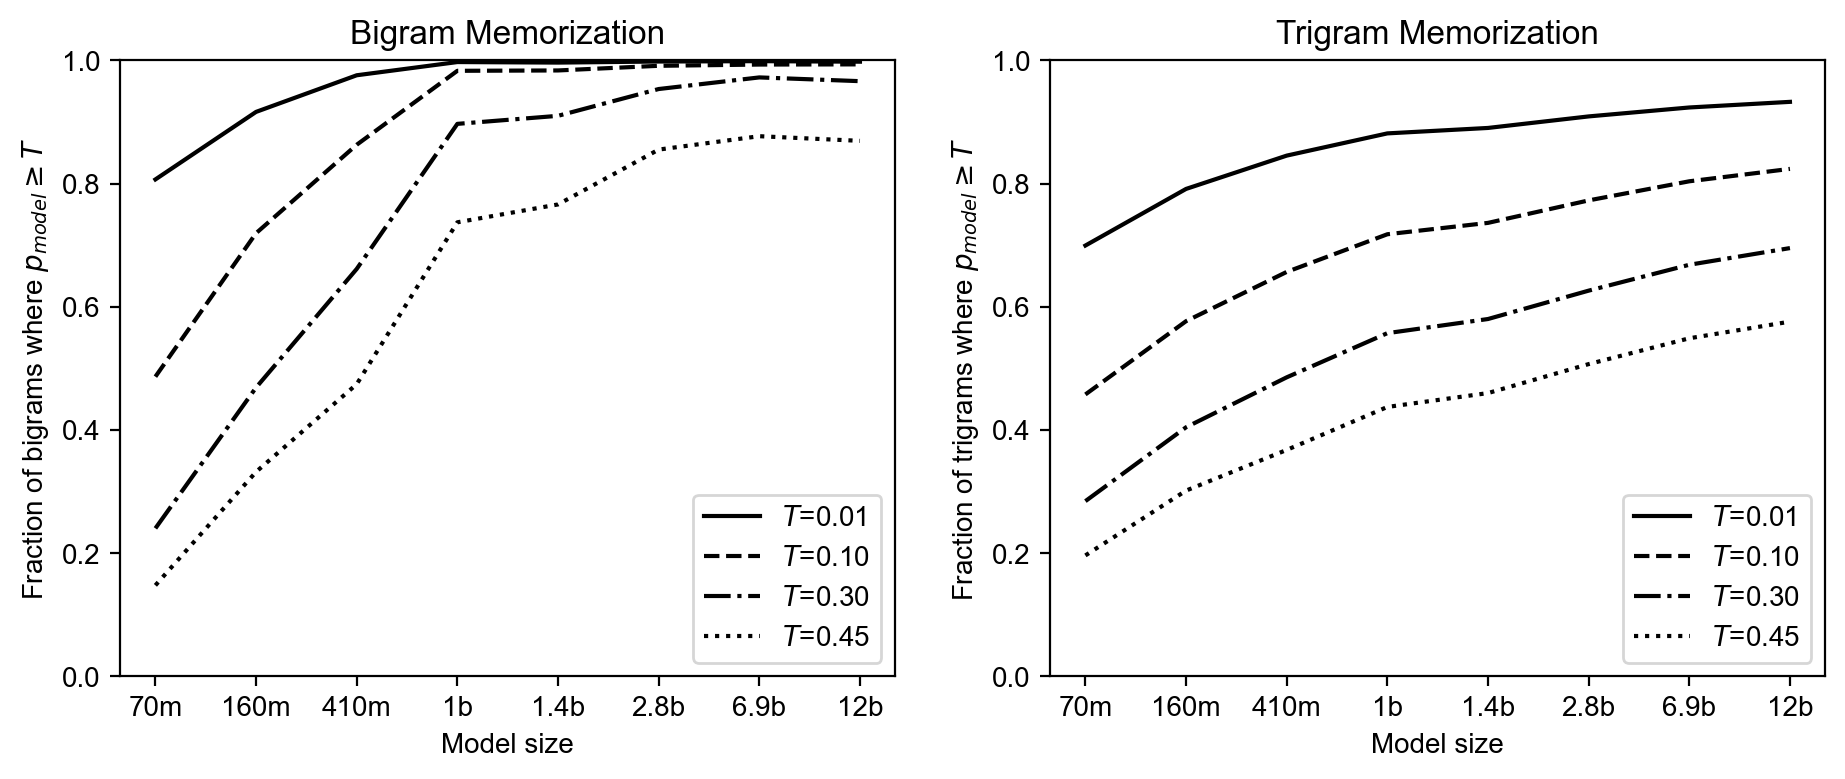

Usage notes:

-   Because the byte-pair encoding tokenizer (GPT-NeoX) was trained on
    The Pile, there are no single tokens in The Pile where the
    subsequent token is 100% predictable. However, there are many
    trigrams that are 100% predictable.
-   Some whitespace token bigrams will also tokenize as a single token.
    For example, with the GPT-NeoX tokenizer, `"\n\n\t\t"` is a token,
    `"\t"` is a token *and* `"\n\n\t\t\t"` is also token. This can
    create problems when automatically tokenizing many prompts because
    almost all concatenated bigrams will tokenize to two tokens but a
    few whitespace-related bigrams will tokenize to one token. We have
    not removed these bigrams from the dataset.

## Input scanning

Input scanning is an unsupervised method for finding examples of a
model’s predictive capabilities. We scan through the pre-training corpus
${t_0,...,t_N}$ and compare the output of the model on pairs of prompts:

-   $p_0 = [t_i, ... t_{i + n}]$ is a contiguous $n$-token prompt from
    the pre-training corpus.
-   $p_1 = [t_{i-1}, t_i, ... t_{i + n}]$ is an $(n+1)$-token prompt
    where an additional token, $t_{i-1}$ has been added in the backwards
    direction in the text.

Suppose $M(p)$ is a model than outputs a probability distribution over
output tokens. When $M(p_1)$ differs substantially from $M(p_0)$, we
capture the two prompts as a “task”. To be more precise, we accept the
task if:

$$\mathrm{JSD}(M(p_0), M(p_1)) > 0.5 ~~~~\mathrm{and}~~~~ \max_{i} M(p_1)_i > 0.5$$

where JSD is the [Jensen-Shannon
Divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence). By
focusing on tasks for which the addition of $t_{i - 1}$ to the prompt
had a large influence and resulted in a highly likely token, we capture
tasks that the model is confidently completing. Note that the true next
token $t_{i + n + 1}$ does not factor into these criteria and therefore
the correctness of the model’s predictions does not affect whether we
consider the model to successfully be completing a task.

We share 1,874,497 tasks produced by input scanning with Pythia-2.8B for
every sliding 5-token prompt in the first 112.5M tokens of the Pile. The
dataset is available on Huggingface:
[pile_scan_4](https://huggingface.co/datasets/Confirm-Labs/pile_scan_4)

Scaling this method to the entire Pile would probably result in a
several hundred million such tasks.

## GitHub

The code to reproduce the datasets here is available at:
<https://github.com/Confirm-Solutions/obvious_completions>